In [1]:
import pandas as pd
import numpy as np
import matplotlib as pyplot

In [121]:
df = pd.read_csv('train_set.csv')
df = df.apply(lambda x : x.str.lstrip())
df.replace('', np.nan, inplace=True)

df = df[['description_fa', 'genre']]
display(df)
df.info()

description_fa        genre
0      همسر و فرزند خردسال یك سروان نیروی انتظامی، كه...       action
1      درباره فیلم سرگذشت حقیقی دار و دسته کلی  فیلم ...        drama
2      آرتور، مرد جوانی است که در دوران کودکی دزدیده ...       action
3      انیمیشن تارزان و جین به ماجرای تارزان و آشنایی...    adventure
4      مستند چرخ عمر داستانی در مورد یک دوچرخه کوهستا...  documentary
...                                                  ...          ...
10995  اصلان  و ماه منیر  به خاطر اختلافات طلاق میگیر...       family
10996  در فیلم مقدار حرکت، هنگامی که یک دزد مرموز توس...     thriller
10997  فیلم گناهکار ذاتی به کارگردانی سویی کوآن لی و ...       action
10998  در چکسلواکی کمونیست ۱۹۵۰  یک وزیر و یک قهرمان ...       social
10999  فیلم مالاسانا ۳۲ به کارگردانی آلبرت پینتو در س...     thriller

[11000 rows x 2 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   description_fa  8559 non-null   object
 1   genre           11000 non-null  object
dtypes: object(2)
memory usage: 172.0+ KB


In [122]:
df = df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8559 entries, 0 to 8558
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   description_fa  8559 non-null   object
 1   genre           8559 non-null   object
dtypes: object(2)
memory usage: 133.9+ KB


In [117]:
# df['duration_hour'] = df.duration.str.split()
# display(df.duration.str.split())
df.loc[:, 'duration_hour'] = df.duration.str.split(':').map(lambda x: x[0])
df.loc[:, 'duration_minute'] = df.duration.str.split(':').map(lambda x: x[1])
df.drop('duration', axis=1, inplace=True)

AttributeError: 'Series' object has no attribute 'duration'

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.country_fa = le.fit_transform(df.country_fa)

In [6]:
display(df.country_fa.unique())

array([11,  5, 38, 19,  0, 32, 23, 22, 24,  9,  6, 39, 37,  7, 36, 20, 10,
        1,  4, 14, 28, 15, 13, 31, 17, 18, 26,  3, 12, 35, 30, 29, 27, 25,
       34, 16, 33,  8, 21,  2])

In [123]:
# X = df.drop('genre', axis=1).drop('image', axis=1).drop('video_id', axis=1)
X = df.description_fa
y = df.genre

display(X)
display(y)

0       همسر و فرزند خردسال یك سروان نیروی انتظامی، كه...
1       درباره فیلم سرگذشت حقیقی دار و دسته کلی  فیلم ...
2       آرتور، مرد جوانی است که در دوران کودکی دزدیده ...
3       انیمیشن تارزان و جین به ماجرای تارزان و آشنایی...
4       مستند چرخ عمر داستانی در مورد یک دوچرخه کوهستا...
                              ...                        
8554    اصلان  و ماه منیر  به خاطر اختلافات طلاق میگیر...
8555    در فیلم مقدار حرکت، هنگامی که یک دزد مرموز توس...
8556    فیلم گناهکار ذاتی به کارگردانی سویی کوآن لی و ...
8557    در چکسلواکی کمونیست ۱۹۵۰  یک وزیر و یک قهرمان ...
8558    فیلم مالاسانا ۳۲ به کارگردانی آلبرت پینتو در س...
Name: description_fa, Length: 8559, dtype: object

0            action
1             drama
2            action
3         adventure
4       documentary
           ...     
8554         family
8555       thriller
8556         action
8557         social
8558       thriller
Name: genre, Length: 8559, dtype: object

https://romannempyre.medium.com/sentiment-analysis-using-1d-convolutional-neural-networks-part-1-f8b6316489a2

In [124]:
import keras
from tensorflow.keras import layers, models

In [125]:
texts = X

# creating LabelEncoder object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(y)

In [126]:
from collections import Counter
Counter(labels)

Counter({0: 2043,
         5: 89,
         1: 757,
         4: 940,
         6: 1284,
         3: 651,
         2: 983,
         7: 260,
         9: 860,
         8: 692})

In [188]:
from hazm import *
from hazm import stopwords_list
import string


def process(x):
    normalizer = Normalizer()
    normilized = normalizer.affix_spacing(x)
    normilized = normalizer.character_refinement(normilized)
    normilized = normalizer.punctuation_spacing(normilized)
    
    normal = normilized.translate(str.maketrans('', '', string.punctuation))
    
    tokenizer = WordTokenizer()
    toekned = tokenizer.tokenize(normilized)
    
    filtered_sentence = [w for w in toekned if not w in stopwords_list() and not w in ['؟','!','.','،',',','?','"','…','«','»', '(', ')']]  
    
    stemmer = Stemmer()
    stemmed_list = [stemmer.stem(w) for w in filtered_sentence]
    
#     display(stemmed_list)
    
    s = ' '
    processed_text = s.join(stemmed_list) 
    
    
    return processed_text
    

texts = texts.apply(lambda x: process(x))
print(texts)



['همسر',
 'فرزند',
 'خردسال',
 'سرو',
 'نیرو',
 'انتظا',
 'افسر',
 'تجسس',
 'اعدا',
 'قاچاقچ',
 'جلو',
 'چ',
 'سوار',
 'اتومبیل',
 'تریل',
 'می\u200cمانند',
 'له',
 'دا',
 'انداختن',
 'مسبب',
 'واقعه',
 'نقشه',
 'طراح']

['فیل',
 'سرگذ',
 'حقیق',
 'فیل',
 'سرگذ',
 'حقیق',
 'فیل',
 'بیوگراف',
 'جنا',
 'درا',
 'وسترن',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'بریتانیا',
 'فرانسه',
 'استرالیا',
 'کارگرد',
 'جاستین',
 'کرزل',
 'نویسندگ',
 'شاون',
 'گر',
 'برعهده',
 'بازیگر',
 'جورج',
 'مک\u200cک',
 'اس',
 'دیویس',
 'نیکلاس',
 'هول',
 'اورلاندو',
 'شوور',
 'توماسین',
 'مک\u200cکنز',
 'کین',
 'چارل',
 'ه',
 'راسل',
 'کرو',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'سرگذ',
 'حقیق',
 'ال',
 'داس',
 'واقع',
 'ساخته',
 'برگرفته',
 'ر',
 'نا',
 'نوشته',
 'پ',
 'کر',
 'فیل',
 'توجه',
 'منتقد',
 'قرار',
 'گرفته\u200cاس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'سرگذ',
 'حقیق',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'سرگذ',
 'حقیق',
 'فیل',
 'جذاب',
 'تماشا',
 'ماجرا',
 'ند',
 'جنگل\u200cنشین',
 'فرمانده',
 'داس',
 'فرار',
 'چنگ',
 'مامور',
 'دول',
 '۱۸۷۰',
 'میلاد',
 'تصویر',
 'می\u200cکشد']

['آرتور',
 'مرد',
 'جو',
 'کودک',
 'دزدیده',
 'وارث',
 'اصل',
 'تاج',
 'تخ',
 'تصاحب',
 'تاج',
 'تخ',
 'دس',
 'پادشاه',
 'ظال',
 'آماده',
 'شمشیر',
 'افسانه',
 'سنگ',
 'خارج',
 'قدر',
 'آموز',
 'ببیند']

['انیمیشن',
 'تارز',
 'جین',
 'ماجرا',
 'تارز',
 'آشنا',
 'جین',
 'اتفاق',
 'می\u200cپردازد',
 'و…']

['مستند', 'چرخ', 'عمر', 'داس', 'دوچرخه', 'کوهس', 'ساخته', 'رفتن']

['فیل',
 'کلان',
 'انتفاع',
 'وظیفه',
 'می\u200cداند',
 'امن',
 'محله',
 'خصوصا',
 'امن',
 'کودک',
 'تأمین',
 'چگونگ',
 'انجا',
 'محور',
 'اصل',
 'فیل',
 'ماجرا',
 'گروگانگیر',
 'توسط',
 'دوس',
 'ناد',
 'درگیر',
 'دردسر',
 'می\u200cکنند…']

['خ',
 'معل',
 'گرد',
 'تفریح',
 'داس',
 'شنگول',
 'منگول',
 'حبه',
 'انگور',
 'شاگرد',
 'خردسال',
 'تعریف',
 'شیر',
 'مقا',
 'سلط',
 'جنگل',
 'گرگ',
 'روباه',
 'مسابقه',
 'می\u200cگذارد',
 'بدین',
 'زود',
 'غذا',
 'لذیذ',
 'فراه',
 'استخدا',
 'می\u200cآیند']

['پلیس',
 'آریزونا',
 'سوییس',
 'فرستاده_می\u200cشود',
 'نامزد',
 'گانگس',
 'شهاد',
 'بیاورند',
 'گانگس',
 'سراغ',
 'نامزد',
 'می\u200cفرستد']

['طلا',
 'روستا',
 'روسیه',
 'توسط',
 'غارتگر',
 'یغما',
 'برده_می\u200cشود',
 'مرد',
 'برگرداندن',
 'اموال',
 'دس',
 'دامن',
 'جو',
 'خو',
 'بنیه',
 'نا',
 'آلوشا',
 '؛',
 'آلوشا',
 'جوانیس',
 'شجاع',
 'قدرتمند',
 'اشتباه',
 'نا',
 'امید',
 'اینطور',
 'آلوشا',
 'همراه',
 'اسب',
 'سخنگو',
 'عمو',
 'پیر',
 'نامزد',
 'عزیز',
 'مادر',
 'سالخورده',
 'دانا',
 'نامزد',
 'مخفیگاه',
 'غارتگرا']

['انیمیشن', 'جنگ', 'مورچه', 'سر', 'کوزه', 'مربا']

['فضاپیما',
 'مقصد',
 'سیاره',
 'مستعمره',
 'هزار',
 'نفر',
 'مسافر',
 'نقص',
 'فن',
 'قس',
 'اتاق',
 'خواب',
 'نقص',
 'تن',
 'مسافر',
 '۹۰',
 'سال',
 'زود',
 'ز',
 'برنامه',
 'بیدار']

['هریسون',
 'خبرنگار',
 'عکاس',
 'مشهور',
 'مجله',
 'نیوزویک',
 'درس',
 'لحظ',
 'قصد',
 'کناره',
 'شغل',
 'عاز',
 'مامور',
 'بوسن',
 'بوسن',
 'آ',
 'جنگ',
 'می\u200cسوزد',
 'بزود',
 'خبر',
 'کشته',
 'هریسون',
 'دف',
 'مجله',
 'سارا',
 'مرگ',
 'باور',
 'عاز',
 'بوسن']

['شهر',
 'فرانسه',
 'اشغال',
 'سال',
 '۱۹۴۱',
 'افسر',
 'آل',
 'ورنر',
 'ون',
 'ابرنک',
 'خانه',
 'دا',
 'خواهر',
 'ساکن',
 'حرف',
 'زدن',
 'امتناع',
 'شب',
 'ورنر',
 'آت\u200cگر',
 'کشور',
 'موسیق',
 'نگاه',
 'رابطه',
 'دوستانه',
 'آل',
 'فرانسه',
 'صحب',
 'بازدید',
 'پاریس']

['عصر',
 'یخبند',
 'کهه',
 'ادامه',
 'انیمیشن',
 'محبوب',
 'عصر',
 'یخبند',
 'ساخته_شد',
 'گرما',
 'جه',
 'سیل',
 '',
 'سید',
 'دیگو',
 'تص',
 'میگیرن',
 'یه',
 'مک',
 'امن',
 'یه',
 'مامو',
 'دیگه',
 'برمیخورن',
 'میکند',
 'سمور',
 'دوس',
 'همراه']

['فیروزه',
 'دخ',
 'بنا',
 'شرایط',
 'ناگوار',
 'زندگ',
 'سر',
 'پارت',
 'شبانه',
 'در',
 'پارت',
 'آشنا',
 'حضور',
 'مره',
 'درد',
 'غافل',
 'سر',
 'نقشه\u200e',
 'شو',
 'می\u200cپرورد…']

['روب',
 'صور',
 'باریکه',
 'پارچه',
 'صور',
 'رنگ',
 'شکل',
 'نمادین',
 'روب',
 'صور',
 'نماد',
 'الملل',
 'آگاه',
 'سرط',
 'سینه']

['دند',
 'پزشک',
 'نسخه',
 'بیمار',
 'جذاب',
 'اغفال',
 'می\u200cنویسد',
 'پرونده',
 'قتل',
 'عنو',
 'مته']

['سال',
 '۲۰۲۸',
 'لس',
 'آنجلس',
 'ز',
 'جنا',
 'آشوب',
 'اوج',
 'رسیده',
 'پرستار',
 'مک',
 'مخف',
 'اس',
 'هتل',
 'آرتمیس',
 'انداز',
 'بیمارس',
 'جنایتکار',
 'شب',
 'درگیر',
 'اوج',
 'رسیده_اس']

['مرد',
 'ثروتمند',
 'همسر',
 'مرده_اس',
 'دخ',
 'زندگ',
 'میکند',
 'خر',
 'دخ',
 'سن',
 'ازدواج',
 'قرار',
 'پدر',
 '',
 'مال',
 'سطح',
 'اجازه',
 'ازدواج',
 'دخ',
 'دخ',
 'عاشق',
 'پسر',
 'میشود',
 'میخواهد',
 'ازدواج',
 'پدر',
 'مخالف',
 'میکند',
 'مخالف',
 'باه',
 'فرار',
 'سال']

['رفتگر',
 'جو',
 'عاشق',
 'ادب',
 'ذهن',
 'آرزو',
 'دانشجو',
 'رشته',
 'ادب',
 'طریق',
 'زباله',
 'درب',
 'منازل',
 'اسرار',
 'راز',
 'خانه',
 'می\u200cبرد']

['کار',
 'آرجون',
 'نقاط',
 'مختلف',
 'ازکشور',
 'زندگ',
 'ا',
 'مادر',
 'گرفتن',
 'انتقا',
 'نزد',
 'می\u200cآورد']

['مستند', 'جنگ', 'داخل', 'سوریه', 'نق', 'ایر', 'جنگ', 'زندگ', 'مرد', 'خلال']

['مستند',
 'فریاد',
 'وح',
 'ساخته',
 'نادر',
 'طریق',
 'زندگ',
 'هنر',
 'استاد',
 'شعب',
 'لشگر']

['فیل',
 'سرگذ',
 'حقیق',
 'فیل',
 'سرگذ',
 'حقیق',
 'فیل',
 'بیوگراف',
 'جنا',
 'درا',
 'وسترن',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'بریتانیا',
 'فرانسه',
 'استرالیا',
 'کارگرد',
 'جاستین',
 'کرزل',
 'نویسندگ',
 'شاون',
 'گر',
 'برعهده',
 'بازیگر',
 'جورج',
 'مک\u200cک',
 'اس',
 'دیویس',
 'نیکلاس',
 'هول',
 'اورلاندو',
 'شوور',
 'توماسین',
 'مک\u200cکنز',
 'کین',
 'چارل',
 'ه',
 'راسل',
 'کرو',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'سرگذ',
 'حقیق',
 'ال',
 'داس',
 'واقع',
 'ساخته',
 'برگرفته',
 'ر',
 'نا',
 'نوشته',
 'پ',
 'کر',
 'فیل',
 'توجه',
 'منتقد',
 'قرار',
 'گرفته\u200cاس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'سرگذ',
 'حقیق',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'سرگذ',
 'حقیق',
 'فیل',
 'جذاب',
 'تماشا',
 'ماجرا',
 'ند',
 'جنگل\u200cنشین',
 'فرمانده',
 'داس',
 'فرار',
 'چنگ',
 'مامور',
 'دول',
 '۱۸۷۰',
 'میلاد',
 'تصویر',
 'می\u200cکشد']

['فیل',
 'معروف',
 'هیچکاک',
 'عده',
 'فیل',
 'کارگرد',
 'عده',
 'فیل',
 'تاریخ',
 'می\u200cدانند',
 'سال',
 '۱۹۵۸',
 'جیمز',
 'استیوار',
 'ک',
 'نواک',
 'ساخته_شد',
 'توانس',
 'برنده',
 'اسکار',
 'فیل',
 'گ',
 'عده',
 'کلاس',
 'آموز',
 'ایجاد',
 'تعلیق',
 'سینما',
 'شناخته_می\u200cشود',
 'فیل',
 'داس',
 'پلیس',
 'تعقیب',
 'گریز',
 'با',
 'س',
 'فرانسیسکو',
 'مرگ',
 'کارآگاه',
 'اسک',
 'فرگوسن',
 'اتفاق',
 'ارتفاع',
 'می\u200cترسد',
 'عذاب',
 'وجد',
 'تشکیل',
 'پلیس',
 'آرا',
 'یافتن',
 'محبوبه',
 'میچ',
 'می\u200cآورد',
 'میج',
 'مراقب',
 'دلدار',
 'اسک',
 'بیاورد',
 'رفقا',
 'دانشکده',
 'اسک',
 'استخدا',
 'همسر',
 'تمایل',
 'خودک',
 'تعقیب']

['نخ', 'سوزن', 'دا', 'ویران', 'دنیا', 'می\u200cدوخ']

['بچه',
 'شهر',
 'دس',
 'بزرگ',
 'تنگ',
 'آمده\u200cاند',
 'پیشنهاد',
 'کمک',
 'بادبادک',
 'شهر',
 'پرواز',
 'خال',
 'بزرگترهاس',
 'بچه',
 'امور',
 'شهر',
 'دس',
 'می\u200cگیرند',
 'کار',
 'علاقه',
 'دس',
 'می\u200cزنند',
 'نظ',
 'شهر',
 'می\u200cریزد']

['آپهه',
 '(',
 'فردین',
 'خ',
 ')',
 'ریتیکا',
 '(',
 'ایشا',
 'دئول',
 ')',
 'آشنا',
 'شناخ',
 'اجبار',
 'خانواده',
 'ازدواج',
 'کرده\u200cاند',
 'عاز',
 'ماه',
 'عسل',
 'روز',
 'اختلاف']

['بن',
 'مرگ',
 'دخ',
 'تصادف',
 'وحشتناک',
 'ویر',
 'معتقد',
 'طریق',
 'رویا',
 'تکرار',
 'دخ',
 'برگرداند']

['روا',
 'زندگ',
 'پرویز',
 'جه',
 'رئیس',
 'تجار',
 'خانه',
 'جه',
 'موسس',
 'بانک',
 'جه',
 'جمله',
 'زرت',
 'مق',
 'یزد',
 'قیا',
 'عدالتخواهانه',
 'مشروطه',
 'حما',
 'مال',
 'هند',
 'اسلحه',
 'می\u200cکرده',
 'کشف',
 'روابط',
 'دستور',
 'ترور',
 'صادر',
 'ضرب',
 'گلوله',
 'ف',
 'وداع',
 'زندگ',
 'نامه',
 'زب',
 'جمشید',
 'وزرا',
 'بازمانده',
 'خانواده']

['دخ',
 'نوجو',
 'لجباز',
 'مارشال',
 'آمریکا',
 'سر',
 'سخ',
 'کمک',
 'میخواهد',
 'قتل',
 'پدر',
 'پیگیر']

['چاره', 'می\u200cماند', 'مزاح', 'قفسه', 'سینه', 'آد', 'نامرتب', 'میکند']

['مستند', 'کشور', 'افغانس', 'باف', 'فرهنگ', 'اجتماع', 'طالب']

['کبو',
 'عاشق',
 'فیل',
 'کمد',
 'رمانتیک',
 'آمریکا',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'مایکل',
 'شوال',
 'ساخته_شده_اس',
 'داس',
 'زوج',
 '(',
 'عیس',
 'ر',
 'کومیل',
 'نانج',
 ')',
 'ناخواسته',
 'راز',
 'قتل',
 'می\u200cفهمند',
 'لحظ',
 'روابط',
 'تجربه']

['مستند', 'توصیف', 'مفاه', 'پول', 'بده', 'مال', 'توسعه', 'می\u200cپردازد']

['هواپیما',
 'ج',
 'نا',
 'شوالیه',
 'اتفاق',
 'عنو',
 'شرک',
 'کنندگانمسابقه',
 'هوا',
 'دعو',
 'قهر',
 'مرب',
 'سابقه']

['داس',
 'فیل',
 'ترسناک',
 'رازآلود',
 'دانشجو',
 'مدرسه',
 'قد',
 'کاتولیک',
 'ناگه',
 'طرز',
 'دلخرا',
 'می\u200cمیرد',
 'مرگ',
 'ایجاد',
 'ترس',
 'وح',
 'مدرسه',
 'زندگ',
 'دانشجو',
 'تاثیر',
 'قرار',
 'و…']

['پلیس',
 'سابق',
 'برا',
 'کانر',
 'بخاطر',
 'فرار',
 'دوس',
 'مته',
 'بازدا',
 'میشود',
 'فرص',
 'اختیار',
 'قرار',
 'داده\u200cاند',
 'مجاز',
 'چ',
 'پو',
 'همراه',
 'دوس',
 'قد',
 'دستگیر',
 'مواد',
 'مخدر',
 'پلیس',
 'کمک']

['سال',
 '۸۰',
 'AMM',
 '(',
 'میک',
 'موس',
 ')',
 'سیاره',
 'X',
 'گربه',
 'عضو',
 'سندیکا',
 'تص',
 'میگیرند',
 'یکبار',
 'مو',
 'ببرند',
 'دانشمند',
 'مو',
 'بنا',
 'فو',
 'م',
 'ریاس',
 'عمل',
 'میگیرد',
 'اما…']

['۲۴',
 'ساع',
 'انیمیشن',
 'سوپرهیرو',
 'ببین',
 'انیمیشن',
 'ابرقهر',
 'تماشا',
 'کن',
 'قسم',
 'بن',
 'تن',
 'روز',
 'میتون',
 'لاک',
 'نینجا',
 'ببین',
 'مرد',
 'عنکبو',
 'بتمن',
 'روز',
 'قس',
 'همراه',
 'خواهند_بود',
 'سوپرمن',
 'ماجرا',
 'هیج',
 'انگیز',
 'منتظرتن',
 'ابرقهر',
 'لگو',
 'میتون',
 'کن',
 'روز',
 'سر',
 'بزن',
 'انیمیشن',
 'ابرقهر',
 'نما',
 'مید']

['عل',
 'جو',
 'افغ',
 'کار',
 'ایر',
 'همسر',
 'شاه',
 'گل',
 'خبر',
 'دلیل',
 'تهدید',
 'حمله',
 'آمریکا',
 'نگر',
 'خانواده',
 'افغانس',
 'می\u200cگردد',
 'سفر',
 'اتفاق',
 'روبرو']

['خبرنگار',
 'شجاع',
 'اس',
 'تن',
 'تن',
 'ماجراجو',
 'همراه',
 'کاپ',
 'هدوک',
 'کشف',
 'گنج',
 'ک',
 'عرق',
 'فر',
 'نیاک',
 'هدوک',
 'میکنند']

['معل',
 'جو',
 'نا',
 'سیسیل',
 'برون',
 'تدریس',
 'مدرسه',
 'دول',
 'دهکده',
 'سن',
 'روک',
 'بدو',
 'ورود',
 'رفتار',
 'عجیب',
 'غیردوستانه',
 'اهال',
 'دهکده']

['توضیح',
 'صحنه',
 'صدا',
 'رضا',
 'نصیرزاده',
 'فیل',
 '۲۳',
 'نفر',
 'ژانر',
 'جنگ',
 'محصول',
 'سال',
 '۱۳۹۷',
 'کارگرد',
 'مهد',
 'جعفر',
 'اقتباس',
 'خاطر',
 '۲۳',
 'نفر',
 'رزمندگ',
 'نوجو',
 'ایر',
 'جنگ',
 'ایر',
 'عراق',
 'سال',
 '۱۳۶۱',
 'اسار',
 'نیرو',
 'عراق',
 'درآمدند',
 'گروه',
 'سن',
 'سال',
 '۱۳',
 '۱۷',
 'سال',
 'سن',
 '۲۳',
 'نفر',
 'برنده',
 'سیمرغ',
 'بلورین',
 'فیل',
 'نگاه',
 'مل',
 'هفتمین',
 'دوره',
 'جشنواره',
 'فجر',
 'فیل',
 'روایتگر',
 'رزمندگ',
 'نوجو',
 'ایر',
 'جنگ',
 'ایر',
 'عراق',
 'سال',
 '۱۳۶۱',
 'اسار',
 'نیرو',
 'عراق',
 'درآمدند']

['فیل',
 'جنگ',
 'مار',
 'کالوین',
 'معروف',
 'جنجال',
 'خبرنگار',
 'جنگ',
 'روحیه',
 'سرک',
 'خط',
 'مقد',
 'جنگ',
 'سرتاسر',
 'جه',
 'هدا',
 'صدا',
 'صدا',
 'گو',
 'برساند']

['مستند',
 'جابه',
 'حمل',
 'دس',
 'حیو',
 'نقاط',
 'مختلف',
 'دنیا',
 'محل',
 'زندگ',
 'انس',
 'مشکل',
 'محیط',
 'زیس',
 'انس',
 'ایجاد',
 'میکند',
 'می\u200cپردازد']

['فیل',
 'کلوپ',
 'همسر',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۱۳۹۷',
 'کارگرد',
 'مهد',
 'صباغ',
 'مهد',
 'صباغ',
 'فیل',
 'ایتالیا',
 'ایتالیا',
 'خانه',
 'کاغذ',
 'خاک',
 'آ',
 'بانو',
 'کارگرد',
 'فیل',
 'بازیگر',
 'کلوب',
 'همسر',
 'بازیگر',
 'محمدرضا',
 'شریف',
 'نیا',
 'میترا',
 'حجار',
 'شقایق',
 'فراه',
 'عل',
 'انصار',
 'بازیگر',
 'پرداخته\u200cاند',
 'فیل',
 'روایتگر',
 'داس',
 'زندگ',
 'مرد',
 'زن',
 'ذلیل',
 'فرار',
 'دس',
 'همسر',
 'همراه',
 'خواننده',
 'زیرزمین',
 'پاپ',
 'جزیره',
 'ک',
 'متوار',
 'نقشه',
 'ربوده',
 'می\u200cکشند']

['زد',
 'فیل',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'برنده',
 '۹',
 'جایزه',
 'جشنواره',
 'مختلف',
 'دوس',
 'خیال',
 'پسر',
 'بچه',
 'پا',
 'دنیا',
 'واقع',
 'می\u200cگذارد',
 'وح',
 'خانواده']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'هو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['زن',
 'نویسنده',
 'ازدواج',
 'مشکل',
 'روبرو',
 'رابطه',
 'فرزند',
 'همسر',
 'بهبود',
 'بخشد',
 'رابطه',
 'کودک',
 'آزاردهنده',
 'دشوار',
 'برا',
 'ایجاد']

['فیل',
 'ترنسفورمرز',
 ':',
 'عصر',
 'انقراض',
 'مکانیک',
 'نا',
 'مارک',
 'والبرگ',
 'همراه',
 'دخ',
 'کشف',
 'اتوبو',
 'دیسپتیکون',
 'همینطور',
 'مامور',
 'دول',
 'کشیده',
 'شوند…']

['فیل',
 'مکاف',
 'کارآگاه',
 'هس',
 'همکار',
 'قتل',
 'رسیده',
 'یافتن',
 'قاتل',
 'نوجو',
 'شاهد',
 'قتل']

['حکا',
 'دریا',
 'فیل',
 'کارگرد',
 'نویسندگ',
 'بهمن',
 'فر',
 'آرا',
 'محصول',
 'سال',
 '۱۳۹۵',
 'کارگرد',
 'بازیگر',
 'پرداخته',
 'حکا',
 'دریا',
 'ز',
 'ساخ',
 'دل',
 'دیوانه',
 'نا',
 'ساخته',
 'حکا',
 'دریا',
 'نا',
 'فیل',
 'قصه',
 'آد',
 'روا',
 'گذشته',
 'جبر',
 '؟!']

['واقع',
 'خداوند',
 'خلق',
 'ا',
 'توحید',
 'معاد',
 'حقیق',
 'انس',
 'هدف',
 'خلق',
 'انس',
 'مستند',
 'حقیق',
 'مستند',
 'محمد',
 'سعید',
 'بهمن',
 'پور',
 'نویسنده',
 'مجر',
 'مجید',
 'خباز',
 'حمید',
 'خیرالدین',
 'کارگرد']

['نفر',
 'کارخانه',
 'دا',
 'افتاده\u200cاند',
 'نفر',
 'آد',
 'ربا',
 'نفر',
 'گروگ',
 'حافظه',
 'موق',
 'دس',
 'داده\u200cاند']

['برنامه',
 'پلیس',
 'موفق',
 'بازنشستگ',
 'جرائ',
 'قبلا',
 'پلیس',
 'بردن',
 'مشهور',
 'تاخیر',
 'می\u200cافتد']

['فیل',
 'گاو',
 'خشمگین',
 'کارگرد',
 'مارتین',
 'اسکورسیز',
 'رابر',
 'دنیرو',
 'جو',
 'پ',
 'توانس',
 'برنده',
 '۲',
 'اسکار',
 'جمله',
 'بازیگر',
 'رابر',
 'دنیرو',
 'موفق',
 '۶',
 'رشته',
 'نامزد',
 'فیل',
 'تصویر',
 'زندگ',
 'جیک',
 'لا',
 'موتا',
 'بوکسور',
 'معروف',
 'امریکا',
 'تصویر',
 'عاشق',
 'قهر',
 'دلهره',
 'شک',
 'مغلوب',
 'مبارزه',
 'غول',
 'شهر']

['مستند',
 'مانکن',
 'قلعه',
 'حسن',
 'خ',
 'ساخ',
 'مانکن',
 'پلاستیک',
 'کارگاه',
 'افتاده_اس',
 'زندگ',
 'مانکن',
 'سرانجا',
 'شباه',
 'زندگ',
 'انس']

['مستند',
 'روز',
 'زندگ',
 'مستند',
 'مسابقه',
 'تبلیغ',
 'ترویج',
 'مه',
 'نواز',
 'پرهیز',
 'تجمل',
 'گرا',
 'خلاق',
 'آراستگ',
 'محیط',
 'ساده',
 'زیس',
 'عامل',
 'مقابل',
 'مصرف',
 'گرا',
 'تعامل',
 'اعضا',
 'خانواده',
 'تعامل',
 'صرفه',
 'جو',
 'مدیر',
 'وبهره',
 'ور',
 'منزل',
 'اشاره',
 'ساختار',
 'روا',
 'زندگ',
 '؛',
 'مادربزرگ',
 'خانه',
 'خانه',
 'مستقل',
 'تفکیک',
 'خانه',
 'حیاط',
 'ایو',
 'مشترک',
 'برنامه',
 'مادربزرگ',
 'میزب',
 'مه',
 'فرهنگ']

['آنا',
 'دخ',
 'ارزو',
 'هنرپیشه',
 'سینما',
 'پدر',
 'کنگفوکار',
 'جنگ',
 'ژاپن',
 'تبعید',
 'خان',
 'ازدواج',
 'آنا',
 'بدنیا',
 'آورده\u200cاند',
 'پدر',
 'مراس',
 'کنگ',
 'فو',
 'دعو',
 'آنا',
 'عنو',
 'نماینده',
 'میفرستد']

['روا',
 'مرد',
 'افغ',
 'سال',
 'همسر',
 'حمله',
 'گروه',
 'طالب',
 'دس',
 'همراه',
 'دخ',
 'برپا',
 'جشن',
 'ازدواج',
 'دخ',
 'بزرگ',
 'شهر',
 'کابل',
 'باز',
 'مراس',
 'عروس',
 'زن',
 'می\u200cبیند',
 'صدا',
 'آشنا']

['زن',
 'شرور',
 'داس',
 'زن',
 'جو',
 'نا',
 'سوک',
 'ه',
 'بچگ',
 'علاقه',
 'قاتل',
 'حرفه',
 'سلسله',
 'اعمال',
 'خشون',
 'آمیز',
 'آغاز',
 'گرفتن',
 'انتقا',
 'گذشته',
 'فرار',
 'سرانجا',
 'آزاد',
 'برسد…']

['نیرو',
 'ژاپن',
 'پاشید',
 'کاج',
 'تن',
 'رفقا',
 'سفر',
 'جنوب',
 'رهسپار',
 'ج',
 'سال',
 'بردند',
 'توسط',
 'ار',
 'سرخ',
 'دستگیر']

['کوچه',
 'کن',
 'کیارس',
 'دیدگاه',
 'سینما',
 'واقع',
 'سخن',
 'مستند',
 'تقریبا',
 'فیل',
 'کیارس',
 'ن',
 'کوچه',
 'آثار',
 'نما',
 'صحنه',
 'صحنه',
 'آثار',
 'بحث',
 'انگیز',
 'بررس',
 'صاحب',
 'هنرمند',
 'مسعود',
 'کیمیا',
 'علیرضا',
 'زرین',
 'دس',
 'مرتض',
 'کاخ',
 'حسین',
 'سناپور',
 'امید',
 'روح',
 'اکبر',
 'عال',
 'جواد',
 'طوس',
 'سعید',
 'عقیق',
 'محمدعل',
 'سجاد',
 'تهمینه',
 'میل',
 'محمد',
 'یعقوب',
 'نگار',
 'اسکندرفر',
 'شخص',
 'کیارس',
 'سینما',
 'حرف',
 'شنیدن',
 'پرتوافکن',
 'آر',
 'سنجاب',
 'سینما',
 'کیارس',
 'فیل',
 'مستند',
 'یادماندن',
 'نا',
 'کوچه',
 'کن',
 'کارگرد',
 'آر',
 'سنجاب',
 'سینماتوگراف',
 'پیوند',
 'عل',
 'رضو',
 'برنامه',
 'الهه',
 'قاس',
 'صدابردار',
 'ایرج',
 'نوروز',
 'کنندگ',
 'سعید',
 'اردهال',
 'دسترس',
 'علاقه',
 'مند',
 'قرار']

['روح',
 'پاکس',
 'مق',
 'آمریکا',
 'ماه',
 '۵',
 'روز',
 'برنامه',
 'زنده',
 'حر',
 'حسین',
 'کالیفرنیا',
 'کربلا',
 'می\u200cرساند']

['دوقلو',
 'بیمار',
 'پیچیده',
 'رنج',
 'می\u200cبرند',
 'دک',
 'بیمارس',
 'وادار',
 'تص',
 'سخ',
 'بگیرند',
 'دک',
 'مورف',
 'سفر',
 'بیمارس',
 'بر',
 'تص',
 'دائ']

['نور',
 'قطب',
 'شمال',
 ':',
 'ماجراجو',
 'پادشاه',
 'انیمیشن',
 'محصول',
 'سال',
 '۲۰۱۹',
 'داس',
 'انیمیشن',
 'قرار',
 'باس',
 'شناس',
 'شرور',
 '',
 'عتیقه',
 'می\u200cدزدد',
 'نور',
 'همراه',
 'دوس',
 'دنبال',
 'سرنخ',
 '',
 'بگردند',
 'عتیقه',
 'برگردانند',
 'ز',
 'پیچیده',
 'چال',
 'مختلف',
 'میشوند']

['مرد',
 'پوجا',
 'ازدواج',
 'همسر',
 'راض',
 'رابطه',
 'احساس',
 'روپال',
 'زن',
 'مدرن',
 'لباس',
 'مد',
 'روز',
 'میپوشد',
 'همسر',
 'رابطه',
 'باخبر']

['فیل',
 'رزیدن',
 'اویل',
 ':',
 'انقراض',
 'بازماندگ',
 'راکون',
 'س',
 'صحرا',
 'نوادا',
 'حرک',
 'آلاسکا',
 'برسانند',
 'آلیس',
 'گروه',
 'ملحق',
 'و…']

['پستچ',
 'انجا',
 'مامور',
 'شهر',
 'یخ',
 'زده',
 'واقع',
 'شمال',
 'متوجه',
 'میشود',
 'بابانوئل',
 'مخف']

['مستند',
 'دریا',
 'پارس',
 'بررس',
 'خلیج',
 'فارس',
 'جزایر',
 'اطراف',
 'حین',
 'سفر',
 'جغرافیا',
 'اقتصاد',
 'تاریخ',
 'آداب',
 'رسو',
 'سن',
 'مرد',
 'نواح',
 'می\u200cپردازد']

['داس', 'هدیه', 'دوس', 'ا', 'هدیه', 'میشوند', 'دوس', 'داشته_با']

['داس',
 'فیل',
 'مغز',
 'متفکر',
 'رویداد',
 'واقع',
 'ساخته_شده_اس',
 'نگهب',
 'امن',
 'نا',
 'دیوید',
 'زندگ',
 'خسته',
 'شرایط',
 'همکار',
 'جذاب',
 'نا',
 'دیوید',
 'شیفته',
 'می\u200cخواهد',
 'سرق',
 'توسط',
 'دوس',
 'برنامه',
 'شرک']

['میانه',
 'رابطه',
 'فراز',
 'نشیب',
 'مجر',
 'برنامه',
 'رادیو',
 'طریق',
 'تلفن',
 'طرفدار',
 'پسر',
 'جو',
 'ارتباط',
 'برقرار',
 'سوال',
 'هو',
 'پسر',
 'جو',
 'زندگ',
 'مجر',
 'آشوب',
 'می\u200cشود…']

['مرد',
 'آمریکا',
 'دوره',
 'آموز',
 'ریلکسیشن',
 'چین',
 'دیده',
 'همسایه',
 'آستانه',
 'خودک',
 'کمک',
 'میکند',
 'زندگ',
 'سرو',
 'سا',
 'بدهد',
 'نیرو',
 'کمک',
 'بگیرد',
 'مشکل']

['مستند',
 'درمورد',
 '۲۱',
 'سال',
 'فعال',
 'سینما',
 'تارانتینو',
 'مصاحبه',
 'بازیگر',
 'همکار',
 'مختلف',
 '۲۱',
 'سال']

['استن', 'دزد', 'بانک', 'دستگیر', 'عنو', 'پادا', 'بورسیه', 'تحصیل', 'آکسفورد']

['فیل',
 'جک',
 'براون',
 'زن',
 'میانسال',
 'مهلکه',
 'منفع',
 'می\u200cبرد',
 'ق',
 'ج']

['سائل',
 'شو',
 'خیر',
 'شر',
 'دنیا',
 'مگ',
 'اوکانر',
 'دنیا',
 'حول',
 'شغل',
 'عنو',
 'پرستار',
 'بیمارس',
 'می\u200cچرخد',
 'شب',
 'بار',
 'خواهر',
 'جنا',
 'دخ',
 'تازه',
 'متولد',
 'خانه',
 'ر']

['انفجار',
 'پالایشگاه',
 'نف',
 'ایجاد',
 'طوف',
 'آتشین',
 'بیمارس',
 'داخل',
 'تهدید',
 'می\u200cکتد']

['مستند',
 'بردا',
 'ابراه',
 'روا',
 'صحنه',
 'آثار',
 'سینما',
 'ابراه',
 'حا',
 'کیا',
 'کارگرد',
 'صاحب',
 'نا',
 'کشور',
 'فیل',
 'سینما',
 'موفق',
 'روانه',
 'پرده',
 'سینما']

['زن', 'جو', 'سرپرس', 'بچه', 'متوجه', 'میشود', 'خونه', 'تسخیر']

['سینما',
 'مال',
 'لیاقتشو',
 'داره',
 'بیاد',
 'سینما',
 'یه',
 'شبه',
 'نخواد',
 'بشه',
 'سوپر',
 'استار',
 'خدا',
 'سینما',
 'خونه',
 'ماهاس',
 'حرمتشو',
 'نگه',
 'سینما',
 'محراب',
 'مسجده',
 'اگه',
 'قدرشو',
 'مقدسه']

['فیل',
 'آ',
 'بس',
 '۲',
 'ساخته',
 'تهمینه',
 'میل',
 'درمورد',
 'زوج',
 'جو',
 'تحصیل',
 'زندگ',
 'مشترک',
 'مشکل',
 'داشته\u200cاند',
 'میخواهند',
 'سفر',
 'خارج',
 'کشور',
 'بروند',
 'روانشناس',
 'سابق',
 'فرودگاه',
 'ملاق',
 'میکنند',
 'اتفاق',
 'صحب',
 'میکنند']

['اوا',
 'زن',
 'شوهر',
 'ویولن',
 'نواز',
 'جزیره',
 'مزرعه',
 'چترباز',
 'دشمن',
 'محل',
 'سکون',
 'فرود',
 'می\u200cآیند',
 'ناخواسته',
 'تن',
 'شرک',
 'گفتگو',
 'مهاج',
 'مقا',
 'محل',
 'جر',
 'خ',
 'احضار',
 'دوس',
 'سرهنگ',
 'یاکوب',
 'آزاد',
 'مقدمه',
 'اتفاق',
 'میشود']

['دوس', 'اسب', 'تک', 'شاخ', 'دخ', 'میخواس', 'آواز', 'بخواند']

['خلیج',
 'سکو',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'بازیگر',
 'نا',
 'کلیس',
 'بنگ',
 'اولگا',
 'کوریلنکو',
 'برا',
 'کاکس',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'ویل',
 'گ',
 'همسر',
 'روزالیند',
 'قتل',
 'مشکوک',
 'پسر',
 'گناه',
 'گذشته',
 'مرموز',
 'روزالیند',
 'ویل',
 'شک',
 'گذشته',
 'تاثیر',
 'مرگ',
 'پسر']

['تلا',
 'سریال',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۲۰',
 'سریال',
 'محصول',
 'شرک',
 'اپل',
 'تلا',
 'ریف',
 'اسپال',
 'اس',
 'اسمیث',
 'نق',
 'جیسون',
 'نیک',
 'ایفا',
 'زوج',
 'می\u200cخواهند',
 'بچه',
 'بچه',
 'نمی\u200cشوند',
 'دلیل',
 'تص',
 'می\u200cگیرند',
 'مشاور',
 'کمک',
 'بگیرند']

['زند',
 'آمریکا',
 'جنگ',
 'جه',
 'حین',
 'فرار',
 'کشته',
 'میشوند',
 'نیرو',
 'کمپ',
 'انبار',
 'آل',
 'عنو',
 'خبر',
 'رس',
 'مته',
 'میشود']

['هف',
 'پرده',
 'کارگرد',
 'فرزاد',
 'موتمن',
 'فیل',
 'نامه',
 'سعید',
 'عقیق',
 'ساخته_شده_اس',
 'فریبرز',
 'عرب',
 'نیا',
 'مهد',
 'احمد',
 '',
 'کسرائ',
 'عسل',
 'بدیع',
 'ماهایا',
 'پطروس',
 'بهزاد',
 'فراه',
 'ایفا',
 'نق',
 'پرداختند',
 'جو',
 'مشکل',
 'مال',
 'گرد',
 'مشور',
 'توافق',
 'تص',
 'تلا',
 'مجدد',
 'پول',
 'می\u200cگیرند',
 'ناکا',
 'ناامید',
 'مجددا',
 'گرد',
 'عل',
 'رغ',
 'میل',
 'باطن',
 'تص',
 'سرق',
 'می\u200cگیرند',
 'فراه',
 'آوردن',
 'مقد',
 'اسلحه',
 'فروشگاه',
 'حمله',
 'سرق',
 'متوار',
 'تعقیب',
 'گریز',
 'سرانجا',
 'توسط',
 'پلیس',
 'محاصره',
 'کشته_می\u200cشوند',
 '(',
 'ذکر',
 'فیل',
 'هف',
 'پرده',
 'بنا',
 ':',
 'فتح',
 'امید',
 'هجر',
 'عز',
 'خوف',
 'فنا',
 'ساخته_شده_اس',
 ')']

['۲۰', 'سال', 'ماجراجو', 'لوید', 'دخ', 'رهسپار', 'جاده', 'ماجراجو', 'آغاز']

['سوپرمن',
 'کمک',
 'اعضا',
 'لیگ',
 'عدال',
 'جلو',
 'دشمن',
 'خبیث',
 'قدرتمند',
 'نا',
 'دومزد',
 'بگیرد',
 'اما…']

['فیل',
 'تقاطع',
 'کارگرد',
 'نامرون',
 'سال',
 '۲۰۱۸',
 'ساخته_شده_اس',
 'ژانر',
 'فیل',
 'پلیس',
 'معما',
 'میباشد',
 'زهیر',
 'ادز',
 'آریو',
 'بایو',
 'فیل',
 'حضور',
 'حومه',
 'کوالالامپور',
 'چندین',
 'مشکل',
 'مال',
 'بهبود',
 'زندگ',
 'تلا',
 'مسیر',
 'زندگ',
 'برخورد',
 'میکند',
 'نتایج',
 'مهلک',
 'روبرو',
 'میشوند']

['شخص',
 'اصل',
 'داس',
 'بیگ',
 'بونگ',
 'قلب',
 'جه',
 'هس',
 'سیاره',
 'خانه',
 'می\u200cسازند',
 'موجود',
 'دوس',
 'مبل',
 'سفید',
 'سیاره',
 'منظومه',
 'سفر',
 'اکتشاف',
 'یادگیر',
 'درمورد',
 'ساکن',
 'سیاره',
 'مشکل',
 'دوس',
 'می\u200cپردازند',
 'مسیر',
 'اتفاق',
 'جالب',
 'روبرو']

['جو',
 'شرور',
 'دل',
 'عشق',
 'می\u200cبندد',
 'سد',
 'عشق',
 'افکار',
 'زندگ',
 'روزمره',
 'اتفاق',
 'می\u200cافتد']

['دهق',
 'طمع',
 'کار',
 'پول',
 'حاضر',
 'اسکور',
 'زن',
 'مرد',
 'خط',
 'دشمن',
 'جنگ',
 'نمیدانند',
 'همراه',
 'میکنند']

['ز',
 'جنگ',
 'جه',
 'کاج',
 'مرد',
 'صلح',
 'طلب',
 'همراه',
 'همسر',
 'میچیکو',
 'دهکده',
 'سفر',
 'عنو',
 'ناظر',
 'معدن',
 'آهن',
 'منطقه',
 'کار',
 'ار',
 'اعزا',
 'نشود',
 'پلیس',
 'ار',
 'ششصد',
 'اسیر',
 'اهل',
 'چین',
 'کار',
 'معدن',
 'می\u200cفرستد',
 'کاج',
 'رهبر',
 'صحب',
 'بتوانند',
 'خو',
 'کنترل',
 'سیس',
 'فاسد',
 'نادرس',
 'ناراح']

['ایو',
 'کودک',
 '',
 '۱۲',
 'خانواده',
 'ناز',
 'جنگ',
 'جه',
 'کشته\u200cاند',
 'کودک',
 'عنو',
 'مین',
 'یاب',
 'ار',
 'مامور',
 'خلاف',
 'خواس',
 'فرمانده',
 'کار',
 'خطرناک',
 'دس',
 'می\u200cزند']

['شاهزاده',
 'مریدا',
 'پدر',
 'مادر',
 'برادر',
 'کوچک',
 'زندگ',
 'دوس',
 'زندگ',
 'قید',
 'بند',
 'شاهزاده',
 'مادر',
 'مجبور',
 'ازدواج',
 'تص',
 'آزاد',
 'مسیر',
 'زندگ',
 'انتخاب',
 'مراس',
 'می\u200cزند',
 'آ',
 'مرداب',
 '(',
 'سرنو',
 'منتقل',
 ')',
 'دنبال',
 'جادوگر',
 'سر',
 'قرار',
 'مریدا',
 'کمک',
 'می\u200cخواهد',
 'جادوگر',
 'کیک',
 'مادر',
 'بدهد',
 'راجع',
 'ازدواج',
 'عوض',
 'برخلاف',
 'انتظار',
 'مریدا',
 'ملکه',
 'خرس']

['سال',
 '۱۹۰۲',
 'کاپ',
 'ولادیمیر',
 'آرسنیف',
 'دول',
 'روسیه',
 'تزار',
 'نقشه',
 'مناطق',
 'شمال',
 'سیبر',
 'منطقه',
 'فرستاده_می\u200cشود',
 'سرباز',
 'همراه',
 'انجا',
 'مأمور',
 'شکارچ',
 'محل',
 'نا',
 'درسو',
 'اوزالا',
 'آشنا',
 'راهنما']

['دخ',
 'جو',
 'اتفاق',
 'عاد',
 'ایمیل',
 'دریاف',
 'میکند',
 'تاریخ',
 'سال',
 'فرستنده',
 'ایمیل',
 'تاریخ',
 'دنیا',
 'رفته',
 'عاشق',
 'فرستنده',
 'ایمیل',
 'روز',
 'انتظار',
 'میکشد']

['فیل',
 'داس',
 'پزشک',
 'خارج',
 'ایر',
 'زندگ',
 'شنیدن',
 'خبر',
 'جنگ',
 'خبر',
 'خانوده',
 'ایر',
 'می\u200cگردد',
 'جبهه',
 'خانواده',
 'رضا',
 'خبرند',
 'نگر',
 'پیگیر',
 '؛',
 'خبر',
 'دل']

['جونا',
 'هکس',
 'همراه',
 'خانواده',
 'مزرعه',
 'زندگ',
 'خوشبخ',
 'ز',
 'ادامه',
 'کوئنتین',
 'ترانبل',
 'مسیر',
 'آهن',
 'قصد',
 'گرفتن',
 'زمین',
 'جونا',
 'پاسخ',
 'منف',
 'عصب',
 'کوئنتین',
 'خانواده',
 'جونا',
 'توسط',
 'کوئنیتین',
 'قتل',
 'میرسند',
 'اینجاس',
 'عط',
 'انتقا',
 'شعله',
 'ور']

['شخص',
 'داخل',
 'کتاب',
 'میکنند',
 'دنیا',
 'واقع',
 'گ',
 'میشوند',
 'دخ',
 'کتاب',
 'خواندن',
 'متنفر',
 'مجبور',
 'میشود',
 'نج',
 'کاراک']

['انس',
 'جایگاه',
 'اجتماع',
 'می\u200cتونه',
 'صاحب',
 'باشه',
 'مسیر',
 'رق',
 'میزنه',
 'جایگاه',
 'مهمتره']

['اولاف',
 'پترسون',
 'دلال',
 'اسلحه',
 'قصد',
 'معامله',
 'کاپ',
 'مانگو',
 'انجا',
 'پول',
 'موردنیاز',
 'گاوصندوق',
 'بانک',
 'رمز',
 'ورود',
 'پروفسور',
 'زانتوس',
 'زند',
 'آمریکا',
 'هاس',
 'می\u200cداند',
 'اولاف',
 'می\u200cپذیرد',
 'ر',
 'زند',
 'اقدا',
 'همکار',
 'قد',
 'افکار',
 'سر']

['پرستار',
 'مک',
 'ف',
 'بازگشته',
 'مادر',
 'فرزند',
 'مزرعه',
 'کمک',
 'پدر',
 'بچه',
 'جنگ',
 'و…']

['فیل',
 'تنگه',
 'وح',
 'ساخته',
 'مارتین',
 'اسکورسیز',
 'رابر',
 'دنیرو',
 'داس',
 'ماکس',
 'زند',
 'جر',
 'تجاوز',
 '۱۴',
 'سال',
 'زند',
 'آزاد',
 'تعقیب',
 'تهدید',
 'خانواده',
 'وکیل',
 'تسخیر',
 'دفاع',
 'میکرده',
 'میکند',
 'معتقد',
 'وکیل',
 'جور',
 'دفاع',
 'محکو',
 'شود…']

['میکاییلا',
 'دخ',
 'حیو',
 'دوس',
 '',
 'میکند',
 'دوس',
 'رابطه',
 'مرد',
 'کمک',
 'میکند',
 'طبیع',
 'دوس',
 'دنیا',
 'شگف',
 'انگیز',
 'دعو',
 'میشود']

['جنگ',
 'ستارگ',
 ':',
 'لبه',
 'کهک',
 'برنامه',
 'ساعته',
 'میزب',
 'نیل',
 'پاتریک',
 'هریس',
 'نگاه',
 'صحنه',
 'جنگ',
 'ستارگ',
 ':',
 'لبه',
 'کهک',
 'دیزن',
 'لند']

['انیمه',
 'وایول',
 'اورگاردن',
 'وایول',
 'مید',
 'جنگ',
 'کل',
 'گو',
 'شنیده_اس',
 'فرامو',
 'برا',
 'کار',
 'ناممکن',
 'کل',
 'زب',
 'عزیز',
 'گشته\u200cاند',
 'کل',
 'معنا',
 'نمی\u200cفهمد',
 'جنگ',
 'سرزمین',
 'تلسیس',
 'جبهه',
 'مخالف',
 'تقس',
 'سال',
 'پا',
 'مرد',
 'نسل',
 'خو',
 'وایول',
 'اورگاردن',
 'دخ',
 'جو',
 'بحال',
 'نا',
 'سلاح',
 'شناخته',
 'می\u200cشده',
 'خارج',
 'مید',
 'جنگ',
 'زندگ',
 'دف',
 'پس',
 'مشغول',
 'کار',
 'ابزار',
 'کار',
 'افکار',
 'مرد',
 'مبدل',
 'عمل',
 'تاثیر',
 'قرار',
 'وایول',
 'کار',
 'ادامه',
 'مسیر',
 'فور',
 'احساس',
 'شور',
 'شوق',
 'انس',
 'پیرامون',
 'روبرو',
 'دنبال',
 'معن',
 'کل',
 'کنون',
 'فه',
 'عاجز',
 'مانده_اس']

['پسر',
 'جو',
 'مو',
 'بلند',
 'قرمز',
 'رنگ',
 'همراه',
 'پدر',
 'مادر',
 'دهکده',
 'نا',
 'فلیک',
 'زندگ',
 'پدر',
 'رییس',
 'فرمانده',
 'دهکده',
 'بقیه',
 'وایکینگ',
 'خجال',
 'ضعیف',
 'کمک',
 'هو',
 'وضع',
 'ناامید',
 'وایکینک',
 'دوس',
 'کمک',
 'سن',
 'سال',
 'نمی\u200cخورد']

['فیل',
 'لاتار',
 'کارگرد',
 'نویسندگ',
 'محمد',
 'حسین',
 'مهدو',
 'داس',
 'جو',
 'بیس',
 'قصد',
 'ازدواج',
 'خانواده',
 'موافق',
 'ازدواج',
 'منتظر',
 'مرور',
 'ز',
 'رضا',
 'خانواده',
 'بدس',
 'آورند',
 'رویا',
 '؛',
 'برنده',
 'لاتار',
 'دریاف',
 'گرین',
 'کار',
 'امریکا']

['مستند',
 'لبه',
 'نما',
 'دنیا',
 'مسابق',
 'موتور',
 'سوار',
 'آشنا',
 'خواهید_شد',
 'خواهید_دید',
 'علاقه',
 'مند',
 'مسابق',
 'خطر',
 'ج',
 'می\u200cخرند',
 'بتوانند',
 'عنو',
 'قهر']

['فیل',
 'شکار',
 'مرگ',
 'سال',
 '۱۹۳۱',
 'کانادا',
 'شکارچ',
 'نا',
 'جانسون',
 'تن',
 'کوهس',
 'پوشیده',
 'برف',
 'زندگ',
 'بازدید',
 'شهر',
 'شاهد',
 'نبرد',
 'سگ',
 'متوقف',
 'سگ',
 'خلاف',
 'صاحب',
 'ق',
 '۲۰۰',
 'دلار',
 'می\u200cخرد',
 'و…']

['فیل',
 'قالب',
 'طنز',
 'بررس',
 'مسائل',
 'اجتماع',
 'روز',
 'اع',
 'طلاق',
 'شبکه',
 'اجتماع',
 'آسیب',
 'خانواده',
 'بخصوص',
 'همسر',
 'جو',
 'می\u200cپردازند']

['دک',
 'جراح',
 'جو',
 'بیمار',
 'اتیس',
 'رنج',
 'میبرد',
 'مرار',
 'کار',
 'بیمارس',
 'معتبر',
 'سن',
 'خوزه',
 'دعو']

['پرستو',
 'عل',
 'فرزند',
 'خانواده',
 'مذهب',
 'عل',
 'دلیل',
 'موقع',
 'شغل',
 'سال',
 'خانواده',
 'جدا',
 'پرستو',
 'گذ',
 'تحصیل',
 'دانشگاه',
 'دلیل',
 'مشکل',
 'انضباطی-',
 'اخلاق',
 'دانشگاه',
 'اخراج']

['جزیره',
 'شمال',
 'غرب',
 'اقیانوس',
 'آرا',
 'آینده',
 'نگر',
 'فوتبالیس',
 'طریق',
 'تصاویر',
 'عکس',
 'آشکار']

['کر',
 'عاشق',
 'خوانندگ',
 'بداند',
 'دلداده',
 'مأمور',
 'مأمور',
 'فرمول',
 'دانشمند',
 'سرق',
 'متوجه',
 'داس',
 'کر',
 'ندارد…']

['انیمیشن',
 'تینکربل',
 'نج',
 'مهرب',
 'تینکربل',
 'بازدید',
 'مراتع',
 'انگلس',
 'کودک',
 'انس',
 'دوس',
 'وفادار',
 'نیازمند',
 'آشنا',
 'تص',
 'آخر',
 'عمر',
 'کودک']

['فیل',
 'مرز',
 'گانه',
 'داس',
 'دوس',
 'قد',
 'کهنه',
 'سرباز',
 'سرق',
 'آمریکا',
 'جنوب',
 'می\u200eروند',
 'عمل',
 'نقشه',
 'نمی\u200c\u200eرود',
 'نج',
 'ج',
 'تلا']

['مستند',
 'آ',
 'الله',
 'روا',
 'زندگ',
 'استاد',
 'مقا',
 'جه',
 'تشیع',
 'آ',
 'الله',
 'سید',
 'ابوالقاس',
 'خو',
 'بدو',
 'تولد',
 'وف',
 'مستند',
 'وجوه',
 'دیده',
 'نشده',
 'زندگ',
 'زمانه',
 'آ',
 'الله',
 'خو',
 'تصویر',
 'کشیده_شده_اس']

['تسلا',
 'فیل',
 'درا',
 'بیوگراف',
 'آمریکا',
 'سال',
 '۲۰۲۰',
 'توسط',
 'مایکل',
 'آلمریدا',
 'ساخته',
 'کارگرد',
 'فیل',
 'ا',
 'هاوک',
 'عنو',
 'نیکولا',
 'تسلا',
 'فیل',
 'نیکولا',
 'تسلا',
 'تعامل',
 'توماس',
 'ادیسون',
 'دخ',
 'ج',
 'مورگ',
 'نا',
 'پیشرف',
 'انتقال',
 'برق',
 'نور']

['سریال',
 'کارگاه',
 'مظنون',
 'تمرکز',
 'داس',
 'مصاحبه',
 'پلیس',
 'مجر',
 'شخص',
 'داس',
 'زندگ',
 'شرح',
 'و…']

['هارلن',
 'بنکس',
 'دزد',
 'رابین',
 'هود',
 'میخواد',
 'یکبار',
 'کار',
 'بگذارد',
 'قرار',
 '۲۰',
 'میلیون',
 'دلار',
 'بدزدند',
 'قاط']

['مستند',
 'پرزیدن',
 'آکتور',
 'سینما',
 'روایت\u200cگر',
 'تلا',
 'میخائیل',
 'گورباچف',
 'رهبر',
 'اتحاد',
 'جماهیر',
 'شورو',
 'جه',
 'ایجاد',
 'رفاه',
 'مرد',
 'شورو',
 'گورباچف',
 'معتقد',
 'ز',
 'تن',
 'شورو',
 'کشور',
 'غرب',
 'آمریکا',
 'ادامه',
 'اقتصاد',
 'موفق',
 'ناممکن',
 'دلیل',
 'اولو',
 'تنش¬زدا',
 'برقرار',
 'رابطه',
 'مذاکره',
 'آمریکا',
 'قرار']

['سلنا',
 'ز',
 'فاصله',
 'اجتماع',
 'خانه',
 'تصور',
 'ز',
 'آشپزخانه',
 'می\u200cگذراند',
 'استعداد',
 'فراو',
 'دید',
 'آشپز',
 'آنهاس']

['ایستگاه',
 'محافظ',
 'جه',
 'بلافاصله',
 'بوجود',
 'آمدن',
 'جه',
 'ساخته_شد',
 'یون',
 'فرزند',
 'جاودانگ',
 '(',
 'Eternity',
 ')',
 'مسئول',
 'محافظ',
 'محور',
 'آس',
 'ز']

['فیل',
 'سرق',
 '۶۰',
 'ثانیه',
 'درگیر',
 'کیپ',
 'رییس',
 'باند',
 'تبهکار',
 'برادر',
 'رندال',
 'رینز',
 'نج',
 'ج',
 'برادر',
 'متعهد',
 'کار',
 'سارق',
 'حرفه',
 'اتومبیل',
 'شبه',
 'پنجاه',
 'اتومبیل\u200cگر',
 'ق',
 'بدزدد…']

['سریال',
 'داس',
 'خواهر',
 'برادر',
 'خانه',
 'شده\u200cاند',
 'وحشتناک',
 'خانه',
 'روح',
 'زده',
 'کشور',
 'خانواده',
 'شده\u200cاند',
 'وحشتناک',
 'ارواح',
 'روبرو',
 'ارواح',
 'ذهن',
 'خانواده',
 'پرسه',
 'می\u200cزنند',
 'سریال',
 'ترسناک',
 'ساخته',
 'مایک',
 'فلناگ',
 'مغز',
 'متفکر',
 'ژانر',
 'ترسناک',
 'درا',
 'خانوادگ',
 'پیچیده',
 'صور',
 'داس',
 'ترسناک',
 'روا']

['فیل',
 'داس',
 'تبهکار',
 'حرفه',
 'ایرلند',
 'نا',
 'فرانک',
 'شیر',
 'تصویر',
 'می\u200cکشد',
 'آدمک',
 'حرفه']

['پلیس',
 'وظیفه',
 'شناس',
 'فداکار',
 'اندراج',
 'سال',
 'خد',
 'بازنشسته',
 'پسر',
 'فرماندار',
 'حما',
 'پدر',
 'رئیس',
 'پلیس',
 'شیا',
 'سوندر',
 'انتقا',
 'اندرج',
 '(',
 'آمیتاب',
 'باچ',
 ')',
 'عمل',
 'دخ',
 'نیلو',
 'قتل',
 'می\u200cرسانند…']

['راجا',
 'خانواده',
 'متوسط',
 'معمول',
 'دنیا',
 'خیاب',
 'فرستاده',
 'میشود',
 'تن',
 'دوس',
 'خیاب',
 'زندگ',
 'میکند']

['داس',
 'ان',
 'شعر',
 'بسکتبال',
 'عزیز',
 'سروده',
 'کوب',
 'برا',
 'بسکتبالیس',
 'بازنشسته',
 'آمریکا']

['فیل',
 'قرب',
 'داس',
 'تورا',
 'همیلتون',
 'مشاور',
 'جراح',
 'همراه',
 'شوهر',
 'عاز',
 'جزیره',
 'افتاده',
 'تورا',
 'خانه',
 'متوجه',
 'جسد',
 'زن',
 'جو',
 'علائ',
 'حک',
 'بیخیال',
 'ماجرا',
 'ادامه',
 'افسانه',
 'کشف',
 'قبلا',
 'کجا',
 'اشاره',
 'نشده',
 'است…']

['داس',
 'گروه',
 'کشور',
 'اندونز',
 'شهر',
 'جاکارتا',
 'روا',
 'عمل',
 'بلوک',
 'آپار',
 'خطرناک',
 'خلافکار',
 'کشور',
 'دستگیر']

['اپیزود',
 'داس',
 'بهاره',
 'رهنما',
 'بازیگر',
 '۳۹',
 'ایر',
 'کمک',
 'حمید',
 'پاک',
 'سر',
 'سجاد',
 'افشار',
 'نوشته',
 'شده\u200cاند']

['زند',
 'افتادن',
 'سارق',
 'بیلیونر',
 'زند',
 'آلکاتراز',
 'مجرمین',
 'اعضا',
 'سابق',
 'پلیس',
 'درصدد',
 'تسخیر',
 'جزیره',
 'آلکاتراز',
 'گروگانگیر',
 'سارق',
 'تقاضا',
 'اخاذ']

['پند',
 'شادیرا',
 '(',
 'Pandit',
 'Shaadiram',
 ')',
 'مرد',
 'روستا',
 'کار',
 'جور',
 'پسر',
 'دخ',
 'آشنا',
 'ازدواج',
 'خانواده',
 'پسر',
 'دیدن',
 'مال',
 '(',
 'Malti',
 ')',
 'خانه',
 'میبرد',
 'اتفاق',
 'رخ']

['وکیل',
 'معتبر',
 'کارکشته',
 'دادگس',
 'هند',
 'نا',
 'بادل',
 'توسط',
 'دخ',
 'مته',
 'قتل',
 'نا',
 'ناینا',
 'س',
 'استخدا',
 'تبرئه',
 'کمک',
 'دخ',
 'گناه',
 'قاتل',
 'واقع',
 'شخص',
 'رد',
 'نگذاشته_اس',
 'و…']

['قتل',
 'پسر',
 'جو',
 'شهر',
 'ساحل',
 'آشفتگ',
 'رسانه',
 'می\u200cآورد',
 'هرج',
 'مرج',
 'جامعه',
 'برخلاف',
 'تلا',
 'پلیس',
 'انجا',
 'تحقیق',
 'سکو',
 'انتشار',
 'خبر',
 'توسط',
 'خبرنگار',
 'جو',
 'کارآگاه',
 'پلیس',
 'محل',
 'حادثه',
 'کانون',
 'توجه',
 'همگ',
 'قرار']

['آینده',
 'آواره',
 'شهر',
 'جامعه',
 'مصرف',
 'طبق',
 'مخلوق',
 'بیگانه',
 'قیافه',
 'مبدل',
 'انس',
 'طریق',
 'هدا',
 'وسایل',
 'ارتباط',
 'ایستگاه',
 'تلویزیون',
 'کنترل',
 'دس']

['فیل',
 'آرا',
 'بیکر',
 'دیل',
 'ناخدا',
 'قایق',
 'ماهیگیر',
 'نا',
 'سرن',
 'سفر',
 'جزیره',
 'آرا',
 'گرمسیر',
 'نا',
 'پلیموث',
 'هدا',
 'زندگ',
 'آرا',
 'خراب',
 'شرایط',
 'درخواس',
 'مستاصل',
 'کارن',
 'همسر',
 'سابق',
 'دریاف']

['فیل',
 'مل',
 'نرفته',
 'داس',
 'ملیحه',
 'دخ',
 'جو',
 'عاشق',
 'پسر',
 'نا',
 'سیامک',
 'خلاف',
 'میل',
 'خانواده',
 'ازدواج',
 'میکند',
 'زود',
 'اختلاف',
 'فرهنگ',
 'اخلاق',
 'ایجاد',
 'مشکل',
 'میشود']

['بهار',
 'پسر',
 'ه',
 'سالگ',
 'جدا',
 'هند',
 'پاکس',
 'اختلاف',
 'مذهب',
 'همراه',
 'خانواده',
 'مجبور',
 'ترک',
 'پاکس',
 'قول',
 'پدر',
 'وفا',
 'زندگ',
 'الشعاع',
 'قرار',
 'میدهد']

['تله',
 'فیل',
 'دلشوره',
 'کنندگ',
 'کیومرث',
 'پوراحمد',
 'کارگرد',
 'مهرداد',
 'پوراحمد',
 'سال',
 '۱۳۸۶',
 'آنتن',
 'دلشوره',
 'مضمون',
 'اجتماع',
 'خانوادگ',
 'کیومرث',
 'پوراحمد',
 'فیلمنامه',
 'نگاشته',
 'داس',
 'فیل',
 'مرد',
 'نا',
 'سعید',
 'س',
 'سال',
 'ایر',
 'برمیگردد',
 'سراغ',
 'بچه',
 'همسر',
 'سابق',
 'زندگ',
 'جسنجو',
 'هس',
 'مشکل',
 'مسائل',
 'همسر',
 'سابق',
 'ال',
 'ازدواج',
 'رق',
 'میزند',
 'بازیگر',
 'فیل',
 'میتو',
 'امیرمحمد',
 'زند',
 'مجید',
 'مشیر',
 'کورو',
 'سل',
 'اشاره']

['اوایل',
 'قرن',
 'بیس',
 'آگنس',
 'ابتلا',
 'سرط',
 'مرگ',
 'خواهر',
 'بالین',
 'آمده\u200cاند',
 'خاطره',
 'میکنند',
 'گذشته',
 'رابطه',
 'یاد',
 'می\u200cآورد']

['انیمیشن',
 'هارلوک',
 ':',
 'دزد',
 'فضا',
 'کاپ',
 'هارلوک',
 'رهبر',
 'سفینه',
 'دزد',
 'فضا',
 'همراه',
 'باک',
 'بیگانگ',
 'تسخیر',
 'کره',
 'زمین',
 'آمده\u200cاند',
 'مقابله',
 'می\u200cکند…']

['تمدن',
 'انس',
 'توسط',
 'جنگ',
 'نابود',
 'بازماندگ',
 'شهر',
 'نا',
 'اکاب',
 'می\u200cسازند']

['مستند',
 'سقوط',
 'هواپیما',
 'سی-',
 '۱۳۰',
 'ار',
 'شماره',
 'پرواز',
 '۵۰۵',
 'منطقه',
 'کهریزک',
 'تهر',
 'منجر',
 'شهاد',
 'الله',
 'فلاح',
 'یوسف',
 'کلاهدوز',
 'محمد',
 'جه',
 'آرا',
 'جواد',
 'فکور',
 'سید',
 'موس',
 'نامجو',
 'عملا',
 'معادل',
 'جنگ',
 'ایر',
 'عراق']

['فیل',
 'تله',
 'مرگ',
 'چالرز',
 'برانسون',
 'سال',
 '۱۹۷۵',
 'ساخته_شد',
 'داس',
 'زن',
 'خلب',
 'استخدا',
 'میکند',
 'همسر',
 'مکزیک',
 'زند',
 'فرار']

['شاعرانه',
 'صور',
 'مواز',
 'زائر',
 'مرز',
 'مهر',
 'آماده',
 'پیاده',
 'کربلا',
 'حر',
 'اباعبدالله',
 'اتفاق',
 'برزخ',
 'روا']

['قتل',
 'مرد',
 'مراس',
 'جشن',
 'تحقیق',
 'پلیس',
 'جه',
 'شناسا',
 'قاتل',
 'دلیل',
 'حضور',
 'شخص',
 'سیاس',
 'جشن',
 'دستور',
 'توقف',
 'پیگیر',
 'پرونده',
 'صادر']

['خدمه',
 'ک',
 'سطن',
 'تحقیق',
 'قطب',
 'میروند',
 'شکارچ',
 'هیولا',
 'خطرناک',
 'کشف',
 'میکنند']

['داس',
 'فیل',
 'شکاف',
 'داس',
 'زوج',
 'جو',
 'بخواهند',
 'کوتاه',
 'فرزند',
 'دوس',
 'مراقب',
 'حادثه',
 'کودک',
 'اتفاق',
 'می\u200cافتد',
 'زندگ',
 'زوج',
 'درگیر',
 'بحر']

['داس',
 'فیل',
 'یخچال',
 'طبیع',
 'ن',
 'کره',
 'شمال',
 'آمدن',
 'عصریخبند',
 'می\u200cگردند',
 'خانواده',
 'گرفتار',
 'بلایا',
 'طبیع',
 'نج',
 'ج',
 'تلا',
 'و…']

['جک',
 'چ',
 'استاد',
 'کنگ',
 'فو',
 'وق',
 'شکس',
 'نخورده',
 'کونگ',
 'فو',
 'کار',
 'تص',
 'میگیرد',
 'استاد',
 'مبارزه',
 'یاد',
 'بگیرد',
 'مبارزه',
 'عجیب',
 'مشاهده',
 'میکند',
 'درس',
 'زندگ',
 'عجیب',
 'یاد',
 'میگیرد']

['جعفر',
 'خ',
 'فرزند',
 'حاج',
 'اکبر',
 'فرنگ',
 'باز',
 'پدر',
 'دیدن',
 'سر',
 'وضع',
 'نامتعارف',
 'آب',
 'آ',
 'بزند',
 'بتواند',
 'جعفر',
 'بسازد',
 'می\u200cخواهد',
 'کو',
 'پدر',
 'ناموفق',
 'می\u200cماند']

['فیل',
 'جدا',
 'نادر',
 'سیمین',
 'ساخته',
 'اصغر',
 'فرهاد',
 'درکارنامه',
 'جایزه',
 'فیل',
 'بازیگر',
 'لیلا',
 'حا',
 'پ',
 'معاد',
 'شهاب',
 'حسین',
 'ساره',
 'ب',
 'بابک',
 'کر',
 'بهره',
 'میبرد',
 'توانس',
 'برنده',
 'فیل',
 'خارج',
 'جنواره',
 'اسکار',
 'گلدن',
 'گلاب',
 'سزار',
 'اصغر',
 'فرهاد',
 'فیل',
 'نامزد',
 'فیل',
 'نامه',
 'اسکار',
 'فیل',
 'توانس',
 'عنو',
 'خرس',
 'طلا',
 'فیل',
 'جشنواره',
 'معتبر',
 'برلین',
 'اختصاص',
 'بازیگر',
 'اصل',
 'فیل',
 'توانستند',
 'صور',
 'برنده',
 'جوایز',
 'بازیگر',
 'جشنواره',
 'برلین',
 'داس',
 'زوج',
 'آستانه',
 'طلاق',
 'ترک',
 'خانه',
 'توسط',
 'سیمین',
 'نادر',
 'زن',
 'باردار',
 'مراقب',
 'پدر',
 'مبتلا',
 'آلزایمر',
 'خانه',
 'می\u200cآورد',
 'ورود',
 'اتفاق',
 'رق',
 'میخورد',
 'سرنو',
 'خانواده',
 'شعاع',
 'قرار']

['روز',
 'سیزده',
 'فیل',
 'آمریکا',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۲۰',
 'جکس',
 'مدل',
 'کارگرد',
 'داس',
 'کلتون',
 'ن',
 'بد',
 'شرار',
 'همسایه',
 'شک',
 'تص',
 'معامل',
 'مشکوک',
 'کار',
 'سردربیاورد',
 'غافل',
 'مسیر',
 'اشتباه']

['فیل',
 'آمین',
 'خواهیم_گف',
 'ساخته',
 'سا',
 'سالور',
 '۵',
 'سال',
 'سال',
 '۹۴',
 'اکر',
 'داس',
 'زندگ',
 'حسن',
 'خراب',
 'تعمیر',
 'نشدن',
 'پل',
 'ایستگاه',
 'هف',
 'مسئول',
 'وسیله',
 'مسافر',
 'کالا',
 'رودخانه',
 'عبور',
 'گرگر',
 'نا',
 'اتفاق',
 'قدر',
 'انتقال',
 'مختلف',
 'قصد',
 'عبور',
 'رودخانه',
 'زندگ',
 'معمول',
 'تکرار',
 'حسن',
 'مسائل']

['تیو',
 'سایه',
 'جو',
 'بیمار',
 'مشکل',
 'روح',
 'می\u200cبیند',
 'دخ',
 'توسط',
 'اسمایل',
 'تسخیر']

['دوس', 'میخواهند', 'دوس', 'اشتباه', 'جهن', 'رفته', 'نج']

['فیل',
 'پروفسور',
 'حافظه',
 'استاد',
 'دانشگاه',
 'ماده',
 'خلق',
 'جاذبه',
 'زمین',
 'تاثیر',
 'تاجر',
 'فاسد',
 'می\u200cزند',
 'ماده',
 'تصاحب',
 'کند…']

['مجر',
 'توسط',
 'رئیس',
 'زند',
 'مجبور',
 'محبوب',
 'مسابقه',
 'ورز',
 'شرک',
 'مسابقه',
 'اتومبیل',
 'ر',
 'رح',
 'بتواند',
 'بقیه',
 'مسابق',
 'خارج',
 'پیروز',
 'حک',
 'پیروز',
 'آزاد',
 'زند']

['مسعود',
 'قاچاق',
 'ترقه',
 'فشفشه',
 'چهارشنبه',
 'سور',
 'دوس',
 'می\u200cکشد',
 'طریق',
 'دخ',
 'دوس',
 'تلا',
 'بفروشد']

['انیمیشن',
 'لوک',
 'لوس',
 ':',
 'رنجر',
 'تگزاس',
 'ماجرا',
 'دوس',
 'جدا',
 'نشدن',
 'قهر',
 'شهر',
 'تگزاس',
 'کمک',
 'اجازه',
 'ندهند',
 'دیو',
 'بد',
 'صف',
 'نا',
 'ج',
 'پاراس',
 'دنیا']

['داس', 'جذاب', 'عجیب', 'غرب', 'وح', 'قصه', 'سرنو', 'عجیب', 'مرد']

['فیل',
 'مستند',
 'مزاح',
 'مزاحم',
 'تلفن',
 'عنو',
 'معضل',
 'آسیب',
 'اجتماع',
 'شایع',
 'جامعه',
 'پرداخته_می\u200cشود']

['دل',
 'بیچاره',
 'درا',
 'عاشقانه',
 'سبک',
 'هند',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'میوک',
 'چابرا',
 'فیل',
 'اساس',
 'ر',
 'بخ',
 'ج',
 'گرین',
 'ساخته_شده_اس',
 'داس',
 'دخ',
 'جو',
 'نا',
 'کز',
 'سرط',
 'رنج',
 'می\u200cبرد',
 'پسر',
 'نا',
 '',
 'گروه',
 'پشتیب',
 'ملاق']

['مستند',
 'فیلمساز',
 'ارزشمند',
 'ایر',
 'رسول',
 'ملاقل',
 'پور',
 'سازنده',
 'فیل',
 'هیوا',
 'سفر',
 'چذابه',
 'مزرعه',
 'پدر',
 'نسل',
 'سوخته',
 'قارچ',
 'س']

['دورو',
 'هدورو',
 'انیمه',
 'سریال',
 'اقتباس',
 'مانگا',
 'نا',
 'ساخته_شده_اس',
 'سریال',
 'توسط',
 'استودیو',
 'ا',
 'ا',
 'ا',
 'کارگرد',
 'یوئیچرو',
 'هایا',
 'سال',
 '۲۰۲۰',
 'منتشر',
 'دورو',
 'هرورو',
 '۱۲',
 'قس',
 'ا',
 'ساخته_می\u200cشود',
 'داس',
 'شهر',
 'عجیب',
 'اس',
 'سوراخ',
 'گذاشته\u200cاند',
 'طایفه',
 'جادوگر',
 'مشغول',
 'راندن',
 'مرد',
 'خیاب',
 'آزما',
 'ظالمانه',
 'هنر',
 'سیاه',
 'استفاده',
 'ک',
 'انتقا',
 'دنبال',
 'جادوگر',
 'خاطر',
 'دزدید',
 'سر',
 'شبیه',
 'خزندگ']

['استیون',
 'جراح',
 'کاریزماتیک',
 'زندگ',
 'درحال',
 'پاشیدن',
 'مجبور',
 'میشود',
 'گذشتگ']

['فیل',
 'مدرسه',
 'جاسوس',
 'توماس',
 'میلر',
 'بچه',
 'باهو',
 'خیال',
 'پرداز',
 'قصه',
 'گو',
 'مدرسه',
 'مشهور',
 'گفتن',
 'داس',
 'خیال',
 'حرف',
 'باور',
 'متوجه',
 'حمله',
 'تروریس']

['انیمیشن', 'وروجک', 'ناقلا', 'شاهد', 'ماجراجو', 'دوس', 'بامزه']

['ایر',
 'جدا',
 'مستند',
 'بازخورد',
 'فیل',
 'جدا',
 'نادر',
 'سیمین',
 '؛',
 'جدا',
 'نادر',
 'سیمین',
 'حضور',
 'جشنواره',
 'الملل',
 'اسکار',
 'نامزد',
 'آزاده',
 'موسو',
 'کورو',
 'عطا',
 'تص',
 'گرفتند',
 'حوا',
 'اتفاق',
 'مستند',
 'بسازند',
 'مستند',
 'مصاحبه',
 'مرد',
 'فیل',
 'جدا',
 'نادر',
 'سیمین',
 'برنده',
 'جایزه',
 'اسکار',
 'صحنه',
 'اعلا',
 'نتیجه',
 'مراس',
 'اسکار',
 'عکس',
 'العمل']

['آپریل',
 '۱۹۸۰',
 'مرد',
 'مسلح',
 'سفار',
 'ایر',
 'انگلس',
 'حمله',
 'میکند',
 'گروگ',
 'میگیرد',
 '۶',
 'روز',
 'تن',
 'زا',
 'نیرو',
 'امن',
 'انگلس',
 'تص',
 'اقدا',
 'میگیرند']

['برنامه',
 'کودک',
 'صور',
 'مستق',
 'نک',
 'آموزنده',
 'همراه',
 'ترانه',
 'شاد',
 'آشنا']

['فیل',
 'رژه',
 'پنگوئن',
 'کارگرد',
 'لوک',
 'ژک',
 'سال',
 '۲۰۰۵',
 'ژانر',
 'مستند',
 'ح',
 'وح',
 'ساخته_شده_اس',
 'محصول',
 'کشور',
 'فرانسه',
 'قطب',
 'جنوب',
 'ماه',
 'مارس',
 'تلا',
 'یافتن',
 'همسر',
 'تشکیل',
 'خانواده',
 'آغاز']

['ویراستار',
 'مشهور',
 'مکسول',
 'پرکینز',
 '(',
 'کالین',
 'فرث',
 ')',
 'نوشته',
 'نویسنده',
 'بنا',
 'توماس',
 'ولف',
 '(',
 'جود',
 'لاو',
 ')',
 'کار',
 'میکند',
 'رابطه',
 'دوستانه',
 'آغاز',
 'میکند']

['فیل',
 'شکستن',
 'همز',
 'بیس',
 'استخو',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۹۶',
 'فیل',
 'هفتمین',
 'جشنواره',
 'جه',
 'فیل',
 'فجر',
 'برنده',
 'دیپل',
 'افتخار',
 'فیل',
 'آسیا',
 'شکستن',
 'همز',
 'بیس',
 'استخو',
 'نماینده',
 'سینما',
 'افغانس',
 'نود',
 'یکمین',
 'دوره',
 'جوایز',
 'اسکار',
 'عنو',
 'فیل',
 'جشنواره',
 'معتبر',
 'بوس',
 'انتخاب',
 'داس',
 'فیل',
 'پناهنده',
 'افغ',
 'نا',
 'عظ',
 'شهردار',
 'تهر',
 'مشغول',
 'کار',
 'بتواند',
 'خانواده',
 'مادر',
 'برادر',
 'فاروق',
 'کمک',
 'قاچاق',
 'آل',
 'بروند',
 'لحظه',
 'آخر']

['فیل',
 'قلمرو',
 'آ',
 'کودک',
 'نا',
 'کوین',
 'ناخواسته',
 'بیدار',
 'اژد',
 'مخوف',
 'اژد',
 'مرگ',
 'جمله',
 'مادر',
 'کوین',
 'دیر',
 'نمی\u200cگذرد',
 'سرتاسر',
 'دنیا',
 'سلطه',
 'اژد',
 'فرزند',
 'سال',
 'می\u200cگذرد',
 'کوین',
 'بازماندگ',
 'نسل',
 'بشر',
 'قلعه',
 'قد',
 'پنه',
 'شده\u200cاند',
 'غریبه',
 'دارودسته',
 'ادعا',
 'شکارچ',
 'اژد',
 'و…']

['گنگس',
 'نا',
 'دن',
 'کودک',
 'نزد',
 'نگاه',
 'آموخته',
 'سگ',
 'دشمن',
 'حمله',
 'صور',
 'لزو',
 'بکشد',
 'دن',
 'پیانیس',
 'نابینا',
 'نا',
 'سا',
 'آشنا',
 'شناختن',
 'زندگ',
 'واقع',
 'سا',
 'واسطه',
 'موسیق',
 'دن',
 'لذ',
 'آشنا',
 'ز',
 'نچشیده_اس',
 'سو',
 'قصد',
 'ج',
 'دن',
 'مرده',
 'می\u200cپندارد',
 'نزد',
 'سا',
 'سا',
 'نادخ',
 'نوجو',
 'پناه',
 'می\u200cخواهد',
 'سگ',
 'بگیرد']

['فیل',
 'داس',
 'تاجر',
 'سرمایه',
 'معاف',
 'مال',
 'پوشیدن',
 'لباس',
 'ژنده',
 'تظاهر',
 'ورشکستگ',
 'شعبه',
 'اخذ',
 'مال',
 'مراجعه',
 'مدع',
 'کارخانه',
 'شرک',
 'مقاطعه',
 'کار',
 'درطول',
 'سال',
 'ز',
 'داده\u200cاند',
 'کارمند',
 'وظیفه',
 'شناس',
 'سخ',
 'گیر',
 'اداره',
 'مسئول',
 'رسیدگ',
 'پرونده',
 'مال',
 'تاجراس',
 'ادعا',
 'نمی\u200cپذیرد',
 'تاجر',
 'می\u200cکوشد',
 'رشوه',
 'رییس',
 'اداره',
 'کار',
 'بیندازد']

['داس',
 'فیل',
 'زن',
 'نا',
 'سامانتا',
 'زندگ',
 'آرا',
 'مشغول',
 'تدریس',
 'مدرسه',
 'آرا',
 'زندگ',
 'خوردن',
 'ضربه',
 'سر',
 'سامانتا',
 'می\u200cخورد',
 'گذشته',
 'یاد',
 'می\u200cآورد']

['جلال',
 'تصادف',
 'خانواده',
 'قتل',
 'می\u200cرساند',
 'تصادف',
 'دادگاه',
 'غیرعمد',
 'شناخته_می\u200cشود',
 'گذراندن',
 'زند',
 'همسر',
 'فرزند',
 'ترک',
 'شهر',
 'سال',
 'شهر',
 'بازمی\u200cگردد',
 'زن',
 'مرگ',
 'مغز',
 'شده\u200cاس']

['آیدین',
 'تداع',
 'پارک',
 'آشنا',
 'شده_بودند',
 'حین',
 'گرد',
 'پارک',
 'توسط',
 'مأمورین',
 'نیرو',
 'انتظا',
 'متوقف',
 'کلان',
 'برده_می\u200cشوند']

['فیل',
 'تهاج',
 'فیل',
 'تهاج',
 'فیل',
 'اکشن',
 'عل',
 'تخیل',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'روسیه',
 'کارگرد',
 'فئودور',
 'بوندارچوک',
 'نویسندگ',
 'اولگ',
 'مالوویچکو',
 'آندره',
 'زولوتارف',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'آیرینا',
 'استارشنباو',
 'رینال',
 'مخامتو',
 'الکساندر',
 'پتروف',
 'یور',
 'بوریسوف',
 'اولگ',
 'منشیکف',
 'سرگئ',
 'گارما',
 'اوگن',
 'میخیف',
 'دانیل',
 'کلزنوف',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'دنباله',
 'ماجرا',
 'فیل',
 'ک',
 'محصول',
 'سال',
 '۲۰۱۷',
 'کارگرد',
 'فئودور',
 'بوندارچوک',
 'تصویر',
 'می\u200cکشد',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'تهاج',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'تهاج',
 'زن',
 'جو',
 'نا',
 'جولیا',
 'کمک',
 'فن\u200cآور',
 'فرازمین',
 'مرگ',
 'ح',
 'ج',
 'سال',
 'برده',
 'قابل',
 'خارق',
 'العاده',
 'بدس',
 'آورده_اس',
 'آزمایشگاه',
 'مخف',
 'وزار',
 'دفاع',
 'بررس',
 'دقیق',
 'قرار',
 'ادامه',
 'قابل',
 'جولیا',
 'تمدن\u200c\u

['پاسگاه',
 'فیل',
 'درا',
 'جنگ',
 'آمریکا',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'راد',
 'لور',
 'اساس',
 'کتاب',
 '(',
 'داس',
 'اعتبار',
 'ارز',
 'آمریکا',
 ')',
 'نوشته',
 'جیک',
 'تپر',
 'ساخته_شده_اس',
 'فیل',
 'داس',
 '۵۳',
 'سرباز',
 'آمریکا',
 'ن',
 'عمل',
 'تحمل',
 'پایدار',
 '۴۰۰',
 'نفر',
 'نیرو',
 'شور',
 'دشمن',
 'قسم',
 'خاورمیانه',
 'مبارزه']

['گروگ',
 'قطار',
 'کنترل',
 'خارج',
 'اختیار',
 'تروریس',
 'سلاح',
 'بیو',
 'شیمیا',
 'افتاده_اس',
 'مامور',
 'کریستف',
 '(',
 'Kristoff',
 ')',
 'تن',
 'ارت',
 'مقابله',
 'نج',
 'ج',
 'قطار',
 'تلا']

['داس',
 'کاغذ',
 'ماجرا',
 'خانواده',
 'فو',
 'پدر',
 'نقشه',
 'گنج',
 'نصف',
 'نقشه',
 'کتف',
 'پدر',
 'فو',
 'حک',
 'مسئله',
 'مشکل',
 'اینکه…']

['فیل',
 'صور',
 'اپیزودیک',
 '٤',
 'داس',
 'تشکیل',
 '۱',
 '–',
 'سیه',
 'مو',
 'مه',
 'رنگ',
 'سیاه',
 '۲',
 '–زن',
 'برف',
 'مه',
 'رنگ',
 'آبی۳',
 '–',
 'هویچ',
 'گو',
 'مه',
 'رنگ',
 'قرمز',
 'سیاه',
 'صور',
 '۴',
 '–',
 'فنج',
 'چا',
 'مه',
 'رنگ',
 'بنف',
 'سیاه',
 'قرمز',
 'همانطور',
 'راو',
 'ابتدائ',
 'فیل',
 'میگوید',
 'أین',
 'داس',
 'داس',
 'بندر',
 'شناخته',
 'شده\u200cاند']

['امین',
 'نوازنده',
 'پیانو',
 'آهنگساز',
 'رویا',
 'بازیگر',
 'تئا',
 'ازدواج',
 'مشکل',
 'تص',
 'کار',
 'ر']

['داس',
 'فیل',
 'آغاز',
 'فریبرز',
 '(',
 'عل',
 'انصار',
 ')',
 'پیشنهاد',
 'انجا',
 'کار',
 'خلاف',
 'کسب',
 'درآمد',
 'کار',
 'خلاف',
 'شرورانه']

['Ray',
 'سوسیالیس',
 'کهنه',
 'کار',
 'قد',
 'مرگ',
 'عقاید',
 'سوسیالیس',
 '۱۹۸۰',
 'بریتانیا',
 'سارق',
 'بانک']

['ویل',
 'فین',
 'ددورو',
 'گیل',
 'کانزاس',
 'می\u200cگردد',
 'ویران',
 'گذشته',
 'دورو',
 'بازگ',
 'سرزمین',
 'اوز',
 'تص',
 'دوس',
 'قد',
 'مترسک',
 'مرد',
 'آهن',
 'شیر',
 'ترسو',
 'سفر',
 'شود…']

['انیمیشن',
 'جس',
 '[',
 'ایز',
 'داس',
 'ایز',
 'ماه',
 'آکواریو',
 'اسیر',
 'تلا',
 'میکند',
 'آزاد',
 'اقیانوس',
 'برود',
 'اتفاق',
 'برا',
 'می\u200cافتد']

['فیل',
 'درجه',
 'تب',
 'ال',
 'آستانه',
 'ازدواج',
 'خاطر',
 'حساس',
 'مادر',
 'داماد',
 'عمل',
 'جراح',
 'عکس',
 'شناسنامه',
 'مشکل',
 'ماجارا',
 'برا',
 'بوجود',
 'می\u200cآورد…']

['گذر', 'فصل', 'دس', 'انس']

['مادر',
 'مکس',
 'تص',
 'ازدواج',
 'مجدد',
 'مادر',
 'نامزد',
 'شا',
 'خانه',
 'می\u200cآورد',
 'مکس',
 'عصب',
 'شا',
 'بخورد',
 'اتاق',
 'رویا',
 'پناه',
 'می\u200cبرد',
 'رویا',
 'مکس',
 'جزیره',
 'دورافتاده',
 'موجود',
 'وح',
 'سر',
 'می\u200cبرند',
 'مکس',
 'بعنو',
 'پادشاه',
 'می\u200cشناسند']

['فیل',
 'توسعه',
 'فناور',
 'مل',
 'تاثیر',
 'شیوه',
 'زندگ',
 'غرب',
 'تصویر',
 'می\u200cکشد']

['پاستاریون',
 'کمد',
 'خانوادگ',
 'کارگرد',
 'سهیل',
 'موفق',
 'نویسندگ',
 'حمزه',
 'صالح',
 'کنندگ',
 'بیتا',
 'منصور',
 'محصول',
 'سال',
 '۱۳۹۷',
 'پاستاریون',
 'داس',
 'غذاهاس',
 'فیل',
 'بر',
 'اصفهان',
 'کو',
 'رستور',
 'پدر',
 'تهر',
 'ورشکسته',
 'می\u200cبیند',
 'قصد',
 'بر',
 'رستور',
 'فس',
 'فود',
 'پدر',
 'تهر',
 'رستور',
 'دلیل',
 'رقیب',
 'قدرتمند',
 'مجلل',
 'گوشه',
 'خیاب',
 'پاستا',
 'دا',
 'پیتزا',
 'رونق',
 'دس',
 'و…']

['داس',
 'فیل',
 'مدرسه',
 'شبانه\u200eروز',
 'برجسته',
 'ممتاز',
 'رخ',
 'می\u200eدهد',
 'شاگرد',
 'قدر',
 'عظ',
 'آموز',
 'پرور',
 'می\u200eیابند',
 'مدرسه',
 'پسر',
 'ماجراجو',
 'آشنا',
 'می\u200eشو',
 'نوجو',
 'دنیا',
 'گیج\u200eکننده\u200eا',
 'قوانین',
 'تشریف',
 'محرمانه',
 'ریاس',
 'ششمین',
 'موسس',
 'بپیماید',
 'اتفاق',
 'بحث\u200eبرانگیز',
 'داخل',
 'مدرسه',
 'آزاد',
 'اندک',
 'ترس\u200e',
 'توصیف\u200eناپذیر',
 'می\u200eشود',
 'شاگرد',
 'معل',
 'بقا',
 'مبارزه',
 'و…']

['فیل',
 'داس',
 'پلیس',
 '۳',
 'جک',
 'چ',
 'داس',
 'کاراگاه',
 'پلیس',
 'زن',
 'چین',
 'همدس',
 'جلو',
 'تبهکار',
 'مواد',
 'مخدر',
 'چین',
 'بگیرند']

['اسوالد',
 'آلیسون',
 'نویسنده',
 'واقع',
 'جر',
 'جنا',
 'نوشتن',
 'داس',
 'خانه',
 'جنا',
 'اتفاق',
 'افتاده_اس',
 'نقل',
 'مک',
 'اسوالد',
 'جعبه',
 'فیل',
 '۸',
 'میل',
 'کمک',
 'تحقیق',
 'فیل',
 'نگاه',
 'فیل',
 'داس',
 'قتل',
 'خانواده',
 'خانه',
 'توسط',
 'خانواده',
 'صور',
 'فیل',
 'کودک',
 'خانواده',
 'قتل',
 'رساندند',
 'شیط',
 'قتل',
 'انتخاب',
 'اسوالد',
 'دیدن',
 'فیل',
 'اتفاق',
 'عجیب',
 'متوجه',
 'خانواده',
 'تهدید']

['گربه',
 'ناقلا',
 'دوس',
 'رئیس',
 'پلیس',
 'روبرو',
 'میشوند',
 'کار',
 'رئیس',
 'پلیس',
 'جلوگیر',
 'کار',
 'گربه',
 'ناقلا',
 'خوشحال']

['کودک', 'جنگ', 'خانه', 'کاشانه', 'جدا', 'افتاده\u200cاند', 'مشکل']

['مرد',
 'چهل',
 'پدر',
 'مادر',
 'زندگ',
 'ازدواج',
 'پدر',
 'مادر',
 'مجبور',
 'میشوند',
 'خانه',
 'ترک',
 'زندگ']

['داس',
 'فراز',
 'نشیب',
 'زندگ',
 'خانوادگ',
 'دخ',
 'افغ',
 'تاثیر',
 'نیرو',
 'طالب']

['جک',
 'رییس',
 'آ',
 'ا',
 'میباشد',
 'تحقیق',
 'قاچاقچ',
 'مواد',
 'مخدر',
 'کلمبیا',
 'متوجه',
 'فساد',
 'سطوح',
 'دول',
 'امریکا',
 'رخنه']

['وینسن',
 'جو',
 'آرزو',
 'وینسن',
 'پرایس',
 '(',
 'بازیگر',
 'قد',
 'فیل',
 'ترسناک',
 ')',
 'رویا',
 'مادر',
 'می\u200cآزارد',
 'برخلاف',
 'بچه',
 'همسن',
 'سال',
 'داس',
 'ترسناک',
 'ادگار',
 'آلن',
 'پو',
 'میخواند',
 'رویا',
 'غرق',
 'انیمیشن',
 'کوتاه',
 'ساخته',
 '',
 'برتون',
 'سال',
 '۱۹۸۲',
 'میلاد',
 'س',
 'سال',
 '۲۰۱۲',
 'انیمیشن',
 'هوا',
 'نا',
 'فرانکن',
 'وین',
 'تولید']

['خلافکار',
 'رهبر',
 'پایک',
 'بیشاپ',
 'مرز',
 'مکزیک',
 'تعقیب',
 'دول',
 'ایال',
 'متحده',
 'قرار',
 'دیک',
 'تورنتون',
 'خلافکارهاس',
 'توسط',
 'دول',
 'اجیر',
 'صور',
 'دستگیر',
 'گروه',
 'پایک',
 'صور',
 'زنده',
 'مرده',
 'زند',
 'آزاد',
 'پایک',
 'برنامه',
 'سرق',
 'سلاح',
 'ژنرال',
 'موباچ',
 'مکزیک',
 'میریزد',
 'فشار',
 'دشمن',
 'بازگ',
 'میشوند']

['داس',
 'فیل',
 'مامور',
 'خودخوانده',
 'پارتیز',
 'قرب',
 'کمک',
 'می\u200eکند',
 'دس',
 'سواستفاده\u200eکنندگ',
 'خانوادگ',
 'آزاد',
 'سو',
 'استفاده',
 'قرار',
 'داده\u200cاند',
 'فرار',
 'اما…']

['فیل', 'آموز', 'خانواده', 'قصد', 'صاحب', 'فرزند']

['مستند',
 'طنز',
 'تلخ',
 'اتفاق',
 'انتخاب',
 'شورا',
 'منطقه',
 'پایتخ',
 'رخ',
 'مستند',
 'نگاه',
 'طنز',
 'چال',
 'دموکراس',
 'ایر',
 'پرداخته_شود']

['فیل',
 'داس',
 'سرق',
 'فروشگاه',
 'ماه',
 'فرو',
 'منجر',
 'دخال',
 'پلیس',
 'محل',
 'تبهکار',
 'گرفتن',
 'انتقا']

['فیل',
 'تک',
 'تیرانداز',
 ':',
 'پا',
 'آدمک',
 'فیل',
 'تک',
 'تیرانداز',
 ':',
 'پا',
 'آدمک',
 'فیل',
 'اکشن',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 'کار',
 'انروز',
 'نویسندگ',
 'برعهده',
 'اولیور',
 'تامپسون',
 'بازیگر',
 'چاد',
 'مایکل',
 'کالینز',
 'برنگر',
 'سایاکا',
 'آکیموتو',
 'رابینز',
 'لاکلین',
 'مونرو',
 'امیل',
 'تنن',
 'ساشا',
 'پیلتسین',
 'مایکل',
 'جانسون',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'تک',
 'تیرانداز',
 ':',
 'پا',
 'آدمک',
 'هشتمین',
 'فیل',
 'مجموعه',
 'تک',
 '\u200cتیرانداز',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'تک',
 'تیرانداز',
 ':',
 'پا',
 'آدمک',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'تک',
 'تیرانداز',
 ':',
 'پا',
 'آدمک',
 'تک',
 'تیرانداز',
 'افسانه',
 'توماس',
 'بک',
 'همراه',
 'پسر',
 'براندون',
 'بک',
 'آ',
 'ا',
 'مزدور',
 'روس',
 'قاتل',
 'تعل',
 'یکوزا',
 'متوار']

['ویرو',
 'تبهکار',
 'خرده',
 'پا',
 'قاچاقچ',
 'کار',
 'میکند',
 'نمیداند',
 'دوس',
 'ج',
 'پلیس',
 'قصد',
 'رییس',
 'دا',
 'بیاندازد']

['اسکروج',
 'مک',
 'داک',
 'دنبال',
 'چراغ',
 'جادو',
 'میگردد',
 'غول',
 'چراغ',
 'جادو',
 'جادوگر',
 'شیط',
 'دنبال',
 'چراغ',
 'جادو']

['جفرسون',
 'ابر',
 'قهر',
 'اس',
 'رعد',
 'سیاه',
 'سال',
 'تعصب',
 'شهر',
 'محافظ',
 'تص',
 'خانواده',
 'زندگ',
 'برسد',
 'میفهمد',
 'دخ',
 'باهو',
 'تص',
 'عدال',
 'شهر',
 'بازگرداند',
 'تص',
 'اتفاق',
 'می\u200cافتد',
 'جفرسون',
 'متوجه',
 'میشود',
 'رعد',
 'سیاه']

['داس',
 'فعال',
 'کاراگاه',
 'جیمز',
 'گوردون',
 'چگونگ',
 'پیشرف',
 'برجسته',
 'شهر',
 'گ',
 'فعال',
 'بتمن']

['ون',
 'والک',
 'سریال',
 'انگلیس',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'ماکس',
 'پرسلن',
 'داس',
 'کارآگاه',
 'هلند',
 'استفاده',
 'مشاهد',
 'انس',
 'بین',
 'خیاب',
 'طبیع',
 'پرونده',
 'جنا',
 'آمستردا',
 'دس']

['پسر',
 'بد',
 'ذاس',
 'کارآگاه',
 'پلیس',
 'وظیفه',
 'شاهد',
 'قتل',
 'محافظ',
 'محموله',
 'هروئین',
 'دزدیده',
 'تحقیق',
 'اتفاق',
 'حادثه',
 'غیرمنتظره',
 'پلیس',
 'رخ']

['میزب', 'خانواده', 'عراق', 'زائر', 'پیاده', 'اربعین']

['نمرده',
 'رفاق',
 'شهر',
 'یه',
 'حرف',
 'یه',
 'قول',
 'یه',
 'دس',
 'مردونه',
 'آخرمونه',
 'می\u200cخوا',
 'قد',
 'حرف',
 'وایس',
 'می\u200cخوا',
 'قد',
 'قول',
 'قد',
 'بک']

['سرهنگ',
 'ابراه',
 'عل',
 'اصغرلو',
 'افسر',
 'چترباز',
 'عمل',
 'کردس',
 'دس',
 'اعضا',
 'حزب',
 'کومله',
 'کردس',
 'دستگیر',
 'اقدا',
 'فرار',
 'دستگیر',
 'اتاق',
 'نگهدار',
 'محکو',
 'اعدا',
 'انتقال']

['سوداگر',
 'ماجرا',
 'مرد',
 'کارمند',
 'شرک',
 'مشغول',
 'کار',
 'بتدریج',
 'ورشکستگ',
 'می\u200cروند',
 'فیل',
 'تاثیر',
 'چگونگ',
 'فشار',
 'اقتصاد',
 'زندگ',
 'خانوادگ',
 'روابط',
 'هاست…']

['یه',
 'شهر',
 'میلیون',
 'قاط',
 'هشتاد',
 'درصد',
 'هس',
 'یه',
 'آرزو',
 'مشترک',
 'دارن…']

['استانیسلاس',
 'بورویتز',
 'مسئول',
 'مبارزه',
 'پلیس',
 'فاسد',
 'نیس',
 'فرستاده_می\u200cشود',
 'تحقیق',
 'قتل',
 'پلیس',
 'فاسد',
 'مشهور',
 'بپردازد']

['آینده',
 'شهاب',
 'سنگ',
 'غول',
 'پیکر',
 'زمین',
 'برخورد',
 'موجود',
 'زنده',
 'جمله',
 'بشر',
 'چهره',
 'سیاره',
 'پاک',
 'دول',
 'نتیجه',
 'اقدا',
 'مقابله',
 'بد',
 'سناریو',
 'جه',
 'انجا']

['فیل',
 'پینه',
 'دوز',
 'مکس',
 'کفا',
 'ا',
 'شهر',
 'نیویورک',
 'قرار',
 'نسل',
 'نسل',
 'خانواده',
 'چرخیده',
 'سخ',
 'کار',
 'خرج',
 'زندگ',
 'می\u200cآورد',
 'مکس',
 'جادو',
 'پا',
 'زندگ',
 'مشتر',
 'بگذارد',
 'دنیا',
 'دید',
 'ببیند',
 'و…']

['فیل',
 'گواهینامه',
 'رانندگ',
 'فیل',
 'گواهینامه',
 'رانندگ',
 'فیل',
 'کمد',
 'درا',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'هند',
 'کارگرد',
 'ژ',
 'پل',
 'لال',
 'نویسندگ',
 'ساچ',
 'برعهده',
 'بازیگر',
 'پریتویراج',
 'سوکومار',
 'سوراج',
 'ونجارامودو',
 'میا',
 'جورج',
 'دیپ',
 'س',
 'میجر',
 'راو',
 'سایجو',
 'کوروپ',
 'سور',
 'کریشنا',
 'لالو',
 'الکس',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'گواهینامه',
 'رانندگ',
 'استقبال',
 'مخاطب',
 'توجه',
 'منتقد',
 'قرار',
 'گرفته\u200cاس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'گواهینامه',
 'رانندگ',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'گواهینامه',
 'رانندگ',
 'بازیگر',
 'مشهور',
 'نا',
 'هاریندر',
 'قصد',
 'گواهینامه',
 'رانندگ',
 'تمدید',
 'مراجعه',
 'مرکز',
 'معاینه',
 'فن',
 'خودرو',
 'مامور',
 'طرفدار',
 'پا',
 'قرص',
 'فیل',
 'اوس',
 'ادامه',
 'سوء',
 'تفاه',
 'بوجود',
 'منجر',
 'اختلاف',
 'نفر']

['فیل',
 'فاصله',
 'کارگرد',
 'کامر',
 'قدکچ',
 'داس',
 'زن',
 'تهر',
 'یافتن',
 'همسر',
 'اتفاق']

['پول',
 'پورن',
 'ترس',
 'نما',
 'باند',
 'زیرزمین',
 'کار',
 'فساد',
 'فحشا',
 'اسکور',
 'سرویس',
 'فعال',
 'ماجرا',
 'پرونده',
 'امن',
 'مرموز',
 'نفوذ',
 'ایر',
 'قاچاق',
 'دخ',
 'ایر',
 'روا']

['فیل',
 'داس',
 'خلافکار',
 'خرده',
 'پا',
 'سال',
 '۱۹۷۵',
 'روا',
 'قصد',
 'دس',
 'سرق',
 'بزنند',
 'می\u200cخواهند',
 'پول',
 'بالغ',
 '۳۰',
 'میلیون',
 'دلار',
 'پول',
 'مافیا',
 'ایال',
 'کشور',
 'رود',
 'آیلند',
 'سرق',
 'ببرند…']

['همکار',
 'گروه',
 'سوینا',
 '-',
 'توضیح',
 'صحنه',
 'صدا',
 'نس',
 'ادب',
 'فیل',
 'غلامرضا',
 'تخ',
 'کارگرد',
 'بهرا',
 'توکل',
 'محصول',
 'سال',
 '۱۳۹۷',
 'فیل',
 'هفتمین',
 'جشنواره',
 'فجر',
 'توانس',
 '۱۰',
 'کاندید',
 'سیمرغ',
 'ن',
 'موفق',
 'دریاف',
 'جایزه',
 'فیلمبردار',
 'طراح',
 'صحنه',
 'برنده',
 'فیل',
 'نگاه',
 'تماشاگر',
 'فیل',
 'سعید',
 'ملک',
 'همراه',
 'بهرا',
 'توکل',
 'نویسندگ',
 'فیل',
 'فیل',
 'غلامرضا',
 'تخ',
 'جشن',
 'منتقد',
 'نویسندگ',
 'سینما',
 'ایر',
 '۷',
 'نامزد',
 'زندگ',
 'غلامرضا',
 'تخ',
 'فراز',
 'نشیب',
 'فراو',
 'غلامرضا',
 'تخ',
 'مسابق',
 'ک',
 'هلسینک',
 '۱۹۵۱',
 'مدال',
 'نقره',
 'المپیک',
 'ملبورن',
 '۱۹۵۶',
 'مدال',
 'طلا',
 'فیل',
 'تولد',
 'مرگ',
 'فاز',
 'زندگ',
 'مقطع',
 'کودک',
 'نوجو',
 'بزرگسال',
 'نما']

['کانر',
 'مک',
 'لئود',
 'فریب',
 'خورده',
 'برخورد',
 'جادوگر',
 'نامیرا',
 'زندگ',
 'آرا',
 'خیال',
 'بیدار']

['بیل',
 'مند',
 'مطالعه',
 'اتفاق',
 'کتاب',
 'ماجرا',
 'مرموز',
 'می\u200cبرند',
 'ماجرا',
 'نحو',
 'هفته',
 'برگردند',
 'اتفاق',
 'ناگوار',
 'افتاده',
 'جلوگیر',
 'ادامه',
 'بیل',
 'مند',
 'دوس',
 'تلا']

['مرگ',
 'امپراتور',
 'شائوشنگ',
 'دشمن',
 'چین',
 'حمله',
 'ژنرال',
 'یوئه',
 'سپاه',
 'مقابل',
 'جنگیدند',
 'چین',
 'خو',
 'خائن',
 'تطمیع',
 'دشمن',
 '۱۲',
 'لوح',
 'زرین',
 'امپراتور',
 'سر',
 'کنگ',
 'فو',
 'جلو',
 'یوئه',
 'بگیرند',
 'یوئه',
 'یار',
 'قس',
 'خورده_بودند',
 'پا',
 'ج',
 'ایستادگ',
 'لوح',
 'امپراتور',
 'برگردانند']

['زندگ', 'ماهیگیر', 'حاشیه', 'نشین', 'گوشه', 'گیر', 'میانه', 'کویر', 'دریا']

['/',
 'حاج',
 'وظیفه',
 '/',
 'شر',
 'سریال',
 'تلویزیون',
 'مشترک',
 'انگلیس',
 'ژاپن',
 'کارگرد',
 'سریال',
 'بن',
 'چسل',
 'جول',
 'فرینو',
 '/',
 'حاج',
 '۱۰',
 'ژانویه',
 'سال',
 '۲۰۲۰',
 'شبکه',
 'الملل',
 'نتفلیکس',
 'منتشر',
 'بازیگر',
 'اصل',
 'فیل',
 'یسوکه',
 'کوبوزوکا',
 'ویل',
 'شارپ',
 'ماساهیرو',
 'موتوک',
 'جاستین',
 'لانگ',
 'آنا',
 'ساوا',
 'چارل',
 'کرید',
 'مایلز',
 'می\u200cباشند',
 'داس',
 'کنزو',
 'مور',
 'کارآگاه',
 'اهل',
 'توکیو',
 'کنزو',
 'جستجو',
 'برادر',
 'یوتو',
 'قبلا',
 'تصور',
 'مرده',
 'لندن',
 'سفر',
 'یوتو',
 'مته',
 'قتل',
 'برادرزاده',
 'عضو',
 'یاکوزا',
 'نتیجه',
 'یاکوزا',
 'تهدید',
 'کنزو',
 'لندن',
 'نا',
 'آشناس',
 'سفر',
 'بفهمد',
 'برادر',
 'واقعا',
 'زنده',
 'گناهکار',
 'سارا',
 'ویتز',
 'پلیس',
 'متروپولیتن',
 'رودن',
 'یاماگوچ',
 'آشنا',
 'حین',
 'تحقیق',
 'ت',
 'کنزو',
 'متوجه',
 'اتفاق',
 'لندن',
 'مسیر',
 'تحقیق']

['داس',
 'فعال',
 'کاراگاه',
 'جیمز',
 'گوردون',
 'چگونگ',
 'پیشرف',
 'برجسته',
 'شهر',
 'گ',
 'فعال',
 'بتمن']

['داس',
 'شکارچ',
 'جادوگر',
 'ز',
 'گذشته_اس',
 'ز',
 'عده',
 'مرد',
 'قبیله',
 'جادوگر',
 'خانه',
 'خانواده',
 'زندگ',
 'نابود',
 'تص',
 'نابود',
 'می\u200cگیرند',
 'کولدر',
 'مرگ',
 'همسر',
 'دخ',
 'برا',
 'اهم',
 'مرگ',
 'جادوگر']

['فردا',
 'می\u200cمیرد',
 'فیل',
 'ژانر',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'داس',
 'فیل',
 'ماجرا',
 'دخ',
 'نا',
 'ا',
 'روا',
 'تصور',
 'روز',
 'آینده',
 'خواهد_مرد',
 'تصور',
 'مرد',
 'شهر',
 'سرا',
 'باور',
 'روز',
 'آینده',
 'خواهند_مرد']

['آب',
 'ن',
 '…بیاب',
 'مستند',
 'داس',
 'نویسندگ',
 'کارگرد',
 'مهد',
 'گلس',
 'روا',
 'علیرضا',
 'اوسیوند',
 'محصول',
 'سال',
 '۱۳۹۷',
 'مستند',
 'سفر',
 'روزه',
 'علیرضا',
 'اوسیوند',
 'روا',
 'میکند',
 'مخاطب',
 'همراه',
 'میشود',
 'شلوغ',
 'آشفتگ',
 'زندگ',
 'شهر',
 'می\u200cگذرد',
 'آرا',
 'سکو',
 'بیاب',
 'کویر',
 'برسد',
 'واقع',
 'سفر',
 'زندگ',
 'تجربه',
 'سفر',
 'مرد',
 'آشنا',
 'طریق',
 'شتربانى',
 'دامدارى',
 'کویر',
 'بیاب',
 'رزق',
 'روزى',
 'زندگى',
 'خانواده',
 'تأمین',
 'مى',
 'برعکس',
 'ذهن',
 'عامه',
 'مرد',
 'خشکى',
 'بى',
 'آبى',
 'بیاب',
 'کویر',
 'مستند',
 'خلاف',
 'قضیه',
 'نما',
 'میشود']

['دخ',
 'بچه',
 'شهر',
 'روستا',
 'واکاویل',
 'سفر',
 'بچه',
 'مدرسه',
 'روستا',
 'نا',
 'مارتین',
 'موزل',
 'م',
 'دوس',
 'می\u200cگردد',
 'دوس',
 'دهکده',
 'واکاویل',
 'ماجرا',
 'مختلف',
 'روبرو']

['فیل',
 'سینما',
 'پارادیزو',
 'ساخته',
 'جوزپه',
 'تورناتوره',
 'توانس',
 'اسکار',
 'گلدن',
 'گلاب',
 'فیل',
 'خارج',
 'سال',
 '۱۹۹۰',
 'دریاف',
 'توانس',
 'جایزه',
 'هیئ',
 'داور',
 'کن',
 'لیس',
 'عنو',
 'فیل',
 'انگلیس',
 'زب',
 'شناخته_می\u200cشود',
 'فیل',
 'داس',
 'فیلمساز',
 'کودک',
 'یاد',
 'می\u200cآورد',
 'عاشق',
 'تصویر',
 'سینما',
 'روستا',
 'رایطه',
 'دوس',
 'عمیق',
 'آپاراتچ',
 'سینما']

['دوس', 'حمله', 'خانه', 'دفع', 'میکنند', 'مته', 'میشوند']

['یخ',
 'زده',
 '۲',
 '(',
 'منجمد',
 '۲',
 ')',
 'انیمیشن',
 'سبک',
 'فانتز',
 'کارگرد',
 'جنیفر',
 'ل',
 'کریس',
 'باک',
 'نوامبر',
 'سال',
 '۲۰۱۹',
 'وال',
 'دیزن',
 'منتشر',
 'منجمد',
 '۲',
 'پنجاه',
 'هشتمین',
 'انیمیشن',
 'ساخته',
 'شرک',
 'دیزن',
 'قس',
 'ادامه',
 'قس',
 'فیلمنامه',
 'یخ',
 'زده',
 '۲',
 'بازگ',
 'کودک',
 'آنا',
 'السا',
 'خاطره',
 'کوتاه',
 'پدر',
 'مادر',
 'جنگل',
 'اسرار',
 'آمیز',
 'توسط',
 'مه',
 'پوشیده_شده_اس',
 'جنگل',
 'توسط',
 '۴',
 'روح',
 'باد',
 'آب',
 'آ',
 'زمین',
 'محافظ',
 'جنگل',
 'ر',
 'پدر',
 'السا',
 'آناس',
 'ماجرا',
 'جنگل',
 'خارج']

['فیل',
 'آستریکس',
 'باز',
 'المپیک',
 'آستریکس',
 'اوبلیکس',
 'کمک',
 'رفیق',
 'عاشق',
 'شاهزاده',
 'یون',
 'مسابق',
 'المپیک',
 'شرک',
 'پیروز',
 'شوند…']

['مستند',
 'تاریخچه',
 'دلیل',
 'جنگ',
 'افغانس',
 'مهاجر',
 'افغ',
 'ایر',
 'ن',
 'سید',
 'شاهزاده',
 'مجاهد',
 'افغ',
 'می\u200cپردازد',
 'سال',
 '۵۷',
 'افغانس',
 'اسلحه',
 'دس',
 'جنگ',
 'ایر',
 'عراق',
 'جنگ',
 'سوریه',
 'شرک',
 'جانباز',
 'امور',
 'مجاهد',
 'جانباز',
 'افغ',
 'ایر',
 'می\u200cپردازد']

['',
 'پلیس',
 'لس',
 'آنجلیس',
 'تمرین',
 'گروه',
 'خلافکار',
 'میابد',
 'درگیر',
 'آغاز']

['رح',
 'آزاد',
 'زند',
 'تص',
 'شرافتمندانه',
 'زندگ',
 'دلیل',
 'سوء',
 'سابقه',
 'موفق',
 'یافتن',
 'کار']

['فیل',
 'باغ',
 'وح',
 'مخف',
 'فیل',
 'باغ',
 'وح',
 'مخف',
 'فیل',
 'کمد',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'کره',
 'جنوب',
 'کارگرد',
 'نویسندگ',
 'جه-گون',
 'سون',
 'بازیگر',
 'جه-هونگ',
 'سو-را',
 'کانگ',
 'یونگ-گیو',
 'پارک',
 'سئونگ-اوه',
 'ک',
 'یو-بین',
 'جئون',
 'یر',
 'ه',
 'یانگ',
 'هی-وون',
 'بی-ب',
 'ک',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اساس',
 'مجموعه',
 'انیمیشن',
 'قلدر',
 'نمی\u200cکن',
 'ساخته_شده_اس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'باغ',
 'وح',
 'مخف',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'باغ',
 'وح',
 'مخف',
 'وکیل',
 'حاضر',
 'اداره',
 'باغ',
 'وح',
 'حیو',
 'فرو',
 'رفته_اس']

['شاهرخ',
 'خ',
 'نق',
 'روپ',
 'راتور',
 '(',
 'Roop',
 'Rathore',
 ')',
 'خواننده',
 'پدر',
 'خواننده',
 'روز',
 'پدر',
 'بخاطر',
 'جویدن',
 'تنباکو',
 'مجبور',
 'بیمارس',
 'بمبئ',
 'برود',
 'همانجا',
 'رشما',
 '(',
 'Reshma',
 ')',
 'عاشق']

['مر',
 'پاپینز',
 'چ',
 'ابر',
 'پایین',
 'جین',
 'مایکل',
 'بچه',
 'آقا',
 'خ',
 'بنکس',
 'مراقب',
 'اما…']

['سال',
 '۱۹۲۰',
 '۲',
 'مهاجر',
 'آشوب',
 'طلب',
 'ایتالیا',
 'جر',
 'دزد',
 'قتل',
 'اشتباه',
 'مته',
 'حک',
 'اعدا',
 'صادر',
 'واقع',
 'محکومند',
 'عقاید',
 'سیاس']

['هاونگ',
 'جانگ',
 'ل',
 'نیرو',
 'گارد',
 'فاسد',
 'نق',
 'لیو',
 'نقشه',
 'کشیده_اس',
 'لیو',
 'فرار',
 'کمک',
 'پسر',
 'تکنیک',
 'عاد',
 'بلد',
 'آموز',
 'میبیند']

['فیل',
 'شبه',
 'جزیره',
 'فیل',
 'شبه',
 'جزیره',
 '(',
 'قطار',
 'بوس',
 '۲',
 ')',
 'فیل',
 'اکشن',
 'ترسناک',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'کره',
 'جنوب',
 'کارگرد',
 'سنگ-هو',
 'یون',
 'نویسندگ',
 'ریو-یونگ',
 'جائه',
 'سنگ-هو',
 'یون',
 'مشترک',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'دونگ-وون',
 'گنگ',
 'جونگ-هیون',
 'ل',
 'ره',
 'ل',
 'هائه-هیو',
 'کو',
 'مین-جائه',
 'ک',
 'گیو-هو',
 'کو',
 'دو-یون',
 'ک',
 'یی-وون',
 'ل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'دنباله',
 'مستقل',
 'فیل',
 'قطار',
 'بوس',
 'محصول',
 'سال',
 '۲۰۱۶',
 'کارگرد',
 'سنگ-هو',
 'یون',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'شبه',
 'جزیره',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'شبه',
 'جزیره',
 'سال',
 'شیوع',
 'بیمار',
 'هولناک',
 'کشور',
 'کره',
 'جنوب',
 'انس',
 'مردگ',
 'متحرک',
 'افسر',
 'نیرو',
 'دریا',
 'حادثه',
 'ج',
 'سال',
 'برده',
 'مامور',
 'شهر',
 'اینچئون',
 'بازگردد']

['داس',
 'کودک',
 'زاغه',
 'بمبئ',
 'هند',
 'زندگ',
 'کانو',
 '۸',
 'آمدن',
 'حادثه',
 'مادر',
 'نامه',
 'وزیر',
 'می\u200cنویسد',
 'غیرممکن',
 'بدس']

['ایستگاه',
 'پلیس',
 'شهر',
 'انگلیس',
 'اتفاق',
 'جالب',
 'می\u200cافتد',
 'شخص',
 'اصل',
 'داس',
 'بازرس',
 'فاولر',
 'کار',
 'جذاب',
 'خنده',
 'اتفاق',
 'دامن',
 'می\u200cزند']

['شهرزاد',
 'وکیل',
 'همسر',
 'مشکل',
 'مشکل',
 'همسر',
 'جدا',
 'می\u200cگردد',
 'دادگاه',
 'خانواده',
 'سرپرس',
 'کودک',
 'پدر',
 'می\u200cسپارد']

['سوپرمن',
 ':',
 'پسر',
 'قرمز',
 'انیمیشن',
 'ابرقهرمانانه',
 'تمرکز',
 'شخص',
 'سوپر',
 'سال',
 '۲۰۲۰',
 'اقتباس',
 'کمیک',
 'بوک',
 '۲۰۰۳',
 'نا',
 'توسط',
 'مارک',
 'میلار',
 'نوشته_شده_بود',
 'آمریکا',
 'اکر',
 'سوپرمن',
 ':',
 'پسر',
 'قرمز',
 'حکا',
 'پارانویا',
 'جنگ',
 'سرد',
 'ن',
 'چطور',
 'کودک',
 'مرد',
 'سمبل',
 'قهر',
 'شورو',
 'جه',
 'می\u200cد',
 'طرز',
 'چشمگیر']

['دخ', 'دانشجو', 'خانه', 'زندگ', 'رفتار', 'مشکوک', 'دردسرساز', 'عاقب']

['جیمز',
 'گلیشر',
 'آملیا',
 'رن',
 'سال',
 '۱۸۶۲',
 'میلاد',
 'ماجراجو',
 'میشوند',
 'سفر',
 'نقطه',
 'بالون',
 'قرار',
 'پرواز',
 'میکنند',
 'اما…']

['کورو',
 'زند',
 'سوپراستار',
 'جو',
 'سینما',
 'موفق',
 'شهر',
 'آد',
 'مغرور',
 'خو',
 'گذر',
 'غرق',
 'فساد',
 'سر',
 'صحنه',
 'فیلمبردار',
 'فیل',
 'دخ',
 'نوجو',
 'کورو',
 'دخترک',
 'ر',
 'عظ',
 'معرف',
 'خانه',
 'می\u200cبرد',
 'ر',
 'ادعا',
 'دخ',
 'کورو',
 'زن',
 'زندگ',
 'مهناز',
 '؛',
 'ز',
 'شانزده',
 'سالگ',
 'مهناز',
 'آشنا']

['ایو',
 'مشهور',
 'انیمیشن',
 'کمد',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'کتاب',
 'نا',
 'ساخته',
 'آنجلینا',
 'جول',
 'برا',
 'کرانستون',
 'رامون',
 'رودریگز',
 'پرنس',
 'بروکلین',
 'آریانا',
 'گرینبل',
 'دن',
 'دویتو',
 'هلن',
 'میرن',
 'فیل',
 'صداپیشه',
 'گوریل',
 'نا',
 'ایو',
 'گذشته',
 'کمک',
 'فیل',
 'نا',
 'استلا',
 'نقشه',
 'فرار',
 'قفس',
 'زند',
 'می\u200cکشند']

['انیمیشن',
 'پرواز',
 'سال',
 'نو',
 'نیکو',
 'گوزن',
 'پرنده',
 'پرواز',
 'می\u200cترسد',
 'تص',
 'غلبه',
 'ترس',
 'قطب',
 'شمال',
 'پرواز']

['جنگجو', 'جو', 'بنا', 'خا', 'استرالیا', 'برود', 'فیل', 'ربوده', 'بگیرد…']

['داس',
 'مرد',
 'نا',
 'قاس',
 'جبر',
 'غرور',
 'دس',
 'رفته',
 'تص',
 'عجیب',
 'حبیب',
 'نگر',
 'زین',
 'مردد',
 'موس',
 'سرگرد',
 'پژ',
 'بیخبر',
 'اتفاق',
 'عجیب']

['فیل',
 'داس',
 'نوجو',
 'دنبال',
 'راز',
 'مرگ',
 'ناگه',
 'دلخرا',
 'شهر',
 'رخ',
 'ترس',
 'اما…']

['پسربچه',
 'اسباب',
 'وود',
 'کل',
 'دوس',
 'دنیا',
 'اسباب',
 'باز',
 'وود',
 'محبوب',
 'جشن',
 'تولد',
 'آد',
 'فضا',
 'نا',
 'لایتیر',
 'هدیه']

['داس',
 'فیل',
 'دزد',
 'دریا',
 'کمک',
 'پسر',
 'اس',
 'ج',
 'هاوکینز',
 'ناخدا',
 'لانگ',
 'ج',
 'سیلور',
 'دس',
 'آوردن',
 'گنج',
 'مدفون',
 'جزیره',
 'نفرین',
 'می\u200cروند']

['مرگ',
 '۳',
 'کودک',
 'تصور',
 'توسط',
 'گرگ',
 'انجا',
 'راسل',
 'کور',
 'توسط',
 'والدین',
 'کودک',
 'گمشده',
 'استخدا',
 'پسر',
 'طبیع',
 'وح',
 'آلاسکا']

['مستند',
 'مهربانو',
 'ساخته',
 'موسو',
 'تبار',
 'داس',
 'طاهره',
 'لباف',
 'پزشک',
 'زن',
 'زا',
 'ا',
 'سابقه',
 'طول',
 'مبارز',
 'سیاس',
 'توسط',
 'ساواک',
 'دستگیر',
 'دوبار',
 'دانشگاه',
 'اخراج',
 'وقبل',
 'انقلاب',
 'ایر',
 'پیروز',
 'انقلاب',
 'اسلا',
 'خد',
 'ایر',
 'می\u200cگردد']

['سرو',
 'یاور',
 'دنبال',
 'طرح',
 'فور',
 'مأمور',
 'محموله',
 'نظا',
 'جبهه',
 'برساند',
 'عبور',
 'کامیون',
 'منطقه',
 'نشین',
 'توسط',
 'عوامل',
 'نفوذ',
 'دشمن',
 'لو',
 'عبور',
 'کامیون',
 'اشکال']

['پروفسور',
 'سالامیا',
 'پرتقال',
 'آب',
 'رنگ',
 'پروفسور',
 'تورنسل',
 'می\u200cفرستد',
 'دزدیده',
 'پروفسور',
 'تورنسل',
 'پرتقال',
 'آب',
 'تن',
 'تن',
 'کاپ',
 'هادوک',
 'عاز',
 'والنسیا',
 'اسپانیا',
 'ماجرا',
 'اتفاق',
 'فراو',
 'موفق',
 'پروفسور',
 'نج']

['استاد',
 'قیافه',
 'فیل',
 'کمدی-خانوادگ',
 'محصول',
 'سال',
 '۲۰۰۲',
 'سنما',
 'هالیوود',
 'داس',
 'فیل',
 'تقابل',
 'رویارو',
 'پیشخد',
 'ایتالیا',
 'قدر',
 'قیافه',
 'مجر',
 'نابغه',
 'تصویر',
 'میکشد']

['انیمیشن',
 'بچه',
 'زبل',
 'زن',
 'بدجنس',
 'می\u200cخواهد',
 'جنگل',
 'نابود',
 'حیو',
 'دا',
 'بیاندازد',
 'قیم',
 'بفروشد',
 'بچه',
 'زبل',
 'کمک',
 'نیرو',
 'العاده',
 'مقابله',
 'می\u200cفهمانند',
 'جنگل',
 'درخ',
 'حیو',
 'زندگ',
 'سال',
 'خبر',
 'نخواهد_بود']

['نیویورک',
 'سال',
 '۱۹۵۰.',
 'مرد',
 'جو',
 'بنا',
 'ریپل',
 '(',
 '',
 'دیمون',
 ')',
 'اروپا',
 'فرستاده_می\u200cشود',
 'ازا',
 'گرفتن',
 'هزار',
 'دلار',
 'پسر',
 'میلیونر',
 'خو',
 'گذر',
 'بنا',
 'دیک',
 'گرین',
 'لیف',
 '(',
 'جود',
 'لا',
 ')',
 'خانه',
 'آمریکا',
 'گرداند',
 'نقشه',
 'شکس',
 'دس',
 'اقدا',
 'انتظار',
 'می\u200cزند']

['بکا',
 'هاو',
 'زوج',
 'خوشبخ',
 'پسر',
 'دن',
 'زندگ',
 'آرا',
 'مرگ',
 'دن',
 'تصادف',
 'زندگ',
 'می\u200cشود…']

['اسکوب',
 'دوو',
 'دوس',
 'قصد',
 'ساحل',
 'سفر',
 'نمایند',
 'می\u200cخواهند',
 'مه',
 'ساحل',
 'بروند',
 'دزد',
 'دریا',
 'روح',
 'مه',
 'حمله',
 'میکنند',
 'اسکوب',
 'دوو',
 'دوس',
 'میتوانند',
 'اوضاع',
 'مه',
 'درس',
 'کسا',
 'مه',
 'آمده\u200cاند',
 'مه',
 'لذ',
 'ببرند']

['داس',
 'فیل',
 'درمورد',
 'تلفن',
 'مشکوک',
 'شهر',
 'نامعلو',
 'مرد',
 'شهروند',
 'وسیله',
 'تلفن',
 'شخص',
 'اشخاص',
 'ناشناس',
 'تهدید',
 'مرگ']

['خانواده',
 'سریال',
 'ژانر',
 'کمد',
 'محصول',
 'کشور',
 'هند',
 'سال',
 '۲۰۱۸',
 'سریال',
 'توانسته',
 'نقد',
 'مثب',
 'منتقدین',
 'دریاف',
 'جدول',
 'برنامه',
 'تلویزیون',
 'IMDB',
 'خانواده',
 'ماجرا',
 'پسر',
 'دوازده',
 'نا',
 'هارشو',
 'روا',
 'روزمرگ',
 'خانواده',
 'سال',
 '۱۹۹۸',
 'رخ',
 'هارشو',
 'اه',
 'خانواده',
 'ببرد']

['پل',
 'کال',
 'افسر',
 'حرفه',
 'خبره',
 'نیرو',
 'یگ',
 'لس',
 'آنجلس',
 'یکبار',
 'نفر',
 'کشته',
 'بدهد',
 'گروگ',
 'آزاد',
 'تعل',
 'نیرو',
 'یگ',
 'دیترو',
 'عاز',
 'مامور',
 'قرار',
 'کار',
 'آس']

['شبح',
 'پوسته',
 'اس',
 'ا',
 'سی_',
 '۲۰۴۵',
 'انیمه',
 'ژاپنی-آمریکا',
 'اساس',
 'سر',
 'مانگا',
 '(',
 'کتاب',
 'مصور',
 ')',
 'ژاپن',
 'نا',
 '(',
 'نوشته',
 'توسط',
 'ماسامونه',
 'شیرو',
 'سال',
 '۱۹۸۰',
 ')',
 'ساخته_شده_اس',
 'داس',
 'سال',
 '۲۰۴۵',
 'فاجعه',
 'اقتصاد',
 'اتفاق',
 'می\u200cافتد',
 'ارز',
 'ارز',
 'کاغذ',
 'الکترونیک',
 'میرود',
 'مل',
 'جه',
 'درگیر',
 'وضع',
 'پا',
 'جنگ',
 'پایدار',
 'ادامه',
 'اقتصاد',
 'جه',
 'ماتوکو',
 'باتو',
 'اعضا',
 'امن',
 'عمو',
 '۹',
 'نا',
 'مزدور',
 'روح',
 'گذاشته\u200cاند',
 'استفاده',
 'پیشرف',
 'سایبرنتیک',
 'تجربه',
 'نبرد',
 'نقاط',
 'قرمز',
 'جه',
 'مطلع',
 'درآمد',
 'کسب']

['دوس',
 'عاشق',
 'باز',
 'کامپیو',
 'میخواهند',
 'ا',
 'طراح',
 'برنده',
 'جایزه',
 'داخل',
 'شهر']

['فیل',
 'شکل',
 'فیل',
 'کارخانه',
 'شکل',
 'پارسا',
 '۱۳',
 'ارث',
 'پارسا',
 'کمک',
 'دوس',
 'اداره']

['انیمیشن',
 'دیو',
 'دلبر',
 '۳:',
 'دنیا',
 'اسرارآمیز',
 'بل',
 'دنباله',
 'انیمیشن',
 'سینما',
 'دیو',
 'دلبر',
 'بچه',
 'عشق',
 'مهرب',
 'می\u200cآموزد']

['نیویورک',
 'داس',
 'وکیل',
 'مرد',
 'تاجر',
 'هس',
 'روز',
 'صانحه',
 'تصادف',
 'اتوموبیل',
 'برا',
 'مسئله']

['مستند',
 'زنده',
 'حافظه',
 'دس',
 'داده\u200cاند',
 'موسیق',
 'بازگرداندن',
 'حافظه',
 'خاطر',
 'کمک',
 'شا',
 'و…']

['دوس', 'شغل', 'دس', 'داده\u200cاند', 'عنو', 'محافظ', 'همکار']

['فیل',
 'قلمرو',
 'کارگرد',
 'تیاگو',
 'گوئدس',
 'سال',
 '۲۰۱۹',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'فرانسه',
 'ژانر',
 'اکشن',
 'میباشد',
 'آلبانو',
 'جرانیمو',
 'ساندرا',
 'فالیرو',
 'فیل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'خانواده',
 'پرتغال',
 'صاحب',
 'املاک',
 'اروپا',
 'ساحل',
 'جنوب',
 'رود',
 'تاگوس']

['مرد',
 'جو',
 'هنر',
 'رز',
 'شگف',
 'انگیز',
 'نیرو',
 'اسرار',
 'آمیز',
 'عنو',
 '',
 'آهن',
 'شناخته',
 'میشود']

['۴',
 'سال',
 'حوادث',
 'پارک',
 'ژوراسیک',
 'جزیره',
 'نوبلار',
 'ج',
 'هاموند',
 'جزیره',
 'سورنا',
 'واقع',
 'جزیره',
 'نوبلار',
 'دایناسور',
 'پرور',
 'یافته\u200cاند',
 'رهبر',
 'پسر',
 'عمو',
 'هاموند',
 'کنترل',
 'شرک',
 'اینجن',
 'دس',
 'تص',
 'دایناسور',
 'اسیر',
 'پارک',
 'دایناسور',
 'س',
 'دیگو',
 'منتقل',
 'طریق',
 'بتواند',
 'درآمد',
 'کل',
 'بدس',
 'آورند…']

['فیل',
 'روز',
 'شغال',
 'تلا',
 'نافرجا',
 'ترور',
 'دوگل',
 'سال',
 '۱۹۶۲',
 'گروه',
 'OAS',
 'مشکل',
 'توجه',
 'روسا',
 'شناسا',
 'رییس',
 'گروه',
 'سرهنگ',
 'رودن',
 'تص',
 'آد',
 'ک',
 'حرفه',
 'ارتباط',
 'گروه',
 'اجیر',
 '؛',
 'مرد',
 'انگلیس',
 'اس',
 'رمز',
 'شغال']

['حاج',
 'ح',
 'تهر',
 'مداح',
 'شناخته_شده_اس',
 'قرار',
 'شورا',
 'شهر',
 'تهر',
 'عضو',
 'شب',
 'دوس',
 'قد',
 'ره',
 'سال',
 'می\u200cبیند',
 'ره',
 'دل',
 'خو',
 'و…']

['بررس',
 'اه',
 'آبراه',
 'تنگه',
 'هرمز',
 'تاریخ',
 'سیاس',
 'اقتصاد',
 'اجتماع',
 'نما',
 'پتانسیل',
 'موجود',
 'منطقه',
 'جمله',
 'بررس',
 'صنع',
 'اکوتوریس',
 'جزایر',
 'ق',
 'هرمز']

['ترس',
 'تجرب',
 'دنیا',
 'خارج',
 'گروه',
 'تلا',
 'میکند',
 'وضع',
 'منطقه',
 'امن',
 'الکساندرا',
 'بیاید']

['مستند',
 'فرزند',
 'ایر',
 'زندگ',
 'شهید',
 'عمر',
 'ملازه',
 'شهدا',
 'اهل',
 'سن',
 'تیپ',
 'نبویون',
 'سوریه',
 'شهاد']

['فیل',
 'روایتگر',
 'تاریخ',
 'فدائ',
 'اسلا',
 'محور',
 'نواب',
 'صفو',
 'سیاس',
 'فدائ',
 'اعدا',
 'انقلاب',
 'بازگو']

['فیل',
 'ایستگاه',
 'آرنولد',
 'شوارتزنگر',
 'داس',
 'رییس',
 'کارتل',
 'مواد',
 'مخدر',
 'تعقیب',
 'پلیس',
 'میخواهد',
 'ماشین',
 'سوپر',
 'اسپر',
 'تقو',
 'مرز',
 'آمریکا',
 'عبور',
 'مکزیک',
 'برود',
 'مسیر',
 'گذر',
 'شهر',
 'عبور',
 'کل',
 'شهر',
 'مامور',
 'قد',
 'پلیس',
 'آرا',
 'شهر',
 'امده',
 'دس',
 'مقابله']

['پلیس',
 'وظیفه',
 'شناس',
 'تحقیق',
 'قتل',
 'هو',
 'ناشناس',
 'زند',
 'زند',
 'استیو',
 'اشناشده',
 'و…']

['مستند', 'هواپیما', 'تولید', 'توسط', 'برادر', 'هواپیما', 'ج', 'امروز', 'ن']

['داس',
 'زندگ',
 'ژ',
 'استنل',
 'بریتانیا',
 'متولد',
 'طرفدار',
 'شورو',
 'ژ',
 'جو',
 'استخدا',
 'جاسوس',
 'بریتانیا',
 'درآمد',
 'جاسوس',
 'کا',
 'گ',
 'ب',
 'شورو',
 'ژ',
 'استنل',
 'عنو',
 'باسابقه',
 'کارمند',
 'کا',
 'گ',
 'ب',
 'یاد']

['دانکن', 'مک', 'لئو', 'یار', 'جستجو', 'مقدس', 'دنیا', 'بازگردانند…']

['مادر',
 'فرزند',
 'دس',
 'نمی\u200cتواند',
 'موضوع',
 'بیاید',
 'احتمال',
 'فرزند',
 'زنده',
 'باشد…']

['متخصص',
 'نظا',
 'نا',
 'کلیر',
 'همیلتون',
 'خاورمیانه',
 'مشغول',
 'خد',
 'اعضا',
 'خانواده',
 'فو',
 'خانه',
 'می\u200cگردد',
 'خبر',
 'ارث',
 'میراث',
 'عظ',
 'کلیر',
 'پسر',
 'کلیر',
 'توسط',
 'خلافکار',
 'محل',
 'ربوده',
 'گروه',
 'خلافکار',
 'توسط',
 'شخص',
 'مرموز',
 'نا',
 'پدر',
 'رهبر',
 'ازا',
 'آزاد',
 'پسر',
 'کلیر',
 'درخواس',
 'پول',
 'نمی\u200cکشد',
 'کلیر',
 'آد',
 'ربا',
 'دستگیر',
 'مجبور',
 'پدر',
 'هدا',
 'واقع',
 'کلیر',
 'نج',
 'ج',
 'پسر',
 'مجبور',
 'اتحاد',
 'باور',
 'نکردن',
 'آد',
 'ربا',
 'ایجاد',
 'کند…']

['داس',
 'سریال',
 'کوتاه',
 'اقتباس',
 'مه',
 'ر',
 'مارگار',
 'اتوود',
 'دخ',
 'جر',
 'قتل',
 'زند',
 'سر',
 'میبرد',
 'پزشک',
 'روانشناس',
 'ملاق',
 'میکنند',
 'زوایا',
 'دلایل',
 'مخف',
 'انجا',
 'جنا',
 'توسط',
 'آشنا']

['روز',
 'عید',
 'مرد',
 'حکمر',
 'رو',
 'محکو',
 'مرگ',
 'تقاضا',
 'عفو',
 'حضر',
 'مسیح',
 'باراباس',
 'صدا',
 'عفو',
 'باراباس',
 'طلب',
 'باراباس',
 'عنو',
 'برده',
 'معادن',
 'گوگرد',
 'می\u200cبرند',
 'لطف',
 'پیرو',
 'مسیح',
 'تعال',
 'آشنا']

['هاید',
 'دخ',
 'بچه',
 'ه',
 'همراه',
 'پدربزرگ',
 'چوپ',
 'رشته',
 'کوه',
 'آلپ',
 'سوئیس',
 'زندگ',
 'می\u200cکنند…']

['پسر',
 'خو',
 'تیپ',
 'استعداد',
 'کالج',
 'دیوید',
 'مورالز',
 '(',
 'David',
 'Morales',
 ')',
 'نا',
 'امید',
 'انگیزه',
 'بخاطر',
 'بورسیه',
 'دانشگاه',
 'سن',
 'دیگو',
 'بخاطر',
 'مشکل',
 'دس',
 'دنبال',
 'کار',
 'می\u200cگردد',
 'بتواند',
 'مادر',
 'اداره',
 'زندگ',
 'کمک',
 'پیشنهاد']

['ارل',
 'جانو',
 'سرشناس',
 'ناشر',
 'دس',
 'قتل',
 'زده',
 'پاک',
 'رد',
 'جنا',
 'کارمند',
 'مقصر',
 'جلوه',
 'مرد',
 'اثب',
 'گناه']

['سومین',
 'سر',
 'گانه',
 'پیشون',
 'سفید',
 'ماجرا',
 'دا',
 'افتادن',
 'پیشون',
 'سفید',
 'توسط',
 'اختاپوس',
 'آغاز',
 'میشود',
 'قس',
 'قهر',
 'داس',
 'میمون',
 'جنگ',
 'اختاپوس',
 'اما…']

['قاتل',
 'آ',
 'ا',
 'کار',
 'میکند',
 'تص',
 'میگیرد',
 'کار',
 'انجا',
 'کار',
 'ول',
 'متوجه',
 'هدف',
 'رییس']

['کارآگاه',
 'میچ',
 'پرستون',
 'پلیس',
 'شغل',
 'اه',
 'نمی\u200c\u200eدهد',
 'رخ',
 'اتفاق',
 'غیرمنتظره',
 'مجبور',
 'می\u200eشود',
 'همراه',
 'افسر',
 'پلیس',
 'شباه',
 'برنامه\u200e',
 'تلوزیون',
 'پلیس',
 'و…']

['دخ',
 'سفیر',
 '(',
 'ترک',
 'استانبول',
 ':',
 'Sefirin',
 'Kızı',
 ')',
 'سریال',
 'ترک',
 'ژانر',
 'درا',
 'عاشقانه',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'امره',
 'کاباکوشاک',
 'ساخته',
 'توسط',
 'ج',
 'ا',
 'او۳',
 'مدیا',
 'داس',
 'سریال',
 'دخ',
 'سفیر',
 'سانجار',
 'ناره',
 'جو',
 'دوس',
 'پدر',
 'ناره',
 'ازدواج',
 'مخالف',
 'ناره',
 'سانجار',
 'تص',
 'می\u200cگیرند',
 'فرار',
 'مخفیانه',
 'ازدواج',
 'شب',
 'عروس',
 'سانجار',
 'گ',
 'ناره']

['داس',
 'کارمند',
 'آسیا',
 'آمریکا',
 'هارولد',
 'ل',
 '(',
 'Harold',
 'Lee',
 ')',
 'هند',
 'کومار',
 'پاتل',
 '(',
 'Kumar',
 'Patel',
 ')',
 'خوشگذر',
 'ا',
 'مواد',
 'زدن',
 'تماشا',
 'تبلیغ',
 'تلوزیون',
 'کار',
 'هس',
 'دوس',
 'انجا',
 'سفر',
 'وا',
 'کسل',
 '(',
 'White',
 'Castle',
 ')',
 'همبرگر',
 'وا',
 'کسل',
 'جلو',
 'قرار',
 'مثلا',
 'راکون',
 'افسر',
 'نژاد',
 'پرس']

['جسیکا',
 'زن',
 'پدر',
 'گذشته',
 'قاتل',
 'سریال',
 'افسر',
 'پلیس',
 'تحقیق',
 'قتل',
 'دوس',
 'قد',
 'می\u200cافتد',
 'وسط',
 'تحقیق']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'هو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['انیمیشن',
 'پرنسس',
 'مونونوکه',
 'ساخته',
 'هایائو',
 'میازاک',
 'کارگرد',
 'مشهور',
 'ژاپن',
 'انیمیشن',
 'معروف',
 'العاده',
 'جمله',
 'شهر',
 'اشباح',
 'شهر',
 'جه',
 'داس',
 'آشیتاکا',
 'ماجراجو',
 'سفر',
 'چندین',
 '',
 'ماجرا',
 'روبرو',
 'میشود',
 'سفر',
 'چندین',
 'قبیله',
 'میجنگدد',
 'دخ',
 'آشنا',
 'میشود']

['بد',
 'جلف',
 '۲:',
 'ار',
 'سر',
 'فیل',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۱۳۹۸',
 'قس',
 'ادامه',
 'سر',
 'ساخته',
 'هشتمین',
 'دوره',
 'جشنواره',
 'فیل',
 'فجر',
 'نما',
 'درآمد',
 'بد',
 'جلف',
 '۲:',
 'ار',
 'سر',
 'داس',
 'ضدانقلاب',
 'ریاس',
 'دک',
 'مدن',
 'روا',
 'زیرنظر',
 'دونالد',
 'ترامپ',
 'مامور',
 'فربد',
 'ایر',
 'عنو',
 'گروه',
 'فیلمبردار',
 'ایر',
 'می\u200cفرستند']

['فیل',
 'مین',
 'مامور',
 'اشتباه',
 'سرباز',
 'شجاع',
 'تک',
 'بیاب',
 'دا',
 'می\u200cافتد',
 'همینطور',
 'بقا',
 'تلا',
 'دشمن',
 'بجنگد',
 'و…']

['بدشانس',
 'ناچار',
 'اولیور',
 'استنل',
 'آورده_اس',
 'مجبور',
 'میکند',
 'پیرزن',
 'غذا',
 'خوردن',
 'التماس',
 'و…']

['ماشین',
 ':',
 'پرتگاه',
 'ماجرا',
 '۹',
 'وسیله',
 'نقلیه',
 'ساخته_شده_اس',
 'شخص',
 'منحصر',
 'شهر',
 'خودرو',
 'زندگ']

['داس',
 'فیل',
 'ال',
 'کارگرد',
 'اصغر',
 'فرهاد',
 'روایت\u200cگر',
 'زندگ',
 'خانواده',
 'گذراندن',
 'تعطیل',
 'شمال',
 'کشور',
 'سفر',
 'کرده\u200cاند',
 'دوس',
 'احمد',
 'سال',
 'زندگ',
 'آل',
 'ایر',
 'بازگشته',
 'تلا',
 'همسر',
 'بیابند']

['مالک',
 'فیل',
 'ترسناک',
 'مهیج',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'ر',
 'تصویر',
 'شب',
 'ماه',
 'نوشته',
 'ایو',
 'هوپن',
 'کارگرد',
 'جولیوس',
 'برگ',
 'فیلمنامه',
 'ماتیو',
 'گومپل',
 'جولیوس',
 'برگ',
 'همکار',
 'جف',
 'کاکس',
 'اقتباس',
 'فیل',
 'میس',
 'ویلیامز',
 'سیلوس',
 'مک',
 'کو',
 'ریتا',
 'تاشینگه',
 'جیک',
 'کور',
 'ا',
 'کن',
 'اندرو',
 'الیس',
 'داس',
 'دوس',
 'خیال',
 'ارز',
 'کرده\u200cاند',
 ':',
 'خانه',
 'خال',
 'صندوق',
 'ا',
 'پول',
 'نقد',
 'زوج',
 'سالخورده',
 'زندگ',
 'زود',
 'بر',
 'گردند',
 'ناگه',
 'عنو',
 'مرگبار',
 'کابوس',
 'هرگز',
 'تصور',
 'نمی\u200cکردند',
 'تلا']

['کودک',
 'بازیگو',
 '۶۵',
 'میلیون',
 'سال',
 'بر',
 'گردند',
 'توسط',
 'دایناسور',
 'گرفتار',
 'اتفاق',
 'غیرمنتظره',
 'تجربه']

['باس',
 'شناس',
 'متوجه',
 'گنج',
 'صحرا',
 'ساحارا',
 'دزدیده',
 'درخواس',
 'جه',
 'بتوانند',
 'گنج',
 'بازگردانند']

['شب',
 'کاببریا',
 'داس',
 'کابیریا',
 'زن',
 'خیاب',
 'گرد',
 'خو',
 'قلب',
 'ساده\u200f',
 'دلى',
 'حومه\u200f',
 'ى',
 'ر',
 'زندگى',
 'می\u200f',
 'آدم\u200fهایى',
 'بدبختى',
 'بخشى',
 'زندگى',
 'می\u200c\u200fدانند',
 'هرگز',
 'ایمان\u200f',
 'ارز',
 'زندگى',
 'دس',
 'نمی\u200f']

['پلیس', 'تازه', 'کار', 'کهنه', 'سرباز', 'دزد', 'بانک', 'حرفه', 'تعقیب']

['فیل',
 'نسل',
 'سوخته',
 'نسل',
 'سوخته',
 'فیل',
 'درا',
 'عاشقانه',
 'هنرنما',
 'نیک',
 'کر',
 'سعید',
 'پورصم',
 'آتیلا',
 'پس',
 'سیامک',
 'انصار',
 'حبیب',
 'دهق',
 'نسب',
 'فاطمه',
 'نقو',
 'فرهاد',
 'قائ',
 'امیر',
 'حسین',
 'صدیق',
 'علیرضا',
 'استاد',
 'نویسندگ',
 'کارگرد',
 'رسول',
 'ملاقل',
 'پور',
 'محصول',
 'سال',
 '۱۳۷۸',
 'کشور',
 'ایر',
 'فیل',
 'آثار',
 'شاخص',
 'زنده',
 'یاد',
 'رسول',
 'ملاقل',
 'پور',
 'حساب',
 'ز',
 'اکر',
 'توجه',
 'منتقد',
 'سینما',
 'ایر',
 'قرار',
 'داس',
 'فیل',
 'نسل',
 'سوخته',
 'فیل',
 'اپیزود',
 'داس',
 'روا',
 'داس',
 'پرستار',
 'نا',
 'ستاره',
 'نگهدار',
 'جو',
 'معلول',
 'خانه',
 'مرموز',
 'داس',
 'راننده',
 'تاکس',
 'خاطر',
 'نگاه',
 'دخ',
 'مرگ',
 'مرد',
 'داس',
 'دخ',
 'پسر',
 'جو',
 'می\u200cخواهند',
 'طلافرو',
 'سرق']

['شب',
 'هرج',
 'مرج',
 'شهر',
 'فرا',
 'ولیعهد',
 'ملکه',
 'وضع',
 'امپراتور',
 'دنبال']

['بول',
 'هس',
 'مستند',
 'اوسین',
 'بول',
 'دونده',
 'جامائیکا',
 'سرع',
 'سریع',
 'انس',
 'جه',
 'قهر',
 'المپیک',
 '۱۰۰',
 '۲۰۰',
 'دنیا']

['حادثه',
 'کامپیو',
 'اهدا',
 'مالج',
 'مدویل',
 'قدر',
 'دکس',
 'میدهد',
 'میتواند',
 'دان',
 'صور',
 'سریع']

['روا',
 'سفر',
 'فعالین',
 'فرهنگ',
 'رسانه',
 'آمریکا',
 'جنوب',
 'عراق',
 'شرک',
 'مراس',
 'اربعین']

['فیل',
 'مریخ',
 ':',
 'روز',
 'سیاره',
 'سرخ',
 'کارگرد',
 'مارتین',
 'جانسون',
 'سال',
 '۲۰۲۰',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'آمریکا',
 'ژانر',
 'مستند',
 'فیل',
 'نایجل',
 'باربر',
 'هنرمند',
 'پرداخته_اس',
 'سفر',
 'حماس',
 'مریخ',
 'واقع',
 'آشکار',
 'طوریکه',
 'قبلا',
 'ندیده\u200cاید',
 'استفاده',
 'مدارگرد',
 'مریخ',
 'نورد',
 'ساخ',
 'منظره',
 'دقیق',
 'سیاره',
 'سرخ',
 'کشف',
 'اسرار',
 'مدار',
 'واحد',
 'مریخ',
 'طلوع',
 'فجر',
 'غروب',
 'آتشف',
 'هیولا',
 'دریاچه',
 'باس',
 'جه',
 'یخ',
 'بیگانه',
 'مک',
 'سقوط',
 'فضاپیما',
 'روبرو',
 'شوید',
 'وسواس',
 'بشر',
 'سیاره',
 'مریخ',
 'کاو',
 'جستجو',
 'وقفه',
 'زندگ',
 'بپیوندید',
 'دنبال',
 'خانه',
 'انس',
 'سطح',
 'سیاره',
 'سرخ',
 'باشید']

['انیمیشن',
 'واقع',
 'موزیک',
 'ویدیو',
 'صدا',
 'Massimo',
 'Giangrande',
 'تصویرساز',
 'Felicita',
 'Sala',
 'خلق']

['اکبر',
 'جو',
 'مسافرک',
 'تازگ',
 'نامزد',
 'ماجرا',
 'دزد',
 'اتومبیل',
 'عابر',
 'پیاده',
 'تصادف',
 'منجر',
 'کشته',
 'می\u200cگردد',
 'مرشد',
 'محله',
 'ستاره',
 'نامزد',
 'اکبر',
 'تص',
 'می\u200cگیرند',
 'رضا',
 'خانواده',
 'مقتول',
 'جلب',
 'موضوع',
 'پرداخ',
 'مبلغ',
 'دیه',
 'روبرو',
 'می\u200cگردند',
 'مبلغ',
 'خارج']

['سریال',
 'دود',
 'خانواده',
 'ریبرن',
 'صاحب',
 'هتل',
 'فلوریدا',
 'قدر',
 'نفوذ',
 'عنو',
 'ارک',
 'جزیره',
 'فرمانروا',
 'ز',
 'پسر',
 'ناخلف',
 'سرک',
 'خانواده',
 'بده',
 'رسوا',
 'آورده',
 'بدنا',
 'خانواده',
 '۴۵',
 'امین',
 'سالگرد',
 'تاسیس',
 'هتل',
 'والدین',
 'خانه',
 'می\u200cگردد',
 'بردار',
 'خواهر',
 'تهدید',
 'افشاگر',
 'زود',
 'اعضا',
 'خانواده',
 'متوجه',
 'مجبورند',
 'عمیق',
 'اسرار',
 'زخ',
 'پنه',
 'روبرو']

['مستند',
 'درد',
 'اسک',
 'تصویر',
 'واقع',
 'گرایانه',
 'جامعه',
 'آمریکا',
 'نما',
 'می\u200cگذارد',
 'تبعیض',
 'نابرابر',
 'حرف',
 'می\u200cزند']

['انیمیشن',
 'سریال',
 'اولترامن',
 'کارگرد',
 'جف',
 'نیمو',
 'شینج',
 'آراماک',
 'کنج',
 'کامیاما',
 'ژانر',
 'اکشن',
 'محصول',
 'نتفلیکس',
 'ماجرا',
 'انیمیشن',
 'ده',
 'سال',
 'می\u200cگردد',
 'مرد',
 'روح',
 'DNA',
 'قهر',
 'افسانه',
 'اولترامن',
 'نا',
 'روز',
 'روزگار',
 'دویزر',
 'ایکس',
 'ماشین',
 'شکل',
 'دهنده',
 'اولترامن',
 'زندگ',
 'حفظ',
 'نج',
 'زمین',
 'بیگانه',
 'جنگیده\u200cاند',
 'پسر',
 'اولترامن',
 'شینجیرو',
 'هایاتا',
 'متوجه',
 'پدر',
 'حفظ',
 'ج',
 'کشته_شده_اس',
 'دنبال',
 'انتقا',
 'دید',
 'شینج',
 'دنیا',
 'صلح',
 'پدر',
 'برقرار',
 'برقرار',
 'نه…']

['فیل',
 'جه',
 'زیرین',
 ':',
 'تکامل',
 'سلن',
 'مایکل',
 'خون',
 'آشا',
 'گرگینه',
 'داس',
 'قس',
 'تلاشند',
 'نسل',
 'گذشته',
 'بدانند',
 'و…']

['قاتل',
 'سریال',
 'تما',
 'شبانه',
 'زن',
 'جو',
 'توهین',
 'پاریس',
 'وح',
 'فرو',
 'برده',
 'مینوس',
 'می\u200cنامد',
 'میخواهد',
 'دنیا',
 'دس',
 'زن',
 'نج',
 'کمیسر',
 'لتلیر',
 'دا',
 'انداختن',
 'مینوس',
 'دس',
 'کار',
 'میشود',
 'و…']

['مینا',
 'دانشجو',
 'استاد',
 'مرتض',
 'ازدواج',
 'میکند',
 'ده',
 'سال',
 'زندگ',
 'مشترک',
 'می\u200cخواهد',
 'جدا',
 'ادامه',
 'تحصیل',
 'خارج',
 'برود',
 'مرتض',
 'اتفاق',
 'خوشحال',
 'تلا',
 'منصرف',
 'تصم',
 'کار',
 'میگیرد',
 'بازگ',
 'خواهر',
 'مینا',
 'خارج',
 'مریض',
 'مادر',
 'مرتض',
 'اتفاق',
 'تازه',
 'رق',
 'میخورد']

['دخ',
 '۱۷',
 'نا',
 'ر',
 'مسئول',
 'نگهدار',
 'خواهر',
 'برادر',
 'کوچک',
 'مادر',
 'شرایط',
 'بد',
 'اقتصاد',
 'احوال',
 'خبر',
 'میرسد',
 'پدر',
 'قید',
 'وثیقه',
 'زند',
 'آزاد',
 'فرار',
 '۱',
 'هفته',
 'نگردد',
 'خاطر',
 'جبر',
 'پول']

['فیل',
 'نابودگر',
 'کاراگاه',
 'پلیس',
 'نا',
 'ارین',
 'بل',
 'جو',
 'عنو',
 'مامور',
 'مخف',
 'نفوذ',
 'باند',
 'تبهکار',
 'نفوذ',
 'کار',
 'زندگ',
 'نابود',
 'گردیده',
 'اتفاق',
 'سال',
 'گذشته',
 'زخ',
 'جراح',
 'قلب',
 'ارین',
 'ارین',
 'تص',
 'گروه',
 'مسبب',
 'گذشته',
 'تلخ',
 'انتقا',
 'بگیرد',
 'امن',
 'برقرار',
 'سازد…']

['انیمیشن',
 'دریاچه',
 'پرماجرا',
 'پایگاه',
 'دریا',
 'دریا',
 'نا',
 'ب',
 'دک',
 'آموز',
 'می\u200cبینند',
 'دریا',
 'نا',
 'اسکیپ',
 'مزاح',
 'ایجاد']

['فیل',
 'ابد',
 'روز',
 'داس',
 'خانواده',
 'درگیر',
 'مشکل',
 'اعتیاد',
 'ته',
 'دس',
 'بیکار',
 'روابط',
 'عاطف',
 'اعضا',
 'خانواده',
 'شکننده',
 'سمیه',
 'دخ',
 'خانواده',
 'دنبال',
 'ر',
 'مشکل',
 'داس',
 'دحول',
 'محور',
 'خواستگار',
 'سمیه',
 'شکل',
 'اتفاق',
 'خانواده',
 'رق',
 'می\u200cزند']

['تولید',
 'انیمیشن',
 'کوتاه',
 '۳',
 'ماه',
 'کشیده_اس',
 'ترکیب',
 'نقا',
 'دس',
 'تکنیک',
 'مداد',
 'کاغذ',
 'نر',
 'افزار',
 'افترافک']

['مرز',
 'دموکراس',
 'لبه',
 'دموکراس',
 'فیل',
 'ژانر',
 'مستند',
 'کارگرد',
 'پترا',
 'کاستا',
 'سال',
 '۲۰۱۹',
 'منتشر',
 'فیل',
 'پیشینه',
 'سیاس',
 'فیل',
 'درارتباط',
 'انتخاب',
 'لوئیس',
 'ایناسیو',
 'لولا',
 'دا',
 'سیلوا',
 'ریاس',
 'جمهور',
 'برزیل',
 'استیضاح',
 'دیلما',
 'روسف',
 'دلایل',
 'سقوط',
 'رئیس',
 'جمهور',
 'عواقب',
 'اجتماع',
 'کشور',
 'برزیل',
 'شکل',
 'صم',
 'دنبال',
 'فیل',
 'نود',
 'دومین',
 'دوره',
 'جشنواره',
 'اسکار',
 'نامزد',
 'فیل',
 'مستند']

['پرتره',
 'سرکار',
 'خ',
 'مرضیه',
 'حدیدچ',
 'دباغ',
 'فعال',
 'انقلاب',
 'مبارز',
 'می\u200cپردازد',
 'مستند',
 'دوره',
 'زندگ',
 'مبارز',
 'زند',
 'نوفل',
 'لوشاتو',
 'همراه',
 'انقلاب',
 'مرور']

['انیمیشن', 'باگز', 'ب', 'راجع', 'مشهور', 'خرگو', 'دنیاس']

['دک',
 'مصدق',
 'کودتا',
 '۲۸',
 'مرداد',
 'سال',
 '۱۳۳۲',
 'دادگاه',
 'نظا',
 'محاکمه',
 'اصل',
 'کلید',
 'خوردن',
 'کودتا',
 '۲۸',
 'مرداد',
 'برگزار',
 'رفراند',
 'انجا',
 'اعلا',
 'حما',
 'مرد',
 'دول',
 'انحلال',
 'مجلس',
 'معلو',
 'شاه',
 'دس',
 'اقدا',
 'بظاهر',
 'قانون',
 'بردارد',
 'علنا',
 'مصدق',
 'حک',
 'صادر',
 'کودتا',
 '۲۸',
 'مرداد',
 'نقطه',
 'آغاز',
 'دیکتاتور',
 'محمدرضا',
 'پهلو',
 'سال',
 'قیا',
 'قول',
 'مرد',
 'جشن',
 'می\u200cگرف',
 'کشته',
 'شدگ',
 'عنو',
 'شهدا',
 'یاد',
 'مصدق',
 'دول',
 'بیزار',
 'قیا',
 'مرد',
 'انجا',
 'نمی\u200cشد',
 'سر',
 'حکو',
 'پهلو',
 'بیاید']

['مستند',
 'ان',
 'حضور',
 'روا',
 'عل',
 'قطب',
 'مناطق',
 'محرو',
 'اس',
 'سیس',
 'بلوچس',
 'مرد',
 'مسابق',
 'فرهنگ',
 'برگزار']

['داس',
 'فیل',
 'مرد',
 'جو',
 'دزد',
 'هو',
 'شخص',
 'مرده',
 'درگیر',
 'دنیا',
 'زیرزمین',
 'قدر',
 'خشون',
 'انس',
 'ج',
 'انس',
 'قمار']

['مستند',
 'ستاره',
 'زمین',
 'تفکر',
 'کودک',
 'رابطه',
 'آینده',
 'کار',
 'می\u200cپردازد',
 'دوره',
 'کودک',
 'انگار',
 'می\u200cدانند',
 'قرار',
 'کاره',
 'مسأله',
 'مشترک',
 'کودک',
 'شغل',
 'آد',
 'مشهور',
 'دوس',
 'قرار',
 'بازیگر',
 'فوتبالیس']

['مارتین',
 'ریگز',
 'مامور',
 'سابق',
 'نیرو',
 'دریا',
 'مرگ',
 'همسر',
 'باردار',
 'فرزند',
 'کار',
 'پلیس',
 'لس',
 'آنجلس',
 'مشغول',
 'میشود',
 'راجر',
 'کاراگاه',
 'تازگ',
 'حمله',
 'قلب',
 'همکار',
 'میشود',
 'گذشته',
 'بد',
 'داشته\u200cاند',
 'متوجه',
 'میشود',
 'همکار',
 'زندگ',
 'داشته\u200cاند']

['فیل',
 'خ',
 'هیاهو',
 'کارگرد',
 'هومن',
 'سید',
 'نوید',
 'محمدزاده',
 'طناز',
 'طباطبا',
 'داس',
 'خواننده',
 'آشنا',
 'زن',
 'جو',
 'طرفدارن',
 'زندگ',
 'درگیر',
 'مسائل',
 'پیچیده']

['اعتراض',
 'فساد',
 'زد',
 'بند',
 'دلال',
 'باربر',
 'عده',
 'راننده',
 'کامیون',
 'بندر',
 'عباس',
 'دس',
 'اعتراض',
 'می\u200cزنند',
 'مشکل',
 'مشکل',
 'نا',
 'اقدا',
 'امن',
 'مل',
 'بهانه',
 'دانشجو',
 'اطلاع',
 'موضوع',
 'ماجرا',
 'تص',
 'می\u200cگیرند',
 'رابطه',
 'مستند',
 'بسازند',
 'مستند',
 'ماجرا',
 'فرا',
 'خواهد_رف',
 'جمهور',
 'عدال',
 'امن']

['امور',
 'داخل',
 '۲',
 'فیل',
 'اکشن-جنا',
 'محصول',
 'سال',
 '۲۰۰۳',
 'کشور',
 'هنگ',
 'کنگ',
 'چین',
 'سنگاپور',
 'امور',
 'داخل',
 '۲',
 'ماجرا',
 '۲',
 'پلیس',
 'روا',
 'میکند',
 'چ',
 'وینگ',
 'افسر',
 'پلیس',
 'جو',
 'س',
 'عنو',
 'پلیس',
 'مخف',
 'مافیا',
 'اس',
 'ترایدز',
 'نفوذ',
 'میکند',
 'حین',
 'لائو',
 'کین',
 'مینگ',
 'نیرو',
 'پلیس',
 'می\u200cپیوندد',
 'گروه',
 'ترایدز',
 'نیرو',
 'پلیس',
 'دنبال',
 'نابود',
 'رییس',
 'باند',
 'جنایکار']

['مستند',
 'ناشناخته',
 'ساخته',
 '۲۰۱۷',
 'پرونده',
 'پروژه',
 'تحقیق',
 'افشاگرانه',
 'می\u200cپردازد',
 'اعمال',
 'قوانین',
 'سخ',
 'افشا',
 'حقایق',
 'اشیا',
 'پرنده',
 'ناشناخته',
 '(',
 'UFO',
 ')',
 'بررس',
 'قرار']

['داس',
 'سریال',
 'اتاق',
 'بازجو',
 'اتفاق',
 'می\u200cافتد',
 'کاراگاه',
 'حقیق',
 'قوانین',
 'پا',
 'می\u200cگذارند']

['مستند',
 'بررس',
 'میز',
 'غذا',
 'ریخته',
 'مصرف',
 'بصور',
 'روزانه',
 'آمریکا',
 'می\u200cپردازد']

['جف',
 'لبوفسک',
 'میلیونر',
 'نا',
 'اشتباه',
 'گرفته_می\u200cشود',
 'دنبال',
 'زندگ',
 'تباه',
 'سا',
 'دوس',
 'باشگاه',
 'بولینگ',
 'می\u200cخواهد',
 'مقصود',
 'یار']

['جک',
 'کارگرد',
 'نویسنده',
 'آمریکا',
 'متولد',
 '۱۹۸۵',
 'نیویورک',
 'کودک',
 'مختلف',
 'اروپا',
 'آمریکا',
 'سفر',
 'مدرسه',
 'نوشتن',
 'فیلمنامه',
 'پرداخته_اس',
 'سال',
 '۲۰۰۶',
 'مستندساز',
 'مستند',
 'ن',
 'رئیس',
 'جمهور',
 'روسیه',
 'ولادیمیر',
 'پوتین',
 'همکار',
 'دوجانبه',
 'دونالد',
 'ترامپ',
 'انتخاب',
 'ریاس',
 'جمهور',
 'آمریکا',
 'حمله',
 'می\u200cبرد',
 'مستند',
 'ن',
 'رئیس',
 'جمهور',
 'کنون',
 'آمریکا',
 'مهره',
 'روسیه']

['مستند',
 'روا',
 'زندگ',
 'روح',
 'مهرب',
 'محله',
 'قد',
 'نا',
 'کوچه',
 'مقدس',
 'زندگ']

['ج',
 'بوتون',
 'لوکاس',
 'لوکوموتیور',
 'فیل',
 'فانتز',
 'ماجراجو',
 'کارگرد',
 'دنیس',
 'گانزل',
 'سال',
 '۲۰۱۸',
 'آل',
 'ساخته_شد',
 'داس',
 'فیل',
 'برگرفته',
 'ر',
 'نا',
 'نوشته',
 'میشائل',
 'انده',
 'سال',
 '۱۹۶۰',
 'داس',
 'فیل',
 'پسر',
 '',
 'شاهزاده',
 'زند',
 'شهر',
 'اژد',
 'ج',
 'دوس',
 'لوک',
 'هاس',
 'جستجو',
 'سرزمین',
 'مرموز']

['گابریل',
 'لاکنر',
 '(',
 'Gabrielle',
 'Lockner',
 ')',
 'معروف',
 'گلد',
 '(',
 'Goldi',
 ')',
 'مرگ',
 'والدین',
 '',
 'عمو',
 'هال',
 '(',
 'Hal',
 ')',
 'اکراه',
 'گلد',
 '',
 'خانه',
 'می\u200cآورد',
 'کوهس',
 'زندگ',
 'روز',
 'گلد',
 'گ',
 'گذار',
 'کوهس',
 'کلبه',
 'برخورد',
 'پوره',
 'میز',
 'غذاس',
 'می\u200cخورد',
 'استراح',
 'تخ',
 'گوشه',
 'کلبه']

['پلیس',
 'سرسخ',
 'همکار',
 'مامور',
 'مخف',
 'تلا',
 'میکنند',
 'خلافکار',
 'شیط',
 'ببرند']

['فرآورده',
 'خون',
 'آلوده',
 '۶۰',
 '۷۰',
 'بیمار',
 'تالاس',
 'هموفیل',
 'ایدز',
 'هپ',
 'مبتلا']

['ستاره',
 'رادیو',
 'مخوف',
 'مرموز',
 'ایستگاه',
 'رادیو',
 'کار',
 'حمله',
 'بد',
 'شب',
 'زندگ',
 'تجربه',
 'و…']

['ابیگیل',
 'فیل',
 'اکشن',
 'فانتز',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'الکساندر',
 'بوگوسلافسک',
 'خلاصه',
 'داس',
 'فیل',
 'نوجو',
 'ماجراجو',
 'نا',
 'ابیگیل',
 'شهر',
 'زندگ',
 'مرز',
 'سال',
 'دلیل',
 'گیر',
 'بیمار',
 'مرموز',
 'بسته_شده_اس',
 'پدر',
 'ابیگیل',
 'مریض',
 'ابیگیل',
 'سال',
 'مک',
 'نامعلو',
 'بردند',
 'ابیگیل',
 'تص',
 'جستجو',
 'پدر',
 'بپردازد',
 'در',
 'شهر',
 'سحر',
 'جادو',
 'ماجرا',
 'توانا',
 'جادو',
 'می\u200cبرد',
 'و…']

['آکاسا',
 'خانه',
 'برنده',
 'جایزه',
 'فیلمبردار',
 'نگاه',
 'داور',
 'مستند',
 'الملل',
 'فستیوال',
 'ساندنس',
 '۲۰۲۰',
 'فیل',
 'مستند',
 '۹',
 'کودک',
 'والدین',
 'بیاب',
 '(',
 'دلتا',
 ')',
 'بخارس',
 '(',
 'شهر',
 'پایتخ',
 'رو',
 ')',
 'طبیع',
 'تکنولوژ',
 'بیس',
 'سال',
 'زندگ',
 'قصد',
 'ترک',
 'رفتن',
 'شهر']

['توف',
 'جو',
 'روستا',
 'عمو',
 'روز',
 'سرایدار',
 'باغ',
 'میشود',
 'شب',
 'بار',
 'تدریج',
 'عروسک',
 'مختلف',
 'سقنقور',
 'اس',
 'گونزالس',
 'مادر',
 'فولادزره',
 'یه',
 'ک',
 'سامانتا',
 'تصور',
 'باغ',
 'خانه',
 'مادربزرگ',
 'پناه',
 'می\u200cبرند']

['۴۳۸',
 'روز',
 'فیل',
 'ژانر',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'جشنواره',
 'گلدبیج',
 'برنده',
 'جایزه',
 'رشته',
 'صدابردار',
 'آستانه',
 '۲۸',
 'ژوئن',
 '۲۰۱۱',
 'روزنامه',
 'نگار',
 'سوئد',
 'مارتین',
 'شیبب',
 'یوه',
 'پرسون',
 'عبور',
 'غیرقانون',
 'مرز',
 'سومال',
 'اتیوپ',
 'انداختند']

['داس',
 'فیل',
 'داس',
 'قد',
 'سیندرلا',
 'دخ',
 'زیبا',
 'نا',
 'الا',
 '(',
 'لیل',
 'جیمز',
 ')',
 'مادر',
 'دس',
 'میدهد',
 'پدر',
 'زن',
 'ازدواج',
 'میکند',
 'پدر',
 'اتفاق',
 'فو',
 'توسط',
 'نامادر',
 'ناخواهر',
 'بد',
 'جنس',
 'ظل',
 'می\u200cبیند',
 'پا',
 'شاهزاده',
 'جو',
 'داس']

['فیل',
 'آگاتا',
 'حقیق',
 'قتل',
 'سال',
 '۱۹۲۶',
 'میلاد',
 'نا',
 'آگاتا',
 'کریس',
 'تص',
 'پرونده',
 'قتل',
 'اما…']

['قاتل', 'حرفه', 'درس', 'رابطه', 'قرب']

['افسر', 'پلیس', 'بر', 'قاتل', 'زنجیره', 'مامور', 'پلیس', 'قتل', 'رسانده']

['شنیده',
 'نیچه',
 'آخر',
 'عمر',
 'گاریچ',
 'ا',
 'اسب',
 'شلاق',
 'میزده',
 'جلو',
 'میگیرد',
 'سر',
 'اسب',
 'آغو',
 'میگیرد',
 'گریه',
 'فیل',
 'سرگذ',
 'اسب',
 'خانواده',
 'صاحب']

['انقلاب',
 'زن',
 'تاثیر',
 'تمایل',
 'خانواده',
 'پدر',
 'همسر',
 'پسر',
 'خردسال',
 'جدا',
 'خارج',
 'کشور',
 'مهاجر',
 'سال',
 'پ',
 'سرخورده',
 'کشور',
 'می\u200cگردد',
 'جستجو',
 'شوهر',
 'فرزند',
 'می\u200cپردازد']

['جیگرک',
 'مرد',
 'لوط',
 'مسلک',
 'هوا',
 'محله',
 '؛',
 'من',
 'سبک',
 'دعوا',
 'قضیه',
 'گروه',
 'دوس',
 'خلاف',
 'کار',
 'کابوس']

['مستند',
 'جذاب',
 'گربه',
 'آفریقا',
 'محصول',
 'کمپ',
 'دیزن',
 'بررس',
 'اصل',
 'گربه',
 'س',
 'آفریقا',
 'می\u200cپردازد',
 'تصویر',
 'هیج',
 'انگیز',
 'زندگ',
 'شکار',
 'ترب',
 'فرزند',
 'وح',
 'ن']

['فیل',
 'داس',
 'پادشاه',
 'مرد',
 'روا',
 'می\u200eکند',
 'سرزمین\u200e',
 'رانده',
 'شده\u200eاند',
 'بازپس\u200eگیر',
 'ژنرال',
 'ارشد',
 'پادشاه',
 'نقشه',
 'ذهن',
 'ماجرا',
 'و…']

['فیل',
 'شب',
 'ماه',
 'روا',
 'دخ',
 'منطقه',
 'جنوب',
 'تهر',
 'عاشق',
 'جو',
 'شهرس',
 'ن',
 'مجبور',
 'مهاجر',
 'ایر',
 'مسیر',
 'برادر',
 'قد',
 'اتفاق',
 'رق',
 'می\u200cخورد']

['الف',
 'لا',
 '',
 'تولید',
 'سفیرفیل',
 'مستند',
 'زندگ',
 'جو',
 'نا',
 'روح',
 'الله',
 'نداشتن',
 'سواد',
 'تلا',
 'مستمر',
 'توانس',
 '۵',
 'سال',
 'حافظ',
 'قرآن']

['تیا',
 'تون',
 'مالون',
 'بچه',
 '',
 'قدر',
 'خارق',
 'العاده',
 'پیشگو',
 'نا',
 'بال',
 'سراغ',
 'بچه',
 'زور',
 'نگه',
 'میدارد',
 'قدر',
 'اسرارآمیز',
 'منافع',
 'استفاده']

['شب',
 'کامیون',
 'حاو',
 'مواد',
 'شیمیا',
 'شیشه',
 'می\u200cافتد',
 'گربه',
 'نا',
 'minoes',
 'مایع',
 'داخل',
 'می\u200cنوشد',
 'زن',
 'عنو',
 'انس',
 'صف',
 'گربه',
 'وار',
 'ترسیدن',
 'سگ',
 'حفظ']

['پسر',
 'نوجو',
 'حادثه',
 'ناگوار',
 'کور',
 'حس',
 'ابرقهر',
 'سال',
 'می\u200cگذرد',
 'تص',
 'قدر',
 'دفاع',
 'عدال',
 'استفاده']

['مستند',
 'اعتراض',
 'کارگر',
 'هپکو',
 'فیل',
 'شعار',
 'تجمع',
 'کارگر',
 'نما',
 'در',
 'آید',
 'مستند',
 'کارگر',
 'هپکو',
 'مسئول',
 'شرک',
 'کارشناس',
 'اقتصاد',
 'اجتماع',
 'نماینده',
 'مرد',
 'اراک',
 'مجلس',
 'شورا',
 'اسلا',
 'دیدگاه',
 'می\u200cپردازند']

['داس',
 'فیل',
 'مستند',
 'پنگوئن',
 'آدل',
 'نا',
 'استیو',
 'تلا',
 'لانه',
 'بسازد',
 'تص',
 'شریک',
 'زندگ',
 'ایجاد',
 'خانواده',
 'میلیون',
 'پنگوئن',
 'چشمه',
 'یخ',
 'قطب',
 'جنوب',
 'بپیوندد',
 'و…']

['انیمیشن',
 'آلوین',
 'سنجاب',
 'انیمیشن',
 'امریکایی-فرانسو',
 'شخص',
 'محبوب',
 'سر',
 'فیل',
 'کارتون',
 'نا',
 'نشئ',
 'قس',
 'انیمیشن',
 '۴دوس',
 'صم',
 'وابسته',
 'نابسامان']

['فیل',
 '۲۱',
 'گر',
 'پن',
 'نائو',
 'واتس',
 'کارگرد',
 'الخاندرو',
 'ایناریتو',
 'درمورد',
 'پل',
 'مشکل',
 'قلب',
 'انتظار',
 'پیوند',
 'قلب',
 'مایکل',
 'دخ',
 'تصادف',
 'ج',
 'دس',
 'کریستینا',
 'همسر',
 'مایکل',
 'شرایط',
 'روح',
 'بد',
 'قرار',
 '؛',
 'راننده',
 'مایکل',
 'فرزند',
 'عذاب',
 'وجد']

['امپراتور',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'روا',
 'واقع',
 'شیلدز',
 'گرین',
 'ساخته_شد',
 'برده',
 'فرار',
 'شمال',
 'سفر',
 'مسیر',
 'فردریک',
 'داگلاس',
 'ج',
 'براون']

['نبرد',
 'اعضا',
 'گروه',
 'لیگ',
 'عدال',
 'صلح',
 'آزاد',
 'می\u200cجنگند',
 'اعضا',
 'گروه',
 'لیگ',
 'بیزارو',
 'کسب',
 'قدر',
 'می\u200cجنگند',
 'آشوب',
 'می\u200cکشند',
 'وقوع',
 'می\u200cپیوندد',
 'اعضا',
 'قدرتمند',
 'موضوع',
 'نبرد',
 'آس',
 'اتما',
 'نرسد']

['گربه',
 'خانواده',
 'جدا',
 'سر',
 'پناه',
 'میماند',
 'خانه',
 'عجیب',
 'اسرار',
 'آمیز',
 'میشود',
 'پیر',
 'مرد',
 'جادوگر',
 'زندگ',
 'میکند']

['مستند',
 'مرثیه',
 'رویا',
 'آمریکا',
 'گفتگو',
 'شفاف',
 'نوا',
 'چامسک',
 'برجسته',
 'روشنفکر',
 'زنده',
 'جه',
 'بررس',
 'ویژگ',
 'زمانه',
 'کنون',
 'می\u200cپردازد',
 'مستند',
 'ن',
 'اعظ',
 'ثرو',
 'قدر',
 'جامعه',
 'اختیار',
 'گروه',
 'قرار',
 'مصاحبه',
 'سال',
 'صور',
 'چامسک',
 'اصول',
 'آشکار',
 'جامعه',
 'ورطه',
 'نابرابر',
 'تاریخ',
 'سابقه',
 'کشانده_اس']

['ماجرا',
 'کولا',
 'فرانک',
 'کونگ',
 'کونگ',
 'ز',
 'ز',
 'معل',
 'ترسناک',
 'اسکلتیشون',
 'مدرسه',
 'اسپوکیشون',
 'همراه',
 'بشین']

['مشکل', 'پلنگ', 'صور', 'شب', 'کریسمس']

['فیل',
 'فاکس',
 'مکس',
 'فیل',
 'فاکس',
 'مکس',
 'فیل',
 'ماجراجو',
 'خانوادگ',
 'فانتز',
 'عل',
 'تخیل',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'اوکراین',
 'کارگرد',
 'آناتول',
 'ماتشکو',
 'نویسندگ',
 'آناستازیا',
 'ماتشکو',
 'اسک',
 'پاریسین',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'بوهد',
 'کوز',
 'ویتالیا',
 'تورچین',
 'توما',
 'اوسویچینسک',
 'ماکس',
 'سامچیک',
 'داریا',
 'پولونینا',
 'آناستازیا',
 'ماتشکو',
 'ماریکا',
 'آگلوتکووا',
 'سرگئ',
 'داشوسک',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'فاکس',
 'مکس',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'فاکس',
 'مکس',
 'پسربچه',
 'هنرمند',
 'نا',
 'مکس',
 'استفاده',
 'اسپر',
 'رنگ',
 'اسرارآمیز',
 'تصویر',
 'سگ',
 'نقا',
 'دیر',
 'نمی\u200cگذرد',
 'هنر',
 'سگ',
 'واقع',
 'خارق',
 'العاده',
 'ادامه',
 'خطرناک',
 'تبهکار',
 'شهر',
 'تلا',
 'مکس',
 'سگ',
 'شگف',
 'انگیز',
 'دا',
 'بیاندازد']

['سریال',
 'هشتگ',
 'خاله',
 'سوسکه',
 'شهر',
 'افسانه',
 'توسط',
 'دیو',
 'طلس',
 'تکرار',
 'شب',
 'هزار',
 'شهرزاد',
 'قصه',
 'گو',
 'صبح',
 'رسیده',
 'قرار',
 'دستور',
 'حاک',
 'جشن',
 'عروس',
 'خاله',
 'سوسکه',
 'آقا',
 'موشه',
 'برگزار']

['محقق',
 'دستیار',
 'تحقیق',
 'دانشگاه',
 'جستجو',
 'آد',
 '\u200eبرف',
 'منفور',
 'هیمالیا',
 'می\u200eپردازند',
 'و…']

['فیل',
 'داس',
 '۶',
 'نفر',
 'دنبال',
 'سرنگون',
 'مجر',
 'مرگ',
 'جعل',
 'کرده\u200cاند']

['ک',
 'معین',
 'خبرنگار',
 'شبکه',
 'ZDF',
 'آل',
 'ایر',
 'جشن',
 'خرما',
 'ارگ',
 'ب',
 'گزار',
 'جشن',
 'پسر',
 'نوجو',
 'نا',
 'میلاد',
 'موسیق',
 'سن',
 'ک',
 'بهانه',
 'گرفتن',
 'مصاحبه',
 'هتل',
 'می\u200cبرد']

['بیتریز',
 'معالج',
 'درمانگر',
 'متخصص',
 'خراب',
 'ماشین',
 'دعوتنامه',
 'م',
 'ثروتمند',
 'جه',
 'حضور',
 'مه',
 'شا',
 'دریاف',
 'بیتریز',
 'شرک',
 'ضیاف',
 'مهمان',
 'عجیب',
 'تفکر',
 'جالب',
 'روبرو']

['داس',
 'نوجو',
 'نا',
 'بردو',
 'پدر',
 'دس',
 'همراه',
 'برادر',
 'ومادر',
 'زندگ',
 'میکنند',
 'بردو',
 'بخاطر',
 'بتواند',
 'زندگ',
 'سرو',
 'سا',
 'سفر',
 'میشود',
 'طلب',
 'پدر',
 'خودرا',
 'بگیرد',
 'میانه',
 'گیر',
 'اتفاق',
 'ناخواسته']

['طوف',
 'فیل',
 'هیج',
 'انگیز',
 'اکشن',
 'ساخ',
 'هنگ',
 'کنگ',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'دیوید',
 'لا',
 'داس',
 'کارگاه',
 'نا',
 'ویلیا',
 'لوک',
 'عنو',
 'زند',
 'مخف',
 'افسر',
 'رشوه',
 'دریاف',
 'تحقیق']

['پیشتاز',
 'فضا',
 ':',
 'پیکارد',
 'سریال',
 'تلویزیون',
 'آمریکا',
 'سفار',
 'اس',
 'توسط',
 'کرستن',
 'بیر',
 'آکیوا',
 'گلدزمن',
 'مایکل',
 'چابون',
 'الکس',
 'کورتزمن',
 'ساخته_شده_اس',
 'هشتمین',
 'سر',
 'سریال',
 'پیشتاز',
 'فضا',
 'شخص',
 'جین',
 'لوک',
 'پیکارد',
 'متمرکز',
 'مجموعه',
 'پا',
 'قرن',
 '۲۴',
 '۱۸',
 'سال',
 'وقایع',
 'پیشتاز',
 'فضا',
 'نمسیس',
 'رخ',
 'داس',
 'مرگ',
 'فرمانده',
 'دیتا',
 'وهمچنین',
 'تخریب',
 'سیاره',
 'رومولوس',
 'فیل',
 'سال',
 '۲۰۰۹',
 'رخ',
 'وب',
 'سا',
 'راتن',
 'تومیتوز',
 'سریال',
 'رتبه',
 'تأیید',
 '۹۴',
 '٪',
 'میانگین',
 'امتیاز',
 '۷٫',
 '۹۲',
 '/',
 '۱۰',
 'اساس',
 '۴۹',
 'متاکریتیک',
 '۲۲',
 'منتقد',
 'امتیاز',
 '۷۷',
 '۱۰۰',
 'سریال',
 'اختصاص',
 'داده_شد']

['مجموعه', 'کار', 'کارگرد', 'رابطه', 'اربعین', 'حسین', '(', 'السلا', ')']

['مستند',
 'کارگرد',
 'احمد',
 'کاوه',
 'سوء',
 'مدیر',
 'امک',
 'مراس',
 'حج',
 'مکه',
 'چگونگ',
 'اتفاق',
 'افتادن',
 'حادثه',
 'منا',
 'می\u200cپردازد']

['فیل',
 'تهدید',
 'گانه',
 'زمانیکه',
 'فرزند',
 'شخص',
 'ثروتمند',
 'هدف',
 'عده',
 'آدمک',
 'قرار',
 'حرفه',
 'مامور',
 'می\u200cیابند',
 'محافظ',
 'کنند…']

['جنگ',
 'جه',
 'مأمور',
 'خفیه',
 'انگلیس',
 'خبر',
 'توپ',
 'غول',
 'آسا',
 'جزیره',
 'ناوارون',
 'دریا',
 'اژه',
 'مستقر',
 'شده\u200cاند',
 'ناخدا',
 'مالور',
 'مأمور',
 'زبده',
 'ناوارون',
 'برساند',
 'توپ',
 'منهد']

['کاراگاه', 'فضا', 'میکند', 'راز', 'کمپ', 'بچه', 'کشف']

['فیل',
 'قهر',
 'فیل',
 'قهر',
 'فیل',
 'اکشن',
 'ماجراجو',
 'تاریخ',
 'محصول',
 'سال',
 '۲۰۰۲',
 'کشور',
 'چین',
 'هنگ\u200cکنگ',
 'کارگرد',
 'ییمو',
 'ژانگ',
 'نویسندگ',
 'برعهده',
 'فنگ',
 'ل',
 'ییمو',
 'ژانگ',
 'وانگ',
 'بازیگر',
 'ج',
 'ل',
 'تون',
 'لیانگ',
 'چائو',
 'مگ',
 'ژانگ',
 'زیئ',
 'ژانگ',
 'دائومینگ',
 'چن',
 'د',
 'ین',
 'ژونگ\u200cیو',
 'لیو',
 'تیان\u200cیانگ',
 'ژنگ',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اساس',
 'ماجرا',
 'ترور',
 'چین',
 '',
 'هوانگ',
 'ساخته',
 'استقبال',
 'گسترده',
 'مخاطب',
 'توجه',
 'منتقد',
 'قرار',
 'فیل',
 'قهر',
 'نامزده',
 'دریاف',
 'جایزه',
 'اسکار',
 'برنده',
 'جوایز',
 'متعدد',
 'جشنواره',
 'معتبر',
 'بین\u200cالملل',
 'جمله',
 'گلدن',
 'گلوب',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'قهر',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'قهر',
 'چین',
 '',
 'هوانگ',
 'حاک',
 'ایال',
 'پهناور',
 'چین',
 'حمله',
 'وحشیانه',
 'جنگجو',
 'متخاص',
 'ج',
 'سال',
 'می\u200cبرد',
 'محافظ

['فیل',
 'شور',
 'برانکس',
 'مرد',
 'جو',
 'دیدن',
 'عمو',
 'کمک',
 'نیویورک',
 'نا',
 'گه',
 'درگیر',
 'اراذل',
 'دزد',
 'خیاب',
 'هنر',
 'رز',
 'مبارزه']

['فیل',
 'داس',
 'پ',
 'توسط',
 'دوس',
 'دخ',
 'آشنا',
 'تص',
 'دخ',
 'ازدواج',
 'دخ',
 'ناپدید']

['مژگ',
 'روا',
 'زندگ',
 'زن',
 'جو',
 'اعتنا',
 'معلول',
 'آرزو',
 'محقق',
 'معلول',
 'روستا',
 'کارآفرین']

['اخراج',
 'شغل',
 'ویراستار',
 'روزنامه',
 'دلیل',
 'نوشتن',
 'سیاستمدار',
 'مشهور',
 'نا',
 'واره',
 '(',
 'S',
 'K',
 'Vardhan',
 ')',
 'وینود',
 'کومار',
 '(',
 'Vinod',
 'Kumar',
 ')',
 'محله',
 'فقیر',
 'نشین',
 'مک']

['ماجرا',
 'نیمروز',
 '۲:',
 'رد',
 'خون',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۱۳۹۸',
 'ماجرا',
 'نیمروز',
 '۲',
 'توانسته',
 'توجه',
 'منتقدین',
 'مخاطبین',
 'جلب',
 'هفتمین',
 'جشنواره',
 'فجر',
 '۱۲',
 'رشته',
 'نامزد',
 'ن',
 'رشته',
 'جایزه',
 'کسب',
 'فیل',
 'ادامه',
 'ماجرا',
 'نیمروز',
 '۱',
 'ماجرا',
 'کشته',
 'موس',
 'خیاب',
 'موثر',
 'تروریس',
 'مجاهدین',
 'خلق',
 'می\u200cپردازد',
 'قس',
 'فیل',
 'ماه',
 'تروریس',
 'انس',
 'فرقه',
 'منافقین',
 'سرکردگ',
 'مسعود',
 'رجو',
 'پرداخته_شود',
 'داس',
 'قرار',
 'خونه',
 'افشین',
 'گشتن',
 'خونه',
 'خواهر',
 'منو',
 'بهشون',
 'نگف',
 'ک',
 'ا',
 'نگف',
 'کارا',
 'دس',
 'رفیق',
 'بر',
 'آد',
 '-',
 'بو',
 'سیگار',
 'می\u200cد',
 '-',
 'گزار',
 'کن']

['مامور',
 'فضا',
 'زمین',
 'مک',
 'تصویر',
 'کشیده',
 'تابحال',
 'نتوانسته',
 'برود',
 'مستند',
 'شاهد',
 'مک',
 'مختلف',
 'آسیب',
 'زیس',
 'محیط',
 'خواهیم_بود',
 'بهره',
 'بشر',
 'سیاره',
 'زمین']

['مستند',
 'مک',
 'دونالدز',
 'نقد',
 'نظا',
 'سرمایه',
 'محور',
 'شرک',
 'مک',
 'دونالدز',
 'پرداخته',
 'کنندگ',
 'محسن',
 'یزد',
 'کارگرد',
 'توحید',
 'ابراه',
 'مرکز',
 'مستند',
 'سوره',
 'حوزه',
 'هنر',
 'عوامل',
 'فیل',
 'مهد',
 'ماف',
 'نویسنده',
 'حمید',
 'محمد',
 'گفتار',
 'متن',
 'اشاره']

['فیل',
 'خون',
 'آشا',
 'کوچولو',
 'پسربچه',
 'نا',
 'تون',
 'می\u200cخواهد',
 'زندگ',
 'مقدار',
 'ماجراجو',
 'بدس',
 'می\u200cآورد',
 'رادلف',
 'پسر',
 'خون',
 'آشا',
 'مهرب',
 'و…']

['برادر',
 'طوف',
 'زمس',
 'شدید',
 'پدر',
 'زور',
 'میشناسد',
 'گیر',
 'میکنند',
 'متوجه',
 'میشوند',
 '',
 'مواظب',
 'میکند']

['جن',
 'شناس',
 'داس',
 'اد',
 'لورین',
 'وارن',
 'تص',
 'می\u200cگیرند',
 'جلوگیر',
 'ویران',
 'عروسک',
 'تسخیر',
 'آنابل',
 'خانه',
 'بیاورند',
 'اتاق',
 'مصنوع',
 'قفل',
 'امن',
 'عروسک',
 'آنابل',
 'شیشه',
 'مقدس',
 'قرار',
 'پیشوا',
 'روح',
 'می\u200cخواهند',
 'تقدیس',
 'نمی\u200cکشد',
 'آنابل',
 'ارواح',
 'خبیث',
 'اتاق',
 'بیدار',
 'نمی\u200cگذرد',
 'شب',
 'ترس',
 'دخ',
 'ده',
 'نا',
 'جود',
 'پرستار']

['فیل',
 'موقع',
 'خطرناک',
 'شهروند',
 'داس',
 'زندگ',
 'میلاد',
 'روا',
 'اصرار',
 'همسر',
 'قصد',
 'خرید',
 'ماشین',
 'گرانق',
 'تحقق',
 'هدف',
 'ناچار',
 'دس',
 'کار',
 'خلاف',
 'می\u200cزند',
 'اینکه…']

['فرانسیس',
 '(',
 'هالتن',
 ')',
 'دشمن',
 'قد',
 '(',
 'هرمن',
 ')',
 'دوچرخه',
 'محبوب',
 'می\u200cدزدد',
 'بیهوده',
 'می\u200cکوشد',
 'بیابد',
 'پیشگو',
 'فریبکار',
 'دوچرخه',
 'زیرزمین',
 'قلعه',
 'آلامو',
 'تکزاس',
 'سفر',
 'دراز']

['سال',
 '۱۹۱۳.',
 'خو',
 'میراندا',
 '(',
 'استایگر',
 ')',
 'دهق',
 'مکزیک',
 'پدر',
 'فرزند',
 'راهزن',
 'می\u200cآورد',
 'مالور',
 '(',
 'کوبرن',
 ')',
 'متخصص',
 'انفجار',
 'ایرلند',
 'بر',
 'خورند',
 'خو',
 'کمک',
 'آرزو',
 'قد',
 'سرق',
 'بانک',
 'مل',
 'شهر',
 'مسا',
 'ورده',
 'برسد']

['مرد',
 'یخ',
 'نج',
 'ج',
 'همسر',
 'باربارا',
 'عنو',
 'دهنده',
 'عضو',
 'میدزدد',
 'ز',
 'بتمن',
 'رابین',
 'عمل',
 'اقدا',
 'میکنند',
 'که…']

['دزد', 'خطرناک', 'نامطمئن', 'گروه', 'دزد', 'نقشه', 'دزد', 'خطرناک', 'میریزند']

['کانادا',
 'متاهل',
 'هند',
 'سفر',
 'مجددا',
 'پدر',
 'برادر',
 'ببنید',
 'موانع',
 'چال']

['مستند', 'زن', 'پلیس', 'آموز', 'نادر', 'طریق']

['فیل',
 'دارجلینگ',
 'محدود',
 'ساخته',
 'وس',
 'اندرسون',
 'سال',
 '۲۰۰۷',
 'داس',
 'برادر',
 'سال',
 'باه',
 'قهرند',
 'رابطه',
 'نداشته\u200cاند',
 'تص',
 'میگیرند',
 'قطار',
 'سفر',
 'هند',
 'رابطه',
 'بهبود',
 'بخشند']

['جک',
 'اسپارو',
 'ک',
 'مروارید',
 'سیاه',
 'دریا',
 'کارائیب',
 'توسط',
 'ناو',
 'جنگ',
 'باربوسیا',
 'حمله',
 'قرار',
 'می\u200cگیرند',
 'تصرف',
 'مروارید',
 'سیاه',
 'الیراب',
 'سوا',
 'توسط',
 'باربوسیا',
 'گروگ',
 'گرفته_می\u200cشود',
 'جک',
 'اسپارو',
 'نج',
 'الیزاب']

['ژانویه',
 '۲۰۰۶',
 'ماشین',
 'مرد',
 'نا',
 'لورن',
 'مالوو',
 'آهو',
 'تصادف',
 'سر',
 'می\u200cشکند',
 'مالوو',
 'صندوق',
 'عقب',
 'مرد',
 'سرما',
 'قطب',
 'منطقه',
 'جنگل',
 'میفرستد',
 'شانس',
 'زنده',
 'ماندن',
 'امتح']

['روز',
 'روزگار',
 'آد',
 'برف',
 'انیمیشن',
 'کوتاه',
 'ژانر',
 'ماجراجو',
 'محصول',
 '۲۰۲۰',
 'آمریکاس',
 'داس',
 'انیمیشن',
 'حول',
 'محور',
 'اولاف',
 'کاراک',
 'انیمیشن',
 'یخ',
 'زده',
 'می\u200cگردد',
 'بازگ',
 'دنیا',
 'یافتن',
 'هو',
 'واقع',
 'کوه',
 'برف',
 'آرندل']

['داس',
 'فیل',
 'شتاب',
 'بازساز',
 'واقعه',
 'مسابقه',
 'فرمول',
 '۱۹۷۰',
 'جیمز',
 'ه',
 'نیک',
 'لائودا',
 'سال',
 '۱۹۷۶',
 'تصادف',
 'فاجعه',
 'مسابق',
 'فرمول',
 'جایزه',
 'آل',
 'مجروح',
 'سر',
 'مرگ',
 'هفته',
 'حادثه',
 'میادین',
 'می\u200cگردد',
 'رقیب',
 'جیمز',
 'ه',
 'دس',
 'یاب',
 'مقا',
 'قهر',
 'جه',
 'سال',
 '۱۹۷۶',
 'فوج',
 'ژاپن',
 'رقاب',
 'بپردازد']

['فیل',
 '۲۰۱۷',
 'قصر',
 'شیشه',
 'داس',
 'دخ',
 'خانواده',
 'زندگ',
 'میکند',
 'مادر',
 'هنرمند',
 'پدر',
 'الکل',
 'میخواهد',
 'آزادانه',
 'زندگ',
 'کار',
 'نکند',
 'بیاب',
 'کوهس',
 'زندگ',
 'مدل',
 'زندگ',
 'پدر',
 'مادر',
 'دخ',
 'بقیه',
 'بچه',
 'عاص']

['بازیگر', 'جو', 'عاشق', 'بانو', 'بازیگر', 'پیشکسو', 'سال', 'ستاره', 'هالیوود']

['داس',
 'سیاره',
 'نا',
 'Baab',
 'اتفاق',
 'میفتد',
 'فضانورد',
 'تحسین',
 'scorch',
 'قهر',
 'مل',
 'موجود',
 'فضا',
 'آب',
 'رنگ',
 'سیاره',
 'scorch',
 'استاد',
 'عمل',
 'نج',
 'شجاعانه',
 'کمک',
 'برادر',
 'Gary',
 'رهبر',
 'مامور',
 'کنترل',
 'BASA',
 'عمل',
 'خارق',
 'العاده',
 'می\u200cآفرینند']

['فرانک',
 'جر',
 'قتل',
 'غیرعمد',
 'راننده',
 'قاتل',
 'همسر',
 'سال',
 'حبس',
 'محکو',
 'حبس',
 'نمی\u200cگذرد',
 'محوطه',
 'زند',
 'قتل',
 'زند',
 'توسط',
 'نگهب',
 'چ',
 'می\u200cبیند',
 'مامورین',
 'دیدن',
 'فرانک',
 'درصدد',
 'تعقیب',
 'قتل',
 'بر',
 'آیند']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'هو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['شرک', 'خانواده', 'تص', 'می\u200cگیرند', 'سال', 'نو', 'جشن', 'بگیرند']

['شنیدن',
 'صدا',
 'فریاد',
 'پسربچه',
 'کمک',
 'جو',
 'انداختن',
 'مید',
 'وسیع',
 'چمن',
 'زار',
 'کنزاس',
 'زود',
 'متوجه',
 'اصلا',
 'خروج',
 'مک',
 'نداشته',
 'باشد…']

['غریبه',
 'مرموز',
 'نا',
 'آیدن',
 'هاکانسون',
 'روستا',
 'پانزده',
 'سال',
 'همسر',
 'فرزند',
 'دزیده',
 'سفر',
 'و…']

['سریال',
 'داس',
 'نیرو',
 'کره',
 'حافظ',
 'صلح',
 'ملل',
 'انجا',
 'مامور',
 'منطقه',
 'اوراک',
 'اعزا',
 'اصل',
 'داس',
 'رابطه',
 'عاشقانه',
 'کاپ',
 'نیرو',
 'جراح',
 'بیمارس',
 'سئول',
 'کار',
 'رابطه',
 'ا',
 'مشکل',
 'مرگبار']

['فیل',
 'لگو',
 'مارول',
 'پلنگ',
 'سیاه',
 ':',
 'دردسر',
 'واکاندا',
 'فیل',
 'لگو',
 'مارول',
 'پلنگ',
 'سیاه',
 ':',
 'دردسر',
 'واکاندا',
 'فیل',
 'انیمیشن',
 'کوتاه',
 'اکشن',
 'ماجراجو',
 'کمد',
 'فانتز',
 'عل',
 'تخیل',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کشور',
 'آمریکا',
 'کارگرد',
 'مایکل',
 'د',
 'بلک',
 'نویسندگ',
 'برعهده',
 'مارک',
 'هافمیر',
 'بازیگر',
 'جیمز',
 'ماتیس',
 'کستون',
 'ج',
 'ایو',
 'نیکول',
 'براون',
 'دیز',
 'لایتفو',
 'آیزاک',
 'سینگلتون',
 'جونیور',
 'ترور',
 'دیوال',
 'لیا',
 'اوبراین',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'جزو',
 'مجموعه',
 'فیل',
 'لگو',
 'ابرقهر',
 'مارول',
 'اساس',
 'کتاب',
 'کمیک',
 'مارول',
 'ساخته_شده_اس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'لگو',
 'مارول',
 'پلنگ',
 'سیاه',
 ':',
 'دردسر',
 'واکاندا',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'لگو',
 'مارول',
 'پلنگ',
 'سیاه',
 ':',
 'دردسر',
 'واکاندا',
 'یولیسس',
 'کلاو',
 'اریک',
 'کیلمانگر

['سارق',
 'تلا',
 'سیاستمدار',
 'باهو',
 'دزد',
 'شکس',
 'متحد',
 'اقدا',
 'کشیدن',
 'نقشه']

['ک',
 'هامفر',
 'همراه',
 '۳',
 'توله',
 'شاد',
 'جشن',
 'گرفتن',
 'زمس',
 'زندگ',
 'مشترک',
 'آماده',
 'توله',
 'ر',
 'طرز',
 'مشکوک',
 'ناپدید']

['فیل',
 'اسب',
 'وح',
 'کارآگاه',
 'پرونده',
 'گمشده',
 'پانزده',
 'سال',
 'می\u200cاندازد',
 'می\u200cخواهد',
 'تحقیق',
 'اتفاق',
 'عجیب',
 'که…']

['فیل',
 'میخواس',
 'ژانر',
 'ماجراجو',
 'محصول',
 'سال',
 '۲۰۱۹',
 'د',
 'ریس',
 'کارگرد',
 'فیل',
 'فیل',
 'گل',
 'کارگرد',
 'فیل',
 'میخواس',
 'اساس',
 'ر',
 'جو',
 'دیدیون',
 'ساخته',
 'هاتاو',
 'بن',
 'افلک',
 'رز',
 'پرز',
 'بازیگر',
 'اصل',
 'فیل',
 'فیل',
 'روایتگر',
 'روزنامه',
 'نگار',
 'روزنامه',
 'واشنگتن',
 'ناخواسته',
 'دنیا',
 'خرید',
 'فرو',
 'اسلحه']

['شور',
 'فیل',
 'ژانر',
 'ماجراجو',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'انگلیس',
 'کارگرد',
 'فیل',
 'ا',
 'کامنز',
 'داس',
 'پیرامون',
 'نوجو',
 'سرک',
 'ولز',
 'اشغال',
 'قرن',
 'سرباز',
 'رو',
 'تصادف',
 'می\u200cکشند',
 'قیا',
 'مجبورند',
 'دهکده',
 'فرار']

['ماهیگیر', 'پل', 'فر', 'بالانس', 'بقا', 'مبارزه', 'میکنند']

['استیو',
 'هیو',
 'شب',
 'جشن',
 'هالووین',
 'دنبال',
 'لوک',
 'مامور',
 'مرگبار',
 'ناپدید',
 'می\u200cروند']

['جذاب', 'تربن', 'داس', 'دنیا', 'فوتبال']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'هو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['فیل',
 'جس',
 'جو',
 'فارس',
 'فیل',
 'جس',
 'جو',
 'فارس',
 'فیل',
 'درا',
 'محصول',
 'سال',
 '۲۰۰۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 'گاس',
 'ون',
 'سن',
 'نویسندگ',
 'برعهده',
 'مایک',
 'ریچ',
 'بازیگر',
 'کانر',
 'راب',
 'براون',
 'اف',
 'مار',
 'آبرا',
 'آنا',
 'پکین',
 'بوستا',
 'رایمز',
 'ایپریل',
 'گریس',
 'مایکل',
 'پ',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'جس',
 'جو',
 'فارس',
 'جشنواره',
 'مختلف',
 'نامزد',
 'برنده',
 'دریاف',
 'جوایز',
 'متعدد',
 'فیل',
 'جس',
 'جو',
 'فارس',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'جس',
 'جو',
 'فارس',
 'محله',
 'برانکس',
 'نیویورک',
 'جمال',
 'والاس',
 'نوجو',
 'استعداد',
 'تحصیل',
 'دس',
 'ترجیح',
 'دوس',
 'بسکتبال',
 'روز']

['جنگجو', 'کهک', 'جلو', 'بیگانگ', 'رح', 'تسخیر', 'زمین', 'بگیرد']

['سال',
 '۱۹۹۵',
 'مار',
 'مک',
 'فلا',
 'نامه',
 'دوس',
 'دک',
 'ا',
 'براون',
 'دریاف',
 'میکند',
 'محتو',
 'نامه',
 'مار',
 'کمک',
 'میکند',
 'ماشین',
 'ز',
 'مار',
 'استفاده',
 'ماشین',
 'ز',
 'غرب',
 'قد',
 'میرود',
 'توجه',
 'میشود',
 'دوس',
 'دس',
 'ارازل',
 'اوبا',
 'افتاده_اس']

['فیل',
 'شوخ',
 'ممنوع',
 'دوس',
 'قد',
 'نقشه',
 'می\u200cکشند',
 'شوخ',
 'انجا',
 'برا',
 'دردسر',
 'شوخ',
 'دردسر',
 'می\u200cآورد']

['پلیس',
 'مواد',
 'مخدر',
 'سر',
 'هوا',
 'پیگیر',
 'تحقیق',
 'اکستاز',
 'فلوریدا',
 'توسط',
 'کارتل',
 'مواد',
 'مخدر',
 'کوبا',
 'میکنند']

['قصه',
 'پسر',
 '(',
 'جواد',
 'رضو',
 ')',
 'پا',
 'سن',
 'گذاشته',
 'کنون',
 'ازدواج',
 'نکرده_اس',
 'مخالف',
 'شدید',
 'ازدواج',
 'هس',
 'اما…']

['مستند',
 'مسعود',
 'کیمیا',
 'سینماگر',
 'معتبر',
 'ارزشمند',
 'کشور',
 'خالق',
 'آثار',
 'قیصر',
 'گوزن',
 'سفر',
 'سنگ',
 'خاک',
 'سرب']

['کو',
 'رستور',
 'پدر',
 'ورشکسته',
 'تص',
 'بر',
 'رستور',
 'فس',
 'فود',
 'پدر',
 'تهر',
 'رستور',
 'دلیل',
 'رقیب',
 'قدرتمند',
 'مجلل',
 'گوشه',
 'خیاب',
 'پاستا',
 'دا',
 'پیتزا',
 'رونق',
 'دس',
 'و…']

['خرگو', 'اس', 'د', 'آهن', 'فرص', 'خرگو', 'د', 'پنبه', 'دس', 'شیط', 'میشود']

['آکیرا',
 'کوروساوا',
 '(',
 '۲۳',
 'مارس',
 '۱۹۱۰',
 '–',
 '۶',
 'سپتامبر',
 '۱۹۹۸',
 ')',
 'کارگرد',
 'نویسنده',
 'ژاپن',
 'تأثیرگذار',
 'فیل',
 'تاریخ',
 'سینما',
 'شناخته_می\u200cشود',
 'زندگ',
 'حرفه',
 '۵۷',
 '۳۰',
 'فیل',
 'ساخ',
 'کورساوا',
 'سال',
 '۱۹۳۶',
 'صنع',
 'فیلمساز',
 'ژاپن',
 'سال',
 'کار',
 'عنو',
 'دستیار',
 'کارگرد',
 'فیل',
 'نامه',
 'نویس',
 'جنگ',
 'جه',
 'فیل',
 'اکشن',
 'محبوب',
 'نا',
 'سانشیرو',
 'سوگاتا',
 'ساخ',
 'تماشاگر',
 'غرب',
 'تکامل',
 'فن',
 'قدر',
 'فیل',
 'ژاپن',
 'شگف',
 'زده',
 'سینمادوس',
 'دریافتند',
 'ژاپن',
 'صنع',
 'سینما',
 'توانا',
 'مجهز',
 'اینک',
 'چهره',
 'آکیرا',
 'کوروساوا',
 'کوروساوا',
 'فرانسو',
 ':',
 'Kurosawa',
 'la',
 'voie',
 'فیل',
 'ژانر',
 'مستند',
 'سال',
 '۲۰۱۱',
 'منتشر',
 'فیل',
 'دومین',
 'دوره',
 'جشنواره',
 'جه',
 'فیل',
 'فجر',
 '(',
 'اردیبه',
 '۱۳۹۶',
 ')',
 'نما',
 'درآمد',
 'یازده',
 'فیلمساز',
 'برجسته',
 'اروپا',
 'آمریکا',
 'آسیا',
 'آکیرا',
 'کوروساوا',
 'صحب',
 'تاثیر',
 'شگف',
 'آور',
 'کار',
 'پرده',

['خانه',
 ':',
 'مرا',
 'ترک',
 'مکن',
 'گذشته',
 'ساکن',
 ':',
 'دنبال',
 'بیا',
 'آینده',
 'هس',
 'خانه',
 'می\u200cگو',
 ':',
 'گذشته',
 'آینده',
 'ندار',
 '؛',
 'عشق',
 'سخ',
 'دستخو',
 'منزل',
 ':',
 'عشق',
 'سخ',
 'کوثر',
 'بشراو',
 'مجر',
 'خبرنگار',
 'تونس',
 'مشهور',
 'اصحاب',
 'رسانه',
 'جه',
 'عرب',
 'بن',
 'گذار',
 'شبکه',
 'ا',
 'العربیه',
 'اعضا',
 'اصل',
 'شبکه',
 'الجزیره',
 'زندگ',
 'تجربه',
 'تفکر',
 'مختلف',
 'همراه',
 'حقیق',
 'فراز',
 'نشیب',
 'فراو',
 'بهاء',
 'سنگین',
 'خاطر',
 'دفاع',
 'حق',
 'پرداخته_اس',
 'کوثر',
 'سال',
 'کارو',
 'الملل',
 'زائر',
 'صلح',
 'سوریه',
 'می\u200cپیوندد',
 'رهگذر',
 'دردآشنا',
 'صلح',
 'کوچه',
 'کوچه',
 'سوریه',
 'دنبال']

['فیل',
 'کروکودیل',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۹۶',
 'کارگرد',
 'نویسندگ',
 'مسعود',
 'تکاور',
 'مسعود',
 'تکاور',
 'سال',
 'وقفه',
 'کار',
 'فیل',
 'سینما',
 'پروانه',
 'دیوار',
 'سراغ',
 'ساخ',
 'فیل',
 'کروکودیل',
 'فیل',
 'نا',
 'بالن',
 'فیل',
 'کروکودیل',
 'کروکودیل',
 'بازیگر',
 'الهه',
 'حصار',
 'کورو',
 'ت',
 'اندیشه',
 'فولادوند',
 'رامتین',
 'خداپناه',
 'حسین',
 'مهر',
 'افسانه',
 'چهره',
 'آزاد',
 'رامین',
 'پرچ',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'کروکودیل',
 'جو',
 'میخواهند',
 'سریع',
 'مسیر',
 'عبور',
 'مسیر',
 'سریع',
 'شبه',
 'دس',
 'آورند']

['فیل',
 'مهیج',
 'داس',
 'سانحه',
 'هوا',
 'اتفاق',
 'رومن',
 'همسر',
 'فرزند',
 'سقوط',
 'هواپیما',
 'دس',
 'مقصر',
 'سانحه',
 'مسئول',
 'برج',
 'مراقب',
 'رومن',
 'دنبال',
 'انتقا']

['ویلیا',
 'تاکر',
 '(',
 'گر',
 ')',
 'محله',
 'ناتینگ',
 'هیل',
 '(',
 'غرب',
 'لندن',
 ')',
 'کتاب',
 'فرو',
 'روز',
 'آنا',
 'اسک',
 '(',
 'رابرتس',
 ')',
 'ستاره',
 'امریکا',
 'لندن',
 'فیل',
 'گ',
 'گذار',
 'مغازه',
 'ویلیا',
 'کتاب',
 'می\u200cخرد',
 'ارتباط',
 'قاعدتا',
 'ادامه',
 'رابطه',
 'عاطف']

['کوماندو',
 'آمار',
 'دامج',
 '(',
 'Amar',
 'Damjee',
 ')',
 'شجاعانه',
 'ج',
 'وزیر',
 'ویشواسراو',
 '(',
 'Vishwasrao',
 ')',
 'تن',
 'دس',
 'جنایتکار',
 'حمله',
 'کرده_بودند',
 'قصد',
 'کشتن',
 'نج',
 'وزیر',
 'تص',
 'مامور',
 'دستگیر',
 'اختلاص',
 'بدهد']

['اواخر',
 'قرن',
 'نوزده',
 'ون',
 'هلسینگ',
 '(',
 'جکمن',
 ')',
 'شکارچ',
 'خون',
 'آشا',
 'هیولاهاس',
 'دستیار',
 'کارل',
 '(',
 'ون',
 ')',
 'زمینه',
 'کمک',
 'واتیک',
 'هلسینگ',
 'مأمور',
 'هرچه',
 'سریع',
 'کن',
 'دراکولا',
 'بیابد',
 'نابود']

['زند',
 'آزاد',
 'دزد',
 'بدنا',
 'نوکر',
 'سرق',
 'درخ',
 'فرار',
 'گرفتار',
 'عامل',
 'فاسد',
 'FBI']

['میرف',
 'فیل',
 'ترسناک',
 'روانشناخ',
 'ساخ',
 'کشور',
 'آمریکا',
 'سال',
 '۲۰۲۰',
 'ساخته',
 'توسط',
 'دیوید',
 'کپ',
 'نوشته',
 'کارگرد',
 'فیل',
 'اساس',
 'کتاب',
 'نا',
 'نوشته',
 'توسط',
 'دانیل',
 'ساخته_شده_اس',
 'داس',
 'مرد',
 'میانسال',
 'همسر',
 'دخ',
 'خردسال',
 'خانه',
 'خال',
 'سکنه',
 'تعطیل',
 'ولز',
 'اجاره']

['فیل',
 'اسب',
 'حیو',
 'نجیب',
 'ساخته',
 'عبدالرضا',
 'کاه',
 'رضا',
 'عطار',
 'داس',
 'پلیس',
 'مرد',
 'بهانه',
 'مختلف',
 'اخاذ',
 'مرد',
 'شکل',
 'مشغول',
 'انجا',
 'کار',
 'خلاف',
 'قانون']

['مورگ',
 'دنبال',
 'کارول',
 'می\u200cگردد',
 'ریک',
 'گروه',
 'هیلتاپ',
 'سفر',
 'میکنند',
 'مگ',
 'زندگ',
 'میشود']

['مستند',
 'فصل',
 'ژاک',
 'پرین',
 'ژاک',
 'کلازود',
 'اروپا',
 'سفر',
 'حیو',
 'خرس',
 'قهوه',
 'اسب',
 'وح',
 'گرگ',
 'جوجه',
 'تیغ',
 'زیستگاه',
 'طبیع',
 'فیلمبردار']

['داس',
 'انیمیشن',
 'مناطق',
 'شمال',
 'پاکس',
 'اتفاق',
 'می\u200cافتد',
 'پسر',
 'نوجو',
 'نا',
 'اللهیار',
 'دوس',
 'حیو',
 'روز',
 'شرایط',
 'هرگز',
 'گ',
 'نمی\u200cکند',
 'و…']

['فیل',
 'تاریخچه',
 'پرده',
 'خو',
 'ایر',
 'می\u200cپردازد',
 'صحب',
 'بازماندگ',
 'هنر',
 'پرداخته',
 'مرشد',
 'حسن',
 'میرزاعل',
 'مرشد',
 'محمد',
 'احمد',
 'مرشد',
 'ذبیح',
 'الله',
 'بهار',
 'مرشد',
 'رسول',
 'میرزا',
 'عل',
 'مرشد',
 'محسن',
 'میرزاعل',
 'مرشد',
 'حاج',
 'عل',
 'صادق',
 'پور',
 '(',
 'مرشد',
 'ق',
 ')',
 'گفتگو',
 'محسن',
 'میرزا',
 'عل',
 'خانواده',
 'سابقه',
 'پرده',
 'خو',
 'نقال',
 'مریض',
 'پدر',
 'خاطر',
 'علاقه',
 'پرده',
 'خو',
 'سراغ',
 'پرده',
 'خو',
 'مرشد',
 'کسو',
 'میرود',
 'ظرایف',
 'پرده',
 'خو',
 'بیاموزد',
 'محسن',
 'میرزا',
 'عل',
 'خانواده',
 'نسل',
 'اندر',
 'نسل',
 'پرده',
 'خو',
 'نقال',
 'بوده\u200cاند',
 'مریض',
 'پدر',
 'خاطر',
 'علاقه',
 'پرده',
 'خو',
 'سراغ',
 'پرده',
 'خو',
 'مرشد',
 'کسو',
 'میرود',
 'ظرایف',
 'پرده',
 'خو',
 'بیاموزد']

['سریال',
 'شیط',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۱۹',
 'رابر',
 'کینگ',
 'میشل',
 'کینگ',
 'توسط',
 'شبکه',
 'CBS',
 'ساخته',
 'سریال',
 'جشنواره',
 'نامزد',
 'بازیگر',
 'نق',
 'مرد',
 'بازیگر',
 'نق',
 'سریال',
 'شیط',
 'کاتیا',
 'هربس',
 'فعال',
 'سریال',
 'تلویزیون',
 'ندر',
 'فیل',
 'سینما',
 'داس',
 'سریال',
 'قرار',
 'زن',
 'روانشناس',
 'بالین',
 'نیرو',
 'موجود',
 'ماور',
 'الطبیع',
 'اطلاع',
 'کسب',
 'ک',
 'صحب',
 'زن',
 'روانشناس',
 'زود',
 'اتفاق']

['زمین',
 'خون',
 'فیل',
 'هیج',
 'انگیز',
 'اکشن-جنا',
 'فرانسو',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'جول',
 'لکلرک',
 'بازیگر',
 'سا',
 'بووجیلا',
 'اریا',
 'ابوو',
 'سا',
 'ساغیر',
 'ساخته_شد',
 'فیل',
 '۱۸',
 'آوریل',
 '۲۰۲۰',
 'توسط',
 'نتفلیکس',
 'منتشر',
 'داس',
 'سعد',
 'صاحب',
 'کارخانه',
 'چوب',
 'جنگل',
 'تص',
 'فرو',
 'ا',
 'شاگرد',
 'مقدار',
 'کوکائین',
 'کارخانه',
 'مخف']

['سال',
 'دانشجو',
 'نخبه',
 'دانشگاه',
 'شریف',
 'دانشگاه',
 'کشور',
 'ادامه',
 'تحصیل',
 'مهاجر',
 'کشور',
 'امریکا',
 'حسین',
 'راو',
 'مستند',
 'دانشجو',
 'مقطع',
 'ارشد',
 'دانشگاه',
 'شریف',
 'بررس',
 'پدیده',
 'می\u200cپردازد']

['مستند',
 'دروغ',
 'آرمسترانگ',
 'لنس',
 'آرمسترانگ',
 'قهر',
 'دوچرخه',
 'سوار',
 '۴',
 'سال',
 'بازنشستگ',
 'مبارزه',
 'سرط',
 'میادین',
 'برمیگردد',
 'قهر',
 'میشود',
 '۳',
 'سال',
 'مته',
 'استفاده',
 'دارو',
 'نیروزا']

['کماندو',
 'آمریکا',
 'بردن',
 'آدمک',
 'مامور',
 'ورود',
 'جنگل',
 'آغاز',
 'عمل',
 'جسد',
 'طرز',
 'فجیع',
 'کشته',
 'شده\u200cاند',
 'روبرو',
 'اتفاق',
 'عجیب',
 'انتظار']

['سیاه',
 'جنوب',
 'ایر',
 'حضور',
 'سیاه',
 'ایر',
 'ویژگ',
 'فرهنگ',
 'موسیق',
 'آداب',
 'رسو',
 'اعتقاد',
 'ویژگ',
 'اجتماع',
 'روابط',
 'برون',
 'ویژگ',
 'اقتصاد',
 'کشاورز',
 'دامدار',
 'ماهیگیر',
 'دریانورد',
 'کار',
 'خد']

['سارق',
 'حرفه',
 'ایر',
 'می\u200cآیند',
 'تونل',
 'کندو',
 'دس',
 'سرق',
 'اتومبیل',
 'می\u200cزنند',
 'سرق',
 'مراس',
 'عروس',
 'بانک',
 'توسط',
 'گروه',
 'تکرار',
 'منصور',
 'خالدار',
 'شناخته_می\u200cشود',
 'نامزد',
 'دخ',
 'نا',
 'زهره']

['حاج',
 'مهد',
 'جنگ',
 'می\u200cخواهد',
 'خاطر',
 'حاج',
 'محمد',
 'یزد',
 'چاپ',
 'مسیر',
 'یلدا',
 'آشنا']

['مصاف',
 '۱',
 'قس',
 'مستند',
 'دوقسم',
 'مصاف',
 'شرح',
 'تحول',
 'ده',
 '۱۳۶۸',
 '۱۳۷۸',
 'رویارو',
 'مختلف',
 'بازخو']

['داس',
 'فیل',
 'مستند',
 'مستندساز',
 'نا',
 'ج',
 'چس',
 'همراه',
 'همسر',
 'مول',
 'تص',
 'می\u200cگیرند',
 'خارج',
 'لس',
 'آنجلس',
 'مزرعه',
 'مساح',
 'دویس',
 'هکتار',
 'بسازند',
 'نگهدار',
 'پرور',
 'حیو',
 'مختلف',
 'بپردازند',
 'کار',
 'برا',
 'لذ',
 'و…']

['مارگار',
 'شلگل',
 'زن',
 'جو',
 'آر',
 'گرا',
 'هنر',
 'ویلکاکس',
 'تاجر',
 'محافظه',
 'کار',
 'آشنا',
 'رابطه',
 'عاشقانه',
 'برقرار',
 'میکند',
 'خ',
 'ویلکاکس',
 'مارگار',
 'طرح',
 'دوس',
 'می\u200cریزد',
 'مرگ',
 'وص',
 'ملک',
 'روستا',
 'هواردز',
 'مارگار',
 'برسد']

['فیل',
 'بن',
 'برگشته',
 'داس',
 'نوجو',
 'معتاد',
 'شب',
 'کریسمس',
 'غیرمنتظره',
 'خانه',
 'خانواده']

['مستند',
 'خارج',
 'دید',
 '۲',
 'روا',
 'جزء',
 'جزء',
 'موشکافانه',
 'مداخله',
 'جو',
 'دشمن',
 'بیگانه',
 'انقلاب',
 'اسلا',
 'پروژه',
 'نفوذ',
 'سیاس',
 'اجتماع',
 'کشور',
 'ن']

['متولد',
 'ماه',
 'مهر',
 'داس',
 'مهتاب',
 'دخ',
 'دانشجو',
 'قرار',
 'دانیال',
 'همکلاس',
 'ازدواج',
 'ماجرا',
 'مادر',
 'می\u200cخواهد',
 'پدر',
 'اطلاع',
 'دانیال',
 'دانشجو',
 'معترض',
 'جداساز',
 'دخ',
 'پسر',
 'دانشگاه']

['فیل',
 '۲۰۱۷',
 'کوهس',
 'ک',
 'وینسل',
 'داس',
 'زن',
 'مرد',
 'غریبه',
 'سقوط',
 'هواپیما',
 'کوهس',
 'برف',
 'اسیر',
 'میشوند',
 'بقا',
 'تلا',
 'نتیجه',
 'می\u200cرسند',
 'کمک',
 'نمیرسد']

['فیل',
 'بد',
 'ا',
 'ال',
 'رویال',
 'هف',
 'غریبه',
 'راز',
 'پنه',
 'هتل',
 'ال',
 'رویال',
 'دریاچه',
 'تاهو',
 'ملاق',
 'هتل',
 'کهنه',
 'قد',
 'گذشته',
 'تاریک',
 'شب',
 'سرنو',
 'فرص',
 'رستگار',
 'برسند',
 'آ',
 'جهن',
 'فرابگیرد…']

['داس',
 'مزرعه',
 'دامدار',
 'حیو',
 'مختلف',
 'زندگ',
 'روز',
 'اطلاعیه',
 'مزرعه',
 'نصب',
 'موضوع',
 'ملک',
 'تصرف',
 'اشخاص',
 'گاو',
 'مزرعه',
 'زندگ',
 'تص',
 'می\u200cگیرند',
 'حفظ',
 'مزرعه',
 'مالکین',
 'مزرعه',
 'درگیر']

['بیل',
 'کورناک',
 'دلیل',
 'دستگیر',
 'مجر',
 'بیل',
 'شکارچ',
 'معروف',
 'سال',
 'خلافکار',
 'نا',
 'کاریبو',
 'زند',
 'تازگ',
 'زند',
 'فرار']

['ریچارد',
 'جول',
 'فیل',
 'ژانر',
 'مهیج',
 'کارگرد',
 'کلین',
 'ایستوود',
 'سال',
 '۲۰۱۹',
 'منتشر',
 'فیل',
 'اساس',
 'مقاله',
 'کابوس',
 'آمریکا',
 ':',
 'تصنیف',
 'ریچارد',
 'جول',
 'نوشته',
 'مار',
 'برنر',
 'سال',
 '۱۹۹۷',
 'توسط',
 'مجله',
 'ون',
 'فیر',
 'چاپ',
 'رسیده_بود',
 'فیل',
 'روایت\u200cگر',
 'داس',
 'ریچارد',
 'جول',
 'نگهب',
 'امن',
 'گناه',
 'حین',
 'بمب',
 'المپیک',
 '۱۹۹۶',
 'آتلانتا',
 'ج',
 'انس',
 'نج',
 'روز',
 'اتفاق',
 'مته',
 'انجا',
 'بمب']

['ج',
 'فدا',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۸',
 'فیل',
 'روا',
 'واقع',
 'ساخته',
 'جشنواره',
 'گلدن',
 'پال',
 'رشته',
 'بازیگر',
 'نق',
 'مرد',
 'بوراک',
 'اوزچیو',
 'نامزد',
 'ار',
 'ترکیه',
 '۷',
 'سال',
 'کمک',
 'کشور',
 'جنگ',
 'تروریس',
 'نیرو',
 'فرمانده',
 'آلپر',
 'منطقه',
 'اعزا']

['فیل',
 'مل',
 'نرفته',
 'داس',
 'ملیحه',
 'دخ',
 'جو',
 'عاشق',
 'پسر',
 'نا',
 'سیامک',
 'خلاف',
 'میل',
 'خانواده',
 'ازدواج',
 'میکند',
 'زود',
 'اختلاف',
 'فرهنگ',
 'اخلاق',
 'ایجاد',
 'مشکل',
 'میشود']

['جنگ',
 'آمریکا',
 'مرد',
 'چین',
 'ویتنا',
 'عمو',
 'خانواده',
 'برگرداند',
 'عاشق',
 'زن',
 'گانگس',
 'گذشته',
 'خطرناک',
 'میشود']

['مقا',
 'دول',
 'عجیب',
 'غریب',
 'شهر',
 'ایال',
 'ایندیانا',
 'آمریکا',
 'سر',
 'پروژه',
 'شهر',
 'شهر']

['مامور',
 'پا',
 'سن',
 'گذاشته',
 'آستانه',
 'بازنشستگ',
 'کار',
 'هدف',
 'مرگ',
 'قرار',
 'ادامه',
 'متوجه',
 'نابود',
 'نسخه',
 'جو',
 'تکامل',
 'حرک',
 'قد',
 'پیشبین',
 'قرار',
 'جایگزین',
 'آینده']

['دزد',
 'جه',
 'میخواهد',
 'دزد',
 'زندگ',
 'انجا',
 'متوجه',
 'میشوند',
 'کاراگاه',
 'فرانسو',
 'اروپا',
 'تعقیب',
 'میکند',
 'تص',
 'میگیرند',
 'سطح',
 'ببرند']

['مرد',
 'فقیر',
 'تنگ',
 'دس',
 'نا',
 'بیلو',
 'روستا',
 'زندگ',
 'دوس',
 'کودک',
 'بازیگر',
 'مشهور',
 'پولدار',
 'می\u200cآید…']

['مسخره',
 'فیل',
 'ژانر',
 'خانوادگ',
 'محصول',
 'سال',
 '۱۳۹۷',
 'فیل',
 'جوایز',
 'سیمرغ',
 'بلورین',
 'فیل',
 'هنر',
 'تجربه',
 'جایزه',
 'هیئ',
 'داور',
 'براى',
 'فیلمنامه',
 'پنجمین',
 'دوره',
 'جشنواره',
 'فیل',
 'ورشو',
 '۲۰۱۹',
 'تندیس',
 'خلاق',
 'استعداد',
 'درخ',
 'سیزدهمین',
 'جشن',
 'انجمن',
 'منتقد',
 'نویسندگ',
 'سینما',
 'ایر',
 'سیمرغ',
 'بلورین',
 'فیل',
 'سینما',
 'نگاه',
 'نو',
 'هفتمین',
 'جشنواره',
 'فیل',
 'فجر',
 'جوایز',
 'رشته',
 'مختلف',
 'جشنواره',
 'جمله',
 'سیمرغ',
 'بلورین',
 'جلوه',
 'جواد',
 'مطور',
 'سیمرغ',
 'بلورین',
 'بازیگر',
 'نق',
 'مکمل',
 'مرد',
 'عل',
 'نصیر',
 'کسب',
 'نامزد',
 'طراح',
 'صحنه',
 'سهیل',
 'د',
 'جشنواره',
 'فجر',
 'نامزد',
 'طراح',
 'لباس',
 'ال',
 'معین',
 'جشنواره',
 'فجر',
 'نامزد',
 'فیلمبردار',
 'عل',
 'قاض',
 'جشنواره',
 'فجر',
 'نامزد',
 'چهره',
 'پرداز',
 'ا',
 'امیدوار',
 'جشنواره',
 'فجر',
 'همایون',
 'غن',
 'سینما',
 'ساخته',
 'نویسندگ',
 'انجا',
 'داس',
 'فیل',
 'جوانیس',
 'رویا',
 'بازیگر',
 'سر',
 'جو',
 'سل',


['انیمیشن', 'کوتاه', 'مرد', 'جو', 'عاشق', 'دخ', 'تلفن', 'همراه', 'معتاد']

['ماجرا',
 'سریال',
 'برکینگ',
 'بد',
 'دیده_بود',
 'سال',
 'گودمن',
 'هو',
 'نبراسکا',
 'صاحب',
 'فروشگاه',
 'دون',
 'شیرین',
 'فرو']

['فیل',
 'راننده',
 'کارگرد',
 'رن',
 'هارلین',
 'محصول',
 'سال',
 '۲۰۰۱',
 'فیل',
 'مهیج',
 'اکشن',
 'فیل',
 'راننده',
 'جو',
 'استعداد',
 'وسط',
 'فصل',
 'مسابق',
 'رانندگ',
 'مشکل',
 'راننده',
 'کهنه',
 'کار',
 'قد',
 'راهنما']

['ونداد',
 'طاهر',
 'اطلاع',
 'پدر',
 'جزیره',
 'ک',
 'فو',
 'همز',
 'پارمیدا',
 'نصیر',
 'اطلاع',
 'مادر',
 'جزیره',
 'ک',
 'سانحه',
 'مرده_اس',
 'شناسا',
 'بردن',
 'اجساد',
 'پدر',
 'مادر',
 'جزیره',
 'ک',
 'آمده\u200cاند',
 'ک',
 'متوجه',
 'اصلا',
 'اجساد',
 'دیدن',
 'بردن',
 'دریا',
 'سانحه',
 'شده\u200cاند']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'بهو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['فیل',
 'آشنا',
 'لیلا',
 'لیلا',
 'حا',
 'داس',
 'نادر',
 'ایده',
 'پرداز',
 'شرک',
 'تبلیغ',
 'سیگار',
 'اعتیاد',
 'کشیدن',
 'سیگار',
 'ایده',
 'پرداز',
 'کمک',
 'لیلا',
 'آزما',
 'شرک',
 'اسانس',
 'عطر',
 'حس',
 'بویا',
 'العاده',
 'برخوردار',
 'نادر',
 'لیلا',
 'آشنا']

['اوائل',
 'انقلاب',
 'عده',
 'سود',
 'جو',
 'بدس',
 'آوردن',
 'ثرو',
 'دس',
 'قطع',
 'درخ',
 'جنگل',
 'می\u200cزنند',
 'رسول',
 'کمک',
 'جنگلب',
 'منطقه',
 'دستگیر',
 'مضروب',
 'گلکوه',
 'جنگلب',
 'پیر',
 'مرحله',
 'بازنشستگ',
 'کمک',
 'اداره',
 'جنگلب']

['شب',
 '۲۴',
 'آوریل',
 'ماجرا',
 'تسخیر',
 'لانه',
 'جاسوس',
 'افشا',
 'اسناد',
 'نق',
 'موسو',
 'خوئین',
 'بن',
 'صدر',
 'رویداد',
 'ماجرا',
 'حمله',
 'آمریکا',
 'صحرا',
 'طبس',
 'بررس',
 'میکند']

['گربه',
 'ساده',
 'چاق',
 'خانگ',
 'نا',
 'مارن',
 'راننده',
 'حرفه',
 'ت',
 'دستگیر',
 'دزد',
 'تشکیل',
 'و…']

['ماجرا',
 'فیل',
 'شرک',
 'روا',
 'عنو',
 'کمک',
 'نخبگ',
 'کلاهبردار',
 'تحقیق',
 'گسترده',
 'پلیس',
 'ماجرا',
 'برده',
 'دستگیر',
 'اعضا',
 'شرک',
 'اقدا',
 'داس',
 'اتفاق',
 'مختلف',
 'رق',
 'می\u200cخورد…']

['داس',
 'فعال',
 'کاراگاه',
 'جیمز',
 'گوردون',
 'چگونگ',
 'پیشرف',
 'برجسته',
 'شهر',
 'گ',
 'فعال',
 'بتمن']

['لاک',
 'محصول',
 'سال',
 '۱۳۷۵',
 'کارگرد',
 'نویسندگ',
 'عل',
 'شاه',
 'حا',
 'بازیگر',
 'مطرح',
 'فیل',
 'میتو',
 'جمشید',
 'پور',
 'کتایون',
 'ریاح',
 'محمود',
 'پاک',
 'ن',
 'اشاره',
 'محور',
 'اصل',
 'لاک',
 'قاچاق',
 'مواد',
 'مخدر',
 'تقابل',
 'قاچاقچ',
 'نیرو',
 'امن',
 'مختار',
 'رابط',
 'قاچاق',
 'مواد',
 'مخدر',
 'داخل',
 'ایر',
 'خارج',
 'کشور',
 'ز',
 'خواسته',
 'می\u200cایستد',
 'مخالف',
 'اعلا',
 'نا',
 'اسکندر',
 'مذاکره',
 'ایر',
 'میفرستد',
 'اطلاع',
 'یافتن',
 'نیرو',
 'امن',
 'ورود',
 'اسکندر',
 'ایر',
 'داس',
 'هس',
 'پیچیده']

['مدرسه',
 'شائولین',
 'مدرسه',
 'ایس',
 'تدریس',
 'فنون',
 'کنگ',
 'فو',
 'دنیا',
 'شهر']

['مهد',
 'آرزو',
 'دراز',
 'مرگ',
 'همسر',
 'همراه',
 'پسر',
 'محمد',
 'متل',
 'واقع',
 'شمال',
 'زندگ',
 'عقب',
 'افتادن',
 'پرداخ',
 'اجاره',
 'مهد',
 'اخطاریه',
 'مهد',
 'برادر',
 'ثروتمند',
 'عل',
 'تماس',
 'مس']

['مستند',
 'زندگ',
 'کودک',
 'مبتلا',
 'بیمار',
 'اوتیس',
 'کمک',
 'انیمیشن',
 'دیزن',
 'توانس',
 'زندگ',
 'مشکل',
 'غلبه']

['راهنما',
 'قاتل',
 'فیل',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'امیلیا',
 'کلارک',
 '(',
 'بازیگر',
 'اصل',
 'سریال',
 'تاج',
 'تخ',
 ')',
 'بازیگر',
 'پرداخته',
 'داس',
 'فیل',
 'زن',
 'جوانیس',
 'سیرک',
 'اسیر',
 'شوهر',
 'نج',
 'چاره',
 'بیندیشد']

['شاه',
 'رایس',
 'کمک',
 'سرباز',
 'برا',
 'حما',
 'سرزمین',
 'پادشاه',
 'مقابل',
 'حمله',
 'پادشاه',
 'نیفل',
 'می\u200cایستد',
 'نگذارد',
 'کریستال',
 'طلس',
 'جادو',
 'قدر',
 'توسط',
 'ربوده']

['شکارچ',
 'جو',
 'بنا',
 'کن',
 'تفریح',
 'خرس',
 'می\u200cکشد',
 'اتفاق',
 'بطرز',
 'اسرار',
 'آمیز',
 'خرس',
 'مجاز',
 'عمل',
 'انجا',
 'ببیند']

['شبکه',
 'هنگ',
 'کنک',
 'صور',
 'زنده',
 'دزد',
 '۵',
 'سارق',
 'بانک',
 'میکند',
 'بلافاصله',
 'نیرو',
 'پلیس',
 'میروند',
 'تحقیق',
 'آغاز',
 'میشود']

['پسربچه', 'مادر', 'باز', 'کامپیو', 'نج']

['فیل',
 'آیین',
 'کارگرد',
 'دیوید',
 'بروکنر',
 'سال',
 '۲۰۱۷',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'آمریکا',
 'ژانر',
 'وح',
 'میباشد',
 'بازیگر',
 'ریف',
 'اسپال',
 'آرشر',
 'ال',
 'حضور',
 'دوس',
 'دانشگاه',
 'سفر',
 'جنگل',
 'جنگل',
 'حضور',
 'حس',
 'میکنند',
 'روبرو',
 'تعقیب']

['فیل',
 'دیوار',
 'کارگرد',
 'ژانگ',
 'ایمو',
 'میبین',
 'هیولا',
 'مهیب',
 'یکباره',
 'مامور',
 'اعزا',
 'شده_بودند',
 'حمله',
 'گروه',
 'حفاظ',
 'دیوار',
 'چین',
 'هیولا',
 'بجنگند']

['فیل',
 'محصول',
 'سال',
 '۱۹۵۲',
 'کارگرد',
 'محبوب',
 'خ',
 'فیل',
 'بازیگر',
 'دیلیپ',
 'کومار',
 'نیم',
 'ن',
 'نادیرا',
 'مراد',
 'ایفا',
 'نق',
 'کرده\u200cاند',
 'داس',
 'عشق',
 'روستا',
 'فقیر',
 'شاهزاده',
 'خ',
 'هند',
 'سرانجا']

['شوک',
 'حاصل',
 'تعرض',
 'دخ',
 '۹',
 'هندوس',
 'فرا',
 'دلیل',
 'حساس',
 'موضوع',
 'پلیس',
 'درستکار',
 'نا',
 'تاکور',
 'مأمور',
 'رسیدگ',
 'پرونده',
 'تاکور',
 'تحقیق']

['سیدتق',
 'شریف',
 'پهلو',
 'میانسال',
 'صاحب',
 'زورخانه',
 'قد',
 'رقیب',
 'قد',
 'نا',
 'گور',
 'صاحب',
 'بنگاه',
 'معامل',
 'ملک',
 'قصد']

['۲',
 'ساع',
 'فیل',
 'خانوادگ',
 'ماجرا',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کارگرد',
 'د',
 'جیمز',
 'نیوتون',
 'داس',
 'فیل',
 'پسر',
 'نوجو',
 'نا',
 '',
 'زندگ',
 'معمول',
 'هیج',
 'زندگ',
 'روز',
 'متوجه',
 'ساع',
 'ز',
 'زنده',
 'ماندن',
 'می\u200cبایس',
 'وق',
 'ن',
 'استفاده',
 'بکند',
 'و…']

['داخل',
 'اتاق',
 'قرمز',
 'ن',
 'داده_می\u200cشود',
 'کرینس',
 'خانه',
 'بازگشته',
 'اسرار',
 'شگف',
 'انگیز',
 'روبرو']

['فیل',
 'نیرو',
 'طبیع',
 'فیل',
 'نیرو',
 'طبیع',
 'فیل',
 'اکشن',
 'درا',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 'مایکل',
 'پول',
 'نویسندگ',
 'کور',
 'میلر',
 'برعهده',
 'بازیگر',
 'امیل',
 'ک',
 'باسورث',
 'مل',
 'گیبسون',
 'دیوید',
 'زایاس',
 'استف',
 'کایو',
 'ویل',
 'کاتل',
 'سون',
 'تمل',
 'تایلر',
 'ج',
 'اولسن',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'نیرو',
 'طبیع',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'به\u200cزود',
 'منتظر',
 'دوبله',
 'فارس',
 'اختصاص',
 'نماوا',
 'باشید',
 'داس',
 'فیل',
 'نیرو',
 'طبیع',
 'سارق',
 'تص',
 'می\u200cگیرند',
 'ز',
 'وقوع',
 'طوف',
 'نقشه',
 'سرق',
 'مسلحانه',
 'درآورند',
 'مامور',
 'پلیس',
 'مرد',
 'وادار',
 'خروج',
 'ساخ',
 'نماید',
 'نقشه',
 'زیرکانه',
 'سارق',
 'مانع']

['دخ',
 'دادس',
 'پسر',
 'مه',
 'میروند',
 'مه',
 'درگیر',
 'صاحبخانه',
 'رخ',
 'می\u200cدهدو',
 'متوجه',
 'صاحبخانه',
 'مرده_اس',
 'پا',
 'فرار',
 'می\u200cگذارد']

['داس',
 'فیل',
 'راز',
 'پروانه',
 'داس',
 'حشره',
 'نا',
 'قهوه',
 'ا',
 'پروانه',
 'کمال',
 'حشر',
 'می\u200cداند',
 '؛',
 'دلیل',
 'آرزو',
 'روز',
 'پروانه',
 'تحقق',
 'آرزو',
 'سفر',
 'پرمخاطره',
 'رهسپار',
 'می\u200cگردد',
 'قهوه',
 'ناچار',
 'عنکبو',
 'سفید',
 'نا',
 'چاردس',
 'معامله',
 'کار',
 'مشکل',
 'دوس',
 'ایجاد',
 'قهوه',
 'مسیر',
 'حیو',
 'حشر',
 'مختلف',
 'آشنا',
 'ماجرا',
 'روبرو',
 'شکس',
 'موفق',
 'تجربه',
 'قهوه',
 'مسیر',
 'گذشته',
 'مطلع',
 'و…']

['جنگ',
 'جه',
 'جزیره',
 'مارتینیک',
 'قایق',
 'تفریح',
 'استفاده',
 'مشتر',
 'ثروتمند',
 'ماه',
 'می\u200cبرد',
 'ز',
 'دخ',
 'نا',
 'مار',
 'آشنا',
 'زندگ']

['داس',
 'سمیر',
 'مستند',
 'مرد',
 'لبن',
 'نا',
 'سمیر',
 'وسیله',
 'عمل',
 'نظا',
 'مقابله',
 'صهیونیس',
 'اشغالگر']

['مستند',
 'بررس',
 'زندگ',
 'حاج',
 'طیب',
 'رضا',
 'تولد',
 'اعدا',
 'دس',
 'رژ',
 'پهلو',
 'می\u200cپردازد']

['فیل',
 'فرشته',
 'محکو',
 'زند',
 'فرار',
 'کرده\u200cاند',
 'مجبور',
 'عبور',
 'مرز',
 'شهر',
 'مرز',
 'نق',
 'ک',
 'وانمود',
 'ک',
 'می\u200cگردد',
 'تحول',
 'قرار',
 'گیرند']

['جو',
 'نا',
 'جیسون',
 'تایلر',
 'تص',
 'بیس',
 'دلار',
 'باقیمانده',
 'حساب',
 'بردا',
 'نماید',
 '۵/۱',
 'دلار',
 'مبلغ',
 'توسط',
 'عابر',
 'بانک',
 'ضبط',
 'می\u200cگردد',
 'ناراح',
 'ز',
 'ورود',
 'ساخ',
 'بانک',
 'شرایط',
 'اضطرار']

['انیمیشن',
 'ماکیا',
 'دخ',
 'جاودانه',
 'پسر',
 'معمول',
 'ملاق',
 'دوس',
 'رابطه',
 'سال',
 'می\u200cانجامد']

['نا',
 'سریال',
 'عل',
 'تخیل',
 'توسط',
 'مایکل',
 'آپندال',
 'نیک',
 'مورف',
 'ساخته_شده_اس',
 'داس',
 'سریال',
 'اساس',
 'رویداد',
 'واقع',
 'تاریخچه',
 'ویروس',
 'خطرناک',
 'ابولا',
 'کشنده',
 'ویروس',
 'بیمار',
 'شدید',
 'انس',
 'و…']

['سکو',
 'نف',
 'منطقه',
 'عسلویه',
 'مناقصه',
 'برگزار',
 'عده',
 'کارکن',
 'مناقصه',
 'برنده',
 'رقیب',
 'کار',
 'اخلال',
 'می\u200cآورد']

['فیل',
 'قهر',
 'قهر',
 'جه',
 'جر',
 'جنا',
 'بقا',
 'زندگ',
 'آد',
 'ک',
 'جنا',
 'تک',
 'دهنده']

['گربه',
 'جر',
 'مو',
 'طبیع',
 'ه',
 'دنبال',
 'سر',
 'کول',
 'بروند',
 'دفعه',
 'شکل',
 'بامزه',
 'جذاب']

['داس', 'انیمیشن', 'رابطه', 'دک', 'نا', 'هو', 'ماشین', 'ز', 'سفر']

['داس',
 'درمورد',
 'خواهر',
 'خانه',
 'مادر',
 'زندگ',
 'منتظر',
 'ورود',
 'خواهر',
 'ناتن',
 '۱۳',
 'ا']

['فیل',
 'دوبرینیا',
 'اژد',
 'فیل',
 'دوبرینیا',
 'اژد',
 'انیمیشن',
 'ماجراجو',
 'کمد',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۰۰',
 'کشور',
 'روسیه',
 'کارگرد',
 'ایلیا',
 'ماکسیموف',
 'نویسندگ',
 'ماکس',
 'سوشنیکوف',
 'بازیگر',
 'میخائیل',
 'چرنیاک',
 'ناتالیا',
 'دانیلوا',
 'ایکاترینا',
 'گوروخوفسکایا',
 'اولگ',
 'کولیکویچ',
 'سرگئ',
 'ماکوتسک',
 'آناتول',
 'پتروف',
 'النا',
 'شولمن',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'دوبرینیا',
 'اژد',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200c\u200cاس',
 'داس',
 'فیل',
 'دوبرینیا',
 'اژد',
 'شاهزاده',
 'شهر',
 'کیف',
 'اتفاق',
 'خبردار',
 'بستگ',
 'عاشق',
 'عاد',
 'خارج',
 'خاند',
 'سلطن',
 'قصد',
 'فرار',
 'قصر']

['پدر',
 'دانشمند',
 'دخ',
 'پسر',
 'نوجو',
 'تصادف',
 'بچه',
 'نوجو',
 'همسایه',
 'اندازه',
 'حشره',
 'میکند',
 'بچه',
 'دانشمند',
 'تلا',
 'میکند',
 'اندازه',
 'واقع',
 'برگرداند',
 'بجنگند']

['میهن',
 'مشرق',
 'استاد',
 'دانشکده',
 'معمار',
 'بیس',
 'سال',
 'زندگ',
 'شوهر',
 'ناسازگار',
 'رفتار',
 'پادرم',
 'دخ',
 '(',
 'ستاره',
 ')',
 'همسر',
 'جدا',
 'خانه',
 'قد',
 'پدر',
 'اسباب',
 'ک',
 'دخ',
 'دایه',
 '(',
 'آفاق',
 ')',
 'زندگ',
 'تازه',
 'آغاز',
 'زندگ',
 'تازه',
 'آمدن',
 '',
 'معترف',
 'دانشجو',
 'رشته',
 'معمار',
 'می\u200cریزد']

['سلا',
 'فیل',
 'کارگرد',
 'نویسندگ',
 'جواد',
 'ارشاد',
 'ساخته',
 'سال',
 '۱۳۸۲',
 'داس',
 'فیل',
 'حول',
 'محور',
 'دوس',
 'پسر',
 'نوجو',
 'افغ',
 'پسر',
 'ایر',
 'گذ',
 'ز',
 'دوس',
 'عمیق',
 'پایدار',
 'دوشکل',
 'حین',
 'نوجو',
 'خلب',
 'نامه',
 'آشنا',
 'رایر',
 'آرزو',
 'پرواز',
 'پسر',
 'افغ',
 'اطراف',
 'جنگ',
 'دس',
 'میخواهد',
 'نامه',
 'خدا',
 'برساند']

['کارگرد',
 'مستند',
 'ریسک',
 'سراغ',
 'موسس',
 'نفر',
 'اصل',
 'سا',
 'ویک',
 'لیکس',
 'جول',
 'آسانژ',
 'گروه',
 'رفته_اس']

['انیمیشن',
 'کریسمس',
 'می\u200cخواه',
 'داس',
 'دخ',
 'نا',
 'ماریا',
 'دیدن',
 'توله',
 'سگ',
 'نا',
 'پرنسس',
 'فروشگاه',
 'حیو',
 'خانگ',
 'محل',
 'رویا',
 'سگ',
 'کریسمس']

['مستند',
 'شاهد',
 'تلا',
 'دانشمند',
 'محققین',
 'مهندسین',
 'برجسته',
 'ناسا',
 'ارسال',
 'روب',
 'پیشرفته',
 'مریخ',
 'خواهید_بود']

['فیل',
 'پیشتاز',
 'فضا',
 'سال',
 '۲۲۳۳',
 'اتفاق',
 'می\u200cافتد',
 'پسر',
 'جو',
 'مشتاق',
 'نا',
 'جیمز',
 'اسپاک',
 'اعضا',
 'سفینه',
 'فضا',
 'نج',
 'دنیا',
 'شر',
 'نیرو',
 'شیط',
 'فضا',
 'اقدا',
 'سفر',
 'نقاط',
 'ناشناخته',
 'فضا',
 'جیمز',
 'بچگ',
 'نج',
 'حادثه',
 'رانندگ',
 'موجود',
 'فضا',
 'دیدار',
 'سفر',
 'مشتاق',
 'سفر',
 'اتفاق',
 'زندگ',
 'عجیب',
 'روبرو',
 'و…']

['دنیا',
 'صلح',
 'باشه',
 'مانده',
 'قلعه',
 'تن',
 'درا',
 'چین',
 'سال',
 '۲۰۲۰',
 'ر',
 'نا',
 'میل',
 'لید',
 'ساخته',
 'توسط',
 'ژانگ',
 'کایژو',
 'کارگرد',
 'داس',
 'ژائو',
 'ژن',
 'متوجه',
 'خانواده',
 'امپراتور',
 'فرزند',
 'خدمتکار',
 'ل',
 'هانهو',
 'تلاف',
 'دس',
 'کار',
 'می\u200cزند']

['داس',
 'انیمیشن',
 'حیو',
 'انگار',
 'نمی\u200cتوانند',
 'مشکل',
 'حیو',
 'مزرعه',
 'Liberty',
 'خانه',
 'بازگشتند',
 'پاپ',
 'احساس',
 'غ',
 'غمگین',
 'لحظه',
 'موجود',
 'مزرعه',
 'تفاوت',
 'ظاهر',
 'فرامو',
 'کمک',
 'پاپ',
 'متحد',
 'خوشحال',
 'قس',
 'موجود',
 'مزرعه',
 'خواهند_یاف',
 'خانواده',
 'لذ',
 'خانواده',
 'حس']

['آلن',
 'سگه',
 'فیل',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'ماجرا',
 'مرد',
 'جو',
 'همراه',
 'سگ',
 'سخن',
 'گو',
 'روا',
 'می\u200cخواهند',
 'هالیوود',
 'شهر',
 'برسند']

['فیل',
 'سگ',
 'نا',
 'آلن',
 'فیل',
 'سگ',
 'نا',
 'آلن',
 'فیل',
 'کمد',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 'مورف',
 'نویسندگ',
 'برعهده',
 'استیون',
 'بازیگر',
 'استیون',
 'وبر',
 'س',
 'دیل',
 'الیسون',
 'هیزلیپ',
 'گوون',
 'هولندر',
 'چو',
 'مارتینز',
 'توماس',
 'بویکین',
 'تانیا',
 'راد',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'سگ',
 'نا',
 'آلن',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'سگ',
 'نا',
 'آلن',
 'مکانیک',
 'همراه',
 'سگ',
 'توانا',
 'صحب',
 'زندگ',
 'آرا',
 'ر',
 'بدس',
 'آوردن',
 'شهر',
 'هالیوود']

['ک',
 'بچه',
 'گربه',
 'مهرب',
 'خو',
 'قلب',
 'پختن',
 'شیرین',
 'مهار',
 'خوردن',
 'کیک',
 'مادر',
 'لذ',
 'می\u200cبرد',
 'ک',
 'دوس',
 'ماجرا',
 'جالب',
 'ایجاد']

['فیل',
 'شر',
 'شیط',
 'نجا',
 'ده',
 'کارگرد',
 'اسک',
 'دریکسون',
 'کنندگ',
 'جر',
 'بروکهایمر',
 'ژانر',
 'وح',
 'ساخته_شده_اس',
 'داس',
 'فیل',
 'اساس',
 'ر',
 'نا',
 'مراقب',
 'باشید',
 'اساس',
 'داس',
 'واقعیس',
 'ساخته_شده_اس',
 'بازیگر',
 'میتو',
 'اریک',
 'بانا',
 'اولیوا',
 'مون',
 'جوئل',
 'مک',
 'هال',
 'اشاره',
 'فیل',
 'نقد',
 'انتقاد',
 'فراو',
 'فرو',
 'جه',
 'داس',
 'قرار',
 'افسر',
 'پلیس',
 'نا',
 'سارچ',
 'زندگ',
 'مشغله',
 'درگیر',
 'پرونده',
 'قتل',
 'سریال',
 'هولناک',
 'دلیل',
 'تن',
 'قادر',
 'پرونده',
 'عجیب',
 'تص',
 'ک',
 'متخصص',
 'جن',
 'کمک',
 'بگیرد']

['جه',
 'داس',
 'ده',
 'کشور',
 'جنگ',
 'سالار',
 'دیدن',
 'کشور',
 'همسایه',
 'قدرتمند',
 'مسابقه',
 'افشا',
 'رزمندگ',
 'برگزار',
 'شنیدن',
 'خبر',
 'دونگ',
 'ییلونگ',
 'روستائ',
 'جو',
 'باهو',
 'تص',
 'شک',
 'تردید',
 'چال',
 'انجا',
 'سفر',
 'اغاز']

['مهمانسرا',
 'حضر',
 'واقع',
 'حر',
 'رضا',
 '(',
 ')',
 'نگاه',
 'تاریخچه',
 '۵۰۰',
 'محل',
 'چگونگ',
 'اداره',
 'طبخ',
 'غذا',
 'پذیرا',
 'می\u200cپردازد']

['کارآگاه',
 'کالاه',
 'دستگیر',
 'موفق',
 'آمیز',
 'قاچاقچ',
 'مشروب',
 'فر',
 'رئیس',
 'سرو',
 'مک',
 'دلیل',
 'رفتار',
 'خشون',
 'آمیز',
 'جنا',
 'کارگزین',
 'منتقل',
 'اوبا',
 'زرادخانه',
 'دستبرد',
 'می\u200cزنند',
 'زود',
 'کالاه',
 'جنا',
 'می\u200cگردد',
 'عمل']

['راهرو',
 'فیل',
 'اجتماع',
 'محصول',
 'سال',
 '۲۰۱۸',
 'می\u200eباشد',
 'خلاصه',
 'داس',
 'فیل',
 'کریستین',
 'عنو',
 'کارگر',
 'چید',
 'سوپرمارک',
 'کار',
 'دنیا',
 'ناشناخته',
 'راهرو',
 'طول',
 'شلوغ',
 'صندوق',
 'لیفتراک',
 'و…']

['فیل',
 'گ',
 'ژانر',
 'جنا',
 'محصول',
 'سال',
 '۲۰۱۲',
 'کارگرد',
 'نویسندگ',
 'دیوید',
 'آیر',
 'انجا',
 'فیلمنامه',
 '۶',
 'روز',
 'نو',
 'فیل',
 'سا',
 'نقد',
 'فیل',
 'روتن',
 'تومیتوز',
 '۸۵',
 'درصد',
 'رضایتمند',
 'سا',
 'نقد',
 'فیل',
 'متاکریتیک',
 'توانس',
 'امتیاز',
 '۶۸',
 '۱۰۰',
 'اختصاص',
 'گ',
 'روایتگر',
 'زندگ',
 'افسر',
 'پلیس',
 'لس',
 'آنجلس',
 'توانسته',
 'برنده',
 'جایزه',
 'جشنواره',
 'مختلف',
 'فیل',
 'سبک',
 'مستند',
 'افسر',
 'جو',
 'پلیس',
 'لس',
 'آنجلس',
 'شریک',
 'دوس',
 'اتفاق',
 'می\u200cافتد',
 'نیرو',
 'جنایتکار',
 'روبرو']

['سرخپوس',
 'ار',
 'هف',
 'سواره',
 'نظا',
 'می\u200cبرند',
 'کاپ',
 'بریتلز',
 'مامور',
 'آب',
 'آلشرد',
 'برادرزاده',
 'حفظ',
 'امن',
 'همراه']

['استرالیا',
 '۱۸۸۰.',
 'برادر',
 'برنز',
 'دلیل',
 'جنا',
 'اذ',
 'آزار',
 'مرد',
 'دس',
 'قانون',
 'فرار',
 'تن',
 'برادر',
 'نا',
 'چارل',
 '(',
 'پیرس',
 ')',
 'میک',
 '(',
 'ویلسن',
 ')',
 'دستگیر',
 'پلیس',
 'بریتانیا',
 'سرو',
 'استنل',
 '(',
 'وینستون',
 ')',
 'چارل',
 'پیشنهاد',
 'بتواند',
 'برادر',
 'آرتور',
 '(',
 'هیوستن',
 ')',
 'بیابد',
 'بکشد',
 'حاضر',
 'چارل',
 'میک',
 'مجاز',
 'برهاند']

['فرانک',
 'شور',
 'کش',
 'واتیک',
 'مامور',
 'معجزه',
 'توسط',
 'زن',
 'انجا',
 'بررس',
 'تحقیق',
 'ک',
 'فرانک',
 'بحر',
 'باور',
 'دنبال',
 'هدف',
 'زندگ']

['منصور',
 'مرد',
 'جو',
 'همراه',
 'عزیز',
 'مادر',
 'درخانه',
 'زندگ',
 'سخ',
 'می\u200cگذرانند',
 'پدرمنصور',
 'مرد',
 'قو',
 'هیکل',
 'اندا',
 'رشته',
 'پهلو',
 'برگزیده',
 'انجا',
 'نما',
 'قدر',
 'گذر',
 'زندگ',
 'روز',
 'درحین',
 'انجا',
 'نما',
 'ایس',
 'قلب']

['راو',
 'شرح',
 'سفار',
 'فیل',
 'مستند',
 'سال',
 'پیامبر',
 'اشاره',
 'پیامبر',
 'مستند',
 'نما',
 'نهاد',
 'رفتن',
 'مرد',
 'می\u200cکوشد',
 'ن',
 'پیامبر',
 'جوید',
 'اراد',
 'مرد',
 'تصویر',
 'بکشد']

['سریال',
 'شیط',
 'ک',
 ':',
 'کیمتسو',
 'نو',
 'یایبا',
 'توسط',
 'کویوارو',
 'گوتژ',
 'اساس',
 'مانگا',
 'ژاپن',
 'ساخته_شده_اس',
 'داس',
 'تانجیرو',
 'پسر',
 'جو',
 'قتل',
 'عا',
 'خانواده',
 'توسط',
 'دیو',
 'قاتل',
 'شیط',
 'متوجه',
 'خواهر',
 'نزوکو',
 'دیو',
 'خواهر',
 'قول',
 'انس',
 'اقتباس',
 'انیمه',
 'توسط',
 'یوفیتیبل',
 '۶',
 'آوریل',
 '۲۸',
 'سپتامبر',
 '۲۰۱۹',
 'بلافاصله',
 'قس',
 '۲۶',
 'سریال',
 'انیمه',
 'ساخ',
 'فیل',
 'تایید',
 'قرار',
 'سال',
 '۲۰۲۰',
 'نما',
 'درآید',
 'انیمه',
 'برنده',
 'جوایز',
 'انیمه',
 'نیوتایپ',
 '۲۰۱۹',
 'زمینه',
 'انیمه',
 'تلویزیون',
 'شخص',
 'مرد',
 'تانجیرو',
 'کامادو',
 'شخص',
 'زننزوکو',
 'کامادو',
 'آهنگ',
 'کارگرد',
 'طراح',
 'شخص',
 'صدا',
 'پیشه',
 'ناتسوک',
 'هانا',
 'آکار',
 'کیوتو',
 'فوریه',
 '۲۰۲۰',
 'مجله',
 'انیمدیاکسب',
 'سریال',
 'یازده',
 'جایزه',
 'شخص',
 'جوایز',
 'شخص',
 'انیمدیا',
 'آوارد',
 '۲۰۱۹',
 'دریاف']

['داس',
 'مستند',
 'کوتاه',
 'زندگ',
 'زا',
 'کلارک',
 'مرد',
 'جو',
 'پا',
 'متولد',
 'ورز',
 'ک',
 'و…']

['فیل',
 'رفتگ',
 'جک',
 'نیکلسون',
 '',
 'دیمون',
 'لئوناردو',
 'د',
 'کاپریو',
 'کارگرد',
 'مارتین',
 'اسکورسیز',
 'برنده',
 '۴',
 'جایزه',
 'اسکار',
 'جایزه',
 'کارگرد',
 'مارتین',
 'اسکور',
 'سیز',
 'ارمغ',
 'پلیس',
 'مخف',
 'گروه',
 'تبهکار',
 'جاسوس',
 'گروه',
 'پلیس',
 'تلا',
 'شناسا',
 'پلیس',
 'گروه',
 'تبهکار',
 'جنگ']

['چراغ',
 'قرمز',
 'مستند',
 'داس',
 'موضوع',
 'واقع',
 'اساس',
 'روا',
 'قتل',
 'تولید',
 'مستند',
 '۳',
 'جنبه',
 'پلیس',
 'روانشانس',
 'شخص',
 'موضوع',
 'می\u200cپرداز']

['انیمیشن',
 'قصر',
 'آس',
 'ماجرا',
 'گالیور',
 'ال',
 'گرفته_شده_اس',
 'لاپوتا',
 'قلعه',
 'پیشرفته',
 'صد',
 'سال',
 'آس',
 'شناور',
 'توسط',
 'رب',
 'محافظ',
 'ار',
 'سودجو',
 'جستجو',
 'قدر',
 'حمله',
 'قرار',
 'کودک',
 'دختربچه',
 'وارث',
 'پادشاه',
 'قد',
 'لاپوتا',
 'زود',
 'سودجو',
 'قلعه',
 'می\u200cرسند']

['داس',
 'فیل',
 'کوتاه',
 'تص',
 'قاچاق',
 'مواد',
 'مخدر',
 'ترکیه',
 'ایتالیا',
 'مانع',
 'کار',
 'حذف']

['ویبور',
 'خوک',
 'می\u200cداند',
 'دوس',
 'عنکبو',
 'نا',
 'شارلو',
 'یاد',
 'ویبور',
 'یه',
 'بره',
 'سرع',
 'دوس']

['فیل',
 'هالویین',
 'مبارک',
 'اسکوب',
 'کارگرد',
 'مکسول',
 'اتمز',
 'سال',
 '۲۰۲۰',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'آمریکا',
 'ژانر',
 'انیمیشن',
 'ماجراجو',
 'فیل',
 'صداپیشگ',
 'فرانک',
 'ویلکرو',
 'متیو',
 'لیلارد',
 'هنرمند',
 'پرداخته\u200cاند',
 'خلاصه',
 'داس',
 ':',
 'اسکوب',
 '',
 'پرده',
 'راز',
 'مقادیر',
 'غول',
 'آسا',
 'بردارند',
 'منطقه',
 'مرسو',
 'کریستال',
 'کاو',
 'محافظ']

['عز',
 'جو',
 'بیکار',
 'همراه',
 'ح',
 'قصد',
 'دزد',
 'خانه',
 'حاجیه',
 'خ',
 'پیرزن',
 'خیر',
 'حاجیه',
 'خ',
 'عز',
 'پناه',
 'عز',
 'تاثیر',
 'قرار',
 'رویه',
 'زندگ']

['فیل',
 'روزنامه',
 'ایر',
 'سیر',
 'تحول',
 'حوادث',
 'حاک',
 'حرفه',
 'تصویر',
 'کشیده_شده_اس']

['وایول',
 'جه',
 'زندگ',
 'توسط',
 'داکسوس',
 'اداره',
 'گذشته',
 'انس',
 'همسر',
 'دانشمند',
 'دس',
 'نیرو',
 'پلیس',
 'داکسوس',
 'قتل',
 'رسیده_اس',
 'وایول',
 'دستیاب',
 'قدر',
 'طبیع',
 'انس',
 'خون',
 'آشا',
 'قصد',
 'داکسوس',
 'انتقا',
 'بگیرد…']

['فلسطین',
 'سرتاسر',
 'دنیا',
 '۳۰',
 'ا',
 'مارس',
 'سال',
 'یاد',
 'زمین',
 'مصادره',
 'عنو',
 'روز',
 'زمین',
 'گرا',
 'می\u200cدارند',
 'سال',
 '۲۰۱۲',
 'گروه',
 'مرد',
 'نهاد',
 'جه',
 'تص',
 'می\u200cگیرند',
 'عنو',
 'کارو',
 'جه',
 'مسیره',
 'القدس',
 'العالمیه',
 '(',
 'مسیره',
 'القدس',
 'العالمیه',
 ')',
 'اقص',
 'نقاط',
 'جه',
 'نقطه',
 'شهر',
 'ب',
 'المقدس',
 'برسانند',
 'حرک',
 'جه',
 'کارو',
 'مرز',
 'سرزمین',
 'اشغال',
 'کشور',
 'اردن',
 'سوریه',
 'لبن',
 'مصر',
 'تظاهر',
 'سرزمین',
 'اشغال',
 'نقطه',
 'ب',
 'المقدس',
 'می\u200cاندازد',
 'مستند',
 'روا',
 'انشا',
 'مالک',
 'اعضا',
 'کشمیر',
 'کارو',
 'سفر']

['گروه',
 'بچه',
 'باه',
 'همسایه',
 'دوس',
 'ازینکه',
 'اطلاع',
 'پروژه',
 'توسط',
 'اعضا',
 'گروه',
 'رفته',
 'ناراحتند',
 'تلا',
 'گیرنده',
 'تعمیر',
 'حین',
 'دریاف',
 'سر',
 'پیغا',
 'رمزگذار',
 'تص',
 'می\u200cگیرند',
 'ماجراجو',
 'بیگانه',
 'کمک',
 'احتیاج',
 'یار']

['ساقه',
 'صدر',
 'بررس',
 'زندگ',
 'شاعر',
 'نا',
 'آشنا',
 'کشور',
 'عل',
 'موسو',
 'گرمارود',
 'تولد',
 'امروز',
 'می\u200cپردازد']

['داس',
 'فیل',
 'شهر',
 'آینده',
 'نا',
 'س',
 'فرانسوکیو',
 '-ترکیب',
 'فرهنگ',
 'جغرافیا',
 'معمار',
 'دنیا',
 'شرق',
 'غرب-',
 'اتفاق',
 'می\u200cافتد',
 'قهر',
 'داس',
 'نوجو',
 'نا',
 'هیرو',
 'هامادا',
 'اعجوبه',
 'د',
 'رباتیک',
 'روز',
 'همراه',
 'برادر',
 'بزرگ',
 'تادا',
 'کالج',
 'عاشق',
 'آزمایشگاه',
 'می\u200cبیند',
 'ثاب',
 'لیاق',
 'ورود',
 'دانشگاه',
 'اختراع']

['فرزند',
 'جیل',
 'عجیب',
 'گ',
 'دلیل',
 'اتفاق',
 'سر',
 'نخ',
 'اتفاق',
 'رق',
 'میخورد',
 'حس',
 'میکند',
 'تله',
 'مرگبار',
 'گیر',
 'افتاده']

['مستند',
 'خیر',
 'هدف',
 'گس',
 'فرهنگ',
 'پرداخ',
 'خمس',
 'زک',
 'انفاق',
 'جامعه',
 'ساخته_شده_اس',
 'قس',
 'فعال',
 'خیرین',
 'اقص',
 'نقاط',
 'ایر',
 'می\u200cپردازد']

['دخ',
 'رسواگر',
 'دخ',
 'شامر',
 'فیل',
 'اکشن',
 'فانتز',
 'دانمارک',
 'محصول',
 'سال',
 '۲۰۱۵',
 'کارگرد',
 'کن',
 'کاینز',
 'فیل',
 'اساس',
 'کتاب',
 'معروف',
 'لنه',
 'کابربول',
 'ساخته_شده_اس',
 'داس',
 'پادشاه',
 'دونارک',
 'همراه',
 'همسر',
 'باردار',
 'پسر',
 '۴',
 'قتل',
 'رسیده\u200cاند',
 'قاتل',
 'مشخصا',
 'پسر',
 'پادشاه',
 'نیکودیموس',
 'راونز',
 'خنجر',
 'دس',
 'مس',
 'مرده_اس',
 'ز',
 'جر',
 'اعتراف',
 'نکند',
 'نمی\u200cتو',
 'مقصر',
 'استاد',
 'حقوق',
 'ملوسینا',
 'تونر',
 'جادوگر',
 'استعداد',
 'تحقیق',
 'ذهن',
 'بررس',
 'می\u200cفرستد',
 'اگرچه',
 'پش',
 'نیکودیموس',
 'رفتار',
 'گذشته',
 'می\u200cبیند']

['وکیل',
 'نظا',
 'نا',
 'دنیل',
 'کف',
 'تفنگدار',
 'نیرو',
 'دریا',
 'مته',
 'قتل',
 'دفاع',
 'میکنند',
 'اظهار',
 'میکنند',
 'دستور',
 'عمل',
 'کرده\u200cاند']

['قهر',
 'داس',
 'شمشیر',
 'دولبه',
 'مکاف',
 'نامیده_می\u200cشود',
 'قصد',
 'انتقا',
 'حانواده',
 'کشته',
 'شده\u200cاند',
 'بگیرد']

['جو',
 'کالزاگ',
 'پدر',
 'انزو',
 'شهر',
 'نیوبریج',
 'کشور',
 'ولز',
 'حرفه',
 'فروتن',
 'آغاز',
 'پدر',
 'پسر',
 'قالب',
 '',
 'خانوادگ',
 'شجاع',
 'عز',
 'راسخ',
 'نقاط',
 'مختلف',
 'جه',
 '(',
 'شهر',
 'کاردیف',
 'ولز',
 'لاس',
 'وگاس',
 'امریکا',
 ')',
 'سفر',
 'دنیا',
 'بیرح',
 'مسابق',
 '',
 'زن',
 'حضور',
 'یابند',
 'مبارز',
 'رشته',
 'ورز',
 'شکس',
 'ن',
 'ورز',
 'حرف',
 'گفتن']

['شهر',
 'مرز',
 'میرادرو',
 'دخ',
 '۱۲',
 'بنا',
 'فورتونا',
 'لاک',
 'زندگ',
 'جدیدا',
 'نقل',
 'مک',
 'شهر',
 'شهر',
 'اسب',
 'وح',
 'نا',
 'اسپر',
 'می\u200cبیند',
 'توسط',
 'مأمور',
 'دستگیر',
 'اسب',
 'دس',
 'مامور',
 'فرار',
 'فورا',
 'فورتونا',
 '(',
 'لاک',
 ')',
 'میکند',
 'اسب',
 'دوس',
 'حین',
 'فورتونا',
 'دخ',
 'نا',
 'پرو',
 'گرنجر',
 'ابیگیل',
 'استون',
 'صاحب',
 'اسب',
 'آشنا',
 'ماجرا',
 'روزمره',
 'زمین',
 'می\u200cپردازند']

['فیل',
 'روما',
 'وقایع',
 'سال',
 'زندگ',
 'خانواده',
 'طبقه',
 'متوسط',
 'مکزیکو',
 'س',
 'اوایل',
 '۱۹۷۰',
 'نما',
 'می\u200cگذارد',
 'نگاه',
 'کشتار',
 'کورپوس',
 'کریس',
 'ساخته_شده_اس',
 'دانشجو',
 'معترض',
 'توسط',
 'سرباز',
 'مکزیک',
 'زبده',
 'قتل',
 'عا',
 'شدند…']

['تد',
 'لاسو',
 'سریال',
 'ژانر',
 'کمد',
 'توسط',
 'شرک',
 'اپل',
 '',
 'منتشر',
 'داس',
 'سریال',
 'مرب',
 'فوتبال',
 'نا',
 'تد',
 'لاسو',
 'سرمربیگر',
 'ت',
 'برعهده',
 'لندن',
 'انگلیس',
 'سفر']

['جیمز',
 'کلیتن',
 '(',
 'فارل',
 ')',
 'زبر',
 'زرنگ',
 'فارغ',
 'التحصیل',
 'ارشد',
 'دانشگاه',
 'امریکاس',
 'دقیقا',
 'وال',
 'برک',
 '(',
 'پاچینو',
 ')',
 'استخدا',
 'سیا',
 'دنبال',
 'می\u200cگردد',
 'جیمز',
 'انجا',
 'مامور',
 'منزله',
 'جایگزین',
 'زندگ',
 'معمول',
 'تلق']

['جامعه',
 'مخف',
 'فرزند',
 'خاند',
 'سلطن',
 'فیل',
 'ابرقهر',
 'اکشن',
 'عل',
 'تخیل',
 'سال',
 '۲۰۲۰',
 'فیل',
 'آنا',
 'ماسترو',
 'عنو',
 'کارگرد',
 'فیلمنامه',
 'الکس',
 'لیواک',
 'اندرو',
 'گرین',
 'همکار',
 'داس',
 'اصل',
 'لیتواک',
 'گرین',
 'آستین',
 'وینزبرگ',
 'نوشته\u200cاند',
 'کار',
 'فیل',
 'ماجرا',
 'سا',
 'برنامه',
 'آموز',
 'مخف',
 'طبقه',
 'فرزند',
 'خاند',
 'سلطن',
 'وظیفه',
 'نج',
 'جه',
 'دنبال']

['کنسرتیو', 'بازار', 'اسباب', 'تازه', 'سر', 'صدا']

['ماجرا',
 'اصل',
 'انیمیشن',
 'شخص',
 'داستاردل',
 'شرور',
 'سگ',
 'ماتل',
 'استوار',
 'بدنبال',
 'کبو',
 'نامه',
 'پیا',
 'محرمانه',
 'همراه',
 'مسیر',
 'اتفاق',
 'روبرو']

['شیرجه',
 'زدن',
 'داخل',
 'سیاره',
 'آب',
 'کشف',
 'دنیا',
 'شگف',
 'انگیز',
 'متنوع',
 'سرشار',
 'رنگ',
 'زندگ',
 'جنگل',
 'انبوه',
 'مناطق',
 'گرمسیر',
 'صخره',
 'مرج',
 'قطره',
 'آب',
 'مهجزه',
 'آسا',
 'کره',
 'زمین',
 'اسرار',
 'زندگ',
 'نهفته']

['گزارشگر',
 'جسور',
 'نا',
 'پال',
 'پرکینز',
 'ناپدید',
 'اسرارآمیز',
 'دانشمند',
 'معروف',
 'تحقیق',
 'کمک',
 'ماجراجو',
 'معروف',
 'کاپ',
 'اسکا',
 'نتیجه',
 'ماجرا',
 'سر',
 'دک',
 'خبیث',
 'تاننکوف',
 'مشکل',
 'جاس',
 'کس',
 'محل',
 'اقا',
 'دک',
 'اطلاع',
 'ندارد…']

['سپنا',
 'کودک',
 'پدر',
 'مادر',
 'دس',
 'عمو',
 'زندگ',
 'اروپا',
 'فرار',
 'راجا',
 'آشنا',
 'و…']

['انیمیشن',
 'بچه',
 'بازیگو',
 'کودک',
 'شخص',
 'کارتون',
 'لون',
 'تونز',
 'قس',
 'داس',
 'جذاب',
 'خنده',
 'نما']

['مرد',
 'ک',
 'شکسته',
 'جزیره',
 'افتاده',
 'میرسد',
 'لاک',
 'قرمز',
 'میشود',
 'زندگ',
 'میدهد']

['ماجرا',
 'قس',
 'تگزاس',
 'ساس',
 'همراه',
 'بهرا',
 'آلیس',
 'ایر',
 'بر',
 'گردند',
 'پدر',
 'بهرا',
 'آقا',
 'بابک',
 'مادر',
 'ساس',
 'سور',
 'جون',
 'دنبال',
 'می\u200cآیند',
 'ساس',
 'نمی\u200cداند',
 'زن',
 'شوهر',
 'بهرا',
 'اشتباه',
 'دلار',
 'چمد',
 'جاساز',
 'چمد',
 'جابه',
 'آد',
 'کارلوس',
 'سراغ',
 'می\u200cآیند',
 'ساس',
 'بهرا',
 'ماجرا']

['مامور',
 'سابق',
 'فدرال',
 'ز',
 'خانه',
 'لندن',
 'هجو',
 'عده',
 'قرار',
 'برنامه',
 'محافظ',
 'شاهد',
 'ترک',
 'ن',
 'بررس',
 'شواهد',
 'متوجه',
 'خطرناک',
 'جایزه',
 'بگیر',
 'اروپا',
 'دنبال',
 'و…']

['مر', 'دعو', 'میشود', 'وال', 'دیزن', 'کار']

['آدو',
 'فیل',
 'ژانر',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'داس',
 'نفر',
 'شخص',
 'آفریقا',
 'روا']

['لندن',
 '۱۹۷۳',
 'نویسنده',
 'اس',
 'آلن',
 'بن',
 'زن',
 'خ',
 'نا',
 'خ',
 'شپارد',
 '۱۵',
 'سال',
 'مین',
 'بوس',
 'زندگ',
 'میکند',
 'رابطه',
 'دوس',
 'برقرار',
 'میکند']

['فیل',
 'اساس',
 'داس',
 'واقع',
 'زندگ',
 'زن',
 'نا',
 'جوزفین',
 'موناگ',
 'اواسط',
 'قرن',
 'نوزده',
 'خانه',
 'پدر',
 'مادر',
 'متوجه',
 'زندگ',
 'تن',
 'غرب',
 'وح',
 'خطرناک',
 'ناچار',
 'شخص',
 'نا',
 'جو',
 'پنه']

['مستند', 'تحلیل', 'تحر', 'فیل', 'اخراج', '۳', 'میپردازد']

['فیل', 'شهروند', 'داس', 'منطقه', 'زندگ', 'مشکل']

['حمید',
 'زاهد',
 'دوس',
 'قد',
 'مازیار',
 'معاف',
 '(',
 'روانشناس',
 ')',
 'سال',
 'نزد',
 'درخواس',
 'نامزد',
 '(',
 'رویا',
 ')',
 '',
 'قتل',
 'برادرشوهر',
 'دستگیر',
 'مجنون',
 'رو',
 'جلوه',
 'دادگاه',
 'مجاز',
 'تخفیف',
 'قائل']

['مول',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کمپ',
 'دیزن',
 'فیل',
 'جذاب',
 '۹۰',
 '٪',
 'حرک',
 'رز',
 'توسط',
 'نق',
 'لیو',
 'ییفئ',
 'انجا',
 '۱۰',
 '٪',
 'توسط',
 'بدلکار',
 'جلوه',
 'ساخته',
 'فیل',
 'کپ',
 'انیمیشن',
 'مول',
 'تغییر',
 'نسخه',
 'انیمیشن',
 'عمده',
 'فیلمبردا',
 'فیل',
 'نیوزلند',
 'انجا',
 'دخ',
 'باهو',
 'شجاع',
 'نا',
 'مول',
 'حفظ',
 'ج',
 'پدر',
 'محافظ',
 'کشور',
 'چین',
 'ار',
 'پیروز',
 'دشمن',
 'کمک']

['بحر',
 'اقتصادى',
 'دهه\u200f',
 'ى',
 '۱۹۳۰',
 'امریکا',
 'بقاى',
 'خانواده\u200f',
 'ى',
 'جود',
 'انداخته_اس',
 '(',
 'فاندا',
 ')',
 'پسر',
 'خانواده',
 'تازگى',
 'زند',
 'آزاد',
 'وا',
 'می\u200c\u200fدارد',
 'سفر',
 'ببندند',
 'کالیفرنیا',
 'کوچ']

['قس',
 'انیمیشن',
 'رالف',
 'خرابکار',
 'سال',
 'وقوع',
 'اتفاق',
 'قس',
 'رخ',
 'می\u200eدهد',
 'رالف',
 'ونلوپ',
 'باه',
 'خو',
 'گرفته\u200cاند',
 'ردیاب',
 'وا',
 'فا',
 'ماجراجو',
 'می\u200cبرد']

['فیل',
 'نقطه',
 'صفر',
 'داس',
 'دلیل',
 'میخواهند',
 'شمال',
 'بروند',
 'تاکس',
 'همسیر',
 'میشوند',
 'اتفاق',
 'می\u200cافتد']

['مستند',
 'شر',
 'بررس',
 'وضع',
 'نظا',
 'سلا',
 'تغذیه',
 'جایگاه',
 'طب',
 'سن',
 'ایر',
 'می\u200cپردازد']

['توب',
 'مارشال',
 'راننده',
 'قد',
 'خودرو',
 'مسابقه',
 'صاحب',
 'گاراژ',
 'است٬',
 'تقو',
 'خودرو',
 'مسابقه',
 'می\u200cپردازد',
 'روز',
 'دینو',
 'بروستر٬',
 'رقیب',
 'سابق',
 'توبی٬',
 'پیشنهاد',
 'ساخ',
 'خودرو',
 'فورد',
 'شلب',
 'موستانگ',
 'کرول',
 'شلب',
 'اواخر',
 'عمر',
 'کار',
 'محض',
 'پا',
 'کار']

['فیل',
 'خفه',
 'گ',
 'الناز',
 'شاکر',
 'دوس',
 'کارگرد',
 'فریدون',
 'جیر',
 'داس',
 'صحرا',
 'مشرق',
 'پرستار',
 'بیمارس',
 'رو',
 'مسعود',
 'سازگار',
 'همسر',
 'ظاهرا',
 'دیوانه',
 'بیمارس',
 'بس',
 'صحرا',
 'مشرق',
 'همسر',
 'مسعود',
 'آشنا',
 'حقایق',
 'عجیب',
 'زندگ',
 'می\u200cبرد',
 'ناخواسته',
 'ماجرا']

['جیکوب',
 'نشانه',
 'راز',
 'عجیب',
 'کشف',
 'میکند',
 'خانه',
 'دوشیزه',
 'پرگرین',
 'بچه',
 'عجیب',
 'میکند',
 'متوجه',
 'خطر',
 'صاحب',
 'خانه',
 'قدر',
 'میشود']

['نابود',
 'مین',
 'سریال',
 'شبکه',
 'اچ',
 'ژانر',
 'درام-خانوادگ',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'آمریکاس',
 'بازیگر',
 'مطرح',
 'نیکول',
 'کیدمن',
 'هیو',
 'گر',
 'سریال',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'سریال',
 'نابود',
 'حول',
 'محور',
 'زندگ',
 'تراپیس',
 'نا',
 'گریس',
 'فریزر',
 'می\u200cگردد',
 'چاپ',
 'کتاب',
 'زندگ']

['فیل',
 'دیوار',
 'نگاه',
 'کن',
 'نگاه',
 'نقاش',
 'نقو',
 'دیوار',
 'شهر',
 'کشیده_می\u200cشود',
 'تاثیر',
 'جامعه']

['مقاو',
 'ناپذیر',
 'فیل',
 'کمد',
 'سیاس',
 'آمریکا',
 'محصول',
 'سال',
 '۲۰۲۰',
 'توسط',
 'ج',
 'استوار',
 'ساخته',
 'کارگرد',
 'فیل',
 'ستارگ',
 'استیو',
 'کرل',
 'کریس',
 'کوپر',
 'مک',
 'کنز',
 'دیویس',
 'توفر',
 'گریس',
 'ناتاشا',
 'لیون',
 'رز',
 'بیرن',
 'ایفا',
 'نق',
 'فیل',
 'استراتژیس',
 'دموکراتیک',
 'تلا',
 'نامزد',
 'جناح',
 'راس',
 'محل',
 'پیروز',
 'انتخاب',
 'شهر',
 'کمک']

['گرگ', 'خشن']

['سال',
 '۱۸۹۵',
 'باس',
 'شناس',
 'بریتانیا',
 'تابو',
 'خال',
 'انانکا',
 'شاهزاده',
 'مصر',
 'میشود']

['پیرمرد',
 'حبس',
 'ابد',
 'محکو',
 'زند',
 'دله',
 'دزد',
 'نا',
 'کازیمو',
 'راجع',
 'پول',
 'مراقب',
 'ساخ',
 'مخف',
 'کازیمو',
 'تص',
 'سریع',
 'زند',
 'خارج',
 'سراغ',
 'پول',
 'برود']

['زن',
 '۲۷',
 'پسر',
 '۱۵',
 'باغ',
 'شینجوکو',
 'روز',
 'بار',
 'دوس',
 'عجیب',
 'برقرار',
 'میکنند']

['آوریل',
 'سال',
 '۱۹۱۷',
 'آغاز',
 'جنگ',
 'سرباز',
 'اجبار',
 'ار',
 'آغاز',
 'لورل',
 'هارد',
 'اجبار',
 'جنگ',
 'فرستاده_می\u200cشوند',
 'ساده',
 'لوح',
 'جنگ',
 'ماجرا',
 'می\u200cآفریند',
 'همرز',
 'نا',
 'اد',
 'اس',
 'دارن',
 'اد',
 'جنگ',
 'اسیر',
 'جنگ',
 'لورل',
 'هارد',
 'صدد',
 'می\u200cآیند',
 'دخ',
 'کمک']

['مستند',
 'قلمرو',
 'سحرآمیز',
 'دیدن',
 'طبیع',
 'اسرار',
 'آمیز',
 'می\u200cرو',
 'زیبا',
 'جنگل',
 'اعماق',
 'زمین',
 'اقیانوس',
 'تند',
 'آب',
 'شگفت',
 'ح',
 'وح']

['مستند',
 'سفر',
 'شگف',
 'انگیز',
 'ماجراجویانه',
 'فضا',
 'دنبال',
 'کاوشگر',
 'دنبال',
 'مشکل',
 'ذر',
 'مخروبه',
 'مانده',
 'اجسا',
 'امن',
 'مدار',
 'زمین',
 'تهدید',
 'میکنند']

['جدا',
 'دریل',
 'بث',
 'بیمارس',
 'آتلانتا',
 'میکند',
 'توسط',
 'باقیمانده',
 'پلیس',
 'کنترل',
 'میشود']

['داس',
 'جاسوس',
 'پلیس',
 'پلیس',
 'مخف',
 'گروه',
 'تبهکار',
 'وظیفه',
 'همدیگر',
 'شناسا']

['فیل',
 'اعدا',
 '۲۰۰',
 'نفر',
 'جنگجو',
 'مقاو',
 'یون',
 'کمونیس',
 'توسط',
 'اشغالگر',
 'آل',
 'تاریخ',
 '۱',
 'مه',
 '۱۹۴۴',
 'عنو',
 'تلاف',
 'کمین',
 'مقاو',
 'یون',
 'ناز']

['داس',
 'فیل',
 'زادبو',
 'خانواده',
 'اعضا',
 'نقطه',
 'دنیا',
 'مشغول',
 'بیژن',
 'امیر',
 '(',
 'مسعود',
 'رایگ',
 ')',
 'معاون',
 'کاندید',
 'انتخاب',
 'ریاس',
 'جمهور',
 'آستانه',
 'پیروز',
 'سر',
 'میبرد',
 'همسر',
 'مر',
 '(',
 'رویا',
 'تیمور',
 ')',
 'پزشک',
 'زیس',
 'شناس',
 'ق',
 'لاکپ',
 'دریا',
 'بازگ',
 'سال',
 'تولد',
 'تخ',
 'زاد',
 'تحقیق',
 'جلو',
 'انقراض',
 'توسط',
 'مرد',
 'ق',
 'بگیرد']

['سریال',
 'کودک',
 'بال',
 'عمو',
 'پورنگ',
 'داس',
 'بال',
 'دیر',
 'خوابیدن',
 'دیر',
 'بیدار',
 'آد',
 'ستوه',
 'آمده\u200cاند',
 'آد',
 'اعل',
 'جنگ']

['سریال',
 'مردگ',
 'متحرک',
 'بترسید',
 'اسپین',
 'اف',
 'درآمد',
 'سریال',
 'مردگ',
 'متحرک',
 'لس',
 'آنجلس',
 'اتفاقا',
 'افتد',
 'داس',
 'خانواده',
 'باه',
 'بمانند',
 'مقابل',
 'ویروس',
 'آخر',
 'الز',
 'پدید',
 'آورده',
 'زامب',
 'میشوند',
 'بتوانند',
 'زنده',
 'بمانند']

['دویل',
 'دزد',
 'نقابدار',
 'خلافکار',
 'دزد',
 'هیمانشو',
 'تیاگ',
 'پلیس',
 'تعقیب',
 'هربار',
 'دویل',
 'موفق',
 'فرار',
 'دویل',
 'نقاب',
 'مامور',
 'پلیس',
 'هس',
 'بغل',
 'هیمانشو',
 'تیاگ',
 'نمی\u200cتواند',
 'شناسا']

['ال',
 'شین',
 '۱۵',
 'سال',
 'عنو',
 'قهر',
 'شلاق',
 'زن',
 'اسلاگترا',
 'پدر',
 'موجود',
 'نا',
 'اسلاگز',
 'میکند',
 'کار',
 'آموز',
 '',
 'اسلاگترا',
 'برود',
 'اسلحه',
 'ورود',
 '',
 'اسلاگترا',
 'کمک',
 'پرونتو',
 'موفق',
 'گرفتن',
 'اسلحه',
 'شرک',
 'مسابق']

['خاطر',
 'الاغ',
 'مهرب',
 'پژ',
 'مسافر',
 'نزد',
 'دا',
 'متوجه',
 'کارمند',
 'دا',
 'الاغ',
 'می\u200cترسد',
 'رفته',
 'رفته',
 'صم',
 'و…']

['رید',
 'ظاهر',
 'روزنامه',
 'نگار',
 'نقاب',
 'چهره',
 'می\u200cزند',
 'همکار',
 'دوس',
 'کاتو',
 'کاراته',
 'کار',
 'مبارزه',
 'شرور',
 'شهر',
 'می\u200cپردازد']

['گروه',
 'نیرو',
 'هیلتاپ',
 'آرون',
 'انید',
 'دنبال',
 'متحد',
 'می\u200cگردند',
 'سیمون',
 'می\u200cخواهد',
 'مسائل']

['فیل',
 'ترکیه',
 'پدر',
 'پسر',
 'کارگرد',
 'جاگ',
 'ایرماک',
 'توجه',
 'منتقد',
 'واقع',
 'توجه',
 'سینما',
 'ترکیه',
 'جلب',
 'فیل',
 'داس',
 'سدیک',
 'جو',
 'سرک',
 'دانشگاه',
 'فعال',
 'سیاس',
 'مشغول',
 'خبرنگار',
 'چپگرا',
 '۷۰',
 'پدر',
 'دوس',
 'مهندس',
 'کشاورز',
 'کنترل',
 'مزرعه',
 'خانوادگ',
 'بگیرد',
 'صبح',
 '۱۲',
 'سپتامبر',
 'سال',
 '۱۹۸۰',
 'کشور',
 'درگیر',
 'کودتا',
 'نمی\u200cتوانند',
 'بیمارس',
 'پزشک',
 'برسانند']

['زن',
 'توسط',
 'همسر',
 'قتل',
 'مدارک',
 'بدس',
 'همسر',
 'مرد',
 'خاطر',
 'شک',
 'خ',
 'قتل',
 'رسانده_اس']

['فیل',
 'دریاچه',
 'ماه',
 'ژانر',
 'خانوادگ',
 'محصول',
 'سال',
 '۱۳۹۵',
 'مر',
 'دوس',
 'کارگرد',
 'دریاچه',
 'ماه',
 'روایتگر',
 'وقایع',
 'جنگ',
 'ایر',
 'عراق',
 'داس',
 'خانواده',
 'نقطه',
 'مشترک',
 'می\u200cرسند']

['ساخ',
 'ایتالیا',
 'فیل',
 'کمد',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'توسط',
 'جیمز',
 'دارس',
 'نوشته',
 'کارگرد',
 'داس',
 'پدر',
 'مستقل',
 '(',
 'نیسون',
 ')',
 'فرزند',
 'بزرگ',
 '(',
 'ریچاردسون',
 ')',
 'فرو',
 'خانه',
 'همسر',
 'ارث',
 'برده',
 'توکس',
 'سفر',
 'خانه',
 'فروریخته',
 'تعمیر']

['لس',
 'آنجلس',
 'بازرس',
 'ل',
 '(',
 'چ',
 ')',
 'محافظ',
 'دیپل',
 'چین',
 'اطلاع',
 'تشکیل',
 'جنایتکار',
 'تریاد',
 'دیپل',
 'بتواند',
 'افشاگر',
 'بپردازد',
 'سوء',
 'قصد',
 'آد',
 'ک',
 'نا',
 'کنج',
 '(',
 'سانادا',
 ')',
 'قرار',
 'قرار',
 'کنج',
 'دوس',
 'کودک',
 'برادر',
 'بازرس',
 'ل',
 'نمی\u200cتواند',
 'دستگیر',
 'زود',
 'بازرس',
 'ل',
 'کار',
 'قد',
 'کارآگاه',
 'جیمز',
 'کار',
 '(',
 'تاکر',
 ')',
 'ملحق',
 'پرونده',
 'ماجرا',
 'تریاد',
 'رهسپار',
 'پاریس']

['قهر', 'مارول', 'اندازه', 'میتوانند', 'بازه', 'هیج', 'انگیز']

['داس',
 'انیمیشن',
 'سیندرلا',
 'غرب',
 'وح',
 'ح',
 'وح',
 'آمریکا',
 'غرب',
 'ربط',
 'داس',
 'معروف',
 'سیندرلا',
 'قصه',
 'جذاب',
 'سیندرلا',
 'دوس',
 'دس',
 'دزد',
 'دریا',
 'نج',
 'کار',
 'جادو',
 'بو',
 'استفاده']

['فیل',
 'فرا',
 'محرکدرباره',
 'برادر',
 'کار',
 'سرق',
 'اتومبیل',
 'لوکس\u200cگر',
 'ق',
 'نقشه',
 'می\u200cکشند',
 'دزد',
 'فرانسه',
 'بروند',
 'ماشین',
 'لوکس',
 'سرق',
 'کنند…']

['۵',
 'سال',
 'ازدواج',
 'سا',
 'لیلا',
 'گذشته_اس',
 'خاطر',
 'شرایط',
 'اقتصاد',
 'مشکل',
 'شده\u200cاند',
 'سا',
 'روز',
 'تولد',
 'لیلا',
 'فرامو',
 'سولماز',
 'دوس',
 'مشترک',
 'خانه',
 'مسائل',
 'مشکل',
 'سا',
 'روز',
 'تولد',
 'لیلا',
 'می\u200cشود…']

['فیل',
 'اسلحه',
 'مرگبار',
 '۱',
 'کهنه',
 'سرباز',
 'جنگ',
 'ویتنا',
 'نا',
 'مارتین',
 'ریگز',
 'دلیل',
 'تجربه',
 'نیرو',
 'سلاح',
 'مرگبار',
 'شهر',
 'عنو',
 'همکار',
 'کارآگاه',
 'پلیس',
 'راجر',
 'مرتو',
 'انتخاب',
 'مزدور',
 'قبلا',
 'جنگ',
 'ویتنا',
 'جنگیده_بودند',
 'رهبر',
 'ژنرال',
 'مک',
 'آلیس',
 'جاشوآ',
 'فرو',
 'محموله',
 'هرویین',
 'قاچاقچ',
 'ریگز',
 'مرتو',
 'مبارزه',
 'دارودسته',
 'می\u200cپردازند']

['روز',
 'کار',
 'دنیا',
 'آس',
 'زمین',
 'ریخ',
 'پسر',
 'نا',
 'دن',
 'دوس',
 'مختلف',
 'دنیا',
 'طراح',
 'اس',
 'باکوگ']

['پور',
 'مستند',
 '۶۰',
 'دقیقه',
 'شکل',
 'تاریخ',
 'پژوه',
 'اتفاق',
 'ز',
 'هخامن',
 'ایر',
 'می\u200cپردازد',
 'واسطه',
 'اتفاق',
 'یهود',
 'دنیا',
 'جشن',
 'پور',
 'برگزار',
 'زمینه',
 'تفسیر',
 'اشتباه',
 'ایر',
 'رخ',
 'صور',
 'صح',
 'سق',
 'اتفاق',
 'مستند',
 'پور',
 'مور',
 'چشن',
 'پور',
 'یهود',
 'برگزار',
 'میکنند',
 'زمینه',
 'جشن',
 'ایر',
 'باس',
 'میگردد',
 'جلوگیر',
 'موردخا',
 'اس',
 'کشتار',
 'یهود',
 'توسط',
 'سردار',
 'ایر',
 'جشن',
 'روز',
 'کشته',
 'برگزار']

['تفنگ',
 'قد',
 'پسر',
 'جو',
 'نیرو',
 'مقاو',
 'شورو',
 'می\u200cپیوندد',
 'مقابل',
 'نیرو',
 'آل',
 'بایستد',
 'وح',
 'جنگ',
 'جه',
 'تجربه',
 'میکند']

['کشور',
 'سیا',
 'پادشاه',
 'پسر',
 'زندگ',
 'ترب',
 'فرزند',
 'کشور',
 'انگلس',
 'معل',
 'کشور',
 'دعو',
 'فرزند',
 'آموز',
 'ماجرا',
 'عجیب',
 'روبرو']

['داس',
 'فیل',
 'اواخر',
 'شص',
 'میلاد',
 'روا',
 'بازیگر',
 'خواننده',
 'افسانه',
 'جود',
 'گارلند',
 'زمس',
 'شهر',
 'لندن',
 'کنسر',
 'بپردازد',
 'و…']

['حمید',
 'هامون',
 'همسر',
 'مهشید',
 'دائ',
 'ک',
 'مک',
 'زندگ',
 'کابوس',
 'مرور',
 'مشغول',
 'نوشتن',
 'رساله',
 'عشق',
 'ا',
 'دوس',
 'قد',
 'مراد',
 'عل',
 'عابدین',
 'می\u200cگردد',
 'خانه',
 'کاشانه',
 'ترک',
 'دس',
 'اعمال',
 'دیوانه',
 'وار',
 'می\u200cزند']

['کما',
 'داس',
 'معمار',
 'جو',
 'تصادف',
 'مرموز',
 'دنیا',
 'عجیب',
 'غریب',
 'ذهن',
 'می\u200cگردد',
 'قوانین',
 'مقرر',
 'دقیق',
 'بفهمد',
 'بتواند',
 'زندگ',
 'بجنگد',
 'خروج',
 'دنیا']

['مستند',
 'نوشته',
 'ابراه',
 'گلس',
 'آثار',
 'سینما',
 'متعدد',
 'ساخته',
 'دس',
 'قل',
 'مه',
 'نویسندگ',
 'انقلاب',
 'کشور',
 'مه',
 'داس',
 'میتو',
 'خروس',
 'اسرار',
 'گنج',
 'دره',
 'جن',
 'اشاره']

['فیل',
 'وق',
 'شا',
 'ساخته',
 'ابراه',
 'حا',
 'کیا',
 'ز',
 'اکر',
 'جشنواره',
 'سینما',
 'سروصدا',
 'پا',
 'اتفاق',
 'حضور',
 'مدافع',
 'حر',
 'سوریه',
 'می\u200cپردازد',
 'فیل',
 'یونس',
 'عل',
 'پدر',
 'پسر',
 'خلب',
 'مأمور',
 'پرواز',
 'درآوردن',
 'هواپیما',
 'تدمر',
 'دمشق',
 'مرد',
 'ظل',
 'داع',
 'وسیله',
 'پرواز',
 'نج',
 'مشکل',
 'انتظار',
 'آنهاس']

['کارساز',
 'مسابقه',
 'شتاب',
 'ده',
 'کسب',
 'کار',
 'نوآفرین',
 'فصل',
 'برنامه',
 'مرحله',
 'ارائه',
 'ایده',
 'طرح',
 'محصول',
 'مختلف',
 'داوطلب',
 'شرک',
 'مسابقه',
 'ن',
 'گروه',
 'ن',
 'حضور',
 'کارساز',
 'گروه',
 'نفره',
 'مرب',
 'انتخاب',
 'گرو',
 'هفته',
 'انجا',
 'کلیه',
 'مراحل',
 'کسب',
 'کارخود',
 '(',
 'مطالعه',
 'بازار',
 'شناخ',
 'م',
 'نوشتن',
 'بو',
 'مدل',
 'کسب',
 'کار',
 'ساختن',
 'نمونه',
 'اولیه',
 'برند',
 'تبلیغ',
 'محصول',
 ')',
 'آموز',
 'می\u200cبینند',
 'راهنما',
 'ارزیاب',
 'مرب',
 'عمل',
 'مراحل',
 'پله',
 'پله',
 'قد',
 'می\u200cدارند',
 'پا',
 'مسابقه',
 'نتیجه',
 'تلا',
 'گروه',
 'محصول',
 'پذیرفتن',
 'آماده',
 'جلسه',
 'سرمایه',
 'گذار',
 'مختلف',
 'ارائه',
 'مرب',
 'برنده',
 'کارساز',
 'استفاده',
 'تسهیل',
 'مال',
 'انداز',
 'کسب',
 'کار',
 'نوآفرین',
 'معرف']

['مرد',
 'واقع',
 'سریال',
 'ژانر',
 'درام-خانوادگ',
 'محصول',
 'سال',
 '۲۰۲۰',
 'آمریکاس',
 'توسط',
 'شبکه',
 'دیزن',
 'پلاس',
 'سریال',
 'ته',
 'مایه',
 'تاریخ',
 'روا',
 'خلب',
 'شجاع',
 'آمریکاییس',
 'آزما',
 'هواپیما',
 'موشک',
 'آزما',
 'عنو',
 'فضانورد',
 'عطارد',
 'فضا',
 'فرستاده_می\u200cشوند',
 'سریال',
 'تلا',
 'آمریکا',
 'پیروز',
 'روس',
 'مسابقه',
 'ک',
 'زود',
 'فضا',
 'تصویر',
 'می\u200cکشد',
 'سریال',
 'مرد',
 'واقع',
 'اساس',
 'کتاب',
 'نا',
 'نوشته',
 'وولف',
 'ساخته_شده_اس']

['فیل',
 'رشب',
 'روباه',
 'قاچاقچ',
 'سابقه',
 'مواد',
 'مخدر',
 'نا',
 'روباه',
 'سا',
 'تشکیل',
 'انتقا',
 'پلیس',
 'کشته',
 'همسر',
 'درگیر',
 'گذشته',
 'ایر',
 'پلیس',
 'ایر',
 'محض',
 'ورود',
 'روباه',
 'شناسا',
 'دستگیر']

['رفیع',
 'دانشجو',
 'انصراف',
 'رشته',
 'نقا',
 'افسرده',
 'ناراض',
 'وضیع',
 'نقا',
 'پناه',
 'برده_اس',
 'پدر',
 'روابط',
 'سرد',
 'توسط',
 'تلفن',
 'زن',
 'ناشناس',
 'در',
 'مادر',
 'زنده',
 'پدر',
 'خواهر',
 'دروغ',
 'گفته_اس']

['زن',
 'مطلقه',
 'داب',
 'کیتون',
 'همپستد',
 'لندن',
 'زندگ',
 'مرد',
 'همدس',
 'املاک',
 'منطقه',
 'خریدار',
 'سو',
 'استفاده',
 'مقابله',
 'نمایند']

['انگ',
 'داس',
 'مرد',
 'مذهب',
 'متصل',
 'بدنه',
 'حاک',
 'نا',
 'احد',
 'فاتحه',
 '(',
 'امیر',
 'جعفر',
 ')',
 'کمک',
 'مدیر',
 'برنامه',
 'نادر',
 'ایستاده',
 '(',
 'جواد',
 'عز',
 ')',
 'نا',
 'سفر',
 'مکه',
 'کامبوج',
 'زن',
 'صیغه',
 'ملاق',
 'متوجه',
 'همسر',
 'موق',
 'اطلاع',
 'تایلند',
 'رفته_اس',
 'همراه',
 'ایستاده',
 'تایلند',
 'همسر']

['فیل',
 'مسابقه',
 'عل',
 'رغ',
 'سابقه',
 'فوتبال',
 'مسابقه',
 'دبیرس',
 'برادر',
 'شهر',
 'جنوب',
 'جه',
 'مشکل',
 'افزا',
 'روابط',
 'برادرانه',
 'آسیب',
 'می\u200cزند',
 'اینکه…']

['سیروس',
 'زارع',
 'کشاورز',
 'روستا',
 'کمج',
 'زندگ',
 'بحر',
 'آب',
 'خشکسال',
 'دوس',
 'بیکار',
 'فرار',
 'کار',
 'برگ',
 'روزگار',
 'خو',
 'زندگ',
 'تص',
 'احیا',
 'محیط',
 'زیس',
 'میگیرند']

['فیل',
 'هفتمین',
 'سفر',
 'سندباد',
 'فیل',
 'هفتمین',
 'سفر',
 'سندباد',
 'فیل',
 'اکشن',
 'ماجراجو',
 'خانوادگ',
 'فانتز',
 'محصول',
 'سال',
 '۱۹۵۸',
 'کشور',
 'آمریکا',
 'بریتانیا',
 'کارگرد',
 'نیتن',
 'جور',
 'نویسندگ',
 'کن',
 'کولب',
 'برعهده',
 'بازیگر',
 'کروین',
 'متیوس',
 'کا',
 'گر',
 'ریچارد',
 'ایر',
 'تورین',
 'تاچر',
 'الک',
 'منگو',
 'دن',
 'گرین',
 'هارولد',
 'کسک',
 'آلفرد',
 'براون',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'برگرفته',
 'مجموعه',
 'داس',
 'هزار',
 'شب',
 'قس',
 'سه\u200cگانه',
 'سینما',
 'سندباد',
 'حساب',
 'توجه',
 'منتقد',
 'قرار',
 'گرفته\u200cاس',
 'فیل',
 'هفتمین',
 'سفر',
 'سندباد',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'هفتمین',
 'سفر',
 'سندباد',
 'جادوگر',
 'خبیث',
 'نا',
 'سوکورا',
 'شاهزاده',
 'خ',
 'دریانورد',
 'نا',
 'سندباد',
 'بازگرداندن',
 'شاهزاده',
 'خ',
 'عاد',
 'جلوگیر',
 'جنگ',
 'قریب\u200cالوقوع',
 'سفر',
 'مخاطره\u200cآمیز',
 'جزیره',
 'هیولا',
 'آغاز']

['سنگ',
 'مقابل',
 'شیط',
 'مقاو',
 'میکند',
 'مجبور',
 'میشود',
 'ابزار',
 'شکل',
 'امتح']

['فیل',
 'دک',
 'جو',
 'مصرف',
 'پودر',
 'ناشناخته',
 'صحنه',
 'عجیب',
 'گذشته',
 'می\u200cبیند']

['دک',
 'متین',
 'انقلاب',
 'جزو',
 'دانشجو',
 'مبارز',
 'طرح',
 'توطئه',
 'پدرزن',
 'سر',
 'ساواک',
 'همرز',
 'خ',
 'رهگذر',
 'زندگ',
 'مرفه',
 'دس',
 'انقلاب',
 'همسر',
 'همراه',
 'خانواده',
 'خارج',
 'کشور',
 'رفته',
 'متین',
 'جبر',
 'گذشته']

['بوگ',
 'ویرون',
 'خودرو',
 'گرن',
 'توریسمو',
 'موتور',
 'وسط',
 'ویرون',
 'سوپر',
 'اسپور',
 'سرع',
 '۴۳۱',
 '٫',
 '۰۷۲',
 'کیلو',
 'ساع',
 'سریع',
 'خودرو',
 'جه',
 'حداکثر',
 'سرع',
 'ساده',
 '۴۰۸',
 '٫',
 '۴۷',
 'کیلو',
 'ساع',
 'خودرو',
 'توسط',
 'فولکس',
 'واگن',
 'طراح',
 'بوسیله',
 'شرک',
 'بوگ',
 'فرانسه',
 'تولید']

['صدا',
 'خامو',
 'اساس',
 'مانگا',
 'نوشته',
 'یوشیتوک',
 'اویما',
 'داس',
 'رابطه',
 'شویا',
 'ایشیدا',
 'دخ',
 'خو',
 'قلب',
 'ناشنوا',
 'اس',
 'شوکو',
 'نیشیمایا',
 'شویا',
 'احساس',
 'گیج',
 'نامطمئن',
 'ورود',
 'شوکو',
 'عنو',
 'همکلاس',
 'مدرسه',
 'اقدا',
 'قلدر',
 'آزار',
 'رساندن']

['باک',
 'سگ',
 'نژاد',
 'توسط',
 'مرد',
 'تبهکار',
 'ربوده',
 'حراج',
 'گذاشته_می\u200cشود',
 'مرد',
 'جوینده',
 'طلاس',
 'می\u200cخرد',
 'قطب',
 'می\u200cبرد']

['گروه',
 'خاطر',
 'دس',
 'عزادار',
 'ریک',
 'مرد',
 'الکساندریا',
 'ورود',
 'ناخواسته',
 'نیگ',
 'ناج']

['فیل',
 'شبح',
 'ظل',
 'سرهنگ',
 'ج',
 'هنر',
 'پاترسن',
 'احداث',
 'خط',
 'آهن',
 'آفریقا',
 'شیر',
 'آد',
 'خوار',
 'کار',
 'مشکل',
 'می\u200cخورد',
 'پاترسن',
 'تله',
 'شیر',
 'می\u200cگذارد',
 'می\u200cکشد',
 'ماه',
 'ساختن',
 'پل',
 'سر',
 'کله',
 'شیر',
 'درنده',
 'خطرناک',
 'بو',
 'معتقدند',
 'شیر',
 'روح',
 'هیولا',
 'هستند…']

['فیل',
 'داس',
 'وح',
 'فیل',
 'دا',
 'زیفرون',
 'تولید',
 'کشور',
 'آرژانتین',
 'اپیزود',
 'هرکدا',
 'داس',
 'عجیب',
 'هیج',
 'انگیز',
 'روا',
 'میکند',
 'اپیزود',
 'فیل',
 'پسر',
 'شکل',
 'زندگ',
 'نق',
 'صور',
 'ناشناس',
 'سوار',
 'هواپیما']

['صه',
 'مرد',
 'بازنشسته',
 'خاطر',
 'آزار',
 'اذ',
 'همسر',
 'شغل',
 'خانه',
 'اتفاق',
 'روبرو',
 'میشود',
 'که…']

['مستند',
 'زندگ',
 'نامه',
 'استاد',
 'جمشید',
 'مشایخ',
 'زب',
 'شاگرد',
 'همکار',
 'عز',
 'الله',
 'انتظا',
 'عل',
 'نصیر',
 'داوود',
 'رشید',
 'حمید',
 'سمندر',
 'خواهید_شنید']

['سکو',
 'خبر',
 'فیل',
 'ژانر',
 'اجتماعی-خانوادگ',
 'کارگرد',
 'کنندگ',
 'وحید',
 'نعم',
 'نویسندگ',
 'وحید',
 'نعم',
 'آیدا',
 'موید',
 'محصول',
 'سال',
 '۱۳۹۷',
 'سینما',
 'ایر',
 'فیل',
 'تجربه',
 'فیل',
 'بلند',
 'کارگرد',
 'بازیگر',
 'جمله',
 ':',
 'آیدا',
 'موید',
 'وحید',
 'نعم',
 'محمد',
 'فراه',
 'میلاد',
 'دل',
 'شیما',
 'پروه',
 'حامد',
 'سور',
 'عقیل',
 'بهرا',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'سکو',
 'خبر',
 'روا',
 'اتفاق',
 'روز',
 'سال',
 '۱۳۹۷',
 'فیل',
 'عشق',
 'مهاجر',
 'کار',
 'پول',
 'نگاه',
 'جنس',
 'شبکه',
 'اجتماع',
 'تأثیر',
 'زندگ',
 'جو',
 'تصویر',
 'کشیده']

['لر',
 'غذا',
 'خوردن',
 'تشکر',
 'خدا',
 'آواز',
 'می\u200cخواند',
 'کودک',
 'کار',
 'می\u200cخندند',
 'لر',
 'دس',
 'دلخور']

['طوف',
 'سیل',
 'مهیب',
 'منطقه',
 'ویک',
 'اسکاتلند',
 'وز',
 'متول',
 'نمی\u200cتوانند',
 'اطلاع',
 'دریاف',
 'ایستگاه',
 'مراقب',
 'درک',
 'باور',
 'معاون',
 'وزیر',
 'غیاب',
 'مسئول',
 'بازخواس']

['فیل',
 'داس',
 'پسر',
 'نا',
 'ریچارد',
 'تیلور',
 'غرق',
 'آمار',
 'احتمال',
 'وقوع',
 'پیوستن',
 'اتفاق',
 'بازگ',
 'خانه',
 'پناه',
 'بردن',
 'طوف',
 'کتابخانه',
 'حسب',
 'اتفاق',
 'بیهو',
 'بهو',
 'آمدن',
 'متوجه']

['دک',
 'مورف',
 'متوجه',
 'بیمار',
 'سرط',
 'جو',
 'دخ',
 'شوکه',
 'میشود',
 'صور',
 'بیولوژیک',
 'مرد',
 'سرع',
 'بیمار',
 'درک',
 'متوجه',
 'دارو',
 'خانواده',
 'ارتباط',
 'برقرار']

['عل', 'بابا', 'پسر', 'فقیر', 'غار', 'گنج', 'میکند', 'پولدار']

['فیل',
 'روایتگر',
 'داس',
 'خانواده',
 'اسپانیا',
 'کشف',
 'استعداد',
 'خارق',
 'العاده',
 'پسر',
 'نوازندگ',
 'گیتار',
 'زندگ',
 'متحول',
 'تلا',
 'کارگیر',
 'استعداد',
 'و…']

['فیل',
 'داس',
 'عشق',
 'آتشین',
 'نفر',
 'سابقه',
 'خلق',
 'خو',
 'بحبوحه',
 'جنگ',
 'سرد',
 'لهس',
 'برلین',
 'یوگسلاو',
 'پاریس',
 'روا']

['مستند', 'چا', 'ایر', 'معضل', 'تولید', 'داخل', 'کشور']

['بچه',
 'دایناسور',
 '',
 'توسط',
 'میمون',
 'خراب',
 'محل',
 'زندگ',
 'خانواده',
 'سنگ',
 'آس',
 'سفر',
 'دشوار',
 'آغاز',
 'سرپناه',
 'برسد']

['میچ',
 'مک',
 'دایر',
 '(',
 'کروز',
 ')',
 'شرک',
 'استخدا',
 'دوراه',
 'کشته',
 'دس',
 'گروه',
 'مافیا',
 'شرک',
 'همکار',
 'اف',
 'آ',
 'گیر',
 'افتاده']

['دریاچه',
 'شورابیل',
 'اردبیل',
 'هدا',
 'آب',
 'رودخانه',
 'دریاچه',
 'آب',
 'شیرین',
 'بتوانند',
 'آب',
 'مصارف',
 'کشاورز',
 'استفاده',
 'اقدا',
 'تغییر',
 'اکوسیس',
 'منطقه',
 'ایجاد',
 'تاثیر',
 'مستند',
 'می\u200cبین']

['ز', 'قحط', 'ماه', 'غذا', 'پنگوئن', 'ذهن', 'خطور', 'میکند']

['جف', 'زندگ', 'لوبیا', 'علاقه', 'زندگ', 'خودتون', 'ببینید']

['گزار',
 'روابط',
 'عمو',
 'شبکه',
 'افق',
 'مستند',
 'لباس',
 'پادشاه',
 'حضور',
 'پو',
 'زن',
 'سینما',
 'جه',
 'می\u200cپردازد']

['انیمیشن',
 'لولا',
 'دخ',
 'انرژ',
 'تخیل',
 'چارل',
 'برادر',
 'لولا',
 'مایل',
 'کمک',
 'یاد',
 'بگیرد']

['برادر',
 'بیکار',
 'علاف',
 'جستجو',
 'خوشبخ',
 'ثرو',
 'باد',
 'آورده',
 'شهر',
 'آرا',
 'سر',
 'صدا']

['فیل',
 'نگاه',
 'نکن',
 'دونالد',
 'ساترلند',
 'جول',
 'کریس',
 'زن',
 'اس',
 'لارا',
 '(',
 'جول',
 'کریس',
 ')',
 'سوگ',
 'دس',
 'دخ',
 'همراه',
 'ج',
 'کریس',
 'ونیز',
 'ایتالیا',
 'میروند',
 'ج',
 'کلیسا',
 'برود',
 'انجا',
 'لارا',
 'خواهر',
 'آشنا',
 'میگیوند',
 'روح',
 'دخ',
 'لارا',
 'ارتباط']

['رزمنده', 'خاطره', 'عمل', 'روا']

['تحقیق',
 'سرق',
 'منجر',
 'قتل',
 'سلسله',
 'اتفاق',
 'افسر',
 'پلیس',
 'لس',
 'آنجلس',
 'الدن',
 'وادار',
 'خشن',
 'سوال',
 'ببرد']

['شهر',
 'جه',
 'می\u200cگذارد',
 'آد',
 'مدا',
 'می\u200cپرسند',
 'ستاره',
 'نمی\u200cتوانند',
 'معروف',
 'عاشق',
 'آد',
 'مشهور',
 'سخن',
 'قبول',
 'مستند',
 'باشگاه',
 'شهر',
 'روا',
 'چگونگ',
 'شهر',
 'سلبریت',
 'جمله',
 ':',
 'الیزاب',
 'تیلور',
 'چارل',
 'چاپلین',
 'مرلین',
 'مونرو',
 'جرج',
 'بس',
 'دیوید',
 'بک',
 'ز',
 'مختلف',
 'بررس',
 'تاثیر',
 'مختلف',
 'سیاس',
 'اجتماع',
 'فرهنگ',
 'ورز',
 'سلبر',
 'دوره',
 'مختلف',
 'جامعه',
 'بررس']

['قهر',
 'دوچرخه',
 'سوار',
 'نا',
 'گل',
 'آقا',
 'کسب',
 'مدال',
 'قهر',
 'آسیا',
 'بازگ',
 'زادگاه',
 'استقبال',
 'پرشور',
 'همشهر',
 'مقا',
 'دول',
 'شهر',
 'بلافاصله',
 'فرماندار',
 'می\u200cبرند',
 'جلسه',
 'استقبال',
 'ورود',
 'اعضا',
 'خانواده',
 'سلطن',
 'شهر',
 'تشکیل',
 'شرک',
 'فرماندار',
 'مقا',
 'نظا',
 'امن',
 'گل',
 'آقا',
 'می\u200cخواهند',
 'استفاده',
 'محبوب',
 'مرد',
 'ترغیب',
 'قال',
 'منازل',
 'اختیار',
 'فرماندار',
 'بگذارند',
 'مسیر',
 'استقبال',
 'فر',
 'گل',
 'آقا',
 'همکار',
 'نمیکند']

['فیل',
 'شازده',
 'کوچولو',
 'داس',
 'داس',
 'خلب',
 'حیاط',
 'خانواده',
 'سقوط',
 'میکند',
 'دخ',
 'خانواده',
 'سفر',
 'آغاز',
 'میکنند',
 'دخ',
 'ن',
 'میدهد',
 'مه',
 'دنیا',
 'قلب',
 'انسانهاس',
 'ارتباط',
 'مرد',
 'یاد',
 'میدهد']

['بچه',
 'جاسوس',
 ':',
 'مامور',
 'بحر',
 'انیمیشن',
 'ماجراجویانه',
 'کمد',
 'اوین',
 'فصل',
 'سال',
 '۲۰۱۸',
 'توسط',
 'نتفلیکس',
 'منشر',
 'سریال',
 'برادر',
 'خواهر',
 'نا',
 'جون',
 'کارمن',
 'کرتز',
 'آکاد',
 'نا',
 'بچه',
 'جاسوس',
 'مدرسه',
 'جاسوس',
 'مخف',
 'بچه',
 'عضو',
 'آژانس',
 'ضد',
 'جاسوس']

['پسربچه',
 'نگر',
 'سلام',
 'پدر',
 'رزمندگ',
 'مدافع',
 'حر',
 'سوریه',
 'سر',
 'می\u200cبرد',
 'پسربچه',
 'نذر',
 'هزار',
 'سلا',
 'جواب',
 'سلا',
 'بگیرد',
 'پدر',
 'سال',
 'بازگردد',
 'دوس',
 'کمک',
 'شب',
 '۹۹۹',
 'سلا',
 'جواب',
 '؛',
 'شخص',
 'نمی\u200cکند',
 'سلا',
 'پسربچه',
 'شبانه',
 'خیاب',
 'ناگاه',
 'پدر',
 'می\u200cبیند',
 'بازگشته',
 'هزارمین',
 'سلا',
 'پدر']

['داس',
 'فیل',
 'زوج',
 'نوجو',
 'آمریکا',
 'انوک',
 '(',
 'هنر',
 'هوپر',
 ')',
 'پسر',
 'کودک',
 'پدر',
 'مادر',
 'حادثه',
 'رانندگ',
 'دس',
 'حادثه',
 'تجربه',
 'مرگ',
 'آشنا',
 'روح',
 'ژاپن',
 'انوک',
 'روز',
 'مراس',
 'تدفین',
 'ناآشنا',
 'شرک',
 'روز',
 'آنابل',
 '(',
 'میا',
 'واشیکوفسکا',
 ')',
 'آشنا',
 'آنابل',
 'مبتلا',
 'سرط',
 'دک',
 'گفته\u200cاند',
 'ماه',
 'زنده',
 'نمی\u200cماند']

['Michael',
 'Bosworth',
 'جنایتکار',
 'رو',
 'قرار',
 'محاکمه',
 'وکیل',
 'فریب',
 'کمک',
 'فرار',
 'خانه',
 'cornell',
 'مخف',
 'متوجه',
 'cornellدر',
 'زندگ',
 'مشکل',
 'همسر',
 'جدا']

['کاراگاه',
 'پلیس',
 'سرک',
 'دنبال',
 'قاتل',
 'پدر',
 'مادر',
 'می\u200cگردد',
 'متولد',
 'قاتل',
 'عیار',
 'می\u200cشود…']

['فیل',
 'ک',
 'پاسیبل',
 'ک',
 'عنو',
 'عاد',
 'زندگ',
 'قهر',
 'مبارزه',
 'شرور',
 'خلافکار',
 'می\u200cپردازد',
 'همراه',
 'دستیار',
 'همیشگ',
 'ر',
 'نا',
 'مامور',
 'انجا']

['ترانه',
 'خاله',
 'نسرین',
 'مجموعه',
 'ترانه',
 'تصویر',
 'کودکانه',
 'سرگرم',
 'شاد',
 'آموزنده',
 'لحظ',
 'بچه',
 'فراه']

['مستند',
 'مقاو',
 'نکن',
 'بررس',
 'قانون',
 'حمل',
 'سلاح',
 'استفاده',
 'راح',
 'پلیس',
 'اسلحه',
 'آمریکا',
 'می\u200cپردازد',
 'ناآرا',
 'فرگوسن',
 'شلیک',
 'پلیس',
 'مرد',
 'سیاه',
 'پوس',
 'پدید',
 'بررس',
 'میکند']

['بتمن',
 'نا',
 'وینگ',
 'مجبور',
 'کمک',
 'دوس',
 'صم',
 'جوکر',
 'هارل',
 'کویین',
 'ت',
 'تشکیل',
 'تهدید',
 'پویزن',
 'ایو',
 'دوس',
 'جه',
 'ایجاد',
 'کرده\u200cاند',
 'متوقف']

['بازرس',
 'کالاه',
 '(',
 'ایس',
 'وود',
 ')',
 'مأمور',
 'تحقیق',
 'پرونده',
 'مرگ',
 'ستاره',
 'راک',
 'ج',
 'اسکریرز',
 '(',
 'کر',
 ')',
 'زود',
 'فهرس',
 'دس',
 'اسا',
 'عده',
 'دس',
 'اندرکار',
 'مشهور',
 'رسانه',
 'همگ',
 'قرار',
 'قتل',
 'برسند']

['برنارد',
 'زندگ',
 'خرس',
 'تنبل',
 'نا',
 'دنبال',
 'دشمن',
 'اصل',
 'برنارد',
 'واقع',
 'خاطر',
 'خراب',
 'کار',
 'انجا',
 'هیچوق',
 'آسا']

['سگ',
 'نا',
 'بانو',
 'دوس',
 'محله\u200f',
 'ى',
 'ثروتمند',
 'شهر',
 'زندگى',
 'صاحب',
 'بانو',
 'سفرى',
 'مى\u200f',
 'خانه',
 'رانده',
 'مى\u200f',
 'مناطق',
 'غریبه\u200f',
 'ى',
 'شهر',
 'ولگرد',
 'سگ',
 'بى\u200f',
 'اصل',
 'نسب',
 'کمک',
 'مى',
 '\u200fآید',
 'و…']

['ابر',
 'قهر',
 'زن',
 'یوتیوب',
 'محبوب',
 'تص',
 'می\u200cگیرند',
 'لباس',
 'تن',
 'پیشنهاد',
 'مدیر',
 'معروف',
 'ابر',
 'قهر',
 'فعال',
 'آغاز',
 'شیط',
 'بجنگند',
 'سوال',
 'تفاو',
 'ایجاد',
 'مفید']

['غذا',
 'خیاب',
 'نا',
 'مستند',
 'سریال',
 'توسط',
 'دیوید',
 'گلب',
 'برا',
 'مگین',
 'ساخته_شده_اس',
 'مستند',
 'سریال',
 'بینندگ',
 'پرطراو',
 'شهر',
 'دنیا',
 'می\u200cبرد',
 'فرهنگ',
 'غن',
 'غذا',
 'خیاب',
 'دستفرو',
 'دنیا',
 'آشنا']

['امیر',
 'پسر',
 'جو',
 'دستیار',
 'کارگرد',
 'خواب',
 'شبانه',
 'رفتن',
 'صحنه',
 'فیلمبردار',
 'بابک',
 'سپهر',
 'کارگرد',
 'مستقل',
 'سینما',
 'تن',
 'پسر',
 'دخ',
 'سندر',
 'د',
 'فیل',
 'می\u200cسازد',
 'همراه',
 'مسیر',
 'لوکیشن',
 'فیلمبردار',
 'کارگرد',
 'دلیل',
 'پر',
 'دستیار',
 'می\u200cپرسد',
 'دستیار',
 'طرح',
 'ساختن',
 'فیل',
 'صحب',
 'صبح',
 'خواب',
 'ربوده']

['بانو',
 'داس',
 'زندگ',
 'آنگ',
 'س',
 'سو',
 'چ',
 'جنب',
 'دموکراس',
 'خواهی_برمه',
 'همراه',
 'مایکل',
 'آریس',
 'همسر',
 'فاصله',
 'جدائ',
 'طول',
 'رژ',
 'خطرناک',
 'دشمن',
 'عشق',
 'پا',
 'حفظ']

['مامور',
 'مخف',
 'هند',
 'آجا',
 'ساکزنا',
 '(',
 'Ajay',
 'Saxena',
 ')',
 'عبدل',
 '(',
 'Abdul',
 ')',
 'همکارند',
 'برادر',
 'زندگ',
 'رئیس',
 'عبدل',
 'می\u200cخواهد',
 'سرپرس',
 'پروژه',
 'بگیرد',
 'رابطه',
 'دفاع',
 'هسته',
 'هند']

['آرشا',
 'سرکیس',
 'نقا',
 'ایر',
 'مسیح',
 'خارج',
 'کشور',
 'زندگ',
 'میکند',
 'بیس',
 'سال',
 'مرگ',
 'مادر',
 'فرو',
 'جمله',
 'تابلو',
 'مادر',
 'مجموعه',
 'شمایل',
 'قدیسین',
 'مسیح',
 'مهاجر',
 'تابلو',
 'ایر',
 'باز',
 'خبر',
 'شهاد',
 'دوس',
 'استیو',
 'میشنود']

['سریال',
 'کلون',
 'آینده',
 'دنیا',
 'توسط',
 'نیرو',
 'فضا',
 'بیگانه',
 'اشغال',
 'نسل',
 'بشر',
 'گروه',
 'اطاع',
 'اشغالگر',
 'مخالف',
 'گشته_اس',
 'خانواده',
 'لس',
 'آنجلس',
 'زندگ',
 'تلا',
 'قرار',
 'گرفتن',
 'مرکز',
 'درگیر',
 'گروه',
 'گرفتن',
 'تص',
 'دشوار',
 'شرایط',
 'سخ',
 'مانده',
 'زنده',
 'بمانند',
 'ز',
 'پدر',
 'خانواده',
 'گذشته',
 'نیرو',
 'پلیس',
 'مشغول',
 'کار',
 'مجبور',
 'حما',
 'خانواده',
 'گروه',
 'اشغالگر',
 'همکار',
 'نماید',
 'اوضاع',
 'خانواده',
 'پیچیده',
 'سخ',
 'می\u200cگردد',
 'و…']

['داس',
 'پسربچه',
 'انقدر',
 'باهو',
 'میتواند',
 'خانواده',
 'دهکده',
 'وایکینگ',
 'مبارزه',
 'دشمن',
 'کمک']

['کوتاه',
 'ورود',
 'غریبه',
 'روستا',
 'بیمار',
 'مرموز',
 'روستا',
 'شیوع',
 'پلیس',
 'نج',
 'ج',
 'دخ',
 'دنبال',
 'راز',
 'بیمار']

['مستند',
 'درمورد',
 'زائرین',
 'ایا',
 'اربعین',
 'شهر',
 'مرز',
 'مهر',
 'می\u200cروند',
 'مرز',
 'بسته_می\u200cشود',
 'موفق',
 'زیار',
 'اربعین',
 'نمی\u200cشوند']

['داس', 'پسر', 'نقا', 'دوس', 'کار']

['دوس',
 'همکار',
 'شرایط',
 'قرار',
 'میگیرند',
 'زندگ',
 'متحول',
 'موقتا',
 'دوقلو',
 'هف',
 'مراقب']

['فیل',
 'واقع',
 'ساخته',
 'ترور',
 'سال',
 '۱۹۷۴',
 'اتفاق',
 'می\u200cافتد',
 'تاجر',
 'آمریکا',
 'تصم',
 'میگیرد',
 'رویا',
 'آمریکا',
 'حود',
 'دس']

['داس',
 'فیل',
 'شبکه',
 'ساندرا',
 'بولاک',
 'برنامه',
 'نویس',
 'کار',
 'آزاد',
 'میکند',
 'متوجه',
 'میشود',
 'بصور',
 'مرموز',
 'تک',
 'تک',
 'همکار',
 'می\u200cمیرند',
 'میفهمید',
 'خاطر',
 'د',
 'همکار',
 'ز',
 'شک',
 'سفر',
 'مکزیک',
 'میرود',
 'متوجه',
 'هو',
 'ناپدید']

['حوا',
 'مر',
 'عایشه',
 'فیل',
 'ژانر',
 'درام-اجتماع',
 'محصول',
 'مشترک',
 'ایر',
 'افغانس',
 'کارگرد',
 'صحرا',
 'کر',
 'فیل',
 'نماینده',
 'افغانس',
 '۹۲',
 'امین',
 'دوره',
 'آکاد',
 'اسکار',
 '۱',
 'نامزد',
 'دریاف',
 'جایزه',
 'فیل',
 'جشنواره',
 'فیل',
 'ونیز',
 'کارنامه',
 'فیل',
 'حوا',
 'مر',
 'عایشه',
 'داس',
 'زندگ',
 'زن',
 'افغ',
 'پیشنیه',
 'خانوادگ',
 'فرهنگ',
 'مختلف',
 'شهر',
 'کابل',
 'زندگ',
 'میکنند',
 'مشکل',
 'دس',
 'گریب',
 'روا',
 'میکند',
 'حوا',
 'زن',
 'بیوه',
 'باردار',
 'همراه',
 'پدر',
 'مادر',
 'شوهر',
 'زندگ',
 'میکند',
 'برا',
 'اهم',
 'قایل',
 'میتواند',
 'بچه',
 'شک',
 'درد',
 'دل',
 'مر',
 'گوینده',
 'خبر',
 'تحصیلکرده',
 'قصد',
 'جدا',
 'شوهر',
 'خیانتکار',
 'حین',
 'متوجه',
 'باردار',
 'میشود',
 'عایشه',
 'دخ',
 '۱۸',
 'اجبار',
 'خانواده',
 'پسرعمو',
 'ازدواج']

['الف',
 'روزنامه',
 'نگار',
 'اصرار',
 'درد',
 'جامعه',
 'منعکس',
 'پاورق',
 'تازه',
 'نا',
 'عروس',
 'کاغذ',
 'دوس',
 'بره',
 'فیل',
 'بسازد']

['حاج',
 'اکبر',
 'کفا',
 'کودک',
 'مشغول',
 'کفا',
 '۸۰',
 'سال',
 'کفا',
 'سن',
 '۸۷',
 'سالگ',
 'کفا',
 'مرکز',
 'خیریه',
 'سن',
 'جو',
 'توفیق',
 'تعبیر',
 'خواب',
 'انجا',
 '؛',
 'خانه',
 'تلفن',
 'مغازه',
 'حضور',
 'خواب',
 'مراجعین',
 'تعبیر',
 'میکند',
 'حاج',
 'اکبر',
 'همسر',
 'بیمار',
 'پرستار']

['فیل',
 'مستند',
 'ملاله',
 'یوسفزا',
 'دخ',
 'افغ',
 'صحب',
 'حق',
 'تحصیل',
 'زن',
 'حمله',
 'طالب',
 'قرار',
 'میگیرد',
 'مستند',
 'شرح',
 'واقعه',
 'اتفاق',
 'حمله',
 'می\u200cافتد',
 'می\u200cپردازد']

['نجوا',
 'فیل',
 'کارگرد',
 'نویسندگ',
 'پرویز',
 'شهباز',
 'محصول',
 'سال',
 '۱۳۷۸',
 'داس',
 'روز',
 'زندگ',
 'برادر',
 'خواهر',
 'شهرس',
 'دنبال',
 'بزرگ',
 'می\u200cگردند']

['سل',
 'قطار',
 'خنده',
 'قصد',
 'اثب',
 'مرد',
 'خانواده',
 'جامعه',
 'تخته',
 'گاز',
 'می\u200cراند',
 'هزار',
 'دلیل',
 'سوال',
 'قرار',
 'واقف',
 'درصدد',
 'رفع',
 'نواقص',
 'برآمده',
 'مابین',
 'فضا',
 'شاد',
 'مفرح',
 'مخاطبین',
 'ارمغ',
 'می\u200cآورد',
 'مسیر',
 'فراز',
 'نشیب',
 'سر',
 'می\u200cگذارد',
 'ایستگاه',
 'مختلف',
 'خنده',
 'توقف']

['عقب',
 'نشین',
 'فیل',
 'اکشن',
 'آمریکا',
 'سال',
 '۲۰۱۸',
 'متیو',
 'مودین',
 'سیلوس',
 'استالونه',
 'میباشد',
 'توسط',
 'آ',
 'میلر',
 'کارگرد',
 'داس',
 'دزد',
 'بنا',
 'مک',
 'دونالد',
 'اعضا',
 'باند',
 'زنده',
 'مانده',
 'معامله',
 'اسلحه',
 'ج',
 'سال',
 'میبرد',
 'توسط',
 'گروه',
 'دستگیر',
 'فرامو',
 'میشود',
 'استفاده',
 'دارو',
 'آزما',
 'پول',
 'گمشده\u200e',
 'ت',
 'بازجو',
 'اما…']

['داس',
 'زن',
 'شوهر',
 'جو',
 'روا',
 'استخدا',
 'شرک',
 'ر',
 'عاز',
 'تهر',
 'سفر',
 'تهر',
 'مشکل',
 'متعدد',
 'سراغ']

['مجموعه', 'شوخ', 'شوخ', 'هنرمند', 'بازیگر', 'دوربین', 'مخف']

['مظنون',
 'جنا',
 'فجیع',
 'علیرغ',
 'پادا',
 'گسترده',
 'تحقیق',
 'جه',
 'هیچگاه',
 'دا',
 'نمیفتند',
 'خواستار',
 'جه']

['فیل',
 '۷دقیقه',
 'دوس',
 'دبیرس',
 'صور',
 'شرمانه',
 'تص',
 'سرق',
 'می\u200cگیرند',
 'طرز',
 'وحشتناک',
 'اشتباه',
 'و…']

['سال',
 '۱۹۴۰',
 'خلال',
 'جنگ',
 'جه',
 'چین',
 'نقاط',
 'مختلف',
 'کشور',
 'حین',
 'حمل',
 'نیرو',
 'هوا',
 'ژاپن',
 'سلاح',
 'جنگ',
 'واقع',
 'شهر',
 'چونگ',
 'کینگ',
 'محافظ',
 'اما…']

['مجموعه',
 'ماجراجو',
 'زن',
 'نویسنده',
 'مشهور',
 'اوایل',
 'قرن',
 'بیس',
 'میلاد',
 'برخورد',
 'خواستگار',
 'پلیس',
 'هیولا',
 'غیره',
 'تصویر',
 'می\u200cکشد…']

['رضا',
 'فیل',
 'درام-عاشقانه',
 'نویسندگ',
 'کارگرد',
 'علیرضا',
 'معتمد',
 'کنندگ',
 'کیومرث',
 'پوراحمد',
 'محصول',
 'سال',
 '۱۳۹۶',
 'سینما',
 'ایر',
 'فیل',
 'سال',
 '۱۳۹۶',
 'ششمین',
 'دوره',
 'جشنواره',
 'الملل',
 'فیل',
 'فجر',
 'نما',
 'درآمد',
 'دبورا',
 'یانگ',
 'نویسنده',
 'هالیوود',
 'ریپور',
 'فیل',
 'جشنواره',
 'الملل',
 'فجر',
 'تماشا',
 'یاددا',
 'ابتکار',
 'وسواس',
 'فیل',
 'رضا',
 'نشانه',
 'نوگرا',
 'سینما',
 'ایر',
 'مجید',
 'اسلا',
 'فیل',
 'هیج',
 'انگیز',
 'فیل',
 'سینما',
 'ایر',
 'دانسته',
 'طراح',
 'صحنه',
 'درخ',
 'توصیف',
 'فیل',
 'رضا',
 'جشنواره',
 'داخل',
 'الملل',
 'نامزد',
 'دریاف',
 '۴',
 'جایزه',
 'موفق',
 'کسب',
 '۲',
 'جایزه',
 'بازیگر',
 'مطرح',
 'جمله',
 ':',
 'سحر',
 'دولتشاه',
 'علیرضا',
 'معتمد',
 'ستاره',
 'پس',
 'رضا',
 'داوودنژاد',
 'افسر',
 'اسد',
 'فیل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'رضا',
 'داس',
 'زندگ',
 'مرد',
 'نا',
 'روا',
 'میکند',
 'تازگ',
 'همسر',
 'جدا',
 'سردرگ',
 'بلاتکلیف',
 'روزمرگ',
 'دس',
 'پنجه',
 'نر',
 'میکند'

['مرد',
 'ورشکس',
 'پیشنهاد',
 'بتواند',
 'زندگ',
 'ببیند',
 'صبح',
 'خواب',
 'بیدار',
 'میشود',
 'میبیند',
 'ماشین',
 'اسپور',
 'نامزد',
 'مین',
 'ماینر',
 'همسر',
 'شده\u200cاند']

['پیشنهاد',
 'ایتالیا',
 ':',
 'La',
 'migliore',
 'offerta',
 'فیل',
 'کارگرد',
 'جوزپه',
 'تورناتوره',
 'محصول',
 'سال',
 '۲۰۱۳',
 'ایتالیا',
 'بازیگر',
 'جفر',
 'ج',
 'استرجس',
 'سیلفیا',
 'هوکس',
 'دونالد',
 'ساترلند',
 'اشاره',
 'موسیق',
 'فیل',
 'ساخته',
 'انیو',
 'موریکونه',
 'آهنگساز',
 'ایتالیا',
 'برنده',
 'تندیس',
 'موسیق',
 'سال',
 'آکاد',
 'سینما',
 'اروپا',
 'پیشنهاد',
 'عنو',
 'فیل',
 'سال',
 '۲۰۱۳',
 'جوایز',
 'دیوید',
 'د',
 'دوناتلو',
 'روب',
 'نقره',
 '؛',
 'فیل',
 'لطف',
 'فیلمبردار',
 'حرفه',
 'تفصیل',
 'فابیو',
 'زماریون',
 'شگف',
 'انگیز',
 'عمار',
 'کلر',
 'شاهکار',
 'طراح',
 'تولید',
 'طراح',
 'هنر',
 'عمار',
 'قد',
 'جادو',
 'مک',
 'شخص',
 'پنه',
 'داس',
 'دلال',
 'آثار',
 'هنر',
 'کلکسیون',
 'ارزشمند',
 'چ',
 'فراه',
 'سال',
 'آثار',
 'هنر',
 'باارز',
 'ق',
 'خریدار',
 'زن',
 'جو',
 'زندگ',
 'علاقه',
 'مند']

['ج',
 'راسل',
 'توسط',
 'دوس',
 'عنو',
 'نفرین',
 'شناخته_می\u200cشود',
 'توسط',
 'سرخپوس',
 'امید',
 'زنده',
 'ماندن']

['سال',
 '۱۹۷۲',
 'سارق',
 'اهل',
 'یانگستون',
 'اوهایو',
 'تلا',
 '۳۰',
 'میلیون',
 'دلار',
 'کمک',
 'غیرقانون',
 'سرق',
 'برده',
 'پول',
 'صندوق',
 'مخف',
 'رییس',
 'جمهور',
 'ریچارد',
 'نیکسون',
 'باج']

['ماجرا',
 'فیل',
 'ترسناک',
 'عروس',
 'جو',
 'بنا',
 'گریس',
 'ازدواج',
 'تص',
 'خانه',
 'همسر',
 'رفته',
 'خانواده',
 'آشنا',
 'تدارک',
 'مه',
 'خانواده',
 'تص',
 'می\u200cگیرند',
 'سرگر',
 'انجا',
 'نمی\u200cکشد',
 'عجیب',
 'غریب',
 'فرار',
 'ترس',
 'مرگ']

['فیل',
 'کشتن',
 'کارگرد',
 'اندرو',
 'نیکول',
 'محصول',
 'سال',
 '۲۰۱۴',
 'فیل',
 'داس',
 'خلب',
 'ج',
 'جنگنده',
 'اف-',
 '۱۶',
 'فالکن',
 'خلب',
 'پهپاد',
 'تدریج',
 'اخلاق',
 'شغل',
 'عنو',
 'هدا',
 'هواپیما',
 'سرنشین',
 'سوال',
 'می\u200cبرد']

['کلاغ', 'بدجنس', 'تص', 'کانال', 'شهر', 'خراب', 'خرابکار', 'بیاورد', 'ولی…']

['فیل',
 'داس',
 'عشق',
 'پاک',
 'جو',
 'نا',
 'شیوا',
 'آستا',
 'خانواده',
 'زمینه',
 'ترب',
 'شکل',
 'عشق',
 'ثمر',
 'می\u200cنشیند',
 'فرو',
 'میپاشد']

['John',
 'Gotti',
 'رئیس',
 'دارودسته',
 'مافیا',
 'قوانین',
 'خانواده',
 'قد',
 'می\u200cشکند',
 'سردسته',
 'خانواده',
 'Gumbino',
 'شناخته',
 'رئیس',
 'مافیا',
 'آمریکا']

['داس', 'دنیا', 'آ', 'وقوع', 'جنگ', 'جه', 'نگاه', 'مرد', 'عاد', 'روا']

['فیل', '٢٤', 'ساع', 'مى', 'گذرد', 'داس', 'مردى', 'روز', 'چیزى', 'یاد', 'نمى']

['کارآگاه',
 'جف',
 'اندرسون',
 'خودک',
 'خودک',
 'شک',
 'انگیز',
 'همسر',
 'ساختگ',
 'شک',
 'حدس',
 'می\u200cزند',
 'همسر',
 'قتل',
 'رسیده_اس',
 'تحقیق',
 'انجا',
 'متوجه',
 'همسر',
 'قرب',
 'ت',
 'قاتل',
 'سریال']

['مرد',
 'دیوانه',
 'میکند',
 'داس',
 'ادگار',
 'آلن',
 'پو',
 'دس',
 'قتل',
 'وحشیانه',
 'زدن',
 'کاراگاه',
 'جو',
 'همکار',
 'ادگار',
 'آلن',
 'پو',
 'تلا',
 'میکند',
 'جلو',
 'بگیرند',
 'داس',
 'واقع',
 'نکند']

['نما', 'جالب', 'دیدن', 'خیمه', 'شب', 'عروسک', 'قاجار']

['مستند', 'تاریخچه', 'هیج', 'مسابق', 'فرمول']

['فیل',
 'روز',
 'مرگ',
 'مبارک',
 'کارگرد',
 'کریستوفر',
 'لندن',
 'سال',
 '۲۰۱۷',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'آمریکا',
 'ژانر',
 'وح',
 'میباشد',
 'بازیگر',
 'جسیکا',
 'ر',
 'روب',
 'مدین',
 'فیل',
 'حضور',
 'دانشجو',
 'دانشگاه',
 'روز',
 'قتل',
 'تجربه',
 'حلقه',
 'هو',
 'قاتل',
 'ببرد',
 'پا']

['ف',
 'روز',
 'کندور',
 'ساخته',
 'سیدن',
 'پولاک',
 'داس',
 'کد',
 'شکن',
 'نا',
 'جوزف',
 'ترنر',
 'نا',
 'رمز',
 'سیا',
 'نیویورک',
 'کار',
 'افشا',
 'احتمال',
 'اطلاع',
 'ادب',
 'تریلر',
 'جاسوس',
 'بررس',
 'روز',
 'ترنر',
 'بازگ',
 'محل',
 'کار',
 'می\u200cبیند',
 'همکار',
 'طرز',
 'وحشیانه',
 'قتل',
 'رسیده\u200cاند']

['داس',
 'مرد',
 'شطرنج',
 'مرد',
 'کشاورز',
 'خلال',
 'دوره',
 'طاعون',
 'مرگبار',
 'جه',
 'دنبال',
 'جواب',
 'معن',
 'زند',
 'مرگ',
 'خدا',
 'میگردد']

['روستا',
 'افتاده',
 'معل',
 'مدرسه',
 'پسر',
 'بچه',
 'شیشه',
 'شکسته',
 'کلاس',
 'تأکید',
 'شیشه',
 'نگذارد',
 'حق',
 'آمدن',
 'کلاس',
 'روستا',
 'شیشه',
 'پسرک',
 'طول',
 'انداختن',
 'شیشه',
 'بپیماید']

['صبح', 'ظاهر', 'عاد', 'روب']

['دیگو',
 'دلاوگا',
 'یاه',
 'زورو',
 '(',
 'آنتون',
 'هاپکینز',
 ')',
 'مشغول',
 'مبارزه',
 'فساد',
 'عدال',
 'مبارزه',
 'رافائل',
 'مونترو',
 'شکس',
 'می\u200cخورد',
 'مونترو',
 'همسر',
 'زورو',
 'می\u200cکشد',
 'وفرزند',
 'نوزاد',
 'دیگو',
 'دلاوگا',
 'النا',
 'می\u200cبرد',
 'بیس',
 'سال',
 'دیگو',
 'تبعید',
 'اسپانیا',
 'می\u200cگردد',
 'النا',
 '(',
 'کا',
 'زیتا',
 'جونز',
 ')',
 'زن',
 'زیبا',
 'مونترو',
 'کالیفرنیا',
 'منطقه',
 'مستقل',
 'دیگو',
 'دنبال',
 'نقشه',
 'ا',
 'انتقا',
 'دیگو',
 'الخاندرو',
 'مریتا',
 '(',
 'آنتونیو',
 'باندراس',
 ')',
 'ز',
 'کودک',
 'زورو',
 'الگو',
 'میدیده',
 'تص',
 'زورو',
 'ادامه']

['ممنوعه',
 'داس',
 'نسل',
 'صور',
 'همز',
 'پیوسته',
 'روا',
 'میکند',
 'دغدغه',
 'امروز',
 'جو',
 'آسیب',
 'مسائل',
 'روز',
 'خانوادگ',
 'اجتماعی…']

['دخ',
 'جو',
 'پیرمرد',
 'تن',
 'روستا',
 'زندگ',
 'معتقدند',
 'داس',
 'قد',
 'اژد',
 'حقیق',
 'روز',
 'اتفاق',
 'عجیب']

['خامو',
 'فیل',
 'هیج',
 'انگیز',
 'عل',
 'تخیل',
 'روس',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'اگور',
 'بارانوف',
 'ساخته_شد',
 'داس',
 'زنگ',
 'پایگاه',
 'نظا',
 'صدا',
 'سرباز',
 'مواضع',
 'دس',
 'می\u200cگیرند',
 'نبرد',
 'آماده',
 'گزار',
 'دشمن',
 'ناشناس',
 'موجود',
 'انس',
 'سرع',
 'بیس',
 'کیلو',
 'ساع',
 'حرک']

['زن',
 'جو',
 'نا',
 'مگ',
 'تص',
 'عنو',
 'زن',
 'مسابقه',
 'اتومبیلر',
 'اوایل',
 'قرن',
 'بیس',
 'مسیر',
 'نیویورک-پاریس',
 'انجا',
 'شرک',
 'مگ',
 'مرد',
 'نا',
 'پروفسور',
 'ن',
 'آشنا']

['داس',
 'فیل',
 'ج',
 'گذشته',
 'آمیتا',
 'باچ',
 'درمورد',
 'آج',
 'مالک',
 'اکثر',
 'زمین',
 'روستا',
 'مرد',
 'روستا',
 'فشار',
 'می\u200cآورد',
 'اذ',
 'میکند',
 'خانواده',
 'مشکل',
 'اتفاق',
 'عجیب',
 'می\u200cافتد']

['پسر',
 'بچه',
 '',
 'خیاب',
 'زندگ',
 'میکند',
 'دنیا',
 'هیولا',
 'میشود',
 'توسط',
 'هیولا',
 'خشن',
 'دنبال',
 'شاگرد',
 'کار',
 'میشود']

['کلاس',
 'ایته',
 'وون',
 'سریال',
 'تلویزیون',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'کره',
 'جنوب',
 'توسط',
 'تائه',
 'یو',
 'چانگ',
 'کارگرد',
 'کلاس',
 'ایته',
 'وون',
 'داس',
 'زند',
 'ن',
 'دلیل',
 'قلدر',
 'دعوا',
 'مدرسه',
 'اخراج',
 'حین',
 'پدر',
 'تصادف',
 'کشته_می\u200cشود']

['فیل',
 'بچه',
 'بد',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۹',
 'س',
 'یانگ',
 'هوو',
 'اکشن',
 'سریال',
 'تلویزیون',
 'ساخته',
 'فیل',
 'زمینه',
 'درگیر',
 'کره',
 'ژاپن',
 'صور',
 'مل',
 'گرایانه',
 'دیده_می\u200cشود',
 'فیل',
 'بچه',
 'بد',
 'یادآور',
 'مجر',
 'محکو',
 'نبرد',
 'ژاپن',
 'رستگار',
 'قهر',
 'داس',
 'جنایتکار',
 'مبارزه',
 'درگیر',
 'داس',
 'قرار',
 'ماشین',
 'مخصوص',
 'حمل',
 'زند',
 'خطرناک',
 'فرار',
 'داده_می\u200cشود',
 'پلیس',
 'فورا',
 'دس',
 'کار',
 'مامور',
 'تشکیل',
 'زندان',
 'فرار',
 'بازگرداند',
 'ورود',
 'باند',
 'جنایکار',
 'مسئله',
 'پیچیده_می\u200cشود']

['دک',
 'مورف',
 'بیمار',
 'مظنون',
 'دلیل',
 'صدمه',
 'دیده_اس',
 'دروغ',
 'دک',
 'زندگ',
 'نیل',
 'ملندز',
 'کار',
 'ج',
 'بیمار',
 'تاثیر',
 'بگذارد']

['فیل',
 'شهردار',
 'مدرسه',
 'د',
 'آموز',
 'مدرسه',
 'راهنما',
 'کمک',
 'همیار',
 'مدیر',
 'ناظ',
 'مدرسه',
 'تص',
 'می\u200cگیرند',
 'انتخاب',
 'شهردار',
 'مدرسه',
 'شرک',
 'د',
 'آموز',
 'دلیل',
 'ناراح',
 'قلب',
 'بیمارس',
 'بس']

['ماجرا',
 'ج',
 'نوترون',
 ':',
 'پسر',
 'نابغه',
 'داس',
 'ماجراجو',
 'پسر',
 'نابغه',
 'نا',
 'ج',
 'نوترون']

['داس',
 'فیل',
 '۱۲',
 'نوجو',
 'تص',
 'می\u200cگیرند',
 'بیمارس',
 'متروک',
 'خودک',
 'ز',
 'اتاق',
 'بیمارس',
 'جسد',
 'ناشناس']

['فیل',
 'دند',
 'مار',
 'ساخ',
 'مسعود',
 'کیمیا',
 'داس',
 'رضا',
 'کارگر',
 'چاپ',
 'خانه',
 'مرگ',
 'مادر',
 'یادگار',
 'مادر',
 'پلاک',
 'برادر',
 'گمشده',
 'می\u200cدارد',
 'مسافرخانه',
 'ساکن',
 'اتاق',
 'جو',
 'جنوب',
 'جنگ',
 'زده',
 'نا',
 'احمد',
 'رابطه',
 'دوستانه',
 'برقرار']

['فیل',
 'دیوانه',
 'قفس',
 'پرید',
 'سال',
 '۱۹۷۵',
 'کارگرد',
 'میلو',
 'فورمن',
 'ساخته_شد',
 'کمک',
 'جک',
 'نیکلسون',
 'برنده',
 '۵',
 'جایزه',
 'اسکار',
 'سال',
 '۱۹۶۳',
 'رندل',
 'پاتریک',
 'مک',
 'مورف',
 'جر',
 'رابطه',
 'جنس',
 'دخ',
 'پانزده',
 '(',
 'ایال',
 'متحده',
 'جر',
 'سنگین',
 ')',
 'دستگیر',
 'احتمال',
 'اجتناب',
 'اعمال',
 'شاقه',
 '(',
 'کار',
 'سخ',
 'محکو',
 ')',
 'تمارض',
 'بیمار',
 'رو',
 'حک',
 'دادگاه',
 'بررس',
 'وضع',
 'رو',
 'تیمارس',
 'ایال',
 'فرستاده_می\u200cشود']

['مجموعه', 'انیمیشن', 'کوتاه', 'جذاب', 'وال', 'دیزن', 'سال']

['ماجرا',
 'نیمروز',
 '۲:',
 'رد',
 'خون',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۱۳۹۸',
 'ماجرا',
 'نیمروز',
 '۲',
 'توانسته',
 'توجه',
 'منتقدین',
 'مخاطبین',
 'جلب',
 'هفتمین',
 'جشنواره',
 'فجر',
 '۱۲',
 'رشته',
 'نامزد',
 'ن',
 'رشته',
 'جایزه',
 'کسب',
 'فیل',
 'ادامه',
 'ماجرا',
 'نیمروز',
 '۱',
 'ماجرا',
 'کشته',
 'موس',
 'خیاب',
 'موثر',
 'تروریس',
 'مجاهدین',
 'خلق',
 'می\u200cپردازد',
 'قس',
 'فیل',
 'ماه',
 'تروریس',
 'انس',
 'فرقه',
 'منافقین',
 'سرکردگ',
 'مسعود',
 'رجو',
 'پرداخته_شود',
 'داس',
 'قرار',
 'خونه',
 'افشین',
 'گشتن',
 'خونه',
 'خواهر',
 'منو',
 'بهشون',
 'نگف',
 'ک',
 'ا',
 'نگف',
 'کارا',
 'دس',
 'رفیق',
 'بر',
 'آد',
 '-',
 'بو',
 'سیگار',
 'می\u200cد',
 '-',
 'گزار',
 'کن']

['فیل',
 'فر',
 'باد',
 'رضا',
 'ک',
 'طرح',
 'زن',
 'ژاپن',
 'کارناوال',
 'ژاپن',
 'باف',
 'فر',
 'بافندگ',
 'اصفه',
 'سفار',
 'مرگ',
 'طراح',
 'پروژه',
 'هوا',
 'می\u200cماند',
 'گروه',
 'موقع',
 'فر',
 'برسانند']

['انیمیشن',
 'فانتز',
 'ساخ',
 'آمریکا',
 'سال',
 '۲۰۲۰',
 'توسط',
 'استودیو',
 'انیمیشن',
 'پیکسار',
 'ساخته_شده_اس',
 'وال',
 'دیزن',
 'منتشر',
 'فیل',
 'کارگرد',
 'دن',
 'اسکنلون',
 'وبه',
 'کنندگ',
 'کور',
 'رائه',
 'فیلمنامه',
 'توسط',
 'اسکنلون',
 'جیسون',
 'هاردل',
 'ک',
 'بونین',
 'نوشته_شده_اس',
 'انیمیشن',
 'هالند',
 'نق',
 'ا',
 'لا',
 'فو',
 'کریس',
 'نق',
 'بارل',
 'لا',
 'فو',
 'جولیا',
 'لوئ',
 'درایفوس',
 'نق',
 'لورل',
 'لا',
 'فو',
 'اکتاویا',
 'اسپنسر',
 'عنو',
 'صداپیشه',
 'حضور',
 'فیل',
 'ال',
 'مرگ',
 'پدر',
 'اسکانلون',
 'ز',
 'اسکنلون',
 'برادر',
 'جو',
 'بوند',
 'رابطه',
 'پدر',
 'ساخته_شده_اس',
 'تص',
 'داس',
 'شنیدن',
 'کلیپ',
 'ضبط',
 'پدر',
 'بنویسد',
 'داس',
 'ا',
 'برل',
 'لا',
 'فو',
 'برادر',
 'الف',
 'حومه',
 'جه',
 'خیال',
 'زندگ',
 'یافتن',
 'اندک',
 'جادو',
 'باق',
 'مانده',
 'جه',
 'سفر',
 'می\u200cروند',
 'جادو',
 'ارتباط',
 'پدر',
 'کودک',
 'فو',
 'می\u200cخواهند']

['مینا',
 'مددکار',
 'کانون',
 'اصلاح',
 'ترب',
 'مأمور',
 'تشکیل',
 'کلاس',
 'آموز',
 'جه',
 'مددجو',
 'مهد',
 'یازده',
 'بزهکار',
 'باور',
 'مادر',
 'مرده',
 'تصویر',
 'خیال',
 'روزنامه',
 'دس',
 'آورده',
 'قصد',
 'یافتن',
 'مادر',
 'دیدن',
 'مینا',
 'مادر',
 'می\u200cپندارد']

['انیمیشن',
 'خو',
 'شانس',
 '(',
 'انگلیس',
 ':',
 'Lucky',
 ')',
 'نا',
 'انیمیشن',
 'محصول',
 'کشور',
 'آمریکا',
 'کارگرد',
 'کیس',
 'لئونارد',
 'ساخته',
 'سال',
 '۲۰۱۹',
 'عرضه',
 'داس',
 'نوجو',
 'نا',
 'هپ',
 'دوس',
 'مأمور',
 'ظرف',
 'طلا',
 'دس',
 'موجود',
 'شرور',
 'خانواده',
 'دزدیده',
 'بگیرد']

['مستند',
 'محصول',
 '۲۰۱۲',
 'بررس',
 'احتمال',
 'پیروز',
 'باراک',
 'اوباما',
 'رئیس',
 'جمهور',
 'فعل',
 'آمریکا',
 'انتخاب',
 'ریاس',
 'جمهور',
 'سال',
 '۲۰۱۶',
 'می\u200cپردازد']

['کارآگاه',
 'مارینو',
 'همکار',
 'تازه',
 'مامور',
 'کشف',
 'راز',
 'جنا',
 'مقتول',
 'ماهر',
 'متخصص',
 'کامپیو',
 'بزود',
 'تن',
 'اطلاع',
 'رسیدگ',
 'پرونده',
 'بعهده',
 'می\u200cگیرند']

['انیمیشن',
 'میرا',
 'توانس',
 'نامزد',
 'اسکار',
 '۲۰۱۹',
 'داس',
 'پسر',
 'نوجو',
 'باغ',
 'جادو',
 'توانا',
 'سفر',
 'ز',
 'راهنما',
 'خواهر',
 'کوچک',
 'آینده',
 'خانواده',
 'سال',
 'دیدار']

['پسر',
 'نا',
 'بشیر',
 'ساحل',
 'خلیج',
 'فارس',
 'زندگ',
 'امرار',
 'معا',
 'قاچاق',
 'سیگار',
 'می\u200cآورد',
 'حین',
 'فرار',
 'دس',
 'مامور',
 'غریبه',
 'عجیب',
 'بر',
 'خورد']

['داس',
 'فعال',
 'کاراگاه',
 'جیمز',
 'گوردون',
 'چگونگ',
 'پیشرف',
 'برجسته',
 'شهر',
 'گ',
 'فعال',
 'بتمن']

['محسن',
 'امیریوسف',
 'متولد',
 'سال',
 '۱۳۵۰',
 'شهر',
 'آباد',
 'امروز',
 '۳',
 'فیل',
 'بلند',
 'سینما',
 'ساخته',
 'هرکدا',
 'چندین',
 'سال',
 'توقیف',
 'بوده\u200cاند',
 'توقیف',
 'خواب',
 'تلخ',
 'آتشکار',
 'روانه',
 'سینما',
 'آشغال',
 'دوس',
 'سومین',
 'سینما',
 '۶',
 'سال',
 'تاخیر',
 'سینما',
 'منیر',
 '(',
 'شیرین',
 'یزد',
 ')',
 'پیرزن',
 'اعضا',
 'خانواده',
 'قرن',
 'تاریخ',
 'ایر',
 'درگیر',
 'مبارز',
 'سیاس',
 'بوده\u200cاند',
 'چال',
 'اتفاق',
 'سال',
 '۸۸']

['رفیع',
 'گلکار',
 'بازیگر',
 'قد',
 'تئا',
 'پیر',
 'ویلچر',
 'دخ',
 'جو',
 'پونه',
 'سپر',
 'پونه',
 'سیاه',
 'لشکر',
 'رؤیا',
 'ستاره',
 'سینما',
 'مسعود',
 'مسئول',
 'سیاه',
 'لشکر',
 'پونه',
 'علاقه',
 'مند',
 'قصد',
 'ازدواج']

['مسابقه',
 'تیر',
 'انداز',
 'ک',
 'رابین',
 'هود',
 'یار',
 'توسط',
 'داروغه',
 'ناتینگ',
 'دستگیر',
 'سیاه',
 'چال',
 'زند',
 'جر',
 'دوس',
 'آزاد',
 'تلا']

['گروه',
 'کار',
 'راح',
 'چرچ',
 'انجا',
 'متوجه',
 'نقشه',
 'خطا',
 'رفته',
 'توسط',
 'ژ',
 'ویلین',
 'کشته_می\u200cشود',
 'آماده',
 'سرزمین',
 'وح',
 'بروند',
 'جلو',
 'اسلحه',
 'خطرناک',
 'بگیرند']

['ولگرد',
 'پیشگو',
 'باج',
 'امرار',
 'معا',
 'حسب',
 'اتفاق',
 'یاغ',
 'مخالف',
 'دول',
 'نا',
 'چو',
 'آشنا',
 'تص',
 'می\u200cگیرند',
 'کمک',
 'همدیگر',
 'حاک']

['داس', 'دوس', 'روح', 'درخ', 'بلوط', 'دخترک', 'نوجو']

['پیک', 'لندن', 'متوجه', 'بسته', 'حمل', 'بمب']

['داس',
 'نا',
 'رد',
 'خلاف',
 'کار',
 'حرفه',
 'ز',
 'مامورین',
 'پلیس',
 'اف',
 'آ',
 'دنبال',
 'روز',
 'تص',
 'تحویل',
 'پلیس',
 'بدهد',
 'کار',
 'شرایط',
 'می\u200cخواهد',
 'پلیس',
 'کار',
 'همکار',
 'پلیس',
 'بقیه',
 'خلاف',
 'کار',
 'تبهکار',
 'معروف',
 'دستگیر']

['مایک',
 'راس',
 'اخراج',
 'العاده',
 'باهو',
 'دانشگاه',
 'شغل',
 'وکیل',
 'نا',
 'هارو',
 'اسپک',
 'وکیل',
 'نیویورک',
 'میکند']

['پسر',
 'افسر',
 'پلیس',
 'نیویورک',
 'قتل',
 'رسیده',
 'پلیس',
 'می\u200cپیوندد',
 'همکار',
 'سابق',
 'پدر',
 'ت',
 'پلیس',
 'د',
 'سرک',
 'همراه']

['فیل',
 'شاعر',
 'زباله',
 'ژانر',
 'عاشقانه',
 'محصول',
 'سال',
 '۱۳۸۴',
 'کارگرد',
 'محمد',
 'احمد',
 'محمد',
 'احمد',
 'فیل',
 'اسک',
 'کارگرد',
 'شاعر',
 'زباله',
 'جشنواره',
 'شیکاگو',
 'مونترال',
 'پوز',
 'نامزد',
 'خلاصه',
 'داس',
 'فیل',
 'رفتگر',
 'جو',
 'عاشق',
 'ادب',
 'ذهن',
 'آرزو',
 'دانشجو',
 'رشته',
 'ادب',
 'طریق',
 'زباله',
 'درب',
 'منازل',
 'اسرار',
 'راز',
 'خانه',
 'می\u200cبرد']

['داس',
 'فعال',
 'کاراگاه',
 'جیمز',
 'گوردون',
 'چگونگ',
 'پیشرف',
 'برجسته',
 'شهر',
 'گ',
 'فعال',
 'بتمن']

['نگار',
 'نامزد',
 'اصل',
 'دوس',
 'خارج',
 'برود',
 'بصور',
 'ناگه',
 'قاچاق',
 'ایر',
 'میرود',
 'اصل',
 'میخواهد',
 'دنبال',
 'اروپا',
 'برود',
 'برگرداند',
 'گرفتن',
 'ویزا',
 'دس',
 'کار',
 'عجیب',
 'میزند']

['فیل',
 'اوق',
 'خو',
 'تولید',
 '۲۰۱۷',
 'داس',
 'سارق',
 'بانک',
 'سرق',
 'موفق',
 'برادر',
 'مشکل',
 'رو',
 'محافظ',
 'زند',
 'نرود']

['هیوستن',
 'دقایق',
 'آغاز',
 'پرواز',
 'تحقیق',
 'سفینه',
 'کاپریکورن',
 'مریخ',
 'فضانورد',
 'ایستگاه',
 'فضا',
 'ربوده',
 'پرواز',
 'ظاهر',
 'موفق',
 'آمیز',
 'سفینه',
 'دک',
 'جیمز',
 'کلوو',
 '(',
 'هالبروک',
 ')',
 'توضیح',
 'خاطر',
 'فشار',
 'کنگره',
 'مجبور',
 'سفر',
 'فضانورد',
 'مریخ',
 'شکل',
 'دروغین',
 'زمین',
 'بازساز']

['پرندگ',
 'خشمگین',
 'سریال',
 'انیمیشن',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'پرندگ',
 'دوس',
 'تلا',
 'میکنند',
 'تخ',
 'دس',
 'خوک',
 'حفظ']

['دولیتل',
 'فیل',
 'ماجراجو',
 'فانتز',
 'کارگرد',
 'استیون',
 'گیگ',
 'رابر',
 'داون',
 'جونیور',
 '(',
 'دک',
 'دولیتل',
 ')',
 '۱۷',
 'ژانویه',
 '۲۰۲۰',
 'اکر',
 'فیل',
 'دولیتل',
 'صدا',
 'بازیگر',
 'ج',
 'سینا',
 'را',
 'ملک',
 'تامپسون',
 'کمیل',
 'نانج',
 'اکتاویا',
 'اسپنسر',
 'هالند',
 'سلنا',
 'گومز',
 'استفاده',
 'راتن',
 'تامیتوز',
 'اساس',
 '۱۷۹',
 'بررس',
 'فیل',
 'رتبه',
 'تأیید',
 '۱۶',
 '٪',
 'میانگین',
 'امتیاز',
 '۳٫۹',
 '۱۰',
 'متاکریتیک',
 'فیل',
 'میانگین',
 'امتیاز',
 '۲۷',
 '۱۰۰',
 'داس',
 'ج',
 'دولیتل',
 'دک',
 'دامپزشک',
 'مشهور',
 'دوره',
 'ملکه',
 'ویکتوریا',
 'بریتانیا',
 'زندگ',
 'دولیتل',
 '۷',
 'سال',
 'مرگ',
 'همسر',
 'گوشه',
 'نشین',
 'خانه',
 'همراه',
 'حیو',
 'باغ',
 'وح',
 'مخف',
 'نکته',
 'جالب',
 'اینجاس',
 'قادر',
 'حیو',
 'صحب',
 'ز',
 'ملکه',
 'ویکتوریا',
 'بس',
 'بیمار',
 'می\u200cافتد',
 'دک',
 'دولیتل',
 'مجبور']

['مرد',
 'کار',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'داس',
 'کارگر',
 'روا',
 'کارخانه',
 'شهر',
 'کار',
 'کارخانه',
 'تعطیل',
 'مرد',
 'تعطیل',
 'کار',
 'ادامه']

['مرضیه',
 'زن',
 'مقاو',
 'بد',
 'بجنگد',
 'شوهر',
 'بوسن',
 'شهید',
 'فرزند',
 'خردسال',
 'مادر',
 'داغدار',
 'زندگ',
 'پدر',
 'شوهر',
 'آمریکا',
 'بازگشته',
 'آمریکا',
 'ببرد',
 'مرضیه',
 'وطن',
 'بماند',
 'خانواده',
 'آسیب',
 'صد',
 'اجتماع',
 'بجنگد',
 'جلا',
 'وطن',
 'مرضیه',
 'مقابل',
 'ناملا',
 'سخت',
 'ایستادگ']

['فیل',
 'مذاکر',
 'مستق',
 'عبد',
 'عبد',
 'بازیگر',
 'مطرح',
 'سینما',
 'توسط',
 'آد',
 'ربا',
 'ربوده',
 'مک',
 'زند',
 'آد',
 'ربا',
 'آزاد',
 'درخواس',
 'میلیون',
 'دلار',
 'پول',
 'عبد',
 'پول',
 'مسئول',
 'مملک',
 'وزرا',
 'دول',
 'تلفن',
 'می\u200cزند',
 'و…']

['سریال',
 'اداره',
 'کارمند',
 'شرک',
 'مشغول',
 'کار',
 'عیب',
 'منحصر',
 'راس',
 'رییس',
 'شرک',
 'درگیر',
 'ایراد',
 'رفتار']

['مستند',
 'فنلاند',
 'لینوکس',
 'منابع',
 'کد',
 'صور',
 'آزادانه',
 'رایگ',
 'اختیار',
 'مرد',
 'فعال',
 'قبیل',
 'راستا',
 'حما',
 'نر',
 'افزار',
 'رایگ']

['مرد',
 'مشکل',
 'محل',
 'کار',
 'خانواده',
 'نمیجوشند',
 'احساس',
 'آرا',
 'خو',
 'میگذرد',
 'دوس',
 'ا',
 'ایجاد',
 'میگردد']

['کایو',
 'پیترسون',
 'مستند',
 'سریال',
 'ژانر',
 'ح',
 'وح',
 'محصول',
 'سال',
 '۲۰۲۰',
 'مستند',
 'توسط',
 'کایو',
 'پیترسون',
 'روا',
 'بیننده',
 'ماجراجو',
 'می\u200cکشاند',
 'خطرناک',
 'حیو',
 'کره',
 'زمین',
 'آشنا']

['سانجانا',
 'عمو',
 'پاریس',
 'زندگ',
 'قرار',
 'راهول',
 'ازدواج',
 'راهول',
 'میخواهد',
 'کار',
 'هندوس',
 'برود',
 'سانجانا',
 'اصرار',
 'همراه',
 'برود',
 'سفر',
 'هواپیما',
 'می\u200cترسد']

['هیرو',
 'عنو',
 'نابغه',
 'انیستیتو',
 'تکنولوژ',
 'فرانسوکویو',
 'شناخته_می\u200cشود',
 'درگیر',
 'شغل',
 'عل',
 'مشکل',
 'اجتماع',
 'محل',
 'تحقیق',
 'خارج',
 'قهر',
 'پیشرفته',
 'ارتباط',
 'شهر',
 'مقابل',
 'موجود',
 'شرور',
 'شیط',
 'عل',
 'پیشرفته',
 'محافظ']

['ژاک',
 'انزو',
 'دوس',
 'قد',
 'کودک',
 'جزیره',
 'یون',
 'سپر',
 'نموده\u200cاند',
 'غواص',
 'حرفه',
 'انزو',
 'رکورددار',
 'جه',
 'غواص',
 'کپسول',
 'اکسیژن']

['میک',
 'ماوس',
 'شخص',
 'کارتون',
 'برنده',
 'جایزه',
 'اسکار',
 'توسط',
 'شرک',
 'وال',
 'دیزن',
 'تولید',
 'خالق',
 'شخص',
 'وال',
 'دیزن',
 'نق',
 'صدا',
 'ایفا',
 'انیمیشن',
 'می\u200cبینید',
 'سال',
 'سرزمین',
 'پسر',
 'مشابه',
 'فقیر',
 'اس',
 'میک',
 'شاهزاده',
 'سرزمین',
 'صور',
 'اتفاق',
 'دیدار',
 'تص',
 'می\u200cگیرند',
 'زندگ',
 'میک',
 'قصر']

['عشق',
 'ورزیدن',
 'فیل',
 'کمد',
 'کارگرد',
 'مارکوس',
 'کارنوال',
 'محصول',
 'سال',
 '۲۰۲۰',
 'سینما',
 'آرژانتین',
 'داس',
 'فیل',
 'حول',
 'محور',
 'مرد',
 'خانواده',
 'دوس',
 'اس',
 'فرناندو',
 'میگردد',
 'میکند',
 'خانواده',
 'اندازه',
 'متعهد',
 'حرک',
 'اشتباه',
 'ریختن',
 'تعادل',
 'زندگ',
 'میشود']

['دریل',
 'توسط',
 'نیگ',
 'جایگاه',
 'مقدس',
 'کشانده',
 'میشود',
 'دوا',
 'مامور',
 'میشود',
 'مانده',
 'فرار',
 'گروه',
 'برگرداند']

['پادشاه',
 'مواد',
 'منابع',
 'ناج',
 'می\u200cفرستند',
 'مطابق',
 'نقشه',
 'نمی\u200cرود']

['فیل',
 'داس',
 '۱۰۸',
 'قهر',
 'دول',
 'فاسد',
 'ایستادگ',
 'مهار',
 'مخصوص',
 'بخود',
 'حاضرند',
 'ج',
 'برپا',
 'عدال',
 'فدا']

['داس',
 'فیل',
 'مجید',
 'مجید',
 'هندوس',
 'ساخته',
 'مناطق',
 'فقیرنشین',
 'بمبئ',
 'زندگ',
 'برادر',
 'خلافکار',
 'خواهر',
 'دلیل',
 'حادثه',
 'حین',
 'دفاع',
 'تجاوز',
 'رخ',
 'زند',
 'سر',
 'می\u200cبرد']

['مستند',
 'تماشا',
 'مستند',
 'معروف',
 'نشنال',
 'جئوگرافیک',
 'مار',
 'زنگ',
 'بنشینید']

['دور',
 'خشن',
 'عنو',
 'باکوماتسو',
 'یادآور',
 'قاتل',
 'نا',
 'هیتوکیر',
 'باتوسا',
 'مهار',
 'خشون',
 'افسانه',
 'عصر',
 'اتما',
 'ز',
 'جنگ',
 'رد',
 'پا',
 'بگذارد',
 'ناپدید',
 'یازده',
 'سال',
 'عنو',
 'شمشیرزن',
 'سرگرد',
 'نا',
 'هیمورا',
 'کنشین',
 'پا',
 'خاس',
 'مک',
 'مختلف',
 'مهاجر',
 'جبر',
 'کفاره',
 'کشتار',
 'گناه',
 'گذشته',
 'مرتکب',
 'بتواند',
 'مرد',
 'عاد',
 'محافظ']

['فیل',
 'ماه',
 'گربه',
 'کارگرد',
 'شهرا',
 'مکر',
 'سینما',
 'هنر',
 'تجربه',
 'اکر',
 'توجه',
 'قرار',
 'پرفرو',
 'فیل',
 'هنر',
 'تجربه',
 'بصور',
 'پل',
 'سکانس',
 'فیل',
 'شاخص',
 'ایر',
 'داس',
 'چندین',
 'جو',
 'فستیوال',
 'بادبادک',
 'دریاچه',
 'جنگل',
 'می\u200cروند',
 'نفر',
 'حوال',
 'ناپدید',
 'شده\u200cاند',
 'مک',
 'رستور',
 'سر',
 'قرار',
 'مرد',
 'کار',
 'میکنند',
 'اتفاق',
 'عجیب',
 'رق',
 'می\u200cخورد']

['فیل',
 'روایتگر',
 'قصه',
 'دانشگاه',
 'ازدواج',
 'خانه',
 'مرموز',
 'همدیگر',
 'ملاق',
 'و…']

['قدر',
 'عشق',
 'تله',
 'فیل',
 'ژانر',
 'خانوادگ',
 'نویسندگ',
 'ساس',
 'فرخ',
 'نژاد',
 'کارگرد',
 'کنندگ',
 'عل',
 'میر',
 'رامشه',
 'محصول',
 'سال',
 '۱۳۸۸',
 'جمله',
 'بازیگر',
 'فیل',
 'ایفا',
 'نق',
 'می\u200cپردازند',
 'میتو',
 'سید',
 'جواد',
 '',
 'کاوه',
 'سماک',
 'با',
 'مرتض',
 'افضل',
 'پرستو',
 'نصر',
 'سبا',
 'مهاجر',
 'اشاره',
 'فیل',
 'قدر',
 'عشق',
 'فیل',
 'ژانر',
 'معناگراس',
 'زندگ',
 'جانباز',
 'جنگ',
 'تعزیه',
 'خو',
 'حکا',
 'جانباز',
 'سر',
 'اتفاق',
 'پا',
 'مرگ']

['نبض',
 'جنگل',
 'انیمیشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'مور',
 '(',
 'کشور',
 'شمال',
 'غرب',
 'آفریقا',
 ')',
 'کارگرد',
 'برن',
 'داوز',
 'اساس',
 'شخص',
 'سریال',
 'نبض',
 'جنگل',
 'ساخته_شده_اس',
 'داس',
 'بیگارنه',
 'فضا',
 'سفینه',
 'جنگل',
 'رنگارنگ',
 'آفریقا',
 'سقوط',
 'حیو',
 'جنگل',
 'دوس',
 'دوس',
 'تفریح',
 'یاد',
 'میگیرد',
 'کمک',
 'تلا',
 'پدر',
 'فضا',
 'کنترل',
 'بدس',
 'بگیرد',
 'مجدد',
 'سفینه']

['مینک',
 '(',
 'Minkey',
 ')',
 'جاسوس',
 'خبره',
 'همکار',
 'مایک',
 '(',
 'Mike',
 ')',
 'حرفه',
 'جاسوس',
 'سال',
 'عمل',
 'مایک',
 'تص',
 'بخاطر',
 'دخ',
 'بچه',
 'آمل',
 '(',
 'Amelia',
 ')',
 'بازنشسته',
 'نمی\u200cکرد',
 'زندگ',
 'برسد',
 '۱۰',
 'سال',
 'دخ',
 'مخترع',
 'بدزدند',
 'آمل',
 'مته',
 'شیمیا',
 'اختراع',
 'می\u200cتوانس',
 'دنیا',
 'متحول',
 'دلیل',
 'دزدیده',
 'ژاپن',
 'برده_بودند',
 'کمک',
 'آزما',
 'انجا',
 'دنیا',
 'نابود',
 'مایک',
 'مینک',
 'ملحق',
 'کمک',
 'مه',
 'عمل',
 'زندگ',
 'انجا',
 ':',
 'نج',
 'آمل',
 'جه',
 'دس']

['فیل',
 'مر',
 'غرور',
 'کارگرد',
 'بابک',
 'نجف',
 'مر',
 'زن',
 'آدمک',
 'خانواده',
 'تبهکار',
 'بوستون',
 'کار',
 'آدمک',
 'مشکل',
 'می\u200cخورد',
 'پسر',
 'بچه',
 'می\u200cبیند',
 'زندگ',
 'دگرگون']

['فیل',
 'یور',
 'ا',
 'پتنائیک',
 'افسر',
 'مال',
 'تقلب',
 'مال',
 'حساب',
 'کشف',
 'مرد',
 'نفوذ',
 'قدرتمند',
 'سر',
 'قرار',
 'میگیرد',
 'باید…']

['انیمیشن',
 'آتلانتیس',
 ':',
 'بازگ',
 'میلو',
 'وقایع',
 'قس',
 'مایلو',
 'کیدا',
 'ملاق',
 'انجا',
 'سر',
 'تحقیق',
 'اولیه',
 'متوجه',
 'وقایع',
 'طبیع',
 'میشوند',
 'جزیره',
 'اسرار',
 'آمیز',
 'آتلانتیس',
 'ارتباط',
 'پرده',
 'اسرار',
 'شو',
 'بردارند…']

['داس',
 'سخنر',
 'مراس',
 'خاکسپار',
 'ا',
 'کار',
 'دس',
 'خرابکار',
 'مراس',
 'خاکسپار',
 'همسر',
 'دارد…']

['سرباز',
 'قهر',
 'نیرو',
 'دریا',
 'جنگ',
 'میگردد',
 'نا',
 'آرا',
 'کار',
 'بلد',
 'آینده',
 'روشن',
 'دعو',
 'میشود',
 'رهبر',
 'کاریزماتیک',
 'گروه',
 'بال',
 'میگیرد']

['مستند',
 'پروژه',
 'عظ',
 'ده',
 'سال',
 'کار',
 'دانشمند',
 'میلیون',
 'دلار',
 'هزینه',
 'خاک',
 'سوییس',
 'مشغول',
 'پروژه',
 'یافتن',
 'ذره',
 'طرح',
 '؛',
 'ذره',
 'نا',
 'بوزون',
 'هیگز',
 'می\u200cشناس',
 '؛',
 'ذره',
 'زیرا',
 'دانشمند',
 'معتقدند',
 'کلید',
 'درک',
 'جه',
 'است…']

['پرفسور',
 'هربر',
 'کامینگ',
 'سال',
 'کار',
 'مداو',
 'گنجینه',
 'سن',
 'یر',
 'عنو',
 'امین',
 'واتیک',
 'اتما',
 'تحقیق',
 'درصدد',
 'دس',
 'آوردن',
 'گنجینه',
 'بر',
 'آید']

['فیل',
 'شب',
 'مردگ',
 'زنده',
 'کارگرد',
 'ساوین',
 'سال',
 '۱۹۹۰',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'آمریکا',
 'زانر',
 'وح',
 'طبقه',
 'میشود',
 'گروه',
 'پنسیلوانیا',
 'خانه',
 'مزرعه',
 'قد',
 'پناه',
 'میگیرند',
 'هیولا',
 'تشنه',
 'خون',
 'آدمخوار',
 'سواحل',
 'شرق',
 'ایال',
 'متحده',
 'ویر',
 'ا',
 'بمانند']

['مستند',
 '۴۰',
 'دقیقه',
 'قرارداد',
 'نف',
 'موسو',
 'IPC',
 'توسط',
 'کمیته',
 'بازنگر',
 'مهندس',
 'سیدمهد',
 'حسین',
 'طراح',
 'ه',
 'دول',
 'ارسال',
 'نقد',
 'واکاو',
 'قرار']

['فیل',
 'خداحافظ',
 'دخ',
 'شیراز',
 'ژانر',
 'عاشقانه',
 'محصول',
 'سال',
 '۱۳۹۷',
 'افشین',
 '',
 'کارگرد',
 'فیل',
 'کارگرد',
 'فیل',
 'همراه',
 'بازیگر',
 'شبن',
 'مقد',
 'هومن',
 'برق',
 'نورد',
 'هدا',
 '',
 'بازیگر',
 'پرداخته\u200cاند',
 'خداحافظ',
 'دخ',
 'شیراز',
 'اقتباس',
 'فیلمنامه',
 'نیل',
 'سایمون',
 'نا',
 'دخ',
 'خداحافظ',
 'خلاصه',
 'داس',
 'فیل',
 'شیراز',
 'آباد',
 'تهر',
 'دلیل',
 'شرایط',
 'فعل',
 'مجبورند',
 'همدیگر',
 'تحمل',
 'محمود']

['قا',
 'موشک',
 'فیل',
 'ژانر',
 'وحشت-هیج',
 'انگیز',
 'کارگرد',
 'ج',
 'پولسون',
 'محصول',
 'سال',
 '۲۰۰۵',
 'کشور',
 'آل',
 'آمریکاس',
 'بازیگر',
 'مطرح',
 'رابر',
 'دنیرو',
 'داکوتا',
 'فانینگ',
 'فیل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'حضور',
 'جشنواره',
 'الملل',
 'توانس',
 'جایزه',
 'عملکرد',
 'فیل',
 'ژانر',
 'وح',
 'داکوتا',
 'فانینگ',
 'ارمغ',
 'بیاورد',
 'قا',
 'موشک',
 'داس',
 'دک',
 'روانشناس',
 'نا',
 'دیوید',
 'کالاو',
 'روا',
 'مرگ',
 'فجیع',
 'همسر',
 'دخ',
 'کوچ',
 'امیل',
 'شهر',
 'حومه',
 'نیویورک',
 'نقل',
 'مک',
 'اندک',
 'شرایط',
 'روح',
 'امیل',
 'بهبود',
 'امیل',
 'دوس',
 'خیال',
 'نا',
 'چارل',
 'می\u200cسازد',
 'نیرو',
 'مرموز',
 'هس']

['فیل',
 'ناپدید',
 'فیل',
 'فیل',
 'ماجراجو',
 'مرموزانه',
 'جزیره',
 'فل',
 'تصویر',
 'می\u200cکشد',
 'نگهدارنده\u200e',
 'فانوس',
 'دریا',
 'نا',
 'توماس',
 'جیمز',
 'دونالد',
 'وظیفه\u200e',
 'اداره\u200e',
 'فانوس',
 'دریا',
 'جزیره\u200e',
 'می\u200cآیند',
 'ناپدید',
 'و…']

['ماه',
 'پیشون',
 'توسط',
 'آد',
 'ربوده',
 'بچه',
 'مهدکودک',
 'گروه',
 'فیتیله',
 'می\u200cخواهند',
 'ماه',
 'پیشون',
 'قصه',
 'برگردانند',
 'گروه',
 'فیتیله',
 'ماجرا',
 'مختلف',
 'روبرو']

['سر',
 'ماجرا',
 'پیترپن',
 'پسر',
 'گمشده',
 'تینکربل',
 'سرزمین',
 'افسانه',
 'نورلند']

['سال',
 '۱۹۴۵',
 'شهر',
 'لنینگراد',
 'شورو',
 'اتفاق',
 'می\u200cافتد',
 'جنگ',
 'جه',
 'شهر',
 'ویر',
 'ساخ',
 'تخریب',
 'شهروند',
 'جس',
 'روح',
 'تنگنا',
 'قرار',
 'گرفته\u200cاند',
 'بحبوحه',
 'زن',
 'جو',
 'تلا',
 'بازساز',
 'زندگ',
 'ویرانه',
 'جستجو',
 'معنا',
 'امید',
 'می\u200cپردازند']

['فیل',
 'کبو',
 'کارگرد',
 'بانو',
 'سیواچ',
 'سال',
 '۲۰۱۸',
 'توسط',
 'کشور',
 'ترکیه',
 'ژانر',
 'خانوادگ',
 'اجتماع',
 'ساخته_شده_اس',
 'کمال',
 'بوراک',
 'آلپر',
 'روه',
 'سار',
 'حضور',
 'یوسف',
 'خانه',
 'پدر',
 'مادر',
 'کوچه',
 'زاغه',
 'نشین',
 'آدانا',
 'کبو',
 'محبوب',
 'آرا']

['انیمیشن',
 'یونا',
 'یونا',
 'پنگوئن',
 'داس',
 'کوکو',
 'دخ',
 'پنگوئن',
 'دلیل',
 'لباس',
 'پنگوئن',
 'پدر',
 'هدیه',
 'می\u200cپوشد',
 'آرزو',
 'کوکو',
 'پرواز',
 'بچه',
 'مسخره',
 'شب',
 'کوکو',
 'پرواز',
 'خانه',
 'تخ',
 'مرغ',
 'شانس',
 'برخورد']

['مستند',
 'اهال',
 'خیاب',
 'طرفه',
 'روا',
 'تاریخ',
 'خیاب',
 'قوا',
 'السلطنه',
 'ن']

['فروشگاه',
 'اسرارآمیز',
 'شهر',
 'کار',
 'فروشگاه',
 'خواسته',
 'خریدار',
 'موجود',
 'ازا',
 'ب',
 'سنگین',
 'آنچیز',
 'تصور',
 'دریاف']

['دانشمند',
 'تصادفا',
 'دخال',
 'د',
 'ا',
 'زنبور',
 'نسل',
 'تولید',
 'خطرناک',
 'وح',
 'ن',
 'خطرناک']

['داس',
 'فیل',
 'هلمز',
 'سال',
 '۱۹۴۷',
 'میلاد',
 'می\u200cگذرد',
 'کارآگاه',
 'هلمز',
 'بازنشسته',
 'روستا',
 'ساسکس',
 'رفته_اس',
 'پرور',
 'زنبور',
 'مشغول',
 'اطراف',
 'خدمتکار',
 'پسر',
 'خدمتکار',
 'درگیر',
 'پرونده',
 'نشده',
 '۳۰']

['سوء',
 'رفتار',
 'داس',
 'وکیل',
 'جو',
 'مسئول',
 'برررس',
 'پرونده',
 'مدیر',
 'شرک',
 'دارو',
 'برعهده',
 'مشکل',
 'روبرو']

['کمک',
 'قرص',
 'عجیب',
 'توانا',
 'مغز',
 'استفاده',
 'نویسنده',
 'سخ',
 'کو',
 'مرد',
 'موفق',
 'زمینه',
 'مال',
 'میشود',
 'زندگ',
 'قرار']

['امیر',
 'مادر',
 'آپار',
 'زندگ',
 'اکبر',
 'اقا',
 'مرد',
 'مسن',
 'همسایگ',
 'آنهاس',
 'امیر',
 'اکبر',
 'آقا…']

['ز', 'سوگوار', 'دس', 'مادر', 'غ', 'دس', 'رفتن', 'کودک', 'بیاید']

['فیل',
 'تیغ',
 'ترمه',
 'تیغ',
 'ترمه',
 'فیل',
 'درا',
 'اجتماع',
 'هنرنما',
 'دیبا',
 'زاهد',
 'پژ',
 'بازغ',
 'لاله',
 'اسکند',
 'هومن',
 'برق',
 'نورد',
 'مهر',
 'رجب',
 'کورو',
 'سل',
 'نویسندگ',
 'کارگرد',
 'کیومرث',
 'پوراحمد',
 'کنندگ',
 'سید',
 'عل',
 'قائ',
 'مقا',
 'محصول',
 'سال',
 '۱۳۹۷',
 'کشور',
 'ایر',
 'فیل',
 'هفتمین',
 'جشنواره',
 'فیل',
 'فجر',
 'نما',
 'درآمد',
 'داس',
 'فیل',
 'تیغ',
 'ترمه',
 'ترمه',
 'دخ',
 'جو',
 'عمو',
 'زندگ',
 'مادر',
 'ایر',
 'می\u200cگردد',
 'راز',
 'آشکار',
 'موضوع',
 'زندگ',
 'ترمه',
 'تاثیر',
 'قرار']

['تحقیق',
 'پلیس',
 'بحر',
 'روح',
 'غ',
 'خانواده',
 'کمپین',
 'شهردار',
 'سیاتل',
 'همگ',
 'تاثیر',
 'جسد',
 'روز',
 'لارسن',
 '۱۷',
 'کامیون',
 'میشود',
 'قرار',
 'میگیرد']

['داس',
 'فیل',
 'زوج',
 'جو',
 'خانه',
 'جدا',
 'افتاده',
 'شهر',
 'خریدار',
 'میکنند',
 'زندگ',
 'میروند',
 'زود',
 'خانه',
 'اتاق',
 'میکنند']

['انتظار',
 'بربر',
 'فیل',
 'دراما',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'سیرو',
 'گرا',
 'فیل',
 'ر',
 'نا',
 '(',
 'نوشته',
 'توسط',
 'ج',
 'ماکسول',
 'کوتس',
 ')',
 'ساخته',
 'داس',
 'من',
 'پاسگاه',
 'کار',
 'سوال',
 'بردن',
 'وفادار',
 'امپراتور']

['چیکو',
 'بون',
 'بون',
 ':',
 'میمون',
 'کمربند',
 'ابزار',
 'انیمیشن',
 'سریال',
 'محصول',
 'سال',
 '۲۰۲۰',
 'سریال',
 'توسط',
 'نتفلیکس',
 'ساخته',
 'داس',
 'انیمیشن',
 'میمون',
 'مکانیک',
 'فن',
 'حریف',
 'نا',
 'چیکو',
 'چیکو',
 'ابزار',
 'لواز',
 'مهندس',
 'اختیار',
 'ساکن',
 'شهر',
 'مشکل',
 'کمک']

['پلیس',
 'هنگ',
 'کنگ',
 'برادر',
 'سابقا',
 'گانگس',
 'مرگ',
 'پدر',
 'سرزن',
 'میکند']

['فیل',
 'گیتا',
 'مریلا',
 'زارع',
 'بهناز',
 'جعفر',
 'داس',
 'گیتا',
 'مادر',
 'متین',
 'دلبستگ',
 'حادثه',
 'متین',
 'گیتا',
 'تلا',
 'مساله',
 'گذشتن',
 'ز',
 'متوجه',
 'واقع']

['فیل',
 'مستند',
 'داس',
 'زندگ',
 'مادر',
 'شهید',
 'ارمن',
 'دغدغه',
 'می\u200cپردازد']

['تصادف',
 'سریال',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۸',
 'سریال',
 'بازیگر',
 'کیوانچ',
 'تاتلیتوغ',
 'الچین',
 'سانگو',
 'اونور',
 'سایلاک',
 'ملیسا',
 'آسل',
 'پاموک',
 'آلپرن',
 'دویماز',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'سریال',
 'تصادف',
 'جشنواره',
 'متعدد',
 'نامزد',
 'ن',
 'توانس',
 'برنده',
 'جایزه',
 'سریال',
 'درا',
 'جشنواره',
 'الملل',
 'درا',
 'سئول',
 'سریال',
 'داس',
 'زندگ',
 'قدیر',
 'آدال',
 'سرکمیسر',
 'روا',
 'مدیر',
 'جر',
 'امن',
 'برنامه',
 'استانبول',
 'حالیکه',
 'زندگ',
 'خو',
 'خانواده',
 'حمله',
 'تروریس',
 'همسر',
 'دخ',
 'دس',
 'میدهد',
 'خاطر',
 'اتفاق',
 'مقصر',
 'میداند',
 'عذاب',
 'می\u200cکشد',
 'قدیر',
 'خاطر',
 'عذاب',
 'زندگ',
 'دل',
 'کنده',
 'برخورد',
 'تصادف',
 'زندگ',
 'تصادف',
 'زندگ',
 'نفر',
 'درگیر']

['فانوس',
 'قرمز',
 'برافراز',
 'داس',
 'سونگل',
 'دنبال',
 'مرگ',
 'پدر',
 'فقر',
 'خانواده',
 'دانشگاه',
 'همسر',
 'مرد',
 'ثروتمند',
 'نا',
 'چن',
 'زوئوک']

['مامور',
 'اف',
 'آ',
 'همراه',
 'ت',
 'دنبال',
 'گروه',
 'شیاد',
 'می\u200cباشند',
 'نمونه',
 'اولیه',
 'رب',
 'آمریکا',
 'سرق',
 'برده\u200cاند']

['چا',
 'یو',
 'ه',
 'دک',
 'بیهو',
 'نابغه',
 'نبوغ',
 'فراو',
 'شخص',
 'متکبر',
 '؛',
 'لقب',
 'دک',
 'ده',
 'ثانیه',
 'داده\u200cاند',
 'بیمار',
 'شخص',
 'سریعاشناسا',
 'برخلاف',
 'کانگ',
 '',
 'یونگ',
 'مرکز',
 'بیهو',
 'کار',
 'شخصیت\u200cگر',
 'ذهن',
 'هوشمند',
 'دق',
 'بیمار',
 'گو',
 'درد',
 'حاد',
 'یابیمار',
 'مزمن',
 'بیمارس',
 'می\u200cآیند',
 'چا',
 'یو',
 'ه',
 'کانگ',
 '',
 'یونگ',
 'بیمار',
 'کنند…']

['برداشتن',
 'فیل',
 'اکشن',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'آمریکاس',
 'فیل',
 'کارگرد',
 'خوراس',
 'داس',
 'فیل',
 'سارق',
 'حرفه',
 'اتوموبیل',
 'پلیس',
 'دستگیر',
 'باند',
 'جنایتکار',
 'همکار']

['فیل',
 'سرق',
 '۶۵۷',
 'لوک',
 'پدر',
 'پرداخ',
 'هزینه',
 'دخ',
 'بعنو',
 'چاره',
 'همکار',
 'حریص',
 'شریک',
 'کازینو',
 'مشغول',
 'کار',
 'سرق',
 'تعقیب',
 'گریز',
 'نیرو',
 'امن',
 'کازینو',
 'مجبور',
 'دزدیدن',
 'اتوبوس',
 'گروگ',
 'گرفتن',
 'مسافر',
 'و…']

['پگاسوس',
 'اسب',
 'بالدار',
 'فیل',
 'کمد',
 'چین',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'نویسندگ',
 'ه',
 'ه',
 'ساخته_شده_اس',
 'فیل',
 'شن',
 'تنگ',
 'هوانگ',
 'جینگویو',
 'فیل',
 '۵',
 'فوریه',
 '۲۰۱۹',
 'چین',
 'اکر',
 'فیل',
 'ژانگ',
 'چ',
 'رؤیا',
 'زندگ',
 'سابق',
 'دنیا',
 'مسابقه',
 'می\u200cبیند',
 'غرفه',
 'برنج',
 'سرخ',
 'مشغول',
 'کار',
 'رانندگ',
 'مسابقه',
 'نسل',
 'جو',
 'می\u200cبیند',
 'تص',
 'رانندگ',
 'بازگردد',
 'داس',
 'حول',
 'ژانگ',
 'چ',
 'ماشین',
 'پول',
 'تیم',
 'می\u200cگردد']

['گذ',
 '۲۲',
 'سال',
 'اتفاق',
 'فیل',
 'پارک',
 'ژوراسیک',
 'پارک',
 'مک',
 'پرسود',
 'خانواده',
 'همراه',
 'فرزند',
 'تماشا',
 'لذ',
 'بردن',
 'دایناسور',
 'عظ',
 'الجثه',
 'محل',
 'می\u200cآیند',
 'درس',
 'ز',
 'کنترل',
 'سرمایه',
 'هند',
 'تبار',
 'نا',
 'ماسر',
 '(',
 'عرف',
 'خ',
 ')',
 'سود',
 'دانشمند',
 'دستور',
 'دایناسور',
 'ترسناک',
 'بوجود',
 'آورند',
 'نتیجه',
 'منجر',
 'خلق',
 'دایناسور',
 'فراطبیع',
 'آمدن',
 'فاجعه',
 'عظ']

['سریال',
 'شکل',
 'ژانر',
 'عاشقانه',
 'محصول',
 'کشوره',
 'کره',
 'جنوب',
 'کارگرد',
 'ل',
 'هانگ',
 'مین',
 'کارنامه',
 '۱۱',
 'سریال',
 'تلویزیون',
 'داس',
 'سریال',
 'قرار',
 'ل',
 'کانگ',
 'جراح',
 'مغز',
 'اعصاب',
 'شهر',
 'ساحل',
 'ل',
 'کانگ',
 'کودک',
 'آرزو',
 'سرآشپز',
 'کودک',
 'درس',
 'غذا',
 'مون',
 'چا',
 'یونگ',
 'انگیزه',
 'برا',
 'سرآشپز',
 'سال',
 'ملاق']

['مهمانخانه',
 'ماه',
 'نو',
 'فیل',
 'ژانر',
 'خانوادگ',
 'محصول',
 'مشترک',
 'ایران-ژاپن',
 'فیل',
 'هفتمین',
 'جشنواره',
 'جه',
 'فیل',
 'فجر',
 'نما',
 'درآمد',
 'تاکه',
 'فو',
 'تسوتسو',
 'کارگرد',
 'کارگرد',
 'سفر',
 'ایر',
 'رسانه',
 'اعلا',
 'کشور',
 'ایر',
 'علاقمند',
 'تص',
 'فیل',
 'مشترک',
 'بسازد',
 'مهمانخانه',
 'ماه',
 'نو',
 'بازیگر',
 'مهناز',
 'افشار',
 'عل',
 'شاد',
 'لاله',
 'مرزب',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'فیل',
 'نوشین',
 'مادر',
 'دخ',
 'زندگ',
 'آرا',
 'سفر',
 'مرد',
 'ژاپن',
 'ایر',
 'زندگ',
 'می\u200cریزد']

['مستند',
 'پنهون',
 'روا',
 'کوتاه',
 'ک',
 'شنیده',
 'دفاع',
 'مقدس',
 'خط',
 'مضمون',
 'حماسه',
 'آفرین',
 'مجموعه',
 'قصد',
 'محور',
 'گف',
 'دفاع',
 'مقدس',
 'صور',
 'مختصر',
 'جذاب',
 'روا']

['مرگ',
 'شوهر',
 'پسر',
 'لورا',
 '(',
 'Lura',
 ')',
 'همراه',
 'خواهر',
 'بازیاب',
 'مسافر',
 'بورما',
 '(',
 'Burma',
 ')',
 'گ',
 'پاسپور',
 'روز',
 'ر',
 'د',
 'آموز',
 'می\u200cبیند',
 'دموکراس',
 'می\u200cجنگند']

['راهبه',
 'جنگجو',
 'سریال',
 'عل',
 'تخیل',
 'آمریکا',
 'سال',
 '۲۰۲۰',
 'توسط',
 'سایمون',
 'ساخته_شد',
 'داس',
 'نوجو',
 '',
 'خواب',
 'بیدار',
 'قدر',
 'ماورا',
 'می\u200cبیند',
 'متعلق',
 'فرقه',
 'مخف']

['قطار',
 'توجه',
 'کارکن',
 'آهن',
 'سرع',
 'افتاده',
 'آستانه',
 'برخورد',
 'موانع',
 'سر',
 'انفجار',
 'مهندس',
 'کهنه',
 'کار',
 'دستیار',
 'فاجعه',
 'جلو']

['بچه',
 'رییس',
 'کارگاه',
 'قصه',
 'گو',
 'کتابخانه',
 'بچه',
 'نو',
 'پا',
 'می\u200cآیند',
 'اتفاق',
 'کارگاه',
 'قصه',
 'گو',
 'رخ',
 'بچه',
 'شیطن',
 'انجا']

['فیل',
 'گل',
 'یخ',
 'ساخته',
 'کیومرث',
 'پور',
 'احمد',
 'محمد',
 'رضا',
 'گلزار',
 'الناز',
 'شاکردوس',
 'داس',
 'دخ',
 'زندگ',
 'خانوادگ',
 'دلبسته',
 'پسر',
 'نا',
 'عباس',
 'پدر',
 'ازدواج',
 'مخالف',
 'دخ',
 'خانه',
 'می\u200cگریزد',
 'عباس',
 'ازدواج']

['فیل',
 'شوالیه',
 'سیاه',
 'ایزابلا',
 'خواهر',
 'فرماندار',
 'مستعمر',
 'اسپانیا',
 'بدس',
 'دزد',
 'دریا',
 'اسیر',
 'کاپ',
 'بلاک',
 'می\u200cخرد',
 'کمک',
 'دوس',
 'دن',
 'پدرو',
 'فرماندار',
 'ببرد']

['راز',
 'امپراطور',
 'پاوور',
 'رییس',
 'دهکده',
 'مرد',
 'مغرور',
 'عاد',
 'کلوچه',
 'یکجا',
 'بخورد',
 'دوس',
 'سایول',
 'کلوچه',
 'می\u200cخورد',
 'پاوور',
 'ده',
 'اخراج',
 'سایول',
 'شهر']

['فیل',
 'ایکس',
 '۲',
 'فیل',
 'ایکس',
 '۲',
 'فیل',
 'اکشن',
 'ماجراجو',
 'جنا',
 'علمی\u200cتخیل',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۰۵',
 'کشور',
 'آمریکا',
 'کارگرد',
 'ل',
 'تاماهور',
 'نویسندگ',
 'برعهده',
 'سیمون',
 'کینبرگ',
 'بازیگر',
 'آیس',
 'کیوب',
 'ساموئل',
 'ال',
 'جکسون',
 'ویل',
 'دفو',
 'اسک',
 'اسپیدمن',
 'پ',
 'اشتراوس',
 'ایگزیب',
 'مایکل',
 'روف',
 'س',
 'میبر',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'دومین',
 'نسخه',
 'مجموعه',
 'ایکس',
 'فیل',
 'ایکس',
 '۲',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'داس',
 'فیل',
 'ایکس',
 '۲',
 'داریوس',
 'استون',
 'مامور',
 'برنامه',
 'ایکس',
 'واشینگتن',
 'اعزا',
 'جلو',
 'حمله',
 'رییس',
 'جمهور',
 'آمریکا',
 'بگیرد']

['فیل',
 'مستند',
 'تاریخ',
 '۱۱۵',
 'باشگاه',
 'می\u200cپردازد',
 'شور',
 'اشتیاق',
 'احساس',
 'رویا',
 'تاریخ',
 'بارسلونا',
 'حضور',
 'داشته\u200cاند',
 'منعکس']

['مستند',
 'دویس',
 'هشتاد',
 'روز',
 'معضل',
 'انتخاب',
 'زا',
 'جامعه',
 'ایر',
 'مستند',
 'تلا',
 'فه',
 'عمو',
 'مسئله']

['الیور',
 'خاطر',
 'کار',
 'کارخانه',
 'شیپورساز',
 'ناراح',
 'عصب',
 'رنج',
 'می\u200cبرد',
 'سفار',
 'دک',
 'استفاده',
 'هوا',
 'آزاد',
 'دریا',
 'متوجه',
 'حضور',
 'زند',
 'سابقه',
 'داخل',
 'ک']

['ایال',
 'کارولینا',
 'جنوب',
 'قرن',
 '۱۸',
 'بنجامین',
 'مارتین',
 '۷',
 'فرزند',
 'گابریل',
 'فرزند',
 'نیرو',
 'ار',
 'آمریکا',
 'خلاف',
 'میل',
 'پدر',
 'می\u200cپیوندد',
 'درجنگ',
 'کارولینا',
 'جنوب',
 'سال',
 '۱۷۷۶',
 'پسر',
 'بنجامین',
 'مارتین',
 'توسط',
 'ک',
 'قرمز',
 'ار',
 'انگلیس',
 'کشته_می\u200cشوند',
 'بنجامین',
 'مخالف',
 'جنگ',
 'مجبور',
 'جنگ',
 'شرک',
 'عنو',
 'فرمانده',
 'شبه',
 'نظام',
 'انگلیس',
 'مقابله',
 'بپردازد…']

['پ',
 'بل',
 'شاهد',
 'وقوع',
 'جر',
 'گناه',
 'زند',
 'بیفتد',
 'نقشه',
 'زند',
 'فرار']

['فیل',
 'ملبورن',
 'پ',
 'معاد',
 'نگار',
 'جواهر',
 '',
 'حقیق',
 'داس',
 'زوج',
 'مهاجر',
 'استرالیا',
 'ساع',
 'پرواز',
 'مانده',
 'قبول',
 'نگهدار',
 'نوزاد',
 'همسایه',
 'درگیر',
 'مشکل',
 'میشوند',
 'میتواند',
 'آینده',
 '',
 'بیاندازد']

['استانیسلاوا',
 'شاکالسکا',
 'حمله',
 'ار',
 'سرخ',
 'لهس',
 'پدر',
 'برادر',
 'دس',
 'توسط',
 'نیرو',
 'روس',
 'اسیر',
 'شورو',
 'فرستاده_می\u200cشود',
 'استانیسلاوا',
 'روسیه',
 'تیمسار',
 'ایر',
 'دل',
 'می\u200cبندد',
 'ازدواج',
 'سال',
 'مرگ',
 'تیمسار',
 'می\u200cگذرد',
 'تن',
 'روستا',
 '۳۵',
 'کیلو',
 'ق',
 'زندگ',
 '؛',
 'روز',
 'شیرین',
 'زندگ',
 'مشترک',
 'گذرانده_اس']

['فیل',
 'توه',
 'داس',
 'برادر',
 'شرور',
 'دنبال',
 'طرح',
 'ارتقاء',
 'امن',
 'اجتماع',
 'محله',
 'فرار',
 'و…']

['فرشته',
 'رویا',
 'تلفن',
 'معالجه',
 'همسر',
 'احمد',
 'بیمارس',
 'بس',
 'کمک',
 'می\u200cخواهد',
 'رؤیا',
 'معمار',
 'سرع',
 'دف',
 'محل',
 'کار',
 'شرک',
 'مهندس',
 'ساخ',
 'بیمارس',
 'حرک']

['سرما',
 'طاق',
 'فرسا',
 'قطب',
 'جنوب',
 'جدا',
 'جستجوگر',
 'گله',
 'سگ',
 'نج',
 'یافتن',
 'تلا',
 'کنند…']

['دک',
 'هالید',
 'همراه',
 'دوس',
 'بانو',
 'ک',
 'الدر',
 'سفر',
 'کل',
 'باند',
 'تبهکار',
 'کلانتون',
 'درگیر',
 'شدید',
 'دیدار']

['س',
 'س',
 'زندگ',
 'بشقاب',
 'پرنده',
 'خانواده',
 'دوس',
 'دس',
 'نکرده',
 'ابر',
 'قدر']

['سریال',
 'داس',
 'دوس',
 'تصویر',
 'می\u200cکشد',
 'گوا',
 'زندگ',
 'قصد',
 'ویلا',
 'قد',
 'دنبال',
 'ارواح',
 'بگردند',
 'خانواده',
 'خانه',
 'نقل',
 'مک',
 'اتفاق',
 'مرموز',
 'ترسناک',
 'رخ',
 'که…']

['نوزده',
 'سال',
 'رئیس',
 'جمهور',
 'تیمو',
 'کیگ',
 'ترور',
 'برادر',
 'نیک',
 'متوجه',
 'مرد',
 'مرگ',
 'ادعا',
 'ضارب',
 'اوس']

['فیل',
 'حمله',
 'فیل',
 'حمله',
 'فیل',
 'اکشن',
 'درا',
 'محصول',
 'سال',
 '۱۹۹۲',
 'کشور',
 'هند',
 'کارگرد',
 'نویسندگ',
 'چاندرا',
 'بازیگر',
 'آشوک',
 'کومار',
 'دارمندرا',
 'آنیل',
 'کاپور',
 'ک',
 'کاتکار',
 'میناک',
 'ششادر',
 'آنوپا',
 'کر',
 'شاف',
 'اینامدار',
 'شیوپور',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'حمله',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'حمله',
 'دوک',
 'معل',
 'مدرسه',
 'شهر',
 'هند',
 'همسر',
 'پسر',
 'زندگ',
 'پسر',
 'انجا',
 'کار',
 'خلاف',
 'آورده',
 'پدر',
 'خانه']

['همز',
 'انفجار',
 'ا',
 'هیروشیما',
 'جنگ',
 'جه',
 'دخ',
 '۱۸',
 'ازدواج',
 'خانواده',
 'نگه',
 'تلا',
 'برا',
 'جیره',
 'غذا',
 'زندگ',
 'رفته',
 'رفته',
 'سخ',
 'تلا',
 'سرپا',
 'بماند']

['فیل',
 'خط',
 'هومن',
 'سید',
 'مصطف',
 'ز',
 'هانیه',
 'توسل',
 'داس',
 'کاوه',
 'نابغه',
 'علو',
 'کامپیو',
 'همراه',
 'خواهر',
 'شوهرخواهر',
 'حساب',
 'بانک',
 'ر',
 'خوار',
 'نا',
 'مح',
 'هک',
 'مح',
 'بازگ',
 'پول',
 'غیرقانون',
 'می\u200cآورد']

['ماجرا',
 'رابین',
 'هود',
 'درگیر',
 'پرنس',
 'ج',
 'داروغه',
 'عشق',
 'پرنسس',
 'مار']

['اکر',
 'همراه',
 'پدر',
 'ارسل',
 'مادر',
 'اعظ',
 'برادر',
 'اسماعیل',
 'خواهر',
 'ال',
 'خانه',
 'قد',
 'محله',
 'فقیر',
 'نشین',
 'پایین',
 'شهر',
 'زندگ',
 'وضع',
 'مال',
 'سرمایه',
 'ا',
 'شغل',
 'پدر',
 'خانواده',
 'دس',
 'می\u200cآورند',
 'سازنده',
 'عروسک',
 'چوب']

['مستند',
 'نف',
 'سیاه',
 'مشکل',
 'اقتصاد',
 'کشور',
 'شهر',
 'مسجدسل',
 'دلیل',
 'نف',
 'می\u200cپردازد',
 'نکته',
 'جالب',
 'مستند',
 'مسجدسل',
 'مقا',
 'راو',
 'حاضر',
 'مشکل',
 'واسطه',
 'نف',
 'سر',
 'گذاشته_اس',
 'روا']

['فیل',
 'مه',
 'شبانه',
 'فیل',
 'مه',
 'شبانه',
 'فیل',
 'اکشن',
 'ماجراجو',
 'کمد',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'کارگردان',
 'سا',
 'نویسندگ',
 'برعهده',
 'سارا',
 'روتسچایلد',
 'بازیگر',
 'سید',
 'استنل',
 'ماکسول',
 'سیمکینز',
 'کر',
 'کیچینو',
 'کن',
 'مارینو',
 'لوکاس',
 'ج',
 'کارلا',
 'سوزا',
 'جو',
 'منگنیلو',
 'اریک',
 'گریفین',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'مه',
 'شبانه',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'مه',
 'شبانه',
 'خواهر',
 'برادر',
 'می\u200cفهمند',
 'مادر',
 'قبلا',
 'سارق',
 'مجبور',
 'سرق',
 'شرک',
 'همکار',
 'تلا',
 'نج']

['انیمیشن', 'آهنگ', 'معروف', 'شب', 'خامو', 'ساخته']

['مستند',
 'عاشورا',
 'منا',
 'بدو',
 'تولد',
 'شهید',
 'رکن',
 'آباد',
 'حضور',
 'جبهه',
 'ورود',
 'دانشگاه',
 'صادق',
 '(',
 ')',
 'مراتب',
 'مختلف',
 'وزار',
 'امور',
 'خارجه',
 'صور',
 'تاریخ']

['فیل',
 'نما',
 'ترومن',
 'ج',
 'کر',
 'داس',
 'زندگ',
 'فروشنده',
 'بیمه',
 'نما',
 'روز',
 'خواب',
 'بیدار',
 'میشود',
 'متوجه',
 'اتفاق',
 'عجیب',
 'زندگ',
 'میشود']

['باربارا', 'کابوس', 'بیدار', 'گالو', 'پیشنهاد', 'بروس']

['داس', 'مرد', 'ندیده', 'عبور', 'شمال', 'جنوب', 'شرق', 'غرب…']

['داس',
 'فعال',
 'کاراگاه',
 'جیمز',
 'گوردون',
 'چگونگ',
 'پیشرف',
 'برجسته',
 'شهر',
 'گ',
 'فعال',
 'بتمن']

['شاهزاده',
 'چانگ',
 'روستا',
 'اتفاق',
 'عجیب',
 'افتاده',
 'می\u200cروند',
 'پناهندگ',
 'سئو',
 'متوجه',
 'عجیبو',
 'غریب']

['مستند',
 'نگاه',
 'آثار',
 'زندگ',
 'حرفه',
 'خسرو',
 'آواز',
 'ایر',
 'محمدرضا',
 'شجر',
 'نگاه',
 'نقادانه',
 'محمدرضا',
 'شجر',
 '۱',
 'مهر',
 '۱۳۱۹',
 'مشهد',
 'موسیق',
 'د',
 'آهنگ',
 'خواننده',
 'خوشنویس',
 'ایر',
 'نامزد',
 '۲',
 'جایزه',
 'گر',
 'خواندن',
 'کودک',
 'تعل',
 'پدر',
 'قار',
 'قر',
 'آغاز',
 '۳۰',
 'صدا',
 'تلاو',
 'قر',
 'رادیو',
 'خراس',
 'سال',
 '۱۳۳۸',
 'د',
 'سرا',
 'مقد',
 'مشهد',
 'سال',
 'معل',
 'موسیق',
 'آشنا',
 'دریاف',
 'دیپل',
 'د',
 'سرا',
 'استخدا',
 'آموز',
 'پرور',
 'درآمد',
 'تدریس',
 'مشغول',
 'ز',
 'سنتور',
 'آشنا',
 'فراگیر',
 'نزد',
 'جلال',
 'اخبار',
 'سال',
 '۱۳۴۰',
 'ازدواج',
 'صاحب',
 '۴',
 'فرزند',
 'شجر',
 'سال',
 '۱۳۴۶',
 'تهر',
 'مهاجر',
 'احمد',
 'عباد',
 'آشنا',
 'کلاس',
 'اسماعیل',
 'مهرتا',
 'شرک',
 'نمود',
 'محمدرضا',
 'شجر',
 'سال',
 '۱۳۵۰',
 'خاطر',
 'پدر',
 'می\u200cخواس',
 'خانواده',
 '(',
 'شجر',
 ')',
 'قرائ',
 'قرآن',
 'چهره',
 'مذهب',
 'شناخته_شوند',
 'نا',
 'مستعار',
 'سیاو',
 'بیدگ',
 'رادیو',
 'همکار',
 'پدر',
 'اجازه

['پینوکیو',
 'فیل',
 'ژانر',
 'فانتز',
 'کارگرد',
 'روبرتو',
 'بنین',
 'سال',
 '۲۰۰۲',
 'منتشر',
 'بازیگر',
 'روبرتو',
 'بنین',
 'نیکولتا',
 'براسچ',
 'ک',
 'روس',
 'استوار',
 'اشاره',
 'داس',
 'عروسک',
 'چوب',
 'نا',
 'پینوکیوس',
 'عل',
 'رغ',
 'راهنما',
 'آب',
 'پدر',
 'عاشق',
 'اوس',
 'روح',
 'کنجکاو',
 'ماجراجو',
 'خشن',
 'سوق']

['ماجراجو', 'شکارچ', 'اژد', '!!!']

['ورنر',
 'هرتزوگ',
 'فیلمساز',
 'ایستگاه',
 'مک',
 'موردو',
 'قطب',
 'زیبا',
 'قاره',
 'ن',
 'زندگ',
 'تحقیق',
 'میکند']

['انیمیشن',
 'آزور',
 'آسمار',
 ':',
 'تکاپو',
 'شاهزادگ',
 'نوزاد',
 'پسر',
 'سرزمین',
 'توسط',
 'زن',
 'پرستار',
 'نگهدار',
 'می\u200cشدند',
 'آزور',
 'چ',
 'آب',
 'مو',
 'طلا',
 'مادر',
 'اشراف',
 'آسمار',
 'چ',
 'مشک',
 'پوس',
 'تیره',
 'زن',
 'پرستار',
 'آزور',
 'آزمار',
 'کودک',
 'همانند',
 'برادر',
 'عشق',
 'می\u200cورزیدند',
 'گذ',
 'سال',
 'رابطه',
 'صور',
 'و…']

['داس',
 'نصب',
 'ماهواره',
 'میگوید',
 'جنگ',
 'مهندس',
 'مخابر',
 'کار',
 'بیکار',
 'خانه',
 'ماهواره',
 'نصب',
 'نصب',
 'ماهواره',
 'شخص',
 'شهر',
 'تهر',
 'اتفاق',
 'می\u200cافتد']

['پلوتو', 'سگ', 'سر', 'خوشحال', 'دنبال', 'ماجراجو']

['ریلن',
 'جر',
 'کمک',
 'جنایتکار',
 'دادگاه',
 'احضار',
 'همسر',
 'سابق',
 'ریلن',
 'کمک',
 'می\u200cپیوندد']

['فیل',
 'گزار',
 'کمیسر',
 'ژانر',
 'اکشن',
 'ماجراجو',
 'محصول',
 'سال',
 '۱۹۷۵',
 'کارگرد',
 'میلتن',
 'کتسلاز',
 'خلاصه',
 'داس',
 'فیل',
 'افسر',
 'پلیس',
 'نا',
 'پ',
 'باتلر',
 'پرونده',
 'قاچاق',
 'مواد',
 'مخدر',
 'توسط',
 'نا',
 'استیک',
 'هندرسون',
 'مدیر',
 'بررس']

['مستند',
 'مسیر',
 'سخ',
 '',
 'مل',
 'فوتبال',
 'ایر',
 'یافتن',
 'جه',
 '۱۹۹۸',
 'فرانسه']

['تاریخچه',
 'دیوید',
 'کاپرفیلد',
 'فیل',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'جشنوار',
 'بفتا',
 'نامزد',
 'ن',
 'موفق',
 'کسب',
 '۷',
 'جایزه',
 'رشته',
 'گوناگون',
 'تاریخچه',
 'دیوید',
 'کاپرفیلد',
 'ر',
 'چارلز',
 'دیکنز',
 'ساخته',
 'زندگ',
 'جذاب',
 'دیوید',
 'کاپرفیلد',
 'می\u200cپردازد']

['ک',
 'پسر',
 '۱۵',
 'هنر',
 'رز',
 'مهار',
 'کایرو',
 'منبع',
 'انرژ',
 'دوس',
 'بومر',
 'مایا',
 'دنیا',
 'سفر']

['هنر',
 'شیطون',
 'کار',
 'میکند',
 'هرگز',
 'نمیکرده',
 'فیل',
 'کتاب',
 'ماجرا',
 'هنر',
 'شیطون',
 'نوشته',
 'فرانچسکا',
 'ایزابلا',
 'سیمون',
 'ساخته_شده_اس']

['انیمیشن',
 'مامور',
 'کره',
 'ماه',
 'کشور',
 'لوشکف',
 'توسط',
 'پادشاه',
 'اداره',
 'علاقه',
 'حکو',
 'رویا',
 'سفر',
 'ماه',
 'مشاور',
 'واباکر',
 'مرد',
 'بدجنس',
 'می\u200cخواهد',
 'علف',
 'کشور',
 'بفروشد',
 'ثروتمند']

['مستند',
 'جاذبه',
 'پرو',
 'معرف',
 'ویژگ',
 'جذاب',
 'زیبا',
 'طبیع',
 'فرهنگ',
 'اجتماع',
 'کشور',
 'می\u200cپردازد',
 'کشوردر',
 'آمریکا',
 'جنوب',
 'واقع',
 'شمال',
 'اکوادور',
 'کلمبیا',
 'شرق',
 'برزیل',
 'جنوب',
 'شرق',
 'بولیو',
 'جنوب',
 'شیل',
 'غرب',
 'اقیانوس',
 'آرا',
 'همسایه']

['جاسوس',
 'الملل',
 'دلال',
 'اسلحه',
 'همکار',
 'میکند',
 'کلون',
 'فرار',
 'خانواده',
 'تروریس',
 'نج']

['دریاف',
 'نامه',
 'دس',
 'نویس',
 'پیرمرد',
 'بازمانده',
 'آشوویتز',
 'زوال',
 'عقل',
 'رنج',
 'میبرد',
 'دنبال',
 'مرد',
 'میگررد',
 'معتقد',
 'مسئول',
 'مرگ',
 'خانواده',
 'کمپ',
 'مرگ',
 'تص',
 'بکشد']

['بنجامین',
 'پسر',
 'سر',
 'سفیدپوس',
 'خانواده',
 'رنگین',
 'پوس',
 'زندگ',
 'فیلا',
 'مادر',
 'دوس',
 'نگهدار',
 'عده',
 'مأمور',
 'سرشمار',
 'منطقه',
 'زندگ',
 'پا',
 'می\u200cگذارند']

['انیمیشن',
 'ببع',
 'ماه',
 'مشک',
 'بزغاله',
 'ماجراجو',
 'کنجکاو',
 'دیدن',
 'فیل',
 'سفر',
 'انس',
 'ماه',
 'تص',
 'فضا',
 'برود',
 'کانوتو',
 'سگ',
 'مزرعه',
 'تلا',
 'متوقف']

['دخ',
 'معلول',
 'نا',
 'سو',
 'نداشتن',
 'دس',
 'نمی\u200cتواند',
 'امتح',
 'بنویسد',
 'برادر',
 'می\u200cخواهد',
 'عنو',
 'من',
 'امتح',
 'جواب',
 'سوال',
 'بنویسد',
 'برادر',
 'ترافیک',
 'گرفتار',
 'عامل',
 'ترافیک',
 'محافظ',
 'دخ',
 'وزیر',
 'خاطر',
 'برادر',
 'خواهر',
 'نمی\u200cرسد',
 'سو',
 'هرکس',
 'کمک',
 'می\u200cخواهد',
 'حاضر',
 'کمک',
 'سو',
 'نتوانسته',
 'امتح',
 'شرک',
 'خودک',
 'نظا',
 'سابق',
 'نا',
 'ج',
 'صحنه',
 'می\u200cبیند',
 'تص',
 'مبارزه',
 'وزیر',
 'سینگ',
 'نا',
 'تص',
 'زنجیره',
 'درس',
 'نفر',
 'نفر',
 'کمک',
 'مقابل',
 'تشکر',
 'نفر',
 'کمک',
 'دیر',
 'نمی\u200cگذرد',
 'حرک',
 'فراگیر',
 'منجر',
 'تقابل',
 'وزیر',
 'دشر',
 'سینگ',
 'ج']

['زورو',
 'زب',
 'اسپانیا',
 'معنا',
 'روباه',
 'نا',
 'هو',
 'مخف',
 'دون',
 'دیه',
 'گو',
 'دلاوگا',
 'نجیب',
 'سلطه',
 'اسپانیا',
 'کالیفرنیا',
 'زندگ',
 'فرمانده',
 'کالیفرنیا',
 'پدرو',
 'فاگس',
 'مبارزه']

['فیل',
 'مستند',
 'برجسته',
 'شخص',
 'تاریخ',
 'دنیا',
 'ورز',
 'محمد',
 'عل',
 'داس',
 'خارق',
 'العاده',
 'قهر',
 'جه',
 'فعال',
 'اجتماع',
 'ال',
 'روا',
 'اوج',
 'تقریبا',
 'مشهور',
 'آد',
 'دنیا',
 'محمد',
 'عل',
 'شخص',
 'ورز',
 'قرن',
 'بیس',
 'شناخته_می\u200cشود',
 'و…']

['دک',
 'کاوه',
 'نر',
 'ز',
 'رانندگ',
 'موتورسیکل',
 'خانواده',
 'سوار',
 'تصادف',
 'فردا',
 'روز',
 'محل',
 'کار',
 'پزشک',
 'قانون',
 'جسد',
 'می\u200cشناخته',
 'خانواده',
 'متوف',
 'خوددار']

['انیمیشن',
 'داس',
 'شاهزاده',
 'پیوند',
 'عجیب',
 'الف',
 'قاتل',
 'روا',
 'کشتن',
 'فرستاده_شده_اس',
 'درگیر',
 'انس',
 'الف',
 'موضوع',
 'الف',
 'متقاعد',
 'قاتل',
 'نا',
 'رایلا',
 'سراغ',
 'شاهزاده',
 'بفرستند']

['گارو',
 'پسر',
 'خانواده',
 'پولدار',
 'پدر',
 'مادر',
 'برادر',
 'زندگ',
 'میکند',
 'سایه',
 'برادر',
 'محبوب',
 'قرار',
 'ملحق',
 'ار',
 'تلا',
 'میکند',
 'پدر',
 'ثاب']

['مستند',
 'داس',
 'ال',
 'دن',
 'رونز',
 'رسکیو',
 'روا',
 'رویکرد',
 'منحصر',
 'نج',
 'پذیر',
 'سگ',
 'نما',
 'می\u200cگذارد',
 'قادر',
 'نج',
 'پذیر',
 '۱۰',
 '۰۰۰',
 'سگ']

['منطقه',
 'سرنگ',
 'واقع',
 'شرق',
 'قاره',
 'آفریقا',
 'د',
 'وسیع',
 'جانور',
 'متنوع',
 'سفر',
 'منطقه',
 'احساس',
 'می\u200cکنید',
 'گوشه',
 'دنج',
 'آرا',
 'دنیا',
 'گا',
 'نهاده\u200cاید',
 'واژه',
 'سرنگ',
 'زب',
 'ماسا',
 'معنا',
 'د',
 'ان']

['مستند', 'مار', 'جه']

['برناد',
 'دک',
 'یر',
 'آروناکس',
 'عمو',
 'همراه',
 'ک',
 'نیرو',
 'دریا',
 'موجود',
 'غول',
 'پیکر',
 'عامل',
 'غرق',
 'ک',
 'هاس',
 'نابود']

['هتل',
 'خانه',
 'قد',
 'وصله',
 'ناجور',
 'قرار',
 'مالک',
 'درصدد',
 'خریدن',
 'خانه',
 'بر',
 'آید',
 'پیرزن',
 'صاحب',
 'خانه',
 'راض',
 'فرو',
 'مالک',
 'طریق',
 'فرزند',
 'پیرزن',
 'رابطه',
 'برقرار',
 'موفق',
 'خرید',
 'خانه']

['یل',
 'استارک',
 'شهردار',
 'میسون',
 'موفق',
 'صور',
 'مستقل',
 'اتکا',
 'قدر',
 'ثرو',
 'انتخاب',
 'ایال',
 'پیروز',
 'مقا',
 'فرماندار',
 'ایال',
 'لوئیزیانا',
 'دس',
 'همانند',
 'تبلیغ',
 'انتخاب',
 'مافیا',
 'قدر',
 'تاخته',
 'جلب',
 'حما',
 'مرد',
 'صاحب',
 'قدر',
 'ثرو',
 'برن',
 'تابند',
 'حذف',
 'طریق']

['هلن',
 'مشغول',
 'نج',
 'دنیا',
 'خانه',
 'همسر',
 'شگف',
 'انگیز',
 'نوزاد',
 'خانه',
 'مراقب',
 'ماجرا',
 'جالب',
 'رخ',
 'که…']

['ناحیه',
 'افتاده',
 'دانمارک',
 'پدر',
 'سخ',
 'گیر',
 'پسر',
 'ازدواج',
 'دخ',
 'مرد',
 'اختلاف',
 'مذهب',
 'خشنود',
 'مخالف']

['فیل',
 'واقع',
 'پوشال',
 'کارگرد',
 'روزبه',
 'روح',
 'پور',
 'خ',
 'زندگ',
 'اد',
 'خواسته',
 'ناخواسته',
 'مرتکب',
 'خ',
 'انس',
 'میتواند',
 'اشتباه',
 'کند…']

['ماجرا',
 'پرستار',
 'مدرسه',
 'داس',
 'پرستار',
 'زن',
 'جو',
 'نا',
 'یون',
 'یونگ',
 'نما',
 'می\u200cکشد',
 'دیدن',
 'هیولا',
 'مانده',
 'خواسته',
 'آرزو',
 'انس',
 'ساخته',
 'میشوند',
 'همراه',
 'معل',
 'چین',
 'مدرسه',
 'هونگ',
 'پیو',
 'توانا',
 'برخوردار',
 'محافظ',
 'بچه',
 'تلا']

['رقاب',
 'جایزه\u200eبگیر',
 'شدید',
 'می\u200eشود',
 'تلا',
 'می\u200eکنند',
 'دستگاه',
 'ویرانگر',
 'مخرب',
 'شناسا',
 'ردیاب',
 'و…']

['فیل',
 'عصر',
 'جمعه',
 'عصر',
 'جمعه',
 'فیل',
 'درا',
 'هنرنما',
 'رویا',
 'نونهال',
 'هانیه',
 'توسل',
 'مهرداد',
 'صدیق',
 'رامین',
 'راستاد',
 'شاپور',
 'کلهر',
 'رویا',
 'جاویدنیا',
 'نویسندگ',
 'فرید',
 'مصطفو',
 'کارگرد',
 'مونا',
 'زند',
 'حقیق',
 'کنندگ',
 'جهانگیر',
 'کوثر',
 'محصول',
 'سال',
 '۱۳۸۴',
 'کشور',
 'ایر',
 'فیل',
 'بیس',
 'چهارمین',
 'جشنواره',
 'فیل',
 'فجر',
 'نما',
 'درآمد',
 'سیمرغ',
 'بلورین',
 'فیل',
 'بدس',
 'داس',
 'فیل',
 'عصر',
 'جمعه',
 'خ',
 'تعصب',
 'سرنو',
 'تلخ',
 'سوگند',
 'رق',
 'می\u200cزند',
 'دخ',
 'پناه',
 'سال',
 'می\u200cگذرد',
 'بنفشه',
 'خواهر',
 'سوگند',
 'تص',
 'پرده',
 'راز',
 'بردارد',
 'سال',
 'پنه',
 'مانده_اس']

['شب',
 'زنده',
 'ب',
 '(',
 'شب',
 'طول',
 ')',
 'فیل',
 'آمریکا',
 'ژانر',
 'هیج',
 'انگیز',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 '',
 'اسکندر',
 'بروس',
 'ویلیس',
 'داس',
 'فیل',
 'ماتیاس',
 'سرق',
 'زخ',
 'برادر',
 'ج',
 'دک',
 'ریچ',
 'بیمارس',
 'خانه',
 'دنبال',
 'ج',
 'همسر',
 'دخ',
 'ریچ',
 'گروگ']

['پلیس',
 'میفهمد',
 'قاتل',
 'همسایه',
 'رابرتسون',
 'تلا',
 'میکند',
 'قضد',
 'حرک',
 'خانواده',
 'رابرتسون',
 'می\u200cروند']

['مامور', 'اف', 'آ', 'قاتلین', 'سریال', 'متجاوزین', 'تعقیب', 'بازدا', 'میکند']

['تمو',
 'سال',
 'آخر',
 'دبیرس',
 'بچه',
 'اسکوب',
 'دوو',
 'تص',
 'میگرند',
 'سفر',
 'ماشین',
 'جادو',
 'باشن',
 'دنبال',
 'خوشحال',
 'ماجراجو',
 'اخرین',
 'تابستون',
 'میتونن',
 'باه',
 'باشن',
 'برن',
 'هیولا',
 'خرابکار',
 'تص',
 'می\u200cگیره',
 'سفر',
 'اونا',
 'جلوگیر',
 'کنه']

['زن',
 'جو',
 'قرار',
 'روسیه',
 'کانادا',
 'برده_شود',
 'مامور',
 'محافظ',
 'میانه',
 'متوجه',
 'زن',
 'دستکار',
 'ژنتیک',
 'ویروس',
 'خطرناک',
 'نسل',
 'بشر']

['زن',
 'جو',
 'همراه',
 'دخ',
 'برلین',
 'آمریکا',
 'بردن',
 'تابو',
 'شوهر',
 'سوار',
 'هواپیما',
 'پرواز',
 'دخ',
 'ناپدید',
 'نا',
 'دخ',
 'لیس',
 'مسافر']

['کوین',
 'لومکس',
 '(',
 'کیانو',
 'ریوز',
 ')',
 'وکیل',
 'مدافع',
 'جو',
 'باک',
 'شکس',
 'ناپذیر',
 'ساکن',
 'شهر',
 'فلوریدا',
 'توسط',
 'قدرتمند',
 'شرک',
 'حقوق',
 'دنیا',
 'نیویورک',
 'استخدا',
 'مخالف',
 'مادر',
 'نیویورک',
 'شهر',
 'فساد',
 'می\u200cداند',
 'پیشنهاد',
 'کار',
 'پذیرفته',
 'بهمراه',
 'همسر',
 'نیویورک']

['مجموعه',
 'فیل',
 'ساخته',
 'رابطه',
 'دفاع',
 'مقدس',
 'بررس',
 'عوامل',
 'صحب',
 'میشود']

['انیمیشن',
 'وق',
 'ماجراجو',
 'روایتگر',
 'ماجراجو',
 'پسر',
 'نا',
 'فین',
 'دوس',
 'برادر',
 'جیک',
 'جیک',
 'سگ',
 'جادو',
 'شکل',
 'اندازه',
 'می\u200cخواهد',
 'جیک',
 'فین',
 'سرزمین',
 'خیال',
 'اوو',
 'زندگ',
 'قسم',
 'انیمیشن',
 'جیک',
 'فین',
 'شخص',
 'اصل',
 'داس',
 'تعامل',
 'خواهند_دا']

['فیل',
 'توانس',
 'برنده',
 'جایزه',
 'نخل',
 'طلا',
 'کن',
 'داس',
 'زندگ',
 'گاوینو',
 'لدا',
 'پسر',
 'چوپ',
 'ساردینیا',
 'ساخته',
 'ن',
 'توانس',
 'خ',
 'بربر',
 'غلبه',
 'خلاف',
 'شخص',
 'وح',
 'ظال',
 'پدر',
 'آرا',
 'آرا',
 'آموز']

['سال',
 '۱۸۱۲',
 'ژ',
 'والژ',
 'تحمل',
 'نوزده',
 'سال',
 'زند',
 'اعمال',
 'شاقه',
 'تأثیر',
 'محب',
 'انس',
 'ک',
 'هو',
 'زندگ',
 '۱۸۲۲',
 'مقا',
 'شهردار',
 'شهر',
 'شهروند',
 'مح',
 'منتفذ',
 'زندنب',
 'ب',
 'سابق',
 'بازرس',
 'فعل',
 'پلیس',
 'ژاور',
 'هو',
 'واقع',
 'والژ',
 'شک',
 'دلیل',
 'دستگیر',
 'نمی\u200cکند…']

['فیل',
 '۲۰۱۷',
 'گروه',
 'ضرب',
 'محاصره',
 'داس',
 'پلیس',
 'یگ',
 'ضرب',
 'آمریکا',
 'حمله',
 'رییس',
 'کارتل',
 'الملل',
 'قرارمیگیرند',
 'عمل',
 'پلیس',
 'خراب']

['مستند',
 'A',
 '۱۵۷',
 'روایتگر',
 'زندگ',
 'دخ',
 'سور',
 'پدر',
 '۲۰',
 'روز',
 'حمله',
 'شهر',
 'توسط',
 'گروه',
 'داع',
 'دس',
 'داده\u200cاند',
 'اطلاع',
 'مادر',
 'اردوگاه',
 'ملل',
 'زندگ',
 'مستند',
 'روا',
 'زندگ',
 'روکن',
 'هیلین',
 'سولاف',
 'خانواده',
 'مدرک',
 'شناسا',
 'زند',
 'شده\u200cاند',
 'امور',
 'در',
 'نمی\u200cتوانند',
 'اردوگاه',
 'خارج',
 'مستند',
 'نما',
 'کمپ',
 'آوارگ',
 'آغاز',
 'دیدن',
 'عبار',
 'A',
 '۱۵۷',
 'چادر',
 'دخ',
 'نوجو',
 'متوجه',
 'نا',
 'مستند',
 'بدین',
 'نا',
 'می\u200cشوید',
 'مستند',
 'تندیس',
 'جشنواره',
 'دیپل',
 'افتخار',
 'جایزه',
 '۲۰۰۰',
 'دلار',
 'نهمین',
 'جشنواره',
 'الملل',
 'سینما',
 'حقیق',
 'بعنو',
 'جایزه',
 'ه',
 'داور',
 'سیمرغ',
 'بلورین',
 'مستند',
 'چهارمین',
 'جشنواره',
 'الملل',
 'فیل',
 'فجر']

['بقا',
 'انرژ',
 'کره',
 'زمین',
 'تولید',
 'انرژ',
 'توسط',
 'جانوار',
 'لزو',
 'انرژ',
 'بقا',
 'انس',
 'سوال',
 'انرژ',
 'رایگ',
 'چیس',
 'مخالف',
 'انرژ',
 'رایگ',
 'موجود',
 'فضا',
 'دنیا',
 'کنترل',
 'نظا',
 'بانکدار',
 'مدیر',
 'نظ',
 'نوین',
 'جه',
 'چیس',
 '…و',
 'سوال',
 'موضوع',
 'مستند',
 'بقا',
 'بررس']

['کاپر',
 '(',
 'Copper',
 ')',
 'سگ',
 'داس',
 'سن',
 'سال',
 'سگ',
 'می\u200cپیوندد',
 'ز',
 'ک',
 'دوس',
 'تاد',
 '(',
 'Todd',
 ')',
 'روباه',
 'داس',
 'می\u200cگذراند',
 'دوس',
 'پایدار',
 'می\u200cماند']

['بازیگر', 'چین', 'زب', 'تند', 'دزد', 'هنگ', 'کنگ', 'قد', 'درگیر', 'میشود']

['خلب',
 'بنا',
 'چسل',
 'سال',
 'سولنبرگر',
 '(',
 'هنکس',
 ')',
 'هواپیما',
 'نقص',
 'فن',
 'سال',
 'تلف',
 'رودخانه',
 'هادسون',
 'فرود',
 'می\u200cآورد',
 'عمل',
 'شجاعانه',
 'قهر',
 'تحقیق',
 'بعداز',
 'سقوط',
 'هواپیما',
 'آغاز',
 'میشود',
 'آبرو',
 'قرار',
 'میگیرد']

['فیل',
 'روز',
 'فیل',
 'روز',
 'فیل',
 'جنا',
 'درا',
 'خانوادگ',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'چین',
 'کارگرد',
 'درک',
 'تسانگ',
 'نویسندگ',
 'وینگ-سو',
 'لا',
 'یو',
 'ل',
 'ییمنگ',
 'شو',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'دونگیو',
 'ژو',
 'جکسون',
 'فنگ',
 'یین',
 'جو',
 'هوانگ',
 'لویون',
 'هلیائو',
 'رن',
 'لیو',
 'جونلین',
 'لو',
 'یوئه',
 'وو',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اقتباس',
 'ر',
 'جو',
 'مرد',
 'زیبا',
 'زن',
 'نوشته',
 'جیو',
 'یو',
 'ساخته',
 'شده\u200cاس',
 'فیل',
 'روز',
 'برنده',
 'جوایز',
 'متعدد',
 'جشنواره',
 'معتبر',
 'بین\u200cالملل',
 'استقبال',
 'مخاطب',
 'توجه',
 'منتقد',
 'قرار',
 'گرفته\u200cاس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'روز',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'روز',
 'دخ',
 'دبیرس',
 'نا',
 'چن',
 'ن',
 'اطراف',
 'زورگو',
 'قرار',
 'جو',
 'بزهکار',
 'نا',
 'شیائو',
 'رابطه',
 'دوستانه',
 'برقرار',
 'م

['رال',
 'ایر',
 'مجموعه',
 'ایر',
 'ژانر',
 'رئال',
 'شو',
 'شکل',
 'فیل',
 '-',
 'مسابقه',
 'ساخته_می\u200cشود',
 'فصل',
 'مجموعه',
 '',
 'سازنده',
 'ابعاد',
 'کوچک',
 'ساخته_شد',
 'استقبال',
 'مخاطب',
 'همراه',
 'فصل',
 'تفاو',
 'عمده',
 'استفاده',
 'تجهیز',
 'فن',
 'پیجیده',
 'حضور',
 'بازیگر',
 'هنرمند',
 'ساخته_شده_اس',
 'رال',
 'ایر',
 'بازیگر',
 'دائما',
 'شرایط',
 'غیرقابل',
 'قرار',
 'می\u200cکیرند',
 'مخاطب',
 'لحظه',
 'غافلگیر']

['عباس',
 'میوه',
 'فرو',
 'صبح',
 'زود',
 'ز',
 'برگ',
 'مید',
 'تره',
 'صحنه',
 'تصادف',
 'مجروح',
 'و',
 'بیمارس',
 'می\u200cرساند',
 '؛',
 'مسئولین',
 'حراس',
 'تکلیف',
 'مصدو',
 'و',
 'بیمارس',
 'نگه',
 'می\u200cدارند',
 'تو',
 'ر',
 'و',
 'کار',
 'موفق']

['دانشگاه',
 'آکسفورد',
 'دانشجو',
 'آمریکا',
 'مارتین',
 'نتوانسته',
 'کار',
 'ریاضید',
 'نامدار',
 'انگلیس',
 'آرتور',
 'سلدو',
 'بپذیرد',
 'استاد',
 'راهنما',
 'زود',
 'درگیر',
 'معما',
 'سر',
 'قتل',
 'ظاهرا',
 'مبنا',
 'نشانه',
 'تئور',
 'ریاض',
 'انجا',
 'می\u200cشوند…']

['فیل',
 'ح',
 'حس',
 'خوشبخ',
 'فیل',
 'ح',
 'حس',
 'خوشبخ',
 'فیل',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'استرالیا',
 'کارگرد',
 'ج',
 'شید',
 'نویسندگ',
 'لیزاهوپ',
 'بازیگر',
 'میریا',
 'مارگولیس',
 'ریچارد',
 'راکسبرگ',
 'بوث',
 'جول',
 'جکسون',
 'دبورا',
 'میلمن',
 'دیز',
 'اکسن',
 'کا',
 'مور',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'ح',
 'حس',
 'خوشبخ',
 'جشنواره',
 'مختلف',
 'سینما',
 'نامزد',
 'برنده',
 'جوایز',
 'متعدد',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'ح',
 'حس',
 'خوشبخ',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'ح',
 'حس',
 'خوشبخ',
 'دخ',
 'دوازده',
 'خیال\u200cپرداز',
 'نگاه',
 'دنیا',
 'د',
 'آموز',
 'تازه',
 'مرموز',
 'مدرسه',
 'آشنا']

['کلاس',
 'هشتاد',
 'فیل',
 'درا',
 'اکشن',
 'هند',
 'سال',
 '۲۰۲۰',
 'توسط',
 'اتل',
 'سابهاروال',
 'ساخته',
 'کارگرد',
 'فیل',
 'کتاب',
 'کلاس',
 '۸۳',
 'ساخته_شده_اس',
 'داس',
 'پلیس',
 'قهر',
 'عنو',
 'معاون',
 'دانشکده',
 'پلیس',
 'مجاز',
 'محکو',
 'روا']

['شوالیه',
 'همراه',
 'پیشخد',
 'رفع',
 'مشکل',
 'جادوگر',
 'کمک',
 'بگیرند',
 'اشتباه',
 'قرن',
 'دوازده',
 'سال',
 '۲۰۰۰',
 'منتقل',
 'شوالیه',
 'اعضا',
 'خانواده',
 'می\u200cبیند']

['زیرنظر',
 'فیل',
 'کمد',
 'محصول',
 'سال',
 '١٣٩٧',
 'فیل',
 'مجید',
 'صالح',
 'مقا',
 'کارگرد',
 'کنندگ',
 'برعهده',
 'محمد',
 'شایسته',
 'فیل',
 'حضور',
 'رضا',
 'عطار',
 'امیر',
 'جعفر',
 'آزاده',
 'صمد',
 'مهر',
 'احمد',
 'سرو',
 'جمشید',
 'امیر',
 'نور',
 'داس',
 'کمد',
 'محسن',
 'خرید',
 'خانه',
 'برمیگردد',
 'متوجه',
 'مبل',
 'امید',
 'نشسته',
 'سوراخ',
 'محسن',
 'مقصر',
 'اتفاق',
 'امید',
 'می\u200cداند',
 'مهشید',
 'همسر',
 'محسن',
 'مبل',
 'علاقه',
 'برگشتن',
 'سفر']

['مستند', 'زندگ', 'جنگ', 'دایناسور', 'هیولا', 'زیسته\u200cاند']

['فیل',
 'داس',
 'سفر',
 'معنو',
 'پیرمرد',
 'سالخورده',
 'بازنشسته',
 'نیرو',
 'دریا',
 'نا',
 'لاک',
 'دنبال',
 'ماجرا',
 'فراو',
 'می\u200eشود',
 'و…']

['فیل',
 'قطب',
 'شمال',
 'داس',
 'مرد',
 'دنبال',
 'قطب',
 'شمال',
 'گیر',
 'می\u200cافتد',
 'انتظار',
 'نیرو',
 'کمک',
 'می\u200cماند',
 'حادثه',
 'امید',
 'کمپ',
 'بماند',
 'تن',
 'ج',
 'دس',
 'بدهد',
 'مسیر',
 'چال',
 'برانگیز',
 'مرگبار',
 'سرنو',
 'نامعلو',
 'آغاز',
 'و…']

['جو',
 'نا',
 'حج',
 'ضد',
 'قانون',
 'کاپیتولاسیو',
 'ن',
 'فعال',
 'قرار',
 'همراه',
 'رسول',
 'روستا',
 'روستا',
 'منتقل',
 'حج',
 'حمله',
 'مأمور',
 'کشته_می\u200cشود',
 'مرگ',
 'کیف',
 'حامل',
 'اسناد',
 'رسول',
 'روستا',
 'کلارآباد',
 'برساند']

['شرک',
 'زندگ',
 'خانوادگ',
 'خسته',
 'دوس',
 'ه',
 'زندگ',
 'هیولا',
 'سابق',
 'برگردد',
 'طریق',
 'جادوگر',
 'میتواند',
 'روز',
 'زندگ',
 'بازگردد']

['وینسن',
 '(',
 'کروز',
 ')',
 'راننده',
 'تاکس',
 'نا',
 'مکس',
 '(',
 'ج',
 'فاکس',
 ')',
 'پیشنهاد',
 'حاضر',
 'ششصد',
 'دلار',
 'بدهد',
 'شرط',
 'شب',
 'مقصد',
 'پیاده',
 'منتظر',
 'بماند',
 'کار',
 'انجا',
 'مکس',
 'قبول',
 'متوجه']

['مر',
 'دخ',
 'خانواده',
 'جنگ',
 'دس',
 'پرورشگاه',
 'زندگ',
 'مر',
 'فرشته',
 'بچه',
 'دس',
 'ساخ',
 'پرورشگاه',
 'مسکن',
 'علاقه',
 'نسرین',
 'همسر',
 'فرزندخواندگ',
 'قبول',
 'مر',
 'فرشته',
 'خانه',
 'فرار']

['آمیتا',
 'باچ',
 'نق',
 'دک',
 'قایال',
 '(',
 'Dr',
 'Ram',
 'Prasad',
 'Ghayal',
 ')',
 'جراح',
 'جراح',
 'معجزه\u200cگر',
 'تیغ',
 'جراح',
 'اثب',
 'همسر',
 'نا',
 'جاناک',
 '(',
 'Janaki',
 ')',
 'برادر',
 'نا',
 '(',
 'Bharat',
 ')',
 'عاشق',
 'دخ',
 'نا']

['موساد', 'ناامید', 'نماینده', 'سوریه', 'ال', 'استخدا']

['فارس',
 'گامپ',
 'هنکس',
 'برنده',
 '۶',
 'جایزه',
 'اسکار',
 'پسر',
 'مادرزاد',
 'اختلال',
 'ذهن',
 'جس',
 'کودک',
 'معجزه',
 'آسا',
 'توانا',
 'رفتن',
 'بدس',
 'می\u200cآورد',
 'ضریب',
 'هو',
 'نرمال',
 'پایین',
 'مادر',
 'تلا',
 'فراو',
 'مدرسه',
 'می\u200cفرستد',
 'سر',
 'گذاشتن',
 'سلسله',
 'حوادث',
 'موفق',
 'دس',
 'جنگ',
 'ویتنا',
 'عنو',
 'قهر',
 'دس',
 'عاشق']

['خانه',
 'زب',
 'ترک',
 'استانبل',
 'سریال',
 'درا',
 'ساخ',
 'کشور',
 'ترکیه',
 'سال',
 '۲۰۱۹',
 'تولید',
 'کارگرد',
 'کاگر',
 'بایرک',
 'کارگرد',
 'موفق',
 'ترکیه',
 'ساخته_شده_اس',
 'سریال',
 'خانه',
 'توسط',
 'ج',
 'مدیا',
 'تولید',
 'توسط',
 'نتفلیکس',
 'منتشر',
 'سریال',
 'نا',
 'خانه',
 'سرنو',
 'شماس',
 'شناخته_می\u200cشود',
 'سریال',
 'بازیگر',
 'د',
 'اوزدمیر',
 'ابراه',
 'چلیککول',
 'ایفا',
 'نق',
 'خانه',
 'ال',
 'کتاب',
 'دخ',
 'شیشه',
 'دک',
 'گزلیرن',
 'بودایاچویلو',
 'ساخته_شده_اس',
 'افسانه',
 'عشق',
 'چال',
 'برانگیز',
 'مهد',
 'زینب',
 'سریال',
 'مخاطب',
 'نما',
 'داده_می\u200cشود',
 'مهد',
 'زینب',
 'زخ',
 'روح',
 'کودک',
 'متحمل',
 'شده\u200cاند',
 'زخ',
 'زندگ',
 'مبارزه',
 'گذ',
 'سال',
 'روح',
 'مجروح',
 'احساس',
 'تعلق',
 'سریال',
 'سفر',
 'نفره',
 'مهد',
 'زینب',
 'حکا',
 'حرف',
 'عشق',
 'فرهنگ',
 'لغ',
 'ذهن',
 'بیننده',
 'بازنویس']

['دنیا',
 'دریا',
 'دریا',
 'کوچولو',
 'اریل',
 'دخ',
 'شانزده',
 'تریتون',
 'پادشاه',
 'دریاهاس',
 'اریل',
 'وق',
 'اشیاء',
 'انس',
 'کشف',
 'دنیا',
 'می\u200cگذراند',
 'مرغ',
 'دریا',
 'اسک',
 'فلاندر',
 'ماه',
 'ا',
 'دوس',
 'صم',
 'اریل',
 'کمک']

['پنگوئن', 'تلا', 'ا', 'مادر', 'اسار', 'آزاد']

['سریال',
 'قهر',
 'روایت\u200cگر',
 'داس',
 'زندگ',
 'بوکسور',
 'جو',
 'اس',
 'کافکاس',
 'درس',
 'ز',
 'آینده',
 'درخ',
 'رق',
 'میزد',
 'مشکل',
 'زندگ',
 'میشود',
 'ناچارا',
 'رینگ',
 'بوکس',
 'خداحافظ',
 'میکند',
 'گذ',
 'چندین',
 'سال',
 'خاطر',
 'پسر',
 'گون',
 'رینگ',
 'مسابق',
 'برمیگردد']

['فیل',
 'آد',
 'داس',
 'مرد',
 'ارتباط',
 'مرد',
 'مشکل',
 'عوض',
 'رابطه',
 'حیو',
 'سال',
 'خارج',
 'ایر',
 'زندگ',
 'برگشته',
 'احساس',
 'مرد',
 'نمی\u200cشناسد']

['فیل',
 'افسانه',
 'خز',
 'برد',
 'پ',
 'داس',
 'برادر',
 'طبیع',
 'وح',
 'دوردس',
 'مونتانا',
 'زندگ',
 'میکنند',
 'ن',
 'میدهد',
 'زندگ',
 'جنگ',
 'تاریخ',
 'عشق']

['ز',
 'شاهزاده',
 'آلیس',
 'همراه',
 'دوس',
 'عاز',
 'سفر',
 'ماجراجو',
 'ک',
 'می\u200cشکند',
 'ور',
 'دنیا',
 'وح',
 'ر',
 'گرد',
 'سر',
 'جزیره',
 'مرموز',
 'می\u200cآورند',
 'جزیره',
 'دوس',
 'میکنند',
 'تلا',
 'میکنند',
 'دس',
 'هیولا',
 'وحشتناک',
 'فرار']

['دوس',
 'جو',
 'نا',
 'کابو',
 'اوول',
 'گکو',
 'ز',
 'لباس',
 'خواب',
 'می\u200cپوشند',
 'سنگ',
 'جادو',
 'فعال',
 'ابر',
 'قهر',
 'ماجراجو',
 'مختلف',
 'می\u200cروند',
 'معما',
 'مختلف']

['کوین',
 'س',
 'راب',
 'اعضا',
 'گروه',
 'سارق',
 'لئو',
 'گنگس',
 'وادار',
 'سرق',
 'میلیون',
 'دلار',
 'زنده',
 'ماندن',
 'سرق',
 'کار',
 'راح']

['جس',
 'ویل',
 'سال',
 'متحد',
 'شده\u200cاند',
 'دوس',
 'نهنگ',
 'چنگ',
 'تاجر',
 'نف',
 'نج']

['فیل',
 'جشنواره',
 'کن',
 'نما',
 'درآمده',
 'جشنواره',
 'الملل',
 'فیل',
 'ارمنس',
 'برنده',
 'جایزه',
 'کارگرد',
 'سرگ',
 'لازنیتسا',
 'متولد',
 '۵',
 'دسامبر',
 '۱۹۶۴',
 'بلاروس',
 'مدرک',
 'کارشناس',
 'ریاض',
 'سال',
 '۱۹۸۷',
 'دریاف',
 '۱۹۸۷',
 '۱۹۹۱',
 'زمینه',
 'سایبرنتیک',
 'ژاپن',
 'فعال',
 'سال',
 '۱۹۹۱',
 'عضو',
 'انسیتو',
 'فیل',
 'گراسیموف',
 'درآمد',
 'فیلمساز',
 'مشغول',
 'کارگرد',
 'جو',
 'مه',
 'مد',
 'اتفاق',
 'آسترلیتز',
 'موجود',
 'آرا',
 'کارنامه',
 'مرد',
 'جنگ',
 'جه',
 'مته',
 'همدس',
 'دشمن',
 'تبعید',
 'میشود',
 'نگه',
 'شراف',
 'مبارزه']

['قتل',
 'خانواده',
 'توسط',
 'بمب',
 'تروریس',
 'جو',
 'عنو',
 '',
 'فناور',
 'ضد',
 'تروریس',
 'مأمور',
 'جستجو',
 'نابود',
 'گروه',
 'تروریس',
 'آموز',
 'داده_می\u200cشوند']

['سقوط',
 'آزاد',
 'عشق',
 'سریال',
 'کره',
 'جنوب',
 'دسامبر',
 '۲۰۱۹',
 'فوریه',
 '۲۰۲۰',
 '۱۶',
 'قس',
 'شبکه',
 '',
 'سقوط',
 'داس',
 'عاشقانه',
 'دلیل',
 'حادثه',
 'پاراگلایدر',
 'مصدو',
 'افسر',
 'کره',
 'شمال',
 'عاشق',
 'محافظ']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'بهو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['فیل',
 'جوخه',
 'انتحار',
 'فیل',
 'جوخه',
 'انتحار',
 'فیل',
 'اکشن',
 'ماجراجو',
 'فانتز',
 'علمی\u200cتخیل',
 'محصول',
 'سال',
 '۲۰۱۶',
 'کشور',
 'آمریکا',
 'کارگرد',
 'نویسندگ',
 'دیوید',
 'آیر',
 'بازیگر',
 'ویل',
 'اس',
 'جرد',
 'لتو',
 'مارگو',
 'راب',
 'یوئل',
 'کینا',
 'وایولا',
 'دیویس',
 'کورتن',
 'آدواله',
 'آکینویه',
 'آگباجه',
 'کارا',
 'دلوین',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'جوخه',
 'انتحار',
 'سومین',
 'فیل',
 'دنیا',
 'سینما',
 'دی\u200cس',
 'مورداستقبال',
 'مخاطب',
 'قرار',
 'فیل',
 'اساس',
 'کتاب',
 'کمیک',
 'دی\u200cس',
 'ساخته',
 'موفق',
 'دریاف',
 'جایزه',
 'اسکار',
 'چهره',
 'پرداز',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'جوخه',
 'انتحار',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'تماشا',
 'داس',
 'فیل',
 'جوخه',
 'انتحار',
 'باهو',
 'نیرومند',
 'اشرار',
 'محکو',
 'زند',
 'آمریکا',
 'سپر',
 'توسط',
 'اطلاع',
 'خد',
 'می\u200eشوند',
 'قالب',
 'نا',
 'جوخه',
 'انتحار',
 'مامور',
 'خطرناک',
 'انجا']

['داس',
 'فیل',
 'مامور',
 'پلیس',
 'اس',
 '(',
 'وین',
 'دیزل',
 ')',
 'مرز',
 'جنوب',
 'امریکا',
 'بدنبال',
 'بیرح',
 'قاچاقچ',
 'مواد',
 'مخدر',
 'اس',
 'لوکرو',
 'عاقب',
 'موفق',
 'دستگیر',
 'لوکرو',
 'حبس',
 'ابد',
 'محکو',
 'قس',
 'می\u200cخورد',
 'روز',
 'انتقا',
 'بگیرد']

['داس',
 'فعال',
 'کاراگاه',
 'جیمز',
 'گوردون',
 'چگونگ',
 'پیشرف',
 'برجسته',
 'شهر',
 'گ',
 'فعال',
 'بتمن']

['دختربچه', 'باهو', 'تص', 'رب', 'دلخواه', 'بسازد']

['توکیو',
 'غول',
 ':',
 '&#',
 '۰۳۹',
 ';اس&#',
 '۰۳۹',
 ';',
 'فیل',
 'ترسناک',
 'ژاپن',
 'دنباله',
 'فیل',
 'توکیو',
 'غول',
 '۲۰۱۷',
 'اقتباس',
 'سر',
 'مانگا',
 'سوئ',
 'ایشییدا',
 'نا',
 'داس',
 'قتل',
 'مدل',
 'مارگار',
 'توسط',
 'شوو',
 'تسوکیاما',
 'آنتیکو',
 'کانک',
 'دوس',
 'می\u200cخواهد',
 'کانک',
 'بخورد',
 'رستور',
 'غول',
 'دعو']

['اومبرتو',
 'د',
 'داس',
 'استاد',
 'پیر',
 'بازنشسته',
 'گذر',
 'زندگ',
 'برن',
 'آید',
 'تلا',
 'کسب',
 'درآمد',
 'نمی\u200cرسد',
 'سرگرد',
 'ریل',
 'آهن',
 'دراز',
 'می\u200cکشد',
 'بکشد']

['مستند',
 'ح',
 'وح',
 'توسط',
 'دیوید',
 'اتنبرو',
 'ساخته',
 'مستند',
 'رفتار',
 'زندگ',
 'حیو',
 'جنگل',
 'توندار',
 'قطب',
 'خشک',
 'مناطق',
 'جه',
 'پو',
 'زندگ',
 'حیو',
 'محیط',
 'شهر',
 'زندگ',
 'انس',
 'خو',
 'گرفتن',
 'ن',
 'میدهد']

['فیل',
 'قهر',
 'فیل',
 'قهر',
 'فیل',
 'بیوگراف',
 'درا',
 'عاشقانه',
 'ورز',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کشور',
 'ترکیه',
 'کارگرد',
 'احمد',
 'کاتکسیز',
 'نویسندگ',
 'احمد',
 'کاتکسیز',
 'سرک',
 'یوروک',
 'بازیگر',
 'اکین',
 'کوچ',
 'فرح',
 'زینب',
 'عبدالله',
 'فیکر',
 'کوشک',
 'سیبل',
 'تاشچ',
 'اوغلو',
 'عل',
 'سچکینر',
 'آلیج',
 'سرک',
 'ارج',
 'ارد',
 'آکاکچه',
 'سکو',
 'سرینکایا',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'اساس',
 'داس',
 'واقع',
 'ساخته',
 'نامزد',
 'دریاف',
 'جایزه',
 'جشنواره',
 'تعدد',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'قهر',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'قهر',
 'هالیس',
 'سوارکار',
 'جو',
 'قهر',
 'مسابق',
 'اسب',
 'سوار',
 'آماده',
 'بگو',
 'دخ',
 'صاحب',
 'اصل',
 'اسب',
 'عاشق']

['خبرنگار',
 'قطار',
 'زادگاه',
 'بدو',
 'ورود',
 'خاطر',
 'گذشته_اس',
 'مرور',
 'خبرنگار',
 'روزنامه',
 'محل',
 'قل',
 'می\u200cزده',
 'تلا',
 'پرده',
 'فساد',
 'اختلاس',
 'مسئول',
 'شهر',
 'بردارد']

['نیلوفر',
 'داس',
 'دخ',
 'بچه',
 'عراق',
 'می\u200cخواهد',
 'درس',
 'بخواند',
 'پزشک',
 'خواسته',
 'رابطه',
 'خانواده',
 'بخصوص',
 'عمو',
 'ماجرا',
 'برا',
 'رق',
 'میزند']

['خ',
 'توکیو',
 'نا',
 'گینT',
 'هانا',
 'میوک',
 'تعطیل',
 'کریسمس',
 'نوزاد',
 'رهاشده',
 'زباله',
 'تص',
 'می\u200cگیرند',
 'نوزاد',
 'خانواده',
 'بازگردانند',
 'مشکل',
 'روبرو']

['خرس',
 'یوگ',
 'خواب',
 'زمس',
 'بیدار',
 'غذا',
 'خرس',
 'راح',
 'غذا',
 'میکنند',
 'کار',
 'یوگ',
 'آسان']

['رامین',
 'امین',
 'برادر',
 'دوقلو',
 'تفاو',
 'رامین',
 'بازیگو',
 'سال',
 'تجدید',
 'می\u200cآورد',
 'امین',
 'درس',
 'خو',
 'تیزهو',
 'امتح',
 'آخر',
 'سال',
 'پدر',
 'رامین',
 'امسال',
 'تجدید',
 'تعمیرگاه',
 'استاد',
 'کمال',
 'برود']

['دستفرو',
 'سخ',
 'اسکنر',
 'فرو',
 'برساند',
 'مشکل',
 'شدید',
 'مال',
 'دس',
 'تلا',
 'برنمیدارد']

['رچد',
 'سریال',
 'جنایی-معما',
 'محصول',
 'سال',
 '۲۰۲۰',
 'آمریکاس',
 'داس',
 'سریال',
 'حول',
 'محور',
 'زن',
 'اس',
 'مایلدرد',
 'رچد',
 'میگردد',
 'عنو',
 'پرستار',
 'کار',
 'بیمارس',
 'رو',
 'آغاز',
 'میکند',
 'ظاهر',
 'فرشته',
 'امیال',
 'ن',
 'پلید',
 'نهفته']

['داس',
 'فیل',
 'دل',
 'شکسته',
 'شهاب',
 'حسین',
 'خسرو',
 'شکیبا',
 'دخ',
 'پسر',
 'کلاس',
 'اعتقاد',
 'اجتماع',
 'تفاو',
 'مجبورن',
 'پروزه',
 'دانشگاه',
 'باه',
 'بگذرانند',
 'تفاو',
 'زندگ',
 'ن']

['بهرا',
 'مبارز',
 'سیاس',
 'تحصیل',
 'خارج',
 'کشور',
 'فنون',
 'رز',
 'مهار',
 'توسط',
 'پدر',
 'همسر',
 'شیرین',
 'تیمسار',
 'تعقیب',
 'قرار',
 'تیمسار',
 'آشنا',
 'مبارز',
 'رژ',
 'شاهنشاه',
 'کار',
 'درآمده',
 'ناراح']

['زن',
 'توسط',
 'گروه',
 'تبهکار',
 'کشته_می\u200cشود',
 'همسر',
 'اسنل',
 'هیل',
 'می\u200cخواهد',
 'انتقا',
 'بگیرد',
 'اعضا',
 'گروه',
 'می\u200cکشد',
 'درن',
 'متوجه']

['نگاه', 'سورئال', 'تغذیه', 'انس', 'معاصر']

['فیل',
 'تفنگ',
 'مرد',
 'بنا',
 'نیک',
 'جو',
 'بوستون',
 'ایتالیا',
 'هس',
 'ز',
 'تلا',
 'هدف',
 'طرز',
 'رفتار',
 'گروه',
 'خطرناک',
 'دنیا',
 'و…']

['گذ',
 '۲۰۰',
 'سال',
 'مرگ',
 'الن',
 'ریپل',
 'بصور',
 'انسان/بیگانه',
 'بیگانگ',
 'بجنگد',
 'زمین',
 'دس',
 'نکنند']

['کارآگاه',
 'دایره',
 'جنا',
 'تبهکار',
 'نوار',
 'ویدئو',
 'صحنه',
 'قتل',
 'جنا',
 'رسانه',
 'محبوب',
 'بدس',
 'آورند',
 'متوقف',
 'سازد']

['ماجرا', 'مو', 'گربه']

['عارف',
 'فرزانه',
 'عال',
 'وارسته',
 'احمد',
 'بن',
 'اسحاق',
 'ق',
 'اشعریون',
 'ق',
 'قرن',
 'هجر',
 'معتمدین',
 'آخر',
 'شیع',
 'تشرف',
 'یافتگ',
 'محضر',
 'حضر',
 'عصر',
 'عج',
 'سرتاسر',
 'عمر',
 'منشا',
 'خد',
 'عل',
 'معنو',
 'فراو']

['حالى',
 'ریچارد',
 'شیردل',
 'ربوده',
 'ا',
 'گروگ',
 'سر',
 'ویلفرد',
 'آیوانهو',
 'مخفیانه',
 'جنگ',
 '\u200fهاى',
 'صلیبى',
 'انگلس',
 'مى\u200f',
 'پادشاه',
 'ریچارد',
 'اسار',
 'آزاد',
 'تاج',
 'تخ',
 'پادشاه',
 'برگرداند…']

['مستند',
 'راننده',
 'فرمول',
 'برزیل',
 'ایرتون',
 'سنا',
 'مسابق',
 'قهر',
 'جه',
 'F۱',
 'مرتبه',
 'مرگ',
 '۳۴',
 'سالگ',
 'برد']

['هاوارد',
 'بیل',
 'مجر',
 'خبر',
 'شبکه',
 'تلویزیون',
 'آمریکا',
 'مجبور',
 'کناره',
 'مدیر',
 'شبکه',
 'مکس',
 'شوماخر',
 'دوس',
 'صم',
 'هاوارد',
 'مجبور',
 'تحویل',
 'اخبار',
 'بد',
 'هاوارد',
 'نمی\u200cتواند',
 'قبول',
 'مقا',
 '۲۵',
 'عنو',
 'مجر',
 'خبر',
 'بدلیل',
 'سن',
 'دس',
 'بدهد',
 'خبر',
 'آنتن',
 'تماشاگر',
 'اعلا',
 'می\u200cدارد',
 'قصد',
 'خودک',
 'برنامه']

['انیمیشن',
 'سوپر',
 'نورمن',
 'پسر',
 'بچه',
 'نج',
 'شهر',
 'ارواح',
 'مردگ',
 'متحرک',
 'بزرگ',
 'مانع',
 'وقوع',
 'مصیب',
 'شود…']

['هلاکو', 'جواهر', 'فرار', 'غلا', 'ج', 'توتونچ', 'پریسا', 'شک']

['اسیر', 'ایر', 'فرزند', 'نامه', 'می\u200cنویسد', 'وعده', 'دیدار', 'سخ']

['پیرمرد',
 'بازنشسته',
 'دلیل',
 'حقوق',
 'بازنشستگ',
 'مشکل',
 'مال',
 'نقشه',
 'سرق',
 'بانک',
 'طراح']

['مستند',
 'رابطه',
 'زندگ',
 'دوچرخه',
 'سوار',
 'مشهور',
 'آمریکا',
 'لانس',
 'آرمسترانگ',
 'عنو',
 'قهر',
 'مسابق',
 'تور',
 'فرانس',
 'چندین',
 'سال',
 'پیاپ',
 'عناوین',
 'گزار',
 'آژانس',
 'مبارزه',
 'دوپینگ',
 'آمریکا',
 'گرفته_شد']

['موسیو',
 'هال',
 'اطراف',
 'شهر',
 'پاریس',
 'کنج',
 'کاو',
 'میکند',
 'سفر',
 'گروه',
 'توریس',
 'آمریکا',
 'آغاز',
 'میکند']

['یونگ',
 'هو',
 'ورزشکار',
 'هنر',
 'رز',
 'مرگ',
 'پدر',
 'سن',
 'جو',
 'حادثه',
 'وحشتناک',
 'ا',
 'مسیح',
 'ر',
 'تص',
 'ا',
 'سال',
 'ناگه',
 'کف',
 'دس',
 'علام',
 'مرموز',
 'ظاهر',
 'اتفاق',
 'مشکل',
 'دیدار',
 'ک',
 'محل',
 'ک',
 'علا',
 'مشاهده',
 'متوجه',
 'مخوف']

['معتقد',
 'فیل',
 'جنا',
 'اکشن',
 'ساخته',
 'درسال',
 '۲۰۱۸',
 'کره',
 'جنوب',
 'کارگرد',
 'ل',
 'هایه-جو',
 'فیل',
 'بازساز',
 'فیل',
 'جنگ',
 'مواد',
 'مخدر',
 'ساخته',
 'سال',
 '۲۰۱۲',
 'معتقد',
 'فیل',
 'ک',
 'جو',
 'هیوک',
 'راتن',
 'تومیتوز',
 'امتیاز',
 '۵٫۶',
 '۱۰',
 'متاکریتیک',
 'امتیاز',
 '۵۸',
 '۱۰۰',
 'فیل',
 'تخصیص',
 'داس',
 'کارآگاه',
 'پلیس',
 'مص',
 'دستگیر',
 'رئیس',
 'کارتل',
 'مواد',
 'مخدر',
 'آسیا']

['داس', 'خانه', 'پایه', 'شهر', 'ترک', 'میکند', 'سفر', 'ماجراجویانه']

['بریانیاک',
 'سوپرمن',
 'واندر',
 'وومن',
 'گرین',
 'لنترن',
 'شکس',
 'بتمن',
 'فل',
 'ز',
 'عقب',
 'میگردند',
 'نج']

['فیل',
 'فیل',
 'نشسته_اس',
 'درمورد',
 'فیل',
 'شهر',
 'شمال',
 'چین',
 'سادگ',
 'می\u200cنشیند',
 'جه',
 'نادیده',
 'شخص',
 'اصل',
 'فیل',
 'تفکر',
 'فرار',
 'مشکل']

['فیل',
 'پا',
 'محکو',
 'فیل',
 'پا',
 'محکو',
 'فیل',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'ایسلند',
 'ایرلند',
 'کارگرد',
 'الفار',
 'آدلستینز',
 'نویسندگ',
 'مایکل',
 'آرمبراس',
 'برعهده',
 'بازیگر',
 'ج',
 'هاکس',
 'لوگ',
 'لرمن',
 'سارا',
 'بولگر',
 'اولافور',
 'اولافسون',
 'آندرا',
 'ایروین',
 'دنیس',
 'کانو',
 'لالور',
 'راد',
 'دیوید',
 'گر',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'پا',
 'محکو',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'پا',
 'محکو',
 'مرد',
 'نا',
 'فرانک',
 'فوگل',
 'عاز',
 'کشور',
 'ایرلند',
 'ریختن',
 'خاکس',
 'جنازه',
 'همسر',
 'رودخانه',
 'کشور',
 'وص',
 'عمل',
 'پسر',
 'فرانک',
 'سپر',
 'محکو',
 'خروج',
 'زند',
 'سفر',
 'همراه',
 'می\u200c\u200cشود']

['چارل',
 'کارگر',
 'استودیو',
 'فیل',
 'دخ',
 'جو',
 'کار',
 'کمک',
 'همکار',
 'رییس',
 'ستمگر',
 'اعتصاب']

['خط',
 ':',
 'فرار',
 'دانکرک',
 'فیل',
 'جنگ',
 'محصول',
 'کشور',
 'انگلیس',
 'سال',
 '۲۰۲۰',
 'ساخته_شد',
 'بن',
 'مول',
 'کارگرد',
 'داس',
 'سرباز',
 'انگلیس',
 'عقب',
 'نشین',
 'آلمان',
 'دانکرک',
 'جنگ',
 'جه',
 'اسیر',
 'بوکسور',
 'مشهور',
 'انگلیس',
 'مجبور',
 'فرار',
 'تلا',
 'بوکسور',
 'آل',
 'استعداد',
 'مبارزه']

['دخ',
 'انجا',
 'کار',
 'استخدا',
 'میشوند',
 'کار',
 'ساده',
 'مواد',
 'مخدر',
 'رئیس',
 'جنایتکار',
 'رهگیر',
 'سر',
 'اتفاق',
 'نشده',
 'ن',
 'میدهد',
 'کار',
 'اصلا',
 'ساده']

['دانشمند',
 'نا',
 'اوپنهایمر',
 'ساخ',
 'روب',
 'پو',
 'ک',
 'داس',
 'برخاستن',
 'روب',
 'شماره',
 '۹',
 'آینده',
 'فیل',
 'بیننده',
 'نابود',
 'دنیا',
 'انس',
 'توسط',
 'ماشین',
 'رب',
 'توسط',
 'انس',
 'ساخته',
 'آگاه',
 'اوپنهایمر',
 'روب',
 'ساخته_بود',
 'سر',
 'کشور',
 'اهداف',
 'نظا',
 'حمله',
 'کشور',
 'خد',
 'گرفتند',
 'بعدا',
 'روب',
 'حمله',
 'پا',
 'دنیا',
 'رب',
 'فلز',
 'رب',
 'پو',
 'ک',
 'هراس',
 'رب',
 'فلز',
 'زندگ',
 'شماره',
 '۹',
 'نا',
 'رب',
 'ک',
 'سال',
 'بیدار',
 'رب',
 'پیوسته_اس',
 'تلا',
 'دوس',
 'نج',
 'دلیل',
 'ساخ',
 'دوس',
 'متوجه']

['فرانک',
 'پیرس',
 'زندگ',
 'ظاهر',
 'معمول',
 'آرا',
 'ز',
 'گذشته',
 'ناراح',
 'سراغ',
 'ارز',
 'عقل',
 'دس',
 'خشون',
 'رخنه',
 'و…']

['جول',
 'نوبل',
 '(',
 'برازن',
 ')',
 'قاتل',
 'مزدور',
 'رفته',
 'رفته',
 'نگران',
 'فشار',
 'حرفه',
 'جس',
 'روح',
 'احساس',
 'نتیجه',
 'مشکل',
 'رفیق',
 'جول',
 'دن',
 '(',
 'کینیر',
 ')',
 'آشنا',
 'دوس',
 'دن',
 'کسب',
 'کار',
 'جول',
 'باخبر',
 'هاج',
 'واج',
 'می\u200cماند…']

['انیمیشن',
 'داس',
 'شجاع',
 'پدر',
 'واتارو',
 '۱۱',
 'خانه',
 'ترک',
 'مادر',
 'بیمار',
 'بیمارس',
 'منتقل',
 'واتارو',
 'تص',
 'گشودن',
 'همراه',
 'دوس',
 'میتسورو',
 'سرنو',
 'سرزمین',
 'جادو',
 'هیولا',
 'شجاع',
 'بکار',
 'ببرد',
 'همراه',
 'دوس',
 'ملاق',
 'الهه',
 'سرنو',
 'سرنو',
 'اشتباه',
 'بد',
 'عاز',
 'سفر']

['شوالیه',
 'انگلیس',
 'قرون',
 'وسطا',
 'شکل',
 'جادو',
 'ز',
 'سفر',
 'عاشق',
 'معل',
 'دبیرس']

['انیمیشن',
 'جنون',
 'سرع',
 'پسر',
 'جو',
 'نا',
 'راننده',
 'معروف',
 'مسابق',
 'بورسیه',
 'حین',
 'آموز',
 'ماجرا',
 'دوس',
 'درگیر',
 'مسابق',
 'مختلف',
 'شناخ',
 'پشینه',
 'اجداد',
 'مسایل',
 'مختلف']

['داس',
 'فیل',
 'دیو',
 'دلبر',
 'ساخته',
 'سال',
 '۲۰۱۷',
 'واتسون',
 'بل',
 'دخ',
 'زیبا',
 'جو',
 'پدر',
 'توسط',
 'دیو',
 'اسیر',
 'شرط',
 'دیو',
 'آزاد',
 'بل',
 'قصر',
 'زندگ',
 'ترس',
 'بل',
 'کارکن',
 'قلعه',
 'دوس',
 'متوجه',
 'دیو',
 'قلب',
 'مهرب',
 'شکارچ',
 'اس',
 'گاستون',
 'تلا',
 'جور',
 'بل',
 'بدزدد']

['',
 'بسکتبال',
 'عنو',
 'کلین',
 'سوئیپ',
 'شهر',
 'محل',
 'زندگ',
 'ارنس',
 'تشکیل',
 'ت',
 'قصد',
 'حرفه',
 'لیگ',
 'بسکتبال',
 'دنیا',
 'ارنس',
 'معمول',
 'تلا',
 '',
 'تحقق',
 'معجزه']

['اگنس',
 'ماشین',
 'بستن',
 'فرو',
 'دوچرخه',
 'قو',
 'مینیون',
 'دس',
 'کار',
 'میشوند']

['گل',
 'د',
 'راجر',
 'دزد',
 'دریا',
 'قدرتمند',
 'صاحب',
 'ثرو',
 'فراو',
 'زمانیکه',
 'دستگیر',
 'آستانه',
 'اعدا',
 'قرار',
 'فا',
 'گنج',
 'پیس',
 'نا',
 'گرند',
 'لاین',
 'مخف',
 '۲۲',
 'سال',
 'مرگ',
 'پسر',
 'نا',
 'مونک',
 'تص',
 'دزد',
 'دریا',
 'بشود',
 'دنبال',
 'گنج',
 'برود']

['مستند',
 'زندگینامه',
 'آثار',
 'ادوارد',
 'سعید',
 'استاد',
 'دانشگاه',
 'نظریه',
 'پرداز',
 'فلسطین',
 'ساکن',
 'آمریکا']

['پرواز',
 'بوئینگ',
 '۷۴۷',
 'هواپیما',
 'برخورد',
 'میکند',
 'برج',
 'مراقب',
 'خلب',
 'خارج',
 'هواپیما',
 'بتواند',
 'بشیند']

['وح',
 'آم',
 'ویل',
 'فیل',
 'ترسناک',
 'آمریکا',
 'محصول',
 'سال',
 '۲۰۰۵',
 'کارگرد',
 'اندرو',
 'داگلاس',
 'آم',
 'ویل',
 'هارور',
 'عنو',
 'نسخه',
 'بازساز',
 'فیل',
 'نا',
 'سال',
 '۱۹۷۹',
 'فیل',
 'اساس',
 'ر',
 'آم',
 'ویل',
 'هارور',
 'نوشته',
 'ج',
 'آنسون',
 'ساخته_شده_اس',
 'داس',
 'نوامبر',
 '۱۹۷۴',
 'اتفاق',
 'می\u200cافتد',
 'رونالد',
 'دفو',
 'جونیور',
 'خانواده',
 'خانه',
 'آم',
 'ویل',
 'نیویورک',
 'قتل',
 'می\u200cرساند',
 'ادعا',
 'صدا',
 'خانه',
 'شنیده_اس',
 'قتل',
 'رسانده_اس']

['مستند',
 'بازیکن',
 'حرفه',
 'باز',
 'ویدئو',
 'غلبه',
 'سخت',
 'فشار',
 'خانوادگ',
 'واقع',
 'زندگ',
 'رقاب',
 'مسابقه',
 'جایزه',
 '$',
 '۱',
 '۰۰۰',
 '۰۰۰',
 'می\u200cپردازند',
 'زندگ',
 'دهید']

['نماینده',
 'DEA',
 'کول',
 'جستجو',
 'همسر',
 'سابق',
 'روزنامه',
 'نگار',
 'باور',
 'توسط',
 'رئیس',
 'اتحادیه',
 'کاریزماتیک',
 'ربوده',
 'شده…']

['امیر',
 'ادیب',
 'تاجر',
 'جو',
 'ایر',
 'قرار',
 'مزایده',
 'بورس',
 'شرک',
 'روبرو',
 'میشود',
 'هفته',
 'خواهد_مرد']

['جستجو',
 'انهدا',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'ج',
 'کا',
 'تکاور',
 'آمریکا',
 'نج',
 'خانواده',
 'گروگ',
 'گرفته_شده_بودند',
 'شکس',
 'میخورد',
 'نبرد',
 'ایگور',
 'رودین',
 'قاچاقچ',
 'اسلحه',
 'اوکراین',
 'اعضا',
 'گروه',
 'دس',
 'اتفاق',
 'ار',
 'اخراج']

['داس',
 'پسربچه',
 'مادر',
 'پدر',
 'جدا',
 'شده\u200cاند',
 'طع',
 'تجربه',
 'خاطر',
 'شرایط',
 'میچشد',
 'تلخ',
 'شیرین']

['بن',
 'آرچر',
 '(',
 'Ben',
 'Archer',
 ')',
 'ساز',
 'جنا',
 'کار',
 'میکند',
 'خسته',
 'کار',
 'همکار',
 'آماده',
 'بازنشستگ',
 'زن',
 'مددکار',
 'اجتماع',
 'دخ',
 'پناهندگ',
 'چین',
 'خانه',
 'می\u200cآورد',
 'پدر',
 'دخترک',
 'می\u200cخواهد']

['انیمیشن',
 'آواز',
 'کریسمس',
 'درمورد',
 'اسکروچ',
 'مرد',
 'خسیس',
 'بداخلاق',
 'آستانه',
 'کریسمس',
 'تنگ',
 'قلب',
 'من',
 'وفادار',
 'می\u200cشکند',
 'شب',
 'کریسمس',
 'معمول',
 'تنهاس',
 'ارواح',
 'کریسمس',
 'سراغ',
 'می\u200cآیند']

['سرباز',
 'قد',
 'آمریکا',
 'دنبال',
 'گرفتن',
 'انتقا',
 'زن',
 'حمله',
 'کرده_بودند',
 'مرگ',
 'شکنجه',
 'داده_بودند']

['سریال',
 'پسر',
 'نا',
 'مونا',
 'پدر',
 'تاجر',
 'میلیون',
 'مونا',
 'تشنه',
 'قدر',
 'قدر',
 'قصد',
 'میراث',
 'پدر',
 'دس',
 'مراس',
 'عروس',
 'حضور',
 'اتفاق',
 'می\u200cافتد',
 'مجبور',
 'همنشین',
 'نفر',
 'راماک',
 'پاند',
 'وکیل',
 'مدافع',
 'پدر',
 'پسر',
 'نا',
 'گودو',
 'بابلو',
 'روبرو',
 'نفر',
 'خطرناک',
 'آغاز',
 'و…']

['پویا',
 'پسر',
 'نوجو',
 'مدع',
 'ساخ',
 'سفال',
 'زیبا',
 'مسابق',
 'فرهنگ',
 'هنر',
 'آموز',
 'پرور',
 'رتبه',
 'بدس',
 'آورده_اس',
 'اینک',
 'مسابق',
 'کشور',
 'دعو',
 'حضور',
 'هیأ',
 'داور',
 'سفال',
 'بسازد',
 'پویا',
 'نمی\u200cخواهد',
 'راز',
 'فا']

['فیل',
 'چندین',
 'کلمه',
 'کارگرد',
 '',
 'پین',
 'سال',
 '۲۰۱۲',
 'توسط',
 'کشور',
 'کانادا',
 'فرانسه',
 'ساخته_شده_اس',
 'ژانر',
 'مستند',
 'ورز',
 'میباشد',
 'داس',
 'پیشگا',
 'اسک',
 'مدرن',
 'موفق',
 'استعداد',
 'اسک',
 'سبک',
 'آزاد',
 'جه',
 'برنده',
 'جایزه',
 'بازیگر',
 'مرد',
 'جایزه',
 'سینماتوگراف',
 'فیلمبردار',
 'جایزه',
 'مستند',
 'جشنواره',
 'پاودر',
 'یوتا',
 'آمریکا']

['فیل',
 'شب',
 'ماه',
 'روا',
 'دخ',
 'منطقه',
 'جنوب',
 'تهر',
 'عاشق',
 'جو',
 'شهرس',
 'ن',
 'مجبور',
 'مهاجر',
 'ایر',
 'مسیر',
 'برادر',
 'قد',
 'اتفاق',
 'رق',
 'می\u200cخورد']

['فیل',
 'اسلحه',
 'مرگبار',
 '۴',
 'مارتین',
 'ریگز',
 'راجر',
 'مرتو',
 'احساس',
 'پیر',
 'سراغ',
 'مافیا',
 'چین',
 'درگیر',
 'جلو',
 'کار',
 'غیرقانون',
 'آمریکا',
 'بگیرند']

['چ',
 '(',
 'جک',
 'چ',
 ')',
 'مکانیک',
 'خودرو',
 'مسابقه',
 'آزاد',
 'خواهر',
 'دزدیده',
 'مسابقه',
 'شرک']

['اسپ',
 'سگ',
 'صحب',
 'بخواند',
 'عنو',
 'انس',
 'همراه',
 'استاد',
 'لئونارد',
 'مدرسه',
 'می\u200cخواهد',
 'برود',
 'ماجرا',
 'آموز',
 'رخ']

['زن',
 'نا',
 'لیلا',
 'مشکل',
 'مال',
 'متعدد',
 'همراه',
 'پسر',
 '۱۰',
 'زندگ',
 'کودک',
 'پسر',
 'گفته_اس',
 'پدر',
 'خارج',
 'کشور',
 'فو',
 'پدر',
 'خانواده']

['ببر',
 'پادشاه',
 ':',
 'قتل',
 'ضرب',
 'جنون',
 'مین',
 'سریال',
 'مستند',
 'زندگ',
 'نگهب',
 'باغ',
 'وح',
 'نا',
 'جو',
 'اگزاتیک',
 '۲۰',
 'مارس',
 '۲۰۲۰',
 'نتفلیکس',
 'منتشر',
 'سریال',
 'جامعه',
 'پیوسته',
 'محافظه',
 'کار',
 'گربه',
 'آمریکا',
 'کاو',
 'باغ',
 'وح',
 'پناهگاه',
 'حیو',
 'غیرمعمول',
 'کشنده',
 'تمرکز',
 'شخص',
 'عجیب',
 'غریب',
 'قاچاقچ',
 'سابق',
 'مواد',
 'مخدر',
 'جف',
 'لاو',
 'کلاهبردار',
 '',
 'استارک',
 'مالک',
 'باغ',
 'وح',
 'جاده',
 'حیو',
 'وح']

['قصه', 'پلیس', 'دوس', 'هرکدا', 'مسیر', 'میگزینند']

['انتخاب',
 'طنز',
 'مستند',
 'سیاس',
 'نگاه',
 'طنز',
 'انتخاب',
 'ریاس',
 'جمهور',
 'سال',
 '۱۳۹۶',
 'مرور',
 'مستند',
 'اتفاق',
 'انتخاب',
 'سال',
 'گذشته',
 'نگاه',
 'طنزپرداز',
 'فعال',
 'عرصه',
 'انتخاب',
 'نقد',
 'قرار']

['اریکا',
 '(',
 'فاس',
 ')',
 'گوینده',
 'برنامه',
 'رادیو',
 'نیویورک',
 'نامزد',
 'دیوید',
 '(',
 'اندروز',
 ')',
 'زوج',
 'خوشبخ',
 'قصد',
 'ازدواج',
 'شب',
 'اراذل',
 'اوبا',
 'خیاب',
 'کتک',
 'می\u200cزنند',
 'دیوید',
 'می\u200cمیرد',
 'اریکا',
 'زنده',
 'می\u200cماند',
 'اریکا',
 'مرخص',
 'بیمارس',
 'روح',
 'وضع',
 'بد',
 'اسلحه',
 'می\u200cخرد',
 'خلافکار',
 'جنایتکار',
 'سزا',
 'اعمال',
 'می\u200cرساند…']

['باب',
 'کودک',
 'خیال',
 'پرداز',
 'بازیگو',
 'ذهن',
 'دائ',
 'نیرو',
 'شهر',
 'خیال',
 'جنگ',
 'خیال',
 'واق',
 'می\u200cپیوندد',
 'کاپ',
 'جک',
 'رئیس',
 'دزد',
 'دریا',
 'خاطر',
 'شور',
 'زیردس',
 'ز']

['برادر',
 'دالتون',
 'موفق',
 'زند',
 'فرار',
 'لوک',
 'خو',
 'شانس',
 'مامور',
 'میشود',
 'دنبال',
 'رفته',
 'بازدا',
 'و…']

['فیل',
 'نخبگ',
 'قاتل',
 'داس',
 'مایک',
 'لاک',
 'شرک',
 'امن',
 'وابسته',
 'آ',
 'ا',
 'کار',
 'خ',
 'همکار',
 'قد',
 'روبرو']

['دنبال', 'پدر', 'گابریل', 'می\u200cگردند', 'گروه', 'بع', 'مرموز', 'بازماندگ']

['وین',
 'خرسه',
 'دوس',
 'مراس',
 'هالوین',
 'قاشق',
 'زن',
 'آماده',
 'میکنند',
 'تص',
 'حساب',
 'شکل',
 'خوردن']

['کیلمر',
 'سال',
 'ژاپن',
 'می\u200cگردد',
 'دخ',
 'ربوده',
 'دوس',
 'جورج',
 'نج',
 'ن',
 'یاکوزا',
 'مافیا',
 'بدنا',
 'ژاپن',
 'روبرو']

['موضع',
 'خشمگینانه',
 'اطراف',
 'مرب',
 '',
 'بسکتبال',
 'دبیرس',
 'میگیرد',
 '',
 'نیمک',
 'نگه',
 'میدارد',
 'دلیل',
 'قرارداد',
 'زدند']

['شهید',
 'حاج',
 'محمد',
 'ابراه',
 'فرمانده',
 'دلاور',
 'لشکر',
 '۲۷',
 'محمد',
 'رسول',
 'الله',
 'اسفند',
 'ماه',
 '۱۳۶۲',
 'عمل',
 'خیبر',
 'دیدار',
 'معبود',
 'شتاف',
 'فیل',
 'مرور',
 'سیر',
 'حوادث',
 'انقلاب',
 'اسلا',
 'جنگ',
 'تحمیل',
 'پیروز',
 'انقلاب',
 'فتح',
 'خرمشهر',
 'دلایل',
 'استمرار',
 'جنگ',
 'فتح',
 'خرمشهر',
 'زب',
 'شهید',
 'بزرگوار',
 'می\u200cپردازد']

['فیل',
 'جنا',
 'پیچیده',
 'فیل',
 'جنا',
 'پیچیده',
 'فیل',
 'جنا',
 'درا',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آرژانتین',
 'کارگرد',
 'سباستین',
 'شیندل',
 'نویسندگ',
 'پابلو',
 'دل',
 'تسو',
 'سباستین',
 'شیندل',
 'بازیگر',
 'سیسیلیا',
 'میگل',
 'آنخل',
 'سولا',
 'سوفیا',
 'گالا',
 'بنجامین',
 'آمادئو',
 'یانینا',
 'آویلا',
 'پائولا',
 'برینتوس',
 'مارچلو',
 'سوبیوتو',
 'دیگو',
 'کریمونس',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'جنا',
 'پیچیده',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'جنا',
 'پیچیده',
 'پسر',
 'آلیسیا',
 'جر',
 'اقدا',
 'قتل',
 'همسر',
 'سابق',
 'محکو',
 'زند',
 'آلیسیا',
 'تلا',
 'نج']

['ده',
 'سال',
 'مرگ',
 'ستاره',
 'تلویزیون',
 'بازیگر',
 'جو',
 'مکاتب',
 'همراه',
 'تاثیر',
 'زندگ',
 'گذاشته',
 'آشکار',
 'و…']

['داس',
 'فاجعه',
 'جه',
 'آغاز',
 'دنیا',
 'روز',
 'پا',
 'می\u200cرساند',
 'محقق',
 'رهبر',
 'مقابله',
 'فاجعه']

['مواجهه',
 'فیل',
 'کارگرد',
 'نویسندگ',
 'سعید',
 'ابراه',
 'فر',
 'کنندگ',
 'ایرج',
 'تق',
 'پور',
 'محصول',
 'سال',
 '۱۳۸۵',
 'اشیاء',
 'مرد',
 'دوا',
 'می\u200cآورند',
 'چاقو',
 'یکصد',
 'سال',
 'مواجهه',
 'می\u200cداند',
 'مواجهه',
 'ادامه',
 'قصه',
 'خاتمه']

['نگاه', 'شفاف', 'مسائل', 'کلیسا', 'ساینتولوژ', 'عقاید', 'فرقه', 'دین']

['عمل',
 'جراح',
 'تجرب',
 'نج',
 'داماد',
 'جو',
 'طرح',
 'جرد',
 'تلا',
 'میکند',
 'ارتباط',
 'بیمار',
 'برقرار']

['وال',
 'نوجو',
 '۱۴',
 'تعطیل',
 'تابس',
 'نزد',
 'عمو',
 'عجیب',
 'غریب',
 'بداخلاق',
 'تگزاس',
 'فرستاده_می\u200cشود',
 'عمو',
 'وال',
 'گار',
 'هاب',
 'شیوه',
 'زندگ',
 'خانه',
 'تلفن',
 'تلویزیون',
 'سرگر',
 'آنهاس']

['داس', 'فیل', 'دخ', 'زندگ', 'آد', 'مختلف', 'برخورد', 'آد', 'بردا']

['فیل',
 'دث',
 'استروک',
 ':',
 'شوالیه',
 'اژد',
 'فیل',
 'دث',
 'استروک',
 ':',
 'شوالیه',
 'اژد',
 'فیل',
 'انیمیشن',
 'اکشن',
 'ماجراجو',
 'عل',
 'تخیل',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 'سونگ',
 'جین',
 'نویسندگ',
 'برعهده',
 'ج',
 'ا',
 'د',
 'ماتیس',
 'بازیگر',
 'مایکل',
 'چیکلیس',
 'ساشا',
 'الکساندر',
 'کریس',
 'ج',
 'الکس',
 'فا',
 'ماتا',
 'گریفین',
 'پواتو',
 'نوشیر',
 'دالال',
 'کاستولو',
 'گوئرا',
 'پانتا',
 'مصلح',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'اساس',
 'کتاب',
 'کمیک',
 'دی\u200cس',
 'سریال',
 'دث',
 'استروک',
 ':',
 'شوالیه',
 'اژد',
 'ساخته_شده_اس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'دث',
 'استروک',
 ':',
 'شوالیه',
 'اژد',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'دث',
 'استروک',
 ':',
 'شوالیه',
 'اژد',
 'اسلید',
 'ویلسون',
 'ابرسرباز',
 'ملقب',
 'دث',
 'استروک',
 'پنه',
 'خانواده',
 'عنو',
 'مزدور',
 'آدمک',
 'حرفه',
 'کار',
 'حمله',
 'گرو

['جر',
 'میچل',
 'د',
 'آموز',
 'دبیرس',
 'مسئول',
 'د',
 'آموز',
 'باد',
 'رول',
 'شایعه',
 'بیمار',
 'رو',
 'مقاله']

['زیرشیرو',
 'خانه',
 'قد',
 'عروسک',
 'خو',
 'دوستانه',
 'زندگ',
 'میکنند',
 'عروسک',
 'زیرشیرو',
 'ربوده',
 'بقیه',
 'ر',
 'دس',
 'کار']

['اد',
 'کنترل',
 'هوا',
 'کامپیو',
 'هدا',
 'تلون',
 'ج',
 '-',
 'نسل',
 'هواپیما',
 'پنه',
 'دید',
 'رادار',
 'دشمن',
 'مخف',
 'بمانند',
 '-',
 'موقع',
 'بازگ',
 'مأمور',
 'هواپیما',
 'اد',
 'اصاب',
 'صاعقه',
 'قرار',
 'اد',
 'خودسرانه',
 'عمل',
 'اد',
 'آغاز',
 'جنگ',
 'جه',
 'جلو']

['فیل',
 'روا',
 'ماجراجو',
 'پسر',
 'باهو',
 'بازیگو',
 'همراه',
 'رفیق',
 'تیز',
 'بز',
 'دیدن',
 'قتل',
 'گورس']

['فیل',
 'روز',
 'ولنتاین',
 'فیل',
 'اصل',
 'گانه',
 'هورتون',
 'فو',
 '(',
 'Horton',
 'Foote',
 ')',
 'ساخته_اس',
 'تقریبا',
 'اساس',
 'زندگ',
 'معرف',
 'تقریبا',
 'داس',
 'باز',
 'صحنه',
 'لباس',
 'مدل',
 'هاس',
 'لغ',
 'لغ']

['مارتا',
 'خاله\u200eا',
 'فرانسیس',
 'ملک',
 'جدا',
 'زندگ',
 'می\u200eکنند',
 'مارتا',
 'ذهن',
 'اندک',
 'عقب',
 'افتاده_اس',
 'حما',
 'خاله\u200eا',
 'خشکشو',
 'کار',
 'می\u200eکند',
 'قادر',
 'دروغگو',
 'چشم\u200eپو',
 'اعمال',
 'خلاف',
 'طوریکه']

['آنالیزور',
 'جو',
 'جویا',
 'نا',
 'سیا',
 'کار',
 'میکند',
 'درگیر',
 'پرونده',
 'قتل',
 'شخص',
 'روس',
 'ا',
 'گرداب',
 'حوادث',
 'برا',
 'رق',
 'میزند']

['پارک',
 'مرکز',
 'انیمیشن',
 'موزیکال',
 'محصول',
 'کمپ',
 'فاکس',
 'انیمیشن',
 'سریال',
 'داس',
 'خانواده',
 'سرایدار',
 'پارک',
 'مرکز',
 'روا',
 'نج',
 'پارک',
 'تلا']

['جنگ',
 'جو',
 'تهر',
 'مشغول',
 'موتورسوار',
 'خو',
 'گذر',
 'شهید',
 'چمر',
 'می\u200cخواهد',
 'مهار',
 'موتورسوار',
 'مید',
 'جنگ',
 'بیایند',
 'ستاد',
 'جنگ',
 'نامنظ',
 'حضور',
 'کارگرد',
 'سراغ',
 'جو',
 'دیروز',
 'امروز',
 'کار',
 'مشغولند',
 'رفته_اس',
 'جلیل',
 'نقاد',
 'دفاع',
 'مقدس',
 'جبهه',
 'ایر',
 'دشمن',
 'می\u200cجنگید',
 'مجروح',
 'امروز',
 'ن',
 'بدن',
 'لمس',
 'توانا',
 'سخن',
 'گفتن',
 'دس']

['میرسد',
 'فرزند',
 'خانواده',
 'پارز',
 'خواهر',
 'برادر',
 'قدر',
 'خارق',
 'العاده',
 'ز',
 'بیگانه',
 'مراقب',
 'خانه',
 'جک',
 'جک',
 'قدر',
 'عجیب',
 'نما',
 'میدهد']

['والاس',
 'گرو',
 '(',
 'Wallace',
 'and',
 'Gromit',
 ')',
 'پنیر',
 'بهانه',
 'تعطیل',
 'ماه',
 'پنیر',
 'سفر']

['مستند',
 'رون',
 'کلمن',
 'پادشاه',
 'زندگ',
 'حرفه\u200e',
 'کار',
 'رون',
 'کلمن',
 'می\u200eپردازد',
 'ه',
 'قهر',
 'مسابق',
 'مس',
 'المپیا',
 'مشترکا',
 'همراه',
 'ل',
 'هن',
 'عنو',
 'بدنساز',
 'شناخته_می\u200cشود',
 'و…']

['فیل',
 'ششمین',
 'منزلگاه',
 'خوشبخ',
 'اینگرید',
 'برگمن',
 'داس',
 'خدمتکار',
 'انگلیس',
 'اعتقاد',
 'سرنو',
 'چین',
 'برود',
 'طریق',
 'گرفتن',
 'مامور',
 'نمی\u200cتواند',
 'بالاخره',
 'شهر',
 'چین',
 'منزلگاه',
 'خو',
 'اداره',
 'میکند',
 'زندگ',
 'شاد',
 'هجو',
 'ژاپن',
 'چین',
 'میریزد']

['فیل',
 'قدر',
 '',
 'خ',
 'ل',
 'اتفاق',
 'دوتن',
 'بازماندگ',
 'حادثه',
 'شانک',
 'منجر',
 'کشته',
 'چن',
 'گردید',
 'جزیره',
 'تایو',
 'می\u200cگریزند',
 'کوچاوا',
 'استاد',
 'بدسر',
 'ژاپن',
 'علاقه',
 'کونگ',
 'فو',
 'رایج',
 'استاد',
 'سو',
 'استاد',
 'کونگ',
 'فو',
 'سکته',
 'قلب']

['بدن',
 'مسیح',
 'زب',
 'لهس',
 ':',
 '(',
 'Boże',
 'Ciało',
 ')',
 'فیل',
 'درا',
 'لهستانی-فرانسو',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'ژ',
 'کوماسا',
 'نویسندگ',
 'ماتئوس',
 'پاوسویچ',
 'ساخته_شده_اس',
 'فیل',
 'جشنواره',
 'فیل',
 'ونیز',
 'نما',
 'درآمدو',
 'برنده',
 'جایزه',
 'سینما',
 'جه',
 'معاصر',
 'جشنواره',
 'الملل',
 'فیل',
 'تورنتو',
 '۲۰۱۹',
 'نما',
 'داده_شد',
 'نامزد',
 'دریاف',
 'فیل',
 'الملل',
 '۹۲',
 'دومین',
 'جشنواره',
 'فیل',
 'اسکار',
 'فیل',
 'دانیل',
 'بازداشتگاه',
 'تحول',
 'معنو',
 'اگرچه',
 'سابقه',
 'کیفر',
 'مانع',
 'ورود',
 'کلیسا',
 'قصد',
 'رویا',
 'دس',
 'بکشد',
 'تص']

['فیل',
 'تحسین',
 'ساع',
 'مریل',
 'استریپ',
 'جول',
 'مور',
 'نیکول',
 'کیدمن',
 'ن',
 'میدهد',
 'ر',
 'خ',
 'دلو',
 'زندگ',
 'زن',
 'نسل',
 'تاثیر',
 'گذاشته',
 'برخورد',
 '',
 'خودک',
 'ن']

['فیل',
 'گذرگاه',
 'مارس',
 'همفر',
 'بوگار',
 'داس',
 '۵',
 'زند',
 'وطن',
 'پرس',
 'میکنند',
 'زند',
 'جزیره',
 'شیط',
 'فرار',
 'بتوانند',
 'نیرو',
 'فرانسو',
 'ناز',
 'کمک']

['دوس',
 'گوزن',
 'خرگو',
 'بازیگوش',
 'گوزن',
 'اختلال',
 'میشود',
 'انیمیشن',
 'سال',
 '۲۰۱۳',
 'توسط',
 'کارگرد',
 'مجارس',
 'ساخته_شد']

['پسر',
 'کسل',
 'مدیتیشن',
 'پدر',
 'خدا',
 'هندو',
 'ابرقهر',
 'تصور',
 'میکند',
 'سانجا',
 'پاتل',
 'جو',
 'هند',
 'انیمیشن',
 'خاطر',
 'کودک',
 'تصویر',
 'کشیده_اس']

['داس',
 'انیمیشن',
 'بچه',
 'رئیس',
 'خانواده',
 'طفل',
 'خانه',
 'می\u200cآورند',
 'ورود',
 'بچه',
 'حوادث',
 'عجیب',
 'خانه',
 'می\u200cافتد',
 'مقصر',
 'پسر',
 'دانسته_می\u200cشود',
 'بچه',
 'دشمن',
 'می\u200cافتد']

['سریال',
 'کد',
 '۴۰۴',
 'سریال',
 'کمد',
 'اکشن',
 'ساخته',
 'سال',
 'میلر',
 'س',
 'میلر',
 'دنیل',
 'پیک',
 'سال',
 '۲۰۲۰',
 'توسط',
 'شبکه',
 'اسکا',
 'فیل',
 'استف',
 'گرا',
 'دانیل',
 'میس',
 'ایفا',
 'نق',
 'کد',
 '۴۰۴',
 'داس',
 'کارآگاه',
 'انگلیس',
 'کشته',
 'استفاده',
 'هو',
 'مصنوع',
 'زندگ',
 'تجربه']

['فیل',
 'آهو',
 'فلوریدا',
 'جنوب',
 'می\u200cگذرد',
 'پا',
 'جنگ',
 'داخل',
 'آمریکا',
 'قرن',
 'نوزده',
 'مرد',
 'نا',
 'باکس',
 'گوشه',
 'جنگل',
 'خانه',
 'مزرعه',
 'ساخته',
 'همراه',
 'خانواده',
 'زندگ',
 'پسر',
 'یازده',
 'نا',
 'جود',
 'طبیع',
 'حیو',
 'علاقه',
 'بچه',
 'گوزن',
 'جنگل',
 'انس']

['هورا',
 'فرزاد',
 'ناتن',
 'انو',
 'فو',
 'مادر',
 'تص',
 'فرهاد',
 'پسر',
 'تن',
 'انو',
 'ازدواج',
 'انو',
 'بشد',
 'مخالف',
 'ازدواج',
 'تص',
 'طریق',
 'ناصر',
 'مباشر',
 'مباحث',
 'کار',
 'غیره',
 'کار',
 'هورا',
 'آزار',
 'اذ',
 'قرار']

['فیل',
 'الماس',
 'سیاه',
 'دزد',
 'جواهر',
 'قیم',
 'مجموعه',
 'الماس',
 'سیاه',
 'می\u200cدزدد',
 'دخ',
 'می\u200cربایند',
 'الماس',
 'فرا',
 'بنظر',
 'می\u200cآیند',
 'هستند…']

['فیل',
 'رب',
 'داس',
 'فیل',
 'د',
 'آموز',
 'اسپانیا',
 '',
 'روباتیک',
 'تشکیل',
 'مسابقه',
 'می\u200cروند',
 'و…']

['فیل',
 'موضوع',
 'عشق',
 'عاطف',
 'راجع',
 'دخترییس',
 'آمریکا',
 'زندگ',
 'قصد',
 'ازدواج',
 'مرد',
 'ایر',
 'دوس',
 'عواقب',
 'وصل',
 'هشدار',
 'ازدواج',
 'مشروط',
 'ایر',
 'بیاید',
 'خانواده',
 'شوهر',
 'آینده',
 'آشنا',
 'ایر',
 'میشوند',
 'زن',
 'دیدار',
 'خانواده',
 'شوهر',
 'و…']

['مهندس',
 'فریدون',
 'بهنا',
 'دوازده',
 'سال',
 'آمریکا',
 'ایر',
 'بطور',
 'اتفاق',
 'دوس',
 'قد',
 'مجید',
 'قانع',
 'می\u200cبیند',
 'میهمان',
 'مجید',
 'دوس',
 'شرک',
 'خانواده',
 'دوس',
 'مجید',
 'ثریا',
 'دخ',
 'سرهنگ',
 'مود',
 'خواستگار']

['تائوواکاما',
 'یار',
 'شجاع',
 'ماسک',
 'قدر',
 'مقابله',
 'واهیک',
 'بد',
 'جنس',
 'بروند',
 'تلا',
 'تائولیگ',
 'آزاد']

['ملیحه',
 'ضربه',
 'روح',
 'کودک',
 'قدر',
 'تکل',
 'دس',
 'یادآور',
 'گذشته',
 'تشنج',
 'عصب',
 'آزار',
 'بچه',
 'محل',
 'ناسازگار',
 'پرخاشگر',
 'تشدید',
 'مسئول',
 'آموزشگاه',
 'ناشنوا',
 'تص',
 'اخراج',
 'می\u200cگیرند',
 'تقاضا',
 'خ',
 'شفیق',
 'متخصص',
 'امور',
 'ترب',
 'فرص',
 'داده_می\u200cشود',
 'خ',
 'شفیق',
 'اعتماد',
 'ملیحه',
 'جلب',
 'کمک',
 'شوک',
 'مصنوع',
 'قدر',
 'تکل',
 'می\u200cگرداند']

['مستند',
 'چهل',
 'جلوه',
 'حماسه',
 'عظ',
 'برگزار',
 'راهپیما',
 'مراس',
 'شور',
 'اربعین',
 'شور',
 'خاد',
 'حسین',
 'پذیرا',
 'خد',
 'رس',
 'زوار',
 'حسین',
 'می\u200cپردازد']

['نقشه', 'زن', 'کارمند', 'دول', 'فدرال', 'دزدیدن', 'پول', 'آستانه', 'رفتن']

['جنگ',
 'بابابزرگ',
 'فیل',
 'کمدی-خانوادگ',
 'آمریکا',
 'کارگرد',
 '',
 'هیل',
 'ساخته_شده_اس',
 'فیل',
 'رابر',
 'دنیرو',
 'اوما',
 'تورمن',
 'راب',
 'ریگل',
 'اوکس',
 'فگل',
 'چیچ',
 'مارین',
 'جین',
 'سیمور',
 'کریستوفر',
 'واکن',
 'داس',
 'پ',
 'اتاق',
 'علاقه',
 'پدربزرگ',
 'تقس',
 'پ',
 'موضوع',
 'ناراح',
 'تص',
 'بازگرداندن',
 'اتاق',
 'اعل',
 'جنگ']

['ماه',
 'بگونیا',
 'انیمیشن',
 'چین',
 'سال',
 '۲۰۱۶',
 'توسط',
 'لیانگ',
 'ژ',
 'ساخته',
 'داس',
 'جه',
 'انسانهاس',
 'موجود',
 'عجیب',
 'زندگ',
 'موجود',
 'جه',
 'کنترل',
 'ز',
 'فصل',
 'دس',
 'موجود',
 'جه',
 'شگف',
 'انگیز',
 'دخ',
 'روز',
 'جشن',
 'شانزده',
 'سالگ',
 'دلفین',
 'دریا',
 'اسیر',
 'گرداب',
 'پسربچه',
 'نج',
 'میمیرد',
 'دخ',
 'تاثیر',
 'مهرب',
 'شجاع',
 'پسربچه',
 'قرار',
 'گرفته_بود',
 'تص',
 'زندگ',
 'ا',
 'ببخشد',
 'انجا',
 'کار…']

['سال',
 '۱۸۷۵',
 'دهکده',
 'نیومکزیکو',
 'آمریکا',
 'غریبه',
 'ناشناس',
 'دس',
 'عجیب',
 'دس',
 'شهر',
 'ساکن',
 'دهکده',
 'هشدار',
 'میدهد',
 'تهدید',
 'حمله',
 'بیگانگ',
 'فضا',
 'زود',
 'بیگانگ',
 'دهکده',
 'حمله',
 'غریبه',
 'ناشناس',
 'امید',
 'مرد',
 'کمک',
 'کل',
 'مرد',
 'مسلح',
 'شکل',
 'محل',
 'زندگ',
 'تهدید',
 'فرازمین',
 'مراقب']

['مستند',
 'رونالدو',
 'بازیکن',
 'سابق',
 '',
 'مل',
 'برزیل',
 'باز',
 'جا',
 'جه',
 '۱۹۹۴',
 '۲۰۰۶',
 'می\u200cپردازد']

['داس',
 'فیل',
 'انیمیشن',
 'شخص',
 'نا',
 'ز',
 'افسرده',
 'ناامید',
 'توه',
 'نابود',
 'زمین',
 'سر',
 'می\u200cپروراند',
 'روز',
 'برنامه',
 'طرح',
 'ن',
 'جلب',
 'توجه',
 'قرار',
 'تص',
 'نقشه',
 'عمل',
 'و…']

['تله',
 'فیل',
 'دس',
 'دس',
 'کودک',
 'کار',
 'اختصاص',
 'داس',
 'اسکناس',
 '١٠',
 'هزارتومانى',
 'اسکناس',
 'افرادى',
 'دس',
 'دس',
 'حین',
 'اتفاق',
 'هایى',
 'مى',
 'آید',
 'و…',
 'تله',
 'فیل',
 'دس',
 'دس',
 'کارگرد',
 'کنندگ',
 'نوید',
 'اسماعیل']

['فیل',
 'فاجعه',
 'زمین',
 'سال',
 '۲۰۱۷',
 'خانواده',
 'لس',
 'آنجلس',
 'درگیر',
 'فاجعه',
 'تاریخ',
 'آتشف',
 'عظ',
 'زلزله',
 'شدید',
 'می\u200cافتند',
 'دنیا',
 'شرف',
 'اتفاق',
 'آخر',
 'الز',
 'قهرمان',
 'زنده',
 'ماندن',
 'گردآور',
 'انس']

['انولا',
 'هولمز',
 'فیل',
 'آمریکا',
 'سال',
 '۲۰۲۰',
 'اساس',
 'مجموعه',
 'کتاب',
 'نا',
 'ساخته',
 'ننس',
 'اسپرینگر',
 'ساخته_شده_اس',
 'فیل',
 'محور',
 'خواهر',
 'نوجو',
 'شرلوک',
 'هلمز',
 'مشهور',
 'کارگرد',
 'بردبیر',
 'نویسندگ',
 'جک',
 'تورن',
 'ساخته_شده_اس',
 'میل',
 'باب',
 'براون',
 'عنو',
 'شخص',
 'اصل',
 'عنو',
 'فیل',
 'فعال',
 'هنر',
 'کاویل',
 'سا',
 'کلافلین',
 'ادیل',
 'اخ',
 'فیونا',
 'شاو',
 'فرانسیس',
 'د',
 'لا',
 'تور',
 'لوئیس',
 'پارتریج',
 'سوز',
 'وکوما',
 'هلنا',
 'بون',
 'کار',
 'نق',
 'مکمل',
 'ظاهر',
 'داس',
 'خواهر',
 'نوجو',
 'شرلوک',
 'هومز',
 'نا',
 'انولا',
 'سرنخ',
 'مادر',
 'گمشده',
 'یافتن',
 'حرک',
 'دلیل',
 'برادر',
 'مشهور',
 'عمل',
 'پرونده',
 'توطئه',
 'خطرناک',
 'لرد',
 'جو',
 'مرموز']

['قرار',
 'زندگ',
 'بتو',
 'قشنگ',
 'زندگ',
 'موفق',
 'کسب',
 'حتما',
 'جور',
 'زندگ',
 'میخوا',
 'ببین',
 'زندگ',
 'چطور',
 'می\u200cگذره',
 'جور',
 'میتو',
 'تلا',
 'کنم…']

['فیل',
 'شخص',
 'معروف',
 'کریسمس',
 'بابا',
 'نوئل',
 'بابا',
 'نوئل',
 'تص',
 'بازنشستگ',
 'پسر',
 'بابا',
 'نوئل',
 'قرار',
 'جایگزین',
 'پدر',
 'خاطر',
 'پرواز',
 'شب',
 'کریسمس',
 'مشکل',
 'دخ',
 'سانتا',
 'مجبور',
 'کنترل',
 'شغل',
 'خانوادگ',
 'بگیرد']

['موجود',
 'گل',
 'درخ',
 'سر',
 'گ',
 'گذار',
 'آسیب',
 'میبند',
 'دخ',
 'جو',
 'تص',
 'مراقب',
 'میگیرد']

['نفوذ',
 'سریال',
 'ژانر',
 'پلیس',
 '-',
 'معما',
 'محصول',
 'سال',
 '۲۰۱۶',
 'سریال',
 'ترکیه',
 'جشنواره',
 'مختلف',
 '۱۴',
 'رشته',
 'نامزد',
 'داس',
 'سریال',
 'قرار',
 'مرد',
 'جو',
 'بدانند',
 'برادرند',
 'آکاد',
 'پلیس',
 'مشغول',
 'تحصیل',
 'برادر',
 'جرا',
 'عمد',
 'قاچاق',
 'مشغول',
 'اخراج',
 'برادر']

['فیل',
 'قصه',
 'زندگ',
 'بانو',
 'طلبه',
 'بازگو',
 'میکند',
 'نرگس',
 'دخ',
 'جو',
 'ادب',
 'روس',
 'دانشگاه',
 'مسکو',
 'اتما',
 'رسانده_اس',
 'اینک',
 'کسو',
 'بانو',
 'طلبه',
 'قرار',
 'تدریس',
 'دانشجو',
 'تازه',
 'مسل',
 'شده\u200cاند',
 'روسیه',
 'گردد…']

['اب',
 'ا',
 'توسط',
 'خانواده',
 'اس',
 'گوود',
 'سرپرس',
 'شده\u200cاند',
 'میفهمند',
 'صاحب',
 'عمارتشون',
 'ن',
 'میدهند',
 'فرق']

['فرمانده',
 'ک',
 'ل',
 'یونک',
 '۱۳',
 'نفر',
 'سردار',
 'مبارزه',
 'راهزن',
 'نا',
 'خو',
 'پا',
 'اعزا',
 'سیزدهمین',
 'سردار',
 'نا',
 'شیائو',
 'قو',
 'رابطه',
 'دوس',
 'فرمانده',
 'دوس',
 'حساد',
 'تن',
 'سردار']

['عصر',
 'جمعه',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۱۳۸۴',
 'فیل',
 'سیمرغ',
 'بلورین',
 'فیل',
 'بیس',
 'چهارمین',
 'جشنواره',
 'فیل',
 'فجر',
 'خ',
 'تعصب',
 'سرنو',
 'تلخ',
 'سوگند',
 '۱۵',
 'رق',
 'می\u200cزند',
 'حاصل',
 'دربدر',
 'پناه',
 'تن',
 'سال',
 'می\u200cگذرد',
 'بنفشه',
 'خواهر',
 'سوگند',
 'تص']

['فیل',
 'زندگ',
 'دیوید',
 'گیل',
 'کوین',
 'اسپیس',
 'ک',
 'وینسل',
 'داس',
 'وکیل',
 'مخالف',
 'حک',
 'اعدا',
 'مته',
 'قتل',
 'میشود',
 'حک',
 'دادگاه',
 'برا',
 'اعدا']

['داس', 'مبارزه', 'لگو', 'استاد', 'جودو', 'مرغ', 'مزاح']

['دوس', 'عشق', 'دخ', 'سرانجا', 'عاقب', 'قتل', 'فتنه', 'می\u200cانجامد']

['کاظ',
 'راننده',
 'تاکس',
 'فاطمه',
 'همسر',
 'بچه',
 'نمی\u200cشوند',
 'فاطمه',
 'اصرار',
 'حتما',
 'شکل',
 'بچه',
 'کاظ',
 'می\u200cخواهد',
 'ازدواج',
 'مجدد',
 'نموده',
 'بچه',
 'بچه',
 'سرپرس',
 'بپذیرد',
 'کاظ',
 'نمی\u200cرود']

['نقشه',
 'فرار',
 '۳:',
 'ایستگاه',
 'شیط',
 'کارگرد',
 'ج',
 'هرتسفلد',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'ر',
 'برسلین',
 'متخصص',
 'امن',
 'داخل',
 'زند',
 'امن',
 'جه',
 'رفته',
 'فرار',
 'همانطور',
 'ر',
 'برسلین',
 'خدمه',
 'عمیق',
 'می\u200cاندیشند',
 'توسط',
 'هنگ',
 'کنگ',
 'سرشناس',
 'استخدا',
 'فرزند',
 'ربوده',
 'داخل',
 'زند',
 'ترسناک',
 'عظ',
 'معروف',
 'ایستگاه',
 'شیط',
 'کشور',
 'لتون',
 'نج']

['جو', 'راک', 'درس', 'هربار', 'اتفاق', 'می\u200cافتد']

['نا',
 'گ',
 'یاددا',
 'سر',
 'معرض',
 'سیس',
 'جاسوس',
 'گذا',
 'صور',
 'یاددا',
 'لو',
 'داد…']

['سایه',
 'آستانه',
 'تولد',
 'سالگ',
 'دل',
 'تهر',
 'امروز',
 'دنبال',
 'رویا',
 '؛',
 'رویا',
 'مادر']

['بکمن',
 'قاتل',
 'قرارداد',
 'ز',
 'رهبر',
 'فرقه',
 'مأمور',
 'دخ',
 'می\u200cدزدند',
 'ک',
 'کلیسا',
 'لس',
 'آنجلس',
 'کور',
 'انتقا',
 'مسیر',
 'خونین',
 'سطح',
 'شهر',
 'متوقف',
 'ا',
 'تازه']

['طلا',
 'مستند',
 'چال',
 'سلا',
 'رو',
 'ورزشکار',
 'المپیک',
 'روبرو',
 'بررس',
 'قرار',
 'فیل',
 'آغاز',
 'ویروس',
 'گیر',
 'کرونا',
 'COVID-',
 '۱۹',
 'باز',
 'توکیو',
 '۲۰۲۰',
 '-',
 'تعویق',
 'تاریخ',
 'المپیک',
 '-',
 'تعویق',
 'انداخ',
 'مسائل',
 'سلا',
 'تشدید']

['محافظ',
 'نا',
 'سریال',
 'اکشن',
 'فانتز',
 'می\u200eباشد',
 'توسط',
 'بینور',
 'کاراول',
 'ساخته_شده_اس',
 'خلاصه',
 'داس',
 'سریال',
 'مرد',
 'جو',
 'نا',
 'هاک',
 'واسطه\u200e',
 'طلس',
 'تاریک',
 'قدرت\u200e',
 'ماورائ',
 'خارق\u200eالعاده',
 'می\u200eشود',
 'می\u200eکند',
 'حقیق',
 'پنه',
 'گذشته',
 'بکشد',
 'شهر',
 'نج',
 'اما…']

['نگهب',
 'مسئول',
 'نظار',
 'دوربین',
 'پارکینگ',
 'مرد',
 'مشاهده',
 'کیف',
 'درس',
 'دستگیر',
 'ماشین',
 'پنه',
 'صحنه',
 'ترک',
 'فرص',
 'سراغ',
 'کیف',
 'متوجه',
 '۳۰۰',
 'هزار',
 'دلار',
 'کیف',
 'پنه',
 'کرده\u200cاند',
 'همراه',
 'دوس',
 'پول',
 'تفریح',
 'ولگرد',
 'خو',
 'می\u200cگذراند',
 'غافل',
 'کیف',
 'خلافکار',
 'تعلق',
 'زود',
 'دنبال',
 'خواهند_آمد']

['داس',
 'فیل',
 'زن',
 'احساس',
 'پسر',
 '۹',
 'گ',
 'اطراف',
 'شوهر',
 'فرزند',
 'انکار',
 'باورند',
 'بچه',
 'خیال',
 'ساخته_اس']

['مجموعه',
 'قتل',
 'پلیس',
 'شهر',
 'گرفتار',
 'افسر',
 'باقیمانده',
 'نیرو',
 'فزآینده',
 'نگر',
 'مرگ',
 'میر',
 'افزا']

['فیل',
 'مرد',
 'سخ',
 'درمورد',
 'دوس',
 'قد',
 'سیاه',
 'پوس',
 'نژاد',
 'پرس',
 'حمله',
 'قرار',
 'میگیرند']

['جه',
 'ورزشکار',
 'جو',
 'رشته',
 'بوکس',
 'فعال',
 'می\u200cکرده',
 'دلیل',
 'مشکل',
 'مال',
 'خانوادگ',
 'بوفه',
 'باشگاه',
 'بدنساز',
 'فعال',
 'اتفاق',
 'پسر',
 'بچه',
 'آشنا',
 'آشنا',
 'زندگ',
 'الشعاع',
 'قرار']

['پادشاه',
 'Green',
 'Vally',
 'خاطر',
 'تولد',
 'دخ',
 'زیبا',
 'پادشاه',
 'غرق',
 'خوشحال',
 'نا',
 'خاطر',
 'چهره',
 'سفید',
 'سفید',
 'برف',
 'گذاشتند',
 'تولد',
 'سالگ',
 'مادر',
 'سفید',
 'برف',
 'دنیا',
 'مرگ',
 'پادشاه',
 'قول',
 'شخص',
 'ازدواج']

['مامور', 'اطلاع', 'میفهمد', 'کس', 'دنیا', 'جاسوس', 'ن']

['فیل',
 'عکاس',
 '(',
 'photograph',
 ')',
 'درا',
 'عاشقانه',
 'هند',
 'مجصول',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'ر',
 'باترا',
 'عکاس',
 'خیاب',
 'توسط',
 'مادربزرگ',
 'فشار',
 'ازدواج',
 'تص',
 'نقشه',
 'بکشد',
 'مادربزرگ',
 'باور',
 'ازدواج',
 'اما…']

['جیک',
 '(',
 'Jake',
 ')',
 'محافظ',
 'امن',
 'هتل',
 'نا',
 'آگاهانه',
 'دزد',
 'فریبنده',
 'کمک',
 'مضنون',
 'شماره',
 'پلیس',
 'سریعا',
 'کار',
 'اخراج',
 'جیک',
 'تص',
 'دنبال',
 'دزد',
 'اموال',
 'مسروقه',
 'بگردد']

['کاترینا',
 'سر',
 'دس',
 'تعلق',
 'دنیو',
 'بشوید',
 'زندگ',
 'صومعه',
 'انتخاب',
 'روز',
 'نوزاد',
 'سرراه',
 'می\u200cسپارند',
 'بیمارس',
 'تحویل',
 'کاترینا',
 'اختیار',
 'می\u200cخواهد',
 'کودک',
 'مال']

['فیل',
 'برخورد',
 'فیل',
 'برخورد',
 'فیل',
 'اکشن',
 'درا',
 'ورز',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'اسپانیا',
 'آمریکا',
 'کارگرد',
 'کرزن',
 'کیدر',
 'نویسندگ',
 'برعهده\u200cگر',
 'جر',
 'کریگ',
 'آر',
 'ولچ',
 'بازیگر',
 'ج',
 'تراولتا',
 'توب',
 'سباستین',
 'شنایا',
 'توین',
 'مایکل',
 'مدسن',
 'روزابل',
 'لورن',
 'سلرز',
 'کوین',
 'د',
 'باک',
 'تیلور',
 'لوئیس',
 'داسیلوا',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'فیل',
 'برخورد',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'تماشا',
 'داس',
 'فیل',
 'برخورد',
 'راننده',
 'حرفه',
 'نا',
 'سا',
 'مونرو',
 'پسر',
 'راننده',
 'شهر',
 'مشکل',
 'خانوادگ',
 'دس',
 'پنجه',
 'نر',
 'موفق',
 'رقیب',
 'شکس']

['مستند',
 'بررس',
 'مزایا',
 'معایب',
 'طب',
 'سن',
 'مجادله',
 'طب',
 'سن',
 'طب',
 'مدرن',
 'پرداخته_می\u200cشود']

['داس', 'برادر', 'غریبه']

['مرد',
 'خلافکار',
 'سرباز',
 'آمریکا',
 'حاضر',
 'آل',
 'غرب',
 'فروپا',
 'دیوار',
 'برلین',
 'میرود']

['آد',
 'خویشتن',
 'وانهاده',
 'حیر',
 'سرگرد',
 'جس',
 'جو',
 'بیکر',
 'مانده_اس',
 'آینه',
 'چهره',
 'می\u200cبیند',
 'گذشته',
 'باز',
 'گلس',
 'ن',
 'زمین',
 'مراس',
 'آیین',
 'نیا',
 'فرشتگ']

['فیل',
 'خیانتکار',
 'ویج',
 'سون',
 'دوس',
 'کالج',
 'درس',
 'می\u200cخوانند',
 'عاشق',
 'دخ']

['دریا',
 'سالار',
 'داس',
 'نبرد',
 'تاریخ',
 'میونگ',
 'نیانگ',
 'سال',
 '۱۵۹۷',
 'دریاسالار',
 'س',
 'پیروز',
 'افسانه',
 'دس',
 'و…']

['پانورامیکس',
 'حفظ',
 'آینده',
 'روستا',
 'همراه',
 'آستریکس',
 'اوبلیکس',
 'سرزمین',
 'گل',
 'سفر',
 'بتواند',
 'جادوگر',
 'جو',
 'دانا',
 'راز',
 'معجون',
 'جادو',
 'می\u200cداند',
 'و…']

['شهر',
 'نیویورک',
 '۶',
 'گروه',
 'مختلف',
 'آد',
 'شب',
 'کریسمس',
 'قطع',
 'برق',
 'آسانسور',
 'گیر',
 'می\u200cافتند']

['هارولد',
 'جو',
 'خجال',
 'ا',
 'قادر',
 'صحب',
 'خان',
 'تص',
 'کتاب',
 'مرد',
 'مجرد',
 'بنویسد']

['نفرین',
 'داس',
 'کارر',
 'مرد',
 'افسرده',
 'عاشق',
 'خواننده',
 'متاهل',
 'محل',
 'نا',
 'تیتانیک',
 'خواننده',
 'رابطه',
 'پا',
 'آرزو',
 'مشهور',
 'کارر',
 'کار',
 'قاچاق',
 'متصد',
 'تیتانیک',
 'مشغول']

['داس',
 'فیل',
 'دلقک',
 'ماه',
 'نا',
 'مارلین',
 'پسر',
 'نمو',
 'حساس',
 'اقیانوس',
 'گ',
 'درپ',
 'کمک',
 'ماه',
 'نا',
 'جستجو',
 'نمو',
 'می\u200cپردازد']

['فرید',
 'مرد',
 'میانسال',
 'قرص',
 'اعتیاد',
 'همسر',
 'ترک',
 'رابطه',
 'پسر',
 'درخ',
 'شرایط',
 'تص',
 'زندگ',
 'سر',
 'سا']

['گله',
 'شیر',
 'شمال',
 'آفریقا',
 'یادگیر',
 'شیوه',
 'شکار',
 'فیل',
 'قوانین',
 'طبیع',
 'وح',
 'داده\u200cاند',
 'مستند',
 'گله',
 'شیر',
 'ملحق',
 'می\u200cشو',
 'حرک',
 'فیل',
 'مجموعه',
 'حوادث',
 'دراماتیک',
 'وقوع',
 'می\u200cپیوندد']

['نامادرى',
 'ظال',
 'سیندرلا',
 'اجازه',
 'نمی\u200f',
 'جشن',
 'باشکوه',
 'قصر',
 'پادشاه',
 'براى',
 'برگزیدن',
 'عروس',
 'خانواده',
 'سلطنتى',
 'شرک',
 'پرى',
 'مهربانى',
 'سیندرلا',
 'ظاهر',
 'کمک',
 'جادو',
 'ظاهرى',
 'آراسته',
 'جشن',
 'می\u200c\u200fفرستد']

['شکار',
 'فرار',
 'کن',
 'فیل',
 'ژانر',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'جشنواره',
 'ر',
 '۲۰۱۹',
 'نامزد',
 'پسر',
 'جو',
 'نا',
 'اسکار',
 'دفاع',
 'دوس',
 'پدر',
 'قتل',
 'می\u200cرساند',
 'دلیل',
 'مجبور',
 'فرار',
 'شهر',
 '۱۵',
 'سال',
 'رهبر',
 'بچه',
 'فرار',
 'و…']

['فیل',
 'خانواده',
 'بارو',
 'فیل',
 'خانواده',
 'بارو',
 'فیل',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'هند',
 'کارگرد',
 'باگز',
 'بارگاوا',
 'نویسندگ',
 'سنجیو',
 'ک',
 'بازیگر',
 'آ',
 'ساد',
 'مانجار',
 'فدنیس',
 'آر',
 'منگج',
 'کیشا',
 'آرورا',
 'عاص',
 'هاتانگاد',
 'آلفیا',
 'کاپادیا',
 'کایرا',
 'س',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'فیل',
 'خانواده',
 'بارو',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'تماشا',
 'داس',
 'فیل',
 'خانواده',
 'بارو',
 'وقوع',
 'قتل',
 'اتفاق',
 'ناگوار',
 'فروپاشیدن',
 'خانواده',
 'بارو',
 'رابطه',
 'پدر',
 'پسر',
 'می\u200cبرد']

['باغ', 'همسایه', 'نا', 'مونتاگ', 'کپول', 'جنگ', 'نومئو', 'ژول', 'عاشق']

['فیل',
 'پابلو',
 'دوس',
 'اوایل',
 'دهه\u200e',
 '۱۹۸۰',
 'سپر',
 'روزنامه\u200eنگار',
 'کلمبیا',
 'ماجراجو',
 'بررس',
 'فعالیت\u200e',
 'پابلو',
 'اسکوبار',
 'مخوف',
 'ثروتمند',
 'خلافکار',
 'جه',
 'می\u200eپردازد',
 'و…']

['آنا',
 'زوج',
 'جو',
 'بده',
 'رویا',
 'خانه',
 'تشکیل',
 'خانواده',
 'خوشبخ',
 'دسترس',
 'می\u200cبینند',
 'متوجه',
 'مستاجر',
 'طبقه',
 'قتل',
 'رسیده_اس',
 'خانه',
 'پول']

['فیل',
 'طلاق',
 'عشق',
 'جورج',
 'کلون',
 'کاترینا',
 'زتا',
 'جونز',
 'کارگرد',
 'برادر',
 'کوئن',
 'زن',
 'جذاب',
 'پول',
 'میکند',
 'مرد',
 'پولدار',
 'ازدواج',
 'طلاق',
 'صاحب',
 'قسم',
 'اموال',
 'می\u200cگردد',
 'موارد',
 'طلاق',
 'وکیل',
 'می\u200cخواهد',
 'عنو',
 'طعمه',
 'استفاده',
 'میکند']

['عباس',
 'خاکپور',
 'شکس',
 'گرفتن',
 'ویزا',
 'آمریکا',
 'تص',
 'چهره',
 'شکل',
 'زن',
 'مجدد',
 'اقدا',
 'گرفتن',
 'ویزا']

['هنرمند',
 'سینما',
 'تلویزیون',
 'ایر',
 'حما',
 '',
 'مل',
 'فوتبال',
 'کشور',
 'بازیکن',
 '',
 'مل',
 'عاز',
 'جه',
 'برزیل',
 'حاشیه',
 'سفر',
 'مجموعه',
 'ن',
 'شده…']

['سریال',
 'جنگجوس',
 'ماجرا',
 'هیج',
 'انگیز',
 'رخ',
 'نماد',
 'قدر',
 'کنترل',
 'عناصر',
 'آ',
 'آب',
 'آس',
 'زمین',
 'جنگل',
 'داده_شده_اس',
 'مبارز',
 'نیرو',
 'تاریک']

['انیمیشن',
 'بازگ',
 'اوز',
 'محصول',
 'سال',
 '۲۰۱۹',
 'داس',
 'انیمیشن',
 'قرار',
 'دخ',
 'نا',
 'دورو',
 'کانزاس',
 'زندگ',
 'گردباد',
 'سرزمین',
 'اعجاب',
 'آور',
 'اوز',
 'پرتاب',
 'بتواند',
 'خانه',
 'برگردد',
 'دیدن',
 'جادوگر',
 'شهر',
 'اوز',
 'برود',
 'مترسک',
 'آد',
 'آهن',
 'شیر',
 'ترسو',
 'آشنا',
 'آرزو',
 'و…']

['فیل',
 'نق',
 'دل',
 'داخل',
 'کتاب',
 'می\u200cخواند',
 'حقیق',
 'می\u200cپیوندد',
 'خواندن',
 'کتاب',
 'اینکهار',
 'همسر',
 'داخل',
 'کتاب',
 'فرو',
 'برده',
 'اشخاص',
 'داخل',
 'کتاب',
 'داس',
 'آورده_اس',
 'دنبال',
 'نج',
 'آوردن',
 'داخل',
 'کتاب',
 'می\u200cگردد']

['فیل',
 'دزد',
 'راهزن',
 'قطار',
 'دستبرد',
 'می\u200cزنند',
 'تعقیب',
 'شدید',
 'فرار',
 'دس',
 'قانون',
 'همراه',
 'نامزد']

['شرایط',
 'اقل',
 'نا',
 'سلف',
 'تکفیر',
 'نماد',
 'اسلا',
 'می\u200cدانند',
 'رسانه',
 'غرب',
 'معرف',
 'عنو',
 'اسلا',
 'نمی\u200cگذارند',
 'مستند',
 'ابر',
 'راهند',
 'ارائه',
 'تصاویر',
 'بکر',
 'جذاب',
 'تجمع',
 'سلف',
 'اروپا',
 'اسلا',
 'سخن',
 'منشا',
 'انقلاب',
 'اسلا',
 'ایر',
 'پیا']

['کار',
 'داس',
 'درمورد',
 '۶ابر',
 'قهر',
 'نوشته_اس',
 'هیرو',
 'اشتیاق',
 'ن',
 'نمی\u200cدهد',
 'کار',
 'توسط',
 'ربوده']

['سرباز',
 'ار',
 'متخصص',
 'هنر',
 'رز',
 'تص',
 'میگیرد',
 'ار',
 'ترک',
 'مسابق',
 'آزاد',
 'هنر',
 'رز',
 'هنگ',
 'کنگ',
 'شرک',
 'مرگ',
 'مبارزه',
 'میکنند']

['پاپیون', 'مجموعه', 'طنز', 'آ', 'فیلیمو', 'ساخته', 'ایا', 'نوروز']

['قلعه',
 'باغچه',
 'گل',
 'جنگل',
 'وه',
 'انگیز',
 'نقا',
 'دلایل',
 'مرموز',
 'کشیدن',
 'نقا',
 'دس',
 'کشیده',
 'مدل',
 'شخص',
 'نقا',
 'زندگ',
 ':',
 'توپین',
 '(',
 'Toupins',
 ')',
 'بطور',
 'نقا',
 'شده\u200cاند',
 'پافین',
 '(',
 'Pafins',
 ')',
 'رنگ',
 'ناقص',
 'ریوف',
 '(',
 'Reufs',
 ')',
 'طرح',
 'باق',
 'مانده\u200cاند',
 'توپین',
 'بقیه',
 'می\u200cدانند',
 'قدر',
 'دس',
 'گرفته\u200cاند',
 'ریوف',
 'بردگ',
 'می\u200cگیرند',
 'دنبال',
 'پافین',
 'رومیو',
 'لولا',
 'پلو',
 'فهمیده\u200cاند',
 'تعادل',
 'نقا',
 'برگرداند',
 'نقا',
 'تص',
 'می\u200cگیرند',
 'دنبال',
 'نقا',
 'بروند',
 'ماجراجو',
 'سوال',
 'ذهن',
 ':',
 'نقا',
 'نقا',
 'کاره',
 'ر',
 'بلا',
 'سر',
 'نقا',
 'برده',
 'راز',
 'نقا',
 'ببرند']

['آس',
 'پاس',
 'فیل',
 'کارگرد',
 'آر',
 'معیر',
 'نویسندگ',
 'اصغر',
 'نع',
 'کنندگ',
 'محمدحسین',
 'فرحبخ',
 'عبدالله',
 'علیخ',
 'محصول',
 'سال',
 '۱۳۹۴',
 'فیل',
 'داس',
 'رویارو',
 'پسرک',
 'آس',
 'پاس',
 'شیخ',
 'عرب',
 'بازگو',
 'فیل',
 'واقع',
 'نسخه',
 'روز',
 'فیل',
 'پریزاد',
 'ساخته',
 '۱۳۵۲']

['ج',
 'سند',
 'محرمانه',
 'دف',
 'مرکز',
 'جاسوس',
 'سند',
 'محرمانه',
 'میدزدند',
 'مورتادلو',
 'دوس',
 'فایلمون',
 'مامور',
 'سخ',
 'دنبال',
 'میگردند',
 'اسناد',
 'گ',
 'گردانند']

['روز',
 'انقلاب',
 'مکزیک',
 'ال',
 'چونچو',
 'تحمل',
 'تلف',
 'سنگین',
 'موفق',
 'قطار',
 'حامل',
 'مه',
 'حمله',
 'مسافر',
 'امریکا',
 'قطار',
 'اثب',
 'وفادار',
 'اجازه',
 'گروه',
 'بپیوندد']

['فیل',
 'استیو',
 'جابز',
 'فیل',
 'استیو',
 'جابز',
 'فیل',
 'بیوگراف',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۵',
 'کشور',
 'بریتانیا',
 'آمریکا',
 'کارگرد',
 'دن',
 'بویل',
 'نویسندگ',
 'آرون',
 'سورکین',
 'برعهده',
 'بازیگر',
 'مایکل',
 'فاسبندر',
 'ک',
 'وینسل',
 'س',
 'روگن',
 'جف',
 'دانیلز',
 'کا',
 'واترستون',
 'مایکل',
 'استولبارگ',
 'سارا',
 'اسنوک',
 'آدا',
 'شاپیرو',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اقتباس',
 'کتاب',
 'استیو',
 'جابز',
 'نوشته',
 'وال',
 'ایزاکسون',
 'فیل',
 'استیو',
 'جابز',
 'نامزد',
 'دریاف',
 'جایزه',
 'اسکار',
 'برنده',
 'جوایز',
 'متعدد',
 'جشنواره',
 'معتبر',
 'بین\u200cالملل',
 'توجه',
 'منتقد',
 'قرار',
 'گرفته\u200cاس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'استیو',
 'جابز',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'استیو',
 'جابز',
 'فیل',
 'جذاب',
 'دیدن',
 'چهارده',
 'سال',
 'زندگ',
 'استیو',
 'جابز',
 'بنیان\u200cگذار',
 'مدیر',
 'فقید',
 'کمپ',
 'اپل',
 'تصویر',
 'می\u200cکشد',
 '

['فیل',
 'پسر',
 'ابوقریب',
 'سرباز',
 'آمریکا',
 'مستقر',
 'زند',
 'ابوغریب',
 'دیوار',
 'سخ',
 'بلند',
 'ایجاد',
 'دوست',
 'مخف',
 'بازدا',
 'شدگ',
 'عراق',
 'می\u200cپردازد…']

['افسانه',
 'سلسله',
 'غارتگر',
 'انیمیشن',
 'چین',
 'ساخته',
 'سال',
 '۲۰۱۶',
 'کارگرد',
 'گوا',
 'جینگمینگ',
 'داس',
 'یت',
 'شاگرد',
 'جادوگر',
 'قدرتمند',
 'درگیر',
 'بزرگ',
 'نخبگ',
 'جادو',
 'جه',
 'کشیده_می\u200cشود']

['فیل',
 'بچه',
 'دنبال',
 'بیاین',
 'داس',
 'ل',
 'سیدونز',
 'عضو',
 'گروه',
 'مسافر',
 'آرزو',
 'وکیل',
 'ز',
 'تص',
 'مستقر',
 'کار',
 'انباردار',
 'فروشگاه',
 'تلا',
 'اوضاع',
 'وفق']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'بهو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['ریچارد',
 'کیمبل',
 '(',
 'فورد',
 ')',
 'جراح',
 'احترا',
 'مشهور',
 'غلط',
 'مسئول',
 'قتل',
 'همسر',
 'هلن',
 '(',
 ')',
 'شناخته',
 'مرگ',
 'محکو',
 'زند',
 'حوادث',
 'منجر',
 'بتواند',
 'بگریزد',
 'پنه',
 'معاون',
 'مارشال',
 'ایال',
 'ساموئل',
 'جرارد',
 '(',
 'جونز',
 ')',
 'سرسختانه']

['کتایون',
 'نگر',
 'اضطراب',
 'شوهر',
 '–',
 'کامبیز',
 '–',
 'می\u200cبیند',
 'نزد',
 'روانپزشک',
 'می\u200cفرستد',
 'فیل',
 'عاز',
 'ویلا',
 'شمال',
 'شمال',
 'کتایون',
 'مجبور',
 'دلیل',
 'وضع',
 'نامناسب',
 'هوا',
 'ویلا',
 'بماند']

['آشفته',
 'گ',
 '(',
 'آشفتگ',
 ')',
 'فیل',
 'کارگرد',
 'نویسندگ',
 'کنندگ',
 'فریدون',
 'جیر',
 'محصول',
 'سال',
 '۱۳۹۷',
 'ایر',
 'فیل',
 'هفتمین',
 'دوره',
 'جشنواره',
 'فیل',
 'فجر',
 'نما',
 'درآمد',
 'داس',
 'آشفته',
 'گ',
 'روا',
 'برادر',
 'دوقلو',
 'نا',
 'بردیا',
 'باربد',
 'بهرا',
 'راد',
 'برد',
 'داس',
 'اینگونه',
 'القا',
 'بردیا',
 'باربد',
 'ز',
 'کودک',
 'زندگ',
 'رقاب',
 'بوده\u200cاند']

['داس',
 'شگف',
 'انگیز',
 'سریال',
 'آمریکا',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'اساس',
 'مجموعه',
 'تلویزیون',
 '۱۹۸۵',
 'نا',
 '(',
 'ساخته',
 'ساب',
 '۱۹۸۵',
 'توسط',
 'استیون',
 'اسپیلبرگ',
 ')',
 'سریال',
 'اپل',
 '',
 'پلاس',
 'تولید',
 'داس',
 'انجا',
 'سا',
 '(',
 'دیل',
 'اوبراین',
 ')',
 'برادر',
 'جیک',
 '(',
 'مایکا',
 'بورک',
 ')',
 'بازساز',
 'خانه',
 'قد',
 'مزرعه',
 'قد',
 'استخدا',
 'روز',
 'سا',
 'مشغول',
 'کار',
 'انبار',
 'رعد',
 'برق',
 'ناگه',
 'عظ',
 'مزرعه',
 'برخورد',
 'اتفاق',
 'عجیب',
 'رخ',
 'سال',
 '۱۹۱۹',
 'منتقل']

['لوک',
 'جکسن',
 'جر',
 'شکستن',
 'دستگاه',
 'پارکو',
 'شهر',
 'جنوب',
 'آمریکا',
 'سال',
 'حبس',
 'اعمال',
 'شاقه',
 'محکو',
 'زند',
 'دلیل',
 'خونسرد',
 'نفر',
 'درگلاین',
 'زند',
 'گردن',
 'کلف',
 'قرار',
 'زود',
 'حس',
 'احترا',
 'درگلاین',
 'جلب',
 'و…']

['انیمیشن',
 'کارمن',
 'سندیگو',
 'ماجراجو',
 'کارمن',
 'تصویر',
 'می\u200cکشد',
 'قرار',
 'پیگیر',
 'دزد',
 'شهر',
 'مشاهده',
 'لذ',
 'ببرید',
 'اتفاق',
 'کارمن',
 'دزد',
 'می\u200cبرد',
 'رییس',
 'پلیس',
 'شهر',
 'کارمن',
 'می\u200cخواهد',
 'نقاط',
 'شهر',
 'بگردد',
 'بتواند',
 'سرنخ',
 'موردنیاز']

['مادلین',
 'فاجعه',
 'متوقف',
 'دزد',
 'لوور',
 'بوجود',
 'می\u200cآورد',
 'لندن',
 'می\u200cفرستند',
 'مدرسه',
 'لندن',
 'مادلین',
 'یادگیر',
 'اصول',
 'اتیک',
 'سر',
 'کله',
 'میزند',
 'ناگه',
 'دزد',
 'موزه',
 'لوور',
 'گ',
 'گذار',
 'برج',
 'جواهر',
 'می\u200cبیند']

['مسعود',
 'یاشار',
 'کامر',
 'جو',
 'آستانه',
 'ترشیده',
 'تلا',
 'جلوگیر',
 'اتفاق',
 'مسیر',
 'اتفاق',
 'جالب',
 'خنده',
 'برا',
 'اتفاق',
 'می\u200cافتد']

['فیل',
 'جاسوس',
 'فیل',
 'جاسوس',
 'فیل',
 'جنا',
 'درا',
 'رازآلود',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۰۸',
 'کشور',
 'هند',
 'کارگرد',
 'نویسندگ',
 '',
 'شانکار',
 'بازیگر',
 'سمیر',
 'دا',
 'پور',
 'سونیل',
 '',
 'سو',
 'سینگ',
 'راهول',
 'جک',
 'شروف',
 'رایما',
 'سن',
 'آلوک',
 'ن',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'جاسوس',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 '\u200cاس',
 'داس',
 'فیل',
 'جاسوس',
 'پلیس',
 'نیرو',
 'جو',
 'کمک',
 'گروه',
 'خلافکار',
 'تروریس',
 'نفوذ']

['مستند',
 'طوف',
 '\u200e',
 'خورشید',
 'سهمگین',
 'آموزنده',
 'واسطه',
 'جلوه',
 'بصر',
 'صداگذار',
 'العاده',
 'سطح',
 'خورشید',
 'فرا',
 'بینندگ',
 'تصویر',
 'می\u200cکشد']

['مستند',
 'ژانر',
 'ورز',
 'محصول',
 'سال',
 '۲۰۱۹',
 'جس',
 'لا',
 'فلر',
 'مستند',
 'سرحد',
 'حرک',
 'برنده',
 'جایزه',
 'جشنواره',
 'مختلف',
 'جس',
 'لا',
 'فلر',
 'سیدن',
 'اولسون',
 'کوربن',
 'راینهار',
 'میچ',
 'تودوروویچ',
 'مستند',
 'ایفا',
 'نق',
 'مستند',
 'سرحد',
 'حرک',
 'می\u200cروید',
 'کسانیکه',
 'فداکار',
 'شجاع',
 'برسند',
 'سفر',
 'صحنه',
 'ورزشکار',
 'پارکور',
 'جه',
 'بپیوندید',
 'تهدید',
 'زندگ',
 'کار',
 'انجا',
 'فیل',
 'می\u200cسازند']

['فیل',
 'سرباز',
 'صفر',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'فیل',
 'برتیه',
 'انجا',
 'داده\u200cاند',
 'فیل',
 'سرباز',
 'صفر',
 'جشنواره',
 'پال',
 'اسپرینگز',
 'برنده',
 'جایزه',
 'کارگرد',
 'سال',
 '۱۹۷۷',
 'جورجیا',
 'روستا',
 'زندگ',
 'آرزو',
 'زندگ',
 'خارج',
 'زمین',
 'ناسا',
 'مسابقه',
 'برگزار',
 'استخدا',
 'کمک']

['صادق',
 'خ',
 'آزاد',
 'وطن',
 'مبارز',
 'جیمز',
 'بروک',
 '؛',
 'منافع',
 'انگلیس',
 'کار',
 'عده',
 'صادق',
 'خ',
 'خ',
 'دریا',
 'می\u200cاندازند',
 'تصور',
 'کشته',
 'مرد',
 'مبارز',
 'حقیق',
 'زنده']

['پدر',
 'مرده',
 'گپ',
 'پدر',
 'Hoshiarpur',
 'می\u200cخواهد',
 'Kishen',
 'قطعه',
 'زمین',
 'تحویل',
 'عبور',
 'گوپ',
 'گوا',
 'گرفته_خواهد_شد']

['پلو',
 'پرنده',
 'پرواز',
 'یاد',
 'نگرفته_اس',
 'خانواده',
 'زود',
 'فصل',
 'پاییز',
 'مهاجر',
 'خواهند_کرد',
 'زمس',
 'سخ',
 'سر',
 'بگذارد',
 'بهار',
 'سال',
 'دوا',
 'بیاورد',
 'چال',
 'و…']

['دزد', 'صاحب', 'بانک', 'سرق', 'توسط', 'دستگیر', 'قول', 'پول']

['ز',
 'کالو',
 'لینچ',
 '(',
 'مایکل',
 'فاسبندر',
 ')',
 'خاطر',
 'جد',
 'آگولار',
 'مرور',
 'متوجه',
 'مهار',
 'استاد',
 'قاتل',
 'نوادگ',
 'حزب',
 'مخف',
 'آدمک']

['فیل',
 'خامو',
 'فیل',
 'خامو',
 'فیل',
 'اکشن',
 'عل',
 'تخیل',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'روسیه',
 'کارگرد',
 'ایگور',
 'بارانوف',
 'ناتالیا',
 'هنکر',
 'نویسندگ',
 'ایلیا',
 'کولیکوف',
 'برعهده',
 'بازیگر',
 'النا',
 'لیادووا',
 'اسوتلانا',
 'ایوانوا',
 'پیو',
 'فیودوروف',
 'کونستانتین',
 'لاوروننکو',
 'الکس',
 'چادوف',
 'لوکریا',
 'ایلیاشنکو',
 'کسنیا',
 'کوتپووا',
 'فیلیپ',
 'آودیف',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'خامو',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'به\u200cزود',
 'منتظر',
 'دوبله',
 'فارس',
 'اختصاص',
 'نماوا',
 'باشید',
 'داس',
 'فیل',
 'خامو',
 'شرایط',
 'ملاحظه',
 'امن',
 'کشور',
 'جه',
 'تهدید',
 'نمی\u200cکند',
 'ارتباط',
 'اکثر',
 'شهر',
 'نقاط',
 'مختلف',
 'سیاره',
 'زمین',
 'قطع',
 'ساکن',
 'ناحیه',
 'اروپا',
 'شرق',
 'نع',
 'برق',
 'برخوردار']

['نهنگ',
 'عنبر',
 '۱',
 'دید',
 'بالاخره',
 'ارژنگ',
 'رضا',
 'عطار',
 '۴۰',
 'سال',
 'انتظار',
 'بله',
 'رویا',
 'مهناز',
 'افشار',
 'نهنگ',
 'عنبر',
 '۲',
 'ارژنگ',
 'رویا',
 'روز',
 'عروس',
 'خاطر',
 'گذشته',
 'مرور']

['محمود',
 'نقا',
 'ساخ',
 'همسر',
 'زهرا',
 'جدا',
 'زندگ',
 'تص',
 'کار',
 'ژاپن',
 'برود',
 'محمود',
 'همسر',
 'محضر',
 'می\u200cبرد',
 'طلاق',
 'بدهد']

['دزد', 'عاشقانه', 'کودک', 'خانه', 'حوادث', 'نیست…']

['دک',
 'کاوه',
 'نر',
 'ز',
 'رانندگ',
 'موتورسیکل',
 'خانواده',
 'سوار',
 'تصادف',
 'فردا',
 'روز',
 'محل',
 'کار',
 'پزشک',
 'قانون',
 'جسد',
 'روبه\u200cرو',
 'می\u200cشناخته',
 'خانواده',
 'متوف',
 'خوددار']

['داس',
 'فیل',
 'آاااد',
 'نمی\u200cکن',
 'محمدرضا',
 'فروتن',
 'هدیه',
 'تهر',
 'درمورد',
 'احمدرضا',
 'مقد',
 'استاد',
 'معروف',
 'سابقه',
 'دانشگاه',
 'شک',
 'تردید',
 'همسر',
 'ارتباط',
 'دانشجو',
 'منجر',
 'دردسر',
 'درگیر',
 'زندگ']

['ازمه',
 'انیمیشن',
 'آمریکایی-کانادا',
 'توسط',
 'داستین',
 'فرر',
 'ا',
 'استاینبرگ',
 'ساخته_شده_اس',
 'داس',
 'انیمیشن',
 'دخ',
 'نا',
 'ازمه',
 'دوس',
 'نا',
 'مراقب',
 'انواع',
 'موجود']

['ندیمه\u200f',
 'ى',
 'جوانى',
 '(',
 'فونتین',
 ')',
 'تعطیل',
 'ماکس',
 'د',
 'وین',
 '(',
 'اولیویر',
 ')',
 'صاحب',
 'قصر',
 'باشکوه',
 'ماندرلى',
 'آشنا',
 'می\u200fشود',
 'همسر',
 'ربکا',
 'دس',
 'قبول',
 'پیشنهاد',
 'ازدواج',
 'بانوى',
 'تازه',
 'ى',
 'ماندرلى',
 'می\u200fشود',
 '؛',
 'یاد',
 'خاطره\u200f',
 'ى',
 'ربکا',
 'روى',
 'زندگ',
 'سایه',
 'انداخته_اس']

['داس', 'فیل', 'ماجراجو', 'سگ', 'نا', 'ولگرد', 'بانو']

['فیل',
 'اتاق',
 'کارگرد',
 'لن',
 'ابرامسون',
 'ر',
 'نا',
 'نوشته',
 'داناهیو',
 'ساخته_شده_اس',
 'اتاق',
 'روایتگر',
 'زندگ',
 'زن',
 'جو',
 'اس',
 'جو',
 'هف',
 'سال',
 'سن',
 '۱۷',
 'سالگ',
 'توسط',
 'مرد',
 'ادعا',
 'سگ',
 'مریض',
 'کمک',
 'ربوده',
 'آلونک',
 'زند',
 'ارتباط',
 'دنیا',
 'خارج']

['انقلاب',
 'برکنار',
 'بن',
 'صدر',
 'ریاس',
 'جمهور',
 'مجاهدین',
 'اقدا',
 'عمل',
 'تروریس',
 'کشور',
 'اطلاع',
 'سپاه',
 'همکار',
 'دنبال',
 'دستگیر',
 'اعضا',
 'گروه',
 'مجاهدین',
 'خلق',
 'می\u200cباشند']

['وس',
 'مامور',
 'آمریکا',
 'روسیه',
 'سفر',
 'آ',
 'ا',
 'سلاح',
 'خریدار',
 'مبارز',
 'افغانس',
 'بفرستد']

['داس',
 'ساخ',
 'ایر',
 '۲',
 'ادامه',
 'فصل',
 'اتفاق',
 'می\u200cافتد',
 'دک',
 'مخترع',
 'تصادف',
 'میکند',
 'ساک',
 'حامل',
 'اختراع',
 'نو',
 'عل',
 'بشر',
 'دس',
 'غلا',
 'ل',
 'می\u200cافتد',
 'ب',
 'ساک',
 'خارج',
 'هیچکس',
 'نمیداند',
 'دک',
 'واقع',
 'نیست…']

['عزیز',
 'دل',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'ر',
 'کامیلا',
 'گیب',
 'ساخته_شد',
 'عزیز',
 'دل',
 'جشنواره',
 'الملل',
 'تورنتو',
 'رشته',
 'فیل',
 'نامزد',
 'فیل',
 'زندگ',
 'نا',
 'لیل',
 'ابدال',
 'کودک',
 'والدین',
 'انگلیس',
 'آفریقا',
 'سفر',
 'پدر',
 'مادر',
 'لیل',
 'انگلیس',
 'فو',
 'اتفاق',
 'آفریقا',
 'ماندگار']

['روزبه',
 'مترج',
 'وزار',
 'دارا',
 'ناخاسته',
 'عوامل',
 'بیگانه',
 'سوء',
 'استفاده',
 'قرار',
 'میگیرد',
 'مامورین',
 'وزار',
 'اطلاع',
 'داشته\u200cاند',
 'روزبه',
 'میخواهند',
 'عامل',
 'بیگانه',
 'سفار',
 'خارج',
 'کشور',
 'همکار',
 'ادامه']

['مستند',
 'زندگ',
 'کار',
 'تارکوفسک',
 'زب',
 'تصویر',
 'می\u200cکشد',
 'تارکوفسک',
 'خاطر',
 'دیدگاه',
 'هنر',
 'بازتاب',
 'سرنو',
 'هنرمند',
 'معنا',
 'انس',
 'اشتراک',
 'می\u200cگذارد']

['سرباز',
 'گروهب',
 'رو',
 'جنگ',
 'ویتنا',
 'کشته',
 'میشوند',
 'جسد',
 'آمریک',
 'برگردانده',
 'میشود',
 'رب',
 'انس',
 'بسازند',
 'زنده',
 'جنگ',
 'اعزا',
 'میشوند',
 'حافظه',
 '',
 'میگردد']

['آپار',
 'حاشیه',
 'شهر',
 'تهر',
 'مالک',
 'درگذشته',
 'وارث',
 'مانده',
 'اداره',
 'امور',
 'آپار',
 'مستاجر',
 'مباشر',
 'مالک',
 'درگذشته',
 'ساکن',
 'ساخ',
 'قصد',
 'همکار',
 'مشاور',
 'املاک',
 'محل',
 'ملک',
 'تصاحب']

['چارل',
 'اسنو',
 'تک',
 'تیرانداز',
 'ار',
 'آمریکا',
 'خانواده',
 'وسیله',
 'گروه',
 'قاچاقچ',
 'اسلحه',
 'تهدید',
 'چارل',
 'حفاظ',
 'خانواده']

['جو',
 'استفاده',
 'نقشه',
 'دقیق',
 'ورز',
 'خطرناک',
 'اسک',
 'اسک',
 'آب',
 'بانک',
 'میزنند',
 'تقریبا',
 'دس',
 'پلیس',
 'فرار',
 'میکنند',
 'سر',
 'کله',
 'مرد',
 'هو',
 'میداند',
 'صور',
 'دزد',
 'نکردن',
 'بخصوص',
 'پلیس',
 'لو',
 'میدهد']

['ذهن', 'فعال', 'بازیگو', 'دنبال', 'ماجراجو', 'معنا', 'واقع', 'زندگ', 'س']

['فیل',
 'عدال',
 'آج',
 'ورما',
 'خانواده',
 'زندگ',
 'مشغول',
 'بازرگ',
 'پلیس',
 'منطقه',
 'درگیر',
 'مشکل']

['فیل',
 'دیدز',
 'فیل',
 'دیدز',
 'فیل',
 'کمد',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۰۲',
 'کشور',
 'آمریکا',
 'کارگرد',
 'استیو',
 'بریل',
 'نویسندگ',
 '',
 'هرل',
 'برعهده',
 'بازیگر',
 'آدا',
 'سندلر',
 'ویونا',
 'رایدر',
 'ج',
 'تورتورو',
 'آلن',
 'کاور',
 'پ',
 'گلگر',
 'جرد',
 'هرس',
 'اریک',
 'اوار',
 'راب',
 'اشنایدر',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'نسخه',
 'بازسازی\u200cشده',
 'فیل',
 'دیدز',
 'شهر',
 'محصول',
 'سال',
 '۱۹۳۶',
 'آمریکا',
 'فیل',
 'اساس',
 'داس',
 'کلاه',
 'اپرا',
 'قل',
 'کلارنس',
 'بودینگتون',
 'کلاند',
 'ساخته',
 'شده\u200cاند',
 'فیلمآقا',
 'دیدز',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'داس',
 'فیل',
 'دیدز',
 'چهره',
 'رسانه',
 'می\u200cمیرد',
 'دارا',
 'جو',
 'ساده',
 'شوخ',
 'شنگ',
 'نا',
 'لانگ\u200cفلو',
 'دیدز',
 'لانگ\u200cفلو',
 'اهل',
 'شهر',
 'قد',
 'نیویورک',
 'می\u200cگذارد',
 'می\u200cخواهد',
 'شیوه',
 'تجار']

['فیل',
 'مرد',
 'نا',
 'ر',
 'درگیر',
 'بیمار',
 'سرط',
 'بیمارس',
 'بس',
 'زن',
 'ر',
 'دلیل',
 'اشتباه',
 'ر',
 'جدا',
 'پسر',
 'دخ',
 'انگلیس',
 'استرالیا',
 'زندگ',
 'زن',
 'ر',
 'پسر',
 'دیدن',
 'بیمارس',
 'می\u200cروند']

['روستا',
 'مرد',
 'فقیر',
 'خوشحال',
 'زندگ',
 'پسر',
 'نوجو',
 'برادر',
 'دوس',
 'نگهدار',
 'برارد',
 'آرزو',
 'پرواز',
 'هواپیما',
 'کاغذ',
 'درس']

['سریال',
 'کره',
 'اعتراف',
 'کاگرد',
 'ک',
 'چول',
 'کیو',
 'محصول',
 'سال',
 '۲۰۱۹',
 'سریال',
 'اعتراف',
 'چو',
 'هیون',
 'کودک',
 'دلیل',
 'بیمار',
 'قلب',
 'بیمارس',
 'گذرانده_اس',
 'معجزه',
 'آسا',
 'عمل',
 'پیوند',
 'قلب',
 'ج',
 'سال',
 'می\u200cبرد',
 'پدر',
 'مته',
 'قتل',
 'حک',
 'اعدا',
 'داده_می\u200cشود',
 'اثب',
 'گناه',
 'پاک',
 '',
 'وارده',
 'پدر',
 'تحقیق',
 'درمورد',
 'پرونده']

['انیمیشن',
 'داس',
 'هاچ',
 'همراه',
 'دوس',
 'دنبال',
 'مادر',
 'می\u200cگردند',
 'زنبور',
 'قرمز',
 'حمله',
 'غافلگیرکننده',
 'ملکه',
 'ربوده\u200cاند',
 'هاچ',
 'حشر',
 'دوس',
 'شهر',
 'دوس',
 'نا',
 'ا',
 'دخ',
 'مهرب',
 'خو',
 'قلب',
 'زب',
 'حشر',
 'می\u200cفهمد']

['فیل',
 'وشارمین',
 'ویشکا',
 'آسا',
 'داس',
 'دخ',
 'جو',
 'اس',
 'تینا',
 'تاثیر',
 'پیشگو',
 'عمه',
 'باور']

['چین',
 'فو',
 'خد',
 'کار',
 'مدرسه',
 'رز',
 'استاد',
 'ل',
 'تصادفا',
 'استاد',
 'پا',
 'چا',
 'چن',
 'استاد',
 'سبک',
 '',
 'مار',
 'آشنا',
 'توسط',
 'آموز',
 'داده_می\u200cشود']

['اسکروچ',
 'مرد',
 'خسیس',
 'قلب',
 'سنگ',
 'شب',
 'عید',
 'ناگه',
 'توه',
 'شریک',
 'سال',
 'مرده',
 'می\u200cآورد',
 'روح',
 'شریک',
 'بخاطر',
 'گناه',
 'گذشته',
 'عذاب']

['کاوشگر',
 'سفر',
 'جزیره',
 'ناشناخته',
 'میمون',
 '(',
 'کونگ',
 ')',
 'برخورد',
 'نابود',
 'فراه']

['انیمیشن',
 'جر',
 'داس',
 'فندق',
 'موضوع',
 'موضوع',
 'گربه',
 'دنبال',
 'مو',
 'بتواند',
 'عنو',
 'وعده',
 'غذا',
 'شکار',
 'ببین',
 'قس',
 'جر',
 'زرنگ',
 'بازه',
 'چنگال',
 'بگریزد',
 'خیر']

['فیل',
 'گذر',
 'موق',
 'داس',
 'پیرمرد',
 'روا',
 'تصم',
 'مفرح',
 'می\u200cگیرند',
 'سفر',
 'شبانه',
 'دل',
 'شهر',
 'آغاز']

['فیل',
 'لازارو',
 'خوشحال',
 'داس',
 'آشنا',
 'لازارو',
 'پسر',
 'کشاورز',
 'عده',
 'ساده\u200eلوح',
 'می\u200eخوانند',
 'تانکرد',
 'پسر',
 'نجیب\u200eزاده',
 'توسط',
 'آرزو',
 'تصور',
 'نفرین',
 'می\u200eباشد',
 'روستا',
 'دورافتاده',
 'سلطه\u200e',
 'آلفونسینا',
 'زندگ',
 'می\u200eکنند',
 'دوس',
 'اندازه\u200eا',
 'لازارو',
 'ارزشمند',
 'می\u200eشود',
 'یافتن',
 'تانکرد',
 'پا',
 'شهر',
 'می\u200eگذارد',
 'قطعه',
 'گذشته_اس',
 'دنیا',
 'مدرن',
 'گ',
 'و…']

['معرف',
 'شخص',
 'دک',
 'غلا',
 'حسین',
 'صاحب',
 'کار',
 'می\u200cپردازد',
 'سال',
 '۱۳۴۱',
 'دنیا',
 'ودر',
 'سال',
 '۱۳۶۱',
 'دلیل',
 'قطع',
 'پا',
 'جانباز',
 'گشته',
 'تحصیل',
 'ادامه',
 'رشته',
 'چ',
 'پزشک',
 'فارغ',
 'التحصیل',
 'می\u200cگردد',
 'چ',
 'پزشک',
 'توانا',
 'موفق',
 'کشور',
 'بیمارس',
 'شهید',
 '',
 'نژاد',
 'مشهد',
 'چندین',
 'اختراع',
 'زمینه',
 'وسایل',
 'چ',
 'پزشک',
 'کارخانه',
 'تولید',
 'وسایل',
 'آزمایشگاه',
 'برپا',
 'سال',
 '۱۳۷۶',
 'شنا',
 'آغاز',
 '',
 'مل',
 'مدال',
 'برنز',
 'باز',
 'آسیا',
 'دس',
 'نموده_اس']

['الکس',
 'ج',
 'مورف',
 '(',
 'Joel',
 'Kinnaman',
 ')',
 'پلیس',
 'وظیفه',
 'شناس',
 'حین',
 'انجا',
 'مامور',
 'آستانه',
 'مرگ',
 'دانشمند',
 'همکار',
 'اداره',
 'پلیس',
 'انجا',
 'عمل',
 'جراح',
 'مانع',
 'مرگ',
 'اعظ',
 'بدن',
 'کمک',
 'آهن',
 'آل',
 'مر',
 'آلکس',
 'مورف',
 'بهبود',
 'موجود',
 'آهن',
 'انس',
 'قدر',
 'تازه',
 'کسب']

['مالک', 'قانون', 'باد', 'همره', 'بسکتبال', 'فوتبال']

['فیل',
 'رویا',
 'المپیک',
 'ژانر',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۱۹',
 'جر',
 'تیچر',
 'کارگرد',
 'فیل',
 'نیک',
 'کرول',
 'الکس',
 'پاپاس',
 'گاس',
 'کنورث',
 'بازیگر',
 'اصل',
 'فیل',
 'فیل',
 'رویا',
 'المپیک',
 'جشنواره',
 'الملل',
 'دنور',
 'برنده',
 'جایزه',
 'بازیگر',
 'فیلمبردار',
 'فیل',
 'دهکده',
 'المپیک',
 'واقع',
 'زمس',
 'سال',
 '۲۰۱۸',
 'پیونگ',
 'چانگ',
 'انجا',
 'داس',
 'قرار',
 'دهکده',
 'ورزشکار',
 'المپیک',
 'اسک',
 'پا',
 'رقاب',
 'دک',
 'آشنا']

['فیل',
 'زندگ',
 'ایرج',
 'بسطا',
 'خواننده',
 'پرآوازه',
 'ایر',
 'می\u200cپردازد',
 'زب',
 'استاد',
 'محمد',
 'عل',
 'علو',
 'فراز',
 'زندگ',
 'اشاره']

['لگو', 'معمول', 'گ', 'قهر', 'عضو', 'قصد', 'جنگ', 'لگو', 'ظال', 'بروند']

['سریال',
 'کودک',
 'بال',
 'عمو',
 'پورنگ',
 'داس',
 'بال',
 'دیر',
 'خوابیدن',
 'دیر',
 'بیدار',
 'آد',
 'ستوه',
 'آمده\u200cاند',
 'آد',
 'اعل',
 'جنگ']

['فیل',
 'مادر',
 'محصول',
 'کره',
 'جنوب',
 'فیل',
 'سال',
 'سینما',
 'شرق',
 'آسیاس',
 'داس',
 'فیل',
 'مادر',
 'اس',
 '',
 'کو',
 'همراه',
 'پسر',
 'هو',
 'زندگ',
 'میکند',
 'دخ',
 'منطقه',
 'طرز',
 'وحشتناک',
 'قتل',
 'پلیس',
 'پسر',
 '',
 'کو',
 'عنو',
 'قاتل',
 'میشناسد',
 'مادر',
 'گناه',
 'ثاب']

['فیل',
 'پولار',
 'دانکن',
 'ویزلا',
 'ملقب',
 'بلک',
 'کایزر',
 'قاتل',
 'دنیا',
 'تص',
 'حرفه',
 'بگذارد',
 'بازنشسته',
 'کارفرما',
 'سابق',
 'توطئه',
 'برنامه',
 'بلک',
 'کایزر',
 'مجبور',
 'میکند',
 'ارت',
 'متشکل',
 'قاتل',
 'جو',
 'سریع',
 'رح',
 'مبارزه',
 'قاتل',
 'جلودار',
 'کار',
 'وظیفه',
 'محول',
 'درس',
 'انجا',
 'دهند…']

['بوبو',
 'قهر',
 'عنو',
 'انیمیشن',
 'اکشن-ماجراجویانه',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'مالز',
 'داس',
 'انیمیشن',
 'بوبو',
 'قهر',
 'حول',
 'محور',
 'پسر',
 'بچه',
 'اس',
 'بوبو',
 'میگردد',
 'توسط',
 'آد',
 'بدجنس',
 'اس',
 'رتاکا',
 'دنبال',
 'قدر',
 'خارق',
 'العاده',
 'اوس',
 'حمله',
 'قرار',
 'میگیرد',
 'رتاکا',
 'دنبال',
 'قدر',
 'بوبو',
 'بگیرد',
 'کهک',
 'حکو',
 'بوبو',
 'بایس',
 'قدر',
 'دس',
 'آد',
 'استباه',
 'بیافتد',
 'کمک',
 'دوس',
 'رتاکا',
 'شکس']

['فیل',
 'بوسیدن',
 'ماه',
 'داس',
 'احترا',
 'الساد',
 'فروغ',
 'خ',
 'همسایگ',
 'زندگ',
 '۲۰',
 'سال',
 'انتظار',
 'فرزند']

['جو', 'اجبار', 'پلیس', 'باند', 'گروه', 'تروریس', 'نفوذ', 'میکند']

['دک',
 'نا',
 'چن',
 'شن',
 'عاز',
 'سفر',
 'برادر',
 'سفر',
 'گذشته',
 'آینده',
 'برخورد',
 'و…']

['فیل',
 'داس',
 'فشار',
 'خون',
 'عل',
 'ثقف',
 'کارگرد',
 'نویسندگ',
 'فیل',
 'بلند',
 'رویکرد',
 'دین',
 'بررس',
 'مسئله',
 'قصاص',
 'می\u200cپردازد',
 'فیل',
 'داس',
 'فشار',
 'خون',
 'هفتمین',
 'جشنواره',
 'الملل',
 'فیل',
 'شهر',
 'خلاصه',
 'فیل',
 'داس',
 'فشار',
 'خون',
 'مرد',
 'مرد',
 'قتل',
 'می\u200cرساند',
 'خانواده',
 'قاتل',
 'عوض',
 'قصاص',
 'پیشنهاد',
 'خانواده',
 'مقتول']

['داس',
 'مجموعه',
 'کوچ',
 'لک',
 'لک',
 'دهکده',
 'ماجرا',
 'دوس',
 'بچه',
 'ده',
 'سعید',
 'عل',
 'رح',
 'حسین']

['گرفتن',
 'انتقا',
 'مرگ',
 'خانواده',
 'مول',
 'میلیونر',
 'قیافه',
 'آفریقا',
 'جنوب',
 'سفر',
 'میکند']

['نویسنده',
 'نامه',
 'احساس',
 'کار',
 'تبریک',
 'احساس',
 'نامه',
 'نداده_اس',
 'زود',
 'شخص',
 'رویا',
 'نا',
 'سامر',
 'ملاق',
 'تلا',
 'و…']

['فیل',
 'عمدتا',
 'محله',
 'چین',
 'نیو',
 'یورک',
 'فیل',
 'قرن',
 '۲۰',
 'قهر',
 'جو',
 'نا',
 'واه',
 '(',
 'Wah',
 ')',
 'آموز',
 'استاد',
 'قرار',
 'نزد',
 'پدر',
 'مادر',
 'می\u200cگردد',
 'می\u200cفهمد',
 'غرب',
 'وح',
 'کشته\u200cاند']

['سریال',
 'ترکیه',
 'حلقه',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۹',
 'سریال',
 'جشنواره',
 'جو',
 'ترکیه',
 'نامزد',
 'بازیگر',
 'نق',
 'زن',
 'سریال',
 'حلقه',
 'توسط',
 'شرک',
 'ES',
 'Film',
 'ساخته_شد',
 'داس',
 'حلقه',
 'مافیا',
 'کار',
 'غیرقانون',
 'ترکیه',
 'کنترل',
 'قدر',
 'گرفتن',
 'اعضا',
 'واهمه',
 'اعضا',
 'قدر',
 'بگیرد',
 'می\u200cدارند',
 'جو',
 'اس',
 'کاع',
 'جهانگیر',
 'عمل',
 'انتقا']

['داس',
 'فیل',
 'نیرو',
 'هوشیار',
 'شهر',
 'کالیفرنیا',
 'میگذرد',
 'کارگر',
 'نف',
 'قانون',
 'گریز',
 'شهر',
 'ریخته\u200cاند',
 'قهر',
 'جنگ',
 'ویتنا',
 'همراه',
 'شهروند',
 'شهر',
 'میکنند',
 'شهر',
 'کنترل',
 'آرا',
 'شهر',
 'بازگردانند']

['گروه',
 'نقشه',
 'پیچیده',
 'می\u200cریزند',
 'بتوانند',
 'ناج',
 'آستانه',
 'الکساندریا',
 'مقابله']

['فیل',
 'نسل',
 'انقلاب',
 'نسل',
 'انقلاب',
 'ایر',
 'قیاس',
 'قرار',
 'دغدغه',
 'نسل',
 'بررس',
 'قرار']

['فیل',
 'ماح',
 'آناهیتا',
 'نعم',
 'مهر',
 'احمد',
 'داس',
 'واقع',
 'داس',
 'زن',
 'اس',
 'ماح',
 'خواهر',
 'دوقلو',
 'جدا',
 'عنو',
 'دخ',
 '',
 'کار',
 'خلاف',
 'می\u200cافتد',
 'زیبا',
 'هو',
 'عنو',
 'کمک',
 'پیشرف',
 'استفاده',
 'مجبور',
 'ازدواج',
 'معامله',
 'میشود']

['سال',
 'جک',
 'کار',
 'خانه',
 'سیاتل',
 'ر',
 'لاس',
 'وگاس',
 'برود',
 'امور',
 'مال',
 'کازینو',
 'مدیر',
 'شرک',
 'مراس',
 'خاک',
 'سپار',
 'برادر',
 'تصادف',
 'اتومبیل',
 'کشته_شده_اس',
 'می\u200cگردد']

['فیل', 'داس', 'جوجه', 'درگیر', 'دشمن', 'میکنند']

['هسکل',
 'انجا',
 'شغل',
 'رییس',
 'ون',
 'امن',
 'بدزدد',
 'نقشه',
 'نمی\u200cرود',
 'پسر',
 'نوجو',
 'شاهد',
 'دزد',
 'هسکل',
 'مخمصه',
 'بد',
 'گرفتار']

['میتو',
 'صحب',
 'فیل',
 'ساخ',
 'کره',
 'جنوب',
 'داس',
 'واقع',
 'کارگرد',
 'ک',
 'هاین',
 'سیوک',
 'ساخته_شده_اس',
 'ژانر',
 'فیل',
 'کمد',
 'درا',
 'فیل',
 'ماجرا',
 'قطعنامه',
 'محکو',
 'اچ',
 'آر',
 '۱۲۱',
 'ار',
 'ژاپن',
 'سال',
 '۲۰۰۷',
 'تصویر',
 'می\u200cکشد',
 'فیل',
 'داس',
 'زن',
 'پیر',
 'روا',
 'دائما',
 'اشتباه',
 'روز',
 'اطراف',
 'می\u200cبیند',
 'دف',
 'محل',
 'شکا',
 'مسیر',
 'افسر',
 'ارشد',
 'خد',
 'کشور',
 'دوس',
 'برقرار',
 'آموز',
 'انگلیس',
 'گرچه',
 'فیل',
 'کمد',
 'ژانر',
 'عنو',
 'وسیله',
 'بحث',
 'موضوع',
 'عمیق',
 'زن',
 'کره',
 'جنگ',
 'جه',
 'عمل']

['سال',
 'سال',
 'هاس',
 'می\u200cشناسند',
 'دوس',
 'می\u200cترسند',
 'ارتباط',
 'برود…']

['فیل',
 'آرزو',
 'مثلث',
 'عشق',
 'مرد',
 'زن',
 'دخ',
 'جو',
 'داس',
 'ترجیح',
 'دوس',
 'کودک']

['داس', 'روز', 'یکشنبه', 'رویاپرداز', 'مرد', 'جو']

['انیمیشن',
 'کوتاه',
 'محوه',
 'پیشرف',
 'انس',
 'چگونگ',
 'جه',
 'مدرن',
 'امروز',
 'اطراف']

['مجموعه',
 'مستند',
 'مسابق',
 'جه',
 'اتوموبیل',
 'ر',
 'فرمول',
 'سال',
 '۲۰۱۸',
 'حضور',
 'رانندگ',
 'مالکین',
 'ت',
 'مدیر',
 'اعضا']

['سایه',
 'تار',
 'نگر',
 'بازگ',
 'قهرمانانه',
 'تائو',
 'مترونو',
 'توانسته\u200cاند',
 'کمک',
 'رب',
 'عنکبو',
 'تار',
 'انبوه',
 'تولید',
 'شهر',
 'تسخیر',
 'درآورند',
 'تائو',
 'پیله',
 'گیر',
 'افتاده',
 'آزاد',
 'شکل',
 'رب',
 'در',
 'آید',
 'ظاهر',
 'وحشتناک',
 'نیرو',
 'بازپس',
 'مترونو',
 'کمک']

['برنده',
 'شرط',
 'مخترع',
 'بریتانیا',
 'همراه',
 'شاگرد',
 'چین',
 'هنرمند',
 'فرانسو',
 'دونیا',
 '۸۰',
 'روز']

['عقیده',
 'اژد',
 'انیمه',
 'سریال',
 'ژانر',
 'اکشن-فانتز',
 'محصول',
 '۲۰۲۰',
 'کشور',
 'ژاپن',
 'توسط',
 'پلتفر',
 'ن',
 'فلیکس',
 'میشود',
 'انیمه',
 'اقتباس',
 'ویدیو',
 'نا',
 'عقیده',
 'اژد',
 'داس',
 'مرد',
 'جو',
 'ن',
 'ا',
 'روا',
 'میکند',
 'قلب',
 'توسط',
 'اژد',
 'ربوده',
 'قلب',
 'جنگ',
 'اژد',
 'میرود',
 'نبرد',
 'دیو',
 'اهریمن',
 'وجهه',
 'انس',
 'دس',
 'میدهد']

['مستند',
 'دوز',
 'دریاچه',
 'ارومیه',
 'وضع',
 'اسفناک',
 'دریاچه',
 'محیط',
 'ب',
 'نما']

['ماجرا', 'دخ', 'روا', 'گریز', 'ازدواج', 'اجبار', 'شهرس', 'تهر']

['بهار',
 '۹۸',
 'سیل',
 'اس',
 'خوزس',
 'دربرگرف',
 'وعیلیه',
 'جزو',
 'معدود',
 'روستا',
 'بواسطه',
 'ایستادگ',
 'همبستگ',
 'مرد',
 'منطقه',
 'بسیج',
 'جهادگر',
 'مرد',
 'آب',
 'نرف',
 'مرد',
 'ساخ',
 'سیل',
 'بند',
 'بلند',
 'یادآور',
 'خاکریز',
 'ه',
 'سال',
 'دفاع',
 'مقدس',
 'مستحک',
 'جلو',
 'ورود',
 'سیل',
 'خانه',
 'گرفتند']

['کودتا',
 'بیس',
 'ه',
 'مردادماه',
 'سال',
 '۱۳۳۲',
 'روزنامه',
 'نگار',
 'آزاد',
 'خواه',
 'مبارز',
 'افسر',
 'ضد',
 'کودتا',
 'دستگیر',
 'محاکمه',
 'دادگاه',
 'فرما',
 'منطقه',
 'خشک\u200cگر',
 'جنوب',
 'کشور',
 'تبعید']

['ذبیح',
 'انس',
 'خانه',
 'اجاره',
 'حاشیه',
 'شهر',
 'زندگ',
 'انس',
 'زن',
 'سالخورده',
 'نگهدار',
 'ذبیح',
 'کارگر',
 'ساخ',
 'ذبیح',
 'جوشکار',
 'ساخ',
 'حادثه',
 'زندگ',
 'چال',
 'می\u200cگردد']

['فیل',
 'حافظ',
 'داس',
 'حافظ',
 'زندگ',
 'حافظ',
 'قرآن',
 'فیل',
 'گون',
 'نمادین',
 'زندگ',
 'حافظ',
 'شیراز',
 'پرداخته_می\u200cشود']

['انیمیشن',
 'دردسر',
 'خرگو',
 'خرگو',
 'غول',
 'پیکر',
 'دلیل',
 'اتفاق',
 'عجیب',
 'قصد',
 'تخریب',
 'شهر',
 'گروه',
 'دوستانه',
 'تلا',
 'جلو',
 'بگیرند']

['داس',
 'فیل',
 'جزیره',
 'سال',
 '۱۸۴۶',
 'اسکاتلند',
 'اتفاق',
 'می\u200cافتد',
 'غرق',
 'قایق',
 'بازمانده',
 'جزیره',
 'می\u200cیابند',
 'و…']

['تک',
 'تیرانداز',
 'مستند',
 'تک',
 'تیرانداز',
 'ایر',
 'دنیا',
 'خانواده',
 'عراق',
 'تن',
 'عراق',
 'رفته',
 'داع',
 'می\u200cجنگد']

['امیر',
 'سال',
 'زند',
 'آزاد',
 'مشغول',
 'کار',
 'مبل',
 'فرو',
 'آشنا',
 'هما',
 'قرار',
 'ازدواج',
 'روحیه',
 'جد',
 'کار',
 'پیگیر']

['بالتز',
 'بلیپ',
 ':',
 'نبرد',
 'لیگ',
 'قمر',
 'سال',
 '۲۰۸۰',
 'صلح',
 'رب',
 'سیاره',
 'زمین',
 'ماه',
 'برقرار',
 'رب',
 'نا',
 'بالتز',
 'بلیپ',
 'زندگ',
 'روزانه',
 'معمول',
 'خسته',
 'نبرد',
 'مبارزه',
 'آغاز',
 'قهر',
 'سیاره',
 'ماه',
 'تهدید',
 'چال',
 'می\u200cکشد',
 'متحد',
 '',
 'دک',
 'بلود',
 'بجنگند',
 'و…']

['انیمیشن',
 'زیبا',
 'تاثیرگذار',
 'کریسمس',
 'ساخته',
 'موضوع',
 'محب',
 'عشق',
 'ورزیدن']

['فینیس',
 'فرب',
 'برادر',
 'ناتن',
 'دنبال',
 'ماجرا',
 'جالب',
 'وسایل',
 'هوشمندانه']

['پژوه', 'وحشتناک', 'تجربه', 'هزار', 'نفر', 'دنیا', ':', 'فلج', 'خواب']

['فیل', 'داس', 'اجتماع', 'بخاطر', 'استفاده', 'مواد', 'مخدر', 'جو', 'قصه']

['یاسمین',
 'شخص',
 'زیبا',
 'نیویورک',
 'پولدار',
 'مشهور',
 'زندگ',
 'جمله',
 'ازدواج',
 'تاجر',
 'ثروتمند',
 'دس',
 'افسردگ',
 'شدید',
 'میشود',
 'آپار',
 'ساده',
 'خواهر',
 'سانفرانسیسکو',
 'بتواند',
 'زندگ',
 'تازه']

['شانکار',
 'انتقا',
 'مرگ',
 'پدر',
 'ت',
 'پلیس',
 'همراه',
 'جستجو',
 'گروه',
 'کالا',
 'داکو',
 'می\u200cروند']

['دخ',
 'نا',
 'مارن',
 '(',
 'هدرن',
 ')',
 'بیمار',
 'دزد',
 'شرک',
 'مختلف',
 'استخدا',
 'دس',
 'سرق',
 'می\u200cزند',
 'مدیر',
 'شرک',
 '(',
 'کانر',
 ')',
 'مارن',
 'ازدواج',
 'آگاه',
 'بیمار',
 'همسر',
 'گذشته',
 'اطلاع',
 'دس']

['روح',
 'میانسال',
 'وص',
 'استاد',
 'زمین',
 'روستا',
 'ارث',
 'می\u200f',
 'برد',
 'روستا',
 'می\u200c\u200fرود',
 'زمین',
 '\u200f',
 'تصاحب']

['مستند',
 'سفربه',
 'موگادیشو',
 'روا',
 'سفر',
 'سعید',
 'فرج',
 'عکاس',
 'ایر',
 'موگادیشو',
 'پایتخ',
 'سومال']

['محاصره',
 'شهر',
 'آمرل',
 'عراق',
 'توسط',
 'گروه',
 'داع',
 'سال',
 '۲۰۱۴',
 'وسا',
 'رضا',
 'مرد',
 'شهر',
 'سلاح',
 'بدس',
 'دفاع',
 'شهر',
 'می\u200cپردازد']

['فیل',
 'اساس',
 'جنس',
 'داس',
 'روث',
 'بیدر',
 'گینزبرگ',
 'روا',
 'تصویب',
 'قانون',
 'مرد',
 'زن',
 'تصویب',
 'رساندن',
 'بعنو',
 'قانون',
 'آمریکا',
 'تلا',
 'دریغ',
 'نمی\u200cکند',
 'اما…']

['سریال',
 'دوس',
 'مجموعه',
 'کمد',
 'آمریکا',
 'داس',
 'سریال',
 'دوس',
 'منهتن',
 'نیویورک',
 'زندگ',
 'ماجرا',
 'جالب',
 'روبرو']

['مستند', 'کارخانه', 'خوانسار', 'چادر', 'مشک', 'تولید']

['بیمارس',
 'بوناونتورا',
 'بیمار',
 'جو',
 'میشود',
 'برادر',
 'فو',
 'استیو',
 'شباه']

['وى\u200fینا',
 '(',
 'کرافورد',
 ')',
 'صاحب',
 'کافه',
 'زمین\u200fهاى',
 'اطراف',
 'منتظر',
 'ورود',
 'راه\u200fآهن',
 'املاک',
 'ق',
 'بفروشد',
 'جانى',
 'گیتار',
 '(',
 'هیدن',
 ')',
 'محبوب',
 'قد',
 'وى\u200fینا',
 'مى\u200fرسد',
 'وى\u200fینا',
 'طلب',
 'کمک']

['فیل',
 'خنده',
 'آتوسا',
 'داس',
 'مسافر',
 'قطار',
 'تهر',
 'استانبول',
 'حرک',
 'هریک',
 'مسافر',
 'دلایل',
 'سفر',
 'قصه',
 'دنبال']

['ا',
 'ه',
 'مامورین',
 'سیا',
 'مامور',
 'جاسوس',
 'تص',
 'سر',
 'اطلاع',
 'سر',
 'دزدیده',
 'بفرو',
 'برساند',
 'دستگیر',
 'بخوب']

['فیل',
 'حرفه',
 'سرگرد',
 'تیمور',
 'مافوق',
 'کشتن',
 'سرهنگ',
 'نیرو',
 'کماندو',
 'مامور',
 'و…']

['فیل',
 'بن',
 '۱۰',
 'گروه',
 'شگف',
 'انگیز',
 'بن',
 'تن',
 'برخلاف',
 'دستور',
 'پدربزرگ',
 'دخ',
 'دشمن',
 'قد',
 'نا',
 'الینا',
 'همکار',
 'هجو',
 'بیگانگ',
 'زمین',
 'جلوگیر',
 'کند…']

['سر',
 'مجموعه',
 'فوتبالیس',
 '(',
 'کاپ',
 'سوباسا',
 ')',
 'بچگ',
 'پیشرف',
 'سوباسا',
 'دوس',
 'ن',
 'میدهد',
 'ماجرا',
 'تشکیل',
 '',
 'مل',
 'نوجو',
 'ژاپن',
 'رخ',
 'میدهد',
 'حضور',
 'جه',
 'مسابقه',
 'ت',
 'قدرتمند',
 'جه']

['کول', 'رابین', 'هود', 'مدرن']

['آر',
 'پسر',
 'جو',
 'می\u200cخواهد',
 'خد',
 'سرباز',
 'برود',
 'رفتن',
 'خد',
 'پسر',
 'عمه',
 'تماس']

['شکارچ',
 'ارواح',
 'متقلب',
 'رفع',
 'مشکل',
 'خانه\u200e',
 'می\u200eروند',
 'طریق',
 'کلاهبردار',
 'خ',
 'گرین',
 'بررس',
 'خانه',
 'دعو',
 'می\u200eکند',
 'چقدر',
 'شکارچ',
 'بررس',
 'خانه',
 'انجا',
 'می\u200eدهند',
 'مخصمه\u200eا',
 'گرفتار',
 'می\u200eبینند',
 'و…']

['سال',
 '۲۰۰۸',
 'ارتباط',
 'ساکن',
 'غزه',
 'جه',
 'خارج',
 'آبراه',
 'عرض',
 'فعال',
 'مدافع',
 'حقوق',
 'مرد',
 'فلسطین',
 'تلا',
 'عبور',
 'کمک',
 'انس',
 'ساکن',
 'غزه',
 'برسانند',
 'تلا',
 'دخال',
 'نظا',
 'اسرائیل',
 'سرانجا',
 'نرسیده',
 'ک',
 'ا',
 'موفق',
 'عبور',
 'آبراه',
 'نشده_اس',
 'مستند',
 'غزه',
 '؛',
 '۸۵',
 'مایل',
 'روا',
 'سفر',
 'ک',
 'ماو',
 'مرمره',
 'غزه',
 'ک',
 'ا',
 '۲۵',
 'می',
 '۲۰۱۰',
 'همراه',
 'ناوگ',
 'دریا',
 'ترکیه',
 'حرک',
 'همدرد',
 'مرد',
 'غزه',
 'محموله',
 'کمک',
 'انس',
 'دوستانه',
 'اختیار',
 'بگذارد',
 'آستانه',
 'آب',
 'غزه',
 'ممانع',
 'نظا',
 'گ',
 'دریا',
 'اسرائیل',
 'روا',
 'تجاوز',
 'کشتار',
 'رفتار',
 'غیرانس',
 'مأمور',
 'رژ',
 'صهیونیس',
 '۶۰۰',
 'فعال',
 'حقوق',
 'بشر',
 'سرنشین',
 'ک',
 'ماو',
 'مرمره']

['مایک',
 'مک',
 'براید',
 'زبده',
 'جنگجو',
 'نیرو',
 'دریا',
 'مأمور',
 'خطرناک',
 'گرد',
 'می\u200cآورد',
 'وطن',
 'مافیا',
 'مواد',
 'مخدر',
 'گروگ',
 'گرفته\u200cاند',
 'رئیس',
 'زند',
 'آزاد',
 'هوگن',
 'ت',
 'نج']

['مستند',
 'جنگ',
 'هکر',
 'خط',
 'مقد',
 'پرمخاطره',
 'مبارزه',
 'سرنو',
 'اینترن',
 'آزاد',
 'حر',
 'می\u200cبرد']

['فیل',
 'اردک',
 'میلیون',
 'دلار',
 'داس',
 'اردک',
 'پروفسور',
 'دول',
 'آزمایشگاه',
 'پسر',
 'می\u200cبرد',
 'اردک',
 'سحر',
 'آمیز',
 'تخ',
 'جنس',
 'طلا',
 'می\u200cگذارد']

['لیزا',
 'سفر',
 'شبانه',
 'هواپیما',
 'مرد',
 'غریبه',
 'نا',
 'جکسن',
 'قرار',
 'زود',
 'آشکار',
 'جکسن',
 'آد',
 'شرور',
 'خطرناک',
 'قصد',
 'ربودن',
 'لیزا',
 'لیزا',
 'متوجه',
 'ج',
 'پدر',
 'است…']

['داس',
 'فیل',
 'نا',
 'ریکه',
 'سفر',
 'طول',
 'دریا',
 'کمک',
 'مهاجر',
 'پناه',
 'جو',
 'دریا',
 'دا',
 'افتاده\u200cاند',
 'چال',
 'و…']

['جو',
 'سینما',
 'قد',
 'تعطیل',
 'زندگ',
 'روز',
 'تص',
 'می\u200cگیرند',
 'گرفتن',
 'طلب',
 'شهر']

['سرباز',
 'قد',
 'جنگ',
 'بوسن',
 'حضور',
 'داشته\u200cاند',
 'آمریکا',
 'صرب',
 'دوس',
 'دشمن']

['نویسنده',
 'جو',
 'دمد',
 'مزاج',
 'راز',
 'سیاه',
 'پنه',
 'فارغ',
 'التحصیل',
 'برادر',
 'خانه',
 'میگردد',
 'درگیر',
 'گذشته',
 'شب',
 'ترسناک',
 'حول',
 'انگیز',
 'می\u200cبیند']

['پیرمرد',
 'نا',
 'پتسون',
 'همراه',
 'گربه',
 'فیندوس',
 'دهکده',
 'سوئد',
 'زندگ',
 'میکنند',
 'کریسمس']

['جنا',
 'جنگ',
 'کارگرد',
 'برا',
 'د',
 'پالما',
 'پن',
 'داس',
 'سرباز',
 'نا',
 'اریکسون',
 'جنگ',
 'ویتنا',
 'شاهد',
 'قتل',
 'فجیع',
 'دخ',
 'ویتنا',
 'دس',
 'همرز',
 'آمریکا',
 'اریکسون',
 'بازگ',
 'آمریکا',
 'یگ',
 'شهاد']

['مین',
 'سریال',
 'ماجرا',
 'گروه',
 'نیرو',
 'چترباز',
 'آمریکا',
 'آموز',
 'آمریکا',
 'انگلیس',
 'پا',
 'جنگ',
 'جه',
 'آل',
 'تعقیب',
 'ماجرا',
 'اساس',
 'واقع',
 'نحو',
 'ان',
 'قس',
 'کهنه',
 'سرباز',
 'سریال',
 'جو',
 'می\u200cبین',
 'جمله',
 'مرتبط',
 'مضمون',
 'سریال',
 'توضیح']

['دانشمند',
 'دیوانه',
 'دستیار',
 'درصدد',
 'دستیاب',
 'باد',
 'سگ',
 'توپ',
 'گیر',
 'باد',
 'قو',
 'نزد',
 'خانواده',
 'زندگ',
 'مسافر',
 'طول']

['درس',
 'شمال',
 'لندن',
 'وند',
 'دوقلو',
 'ناتال',
 'نیکولا',
 'زندگ',
 'وند',
 'فروشگاه',
 'کار',
 'تص',
 'رستور',
 'دوس',
 'پیشخد']

['مستند',
 'روزگار',
 'رضاخ',
 'سقوط',
 'قاجار',
 'کودتا',
 'رضاشاه',
 'تشکیل',
 'سلسله',
 'پهلو',
 'تاج',
 'رضا',
 'شاه',
 'تحول',
 'اجتماع',
 'سیاس',
 'فرهنگ',
 'ایجاد',
 'شبکه',
 'آهن',
 'تأسیس',
 'دانشگاه',
 'تهر',
 'ماجرا',
 'قانون',
 'کشف',
 'حجاب',
 'مسائل',
 'دربار',
 'پهلو',
 'روا',
 'میکند']

['مبارزه', 'جرا', 'قهر', 'ساخته_شد', 'قهر', 'رب', 'نواقص', 'مشکل', 'آفرین']

['ح',
 'الله',
 'خ',
 'همراه',
 'فرزند',
 'عروس',
 'داماد',
 'نوه',
 'خانه',
 'باغ',
 'زندگ',
 'فرزند',
 'ح',
 'الله',
 'خ',
 'ناصر',
 'هاس',
 'کلمبوس',
 'اوهایو',
 'زندگ',
 'کمک',
 'بردار',
 'منوچهر',
 'ایر',
 'دف',
 'مهاجر',
 'انجا',
 'مقد',
 'مهاجر',
 'اعضا',
 'خانواده',
 'گرین',
 'کار',
 'ح',
 'الله',
 'خ',
 'هاله',
 'فرزند',
 'خردسال',
 'صادر']

['فیل',
 'ارابه',
 'مرگ',
 'ز',
 'جنگ',
 'جه',
 'می\u200cگذرد',
 'ار',
 'بریتانیا',
 'سال',
 '۱۹۴۲',
 'کماندو',
 'اهل',
 'چکسلواک',
 'بریتانیا',
 'آموز',
 'دیده\u200cاند',
 'ترور',
 'رئیس',
 'سرویس',
 'مخف',
 'ناز',
 'رهسپار',
 'پراگ']

['نگاه',
 'زندگ',
 'کار',
 'مشترک',
 'هایده',
 'شیرزاد',
 'همسر',
 'ادموند',
 'لمپگز',
 'تلا',
 'قطع',
 'دفن',
 'زباله',
 'شهر',
 'پسماند',
 'بیوکمپوس',
 'تولید',
 'کود',
 'آل',
 'کشاورز',
 'ارگانیک']

['فیل',
 'دخ',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۹۴',
 'رضا',
 'میر',
 'کر',
 'کنندگ',
 'کارگرد',
 'دخ',
 'سودا',
 'سیمرغ',
 'چهارمین',
 'دوره',
 'جشنواره',
 'فیل',
 'فجر',
 'پذیرفته_شد',
 '۷',
 'نامزد',
 'دریاف',
 'سیمرغ',
 'بلورین',
 'چهارمین',
 'دوره',
 'جشنواره',
 'فیل',
 'فجر',
 'فیل',
 'بازیگر',
 'نا',
 'فرهاد',
 'اصل',
 'مریلا',
 'زارع',
 'ماهور',
 'الوند',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'دخ',
 'تلنگر',
 'جامعه',
 'جامعه',
 'درک',
 'درس',
 'مطالب',
 'نسل',
 'جو',
 'داس',
 'قرار',
 'احمد',
 'سرپرس',
 'تعمیر',
 'پالایشگاه',
 'آباد',
 'مراس',
 'خواستگار',
 'دخ',
 'سمیرا',
 'آماده',
 'ستاره',
 'دخ',
 'دره',
 'روز',
 'قصد',
 'سفر',
 'تهر',
 'شرک',
 'جشن',
 'خداحافظ',
 'دوس',
 'دانشگاه',
 'پدر',
 'دلایل',
 'سفر',
 'مشکوک',
 'آغاز',
 'ماجراس']

['فیل',
 'حقیق',
 'حقیق',
 'فیل',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'فرانسه',
 'ژاپن',
 'کارگرد',
 'هیروکازو',
 'کورئیدا',
 'بازیگر',
 'کا',
 'دنو',
 'ژول',
 'بینو',
 'ایثن',
 'هاک',
 'کلمنتین',
 'گرنیه',
 'مانون',
 'کلاول',
 'آلن',
 'لیبول',
 'کریستین',
 'کراه',
 'راجر',
 'ون',
 'هول',
 'فیل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'حقیق',
 'سینما',
 'ژاپن',
 'هیروکازو',
 'کورئیدا',
 'مقا',
 'کارگرد',
 'حساب',
 'می\u200c\u200cآید',
 'هفتاد',
 'ششمین',
 'دوره',
 'جشنواره',
 'بین\u200cالملل',
 'فیل',
 'ونیز',
 'نما',
 'درآمد',
 'تاریخ',
 '۱۱',
 'اکتبر',
 '۲۰۱۹',
 'سینما',
 'ژاپن',
 'اکر',
 'نهایتا',
 'تاریخ',
 '۲۵',
 'دسامبر',
 'سال',
 'پرده',
 'سینما',
 'فرانسه',
 'فیل',
 'نقد',
 'مطلوب',
 'منتقد',
 'دریاف',
 'جشنواره',
 'مختلف',
 'افتخار',
 'متعدد',
 'بدس',
 'کسب',
 'جایزه',
 'جشنواره',
 'انجمن',
 'منتقد',
 'فیل',
 'آنلاین',
 '۲۰۲۰',
 'اشاره',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'حقیق',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 '

['فیل',
 'چاق',
 'کارگرد',
 'راما',
 'قویدل',
 'سینما',
 'ف',
 'محصول',
 'سال',
 '۱۳۹۳',
 'دلایل',
 'سال',
 'ز',
 'ساخ',
 'اکر',
 'فیل',
 'فاصله',
 'افتاد',
 'فیل',
 'چاق',
 'بازیگر',
 'عل',
 'مصفا',
 'حمید',
 'فرخ',
 'نژاد',
 'لادن',
 'مستوف',
 'مهسا',
 'کرام',
 'هنرمند',
 'پرداخته\u200cاند',
 'داس',
 'فیل',
 'چاق',
 'امیر',
 'صداگذار',
 'مشهور',
 'سینما',
 'رامین',
 'کارگرد',
 'مشهور',
 'رابطه',
 'دوس',
 'قد',
 'رامین',
 'قصد',
 'ازدواج',
 'کارکن',
 'دف',
 'برخورد',
 'ساده',
 'آمدن',
 'سوء',
 'تفاه',
 'امیر',
 'شاد',
 'علاقه',
 'شکل',
 'امیر',
 'صاحب',
 'همسر',
 'فرزند',
 'امیر',
 'درگیر',
 'ماجرا',
 'عاطف',
 'می\u200cبیند',
 'عشق',
 'وجد',
 'انتخاب']

['ک',
 'ک',
 'جادوگر',
 'جو',
 'س',
 'گذراندن',
 'دوره',
 'آموز',
 'مجبور',
 'میشود',
 'انداختن',
 'سرویس',
 'دلیور',
 'امرار',
 'معا',
 'همراه',
 'گربه',
 'شهر',
 'زندگ',
 'انتخاب',
 'میکند',
 'ارتباط',
 'برقرار',
 'مرد',
 'کار',
 'سخ']

['مستند', 'مطالعه', 'باب', 'تاریخ', 'تئا', 'ایر', 'چگونگ', 'پیشرف', 'سال']

['فیل',
 'مرد',
 'ایکس',
 ':',
 'کلاس',
 'چارلز',
 'ژاویر',
 'اریک',
 'لنشر',
 'نا',
 'پروفسور',
 'ایکس',
 'مغناطیس',
 'مشهور',
 'مرد',
 'جو',
 'قدر',
 'بردند',
 'دشمن',
 'قس',
 'خورده',
 'دوس',
 'همراه',
 'جه',
 'یافتگ',
 'مقابل',
 'تهدید',
 'جه',
 'صف',
 'آرا',
 'ز',
 'اختلاف',
 'شکل',
 'گرفت…']

['فیل',
 'سقف',
 'ساخته',
 'کاوه',
 'دهقانپور',
 'مقا',
 'کارگرد',
 'سال',
 '۹۶',
 'لوکیشن',
 'اطراف',
 'تهر',
 'ساخته_شده_اس',
 'فیل',
 'مضمون',
 'اجتماع',
 'مشکل',
 'زن',
 '۳۰',
 'شاهد',
 'احمد',
 'لو',
 'نس',
 'ادب',
 'نیما',
 'شاهرخ',
 'شاه',
 'کرده\u200cاند',
 'داس',
 'فیل',
 'سقف',
 'زن',
 '۳۰',
 'نا',
 'پونه',
 'پونه',
 'کارگاه',
 'تفکیک',
 'زباله',
 'کار',
 'دنبال',
 'ساخ',
 'زندگ',
 'قضاو',
 'ناکام',
 'شرایط',
 'سخ',
 'میخواهد',
 'مرد',
 'ازدواج']

['رضا',
 'سال',
 'نامزد',
 'رویا',
 'بیکار',
 'روزنامه',
 'کار',
 'شاد',
 'رویا',
 'تماس',
 'قرار',
 'عروس',
 'بگذارند',
 'رویا',
 'برخورد',
 'سرد',
 'پیشنهاد',
 'مادر',
 'جو',
 'پولدار',
 'نا',
 'مسعود',
 'نامزد',
 'می\u200cخواهد',
 'شمال',
 'برود']

['سر',
 'ادوارد',
 'ماترسن',
 'بانکدار',
 'ثروتمند',
 'تجربه',
 'همکار',
 'دعو',
 'میکند',
 'رئیس',
 'جمهور',
 'کشور',
 'آفریقا',
 'اسار',
 'دیکتاتور',
 'اس',
 'ژنرال',
 'ندوفا',
 'نج',
 'مأمور',
 'جوخه',
 'سرباز',
 'کار',
 'کشته',
 'عده',
 'میشوند',
 'عمل',
 'رهبر',
 'فاکنر',
 'انجا',
 'برسانند']

['برتس',
 'سالیو',
 'کل',
 'همراه',
 'برادر',
 'قاتل',
 'پدر',
 'مکزیک',
 'بدنبال',
 'سسکو',
 'مرد',
 'شنیدن',
 'نا',
 'سکو',
 'ن',
 'نمی\u200cدهند',
 'سرانجا',
 'پرس',
 'جو',
 'فراو',
 'برادر',
 'سسکا',
 'می\u200cرسند',
 'برتس',
 'رویارو',
 'سسکا',
 'می\u200cبرد']

['ماجرا', 'گومز', 'تاوارز', 'دوس', 'مجر', 'دلال', 'مواد', 'مخدر', 'متوقف']

['داس',
 'قس',
 'سر',
 'سریع',
 'خشن',
 'حضور',
 'پل',
 'واکر',
 'سر',
 'دا',
 'ل',
 'ازدواج',
 'کرده\u200cاند',
 'میا',
 'وبراین',
 'بازنشسته',
 'شده\u200cاند',
 'قس',
 'زن',
 'عجیب',
 'حضور',
 'میکند',
 'دا',
 'جر',
 'جنا',
 'کشیده',
 'کار',
 'بقیه',
 '',
 'خ']

['حمید',
 'پسر',
 'تازه',
 'دانشگاه',
 'فارغ',
 'التحصیل',
 'شغل',
 'درآمد',
 'عاشق',
 'دخ',
 'نا',
 'مهین',
 'خانواده',
 'وضع',
 'مال',
 'برخوردارند',
 'اختلاف',
 'طبق',
 'پدر',
 'عروس',
 'ازدواج',
 'مخالف']

['زن',
 'ماجراجو',
 'آمریکا',
 'استخدا',
 'همسر',
 'غار',
 'منطقه',
 'سرخپوس',
 'گرفتار',
 'نج',
 'و…']

['عبدالمالک',
 'ریگ',
 'بلوچ',
 'سال',
 '۱۳۸۵',
 '۱۰',
 'حمله',
 'تروریس',
 '۱۵۰',
 'کشته',
 'صد',
 'زخ',
 'مجروح',
 'اس',
 'سیس',
 'بلوچس',
 'ایر',
 'انجا',
 'عبدالمالک',
 'ریگ',
 'ثب',
 'کشور',
 'پاکس',
 'افغانس',
 '(',
 'همسایگ',
 'اس',
 'مرز',
 ')',
 'د',
 'وسیع',
 'کوهس',
 'صعب',
 'العبور',
 'منطقه',
 'کمال',
 'بهره',
 'می\u200cبرد',
 'عمل',
 'تروریس',
 'بهانه',
 'دفاع',
 'حقوق',
 'اهل',
 'سن',
 'انجا',
 'می\u200cداد',
 'راس',
 'توانسته',
 'حما',
 'علما',
 'روشنفکر',
 'سر',
 'طوایف',
 'مرد',
 'عاد',
 'بلوچ',
 'اهل',
 'سن',
 'جلب',
 'نماید',
 '؟!',
 'حما',
 'سیاس',
 'مال',
 'رسانه',
 'کشور',
 'امریکا',
 'عمل',
 'پیچیده',
 'اطلاع',
 'قصد',
 'دیدار',
 'مقا',
 'بلند',
 'پایه',
 'آمریکا',
 '(',
 'ریچارد',
 'هاربروگ',
 ')',
 'پایگاه',
 'نظا',
 'ماناس',
 'قرقیزس',
 'توسط',
 'نیرو',
 'امن',
 'ایر',
 'دستگیر']

['تاجر',
 'ثروتمند',
 'نا',
 'تیمور',
 'سال',
 'اروپا',
 'زندگ',
 'می\u200cکرده',
 'انقلاب',
 'آغاز',
 'جنگ',
 'کشور',
 'فرزند',
 'امید',
 'همز',
 'اوج',
 'جنگ',
 'انجا',
 'معامله',
 'تجار',
 'خواس',
 'پدر',
 'باخ',
 'بازگ',
 'امید',
 'تأثیر',
 'بردبار',
 'گذشتگ',
 'مرد',
 'قرار',
 'تص',
 'جبهه',
 'برود']

['تسخیر',
 'ک',
 'مر',
 'سلس',
 'فیل',
 'ژانر',
 'وحشت-هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'سینما',
 'آمریکاس',
 'داس',
 'فیل',
 'ناپدید',
 'مسافرین',
 'خدمه',
 'ک',
 'نا',
 'مر',
 'سلس',
 'آغاز',
 'گذ',
 'چندین',
 'سال',
 '',
 'تحقیق',
 'اثب',
 'موضوع',
 'ناپدید',
 'دلیل',
 'ماورا',
 'طبیع']

['پسر',
 '۹',
 'ال',
 'براورمن',
 'اعتقاد',
 'خطرناک',
 'زیرزمین',
 'خانه',
 'خواهر',
 'بزرگ',
 'شب',
 'می\u200cماند']

['زن',
 'مرد',
 'جو',
 'روشنفکر',
 'امروز',
 'بیغوله',
 'کثیف',
 'خفه',
 'نا',
 'خانه',
 'زندگ',
 'مشترک',
 'قصه',
 'آغاز',
 'مرد',
 'غیاب',
 'زن',
 'دیدن',
 'فیل',
 'ژانر',
 'خشون',
 'وح']

['طوط',
 'اهل',
 'بنا',
 'بلو',
 'شهر',
 'پرنده',
 'مستقل',
 'بنا',
 'جول',
 'ملاق',
 'بلو',
 'همراه',
 'پرنده',
 'رویا',
 'دنبال',
 'ماجراجو']

['ژ',
 'پوله',
 'مادر',
 'شنودکه',
 'تولد',
 'بیمارس',
 'پسر',
 'آهنگساز',
 'معروف',
 'آندره',
 'پولانسک',
 'دنیا',
 'کوتاه',
 'نوزاد',
 'اشتبا',
 'خانواده',
 'معرف',
 'میشوند']

['دانشجو',
 'رشته',
 'سینما',
 'بنا',
 'وحید',
 'جستجو',
 'انتخاب',
 'موضوع',
 'نوشتن',
 'فیلمنامه',
 'خلال',
 'نوشتن',
 'فیلمنامه',
 'جنگ',
 'همسر',
 'می\u200cشنود',
 'موضوع',
 'فیلمنامه',
 'عنو',
 'تفاو',
 'جنگ',
 'ایر',
 'نوشته',
 'شبیه',
 'فیل',
 'آل',
 'آمریکا',
 'می\u200cبیند']

['دک',
 'بهرا',
 'نورآیین',
 'دس',
 'همسر',
 'فرزند',
 'حادثه',
 'یازده',
 'سپتامبر',
 'نیویورک',
 'ایر',
 'باز',
 'شهر',
 'گریز',
 'درمانگاه',
 'چغازنبیل',
 'واقع',
 'دخ',
 'نوجو',
 'نا',
 'اقلیما',
 'عنو',
 'پرستار',
 'استخدا',
 'تدریج',
 'رابطه',
 'صمیمانه',
 'شکل',
 'و…']

['آینده',
 'مرد',
 'تن',
 'محصول',
 'دوس',
 'صم',
 'نامیده',
 'میشود',
 'دوس',
 'مجاز',
 'اون',
 'ن',
 'میدهد',
 'معتاد']

['پیشوا',
 'کنترل',
 'دنیا',
 'دس',
 'میخواهد',
 'تراشه',
 'بدن',
 'انس',
 'قرار',
 'کار',
 'کنترل',
 'انس',
 'دس',
 'بگیرد',
 'ممانع',
 'دریاف',
 'تراشه',
 'میکنند',
 'کشته',
 'میشوند']

['مستند',
 'زیبا',
 'مهیج',
 'محصول',
 'شبکه',
 'ناشنال',
 'جئوگرافیک',
 'انواع',
 'دلفین',
 'آشنا',
 'حیو',
 'دوس',
 'اعماق',
 'اقیانوس',
 'دیدار',
 'خواهید_کرد',
 'دلفین',
 'پستاندار',
 'دریا',
 'رده',
 'آب',
 'س',
 'رابطه',
 'نهنگ',
 'گرازماه',
 'تقریبا',
 'چهل',
 'دلفین',
 '۱۷',
 'سرده',
 'طبقه',
 'خانواده',
 'دلفین',
 'خانواده',
 'راسته',
 'نهنگ',
 'دند',
 'آب',
 'آزاد',
 'جه',
 'رودخانه',
 'امتداد',
 'آب',
 'شیرین',
 'انتشار',
 'جثه',
 'بسته',
 'نژاد',
 'فرق',
 '۱٫۲',
 '۴۰',
 'کیلوگر',
 'وزن',
 '(',
 'دلفین',
 'موئ',
 ')',
 '۹٫۵',
 '۱۰',
 'تن',
 'وزن',
 '(',
 'نهنگ',
 'قاتل',
 ')',
 'جانور',
 'گوشتخوار',
 'عمده',
 'ماه',
 'سرپا',
 'تغذیه']

['لوس',
 'ویتمور',
 '(',
 'درو',
 'بریمور',
 ')',
 'روز',
 'حافظه',
 'دس',
 'هنر',
 'راث',
 '(',
 'آدا',
 'سندلر',
 ')',
 'لوس',
 'دوس',
 'روز',
 'کمک',
 'حافظه',
 'روز',
 'گذشته',
 'بوده\u200cاند',
 'ولوس',
 'یاد',
 'برده',
 'یاد',
 'بیاورد']

['توتونچ',
 'متوجه',
 'میشه',
 'غلا',
 'ج',
 'دارن',
 'جاسوس',
 'میکنن',
 'بچه',
 'تلا',
 'میکنن',
 'خون',
 'بشن',
 'جواهر',
 'کنن']

['نس',
 'ناگه',
 'کلاه',
 'ملکه',
 'میبرد',
 'سرباز',
 'گارد',
 'متعهدانه',
 'دنبال',
 'بازگرداندن',
 'کلاه',
 'رهسپار',
 'میشود']

['مستند',
 'ساع',
 '۶',
 'وق',
 'واشنگتن',
 'ساخته',
 'امیر',
 'حسن',
 'نوروز',
 'شکل',
 'اسرائیل',
 'فلسطین',
 'اشغال',
 'ماجرا',
 'توافق',
 'نامه',
 'کمپ',
 'دیوید',
 'مصر',
 'واسرائیل',
 'امضا',
 'توافق',
 'نامه',
 'ز',
 'انور',
 'ساد',
 'می\u200cپردازد']

['زندگ',
 'معل',
 'جو',
 'مادربزرگ',
 'دارا',
 'ارز',
 'سگ',
 'بازیگو',
 'هس',
 'می\u200eدهد',
 'دگرگون',
 'می\u200eشود',
 'و…']

['فیل',
 'عشق',
 'هیولا',
 'کارگرد',
 'مایکل',
 'متیوس',
 'سال',
 '۲۰۲۰',
 'ساخته_شده_اس',
 'سریال',
 'محصول',
 'کشورکانادا',
 'ژانر',
 'کمد',
 'اکشن',
 'سریال',
 'دیل',
 'اوبرا',
 'جسیکا',
 'هنویک',
 'هنرمند',
 'پرداخته\u200cاند',
 'خلاصه',
 'داس',
 ':',
 'جه',
 'هیولا',
 'زده',
 'جوئل',
 'می\u200cفهمد',
 'دوس',
 'دخ',
 '۸۰',
 'مایل',
 'موفق',
 'سفر',
 'خطرناک',
 'جوئل',
 'قهر',
 'کشف',
 'دخ',
 'رویا']

['پاندا', 'غول', 'پیکر', 'نا', 'پانکادا', 'باشگاه', 'بوکس', 'فعال']

['محل',
 'قرار',
 'روز',
 'آشنا',
 'فرا',
 'ابر',
 'مک',
 'موعود',
 'انیمیشن',
 'درا',
 'علمی-تخیل',
 '۲۰۰۴',
 'ژاپن',
 'نویسندگ',
 'کارگرد',
 'تولید',
 'فیلمبردار',
 'ویرا',
 'داس',
 'کارگرد',
 'ماکوتو',
 'شینکا',
 'انیمیشن',
 'برنده',
 'جوایز',
 'جشنواره',
 'طنز',
 'انیمیشن',
 'سئول',
 '۲۰۰۵',
 'جایزه',
 'نقره',
 'انیمیشن',
 '(',
 'انتخاب',
 'مخاطب',
 ')',
 'جوایز',
 'عمو',
 'جشنواره',
 'فیل',
 'فانتسیا',
 'کانادا',
 'کسب',
 'محل',
 'قرار',
 'روز',
 'آشنا',
 'تاریخ',
 'متناوب',
 'رخ',
 'اتحاد',
 'جماهیر',
 'شورو',
 'ن',
 'ژاپن',
 'اشغال',
 'سال',
 '۱۹۷۴',
 'ژاپن',
 'قس',
 'تقس',
 'قس',
 'توسط',
 'ایال',
 'متحده',
 'کنترل',
 'قس',
 'توسط',
 'شورو',
 'کنترل',
 'دوس',
 'ژاپن',
 'زندگ',
 'نقا',
 'ماهر',
 'اتفاق',
 'دوس',
 'مریض']

['انیمیشن',
 'رنگو',
 'داس',
 'زندگ',
 'آفتاب',
 'پرس',
 '(',
 'بزمچه',
 ')',
 'خانگ',
 'بحر',
 'هو',
 'فیل',
 'هوا',
 'وسترن',
 'کمد',
 'نق',
 'آفتاب',
 'پرس',
 'آکوار',
 'آغاز',
 'آمدن',
 'اتفاق',
 'آکواریو',
 'دنیا',
 'اتفاق',
 'اتومبیل',
 'صحرا',
 'خشک',
 'آب',
 'علف',
 'راهنما',
 'آرمادیلو',
 'خردمند',
 'شهر',
 'حیو',
 'مرد',
 'خشک',
 'آب',
 'سر',
 'می\u200cبرند',
 'اس',
 'رنگو',
 'انتخاب',
 'داس',
 'خیال',
 'مرد',
 'شهر',
 'تعریف',
 'کشته',
 'اتفاق',
 'شاهین',
 'دس',
 'کل',
 'منج',
 'شهر',
 'رنگو',
 'قالب',
 'کل',
 'شهر',
 'نتیجه',
 'تحقیق',
 'می\u200cبرد',
 'خشکسال',
 'طبیع',
 'نبوده',
 'صور',
 'مصنوع',
 'مرد',
 'شهر',
 'تحمیل',
 'کمک',
 'مرد']

['محور',
 'داس',
 'شبانه',
 'درمورد',
 'چ',
 'اینترن',
 'جو',
 'طریق',
 'چ',
 'دا',
 'می\u200cافتند',
 'منجر',
 'نابود']

['بس',
 'مک',
 'نیل',
 'زن',
 'جو',
 'اوایل',
 '۷۰',
 'میلاد',
 'اسکاتلند',
 'سابقه',
 'مشکل',
 'رو',
 'مرتبا',
 'کلیسا',
 'مراجعه',
 'خدا',
 'سؤال',
 'می\u200cپرسد',
 'صدا',
 'وانمود',
 'خدا',
 'جواب',
 'روز',
 'همسر',
 'سکو',
 'نف',
 'قرار',
 'خدا',
 'می\u200cخواهد',
 'همسر',
 'سریعا',
 'خانه',
 'برگردد',
 'فردا',
 'روز',
 'حادثه',
 'فلج',
 'خانه',
 'بر']

['دارکوب',
 'زبل',
 'وود',
 'وود',
 'پکر',
 'دارکوب',
 'هربار',
 'درگیر',
 'ماجرا',
 'بامزه',
 'جالب']

['فیل',
 'سریع',
 'سرخپوس',
 'جه',
 'ژانر',
 'بیوگراف',
 'محصول',
 'سال',
 '۲۰۰۵',
 'کارگرد',
 'راجر',
 'دونالدسون',
 'فیل',
 'اساس',
 'زندگ',
 'موتور',
 'سوار',
 'مشهور',
 'نیوزلند',
 'مونرو',
 'ساخته',
 'مونرو',
 'رکورد',
 'سرع',
 'متعدد',
 '۱۹۵۰',
 '۱۹۶۰',
 'نا',
 'ثب',
 'نق',
 'مونرو',
 'آنتون',
 'هاپکینز',
 'ایفا',
 'فیل',
 'پرفرو',
 'فیل',
 'داخل',
 'نیوزلند',
 'فیل',
 'سریع',
 'سرخپوس',
 'جه',
 'جشنواره',
 'متعدد',
 'نامزد',
 'ن',
 'موفق',
 'کسب',
 'جایزه',
 '۱۱',
 'عنو',
 'مونرو',
 'عاشق',
 'سرع',
 'موتور',
 '۴۲',
 'سال',
 'ز',
 'جنگ',
 'جه',
 'خریده',
 'تص',
 'مسابقه',
 'جه',
 'رکورد',
 'سرع',
 'شرک']

['خون',
 'مردگ',
 'فیل',
 'کارگرد',
 'کنندگ',
 'محمد',
 'کار',
 'مه',
 'بحث',
 'برانگیز',
 'فیل',
 'مستند',
 'سال',
 '۱۳۹۲',
 'تعبیر',
 'فیل',
 'حیطه',
 'مستند',
 'اجتماع',
 'سال',
 'محمد',
 'کار',
 'توانس',
 'مستند',
 'حضور',
 'چهارمین',
 'دوره',
 'جشنواره',
 'شهید',
 'آوین',
 'مستند',
 'اجتماع',
 'زدن',
 'رقیب',
 'جایزه',
 'مستند',
 'کشور',
 'جشنواره',
 'تندیس',
 'شهید',
 'آوین',
 'مستند',
 'موفق',
 'کسب',
 '۱۴',
 'جایزه',
 'جشنواره',
 'داخل',
 'مستند',
 '۳۰',
 'دقیقه',
 'خون',
 'مردگ',
 'مضمون',
 'اجتماع',
 'نگاه',
 'آسیب',
 'شناسانه',
 'حوا',
 'رفتار',
 'عاد',
 'غلط',
 'جو',
 'محله',
 'شیراز',
 'می\u200cپردازد']

['فیل',
 'اودیسه',
 'اساس',
 'داس',
 'معروف',
 'حماس',
 'هومر',
 'نا',
 'ساخته',
 'اودیسه',
 'بازگ',
 'جنگ',
 'ترو',
 'سفر',
 'ده',
 'میکند',
 'ماجرا',
 'هیولا',
 'روبرو',
 'میشود',
 'شکس',
 'خانه']

['داس',
 'هفته',
 'زندگ',
 'زن',
 'احترا',
 'پدر',
 'شرایط',
 'مرموز',
 'دخ',
 'جو',
 'درگذ',
 'مامور',
 'مخفیانه']

['فیل',
 'باغ',
 'تحول',
 'شخص',
 'سا',
 'مقا',
 'بلندپایه',
 'پا',
 'مین',
 'دیده_می\u200cشود',
 'حالیکه',
 'خانواده',
 'اطراف',
 'خبرند']

['فیل',
 'بن',
 'بس',
 'اسپارو',
 'کریک',
 'پلیس',
 'بازنشسته',
 'نا',
 'گانون',
 'ز',
 'مراس',
 'خاکسپار',
 'پلیس',
 'تیرانداز',
 'رخ',
 'می\u200eدهد',
 'تحقیق',
 'آغاز',
 'می\u200eکند',
 'سرنخ',
 'برسد',
 'اما…']

['تومباد',
 'فیل',
 'ترسناک',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کارگرد',
 'راحیل',
 'آنیل',
 'بارو',
 'می\u200eباشد',
 'خلاصه',
 'داس',
 'فیل',
 'طوف',
 'آغاز',
 'پدر',
 'پسر',
 'داس',
 'اسطوره\u200eا',
 'نقل',
 'داس',
 'غا',
 'غریب',
 'زود',
 'باور',
 'آغاز',
 'ماجرا',
 'پیج',
 'خ',
 'شاهد',
 'خواهیم_بود',
 'و…']

['فروچیو',
 'لامبورگین',
 'نجیب',
 'ایتالیا',
 'سال',
 '۱۹۶۳',
 'کمپ',
 'خودرو',
 'لامبورگین',
 'هدف',
 'تولید',
 'خودرو',
 'پرسرع',
 'العاده',
 'رقاب',
 'کمپان',
 'خودروساز',
 'برجسته',
 'فرار',
 'تاسیس',
 'مدل',
 'اولیه',
 'کمپ',
 'اواسط',
 '۶۰',
 'میلاد',
 'بازار',
 'عرضه',
 'خاطر',
 'اصلاح',
 'قدر',
 'راح',
 'توجه',
 'قرار',
 'گرفتند']

['فیل',
 'بو',
 'پیراهن',
 'یوسف',
 'ساخته',
 'ابراه',
 'حا',
 'کیا',
 'داس',
 'دا',
 'غفور',
 'راننده',
 'تاکس',
 'فرودگاه',
 'مدارک',
 'ثاب',
 'پسر',
 'یوسف',
 'جنگ',
 'شهید',
 'زنده',
 'حرف',
 'هیچکس',
 'قبول',
 'نمی\u200cکند',
 'منتظر',
 'پسر',
 'بازگردد',
 'دا',
 'غفور',
 'فرودگاه',
 'دخ',
 'جو',
 'نا',
 'شیرین',
 'آشنا']

['داس',
 'زن',
 'جو',
 'نا',
 'ک',
 'روز',
 'اداره',
 'پلیس',
 'ک',
 'تماس',
 'گرفته_می\u200cشود',
 'همکار',
 'قتل',
 'رسیده_اس',
 'ک',
 'ریخته',
 'نابسا',
 'نامزد',
 'تماس',
 'بگیرد',
 'موضوع',
 'بگذارد',
 'متوجه',
 'نفر',
 'دوس',
 'طرز',
 'عجیب',
 'قتل',
 'رسیده\u200cاند']

['جنگ',
 'جه',
 'سرهنگ',
 'انگلیس',
 'همراه',
 'همسر',
 'منزل',
 'شهر',
 'هامبورگ',
 'می\u200cروند',
 'بدین',
 'اتما',
 'بازساز',
 'مربوطه',
 'زندگ',
 'غافل',
 'مالک',
 'خانه',
 'آل',
 'ناز',
 'بدین',
 'پیچیده_می\u200cشود',
 'و…']

['فرید',
 'فرزند',
 'خلب',
 'هواپیما',
 'سمپا',
 'تازگ',
 'ایر',
 'شغل',
 'پدر',
 'قرار',
 'همراه',
 'پدر',
 'آف',
 'زدا',
 'مقابل',
 'هجو',
 'ملخ',
 'منطقه',
 'سیس',
 'بلوچس',
 'بروند',
 'فرید',
 'قصد',
 'همسر',
 'مر',
 'طریق',
 'پرواز',
 'هواپیما',
 'سمپا',
 'مرز',
 'پاکس',
 'آمریکا',
 'نزد',
 'مادر',
 'برود']

['زابابا',
 'نوه',
 'دخ',
 'پادشاه',
 'کیف',
 'می\u200cخواهد',
 'پیک',
 'دس',
 'پا',
 'ازدواج',
 'پادشاه',
 'جداکردن',
 'پسر',
 'همراه',
 'پهلو',
 'دابرینیا',
 'نیکتیچ',
 'مأمور',
 'می\u200cفرستد']

['داس',
 'شور',
 'دلیل',
 '۲۴',
 'ساع',
 'اتفاق',
 'می\u200cافتد',
 'دانشجو',
 'جو',
 'مشکل',
 'خانوادگ',
 'عاطف',
 'باز',
 'خطرناک',
 'مرگ',
 'می\u200cانجامد']

['ر',
 'استالورث',
 'پلیس',
 'سیاه',
 'پوس',
 'تاریخ',
 'شهر',
 'کلورادو',
 'اسپرینگز',
 'موفق',
 'مامور',
 'مخف',
 'بگذارد',
 'اعضا',
 'فرقه',
 'ک',
 'کی\u200eک',
 'محدوده',
 'عمل',
 'فرقه',
 'نفوذ',
 'توانس',
 'رهبر',
 'شعبه']

['سرزمین',
 'هیولا',
 'سریال',
 'ژانر',
 'وح',
 'درا',
 'آمریکا',
 'توسط',
 'مار',
 'لاوز',
 'مجموعه',
 'داس',
 'کوتاه',
 'داس',
 'دریاچه',
 'هیولا',
 'شمال',
 'نوشته',
 'نا',
 'بالینگرود',
 'ساخته_شده_اس',
 'سریال',
 'داس',
 'موجود',
 'غمگین',
 'گرگینه',
 'سرخورده',
 'انس',
 'ناامید',
 'شکس',
 'خورده',
 'ن',
 'زندگ',
 'ناموفق',
 'ناامید',
 'ان',
 'خط',
 'انس',
 'حیو',
 'باریک']

['فیل',
 'اقتباس',
 'صحنه',
 'فیل',
 'فیل',
 'ج',
 'مالکوویچ',
 'چارل',
 'کافمن',
 'افسرده',
 'مهل',
 'تحویل',
 'فیل',
 'نامه',
 'اقتباس',
 'دزد',
 'ارکیده',
 'شرک',
 'کلمبیا',
 'پیکچرز',
 'مقابل',
 'چارل',
 'افسرده',
 'برادر',
 'دوقلو',
 'سرزنده',
 'دونالد',
 'تاس',
 'چارل',
 'نوشتن',
 'فیل',
 'نامه']

['دوس', 'همیشگ', 'انیمیشن', 'جالب', 'داس', 'ماجراجو', 'دوس', 'دنبال']

['بانو', 'صور', 'منتظر']

['سریال',
 'ورود',
 'سرزمین',
 'بد',
 'امروز',
 'فصل',
 'عرضه',
 'حتما',
 'منتظر',
 'فصل',
 'سال',
 '۲۰۱۸',
 'باشید',
 'داس',
 'مبارز',
 'حرفه',
 'نا',
 'س',
 '(',
 'دنیل',
 'وو',
 ')',
 'همراه',
 'پسر',
 'جو',
 'حقیق',
 'قد',
 'مسیر',
 'خطرناک',
 'سرزمین',
 'ظل',
 'رح',
 'میگذارند']

['انیمیشن',
 'برنده',
 'اسکار',
 'مرغ',
 'دریا',
 'لب',
 'دریا',
 'مشغول',
 'شکار',
 'غذا',
 'امواج',
 'مرتبا',
 'ساحل',
 'هجو',
 'می\u200cآورند',
 'پاپیر',
 'سیر']

['جوجو',
 'خرگوشه',
 'خرگو',
 'جوجو',
 'آثار',
 'درا',
 'کمد',
 'جنگ',
 'کمپ',
 'فاکس',
 'دس',
 'تایکا',
 'وایت',
 'نویسنده',
 'کارگرد',
 'فیل',
 '(',
 'ثور',
 ':',
 'عشق',
 'رعد',
 ')',
 'کتاب',
 'آس',
 'کریستین',
 'لوننز',
 'ساخته_شده_اس',
 'جوجو',
 'خرگوشه',
 'نامزد',
 'دریاف',
 'جایزه',
 'جشنواره',
 'اسکار',
 'جمله',
 'تصویر',
 'بازیگر',
 'نق',
 'مکمل',
 'زن',
 '(',
 'یوهانسون',
 ')',
 'فیلمنامه',
 'اقتباس',
 '۷۷',
 'مین',
 'دوره',
 'جوایز',
 'گلدن',
 'گلوب',
 'فیل',
 'نامزد',
 'دریاف',
 'جایزه',
 'فیل',
 '-',
 'موزیکال',
 'کمد',
 'بازیگر',
 'نق',
 '-',
 'موسیق',
 'کمد',
 'دیویس',
 'داس',
 'یوهانس',
 'جوجو',
 'بتزلر',
 'عضو',
 'ار',
 'جو',
 'هیتلر',
 '(',
 'رومن',
 'گریفین',
 'دیویس',
 ')',
 'ز',
 'متوجه',
 'مادر',
 'تن',
 '(',
 'اسکارل',
 'جوهانسون',
 ')',
 'دخ',
 'یهود',
 'جو',
 '(',
 'توماسین',
 'مک',
 'کنز',
 ')',
 'اتاق',
 'شیرو',
 'پنه',
 'دید',
 'دنیا']

['داس',
 'فیل',
 'گلشهر',
 'مسافرخانه',
 'قد',
 'ساخ',
 'متروکه',
 'دورافتاده',
 'گوشه',
 'شهر',
 'بازساز',
 'مهمانخانه',
 'مجلل',
 'مشغول',
 'کار']

['اصلاح',
 'انیمه',
 'سریال',
 'محصول',
 'سال',
 '۲۰۱۹',
 'ژاپن',
 'کارگرد',
 'گورو',
 'تانیگوچ',
 'داس',
 'دایزوکه',
 'دوژیما',
 'ز',
 'کودک',
 'دزدیده',
 'دوس',
 'رویداد',
 'عجیب',
 '۳۰۰',
 'سال',
 'آینده',
 'سفر',
 'کرده\u200cاند',
 'ز',
 'دشمن',
 'معروف',
 'اصلاح',
 'استفاده',
 'هیولا',
 'مکانیک',
 'مبارزه',
 'دایزوکه',
 'دوس',
 'شکس']

['تحقیق', 'دزد', 'دخ', 'مسوول', 'رده', 'دول', 'آمریکا', 'انجا']

['رفیق',
 'جدا',
 'ناپذیر',
 'گلوکو',
 'لنون',
 'ماجراجو',
 'العاده',
 'عجیب',
 'قرار',
 'حباب',
 'گمشده',
 'سرزمین',
 'حباب',
 'برگردانند',
 'بایدبه',
 'گذشته',
 'برگردند',
 'جلو',
 'بچه',
 'گربه',
 'شیط',
 'بانمک',
 'بگیرند',
 'خانه',
 'مادربزرگ',
 'نریزند']

['ستاره',
 'شمال',
 ':',
 'عشق',
 'فیل',
 'عاشقانه',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'ارسو',
 'گلر',
 'ترکیه',
 'ساخته_شد',
 'داس',
 'ییلدیز',
 'ز',
 'یاد',
 'عاشق',
 'کوز',
 'ندیده_اس',
 'خانواده',
 'دوس',
 'کوز',
 'ادامه',
 'تحصیل',
 'دانشگاه',
 'استانبول',
 'فرامو',
 'دنبال',
 'عشق',
 'خانواده',
 'متوجه',
 'موضوع',
 'کوز',
 'توسط',
 'روستا',
 'خانواده',
 'ترد',
 'کوز',
 'زن',
 'دوس',
 'ازدواج',
 'صاحب',
 'فرزند',
 'بیس',
 'سال']

['پسربچه',
 'تأثیر',
 'قصه',
 'پرستار',
 'مهرب',
 'تخیل',
 'کمک',
 'دخ',
 'سرط',
 'می\u200cشتابد…']

['زن',
 'ثروتمند',
 'قبلا',
 'مرد',
 'خبرنگار',
 'ازدواج',
 'مجددا',
 'می\u200cخواهد',
 'ازدواج',
 'حقیق',
 'می\u200cبرد',
 'که…']

['شاهین',
 'پسر',
 'مرد',
 'ثروتمند',
 'نا',
 'صفار',
 'مبتلا',
 'سرط',
 'شیرین',
 'دخ',
 'جبار',
 'وضع',
 'مال',
 'معامله',
 'صفار',
 'شریک',
 'ازدواج']

['فیل',
 'ملکه',
 'جنگجو',
 'امپراطور',
 'چین',
 'اقتدار',
 'دس',
 'گروه',
 'مختلف',
 'منطقه',
 'کسب',
 'قدر',
 'حکوم',
 'مستقل',
 'اعلا',
 'کرده\u200cاند',
 'امپراتور',
 'همراه',
 'سپاه',
 'وفادار',
 'فرزند',
 'مبارز',
 'عاز',
 'نبرد',
 'اما…']

['مامور',
 'ماهه',
 'ناوگ',
 'نا',
 'جیمز',
 'جنوب',
 'اتما',
 'رسیده',
 'ناخدا',
 'چندلر',
 'خدمه',
 'صدد',
 'بازگ',
 'کشور',
 'ک',
 'سوار',
 'راشل',
 'اسک',
 'محقق',
 'میکروب',
 'شناس',
 'قطب',
 'جنوب',
 'انجا',
 'آزما',
 'سر',
 'حمله',
 'نیرو',
 'خارج',
 'قرار',
 'آسیب',
 'می\u200cبیند',
 'آغار',
 'ماجراس',
 'زود',
 'سخنگو',
 'کاخ',
 'سفید',
 'کفیل',
 'موق',
 'ریاس',
 'جمهور',
 'تماس',
 'خبر',
 'مرگ',
 'رییس',
 'جمهور',
 'گس',
 'ویروس',
 'ناشناخته',
 'سرتاسر',
 'جه',
 'میدهد',
 'مرگ',
 'هشتاد',
 'درصد',
 'کره',
 'زمین',
 'دنیا',
 'هرج',
 'مرج',
 'عظ',
 'فرو',
 'برده',
 'ظاهرا',
 'راشل',
 'اسک',
 'ویروس',
 'قاهره',
 'رصد',
 'جنوبگ',
 'دنبال',
 'امید',
 'یافتن',
 'واکسن',
 'بیماریس',
 'آغاز',
 'مامور',
 'ناو',
 'نا',
 'جیمز',
 ':',
 'زنده',
 'ماندن',
 'تلا',
 'نج',
 'نسل',
 'انس',
 'انقراض',
 'دنیا',
 'آخرالز']

['سنگ',
 'خاک',
 'کتاب',
 'سنگ',
 'حمل',
 'میکنند',
 'گذراندن',
 'موانع',
 'میروند',
 'مقابل',
 'قضاو',
 'قرار',
 'بگیرند']

['تحلیل', 'بررس', 'شعر', 'ترکیب', 'بند', 'معروف', 'شور']

['ک',
 'هه',
 'ایل',
 'کش',
 'اختلال',
 'عصب',
 'همراه',
 'گو',
 'دیونگ',
 'افسر',
 'پلیس',
 'شهر',
 'گودامه',
 'پارک',
 'کیونگ',
 'سون',
 'یه',
 'دادس',
 'قاتل',
 'کش',
 'سالمند',
 'کنند…']

['سریال',
 'فو',
 'خاک',
 'سریالیس',
 'مرگ',
 'مفهو',
 'مرگ',
 'ارتباط',
 'بازماندگ',
 'دس',
 'رفتگ',
 'روابط',
 'خانواده',
 'ریخته',
 'حرفه',
 'ناشناخته',
 'مراحل',
 'مختلف',
 'دفن',
 'دنیا',
 'غ',
 'زده',
 'اطراف',
 'مردگ',
 'آشنا',
 'می\u200cشو',
 'چقدر',
 'دردآور',
 'خانواده',
 'سریال',
 'خال',
 'حس',
 'زنده',
 'مردگ',
 'احساس',
 'فو',
 'زمین',
 'فاصله',
 '۲',
 'متریس',
 'تابو',
 'زمین',
 'قرار',
 'خلاف',
 'اس',
 'سریال',
 'اشاره',
 'مرگ',
 'مضمون',
 'حس',
 'زمین',
 'باق',
 'می\u200cماند',
 'می\u200cگردد']

['ایرل',
 '(',
 'مارتین',
 'لارنس',
 ')',
 'هنک',
 '(',
 'استیو',
 'زن',
 ')',
 'تشابه',
 'هردو',
 'طرد',
 'اداره',
 'پلیس',
 'لوس',
 'آنجلس',
 'خنگ',
 'عصب',
 'اخراج',
 'همکار',
 'اتفاق',
 'باورنکردن',
 'ناگه',
 'منجر',
 'کشف',
 'باند',
 'قاچاق',
 'آمریکا',
 'مامور',
 'بدشانس',
 'ناخواسته',
 'درگیر',
 'ماجرا']

['آلوارز', 'راس', 'گاو', 'ویرجینیا', 'ببرد', 'سد', 'خلافکار', 'هس']

['هنگ',
 'کنگ',
 'شکارچ',
 'خون',
 'آشا',
 'نگر',
 'قدر',
 'گرفتن',
 'خونآشا',
 'بدس',
 'آوردن',
 'طلس',
 'اروپا',
 'خون',
 'آشا',
 'عاشق',
 'شکارچ',
 'بالادس',
 'اصرار',
 'نابود',
 'بشر']

['مایکل', 'مصرف', 'مواد', 'مخدر', 'تازگ', 'ازدواج', 'همسر', 'باردار']

['مین',
 'سریال',
 'اساس',
 'زندگ',
 'واقع',
 'جیپس',
 'رز',
 'بلانچارد',
 'قتل',
 'مادر',
 'د',
 'د',
 'بلانچارد',
 'مته',
 'سوء',
 'استفاده',
 'دخ',
 'ساختن',
 'بیمار',
 'معلول',
 'عنو',
 'پیامد',
 'مستق',
 'سندر',
 'منچوآسن',
 'توسط',
 'پروکس',
 'واقع']

['فیل',
 'کتاب',
 'سبز',
 'داس',
 'واقع',
 'ساخته',
 'روا',
 'رابطه',
 'پیانیس',
 'آفریقا',
 '-',
 'آمریکا',
 'نا',
 'د',
 'شرل',
 'راننده',
 'ایتالیا',
 '-',
 'آمریکا',
 'تور',
 'سال',
 '۱۹۶۰',
 'اتفاق',
 'پیرامون',
 'نفر',
 'اوج',
 'درگیر',
 'نژاد',
 'پرس',
 'آمریکا',
 'ن']

['غریبه',
 'اس',
 'ویل',
 'لاکهار',
 'گاوچر',
 'پسر',
 'رو',
 'درخواس',
 'قدیم',
 'رقیب',
 'منطقه',
 'فرار']

['میراث',
 'دروغ',
 'فیل',
 'هیج',
 'انگیز',
 'کارگرد',
 'آدرین',
 'بول',
 'داس',
 'مأمور',
 'بازنشسته',
 'آ',
 '۶',
 'کشف',
 'حقیق',
 'تک',
 'دهنده',
 'عمل',
 'انجا',
 'توسط',
 'سرویس',
 'مخف',
 'ناشناخته',
 'دنیا',
 'جاسوس',
 'س',
 'می\u200cگردد']

['فیل',
 'اساس',
 'داس',
 'واقع',
 'پنجاه',
 'میلاد',
 'گروهب',
 'سل',
 'جنگ',
 'کره',
 'شرک',
 'کودک',
 'خانواده',
 'جنگ',
 'دس',
 'نا',
 'آیلا',
 'می\u200cگذارد',
 'روز',
 'پا',
 'جنگ',
 'سل',
 'گفته_می\u200cشود',
 'خانه',
 'بازگردد',
 'نمی\u200cخواهد',
 'آیلا',
 'ترک',
 'قدر',
 'استفاده',
 'ببرد',
 'اما…']

['فیل',
 'ستاره',
 'دریا',
 'دخ',
 'نا',
 'آبر',
 'مرگ',
 'صمیم',
 'دوس',
 'افسردگ',
 'اتفاق',
 'ناگوار',
 'دقیقا',
 'روز',
 'رخ',
 'جه',
 'نابود',
 'و…']

['هیرو',
 'بیمار',
 'درحال',
 'استراح',
 'تمایل',
 'مشارک',
 'کار',
 'گروه',
 'ابر',
 'قهر']

['ابرقهر',
 'دنیا',
 'لون',
 'تونز',
 'انیمیشن',
 'گرد',
 'آمده\u200cاند',
 'سال',
 '۲۷۷۲',
 'اعضا',
 'گروه',
 'ابرقهر',
 'ماوراءالقدر',
 'هو',
 'ذ',
 'اشتراک',
 'می\u200cگذارند',
 'ابرقهرمان',
 'شکس',
 'ناپذیر',
 'می\u200cسازند']

['رقصیدن',
 'زیبا',
 'تفریح',
 'دنیاس',
 'رقصیدن',
 'تن',
 'نصف',
 'لذ',
 'نداره',
 'کرگدن',
 'داس',
 'میکنه',
 'دوس',
 'راض',
 'کنه',
 'برقصند']

['فیل',
 'تاراس',
 'بولبا',
 'ساخته',
 '۱۹۶۲',
 'یول',
 'براینر',
 'تون',
 'کرتیس',
 'فیل',
 'جنگجو',
 'نامدار',
 'قزاق',
 'مقا',
 'کلنل',
 'ار',
 'اروپا',
 'شرق',
 'راندن',
 'ترک',
 'شرق',
 'اروپا',
 'لهستان',
 'می\u200cپیوندد']

['داس', 'فیل', 'مارموز', 'نا', 'قدر', 'عمل', 'خودسرانه', 'قهر', 'شهر', 'ماجرا']

['شهاب',
 'محمود',
 'تجربه',
 'اندک',
 'کوه',
 'نورد',
 'رغ',
 'دوس',
 'تجربه',
 'ناصر',
 'فتح',
 'دیواره',
 'عل',
 'کوه',
 'اقدا']

['مستند', 'حرک', 'زیبا', 'ورز', 'خیاب']

['فیل',
 'تعقیب',
 'گیبسون',
 'پسر',
 'بدشانس',
 'زندگ',
 'هدف',
 'دنبال',
 'قتل',
 'پدر',
 'دخ',
 'اس',
 'فاکس',
 'آشنا',
 'فاکس',
 'انجمن',
 'برادر',
 'انتقا',
 'گرفتن',
 'پدر',
 'آموز',
 'ببیند…']

['انقلاب',
 'برکنار',
 'بن',
 'صدر',
 'ریاس',
 'جمهور',
 'مجاهدین',
 'اقدا',
 'عمل',
 'تروریس',
 'کشور',
 'اطلاع',
 'سپاه',
 'همکار',
 'دنبال',
 'دستگیر',
 'اعضا',
 'گروه',
 'مجاهدین',
 'خلق',
 'می\u200cباشند']

['ایال',
 'حیو',
 'خانگ',
 'حیو',
 'خانگ',
 'خودشیفته',
 'رهبر',
 'گربه',
 'زین',
 'بل',
 'پاتوق',
 'لوکس',
 'پامپر',
 'پ',
 'گرفتار']

['خبرنگار',
 'جنا',
 'آمریکا',
 'ج',
 'جونز',
 'جنگ',
 'جه',
 'اروپا',
 'غرب',
 'فرستاده_می\u200cشود',
 'اخبار',
 'ماجرا',
 'سیاس',
 'منطقه',
 'بدس',
 'استیون',
 'فیشر',
 'رئیس',
 'صلح',
 'جه',
 'آشنا',
 'درگیر',
 'توطئه',
 'الملل']

['فیل',
 'شکوفه',
 'فیل',
 'شکوفه',
 'فیل',
 'اکشن',
 'جنا',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'ژاپن',
 'آمریکا',
 'کارگرد',
 'رضا',
 'قاس',
 'آدا',
 'ویلاسنور',
 'نویسندگ',
 'رضا',
 'قاس',
 'آدا',
 'ویلاسنور',
 'مشترک',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'تایلر',
 'وود',
 'یوسوکه',
 'اوگاساوارا',
 'هیرویوک',
 'واتانابه',
 'تیمو',
 'مورف',
 'اس',
 'اسک',
 'مک\u200cکراکن',
 'استف',
 'استس',
 'هیدتو',
 'ایمورا',
 'شو',
 'ساکیموتو',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'شکوفه',
 'برنده',
 'جوایز',
 'متعدد',
 'جشنواره',
 'معتبر',
 'بین\u200cالملل',
 'شده\u200cاس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'شکوفه',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'شکوفه',
 'پا',
 'جنگ',
 'جه',
 'کوه',
 'پوشیده',
 'برف',
 'کشور',
 'ژاپن',
 'قهر',
 'ورز',
 'مشت\u200cزن',
 'نا',
 'ماساهیرو',
 'هدا',
 'استاد',
 'مبارزه',
 'حساس',
 'حریف',
 'خارج',
 'آماده']

['ماداگاسکار',
 ':',
 'یک',
 'وح',
 'انیمیشن',
 'سریال',
 'ژانر',
 'خانوادگی-ماجراجو',
 'محصول',
 'سال',
 '۲۰۲۰',
 'آمریکاس',
 'انیمیشن',
 'توسط',
 'پلتفر',
 'هولو',
 'میشود',
 'داس',
 'کودک',
 'شخص',
 'انیمیشن',
 'ماداگاسکار',
 'روا',
 'میکند',
 'الکس',
 'مار',
 'هلمن',
 'گلوریا',
 'منطقه',
 'حفاظ',
 'پارک',
 'مرکز',
 'زو',
 'زندگ',
 'میکنند',
 'ماجرا',
 'خنده',
 'سر',
 'می\u200cگذارند']

['شخص',
 'اصل',
 'کارتون',
 'باب',
 'اسفنج',
 'ماجرا',
 'داس',
 'شهر',
 'دریا',
 'بیکین',
 'فروشگاه',
 'مواد',
 'غذا',
 'همبرگر',
 'سرخ',
 'کن',
 'کار',
 'نسبتا',
 'ساده',
 'یکنواخ',
 'علاقمند',
 'شخص',
 'باب',
 'اسفنج',
 'رفتار',
 'بدور',
 'هرگونه',
 'آلا',
 'کودکانه',
 'مطابق',
 'محیط',
 'کار',
 'زندگ',
 'ه',
 'پا',
 'اختاپوس',
 'شخص',
 'خواه',
 'ستاره',
 'دریا',
 'پاتریک',
 'عار',
 'هرگونه',
 'هو',
 'استعداداس',
 'تماس',
 'دارد…']

['راک',
 'الکس',
 '',
 'دزد',
 'حرفه',
 'خانه',
 'سرق',
 'دزد',
 'خانه',
 'مرد',
 'ثروتمند',
 'نابینا',
 'می\u200cروند',
 'اتفاق',
 'جور',
 'رق',
 'می\u200cخورد']

['داس',
 'تراژیک',
 'بحث',
 'برانگیز',
 'کامرون',
 'تاد',
 'ویلینگ',
 'بازگو',
 'خاطر',
 'قتل',
 'فرزند',
 'تگزاس',
 'اعدا',
 'سر',
 'مدارک',
 'عل',
 'متخصصین',
 'تصدیق',
 'گناه',
 'است…']

['فیل',
 'مو',
 'گیر',
 'مو',
 'گیر',
 'فیل',
 'کمد',
 'اجتماع',
 'هنرنما',
 'یوسف',
 'تیمور',
 'آشا',
 'محراب',
 'یوسف',
 'صیاد',
 'فرحناز',
 'مناف',
 'ظاهر',
 'فاطیما',
 'درستکار',
 'سهیلا',
 'مدیر',
 'خشایار',
 'راد',
 'نویسندگ',
 'کارگرد',
 'احس',
 'صادق',
 'جه',
 'کنندگ',
 'بهرا',
 'خانلر',
 'محصول',
 'سال',
 '۱۳۹۶',
 'کشور',
 'ایر',
 'داس',
 'فیل',
 'مو',
 'گیر',
 'فیل',
 'رویکرد',
 'طنز',
 'مسائل',
 'اجتماع',
 'تاثیر',
 'فضا',
 'مجاز',
 'زندگ',
 'زوج',
 'جو',
 'می\u200cپردازد']

['بوکسور',
 'جو',
 'داس',
 'پسر',
 'نوجو',
 'می\u200cخواهد',
 'قهر',
 'بوکس',
 'جه',
 'پدر',
 'مادر',
 'مخالفند',
 'تصم',
 'میگیرد',
 'صور',
 'پنه',
 'فعال',
 'ادامه']

['یور',
 'معروف',
 'خرس',
 'سیسیل',
 'انیمیشن',
 'ایتالیا',
 'فرانسو',
 'کارگرد',
 'لورنتسو',
 'ماتو',
 'سال',
 '۲۰۱۹',
 'انیمیشن',
 'اساس',
 'کتاب',
 'ایتالیا',
 'یور',
 'معروف',
 'خرس',
 'سیسیل',
 'نوشته',
 'دینو',
 'بوتز',
 'ساخته_شده_اس',
 'داس',
 'لئونسس',
 'پادشاه',
 'خرس',
 'نج',
 'فرزند',
 'گمشده',
 'کمک',
 'قبیله',
 'سرزمین',
 'انس',
 'حمله']

['سونیک',
 'خارپ',
 'فیل',
 'کمد',
 'ماجراجو',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'اساس',
 'ویدیو',
 'توسط',
 'سگا',
 'Sega',
 'منتشر',
 'فیل',
 'کارگرد',
 'جف',
 'فاولر',
 '(',
 'کارگرد',
 ')',
 'فیلمنامه',
 'پ',
 'کیس',
 'میلر',
 'ساخته_شده_اس',
 'جیمز',
 'مارسدن',
 'ج',
 'کر',
 'بن',
 'شوارتز',
 '(',
 'عنو',
 'صداپیشه',
 ')',
 'سونیک',
 'خارپ',
 'حضور',
 'سونیک',
 '(',
 'بن',
 'شوارتز',
 ')',
 'جوجه',
 'تیغ',
 'آب',
 'انس',
 'دنیا',
 'فرار',
 'دنبال',
 'مهار',
 'قدر',
 'سرع',
 'العاده',
 'زمین',
 'اتفاق',
 'قطع',
 'برق',
 'گسترده',
 'مخف',
 'شهر',
 'گرین',
 'هیلز',
 'مونتانا',
 'سونیک',
 'توسط',
 'دول',
 'هدف',
 'قرار',
 'روباتیک',
 'مستبد',
 'دک',
 'روبوتنیک',
 '(',
 'ج',
 'کر',
 ')',
 'شکار',
 'استخدا',
 'کل',
 'سابق',
 'اس',
 'اف',
 'د',
 'واچوفسک',
 '(',
 'جیمز',
 'مارسدن',
 ')',
 'سونیک',
 'ملاق',
 'تص',
 'کمک']

['طوف',
 'روایتگر',
 'تاریخ',
 'سیاس',
 'اجتماع',
 'پهلو',
 'ز',
 'پادشاه',
 'محمدرضا',
 'پهلو',
 'انقلاب',
 'اسلا']

['جسد',
 'زن',
 'دس',
 'پا',
 'بسته',
 'کارآگاه',
 'پلیس',
 'محل',
 'خشن',
 'خیره',
 'سر',
 'مامور',
 'رسیدگ',
 'پرونده']

['گرترود',
 'خواننده',
 'ازدواج',
 'وکیل',
 'موفق',
 'نا',
 'گوستاو',
 'صحنه',
 'کناره',
 'شغل',
 'گوستاو',
 'مانع',
 'بتواند',
 'عشق',
 'زن',
 'ارز',
 'پاسخ',
 'گرترود',
 'ارلاند',
 'آهنگ',
 'جو',
 'دل',
 'می\u200cبازد…']

['مستند',
 'تحقیق',
 'زندگ',
 'کوسه',
 'نق',
 'اه',
 'اکوسیس',
 'ن',
 'میگوید',
 'انس',
 'چقدر',
 'رفتن',
 'حیو',
 'تاثیر']

['آد', 'روزمره']

['مستند',
 'انقلاب',
 'اندونز',
 '؛',
 'پیروز',
 'انقلاب',
 'اسلا',
 'ایر',
 'گس',
 'مکتب',
 'اهل',
 'ب',
 '(',
 ')',
 'اندونز',
 'چشمگیر',
 'میلیون',
 'نفر',
 'پیرو',
 'مذهب',
 'اهل',
 'ب',
 '(',
 ')',
 'کشور',
 'می\u200cباشند',
 'مستند',
 'تأثیر',
 'انقلاب',
 'اسلا',
 'ایر',
 'اندونز',
 'می\u200cپردازد']

['فیل',
 'تیتو',
 'پرندگ',
 'فیل',
 'تیتو',
 'پرندگ',
 'فیل',
 'انیمیشن',
 'اکشن',
 'درا',
 'خانوادگ',
 'فانتز',
 'عل',
 'تخیل',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کشور',
 'برزیل',
 'کارگرد',
 'گابریل',
 'بیتار',
 'آندره',
 'کاتوتو',
 'گوستاوو',
 'استینبرگ',
 'نویسندگ',
 'برعهده',
 'ادواردو',
 'بنا',
 'گوستاوو',
 'استینبرگ',
 'بازیگر',
 'پدرو',
 'هنریک',
 'دنیس',
 'فراگا',
 'ماتئوس',
 'ناکترگائل',
 'ماتئوس',
 'سولانو',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'تیتو',
 'پرندگ',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'تیتو',
 'پرندگ',
 'پسر',
 'مسئولیت\u200cپذیر',
 'شجاع',
 'نا',
 'تیتو',
 'همراه',
 'پدر',
 'دنبال',
 'در',
 'بیمار',
 'می\u200cگردند',
 'ترس',
 'ناگه',
 'انس',
 'مبتلا']

['دزد',
 'موفق',
 'وجه',
 'بانک',
 'سرق',
 'ببرند',
 '\\ول',
 'شو',
 'آرژانتین',
 'هیاهو',
 'درگیر',
 'خیاب',
 'کشور',
 'نارو',
 'زدن']

['پیرمرد',
 'ثروتمند',
 'تسوکاموتو',
 'نا',
 'توسط',
 'ناشناس',
 'کشته_می\u200cشود',
 'نوه',
 'مص',
 'اجیر',
 'آد',
 'ک',
 'حرفه',
 'قاتلین',
 'پدربزرگ',
 'بیابد',
 'جو',
 'صادق',
 'فقیر',
 'کار',
 'قبول']

['بث', 'تلا', 'میکند', 'امیدوار', 'بماند', 'لیز', 'میکا', 'آشنا', 'میرسند']

['مستند',
 'روا',
 'زندگ',
 'کارگر',
 'معدن',
 'زمس',
 'یور',
 'پرداختن',
 'مشکل',
 'دغدغه']

['دوروتى',
 '(',
 'گارلند',
 ')',
 'مزرعه',
 '\u200fاى',
 'کانزاس',
 'نزد',
 'خویشاوند',
 'زندگى',
 'می\u200fکند',
 'گردبادى',
 'سرزمین',
 'هایى',
 'فراز',
 'ابر',
 'سوى',
 'رنگین',
 'ک',
 'می\u200fرود']

['مین',
 'سریال',
 'امتح',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۲۰۲۰',
 'استیون',
 'فریرز',
 'کارگرد',
 'استیون',
 'فریرز',
 'فیل',
 'فلورانس',
 'فاس',
 'جنکینز',
 'کارگرد',
 'مین',
 'سریال',
 'بازیگر',
 'م',
 'مک',
 'فیدین',
 'شین',
 'کلیفرد',
 'مارک',
 'بونار',
 'اشلین',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'مین',
 'سریال',
 'امتح',
 'قرار',
 'افسر',
 'سابق',
 'ار',
 'برنده',
 '۱',
 'میلیون',
 'پوند',
 'مسابقه',
 'تلویزیون',
 'ا',
 'تقلب',
 'کار',
 'میبرد',
 'رسوا']

['قطار',
 'سریال',
 'اکشن',
 'فانتز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کره',
 'جنوب',
 'کارگرد',
 'ریو',
 'سونگ',
 'جین',
 'داس',
 'مرد',
 'قتل',
 'سریال',
 'شخص',
 'ارز',
 'دس',
 'دنیا',
 'می\u200cپیوندد',
 'حقیق',
 'مرگ',
 'بفهمد']

['لورل',
 'هارد',
 'تازگ',
 'مغازه',
 'تعمیر',
 'الکتریک',
 'انداز',
 'کرده\u200cاند',
 'زن',
 'مرد',
 'مجاور',
 'صاحب',
 'فروشگاه',
 'می\u200cباشند',
 'مشکل',
 'می\u200cخورند']

['دریل',
 'کارول',
 'دنبال',
 'رد',
 'ماشین',
 'آتلانتا',
 'میروند',
 'بتوانند',
 'بث',
 'دزدیده']

['انیمیشن', 'حول', 'ماجرا', 'دوس', 'بیس', 'نا', 'مرداک', 'ریگب']

['فیل',
 'پلتفر',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'توانسته',
 'جشنواره',
 'مختلف',
 'نامزد',
 'ن',
 'برنده',
 '۹',
 'جایزه',
 'رشته',
 'جشنواره',
 'مختلف',
 'منتقد',
 'معتقدند',
 'فیل',
 'ال',
 'فیل',
 'مکعب',
 '(',
 '۱۹۹۷',
 ')',
 'ساخته_شده_اس',
 'شبکه',
 'جه',
 'نتفلیکس',
 'پلتفر',
 'زند',
 'سبک',
 'برج',
 'فیلمبردار',
 'زند',
 'استفاده',
 'سکو',
 'تدریج',
 'سطح',
 'برج',
 'پایین',
 'تغذیه',
 'ظاهرا',
 'سیس',
 'عادلانه',
 'زند',
 'نسبتا',
 'عاد',
 'مواد',
 'غذا',
 'خلاصه',
 'داس',
 'فیل',
 'مک',
 'بنا',
 'زند',
 'طبقه',
 'سلول',
 'سلول',
 '۲',
 'نفر',
 'زند',
 'شده\u200cاند',
 'دریچه',
 'روز',
 'دقیقه',
 'تغذیه',
 'میکنند',
 'زندگ',
 'دخمه',
 'هیچوق',
 'بلا',
 'برسر',
 'می\u200cآید…']

['شب',
 'کومبلنگ',
 'برادر',
 'رابطه',
 'عشق',
 'نفر',
 'اشتراک',
 'می\u200cگذارند',
 'رابطه',
 'دس',
 'ساج',
 'ب',
 'فرانک',
 'تص',
 'بگیرند',
 'باب',
 'عشق',
 'بایستد']

['فیل',
 'معروف',
 'داس',
 'توکیو',
 'داس',
 'پدر',
 'مادر',
 'مسن',
 'تص',
 'می\u200cگیرند',
 'تابس',
 'توکیو',
 'بروند',
 'فرزند',
 'ببینند',
 'فرزند',
 'خاطر',
 'درگیر',
 'توجه',
 'چند',
 'نمی\u200cکنند',
 'سفر',
 'عروس',
 'پدر',
 'مادر',
 'محب']

['سریال',
 'پرونده',
 'مجهول',
 'کارگرد',
 'کریس',
 'کار',
 'سال',
 '۱۹۹۳',
 'ساخته_شده_اس',
 'محصول',
 'مشترک',
 'کشور',
 'امریکا',
 'کانادا',
 'سریال',
 'ژانر',
 'اکشن',
 'ساخته',
 'بازیگر',
 'گیل',
 'اندرسون',
 'میچ',
 'پیلگ',
 'حضور',
 'مامور',
 'F',
 'B',
 'I',
 'فاکس',
 'مولدر',
 'دانا',
 'اسکال',
 'موارد',
 'عجیب',
 'توضیح',
 'بررس',
 'نیرو',
 'پنه',
 'جلوگیر',
 'پیشرف',
 'تلا']

['خانواده',
 'شهرس',
 'شرایط',
 'آرمانى',
 'زندگ',
 'ایده',
 'ال',
 'تهر',
 'نقل',
 'مک',
 'بدو',
 'ورود',
 'درگیر',
 'چال',
 'اخلاق']

['روباه', 'قصد', 'شکار', 'مو', 'همینطور', 'نمی\u200cماند']

['شانکار',
 'میرا',
 'همراه',
 'خانواده',
 'پرشور',
 'پرجمع',
 'روزگار',
 'خو',
 'ورود',
 'تازه',
 'عروس',
 'میرا',
 'خوشحالند',
 'فاصله',
 'خانواده',
 'میرا',
 'اختلاف',
 'میشود']

['Alan',
 'Freeling',
 'مخترع',
 'خیال',
 'پرداز',
 'منبع',
 'انرژ',
 'پا',
 'کشف',
 'طریق',
 'مخف']

['سریال',
 'آشرا',
 'کارگرد',
 'پراکا',
 'سال',
 '۲۰۲۰',
 'ساخته_شده_اس',
 'سریال',
 'محصول',
 'کشور',
 'هند',
 'ژانر',
 'اکشن',
 'پلیس',
 'میباشد',
 'بازیگر',
 'باب',
 'دئول',
 'چاند',
 'سانیال',
 'ایفا',
 'نق',
 'میکنند',
 'کار',
 'روح',
 'متزور',
 'عضو',
 'گروه',
 'اشر',
 'هند',
 'فعال',
 'جنایتکارانه',
 'مقدس',
 'تجاوز',
 'قتل',
 'مواد',
 'مخدر',
 'سیاس',
 'غیره',
 'قانون',
 'مذهب',
 'تلا',
 'گیر',
 'بیاندازند']

['داس',
 'اولیه',
 'شکل',
 'کامپیو',
 'خانگ',
 '۸۰',
 'قصه',
 'دید',
 'نفر',
 'درگیر',
 'صنع',
 'روا',
 'موانع',
 'ساختار',
 'نظا',
 'صنع',
 'مقابله']

['تین',
 'پسر',
 'نوجو',
 'دوس',
 'جو',
 'دزد',
 'دریا',
 'جه',
 'ک',
 'بانو',
 'سیاه',
 'کمک',
 'آشپز',
 'آرزو',
 'تین',
 'گذاشتن',
 'سیب',
 'زمین',
 'رساندن',
 'غذا',
 'دزد',
 'دریا',
 'دزد',
 'دریا',
 'واقع']

['بچرا',
 '(',
 'آنیل',
 'کاپور',
 ')',
 'چاپگر',
 'خجال',
 'مرگ',
 'همسر',
 'سرپرس',
 'پسر',
 'نوزاد',
 'زندگ',
 'آرا',
 'نقشه',
 'دک',
 'دیاناد']

['ویشو',
 'تولد',
 'فرزند',
 'شاردا',
 'همسر',
 'می\u200cکشند',
 'زن',
 'شوهر',
 'شاردا',
 'پناه',
 'شاردا',
 'پسر',
 'دنیا',
 'می\u200cآورد',
 'ویشو',
 'زن',
 'شوهر',
 'می\u200cکشد',
 'شاردا',
 'می\u200cخواهد',
 'بگریزد',
 'ایستگاه',
 'قطار',
 'پسر',
 'گ']

['روا', 'درگیر', 'پلیس', 'مافیا', 'جاسوس', 'پلیس', 'نحو', 'رقاب', 'بزنند']

['بازجو',
 'سریال',
 'تلویزیون',
 'درا',
 'جنا',
 'ساخ',
 'آمریکا',
 'توسط',
 'آندرس',
 'ویدمن',
 'ج',
 'مانکیویچ',
 'ساخته_شده_اس',
 'تاریخ',
 '۶',
 'فوریه',
 '۲۰۲۰',
 'اس',
 'نما',
 'درآمد',
 'خلاف',
 'برنامه',
 'اس',
 '۱۰',
 'قس',
 'سریال',
 'بازجو',
 'همز',
 'منتشر',
 'داس',
 'سریال',
 'اساس',
 'پرونده',
 'واقع',
 'زندگ',
 'جو',
 '۱۷',
 'نا',
 'اریک',
 'فیشر',
 '(',
 'کایل',
 'گالنر',
 ')',
 'قتل',
 'خشون',
 'مادر',
 'مار',
 'فیشر',
 '(',
 'جوآنا',
 'رفتن',
 ')',
 'مته',
 'سریال',
 'مرور',
 'کارآگاه',
 'اصل',
 '(',
 'پ',
 'سارسگارد',
 ')',
 'ز',
 'بازجو',
 'جو',
 'بازپرس',
 'امور',
 'داخل',
 '(',
 'وینسن',
 'دونوفریو',
 ')',
 'مطالعه',
 'پرونده',
 'کارگاه',
 'پرونده',
 'شک']

['انیمیشن',
 'کوتاه',
 'ترانه',
 'کودکانه',
 'نا',
 'The',
 'Cat',
 'Came',
 'back',
 'ساخته_شده_اس',
 'ماجرا',
 'مرد',
 'تلا',
 'میکند',
 'شر',
 'گربه',
 'خلاص']

['داس',
 'فیل',
 'مامور',
 'کهنه',
 'کار',
 'پلیس',
 'کار',
 'بیسبال\u200cگر',
 'قیم',
 'دزدیده\u200cاند',
 'خاطر',
 'فرو',
 'کار',
 'امید',
 'فراه',
 'خرج',
 'عروس',
 'دخ',
 'تص',
 'همکار',
 'دزد',
 'کار']

['همکار',
 'گروه',
 'سوینا',
 '-',
 'توضیح',
 'صحنه',
 'صدا',
 'شبن',
 'مقد',
 'محسن',
 'امیریوسف',
 'متولد',
 'سال',
 '۱۳۵۰',
 'شهر',
 'آباد',
 'امروز',
 '۳',
 'فیل',
 'بلند',
 'سینما',
 'ساخته',
 'هرکدا',
 'چندین',
 'سال',
 'توقیف',
 'بوده\u200cاند',
 'توقیف',
 'خواب',
 'تلخ',
 'آتشکار',
 'روانه',
 'سینما',
 'آشغال',
 'دوس',
 'سومین',
 'سینما',
 '۶',
 'سال',
 'تاخیر',
 'سینما',
 'منیر',
 '(',
 'شیرین',
 'یزد',
 ')',
 'پیرزن',
 'اعضا',
 'خانواده',
 'قرن',
 'تاریخ',
 'ایر',
 'درگیر',
 'مبارز',
 'سیاس',
 'بوده\u200cاند',
 'چال',
 'اتفاق',
 'سال',
 '۸۸']

['ایستگاه',
 'قطار',
 'پسر',
 'بچه',
 'نا',
 'ساموئل',
 'شاهد',
 'قتل',
 'مامور',
 'پلیس',
 'ج',
 'مامور',
 'رسیدگ',
 'پرونده',
 'حقایق',
 'دس',
 'زندگ',
 'خانواده',
 'می\u200cافتد']

['حمید',
 'مرگ',
 'مادر',
 'برادر',
 'مجید',
 'معلول',
 'نزد',
 'می\u200cآورد',
 'ورود',
 'مجید',
 'زندگ',
 'مهین',
 'حمید',
 'خوشبخ',
 'زندگ',
 'می\u200cآورد',
 'مهین',
 'خسته']

['بیگانه', 'میخواهد', 'فیل', 'وسترن', 'سینما', 'روباز', 'ببیند']

['بچه',
 'شامپانزه',
 '۳',
 'ماه',
 'گروه',
 'خانواده',
 'می\u200cافتد',
 'توسط',
 'شامپانزه',
 'نر',
 'بالغ',
 'فرزند',
 'قبول',
 'میشود']

['پودر',
 'طلا',
 'فیل',
 'کمد',
 'ماجراجو',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'آمریکا',
 'توسط',
 'دیوید',
 'وال',
 'نوشته',
 'کارگرد',
 'داس',
 'فیل',
 'دوس',
 'نا',
 'موس',
 'فینک',
 'مرز',
 'ایال',
 'متحده',
 'مکزیک',
 'جستجو',
 'گنج',
 'قد',
 'عقب',
 'رقبا',
 'جستجو',
 'اتفاق',
 'می\u200cخورند']

['کاپ',
 'ریتسو',
 'دستگیر',
 'پاسترون',
 'عامل',
 'مافیا',
 'توزیع',
 'مواد',
 'مخدر',
 'ناپل',
 'ساما',
 'کاردون',
 'اداره',
 'مبارزه',
 'مواد',
 'مخدر',
 'آمریکا',
 'ناپل',
 'رئیس',
 'پلیس',
 'ناپل',
 'ریتسو',
 'می\u200cخواهد',
 'همکار']

['مستند',
 'میراث',
 'آلبرتا',
 '۳',
 'ادامه',
 'مستند',
 'میراث',
 'آلبرتا',
 '۱',
 '۲',
 'روا',
 'اروپا',
 'مستند',
 'س',
 'مهاجر',
 'نخبگ',
 'سال',
 'اتما',
 'دوره',
 'کارشناس',
 'دانشجو',
 'نخبه',
 'ایر',
 'امریکا',
 'اروپا',
 'سفر',
 'تحصیل',
 'دانشگاه',
 'ادامه',
 'بنا',
 'نخبگ',
 'پا',
 'تحصیل',
 'روز',
 'ایر',
 'بازگردند',
 'عده',
 'تصم',
 'عمل']

['داس',
 'نا',
 'ر',
 'بنا',
 'دلایل',
 'سفر',
 'سفر',
 'ماجرا',
 'روبرو',
 'ن',
 'شهر',
 'مرو']

['مین',
 'سریال',
 'بیگانه',
 'موضوع',
 'راز',
 'آلود',
 'توسط',
 'شرک',
 'HBO',
 'ساخته_شده_اس',
 'مین',
 'سریال',
 'اساس',
 'اقتباس',
 'ر',
 'استیفن',
 'کینگ',
 'داس',
 'مرگ',
 'مرموز',
 'پسر',
 'بچه',
 '۱۱',
 'جنگل',
 'جورجیا',
 'پدر',
 'داغدار',
 'پسر',
 'بچه',
 'کارگاه',
 'برملا',
 'راز',
 'جنا',
 'نا',
 'هال',
 'گیبن',
 'استخدا',
 'سریال',
 'کارگرد',
 'اندرو',
 'برنستین',
 'جیسون',
 'بیتمن',
 'شارلو',
 'ساخته',
 'بازیگر',
 'مطرح',
 'جر',
 'باب',
 'اشاره',
 'جر',
 'باب',
 'سال',
 '۲۰۱۴۹',
 'سال',
 'کار',
 '۴',
 'سریال',
 'فیل',
 'سینما',
 'نا',
 'آشپزخانه',
 'سال',
 '۲۰۱۹']

['مستند',
 'بررس',
 'استفاده',
 'رویه',
 'عوارض',
 'مشکل',
 'می\u200cپردازد',
 'لواز',
 'آرا',
 'لواز',
 'قاچاق',
 'سلام',
 'دخ',
 'زن',
 'جامعه',
 'سایه',
 'انداخته',
 'زیبا',
 'آینده',
 'منحن',
 'اغما']

['فاوس',
 'فیل',
 'ژانر',
 'درا',
 'کارگرد',
 'الکساندر',
 'سوخوروف',
 'سال',
 '۲۰۱۱',
 'منتشر',
 'بازیگر',
 'هانا',
 'شیگولا',
 'اشاره',
 'داس',
 'فیل',
 'قرن',
 'نوزده',
 'رخ',
 'تعبیر',
 'آزاد',
 'افسانه',
 'فاوس',
 'اقتباس',
 'ادب',
 'توسط',
 'گوته',
 'توماس',
 'دیالوگ',
 'فیل',
 'زب',
 'آل',
 'فاوس',
 'شص',
 'هشتمین',
 'جشنواره',
 'فیل',
 'ونیز',
 'برنده',
 'جایزه',
 'شیر',
 'طلا',
 'داس',
 'محقق',
 'ازا',
 'شب',
 'خو',
 'روح',
 'شیط',
 'می\u200cفروشد']

['نگهب',
 'امن',
 'مامور',
 'سابق',
 'فدرال',
 'ج',
 'دخ',
 'خط',
 'نج',
 'میدهد',
 'درگیر',
 'رئیس',
 'باند',
 'مخدر',
 'میشود']

['فیل',
 'محله',
 'چین',
 'فیل',
 'معروف',
 'رومن',
 'پولانسک',
 'جک',
 'نیکلسون',
 'ف',
 'داناو',
 'ج',
 'هیوستون',
 'توانس',
 '۱۱',
 'نامزد',
 'اسکار',
 'موفق',
 'جایزه',
 'فیل',
 'نامه',
 'توانس',
 '۴',
 'جایزه',
 'رشته',
 'اصل',
 'گلدن',
 'گلاب',
 'بدس',
 'فیل',
 'داس',
 'جیک',
 'کارآگاه',
 'لس',
 'آنجلس',
 'متخصص',
 'امور',
 'افشا',
 'خیان',
 'زناشو',
 'توسط',
 'زن',
 'خانو',
 'مالور',
 'معرف',
 'استخدا',
 'پرده',
 'راز',
 'خ',
 'شوهر',
 'بردارد',
 'مالور',
 'درگیر',
 'برنامه',
 'سدساز',
 'آبرس',
 'ز',
 'قحط',
 'توسط',
 'گیتس',
 'تعقیب',
 'عکس',
 'رسواکننده',
 'نشانگر',
 'خیان',
 'اتفاق',
 'روزنامه',
 'محل',
 'چاپ',
 'زود',
 'خانو',
 'مالور',
 'واقع',
 'عمل',
 'کارآگاه',
 'اعتراض',
 'همگ',
 'قرب',
 'ماجرا',
 'رازآلود',
 'شده\u200cاند']

['آلکس',
 'لن',
 'قاتل',
 'حرفه',
 'عنو',
 'بادیگارد',
 'رابر',
 'نیل',
 'شهر',
 'کیپ',
 'آفریقا',
 'جنوب',
 'استخدا',
 'رابر',
 'شاهد',
 'قتل']

['وزار',
 'بهدا',
 'تمایل',
 'ساخ',
 'شرایط',
 'قرار',
 'قالب',
 'فیل',
 'ویدئو',
 'تولید',
 'دلیل',
 'بازخورد',
 'تلویزیون',
 'حاصل',
 'مسئولین',
 'تص',
 'گرفتند',
 'صور',
 'مین',
 'سریال',
 'تولید',
 'موضوع',
 'فیل',
 'اهدا',
 'عضو']

['فیل',
 'فرامو',
 'سارا',
 'خوئین',
 'داس',
 'مستانه',
 'دخ',
 'چهل',
 'سالگ',
 'بیمار',
 'آلزایمر',
 'و…']

['زوج',
 'همسر',
 'تص',
 'میگیرند',
 'اطلاع',
 'پدر',
 'خانواده',
 'بچه',
 'خانواده',
 'بردارند',
 'شوهر',
 'نگویند',
 'بخصوص',
 'مادر',
 'زا',
 'کشته_می\u200cشود']

['خطرناک',
 'فیل',
 'ژانر',
 'عاشقانه-خانوادگ',
 'محصول',
 'سال',
 '۲۰۱۱',
 'کشور',
 'انگلیس',
 'آل',
 'کانادا',
 'آمریکاس',
 'فیل',
 'اساس',
 'ارتباط',
 'واقع',
 'زیگموند',
 'فروید',
 'کارل',
 'یونگ',
 'ساخته_شده_اس',
 'توانس',
 'حضور',
 'جشنواره',
 'الملل',
 'مختلف',
 'جمله',
 'گلدن',
 'گلوب',
 'ونیز',
 'جوایز',
 'متعدد',
 'کارگرد',
 'ارمغ',
 'بیاورد',
 'داس',
 'فیل',
 'خطرناک',
 'حول',
 'محور',
 'ارتباط',
 'روانشناس',
 'تاریخ',
 'زیگموند',
 'فروید',
 'کارل',
 'یونگ',
 'می\u200cگردد',
 'ز',
 'جنگ',
 'جه',
 'اتفاق',
 'می\u200cافتد',
 'نگاه',
 'روابط',
 'تیره',
 'تار',
 'مناق']

['گوردون', 'مسئول', 'آوردن', 'آرکا', 'ورشکستگ']

['فیل',
 'ولورین',
 'لوگ',
 'ژاپن',
 'سر',
 'می\u200cبرد',
 'سامورا',
 'درگیر',
 'نبرد',
 'حماس',
 'رق',
 'می\u200cخورد',
 'زندگ',
 'تاثیر',
 'قرار',
 'می\u200cدهد…']

['راهنما',
 'عنو',
 'مستند',
 'ورز',
 'ن',
 'فلیکس',
 'محصول',
 '۲۰۲۰',
 'آمریکاس',
 'مستند',
 'مرب',
 'رشته',
 'مختلف',
 'دنیا',
 'ورز',
 'سابقه',
 'چندین',
 'قهر',
 'کار',
 'حرفه',
 'مصاحبه',
 'میشود',
 'اصول',
 'قواعد',
 'موفق',
 'زندگ',
 'حرفه',
 'کار',
 'مخاطبین',
 'میگذارند']

['فیل',
 'پایین',
 'شهر',
 'کارگرد',
 'بن',
 'افلاک',
 'داگ',
 'رییس',
 'گروه',
 'خشن',
 'تبهکار',
 'سرق',
 'بانک',
 'تبحر',
 'داگ',
 'جیمز',
 'خطرناک',
 'اخرین',
 'سرق',
 'بانک',
 'زن',
 'گروگ',
 'میگیرد',
 'محل',
 'زندگ']

['راجا',
 'دوس',
 'کودک',
 'طبقه',
 'اجتماع',
 'سطح',
 'مختلف',
 'روز',
 'دخ',
 'نا',
 'ر',
 'زندگ',
 'هردو',
 'دلبسته',
 'رانی…']

['خلاصه',
 'داس',
 'فیل',
 ':',
 'تردید',
 'شک',
 'سر',
 'انجا',
 'خ',
 'زندگ',
 'عاشقانه',
 'مهر',
 'مینا',
 'مسیر',
 'تازه',
 'می\u200cکشاند']

['ز', 'گو', 'می\u200cخواهند', 'ازدواج', 'خبر', 'خانواده', 'متوجه', 'اختلاف']

['فیل',
 'قاتل',
 'کشنده',
 'داس',
 'کاپ',
 'زیردریا',
 'شجاع',
 'وظیفه\u200eشناس',
 'همراه',
 'نیرو',
 'دس',
 'ژنرال',
 'سرک',
 'نج',
 'اما…']

['داس',
 'خرس',
 'قهوه',
 'نا',
 'بوگ',
 'اهل',
 'محیط',
 'ب',
 'کار',
 'گوزن',
 'نا',
 'الیو',
 'آشنا',
 'گوزن',
 'زندگ',
 'متمدن',
 'می\u200cریزد',
 'محیط',
 'ب',
 'مجبور',
 'جنگل',
 'بازگرداند']

['شخص',
 'فعال',
 'شبکه',
 'اجتماع',
 'دوس',
 'مسکو',
 'سفر',
 'لحظ',
 'سفر',
 'فیلمبردار',
 'دنبال',
 'امتح',
 'مسائل',
 'فرا',
 'رفتن',
 'محدود',
 'جذب',
 'مخاطب',
 'تص',
 'میگیرد',
 'همراه',
 'دوس',
 'دنیا',
 'رمز',
 'راز',
 'میشود']

['شاو',
 '(',
 'Shaw',
 ')',
 'عامل',
 'نیرو',
 'جاسوس',
 'ایال',
 'متحده',
 'آمریکاس',
 'اخلاق',
 'انجا',
 'وظایف',
 'استفاده',
 'ک',
 'جنازه',
 'پناهجو',
 'ویتنا',
 'اسکله',
 'سفیر',
 'چین',
 'مه',
 'ا',
 'جشن',
 'گرفتن',
 'قرارداد',
 'چین',
 'آمریکا',
 'ترور',
 'شاو',
 'پاپو',
 'می\u200cدوزند',
 'قتل',
 'مته',
 'دس',
 'اف',
 'آ',
 'گروه',
 'خلافکار',
 'فرار',
 'بفهمد',
 'داس',
 'واقع',
 'چیس',
 'قضیه']

['فیل',
 'اختانورد',
 'غار',
 'فیل',
 'اختانورد',
 'غار',
 'فیل',
 'انیمیشن',
 'ماجراجو',
 'کمد',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'انگلس',
 'کارگرد',
 'بلر',
 'سیمونز',
 'نویسندگ',
 'گیب',
 'پولیا',
 'برعهده',
 'بازیگر',
 'ترزا',
 'گالاگر',
 'سایمون',
 'گرینال',
 'مایکل',
 'مورف',
 'پل',
 'پنتینگ',
 'راب',
 'رکستراو',
 'هلن',
 'وال',
 'ک',
 'ویک',
 'آندرس',
 'ویلیامز',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'سریال',
 'کارتون',
 'اختانورد',
 'اقتباس',
 'کتاب\u200e',
 'کودک',
 'آمریکا',
 'کانادا',
 'نوشته',
 'ویک',
 'وانگ',
 'مایکل',
 'مورف',
 'ساخته_شده_اس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'اختانورد',
 'غار',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'تماشا',
 'داس',
 'فیل',
 'اختانورد',
 'غار',
 'کاوشگر',
 'شجاع',
 'ملقب',
 'اختانورد',
 'ماجراجو',
 'هیج',
 'انگیز',
 'چندین',
 'غار',
 'اعماق',
 'دریا',
 'کاو',
 'قرار',
 'دوس',
 'محل',
 'زندگ',
 'دریا',
 'کارائیب',
 'بازگردانند']

['پسر',
 'بچه',
 'انگلیس',
 'بنا',
 'جیمز',
 'گرا',
 'جنگ',
 'جه',
 'همراه',
 'خانواده',
 'شانگ',
 'زندگ',
 'می\u200cکرده',
 'توسط',
 'ژاپن',
 'اسار',
 'است…']

['زوج',
 'جو',
 'کوتاه',
 'لحظ',
 'زندگ',
 'گذ',
 'مرور',
 'مرور',
 'خاطر',
 'زندگ',
 'تاثیر',
 'قرار']

['بازیگر',
 'فیل',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کازو',
 'عمر',
 'رویا',
 'بازیگر',
 'سر',
 'بیمار',
 'رنج',
 'می\u200cبرد',
 'استرس',
 'غ',
 'هو']

['هانیبال',
 'می\u200cخیزد',
 'فیل',
 'ژانر',
 'وحشت-هیج',
 'انگیز',
 'کارگرد',
 'پ',
 'وبر',
 'محصول',
 '۲۰۰۷',
 'کشور',
 'انگلیس',
 'فرانسه',
 'ایتالیاس',
 'فیل',
 'اساس',
 'ر',
 'نا',
 'نوشته',
 'توماس',
 'هریس',
 'ساخته',
 'داس',
 'پسر',
 'جو',
 'نا',
 'هانیبال',
 'لک',
 'روا',
 'مرگ',
 'پدر',
 'مادر',
 'جنگ',
 'جه',
 'زن',
 'عمو',
 'ل',
 'زندگ',
 'نقشه',
 'انتقا',
 'مسئول',
 'مرگ',
 'وحشیانه',
 'خواهر',
 'سر',
 'می\u200cپروراند']

['احمد',
 'مراد',
 '۴۰',
 'سال',
 'دلیل',
 'موفق',
 'خواستگار',
 'دخ',
 'نا',
 'اخ',
 'فرانسه',
 'مهاجر',
 'اینک',
 'بنا',
 'توصیه',
 'پزشک',
 'معالج',
 'ایر',
 'باز',
 'همز',
 'جس',
 'جو',
 'دوس',
 'آشنا',
 'می\u200cپردازد',
 'حین',
 'جس',
 'جو',
 'اخ',
 'در']

['شاهزاده',
 'داس',
 'عاشق',
 'دلدادگ',
 'پرنسس',
 'مسیح',
 'پاکدامن',
 'نا',
 'ملیکا',
 'روا',
 'تبار',
 'پدر',
 'نوادگ',
 'یشوعا',
 'وص',
 'حضر',
 'عیس',
 'تبار',
 'مادر',
 'نواده',
 'قیصر',
 'سرنو',
 'بانو',
 'پاکدامن',
 'رق',
 'می\u200cخورد',
 'نهایتا',
 'بلاد',
 'اسلا',
 'عز',
 'پرنسس',
 'مسیح',
 'نهایتا',
 'همسر',
 'یازده',
 'شیع',
 'مادر',
 'منج',
 'بشر',
 'می\u200cگردد']

['پسر',
 'مادر',
 'ترک',
 'کار',
 'ک',
 'اعزا',
 'حوادث',
 'قرار',
 'مادر',
 'تلا',
 'نج']

['داس',
 'سریال',
 'زو',
 'میخواهد',
 'اطلاع',
 'پدر',
 'بدس',
 'بیاورد',
 'سال',
 'پدر',
 'درگذ',
 'زو',
 'کتابخانه',
 'پدر',
 'کتاب',
 'کشف',
 'کتاب',
 'داس',
 'اواخر',
 '۱۸۰۰',
 'روا',
 'دیدگاه',
 'مادوکس',
 'روا',
 'ز',
 'همراه',
 'برادر',
 'کلین',
 'فولسو',
 'وسون',
 'محافظ']

['فیل',
 'داس',
 'قاتلین',
 'گروه',
 'حما',
 'تشکیل',
 'داده\u200cاند',
 'هدف',
 'برگزار',
 'دوره',
 'اشتراک',
 'گذاشتن',
 'تخلف',
 'انجا',
 'داده\u200cاند',
 'مسئول',
 'قتل',
 'سناتور',
 'ایال',
 'متحده',
 'اعضا',
 'گروه',
 'تلا',
 'پرده',
 'معما',
 'قتل',
 'بردارند',
 'تن',
 'آنطور',
 'واقع',
 'آشکار',
 'خ',
 'دیدار',
 'فاجعه',
 'منجر',
 'می\u200cشود…']

['فیل',
 'داس',
 'دخ',
 'جو',
 'رابطه',
 'برادر',
 'حادثه',
 'برادر',
 'فو',
 'گلرخ',
 'وابستگ',
 'برادر',
 'تص',
 'رفتن',
 'انجمن',
 'روح',
 'روح',
 'برادر',
 'ارتباط',
 'برقرار',
 'روح',
 'سرگرد',
 'سراغ',
 'ترس',
 'سفر',
 'دوس',
 'سفر',
 'اتفاق',
 'عجیب',
 'دوس',
 'رخ']

['سریال',
 'کره',
 'سایمدانگ',
 'حضور',
 'ل',
 'یونگ',
 'آئه',
 'بازیگر',
 'نق',
 'یانگو',
 'ز',
 'گذشته',
 'ل',
 'یونگ',
 'آئه',
 'شخص',
 'ایفا',
 'نق',
 'میکند',
 'داس',
 'شکل',
 'آغاز',
 'میشود',
 'پروفسور',
 'هنر',
 'سو',
 'ج',
 'یون',
 'دفترچه',
 'خاطر',
 'سایمدانگ',
 'ایتالیا',
 'خاطر',
 'دفترچه',
 'همراه',
 'میشود',
 'تاریخ',
 'عقب',
 'میرود',
 'داس',
 'زندگ',
 'پرافتخار',
 'عاشقانه',
 'هنرمند',
 'نابغه',
 'شین',
 'سایمدانگ',
 'ل',
 'گیو',
 'عصر',
 'چوسون',
 'بررس',
 'میکند']

['مانده',
 'انتخاب',
 'دک',
 'هالیود',
 'جنگ',
 'ساختگ',
 'پو',
 'رسوا',
 'جنس',
 'کاندید',
 'ریاس',
 'جمهور',
 'می\u200cاندازند']

['گروه',
 'دنبال',
 'منابع',
 'می\u200cگردند',
 'الکساندریا',
 'تارا',
 'تصم',
 'اخلاق',
 'بگیرد']

['دافنه',
 'زن',
 'جو',
 'همراه',
 'دوس',
 'راجر',
 'خانه',
 'کودک',
 'ارث',
 'برده',
 'ساحل',
 'اورگ',
 'نقل',
 'مک',
 'نتیجه',
 'راجر',
 'گذشته',
 'صادق',
 'نبوده_اس']

['فیل',
 'رویاباف',
 'فیل',
 'رویاباف',
 'فیل',
 'درا',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 'تنن',
 'نویسندگ',
 'بکا',
 'برونس',
 'ریک',
 'پارکس',
 'تنن',
 'مشترک',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'ک',
 'هلمز',
 'لوکاس',
 'جر',
 'اوکانل',
 'سلیا',
 'وستون',
 'سارا',
 'هافمیس',
 'آید',
 'پیرس',
 'برن',
 'کلوئ',
 'ل',
 'کاترینا',
 'بگین',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اقتباس',
 'کتاب',
 'راز',
 'نوشته',
 'راندا',
 'برن',
 'ساخته',
 'شده\u200cاس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'رویاباف',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'رویاباف',
 'زن',
 'جو',
 'نا',
 'میراندا',
 'ولز',
 'فو',
 'همسر',
 'مشکل',
 'مع',
 'دس',
 'گریب',
 'رویداد',
 'غیرمنتظره',
 'مرد',
 'مرموز',
 'نا',
 'جانسون',
 'آشنا',
 'فلسفه',
 'مثبت\u200cاند',
 'دستور',
 'کار',
 'قرار']

['انیمیشن',
 'گرین',
 'لانترن',
 ':',
 'پرواز',
 'خلب',
 'آزما',
 'نا',
 'هال',
 'جردن',
 'استخدا',
 'نیرو',
 'محافظ',
 'کهک',
 'دید',
 'هال',
 'سینسترو',
 'مقابله',
 'خیر']

['جیک',
 'بیرگارد',
 'مرد',
 'میانسال',
 'ز',
 'معروف',
 'هفتیرک',
 'غرب',
 'تص',
 'استراح',
 'اروپا',
 'برود',
 'هفتیرک',
 'جو',
 'کله',
 'معروف',
 'هیچکس',
 'دنبال',
 'جیک',
 'بازنشسته',
 'رویارو',
 'گروه',
 'خلافکار',
 '۱۵۰',
 'نفره',
 'وحش',
 'شهر',
 'یار']

['انیمیشن',
 'پرنسس',
 'دنیا',
 'قصه',
 'ساشا',
 'دوس',
 'قصد',
 'نما',
 'قصه',
 'قد',
 'بچه',
 'قصه',
 'مسخره',
 'قورباغه',
 'شگف',
 'انگیز',
 'دنیا',
 'قصه']

['قاتل',
 'نا',
 'Cinderhella',
 'د',
 'آموز',
 'دبیراس',
 'دریاچه',
 'Grizzly',
 'قتل',
 'برساند']

['استارگرل',
 '(',
 'د',
 'استار',
 'گرل',
 ')',
 'سریال',
 'درا',
 'ابر',
 'قهر',
 'سال',
 '۲۰۲۰',
 'توسط',
 'جف',
 'جانز',
 'آمریکا',
 'ساخته',
 'توسط',
 'د',
 'یونیورسال',
 'سریال',
 'اساس',
 'کمیک',
 'نا',
 'نوشته',
 'ج',
 'ل',
 'مودر',
 'ساخته_شده_اس',
 'داس',
 'سریال',
 'د',
 'آموز',
 'دبیرس',
 'کارمند',
 'ادعا',
 'قدر',
 'کیه',
 'ماورا',
 'آشنا',
 'متوجه',
 'نا',
 'پدر',
 'ابر',
 'قهر']

['داس',
 'فیل',
 'پسر',
 'میکند',
 'دخ',
 'مشکل',
 'فرامو',
 'هرروز',
 'حافظه',
 'پاک',
 'میشود',
 'ارتباط',
 'برقرار']

['ایال',
 'متحده',
 'کمک',
 'کشور',
 'یاغ',
 'حرفه',
 'آموز',
 'دیده',
 'ترور',
 'دیکتاتور',
 'آمریکا',
 'جنوب',
 'بروند',
 'گروه',
 'حین',
 'مامور',
 'مجبور',
 'کار',
 'انجا']

['پا',
 'فیل',
 'ژانر',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۲۰',
 'داس',
 'فیل',
 'عاشقانه',
 'جذاب',
 'اتفاق',
 'زندگ',
 'رایل',
 'کریس',
 'روا',
 'جو',
 'عاشق',
 '؛',
 'رایل',
 'کریس',
 'تصادف',
 'غ',
 'انگیز',
 'جدا',
 'رایل',
 'مقصر',
 'مرگ',
 'کریس',
 'می\u200cداند',
 'مرگ',
 'پا',
 'ماجرا']

['فیل',
 'صاحب',
 'فیل',
 'صاحب',
 'فیل',
 'اکشن',
 'ترسناک',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'انگلس',
 'کانادا',
 'کارگرد',
 'جولیوس',
 'برگ',
 'نویسندگ',
 'ماتیو',
 'گومپل',
 'جف',
 'کاکس',
 'جولیوس',
 'برگ',
 'مشترک',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'میس',
 'ویلیامز',
 'سیلوس',
 'مک\u200cکو',
 'ریتا',
 'تاشینگه',
 'جیک',
 'کور',
 'ا',
 'کن',
 'اندرو',
 'الیس',
 'استاچا',
 'هیکس',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اقتباس',
 'ر',
 'شب',
 'ماه',
 'نوشته',
 'هوپن',
 'ایو',
 'ایچ',
 'ساخته_شده_اس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'صاحب',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'صاحب',
 'دوس',
 'ماجراجو',
 'خانه',
 'خال',
 'سکنه',
 'گ',
 'شانس',
 'آورده',
 'ورود',
 'خانه',
 'راح',
 'مقدار',
 'توجه',
 'پول',
 'نقد',
 'دس',
 'صاحب',
 'خانه',
 'اقامتگاه',
 'می\u200cگردند',
 'شرایط',
 'ناگه']

['پابرهنه',
 'داس',
 'زندگ',
 'یح',
 'ادامه',
 'خدم',
 'محل',
 'نگهدار',
 'بیمار',
 'جس',
 'روح',
 'انتخاب',
 'روحیه',
 'دس',
 'رفته',
 'بیمار',
 'برگرداند']

['زیبا',
 'مستند',
 'ساخته',
 'شک',
 'سفر',
 'زندگیس',
 'مجموعه',
 'مستند',
 'مسائل',
 'هس',
 'عموما',
 'چ',
 'مانده_اس',
 'آشنا',
 'می\u200cشوید',
 'عنو',
 'مثال',
 'دلایل',
 'انس',
 'کره',
 'زمین',
 'حکو',
 'توانسته',
 'حیو',
 'بر',
 'می\u200cبرید']

['زند',
 'شماره',
 ':',
 'دن',
 'ترخو',
 'اوج',
 'مستند',
 'محصول',
 'کشور',
 'کانادا',
 'سال',
 '۲۰۱۹',
 'مستند',
 'جشنواره',
 'الملل',
 'فیل',
 'کلگر',
 'برنده',
 'جایزه',
 'مستند',
 'کانادا',
 'مستند',
 'زندگ',
 'بازیگر',
 'مشهور',
 'دن',
 'ترخو',
 'روا',
 'دن',
 'ترخو',
 'عمده',
 'زندگ',
 'اولیه',
 'زند',
 'گذرانده',
 'محکوم',
 'حرفه',
 'چگونگ',
 'غلبه',
 'جر',
 'اعتیاد',
 'صحب']

['فیل',
 'رفتن',
 'ساخته',
 'نوید',
 'محمود',
 'کارگرد',
 'افغ',
 'مق',
 'ایر',
 'داس',
 'عشق',
 'آتشین',
 'فرشته',
 'نب',
 'قصه',
 'عشق',
 'پیچ',
 'تاب',
 'نرسیدن',
 'غبار',
 'گ']

['کشته', 'همکار', 'آد', 'ک', 'همکار', 'پلیس', 'بردن', 'دشمن', 'مشترک', 'متحد']

['سریال',
 'آ',
 'سال',
 '۲۰۱۵',
 'ساخته_شده_اس',
 'سریال',
 'محصول',
 'کشور',
 'چین',
 'ژانر',
 'اکشن',
 'عل',
 'تخیل',
 'سریال',
 'ک',
 'گامب',
 'یونگدا',
 'دینگ',
 'هنرمند',
 'پرداخته\u200cاند',
 'خلاصه',
 'داس',
 'فیل',
 ':',
 'داس',
 'پسر',
 'بدنبال',
 'آبرو',
 'دس',
 'رفته',
 'خانواده']

['بره',
 'ناقلا',
 'نا',
 'اصل',
 'شاون',
 'گوسفند',
 'سر',
 'انیمیشن',
 'مخصوص',
 'کودک',
 'محصول',
 'بریتانیا',
 'سر',
 'توسط',
 'آردمن',
 'ساخته',
 'بریتانیا',
 'مارس',
 '۲۰۰۷',
 'شبکه',
 'داس',
 'سریال',
 'مزرعه',
 'گوسفند',
 'بازیگو',
 'سگ',
 'نگهب',
 'حیو',
 'گله',
 'قس',
 'ماجرا',
 'جذاب',
 'دنبال']

['انیمیشن',
 'کوتاه',
 'محصول',
 'کمپ',
 'دیزن',
 'داس',
 'کارمند',
 'معمول',
 'روا',
 'میکند',
 'مغز',
 'قلب',
 'یکباره',
 'تحول',
 'میخواهد',
 'درخواس',
 'میکند']

['مایکل',
 'فروشنده',
 'بیمه',
 'روز',
 'خانه',
 'وآمد',
 'تماس',
 'غریبه',
 'مرموز',
 'مایکل',
 'مجبور',
 'هو',
 'مخف',
 'مسافر',
 'قطار',
 'توقف',
 'کشف']

['شیر',
 'جو',
 'داس',
 'زندگ',
 'صدرا',
 'ورزشکار',
 'رشته',
 'کاراته',
 'صدرا',
 'دانشجو',
 'شرک',
 'مسابق',
 'جه',
 'کیف',
 'همراه',
 'خانواده',
 'خانه',
 'نامزد',
 'لیلا',
 'پدر',
 'لیلا',
 'عقیده',
 'زندگ',
 'مشترک',
 'پول',
 'ثرو',
 'صدرا',
 'فاط',
 'دانشجوس',
 'همراه',
 '',
 'مل',
 'کاراته',
 'ایر',
 'مسابقه',
 'جه',
 'شهر',
 'کیف',
 'مرکز',
 'اوکراین',
 'مسافر',
 'همراه',
 'خانواده',
 'خانه',
 'نامزد',
 'لیلا',
 'خوشمرا',
 'پدر',
 'لیلا',
 'عقیده',
 'زندگ',
 'مشترک',
 'پول',
 'ثرو']

['سیلورادو',
 'فیل',
 'ژانر',
 'اکشن-وسترن',
 'محصول',
 '۱۹۸۵',
 'سینما',
 'آمریکاس',
 'فیل',
 'سابقه',
 'حضور',
 'جشنواره',
 'الملل',
 'توانسته',
 'نامزد',
 '۴',
 'رشته',
 'جشنواره',
 'مختلف',
 'جمله',
 'اسکار',
 'برنده',
 '۱',
 'جایزه',
 'کارگرد',
 'جشنواره',
 'فیل',
 'ونیز',
 'فیل',
 'سیلورادو',
 'داس',
 'مرد',
 'اس',
 'ا',
 'روا',
 'میکند',
 'آزاد',
 'زند',
 'سیلورادو',
 'برادر',
 'عاز',
 'کالیفرنیا',
 'خواهر',
 'ببیند',
 'تیرانداز',
 'مکندریک',
 'پسر',
 'مزرعه',
 'ثروتمند',
 'ا',
 'خاطر',
 'قتل',
 'زند',
 'افتاده_بود',
 'استخدا',
 'شده\u200cاند',
 'حمله',
 'تازه',
 'ماجرا',
 'فراز',
 'نشیب',
 'اوس']

['فیل',
 'کارگرد',
 'نویسندگ',
 'عباس',
 'رافع',
 'کنندگ',
 'محمد',
 'نشاط',
 'داس',
 'فیل',
 'زوج',
 'قشر',
 'متوسط',
 'ایر',
 'امروز',
 '۲۰',
 'سال',
 'فراق',
 'همدیگر',
 'یافته\u200cاند',
 'تحک',
 'عشق',
 'سرنو',
 'بچه',
 'زوج',
 'طبقه',
 'پایین',
 'جامعه',
 'گره',
 'می\u200cزنند',
 'غافل',
 'آغاز',
 'فروپا',
 '۲',
 'خانواده']

['هف',
 'شمشیر',
 'فیل',
 'اکشن-ماجراجویانه',
 'سینما',
 'هنگ',
 'کنگ',
 'محصول',
 'سال',
 '۲۰۰۵.',
 'نک',
 'شا',
 'توجه',
 '۲۴',
 'نامزد',
 '۳',
 'برد',
 'فیل',
 'جشنواره',
 'مختلف',
 'الملل',
 'رشته',
 ':',
 'فیل',
 'طراح',
 'حرک',
 'رز',
 'فیلمبردار',
 'کارگرد',
 'فیل',
 'کارگرد',
 'صاحب',
 'سبک',
 'هنگ',
 'کنگ',
 'اس',
 'چو',
 'هاک',
 'نق',
 'اعتلا',
 'سینما',
 'کشور',
 'تازگ',
 'عضو',
 'هیئ',
 'داور',
 'جشنواره',
 'فیل',
 'کن',
 'فیل',
 'هف',
 'شمشیر',
 '(',
 'اساس',
 'ر',
 'نا',
 'ساخته',
 ')',
 'داس',
 'هف',
 'شمشیرزن',
 'شجاع',
 'بدیل',
 'روا',
 'میکند',
 'متحد',
 'میشوند',
 'شر',
 'فرمانده',
 'پلید',
 'بدذ',
 'سر',
 'دهکده']

['صفدر',
 'کوکب',
 'فیل',
 'فارس',
 'عنو',
 'بدل',
 'صفدر',
 'استالونه',
 'معروف',
 'اعضا',
 'گروه',
 'صهیونیس',
 'رهبر',
 'اعضا',
 'موساد',
 'صفدر',
 'همکار',
 'فرار',
 'نا',
 'اردشیر',
 'سرلک',
 'دستگیر']

['بیوه',
 '۲۲',
 'گانگا',
 'مادر',
 'شورا',
 'ده',
 'مته',
 'ساحرگ',
 'گردیده\u200cاند',
 'توسط',
 'مهاجمین',
 'ضرب',
 'قرار',
 'قتل',
 'می\u200cرسند',
 'مامورین',
 'فرماندار',
 'تحقیق',
 'محل',
 'اعزا']

['فیل',
 'چین',
 'بدرود',
 'معشوقه',
 'داس',
 'همکار',
 'بازیگر',
 'اپرا',
 'رابطه',
 'دوستانه',
 'عمیق',
 'شکل',
 'میگیرد',
 'دوس',
 '۵۰',
 'سال',
 'شرایط',
 'سیاس',
 'اجتماع',
 'چین',
 'رابطه',
 'دوستانه',
 'حفظ',
 'دوس',
 'می\u200cمانند']

['داس',
 'فیل',
 '۷۰',
 'رخ',
 'میدهد',
 'پسر',
 'بچه',
 'میخواهد',
 'شهر',
 'کولار',
 'حکو',
 'مسیر',
 'دشوار',
 'چیزیس',
 'بنظر',
 'و…']

['لورل',
 'هارد',
 'توصیه',
 'پزشک',
 'شهر',
 'خارج',
 'کوهس',
 'سفر',
 'ماجرا',
 'برا',
 'اتفاق',
 'می\u200cافتد']

['قصه',
 'فیل',
 'کریسمس',
 'آنجلا',
 '۱۹۱۰',
 'کشور',
 'ایرلند',
 'رخ',
 'میدهد',
 'دخ',
 'کوچولو',
 'خونگر',
 'مهرب',
 'میخواهد',
 'مطمئن',
 'مرد',
 'کریسمس',
 'شاد\u200cگر',
 'امن',
 'هستند…']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'بهو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['فیل',
 'تایماز',
 'موتور',
 'تایماز',
 'پیک',
 'موتور',
 'حین',
 'بردن',
 'دس',
 'ک',
 'شلوار',
 'داماد',
 'حادثه',
 'زمین',
 'می\u200cخورد',
 'ک',
 'شلوار',
 'کثیف',
 'تص',
 'بشوید',
 'فردا',
 'صاحب',
 'بازگرداند',
 'اما…']

['اگنس',
 'ترزا',
 'لوئیز',
 'خواهر',
 'مادر',
 'زندگ',
 'اگنس',
 'کار',
 'شهر',
 'رفته',
 'مادر',
 'خواهر',
 'جدا',
 'مادر',
 'بیمار',
 'روانه',
 'بیمارس']

['داس',
 'مورتیس',
 'جدا',
 'والدین',
 'دس',
 'جایگاه',
 '',
 'فوتبال',
 '',
 'باورنکردن',
 'تشکیل']

['سوپرهیرو', 'چوپ', 'میکند']

['هال',
 'اتفاق',
 'عجیب',
 'نامرئ',
 'شانس',
 'بازگ',
 'کمک',
 'ورشکار',
 'هنر',
 'رز',
 'ترکیب',
 'نا',
 'شین',
 'شکوه',
 'شهر',
 'برگردد',
 'و…']

['شهر',
 'مک',
 'عمو',
 'قتل',
 'میرسد',
 'برادربزگ',
 'برادر',
 'میفرستد',
 'قتل',
 'گردن',
 'بگیرد']

['ملکه',
 'اوبرتا',
 'کتاب',
 'نوشته_اس',
 'توضیح',
 'پادشاه',
 'چنگال',
 'آنتونیو',
 'نج',
 'پیشنهاد',
 'ازدواج',
 'جعل',
 'نشانه',
 'اسرار',
 'آمیز',
 'اهال',
 'پادشاه',
 'نما',
 'درک',
 'آلیس',
 'لوکاس',
 'دوس',
 'دنبال',
 'اتفاق',
 'می\u200cروند',
 'اما…']

['نوسفراتو',
 'فیل',
 'ژانر',
 'وح',
 'جه',
 'مکتب',
 'اکسپرسیونیس',
 'آل',
 'تعلق',
 'فیل',
 'رده',
 'فیل',
 'مطب',
 'دک',
 'کالیگار',
 'دک',
 'ماربوزه',
 'قمارباز',
 'گل',
 'فاوس',
 'مکتب',
 'هنر',
 'جنگ',
 'جه',
 'آل',
 'حاک',
 'شرایط',
 'رو',
 'حاک',
 'جامعه',
 'استفاده',
 'اغراق',
 'کنتراس',
 'خطوط',
 'کج',
 'معوج',
 'ال',
 'وح',
 'ویژگ',
 'بارز',
 'سینما',
 'اکسپرسیونیس',
 'نوسفراتو',
 'فیلمیس',
 'شخص',
 'دراکولا',
 'سینما',
 'خلق',
 'فیل',
 'اساس',
 'کتاب',
 'دراکولا',
 'برا',
 'استاکر',
 'ساخته',
 'آثار',
 'اقتباس',
 'سینما',
 'جو',
 'نا',
 'همراه',
 'همسر',
 'الن',
 'شهر',
 'برمن',
 'آل',
 'زندگ',
 'روز',
 'کارفرما',
 'ناک',
 'نا',
 'دیدار',
 'کار',
 'مشتر',
 'نا',
 'کن',
 'اورلاک',
 'قصد',
 'خانه',
 'برمن',
 'بخرد',
 'روانه',
 'سفر',
 'ترانسیلوانیا',
 'رو',
 'اوضاع',
 'معلو',
 'ز',
 'مهمانخانه',
 'نا',
 'کن',
 'اورلاک',
 'می\u200cبرد',
 'وح',
 'زده',
 'سکو',
 'مهمانخانه',
 'اسب',
 'ر',
 'کفتار',
 'دوردس',
 'زوزه',
 'می\u200cکشد']

['فیل',
 'موضوع',
 'مواد',
 'مخدر',
 'پرداخته_می\u200cشود',
 'بازیگر',
 'فیل',
 '۱۵',
 'هزار',
 'ویدئو',
 'ارسال',
 'فراخو',
 'کلاس',
 'بازیگر',
 'انتخاب',
 'شده\u200cاند',
 'دبورا',
 'یانگ',
 'منتقد',
 'آمریکا',
 'نشریه',
 'هالیوود',
 'ریپور',
 'فیل',
 'مغز',
 'زنگ',
 'زده',
 'ساخته',
 'هومن',
 'سید',
 'استعداد',
 'نوظهور',
 'سینما',
 'ایر',
 'مهیج',
 'فیل',
 'بازار',
 'جشنواره',
 'فجر',
 'معرف',
 'عرصه',
 'الملل',
 'مخاطب',
 'جذب',
 'فیل',
 'جشنواره',
 'فجر',
 'برنده',
 'سیمرغ',
 'بلورین',
 'فیلمنامه',
 'فیل',
 'نگاه',
 'تماشاگر',
 'داس',
 'فیل',
 'میگن',
 'اگه',
 'چوپ',
 'نباشه',
 'گوسفند',
 'تلف',
 'میشن',
 'گ',
 'میشن',
 'گرگ',
 'بهشون',
 'میزنه',
 'گرسنگ',
 'میمیرن',
 'مغز',
 'ندارن',
 'هرک',
 'مغز',
 'نداره',
 'چوپ',
 'احتیاج',
 'داره',
 'یه',
 'چوپ',
 'دلسوز',
 'چوپ',
 'حک',
 'پدر',
 'گوسفندهارو',
 'داره',
 'آد',
 'پدر',
 'چوپانه',
 'گوسفندا',
 'اون',
 'میگه',
 'ک',
 'کجا',
 'چ',
 'کار',
 'ک',
 'بشین',
 'ک',
 'پا',
 'ک',
 'بمیر']

['خودک',
 'مرموز',
 'شهر',
 'رخ',
 'رب',
 'کنترل',
 'خارج',
 'شده\u200cاند',
 'مامور',
 'پلیس',
 'عضو',
 'گروه',
 'شماره',
 '۲',
 'وظیفه',
 'استفاده',
 'سرنخ',
 'بدس',
 'جلو',
 'ویران',
 'بگیرند…']

['ایوجین',
 'روزیتا',
 'کارخانه',
 'فشنگ',
 'می\u200cروند',
 'ریک',
 'آرون',
 'دنبال',
 'منابع',
 'مور',
 'نیگ',
 'می\u200cروند',
 'کارل',
 'خسوس']

['کویر',
 'آینه',
 'شکل',
 'سمبلیک',
 'طریق',
 'تصاویر',
 'خیره',
 'سمبلیک',
 'زندگ',
 'مرگ',
 'عشق',
 'می\u200cپردازد']

['فیل',
 'مسابقه',
 'الک',
 'خو',
 'نیوورک',
 'سفر',
 'مسابقه',
 'رس',
 'اتومبیل',
 'ر',
 'شرک']

['آ',
 'خانواده',
 'ثروتمند',
 'صاحب',
 'گاراج',
 'روز',
 'گذار',
 'عشق',
 'می\u200cافتد',
 'دفترچه',
 'خاطر',
 'می\u200cگذارد',
 'آ',
 'فرص',
 'میبیند',
 'عشق',
 'دخ',
 'دلخواه',
 'بدس']

['قاچاقچ',
 'حرفه',
 'کوکائین',
 'تص',
 'بازنشستگ',
 'رئیس',
 'ج',
 'پرایس',
 'مامور',
 'سخ',
 'دخ',
 'گمشده',
 'ادوارد',
 'ریدر',
 'مرد',
 'ثروتمند',
 'است…']

['انیمیشن',
 'تیتوف',
 'پسر',
 'بچه',
 'باهو',
 'خیال',
 'پرداز',
 'می\u200cخواهد',
 'د',
 'آموز',
 'ممتاز',
 'خاطر',
 'دعو',
 'نشدن',
 'جشن',
 'تولد',
 'همکلاس',
 'دلخور',
 'دوس',
 'صم',
 'مانو',
 'جشن',
 'دعو',
 'امتح',
 'کمک',
 'و…']

['کاپ',
 'رد',
 'ک',
 'دزد',
 'دریا',
 'کمک',
 'فراگ',
 'ملو',
 'جو',
 'فرانسو',
 'هدا',
 'روز',
 'توسط',
 'ک',
 'اسپانیا',
 'دستگیر',
 'استفاده',
 'خلاق',
 'خدمه',
 'شور',
 'تشویق',
 'تصاحب',
 'ک',
 'برادر',
 'فرماندارن',
 'اسپانیا',
 'می\u200cرباید']

['جنایتکار', 'کهنه', 'کار', 'جنگ', 'حرفه', 'امیال', 'بهره', 'ببرند']

['مستند',
 'چقدر',
 'تاریخچه',
 'شمال',
 'کشور',
 'منطقه',
 'توریس',
 'رضا',
 'شاه',
 'بررس',
 'امور',
 'گردشگر',
 'شمال',
 'می\u200cپردازند',
 'نما',
 'داده_می\u200cشود',
 'آسیب',
 'بررس',
 'قرار']

['کارگرد',
 'رضا',
 'میرکر',
 'داس',
 'دک',
 'عال',
 'متخصص',
 'مغز',
 'اعصاب',
 'دلیل',
 'مشغله',
 'کار',
 'پسر',
 'فرامو',
 'بطور',
 'اتفاق',
 'شب',
 'تولد',
 'پسر',
 'متوجه',
 'تومور',
 'مغز']

['مادر',
 'فداکار',
 'نا',
 'رایل',
 'دس',
 'می\u200cخواهد',
 'ضربه',
 'زده\u200cاند',
 'انتقا',
 'سخ',
 'بگیرد',
 'روح',
 'خانواده',
 'آرا',
 'اما…']

['هالا',
 'زندگ',
 'سپر',
 'تص',
 'صنع',
 'آلومین',
 'اعل',
 'جنگ',
 'نابود',
 'کشور',
 'دس',
 'صنع',
 'جلوگیر',
 'کار',
 'محافظ',
 'می\u200cاندازد',
 'بچه',
 '',
 'منتظره',
 'زندگ',
 'عوض',
 'می\u200cشود…']

['ماشین',
 'تحریر',
 'کالیفرنیا',
 'داستانیس',
 'عشق',
 'زندگ',
 'ماشین',
 'تحریر',
 'استفاده',
 'میکنند']

['شب',
 'عروس',
 'رزا',
 'پیامک',
 'می\u200cزند',
 'دوس',
 'سال',
 'هاس',
 'اعتماد',
 'زنده',
 'ماندن',
 'چ',
 'تردید',
 'نگاه']

['انیمیشن',
 'سیاره',
 'شین',
 'ماجرا',
 'شین',
 'استواز',
 'دوس',
 'صم',
 'ج',
 'نوترون',
 'آزمایشگاه',
 'ج',
 'یکموشک',
 'مخف',
 'توسط',
 'ج',
 'درس',
 'شین',
 'پرس',
 'ج',
 'دکمه',
 'می\u200cزند',
 'شین',
 'فضا',
 'پرتاب',
 'ماجرا',
 'آغاز',
 'شین',
 'فضا',
 'دوس',
 'فضا',
 'آشنا',
 'توجه',
 'امپراتور',
 'فضا',
 'قرار']

['سوبا',
 'مرد',
 'ثروتمند',
 'نفوذ',
 'همراه',
 'همسر',
 'پوشپا',
 'پسر',
 'آمریتا',
 'عمار',
 'بمبئ',
 'زندگ',
 'پسر',
 'شانکر',
 'آمریکا',
 'زندگ',
 'همراه',
 'زن',
 'زیبا',
 'نا',
 'پوجا',
 'خانه',
 'باز',
 'تن',
 'ایجاد']

['باب',
 'بنا',
 '',
 'ماشین',
 'آماده\u200cاند',
 'هرکس',
 'کمک',
 'مسائل',
 'میکنند',
 'همکار',
 'مشکل',
 'برطرف',
 'میکنند']

['دلبستگ',
 'فیل',
 'ژانر',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۱۹',
 'داس',
 'فیل',
 'مرد',
 'روا',
 'ماجرا',
 'قتل',
 'مادرزن',
 'آینده',
 'جنا',
 'مرگبار',
 'منجر']

['دادگاه',
 'رسیدگ',
 'شکا',
 'شرک',
 'اسلحه',
 'نا',
 'زیکن',
 'فیچ',
 'شرک',
 'استخدا',
 'تک',
 'تک',
 'اعضا',
 'ه',
 'منصفه',
 'شناسا',
 'اعضا',
 'موارد',
 '',
 'برانگیز',
 'متوجه',
 'عامل',
 'نادیده']

['الیجا',
 'کین',
 'نیرو',
 'حرفه',
 'سابق',
 'استاد',
 'هنر',
 'رز',
 'عضو',
 'پلیس',
 'مخف',
 'میشود',
 'اراذل',
 'اوبا',
 'خیاب',
 'گروه',
 'تبهکار',
 'مبارزه',
 'مشابه',
 'کار',
 'کیس',
 'ریبک',
 'قایق',
 'انجا',
 'میدهد']

['حاشیه',
 'دنیا',
 'فیل',
 'اکشن',
 'ماجرا',
 'کمد',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'آمریکا',
 'کارگرد',
 'جوزف',
 'مک',
 'گین',
 'نیکول',
 'بازیگر',
 'جک',
 'گور',
 'آلسیو',
 'اسکالزوتو',
 'بنجامین',
 'فلورس',
 'جونیور',
 'آناب',
 'گ',
 'لین',
 'کولینز',
 'کینگ',
 'بچ',
 'تون',
 'کاوالرو',
 'رود',
 'منکوسو',
 'فیل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'حاشیه',
 'دنیا',
 'هنگامیکه',
 'نوجو',
 'پیشینه',
 'اردو',
 'تابس',
 'نا',
 'حاشیه',
 'دنیا',
 'حضور',
 'می\u200cیابند',
 'موجود',
 'فرازمین',
 'منطقه',
 'حمله',
 'نوجو',
 'غیرمنتظره',
 'درگیر',
 'عمل',
 'نج',
 'دنیا',
 'و…']

['پسر',
 'جو',
 'نا',
 'جمال',
 'کودک',
 'محله',
 'فقیرنشین',
 'گذرانده_اس',
 'فرص',
 'مسابقه',
 'تلویزیون',
 'نا',
 'می\u200cخواهد',
 'میلیونر',
 'شرک',
 'مسابقه',
 'سوال',
 'اما…']

['فیل',
 'انس',
 'فیل',
 'انس',
 'فیل',
 'اکشن',
 'جنا',
 'درا',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۰۵',
 'کشور',
 'هند',
 'کارگرد',
 'ک',
 'سوبا',
 'نویسندگ',
 'برعهده',
 'نع',
 'اعجاز',
 'بازیگر',
 'آکشا',
 'کومار',
 'آج',
 'دوگن',
 'توسشار',
 'کاپور',
 'ایشا',
 'دول',
 'لارا',
 'دوتا',
 'لیلا',
 'کونا',
 'میترا',
 'آرچانا',
 'پور',
 'سینگ',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'انس',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 '\u200cاس',
 'داس',
 'فیل',
 'انس',
 'مامور',
 'پلیس',
 'تلا',
 'تروریس',
 'خطرناک',
 'قصد',
 'شهر',
 'بمبئ',
 'ویر',
 'دستگیر',
 'اختلاف',
 'رسیدگ']

['فیل',
 'فیلادلفیا',
 'فیل',
 'فیلادلفیا',
 'فیل',
 'درا',
 'محصول',
 'سال',
 '۱۹۹۳',
 'کشور',
 'آمریکا',
 'کارگرد',
 'جانا',
 'د',
 'نویسندگ',
 'ر',
 'نیسوینر',
 'برعهده',
 'بازیگر',
 'هنکس',
 'دنزل',
 'واشنگتن',
 'جیسون',
 'روباردز',
 'مر',
 'استینبورگن',
 'آنتونیو',
 'باندراس',
 'رابرتا',
 'مکسول',
 'کیلمن',
 'کارن',
 'فینل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'فیلادلفیا',
 'موفق',
 'دریاف',
 'جایزه',
 'اسکار',
 'جایزه',
 'گلدن',
 'گلوب',
 'استقبال',
 'مخاطب',
 'قرار',
 'گرفته\u200cاس',
 'فیل',
 'فیلادلفیا',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200c\u200cاس',
 'داس',
 'فیل',
 'فیلادلفیا',
 'مؤسسه',
 'حقوق',
 'کارمند',
 'نا',
 'اندرو',
 'بک',
 'دلیل',
 'ابتلا',
 'ویروس',
 'اچ\u200cآی\u200cو',
 'شرایط',
 'نامساعد',
 'جسم',
 'اخراج',
 'وکیل',
 'خرده\u200cپا',
 'نا',
 'جو',
 'میلر',
 'استخدا',
 'اقدا',
 'ناعادلانه',
 'دفاع',
 'نماید']

['فیل',
 'سینما',
 'سیمپسون',
 'سریال',
 'محبوب',
 'ساخته',
 'هومر',
 'تصادف',
 'منبع',
 'آب',
 'شهر',
 'آلوده',
 'میکند',
 'چشمه',
 'شهر',
 'توسط',
 'مامور',
 'پلمپ',
 'خانواده',
 'عنو',
 'پناهنده',
 'مجبور',
 'فرار']

['فیل',
 'دزد',
 'خباب',
 'جردن',
 'داس',
 'سا',
 'سو',
 'هوشنگ',
 'قصد',
 'سرق',
 'گاو',
 'صندوق',
 'خیاب',
 'جردن',
 'ماجرا',
 'عجیب',
 'غریب',
 'برا',
 'و…']

['مستند',
 'جاذبه',
 'تاریخ',
 'فرهنگ',
 'اقتصاد',
 'کشور',
 'آسیاس',
 'می\u200cپردازد',
 '؛',
 'فیل',
 'سواحل',
 'کوهس',
 'طبیع',
 'بررس',
 'قرار']

['معل',
 'فرانسو',
 'بنا',
 'فرانسیس',
 'مارین',
 'همراه',
 'معل',
 'آماده',
 'سال',
 'تحصیل',
 'مدرسه',
 'د',
 'آموز',
 'نژاد',
 'گوناگون',
 'آغاز']

['تله',
 'فیل',
 'طنز',
 'گزار',
 'گمانه',
 'ذهن',
 'کارگرد',
 'وحید',
 'پاکزاد',
 'نویسندگ',
 'محمد',
 'کراچ',
 'سال',
 '۱۳۹۱',
 'ساخته_شد',
 'تله',
 'فیل',
 '۹۰',
 'دقیقه',
 'بازیگر',
 ':',
 'عل',
 'قیو',
 'محسن',
 'قاض',
 'مراد',
 'سیف',
 'الله',
 'نامدار',
 'الهه',
 'خوشکا',
 'سهیلا',
 'هاد',
 'رضا',
 'بینا',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'گزار',
 'گمانه',
 'ذهن',
 'مرد',
 'زنه',
 'همسر',
 'خانواده',
 'پولدار',
 'همسر',
 'خانواده',
 'معمول',
 'اتفاق',
 'خواهر',
 'زن',
 'برادر',
 'زن',
 'آشنا',
 'میشوند',
 'موضوع',
 'زنه',
 'معرض',
 'افشا',
 'قرار',
 'میگیرد',
 'حین',
 'روح',
 'سرگرد',
 'تلا',
 'میکند',
 'راز',
 'افشا',
 'نشود']

['راج',
 'مرد',
 'فقیر',
 'نمی\u200cتواند',
 'پرداخ',
 'اجاره',
 'خانه',
 'بیاید',
 'اتفاق',
 'دخ',
 'آشنا',
 'خدمتکار',
 'خانواده',
 'ثروتمند',
 'معرف',
 'راج',
 'دخ',
 'علاقمند',
 'دستمزد',
 'هدیه',
 '؛',
 'غافل',
 'دخ',
 'خانواده',
 'ثروتمند',
 'راج',
 'دروغ']

['مردگ',
 'شهر',
 'آرا',
 'پا',
 'می\u200cخیزند',
 'مامور',
 'پلیس',
 'همراه',
 'مسئول',
 'اسکاتلند',
 'سردخانه',
 'شهر',
 'دس',
 'زامب',
 'نج',
 'دهند…']

['زوج',
 'میخواهند',
 'مهاجر',
 'سر',
 'اتفاق',
 'برا',
 'میفتد',
 'میشود',
 'زندگ',
 'زن',
 'میخواهد',
 'برود',
 'لپ',
 'تاپ',
 'دزدیده',
 'مشکل',
 'برا',
 'بیاید']

['زن', 'تشکیل', 'شرک', 'تجار', 'اقدا', 'اختلاس', 'موسسه', 'اعتبار']

['داس',
 'ماجراجو',
 'برادر',
 'خواهر',
 'نا',
 'هانسل',
 'گرتل',
 'روا',
 'شب',
 'جنگل',
 'تاریک',
 'خانه',
 'کیک',
 'شکل',
 'ساخته',
 'می\u200cرسند',
 'توسط',
 'جادوگر',
 'پیر',
 'خانه',
 'زند',
 'جادوگر',
 'هانسل',
 'مجبور',
 'خوردن',
 'شیرین',
 'اجاق',
 'پختن',
 'آماده',
 'خواهر',
 'برادر',
 'همکار',
 'جادوگر',
 'غافلگیر',
 'اجاق',
 'می\u200cاندازد']

['فیل',
 'جوجه',
 'اردک',
 'ز',
 'مسابقه',
 'فیل',
 'جوجه',
 'اردک',
 'ز',
 'مسابقه',
 'فیل',
 'انیمیشن',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۰۵',
 'کارگرد',
 'جوزپ',
 'ویسیانا',
 'فیل',
 'جوجه',
 'اردک',
 'ز',
 'مسابقه',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200c\u200cاس',
 'داس',
 'فیل',
 'جوجه',
 'اردک',
 'ز',
 'مسابقه',
 'جوجه',
 'اردک',
 'ز',
 'حیو',
 'مزرعه',
 'مسابقه',
 'عنو',
 'سریع',
 'حیو',
 'اختصاص']

['داس',
 'فیل',
 'ارتباط',
 'اعتراض',
 'آرون',
 'پراجاپ',
 'میباشد',
 'پا',
 'روز',
 'سخ',
 'دشوار',
 'خ',
 'عصب',
 'سخ',
 'زندگ',
 'خدا',
 'اعتراض',
 'مشاهده',
 'وضع',
 'فرشته',
 'خداوند',
 'شکل',
 'انس',
 'ظاهر',
 '۱۰',
 'روز',
 'نیرو',
 'بیکر',
 'می\u200cبخشد']

['چارل',
 'خجال',
 'مهرب',
 'اوق',
 'کار',
 'احمقانه',
 'کار',
 'اشتباه',
 'دردسر',
 'می\u200cاندازد',
 'مرد',
 'قدکوتاه',
 'لباس',
 'سیاه',
 'تن',
 'همراه',
 'دوس',
 'یکسر',
 'کمد',
 'بزن',
 'بکوب']

['سلنا',
 'بروس',
 'همکار',
 'ادامه',
 'میدهند',
 'گوردون',
 'تلا',
 'گالو',
 'میله',
 'نگه']

['مستند',
 'باه',
 'بررس',
 'مرد',
 'تاجیکس',
 'اشتراک',
 'فرهنگ',
 'ایر',
 'می\u200cپردازد']

['فیل',
 'ورود',
 'زنده',
 'ممنوع',
 'ذبیح',
 'غلا',
 'شخص',
 'محور',
 'داس',
 'پایین',
 'اجتماع',
 'ماجرا',
 'طنزآمیز',
 'اتومبیل',
 'نع',
 'ک',
 'دس',
 'مجبور',
 'گذر',
 'زندگ',
 'موتورسیکل',
 'جنازه',
 'م',
 'جابه']

['مرد',
 'نا',
 'پ',
 'تحمل',
 'سال',
 'زند',
 'آزاد',
 'آزاد',
 'دنبال',
 'همسر',
 'مونس',
 'دخ',
 'ال',
 'می\u200cگردد']

['کریسمس',
 'کمد',
 'عاشقانه',
 'بریتانیا',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'پل',
 'فیگ',
 'توسط',
 'برایون',
 'کیمینگز',
 'تامپسون',
 'نوشته_شده_اس',
 'داس',
 'همسر',
 'گرگ',
 'وایز',
 'مشترک',
 'نو',
 'اس',
 'فیل',
 'اساس',
 'آهنگ',
 'نا',
 'ال',
 'موسیق',
 'جورج',
 'مایکل',
 'راتن',
 'تومیتوز',
 'فیل',
 'رتبه',
 'تأیید',
 '۴۷',
 '٪',
 'اساس',
 '۱۷۷',
 'میانگین',
 'امتیاز',
 '۵٫',
 '۳۷',
 '/',
 '۱۰',
 'متاکریتیک',
 'نمره',
 '۵۱',
 '۱۰۰',
 '۳۷',
 'منتقد',
 'فیل',
 'تخصیص',
 'داده_شد',
 'داس',
 'فیل',
 'دباره',
 'ک',
 '(',
 'امیلیا',
 'کلارک',
 ')',
 'زن',
 'جو',
 'تص',
 'اشتباه',
 'زندگ',
 'ناراض',
 'فروشگاه',
 'مشغول',
 'کار',
 'روز',
 'تصادف',
 'نا',
 '(',
 'هنر',
 'گلدینگ',
 ')',
 'ملاق',
 'علاقه',
 'ک',
 'واسطه',
 'ملاق',
 'زندگ',
 'دگرگون',
 'مرحله']

['انیمیشن', 'فینگیل', 'داس', 'ماجراجو', 'گروه', 'دوستانه', 'بامزه']

['فیل',
 'معجزه',
 'بند',
 'هف',
 'فیل',
 'درا',
 'ترکیه',
 'سال',
 '۲۰۱۹',
 'توسط',
 'مح',
 'ایدا',
 'اوزتکین',
 'کارگرد',
 'توسط',
 'اوزژ',
 'افند',
 'اوغلو',
 'کوبیلا',
 'نوشته_شد',
 'بازیگر',
 'فیل',
 'آراس',
 'بولو',
 'اینمل',
 'نسا',
 'صوفیه',
 'اکسونگور',
 'دنیز',
 'بایسال',
 'اشاره',
 'فیل',
 'داس',
 'پدر',
 'بیمار',
 'رو',
 'تصویر',
 'می\u200cکشد',
 'اشتباه',
 'مته',
 'قتل',
 'دخ']

['نما',
 'زن',
 'مرد',
 'خانه',
 'اسباب',
 'ک',
 'کرده\u200cاند',
 'شب',
 'تولد',
 'زن',
 'مه',
 'ناخوانده',
 'منزل',
 'اتفاق',
 'نشده',
 'رخ']

['زخ',
 'شانه',
 'حوا',
 'روایتگر',
 'حماسه',
 'اسطوره',
 'پرور',
 'زخ',
 'پنه',
 'مادر',
 'ایر',
 'دفاع',
 'مقدس']

['داس',
 'بچه',
 'گوزن',
 'شمال',
 'نا',
 'نیکو',
 'درس',
 'کریسمس',
 'مادر',
 'نیکو',
 'قصد',
 'ازدواج',
 'مجدد',
 'نیکو',
 'نابرادر',
 'نگهدار']

['۶۰',
 'میلاد',
 'لهس',
 'آنا',
 'راهبه',
 'تازه',
 'آستانه',
 'قس',
 'خوردن',
 'متوجه',
 'راز',
 'خانوادگ',
 'سیاه',
 'خانواده',
 'اشغال',
 'لهس',
 'توسط',
 'آل',
 'می\u200cگرداند']

['کشور',
 ':',
 'عصر',
 'سریال',
 'ژانر',
 'اکشن',
 'درا',
 'تاریخ',
 'محصول',
 '۲۰۱۹',
 'کره',
 'جنوب',
 'پلف',
 'ن',
 'فلیکس',
 'تولید',
 'برعهده',
 'بازیگر',
 'مطرح',
 'جمله',
 ':',
 'یانگ',
 'جونگ',
 'وو',
 'هو',
 'جانگ',
 'هیوک',
 'ک',
 'سولهیون',
 'سریال',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'سریال',
 'کشور',
 'اواخر',
 'دوره',
 'گوریو',
 'اوایل',
 'دوره',
 'چوس',
 'اتفاق',
 'می\u200cافتد',
 'دوس',
 'بخاطر',
 'اختلاف',
 'کشور',
 'دشمن',
 'میشوند',
 'سو',
 'ه',
 'فرزند',
 'فرمانده',
 'سو',
 'گیو',
 'جنگجو',
 'ماهریس',
 'مقابل',
 'عدال',
 'سکو',
 'نمیکند',
 'زندگ',
 'سخ',
 'لبخند',
 'لب',
 'محو',
 'نمیشود',
 'نا',
 'سون',
 'هو',
 'فرزند',
 'زن',
 'طبقه',
 'پایین',
 'پسر',
 'باهو',
 'استعداد',
 'امتح',
 'افسر',
 'قبول',
 'سوتفاه',
 'درگیر',
 'سو',
 'ه',
 'میشود…']

['مرد',
 'مذهب',
 '(',
 'محمدرضا',
 'شریف',
 'نیا',
 ')',
 'عاشق',
 'دخ',
 'جو',
 'نا',
 'دنیا',
 '(',
 'هدیه',
 'تهر',
 ')',
 'حاضر',
 'دس',
 'کار',
 'بزند']

['داس',
 'فعال',
 'کاراگاه',
 'جیمز',
 'گوردون',
 'چگونگ',
 'پیشرف',
 'برجسته',
 'شهر',
 'گ',
 'فعال',
 'بتمن']

['کاراگاه', 'احمد', 'مأمور', 'قو', 'قاچاقچ', 'حفاظ', 'محیط', 'زیس', 'برساند']

['داس',
 'انیمیشن',
 'زیبا',
 'قرن',
 'پانزده',
 'پاریس',
 'بر',
 'کازیمودو',
 'ناقوس',
 'زن',
 'گوژپ',
 'نتردا',
 'زندگ',
 'کازیمودو',
 'کودک',
 'سوقصد',
 'کلود',
 'فرولو',
 'قرار',
 'دستور',
 'معاون',
 'اسقف',
 'نتردا',
 'فرولو',
 'مجبور',
 'سرپرس',
 'کازیمودو',
 'بپذیرد',
 'کازیمودو',
 'مرد',
 'جو',
 'کنون',
 'توسط',
 'فرولو',
 'مرد',
 'مخف',
 'مانده_اس']

['داس',
 'عبر',
 'آموز',
 'دخ',
 'مغرور',
 'ن',
 'پا',
 'گذا',
 'انیمیشن',
 'ال',
 'داس',
 'هانس',
 'کریس',
 'اندرسن',
 'نا']

['استوار',
 'مسایقه',
 'فوتبال',
 'خسته',
 'جرج',
 'جرج',
 'توپ',
 'فوتبال',
 'شو',
 'توانا',
 'شک',
 'هواپیما',
 'اسباب',
 'جرج',
 'بوسیله',
 'استوار',
 'خراب']

['پیرمرد',
 'تنگنا',
 'قرار',
 'گذر',
 'زندگ',
 'مشکل',
 'مع',
 'غریب',
 '؛',
 'تص',
 'دس',
 'خودفرو',
 'زده',
 'اعضا',
 'بدن',
 'حراج',
 'بگذارد']

['داس',
 'حول',
 'محور',
 'شخص',
 'اصل',
 'پابلو',
 'اسکوبار',
 '(',
 'واگنر',
 'موورا',
 ')',
 'سرکرده',
 'گروه',
 'کلمبیا',
 'کوکائین',
 'خاویر',
 'پینا',
 '(',
 'پدرو',
 'پاسکال',
 ')',
 'مأمور',
 'مکزیک',
 'ستاد',
 'مبارزه',
 'مواد',
 'مخدر',
 'DEA',
 'می\u200cگذرد',
 'پینا',
 'مقا',
 'رتبه',
 'آمریکا',
 'مأمور',
 'کلمبیا',
 'فرستاده_می\u200cشود',
 'اسکوبار',
 'دستگیر',
 'بد',
 'قتل',
 'برساند']

['داع',
 'چ',
 'زدن',
 'موصل',
 'دومین',
 'شهر',
 'عراق',
 'تصرف',
 'ظرف',
 'کوتاه',
 'اس',
 'عراق',
 'سلطه',
 'ناحیه',
 'آمرل',
 'شرق',
 'اس',
 'صلاح',
 'الدین',
 'مرد',
 'منطقه',
 'تص',
 'گرفتند',
 'بمانند',
 'خانه',
 'مقابل',
 'داع',
 'دفاع',
 'مستند',
 'مقاو',
 'مرد',
 'آمرل',
 'روز',
 'محاصره',
 'تصاویر',
 'ضبط',
 'توسط',
 'گروهک',
 'تروریس',
 'داع',
 'نما',
 'داده_می\u200cشود']

['ب',
 'کوچولو',
 'ماجراجو',
 'پسرک',
 '۹',
 'هند',
 'نا',
 'ب',
 '(',
 'Bheem',
 ')',
 'تصویر',
 'می\u200cکشد',
 'پسر',
 'قو',
 'باهو',
 'محبوب',
 'رقیب',
 '۱۰',
 'حسود',
 'نا',
 'کالیا',
 'پهلو',
 '(',
 'Kalia',
 'Pahelwan',
 ')',
 'انیمیشن',
 'تقریبا',
 'کمد',
 'ماجرا',
 'ب',
 'کوچولو',
 'دوس',
 'شهر',
 'افسانه',
 'نا',
 'دلاکپور',
 '(',
 'Dholakpur',
 ')',
 'قسم',
 'مختلف',
 'ب',
 'دوس',
 'معمولا',
 'نحو',
 'شهر',
 'دلاکپور',
 'پادشاه',
 'ایندراوارما',
 '(',
 'Indravarma',
 ')',
 'دس',
 'نیرو',
 'شرور',
 'نج',
 'ماجراجو',
 'قلمرو',
 'کمک',
 'کالیا',
 'نوچه',
 'دلو',
 'بلو',
 '(',
 'Dholo',
 '&',
 'Bholo',
 ')',
 'آزار',
 'اذ',
 'ب']

['+تو', 'چیکاره', '_من', 'میشنو', 'تصور', 'میکن']

['کریس',
 'مرگ',
 'شوهر',
 'خانه',
 'فیل',
 '۸',
 'میل',
 'قتل',
 'دخ',
 'جو',
 'تکه',
 'تکه',
 'چاقو',
 'فیلمبردار',
 'دلیل',
 'فیل',
 'کارگاه',
 'ولس',
 'استخدا',
 'کریس',
 'می\u200cفهمد',
 'فیل',
 'سفار',
 'شوهر',
 'ساخته',
 'خودک']

['فیل',
 'ریزور',
 'شیوع',
 'بیمار',
 'گس',
 'زامب',
 'جه',
 'عده',
 'مرد',
 'خوشگذر',
 'مک',
 'تفریح',
 'آمده\u200cاند',
 'می\u200cدانند',
 'محیط',
 'کنترل',
 'قرار',
 'زامب',
 'محال',
 'اما…']

['مستند',
 'بررس',
 'آزادساز',
 'زند',
 'خیا',
 'سال',
 '۲۰۰۰',
 'مرز',
 'لبن',
 'اسرائیل',
 'می\u200cپردازد']

['روا',
 'جالب',
 'کوئینتن',
 'تارانتینو',
 'جنگ',
 'جه',
 'یهود',
 'ک',
 'ن',
 'سرنو',
 'هیتلر',
 'قدر',
 'جذاب',
 'توانس',
 'توجه',
 'جه',
 'جلب',
 'فیل',
 'بازگیر',
 'برد',
 'پ',
 'میسل',
 'فاسبندر',
 'بهره',
 'می\u200cبرد',
 'توانس',
 '۸',
 'نامزد',
 'اسکار',
 'کریستوفر',
 'والتز',
 'بازیگر',
 'آل',
 'فیل',
 'جایزه',
 'اسکار',
 'همراه',
 'بیاورد',
 'استعداد',
 'شگرف',
 'دنیا',
 'بازیگر',
 'معرف',
 'ز',
 'جنگ',
 'جه',
 'فرانسه',
 'اشغال',
 'ناز',
 'یهود',
 'آمریکا',
 'میشوند',
 'سبک',
 'انتقا',
 'ناز',
 'بگیرند']

['هنر',
 'تورن',
 'سردرگ',
 'هدف',
 'زندگ',
 'دزد',
 'بانک',
 'زند',
 'می\u200cافتد',
 'زند',
 'همراه',
 'دوس',
 'تص']

['مینو',
 'تازگ',
 'موس',
 'ازدواج',
 'جابجا',
 'جهیزیه',
 'خانه',
 'موس',
 'نامه',
 'باخبر',
 'دکل',
 'ققنوس',
 'جزیره',
 'مینو',
 'موس',
 'حاضر',
 'کار',
 'بکند',
 'ومیخواهد',
 'جنگ',
 'خاطر',
 'برنگردد']

['لوله',
 'ک',
 'تازه',
 'کار',
 'کل',
 'براون',
 'توسط',
 'عمو',
 'کار',
 'عنو',
 'خدمتکار',
 'عمار',
 'انگلیس',
 'فرستاده_می\u200cشود',
 'آدا',
 'بلیسنک',
 'پناهنده',
 'جذاب',
 'اهل',
 'چک',
 'آشنا']

['بهرا',
 'پرتو',
 'کارمند',
 'شهردار',
 'بازنشسته',
 'احساس',
 'بطال',
 'پارک',
 'نشین',
 'خیاب',
 'گرد',
 'دیدار',
 'دوس',
 'می\u200cگذراند',
 'توصیه',
 'اطراف',
 'نزد',
 'داماد',
 'مهندس',
 'شرک',
 'ساخ',
 'مشغول',
 'کار']

['داس',
 'توکیو',
 'سال',
 '۱۹۸۹',
 'رخ',
 'لوس',
 'فلا',
 'مهاجر',
 'جو',
 'قتل',
 'دوس',
 'لیل',
 'مته']

['فیل',
 'مستند',
 'اسپیلبرگ',
 'سال',
 '۲۰۱۷',
 'توسط',
 'شبکه',
 'اچ',
 'ساخته',
 'زندگ',
 'فیل',
 'تاثیر',
 'گذار',
 'کارگرد',
 'آمریکا',
 'موفق',
 'گیشه',
 'فتح',
 'فیل',
 'پرفرو',
 'شاهکار',
 'بسازد',
 'بخصوص',
 'حوزه',
 'عل',
 'تخیل',
 'پارک',
 'ژوراسیک',
 'ا',
 '',
 'موفق']

['جین',
 'ایر',
 'دخ',
 'باهو',
 'رک',
 'گو',
 'کودک',
 'مدرسه',
 'شبیه',
 'نوانخانه',
 'مدیر',
 'سختگیر',
 'سپرده_می\u200cشود',
 'آغاز',
 'دلیل',
 'ویژگ',
 'بقیه',
 'دخ',
 'سخن',
 'گفتن',
 'منع',
 'سال',
 'جین',
 'دخ',
 'زیبا',
 'عنو',
 'معل',
 'خانه',
 'اع',
 'نقل',
 'مک',
 'شاگرد',
 'دخ',
 'صاحبخانه',
 'مادر',
 'روابط',
 'عاطف',
 'محک',
 'برقرار',
 'پدر',
 'دخترک',
 'علاقه',
 'مند']

['صحب',
 'پروژه',
 'موضوع',
 'عشق',
 'نمونه',
 'زوج',
 'روج',
 'جو',
 'زوج',
 'بالغ',
 'زوج',
 'مسن']

['انیمیشن', 'کوتاه', 'مجموعه', 'انیمیشن', 'جالب', 'قس']

['فیل',
 'خداحافظ',
 'طول',
 'فیل',
 'خداحافظ',
 'طول',
 'فیل',
 'درا',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'ژاپن',
 'کارگرد',
 'ریوتا',
 'ناکانو',
 'نویسندگ',
 'توشیا',
 'اونو',
 'ریوتا',
 'ناکانو',
 'مشترک',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'یو',
 'آئو',
 'هانا',
 'گریس',
 'یوئیتو',
 'کاماتا',
 'چیکو',
 'ماتسوبارا',
 'یوکو',
 'تاکیوچ',
 'تسوتومو',
 'کامازاک',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'فیل',
 'خداحافظ',
 'طول',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'تماشا',
 'داس',
 'فیل',
 'خداحافظ',
 'طول',
 'مدیر',
 'بازنشسته',
 'نا',
 'شوه',
 'هیگا',
 'همسر',
 'دخ',
 'اطلاع',
 'بیمار',
 'آلزایمر',
 'مبتلا',
 'شده\u200cاس',
 'شرایط',
 'خانواده',
 'مرد',
 'سالخورده',
 'نگر',
 'وضع',
 'سلام',
 'موضوع',
 'واکن',
 'ن']

['فیل',
 'کور',
 'حضور',
 'بازیگر',
 'قد',
 'انگلیس',
 'کارگرد',
 'داستین',
 'هافمن',
 'ساخته',
 'خانه',
 'سالمند',
 'موسیق',
 'د',
 'بازنشسته',
 'قرار',
 'کنسر',
 'موسیق',
 'تولد',
 'ورد',
 'برگزار',
 'ورود',
 'جین',
 'همسر',
 'سابق',
 'اعضا',
 'خانه',
 'سالمند',
 'می\u200cریزد']

['فیل',
 'نق',
 'ژانر',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۱۸',
 'پ',
 'سگال',
 'فیل',
 'کارگرد',
 'آثار',
 'کارگرد',
 'فیل',
 'طولان',
 'حیاط',
 '۵۰',
 'قرار',
 'پرده',
 'برنده',
 'جایزه',
 'جشنواره',
 'مختلف',
 'فیل',
 'ستارگ',
 'جنیفر',
 'لوپز',
 'ونسا',
 'هاجنز',
 'لیه',
 'رمین',
 'ویلیامز',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'فیل',
 'کارگر',
 'فروشگاه',
 'زنجیره',
 'کار',
 'می\u200cخواهد',
 'زندگ',
 'ثاب',
 'دس',
 'توانا',
 'اندازه',
 'کسانیکه',
 'تحصیل',
 'دانشگاه',
 'ارزشمندند']

['پسربچه',
 'افغ',
 'ایر',
 'قهوه',
 'خانه',
 'مرز',
 'مشغول',
 'کار',
 'دول',
 'جاده',
 'قهوه',
 'خانه',
 'می\u200cگذرد',
 'می\u200cبندد',
 'قهوه',
 'خانه',
 'مشتر',
 'دس']

['سریال',
 'آسپرین',
 'داس',
 'پزشک',
 'قصد',
 'بیمار',
 'مرد',
 'آزما',
 'عجیب',
 'انجا',
 'نتایج',
 'آزما',
 'خارج',
 'تصور',
 'پزشک',
 'اوضاع',
 'بیمار',
 'کنترل',
 'خارج']

['کالیفرنیا',
 'هف',
 'تیرک',
 'ماهر',
 'سال',
 'دس',
 'کار',
 'میشوید',
 'محل',
 'ساک',
 'زندگ',
 'آرا',
 'اس',
 'مایکل',
 'رندو',
 'میدهد']

['داس',
 'فیل',
 'روز',
 'آرتور',
 'سرزن',
 'پال',
 'می\u200cپردازد',
 'روز',
 'پال',
 'تص',
 'خانه',
 'رفته',
 'شهر',
 'الوود',
 'کاو',
 'پال',
 'آنقدر',
 'اعصاب',
 'خورد',
 'هس',
 'هرآنچه',
 'سر',
 'قرار',
 'می\u200cخورد',
 'ناگه',
 'آرتور',
 'متوجه',
 'گ',
 'پال',
 'همراه',
 'دوس',
 'پال',
 'شهر',
 'آرتور',
 'سرنخ',
 'پال',
 'گذاشته',
 'دنبال',
 'بتواند',
 'بالاخره']

['ریور',
 'سریال',
 'درا',
 'تلویزیون',
 'قسم',
 'محصول',
 'سال',
 '۲۰۱۵',
 'کشور',
 'انگلیس',
 'توسط',
 'اب',
 'مورگ',
 'ساخته_شده_اس',
 'سریال',
 'داس',
 'زندگ',
 'پلیس',
 'پلیس',
 'نا',
 'کارآگاه',
 'ج',
 'ریور',
 'قتل',
 'شریک',
 'زندگ',
 'شبح',
 'می\u200cبیند',
 'توه',
 'رنج',
 'می\u200cبرد']

['حادثه',
 'سال',
 '۱۹۹۶',
 'روز',
 '۱۰',
 '۱۱',
 'ماه',
 'می\u200cدر',
 'اورس',
 'تلخ',
 'حوادث',
 'تاریخ',
 'کوهنورد',
 'سال',
 '۸',
 'نفر',
 'کوهنورد',
 'سرپرس',
 'اسک',
 'فیشر',
 'مبلغ',
 '۶۵',
 'هزار',
 'دلار',
 'پرداخ',
 'بتوانند',
 'کمک',
 'راهنما',
 'وق',
 'قله',
 'اورس',
 'صعود',
 'نا',
 'تاریخ',
 'ثب',
 'نمایند',
 'صعود',
 'اتفاق',
 'رخ']

['مستند',
 'هاد',
 'چوبینه',
 'فارغ',
 'التحصیل',
 'رشته',
 'پزشک',
 'عمو',
 'سرک',
 'مناطق',
 'محرو',
 'ویز',
 'رایگ',
 'اهال',
 'روستا',
 'فقر',
 'محرو',
 'مناطق',
 'قاب',
 'دوربین',
 'نما',
 'می\u200cآورد']

['پسر',
 '۱۲',
 'پدر',
 'جنگ',
 'داخل',
 'اسپانیا',
 'دس',
 '',
 'خانه',
 'می\u200cفهمد',
 '',
 'خانه',
 'تسخیر',
 'نیرو',
 'سیاه',
 'کشف']

['بچه', 'می\u200cخواهند', 'معما', 'قتل']

['دخترک',
 'مرزنشین',
 'صبح',
 'زود',
 'تنگ',
 'آب',
 'نهر',
 'مقابل',
 'کلبه',
 'پیکر',
 'خون',
 'آلود',
 'سرباز',
 'جبهه',
 'مختلف',
 'دخترک',
 'سئوال',
 'ارتباط',
 'برقرار',
 'همراه',
 'خانواده',
 'تلا',
 'کمک',
 'نماید',
 'آغاز',
 'ماجراس']

['مسابقه', 'بوکس', 'آنتون', 'جاشوا', 'جوزف', 'پارکر']

['ویتاکر',
 'مدیر',
 'رتبه',
 'شرک',
 'ADM',
 'براثر',
 'فشار',
 'همسر',
 'نزد',
 'پلیس',
 'کلاهبردار',
 'زدوبند',
 'مسئول',
 'شرک',
 'موسس',
 'رقیب',
 'بالابردن',
 'قیم',
 'اعتراف',
 '؛',
 'اعتراف',
 'آغاز',
 'ماجراس',
 'پلیس',
 'می\u200cخواهد',
 'اسناد',
 'اثب',
 'ماجرا',
 'فراه']

['فیل',
 'مستند',
 'آسید',
 'مهد',
 'شخص',
 'افکار',
 'روح',
 'سید',
 'مهد',
 'قوا',
 'علما',
 'روحانیون',
 '۲۰',
 '۳۰',
 'تهر',
 'واسطه',
 'شیوه',
 'سلوک',
 'هدا',
 'ارشاد',
 'مختلف',
 'جامعه',
 'امروز',
 'مشهور',
 'زبانزد']

['ایستگاه',
 'اتمسفر',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۱۳۹۵',
 'کارگرد',
 'مهد',
 'جعفر',
 'فیل',
 'بازیگر',
 'محسن',
 'کیا',
 'آناهیتا',
 'افشار',
 'ژاله',
 'صام',
 'شاهرخ',
 'فروتن',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'ایستگاه',
 'اتمسفر',
 'روایت\u200cگر',
 'داس',
 'زندگ',
 'زوج',
 'جو',
 'اس',
 'مرج',
 'وحید',
 'ه',
 'ماه',
 'میشود',
 'طلاق',
 'گرفته\u200cاند',
 'دلایل',
 'مجبورند',
 'زندگ',
 'ادامه',
 'مرج',
 'تص',
 'مهاجر',
 'تلا',
 'گرفتن',
 'اقا',
 'دائ',
 'کانادا',
 'میکند']

['نفس',
 'عمیق',
 'داس',
 'جو',
 'نقطه',
 'عطف',
 'زندگ',
 'می\u200cرسند',
 'می\u200cپیمایند']

['جسیکا',
 'مارتین',
 'بهمراه',
 'شوهر',
 'پسر',
 'کالیفرنیا',
 'زندگ',
 'یکروز',
 'پسر',
 'مدرسه',
 'می\u200cرساند',
 'بازگ',
 'خانه',
 'توسط',
 'اراذل',
 'رهبر',
 'مرد',
 'خبیث',
 'اس',
 'گریر',
 'هجو',
 'قرار',
 'محل',
 'ناشناخته',
 'انتقال',
 'اتاق',
 'زند',
 'جسیکا',
 'استفاده',
 'تلفن',
 'معیوب',
 'شماره',
 'بصور',
 'اتفاق',
 'موفق',
 'مرد',
 'جو',
 'اس',
 'ر',
 'تماس',
 'بگیرد',
 'ر',
 'شنیدن',
 'صدا',
 'نال',
 'مضطرب',
 'زن',
 'خواس',
 'کمک',
 'قانع',
 'کمک',
 'جسیکا',
 'ر',
 'آد',
 'راباین',
 'قصد',
 'فرزند',
 'بدزدند',
 'ر',
 'سراغ',
 'پلیس',
 'اقدا',
 'موثر',
 'نمی\u200cبیند',
 'تص',
 'دس',
 'بکار',
 'جسیکا',
 'فرزند',
 'نج']

['انیمیشن',
 'کوتاه',
 'دیدن',
 'عشق',
 'اسب',
 'رخ',
 'حریف',
 'شطرنج',
 'نما',
 'عشق',
 '',
 'مرز',
 'نابود',
 'می\u200cکشد']

['کارآگاه',
 'ج',
 'دویل',
 '(',
 'جین',
 'هاکمن',
 ')',
 'همراه',
 'دستیار',
 'باد',
 'روسو',
 '(',
 'شیدر',
 ')',
 'محموله',
 'هروئین',
 'قرار',
 'نیویورک',
 'مطلع',
 'قصد',
 'جلو',
 'بگیرند',
 'رئیس',
 'فرانسو',
 'قاچاقچ',
 'بنا',
 'آلن',
 'چارنیر',
 '(',
 'فرناندو',
 'ر',
 ')',
 'قصد',
 'قیم',
 'محموله',
 'مقصد',
 'برساند']

['ویکرا',
 'جو',
 'خیال',
 'پرداز',
 'زندگ',
 'رویا',
 'می\u200cگذرد',
 'روز',
 'موقع',
 'رد',
 'مید',
 'شهر',
 'متوجه',
 'جایزه',
 'دستگیر',
 'خلافکار',
 'نا',
 'سانتا',
 'بانتا',
 'کرده\u200cاند',
 'ویکرا',
 'اتفاق',
 'موفق',
 'تسل',
 'پلیس',
 'منتظر',
 'انتقا',
 'سخ']

['انیمیشن',
 'دارکوب',
 'چوب',
 'داس',
 'جنگل',
 'برزیل',
 'اتفاق',
 'می\u200cافتد',
 'وود',
 'پرنده',
 'پرنده',
 'زبر',
 'زرنگ',
 'جنگل',
 'زندگ',
 'زندگ',
 'شاد',
 'پرهیج',
 'ز',
 'وکیل',
 'شهر',
 'تص',
 'میگیرد',
 'جنگل',
 'ویلا',
 'بنا',
 'کند…']

['نرگس',
 'دخ',
 'هف',
 'اتفاق',
 'کودک',
 'تهر',
 'آورده_می\u200cشود',
 'داور',
 'سرپرس',
 'رییس',
 'نرگس',
 'فرار',
 'دس',
 'داور',
 'خانه',
 'دخ',
 'عتیقه',
 'سر',
 'می\u200cآورد',
 'تلا',
 'دخ',
 'سرپرس',
 'نرگس',
 'کو',
 'داور',
 'سرق',
 'نرگس',
 'سرنو',
 'نرگس',
 'رق',
 'می\u200cزند']

['نیویورک',
 'قرن',
 'بیس',
 'دغدغه',
 'موفق',
 'کار',
 'چن',
 'ذهن',
 'ک',
 'مک',
 '(',
 ')',
 'اشغال',
 'فرص',
 'عشق',
 'عاطفه',
 'برا',
 'نمانده_اس',
 'محبوب',
 'سابق',
 'استوار',
 '(',
 'شراییر',
 ')',
 'دانشمند',
 'نابغه',
 'پنجره',
 'ز',
 'نتیجه',
 'لیوپولد',
 '(',
 'جکمن',
 ')',
 'اشراف',
 'بریتانیا',
 'ز',
 'منتقل',
 'نمی\u200cگذرد',
 'ک',
 'لیوپولد',
 'دیگرعلاقه',
 'مند']

['فیل',
 'روا',
 'روز',
 'سال',
 'کوهس',
 'معرف',
 'اجمال',
 'جانور',
 'کشور',
 'عزیز',
 'ایر',
 'می\u200cپردازد']

['مستند',
 'داس',
 'ترسناک',
 'بررس',
 'تاثیر',
 'کتاب',
 'پرفرو',
 'داس',
 'ترسناک',
 'گفتن',
 'تاریک',
 'می\u200cپردازد',
 'کتاب',
 'داس',
 'کوتاه',
 'ترسناک',
 'توسط',
 'نویسنده',
 'مشهور',
 'آلوین',
 'شوارتز',
 'نوشته',
 'توانس',
 'ترس',
 'وح',
 'مخاطب',
 'کودک',
 'نوجو',
 'ببرد',
 'فرو',
 'چاپ',
 'ممنوع']

['گوردون',
 'بازدا',
 'تهدید',
 'داخل',
 'زند',
 'زنده',
 'ماندن',
 'حما',
 'دوس',
 'کمک',
 'بولاک']

['آنا',
 'بادن',
 'کارگرد',
 'آمریکا',
 'فمنیس',
 'کودک',
 'سینما',
 'علاقه',
 'مند',
 'تحصیل',
 'سینما',
 'دانشگاه',
 'هنر',
 'نیویورک',
 'رفته_اس',
 'ازین',
 'فیل',
 'می\u200cس',
 'گریند',
 'جور',
 'داس',
 'سرگر',
 'بچه',
 'ابتکار',
 'کارگرد',
 'داس',
 'فیل',
 'کاپ',
 'مارول',
 'زن',
 'نا',
 'کارول',
 'دنورز',
 'زمین',
 'درگیر',
 'جنگ',
 'کهک',
 'سخ',
 'بیگانگ',
 'می\u200eشود',
 'قدرتمند',
 'ابرقهرمان\u200e',
 'جه',
 'نا',
 'کاپ',
 'مارول',
 'و…']

['سقوط', 'صورتک']

['فیل',
 'قاصدک',
 'باد',
 'می\u200cرقصند',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۱۳۸۵',
 'فیل',
 'دومین',
 'ساخته',
 'سینما',
 'محمدابراه',
 'معیر',
 'مسائل',
 'نوجو',
 'می\u200cپردازد',
 'داس',
 'نوجو',
 'نا',
 'داود',
 'هنرس',
 'تحصیل',
 'پدر',
 'کارگر',
 'کارخانه',
 'پارچه',
 'باف',
 'تعطیل',
 'کارخانه',
 'پدر',
 'بیکار',
 'موضوع',
 'شرایط',
 'خانواده']

['ک',
 'نظا',
 'جستجو',
 'زیردریا',
 'کوسه',
 'غول',
 'پیکر',
 'کارکن',
 'ک',
 'استفاده',
 'مقابل',
 'هیولا',
 'ترسناک',
 'دفاع',
 'و…']

['حمید',
 'جنگ',
 'مفقود',
 'پانزده',
 'سال',
 'هیوا',
 'همسر',
 'تص',
 'مناطق',
 'جنگ',
 'خانه',
 'حمید',
 'زندگ',
 'می\u200cکرده',
 'بازدید']

['مستند',
 'روا',
 'اقدا',
 'فرهنگ',
 'مدیر',
 'مدرسه',
 'روستا',
 'مارشک',
 'اطراف',
 'مشهد',
 'اختصاص',
 'جالب',
 'ترویج',
 'کتابخو',
 'گس',
 'سواد',
 'آموز',
 'روستا',
 'تصویر',
 'می\u200cکشد']

['بهنا',
 'بهزاد',
 'کارگرد',
 'موفق',
 'ایر',
 'سطح',
 'الملل',
 'فیل',
 'جوایز',
 'متعدد',
 'جشنواره',
 'داخل',
 'الملل',
 'دس',
 'آورده\u200cاند',
 'فیل',
 'بلند',
 'وارونگ',
 'رس',
 'جشنواره',
 'کن',
 'نگاه',
 'حضور',
 'فیل',
 'جایزه',
 'فیل',
 'جشنواره',
 'مد',
 'ایتالیا',
 'جایزه',
 'فیل',
 'فیلمنامه',
 'جشنواره',
 'فیل',
 'جیپور',
 'هند',
 'دریاف',
 'برنده',
 'جایزه',
 'کارگرد',
 'فیل',
 'زندگ',
 'جشنواره',
 'گرانادا',
 'اسپانیا',
 'فیل',
 'دوبار',
 'زندگ',
 'روایتگر',
 'داس',
 'مرد',
 'نا',
 'سیامک',
 'راننده',
 'مین',
 'بوس',
 'تص',
 'فرص',
 'روزه',
 'کار',
 'حسر',
 'انجا',
 'روز',
 'تولد',
 'دنیا',
 'برود']

['دخ',
 'نا',
 'سوگند',
 'میخواهد',
 'تحصیل',
 'خارج',
 'کشور',
 'ادامه',
 'رویا',
 'آرزو',
 'خواسته',
 'پدر',
 'ازدواج',
 'برهه',
 'ز']

['انیمیشن',
 'ماجرا',
 'هرلوف',
 'داس',
 'موجود',
 'جالب',
 'نا',
 'هرلوف',
 'داس',
 'جالب',
 'روبرو',
 'روشخود',
 'مشکل']

['فیل',
 'سینما',
 'بروژ',
 'ساخته',
 'مارتین',
 'مک',
 'دانا',
 'کالین',
 'فارل',
 'قاتل',
 'حرفه',
 'انجا',
 'مامور',
 'آب',
 'آسیاب',
 'بیافتد',
 'بروژ',
 'شهر',
 'نروژ',
 'مخف',
 'ظاهرا',
 'هدف',
 'رفتن',
 'بروژ',
 'مخف',
 'نبوده']

['فیل',
 'پدیده',
 'اسیدپا',
 'عنو',
 'وسیله',
 'دزد',
 'ن',
 'تصور',
 'عمو',
 'اسیدپا',
 'وسیله',
 'انتقامجو',
 'ناموس',
 'وب',
 'زن',
 'قرب',
 'قربان',
 'فیل',
 'می\u200cبین',
 'مرد',
 'جو',
 'خانواده',
 'مرتکبین',
 'اسیدپا',
 'نوجو',
 'پانزده',
 'پیرمرد',
 'گویا',
 'تحریک',
 'فیلمساز',
 'یافتن',
 'سخن',
 'آوردن',
 'انتخاب',
 'حرف',
 'موثر',
 'چیدن',
 'ویژگ',
 'مستند']

['فیل',
 'آراویندا',
 'سامدا',
 'ویرا',
 'راگاوا',
 'فرزند',
 'جو',
 'خانواده',
 'قدرتمند',
 'سابقه',
 'طول',
 'جنگ',
 'دعوا',
 'تص',
 'دعوا',
 'پا',
 'اینکار',
 'مسیر',
 'خودشناس',
 'قرار',
 'و…']

['فیل',
 'بازگ',
 'فرستنده',
 'پرستار',
 'شهر',
 'دیدار',
 'مرد',
 'دیدن',
 'آشنا',
 'آشنا',
 'متوجه',
 'مرد',
 'آنچیز',
 'معرف',
 'بود…']

['فرستاده',
 'ژاکلین',
 'دخ',
 'مدیر',
 'شرک',
 'لوریس',
 'پیا',
 'غلا',
 'می\u200cآورد',
 'غلا',
 'ازدواج',
 'شنیدن',
 'نا',
 'ژاکلین',
 'متعجب']

['مستند',
 'بازیگر',
 'زاک',
 'افرن',
 'جستجو',
 'سال',
 'پایدار',
 'زندگ',
 'همراه',
 'دارین',
 'الین',
 'متخصص',
 'سلام',
 'جه',
 'سفر']

['انیمیشن',
 'سپید',
 'دند',
 'اساس',
 'ر',
 'جک',
 'لندن',
 'ساخته_شده_اس',
 'داس',
 'پسر',
 'دنبال',
 'می\u200eکند',
 'جستجو',
 'پدر',
 'مرموز',
 'گ',
 'می\u200eباشد',
 'گرگ',
 'وفادار',
 'نا',
 'سپید',
 'دند',
 'آشنا',
 'می\u200c\u200eشود']

['داس',
 'فیل',
 'فوتبالیس',
 'رویا',
 'لیگ',
 'مل',
 'فوتبال',
 'اشتباه',
 'زند',
 'می\u200cافتد',
 'آرزو',
 'سال',
 'تص',
 'گناه',
 'ثاب']

['توک',
 'دالانگ',
 'پیرمرد',
 'باغدار',
 'روستا',
 'کامپونگ',
 'زندگ',
 'معتقد',
 'اشباح',
 'میوه',
 'محل',
 'باغ',
 'غار',
 'ردپا',
 'حیو',
 'زمین',
 'مشاهده',
 'نوه',
 'بادرل',
 'همراه',
 'دوس',
 'دیدن',
 'توک',
 'دالانگ',
 'روستا',
 'کامپونگ',
 'می\u200cروند',
 'کمک',
 'بچه',
 'روستا',
 'سر',
 'راز',
 'شبح',
 'می\u200cآورند']

['ریکاور',
 'داس',
 'رفاق',
 'عشق',
 'خ',
 'خانواده',
 'بابک',
 'مسعود',
 'سهیل',
 'شرکا',
 'کار',
 'دوس',
 'قد',
 'بابک',
 'سردبیر',
 'مجله',
 'پرفرو',
 'سهیل',
 'مسعود',
 'همکار',
 'نشریه',
 'هرکدا',
 'زندگ',
 'مشترک',
 'مسائل',
 'شده\u200cاند',
 'فرار',
 'زندگ',
 'روزمره',
 'کار',
 'روز',
 'همسر',
 'تص',
 'می\u200cگیرند',
 'اطلاع',
 'خانواده',
 'سفر',
 'مجرد',
 'اصطلاح',
 'ریکاور',
 'بروند',
 'تماشا',
 'سریال',
 'مخاطب',
 'صحنه',
 'عاشقانه',
 'شخص',
 'همزاد',
 'پندار',
 'شاهد',
 'طنز',
 'شوخ',
 'لطیف',
 'لحظه',
 'احساس',
 'غمناک',
 'لحظ',
 'شک',
 'تص',
 'سفر',
 'ماجرا',
 'تجربه']

['نگین',
 'د',
 'کا',
 'داس',
 'زن',
 'شوهر',
 'تأمین',
 'هزینه',
 'جراح',
 'جه',
 'بچه',
 'دس',
 'سرق',
 'ناموفق',
 'می\u200cزنند']

['داس',
 'فیل',
 'سال',
 '۱۸۴۳',
 'سناتور',
 'سابق',
 'آمریکا',
 'قطار',
 'مهاجر',
 'اورگ',
 'هدا',
 'جنون',
 'انجا',
 'کار',
 'غیرممکن',
 'مشکل']

['دانیال',
 'صفر',
 'مرب',
 'ورز',
 'رز',
 'سفر',
 'آغاز',
 'چ',
 'دنیا',
 'گذشته',
 'تجربه']

['داس', 'راجع', 'حیو', 'درمزرعه', 'زندگ', 'زندگ', 'شهر', 'نمی\u200cدانند']

['سریال',
 'کانادا',
 'طرفدار',
 'ستاره',
 'حلب',
 'سال',
 '۲۰۱۷',
 'درمورد',
 'کل',
 'پلیس',
 'اس',
 'ج',
 'شهر',
 'لیتل',
 'بیگبر',
 'مهاجر',
 'خانواده',
 'زندگ',
 'کو',
 'راک',
 'شهر',
 'درگیر',
 'جنا',
 'فساد',
 'پلیس',
 'معتاد',
 'مواد',
 'مخدر',
 'الکل',
 'شرک',
 'جلسه',
 'در',
 'زندگ',
 'گذشته',
 'بگذارد',
 'حضور',
 'کمپ',
 'نف',
 'خارج',
 'شهر',
 'هجو',
 'کارگر',
 'مهاجر',
 'میز',
 'جر',
 'جنا',
 'کشته',
 'دوس',
 'اس',
 'خودک',
 'ثب',
 'درگیر',
 'ودردسر',
 'ج',
 'آغاز']

['فیل',
 'ا',
 'برادر',
 'کجا',
 'رکود',
 'اقتصاد',
 'مناطق',
 'جنوب',
 'زند',
 'گروه',
 'زندان',
 'زنجیر',
 'میس',
 'سیپ',
 'نا',
 'یولیسیز',
 'اور',
 'مگیل',
 'دلمار',
 'ساده',
 'دوس',
 'پ',
 'عصب',
 'هوا',
 'آزاد',
 'بازگ',
 'خانه',
 'فرار',
 'ماجرا',
 'عجیب',
 'سفر']

['شهر',
 'ماهیس',
 'سانگا',
 'کودک',
 'سرپرس',
 'برزرگ',
 'میکند',
 'سیویدو',
 'نا',
 'میگذارند',
 'مرد',
 'قو',
 'موجود',
 'خطرناک',
 'ماهیس',
 'حمله',
 'میکنند',
 'نابود',
 'انس',
 'سیویدو',
 'همراه',
 'پسر',
 'شاه',
 'ماهیس',
 'جنگ',
 'می\u200cروند',
 'تقریبا',
 'شکس',
 'میدهند',
 'شاه',
 'قول',
 'پادشاه',
 'سیویدو',
 'جنگ',
 'مرد',
 'جو',
 'شاه',
 'درگیر',
 'شکل',
 'میگیرد']

['مدیر',
 'مدرسه',
 'می\u200cخواهد',
 'دوره',
 'ا',
 '۲۰',
 'سالگ',
 'کلاس',
 'بگیرد',
 'تلا',
 'میکند',
 'محبوب',
 'کلاس',
 'دوره',
 'بیاورد',
 'شرک']

['نافر',
 'خان',
 'پلیس',
 'درگیر',
 'خاطر',
 'سرما',
 'کتابخانه',
 'عمو',
 'پناه',
 'می\u200cبرند']

['فیل',
 'اتاق',
 'فرار',
 'جو',
 'غریبه',
 'خیال',
 'بردن',
 'جایزه',
 'ده',
 'هزار',
 'دلار',
 'مسابقه',
 'ساخ',
 'شرایط',
 'می\u200cبینند',
 'بایس',
 'بقا',
 'فرار',
 'مرگ',
 'تلا',
 'کنند…']

['ت',
 'خبرنگار',
 'کارآگاه',
 'پلیس',
 'کمک',
 'می\u200eکنند',
 'معما',
 'قتل',
 'دستیار',
 'سرشناس',
 'اما…']

['pooja',
 'خانواده',
 'فقیر',
 'پدر',
 'مادر',
 'برادر',
 'Raju',
 'زندگ',
 'دل',
 'گرو',
 'Thakur',
 'suja',
 'pratao',
 'ثروتمند',
 'می\u200cگذارد',
 'ازدواج']

['انیمیشن',
 'باب',
 'اسفنج',
 ':',
 'اسفنج',
 'فرار',
 'انیمیشن',
 'کمد',
 'اساس',
 'سریال',
 'انیمیشن',
 'باب',
 'اسفنج',
 'شلوار',
 'مکعب',
 'سومین',
 'فیل',
 'مجموعه',
 'فیل',
 'باب',
 'اسفنج',
 'توسط',
 'نویسنده',
 'سابق',
 'سریال',
 'باب',
 'اسفنج',
 '',
 'هیل',
 'کارگرد',
 'انیمیشن',
 'راز',
 'آشنا',
 'باب',
 'اسفنج',
 'با\u200cگر',
 'پاتریک',
 'اختاپوس',
 'فا',
 'داس',
 'که\u200cگر',
 'توسط',
 'پوزایدون',
 'دزدیده',
 'باب',
 'اسفنج',
 'پاتریک',
 'نج',
 'شهر',
 'گمشده',
 'آتلانتیس',
 'سفر']

['مستند',
 'سپیده',
 'کا',
 'روایتگر',
 'زندگ',
 'پرفراز',
 'نشیب',
 'بانو',
 'سرور',
 'اعظ',
 'باکوچ',
 'جنگ',
 'تحمیل',
 'سیاس',
 'اجتماع',
 'فرهنگ',
 'مذهب',
 'جامعه',
 'نما']

['هشدار',
 'عشق',
 'سریال',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۱۹',
 'سریال',
 'توسط',
 'شبکه',
 'نتفلیکس',
 'منتشر',
 'داس',
 'سریال',
 'مثلث',
 'عشق',
 'برنامه',
 'ایس',
 'ن',
 'میدهد',
 'کسانیکه',
 'فاصله',
 'ده',
 'احساس']

['کلبه',
 '؛',
 'فیل',
 'ژانر',
 'وح',
 'کارگرد',
 'نویسندگ',
 'سورین',
 'فیانا',
 'ورونیکا',
 'فرانز',
 'فیل',
 'رایل',
 'کیو',
 'جیدن',
 'لیبرهر',
 'آلیسیا',
 'سیلورستون',
 'ایفا',
 'نق',
 'می\u200cپردازند',
 'فیل',
 'جشنواره',
 'فیل',
 'ساندنس',
 'نما',
 'درآمد',
 'واکن',
 'مثب',
 'منتقدین',
 'همراه',
 'داس',
 'جو',
 'همراه',
 'فرزند',
 'روستا',
 'نقل',
 'مک',
 'اتفاق',
 'غیرمنتظره',
 'انتظار',
 'هاست…']

['ه',
 'کاندید',
 'برگزیده',
 'مرحله',
 'مصاحبه',
 'شغل',
 'استخدا',
 'شرک',
 'کرده\u200cاند',
 'ورود',
 'اتاق',
 'پنجره',
 'رابط',
 'هشتاد',
 'دقیقه',
 'فرص',
 'سوال',
 'ساده',
 'پاسخ',
 'قانون',
 'آ',
 'ن',
 'صور',
 'نقض',
 'رد',
 'صلاح',
 'خواهند_شد',
 'ز',
 'پاسخ',
 'برگه',
 'ن']

['مستند',
 'زندگ',
 'وارن',
 'باف',
 'خو',
 'آمدید',
 'وارن',
 'باف',
 'کارآفرین',
 'بازرگ',
 'سرمایه',
 'گذار',
 'نیکوکار',
 'آمریکا',
 'عنو',
 'موفق',
 'سرمایه',
 'گذار',
 'قرن',
 'بیس',
 'شناخته_می\u200cشود',
 'دارا',
 'خالص',
 '۶۰',
 'میلیارد',
 'دلار',
 'سومین',
 'میلیارد',
 'جه']

['روز',
 '۲۵',
 'تیرماه',
 'سال',
 '۱۳۳۱',
 'سیداحمد',
 'نصر',
 'بخاطر',
 'چاپ',
 'اعلامیه',
 'دک',
 'حسین',
 'فاط',
 'چ',
 'دخ',
 'ترور',
 'چاپخانه',
 'آ',
 'می\u200cزنند',
 'سیدمحمود',
 'نصر',
 'کمک',
 'برادرزاده',
 'می\u200cشتابد']

['فیل',
 'سایه',
 'پدر',
 'می\u200cبین',
 'مرگ',
 'فرزند',
 'تقس',
 'اموال',
 'ایر',
 'می\u200cآیند',
 'تقس',
 'اموال',
 'وکیل',
 'پدر',
 'پدر',
 'وص',
 'خانه',
 'مرگ',
 'پا',
 'نگذارد',
 'فرزند',
 'عمل',
 'نمی\u200cکند',
 'منزل']

['ریک',
 'گروه',
 'برنامه',
 'میریزند',
 'بتوانند',
 'لشگر',
 'زامب',
 'الکساندریا',
 'نگه',
 'فل',
 'بک',
 'اتفاق',
 'منجر',
 'مرگ',
 'پ',
 'ن',
 'میدهد']

['شرح',
 'شیخ',
 'کا',
 'نگاه',
 'مختصر',
 'زندگ',
 'فعال',
 'محسن',
 'قرائ',
 'فیل',
 'رابطه',
 'گقتگو',
 'خانواده',
 'آشنا',
 'می\u200cنشیند']

['بنا',
 'اتفاق',
 'فرخ',
 'اداره',
 'پلیس',
 'اخراج',
 'مجبور',
 'مشکل',
 'همانند',
 'جهیزیه',
 'خواهر',
 'مهریه',
 'زن',
 'دس',
 'پنجه',
 'نر',
 'کشمک',
 'زندگ',
 'دوس',
 'بهمن',
 'قبلا',
 'همکار',
 'پول',
 'دخ',
 'ربوده']

['برگرفته',
 'داس',
 'واقع',
 'سال',
 '۱۹۴۰',
 'محموله',
 'ذخیره',
 'ارز',
 'بریتانیا',
 'خاطر',
 'مسائل',
 'امن',
 'تهدید',
 'تهاج',
 'آل',
 'لیورپپول',
 'منتقل',
 'انگ',
 'نیرو',
 'امن',
 'مقا',
 'ارشد',
 'بانک',
 'موضوع',
 'مطلع']

['فیل',
 'دزدیدن',
 'اسب',
 'فیل',
 'دزدیدن',
 'اسب',
 'فیل',
 'درا',
 'رازآلود',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'نروژ',
 'سوئد',
 'دانمارک',
 'کارگرد',
 'نویسندگ',
 'هانس',
 'پ',
 'مولند',
 'بازیگر',
 'استل',
 'اسکارزگارد',
 'توبیاس',
 'زانتل',
 'دانیکا',
 'کورچیک',
 'پال',
 'سوره',
 'هاگن',
 'آندرس',
 'بااسمو',
 'کریستینسن',
 'بیورن',
 'فلوبرگ',
 'گارد',
 'ایدسوولد',
 'ج',
 'رینز',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اقتباس',
 'ر',
 'نا',
 'نوشته',
 'پیر',
 'پیترسون',
 'ساخته',
 'برنده',
 'جوایز',
 'متعدد',
 'جشنواره',
 'معتبر',
 'الملل',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'دزدیدن',
 'اسب',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'دزدیدن',
 'اسب',
 'سال',
 '۱۹۹۹',
 'میلاد',
 'مرد',
 'سالخورده',
 'نا',
 'تروند',
 'غ',
 'دس',
 'همسر',
 'دس',
 'پنجه',
 'نر',
 'تجدید',
 'دیدار',
 'آشنا',
 'قد',
 'خاطر',
 'جو',
 'یاد',
 'می\u200cآورد']

['روز',
 'بتن',
 'بیرمنگا',
 'آیون',
 'لاک',
 'مدیر',
 'پروژه',
 'خبر',
 'کمک',
 'ب',
 'همکار',
 'سابق',
 'لندن',
 'برود']

['مرد',
 'العاده',
 'ثروتمند',
 'سرط',
 'تن',
 'پرتودر',
 'عمل',
 'ضمیر',
 'ناخودآگاه',
 'بدن',
 'مرد',
 'جو',
 'سال',
 'حلول',
 'کشف',
 'راز',
 'منشأ',
 'بدن',
 'ساز',
 'محافظ',
 'دس',
 'قتل',
 'خواهد_زد']

['فیل',
 'خ',
 'قاتل',
 'زنجیره',
 'ژانر',
 'وح',
 'محصول',
 '۲۰۲۰',
 'فیل',
 'شبکه',
 'نتفلیکس',
 'هند',
 'منتشر',
 'زین',
 'مار',
 'خ',
 'خواهر',
 'امیر',
 'خ',
 'بازیگر',
 'خ',
 'قاتل',
 'زنجیره',
 'ا',
 'داس',
 'فیل',
 'زنیس',
 'مته',
 'قتل',
 'همسر']

['مستند',
 'نمک',
 'زمین',
 'زندگ',
 'آثار',
 'سباستیائو',
 'سالگادو',
 'عکاس',
 'برزیل',
 'عکاس',
 'عکس',
 'ا',
 'روایت\u200cگر',
 'فجایع',
 'انس',
 'طبیع',
 'رخداد',
 'وحشتناک',
 'نقاط',
 'دنیا']

['دهکده',
 'بو',
 'بو',
 'مرگ',
 'مشا',
 'نمی\u200cرسد',
 'قانون',
 'اسلحه',
 'حرف',
 'آخر',
 'می\u200cزند',
 'غریبه',
 '(',
 'کلین',
 'ایستوود',
 ')',
 'دهکده',
 'آغازگر',
 'ماجرا',
 'تازه']

['فیل',
 '۱BR',
 'فیل',
 '۱BR',
 'فیل',
 'درا',
 'ترسناک',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'آمریکا',
 'کارگرد',
 'نویسندگ',
 'دیوید',
 'مارمر',
 'بازیگر',
 'نیکول',
 'برایدون',
 'بلو',
 'گیلز',
 'م',
 'تیلور',
 'نیکولز',
 'الن',
 'بلومنفلد',
 'نائو',
 'گراسمن',
 'سلس',
 'سال',
 'سوز',
 'دیویس',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 '۱BR',
 'جشنواره',
 'مختلف',
 'هنر',
 'نامزد',
 'دریاف',
 'جوایز',
 'متعدد',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 '۱BR',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 '۱BR',
 'سارا',
 'شهر',
 'لس',
 'آنجلس',
 'نقل',
 'مک',
 'زندگ',
 'تازه',
 'همسایگ',
 'مرموز',
 'زندگ',
 'اتفاق',
 'غیرمنتظره',
 'رق',
 'می\u200cزنند']

['شبح',
 'خانواده',
 'ابر',
 'قهر',
 'آفریقا',
 'میگردد',
 'نیویورک',
 'میرود',
 'سراغ',
 'نابغه',
 'تبهکار',
 'صاحب',
 'جمجمه',
 'جادو',
 'برود',
 'جمجمه']

['داس',
 'فعال',
 'کاراگاه',
 'جیمز',
 'گوردون',
 'چگونگ',
 'پیشرف',
 'برجسته',
 'شهر',
 'گ',
 'فعال',
 'بتمن']

['گزار',
 'سلطن',
 'رضیه',
 'سلط',
 'شخص',
 'معروف',
 'هند',
 'عشق',
 'برده',
 'جمال',
 'الدین',
 'یاکو']

['ریحانه',
 'دلیل',
 'اختلاف',
 'شوهر',
 'اسکندر',
 'خانه',
 'پدر',
 'می\u200cگردد',
 'برادر',
 'حیدر',
 'اسباب',
 'ازدواج',
 'فراه',
 'مانع',
 'وصل',
 'ریحانه',
 'پسرعمو',
 'رضا',
 'دلیل',
 'مشکل',
 'مال',
 'کنایه',
 'مرد',
 'نمی\u200cتواند',
 'حضور',
 'ریحانه',
 'تحمل']

['داس',
 'روا',
 'خواهر',
 'دلیل',
 'فضا',
 'سرد',
 'روح',
 'ماد',
 'ماشین',
 'زندگ',
 'امروز',
 'روزمره',
 'زندگ',
 'سردرگ',
 'پدر',
 'خانواده',
 'خانه',
 'کار',
 'سکو',
 'نف',
 'آینده',
 'فرزند']

['انیمیشن',
 'سوئد',
 'آل',
 'درمورد',
 'پتسون',
 'پیر',
 'مرد',
 'فیندوس',
 'گربه',
 'خانه',
 'قرمز',
 'زندگ',
 'ماجرا',
 'جو',
 'فیندوس',
 'گربه',
 'دنبال']

['پزشک',
 'جو',
 'آستانه',
 'ورود',
 'عرصه',
 'کار',
 'حرفه',
 'عاشق',
 'دخ',
 'جو',
 'وضع',
 'مال',
 'تحصیل',
 'علایق',
 'دک',
 'امید',
 'سازگار',
 'است…']

['قس',
 'مجموعه',
 'اسمورف',
 'دنیا',
 'انیمیشن',
 'اسمورف',
 'همراه',
 'دوس',
 'دس',
 'نقشه',
 'مرموز',
 'جنگل',
 'ممنوعه',
 'ماجراجو',
 'منجر',
 'کشف',
 'راز',
 'تاریخ',
 'اسمورف']

['نفر',
 'زمین',
 ':',
 'افسانه',
 'آرکادیا',
 'بیگانه',
 'اشراف',
 'همراه',
 'محافظ',
 'سیاره',
 'سفینه',
 'فرار',
 'کره',
 'زمین',
 'گیر',
 'می\u200cافتند',
 'تلا',
 'سرع',
 'سفینه',
 'تعمیر',
 'سیاره',
 'برگردند',
 'زمین',
 'اسیر',
 'شخص',
 'پلید',
 'مانع',
 'برگ',
 'خانه',
 'مسیر',
 'اتفاق',
 'اشراف',
 'بیگانه',
 'می\u200cافتد',
 'و…']

['دوس',
 'همراه',
 'کامیون',
 'معدن',
 'طلا',
 'فرودگاه',
 'شمال',
 'افریقا',
 'دستبرد',
 'می\u200cزنند',
 'صحرا',
 'جه',
 'فرار']

['فیل',
 'نور',
 'جادو',
 'فیل',
 'نور',
 'جادو',
 'فیل',
 'درا',
 'محصول',
 'سال',
 '۱۹۹۷',
 'کشور',
 'ژاپن',
 'کارگرد',
 'هیروکازو',
 'کوریدا',
 'نویسندگ',
 'ترو',
 'میاموتو',
 'یوشیهیزا',
 'اوگیتا',
 'بازیگر',
 'ماکیکو',
 'ایسو',
 'تاکا',
 'نایتو',
 'تادانوبو',
 'آسانو',
 'گوک',
 'کاشیاما',
 'نائو',
 'واتانابه',
 'میدور',
 'کیوچ',
 'آکیرا',
 'ایموتو',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'نور',
 'جادو',
 'جشنواره',
 'مختلف',
 'سینما',
 'نامزد',
 'برنده',
 'جوایز',
 'متعدد',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'نور',
 'جادو',
 'دوبله',
 'اختصاص',
 'زب',
 'اصل',
 'تماشا',
 'داس',
 'فیل',
 'نور',
 'جادو',
 'همسر',
 'زن',
 'جو',
 'هیچگونه',
 'هشدار',
 'دلیل',
 'دس',
 'خوک',
 'می\u200cزند',
 'زن',
 'جو',
 'تن',
 'مسئول',
 'مراقب',
 'فرزند',
 'نوزاد',
 'برعهده']

['گروه',
 'تبهکار',
 'پسر',
 'فرماندار',
 'ربوده',
 'ازا',
 'آزاد',
 'درخواس',
 'رهبر',
 'زند',
 'ر']

['شو',
 '۲',
 'فیل',
 'ترسناک',
 'ساخ',
 'مشترک',
 'کشور',
 'آمریکا',
 'انگلیس',
 'کانادا',
 'نوشته',
 'اسک',
 'دریکسون',
 'توسط',
 'سرن',
 'فو',
 'کارگرد',
 'فیل',
 'ادامه',
 'فیل',
 'شو',
 '۱',
 'فیل',
 'خانواده',
 'مترسک',
 'آویز',
 'مزرعه',
 'ذر',
 'آ',
 'کشیده\u200cاند',
 'کابوس',
 'پسر',
 'اس',
 'دیلن',
 'روز',
 'برادر',
 'دوقولو',
 'همراه',
 'مادر',
 'کورتن',
 '(',
 'شانین',
 'سوسامون',
 ')',
 'خرید',
 'می\u200cروند',
 'بازگ',
 'خانه']

['مأمور',
 'مخف',
 'نامتعارف',
 'عضو',
 'پلیس',
 'شیکاگو',
 'همراه',
 'شریک',
 'استخدا',
 'شخص',
 'جنا',
 'نیو',
 'اورلانز',
 'قتل',
 'برسانند…']

['فیل',
 'شب',
 'فیل',
 'شب',
 'فیل',
 'جنا',
 'درا',
 'رازآلود',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'هند',
 'کارگرد',
 'ه',
 'تره',
 'نویسندگ',
 'برعهده',
 'اسمیتا',
 'سینگ',
 'بازیگر',
 'نوازالدین',
 'صدیق',
 'رادیکا',
 'آپ',
 'آدیتیا',
 'سریواستاو',
 'پادماو',
 'رائو',
 'ن',
 'داهیا',
 'شیو',
 'راگوان',
 'تیگامانشو',
 'دولیا',
 'شریدار',
 'داب',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'شب',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'شب',
 'پلیس',
 'شهر',
 'مسئول',
 'رسیدگ',
 'پرونده',
 'قتل',
 'سیاستمدار',
 'رازدار',
 'خانواده',
 'مقتول',
 'پیچیدگ',
 'پرونده',
 'رازآلود']

['سریال',
 'کره',
 'بک',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'نا',
 'سونگ',
 'وو',
 'سریال',
 'بازیگر',
 'جانگ',
 'ک',
 'یونگ',
 'نانا',
 'ایفا',
 'نق',
 'سریال',
 'بک',
 'سریال',
 'جنا',
 'سریال',
 'دامپزشک',
 'گذشته',
 'عنو',
 'قاتل',
 'مخف',
 'کارآگاه',
 'دنبال',
 'قاتل',
 'سریال',
 'هیون',
 'جین',
 'تلا',
 'نج',
 'مرد',
 'عنو',
 'کاراگاه',
 'استعداد',
 'پرجذبه',
 'می\u200cکند…']

['مستند',
 'آرشیو',
 'زندگ',
 'فرجا',
 'محمدرضا',
 'پهلو',
 'می\u200cپردازد',
 'تصاویر',
 'آرشیو',
 'دیده',
 'نشده',
 'ک',
 'دیده',
 'بهره']

['سال',
 '۱۹۹۹',
 'داروساز',
 'شهر',
 '-',
 'دن',
 'اشنایدر',
 '-',
 'دس',
 'پسر',
 'تیرانداز',
 'باند',
 'مواد',
 'مخدر',
 'نیو',
 'اورل',
 'نداشتن',
 'پاسخ',
 'پلیس',
 'انتقا',
 'قاتل',
 'پسر',
 'تحقیق',
 'ماه',
 'دلیل',
 'اعتیاد',
 'پسر',
 'مرگ',
 'غ',
 'انگیز',
 'مشاهده',
 'جو',
 'داروخانه',
 'دن',
 'دریاف',
 'دوز',
 'دارو',
 'اکس',
 'کانتین',
 'می\u200cروند',
 'دن',
 'وقوع',
 'بحر',
 'گیر',
 'اپید',
 'کشور',
 'مامور',
 'آغاز',
 ':',
 'نج',
 'ج',
 'فرزند']

['مامور',
 'شیو',
 'مامور',
 'دستگیر',
 'قاتل',
 'بنا',
 'ویر',
 'ویر',
 'قاتل',
 'پلیس',
 'فاسد',
 'شهر',
 'ن',
 'دنبال',
 'دشمن',
 'متمایز',
 'وچیز',
 'متمایز',
 'قانون']

['مرد',
 'کما',
 'بیدار',
 'میابد',
 'هو',
 'دزدیده',
 'کس',
 'همسر',
 'حرف',
 'باور',
 'نمی\u200cکند',
 'قصد',
 'کمک',
 'زن',
 'جو',
 'هو',
 'اثب']

['دخ',
 'جو',
 'نا',
 'آنا',
 'دلیل',
 'بیمار',
 'مجبور',
 'روستا',
 'خارج',
 'شهر',
 'برود',
 'دخ',
 'نا',
 'مارن',
 'آشنا',
 'ماجراجو',
 'آغاز']

['بزنگاه',
 'روز',
 'سخ',
 'اعتیاد',
 'مواد',
 'مخدر',
 'گریب',
 'زندگ',
 'مرد',
 'شهر',
 'ر',
 'نمی\u200cکند']

['فیل',
 'ایپ',
 '۲',
 'استاد',
 'ایپ',
 'هنگ',
 'هنگ',
 'قصد',
 'مدرسه',
 'هنر',
 'رز',
 'سبک',
 'وینگ',
 'قوانین',
 'مدرسه',
 'هنر',
 'رز',
 'استاد',
 'میبایس',
 'استاد',
 'مدرسه',
 'شکس',
 'و…']

['فیل',
 'عبور',
 'نابود',
 '۱',
 'زند',
 'افتادن',
 'سارق',
 'بیلیونر',
 'زند',
 'آلکاتراز',
 'مجرمین',
 'اعضا',
 'سابق',
 'پلیس',
 'درصدد',
 'تسخیر',
 'جزیره',
 'آلکاتراز',
 'گروگانگیر',
 'سارق',
 'تقاضا',
 'اخاذ']

['فتح',
 'صاحب',
 'فروشگاه',
 'عتیقه',
 'فرو',
 'خسیس',
 'روح',
 'شریک',
 'خواب',
 'می\u200cبیند',
 'متوجه',
 'گذشته',
 'آینده',
 'فتح',
 'خواب',
 'بیدار',
 'آد']

['خانواده',
 'مایا',
 'تص',
 'می\u200cگیرند',
 'مدیر',
 'پرورشگاه',
 'شیر',
 'لندن',
 'ترک',
 'آفریقا',
 'نقل',
 'مک',
 'زندگ',
 'مایا',
 'شیر',
 'سفید',
 'نا',
 'چارل',
 'پرورشگاه',
 'متولد',
 'مایا',
 'ده',
 'رابطه',
 'دوستانه',
 'برقرار',
 'خوشحال',
 'زندگ',
 'مایا',
 'بزود',
 'متوجه',
 'راز',
 'چارل',
 'بیندازد',
 '؛',
 'خاطر',
 'سفر',
 'شگف',
 'انگیز',
 'د',
 'وح',
 'پناهگاه',
 'امن',
 'چارل',
 'کند…']

['کونگ', 'دره', 'مجبور', 'گوریل', 'زندگ', 'ادامه', 'زندگ', 'درگیر', 'ماجرا']

['سال',
 '۱۳۵۹',
 'حمله',
 'عراق',
 'روستا',
 'اوازین',
 'مرد',
 'دره',
 'اطراف',
 'فرار',
 'فرنگیس',
 'ز',
 '۱۸',
 'سال',
 'شب',
 'همراه',
 'برادر',
 'پدر',
 'جه',
 'غذا',
 'روستا',
 'می\u200cگردند',
 'پدر',
 'برادر',
 'فرنگیس',
 'درگیر',
 'عوامل',
 'عراق',
 'کشته_می\u200cشوند',
 'فرنگیس',
 'برخورد',
 'سرباز',
 'عراق',
 'سلاح\u200cگر',
 'تبر',
 'پدر',
 'سرباز',
 'درگیر',
 'کشته',
 'تجهیز',
 'جنگ',
 'اسیر',
 'مقر',
 'فرمانده',
 'ار',
 'ایر',
 'تحویل']

['فیل',
 'بادیگارد',
 'نا',
 'س',
 'وظیفه\u200e',
 'محافظ',
 'وارث',
 'ثروتمند',
 'جو',
 'نا',
 'زو',
 'می\u200eگیرد',
 'مشتاق',
 'همکار',
 'اتفاق',
 'مجبور',
 'همکار',
 'می\u200eکند',
 'و…']

['داس',
 'فیل',
 'آرزو',
 'مرگ',
 'چالرز',
 'برانسون',
 'درمورد',
 'پل',
 'ارشیتک',
 'موفق',
 'نیویورک',
 'روز',
 'خلافکار',
 'منزل',
 'همسر',
 'می\u200cکشند',
 'دخ',
 'تجاوز',
 'میکنند',
 'مراس',
 'خاکسپار',
 'انجا',
 'ندادن',
 'کار',
 'توسط',
 'پلیس',
 'پل',
 'تص',
 'میگیرد',
 'اقدا']

['انیمیشن',
 'تیمون',
 'پومبا',
 'دوس',
 'تیمون',
 'پومبا',
 'تن',
 'ماجراجو',
 'می\u200cپردازند']

['فیل',
 'سینما',
 'نمیشه',
 'پیرمرد',
 'بداخلاق',
 'نویسنده',
 'همسایه',
 'مشکل',
 'زندگ',
 'نحو',
 'زندگ',
 'همسایه',
 'نقا',
 'گره',
 'میخورد']

['دوازدهمین',
 'مظنون',
 'فیل',
 'ژانر',
 'جنایی-هیج',
 'انگیز',
 'محصول',
 '۲۰۱۹',
 'سینما',
 'کره',
 'جنوب',
 'اساس',
 'بر',
 'تاریخ',
 'واقع',
 'کشور',
 'ساخته_شده_اس',
 'داس',
 'فیل',
 'قتل',
 'شاعر',
 'معروف',
 'نا',
 'بک',
 'هو',
 'نامس',
 'سئول',
 'پاییز',
 'سال',
 '۱۹۵۳',
 'آغاز',
 'فردا',
 'شب',
 'محقق',
 'ک',
 'ک',
 'کافه',
 'مراجعه',
 'عنو',
 'استاد',
 'معرف',
 'تحقیق',
 'سوال',
 'درمورد',
 'مرگ',
 'شاعر',
 'قاتل']

['سریال',
 'انیمیشن',
 'مور',
 'بیتو',
 'محافظ',
 'روح',
 'مقدس',
 'کارگرد',
 'کودا',
 'کاک',
 'موتو',
 'کنج',
 'کا',
 'یاما',
 'توموک',
 'کیودا',
 'سال',
 '۲۰۰۷',
 'توسط',
 'کشور',
 'ژاپن',
 'ساخته_شده_اس',
 'ملکه',
 'زن',
 'نیزه',
 'استخدا',
 'پسر',
 'دس',
 'میکادو',
 '(',
 'امپراطور',
 ')',
 'نج',
 'معتقد',
 'شاهزاده',
 'جو',
 'توسط',
 'دیو',
 'آب',
 'تسخیر',
 'زنده',
 'بماند',
 'خشکسال',
 'وحشتناک',
 'سرزمین',
 'می\u200cآورد']

['ربکا',
 'فیل',
 'ژانر',
 'درا',
 'معما',
 'عاشقانه',
 'محصول',
 '۲۰۲۰',
 'کشور',
 'انگلیس',
 'آمریکاس',
 'پلتفر',
 'ن',
 'فلیکس',
 'برعهده',
 'فیل',
 'اساس',
 'ر',
 'دافنه',
 'دوموریه',
 'ساخته',
 'داس',
 'زوج',
 'تازه',
 'ازدواج',
 'روا',
 'عمار',
 'ساحل',
 'خانوادگ',
 'سفر',
 '؛',
 'می\u200cخواهند',
 'نمی\u200cرود',
 'روح',
 'همسر',
 'وین',
 'ربکا',
 'سراغ',
 'همسر',
 'پرده',
 'راز',
 'مخوف',
 'بردارد']

['سریال',
 'کتاب',
 'کامیک',
 'گرافیک',
 'نا',
 'تولید',
 'منشا',
 'شخص',
 'سابرینا',
 'می\u200cپردازد',
 'تمرکز',
 'دوره',
 'تیره',
 'تاریک',
 'نوجو',
 'شخص',
 'سابرینا',
 'هو',
 'دوگانه',
 'ن',
 'انس',
 'ف',
 'ن',
 'جادوگر',
 'تقریبا',
 'فناناپذیر',
 'کشمک',
 'درگیر',
 'مشکل',
 'نیرو',
 'شیط',
 'مقابله',
 'سابرینا',
 'یادگیر',
 'قدر',
 'همز',
 'می\u200cخواهد',
 'زندگ',
 'عاد',
 'ادامه',
 'دنبال',
 'تعادل',
 'زندگ']

['فیل',
 'قضاو',
 'نورنبرگ',
 'مونتگومر',
 'کلیف',
 'اسپنسر',
 'تریس',
 'کارگرد',
 'استنل',
 'کریمر',
 'توانس',
 '۱۱',
 'نامزد',
 'جایزه',
 'اسکار',
 'توانس',
 'جایزه',
 'سال',
 '۱۹۴۸',
 'دادگاه',
 'آمریکا',
 'آل',
 'اشغال',
 'تلا',
 'میکند',
 'ناز',
 'جنا',
 'جنگ',
 'محاکمه']

['جادوگر',
 'جنگل',
 'فیل',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۱۹',
 'ژیل',
 'دانشجو',
 'سخ',
 'کو',
 'سال',
 'درس',
 'برنامه',
 'اسنوبورد',
 'کوهس',
 'ر',
 'ماشین',
 'برف',
 'بور',
 'گ',
 'ماجرا',
 'عجیب',
 'دوس',
 'رخ']

['حق',
 'حساب',
 'گیر',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 '۲۰۲۰',
 'آمریکا',
 'کارگرد',
 'سناریس',
 'کنندگ',
 'دیوید',
 'آیرد',
 'داس',
 'دیوید',
 'کریپر',
 'حق',
 'حساب',
 'گیر',
 'خشن',
 'نا',
 'ویزارد',
 'کار',
 'روز',
 'صاحب',
 'کسب',
 'کار',
 'پرداخ',
 'باج',
 'خوددار',
 'باج',
 'نا',
 'کونخو',
 'پرداخ',
 'کونخو',
 'دیوید',
 'پیشنهاد',
 'باند',
 'بپیوندد']

['مستند', 'مجموعه', 'محبوب', 'جذاب', 'جوخه', 'برادر']

['داس',
 'انیمیشن',
 'سریال',
 'حول',
 'محور',
 'خوک',
 'دوس',
 'خانواده',
 'خوک',
 'دوس',
 'بچه',
 'بازیگو',
 'اوق',
 'دوس',
 'سن',
 'سال',
 'می\u200cگذراند',
 'دوس',
 'پپا',
 'سریال',
 'ربکا',
 'خرگو',
 'دوس',
 'سوز',
 'گوسفند',
 'جذاب',
 'گربه',
 'دن',
 'سگ',
 'می\u200cباشند']

['اسیدپا',
 'چاپاک',
 'فیل',
 'درا',
 'زب',
 'هند',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'مقنا',
 'گلزار',
 'کنندگ',
 'دیپیکا',
 'پادوکونه',
 'مقنا',
 'گلزار',
 'همکار',
 'استودیو',
 'فاکس',
 'استار',
 'فیل',
 'داس',
 'محاک',
 'پیروز',
 'مال',
 'بازمانده',
 'اسیدپا',
 'تحقیق',
 'حمله',
 'مراحل',
 'دادگاه',
 'معالجه',
 'پزشک',
 'بهبود',
 'عاطف',
 'تصویر',
 'می\u200cکشد',
 'پاشیدن',
 'داس',
 'روحیه',
 'غیرقابل',
 'تحقق',
 'بشر']

['فضانورد',
 'مامور',
 'فضا',
 'رفته\u200cاند',
 'برخورد',
 'گرد',
 'غبار',
 'کیه',
 'تحول',
 'عجیب',
 'توانا',
 'می\u200cآورد',
 'و…']

['خاطر',
 'تشخیص',
 'اشتباه',
 'کارآگاه',
 'Burt',
 'Simpson',
 'گفته_می\u200cشود',
 'هفته',
 'زنده',
 'زندگ',
 'معنا',
 'طریق',
 'تلا',
 'بیمه',
 'همسر',
 'carolyn',
 'پسر',
 'Dougie',
 'پول',
 'بگیرد',
 'متوجه']

['دایناسور',
 'خانه',
 'دره',
 'ایجاد',
 'دایناسور',
 'نا',
 'لیتل',
 'فو',
 'تخ',
 'دایناسور',
 'آسیب',
 'می\u200cزند',
 'تخ',
 'مرغ',
 'بچسباند',
 'اتفاق',
 'عجیب',
 'می\u200cافتد']

['لوس',
 'فیل',
 'خانوادگ',
 'اجتماع',
 'محصول',
 'سال',
 '۲۰۱۹',
 'آمریکا',
 'کارگرد',
 'ژولیوس',
 'اونا',
 'داس',
 'فیل',
 'پسر',
 'جو',
 'نا',
 'لوس',
 'تمرکز',
 'شهر',
 'جنگ',
 'زده',
 'اریتره',
 'متولد',
 'فرزندخوانده',
 'زوج',
 'آمریکا',
 'نا',
 'ا',
 'پ',
 'ادگار',
 'معل',
 'فداکار',
 'متوجه',
 'دیدگاه',
 'سیاس',
 'نگر',
 'تکالیف',
 'موقع',
 'لوس',
 'عنو',
 'ستاره',
 'مدرسه',
 'می\u200cافتد',
 'ا',
 'پ',
 'تصویر',
 'ایده',
 'آل',
 'پسر',
 'ذهن',
 'تجدید',
 'کنند…']

['مرد',
 'بیوه',
 'هفتاد',
 'نا',
 'دایکیچ',
 'جزیره',
 'گربه',
 'محبوب',
 'زندگ',
 'بو',
 'خانه',
 'دوس',
 'وق',
 'گربه',
 'دوس',
 'قد',
 'سپر',
 'پسر',
 'بقیه',
 'جو',
 'محل',
 'توکیو',
 'نقل',
 'مک',
 'ابد',
 'س',
 '…دوس',
 'پیر',
 'می\u200cمیرند',
 'محیط',
 'پیر',
 'غوغا',
 'مرد',
 'پیرمرد',
 'مقابله']

['لوکوموتیور',
 'پیر',
 'جنوب',
 'جنگ',
 'مجبور',
 'ترک',
 'شهر',
 'امید',
 'پسر',
 'تازه',
 'داماد',
 'شهر',
 'می\u200cمانند',
 'دفاع',
 'مقابل',
 'دشمن',
 'می\u200cپردازند',
 'دیدن',
 'خانواده',
 'می\u200cآیند',
 'خبر']

['م',
 'اسماعیل',
 'پیرمرد',
 'زح',
 'ک',
 'روشن',
 'دل',
 'کیاسر',
 'عل',
 'رغ',
 'نابینا',
 'محدود',
 'حساب',
 'بیاید',
 'کار',
 'امور',
 'انجا',
 'کار',
 'بر',
 'آید',
 'سال',
 'انجا',
 'عاجز',
 'درخ',
 'گردو',
 'می\u200cچیند',
 'مستند',
 'روا',
 'سفر',
 'اربعین',
 'م',
 'اسماعیل',
 'ارایه']

['نویسنده',
 'معروف',
 'توسط',
 'هوادار',
 'کتاب',
 'تصادف',
 'نج',
 'میشود',
 'متوجه',
 'میشود',
 'اهم',
 'میگیرد',
 'آغاز',
 'کابوس',
 'سو',
 'استفاده']

['فیل',
 'سینما',
 'کشیده',
 'بتن',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کارگرد',
 'اس',
 'کریگ',
 'زالر',
 'روز',
 'پلیس',
 'متعصب',
 'مرد',
 'مسن',
 'ماهر',
 'جو',
 'زود',
 'کوره',
 'شغل',
 'تعلیق',
 'اشخاص',
 'قلدر',
 'فیل',
 'سوژه',
 'رسانه',
 'پول',
 'ته',
 'کشیده',
 'تص',
 'می\u200cگیرند',
 'دنیا',
 'زیرزمین',
 'خلافکار',
 'نفوذ',
 'حق',
 'بگیرند']

['انیمیشن',
 'دخ',
 'شگف',
 'انگیز',
 'دختربچه',
 'مستقل',
 'والدین',
 'سر',
 'می\u200cبرد',
 'دخترک',
 'شاد',
 'مهرب',
 'مو',
 'سرخ',
 'کار',
 'عجیب',
 'غریب',
 'انجا']

['دوس', 'کودک', 'قرار', 'می\u200cگذارند', 'کنسر', 'جو', 'سکو', 'نف', 'برگزار']

['همانطور',
 'بروس',
 'اسرار',
 'پدر',
 'اطلاع',
 'دس',
 'می\u200cآورد',
 'گوردون',
 'اسوالد',
 'مشارک']

['مستند', 'انقلاب', 'تونس', 'دلایل', 'اتفاق', 'حوا', 'تاریخ', 'میپردازد']

['عبدالسلا',
 'مهاجر',
 'افغ',
 'همراه',
 'دخ',
 'مرونا',
 'کارگاه',
 'زندگ',
 'عشق',
 'عشق',
 'صابر',
 'مرونا']

['آنیتا',
 'راج',
 'مدیر',
 'عامل',
 'شرک',
 'پیشنهاد',
 'تاسیس',
 'نیروگاه',
 'روستا',
 'اعلا',
 'شانکار',
 'خردمند',
 'متوجه',
 'اتفاق',
 'نفع',
 'مرد',
 'استفاده']

['مستند',
 'پل',
 'واکر',
 'هس',
 'بررس',
 'زندگ',
 'حرفه',
 'ا',
 'هنرمند',
 'فقید',
 'پل',
 'واکر',
 'می\u200cپردازد',
 'بازیگر',
 'خاطر',
 'ایفا',
 'نق',
 'مجموعه',
 'فیلم\u200e',
 'سریع',
 'خشن',
 'شهر',
 'و…']

['انیمیشن', 'اسکوب', 'دوس', 'ماجراجو', 'جالب', 'اسکوب', 'دوس', 'ن']

['سریال',
 'نفس',
 'بک',
 'سریال',
 'درا',
 'هند',
 'بررس',
 'زندگ',
 'معمول',
 'شرایط',
 'العاده',
 'می\u200cپردازد',
 'کبیر',
 'افسر',
 'استعداد',
 'غیرمتعارف',
 'شعبه',
 'جر',
 'شناس',
 'پلیس',
 'درگیر',
 'پرونده',
 'پیچیده_می\u200cشود']

['فیل',
 'فندق',
 'شکن',
 'قلمرو',
 'نا',
 'کلارا',
 'کلارا',
 'جشن',
 'کریسمس',
 'فندق\u200eشکن',
 'چوب',
 'شکل',
 'انس',
 'پدربزرگ',
 'هدیه',
 'والدین',
 'تاکید',
 'مراقب',
 'فندق\u200eشکن',
 'منحصر',
 'کوشا',
 'شب',
 'اتفاق',
 'فندق\u200eشکن',
 'عروسک',
 'کلارا',
 'دنیا',
 'اسرارآمیز',
 'عجیب',
 'غریب',
 'و…']

['عشق',
 'فیل',
 'ژاپنی-بریتانیا',
 'ژانر',
 'درا',
 'کارگرد',
 'تاکا',
 'میکه',
 'سال',
 '۲۰۱۹',
 'منتشر',
 'بازیگر',
 'ماساتاکا',
 'کوبوتا',
 'نائو',
 'اومور',
 'اشاره',
 'فیل',
 'هفته',
 'کارگرد',
 'جشنواره',
 'کن',
 '۲۰۱۹',
 'نما',
 'داده_شد',
 'داس',
 'بوکسور',
 'جو',
 'دخ',
 'شب',
 'توکیو',
 'طرح',
 'قاچاق',
 'مواد',
 'مخدر',
 'گرفتار']

['داس',
 'وقوع',
 'کودتا',
 'کشور',
 'تک',
 'محصول',
 'آمریکا',
 'لاتین',
 'قهر',
 'فیل',
 'فرامو',
 'شکس',
 'عشق',
 'سفر']

['پرنسس',
 'قو',
 'دوس',
 'لباس',
 'مبدل',
 'تحقیق',
 'ملاق',
 'پادشاه',
 'می\u200cپردازند']

['مستند',
 'نظار',
 'سرمایه',
 'غرب',
 'ضعف',
 'خطا',
 'حاک',
 'ایجاد',
 'می\u200cپردازد']

['مکاشفه',
 'باب',
 'مه',
 'خامو',
 'مدرن',
 'دلایل',
 'ناپدید',
 'جو',
 'شرک',
 'میه',
 'بررس',
 'اس',
 'ویدئو',
 'پروجکشن',
 'نق',
 'می\u200cبندد',
 'فل',
 'بک',
 'رد',
 'پا']

['ک',
 'حاو',
 'جواهر',
 'سلطن',
 'اسپانیا',
 'سال',
 '۱۹۱۲',
 'بندر',
 'بارسلون',
 'ترک',
 'دلیل',
 'طوف',
 'ناپدید',
 'چن',
 'سال',
 'غواص',
 'مامور',
 'شده\u200cاند',
 'بقایا',
 'ک']

['ار',
 'تصرف',
 'دهکده',
 'بریتانیا',
 'لشگر',
 'ک',
 'فتح',
 'نماید',
 'بریتانیا',
 'کمک',
 'خواستن',
 'دهکده',
 'می\u200cروند',
 'آستریکس',
 'اوبلیکس',
 'مامور',
 'حمل',
 'بشکه',
 'عصاره',
 'جادو']

['جون',
 '(',
 'کئون',
 'سانگ',
 'وو',
 ')',
 'ز',
 'هیتمن',
 'افسانه',
 '',
 'ضد',
 'تروریس',
 'آ',
 'کار',
 'جون',
 'اشتیاق',
 'نوشتن',
 'کشیدن',
 'کتاب',
 'مصور',
 '(',
 'کمیک',
 'بوک',
 ')',
 'ترک',
 'ا',
 'تص',
 'مرگ',
 'جعل',
 '۱۵',
 'سال',
 'ازدواج',
 'صاحب',
 'دخ',
 'رویا',
 'نوشتن',
 'کمیک',
 'بوک',
 'دنبال',
 'شب',
 'جون',
 'اشتباه',
 'مطالب',
 'محرمانه',
 'آ',
 'کمیک',
 'بوک',
 'اینترن',
 'می\u200cنویسد',
 'اطلاع',
 'سرع',
 'منتشر']

['ماجرا',
 'قرار',
 'تابلو',
 'راهنما',
 'رانندگ',
 'اتفاق',
 'منتظره',
 'تصم',
 'می\u200cگیرند']

['مستند',
 'کشتار',
 'مسل',
 'میانمار',
 'بررس',
 'دلایل',
 'رفتار',
 'وحشیانه',
 'حق',
 'مسلمین',
 'می\u200cپردازد']

['نویسنده',
 'نا',
 'فارس',
 'بردن',
 'جایزه',
 'پولیتسر',
 'کتاب',
 'ننوشته_اس',
 'پسر',
 'شانزده',
 'نا',
 'جمال',
 'اشتیاق',
 'نهفته',
 'نوشتن',
 'آشنا',
 'اولیه',
 'نوشتن',
 'تشویق',
 'رغ',
 'تفاو',
 'سن',
 'پایگاه',
 'طبق']

['ریک',
 'ابر',
 'فعال',
 'محیط',
 'زیس',
 'حا',
 'دلفین',
 'همراه',
 'گروه',
 'شهر',
 'تایج',
 'ژاپن',
 'شهر',
 'راز',
 'دل',
 'شهر',
 'ظاهر',
 'عاشق',
 'وال',
 'دلفین',
 'ن',
 'باطن',
 'قتلگاه',
 'دلفین',
 'هاس',
 'شهر',
 'اقتصاد',
 'وابسته',
 'صید',
 'دلفین',
 'هاس',
 'دول',
 'مخفیکار',
 'زمینه',
 'گزارشگر',
 'فیلمبردار',
 'واقع',
 'برخورد']

['سولو',
 ':',
 'داس',
 'جنگ',
 'ستارگ',
 'داس',
 'وقایع',
 'اتفاق',
 'افتاده',
 'قس',
 'جنگ',
 'ستارگ',
 'قرار',
 'داس',
 'ماجراجو',
 'ه',
 'سولو',
 'دوس',
 'روا']

['لیتل',
 'فو',
 'دوس',
 'دنبال',
 'ماجراجو',
 'متوجه',
 'میشوند',
 'داخل',
 'دره',
 'دایناسور']

['جناح', 'مخالف', 'روب', 'مبدل', 'بیگانه', 'نبرد', 'سرنو', 'زمین', 'درگیر']

['پادشاه',
 'ثانیه',
 'عمر',
 'منتظره',
 'عنو',
 'جانشین',
 'انتخاب',
 'میکند',
 'پادشاه',
 'جو',
 'ز',
 'متحد',
 'مرد',
 'جنگ',
 'وح']

['فیل',
 'مرد',
 'معمول',
 'داس',
 'شکاگو',
 'همسر',
 'پسر',
 'حادثه',
 'مرگ',
 'ناگه',
 'پسر',
 'خانواده',
 'زندگ',
 'عاد',
 'برگردند']

['بز', 'یاد', 'میگیرند']

['اسباب',
 'قلع',
 'تن',
 'گروه',
 'موسیق',
 'س',
 'میکند',
 'دس',
 'کودک',
 'خرابکار',
 'فرار',
 'انیمیشن',
 'کوتاه',
 'سال',
 '۱۹۸۸',
 'توسط',
 'کمپ',
 'پیکسار',
 'ارائه']

['انیمیشن',
 'بتمن',
 ':',
 'شجاع',
 'ش',
 'قهر',
 'داس',
 'کمیک',
 'استکه',
 'کمک',
 'می\u200cخواهند',
 'شهر',
 'جر',
 'جنا',
 'حفظ',
 'دستگیر',
 'اشرار',
 'قصد',
 'آشوب',
 'بپردازند']

['رادا',
 'سوراج',
 'دوس',
 'کودک',
 'سال',
 'بچگ',
 'سپر',
 'کرده\u200cاند',
 'گوپال',
 'عاشق',
 'رادا',
 'سال',
 'گوپال',
 'رادا',
 'پیشنهاد',
 'ازدواج',
 'رادا',
 'قبول',
 'رادا',
 'می\u200cداند',
 'گوپال',
 'عاشق',
 'اوس']

['سابرینا',
 '۱۳',
 'سن',
 'جادوگر',
 'چوب',
 'جادو',
 'Enchantra',
 'یادگیر',
 'اصل',
 'جادوگر',
 'آکاد',
 'جادوگر',
 'فرستاده_می\u200cشود',
 'بتواند',
 'جادو',
 'عاقلانه',
 'مقاصد',
 'نیکو',
 'استفاده']

['ب',
 'خرگوشه',
 '(',
 'باگز',
 'یانس',
 ')',
 'داف',
 'داک',
 '؛',
 'پورک',
 'پیگ',
 'شخص',
 'کلاسیک',
 'لون',
 'تونز',
 'ال',
 'داس',
 'کلاسیک',
 'مجموعه',
 'ماجرا']

['نگهب',
 'حرف',
 '۲۴',
 'ساع',
 'پلیس',
 'خشن',
 'حضور',
 '۲۴',
 'ساع',
 'پا',
 'خلافکار',
 'قد',
 'پلیس',
 'دنبال',
 'داس',
 'و…']

['داس',
 'فیل',
 'اکشن',
 'مهیج',
 'مرد',
 'جو',
 'نا',
 'باب',
 'رئیس',
 'اتحادیه',
 'دانشجو',
 'تلا',
 'خواسته',
 'مسابق',
 'کریک',
 'مل',
 'برسد',
 'اعصاب',
 'بد',
 'خشون',
 'نهفته',
 'تهدید',
 'آرزو',
 'زندگ',
 'و…']

['فیل',
 'خانواده',
 'فنگ',
 'خواهر',
 'برادر',
 'تازگ',
 'خانه',
 'پدر',
 'بازگشته\u200cاند',
 'متوجه',
 'پدر',
 'مادر',
 'معروف',
 'مرگ',
 'جعل',
 'ناپدید',
 'شده\u200cاند',
 'چاره',
 'ا',
 'ندارند…']

['فیل',
 'دخ',
 'موهب',
 'شکس',
 'سقوط',
 'جامعه',
 'آینده',
 'پادآر',
 'شهر',
 'تصویر',
 'می\u200cکشد',
 'اکثر',
 'انس',
 'توسط',
 'عفون',
 'قارچ',
 'صحنه',
 'روزگار',
 'محو',
 'تمرکز',
 'فیل',
 'مبارزه',
 'دک',
 'ساخ',
 'واکسن',
 'آموزگار',
 'سرباز']

['شرک',
 'پو',
 'فعال',
 'تجار',
 'اقدا',
 'جاسوس',
 'زمینه',
 'مسایل',
 'نظا',
 'سیاس',
 'اقتصاد',
 'اطلاع',
 'دس',
 'دیسک',
 'کامپیو',
 'ضبط',
 'اختیار',
 'زن',
 'قرار',
 'شرک',
 'دس',
 'آوردن',
 'دیسک',
 'زن',
 'تهدید',
 'قتل']

['بررس',
 'هنر',
 'انقلاب',
 'عنو',
 'رسانه',
 'طریق',
 'گفتگو',
 'هنرمند',
 'وکارشناس',
 'ایرج',
 'اسکندر',
 'دک',
 'بین',
 'منصور',
 'براه',
 'عل',
 'بهمن',
 'عل',
 'راغب',
 'عزیزالله',
 'حاج',
 'مشهد',
 'مستند',
 'می\u200cکوشد',
 'هنر',
 'انقلاب',
 'حوزه',
 'مختلف',
 'موسیق',
 'هنر',
 'تجس',
 'سینما',
 'ادب',
 'کاو',
 'قرار']

['مادر',
 'داس',
 'زندگ',
 'خواهر',
 'تن',
 'شهر',
 'یزد',
 'زندگ',
 '؛',
 'تفاو',
 'عشق',
 'ر',
 'عشق',
 'ر',
 'تن',
 'روبرو',
 'مشکل',
 'مسائل',
 'سر',
 'ایستادگ']

['پرنسس',
 'آنا',
 'سفر',
 'اروپا',
 'شهر',
 'ر',
 'دوس',
 'مرد',
 'عاد',
 'زندگ',
 'شب',
 'قصر',
 'می\u200cزند',
 'شهر',
 'ر',
 'گرد',
 'می\u200cپردازد',
 'بطور',
 'اتفاق',
 'روزنامه',
 'نگار',
 'نا',
 'جو',
 'آشنا']

['جنگ',
 'آبخازیا',
 'سال',
 '۱۹۹۰',
 'رخ',
 'مرد',
 'نا',
 'ایوو',
 'جنگ',
 'درگیر',
 'فراگرفته',
 'مشغول',
 'چیدن',
 'محصول',
 'کشاورز',
 'گیر',
 'مرد',
 'زخ',
 'پناه',
 'می\u200cآورد',
 'مجبور',
 'مرد',
 'زخ',
 'پناه',
 'و…']

['سال',
 '۳۰۰۰',
 'رب',
 'توسط',
 'پدر',
 'ژپتو',
 'دستیار',
 'وفادار',
 'ساخته',
 'میشود',
 'میخواهد',
 'پسر',
 'واقع']

['فیل',
 'سکو',
 'بره',
 'کارگرد',
 'جانا',
 'د',
 'کتاب',
 'معروف',
 'پرفرو',
 'توماس',
 'هریس',
 'ساخته_شد',
 'توجه',
 'قرار',
 'العاده',
 'آنتون',
 'هاپکینز',
 'جود',
 'فاس',
 'رفتن',
 'کیف',
 'فیل',
 'نق',
 '۲',
 'اسکار',
 '۵',
 'اسکار',
 'فیل',
 'تعلق',
 'داس',
 'فیل',
 'دک',
 'روانشناس',
 'استفاده',
 'عل',
 'روانشناس',
 'محیط',
 'اطراف',
 'انس',
 'تأثیر',
 'قرار',
 'راح',
 'مسلط',
 'می\u200cتوانس',
 'جلو',
 'طاق',
 'بیاورد',
 'عل',
 'رغ',
 'کار',
 'آزاد',
 'خواه',
 'میخواس',
 'بقیه',
 'انس',
 'زندگ',
 'پلیس',
 'مسئله',
 'خطرناک',
 'دانسته_بود',
 'زند',
 'امن',
 'نگهدار',
 'خون',
 'خوار',
 'معروف',
 'موارد',
 'کندن',
 'پوس',
 'صور',
 'جویدن',
 'گردن',
 'رگ',
 'قرب',
 'دس',
 'می\u200cزد']

['مستند', 'بررس', 'ت', 'مل', 'دنیا', 'دوره', 'قو', 'وب', 'ه', '', 'حه']

['سرزمین',
 'جادو',
 'مراتع',
 'سبز',
 'تپه',
 'روستا',
 'گله',
 'گوسفند',
 'خیال',
 'زندگ',
 'سر',
 'کله',
 'گرگ',
 'گرسنه',
 'زندگ',
 'راح',
 'استرس',
 'مشکل',
 'و…']

['گابریل',
 'عنو',
 'نویسنده',
 'داس',
 'کوتاه',
 'ر',
 'حماس',
 'نمایشنامه',
 'آثار',
 'داس',
 'عنو',
 'قصه',
 'گو',
 'چهره',
 'ایس',
 'دوس',
 'دنیا',
 'گابریل',
 'گارسیا',
 'مارکز',
 'دنیا',
 'مرز',
 'واقع',
 'رویا',
 'تیره',
 'تار',
 'می\u200cآیند']

['فیل',
 'فرار',
 'تله',
 'داس',
 'قرار',
 'جلوگیر',
 'تروریس',
 'فرزند',
 'خوانده',
 'پا',
 'می\u200cخیزد',
 'ماجرا',
 'احساس',
 'عمیق',
 'مجبور']

['مستند',
 'زندگ',
 'شیر',
 'میپردازد',
 'ن',
 'میدهد',
 'چطور',
 'گربه',
 'س',
 'کاه',
 'ماده',
 'شیر',
 'میپردازد',
 'کار',
 'محافظ',
 'خانواده',
 'انجا']

['مستند',
 'مجسمه',
 'دنیا',
 'داس',
 'زندگ',
 'شهید',
 'دریا',
 'قل',
 'سور',
 'ماه',
 'آغاز',
 'جنگ',
 'ز',
 'آباد',
 'محاصره',
 'نیرو',
 'بعث',
 'غافلگیرانه',
 'رودخانه',
 'بهمنشیر',
 'آباد']

['رئیس',
 'زند',
 'آرکانزاس',
 'عنو',
 'زند',
 'معرف',
 'عمق',
 'فساد',
 'نگهب',
 'کارکن',
 'زند',
 'چ',
 'می\u200cبیند',
 'معرف',
 'هو',
 'واقع',
 'اقدا',
 'بردن',
 'فساد',
 'ماجرا',
 'سود',
 'می\u200cبرند',
 'اقدا',
 'مقابله',
 'می\u200cکنند…']

['یاکوب',
 'هارپر',
 'تص',
 'ر',
 'گروگ',
 'اسار',
 'تبهکار',
 'تن',
 'پا',
 'مید',
 'بگذارد',
 'معاون',
 'کل',
 'منطقه',
 'محیط',
 'آشناس',
 'مخف',
 'هدا',
 'کنترل',
 'فن',
 'سد']

['فیل',
 ':',
 'گدا',
 'تهر',
 'فیل',
 'کمد',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۹۱',
 'کشور',
 'ایر',
 'کارگرد',
 'فیل',
 'عباس',
 'خواجه',
 'وند',
 'فیل',
 'بازیگر',
 'عل',
 'صادق',
 'مهر',
 'غفور',
 'احمد',
 'پور',
 'مخبر',
 'کیمیا',
 'بابائ',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'فیل',
 ':',
 'اسل',
 'مهر',
 'غفور',
 'بدلیل',
 'مشکل',
 'مال',
 'مجبور',
 'تهر',
 'مهاجر',
 'آشنا',
 'چنگیز',
 'تکدی\u200cگر',
 'کشیده_می\u200cشود']

['روز',
 'تایگر',
 'یافتن',
 'همباز',
 'نا',
 'امید',
 'می\u200cافتد',
 'همنوع',
 'اعضا',
 'خانواده']

['خانواده', 'عاد', 'حادثه', 'متقربه', 'سرنو']

['الکانو',
 'ماژل',
 ':',
 'سفر',
 'دنیا',
 'انیمیشن',
 'ژانر',
 'ماجراجو',
 'وعاشقانه',
 'سال',
 '۲۰۱۹',
 'کشور',
 'اسپانیا',
 'توسط',
 'آنخل',
 'الانسو',
 'کارگرد',
 'توسط',
 'گرب',
 'لوزانا',
 'خوزه',
 'آنتون',
 'ویتریا',
 'نوشته_شد',
 'انیمیشن',
 'کیکوجورورگ',
 'اینیاک',
 'برتاکس',
 'کروژیراس',
 'خوزه',
 'ورا',
 'صداپیشگ',
 'می\u200cپردازند',
 'داس',
 'سفر',
 'دنیا',
 'دستور',
 'فردیناند',
 'ماژل',
 'آغاز',
 'توسط',
 'خو',
 'سباستین',
 'الکانو',
 'پا',
 'قایق',
 '۲۰',
 'سپتامبر',
 '۱۵۱۹',
 'سویا',
 'ترک',
 'طوف',
 'قحط',
 'قبیله',
 'سال',
 'بازگ',
 'ماجراجو',
 'باورنکردن',
 'اطراف',
 'زمین',
 'سفر',
 'بالاخره',
 'اثب']

['پ',
 'هایمن',
 '(',
 'رابر',
 'دو',
 ')',
 'قرار',
 'روز',
 'پدر',
 'تص',
 'سروق',
 'همسر',
 'برساند',
 'پ',
 'سفر',
 'جاده',
 'ناچار',
 'همراه',
 'مرد',
 'بنا',
 'ا',
 'ترمبل',
 '(',
 'زاک',
 'گالیفیانکیس',
 ')',
 'ا',
 'مرد',
 'بلند',
 'پرواز',
 'مشتاق',
 'بازیگر',
 'ن',
 'سفر']

['انیمیشن',
 'باب',
 'معمار',
 'ماجرا',
 'جالب',
 'باب',
 'ت',
 'ساخ',
 'اتفاق',
 'جالب',
 'روبرو']

['مستند',
 'درمورد',
 'زندگ',
 'شهیده',
 'فوزیه',
 'شیردل',
 'شهیدشاخص',
 'سال',
 '۹۳',
 'واقعه',
 'پاوه',
 'ج',
 'فشان']

['ر',
 'فیل',
 'درا',
 'اکشن',
 'آمریکا',
 'کارگرد',
 'رید',
 'مورانو',
 'ر',
 'بورنل',
 'نا',
 'ساخته_شده_اس',
 'فیل',
 'بلیک',
 'لایو',
 'جود',
 'لاو',
 'استرلینگ',
 'ک',
 'براون',
 'ر',
 '۳۱',
 'ژانویه',
 'سال',
 '۲۰۲۰',
 'توسط',
 'پارامون',
 'پیکچر',
 'ایال',
 'متحده',
 'منتشر',
 'فیل',
 'قرار',
 'تاریخ',
 '۲۲',
 'فوریه',
 '۲۰۱۹',
 'اکر',
 'مصدو',
 'لایو',
 'تاریخ',
 'ن',
 'اکر',
 '۳۱',
 'ژانویه',
 'سال',
 '۲۰۲۰',
 '۲۲',
 'نوامبر',
 '۲۰۱۹',
 'ایال',
 'متحده',
 'کانادا',
 'فیل',
 'گرتل',
 'هانسل',
 'اکر',
 '۹',
 '۱۲',
 'میلیون',
 'دلار',
 'ناخالص',
 '۳',
 '۰۴۹',
 'سالن',
 'تئا',
 'آخر',
 'هفته',
 'افتتاحیه',
 'فرو',
 '۱٫۲',
 'میلیون',
 'دلار',
 'روز',
 '(',
 'جمله',
 '۲۳۵',
 '۰۰۰',
 'دلار',
 'نما',
 'پنجشنبه',
 'شب',
 ')',
 'بین',
 '۳',
 'میلیون',
 'دلار',
 'کاه',
 'فیل',
 'کخ',
 'مبلغ',
 '۲٫۸',
 'میلیون',
 'دلار',
 'فرو',
 'بد',
 'تعطیل',
 'آخر',
 'هفته',
 'فیل',
 'نما',
 '۳۰۰۰',
 'تئا',
 'تخمین',
 'زده_می\u200cشود',
 'فیل',
 'استودیو',
 '۳۰',
 '۴۰',
 'میلیون',
 'دلار',
 'دس',
 'بد

['سارق',
 'سرق',
 'بانک',
 '۲۰',
 'میلیون',
 'دلار',
 'بدس',
 'می\u200cآورند',
 'آزاد',
 'همدس',
 'قد',
 'زند',
 'سرق',
 'آماده']

['روح',
 'زدگ',
 'قلعه',
 'مارگا',
 'نا',
 'فیل',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۲۰',
 'سینما',
 'انگلیس',
 'داس',
 'فیل',
 'آغاز',
 'میشود',
 'گروه',
 'تحقیق',
 'آمریکا',
 'سرپرس',
 'پروفسور',
 'هولزر',
 'دک',
 'دنیل',
 'بارون',
 'ولز',
 'میروند',
 'راس',
 'دروغ',
 'روح',
 'زدگ',
 'قلعه',
 'مارگا',
 'اطمین',
 'مرگ',
 'عجیب',
 'رخ',
 'موجود',
 'ماورا',
 'الطبیعه',
 'دیده',
 'شده\u200cاند',
 'کشف',
 'شب',
 'گروه',
 'نمیتوانند',
 'تحقیق',
 'ج',
 'دس',
 'ارواح',
 'کینه',
 'توز',
 'دیوار',
 'قلعه',
 'نج',
 'نک',
 'شا',
 'توجه',
 'قلعه',
 'مارگا',
 'مک',
 'معروف',
 'تسخیر',
 'دنیاس',
 'موارد',
 'عجیب',
 'فعال',
 'ماورائ',
 'گزار']

['بیتا',
 'متوجه',
 'پریسا',
 'دروغ',
 'توتونچ',
 'همراه',
 'غلا',
 'ج',
 'فرهاد',
 'دریافتند',
 'وص',
 'نامه',
 'لور',
 'موزه',
 'هک',
 'سیس',
 'موزه']

['قصه',
 'سبزیج',
 'انیمیشن',
 'سبزیج',
 'مختلف',
 'عنو',
 'مجر',
 'برنامه',
 'قهر',
 'داس',
 'موضوع',
 'نما',
 'شریک',
 'موارد',
 'مختلف']

['مستند',
 'سریال',
 'ساخ',
 'قاتل',
 'داس',
 'زندگ',
 'واقع',
 'استیون',
 'اور',
 'روا',
 'مرد',
 'مظنون',
 'اصل',
 'جنا',
 'وحشتناک',
 'استیون',
 'اور',
 '۱۸',
 'سال',
 'زند',
 'محکو',
 'گذ',
 'سال',
 'بررس',
 'مدارک',
 'گناه',
 '۱۱',
 'سپتامبر',
 '۲۰۰۳',
 'تبرئه',
 'زند',
 'آزاد']

['داس',
 'فیل',
 'هیتمن',
 ':',
 'مأمور',
 '۴۷',
 'قاتل',
 'حرفه',
 'توسط',
 'اصلاح',
 'ژنتیک',
 'ماشین',
 'کشتار',
 'نا',
 'مأمور',
 '۴۷',
 'شناخته_می\u200cشود',
 'توسط',
 'بارکد',
 'گردن',
 'حک',
 'شناسا',
 'هدف',
 'زن',
 'جو']

['پاییز',
 'دهه\u200e',
 'چهل',
 'میلاد',
 'دوس',
 'مجبور',
 'می\u200eشوند',
 'کشتی\u200eا',
 'مرد',
 'محاصره\u200e',
 'لنینگراد',
 'خارج',
 'می\u200eکردند',
 'همراه',
 'شب',
 'می\u200eشود',
 'ک',
 'گرفتار',
 'طوف',
 'می\u200eگردد',
 'ز',
 'غرق',
 'می\u200eکند',
 'هواپیما',
 'دشمن',
 'محل',
 'حادثه',
 'می\u200eرسند']

['تلا',
 'نیرو',
 'ضدتروریس',
 'هند',
 'مقابله',
 'حمال',
 'تروریس',
 'ا',
 'توجه',
 'اطلاع',
 'پیشبین']

['مرد',
 'تاثیر',
 'همسایه',
 'پولدار',
 'قرار',
 'میگیرد',
 'دائ',
 'عشق',
 'گمشده',
 'صحب',
 'میکند']

['انیمیشن',
 'پسر',
 'مریخ',
 'داس',
 'پاپلوچو',
 'پسر',
 'علاقه',
 'مند',
 'شناخ',
 'مریخ',
 'هاس',
 'تص',
 'مریخ',
 'دا',
 'اندازد',
 'اثب',
 'د',
 'بچه',
 'مریخ',
 'سفینه',
 'زمین',
 'سقوط',
 'محض',
 'روبرو',
 'پاپلوپو']

['آلما',
 'دخ',
 'س',
 'خیاب',
 'برف',
 'توجه',
 'عروسک',
 'عتیقه',
 'فرو',
 'جلب',
 'میشود',
 'تص',
 'میگیرد',
 'مغازه']

['فیل',
 'هتل',
 'بالماسکه',
 'ماسوکارودو',
 'هاترو',
 'ژانر',
 'معما',
 'ساخته',
 'سال',
 '۲۰۱۹',
 'ژاپن',
 'توسط',
 'ماسایوک',
 'سوزوک',
 'کارگرد',
 'توسط',
 'میچیتاکا',
 'اوکادا',
 'نوشته_شده_اس',
 'استودیو',
 'توهو',
 'منتشر',
 'فیل',
 'اساس',
 'ر',
 'هتل',
 'بالماسکه',
 'ساخته',
 'کیگو',
 'هیگوشینو',
 'نوشته_شده_اس',
 'کارگرد',
 'ماسایوک',
 'سوزوک',
 'تاکویا',
 'کیمورا',
 'بازیگر',
 'سریال',
 'درا',
 'قهر',
 'فیل',
 'قهر',
 'همکار',
 'داس',
 'پرونده',
 'قتل',
 'توکیو',
 'اتفاق',
 'می\u200cافتد',
 'شماره',
 'صحنه',
 'قتل',
 'باق',
 'مانده_اس',
 'احتمالا',
 'شماره',
 'اشاره',
 'محل',
 'وقوع',
 'قتل',
 'کارآگاه',
 'کوسوکه',
 'نیتا',
 '(',
 'تاکویا',
 'کیمورا',
 ')',
 'پرونده',
 'کار',
 'معتقد',
 'قتل',
 'هتل',
 'کوروتشیا',
 'توکیو',
 'رخ',
 'خواهد_داد',
 'گرفتن',
 'قاتل',
 'کوسوکه',
 'نیتا',
 'کار',
 'میز',
 'جلو',
 'هتل']

['کارتون',
 'داس',
 'سگ',
 'فضا',
 'نا',
 'بلکا',
 'استرلکا',
 'موجود',
 'زنده',
 'فضا',
 'رفته',
 'زمین',
 'بازگشتند']

['مار',
 'فیور',
 'طراح',
 'مراس',
 'ازدواج',
 'خانواده',
 'ثروتمند',
 'م',
 'تصادف',
 'رانندگ',
 'پزشک',
 'نا',
 'استیو',
 'ج',
 'مار',
 'نج',
 'رابطه',
 'عاشقانه',
 'شکل',
 'میگیرد']

['آد',
 'بدبخ',
 'مفلوک',
 'کار',
 'زنده',
 'چک',
 'مسائل',
 'دس',
 'کار',
 'سند',
 'زمین',
 'برلین',
 'می\u200cروند']

['پرندگ',
 'خشمگین',
 ':',
 'کارگاه',
 'خلاق',
 'انیمیشن',
 'سریال',
 'ژانر',
 'کمدی-خانوادگ',
 'محصول',
 '۲۰۱۹',
 'کشور',
 'فنلاند',
 'انیمیشن',
 'پرندگ',
 'خشمگین',
 'تجرب',
 'جالب',
 'خنده',
 'کارگاه',
 'خلاق',
 'سر',
 'می\u200cگذارند',
 'استفاده',
 'وسایل',
 'ساخته',
 'تکنولوژ',
 'اتفاق',
 'مهیج',
 'رق',
 'می\u200cزنند']

['داس',
 'فیل',
 'دروغگو',
 'زن',
 'نامزد',
 'سوء',
 'استفاده',
 'موقع',
 'همسر',
 'گنج']

['طلا',
 'فیل',
 'کارگرد',
 'نویسندگ',
 'پرویز',
 'شهباز',
 'کنندگ',
 'رامبد',
 'جو',
 'محمد',
 'شایسته',
 'ساخته',
 'سال',
 '۱۳۹۷',
 'خلاصه',
 'داس',
 'درا',
 'اجتماع',
 ':',
 'پول',
 'دارشدن',
 'خسته',
 'نگاه',
 'تحقیر',
 'آمیز',
 'بر',
 'احساس',
 'تباه',
 'کارکردن',
 '؛',
 'دلایل',
 'نفر',
 'وصل',
 'کار',
 'کاسب',
 'بیندازند']

['مستند', 'زندگ', 'آثار', 'دک', 'غلامحسین', 'دین', 'میپردازد']

['سریال',
 'شخص',
 'سریال',
 'جنا',
 'رازآلود',
 'توسط',
 'انور',
 'سیلک',
 'ساخته_شده_اس',
 'خلاصه',
 'داس',
 'سریال',
 'آقا',
 'اوغلو',
 'ابتلا',
 'بیمار',
 'آلزایمر',
 'افسردگ',
 '\u200e',
 'نتیجه',
 'اختلال',
 'فرامو',
 'فرص',
 'طلا',
 'برا',
 'فراه',
 'مجر',
 'سال',
 'مرتکب',
 'جنا',
 'ترس',
 'عذاب',
 'وجد',
 'قتل',
 'برساند',
 'و…']

['مرد',
 'خو',
 'قلب',
 'ثروتمند',
 'تاکور',
 '(',
 'Takur',
 ')',
 'زندگ',
 'اشراف',
 'ا',
 'پسر',
 'را',
 '(',
 'Ramesh',
 ')',
 'دخ',
 'روپا',
 '(',
 'Roopa',
 ')',
 'فرزند',
 'خوانده',
 'شانکار',
 '(',
 'Shankar',
 ')',
 'سپر',
 'میکند',
 'را',
 'شانکار',
 'متنفر',
 'اوق',
 'اذ',
 'سال',
 'می\u200cگذرد',
 'تاکور',
 'دنیا',
 'رفته',
 'فرزند',
 'شده\u200cاند',
 'را',
 'دخ',
 'جذاب',
 'تارا',
 'آشنا',
 'الکل',
 'می\u200cخورد',
 'رحمانه',
 'شانکار',
 'اذ',
 'شانکار',
 'تحقیر',
 'خلو',
 'عشق',
 'روپا',
 'تحمل',
 'را',
 'می\u200cفهمد',
 'روپا',
 'می\u200cخواهد',
 'شانکار',
 'ازدواج',
 'نفر',
 'اجیر',
 'بزنند',
 'سخره',
 'پایین',
 'ازدواج',
 'روپا',
 'مرد',
 'پولدار',
 'میدهد',
 'اموال',
 'نا',
 'عشق',
 'تارا',
 'سال',
 'شانکار',
 'میگردد',
 'اینبار']

['افسار',
 'گسیخته',
 'فیل',
 'ژانر',
 'اکشن-هیج',
 'انگیز',
 'نق',
 'آفرین',
 'راسل',
 'کرو',
 'محصول',
 '۲۰۲۰',
 'سینما',
 'آمریکاس',
 'داس',
 'فیل',
 'رویارو',
 'زن',
 'مرد',
 'رو',
 'ثب',
 'اتفاق',
 'خوشایند',
 'کمر',
 'قتل',
 'زن',
 'می\u200cبندد']

['ریک',
 'گلن',
 'ریکونه',
 'نوح',
 'خانه',
 'شرو',
 'میبرند',
 'امید',
 'بتوانند',
 'جایگاه',
 'مقدس',
 'می\u200cبینند']

['داس', 'خاله', 'قورباغه', 'پسربچه', 'بامزه', 'کشمک', 'عروسک', 'بامزه']

['سریال',
 'کمد',
 '(',
 'اجتماع',
 ')',
 'آغاز',
 'وکیل',
 'مدرک',
 'جعل',
 'لغو',
 'مجوز',
 'مجبور',
 'دریاف',
 'مدرک',
 'دانشگاه',
 'محل',
 '(',
 'کامیون',
 'کالج',
 ')',
 'برود',
 'فراد',
 'آشنا',
 'مطالعه',
 'تشکیل']

['روز',
 'شب',
 'فیل',
 'درا',
 'آمریکا',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'توسط',
 'جو',
 'رابر',
 'کول',
 'نویسندگ',
 'کارگرد',
 'فیل',
 'جفر',
 'اشتون',
 'سندرز',
 'یح',
 'عبدالمتین',
 'داس',
 'جنایتکار',
 'جو',
 'زند',
 'سرنخ',
 'یاد',
 'روز',
 'دستگیر',
 'کودک',
 'می\u200cافتد']

['شراره', 'سینا', 'ماه', 'عسل', 'شمال', 'می\u200cروند', 'تفاق', 'روبرو']

['فیل',
 'بچه',
 'ویندرمر',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۲۰۲۰',
 'مایکل',
 'ساموئلز',
 'کارگرد',
 'بازیگر',
 'نا',
 'فیل',
 'توماس',
 'کرتشمن',
 'رامالا\u200cگر',
 'ا',
 'گلن',
 'اشاره',
 'توماس',
 'کرتشمن',
 'فیل',
 'جنگل',
 'تعقیب',
 'آینده',
 'سقوط',
 'نق',
 'آفرین',
 'داس',
 'فیل',
 'زندگ',
 'کودک',
 'هولوکاس',
 'جنگ',
 'جه',
 'انگلس',
 'نقل',
 'مک',
 'کرده\u200cاند',
 'نقل',
 'مک',
 'ترس',
 'بچه',
 'می\u200cآورد',
 'سرانجا',
 'پیروز',
 'امید',
 'منجر']

['اهریمن',
 'مق',
 ':',
 'انتقا',
 'کریس',
 'ردفیلد',
 'ل',
 'اسک',
 'ربکا',
 'چمبر',
 'درخواس',
 'کمک',
 'جلو',
 'بگیرند',
 'قصد',
 'گرفتن',
 'انتقا',
 'ویروس',
 'کشنده',
 'شهر',
 'نیویورک']

['گروه', 'دنبال', 'بتوانند', 'ارتباط', 'تجار', 'تسهیل', 'محل', 'ساخ', 'مجروح']

['آنجلا',
 'س',
 'دس',
 'مک',
 'زمین',
 'جزیره',
 'مرج',
 'میدو',
 'سفر',
 'دلیل',
 'انبوه',
 'زباله',
 'سطح',
 'کف',
 'اقیانوس',
 'آرا',
 'بفهمد']

['جر', 'چارل', 'باک', 'کمک', 'مخفیانه', 'کارخانه', 'شکل', 'بشود', 'و…']

['راج',
 'حسابدار',
 'شرک',
 'توجه',
 'رئیس',
 'شرک',
 'قرار',
 'پیشنهاد',
 'خواهرزاده',
 'مادور',
 'آشنا',
 'راج',
 'خاطر',
 'برادر',
 'راهول',
 'معلول',
 'وابسته',
 'نمی\u200cتواند',
 'ازدواج']

['کیه',
 ':',
 'ادیسه',
 'فضاز',
 '(',
 'انگلیس',
 ':',
 'Cosmos',
 ':',
 'A',
 'Spacetime',
 'Odyssey',
 ')',
 'مستند',
 'عل',
 'سریال',
 'محصول',
 '۲۰۱۴',
 'آمریکا',
 'ادامه',
 'سر',
 'سال',
 '۱۹۸۰',
 'نا',
 'گ',
 ':',
 'سفر',
 'توسط',
 'کارل',
 'ساگ',
 'مستند',
 'توسط',
 'اخترفیزیکد',
 'آمریکا',
 'نیل',
 'دگرس',
 'تایسون',
 'ارائه',
 'عنو',
 'دانشجو',
 'جو',
 'کارل',
 'ساگ',
 'ال',
 'بودجه',
 'عظ',
 '',
 'قدرتمند',
 'نویسنده',
 'حضور',
 'پرشور',
 'تایسون',
 'عنو',
 'راو',
 'برنامه',
 'شبکه',
 'پربیننده',
 'فاکس',
 'نشنال',
 'جئوگرافیک',
 'رویداد',
 'زود',
 'تکرار',
 'نشود']

['(',
 'اذ',
 ')',
 'شناسنامه',
 'مسل',
 'فیل',
 'اذ',
 'تفسیر',
 'شاعرانه',
 'عارفانه',
 'اذ',
 'نیا',
 'ارائه',
 'مقایسه',
 'زندگ',
 'مدرن',
 'ماشین',
 'امروز',
 'لحظ',
 'آرا',
 'اذ',
 'جمله',
 'موضوع',
 'مطرح',
 'مستند']

['محسن',
 'عندلیب',
 'وکیل',
 'دعاو',
 'تازگ',
 'همسر',
 'حادثه',
 'اتومبیل',
 'دس',
 'صدد',
 'دف',
 'وکال',
 'تعطیل',
 'پرونده',
 'پیچیده',
 'راز',
 'رمز',
 'دوس',
 'قد',
 'نا',
 'شهباز',
 'روبرو',
 'خ',
 'ماف',
 'همسر',
 'شهباز',
 'صاحب',
 'کارخانه',
 'پرسود',
 'درگیر',
 'مشکل',
 'ازدواج',
 'ناموفق',
 'نمی\u200cداند',
 'وضع',
 'دخ',
 'آیدا',
 'نزد',
 'پدر',
 'بسر',
 'می\u200cبرد',
 'بکند',
 'شهباز',
 'عندلیب',
 'می\u200cخواهد',
 'جلوگیر',
 'مشکل',
 'آینده',
 'نا',
 'آیدا',
 'شناسنامه',
 'همسر',
 'خ',
 'ماف',
 'حذف',
 'وکیل',
 'جو',
 'تردید']

['مین', 'دیز', 'کلاربلا', 'رستور', 'منحصر', 'بروند']

['هالووین',
 'هیوب',
 'فیل',
 'ژانر',
 'کمدی-خانوادگ',
 'فانتز',
 'محصول',
 '۲۰۲۰',
 'آمریکاس',
 'توسط',
 'پلتفر',
 'ن',
 'فلیکس',
 'صور',
 'بازیگر',
 'مطرح',
 'جمله',
 'آدا',
 'سندلر',
 'کوین',
 'جیمز',
 'جول',
 'بوون',
 'ر',
 'لیوتا',
 'فیل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'آدا',
 'سندلر',
 'فیل',
 'عنو',
 'نویسندگ',
 'پروژه',
 'مشارک',
 'هالووین',
 'هیوب',
 'داس',
 'مرد',
 'نا',
 'هیوب',
 'روا',
 'میکند',
 'عل',
 'رغ',
 'علاقه',
 'زادگاه',
 'ومراس',
 'سن',
 'هالووین',
 'نمی\u200cگیرد',
 'تمسخر',
 'بزرگسال',
 'کودک',
 'قرار',
 'امسال',
 'قضیه',
 'فرق',
 'اتفاق',
 'خطرناک',
 'مراس',
 'هالووین',
 'سر',
 'پا',
 'نگه',
 'هیوب']

['پدر',
 'کر',
 'جنگلب',
 'ذره',
 'اه',
 'شغل',
 'پدر',
 'نمی\u200cکند',
 'سارق',
 'فرار',
 'همکلاس',
 'بازگ',
 'مدرسه',
 'می\u200cدزدند',
 'جنگل',
 'می\u200cبرند',
 'کر',
 'آد',
 'ربا',
 'ماجرا',
 'دیدگاه',
 'شغل',
 'پدر']

['ترسیده',
 'فیل',
 'درا',
 'هند',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'توسط',
 'آنوراگ',
 'کاشیاپ',
 'کارگرد',
 'داس',
 'کارمند',
 'بانک',
 'بدلیل',
 'بده',
 'شوهر',
 'بیکار',
 'سخ',
 'کار',
 'ناگه',
 'منبع',
 'مخف',
 'پول',
 'نامحدود',
 'خانه']

['راجا',
 'روستا',
 'معروف',
 'قانونمدار',
 'روستا',
 'اداره',
 'میکند',
 'حرف',
 'حساب',
 'میکنند',
 'حرف',
 'حرف',
 'نمیزند']

['گومورا',
 'سریال',
 'جنایی-درا',
 'سال',
 '۲۰۱۴',
 'اساس',
 'ر',
 'گومورا',
 'نوشته',
 'توسط',
 'روبرتو',
 'ساویانو',
 'ساخته_شد',
 'داس',
 'سیرو',
 'سن',
 'تلا',
 'رئیس',
 'سندیکا',
 'جر',
 'جنا',
 'مبارز',
 'داخل',
 'سر',
 'قدر',
 'زندگ',
 'خانواده',
 'معرض',
 'قرار']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'هو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['مستند',
 'جبر',
 'خلیل',
 'جبر',
 'زندگ',
 'هنر',
 'شاعر',
 'پرآوازه',
 'لبن',
 'پرداخته_اس']

['مسابقه',
 'مرگ',
 'سال',
 '۲۰۰۰',
 'سیلوس',
 'استالونه',
 'داس',
 'علمی-تخیل',
 'روا',
 'ز',
 'آینده',
 'مسابقه',
 'اتومبیلر',
 'احتیاج',
 'شرک',
 'بدس',
 'آوردن',
 'امتیاز',
 'عابر',
 'پیاده',
 'قتل',
 'برسانند…']

['دره',
 'قطب',
 'شمال',
 'جزیره',
 'السایر',
 'کانادا',
 'گرگ',
 'قطب',
 'شمال',
 'اسرار',
 'ناظر',
 'اشتراک',
 'می\u200cگذارند']

['فیل',
 'مرد',
 'دروغ',
 'نمی\u200cگویند',
 'مرد',
 'زندگ',
 'مشکل',
 'روبرو',
 'همسر',
 'مطرح']

['درحال',
 'ریک',
 'گروه',
 'زامب',
 'میکنند',
 'کارول',
 'مورگ',
 'الکساندریا',
 'حمله',
 'خط',
 'دفاع',
 'مقابل',
 'وولف',
 'تشکیل',
 'میدهند']

['داس', 'قرار', 'پسر', 'جو', 'شئ', 'گمشده', 'هیچکس', 'توجه', 'بیاب', 'میکند']

['لوک',
 'اسکا',
 'واکر',
 'همراه',
 'گروه',
 'مقاو',
 'سیاره',
 'تاتویین',
 'دوس',
 'ه',
 'سولو',
 'چنگ',
 'جابا',
 'ه',
 'نج',
 'حین',
 'امپراتور',
 'کهک',
 'تص',
 'ستاره',
 'مرگ',
 'نیرومند',
 'نیرو',
 'مقاو',
 'بشکند',
 'و…']

['جوجه',
 'خروس',
 'جو',
 'نا',
 'توتو',
 'شرایط',
 'دنیا',
 'شرایط',
 'مزرعه',
 'محل',
 'زندگ',
 'نامساعد',
 'چوپ',
 'زندگ',
 'خانواده',
 'تهدید',
 'میکند',
 'حفظ',
 'مبارزه']

['کرانک',
 'موتور',
 'سوار',
 'حرفه',
 'دزد',
 'آثار',
 'هنر',
 'می\u200cپردازد',
 'دزدین',
 'باارز',
 'کتاب',
 'تاریخ']

['جنا',
 'نقص',
 'مستند',
 'جنایی-بیوگراف',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آل',
 'پلتفر',
 'ن',
 'فلیکس',
 'تولید',
 'برعهده',
 'مستند',
 'داس',
 'واقع',
 'قتل',
 'دتلو',
 'رودر',
 'رییس',
 'باند',
 'ترهاند',
 'دوسلدورف',
 'تصویر',
 'می\u200cکشد',
 'مدارک',
 'عجیب',
 'جنا',
 'افشا']

['سریال',
 'شرح',
 'وقایع',
 'اتفاق',
 'خانواده',
 'اشراف',
 'انگلس',
 'خدمتکار',
 'اوایل',
 'قرن',
 '۲۰',
 'می\u200cپردازد']

['فیل',
 'گمشده',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۹۷',
 'کارگرد',
 'حمید',
 'سل',
 'انجا',
 'گمشده',
 'سینما',
 'اوس',
 'بازیگر',
 'فرامرز',
 'قریب',
 'افشین',
 '',
 'افسانه',
 'پاکرو',
 'نیره',
 'فراه',
 'رویا',
 'شریف',
 'محمدهاد',
 'قم',
 'فیل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'گمشده',
 'داس',
 'زوج',
 'نا',
 'آیدا',
 'عیس',
 'تازگ',
 'آیدا',
 'خانواده',
 'زلزله',
 'دس',
 'آیدا',
 'باردار',
 'عیس',
 'تسکین',
 'درد',
 'دنبال',
 'تازه',
 'ماجراس']

['بچه', 'مار', 'بچه', 'کوسه', 'بچه', 'جوجه', 'تیغ', 'بالاخره', 'بچه', 'دیگه']

['فیل',
 'تعطیل',
 'یادماندن',
 'جوجه',
 'اردک',
 'ز',
 'فیل',
 'تعطیل',
 'یادماندن',
 'جوجه',
 'اردک',
 'ز',
 'فیل',
 'انیمیشن',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۰۶',
 'کارگرد',
 'جوزپ',
 'ویسیانا',
 'فیل',
 'تعطیل',
 'یادماندن',
 'جوجه',
 'اردک',
 'ز',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'تعطیل',
 'یادماندن',
 'جوجه',
 'اردک',
 'ز',
 'فرا',
 'تابس',
 'تعطیل',
 'مدرسه',
 'جوجه',
 'اردک',
 'ز',
 'همراه',
 'حیو',
 'مزرعه',
 'تعطیل',
 'تابس',
 'می\u200cروند']

['داس',
 'فیل',
 'روا',
 'دوس',
 'مستندساز',
 'دنبال',
 'ساخ',
 'مستند',
 'افسانه',
 'محل',
 'نا',
 'جادوگر',
 'بلر',
 'زندگ',
 'دیده',
 'نشده',
 '؛',
 'ردپا',
 'مانده_اس']

['فیل',
 'سرق',
 'آس',
 'خرا',
 'بن',
 'استیلر',
 'اد',
 'مورف',
 'داس',
 'کارگر',
 'می\u200cفهمند',
 'عنو',
 'طعمه',
 'توسط',
 'رییس',
 'سو',
 'استفاده',
 'تص',
 'می\u200cگیرند']

['یلواستون',
 'سریال',
 'ژانر',
 'وسترن',
 'محصول',
 'سال',
 '۲۰۱۸',
 'سریال',
 'جشنواره',
 'مختلف',
 'حضور',
 'ن',
 'برنده',
 '۲',
 'جایزه',
 'داس',
 'سریال',
 'خانواده',
 'دامدار',
 'مونتانا',
 'زندگ',
 'مزرعه',
 'مساح',
 '۸۰۰',
 'کیلو',
 'مزرعه',
 'املاک',
 'سرخ',
 'پوس',
 'هاس',
 'درگیر',
 'قبایل',
 'سرخپوس']

['فیل',
 'بوسه',
 'اژد',
 'ج',
 'ل',
 'داس',
 'مامور',
 'سرویس',
 'اطلاع',
 'بخاطر',
 'کمک',
 'زن',
 'مته',
 'قتل',
 'می\u200cوشد',
 'درگیر',
 'توطئه',
 'مرگبار']

['مستانه',
 'سوپراستار',
 'سینما',
 'محبوب',
 'مرد',
 'حادثه',
 'زندگ',
 'چال',
 'پنه',
 'علن',
 'موضوع',
 'تص',
 'بگیرد']

['نا',
 'جونز',
 'رع',
 'منطقه',
 'می\u200cس',
 'دس',
 'عزیز',
 'جنگ',
 'رفتار',
 'کنفدراسیون',
 'جنوب',
 'جنگ',
 'خارج',
 'میشود',
 'تص',
 'تشکیل',
 'ارت',
 'بردگ',
 'فرار',
 'دهق',
 'فقیر',
 'میگیرد',
 'ایال',
 'آزاد',
 'زادگاه',
 'پایه',
 'نماید']

['دزد',
 'دریا',
 'کنترل',
 'برج',
 'فانوس',
 'دریا',
 'جزیره',
 'سنگ',
 'بدس',
 'می\u200cگیرند',
 'نقشه',
 'ک',
 'عبور',
 'زمین',
 'گیر',
 'بتوانند',
 'غار',
 'اعضا',
 'برج',
 'فانوس',
 'دریا',
 'کار',
 'زنده',
 'مانده',
 'تلا',
 'مقابله',
 'نقشه',
 'کار',
 'بکند']

['حمله',
 'گروه',
 'مردگ',
 'متحرک',
 'وح',
 'عظ',
 'شهر',
 'امریکا',
 'حاک',
 'فرانسین',
 'مدیر',
 'شبکه',
 'تلویزیون',
 'اصرار',
 'دوس',
 'استیون',
 'می\u200cپذیرد',
 'استفاده',
 'هل',
 'کوپ',
 'مهلکه',
 'فرار',
 'تک',
 'تیراندز',
 'پلیس']

['فیل',
 'ابر',
 'کارگرد',
 'جاستین',
 'بالدون',
 'سال',
 '۲۰۲۰',
 'توسط',
 'کشور',
 'آمریکا',
 'ژانر',
 'خانوادگ',
 'اجتماع',
 'ساخته_شده_اس',
 'بازیگر',
 'فین',
 'آرگوس',
 'سابرینا',
 'کارپن',
 'ایفا',
 'نق',
 'میکنند',
 'نوازنده',
 'جو',
 'زاک',
 'سوبیخ',
 'متوجه',
 'میشود',
 'سرط',
 'ماه',
 'زنده',
 'نخواهد_ماند',
 'ز',
 'محدود',
 'رویا',
 'دنبال',
 'آلبو',
 'می\u200cسازد',
 'غافل',
 'زود',
 'پدیده',
 'موسیق',
 'جه']

['سال',
 '۲۵۱۷',
 'ز',
 'انس',
 'توانسته\u200cاند',
 'منظومه',
 'بروند',
 'گروه',
 'مرتد',
 'خائن',
 'شناخته',
 'شده\u200cاند',
 'سفینه',
 'قسم',
 'ناشناخته',
 'کهک',
 'می\u200cروند',
 'بتوانند',
 'زنده',
 'بمانند',
 'دس',
 'مامور',
 'حکوم',
 'گروه',
 'متخاص',
 'دنبال',
 'فرار']

['ز',
 'مورچه',
 'عصب',
 'روزمرگ',
 'زندگ',
 'خسته',
 'دوس',
 'کارگر',
 'جزئ',
 'حسب',
 'اتفاق',
 'نقشه',
 'کودتا',
 'نظام',
 'کلون',
 'هس',
 'حین',
 'عاشق',
 'دخ',
 'ملکه',
 'جلب',
 'توجه',
 'شاهزاده',
 'خ',
 'بد',
 'می\u200cگذارد']

['تروریس',
 'گ',
 'قاتل',
 'ناراح',
 'تلا',
 'استفاده',
 'نقشه',
 'ناشیانه',
 'قتل',
 'برسانند',
 'اینحال',
 'گ',
 'قد',
 'جلو']

['سال',
 '۱۳۲۰',
 'موقع',
 'اشغال',
 'ایر',
 'توسط',
 'ار',
 'متفقین',
 'بازیگر',
 'روس',
 'نا',
 'کا',
 'تماشا',
 'خانه',
 'اطلس',
 'کشته_می\u200cشود',
 'مأمور',
 'بازرس',
 'مقد',
 'پیگیر',
 'ماجرا',
 'امتناع',
 'وصال',
 'کارگرد',
 'تماشاخانه',
 'تص',
 'موضوع',
 'دنبال']

['گروه',
 'نظا',
 'خلافکار',
 'راس',
 'گرا',
 'معل',
 'کالیفرنیا',
 'عنو',
 'نمونه',
 'ایده',
 'آل',
 'هو',
 'جنایتکار',
 'حرفه',
 'انتخاب']

['مرد',
 'ثروتمند',
 'خصایل',
 'رفتار',
 'فرزند',
 'گلایه',
 'مرگ',
 'ثرو',
 'گلد',
 'عتیقه',
 'تعویض',
 'پنه']

['اصلا', 'انتظار', 'نمیره', 'اینقدر', 'با']

['لیزا', 'وید', 'مادر', 'مجرد', 'مرگ', 'شوهر', 'مجبور', 'پدرزن', 'درگیر', 'و…']

['فیل',
 'جک',
 'آیر',
 ':',
 'بده',
 'بد',
 'جک',
 'ایرلند',
 'وکیل',
 'سابق',
 'جنا',
 'بازساز',
 'زندگ',
 'فاجعه',
 'مامور',
 'بده',
 'عاشق',
 'فوتبال',
 'توپ',
 'زن',
 'کارآموز',
 'نجار',
 'اق',
 'عاشق',
 'مرد',
 'تماس',
 'تلفن',
 'م',
 'سابق',
 'دن',
 'مکیلوپ',
 'جک',
 'متوجه',
 'دن',
 'مرگ']

['هورتون',
 'فیل',
 'بازیگو',
 'ناگه',
 'صدا',
 'ذره',
 'معلق',
 'هوا',
 'می\u200cشنود',
 'می\u200cفهمد',
 'موجود',
 'زندگ',
 'دوس',
 'دیوانه',
 'تص',
 'کمک',
 'دوس',
 'سرسخ',
 'مفاو',
 'می\u200cبینند',
 'تص',
 'می\u200cگیرند',
 'کمک']

['دزد',
 'خرده',
 'پا',
 'سرق',
 'خانه\u200eا',
 'اشراف',
 'شاهد',
 'جنا',
 'تبهکار',
 'می\u200eشود',
 'فرار',
 'هدف',
 'گلوله\u200e',
 'سلاح',
 'تبهکار',
 'قرار',
 'می\u200eگیرد',
 'زخ',
 'می\u200eشود',
 'گوپ',
 'پلیس',
 'مخف',
 'بازجو',
 'بیمارس',
 'می\u200eرود']

['فیل',
 'درو',
 'قحط',
 'ایرلند',
 'می\u200cگذرد',
 'تکاور',
 'خد',
 'ار',
 'بریتانیا',
 'ر',
 'خانواده',
 'برگردد',
 'فرا',
 'تجربه',
 'وحشتناک',
 'جنگ',
 'دیدن',
 'قحط',
 'سرزمین',
 'نابود',
 'شوکه']

['گروه',
 'اسکوب',
 'دوو',
 'سفر',
 'ادامه',
 'میدهند',
 'مادلین',
 'خواهر',
 'ولما',
 'آکاد',
 'جادوگر',
 'تحصیل',
 'مخلوق',
 'عجیب',
 'عظ',
 'میکند',
 'گروه',
 'تص',
 'میگیرد',
 'بررس',
 'کند…']

['گزارشگر',
 'آد',
 'عاد',
 'دیوانه',
 'مصاحبه',
 'قرار',
 'بمیرد',
 'زندگ',
 'معن',
 'مفهو']

['مستند',
 'درکه',
 'منطقه',
 'ییلاق',
 'زیبا',
 'شمال',
 'تهر',
 'روز',
 'تعطیل',
 'آخر',
 'هفته',
 'دوستدار',
 'طبیع',
 'میزب',
 '؛',
 'صبح',
 'عشق',
 'زود',
 'خواب',
 'بیدار',
 'کوله',
 'سنگین',
 'انگیزه',
 'دیدار',
 'دوس',
 'درکه',
 'می\u200cگیرند']

['شا',
 'شب',
 ':',
 'داس',
 'توکیو',
 'سریال',
 'ژاپن',
 'کارگرد',
 'جوج',
 'ماتسواوکا',
 'مانگا',
 '(',
 'کتاب',
 'مصور',
 ')',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'رستور',
 'شب',
 'هف',
 'صبح',
 'صاحب',
 'سرآشپز',
 'اسرارآمیز',
 'عنو',
 'استاد',
 'شناخته_می\u200cشود',
 'منو',
 'م',
 'بخواهند',
 'برا',
 'درس',
 'گذ',
 'سال',
 'مرد',
 'دنیا',
 'اشتراک',
 'گذاشتن',
 'داس',
 'طع',
 'غذا',
 'خوشمزه',
 'استاد',
 'رستور',
 'غذا',
 'شب',
 'می\u200cآیند']

['فیل',
 'صحرا',
 'فیل',
 'صحرا',
 'فیل',
 'اکشن',
 'مهیج',
 'ماجراجو',
 'کمد',
 'محصول',
 'سال',
 '۲۰۰۵',
 'کشور',
 'انگلیس',
 'اسپانیا',
 'آل',
 'آمریکا',
 'فرانسه',
 'کارگرد',
 'برک',
 'آیزنر',
 'نویسندگ',
 'برعهده',
 'کلایو',
 'کاسلر',
 'توماس',
 'دین',
 'دانل',
 'بازیگر',
 'متیو',
 'مک',
 'کانه',
 'استیو',
 'ز',
 'پنه',
 'لوپه',
 'کروز',
 'جود',
 'آکوودیکه',
 'مارک',
 'آسپینال',
 'راک',
 'آیولا',
 'کریستوفر',
 'بلو',
 'نیکولاس',
 'بون',
 'امپوتو',
 'بوزاگ',
 'رابر',
 'کاوانا',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'صحرا',
 'ر',
 'عنو',
 'کلایو',
 'کاسلر',
 'ساخته_شده_اس',
 'فیل',
 'صحرا',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200c\u200cاس',
 'داس',
 'فیل',
 'صحرا',
 'کاوشگر',
 'سرشناس',
 'دیرک',
 'پ',
 'یافتن',
 'ک',
 'جنگ',
 'لقب',
 'ک',
 'مرگ',
 'داده\u200cاند',
 'صحرا',
 'غرب',
 'آفریقا']

['جاده',
 'ماجرا',
 'زامپانو',
 'نما',
 'سیار',
 'زورمند',
 'روزگار',
 'می\u200cگذراند',
 'جلسومینا',
 'مادر',
 'می\u200c\u200fخرد',
 'نمایش\u200f',
 'دستیار']

['کار', 'تکرار']

['داس',
 'پرنسس',
 'بدو',
 'تولد',
 'هرگز',
 'نمیخندد',
 'پدر',
 'تص',
 'میگیرد',
 'بخنداند']

['داس', 'دلگر', 'نوانخانه']

['پنگوئن',
 'رفیق',
 'لابه',
 'لا',
 'یخ',
 'پرسه',
 'میزنند',
 'کشف',
 'میکنند',
 'میتواند',
 'سرنو',
 'قطب',
 'جنوب',
 'عوض']

['داس',
 'پیرمرد',
 'کارخانه',
 'نا',
 'حبیب',
 '(',
 'رضا',
 'ک',
 ')',
 'بتازگ',
 'مبتلا',
 'بیمار',
 'آلزایمر',
 'بیمار',
 'درد',
 'رنج',
 'ارمغ',
 'می\u200cآورد',
 'خانواده',
 'منجمله',
 'همسر',
 'پریناز',
 '(',
 'رویا',
 'نونهال',
 ')',
 'ترک',
 'بازگ',
 'دخ',
 'ایر',
 'اتفاق',
 'رخ',
 'که…']

['فیل',
 'اسید',
 'داس',
 'افسر',
 'روا',
 'شناسا',
 'باند',
 'مواد',
 'مخدر',
 'اعضا',
 'باند',
 'تحقیق',
 'می\u200cپردازد']

['فیل',
 'جف',
 'دنیا',
 'نج',
 'مدیر',
 'سالن',
 'بولینگ',
 'قد',
 'متوجه',
 'نقشه',
 'صاحب',
 'سالن',
 'فرو',
 'نج',
 'وینکیز',
 'ورلد',
 'برا',
 'معنا',
 'کشیدن',
 'باتلاق',
 'و…']

['جوناه',
 'همراه',
 'خانواده',
 'شهر',
 'میستیک',
 'می\u200cروند',
 'جوناه',
 'پسر',
 'ماهیگیر',
 'اس',
 'شونر',
 'رفیق',
 'میشود',
 '',
 'نقشه',
 'گنج',
 'گ',
 '۳۰۰',
 'میکنند']

['فیل',
 'برادر',
 'کرک',
 'داگلاس',
 'داس',
 'فرانک',
 'پسر',
 'سر',
 'مافیا',
 'عضو',
 'سندیکا',
 'نیویورک',
 'می\u200cشنود',
 'برادر',
 'وینس',
 'قصد',
 'ادامه',
 'تحصیل',
 'سندیکا',
 'بپیوندد',
 'خوشحال',
 'سرانجا',
 'وینس',
 'سندیکا',
 'می\u200cپیوندد',
 'خاطر',
 'مسائل',
 'سندیکا',
 'فرانک',
 'اختلاف']

['مامور',
 'سر',
 'فیل',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 '۱۹۴۰',
 'اتفاق',
 'می\u200cافتد',
 'زمانیکه',
 'کره',
 'اشغال',
 'ژاپن',
 'مرد',
 'کره',
 'زب',
 'ژاپن',
 'صحب',
 'مرد',
 'نا',
 'ک',
 'پ',
 'سو',
 'نمیداند',
 'ژاپن',
 'حرف',
 'بزند',
 'بنویسد',
 'دلیل',
 'زند']

['ج',
 'لو',
 'کاراگاه',
 'بازرس',
 'ارشد',
 'واحد',
 'جرا',
 'فعال',
 'میکند',
 'لو',
 'افسر',
 'پلیس',
 'نابغه',
 'ذهن',
 'وسواس',
 'قدرتمند',
 'خاطر',
 'دس',
 'کنترل',
 'خطرناک',
 'میشود',
 'لو',
 'هزینه',
 'سنگین',
 'خاطر',
 'پرداخته_اس',
 'موهب',
 'نفرین']

['جیوا',
 '(',
 'Jeeva',
 ')',
 'متعلق',
 'خانواده',
 'طبقه',
 'متوسط',
 'جامعه',
 'زندگ',
 'دس',
 'پنجه',
 'نر',
 'عنو',
 'فروشنده',
 'مغازه',
 'مشغول',
 'کار',
 'بد',
 'شانس',
 'عاشق',
 'دخ',
 'خانواده',
 'ثروتمند',
 'مشهور',
 'دخ',
 'نا',
 'کیر',
 '(',
 'Kiran',
 ')']

['فیل',
 'اساس',
 'داس',
 'کوتاه',
 'نوشته',
 'ج',
 'اجوید',
 'لیندکوییس',
 'ساخته_شده_اس',
 'مرز',
 'داس',
 'پلیس',
 'روا',
 'شامه',
 'قو',
 'برخوردار',
 'تکیه',
 'حس',
 'خلافکار',
 'رهگیر',
 'زندگ',
 'خلافکار',
 'قصد',
 'مرز',
 'عبور',
 'حس',
 'بویا',
 'متحول',
 'سرنو',
 'مسیر',
 'می\u200cاندازد',
 'و…']

['مرد',
 'انکه',
 'همسر',
 'تجاوز',
 'میشود',
 'جستجو',
 'کمک',
 'انتقا',
 'گروه',
 'سرویس',
 'ده',
 'پارتیز',
 'نا',
 'نویس',
 'میکند',
 'نمی\u200cکشد',
 'می\u200cفهمد',
 'قبال',
 'خد',
 'می\u200cخواهند']

['زن',
 'نا',
 'مهر',
 'اتفاق',
 'موقع',
 'ناخواسته',
 'قرار',
 'اساس',
 'بده',
 'شوهر',
 'پرداخ']

['تدوینگر',
 'عنو',
 'هنر',
 'شغل',
 'مستقل',
 'سینما',
 'ایر',
 'معرف',
 'عباس',
 'گنجو',
 'سال',
 '۱۳۴۳',
 'کار',
 'صدا',
 'رادیو',
 'تلویزیون',
 'مل',
 'ایر',
 'کار',
 'مونتاژ',
 'گنجو',
 'ز',
 'حرفه',
 'آغاز',
 'تدوینگر',
 'هنر',
 'مستقل',
 'نمی\u200cشد']

['ک',
 'کومار',
 'بازیگر',
 'حرفه',
 'قصد',
 'ازدواج',
 'دخ',
 'برادر',
 'دخ',
 'گانگس',
 'ک',
 'خو',
 'نمی\u200cآید']

['بابو',
 'مرگ',
 'مادر',
 'گرسنگ',
 'سرپرس',
 'میگردد',
 'سلط',
 'گانگس',
 'تبهکار',
 'منطقه']

['مستند',
 'مار',
 'میرا',
 'روا',
 'تصویر',
 'مراس',
 'پیاده',
 'صلح',
 'کشور',
 'بوسن',
 'هرزگوین',
 'جولا',
 '۱۹۹۵',
 'روز',
 'کشتار',
 '۸۳۷۲',
 'مرد',
 'مسل',
 'بوسنیا',
 'توسط',
 'صرب',
 'شهر',
 'سربرنیتسا']

['کایو', 'سر', 'رود', 'رانر', 'جاده', 'کمین', 'میکند', 'دا', 'اندازد']

['موج',
 'گ',
 'گذار',
 'دلفین',
 'آفریقا',
 'جنوب',
 'رقصیدن',
 'نهنگ',
 'هاوا',
 'فیلمساز',
 'اعماق',
 'اقیانوس',
 'میروند',
 'راز',
 'کشف']

['فیل',
 'شا',
 'العاده',
 'فیل',
 'ترسناک',
 'داس',
 'عکس',
 'باق',
 'مانده',
 'دخ',
 'چهره',
 'تار',
 'دره',
 'عکاس',
 'جو',
 'کشف',
 'سوال']

['فوتبال',
 'دس',
 'طریق',
 'بازیکن',
 'گروه',
 'فرامو',
 'تاریخ',
 'ورز',
 'کشف',
 '۶',
 'بازیکن',
 'بازیکن',
 'فوتبال',
 'جدول',
 'جه',
 'آماده',
 'مسابق',
 'جه',
 'تورنادو',
 'ملاق']

['داس', 'پادشاه', 'قیم', 'میخواهد', 'تاج', 'تخ', 'قصر']

['تکنسین',
 'گلیچ',
 'سریال',
 'انیمیشن',
 'آمریکا',
 'توسط',
 'اریک',
 'رابولز',
 'دن',
 'میلانو',
 'برایدر',
 'سال',
 '۲۰۲۰',
 'نتفلیکس',
 'ساخته_شده_اس',
 'تکنیک',
 'گلیچ',
 'نوجو',
 'نا',
 'هکتور',
 'میکو',
 'پیشنهاد',
 'شغل',
 'دریاف',
 'فروشگاه',
 'مشغول',
 'کار',
 'هیولا',
 'ویدیو',
 'مبارزه']

['گروه', 'کمپ', 'میکنند', 'مطمئن', 'برنده', 'اعتماد', 'کمپ']

['مستند',
 'فردا',
 'توافق',
 'رویکرد',
 'تحلیل',
 'واقع',
 'تحر',
 'اقتصاد',
 'اقتصاد',
 'ایر',
 'بررس',
 'تبع',
 'لغو',
 'تحر',
 'خارج',
 'اقتصاد',
 'ایر',
 'تولید']

['سرزمین',
 'اکوستریا',
 'اسب',
 'شاخ',
 'زندگ',
 'اسب',
 'دوس',
 'توسط',
 'شاهزاده',
 'خ',
 'میلیسیا',
 'آموز',
 'دیده_اس',
 'درصدد',
 'مسوول',
 'برگزار',
 'جشن',
 'خانواده',
 'سلطن',
 'مسیر',
 'مختلف',
 'دس',
 'پنجه',
 'نر',
 'بتواند',
 'جشن',
 'نحو',
 'پا',
 'برساند',
 'اسب',
 'دوس',
 'قصه',
 'متوجه',
 'سحر',
 'جادو',
 'عجیب',
 'مرد',
 'شهر',
 'آسیب',
 'برساند',
 'کشته',
 'مرد']

['داس',
 'فعال',
 'کاراگاه',
 'جیمز',
 'گوردون',
 'چگونگ',
 'پیشرف',
 'برجسته',
 'شهر',
 'گ',
 'فعال',
 'بتمن']

['داس',
 'فیل',
 '۷۰',
 'جنگ',
 'سرد',
 'می\u200cگذرد',
 'رقاب',
 'فضا',
 'آمریکا',
 'شورو',
 'اوج',
 'رسیده',
 'روس',
 'برنامه',
 'انس',
 'فضا',
 'بفرستند']

['ستاره', 'انیمیشن', 'مختلف', 'شده\u200cاند', 'داس', 'بسازند']

['زخ',
 'فیل',
 'سبک',
 'وح',
 'شناخ',
 'کارگرد',
 'بابک',
 'انور',
 'حوادث',
 'وحشتناک',
 'ز',
 'آغاز',
 'متصد',
 'موبایل',
 'مانده',
 'غریبه',
 'پاسخ',
 'می\u200cدهد…']

['پاپ',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۱۳۹۲',
 'کارگرد',
 'احس',
 'عبد',
 'پور',
 'فیل',
 'اپیزود',
 'مسائل',
 'مشکل',
 'جو',
 'مهاجر',
 'اوضاع',
 'اجتماع',
 'امروز',
 'ایر',
 'روا',
 'عده',
 'سیاه',
 'فرار',
 'فقر',
 'حقار',
 'بیمار',
 'مرگ',
 'بیچارگ',
 'درماندگ',
 'مجبور',
 'ترک',
 'وطن',
 'مهاجر',
 'داس',
 'فیل',
 'حول',
 'محور',
 'اعضا',
 'خانواده',
 'مشکل',
 'می\u200cچرخد']

['کاراگاه',
 'کله',
 'دنبال',
 'قاتل',
 'می\u200cگردند',
 'ز',
 'تلا',
 'توجه',
 'خ',
 'جو',
 'جلب']

['مافیا',
 'مسابقه',
 'سرگر',
 'دوستانه',
 'خانوادگ',
 'گروه',
 'مافیا',
 'شهروند',
 'آزمون',
 'خطا',
 'شناسا',
 'ن',
 'بتوانند',
 'مافیا',
 'شهر',
 'شهروند',
 'پیروز',
 'برنامه',
 'شب',
 'مافیا',
 'محمدرضا',
 'علیمرد',
 'بازیگر',
 'مجر',
 'کشور',
 'عنو',
 'لیدر',
 'برگزار',
 'حضور',
 'واقع',
 'فر',
 'دس',
 'قرار',
 'مسابقه',
 'بازیگر',
 'حضور',
 'مسابقه',
 'بدین',
 'شکل',
 'فصل',
 'بازیگر',
 '۱۲',
 'نفر',
 'دوس',
 'هنرمند',
 'دعو',
 'میکند',
 'ن',
 'گروه',
 '۱۲',
 'نفره',
 'مرد',
 'گروه',
 '۱۲',
 'نفره',
 'خان',
 'هنرمند',
 'مسابقه',
 'آغاز',
 'میشود']

['مستند',
 'سیاه',
 'چاله',
 'مورگ',
 'فر',
 'ن',
 'سیاه',
 'چاله',
 'بتوانند',
 'راز',
 'عمیق',
 'هس',
 'برملا',
 '؛',
 'سوال',
 'پازل',
 'ابد',
 'می\u200cسازند',
 'ساخته',
 'آغاز',
 'واقعا',
 'خالق']

['تظاهر',
 'روز',
 '۱۷',
 'شهریور',
 '۱۳۵۷',
 'آپاراتچ',
 'سینما',
 'مل',
 '(',
 'سیلوانا',
 ')',
 'واقع',
 'مید',
 'ژاله',
 'سابق',
 '(',
 'شهدا',
 ')',
 'پردیس',
 'شکوفه',
 'پنجره',
 'آپاراتخانه',
 'مشرف',
 'مید',
 'شهدا',
 'وقایع',
 'کشتار',
 'مرد',
 'توسط',
 'نیرو',
 'مامور',
 'شاه',
 'می\u200cبیند',
 'فیل',
 'بازگو']

['پسر',
 'نوجو',
 'نا',
 'کوبو',
 'دنبال',
 'سر',
 'وسایل',
 'جادو',
 'بگردد',
 'استفاده',
 'بتواند',
 'روح',
 'گذشته',
 'شکس']

['دخ',
 'کبر',
 'فرو',
 'مادربزرگ',
 'روز',
 'مانده',
 'شب',
 'سال',
 'نو',
 'شهر',
 'مهاجر',
 'شهر',
 'تازه',
 'بنا',
 'امیدوارند',
 'بتوانند',
 'زندگ',
 'مرد',
 'شهر',
 'چ',
 'دیدن',
 'مهاجر',
 'ساکن',
 'شهر',
 'مرگ',
 'مادربزرگ',
 'دخترک']

['سو',
 'مریدولا',
 'دوس',
 'جدا',
 'نشدن',
 'کالج',
 'انس',
 'موفق',
 'ومح',
 'آج',
 'میلیند',
 'ازدواج',
 'و…']

['اسکو',
 'دوو',
 '-',
 'جنون',
 'هیولا',
 'ماه',
 'انیمیشن',
 'داس',
 'عل',
 'تخیل',
 'بیس',
 'چهارمین',
 'فیل',
 'فیل',
 'اسکوب',
 'دوو',
 '۳',
 'فوریه',
 '۲۰۱۵',
 'منتشر',
 'قس',
 'اسکوب',
 'کاو',
 'پایگاه',
 'کره',
 'ماه',
 'توسط',
 'مشهور',
 'میلیاردرساخته',
 'حضور',
 'بیگانه',
 'بررس']

['دزد',
 'دستپاچلف',
 'فرانسو',
 'نقشه',
 'دزد',
 'خطرناک',
 'می\u200cکشند',
 '؛',
 'حمله',
 'قطار',
 'بروکسل',
 'پاریس']

['زندگ',
 'آرا',
 'تولیپ',
 'شنیدن',
 'خبر',
 'دزدیده',
 'همسر',
 'رفیق',
 'توسط',
 'خلافکار',
 'مجارس',
 'میریزد',
 'تولیپ',
 'همراه',
 'همسر',
 'دوس',
 'دنبال',
 'می\u200cافتند']

['بیژن',
 'بنگاه',
 'معامل',
 'ملک',
 'کار',
 'ملک',
 'فرو',
 'زند',
 'بیژن',
 'مرخص',
 'زند',
 'نمی\u200cدهند',
 'آغاز',
 'ماجراست…']

['داس',
 'راکون',
 'نا',
 'آرج',
 'قصد',
 'ذخیره',
 'زمس',
 'دوس',
 'خرس',
 'بدزدد',
 'حین',
 'کار',
 'خرس',
 'خواب',
 'بیدار',
 'آرج',
 'هول',
 'غذا',
 'غار',
 'کوه',
 'سقوط',
 'نابود']

['داس',
 'فیل',
 'هالیوود',
 '۱۹۲۷',
 '۱۹۳۱',
 'اتفاق',
 'می\u200cافتد',
 'جورج',
 'والنتین',
 'هنرپیشه',
 'خو',
 'سیما',
 'سینما',
 'صا',
 'هالیوود',
 'رقیب',
 'نمی\u200cبیند',
 'سینما',
 'صا',
 'سینما',
 'ناطق',
 'جورج',
 'والنتین',
 'محبوب',
 'دس',
 'دس',
 'فرامو',
 'سپرده_می\u200cشود']

['ز',
 'شکار',
 'فیل',
 'هیج',
 'انگیز',
 'ساخ',
 'کره',
 'جنوب',
 'نویسندگ',
 'کارگرد',
 'یون',
 'سونگ',
 'هیون',
 'فیل',
 'شبکه',
 'جه',
 'نتفلیکس',
 '۲۳',
 'آوریل',
 '۲۰۲۰',
 'منتشر',
 'ز',
 'شکار',
 '۲۲',
 'ژانویه',
 '۲۰۲۰',
 'هفتادمین',
 'جشنواره',
 'الملل',
 'فیل',
 'برلین',
 'نما',
 'فیل',
 'کره',
 'جشنواره',
 'برلین',
 'نما',
 'درآمد',
 'فیل',
 'آینده',
 'اتفاق',
 'می\u200cافتد',
 'بحر',
 'مال',
 'کره',
 'آسیب',
 'می\u200cرساند',
 'عده',
 'مجبور',
 'زاغه',
 'نشین',
 'جو',
 'زنده',
 'ماندن',
 'مرتکب',
 'جر']

['مزرعه',
 'پرور',
 'مرغ',
 'مرغ',
 'نا',
 'لیف',
 'دوس',
 'آزاد',
 'هو',
 'طرح',
 'فرار',
 'حوادث',
 'طبیع',
 'انتظار',
 'می\u200cکشد',
 'خبر']

['بتمن',
 'مرگ',
 'سوپرمن',
 'مشکل',
 'روح',
 'می\u200cخواهد',
 'کمک',
 'گرفتن',
 'زن',
 'شگف',
 'انگیز',
 'ت',
 'تشکیل',
 'بتواند',
 'جلو',
 'جر',
 'جنا',
 'گوناگون',
 'جه',
 'تهدید',
 'بگیرد',
 'دنیا',
 'تهدید',
 'نا',
 'استپن',
 'ولف',
 'تهدید',
 'مرد',
 'جه',
 'می\u200cخواهد']

['فیل',
 'نرگس',
 'مس',
 'نرگس',
 'مس',
 'فیل',
 'درا',
 'هنرنما',
 'سیامک',
 'صفر',
 'سعید',
 'پورصم',
 'میترا',
 'حجار',
 'مهد',
 'پاکدل',
 'هومن',
 'برق',
 'نورد',
 'رضا',
 'فیاض',
 'متین',
 'ستوده',
 'بهنا',
 'قرب',
 'امیرحسین',
 'مدرس',
 'نویسندگ',
 'کارگرد',
 'سید',
 'جلال',
 'الدین',
 'کنندگ',
 'عبدالله',
 'اسفندیار',
 'محصول',
 'سال',
 '۱۳۹۵',
 'کشور',
 'ایر',
 'داس',
 'فیل',
 'نرگس',
 'مس',
 'سازنده',
 'قد',
 'تار',
 'ذهن',
 'اساتید',
 'موسیق',
 'ایر',
 'تصور',
 'طریق',
 'ترانه',
 'ماندگار',
 'فارس',
 'مرور']

['تحلیل\u200cگر',
 'سابق',
 'سیا',
 'جک',
 'همراه',
 'همسر',
 'دخ',
 'تعطیل',
 'لندن',
 'سفر',
 'درگیر',
 'خیاب',
 'تروریس',
 'قتل',
 'می\u200cرساند',
 'بازگ',
 'امریکا',
 'هدف',
 'انتقا',
 'قرار']

['فیل',
 'جوز',
 'ولز',
 'یاغ',
 'کلین',
 'ایستوود',
 'داس',
 'کشاورز',
 'خانواده',
 'جلو',
 'چ',
 'توسط',
 'گروه',
 'کاپ',
 'تریل',
 'کشته',
 'میشود',
 'انتقا',
 'ار',
 'ایال',
 'می\u200cپیوندد',
 'جنگ',
 'اسلحه',
 'زمین',
 'نگذاشته',
 'وب',
 'ه',
 'دنبال',
 'گروه']

['فیل',
 'هند',
 'سلسله',
 'عشق',
 'داس',
 'دخ',
 'جو',
 'عاشق',
 'پسر',
 'رییس',
 'پسر',
 'خواه',
 'بد',
 'اخلاق',
 'نمی\u200cتواند',
 'دخ',
 'تحمل']

['انعکاس',
 'داس',
 'زوج',
 'جو',
 '(',
 'دیرباز',
 'افشار',
 ')',
 'هرکدا',
 'اراده',
 'معرض',
 'آزمون',
 'سخ',
 'اثب',
 'وفادار',
 'قرار',
 'می\u200cگیرند',
 'دوراه',
 'انتخاب',
 'ن',
 'هریک',
 'انعکاس',
 'زندگ',
 'مشترک',
 'رق',
 'خواهد_زد']

['نا',
 'فلایرز',
 'سریال',
 'عل',
 'تخیل',
 'ترسناک',
 'آمریکا',
 'سال',
 '۲۰۱۸',
 'ساخته_شد',
 'سریال',
 'ر',
 'سریال',
 'داس',
 'کوتاه',
 'نا',
 'نوشته',
 'جرج',
 'آر',
 'آر',
 'مارتین',
 'ساخته_شده_اس',
 'داس',
 'سال',
 '۲۰۹۳',
 'رخ',
 'ز',
 'ت',
 'دانشمند',
 'سفینه',
 'پیشرفته',
 'نا',
 'نا',
 'فلایر',
 'فضا',
 'سفر',
 'ارتباط',
 'اشکال',
 'زندگ',
 'بیگانه',
 'برقرار',
 'حوادث',
 'ترسناک',
 'خشون',
 'آمیز',
 'رخ',
 'نتعجب',
 'متوجه',
 'سفینه',
 'ک',
 'نج']

['داس',
 'سریال',
 'ت',
 'فروشگاه',
 'سانگ',
 'وون',
 'م',
 'آ',
 '۱٪',
 'م',
 'تشکیل',
 'کار']

['همکلاس',
 'عاشق',
 'قد',
 'اتفاق',
 'همدیگر',
 'میبینند',
 'خاطر',
 'گذشته',
 'مرور',
 'میکنند']

['فیل',
 'فاکس',
 'خانواده',
 'سرباز',
 'اتفاق',
 'محل',
 'نظا',
 'متروک',
 'پسر',
 'حقایق']

['فیل',
 'رابین',
 'مار',
 'رابین',
 'هود',
 'ج',
 'کوچولو',
 'انگلس',
 'مرده\u200cاند',
 'بیزار',
 'جنگ',
 'صلیب',
 'ضد',
 'رهبر',
 'ریچارد',
 'شیردل',
 'شور',
 'مرگ',
 'ریچارد',
 'تص',
 'می\u200cگیرند',
 'انگلس',
 'بازگردند']

['مرد', 'تهم', 'نقشه', 'زندگ', 'مختل', 'سال', 'انتقا', 'برمیگردد']

['سالوادور',
 'مالو',
 'کارگرد',
 'عرصه',
 'حرفه',
 'افول',
 'دلیل',
 'نگاه',
 'زندگ',
 'انتخاب',
 'گذشته',
 'کودک',
 '۱۹۶۰',
 'مهاجر',
 'همراه',
 'خانواده',
 'جستجو',
 'خوشبخ',
 'تجربه',
 'آغاز',
 'زندگ',
 'مشترک',
 '۱۹۸۰',
 'درد',
 'رنج',
 'جدا',
 'نویسندگ',
 'عنو',
 'فرامو',
 'گذشته',
 'کشف',
 'سینما',
 'تجربه',
 'زندگ',
 'مرور']

['عروس',
 'آ',
 'فیل',
 'کارگرد',
 'خسرو',
 'سینا',
 'سال',
 '۱۳۷۸',
 'فیل',
 'نامه',
 'خسرو',
 'سینا',
 'حمید',
 'فرخ',
 'نژاد',
 'نوشتند',
 'جنوب',
 'ایر',
 'فیلمبردار',
 'عروس',
 'آ',
 'جایزه',
 'سینما',
 'کسب',
 'عروس',
 'آ',
 'سن',
 'عشیره',
 'جنوب',
 'ایر',
 'ازدواج',
 'اجبار',
 'خودسوز',
 'می\u200cپردازد',
 'نا',
 'فیل',
 'برگرفته',
 'صحنه',
 'داس',
 'دباره',
 'احلا',
 '(',
 'غزل',
 'صار',
 ')',
 'دخ',
 'عرب',
 'خوزس',
 'کودک',
 'زادگاه',
 'ترک',
 'اهواز',
 'سال',
 'آخر',
 'پزشک',
 'دانشگاه',
 'سپر',
 'حک',
 'قوانین',
 'عشیره',
 'همسر',
 'پسر',
 'عمو',
 'فرح',
 '(',
 'حمید',
 'فرخ',
 'نژاد',
 ')',
 'درآید',
 'عاشق',
 'استاد',
 'پرویز',
 '(',
 'مهد',
 'احمد',
 ')',
 'استاد',
 'دل',
 'گرو',
 'عشق',
 'احلا',
 'گرچه',
 'تفکر',
 'عشیره',
 'مقدس',
 'غیرقابل',
 'انکار',
 'می\u200cشمارد',
 'نمی\u200cخواهد',
 'پسرعمو',
 'ماهیگیر',
 'سواد',
 'قاچاق',
 'کالا',
 'مشغول',
 'ازدواج',
 'فشار',
 'عشیره',
 'احلا',
 'اجبار',
 'ازدواج',
 'موافق',
 'شب',
 'عروس']

['مجموعه',
 'چهره',
 'سیاس',
 'انقلاب',
 'تاریخ',
 'گاند',
 'ماندلا',
 'کاسترو',
 'خمین',
 'نبرد',
 'ویتنا']

['بتمن',
 'هاکمن',
 'درحال',
 'محافظ',
 'مس',
 'مایند',
 'مقابل',
 'لوبو',
 'تلا',
 'میکنند',
 'راننده',
 'تاکس',
 'فضا',
 'کمک',
 'میکند']

['فیل',
 'آ',
 'دومین',
 'ساخته',
 'بهمن',
 'گودرز',
 '',
 'ب',
 'راجع',
 'دخ',
 'پسر',
 'ارتباط',
 'تص',
 'هدف',
 'می\u200cگیرند',
 'موانع',
 'سر']

['مایکل',
 'فلگ',
 'جو',
 'انگلیس',
 'مق',
 'منهتن',
 'شرک',
 'موفق',
 'حراج',
 'اشیا',
 'هنر',
 'یاب',
 'ارز',
 'می\u200cگرداند',
 'مایکل',
 'جینا',
 'آشنا',
 'بلافاصله',
 'خو',
 'ماه',
 'تقاضا',
 'ازدواج',
 'جینا',
 'خاطر',
 'خانواده',
 'مایکل',
 'هرگز',
 'ازدواج',
 'ذهن',
 'خطور',
 'مایکل',
 'مشکل',
 'خانواده',
 'جینا',
 'می\u200cبرد',
 ':',
 'فرانک',
 'پدر',
 'جینا',
 'سردسته',
 'مافیا']

['پیرمرد',
 'نجار',
 'اس',
 'پدر',
 'ژپتو',
 'بچه',
 'تنهاس',
 'درس',
 'اشیاء',
 'چوب',
 'امرار',
 'معا',
 'درس',
 'عروسک',
 'چوب',
 'اس',
 'پینوکیو',
 'باور',
 'کودک']

['مبارز',
 'آمریکا',
 'فیل',
 'آمریکا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'پاول',
 'پیکینینو',
 'فیل',
 'نوجو',
 'ناامید',
 'بدس',
 'آوردن',
 'پول',
 'نج',
 'مادر',
 'بیمار',
 'دنیا',
 'خطرناک',
 'جنگ',
 'زیرزمین',
 'مواجهه',
 'رقبا',
 'می\u200cفهمد']

['زوج',
 'جو',
 'روستا',
 'ازدواج',
 'تص',
 'می\u200cگیرند',
 'گذراندن',
 'ماه',
 'عسل',
 'منزل',
 'اقوا',
 'شمال',
 'کشور',
 'بروند',
 'تصادف',
 'ناچار',
 'رساندن',
 'مصدو',
 'بیمارس',
 'مسیر',
 'تهر',
 'عوض',
 'ماشین',
 'ا',
 'دزدیده']

['انیمیشن',
 'سریال',
 'اساس',
 'داس',
 'محبوب',
 'دک',
 'سوس',
 'مخترع',
 'نا',
 'س',
 'دوس',
 'گا',
 'سفر',
 'کشور',
 'جلوگیر',
 'انقراض',
 'حیو',
 'آغاز']

['اب',
 'آرکین',
 'بازپرس',
 'مرکز',
 'مبارزه',
 'بیمار',
 'همکار',
 'موجود',
 'متوجه',
 'باتلاق',
 'لوئیزیانا',
 'اسرار',
 'پنه']

['ناتو',
 'کشتن',
 'هدف',
 'قاتل',
 'مرگ',
 'قلاب',
 'طراح',
 'میکند',
 'توسط',
 'رییس',
 'کشته_نشود']

['کاراگاه', 'معما', 'دوقتل', 'عجیب', 'کشف', 'مشکل', 'مظنون', 'نابیناس']

['خورشید',
 'فروغ',
 'زمس',
 'سریال',
 'ژانر',
 'پلیس',
 '-',
 'معما',
 'محصول',
 'سال',
 '۲۰۱۳',
 'داس',
 'سریال',
 'قتل',
 'فریب',
 'انتقا',
 'فساد',
 'آغاز',
 'کشته',
 'پلیس',
 'توسط',
 'فرانک',
 'اگنیو',
 'پلیس',
 'شناسا',
 'مجر',
 'دس',
 'کار']

['فیل',
 'پایه',
 'ر',
 'اله',
 'انس',
 'لئو',
 'تولستو',
 'ساخته_شده_اس',
 'گالیو',
 'مانیر',
 'مرد',
 'طبقه',
 'متوسط',
 'ایتالیا',
 'تمایل',
 'انگیزه',
 'سیاس',
 'برخوردار',
 'دول',
 'وق',
 'قبول',
 'گالیو',
 'فعال',
 'سیاس',
 'شرایط',
 'نامناسب',
 'اجتماع',
 'می\u200cداند',
 'سوسیالیس',
 'تمایل',
 'مساله',
 'دستگیر',
 'روانه',
 'زند',
 'مانیر',
 'زند']

['پرندگ',
 'خشمگین',
 ':',
 'آب',
 'انیمیشن',
 'سریال',
 'ژانر',
 'کمدی-خانوادگ',
 'محصول',
 'سال',
 '۲۰۱۷',
 'فنلاند',
 'کاناداس',
 'انیمیشن',
 'اساس',
 'انیمیشن',
 'پرندگ',
 'خشمگین',
 'برگرفته',
 'شخص',
 'انیمیشن',
 'ساخته',
 'پرندگ',
 'خشمگین',
 ':',
 'آب',
 '؛',
 'حول',
 'محور',
 'پرنده',
 'آب',
 'رنگ',
 'نا',
 'جیک',
 'ج',
 'ج',
 'می\u200cگردد',
 'دس',
 'انجا',
 'کار',
 'خنده',
 'می\u200cزنند',
 'موفق',
 'می\u200cرسند',
 'شکس',
 'بامزه',
 'تصویر',
 'میکشند']

['دوشن',
 '(',
 'شاهرخ',
 'خ',
 ')',
 'خواننده',
 'ثروتمند',
 'مشهور',
 'زندگ',
 'راض',
 'بچگ',
 'جایا',
 '(',
 'راوینا',
 'تاندون',
 ')',
 'علاقمند',
 'نیشا',
 '(',
 'ناوین',
 'ن',
 ')',
 'پدر',
 'شرایط',
 'بوجود',
 'آورده\u200cاند',
 'مجبور',
 'نیشا',
 'ازدواج']

['داس',
 'فیل',
 'حول',
 'محور',
 'استاد',
 'میگردد',
 'متخصص',
 'کارکردن',
 'گیوتین',
 'پرنده',
 'تهدید',
 'مبارزه',
 'نماید']

['مدیر',
 'شیف',
 'شب',
 'هتل',
 'قاهره',
 'استخدا',
 'میشود',
 'عنو',
 'نفوذ',
 'داخل',
 'کار',
 'دلال',
 'اسلحه',
 'میکنند',
 'برود']

['دخ',
 'خانواده',
 'کرنک',
 'تص',
 'میگیرند',
 'کریسمس',
 'تعویق',
 'بیاندازند',
 'دخترا',
 'برگردد']

['زندگ',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۱۳۹۶',
 'رضا',
 'فه',
 'حوزه',
 'فیل',
 'کوتاه',
 'فعال',
 'بلند',
 'ساخ',
 'زندگ',
 'جشنواره',
 '',
 'فیل',
 'فجر',
 'حضور',
 'رضا',
 'فه',
 'فیل',
 'کوتاه',
 'کودک',
 'ابر',
 'توانس',
 'جشنواره',
 'داخل',
 'خارج',
 'جوایز',
 'دریاف',
 'ن',
 'فیل',
 'کوتاه',
 'اسکار',
 'معرف',
 'داس',
 'فیل',
 'زندگ',
 'زن',
 'مرد',
 'میانسال',
 'فرزند',
 'خانه',
 'فرستاده\u200cاند',
 'میانسال',
 'تص',
 'خانه',
 'سالمند',
 'رفته',
 'بقیه',
 'زندگ',
 'بگذرانند']

['گروه',
 'سرود',
 'خیرالاحباب',
 'حضور',
 'موکب',
 'عراق',
 'مراس',
 'اربعین',
 'حسین',
 'مسیر',
 'نجف',
 'کربلا',
 'اقدا',
 'سرود',
 'زب',
 'عرب',
 'مضمون',
 'تشکر',
 'قدر',
 'خدمتگزارن',
 'اربعین',
 'فیل',
 'روا',
 'صم',
 'هوا',
 'مجموعه',
 'مسیر',
 'زب',
 'گروه']

['درپ',
 'دسترس',
 'ج',
 'ایمیل',
 'لور',
 'متوجه',
 'ایمیل',
 'خطاب',
 'ژاکلین',
 'میشود',
 'سرنخ',
 'وص',
 'نامه',
 'سرنخ',
 'معبد',
 'کنفوسیوس',
 'می\u200cرساند']

['داس',
 'فیل',
 'مرد',
 'نا',
 'آلن',
 'سال',
 'دنبال',
 'پسر',
 'گمشده',
 'نا',
 'مایکل',
 'می\u200cگردد',
 'ز',
 'جسد',
 'زندگ',
 'اعضا',
 'خانواده',
 'اون',
 'همگ',
 'یاد',
 'بگیرند',
 'ارتباط',
 'برقرار']

['دنبال',
 'موفق',
 'سریال',
 'تلویزیون',
 'مشهور',
 'ژاپن',
 'بازساز',
 'سینما',
 'سریال',
 'توسط',
 'چین',
 'ساخته_شد',
 'شا',
 'شب',
 'نامیده_شد',
 'داس',
 'رستور',
 'چین',
 'شب',
 'هف',
 'صبح',
 'صاحب',
 'سرآشپز',
 'اسرارآمیز',
 'عنو',
 'استاد',
 '(',
 'تون',
 'لئونگ',
 'کا-فا',
 ')',
 'شناخته_می\u200cشود',
 'منو',
 'م',
 'بخواهند',
 'برا',
 'درس',
 'گذ',
 'سال',
 'مرد',
 'دنیا',
 'اشتراک',
 'گذاشتن',
 'داس',
 'طع',
 'غذا',
 'خوشمزه',
 'استاد',
 'رستور',
 'غذا',
 'شب',
 'می\u200cآیند']

['فیل',
 'برادر',
 'باد',
 'پسر',
 'نوجو',
 'تلا',
 'زندگ',
 'عقاب',
 'لانه',
 'افتاده',
 'صدمه',
 'دیده_اس',
 'نج',
 'دهد…']

['سال',
 'ماجرا',
 'راک',
 '۵',
 'می\u200cگذرد',
 'راک',
 'بالبوآ',
 'عشق',
 'زندگ',
 'آدر',
 'دس',
 'برادرزن',
 'دوس',
 'قد',
 'پول',
 'رستور',
 'اداره',
 'رابر',
 'پسر',
 'راک',
 'درگیر',
 'مشکل',
 'زندگ',
 'ک',
 'راک',
 'سربزند',
 'تلویزیون',
 'مسابقه',
 'بوکس',
 'کامپیو',
 'قهر',
 'اسبق',
 'جه',
 'راک',
 'قهر',
 'فعل',
 'جه',
 'جو',
 'سیاهپوس',
 'برگزار',
 'آمار',
 'راک',
 'برنده',
 'مسابقه',
 'اعلا',
 'نبرد',
 'کامپیو',
 'رنگ',
 'واقع',
 'راک',
 'درخواس',
 'رینگ',
 'بازگردد',
 'قهر',
 'کنون',
 'جه',
 'مسابقه']

['فیل',
 'دیوانه',
 'نیس',
 ':',
 'بیمار',
 'رو',
 'آسایشگاه',
 'وسط',
 'جزیره',
 'شمال',
 'کشور',
 'زندگ',
 'روا']

['انیمیشن',
 'سریال',
 'آمفیبیا',
 'دخ',
 'معمول',
 'نا',
 'آنه',
 'بونشو',
 '۱۳',
 'گنجینه',
 'هیج',
 'انگیز',
 'توسط',
 'دنیا',
 'آمفیبیا',
 'سفر',
 'آمفیبیا',
 'جه',
 'قورباغه',
 'حشر',
 'غول',
 'پیکر',
 'رابطه',
 'دوس',
 'دنیا',
 'واقع',
 'ناموفق',
 'اسپرینگ',
 'کمک',
 'بگیرد',
 'دوس',
 'دنیا',
 'جاد',
 'قوباغه',
 'حشر',
 'مختلف',
 'شده\u200cاند',
 'فضا',
 'شاد',
 'سرگر',
 'انیمیشن',
 'آنه',
 'دوس',
 'فرص',
 'ماجراجو',
 'موردعلاقه',
 'بپردازد']

['پا',
 'فیل',
 'درام-هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'سینما',
 'آمریکاس',
 'فیل',
 'اقتباس',
 'ر',
 'نا',
 'نوشته',
 'ا',
 'رید',
 'فیل',
 'داس',
 'دخ',
 'جو',
 'روا',
 'میکند',
 'رابطه',
 'نامزد',
 'شک',
 'تردید',
 'بدگ',
 'تص',
 'میگیرد',
 'سفر',
 'مزرعه',
 'دنج',
 'خانوادگ',
 'اتفاق',
 'می\u200cافتند',
 'میشوند',
 'نامزد',
 'میدانسته',
 'باور',
 'شک']

['قهر',
 'داس',
 'پرونده',
 'سرق',
 'مشکل',
 'فراو',
 'دس',
 'گریب',
 'انجا',
 'وظیفه',
 'عمل',
 'قول',
 'مانده_اس',
 'انتخاب',
 'ز',
 'چند',
 'نداشته',
 'انتخاب']

['جوخه',
 'بزن',
 'فیل',
 'پلیس',
 'ساخ',
 'کره',
 'جنوب',
 'سال',
 '۲۰۱۹',
 'ساخته_شده_اس',
 'کارگرد',
 'فیل',
 'توسط',
 'ه',
 'جون',
 'ه',
 'انجا',
 'ستارگ',
 'فیل',
 'گونگ',
 'هیو',
 'جین',
 'جو',
 'یونگ',
 'سوک',
 'ریو',
 'جون',
 'یول',
 'می\u200cباشند',
 'یون',
 'یئون',
 'افسر',
 'پلیس',
 'واحد',
 'تحقیق',
 'منطقه',
 'آژانس',
 'مل',
 'پلیس',
 'اس',
 'جوخه',
 'بزن',
 'منتقل']

['اختلاف',
 'جدال',
 'گروه',
 'قاچاقچ',
 'مواد',
 'مخدر',
 'پاسگاه',
 'مرز',
 'اطلاع',
 'داده_می\u200cشود',
 'محموله',
 'مواد',
 'مخدر',
 'عبور',
 'مرکز',
 'کشور']

['داس',
 'فیل',
 'شیط',
 'رویا',
 'فیلمساز',
 'موفق',
 'محدود',
 'زندگ',
 'مسیر',
 'افسر',
 'پلیس',
 'که…']

['کافه', 'شیک', 'گرون', 'تاجر', 'داس', 'متوجه', 'میشود', 'کیف', 'پول', 'همراه']

['روستا', 'عده', 'شیاد', 'مقدس', 'جلوه', 'درخ', 'قصد', 'اهال', 'روستا', 'فریب']

['Batman',
 ':',
 'The',
 'Animated',
 'Series',
 'نا',
 'اصل',
 'مجموعه',
 'سال',
 '۱۹۹۲',
 '۱۹۹۵',
 'فصل',
 'جایزه',
 'همانطور',
 'می\u200cدانید',
 'بتمن',
 'زیبا',
 'یاد',
 'ماندن',
 'انیمیشن',
 'هس',
 'اساس',
 'یه',
 'کاراک',
 'کمیک',
 'بوک',
 'ساخته_شده_اس',
 'اگه',
 'طرفدار',
 'پروپاقرص',
 'بتمن',
 'باشید',
 'احتمالا',
 'قس',
 'انیمیشن',
 'زیبا',
 'دیده\u200cاید',
 'قس',
 'داس',
 'نق',
 'آفرین',
 'بتمن',
 'روا',
 'مجموعه',
 'تقریبا',
 'دشمن',
 'بتمن',
 'روبرو',
 'می\u200cشو',
 'هارو',
 'دن',
 'ایس',
 'و…']

['داس',
 'مجموعه',
 'پسر',
 'نابغه',
 'نا',
 'دکس',
 'آزمایشگاه',
 'مخف',
 'مجموعه',
 'اختراع',
 'نگهدار',
 'اتفاق',
 'آزمایشگاه',
 'مخف',
 'می\u200cافتد']

['داس',
 'فیل',
 'سلسله',
 'ه',
 'اتفاق',
 'می\u200cافتد',
 'عده',
 'سرباز',
 'رو',
 'سر',
 'چین',
 'در',
 'آورند',
 'محافظ',
 'جاده',
 'ابر',
 'تبعید',
 'شده\u200cاند']

['فیل',
 'خونه',
 'شاگرد',
 'کارگرد',
 'جر',
 'لوییس',
 'درمورد',
 'رییس',
 'استودیو',
 'هالیوود',
 'کاغذ',
 'کن',
 'جاسوس',
 'کارکن',
 'استخدا',
 'میکند']

['فیل',
 'پا',
 'ساخته',
 'کریستوف',
 'کیشلوفسک',
 'داس',
 'داریوس',
 'کارگر',
 'جو',
 'خاطر',
 'سازمانده',
 'اعتصاب',
 'دوره',
 'حکو',
 'نظا',
 'لهس',
 'دادگاه',
 'احضار',
 'آنتون',
 'وکیل',
 'تلا',
 'میکند',
 'تبرئه',
 'محاکمه',
 'طرز',
 'مشکوک',
 'می\u200cمیرد',
 'جانشین',
 'دفاع',
 'موکل',
 'مصالحه',
 'توافق',
 'می\u200cکشاند']

['ماجرا',
 'بدشانس',
 'چیو',
 'گربه',
 'احمق',
 'The',
 'gross',
 'misadventures',
 'of',
 'a',
 'hyper',
 'chihuahua',
 'and',
 'a',
 'stupid',
 'cat']

['دخ',
 'نا',
 'ایوا',
 'همراه',
 'پدر',
 'شکار',
 'جنگل',
 'رفته\u200cاند',
 'ایوا',
 'پدر',
 'گ',
 'میکند',
 'کتابخانه',
 'میرسد']

['فیل',
 'محرمانه',
 'لس',
 'آنجلس',
 'بازیگر',
 'کوین',
 'اسپیس',
 'راسل',
 'کرو',
 'گا',
 'پیرس',
 'جیمز',
 'کراسول',
 'ک',
 'بسینگر',
 'دن',
 'دویتو',
 'توانس',
 '۹',
 'جمله',
 'فیل',
 'کارگرد',
 'نامزد',
 'جایزه',
 'اسکار',
 'ک',
 'بسینگر',
 'توانس',
 'اسکار',
 'نق',
 'مکمل',
 'داس',
 'فیل',
 '۱۹۵۰',
 'لس',
 'آنجلس',
 'اتفاق',
 'می\u200cافتد',
 'روا',
 'پلیس',
 'لس',
 'آنجلس',
 'گیر',
 'ماجرا',
 'قتل',
 'کافه',
 'نا',
 'اوول',
 'ماجرا',
 'جرا',
 'فحشا',
 'مواد',
 'مخدر',
 'فساد',
 'سیاس',
 'گس',
 'عنو',
 'داس',
 'محرمانه',
 'مجله',
 'رسوا',
 'می\u200cگردد',
 'بصور',
 'تخیل',
 '۱۹۵۰',
 'عنو',
 'هاش-',
 'منتشر',
 'می\u200cشده']

['خیاط', 'پاناما', 'زندگ', 'میکند', 'ناگه', 'جاسوس', 'بریتانیا', 'میشود']

['آرا',
 'روز',
 'خبر',
 'آوردند',
 'مرکز',
 'جمعه',
 'آ',
 'الله',
 'فاضل',
 'شهر',
 'ملایر',
 'خبر',
 'منتظر',
 'ببیند',
 'عکس',
 'العمل',
 'چیس']

['مستند',
 'داس',
 'زندگ',
 'زندگ',
 'تک',
 'تک',
 'حیو',
 'آشنا',
 'می\u200cشو',
 '؛',
 'داس',
 'ماجرا',
 'ح',
 'موجود',
 'زمین',
 'مجموعه',
 'ن',
 'حیو',
 'چطور',
 'چال',
 'برا',
 'ایجاد',
 'تلا',
 'سر',
 'می\u200cگذارند',
 'بتوانند',
 'زندگ',
 'ادامه',
 'دهند…']

['ناصر',
 'دلال',
 'واسطه',
 'خرید',
 'اعضاء',
 'بدن',
 'انس',
 'مامور',
 'پدر',
 'نادر',
 'بیمارس',
 'بس',
 'قلب',
 'ناصر',
 'اتفاق',
 'دخ',
 'بیمار',
 'اهدا',
 'آشنا']

['فیل',
 'روا',
 'امپراطور',
 'شرور',
 'عشق',
 'واقع',
 'انجمن',
 'مخف',
 'سرنگون',
 'امپراطور',
 'مانچو',
 'تلا',
 'فراو']

['مامبل',
 'پنگوئن',
 'جو',
 'قطب',
 'جنوب',
 'زندگ',
 'میکند',
 'پنگوئن',
 'دیگه',
 'بتونه',
 'بخونه',
 'بتونه',
 'همسر',
 'کنه',
 'صدا',
 'بد',
 'داره',
 'اون',
 'میرقصه',
 'میتونه',
 'اسعداد',
 'رقص',
 'داره',
 'همسر',
 'کنه']

['فیل',
 'مرداد',
 'محمد',
 'رضا',
 'فروتن',
 'مهتاب',
 'کرام',
 'داس',
 'زوج',
 'جو',
 'پرستار',
 'سال',
 'زندگ',
 'می\u200cخواهند',
 'صاحب',
 'فرزند',
 'دلیل',
 'سابقه',
 'سقط',
 'جنین',
 'فعلا',
 'فراه',
 'زوج',
 'مشق',
 'فراه',
 'هزینه',
 'نابارور',
 'سفر',
 'لندن']

['فیل',
 'داس',
 'سوپنا',
 'تصویر',
 'می\u200cکشد',
 'ترسناک',
 'گرفتار',
 'موجود',
 'خبیث',
 'زندگ',
 'معرض',
 'می\u200cاندازد',
 'نج',
 'ج',
 'اتما',
 'برساند',
 'کار',
 'آس',
 'و…']

['حدیث',
 'مسرور',
 'لابلا',
 'خاطر',
 'پسر',
 'عمو',
 'سیاو',
 'مسرور',
 'دخ',
 'جو',
 'زندگ',
 'دستخو',
 'قرار']

['مستند',
 'تخته',
 'سنگ',
 'عجیب',
 'فضانورد',
 'فرایند',
 'شکل',
 'کره',
 'خاک',
 'نق',
 'عنصر',
 'اکسیژن',
 'تنفس',
 'موجود',
 'زنده',
 'زمین',
 'توضیح',
 'روا',
 'چگونگ',
 'زمین',
 'طوف',
 'کیه',
 'ن',
 'مقاو',
 'شد…',
 'مستند',
 'ساخته',
 'شبکه',
 'نشنال',
 'جئوگرافیک',
 'محصول',
 'سال',
 '۲۰۱۸',
 'آمریکا',
 'ویل',
 'اس',
 'کنندگ',
 'درن',
 'آرونوفسک']

['انیمیشن',
 'ماجراجو',
 'پاریس',
 'داس',
 'نوجو',
 'پاریس',
 'نا',
 'لید',
 'باگ',
 'ک',
 'نویر',
 'روا',
 'شخص',
 'ابرقهر',
 'پاریس',
 'تبهکار',
 'محافظ']

['فیل',
 'فعال',
 'فراطبیعی۳',
 'سال',
 'اتفاق',
 'قس',
 'می\u200cگردد',
 'سال',
 '۱۹۸۸',
 'ک',
 'کریس',
 'دخ',
 'شغل',
 'پدر',
 'خانواده',
 'فیلمبردار',
 'مجالس',
 'عروس',
 'دلیل',
 'دوربین',
 'همراه',
 'شب',
 'خانه',
 'ک',
 'کریس',
 'زمزمه',
 'فعال',
 'ناشناخته',
 'مشاهده',
 'بره',
 'خوردن',
 'آرا',
 'خانواده']

['پدر',
 'شیا',
 'کارمند',
 'بانک',
 'معروف',
 'شهر',
 'حادثه',
 'آ',
 'سوز',
 'بانک',
 'کشته_شده_اس',
 'شیا',
 'گرفتن',
 'شغل',
 'پا',
 'شهر',
 'می\u200cگذارد',
 'بانک',
 'اعلا',
 'حادثه',
 'نفر',
 'کشته',
 'شده\u200cاند',
 'اولو',
 'اشتغال',
 'کار',
 'اعضا',
 'خانواده',
 'متوف',
 'زود',
 'فو',
 'شیا',
 'مدرک',
 'دال',
 'پدر',
 'دقیقه',
 'زود',
 'مرده_اس']

['انیمیشن',
 'ماجرا',
 'قطب',
 'داس',
 'الکا',
 'خرس',
 'قطب',
 'گذر',
 'تونل',
 'یخ',
 'نا',
 'تونل',
 'دوس',
 'خانه',
 'قطب',
 'جنوب',
 'قطب',
 'شمال',
 'پنگوئن',
 'نا',
 'تاشا',
 'دوس',
 'رهسپار',
 'سفر',
 'ماجراجویانه']

['آینده',
 'آزما',
 'آب',
 'وهوا',
 'زمین',
 'شکس',
 'میخورد',
 'ح',
 'بشر',
 'عده',
 'محدود',
 'میرود',
 'قطار',
 'سرتاسر',
 'دنیا',
 'حرک',
 'میکنند']

['فیل',
 'والاس',
 'گرو',
 ':',
 'لباس',
 'پ',
 'فیل',
 'والاس',
 'گرو',
 ':',
 'لباس',
 'پ',
 'فیل',
 'انیمیشن',
 'کوتاه',
 'کمد',
 'جنا',
 'خانوادگ',
 'محصول',
 'سال',
 '۱۹۹۵',
 'کشور',
 'بریتانیا',
 'کارگرد',
 'نیک',
 'پارک',
 'نویسندگ',
 'باب',
 'بیکر',
 'نیک',
 'پارک',
 'مشترک',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'پ',
 'سالیس',
 'رید',
 'جاستین',
 'فلچر',
 'پ',
 'هاوکینز',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'سومین',
 'قس',
 'مجموعه',
 'فیل',
 'والاس',
 'گرو',
 'حساب',
 'موفق',
 'دریاف',
 'جایزه',
 'اسکار',
 'پویانما',
 'کوتاه',
 'شده\u200cاس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'والاس',
 'گرو',
 ':',
 'لباس',
 'پ',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'تماشا',
 'داس',
 'فیل',
 'والاس',
 'گرو',
 ':',
 'لباس',
 'پ',
 'والاس',
 'گرو',
 'مسئول',
 'شستن',
 'پنجره',
 'فروشگاه',
 'الیاف',
 'پ',
 'برعهده',
 'می\u200cگیرند',
 'والاس',
 'صاحب',
 'فروشگاه',
 'علاقمند',
 'ادامه',
 'وقوع',
 'توطئه',
 'شرورانه',
 'گرو',
 'زند',
 'می\u200cافتد',
 'والاس',
 'کمک',
 'گله

['فیل',
 'ماه',
 'سیاه',
 'کوچولو',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۹۳',
 'کارگرد',
 'فیل',
 'مجید',
 'اسماعیل',
 'فیل',
 'دل',
 'شکسته',
 'داس',
 'سامرا',
 'کارگرد',
 'فیل',
 'بازیگر',
 'نا',
 'همایون',
 'ارشاد',
 'مریلا',
 'زارع',
 'مصطف',
 'ز',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'ماه',
 'سیاه',
 'کوچولو',
 'روایتگر',
 'اتفاق',
 'شص',
 'مبارز',
 'چریک',
 'نیرو',
 'چپ',
 'شمال',
 'کشور',
 'قیا',
 'آمل',
 'زن',
 'نا',
 'شهرزاد',
 'ماه',
 'سیاه',
 'کوچولو',
 'معروف',
 'انتقا',
 'مرگ',
 'شوهر',
 'مبارزه']

['سیمبا',
 'نالا',
 'صاحب',
 'توله',
 'شیر',
 'دخ',
 'بنا',
 'کیارا',
 'شده\u200cاند',
 'معمول',
 'تایمون',
 'پومبا',
 'شخص',
 'معروف',
 'فیل',
 'مامور',
 'مراقب',
 'توله',
 'شیر',
 'میشوند',
 'نمیتوانند',
 'درس',
 'کیارا',
 'مراقب',
 'توله',
 'شیر',
 'داس',
 'سرزمین',
 'ممنوعه']

['عده',
 'درگیر',
 'خلاف',
 'اعتیاد',
 'هو',
 'می\u200cآیند',
 'متوجه',
 'اتاق',
 'زند',
 'متوجه',
 'دس',
 'جیگ',
 'ساو',
 'قاتل',
 'گرفتار',
 'شده\u200cاند']

['آلن',
 'جانسن',
 'ظاهرا',
 'زندگ',
 'خوشبخ',
 'راح',
 'همسر',
 'فرزند',
 'احساس',
 'تن',
 'درددل',
 'چارل',
 'فاینمن',
 'شغل',
 'خانواده',
 'فاجعه',
 'یازده',
 'سپتامبر',
 '۲۰۰۱',
 'همسر',
 'دخ',
 'دس',
 'کار',
 'استعفا',
 'تلخ',
 'جدا']

['مارلین',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'داس',
 'فیل',
 'قرار',
 'نا',
 'فرانک',
 'عنو',
 'قاتل',
 'خلافکار',
 'اشتایرمارک',
 'کار',
 'شرک',
 'استخدا',
 'مامور',
 'داده_می\u200cشود',
 'دخ',
 'نا',
 'مارلین',
 'دزدیده',
 'تحویل']

['ریک', 'کارل', 'میکونه', 'مسیر', 'ترمینوس', 'ادعا', 'میشوند']

['ابوالفضل',
 'جانباز',
 'جنگ',
 'دلیل',
 'حما',
 'مال',
 'در',
 'ایر',
 'آل',
 'پناهنده',
 'امک',
 'در',
 'رایگ',
 'کشور',
 'استفاده',
 'مستند',
 'جانباز',
 'شرایط',
 'مشابه',
 'می\u200cپردازد']

['سریال',
 'اشیا',
 'تیز',
 'روزنامه',
 '\u200eنگار',
 'جو',
 'نا',
 'کمیل',
 'پریکر',
 'شهر',
 'کودک',
 'باز',
 'اخبار',
 'قتل',
 'مرموز',
 'پو',
 'تلا',
 'هو',
 'قرب',
 'شناسا',
 'معما',
 'نشده\u200e',
 'گذشته',
 'زندگ',
 'روبرو',
 'و…']

['سرگذ',
 'سگ',
 'فیل',
 'کمد',
 'دنیس',
 'کواید',
 'بازیگر',
 'سال',
 '۲۰۱۹',
 'برا',
 'سال',
 'کار',
 'فیل',
 'بازیگر',
 'فیل',
 'نبرد',
 'دریا',
 'میدو',
 'مزاح',
 'می\u200cتون',
 'تصور',
 'اشاره',
 'داس',
 'فیل',
 'سگ',
 'نا',
 'بیل',
 'معنا',
 'زندگ',
 'انس',
 'همراه',
 'هرگز',
 'تصور',
 'نمی\u200cکرد']

['ک',
 '(',
 ')',
 'دخ',
 'امریکا',
 'باخبر',
 'نامزد',
 'چارل',
 '(',
 'هاتن',
 ')',
 'سفر',
 'تجار',
 'پاریس',
 'دل',
 'باخته',
 'دخ',
 'فرانسو',
 'پاریس',
 'می\u200cرساند',
 'نامزد',
 'دس',
 'بیاورد',
 'عوض',
 'دزد',
 'فرانسو',
 'نا',
 'لوک',
 '(',
 'کلاین',
 ')',
 'آشنا',
 'آرا',
 'آرا',
 'علاقه',
 'مند']

['مستند',
 'جذاب',
 'سفر',
 'جذاب',
 'روزه',
 'قدر',
 'العاده',
 'طبیع',
 'دنیا',
 'ن',
 'روز',
 'مستند',
 'طلوع',
 'خورشید',
 'مرتفع',
 'کوه',
 'آغاز',
 'افتاده',
 'جزیره',
 'عجیب',
 'جنگل']

['روز',
 'کشتن',
 'داس',
 'جاسوس',
 'الملل',
 'روا',
 'قصد',
 'دس',
 'کار',
 'خطرناک',
 'بردارد',
 'همسر',
 'دخ',
 'جدا',
 'روابط',
 'برقرار',
 'مامور',
 'پا',
 'برساند']

['یل',
 'تاد',
 'ناکس',
 'چارل',
 'ریچارد',
 'استیون',
 'جرارد',
 'د',
 'آموز',
 'سال',
 'کالج',
 'ولتن',
 'خانواده',
 'نیل',
 'تاد',
 'اصرار',
 'پسر',
 'دک',
 'وکیل',
 'نظار',
 'تاد',
 'می\u200cخواهد',
 'نویسنده',
 'سال',
 'تحصیل',
 'استاد',
 'ادب',
 'انگلیس',
 'عوض',
 'نا',
 'ج',
 'کیتینگ',
 'جایگزین',
 'معل',
 'تدریس',
 'دیدگاه',
 'نو',
 'ادب',
 'د',
 'آموز',
 'می\u200cخواهد',
 'نگاه',
 'تازه',
 'نگاه']

['پسر',
 'همراه',
 'مادر',
 'روستا',
 'زندگ',
 'پدر',
 'دس',
 'ناچار',
 'همراه',
 'دوس',
 'پدر',
 'قصد',
 'مادر',
 'ازدواج',
 'فرو',
 'وان',
 'شریک',
 'می\u200cباشند',
 'تهر',
 'سفر',
 'پسر',
 'رفیق',
 'پدر',
 'بدبین']

['زن', 'خانه', 'ار', 'ث', 'میبرد', 'توسط', 'همسایه', 'تهدید']

['لوط', 'قداره', 'ک', 'آواز', 'عشق', 'مرج', 'سال', 'روا']

['هابلو',
 'وسواس',
 'آپار',
 'زندگ',
 'زندگ',
 'می\u200cترسد',
 'ورود',
 'سگ',
 'مکانیک',
 'خانه']

['دخ',
 'سرزمین',
 'مردگ',
 'میکند',
 'معنا',
 'حقیق',
 'جشن',
 'مکزیک',
 'روز',
 'مردگ',
 'درک']

['فیل',
 'نب',
 'ساخته',
 'پگاه',
 'ارض',
 'سال',
 '۱۳۹۶',
 'ژانر',
 'ملودرا',
 'ساخته',
 'سال',
 'توقیف',
 'شبکه',
 'نما',
 'خانگ',
 'فیل',
 'جشنواره',
 'فیل',
 'فجر',
 'سال',
 '۱۳۹۸',
 'نما',
 'کارگرد',
 'فیل',
 'زن',
 'فیل',
 'سیطره',
 'فمنیس',
 'نگاه',
 'طرفانه',
 'مغرضانه',
 'زوج',
 'نما',
 'آورده_اس',
 'بازیگر',
 'فیل',
 'شهاب',
 'حسین',
 'چندین',
 'بازیگر',
 'فیل',
 'فروشنده',
 'اصغر',
 'فرهاد',
 'آهنگساز',
 'مرحو',
 'ناصر',
 'چ',
 'آذر',
 'داس',
 'فیل',
 'روایتگر',
 'زندگ',
 'مرد',
 '۴۴',
 'مجرد',
 'دخ',
 'مرد',
 'همسر',
 'سال',
 'سانحه',
 'دس',
 'میدهد',
 'دخ',
 'نب',
 'زندگ',
 'آرا',
 'شیرین',
 'زن',
 'زندگ']

['نظا',
 'فرمانده',
 'کاپ',
 'نیک',
 'پرستون',
 '(',
 'دولف',
 'لاندگرن',
 ')',
 'مامور',
 'بازساز',
 'دژ',
 'اید',
 'مرگ',
 'جه',
 'احداث',
 'اردوگاه',
 'تمرین',
 'نظا',
 'میشوند',
 'وقوع',
 'زلزله',
 'گروه',
 'نابود',
 'وتن',
 'کاپ',
 'نیک',
 'همراه',
 'سرجوخه',
 'لاک',
 'سیمکو',
 '(',
 'جومایکل',
 'بورک',
 ')',
 'سارا',
 'مک',
 'براید',
 '(',
 'شر',
 'الکساندر',
 ')',
 'همسر',
 'لاک',
 '(',
 'ربکا',
 'کراس',
 ')',
 'باق',
 'می\u200cمانند',
 'حین']

['فیل',
 'زیبا',
 'ابد',
 'کارگرد',
 'کریگ',
 'رابرتز',
 'سال',
 '۲۰۱۹',
 'ژانر',
 'کمد',
 'عاشقانه',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'انگلیس',
 'بازیگر',
 'دیوید',
 'تیولیس',
 'مورفید',
 'کلارک',
 'ایفا',
 'نق',
 'کرده\u200cاند',
 'جین',
 'بیمار',
 'شیزوفرن',
 'مبتلاس',
 'اوج',
 'ناامید',
 'سرچشمه',
 'عشق',
 'امید',
 'زندگ',
 'میکند']

['فیل',
 'بازگ',
 'فیل',
 'بازگ',
 'فیل',
 'اکشن',
 'جنا',
 'درا',
 'مهیج',
 'محصول',
 'سال',
 '۱۹۹۵',
 'کشور',
 'آمریکا',
 'کارگرد',
 'نویسندگ',
 'فرانک',
 'کاپلو',
 'بازیگر',
 'راسل',
 'کرو',
 'هلن',
 'اسل',
 'اتسو',
 'تویوکاوا',
 'مایکل',
 'لانر',
 'کیساکو',
 'شیمادا',
 'ا',
 'زیرینگ',
 'کریستوفر',
 'لوگ',
 'هو',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'بازگ',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'داس',
 'فیل',
 'بازگ',
 'مامور',
 'نمی\u200cرود',
 'همکار',
 'زک',
 'مامور',
 'اف\u200cبی\u200cآ',
 'کشته_می\u200cشود',
 'دنبال',
 'قاتل',
 'می\u200cافتد',
 'مسیر',
 'یاکوزا',
 'ژاپن',
 'خ']

['سیر', 'شکل', 'مجاهدین', 'خلق', 'انشعاب', 'مستند', 'بررس']

['اسلحه',
 'مخف',
 'فیل',
 'جنگ',
 'جه',
 'ار',
 'سرخ',
 'مجبور',
 'سرع',
 'عقب',
 'نشین',
 'سلاح',
 'پنه',
 'کاتیوشا',
 'ر',
 'متشکل',
 '۸',
 'سرباز',
 'مامور',
 'نگذارند',
 'کاتیوشا',
 'دس',
 'آلمان',
 'بیفتد']

['طمع',
 'اندازه',
 'قادر',
 'انس',
 'ببرد',
 'سر',
 'سبز',
 'مقابل',
 'پول',
 'قدر',
 'سازنده',
 'انس',
 'قدرتمند',
 'ایستادگ',
 'طبیع',
 'روز',
 'بتواند',
 'بولدوزر',
 'مبارزه',
 'مسائل',
 'شیخار',
 '(',
 'Shikhar',
 ')',
 'مشغول']

['ایزابلا',
 '(',
 'سیلویامون',
 ')',
 'خواهر',
 'فرماندار',
 'مستعمر',
 'اسپانیا',
 'بدس',
 'دزد',
 'دریا',
 'اسیر',
 'کاپ',
 'بلاک',
 '(',
 'ترنس',
 'هیل',
 ')',
 'میخرد',
 'کمک',
 'دوس',
 'دن',
 'پدرو',
 '(',
 'جورج',
 'مارتین',
 ')',
 'میکند',
 'فرماندار',
 'ببرد',
 'دزد',
 'دریاییکه',
 'تازه',
 'میفهمند',
 'خواهر',
 'فرماندار',
 'می\u200cتوانسته\u200cاند',
 'ازا',
 'پول',
 'بگیرند',
 'گرفتن',
 'میکنند',
 'کاپ',
 'بلاک']

['فیل',
 'زوج',
 'جو',
 'رستور',
 'مجلل',
 'ملاق',
 'میکنند',
 'خوردن',
 'شا',
 'درمورد',
 'مدیر',
 'بحر',
 'صحب',
 'میکنند',
 'فرزند',
 'مرتکب',
 'جنا',
 'توسط',
 'دوربین',
 'امن',
 'ضبط',
 'پدر',
 'مادر',
 'تص',
 'بگیرند',
 'کار',
 'انجا',
 'دهند…']

['فیل',
 'ایر',
 'جدا',
 'ایر',
 'جدا',
 'فیل',
 'مستند',
 'کارگرد',
 'آزاده',
 'موسو',
 'کورو',
 'عطائ',
 'تهیه\u200cکنندگ',
 'کتایون',
 'شهاب',
 'آزاده',
 'موسو',
 'کورو',
 'عطائ',
 'محصول',
 'سال',
 '۱۳۹۰',
 'کشور',
 'ایر',
 'مستند',
 'چهره',
 'شناخته',
 'اصغر',
 'فرهاد',
 'پ',
 'معاد',
 'لیلا',
 'حا',
 'شهاب',
 'حسین',
 'بابک',
 'کر',
 'بهمن',
 'فر',
 'آرا',
 'رخ',
 'بن',
 'اعتماد',
 'کیومرث',
 'پوراحمد',
 'سعید',
 'عقیق',
 'دک',
 'صادق',
 'زیبا',
 'کلا',
 'دک',
 'ناصر',
 'فکوه',
 'علیرضا',
 'سجادپور',
 'حضور',
 'دیدن',
 'ایر',
 'جدا',
 'جنبه',
 'فیل',
 'تاریخ\u200cساز',
 'برنده',
 'جایزه',
 'اسکار',
 'جدا',
 'نادر',
 'سیمین',
 'آشنا',
 'خواهید_شد',
 'داس',
 'فیل',
 'ایر',
 'جدا',
 'مستند',
 'مراحل',
 'ساخ',
 'فیل',
 'اسکار',
 'جدا',
 'نادر',
 'سیمین',
 'بازتاب',
 'رسانه',
 'واکن',
 'مخاطب',
 'بررس']

['اوتا',
 '(',
 'Uttam',
 ')',
 'مرد',
 'پسر',
 'دانشگاه',
 'کار',
 '(',
 'Karan',
 ')',
 'دخ',
 'تریشا',
 '(',
 'Trisha',
 ')',
 'دلباخته',
 'جو',
 'جنوب',
 'هند',
 'زندگ',
 'آرا',
 'پسر',
 'آمریکا',
 'کار',
 'زندگ',
 'حقوق',
 'اوس',
 'اوتا',
 'زندگ',
 'سپر']

['نبض',
 'انیمه',
 'سریال',
 'سال',
 '۲۰۱۴',
 'ار',
 'مانگا',
 '(',
 'کتاب',
 'مصور',
 ')',
 'نا',
 'کارگرد',
 'ماساک',
 'تکبینا',
 'ساخته_شد',
 'داس',
 'سیشو',
 'هاندا',
 'سن',
 'حرفه',
 'متصد',
 'مسن',
 'نمایشگاه',
 'هنر',
 'خط',
 'انتقاد',
 'سیشو',
 'عصب',
 '',
 'می\u200cزند',
 'دلیل',
 'پدر',
 'جزیره',
 'گوتو',
 'کیوشو',
 'می\u200cفرستد',
 'جزیره',
 'اتفاق',
 'فرا',
 'انتظار',
 'سیشو',
 'رخ']

['سریال',
 'برف',
 'شکن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'شبکه',
 'TNT',
 'وظیفه',
 'سریال',
 'برعهده',
 'برف',
 'شکن',
 'اقتباس',
 'ر',
 'گرافیک',
 'فرانسو',
 'عنو',
 'Le',
 'Transperceneige',
 'ساخته_شد',
 'سریال',
 'واکن',
 'مثب',
 'منتقد',
 'توانسته',
 'فرو',
 'داس',
 'سریال',
 'قرار',
 '۷',
 'سال',
 'جه',
 'زباله',
 'یخ',
 'زده',
 'می\u200cگذرد',
 'انس',
 'باقیمانده',
 'قطار',
 'غول',
 'پیکر',
 'نا',
 'برف',
 'شکن',
 'دائما',
 'حرک',
 'جه']

['محسن',
 '(',
 'حمید',
 'فرخ',
 'نژاد',
 ')',
 'مدیر',
 'فرو',
 'سطح',
 'شهرس',
 'ارتقا',
 'مدیر',
 'سطح',
 'کشور',
 'دغدغه',
 'همسر',
 'مدرن',
 'سرافکندگ',
 'تحقیر',
 'محسن',
 'همکار',
 'پایتخ',
 'نشین']

['فیل',
 'اقتباس',
 'آزاد',
 'ترور',
 'ج',
 'اف',
 'ساخته_شده_اس',
 'داس',
 'رییس',
 'جمهور',
 'خیال',
 'ترور',
 'میشود',
 'کاراگاه',
 'تحقیق',
 'توطئه',
 'قتل',
 'می\u200cپردازد']

['مستند',
 'ساخته',
 'مهد',
 'فارس',
 'مسل',
 'اروپا',
 'میپردازد',
 'خواند',
 'قرآن',
 'اسلا',
 'گرویدند']

['پلیس',
 'قد',
 'همراه',
 'شریک',
 'قد',
 'FBI',
 'انجا',
 'مامور',
 'بازگردانده',
 'مامور',
 'دستگیر',
 'فروشندگ',
 'موادمخدر',
 'کشیده',
 'خطرناک',
 'پلیس',
 'فاسد']

['مستند', 'ن', 'فیسبوک', 'سیاستمدار', 'سواستفاده', 'اطلاع', 'کاربر', 'کمک']

['مراس',
 'ازدواج',
 'ویل',
 'کین',
 'کل',
 'شهر',
 'هادل',
 'ویل',
 'قصد',
 'ایجاد',
 'زندگ',
 'همراه',
 'زن',
 'زیبا',
 'خیال',
 'ترک',
 'شهر',
 'سر',
 'خبردار',
 'فرانک',
 'میلر',
 'تبهکار',
 'سال',
 'زند',
 'فرستاده',
 'قطار',
 'نیمروز',
 'قصد',
 'انتقا',
 'شهر',
 'خواهد_آمد',
 'دوس',
 'می\u200cکوشند',
 'ترغیب',
 'ترک',
 'شهر',
 'نمایند',
 'فرار',
 'چاره',
 'کار',
 'نمی\u200cداند',
 'تص',
 'دس']

['فیل',
 'فعال',
 'فراطبیع',
 '۴',
 'سال',
 'ناپدید',
 'ک',
 'ه',
 'گذشته_اس',
 'زن',
 'همراه',
 'فرزند',
 'مرموز',
 'همسایگ',
 'خانواده',
 'حاشیه',
 'نشین',
 'می\u200cآیند',
 'شاهد',
 'اتفاق',
 'افتادن',
 'وقایع',
 'عجیب']

['داس',
 'فیل',
 'درمورد',
 'بچه',
 '(',
 'کمیک',
 'معروف',
 'کشور',
 'اسپانیا',
 ')',
 'معما',
 'پیچیده']

['خواهر',
 'برادر',
 'نا',
 'ساینا',
 'سینا',
 'پدر',
 'مادر',
 'رفتار',
 'ناپسند',
 'ستوه',
 'آورده\u200cاند',
 'خواهر',
 'برادر',
 'روز',
 'صبح',
 'بیدار',
 'متوجه',
 'پدر',
 'مادر',
 'ناپدید',
 'شده\u200cاند',
 'ساینا',
 'سینا',
 'قد',
 'می\u200cگذارند',
 'مشکل',
 'عجیب',
 'غریب',
 'انتظار',
 'می\u200cکشد']

['بیمار',
 'کارکن',
 'کلینیک',
 'ترک',
 'اعتیاد',
 'گذشته',
 'تاریک',
 'قاتل',
 'مرموز',
 'تک',
 'تک',
 'شکار',
 'مبارزه',
 'و…']

['حکمر',
 'انس',
 'زمین',
 'ماوا',
 'هیولا',
 'مستند',
 'هیولا',
 'عظ',
 'الجثه',
 'کره',
 'خاک',
 'زندگ',
 'می\u200cکرده\u200cاند',
 'اسرار',
 'ح',
 'آشنا',
 'شوید',
 'جمله',
 'میتو',
 'پرندگ',
 'عظ',
 'هواپیما',
 'دایناسور',
 'بویینگ',
 '۷۳۷',
 'نا',
 'برد',
 'مستند',
 'کشف',
 'حقایق',
 'جانور',
 'می\u200cپردازد']

['خواجه',
 'اباصل',
 'خاد',
 'مخصوص',
 'رضا',
 '(',
 ')',
 'خاطر',
 'علاقه',
 'همراه',
 'مرد',
 'اهل',
 'کسب',
 'عل',
 'د',
 'عل',
 'آموز',
 'شهر',
 'مختلف',
 'سفر',
 'خواجه',
 'اباصل',
 'وص',
 'ده',
 'کیلو',
 'حر',
 'رضا',
 '(',
 ')',
 'سر',
 'زوار',
 'دفن']

['امیر',
 'کشته_می\u200cشود',
 'آشنا',
 'دوس',
 'یاد',
 'بدگو',
 'می\u200cگذرد',
 'کس',
 'جسد',
 'نمی\u200cتوانند',
 'شناسا',
 'فیل',
 'روایت\u200cگر',
 'تلا',
 'شخص',
 'پیرامون',
 'امیر']

['داس',
 'فیل',
 'هیولا',
 'پول',
 'جرج',
 'کلون',
 'جولیا',
 'رابرتز',
 'کارگرد',
 'جود',
 'فاس',
 'شخص',
 'تلویزیون',
 'نا',
 'ل',
 'گیتس',
 'توسط',
 'بینندگ',
 'برنامه',
 'تلویزیون',
 'نا',
 'کایل',
 'بودول',
 'پول',
 'برنامه',
 'مال',
 'گیتس',
 'دس',
 'داده_بود',
 'گروگ',
 'گرفته_می\u200cشود']

['ل',
 'مبارز',
 'ماهر',
 'هنر',
 'رز',
 'توسط',
 'جاسوس',
 'انگلس',
 'ترغیب',
 'تحقیق',
 'قتل',
 'قاچاق',
 'مواد',
 'مخدر',
 'صور',
 'ظاهر',
 'مسابق',
 'رز',
 'ا',
 'واقع',
 'جزیره']

['فیل',
 '۳',
 'بیلبورد',
 'خارج',
 'ابینگ',
 'میزور',
 'ساخته',
 'مارتین',
 'مک',
 'دانا',
 'فیلمساز',
 'نویسنده',
 'معروف',
 'انگلیس',
 'س',
 'راکول',
 'فرانسس',
 'مکدورمند',
 'وود',
 'هارلیسون',
 'توانس',
 '۷',
 'رشته',
 'نامزد',
 'اسکار',
 'موفق',
 'رشته',
 'بازیگر',
 'فرانسس',
 'مکدورمند',
 'س',
 'راکول',
 'صاحب',
 'جایزه',
 'اسکار',
 'فیل',
 'توانس',
 'جایزه',
 'فیل',
 'نامه',
 'جشنواره',
 'فیل',
 'ونیز',
 'فیل',
 'داس',
 'مادر',
 'شخصا',
 'مسئولین',
 'محل',
 'می\u200cافتد',
 'پرونده',
 'قتل',
 'دخ',
 'نمیتوانند',
 'مته',
 'دستگیر']

['نانس',
 'فانتز',
 'انیمیشن',
 'کودکانه',
 'محصول',
 'مشترک',
 'کشور',
 'آمریکا',
 'کانادا',
 'کارگرد',
 'اس',
 'انیمیشن',
 'اساس',
 'کتاب',
 'نا',
 'ساخته_شده_اس',
 'انیمیشن',
 'داس',
 'دخ',
 'بچه',
 'ن',
 'عاشق',
 'وسایل',
 'فانتز']

['فیل',
 'کفرناحو',
 'پسر',
 'بچه',
 '۱۲',
 'نا',
 'زین',
 'دهکده',
 'ماهیگیر',
 'کفرناحو',
 'خاورمیانه',
 'زندگ',
 'پدر',
 'مادر',
 'دادگاه',
 'شکا',
 'دادگاه',
 'قاض',
 'می\u200cپرسد',
 ':',
 'پدر',
 'مادر',
 'شکا',
 'زین',
 'پاسخ',
 ':',
 'دنیا',
 'آوردند']

['توماس',
 'ابا',
 'فرزند',
 'تص',
 'می\u200cگیرند',
 'تعطیل',
 'اسک',
 'کوه',
 'آلپ',
 'بگذرانند',
 'تعطیل',
 'مشکل',
 'پنه',
 'خانواده',
 'ظاهر',
 'صم',
 'نما',
 'می\u200cسازد']

['اسکوب',
 'دوو',
 'دوس',
 'مجمع',
 'کتاب',
 'کامیک',
 'Blue',
 'Falcon',
 'شخص',
 'یاد',
 'رفته',
 'میباشد',
 'روبرو',
 'میشوند',
 'خاطر',
 'هالیوود',
 'انداخته_شده_اس',
 'دنبال',
 'انتقا',
 'گرفتن',
 'میباشد…']

['فیل',
 'زنده',
 'باد',
 'داس',
 'معل',
 'بازنشسته',
 'گرفتن',
 'سنو',
 'خدم',
 'اقدا',
 'بتواند',
 'دخ',
 'خانه',
 'بخ',
 'بفرستد']

['داس',
 'فیل',
 'ز',
 'آینده',
 'شهر',
 'لس',
 'آنجلس',
 'اتفاق',
 'می\u200cافتد',
 'تئودور',
 'خواکین',
 'فونیکس',
 'مرد',
 'میانسال',
 'شغل',
 'نوشتن',
 'نامه',
 'عاشقانه',
 'متقاض',
 'نامزد',
 'تئودور',
 'نامه',
 'عاشقانه',
 'نگار',
 'میکند',
 'گو',
 'عاشق',
 'زمین',
 'زندگ',
 'موفق']

['داس',
 'یور',
 '۲',
 'ساع',
 'پا',
 'ماجرا',
 'یور',
 ':',
 'رستگار',
 'راما',
 'پلیس',
 'مخف',
 'ملاق',
 'موافق',
 'برا',
 'کار',
 'کسب',
 'هو',
 'جعل',
 'زند',
 'فرستاده_می\u200cشود',
 'بتواند',
 'گروه',
 'جنایتکار',
 'نفوذ']

['مانوئل',
 'تصادف',
 'می\u200cمیرد',
 'مرگ',
 'مانوئل',
 'روح',
 'قبر',
 'خارج',
 'سرگرد',
 'روح',
 'مرد',
 'چین',
 'صورتیکه',
 'جنازه',
 'وطن',
 'انتقال',
 'روح',
 'آرا',
 'خواهد_گرف']

['مستند',
 'عمل',
 'عاشورا',
 'عراق',
 'منجر',
 'آزادساز',
 'منطقه',
 'جرف',
 'الصخر',
 'اشغال',
 'تکفیر',
 'داع',
 'القاعده',
 'منطقه',
 'جنوب',
 'بغداد',
 'شمال',
 'کربلا',
 'قرار',
 'عمل',
 'عاشورا',
 'فرمانده',
 'سردار',
 'قاس',
 'سل',
 'فرمانده',
 'نیرو',
 'سپاه',
 'قدس',
 'مهر',
 '۱۳۹۳',
 'نیرو',
 'داع',
 'انجا',
 'آزاد',
 'شهر',
 'جرف',
 'الصخر',
 'انجامید']

['فیل',
 'داره',
 'صبح',
 'میشه',
 'کارگرد',
 'یلدا',
 'جبل',
 'داس',
 'خانواده',
 'شب',
 'صبح',
 'روا',
 'میکند',
 'زندگ',
 'ربط']

['جنگ', 'تمو', 'نشده']

['پو',
 'قرار',
 'استاد',
 'چیفو',
 'مامور',
 'دشوار',
 'فرستاده_شود',
 'مراجعه',
 'استاد',
 'ناگه']

['فیل',
 'اسلحه',
 'مرگبار',
 '۲',
 'مارتین',
 'ریگز',
 'راجر',
 'مرتو',
 'موفق',
 'نمی\u200cشوند',
 'رابط',
 'قاچاق',
 'دستگیر',
 'تنبیه',
 'رییس',
 'مامور',
 'مراقب',
 'لیوگتس',
 '؛',
 'حسابدار',
 'مبلغ',
 'توجه',
 'کارتل',
 'مواد',
 'مخدر',
 'اختلاس',
 'می\u200cخواهد',
 'شهاد',
 'بدهد']

['مستند',
 'دریابس',
 'ماجرا',
 'حضور',
 'کشت',
 'چین',
 'خلیج',
 'فارس',
 'دریا',
 'می\u200cپردازد',
 'ایجاد',
 'مشکل',
 'مسائل',
 'فراو',
 'صیاد',
 'بو']

['مستند',
 'دیوید',
 'بک',
 'ستاره',
 'تکرار',
 'نشدن',
 'دنیا',
 'فوتبال',
 'بک',
 'بیس',
 'سال',
 'ت',
 'سرتاسر',
 'جه',
 'بازنشسته',
 'فرص',
 'کار',
 'می\u200cخواهد',
 'انجا',
 'مطابق',
 'میل',
 'رفتار',
 'فرص',
 'دس',
 'قرار',
 'دس',
 'کار',
 'هیج',
 'انگیز',
 'بزند',
 'راستا',
 'ماجراجو',
 'العاده',
 'جذاب',
 'انجا',
 'کار',
 'سپر',
 'وق',
 'برزیل',
 'تن',
 'دوس',
 'صم',
 'می\u200cبرد',
 'جنگل',
 'آمازون']

['فیل',
 'ترمینال',
 'قلب',
 'تاریک',
 'شهر',
 'ناشناس',
 'داس',
 'پیچیده',
 'دنبال',
 'میکند',
 'قاتل',
 'مامور',
 'شیط',
 'دنبال',
 'میکند',
 'معل',
 'بیمار',
 'مرگبار',
 'مبارزه',
 'میکند',
 'داس',
 'سرایدار',
 'مرموز',
 'زن',
 'خدمتکار',
 'زندگ',
 'دوگانه',
 'خطرناک']

['کهن',
 ':',
 'قصه',
 'هاى',
 'وحشیگرى',
 'داس',
 'غارنشین',
 'دایناسور',
 'معرض',
 'انقراض',
 'قرار',
 'ن',
 'داس',
 'دوس',
 'شکل',
 'ماجرا',
 'فراو',
 'سر',
 'می\u200cگذارند',
 'دوس',
 'جدانشدن',
 'داس',
 'تراژد',
 'شکل']

['گروه',
 'نوجو',
 'فضانورد',
 'شجاع',
 'سیاره',
 'ناشناخته',
 'می\u200cروند',
 'زمین',
 'قاتل',
 'خطرناک',
 'نج',
 'می\u200cرسند',
 'اتفاق',
 'عجیب',
 'غریب',
 'رخ',
 'که…']

['Jurassic',
 'Cubs',
 'کارتون',
 'انیمیشن',
 'ژوراسیک',
 'یه',
 'نما',
 'گذاشته_اس',
 'نما',
 'فراز',
 'نشیب',
 '۵',
 'دایناسور',
 'جو',
 'مهرب',
 'جستجو',
 'پدر',
 'مادر',
 'ماجراجو',
 '۵',
 'دایناسور',
 'داس',
 'میرسد',
 'ز',
 'مک',
 'می\u200cیابند']

['فیل',
 'کریشنا',
 'کریشنا',
 'همراه',
 'مادر',
 'خواهر',
 'زندگ',
 'فقیرانه',
 'اون',
 'می\u200cخواهد',
 'افسر',
 'پلیس']

['دادگاه',
 'دربار',
 'فیل',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'ا',
 'آر',
 'موروگادوس',
 'فیل',
 'بازیگر',
 'راجینیک',
 'نایانتارا',
 'نیویتا',
 'توماس',
 'سونیل',
 '',
 'پراتیک',
 'بابار',
 'دالیپ',
 'تاهیل',
 'ایفا',
 'نق',
 'کرده\u200cاند',
 'فیل',
 'افسر',
 'پلیس',
 'حرفه',
 'ا',
 'تلا',
 'شکار',
 'گانکس',
 'مخوف',
 'دا',
 'انداختن',
 'گانگس',
 'استفاده',
 'اما…']

['دزد',
 'جواهر',
 'گاستون',
 'لیلى',
 'دس',
 'می\u200f',
 'دارایى',
 'مار',
 'کول',
 'بیوه\u200f',
 'ى',
 'جو',
 'ثروتمند',
 'بکشند']

['چندین',
 'ماه',
 'گذشته',
 'ریک',
 'گروه',
 'زند',
 'صلح',
 'زندگ',
 'میکنند',
 'ریک',
 'بازماندگ',
 'میشود',
 'مشکل',
 'میشوند',
 'منابع',
 'پا']

['مستند',
 'بلند',
 'سینما',
 'مهد',
 'بازرگ',
 'مستند',
 'جزو',
 'آثار',
 'پیرامون',
 'شخص',
 'روشنفکر',
 'مذهب',
 'ساخته_شده_اس',
 'درواقع',
 'دریچه',
 'ورود',
 'سیاس',
 'بازرگ',
 'نگاه',
 'اندیشه']

['تابس',
 'سیاه',
 'نا',
 'سریال',
 'اکشن',
 'ترسناک',
 '\u200e',
 'توسط',
 'کارل',
 'شفر',
 'ج',
 'هیامز',
 'ساخته_شده_اس',
 'خلاصه',
 'داس',
 'سریال',
 'مادر',
 'فداکار',
 'نا',
 'رز',
 'فروپا',
 'تمدن',
 'شیوع',
 'بیمار',
 'خطرناک',
 'دنبال',
 'فرزند',
 'می\u200cگردد',
 'و…']

['داس', 'دخ', 'روز', 'شوق', 'می\u200cگذراند', 'بزرگسال']

['مهاجر',
 'شرق',
 'کار',
 'آمریکا',
 'دلیل',
 'مشکل',
 'اجازه',
 'خروج',
 'فرودگاه',
 'ج',
 'اف',
 'ک',
 'نمیکند',
 'فرودگاه',
 'زندگ']

['دلقک',
 'عرضه',
 'فیل',
 'کمد',
 'آمریکا',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'کریس',
 'هنچ',
 'اساس',
 'سریال',
 'تلویزیون',
 'نا',
 'ساخته_شده_اس',
 'فیل',
 'برا',
 'کوین',
 'جیمز',
 'مور',
 'سال',
 'وولکانو',
 'جو',
 'گاتو',
 'ایاف',
 'نق',
 'سال',
 '۱۹۹۴',
 'جزیره',
 'استاتن',
 'دوس',
 'نوجو',
 'نا',
 'جو',
 'سال',
 'مور',
 'کیو',
 'کنسر',
 'پائولا',
 'عبدول',
 'عنو',
 'پرسنل',
 'امن',
 'مخف',
 'تصادف',
 'کنسر',
 'خراب',
 'جو',
 'صحنه']

['فیل',
 'اژدر',
 'اژدر',
 'فیل',
 'کمد',
 'هنرنما',
 'لوون',
 'هفتو',
 'بهاره',
 'رهنما',
 'میرطاهر',
 'مظلو',
 'عل',
 'انصار',
 'نعیمه',
 'نظا',
 'دوس',
 'شهره',
 'لرس',
 'نادر',
 'سل',
 'نصرالله',
 'راد',
 'محمد',
 'شیر',
 'یوسف',
 'صیاد',
 'آر',
 'نوذر',
 'رضا',
 'پرس',
 'نویسندگ',
 'جاوید',
 'سبح',
 'کارگرد',
 'کنندگ',
 'رضا',
 'سبح',
 'محصول',
 'سال',
 '۱۳۹۷',
 'کشور',
 'ایر',
 'داس',
 'فیل',
 'اژدر',
 'مرد',
 'فقیر',
 'تنگ',
 'دس',
 'یکباره',
 'قدر',
 'توانمند',
 'منحصر']

['آنا',
 'ده',
 'سال',
 'فو',
 'شوهر',
 'شاون',
 'تص',
 'ازدواج',
 'جوزف',
 'کودک',
 'ده',
 'مدع',
 'شاون',
 'زندگ']

['داس',
 'زندگ',
 'اسب',
 'گله',
 'مرتع',
 'زیبا',
 'غرب',
 'وح',
 'انس',
 'قصد',
 'خراب',
 'مرتع',
 'ساختن',
 'آهن',
 'ناخواسته',
 'درگیر']

['اعتماد',
 'سریال',
 'آمریکایی-انگلیس',
 'ژانر',
 'کارگرد',
 'سایمن',
 'بوفو',
 'ساخته',
 'سال',
 '۲۰۱۸',
 'داس',
 'محاک',
 'پیروز',
 'ثروتمند',
 'بدبخ',
 'خانواده',
 'آمریکا',
 'گتیس',
 'سال',
 '۱۹۷۳',
 'آد',
 'ربا',
 'ج',
 'پل',
 'گ',
 'وارث',
 'ثرو',
 'نف',
 'گ',
 'توسط',
 'مافیا',
 'ایتالیا',
 'ر',
 'آغاز']

['کارگاه',
 'پلیس',
 'شهر',
 'نیویرک',
 'امریکا',
 'زندگ',
 'دنبال',
 'فرص',
 'پلیس',
 'شهر',
 'شناخته_شوند']

['دک',
 'کاوه',
 'نر',
 'ز',
 'رانندگ',
 'موتورسیکل',
 'خانواده',
 'سوار',
 'تصادف',
 'فردا',
 'روز',
 'محل',
 'کار',
 'پزشک',
 'قانون',
 'جسد',
 'می\u200cشناخته',
 'خانواده',
 'متوف',
 'خوددار']

['دوربین',
 'بدن',
 'فیل',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'داس',
 'پلیس',
 'زن',
 'جو',
 'روا',
 'متوجه',
 'حادثه',
 'چ',
 'زمانیکه',
 'ترافیک',
 'معمول',
 'همکار',
 'طرز',
 'وحشتناک',
 'نامعلو',
 'می\u200cمیرد',
 'دس',
 'کار']

['جنایتکار',
 'خانه',
 'جنگ',
 'گیر',
 'پلیس',
 'سرع',
 'خانه',
 'منتظر',
 'انهاس',
 'مراتب',
 'تهدید',
 'وحشتناک']

['مستند',
 'زندگ',
 'آثار',
 'مسیر',
 'ایرج',
 'تاریخ',
 'موسیق',
 'سینما',
 'ایر',
 'پیموده',
 'اشاره',
 '۶۰',
 'هنرمند',
 'عرصه',
 'موسیق',
 'سینما',
 'جایگاه',
 'خواننده',
 'کارنامه',
 'سینما',
 'موسیقا',
 'صحب']

['داخل', 'کوله', 'عط', 'پاک', 'کن', 'انتخاب', 'توسط', 'انس']

['گابریل',
 'یولا',
 'مامور',
 'سابق',
 'آژانس',
 'کارآگاه',
 'MVA',
 'سر',
 'یاغی\u200cگر',
 'می\u200cگذارد',
 'استفاده',
 'تکنولوژ',
 'سفر',
 'کوانتو',
 'دنیا',
 'مواز',
 'سفر',
 'خویشتن',
 'مواز',
 'قتل',
 'می\u200cرساند',
 'قتل',
 'قدر',
 'کسب',
 'جلو',
 'گرفته_شود']

['متخصص',
 'رمزگشا',
 'کتیبه',
 'کهن',
 'داشنگاه',
 'هاروارد',
 'رابر',
 'لانگون',
 'توجه',
 'اتفاق',
 'مرموز',
 'واتیک',
 'متوجه',
 'میشود',
 'دنیا',
 'تهدید',
 'میکند',
 'پرده',
 'راز',
 'گشوده',
 'میبایس',
 'جه',
 'شر',
 'شیاطین',
 'نج']

['اندرو',
 'وایک',
 'نویسنده',
 'ر',
 'پلیس',
 'موفق',
 'تن',
 'خانه',
 'زیبا',
 'مدرن',
 'زندگ',
 'میلو',
 'تیندل',
 'بازیگر',
 'ناموفق',
 'انگار',
 'صور',
 'خودخواسته',
 'توانا',
 'بازیگر',
 'نکرده_اس',
 'اندرو',
 'دلایل',
 'قصد',
 'انتقا',
 'میلو',
 'نقشه',
 'میکشد',
 'زیرکانه',
 'فریب']

['فیل',
 'صابر',
 'ابر',
 'پارسا',
 'پیروزفر',
 'پگاه',
 'آهنگر',
 'داستا',
 'عل',
 'نامزد',
 'مهتاب',
 'دروغ',
 'گفته_اس',
 'اعضا',
 'خانواده',
 'تصادف',
 'رانندگ',
 'فو',
 'کرده\u200cاند',
 'شب',
 'تص',
 'واقع',
 'زندگ',
 'مهتاب',
 'بگویید',
 'عل',
 'مهتاب',
 'منزل',
 'خانوادگ',
 'تهر',
 'می\u200cبرد',
 '؛',
 'خانه',
 'مادر',
 'زندگ',
 'ورود',
 'عل',
 'مهتاب',
 'شرایط',
 'آنطور',
 'میکنند',
 'نمی\u200cرود']

['فیل',
 'غلامرضا',
 'تخ',
 'کارگرد',
 'بهرا',
 'توکل',
 'محصول',
 'سال',
 '۱۳۹۷',
 'فیل',
 'هفتمین',
 'جشنواره',
 'فجر',
 'توانس',
 '۱۰',
 'کاندید',
 'سیمرغ',
 'ن',
 'موفق',
 'دریاف',
 'جایزه',
 'فیلمبردار',
 'طراح',
 'صحنه',
 'برنده',
 'فیل',
 'نگاه',
 'تماشاگر',
 'فیل',
 'سعید',
 'ملک',
 'همراه',
 'بهرا',
 'توکل',
 'نویسندگ',
 'فیل',
 'فیل',
 'غلامرضا',
 'تخ',
 'جشن',
 'منتقد',
 'نویسندگ',
 'سینما',
 'ایر',
 '۷',
 'نامزد',
 'زندگ',
 'غلامرضا',
 'تخ',
 'فراز',
 'نشیب',
 'فراو',
 'غلامرضا',
 'تخ',
 'مسابق',
 'ک',
 'هلسینک',
 '۱۹۵۱',
 'مدال',
 'نقره',
 'المپیک',
 'ملبورن',
 '۱۹۵۶',
 'مدال',
 'طلا',
 'فیل',
 'تولد',
 'مرگ',
 'فاز',
 'زندگ',
 'مقطع',
 'کودک',
 'نوجو',
 'بزرگسال',
 'نما']

['فیل',
 'قس',
 'کارگرد',
 'محسن',
 'تنابنده',
 'محصول',
 'سال',
 '۱۳۹۷',
 'بازیگر',
 'نا',
 'فیل',
 'مهناز',
 'افشار',
 'سعید',
 'آقاخ',
 'حسن',
 'پور',
 'شیراز',
 'اشاره',
 'سیروس',
 'مقد',
 'عنو',
 'مشاور',
 'کارگرد',
 'همراه',
 'همیشگ',
 'محسن',
 'تنابنده',
 'نق',
 'محسن',
 'تنابنده',
 'سریال',
 'پایتخ',
 'دومین',
 'کار',
 'سراغ',
 'درا',
 'اجتماع',
 'رفته',
 'قس',
 'هفتمین',
 'جشنواره',
 'فجر',
 '۶',
 'رشته',
 'نامزد',
 'داس',
 'فیل',
 'قرار',
 'رضو',
 'قتل',
 'خواهر',
 'اقوا',
 'دنبال',
 'ثاب',
 'قاتل',
 'شوهر',
 'دادگاه']

['سریال',
 'آقازاده',
 '(',
 'اقازاده',
 ')',
 'کارگرد',
 'بهرنگ',
 'توفیق',
 'نویسندگ',
 'کنندگ',
 'حامد',
 'عنقا',
 'ژانر',
 'درا',
 'عاشقانه',
 'اجتماع',
 'شباه',
 'کار',
 'حامد',
 'عنقا',
 'قلب',
 'یخ',
 'بازیگر',
 'آقازاده',
 'عبارتند',
 'امین',
 'تارخ',
 'امیر',
 'آقا',
 'مهد',
 'سلط',
 'ثریا',
 'قاس',
 'لعیا',
 'زنگنه',
 'سینا',
 'مهراد',
 'دیبا',
 'زاهد',
 'مهد',
 'کوشک',
 'سامیه',
 'لک',
 'مسعود',
 'فروتن',
 'کاوه',
 'خداشناس',
 'سعید',
 'داخ',
 'روزبه',
 'معین',
 'امین',
 'حیا',
 'حضور',
 'کامبیز',
 'دیرباز',
 'هنرمند',
 'نیک',
 'کر',
 'نق',
 'آفرین',
 'جمشید',
 'پور',
 'محمدحسین',
 'لطیف',
 'سریال',
 'درا',
 'ماجرا',
 'چال',
 'برانگیز',
 'اتفاق',
 'خواهد_افتاد',
 'روا',
 'عاشقانه',
 'موضوع',
 'مختلف',
 'اجتماع',
 'اقتصاد',
 'خواهد_پرداخ']

['انیمیشن',
 'اژد',
 'ترب',
 ':',
 'دنیا',
 'پنه',
 'هیکاپ',
 'متوجه',
 'دند',
 'اژد',
 'نا',
 'فیور',
 'تلا',
 'یافتن',
 'زیستگاه',
 'مخف',
 'اژد',
 'کار',
 'مزدور',
 'ستمگر',
 'نا',
 'گریمل',
 'و…']

['سارا',
 'دخ',
 'مرکز',
 'بهزیس',
 'خبر',
 'خانواده',
 'تن',
 'جزئ',
 'زندگ',
 'سارا',
 'عاد',
 '؛',
 'محیط',
 'می\u200cترسد',
 'سارا',
 'آینده',
 'امیدوار',
 'می\u200cخواهد',
 'بازیگر']

['فیل', 'راننده', 'تاکس', 'سوار', 'مسافر', 'اتفاق', 'عجیب', 'رخ']

['افسر',
 'ساده',
 'تجربه',
 'جبهه',
 'غرب',
 'جنگ',
 'هوا',
 'مقابل',
 'آل',
 'بجنگد',
 'اگرچه',
 'امید',
 'ادامه',
 'زندگ',
 'خلب']

['مستند',
 'زندگ',
 'پل',
 'گاسکوئین',
 'فوتبالیس',
 'انگلیس',
 'تاریخ',
 'پیروز',
 'جایزه',
 'زندگ',
 'شخص',
 'جمله',
 'اعتیاد',
 'الکل',
 'ترس',
 'می\u200cپردازد']

['حین',
 'درگیر',
 'سوپرمن',
 'ژنرال',
 'زاد',
 'ساخ',
 'شرک',
 'وین',
 'متروپلیس',
 'نابود',
 'دوس',
 'بروس',
 'وین',
 'کشته_می\u200cشود',
 'بروس',
 'سوپرمن',
 'کینه',
 'دل',
 'نابود',
 'می\u200cافتد',
 'گذ',
 'هجده',
 'ماه',
 'حادثه',
 'متروپلیس',
 'سوپرمن',
 'خبرنگار',
 'روزنامه',
 'دیل',
 'پلن',
 'استوبروس',
 'حضور',
 'عنو',
 'بتمن',
 'می\u200cگذرد',
 'مشغول',
 'فعال',
 'سوپرمن',
 'دیدن',
 'اخبار',
 'فعال',
 'بتمن',
 'تص',
 'سر',
 'بردارد']

['تون',
 'فینگلتون',
 'پسر',
 'خانواده',
 'استرالیا',
 'بدنیا',
 'تص',
 'میگرد',
 'بدس',
 'اوردن',
 'احترا',
 'پدر',
 'ورز',
 'شنا',
 'رقاب',
 'تص',
 'میگیرد',
 'ورزشکار',
 'رشته',
 'میفهمد',
 'استعداد',
 'حما',
 'مادر',
 'میبیند']

['کلادوین',
 'رویا',
 'ساختن',
 'سالن',
 'زیبا',
 'هیولا',
 'افردا',
 'عجیب',
 'غریب',
 'فرانک',
 'نیروگاه',
 'برق',
 'کار',
 'افتاده',
 'ر',
 'مک',
 'ساختن',
 'رویا',
 'دوس',
 'می\u200cداند']

['۲۴',
 'ساع',
 'انیمیشن',
 'پرنسس',
 'ببین',
 'کارتون',
 'پرنسس',
 'تماشا',
 'کن',
 'قسم',
 'گیسوکمند',
 'النا',
 'روز',
 'میتون',
 'السا',
 'آنا',
 'فروزن',
 'ببین',
 'پرنسس',
 'صوفیا',
 'روز',
 'قس',
 'همراه',
 'پرنسس',
 'نلا',
 'ماجرا',
 'هیج',
 'انگیز',
 'منتظرتن',
 'سیندرلا',
 'سفیدبرف',
 'راپونزل',
 'زیبا',
 'خفته',
 'مول',
 'فیونا',
 'پرنسس',
 'دیزن',
 'میتون',
 'کن',
 'روز',
 'سر',
 'بزن',
 'داس',
 'دخ',
 'قو',
 'تعریف',
 'میکن']

['کارگر',
 'معدن',
 'ذغال',
 'سنگ',
 'فشار',
 'زورگوئ',
 'کارفرما',
 'مباشر',
 'معدن',
 'ج',
 'لب',
 'شده\u200cاند',
 'معدنچ',
 'خاطر',
 'مبارزه',
 'ج',
 'دس',
 'داده\u200cاند',
 'دلیل',
 'کف',
 'ن',
 'جر',
 'تفاو',
 'شده\u200cاند']

['زندگ',
 'دخ',
 'نا',
 'ستا',
 'مادر',
 'زندگ',
 'ورود',
 'تازه',
 'زندگ',
 'چال',
 'ناخواسته',
 'قرار']

['باند', 'خلافکار', 'آزاد', 'اعضا', 'زند', 'اقدا', 'هواپیما', 'ربا', 'میکنند']

['مستند',
 'فصل',
 'سیب',
 'جماع',
 'مسجد',
 'صاحب',
 'الز',
 'محله',
 'افسریه',
 'فعال',
 'گسترده',
 'تاثیر',
 'توجه',
 'محل',
 'نمازگزار',
 'گذاشته_اس']

['سریال',
 'بربر',
 'کارگرد',
 'باربارا',
 'ادر',
 'استیو',
 'سن',
 'لژه',
 'سال',
 '۲۰۲۰',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'آل',
 'ژانر',
 'اکشن',
 'ماجراجو',
 'س',
 'لورنس',
 'راپ',
 'جین',
 'گورساد',
 'فیل',
 'ایفا',
 'نق',
 'کرده\u200cاند',
 'نبرد',
 'معروف',
 'جنگل',
 'توتوبورگ',
 'جنگجو',
 'ژرمن',
 'پیشرو',
 'شمال',
 'امپراتور',
 'سال',
 '۹',
 'میلاد',
 'متوقف',
 'توجه',
 'بربر',
 'قرار']

['چنس',
 'مرد',
 'میانسال',
 'عمر',
 'باغب',
 'خانه',
 'مرد',
 'ثروتمند',
 'گذرانده',
 'تحصیل',
 'اطلاع',
 'تلویزیون',
 'کسب',
 'مردن',
 'ارباب',
 'چنس',
 'وادار',
 'خانه',
 'بیاید',
 'اشتباه',
 'سو',
 'تفاه',
 'جامعه',
 'ثروتمند',
 'مهار',
 'باغب',
 'شهر',
 'زبانزد',
 'همگ']

['مرگ', 'انس', 'هفته', 'فرص', 'خاطره', 'انتخاب', 'ابد', 'نگه']

['قرن',
 'یازده',
 'خاند',
 'پادشاه',
 'حمله',
 'قرار',
 'فرمانده',
 'جنگ',
 'کشته_می\u200cشود',
 'همسر',
 'تص',
 'میگیرد',
 'دشمن',
 'ایستادگ']

['روز', 'ابر', 'گورخر', 'درخ', 'می\u200cدود', 'یاد', 'میگیرد']

['راج',
 'علیرغ',
 'ثرو',
 'اعمال',
 'انجا',
 'بخاطر',
 'کار',
 'گذشته',
 'انجا',
 'نارح',
 'غمگین',
 'مینا',
 'می\u200cبیند',
 'عاشق']

['سریال',
 'آس',
 'روا',
 'پرواز',
 'آرا',
 'هدف',
 'تلا',
 'می\u200cپرواز',
 'آرا',
 'آسوده',
 'مقصد',
 'برسد',
 'عبار',
 'سریال',
 'داس',
 'زندگ',
 'اشخاص',
 'ادعاس',
 'سفر',
 'خو',
 'مسافر',
 'هواپیما',
 'آرزو']

['فیل',
 'فرا',
 'پیشتاز',
 'فضا',
 'سفینه',
 'فضا',
 'سیاره',
 'دشمن',
 'گیر',
 'می\u200cافتند',
 'کاپ',
 'کرک',
 'اسپاک',
 'بقیه',
 'خدمه',
 'سفینه',
 'فضا',
 'می\u200cیابند',
 'تهدید',
 'بیگانه',
 'نا',
 'کرال',
 'که…']

['سرزمین',
 'خشکسال',
 'نابود',
 'دخ',
 'بچه',
 'کمک',
 'شعبده',
 'سرزمین',
 'مشکل',
 'جنگ',
 'پادشاه',
 'می\u200cروند']

['داس',
 'فیل',
 'مبارز',
 'سریلانکا',
 'اهل',
 'تامیل',
 'بهبوحه',
 'جنگ',
 'داخل',
 'سریلانکا',
 'همراه',
 'زن',
 'جو',
 'بچه',
 'یت',
 '۹',
 'قالب',
 'خانواده',
 'زندگ',
 'عنو',
 'پناهنده',
 'سیاس',
 'فرانسه',
 'می\u200cگریزد',
 'حومه',
 'شهر',
 'پاریس',
 'عنو',
 'سرایدار',
 'مشغول',
 'کار',
 'میشود',
 'فرامو',
 'گذشته',
 'وسط',
 'درگیر',
 'باند',
 'مواد',
 'مخدر',
 'می\u200cبیند']

['گستلبرو',
 'خون',
 'آشا',
 'گرتا',
 'گاب',
 'کمک',
 'بتواند',
 'دند',
 'خون',
 'آشا',
 'دس']

['فیل',
 'سینما',
 'مهتاب',
 'نویسندگ',
 'زهره',
 'جوکار',
 'عل',
 'سید',
 'معل',
 'کارگرد',
 'کنندگ',
 'وحید',
 'پاکزاد',
 'سال',
 '۱۳۹۵',
 'پرده',
 'نقره',
 'فیل',
 'مهتاب',
 'ساخته',
 'بلند',
 'وحید',
 'پاکزاد',
 'جایگاه',
 'کارگرد',
 'پاکزاد',
 'کارگرد',
 'چندین',
 'فیل',
 'کوتاه',
 'بلند',
 'تله',
 'فیل',
 'کارنامه',
 'هنر',
 'مهتاب',
 'اساس',
 'اس',
 'شخص',
 'اصل',
 'نا',
 'سال',
 '۱۳۹۳',
 'صور',
 'پل',
 '–',
 'سکانس',
 'فیل',
 'فیل',
 'دخ',
 'جو',
 'مجبور',
 'دستور',
 'مرحله',
 'مرحله',
 'طبیع',
 'زندگی\u200eا',
 'می\u200eکند',
 'فیل',
 'مهتاب',
 'همانند',
 'آثار',
 'پاکزاد',
 'شهر',
 'اصفه',
 'فیلمبردار',
 'نق',
 'اصل',
 'فیل',
 'خواهر',
 'برادر',
 'سپرده_شدند']

['لورل',
 'هارد',
 'نوازندگ',
 'دوره',
 'گرد',
 'سرما',
 'زمس',
 'امید',
 'کسب',
 'درآمد',
 'خیاب',
 'مشغول',
 'نواختن',
 'دعوا',
 'دس',
 'ز',
 'کیف',
 'پول',
 'شانس',
 'خوردن',
 'غذا\u200cگر',
 'شخص',
 'کمین',
 'کیف',
 'پول',
 'است…']

['ریوتا',
 'معمار',
 'موفق',
 'خاطر',
 'کار',
 'خانواده',
 'توجه',
 'نمیکند',
 'آزما',
 'خون',
 'ن',
 'پسر',
 'پسر',
 'خانواده',
 'فقیر',
 'عوض',
 'شده\u200cاند',
 'زندگ',
 'ریوتا']

['ویکتوریا',
 'شهر',
 'گ',
 'بتمن',
 'جنگ',
 'جنا',
 'آغاز',
 'تحقیق',
 'سر',
 'قتل',
 'توسط',
 'جک',
 'قصاب',
 'انجا']

['مستند',
 'زندگ',
 'آثار',
 'شهرا',
 'ناظر',
 'استاد',
 'آواز',
 'موسیق',
 'اصیل',
 'ایر',
 'پرداخته',
 'جنبه',
 'مل',
 'حماس',
 'عرف',
 'آثار',
 'گذشته',
 'امروز',
 'روایتگر',
 'تاریخ',
 'موسیق',
 'ایر',
 'تصویر',
 'می\u200cکشد']

['داس',
 'فیل',
 'ناسا',
 'سیگنال',
 'مرموز',
 'داخل',
 'منظومه',
 'شمس',
 'دریاف',
 'بررس',
 'موضوع',
 'فضانورد',
 'نا',
 'راجر',
 'نلسون',
 'تن',
 'فضاپیما',
 'ماژل',
 'مامور',
 'اعزا',
 'و…']

['قتل',
 'دوبلین',
 'سریال',
 'معما',
 'سال',
 '۲۰۱۹',
 'توسط',
 'سارا',
 'فلپس',
 'ساخته',
 'توسط',
 'منتشر',
 'سریال',
 'کتاب',
 'سر',
 'قتل',
 'دوبلین',
 'نوشته',
 'تانا',
 'فرانسو',
 'داس',
 'ه',
 'قس',
 'تشکیل',
 'اقتباس',
 'فیل',
 'وودز',
 'شباه',
 'قتل',
 'دوبلین',
 'ز',
 'جسد',
 'دخ',
 'جو',
 'جنگل',
 'انبوه',
 'حومه',
 'دوبلین',
 'راب',
 'رایل',
 '(',
 'کیل',
 'اسک',
 ')',
 'کارآگاه',
 'باهو',
 'لهجه',
 'انگلیس',
 'عنو',
 'غریبه',
 'رفتار',
 'همراه',
 'همکار',
 'مدوکس',
 '(',
 'سارا',
 'گرین',
 ')',
 'بازرس',
 'پرونده',
 'دوبلین',
 'مجبور',
 'پرونده',
 'بچه',
 'گمشده',
 'بررس',
 'تاریک',
 'روبرو',
 'پیشرو',
 'پرونده',
 'رابطه',
 'راب',
 'آزما',
 'قرار',
 'مامور',
 'بازرس',
 'پرونده',
 'صور',
 'مامور',
 'مخف',
 'داده_می\u200cشود',
 'مجبور',
 'پیامد',
 'کار',
 'گذشته',
 'روبرو']

['کاراگاه',
 'مرگ',
 'پدر',
 'تلا',
 'میکند',
 'پسر',
 'همسر',
 'سابق',
 'رابطه',
 'برقرار']

['مایون',
 'چن',
 'کار',
 'تونگ',
 'شانگ',
 'رویا',
 'پولدار',
 'سر',
 'کونگ',
 'فو',
 'مهار',
 'دعوا',
 'خیاب',
 'اوبا',
 'هنر',
 'ن',
 'توجه',
 'قاچاقچ',
 'مواد',
 'مخدر',
 'قرار',
 'مایون',
 'دوس',
 'پولدار']

['همکار',
 'گروه',
 'سوینا',
 '-',
 'توضیح',
 'صحنه',
 'صدا',
 'افشین',
 '',
 'بنا',
 'اتفاق',
 'فرخ',
 'اداره',
 'پلیس',
 'اخراج',
 'مجبور',
 'مشکل',
 'همانند',
 'جهیزیه',
 'خواهر',
 'مهریه',
 'زن',
 'دس',
 'پنجه',
 'نر',
 'کشمک',
 'زندگ',
 'دوس',
 'بهمن',
 'قبلا',
 'همکار',
 'پول',
 'دخ',
 'ربوده']

['ناروتو',
 'شیکامارو',
 'ساکورا',
 'مامور',
 'حیو',
 'گمشده',
 'روستا',
 'تحویل',
 'ز',
 'شوالیه',
 'مرموز',
 'روبرو',
 'و…']

['رکسیو',
 'انیمیشن',
 'محصول',
 'کشور',
 'لهس',
 '۱۹۶۰',
 '۱۹۹۰',
 'شخص',
 'اصل',
 'انیمیشن',
 'سگ',
 'نا',
 'رکسیو',
 'قس',
 'ماجرا',
 'دوس',
 'روا']

['قرن',
 'نوزده',
 'آمریکا',
 'لئو',
 '۱۲',
 'دوس',
 'تهدید',
 'ماوراء',
 'طبیع',
 'دفاع']

['جه',
 'کنترل',
 'هرگونه',
 'جر',
 'جنا',
 'کارآگاه',
 'زن',
 'ملاق',
 'امن',
 'جامعه',
 'دردسرساز',
 'و…']

['فیل',
 'آزمایشگاه',
 'ژانر',
 'عاشقانه',
 'محصول',
 'سال',
 '۱۳۹۰',
 'کارگرد',
 'حمید',
 'امجد',
 'فیل',
 'بازیگر',
 'رامبد',
 'جو',
 'کوثر',
 'افشین',
 '',
 'شبن',
 'مقد',
 'بازیگر',
 'پرداخته\u200cاند',
 'خلاصه',
 'داس',
 'فیل',
 'جو',
 'خجال',
 'شهرس',
 'رتبه',
 'دانشگاه',
 'فارغ',
 'التحصیل',
 'استخدا',
 'آزمایشگاه',
 'بیمارس',
 'لحظه',
 'روابط',
 'رقاب',
 'آشکار',
 'پنه',
 'حرفه',
 'عاطف']

['سونیک',
 'دوس',
 'دهکده',
 'زندگ',
 'منظره',
 'وسیع',
 'مملو',
 'جنگل',
 'کوه',
 'تمدن',
 'زیرزمین',
 'شهر',
 'ابر']

['۵٠٠',
 'سال',
 'کشف',
 'آمریکا',
 'توسط',
 'کریستف',
 'کلمب',
 'زن',
 'بو',
 'بقایا',
 'ک',
 'شکسته',
 'وایکینگ',
 'پسر',
 'بچه',
 'بازمانده',
 'گروه',
 'وایکینگ',
 'قصد',
 'غار',
 'دهکده',
 'بو',
 'کشور',
 'عاز',
 'قاره',
 'ناشناخته',
 'زن',
 'کودک',
 'نا',
 'شبح',
 'یادگار',
 'شبح',
 'گذشته',
 'شمشیر',
 'آهنین',
 'سلاح',
 'بو',
 'شناخته',
 'پانزده',
 'سال',
 '؛',
 'شبح',
 'جنجگو',
 'نترس',
 'روز',
 'شکار',
 'دهکده',
 'رفته',
 'وایکینگ',
 'رسیده',
 'اهال',
 'قتل',
 'عا']

['مستند',
 'دیوید',
 'لینچ',
 ':',
 'هنر',
 'زندگ',
 'ساخ',
 'سال',
 'کشید',
 'زندگ',
 'کارگرد',
 'هنرمند',
 'می\u200cپردازد',
 '۲۰',
 'مصاحبه',
 'کارگرد',
 'انجا',
 'زندگ',
 'هنر',
 'پرداخته',
 'عوامل',
 'فیل',
 'امپراطور',
 'صحب']

['داس',
 'زن',
 'شوهر',
 'دنبال',
 'دخ',
 'مفقود',
 'سفر',
 'خانوادگ',
 'ناپدید',
 'پلیس',
 'نتیجه',
 'نمی\u200cگیرد']

['چوب', 'تلا', 'میکند', 'خانواده', 'مقابل', 'قاچاقچ', 'مواد', 'مخدر', 'محافظ']

['سیندرلا',
 'افسانه',
 'شاه',
 ':',
 'کارآگاه',
 'گردن',
 'دراز',
 'سیندرلا',
 'دوس',
 'قهر',
 'قصه',
 'سرزمین',
 'سرد',
 'سیر',
 'درخ',
 'قصه',
 'گو',
 'تن',
 'زندگ',
 'گیر',
 'افتاده\u200cاند',
 'سیندرلا',
 'ر',
 'دوس',
 'راهنما',
 'درخ',
 'قصه',
 'گو',
 'کریستال',
 'سحرآمیز']

['داس',
 'انیمیشن',
 'ال',
 'عروسک',
 'کف',
 'موجود',
 'موزه',
 'کودک',
 'لندن',
 'داس',
 'پدر',
 'دخ',
 'فقیر',
 'زندگ',
 'میکنند',
 'داس',
 'اه',
 'داس',
 'عشق',
 'زندگ']

['مستند', 'لذ', 'کشتن', 'روا', 'شکار', 'رویه', 'شکارچ', 'بردن', 'حیو']

['انیمیشن',
 'سریال',
 'لباس',
 'جادو',
 'اقتباس',
 'سر',
 'باز',
 'استودیو',
 'Double',
 'Fine',
 'ساخته_شده_اس',
 'انیمیشن',
 '۴',
 'بچه',
 'کوچکیس',
 'لباس',
 'مخصوص',
 'تن',
 'لباس',
 'قدر',
 'بچه',
 'نیرو',
 'تاریک',
 'بجنگند',
 'لباس',
 'تن',
 'تسلط',
 'تحول',
 'قدر',
 'حس']

['جف',
 'سلنتانو',
 'نویسنده',
 'کارگرد',
 'بازیگر',
 'پژواک',
 'خیاب',
 'شانون',
 'نقطه',
 'شکس',
 'زب',
 'روس',
 'بگو',
 'ازین',
 'کارگرد',
 'داس',
 'فیل',
 'فک',
 'شیشه',
 'مرد',
 'نا',
 'تراویس',
 'آستین',
 'ز',
 'قهر',
 'بوکس',
 'زند',
 'دس',
 'گذراندن',
 'مصائب',
 'دس',
 'آوردن',
 'تجارب',
 'دس',
 'شهر',
 'عشق',
 'حقیق']

['راز',
 'جهانبخ',
 'کرا',
 'فا',
 'راز',
 'خواب',
 'چیستا',
 'ماهرو',
 'گودرز',
 'بهرا',
 'جهانگیر',
 'سرگرد',
 'پوشیاس',
 'آشفته',
 'جهانبخ',
 'اثب',
 'گناه',
 'بازگ',
 'آرا',
 'سفربلند',
 'آغاز',
 '؛',
 'سفر',
 'پا',
 'زندگ']

['دهکده',
 'کردنشین',
 'نا',
 'ب',
 'چاو',
 'مرض',
 'طاعون',
 'شیوع',
 'خ',
 'مأمور',
 'ژاندارمر',
 'کمک',
 'اهال',
 'روستا',
 'نمی\u200cروند',
 'آقابک',
 'تص',
 'دک',
 'درمانگاه',
 'معالجه',
 'بیمار',
 'روستا',
 'ترفند',
 'بکشاند',
 'موفق']

['دنیا',
 'جدا',
 'افتاده',
 'داس',
 'شکل',
 'خرس',
 'عروسک',
 'صلح',
 'زمین',
 'می\u200cآیند']

['انیمیشن', 'حول', 'ماجرا', 'دوس', 'بیس', 'نا', 'مرداک', 'ریگب']

['فیل',
 'شب',
 'روشن',
 'کارگرد',
 'فرزاد',
 'موتمن',
 'هانیه',
 'توسل',
 'داس',
 'زندگ',
 'تنهاس',
 'مرد',
 'استاد',
 'دانشگاه',
 'سرخورده',
 'اجتماع',
 'مأیوس',
 'فلسف',
 'انزوا',
 'تدریس',
 'ادب',
 'مطالعه',
 'کتاب',
 'پرسه',
 'زدن',
 'خیاب',
 'می\u200cگذراند',
 'شب',
 'دخ',
 'خیاب',
 'می\u200cبیند',
 'کمک',
 'دخ',
 'دوس',
 'شکل',
 'دخ',
 'بنا',
 'قول',
 'عاشق',
 'امیر',
 'سال',
 'ملاق',
 'وعده']

['جورج',
 'فاولر',
 'سرق',
 'بانک',
 'نفره',
 'می\u200cپیوندد',
 'تجربه',
 'دزد',
 'عنو',
 'راننده',
 'استخدا']

['۵۰',
 'میلاد',
 'جامعه',
 'خودساخته',
 'سابربیکن',
 'حمله',
 'خانه',
 'پیامد',
 'شو',
 'ساکنین',
 'ظاهر',
 'عاد',
 'همراه',
 'می\u200cآورد',
 'همسایگ',
 'خانواده',
 'سیاه',
 'پوس',
 'میکنند',
 'جامعه',
 'سفیدپوس',
 'سابربیکن',
 'بیایند',
 'فیلمنامه',
 'فیل',
 'جورج',
 'کلون',
 'همراه',
 'برادر',
 'کوئن',
 'نوشته',
 'کارگرد',
 'بازیگر',
 'مطرح',
 'جول',
 'مور',
 '',
 'دیمون',
 'ایفا',
 'نق',
 'میکنند']

['مسابقه', 'بوکس', 'فلوید', 'می\u200cودر', '', 'پاکیا']

['جانشین',
 'فرمانده',
 'دومین',
 'فرمانده',
 'فیل',
 'سینما',
 'آمریکا',
 'ژانر',
 'اکشن',
 'جنگ',
 'محصول',
 'سال',
 '۲۰۰۶',
 'میلاد',
 'کارگرد',
 'سیمون',
 'فلووز',
 'داس',
 'س',
 'کین',
 'عنو',
 'نفر',
 'فرمانده',
 'سفیر',
 'ایال',
 'متحده',
 'اوضا',
 'آشفته',
 'کشو',
 'اروپا',
 'شرق',
 'منصوب',
 'شور',
 'محل',
 'تلا',
 'کودتا',
 'رئیس',
 'جمهور',
 'کشور',
 'داخل',
 'سفار',
 'پناه',
 'می\u200cبرد',
 'سفیر',
 'محاصره',
 'کشته_می\u200cشود',
 'اینجاس',
 'ژ',
 'کلود',
 'ون',
 'دا',
 'می\u200cماند',
 'شور',
 'تفنگدار']

['اروپا',
 'جنگ',
 'تفنگدار',
 'نا',
 'دارتانیون',
 'آتوس',
 'پوریتوس',
 'آرامیس',
 'مامور',
 'شکل',
 'کاردینال',
 'ریشیلیو',
 'نقشه',
 'توطئه',
 'اروپا',
 'بخصوص',
 'انگلیس',
 'فرانسه',
 'جنگ',
 'عیار',
 'می\u200cبرد',
 'متوقف']

['ملکه',
 'بدجنس',
 'خبیث',
 'می\u200cخواهد',
 'زیبا',
 'شاهزاده',
 'استفاده',
 'سحر',
 'جادو',
 'بگیرد',
 'قهر',
 'پ',
 'جلو',
 'ملکه',
 'بگیرند…']

['تحقیق', 'قتل', 'وزیر', 'مامور', 'امن', 'مته', 'قتل', 'میبیند']

['زندگ',
 'رامین',
 'فیل',
 'نامه',
 'نویس',
 '۴۰',
 'ناموفق',
 'ورود',
 'پسر',
 '۸',
 'نا',
 'تپل',
 'دگرگون',
 'چهره',
 'تپل',
 'مرد',
 'آشناس']

['جه',
 'زیرین',
 ':',
 'ظهور',
 'لایکن',
 'حکا',
 'داس',
 'قرون',
 'وسط',
 'اشراف',
 'خون',
 'آشا',
 'لیک',
 'درگیر',
 'مرد',
 'جو',
 'لیک',
 'بنا',
 'لوشن',
 '(',
 'شین',
 ')',
 'مقابل',
 'رهبر',
 'قدرتمند',
 'خون',
 'آشا',
 'نا',
 'ویکتور',
 'بپا',
 'می\u200cخیزد',
 'عشق',
 'پنه',
 'سونجا',
 'خون',
 'آشا',
 'یار',
 'می\u200cطلبد',
 'اما…']

['بازساز',
 'فیل',
 'قد',
 'بیادماندن',
 'شعله',
 'بازیگر',
 'داس',
 'قصه',
 'بادیگارد',
 'سیاستمدار',
 'استخدا',
 'مجر',
 'معروف',
 'دستگیر']

['انیمیشن',
 'خیز',
 'لاک',
 'نینجا',
 'روایتگر',
 'داس',
 '۴',
 'لاک',
 'شگف',
 'انگیز',
 'نا',
 'میکل',
 'آنجلو',
 'لیوناردو',
 'داناتلو',
 'رافایل',
 'نینجوتسو',
 'مو',
 '(',
 'استاد',
 'اسپلین',
 ')',
 'جه',
 'انس',
 'گون',
 'می\u200cآموزند',
 'آن\u200f\u200f',
 'فاضلاب',
 'نیویورک',
 'زندگ',
 'مبارزه',
 'دشمن',
 'می\u200cروند…']

['داس',
 'خانواده',
 'تننبا',
 'خواهر',
 'برادر',
 'عجیب',
 'زمینه',
 'نابغه\u200cاند',
 'همراه',
 'مادر',
 'خانه',
 'زندگ',
 'پدر',
 'ترک',
 'بازگشته',
 'مسائل']

['فیل',
 'مرد',
 'هیتلر',
 'پاگنده',
 'ک',
 'کهنه',
 'سرباز',
 'افسانه\u200eا',
 'نا',
 'کالوین',
 'شکار',
 'موجود',
 'ناشناخته',
 'کار',
 'می\u200eشود',
 'اما…']

['سرنگون',
 'اوون',
 'شاو',
 'دومینیک',
 'تورتو',
 'گروه',
 'دریاف',
 'حک',
 'آزاد',
 'تجربه',
 'زندگ',
 'معمول',
 'برادر',
 'اوون',
 'نا',
 'دکارد',
 'شاو',
 'دنبال',
 'دومینیک',
 'گرفتن',
 'انتقا']

['ارل',
 'مکلین',
 'رابر',
 'دووال',
 'بانک',
 'دستبرد',
 'می\u200cزند',
 'متعلق',
 'مجر',
 'زند',
 'می\u200cافتد',
 'سپر',
 'دوره',
 'حبس',
 'می\u200cخواهد',
 'جنگ',
 'گروه',
 'مجر',
 'بانک',
 'اداره',
 'بیاندازد']

['فیل',
 'فراز',
 'آرزو',
 'کلیر',
 'شنون',
 '۱۲',
 'سال',
 'مسئله',
 'می\u200cبرد',
 'مادر',
 'قتل',
 'رسیده_اس',
 'خاطر',
 'جنون',
 'رفتار',
 'پدر',
 'جانا',
 'مدرسه',
 'مسخره',
 'نادیده',
 'گرفته_می\u200cشود',
 'ز',
 'پدر',
 'روز',
 'جعبه',
 'موسیق',
 'قد',
 'قول',
 'برآورده',
 '۷',
 'آرزو',
 'صاحب',
 'خانه',
 'زندگ',
 'کلیر',
 'آغاز']

['انیمیشن',
 'بچه',
 'هاس',
 'می\u200cخواهند',
 'مسیر',
 'هزار',
 'مایل',
 'شانگ',
 'چ',
 'انداز',
 'پوشیده',
 'برف',
 'هیمالیا',
 'پیاده',
 'میانه',
 'موجود',
 'افسانه',
 'نا',
 '',
 'هیولا',
 'برف',
 'برخورد',
 'میکنند',
 'کارتون',
 'سینما',
 'نفر',
 'انگیز',
 'منفور',
 '(',
 'Abominable',
 ')',
 'انیمیشن',
 'کمد',
 'فانتز',
 'خانوادگ',
 'ماجراجو',
 'توسط',
 'ورکس',
 'انیمیشن',
 'پرل',
 'استودیو',
 'تولید']

['مستند',
 'ریختن',
 'مواد',
 'غذا',
 'معضل',
 'نگاه',
 'چگونگ',
 'هدر',
 'رفتن',
 'منابع',
 'غذا',
 'بردن',
 'غذا',
 'خاطر',
 'حفظ',
 'قدر',
 'غذا',
 'کشور',
 'مختلف',
 'مستند',
 'کارشناس',
 'اجتماع',
 'اقتصاد',
 'تغذیه',
 'کشور',
 'مختلف',
 'سیس',
 'سخن',
 'توزیع',
 'ناعادلانه',
 'تقو']

['پاندا',
 'مستند',
 'کارگرد',
 'دیوید',
 'داگلاس',
 'درو',
 'فلمن',
 'سال',
 '۲۰۲۰',
 'مستند',
 'کوه',
 'سیچو',
 'چین',
 'ن',
 'محقق',
 'پاندا',
 'نا',
 'چ',
 'چ',
 'طبیع',
 'تجربه',
 'ارتباط',
 'ایجاد']

['فیل',
 'منطقه',
 'پرواز',
 'ممنوع',
 'منطقه',
 'پرواز',
 'ممنوع',
 'فیل',
 'کودک',
 'ماجراجو',
 'هنرنما',
 'هاد',
 'حجاز',
 'فر',
 'محمد',
 'فیل',
 'بهار',
 'نوح',
 'زین',
 'العابدین',
 'تق',
 'پور',
 'عل',
 'زکریائ',
 'پوریا',
 'سلط',
 'سوده',
 'ازقند',
 'مسعود',
 'غزنچا',
 'متین',
 'پاکزاد',
 'متین',
 'کر',
 'علیرضا',
 'اکبر',
 'نویسندگ',
 'کارگرد',
 'امیر',
 'داسارگر',
 'کنندگ',
 'حامد',
 'بامرو',
 'نژاد',
 'محصول',
 'سال',
 '۱۳۹۸',
 'کشور',
 'ایر',
 'فیل',
 'فیلم',
 'کودک',
 'نوجو',
 'موفق',
 'سینما',
 'ایر',
 'بس',
 'داس',
 'جذاب',
 'موضوع',
 'دستاورد',
 'عل',
 'د',
 'آموز',
 'مطرح',
 'داس',
 'فیل',
 'منطقه',
 'پرواز',
 'ممنوع',
 'نوجو',
 'مسابقه',
 'ساخ',
 'پهپاد',
 'آماده',
 'یوزپلنگ',
 'حوال',
 'خانه',
 'درگیر',
 'ماجرا',
 'مهیج']

['دخ',
 'جو',
 'نا',
 'رین',
 'کمک',
 'سامورا',
 'نفرین',
 'منج',
 'ظاهر',
 'جاودانه',
 'می\u200cخواهد',
 'انتقا',
 'والدین',
 'توسط',
 'استاد',
 'شمشیر',
 'کشته_شدند',
 'بگیرد']

['جیمز',
 'ال',
 'بروکس',
 'کارگرد',
 'کمد',
 'مشهور',
 'آمریکا',
 'فیل',
 'کمد',
 'رمانتیک',
 'جذاب',
 'آدا',
 'سندلر',
 '۲۰۰۵',
 'ساخ',
 'استقبال',
 'مخاطب',
 'روبرو',
 'مادر',
 'دخ',
 'آمریکا',
 'مهاجر',
 'مادر',
 'خانه',
 'خانواده',
 'ثروتمند',
 'کار',
 'مهرب',
 'جالب',
 'می\u200cآیند']

['فیل',
 'خارج',
 'حول',
 'محور',
 'پیمانکار',
 'نظا',
 'انگلیس',
 'سافلکس',
 'واکر',
 'دخ',
 'مرده_اس',
 'لس',
 'آنجلس',
 'کشف',
 'بدن',
 'فرزند',
 'تحقیق',
 'آغاز',
 'می\u200cشود…']

['انیمیشن',
 'معروف',
 'قد',
 'خانواده',
 'جتسون',
 'همراه',
 'سگ',
 'سخنگو',
 'رب',
 'درآینده',
 'شهر',
 'آر',
 'زندگ',
 'میکنند',
 'خانه',
 'آس',
 'قرار',
 'ماشین',
 'پرنده',
 'وآمد',
 'میکنند',
 'روز',
 'هفته',
 'کار',
 'میکنند']

['پادشاه',
 'سالمند',
 'مسن',
 'فرزند',
 'نالایق',
 'رح',
 'فرزند',
 'سال',
 'صادق',
 'می\u200cراند',
 'دردسر']

['آینده',
 'کارخانه',
 'تاسیس',
 'هدف',
 'ساخ',
 'رب',
 'استفاده',
 'لگو',
 'رب',
 'مسئول',
 'برقرار',
 'نظ',
 'آرا',
 'کهک',
 'می\u200cباشند',
 'رب',
 'پیشرفته',
 'رب',
 'ساخته',
 'کمپ',
 'می\u200cباشند',
 'توانا',
 'رب',
 'شک']

['داس',
 'انیمیشن',
 'لگو',
 'بگو',
 'نینجاگو',
 'داس',
 'نوجو',
 'استاد',
 'کهنه',
 'کار',
 'تمرین',
 'شبه',
 'نینجا',
 'قهر',
 'هیولا',
 'می\u200cجنگند',
 'سرزمین',
 'نینجاگو',
 'دس',
 'هیولا',
 'نج',
 'کس',
 'نمیداند']

['برادر',
 'دوقلو',
 'کلاهبردار',
 'ک',
 'کلیسا',
 'حادثه',
 'مجبور',
 'عوض',
 'دوره',
 'اتفاق',
 'می\u200cافتد',
 'که…']

['ایستادگ',
 'آس',
 'کمک',
 'دارو',
 'ایر',
 'مرد',
 'یمن',
 'ممانع',
 'عربس',
 'صعود',
 'نشستن',
 'هواپیما',
 'ایر',
 'فرودگاه',
 'صنعا',
 'می\u200cپردازد']

['ارباب',
 'ماشین',
 ':',
 'فر',
 'عر',
 'برنامه',
 'تلویزیون',
 'محصول',
 'سال',
 '۲۰۱۸',
 'قس',
 'برنامه',
 'خودرو',
 'فرسوده',
 'قد',
 'دس',
 'مهندسین',
 'تعمیرکار',
 'حرفه',
 'بازساز',
 'خودرو',
 'قدرتمند',
 'زیبا']

['مرد',
 'نیویورک',
 'زندگ',
 'شغل',
 'خانه',
 'مختلف',
 'صدا',
 'موسیق',
 'تنظ',
 'هوا',
 'اتاق',
 'زود',
 'مشکل',
 'روبرو',
 'قادر',
 'و…']

['فیل',
 'بانک',
 'فدرال',
 'آباکوس',
 'بانک',
 'خانوادگ',
 'چایناتاون',
 'واقع',
 'منهتن',
 'نیویورک',
 'شرک',
 'ورشکسته',
 'شرک',
 'اندازه',
 'زند',
 'چراکه',
 'موسسه',
 'مال',
 'آمریکا',
 'خلال',
 'بحر',
 'مسکن',
 'آمریکا',
 '۲۰۰۸',
 '',
 'جنا']

['جناح', 'مختلف', 'دوره', 'جنگ', 'جه', 'معدن', 'طلا', 'ناز', 'رقاب']

['فیل',
 'انتشار',
 'فیل',
 'انتشار',
 'فیل',
 'جنا',
 'مهیج',
 'جنگ',
 'محصول',
 'سال',
 '۲۰۰۷',
 'کشور',
 'آمریکا',
 'کانادا',
 'کارگرد',
 'نویسندگ',
 'برا',
 'د',
 'پالما',
 'بازیگر',
 'جونز',
 'اونیل',
 'دانیل',
 'استوار',
 'شرمن',
 'ایز',
 'دیاز',
 'راب',
 'دیوین',
 'پاتریک',
 'کارول',
 'آناس',
 'ولمن',
 'مایک',
 'فیگوئروا',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'برگرفته',
 'داس',
 'واقع',
 'برنده',
 'جوایز',
 'متعدد',
 'جشنواره',
 'معتبر',
 'بین\u200cالملل',
 'شده\u200cاس',
 'فیل',
 'انتشار',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'انتشار',
 'سال',
 '۲۰۰۶',
 'میلاد',
 'سرباز',
 'آمریکا',
 'حاضر',
 'جنگ',
 'عراق',
 'ورود',
 'خانه',
 'جنوب',
 'شهر',
 'بغداد',
 'جنا',
 'هولناک',
 'مرتکب',
 'فاجعه',
 'عنو',
 'کشتار',
 'محمودیه',
 'یاد']

['فیل',
 'ج',
 'قبول',
 'کن',
 'پیرمرد',
 'ثروتمند',
 'نوه',
 'بند',
 'شرط',
 'سریع',
 'دخ',
 'علاقه',
 'نیافته',
 'ازدواج',
 'نکند',
 'ثرو',
 'خیریه',
 'می\u200cبخشد',
 'نوه',
 'نقشه',
 'می\u200cکشد']

['فیل',
 'انگلیس',
 'گل',
 'داس',
 'خانواده',
 'مکزیک',
 'امریکا',
 'فرار',
 'میکند',
 'پسر',
 'خانواده',
 'آرزو',
 'فوتبالیس',
 'پدر',
 'باور',
 'توسط',
 'مرب',
 'فوتبال',
 'پسند',
 'قرار',
 'میگیرد',
 'میخواهد',
 'انگیس',
 '',
 'ببرد']

['جانک',
 'داگ',
 '(',
 'سگ',
 'نابکار',
 ')',
 'مبارز',
 'زیرزمین',
 'نا',
 'مستعار',
 'جو',
 'دنده',
 'پیوستن',
 'معتبر',
 'مسابق',
 'قهر',
 'بوکس',
 'رب',
 'نا',
 'مگالونیا']

['مستند',
 'قضیه',
 'خردسال',
 'مرگ',
 'ابوریح',
 'دانشمند',
 'ایر',
 'تصویر',
 'می\u200cکشد']

['انیمیشن',
 'آستریکس',
 'جشن',
 'پادشاه',
 'اوبلیکس',
 'دهکده',
 'خانه',
 'دوس',
 'توسط',
 'روم',
 'سزار',
 'گروگ',
 'شده\u200cاند',
 'همراه',
 'آستریکس',
 'سفر',
 'خطرناک',
 'نج',
 'دوس',
 'مقابله',
 'گلادیاتور',
 'ژولیوس',
 'سزار',
 'آغاز',
 'می\u200cکنند…']

['جهانگیر',
 'رؤیا',
 '۲',
 'فرزند',
 'شنگول',
 'منگول',
 'اعضا',
 'خانواده',
 'چهارنفره',
 'زندگ',
 'ا',
 'معمول',
 'سپر',
 'رؤیا',
 'موقع',
 'جه',
 'دائ',
 'خیالباف',
 'داس',
 'سرا',
 'جهانگیر',
 'مشاهده',
 'علاقه',
 'همسر',
 'داس',
 'پرداز',
 'پیشنهاد',
 'آموزشگاه',
 'داس',
 'نویس',
 'برود',
 'دنبال']

['تاگر', 'جیپ', 'ز', 'جنگ', 'جه', 'موتور', 'پروانه', 'هواپیما', 'جایگزین']

['نا',
 'معروف',
 'پسند',
 'انیمه',
 'ژاپن',
 'سال',
 'فرو',
 'انیمه',
 'فرو',
 'جه',
 '۴۰۰',
 'میلیون',
 'دلار',
 'داس',
 'دخ',
 'پسر',
 'نوجو',
 'غریبه',
 'مسیر',
 'عجیب',
 'برخورد',
 'میکنند',
 'رابطه',
 'شکل',
 'میگیرد',
 'ادامه',
 'مسیر',
 'بروند']

['فیل',
 'روایت\u200cگر',
 'تاریخ',
 'مشروطه',
 'زندگ',
 'ستارخ',
 'جنب',
 'مشروطه',
 'آد',
 'عاد',
 'مؤثر',
 'جنب',
 'تبریز',
 'نهایتا',
 'قهر',
 'مل',
 'گردید']

['فیل',
 'دوقلو',
 'فیل',
 'دوقلو',
 'فیل',
 'کمد',
 'درا',
 'عاشقانه',
 'موزیکال',
 'محصول',
 'سال',
 '۱۹۹۸',
 'کشور',
 'هند',
 'کارگرد',
 'نویسندگ',
 'اس',
 'شانکار',
 'بازیگر',
 'پرا',
 'آیشواریا',
 'نثار',
 'لاک',
 'سنتهیل',
 'راجو',
 'سوندارا',
 'گیتا',
 'رادهیکا',
 'ساراتکومار',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'دوقلو',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200c\u200cاس',
 'داس',
 'فیل',
 'دوقلو',
 'پدر',
 'برادر',
 'دوقلو',
 'می\u200cخواهد',
 'خواهر',
 'دوقلو',
 'ازدواج',
 'برادر',
 'عاشق',
 'زن',
 'زیبا',
 'خواهر',
 'همس']

['مستند', 'کوهس', 'تجربه', 'صعود', 'بلند', 'قله', 'جه']

['مهندس',
 'زرین',
 'کارخانه',
 'پارس',
 'الکتریک',
 'ساخ',
 'قطع',
 'داخل',
 'جه',
 'خودکفا',
 'کشور',
 'می\u200cکوشد',
 'قاچاقچ',
 'ارز',
 'صادر',
 'محصول',
 'شرک',
 'قطع',
 'تأثیر',
 'قرار',
 'داده\u200cاند',
 'در',
 'افتد',
 'قاچاقچ',
 'تن',
 'همکار',
 'مهندس',
 'زرین',
 'ترور']

['آ',
 '(',
 'Ashaant',
 ')',
 'داس',
 'تلا',
 'نیرو',
 'پلیس',
 'کشور',
 'خصوصا',
 'مامور',
 'پلیس',
 'آکشا',
 'کومار',
 '(',
 'Akshay',
 'Kumar',
 ')',
 'ویشنو',
 'وارده',
 '(',
 'Vishnu',
 'Vardhan',
 ')',
 'برقرار',
 'آرا',
 'کشور']

['صن',
 'حق',
 'داره',
 'خجال',
 'بکشه',
 'بچه',
 'عروس',
 'داره',
 'سن',
 'گذشته',
 'قنبر',
 'پیشرف',
 'مملکته',
 'اصلا',
 'خجال',
 'سر',
 'نمیشه',
 'معتقده',
 'حلال\u200cکن',
 'هزار',
 'کن',
 'خجال',
 'نک']

['فیل',
 'کمد',
 'تازه',
 'شروعشه',
 'مورگ',
 'فریمن',
 'تا',
 'ل',
 'جونز',
 'مامور',
 'سابق',
 'اف',
 'ا',
 'وکیل',
 'سابق',
 'تبهکار',
 'علارغ',
 'دشمن',
 'گلف',
 'شاهد',
 'مقابل',
 'رییس',
 'تبهکار',
 'محافظ']

['انگلس',
 'اندک',
 'پا',
 'جنگ',
 'جه',
 'دیپل',
 'سابق',
 'امریکا',
 'نا',
 'لوییس',
 '(',
 'ریو',
 ')',
 'عمار',
 'لرد',
 'دارلینگتن',
 'فقید',
 'می\u200cخرد',
 'استیونز',
 '(',
 'هاپکینز',
 ')',
 'پیر',
 'سرپیشخد',
 'استیونز',
 'مرخص',
 'دیدن',
 'خ',
 'کنتن',
 '(',
 'تامپسن',
 ')',
 'مستخدمه',
 'قد',
 'عمار',
 'برود',
 'بخواهد',
 'سر',
 'کار',
 'برگردد']

['صبح', 'روز', 'دل', 'انگیز', 'تابس', 'دختربچه', 'حیاط', 'خانه', 'روستا', 'س']

['رانبیر',
 'نویسنده',
 'موفق',
 'زندگ',
 'آنج',
 'ز',
 'اسکیزوفرن',
 'سابق',
 'بر',
 'اتفاق',
 'منتظره']

['نرو',
 'مأمور',
 'سابق',
 'نیرو',
 'شهر',
 'ساحل',
 'منتقل',
 'پسر',
 'زندگ',
 'گذشته',
 'سر',
 'بگذارد',
 'تماس',
 'تلفن',
 'پسر',
 'ربوده',
 'دیدن',
 'فرزند',
 'سندیکا',
 'جنایتکار',
 'ماهر',
 'ببرد',
 'هرکدا',
 'بکشد',
 'مجبور',
 'تن',
 'کار',
 'موانع',
 'سطح',
 'تسلیح',
 'قدرتمند',
 'روبرو',
 'هو',
 'مرد']

['مستند',
 'عراق',
 'گهواره',
 'تمدن',
 'فصل',
 'گذر',
 'تاریخ',
 'معمار',
 'کشور',
 'عراق']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'هو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['فیل',
 'داس',
 'پرده',
 'فعال',
 'جنجال',
 'برانگیز',
 'راجر',
 'ایلز',
 'رئیس',
 'هیئ',
 'مدیره',
 'مدیر',
 'عامل',
 'ارشد',
 'فاکس',
 'نیوز']

['رفیق',
 'اجاره',
 'فیل',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'جشنواره',
 'فیل',
 'الملل',
 'کاتالونیا',
 'نامزد',
 'سال',
 '۱۹۹۰',
 'مرد',
 'نا',
 'دیوید',
 'مادر',
 'پیر',
 'زندگ',
 'زندگ',
 'روتین',
 'خسته',
 'تص',
 'دوس',
 'اینترن',
 'دوس',
 'هزینه',
 'آغاز',
 'داس']

['ماجرا',
 'سفر',
 'عجیب',
 'غریب',
 'خانواده',
 'ماشین',
 'پرنده',
 'اتفاق',
 'تجربه',
 'میکنند']

['مستند',
 'روایتگر',
 'زندگ',
 'جرج',
 'جرداق',
 'شاعر',
 'مسیح',
 'لبن',
 'اشعار',
 'متعدد',
 'اسلا',
 'سروده']

['آلفرد', 'متقاعد', 'بروس', 'مزایا', 'بیمارس', 'کودک', 'منتظره']

['مستند',
 'زندگ',
 'گیگز',
 'روا',
 'محمد',
 'رضا',
 'احمد',
 'لیگ',
 'سال',
 '۲۰۱۳',
 'دنبال',
 'ژوزف',
 'ویلسون',
 'گیگز',
 '(',
 '۲۹',
 'نوامبر',
 '۱۹۷۳',
 ')',
 'مرب',
 'فوتبالیس',
 'پیشین',
 'ولز',
 'سال',
 '۱۹۹۰',
 'عضو',
 '',
 'فوتبال',
 'منچس',
 'یونایتد',
 'حاضر',
 'سرمرب',
 '',
 'مل',
 'ولز',
 'عنو',
 'پرافتخار',
 'فوتبالیس',
 'تاریخ',
 'بریتانیا',
 'شناخته_می\u200cشود',
 'گیگز',
 'حضور',
 '',
 'اصل',
 'منچس',
 'یونایتد',
 'توانسته_اس',
 '۱۳',
 'عنو',
 'قهر',
 'لیگ',
 'انگلیس',
 '۲',
 'عنو',
 'قهر',
 'لیگ',
 'قهر',
 'اروپا',
 '۴',
 'عنو',
 'قهر',
 'حذف',
 'انگلیس',
 '۸',
 'عنو',
 'قهر',
 'اتحادیه',
 '۱',
 'عنو',
 'قهر',
 'سوپر',
 'کاپ',
 'اروپا',
 '۱',
 'عنو',
 'قهر',
 'قاره',
 '۱',
 'عنو',
 'قهر',
 'باشگاه',
 'جه',
 'دس',
 'نظرسنج',
 'اینترن',
 'سا',
 'اتحادیه',
 'فوتبال',
 'انگلیس',
 'بیستمین',
 'سال',
 'برگزار',
 'لیگ',
 'انگلیس',
 'سال',
 '۲۰۱۲',
 'برگزار',
 'گیگز',
 'عنو',
 'بازیکن',
 'تاریخ',
 'لیگ',
 'انگلیس',
 'انتخاب',
 'برکنار',
 'دیوید',
 'مویس',
 'آوریل',
 '۲۰۱۴'

['داس',
 'داس',
 'لوییس',
 'کرول',
 'آلیس',
 'دنبال',
 'خرگو',
 'سفید',
 'سرزمین',
 'عجایب',
 'میشود',
 'سفر',
 'هن',
 'دیوانه',
 'میشود']

['خواننده',
 'ناموفق',
 'دنیا',
 'مواز',
 'بیدار',
 'گروه',
 'بیتلز',
 'هرگز',
 'نداشته\u200cاند',
 'آهنگ',
 'یاد']

['نویسنده',
 'ناموفق',
 'ترس',
 'فضا',
 'شلوغ',
 'در',
 'م',
 'مرموز',
 'کتاب',
 'فرو',
 'بازدید',
 'شرور',
 'داس',
 'هرگز',
 'نوشتن',
 'نکرده_اس',
 'و…']

['فیل',
 'عشق',
 'بمبئ',
 'فیل',
 'عشق',
 'بمبئ',
 'فیل',
 'اکشن',
 'مهیج',
 'محصول',
 'سال',
 '۱۹۹۶',
 'کشور',
 'هند',
 'کارگرد',
 'ویکرا',
 'ب',
 'نویسندگ',
 'اقبال',
 'راج',
 'برعهده',
 'بازیگر',
 'سیف',
 'عل',
 'خ',
 'آتول',
 'آگنیهو',
 'کاجول',
 'وایشناو',
 'ماهن',
 'دالیپ',
 'تاهیل',
 'فیشواج',
 'براد',
 'سعید',
 'جعفر',
 'ریما',
 'لاگو',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'عشق',
 'بمبئ',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 '\u200cاس',
 'داس',
 'فیل',
 'عشق',
 'بمبئ',
 'مرد',
 'جو',
 'نا',
 'ویکرا',
 'دهکده',
 'واقع',
 'کشور',
 'هند',
 'پرور',
 'رویا',
 'ثروتمند',
 'سر',
 'می\u200cپروراند',
 'تص',
 'شهر',
 'بمبئ',
 'مهاجر',
 'رویا',
 'همیشگ',
 'جامه',
 'عمل',
 'بپوشاند',
 'ادامه',
 'ویکرا',
 'سیاستمدار',
 'نا',
 'مسترج',
 'آشنا']

['داس',
 'فیل',
 'انیمیشن',
 'کارگرد',
 'ویلیا',
 'سالازار',
 'پرنده',
 'پا',
 'دراز',
 'فراز',
 'دریاچه',
 'پرواز',
 'هس',
 'ماه',
 'شکار',
 'ماه',
 'نارنج',
 'درخ',
 'می\u200cبیند',
 'تلا',
 'بیهوده',
 'شکار',
 'صبح',
 'روز',
 'ماه',
 'مهار',
 'عجیب',
 'ماه',
 'خلق',
 'رنگین',
 'ک',
 'توجه',
 'جلب',
 'و…']

['قاتل',
 'سابق',
 'برنامه',
 'نویس',
 'زبده',
 'ت',
 'تشکیل',
 'طریق',
 'هو',
 'مصنوع',
 'مجرمین',
 'ارتکاب',
 'جر',
 'دستگیر',
 'اگرچه',
 'اتفاق',
 'قرار',
 'بیافتد',
 'پنه',
 'باق',
 'می\u200cماند']

['فیل',
 'آرزو',
 'مرگ',
 'بروس',
 'ویلیس',
 'بازساز',
 'فیل',
 'قد',
 'نا',
 'چارلز',
 'برانسون',
 'داس',
 'جراح',
 'ماهر',
 'خانه',
 'حومه',
 'شهر',
 'همسر',
 'دخ',
 'حضور',
 'داشته\u200cاند',
 'حمله',
 'دس',
 'کار',
 'انتقا',
 'بگیرد',
 'عدال']

['مارین',
 'وکیل',
 '۳۲',
 'سال',
 'خبر',
 'دیدن',
 'شوهر',
 'سابق',
 'یوه',
 'پسر',
 'هنریک',
 'نوه',
 'کارین',
 'خانه',
 'ییلاق',
 'سوئد',
 'زندگ',
 'درگیر',
 'مشکل',
 'درگیر',
 'خانوادگ',
 'ازدواج',
 'گذشته',
 'هنریک',
 'مشکل',
 'کارین']

['فیل',
 'ناهید',
 'نوید',
 'محمدزاده',
 'ساره',
 'ب',
 'داس',
 'ناهید',
 'زن',
 'جو',
 'شوهر',
 'احمد',
 'خاطر',
 'اعتیاد',
 'طلاق',
 'خرج',
 'زندگ',
 'پسر',
 'طریق',
 'تایپ',
 'پا',
 'نامه',
 'دانشجو',
 'در',
 'توافق',
 'همسر',
 'سابق',
 'صور',
 'بچه',
 'نزد',
 'نگه',
 'ازدواج',
 'نکند']

['دوس',
 'مرتبا',
 'شب',
 'همدیگر',
 'میبینند',
 'ا',
 'پیچیده',
 'دنیا',
 'واقع',
 'میکنند']

['درگیر',
 'شدید',
 'انس',
 'بازپس',
 'زمین',
 'گودزیلا',
 'ادامه',
 'کلید',
 'شکس',
 'پادشاه',
 'هیولا',
 'بتواند',
 'رب',
 'مرگبار',
 '۲۰',
 'هزار',
 'سال',
 'گمشده']

['فیل',
 'داس',
 'کارگر',
 'حمله',
 'قلب',
 'توسط',
 'دک',
 'کارکردن',
 'منع',
 'دول',
 'مستمر',
 'بیکار',
 'دریاف',
 'بوروکراس',
 'قهر',
 'فیل',
 'دریاف',
 'مستمر',
 'نقطه',
 'بازگ',
 'تأخیر',
 'می\u200cاندازد',
 'دنیل',
 'بلیک',
 'ماه',
 'بیکار',
 'پول',
 'مادرجو',
 'بحر',
 'مشابه',
 'آشنا']

['فیل',
 'بردا',
 'اردو',
 'جهاد',
 'محبین',
 'الائمه',
 'کهنوج',
 'کر',
 '(',
 'نوروز',
 '۱۳۹۲',
 ')']

['فیل',
 'جود',
 'پانچ',
 'فیل',
 'جود',
 'پانچ',
 'فیل',
 'کمد',
 'جنا',
 'درا',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'استرالیا',
 'کارگرد',
 'نویسندگ',
 'میرا',
 'فولکس',
 'بازیگر',
 'میا',
 'واشیکوفسکا',
 'دیمون',
 'هریمن',
 'باج',
 'بندیک',
 'هارد',
 'جیل',
 'جونز',
 'نوریس',
 'برندا',
 'پالمر',
 'لوس',
 'ولیک',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'برنده',
 'جوایز',
 'متعدد',
 'جشنواره',
 'معتبر',
 'بین\u200cالملل',
 'شده\u200cاس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'جود',
 'پانچ',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'جود',
 'پانچ',
 'زوج',
 'خیمه\u200cشب\u200cباز',
 'نا',
 'جود',
 'پانچ',
 'تلا',
 'نما',
 'عروسک',
 'مجددا',
 'دیدگ',
 'مرد',
 'درآورند',
 'وقوع',
 'رویداد',
 'ناگوار',
 'غیرمنتظره']

['اهال',
 'جنگل',
 'اطراف',
 'شهر',
 'محل',
 'شکل',
 'مرموز',
 'قتل',
 'می\u200cرسند',
 'ریچارد',
 'فیلمنامه',
 'نویس',
 'مشکل',
 'اقتصاد',
 'دس',
 'گریب',
 'همراه',
 'جک',
 'تص',
 'می\u200cگیرند',
 'راز',
 'قتل',
 'زنجیره',
 'کشف']

['خورشید',
 'مرگ',
 'مرد',
 'جه',
 'متحد',
 'ماشین',
 'عظ',
 'ساختند',
 'کره',
 'زمین',
 'مدار',
 'خارج',
 'سیس',
 'ستاره',
 'جابجا',
 '۲۵۰۰',
 'سال',
 'خواهد_کشید',
 'حفظ',
 'ج',
 'بشر',
 'دانشمند',
 'دس',
 'کار',
 'میشوند']

['کر', 'تص', 'کمک', 'دوس', 'گروه', 'موسیق', 'تشکیل', 'ثاب']

['بد',
 'جلف',
 'کارگرد',
 'پ',
 'قاس',
 'خ',
 'داس',
 'کارگرد',
 'هنر',
 'سینما',
 'فشار',
 'قرار',
 'بازیگر',
 'تجار',
 'نق',
 'اصل',
 'فیل',
 'استفاده',
 'مجبور',
 'کوتاه',
 'نق']

['امیل',
 'جول',
 'نگر',
 'انتظار',
 'مدرسه',
 'مادر',
 'کتاب',
 'میدهد',
 'کودک',
 'خوانده_اس',
 'داس',
 'ماس']

['مستند', 'هجو', 'آب', 'گزار', 'سیل', 'شیراز', 'کار', 'انجا']

['داس',
 'رویارو',
 'عابدزاده',
 'زن',
 'موسیقید',
 'مجلس',
 'عروس',
 'حکا',
 'رفتار',
 'مشکوک',
 'زن',
 'بویژه',
 'همسر',
 'عابدزاده',
 'حدس',
 'گ',
 'می\u200cکشاند',
 'نفر',
 'مراود',
 'عابدزاده',
 'ازدواج',
 'غیاب',
 'زندگ',
 'تجربه',
 'سوءظن',
 'کار',
 'می\u200cکشاند',
 'همسر',
 'فوتبالیس',
 'خانه',
 'ترک']

['جک',
 'وانمارسنیل',
 'گاودار',
 'جو',
 'لیمبورگ',
 'دامپزشک',
 'سنگدل',
 'معامله',
 'بودار',
 'بحث',
 'سوداگر',
 'بدنا',
 'کشور',
 'جو']

['فیل',
 'ترمیناتور',
 '۱',
 'آرنولد',
 'شوارتزنگر',
 'داس',
 'رب',
 'انس',
 'نما',
 'سال',
 '۲۰۲۹',
 'سال',
 '۱۹۸۴',
 'می\u200cگردد',
 'خدمتکار',
 'رستور',
 'پسر',
 'بعدا',
 'ماشین',
 'اقدا',
 'جنگ',
 'قتل',
 'برساند']

['نامدار',
 'نقا',
 'هنرمند',
 'گریز',
 'هیاهو',
 'روستا',
 'کردس',
 'پناه',
 'برده_اس',
 'سال',
 'خلق',
 'آثار',
 'مشغول',
 'ورود',
 'خواهرزاده',
 'جو',
 'محیط',
 'روستا',
 'وقایع',
 'محیط',
 'روستا',
 'رخ',
 'شگرف',
 'زندگ',
 'نامدار',
 'وا',
 'می\u200cدارد',
 'شیوه',
 'زندگ',
 'بازنگر']

['فیل',
 'داس',
 '۸',
 'زوج',
 'آستانه',
 'کریسمس',
 'لندن',
 'قصه',
 'مرتبط',
 'عشق',
 'روا']

['پدر',
 'دون',
 'همراه',
 'دزد',
 'مجاز',
 'اعدا',
 'محکو',
 'سفر',
 'بچه',
 'بیمارس',
 'گدازه',
 'آتشف',
 'گیر',
 'افتاده\u200cاند',
 'نج']

['لیمو',
 'عسل',
 'رقاب',
 'دانشگاه',
 'تردید',
 'پنه',
 'کلاس',
 'هنر',
 'دانشگاه',
 'اس',
 'اف',
 'ا',
 'آ',
 'شرک']

['برادر',
 'اوکراین',
 'کلیتشکو',
 'هرکدا',
 'ورز',
 'رز',
 'فعال',
 'میکنند',
 'ل',
 'مسابق',
 'بوکس',
 'سنگین',
 'وزن',
 'جه',
 'حضور',
 'داردند',
 'توجه']

['شاهزاده',
 'شیر',
 'جو',
 'مرگ',
 'پدر',
 'درک',
 'معنا',
 'حقیق',
 'شجاع',
 'مسئول',
 'پذیر',
 'فرار',
 'می\u200cکند…']

['فیل',
 ':',
 'ارثیه',
 'پدر',
 'فیل',
 'مستند',
 'محصول',
 'سال',
 '۱۳۹۶',
 'کشور',
 'ایر',
 'کارگرد',
 'فیل',
 'برعهده',
 'مهد',
 'تقو',
 'ناصر',
 'طهماسب',
 'گوینده',
 'متن',
 '\u200cاس',
 'داس',
 'فیل',
 ':',
 'مستند',
 'زندگ',
 'فرجا',
 'محمدرضا',
 'پهلو',
 'می\u200cپردازد',
 'اتصاویر',
 'آرشیو',
 'دیده',
 'نشده',
 'کمتردیده',
 'تصویر',
 'می\u200cکشد']

['کا',
 'لو',
 '(',
 'Kaeloo',
 ')',
 'سریال',
 'انیمیشن',
 'فرانسو',
 'فصل',
 'ساخته',
 'انیمیشن',
 'زندگ',
 'دوس',
 'سرزمین',
 'اسمایل',
 'لند',
 '(',
 'Smileyland',
 ')',
 'ن',
 'گروه',
 'چندین',
 'شخص',
 'جمله',
 ':',
 'کا',
 'لو',
 'غورباقه',
 'بامزه',
 'مهرب',
 'استامپ',
 '(',
 'Stumpy',
 ')',
 'سنجاب',
 'کواک',
 'کواک',
 '(',
 'Quack-quack',
 ')',
 'اردک',
 'خجال',
 'میس',
 'ک',
 '(',
 'Mister',
 'Cat',
 ')',
 'خودشیفته',
 'متظاهر',
 'پر',
 'آگل',
 '(',
 'Pretty',
 'and',
 'Eugly',
 ')',
 'خواهر',
 'خرگو',
 'اولاف',
 '(',
 'Olaf',
 ')',
 'پنگوئن',
 'شخص',
 'دوس',
 'اوق',
 'حوصله',
 'سر',
 'سرگر',
 'مجبور',
 'انجا',
 'ز',
 'سپر',
 'ظاهر',
 'ماجراس',
 'معمولا',
 'اوضاع',
 'آرا',
 'نمی\u200cرود',
 'مخصوصا',
 'غورباقه',
 'مهرب',
 'دوس',
 'داس',
 'کوره',
 'شکل']

['جک',
 'روباه',
 'همراه',
 'خانواده',
 'جنگل',
 'می\u200cگذراند',
 'مجموع',
 'خوشحال',
 'زندگ',
 'اسیر',
 'پدر',
 'ناگاه']

['فیل',
 'ستاره',
 'متولد',
 'داس',
 'جکسون',
 'خواننده',
 'مشهور',
 'مشکل',
 'اعتیاد',
 'الکل',
 'مواد',
 'مخدر',
 'رنج',
 'می\u200cبرد',
 'کافه',
 'خواننده',
 'گمنا',
 'نا',
 'آل',
 'آشنا',
 'تشویق',
 'عنو',
 'ترانه',
 'خواننده',
 'همراه',
 'همراه',
 'آل',
 'کار',
 'سرباز',
 'می\u200cزند',
 'مرور',
 'تشویق',
 'کوتاه',
 'خواننده',
 'معروف',
 'بدل',
 'آل',
 'جکسون',
 'عاشق',
 'همدیگر']

['فیل',
 'ازدواج',
 'وق',
 'اضافه',
 'فرهاد',
 'همراه',
 'بادوس',
 'نامزد',
 'دس',
 'آوردن',
 'ثرو',
 'مادر',
 'قصد',
 'کشتن',
 'انگار',
 'مادر',
 'طریق',
 'سر',
 'بردا',
 'تازه',
 'عاشق']

['کاراگاه',
 'میلیونر',
 ':',
 'مانده',
 'حساب',
 '-',
 'نامحدود',
 'انیمه',
 'ژاپن',
 'ساخته',
 'تاموهیکو',
 'ایتو',
 'اساس',
 'ر',
 'فوگو',
 'کیج',
 'نوشته',
 'توسط',
 'یاسوتاکا',
 'تسویتسو',
 'سال',
 '۲۰۲۰',
 'داس',
 'ماجرا',
 'مرد',
 'ثروتمند',
 'نا',
 'دایسوکه',
 'کانبه',
 'دنبال',
 '؛',
 'پرونده',
 'جنا',
 'غیرمعمول',
 'باک',
 'کانبه',
 'عضو',
 'یگ',
 'مقابله',
 'جنا',
 'مدرن',
 'یگ',
 'نگه',
 'افسر',
 'دردسر',
 'بقیه',
 'تشکیل',
 'کانبه',
 'یگ',
 'کاتو',
 'آشنا']

['فیل',
 'مشکل',
 'گ',
 'حمید',
 'فرخ',
 'نژاد',
 'زوج',
 'نا',
 'ایرج',
 'گ',
 'آستانه',
 'فرو',
 'پا',
 'زندگ',
 'مشترک',
 'توه',
 'زندگ',
 'اینترن',
 'گ',
 'زندگ',
 'واقع',
 'سایه',
 'انداخته_اس']

['لا',
 'ترنر',
 'بطور',
 'اتفاق',
 'دفترچه',
 'می\u200cرو',
 'نوشته',
 'دفترچه',
 'مرگ',
 'صفحه',
 'دفترچه',
 'توضیح',
 'نا',
 'دفترچه',
 'نوشته_شود',
 'نویسنده',
 'لحظه',
 'چهره',
 'شخص',
 'ذهن',
 'مجس',
 'شخص',
 '۴۰',
 'ثانیه',
 'خواهد_مرد']

['مجتهد',
 'لار',
 'عال',
 'شیراز',
 'تحصیل',
 'نجف',
 'ایر',
 'بر',
 'قیا',
 'ا',
 'مبارزه',
 'استبداد',
 'ظل',
 'مشروطه',
 'رهبر',
 'سیره',
 'حکو',
 'اسلا',
 'تبلیغ']

['فیل',
 'اسپوکس',
 ':',
 'مطلق',
 'تروریس',
 'فرآیند',
 'تحویل',
 'مجر',
 'فرار',
 'ویل',
 'هالوو',
 'ت',
 'استفاده',
 'اطلاع',
 'پیرس',
 'رییس',
 'MI۵',
 'پیگیر',
 'تروریس',
 'بپردازند',
 'وقوع',
 'حمله',
 'تروریس',
 'لندن',
 'جلوگیر',
 'کنند…']

['محافظ',
 'بنا',
 'حیدر',
 'ج',
 'شخص',
 'نظا',
 'محافظ',
 'اساس',
 'حوادث',
 'متوجه',
 'نظا',
 'منافع',
 'شک',
 'تردید',
 'محافظ',
 'بگذارد']

['جنگ', 'جه', 'مرد', 'تلا', 'میکند', 'ایجاد', 'صلح', 'دنیا', 'اعضا']

['فیل',
 'مارلون',
 'براندو',
 'جین',
 'هکمن',
 'داس',
 'موجود',
 'بیگانه',
 '',
 'سیاره',
 'نابود',
 'زمین',
 'فرستاده_می\u200cشود',
 'زمین',
 'ابرقهر',
 'سیاره',
 'سوپرمن',
 'می\u200cشود…']

['فیل',
 'هالووین',
 'فیل',
 'ترسناک',
 'مهیج',
 'می\u200eباشد',
 'خلاصه',
 'داس',
 'فیل',
 'لور',
 'استرود',
 'مایکل',
 'مایرز',
 'شخص',
 'نقابدار',
 'چهل',
 'سال',
 'شب',
 'هالووین',
 'قصد',
 'مرگ',
 'لور',
 'و…']

['دید',
 'ورشکسته',
 'کارگاه',
 'متروکه',
 'خریده',
 'کار',
 'غافل',
 'کارگاه',
 'هس',
 'زندگ',
 'عوض']

['ممنوعه',
 'داس',
 'نسل',
 'صور',
 'همز',
 'پیوسته',
 'روا',
 'میکند',
 'دغدغه',
 'امروز',
 'جو',
 'آسیب',
 'مسائل',
 'روز',
 'خانوادگ',
 'اجتماعی…']

['گوریل',
 'برف',
 'گوریل',
 'سفید',
 'رنگ',
 'دنیاس',
 'خاطر',
 'حیو',
 'باغ',
 'وح',
 'موردتوجه',
 'بچه',
 'هاس',
 'کمک',
 'پلنگ',
 'سیاه',
 'لباس',
 'پاندا',
 'قرمز',
 'پنه',
 'دخ',
 'زیرک',
 'نا',
 'پائولا',
 'نقشه',
 'ملاق',
 'جادوگر',
 'سیرک',
 'می\u200cکشد']

['ک',
 'لو',
 'قورباغه',
 'خنگ',
 'انیمیشن',
 'فرانسو',
 '/',
 'استرالیا',
 '/',
 'ایتالیا',
 'توسط',
 'ر',
 'چاپو',
 'جین',
 'فرانسوا',
 'هنر',
 'تریس',
 'میشل',
 'ساخته_شده_اس',
 'داس',
 'ک',
 'لو',
 'غورباقه',
 'خنگ',
 'نا',
 'ک',
 'لو',
 'دوس',
 'قس',
 'بازیگو',
 'شیطن',
 'می\u200cپردازند']

['جه', 'اردشیر', 'احمد']

['نغمه',
 'سرا',
 'بررس',
 'ضبط',
 'فایل',
 'صو',
 'مراس',
 'مذهب',
 'وسخنران',
 'انقلاب',
 'پنجاه',
 'می\u200cپردازد']

['فیل',
 'همسر',
 'خان',
 'نا',
 'جوآن',
 'کستلمن',
 'فداکارانه',
 'قرب',
 'استعداد',
 'چهل',
 'سال',
 'عمر',
 'تحقق',
 'آرزو',
 'جاه',
 'طلب',
 'شوهر',
 'نا',
 'جو',
 'همراه',
 'سفر',
 'استکهل',
 'دریاف',
 'جایزه',
 'نوبل',
 'ادب',
 'جو',
 'برنده',
 'سفر']

['راج',
 'پسر',
 'خانواده',
 'ثروتمند',
 'هند',
 'نیویورک',
 'زندگ',
 'برنامه',
 'مادر',
 'همسر',
 'مخالف',
 'سفر',
 'اصرار',
 'مادر',
 'هند',
 'می\u200cرود…']

['فیل',
 'فصل',
 'بار',
 'موس',
 'داس',
 'پسر',
 'نوجو',
 'آستانه',
 'جدا',
 'پدر',
 'مادر',
 'زندگ',
 'تجربه',
 'زندگ',
 'ساده',
 'تن',
 'پرسه',
 'طول',
 'می\u200cگذرد',
 'ناگزیر',
 'انتخاب']

['فیل',
 '۱۲',
 'دلاور',
 'نیرو',
 '۱۱',
 'سپتامبر',
 'افغانس',
 'می\u200cروند',
 'کاپ',
 'تلا',
 'طالب',
 'سرنگون']

['',
 'جنسیون',
 'مخترع',
 'تلا',
 'میکند',
 'تکنیک',
 'نقا',
 'استاد',
 'نقا',
 'هلند',
 'یوهانسن',
 'ورمیر',
 'بهفمد']

['مار',
 ':',
 'بازگ',
 'مستند',
 'آسیب',
 'واردشده',
 'ستاره',
 'تنیس',
 'مار',
 '۲۰۱۷',
 '-',
 '۲۰۱۹',
 'بررس',
 'تقریبا',
 'سال',
 'مادر',
 'راک',
 'هدیه',
 'لئون',
 'اس',
 'مرب',
 'سرشناس',
 'بریتانیا',
 ':',
 'بحال',
 'خردسال',
 'ندیده',
 'جو',
 'تنیس',
 'مادر',
 'جود',
 'برادر',
 'ج',
 'فراگیر',
 'تمرین',
 'می\u200cپرداخ']

['فیل',
 'داس',
 'جینجر',
 'فیل',
 'داس',
 'جینجر',
 'فیل',
 'انیمیشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'روسیه',
 'کارگرد',
 'کنستانتین',
 'شکین',
 'نویسندگ',
 'تاتیانا',
 'ایلینا',
 'اکاترینا',
 'میخائیلوا',
 'کنستانتین',
 'شکین',
 'مشترک',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'الکساندر',
 'اولشکو',
 'ادگارد',
 'زاپاشن',
 'یور',
 'عسکروف',
 'سرگئ',
 'بورونوف',
 'نیکیتا',
 'پروزوروفسک',
 'ناتالیا',
 'ترشکووا',
 'ایرینا',
 'یاکوولوا',
 'آلکس',
 'الیستراتوف',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'داس',
 'جینجر',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'تماشا',
 'داس',
 'فیل',
 'داس',
 'جینجر',
 'مرد',
 'جو',
 'تهی\u200cدس',
 'نا',
 'پا',
 '',
 'جادو',
 'موسو',
 'سنگ',
 'آ',
 'انس',
 'ثروتمند',
 'خبیث',
 'ادامه',
 'ملکه',
 'شرور',
 'قصد',
 'تصرف',
 'سنگ',
 'آ',
 'صدد',
 'بردن',
 'پا',
 'بر',
 'آید']

['رسول', 'آزاد', 'زند', 'خواهر', 'مر', 'قول', 'دنبال', 'کار', 'خلاف', 'نرود']

['شهر',
 'لندن',
 'رستور',
 'روس',
 'باند',
 'مافیا',
 'روس',
 'فعال',
 'ریاس',
 'گروه',
 'سیمون',
 'پسر',
 'کله',
 'شق',
 'کریل',
 'راننده',
 'کریل',
 'نیکلا',
 'ثاب',
 'شرط',
 'بپذیرد',
 'فرامو',
 'خانواده',
 'گرچه',
 'باب',
 'ناراح',
 'پدر',
 'مادر',
 'احساس',
 'نیکلا',
 'مرموز',
 'کریل',
 'درس',
 'نمی\u200cشناسد',
 'سادگ',
 'دشمن',
 'خانواده',
 'می\u200cبرد',
 'پله',
 'ترق',
 'می\u200cهرچند',
 'کس',
 'هو',
 'واقع',
 'نمی\u200cداند']

['یوسف',
 '۴۵',
 'استاد',
 'دانشگاه',
 'رشته',
 'ادب',
 'سال',
 'نابینا',
 'عمل',
 'جراح',
 'بینا',
 'بدس',
 'می\u200cآورد',
 'دیدن',
 'زرق',
 'برق',
 'دنیا',
 'زندگ',
 'مشکل']

['انیمیشن',
 'چراغ',
 'زندگ',
 'کارگرد',
 'والر',
 'لاپو',
 'سال',
 '۲۰۲۰',
 'توسط',
 'کشور',
 'آمریکا',
 'ساخته_شده_اس',
 'ا',
 'انیمیشن',
 'ن',
 'اتفاق',
 'بو',
 'پیپ',
 'گوسفند',
 'داس',
 'اسباب',
 '۲',
 'ز',
 'حضور',
 'داس',
 'اسباب',
 '۴',
 'رخ']

['نیکولا',
 'سباستین',
 'آنلکا',
 'بازیکن',
 'فوتبال',
 'اهل',
 'فرانسه',
 'سابقه',
 'ت',
 'پاریس',
 'سن',
 'ژرمن',
 'آرسنال',
 'رئال',
 'مادرید',
 'لیورپول',
 'منچس',
 'س',
 'فنرباغچه',
 'بولتون',
 'چلس',
 'شانگ',
 'شنهوآ',
 'یوونتوس',
 'آنلکا',
 '۶۹',
 'مل',
 '',
 'مل',
 'فرانسه',
 '۱۴',
 'گل',
 'ثمر',
 'رسانده_اس',
 'آنلکا',
 ':',
 'ناشناخته',
 'ابعاد',
 'ناشناخته',
 'زندگ',
 'روا']

['مورگ',
 'فروشگاه',
 'اسباب',
 'فرو',
 'عجیب',
 'فروشگاه',
 'شهر',
 'سن',
 '۲۴۳',
 'سالگ',
 'فو',
 'میکند',
 'فروشگاه',
 'محل',
 'تاریک']

['فیل',
 'شلاق',
 'کارگرد',
 'جو',
 'استعداد',
 'هالیوود',
 'دیمن',
 'شیزل',
 'توانس',
 '۴',
 'اسکار',
 'برنده',
 'نک',
 'توجه',
 'فیل',
 'العاده',
 'ج',
 'ک',
 'سیمونز',
 'توانس',
 'اسکار',
 'بازیگر',
 'نق',
 'مکمل',
 'فیل',
 'داس',
 'موسیق',
 'د',
 'جو',
 'تلا',
 'درامر']

['خانو', 'مهرب', 'پناهگاه', 'سگ', 'میرود', 'انتخاب']

['فیل',
 'کارگرد',
 'فرشاد',
 'ارج',
 'داس',
 'مرد',
 'اس',
 'مهر',
 'عاشق',
 'صاحب',
 'کار',
 'ازدواج',
 'میکند']

['می\u200cترس',
 'فیل',
 'ترسناک',
 'ساخ',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'کوین',
 'شولمن',
 'داس',
 'روزنامه',
 'نگار',
 'توسط',
 'تروریس',
 'منطقه',
 'لس',
 'آنجلس',
 'ربوده']

['راز',
 'سفره',
 'فیل',
 'ترکیه',
 'محصول',
 '۲۰۱۷',
 'کارگرد',
 'امید',
 'اونال',
 'داس',
 'نسلیج',
 'آشپز',
 'متخصص',
 'آشپزخانه',
 'ترک',
 'وفادار',
 'همسر',
 'همسر',
 'عیب',
 'نقص',
 'خانه']

['توس',
 'همراه',
 'پتو',
 'رادیو',
 'جاروبرق',
 'ر',
 'کلبه',
 'جنگل',
 'سفر',
 'خطرناک',
 'صاحب',
 'شهر',
 'آغاز']

['سوپر',
 'بوفالو',
 'دنبال',
 'کنجکاو',
 'همراه',
 'دوس',
 'پسر',
 'فضا',
 'کره',
 'زمین',
 'خانه',
 'دخ',
 'نا',
 'لینا',
 'سفر',
 'پسر',
 'فضا',
 'عاشق',
 'بستن',
 'مادر',
 'لینا',
 'شکل',
 'گربه',
 'درآورده',
 'خانه',
 'سوپر',
 'بوفالو',
 'دنبال',
 'بستن',
 'خو',
 'می\u200cخواهد',
 'بماند',
 'زندگ',
 'انس',
 'تجربه']

['فیل',
 'ج',
 'هیوستون',
 'کارگرد',
 'شهیر',
 'کلاسیک',
 'هالیوود',
 'همفر',
 'بوگار',
 'وال',
 'هیوستون',
 'توانس',
 '۳',
 'اسکار',
 'جمله',
 'کارگرد',
 'فیلمنامه',
 'نویس',
 'بدس',
 'توانس',
 'فیل',
 'نامزد',
 'فیل',
 'داس',
 'دابز',
 'باب',
 'کورتین',
 'مشغول',
 'کار',
 'مکزیک',
 'پیرمرد',
 'نا',
 'هاوارد',
 'آشنا',
 'متوجه',
 'هاوارد',
 'کاشف',
 'باتجربه',
 'طلاس',
 'خاطر',
 'تص',
 'می\u200cگیرند',
 'همراه',
 'هاوارد',
 'دنبال',
 'طلا',
 'بروند',
 'وضع',
 'بد',
 'نج']

['مستند',
 'سینما',
 'بررس',
 'ح',
 'میمون',
 'لمور',
 'می\u200cپردازد',
 'میلیون',
 'سال',
 'سرزمین',
 'ماداگاسکار',
 'پدیدار',
 'شده\u200cاند',
 'حاضر',
 'نسل',
 'انقراض']

['نقطه',
 'مرگ',
 'سریال',
 'ژانر',
 'اکشن-جنا',
 'محصول',
 'سال',
 '۲۰۰۷',
 'آمریکاس',
 'سریال',
 'داس',
 'سرباز',
 'افسر',
 'سابق',
 'ار',
 'آمریکا',
 'روا',
 'میکند',
 'بازگ',
 'عراق',
 'اقدا',
 'سرق',
 'بانک',
 'آمریکا',
 'میکنند']

['مستند',
 'عصر',
 'هو',
 'مصنوع',
 'سال',
 '۲۰۱۹',
 'ساخته_شده_اس',
 'مستند',
 'توسط',
 'یوتیوب',
 'قس',
 'آماده',
 'ستاره',
 'سرشناس',
 'نا',
 'رابر',
 'داون',
 'جونیور',
 'حضور',
 'رابر',
 'داون',
 'جونیور',
 'فیل',
 'پرمخاطب',
 'دولیتل',
 'انتقا',
 'جو',
 'مرد',
 'عنکبو',
 'مرد',
 'آهن',
 'سرآشپز',
 'دلیل',
 'نق',
 'آیرون',
 'انتقا',
 'جو',
 'تکنولوژ',
 'مستند',
 'عصر',
 'هو',
 'مصنوع',
 'پیشرف',
 'تکنولوژ',
 'راهکار',
 'جذاب',
 'هو',
 'مصنوع',
 'یادگیر',
 'ماشین',
 'عصر',
 'هو',
 'مصنوع',
 'خواهیم_دید',
 'تکنولوژ',
 'سرع',
 'حاضر',
 'پیشرف',
 'شبکه',
 'عصب',
 'جه',
 'شکل',
 'داده_می\u200cشوند',
 'هو',
 'مصنوع',
 'استفاده',
 'ببرد']

['داس',
 'انیمیشن',
 'روایتگر',
 'همبستگ',
 'حیو',
 'دلیل',
 'خرابکار',
 'انس',
 'رودخانه',
 'سرشار',
 'آب',
 'قطع',
 'یافتن',
 'آب',
 'دس',
 'هرکار',
 'می\u200cزنند',
 'بیل',
 'کمک',
 'دوس',
 'عاد',
 'برگرداند',
 'زندگ',
 'حیو',
 'نج',
 'اتفاق',
 'جالب',
 'اتفاق',
 'می\u200cافتد']

['فیل',
 'زندگ',
 'زن',
 'روا',
 'میکند',
 'مانده',
 'نتایج',
 'زند',
 'همسر',
 'بیاید',
 'واقع',
 'انکار',
 'قرار',
 'میگیرد']

['د',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۸',
 'فیل',
 'جشنواره',
 'فیل',
 'کانادا',
 'جشنواره',
 'فیلمساز',
 'کانادا',
 'برنده',
 'جایزه',
 'بازیگر',
 'نق',
 'مرد',
 'فیل',
 'سرآشپز',
 'بتواند',
 'رستور',
 'نج',
 'بدهد',
 'سرمایه',
 'گذار',
 'تاثیر',
 'قرار']

['نیرو',
 'فضا',
 'سریال',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۲۰',
 'سریال',
 'توسط',
 'شبکه',
 'جه',
 'نتفلیکس',
 'منتشر',
 'استیو',
 'کرل',
 'بازیگر',
 'فیل',
 'کمد',
 'سریال',
 'ایفا',
 'نق',
 'پرداخته',
 'سریال',
 'نیرو',
 'فضا',
 'تلا',
 'رئیس',
 'جمهور',
 'آمریکا',
 'دونالپ',
 'ترامپ',
 'توسعه',
 'نیرو',
 'فضا',
 'ال',
 'عده',
 'مسئول',
 'کشور',
 'دستور',
 'دونالد',
 'ترامپ',
 'مبن',
 'ایجاد',
 'نیرو',
 'فضا',
 'ار',
 'بیابند',
 'داس',
 'سریال',
 'ژنرال',
 'عنو',
 'فرمانده',
 'شاخه',
 'نظا',
 'معرف',
 'ژنرال',
 'خانواده',
 'پایگاه',
 'نظا',
 'منتقل',
 'تلا',
 'عملکرد',
 'ارائه']

['فیل',
 'ملخ',
 'زدگ',
 'مزارع',
 'محصول',
 'روستا',
 'کویر',
 'فصل',
 'بردا',
 'گند',
 'تلا',
 'اهال',
 'دفع',
 'ملخ',
 'نتیجه',
 'می\u200cماند',
 'محصول',
 'نابود',
 'تن',
 'اهال',
 'تاب',
 'تحمل',
 'ضربه',
 'اقتصاد',
 'روح',
 'ملخ',
 'می\u200cپندارند',
 'جس',
 'وجو',
 'گند',
 'بیاب',
 'گندمزار',
 '؛',
 'موقع',
 'مزارع',
 'خال',
 'می\u200cبینند',
 'هجو',
 'روستا',
 'اموال',
 'مرد',
 'غار',
 'اهال',
 'مدارا',
 'مرافعه',
 'خونین',
 'ملخ',
 'زدگ',
 'پا',
 'در',
 'آورند',
 'نابود',
 'روستا',
 'آرا',
 'باز',
 'لوکیشن',
 'فیل',
 'روستا',
 'محمدآباد',
 'همایون',
 'شهرر']

['شکارچ', 'شکار', 'وعده', 'غذا', 'رقاب']

['پدر',
 'حاضر',
 'میلیون',
 'دلار',
 'درخواس',
 'آد',
 'ربا',
 'مقابل',
 'آزاد',
 'دخ',
 'بپردازد',
 'همراه',
 'دوس',
 'صم',
 'اقدا',
 'ربودن',
 'خلافکار',
 'سابق',
 'چارل',
 'بارتولوچ']

['خ',
 'هس',
 'شاهرخ',
 'خ',
 'داس',
 'پسر',
 'مسل',
 'نا',
 'رضو',
 'خ',
 'بیمار',
 'اسپرگر',
 'دخ',
 'هندو',
 'نا',
 'مندیرا',
 'سانفرانسیسکو',
 'ازدواج',
 'رخداد',
 'یازده',
 'سپتامبر',
 'اشتباه',
 'عنو',
 'تروریس',
 'پیگرد',
 'قرار',
 'دنبال',
 'اثب',
 'گناه',
 'دیدار',
 'جرج',
 'بو',
 'رئیس',
 'جمهور',
 'آمریکا']

['مستند',
 'انقلاب',
 'بحرین',
 'ساخته',
 'کاظ',
 'شمس',
 'الله',
 'بررس',
 'علل',
 'موفق',
 'انقلاب',
 'مردمن',
 'بحرین',
 'حکا',
 'توجه',
 'موفق',
 'منحزف',
 'انقلاب',
 'کشور',
 'عرب',
 'می\u200cپردازد']

['داس',
 'فرن',
 'گال',
 'جنگل',
 'بار',
 'برود',
 'چندین',
 'حیو',
 'دس',
 'شکارچ',
 'نج']

['باشگاه',
 'ساحل',
 'ونیز',
 'مسابق',
 'پرتوریا',
 'می\u200cرو',
 'بدنساز',
 'حرفه',
 'آماتور',
 'مسابق',
 'مس',
 'المپیا',
 '۱۹۷۵',
 'آماده',
 'قهر',
 '۵',
 'دوره',
 'مسابق',
 'آرنولد',
 'شوارتزنگر',
 'عنو',
 'مقابل',
 'پسر',
 'خجال',
 'جو',
 'اس',
 'سرگ',
 'نوبر',
 'لوئ',
 'فریونه',
 'دفاع']

['نگاه',
 'عمیق',
 'فرهنگ',
 'لس',
 'انجلس',
 'حک',
 'پلیس',
 'راند',
 'کینگ',
 'ضرب',
 'قرار',
 'داده_بود',
 'صادر']

['بوفالو', 'یالدار', 'اختلاف', 'شئ', 'آب', 'تمساح', 'خیر']

['رییس',
 'باند',
 'تبهکار',
 'نیوجرس',
 'نا',
 'تون',
 'سوپرانو',
 'سر',
 'مشکل',
 'شخص',
 'حرفه',
 'خانه',
 'شغل',
 'میکند',
 'وضع',
 'روح',
 'تاثیر',
 'میگذارد',
 'سراغ',
 'روانشناس',
 'حرفه',
 'میرود']

['تجربه',
 'موفق',
 'شهر',
 'مو',
 'مرضیه',
 'برومند',
 'فیل',
 'شهر',
 'مو',
 '۲',
 'ساخته_اس',
 'مو',
 '۳۰',
 'سال',
 'شده\u200cاند',
 'کپل',
 'نارنج',
 'ازدواج',
 'ثرو',
 'زده',
 'صاحب',
 'رستور',
 'شاپ',
 'کپل',
 'فرزند',
 'نا',
 'صور',
 'کپلک',
 'درگیر',
 'ماجرا',
 'جالب',
 'فیل',
 'میشوند']

['مستند',
 'مایکل',
 'جردن',
 'اوج',
 'روا',
 'زندگ',
 'ورز',
 'مایکل',
 'جردن',
 'بعنو',
 'بسکتبال',
 'دنیا',
 'می\u200cباشد…']

['فیل',
 'مرد',
 'ایکس',
 ':',
 'آخرالز',
 'جنگ',
 'ار',
 'کریپتونسول',
 'مرد',
 'ایکس',
 'رخ',
 'عامل',
 'ظاهر',
 'مرد',
 'دل',
 'کویر',
 'سیاره',
 'کهک',
 'راشیل',
 'قدر',
 'مهار',
 'نشدن',
 'جنگ',
 'پا']

['رابطه', 'زوج', 'زندگ', 'خانه', 'پدر', 'شوهر', 'خراب', 'میکند']

['فیل',
 'کمد',
 'دشمن',
 'زن',
 'کارگرد',
 'کر',
 'امین',
 'سا',
 'درخ',
 'بهاره',
 'ک',
 'افشار',
 'تلویحا',
 'موضوع',
 'فمینیس',
 'موضوع',
 'دشمن',
 'زن',
 'ناگه',
 'مدافع',
 'حقوق',
 'زن']

['پرچ',
 'قلعه',
 'کاوه',
 'داس',
 'قسم',
 'حمله',
 'مفول',
 'ایر',
 'اهال',
 'روستا',
 'مرز',
 'ایر',
 'آستانه',
 'برگزار',
 'جشن',
 'دلیل',
 'حمله',
 'مغول',
 'مجبور',
 'کوچ']

['روز',
 'سال',
 'تحویل',
 'خانواده',
 'ساکن',
 'شرق',
 'تهر',
 'قصد',
 'رفتن',
 'مه',
 'دارندکه',
 'ورود',
 'غریبه',
 'خانه',
 'معادل',
 'نورورز',
 'میریزد…']

['مرد',
 '(',
 'حامد',
 'بهداد',
 ')',
 'همسر',
 'جدا',
 'بیمار',
 'لاعلاج',
 'همسر',
 'سابق',
 'مرد',
 '(',
 'نیک',
 'کر',
 ')',
 'سراغ',
 'ماجرا',
 'فا',
 'زندگ',
 'تاثیر',
 'قرار']

['شوگر',
 'ر',
 'حمله',
 'خلافکار',
 'قرار',
 'کوییک',
 'کمک',
 'شوگر',
 'نشانه',
 'قدرشناس',
 'کوییک',
 'فرزند',
 'خواندگ',
 'قبول',
 'بیس',
 'سال',
 'شوگر',
 'کمک',
 'کوییک',
 'محله',
 'هارل',
 'کلوب',
 'شبانه',
 'اداره']

['فیل',
 'جک',
 'ریچر',
 '۲',
 'کروز',
 'داس',
 'تک',
 'تیرانداز',
 'نا',
 'جیمز',
 'قس',
 'سرگرد',
 'سوز',
 'ترنر',
 'اخیرا',
 'جک',
 'ریچر',
 'دوس',
 'برقرار',
 'جک',
 'ملاق',
 'واشینگتن',
 'می\u200cفهمد',
 'ترنر',
 'بازدا',
 'ریچر',
 'بازدا',
 'ریچر',
 'بازداشتگاه',
 'موفق',
 'فرار',
 'ترنر',
 'ریچر',
 'می\u200cفهمد',
 'ترنر',
 'پرونده',
 'قتل',
 '۲',
 'افسر',
 'افغانس',
 'تحقیق',
 'می\u200cکرده',
 'اسلحه',
 'نیرو',
 'کشته',
 'شده\u200cاند',
 'پلیس',
 'ار',
 'می\u200cخواهد',
 'ترنر',
 'پرونده']

['فیل',
 'حس',
 'ناشناخته',
 'برادر',
 'ناتن',
 'کار',
 'نفر',
 'وادار',
 'گروهک',
 'تروریس']

['سرو',
 'قرب',
 'پلیس',
 'وظیفه',
 'شناس',
 'کار',
 'صداق',
 'انجا',
 'هرچه',
 'زود',
 'زمین',
 'کلان',
 'مالک',
 'اصل',
 'تحویل',
 'اطمین',
 'قصد',
 'تخلیه',
 'کلان',
 'متأسفانه',
 'کس',
 'حاضر',
 'ملک',
 'کلان',
 'اجاره',
 'سرو',
 'قرب',
 'ماجرا',
 'سرق',
 'مومیا',
 'گرفتار',
 'و…']

['فیل',
 'رویا',
 'قرمز',
 'فیل',
 'رویا',
 'قرمز',
 'فیل',
 'انیمیشن',
 'کوتاه',
 'خانوادگ',
 'فانتز',
 'محصول',
 'سال',
 '۱۹۸۷',
 'کشور',
 'آمریکا',
 'کارگرد',
 'نویسندگ',
 'ج',
 'لس',
 'فیل',
 'دومین',
 'فیل',
 'انیمیشن',
 'کوتاه',
 'استودیو',
 'پیکسار',
 'حساب',
 'فیل',
 'رویا',
 'قرمز',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200c\u200cاس',
 'داس',
 'فیل',
 'آرویا',
 'قرمز',
 'شب',
 'بار',
 'یک\u200cچرخه',
 'قرمز',
 'رنگ',
 'نا',
 'رد',
 'قس',
 'کالا',
 'حراج',
 'مغازه',
 'دوچرخه',
 'فرو',
 'نگهدار',
 'عال',
 'خواب',
 'رویا',
 'نما',
 'جذاب',
 'سیرک',
 'مشاهده']

['انیمیشن',
 'لگو',
 ':',
 'شز',
 '-',
 'جادو',
 'هیولا',
 'کارگرد',
 '',
 'پترس',
 'سال',
 '۲۰۲۰',
 'ساخته_شده_اس',
 'انیمیشن',
 'محصول',
 'کشور',
 'آمریکا',
 'ژانر',
 'انیمیشن',
 'ماجراجو',
 'فیل',
 'گرگ',
 'الیس',
 'آستین',
 'د',
 'بردل',
 'بیکر',
 'ترو',
 'بیکر',
 'زک',
 'کلیسون',
 'هنرمند',
 'پرداخته\u200cاند',
 'داس',
 'بیل',
 'بتسون',
 'ده',
 'کلمه',
 'ساده',
 'زب',
 'می\u200cآورد',
 'شز',
 '؛',
 'ابرقهر',
 'قو',
 'هیکل',
 'بالغ',
 'قدرتمند',
 'زود',
 'سوپرمن',
 'واندر',
 'وومن',
 'بتمن',
 'بقیه',
 'اعضا',
 'لیگ',
 'عدال',
 'متوجه',
 'حضور',
 'شز',
 'دنیا']

['جه',
 'فیل',
 'ژانر',
 'اکشن-عل',
 'تخیل',
 'محصول',
 'سال',
 '۲۰۲۰',
 'سینما',
 'آمریکاس',
 'بازیگر',
 'جو',
 'مطرح',
 'جمله',
 'میس',
 'ویلیامز',
 'آنیا',
 'تیلور',
 'چارل',
 'هیتون',
 'فیل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'جه',
 'درمورد',
 '۵',
 'نوجو',
 'جه',
 'ژنتیک',
 'خلافه',
 'خواسته',
 'مجمتع',
 'زند',
 'شده\u200cاند',
 'مرور',
 'قدر',
 'خارق',
 'العاده',
 'می\u200cبرند',
 'نج']

['مستند',
 'توسط',
 'شبکه',
 'National',
 'Geographic',
 'همراه',
 'درک',
 'برول',
 'قلب',
 'آفریقا',
 'خواهیم_رف',
 'بازتاب',
 'رفتار',
 'زندگ',
 'فیل',
 'تصویر',
 'بکشند…']

['فیل',
 'ماجرا',
 'گرد',
 'جزیره',
 'غیرمسکون',
 'آنا',
 'ناپدید',
 'دوس',
 'جستجو',
 'می\u200cپردازند',
 'و…']

['مستند',
 'محور',
 'قراردادن',
 'قرب',
 'حادثه',
 'شو',
 'اسید',
 'پا',
 'تحلیل',
 'موضوع',
 'حوا',
 'می\u200cپردازد']

['عمه', 'کاس', 'مسابقه', 'پخ', 'پز', 'زیرزمین']

['فیل',
 'ردک',
 '۱',
 'متشکل',
 'ه',
 'سرباز',
 'نیرو',
 'مامور',
 'خطرناک',
 'نج',
 'دانشمند',
 'شهر',
 'حاک',
 'ارواح',
 'اعزا']

['امپراطور', 'کوزکو', 'قدر', 'جادو', 'جانشین', 'کمک', 'گله', 'تاج', 'تخ']

['منزل',
 'عمه',
 'زیرزمین',
 'اسرارآمیز',
 'برادرزاده',
 'عمه',
 'می\u200cخواهد',
 'استفاده',
 'زیرزمین',
 'پا',
 'می\u200cگذارد',
 'متوجه',
 'بچه',
 'دیو',
 '۲۰۰۰',
 'زندگ',
 'انتظار',
 'مادر']

['فیل',
 'روا',
 'زندگى',
 'خواهر',
 'منصور',
 'قهر',
 'ووشوکار',
 'جه',
 'فیل',
 'زندگ',
 'ورز',
 'خواهر',
 'تمرین',
 'امک',
 'مشکل',
 'مسیر',
 'پرداخته',
 'بیننده',
 'ناخودآگاه',
 'دقایق',
 'هرسه',
 'همراه',
 'لحظه',
 'لحظه',
 'نگران',
 'شاد',
 'مشکل',
 'سر',
 'گذراندند',
 'مقا',
 'قهر',
 'جه',
 'برسند']

['مستند',
 'سالار',
 'آباد',
 'فاجعه',
 'منا',
 'ج',
 'باختن',
 'هزار',
 'نفر',
 'حجاج',
 'مستند',
 'سالار',
 'آباد',
 'خانواده',
 'دوس',
 'همکار',
 'شهید',
 'حاج',
 'محمدرضا',
 'حاجتمند',
 'جانباختگ',
 'فاجعه',
 'منا',
 'اختصاص']

['رس',
 'گروهب',
 'بازنشسته',
 'ار',
 'خاتمه',
 'جنگ',
 'وضع',
 'روح',
 'ناراح',
 'زادگاه',
 'باز',
 'همسر',
 'سرپرس',
 'فرزند',
 'کارگاه',
 'تعویض',
 'روغن',
 'برادر',
 'کار',
 'مشغول',
 'رس',
 'تص',
 'زمین',
 'راکه',
 'سال',
 'قول',
 'نامه',
 'بگیرد']

['ماجرا', 'پلنگ', 'صور', 'معروف']

['داس',
 'چارل',
 'یخچال',
 'دوس',
 '۵۰',
 'نا',
 'چیل',
 'روز',
 'اتفاق',
 'بد',
 'برا',
 'می\u200cافتد']

['فیل',
 'ببر',
 'نمیترسند',
 'کارگرد',
 'ایزا',
 'لوپز',
 'سال',
 '۲۰۱۷',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'مکزیک',
 'ژانر',
 'وح',
 'بازیگر',
 'پائولا',
 'لارا',
 'خو',
 'رامون',
 'لوپز',
 'فیل',
 'نق',
 'داس',
 'افسانه',
 'تاریک',
 'موردپنج',
 'کودک',
 'خشون',
 'وحشتناک',
 'کارتل',
 'ارواح',
 'روز',
 'جنگ',
 'مواد',
 'مخدر',
 'ایجاد',
 'ج',
 'سال',
 'ببرند']

['فیل',
 'شرط',
 'ازدواج',
 'دخ',
 'پسر',
 'روا',
 'پدر',
 'شریک',
 'وص',
 'ازدواج',
 'وراث',
 'الارث',
 'پرداخ',
 'عمو',
 'پسر',
 'چ',
 'مال',
 'برادرزاده',
 'وص',
 'نامه',
 'دستکار',
 'برادرزاده',
 'دریاف',
 'الارث',
 'مجبور',
 'ازدواج',
 'دخ',
 'عمو',
 '……']

['داس', 'برآورده', 'عشق', 'سخ']

['داس',
 'زند',
 'نا',
 'عماد',
 'گربه',
 'آقا',
 'رضا',
 'آقا',
 'رضا',
 'روزبه',
 'آقازاده',
 'مقابل',
 'گرفتن',
 'مبلغ',
 'مامور',
 'عماد',
 'زند',
 'فرار',
 'روزبه',
 'می\u200cخواهد',
 'سر',
 'عماد',
 'حاصل',
 'ازدواج',
 'صیغه',
 'پدر',
 'آب',
 'ارث',
 'پدر',
 'نرسد']

['آمریکائ',
 'نا',
 'ریپل',
 '(',
 'دلون',
 ')',
 'فیلیپ',
 'گرین',
 'لیف',
 '(',
 'رونه',
 ')',
 'سفر',
 'تفریح',
 'ایتالیا',
 'آمده\u200cاند',
 'دس',
 'آوردن',
 'هزار',
 'دلار',
 'پدر',
 'فیلیپ',
 'صور',
 'ترغیب',
 'پسر',
 'بازگ',
 'آمریکا',
 'پرداخ',
 'آرا',
 'آرا',
 'جلب',
 'زندگ',
 'دغدغه',
 'فیلیپ',
 'محبوبه',
 '(',
 'لافوره',
 ')',
 'ک',
 'تفریح',
 'تص',
 'ترغیب',
 'فیلیپ',
 'بازگ',
 'آمریکا',
 'قتل',
 'برساند',
 'بگیرد']

['فیل',
 'بتمن',
 ':',
 'مرگ',
 'خانواده',
 'کارگرد',
 'برندون',
 'و',
 'سال',
 '۲۰۲۰',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'آمریکا',
 'ژانر',
 'انیمیشن',
 'ماجراجو',
 'فیل',
 'صداپیشگ',
 'بروس',
 'گرین',
 'وود',
 'وینسن',
 'مارتلا',
 'ج',
 'د',
 'مگیو',
 'هنرمند',
 'پرداخته\u200cاند',
 'فیل',
 'انیمیشن',
 'تعامل',
 'DC',
 'سرنو',
 'جیسون',
 'تاد',
 'تص',
 'بگیرید',
 'جیسون',
 'تاد',
 'زنده',
 'خواهد_ماند',
 'می\u200cمیرد',
 'بتمن',
 'جوکر',
 'واقعا',
 'مرگ',
 'خانواده',
 'بتمن',
 'رخ',
 'خواهد_داد',
 'پاسخ',
 'دس',
 'عاقلانه',
 'انتخاب']

['دنیا',
 'زن',
 'ثروتمند',
 'مرگ',
 'همسر',
 'افسردگ',
 'مداوا',
 'نزد',
 'پزشک',
 'دک',
 'می\u200cخواهد',
 'زندگ',
 'شرح',
 'دنیا',
 'ازدواج',
 'فرزا']

['خبرنگار',
 'جنگ',
 'عمل',
 'بقیه',
 'جدا',
 'افتاده',
 'گ',
 'شناخ',
 'منطقه',
 'وضع',
 'بد',
 'جو',
 'مشکل',
 'شرایط',
 'آغاز',
 'ماجراس']

['نغمه',
 'روژین',
 'مادر',
 'طبقه',
 'متوسط',
 'جامعه',
 'باشگاه',
 'بدنساز',
 'چ',
 'چ',
 'زمینه',
 'پو',
 'اتومبیل',
 'تلفن',
 'همراه',
 'دیاکو',
 'پسر',
 'نغمه',
 'رایکا',
 'پسر',
 'روژین',
 'مدرسه',
 'درس',
 'میخوانند',
 'سطح',
 'ضعیف',
 'برخوردار',
 'امیرعل',
 'د',
 'آموز',
 'درسخو',
 'مدرسه',
 'چ',
 'چ',
 'مادر',
 'همکلاس',
 'می\u200cبیند',
 'پیشنهاد',
 'مدیر',
 'مدرسه',
 'مى']

['نانس',
 'مکیون',
 '(',
 'Nancy',
 'McKeon',
 ')',
 'نق',
 'زن',
 'فیلادلفیا',
 'نقل',
 'مک',
 'نو',
 'پاپو',
 'درس',
 'قتل',
 'رئیس',
 'مته']

['نسخه',
 'ایر',
 'نا',
 'مستند',
 'موضوع',
 'بحر',
 'تحر',
 'دارو',
 'کشور',
 'داس',
 'پسربچه',
 'نا',
 'مجتب',
 'شرایط',
 'اوج',
 'تحر',
 'دارو',
 'معرض',
 'قرار',
 'مشکل',
 'خانواده',
 'منجر']

['غرق',
 'رهبر',
 'کرپیتون',
 'نا',
 'امید',
 'سگ',
 'ال',
 'مسافر',
 'عجیب',
 'غریب',
 'زمین',
 'نا',
 'آدا',
 'استرنج',
 'هشدار',
 'می\u200cبایس',
 'زود',
 'جلوگیر',
 'نابود',
 'سیاره',
 'سگ',
 'ال',
 'می\u200cبایس',
 'دوس',
 'مراقب',
 'تص',
 'ادامه',
 'بصور',
 'مرگ',
 'زندگ',
 'بگیرد',
 'انتخاب',
 'سیاره',
 'واقع',
 'خانه',
 'نج',
 'اجازه',
 'نابود',
 'سرنو',
 'آینده',
 'نوه',
 'همانطور',
 'مقدر',
 'برود']

['زینال',
 'بندر',
 'قاچاقچ',
 'سابقه',
 'تریاک',
 'توسط',
 'ستو',
 'احمد',
 'رئیس',
 'اداره',
 'مبارزه',
 'مواد',
 'مخدر',
 'دستگیر',
 'روانه',
 'زند',
 'پرداخ',
 'رشوه',
 'محکو',
 'حبس',
 'تقلیل',
 'سال',
 'دلیل',
 'خو',
 'رفتار',
 'آزاد']

['فیل',
 'زرد',
 'بهرا',
 'راد',
 'ساره',
 'ب',
 'داس',
 '۵',
 'مخترع',
 'جو',
 'پذیر',
 'بورسیه',
 'دانشگاه',
 'ایتالیا',
 'گرفته\u200cاند',
 'بزود',
 'کشور',
 'بروند',
 'روز',
 'مانده',
 'خروج',
 'مشکل',
 'زندگ',
 'درگیر',
 'میکند']

['نورجه',
 'روا',
 'زندگ',
 'زن',
 'دوازده',
 'سال',
 'شوهر',
 'قطع',
 'نخاع',
 'قادر',
 'گفتن',
 'کلمه',
 'انجا',
 'حرک',
 'روستا',
 'افتاده',
 'مچ',
 'امک',
 'نگه']

['فیل',
 'حساد',
 'فیل',
 'حساد',
 'فیل',
 'کمد',
 'محصول',
 'سال',
 '۲۰۰۴',
 'کشور',
 'آمریکا',
 'کارگرد',
 'لوینسون',
 'نویسندگ',
 'استیو',
 'آدامز',
 'برعهده',
 'بازیگر',
 'بن',
 'استیلر',
 'جک',
 'بلک',
 'ریچل',
 'وایس',
 'ا',
 'پولر',
 'کریستوفر',
 'واکن',
 'ایریل',
 'گید',
 'سا',
 'لرنر',
 'لیل',
 'جکسون',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'حساد',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200c\u200cاس',
 'داس',
 'فیل',
 'حساد',
 'مرد',
 'نا',
 'نیک',
 'ایده',
 'غیرمعمول',
 'پولدار',
 'دوس',
 '',
 'می\u200cگذارد',
 'استقبال',
 'واقع',
 'دیر',
 'نمی\u200cگذرد',
 'نیک',
 'واسطه',
 'ایده',
 'نوآورانه',
 'ثرو',
 'هنگف',
 'دس',
 'موضوع',
 'حساد',
 '',
 'برمی\u200cانگیزد']

['آس',
 'پاس',
 'دله',
 'دزد',
 'نا',
 'کر',
 'فرشاد',
 'اتفاق',
 'سرنخ',
 'یافتن',
 'گنج',
 'تزار',
 'روسیه',
 'دس',
 'کشمک',
 'فراو',
 'مجبور',
 'یافتن',
 'گنج',
 'همدیگر',
 'همکار',
 'نمایند…']

['باس',
 'شناس',
 'نا',
 'حفار',
 'قبرس',
 'سرخ',
 'پوس',
 'جمجمه',
 'ارز',
 'ده',
 'میلیون',
 'دلار',
 'درس',
 'تشخیص',
 'جمجمه',
 'هجو',
 'مرد',
 'شنل',
 'سیاه',
 'قرار',
 'کشته_می\u200cشود',
 'مامورین',
 'فدرال',
 'تلاشند',
 'راز',
 'قتل',
 'کشف']

['سریال',
 'اینترن',
 'نفوذ',
 'موضوع',
 'جو',
 'فضا',
 'مجاز',
 'ایر',
 'منتشر',
 'سریال',
 'آموز',
 'جو',
 'استفاده',
 'صحیح',
 'فضا',
 'مجاز',
 'لازمه',
 'ارتقا',
 'جامعه',
 'امروز',
 'می\u200cپردازد']

['شگ',
 'اسکوب',
 'بلیط',
 'مشاهده',
 'مسابق',
 'ک',
 'کج',
 'برنده',
 'میشوند',
 'محل',
 'برگزار',
 'مسابق',
 'توسط',
 'ماشین',
 'اسرارآمیز',
 'سفر',
 'میکنند',
 'مسابق',
 'مشاهده',
 'خرس',
 'مرموز',
 'ناگه',
 'پدیدار',
 'میشود']

['فیل', 'مستند', 'معرف', 'باس', 'زب', 'کارگر', 'ساده', 'حفار', 'سکون']

['جو',
 'شرکا',
 'بنا',
 'خواستة',
 'برگمن',
 'سردسته',
 'گروه',
 'مافیا',
 'اقدا',
 'سرق',
 'جواهرفرو',
 'می\u200eکنند',
 'برگمن',
 'پرداخ',
 'خوددار',
 'می\u200eکند',
 'عوض',
 'جو',
 'می\u200eخواهد',
 'دس',
 'سرق',
 'بزند']

['داخل', 'جنگل', 'موجود', 'کنجکاو', 'دیو', 'بر', 'انگیزند']

['دریاچه',
 'سیاه',
 ':',
 'پرتگاه',
 'فیل',
 'کارگرد',
 'اندرو',
 'تراک',
 'ساخ',
 'سال',
 '۲۰۲۰',
 'محصول',
 'مشترک',
 'استرالیا',
 'آمریکاس',
 'فیل',
 'بازیگر',
 'جسیکا',
 'مک',
 'نیا',
 'آمال',
 'گلدن',
 'لوک',
 'میچل',
 'بنیامین',
 'هوتجس',
 'آنتون',
 'ج',
 'شارپ',
 'ایفا',
 'نق',
 'داس',
 'دوس',
 'کشف',
 'آزما',
 'سیس',
 'شمال',
 'استرالیا',
 'دا',
 'تمساح',
 'گرسنه',
 'می\u200cبینند']

['جسد',
 'یخ',
 'زده',
 'پاول',
 'فورنیر',
 'سال',
 '۱۹۰۵',
 'آزما',
 'عل',
 'گمشده',
 'پبدا',
 'میشود',
 'میتوانند',
 'سال',
 '۱۹۶۰',
 'زندگ',
 'برگردانند',
 'مراقب']

['سرباز',
 'اژد',
 'فیل',
 'ژانر',
 'عل',
 '-',
 'تخیل',
 'محصول',
 'سال',
 '۲۰۲۰',
 'موجود',
 'کشنده',
 'جنگل',
 'اطراف',
 'شهر',
 'پنه',
 'اورا',
 'می\u200cکشد',
 'گروه',
 'سرباز',
 'عمل',
 'نابود']

['غروب',
 'بیا',
 'قصه',
 'زندگ',
 'ساحل',
 'نشین',
 'سادگ',
 'مشکل',
 'روزگار',
 'شانه',
 'تسل',
 'خ',
 'نمی\u200cکنند',
 'بازار',
 'ستد',
 'سکه',
 'عیار',
 'رفاق',
 'رونق',
 'دیرینه',
 'مبارک',
 'د',
 'حادثه',
 'مصاف',
 'نابرابر',
 'مهر',
 'کین',
 'اقتضا',
 'جناب',
 'عشق',
 'شیر',
 'بلاگرد',
 'آهو',
 'مرد',
 'برگ',
 'برنده',
 'می\u200cبازد']

['مستند',
 'محور',
 'ن',
 'حما',
 'آمریکا',
 'گروه',
 'جنایتکار',
 'داع',
 'تلا',
 'جانفشان',
 'صور',
 'عمل',
 'آزادساز',
 'موصل',
 'فلوجه',
 '؛',
 'عراق',
 'تولید']

['مستند',
 'ساخته',
 'عل',
 'خسرو',
 'دلایل',
 'علاقه',
 'جو',
 'مرد',
 'کار',
 'کارمند',
 'دول',
 'می\u200cپردازد',
 'قضیه',
 'مشکل',
 'یافتن',
 'مشاغل',
 'دول',
 'مزایا',
 'معایب',
 'شغل',
 'می\u200cپردازد']

['فیل',
 'مهره',
 'داس',
 'تبهکار',
 'قد',
 'هارد',
 'مخف',
 'پلیس',
 'کثیف',
 'دنبال',
 'استخدا',
 'میکنند',
 'سراغ',
 'گاو',
 'صندق',
 'رفته',
 'هارد',
 'بدزدد']

['فیل',
 'رزتا',
 'سساخته',
 'برادر',
 'داردن',
 'داس',
 'دخ',
 'جو',
 'همراه',
 'مادر',
 'الکل',
 'کارو',
 'اجاره',
 'اطراف',
 'شهر',
 'زندگ',
 'دنبال',
 'شغل',
 'زندگ',
 'آرا',
 'می\u200cخواهد',
 'مستقل',
 'مفید']

['تک',
 'تیر',
 'انداز',
 'سابق',
 'نیرو',
 'دریا',
 'مامور',
 'بردن',
 'ژنرال',
 'صربس',
 'مسئول',
 'جنا',
 'مسل',
 'اعزا',
 'همکار',
 'مامور',
 'مجر',
 'اعدا',
 'محکو',
 'شانس',
 'آزاد',
 'بدس',
 'بیاورد']

['فیل',
 'کمد',
 'ساع',
 'عصر',
 'ساخته',
 'مهر',
 'مدیر',
 'فیل',
 'خیاب',
 'شلوغ',
 'ازدحا',
 'معضل',
 'روزمره',
 'اجتماع',
 'فرهنگ',
 'ن',
 'میدهد',
 'فیل',
 'ساع',
 'هف',
 'صبح',
 'بعدازظهر',
 'زندگ',
 'وکیل',
 'ن',
 'میدهد',
 'تن',
 'شمال',
 'تهر',
 'زندگ',
 'میکند',
 'پرداخ',
 'قسط',
 'بانک',
 'راس',
 'ساع',
 'شعبه',
 'بانک',
 'خانه',
 'مصادره',
 'توسط',
 'بانک',
 'نج']

['فیل',
 'پرتره',
 'فرمانده',
 'سپاه',
 'بدر',
 'عراق',
 'نیرو',
 'جهاد',
 'قد',
 'نق',
 'پیروز',
 'جبهه',
 'مقاو',
 'داع',
 'عراق']

['۲۷', 'جسد', 'تونل', 'فرو', 'ریخته', 'تلا', 'راز', 'جنا', 'کشته', 'نفر']

['فیل',
 'داس',
 'واقع',
 'ساخته',
 'داس',
 '۱۲',
 'سرباز',
 'نروژ',
 'تخریب\u200cگر',
 'می\u200cخواهند',
 'دریا',
 'شمال',
 'امک',
 'نیرو',
 'ناز',
 'منهد',
 'توسط',
 'دستگیر',
 '۱۱',
 'نفر',
 'اعدا',
 'فرار']

['داس',
 'فیل',
 'آشنا',
 'اتفاق',
 'خانواده',
 'ایر',
 'سوئد',
 'مرد',
 'سوئد',
 'بد',
 'اخلاق',
 'اوه',
 'پیرمرد',
 'عبوس',
 '۵۹',
 'محله',
 'همسایه',
 'خو',
 'ن',
 'نمی\u200cدهد',
 'خودک',
 'روز',
 'معمول']

['داس',
 'فیل',
 'دنباله',
 'ایتالیا',
 '۳۰',
 'نا',
 'مارچلو',
 'کلریچ',
 'مارچلو',
 'روشنفکر',
 'سرکوب',
 'طبقه',
 'جامعه',
 'حکو',
 'موسلین',
 'توسط',
 'فاشیس',
 'کار',
 'گرفته_می\u200cشود',
 'پاریس',
 'برود',
 'دگراند',
 'سابقا',
 'استاد',
 'فلسفه',
 'قتل',
 'برساند']

['مستند',
 'سرباز',
 'وطن',
 'روا',
 'زندگ',
 'رنج',
 'جانباز',
 'مسیح',
 'هاسو',
 'ک',
 'دانیال',
 'جانباز',
 '۷۰',
 'درصد',
 'اعصاب',
 'دفاع',
 'مقدس']

['مستند',
 'روا',
 'ساکن',
 'شناسنامه',
 'شرق',
 'کشور',
 'منطقه',
 'بلوچس',
 'مرکز',
 'زندگ',
 'دلیل',
 'محل',
 'زندگ',
 'مراکز',
 'دول',
 'زندگ',
 'کوهس',
 'امک',
 'جابه',
 'تامین',
 'روزانه',
 'توسط',
 'شناسنامه',
 'نگرفته\u200cاند',
 '؛',
 'گذ',
 'سال',
 'خشکسال',
 'نیازمند',
 'یارانه',
 'کمک',
 'دول',
 'شناسنامه',
 'ارائه']

['فیل',
 'وق',
 'شا',
 'ساخته',
 'ابراه',
 'حا',
 'کیا',
 'ز',
 'اکر',
 'جشنواره',
 'سینما',
 'سروصدا',
 'پا',
 'اتفاق',
 'حضور',
 'مدافع',
 'حر',
 'سوریه',
 'می\u200cپردازد',
 'فیل',
 'یونس',
 'عل',
 'پدر',
 'پسر',
 'خلب',
 'مأمور',
 'پرواز',
 'درآوردن',
 'هواپیما',
 'تدمر',
 'دمشق',
 'مرد',
 'ظل',
 'داع',
 'وسیله',
 'پرواز',
 'نج',
 'مشکل',
 'انتظار',
 'آنهاس']

['روا',
 'شیرین',
 'روستا\u200cگر',
 'سن',
 'عشق',
 'دیرینه',
 'اتفاق',
 'نو',
 'تکرار']

['فیل',
 'مدرسه',
 'انگلیس',
 'فیل',
 'مدرسه',
 'انگلیس',
 'فیل',
 'کمد',
 'درا',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'هند',
 'کارگرد',
 'هو',
 'آداجانیا',
 'نویسندگ',
 'بهاو',
 'ماندالیا',
 'گوراو',
 'شکلا',
 'وینا',
 'چاوال',
 'سارا',
 'بودینار',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'عرف',
 'خ',
 'رادهیکا',
 'ماد',
 'دیپاک',
 'دوبریال',
 'کارینا',
 'کاپور',
 'دیمپل',
 'کاپادیا',
 'رانویر',
 'شور',
 'پانکاج',
 'تریپ',
 'کیکو',
 'شاردا',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'مدرسه',
 'انگلیس',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'مدرسه',
 'انگلیس',
 'مرد',
 'سختکو',
 'نا',
 'چامپاک',
 'بانسال',
 'ایال',
 'راجس',
 'هند',
 'شیرین',
 'فرو',
 'اداره',
 'تلا',
 'کار',
 'دخ',
 'بتواند',
 'شهر',
 'لندن',
 'ادامه',
 'تحصیل',
 'رویا',
 'جامه',
 'عمل',
 'بپوشاند']

['دخ', 'نابینا', 'دنبال', 'سگ', 'نا', 'کوکو', 'میگردد']

['اتفاق',
 'فیل',
 'قهر',
 'سابق',
 'مسابق',
 'قهر',
 'بوکس',
 'تص',
 'میگیرد',
 'برگردد',
 'قهر']

['نویسنده',
 'درونگرا',
 'دنیا',
 'روزنامه',
 'نوشتن',
 'ز',
 'همسایه',
 'سر',
 'دنیا',
 'رنگارنگ',
 'کمیک',
 'میزند']

['کابو',
 'بیباپ',
 'داس',
 'کابو',
 'هس',
 'همراه',
 'دوس',
 'دنبال',
 'تعقیب',
 'میرود',
 'برا',
 'جایزه',
 'اتفاق',
 'جالب',
 'برا',
 'رخ']

['مستند',
 'فردا',
 'روشن',
 'روایت\u200cگر',
 'زندگ',
 'سخت',
 'جانباز',
 'جنگ',
 'تحمیل',
 'انگلس']

['داس', 'گرد', 'آمدن', 'گروه', 'آتشین', 'اضافه', 'پاندا', 'کونگ', 'فو', 'کار']

['ک',
 'دخ',
 'نوجو',
 'هو',
 'حواس',
 'گله',
 'اسب',
 'مزرعه',
 'پرور',
 'اسب',
 'پدر',
 'بتواند',
 'مقاله',
 'آخر',
 'بنویسد',
 'مزرعه',
 'بر',
 'مرتع',
 'اسب',
 'وح',
 'موستانگ']

['فیل',
 'طلا',
 'فیل',
 'طلا',
 'هنرنما',
 'نگار',
 'جواهر',
 'هومن',
 'سید',
 'طناز',
 'طباطبا',
 'هد',
 'زین',
 'العابدین',
 'احترا',
 'برومند',
 'مهرداد',
 'صدیق',
 'نویسندگ',
 'کارگرد',
 'پرویز',
 'شهباز',
 'کنندگ',
 'رامبد',
 'جو',
 'محمد',
 'شایسته',
 'محصول',
 'سال',
 '۱۳۹۷',
 'کشور',
 'ایر',
 'فیل',
 'هفتمین',
 'دوره',
 'جشنواره',
 'فیل',
 'فجر',
 'رشته',
 'فیلمنامه',
 'صداگذار',
 'نامزد',
 'دریاف',
 'جایزه',
 'استقبال',
 'منتقد',
 'قرار',
 'داس',
 'فیل',
 'طلا',
 'منصور',
 'نق',
 'اصل',
 'فیل',
 'طلا',
 'هدف',
 'راه\u200cانداز',
 'رستور',
 'عبور',
 'بی\u200cپول',
 'درگیر',
 'مشکل',
 'نا\u200cخواسته',
 'دریا',
 'طلا',
 'دخ',
 'برادر']

['سرباز',
 'انگلیس',
 'هند',
 'تص',
 'می\u200cگیرند',
 'ار',
 'استعفا',
 'سرزمین',
 'بروند',
 'اسکندر',
 'سفید',
 'پوس',
 'پا',
 'نگذاشته',
 'است…']

['کریستوفر',
 'انس',
 'بالغ',
 'تمرکز',
 'زندگ',
 'کار',
 'خانواده',
 'کریستوفر',
 'صور',
 'ناگه',
 'دوس',
 'قد',
 'وین',
 'د',
 'پو',
 'برخورد']

['مهتاب',
 'دانشجو',
 'رشته',
 'معمار',
 'تنظ',
 'پا',
 'نامه',
 'رابطه',
 'دوستانه',
 'استاد',
 'راهنما',
 'اعلاء',
 'ایجاد',
 'ارتباط',
 'منجر',
 'ایجاد',
 'احساس',
 'عاشقانه',
 'سویه',
 'استاد',
 'راهنما',
 'مانع',
 'مهتاب',
 'اعلاء',
 'دارد…']

['ل',
 'نوجو',
 'شاهد',
 'ربوده',
 'پدر',
 'توسط',
 'جنایتکار',
 'ثروتمند',
 'گذ',
 'سال',
 'دنبال',
 'گرفتن',
 'انتقا',
 'تبه',
 'مشهور',
 'مبارز',
 'جنا',
 'میگردد…']

['دستیار',
 'فیل',
 'ژانر',
 'درا',
 'کارگرد',
 'ک',
 'گرین',
 'محصول',
 'کشور',
 'آمریکا',
 'سال',
 '۲۰۱۹',
 'منتشر',
 'بازیگر',
 'جولیا',
 'گارنر',
 'متیو',
 'مک',
 'فادین',
 'کریستین',
 'فروس',
 'اشاره',
 'نما',
 'جه',
 '۳۰',
 '۲۰۱۹',
 'جشنواره',
 'فیل',
 'تلیوراید',
 'فیل',
 '۳۰',
 'ژانویه',
 '۲۰۲۰',
 'توسط',
 'بلیکر',
 'اس',
 'منتشر',
 'داس',
 'فیل',
 'زن',
 'جو',
 'فارغ',
 'التحصیل',
 'تازگ',
 'شرک',
 'تولید',
 'فیل']

['ایوب',
 'همسر',
 'رخشانه',
 'جنگ',
 'شهید',
 'خانواده',
 'تص',
 'رخشانه',
 'عقد',
 'داوود',
 'برادر',
 'ایوب',
 'سال',
 'اتفاق',
 'می\u200cافتد',
 'زندگ']

['کمال',
 'تامین',
 'هزینه',
 'مخارج',
 'ازدواج',
 'خودمانده',
 'خبر',
 'رادیو',
 'میشنود',
 'دول',
 'معتاد',
 'ترک',
 'وا',
 'پرداخ',
 'میکند']

['سال',
 '۱۴۰',
 'میلاد',
 'لژیون',
 'امپراطور',
 'ر',
 'کوهس',
 'اسکاتلند',
 'ناپدید',
 'مارکوس',
 'فرمانده',
 'سپاه',
 'ر',
 'امپراطور',
 'مامور',
 'سرنو',
 'فرمانده',
 'لژیون']

['مرد',
 'مسلح',
 'قصد',
 'ربودن',
 'بازپرس',
 'سهراب',
 'اشتباه',
 'خانه',
 'همسایه',
 'تهدید',
 'کمک']

['فیل',
 '۲۲',
 'اساس',
 'مستند',
 'ناوچه',
 'جوشن',
 'ساخته_شده_اس',
 'رویداد',
 'تاریخ',
 'فروردین',
 'سال',
 '۶۷',
 'درگیر',
 'نیرو',
 'دریا',
 'ایال',
 'متحده',
 'آمریکا',
 'اتفاق',
 'افتاد']

['بزهکار', 'نا', 'راده', 'موه', 'عاشق', 'دخ', 'نا', 'نیرجارا', 'مشکل']

['مسعود',
 'قاچاق',
 'ترقه',
 'فشفشه',
 'چهارشنبه',
 'سور',
 'دوس',
 'می\u200cکشد',
 'طریق',
 'دخ',
 'دوس',
 'تلا',
 'بفروشد']

['زن', 'جو', 'سفر', 'تابس', 'دوس', 'ملحق', 'اتفاق', 'نمی\u200cروند']

['خاطره', 'دخ', 'پانزده', 'روز', 'تولد', 'ناپدید', 'جشن', 'تولد', 'مجلس']

['صحنه', 'فیل', 'امروز']

['کلان',
 'ساباتا',
 'گله',
 'دار',
 'سال',
 'مرگ',
 'اتفاق',
 'مرد',
 'سالخورده',
 'شده\u200cاند',
 'دستگیر']

['جمین',
 'کریک',
 'میزب',
 'انیمیشن',
 'کوتاه',
 'دیزن',
 ':',
 'بانگو',
 'خرس',
 'سیرک',
 'ح',
 'وح',
 'فرار',
 'میک',
 'ساقه',
 'لوبیا',
 'داس',
 'افسانه',
 'معروف',
 'می\u200cبرد…']

['مرتض',
 'الف',
 'کارمند',
 'رده',
 'پایین',
 'اداره',
 'وضع',
 'روح',
 'مال',
 'موقع',
 'اطراف',
 'بازار',
 'آزاد',
 'ارز',
 'تعمیر',
 'وسیله',
 'رفته_اس',
 'رؤیا',
 'می\u200cبیند',
 'صاحب',
 'پنجاه',
 'هزار',
 'دلار']

['انیمیشن',
 'خرس',
 'مهربون',
 'ماجرا',
 'دوستانه',
 'خرس',
 'ماجراجو',
 'جالب',
 'انجا']

['انیمیشن',
 'سیاره',
 'دیوانه',
 'داس',
 'ماجراجو',
 'دوس',
 'سیاره',
 'زندگ',
 'داس',
 'جالب',
 'روبرو']

['فیل',
 'ر',
 'پسر',
 'هیچکس',
 'فیل',
 'ماجرا',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کارگرد',
 'آنتون',
 'بلوسیه',
 'پسربچه',
 '',
 'مجموعه',
 'ماجراجو',
 'جالب',
 'سفر',
 'فرانسه',
 'نوازنده',
 'دوره',
 'گرد',
 'سگ',
 'وفادار',
 'میمون',
 'تجربه',
 'و…']

['پسر',
 'نوجو',
 'مادر',
 'ناپدید',
 '',
 'خانه',
 'فرستاده_می\u200cشود',
 'بچه',
 'سرپرس',
 'سن',
 'سال',
 'زندگ',
 'جائ',
 'معنا',
 'واقع',
 'اعتماد',
 'عشق',
 'درک',
 'میکند']

['مرد',
 'جو',
 'فرص',
 'کودک',
 'دس',
 'داده\u200cاند',
 'جبر',
 '',
 'بیسبال',
 'نفره',
 'تشکیل',
 'مقابل',
 'ت',
 'بچه',
 'امروز',
 'کنند…']

['داس',
 'فیل',
 'ممنوع',
 'مشروب',
 'الکل',
 'میگذرد',
 'حول',
 'محور',
 'تبهکار',
 'دنیا',
 'جر',
 'جنا',
 'فعال']

['شهر',
 'کویر',
 'خشک',
 'چ',
 'انتظار',
 'ابر',
 'زا',
 'اهال',
 'تص',
 'میگیرد',
 'جس',
 'جو',
 'ابر',
 'زا',
 'شهر',
 'ترک']

['شنبه',
 'سال',
 'روز',
 'چهارشنبه',
 'سور',
 'روح',
 'ترانه',
 'علیدوس',
 'کار',
 'خانه',
 'خانواده',
 'طبقه',
 'متوسط',
 'رفته',
 'روز',
 'درگیر',
 'ماجرا',
 'خانواده',
 'مژده',
 '(',
 'هدیه',
 'تهر',
 ')',
 'خ',
 'خانه',
 'رابطه',
 'همسر',
 '(',
 'حمید',
 'فرخ',
 'نژاد',
 ')',
 'زن',
 'همسایه',
 '(',
 'پانته',
 'آ',
 'بهرا',
 ')',
 'مشکوک',
 'زندگ',
 'خانواده',
 'آستانه',
 'نابود',
 'قرار']

['داس',
 'فعال',
 'کاراگاه',
 'جیمز',
 'گوردون',
 'چگونگ',
 'پیشرف',
 'برجسته',
 'شهر',
 'گ',
 'فعال',
 'بتمن']

['فیلیپ',
 'مو',
 'کارگر',
 'کارخانه',
 'واقع',
 'شهر',
 'لهس',
 'دوربین',
 'فیل',
 'شانزده',
 'میل',
 'می\u200cخرد',
 'فرزند',
 'فیلمبردار',
 'میکند',
 'زود',
 'راهنمائ',
 'مدیر',
 'کارخانه',
 'یاد',
 'بازرس',
 'سالیانه',
 'کارخانه',
 'فیل',
 'جسار',
 'فیل',
 'کار',
 'غیرقابل',
 'کارگر',
 'فیل',
 'میکند']

['جنگ',
 'صلح',
 'داس',
 'خانواده',
 'روس',
 'سال',
 '۱۸۱۲',
 'نیرو',
 'ناپلئون',
 'قسم',
 'اروپا',
 'کنترل',
 'آورده_بودند',
 'آشوب',
 'پدر',
 'خانواده',
 'می\u200cمیرد',
 'زندگ',
 'دگرگون']

['فیل',
 'تاریخچه',
 'دیوید',
 'کاپرفیلد',
 'فیل',
 'تاریخچه',
 'دیوید',
 'کاپرفیلد',
 'فیل',
 'کمد',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'آمریکا',
 'بریتانیا',
 'کارگرد',
 'آرماندو',
 'یانوچ',
 'نویسندگ',
 'سایمون',
 'بلکول',
 'آرماندو',
 'یانوچ',
 'مشترک',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'پتل',
 'آنورین',
 'برنارد',
 'پ',
 'کاپالد',
 'مورفید',
 'کلارک',
 'دیز',
 'می\u200cکوپر',
 'روزالیند',
 'الیزار',
 'هیو',
 'لور',
 'تیلدا',
 'سوینتن',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'برگرفته',
 'ر',
 'دیوید',
 'کاپرفیلد',
 'نوشته',
 'چارلز',
 'دیکنز',
 'فیل',
 'تاریخچه',
 'دیوید',
 'کاپرفیلد',
 'برنده',
 'جوایز',
 'متعدد',
 'جشنواره',
 'معتبر',
 'بین\u200cالملل',
 'توجه',
 'منتقد',
 'قرار',
 'گرفته\u200cاس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'تاریخچه',
 'دیوید',
 'کاپرفیلد',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'به\u200cزود',
 'منتظر',
 'دوبله',
 'فارس',
 'اختصاص',
 'نماوا',
 'باشید',
 'داس',
 'فیل',
 'تاریخچه',
 'دیوی

['داس',
 'فیل',
 'درمورد',
 'پسر',
 'نا',
 'هدجا',
 'قالیچه',
 'پرنده',
 'قرض',
 'دنیا',
 'جستجو',
 'عوض',
 'الماس',
 'پدر',
 'بدهد',
 'سلط',
 'قصد',
 'تصاحب',
 'قالیچه',
 'پرنده',
 'و…']

['زن',
 'جو',
 'جادوگر',
 'زندگ',
 'روح',
 'قرار',
 'مراس',
 'می\u200cخواهند',
 'برسند']

['فیل',
 'قرمز',
 'اخرین',
 'قس',
 'گانه',
 'کریستوف',
 'کیشلوفسک',
 'داس',
 'مدل',
 'دنبال',
 'سگ',
 'خانه',
 'همسایه',
 'قاض',
 'بازنشسته',
 'میشود',
 'متوجه',
 'میشود',
 'همسایه',
 'جاسوس',
 'زندگ',
 'همسایگ',
 'میکند']

['منصور',
 'جو',
 'شهرس',
 'واسطه',
 'تعطیل',
 'کارخانه',
 'کار',
 'می\u200cکرده',
 'تص',
 'چمد',
 'ببندد',
 'تهر',
 'بیاید',
 'مشغول',
 'کار',
 'ز',
 'تهر',
 'قاچاقچ',
 'مواد',
 'مخدر',
 'آشنا']

['فیل',
 'شانتاژ',
 'مرد',
 'سرشناس',
 'ثروتمند',
 'همسر',
 'توسط',
 'گروه',
 'تبهکار',
 'اذ',
 'آزار',
 'قرار',
 'گروه',
 'هدف',
 'باج',
 'اخاذ',
 'طریق',
 'فضا',
 'مجاز',
 'زندگ',
 'زوج',
 'زندگ',
 'مخاطره',
 'می\u200cاندازند']

['اسپیرس',
 'کارگاه',
 'L',
 'A',
 'کار',
 'ک',
 'دوس',
 'قد',
 'پیغا',
 'دریاف',
 'ربوده']

['همسر',
 'دخ',
 'ج',
 '(',
 'سرو',
 'ار',
 ')',
 'رفتن',
 'منزل',
 'پمپ',
 'بنزین',
 'حمله',
 'مارکوس',
 'همدس',
 'مشغول',
 'قاچاق',
 'اسلحه',
 'قرار',
 'می\u200cگیرند',
 'ج',
 'عبور',
 'آنجاس',
 'جسد',
 'همسر',
 'می\u200cبیند',
 'درگیر',
 'قاتلین',
 'مجروح',
 'می\u200cشودو']

['آلیس',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۴',
 'فیل',
 'جشنواره',
 'مختلف',
 'اسکار',
 'بفتا',
 'گلدن',
 'گلوب',
 'نامزد',
 'ن',
 'برنده',
 '۳۳',
 'جایزه',
 'فیل',
 'آلیس',
 'بازیگر',
 'توانا',
 'جول',
 'مور',
 'ک',
 'باسورث',
 'الک',
 'بالدوین',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'آلیس',
 'ر',
 'نا',
 'نوشته',
 'لیزا',
 'جنوا',
 'ساخته_شد',
 'داس',
 'استاد',
 'زب',
 'شناس',
 'نا',
 'آلیس',
 'زندگ',
 'شاد',
 'لذ',
 'می\u200cبرد',
 'آلیس',
 'مرور',
 'ز',
 'متوجه',
 'تغییر',
 'بدن']

['مادر',
 'بچه',
 'نمیشود',
 'پیرمرد',
 'جادوگر',
 'کمک',
 'میکند',
 'عوض',
 'گل',
 'میدهذ',
 'گل',
 'بچه',
 'اس',
 'بند',
 'انگ',
 'می\u200cگذارد']

['داس',
 'فیل',
 'آ',
 'سوز',
 'معبد',
 'شائولین',
 'مبارزه',
 'قهر',
 'داس',
 'انقلابیون',
 'چین']

['دک',
 'مورف',
 'بیمار',
 'اتیس',
 'میشود',
 'غرور',
 'غلبه',
 'دک',
 'جرد',
 'یاد',
 'بگیرد',
 'محدود',
 'عنو',
 'جراح',
 'قبول']

['ریک', 'مبارزه', 'مشکل', 'جنگ', 'ادامه', 'اصل', 'گروه', 'تص', 'سخ']

['داس',
 'هف',
 'روز',
 'زندگ',
 'دزد',
 'تازه',
 'زند',
 'آزاد',
 'وطلاق',
 'همسر',
 'دخ',
 'شرایط',
 'بد',
 'قرار',
 'مرد',
 'جو',
 'صبح',
 'آزاد',
 'تص',
 'دزد',
 'بگذارد']

['هوگو', 'چهره', 'آشنا', 'گ', 'بروس', 'دنبال', 'دوس']

['کارتون',
 'بارباپاپا',
 'موجود',
 'دوس',
 'صور',
 'قابل',
 'شکل',
 'بارباپاپا',
 'گل',
 'باغچه',
 'دنیا',
 'بارباپاپا',
 'دوس',
 'اس',
 'سیند',
 'فرانک',
 'مقدار',
 'شکل',
 'خلاق',
 'مشکل',
 'غلبه']

['جعبه',
 'اسباب',
 'فیل',
 'سینما',
 'ترسناک',
 'ماوراء',
 'طبیع',
 'سال',
 '۲۰۱۹',
 'بریتانیا',
 'ساخته_شد',
 'نویسنده',
 'کارگرد',
 'جعبه',
 'اسباب',
 'لارنس',
 'فاولر',
 'ا',
 'تیلور',
 'رابر',
 'نیرن',
 'لوسی-جین',
 'کوینل',
 'فیلیپ',
 'ریدو',
 'فیل',
 'ایفا',
 'نق',
 'کرده\u200cاند',
 'داس',
 'جعبه\u200cگر',
 'ق',
 'قد',
 'موزه',
 'قلب',
 'جنگل',
 'اهدا',
 'کارمند',
 'کیس',
 'رینولدز',
 'صاحب',
 'موزه',
 'باور',
 'می\u200cرسند',
 'عروسک',
 'دلقک',
 'ترسناک',
 'جعبه',
 'زندگ',
 'کیس',
 'متوجه',
 'همکار',
 'مرگ',
 'پا',
 'کابوس',
 'قرب',
 'جعبه']

['فیل',
 'مسخره',
 'مسخره',
 'فیل',
 'درا',
 'کمد',
 'هنرنما',
 'صابر',
 'ابر',
 'بابک',
 'حمید',
 'عل',
 'نصیر',
 'رضا',
 'ک',
 'داریو',
 'موفق',
 'محسن',
 'حسین',
 'هدیه',
 'تهر',
 'نویسندگ',
 'کارگرد',
 'همایون',
 'غن',
 'کنندگ',
 'عل',
 'مصفا',
 'محصول',
 'سال',
 '۱۳۹۷',
 'کشور',
 'ایر',
 'فیل',
 'هفتمین',
 'دوره',
 'جشنواره',
 'فیل',
 'فجر',
 'نما',
 'درآمد',
 'توانس',
 'برنده',
 'سیمرغ',
 'بلورین',
 'جمله',
 'فیل',
 'نگاه',
 'نو',
 'جلوه',
 'بصر',
 'عل',
 'نصیر',
 'فیل',
 'سیمرغ',
 'بلورین',
 'بازیگر',
 'نق',
 'مکمل',
 'مرد',
 'بدس',
 'داس',
 'فیل',
 'مسخره',
 'د',
 'جو',
 'شیفته',
 'بازیگر',
 'سل',
 'کار',
 'شب',
 'تمرین',
 'بازیگر',
 'می\u200cپردازد',
 'شب',
 'کار',
 'چاق',
 'کن',
 'سل',
 'مو',
 'بلند',
 'زنانه',
 'ق',
 'می\u200cخرد']

['ماه', 'ا', 'دل', 'میخواهد', 'دریا', 'برود']

['نیل',
 'آرمسترانگ',
 'انس',
 'مامور',
 'آپولو',
 'یازده',
 'کره',
 'ماه',
 'گا',
 'نهاد',
 'پا',
 'جنگ',
 'آرمسترانگ',
 'نیرو',
 'هوا',
 'نهصد',
 'پرواز',
 'انجا',
 'سن',
 'هشتاد',
 'سالگ',
 'عوارض',
 'جراح',
 'بیمارس',
 'واقع',
 'اوهایو',
 'درگذ',
 'و…']

['کوکار',
 'داس',
 'زندگ',
 'بازمانده',
 'ایر',
 'ک',
 'تایتانیکه',
 'زلزله',
 'تهر',
 'دمار',
 'روزگار',
 'میاره']

['فیل',
 'برنده',
 'نخل',
 'طلا',
 'کن',
 'پاریس',
 'تگزاس',
 'ساخته',
 'وندرس',
 'داس',
 'ترویس',
 'هندرسون',
 'هدف',
 'رانندگ',
 'میکند',
 '۴',
 'سال',
 'گ',
 'بیاب',
 'سرگرد',
 'برادر',
 'دنبال',
 'میگردد']

['ایپ',
 '۴',
 '(',
 'انگلیس',
 ':',
 'Ip',
 'Man',
 '۴',
 ')',
 'فیل',
 'سینما',
 'هنگ',
 'کنگ',
 'محصول',
 'سال',
 '۲۰۱۹',
 'ژانر',
 'فیل',
 'رز',
 'زندگینامه',
 'کارگرد',
 'ویلسون',
 'ییپ',
 'کنندگ',
 'ریموند',
 'وانگ',
 'پاک-مینگ',
 'فیل',
 'چهارمین',
 'قس',
 'مجموعه',
 'فیل',
 'ایپ',
 'پایه',
 'زندگینامه',
 'استاد',
 'ییپ',
 'فیل',
 'ستارگ',
 'رز',
 'د',
 'ین',
 'اسک',
 'ادکینز',
 'ایفا',
 'نق',
 'خواهند_پرداخ',
 'منتقد',
 'سینما',
 'چهره',
 'معروف',
 'جه',
 'فیل',
 'عنو',
 'فیل',
 'رز',
 'حاضر',
 'انتخاب',
 'کرده\u200cاند',
 'ایپ',
 'استاد',
 'کنگ',
 'فو',
 'کشور',
 'آمریکا',
 'سفر',
 'شاگرد',
 'آموزشگاه',
 'هنر',
 'رز',
 'نا',
 'وینگ',
 'چ',
 'ناراح',
 'جامعه',
 'محل',
 'هنر',
 'رز']

['چ',
 'کارآگاه',
 'پلیس',
 'کهنه',
 'کار',
 'تقریبا',
 'ان',
 'دوره',
 'کار',
 'رسیده',
 'مراقب',
 'دخ',
 'شاهد',
 'توسط',
 'تبهکار',
 'رح',
 'بنا',
 'پو',
 'بقتل',
 'رسیده_اس',
 'هنر',
 'رز',
 'مهار',
 'چ',
 'بعنو',
 'رئیس',
 'دایره',
 'جنا',
 'انتخاب',
 'می\u200cشود…']

['مرد',
 'ایر',
 'می\u200cخواستند',
 'تبع',
 'دک',
 'مصدق',
 'آر',
 'برسند',
 'کودتا',
 '۲۸',
 'مرداد',
 'زد',
 '۲۴',
 'آب',
 'ماه',
 'سال',
 'اعلا',
 'قرار',
 'نیکسون',
 'معاون',
 'رئیس',
 'جمهور',
 'وق',
 'آمریکا',
 'روز',
 '۱۶',
 'آذر',
 'ایر',
 'بیاید',
 'کشور',
 'کودتا',
 'رصد',
 'دانشجو',
 'دانشکده',
 'فن',
 'دانشگاه',
 'تهر',
 'اوضاع']

['پدر',
 'زندگ',
 'بد',
 'خانواده',
 'بد',
 'تلا',
 'میکند',
 'فرزند',
 'زندگ',
 'سخ',
 'کشیده',
 'تجربه',
 'نکنند']

['مستند',
 'زن',
 'دستفرو',
 'ساخته',
 'نادر',
 'طریق',
 'زندگ',
 'کار',
 'زن',
 'دستفرو',
 'شهر',
 'دستفرو',
 'روزگار',
 'می\u200cگذرانند',
 'سرما',
 'گرما',
 'تلا',
 'مخارج',
 'تامین']

['گرد', 'گردو']

['انیمیشن',
 'درجستجو',
 'قلب',
 'داس',
 'زیبا',
 'همراه',
 'شیط',
 'موذ',
 'اهال',
 'روستا',
 'رول',
 'تلا',
 'تابا',
 'سفر',
 'سرزمین',
 'یخ',
 'قلب',
 'جادو',
 'دس',
 'جنگل',
 'نج',
 'دوهمراه',
 'ناسازگار',
 'قد',
 'سفر',
 'حادثه',
 'می\u200cگذارند']

['هنر',
 'آدمک',
 'حرفه',
 'بازنشسته',
 'کابین',
 'افتاده',
 'زندگ',
 'کابین',
 'رودخانه',
 'عمق',
 'طبیع',
 'وسیع',
 'کوه',
 'راک',
 'قرار',
 'روز',
 'زن',
 'جو',
 'برخورد',
 'صد',
 'کمک',
 'زن',
 'واقع',
 'بازمانده',
 'تصادف',
 'دراماتیک',
 'هنر',
 'مجبور',
 'زندگ',
 'نج',
 'بیندازد…']

['مستند', 'ارائه', 'PS۵', 'کمپ', 'سون', 'آینده']

['تصادف',
 'مرگبار',
 'سفید',
 'برف',
 'دنیا',
 'مادر',
 'دس',
 'مونس',
 'پدر',
 'آغو',
 'محب',
 'سن',
 'هف',
 'سالگ',
 'پدر',
 'سال',
 'تص',
 'ازدواج',
 'زن',
 'اشراف']

['داس',
 'فیل',
 'گلشهر',
 'مسافرخانه',
 'قد',
 'ساخ',
 'متروکه',
 'دورافتاده',
 'گوشه',
 'شهر',
 'بازساز',
 'مهمانخانه',
 'مجلل',
 'مشغول',
 'کار']

['نسخه',
 'فیل',
 'فانتز',
 'عاشقانه',
 'ماجرا',
 'ساخته',
 'سال',
 '۲۰۱۸',
 'محصول',
 'کشور',
 'آمریکاس',
 'فیل',
 'توسط',
 'موتکه',
 'داپ',
 'کارگرد',
 'دیوید',
 'هارتساک',
 'موتکه',
 'داپ',
 'بازیگر',
 'ج',
 'لانا',
 'کریستوفر',
 'ونته',
 'سارا',
 'آنتونیو',
 'بر',
 'بلاند',
 'میروسلاو',
 'روسف',
 'بارنیازف',
 'اد',
 'جورج',
 'آلن',
 'پاول',
 'تراویس',
 'نیکلسون',
 'رنه',
 'لو',
 'کرن',
 'سوزانا',
 'دیوروکس',
 'سامانتا',
 'ال',
 'توماس',
 'اشاره',
 'داس',
 'دباره',
 'دیگسا',
 '(',
 'کریس',
 'ونته',
 ')',
 'عاشق',
 'سوز',
 '(',
 'سارا',
 'آنتونیو',
 ')',
 'سوز',
 'مرد',
 'ازدواج',
 'غریبه',
 '(',
 'اد',
 'جورج',
 ')',
 'دیگسا',
 'کلید',
 'هدیه',
 'ظاهرا',
 'جه',
 'مواز',
 'سوز',
 'دیگسا',
 'دوس',
 'کلید',
 'استفاده']

['فیل',
 'خیاب',
 'طرفه',
 'ساخته',
 'اسماعیل',
 'فلاح',
 'پور',
 'سال',
 '۱۳۹۰',
 'ساخته_شد',
 'داس',
 'مرد',
 'پژ',
 'بازغ',
 'زند',
 'میرود',
 'هف',
 'سال',
 'آزاد',
 'میفهمد',
 'دلیل',
 'زند',
 'رفتن',
 'پاپو',
 'شریک',
 'دوخته_بودند']

['دخ',
 'کور',
 'همراه',
 'قرار',
 'حرفه',
 'انجا',
 'سفر',
 'اتوبوس',
 'دخ',
 'عاشق',
 'راهنما',
 'سفر',
 'مرد',
 'زنباره']

['پسر',
 'بازیگو',
 'نا',
 'هارو',
 'آرزو',
 'سطح',
 'کامپیو',
 'برسد',
 'موزه',
 'مشاهیر',
 'گیمر',
 'هارو',
 'دوس',
 'ماجراجو',
 'هیج',
 'انگیز',
 'که…']

['نما',
 'ساختگ',
 'اهرا',
 'ابه',
 'شگف',
 'انگیز',
 'دستاورد',
 'معمار',
 'مجسمه',
 'فرعون',
 'بخصوص',
 'غزه',
 'آغاز',
 'نما',
 'استفاده',
 'وزن',
 'اندازه',
 'کنده',
 'کار',
 'دقیق',
 'چنویس',
 'ستون',
 'متمایل',
 'تقارن',
 'شگف',
 'انگیز',
 'پرداخته_شده_اس',
 'مستند',
 'باور',
 'معمول',
 'مصرشناس',
 'کارگیر',
 'ماشین',
 'آل',
 'ساخ',
 'هر',
 'ز',
 'بیس',
 'سال',
 'چال',
 'کشیده',
 'اثب',
 'قلمداد']

['آموزگار',
 'جو',
 'روستا',
 'حاشیه',
 'شهر',
 'ب',
 'آمدن',
 'آوار',
 'می\u200cبرد',
 'همکار',
 'ج',
 'سپرده_اس',
 'شهر',
 'می\u200cافتد',
 'اهال',
 'کمک',
 'بیاورد',
 'شهر',
 'ناباورانه',
 'در',
 'فاجعه',
 'اصل']

['راچیل',
 'استین',
 '(',
 'کاریس',
 'ون',
 'هاتن',
 ')',
 'یهود',
 'جنگ',
 'شهر',
 'شهر',
 'می\u200cکشاند',
 'تعقیب',
 'آلمانهاس',
 'گروه',
 'مقاو',
 'می\u200cپیوندد',
 'حین',
 'فرار',
 'دوس',
 'کشته',
 'میشوند',
 'زنده',
 'می\u200cماند',
 'کمک',
 'گروه',
 'مقاو',
 'مک',
 'امن',
 'انتقال',
 'مامور',
 'سرو',
 'آل',
 'بنا',
 'لودوینگ',
 'مونتز',
 'آشنا',
 'میشود',
 'مقدمه',
 'میشود',
 'ورود',
 'آل',
 'جاسوس']

['حمید',
 'سرو',
 'خلب',
 '',
 'اکروج',
 'نیرو',
 'هوا',
 'ورود',
 'مخالف',
 'رژ',
 'جمهور',
 'اسلا',
 'سال',
 '۱۳۵۸',
 'می\u200cپیوندند',
 'قصد',
 'کودتا',
 'نوژه',
 'اعضا',
 'گروه',
 'خلب',
 'تکنسین',
 'دک',
 'مخالف']

['فیل',
 'سقوط',
 'مامور',
 'سابق',
 'سیا',
 'زنده',
 'ماندن',
 'سقوط',
 'هواپیما',
 'قبول',
 'مجدد',
 'دول',
 'همکار',
 'صور',
 'نفوذ',
 'گروه',
 'خطرناک',
 'قاچاق',
 'شمال',
 'مکزیک',
 'نقشه',
 'مرگ',
 'کشیده_بود',
 'و…']

['داس', 'فیل', 'زندگ', 'دانشجو', 'امرار', 'معا', 'تلا', 'مشکل', 'روبرو']

['فیل',
 'حول',
 'محور',
 'خ',
 'کلیشه',
 'زن',
 'پولدار',
 'مرد',
 'فقیر',
 'آس',
 'پاس',
 'می\u200cگردد',
 'زن',
 'پولدار',
 'عاشق',
 'شوهر',
 'هس',
 'نمایشگاه',
 'خانه',
 'نا',
 'شوهر',
 'مسافر',
 '–',
 'انجا',
 '–',
 'خ',
 'همسر',
 'می\u200cبرد']

['ویلوب',
 'انیمیشن',
 'کمد',
 'ماجراجو',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'کریس',
 'پرن',
 'انیمیشن',
 'اساس',
 'کتاب',
 'نا',
 'توسط',
 'لوئیس',
 'لور',
 'نوشته_شده_اس',
 'داس',
 'فرزند',
 'ویلوب',
 'مستقل',
 'زندگ',
 'نقشه',
 'می\u200cکشند',
 'والدین',
 'روز',
 'مشافر',
 'بفرستند',
 'دنبال',
 'ماجراجو',
 'می\u200cروند']

['فیل',
 'پل',
 'نیومن',
 'برندگ',
 'جایزه',
 'نوبل',
 'استکله',
 'می\u200cرسند',
 'زندگ',
 '',
 'مختلف',
 'می\u200cریزد',
 'آشفته']

['مستند',
 'توانا',
 'رونالدو',
 'فوتبالیس',
 'پرتغال',
 'می\u200cسنجد',
 'محدود',
 'گذاشته',
 'اندازه',
 'میکند']

['۷۰',
 'اروگوئه',
 '؛',
 'مامور',
 'گروه',
 'آمریکا',
 'توسط',
 'گروه',
 'محل',
 'ربوده',
 'فیل',
 'اتفاق',
 'موقع',
 'آد',
 'ربا',
 'تصویر',
 'می\u200cکشد',
 'فیل',
 'بررس',
 'عواقب',
 'ناخوشایند',
 'مبارزه',
 'دول',
 'اروگوئه',
 'چریک',
 'تپامارو',
 'می\u200cپردازد']

['فیلمساز',
 'فیل',
 'مستند',
 'آمریکا',
 'ساخته',
 'سال',
 '۲۰۱۷',
 'کارگرد',
 'تون',
 'لئون',
 'ویتال',
 'بازیگر',
 'موفق',
 'انگلیس',
 'لئون',
 'ویتال',
 'عنو',
 'لرد',
 'بولینگدن',
 'استریل',
 'کوبیک',
 'کار',
 'واگذار',
 'دستیار',
 'کوبیک',
 'ویتال',
 'نق',
 'صحنه',
 'کوبیک',
 'کمک',
 'فیلمساز',
 'تجرب',
 'ویتال',
 'کوبیک',
 'همراه',
 'عکس',
 'فیل',
 'نامه',
 'نو',
 'بوک',
 'یاددا',
 'قبلا',
 'دیده_نشده_بود',
 'مجموعه']

['روح', 'جو', 'درگیر', 'موقع', 'تراژیک', 'عاشقانه', 'ماجرا', 'قتل', 'ناخواسته']

['پسر',
 'روباه',
 'کمک',
 'میکند',
 'آب',
 'ازینکه',
 'روباه',
 'برود',
 'روز',
 'کرده\u200cاند',
 'پسربچه',
 'واقعا',
 'دل',
 'روباه',
 'تنگ']

['مستند',
 'اتفاق',
 'کمدین',
 'تاریخ',
 'سینما',
 'رابین',
 'ویلیامز',
 'نگاه',
 'صمیمانه',
 'زندگ',
 'رابین',
 'آرزو']

['Philippe',
 'Dubaye',
 'شب',
 'دوس',
 'قد',
 'Xavier',
 'Maréchal',
 'اخبار',
 'نگر',
 'نا',
 'Serrano',
 'کشته_اس',
 'خواب',
 'بیدار',
 'میکند',
 '؛',
 'استفاده',
 'نفوذ',
 'سیاس',
 'دس',
 'قاچاق',
 'می\u200cزند',
 'Serrano',
 'مدارک',
 'دس',
 'Dubaye',
 'یکسر',
 'معامل',
 'فاسد',
 'اختیار',
 'آماده',
 'میکرده',
 'معاون',
 'استفاده']

['دونالد',
 'جشن',
 'تولد',
 'دیز',
 'دس',
 'خاطر',
 'میک',
 'دوس',
 'برگرداندن',
 'ز',
 'تولد',
 'دنیا',
 'عجیب',
 'غریب',
 'سرزمین',
 'عجایب',
 'می\u200cروند']

['فیل',
 'پول',
 'محصول',
 'سال',
 '۲۰۱۹',
 'ساخته',
 'کشور',
 'کره',
 'جنوب',
 'پارک',
 'نو',
 'ر',
 'کارگرد',
 'نویسندگ',
 'فیل',
 'پول',
 'پارک',
 'نو',
 'ر',
 'کارگرد',
 'خلاصه',
 'داس',
 'فیل',
 'جو',
 'بلند',
 'پرواز',
 'جاه',
 'طلب',
 'آرزو',
 'پولدار',
 'راستا',
 'دلال',
 'س',
 'شرک',
 'نمی\u200cداند',
 'کلاه',
 'بورس',
 'س',
 'گیر',
 'افتاده']

['داس',
 'افسر',
 'پلیس',
 'مبارزه',
 'نا',
 'صمد',
 'فرمانده',
 '',
 'مبارزه',
 'مواد',
 'مخدر',
 'فرزند',
 'اعضا',
 '',
 'پلیس',
 'توسط',
 'خلافکار',
 'فروشنده',
 'ماده',
 'مخدر',
 'شیشه',
 'پایتخ',
 'نا',
 'ناصر',
 'خاکزاد',
 'ربوده',
 'صور',
 'دلخرا',
 'قتل',
 'دلیل',
 'صمد',
 'اعضا',
 '',
 'پلیس',
 'مواد',
 'مخدر',
 'تشنه',
 'خاکزاد',
 'روز',
 'توسط',
 '',
 'دستگیر',
 'سر',
 'خاکزاد',
 'گره',
 'می\u200cخورد']

['سرتیپ',
 'شهید',
 'محمد',
 'محمود',
 'عل',
 'فرمانده',
 'ار',
 'سوریه',
 'شعله',
 'ور',
 'آ',
 'بحر',
 'سوریه',
 'محمد',
 'عل',
 'داوطلبانه',
 'رسته',
 'عمل',
 'پیوس',
 'نق',
 'بارز',
 'آزادساز',
 'مناطق',
 'بیاب',
 'اطراف',
 'دمشق',
 'فرودگاه',
 'الملل',
 'ایفا',
 'عمل',
 'طراح',
 'کمین',
 'مسیر',
 'کارو',
 'عبور',
 'تروریس',
 '۵۷',
 'نفر',
 'مزدور',
 'بیگانه',
 'هلاک',
 'رساند',
 'موفق',
 'آمیز',
 'عمل',
 'محل',
 'عمل',
 'درحالیکه',
 'مشغول',
 'مخابره',
 'پیروز',
 'نیرو',
 'دس',
 'عوامل',
 'ج',
 'دشمن',
 'هدف',
 'گلوله',
 'قرار',
 'شهاد',
 'مستند',
 'شیر',
 'غوطه',
 'زندگ',
 'اندیشه',
 'محمد',
 'عل',
 'تعامل',
 'روز',
 'بحر',
 'وطن',
 'سوریه',
 'داس',
 'زب',
 'خانواده',
 'همسنگر',
 'روا']

['قاتل',
 'حرفه',
 'سخ',
 'اقدا',
 'قتل',
 'میگریزد',
 'میخواهد',
 'زن',
 'کار',
 'رییس',
 'باند',
 'تبهکار',
 'دنبال',
 'انتقا',
 'بگیرد']

['فیل',
 'جول',
 'جولیا',
 'قصه',
 'زن',
 'میانسال',
 'آمریکا',
 'نقطه',
 'مشترک',
 'هنر',
 'آشپز',
 'میل',
 'کسب',
 'موفق',
 'شهر']

['داس',
 'اردک',
 'اهل',
 'چین',
 'جزیره',
 'افتاده',
 'خو',
 'زندگ',
 'انس',
 'پا',
 'جزیره',
 'می\u200cگذارند',
 'قصد',
 'تصرف',
 'اردک',
 'رهبر',
 'Duckmus',
 'تص',
 'میگرند',
 'نبرد',
 'انس',
 'می\u200cشوند…']

['چین',
 'شهر',
 'شانگ',
 'نمایشگاه',
 'مد',
 'نفر',
 'میز',
 'ماو',
 'قاچاقچ',
 'قتل',
 'میرسد',
 'درن',
 '(',
 'آرون',
 'واک',
 ')',
 'آلکس',
 '(',
 'ل',
 'هو',
 'وانگ',
 ')',
 'پلیس',
 'جسور',
 'بطور',
 'اتفاق',
 'نمی\u200cتوانند',
 'قاتل',
 'دستگیر',
 'یافتن',
 'سرنخ',
 'لانگ',
 'چنگ',
 'شهر',
 'ماو',
 'زندک',
 'میکند',
 'میروند',
 'ناگه',
 'دا',
 'تون',
 '(',
 'مارک',
 'دکاس',
 'کاس',
 ')',
 'ماو',
 'می\u200cافتند',
 'و…']

['داس',
 'فیل',
 'اپیزود',
 'جامه',
 'زن',
 'نا',
 'شیرین',
 'مراس',
 'خ',
 'پدر',
 'روابط',
 'زندگ',
 'می\u200cبرد',
 'حقایق',
 'تازه',
 'کشف']

['فیل',
 'هند',
 'آرا',
 'پسر',
 '',
 'نا',
 'بدرو',
 'توسط',
 'خواننده',
 'مهرب',
 'معروف',
 'نا',
 'صمد',
 'خ',
 'سرپرس',
 'میشود',
 'صمد',
 'دخ',
 'زیبا',
 'اس',
 'رشما',
 'بدرو',
 'علاقه',
 'خبرنگار',
 'اس',
 'اخ',
 'شهر',
 'میاید',
 'رشما',
 'عاشق',
 'میشود',
 'اخ',
 'خواستگار']

['سریال',
 'کمد',
 'گنج',
 'مظفر',
 'ساخته',
 'مهر',
 'مدیر',
 'ادامه',
 'باغ',
 'مظفر',
 'ساخته_شد',
 'سال',
 '۱۳۹۲',
 'نشد',
 'داس',
 'میراث',
 'مانده',
 'ازخ',
 'قل',
 'خ',
 'خ',
 'منطقه',
 'قلهک',
 'تهر',
 'عمار',
 'دوتکه',
 'مظفر',
 'مظفر',
 'زرگنده',
 'ملقب',
 'مظفرخ',
 'همراه',
 'خانواده',
 'خد',
 'ح',
 'منصور',
 'مظفر',
 'زرگنده',
 'همراه',
 'همسر',
 'جو',
 'شیدا',
 'زندگ',
 'شکستن',
 'قاب',
 'عکس',
 'نقشه',
 'گنج']

['مستند',
 'روا',
 'بررس',
 'ابعاد',
 'مختلف',
 'فساد',
 'انجا',
 'واگذار',
 'مجتمع',
 'آلومینیو',
 'المهد',
 'می\u200cپردازد']

['مسافر',
 'خانوادگ',
 'مج',
 'خرج',
 '',
 'تص',
 'میگیرد',
 'هواپیما',
 'بچه',
 'پرواز',
 '۸',
 'ساعته',
 'پاریس',
 'ببرد']

['هف',
 'دنیا',
 'سیاره',
 'مستند',
 'سریال',
 'حضور',
 'دیوید',
 'اتنبرو',
 'مستند',
 'سریال',
 'نق',
 'قاره',
 'زندگ',
 'حیو',
 'تصویر',
 'خواهد_کشید',
 'دیوید',
 'اتنبرو',
 'قصد',
 'مستند',
 'سریال',
 'سفر',
 'عمیق',
 'مناطق',
 'آفریقا',
 'دریا',
 'اطراف',
 'قطب',
 'جنوب',
 'مخاطب',
 'دیدگاه',
 'ح',
 'وح',
 'آشنا',
 'مجموعه',
 'چال',
 'حیو',
 'دنیا',
 'سلطه',
 'انس',
 'نما',
 'گذاشته',
 'می\u200cو…']

['بهرا',
 'ادیب',
 'قهر',
 'سابق',
 'والیبال',
 'سال',
 'وطن',
 'دیدن',
 'سعید',
 'فرزند',
 'کشور',
 'می\u200cگردد',
 'ایر']

['مستند',
 'شاهد',
 'تنوع',
 'العاده',
 'نفس',
 'گیر',
 'سیاره',
 'زمین',
 'خواهیم_بود',
 'پرنده',
 'دریا',
 'فراز',
 'اقیانوس',
 'پرواز',
 'سقوط',
 'موقع',
 'بتوانند',
 'خوراک',
 'شکار']

['اتفاق',
 'رخ',
 'فیل',
 'آبر',
 'خواهر',
 'کارن',
 'توکیو',
 'بیمارس',
 'آورده',
 'همراه',
 'خانه',
 'ببرد',
 'بیمارس',
 'کارن',
 'توسط',
 'روح',
 'کایاکو',
 'اذ',
 'نج',
 'خواهر',
 'خودک',
 'کایاکو',
 'دنبال',
 'آبر',
 'نرود',
 'مرگ',
 'کارن',
 'آبر',
 'همراه',
 'خبرنگار',
 'نا',
 'ایسون',
 'فهمیدن',
 'راز',
 'مرگ',
 'خواهر',
 'تحقیق',
 'می\u200cکند…']

['مستند',
 'ضدگلوله',
 'تجربه',
 'واقع',
 'عمل',
 'جنگ',
 'استفاده',
 'سلاح',
 'لیزر',
 'عاد',
 'مستند',
 'مسابقه',
 'پرهیج',
 'شرک']

['سلا',
 'بدرود',
 'سریال',
 'ژانر',
 'کمد',
 'خانوادگ',
 'دز',
 'سال',
 '۲۰۲۰',
 'کره',
 'جنوب',
 'ساخته_شد',
 'فیل',
 'ک',
 'تائه',
 'ه',
 'ل',
 'کیو',
 'هیونگ',
 'برو',
 'بو-گایول',
 'داس',
 'چا',
 'یو',
 'ر',
 'سال',
 'حادثه',
 'غ',
 'انگیز',
 'درگذ',
 'طریق',
 'پروژه',
 'تناسخ',
 'صور',
 'موفق',
 '۴۹',
 'روز',
 'زندگ',
 'بازگردد',
 'انس',
 'داده_می\u200cشود']

['عشق',
 'مو',
 'فیل',
 'کوتاه',
 'انیمیشن',
 'سال',
 '۲۰۱۹',
 'آرمریکا',
 'ساخته_شد',
 'فیل',
 'نویسندگ',
 'کارگرد',
 'مسیو',
 'ا',
 'چر',
 'ساخته',
 'کارن',
 'روپر',
 'تولیور',
 'فیل',
 'عشق',
 'مو',
 'عنو',
 'کتاب',
 'کودک',
 'ماه',
 'مه',
 'سال',
 '۲۰۱۹',
 'تصویرگر',
 'و',
 'هریسون',
 'منتشر',
 'عشق',
 'مو',
 'برنده',
 'فیل',
 'کوتاه',
 'انیمیشن',
 '۹۲',
 'مین',
 'دوره',
 'جوایز',
 'اسکار',
 'عشق',
 'مو',
 'داس',
 'مرد',
 'دنبال',
 'می\u200cخواهد',
 'مو',
 'دخ',
 'مرتب',
 'منظ']

['یوک',
 'تازگ',
 'ژاپن',
 'رسیده_اس',
 'برخورد',
 'بچه',
 'قلدر',
 'میشود',
 'راز',
 'گذشته',
 'پدر',
 'متوجه']

['گوسفند',
 'زبل',
 ':',
 'فارماگدون',
 'گوسفند',
 'زبل۲',
 'فیل',
 'کمد',
 'ساخته',
 'سال',
 '۲۰۱۹',
 'توسط',
 'آردمن',
 'انیمیشنز',
 'ساخته_شده_اس',
 'کارگرد',
 'فیل',
 'ویل',
 'بچر',
 'ریچارد',
 'پل',
 'راتن',
 'تومیتوز',
 'گوسفند',
 'زبل',
 ':',
 'فارماگدون',
 'اساس',
 '۴۳',
 'نفر',
 'منتقد',
 'امتیاز',
 '۷٫',
 '۴۹',
 '۱۰',
 'دریاف',
 'متاکریتیک',
 'اساس',
 '۷',
 'منتقد',
 'فیل',
 'نمره',
 '۸۰',
 '۱۰۰',
 'فیل',
 'شون',
 'گله',
 'گوسفند',
 'بیگانه',
 'بامزه',
 'قدر',
 'خارق',
 'العاده',
 'روبرو',
 'زمین',
 'مزرعه',
 'مس',
 'خراب',
 'بازگ',
 'خانه',
 'دس',
 'کشف',
 'بیگانه',
 'اسیر',
 'نشود']

['دن',
 'سن',
 '۲۱',
 'سالگ',
 'دوس',
 'عنو',
 'کارآموز',
 'هتل',
 'زندگ',
 'میکنند',
 'زندگ',
 'می\u200cگذرانند',
 'شیول',
 'عنو',
 'کارآموز',
 'اتفاق',
 'زندگ',
 'دن',
 'شیول',
 'باه',
 'تداخل',
 'میکند']

['پسر', 'تن', 'آرزو', 'فیل', 'شهاب', 'سنگ', 'معجزه', 'آسا', 'آرزو', 'رساند']

['نسل',
 'آهنگر',
 'جنگجو',
 'قو',
 'ماهر',
 'حرفه',
 'مامور',
 'حفاظ',
 'سانر',
 'دستگاه',
 'شاد',
 'خانوادگ',
 'می\u200cباشند',
 'مبارز',
 'تصاحب',
 'سانر',
 'اقدا']

['فیل',
 'بیوگراف',
 'درمورد',
 'راک',
 'گراتزیانو',
 'بوکسور',
 'معروف',
 'پل',
 'نیومن']

['ک',
 'دارن',
 'صاحب',
 'شرک',
 'ساکنین',
 'خوشبخ',
 'مدیون',
 'می\u200cدانند',
 'ک',
 'دارن',
 'نقاب',
 'خیرخواهانه',
 'چهره',
 'تبهکار',
 'خونخوار']

['فیل',
 '۲۰۰۰۰',
 'هزار',
 'فرسنگ',
 'دریا',
 'قایق',
 'فرستاده',
 'اتفاق',
 'اسرار',
 'آمیز',
 'دریا',
 'بررس',
 'دریا',
 'پیشرفته',
 'بنا',
 'ناتیلوس',
 'توسط',
 'کاپ',
 'نیمو',
 'هدا']

['دخ',
 'کلر',
 'دوور',
 'همراه',
 'دوس',
 'ناپدید',
 'تص',
 'میگیرد',
 'موضوع',
 'پلیس']

['انیمیشن',
 'بندانگ',
 'ماجرا',
 'نوجو',
 'نا',
 'شو',
 'بیمار',
 'قلب',
 'رنج',
 'می\u200cبرد',
 'قرار',
 'زود',
 'عمل',
 'جراح',
 'قرار',
 'بگیرد',
 'استراح',
 'تقو',
 'جس',
 'روح',
 'خانه',
 'ییلاق',
 'خانوادگ',
 'برده_می\u200cشود',
 'لحظه',
 'ورود',
 'لحظه',
 'آد',
 'کوچولو',
 'دخ',
 '۱۴',
 'نا',
 'ار',
 'برخورد']

['مرد',
 'پولدار',
 '۴',
 'نفر',
 'جزیره',
 'دعو',
 'میکند',
 'تلاف',
 'مرگ',
 'ناگه',
 'دخ',
 'بکند',
 'فردا',
 'صبح',
 'جنازه',
 'مرد',
 'پولدار',
 'میشود']

['روزبه',
 'پا',
 'نامه',
 'دیر',
 'رسانده',
 'تص',
 'همراه',
 'دانشجو',
 'دنبال',
 'استاد',
 'بهرا',
 'برود',
 'ناخواسته',
 'درگیر',
 'ماجرا',
 'پیچیده',
 'تروریس',
 'منجر',
 'کشته',
 'دانشجو']

['داس',
 'سریال',
 'زندگ',
 'دخ',
 'نا',
 'لیلا',
 'بمبار',
 'شدید',
 'محل',
 'زندگ',
 'جنوب',
 'کشور',
 'کشته',
 'اهال',
 'پیرمرد',
 'پناه',
 'می\u200cبرد',
 'یافتن',
 'خواهر',
 'شمال',
 'کشور',
 'زندگ',
 'کمک']

['ر',
 '(',
 'Ray',
 ')',
 'مامور',
 'سابق',
 'MI۶',
 'کلر',
 '(',
 'Claeire',
 ')',
 'مامور',
 'سابق',
 'CIA',
 'حاضر',
 'عنو',
 'محافظ',
 'امن',
 'کمپ',
 'مجزا',
 'مدیر',
 'عامل',
 'متنفرند',
 'کار',
 'کار',
 'تداخل',
 'مانع',
 'انجا',
 'کار']

['فیل',
 'حکا',
 'عاشق',
 'ژانر',
 'عاشقانه',
 'محصول',
 'سال',
 '۱۳۹۳',
 'احمد',
 'رمض',
 'کارگرد',
 'نویسندگ',
 'انجا',
 'حکا',
 'عاشق',
 'سومین',
 'جشنواره',
 'فجر',
 'رشته',
 'بازیگر',
 'نق',
 'مکمل',
 'مرد',
 'بهمن',
 'زرین',
 'پور',
 'نامزد',
 'فیل',
 'جایزه',
 'فیل',
 'فیلمنامه',
 'پانوراما',
 'جشنواره',
 'فیلمخانه',
 'آسیا',
 'اسپانیا',
 'دریاف',
 'سومین',
 'دوره',
 'هفته',
 'فیل',
 'سینما',
 'خانه',
 'آسیا',
 'شهر',
 'اسپانیا',
 'نهمین',
 'جشنواره',
 'الملل',
 'فیل',
 'مونترال',
 'نما',
 'درآمده',
 'فیل',
 'خبرنگار',
 'عاشق',
 'بازماندگ',
 'بمبار',
 'شیمیا',
 'حلبچه']

['رشید',
 'س',
 'ارباب',
 'ده',
 'قرار',
 'مجبور',
 'ده',
 'ترک',
 'ده',
 'سال',
 'بر',
 'ارباب',
 'ده',
 'می\u200cکشد']

['داس',
 'فیل',
 'حماسه',
 'تاریخ',
 'جنگ',
 'ساراگاره',
 'وقوع',
 'پیوس',
 '۲۱',
 'سرباز',
 'سیک',
 'مقابل',
 'حمله',
 '۱۰',
 'هزار',
 'افغ',
 'ایستادگ']

['باغ',
 'وح',
 'مخف',
 'فیل',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'داس',
 'وکیل',
 'تصویر',
 'می\u200cکشد',
 'مامور',
 'ماه',
 'آینده',
 'باغ',
 'وح',
 'احیا',
 'مشکل',
 'اینجاس',
 'باغ',
 'وح',
 'حیو',
 'همراه',
 'دوس',
 'تص',
 'میگیرد',
 'لباس',
 'حیو',
 'بپوشد']

['قاتل',
 'فیل',
 'ژانر',
 'جنایی-هیج',
 'انگیز',
 'کارگرد',
 'مایکل',
 'وین',
 'محصول',
 '۲۰۱۰',
 'کشور',
 'انگلیس',
 'سوئد',
 'کانادا',
 'آمریکاس',
 'فیل',
 'بازیگر',
 'مطرح',
 'کیس',
 'افلک',
 'ک',
 'هاسون',
 'جسیکا',
 'آلبا',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'قاتل',
 'جشنواره',
 'الملل',
 'مختلف',
 'حضور',
 'نهایتا',
 'توانس',
 '۲',
 'جایزه',
 'کارگرد',
 'عوامل',
 'فیل',
 'کسب',
 'داس',
 'قاتل',
 'اساس',
 'ر',
 'نا',
 'ج',
 'تامپسون',
 'ساخته_شده_اس',
 'حول',
 'محور',
 'زندگ',
 'جانشین',
 'کل',
 'اس',
 'لو',
 'فورد',
 'میگردد',
 'منطقه',
 'تگزاس',
 'زندگ',
 'وظیفه',
 'پسر',
 'ثروتمند',
 'شهر',
 'شر',
 'ارتباط',
 'عاطف',
 'دردسرساز',
 'خلاص']

['۷',
 'مه',
 'توسط',
 'مباشر',
 'پولدار',
 'دعو',
 'میشوند',
 'همراه',
 'خدمه',
 'جزیره',
 'افتاده',
 'انجا',
 'کار',
 'نبودن',
 'میزب',
 'قتل',
 'تک',
 'تک',
 'میکند',
 'تص',
 'بگیرند',
 'قاتل']

['مرد',
 'بلیط',
 'هواپیما',
 'مرد',
 'عوض',
 'میکند',
 'مرد',
 'حادثه',
 'سقوط',
 'هواپیما',
 'فو',
 'میکند',
 'عاشق',
 'زن',
 'مریض',
 'مرد',
 'فو',
 'کرده_شده_اس']

['کمک',
 'مخترع',
 'مخف',
 'رب',
 'آهن',
 'تلا',
 'میکند',
 'کشور',
 'مشکلا',
 'خارج',
 'شوالیه']

['مهاجر', 'چین', 'تازگ', 'آمریکا', 'رفته_اس', 'آزاد', 'برده', 'مکزیک', 'تلا']

['داس', 'واحد', 'پلیس', 'فرانسه', 'متوقف', 'گروه', 'مجر']

['فیل',
 'سینما',
 'نفس',
 'روا',
 'زندگ',
 'چهارکودک',
 'نا',
 'بهار',
 'نادر',
 'کمال',
 'مر',
 'همراه',
 'پدر',
 'غفور',
 'مادربزرگ',
 '۵۰',
 'خورشید',
 'نفس',
 'می\u200cکشند',
 'دنیا',
 'کودک',
 'دنیا',
 'رویا',
 'زیبا',
 'کودکانه',
 'قرار',
 'رنگ',
 'حقیق',
 'بگیرد']

['مردانگ',
 '۱',
 'مردانه',
 'فیل',
 'هیج',
 'انگیز',
 'اکشن',
 'ساخته',
 'هند',
 'سال',
 '۲۰۱۴',
 'کارگرد',
 'پرادپ',
 'سکار',
 'کنندگ',
 'آدیتا',
 'چوپرا',
 'منتشرشد',
 'فیل',
 'ر',
 'موکرج',
 'نق',
 'بازرس',
 'شیو',
 'طاهر',
 'رج',
 'باسین',
 'نق',
 'وال',
 'آکا',
 'کار',
 'رستگ',
 'پریانکا',
 'شارما',
 'نق',
 'پیار',
 'ایفا',
 'نق',
 'داس',
 'محورپلیس',
 'نا',
 'شیوان',
 'شیواج',
 'پرونده',
 'دخ',
 'نوجو',
 'ربوده',
 'تحقیق',
 'اسرار',
 'قاچاق',
 'انس',
 'توسط',
 'مافیا',
 'هند',
 'کشف']

['بد',
 'بچه',
 'دنیا',
 'گریه',
 'زندگ',
 'خانواده',
 'همسایگ',
 'زهر',
 'گروه',
 'بچه',
 'رییس',
 'میتواند',
 'درس']

['زن',
 'شوهر',
 'فرزند',
 'مجتمع',
 'آپار',
 'زندگ',
 'صاحب',
 'مجتمع',
 'فشار',
 'قرار',
 'مشغله',
 'مختلف',
 'روابط',
 'خانه',
 'خانواده',
 'آشفته',
 'مرد',
 'پیشنهاد',
 'پدر',
 'همسر',
 'حاضر',
 'کمک',
 'خانه',
 'نمی\u200cپذیرد']

['تایماز',
 'جو',
 'ترکمن',
 'ازدواج',
 'آ',
 'ناز',
 'خواسته',
 'پدر',
 'آریاچ',
 'رقاب',
 'پیروز',
 'امجد',
 'مأمور',
 'حکوم',
 'همراه',
 'خ',
 'بدس',
 'آوردن',
 'اسب',
 'قبیله',
 'نقشه',
 'بیمار',
 'طاعون',
 'اسب',
 'شایع',
 'می\u200cسازد',
 'مشکل',
 'گریب',
 'گیر',
 'تایماز',
 'میشوند',
 'اتفاق',
 'میشوند']

['دف',
 'مرکز',
 'شرک',
 'کار',
 'آزمودن',
 'مید',
 'نف',
 'مغولس',
 'اتما',
 'می\u200cرساند',
 'هواپیما',
 'خلب',
 'Frank',
 'Town',
 'فرستاده_می\u200cشود',
 'کارگر',
 'خانه',
 'برگرداند',
 'پرواز',
 'برفراز',
 'طوف',
 'هواپیما',
 'بیاب',
 'مغولس',
 'سقوط']

['اژد',
 'چاق',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'داس',
 'فیل',
 'مامور',
 'پلیس',
 'چاقیس',
 'دلیل',
 'اضافه',
 'وزن',
 'مامور',
 'شکس',
 'می\u200cخورد']

['آد',
 'شکل',
 'سایه',
 'مرد',
 'تلا',
 'میکند',
 'شغل',
 'بیابد',
 'سایه',
 'بقیه',
 'مصاحبه',
 'شغل',
 'شکس',
 'میخورد',
 'ناچار',
 'میشود',
 'سایه',
 'شبیه',
 'سایه',
 'بقیه',
 'بکند',
 'کار']

['مایک',
 'می\u200cخواهد',
 'شوالیه',
 'هدف',
 'می\u200cبایس',
 'یاد',
 'بگیرد',
 'موفق',
 'دوس',
 'اژد',
 'اسب',
 'خواهر',
 'Evie',
 'کمک',
 'مایک',
 'اه',
 'اشتراک',
 'مراقب',
 'کمک',
 'فهمیدن',
 'ببرد']

['شب',
 'طوف',
 'بزغاله',
 'نا',
 'می\u200cگله',
 'دورشده',
 'گرگ',
 'گابو',
 'آشنا',
 'میشود',
 'دوس',
 'قس',
 'خورده',
 'میشوند',
 'گله',
 'دنبال',
 'می\u200cمیگردد',
 'دوس',
 'میشود',
 'ماجراجو',
 'مشکل',
 'می\u200cو',
 'گابو',
 'آغاز',
 'می\u200cشود…']

['آوا',
 'سکو',
 'قصه',
 'اجتماع',
 'موضوع',
 'تردید',
 'روابط',
 'مثلث',
 'عاشقانه',
 'می\u200cپردازد']

['بررس',
 'ترور',
 'رفیق',
 'حریر',
 '(',
 'وزیر',
 'سابق',
 'لبن',
 ')',
 'وارتباط',
 'قطعنامه',
 '۱۵۵۹',
 'شورا',
 'امن',
 'ملل',
 'فیل',
 'شخص',
 'رقیق',
 'حریر',
 'موانع',
 'اصل',
 'قطعنامه',
 'ابر',
 'قدر',
 'بخصوص',
 'موضوع',
 'خلع',
 'سلاح',
 'حزب',
 'الله',
 'لبن',
 'خروج',
 'ار',
 'سوریه',
 'می\u200cداند']

['خطرناک',
 'سریال',
 'اکشن',
 'آمریکا',
 'توسط',
 'فیل',
 'آبرا',
 'کارگرد',
 'توسط',
 'نیک',
 'سانتورا',
 'هارمون',
 'اسک',
 'الدر',
 'نوشته',
 'سال',
 '۲۰۲۰',
 'آغاز',
 'فیل',
 'اساس',
 'داس',
 'کوتاه',
 'خطرناک',
 'ساخته',
 'ریچارد',
 'کانل',
 'ساخته_شده_اس',
 'داس',
 'دوج',
 'مینارد',
 'بیمار',
 'دنباله',
 'کشنده',
 'رنج',
 'می\u200cبرد',
 'مراقب',
 'همسر',
 'باردار',
 'ناامید',
 'پیشنهاد',
 'مشارک',
 'کشنده',
 'می\u200cپذیرد',
 'زود',
 'می\u200cفهمد',
 'شکارچ',
 '-',
 'طعمه']

['لاو',
 'چینگ',
 'دیدن',
 'پسرعمو',
 'هنگ',
 'کنگ',
 'ملاق',
 'می\u200cخواهد',
 'هنر',
 'رز',
 'آموز']

['خسرو',
 'بهداد',
 'بیس',
 'سال',
 'فرانسه',
 'زندگ',
 'زندگ',
 'حرفه',
 'موفق',
 'روز',
 'روز',
 'ماه',
 'اکتبر',
 'خاطر',
 'تماس',
 'ایر',
 'عوض']

['کار',
 'راح',
 'انجا',
 'میده',
 'پیچیده',
 'سخ',
 'میشود',
 'صبحانه',
 'ابد',
 'ادامه',
 'میکند']

['فیل',
 'کمد',
 'عشقولانس',
 'داس',
 'پسر',
 'نا',
 'امیر',
 'دانشگاه',
 'دوس',
 'نسخه',
 'ازدواج',
 'می\u200cپیچد',
 'اعتقاد',
 'عشق',
 'بیهوده',
 'واقع',
 'میداند',
 'شرط',
 'میبازد',
 'عاشق',
 'نسخه',
 'بپیچد']

['عشق',
 'مرگ',
 'رب',
 'سریال',
 'انیمیشن',
 'کمد',
 'فانتز',
 'محصول',
 'کشور',
 'آمریکا',
 'قسم',
 'انیمیشن',
 'توسط',
 'گروه',
 'انیماتور',
 'کشور',
 'مختلف',
 'پویانما',
 'روا',
 'داس',
 'مختلف',
 'رب',
 'وح',
 'شده\u200cاند',
 'سرباز',
 'گرگنما']

['فیل',
 'جنا',
 'هالیوود',
 'فیل',
 'جنا',
 'هالیوود',
 'فیل',
 'اکشن',
 'مهیج',
 'جنا',
 'کمد',
 'محصول',
 'سال',
 '۲۰۰۳',
 'کشور',
 'آمریکا',
 'کارگرد',
 'ر',
 'شلتون',
 'نویسندگ',
 'برعهده',
 'ر',
 'شلتون',
 'رابر',
 'سوزا',
 'بازیگر',
 'هریسون',
 'فورد',
 'هارتن',
 'لنا',
 'بروس',
 'گرین\u200cوود',
 'ایسایا',
 'واشنگتن',
 'لولیتا',
 'دیویدویچ',
 'ک',
 'دیوید',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'جنا',
 'هالیوود',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'داس',
 'فیل',
 'جنا',
 'هالیوود',
 'کارآگاه',
 'اداره',
 'پلیس',
 'لس',
 'آنجلس',
 'مشکل',
 'مال',
 'دس',
 'پنجه',
 'نر',
 'مامور',
 'می\u200cیابند',
 'بررس',
 'پرونده',
 'قتل',
 'اعضا',
 'گروه',
 'موسیق',
 'بپردازند']

['مرد',
 'انگلیس',
 'خشن',
 'خطرناک',
 'لس',
 'آنجلس',
 'سفر',
 'میکند',
 'مرد',
 'مسوول',
 'مرگ',
 'دخ',
 'انتقا',
 'بگیرد']

['ببرماه',
 'آفریقا',
 '(',
 'Tigerfish',
 ')',
 'ماه',
 'آب',
 'شیرین',
 'پرندگ',
 'پرواز',
 'حمله',
 'شکار',
 'ماه',
 'رویه',
 'دند',
 'تیز',
 'اندازه',
 'کوسه',
 'خلق',
 'خو',
 'تهاج']

['بازرس',
 'وونگ',
 'تلا',
 'قاچاقچ',
 'مواد',
 'مخدر',
 'نا',
 'چو',
 'تائو',
 'تازگ',
 'دستگیر',
 'بباوراند',
 'دس',
 'سلینا',
 'قرار',
 'دادگاه',
 'شهاد',
 'امید',
 'چو',
 'نقشه',
 'سوء',
 'قصد',
 'ج',
 'سلینا',
 'بریزد',
 'وونگ',
 'مأمور',
 'پلیس',
 'کاکو',
 'چ',
 'مأمور',
 'محافظ',
 'ج',
 'سلینا']

['مستند',
 'مسابق',
 'قهر',
 'سنگین',
 'وزن',
 'Zaire',
 'جورج',
 'فورمن',
 'قهر',
 'حریف',
 'بازنده',
 'مظلو',
 'محمد',
 'عل']

['گاگس',
 'قفس',
 'حشر',
 'انیمه',
 'ساخ',
 'نتفلیکس',
 'سال',
 '۲۰۲۰',
 'انیمه',
 'سال',
 'داس',
 'عاطف',
 'همراه',
 'پیچ',
 'تاب',
 'داس',
 'مسیر',
 'جالب',
 'مهیج',
 'نگاه',
 'انیمه',
 'ساخته',
 'کویچ',
 'چیگیرا',
 'اقتباس',
 'مانگا',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'انیمه',
 'سال',
 '۲۱۲۵',
 'اتفاق',
 'می\u200cافتد',
 'انس',
 'بیمار',
 'ا',
 'نا',
 'گاگس',
 'مبتلا',
 'حشر',
 'شبیه',
 'هیولا',
 'نا',
 'نابودگر',
 'حشر',
 'می\u200cکشند',
 'گ',
 'جلوگیر',
 'کیدو',
 'روز',
 'دخ',
 '(',
 'ایل',
 ')',
 'نج',
 'همراه',
 'پدر',
 'توسط',
 'حشر',
 'حمله',
 'قرار',
 'گرفته\u200cاند',
 'پدر',
 'ایل',
 'می\u200cمیرد',
 'کیدو',
 'قول',
 'نزد',
 'مادر',
 'ببرد',
 'داس',
 'آغاز']

['فیل',
 'سو',
 'دل',
 'ساخته',
 'نادر',
 'طریق',
 'داس',
 'زندگ',
 'بازیگر',
 'گرفتن',
 'سو',
 'طریق',
 'فرشته',
 'بهبازیگر',
 'معروف',
 'سینما',
 'تکبر',
 'خودخواه',
 'قدر',
 'دس',
 'سو',
 'دس',
 'هنرآموز',
 'می\u200cافتد']

['گفتگو', 'برادر', 'اهل', 'افغانس', 'حاضر', '۸', 'سال', 'دفاع', 'مقدس']

['آس',
 'آب',
 'کبود',
 'آس',
 'می\u200cدانند',
 'فیل',
 'انیمیشن',
 'ژاپن',
 'ساخته',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'تتسویوک',
 'ناگا',
 'نویسندگ',
 'مار',
 'اوکادا',
 'داس',
 'ز',
 'والدین',
 'آک',
 'دنیا',
 'می\u200cروند',
 'مجبور',
 'زادگاه',
 'بماند',
 'خواهر',
 'کوچک',
 'مراقب',
 'سال',
 'دوس',
 'آک',
 'جشنواره',
 'موسیق',
 'شهر',
 'می\u200cگردد',
 'مجدد',
 'همدیگر',
 'ملاق',
 'آو',
 'طرز',
 'عجیب',
 'ز',
 'سفر',
 'شینوسوکه',
 'جو',
 'روبرو']

['مستند',
 'فعال',
 'آشکار',
 'فعال',
 'محیط',
 'زیس',
 'جلوگیر',
 'انقراض',
 'ح',
 'وح',
 'توسط',
 'انس',
 'می\u200cپردازد']

['مستند',
 'زندگ',
 'حرفه',
 'راجر',
 'استون',
 'عنو',
 'شیاد',
 'حیله\u200cگر',
 'دنیا',
 'سیاس',
 'شناخته_می\u200cشود',
 'تاجر',
 'دونالد',
 'ترامپ',
 'راهنما',
 'پا',
 'عرصه',
 'بگذارد',
 'و…']

['کلکسیونر',
 'نا',
 'پیر',
 'نیو',
 'عتیقه',
 'کلکسیون',
 'نایاب',
 'پدر',
 'ادویگ',
 'خریدار']

['داس',
 'فیل',
 'شب',
 'شاهد',
 'قتل',
 'مجروح',
 'بیمارس',
 'گذ',
 'گرفتار',
 'قاتل',
 'ببرند',
 'شاهد',
 'باق',
 'نماند',
 'اما…']

['لر',
 'نگهب',
 'شب',
 'موزه',
 'شب',
 'مجسمه',
 'موزه',
 'بیدار',
 'حرک',
 'وظیفه',
 'خروج',
 'حیو',
 'جلوگیر',
 'شب',
 'موزه',
 'گ',
 'زن',
 'متوجه',
 'اتفاق',
 'مشکوک']

['سلا',
 'عشق',
 'فیل',
 'کارگرد',
 'اصغر',
 'نع',
 'کنندگ',
 'عبدالله',
 'علیخ',
 'محمدحسین',
 'فرح',
 'نویسندگ',
 'حسن',
 'انصار',
 'محصول',
 'سال',
 '۱۳۸۸',
 'نادر',
 '(',
 'امین',
 'حیا',
 ')',
 'حاضر',
 'خواننده',
 'تحریک',
 'برادر',
 '(',
 'آتیلا',
 'پس',
 ')',
 'دس',
 'دزد',
 'می\u200cزند']

['سرود',
 'تولد',
 'داس',
 'زندگ',
 'پسر',
 'جو',
 'تحصیل',
 'دانشگاه',
 'پا',
 'رسیده',
 'دنبال',
 'کار',
 'خان',
 'کارخانه',
 'آشنا',
 'مسیر',
 'زندگ',
 'عوض']

['فیل',
 'رویداد',
 'اصل',
 'فیل',
 'رویداد',
 'اصل',
 'فیل',
 'اکشن',
 'کمد',
 'خانوادگ',
 'فانتز',
 'ورز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 'ج',
 'کاراس',
 'نویسندگ',
 'لر',
 'پستل',
 'زک',
 'لوئیس',
 'ج',
 'ماهون',
 'پ',
 'هور',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'س',
 'کار',
 'تچینا',
 'آرنولد',
 'کن',
 'مارینو',
 'آرین',
 'سیمهادر',
 'مومونا',
 'تامادا',
 'گلن',
 'گوردون',
 'ک',
 'ل',
 'باباتونده',
 'آیگبوس',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'رویداد',
 'اصل',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'رویداد',
 'اصل',
 'پسربچه',
 'نا',
 'لئو',
 'تامپسون',
 'علاقه',
 'فراو',
 'ورز',
 'ک',
 'ماسک',
 'جادو',
 'توانا',
 'مبارزه',
 'قو',
 'بدس',
 'می\u200cآورد',
 'ادامه',
 'لئو',
 'تص',
 'استفاده',
 'خارق\u200cالعاده',
 'ماسک',
 'رقاب',
 'ک',
 'حرفه',
 'شرک']

['ناصر',
 'سال',
 'زندگ',
 'خارج',
 'کشور',
 'دلیل',
 'بچه',
 'نشدن',
 'نپذیرفتن',
 'بچه',
 'پرورشگاه',
 'همسر',
 'جدا',
 'ایر',
 'ازدواج',
 'مجدد',
 'شب',
 'عروس',
 'خودرو',
 'ناصر',
 'تاکس',
 'تصادف',
 'حامل',
 'زن',
 'باردار',
 'حادثه',
 'زن',
 'فو']

['تیربار',
 'فیل',
 'کارگرد',
 'نویسندگ',
 'عل',
 'اصغر',
 'شادرو',
 'روایتگر',
 'زندگ',
 'مرگ',
 'سید',
 'عل',
 'اندرزگو',
 'بهمن',
 'ماه',
 'سال',
 '۱۳۴۳',
 'محمد',
 'اندرزگو',
 'همراه',
 'تن',
 'روبرو',
 'ساخ',
 'مجلس',
 'منتظر',
 'حسنعل',
 'منصور',
 'ترور',
 'ترور',
 'انجا']

['دیوار',
 'واتیک',
 'پاپ',
 'بندیک',
 'سن',
 'پاپ',
 'فرانسیس',
 'اصلاح',
 'طلب',
 'آینده',
 'زمینه',
 'مشترک',
 'کلیسا',
 'کاتولیک',
 'بیابند…']

['گروه',
 'مص',
 'مامور',
 'خطرناک',
 'قلمرو',
 'دشمن',
 'آغاز',
 'مامور',
 'یگ',
 'آل',
 'شکستن',
 'خط',
 'دفاع',
 'متفقین',
 'متوقف',
 'بین…']

['انیمیشن', 'حیو', 'داس', 'نوجو', 'دوس', 'حیو', 'ماجرا', 'جالب', 'تجربه']

['استن',
 'بطر',
 'مشروب',
 'الکل',
 'همسر',
 'میگیرد',
 'شب',
 'باشگاه',
 'رنگین',
 'ک',
 'میگذراند']

['استامپتاون',
 'سریال',
 'ژانر',
 'پلیسی-معما',
 'ساخته',
 'گریگ',
 'راکا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'استامپتاون',
 'نا',
 'منطقه',
 'مسکون',
 'ایال',
 'متحده',
 'آمریکا',
 'شهرس',
 'لادن',
 'ویرجینیا',
 'واقع',
 'دکس',
 'زن',
 'باهو',
 'زور',
 'آنسو',
 'مرز',
 'آمریکا',
 'ار',
 'خد',
 'وطن',
 'می\u200cگردد',
 'پورتلند',
 'عنو',
 'کاراگاه',
 'مشغول',
 'اصلاح',
 'خرابکار',
 'روزگار',
 'می\u200cگذراند']

['مگره',
 ':',
 'مرد',
 'مرده',
 'فیل',
 'ژانر',
 'جنایی-رازآلود',
 'محصول',
 'سال',
 '۲۰۱۶',
 'کشور',
 'انگلیس',
 'اساس',
 'ر',
 'ژرژ',
 'سیمنون',
 'نا',
 'سفر',
 'مگره',
 'ساخته',
 'بازیگر',
 'مطرح',
 'دنیا',
 'سینما',
 'آتکینسون',
 'عنو',
 'بازپرس',
 'مگره',
 'ایفا',
 'نق',
 'پرداخته_اس',
 'داس',
 'فیل',
 'حول',
 'محور',
 'بازپرس',
 'پلیس',
 'خبره',
 'نا',
 'مگره',
 'می\u200cگردد',
 'دنیا',
 'مخف',
 'مجرمانه',
 'پاریس',
 'سرنخ',
 'جنا',
 'خشون',
 'آمیز',
 'جمله',
 'قتل']

['تک',
 'تیرانداز',
 'آمریکا',
 'اساس',
 'خاطر',
 'کریس',
 'کایل',
 'عضو',
 'واحد',
 'کماندو',
 'نیرو',
 'دریا',
 'آمریکا',
 'معروف',
 'سیل',
 'ساخته_شده_اس',
 'خانه',
 'همسر',
 'فرزند',
 'دوره',
 'جنگ',
 'عراق',
 'شرک',
 'میکند',
 'متوجه',
 'میشود',
 'نمیتواند',
 'ول',
 'جنگ']

['صد',
 'پنجاه',
 'سال',
 'مید',
 'توپخانه',
 'تهر',
 'مرکز',
 'شهر',
 'شاهد',
 'حوادث',
 'گوناگون',
 'تاریخ',
 'معاصر',
 'کشور',
 'ساخته_اس',
 'جمله',
 'اعدا',
 'شیخ',
 'فضل',
 'الله',
 'نور',
 'مید',
 'بنا',
 'مید',
 'دس',
 'محمد',
 'ابراه',
 'معمار',
 'با',
 'دستور',
 'ناصر',
 'الدین',
 'شاه',
 'نگه',
 'توپ',
 'بنا',
 'مستند',
 'سرگذ',
 'فراز',
 'نشیب',
 'مید',
 'توپخانه',
 'بازنما']

['کارز',
 'کادر',
 'سال',
 '۱۹۹۰',
 'ز',
 '۹',
 'سال',
 'همراه',
 'خانواده',
 'کردس',
 'عراق',
 'مقصد',
 'سوئد',
 'ترک',
 'گفتند',
 'سال',
 '۲۰۰۷',
 'کادر',
 'فیل',
 'کوتاه',
 'ساخ',
 'د',
 'آموز',
 'برنده',
 'جایزه',
 'اسکار',
 'فیل',
 'روایتگر',
 'داس',
 'راننده',
 'کهنه',
 'کار',
 'مسابقه',
 'ماشین',
 'س',
 'مونرو',
 'پسر',
 'راننده',
 'اتومبیل',
 'ر',
 'شهر',
 'مشکل',
 'خانوادگ',
 'حرفه',
 'خ',
 'راننده',
 'رقیب',
 'دس',
 'پنجه',
 'نر',
 'موفق']

['داس',
 'فیل',
 'برادر',
 'سیسترز',
 'سال',
 '۱۸۵۰',
 'ایال',
 'اورگن',
 'همز',
 'تب',
 'طلا',
 'رخ',
 'چارل',
 'ال',
 'دنبال',
 'کشتن',
 'نا',
 'هرمن',
 'کر',
 'وار',
 'کالیفرنیا',
 'مسیر',
 'اتفاق',
 'رخ']

['اکر',
 'همراه',
 'پدر',
 'ارسل',
 'مادر',
 'اعظ',
 'برادر',
 'اسماعیل',
 'خواهر',
 'ال',
 'خانه',
 'قد',
 'محله',
 'فقیر',
 'نشین',
 'پایین',
 'شهر',
 'زندگ',
 'وضع',
 'مال',
 'سرمایه',
 'ا',
 'شغل',
 'پدر',
 'خانواده',
 'دس',
 'می\u200cآورند',
 'سازنده',
 'عروسک',
 'چوب']

['دخ', 'شاهد', 'تغییر', 'اطراف']

['پاستاریون',
 'کمد',
 'خانوادگ',
 'کارگرد',
 'سهیل',
 'موفق',
 'نویسندگ',
 'حمزه',
 'صالح',
 'کنندگ',
 'بیتا',
 'منصور',
 'محصول',
 'سال',
 '۱۳۹۷',
 'پاستاریون',
 'داس',
 'غذاهاس',
 'فیل',
 'بر',
 'اصفهان',
 'کو',
 'رستور',
 'پدر',
 'تهر',
 'ورشکسته',
 'می\u200cبیند',
 'قصد',
 'بر',
 'رستور',
 'فس',
 'فود',
 'پدر',
 'تهر',
 'رستور',
 'دلیل',
 'رقیب',
 'قدرتمند',
 'مجلل',
 'گوشه',
 'خیاب',
 'پاستا',
 'دا',
 'پیتزا',
 'رونق',
 'دس',
 'و…']

['پدرخوانده',
 'هارل',
 'سریال',
 'تلویزیون',
 'درا',
 'جنا',
 'آمریکا',
 'سریال',
 'توسط',
 'کریس',
 'برانکاتو',
 'پل',
 'اکلستاین',
 'نوشته_شده_اس',
 'فورس',
 'ویتاکر',
 'بمپ',
 'جانسون',
 '(',
 'فیل',
 'گانگس',
 'نیویورک',
 'س',
 'نق',
 'آفرین',
 'کرده_بودند',
 ')',
 'ویتاکر',
 'نینا',
 'یانگ',
 'بونگوو',
 'جیمز',
 'آچسون',
 'ج',
 'ریدل',
 'مارکو',
 'اس',
 'تاریخ',
 '۲۵',
 'آوریل',
 '۲۰۱۸',
 'اعلا',
 'ایپیکس',
 'فصل',
 '۱۰',
 'قس',
 'نما',
 'سال',
 '۲۰۱۹',
 'سفار',
 'سریال',
 'ثب',
 'سریال',
 'توسط',
 'کریس',
 'برانکاتو',
 'پل',
 'اکلشتاین',
 'نوشته',
 'فارس',
 'مسئول',
 'تاریخ',
 '۱۹',
 'ژوئن',
 '۲۰۱۸',
 'گزار',
 'ج',
 'ریدل',
 'قس',
 'سریال',
 'کارگرد',
 'اعلامیه',
 'اولیه',
 'سفار',
 'سریال',
 'تأیید',
 'فارس',
 'وا',
 'ویتکر',
 'سریال',
 'عنو',
 'بمپ',
 'جانسون',
 'سپتامبر',
 'سال',
 '۲۰۱۸',
 'اعلا',
 'وینسن',
 'دونوفریو',
 'ایلفن',
 'هادرا',
 'آنتوانته',
 'کرو-میراث',
 'نیگل',
 'تچ',
 'کلوین',
 'هریسون',
 'جونیور',
 'لوس',
 'فرا',
 'پاول',
 'سوروینو',
 'برایایفا',
 'نق',
 'فیل'

['همکار',
 'مامور',
 'اف',
 'ا',
 'زاک',
 'گرن',
 'عمل',
 'اتفجار',
 'کشته',
 'میشود',
 'تلا',
 'میکند',
 'مقصر']

['مستند',
 'هفته',
 'فرامو',
 'نمی\u200cکن',
 'ساخته',
 'آزیتا',
 'رصاف',
 'روا',
 'مهرانه',
 'مهین',
 'تراب',
 'زندگ',
 'زوج',
 'جو',
 'می\u200cپردازد',
 'درمورد',
 'بچه',
 'شک',
 'می\u200cترسند']

['فیل',
 'تروا',
 'برد',
 'پ',
 'داس',
 'کتاب',
 'معروف',
 'هومر',
 'ایلیاد',
 'اقتباس',
 'داس',
 'دزدیده',
 'هلن',
 'توسط',
 'پاریس',
 'بردن',
 'شهر',
 'تروآ',
 'قرار',
 'نیرو',
 'قهر',
 'یون',
 'باس',
 'تروآ',
 'متحد',
 'نابود',
 'شهر',
 'نج',
 'هلن',
 'حمله',
 'میکنند']

['مرد',
 'سرق',
 'برادر',
 'دس',
 'انتقا',
 'خون',
 'تلا',
 'قتل',
 'برساند',
 'پلیس',
 'همراه',
 'کمک',
 'خ',
 'تن']

['مجر',
 'معروف',
 'برنامه',
 'تلویزیون',
 'زندگ',
 'محیط',
 'سن',
 'برج',
 'منطقه',
 'شهر',
 'نقل',
 'مک',
 'نقل',
 'مک',
 'گ',
 'مبل',
 'کهنه',
 'قرمز',
 'یادگار',
 'مادر',
 'مصادف',
 'آمدن',
 'ماجرا']

['ماجرا',
 'فیل',
 'دربارهء',
 'زن',
 'نا',
 'آنا',
 'پولیاتووا',
 'صور',
 'زیبا',
 'برجسته',
 'راز',
 'توانا',
 'مهار',
 'کسب',
 'ترسناک',
 'قاتل',
 'دول',
 'دنیا']

['ز',
 'خاند',
 'گرا',
 'فو',
 'دخ',
 'احساس',
 'خانواده',
 'حضور',
 'طرز',
 'عجیب',
 'غریب']

['مستند',
 'سفره',
 'به',
 'معرف',
 'مهمانسرا',
 'حر',
 'مطهر',
 'رضا',
 'السلا',
 'پرداخته_اس']

['ماجرا',
 'قس',
 'تگزاس',
 'ساس',
 'همراه',
 'بهرا',
 'آلیس',
 'ایر',
 'بر',
 'گردند',
 'پدر',
 'بهرا',
 'آقا',
 'بابک',
 'مادر',
 'ساس',
 'سور',
 'جون',
 'دنبال',
 'می\u200cآیند',
 'ساس',
 'نمی\u200cداند',
 'زن',
 'شوهر',
 'بهرا',
 'اشتباه',
 'دلار',
 'چمد',
 'جاساز',
 'چمد',
 'جابه',
 'آد',
 'کارلوس',
 'سراغ',
 'می\u200cآیند',
 'ساس',
 'بهرا',
 'ماجرا']

['ماشین',
 'کوچولو',
 'بامزه',
 'انیمیشن',
 'ژانر',
 'ماجراجو',
 'ساخ',
 'کشور',
 'کرواس',
 'داس',
 'شهروند',
 'دره',
 'دوو',
 'انس',
 'اتومبیل',
 'کامیون',
 'قایق',
 'اسکو',
 'کانتینر',
 'ویژگ',
 'انس',
 'قو',
 'دره',
 'دوو',
 'توسط',
 'مجر',
 'مشاغل',
 'نامناسب',
 'زیس',
 'محیط',
 'نابود',
 'نج',
 'اندک',
 'ساکن',
 'شهر',
 'بستگ',
 'بتوانند',
 'بجنگند']

['پنشل',
 'پاندا',
 'مهرب',
 'دوس',
 'سرزمین',
 'افسانه',
 'پاندا',
 'زندگ',
 'رس',
 'زندگ',
 'یاد',
 'بگیرد']

['مجموعه',
 'عل',
 'مجری\u200cگر',
 'پرفسور',
 'برا',
 'کاکس',
 'عجایب',
 'عل',
 'جذاب',
 'منظومه',
 'شمس',
 'سیار',
 'نگاه']

['شفق',
 'اعضا',
 'گروه',
 'سیاس',
 'اوائل',
 'انقلاب',
 'ایر',
 'خارج',
 'سال',
 'تص',
 'دیدن',
 'دخ',
 'ارغو',
 'دانشجو',
 'دانشکده',
 'جنگل',
 'مخفیانه',
 'ایر',
 'بازگردد',
 'مأمورین',
 'امن',
 'نا',
 'هوشنگ',
 'عنو',
 'دانشجو',
 'دانشکده',
 'امک',
 'مدرن',
 'امن',
 'استفاده',
 'کنترل',
 'ارغو',
 'شفق',
 'دا',
 'اندازد',
 'ارغو',
 'رابطه',
 'عاطف',
 'بوجود']

['کودک',
 'جه',
 'سال',
 'نوشتن',
 'نامه',
 'بابا',
 'نوئل',
 'عاد',
 'پسر',
 'جو',
 'نا',
 'سا',
 'هیولا',
 'دراکولا',
 'علاقه',
 'آرزو',
 'دراکولا',
 'ملاق',
 'خون',
 'آشا',
 'و…']

['مطرب',
 'فیل',
 'ایر',
 'نویسندگ',
 'کنندگ',
 'کارگرد',
 'مصطف',
 'کیا',
 'محصول',
 'سال',
 '۱۳۹۷',
 'ژانر',
 'فیل',
 'مطرب',
 'اکثر',
 'آثار',
 'مصطف',
 'کیا',
 'کمد',
 'اجتماع',
 'فیل',
 'بازیگر',
 'کشور',
 'ترکیه',
 'حضور',
 'فیل',
 'فیل',
 'اسفند',
 '۱۳۹۷',
 'شهر',
 'استانبول',
 'پا',
 'فیلمنامه',
 'فیل',
 'خانواده',
 'ایر',
 'شهر',
 'استانبول',
 'ترکیه',
 'فیلمنامه',
 'مطرب',
 'چهارراه',
 'استانبول',
 'نوشته',
 'قرار',
 'اتفاق',
 'لندن',
 'اتفاق',
 'بیفتد',
 'تکمیل',
 'متن',
 'تص',
 'داس',
 'کشور',
 'فرهنگ',
 'ایر',
 'ادامه',
 'داس',
 'فیل',
 'خواننده',
 'کاباره',
 'نا',
 'ابراه',
 'خو',
 'لحن',
 '(',
 'خو',
 'سینه',
 ')',
 'اوج',
 'گرفتن',
 'وقوع',
 'انقلاب',
 '۱۳۵۷',
 'طیف',
 'خواننده',
 'صحنه',
 'اندازه',
 'شهر',
 'اقبال',
 'برخوردار',
 'نبوده',
 'نمی\u200cتواند',
 'خواننده',
 'لس',
 'آنجلس',
 'ن',
 'خواننده',
 'مراس',
 'و…']

['ورجیل',
 'استارکول',
 'کودک',
 'آزار',
 'بچه',
 'قو',
 'قرار',
 'نوجو',
 'نوازندگ',
 'ویولن',
 'سل',
 'می\u200cآورد',
 'موفق',
 'کسب',
 'نمی\u200cکند',
 'کار',
 'خلاف',
 'کشیده',
 'می\u200cشود…']

['مدرسه',
 'دول',
 'فرانسو',
 'توسط',
 'کش',
 'اداره',
 'میشود',
 'پناهگاه',
 'جنگ',
 'جه',
 'ورود',
 'د',
 'آموز',
 'اتفاق',
 'می\u200cافتد',
 'اتاق',
 'د',
 'آموز',
 'کلاس',
 'میشود',
 'رقیب',
 'ارتباط',
 'شکل',
 'میگیرد',
 'راز',
 'نگه',
 'می\u200cدارند']

['فیل',
 'مکس',
 'دیوانه',
 '۲',
 '(',
 'مد',
 'مکس',
 '۲',
 ')',
 'مل',
 'گیبسون',
 'مد',
 'مکس',
 '۱',
 'ساخته',
 'داس',
 'کشته',
 'همسر',
 'فرزند',
 'مکس',
 'توسط',
 'خشن',
 'مکس',
 'جاده',
 'س',
 'آخر',
 'الز',
 'قبیله',
 'بادیه',
 'نشین',
 'حمله',
 'غار',
 'میکنند',
 'دفع',
 'حمله',
 'مکس',
 'تص',
 'نف',
 'غار']

['فیل',
 'مستند',
 'مرگ',
 'نق',
 'فیل',
 'تحلیل',
 'آموز',
 'راستا',
 'فرهنگ',
 'حضور',
 'همکار',
 'هنرمند',
 'سینما',
 'تآ',
 'کارشناس',
 'حا',
 'حیو']

['فیل',
 'شبه',
 'جزیره',
 'فیل',
 'شبه',
 'جزیره',
 '(',
 'قطار',
 'بوس',
 '۲',
 ')',
 'فیل',
 'اکشن',
 'ترسناک',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'کره',
 'جنوب',
 'کارگرد',
 'سنگ-هو',
 'یون',
 'نویسندگ',
 'ریو-یونگ',
 'جائه',
 'سنگ-هو',
 'یون',
 'مشترک',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'دونگ-وون',
 'گنگ',
 'جونگ-هیون',
 'ل',
 'ره',
 'ل',
 'هائه-هیو',
 'کو',
 'مین-جائه',
 'ک',
 'گیو-هو',
 'کو',
 'دو-یون',
 'ک',
 'یی-وون',
 'ل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'دنباله',
 'مستقل',
 'فیل',
 'قطار',
 'بوس',
 'محصول',
 'سال',
 '۲۰۱۶',
 'کارگرد',
 'سنگ-هو',
 'یون',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'شبه',
 'جزیره',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'شبه',
 'جزیره',
 'سال',
 'شیوع',
 'بیمار',
 'هولناک',
 'کشور',
 'کره',
 'جنوب',
 'انس',
 'مردگ',
 'متحرک',
 'افسر',
 'نیرو',
 'دریا',
 'حادثه',
 'ج',
 'سال',
 'برده',
 'مامور',
 'شهر',
 'اینچئون',
 'بازگردد']

['معل',
 'مستند',
 'گروه',
 'رز',
 'انتظار',
 'مهد',
 'صاحب',
 'ز',
 'شکل',
 'سرپرس',
 'گروه',
 'توسط',
 'احمد',
 'علما']

['گروه',
 'دوچرخه',
 'سوار',
 'عجیب',
 'غریب',
 'دس',
 'دزد',
 'می\u200cزنند',
 'عل',
 'مکانیک',
 'پلیس',
 'پرونده',
 'کمک',
 'میکند',
 'گذشتن',
 'ز',
 'تص',
 'بگیرند',
 'جلو',
 'دزد',
 'بگیرند']

['اکتشاف', 'مهیج', 'اعماق', 'اقیانوس', 'تصویر', 'مستند', 'جذاب', 'است…']

['جورج',
 'هارولد',
 'دوس',
 'صم',
 'مدیر',
 'مدرسه',
 'شوخ',
 'خطرناک',
 'عجیب',
 'مدیر',
 'مدرسه',
 'ابر',
 'قهر']

['خیز',
 'کراتوس',
 'مستند',
 'ساختن',
 'مشهور',
 'خدا',
 'جنگ',
 'کاراک',
 'اصل',
 'اصلاح',
 'داس',
 'پدر',
 'بهبود',
 'بخشیدن']

['احمد',
 'آزاد',
 'زند',
 'تص',
 'همسر',
 'جدا',
 'برخلاف',
 'دوس',
 'پرویز',
 'دنبال',
 'ترک',
 'اعتیاد',
 'تشکیل',
 'زندگ',
 'گروه',
 'قاچاق',
 'چ',
 'مواد',
 'مخدر',
 'می\u200cپیوندند']

['صعود',
 '',
 'لیگ',
 'برا',
 'مشکل',
 'همراه',
 'ورود',
 'مرب',
 'برزیل',
 'مشکل',
 'شکل',
 'بره',
 'اتفاق',
 'می\u200cافتد']

['فیل',
 'دزد',
 'دوچرخه',
 'فیل',
 'تحسین',
 'ویتوریو',
 'دسیکا',
 'عنو',
 'فیل',
 'موج',
 'نو',
 'ایتالیا',
 'نا',
 'برده_می\u200cشود',
 'توانس',
 'جایزه',
 'افتخار',
 'اسکار',
 'فیل',
 'خارج',
 'گلدن',
 'گلاب',
 'دس',
 'نامزد',
 'فیل',
 'خارج',
 'اسکار',
 'فیل',
 'کارگر',
 'کار',
 'سرانجا',
 'شغل',
 'اعلامیه',
 'چسب',
 'استخدا',
 'مجبور',
 'شغل',
 'تأیید',
 'دوچرخه',
 'همراه',
 'بوسیله',
 'پوس',
 'سطح',
 'شهر',
 'نصب',
 'نماید',
 'اینرو',
 'توجه',
 'فقر',
 'خانواده',
 'پول',
 'ملحفه',
 'تخ',
 'خواب',
 'خانه',
 'می\u200cفروشد',
 'دوچرخه',
 'قد',
 'گرو',
 'بانک',
 'آزاد',
 'سر',
 'کار',
 'روز',
 'کار',
 'دزد',
 'دوچرخه',
 'می\u200cدزدد',
 'آنتونیو',
 'مجبور',
 'شغل',
 'دس',
 'ندهد',
 'هرچه',
 'سریع',
 'دوچرخه',
 'کمک',
 'پسر',
 'دوس',
 'شهر',
 'جستجو']

['داس',
 'فیل',
 'سال',
 '۱۹۵۹',
 'منطقه',
 'هندوچین',
 'وقوع',
 'می\u200cپیوندد',
 'حاک',
 'ظال',
 'قدرتمند',
 'سرکوب',
 'مرد',
 'قدر',
 'رسیده_اس',
 'مخالف',
 'قهر',
 'سرزمین',
 'متولد',
 'قرار',
 'داس',
 'شجاع',
 'مبارز',
 'افسانه',
 'و…']

['اجاره',
 'ب',
 'فیل',
 'ترسناک',
 'آمریکا',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'دیو',
 'فرانکو',
 'فیل',
 'اساس',
 'داس',
 'واقع',
 'فرانکو',
 'سوانبرگ',
 'مایک',
 'دمسک',
 'ساخته_شده_اس',
 'داس',
 'زوج',
 'خانه',
 'تعطیل',
 'آخر',
 'هفته',
 'جشن',
 'اجاره']

['مرد',
 'جو',
 'تص',
 'میگیرد',
 'انتقا',
 'پدر',
 'بگیرد',
 'توانا',
 'هنر',
 'رز',
 'ن']

['استیون',
 'برا',
 'پسر',
 'آ',
 'ن',
 'انجا',
 'وظیفه',
 'ج',
 'دس',
 'استیون',
 'معتقد',
 'برا',
 'نمی\u200cداند',
 'ماندن',
 'حرفه',
 'زح',
 'کشید',
 'ج',
 'فشان',
 'بایدکرد',
 'برا',
 'انتقال',
 'مامور',
 'مامور',
 'تحقیق',
 'اداره',
 'راز',
 'سلسله',
 'آ',
 'سوز',
 'سر',
 'بیاورد',
 'کمک',
 'و…']

['قورباغه', 'انس', 'نما', 'نیرو', 'تاریک', 'می\u200cجنگند']

['خانه',
 'ادامه',
 'سریال',
 'شاهگو',
 'شخص',
 'خنجر',
 'زهره',
 'شاهگو',
 'حضور',
 'ادامه',
 'می\u200cیابدو',
 'ماجرا',
 'پا',
 'سرباز',
 'کلان',
 '۱۰۰',
 'مل',
 'روا']

['کارمند', 'بانک', 'مودب', 'میکند', 'دزد', 'میلیون', 'انجا', 'محقق', 'بیمه']

['فیل',
 'گیتا',
 'گویندا',
 'جو',
 'رفتار',
 'باه',
 'متوجه',
 'فامیل',
 'رفتار',
 'داس',
 'عاشقانه',
 'حوادث']

['فیل',
 'نگاه',
 'گذرا',
 'پاره',
 'رخداد',
 'جنگ',
 'جه',
 'ایر',
 'وقایع',
 'پراکنده',
 'تلخ',
 'فرامو',
 'خاطر',
 'دس',
 'نوشته',
 'نقل',
 'قول',
 'منتسب',
 'شاهد',
 'جوهر',
 'کلا',
 'ماس']

['هالیفاکس',
 ':',
 'عقوب',
 'سریال',
 'ژانر',
 'پلیس',
 '-',
 'معما',
 'محصول',
 'سال',
 '۲۰۲۰',
 'دیر',
 'بشود',
 'درس',
 'لحظه',
 'تک',
 'تیرانداز',
 'قصد',
 'شلیک',
 'جین',
 'هالیفکس',
 'برمیگردد',
 'مرد',
 'نج',
 'تک',
 'تیرانداز',
 'تلا',
 'جواب',
 'سوال',
 '۲۰',
 'سال',
 'میرسند']

['معما',
 'کلاسیک',
 ':',
 'چطور',
 'کشاورز',
 'میتواند',
 'گرگ',
 'گوسفند',
 'رودخانه',
 'ببرد',
 'چطور',
 'انجا',
 'گرگ',
 'گوسفند',
 'نخورد',
 'گوسفند']

['نیک',
 'وایلد',
 'عنو',
 'محافظ',
 'مشغول',
 'کار',
 'دوس',
 'توسط',
 'گردن',
 'کلف',
 'رو',
 'ضرب',
 'قرار',
 'نیک',
 'دنبال',
 'انتقا',
 'زود',
 'در',
 'گردن',
 'کلف',
 'پسر',
 'خلافکار',
 'معروف',
 'هس']

['استیو',
 'راجرز',
 'امتح',
 'ورود',
 'ار',
 'قبول',
 'نشده_اس',
 'داوطلب',
 'پروژه',
 'سر',
 'آزما',
 'قرار',
 'کاپ',
 'آمریکا',
 'آماده',
 'مبارزه',
 'تروریس']

['سر', 'کلاس', 'بعدازظهر', 'سخ', 'کار', 'انجا', 'بد', 'بیدار', 'موندنه']

['گولبول',
 'سفید',
 'خون',
 'کمک',
 'قرص',
 'سرما',
 'خوردگ',
 'تلا',
 'میکنند',
 'انس',
 'زندگ',
 'میکنند',
 'ویروس',
 'کشنده',
 'خطرناک',
 'نج']

['فیل',
 'جادوگر',
 'تصویر',
 'می\u200cکشد',
 'قو',
 'جادوگر',
 'جنگل',
 'می\u200cداند',
 'ماجراجو',
 'تجربه']

['اف',
 'آ',
 ':',
 'تعقیب',
 'سریال',
 'ژانر',
 'پلیس',
 '-',
 'معما',
 'محصول',
 'سال',
 '۲۰۲۰',
 'داس',
 'سریال',
 'تلویزیون',
 'آمریکا',
 'مامور',
 'FBI',
 'ردیاب',
 'دستگیر',
 'مجر',
 'برعهده']

['فیل', 'انتشار', 'فیل', 'اتفاق', 'پیرامون', 'موضوع', 'تصویر', 'می\u200cکشد']

['فیل',
 'پاک',
 'کارگرد',
 'جیمز',
 'دوموناکو',
 'سال',
 '۲۰۱۳',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'آمریکا',
 'ژانر',
 'وح',
 'میباشد',
 'بازیگر',
 'ا',
 'هاوک',
 'لنا',
 'هید',
 'حضور',
 'خانواده',
 'ثروتمند',
 'هدف',
 'پناه',
 'سندیکا',
 'قاتل',
 'پاکساز',
 'دوره',
 '۱۲',
 'ساعته',
 'جنا',
 'قانون',
 'گروگ',
 'گرفته_شده_اس']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'هو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['جودا',
 'بن',
 'هور',
 'شاهزاده',
 'یهود',
 'وسیله',
 'دوس',
 'رو',
 'دستگیر',
 'بردگ',
 'فرستاده_می\u200cشود',
 'سال',
 'کشور',
 'می\u200cگردد',
 'خانواده',
 'آزاد']

['اولیویا',
 'تلا',
 'بتواند',
 'رویا',
 'واقع',
 'تشخیص',
 'درمورد',
 'حفظ',
 'امن',
 'بچه',
 'نگر']

['داس',
 'انیمیشن',
 'قرار',
 'نفرین',
 'خانواده',
 'رومانوف',
 'توسط',
 'راسپوتین',
 'آناستازیا',
 'مادربزرگ',
 'ملکه',
 'ماریا',
 'جدا',
 'آناستازیا',
 '',
 'خانه',
 'جو',
 'آشنا',
 'امید',
 'گرفتن',
 'جایزه',
 'ملکه',
 'ثروتمند',
 'پیر',
 'دنبال',
 'دخ',
 'شبیه',
 'آناستازیا',
 'پاریس',
 'ببرند',
 'و…']

['کر', 'ابر', 'میخواهد', 'پروانه']

['آواره',
 'ولگرد',
 'عمار',
 'خال',
 'مخف',
 'صاحب',
 'عمار',
 'قصد',
 'اجاره',
 'دهند…']

['بهادر',
 '(',
 'Rai',
 'Bahadur',
 ')',
 'زندگ',
 'اشراف',
 'گوا',
 'برادر',
 'همسر',
 'فرزند',
 'خواهر',
 'نا',
 'شانو',
 '(',
 'Shanno',
 ')',
 'دخ',
 'نا',
 'رینک',
 '(',
 'Rinki',
 ')',
 'سن',
 'سن',
 'ازدواج']

['فیل',
 'مرد',
 'س',
 'فیل',
 'مرد',
 'س',
 'فیل',
 'مستند',
 'بیوگراف',
 'تاریخ',
 'محصول',
 'سال',
 '۲۰۰۸',
 'کشور',
 'بریتانیا',
 'آمریکا',
 'کارگرد',
 'جیمز',
 'مار',
 'فیلیپ',
 'پ',
 'ژ',
 'فرانسوا',
 'هکل',
 'ژ',
 'لو',
 'بلوندو',
 'آلیکس',
 'دیوید',
 'فورمن',
 'آلن',
 'ولنر',
 'مارک',
 'لوئیس',
 'گرین\u200cهاوس',
 'حضور',
 'داشته\u200cاند',
 'فیل',
 'اقتباس',
 'کتاب',
 'ابر',
 'نوشته',
 'فیلیپ',
 'پ',
 'ساخته',
 'شده\u200cاس',
 'فیل',
 'مرد',
 'س',
 'موفق',
 'دریاف',
 'جایزه',
 'اسکار',
 'فیل',
 'مستند',
 'توجه',
 'منتقد',
 'قرار',
 'گرفته\u200cاس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'مرد',
 'س',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'مرد',
 'س',
 'سال',
 '۱۹۷۴',
 'میلاد',
 'بندباز',
 'فرانسو',
 'سرشناس',
 'نا',
 'فیلیپ',
 'پ',
 'اقدا',
 'جسورانه',
 'غیرقانون',
 'فاصله',
 'برج',
 'دوقلو',
 'تجار',
 'جه',
 'شهر',
 'نیویورک',
 'طناب',
 'بندباز',
 'پیمود']

['کریشنا',
 'ک',
 'گیر',
 'سرسخ',
 'تلا',
 'تحقق',
 'رویا',
 'پدر',
 'ک',
 'گیر',
 'زندگ',
 'چال',
 'روبرو']

['فیل',
 'نفرین',
 'آدر',
 'ارنشاو',
 'کارگرد',
 'توماس',
 'رابر',
 'ل',
 'سال',
 '۲۰۲۰',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'کانادا',
 'ژانر',
 'وح',
 'فیل',
 'هانا',
 'امیل',
 'اندرسون',
 'کا',
 'واکر',
 'جراد',
 'آبراهامسون',
 'هنرمند',
 'پرداخته\u200cاند',
 'خلاصه',
 'داس',
 'فیل',
 ':',
 'جامعه',
 'متدین',
 'مبتلا',
 'طاعون',
 'توسط',
 'زن',
 'جو',
 'زیبا',
 'نیرو',
 'جادوگر',
 'جادو',
 'سیاه',
 'جن',
 'زدگ']

['داس',
 'کر',
 'چوب',
 'نا',
 'بیل',
 'خواهر',
 'آلیس',
 'داخل',
 'درخ',
 'زندگ',
 'روز',
 'چوب',
 'ساختن',
 'ک',
 'نوح',
 'درخ',
 'قطع',
 'طریق',
 'کنده',
 'چوب',
 'ک',
 'نوح']

['پسر',
 'توپ',
 'فوتبال',
 'پسر',
 'میترکاند',
 'عذاب',
 'وجد',
 'توپ',
 'محله',
 'تنبیه',
 'میکنند']

['فیل',
 'نمی\u200cمیرد',
 'اشک',
 'عنو',
 'سرباز',
 'مسئول',
 'نگهب',
 'مرز',
 'عراق',
 'هیچکس',
 'منطقه',
 'زندگ',
 'نمی\u200cکند',
 'اشک',
 'روز',
 'دخ',
 'روستا',
 'دس',
 'می\u200cبیند']

['مستند',
 'بررس',
 'دایناسور',
 'دوره',
 '۶۵',
 '۲۵۱',
 'زندگ',
 'می\u200cپردازد',
 'دوره',
 'تریاسیک',
 'هیولا',
 'نا',
 'کریتاسیوس']

['پسر',
 'جو',
 'خد',
 'سرباز',
 'می\u200cگذرانند',
 'مرخص',
 'خانه',
 'می\u200cروند',
 'هرکدا',
 'مشکل',
 'خانوادگ',
 'ا',
 'خبرند',
 'تص',
 'می\u200cگیرند',
 'مشکل',
 'اتفاق',
 'می\u200cافتد',
 'که…']

['ورونیکا',
 'گروه',
 'گنگس',
 'می\u200cپیوندد',
 'اتفاق',
 'مادر',
 'نمی\u200cتواند',
 'گذشته',
 'خشن',
 'فرار',
 'ز',
 'فرزند',
 'ربوده']

['مول',
 'مو',
 'کور',
 'نا',
 'اصل',
 'کرتک',
 'شخص',
 'مشهور',
 'کارتون',
 'توسط',
 'انیماتور',
 'برجسته',
 'اهل',
 'جمهور',
 'چک',
 'زدنیک',
 'میلر',
 'خلق',
 'شخص',
 'مجموعه',
 'کارتون',
 'کوتاه',
 'نا',
 'ظاهر',
 'جشنواره',
 'فیل',
 'ونیز',
 'سال',
 '۱۹۵۷',
 'میلاد',
 'نما',
 'درآمد',
 'نقاط',
 'جه',
 'محبوب',
 'منتشر',
 'داس',
 'انیمیشن',
 'زیبا',
 'ماجرا',
 'مو',
 'کور',
 'دماغ',
 'خوک',
 'چ',
 'رنگ',
 'سیاه',
 'موجود',
 'جنگل',
 'عاشق']

['طلبه',
 'می\u200cخواهند',
 'شرک',
 'سمینار',
 'دانشگاه',
 'پیرامون',
 'اد',
 'آل',
 'بروند',
 'رئیس',
 'حوزه',
 'علمیه',
 'حاج',
 'آقا',
 'فراس',
 'نا',
 'سفر',
 'برآن',
 'می\u200cبندد',
 'طلبه',
 'جو',
 'اغفال',
 'حاج',
 'آقا',
 'فراس',
 'ویزا',
 'می\u200cگیرند',
 'آل',
 'می\u200cبرند']

['داس',
 'پسربچه',
 'خانه',
 'درخ',
 'میکند',
 'ج',
 'مجبور',
 'میشود',
 'خانه',
 'درخ',
 'ترک']

['انیمیشن',
 'کریسمس',
 'داس',
 'زیبا',
 'سرود',
 'کریسمس',
 'نوشته',
 'چارلز',
 'دیکنز',
 'ساخته',
 'ماجرا',
 'انیمیشن',
 'قرار',
 'شب',
 'کریسمس',
 'مرد',
 'ثروتمند',
 'خسیس',
 'بدجنس',
 'نا',
 'اسکروج',
 'روح',
 'شریک',
 'سابق',
 'مارل',
 'ملاق',
 'دیدار',
 'سرآغاز',
 'شخص',
 'اسکروج']

['دادگر',
 '۳۰',
 'سال',
 'اقدا',
 'مسیر',
 'زندگ',
 'سال',
 'ماجرا',
 'ماجرا',
 'ملا',
 'خانواده',
 'تاثیر',
 'قرار',
 'اتفاق',
 'شکل']

['هو',
 'تاجر',
 'پولدار',
 'کارگر',
 'می\u200cکشد',
 'کارگر',
 'حقوق',
 'نمی\u200cدهد',
 'تایگر',
 'رهبر',
 'اتحادیه',
 'مخالف']

['فیل',
 'مسابقه',
 'آلاسکا',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۹',
 'برا',
 'پریسل',
 'کارگرد',
 'انجا',
 'منتقد',
 'مسابقه',
 'آلاسکا',
 'فیلمیس',
 'نفس',
 'گیر',
 'هیج',
 'مخاطب',
 'القا',
 'فیل',
 'بازیگر',
 'برا',
 'پریسل',
 'ویلیامز',
 'برد',
 'لیلند',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'فیل',
 'روایتگر',
 'داس',
 'واقعیس',
 'سال',
 '۱۹۲۵',
 'رخ',
 'مرد',
 'شجاع',
 'نج',
 'فرزند',
 'نو',
 'آلاسکا',
 'بیمار',
 'گیر',
 'مرگبار',
 '۷۰۰',
 'مایل',
 'می\u200cکنند…']

['دوس',
 'محمد',
 'بلوچ',
 '(',
 'دادشاه',
 ')',
 'مخالف',
 'اصل',
 'مجر',
 'زاهد',
 'حا',
 'اصل',
 'نا',
 'سردار',
 'در',
 'می\u200cکشد']

['روتوبونومو',
 'سرشناس',
 'هفتاد',
 'شبکه',
 'تلویزیون',
 'درصدد',
 'تابا',
 'قرارداد',
 'زمینه',
 'تولید',
 'فیل',
 'موضوع',
 'بازگ',
 'کریستف',
 'کلمب',
 'منعقد',
 'سازد',
 'انصراف',
 'کارگرد',
 'پروژه',
 'تلا',
 'تغییر',
 'فیلمنامه',
 'شاهد',
 'دنیا',
 'تلفیق',
 'شیوه',
 'فیل',
 'فیل',
 'محورآن',
 'فعال',
 'سیلویو',
 'برلوسکون',
 'وزیر',
 'ایتالیا',
 'سکانس',
 'فیل',
 'موسق',
 'استرالیا',
 'همراه',
 'غروب',
 'مناظر',
 'طبیع',
 'خبر',
 'محتو',
 'نما',
 'فیل',
 'کاربر',
 'ن',
 'ناگه',
 'دریاچه',
 'نما',
 'گذاشته_می\u200cشود',
 'تمساح',
 'شکار',
 'دیر',
 'مرد',
 'قد',
 'منطقه',
 'مرسو']

['آذر',
 'محمد',
 'دخ',
 'عمو',
 'پسرعمو',
 'ازدواج',
 'والدین',
 'مشتاق',
 'دیدن',
 'نوه',
 'فرزند',
 'زوج',
 'جو',
 'تولد',
 'می\u200cمیرد',
 'چاره',
 'می\u200cبینند',
 'بچه',
 'متارکه',
 'شخص',
 'ازدواج',
 'مادر',
 'محمد',
 'دخ',
 'پسر',
 'آذر',
 'خیال',
 'ازدواج',
 'دخترک',
 'فرزند',
 'می\u200cپذیرد',
 'والدین',
 'بمبار',
 'شهر',
 'رفته\u200cاند',
 'شب',
 'ازدواج',
 'محمد',
 'آذر',
 'دخترک',
 'دعو',
 'دخترک',
 'ندانسته',
 'مراس',
 'می\u200cزند',
 'حرک',
 'بچه',
 'گانه',
 'آذر',
 'محمد',
 'می\u200cرساند']

['پدر',
 'س',
 'اقتضا',
 'شغل',
 'سفر',
 'یاد',
 'چطور',
 'چمد',
 'ببندد',
 'س',
 'میتواند',
 'ارتباط']

['درجنگ',
 'جه',
 'خانواده',
 'سیتا',
 'خواهر',
 'ستسوکو',
 'کوبه',
 'ساکن',
 'پدر',
 'افسر',
 'نیرو',
 'دریا',
 'مادر',
 'ناراح',
 'قلب',
 'بمبار',
 'مادر',
 'ازبچه',
 'پناهگاه',
 'بمبار',
 'پناهگاه',
 'مادر',
 'بشد',
 'می\u200cسوزد',
 'دنیا']

['مستند', 'زیبا', 'طبیع', 'وح', 'قطب', 'جنوب', 'میپردازد']

['شهر',
 'پالرمو',
 'صحنه',
 'تاخ',
 'تاز',
 'گروه',
 'مافیا',
 'گروه',
 'مخوف',
 'ریاس',
 'مرد',
 'خونخوار',
 'دس',
 'جنا',
 'فجیع',
 'می\u200cزند',
 'قاض',
 'فالکونه',
 'مأمور',
 'رسیدگ',
 'پرونده',
 'حالیکه']

['هجده',
 'سال',
 'مرگ',
 'پد',
 'مادر',
 'گوئو',
 '(',
 'فوشنگ',
 ')',
 'قصد',
 'راز',
 'مرگ',
 'ببرد',
 'استاد',
 'پیر',
 'حافظه',
 'دس',
 'کونگ',
 'فو',
 'می\u200cآموزد',
 'کمک',
 'حقیق',
 'آشکار']

['داس',
 'اصل',
 'فیل',
 'ناامید',
 'نفر',
 'پبا',
 'ناامید',
 'ادامه',
 'زندگ',
 'نفر',
 'پدر',
 'هیچگاه',
 'حاضر',
 'نبوده',
 'علایق',
 'جو',
 'درک']

['داس',
 'جذاب',
 'قایقر',
 'آماتور',
 'تن',
 'میخواهد',
 'سفر',
 'دنیا',
 'فیل',
 'تلا',
 'سفر',
 'میشود',
 'خانواده',
 'منتظر',
 'سفر',
 'برگردد',
 'طرز',
 'زیبا',
 'ن',
 'میدهد']

['داس',
 'فیل',
 'روودخانه',
 'سرخ',
 'ژ',
 'رنو',
 'وینس',
 'کسل',
 'درمورد',
 'کمیسر',
 'یر',
 'نیمانس',
 'منطقه',
 'کوهس',
 'گوئر',
 'ن',
 'قتل',
 'کارمند',
 'دانشگاه',
 'حوال',
 'تحقیق',
 'جسد',
 'قرب',
 'کوهس',
 'ساع',
 'شکنجه',
 'شدید',
 'ج',
 'داده\u200cاند']

['فیل',
 'کودک',
 'وح',
 'ساخته',
 'فرانسوا',
 'تروفو',
 'داس',
 'کودک',
 'جنگل',
 'گرگ',
 'زندگ',
 'میکند',
 'شکار',
 'توسط',
 'شکارچ',
 'شهر',
 'آورده',
 'توسط',
 'دک',
 'ایتارد',
 'زندگ',
 'انس',
 'مدرن',
 'آشنا']

['شخص',
 'شهر',
 'نیویورک',
 'تهدید',
 'لاک',
 'نینجا',
 'جه',
 'سایه',
 'بیایند',
 'خانه',
 'محافظ']

['فیل',
 'طول',
 'تانگو',
 'شیط',
 'ساخته',
 'بلا',
 'تار',
 'قس',
 'میشود',
 'داس',
 'روستا',
 'خرابه',
 'مجارس',
 'نود',
 'روستا',
 'قرار',
 'مقدار',
 'پول',
 'نقد',
 'دریاف',
 'روستا',
 'ترک',
 'نفر',
 'میخواهند',
 'پول',
 'بردارند',
 'زود',
 'فرار',
 'خبر',
 'بازگشتن',
 'ایریمیا',
 'گ',
 'مرده_اس',
 'نگر']

['قط',
 'میرزا',
 'محمدرضا',
 'کلهر',
 'خوشنویس',
 'صاحب',
 'نا',
 'خط',
 'نستعلیق',
 'کشور',
 'ز',
 'قاجار',
 'زندگ']

['فیل',
 'داس',
 'مرد',
 'ساده',
 'میانسال',
 'نا',
 'کر',
 'می\u200cپردازد',
 'مزرعه',
 'پرور',
 'حیو',
 'کار',
 'شیفته',
 'شترمرغهاس',
 'ارتباط',
 'رو',
 'عاطف',
 'برقرار',
 'برحسب',
 'اتفاق',
 'شترمرغ',
 'مزرعه',
 'فرار']

['مستند',
 'الکساندر',
 'شولگین',
 'دانشمند',
 'ش',
 'دارو',
 'بیوش',
 'داروشناس',
 'داروشناس',
 'اهل',
 'ایال',
 'متحده',
 'آمریکا',
 '۲۰۰',
 'ترکیب',
 'روانگرد',
 'جمله',
 'MDMA',
 'تولید',
 'عنو',
 'اکستاز',
 'شناخته_می\u200cشوند',
 'اواخر',
 '۱۹۷۰',
 'میلاد',
 'اکستاز',
 'مصارف',
 'داروشناسانه',
 'ابداع',
 'عنو',
 'شیمید',
 'قرن',
 'بیس',
 'شناخته_شده_اس',
 'مجموعه',
 'گسترده',
 'اکتشاف',
 'تاثیر',
 'زمینه',
 'تحقیق',
 'روانشناس']

['جنگ',
 'جه',
 'مارکو',
 'پاگو',
 'مرگ',
 'رفقا',
 'مبارزه',
 'رازآلود',
 'انس',
 'خوک',
 'میشود',
 'نا',
 'پورکو',
 'روسو',
 'میشناسند',
 'دزد',
 'هوایی/دریا',
 'نبرد',
 'ادامه',
 'میدهد',
 'حین',
 'تعمیر',
 'هواپیما',
 'دخ',
 'نوجو',
 'باهو',
 'نا',
 'ف',
 'آشنا',
 'میشود',
 'حوادث',
 'ف',
 'طلس',
 'شخص',
 'حقیق',
 'مارکو',
 'آگاه',
 'میشود']

['فیل',
 'بازگ',
 'کیک',
 'بوکسر',
 'قس',
 'فیل',
 'داس',
 'بوکسر',
 'برادر',
 'طرز',
 'وحشیانه',
 'قتل',
 'بوکسر',
 'تایلند',
 'سفر',
 'میکند',
 'نزد',
 'استاد',
 'افسانه',
 'هنر',
 'رز',
 'آموز',
 'دیده',
 'تجربه',
 'کسب',
 'انتقا',
 'برادر',
 'بگیرد']

['آرزو',
 'پسر',
 'مرد',
 'آرزو',
 'مرد',
 'دنیا',
 'فیل',
 'داس',
 'واقع',
 'زندگ',
 'فرانک',
 'شانکویتز',
 'پلیس',
 'موتورسوار',
 'ایال',
 'آریزونا',
 'موسس',
 'خیریه',
 'آرزو',
 'کن',
 'تصویر',
 'می\u200cکشد']

['داس',
 'دریا',
 'محل',
 'زندگ',
 'آبز',
 'اتفاق',
 'می\u200cافتد',
 'ماه',
 'نا',
 'اسکار',
 'دوس',
 'رفاه',
 'زندگ',
 'ناگه',
 'روز',
 'کوسه',
 'اتفاق',
 'محل',
 'زندگ',
 'می\u200cمیرد',
 'ماه',
 'کوسه',
 'دس',
 'اسکار',
 'کشته_شده_اس',
 'اسکار',
 'معروف']

['دخ',
 'یت',
 'نا',
 'لایرا',
 'نزد',
 'عمو',
 'لرد',
 'عزرییل',
 'محیط',
 'دانشگاه',
 'زندگ',
 'مدیر',
 'دانشکده',
 'قطب',
 'نما',
 'طلا',
 'هدیه',
 'حقیق',
 'ن',
 '\u200fدوس',
 'لایرا',
 'نا',
 'راجر',
 'ناپدید',
 'اون',
 'استفاده',
 'قطب',
 'نما',
 'جادو',
 'است…']

['فیل',
 'ماجرا',
 'سا',
 '۲:',
 'فرار',
 'آکواریو',
 'فیل',
 'ماجرا',
 'سا',
 '۲:',
 'فرار',
 'آکواریو',
 'فیل',
 'انیمیشن',
 'ماجراجو',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۱۲',
 'کشور',
 'بلژیک',
 'آمریکا',
 'فرانسه',
 'ایتالیا',
 'کارگرد',
 'وینسن',
 'کستلو',
 'بن',
 'استاسن',
 'نویسندگ',
 'دومنیک',
 'پاریس',
 'برعهده',
 'بازیگر',
 'کیتلین',
 'ماهر',
 'کار',
 'هیستینگز',
 'کار',
 'پیتون',
 'آلن',
 'شیرمن',
 'دینو',
 'آندراده',
 'آلانا',
 'اوباک\u200cگر',
 'دلیسل',
 'کمیل',
 'لاباد',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'دنباله',
 'انیمیشن',
 'سینما',
 'داس',
 'لاک',
 ':',
 'ماجرا',
 'سا',
 'محصول',
 'سال',
 '۲۰۱۰',
 'کارگرد',
 'بن',
 'استاسن',
 'فیل',
 'ماجرا',
 'سا',
 '۲:',
 'فرار',
 'آکواریو',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200c\u200cاس',
 'داس',
 'فیل',
 'ماجرا',
 'سا',
 '۲:',
 'فرار',
 'آکواریو',
 'لاک\u200cپ',
 'دریا',
 'نا',
 'سا',
 'ر',
 'مراقب',
 'نوه',
 'مرغ',
 'دریا',
 'حمله',
 'قرار',
 'می\u200cگیرند',
 'ادامه',
 'س',
 'ر',
 'نوه',
 'کوچولو',
 'نا',
 '

['سریال',
 'مینو',
 'داس',
 'زندگ',
 'قهر',
 'نا',
 'مینو',
 'عماد',
 'رضا',
 'درگیر',
 'حوادث',
 'انقلاب',
 'جنگ',
 'تحمیل',
 'درگیر',
 'مجموعه',
 'عاشقانه',
 'تابس',
 'پاییز',
 'پنجاه',
 'ونه',
 'روز',
 'آغازین',
 'جنگ',
 'تحمیل',
 'می\u200cگذرد',
 'روا',
 'عشق',
 'خ',
 'انتقا',
 'ناگه',
 'جنگ',
 'شکل',
 'کس',
 'عوض']

['مرد', 'جو', 'مهار', 'رز', 'هنگ', 'کنگ', 'بینوا', 'کمک', 'ناعدال', 'مقاو']

['داس',
 'فیل',
 'اطراف',
 'آرا',
 'آغاز',
 'ارثیه',
 'همسر',
 'نا',
 'قاس',
 'اتفاق',
 'آرا',
 'زندگ',
 'برود']

['بررس',
 'تکنیک',
 'منحصربفرد',
 'جانور',
 'درنده',
 'چنگ',
 'آوردن',
 'شکار',
 'بهره',
 'می\u200cگیرند']

['سعید',
 'پسر',
 'نوجو',
 'بدلیل',
 'ابتلا',
 'بیمار',
 'قلب',
 'توصیه',
 'پزشک',
 'معالج',
 'فور',
 'عمل',
 'جراح',
 'دوس',
 'مدرسه',
 'سعید',
 'توانا',
 'پرداخ',
 'مخارج',
 'جراح',
 'مطلع',
 'نا',
 'سهراب',
 'تشکیل']

['فیل',
 'مو',
 'گیر',
 'مو',
 'گیر',
 'فیل',
 'کمد',
 'اجتماع',
 'هنرنما',
 'یوسف',
 'تیمور',
 'آشا',
 'محراب',
 'یوسف',
 'صیاد',
 'فرحناز',
 'مناف',
 'ظاهر',
 'فاطیما',
 'درستکار',
 'سهیلا',
 'مدیر',
 'خشایار',
 'راد',
 'نویسندگ',
 'کارگرد',
 'احس',
 'صادق',
 'جه',
 'کنندگ',
 'بهرا',
 'خانلر',
 'محصول',
 'سال',
 '۱۳۹۶',
 'کشور',
 'ایر',
 'داس',
 'فیل',
 'مو',
 'گیر',
 'فیل',
 'رویکرد',
 'طنز',
 'مسائل',
 'اجتماع',
 'تاثیر',
 'فضا',
 'مجاز',
 'زندگ',
 'زوج',
 'جو',
 'می\u200cپردازد']

['فرشتگ',
 'چارل',
 'فیل',
 'سبک',
 'اکشن',
 'ماجراجو',
 'کمد',
 'کارگرد',
 'الیزاب',
 'بنکس',
 'سال',
 '۲۰۱۹',
 'منتشر',
 'الیزاب',
 'بنکس',
 'کارگرد',
 'بازیگر',
 'فیل',
 'کریستن',
 'استوار',
 'عضو',
 'گروه',
 'نسل',
 'فرشتگ',
 'شخص',
 'مرموز',
 'چارل',
 'کار',
 'گروه',
 'نا',
 'فرشتگ',
 'چارل',
 'شناخته_می\u200cشود',
 '؛',
 'فرشتگ',
 'چارل',
 '',
 'استعداد',
 'آموز',
 'دیده',
 'سطح',
 'جه',
 'خد',
 'امن',
 'اطلاع',
 'م',
 'ارائه']

['دیدگاه',
 'فیل',
 'اکشن-جنا',
 'محصول',
 'سال',
 '۲۰۰۸',
 'آمریکا',
 'مکزیک',
 'فیل',
 'نامزد',
 'دریاف',
 '۴',
 'جایزه',
 'جشنواره',
 'مختلف',
 'الملل',
 'توانس',
 '۲',
 'جایزه',
 'کارگرد',
 'ارمغ',
 'بیاورد',
 'دیدگاه',
 'ماجرا',
 'ترور',
 'رییس',
 'جمهور',
 'آمریکا',
 'اجلاس',
 'کشور',
 'اسپانیا',
 'وقوع',
 'می\u200cپیوندد',
 'زوایا',
 'گوناگون',
 'تصویر',
 'میکشد']

['چونگ',
 'کوئ',
 'زن',
 'شمشیرزن',
 'زبردس',
 'اقدا',
 'بهبود',
 'گروه',
 'شیط',
 'هیولا',
 'سیاه',
 'زخ',
 'همراه',
 'شمشیرزن',
 'انتقا',
 'بازمیگردد']

['اراده',
 'فیل',
 'عل',
 'تخیل',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کانادا',
 'کارگرد',
 'تون',
 'دین',
 'اسمیث',
 'داس',
 'بصیر',
 'مرگ',
 'بصیر',
 'می\u200cبیند',
 'میخواهد',
 'سرونو']

['راگناروک',
 'نا',
 'سریال',
 'نتفلیکس',
 'تاریخ',
 '۳۱',
 'ژانویه',
 'منتشر',
 'راگناروک',
 'سریال',
 'زب',
 'نروژ',
 'شهر',
 'داس',
 'نروژ',
 'نا',
 'ادا',
 'رخ',
 'بازیگر',
 'اصل',
 'جو',
 'تازه',
 'داس',
 'شهر',
 'نروژ',
 'زمستان\u200cگر',
 'ریزگرد',
 'شدید',
 'جلو',
 'نگیرد',
 'راگناروک',
 'ویر',
 'میرسد']

['خسرو',
 'مخترع',
 'پورد',
 'ماشین',
 'لباسشو',
 'سرانجا',
 'کارخانه',
 'تولید',
 'پودر',
 'دیدن',
 'مدیرعمل',
 'تولید',
 'رساندن',
 'اختراع']

['نفر', 'گو', 'موبایل', 'دوس']

['قس',
 'گانه',
 'پدرخوانده',
 'دن',
 'میشل',
 '(',
 'Don',
 'Michael',
 ')',
 'پا',
 'سن',
 'گذاشته',
 'تلا',
 'اموال',
 'خانوادگ',
 'قانون',
 'پا',
 'دنیا',
 'بکشد',
 'زیاده',
 'خواهی_جوان',
 'مانع',
 'تص',
 'اوس']

['آت',
 'فصل',
 'سرد',
 'فیل',
 'ژانر',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'شکارچ',
 'حیو',
 'وح',
 'زن',
 'باردار',
 'جنگل',
 'میشوند',
 '؛',
 'تعقیب',
 'کشته',
 'توسط',
 'مجرمین',
 'ج']

['آنجلا', 'اقدا', 'قتل', 'افسر', 'همکار', 'تحقیق']

['فرهاد',
 'آستانه',
 'چهل',
 'سالگ',
 'قرار',
 'همسر',
 '-',
 'نگار-',
 'دخ',
 'زندگ',
 'روز',
 'خبر',
 'کور',
 'ک',
 'ز',
 'قصد',
 'ازدواج',
 'نگار',
 'ایر',
 'بر']

['درگیر', 'لفظ', 'هیلتاپ', 'نتیجه', 'تصم', 'میتواند', 'مرگ', 'زندگ']

['فیل',
 'مان',
 'پا',
 'بتو',
 'ازخنده',
 'فیل',
 'تاریخ',
 'سینما',
 'حساب',
 'فیل',
 'توسط',
 'گیلیا',
 'دوس',
 'جو',
 'اوایل',
 'فیل',
 'ساخته',
 'بودجه',
 'ساده',
 'کمد',
 'گروه',
 'مان',
 'پا',
 'حضور',
 'ج',
 'کلیز',
 'گیلیا',
 'جونز',
 '…در',
 'هوادار',
 'انگلیس',
 'سینما',
 'تئا',
 'تلویزیون',
 'محبوب',
 'ایس',
 'شاه',
 'آرتور',
 'همراه',
 'شوالیه',
 'باوفا',
 'دنبال',
 'یافتن',
 'مقدس',
 'موانع',
 'احمقانه',
 'بر',
 'خورند',
 'فیل',
 'کار',
 'گروه',
 'مان',
 'پایتون',
 'هجویه',
 'ایس',
 'اخلاق',
 'جوامع',
 'انس',
 'ز',
 'ساخته',
 'انتقاد',
 'برانگیخ',
 'نشر',
 'سینما',
 'خنده',
 'فیل',
 'تاریخ',
 'سینما',
 'می\u200cدانند…']

['همکار',
 'گروه',
 'سوینا',
 '-',
 'توضیح',
 'صحنه',
 'صدا',
 'نیما',
 'رییس',
 'بحبوحه',
 'جنگ',
 'ایر',
 'عراق',
 'سال',
 '۱۳۶۷',
 'تهر',
 'وقفه',
 'بمبار',
 'عشق',
 'محب',
 'امید',
 'زندگ',
 'ترس',
 'مرگ',
 'ز',
 'اضطراب',
 'ز',
 'مرد',
 'درگیرجنگ',
 'می\u200cبرد',
 'عشق',
 'سخ',
 'درک',
 'می\u200c\u200dشود',
 'مرگ',
 'واقع',
 'ترسناک',
 'بمب',
 '؛',
 'داس',
 'عاشقانه',
 'ن',
 'عشق',
 'امید',
 'چطور',
 'مواجهه',
 'تاریک',
 'مرگ']

['ک',
 'گورد',
 'دانش\u200eآموز',
 'مدرسه\u200e',
 'شبانه',
 'روز',
 'بلک\u200e',
 'وود',
 'زود',
 'متوجه',
 'نیرو',
 'عجیب',
 'مدرسه',
 'گرفتار']

['نگاه', 'مسابق', 'جه', 'پنگوئن', 'شرک']

['فیل',
 'ترک',
 'حکا',
 'طول',
 '۱۹۴۰',
 '۱۹۷۰',
 'میگذرد',
 'داس',
 'عل',
 'پسر',
 'یت',
 'همراه',
 'پدر',
 'بلغارس',
 'ترکیه',
 'می\u200cآیند',
 'استانبول',
 'ساکن',
 'میشوند',
 'پدربزرگ',
 'میخواهد',
 'عنو',
 'مرد',
 'شجاع',
 'یگانه',
 'پرور']

['قاض',
 'محافظه',
 'کار',
 'توسط',
 'رئیس',
 'جمهور',
 'امریکا',
 'منصوب',
 'جنگ',
 'کشور',
 'مواد',
 'مخدر',
 'رهبر',
 'نمی\u200cکشد',
 'میابد',
 'دخ',
 'نوجو',
 'معتاد']

['فیل',
 'لوپن',
 ':',
 'فیل',
 'لوپن',
 ':',
 'فیل',
 'انیمیشن',
 'اکشن',
 'جنا',
 'خانوادگ',
 'رازآلود',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'ژاپن',
 'کارگرد',
 'نویسندگ',
 'تاکا',
 'یامازاک',
 'بازیگر',
 'کانیچ',
 'کوریتا',
 'کیو',
 'کوبایا',
 'دایسوکه',
 'نامیکاوا',
 'میوک',
 'ساواشیرو',
 'کویچ',
 'یامادرا',
 'سوزو',
 'هیروسه',
 'کوتارو',
 'یوشیدا',
 'تاتسویا',
 'فوجیوارا',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'اساس',
 'مجموعه',
 'کتاب',
 'مصور',
 'لوپن',
 'نوشته',
 'کازوهیکو',
 'کاتو',
 'ملقب',
 'مانک',
 'پانچ',
 'ساخته',
 'توجه',
 'منتقد',
 'قرار',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'لوپن',
 ':',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'لوپن',
 ':',
 'لوپن',
 'ماجراجو',
 'آغاز',
 'اسرار',
 'میراث',
 'پدربزرگ',
 'مشهور',
 'پرده',
 'بردارد']

['مستند',
 'مرد',
 'میدانس',
 'زندگ',
 'دستاورد',
 'العاده',
 'دک',
 'محمود',
 'حساب',
 'زندگ',
 'پربار']

['فیل',
 '۷۵۰۰',
 'فیل',
 '۷۵۰۰',
 'فیل',
 'درا',
 'مهیج',
 'محصول',
 'کشورسال',
 '۲۰۱۹',
 'کشور',
 'آل',
 'ا',
 'آمریکا',
 'کارگرد',
 'نویسندگ',
 'پاتریک',
 'ولر',
 'بازیگر',
 'جوزف',
 'گوردون',
 'لو',
 'امید',
 'معمار',
 'آیلین',
 'تزل',
 'کارلو',
 'کیتزلیجر',
 'مورا',
 'موسلو',
 'آرل',
 'دپ',
 'پل',
 'وولین',
 'کورنل',
 'نوسبا',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 '۷۵۰۰',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 '۷۵۰۰',
 'خلب',
 'مایکل',
 'لوتزمن',
 'همراه',
 'کمک',
 'خلب',
 'توبیاس',
 'الیس',
 'سوار',
 'هواپیما',
 'پرواز',
 'تروریس',
 'کابین',
 'خلب',
 'رخنه',
 'هوایپما',
 'می\u200cربایند']

['شرک',
 'غول',
 'جنگل',
 'سرسبز',
 'آرا',
 'سکو',
 'زندگ',
 'مأمور',
 'پادشاه',
 'منطقه',
 'می\u200cآیند',
 'مرد',
 'عجیب',
 'می\u200cخواهند',
 'پیرزن',
 'الاغ',
 'ادعا',
 'الاغ',
 'قادر',
 'حرف',
 'زدن']

['دوس',
 'جنگ',
 'ویتنا',
 'خانه',
 'باز',
 'گردند',
 'مشکل',
 'فیزیک',
 'ضربه',
 'روح',
 'خورده',
 'می\u200cکشاند',
 'تص',
 'پرنده']

['داس',
 'فیل',
 'نیس',
 'دریاف',
 'اخبار',
 'پدر',
 'سال',
 'ملاق',
 'نکرده',
 'همراه',
 'همسر',
 'دخ',
 'خانه',
 'پدر',
 'می\u200cگردد',
 'اتفاق',
 'عجیب',
 'رخ']

['مستند',
 'مرد',
 'نامحر',
 'بررس',
 'شخص',
 'افشاگر',
 'ف',
 'نجو',
 'املاک',
 'نجو',
 'معرف',
 'تجربه',
 'کشور',
 'مختلف',
 'زمینه',
 'شفاف',
 'می\u200cپردازد']

['فیل',
 'جشن',
 'دلتنگ',
 'رابطه',
 'واقع',
 'آد',
 'گره',
 'خوردن',
 'فضا',
 'مجاز',
 'مرد',
 '۳۲',
 'سودا',
 'شهر',
 'افسانه',
 'رضا',
 'میانسال',
 'مشکل',
 'تازه',
 'تجربه',
 'کاوه',
 'لاله',
 'انتظار',
 'تولد',
 'فرزند',
 'سارا',
 'دخ',
 'جو',
 'تص',
 'هو',
 'زندگ',
 'ادامه']

['راهزن',
 'افسانه',
 '۳۵',
 'سال',
 'زند',
 'آزاد',
 'میشود',
 'میبیند',
 'دنیا',
 'شوک',
 'دنبال',
 'انتقا',
 'همکارو',
 'دوس',
 'قد',
 'فروخته_اس']

['بنجامین',
 'فیله',
 'انیمیشن',
 'کودکانه',
 'محصول',
 'سال',
 '۲۰۲۰',
 'آل',
 'کارگرد',
 '',
 'انیمیشن',
 'اساس',
 'داس',
 'صو',
 'الف',
 'دونل',
 'ساخته_شده_اس',
 'داس',
 'بنجامین',
 'فیل',
 'قو',
 'خو',
 'ذوق',
 'باغ',
 'وح',
 'نیوتاون',
 'زندگ',
 'دوس',
 'اتو',
 'پسر',
 '۹',
 'دلسوز',
 'شجاع',
 'دوس',
 'ماجراجو',
 'بپردازند',
 'زن',
 'باهو',
 'تهدید',
 'باغ',
 'وح',
 'تعطیل',
 'بنجامین',
 'اتو',
 'نج',
 'خانه',
 'بنیامین',
 'برنامه']

['مهندس',
 'انصار',
 'سرپرس',
 'کار',
 'ساخ',
 'سد',
 'اعضا',
 'گروه',
 'مسلح',
 'هشدار',
 'ادامه',
 'کار',
 'خوددار',
 'ورزد']

['فیل',
 'دعوتنامه',
 'روایتگر',
 'زندگ',
 'شخص',
 'درمانده',
 'مشهد',
 'زندگ',
 'کار',
 'زائر',
 'حر',
 'عل',
 'بن',
 'موس',
 'الرضا',
 'دزد']

['داس',
 'مستند',
 'روا',
 'زندگ',
 'خ',
 'روزنامه',
 'نگار',
 'شهر',
 'استانبول',
 'کودتا',
 'اواخر',
 '۹۰',
 'ترکیه',
 'صحب',
 'کودتا',
 'سال',
 '۲۰۱۶',
 'دول',
 'توسعه',
 'عدال',
 'ترکیه',
 'می\u200cپردازد',
 'دید',
 'روزنامه',
 'نگار',
 'تاثیر',
 'فرهنگ',
 'کودتا',
 'مرد',
 'کشور',
 'ترکیه',
 'می\u200cپردازد',
 'حقیق',
 'نقطه',
 'عطف',
 'تاریخ',
 'ترکیه',
 'زب',
 'روزنامه',
 'نگار',
 'روا',
 'تأثیر',
 'اتفاق',
 'بررس',
 'می\u200cگردد']

['دلال',
 'الماس',
 'همسر',
 'زندگ',
 'منطقه',
 'زیبا',
 'زندگ',
 'ورود',
 'دزد',
 'خطرناک',
 'وخشن',
 'لباس',
 'پلیس',
 'خانه',
 'ا',
 'کابوس',
 'میشود']

['فیل',
 'داس',
 'زندگ',
 'محمد',
 'عل',
 'افسانه',
 'مسابق',
 'جایزه',
 '۱۹۶۴',
 '۱۹۷۴',
 'ن',
 'میدهد']

['بهارس', 'مستند', '۸', 'قسم', 'نگاه', 'مجلس', 'شورا', 'اسلا']

['انیمیشن',
 'معروف',
 'شیر',
 'شاه',
 'محصول',
 'سال',
 '۱۹۹۴',
 'شرک',
 'وال',
 'دیزن',
 'انیمیشن',
 'برنده',
 'جایزه',
 'اسکار',
 'دوستدار',
 'سینما',
 'محبوب',
 'گیشه',
 'اقبال',
 'داس',
 'برگرفته',
 'چندین',
 'هنر',
 'معروف',
 'قصه',
 'پیامبر',
 'نما',
 'نامه',
 'ویلیا',
 'شکسپیر',
 'شیر',
 'نا',
 'اسکار',
 'صدد',
 'پادشاه',
 'جنگل']

['سیا',
 'شوالیه',
 'زودیاک',
 'محافظ',
 'تولد',
 'آتنا',
 'مقدس',
 'قیا',
 'پیشگو',
 'بخ',
 'سیاه',
 'نازل']

['آمریکا',
 'گرفتار',
 'زند',
 'روسیه',
 'شانس',
 'داده_می\u200cشود',
 'نج',
 'زن',
 'آمریکا',
 'ربوده',
 'مجددا',
 'آزاد',
 'دس',
 'بیاورد']

['آینده',
 'بیاب',
 'خشک',
 'زمین',
 'باق',
 'مانده_اس',
 'باقیمانده',
 'نسل',
 'انس',
 'زنده',
 'ماندن',
 'حاضرند',
 'ببرند',
 'مرد',
 'جو',
 'نا',
 'مکس',
 'خانواده',
 'دس',
 'جستجو',
 'صلح',
 'و…',
 'فیل',
 'کارگرد',
 'جورج',
 'میلر',
 'سر',
 'فیل',
 'مکس',
 'دیوانه',
 '۸۰',
 'کنون',
 'پرطرفدار',
 'نسخه',
 'فیل',
 'معرف',
 'ستاره',
 'سینما',
 'جه',
 'نا',
 'مل',
 'گیبسون',
 'همراه',
 'باوجود',
 'اف',
 'ساخ',
 'نسخه',
 'فیل',
 'نسخه',
 'شاهد',
 'درخ',
 'فیل',
 'بالاخص',
 'جلوه',
 'موسیق']

['لوئیس',
 'داس',
 'پسر',
 '۱۱',
 '۳',
 'موجود',
 'فضا',
 'دوس',
 'دوس',
 'میشود',
 'فضاپیما',
 'خانه',
 'سقوط',
 'میکند',
 'جبر',
 'کمک',
 'لوئیس',
 'می\u200cخواهند']

['مستند',
 'دخ',
 'نهض',
 'موضوع',
 'فعال',
 'مرب',
 'زن',
 'نهض',
 'سوادآموز',
 '۶۰',
 'یار',
 'موسسه',
 'زلال',
 'هنر']

['فیل',
 'پل',
 'ترابیتیا',
 'فیل',
 'پل',
 'ترابیتیا',
 'فیل',
 'درا',
 'خانوادگ',
 'فانتز',
 'محصول',
 'سال',
 '۲۰۰۷',
 'کشور',
 'آمریکا',
 'کارگرد',
 'گابور',
 'چوپو',
 'نویسندگ',
 'دیوید',
 'ال',
 'پترسون',
 'جف',
 'استاکول',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'هاچرسون',
 'آناسوفیا',
 'راب',
 'رابر',
 'پاتریک',
 'ک',
 'باتلر',
 'زو',
 'دشانل',
 'لیتا',
 'گینس',
 'بیل',
 'مدیسن',
 'جود',
 'مکینتا',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اقتباس',
 'ر',
 'پل',
 'ترابیتیا',
 'نوشته',
 'کا',
 'پترسون',
 'ساخته',
 'توجه',
 'منتقد',
 'قرار',
 'گرفته\u200cاس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'پل',
 'ترابیتیا',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'پل',
 'ترابیتیا',
 'پسربچه',
 'نا',
 'جس',
 'آرونز',
 'هم\u200cکلاس',
 'تمسخر',
 'قرار',
 'دانش\u200cآموز',
 'تازه\u200cوارد',
 'نا',
 'لسل',
 'برک',
 'آشنا',
 'ادامه',
 'جس',
 'لسل',
 'استفاده',
 'قوه',
 'تخیل',
 'دنیا',
 'نا',
 'ترابیتیا',
 'خلق']

['هرکول',
 'انس',
 'دلیل',
 'مبارز',
 'عنو',
 'پسر',
 'خدا',
 'مرد',
 'شناخته_می\u200cشود',
 'باور',
 'دلیل',
 'قتل',
 'فرزند',
 'همسر',
 'ز',
 'مس',
 'آتن',
 'اخراج',
 'هرکول',
 'مزدور',
 'طلا',
 'پادشاه',
 'خد',
 'زود',
 'متوجه',
 'اوس',
 'فرزند',
 'خدا',
 'قبول']

['آرزو',
 'مستند',
 'نگاه',
 'آسیب',
 'شناسانه',
 'مشکل',
 'اساس',
 'نظا',
 'سلا',
 'اقتصاد',
 'پرداخته',
 'مخاطب',
 'گوشه',
 'ناگفته',
 'حوزه',
 'آشنا']

['اوتیس',
 'عاشق',
 'فیل',
 'مستند',
 'آمریکا',
 'سال',
 '۲۰۱۵',
 'منتشر',
 'فیل',
 'زندگ',
 'بزرگسال',
 'مبتلا',
 'اوتیس',
 'تمرکز',
 'عشق',
 'روابط',
 'والدین',
 'دنبال',
 'دیو',
 'لیندز',
 'مبتلا',
 'اوتیس',
 'ه',
 'سال',
 'عاشق',
 'لن',
 'جو',
 'مادر',
 'مجرد',
 'زندگ',
 'استف',
 '۲۰',
 'سال',
 'ازدواج']

['مامور',
 'اس',
 'دریک',
 'ون',
 'همکار',
 'کشته',
 'میشود',
 'دنبال',
 'کشته',
 'می\u200cگردد',
 'پرونده',
 'اشتباه',
 'میشود',
 'مرد',
 'فروشنده',
 'هدا',
 'میشود']

['شر',
 'سینگ',
 '(',
 'Sher',
 'Singh',
 ')',
 'مادر',
 'خواهر',
 'پونجاب',
 'زندگ',
 'بمبئ',
 'اس',
 'شخار',
 '(',
 'Shekhar',
 ')',
 'نیشا',
 '(',
 'Nisha',
 ')',
 'ملاق',
 'سرعا',
 'دلباخته',
 'مادر',
 'می\u200cخواهد',
 'شهر',
 'برگردد']

['گواهینامه',
 'رانندگ',
 'فیل',
 'کمد',
 'محصول',
 'سال',
 '۲۰۱۹',
 'بالیوود',
 'داس',
 'فیل',
 'قرار',
 'گواهینامه',
 'رانندگ',
 'بازیگر',
 'مشهور',
 'تمدید',
 'مسئول',
 'تمدید',
 'گواهینامه',
 'طرفدار',
 'آتیشه',
 'اوس',
 'رخ',
 'سر',
 'سوءتفاه',
 'تمدید',
 'گواهینامه',
 'ساده',
 'کار',
 'غیرممکن',
 'میشود']

['ج',
 'دنریس',
 'دل',
 'ویتنرفل',
 'ملاق',
 'سا',
 'درمورد',
 'زندگ',
 'خانوده',
 'متوجه',
 'سرس',
 'یورون',
 'پادا',
 'منتظر']

['مستند',
 'گوشه',
 'زندگ',
 'علامه',
 'ذوالفنون',
 'حضر',
 'آ',
 'الله',
 'حسن',
 'حسن',
 'آمل',
 'تصویر',
 'می\u200cکشد',
 'مستند',
 'خاطر',
 'فرما',
 'شاگرد',
 'مطرح']

['زورو',
 'آینده',
 'ابرقهر',
 'امک',
 'ماشین',
 'تکنولوژیک',
 'مظلو',
 'محرو',
 'مقابل',
 'ظال',
 'دفاع']

['کارتون',
 'ماداگاسکار',
 '۲:',
 'فرار',
 'آفریقا',
 'روز',
 'الکس',
 'بازیگو',
 'ناگه',
 'انس',
 'شکارچ',
 'می\u200cگیرند',
 'باغ',
 'وح',
 'می\u200cبرند',
 'الکس',
 'دوس',
 'قصد',
 'ماداگاسکار',
 'نیویورک',
 'بازگردند']

['نقا',
 'پنجاه',
 'نا',
 'لورنزو',
 'تص',
 'اوق',
 'طاق',
 'فرسا',
 'زندگ',
 'نو',
 'بسازد',
 'خاطر',
 'پسر',
 'قرار',
 'همسر',
 'مضطرب',
 'اما…']

['هارولد',
 'کسب',
 'درآمد',
 'می\u200cپذیرد',
 'برنامه',
 'تبلیغ',
 'شرک',
 'ساخ',
 'بلند',
 'برود']

['آینده',
 'دانشمند',
 'میتوانند',
 'انس',
 'شبیه',
 'دانشند',
 'کنترل',
 'مغز',
 'انس',
 'بریا',
 'اهداف',
 'مدسن',
 'دک',
 'فورس',
 'جلو',
 'بگیرند']

['فیل',
 'تگ',
 'همکلاس',
 'قد',
 'سالیانه',
 'نا',
 'تگ',
 'مجبور',
 'مختلف',
 'کشور',
 'سفر',
 'و…']

['ایوجین',
 'نقشه',
 'گلن',
 'بد',
 'مجبور',
 'میشود',
 'کمک',
 'کارول',
 'راز',
 'کشف',
 'میکند']

['مرد',
 'موتور',
 'حرک',
 'آکروباتیک',
 'انجا',
 'حادثه',
 'کشته_می\u200cشود',
 'فرزند',
 'ستاره',
 'شهاب',
 'تص',
 'می\u200cگیرند',
 'دیوار',
 'مرگ',
 'ادامه']

['زندگ', 'ج', 'دستیار', 'مهمانخانه', 'ورود', 'غریبه', 'خشن', 'یکپا']

['فیل',
 'شور',
 'اداره',
 'فیل',
 'اکشن',
 'کمد',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کارگرد',
 'لین',
 'اوئدینگ',
 'خلاصه',
 'داس',
 'فیل',
 'کارمند',
 'کارخانه',
 'اسلحه',
 'در',
 'نوشیدن',
 'انرژ',
 'زا',
 'همکار',
 'زامب',
 'معمول',
 'و…']

['مو',
 'خو',
 'صدا',
 'داس',
 'مو',
 'پولدار',
 'زندگ',
 'احساس',
 'خوشبخ',
 'نمی\u200cکند',
 'زندگ',
 'لذ',
 'نمی\u200cبرد',
 'افسردگ',
 'تص',
 'خودک',
 'رودخانه']

['نگاه',
 'مامور',
 'آپولو',
 'یازده',
 'فرود',
 'کره',
 'ماه',
 'فرمانده',
 'نیل',
 'آرمسترانگ',
 'خلب',
 'آلدرین',
 'مایکل',
 'کالینز']

['نما',
 'نامه',
 'نویس',
 'جو',
 'سن',
 'دارا',
 'باب',
 'اجاره',
 'خانه',
 'بازیگر',
 'زن',
 'تئا',
 'خرج',
 'حسب',
 'شانس',
 'مقدار',
 'پول',
 'قمار',
 'برنده',
 'لحظه',
 'پلیس',
 'سر']

['فیل',
 'شبانگاه',
 'شمال',
 'فیل',
 'شبانگاه',
 'شمال',
 'فیل',
 'مستند',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کشور',
 'آمریکا',
 'کارگرد',
 'جر',
 'گر',
 'دارن',
 'برکلوث',
 'کارسون',
 'استورچ',
 'ون',
 'استینبرگن',
 'کامرون',
 'زینک',
 'حضور',
 'داشته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'شبانگاه',
 'شمال',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'شبانگاه',
 'شمال',
 'یخچال',
 'قطب',
 'جزیره',
 'اکسل',
 'هایبرگ',
 'واقع',
 'نیم\u200cکره',
 'شمال',
 'سیاره',
 'زمین',
 'مسیر',
 'دوچرخه',
 'سوار',
 'کوهس',
 'عده',
 'دوچرخه\u200cسوار',
 'ماجراجو',
 'نمی\u200cتوانند',
 'نادیده',
 'بگیرند',
 'سیر',
 'سیاح',
 'منطقه',
 'نسبتا',
 'ناشناخته',
 'عاز',
 'سفر',
 'ماجراجویانه']

['انیمیشن', 'سرزمین', 'رویا', 'لیل', 'ال', 'قطار', 'دنیا', 'سفر']

['هف',
 'دلاور',
 'محل',
 'زندگ',
 'برگشته\u200cاند',
 'مکزیک',
 'زورگو',
 'دهکده',
 'حکو',
 'تص',
 'گرفتند',
 'مرد',
 'دلاور',
 'مبارزه']

['مادر',
 'فضول',
 'کنترل\u200cگر',
 'گروهب',
 'پلیس',
 'سختیگر',
 'دیدن',
 'دخال',
 'زندگ',
 'کار',
 'میکند']

['مستند',
 'بحرین',
 'چهره',
 'انقلاب',
 'مصاحبه',
 'تن',
 'زن',
 'زند',
 'سیاس',
 'بحرین',
 'بو',
 'انگیزه',
 'مبارزه',
 'دلیل',
 'دستگیر',
 'توسط',
 'حکو',
 'پادشاه',
 'بحرین',
 'می\u200cپردازد']

['ک',
 'مه',
 'خواهر',
 'غریبه',
 'هس',
 'شرک',
 'می\u200eکند',
 'مه',
 'می\u200eشود',
 'اتفاق',
 'ترسناک',
 'رخ',
 'می\u200eدهد',
 'نج',
 'ج',
 'مبارزه',
 'و…']

['فیل',
 'پا',
 'خو',
 'گیسوکمند',
 'فیل',
 'پا',
 'خو',
 'گیسوکمند',
 'فیل',
 'انیمیشن',
 'کوتاه',
 'اکشن',
 'کمد',
 'خانوادگ',
 'موزیکال',
 'محصول',
 'سال',
 '۲۰۱۲',
 'کشور',
 'آمریکا',
 'کارگرد',
 'نویسندگ',
 'نیتن',
 'گرنو',
 'بایرون',
 'هاوارد',
 'بازیگر',
 'مند',
 'مور',
 'زکر',
 'ل',
 'وا',
 'آلن',
 'داله',
 'پل',
 'اف',
 'تامپکینز',
 'کار',
 'والگرن',
 'مارک',
 'آلن',
 'بایرون',
 'هاوارد',
 'نیتن',
 'گرنو',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'ادامه',
 'فیل',
 'گیسوکمند',
 'محصول',
 'سال',
 '۲۰۱۰',
 'ومورد',
 'استقبال',
 'مخاطب',
 'قرار',
 'فیل',
 'پا',
 'خو',
 'گیسوکمند',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفه',
 'داس',
 'فیل',
 'پا',
 'خو',
 'گیسوکمند',
 'عروس',
 'راپونزل',
 'فلین',
 'رایدر',
 'پاسکال',
 'ماکسیموس',
 'حلقه',
 'گ',
 'کرده\u200cاند']

['فیل',
 'داس',
 'واقع',
 'ساخته',
 'داس',
 'بوکسر',
 'انگلیس',
 'نا',
 'بیل',
 'مور',
 'زند',
 'مخوف',
 'تایلند',
 'گرفتار',
 'آزاد',
 'شرک',
 'مبارز',
 'خشن',
 'موا',
 'است…']

['نود',
 'درصد',
 'پلیس',
 'خد',
 'یکبار',
 'مجبور',
 'تیرانداز',
 'استفاده',
 'اسلحه',
 'نمی\u200cشوند',
 'منطقه',
 'شمال',
 'هالیوود',
 'روز',
 '۲۸',
 'فوریه',
 '۱۹۹۷',
 'میلاد',
 'باب',
 'شلیک',
 'گلوله',
 'استثناء']

['ریک',
 'مجبور',
 'میشود',
 'مدل',
 'زندگ',
 'ترک',
 'ویروس',
 'مرموز',
 'زندگ',
 'داخل',
 'زند',
 'می\u200cاندازد']

['مرد',
 'ثروتمند',
 'هتل',
 'شیک',
 'خریدار',
 'متوجه',
 'میشود',
 'رستور',
 'توسط',
 'جو',
 'شکل',
 'شمایل',
 'هتل',
 'نمی\u200cآید',
 'صاحب',
 'هتل',
 'سع',
 'رستور',
 'سر',
 'بردارد']

['دینا',
 'مه',
 'تازه',
 'برپا',
 'میکند',
 'کارول',
 'نقشه',
 'میکشد',
 'بتواند',
 'اسلحه',
 'گروه',
 'برگرداند']

['زن',
 'شاهد',
 'کشته',
 'مرد',
 'میشود',
 'قرار',
 'ملاق',
 'مطلع',
 'ساختن',
 'پلیس',
 'مخف',
 'پلیس',
 'موفق',
 'تمایل',
 'شهاد',
 'مافیا',
 'تعقیب',
 'اوس',
 'و…']

['جو',
 'کله',
 'خطاب',
 'همراه',
 'دوس',
 'سال',
 'حاشیه',
 'معدن',
 'زندگ',
 'کار',
 'وسیله',
 'نقلیه',
 'مواد',
 'زندگ',
 'می\u200cرساند',
 'رابط',
 'دنیا',
 'خارج',
 'کله',
 'توانا',
 'صحب',
 'عمد',
 'حرف',
 'نمی\u200cزند']

['فرمانروا',
 'کیه',
 'ماتا',
 'نو',
 'متوجه',
 'کالبد',
 'اصل',
 'خارج',
 'فضا',
 'سرگرد',
 'مانده_اس',
 'نا',
 'آگور',
 'کمک',
 'می\u200cخواهد',
 'ار',
 'اسکرال',
 'حما']

['پ',
 'خواهر',
 'برادر',
 'روز',
 'جشن',
 'پرواز',
 'آماده',
 'پ',
 'نگر',
 'تمرین',
 'نتواند',
 'موفق']

['فیل',
 'دخ',
 'شیط',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۱۳۹۶',
 'کارگرد',
 'نویسندگ',
 'کنندگ',
 'قرب',
 'محمدپور',
 'انجا',
 'فیل',
 'محصول',
 'مشترک',
 'ایر',
 'بالیوود',
 'قرار',
 'فیل',
 'قس',
 'سلا',
 'بمبئ',
 'بازیگر',
 'دخ',
 'شیط',
 'فیل',
 'کشور',
 'هند',
 'شهر',
 'بمبئ',
 'ساخته',
 'سونو',
 'نیگا',
 'آرج',
 'سینگ',
 'خواننده',
 'ترانه',
 'فیل',
 'خلاصه',
 'داس',
 'فیل',
 'بچه',
 'شیط',
 'نمیخواهد',
 'پدر',
 'ادامه',
 'میخواهد',
 'توبه',
 'خدا',
 'توبه',
 'شرط',
 'می\u200cگذارد',
 'شرط',
 'بنده',
 'نیک',
 'سجده',
 'دخ',
 'شیط',
 'زمین',
 'بنده',
 'گناه']

['فیل',
 'صور',
 'زخ',
 'کارگرد',
 'برا',
 'د',
 'پالما',
 'ماندگار',
 'آل',
 'پاچینو',
 'نق',
 'تون',
 'مونتانا',
 'حضور',
 'میشل',
 'فایفر',
 'توانس',
 '۳',
 'نامزد',
 'جایزه',
 'گلدن',
 'گلاب',
 'جمله',
 'آل',
 'پاچینو',
 'فیل',
 'ناباور',
 'رشته',
 'بازیگر',
 'نق',
 'آل',
 'پاچینو',
 'نتوانس',
 'اسکار',
 'حضور',
 'سال',
 '۱۹۸۰',
 'میا',
 'پناهنده',
 'کوبا',
 'امریکا',
 'فرستاده',
 'شده\u200cاند',
 'مسوول',
 'کارتل',
 'مواد',
 'مخدر',
 'دس',
 'میگیرد',
 'بلند',
 'پرواز',
 'آغاز',
 'میکند']

['فیل',
 'دیدار',
 'مهر',
 'مدیر',
 'داس',
 'ژ',
 'پطروس',
 'دخ',
 'دانشجو',
 'عکاس',
 'عکس',
 'گرفتن',
 'گل',
 'گل',
 'فروش',
 'دوربین',
 'سرق',
 'امیر',
 'جو',
 'همراه',
 'پدر',
 'باغ',
 'گل',
 'دزد',
 'تعقیب',
 'دوربین',
 'ژ',
 'امیر',
 'بهانه',
 'گرفتن',
 'عکس',
 'چاپ',
 'پدر',
 'توسط',
 'ژ',
 'شده\u200cاند',
 'سراغ',
 'دخ',
 'مسیح',
 'رابطه',
 'امیر',
 'ژ',
 'تقاضا',
 'ازدواج',
 'ژ',
 'تقاضا',
 'پسر',
 'مسل',
 'نمی\u200cپذیرد',
 '؛']

['فیل',
 'می\u200cرف',
 'فیل',
 'می\u200cرف',
 'فیل',
 'درا',
 'ترسناک',
 'رازآلود',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 'دیوید',
 'کوئپ',
 'نویسندگ',
 'دیوید',
 'کوئپ',
 'دنیل',
 'کیلمن',
 'بازیگر',
 'کوین',
 'بیکن',
 'آماندا',
 'سیفراید',
 'ایور',
 'تیو',
 'اسکس',
 'کالین',
 'بلومناو',
 'لور',
 'ریچاردز',
 'جاشوآ',
 'جکسن',
 'ال',
 'پاورز',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'می\u200cرف',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'می\u200cرف',
 'خانواده',
 'سپر',
 'تعطیل',
 'خانه',
 'جنگل',
 'دورافتاده',
 'کشور',
 'ولز',
 'کرایه',
 'آنطور',
 'انتظار',
 'نمی\u200cرود']

['صحنه',
 'مجموعه',
 'سیاره',
 'مجموعه',
 'مستند',
 'انگلیس',
 'نتفلیکس',
 'ساخته_شده_اس',
 'سریال',
 'توسط',
 'دیوید',
 'آتتنبورو',
 'روا',
 'توسط',
 'سیلور',
 'بک',
 'ساخته_شده_اس',
 'سریال',
 'موضوع',
 'حفاظ',
 'حیو',
 'مناطق',
 'خانگ',
 'شهر',
 'می\u200cپردازد',
 'تأثیر',
 'انس',
 'محیط',
 'زیس']

['مرد',
 'نا',
 'یعقوب',
 'پشتیب',
 'شاگرد',
 'قهوه',
 'خانه',
 'نا',
 'جمیل',
 'درگیر',
 'ماجرا',
 'جمیل',
 'ضرب',
 'چاقو',
 'زخ',
 'می\u200cگردد',
 'یعقوب',
 'بیمارس',
 'می\u200cرساند',
 'اما…']

['کل',
 'بازنشسته',
 'می\u200cخواهد',
 'مرد',
 'برا',
 'پاپو',
 'درس',
 'کرده\u200cاند',
 'قاتل',
 'کمک',
 '۳',
 'مرد',
 'میخواهند',
 'بکشند',
 'مقابله']

['فیل',
 'شاهد',
 'تعقیب',
 'نویسندگ',
 'کارگرد',
 'بیل',
 'وایلدر',
 'کارگرد',
 'مشهور',
 'دوره',
 'کلاسیک',
 'توانس',
 '۶',
 'رشته',
 'اصل',
 'رشته',
 'اسکار',
 'جمله',
 'فیل',
 'کارگرد',
 'بازیگر',
 'نامزد',
 'فیل',
 'جنا',
 'مارلن',
 'د',
 'داس',
 'سر',
 'ویلفرید',
 'روبارتس',
 'وکیل',
 'سرشناس',
 'سکته',
 '\u200fى',
 'قلبى',
 'ج',
 'سال',
 'برده_اس',
 'نقاه',
 'میگذراند',
 'پزشک',
 'ادامه\u200f',
 'ى',
 'کار',
 'محاک',
 'جنایى',
 'منع',
 'کرده\u200f',
 'روبارتس',
 'دفاع',
 'مردى',
 'نا',
 'لنرد',
 'وول',
 'مته',
 'قتل',
 'بیوه',
 'زنى',
 'قبول',
 'مى\u200fکند']

['حین',
 'تحقیق',
 'باس',
 'شناس',
 'قطب',
 'جنوب',
 'باس',
 'شناس',
 'دانشمند',
 'درگیر',
 'موجود',
 'افسانه',
 'ا',
 'میکنند']

['مجموعه',
 'انیمیشن',
 'آرسن',
 'لوپن',
 'داس',
 'مشهور',
 'دزد',
 'دنیاس',
 'قسم',
 'مختلف',
 'حوادث',
 'هیج',
 'انگیز',
 'جذاب',
 'میشود',
 'دزد',
 'بد',
 'ضد',
 'قهر',
 'مواقع',
 'کاراگاه',
 'سمج',
 'دنبال',
 'ج',
 'دزد']

['فیل',
 'گرین',
 'لانترن',
 'عنو',
 'فانوس',
 'سبز',
 'وظیفه',
 'حفاظ',
 'تامین',
 'امن',
 'کهک',
 'تازه',
 'تهدید',
 'کهک',
 'موجود',
 'نا',
 'پارالاکس',
 'گروه',
 'فانوس',
 'سبز',
 'دلیل',
 'قدر',
 'مقابله',
 'اعضا',
 'گروه',
 'نا',
 'سور',
 'تص',
 'زمین',
 'بیاید',
 'بتواند',
 'شجاع',
 'جسور',
 'هیولا',
 'شکس',
 'ناپذیر',
 'مبارزه']

['جو',
 'تازگ',
 'همسر',
 'جدا',
 'سیدن',
 'استرالیا',
 'زندگ',
 'ماجرا',
 'آغاز',
 'روز',
 'صبح',
 'بچه',
 'آپار',
 'جو',
 'می\u200cگذارند',
 'آمدن',
 'بچه',
 'طوف',
 'زندگ',
 'نفر',
 'بوجود']

['عنو',
 'میهن',
 'پرس',
 'عقاید',
 'نژادپرستانه',
 'توسط',
 'نیرو',
 'امن',
 'قلع',
 'قمع',
 'رهبر',
 'زند',
 'می\u200cگردد',
 'واقعه',
 'نمی\u200cگذرد',
 'بیمار',
 'واگیردار',
 'هولناک',
 'سطح',
 'منطقه',
 'فرا']

['انیمیشن', 'کودک', 'آنه', 'ن', 'ز', 'سرپرس', 'نشده']

['گوردون', 'بروس', 'هیل', 'شهر', 'گ', 'تهدید']

['انیمیشن', 'پسر', 'بچه', 'خواب', 'ماجرا', 'عجیب', 'روبرو']

['فیل',
 'قهر',
 'اکشن',
 'فیل',
 'قهر',
 'اکشن',
 'فیل',
 'ماجراجو',
 'فانتز',
 'اکشن',
 'کمد',
 'محصول',
 'سال',
 '۱۹۹۳',
 'کشور',
 'آمریکا',
 'کارگرد',
 'ج',
 'مک\u200cتیرنن',
 'نویسندگ',
 'برعهده',
 'زک',
 'پن',
 'آدا',
 'لف',
 'شین',
 'بلک',
 'دیوید',
 'آرن',
 'بازیگر',
 'آرنولد',
 'شوارتزنگر',
 'اف',
 'مار',
 'آبرا',
 'آر',
 'کارن',
 'چارلز',
 'دنس',
 'فرنک',
 'مک\u200cر',
 'نونن',
 'رابر',
 'پراسک',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'قهر',
 'اکشن',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'قهر',
 'اکشن',
 'پسر',
 'نوجو',
 'عاشق',
 'فیل',
 'اکشن',
 'بدس',
 'آوردن',
 'بلیط',
 'جادو',
 'دنیا',
 'خیال',
 'بازیگر',
 'موردعلاقه',
 'سفر']

['د',
 'استنل',
 'دا',
 'بارناب',
 'شیط',
 'می\u200cافتند',
 'نمی\u200cتوانند',
 'قرض',
 'سابق',
 'مادر',
 'پیپ',
 'بدهند',
 'تلاششون',
 'ازدواج',
 'لیتل',
 'بو',
 'شکس',
 'میخورد']

['فیل',
 'پیر',
 'پسر',
 'ساخته',
 'پارک',
 'چ',
 'ووک',
 'کارگرد',
 'معروف',
 'کره',
 'معروف',
 'فیل',
 'ساخته',
 'کره',
 'توانس',
 'جایزه',
 'هیئ',
 'داور',
 'کن',
 'اصل',
 'نامزد',
 'کسب',
 'جایزه',
 'نخ',
 'طلا',
 'کن',
 'فیل',
 'اوته',
 'سا',
 'مرد',
 'خوشگذر',
 'حالیکه',
 'دلیل',
 'مس',
 'بازدا',
 'روز',
 'تولد',
 'دخ',
 'دزدیده',
 '۱۵',
 'سال',
 'اتاق',
 'زند',
 '۱۵',
 'سال',
 'کس',
 'سراغ',
 'نمی\u200cآید',
 'اقدا',
 'خودک',
 'توسط',
 'ناشناس',
 'اتاق',
 'برگردانده',
 'سپر',
 '۱۵',
 'سال',
 'مرموز',
 'روز',
 'آزاد',
 'حالیکه',
 '۱۵',
 'سال',
 'سؤال',
 'ذهن',
 'باق',
 'مانده_اس']

['سریال',
 'چرنوبیل',
 'شبکه',
 'Hboاچ',
 'اسکا',
 'SKY',
 'سریال',
 'حضور',
 'هیو',
 'لور',
 'ستاره',
 'فیل',
 'دک',
 'هوس',
 'House',
 'M',
 'D',
 'آغاز',
 'ببین',
 'سریال',
 'موفق',
 'طنزنویس',
 'قهارانگلیس',
 'آرماندو',
 'یانوچ',
 'خالق',
 'مجموعه',
 'آثار',
 'ویپ',
 'مرگ',
 'استالینVeep',
 ')',
 '(',
 'Death',
 'Stalin',
 'شناخته_شده_اس',
 'هوو',
 'لور',
 '(',
 'برنده',
 'جایزه',
 'گلدن',
 'گلوب',
 ')',
 'سریال',
 'عنو',
 'کلارک',
 'کاپ',
 'کفا',
 'سفینه',
 'فضا',
 'خیاب',
 '۵',
 'نق',
 'ایفا',
 'هیو',
 'لور',
 'نق',
 'کلارک',
 'سوز',
 'ناکامورا',
 'نق',
 'آیریس',
 'کیمورا',
 'ربکا',
 'فر',
 'نق',
 'کارن',
 'زک',
 'وودز',
 'نق',
 '',
 'اسپنسر',
 'ج',
 'گد',
 'نق',
 'جاد',
 'نیک',
 'آموکا-برد',
 'نق',
 'راو',
 'مولکر',
 'لنورا',
 'کریکلو',
 'نق',
 'بیل',
 'مک',
 'اوو',
 'ا',
 'فیلیپس',
 'نق',
 'اسپایک',
 'ویلیامز',
 'جمله',
 'بازیگر',
 'دراین',
 'سریال',
 'حضور',
 'قس',
 'پایلو',
 '(',
 'آزما',
 ')',
 'سریال',
 'درسال',
 'گذشته',
 'میلاد',
 'لندن',
 'فیلمبردار',
 'توانس',
 'شبکه',


['فیل', 'داس', 'زوج', 'ایر', 'پا', 'حضور', 'مه', 'تراژد', 'روبرو']

['سارق', 'کشته', 'عضو', 'قادر', 'رانندگ', 'کامیون', 'تریلر', 'محبوس']

['مستند',
 'درخ',
 'مشکل',
 'آشنا',
 'دک',
 'محمدتق',
 'فرور',
 'همسر',
 'تلا',
 'زمینه',
 'مرد',
 'شناس',
 'می\u200cپردازد']

['آپالوسا',
 'فیل',
 'اکشن-جنا',
 'وسترن',
 'کارگرد',
 'اد',
 'هریس',
 'محصول',
 'سال',
 '۲۰۰۸',
 'سینما',
 'آمریکاس',
 'فیل',
 'برنده',
 'جایزه',
 'جشنواره',
 'مختلف',
 'فیل',
 'فیلنامه',
 'اقتباس',
 'فیل',
 'آپالوسا',
 'اقتباس',
 'ر',
 'نوشته',
 'رابر',
 'پارکر',
 'نا',
 'ماجرا',
 'آپالوسا',
 'آغاز',
 'میشود',
 '۲',
 'دوس',
 'توسط',
 'کل',
 'شهر',
 'استخدا',
 'میشوند',
 'جلو',
 'یاغی\u200cگر',
 'دامدار',
 'بگیرند',
 'ورود',
 'بیوه',
 'جو',
 'ماجرا',
 'هس',
 'پیچیده',
 'میشود']

['فیل',
 'خانه',
 ':',
 'دزد',
 'تعطیل',
 'نقل',
 'مک',
 'خانواده',
 'باس',
 'می\u200cشو',
 'خانه',
 'شهر',
 'مین',
 'سکن',
 'گزیده\u200cاند',
 'پدر',
 'مادر',
 'خانواده',
 'منزل',
 'می\u200cروند',
 'پسر',
 'خانواده',
 'خواهر',
 'خانه',
 'می\u200cمانند',
 'اعتقاد',
 'ارواح',
 'خانه',
 'گذاشتن',
 'تله',
 'دا',
 'بیندازد',
 'اما…']

['بوستون', 'دوس', 'زندگ', 'نق', 'متوجه', 'نفر', 'ناگه', 'می\u200cمیرد', 'زندگ']

['مستند',
 'داماد',
 'بوسن',
 'داس',
 'مرد',
 'ایر',
 'ز',
 'جنگ',
 'بوسن',
 'کشور',
 'سفر',
 'ماندگار',
 'حضور',
 'کشور',
 'همراه',
 'اتفاق',
 'مستند',
 'تصویر',
 'کشیده_می\u200cشود',
 'بهانه',
 'ایر',
 'نق',
 'ایر',
 'جنگ',
 'بوسن',
 'کمک',
 'مرد',
 'ایر',
 'مسل',
 'کشور',
 'بررس',
 'قرار']

['پیرزن',
 'سرا',
 'سالمند',
 'زندگ',
 'خانه',
 'بر',
 'روز',
 'پا',
 'عمر',
 'خانه',
 'فرزند',
 'حضور',
 'مادر',
 'خانه',
 'فرزند',
 'میکند',
 'حضور',
 'فرزند',
 'درگیر',
 'ایجاد',
 'میکند']

['تاو',
 'جکسون',
 'تحمل',
 'زند',
 'مزرعه',
 'باز',
 'سال',
 'فرانک',
 'پیرس',
 'تاجر',
 'فاسد',
 'زند',
 'فرستاده',
 'طلا',
 'سرق',
 'جکسون',
 'لومکس',
 'مرد',
 'سال',
 'شلیک',
 'معامله',
 'محموله',
 'طلا',
 'پیرس',
 'بربایند']

['رزمنده',
 'نا',
 'ناصر',
 'همراه',
 'تن',
 'همرز',
 'عمل',
 'گ',
 'شناسا',
 'جبهه',
 'اعزا',
 'ناصر',
 'حلقه',
 'ازدواج',
 'عاطفه',
 'تازه',
 'عقد',
 'عاز',
 'جبهه',
 'انجا',
 'مأمور',
 'ناصر',
 'همرز',
 'وسیله',
 'راهنما',
 'محل',
 'مخف',
 'ادامه',
 'مسیر']

['مرد',
 'طبیع',
 'گودال',
 'جنازه',
 'بیدار',
 'میشود',
 'یاد',
 'نمی\u200cآورد',
 'بفهمد',
 'غریبه',
 'نج',
 'قاتل']

['سریال',
 'کودک',
 'بال',
 'عمو',
 'پورنگ',
 'داس',
 'بال',
 'دیر',
 'خوابیدن',
 'دیر',
 'بیدار',
 'آد',
 'ستوه',
 'آمده\u200cاند',
 'آد',
 'اعل',
 'جنگ']

['مستند',
 'بررس',
 'میکند',
 'حضور',
 'دیکتاتور',
 'نظا',
 'آرژانتین',
 '۵۰',
 '۸۰',
 'درگیر',
 'سیاس',
 'آرژانتین',
 'انگلس',
 'فوتبال',
 'سیاس',
 'کشور',
 'گره',
 'می\u200cخورند']

['وقایع',
 'قس',
 'داس',
 'فاصله',
 'ماه',
 'قس',
 'رخ',
 '؛',
 'تون',
 'استارک',
 'عنو',
 'مرد',
 'آهن',
 'دنیا',
 'معرف',
 'دول',
 'تصرف',
 'تکنولوژ',
 'ساخته',
 'دس']

['مرد',
 'لیس',
 'سرویس',
 'کمپ',
 'بردن',
 'کمک',
 'می\u200cفهمد',
 'کمپ',
 'شرک',
 'ج',
 'نفر',
 'بگیرد',
 'و…']

['سال',
 '۱۹۲۲',
 'چپمن',
 'اندروز',
 'دیرینه',
 'شناس',
 'آمریکا',
 'سفر',
 'اقیانوس',
 'آرا',
 'صحرا',
 'Gobi',
 'مغولس',
 'هدا',
 'غن',
 'گورس',
 'دایناسور',
 'جه',
 'کشف',
 'درگیر',
 'سیاس',
 'مجبور',
 'سطح',
 'سطح',
 'گنجینه',
 'خراشیده',
 'ترک',
 'سال',
 '۱۹۹۷',
 'پیلوتولوژیس',
 'موزه',
 'تاریخ',
 'طبیع',
 'آمریکا',
 'مجددا',
 'مجاز',
 'بازگ',
 'مراحل',
 'چپمن',
 'بازبین',
 'پیشگامانه',
 'کشف',
 'فیل',
 'دیدن',
 'محل',
 'فیل',
 'آرشیو',
 'سفر',
 'اکتشاف',
 'چپمن',
 'انیمیشن',
 'کامپیو',
 'چشمگیر',
 'سفر',
 'شگف',
 'انگیز',
 'ز',
 'بازگ',
 'دنیا',
 'گمشده',
 'غول',
 'باس',
 'غرق']

['والدین',
 'کودک',
 'العاده',
 'دلیل',
 'پدر',
 'شغل',
 'دس',
 'نمی\u200cتواند',
 'هزینه',
 'فرزند',
 'بپردازد',
 'خانه',
 'عمه',
 'عمو',
 'میفرستد',
 'بتوانند',
 'پول',
 'انداز',
 'حین',
 'مایک',
 'برادر',
 'هال',
 'را',
 'رود']

['سارق',
 'خرده',
 'پا',
 'روز',
 'تصادف',
 'عجیب',
 'عنو',
 'بازیگر',
 'انتخاب',
 'نق',
 'کارآگاه',
 'فیل',
 'هالیوود']

['مرد',
 'یافتن',
 'رد',
 'مرموز',
 'گوئیژو',
 'بازمی\u200eگردد',
 'خاطر',
 'تابس',
 'بیس',
 'سال',
 'گذشته',
 'یاد',
 'می\u200cآورد',
 'و…']

['پرنده',
 'آب',
 'قس',
 'فصل',
 'مجموعه',
 'گنجینه',
 'تآ',
 'معاصر',
 'ایر',
 'عنو',
 'نمایشنامه',
 'توسط',
 'عبدالحسین',
 'نوشین',
 'زندگ',
 'اقدا',
 'عمل',
 'راستا',
 'تحول',
 'تآ',
 'نوین',
 'ایر',
 'پرنده',
 'آب',
 'بررس',
 'قرار']

['استاد',
 'کفا',
 'ظال',
 'بچه',
 'مو',
 'یت',
 'آماده',
 'میکنه',
 'ماجراجو',
 'دنیا',
 'شیوه',
 'آفریده']

['عنو',
 'عضو',
 'پروژه',
 'انس',
 'بیمارس',
 '',
 'تلا',
 'پسر',
 'کنگو',
 'آماده',
 'مشکل',
 'شدید',
 'قلب']

['میاد', 'گنده', 'نمیتونه', 'محل', 'کار', 'خوشحال', 'باشه']

['سال',
 '۱۹۱۲',
 'ورز',
 'بیسبال',
 'اساس',
 'فن',
 'سرع',
 'ورز',
 'لطف',
 'سرع',
 'شناخ',
 'مهار',
 'انس',
 'نما',
 'می\u200cگذارد',
 'مستند',
 'ن',
 'ا',
 'سطح',
 'مهار',
 'انس',
 'مجبور',
 'غیرقابل',
 'کنترل',
 'کنترل']

['دلقک',
 ':',
 'دهنده',
 'فیل',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'جشنواره',
 'استراسبورگ',
 'اروپا',
 'نامزد',
 'داس',
 'قرار',
 'دیوک',
 'هو',
 'گروه',
 'جعل',
 'کلاه',
 'سرتاسر',
 'کشور',
 'زندگ',
 'سپر',
 'میکنند',
 'ه',
 'میونگ',
 'هو',
 'دس',
 'راس',
 'پادشاه',
 'سجو',
 'استعداد',
 'باخبر',
 'میشود',
 'متقاعد',
 'میکند',
 'کشور',
 'کار']

['فیل',
 'زندگ',
 'ساخته',
 '۲۰۱۲',
 'داس',
 'پتل',
 'خانواده',
 'تص',
 'میگیرند',
 'باغ',
 'وح',
 'فروخته',
 'کانادا',
 'بروند',
 'چندتا',
 'حیو',
 'ک',
 'طوف',
 'پتل',
 'زنده',
 'می\u200cماند',
 'ببر',
 'بنگال',
 'بدانند',
 'چطور',
 'اعتماد',
 'زنده',
 'بمانند']

['خراس',
 'نا',
 'خور',
 'معنا',
 'خورشید',
 'آس',
 'معنا',
 'آس',
 'طلوع',
 'خراس',
 'خورشید',
 'آفتاب',
 'فل',
 'ایر',
 'می\u200cتابد',
 'سرزمین',
 'مقدس',
 'گرما',
 'مهرعال',
 'افروز',
 'زندگ']

['داس',
 'انیمیشن',
 'برگرفته',
 'کتاب',
 'Uncle',
 'Remus',
 'روایتگر',
 'داس',
 'مرد',
 'سیاه',
 'پوس',
 'قصه',
 'گو',
 'داس',
 'زیبا',
 'کودکانه',
 'رابطه',
 'حیو',
 'تعریف',
 'کارتون',
 'روا',
 'مدرن',
 'داس',
 'کتاب',
 'Uncle',
 'Remus',
 'می\u200cباشد…']

['استاد',
 'هنر',
 'رز',
 'سرسخ',
 'قو',
 'دنبال',
 'گرفتن',
 'انتقا',
 'مرگ',
 'پدر',
 'مادر']

['داس',
 'فعال',
 'کاراگاه',
 'جیمز',
 'گوردون',
 'چگونگ',
 'پیشرف',
 'برجسته',
 'شهر',
 'گ',
 'فعال',
 'بتمن']

['دشمن',
 'نامرئ',
 'ح',
 'انس',
 'زمین',
 'گرفتن',
 'پاک',
 'حافظ',
 'تهدید',
 'میکند',
 'مل',
 'می\u200cاندازد',
 'برا',
 'ارز',
 'قائل',
 'نج']

['مستند',
 'تله',
 'اسکرین',
 'ساخته',
 'مصطف',
 'حریر',
 'روا',
 'تاریخچه',
 'شبکه',
 'BBC',
 'محور',
 'واکاو',
 'لایه',
 'پنه',
 'شبکه',
 'نق',
 'بحر',
 'مختلف',
 'اخبار',
 'واقع',
 'حوادث',
 'انقلاب',
 'اوکراین',
 'حوادث',
 'سوریه',
 'جنگ',
 'ه',
 'ایر',
 'اتفاق',
 'سال',
 '۸۸',
 'منتشر']

['همسر',
 'اعظ',
 'پرستار',
 'حادثه',
 'آ',
 'سوز',
 'بحر',
 'روح',
 'بیمارس',
 'بس',
 'جو',
 'ناشناس',
 'اعظ',
 'طریق',
 'تلفن',
 'اطلاع',
 'فرزند',
 'جاده',
 'شمال',
 'تصادف',
 'اعظ',
 'هراس',
 'محل',
 'حادثه',
 'می\u200cشتابد',
 'در',
 'خبر',
 'دروغ']

['عده',
 'دوس',
 'تعریف',
 'قصه',
 'عشق',
 'دوس',
 'عشق',
 'زندگ',
 'رفیق',
 'شفیق',
 'بازگردانند']

['فیل',
 'داس',
 'مامور',
 'سابق',
 'تصویر',
 'می\u200cکشد',
 'ناحق',
 'توسط',
 'رئیس',
 'بیس',
 'سال',
 'زند',
 'تص',
 'انتقا',
 'سخ',
 'بگیرد',
 'ارتباط',
 'فرزند',
 'محبوب',
 'مسیر',
 'منحرف',
 'و…']

['نویسنده',
 'همراه',
 'همسر',
 'فرزند',
 'هتل',
 'عنو',
 'سرایدار',
 'اقا',
 'می\u200cگزیند',
 'فصل',
 'زمس',
 'آرا',
 'فضا',
 'هتل',
 'داس',
 'پا',
 'ببرد',
 'دسترس',
 'مواصل',
 'شرایط',
 'هتل',
 'تاثیر',
 'نیرو',
 'شیط',
 'فضا',
 'وه',
 'آلود',
 'تن',
 'مک',
 'میشود',
 'خانواده',
 'پدر',
 'خانواده',
 'جنون']

['دارو',
 'اولسن',
 'سرق',
 'صندوق',
 'کارخانه',
 'انفجار',
 'خراب',
 'کارخانه',
 'موفق',
 'انجا',
 'کار',
 'نشدند',
 'قصد',
 'دستگاه',
 'نف',
 'سرق']

['حساد',
 'عنو',
 'فیل',
 'کمد',
 'محصول',
 'سال',
 '۲۰۰۴',
 'هالیوود',
 'فیل',
 'حساد',
 'داس',
 '۲',
 'دوس',
 'صم',
 'س',
 'رفاق',
 'همسایه',
 'همینطور',
 'همکار',
 'زندگ',
 'مشابه',
 'ماجرا',
 'آغاز',
 'میشود',
 'موفق',
 'کار',
 'میرسد',
 'مساله',
 'حساد',
 'شدید',
 'میشود']

['مجر', 'سابقه', 'سرق', 'اتومبیل', 'همراه', 'پسر', 'باند', 'درگیر']

['سیاره',
 'ایزوله',
 'گوسفند',
 'نا',
 'فرانک',
 'خودک',
 'س',
 'ناگه',
 'ویکتور',
 'ملاق',
 'میکند',
 'ویکتور',
 'هدیه',
 'پیشنهاد',
 'میکند']

['\u202bخون',
 'آشا',
 'برانکس',
 'فیل',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'بازیگر',
 'جیدن',
 'مایکل',
 'سارا',
 'گدون',
 'متد',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'جو',
 'نج',
 'برانکس',
 'محله',
 'خون',
 'آشا',
 'می\u200cجنگند']

['ال',
 'فرهاد',
 'خانواده',
 'فرهنگ',
 'قصد',
 'ازدواج',
 'موضوع',
 'مخالف',
 'خانواده',
 'فرهاد',
 'روبرو',
 'بهانه',
 'فقر',
 'ماد',
 'خانواده',
 'ال',
 'می\u200cدانند',
 'موضوع',
 'وصل',
 'سر',
 'فرهاد',
 'خانواده',
 'پدر',
 'طرد']

['مامور',
 'ترور',
 'رئیس',
 'جمهور',
 'پاپو',
 'دوخته_می\u200cشود',
 'هرچه',
 'سریع',
 'گناه',
 'ثاب',
 'مامور',
 'فدرال',
 'سرسخ',
 'تعقیب',
 'اوست…']

['ماجراجو',
 'هس',
 'راهنما',
 'جنگل',
 'بولیو',
 'می\u200cروند',
 'دنبال',
 'روستا',
 'سرخ',
 'پوس',
 'بگردند',
 'زود',
 'متوجه',
 'جنگل',
 'مرموز',
 'عجیب',
 'غریب',
 'و…',
 'فیل',
 'ماجراجو',
 'واقع',
 'یوس',
 'گینزبورگ',
 'ساخته']

['فیل',
 'کله',
 'سرخ',
 'فرهاد',
 'سال',
 'زادگاه',
 'روستا',
 'کوهس',
 'بر',
 'قتل',
 'چ',
 'رخ',
 'جستجو',
 'حقیق',
 'پا',
 'جنگل',
 'می\u200cگذارد',
 'انتظار']

['مستند',
 'شرح',
 'مسیر',
 'مهاجر',
 'پرندگ',
 'قاره',
 'کره',
 'زمین',
 'می\u200cپردازد']

['نسخه',
 'مدرن',
 'فر',
 'تیل',
 '(',
 'داس',
 ')',
 'هانس',
 'کریستن',
 'اندرسون',
 'Hans',
 'Christian',
 'Andersen',
 'جالب',
 'جذاب',
 'راتسو',
 'Ratso',
 'مو',
 'زیرک',
 'معمول',
 'تا',
 'نما',
 'درد',
 'گذر',
 'زندگ',
 'می\u200cخورند',
 'تخ',
 'مرغ']

['داس',
 'سرباز',
 'نا',
 'ویل',
 'کیج',
 '(',
 'کروز',
 ')',
 'آینده',
 'کشته',
 'جنگ',
 'بیگانگ',
 'زنده',
 'موقع',
 'می\u200cگردد',
 'کشته',
 'توانا',
 'افزا']

['متنفر',
 'فیل',
 'ژانر',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'جشنواره',
 '۲۰۲۰',
 'ترایبکا',
 'برنده',
 'جایزه',
 'خلاصه',
 'داس',
 'فیل',
 'جو',
 'نفر',
 'قوطه',
 'ور',
 'دنبال',
 'هدف',
 'خشون',
 'کنترل']

['تاو', 'داس', 'پسر', 'شب', 'عابر', 'تصادف', 'میکند', 'ترس', 'فرار', 'میکند']

['فیل',
 'داس',
 'زندگ',
 'مرب',
 'فوتبال',
 'باب',
 'لدکور',
 '',
 'ناشناخته',
 'دبیرس',
 'رکورد',
 '۱۵۱',
 'برنده',
 'شکستن',
 'رکورد',
 'رشته',
 'آمریکا',
 'برد']

['کورتانا',
 'هو',
 'مصنوع',
 'ر',
 'فضا',
 'نقطه',
 'تحقیق',
 'متوجه',
 'گذشته',
 'تهدیدکننده',
 'موجود',
 'هوشمند',
 'میشود',
 'زندگ',
 'میکردند']

['۱۳',
 'آدمک',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۰',
 'فیل',
 'بازساز',
 'فیل',
 'ژاپن',
 'سیاه',
 'سفید',
 'نا',
 'ساخته',
 'سال',
 '۱۹۶۳',
 'کودوئو',
 'ساکائه',
 'کارگرد',
 'فیل',
 'حماس',
 'سامورا',
 'داس',
 'رگه',
 'تاریخ',
 '۱۳',
 'آدمک',
 'چهارمین',
 'جایزه',
 'آکاد',
 'فیل',
 'ژاپن',
 'فیل',
 'نامزد',
 'داس',
 'قرار',
 '۱۳',
 'قاتل',
 'انتقا',
 'سخ',
 'بگیرند']

['سقوط',
 'هواپیما',
 'شرک',
 'فداکس',
 'جزیره',
 'دورافتاده',
 'خال',
 'زندگ',
 'مامورین',
 'شرک',
 'ج',
 'سال',
 'می\u200cبرد',
 'بقا',
 'تلا',
 'و…']

['فیل',
 'تلقین',
 'کارگرد',
 'کریستوفر',
 'نول',
 'لئوناردو',
 'د',
 'کاپریو',
 'هارد',
 'برنده',
 '۴',
 'جایزه',
 'اسکار',
 'سال',
 '۲۰۱۰',
 'داس',
 'دزد',
 'بوسیله',
 'تکنولوژ',
 'اشتراک',
 'رویا',
 'اطلاع',
 'حساس',
 'مخف',
 'شرک',
 'می\u200cدزدد',
 'مامور',
 'میگیردکه',
 'همراه',
 'ایده',
 'مغز',
 'مدیر',
 'شرک',
 'بدزدد']

['فیل',
 'ماجرا',
 'هرلوف',
 'فیل',
 'ماجرا',
 'هرلوف',
 'فیل',
 'انیمیشن',
 'ماجراجو',
 'محصول',
 'سال',
 '۱۹۹۶',
 'کشور',
 'آمریکا',
 'کارگرد',
 'آنتون',
 'د',
 'اوک',
 'فیل',
 'ماجرا',
 'هرلوف',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'ماجرا',
 'هرلوف',
 'هرلوف',
 'موجود',
 'خاک',
 'گلد',
 'زندگ',
 'مشکل',
 'مختلف',
 'هرلوف']

['مجید',
 'مرد',
 'میانسال',
 'خانواده',
 'متوسط',
 'سن',
 'رفتار',
 'اعتیاد',
 'همسر',
 'پونه',
 'شک',
 'پونه',
 'برخلاف',
 'مجید',
 'خانواده',
 'سن']

['مستند',
 'کارگرد',
 'کنندگ',
 'وحید',
 'چاوو',
 'تحرک',
 'گروه',
 'تروریس',
 'داع',
 'پیاده',
 'اربعین',
 'می\u200cپردازد']

['ماکوتو',
 'کونو',
 'دخ',
 '۱۷',
 'دبیرس',
 'خانواده',
 'توکیو',
 'زندگ',
 'پیغا',
 'تخته',
 'سیاه',
 'دبیرس',
 'می\u200cخواند',
 'اطلاع',
 '',
 'عجیب',
 'شبیه',
 'گردو',
 'برخورد',
 'زود',
 'متوجه',
 'توانا',
 'سفر',
 'ز']

['جنوب',
 'ویتنا',
 'خلال',
 'سال',
 '۱۹۶۶',
 'فرمانده',
 'اس',
 'همراه',
 '۱۰۸',
 'نفر',
 'نیرو',
 'سرباز',
 'جو',
 'تجربه',
 'جنگ',
 'نداشته\u200cاند',
 'مقابل',
 '۲۵۰۰',
 'نفر',
 'نیرو',
 'دشمن',
 'پا',
 'ج',
 'مقاو',
 'کنند…']

['انیمیشن',
 'عمل',
 'هیولا',
 'ماجرا',
 'سیاره',
 'عجیب',
 'ماک',
 'لند',
 'می\u200cگذرد',
 'سیاره',
 'ماده',
 'ح',
 'نا',
 'لیمبار',
 'آب',
 'زمین',
 'ح',
 'ژنرال',
 'نفیل',
 'ثرو',
 'سیاره',
 'دزدیده',
 'قدر',
 'سیاره',
 'دس',
 'دلیل',
 'ملکه',
 'پولا',
 'ت',
 'فضا',
 'فرستاده']

['سریال',
 'کودک',
 'بال',
 'عمو',
 'پورنگ',
 'داس',
 'بال',
 'دیر',
 'خوابیدن',
 'دیر',
 'بیدار',
 'آد',
 'ستوه',
 'آمده\u200cاند',
 'آد',
 'اعل',
 'جنگ']

['داس',
 'تروریس',
 'بمب',
 'شهر',
 'مختلف',
 'کار',
 'میگذارد',
 'تهدید',
 'میکند',
 'زند',
 'آزاد',
 'نشوند',
 'منفجر']

['فیل',
 'نبرد',
 'جانگسار',
 'فیل',
 'ژانر',
 'اکشن',
 'جنگ',
 'کارگرد',
 'کواک',
 'کیونگ',
 'تیک',
 'سال',
 '۲۰۱۹',
 'ساخته_شده_اس',
 'فیل',
 'نامزد',
 'جایزه',
 'بازیگر',
 'جشنواره',
 'اژد',
 'آب',
 'کارگرد',
 'کواک',
 'کیونگ',
 'تیک',
 'برنده',
 '۹',
 'جایزه',
 'جشنواره',
 'مختلف',
 'داس',
 'فیل',
 'جنگ',
 '۱۹۵۰',
 'میلاد',
 'ز',
 'اینچئون',
 'جنگ',
 'سرباز',
 'طریق',
 'جانف',
 'جنگ',
 'پیروز']

['خ',
 'خوشبخ',
 'فیل',
 'ژانر',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'جشنواره',
 'الملل',
 'برلین',
 'برنده',
 '۳',
 'جایزه',
 'دخ',
 'دوازده',
 'خوشبین',
 'تاثیر',
 'دوس',
 'مدرسه',
 'تلا',
 'قیم',
 'روابط',
 'خانواده',
 'بهبود',
 'ببخشد']

['پدر',
 'شاد',
 'مهرب',
 'سارق',
 'کوتوله',
 'ریز',
 'نق',
 'خانه',
 'مخف',
 'کودک',
 'قرار',
 'فرزند',
 'قبول',
 'اشتباه',
 'عاشق',
 'می\u200cشود…']

['داس',
 'زندگ',
 'ریچارد',
 'میلدرد',
 'لاوینگ',
 'زوج',
 'خاطر',
 'ازدواج',
 'نژاد',
 'سال',
 '۱۹۶۰',
 'دستگیر',
 'مبارزه',
 'قانون',
 'آغاز',
 'میکند',
 'مراجع',
 'قضا',
 'کشیده_می\u200cشوند']

['جو', 'همز', 'باز', 'جه', '۲۰۱۴', 'برزیل', 'نقشه', 'سر', 'میپرورانند', 'مشکل']

['سریال',
 'کودک',
 'بال',
 'عمو',
 'پورنگ',
 'داس',
 'بال',
 'دیر',
 'خوابیدن',
 'دیر',
 'بیدار',
 'آد',
 'ستوه',
 'آمده\u200cاند',
 'آد',
 'اعل',
 'جنگ']

['زن', 'خانواده', 'همسر', 'مرحو', 'گفتن', 'باردار', 'غافلگیر']

['رژ',
 'اشغالگر',
 'قدس',
 'کینه',
 'مرد',
 'مقاو',
 'اسلا',
 'لبن',
 'باب',
 'شکس',
 'عقب',
 'نشین',
 'سال',
 '۲۰۰۰',
 'فرامو',
 'نکرده_اس',
 'تاریخ',
 '۲۲/۴/۱۳۸۵',
 'بهانه',
 'اسار',
 'تن',
 'سرباز',
 'رژ',
 'تهاج',
 'گسترده',
 'جانبه',
 'لبن',
 'آغاز',
 'نمود',
 'تهاج',
 'هدف',
 'بردن',
 'مقاو',
 'اسلا',
 'مستند',
 'بلند',
 'سواحل',
 'اشک',
 'زیتون',
 'روا',
 'اپیزود',
 '۳۳',
 'روز',
 'جنا',
 'وحشیانه',
 'ار',
 'رژ',
 'صهیونیس',
 'آغازین',
 'روز',
 'جنگ',
 'پا',
 'مقاو',
 'حضور',
 'مرد',
 'بیرو',
 'شهر',
 'لبن',
 'آوارگ',
 'جنگ',
 'کشتار',
 'مرد',
 'بیگناه',
 'روستا',
 'قانا',
 'فیل',
 'تصاویر',
 'شاد',
 'مرد',
 'شور',
 'شعف',
 'شکس',
 'ار',
 'اسرائیل',
 'پا']

['فیل', 'داس', 'زندگ', 'میشل', 'پین', 'زن', 'موفق', 'کسب', 'ملبورن']

['فیل',
 'داس',
 'حماس',
 'شکارچ',
 'مامو',
 'تضمین',
 'آینده',
 'قبیله',
 'سرزمین',
 'ناشناخته',
 'سفر',
 'و…']

['مرد', 'تفاو', 'یاد', 'میگیرد', 'تفاو', 'نباشد']

['روح',
 'پدر',
 'هوشنگ',
 'دنیا',
 'رفته',
 'نزد',
 'پسر',
 'می\u200cخواهد',
 'بده',
 'نفر',
 'پرداخ',
 'پرداخ',
 'بده',
 'اتفاق',
 'می\u200cافتد']

['سریال',
 'اساس',
 'ر',
 'نا',
 'جوزف',
 'هالر',
 'نویسنده',
 'آمریکا',
 'ساخته_شده_اس',
 'سال',
 '۱۹۶۱',
 'منتشر',
 'داس',
 'حول',
 'فضا',
 'جنگ',
 'جه',
 '۱۹۴۲',
 '۱۹۴۴',
 'ار',
 'آمریکا',
 'ز',
 'می\u200cگذرد']

['تولو',
 'تولو',
 'عنو',
 'فیل',
 'کمدی-خانوادگ',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'ایتالیاس',
 'فیل',
 'جشنواره',
 'فیل',
 'ایتالیا',
 'نامزد',
 'دریاف',
 'فیل',
 'کمد',
 'سال',
 'بازیگر',
 'زن',
 'کمد',
 'موفق',
 'دریاف',
 'جایزه',
 'فیل',
 'کمد',
 'سال',
 'گلدن',
 'گلوب',
 'نک',
 'جالب',
 'توجه',
 'نق',
 'آفرین',
 'کارگرد',
 'فیل',
 'چسکو',
 'زالونه',
 'عنو',
 'نق',
 'اصل',
 'فیل',
 'فیل',
 'تولو',
 'تولو',
 'پنجمین',
 'فیل',
 'فرو',
 'تاریخ',
 'سینما',
 'ایتالیاس',
 'نهمین',
 'فیل',
 'فرو',
 'سال',
 '۲۰۲۰',
 'کار',
 'فیل',
 'تولو',
 'تولو',
 'داس',
 'مرد',
 'ایتالیا',
 'اس',
 'پیرفرانچسکو',
 'زالونه',
 'روا',
 'میکند',
 'کار',
 'شکس',
 'خورده',
 'مجبور',
 'میشود',
 'گذر',
 'زندگ',
 'عنو',
 'پیشخد',
 'روستا',
 'توریس',
 'آفریقا',
 'برود',
 'آمدن',
 'داع',
 'منطقه',
 'تازه',
 'داس',
 'مصیب',
 'خنده',
 'میشود']

['فیل',
 'دزد',
 'فروشگاه',
 'اوسامو',
 'شیباتا',
 'همسر',
 'نوبویو',
 'خانه\u200e',
 'همراه',
 'فرزند',
 'مادربزرگ',
 'بچه',
 'زندگ',
 'آک',
 'فرزند',
 'خانواده',
 'روز',
 'سخ',
 'تلا',
 'پول',
 'چند',
 'خانه',
 'نمی\u200cآورد',
 'نتیجه',
 'اعضا',
 'خانواده',
 'شک',
 'چاره',
 'سرق',
 'مغازه',
 'بیاورند',
 'و…']

['مستند',
 'مرد',
 'شلوار',
 'میلیون',
 'داس',
 'مرد',
 'تصویر',
 'می\u200cکشد',
 'وقوع',
 'زلزله',
 'اهر',
 'ورزق',
 'واقع',
 'آذربایج',
 'شرق',
 'آوار',
 'نج',
 'خراب',
 'زلزله',
 'دنبال',
 'شلوار',
 'میگردد',
 'اه',
 'فیل',
 'ن',
 'نگاه',
 'طنز',
 'آلود',
 'واقعه',
 'تصویر',
 'مقوله',
 'زلزله',
 'ارائه',
 'میکند']

['میون',
 'وظیفه',
 'مراقب',
 'ماه',
 'صور',
 'ناخواسته',
 'اتفاق',
 'میشود',
 'خورشید',
 'ماه',
 'نابود',
 'قرار',
 'میگیرند',
 'و…']

['داس',
 'پیرامون',
 'شخص',
 'گوناگون',
 'مرگ',
 'لمس',
 'کرده\u200cاند',
 'جرج',
 '(',
 'دیمون',
 ')',
 'آمریکا',
 'ارتباط',
 'دنیا',
 'مرگ',
 'مار',
 'خبرنگار',
 'فرانسو',
 'تجربه',
 'مرگ',
 'زندگ',
 'دگرگون',
 'مارکوس',
 'پسربچه',
 'تازگ',
 'محبوب',
 'شخص',
 'زندگ',
 'دس',
 'دنبال',
 'جواب',
 'سوال',
 'مرگ',
 'می\u200cگردد']

['گر',
 'جو',
 'بااستعداد',
 'پدر',
 'طرز',
 'مشکوک',
 'کشته_شده_اس',
 'آشنایی\u200cگر',
 'هار',
 'مقدمه',
 'ورود',
 'جاسوس',
 'دلیل',
 'مرگ',
 'پدر',
 'فراه']

['انیمیشن',
 'گرگ',
 'ناقلا',
 'خرگو',
 'زرنگ',
 'دا',
 'بیندازد',
 'هربار',
 'ماجرا',
 'روبرو']

['مستند',
 'هنر',
 'انقلاب',
 'شکل',
 'حلقه',
 'هنر',
 'درمورد',
 'مضامین',
 'انقلاب',
 '۵۰']

['مرد', 'دل', 'زخ', 'ریشه', 'زخ', 'کودک']

['پسر',
 'همراه',
 'رفیق',
 'پیرمرد',
 'قایق',
 'ر',
 'پایین',
 'رودخانه',
 'انگلس',
 'توسط',
 'دزد',
 'متوقف',
 'دزد',
 'قایق',
 'ک',
 'دزد',
 'دریا']

['فیل',
 'عروس',
 'فیل',
 'عروس',
 'فیل',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'آمریکا',
 'کارگرد',
 'فرویندل',
 'نویسندگ',
 'برعهده',
 'فرویندل',
 'سوز',
 'بیر',
 'آندرس',
 'توماس',
 'جنسن',
 'بازیگر',
 'جولین',
 'مور',
 'میشل',
 'ویلیامز',
 'بیل',
 'کرودوپ',
 'اب',
 'کین',
 'الکس',
 'ایزولا',
 'سوز',
 'بلک\u200cول',
 'ویل',
 'چیس',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'عروس',
 'نسخه',
 'بازساز',
 'فیل',
 'عنو',
 'محصول',
 'سال',
 '۲۰۰۶',
 'موفق',
 'کسب',
 'مثب',
 'منتقدین',
 'سینما',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'عروس',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'عروس',
 'مدیر',
 'یتیم\u200cخانه',
 'هندوس',
 'شهر',
 'نیویورک',
 'سفر',
 'خیرین',
 'دیدار',
 'پول',
 'موردنیاز',
 'کودک',
 'تامین',
 'اتفاق',
 'پیش\u200cبین',
 'نشده',
 'انتظار',
 'اوس']

['فیل',
 'دا',
 'احمد',
 'جو',
 'ماهیگیر',
 '',
 'قتل',
 'معاون',
 'شیل',
 'تعقیب',
 'قرار',
 'زادگاه',
 'ترک',
 'تهر',
 'فرار',
 'تهر',
 'ناخواسته',
 'گرفتار',
 'باند',
 'قاچاق',
 'مواد',
 'مخدر',
 'زند']

['مستند',
 'ترخیص',
 'روا',
 'خبرنگار',
 'نا',
 'علیرضا',
 'وهاب',
 'سوژه',
 'بیمار',
 'زن',
 'زا',
 'مشکل',
 'بیمارس',
 'پزشک']

['فیل',
 'سپیده',
 'د',
 'ژانر',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۱۹',
 'بریندون',
 'اسلگل',
 'کارگرد',
 'نویسندگ',
 'انجا',
 'فیل',
 'سپیده',
 'د',
 'برنده',
 'جایزه',
 'جشنواره',
 'مختلف',
 'دو',
 'پین',
 'استیس',
 'دا',
 'کیسر',
 'بازیگر',
 'اصل',
 'فیل',
 'خلاصه',
 'داس',
 'فیل',
 'زن',
 'جو',
 'قتل',
 'خانواده',
 'دس',
 'پدر',
 'جنگ',
 'جه',
 'زندگ',
 'صومعه',
 'شیاطین',
 'پدر',
 'اسیر',
 'کرده\u200cاند',
 'دنبال']

['باب',
 'جوجه',
 'تیغ',
 'مغرور',
 'قو',
 'عضو',
 'قبلیه',
 'خارپ',
 'نبرد',
 '',
 'آسیب',
 'می\u200cبیند',
 'حافظه',
 'دس']

['پدر',
 'مادر',
 'دخ',
 'بچه',
 'پاکس',
 'نا',
 'شاهدا',
 'قادر',
 'سخن',
 'گفتن',
 'هندوس',
 'می\u200cروند',
 'مک',
 'مذهب',
 'طلب',
 'شفا',
 'پدر',
 'شاهدا',
 'مشکل',
 'گذرنامه',
 'همراه',
 'خانواده',
 'سفر',
 'باز',
 'ماند',
 'شاهدا',
 'همراه',
 'مادر',
 'عاز',
 'سفر',
 'بازگ',
 'پاکس',
 'ز',
 'مادر',
 'قطار',
 'خواب',
 'می\u200cبرد',
 'شاهدا',
 'قطار',
 'پیاده',
 'نتیجه',
 'گ',
 'پاو']

['کنفرانس',
 'عل',
 'ارمنس',
 'رابطه',
 'عاشقانه',
 'شکل',
 'دامنه',
 'شهر',
 'مختلف',
 'ایر',
 'کشیده_می\u200cشود',
 'حاصل',
 'عشق',
 'نفر',
 'دیرینه']

['داس',
 'دیده',
 'ب',
 'سو',
 'ز',
 'حصر',
 'آباد',
 'دشمن',
 'مبارزه',
 'سو',
 'مقابله',
 'دزد',
 'خانه',
 'می\u200cپردازد…']

['مامور',
 'پلیس',
 'نقطه',
 'اشتراک',
 'مجبورند',
 'همکار',
 'دخ',
 'بچه',
 'دزدیده',
 'پدر',
 'برگردانند']

['مستند',
 'چگونگ',
 'عملکرد',
 'کیه',
 'ن',
 'می\u200eدهد',
 'آغاز',
 'جه',
 'هس',
 'ستارگ',
 'کهک',
 'سیار',
 'منظومه',
 'شمس',
 'آس',
 'صور',
 'تک',
 'ایجاد',
 'اجزا',
 'کیه',
 'تعامل',
 'داشته\u200cاند']

['فیل',
 'زن',
 'نا',
 'ریح',
 'تازگ',
 'شوهر',
 'دس',
 'شوهر',
 'کافه',
 'ارث',
 'گذاشته_اس']

['فیل',
 'ماجرا',
 'پسر',
 'کوسه',
 'دخ',
 'گدازه',
 'فیل',
 'ماجرا',
 'پسر',
 'کوسه',
 'دخ',
 'گدازه',
 'فیل',
 'ماجراجو',
 'اکشن',
 'کمد',
 'خانوادگ',
 'فانتز',
 'عل',
 'تخیل',
 'محصول',
 'سال',
 '۲۰۰۵',
 'کشور',
 'آمریکا',
 'کارگرد',
 'رابر',
 'رودریگز',
 'نویسندگ',
 'برعهده',
 'رابر',
 'رودریگز',
 'رابر',
 'رودریگز',
 'مارسل',
 'رودریگز',
 'بازیگر',
 'تیلور',
 'لاتنر',
 'تیلور',
 'دال',
 'کیدن',
 'بوید',
 'جورج',
 'لوپز',
 'دیوید',
 'آرک',
 'کریستین',
 'دیویس',
 'جیکوب',
 'دیویچ',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'ساخ',
 'فیل',
 'جلوه',
 'تصویر',
 'استفاده',
 'فیل',
 'ماجرا',
 'پسر',
 'کوسه',
 'دخ',
 'گدازه',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'ماجرا',
 'پسر',
 'کوسه',
 'دخ',
 'گدازه',
 'پسر',
 'نوجو',
 'توسط',
 'دوس',
 'خیال',
 'پسر',
 'کوسه',
 'دخ',
 'گدازه',
 'فراخوانده',
 'نج',
 'سیاره',
 'کمک']

['فیل',
 'تصنیف',
 'باس',
 'اسکراگز',
 'فیل',
 'کمد',
 'وسترن',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کارگرد',
 'برادر',
 'کوئن',
 'می\u200eباشد',
 'فیل',
 'وسترن',
 'شاهد',
 'روا',
 'داس',
 'مختلف',
 'خواهیم_بود',
 'تمرکز',
 'اصل',
 'داس',
 'فیل',
 'نا',
 'باس',
 'اسکراگز',
 'می\u200eباشد',
 'نا',
 'فیل',
 'برگرفته',
 'شخص',
 'و…']

['فیل',
 'پولیانا',
 'دخ',
 '',
 '۱۲',
 'اس',
 'پولیانا',
 'یه',
 'شهر',
 'نا',
 'هرینگتون',
 'عمه',
 'ثروتمند',
 'زندگ',
 'اما…']

['محقق',
 'امور',
 'ماورالطبیعه',
 'شهر',
 'غرب',
 'میانه',
 'مرگ',
 'معشوقه',
 'قد',
 'تحقیق',
 'اشتباه',
 'گذشته',
 'جبر',
 'متوجه',
 'میشود',
 'معشوقه',
 'قرب',
 'باتیب',
 'باتیب',
 'اهریمن',
 'باستانیس',
 'فیلیپین',
 'دنبال']

['فیل',
 'اندازه',
 'ژانر',
 'جنگ',
 'محصول',
 'سال',
 '۲۰۱۹',
 'توسط',
 'تاد',
 'رابینسون',
 'ساخته',
 'بازیگر',
 'نق',
 'فیل',
 'ساموئل',
 'ال',
 'جکسون',
 'کارنامه',
 'کار',
 'چندین',
 'جشنواره',
 'مختلف',
 'گلدن',
 'گلوب',
 'بفتا',
 'جشنواره',
 'الملل',
 'برلین',
 'نامزد',
 'جوایز',
 'اندازه',
 'داس',
 'قدرتمند',
 'فرامو',
 'نشدن',
 'جنگ',
 'ویتنا',
 'ایثارگر',
 'فداکار',
 'هاس',
 'فیل',
 'نا',
 'ویلیا',
 'اچ',
 'پیتسنبارجر',
 'پزشک',
 'فداکار',
 'ج',
 '۶۰',
 'سرباز',
 'نج',
 '۳۲',
 'سال',
 'نا',
 'اسک',
 'هافمن',
 'شغل',
 'می\u200cاندازد',
 'درخواس',
 'مدال',
 'افتخار',
 'پیتسنبرگر',
 'تحقیق',
 'توطئه',
 'سطح',
 'پرده',
 'می\u200cدارد']

['جنگجو',
 'پسر',
 'بازمانده',
 'پادشاه',
 'تخ',
 'تاج',
 'جنگ',
 'داخل',
 'قرن',
 '۱۳',
 'میلاد',
 'نروژ',
 'محافظ']

['پسر',
 'جو',
 'ساحل',
 'زیبا',
 'خال',
 'سکنه',
 'جنوب',
 'استرالیا',
 'زندگ',
 'منتظره',
 'پلیک',
 'نج',
 'پیوند',
 'ایجاد',
 'می\u200c\u200dکند',
 'حین',
 'تقابل',
 'پدر',
 'ماهیگیر',
 'زندگ',
 'طرز',
 'عجیب',
 'منتظره']

['فیل',
 'بازمانده',
 'درمورد',
 'تلا',
 'بمب',
 'تروریس',
 'کو',
 'افسر',
 'سرویس',
 'جاسوس',
 'خارج',
 'میلا',
 'یویوویچ',
 'گمراه',
 'قاتل',
 'درجه',
 'پیرس',
 'برازن',
 'رقاب',
 'جلوگیر',
 'بمب']

['داس',
 'انیمیشن',
 'مصاحبه',
 'حیو',
 'زندگ',
 'باغ',
 'وح',
 'احساس',
 'دغدغه',
 'مشکل',
 'آنان…']

['مرد',
 'تک',
 'م',
 'قدر',
 'ضعف',
 'دشمن',
 'خسته',
 'بالاخره',
 'درگیر',
 'چال',
 'واقع',
 'بشود']

['هف',
 'ن',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'مشترک',
 'کشور',
 'ایر',
 'افغانس',
 'فیل',
 'بیس',
 'چهارمین',
 'جشنواره',
 'الملل',
 'فیل',
 'بوس',
 'نما',
 'هف',
 'ن',
 'ماجرا',
 'زندگ',
 'هف',
 'دخ',
 'افغ',
 'ایر',
 'هف',
 'اپیزود',
 'صور',
 'سکانس',
 'پل',
 'روا',
 'قصه',
 'دخ',
 'جمعه',
 'شب',
 'مراس',
 'عروس',
 'برگزار',
 'درگیر',
 'مسئله']

['آد',
 'کوچولو',
 '۱۵',
 'سال',
 'دهکده',
 'توسط',
 'غول',
 'خراب',
 'میگردند',
 'متوجه',
 'میشوند',
 'خاصل',
 'دهکده',
 'بوده\u200cاند']

['استاد',
 'جو',
 'نا',
 'آدا',
 'همراه',
 'همسر',
 'ناخواسته',
 'موجود',
 'نحس',
 'خبیث',
 'اهداف',
 'ترسناک',
 'خانه\u200e',
 'آزاد',
 'می\u200eکنند',
 'و…']

['مبارزه',
 'درگیر',
 'کار',
 'ریک',
 'گروه',
 'انجا',
 'داده\u200cاند',
 'بوته',
 'آزما',
 'قرار']

['فیل',
 'مرحله',
 'زوج',
 'ز',
 'ازدواج',
 'می\u200cگذرد',
 'آپار',
 'صور',
 'مشترک',
 'نیویورک',
 'زندگ',
 'تص',
 'گرفته\u200cاند',
 'دلیل',
 'مسائل',
 'مال',
 'جدا',
 'شوند…']

['مستند',
 'ساخ',
 'پروژ',
 'جه',
 '۲۰۲۲',
 'قطر',
 'میپردازد',
 'کارگر',
 'عنو',
 'برده',
 'نوین',
 'استفاده',
 'میشود',
 'خشون',
 'می\u200cپردازد']

['فیل',
 'برادر',
 'فیل',
 'برادر',
 'فیل',
 'کمد',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۰۰',
 'کشور',
 'هند',
 'کارگرد',
 'دیوید',
 'داو',
 'نویسندگ',
 'اکرا',
 'اخ',
 'یونس',
 'سجاوال',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'سانج',
 'د',
 'سل',
 'خ',
 'کاریسما',
 'کاپور',
 'دالیپ',
 'تاهیل',
 'سوشما',
 'س',
 'شاک',
 'کاپور',
 'راو',
 'باسو',
 'آنیل',
 'داو',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'برادر',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'برادر',
 'فیل',
 'داس',
 'مرد',
 'نا',
 'ویک',
 'اوبرو',
 'روا',
 'خانواده',
 'ثروتمند',
 'همراه',
 'پدر',
 'مادر',
 'برادر',
 'کوچک',
 'زندگ',
 'ویک',
 'قصد',
 'دخ',
 'علاقه',
 'ازدواج',
 'دخ',
 'حادثه',
 'ناگوار',
 'ج',
 'دس',
 'زن',
 'جو',
 'نا',
 'ساپنا',
 'مهرا',
 'توسط',
 'پدر',
 'ویک',
 'عنو',
 'من',
 'شرک',
 'استخدا']

['چارل',
 'کروکر',
 'خ',
 'ایتالیا',
 'حال',
 'مرگ',
 'ر',
 'ت',
 'نقشه',
 'دزد',
 'طلا',
 'دوس',
 'سابق',
 'کشیدند']

['آب',
 'هوا',
 ':',
 'حقایق',
 'فیل',
 'مستند',
 'بریتانیا',
 'ساخته',
 'سال',
 '۲۰۱۹',
 'توسط',
 'دیوید',
 'آتتنبورو',
 'ارائه',
 'علو',
 'آب',
 'هوا',
 'مقابله',
 'بحث']

['جنگ',
 'آل',
 'فرانسه',
 'عده',
 'جو',
 'شرک',
 'جنگ',
 'جوخه',
 'هوا',
 'لاوا',
 'میشوند',
 'رونیلز',
 '(',
 'جیمز',
 'فرانکو',
 ')',
 'خلب',
 'موفق',
 'جنگ',
 'هوا',
 'میباشد',
 'مامور',
 'دخ',
 'بنا',
 'لوسین',
 '(',
 'جنیفر',
 'دکر',
 ')',
 'آشنا',
 'میشود',
 'و…']

['گروهب',
 'راتلیج',
 'فیل',
 'درا',
 'وسترن',
 'جنا',
 'سال',
 '۱۹۶۰',
 'جفر',
 'ه',
 'وود',
 'استروود',
 'بیل',
 'بورک',
 'ایفا',
 'نق',
 'فیل',
 'کارگرد',
 'ج',
 'فورد',
 'دره',
 'مونومن',
 'فیل',
 'داس',
 'قرا',
 'گروهب',
 'راتلیج',
 '(',
 'استرود',
 ')',
 'سواره',
 'نظا',
 'فرمانده',
 'سیاه',
 'پوس',
 'صور',
 'ناعادلانه',
 'قتل',
 'افسر',
 'فرمانده',
 'هتک',
 'حر',
 'قتل',
 'دخ',
 'مر',
 '(',
 'تاورز',
 ')',
 'پا',
 'میز',
 'محاکمه',
 'رجوع',
 'بررس',
 'گذشته',
 'راتلیج',
 'دخال',
 'جنا',
 'نداشته',
 'برعکس',
 'مر',
 'حما',
 'دادگاه',
 'خاطر',
 'رنگ',
 'پوس',
 'مظنونند']

['نما',
 'فیل',
 'تلویزیون',
 'سرنو',
 'آوارگ',
 'لهس',
 'ز',
 'جنگ',
 'جه',
 'ایر',
 'آورده_شدند',
 'جو',
 'نا',
 'سهراب',
 'جستجو',
 'بستگ',
 'گ',
 'آوارگ',
 'لهس',
 'سازنده',
 'فیل',
 'تماس']

['قس', 'نگاه', 'نیگ', 'زندگ', 'ناج', 'حین', 'درگیر', 'می\u200cاندازد']

['سرآشپز',
 'نا',
 'مستند',
 'سریال',
 'توسط',
 'ج',
 'فاورو',
 'ساخته_شده_اس',
 'مستند',
 'سریال',
 'ج',
 'فاورو',
 'کارگرد',
 'آمریکا',
 'چو',
 'سرآشپز',
 'کره',
 'همراه',
 'سرآشپز',
 'موفق',
 'ستاره',
 'سینما',
 'آمریکا',
 'انواع',
 'اقسا',
 'غذا',
 'بررس',
 'قرار',
 'و…']

['ناتاشا',
 'کینگزل',
 'دانشکده',
 'پزشک',
 'مشکل',
 'خانوادگ',
 'احساس',
 'زندگ',
 'ناامید',
 'نا',
 'دنیل',
 'آشنا',
 'زندگ',
 'دگرگون',
 'می\u200cگردد',
 'و…']

['مستند',
 'نقض',
 'حقوق',
 'صدمه',
 'حر',
 'زندگ',
 'روزمره',
 'شهروند',
 'مسل',
 'آمریکا',
 '۱۱',
 'سپتامبر',
 'می\u200cپردازد']

['کارول',
 'دنبال',
 'دوس',
 'قد',
 'تن',
 'بیاب',
 'زندگ',
 'بازماندگ',
 'وقایع',
 'خطرناک',
 'ج',
 'سال',
 'بردند',
 'خانه']

['فیل',
 'نروژ',
 'راز',
 'جونیور',
 'داس',
 'پسر',
 'باهو',
 'همراه',
 'خانواده',
 'خارج',
 'شهر',
 'می\u200cروند',
 'نتوانسته',
 'دوس',
 'یه',
 'تیکه',
 'چوپ',
 'تیکه',
 'چوب',
 'دوس',
 'خیال',
 'میشود']

['پنگوئن', 'باغ', 'وح', 'مرکز', 'عصر', 'کریسمس', 'ماجراجو', 'شهر', 'میشوند']

['جک',
 'قلب',
 'قرمز',
 'فیل',
 'آمریکا',
 'کارگرد',
 'جن',
 'گریلو',
 'محور',
 '',
 'خانه',
 'خانواده',
 'اوتیس',
 'محرومیتساخته',
 'فیل',
 'تاریخ',
 '۶',
 'مه',
 '۲۰۱۵',
 'جشنواره',
 'فیل',
 'بنتونویل',
 'نما',
 'درآمد',
 '۲۶',
 'فوریه',
 '۲۰۱۶',
 'صور',
 'جه',
 'اکر',
 'داس',
 'جک',
 '۱۸',
 'تلا',
 'خواهر',
 'کک',
 'مراقب',
 '',
 'کک',
 'خد',
 'کمک',
 'اجتماع',
 'برده_می\u200cشود',
 'جک',
 'دس',
 'آوردن',
 'حض',
 'قانون',
 'خواهر',
 'درآمد',
 'پایدار']

['فیل',
 'برارد',
 'خسرو',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۹۴',
 'فیل',
 'جشنواره',
 'فجر',
 'سال',
 '۱۳۹۴',
 'نامزد',
 'برادر',
 'خسرو',
 'جشنواره',
 'سوئد',
 'تندیس',
 'فیل',
 'بلند',
 'دریاف',
 'داس',
 'فیل',
 'قرار',
 'خسرو',
 'اختلال',
 'قطب',
 'بنا',
 'شرایط',
 'مجبور',
 'خانه',
 'برادر',
 'بزرگ']

['فیل',
 'زندگ',
 'شرلوک',
 'هلمز',
 'اساس',
 'فیلمنامه',
 'مشترکا',
 'توسط',
 'بیل',
 'وایلدر',
 'ساخته_شد',
 'فیل',
 'یاددا',
 'دک',
 'واتسون',
 'دستیار',
 'کاراگاه',
 'مشهور',
 'شرلوک',
 'هلمز',
 'اشاره',
 'رابطه',
 'عاطف',
 'کاراگاه',
 'مشهور',
 'موکلین',
 'پروند',
 'اشاره']

['بازگ',
 'جوکر',
 'زن',
 'گربه',
 'پنگوئن',
 'ریدل',
 'گ',
 'بتمن',
 'رابین',
 'درخواس',
 'رییس',
 'اوهارا',
 'کمیسر',
 'گوردون',
 'کمک',
 'پلیس',
 'میشتابند']

['',
 'خانه',
 'ایر',
 'داس',
 '۱۲۹۵',
 '۱۳۰۰',
 'روا',
 'حکو',
 'احمد',
 'شاه',
 'قاجار',
 'کور',
 'جنگ',
 'جه',
 'اشغال',
 'ایر',
 'دس',
 'روس',
 'انگلیس',
 'دلیل',
 'قحط',
 'خشکسال',
 'مرد',
 'ایر',
 'ج',
 'باختند']

['اعضا',
 'کارو',
 'عبور',
 'صحرا',
 'منطقه',
 'گل',
 'داوود',
 'می\u200cرسند',
 'تص',
 'می\u200cگیرند',
 'شهر',
 'بنا']

['مستند',
 'راننده',
 'گرند',
 'پریکس',
 'دنیا',
 'رمز',
 'راز',
 'فرمول',
 'می\u200cپردازد',
 'دسترس',
 'شرط',
 'کار',
 'داخل',
 'مک',
 'لارن']

['فیل',
 'شکارچ',
 'شب',
 'شکارچ',
 'مرز',
 'پلیس',
 'فدرال',
 'همکار',
 'مامور',
 'یافتن',
 'نج',
 'دخ',
 'نا',
 'می\u200cدر',
 'مرز',
 'مکزیک',
 'توسط',
 'باند',
 'تبهکار',
 'مکزیک',
 'تعقیب',
 'وید',
 'فرمانده',
 'شکارچ',
 'یافتن',
 'می\u200cو',
 'نج',
 'متوجه',
 'مشکل',
 'عجیب',
 'جس',
 'و…']

['انیمیشن',
 'الا',
 'بلا',
 'بینگو',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'تل',
 'سولبرگ',
 'بلکس',
 'تل',
 'سولبرگ',
 'بلکس',
 'انیمیشن',
 'کوتاه',
 'ماهیگیر',
 'س',
 'کارگرد',
 'سال',
 '۲۰۱۱',
 'نسخه',
 'سریال',
 'انیمیشن',
 'فصل',
 '۱۰۴',
 'قس',
 'ساخته_شد',
 '۲۰',
 'کشور',
 'جه',
 'نما',
 'درآمد',
 'داس',
 'انیمیشن',
 'قرار',
 'الا',
 'بلا',
 'بینگو',
 'هنر',
 'دوس',
 'روز',
 'پسر',
 'محله']

['سریال',
 'لاک',
 'کلید',
 'ژانر',
 'وح',
 'محصول',
 'مشترک',
 'کشور',
 'کانادا',
 'آمریکا',
 'سریال',
 'سال',
 '۲۰۲۰',
 'ساخته',
 'توسط',
 'شبکه',
 'جه',
 'نتفلیکس',
 'قرار',
 'لاک',
 'کلید',
 'شبکه',
 'هولو',
 'ن',
 'نتفلیکس',
 'برنده',
 'رقاب',
 'لاک',
 'کلید',
 'اقتباس',
 'کتاب',
 'کمیک',
 'نا',
 'ساخته',
 'تحسین',
 'توجه',
 'منتقد',
 'قرار',
 'خلاصه',
 'داس',
 'فیل',
 'خواهر',
 'برادر',
 'قتل',
 'پدر',
 'خانه',
 'اجداد',
 'حرک',
 'خانه',
 'اجداد',
 'کلید',
 'جادو',
 'کشف',
 'موجود',
 'ترسناک',
 'تلا',
 'بدس',
 'قدر']

['',
 'سرباز',
 'فضا',
 'می\u200cپیوندد',
 'مامور',
 'هیولا',
 'آهن',
 'مرگبار',
 'نابود']

['زن',
 'شوهر',
 'جو',
 'معالجه',
 'دخ',
 'معلول',
 'سحر',
 'ک',
 'مک',
 'مرد',
 'مضیغه',
 'مال',
 'امید',
 'بهبود',
 'دخ',
 'گیر',
 'دوس',
 'مرد',
 'کارگرد',
 'تئا',
 'ترغیب',
 'نما']

['بابک',
 'جو',
 'معتاد',
 'دس',
 'گروه',
 'چنگیز',
 'کشته_می\u200cشود',
 'برادر',
 'ساس',
 'خبرنگار',
 'فعال',
 'روزنامه',
 'دوس',
 'عکاس',
 'شناسائ',
 'جسد',
 'درصدد',
 'برملا',
 'راز',
 'قتل',
 'بابک',
 'بر',
 'آیند']

['محافظ',
 'اژد',
 'بازمانده',
 'موجود',
 'مقابل',
 'شوالیه',
 'شیط',
 'میخواهد',
 'بکشد',
 'محافظ']

['فیل',
 'دخ',
 'ناشناس',
 'کارگرد',
 'برادر',
 'داردن',
 'داس',
 'دک',
 'احساس',
 'درگیر',
 'پرونده',
 'مرگ',
 'دخ',
 'می\u200cفهمد',
 'عنو',
 'مراجع',
 'کمک']

['فیل',
 '۲۰۱۷',
 'وضع',
 'برد',
 'بن',
 'استیلر',
 'داس',
 'برد',
 'زندگ',
 'کار',
 'موفق',
 'روز',
 'کالج',
 'سر',
 'فرق',
 'حسب',
 'اتفاق',
 'دوس',
 'کالج',
 'میشود',
 'ببیند',
 'شکس',
 'خورده',
 'موفق',
 'آنهاس']

['فیل',
 'رزیدن',
 'اویل',
 ':',
 'زندگ',
 'مرگ',
 'آلیس',
 'دنبال',
 'نابود',
 'تشکیل',
 'آمبرلا',
 'بازماندگ',
 'همراه',
 'دنبال',
 'مک',
 'امن',
 'مشهور',
 'آرکدیا']

['پرستار',
 'پیرمرد',
 'ناتو',
 'آلزایمر',
 'مبتلاس',
 'مراقب',
 'رفتار',
 'پیرمرد',
 'بد',
 'شخص',
 'منزل']

['بازرس',
 'پلیس',
 'نا',
 'کن',
 'درگیر',
 'سرق',
 'اداره',
 'پلیس',
 'بازرس',
 'مسبب',
 'تحقیق',
 'ن',
 'هیپنوتیز',
 'دس',
 'سرق',
 'آ',
 'کشیدن',
 'گاو',
 'صندوق',
 'پلیس',
 'زده_اس',
 'ماجرا',
 'روانشناس',
 'متخصص',
 'هپیتوتیز',
 'نا',
 'جک',
 'ل',
 'کمک',
 'می\u200cخواهند']

['فیل',
 'مهد',
 'پسر',
 '۱۲',
 'مادر',
 'سرویس',
 'بهدا',
 'پارک',
 'تمیز',
 '؛',
 'پارک',
 'پسر',
 'پدر',
 'مید',
 'شو',
 'بلور',
 'فرو',
 'آشنا',
 'اتفاق',
 'رخ',
 'می\u200cدهد…']

['شرک',
 'املاک',
 'قطب',
 'شمال',
 'منطقه',
 'مسکون',
 'نور',
 'دوس',
 'قطب',
 'زندگ',
 'احساس',
 'نیویورک',
 'می\u200cروند']

['دیدار',
 'گورباچف',
 'فیل',
 'مستند',
 'بیوگراف',
 '۲۰۱۸',
 'کارگرد',
 'ورنر',
 'هرتسوگ',
 'آندره',
 'سینگر',
 'زندگ',
 'میخائیل',
 'گورباچف',
 'هشتمین',
 'رهبر',
 'اتحاد',
 'جماهیر',
 'شورو',
 'فیل',
 'مصاحبه',
 'هرتزوگ',
 'گورباچف',
 'ز',
 'ماه',
 'انجا',
 'فیل',
 'قرائ',
 'شعر',
 'تن',
 'جاده',
 'می\u200cرو',
 'توسط',
 'میخائیل',
 'لرمونتوف',
 'پا']

['ن',
 'ن',
 'برنامه',
 'نونهال',
 'عزیز',
 'صور',
 'مستق',
 'نک',
 'آموزنده',
 'آموز',
 'اعداد',
 'آشنا',
 'اشیا',
 'پیرامون',
 'حیو',
 'میوه',
 'سبزیج',
 'رنگ',
 'صدا',
 'ترانه',
 'شاد',
 'مفاه',
 'ارزشمند',
 'آشنا']

['سال',
 '۱۹۲۵',
 'میلاد',
 'سگ',
 'سورتمه',
 'ک',
 'نا',
 'توگو',
 'حمل',
 'سر',
 'آن',
 'توکسین',
 'انتقال',
 'شهر',
 'نو',
 'واقع',
 'ایال',
 'آلاسکا',
 'انتخاب',
 'باورند',
 'سگ',
 'توانا',
 'پیمودن',
 'مسیر',
 'طول',
 'طاق',
 'فرسا']

['شب',
 'دوره',
 'خانواده',
 'شب',
 'کار',
 'بچه',
 'مشکل',
 'دنبال',
 'خانواده',
 'تمپلتون',
 'شب',
 'بازگشا',
 'رستور',
 'می\u200cآیند']

['دیوار',
 'میکونوس',
 'انجا',
 'فرجا',
 'نق',
 'زده_شد',
 'نقا',
 'قهوه',
 'خانه',
 '؛',
 'پرده',
 'آخر',
 'پرده',
 'نگاره',
 'نق',
 'مختلف',
 'نقال',
 'کاظ',
 'داراب',
 'نق',
 'پرده',
 'می\u200cزند',
 'نقال',
 'پرده',
 'خو',
 'نق',
 'هاس']

['مانوئل',
 'آریگوئز',
 'مبارز',
 'مخالف',
 'حکو',
 'اسپانیا',
 'ز',
 'فرانکو',
 'پا',
 'جنگ',
 'داخل',
 'فرانسه',
 'تبعید',
 'سر',
 'می\u200cبرد',
 '۲۰',
 'سال',
 'دلیل',
 'بیمار',
 'مادر',
 'تص',
 'بازگ',
 'اسپانیا',
 'مأمور',
 'حکو',
 'فرانکو',
 'دنبال']

['داس',
 'دخ',
 'جو',
 '۲۷',
 'تعطیل',
 'روستا',
 'سفر',
 'خاطر',
 'کودک',
 'توکیو',
 'یاد',
 'می\u200cرود…']

['ماتیلدا',
 'دخ',
 'جو',
 'کنجکاو',
 'هو',
 'والدین',
 'اصلا',
 'توجه',
 'تفاو',
 'رفتن',
 'سن',
 'تدریج',
 'می\u200cفهمد',
 'قدر',
 'حرک',
 'اشیا',
 'توانا',
 'بردن',
 'رنج',
 'کمک',
 'دوس',
 'استفاده',
 'کند…']

['۳۰',
 'میلاد',
 'معل',
 'مدرسه',
 'نوالین',
 'پرایس',
 'مرد',
 'خو',
 'تیپ',
 'عجیب',
 'غریب',
 'نویسنده',
 'جو',
 'نا',
 'رابر',
 'هوارد',
 'ملاق']

['هنک',
 'دیرفیلد',
 'کهنه',
 'سرباز',
 'جنگ',
 'ویتنا',
 'پیا',
 'ار',
 'مبن',
 'بازگ',
 'پسر',
 'عراق',
 'ناپدید',
 '\u200fدریاف',
 'هنک',
 'پسر',
 'سال',
 'دس',
 'یافتن',
 'عاز',
 'محل',
 '\u200fخد',
 'مراجعه',
 'گمشدگ',
 'اداره',
 'پلیس',
 'متوجه',
 'تشکیل',
 'پلیس',
 'قادر',
 'کمک',
 '\u200fاو',
 'اصرار',
 'نظام',
 '\u200fمخف',
 'توجه',
 'کارآگاه',
 'امیل',
 'سندرز',
 'جلب',
 'جسد',
 'تکه',
 'تکه',
 'مایک',
 '\u200fدیرفیلد',
 'ار',
 'اعلا',
 'جسد',
 'محدوده',
 'منطقه',
 'نظا',
 'پرونده',
 'دس',
 'سندرز',
 'خارج',
 '\u200fپرس',
 'جو',
 'محل',
 'توسط',
 'هنک',
 'دیرفیلد',
 'موفق',
 'موبایل',
 'پسر',
 'کمد',
 'وسایل',
 'پایگاه',
 'ک',
 'برود',
 'متوجه',
 'سرنخ',
 'هولناک',
 'چگونگ',
 'مرگ',
 'پسر',
 'میشود',
 '\u200f']

['قهر',
 'جنگ',
 'ویتنا',
 'ال',
 'عنو',
 'پیک',
 'ماشین',
 'کلورادو',
 'کالیفرنیا',
 'کار',
 'میکند',
 'دلال',
 'مواد',
 'مخدر',
 'سر',
 'ز',
 'رساندن',
 'بسته',
 'شرط',
 'میبند']

['شهر',
 'سر',
 'قتل',
 'زنجیره',
 'رخ',
 'قاتل',
 'صحنه',
 'گویا',
 'شیاطین',
 'قتل',
 'دس',
 'داشته\u200cاند',
 'پلیس',
 'سردرگ',
 'دنبال',
 'قاتل',
 'میگردد']

['پیرمرد',
 'نج',
 'خانه',
 'آب',
 'بالا',
 'خانه',
 'بسازد',
 'پیپ',
 'عزیز',
 'آب',
 'افتاد',
 'گذشته',
 'سر',
 'بزند']

['پرستار',
 'جو',
 'نویسنده',
 'سالخورده',
 'خانه',
 'خال',
 'سکنه',
 'مراقب',
 'میکند']

['فیل',
 'مستند',
 'مک',
 'حومه',
 'شهر',
 'ر',
 'نگهدار',
 'حیو',
 'مختلف',
 'احداث',
 'مدیر',
 'زن',
 'جو']

['داس',
 'فیل',
 'سرباز',
 'چین',
 'تجربه',
 'قدر',
 'مهار',
 'تیرانداز',
 'العاده',
 'برخوردار',
 'هس',
 'مامور',
 'جایزه',
 'بگیر',
 'که…']

['مرد',
 'دوربین',
 'شانه',
 'اطراف',
 'شهر',
 'سفر',
 'زندگ',
 'شهر',
 'نوآور',
 'مستند',
 'می\u200cسازد']

['مستند',
 'ساخته',
 'سجاد',
 'ریاح',
 'روا',
 'زندگ',
 'پرفرازو',
 'نشیب',
 'نویسنده',
 'کتاب',
 'زندگینامه',
 'مقا',
 'معظ',
 'رهبر',
 'حضر',
 'آ',
 'الله',
 'خامنه',
 'میپردازد']

['جنگ',
 'جه',
 'نجیب',
 'بریتانیا',
 'همراه',
 'مدیر',
 'شرک',
 'آمریکا',
 'دخ',
 'زیبا',
 'تلا',
 'ک',
 'جنگ',
 'آل',
 'تعمیر',
 'نابود']

['محب',
 'غریبه',
 'فیل',
 'درا',
 'سال',
 '۲۰۱۹',
 'توسط',
 'لونه',
 'شرفیگ',
 'ساخته',
 'کارگرد',
 'بازیگر',
 'فیل',
 'آندره',
 'ریزبورو',
 'زو',
 'کاز',
 'طهار',
 'رح',
 'بیل',
 'نگ',
 'کالب',
 'لندر',
 'جونز',
 'ج',
 'باروچل',
 'مهرب',
 'غریبه',
 'جشنواره',
 'الملل',
 'فیل',
 'برلین',
 'تاریخ',
 '۷',
 'فوریه',
 '۲۰۱۹',
 'عنو',
 'فیل',
 'انتخاب',
 'وب',
 'سا',
 'راتن',
 'تامیتوز',
 'میانگین',
 'امتیاز',
 '۳٫',
 '۸۹',
 '۱۰',
 'متاکریتیک',
 'نمره',
 '۳۲',
 '۱۰۰',
 'فیل',
 'تخصیص',
 'داده\u200cاند',
 'فیل',
 'داس',
 'تصویر',
 'می\u200cکشد',
 'زمس',
 'شهر',
 'نیویورک',
 'زندگ',
 'ارتباط']

['ممنوعه',
 'داس',
 'نسل',
 'صور',
 'همز',
 'پیوسته',
 'روا',
 'میکند',
 'دغدغه',
 'امروز',
 'جو',
 'آسیب',
 'مسائل',
 'روز',
 'خانوادگ',
 'اجتماعی…']

['روا',
 'راو',
 'تلا',
 'معرف',
 'اجمال',
 'مناطق',
 'عمل',
 'جنوب',
 'کشور',
 'همراه',
 'روا',
 'کوتاه',
 'تصویر',
 'خاطر',
 'حماس',
 'معنو',
 'شهدا',
 'والامقا',
 'تقد',
 'علاقه',
 'مند',
 'روا',
 'توسط',
 'راو',
 'روح',
 'روا',
 'هرکدا',
 'ز',
 'ک',
 '۱۵',
 'دقیقه']

['سرباز',
 'جو',
 'ساده',
 'بریتانیا',
 'خلال',
 'انجا',
 'عمل',
 'واحد',
 'نظا',
 'تصادف',
 'خیاب',
 'درگیر',
 'بلفاس',
 'سال',
 '۱۹۷۱',
 'ر',
 'گروه',
 'جدا',
 'می\u200cافتد',
 'سخ',
 'فرار',
 'مهلکه',
 'شهر',
 'بلفاس',
 'ایرلند',
 'شمال',
 'گرفتار']

['جیسون',
 'میشل',
 'خواهر',
 'برادر',
 'دوقلو',
 'مجسمه',
 'پنگوئن',
 'زنده',
 'شده\u200cاند',
 'سفر',
 'یادگیر',
 'نک',
 'اخلاق',
 'مقدس',
 'آغاز']

['فیل',
 'شهر',
 'دروغ',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'برد',
 'فرمن',
 'فیل',
 'ج',
 'دپ',
 'هنرنما',
 'می\u200cپردازد',
 'فیل',
 'راسل',
 'پول',
 'کارآگاه',
 'جسور',
 'ماجراجو',
 'قصد',
 'راز',
 'قتل',
 'رپر',
 'معروف',
 'توپاک',
 'شکور',
 'نوتوریوس',
 'آ',
 'ج',
 'ببرد',
 'اما…']

['فیل',
 'جو',
 'پیل',
 'هو',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'چهارمین',
 'ل',
 'جانگ',
 '۲۰',
 'مارس',
 '۲۰۱۹',
 'کره',
 'جنوب',
 'اکر',
 'نقد',
 'منتقد',
 'دریاف',
 'ن',
 'نتفلیکس',
 'دسترس',
 'عمو',
 'قرار',
 'خلاصه',
 'داس',
 'فیل',
 'پلیس',
 'خلافکار',
 'تلا',
 'دیر',
 'توطئه',
 'شو',
 'خطرناک',
 'برملا']

['مدرسه',
 'کرانستون',
 ':',
 'منطقه',
 'هیولا',
 'انیمیشن',
 'ماجراجویانه',
 'محصول',
 '۲۰۲۰',
 'مکزیک',
 'داس',
 'انیمیشن',
 'حول',
 'محور',
 'د',
 'آموز',
 '۱۵',
 'نابغه',
 'میگردد',
 'مدرسه',
 'شبانه',
 'منتقل',
 'میشود',
 'مسأله',
 'ماجرا',
 'اوس',
 'ورود',
 'هیولا',
 'جه',
 'میشود']

['انیمیشن',
 'آتلانتیس',
 ':',
 'امپراطور',
 'گمشده',
 'می\u200cبین',
 'اوایل',
 'قرن',
 'بیس',
 'میلو',
 'تاچ',
 'زب',
 'شناس',
 'تص',
 'جس',
 'جو',
 'پدربزرگ',
 'امپراطور',
 'دس',
 'رفته',
 'غرق',
 'آتلانتیس',
 'ادامه',
 'میلیونر',
 'نا',
 'پرستن',
 'ویتمور',
 'میلو',
 'استخدا',
 'ماجراجو',
 'می\u200cپیوندد',
 'سرپرس',
 'رورک',
 'فرمانده',
 'زیردریا',
 'است…']

['فیل',
 'فرار',
 'مرگبار',
 'استیو',
 'مک',
 'کویین',
 'داس',
 'داک',
 'مک',
 'کو',
 'کمک',
 'همسر',
 'کارول',
 'جک',
 'بینن',
 'خلافکار',
 'فاسد',
 'قدرتمند',
 'همراه',
 'نقشه',
 'بینن',
 'سرق',
 'بانک',
 'شهر',
 'تگزاس',
 'عمل']

['نامزد',
 'رومن',
 'توسط',
 'قاچاقچ',
 'انس',
 'دزدیده',
 'میشود',
 'همکار',
 'سابق',
 'ار',
 'دیر',
 'تعقیب',
 'نامزد',
 'آزاد']

['هکر',
 'نوجو',
 'رابین',
 'مجبور',
 'پیوستن',
 'رانده',
 'شدگ',
 'مبارزه',
 'کل',
 'دیوانه',
 'ناتینگ',
 'طوف',
 'خیاب',
 'لندن',
 'قرن',
 '۲۳',
 'ا',
 'نابود']

['پرس',
 '(',
 'Percy',
 ')',
 'آزاد',
 'زند',
 'شهر',
 'نا',
 'جیلید',
 '(',
 'Gillead',
 ')',
 'بتواند',
 'نو',
 'پرس',
 'توسط',
 'هنا',
 '(',
 'Hannah',
 ')',
 'کار',
 'گرفته_می\u200cشود',
 'اسپ',
 'فایر',
 'گریل',
 '(',
 'Spitfire',
 'Grill',
 ')',
 'کمک']

['داس',
 'فیل',
 'زرد',
 'قنار',
 'قرار',
 'کفا',
 'جو',
 'نا',
 'نصرالله',
 'مدد',
 'شهر',
 'زندگ',
 'کفا',
 'می\u200cفروشد',
 'قطعه',
 'زمین',
 'بخرد',
 'زراع',
 'مشغول',
 'زمین',
 'قول',
 'نامه',
 'میکند']

['ج',
 'پستچ',
 'کهک',
 'حساب',
 'حوصله',
 'خسته',
 'نمیداند',
 'بسته',
 'برساند',
 'دقیقا',
 'کجا',
 'تحویل']

['فیل',
 'داس',
 'اسلون',
 'کار',
 'تصویر',
 'می\u200cکشد',
 'تازگ',
 'بینا',
 'دس',
 'پدر',
 'تص',
 'آخر',
 'هفته',
 'نزد',
 'همکلاس',
 'بگذارد',
 'معمول',
 'خانه',
 'ج',
 'می\u200cاندازد',
 'و…']

['اشرف',
 'خ',
 'صاحب',
 'سینما',
 'کابل',
 'سقوط',
 'دول',
 'کمونیس',
 'نجیب',
 'الله',
 'تسلط',
 'مجاهدین',
 'کابل',
 'خواهد_سینما',
 'یکپارچگ',
 'دول',
 'نمی\u200cکشد',
 'جنگ',
 'داخل',
 'خرابه',
 'کابل',
 'سر',
 'بر']

['کشتارگاه',
 'دزد',
 'میشود',
 'روانشناس',
 'مصاحبه',
 'کارگر',
 'کشف',
 'راز',
 'دزد',
 'مصاحبه',
 'متوجه',
 'عجیب',
 'میشود']

['یونس',
 'جانباز',
 'اعصاب',
 'بیس',
 'هف',
 'سال',
 'پا',
 'جنگ',
 'خاطره',
 'رز',
 'روزگار',
 'می\u200cگذراند',
 'همراه',
 'گروه',
 'تفحص',
 'اتفاق',
 'تازه',
 'سیال',
 'ذهن']

['مستند',
 'موضوع',
 'حوادث',
 '۸۸',
 'تولید',
 'منظر',
 'بررس',
 'حوادث',
 'سال',
 '۸۸',
 'می\u200cپردازد',
 'نگاه',
 'نو',
 'مستند',
 'وقایع',
 'انتخاب',
 'سال',
 '۸۸',
 'نما',
 'می\u200cکشد',
 'ان',
 'انتخاب',
 'سال',
 '۹۲',
 'پیروز',
 'دک',
 'حسن',
 'روح']

['فیل',
 'امواج',
 'فیل',
 'امواج',
 'فیل',
 'درا',
 'عاشقانه',
 'ورز',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'آمریکا',
 'کانادا',
 'کارگرد',
 'نویسندگی',
 'ادوارد',
 'شولتس',
 'بازیگر',
 'کلوین',
 'هریسون',
 'جونیور',
 'تیلور',
 'راسل',
 'استرلینگ',
 'ک',
 'براون',
 'لوکاس',
 'هجز',
 'رن',
 'الیس',
 'گولدزبر',
 'الکسا',
 'د',
 'کلیفتن',
 'کالینز',
 'جونیور',
 'ویو',
 'پیندا',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'امواج',
 'برنده',
 'جوایز',
 'متعدد',
 'جشنواره',
 'معتبر',
 'بین\u200cالملل',
 'توجه',
 'منتقد',
 'قرار',
 'گرفته\u200cاس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'امواج',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'امواج',
 'فیل',
 'ماجرا',
 'ناحیه',
 'جنوب',
 'ایال',
 'فلوریدا',
 'رخ',
 'فراز',
 'نشیب',
 'احساس',
 'اعضا',
 'خانواده',
 'تصویر',
 'می\u200cکشد',
 'وقوع',
 'حادثه',
 'ناگوار',
 'چال',
 'مختلف',
 'دس',
 'پنجه',
 'نر']

['فیل',
 'طاووس',
 'داس',
 'زن',
 'نا',
 'طاووس',
 'شغل',
 'امرار',
 'معا',
 'زندگ',
 'مرگ',
 'شوهر',
 'تن']

['سوپرمن',
 'غیب',
 'ظاهر',
 'دشمن',
 'قصد',
 'استفاده',
 'تکنولوژ',
 'کریپتون',
 'دنیا',
 'سلطه',
 'مبارزه']

['دیوید',
 'هاکسلى',
 'دایناسورشناس',
 'حافظه',
 'آستانه\u200f',
 'ى',
 'ازدواج',
 'دخترى',
 'معقول',
 'سر',
 'کله\u200f',
 'سوز',
 'ونس',
 'وارثه\u200f',
 'ى',
 'عجیب',
 'غریب',
 'مى\u200f']

['ساخ',
 'پل',
 'روستا',
 'کردنشین',
 'الف',
 'اتحاد',
 'طایفه',
 'تحک',
 'دوس',
 'طایفه',
 'دخ',
 'پسر',
 'طایفه',
 'ازدواج',
 'می\u200cآیند',
 'روزگار',
 'مساعد',
 'یار',
 'می\u200cگذرانند',
 'اشرار',
 'سود',
 'تفرقه',
 'طایفه',
 'مشکل',
 'ایجاد']

['مستند',
 'سفر',
 'تجربه',
 'منحصر',
 'توریس',
 'جو',
 'ایر',
 'قسم',
 'گوناگون',
 'مجموعه',
 'شهر',
 'مناطق',
 'مختلف',
 'ایر',
 'جذاب',
 'طبیع',
 'اجتماع',
 'فرهنگ',
 'معرف']

['مستند',
 'محصول',
 'انگلس',
 'بررس',
 'جداگانه',
 'محیط',
 'طبیع',
 'زمین',
 'سازه',
 'بشر',
 'می\u200cپردازد']

['خانواده',
 'رولف',
 'آپار',
 'واقع',
 'نیویورک',
 'زندگ',
 'تعطیل',
 'بلند',
 'تابس',
 'ساخ',
 'قد',
 'اقا',
 'انتخاب',
 'ورود',
 'خانه',
 'روز',
 'اقام',
 'یاددا']

['سریال', 'اساس', 'گزار', 'حوادث', 'شیطان', 'جنایتکار', 'جنا', 'آمریکا']

['پدر',
 'آر',
 'مجبور',
 'خارج',
 'کشور',
 'برود',
 'دوس',
 'آر',
 'بابک',
 'بهنود',
 'می\u200cمانند',
 'نباشد',
 'آر',
 'تص',
 'دکوراسیون',
 'داخل',
 'خانه',
 'خ',
 'طراح',
 'اتاق',
 'بازمی\u200cکند']

['عبدالله',
 'جو',
 'مسیح',
 'تازه',
 'اسلا',
 'آورده',
 'دل',
 'گرو',
 'عشق',
 'راحله',
 'دخ',
 'زید',
 'عروس',
 'راحله',
 'ندا',
 'می\u200cشنود',
 'یار',
 'فرا',
 'می\u200cخواند',
 'عبدالله',
 'بیاب',
 'بیاب',
 'واحه',
 'واحه',
 'کربلا',
 'می\u200cتازد',
 'عصر',
 'عاشورا',
 'ز',
 'حقیق',
 'سر',
 'نیزه',
 'می\u200cبیند']

['توما',
 'شیفته',
 'موسیق',
 'نوازندگ',
 'پیانو',
 'مدا',
 'علاقه',
 'دنیا',
 'لطیف',
 'موسیق',
 'الزا',
 'خشن',
 'شغل',
 'رسته',
 'کارگزار',
 'مستغل',
 'املاک',
 'نوس',
 'تردید']

['بدر',
 'الز',
 'قریب',
 'زب',
 'شناس',
 'مطرح',
 'ایر',
 'فرهنگس',
 'ادب',
 'فارس',
 'مقا',
 'مشاور',
 'سال',
 'هاس',
 'عرصه',
 'ادب',
 'فارس',
 'خد',
 'بانو',
 'ادیب',
 'متولد',
 '۱۳۰۸',
 'شهرس',
 'گرک',
 'مدرک',
 'دکترا',
 'دانشگاه',
 'کالیفرنیا',
 'سال',
 'هاس',
 'عنو',
 'چهره',
 'ماندگار',
 'ادب',
 'ایر']

['مستند',
 'زندگ',
 'کار',
 'روزانه',
 'سیف',
 'الله',
 'طهماسب',
 'کلید',
 'ورزشگاه',
 'ازاد',
 'میپردازد']

['فیل',
 'ریفیف',
 'سارقین',
 'عملیاتى',
 'پیچیده',
 'دقیق',
 'جواهر',
 'فروشى',
 'پاریس',
 'دستبرد',
 'مى',
 '\u200fزنند',
 'و…']

['فیل',
 'جاسوس',
 'برگرداند',
 'آدر',
 'مورگ',
 'دوس',
 'صم',
 'ناخواسته',
 'ماجرا',
 'خطرناک',
 'کشور',
 'دس',
 'تازگ',
 'پسر',
 'دوس',
 'می\u200cبرد',
 'حقیق',
 'پسر',
 'مامور',
 'مخف']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'بهو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['سهراب',
 'ترانه',
 'دوس',
 'دلیل',
 'مخالف',
 'والدین',
 'تن',
 'تص',
 'خودک',
 'می\u200cگیرند']

['فرشید',
 'سن',
 'ازدواج',
 'رسیده',
 'دائما',
 'برادر',
 'مقایسه',
 'خانواده',
 'سرکوف',
 'می\u200cخورد',
 'صور',
 'اتفاق',
 'دخ',
 'محله',
 'سابق',
 'دیده',
 'عاشق',
 'والدین',
 'می\u200cخواهد',
 'خواستگار',
 'بروند',
 'معتقدند',
 'پسر',
 'کار',
 'نمی\u200cتواند',
 'ازدواج',
 'کند…']

['مین',
 'سریال',
 'قرب',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'ساخته',
 'نایل',
 'مکورمیک',
 'قرب',
 'جشنواره',
 'بفتا',
 'برنده',
 'جایزه',
 'بازیگر',
 'نق',
 'زن',
 'مک',
 'دانلد',
 'بازیگر',
 'سال',
 '۲۰۱۹',
 'سریال',
 'تلویزیون',
 'ایفا',
 'نق',
 'داس',
 'مین',
 'سریال',
 'قرار',
 'مادر',
 'داغ',
 'دیده',
 'نا',
 'آنا',
 '۱۴',
 'سال',
 'پسر',
 'دس',
 'دوره',
 'محکو',
 'قاتل',
 'پسر',
 'آزاد',
 'مادر',
 'قصد',
 'محل',
 'زندگ',
 'قاتل']

['مستند',
 'بسته',
 '۵۷',
 'خاطر',
 'پ',
 'شولاتور',
 'خبرنگار',
 'آل',
 'بازگ',
 'خمین',
 'پاریس',
 'تهر',
 'همراه',
 'میپردازد',
 'مدع',
 '(',
 'ره',
 ')',
 'بازگ',
 'پاریس',
 'تهر',
 'بسته',
 'ا',
 'می\u200cسپارد',
 'می\u200cخواهد',
 'صور',
 'تهر',
 'نرسید',
 'بسته',
 'منتشر',
 'کن',
 'بسته',
 'محتوا',
 'متن',
 'پیشنهاد',
 'قانون',
 'اساس',
 'جمهور',
 'اسلا',
 'ایر',
 'لحظه',
 'مرگ',
 'خبرنگار',
 'نزد',
 'ا',
 'ماند']

['چلچراغ',
 'روا',
 'زندگ',
 'عال',
 'گرانقدر',
 'میرزا',
 'ابوالقاس',
 'گیل',
 'معروف',
 'میرزا',
 'ق',
 'روا',
 'زیبا',
 'زندگ',
 'عباد',
 'سیاس']

['روب', 'میخواهد', 'زندگ', 'تازه', 'تلا']

['پرز',
 'مو',
 'دند',
 'افتاده',
 'بچه',
 'کارگاه',
 'مو',
 'برده',
 'دند',
 'مروارید',
 'سکه',
 'طلا',
 'جواهرفرو',
 'می\u200cفروشد',
 'سکه',
 'بال',
 'کودک',
 'می\u200cگذارد',
 'پرز',
 'درگیر',
 'ماجرا',
 'خانواده']

['انیمیشن',
 'دزد',
 'دریا',
 ':',
 'ناجور',
 'کاپ',
 'دزد',
 'دریا',
 'ماجرا',
 'قصد',
 'رقیب',
 'اصل',
 'بلا',
 'سیاه',
 'کوتلاس',
 'لیز',
 'شکس',
 'جایزه',
 'دزد',
 'دریا',
 'بدس',
 'ماجرا',
 'کاپ',
 'خدمه',
 'ساحل',
 'جزیره',
 'خون',
 'خیاب',
 'مه',
 'آلود',
 'لندن',
 'می\u200cبرد']

['فیل', 'راننده', 'اونیل', 'راننده', 'فرار', 'دستگیر', 'مامور', 'کاراگاه']

['جادوگر',
 'شرور',
 'می\u200cخواهد',
 'جه',
 'مسلط',
 'مراس',
 'سالگرد',
 'ازدواج',
 'شاهزاده',
 'شاهدخ',
 'بره',
 'می\u200cزند']

['فیل',
 'آتشکار',
 'روا',
 'قصه',
 'مرد',
 'آتشکار',
 'کارخانه',
 'ذوب',
 'آهن',
 'تصم',
 'روح',
 'پدر',
 'درگیر',
 'و…']

['بیمار',
 'کیانا',
 'دوساله',
 'مسیر',
 'زندگ',
 'مادر',
 'درد',
 'دخ',
 'چ',
 'سعیده',
 'قدس',
 'کودک',
 'خانواده',
 'ته',
 'دس',
 'بیمارس',
 'سرط',
 'دس',
 'وپنجه',
 'نر',
 'کیانا',
 'دلیل',
 'تشخیص',
 'موقع',
 'پزشک',
 'مسیر',
 'بهبود',
 'میکرد',
 'سعیده',
 'قدس',
 'افتاد',
 'مرگ¬ومیر',
 'کودک',
 'مبتلا',
 'سرط',
 'دسترس',
 'نداشتن',
 'امک',
 'در',
 'مال',
 'جلوگیر',
 'پا',
 'شص',
 'مؤسسه',
 'حما',
 'کودک',
 'مبتلا',
 'سرط',
 '(',
 'محک',
 ')',
 'بن',
 'گذا',
 'سال',
 'خیرین',
 'مجهز',
 'بیمارس',
 'اختصاص',
 'سرط',
 'کودک',
 'تهر',
 'تأسیس']

['لوپین',
 ':',
 'انیمیشن',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۹',
 'ژاپن',
 'کارگرد',
 'تاکا',
 'یامازاک',
 'انیمیشن',
 'لوپین',
 'کشف',
 'پرده',
 'اسرار',
 'دف',
 'خاطر',
 'برسون',
 'میراث',
 'پدربزرگ',
 'معروف',
 'گره',
 'خورده_اس',
 'ماجراجو']

['فیل',
 'دلار',
 'پلیس',
 'الملل',
 'مسافر',
 'ایر',
 'دلار',
 'تقلب',
 'دس',
 'می\u200cآورد']

['فیل',
 'گربه',
 'جاسوس',
 'فیل',
 'گربه',
 'جاسوس',
 'فیل',
 'کمد',
 'جنا',
 'خانوادگ',
 'مهیج',
 'محصول',
 'سال',
 '۱۹۶۵',
 'کشور',
 'آمریکا',
 'کارگرد',
 'رابر',
 'استیونسون',
 'نویسندگ',
 'بیل',
 'وال',
 'گوردون',
 'گوردون',
 'میلدرد',
 'گوردون',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'هیل',
 'میلز',
 'دین',
 'جونز',
 'دوروث',
 'پروواین',
 'رود',
 'مک\u200cداول',
 'فرانک',
 'گورشین',
 'نویل',
 'برند',
 'السا',
 'لنچس',
 'ویلیا',
 'دمارس',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'برگرفته',
 'کتاب',
 'گربه',
 'جاسوس',
 'قل',
 'گوردون',
 'موردتوجه',
 'منتقد',
 'قرار',
 'فیل',
 'گربه',
 'جاسوس',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200c\u200cاس',
 'داس',
 'فیل',
 'گربه',
 'جاسوس',
 'کارمند',
 'بانک',
 'ربوده',
 'گربه',
 'همسایه',
 'کمک',
 'پیغا',
 'ربوده',
 'گو',
 'پلیس',
 'برساند',
 'اف',
 'آ',
 'مامور',
 'پرونده',
 'گربه',
 'آلرژ']

['فیل',
 'کودکانه',
 'ننه',
 'نقل',
 'داس',
 'کودک',
 'هس',
 'همراه',
 'مرب',
 'شمال',
 'کشور',
 'سفر',
 'میکنند',
 'مرب',
 'داس',
 'ننه',
 'نقل',
 'کدو',
 'قلقله',
 'زن',
 'تعریف']

['پدر',
 'مادر',
 '',
 'تابس',
 'کلاس',
 'یاد',
 'پیانو',
 'ثب',
 'نا',
 'بچه',
 'اتفاق',
 'قرار']

['مک',
 'لانن',
 'زمین',
 'معادن',
 'ارز',
 'انحصار',
 'درآورد',
 'مک',
 'دستیاب',
 'مک',
 'مقدس',
 'سرخپوس',
 'مک',
 'معدن',
 'ارز',
 'طلا']

['سریال',
 'نابغه',
 'زندگ',
 'نوابغ',
 'تاریخ',
 'صور',
 'درا',
 'روا',
 'میکند',
 'سریال',
 'کشف',
 'زندگ',
 'عاد',
 'زندگ',
 'عاشقانه',
 'عاد',
 'روابط',
 'اجتماع',
 'می\u200cپردازد']

['باتلاق',
 'فرانسه',
 'مزرعه',
 'کمک',
 'خانواده',
 'کار',
 'زندگ',
 'میکنند',
 'چ',
 'ناگه',
 'مرد',
 'میفهمد',
 'نوه',
 'درگیر',
 'کار',
 'قاچاق',
 'مواد',
 'مخدر',
 'مقدار',
 'مواد',
 'مخدر',
 'مزرعه',
 'پنه',
 'می\u200cخواهد',
 'شر',
 'خلاص']

['فیل',
 'مستند',
 'اتاق',
 'جنگ',
 'روا',
 'مسئول',
 'سیاس',
 'اثرگذار',
 'جنگ',
 'جمله',
 'آ',
 'الله',
 '',
 'رفسنج',
 'دک',
 'حسن',
 'روح',
 'محسن',
 'رضا',
 'عل',
 'شمخ',
 'محمدجواد',
 'لاریج',
 'چندتن',
 'مسئول',
 'سیاس',
 'نظا',
 'کشور']

['مرد',
 'اشتباه',
 'توسط',
 'نیرو',
 'انگلیس',
 'مته',
 'زند',
 'میشه',
 'زند',
 'شاهد',
 'شکنجه',
 'زجر',
 'کشیدن',
 'زند',
 'رفیق',
 'شلیک',
 'گلوله',
 'میمیرد',
 'خ',
 'صدد',
 'انتقا']

['حیو',
 'وح',
 'فیل',
 'هیج',
 'انگیز',
 'جنا',
 'ساخ',
 'کره',
 'جنوب',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'ل',
 'یونگ',
 'هو',
 'داس',
 'کارآگاه',
 'مجبور',
 'همکار',
 'قتل',
 'وحشتناک',
 'کشف',
 'جسد',
 'قطعه',
 'قطعه',
 'دخ',
 'گمشده',
 'جزر',
 'مد',
 'اینچئون',
 'ه',
 'سو',
 '(',
 'ل',
 'سونگ-دقیقه',
 ')',
 'مین',
 'تائه',
 '(',
 'یو',
 'جائه',
 'میونگ',
 ')',
 'سال',
 'رقیب',
 'بوده\u200cاند',
 'مسئول',
 'قاتل']

['ارقا',
 'پنه',
 'داس',
 'زن',
 'نابغه',
 'نا',
 'کا',
 'جانسون',
 'دورو',
 'مر',
 'جکسون',
 'عمل',
 'تاریخ',
 'ناسا',
 'انتخاب',
 'شده\u200cاند',
 'محاسب',
 'دقیق',
 'ریاض',
 'فضانورد',
 'ج',
 'گلن',
 'مدار',
 'زمین',
 'بفرستند']

['مستند',
 'فریبکار',
 'مرد',
 'جو',
 'فرانسو',
 'خانواده',
 'تگزاس',
 'عزادار',
 'متقاعد',
 'فرزند',
 'گمشده',
 'هاس',
 'سال',
 'خبر',
 'بوده\u200cاند']

['منظومه',
 'شمس',
 'بشر',
 'جلب',
 'ترس',
 'وح',
 'عظ',
 'قرار',
 'ز',
 'ذهن',
 'شجاع',
 'طبیع',
 'کنجکاو',
 'تولد',
 'عل',
 'تکنولوژ',
 'مدرن',
 'طبیع',
 'واقع',
 'جه',
 'شناخته_شده_اس']

['انیمیشن',
 'اردک',
 'شنل',
 'سیاه',
 'اردک',
 'قهر',
 'شهر',
 'کانارد',
 'جنایتکار',
 'عجیب',
 'غریب',
 'مرد',
 'آزار',
 'مرد',
 'محافظ',
 'نا',
 'اردک',
 'شنل',
 'سیاه',
 'جر',
 'جنا',
 'مبارزه']

['لوگ',
 'فیل',
 'ابرقهر',
 'ال',
 'مجموعه',
 'کتاب',
 'کمیک',
 'لوگ',
 'مرد',
 'سال',
 'دیده',
 'مارک',
 'میلر',
 'استیو',
 'مک',
 'نایون',
 'اتفاق',
 'فیل',
 'سال',
 '۲۰۲۹',
 'ن',
 '۲۵',
 'سال',
 'جه',
 'دنیا',
 'نیامده',
 'لوگ',
 'رفتن',
 'سن',
 'قدر',
 'جمله',
 'زود',
 'در',
 'دس',
 'همراه',
 'کالیب',
 'مک',
 'افتاده',
 'ایال',
 'تگزاس',
 'زندگ',
 'کار',
 'لوگ',
 'مراقب',
 'پروفسور',
 'ایکس',
 'رفتن',
 'سن',
 'ذهن',
 'ریخته',
 'نمی\u200cتواند',
 'قدر',
 'کنترل',
 'دنبال',
 'نج',
 'دخ',
 'جه',
 'دول',
 'عمل',
 'مخفیانه',
 'جه',
 'سن',
 'قانون',
 'دستگیر',
 'سلاح',
 'مرگبار']

['داس',
 'فیل',
 'اکشن',
 'مهیج',
 'اسک',
 'آدکینز',
 'حضور',
 'درباره\u200e',
 'رزمی\u200eکار',
 'حرفه\u200eا',
 'عنو',
 'وصول',
 'بده',
 'کار',
 'خلافکار',
 'می\u200eشود',
 'کار',
 'آس',
 'می\u200eرسد',
 'اتفاق',
 'رخ',
 'می\u200eدهد',
 'و…']

['فیل',
 'دزد',
 'سابق',
 'داس',
 'مک',
 'رامس',
 'ل',
 'تس',
 'دزد',
 'حرفه',
 'شیوه',
 'زندگ',
 'می\u200cگیرند']

['هجو',
 'فیل',
 'ژانر',
 'جنا',
 'محصول',
 'سال',
 '۱۳۹۵',
 'فیل',
 'پانوراما',
 'شص',
 'هشتمین',
 'جشنواره',
 'الملل',
 'فیل',
 'برلین',
 'نما',
 'نامزد',
 'جایزه',
 'تد',
 'داس',
 'فیل',
 'قتل',
 'اتفاق',
 'افتاده',
 'پلیس',
 'محل',
 'جنا',
 'ورزشگاه',
 'صور',
 'می\u200cروند',
 'سرنخ']

['رح',
 'پدر',
 'پیر',
 'افلیج',
 'باباحمزه',
 'روستا',
 'زندگ',
 'فرزند',
 ':',
 'سیف',
 'الله',
 'حج',
 'حج',
 'شهر',
 'مهاجر',
 'کارخانه',
 'مشغول',
 'کار',
 'رح',
 'گاودار',
 'ارباب',
 'ده',
 'کار',
 'می\u200cکرده',
 'توصیه',
 'پدر',
 'زمین',
 'مزروع',
 'مشغول',
 'ک',
 'کار']

['فیل',
 'رویداد',
 'اصل',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'توسط',
 'شبکه',
 'جه',
 'نتفلیکس',
 'ساخته',
 'ج',
 'کاراس',
 'کارگرد',
 'فیل',
 'داس',
 'قرار',
 'لئو',
 'تامپسون',
 '۱۱',
 'ماسک',
 'جادو',
 'کشف',
 'قدر',
 'العاده',
 'ورود',
 'رقاب',
 'ک',
 'کج',
 '-',
 'WWE',
 'استفاده',
 'لئو',
 'حما',
 'مادربزرگ',
 'کار',
 'رویا',
 'سوپراستار',
 'WWE',
 'انجا']

['مستند',
 'سبز',
 'سپید',
 'سرخ',
 'تحول',
 'طرح',
 'رنگ',
 'پرچ',
 'ایر',
 'قرون',
 'مختلف',
 'قرار']

['جک',
 'کوگ',
 'توسط',
 'خلافکار',
 'رییس',
 'تبهکار',
 'کار',
 'میکنند',
 'استخدا',
 'میشود',
 'رقیب',
 'رییس',
 'تبهکار',
 'انتقا',
 'بگیرد',
 'درگیر',
 'وضع',
 'مال',
 'جر',
 'جنا',
 'محل',
 'مشکل',
 'میکند']

['دامبو',
 'فیل',
 'ماجرا',
 'فانتز',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 '',
 'برتون',
 'داس',
 'فیل',
 'ستاره',
 'سابق',
 'سیرک',
 'نا',
 'هول',
 'فریر',
 'بازگ',
 'جنگ',
 'گذر',
 'زندگ',
 'عرصه',
 'بدو',
 'ورود',
 'صاحب',
 'سیرک',
 'مسئول',
 'مراقب',
 'فیل',
 'تازه',
 'متولد',
 'گو',
 'واگذار',
 'بچه',
 'فیل',
 'دامبو',
 'نا',
 'خاطر',
 'فر',
 'گو',
 'تمسخر',
 'قرار',
 'ادامه',
 'فرزند',
 'هول',
 'کشف',
 'دامبو',
 'توانا',
 'پرواز',
 'ماجرا',
 'و…']

['فیل',
 'خیاب',
 'پایین',
 'شهر',
 'ساخته',
 'مارتین',
 'اسکورسیز',
 'محله',
 'ایتالیا',
 'نیویورک',
 'سال',
 '۱۹۷۳',
 'اتفاق',
 'می\u200cافتد',
 'جو',
 'آرزو',
 'موفق',
 'کار',
 'تبهکار',
 'سر',
 'می\u200cپرورانند…']

['داس',
 'دون',
 'دیه',
 'گو',
 'دلاوگا',
 '–',
 'اشراف',
 'دل',
 'فقرا',
 'فقر',
 'عدال',
 'می\u200cجنگد',
 'ماجرا',
 'گوناگون',
 'برا']

['اطلاع',
 'ج',
 'سلب',
 'مالک',
 'لاکپ',
 'بازگرداندن',
 'کار',
 'انجا',
 'لاک',
 'آنفولانزا',
 'مو',
 'صحرا',
 'هف',
 'مرحله',
 'وحشتناک',
 'حاصل',
 'تحمل']

['عکاس',
 'مردگ',
 'سریال',
 'قسم',
 'ایرلند',
 'کانادا',
 'آمریکا',
 'توسط',
 'ج',
 'مورتون',
 'نوشته',
 'ایموژن',
 'مورف',
 'کریگ',
 'دیوید',
 'والاس',
 'کارگرد',
 'کرده\u200cاند',
 'داس',
 'بروک',
 'بلنرهاس',
 'عکاس',
 'مشهور',
 'ایرلند',
 '۱۸۸۰',
 'گرفتن',
 'عکاس',
 'یادبود',
 'تخصص',
 'ناخواسته',
 'سر',
 'قتل',
 'قرار',
 'کار',
 'مرتبط']

['فیل',
 'رستگار',
 'شاوشنک',
 'ساخته',
 'فرانک',
 'دارابون',
 'رتبه',
 'فیل',
 'تاریخ',
 'سا',
 'معتبر',
 'IMDB',
 'العاده',
 'مورگ',
 'فریمن',
 'داس',
 'دوفرین',
 'بانکدار',
 'جو',
 'جر',
 'قتل',
 'همسر',
 'معشوقه',
 'پنه',
 'حبس',
 'ابد',
 'زند',
 'ایال',
 'شاوشنک',
 'محکو',
 'تأکید',
 'جر',
 'مرتکب',
 'نشده',
 'قاض',
 'گناهکار',
 'اعلا',
 'میکند',
 'زند',
 'می\u200cگذراند',
 'آلیس',
 'بوید',
 'ردینگ',
 'زندان',
 'سیاه',
 'پوس',
 'شهر',
 'زند',
 'فراه']

['شب',
 'پنجشنبه',
 '',
 'فروردین',
 '۱۳۹۴',
 'مطابق',
 'آوریل',
 '۲۰۱۵',
 'میلاد',
 'قر',
 'هواپیما',
 'جنگ',
 'همراه',
 'صدا',
 'انفجار',
 'مهیب',
 'خواب',
 'چ',
 'کودک',
 'یمن',
 'ربود',
 'عربس',
 'سعود',
 'جنگ',
 'مرد',
 'یمن',
 'آغاز',
 'بنا',
 'ادعا',
 'عادل',
 'الجبیر',
 '-',
 'سفیر',
 'عربس',
 'واشنگتن',
 '-',
 'هدف',
 'دفاع',
 'مشروع',
 'رئیس',
 'جمهور',
 'مستعف',
 'عبدر',
 'منصور',
 'هاد',
 'جلوگیر',
 'سیطره',
 'انصارالله',
 'یمن',
 'تهاج',
 'ناگه',
 'چراغ',
 'سبز',
 'آمریکا',
 'انگلیس',
 'انجا',
 'آشکار',
 'جلوه',
 'مداخله',
 'رژ',
 'عربس',
 'سرنو',
 'مرد',
 'یمن',
 'جنگ',
 'مستق',
 'شکس',
 'اهداف',
 'سیاس',
 'مزورانه',
 'آل',
 'سعود',
 'صور',
 'می\u200cگرف']

['آقا',
 'میرزا',
 'عبدالصمد',
 'فراه',
 'دخ',
 'علاقه',
 'شرط',
 'ازدواج',
 'خرید',
 'اتوموبیل',
 'مجبور',
 'خرید',
 'می\u200cگردد']

['فیل',
 'سایه',
 'کارآگاه',
 'نا',
 'پاتریکا',
 'پرونده',
 'قتل',
 'عمو',
 'رسیدگ',
 'راز',
 'تبار',
 'گرگینه',
 'مخف',
 'نگه']

['فیل',
 'شب',
 'کومبالانگ',
 'فیل',
 'شب',
 'کومبالانگ',
 'فیل',
 'درا',
 'کمد',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'هند',
 'کارگرد',
 'مادو',
 'نارا',
 'نویسندگ',
 'برعهده',
 'سیا',
 'پوشکار',
 'بازیگر',
 'شین',
 'نیگا',
 'سوبین',
 'شاهیر',
 'فهد',
 'فاسیل',
 'سرین',
 'باس',
 'متیو',
 'توماس',
 'را',
 'تیلاک',
 'آنا',
 'بن',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'شب',
 'کومبالانگ',
 'تحسین',
 'منتقد',
 'دنبال',
 'باور',
 'مخاطب',
 'فیل',
 'سینما',
 'هند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'شب',
 'کومبالانگ',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'تماشا',
 'داس',
 'فیل',
 'شب',
 'کومبالانگ',
 'برادر',
 'روستا',
 'دورافتاده',
 'هند',
 'زندگ',
 'دعوا',
 'عاشق',
 'دخ',
 'رابطه',
 'برادر',
 'بهبود']

['داس',
 'فیل',
 'معل',
 'آر',
 'گرا',
 'قیم',
 'رفتار',
 'د',
 'آموز',
 'بنا',
 'سدجویک',
 'بل',
 'اصلاح']

['فیل',
 'لیلا',
 'ایو',
 'لیلا',
 'درد',
 'کشته',
 'پسر',
 'لحظه',
 'عذاب',
 'کشیدن',
 'متوجه',
 'کمک',
 'عدال',
 'انتقا',
 'پسر',
 'قتل',
 'رسانده',
 'بگیرد',
 'ز',
 'نمی\u200cگذرد',
 'که…']

['انیمیشن',
 'سریال',
 'قطار',
 'ن',
 'دخ',
 'نا',
 'تولیپ',
 'قطار',
 'رمز',
 'راز',
 'ریل',
 'ن',
 'می\u200cبیند',
 'هرکدا',
 'ریل',
 'جه',
 'منحصر',
 'تولیپ',
 'سفر',
 'سفر',
 'پرماجرا',
 'مامور',
 'خانه',
 'مسیر',
 'ن',
 'خانه',
 'خ',
 'تولیپ',
 'دوس',
 'کمک',
 'بگیرد',
 'خانه']

['اساس',
 'داس',
 'واقع',
 'کشته',
 'هزار',
 'هزار',
 'نفر',
 'حمله',
 'تروریس',
 'نئو',
 'ناز',
 'هما',
 'اپرا',
 'بال',
 '(',
 'Opernball',
 ')',
 'اتفاق',
 'افتاد']

['انیمیشن',
 'بزرگراه',
 'پنگوئن',
 'ژانر',
 'ماجراجو',
 'توسط',
 'Hiroyasu',
 'Ishida',
 'ساخته_شده_اس',
 'انیمه',
 'ژاپن',
 'موسیق',
 'متن',
 'زیبا',
 'زیبا',
 'توسط',
 'کمپ',
 'استدیو',
 'Studio',
 'Colorido',
 'تولید',
 'خلاصه',
 'داس',
 'فیل',
 'د',
 'آموز',
 'کلاس',
 'نا',
 'آیواما',
 'ک',
 'مرموز',
 'قضیه',
 'ظهور',
 'ناگه',
 'پنگوئن',
 'دهکده',
 'تحقیق',
 'دلیل',
 'قدر',
 'خ',
 'کلینیک',
 'دندانپزشک',
 'کار',
 'مسیر',
 'چال',
 'جذاب']

['فیل',
 'آوا',
 'وح',
 'ر',
 'نا',
 'جک',
 'لندن',
 'ساخته',
 'سگ',
 'نواح',
 'سرد',
 'سیرکانادا',
 'سورتمه',
 'می\u200cکشد']

['انیمیشن',
 'تینکر',
 'بل',
 'راز',
 'بال',
 'تینکربل',
 'همراه',
 'دوس',
 'وینکل',
 'جنگل',
 'زمس',
 'سرزمین',
 'ممنوعه',
 'می\u200cروند',
 'دوس',
 'ملحق',
 'راز',
 'بال',
 'کشف',
 'کنند…']

['مامور',
 'جک',
 'استخدا',
 'مخفیگاه',
 'طلا',
 'ناز',
 'صحرا',
 'آفریقا',
 'زن',
 'طریق',
 'ارتباط',
 'همکار',
 'مزدور',
 'دنبال',
 'طلا']

['قلعه',
 'زندگ',
 'فیل',
 'آمریکا',
 'ژانر',
 'معما',
 'دلهره',
 'آور',
 'کارگرد',
 'استیس',
 'پسن',
 'سال',
 '۲۰۱۹',
 'منتشر',
 'فیل',
 'نامه',
 'فیل',
 'توسط',
 'مارک',
 'کروگر',
 'پایه',
 'ر',
 'نا',
 'نوشته',
 'شرل',
 'جکسن',
 'رشته',
 'تحریر',
 'درآمده',
 'تیسا',
 'فارمیگا',
 'الکساندرا',
 'داداریو',
 'کریسپین',
 'گلاور',
 'سباستین',
 'استن',
 'ستارگ',
 'فیل',
 'قلعه',
 'زندگ',
 'تاریخ',
 '۲۲',
 'سپتامبر',
 '۲۰۱۸',
 'جشنواره',
 'فیل',
 'لس',
 'آنجلس',
 'پرده',
 'تاریخ',
 '۱۷',
 'مه',
 '۲۰۱۹',
 'صور',
 'جه',
 'منتشر',
 'فیل',
 'واکن',
 'مثب',
 'منتقد',
 'همراه',
 'داس',
 'فیل',
 'قرار',
 'مرریک',
 'کنستانس',
 'عمو',
 'جول',
 'تجربه',
 'فاجعه',
 'خانوادگ',
 'سال',
 'رخ',
 'انزوا',
 'زندگ',
 'پسر',
 'عمو',
 'چارلز',
 'دزد',
 'اموال',
 'خانه',
 'راز',
 'تاریک',
 'سال',
 'خانواده',
 'پنه',
 'کرده_بودند',
 'می\u200cبرد']

['شهود',
 'فیل',
 'ژانر',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'داس',
 'فیل',
 'کاراگاه',
 'حرفه',
 'ایس',
 'معما',
 'قتل',
 'خشون',
 'آمیز',
 'دخ',
 '۱۹']

['نوجو',
 'شاهد',
 'دزدیده',
 'پدر',
 'توسط',
 'رییس',
 'تبهکار',
 'پولدار',
 'میشود',
 'تص',
 'میگیرد',
 'انتقا',
 'بگیرد']

['مرد', 'زادگاه', 'غرق', 'جر', 'جنا', 'بازگشته', 'تص', 'عدال', 'بدس', 'بگیرد']

['نویسنده', 'مرگ', 'دوس', 'سفر', 'کودک', 'پسر', 'گمشده', 'آغاز', 'میکند']

['پسر',
 'خواستگار',
 'دخ',
 'علاقه',
 'دروغ',
 'مهندس',
 'معرف',
 'دروغ',
 'ادامه',
 'مشکل',
 'می\u200cآورد',
 'بستگ',
 'دخ',
 'خواهر',
 'خو']

['سریال',
 'مارول',
 'نوجو',
 'زندگ',
 'داشته\u200cاند',
 'کودک',
 'حادثه',
 'باه',
 'برخورد',
 'نیرو',
 'ابر',
 'قهر',
 'بدس',
 'می\u200cآورند',
 'عاشق',
 'می\u200cبرند',
 'نیرو',
 'همکار',
 'عمل']

['عشق',
 'تصادف',
 'داس',
 'گارسون',
 'شهر',
 'صور',
 'تصادف',
 'سر',
 'واشنگتن',
 'د',
 'می\u200cآورد',
 'سناتور',
 'جو',
 'آشنا']

['گانگس',
 'جو',
 'جاه',
 'طلب',
 'نقشه',
 'دزد',
 'الماس',
 'میکشد',
 'تلا',
 'دخ',
 'جنایتکار',
 'پلیس',
 'وسوسه']

['نفر',
 'بتوانند',
 'دنیا',
 'زامب',
 'زنده',
 'بمانند',
 'گذ',
 'سال',
 'زامب',
 'ک',
 'موضوع',
 'حوصلگ',
 'شخص',
 'اصل',
 'داس',
 'دنبال',
 'نقشه',
 'نج',
 'اساس',
 'سفر',
 'جاده',
 'شخص',
 'شاهد',
 'خواهیم_بود',
 'شخص',
 'نژاد',
 'زامب']

['مستند',
 'جاذبه',
 'تونس',
 'معرف',
 'ویژگ',
 'جذاب',
 'زیبا',
 'طبیع',
 'فرهنگ',
 'اجتماع',
 'کشور',
 'می\u200cپردازد']

['کاپ',
 'آمریکا',
 '(',
 'استیو',
 'راجرز',
 ')',
 'یافتن',
 'تثب',
 'جایگاه',
 'دنیا',
 'نبرد',
 'چال',
 'قد',
 'قالب',
 'شخص',
 'نا',
 'مامور',
 'شورو',
 'سابق',
 'نا',
 'سرباز',
 'زمس',
 'نما']

['فیل',
 'معروف',
 'گلادیاتور',
 'کارگرد',
 'ریدل',
 'اسک',
 'سال',
 '۲۰۰۰',
 'ساخته_شد',
 'بازیگر',
 'راسل',
 'کرو',
 'خواکین',
 'فینیکس',
 'آهنگساز',
 'فیل',
 'هانس',
 'زیمر',
 'ایر',
 'آهنگساز',
 'فیل',
 'کریستوفر',
 'نول',
 'می\u200cشناسند',
 'فیل',
 '۱۲',
 'رشته',
 'نامزد',
 'جایزه',
 'اسکار',
 '۵',
 'رشته',
 'جمله',
 'بازیگر',
 'مرد',
 'راسل',
 'کرو',
 'برنده',
 'داس',
 'فیل',
 'ژنرال',
 'ماکسیموس',
 'ار',
 'رهبر',
 'نج',
 'امپراتور',
 'توجه',
 'پسر',
 'کثیف',
 'کومودوس',
 'ماکسیموس',
 'می\u200cخواهد',
 'زما',
 'امور',
 'دس',
 'جمهور',
 'مستقل',
 'پدید',
 'کومودوس',
 'پدر',
 'قتل',
 'می\u200cرساند',
 'دستور',
 'اعدا',
 'ماکسیموس',
 'خانواده',
 'اسپانیا',
 'صادر',
 'ماکسیموس']

['برادر',
 'نا',
 'رانویر',
 '(',
 'Ranvir',
 ')',
 'راجویر',
 '(',
 'Rajvir',
 ')',
 'همراه',
 'پدر',
 'مادر',
 'بمبئ',
 'می\u200cروند',
 'سخت',
 'روبرو',
 'مص',
 'موفق',
 'پیروز',
 'پدر',
 'مادر',
 'زود',
 'دنیا',
 'می\u200cروند']

['بچه',
 'کره',
 'زمین',
 'سریال',
 'تلویزیون',
 'انیمیشن',
 'آمریکایی-کانادا',
 'سر',
 'کتاب',
 'نا',
 'توسط',
 'مکس',
 'بریلر',
 'ساخته_شده_اس',
 'تاریخ',
 '۱۷',
 'سپتامبر',
 '۲۰۱۹',
 'نتفلیکس',
 'حمله',
 'شهر',
 'هیولا',
 'زامب',
 'جک',
 'سالیو',
 'ت',
 'همکلاس',
 'تلا',
 'زنده',
 'ماندن',
 'انجا',
 'برا',
 'سرگر',
 'انیمیشن',
 'نیک',
 'ولف',
 'هارد',
 'نق',
 'جک',
 'سالیو',
 'چارلز',
 'دیمرز',
 'نق',
 'دیرک',
 'ساویج',
 'مونتسر',
 'هرناندز',
 'عنو',
 'جون',
 'دل',
 'تورو',
 'گارلند',
 'عنو',
 'کوین',
 'بیکر',
 'عنو',
 'صداپیشه',
 'حضور',
 'تاریخ',
 '۲۶',
 'سپتامبر',
 'سال',
 '۲۰۱۷',
 'اعلا',
 'استودیو',
 'انیمیشن',
 'تاندربرد',
 'انترتیمن',
 'Thunderbird',
 'Entertainment',
 '(',
 'سازنده',
 'کارتون',
 'اتمیک',
 ')',
 'کتاب',
 'بچه',
 'کره',
 'زمین',
 'هدف',
 'تولید',
 'سریال',
 'تلویزیون',
 'انیمیشن',
 'انتخاب',
 'تاریخ',
 '۲۶',
 'فوریه',
 '۲۰۱۸',
 'اعلا',
 'نتفلیکس',
 'دستور',
 'تولید',
 'سریال',
 'برالیه',
 'اسک',
 'پترسون',
 'جنیفر',
 'مک',
 'کارون',
 'متیو',
 'برکوویتز',
 'شرک

['ویل',
 'کین',
 '(',
 'گیر',
 ')',
 'پنجاه',
 'ثروتمند',
 'جلب',
 'توجه',
 'زن',
 'نمی\u200cتواند',
 'رابطه',
 'طول',
 'روز',
 'اتقاف',
 'شارلو',
 'فیلدینگ',
 '(',
 'رایدر',
 ')',
 'دخ',
 'جو',
 'ملیح',
 'می\u200cبیند',
 'زود',
 'رابطه',
 'برقرار']

['۲۶',
 'نفر',
 'انجا',
 'تس',
 'شناس',
 'انتخاب',
 'شده\u200cاند',
 'نق',
 'نگهب',
 'زندان',
 'زند',
 'ظاهر',
 'آزما',
 'زود',
 'کنترل',
 'خارج']

['دنیز', 'توله', 'سگ', 'غول', 'پیکر', 'پدربزرگ', 'هدیه', 'میگیره']

['گرگ',
 'سریال',
 'ترکیه',
 'ژانر',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۱۸',
 'سریال',
 'جشنواره',
 'پروانه',
 'طلا',
 'پنتن',
 'رشته',
 'موسیق',
 'سریال',
 'تلویزیون',
 'نامزد',
 'سریال',
 'ترکیه',
 'سال',
 '۲۰۱۴',
 'روا',
 'ز',
 'دشمن',
 'مرز',
 'کشورند',
 'روز',
 'روز',
 'میهن',
 'جمهور',
 'ترکیه',
 'تهدید',
 'سال',
 'روس',
 'راو',
 'داس',
 'قهرمانه',
 'دلیرانیس',
 'عشق',
 'ریشه',
 'دوانده',
 'سنگر',
 'دژ',
 'وطن']

['کاکو', 'چ', 'اخاذ', 'بمب', 'متوقف', 'دشمن', 'چ', 'تص', 'گرفتن', 'انتقا']

['خانا',
 'تاجر',
 'ثروتمند',
 'بمبئ',
 'دخ',
 'جو',
 'میخواهد',
 'انتخاب',
 'ازدواج',
 'مخالف',
 'دخ']

['فیل',
 'عشق',
 'هربنس',
 'رانج',
 'تاجر',
 'ثروتمند',
 'فقر',
 'مرد',
 'فقیر',
 'بیزار',
 'حسب',
 'اتفاق',
 'پسر',
 'دخ',
 'عاشق',
 'پسر',
 'مکانیک',
 'دخ',
 'فقیر']

['فیل',
 'باغ',
 'وح',
 'فیل',
 'باغ',
 'وح',
 'فیل',
 'اکشن',
 'کمد',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'کره',
 'جنوب',
 'کارگرد',
 'نویسندگ',
 'تائه-یون',
 'ک',
 'بازیگر',
 'سونگ-مین',
 'ل',
 'سئو-هیونگ',
 'ک',
 'بائه',
 'جئونگ-نا',
 'سو',
 'کال',
 'دیوید',
 'ل',
 'مک\u200cاینیس',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'باغ',
 'وح',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'باغ',
 'وح',
 'تائه',
 'جو',
 'مدیر',
 'ارشد',
 'امن',
 'مل',
 'کره',
 'جنوب',
 'ترس',
 'حیو',
 'اتفاق',
 'توانا',
 'صحب',
 'حیو']

['ماشین',
 'مخوف',
 'طولان',
 'یارد',
 'طول',
 'فاصله',
 'فیل',
 'ژانر',
 'کمدی-درا',
 'کارگرد',
 'پ',
 'سگال',
 'سال',
 '۲۰۰۵',
 'منتشر',
 'پاول',
 'کرو',
 'بازیکن',
 'مشهور',
 'فوتبال',
 'دستگیر',
 'زند',
 'منتقل',
 'آزاد',
 'تلا',
 '',
 'فوتبال',
 'زند',
 'راتشکیل',
 'مقابل',
 '',
 'نگهب',
 'مسابقه',
 'اما…']

['توب',
 'پسر',
 'بچه',
 'کر',
 'لال',
 'ناپدر',
 'معمولا',
 'سر',
 'ناسازگار',
 'روز',
 'کیس',
 'میمون',
 'دس',
 'آموز',
 'خ',
 'محقق',
 'تصادف',
 'اتومبیل',
 'د',
 'ر',
 'کیس',
 'خانه',
 'توب',
 'پناه',
 'می\u200cبرد']

['ل',
 'چندلر',
 'تعمیر',
 'کار',
 'سرایدار',
 'بوستون',
 'ل',
 'خبر',
 'فو',
 'برادر',
 'می\u200cشنود',
 'شهر',
 'میگردد',
 'گذشته',
 'روبرو']

['سریال',
 'پادشاه',
 'آواتار',
 'کارگرد',
 'ژیونگ',
 'سال',
 '۲۰۱۷',
 'توسط',
 'کشور',
 'چین',
 '؛',
 'الب',
 'انیمیشن',
 'ساخته_شده_اس',
 'یه',
 'ژیو',
 'بازیکن',
 'حرفه',
 'سطح',
 'MMORPG',
 'Glory',
 'توسط',
 'شرک',
 'مجبور',
 'بازنشستگ',
 'سرور',
 'ده',
 'گلور',
 'انداز',
 'یه',
 'ژیو',
 'شخص',
 '۱۰',
 'سال',
 'تجربه',
 'خاطر',
 'گذشته',
 'سلاح',
 'ساخته',
 'میشود',
 'بدینگونه',
 'اوج',
 'قدر',
 'برمیگردد']

['پادشاه',
 ':',
 'سلطن',
 'ابد',
 'فیل',
 'ژانر',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۲۰',
 'سریال',
 'بازیگر',
 'ل',
 'مین',
 'هو',
 'ک',
 'گو',
 'یون',
 'وو',
 'هو',
 '…به',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'سریال',
 'جه',
 'موازیس',
 'جه',
 'متعلق',
 'جمهور',
 'کره',
 'جه',
 'متعلق',
 'پادشاه',
 'کره']

['جیل',
 'شاناه',
 '(',
 'Jillian',
 'Shanahan',
 ')',
 'زن',
 'نا',
 'شنوا',
 'هدف',
 'پلیس',
 'فاسد',
 'نامرد',
 'پلیس',
 'دنبال',
 'سکه',
 'دزدیده',
 'می\u200cگردد',
 'مالک',
 'روزنامه',
 'نگار',
 'سکه',
 'بدس',
 'می\u200cآورد']

['فیل',
 'هف',
 'ایر',
 'معروف',
 'ساخته',
 'دیوید',
 'فینچر',
 'باز',
 'العاده',
 'کوین',
 'اسپیس',
 'برد',
 'پ',
 'مورگ',
 'فریمن',
 'نامزد',
 'جایزه',
 'اسکار',
 'داس',
 'بازرس',
 'نیلز',
 'جو',
 'قس',
 'جنا',
 'اداره',
 'پلیس',
 'انتقال',
 'جانشین',
 'ویلیامز',
 'افسر',
 'مجرب',
 'پلیس',
 'می\u200cگردد',
 'وقوع',
 'قتل',
 'زنجیره',
 'فجیع',
 'ناتو',
 'دستگیر',
 'عامل',
 'ویلیامز',
 'کمک',
 'بشتابد']

['فیل',
 'افسونگر',
 'ژانر',
 'عاشقانه',
 'محصول',
 'سال',
 '۱۳۹۲',
 'کارگرد',
 'نویسندگ',
 'حسین',
 'تبریز',
 'شقایق',
 'فراه',
 'پژ',
 'بازغ',
 'لیلا',
 'اوتاد',
 'بازیگر',
 'اصل',
 'فیل',
 'داس',
 'قرار',
 'شا',
 'وکیل',
 'پرونده',
 'پیروز',
 'پرونده',
 'قضیه',
 'پیچیده',
 'جلوه',
 'منافع',
 'دس']

['اکبر', 'جاسوس', 'هند', 'دریاف', 'اطلاع', 'پاکس', 'ج', 'می\u200cاندازد']

['انیمیشن',
 'آلوین',
 'سنجاب',
 'انیمیشن',
 'امریکایی-فرانسو',
 'شخص',
 'محبوب',
 'سر',
 'فیل',
 'کارتون',
 'نا',
 'نشئ',
 'قس',
 'انیمیشن',
 '۴دوس',
 'صم',
 'وابسته',
 'نابسامان']

['داس',
 'نوجو',
 'یوکاهاما',
 'جلوگیر',
 'تخریب',
 'باشگاه',
 'ورز',
 'مدرسه',
 'تلا',
 'میکنند',
 'باشگاه',
 'ورز',
 'تدارک',
 'مقد',
 'آماده',
 'المپیک',
 '۱۹۶۴',
 'توکیو',
 'تخریب',
 'شود…']

['داس',
 'اساس',
 'اتفاق',
 'واقع',
 'ا',
 'گذشته',
 'رخ',
 'قصه',
 '',
 'عجیب',
 'مص',
 'طراح',
 'مهندس',
 'آمریکا',
 'حکا',
 'میکند',
 '',
 'توسط',
 'طراح',
 'استعداد',
 'نا',
 'کرول',
 'شلب',
 'راننده',
 'انگلیس',
 'نا',
 'کن',
 'مایلز',
 'هدا',
 'میشود',
 'کن',
 'مایلز',
 'کرول',
 'شلب',
 'موظف',
 'انجا',
 'وظیفه',
 'طرح',
 'ساخ',
 'اتومبیل',
 'ان']

['نابود',
 'ن',
 'جه',
 'دس',
 'تانوس',
 'انتقا',
 'جو',
 'باق',
 'مانده',
 'درس',
 'خرابکار',
 'اعمال',
 'دیوانه',
 'بازگ',
 'جه',
 'تعادل',
 'اولیه',
 'دس',
 'کار']

['خویشاوند',
 'پدربزرگ',
 '(',
 'ترک',
 ':',
 'ددمین',
 'ایناسن',
 'لر',
 ')',
 'فیل',
 'درا',
 'ترک',
 'محصول',
 'سال',
 '۲۰۱۱',
 'کارگرد',
 'چاق',
 'ایرماک',
 'فیل',
 'تحول',
 'شگف',
 'انگیز',
 'خانواده',
 'کشور',
 'نگاه',
 'کودک',
 'ده',
 'پدربزرگ',
 'شهر',
 'زندگ',
 'توصیف',
 'داس',
 'مرد',
 'خون\u200cگر',
 'شهر']

['فیل',
 'افتخار',
 'ساخته',
 'استنل',
 'کوبریک',
 'کرک',
 'داگلاس',
 'انس',
 'شرایط',
 'سخ',
 'جنگ',
 'فیل',
 'سرباز',
 'حمله',
 'مواضع',
 'دشمن',
 'سر',
 'میزنند',
 'ژنرال',
 'مته',
 'بزدل',
 'میکند',
 'افسر',
 'فرمانده',
 'تلا',
 'میکند',
 'دفاع']

['مادر', 'خیاب', 'مرد', 'صحب', 'پسر', 'همسر']

['گرفتن',
 'اختلاف',
 'دوتون',
 'تون',
 'آسا',
 'سرزمین',
 'افسانه',
 'تون',
 'پور',
 'آدیتیا',
 'تص',
 'برقرار',
 'صلح',
 'دنیا',
 'انیمیشن',
 'سفر']

['سریال',
 'فریزر',
 'دک',
 'فریزر',
 'روانشناس',
 'برجسته',
 'بوستون',
 'شهر',
 'سیاتل',
 'برگشته',
 'پدر',
 'زندگ',
 'عنو',
 'روانپزشک',
 'برنامه',
 'رادیو',
 'کار']

['انیمیشن',
 'میک',
 'موس',
 'داس',
 'ماجراجو',
 'میک',
 'ماوس',
 'سگ',
 'پولوتو',
 'اتفاق',
 'جالب',
 'هیج',
 'انگیز',
 'روبرو']

['زن',
 'تن',
 'نوجو',
 'دوس',
 'بزود',
 'اجازه',
 'خانه',
 'مه',
 'برگزار',
 'درس',
 'ز',
 'بچه',
 'نمی\u200cتواند',
 'اتفاق',
 'عجیب',
 'رخ',
 'اتفاق',
 'بچه',
 'انگیزه',
 'ن',
 'زن',
 'تردید',
 'شوند…']

['Buck',
 'نگهب',
 'سگ',
 'اردوگاه',
 'کارگر',
 'معدن',
 'طلا',
 'رهبر',
 'zeb',
 'وپسر',
 'کوین',
 'whip',
 'gang',
 'قتل',
 'غار',
 'Buck',
 'گرفتار',
 'هو',
 'عقل',
 'سگ',
 'معمول',
 'ن']

['رییس',
 'شرک',
 'بچه',
 'بچه',
 'رییس',
 'یه',
 'مسئول',
 'مادر',
 'بچه',
 'برادر',
 'اتاق']

['۵', 'شهروند', 'نیویورک', 'شب', 'کریسمس', 'میشود', 'دنبال', 'یافتن', 'معجزه']

['ماشین',
 '۳',
 'هجدهمین',
 'فیل',
 'پویانما',
 'بلند',
 'پیکسار',
 'سومین',
 'فیل',
 'دنباله',
 'فیل',
 'ماشین',
 'ماشین',
 '۲',
 'سال',
 '۲۰۱۱',
 'لایتنینگ',
 'مک',
 'کوئین',
 'همراه',
 'رفقا',
 'قد',
 'مسابقه',
 'ماشین',
 'مسابقه',
 'مشک',
 'ناشناخته',
 'نا',
 'جکسون',
 'استور',
 'نسل',
 'خودرو',
 'مسابقه',
 'جلو',
 'می\u200cزند',
 'ماشین',
 'مسابقه',
 'قد',
 'ماشین',
 'پیشرفته',
 'مدرن',
 'ناچار',
 'بازنشستگ']

['مستند',
 'بررس',
 'وضع',
 'د',
 'اقتصاد',
 'ایر',
 'آسیب',
 'شناس',
 'نظا',
 'آموز',
 'اقتصاد',
 'دانشگاه',
 'کشور',
 'می\u200cپردازد']

['برگرفته',
 'شعر',
 'گیل',
 'اسک',
 'هرون',
 'چاوز',
 'رئیس',
 'جمهور',
 'محبوب',
 'ونزوئلا',
 'حا',
 'سرسخ',
 'سوسیالیس',
 'طرح',
 'سود',
 'سرمایه',
 'نف',
 'کشور',
 'ترس',
 'آشکارا',
 'تاکتیک',
 'عمل',
 'بو',
 'افغانس',
 'عراق',
 'مخالف',
 'پرداخ',
 'آوریل',
 'سال',
 '۲۰۰۳',
 'میلاد',
 'همز',
 'تلا',
 'احزاب',
 'مخالف',
 'خاطر',
 'چ',
 'سرمایه',
 'حاصل',
 'نف',
 'مقد',
 'برکنار',
 'چاوز',
 'فراه',
 'گدید',
 'کودتا',
 'شکس',
 'انجامید',
 'تصور',
 'پدرو',
 'کارمونا',
 'عنو',
 'رهبر',
 'منصوب',
 'وفادار',
 'حما',
 'مرد',
 'چاوز',
 'عرض',
 '۴۸',
 'ساع',
 'سر',
 'کار',
 'گرداند',
 'همز',
 'جوساز',
 'شبکه',
 'تلویزیون',
 'ماهواره',
 'چاوز',
 'مبن',
 'دستگیر',
 'گسترده',
 'تظاهر',
 'مخالف',
 'حکو',
 'کانال',
 '۸',
 'تلویزیون',
 'ونزوئلا',
 'رئیس',
 'جمهور',
 'گفتگو',
 'مرد',
 'دعو',
 'بعمل',
 'مستند',
 'جه',
 'خو',
 'ساخ',
 'عنو',
 'انقلاب',
 'تلویزیون',
 'نما',
 'نمی\u200cآید',
 'تولید',
 'گردیده']

['کانون',
 'پرستار',
 'بچه',
 'سریال',
 'ژانر',
 'کمدی-',
 'خانوادگ',
 'درا',
 'محصول',
 'سال',
 '۲۰۲۰',
 'آمریکاس',
 'توسط',
 'پلتفر',
 'ن',
 'فلیکس',
 'سریال',
 'اساس',
 'مجموعه',
 'کتاب',
 'نا',
 'ساخته',
 'داس',
 'گروه',
 'دخ',
 'نوجو',
 'روا',
 'تص',
 'می\u200cگیرند',
 'کسب',
 'کار',
 'زمینه',
 'پرستار',
 'بچه',
 'بیندازند']

['روز',
 '۲۶',
 'جولا',
 'سال',
 '۲۰۰۵',
 'شدید',
 'سیل',
 'آسا',
 'بمبئ',
 'باریدن',
 'مختلف',
 'محله',
 'باریستا',
 'کافه',
 'غافلگیر',
 'نمی\u200cتوانند',
 'خانواده',
 'ارتباط',
 'برقرار',
 'نفر',
 'دزد',
 'بانک',
 'محله',
 'دستبرد',
 'می\u200cزنند']

['',
 'پزشک',
 'مشکل',
 'د',
 'آموز',
 'جو',
 'آید',
 'متوجه',
 'دلیل',
 'مشکل',
 'مشکل',
 'حواس',
 'پر',
 'دک',
 'موقع',
 'شغل',
 'آفرین']

['فیل',
 'مرد',
 'رشید',
 'داس',
 'برادر',
 'نا',
 'بن',
 'کلین',
 'دامدار',
 'تگزاس',
 'مونتانا',
 'می\u200cروند',
 'می\u200cپیوندند',
 'تگزاس',
 'نلا',
 'چنگ',
 'سرخپوس',
 'آزاد',
 'تص',
 'همراه',
 'بن',
 'نلا',
 'علاقه',
 'مند']

['ترنا',
 'شال',
 'کمریس',
 'نا',
 'وزیر',
 'فر',
 'حاک',
 'موق',
 'قهوه',
 'خانه',
 'ماه',
 'رمض',
 'آنرا',
 'کف',
 'دس',
 'حاضرین',
 'میزند',
 'فیل',
 'حضور',
 'کارشناس',
 'مح',
 'مرحو',
 'محمود',
 'استاد',
 'محمد',
 'نگاه',
 'مراس',
 'احیا',
 'ترنا',
 'سال',
 '۸۵',
 'طهر',
 'گردید']

['مرد',
 'جو',
 'نا',
 'نینو',
 'کارگر',
 'تنگدس',
 'متوجه',
 'آدمک',
 'کشتن',
 'استخدا',
 'ادامه',
 'در',
 'زن',
 'ثروتمند',
 'ربوده',
 'ماجرا',
 'دخال',
 'داشته\u200cاند',
 'کشته',
 'شده\u200cاند',
 'نینو',
 'نق',
 'آد',
 'ربا',
 'نداشته']

['نابود',
 'شهر',
 'زادگاه',
 'کشته',
 'مادر',
 'ارن',
 'یگر',
 'جو',
 'قول',
 'زمین',
 'تا',
 'انس',
 'نما',
 'غول',
 'پیکر',
 'پاک',
 'بشر',
 'مرز',
 'نابود',
 'کشانده_اس']

['پن',
 'تلر',
 'گولمون',
 'بزن',
 'یه',
 'مسابقه',
 'رقاب',
 'شعبده\u200cباز',
 'جه',
 'پن',
 'تلر',
 'عنو',
 'داور',
 'عملکرد',
 'شعبده\u200cباز',
 'ارزیاب']

['فیل',
 'سخ',
 'افزار',
 'فیل',
 'سخ',
 'افزار',
 'فیل',
 'اکشن',
 'عل',
 'تخیل',
 'محصول',
 'سال',
 '۲۰۰۹',
 'کشور',
 'کانادا',
 'آمریکا',
 'کارگرد',
 'ارن',
 'باربارا',
 'نویسندگ',
 'برعهده',
 'مایکل',
 'هرس',
 'بازیگر',
 'کوبا',
 'گودینگ',
 'ج',
 'آر',
 'وال',
 'کیلمر',
 'مایکل',
 'آیرونساید',
 'تاتیانا',
 'ماسل',
 'اریک',
 'برکر',
 'جوآن',
 'رایدینگر',
 'چاد',
 'کروچاک',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'سخ',
 'افزار',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'سخ',
 'افزار',
 'آینده',
 'شرک',
 'کنترل',
 'جنبه',
 'زندگ',
 'بشر',
 'بدس',
 'گرفته\u200cاند',
 'مرد',
 'نا',
 'لوک',
 'گیبسون',
 'تصادف',
 'رانندگ',
 'می\u200cپذیرد',
 'مغز',
 'تراشه',
 'جاساز']

['س',
 'مندس',
 'کارگرد',
 'بریتانیا',
 'ساخ',
 'فیل',
 'جیمز',
 'باند',
 'سراغ',
 'ساخ',
 'فیل',
 '۱۹۱۷',
 'رفته_اس',
 'پرونده',
 'فیل',
 'جنگ',
 'سال',
 '۲۰۱۸',
 'فیل',
 'دلیل',
 'تصویر',
 'پیچیده',
 'پروژه',
 'سخ',
 'ز',
 'لوکیشن',
 'مختلف',
 'فیلمبردار',
 'بازیگر',
 'نق',
 'فیل',
 'دین',
 'چارلز',
 'چپمن',
 'قبلا',
 'سریال',
 'تاج',
 'تخ',
 'جایزه',
 'فیل',
 '۱۹۱۷',
 'برنده',
 'جایزه',
 'تصویر',
 'متحرک',
 'ژانر',
 'درا',
 'کارگرد',
 'تصویر',
 'متحرک',
 'جشنواره',
 'گلدن',
 'گلوب',
 '۲۰۲۰',
 '۱۱',
 'رشته',
 'مختلف',
 'اسکار',
 '۲۰۲۰',
 'جمله',
 'فیلمنامه',
 'اورجینال',
 'کارگرد',
 'بفتا',
 'کاندید',
 'بازیگر',
 'نا',
 'فیل',
 'جرج',
 'مکا',
 'دنیل',
 'میز',
 'کالین',
 'فرث',
 'اشاره',
 'اتفاق',
 'فیل',
 'جنگ',
 'جه',
 'رخ',
 'داس',
 'سرباز',
 'عمل',
 'غیرممکن',
 'خط',
 'مقد',
 'بجنگند',
 'پیا',
 'انتقال',
 'پیا',
 'ج',
 'هزار',
 'نفر',
 'گرو',
 'انتقال',
 '<<<بزود',
 'نسخه',
 'کیف',
 'فیل',
 'دوبله',
 'اختصاص',
 'جایگزین',
 '>>>']

['نیکو',
 'شمشیر',
 'نور',
 'انیمیشن',
 'آمریکا',
 'ساخته',
 'سال',
 '۲۰۱۵',
 'کارگرد',
 'سونگ',
 'جین',
 'اون',
 'کتاب',
 'طنز',
 'نا',
 'ساخته_شده_اس',
 'سریال',
 'داس',
 'پسر',
 '۱۰',
 'نا',
 'نیکو',
 'دنیا',
 'عجیب',
 'غریب',
 'بازگ',
 'نور',
 'سرزمین',
 'ماجراجو']

['فیل', 'شاهین', 'مال', 'کارآگاه', 'پیگیر', 'جر', 'پرونده', 'جر', 'نفر', 'داس']

['حیو',
 'جنگل',
 'تص',
 'محیط',
 'زندگ',
 'حفظ',
 'دهل',
 'سفر',
 'مسئولین',
 'پارل',
 'بپرسند',
 'محل',
 'زندگ',
 'آستانه',
 'نابود',
 'قرار',
 'گرفته…']

['ک',
 'کلان',
 'فیل',
 'کمد',
 'کارگرد',
 'کنندگ',
 'عل',
 'میر',
 'رامشه',
 'محصول',
 'سال',
 '۱۳۸۹',
 'بازیگر',
 'مطرح',
 'جمله',
 ':',
 'یوسف',
 'تیمور',
 'مهد',
 'صبا',
 'نفیسه',
 'روشن',
 'شراره',
 'رخا',
 'امیر',
 'نور',
 'خشایار',
 'راد',
 'امیر',
 'غفارمن',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'ک',
 'کلان',
 'داس',
 'پسر',
 'جو',
 'اس',
 'جواد',
 'روا',
 'میکند',
 'فیلمبردار',
 'مجالس',
 'عروس',
 'خاطر',
 'نداشتن',
 'مجوز',
 'خرابکار',
 'گوناگون',
 'درگیر',
 'ماجرا']

['مایکل',
 'کینگ',
 '(',
 'شین',
 'جانسون',
 ')',
 'اعتقاد',
 'خدا',
 'شیط',
 'مرگ',
 'ناگه',
 'همسر',
 'مایکل',
 'تص',
 'فیل',
 'جستجو',
 'بسازد']

['توماس',
 'ریچاردسون',
 'خانه',
 'بازگشته',
 'متوجه',
 'نزدیک',
 'توسط',
 'مرموز',
 'ربوده',
 'توماس',
 'تص',
 'قیم',
 'نج',
 'جزیره\u200eا',
 'عجیب',
 'غریب',
 'گروه',
 'مستقرند',
 'سفر']

['جر',
 'بلک',
 '(',
 'نیکلسن',
 ')',
 'کارآگاه',
 'پلیس',
 'کهنه',
 'کار',
 'شهر',
 'نوادا',
 'زندگ',
 'درس',
 'روز',
 'بازنشستگ',
 'مأمور',
 'ناخو',
 'آیند',
 'واگذار',
 ':',
 'دخ',
 'هف',
 'طرز',
 'وحشیانه',
 'قتل',
 'رسیده',
 'جر',
 'بررس',
 'محل',
 'قتل',
 'بپردازد',
 'خبر',
 'دردناک',
 'اطلاع',
 'پدر',
 'مادر',
 'دخ',
 'برساند']

['سازنده',
 'عروسک',
 'همراه',
 'همسر',
 'دخ',
 'فرزندخواندگ',
 'گرفته\u200cاند',
 'بزود',
 'عروسک',
 'نا',
 'سابرینا',
 'وقوع',
 'حوادث',
 'شو']

['سربازرس',
 'جادیو',
 'راجو',
 '(',
 'Jaidev',
 'Rajvansh',
 ')',
 'همکار',
 'حسین',
 '(',
 'Hussein',
 ')',
 'موفق',
 'سیاس',
 'مدار',
 'مشهور',
 'دس',
 'گروگ',
 'نا',
 'آبرو',
 '(',
 'Abhrush',
 ')',
 'نج',
 'دستگیر',
 'تروریس',
 'سال',
 'دنبال',
 'دستگیر',
 'بازگ',
 'مامور',
 'جادیو',
 'عنو',
 'قهر',
 'مل',
 'برگزار',
 'جشن',
 'قدرد',
 'تص',
 'استراح',
 'شهر',
 'تولد',
 'برود',
 'آنجاس',
 'دوس',
 'کودک',
 'آنجال',
 '(',
 'Anjali',
 ')',
 'ملاق',
 'کودک',
 'جادیو',
 'علاقه',
 'مند',
 'تص',
 'می\u200cگیرند']

['فیل',
 'چ',
 'فیل',
 'چ',
 'فیل',
 'درا',
 'مهیج',
 'جنا',
 'محصول',
 'سال',
 '۲۰۰۲',
 'کشور',
 'هند',
 'کارگرد',
 'ویپول',
 'آمروتلال',
 'شاه',
 'نویسندگ',
 'برعهده',
 'شوبنا',
 'دسا',
 'آ',
 'کاپادیا',
 'بازیگر',
 'آمیتاب',
 'باچ',
 'آکشا',
 'کومار',
 'سوشمیتا',
 'سن',
 'آرجون',
 'رامپال',
 'پار',
 'راوال',
 'آدیتیا',
 'پانچول',
 'بیپاشا',
 'باسو',
 'کشمیرا',
 'شاه',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'سینما',
 'هند',
 'استقبال',
 'گسترده',
 'روبرو',
 'افتخار',
 'متعدد',
 'کسب',
 'فرو',
 'توجه',
 'دنبال',
 'فیل',
 'چ',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'چ',
 'برادر',
 'ساده',
 'لوح',
 'اتفاق',
 'گرفتار',
 'توطئه',
 'ترور',
 'سیاستمدار',
 'نج',
 'کشور',
 'دس',
 'کار',
 'بزنند']

['فیل',
 'گرینگو',
 'کمد',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کارگرد',
 'ن',
 'ادگرتون',
 'هارولد',
 'مرد',
 'تازگ',
 'ازدواج',
 'س',
 'شرک',
 'داروساز',
 'ماجرا',
 'عجیب',
 'برا',
 'رخ',
 'متوجه',
 'میشود',
 'شهروند',
 'مطیع',
 'قانون',
 'ساده',
 'خلافکار',
 'میرود']

['داس',
 'انیمیشن',
 'کارخانه',
 'تولید',
 'سلاح',
 'جنگ',
 'تلا',
 'دس',
 'آوردن',
 'گو',
 'بخار',
 'غلبه',
 'سازندگ',
 'گو',
 'بخار',
 'پدر',
 'پدربزرگ',
 'پسر',
 'نوجو',
 'نا',
 'ر']

['فیل',
 'مقابله',
 'داس',
 'سرباز',
 'قد',
 'افسرده',
 'دختربچه',
 'مزدور',
 'خطرناک',
 'محافظ',
 'اما…']

['ساس',
 'سرک',
 'ایر',
 'سال',
 'وطن',
 'ایر',
 'فرودگاه',
 'مهرآباد',
 'راننده',
 'نا',
 'الیاس',
 'هتل',
 'می\u200cبرد',
 'فردا',
 'روز',
 'اتفاق',
 'زادگاه',
 'ساس',
 'تبریز',
 'الیاس',
 'می\u200cبرد',
 'ساس',
 'قصد',
 'خودک']

['داس',
 'بلند',
 'فیل',
 'ژانر',
 'معما',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'دنیل',
 'لفرنتز',
 'داس',
 'فیل',
 'قرار',
 'وکیل',
 'قصد',
 'اهال',
 'روس',
 'خاطر',
 'کشیدن',
 'ریل',
 'قطار',
 'خانه',
 'ایستادگ',
 'وکیل',
 'قتل',
 'میرسد',
 'معاون',
 'کل',
 'شهر',
 'لویزیانا',
 'مسئله',
 'قتل',
 'وکیل',
 'شهر']

['زلزله',
 'سئول',
 'می\u200cریزد',
 'پزشک',
 'امدادگر',
 'درگیر',
 'کمک',
 'قرب',
 'ل',
 'هائه',
 'سانگ',
 'وق',
 'پزشک',
 'نبوده_اس',
 'قانون',
 'پیرو',
 'اعتقاد',
 'زندگ',
 'ایجاد',
 'مشکل',
 'برا',
 'پزشک',
 'مفید',
 'موقع',
 'اورژانس']

['شاهزاده',
 'مک',
 'کو',
 'سفر',
 'جاده',
 'مشکل',
 'دزد',
 'بانک',
 'شهر',
 'زادگاه',
 'احساس',
 'کمک',
 'مسافر',
 'سر',
 'نا',
 'کارل',
 'رابینز',
 'تکیه',
 'ملاق',
 'دوس',
 'ایجاد']

['فیل',
 'یادگار',
 'فیل',
 'نول',
 'فیل',
 'تاریخ',
 'ز',
 'نامید',
 'فیل',
 'استقبال',
 'شدید',
 'منتقد',
 'تحسین',
 'اکثر',
 'اهال',
 'سینما',
 'برانگیخ',
 'نامزد',
 'فیل',
 'اسکار',
 'فیل',
 'داس',
 'لئونارد',
 'مأمور',
 'بازرس',
 'شرک',
 'بیمه',
 'کشته',
 'همسر',
 'دنبال',
 'قاتلین',
 'اوس',
 'حافظه',
 'ضربه',
 'مهلک',
 'سر',
 'آسیب',
 'دیده_اس']

['فیل',
 'اسرافیل',
 'چال',
 'عاطف',
 'روابط',
 'انس',
 'خلاصه',
 'داس',
 'فیل',
 '؛',
 'مرد',
 'ماه',
 'دوس',
 'بازگشته',
 'دخ',
 'بهروز',
 'دوس',
 'می\u200cگردد',
 '…مردگ',
 'زنده']

['هزار',
 'سال',
 'وایکینگ',
 'اس',
 'قو',
 'خشن',
 'خاند',
 'ثاب',
 'تورفین',
 'پسر',
 'مبارز',
 'وایکینگ',
 'بچگ',
 'مید',
 'جنگ',
 'گذرانده',
 'آنقدر',
 'ماجراجو',
 'تجربه',
 'کسب',
 'بتواند',
 'انتقا',
 'پدر',
 'قتل',
 'رسیده_بود',
 'بگیرد']

['شاهزاده',
 'بهائه',
 'قتل',
 'رسیده',
 'کشور',
 'معرض',
 'قرار',
 'امید',
 'مرد',
 'سو',
 'مبارز',
 'زیبا',
 'خطرناک',
 'شاهزاده',
 'جئونگ',
 'سال',
 'تبعید',
 'سر',
 'برده',
 'فرستاده_می\u200cشود']

['مستند', 'کوتاه', 'ساخ', 'تور', 'ماه', 'جنوب', 'کشور']

['لار',
 'کارول',
 'زوج',
 'عاد',
 'پسر',
 'کالج',
 'فرستاده\u200cاند',
 'زوج',
 'سالخورده',
 'آشنا',
 'هفته',
 'زن',
 'ناگه',
 'دنیا',
 'کارول',
 'پائول',
 'خوشحال',
 'مشکوک',
 'تحقیق']

['لوئیس',
 'سالینجر',
 'پلیس',
 'الملل',
 'همراه',
 'گروه',
 'پلیس',
 'اینترپول',
 'آمریکا',
 'مدیر',
 'خ',
 'النور',
 'ویتمن',
 'بدنبال',
 'عوامل',
 'فساد',
 'بانک',
 'تجار',
 'سرمایه',
 'بانک',
 '',
 'پولشو',
 'اعتبار',
 'گروه',
 'تروریس',
 'مشکوک']

['فیل',
 'زندگ',
 'خانواده',
 'مسائل',
 'مشکل',
 'مال',
 'دس',
 'پنجه',
 'نر',
 'میکنند',
 'مسئول',
 'مشکل',
 'مادر',
 'خانواده']

['مو',
 'پدر',
 'مرگ',
 'بچه',
 'مو',
 'درخواس',
 'میکند',
 'پنیر',
 'بیاورند',
 'تکه',
 'پنیر',
 'جس',
 'جو',
 'میکنند',
 'دس',
 'خال',
 'برمیگردند',
 'بچه',
 'مو',
 'ایده',
 'جالب',
 'ذهن',
 'خطور',
 'میکند']

['داس',
 'فیل',
 'شاعر',
 'جو',
 'ارمن',
 'نا',
 'آندارنیک',
 'سرو',
 'اداره',
 'نظیمه',
 'جستجو',
 'اوس',
 'سرو',
 'جستجو',
 'آندارنیک',
 'خانه',
 'ک',
 'ارمن',
 'رد',
 'اما…']

['اجلاس',
 'سر',
 'کره',
 'جنوب',
 'کره',
 'شمال',
 'ایال',
 'متحده',
 'قصد',
 'موضوع',
 'هسته',
 'کره',
 'شمال',
 'توافق',
 'صلح',
 'شبه',
 'جزیره',
 'کره',
 'بحث']

['خارج',
 'آفریقا',
 'فیل',
 'درا',
 'عاشقانه',
 'حماس',
 'آمریکا',
 'سال',
 '۱۹۸۵',
 'کارگرد',
 'کنندگ',
 'سیدن',
 'پولاک',
 'نق',
 'رابر',
 'ردفورد',
 'مریل',
 'استریپ',
 'فیل',
 'اساس',
 'کتاب',
 'زندگینامه',
 'خارج',
 'آفریقا',
 'تألیف',
 'ایساک',
 'دینسن',
 '(',
 'نا',
 'مستعار',
 'نویسنده',
 'دانمارک',
 'کارن',
 'بیلیکسن',
 ')',
 'ساخته_شده_اس',
 'سال',
 '۱۹۳۷',
 'منتشر',
 'مطالب',
 'اضاف',
 'کتاب',
 'سایه',
 'داینسن',
 'چمن',
 'منابع',
 'کتاب',
 'فیلمنامه',
 'توسط',
 'نویسنده',
 'کور',
 'لودکه',
 '(',
 'Kurt',
 'Luedtke',
 ')',
 'اقتباس',
 'سال',
 '۱۹۸۴',
 'فیلمبردار',
 'فیل',
 'کارن',
 'بلیکزن',
 'نق',
 'استریپ',
 'ردفورد',
 'نق',
 'دنیس',
 'فینچ',
 'هاتون',
 'کلاوس',
 'ماریا',
 'براندوئر',
 'بارون',
 'برور',
 'بلیکزن',
 'کرده\u200cاند',
 'بازیگر',
 'فیل',
 'عبارتند',
 ':',
 'مایکل',
 'کیچن',
 'عنو',
 'برکل',
 'کول',
 'مالیک',
 'بوونز',
 'عنو',
 'فراه',
 'استف',
 'کینانجوج',
 'عنو',
 'رئیس',
 'مایکل',
 'گوگ',
 'عنو',
 'لرد',
 'دلامره',
 'سوزانا',
 'همیلتون',
 'عنو',
 'فلیس',
 '

['من',
 'ک',
 'چشه',
 'سریال',
 'کمد',
 'محصول',
 '۲۰۱۸',
 'کره',
 'جنوب',
 'پارک',
 'سئو-جون',
 'پارک',
 'مین',
 'یونگ',
 'سریال',
 'اساس',
 'ر',
 'عنو',
 'توسط',
 'جونگ',
 'کیونگ',
 'یون',
 'سال',
 '۲۰۱۳',
 'منتشر',
 'سال',
 '۲۰۱۵',
 'بصور',
 'کتاب',
 'طنز',
 'منتشر',
 'داس',
 'پیرامون',
 'معاون',
 'بلند',
 'پرواز',
 'شرک',
 'ل',
 'یانگ',
 'جون',
 'دبیر',
 'توانمند',
 'ک',
 'می\u200cسو',
 'ک',
 'می\u200cسو',
 'اعلا',
 'سال',
 'کار',
 'میخواهد',
 'استعفا',
 'یانگ',
 'جون',
 'کار',
 'دس',
 'انجا',
 'زا',
 'تصم',
 'منصرف']

['۱۹۴۰',
 'میلاد',
 'تن',
 'کارمند',
 'شرک',
 'چ',
 'دیدن',
 'همدیگر',
 'شرک',
 'مه',
 'تولد',
 'جرج',
 'کارمند',
 'شرک',
 'توسط',
 'شعبده',
 'هیپنوتیز',
 'عنو',
 'زن',
 'شوهر',
 'معرف']

['داس',
 'فیل',
 'دود',
 'سفید',
 'رنگ',
 'حاو',
 'گاز',
 'س',
 'شهر',
 'سئول',
 'کره',
 'جنوب',
 'صخره',
 'نورد',
 'مرد',
 'نج',
 'اما…']

['سعید',
 'کارمند',
 'نظار',
 'پرواز',
 'فرودگاه',
 'عضو',
 'گروه',
 'جاسوس',
 'اطلاع',
 'دس',
 'می\u200cآورد',
 'اختیار',
 'اعضا',
 'گروه',
 'می\u200cگذارد',
 'مأمور',
 'بدگ',
 'مسئول',
 'گروه',
 'می\u200cخواهند',
 'همراه',
 'همسر',
 'فرزند',
 'کشور',
 'ترک']

['فرشته',
 'دانشجو',
 'سال',
 'آخر',
 'رشته',
 'کارگرد',
 'امرار',
 'معا',
 'کسب',
 'تجربه',
 'تدریس',
 'منازل',
 'اشتغال',
 'یافتن',
 'موضوع',
 'اجتماع',
 'جه',
 'ساختن',
 'فیل',
 'کوتاه',
 'پا',
 'نامه',
 'تحصیل']

['فیل',
 'شگف',
 'انگیز',
 ':',
 'قیا',
 'موج',
 'سوار',
 'نقره',
 'شگف',
 'انگیز',
 'موجود',
 'قدرتمند',
 'معروف',
 'نا',
 'موج',
 'سوار',
 'نقره',
 'روبرو',
 'می\u200cبرند',
 'موجود',
 'قدر',
 'خارق',
 'العاده',
 'کهک',
 'اما…']

['مستند',
 'زن',
 'هند',
 'انقلاب',
 'جنس',
 'رهبر',
 'مستند',
 'کوتاه',
 'زن',
 'هاپور',
 'هند',
 'تصویر',
 'کشیده_اس',
 'توانسته\u200cاند',
 'دستگاه',
 'نوار',
 'بهدا',
 'ارز',
 'ق',
 'تولید',
 'کار',
 'بیندازند',
 'محصول',
 'قیم',
 'زن',
 'بفروشند',
 'کار',
 'تأمین',
 'اولیه',
 'زن',
 'بهبود',
 'بهدا',
 'کمک',
 'حما',
 'زن',
 'توانمندساز',
 'ضعیف',
 'تابو',
 'پیرامون',
 'قاعدگ',
 'جامعه',
 'هند',
 'آینده',
 'اقتصاد',
 'یار',
 'می\u200cرساند']

['نینا',
 'همراه',
 'فرزند',
 'آمریکا',
 'سفر',
 'می\u200eکند',
 'میلیاردر',
 'مرموز',
 'نا',
 'کارل',
 'فردریک',
 'ازدواج',
 'زندگ',
 'آغاز',
 'نماید',
 'اما…']

['مستند',
 'ضرب',
 'نبوغ',
 'داس',
 'مسابقه\u200e',
 'تن',
 'بازیکن',
 'تنیس',
 'جه',
 'راجر',
 'فدرر',
 'رافائل',
 'نادال',
 'می\u200eباشد',
 'مسابق',
 'قهر',
 'ویمبلدون',
 '۲۰۰۸',
 'مقابل',
 'قرار',
 'گرفتند',
 'جذاب',
 'نما',
 'گذاشتند',
 'و…']

['مسابقه', 'بوکس', 'آنتون', 'جاشوا', 'الکساندر', 'پوتکین']

['فیل',
 'توطئه',
 'آمیز',
 '۴',
 'داس',
 'دک',
 'روانشناس',
 'اس',
 'الیس',
 'راینر',
 'مشکل',
 'روح',
 'میشود',
 'گذشته',
 'خانه',
 'جن',
 'زده',
 'کودک',
 'غرق',
 'وح']

['اسکندر',
 'کبیر',
 'توسل',
 'شمشیر',
 'مقدس',
 'مخالف',
 'پیروز',
 'پارمینیون',
 'فرمانده',
 'لشکر',
 'اسکندر',
 'شور',
 'اسکندر',
 'قتل',
 'رسانده',
 'گذ',
 '۲۰۰۰',
 'سال',
 'اسکندر',
 'پارمینیون',
 'زنده',
 'شده\u200cاند']

['تفاخر', 'ماجرا', 'خیر', 'روا', 'معمولا', 'کار', 'جلوه']

['دختربچه', 'عاشق', 'رقصیدن', 'رویا', 'واقع', 'فراترند']

['زن',
 'توسط',
 'روح',
 'سو',
 'استفاده\u200cگر',
 'الک',
 'شوهر',
 'اذ',
 'قرار',
 'میگیرد',
 'بالاخره',
 'گذشته',
 'بیاید',
 'آرا',
 'برسد']

['بن',
 'تنیسون',
 '۱۵',
 'امنیتریکس',
 'دستگاه',
 'ساع',
 'شکل',
 'تن',
 'بتواند',
 'مک',
 'پدر',
 'گ',
 'زمین',
 'بقیه',
 'جه',
 'فعال',
 'شیط',
 'نیرو',
 'بیگانه',
 'محافظ',
 'دستگاه',
 'امنیتریکس',
 'اجازه',
 'شکل',
 'متنوع',
 'بیگانگ',
 'هرکدا',
 'توانا',
 'منحصر',
 'بیاید']

['دخ',
 'رمانتیک',
 'هنگ',
 'کنگ',
 'سفر',
 'میکند',
 'عشق',
 'مبارز',
 'حرفه',
 'مهرب',
 'آشنا']

['فیل',
 'داس',
 'زن',
 'نا',
 'رعنا',
 'ماه',
 'هف',
 'باردار',
 'سقط',
 'جنین',
 'شوهر',
 'شک',
 'مشکل',
 'زندگ',
 'رعنا',
 'اصرار',
 'شوهر',
 'مهرداد',
 'خانه',
 'پدر',
 'مرزن',
 'آباد',
 'حادثه']

['انیمیشن',
 'زیبا',
 'اساس',
 'داس',
 'تاریخ',
 'ضرب',
 'المثل',
 'ساخته_شده_اس',
 'شکرس',
 'شهر',
 'قد',
 'خیال',
 'اتفاق',
 'می\u200cافتد',
 'مرد',
 'مهرب',
 'ولا',
 'شاه',
 'گدا',
 'پیر',
 'جو',
 'عاقل',
 'دیوانه']

['داس',
 'فعال',
 'کاراگاه',
 'جیمز',
 'گوردون',
 'چگونگ',
 'پیشرف',
 'برجسته',
 'شهر',
 'گ',
 'فعال',
 'بتمن']

['صد',
 'درصد',
 'گرگ',
 'انیمیشن',
 'استرالیا',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'الکسس',
 'استادمن',
 'ساخته_شده_اس',
 'داس',
 'انیمیشن',
 'زیبا',
 'پسر',
 'جو',
 'نا',
 'لوپین',
 'سنگ',
 'جادو',
 'وارث',
 'رهبر',
 'گروه',
 'خانوادگ',
 'گرگینه']

['ملکه',
 ':',
 'عشق',
 'جنگ',
 'سریال',
 'ساخ',
 'کره',
 'جنوب',
 'سال',
 '۲۰۱۹',
 'جین',
 'یون',
 'ک',
 'مین',
 'کیو',
 'سنگ',
 'وو',
 'ل',
 'یول',
 'ایو',
 'ل',
 'ایون',
 'داس',
 'کانگ',
 'یون',
 'گ',
 '(',
 'جین',
 'یون',
 ')',
 'ملکه',
 'چوسون',
 'یونگ',
 'ل',
 'کیونگ',
 '(',
 'ک',
 'مین',
 'کیو',
 ')',
 'رژه',
 'روز',
 'عروس',
 'کمین',
 'قرار',
 'می\u200cگیرند',
 'توسط',
 'قاتل',
 'اصاب',
 'گلوله',
 'قرار',
 'می\u200cگیرند',
 'منجر',
 'مرگ',
 'بعدا',
 'دلیل',
 'ناشناخته',
 'شب',
 'پادشاه',
 'مرده',
 'زنده',
 'قادر',
 'دستگیر',
 'قاتل']

['آمریکا', 'سفر', 'مسئول', 'نقا', 'گرانب', 'نقا', 'خراب']

['تلا', 'ناموفق', 'راهب', 'بودا', 'مدیتیشن', 'منجر', 'اتفاق', 'باورنکردن', 'ا']

['رایا',
 'نصیر',
 'بازیگر',
 'نویسنده',
 'کارگرد',
 'سال',
 '۱۳۷۱',
 'فیل',
 'چکمه',
 'کارگرد',
 'محمدعل',
 'طالب',
 'گرچه',
 'موفق',
 'آثار',
 'شاخص',
 'فیل',
 'دوبار',
 'زندگ',
 'تجربه',
 'رایا',
 'نصیر',
 'همکار',
 'هنرمند',
 'سمانه',
 'جعفرجلال',
 'عل',
 'آتشکار',
 'شقایق',
 'اسلا',
 'زهرا',
 'هاد',
 'پور',
 'تجربه',
 'فیل',
 'دژاوو',
 'برنامه',
 'دس',
 'آفریده',
 'کارگرد',
 'فیل',
 'دژاوو',
 'سارا',
 'فرهاد',
 'سال',
 'جدا',
 'همدیگر',
 'ملاق',
 '؛',
 'تصم',
 'تازه',
 'بگیرند']

['سارق',
 'خرده',
 'پا',
 'نا',
 'آرون',
 'فاس',
 'تص',
 'همراه',
 'برادر',
 'نامزد',
 'سمسار',
 'سرق',
 'هنگامیکه',
 'نقشه',
 'شکس',
 'تقابل',
 'نیرو',
 'پلیس',
 'قرار']

['شمشیرزن',
 'نابینا',
 'شهر',
 'کنترل',
 'خشن',
 'خانواده',
 'کشاورز',
 'زندگ',
 'میکند',
 'زن',
 'ملاق',
 'میکند']

['دخ',
 'مرگ',
 'خانواده',
 'همراه',
 'عمو',
 'زندگ',
 'میکند',
 'پدر',
 'میکند',
 'زن',
 'عمو',
 'عنو',
 'فرزند',
 'نمی\u200cپذیرد']

['مستند',
 'بررس',
 'تاریخ',
 'موسیق',
 'مذهب',
 'موسیق',
 'عزادار',
 'عاشورا',
 'می\u200cپردازد']

['مامور', '۳۲۷', 'جس', 'جو', 'سرنخ', 'پرونده', 'سل', 'مشکوک', 'آمستردا']

['خون',
 'پول',
 'فیل',
 'ژانر',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'داس',
 'سرباز',
 'بازنشسته',
 'روا',
 'شکار',
 'مناطق',
 'افتاده',
 'آلاگا',
 'ایال',
 'ماین',
 'زن',
 'مرده',
 'کیف',
 'پول']

['کوهنورد',
 'نشاندن',
 'نماد',
 'مقدس',
 'کوه',
 'مشکل',
 'برمیخورند',
 'انیمیشن',
 'زیبا',
 'هیج',
 'انگیز',
 '۲۰۱۳',
 '۲۰۱۴',
 'جایزه',
 'فراو',
 'فستیوال',
 'مختلف',
 'کسب']

['ابر',
 'هیولا',
 ':',
 'روز',
 'هیولا',
 'انیمیشن',
 'کوتاه',
 'ژانر',
 'خانوادگی-ماجراجو',
 'محصول',
 '۲۰۲۰',
 'کاناداس',
 'پلتفر',
 'ن',
 'فلیکس',
 'تولید',
 'توزیع',
 'برعهده',
 'داس',
 'انیمیشن',
 'حول',
 'محور',
 'جشن',
 'روز',
 'هیولا',
 'می\u200cگردد',
 'ویدا',
 'روز',
 'شهر',
 'همراه',
 'خانواده',
 'جادو',
 'دوس',
 'جشن',
 'نما',
 'مخصوص',
 'روز',
 'تماشا']

['کارتون',
 'عصر',
 'حجر',
 'شهرک',
 'سنگ',
 'بدراک',
 'اتفاق',
 'می\u200cافتد',
 'دایناسور',
 'موجود',
 'منقرض',
 'مرد',
 'غارنشین',
 'گربه',
 'دند',
 'خنجر',
 'مامو',
 'زندگ',
 'مرد',
 'ال',
 'زندگ',
 'میکنند',
 'مرد',
 'غارنشین',
 'گرامافون',
 'موسیق',
 'گو',
 'رستور',
 'غذا',
 'می\u200cخورند',
 'تکنولوژ',
 'مواد',
 'غیرصنع',
 'ساخته',
 'انرژ',
 'درجه',
 'استفاده',
 'حیو',
 'دس',
 'می\u200cآورند',
 'خودرو',
 'پا',
 'حرک',
 'میدهند']

['مامور',
 'آ',
 'ا',
 'خط',
 'آ',
 'جنگ',
 'داخل',
 'گیر',
 'افتاده_اس',
 'دیپل',
 'آمریکا',
 'سابق',
 'مذاکره',
 'سر',
 'زندگ',
 'دوس',
 'سر',
 'ر',
 'بفرستد']

['فیل',
 'جو',
 'پترنو',
 'موفق',
 'مرب',
 'تاریخ',
 'فوتبال',
 'آمریکا',
 'درگیر',
 'فاجعه',
 'سو',
 'استفاده',
 'جنس',
 'پن',
 'سابقه',
 'اعتبار',
 'تهدید']

['آوا',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'بازیگر',
 'نا',
 'جسیکا',
 'چستین',
 'ج',
 'مالکویچ',
 'کامن',
 'جینا',
 'دیویس',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'آوا',
 'قاتل',
 'حرفه',
 'ایس',
 'سیا',
 'کار',
 'کشتن',
 'مشهور',
 'شهر',
 'مختلف',
 'سفر',
 'مامور',
 'مشکل',
 'میخورد']

['مستند',
 'زندگ',
 'داخل',
 'خارج',
 'رینگ',
 'بوکسور',
 'دنیا',
 'ماک',
 'تایسون',
 'برنارد',
 'هاپکینز',
 'می\u200cپردازد']

['وقوع',
 'اتفاق',
 'منتظره',
 'بازیگر',
 'فیل',
 'جنگ',
 'پرهزینه',
 'اجبارآ',
 'سرباز',
 'نق']

['فیل',
 'تسلا',
 'فیل',
 'تسلا',
 'فیل',
 'بیوگراف',
 'درا',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 'نویسندگ',
 'مایکل',
 'آلمریدا',
 'بازیگر',
 'ایثن',
 'هاک',
 'کایل',
 'مک\u200cلاکلن',
 'ایو',
 'هیوسن',
 'ج',
 'گافیگ',
 'ابن',
 'ماس-بچراک',
 'هانا',
 'گراس',
 'همیلتون',
 'جیمز',
 'اوربانیاک',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اساس',
 'زندگ',
 'واقع',
 'نیکولا',
 'تسلا',
 'مخترع',
 'آمریکایی-صربس',
 'ساخته_شده_اس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'تسلا',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'به\u200cزود',
 'منتظر',
 'نسخه',
 'ن',
 'باکیف',
 'فیل',
 'دوبله',
 'اختصاص',
 'نماوا',
 'باشید',
 'داس',
 'فیل',
 'تسلا',
 'نگاه',
 'جامع',
 'آزادانه',
 'زندگ',
 'مخترع',
 'بلندپرواز',
 'نیکولا',
 'تسلا',
 'ارتباط',
 'توماس',
 'ادیسون',
 'آنه',
 'دخ',
 'ج',
 'مورگ',
 'پیشرف',
 'زمینه',
 'انتقال',
 'نیرو',
 'الکتریک',
 'نور',
 'حاصل']

['جاذبه',
 '۲:',
 'حمله',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'داس',
 'فیل',
 'سال',
 'سقوط',
 'ک',
 'بیگانه',
 'روا',
 'یولیا',
 'لبداوا',
 'زندگ',
 'فاجعه',
 'گذشته',
 'می\u200cگذارد',
 'مرحله',
 'زندگ',
 'غافل',
 'ریسک',
 'و…']

['خانه',
 'پوشال',
 'سریال',
 'داس',
 'ژانر',
 'تریلر',
 'سیاس',
 'بو',
 'ویل',
 'اقتباس',
 'مین',
 'سریال',
 'انگلیس',
 'نا',
 'خلق',
 'سریال',
 'ر',
 'مایکل',
 'دابز',
 'ساخته',
 'شده\u200cاند',
 'فصل',
 '۱۳',
 'اپیزود',
 'حدودا',
 'ساعته',
 'ماجرا',
 'فرانک',
 'آندروود',
 'همسر',
 'کلیر',
 'روا',
 'تکیه',
 'زدن',
 'صندل',
 'قدر',
 'جنا',
 'دس',
 'می\u200cزنند',
 'سریال',
 'خانه',
 'پوشال',
 'نما',
 'عمده',
 'سازوکار',
 'سیس',
 'قدر',
 'قدر',
 'طلب',
 'آمریکا',
 'هوادار',
 'پروپا',
 'قرص',
 'جلب']

['دخ',
 'بچه',
 'صندوق',
 'جادو',
 'میکند',
 'هیولا',
 'قصد',
 'میکند',
 'بترساند',
 'غافل',
 'ازینکه']

['انیمیشن',
 'ماجرا',
 'پیگل',
 'فیل',
 'ماجراجویانه',
 'طنزآمیز',
 'معما',
 'ماجرا',
 'برگرفته',
 'مجموعه',
 'داس',
 'کلاسیک',
 'خاطره',
 'انگیز',
 'وین',
 'پو',
 'داس',
 'وین',
 'پو',
 'دوس',
 'آماده',
 'کندو',
 'زنبور',
 'عسل',
 'شکار']

['فیل',
 'سرگذ',
 'پسرجو',
 'نا',
 'آلبر',
 'ز',
 'وقوع',
 'جنگ',
 'جه',
 'روا',
 'اسب',
 'علاقه',
 'ار',
 'کشور',
 'انگلس',
 'فروخته',
 'رویارو',
 'دشمن',
 'ار',
 'پیوسته_اس',
 'گرفتن',
 'جنگ',
 'اروپا',
 'آلبر',
 'جنگ',
 'اعزا']

['پلوتو', 'ساخ', 'مرموز', 'عمل', 'جراح', 'انجا', 'سر', 'مرغ', 'بگذارد']

['زنونه',
 'فیل',
 'ایر',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۱۳۹۷',
 'نویسندگ',
 'کارگرد',
 '',
 'نور',
 'فیل',
 'عباس',
 'عباس',
 'بچه',
 'قیچ',
 'ساخته_اس',
 'زنونه',
 'قصه',
 'خانه',
 'مرز',
 'ایر',
 'خانه',
 'میزب',
 'نسل',
 'نسل',
 'میخواهند',
 'ایر',
 'بروند',
 '…جز',
 'نفر']

['فیل',
 'روا',
 'رقاب',
 'حزب',
 'آمریکا',
 'جمهور',
 'خواه',
 'دموکر',
 'انتخاب',
 'ریاس',
 'جمهور',
 'کشور',
 'نماد',
 'فیل',
 'الاغ']

['زن', 'نابینا', 'عمل', 'پیوند', 'چ', 'انجا', 'اون', 'ماورا', 'طبیع', 'ببینید']

['فیل',
 'کانادا',
 'ویر',
 'کارگرد',
 'دنیس',
 'ویلنو',
 'فیل',
 'خارج',
 'نامزد',
 'اسکار',
 'داس',
 'خواهر',
 'برادر',
 'دوقلو',
 'کشف',
 'تاریخچه',
 'خانوادگ',
 'خاورمیانه',
 'می\u200cآیند',
 'میخواهند',
 'آرزو',
 'مادر',
 'برآورده']

['دخ',
 'عمو',
 'پدر',
 'بن',
 'تن',
 'دردسر',
 'گرفتار',
 'شده\u200cاند',
 'بن',
 'تن',
 'میخواهد',
 'تن',
 'وضع',
 'نج',
 'ادامه',
 'دک',
 'انیمو',
 'روبرو',
 'شخص',
 'بردارد……']

['کا',
 'ماه',
 'اتفاق',
 'سر',
 'قهر',
 'قصه',
 'ماه',
 'بلعیدن',
 'قهر',
 'بلعیدن',
 'کس',
 'بازخو',
 'داس',
 'پینوکیو']

['داس',
 'فیل',
 'روایت\u200cگر',
 'زندگ',
 'دلال',
 'آثار',
 'هنر',
 'ا',
 'دزدیدن',
 'نقا',
 'نادر',
 'منحصر',
 'بفرد',
 'نقا',
 'مرموز',
 'توسط',
 'مرد',
 'استخدا',
 'میشود',
 'داس',
 'سادگ',
 'سرق',
 'نمی\u200cرود',
 'حرص',
 'جاه',
 'طلب',
 'کنترل',
 'خارج']

['ترانه',
 'د',
 'آموز',
 'پانزده',
 'مادر',
 'فو',
 'پدر',
 'زند',
 'مادربزرگ',
 'زندگ',
 'دوس',
 'پدر',
 'ماه',
 'درآمد',
 'ماشین',
 'پدر',
 'ترانه',
 'می\u200cآورد',
 'امیر',
 'ترانه',
 'اظهار',
 'عشق',
 'تص',
 'ازدواج',
 'مادر',
 'امیر',
 'ازدواج',
 'موافق',
 'نمی\u200cکند',
 'سرانجا',
 'سماج',
 'امیر',
 'دیدن',
 'ترانه',
 'ترانه',
 'راض',
 'رضا',
 'پدر',
 'بگیرد',
 'محصل',
 'قرار',
 'صیغه',
 'محر',
 'ازدواج',
 'دائ',
 'صور',
 'ترانه',
 'متوجه',
 'امیر',
 'دخ',
 'ارتباط',
 'اخلاق',
 'وضع',
 'تص',
 'جدا',
 'ترانه',
 'امیر',
 'جدا',
 'امیر',
 'آل',
 'ترانه',
 'می\u200cفهمد',
 'باردار',
 'مادر',
 'امیر',
 'پناه',
 'می\u200cبرد',
 'مادر',
 'امیر',
 'عضو',
 'انجمن',
 'حما',
 'زن',
 'حرف',
 'ترانه',
 'قبول',
 'نمی\u200cکند',
 'ترانه',
 'ته',
 'نمی\u200cرود',
 'حاضر',
 'سقط',
 'بچه',
 'بچه',
 'دنیا',
 'می\u200cآورد',
 'مراجعه',
 'دادگاه',
 'انجا',
 'آزما',
 'بچه',
 'قانونا',
 'فرزند',
 'امیر',
 'ترانه',
 'ترانه',
 'دخ',
 'دیدن',
 'پدر']

['فیل',
 'نانس',
 'درو',
 'پلک',
 'پنه',
 'نانس',
 'درو',
 'پلک',
 'پنه',
 'فیل',
 'کمد',
 'جنا',
 'درا',
 'خانوادگ',
 'رازآلود',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'آمریکا',
 'کارگرد',
 'ک',
 '',
 'بازیگر',
 'سوفیا',
 'لیلیس',
 'زوئ',
 'رنه',
 'مکنز',
 'گرا',
 'آندریا',
 'آندرس',
 'لورا',
 'ویگینز',
 'سا',
 'ترمل',
 'لیندا',
 'لوین',
 'اندرو',
 'متیو',
 'ولچ',
 'فیل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'نانس',
 'درو',
 'پلک',
 'پنه',
 'تاریخ',
 '۱۵',
 'مارس',
 '۲۰۱۹',
 'پرده',
 'سینما',
 'آمریکا',
 'عملکرد',
 'بازیگر',
 'نق',
 'اصل',
 'هوا',
 'طنزآمیز',
 'نقد',
 'مطلوب',
 'منتقد',
 'دریاف',
 'فیل',
 'اقتباس',
 'سینما',
 'کتاب',
 'پلک',
 'پنه',
 'قل',
 'کارولین',
 'کین',
 'می\u200c\u200eشود',
 'جشنواره',
 'آکاد',
 'فیل',
 'علمی-تخیل',
 'فانتز',
 'ترسناک',
 '۲۰۱۹',
 'نامزد',
 'دریاف',
 'جایزه',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'نانس',
 'درو',
 'پلک',
 'پنه',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'د

['خانواده',
 'ویلسون',
 'فرار',
 'زندگ',
 'پرمشغله',
 'تص',
 'می\u200cگیرند',
 'تعطیل',
 'سانتا',
 'کروز',
 'کالیفورنیا',
 'دیدن',
 'خانواده',
 'تایلر',
 'بروند',
 'روز',
 'ساحل',
 'پسر',
 'رفتار',
 'مادر',
 'احساس',
 'سردرگ',
 'شب',
 '۴',
 'نفر',
 'مرموز',
 'می\u200cآمدند',
 'خانه',
 'کودک',
 'آدلاید']

['رقیب',
 'بیزنس',
 'باه',
 'بد',
 'زندگ',
 'واقع',
 'همدیگر',
 'تحقیر',
 'میکنند',
 'ناخواسته',
 'اینترن',
 'عاشق',
 'میشوند']

['پسربچه',
 'شکاک',
 'خلاف',
 'تمسخر',
 'دوس',
 'شدیدا',
 'بابانوئل',
 'حضور',
 'روز',
 'کریسمس',
 'معتقد',
 'شب',
 'کریسمس',
 'سوار',
 'قطار',
 'جادو',
 'میشود',
 'قطب',
 'شمال',
 'خانه',
 'بابا',
 'نوئل']

['هارامراج', 'مرد', 'زن', 'متنفر', 'برادر', 'میگوید']

['فیل',
 'رنگ',
 'سفید',
 'دومین',
 'قس',
 'گانه',
 'فیل',
 'مشغله',
 'جامعه',
 'فرانسو',
 'داس',
 'مرد',
 'لهس',
 'تصویر',
 'می\u200cکشد',
 'همسر',
 'فرانسو',
 'قصد',
 'طلاق',
 'بگیرد']

['جلال',
 'تصادف',
 'مرگ',
 'خانواده',
 'گذراندن',
 'محکوم',
 'همسر',
 'فرزند',
 'ترک',
 'گذ',
 '۲',
 'سال',
 'شهر',
 'برمیگردد',
 'همسر',
 'مرگ',
 'مغز']

['روباه',
 'خاکس',
 'فیل',
 'درام-عاشقانه',
 'مضمون',
 'بیوگراف',
 'محصول',
 'سال',
 '۱۹۸۲',
 'کشور',
 'کاناداس',
 'روباه',
 'خاکس',
 'داس',
 'دزد',
 'سابقه',
 'پیر',
 'روا',
 'میکند',
 'آزاد',
 'تص',
 'میگیرد',
 'کانادا',
 'برود',
 'دزد',
 'قطار']

['مستند',
 'ملکه',
 'مورچه',
 'بیاب',
 'آریزونا',
 'ن',
 'میدهد',
 'ملکه',
 'کار',
 'ساختن',
 'کلون',
 'انجا',
 'میدهد',
 'رقیب',
 'میجنگد']

['سریال',
 'دل',
 'داس',
 'س',
 'عاشقانه',
 'درا',
 'روایتگر',
 'مسیر',
 'ماجرا',
 'تلخ',
 'جدا',
 'زوج']

['فیل',
 'دلبر',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۹۴',
 'فیل',
 'سودا',
 'سیمرغ',
 'چهارمین',
 'جشنواره',
 'فیل',
 'فجر',
 'حضور',
 'داس',
 'دلبر',
 'زن',
 'نا',
 'طوب',
 'شب',
 'مراس',
 'عروس',
 'خواهر',
 'اتفاق',
 'برا',
 'رخ']

['فیل',
 'برن',
 'دلفین',
 'فیل',
 'برن',
 'دلفین',
 'فیل',
 'ماجراجو',
 'کمد',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کشور',
 'کانادا',
 'کارگرد',
 'کرک',
 'هریس',
 'نویسندگ',
 'برعهده',
 'امرسون',
 'مار',
 'پول',
 'بازیگر',
 'لولا',
 'سلط',
 'لوگ',
 'الن',
 'کوین',
 'سوربو',
 'استلیو',
 'ساوانته',
 'جیمل',
 'آاتکینز',
 'مایکل',
 'گلوریا',
 'پاتریک',
 'مولدون',
 'داهیلا',
 'لگال',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اساس',
 'داس',
 'برن',
 'دلفین',
 'نوشته',
 'مار',
 'پول',
 'تون',
 'آرمر',
 'ساخته_شده_اس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'برن',
 'دلفین',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'برن',
 'دلفین',
 'خواهر',
 'برادر',
 'دلفین',
 'زادگاه',
 'جدا',
 'مانده',
 'خانواده',
 'بازگردانند']

['فیل',
 'اتفاق',
 'ساده',
 'سهراب',
 'شهید',
 'ثالث',
 'د',
 'آموز',
 'نا',
 'محمد',
 'ز',
 'درس',
 'تذکر',
 'معل',
 'توجه',
 'عبور',
 'ریل',
 'قطار',
 'مدرسه']

['مستند',
 'نسل',
 'آهن',
 'تمرین',
 'بدنساز',
 'مسابق',
 'جه',
 'بدنساز',
 'شرک',
 'موفق',
 'سخ',
 'تمرین',
 'سر',
 'بگذارند',
 'نتیجه',
 'برسند',
 'و…']

['سفیر',
 'ژاپن',
 'بازدید',
 'مارس',
 'تاکتیک',
 'پلیس',
 'شهر',
 'مقابله',
 'باند',
 'خلافکار',
 'ببیند',
 'بازدید',
 'توسط',
 'گروه',
 'یاکوزا',
 'ژاپن',
 'ربوده',
 'افسر',
 'جو',
 'پلیس',
 'امیلین',
 'مص',
 'سفیر',
 'افسر',
 'پلیس',
 'نا',
 'پترا',
 'دزدیده',
 'نج',
 'افتخار',
 'اداره',
 'بدس',
 'راننده',
 'تاکس',
 'ماهر',
 'دانیل',
 'آید',
 'مهار',
 'سرع',
 'رانندگ',
 'مامور',
 'استفاده']

['پلنگ',
 'صور',
 'هنرمندانه',
 'ا',
 'امیال',
 'آرزو',
 'فروخفته',
 'برآورده',
 'نشده',
 'آد',
 'منطق',
 'حاک',
 'روابط',
 'صور',
 'آد',
 'منطق',
 'کاریکاتور',
 'منطق',
 'کارتون']

['برادر',
 'همراه',
 'مراقب',
 'خانه',
 'می\u200cمانند',
 'پدر',
 'مادر',
 'شب',
 'می\u200cروند']

['پرتره',
 'آرشاک',
 'غوکاس',
 'دوبلور',
 'قد',
 'سینما',
 'ایر',
 'زندگ',
 'فعال',
 'هنر',
 'سابقه',
 'سینما',
 'ایر',
 'عجین',
 '۳۰',
 'سال',
 'مهاجر',
 'کشور',
 'می\u200cگردد',
 'کار',
 'بد',
 'عشق',
 'می\u200cورزد',
 'ادامه',
 'بازگ',
 'هراس',
 'ز',
 'بازگ',
 'استقبال',
 'برگزار',
 'جشنواره',
 'فجر',
 'روبرو',
 'توجه',
 'بزرگدا',
 'برگزار',
 'ایر',
 'می\u200cماند',
 'فیل',
 'مستند',
 'بهرا',
 'راد',
 'حامد',
 'بهداد',
 'هنرپیشه',
 'مشهور',
 'سینما',
 'ایر',
 'حضور']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'هو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['لین',
 'دوازده',
 'ماشین',
 'سخنگو',
 'نا',
 'V',
 'I',
 'N',
 'کشف',
 'زندگ',
 'زندگ',
 'منظ',
 'زندگ',
 'پرهیج']

['انیمیشن',
 'آلوین',
 'سنجاب',
 'انیمیشن',
 'امریکایی-فرانسو',
 'شخص',
 'محبوب',
 'سر',
 'فیل',
 'کارتون',
 'نا',
 'نشئ',
 'قس',
 'انیمیشن',
 '۴دوس',
 'صم',
 'وابسته',
 'نابسامان']

['درحال',
 'میکونه',
 'گابریل',
 'تلا',
 'میکنند',
 'کلیسا',
 'نگه',
 'ریک',
 'کمک',
 'عمل',
 'نج',
 'آتلانتا',
 'میشود']

['بچه',
 'شیر',
 'نمی\u200cتواند',
 'نعره',
 'بزند',
 'دلیل',
 'باغ',
 'وح',
 'فرار',
 'پدر',
 'همراه',
 'کوالا',
 'سنجاب',
 'زرافه',
 'مار',
 'دنبال',
 'می\u200cگردند',
 'ن',
 'دس',
 'گله',
 'بوفالو',
 'جزیره',
 'آتشف',
 'فعال',
 'نج']

['د',
 'روز',
 'کمک',
 'می\u200cگذراند',
 'ناامیدانه',
 'تقو',
 'رابطه',
 'پسر',
 'معتاد',
 'ادامه',
 'همانطور',
 'تکه',
 'رفته',
 'رفته',
 'پاک',
 'فرامو',
 'خاطر']

['فرزین',
 'دانشجو',
 'انصراف',
 'پدر',
 'مادر',
 'جدا',
 'شده\u200cاند',
 'مادر',
 'زندگ']

['اواخر',
 'قرن',
 'نوزده',
 'پ',
 'سیدنیوس',
 'مرد',
 'جو',
 'بلندپرواز',
 'خانواده',
 'مذهب',
 'مسیح',
 'دانمارک',
 'غرب',
 'کپنهاگ',
 'سفر',
 'مهندس',
 'بخواند',
 'پدر',
 'ک',
 'هس',
 'مخالف',
 'و…']

['سرباز',
 'فدراسیون',
 'ج',
 'ریکو',
 'دستور',
 'داده_می\u200cشود',
 'عده',
 'نیرو',
 'تازه',
 'کار',
 'ایستگاه',
 'ماهواره',
 'مریخ',
 'کار',
 'جائ',
 'حشره',
 'غول',
 'پیکر',
 'تص',
 'گرفته\u200cاند',
 'هدف',
 'حمله',
 'کنند…']

['رقیب',
 'کار',
 'متوجه',
 'میشوند',
 'بچه',
 'عاشق',
 'هرگونه',
 'ارتباط',
 'باه',
 'ممنوع',
 'میکنند',
 'برنامه',
 'مطابق',
 'میخواهند',
 'نمی\u200cروند']

['پسر',
 'عاد',
 'گربه',
 'اشکال',
 'مختلف',
 'آزار',
 'می\u200cرسانده',
 'گربه',
 'شرایط',
 'شکل',
 'تجربه']

['اوکو',
 'دس',
 'والدین',
 'تصادف',
 'زندگ',
 'حومه',
 'شهر',
 'مادر',
 'مسافرخانه',
 'سن',
 'ژاپن',
 'آماده',
 'صاحب',
 'مسافرخانه',
 'اوکو',
 'دیدن',
 'ارواح',
 'مهرب',
 'میکند']

['مستند',
 'ح',
 'وح',
 'گویندگ',
 'دیوید',
 'اتنبرو',
 'سال',
 '۲۰۱۱',
 'بررس',
 'زندگ',
 'ح',
 'وح',
 'منطقه',
 'قطب',
 'شمال',
 'قطب',
 'جنوب',
 'می\u200cپردازد']

['داس',
 'فیل',
 'تاجر',
 'حیو',
 'باغ',
 'وح',
 'ک',
 'حیو',
 'وح',
 'اجاره',
 'کرده\u200cاند',
 'قاتل',
 'پنه',
 'ک',
 'میشود',
 'حیو',
 'آزاد',
 'میکند',
 'و…']

['مستند',
 'توپ',
 'بگیر',
 'توپ',
 'پاس',
 'بده',
 '',
 'فوتبال',
 'بارسلونا',
 'دور',
 'پپ',
 'گواردیولا',
 'سرمرب',
 '',
 'گواردیولا',
 'سال',
 'حضور',
 '',
 'بارسلونا',
 'توانس',
 'موفق',
 'کسب',
 'سیزده',
 'عنو',
 'قهر',
 '',
 'ارمغ',
 'آورد…']

['ماشین',
 'جنگ',
 'آل',
 'عقب',
 'نشین',
 'تانک',
 'آمریکا',
 'جنگ',
 'نیرو',
 'مقاو',
 'ناز',
 'کوه',
 'هارتز',
 'فرستاده_می\u200cشوند']

['مستند',
 'رویا',
 'مس',
 'کارگرد',
 'امید',
 'توتونچ',
 'دنیا',
 'نوجو',
 'کودک',
 'امروز',
 'رویاپرداز',
 'کودکانه',
 'آینده',
 'شبیه',
 'مس',
 'رونالدو',
 'ستاره',
 'فوتبال',
 'جه',
 'می\u200cبینند',
 'کودک',
 'تأثیر',
 'جو',
 'رسانه',
 'آینده',
 'رویا',
 'آرزو',
 'عجیب',
 'غریب',
 'ذهن',
 'می\u200cسازند',
 'غالبا',
 'نمی\u200cتوانند',
 'برسند',
 'سوال',
 'اینجاس',
 'نهاد',
 'ترب',
 'حفظ',
 'آینده',
 'نگر',
 'قدر',
 'انتخاب',
 'کودک',
 'نوجو',
 'آینده',
 'عامل',
 'جایگزین',
 'آرزو',
 'دس',
 'نیافتن',
 'رویاپرداز',
 'زائد',
 'خواهند_کرد']

['اسمورف',
 'میشوند',
 'بتوانند',
 'نقشه',
 'بکشند',
 'اسمورف',
 'دس',
 'گارگامل',
 'شرور',
 'زند',
 'نج',
 'اسمورف',
 'طلس',
 'بلد',
 'ساخته',
 'جدیدو',
 'خطرناک',
 'شیط',
 'گارگامل',
 'اسمورف',
 'واقع']

['دف',
 'مرکز',
 'تحقیق',
 'بررس',
 'هند',
 'قاتل',
 'راننده',
 'تاکس',
 'مالز',
 'آگاه',
 'راننده',
 'ساع',
 'مرد',
 'قتل',
 'می\u200cرساند',
 'ن',
 'تاکس',
 'نابود',
 'قتل',
 'می\u200cرساند',
 'اتفاق',
 'مشابه',
 'هنگ',
 'کنگ',
 'اتفاق',
 'می\u200cافتد',
 'راننده',
 'ن',
 'قتل',
 'می\u200cرساند',
 'Ranvir',
 'Oberoi',
 'عضو',
 'CBI',
 'دب',
 'همکار',
 'پلیس',
 'دب',
 'می\u200cخواهد',
 'ج',
 'شاهد',
 'جبار',
 'بدنا',
 'شهاد',
 'داده\u200cاند',
 'محافظ',
 'حین',
 'حوادث',
 'منتظره',
 'قتل',
 'شاهد',
 'رخ']

['فیل',
 'والاس',
 'گرو',
 ':',
 'نفرین',
 'خرگو',
 'فیل',
 'والاس',
 'گرو',
 ':',
 'نفرین',
 'خرگو',
 'فیل',
 'انیمیشن',
 'ماجراجو',
 'کمد',
 'خانوادگ',
 'فانتز',
 'ترسناک',
 'رازآلود',
 'علمی\u200cتخیل',
 'محصول',
 'سال',
 '۲۰۰۵',
 'کشور',
 'انگلس',
 'آمریکا',
 'کارگرد',
 'نویسندگ',
 'استیو',
 'باکس',
 'نیک',
 'پارک',
 'بازیگر',
 'پ',
 'سالیس',
 'رالف',
 'فاینس',
 'هلنا',
 'بون',
 'کار',
 'پ',
 'ک',
 'نیکولاس',
 'اس',
 'لیز',
 'اس',
 'ج',
 'تامسون',
 'مارک',
 'گاتیس',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'مجموعه',
 'فیل',
 'والاس',
 'گرو',
 'برنده',
 'جوایز',
 'متعدد',
 'جشنواره',
 'مختلف',
 'الملل',
 'جمله',
 'جایزه',
 'اسکار',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'والاس',
 'گرو',
 ':',
 'نفرین',
 'خرگو',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'تماشا',
 'داس',
 'فیل',
 'والاس',
 'گرو',
 ':',
 'نفرین',
 'خرگو',
 'والاس',
 'همراه',
 'سگ',
 'وفادار',
 'گرو',
 'دنبال',
 'راز',
 'خرابکار',
 'باغ',
 'ترس',
 'روستا',
 'تهدید',
 'جشن',
 'سالانه',
 'محصول',
 'کشاورز']

['کتنیس',
 'مبارز',
 'قصد',
 'سلطن',
 'اسنو',
 'پا',
 'کار',
 'دوس',
 'همراه',
 'آغاز',
 'حرک',
 'آخر',
 'نابود',
 'اسنو',
 'مشکل',
 'که…']

['مستند',
 'ط',
 'روا',
 'مستند',
 'تاریخ',
 '۲۰۰',
 'مید',
 'حسن',
 'آباد',
 'تهر',
 'خاطر',
 'مشترک',
 'اهال',
 'منطقه',
 'مرور']

['سریال',
 'جویندگ',
 'حقیق',
 'ساخته',
 'نیک',
 'فراس',
 'سامون',
 'پگ',
 'ن',
 'ساندرز',
 'سال',
 '۲۰۲۰',
 'ساخته_شده_اس',
 'بازیگر',
 'مطرح',
 'نیک',
 'فراس',
 'مالکو',
 'مک',
 'دوال',
 'سامسون',
 'کایو',
 'ایفا',
 'نق',
 'کرده\u200cاند',
 'ت',
 'محقق',
 'بصور',
 'وق',
 'مسائل',
 'ماورائ',
 'الطبیعه',
 'کار',
 'میکنند',
 'استفاده',
 'وسایل',
 'خانگ',
 'ردیاب',
 'ماوراالطبیعه',
 'ماجرا',
 'صور',
 'آنلاین',
 'اشتراک',
 'می\u200cگذارند',
 'نتایج',
 'میرسند',
 'ترسناک',
 'کشف',
 'توطئه',
 'آخرالز',
 'غیرقابل',
 'تصور']

['فیل',
 'کر',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'محصول',
 'شبکه',
 'نتفلیکس',
 'واکن',
 'منتقد',
 'فیل',
 'کر',
 'بازیگر',
 'اد',
 'هلمز',
 'تراج',
 'هنسون',
 'ب',
 'گیلپین',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'فیل',
 'قرار',
 'منسا',
 'مادر',
 'مجرد',
 'پسر',
 'کر',
 'زندگ',
 'جیمز',
 'افسر',
 'پلیس',
 'تازگ',
 'منسا',
 'آشنا',
 'کر']

['فیل',
 'قدیس',
 'پسر',
 'بچه',
 'مدرسه',
 'مذهب',
 'محل',
 'نگه',
 'کودک',
 'سرپرس',
 'زندگ',
 'مطالعه',
 'ماجرا',
 'سایمن',
 'جادوگر',
 'نا',
 'سایمن',
 'تمپلار',
 'می\u200cگزیند',
 'سال',
 'تمپلار',
 'سارق',
 'حرفه',
 'اطلاع',
 'محرمانه',
 'و…']

['ز',
 'سلسله',
 'مینگ',
 'چین',
 'شن',
 'ل',
 'پلیس',
 'نامحسوس',
 'دول',
 'فساد',
 'موقع',
 'گیر',
 'توطئه',
 'مامور',
 'میوشد',
 'ثاب',
 'گناه',
 'دخ',
 'نا',
 'ب',
 'دنبال',
 'حقیق']

['مرد',
 'دریک',
 'لحظه',
 'غفل',
 'همسر',
 'شلیک',
 'می\u200eکند',
 'چ',
 'آسیب',
 'می\u200eزند',
 'خانواده',
 'ودوس',
 'مرد',
 'هشدار',
 'همسر',
 'درخانه',
 'مانده',
 'انتقا',
 'اوس']

['حرف',
 'بهرا',
 'برادر',
 'متمول',
 'نا',
 'بهادر',
 'کشیدن',
 'حق',
 'الارث',
 'تاثیر',
 'نمی\u200cگذارد']

['کار',
 '(',
 'Karan',
 ')',
 'سرباز',
 'روز',
 'کار',
 'متوجه',
 'پدر',
 'زند',
 'خاطر',
 '',
 'بیجا',
 'کرده\u200cاند',
 'مرتکب',
 'خودک',
 'راو',
 'ورما',
 '(',
 'Ravi',
 'Verma',
 ')',
 'مضنون',
 'راو',
 'ورما',
 'زن',
 'بچه',
 'دادس']

['قاتل', 'آمریکا', 'مدل', 'سامورا', 'میکند', 'هدف', 'قتل', 'تبهکار', 'میبیند']

['فیل',
 'پسر',
 'ماسک',
 '',
 'اور',
 'کارتونیس',
 'ز',
 'سگ',
 'ماسک',
 'اسرار',
 'آمیز',
 'سر',
 'دردسر',
 'آغاز',
 'که…']

['تاکور',
 'شمشر',
 'سینگ',
 'طریق',
 'اعمال',
 'خلاف',
 'قاچاق',
 'مواد',
 'مخدر',
 'فرو',
 'ثرو',
 'دس',
 'وق',
 'دستگیر',
 'نشده',
 'د',
 'تله',
 'نداده_اس',
 'پلیس',
 'بدنبال',
 'دستگیر',
 'اوس']

['ج',
 '(',
 'جاندار',
 ')',
 'فیل',
 'کارگرد',
 'حسین',
 'امیر',
 'دومار',
 'پدرا',
 'پورامیر',
 'کنندگ',
 'کامر',
 'مجید',
 'نویسندگ',
 'حسین',
 'امیر',
 'دومار',
 'پدرا',
 'پورامیر',
 'محمد',
 'داوود',
 'محصول',
 'سال',
 '۱۳۹۷',
 'داس',
 'فیل',
 'شب',
 'عروس',
 'اسما',
 'اتفاق',
 'می\u200cافتد',
 'مسعود',
 'برادر',
 'یاسر',
 '(',
 'خواستگار',
 'سابق',
 'اسما',
 ')',
 'تحریک',
 'مراس',
 'عروس',
 'قصد',
 'ریختن',
 'عروس',
 'اسما',
 'درگیر',
 'برادر',
 'اسما',
 'دس',
 'جمال',
 'کشته_می\u200cشود']

['مک',
 'کوئین',
 'دوس',
 'مسابقه',
 'الملل',
 'ستاره',
 'لایتنینگ',
 'سریع',
 'ماشین',
 'جه',
 'آماده']

['جمعه',
 'جمال',
 'زه',
 'پا',
 'یافتن',
 'تحصیل',
 'زمینه',
 'علو',
 'ارتباط',
 'ماهواره',
 'مخابر',
 'مدرک',
 'دکترا',
 'ایر',
 'عمل',
 'نفوذ',
 'خاک',
 'عراق',
 'شرک',
 'بدو',
 'ورود',
 'کشور',
 'سیس',
 'بلوچس',
 'همسر',
 'صن',
 'ببیند',
 'رفتن',
 'مأمور',
 'خطرناک',
 'خانواده',
 'خداحافظ']

['',
 'خو',
 'دس',
 'صاحب',
 'مغازه',
 'تعمیر',
 'شهر',
 'خیال',
 'همراه',
 'ابزار',
 'سخنگو',
 'زندگ',
 'ماجرا',
 'جالب',
 'روبرو']

['داس',
 'فیل',
 'درمورد',
 'سارق',
 'خطرناک',
 'حرفه',
 'لباس',
 'مبدل',
 'کتیبه',
 'موزه',
 'مل',
 'می\u200cدزدند',
 'قصد',
 'خروج',
 'کشور']

['آدمک',
 'بیرح',
 'ساز',
 'مخف',
 'چین',
 'قتل',
 'اشک',
 'پش',
 'می\u200cریزد',
 'روز',
 'قتل',
 'سردسته',
 'یاکوزا',
 'توسط',
 'زن',
 'زیبا',
 'مشاهده',
 'عاشق',
 'آدمک',
 'اعضا',
 'یاکوزا',
 'صدد',
 'انتقا']

['نیکلاس',
 'اورتون',
 'سرمایه',
 'گذار',
 'بانک',
 'تن',
 'منزل',
 'مجلل',
 'زندگ',
 'جدا',
 'همسر',
 'افسردگ',
 'بسر',
 'می\u200cبرد',
 'روز',
 'تولد',
 'کار',
 'برادر',
 'هدیه']

['فیل',
 'مینیون',
 'فیل',
 'مینیون',
 'فیل',
 'انیمیشن',
 'کوتاه',
 'کمد',
 'خانوادگ',
 'عل',
 'تخیل',
 'محصول',
 'سال',
 '۲۰۱۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 'کایل',
 'بالدا',
 'ساموئل',
 'تورنو',
 'نویسندگ',
 'سینکو',
 'پل',
 'کن',
 'دوریو',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'پیر',
 'کافین',
 'راب',
 'هیوبل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اسپین\u200cآف',
 'مجموعه',
 'انیمیشن',
 'سینما',
 'نفر',
 'انگیز',
 'حساب',
 'فیل',
 'مینیون',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 '\u200cاس',
 'داس',
 'فیل',
 'مینیون',
 'مینیون',
 'تازگ',
 'شبیه',
 'شده\u200cاند',
 'مسئول',
 'حمل',
 'بمب',
 'برعهده',
 'گرفته\u200cاند',
 'مینیون',
 'حمل',
 'بمب',
 'جر',
 'بحث']

['مسابقة',
 'برنامه',
 'نویس',
 'گروه',
 'دخ',
 'پسر',
 'دانشگاه',
 'برگزار',
 'مسعود',
 'باهو',
 'دانشجو',
 'پسر',
 'شیرین',
 'باهو',
 'دانشجو',
 'دخ',
 'لحظ',
 'آخر',
 'مسابقه',
 'مسعود',
 'دلیل',
 'علاقه',
 'شیرین',
 'برنامه',
 'کد',
 'مشکل',
 'ن',
 'شیرین',
 'مسابقه',
 'برنده',
 'شیرین',
 'متوجه',
 'مسئله',
 'آشنا',
 'رابطه']

['خانواده',
 'ویشبن',
 'چندا',
 'خوشحال',
 'خوشبخ',
 'مادر',
 'خانواده',
 'خانواده',
 'خوشحال',
 'شب',
 'خوشگذر',
 'و…']

['سریال',
 'دنیا',
 'زیبا',
 'سریال',
 'ژانر',
 'خانوادگ',
 '-',
 'اجتماع',
 'کارگرد',
 'چ',
 'هونگ',
 'پارک',
 'هیئون',
 'چو',
 'گوآنگ',
 'هوانگ',
 'جونگ',
 'ج',
 'سونگ',
 'یئو',
 'یونگ',
 'جو',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'کره',
 'جنوب',
 'سریال',
 'داس',
 'خانواده',
 'ایس',
 'پسر',
 'جو',
 'حادثه',
 'خشون',
 'عدال',
 'پسر']

['بروس',
 'ل',
 'سطح',
 'دنیا',
 'عنو',
 'پیشرو',
 'هنر',
 'رز',
 'فیل',
 'عنو',
 'هنر',
 'شناخته_می\u200cشود',
 'مستند',
 'ن',
 'چطور',
 'گذ',
 'مرگ',
 'یاد',
 'می\u200cدرخشد']

['قهر',
 'فیل',
 'هف',
 'سوار',
 'دلاور',
 'نا',
 'مارشال',
 'کریس',
 'آدامز',
 'درخواس',
 'دوس',
 'مقابله',
 'چپاولگر',
 'راهزن',
 'مکزیک',
 'رد',
 'ز',
 'همسر',
 'توسط',
 'سارق',
 'بانک',
 'دوس',
 'حین',
 'دستگیر',
 'سارق',
 'کشته_می\u200cشوند',
 'عذاب',
 'وجد',
 'موظف',
 'مقابله',
 'می\u200cداند']

['پدر',
 'مادر',
 'برادر',
 'بمبار',
 'شهرس',
 'کشته_می\u200cشوند',
 'جنازه',
 'بدس',
 'نمی\u200cآید',
 'پسر',
 'شهر',
 'شهر',
 'محل',
 'تولد',
 'خانه',
 'ویر',
 'روبرو']

['فیل',
 'اینک',
 'آخر',
 'الز',
 'ساخته',
 'فرانسیس',
 'فوردکاپولا',
 'براندو',
 'اقتباس',
 'آزاد',
 'ر',
 'دل',
 'تاریک',
 'جوزف',
 'کنراد',
 'عناون',
 'تاثیرگذار',
 'فیل',
 'جنگ',
 'ویتنا',
 'شناخته_می\u200cشود',
 'فیل',
 'برنده',
 'جایزه',
 'اسکار',
 'جمله',
 'فیل',
 'ویتوریو',
 'استورارو',
 'فیل',
 'بردار',
 'شهیر',
 'ایتالیا',
 'ز',
 'جنگ',
 'ویتنا',
 'آمریکا',
 'سرو',
 'آمریکا',
 'دستور',
 'سرهنگ',
 'تپه',
 'عقب',
 'نشین',
 'سلیقه',
 'نیرو',
 'فراه',
 'آورده',
 'می\u200cجنگد',
 'کار',
 'برکنار',
 'سرو',
 'عز',
 'محل',
 'اختفا',
 'سرهنگ',
 'وقایع',
 'عجیب',
 'تک',
 'دهنده',
 'سر',
 'می\u200cگذارد']

['صاحب', 'مغازه', 'مبارزه', 'شرک', 'نا', 'کینگ', 'نج', 'مغازه']

['مستند', 'کالکشن', 'تصاویر', 'زیبا', 'دنیا', 'توجه', 'قضیه', 'انس', 'معن']

['قاتل', 'حکو', 'هدف', 'ز', 'ج', 'خبرنگار', 'تلویزیون', 'می\u200cخواهد', 'حفظ']

['قاتل',
 'حرفه',
 'نا',
 'تون',
 'ز',
 'سر',
 'رسیده',
 'قصد',
 'بازنشستگ',
 'کارفرما',
 'یادآور',
 'بکشد',
 'بمیرد',
 'تون',
 'تص',
 'بکشد',
 'آد',
 'ماجرا']

['توجه',
 'سهل',
 'انگار',
 'پدر',
 'مادر',
 'شیرین',
 'ه',
 'واقعه',
 'رق',
 'می\u200cزند',
 'زخ',
 'سال',
 'روح',
 'باق',
 'می\u200cماند',
 'زندگ',
 'الشعاع',
 'قرار',
 'زخ',
 'عمیق',
 'واقعه',
 'فاجعه',
 'خ',
 'می\u200cسازد',
 'دخترک',
 'کس',
 'نمی\u200cیابد',
 'درد',
 'بگذارد']

['بکتا',
 'معدن',
 'فیروزه',
 'وزیر',
 'صنایع',
 'معادن',
 'روستا',
 'قلعه',
 'اداره',
 'آقاعمو',
 'اهال',
 'روستا',
 'جمله',
 'قادر',
 'معدن',
 'کار',
 'مشغولند',
 'قادر',
 'قطعه',
 'فیروزه',
 'آقاعمو',
 'عوامل',
 'بکتا',
 'قادر',
 'معدن',
 'قتل',
 'می\u200cرسانند']

['درحال',
 'دارو',
 'آستانه',
 'دنیس',
 'همراه',
 'دریل',
 'رزیتا',
 'دنبال',
 'منابع',
 'می\u200cروند',
 'ایوج',
 'تلا',
 'میکند',
 'آبرا',
 'اثب']

['فیل',
 'میلیونر',
 'میا',
 'میلیونر',
 'میا',
 'فیل',
 'کمد',
 'هنرنما',
 'حمید',
 'فرخ',
 'نژاد',
 'عل',
 'قربانزاده',
 'طناز',
 'طباطبا',
 'صابر',
 'ابر',
 'افسانه',
 'بایگ',
 'آتیلا',
 'پس',
 'نویسندگ',
 'مهیار',
 'حمید',
 'محمد',
 'صادق',
 'گلچین',
 'عارف',
 'محمد',
 'شهاب',
 'کارگرد',
 'مصطف',
 'احمد',
 'کنندگ',
 'سعید',
 'ملک',
 'محصول',
 'سال',
 '۱۳۹۵',
 'کشور',
 'ایر',
 'فیل',
 'مفرح',
 'دومین',
 'مصطف',
 'احمد',
 'فیل',
 'اجتماع',
 'داس',
 'فیل',
 'میلیونر',
 'میا',
 'نفر',
 'نقشه',
 'می\u200cکشند',
 'شب',
 'میلیونر',
 'بروند',
 'میا',
 'دفعه',
 'خراب',
 'کار']

['آب',
 'بند',
 'میسور',
 'فیل',
 'وسترن',
 'محصول',
 'سال',
 '۱۹۷۶',
 'ایال',
 'متحده',
 'آمریکا',
 'فیل',
 'ایر',
 'نا',
 'میسور',
 'می\u200cپاشد',
 'نما',
 'داده_شد',
 'ذکر',
 'دلیل',
 'انتقاد',
 'شدید',
 'فیل',
 'نامه',
 'حیو',
 'آزار',
 'انتقاد',
 'مارلون',
 'براندو',
 'فیل',
 'مارلون',
 'براندو',
 'نتوانس',
 'فیل',
 'لوگ',
 '(',
 'جک',
 'نیکلسون',
 ')',
 'دزد',
 'اسب',
 'باغدار',
 'مزرعه',
 'پرداخته_اس',
 'دخ',
 'دیوید',
 'براکستون',
 'مزرعه',
 '(',
 'کاتلین',
 'لوید',
 'جین',
 'براکستون',
 ')',
 'آشنا',
 'دیوید',
 'براکستون',
 'مزرعه',
 'مونتانا',
 'سارقین',
 'احشا',
 'جدال',
 'می\u200cپردازند',
 'آدمک',
 'حرفه',
 'رابر',
 'ل',
 'کلایتون',
 '(',
 'مارلون',
 'براندو',
 ')',
 'مقابله',
 'دزد',
 'استخدا']

['ژا',
 'عنو',
 'اصل',
 'تولد',
 'کودک',
 'دیو',
 'ژا',
 'انیمیشن',
 'ماجراجو',
 'فانتز',
 'چین',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'نویسندگ',
 'جیاز',
 '(',
 'یو',
 'یانگ',
 ')',
 'ساخته_شده_اس',
 'انیمیشن',
 'اقتباس',
 'آزادانه',
 'اساس',
 'ر',
 'کلاسیک',
 'ن',
 'الهه',
 'منتسب',
 'خو',
 'ژونگلین',
 'ساخته_شده_اس',
 'انیمیشن',
 'تولید',
 'چین',
 'فر',
 'آ',
 'مکس',
 'منتشر',
 'عل',
 'رغ',
 'بازیگر',
 '(',
 'صدا',
 'پیشه',
 ')',
 'موفق',
 'تجار',
 'تاریخ',
 'انیمیشن',
 'فیل',
 'پرفرو',
 'فیل',
 'انیمیشن',
 'چین',
 'انیمیشن',
 'درآمد',
 'ناخالص',
 'جه',
 'دومین',
 'انیمیشن',
 'غیرانگلیس',
 'پرفرو',
 'سطح',
 'جه',
 'ژا',
 'عنو',
 'انیمیشن',
 'ورود',
 'چین',
 'انیمیشن',
 'الملل',
 '۹۲',
 'مین',
 'جشنواره',
 'فیل',
 'اسکارانتخاب',
 'دنباله',
 'انیمیشن',
 'عنو',
 'افسانه',
 'الهه',
 'اوایل',
 'سال',
 '۲۰۲۰',
 'منتشر',
 'داس',
 'پسر',
 'قدر',
 'منحصر',
 'متولد',
 'مبارزه',
 'دیو',
 'پلید',
 'نج',
 'جامعه',
 'ترس',
 'ناچار',
 'قدر',
 'حقایق',
 'روبرو']

['فیل',
 'رودخانه',
 'سرخ',
 'فیل',
 'رودخانه',
 'سرخ',
 'فیل',
 'جنا',
 'ترسناک',
 'رازآلود',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۰۰',
 'کشور',
 'فرانسه',
 'کارگرد',
 'متیو',
 'کاسوویتس',
 'نویسندگ',
 'ژان-کریستوف',
 'گرانژه',
 'متیو',
 'کاسوویتس',
 'مشترک',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'ژ',
 'رنو',
 'ونس',
 'کسل',
 'نادیا',
 'فارس',
 'دومینیک',
 'ساندا',
 'کر',
 'بالخضرا',
 'ژان-پیر',
 'کسل',
 'دیدیه',
 'فلا',
 'لور',
 'لاف',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اقتباس',
 'ر',
 'رودخانه',
 'رنگ',
 'خون',
 'نوشته',
 'ژان-کریستوف',
 'گرانژه',
 'فیل',
 'رودخانه',
 'سرخ',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'رودخانه',
 'سرخ',
 'کشف',
 'جسد',
 'استاد',
 'دانشگاه',
 'ناحیه',
 'کوهس',
 'واقع',
 'کشور',
 'فرانسه',
 'کارآگاه',
 'نا',
 'پیر',
 'نیمانز',
 'مسئول',
 'پیگیر',
 'پرونده',
 'جنا',
 'برعهده',
 'تلا',
 'کشف',
 'هو',
 'قاتل',
 'بی\u200cرح',
 'آغاز',
 'می\u200c\u200eکند']

['پریا',
 'دخ',
 'خارج',
 'ایر',
 'مبتلا',
 'سرط',
 'پسر',
 'آشنا',
 'ادامه',
 'زندگ',
 'امیدوار']

['رهبر',
 'گروه',
 'راهزن',
 'همسر',
 'پلیس',
 'می\u200cدزدد',
 'قبلا',
 'خواهر',
 'کشته',
 'گذ',
 'عاشق',
 'همسر',
 'پلیس']

['داس',
 'میهن',
 'پرس',
 'تلا',
 'میکند',
 'توطئه',
 'قصد',
 'ایجاد',
 'آشوب',
 'کشور',
 'جلوگیر']

['فیل',
 'داس',
 'زندگ',
 'خانواده',
 'قطار',
 'شب',
 'بار',
 'روا',
 'فیل',
 'قصه',
 'جابه',
 'ز']

['مستند',
 'بن',
 'بس',
 'بن',
 'بس',
 'صنع',
 'عظ',
 'نساج',
 'مازندر',
 'بستند',
 'سرانجا',
 'صنع',
 'امروز',
 'بن',
 'بس',
 'گرفتار',
 'ببیند…']

['ایشمایل',
 'سفر',
 'شکار',
 'نهنگ',
 'آغاز',
 'ک',
 'مرد',
 'دیوانه',
 'پا',
 'نا',
 'کاپ',
 'آهاب',
 'همسفر',
 'آهاب',
 'پا',
 'نبرد',
 'نهنگ',
 'سفید',
 'نا',
 'موب',
 'دیک',
 'دس',
 'انتقا',
 'جو',
 'شکار',
 'نهنگ']

['جنگ',
 'کانرز',
 'فیل',
 'اکشن',
 'آمریکا',
 'سال',
 '۲۰۰۶',
 'بازیگر',
 'آنتون',
 'کریس',
 'نیا',
 'پپلز',
 'بولو',
 'مانکوما',
 'شهر',
 'رسیدند',
 'فیل',
 'زندگ',
 'مأمور',
 'بازنشسته',
 'نابینا',
 'روا',
 'توسط',
 'سر',
 'بینا',
 'می\u200cگردد',
 'بتواند',
 'بمب',
 'هسته',
 'شهر',
 'پنه',
 'متوقف']

['انیمیشن', 'گوف', 'داس', 'سگ', 'گیج', 'باحال', 'دنبال', 'ماجراجو']

['بچه',
 'شاهین',
 'نایاب',
 'متعلق',
 'سرزمین',
 'افسانه',
 'ایس',
 'سرزمین',
 'گفته_می\u200cشود',
 'رود',
 'جاودانگ']

['داردو',
 'شخص',
 'همانند',
 'رابین',
 'هود',
 'همراه',
 'دوس',
 'وفادار',
 'خرابه',
 'عنو',
 'مرکز',
 'فرمانده',
 'مبارزه',
 'شور',
 'فرمانروا',
 'ظال',
 'استفاده']

['ریوس',
 'رئیس',
 'باند',
 'مافیا',
 'مجارس',
 'پلیس',
 'مدرک',
 'دستگیر',
 'اینترپل',
 'کمک',
 'مایک',
 'عنو',
 'پلیس',
 'مخف',
 'کار',
 'دوجانبه',
 'کار']

['داس',
 'فیل',
 'برگرفته',
 'ر',
 'نا',
 'زندگ',
 'جامایکا',
 'نا',
 'د',
 'می\u200cپردازد',
 'هیچوق',
 'نتوانس',
 'حادثه',
 'مرگ',
 'برادر',
 'کودک',
 'فرامو',
 'د',
 'بال',
 'تولید',
 'موسیق']

['برگزار',
 'مراس',
 'عروس',
 'خاطره',
 'انگیز',
 'زندگ',
 'رویا',
 'آماده',
 'بلوتوث…']

['فیل',
 'تحسین',
 '۲۱',
 'روز',
 'جشنواره',
 'فجر',
 'داس',
 'پسر',
 'علاقه',
 'فیلمساز',
 'مادر',
 'مبتلا',
 'سرط',
 'دارو\u200cگر',
 'پسر',
 'تلا',
 'میکند',
 'پول',
 'دارو',
 'جور',
 'مشکل',
 'می\u200cافتد']

['فیل',
 'اردشیر',
 'مشکین',
 'ثروتمند',
 'مرد',
 'دنیاس',
 'اموال',
 'دنبال',
 'نوه',
 'گ',
 'عزیز',
 'می\u200cگردد',
 'حین',
 'زندگ',
 'اطراف',
 'دستخو',
 'اتفاق',
 'عجیب']

['آنتبلو',
 'فیل',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'جرارد',
 'بو',
 'کریستوفر',
 'رنس',
 'جرارد',
 'بو',
 'ایده',
 'اصل',
 'فیل',
 'کابوس',
 'قبلا',
 'دیده',
 'تص',
 'ایده',
 'فیل',
 'کوتاه',
 'بسازد',
 'کریستوفر',
 'رنس',
 'مشور',
 'فیل',
 'سینما',
 'زن',
 'نا',
 'ورونیکا',
 'نویسنده',
 'موفقیس',
 'واقع',
 'ترسناک',
 'گرفتار',
 'رمز',
 'راز',
 'اتفاق',
 'کشف']

['فیل',
 'چهارمین',
 'جوایز',
 'سالیانه',
 'سینما',
 'فرانسه',
 'موسو',
 'سزار',
 'برنده',
 'هف',
 'جایزه',
 'سرافین',
 'نقا',
 'مشهور',
 'فرانسه',
 'فیل',
 'اساس',
 'داس',
 'واقع',
 'زندگ',
 'معجزه',
 'آسا',
 'زن',
 'نقا',
 'فرانسو',
 'مشهور',
 'نا',
 'سرافین',
 'اهل',
 'سنلیس',
 'کاشف',
 'کلکسیونر',
 'آل',
 'جنگ',
 'جه',
 'روز',
 'موزه',
 'مایول',
 'پاریس',
 'نمایشگاه',
 'آثار',
 'برپا',
 'ساخته_شده_اس']

['مرد',
 'بیگناه',
 'مجاز',
 'برا',
 'گرفته_شده_اس',
 'ج',
 'سال',
 'می\u200cبرد',
 'بعنو',
 'مرد',
 'قانون',
 'می\u200cگردد',
 'عدال',
 'برقرار',
 'سازد']

['داس',
 'بازیگر',
 'خیاب',
 'رویا',
 'ن',
 'صدا',
 'تصویر',
 'زندگ',
 'س',
 'تئا',
 'قد',
 'وسیله',
 'جادو',
 'کشف',
 'ماجراجو',
 'سینما',
 'میشوند']

['مرا',
 'خاطر',
 'بیاور',
 'فیل',
 'کمد',
 'عاشقانه',
 'محصول',
 'مشترک',
 'اسپانیا',
 'آمریکا',
 'فرانسه',
 'سال',
 '۲۰۱۹',
 'کارکرد',
 'مارتین',
 'روسته',
 'نما',
 'درآمد',
 'داس',
 'عاشق',
 'کشف',
 'شعله',
 'عشق',
 'قد',
 'آلزایمر',
 'عاشق',
 'نا',
 'امید',
 'تلا',
 'ارتباط',
 'مجدد',
 'ا',
 'خانه',
 'سالمند']

['نقشه',
 'خروج',
 'فیل',
 'ساخته',
 'سال',
 '۲۰۱۹',
 'محصول',
 'مشترک',
 'دانمارک',
 'نروژ',
 'کارگرد',
 'جوناس',
 'الکساندر',
 'آرنب',
 'داس',
 'فیل',
 'مکس',
 'بحبوحه',
 'بحر',
 'قرار',
 'دنبال',
 'پرونده',
 'پرونده',
 'تأسیس',
 'مخف',
 'منحصر',
 'مکس',
 'مجبور',
 'ماه',
 'زندگ',
 'مرگ',
 'درک',
 'واقع',
 'سوال',
 'ببرد']

['دانشمند',
 'روس',
 'قرار',
 'مأمور',
 'آمریکا',
 'ملاق',
 'مسائل',
 'بررس',
 'کشور',
 'اه',
 'ماجرا',
 'رخ']

['گارفیلد',
 'انیمیشن',
 'کمد',
 'داس',
 'گربه',
 'چاق',
 'تنبل',
 'نا',
 'گارفیلد',
 'صاحب',
 'سگ',
 'نا',
 'اود',
 'سروکله',
 'می\u200cزند',
 'اتفاق',
 'جالب',
 'رق',
 'می\u200cزند']

['گروه',
 'سلطن',
 'طلب',
 'عمل',
 'ورود',
 'توزیع',
 'مواد',
 'مخدر',
 'مشغولند',
 'محمود',
 'مامور',
 'مبارزه',
 'مواد',
 'مخدر',
 'تن',
 'اعضا',
 'گروه',
 'نا',
 'سهراب',
 'جواد',
 'تعقیب',
 'سهراب',
 'دستگیر',
 'جواد',
 'می\u200cگریزد']

['جونگ',
 'یون',
 'کارگرد',
 'نویسنده',
 'متولد',
 '۱۹۷۰',
 'میلاد',
 'کره',
 'جنوب',
 'کارگرد',
 'فیل',
 'نابخشوده',
 'گانگس',
 'اس',
 '؛',
 'قانون',
 'ز',
 'فیل',
 'اواسط',
 'نود',
 'میلاد',
 'افسر',
 'سابق',
 'نظا',
 'توسط',
 'سرویس',
 'اطلاع',
 'کره',
 'جنوب',
 'عنو',
 'مامور',
 'مخف',
 'استخدا',
 'دنبال',
 'اطلاع',
 'حساس',
 'رخداد',
 'برود',
 'اما…']

['فیل',
 'داس',
 'صدابردار',
 'راو',
 'دنبال',
 'ضبط',
 'صدا',
 'طبیع',
 'پارک',
 'مراجعه',
 'ناخواسته',
 'صدا',
 'دخ',
 'ضبط',
 'زندگ',
 'مشکل']

['مرب',
 'قاتل',
 'سریال',
 'فیل',
 'ژانر',
 'معما',
 'ماجراجو',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'استاتن',
 'کازینز',
 'بازیگر',
 'فیل',
 'ک',
 'برایبن',
 'پوپ',
 'بن',
 'لوید-هیوز',
 'سارا',
 'توپ',
 'تامیوا',
 'ادون',
 'نا',
 'برد',
 'داس',
 'معتاد',
 'خجال',
 'کمک',
 'همراه',
 'مرب',
 'سفر',
 'جاده',
 'می\u200cروند',
 'متأسفانه',
 'مرب',
 'عاد',
 'ناخوشایند',
 'قتل',
 'مسیر']

['عشق',
 'مرگ',
 'فیل',
 'ساخته',
 'توسط',
 'وود',
 'آلن',
 'کارگرد',
 'آمریکا',
 'ماجرا',
 'فیل',
 'روسیه',
 'تزار',
 'می\u200cگذرد',
 'سرباز',
 'عصب',
 'دخ',
 'عمو',
 'نقشه',
 'ترور',
 'ناپلئون',
 'طرح',
 'می\u200cکنند…']

['فیل',
 'زندگ',
 'روزمره',
 'افسر',
 'پلیس',
 'هند',
 'میباشد',
 'توجه',
 'شرایط',
 'زندگ',
 'مرد',
 'شرایط',
 'کار',
 'میشود']

['همینطور',
 'نا',
 'فیل',
 'پیداس',
 'داس',
 'فیل',
 'شخص',
 'فراموشکار',
 'ز',
 'داس',
 'یکسال',
 'نمو',
 'سواحل',
 'کالیفرنیا',
 'رخ',
 'فیل',
 'دوبله',
 'مزه',
 'تماشا']

['حسن',
 'فیلمنامه',
 'نویس',
 'همراه',
 'داوود',
 'زندگ',
 'فقیرانه',
 'فیلمنامه',
 'حسن',
 'مرتب',
 'رد',
 'عاشق',
 'دخ',
 'ثروتمند',
 'نا',
 'مهشید',
 'خواستگار']

['باد',
 'ابر',
 'سریال',
 'کره',
 'پارک',
 'سی-هو',
 'کو',
 'سونگ-ه',
 'سانگ',
 'هیوک',
 'ج',
 'کوانگ',
 'ریول',
 'سال',
 '۲۰۲۰',
 'ساخته',
 'فیل',
 'ر',
 'باد',
 'ابر',
 'سنگ',
 'نوشته',
 'ل',
 'بیونگ',
 'جون',
 'ساخته_شده_اس',
 'داس',
 'کشمک',
 'سخ',
 'تصاحب',
 'سلطن',
 'چوس',
 'تصویر',
 'می\u200cکشد',
 'چو',
 'جونگ',
 'خواننده',
 'چهره',
 'مشهور',
 'کشور',
 'خانواده',
 'معتبر',
 'دنیا',
 'خانواده',
 'کشته_شدند',
 'سرانجا',
 'قدرتمند',
 'چوس',
 'سرنو',
 'چوس',
 'آگاه',
 'زندگ',
 'وقف',
 'زن',
 'دوس',
 'ل',
 'بونگ-ریون',
 'شاهزاده',
 'خ',
 'زیبا',
 'دخ',
 'پادشاه',
 'چئولجونگ',
 'توانا',
 'دیدن',
 'سرنو',
 'مرد',
 'توانا',
 'نع',
 'نفرین',
 'ل',
 'بونگ',
 'ریون',
 'چو',
 'جونگ',
 'ملاق',
 'سرنو',
 'چوسون',
 'جه']

['نیک',
 'پولوفسک',
 'پلیس',
 'باتجربه',
 'کار',
 'بررس',
 'پرونده\u200eا',
 'گیر',
 'انداختن',
 'تبهکار',
 'آل',
 'مجبور',
 'می\u200eشود',
 'پلیس',
 'تازه\u200eکار',
 'پرونده',
 'کار',
 'و…']

['فیل',
 'عط',
 'بهر',
 'راد',
 'نادر',
 'زند',
 'آزاد',
 'نقشه',
 'دزد',
 'اط',
 'لا',
 'فرو',
 'مدو',
 'نفر',
 'خبره',
 'گاوصندوق',
 'الکترونیک',
 'گروه',
 'نفر',
 'نقشه',
 'مهار']

['دک',
 'جراح',
 'جو',
 'بیمار',
 'اتیس',
 'رنج',
 'میبرد',
 'مرار',
 'کار',
 'بیمارس',
 'معتبر',
 'سن',
 'خوزه',
 'دعو']

['هلیتاپ',
 'می\u200cرسند',
 'مشکل',
 'پدیدار',
 'جامعه',
 'سرع',
 'عمل',
 'حقایق',
 'فا']

['انیمیشن',
 'برزرک',
 'واقع',
 'فل',
 'بک',
 'زندگ',
 'گاتس',
 'چگونگ',
 'شمشیرزن',
 'سیاهپو',
 'روا',
 'نوجو',
 'عنو',
 'مزدور',
 'آغاز',
 'عضو',
 'قرق',
 'ثب',
 'نا',
 'می\u200cکند…']

['پدر',
 'خانواده',
 'طوف',
 'ج',
 'می\u200cبازد',
 'مادر',
 'فرزند',
 'لوس',
 'ترب',
 'انتظار',
 'همسر',
 'می\u200cکشد',
 'سال',
 'می\u200cگذرد',
 'پسر',
 'می\u200cاندیشد',
 'نشستن',
 'انتظار',
 'کشیدن',
 'فایده',
 'می\u200cبایس',
 'دنبال',
 'پدر',
 'گمشده',
 'دریا',
 'برود',
 'عنو',
 'خدمه',
 'ک',
 'سفر',
 'دریا',
 'آغاز']

['شگف',
 'انگیز',
 'موجود',
 'قدرتمند',
 'معروف',
 'موج',
 'سوار',
 'نقره',
 'روبرو',
 'می\u200cبرند',
 'موجود',
 'قدر',
 'خارق',
 'العاده',
 'کهک',
 'اینک',
 'مقابله',
 'موجود',
 'خطرناک',
 'آماده']

['پروفسور',
 'ژنسیه',
 'جراح',
 'پلاستیک',
 'مشهور',
 'دنبال',
 'تر',
 'صور',
 'دخ',
 'اسکوب',
 'تصادفى',
 'شکل',
 'افتاده_اس',
 'دستیار',
 'پروفسور',
 'والى',
 'دانشجو',
 'پاریس',
 '\u200fاى',
 'صورت\u200f',
 'شباهت\u200f',
 'هایى',
 'کریستین',
 'خانه\u200f',
 'دک',
 'می\u200f\u200eکشاند']

['راهبه',
 'فیل',
 'کارگرد',
 'کورین',
 'هارد',
 'می\u200eباشد',
 'فیل',
 'داس',
 'کش',
 'نا',
 'پدر',
 'برک',
 'روا',
 'گذشته\u200e',
 'ناگوار',
 'تاریک',
 'هس',
 'بررس',
 'مرگ',
 'مرموز',
 'راهبه',
 'رو',
 'فرستاده_می\u200cشود',
 'اما…']

['جادوگر',
 'قرمز',
 'برگشته',
 'اعضا',
 'گروه',
 'اسکوب',
 'دوو',
 'گروه',
 'موسیق',
 'کیس',
 'تلاشند',
 'مبارزه',
 'نگذارند',
 'کنسر',
 'گروه',
 'کیس',
 'خراب']

['مراجعه', 'نیگ', 'الکساندریا', 'دستیاب', 'منابع', 'خوشایند', 'ایجاد', 'درگیر']

['عابد',
 'کهنز',
 'روا',
 'ترب',
 'شکوفا',
 'بالندگ',
 'نوجو',
 'مسجد',
 'امیرالمومنین',
 '(',
 ')',
 'کهنز',
 'شهریار',
 'وقایع',
 'انقلاب',
 'اسلا',
 'جمله',
 'فتنه',
 'سال',
 '۱۳۸۸',
 'فتنه',
 'تروریس',
 'تکفیر',
 'سوریه',
 'حضور',
 'فعال',
 'داشته\u200cاند']

['فیل',
 'ترسناک',
 'آل',
 'داس',
 'مهندس',
 'جو',
 'هیأ',
 'مدیره',
 'شرک',
 'محل',
 'کار',
 'همراه',
 'زن',
 'باردار',
 'عاز',
 'مأمور',
 'کار',
 'ایرو',
 'ارمنس',
 'تدریج',
 'روز',
 'زوج',
 'روز',
 'تیره',
 'ن',
 'حوادث']

['مستند', 'تاریخچه', 'شکلگیر', 'بارگاه', 'حر', 'رضا', 'السلا', 'میپردازد']

['فیل',
 'شغل',
 'طلا',
 'گروه',
 'مزدور',
 'کارکشته',
 'حرفه\u200eا',
 'سرق',
 'برنامه',
 'ثمر',
 'برسانند',
 'اما…']

['مستند', 'سیاو', 'کسرا', 'نقا', 'معاصر', 'کشور']

['داس',
 'اوایل',
 'قرن',
 'بیس',
 'سیسل',
 'سالواتوره',
 'کشاورز',
 'مستمند',
 'همسر',
 'دس',
 'تص',
 'همراه',
 'خانواده',
 'آمریکا',
 'مهاجر',
 'سفر',
 'لوس',
 'آشنا',
 'دلایل',
 'نامعلو',
 'می\u200cخواهد',
 'نیویورک',
 'ازدواج',
 'و…']

['رابر',
 'کار',
 'اخراج',
 'شغل',
 'میزند',
 'تص',
 'میگیرد',
 'زندگینامه',
 'همسر',
 'بعنو',
 'کتاب',
 'چاپ',
 'برساند',
 'توانس',
 'کار',
 'شهر',
 'دس',
 'اوج',
 'شهر',
 'همسر',
 'فرزند',
 'غافل',
 'میشود']

['فیل',
 'سقف',
 'دود',
 'ساخته',
 'پور',
 'درخشنده',
 'داس',
 'شیرین',
 'زندگ',
 'فرزند',
 'همسر',
 'مرور',
 'مشکل',
 'دنبال',
 'یافتن',
 'ایجاد',
 'ارتباط',
 'خانواده',
 'موفق',
 'نمیشود',
 'بحر',
 'میشود',
 'تلا',
 'فرار',
 'بحر',
 'اتفاق',
 'رق',
 'میزند']

['فیل',
 'داس',
 'مرد',
 'خیاب',
 'لندن',
 'دلیل',
 'شرایط',
 'عجیب',
 'غریب',
 'برخورد',
 'میکنند']

['اسکا',
 'نو',
 'جو',
 'جنگجو',
 'دلیر',
 'توصیه',
 'پدر',
 'صومعه',
 'کوه',
 'رود',
 'اتفاق',
 'روبرو',
 'میشود']

['داس', 'ساع', 'تازه', 'اتاق', 'اضافه']

['چارل',
 'واریک',
 'دوس',
 'بانک',
 'دستبرد',
 'می\u200cزنند',
 'انتظار',
 'پول',
 'مقدار',
 'پول',
 'پول',
 'متعلق',
 'مافیا',
 '…باید',
 'نقشه',
 'فرار',
 'طراح',
 'کنند…']

['فیل',
 'بیوه',
 '۲۰۱۸',
 'ز',
 'دزد',
 'مسلح',
 'مامور',
 'سرقت\u200e',
 'ناگه',
 'کشته',
 'می\u200eشوند',
 'همسر',
 'می\u200eتوانند',
 'مامور',
 'ناتمام\u200e',
 'پا',
 'برسانند',
 'مشکل',
 'می\u200eآید',
 'که…']

['بازیگر',
 'تئا',
 'موقع',
 'نما',
 'برسد',
 'تلا',
 'می\u200cکتد',
 'اتومبیل',
 'خریده',
 'هرچه',
 'زود',
 'محل',
 'نما',
 'برسد']

['مستند', 'مراس', 'خاکسپار', 'روستا']

['هوارد',
 '(',
 'Howard',
 ')',
 'مته',
 'جرائ',
 'فرار',
 'زند',
 'ز',
 'قرار',
 'منتقل',
 'همراه',
 'دوس',
 'طراح',
 'فرار',
 'زند',
 'فروشگاه',
 'می\u200cروند']

['پروانه',
 'آستانه',
 'ازدواج',
 'ناخواسته',
 'فرهاد',
 'بازگ',
 'یزد',
 'نامزد',
 'پروانه',
 'سال',
 'اسیر',
 'مسیر',
 'زندگ']

['پرنده',
 'رنگین',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'جشنواره',
 'الملل',
 'مختلف',
 'شیکاگو',
 'ونیز',
 'کاندید',
 'ن',
 'برنده',
 '۱۵',
 'جایزه',
 'پسر',
 'بچه',
 'جنگ',
 'جه',
 'دنبال',
 'سرپناه',
 'شرق',
 'اروپاس',
 'شخص',
 'مختلف',
 'روبرو']

['فیل',
 'ملودرا',
 'اجتماع',
 'زمینه',
 'حادثه',
 'دلهره',
 'آور',
 'داس',
 'طنز',
 'عاشقانه',
 'محور',
 'صف',
 'اخلاق',
 'مذمو',
 'غیب',
 'شکل']

['حسن',
 'خشمگین',
 'موفق',
 'فیل',
 'ساختن',
 'نشده',
 'ستاره',
 'محبوب',
 'می\u200cخواهد',
 'کارگرد',
 'همکار',
 'همسر',
 'عاشق',
 'مزاح',
 'جذاب',
 'تعقیب',
 'بد',
 'قاتل',
 'سطح',
 'شهر',
 'مشغول',
 'کشتن',
 'کارگرد',
 'سینما',
 'ایر']

['فیل',
 'توطئه',
 'ویلب',
 'مایکل',
 'کین',
 'سیدن',
 'پوآتیه',
 'مهندس',
 'انگلیس',
 'اس',
 'ج',
 'فعال',
 'ضد',
 'آپارتاید',
 'اس',
 'شک',
 '۷۰',
 'آفریقا',
 'جنوب',
 'می\u200cروند',
 'پلیس',
 'مشکل',
 'می\u200cخورند',
 'کیپ',
 'تون',
 'فرار']

['مستند',
 'ح',
 'وح',
 'منطقه',
 'آلاسکا',
 'آشنا',
 'می\u200cشوید',
 'جاذبه',
 'دیدن',
 'منطقه',
 'ح',
 'وح',
 'استفاده',
 'تکنیک',
 'فیل',
 'همانند',
 'فیلمبردار',
 'آب',
 'فیلمبردار',
 'هلیکوپ',
 'تصویر',
 'کشیده_شده_اس',
 'بوجود',
 'آمدن',
 'صحنه',
 'زیبا',
 'زندگ',
 'حیو',
 'زمس',
 'سخ',
 'کشنده',
 'بهار',
 'معتدل',
 'خواهید_دید',
 'آب',
 'یخ',
 'قطب',
 'کوچ',
 'پرندگ',
 'زندگ',
 'خرس',
 'قطب',
 'و…']

['داس',
 'فیل',
 'نوستالژیا',
 'ساخته',
 'آندر',
 'تارکوفسک',
 'مرد',
 'روس',
 'تبعید',
 'میشود',
 'تحقیق',
 'زندگ',
 'آهنگساز',
 'روس',
 'قرن',
 'هفده',
 'ایتالیا']

['فیل',
 'جنگ',
 'پدربزرگ',
 'فیل',
 'جنگ',
 'پدربزرگ',
 'فیل',
 'کمد',
 'درا',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 '',
 'هیل',
 'نویسندگ',
 'برعهده',
 'ج',
 'استل',
 '',
 'امبر',
 'بازیگر',
 'رابر',
 'دنیرو',
 'اوکس',
 'فگل',
 'کریستوفر',
 'واکن',
 'اوما',
 'تورمن',
 'جین',
 'سیمور',
 'راب',
 'ریگل',
 'لورا',
 'مارانو',
 'چیچ',
 'مارین',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اساس',
 'کتاب',
 'جنگ',
 'پدربزرگ',
 'نوشته',
 'رابر',
 'کیمل',
 'اس',
 'ساخته_شده_اس',
 'می\u200cتوانید',
 'فیل',
 'جنگ',
 'پدربزرگ',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'تماشا',
 'به\u200cزود',
 'منتظر',
 'دوبله',
 'فارس',
 'اختصاص',
 'نماوا',
 'باشید',
 'داس',
 'فیل',
 'جنگ',
 'پدربزرگ',
 'پ',
 'عل',
 'رغ',
 'میل',
 'مجبور',
 'اتاق',
 'پدربزرگ',
 'شریک',
 'ادامه',
 'اعل',
 'جنگ',
 'اتاق',
 'بگیرد']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'هو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['انیمیشن',
 'سریال',
 'کونگ',
 ':',
 'پادشاه',
 'گوریل',
 'ژانر',
 'ماجراجو',
 'محصول',
 'سال',
 '۲۰۱۶',
 'انیمیشن',
 'رشته',
 'نامزد',
 'جشنواره',
 'داس',
 'انیمیشن',
 'قرار',
 'سال',
 '۲۰۵۰',
 'میلاد',
 'کونگ',
 'عنو',
 'میمون',
 'جو',
 'توسط',
 'لوکاس',
 'نج',
 'لوکاس',
 'خانواده',
 'کونگ',
 'برادر',
 'دوقلو',
 'لوکاس',
 'حساد',
 'کونگ',
 'خلاص']

['سرق',
 'قطار',
 'مامور',
 'بیمه',
 'قمارباز',
 'مامور',
 'میشن',
 'سرق',
 'کنن',
 'مرز',
 'مکزیک']

['زدن',
 'آرا',
 'فیل',
 'کارگرد',
 'یورک',
 'آلک',
 'شاکلتون',
 'ستارگ',
 'گا',
 'پیرس',
 'دونو',
 'ساوا',
 'گریسون',
 'بارب',
 'بل',
 'مایکل',
 'سیرو',
 'داوین',
 'کامرون',
 'مایکل',
 'بلایاریو',
 'جیکوب',
 'گرودنیک',
 'ج',
 'لوئیس',
 'ترنس',
 'ج',
 'روتولو',
 'سال',
 '۲۰۲۰',
 'آمریکا',
 'اکر',
 'داس',
 'مارشال',
 'تیرانداز',
 'اشتباه',
 'انجا',
 'اسلحه',
 'می\u200cگذارد',
 'گروه',
 'تگزاس',
 'رنجرز',
 'ترک',
 'شهر',
 'زندگ',
 'ادامه',
 'باند',
 'سوار',
 'قانون',
 'شهر',
 'حمله',
 'مجبور',
 'مجدد',
 'دس',
 'اسلحه',
 'ببرد']

['مستند',
 'سیل',
 'تاثیر',
 'آب',
 'هوا',
 'محیط',
 'زیس',
 'انس',
 'نگاه',
 'میکند',
 'مرد',
 'کار',
 'انجا',
 'مرگ',
 'معرض',
 'اکوسیس',
 'بو',
 'جلوگیر']

['فیل',
 'سر',
 'وق',
 'فیل',
 'سر',
 'وق',
 'فیل',
 'اکشن',
 'عل',
 'تخیل',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۱۱',
 'کشور',
 'آمریکا',
 'کارگرد',
 'نویسندگ',
 'اندرو',
 'نیکول',
 'بازیگر',
 'جاستین',
 'تیمبرلیک',
 'آماندا',
 'سایفرد',
 'کیلین',
 'مورف',
 'الکس',
 'پتیفر',
 'وینسن',
 'کارتیسر',
 'اولیویا',
 'وایلد',
 '',
 'بومر',
 'ج',
 'گالک',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'سر',
 'وق',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'سر',
 'وق',
 'فیل',
 'آینده',
 'تصویر',
 'می\u200c\u200eکشد',
 'پیر',
 'انس',
 'سن',
 '۲۵',
 'سالگ',
 'متوقف',
 'ز',
 'سال',
 'فرص',
 'زندگ',
 'ثروتمند',
 'خریدن',
 'ز',
 'ده',
 'سال',
 'عمر',
 'اضافه']

['تسخیر',
 'عمار',
 'بلا',
 'تسخیرشدگ',
 'عمار',
 'بلا',
 'سریال',
 'ژانر',
 'ترسناک',
 'فراطبیع',
 'توسط',
 'مایک',
 'فلنگن',
 'خلق',
 'سریال',
 'تسخیر',
 'عمار',
 'هیل',
 'فصل',
 'مجموعه',
 'ترسناک',
 'تسخیرشدگ',
 'هنر',
 'توماس',
 'الیور',
 'جکسون-کوهن',
 'ک',
 'سیگل',
 'ویکتوریا',
 'پدر',
 'آملیا',
 'ایو',
 'ستارگ',
 'اصل',
 'سریال',
 'فیل',
 'نامه',
 'سریال',
 'اقتباس',
 'آزاد',
 'ر',
 'ترسناک',
 'سخ',
 'اوضاع',
 'نوشته',
 'هنر',
 'جیمز',
 'توسط',
 'فلنگن',
 'نوشته_شده_اس',
 'داس',
 'سال',
 '۱۹۸۷',
 'اتفاق',
 'می\u200cافتد',
 'معل',
 'زن',
 'جو',
 'آمریکا',
 'نا',
 'دن',
 'تن',
 'لندن',
 'زندگ',
 'تجربه',
 'سخ',
 'شهر',
 'مسئول',
 'مراقب',
 'کودک',
 'برعهده',
 'خانه',
 'قد',
 'روستا',
 'نا',
 'بلا',
 'واقع',
 'زندگ',
 'دن',
 'لحظه',
 'ورود',
 'خانه',
 'برخورد',
 'عجیب',
 'بچه',
 'دریاچه',
 'خانه',
 'هراس',
 'مرور',
 'رخداد',
 'سرنو',
 'دن',
 'سرنو',
 'خانه',
 'راز',
 'بچه',
 'گره',
 'می\u200cخورد']

['داس',
 'انیمیشن',
 'داس',
 'دخ',
 'تن',
 'حوصله',
 'سر',
 'رفته',
 'داخل',
 'جنگل',
 'انجا',
 'خانواده',
 'خرس',
 'آشنا']

['پلیس',
 'پسرعمو',
 'دزد',
 'روز',
 'تعقیب',
 'اوس',
 'اتاق',
 'نفر',
 'قتل',
 'رسیده_اس',
 'صحنه',
 'قتل',
 'عکس',
 'تصور']

['ماجراجو', 'پلنگ', 'صور']

['مستند',
 'نا',
 'خلق',
 'روا',
 'اعضا',
 'سابق',
 'مجاهدین',
 'خلق',
 'شکل',
 'می\u200cپردازد',
 'مجموعه',
 'مستند',
 'شکل',
 'فعال',
 'بعداز',
 'انقلاب',
 'اسلا',
 'فعال',
 'حاضر',
 'گروهک',
 'تروریس',
 'تصویر',
 'می\u200cکشد']

['فیل',
 'فرشتگ',
 'چهره',
 'کثیف',
 'راک',
 'سالیو',
 'خلافکار',
 'معروف',
 'سال',
 'زند',
 'کشیده_اس',
 'آزاد',
 'دنبال',
 'طلب',
 'حالیکه',
 'دوس',
 'قد',
 'جر',
 'ک',
 'درستکار',
 'می\u200cخواهد',
 'تشکیل',
 'فاسد',
 'جامعه',
 'مبارزه',
 'راک']

['فیل',
 'آندرس',
 'اینیستا',
 ':',
 'قهر',
 'غیرمنتظره',
 'فیل',
 'آندرس',
 'اینیستا',
 ':',
 'قهر',
 'غیرمنتظره',
 'فیل',
 'مستند',
 'ورز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'اسپانیا',
 'کارگرد',
 'اوریول',
 'بو',
 'چهره',
 'شاخص',
 'آندرس',
 'اینیستا',
 'لیونل',
 'مس',
 'نیمار',
 'جرارد',
 'پیکه',
 'پپ',
 'گواردیولا',
 'سرخیو',
 'راموس',
 'جورد',
 'آلبا',
 'اریک',
 'آبیدال',
 'حضور',
 'یافته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'آندرس',
 'اینیستا',
 ':',
 'قهر',
 'غیرمنتظره',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'آندرس',
 'اینیستا',
 ':',
 'قهر',
 'غیرمنتظره',
 'داس',
 'زندگ',
 'بازیکن',
 'بی\u200cهمتا',
 'اسپانیا',
 'هجده',
 'سال',
 'باشگاه',
 'افسانه',
 'بارسلونا',
 'توپ',
 'زد',
 'سال',
 '۲۰۱۸',
 '',
 'ویسل',
 'کوبه',
 'ژاپن',
 'پیوس']

['آدمن',
 '(',
 'Oddeman',
 ')',
 'کوچولو',
 'حضر',
 'مسیح',
 'وسیله',
 'استفاده',
 'تیرک',
 'فیل',
 'نروژ',
 '۳۰',
 'اتفاق',
 'می\u200cافتد',
 'شخص',
 'مضحک',
 'می\u200cبین',
 'مسخرگ']

['ممنوعه',
 'داس',
 'نسل',
 'صور',
 'همز',
 'پیوسته',
 'روا',
 'میکند',
 'دغدغه',
 'امروز',
 'جو',
 'آسیب',
 'مسائل',
 'روز',
 'خانوادگ',
 'اجتماعی…']

['زن',
 'شص',
 'مراحل',
 'بیمار',
 'آلزایمر',
 'سر',
 'می\u200cبرد',
 'ثب',
 'نا',
 'کلاس',
 'شعر',
 'سرا',
 'روحیه',
 'دس',
 'می\u200cآورد']

['فیل',
 'ایر',
 'برگر',
 'کمد',
 'پرفرو',
 'سال',
 'ساخته',
 'مسعود',
 'جعفر',
 'جوز',
 'طنز',
 'مقوله',
 'انتخاب',
 'وعده',
 'انتخاب',
 'می\u200cپردازد',
 'داس',
 'روستا',
 'روا',
 'میکند',
 'امرالله',
 'خ',
 'فتح',
 'الله',
 'خ',
 'انتخاب',
 'شورا',
 'رقاب']

['پسر',
 'خانواده',
 'دیدار',
 'پدر',
 'مادر',
 'خانه',
 'بر',
 'می\u200cخواهد',
 'فیل',
 'بسازد',
 'دنبال',
 'فیل',
 'هیچکس',
 'جلب',
 'نمی\u200cکند',
 'بالاخره',
 'پدر',
 'مادر',
 'می\u200cخواهد',
 'فیل']

['حادثه',
 'ژاندار',
 'کیج',
 'ر',
 'میشود',
 'بمیرد',
 'زنده',
 'مانده',
 'بصور',
 'مخفیانه',
 'مامور',
 'برگشته',
 'مامور',
 'سخ',
 'دستیار',
 'آوگوتوس',
 'گیبورنز',
 'میگیرند']

['اقدا',
 'ماه',
 'گیر',
 'کشتن',
 'نهنگ',
 'قاتل',
 'ماده',
 'بچه',
 'شک',
 'برانگیخته',
 'حس',
 'انتقا',
 'زوج',
 'نر',
 'جانور',
 'نهنگ',
 'قاتل',
 'نر',
 'دنبال',
 'شکارچ',
 'تعقیب',
 'هو',
 'مقصود',
 'کشتن',
 'شکارچ',
 'گناهکار',
 'کمک',
 'کاپ',
 'نول',
 'تص',
 'میگیرد',
 'شکار',
 'نهنگ',
 'موسو',
 'نهنگ',
 'قاتل',
 'فرو',
 'پولدار',
 'باک',
 'مرد',
 'زن',
 'محل',
 'زندگ',
 'نهنگ',
 'میرود',
 'نهنگ',
 'شکار',
 'عرشه',
 'ک',
 'می\u200cآورد',
 'غافل',
 'نهنگ',
 'ماده',
 'نوزاد',
 'شک']

['فیل',
 'دراکولا',
 'رضا',
 'عطار',
 'ویشکا',
 'آسا',
 'سیامک',
 'انصار',
 'داس',
 'خانواده',
 'خون',
 'آشا',
 'جنگ',
 'جه',
 'ایر',
 'مهاجر',
 'نوشیدن',
 'خون',
 'مواد',
 'معتاد']

['والاچ',
 'مرد',
 'زند',
 'خاطر',
 'قاچاق',
 'هروئین',
 'زند',
 'افتاده_اس',
 'رییس',
 'مافیا',
 'میکند',
 'والاچ',
 'خبرچین',
 'علا',
 'حک',
 'مرگ',
 'میبوسد',
 'والاچ',
 'اشتباه',
 'میکند',
 'مامور',
 'قتل',
 'اوس',
 'میکشد',
 'مجبور',
 'میشد',
 'قصه',
 'زندگ',
 'مافیا',
 'صور',
 'فلا',
 'بک',
 'مامور',
 'فدرال',
 'تعریف']

['ریک',
 'استن',
 'هال',
 'دوس',
 'باه',
 'دنیا',
 'مواز',
 'عجیب',
 'غریب',
 'خطرناک',
 'دایناسور',
 'هاس',
 'نج',
 'برگ',
 'دنیا',
 'کار']

['راهپیما',
 'طول',
 'بیل',
 'لین',
 'ساخته',
 'آنگ',
 'ل',
 'ر',
 'نا',
 'ساخته',
 'داس',
 'بیل',
 'لین',
 'پسر',
 'نبرد',
 'مرگبار',
 'عراق',
 'عنو',
 'قهر',
 'جنگ',
 'خانه',
 'می\u200cگردد',
 'فل',
 'بک',
 'می\u200cبین',
 'اتفاق',
 'واقعا',
 'گروه',
 'افتاده_اس']

['مستند',
 'نفر',
 'روایتگر',
 'زندگ',
 'شهید',
 'هنرمند',
 'غلامرضا',
 'آت',
 'گوهر',
 'ایا',
 'دفاع',
 'مقدس',
 'حوزه',
 'مستند',
 'فعال',
 'می\u200cکرد…']

['دک',
 'رباتیک',
 'می\u200cخواهد',
 'روز',
 'آینده',
 'عمل',
 'مرگبار',
 'کنترل',
 'سیاره',
 'اختیار',
 'بگیرد']

['روستا',
 'ساوال',
 'هرسال',
 'توسط',
 'راهزن',
 'غار',
 'اهال',
 'روستا',
 'کمک',
 'می\u200cطلبند',
 'جو',
 'نا',
 'سلا',
 'گروه',
 'ملحق',
 'کمک',
 'آمده\u200cاند',
 'اتفاق']

['اد',
 'خسته',
 'سرخورده',
 'پا',
 'سرزمین',
 'می\u200cگذارد',
 'ل',
 'یزرع',
 'خشک',
 'انگ',
 'سیطره',
 'عده',
 'اوبا',
 'تبهکار',
 'قرار',
 'اد',
 'لحظه',
 'ورود',
 'توسط',
 'تبهکار',
 'سر',
 'مرگ',
 'زخ']

['مستند',
 'سرهنگ',
 'ساخته',
 'عبدالله',
 'البن',
 'روا',
 'ربوده',
 'موس',
 'صدر',
 'همراه',
 'شیخ',
 'محمد',
 'یعقوب',
 'عباس',
 'بدرالدین',
 'تصویر',
 'می\u200cکشد',
 'مرتبط',
 'پرونده',
 'ربودن',
 'موس',
 'صدر',
 'خانواده',
 'مصاحبه',
 'نموده',
 'رمزگشا',
 'ناپدید',
 'رهبر',
 'شیع',
 'لبن',
 'می\u200cپردازد']

['فیل',
 'ماشین',
 'پرنده',
 'دانشجو',
 'اهل',
 'مسکو',
 'پدر',
 'مادر',
 'ماشین',
 'عنو',
 'هدیه',
 'دریاف',
 'ماشین',
 'قدر',
 'خارق',
 'العاده']

['دیگو',
 'پسر',
 'می\u200cخواهد',
 'جنگل',
 'نج',
 'کار',
 'خواهر',
 'آلیسیاو',
 'حیو',
 'کمک']

['فیل',
 'خ',
 'هیاهو',
 'کارگرد',
 'هومن',
 'سید',
 'نوید',
 'محمدزاده',
 'طناز',
 'طباطبا',
 'داس',
 'خواننده',
 'آشنا',
 'زن',
 'جو',
 'طرفدارن',
 'زندگ',
 'درگیر',
 'مسائل',
 'پیچیده']

['فیل',
 '۱۴۹۲:',
 'فتح',
 'داس',
 'کشف',
 'قاره',
 'آمریکا',
 'توسط',
 'کریستوفر',
 'کلمب',
 'اعتقاد',
 'کره',
 'زمین',
 'گرد',
 'دستیاب',
 'سرزمین',
 'بکر',
 'ثروتمند',
 'اقیانوس',
 'غرب',
 'حرک',
 'سرانجا',
 'سال',
 '۱۴۹۲',
 'ک',
 'رهسپار',
 'دریا',
 'کشف',
 'قاره',
 'نو']

['فیل',
 '\u200cالعاده',
 'بلند',
 'ن',
 'فیل',
 '\u200cالعاده',
 'بلند',
 'ن',
 'فیل',
 'ماجراجو',
 'درا',
 'رازآلود',
 'محصول',
 'سال',
 '۲۰۱۱',
 'کشور',
 'آمریکا',
 'کارگرد',
 'استیون',
 'دالدر',
 'نویسندگ',
 'برعهده',
 'اریک',
 'بازیگر',
 'هنکس',
 'توماس',
 'هورن',
 'سندرا',
 'بولاک',
 'ویولا',
 'دیویس',
 'جفر',
 'زو',
 'کالدول',
 'ماکس',
 'فون',
 'سیدو',
 'ج',
 'گودمن',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اساس',
 'ر',
 'نا',
 'نوشته',
 'جانا',
 'سافرن',
 'فوئر',
 'ساخته',
 'برنده',
 'جوایز',
 'متعدد',
 'جشنواره',
 'مختلف',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 '\u200cالعاده',
 'بلند',
 'ن',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 '\u200cالعاده',
 'بلند',
 'ن',
 'پسر',
 'باهو',
 '۹',
 'نا',
 'اسکار',
 'پدر',
 'حادثه',
 '۱۱',
 'سپتامبر',
 'دس',
 'مراس',
 'تدفین',
 'تابو',
 'خال',
 'شرک',
 'غ',
 'اندوه',
 'تجربه']

['چرخه', 'جزئ', 'تکرار', 'میشود', 'انکه', 'عبر', 'بگیرد']

['رولاند',
 'سالینجر',
 'پلیس',
 'لس',
 'آنجل',
 'خاطر',
 'تجربه',
 'مرگ',
 'توسط',
 'همکار',
 'مشکل',
 'زود',
 'موعد',
 'بازنشسته',
 'میشود',
 'سن',
 'آنتونیو',
 'رفته',
 'عنو',
 'محافظ',
 'دخ',
 'بازرگ',
 'پولدار',
 'مشغول',
 'میشود']

['فیل',
 'خانه',
 'کاغذ',
 'داس',
 'امیرعل',
 'ابراه',
 'روزنامه',
 'نگار',
 'کنارکشیده',
 'دخ',
 'سارا',
 'روزنامه',
 'نگار',
 'بازگ',
 'مینو',
 'روزگار',
 'امیر',
 'عل',
 'عاشق',
 'بوده\u200cاند',
 'شنیدن',
 'واقع',
 'دلایل',
 'رفتن',
 'امیرعل',
 'مجاب',
 'کار',
 'برگردد',
 'سارا']

['فیل',
 'عمل',
 'مخف',
 'ج',
 'اس',
 'مامور',
 'سابق',
 'د',
 'ا',
 'ا',
 '(',
 'مبارزه',
 'مواد',
 'مخدر',
 ')',
 'تلا',
 'میکند',
 'گذشته',
 'دردسر',
 'فرار',
 'دخ',
 'شهر',
 'سابق',
 'میگردد',
 'ارا',
 'نمی\u200cبیند',
 'شهر',
 'درگیر',
 'خشون',
 'مواد',
 'مخدر',
 'ج',
 'رو',
 'شهر',
 'حضور']

['سهراب',
 'سیاو',
 'کلاهبردار',
 'عاشق',
 'ایتالیاس',
 'سیا',
 'سیسیل',
 'معروف',
 'پیشنهاد',
 'کار',
 'سیاو',
 'تازه',
 'خانواده',
 'مهناز',
 'پیشنهاد',
 'وسوسه']

['کاراگاه',
 'س',
 'فرانسیکو',
 'مجبور',
 'میشود',
 'بایک',
 'افسر',
 'دشمن',
 'سر',
 'پرونده',
 'قتل',
 'کار']

['فیل',
 'کمد',
 'لونه',
 'زنبور',
 'پژ',
 'جمشید',
 'محسن',
 'کیا',
 'بهاره',
 'ک',
 'افشار',
 'هومن',
 'برق',
 'نورد',
 'رعنا',
 'آزاد',
 'ور',
 'داس',
 'پسرخاله',
 'دزد',
 'خرده',
 'پا',
 'تحویل',
 'گرفتن',
 'جعبه',
 'دردسر',
 'درگیر']

['جسد',
 'راننده',
 'مرد',
 'میلیونر',
 'نا',
 'ا',
 'بالون',
 'شواهد',
 'ن',
 'خدمتکار',
 'خانه',
 'نا',
 'ماریا',
 'کشته_اس',
 'افسر',
 'پرونده',
 'تحقیق',
 'آزاد',
 'مخفیانه',
 'تعقیب',
 'می\u200cپردازد']

['فیل',
 'سینما',
 'روز',
 'دومین',
 'ساخته',
 'نیک',
 'کر',
 'فیل',
 'شهرزاد',
 'می\u200cخواهد',
 'تص',
 'بگیرد',
 'ز',
 'می\u200cخواهد',
 'انتخاب',
 'شهر',
 'تهر',
 'تجربه']

['گاو',
 'نر',
 'فیل',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'جشنواره',
 'فیل',
 'آمریکا',
 'فیل',
 'کن',
 'جشنواره',
 'الملل',
 'حیفا',
 'جشنواره',
 'نامزد',
 'ن',
 'موفق',
 'کسب',
 '۴',
 'جایزه',
 'فیل',
 'بازیگر',
 'راب',
 'مورگ',
 'امبر',
 'هاوارد',
 'یولوندا',
 'راس',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'قرار',
 'ناحیه',
 'دورافتاده',
 'واقع',
 'غرب',
 'هیوستون',
 'نوجو',
 'همسایه',
 'گاو',
 'سالخورده',
 'آشنا',
 'مرد',
 'طلا',
 'گاوباز',
 'گذرانده',
 'اتفاق',
 'زندگ',
 'هردو',
 'عوض']

['انیمیشن',
 'نجوا',
 'نویسندگ',
 'هایائو',
 'میازاک',
 'داس',
 'عاشقانه',
 'دخ',
 'عاشق',
 'کتاب',
 'خواندن',
 'پسر',
 'قبلا',
 'کتاب',
 'فرو',
 'دخ',
 'انتخاب',
 'میکرده',
 'سر',
 'زده_اس']

['فیل',
 'سکو',
 'مرداب',
 'فیل',
 'سکو',
 'مرداب',
 'فیل',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'اسپانیا',
 'کارگرد',
 'مارک',
 'ویگیل',
 'نویسندگ',
 'کارلوس',
 'د',
 'پاندو',
 'سارا',
 'آنتونا',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'پدرو',
 'آلونسو',
 'ناچو',
 'فرسندا',
 'کارمینا',
 'باریوس',
 'خوزه',
 'آنخل',
 'اگیدو',
 'الکس',
 'مانر',
 'رائول',
 'پریتو',
 '',
 'سندووال',
 'خاویر',
 'گودینو',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'برگرفته',
 'کتاب',
 'نا',
 'نوشته',
 'جوانجو',
 'براولیو',
 'می\u200cتوانید',
 'فیل',
 'سکو',
 'مرداب',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'سکو',
 'مرداب',
 'نویسنده',
 'داس',
 'جنا',
 'اهل',
 'جر',
 'جنا',
 'می\u200cبیند',
 'جنا',
 'پیرامون',
 'رخ',
 'فرا',
 'داس',
 'رفته']

['مردگ',
 'متحرک',
 'دنیا',
 'مسلط',
 'انس',
 'آسیب',
 'ا',
 'ماندند',
 'شهر',
 'حصارک',
 'زندگ',
 'شهر',
 'امن',
 'سابق',
 '؛',
 'نیرو',
 'شور']

['مر',
 'دخ',
 '۸',
 'انبوه',
 'سؤال',
 'ملبورن',
 'زندگ',
 'مکس',
 'سن',
 '۴۴',
 'سالگ',
 'مبتلا',
 'آسپرگر',
 'نیویورک',
 'زندگ',
 'روز',
 'مر',
 'مادر',
 'می\u200cروند',
 'مر',
 'کتاب',
 'آدرس',
 'نفر',
 'انتخاب',
 'مکس',
 'نامه',
 'می\u200cفرستد',
 'مر',
 'مکس',
 'دوس',
 'نامه',
 'ارسال']

['فیل',
 'داس',
 'هواشناس',
 'شب',
 'بخواب',
 'میرود',
 'فردا',
 'بیدار',
 'میشود',
 'متوجه',
 'میشود',
 'روز',
 'روز',
 'بگذارند',
 'مساله',
 'روز',
 'تکرار',
 'میشود']

['فیل',
 'لاله',
 'سیاه',
 '(',
 'تولیپ',
 'مرگ',
 '-',
 'تولیپ',
 'سیاه',
 ')',
 'آلن',
 'دلون',
 'داس',
 'الکساندر',
 'دوما',
 'نا',
 'ساخته',
 'داس',
 'سال',
 '۱۷۸۹',
 'ز',
 'انقلاب',
 'فرانسه',
 'می\u200cگذرد',
 'راهزن',
 'نقاب',
 'نا',
 'تولیپ',
 'سیاه',
 'غار',
 'ثروتمند',
 'می\u200cپردازد',
 'مرد',
 'دهکده',
 'رابین',
 'هود',
 'راهزن',
 'اتفاق',
 'میشود',
 'لو',
 'رفتن',
 'قرار',
 'بگیرد']

['سرباز',
 'قد',
 'سفر',
 'ماجراجویانه',
 'شمال',
 'غرب',
 'اقیانوس',
 'آرا',
 'آغاز',
 'حقایق',
 'ناپدید',
 'نامزد']

['ویکتور',
 'پیور',
 'کارخانه',
 'متعصب',
 'فرانسو',
 'توسط',
 'رهبر',
 'شور',
 'عرب',
 'گروگ',
 'گرفته_می\u200cشود',
 'لباس',
 'خاخا',
 'پوشیده',
 'دس',
 'قاتل',
 'فرار']

['فیل',
 'شب',
 'دوازده',
 'فیل',
 'بیوگراف',
 'تاریخ',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کارگرد',
 'آلوارو',
 'برچنر',
 'داس',
 'فیل',
 'هفتاد',
 'میلاد',
 'کشور',
 'اروگوئه',
 'اتفاق',
 'می\u200cافتد',
 'زندگ',
 'خوزه',
 'موخیکا',
 'رییس',
 'جمهور',
 'کشور',
 'اروگوئه',
 'و…']

['بازیگر',
 'مرد',
 'زن',
 'دنیا',
 'اهل',
 'خانه',
 'آشپز',
 'هنرمند',
 'میه',
 'هموطن',
 'خارج',
 'حتما',
 'شرایط',
 'ایجاد',
 'میهمان',
 'خو',
 'بگذرد',
 '',
 'بگیرند',
 'شا',
 'ایر',
 'ریال',
 'شو']

['د',
 'آموز',
 'کالج',
 'صور',
 'اتفاق',
 'بشقاب',
 'پرنده',
 'می\u200cبیند',
 'مهار',
 'استثنا',
 'ریاض',
 'بررس',
 'رویداد',
 'دوس',
 'استفاده',
 'پلیس',
 'دنبال',
 'پرده',
 'ماجراس',
 'و…']

['آد',
 'برف',
 'جادو',
 'ا',
 'کودک',
 'ماجراجو',
 'هیج',
 'انگیز',
 'می\u200cبرد',
 'می\u200cدانند',
 'کریسمس',
 'ز',
 'وقوع',
 'معجزه',
 'هاس']

['فیل',
 'فرنکشتاین',
 'کارگرد',
 'جیمز',
 'ویلز',
 'سال',
 '۱۹۳۱',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'آمریکا',
 'ژانر',
 'وح',
 'فیل',
 'کالین',
 'کلایو',
 'می\u200cکلارک',
 'بوریس',
 'کارلف',
 'هنرمند',
 'پرداخته\u200cاند',
 'دک',
 'فرانکشتاین',
 'ساختن',
 'هیولا',
 'انس',
 'اعضا',
 'بدن',
 'مردگ',
 'زندگ',
 'مرگ',
 'دستکار']

['پسر', 'آل', 'مشکل', 'زندگ', 'زمانه', 'جنگ', 'جه']

['فیل',
 'مرد',
 'اس',
 'قدر',
 'دسیسه',
 'تأیین',
 'مجبور',
 'فرار',
 'شهر',
 'میشود',
 'خانواده',
 'می\u200cپذیرند',
 'مرد',
 'شهر',
 'باور']

['فیل',
 'عاشق',
 'داس',
 'پسر',
 'نا',
 'آراد',
 'مشکل',
 'روابط',
 'نامزد',
 'گویا',
 'درگیر',
 'زرق',
 'برق',
 'امن',
 'ادامه',
 'زندگ',
 'گوهر',
 'عشق',
 'درک',
 'نکرده_اس',
 'اتفاق',
 'پسر',
 'درک',
 'والا',
 'جایگاه',
 'محب',
 'جاده',
 'قرار']

['فیل',
 'نگار',
 'کارگرد',
 'رامبد',
 'جو',
 'نگار',
 'جواهر',
 '',
 'حقیق',
 'محمد',
 'رضا',
 'فروتن',
 'داس',
 'دخ',
 'پدر',
 'طرز',
 'مشکوک',
 'خودک',
 'میکند',
 'خودک',
 'پدر',
 'قبول']

['مرد',
 'خانواده',
 'وید',
 'پور',
 '(',
 'دورف',
 ')',
 'سارق',
 'حیاط',
 'جلو',
 'خانه',
 'دفاع',
 'ضربه',
 'چوب',
 'بیس',
 'بال',
 'قتل',
 'می\u200cرساند',
 'سارق',
 'مسلح',
 'نبوده',
 'داخل',
 'خانه',
 'نشده',
 'محکو',
 'سال',
 'حبس',
 'زند',
 'وید',
 'می\u200cبایس',
 'کمک',
 'دوس',
 'ج',
 'اس',
 '(',
 'کیلمر',
 ')',
 'بقا',
 'مقابله',
 'اذ',
 'آزار',
 'زند',
 'ب',
 'سادیس',
 '(',
 'پرینیو',
 ')',
 'تلا']

['فیل',
 'آشپزخانه',
 'شهر',
 'نیویورک',
 '۱۹۷۰',
 'میلاد',
 'اتفاق',
 'می\u200cافتد',
 'همسر',
 'گنگس',
 'ایرلند',
 'زند',
 'افتادن',
 'شوهر',
 'تص',
 'می\u200cگیرند',
 'کسب',
 'کار',
 'شوهر',
 'اداره',
 'ادامه',
 'و…']

['فیل',
 'شبح',
 'کاپ',
 'استیو',
 'واکر',
 'عنو',
 'مرب',
 '',
 'مید',
 'کالج',
 'شهر',
 'گادولفین',
 'مه',
 'خانه',
 'ر',
 'سیاه',
 'اتاق',
 'مه',
 'خانه',
 'پیرزن',
 'اداره',
 'نواده',
 'دزد',
 'دریائ',
 'مشهور',
 'ر',
 'سیاه',
 'می\u200cدانند']

['فیل',
 'ساخ',
 'آمریکا',
 'کروز',
 'زندگ',
 'سیل',
 'می\u200cپردازد',
 'داس',
 'فیل',
 'آغاز',
 'سیل',
 'مجبور',
 'اطلاع',
 'آمریکا',
 'همکار',
 'نماید',
 'عنو',
 'جاسوس',
 'صور',
 'مخف',
 'کارتل',
 'مواد',
 'مخدر',
 'برود',
 'بزود',
 'کارتل',
 'سیل',
 'تماس',
 'بازگ',
 'آمریکا',
 'محموله',
 'کوکائین',
 'آمریکا',
 'منتقل',
 'کار',
 'میگیرد']

['پسر',
 'بد',
 'ابد',
 'فیل',
 'سینما',
 'آمریکا',
 'ژانر',
 'اکشن',
 'کمد',
 'کارگرد',
 'عادل',
 'ال',
 'ارب',
 'بلال',
 'فلاح',
 'سال',
 '۲۰۲۰',
 'اکر',
 'پسر',
 'بد',
 'ابد',
 'دنباله',
 'فیل',
 'پسر',
 'بد',
 '(',
 '۱۹۹۵',
 ')',
 'پسر',
 'بد',
 '۲',
 '(',
 '۲۰۰۳',
 ')',
 'مجموع',
 'سومین',
 'قس',
 'پسر',
 'بد',
 'پرونده',
 'ساخ',
 'پسر',
 'بد',
 'ابد',
 'موفق',
 'فیل',
 'آغاز',
 'فیل',
 'ویل',
 'اس',
 'عنو',
 'کارآگاه',
 'مایکل',
 'یوجین',
 'مایک',
 'لور',
 'مارتین',
 'لارنس',
 'نق',
 'کارآگاه',
 'مارکوس',
 'مایلز',
 'برن',
 'ونسا',
 'هودگنس',
 'عنو',
 'الکساندر',
 'لودویگ',
 'نق',
 'درن',
 'چارلز',
 'ملتون',
 'عنو',
 'راف',
 'پائولا',
 'نایز',
 'نق',
 'ریتا',
 'ک',
 'دل',
 'کاستیلو',
 'عنو',
 'ایزابل',
 'آرتاس',
 'نیک',
 'ج',
 'عنو',
 'ژیو',
 'لو',
 'جو',
 'پانتولیانو',
 'درنق',
 'کاپ',
 'کنراد',
 'هوارد',
 'جیکوب',
 'اسکپیو',
 'نق',
 'آرماندو',
 'آرتاس',
 'ترزا',
 'رندل',
 'نق',
 'ترزا',
 'بورن',
 'همسر',
 'مارکوس',
 'ج',
 'نو',
 'دنیس',
 'گرین',
 'عنو',
 'رج',
 'بیانکا',
 'بتون

['فیل',
 'داس',
 'نویسنده',
 'سال',
 'انزوا',
 'تص',
 'داس',
 'زندگ',
 'دخ',
 'جو',
 'بنویسد']

['پلیس',
 'الکل',
 'فرص',
 'میکند',
 'اثب',
 'شاهد',
 'ارز',
 'منتقل',
 'انتقال',
 'مه',
 'بنظر',
 'میرسد']

['فیل',
 'پدر',
 'داس',
 'کودک',
 '۶',
 'سالگ',
 'حرف',
 'نمی\u200cزند',
 'مسخره',
 'خانواده',
 'اطراف',
 'مادر',
 'حما',
 'نمی\u200cکند',
 'پسر',
 'توجه',
 'پسر',
 'بچه',
 'دس',
 'فرار']

['میلو',
 'نا',
 'پسر',
 'جو',
 'مادر',
 'رابطه',
 'صمیمانه',
 'متوجه',
 'مریخ',
 'قصد',
 'مادر',
 'بردن',
 'مریخ',
 'جدا',
 'نج',
 'مادر',
 'دس',
 'بکار']

['میکند', 'کار', 'درس', 'انجا', 'حضور', 'اطراف', 'دق', 'موضوع', 'دشوار']

['سرزمین',
 'عسل',
 'فیل',
 'مستند',
 'مقدون',
 'ساخته',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'تامارا',
 'کوتوسکا',
 'لوبومیر',
 'استفانو',
 'مستند',
 'زندگ',
 'هاتسیدیا',
 'موراتووا',
 'زنبوردار',
 'روستا',
 'کوهس',
 'دورافتاده',
 'بکیرلیا',
 'واقع',
 'مقدونیه',
 'شمال',
 'تصویر',
 'می\u200cکشد',
 'دنبال',
 'ورود',
 'خانواده',
 'عشایر',
 'همسایگ',
 'شیوه',
 'زندگ',
 'دنبال',
 'مستند',
 'روابط',
 'شخص',
 'اصل',
 'شخص',
 'مادر',
 'همسایگ',
 'تصویر',
 'می\u200cکشد',
 'شهر',
 'عسل',
 'منتقدین',
 'فیل',
 'معاصر',
 'تحسین',
 'انتقاد',
 'گسترده',
 'جه',
 'دریاف',
 'لیس',
 'فیل',
 'پا',
 'سال',
 'قرار',
 'توسط',
 'نیویورک',
 'تایمز',
 'عنو',
 'فیل',
 'سال',
 '۲۰۱۹',
 'انتخاب',
 'مستند',
 'جوایز',
 'دریاف',
 'فیل',
 'موفق',
 'کسب',
 'جایزه',
 'مختلف',
 'جشنواره',
 'فیل',
 'ساندنس',
 '۲۰۱۹',
 'حاضر',
 'عنو',
 'فیل',
 'ساخ',
 'مقدونیه',
 'شمال',
 'فیل',
 'بلند',
 'الملل',
 'معرف',
 'فیل',
 'نود',
 'دومین',
 'دوره',
 'جوایز',
 'اسکار',
 'قس',
 'فیل',
 'خارج',
 'زب',
 'مستند',
 'نامزد',
 'سال',
 '۲۰۲۰',
 

['', 'یو', 'عل', 'مسجد', 'دنبال', 'ک', 'حجاب', 'لباس', 'مسجد', 'عل', 'شناسا']

['داس',
 'فیل',
 'معل',
 'پنجاه',
 'نا',
 'کلیر',
 'تص',
 'پروفایل',
 'جعل',
 'شبکه',
 'اجتماع',
 'بیس',
 'ایجاد',
 'استفاده',
 'عکس',
 'شخص',
 'تخیل',
 'بسازد',
 'اما…']

['مجموعه',
 'سر',
 'دلبر',
 'داس',
 'اجتماع',
 'مسجد',
 'نق',
 'محور',
 'مجموعه',
 'نق',
 'مسجد',
 'جماع',
 'فصل',
 'مشکل',
 'مرد',
 'تمرکز']

['انیمیشن',
 'پینوکیو',
 'امپراطور',
 'تاریک',
 'روز',
 'تولد',
 'پینوکیو',
 'پسر',
 'واقع',
 'فرشته',
 'مهرب',
 'تبریک',
 'گفتن',
 'عنو',
 'هدیه',
 'تولد',
 'کر',
 'شب',
 'تاب',
 'چوب',
 'پینوکیو',
 'ساخته_بود',
 'ج',
 'پینوکیو',
 'ارز',
 'آزاد',
 'بداند',
 'وگرنه',
 'آدمک',
 'چوب']

['مرد',
 'منزو',
 'برج',
 'بلند',
 'کار',
 'میکند',
 'سال',
 'سال',
 'صعود',
 'میکند',
 'روز',
 'تکرار',
 'خسته',
 'ماجراجو',
 'ا',
 'میشود',
 'بفهمد',
 'انتظار',
 'می\u200cکشد']

['فیل',
 'سفر',
 'نیلا',
 'آوینا',
 'دانشجو',
 'پزشک',
 'عاشق',
 'آوینا',
 'پسر',
 'فقیر',
 'نیلا',
 'خانواده',
 'ثروتمند']

['عشق',
 'سیاه',
 'سفید',
 'سریال',
 'ترکیه',
 'ژانر',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۱۷',
 'سریال',
 'جشنواره',
 'گلدن',
 'پال',
 'جشنواره',
 '۸',
 'رشته',
 'نامزد',
 'سریال',
 'عشق',
 'سیاه',
 'سفید',
 'بازیگر',
 'ابراه',
 'چلیککول',
 'محمد',
 'اوزونر',
 'اجه',
 'دیزدر',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'سریال',
 'پزشک',
 'عل',
 'فدا',
 'انس',
 'آشنا',
 'اندازه',
 'سیاه',
 'سفید',
 'ماجراس']

['گل',
 'اهریمن',
 'سریال',
 'ژانر',
 'معمایی-عاشقانه',
 'هیج',
 'انگیز',
 'محصول',
 '۲۰۲۰',
 'کره',
 'جنوب',
 'جمله',
 'بازیگر',
 'سریال',
 'ل',
 'جونک',
 'مون',
 'وون',
 'اشاره',
 'گل',
 'اهریمن',
 'ملودرا',
 'تعلیق',
 'روایت\u200cگر',
 'داس',
 'زندگ',
 'مرد',
 'گذشته',
 'تاریک',
 'هو',
 'زندگ',
 'تشکیل',
 'همسر',
 'کارآگاه',
 'پلیس',
 'دنبال',
 'گذشته',
 'مخوف',
 'تاریک',
 'می\u200cافتد']

['آرورا',
 'فو',
 'دخ',
 'مشکل',
 'نوه',
 'درگیر',
 '',
 'خلافکار',
 'زند',
 'می\u200cروند',
 'زندگ',
 'ناموفق',
 'آرورا',
 'دلیل',
 'مشکل',
 'افسردگ',
 'حاضر',
 'کمک',
 'بخواهد']

['فیل',
 'قاتل',
 'کلوویچ',
 'تیلور',
 'عکس',
 'هولناک',
 'چندین',
 'قتل',
 'خانه',
 'ا',
 'فعال',
 'پدر',
 'مشکوک',
 'می\u200cشود…']

['فیل',
 'پیشتاز',
 'فضا',
 'تاریک',
 'خدمه',
 'سفینه',
 'اینترپرایز',
 'تهدید',
 'وحشتناک',
 'جانب',
 'کاپ',
 'کرک',
 'تص',
 'گروه',
 'تعقیب',
 'تشکیل',
 'دستگیر',
 'شخص',
 'سلاح',
 'خطرناک',
 'منطقه',
 'جنگ',
 'و…']

['راجویر', 'سینگ', 'جو', 'میخواهد', 'قهر', 'اتوموبیلر', 'تلا', 'هدف']

['دک',
 'دولیتل',
 'دامپزشک',
 'مشهور',
 'زب',
 'حیو',
 'صحب',
 'همراه',
 'دوس',
 'خانه',
 'انگلس',
 'مقصد',
 'دریا',
 'ترک',
 'حلزون']

['رسول',
 'زن',
 'نا',
 'بتول',
 'پسر',
 'تصادف',
 'بیمارس',
 'می\u200cرساند',
 'متوجه',
 'زن',
 'فرامو',
 'زهره',
 'همسر',
 'رسول',
 'بیمارس',
 'زن',
 'مراقب',
 'زهره',
 'بتول',
 'صم',
 'بتول',
 'خانه',
 'رسول',
 'می\u200cبرند',
 'زهره']

['روز',
 'جنا',
 'آمریکا',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'آینده',
 'تص',
 'دول',
 'آمریکا',
 'تصویر',
 'می\u200cکشد',
 'دول',
 'قصد',
 'سیگنال',
 'پاسخ',
 'ن',
 'تروریس',
 'جنا',
 'سارق',
 'بانک',
 'عضو',
 'اقدا',
 'دول',
 'تاریخ',
 'سرق',
 'انجا']

['فیل',
 'مستند',
 'کلا',
 'باراکا',
 'حکا',
 'رابطه',
 'متقابل',
 'انس',
 'طبیع',
 'دوعامل',
 'بلا',
 'فجایع',
 'مختلف',
 'سر',
 'زمین',
 'آورده\u200cاند',
 'ر',
 'فریک',
 'گروه',
 'فیل',
 'چهارده',
 'ماه',
 'بیس',
 'کشور',
 'مختلف',
 'قاره',
 'فجایع',
 'تصویر',
 'کشیده\u200cاند']

['بلدیو',
 'درمندرا',
 'بوکسور',
 'کهنه',
 'کار',
 '',
 'دوپینگ',
 'مسابق',
 'بوکس',
 'محرو',
 'آرزو',
 'روز',
 'بتواند',
 'عنو',
 'قهر',
 'شرف',
 'دس',
 'رفته',
 'دس',
 'پسر',
 'نا',
 'آنگد',
 'س',
 'دئول',
 'کار',
 'باب',
 'دئول',
 'پسر',
 'سال',
 'پدر',
 'تعل',
 'بوکس',
 'می\u200cبیند',
 'بوکس',
 'ر',
 'میکند',
 'دنبال',
 'تجار',
 'میرود',
 'پسر',
 'دس',
 'چپ',
 'کار',
 'نمی\u200cکند']

['بهکار',
 'نا',
 'جمشید',
 'سیف',
 'دق',
 'حوصله',
 'سوژه',
 'عکس',
 'مدارک',
 'تهدید',
 'مبن',
 'برملاشدن',
 'مدارک',
 'همکار',
 'یار',
 'انجا',
 'اعمال',
 'پلید',
 'جلب',
 'مدیر',
 'بازرگ',
 'شرک',
 'سوژه',
 'اوس']

['چور',
 'فیل',
 'کارگرد',
 'نویسندگ',
 'جواد',
 'اردک',
 'محصول',
 'سال',
 '۱۳۸۵',
 'دخ',
 'بچه',
 'اس',
 'زهرا',
 'جوجه',
 'می\u200cخرد',
 'حین',
 'پا',
 'جوجه',
 'می\u200cشکند']

['درگیر', 'خاطر', 'گلاب']

['فیل',
 '۱۴۰۸',
 'مایک',
 'انسلین',
 'نویسنده',
 'کتاب',
 'ترسناک',
 'روح',
 'اشباح',
 'زندگ',
 'مرگ',
 'زاییده',
 'خیال',
 'آد',
 'می\u200cداند',
 'باور',
 'اتاق',
 '۱۴۰۸',
 'هتل',
 'دلفین',
 'نیویورک',
 'کشتار',
 'وحشیانه',
 'مرموز',
 'رخ',
 'رد',
 'پا',
 'مانده_باشد',
 'سرپرس',
 'هتل',
 'مایک',
 'هشدار',
 'شب',
 'اتاق',
 'بخوابد']

['برج',
 'ملور',
 'سریال',
 'داس',
 'ساخ',
 'مشترک',
 'انگلیس',
 'کانادا',
 'اساس',
 'مجموعه',
 'کتاب',
 'معروف',
 'انید',
 'بلایتون',
 'ساخته_شده_اس',
 'داس',
 'بریتانیا',
 'جنگ',
 'جه',
 'اتفاق',
 'می\u200cافتد',
 'ماجرا',
 'دارل',
 'ریورز',
 '۱۲',
 'خانهبهر',
 'مدرسه',
 'شبانه',
 'روز',
 'دخترانه',
 'دنبال']

['داس',
 'فیل',
 'ردپا',
 'سن',
 'داس',
 'حمله',
 'نیرو',
 'شور',
 'درز',
 'جنگ',
 'جه',
 'ایر',
 'مقابله',
 'نیرو',
 'عشایر',
 'آنهاس']

['همکار',
 'گروه',
 'سوینا',
 '-',
 'توضیح',
 'صحنه',
 'صدا',
 'غزل',
 'شاکر',
 'گلنار',
 'پدربزرگ',
 'مادربزرگ',
 'زندگ',
 'روز',
 'چشمه',
 'آب',
 'بیاورد',
 'باد',
 'دستمال',
 'آب',
 'یادگار',
 'مادر',
 'می\u200cبرد',
 'گلنار',
 'دستمال',
 'جنگل',
 'گ',
 'گرفتار',
 'خاله',
 'خرسه',
 'خرس',
 'انجا',
 'کار',
 'روزانه',
 'پختن',
 'کلوچه',
 'نگه',
 'می\u200cدارند']

['آیین',
 'گرامیدا',
 'یکصدمین',
 'سالروز',
 'تولد',
 'مرحو',
 'ح',
 'سنجر',
 'موسیقید',
 'برجسته',
 'رونما',
 'فیل',
 'مستند',
 'رقص',
 'دایرهبا',
 'حضور',
 'عل',
 'مرادخ',
 'معاون',
 'هنر',
 'وزیر',
 'فرهنگ',
 'ارشاد',
 'اسلا',
 'دک',
 'محمد',
 'سریر',
 'فرهاد',
 'فخرالدین',
 'تق',
 'ضراب',
 'لوریس',
 'چکنوار',
 'مرسده',
 'بایگ',
 'همسر',
 'مرحو',
 'سنجر',
 'افسانه',
 'بایگ',
 'سیدعباس',
 'سجاد',
 'مدیرعامل',
 'بنیاد',
 'آفرین',
 'هنر',
 'نیاور',
 'سالن',
 'خلیج',
 'فارس',
 'فرهنگسرا',
 'نیاور',
 'برگزار']

['فیل',
 'ترسناک',
 'غریبه',
 ':',
 'شکار',
 'شب',
 'تولید',
 'سال',
 '۲۰۱۸',
 'داس',
 'خانواده',
 '۴',
 'نفره',
 'می\u200cخواهند',
 'شب',
 'خانه',
 'پارک',
 'سر',
 '۳',
 'قاتل',
 'رو',
 'ماسک',
 'چهره',
 'تعقیب']

['ادیبو',
 'موجود',
 'عجیب',
 'کنجکاو',
 'سؤال',
 'نیرو',
 'جواب',
 'سوال',
 'نیرو',
 'بدن',
 'انس',
 'اعضا',
 'بدن',
 'کار',
 'بشناسد']

['امل',
 'دخ',
 'فرانسو',
 'پدر',
 'پیر',
 'زندگ',
 'تجربه',
 'تلخ',
 'کودک',
 'آید',
 'زندگ',
 'نمی\u200cتواند',
 'عاد',
 'رفتار',
 'بسته',
 'دیوار',
 'خانه']

['کاپ',
 'سپز',
 'نیرومند',
 'دستیار',
 'نابغه',
 'شهر',
 'زندگ',
 'رئیس',
 'مامور',
 'مقابل',
 'تبهکار',
 'شرور',
 'ایستادگ',
 'مرد',
 'شهر',
 'نج']

['فیل',
 'مردن',
 'وق',
 'شهریور',
 'کارگرد',
 'هاتف',
 'علیمرد',
 'داس',
 'پسر',
 'آستانه',
 'کنکور',
 'پسر',
 'خیاب',
 'عاشق',
 'موسیق',
 'رپ',
 'آشنا',
 'میشود',
 'شرایط',
 'بد',
 'خانوادگ',
 'دوس',
 'سوق',
 'میدهد',
 'اتفاق',
 'اون',
 'می\u200cافتد']

['چ',
 'تقریبا',
 'نگر',
 'داس',
 'مرد',
 'میانسال',
 'خانواده',
 'قصد',
 'سفر',
 'ترکیه',
 'قبرس',
 'می\u200cروند',
 'بتوانند',
 'صور',
 'قاچاق',
 'کانادا',
 'مهاجر',
 'رفتن',
 'مرد',
 'خبر']

['جزیره',
 'لارو',
 'دنباله',
 'سریال',
 'ه',
 'قس',
 'چاک',
 'خانه',
 'می\u200cگردد',
 'خبرنگار',
 'زندگ',
 'جزیره',
 'همراه',
 'لارو',
 'فلس',
 'قرمز',
 'زرد',
 'صحب']

['تفنگدار',
 'فیل',
 'کارگرد',
 'نویسندگ',
 'جمشید',
 'حیدر',
 'محصول',
 'سال',
 '۱۳۶۲',
 'اواخر',
 'سلطن',
 'قاجار',
 'مرد',
 'روستا',
 'شهر',
 'شمال',
 'جنوب',
 'کشور',
 'فشار',
 'قرار',
 'می\u200cگیرند',
 'آذوقه',
 'قوا',
 'بیگانه',
 'تأمین',
 'روستا',
 'شمال',
 'اهال',
 'نا',
 'الهیار',
 'استادگ',
 'وسیله',
 'قزاق',
 'دستگیر',
 'سید',
 'مراد',
 'مرد',
 'تأس',
 'می\u200cجویند',
 'نج',
 'الهیار',
 'می\u200cکوشد',
 'الهیار',
 'کشته_می\u200cشود',
 'موعظه',
 'سید',
 'مراد',
 'روستائ',
 'مخالف',
 'خلیل',
 'نا',
 'علن',
 'فرمانده',
 'قزاق',
 'شور',
 'سر',
 'سید',
 'مراد',
 'می\u200cبیند',
 'دستور',
 'دستگیر',
 'مرد',
 'حرم',
 'سید',
 'تاب',
 'نمی\u200cآورند',
 'قزاق',
 'خانه',
 'حمله',
 'می\u200cبرند',
 'نبرد',
 'قزاق',
 'پیروز']

['فیل',
 'سگ',
 'پوشال',
 'داس',
 'ریاض',
 'د',
 'نا',
 'دیوید',
 'سامر',
 'همراه',
 'همسر',
 'جو',
 'مک',
 'جنوب',
 'نقل',
 'مک',
 'ورود',
 'زوج',
 'جو',
 'فضا',
 'ملتهب',
 'شهر',
 'می\u200cآورد',
 'درگیر',
 'خشون',
 'خ',
 'می\u200cشود…']

['دانیال',
 'سرباز',
 'سرپیچ',
 'فر',
 'اعدا',
 'تن',
 'مخالف',
 'رژ',
 'زخ',
 'سرهنگ',
 'مافوق',
 'مجروح',
 'روستا',
 'نا',
 'حیر',
 'می\u200cگریزد']

['فیل',
 'مادر',
 'خونین',
 'ک',
 'بارکر',
 'خانواده',
 'تبهکار',
 'رکود',
 'اقتصاد',
 'رهبر',
 'بارکر',
 'زند',
 'آزاد',
 'سلول',
 'کوین',
 'درکمن',
 'خانه',
 'می\u200cآورد']

['تن',
 'سونگ',
 'مرد',
 'انقلاب',
 'سال',
 '۱۹۰۵',
 'هدف',
 'انقلاب',
 'میخواهد',
 'گروه',
 'دیدار',
 'میخواهند',
 'ترور',
 'جه',
 'محافظ',
 'انقلاب',
 'برپا']

['فیل',
 'گنجینه',
 'مل',
 'بنجامین',
 'گیتس',
 'سرنخ',
 'دفترچه',
 'خاطر',
 'ج',
 'ویلکس',
 'بوث',
 'دنبال',
 'بتواند',
 'ثاب',
 'جد',
 'قتل',
 'ابرا',
 'لینکولن',
 'تقصیر',
 'نق',
 'نداشته_اس',
 'و…']

['فیل',
 'دردسرساز',
 'دردسرساز',
 'فیل',
 'کمد',
 'خانوادگ',
 'وسترن',
 'محصول',
 'سال',
 '۱۹۹۴',
 'کشور',
 'ایتالیا',
 'آل',
 'آمریکا',
 'کارگرد',
 'ترنس',
 'هیل',
 'نویسندگ',
 'جس',
 'هیل',
 'برعهده',
 'بازیگر',
 'ترنس',
 'هیل',
 'باد',
 'اسپنسر',
 'بوتس',
 'ساترلند',
 'بوز',
 'جانا',
 'تاکر',
 'نیل',
 'سامرز',
 'مایکل',
 'هادلستون',
 'کاسپریک',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'دردسرساز',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'دردسرساز',
 'هفت\u200cتیرک',
 'نا',
 'تراویس',
 'توسط',
 'مادر',
 'مه',
 'خانوادگ',
 'شب',
 'کریسمس',
 'دعو',
 'برادر',
 'موزس',
 'تجدید',
 'دیدار',
 'ادامه',
 'مادر',
 'تراویس',
 'موزس',
 'گنج',
 'ظاهرا',
 'میراث',
 'برجا',
 'مانده',
 'پدر']

['انیمیشن',
 'سا',
 'آ',
 'ن',
 'ماجراجو',
 'سا',
 'همکار',
 'عنو',
 'آ',
 'ن',
 'شهر',
 'مرد',
 'مقابل',
 'اتفاق',
 'بد',
 'محافظ',
 'میکنند']

['منتقد', 'آماتور', 'آثار', 'هنر', 'گالر', 'بحث', 'میکنند']

['وین', 'استگوزاروس', '؛', 'مغز', 'قلب', 'دایناسور']

['سال',
 '۱۹۹۰',
 'تلسکوپ',
 'هابل',
 'فضا',
 'پرتاب',
 'هزار',
 'تصویر',
 'شگف',
 'انگیز',
 'فضا',
 'ان',
 'کیه',
 'نگر',
 'جه',
 'هس',
 'دگرگون',
 'ساخ',
 'نماد',
 'جه',
 'بیس',
 'پنجمین',
 'سالگرد',
 'پرتاپ',
 'تلسکوپ',
 'فضا',
 'شبکه',
 'نشنال',
 'جئوگراف',
 'داس',
 'قطع',
 'موفق',
 'پروژه',
 'عل',
 'ناسا',
 'روا',
 'نیل',
 'دگراس',
 'تایسون',
 'بعنو',
 'راو',
 'مستند',
 'سفر',
 'کیه',
 'هابل',
 'حضور']

['سفر',
 'تفریح',
 'ک',
 'سنجاب',
 'سانحه',
 'جزیره',
 'ا',
 'افتاده',
 'منتقل',
 'مک',
 'می\u200cیابند',
 'جزیره',
 'ا',
 'قرار',
 'آنطور',
 'دیده_می\u200cشود',
 'اتفاقا',
 'العاده',
 'ا',
 'زندگ',
 'و…']

['قوانین', 'سرسختانه', 'میمون', 'برف', 'مواجهه', 'مادر', 'فرزند']

['گلاره',
 'ناپدید',
 'نامزد',
 'شک',
 'ابتلا',
 'بیمار',
 'ایدز',
 'دنبال',
 'شناخ',
 'شیوع',
 'پیشگیر',
 'ابتلا',
 'بیمار',
 'معرف']

['ماریو',
 'ژو',
 'لوییجى',
 'بیمبا',
 'ازاى',
 'مقدار',
 'زیادى',
 'پول',
 'براى',
 'خامو',
 'آ',
 '\u200fسوزى',
 'چاه',
 'نف',
 'یکى',
 'دهکده\u200f',
 'هاى',
 'فقیرنشین',
 'آمریکاى',
 'مرکزى',
 'کامیون',
 'حامل',
 'نیتروگلیسیرین',
 'جاده\u200fاى',
 'طولانى',
 'خطرناک',
 'حمل',
 'مى',
 '\u200fکنند']

['دانمارک',
 'داس',
 'ولزیا',
 'خو',
 'شانس',
 'بیکار',
 'ن',
 'تص',
 'زندگ',
 'دس',
 'میخواهد',
 'بدس',
 'تص',
 'اروپا',
 'سفر']

['مستند',
 'سلسله',
 'داس',
 '۵',
 'مه',
 'مشهور',
 'حیو',
 'ن',
 'معرض',
 'نابود',
 'قرار',
 'پنگوئن',
 'شامپانزه',
 'شیر',
 'گرگ',
 'ببر',
 'رنگ',
 'حیو',
 'دنیا',
 'کر',
 'نق',
 'ایفا',
 'دنیا',
 'ح',
 'وح',
 'تاثیر',
 'حضور',
 'قرار',
 'داده\u200cاند',
 'حیو',
 'مبارز',
 'قهرمانانه',
 'رقبا',
 'انجا',
 'نیرو',
 'رح',
 'طبیع',
 'ایستادگ',
 'خانواده',
 'سلسله',
 'حفظ',
 'آینده',
 'مبارزه']

['بکاس',
 'پاریس',
 'شارلو',
 'کوچولو',
 'پرستار',
 'پدر',
 'شارلو',
 'نقشه',
 'ارزشمند',
 'دس',
 'متعلق',
 'وایکینگ',
 'هاس',
 'مرد',
 'طماع',
 'نا',
 'گاسپار',
 'دوس',
 'اوس',
 'وسوسه',
 'می\u200cافتد']

['اوایل',
 'قرن',
 'بیس',
 'میلاد',
 'بازیگر',
 'سینما',
 'مشغول',
 'کار',
 'نق',
 'متعدد',
 'پذیرفته',
 'کار',
 'روح',
 'جس',
 'فشار',
 'شدید',
 'خسته',
 'تص',
 'دس',
 'بازیگر',
 'بکشد',
 'مرخص',
 'بدهد',
 'گذراندن',
 'تعظیل',
 'تص',
 'دیدن',
 'برادر',
 'برود',
 'اتفاق',
 'انتظار',
 'اوس']

['اسکوب',
 'دوو',
 'گروه',
 'بعداز',
 'دوره',
 'استراح',
 'مطلق',
 'درگیر',
 'چال',
 'جزیره',
 'آلوده',
 'زامب',
 'خون',
 'آشا',
 'بروند',
 'ماجرا',
 'ترسناک',
 'عجیب',
 'غریب']

['رابر',
 'ر',
 'آد',
 'ک',
 'حرفه',
 'سابقه',
 'دیسک',
 'اطلاع',
 'زن',
 'نا',
 'الکترا',
 'ربوده',
 'صور',
 'لزو',
 'بکشد']

['داس',
 'دخ',
 '۱۶',
 'نا',
 'هانا',
 'توسط',
 'پدر',
 'اریک',
 'هلر',
 'فنلاند',
 'تمرین',
 'داده_می\u200cشود',
 'آدمک',
 'حرفه',
 'هانا',
 'دوسالگ',
 'توسط',
 'اریک',
 'مامور',
 'سابق',
 'سیا',
 'تعل',
 'داده_می\u200cشد',
 'اریک',
 'دانستن',
 'راز',
 'نمی\u200cتوانس',
 'فا',
 'سازد',
 'ترک',
 'مک',
 'نامعلو',
 'قطب',
 'شمال',
 'ماریسا',
 'وایگلر',
 'افسر',
 'سیا',
 'قصد',
 'کشتن',
 'اریک']

['سریال',
 'سوپرگرل',
 'کارا',
 'دخ',
 '۲۴',
 'زور',
 'ال',
 'توسط',
 'خانواده',
 'دنورس',
 'فرزند',
 'خواندگ',
 'گرفته_شده_بود',
 '۱۳',
 'سال',
 'کریپتون',
 'قدر',
 'نامحدود',
 'پنه',
 'می\u200cکرده',
 'کار',
 'بگیرد',
 'دنورس',
 'آموز',
 'قدر',
 'کنترل',
 'ز',
 'حادثه',
 'منتظره',
 'کارا',
 'قدر',
 'استفاده',
 'موضوع',
 'زندگ',
 'قهر',
 'سوق']

['ژ', 'دیاز', 'فیلمساز', 'شخص', 'کارتون', 'کار']

['شاهزاده',
 'کوتوله',
 'شده\u200cاند',
 'دنبال',
 'کف',
 'قرمز',
 'خ',
 'طلس',
 'بشکنند']

['سیل',
 'فیل',
 'هند',
 'ژانر',
 'درا',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'آناباو',
 'سین',
 'سیل',
 'داس',
 'امریتا',
 'زندگ',
 'ظاهر',
 'شوهر',
 'مه',
 'سیل',
 'می\u200cزند',
 'خراب']

['مستند',
 'حر',
 'روا',
 'جسورانه',
 'جستجوگرایانه',
 'داع',
 'قلب',
 'خلاف',
 'گروه',
 'تروریس',
 'شهر',
 'موصل',
 'ساخته_شده_اس',
 'فیل',
 'ماجرا',
 'دعو',
 'جو',
 'سن',
 'ساکن',
 'ایر',
 'داع',
 'جو',
 'پسر',
 'عمو',
 'عضو',
 'داع',
 'درآمده',
 'ترغیب',
 'عضو',
 'گروهک']

['جنگجو',
 'کلکسیونر',
 'قرون',
 'وسطا',
 'سر',
 'دشمن',
 'نفر',
 'هیولا',
 'فرزند',
 'چندین',
 'سال',
 'کشته_بود',
 'و…']

['فیل',
 'اگزما',
 'رویا',
 'گذشته',
 'مبه',
 'نمیخواهد',
 'همسر',
 'گذشته',
 'بفهمد',
 'میکند',
 'زندگ',
 'آرا',
 'نگه',
 'مشکل',
 'روبرو']

['فیل',
 'داس',
 'زندگ',
 'مرد',
 'نا',
 'مایکل',
 'روا',
 'می\u200eکند',
 'کارمند',
 'جو',
 'ملل',
 'متحد',
 'برنامه\u200e',
 'نف',
 'غذا',
 'مشغول',
 'کار',
 'رسوا',
 'عظ',
 'باخبر',
 'می\u200eشود']

['کارن',
 'راهول',
 'ملاق',
 'کار',
 'تص',
 'همکار',
 'میگیرند',
 'ورود',
 'کارن',
 'زندگ',
 'دوس',
 'آشنا',
 'همسر',
 'داس',
 'پرماجرا',
 'مثلث',
 'عشق',
 'شکل']

['مستند',
 'درمورد',
 'جه',
 '۲۰۰۶',
 'کشور',
 'آل',
 'برگزار',
 'تیمه',
 'فوتبال',
 'مسابق',
 'رقاب',
 'پرداختند']

['مرد',
 'غریبه',
 'روستا',
 'اهال',
 'اجازه',
 'قطعه',
 'زمین',
 'امرار',
 'معا',
 'انتخاب',
 'فرص',
 'صبح',
 'غروب',
 'طلوع',
 'آفتاب']

['گنج',
 'یاب',
 'کهنه',
 'کار',
 'نا',
 'درک',
 'پ',
 'بنا',
 'شواهد',
 'بدس',
 'آورده',
 'ک',
 'زره',
 'استفاده',
 'جنگ',
 'داخل',
 'آمریکا',
 'موسو',
 'ک',
 'مرگ',
 'غرب',
 'آفریقا',
 'دلیل',
 'یافتن']

['دخ',
 'بچه',
 'مادر',
 'دس',
 'قرار',
 'خانواده',
 'مادر',
 'نگهدار',
 'خانواده',
 'ماجرا',
 'خارق',
 'العاده',
 'رخ',
 'زندگ',
 'خانواده',
 'چال',
 'روبرو']

['سال',
 '۱۹۳۸',
 'جنگ',
 'خاتمه',
 'استن',
 'مسئول',
 'حفاظ',
 'سنگر',
 'قضیه',
 'مطلع',
 'نشده_اس',
 'الیور',
 'همرز',
 'سابق',
 'استن',
 'عکس',
 'روزنامه',
 'می\u200cبیند']

['مرد', 'جو', 'بچه', 'عاد', 'دخ', 'جو', 'سفر', 'قطار', 'همراه']

['حسن',
 'کچل',
 'قصه',
 'عاشق',
 'عز',
 'قیم',
 'تنبل',
 'بیکار',
 'خلاص',
 'دل',
 'دخترآروز',
 'دس',
 'سخ',
 'قرار',
 'دارد…']

['قیا',
 'ارطغرل',
 'سریال',
 'تاریخ',
 'محصول',
 'کشور',
 'ترکیه',
 'اساس',
 'رویداد',
 'تاریخ',
 'منجر',
 'سرنگون',
 'دود',
 'سلجوق',
 'آناتول',
 'آمدن',
 'امپراتور',
 'عث',
 'ساخته_شده_اس',
 'مجموعه',
 'دوره',
 'زندگ',
 'سل',
 'شاه',
 'جد',
 'عث',
 'ارطغرل',
 'پدر',
 'عث',
 'بنیانگذار',
 'امپراتور',
 'عث',
 'تصویر',
 'کشیده_شده_اس',
 'مجموعه',
 'پرهزینه',
 'فیل',
 'تاریخ',
 'ترکیه',
 'سریال',
 'تأسیس',
 ':',
 'عث',
 'ادامه',
 'سریال',
 'ساخته_شده_اس',
 'مقدمه',
 'سریال',
 'ترکمن',
 'عنو',
 'ب',
 'تولد',
 'تمدن',
 'یاد',
 'اساس',
 'داس',
 'فیل',
 'ارطغرل',
 'بگ',
 '(',
 'ترکمن',
 ':',
 'Ärtogrul',
 'beg',
 ')',
 'رهبر',
 'طایفه',
 'ترکمن',
 'قا',
 '(',
 'kayı',
 ')',
 'مرو',
 'پایتخ',
 'ترکمن',
 'سلجوق',
 'رأس',
 '۴۰۰',
 'سواره',
 'نظا',
 'ترکمن',
 'آناتول',
 'سلجوق',
 'جنگ',
 'امپراتور',
 'بیزانس',
 'کمک',
 'طایفه',
 'قا',
 'امروز',
 'ترکمن',
 'صحرا',
 'ح',
 'ادامه',
 'عثمان',
 'فتح',
 'استانبول',
 'قو',
 'دول',
 'اسلا',
 'تاریخ',
 'وضع',
 '۶۰۰',
 'سال',
 '(',
 'سده',
 '۲۰',
 'میلاد

['فیل',
 'دشمن',
 'دروازه',
 'واسیل',
 'تک',
 'تیرانداز',
 'اهل',
 'اورال',
 'سال',
 '۱۹۴۲',
 'استالینگراد',
 'منتقل',
 'سرگرد',
 'کونینگ',
 'استاد',
 'تک',
 'تیرانداز',
 'وسیله',
 'تص',
 'دشمن',
 'بردارد',
 'و…']

['فاکس',
 '(',
 'روباه',
 ')',
 'همراه',
 'همسر',
 'فرزند',
 'دامنه',
 'تپه',
 'همسایگ',
 'خانواده',
 'گورکن',
 'خرگو',
 'زندگ',
 'فاکس',
 'شب',
 'مزرعه',
 'مزرعه',
 'پایین',
 'تپه',
 'دستبرد',
 'می\u200cزند']

['رؤسا',
 'FBI',
 'نا',
 'شانن',
 '(',
 'مگاوین',
 ')',
 'مأمور',
 'سابق',
 'مارک',
 'کامینسک',
 '(',
 'شوارتسنگر',
 ')',
 'کمک',
 'می\u200cخواهد',
 'رهبر',
 'تبهکار',
 'شیکاگو',
 'لوییج',
 'پاتروویتا',
 '(',
 'وانامیکر',
 ')',
 'مبارزه',
 'کامینسک',
 'پیشنهاد',
 'هو',
 'جعل',
 'پاتروویتا',
 'نفوذ']

['مستند',
 'خوره',
 'وقایع',
 'د',
 'ماه',
 '۹۶',
 'شکل',
 'موج',
 'خواسته',
 'حق',
 'مرد',
 'علل',
 'انحراف',
 'پرداخته_اس',
 'می\u200cپردازد']

['دنیا', 'انس', 'چرخه', 'ح']

['سال',
 '۱۹۶۵',
 'رخ',
 'ز',
 'بروس',
 'ل',
 'جو',
 'قصد',
 'استاد',
 'کنگ',
 'فو',
 'نا',
 'وانگ',
 'جک',
 'چال',
 'بکشد',
 'اما…']

['فیل',
 'درمورد',
 'مرد',
 'ملاق',
 'خانواده',
 'نامزد',
 'میرود',
 'نامزد',
 'پدر',
 'عجیب',
 'بداخلاق',
 'کابوس',
 'دیده\u200cاند',
 'ارتباط',
 'داشته\u200cاند']

['عمل',
 'پاریند',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'داس',
 'واقع',
 'ساخته',
 'فرار',
 'زند',
 'باهو']

['فیل',
 'آوارگ',
 'فیل',
 'آوارگ',
 'فیل',
 'اکشن',
 'درا',
 'محصول',
 'سال',
 '۲۰۰۷',
 'کشور',
 'هند',
 'کارگرد',
 'موه',
 'سور',
 'نویسندگ',
 'برعهده',
 'شاگوفتا',
 'رافیک',
 'بازیگر',
 'عمر',
 '',
 'شریا',
 'سارن',
 'مرینالین',
 'شارما',
 'اشوتو',
 'رانا',
 'شاد',
 'راندهاوا',
 'ره',
 'خ',
 'آ',
 'ویدیار',
 'سالیل',
 'آچاریا',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'نسخه',
 'بازساز',
 'فیل',
 'زندگ',
 'تلخ',
 'شیرین',
 'محصول',
 'سال',
 '۲۰۰۵',
 'کشور',
 'کره',
 'جنوب',
 'فیل',
 'آوارگ',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 '\u200cاس',
 'داس',
 'فیل',
 'آوارگ',
 'گانگس',
 'عشق',
 'وفادار',
 'کار',
 'گیر',
 'ن',
 'انتخاب']

['جاستین',
 'بالدین',
 'بازیگر',
 'کارگرد',
 'سخنر',
 'کارآفرین',
 'متولد',
 '۱۹۸۴',
 'کالیفرنیا',
 'آمریکا',
 'تمرکز',
 'تولید',
 'آثار',
 'تاثیرگذار',
 'گذاشته',
 'جمله',
 'مستند',
 'روز',
 'اشاره',
 'نمود',
 'برنده',
 'جایزه',
 'فیل',
 'داس',
 'دخ',
 'هفده',
 'نا',
 'استلا',
 'تصویر',
 'می\u200cکشد',
 'ب',
 'ز',
 'عمر',
 'بیمارس',
 'سپر',
 'کنترل',
 'بیمار',
 'مجبور',
 'یادگیر',
 'قوانین',
 'خودار',
 'آمدن',
 'پسر',
 'نوجو',
 'سرک',
 'بیمار',
 'مشابه']

['والر',
 'همراه',
 'شوهر',
 'جو',
 'ویلسن',
 'فرزند',
 'آمریکا',
 'زندگ',
 'مامور',
 'مخف',
 'جاسوس',
 'آمریکا',
 'مامور',
 'سلاح',
 'ا',
 'خاورمیانه',
 'تحقیق',
 'ناگه']

['حس',
 'زندگ',
 'فیل',
 'ژانر',
 'درام-اجتماع',
 'کارگرد',
 'فرناز',
 'امین',
 'محصول',
 '۱۳۹۵',
 'سینما',
 'ایر',
 'فیل',
 'بازیگر',
 'جمله',
 ':',
 'نیما',
 'شاهرخ',
 'شاه',
 'حدیث',
 'فولادوند',
 'عل',
 'انصار',
 'فریبا',
 'نادر',
 'عل',
 'کاظ',
 'وحید',
 'شیخ',
 'محمد',
 'شماع',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'فیل',
 'زیبا',
 'حس',
 'زندگ',
 'ترکیب',
 'سینما',
 'فوتبال',
 'فیل',
 'ن',
 'میشود',
 'چقدر',
 'پدر',
 'مادر',
 'زندگ',
 'احتیاج',
 'پدر',
 'مادر',
 'زندگ',
 'بریزد',
 'مسیر',
 'سخ',
 'داشته_با']

['مرد',
 'ماجراجو',
 'نا',
 'تیفا',
 'لهس',
 'آنیا',
 'ازدواج',
 'پسر',
 'گانگس',
 'نا',
 'ب',
 'پاکس',
 'ببرد',
 'پدر',
 'گانگس',
 'آنیا',
 'پلیس',
 'لهس',
 'و…']

['فیل',
 'پیانیس',
 'کارگرد',
 'رومن',
 'پولانسک',
 'آدر',
 'برود',
 'سال',
 '۲۰۰۲',
 'ساخته_شد',
 'کارگرد',
 'بازیگر',
 'برنده',
 'اسکار',
 'فیل',
 'رشته',
 'فیل',
 'نامه',
 'برنده',
 'اسکار',
 'جایزه',
 'فیل',
 'گرفتن',
 'نخ',
 'طلا',
 'فیل',
 'درجشنواره',
 'کن',
 'سال',
 'داس',
 'فیل',
 'برگرفته',
 'داس',
 'زندگ',
 'ولادیسلاو',
 'اشپیل',
 'نوازندگ',
 'پیانو',
 'لهس',
 'ز',
 'هولوکاس',
 'میباشد',
 'ن',
 'نوازنده',
 'مشهور',
 'یهود',
 'نج',
 'زنده',
 'ماندن',
 'دس',
 'ناز',
 'جنگ',
 'جه',
 'فرار',
 'میکند',
 'امید',
 'دنیا',
 'دس',
 'نمی\u200cدهد']

['باز',
 'روانشناخ',
 'کارآگاه',
 'مظنون',
 'اتاق',
 'بازجو',
 'تن',
 'جستجو',
 'پاسخ',
 'هزینه',
 'اخلاق',
 'فراو']

['انیمیشن',
 'لوک',
 'خو',
 'شانس',
 ':',
 'غرب',
 'لوک',
 'خو',
 'شانس',
 'تعقیب',
 'دالتون',
 'نیویورک',
 'فرار',
 'کرده\u200cاند',
 'مهاجر',
 'بر',
 'خورد',
 'کلاهبردار',
 'بنا',
 'کروک',
 'زمین',
 'فروخته',
 '۸۰',
 'روز',
 'فرص',
 'کالیفرنیا',
 'برسند',
 'وگرنه',
 'زمین',
 'دس',
 'حالیکه',
 'مسیر',
 'ماهه',
 'دالتون',
 'دا',
 'انداخته',
 'مجبور',
 'همراه',
 'مهاجرین',
 'بسو',
 'غرب',
 'دردسر',
 'دالتون',
 'لوک',
 'خو',
 'شانس',
 'ادامه']

['کارتون',
 'زندگ',
 'زنبور',
 'نیویورک',
 'شخص',
 'اصل',
 'داس',
 'زنبور',
 'نا',
 'بنسون',
 'تازگ',
 'فارغ',
 'التحصیل',
 'شغل',
 'عسل',
 'علاقه',
 'لابه',
 'لا',
 'داس',
 'توسط',
 'گلفرو',
 'مرگ',
 'نج']

['لوک',
 'برده',
 'فرار',
 'جارو',
 'جوینده',
 'طلا',
 'کمک',
 'سرخ',
 'پوس',
 'قرن',
 '۱۹',
 'مکزیک',
 'دنبال',
 'معدن',
 'عظ',
 'طلا',
 'میگردند',
 'شایعه',
 'پنه']

['فیل',
 'دروغ',
 'خطرناک',
 'ژانر',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'توسط',
 'شبکه',
 'جه',
 'نتفلیکس',
 'تاریخ',
 '۳۰',
 'آوریل',
 '۲۰۲۰',
 'منتشر',
 'فیل',
 'بازیگر',
 'نیک',
 'پارکا',
 'جو',
 'کاستا',
 'کامیلا',
 'مندز',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'مایکل',
 'اسک',
 'کارگرد',
 'فیل',
 'داس',
 'قرار',
 'پیرمرد',
 'ثروتمند',
 'می\u200cمیرد',
 'عمار',
 'پرستار',
 'می\u200cبخشد',
 'پرستار',
 'درگیر',
 'شبکه',
 'پیچیده',
 'فریب',
 'قتل',
 'مجبور',
 'بقا',
 'انگیزه',
 'می\u200cشناسد',
 'سوال',
 'ببرد',
 'دوس']

['رئیس',
 'فیل',
 'کمد',
 'آمریکا',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'میگل',
 'آرتتا',
 'بازیگر',
 'تیف',
 'هد',
 'رزن',
 'بیرن',
 'سلما',
 'هایک',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'فیل',
 'دوس',
 'ایده',
 'آل',
 'شرک',
 'تاسیس',
 '',
 'معتقد',
 'کار',
 'عمل',
 'می\u200cخواهد',
 'ثرو',
 'بدس']

['مرد',
 'غرب',
 'فراگیر',
 'فنون',
 'نینجا',
 'ژاپن',
 'رفته_اس',
 'خواسته_می\u200cشود',
 'انجا',
 'مامور',
 'نیویورک',
 'برود',
 'و…']

['فیل',
 'عنصر',
 'ژانر',
 'علمی-تخیل',
 'محصول',
 'سال',
 '۱۹۹۷',
 'فیل',
 'جشنواره',
 'بفتا',
 'سال',
 '۱۹۹۸',
 'برنده',
 'جایزه',
 'لوک',
 'بسون',
 'کارگرد',
 'کار',
 'لوک',
 'بسون',
 'فیل',
 'آنا',
 'کورسک',
 'لوس',
 'نج',
 'لئون',
 'میتو',
 'نا',
 'برد',
 'ستارگ',
 'بروس',
 'ویلیس',
 'میلا',
 'یوویچ\u200cگر',
 'الدمن',
 'اشاره',
 'خلاصه',
 'فیل',
 'قرن',
 'بیس',
 'گلوله',
 'عظ',
 'گدازه',
 'مذاب',
 'سرع',
 'زمین',
 'حرک',
 'اعلا',
 'نج',
 'زمین',
 'سنگ',
 'نماد',
 'عنصر',
 'اصل',
 'عنصر',
 'نیرو',
 'مثب',
 'زندگ',
 'قالب',
 'مسافر',
 'دنیا',
 'نا',
 'لیلو',
 '(',
 'یوویچ',
 ')',
 'تجس',
 'آمیزند']

['مستند',
 'پدر',
 'طالق',
 'زندگ',
 'مبارز',
 'آ',
 'الله',
 'سیدمحمود',
 'طالق',
 'بدو',
 'تولد',
 'رحل',
 'می\u200cپردازد']

['مرد',
 'همراه',
 'مادر',
 'خانه',
 'قد',
 'زندگ',
 'بازیگر',
 'تا',
 'علاقمند',
 'ازدواج',
 'شرایط',
 'عاد']

['فیل',
 'شکستن',
 'ژانر',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۱۹',
 'تایگرن',
 'ساهاک',
 'داس',
 'فیل',
 'هیج',
 'انگیز',
 'قرار',
 'جو',
 'تص',
 'عید',
 'سال',
 'نو',
 'کوه',
 'جشن',
 'بگیرند',
 'سوار',
 'تله',
 'کابین',
 'کوه',
 'برسند',
 'ناگه',
 'تله',
 'کابین',
 'خراب',
 'زمین',
 'آس',
 'گرفتار',
 'ماجراس']

['مستند',
 'فوتبال',
 'دشمن',
 'فوتبال',
 'وقایع',
 'اجتماع',
 'سیاس',
 'فرهنگ',
 'کشور',
 'بررس',
 'قرار']

['مرد',
 'کارگر',
 'طویله',
 'زندگ',
 'جنازه',
 'خ',
 'زن',
 'خ',
 'خانه',
 'تنهاس',
 'لحظه',
 'کوتاه',
 'انتقا',
 'تحقیر']

['اتاق',
 'خبر',
 'حوادث',
 'آمدن',
 'نیرو',
 'گوینده',
 'خبر',
 'سابق',
 'مجبور',
 'وفق',
 'روال',
 'عوض']

['مستند', 'کوتاه', 'کوبه', 'قد', 'چگونگ', 'ساخ']

['ایده',
 'اولیه',
 'بساز',
 'پایه',
 'مضامین',
 'کارآفرین',
 'کار',
 'روحیه',
 'ت',
 'خلاق',
 'شکل',
 'فصل',
 'مجموعه',
 'روا',
 'تلا',
 'جو',
 'ایر',
 'آباد',
 'مشکل',
 'عمر',
 'ساخ',
 'روستا',
 'اطراف',
 'اس',
 'تهر',
 'نا',
 'خاوه']

['چ',
 'کارآگاه',
 'پلیس',
 'کهنه',
 'کار',
 'تقریبا',
 'ان',
 'دوره',
 'کار',
 'رسیده',
 'مراقب',
 'دخ',
 'شاهد',
 'توسط',
 'تبهکار',
 'رح',
 'بنا',
 'پو',
 'بقتل',
 'رسیده',
 'هنر',
 'رز',
 'مهار',
 'چ',
 'بعنو',
 'رئیس',
 'دایره',
 'جنا',
 'انتخاب']

['فیل',
 'قند',
 'تلخ',
 'ساخته',
 'محمد',
 'عرب',
 'سال',
 '۱۳۸۷',
 'تلا',
 'فداکار',
 'مادر',
 'نج',
 'فرزند',
 'ورزشکار']

['شکوه',
 'دخ',
 'یت',
 'دربدر',
 'تنگ',
 'زن',
 'متمول',
 'می\u200cخواهد',
 'پسر',
 'جو',
 'ازدواج',
 'شکوه',
 'تمایل',
 'عقد',
 'علیرضا',
 'پسر',
 'زن']

['فیل',
 'شمال',
 'شهر',
 'جنوب',
 'شهر',
 'ساخته',
 'سعید',
 'عباس',
 'بهاره',
 'افشار',
 'ژانر',
 'اجتماع',
 'داس',
 'جو',
 'پایین',
 'شهر',
 'شهر',
 'هس',
 'باه',
 'همراه',
 'پسر',
 'عاشق',
 'دلباخته',
 'دخ',
 'ترغیب',
 'ازدواج',
 'میکند',
 'پسر',
 'راز']

['مجموعه',
 'مستند',
 'خر',
 'شهر',
 'دنبال',
 'ن',
 'تصویر',
 'فقر',
 'فقرزدا',
 'کشور',
 'انقلاب',
 'اسلا',
 'امروز']

['فیل',
 'احتمالا',
 'شیط',
 'ساخته',
 'روبر',
 'برسون',
 'داس',
 'شارل',
 'دانشجو',
 'پاریس',
 'قبلا',
 'جنب',
 'چپ',
 'دانشجو',
 'فعال',
 'جو',
 '۲۰',
 'محزون',
 'مو',
 'بلند',
 'چهره',
 'جذاب',
 'چن',
 'نواقص',
 'جامعه',
 'انس',
 'آزرده',
 'احساس',
 'بیگانگ',
 'افسردگ',
 'دوس',
 'می\u200cفهمند',
 'شارل',
 'قصد',
 'خودک']

['میلیاردر',
 'مشغله',
 'کار',
 'خانواده',
 'می\u200cخواهد',
 'فرزند',
 'ربکا',
 'تولد',
 '۱۱',
 'سالگ',
 'کادو',
 'بدهد',
 'گربه',
 'خانگ',
 'فروشگاه',
 'حیو',
 'عجیب',
 'غریب',
 'خریدار',
 'حادثه',
 'عجیب',
 'رخ',
 'و…']

['مستند',
 'سرنو',
 'دیپل',
 'ایر',
 'مفقود',
 'لبن',
 '(',
 'آقا',
 ':',
 'احمد',
 'متوسل',
 'محسن',
 'موسو',
 'تق',
 'رستگارمقد',
 'کاظ',
 'اخو',
 ')',
 'پیگیر',
 'اطلاع',
 'منحصر',
 'سرنو',
 'ارائه']

['فیل',
 'فرو',
 'صابر',
 'ابر',
 'داس',
 'برادر',
 'سرباز',
 'چ',
 'پرتاب',
 'نارنجک',
 'استادیو',
 'آسیب',
 'دیده',
 'برادر',
 'تامین',
 'هزینه',
 'عمل',
 'چک',
 'محل',
 'خریده',
 'تلا',
 'چک',
 'نقد',
 'درطول',
 'ماجرا']

['زمس',
 'ماجرا',
 'خانواده',
 'فقر',
 'تنگدس',
 'رنج',
 'می\u200cبرند',
 'دلیل',
 'مرد',
 'خانواده',
 'تأمین',
 'معا',
 'سفر',
 'خارج',
 'کشور',
 'ز',
 'خبر',
 'مرد',
 'کارگر',
 'جو',
 'تازگ',
 'کار',
 'منطقه',
 'پا',
 'زندگ',
 'کارگر',
 'مرحب',
 'نا',
 'دیدن',
 'زن',
 'دل',
 'می\u200cبازد',
 'ازدواج',
 'مرحب',
 'کار',
 'دس',
 'ناچار',
 'سفر',
 'داس',
 'ادامه',
 'می\u200cیابد…']

['فیل',
 'الیا',
 'کاز',
 'نا',
 'قارون',
 'شناخته_می\u200cشود',
 'رابر',
 'دنیرو',
 'تون',
 'کورتیس',
 'جک',
 'نیکلسون',
 'رابر',
 'میچ',
 'نویسندگ',
 'هارولد',
 'پین',
 'ر',
 'اسک',
 'فیتز',
 'جرالد',
 'ساخته',
 'داس',
 'جو',
 'هالیوود',
 'نا',
 'مونرو',
 '۳۰',
 'میلاد',
 'موفق',
 'زود',
 'درگیر',
 'رئیس',
 'فعل',
 'استودیو',
 'فیل',
 'پ',
 'برد',
 'می\u200cافتد',
 'زندگ',
 'ناامید']

['مستند',
 '۱۰۳',
 'روز',
 'روا',
 'صد',
 'روز',
 'زندگ',
 'محبوس',
 'زند',
 'تهر',
 'وضع']

['عاشقانه',
 'خانوادگ',
 'فیل',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'ورنر',
 'هرتزوگ',
 'ورنر',
 'هرتزوگ',
 'فیل',
 'ستو',
 'قانون',
 'مرد',
 'گریزل',
 'کارگرد',
 'داس',
 'فیل',
 'مردیس',
 'استخدا',
 'پدر',
 'مرده',
 'دخ',
 'بزند']

['تکاور',
 'ایر',
 'انجا',
 'مأمور',
 'خاک',
 'عراق',
 'می\u200cروند',
 'درس',
 'انجا',
 'مأمور',
 'صحنه',
 'شکنجه',
 'بسیج']

['انیمیشن',
 'ماجراجو',
 'پسر',
 'جو',
 'همراه',
 'خانواده',
 'پاتاگون',
 'زندگ',
 'میکنند']

['جین',
 'امتح',
 'قرار',
 'گرفتن',
 'دوس',
 'روابط',
 'عاشقانه',
 'نوپا',
 'نوجو',
 'عرب',
 'بطور',
 'ناخواسته',
 'نیرو',
 'ماوراطبیعه',
 'جین',
 'دنیا',
 'دعو',
 'روا',
 'دوس',
 'عنو',
 'شیط',
 'جواب',
 'نج',
 'موقع',
 'باه',
 'همکار']

['ربوده',
 'فیل',
 'ژانر',
 'اکشن',
 'ماجراجو',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'آمریکا',
 'کارگرد',
 'نویسندگ',
 'پرینس',
 'باغداسار',
 'فیل',
 'اسک',
 'تیلور-کامپتون',
 'مایکل',
 'اور',
 'ناجارا',
 'توسند',
 'دنیل',
 'جوسیف',
 'کن',
 'داو',
 'ایفا',
 'نق',
 'ربوده',
 'دخ',
 'خردسال',
 'کارآگاه',
 'رمز',
 'راز',
 'پیرامون',
 'جنا',
 'غیرمعمول',
 'کشف',
 'قهر',
 'جنگ',
 'مسائل',
 'دس']

['استاد',
 'هنر',
 'کوهنورد',
 'حرفه',
 'جانا',
 'هملاک',
 'قاتل',
 'بازنشسته',
 'هس',
 'مجبور',
 'مامور',
 'کار',
 'سر',
 'بگیرد']

['فیل',
 'هند',
 'ستاره',
 'زمین',
 'اقبال',
 'هند',
 'جه',
 'توانس',
 'معدود',
 'فیل',
 'هند',
 'توانس',
 'لیس',
 '۲۵۰',
 'فیل',
 'IMDB',
 'آواس',
 'کودک',
 'سال',
 'کلاس',
 'مردود',
 'عل',
 'رغ',
 'برادر',
 'بزرگ',
 'کلاس',
 'ضعیف',
 'خاطر',
 'توسط',
 'پدر',
 'همکلاس',
 'تحقیر',
 'عاقب',
 'کار',
 'اشتباه',
 'تنگ',
 'آمدن',
 'پدر',
 'مدرسه',
 'شبانه',
 'روز',
 'می\u200cفرستد']

['گزیده', 'صحنه', 'فیل', 'رجب', 'آرتیس']

['داس',
 'زندگ',
 'کر',
 'کوبین',
 'خواننده',
 'آهنگساز',
 'فقید',
 'گروه',
 'راک',
 'نیروانا',
 'روز',
 'زندگ',
 'موفق',
 'نیروانا',
 'ن',
 'آخر',
 'غ',
 'انگیز',
 'زندگ']

['نج',
 'طوف',
 'شدید',
 'ریک',
 'گروه',
 'می\u200cیابند',
 'بازمانده',
 'قول',
 'کمک',
 'میگند',
 'اطمین']

['فیل',
 'مرد',
 'فیل',
 'نامه',
 'گرا',
 'گرین',
 'نویسنده',
 'شهیر',
 'انگلیس',
 'نوشته',
 'کارول',
 'رید',
 'کارگرد',
 'توانس',
 'برنده',
 'اسکار',
 'فیل',
 'توانس',
 'جایزه',
 'هیئ',
 'ژور',
 'جشنواره',
 'فیل',
 'کن',
 'پا',
 'جنگ',
 'جه',
 'هول',
 'مارتین',
 'دیدن',
 'دوس',
 'وین',
 'سفر',
 'متوجه',
 'روز',
 'تصادف',
 'رانندگ',
 'کشته_شده_اس',
 'مراس',
 'خاکسپار',
 'هول',
 'افسر',
 'مشکوک']

['سال',
 '۱۹۸۱',
 'شیخ',
 'آدمک',
 'حرفه',
 'بنا',
 'دن',
 'کشتن',
 'افسر',
 'نیرو',
 'هواپیما',
 'بریتانیا',
 'مسئول',
 'مرگ',
 'پسر',
 'بوده\u200cاند',
 'استخدا',
 'وادار',
 'دن',
 'کار',
 'شیخ',
 'دوس',
 'همکار',
 'ه',
 'گروگ',
 'میگیرد',
 'شرط',
 'میکند',
 'پا',
 'مأمور',
 'دن',
 'کشتن',
 'افسر',
 'آزاد',
 'میکند']

['گوه',
 'دوس',
 'نا',
 'خرگو',
 'اسک',
 'سوار',
 'داده\u200cاند',
 'محله',
 'ا',
 'گ',
 'میزنند',
 'جر',
 'جنا',
 'پاک',
 'نگه']

['سارا',
 'دارا',
 'دلیل',
 'مخالف',
 'خانواده',
 'سارا',
 'نمی\u200cتوانند',
 'ازدواج',
 'تص',
 'می\u200cگیرند',
 'فرار']

['تلا',
 'بچه',
 'اصل',
 'جواهر',
 'لور',
 'گرفتن',
 'فرزند',
 'غلا',
 'جواهر',
 'دس',
 'توتونچ',
 'چیکار',
 'میکنه']

['جه',
 'برقص',
 'فیل',
 'ژانر',
 'خانوادگ',
 'محصول',
 'سال',
 '۱۳۹۷',
 'فیل',
 'سینما',
 'سرو',
 'صح',
 'مقا',
 'کارگردانیس',
 'هفتمین',
 'جشنواره',
 'جه',
 'فیل',
 'فجر',
 'حضور',
 'برنده',
 'سیمرغ',
 'سیمین',
 'کارگرد',
 'داس',
 'فیل',
 'قرار',
 'تولد',
 'جهانگیر',
 'دوس',
 'دوره',
 'شده\u200cاند',
 'موقع',
 'زندگ']

['مو',
 'شهر',
 'ودوس',
 'سوار',
 'ک',
 'جزیره',
 'رویا',
 'می\u200cروند',
 'خانواده',
 'دس',
 'راسو',
 'ظال',
 'شیط',
 'نج']

['سریال',
 'حکا',
 'حکا',
 'زندگ',
 'یه',
 'خانواده',
 'محله',
 'فقیر',
 'شهر',
 'زندگ',
 'خانواده',
 'فیلیز',
 'فرزند',
 'خانواده',
 'همانند',
 'مادر',
 'مادر',
 'خانه',
 'ترک',
 'خانه',
 'برنگ',
 'پدر',
 'الکل',
 'فیلیز',
 'شکا',
 '۵',
 'خواهر',
 'برادر',
 'نگهدار',
 'شکل',
 'زندگ',
 'ادامه']

['دیرین',
 'دیرین',
 'نا',
 'مجموعه',
 'پویانما',
 'ایر',
 'ژانر',
 'طنز',
 'کارگرد',
 'تصویرگر',
 'عل',
 'درخ',
 'مشکل',
 'اجتماع',
 'اقتصاد',
 'زیس',
 'محیط',
 'می\u200cپردازد',
 'قس',
 'مجموعه',
 'مسافر',
 'نوروز',
 'مجموعه',
 'نوروز',
 '۹۴',
 'منتشر',
 'سریال',
 'سال',
 '۹۹',
 'طریق',
 'فیلیمو',
 'محمدرضا',
 'علیمرد',
 'گویندگ',
 'قسم',
 'شخص',
 'انیمیشن',
 'کنون',
 'قسم',
 'رپچه',
 'لیدا',
 'مومن',
 'همراه',
 'محمدرضا',
 'علیمرد',
 'گویندگ']

['بیگانه',
 'داس',
 'مامور',
 'خارج',
 'انجا',
 'عمل',
 'نقشه',
 'دقیق',
 'ایر',
 'لحظه',
 'ورود',
 'اتفاق',
 'می\u200cافتد',
 'نقشه',
 'می\u200cریزد']

['مستند',
 'زندگ',
 'مرتض',
 'مهرزاد',
 'بلند',
 'قد',
 'مرد',
 'ایر',
 'شخص',
 'قد',
 '۴۷/۲',
 'رتبه',
 'بلند',
 'قد',
 'آد',
 'دنیا',
 'قرار']

['مرد',
 'کارآزموده',
 'سرد\u200cگر',
 'چشیده\u200fاى',
 'نا',
 'کریس',
 '(',
 'براینر',
 ')',
 'هم\u200fراه',
 'هفت\u200fتیرک',
 'ماهر',
 '-',
 'وین',
 '(',
 'مکویین',
 ')',
 '(',
 'کوبرن',
 ')',
 'اورایلى',
 '(',
 'برانسن',
 ')',
 'چیکو',
 '(',
 'بوخهولتس',
 ')',
 'هرى',
 'لاک',
 '(',
 'دکس',
 ')',
 'لى',
 '(',
 'وون',
 ')',
 '-',
 'راهزنانى',
 'سرکردگى',
 'کالورا',
 '(',
 'والاک',
 ')',
 'دفاع',
 'جمعى',
 'دهق',
 'مکزیکى',
 'مى\u200f',
 'گیرند']

['بدل',
 'کار',
 'مجاز',
 'رفتار',
 'خشن',
 'زاندر',
 'کیج',
 '(',
 'دیزل',
 ')',
 'معروف',
 'ایکس',
 'زند',
 'بیفتد',
 'جاس',
 'اوگاستاس',
 'گیبونز',
 '(',
 'جکسن',
 ')',
 'آژانس',
 'امن',
 'مل',
 'تهدید',
 'استخدا',
 'دول',
 'می\u200cآورد…']

['نمی\u200cداند',
 'شهر',
 'مرد',
 'مرد',
 'سادگ',
 'می\u200cگو',
 'اوبا',
 'قوانین',
 'حرفهاییس',
 'شنیدنی…']

['انیمیشن',
 'گرینچ',
 'گرینچ',
 'بدخلق',
 'شرور',
 'نقشه',
 'کریسمس',
 'اهال',
 'روستا',
 'هوویل',
 'خراب',
 'ببرد',
 'مسیر',
 'مشکل',
 'فراو',
 'می\u200eشود',
 'که…']

['انیمیشن',
 'ماه',
 'کارگرد',
 'گلن',
 'کین',
 'ج',
 'کارز',
 'سال',
 '۲۰۲۰',
 'توسط',
 'کشور',
 'آمریکا',
 'چین',
 'ساخته_شده_اس',
 'انیمیشن',
 'موزیکال',
 'دخ',
 'امید',
 'دیدار',
 'الهه',
 'ماه',
 'افسانه',
 'ک',
 'موشک',
 'می\u200cسازد']

['مادر',
 'سخ',
 'کو',
 'پرستار',
 'بچه',
 'استخدا',
 'گذ',
 'پسر',
 'متوجه',
 'پرستار',
 'رو',
 'قصد',
 'نابود',
 'خانواده']

['داس',
 'فیل',
 'تابس',
 'نود',
 'میلاد',
 'روستا',
 'شهر',
 'دونکاس',
 'افسانه',
 'گفته_می\u200cشود',
 'ماه',
 'کپور',
 'غول',
 'پیکر',
 'دریاچه',
 'جو',
 'تص',
 'می\u200cگیرند',
 'ماه',
 'شکار']

['اریک',
 'پاپ',
 'نویسنده',
 'کارگرد',
 'نروژ',
 'کارگرد',
 'می\u200cمیر',
 'پادشاه',
 'انتخاب',
 'هزار',
 'خداحافظ',
 'هاوا',
 '-',
 'اسلو',
 'هس',
 'برنده',
 'جایزه',
 'انیستیتو',
 'فیل',
 'بریتانیا',
 'خرس',
 'نقره',
 'جشنواره',
 'برلین',
 'دخ',
 'نوجو',
 'حمل',
 'تروریس',
 'سال',
 '۲۰۱۱',
 'اردوگاه',
 'تابس',
 'نروژ',
 'زنده',
 'بماند',
 'خواهر',
 'کوچک']

['ابر',
 'احتمال',
 'کوفته',
 'قلقل',
 'دبیرس',
 'فلین',
 'لاکوود',
 'مخترع',
 'نوجو',
 'عجیب',
 'غریب',
 'ن',
 'دخ',
 'تازه',
 'شهر',
 'نا',
 'س',
 'سپارک',
 'خبرنگار',
 'آشنا',
 'همراه',
 'نفر',
 'جمله',
 'پدر',
 'فلین',
 'ماجراجو',
 'آغاز']

['فیل',
 'مگره',
 'تله',
 'می\u200cگذارد',
 'کارگرد',
 'اشل',
 'پیرس',
 'سال',
 '۲۰۱۶',
 'توسط',
 'کشور',
 'انگلیس',
 'ژانر',
 'اکشن',
 'ساخته_شده_اس',
 'بازیگر',
 'روآن',
 'اتکینسون',
 'لئو',
 'استار',
 'فیل',
 'حضور',
 'بازرس',
 'ژول',
 'مایگر',
 'قاتل',
 'زنجیره',
 'گیر',
 'می\u200cاندازد']

['پسر',
 'کونگ',
 'فو',
 'کار',
 'مبتد',
 'دنبال',
 'استاد',
 'یاد',
 'کونگ',
 'فو',
 'میگردد']

['فیل',
 'مستاجر',
 'ساخته',
 'رومن',
 'پولانسک',
 'داس',
 'مرد',
 'بوروکر',
 'خانه',
 'پاریس',
 'اجاره',
 'میکند',
 'درگیر',
 'جنون',
 'پارانویا',
 'شدید',
 'میبیند']

['کارگر',
 'ساختن',
 'دس',
 'بقیه',
 'اوق',
 'کونگ',
 'فو',
 'میپردازد',
 'عدال',
 'صاحب',
 'کار',
 'پرداخ',
 'مزد',
 'واکن',
 'ن',
 'میدهد']

['آپار',
 'داس',
 'کارمند',
 'شرک',
 'بیمه',
 'معروف',
 'پیشرف',
 'سریع',
 'کار',
 'آپار',
 'مدیر',
 'متاهل',
 'شرک',
 'خوشگذر',
 'معشوقه',
 'ا',
 'می\u200cدهد…']

['تون',
 'بروک',
 '(',
 'Tony',
 'Brouke',
 ')',
 'پلیس',
 'بد',
 'سابقه',
 'پلیس',
 'خواسته_می\u200cشود',
 'گزار',
 'خودک',
 'بو',
 'استرالیا',
 'زند',
 'دورافتاده',
 'دستور',
 'سریع',
 'آرا',
 'اوضاع',
 'سر',
 'سا',
 'شهر',
 'فشار',
 'نژاد',
 'پرس',
 'آماده',
 'تحرک',
 'انفجار',
 'بروک',
 'شبکه',
 'بدگمان',
 'حقیق',
 'خودک',
 'پرده',
 'می\u200cدارد']

['فضا',
 'جو',
 'میخواهد',
 'کمک',
 'نیرو',
 'سفینه',
 'مرد',
 'زمین',
 'خانه',
 'خارج',
 'کار',
 'سوئیچ',
 'صفحه',
 'کنترل',
 'غیرممکن']

['سال',
 '۱۹۶۱',
 'اوج',
 'جنگ',
 'سرد',
 'سیس',
 'خنک',
 'دریا',
 'ا',
 'اتحاد',
 'جماهیر',
 'شورو',
 'ن',
 'انفجار',
 'فجیع',
 'صور',
 'حمله',
 'ا',
 'رقیب',
 'آغاز',
 'جنگ',
 'جه',
 'اجتناب',
 'ناپذیر',
 'خواهد_بود…']

['آد',
 'ک',
 'حرفه',
 'ا',
 'نا',
 'ج',
 'ویک',
 'مرگ',
 'همسر',
 'شغل',
 'آد',
 'ک',
 'حمله',
 'منزل',
 'سرق',
 'ماشین',
 'کشتن',
 'سگ',
 'خانگ',
 'دس',
 'اسلحه',
 'می\u200cبرد',
 'انتقا',
 'خونین',
 'بپاخیزد',
 'ج',
 'ویک',
 'مسیر',
 'سردسته',
 'خلافکار',
 'مقابله',
 'و…']

['مامور',
 'فدرال',
 'صور',
 'ناشناس',
 'زند',
 'میرود',
 'درمورد',
 'قتل',
 'دوس',
 'تحقیق',
 'انجا',
 'جنایتکار',
 'قبلا',
 'دنبال',
 'روبرو',
 'میشود']

['فیل',
 'جادوگر',
 'کارگرد',
 'نیکلاس',
 'روئنگ',
 'سال',
 '۱۹۹۰',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'آمریکاس',
 'ژانر',
 'کمد',
 'اکشن',
 'میباشد',
 'بازیگر',
 'آنجلیکا',
 'هیوستون',
 'می\u200cزترلینگ',
 'حضور',
 'پسربچه',
 'بطور',
 'اتفاق',
 'جلسه',
 'محرمانه',
 'جادوگر',
 'گیر',
 'میفتد',
 'میخواهد',
 'متوقف',
 'اورا',
 'مو',
 'میکنند']

['باربارا',
 'گوردون',
 'همکار',
 'بروس',
 'آلفرد',
 'متوجه',
 'دوس',
 'سابق',
 'توماس',
 'وین',
 'درمورد',
 'شبیه',
 'پروژه']

['فیل',
 'سایه',
 'روشن',
 'روایتگر',
 'داس',
 'مرد',
 'نا',
 'رامین',
 '(',
 'محمدرضا',
 'فروتن',
 ')',
 'فرامو',
 'گردیده',
 'کمک',
 'زن',
 'پرستار',
 'حافظه',
 'دس']

['ایرنا',
 'دخ',
 'اکراین',
 'شمال',
 'ایتالیا',
 'زندگ',
 'رنج',
 'فراو',
 'جو',
 'مص',
 'ساخ',
 'مجلل',
 'شغل',
 'دس',
 'پا',
 'کار',
 'شستن',
 'پله',
 'دنبال',
 'فرا',
 'شغل',
 'درآمد']

['پیچ',
 'خ',
 'زندگ',
 'اتفاق',
 'مسیر',
 'زندگ',
 'کار',
 'خواسته',
 'انجا',
 'ده',
 'ن',
 'ناخواسته']

['لوک',
 'دورو',
 '(',
 'دا',
 ')',
 'عضو',
 'بازمانده',
 'گروه',
 'سرباز',
 'همگ',
 'اصل',
 'حاضر',
 'دیکلن',
 'کاتنر',
 '(',
 'برکل',
 ')',
 'انداز',
 'پروژه',
 'سرباز',
 'همگ',
 'کار',
 'پروژه',
 'سرباز',
 'همگ',
 'کامپیو',
 'نا',
 'س',
 'کنترل',
 'مقا',
 'دول',
 'تص',
 'می\u200cگیرند',
 'پروژه',
 'متوقف',
 'س',
 'نمی\u200cخواهد',
 'خامو',
 'دس',
 'فعال',
 'می\u200cزند']

['فیل',
 'مصاحبه',
 'خدا',
 'کارگرد',
 'لانگ',
 'محصول',
 'سال',
 '۲۰۱۸',
 'فیل',
 'داس',
 'روزنامه',
 'نگار',
 'تازه',
 'روا',
 'ا',
 'چال',
 'کشیده',
 'می\u200cخواهد',
 'مرد',
 'ادعا',
 'خدا',
 'مصاحبه']

['دانشمند',
 'ج',
 'کشف',
 'راز',
 'موجود',
 'گرد',
 'باد',
 'طوف',
 'تگرگ',
 'می\u200cاندازند']

['مستند',
 'بلا',
 'معضل',
 'اخلاق',
 'اجتماع',
 'زندگ',
 'شهر',
 'گفتار',
 'طنز',
 'می\u200cپردازد']

['وایول',
 'اورگاردن',
 ':',
 'جاودانگ',
 'عروسک',
 'حافظه',
 'خودکار',
 'انیمیشن',
 'ژاپن',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'تائیچ',
 'ایشید',
 'نویسندگ',
 'ریکو',
 'یوشیدا',
 'توسط',
 'نتفلیکس',
 'انیمیشن',
 'دنباله',
 'سریال',
 'نا',
 'داس',
 'انیمیشن',
 'نجیب',
 'نا',
 'ایزابلا',
 'وارث',
 'خانه',
 'پدر',
 'قول',
 'پدر',
 'مدرسه',
 'ثب',
 'نا',
 'مک',
 'زیبا',
 'زند',
 'زندگ',
 'نا',
 'امید']

['ز',
 'جردن',
 'ترنر',
 'اپراتور',
 '۹۱۱',
 'تماس',
 'دخ',
 'ربوده',
 'دریاف',
 'متوجه',
 'قاتل',
 'گذشته',
 'زندگ',
 'دخ',
 'نج']

['فیل',
 'داس',
 '‘ویلیا',
 'دنبال',
 'شغل',
 'ساده',
 'جسد',
 'مرد',
 'نا',
 'پدید',
 'کار',
 'دوس',
 'بخواهد',
 'انجا',
 'بنابر',
 'شرایط',
 'کنترل',
 'خارج',
 'کار',
 'انجا',
 'بدهد']

['فرهاد',
 'هاله',
 'زندگ',
 'مشترک',
 'آغاز',
 'کرده\u200cاند',
 'هاله',
 'سال',
 'فرهاد',
 'همسر',
 'موضوع',
 'ماجرا']

['کمد',
 'سیاه',
 'کاراک',
 'معروف',
 'هیتمن',
 'میدوس',
 'لس',
 'آنجلس',
 'سفر',
 'بکشد',
 'کلاس',
 'بازیگر',
 'هنر',
 'وینکلر',
 'سریال',
 'محصول',
 'کمپ',
 'مشهور',
 'فعال',
 'اچ',
 'جشنواره',
 'پرا',
 'ا',
 'انستیتو',
 'فیل',
 'آمریکا',
 'برنده',
 'جایزه',
 'جشنواره',
 'گلدن',
 'گلوب',
 'نامزد',
 'دریاف',
 'جایزه',
 'بازیگر',
 'نق',
 'بازیگر',
 'نق',
 'مکمل',
 'سریال',
 'تلویزیون',
 'کمد']

['هشتاد',
 'خورشید',
 'کار',
 'دوبله',
 'فیل',
 'ایر',
 'اف',
 'شدید',
 'روبرو',
 'پیشرف',
 'تکنولوژ',
 'شرایط',
 'دوبله',
 'سخ',
 'گویندگ',
 'نوپا',
 'توانستند',
 'صور',
 'زیرزمین',
 'فعال',
 'گس',
 'گویندگ',
 'سابقه',
 'پیشکسو',
 'نتوانستند',
 'شرایط',
 'تازه',
 'تطبیق',
 'اختلاف',
 'پژوه',
 'ساده',
 'شهر',
 'تهر',
 'بررس']

['سریال',
 'دفاع',
 'جیکوب',
 'ژانر',
 'معما',
 'محصول',
 'سال',
 '۲۰۲۰',
 'سریال',
 'محصول',
 'شرک',
 'اپل',
 'اقتباس',
 'ر',
 'نا',
 'ویلیا',
 'لاند',
 'ساخته',
 'بازیگر',
 'سریال',
 'میتو',
 'کریس',
 'اوانز',
 'میشل',
 'داکر',
 'جیدن',
 'مارتل',
 'اشاره',
 'داس',
 'قرار',
 'پدر',
 '',
 'قتل',
 'متوجه',
 'پسر',
 '۱۴',
 'دس',
 'پنجه',
 'نر',
 'می\u200cکند…']

['میکروپلیس',
 'پارک',
 'زندگ',
 'راسکال',
 'تص',
 'بردن',
 'کنترل',
 'شهر',
 'زندگ',
 'میکروپلیس',
 'معرض',
 'قرار']

['حسن',
 'عظ',
 'هس',
 'فصل',
 'مجموعه',
 'گنجینه',
 'تئا',
 'معاصر',
 'ایر',
 'فیل',
 'پرداختن',
 'زندگ',
 'حسن',
 'عظ',
 'بازماندگ',
 'تآ',
 'سن',
 'ایر',
 'روا',
 'شفاف',
 'نما',
 'مسایل',
 'پیرامون',
 'نگاه',
 'تماشاگر',
 'می\u200cگذرد']

['سال',
 '۱۹۷۸',
 'اف',
 'ا',
 'مبارزه',
 'زمین',
 'تشکیل',
 'تبهکار',
 'حرفه',
 'آغاز',
 'د',
 'براسکو',
 '(',
 'ج',
 'دپ',
 ')',
 'مامور',
 'بنجامین',
 'لف',
 '(',
 'ال',
 'پاچینو',
 ')',
 'مافیا',
 'کار',
 'میکند',
 'اطلاع',
 'بدس',
 'فیل',
 'داس',
 'واقع',
 'ساخته',
 'گردیده']

['زندگ',
 'کن',
 'عاشق',
 'شو',
 'فیل',
 'زب',
 'اسپانیا',
 'شبکه',
 'نتفلیکس',
 'فیل',
 'کارگرد',
 'ماریا',
 'ریپول',
 'توسط',
 'ماریا',
 'مونگوئز',
 'نوشته_شده_اس',
 'فیل',
 'داس',
 'غ',
 'انگیز',
 'زیبا',
 'عشق',
 'گمشده',
 'خانواده',
 'مشکل',
 'می\u200cافتد',
 'فیل',
 'راجع',
 'امیلیو',
 '(',
 'اسکار',
 'مارتینز',
 ')',
 'متوجه',
 'حافظه',
 'کاه',
 'موضوع',
 'مخف',
 'نگه',
 'گذ',
 'ماه',
 'وضع',
 'تدریج',
 'بد',
 'امیلیو',
 'استاد',
 'ریاض',
 'دانشگاه',
 'سرانجا',
 'ریاض',
 'فرامو',
 'دخ',
 'جولیا',
 '(',
 'اینما',
 'کوستا',
 ')',
 'شرایط',
 'امیلیو',
 'نگر',
 'یادآور',
 'عشق']

['سیب',
 'سلما',
 'داس',
 'طلبه',
 'جو',
 'سیب',
 'می\u200cخورد',
 'خوردن',
 'سیب',
 'دنبال',
 'مالک',
 'اصل',
 'طلب',
 'رضا',
 'حلال']

['انیمیشن',
 'کر',
 'شیط',
 'صف',
 'کر',
 'خبر',
 'جامعه',
 'اپراتور',
 'ماشین',
 'لیفتراک',
 'احترا',
 'نمی\u200cگذارند',
 'همسر',
 'معمار',
 'بلند',
 'پرواز',
 'همسایه',
 'پزشک',
 'روز…']

['خ',
 'خانه',
 'اهل',
 'برنتوود',
 'همسر',
 'دادس',
 'منطقه',
 'مالک',
 'فروشگاه',
 'ایرانیس',
 'کارآگاه',
 'پلیس',
 'عاشق',
 'معشوق',
 'کارگرد',
 'تلویزیون',
 'سیاه',
 'پوس',
 'آمریکا',
 'زن',
 'کلید',
 'مکزیک',
 'رباینده',
 'ماشین',
 'پلیس',
 'تازه',
 'کار',
 'زوج',
 'میانسال',
 'کره',
 'لوس',
 'آنجلس',
 'زندگ']

['فیل',
 'سرباز',
 'جمعه',
 'داس',
 'سرباز',
 'روز',
 'جمعه',
 'همراه',
 'گروهب',
 'شهر',
 'می\u200cآیند',
 'روز',
 'تعطیل',
 'حوادث',
 'تازه']

['میزب',
 'دوس',
 'صور',
 'هفتگ',
 'ویدیو',
 'تماس',
 'می\u200cگیرند',
 'برنامه',
 'نوب',
 'هال',
 'فعال',
 'برگزار',
 'مسابقه',
 'جلسه',
 'احضار',
 'روح',
 'برگزار',
 'میکند',
 'جیما',
 'تص',
 'داس',
 'پسر',
 'مدرسه',
 'اختراع',
 'آویخته',
 'شوخ',
 'مجوز',
 'حضور',
 'شیط']

['مستند',
 'رؤیا',
 'بازگ',
 'مستند',
 '۳',
 'اپیزود',
 'پروژه',
 'بازگ',
 'سرزمین',
 'موعود',
 'درگیر',
 'مسجد',
 'الاقص',
 'شکل',
 'انتفاضه',
 'روا']

['داس',
 'انیمیشن',
 'نوجو',
 'نا',
 'شو',
 '(',
 'انگلیس',
 ':',
 'Sho',
 ')',
 'بیمار',
 'قلب',
 'رنج',
 'می\u200cبرد',
 'قرار',
 'زود',
 'عمل',
 'جراح',
 'قرار',
 'بگیرد',
 'استراح',
 'تقو',
 'جس',
 'روح',
 'خانه',
 'ییلاق',
 'خانوادگ',
 'آورده_می\u200cشود',
 'لحظه',
 'ورود',
 'لحظه',
 'آد',
 'کوچولو',
 'دخ',
 '۱۴',
 'ا',
 'نا',
 'آر',
 'برخورد',
 'انس',
 'آد',
 'کوچولو',
 'ببینند',
 'و…']

['غریبه',
 'شهر',
 'سوال',
 'ذهن',
 'ذهن',
 'نرسیده_اس',
 'ن',
 'جستجو',
 'پاسخ',
 'سوال',
 'سفر',
 'شاد',
 'مهیج',
 'که…']

['الیو',
 'عاشق',
 'گیسل',
 'مجبور',
 'ازدواج',
 'تعویق',
 'بیاندازد',
 'وین',
 'توسط',
 'حیو',
 'خانوادگ',
 'ربوده',
 'آزاد']

['پلیس',
 'نیویورک',
 'مامور',
 'میشود',
 'رئیس',
 'مواد',
 'مخدر',
 'هارل',
 'متوقف',
 'دستگیر']

['مستند',
 'انواع',
 'دیوار',
 'مختلف',
 'باس',
 'مذهب',
 'قد',
 'امروز',
 'تصویر',
 'می\u200cکشد',
 'نشانگر',
 'افکار',
 'قوم',
 'گرا',
 'افکار',
 'مرد',
 'ز',
 'مک']

['معل',
 'مدرسه',
 'د',
 'آموز',
 'رفتار',
 'زود',
 'کلاس',
 'کودک',
 'کشف',
 'ذهن',
 'قو']

['یرموک',
 'بهانه\u200eا',
 'آزاد',
 'موضوع',
 'آوارگ',
 'فلسطین',
 'می\u200cپردازد',
 'کشور',
 'سوریه',
 'پناه',
 'برده\u200cاند',
 'یرموک',
 'اردوگاه',
 'فلسطین',
 'آواره',
 'حج',
 'مبادل',
 'تجار',
 'اقتصاد',
 'فلسطین',
 'جنگ',
 'منطقه',
 'اختصاص',
 'صد',
 'جنگ',
 'مهاجر',
 'فلسطین',
 'کشور',
 'سوریه',
 'موضوع',
 'فیل']

['قصه',
 'خانواده',
 'طبقه',
 'متوسط',
 'توکیو',
 'مشکل',
 'درد',
 'روزمرگ',
 'ریز',
 'در']

['فروشنده',
 'آمریکا',
 'شکس',
 'خورده',
 'جبر',
 'شکس',
 'عربس',
 'سعود',
 'میرود',
 'بتواند',
 'محصول',
 'کمپ',
 'شاهزادگ',
 'عرب',
 'بفروشد']

['داس',
 'فیل',
 'حول',
 'ز',
 'سقوط',
 'اورشل',
 'فتح',
 'دس',
 'صلاح',
 'الدین',
 'ایوب',
 'پادشاه',
 'تبار',
 'مؤسس',
 'سلسله',
 'ایوب',
 'ز',
 'سردار',
 'سپاه',
 'قهر',
 'پیروز',
 'جنگ',
 'صلیب',
 'ن',
 'توانس',
 'فاط',
 'مصر',
 'براند',
 'حاک']

['داس',
 'بدنا',
 'سرق',
 'تاریخ',
 'لاس',
 'وگاس',
 'گرما',
 'کشنده',
 'اعضا',
 'گروه',
 'ر',
 'پک',
 'مرد',
 'کازینو',
 'لاکسر',
 'سرق',
 '۱۰۰',
 'میلیون',
 'دلار',
 'جیب',
 'می\u200cزنند',
 'تن',
 'سارق',
 'سرع',
 'دستگیر',
 'فرار',
 '۱۰',
 'سال',
 'سارق',
 'دستگیرشده',
 'زند',
 'سیس',
 'امن',
 'فرار',
 'هدف',
 'دارند…']

['داس',
 'انیمیشن',
 'سال',
 '۱۹۱۰',
 'پاریس',
 'باز',
 'امیل',
 'آپار',
 'چ',
 'خجال',
 'رائول',
 'مخترع',
 'پرهیج',
 'دا',
 'انداختن',
 'هیولا',
 'شهروند',
 'وح',
 'انداخته_اس',
 'متوجه',
 'هیولا',
 'آزار',
 'تلا',
 'دس',
 'پلیس',
 'ظال',
 'شهر',
 'نج',
 'دهند…',
 'مامور',
 'لوسیل',
 'ستاره',
 'مهرب',
 'کاباره',
 'دانشمند',
 'عجیب',
 'غریب',
 'میمون',
 'عصب',
 'همراه',
 'ذکر',
 'انیمیشن',
 'توانس',
 'جشنواره',
 'سزار',
 'فرانسه',
 '(',
 'César',
 'Awards',
 ')',
 'جایزه',
 'فیل',
 'پویانما',
 'نماید']

['هکتور',
 'کله',
 'پوک',
 'شخص',
 'نا',
 'هکتور',
 'منترو',
 'سفر',
 'سرزمین',
 'مادر',
 'ونزئولا',
 'حقایق',
 'رابطه',
 'ایر',
 'ونزوئلا',
 'ببرد',
 'سوال',
 'پاسخ',
 'ایر',
 'خاک',
 'ونزئولا',
 'ساخ',
 'تسلیح',
 'نظا',
 'ا',
 'خیر',
 'خلال',
 'جستجو',
 'شخص',
 'کتاب',
 'کمیک',
 '(',
 'داس',
 'مصور',
 ')',
 'نا',
 'آیرون',
 'ب',
 'سوپرمن',
 'همراه',
 'رهگذر',
 'بررس',
 'تقابل',
 'ایر',
 'امریکا',
 'خاک',
 'ونزئولا',
 'بپردازد']

['فیل',
 'قس',
 'گانه',
 'جنگ',
 'ویتنا',
 'کارگرد',
 'الیور',
 'استون',
 'استون',
 'فیل',
 'نامه',
 'فیل',
 'تجرب',
 'عنو',
 'پیاده',
 'نظا',
 'ار',
 'ایال',
 'متحده',
 'ویتنا',
 'نوشته_اس',
 'فیل',
 'داس',
 'مرد',
 'جو',
 'جنگ',
 'ویتنا',
 'مشکل',
 'روح',
 'وح',
 'جنگ',
 'میگیرد']

['خدمتکار',
 'مجموعه',
 'تلویزیون',
 'ترسناک',
 'روانشناخ',
 'آمریکا',
 'توسط',
 'تون',
 'باسگلوپ',
 'ساخته',
 'نوشته_شده_اس',
 'سریال',
 'ا',
 'نا',
 'شیامال',
 'سریال',
 'اپل',
 '',
 'پلاس',
 'تولید',
 'تاریخ',
 '۲۸',
 'نوامبر',
 '۲۰۱۹',
 'قس',
 'نما',
 'درآمده',
 'آغاز',
 'نما',
 'رس',
 'سریال',
 'اپل',
 'سریال',
 'فصل',
 'تمدید',
 'سریال',
 'والدین',
 'نا',
 'دورو',
 'ترنر',
 'تصویر',
 'می\u200cکشد',
 'پرستار',
 'جو',
 'نا',
 'لین',
 'فرزند',
 'استخدا',
 'مراقب',
 'فرزند',
 'تازه',
 'متولد',
 'جریکو',
 'نا',
 'بگیرد',
 'گذ',
 'ز',
 'روشن',
 'آنطور',
 'پا',
 'قس',
 'غافلگیر',
 'میشوید',
 'غافلگیر',
 'دیدن',
 'قسم',
 'تشویق',
 'میکند']

['تور',
 'جه',
 'ترول',
 'انیمیشن',
 'کمد',
 'موزیکال',
 'آمریکا',
 'سال',
 '۲۰۲۰',
 'توسط',
 'استودیو',
 'ورک',
 'تولید',
 'توسط',
 'یونورسال',
 'پیکچرز',
 'توزیع',
 'فیل',
 'دنباله',
 'انیمیشن',
 'ترول',
 'سال',
 '۲۰۱۶',
 'ساخته',
 'کارگرد',
 'انیمیشن',
 'زیبا',
 'وال',
 'دوورن',
 'دیوید',
 'اس',
 'نویسندگ',
 'جانا',
 'ایبل',
 'گلن',
 'برگر',
 'می\u200cباشند',
 'انیمیشن',
 'تور',
 'جه',
 'ترول',
 'صدا',
 'هنرمند',
 'جمله',
 'جاستین',
 'تیمبرلیک',
 '(',
 'برنچ',
 ')',
 'آنا',
 'کندریک',
 '(',
 'پاپ',
 ')',
 'جیمز',
 'کوردن',
 '(',
 'بیگ',
 ')',
 'راشل',
 'بلو',
 '(',
 'بارب',
 ')',
 'کلارکسون',
 '(',
 'دلتا',
 'داون',
 ')',
 'گوئن',
 'استف',
 '(',
 'د',
 'ج',
 'سوک',
 ')',
 'ج',
 'بالوین',
 '(',
 'ترسیلو',
 ')',
 'اندرسون',
 'پاک',
 '(',
 'پرنس',
 'د',
 ')',
 'جورج',
 'کلینتون',
 '(',
 'کینگ',
 'کوینس',
 ')',
 'کار',
 'سون',
 '(',
 'ریف',
 ')',
 'سا',
 'راکول',
 '(',
 'هکور',
 ')',
 'استفاده',
 'قس',
 'ملکه',
 'پوپ',
 'برنچ',
 'دیدن',
 'دنیا',
 'ترول',
 'زندگ',
 'شگف',
 'زده_می\u200cش

['مرد',
 'نا',
 'اس',
 'انتظار',
 'ایستگاه',
 'اتوبوس',
 'خوردن',
 'هویج',
 'شاهد',
 'تعقیب',
 'نفر',
 'توسط',
 'مرد',
 'خشن',
 'مرد',
 'قصد',
 'قتل',
 'برساند',
 'زب',
 'آوردن',
 'دشنا',
 'اس',
 'دخال',
 'درگیر']

['ممنوعه',
 'داس',
 'نسل',
 'صور',
 'همز',
 'پیوسته',
 'روا',
 'میکند',
 'دغدغه',
 'امروز',
 'جو',
 'آسیب',
 'مسائل',
 'روز',
 'خانوادگ',
 'اجتماعی…']

['مستند',
 'درمورد',
 'سینما',
 'ابراه',
 'گلس',
 'سینماگر',
 'منحصر',
 'نابغه',
 'موج',
 'نو',
 'سینما',
 'ایر',
 'سازنده',
 'فیل',
 'خ',
 'آینه',
 'رابطه',
 'گلس',
 'فروغ',
 'فرخزاد',
 'جذاب',
 'موضوع',
 'جامعه',
 'هنر',
 'ایر']

['ج',
 'نوترون',
 'پسر',
 '۱۱',
 'ضریب',
 'هو',
 'عاشق',
 'عل',
 'اختراع',
 'شهر',
 'دردسر',
 'هو',
 'اختراع',
 'استفاده',
 'اشتباه',
 'ج',
 'هرگز',
 'اختراع',
 'دس',
 'برن',
 'ج',
 'رب',
 'شکل',
 'سگ',
 'نا',
 'گادرد',
 'کمک',
 'دوس',
 'کارل',
 'شین']

['جورج',
 'پسر',
 'بچه',
 'کنجکاو',
 'ماجراجو',
 'مختلف',
 'می\u200cپردازد',
 'دنیا',
 'مسائل',
 'ناآشنا',
 'نمی\u200cفهمد',
 'فه',
 'دلیل',
 'ماجرا',
 'مختلف',
 'برا',
 'اتفاق',
 'می\u200cافتد',
 'ن',
 'موفق',
 'خ']

['فیل',
 'جه',
 'زیرین',
 ':',
 'جنگ',
 'خونین',
 'سلن',
 'می\u200cجنگد',
 'نبرد',
 'قبیله',
 'لایکن',
 'جناح',
 'خون',
 'آشا',
 'خ',
 'پا',
 'دهد…']

['ناگو',
 'مرد',
 'مرموز',
 'ادعا',
 'دیویا',
 'همسر',
 'اوس',
 '؛',
 'دیویا',
 'تدارک',
 'مراس',
 'عروس',
 'مرد',
 'دخ',
 'جو',
 'حادثه',
 'هولناک',
 'کشته_می\u200cشود',
 'ناگو',
 'قدر',
 'ماورا',
 'شکل',
 'هولناک',
 'انتقا',
 'گرفتن',
 'عوامل',
 'حادثه']

['داس', 'کوتاه', 'مینیون', 'دردسر', 'بامزه']

['انیمشن',
 'اژد',
 'ترب',
 'وایکینگ',
 'جو',
 'علاقه',
 'شکار',
 'اژد',
 'خلاف',
 'انتظار',
 'اژد',
 'جو',
 'دوس']

['مستند',
 'خطراتیس',
 'نهنگ',
 'قاتل',
 'ترب',
 'مرب',
 'پارک',
 'آب',
 'ایجاد',
 'چندین',
 'قتل',
 'مرب',
 'شده\u200cاند']

['داس',
 'آغاز',
 'قرن',
 'نوزده',
 'اتفاق',
 'می\u200cافتد',
 'گو',
 'هه',
 'ریونگ',
 '(',
 'Shin',
 'Se',
 'Kyung',
 ')',
 'مورخ',
 'جو',
 'زیباییس',
 'همانند',
 'مورخین',
 'آثار',
 'بگذارد',
 'مقابل',
 'تبعیض',
 'نابرابر',
 'قرار',
 'میگیرد',
 'اجازه',
 'تاریخ',
 'نویس',
 'نمیشود',
 'خاطر',
 'شاهزاده',
 'ا',
 'ر',
 '(',
 'Cha',
 'Eun',
 'Woo',
 ')',
 'نامه',
 'میفرستد',
 'و…']

['فیل',
 'رودخانه',
 'پلاسید',
 'برج',
 'فوندا',
 'سال',
 '۱۹۹۹',
 'ساخته_شده_اس',
 'موجود',
 'عجیب',
 'مرد',
 'دریاچه',
 'پلاسید',
 'می\u200cکشد',
 'گلیس',
 'مرد',
 'محل',
 'کشف',
 'موجود',
 'دس',
 'کار',
 'میشوند',
 'دند',
 'مانده',
 'هیولا',
 'ن',
 'جانور',
 'شناس',
 'متوجه']

['درگیر', 'زن', 'باردار', 'جنین', 'تازگ', 'آپلود', 'دنیا', 'دیجیتال']

['نهنگ',
 'قاتل',
 'عنو',
 'هیولا',
 'دریا',
 'رعب',
 'وح',
 'ماه',
 'می\u200cسال',
 '۱۹۶۴',
 'نهنگ',
 'قاتل',
 'دا',
 'افتاد',
 'سفر',
 'اکتشاف',
 'ماه',
 'واقع',
 'نهنگ',
 'آغاز']

['فیل', 'لئو', 'شیر', 'سفید', 'میبین', 'سلط', 'جنگل', 'تازگ', 'صاحب', 'توله']

['ب',
 'کوین',
 'عجیب',
 'اختراع',
 'ز',
 'اینترن',
 'فضا',
 'مجاز',
 'آر',
 'گرا',
 'کاپیتالیس',
 'رقاب',
 'مستند',
 'ن',
 'میدهد',
 'تکنولوژ',
 'زندگ',
 'تعییر']

['داس',
 'نفر',
 'نوجو',
 'دبیرس',
 'گ',
 '',
 'جستجو',
 'پلیس',
 'نتوانسته',
 'مایل',
 'یافتن',
 'بنابر',
 'سفر',
 'هولناک',
 'آغاز',
 'خواهد_داد']

['پاشا',
 'دخ',
 'آلما',
 'منطقة',
 'مرز',
 'شمال',
 'کشور',
 'گ',
 'آغاز',
 'تحول',
 'شورو',
 'آشنا',
 'پاشا',
 'نا',
 'یونس',
 'خبر',
 'آلما',
 'آذربایج',
 'شورو',
 'دیده\u200cاند',
 'جر',
 'فعال',
 'ضد',
 'کمونیس',
 'دستگیر',
 'اعدا',
 'محکو',
 'و…']

['فیل',
 'شاخ',
 'داس',
 'پسر',
 'مته',
 'تجاوز',
 'قتل',
 'دخ',
 'استفاده',
 'توانا',
 'فراهنجار',
 'بدس',
 'آورده',
 'تعقیب',
 'کشف',
 'قاتل',
 'واقع',
 'می\u200cپردازد']

['خرس',
 'دل',
 'شکسته',
 'داس',
 'زندگ',
 'ماشین',
 'شهر',
 'فرنگ',
 'همگ',
 'تعریف',
 'میکند']

['دنیا',
 'استیون',
 ':',
 'فیل',
 'انیمیشن',
 'آمریکا',
 'سال',
 '۲۰۱۹',
 'اساس',
 'سریال',
 'نا',
 'توسط',
 'ربکا',
 'شکر',
 'ساخته_شده_اس',
 'فیل',
 'سال',
 'وقایع',
 'آخر',
 'سریال',
 'اتفاق',
 'می\u200cافتد',
 'فیل',
 'سنگ',
 'کریستال',
 'مادر',
 'استیون',
 'زندگ',
 'ارگانیک',
 'طبیع',
 'سطح',
 'زمین',
 'نج']

['درو',
 'جنگ',
 'جه',
 'سرباز',
 'شجاع',
 'بدس',
 'آوردن',
 'ماشین',
 'رمز',
 'نگار',
 'زیردریا',
 'آل']

['فیل',
 'ورق',
 'سرنو',
 'دین',
 'مارتین',
 'داس',
 'قمار',
 'ک',
 'قتل',
 'پوکر',
 'رخ',
 'تحقیق']

['انیمیشن',
 'پرنسس',
 'گابلین',
 'گابلین',
 'بدجنس',
 'نمی\u200cتوانند',
 'مهرب',
 'انس',
 'تحمل',
 'زیرزمین',
 'خانه',
 'پرنسس',
 'زندگ']

['فیل',
 'غلامرضا',
 'تخ',
 'کارگرد',
 'بهرا',
 'توکل',
 'محصول',
 'سال',
 '۱۳۹۷',
 'فیل',
 'هفتمین',
 'جشنواره',
 'فجر',
 'توانس',
 '۱۰',
 'کاندید',
 'سیمرغ',
 'ن',
 'موفق',
 'دریاف',
 'جایزه',
 'فیلمبردار',
 'طراح',
 'صحنه',
 'برنده',
 'فیل',
 'نگاه',
 'تماشاگر',
 'فیل',
 'سعید',
 'ملک',
 'همراه',
 'بهرا',
 'توکل',
 'نویسندگ',
 'فیل',
 'فیل',
 'غلامرضا',
 'تخ',
 'جشن',
 'منتقد',
 'نویسندگ',
 'سینما',
 'ایر',
 '۷',
 'نامزد',
 'زندگ',
 'غلامرضا',
 'تخ',
 'فراز',
 'نشیب',
 'فراو',
 'غلامرضا',
 'تخ',
 'مسابق',
 'ک',
 'هلسینک',
 '۱۹۵۱',
 'مدال',
 'نقره',
 'المپیک',
 'ملبورن',
 '۱۹۵۶',
 'مدال',
 'طلا',
 'فیل',
 'تولد',
 'مرگ',
 'فاز',
 'زندگ',
 'مقطع',
 'کودک',
 'نوجو',
 'بزرگسال',
 'نما']

['انیمیشن',
 'گودزیلا',
 ':',
 'سیاره',
 'خوار',
 'اتحاد',
 'انس',
 'بیگانه',
 'گودزیلا',
 'مقابل',
 'موجود',
 'قدرتمند',
 'نا',
 'گیدورا',
 'قصد',
 'نابود',
 'سیاره',
 'زمین',
 'قرار',
 'بگیرند',
 'اون',
 'مقابله',
 'نبرد',
 'جانبه',
 'بپردازند',
 'اما…']

['مایک', 'ماشین', 'خریده_اس', 'میخواهد', 'سالیو', 'ن', 'مشکل', 'میاد']

['داس',
 'فیل',
 'گلشهر',
 'مسافرخانه',
 'قد',
 'ساخ',
 'متروکه',
 'دورافتاده',
 'گوشه',
 'شهر',
 'بازساز',
 'مهمانخانه',
 'مجلل',
 'مشغول',
 'کار']

['اسپارک',
 'داس',
 'میمون',
 'جو',
 'دوس',
 'ویکس',
 'روباه',
 'چونگ',
 'گراز',
 'مامور',
 'سیاره',
 'بانا',
 'ژنرال',
 'جونگ',
 'بدجنس',
 'دس',
 'می\u200cگیرند',
 'جستجو',
 'اسپارک',
 'دنیا',
 'بگیرند',
 'هو',
 'مخف',
 'واقع',
 'کشف']

['فیل',
 'اکشن',
 'هند',
 'سال',
 '۲۰۲۰',
 'نویسندگ',
 'کارگرد',
 'موهانا',
 'کریشنا',
 'ایندراگن',
 'کنندگ',
 'دیل',
 'راجو',
 'ساخته_شده_اس',
 'فیل',
 'ن',
 'سادهیر',
 'ببو',
 'نیویتا',
 'توماس',
 'اد',
 'رائو',
 'حیدر',
 'همراه',
 'ونلا',
 'کیشور',
 'تانیکلا',
 'بهار',
 'نق',
 'مکمل',
 'داس',
 'پلیس',
 'نا',
 'آدیتیا',
 'پرونده',
 'قتل',
 'تحقیق',
 'قاتل',
 'بازرسمیکند',
 'چقدر',
 'پرونده',
 'جلو',
 'راز',
 'بزرگ',
 'پرده',
 'برملا',
 'میگردد',
 'ن']

['فیل',
 'روز',
 'عروس',
 'داس',
 'مرد',
 'دعو',
 'عروس',
 'عشق',
 'دریاف',
 'دبیرس',
 'ملاق']

['فیل',
 'سال',
 '۱۸۳۸',
 'درس',
 'تسل',
 'جوزف',
 'اس',
 'رهبر',
 'مذهب',
 'تهدید',
 'نابود',
 'مورمون',
 'میشیا',
 'میسوریا',
 'آمریکا',
 'آغاز',
 'زند',
 'لیبر',
 'پا',
 'جوزف',
 'رهبر',
 'کلیسا',
 '۱۵۵',
 'روز',
 'نگه',
 'اعضا',
 'کلیسا',
 'دیوار',
 'زند',
 'توسط',
 'اوبا',
 'وح',
 'کرده_بودند',
 'فیل',
 'واقع',
 'ساخته_شده_اس',
 'فیل',
 'ساموئل',
 'تیلر',
 'نق',
 'زند',
 'فیل',
 '۱۷',
 'معجزه',
 'قدیسین',
 'سرباز',
 'ایفا',
 'نق',
 'موسیق',
 'دوس',
 'توسط',
 'رابر',
 'آلن',
 'الیو',
 'ساخته_شده_اس',
 'بازیگر',
 'فیل',
 'لر',
 'باگب',
 'آدا',
 'جانسون',
 'کوربین',
 'آلرد',
 'براندون',
 'ر',
 'الیو',
 'شاون',
 'استیونز',
 'بروک',
 'رابرتز',
 'سیروس',
 'دانیلز',
 'اریک',
 'وود',
 'مورگ',
 'گون',
 'کر',
 'وریگل',
 'جاسن',
 'وید']

['میخائیل',
 'توسط',
 'سر',
 'روسیه',
 'قتل',
 'آلن',
 'برادر',
 'دوقلو',
 'میخائیل',
 'مامور',
 'مخف',
 'داس',
 'مرگبار',
 'پیچیده_می\u200cشود']

['شرفناز',
 'می\u200cترسد',
 'الیاس',
 'سرنو',
 'احمد',
 'سالهاس',
 'فرار',
 'زند',
 'بالاخره',
 'روز',
 'دس',
 'الیاس',
 'می\u200cگریزد',
 'فرار',
 'گو',
 'جمعه',
 'می\u200cرسد…']

['سریال',
 'هانا',
 'تلا',
 'CIA',
 'دا',
 'انداختن',
 'دخ',
 'جو',
 'مهار',
 'خارق',
 'العاده',
 'پدر',
 'کر',
 'چنگال',
 'آ',
 'ا',
 'می\u200cگریزند']

['فیل',
 'خانه',
 'خانه',
 'فیل',
 'درا',
 'اجتماع',
 'هنرنما',
 'گوهر',
 'خیر',
 'لیلا',
 'زارع',
 'پژ',
 'بازغ',
 'مهنو',
 'صادق',
 'علیرضا',
 'جعفر',
 'روشنک',
 'گرا',
 'امیر',
 'جمشید',
 'صادق',
 'رابعه',
 'مدن',
 'متین',
 'ستوده',
 'ناصر',
 '',
 'نویسندگ',
 'کارگرد',
 'بهنو',
 'صادق',
 'کنندگ',
 'عباس',
 'اکبر',
 'محصول',
 'سال',
 '۱۳۹۴',
 'کشور',
 'ایر',
 'فیل',
 'پنجمین',
 'جشنواره',
 'فیل',
 'فجر',
 'نما',
 'درآمد',
 'داس',
 'فیل',
 'خانه',
 'مرج',
 'ده',
 'روز',
 'وق',
 'پدر',
 'پول',
 'جور',
 'مسیر',
 'موانع',
 'میشود',
 'زندگ',
 'زناشو',
 'تاثیر',
 'قرار',
 'میگرد']

['رامین',
 'جسد',
 'پدر',
 'فو',
 'قبرس',
 'وص',
 'می\u200cبرد',
 'متوجه',
 'قبر',
 'پدر',
 'میلیون',
 'ارز',
 'وسوسه',
 'قبر',
 'بفروشد',
 'محل',
 'دفن',
 'پدر',
 'مشکل']

['ال',
 'کانراد',
 'زوج',
 'ثروتمند',
 'بانفوذ',
 'پسر',
 '۱۵',
 'دزدیده',
 'ت',
 'مذاکره',
 'آد',
 'ربا',
 'FBI',
 'سرپرس',
 'لاتیمر',
 'کینگ',
 'تحقیق',
 'آغاز']

['داس',
 'کودک',
 'خردسال',
 'نا',
 'جعفر',
 'جمال',
 'روستا',
 'سیس',
 'بلوچس',
 'زندگ',
 'میکنند']

['فیل',
 'پیلو',
 'محصول',
 'سال',
 '۱۳۹۶',
 'ژانر',
 'اجتماع',
 'ساخته',
 'ابراه',
 'ابراه',
 'ابراه',
 'آااد',
 'نمی\u200cکن',
 'چهارمین',
 'جشنواره',
 'فجر',
 'رشته',
 'نامزده',
 'جواد',
 'عز',
 'بازیگر',
 'نق',
 'پیلو',
 'سال',
 '۹۶',
 'فیل',
 'آینه',
 'بغل',
 'هزار',
 'پا',
 'تنگه',
 'ابوقریب',
 'لاتار',
 'هزار',
 'پا',
 'لاتار',
 'فیل',
 'فرو',
 'تاریخ',
 'سینما',
 'ایر',
 'خلاصه',
 'داس',
 'سومین',
 'ابراه',
 'پیلو',
 'وحید',
 'کار',
 'نع',
 'ک',
 'مشغول',
 'خبر',
 'همسر',
 'اطلاع',
 'پسر',
 'عمل',
 'جراح',
 'قلب',
 'تهر',
 'آورده',
 'آغاز',
 'بحر',
 'پیچیده',
 'ایس']

['زند',
 'عروس',
 'دخ',
 'زند',
 'خواس',
 'مرخص',
 'مسوول',
 'زند',
 'مامور',
 'لباس',
 'مرخص',
 'همراه',
 'می\u200cفرستد']

['انیمیشن', 'اسکوب', 'دوس', 'ماجراجو', 'جالب', 'اسکوب', 'دوس', 'ن']

['فیل',
 'آب',
 'گانه',
 'کیشلوفسک',
 'ژول',
 'بینو',
 'داس',
 'زن',
 'میکند',
 'زندگ',
 'فو',
 'همسر',
 'فرزند',
 'سر',
 'وسا',
 'ببخشد',
 'غ',
 'دس',
 'بیاید']

['چودر', 'سارانگ', 'مرد', 'متکبر', 'قدرتمند', 'حاضر', 'مرد', 'اجازه', 'طعمه']

['حین',
 'دزد',
 'فروشگاه',
 'خرید',
 'توانا',
 'ارتباط',
 'موثر',
 'انداختن',
 'ج',
 'میشود']

['انیمیشن', 'سیلوس', 'تو', 'داس', 'جالب', 'گربه', 'قنار', 'بامزه', 'اذ']

['دک',
 'اکس',
 'برنامه',
 'آغاز',
 'قرب',
 'گناه',
 'ارت',
 'سپاه',
 'س',
 'هدف',
 'نابود',
 'هرچیز',
 'هس',
 'سر',
 'قرار',
 'اکشن',
 'دنیا',
 'نج']

['زندگ',
 'باب',
 'متعادل',
 'گروه',
 'مبارزه\u200cگر',
 'گروه',
 'مردگ',
 'آماده',
 'میکنند']

['گوردون',
 'بولاک',
 'کمک',
 'نورا',
 'جستجو',
 'ویکتور',
 'نگاه',
 'می\u200cروند',
 'پنگوئن',
 'هوگو',
 'ملاق']

['فیل',
 'شاکونتالا',
 'فیل',
 'شاکونتالا',
 'فیل',
 'درا',
 'بیوگراف',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'هند',
 'کارگرد',
 'آنو',
 'منون',
 'نویسندگ',
 'برعهده',
 'آنو',
 'منون',
 'نایانیکا',
 'ماه',
 'ایشیتا',
 'مویترا',
 'بازیگر',
 'ویدیا',
 'بال',
 'جیشو',
 'سنگوپتا',
 'سانیا',
 'مالهوترا',
 'پراکا',
 'بلاواد',
 'لوکا',
 'کالو',
 'شبا',
 'چاد',
 'آ',
 'ساد',
 'ایپشیتا',
 'چاکرابور',
 'سینگ',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اساس',
 'داس',
 'زندگ',
 'شاکونتالا',
 'ریاضید',
 'نابغه',
 'اهل',
 'هندوس',
 'ساخته_شده_اس',
 'می\u200cتوانید',
 'فیل',
 'شاکونتالا',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'تماشا',
 'داس',
 'فیل',
 'شاکونتالا',
 'خانواده',
 'شاکونتالا',
 'کودک',
 'نبوغ',
 'ریاض',
 'بردند',
 'پدر',
 'تص',
 'استعداد',
 'برنامه',
 'تلویزیون',
 'استفاده',
 'شاکونتالا',
 'زندگ',
 'عاد',
 'می\u200cگذا']

['سامورا',
 'جک',
 'شکس',
 'جادوگر',
 'آکو',
 'چهره',
 'عاز',
 'مامور',
 'توسط',
 'جادوگر',
 'هزار',
 'سال',
 'آینده',
 'فرستاده_می\u200cشود',
 'دنیا',
 'فرستاده',
 'آکو',
 'سلطه',
 'جک',
 'انجا',
 'کار',
 'مقابله',
 'جادوگر',
 'دنبال',
 'بازگشتن',
 'ز']

['مستند',
 'داس',
 'کشف',
 'استخو',
 'دایناسور',
 'دردسر',
 'کاشف',
 'همراه',
 'اه',
 'کشف',
 'دلیل',
 'سال',
 '۸۰',
 'درصد',
 'استخو',
 'دایناسور',
 'نا',
 'تیرکس',
 'ابعاد',
 'استخو',
 'نمونه',
 'کشف',
 'تاریخ',
 'باس',
 'شناس']

['انیمیشن',
 'سریال',
 'ماجراجو',
 'بچه',
 'طبیع',
 'فرهنگ',
 'مختلف',
 'جه',
 'هنر',
 'آشنا',
 'می\u200cسازد',
 'قس',
 'انیمیشن',
 'مامور',
 'هنر',
 'فرهنگ',
 'جشن',
 'بگیرد',
 'انیشتین',
 'علاقه',
 'استعداد',
 'استفاده',
 'معما',
 'برا']

['مکس',
 'مدرسه',
 'بخاطر',
 'در',
 'هیکل',
 'گودزیلا',
 'می\u200cخوانند',
 'تمایل',
 'حرف',
 'زدن',
 'اندیشیدن',
 'عنو',
 'د',
 'آموز',
 'کودن',
 'تمسخر',
 'قرار']

['ماجرا', 'دخترک', 'نق', 'زنبور', 'مجس', 'اتفاق', 'تجربه']

['فیل',
 'من',
 'شب',
 'ژانر',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'مایکل',
 'کریستوفر',
 'کارگرد',
 'نویسندگ',
 'انجا',
 'کریستوفر',
 'سریال',
 'مس',
 'رب',
 'بازیگر',
 'پرداخته_اس',
 'شرایدن',
 'آنا',
 'د',
 'آرمس',
 'هلن',
 'ه',
 'ستارگ',
 'فیل',
 'من',
 'شب',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'فیل',
 'قرار',
 'برومل',
 'من',
 'شب',
 'هتل',
 'ویووریس',
 'اوتیس',
 'باهو',
 'وظیفه',
 'تحقیق',
 'قتل']

['فیل',
 'تاکس',
 '۳',
 'گانگس',
 'صور',
 'بابا',
 'نوئل',
 'شکل',
 'دنیل',
 'امیلن',
 'مشکل',
 'امن',
 'عمده',
 'روابط',
 'اداره',
 'کنند…']

['داس',
 'سریال',
 'شو',
 'صبحگاه',
 'نگاه',
 'گذرا',
 'زندگ',
 'مرد',
 'آمریکا',
 'کمک',
 'صبح',
 'خواب',
 'بیدار',
 'چال',
 'زن',
 'مرد',
 'انجا',
 'مراس',
 'روزانه',
 'تلویزیون',
 'روبرو',
 'بررس']

['فرامو',
 'می\u200cبین',
 'بحر',
 'فرامو',
 'گریب',
 'خانواده',
 'سنین',
 'میانسال',
 'زندگ',
 'آرا',
 'تدریج',
 'بیمار',
 'زن',
 'بحر',
 'سو',
 'مرد',
 'عاشقانه',
 'همسر',
 'دوس',
 'حاضر',
 'آسایشگاه',
 'بسپارد']

['سال',
 '۱۹۴۰',
 'اشغال',
 'فرانسه',
 'توسط',
 'آل',
 'ناز',
 'فرانسو',
 'نظا',
 'دستگیر',
 'زند',
 'عده',
 'زند',
 'فرانسو',
 'تص',
 'می\u200cگیرند',
 'نگهب',
 'آل',
 'مسابقه',
 'فوتبال',
 'بدهند',
 'بالاخره',
 'روز',
 'فرا',
 'مسابقه']

['داس',
 'فیل',
 'قطار',
 'پول',
 'جنیفر',
 'لوپز',
 'وود',
 'هارلیسون',
 'پلیس',
 'اس',
 'چارل',
 'قرض',
 'قمار',
 'برارد',
 'ناتن',
 'ج',
 'لو',
 'پلیس',
 'میکند',
 'محافظ',
 'چارل',
 'تص',
 'میگیرد',
 'قطار',
 'پول',
 'حمله',
 'ج',
 'حالال',
 'تص',
 'بگیرد',
 'جلو',
 'بگیرد',
 'جنا',
 'همراه']

['فیل',
 'حمله',
 'اچ',
 '۳',
 'کارگرد',
 'شهریار',
 'بحر',
 'داس',
 'حمله',
 'نیرو',
 'هوا',
 'ایر',
 'پایگاه',
 'اچ',
 '۳',
 'عراق',
 'مرز',
 'اردن',
 'ترس',
 'ایر',
 'هواپیما',
 'پایگاه',
 'منتقل']

['شکستن',
 'سطح',
 'فیل',
 'ژانر',
 'اکشن-هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'سوئد',
 'نروژ',
 'ماجرا',
 'شکستن',
 'سطح',
 'سفر',
 'غواص',
 'زمستانه',
 'آغاز',
 'میشود',
 '۲',
 'خواهر',
 'گذراندن',
 'تعطیل',
 'زمس',
 'غواص',
 'اقیانوس',
 'میروند',
 'گیر',
 'افتادن',
 'خواهر',
 'کف',
 'اقیانوس',
 'خواهر',
 'نبرد',
 'ز',
 'خواهر',
 'سرع',
 'نج']

['کریسمس',
 'مبارک',
 '(',
 'جویوکس',
 'نوئل',
 ')',
 'فیل',
 'درا',
 'جنگ',
 'ساخته',
 'سال',
 '۲۰۰۵',
 'برپایه',
 'آ',
 'بس',
 'کریسمس',
 'دسامبر',
 '۱۹۱۴',
 'ساخته_شده_اس',
 'نگاه',
 'چ',
 'نظا',
 'فرانسو',
 'اسکاتلند',
 'آل',
 'تصویر',
 'کشیده_شده_اس',
 'نویسنده',
 'کارگرد',
 'توسط',
 'کریستین',
 'کاریون',
 'فیل',
 'فیل',
 'ا',
 'ریچاردسون',
 'مرگ',
 '۷۸',
 'مین',
 'دوره',
 'جوایز',
 'اسکار',
 'نامزد',
 'دریاف',
 'فیل',
 'خارج',
 'زب',
 'فیل',
 'داس',
 'رویداد',
 'واقع',
 'دسامبر',
 '۱۹۱۴',
 'اتفاق',
 'افتاد',
 'ویلهل',
 'ولیعهد',
 'آل',
 'خواننده',
 'اصل',
 'اپرا',
 'امپریال',
 'برلین',
 'خط',
 'مقد',
 'می\u200cفرستد',
 'آواز',
 'سرباز',
 'فرانسو',
 'سنگر',
 'بایستند']

['فیل',
 'اشک',
 'تمساح',
 'درا',
 'عاشقانه',
 'قهر',
 'محور',
 'قسم',
 'داس',
 'ادا',
 'دین',
 'احترا',
 'فیل',
 'کندو',
 'جاود',
 'مرحو',
 'فریدون',
 'گله',
 'فیل',
 'نق',
 'آفرین',
 'هنرمند',
 'ایر',
 'ارمن',
 'کشور',
 'ارمنس',
 'تولید',
 'رده',
 'فیل',
 'تاریخ',
 'سینما',
 'ارمنس',
 'قرار',
 'اشک',
 'تمساح',
 'داس',
 '۴',
 'جو',
 'پروراندن',
 'رویا',
 'ذهن',
 'قصد',
 'عز',
 'خارج',
 'کشور',
 'مهاجر',
 'خاطر',
 'عشق',
 'آمیخته',
 'هوس',
 'مافیا',
 'دیوید',
 'تمساح',
 'درگیر',
 'ماجرا',
 'چال']

['فیل',
 'مرد',
 'جو',
 'برادر',
 'خواهر',
 'کوچک',
 'راز',
 'مرگ',
 'مادر',
 'نگه',
 'مخف',
 'کرده\u200cاند',
 'گرفتار',
 'نیرو',
 'مرموز',
 'ملک',
 'و…']

['کاتالیا',
 'پدر',
 'مادر',
 'کودک',
 'حمله',
 'خشون',
 'دس',
 'نزد',
 'عمو',
 'یاد',
 'چطور',
 'آدمک',
 'سنگدل']

['مطابق',
 'افسانه',
 'شیر',
 'سفید',
 'پیا',
 'رس',
 'جانب',
 'خداس',
 'سال',
 'دهکده',
 'آفریقا',
 'دیده',
 'می\u200cگذرد']

['ویروس',
 'انس',
 'زامب',
 'میکند',
 'کره',
 'جنوب',
 'مسافر',
 'قطار',
 'سئول',
 'بوس',
 'میروند',
 'تلا',
 'میکنند',
 'زنده',
 'بمانند']

['میرا',
 'آکا',
 'برخلاف',
 'خانواده',
 'ازدواج',
 'خوشبخ',
 'زمانیس',
 'بچه',
 'دنیا']

['دخ',
 'سعاد',
 'مهندس',
 'مهر',
 'قرار',
 'ازدواج',
 'گذاشته_اس',
 'سعاد',
 'آد',
 'بدگ',
 'آقا',
 'تق',
 'خیال',
 'دس',
 'پا',
 'چلف',
 'مأمور',
 'مهر',
 'بگیرد',
 'آقا',
 'تق',
 'ادعا',
 'مهر',
 'عضو',
 'باند',
 'قاچاق',
 'هروئین']

['مستند',
 'داس',
 'هسه',
 'تصویر',
 'می\u200cکشد',
 'دستیاب',
 'رویا',
 'تلا',
 'کمک',
 'دوس',
 'تعمیر',
 'کامیون',
 'ساخ',
 'اتاقک',
 'راندن',
 'واسیلا',
 'آلاسکا',
 'جزیره',
 'ونکوور',
 'بهره']

['داس',
 'مرد',
 'مترج',
 'بیمار',
 'وسواس',
 'رنج',
 'می\u200cبرد',
 'آمدن',
 'برادرزاده',
 'کنکور',
 'قبول',
 'اختلاف',
 'رخ',
 'معل',
 'زب',
 'منزل',
 'اختلاف',
 'اوج',
 'درگیر',
 'ادامه']

['شهر',
 'زمرد',
 'سریال',
 'آمریکا',
 'اساس',
 'کتاب',
 'اوز',
 'نوشته',
 'توسط',
 'ال',
 'فرانک',
 'باو',
 'کارگرد',
 'تارس',
 'سینگ',
 'ساخته_شده_اس',
 'داس',
 'انتقال',
 'لوکاس',
 'وسیله',
 'گردباد',
 'کانزاس',
 'سرزمین',
 'اوز',
 'اتفاق',
 'می\u200cافتد',
 'دورو',
 'گیل',
 '۲۰',
 'تص',
 'جادوگر',
 'غافل']

['خ',
 'سرهنگ',
 'بازنشسته',
 'رژ',
 'سابق',
 'قصد',
 'زیردس',
 'نا',
 'گاوم',
 'کازینو',
 'روستا',
 'دایر',
 'کنند…']

['کنگ', 'فوکار', 'بدنبال', 'تبه', 'کار', 'خشن', 'مهار', 'کنگ', 'فو']

['اب',
 '(',
 'رضا',
 'عطار',
 ')',
 'نصاب',
 'ماهواره',
 'نصب',
 'ماهواره',
 'خانه',
 'زن',
 'شوهر',
 'جو',
 'میشود',
 'حضور',
 'خانه',
 'آمدن',
 'ماجرا',
 'میشود…']

['فیل',
 'شرح',
 'حاج',
 'عباس',
 'تقو',
 'حافظ',
 'قرآن',
 'یزد',
 'می\u200cپردازد',
 'سن',
 '۶',
 'سالگ',
 'قرآن',
 'حفظ',
 'بچه',
 'پدر',
 'حاج',
 'عباس',
 'زنده',
 'دنیا',
 'نمی\u200cآمده\u200cاند',
 'حاج',
 'عباس',
 'معجزه',
 'زنده',
 'دنیا',
 'فرزند',
 'پدر',
 'تلا',
 'قرآن',
 'جو',
 'بیاموزد',
 'نماز',
 'مسجد',
 'محله',
 'هس',
 'کهول',
 'سن',
 'قرآن',
 'ار',
 'آخر',
 'نور',
 'قلب',
 'افتخار',
 'مرد',
 'محله',
 'شهر']

['دخ',
 '۱۷',
 'مامورین',
 'سابق',
 'CIA',
 'سفر',
 'پاریس',
 'توسط',
 'عده',
 'دزدیده',
 'تکیه',
 'استعداد',
 'مهار',
 'اروپا',
 'دنبال',
 'دخ',
 'می\u200cگردد']

['مستند',
 'سودا',
 'استخو',
 'رواج',
 'استخو',
 'فرو',
 'ز',
 'حاک',
 'طالب',
 'افغانس',
 'استخو',
 'انس',
 'خرید',
 'فرو']

['فیا',
 'آخر',
 'پرویز',
 'شهباز',
 'داس',
 'دخ',
 'پسر',
 'مسافر',
 'تهر',
 'پسر',
 'برخورد',
 'میکنند',
 'تهر',
 'می\u200cآیند',
 'کمک',
 'میخواهند',
 'دخ',
 'پسر',
 'راز',
 'پنه',
 'کرده\u200cاند',
 'مساله',
 'مشکل',
 'پسر',
 'ایجاد',
 'میکند']

['فیل',
 'تنگه',
 'ابوقریب',
 'روا',
 'دفاع',
 'گرد',
 'عمار',
 'یاسر',
 'لشکر',
 '۲۷',
 'محمد',
 'رسول',
 'الله',
 'لشکرک',
 'رژ',
 'بعث',
 'فکه',
 'شره',
 'روز',
 'پا',
 'جنگ',
 'عراق',
 'سد',
 'پایگاه',
 'شکل',
 'تنگه',
 'عبور',
 'مقاو',
 'شدید',
 'نیرو',
 'ایر']

['سریال',
 'معروف',
 'طرفدار',
 'برکینگ',
 'بد',
 'داس',
 'معل',
 'ش',
 'دبیرس',
 'مبتلا',
 'سرط',
 'ریه',
 'آستانه',
 'مرگ',
 'آینده',
 'خانواده',
 'تامین',
 'تص',
 'میگیرد',
 'تولید',
 'شیشه',
 'متا',
 'آمفتامین']

['فیل',
 'حک',
 'ژانر',
 'وسترن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'برن',
 'کریس',
 'کارگرد',
 'پا',
 'جنگ',
 'داخل',
 'رفیق',
 'ار',
 'باه',
 'صلح',
 'معرض',
 'قرار',
 'می\u200cگیرند']

['آسه',
 'آسه',
 'قصه',
 'قصه',
 'برنامه',
 'مخصوص',
 'کودک',
 'توسط',
 'عمو',
 'فیتیله',
 'کنندگ',
 'حمید',
 'گل',
 'عل',
 'فروتن',
 'ساخته',
 'قس',
 'مجموعه',
 'فضا',
 'شاد',
 'جذاب',
 'اصل',
 'نما',
 'عروسک',
 'آموز',
 'اصول',
 'طرح',
 'مل',
 'حک',
 'می\u200cپردازد']

['معدن',
 'سنگ',
 'فیل',
 'هیج',
 'انگیز',
 'معما',
 'آمریکا',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'اسک',
 'تیمز',
 'فیلمنامه',
 'تیزس',
 'اندرو',
 'برتسمن',
 'ساخته_شد',
 'فیل',
 'اساس',
 'ر',
 'نا',
 'توسط',
 'دیمون',
 'گالگو',
 'نوشته',
 'ساخته_شده_اس',
 'ستارگ',
 'فیل',
 'شیا',
 'ویگ',
 'مایکل',
 'شنون',
 'کاتالینا',
 'ساندینو',
 'مورنو',
 'باب',
 'سوتو',
 'بورونو',
 'بیچیر',
 'اشاره',
 'داس',
 'فیل',
 'کش',
 'شهر',
 'کلان',
 'سختگیر',
 'میشود',
 'قاچاقچ',
 'مواد',
 'مخدر',
 'درگیر',
 'راض',
 'پنه',
 'و…']

['برگ',
 'رقص',
 'انیمیشن',
 'آمریکا',
 'سال',
 '۲۰۱۳',
 'ساخته_شد',
 'مجموعه',
 'انیمیشن',
 'کودک',
 'سن',
 'دبس',
 'اساس',
 'فیل',
 'کوتاه',
 'میرو',
 'ساخته_شده_اس',
 'داس',
 'انیمیشن',
 'زیبا',
 'روباه',
 'آب',
 'نا',
 'فیگ',
 'دوس',
 'بنا',
 'استیک',
 'همراه',
 'ساکن',
 'جزیره',
 'برگ',
 'رقص',
 'زندگ',
 'انیمیشن',
 'مثال',
 'طنزگونه',
 'کودک',
 'دبس',
 'کمک',
 'درس',
 'علو',
 'پایه',
 'بیاموزند']

['سیمور',
 'مرد',
 'س',
 'آستانه',
 'میانسال',
 'لابراتوار',
 'عکاس',
 'مشغول',
 'کار',
 'کار',
 'ظاهر',
 'انواع',
 'اقسا',
 'عکس',
 'هاس',
 'کار',
 'شکل',
 'انجا',
 'مرد',
 'س',
 'گوشه',
 'گیر',
 'شخص',
 'خجال',
 'ا',
 'عاشق',
 'مشتر',
 'ظاهر',
 'عکس',
 'خانوادگ',
 'زن',
 'س',
 'نا',
 'نینا',
 'ظاهرا',
 'زندگ']

['ویند',
 'فیل',
 'کوتاه',
 'انیمیشن',
 'آمریکا',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'نویسندگ',
 'ادوین',
 'چانگ',
 'ساخته',
 'توسط',
 'جسوس',
 'مارتینز',
 'استودیو',
 'انیمیشن',
 'پیکسار',
 'توسط',
 'استودیو',
 'انیمیشن',
 'وال',
 'دیزن',
 'توزیع',
 'پنجمین',
 'فیل',
 'برنامه',
 'اسپارک',
 'شورتز',
 'SparkShorts',
 'پیکسار',
 'تمرکز',
 'مادربزرگ',
 'نوه',
 'تلا',
 'خروج',
 'چال',
 'پا',
 'ساخته_شد',
 'فیل',
 'کوتاه',
 'تاریخ',
 '۱۳',
 'دسامبر',
 '۲۰۱۹',
 'دیزن',
 'منتشر',
 'اندرو',
 'جیمنز',
 'موسیق',
 'فیل',
 'کوتاه',
 'پیکسار',
 'کیتبال',
 'Kitbull',
 'ساخ',
 'ساخ',
 'موسیق',
 'انیمیشن',
 'ویند',
 'ویند',
 'واکن',
 'انتقاد',
 'مثب',
 'دس',
 'آورده_اس',
 'نویسندگ',
 'اشک',
 'آور',
 'جادو',
 'می\u200cدانند',
 'الکس',
 'ریف',
 'The',
 'Laughing',
 'Place',
 '(',
 'برنامه',
 'مک',
 'خنده',
 ')',
 'فیل',
 'کوتاه',
 'اینچنین',
 'توصیف',
 ':',
 'پا',
 'ویند',
 'ناراح',
 'ویند',
 'منطقه',
 'بادخیز',
 'مرد',
 'ساکن',
 'شرایط',
 'سخ',
 'زندگ',
 'تطبیق',
 'داده\u200cاند',
 '؛',
 'باد',
 'منشاء',
 'ط

['زن',
 'مواجهه',
 'اتفاق',
 'زندگ',
 'راهه',
 'تص',
 'قرار',
 'مطابق',
 'عرف',
 'دس',
 'انتخاب',
 'بزند']

['گروه',
 'تبهکار',
 'کره',
 'جنوب',
 'گلدمون',
 'نا',
 'توسعه',
 'قدر',
 'مامور',
 'پلیس',
 'مامور',
 'مخفیانه',
 'تشکیل',
 'گروه',
 'سرنگون',
 'و…']

['سریال',
 'آنه',
 'ماجرا',
 'دخ',
 '',
 'جو',
 'اواخر',
 'قرن',
 'نوزده',
 'زندگ',
 'مسیر',
 'زندگ',
 'جزیره',
 'پرنس',
 'ادوارد',
 'قد',
 'بر',
 'قس',
 'مجموعه',
 'ماریلا',
 'متیو',
 'تغییر',
 'زندگ',
 'سرپرس',
 'پسر',
 '',
 'اقدا',
 'کرده_بودند',
 'آنه',
 'دخ',
 'مو',
 'نارنج']

['فیل',
 'میدو',
 'ژانر',
 'جنگ',
 'کارگرد',
 'رولاند',
 'نویسندگ',
 'وس',
 'توک',
 'ساخته_شده_اس',
 'فیل',
 'سال',
 '۲۰۱۹',
 'توسط',
 'لاینزگ',
 'منتشر',
 'فیل',
 'میدو',
 'موضوع',
 'جنگ',
 'جه',
 'بازیگر',
 'اد',
 'اسکرین',
 'پاتریک',
 'ویلسون',
 'وود',
 'هارلسون',
 'رولاند',
 'سال',
 '۲۰۱۷',
 'اعلا',
 'پروژه',
 'مشکل',
 'مال',
 'کمک',
 'فیل',
 'میدو',
 'گر',
 'فیل',
 'سینماس',
 'میدو',
 'فیل',
 'نسل',
 'درس',
 'تاریخ',
 '؛',
 'احساس',
 'زنده',
 'قهر',
 'جنگ',
 'نبرد',
 'میدو',
 'متصل',
 'فیل',
 'اساس',
 'رویداد',
 'واقع',
 'ساخته',
 'شاهکار',
 'قهرمانانه',
 'رهبر',
 'سرباز',
 'ن',
 'شجاعانه',
 'جنگیدند',
 'فیل',
 'میدو',
 'نبرد',
 'دریا',
 'داس',
 'میدو',
 'اقیانوس',
 'آرا',
 'روا',
 'نبرد',
 'سرنو',
 '۴۰',
 'ناوگ',
 'ار',
 'آمریکا',
 'نیرو',
 'دریا',
 'امپراطور',
 'ژاپن',
 'رخ',
 'نبرد',
 'دریا',
 'روز',
 'کشید',
 'هزار',
 'کشته',
 'گذا']

['دک',
 'لوئیس',
 'کرید',
 'اتفاق',
 'همسر',
 'ریچل',
 'فرزندن',
 'تص',
 'می\u200cگیرند',
 'زندگ',
 'شهر',
 'بوستون',
 'ترک',
 'زندگ',
 'حومه',
 'شهر',
 'بروند',
 'بتوانند',
 'زندگ',
 'آرام',
 'سر',
 'بگذارند',
 'خانه',
 'مجاور',
 'قبرس',
 'حیو',
 'مسبب',
 'اتفاق',
 'منتظره',
 'خانواده']

['فیل',
 'دخمه',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۱۳۹۸',
 'کارگرد',
 'نویسندگ',
 'کنندگ',
 'وحید',
 'ضراب',
 'نسب',
 'دخمه',
 'ششمین',
 'دوره',
 'جشنواره',
 'جه',
 'فیل',
 'فجر',
 'رونما',
 'فیل',
 'بازیگر',
 'شقایق',
 'فراه',
 'پوریا',
 'پورسرخ',
 'کاوه',
 'خداشناس',
 'بازیگر',
 'پرداخته\u200cاند',
 'خلاصه',
 'داس',
 'فیل',
 'یه',
 'صدا',
 'ورود',
 'خونه',
 'مدا',
 'گو',
 'می\u200cپیچید',
 ':',
 'عروس',
 'خون',
 'بدشگونه',
 '؛',
 'تور',
 'عروس',
 'غرق',
 'خونه…',
 'صدا',
 'یه',
 'مرد',
 'حتما',
 'نبود…',
 'صدا',
 'یه',
 'زن',
 'نبود…',
 'صدا',
 'بود…',
 'کجا',
 'شنیده_بود',
 'صدا',
 'شعر',
 'رو…',
 'ک',
 'برا',
 'خونده']

['زیرزمین', 'عصر', 'یخبند', 'ایستگاه', 'مرز', 'نج', 'بشر', 'مبارزه']

['جنجال',
 'کارگرد',
 'ژرارد',
 'اور',
 'محصول',
 'فرانسه',
 'خلب',
 'جنگ',
 'آل',
 'جنگ',
 'جه',
 'خاک',
 'فرانسه',
 'سقوط',
 'نقا',
 'ساخ',
 'استاد',
 'دانشگاه',
 'آهنگ',
 'خلب',
 'پناه',
 'میدهند',
 'تلا',
 'خلب',
 'دس',
 'آل',
 'فرار']

['بیننده', 'تمساح', 'تمساح', 'آمریکا', 'فلوریدا', 'مشاهده']

['تاریخ',
 'نیرو',
 'دریا',
 'ایر',
 'معرف',
 'شهدا',
 'اولیه',
 'دریا',
 'ایر',
 'جنگ',
 'جه',
 'ادامه',
 'معرف',
 'ناو',
 'دریا',
 'شهید',
 'میل',
 'گذشته',
 'غرق',
 'جمله',
 'موارد',
 'مستند',
 'پرداخته_می\u200cشود',
 'جستجو',
 'غواص',
 'قطع',
 'ارزشمند',
 'تصویر',
 'کشیده_شده_اس']

['زندگ', 'آیور', 'افتادن', 'گلدون']

['دکس',
 'کودک',
 'قتل',
 'خونین',
 'مادر',
 'دس',
 'پلیس',
 'صحنه',
 'جنا',
 'نج',
 'سرپرس',
 'میگیرد',
 'تاثیر',
 'رو',
 'اتفاق',
 'کودک',
 'تاثیر',
 'گذاشته',
 'عضو',
 'پلیس',
 'صور',
 'مخفیانه',
 'قاتل',
 'سریال',
 'جر',
 'جنا',
 'میکنند',
 'قانون',
 'فرار',
 'میکنند',
 'قتل',
 'می\u200cرساند']

['فیل',
 'شعبده',
 'مجموعه',
 'آثار',
 'سینما',
 'خاطر',
 'حضور',
 'کاراک',
 'لورل',
 'هارد',
 'نا',
 'شناخته_می\u200cشوند',
 'لورل',
 'هارد',
 'مسیر',
 'سفر',
 'دیتون',
 'کلاهبردار',
 'فریبکار',
 'شعبده',
 'خو',
 'صحب',
 'تابو',
 'تعویض',
 'ماجرا',
 'مسخره',
 'روبرو']

['قس',
 'انیمیشن',
 'بره',
 'گرگ',
 'گوسفند',
 'گرگ\u200e',
 'بالاخره',
 'تصم',
 'گرفتند',
 'زندگ',
 'صلح\u200eآمیز',
 'آرا',
 '\u200eناگه',
 'مه',
 'غیرمنتظره',
 'روباه',
 'قطب',
 'گوسفند',
 'عجیب',
 'غریب',
 'می\u200eباشند',
 'شهر',
 'می\u200eشوند',
 'و…']

['فیل',
 'یور',
 'حمله',
 'روایتگر',
 'داس',
 'نیرو',
 'ویژه\u200e',
 'کشور',
 'هندوس',
 'می\u200eباشد',
 'عمل',
 'مامور',
 'می\u200eیابند',
 'انتقا',
 'مرگ',
 'همکار',
 'عمل',
 'کشته_شده_بودند',
 'بگیرند',
 'و…']

['رویاى',
 'صید',
 'ماهى',
 'آرا',
 'زندگى',
 'ماه',
 'پیر',
 'باتجربه',
 'بره',
 'زده_اس',
 'سرانجا',
 'موفق',
 'مى\u200f',
 'ماهى',
 'نبردى',
 'سخ',
 'صید',
 'اما…']

['فیل',
 'مرد',
 'تاریک',
 '۲',
 'مرد',
 'تاریک',
 'دور',
 'بازگشته\u200cاند',
 'متنفر',
 'دور',
 'نقشه',
 'وسیله',
 'سلاح',
 'پیشرفته',
 'معامل',
 'مواد',
 'مخدر',
 'شهر',
 'دس',
 'بگیرد',
 'مرد',
 'تاریک',
 'مجبور',
 'مید']

['',
 'دریتن',
 '(',
 'تریس',
 ')',
 'ناشر',
 'روزنامه',
 'آزاد',
 'خواه',
 'همسر',
 'کریستینا',
 '(',
 'هپبرن',
 ')',
 'صاحب',
 'گالر',
 'هنر',
 'شهرند',
 'سرشناس',
 'سن',
 'فرانسیسکو',
 'روز',
 'دخ',
 'جو',
 '(',
 'هاوتن',
 ')',
 'همراه',
 'ج',
 'پرنتیس',
 '(',
 'پواتیه',
 ')',
 'پزشک',
 'سیاه',
 'پوس',
 'تعطیل',
 'هاوا',
 'می\u200cگردد',
 '۱۰',
 'روز',
 'آشنا',
 'شده\u200cاند',
 'قصد',
 'ازدواج']

['نیرو',
 'آ',
 'ن',
 'انمیه',
 'ژاپن',
 'ساخ',
 'سال',
 '۲۰۱۹',
 'توسط',
 'یوک',
 'یاس',
 'تاتسوما',
 'مینامیکاوا',
 'انیمه',
 'مانگا',
 '(',
 'کتاب',
 'مصور',
 ')',
 'نا',
 'اقتباس',
 'داس',
 'احتراق',
 'انس',
 'هاس',
 'پدیده',
 'هرج',
 'مرج',
 'سال',
 'بشر',
 'ستوه',
 'آورده',
 'تصادف',
 'مرد',
 'عاد',
 'موجود',
 'خشن',
 'معروف',
 'دوزخ',
 'دوزخ',
 'نسل',
 'احتراق',
 'انس',
 'نسل',
 'عنو',
 'پیروکینتیک',
 'شناخته_می\u200cشدند',
 '(',
 'توانا',
 'دستکار',
 'کنترل',
 'شعله',
 'انس',
 'باق',
 'می\u200cمانند',
 ')',
 'مقابله',
 'تهدید',
 'دوزخ',
 'کشف',
 'نیرو',
 'مسلح',
 'توکیو',
 'آژانس',
 'دفاع',
 'آ',
 'ن',
 'کلیسا',
 'مقدس',
 'سول',
 'پاسخ',
 'مشترک',
 'رسیدند',
 ':',
 'نیرو',
 'آ',
 'ن',
 'شینرا',
 'کوزاکابه',
 'نسل',
 '(',
 'نا',
 'مستعار',
 'شیط',
 ')',
 'خاطر',
 'توانا',
 'اشتعال',
 'پا',
 'میل',
 'نیرو',
 'آ',
 'عضو',
 'قهر',
 'ج',
 'معرض',
 'ترور',
 'شعله',
 'قرار',
 'گرفته\u200cاند',
 'نج']

['دخ', 'جو', 'کروکودیل', 'خجال', 'بیاید']

['پیرمرد',
 'عکاس',
 'قدیم',
 'وسایل',
 'پارک',
 'شهر',
 'عکاس',
 'اتاق',
 'آهن',
 'زندگ',
 'مال',
 'ثرو',
 'سوژه',
 'عکاس',
 '؛',
 'معشوقه',
 'مدا',
 'می\u200cبیند']

['فیل',
 'کافه',
 'ستاره',
 '۳',
 'اپیزود',
 'مختلف',
 'داس',
 'زندگ',
 '۳',
 'زن',
 'نا',
 'فریبا',
 'ملوک',
 'سالومه',
 'روا',
 'میکند',
 'فریبا',
 'زن',
 'میانسال',
 'خرج',
 'کافه',
 'محله',
 'می\u200cآورد',
 'ملوک',
 'زن',
 'میانسال',
 'عاشق',
 'جو',
 'نا',
 'خسرو',
 'سالومه',
 'دخ',
 'میخواهد',
 'عشق',
 'ازدواج']

['فیل',
 'زندگ',
 'سرع',
 ':',
 'داس',
 'خو',
 'مانوئل',
 'فانخیو',
 'فیل',
 'زندگ',
 'سرع',
 ':',
 'داس',
 'خو',
 'مانوئل',
 'فانخیو',
 'فیل',
 'مستند',
 'بیوگراف',
 'ورز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آرژانتین',
 'کارگرد',
 'فرانسیسکو',
 'مکر',
 'نویسندگ',
 'لوچیانو',
 'اوریلیو',
 'رودریگو',
 'اچ',
 'ویلا',
 'برعهده',
 'داشته\u200cاند',
 'چهره',
 'شناخته',
 'فرناندو',
 'آلونسو',
 'جک',
 'استوار',
 'میکا',
 'هاکینن',
 'آلن',
 'پروس',
 'خو',
 'مانوئل',
 'فانخیو',
 'توتو',
 'وولف',
 'کارلوس',
 'نیکو',
 'رزبرگ',
 'حضور',
 'داشته\u200cاند',
 'فیل',
 'زندگ',
 'سرع',
 ':',
 'داس',
 'خو',
 'مانوئل',
 'فانخیو',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'زندگ',
 'سرع',
 ':',
 'داس',
 'خو',
 'مانوئل',
 'فانخیو',
 'فیل',
 'مستند',
 'زندگ',
 'حرفه',
 'خو',
 'مانوئل',
 'فانخیو',
 'قهر',
 'دوره',
 'مسابق',
 'اتومبیل\u200cر',
 'فرمول',
 'تصویر',
 'می\u200cکشد',
 'افتخار',
 'حرفه\u200c\u200eا',
 'فانخیو',
 '',
 'اتومبیل\u2

['شاهراده',
 'درک',
 'اود',
 'جشن',
 'کریسمس',
 'آماده',
 'دشمن',
 'قد',
 'راتبر',
 'شبح',
 'مبارزه']

['فیل',
 'اساس',
 'داس',
 'واقع',
 'لویزیا',
 'گولد',
 'داس',
 'جنگ',
 'جه',
 'جزیره',
 'اشغال',
 'جرس',
 'میگذرد',
 'لو',
 'فرمانده',
 'نیرو',
 'روس',
 'جنگ',
 'فرار',
 'میکند',
 'و…']

['مستند',
 'غول',
 'کاتال',
 '۸',
 'فصل',
 '۲۰۱۸',
 '۲۰۱۹',
 'تمرکز',
 'اوج',
 '-',
 'فرود',
 '',
 'صدا',
 'عادل',
 'فردوس',
 'پور',
 'روا',
 'تعجب',
 'غول',
 'لالیگا',
 'گرفتن',
 'فصل',
 'گذشته',
 'بیس',
 'ششمین',
 'قهر',
 'لالیگا',
 'مرکز',
 'بررس',
 'سریال',
 'قرار',
 'باشگاه',
 'جایگاه',
 'عنو',
 'موفق',
 'باشگاه',
 'اروپا',
 'حفظ',
 'روز',
 'مسابقه',
 'توسط',
 'بازیگر',
 'آمریکا',
 'ج',
 'مالکوویچ',
 'روا',
 'قرار',
 'فصل',
 'نگاه',
 'زندگ',
 'چندین',
 'بازیکن',
 'بارسلونا',
 '-',
 'کمپین',
 'لیونل',
 'مس',
 'بازوبند',
 'کاپ',
 'دس',
 'ه',
 'قس',
 '۴۵',
 'دقیقه',
 '۸',
 'رقاب',
 '۱۸',
 '-',
 '۱۹',
 'خواهد_چرخید',
 'جمله',
 'اوج',
 'فصل',
 'بارسلونا',
 'رئال',
 'مادرید',
 'شکس',
 'جمله',
 'ضربه',
 '۵-۱',
 'نیوکمپ',
 'پیروز',
 '۳-۰',
 'کوپا',
 'دل',
 'ر',
 'سانتیاگو',
 'برنابئو',
 'مستند',
 'موضوع',
 'ال',
 'کلاسیکو',
 'صور',
 'عمیق',
 'پو',
 'داده_می\u200cشود',
 'ن',
 'بازیکن',
 'مختلف',
 'روح',
 'جس',
 'مسابقه',
 'آماده']

['خان', 'دره', 'می\u200cنشیند', 'مشغول', 'بافتن', 'شال', 'بلند']

['قدر',
 'طبیع',
 'فیل',
 'اکشن',
 'آمریکا',
 'کارگرد',
 'مایکل',
 'پول',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'داس',
 'باند',
 'سرق',
 'دزد',
 'ز',
 'طوف',
 'برنامه']

['رویا',
 'گروه',
 'موسیق',
 'زیرزمین',
 'خارج',
 'ایر',
 'کنسر',
 'برگزار',
 'آماده',
 'کرده\u200cاند',
 'قصد',
 'قانون',
 'کشور',
 'خارج',
 'مشکل',
 'سراغ',
 'شیوه',
 'غیرقانون',
 'خروج',
 'کشور',
 'بروند',
 'اتفاق',
 'آن\u200cطور',
 'انتظار',
 'نمی\u200cرود']

['مرد', 'بده', 'کل', 'مجبور', 'ک', 'مه', 'قمار', 'خطرناک', 'داخل']

['دانشجو',
 'روانشناس',
 'آکسفورد',
 'کار',
 'آسایشگاه',
 'رو',
 'میکند',
 'متوجه',
 'میشود',
 'شیوه',
 'در',
 'توصیه',
 'انس',
 'صد',
 'دیده_می\u200cشود']

['ویل',
 'گارنر',
 'کهنه',
 'سرباز',
 'جنگ',
 'عراق',
 'آسیب',
 'مغز',
 'اختلال',
 'استرس',
 'سانحه',
 'جنگ',
 'رنج',
 'می\u200cبرند',
 'موتورسیکل',
 'کشور',
 'سفر',
 'فرزند',
 'خانواده',
 'زندگ',
 'گذشته',
 'برگردد']

['خداحافظ',
 'پسر',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'ماه',
 'ساخته',
 'جشنواره',
 'مختلف',
 'برلین',
 'شانگ',
 'تورنتو',
 'حضور',
 'توانسته',
 'برنده',
 '۲۱',
 'جایزه',
 'خلاصه',
 'داس',
 'فیل',
 'زوج',
 'جو',
 'گسترده',
 'اجتماع',
 'اقتصاد',
 '۱۹۸۰',
 'امروز',
 'چین',
 'اتفاق',
 'می\u200cافتد',
 'سازگار']

['فیل',
 'باد',
 'اتفاق',
 'تلخ',
 'ناخوشایند',
 'لیز',
 'توسط',
 'نیرو',
 'خبیث',
 'محاصره',
 'موجود',
 'تخیل',
 'ذهن',
 'و…']

['مانس',
 'دیدن',
 'ادامه',
 'پروژه',
 'ج',
 'وارما',
 'انگلیس',
 'هند',
 'متوجه',
 'میشود',
 'مدتهاس',
 'ناپدید',
 'پیگیر',
 'یافتن',
 'ماجرا',
 'عجیب']

['ماجرا',
 'فیل',
 'سابقه',
 'نفوذ',
 'اوبا',
 'مجبور',
 'زند',
 'برگردد',
 'سیس',
 'امن',
 'زند',
 'نفوذ']

['سقوط',
 'هواپ',
 'صحرا',
 'زنده',
 'ماندگ',
 'ادعا',
 'میکند',
 'طراح',
 'هواپیماس',
 'میتواند',
 'باق',
 'مانده',
 'هواپیما',
 'وسیله',
 'پرواز',
 'نج',
 'یافتن',
 'بسازد']

['فیل',
 'ماجراجو',
 'لوک',
 'خو',
 'شانس',
 'غرب',
 'فیل',
 'ماجراجو',
 'لوک',
 'خو',
 'شانس',
 'غرب',
 'فیل',
 'انیمیشن',
 'وسترن',
 'ماجراجو',
 'کمد',
 'محصول',
 'سال',
 '۲۰۰۷',
 'کشور',
 'فرانسه',
 'کارگرد',
 'اولیویر',
 'ژ',
 'مار',
 'نویسندگ',
 'ژ',
 'فرانسوا',
 'آنر',
 'اولیویر',
 'ژ',
 'مار',
 'بازیگر',
 'لمبر',
 'ویلسون',
 'کلاویس',
 'کورنیلاک',
 'فرانسوآ',
 'مورل',
 'برنارد',
 'آلن',
 'ادگار',
 'گیور',
 'مایکل',
 'لانزدل',
 'تیتوف',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'ماجراجو',
 'لوک',
 'خو',
 'شانس',
 'غرب',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'تماشا',
 'داس',
 'فیل',
 'ماجراجو',
 'لوک',
 'خو',
 'شانس',
 'غرب',
 'دالتون',
 'موفق',
 'فرار',
 'زند',
 'نیویورک',
 'رفته\u200cاند',
 'قصد',
 'دس',
 'سرق',
 'بزنند',
 'لوک',
 'خو',
 'شانس']

['فیل',
 'گناهکار',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۸۹',
 'گناهکار',
 'فیل',
 'بلند',
 'سینما',
 'حسن',
 'ناظر',
 'امیر',
 'آقا',
 'ال',
 'حمید',
 'نیوشا',
 'ضیغ',
 'بازیگر',
 'اصل',
 'فیل',
 'داس',
 'فیل',
 'زندگ',
 'فرهاد',
 'تامین',
 'مخارج',
 'زندگ',
 'مشکل',
 'دخ',
 'حاضر',
 'پول',
 'هرکار',
 'انجا']

['داس',
 'فیل',
 'وارونگ',
 'کارگرد',
 'بهنا',
 'بهزاد',
 'سحر',
 'دولتشاه',
 'عل',
 'مصفا',
 'داس',
 'سهیل',
 'چندسال',
 'نیلوفر',
 'سراغ',
 'رابطه',
 'گذشته',
 'ناکا',
 'مانده',
 'آستانه',
 'شکل']

['مرگ',
 'مادربزرگ',
 'خانواده',
 'زن',
 'شوهر',
 'چندین',
 'سال',
 'جدا',
 'می\u200cگذرد',
 'روح',
 'دخ',
 'سفر',
 'می\u200cروند']

['فیل',
 'داس',
 'زن',
 'عنو',
 'نیرو',
 'ار',
 'آمریکا',
 'زند',
 'گوآنتانامو',
 'اعزا',
 'زند',
 'مسلمان',
 'حضور',
 'توسط',
 'ار',
 'آمریکا',
 'دستگیر',
 'شده\u200cاند',
 'زن',
 'زند',
 'جو',
 'مسل',
 '(',
 'پ',
 'معاد',
 ')',
 '۸',
 'سال',
 'عمر',
 'گوآنتانامو',
 'سپر',
 'آشنا']

['فیل',
 'پایگاه',
 'فیل',
 'پایگاه',
 'فیل',
 'اکشن',
 'جنا',
 'درا',
 'رازآلود',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۰۳',
 'کشور',
 'آل',
 'آمریکا',
 'کارگرد',
 'ج',
 'مک\u200cتیرن',
 'نویسندگ',
 'جیمز',
 'وندربیل',
 'برعهده',
 'بازیگر',
 'ج',
 'تراولتا',
 'ک',
 'نیلسن',
 'ساموئل',
 'ال',
 'جکسون',
 'جوو',
 'ریبیس',
 'برا',
 'هال',
 'دیگز',
 'کریس',
 'د',
 'لا',
 'فوئنته',
 'د',
 'میهوک',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'پایگاه',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 '\u200cاس',
 'داس',
 'فیل',
 'پایگاه',
 'مامور',
 'اداره',
 'مبارزه',
 'مواد',
 'مخدر',
 'گذشته',
 'عنو',
 'تکاور',
 'ار',
 'ایال',
 'متحده',
 'آمریکا',
 'مشغول',
 'خد',
 'بوده\u200cاس',
 'ناپدید',
 'گروهب',
 'زبده',
 'ار',
 'چندین',
 'سرباز',
 'جلسه',
 'آموز',
 'نظا',
 'تحقیق',
 'عمل',
 'می\u200cآورد']

['خواهر',
 'آدمک',
 'حرفه',
 'توسط',
 'پلیس',
 'زن',
 'تبهکار',
 'تعقیب',
 'می\u200cباشند',
 'رابطه',
 'خواهر',
 'پیچیدگ']

['مجموعه',
 'نگاه',
 'خانه',
 'شگف',
 'انگیز',
 'منطقه',
 'سانتامونیکا',
 'کالیفرنیا',
 'خواهیم_دا',
 'طراح',
 'خلاق',
 'خانه',
 'رویا',
 'استفاده',
 'بال',
 'هواپیما',
 'ساخته_اس',
 'خانه',
 'رویا',
 'بیاب',
 'آریزونا',
 'ال',
 'خانه',
 'سن',
 'ساخته',
 'آشنا',
 'می\u200cشو',
 'نگاه',
 'فناور',
 'بکار',
 'رفته',
 'خانه',
 'زمینه',
 'کاه',
 'مصرف',
 'انرژ',
 'خواهیم_دا']

['شهاب',
 'یافتن',
 'دوس',
 'کودک',
 'فرامرز',
 'کشتن',
 'ایر',
 'موضوع',
 'جر',
 'کشتن',
 'همسر',
 'شهرزاد',
 'می\u200cبرد',
 'ولی…']

['ادى',
 'فلسن',
 '(',
 'نیومن',
 ')',
 'بیلیاردباز',
 'جو',
 'کارکشته',
 'هم\u200fراه',
 'ترتیب\u200f',
 'دهنده\u200f',
 'ى',
 'بازى\u200f',
 'چارلى',
 'برنز',
 '(',
 'مکورمیک',
 ')',
 'نیویورک',
 'میآید',
 'سلط',
 'بیلیارد',
 'مینسوتا',
 'فتز',
 '(',
 'گلیسن',
 ')',
 'مبارزه',
 'بپردازد']

['جنگ',
 'سرد',
 'نا',
 'پاتریو',
 'ابر',
 'قهر',
 'جمهور',
 'شورو',
 'تص',
 'میگیرند',
 'سال',
 'پنه',
 'هو',
 'عمل']

['فیل',
 'گرداب',
 'بهرا',
 'دوس',
 'صم',
 'همایون',
 'خودک',
 'وص',
 'نامه',
 'ارث',
 'فرزند',
 'همایون',
 'می\u200cبخشد',
 'موضوع',
 'همایون',
 'شک',
 'تردید']

['پرتره',
 'پروین',
 'اعتصا',
 'شاعره',
 'نا',
 'کشور',
 'ساختار',
 'اصل',
 'فیل',
 'مستند',
 'بازتاب',
 'جو',
 'شاعره',
 'برگزیدن',
 'واژه',
 'فقر',
 'عدال',
 'رنج',
 'مرد',
 'روزگار',
 'سخن',
 'می\u200cگف']

['بچه',
 'کامیون',
 'حمل',
 'نقل',
 'بستن',
 'سگ',
 'هواپیما',
 'منتقل',
 'هواپیما',
 'آلاسکا',
 'پرواز',
 'مسابقه',
 'سگ']

['فیل',
 '۱۰۲',
 'سالگ',
 'پا',
 'داتاترایا',
 'واخاریا',
 'صد',
 'سال',
 'سن',
 'می\u200eخواهد',
 'رکورد',
 'پیر',
 'مرد',
 'دنیا',
 'نا',
 'ثب',
 'پسر',
 'بابولال',
 'هفتاد',
 'سال',
 'سن',
 'دس',
 'عصب',
 'می\u200eکند',
 'و…']

['خانواده',
 'لامبر',
 'اتفاق',
 'قس',
 'احساس',
 'میکنند',
 'مشکل',
 'پا',
 'زندگ',
 'خو',
 'ادامه',
 'برملا',
 'راز',
 'قد',
 'ریشه',
 'کودک',
 'معرض',
 'روح',
 'قرار',
 'میگیرند']

['داس',
 'پسرک',
 '',
 'نا',
 'ایگز',
 'کار',
 'زباله',
 'بردن',
 'غار',
 'خارج',
 'شهر',
 'روز',
 'هیولا',
 'مخوف',
 'غار',
 'دوس',
 'ایگز',
 'گروگ',
 'میگیرد',
 'ایگز',
 'تلا',
 'دس',
 'هیولا',
 'نج']

['انیمیشن',
 'ن',
 'بال',
 'سفر',
 'فضا',
 'همراه',
 'پسربچه',
 'فرز',
 'هدف',
 'مشترک',
 'گرفتار',
 'خواهند_شد']

['مو', 'گربه', 'دزد', 'پلیس', 'سال', 'ادامه', 'شبیه', 'مبارزه', 'مرد', 'باهو']

['فیل',
 'سینما',
 'جورچین',
 'تن',
 'روابط',
 'عمیق',
 'انس',
 'می\u200cپردازد',
 'زندگ',
 'مشترک',
 'امیر',
 'سیمین',
 'یکباره',
 'ورود',
 'زن',
 'چال',
 'سنگین',
 'کشیده_می\u200cشود']

['انیمیشن',
 '۲۰۱۷',
 'باعشق',
 'وینسن',
 'نقاش',
 'رنگ',
 'روغن',
 'ساخته',
 'داس',
 'مرد',
 'جو',
 'محل',
 'زندگ',
 'وینس',
 'ونگوگ',
 'نامه',
 'آخر',
 'نقا',
 'مشکل',
 'بدهد',
 'ن',
 'تحقیق',
 'روز',
 'می\u200cپردازد']

['دزد',
 'مسلح',
 'حرفه',
 'نا',
 'جک',
 'کرگ',
 'حقیق',
 'پرده',
 'قتل',
 'پرد',
 'همینطور',
 'پول',
 'سرق',
 'رفته',
 'زندگ',
 'معرض',
 'قرار']

['فیل',
 'لالونا',
 'فیل',
 'لالونا',
 'فیل',
 'انیمیشن',
 'کوتاه',
 'خانوادگ',
 'فانتز',
 'محصول',
 'سال',
 '۲۰۱۱',
 'کشور',
 'آمریکا',
 'کارگرد',
 'نویسندگ',
 'انریکو',
 'کاساروسا',
 'بازیگر',
 'کریستا',
 'شفلر',
 'تون',
 'فوسیل',
 'فیل',
 'شریدن',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'نامزد',
 'دریاف',
 'جایزه',
 'اسکار',
 'توجه',
 'منتقد',
 'قرار',
 'داس',
 'فیل',
 'لالونا',
 'پسر',
 'بچه',
 'ایتالیا',
 'نا',
 'بامبینو',
 'پدر',
 'پدربزرگ',
 'سفر',
 'شبانه',
 'قایق',
 'ماجراجو',
 'عجیب',
 'رق',
 'می\u200cزند']

['فیل',
 'داس',
 'زندگ',
 'چایکوفسک',
 'موسیقید',
 'نامدار',
 'روس',
 'می\u200cپردازد',
 'فیل',
 'سال',
 '۱۹۷۱',
 'نامزد',
 'دریاف',
 'جایزه',
 'اسکار',
 'فیل',
 'خارج',
 'زب']

['فرانک',
 'وا',
 'رییس',
 'باند',
 'قاچاقچ',
 'مواد',
 'مخدر',
 'تازگ',
 'زند',
 'آزاد',
 'فرانک',
 'واسطه',
 'فساد',
 'شهر',
 'مرد',
 'ثروتمند',
 'تص',
 'بیمارس',
 'عمو',
 'فقیر',
 'محله',
 'بروکلین',
 'احداث']

['رح',
 'سپاه',
 'پاسدار',
 'اخراج',
 'مین',
 'بوس',
 'می\u200cدزدد',
 'کردس',
 'عضو',
 'شاخه',
 'حزب',
 'دموکر',
 'کردس',
 'دموکر',
 'رح',
 'شک']

['یوزپلنگ', 'وح', 'صمیم', 'دوس', 'حیو', 'خانگ', 'پسر', 'جو', 'آفریقا', 'جنوب']

['مستند',
 'ویتامین',
 ':',
 'معقول',
 'نامعقول',
 'ویتامین',
 'تاریخ',
 'کشف',
 'صنع',
 'مکمل',
 'غذا',
 'خطر',
 'کمبود',
 'مصرف',
 'ایجاد',
 'می\u200cباشد…']

['میراث',
 'استخو',
 '(',
 'اسپانیا',
 ':',
 'Legado',
 'en',
 'los',
 'huesos',
 ')',
 'فیل',
 'هیج',
 'انگیز',
 'ماوراء',
 'طبیعه',
 'محصول',
 'سال',
 '۲۰۱۹',
 'اسپانیا',
 'کارگرد',
 'فرناندو',
 'گونزالز',
 'مولینا',
 'فیل',
 'دنباله',
 'فیل',
 'هیج',
 'انگیز',
 'سال',
 '۲۰۱۷',
 'نا',
 'باغ',
 'مخف',
 'میراث',
 'استخو',
 'اساس',
 'ر',
 'نا',
 '(',
 'نوشته',
 'توسط',
 'دلوریس',
 'ردوندو',
 ')',
 'نامگذار',
 'داس',
 'بازرس',
 'امیا',
 'سالازار',
 'پرونده',
 'دره',
 'بازن']

['اسلحه', 'توپخانه', 'ناج', 'رونما', 'میکند', 'مانع', 'گروه']

['رؤیا',
 'فارغ',
 'التحصیل',
 'رشته',
 'موسیق',
 'وین',
 'تص',
 'می\u200cاندیشد',
 'موسیق',
 'نما',
 'بگذارد',
 'مسیر',
 'نوازنده',
 'انتخاب',
 'نیما',
 'جزو',
 'آنهاس',
 'دلبستگ',
 'نیما',
 'کمک',
 'ملود']

['',
 'مل',
 'برزیل',
 'سفر',
 'ا',
 'تصویربردار',
 'هو',
 'جذب',
 'طرفدار',
 'ناراض',
 'تلا',
 'پیروز',
 'کوپا',
 'آمریکا',
 '۲۰۱۹',
 'خاک',
 'خانگ',
 'اتاق',
 'بسته',
 'تمرین',
 'باز',
 'مشهور',
 '',
 'فوتبال',
 'جه',
 'انحصار',
 'صحنه',
 'می\u200cرو']

['فیل',
 'نیرو',
 'دریا',
 'مقابل',
 'زامب',
 '',
 'نیرو',
 'دریا',
 'مهار',
 'نبرد',
 'سخ',
 'زامب',
 'و…']

['داس',
 'سریال',
 'نا',
 'رگنار',
 'لاثبروک',
 'پادشاه',
 'وایکینگ',
 'مخالف',
 'برمیخیزد',
 'دوس',
 'نبرد',
 'شرق',
 'منطقه',
 'حمله',
 'غرب',
 'دستور',
 'کار',
 'قرار',
 'بدهند',
 'رگنار',
 'مخالف',
 'پادشاه',
 'کار',
 'جلو',
 'میبرد',
 'نبرد',
 'غرب',
 'هموار',
 'مقا',
 'پادشاه',
 'ببیند']

['فیل',
 'آتال',
 'ژول',
 'ژ',
 'ازدواج',
 'زندگ',
 'ک',
 'خدمه',
 'زندگ',
 'زندگ',
 'رودخانه',
 'خسته',
 'پاریس',
 'تص',
 'زندگ',
 'شبانه',
 'مرد',
 'ببیند']

['سو',
 'پا',
 'فیل',
 'کارگرد',
 'نویسندگ',
 'نیک',
 'کر',
 'کنندگ',
 'جهانگیر',
 'کوثر',
 'ساخته',
 'سال',
 '۱۳۸۹',
 'فیل',
 'بیس',
 'نهمین',
 'دوره',
 'جشنواره',
 'فیل',
 'فجر',
 'حضور',
 'جشنواره',
 'سینمائ',
 'وزول',
 'فرانسه',
 'هیئ',
 'داور',
 'جو',
 'فرانسه',
 'جایزه',
 'اصل',
 'فیل',
 'اهدا',
 'هیئ',
 'داور',
 'آسیا',
 'جشنواره',
 'جایزه',
 'فیل',
 'سو',
 'پا',
 'سومین',
 'جایزه',
 'انستیتو',
 'زب',
 'شرق',
 'پاریس',
 'همراه',
 'جایزه',
 'نقد',
 'فیل',
 'داس',
 'سا',
 'سحر',
 'زوج',
 'مستندساز',
 'زندگ',
 'آرا',
 'شهر',
 'تهر',
 'می\u200cگذرانند',
 'فیل',
 'سا',
 'تلویزیون',
 'ساخته',
 'صحنه',
 'خراب',
 'سا',
 'گرفتار',
 'تکرار',
 'صحنه',
 'فیلمبردار',
 'همسر',
 'سحر',
 'می\u200cسپارد']

['دوس', 'تلا', 'مسابقه', 'مبتکر', 'سیرک', 'موفق', 'کار', 'خرابکار']

['سوپر',
 'بوفالو',
 'دنبال',
 'کنجکاو',
 'همراه',
 'دوس',
 'پسر',
 'فضا',
 'کره',
 'زمین',
 'خانه',
 'دخ',
 'نا',
 'لینا',
 'سفر',
 'پسر',
 'فضا',
 'عاشق',
 'بستن',
 'مادر',
 'لینا',
 'شکل',
 'گربه',
 'درآورده',
 'خانه',
 'سوپر',
 'بوفالو',
 'دنبال',
 'بستن',
 'خو',
 'می\u200cخواهد',
 'بماند',
 'زندگ',
 'انس',
 'تجربه']

['دراین',
 'مستند',
 'جیمز',
 'بالوگ',
 'عکاس',
 'معروف',
 'کمپ',
 'شبکه',
 'نشنال',
 'جئوگرافیک',
 'توانسته',
 'افتخار',
 'جوایز',
 'زمینه',
 'عکاس',
 'ازجمله',
 'مرد',
 'عکاس',
 'سال',
 '۲۰۱۱',
 'دید',
 'مجله',
 'فتومدیا',
 'کسب',
 'همراه',
 'خواهیم_بود',
 'جیمز',
 'بالوگ',
 'چگونگ',
 'آب',
 'یخ',
 'قطب',
 'جنوب',
 'همراه',
 '',
 'حرفه',
 'جو',
 'ن',
 'عکس',
 'زیبا',
 'جذاب',
 'سوال',
 'مخاطب',
 'می\u200cآورد',
 'انس',
 'جامعه',
 'بشر',
 'آب',
 'یخ',
 'قطب',
 'شمال',
 'جنوب',
 'دخیل']

['کلد',
 'مامور',
 'سابق',
 'CIA',
 'بصور',
 'مستقل',
 'کار',
 'می\u200cخواهد',
 'عمل',
 'بمب',
 'گروه',
 'تروریس',
 'لس',
 'آنجلس',
 'خنث']

['سگ', 'گربه', 'بیدار', 'بماند', 'قهوه', 'میدهد', 'غافل', 'ازینکه']

['فیل',
 'فرانکنشتاین',
 'آدا',
 'فرانکشتاین',
 'جنگ',
 'طایفه',
 'جاودانه',
 'می\u200cبیند',
 'جنگ',
 'کلید',
 'پا',
 'دس',
 'آدا',
 'و…']

['ز',
 'غریبه',
 'تماس',
 'تلفن',
 'مرموز',
 'ندیده\u200cاند',
 'مشکل',
 'اتفاق',
 'فراو',
 'برا',
 'رخ',
 'که…']

['جو',
 'استعمال',
 'مواد',
 'مخدر',
 'قاچاقچ',
 'درگیر',
 'دفاع',
 'مجبور',
 'کشتن',
 'مرد',
 'تبهکار',
 'می\u200cگردد']

['طلبه',
 'می\u200cخواهند',
 'شرک',
 'سمینار',
 'دانشگاه',
 'پیرامون',
 'اد',
 'آل',
 'بروند',
 'رئیس',
 'حوزه',
 'علمیه',
 'حاج',
 'آقا',
 'فراس',
 'نا',
 'سفر',
 'برآن',
 'می\u200cبندد',
 'طلبه',
 'جو',
 'اغفال',
 'حاج',
 'آقا',
 'فراس',
 'ویزا',
 'می\u200cگیرند',
 'آل',
 'می\u200cبرند']

['مستند', 'زندگ', 'اکبر', 'نیک', 'پور', 'طراح', 'تصویرگر', 'کودک', 'میپردازد']

['سریال',
 'کودک',
 'بال',
 'عمو',
 'پورنگ',
 'داس',
 'بال',
 'دیر',
 'خوابیدن',
 'دیر',
 'بیدار',
 'آد',
 'ستوه',
 'آمده\u200cاند',
 'آد',
 'اعل',
 'جنگ']

['فیل',
 'محبوب',
 'خا',
 'دزدیده',
 'میشود',
 'صاحب',
 'کمپ',
 'فیل',
 'کشته_می\u200cشود',
 'خا',
 'عنو',
 'مظنون',
 'شناخته_می\u200cشود',
 'قرار',
 'جنگ',
 'بگیرد',
 'خا',
 'دنبال',
 'قاتل',
 'فیل',
 'دزدیده']

['پ',
 '',
 'انیمیشن',
 'کمدی-خانوادگ',
 'محصول',
 'سال',
 '۱۹۷۶',
 'کشور',
 'چک',
 'اسلواک',
 'س',
 'سال',
 '۲۰۱۸',
 'ادامه',
 'انیمیشن',
 'داس',
 '۲',
 'دوس',
 'نا',
 'پ',
 '',
 'دس',
 'مشکل',
 'می\u200cآورند',
 'تلا',
 'کار',
 'میگیرند',
 'غیرممکن',
 'استفاده',
 'میکنند',
 'مشکل',
 'برطرف',
 'مجددا',
 'آمدن',
 'زنجیره',
 'مشکل',
 'میشوند']

['هنریک',
 'اعتقاد',
 'ارتباط',
 'قرب',
 'اتفاق',
 'منتظره',
 'میتواند',
 'موضوع',
 'اثب']

['مرد',
 'مجرد',
 'نا',
 'چارلز',
 '(',
 'گر',
 ')',
 'جشن',
 'عروس',
 'کر',
 '(',
 'مک',
 'داول',
 ')',
 'می\u200cبیند',
 'شیفته',
 'ماه',
 'مراس',
 'عروس',
 'کر',
 'نامزد',
 'چارلز',
 'چن',
 'علاقمند',
 'ماه',
 'چارلز',
 'تص',
 'دوس',
 'سابق',
 'ازدواج',
 'کر',
 'می\u200cبیند',
 'همسر',
 'جدا',
 'عقیده']

['مسابقه',
 'فینک',
 ':',
 'برگ',
 'مستند',
 'ورز',
 'هیج',
 'کارگرد',
 'دیل',
 'ریور',
 'محصول',
 '۲۰۱۸',
 'استرالیاس',
 'مستند',
 'نما',
 'تماشا',
 'ریختن',
 'خون',
 'عرق',
 'میلیارد',
 'دلار',
 'مسابقه',
 'منحصر',
 'بفرد',
 'صحرا',
 'فینک',
 'استرالیا']

['مستند',
 'کشف',
 'استرالیا',
 'طبیع',
 'زیبا',
 'استرالیا',
 'گیاه',
 'جانور',
 'می\u200cپردازد']

['مستند',
 'اعماق',
 'جنگل',
 'گینه',
 'تصویربردار',
 'زندگ',
 'پرندگ',
 'زیبا',
 'رنگارنگ',
 'ن',
 'قرن',
 'شانزده',
 'پرندگ',
 'کشف',
 'معتقد',
 'زمین',
 'فرود',
 'آمده\u200cاند',
 'دلیل',
 'پرندگ',
 'به',
 'نامیدند',
 'مرد',
 'گینه',
 'نو',
 'باور',
 'پرندگ',
 'قدر',
 'مافوق',
 'طبیع',
 'سحر',
 'جادو',
 'میکنند…']

['انیمیشن',
 'اساس',
 'کمیک',
 'استریپ',
 'کلاسیک',
 'معروف',
 'نوشته',
 'هانک',
 'کچا',
 '(',
 'Hank',
 'Ketcham',
 ')',
 'مشهور',
 'بچه',
 'شر',
 'آمریکا',
 'دنیس',
 'همراه',
 'سگ',
 'راف',
 '(',
 'Ruff',
 ')',
 'دوس',
 'جو',
 'مارگار',
 'ماجرا']

['آهو',
 '',
 'اسباب',
 'باز',
 'پل',
 'موبایل',
 'ماجراجو',
 'زنده',
 'شده\u200cاند',
 'دعو',
 'بپیوندید']

['برادر',
 'اسکوفیلد',
 'هرکدا',
 'شکل',
 'قانون',
 'درگیر',
 'شده\u200cاند',
 'خانواده',
 'می\u200cایستد',
 'هربار',
 'برادر',
 'نج',
 'دس',
 'کار']

['',
 'بچه',
 'رییس',
 'کمک',
 'برادر',
 'زندگ',
 'زندگ',
 'کار',
 'کمپ',
 'بچه',
 'سر',
 'سا',
 'ببخشد']

['نس', 'زن', 'جاافتاده', 'خاطر', 'جو', '۱۳۲۰', 'مرور']

['نگاه',
 'پرده',
 'جبهه',
 'آزاد',
 'زمین',
 'محیط',
 'زیس',
 'تندرو',
 'توسط',
 'اف',
 'ا',
 'عنو',
 'تهدید',
 'تروریس',
 'شاماره',
 'داخل',
 'آمریکا',
 'معرف']

['مرد',
 'خاطر',
 'گذشته',
 'تلخ',
 'دس',
 'دوس',
 'خط',
 'نف',
 'اصل',
 'آمریکا',
 'بمب',
 'میکند',
 'میخواهد',
 'پرل',
 'هابر',
 'بیاندازد']

['مستند',
 'موکب',
 'ضیا',
 'حا',
 'تجمع',
 'اربعین',
 'پاده',
 'اربعین',
 'موکب',
 'زائر',
 'خد',
 'میکنند',
 'حا',
 'هوا',
 'پیاده',
 'موکب',
 'می\u200cپردازد']

['فیل',
 'تیغ',
 'ترمه',
 'تیغ',
 'ترمه',
 'فیل',
 'درا',
 'اجتماع',
 'هنرنما',
 'دیبا',
 'زاهد',
 'پژ',
 'بازغ',
 'لاله',
 'اسکند',
 'هومن',
 'برق',
 'نورد',
 'مهر',
 'رجب',
 'کورو',
 'سل',
 'نویسندگ',
 'کارگرد',
 'کیومرث',
 'پوراحمد',
 'کنندگ',
 'سید',
 'عل',
 'قائ',
 'مقا',
 'محصول',
 'سال',
 '۱۳۹۷',
 'کشور',
 'ایر',
 'فیل',
 'هفتمین',
 'جشنواره',
 'فیل',
 'فجر',
 'نما',
 'درآمد',
 'داس',
 'فیل',
 'تیغ',
 'ترمه',
 'ترمه',
 'دخ',
 'جو',
 'عمو',
 'زندگ',
 'مادر',
 'ایر',
 'می\u200cگردد',
 'راز',
 'آشکار',
 'موضوع',
 'زندگ',
 'ترمه',
 'تاثیر',
 'قرار']

['داس', 'روباه', 'نقا', 'میکند', 'خانه', 'همسایگ', 'روباه', 'س']

['گونج',
 'ساکسنا',
 ':',
 'دخ',
 'کارگل',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'داس',
 'واقع',
 'ساخته_شد',
 'داس',
 'فیل',
 'زن',
 'هندیس',
 'توانس',
 'افسر',
 'نیرو',
 'هوا',
 'جنگ',
 'کارگل',
 'سال',
 '۱۹۹۹',
 'منطقه',
 'جنگ',
 'پرواز',
 'کار',
 'نا',
 'تاریخ',
 'ثب',
 'رسانید']

['داس',
 'فیل',
 'اسلپ',
 'وروجک',
 '۵',
 'کودک',
 '۷',
 'کمپ',
 'تابس',
 'سر',
 'می\u200cبرند',
 'دس',
 'سختگیر',
 'معا',
 'خسته',
 'شده\u200cاند',
 'تص',
 'میگیرند',
 'آزاد',
 'شیر',
 'دریا',
 'معل',
 'تنبیه']

['فیل',
 'بلند',
 'بادگیر',
 'پسر',
 'فقیر',
 'عجیب',
 'خانواده',
 'پولدار',
 'عنو',
 'پسر',
 'خوانده',
 'قبول',
 'عاشق',
 'خواهر',
 'خوانده']

['فیل',
 'قس',
 'کارگرد',
 'محسن',
 'تنابنده',
 'محصول',
 'سال',
 '۱۳۹۷',
 'بازیگر',
 'نا',
 'فیل',
 'مهناز',
 'افشار',
 'سعید',
 'آقاخ',
 'حسن',
 'پور',
 'شیراز',
 'اشاره',
 'سیروس',
 'مقد',
 'عنو',
 'مشاور',
 'کارگرد',
 'همراه',
 'همیشگ',
 'محسن',
 'تنابنده',
 'نق',
 'محسن',
 'تنابنده',
 'سریال',
 'پایتخ',
 'دومین',
 'کار',
 'سراغ',
 'درا',
 'اجتماع',
 'رفته',
 'قس',
 'هفتمین',
 'جشنواره',
 'فجر',
 '۶',
 'رشته',
 'نامزد',
 'داس',
 'فیل',
 'قرار',
 'رضو',
 'قتل',
 'خواهر',
 'اقوا',
 'دنبال',
 'ثاب',
 'قاتل',
 'شوهر',
 'دادگاه']

['فیل',
 'دخ',
 'قد',
 'بلند',
 'فیل',
 'دخ',
 'قد',
 'بلند',
 'فیل',
 'کمد',
 'درا',
 'خانوادگ',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'آمریکا',
 'کارگرد',
 'انزینگا',
 'استوار',
 'نویسندگ',
 'سا',
 'ولفسون',
 'برعهده',
 'بازیگر',
 'آوا',
 'میشل',
 'گریفین',
 'گلاک',
 'لوک',
 'آیزنر',
 'کلارا',
 'ویلز',
 'سابرینا',
 'کارپن',
 'پاریس',
 'برلک',
 'ریکو',
 'پاریس',
 'آنجلیکا',
 'واشنگتن',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'دخ',
 'قد',
 'بلند',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'دخ',
 'قد',
 'بلند',
 'دخ',
 'نا',
 'جود',
 'قد',
 'بلند',
 'دخ',
 'مدرسه',
 'ویژگ',
 'ظاهر',
 'دردسر',
 'فراو',
 'برا',
 'همراه',
 'بالاخره',
 'تص',
 'اعتماد',
 'نفس',
 'تقو']

['قرن',
 'شانزده',
 'دزد',
 'دریا',
 'ژاپن',
 'امتداد',
 'خط',
 'ساحل',
 'چین',
 'گس',
 'یافتند',
 'سال',
 '۱۵۵۷',
 'شهر',
 'سنگانگ',
 'واقع',
 'ژجیانگ',
 'تصرف',
 'درآوردند',
 'گذ',
 'ماه',
 'تلا',
 'بیهوده',
 'فرمانده',
 'یو',
 'کمک',
 'ژنرال',
 'کیو',
 'شکس',
 'دزد',
 'دریا',
 'پا',
 'فرار',
 'می\u200cگذارند…']

['فیل',
 'نا',
 'پادشاه',
 ':',
 'داس',
 'محاصره',
 'سیاه',
 'چاله',
 'مرد',
 'نا',
 'فارمر',
 'انتقا',
 'مرگ',
 'پسر',
 'همینطور',
 'آزاد',
 'همسر',
 'توسط',
 'موجود',
 'بنا',
 'کروگ',
 'ربوده',
 'دس',
 'کار',
 'می\u200cشود…']

['سال',
 '۱۹۶۰.',
 'چندین',
 'اقدا',
 'فرار',
 'فرانک',
 'ماریس',
 '(',
 'ایس',
 'وود',
 ')',
 'زند',
 'آتلانتا',
 'آلکاتراز',
 'منتقل',
 'رئیس',
 'زند',
 '(',
 'مک',
 'گوه',
 ')',
 'زند',
 'می\u200cنازد',
 'هرگز',
 'فرار',
 'نکرده',
 'فرار',
 'نخواهد_کرد',
 'فرانک',
 'تص',
 'فرار']

['زن',
 'مرد',
 'قاتل',
 'حرفه',
 'خد',
 'اهداف',
 'سیاس',
 'سیا',
 'بلند',
 'طبقه',
 'ساخ',
 'مامور',
 'انجا',
 'برسانند',
 'درگیر',
 'مامورین',
 'امن',
 'ساخ',
 'حوادث',
 'مختلف',
 'مرور',
 'گذشته',
 'تص',
 'می\u200cگیرند',
 'دس',
 'حرفه',
 'خونین',
 'بردارند']

['', 'تفنگدار', 'دریا', 'کشف', 'گنج', 'آب', 'دریاچه', 'بوسن', 'میروند']

['فیل',
 'مرا',
 'می\u200cبین',
 '۲',
 'شعبده',
 'خیاب',
 'سوارکار',
 'معروفند',
 'اتفاق',
 'قس',
 'سر',
 'گذاشتند',
 'توسط',
 'نابغه',
 'دنیا',
 'تکنولوژ',
 'استخدا',
 'غیرممکن',
 'سرق',
 'انجا',
 'اما…']

['فیل',
 'تاثیرگذار',
 'دیالوگ',
 'سیدن',
 'لو',
 'سال',
 '۱۹۵۷',
 'ساخته',
 'ناباور',
 'برنده',
 'اسکار',
 'نشد',
 'سیس',
 'قضا',
 'آمریکا',
 'چال',
 'می\u200cکشد',
 'فیل',
 'داس',
 'دوازده',
 'مرد',
 'ه',
 'منصفه',
 'دادگاه',
 'ز',
 'تنفس',
 'اخذ',
 'ن',
 'دوره',
 'اعضا',
 'معتقدند',
 'مظنون',
 'گناهکار',
 'پسر',
 'هجده',
 'گ',
 'پدر',
 'قتل',
 'رسانده',
 'اعضا',
 'ه',
 'منصفه',
 'نا',
 'دیوید',
 'گناهکار',
 'موافق',
 'شک',
 'باتوجه',
 'حقایق',
 'اثب',
 'مظنون',
 'گناهکار',
 'اعضا',
 'کنجکاو',
 'دیوید',
 'مشکوک',
 'دلایل',
 'توضیح',
 'می\u200cدهد…']

['فیل',
 'معاون',
 'داس',
 'زندگ',
 'دیک',
 'چن',
 'سیاستمدار',
 'مشهور',
 'آمریکا',
 'مرموز',
 'قدر',
 'عنو',
 'معاون',
 'جورج',
 'دبلیو',
 'بو',
 'رییس',
 'جمهور',
 'آمریکا',
 'تثب',
 'کشور',
 'آمریکا',
 'جه',
 'شکل',
 'امروز',
 'احساس',
 'شکل']

['فیل',
 '۹۶',
 'دوس',
 'دبیرس',
 '۲۲',
 'سال',
 'دیدار',
 'ملاق',
 'خاطر',
 'گذشته',
 'یاد',
 'می\u200cآورند',
 'و…']

['سریال',
 'ساینفلد',
 'مورده',
 'کمدین',
 'نا',
 'جر',
 'ساینفیلد',
 'هس',
 'نیویورک',
 'زندگ',
 'طریق',
 'شو',
 'کلوپ',
 'پول',
 'می\u200cآورد',
 'جر',
 'همسایه',
 'عجیب',
 'کازمو',
 'کریمر',
 'همکلاس',
 'قد',
 'جرج',
 'کاستنزا',
 'الین',
 'بنس',
 'همراه',
 'داس',
 'اتفاق',
 'زندگ',
 'روزمره',
 'شخص',
 'رخ']

['پارانویا',
 'خو',
 'آمدید',
 'قانون',
 'واقع',
 'قانون',
 'می\u200cمیرد',
 'جو',
 'ماجراجو',
 'نا',
 'لوکاس',
 'کلو',
 'طرفدار',
 'تص',
 'می\u200cگیرند',
 'شرک',
 'اما…']

['صید',
 'ماه',
 'آزاد',
 'یمن',
 'فیل',
 'بریتانیا',
 'سبک',
 'کمد',
 'درا',
 'رمانتیک',
 'کارگرد',
 'لاسه',
 'هالسترو',
 'سال',
 '۲۰۱۱',
 'منتشر',
 'شیخ',
 'عرب',
 'می\u200cخواهد',
 'کشور',
 'یمن',
 'ماه',
 'قزل',
 'آلا',
 'پرور',
 'دول',
 'انگلس',
 'مکاتب',
 'انجا',
 'تحقیق',
 'دک',
 'آلفرد',
 'جونز',
 '(',
 'یو',
 'مک',
 'گرگور',
 ')',
 'محول',
 'کار',
 'غیرممکن',
 'می\u200cداند',
 'فشار',
 'دول',
 'مجبور',
 'قبول',
 'پروژه',
 'زن',
 'نا',
 'چتوود',
 'تالبو',
 '(',
 'امیل',
 'بل',
 ')',
 'همراه',
 'نماینده',
 'شیخ',
 'محمد',
 'حین',
 'خبر',
 'دوس',
 'پسر',
 'رابر',
 'نا',
 'افغانس',
 'کشته',
 'دک',
 'آلفرد']

['فیل',
 'اسب',
 'سفید',
 'پادشاه',
 'داس',
 'دخ',
 'جو',
 'نا',
 'مر',
 'معروف',
 'مار',
 'ماه',
 'زند',
 'آزاد',
 'صدد',
 'یافتن',
 'نامزد',
 'خروج',
 'بحر',
 'زندگ',
 'گرفتار']

['مستند',
 'بررس',
 'سیر',
 'تحول',
 'زیس',
 'جنس',
 'غرب',
 'طرفدار',
 'معضل',
 'اخلاق',
 'سیر',
 'می\u200cپردازد']

['ناندا',
 'گوپال',
 'کومار',
 'معروف',
 'ج',
 'ک',
 'مددکار',
 'اجتماع',
 'کارمند',
 'زمینه',
 'کشاورز',
 'ارگانیک',
 'تخصص',
 'دلیل',
 'کار',
 'انجا',
 'هس',
 'حما',
 'جو',
 'روستا',
 'برخوردار',
 'اتفاق',
 'شرایط',
 'قرار',
 'کمک',
 'مرد',
 'روستا',
 'دس',
 'مبارزه',
 'بزند',
 'و…']

['پسر',
 'خانواده',
 'علیرغ',
 'میل',
 'باطن',
 'پدر',
 'دخ',
 'علاقه',
 'ازدواج',
 'ناراح',
 'پدر',
 'پدر',
 'بخاطر',
 'موضوع',
 'پسر',
 'خانه',
 'می\u200cراند',
 'پسر',
 'مشکل',
 'زندگ',
 'و…']

['مستند',
 'زندگ',
 'دقایق',
 'زندگ',
 'روباه',
 'تصویر',
 'کشیده_اس',
 'روباه',
 'هو',
 'ذکاو',
 'برخوردار',
 'معمولا',
 'شکار',
 'کار']

['مستند',
 'جنگ',
 'افغانس',
 'حمل',
 'انجا',
 'میشود',
 'کشته',
 'سرباز',
 'حمل',
 'خانواده',
 'چ',
 'انتظار',
 'فرزند',
 'هستند…']

['کهک',
 'فیل',
 'ژانر',
 'عل',
 'تخیل',
 'انگلیس',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'الیو',
 'ویور',
 'زندر',
 'ویور',
 'ساخته_شد',
 'داس',
 'اخترشناس',
 'اتفاق',
 'معتقدند',
 'سیگنال',
 'ضعیف',
 'رمزگذار',
 'تمدن',
 'بیگانه',
 'رهگیر']

['استاد',
 'نجار',
 'مرکز',
 'بازپرور',
 'کار',
 'پذیرفتن',
 'نوجو',
 'عنو',
 'کارآموز',
 'امتناع',
 'تص',
 'خیاب',
 'کوچه',
 'شهر',
 'تعقیب',
 'بگیرد']

['داس',
 'فیل',
 'دراکولاس',
 'صاحب',
 'هتل',
 'ترانسیلوانیاس',
 '؛',
 'هتل',
 'ستاره',
 'میزب',
 'هیولا',
 'دنیاس',
 'تولد',
 '۱۱۸',
 'سالگ',
 'دخ',
 'نا',
 'میوس',
 '(',
 'صداپیشگ',
 'گومز',
 ')',
 'می\u200cخواهد',
 'مه',
 'بگیرد',
 'اثنا',
 'تصادفا',
 'جو',
 'معمول',
 'هیولا',
 'نا',
 'جانا',
 '(',
 'صداپیشگ',
 'سمبرگ',
 ')',
 'ماجرا',
 'عشق',
 'میوس',
 'دراکولا',
 'مؤظف',
 'دخ',
 'محافظ',
 'اجازه',
 'ندهد',
 'عشق',
 'پسر',
 'غرق']

['مستند',
 'شیخ',
 'سیدعبدالقادر',
 'آلوس',
 'علما',
 'اهل',
 'تسنن',
 'شهر',
 'فلوجه',
 'عراق',
 'ادامه',
 'سفر',
 'شیخ',
 'آلوس',
 'ایر',
 'تصویر',
 'می\u200cکشد']

['رابر',
 'ارنس',
 'همینگو',
 'راننده',
 'آمبولانس',
 'جنگ',
 'جه',
 'ایتالیا',
 'درحالیکه',
 'شجاعانه',
 'زندگ',
 'خط',
 'مقد',
 'می\u200cاندازد',
 'زخ',
 'بیمارس',
 'منتقل',
 'عاشق',
 'پرستار',
 'بیمارس']

['مستند',
 'پایتخ',
 'دود',
 'معضل',
 'آلودگ',
 'هوا',
 'تهر',
 'هماهنگ',
 'دستگاه',
 'دول',
 'جه',
 'کاه',
 'آلودگ',
 'هوا']

['دن',
 'ساندرز',
 'شهر',
 'جنگل',
 'دستورT',
 'محله',
 'مسکون',
 'توسعه',
 'حیو',
 'جنگل',
 'رهبر',
 'راکون',
 'شور',
 'جنگل',
 'دفاع']

['کوسه', 'تخریب', 'شهر', 'میکند', 'بندر', 'شهر', 'دس', 'میگیرد', 'سر', 'توقف']

['بیانکا',
 'عضو',
 'انجمن',
 'نج',
 'مو',
 'داوطلب',
 'دخ',
 'یت',
 'نا',
 'پن',
 'درخواس',
 'کمک',
 'نج',
 'برناد',
 'مو',
 'خجال',
 'همراه']

['ج',
 'ولیز',
 'زندگ',
 'شهر',
 'لندن',
 'مهاجر',
 'گارفیلد',
 'همراه',
 'عاز',
 'شهر',
 'پیرزن',
 'ثروتمند',
 'دارا',
 'گربه',
 'پرنس',
 'بخشیده_اس',
 'کار',
 'حساد',
 'وارث',
 'لرد',
 'دارگیس',
 'می\u200cانگیزد',
 'دلیل',
 'لرد',
 'دارگیس',
 'درصدد',
 'قتل',
 'پرنس',
 'بر',
 'آید',
 'حادثه',
 'گارفیلد',
 'پرنس']

['مینا',
 'اخو',
 'دوس',
 'آسیه',
 'قول',
 'محل',
 'امن',
 'برساند',
 'نیرو',
 'ساواک',
 'دنبال',
 'مینا',
 'محل',
 'قرار',
 'دیر',
 'آسیه',
 'عل',
 'دس',
 'نیرو',
 'ساواک',
 'کشته',
 'می\u200cشند']

['جانباز',
 'نا',
 'بینا',
 'معلول',
 'بینا',
 'کار',
 'تخصص',
 'پابرجاس',
 'مشغول',
 'آهنگر']

['قهر',
 'تایچ',
 '۲',
 'ادامه',
 'قس',
 'یانگ',
 'دخ',
 'استاد',
 'ازدواج',
 'هنر',
 'رز',
 'آموخته_اس',
 'دشمن',
 'بردن',
 'روستا',
 'هزار',
 'نیرو',
 'همراه',
 'توپ',
 'جنگ',
 'روستا']

['سریال', 'شیطن', 'بازیگوش', 'بچه', 'ماپ', 'همراه', 'می\u200cشو']

['قرون',
 'وسطا',
 'انگلس',
 'پادشاه',
 'ندا',
 'ز',
 'شمشیر',
 'فرورفته',
 'سنگ',
 'نکشد',
 'انگلس',
 'پادشاه',
 'میماند',
 'پسربچه',
 'نا',
 'آرتور',
 'قدر',
 'عشق',
 'محب',
 'د',
 'شجاع',
 'جادوگر',
 'مهرب',
 'نا',
 'مرلین',
 'یاد',
 'پادشاه',
 'انگلس']

['سریال',
 'برگرفته',
 'کمیک',
 'داس',
 'اس',
 'داس',
 'ترسناک',
 'ارواح',
 'غول',
 'هاس']

['پاندا',
 'کنگ',
 'فو',
 'کار',
 'ادامه',
 'ماجراجو',
 'چال',
 'برو',
 ':',
 'رویارو',
 'پدر',
 'واقع',
 'مقابله',
 'رقیب',
 'شکس',
 'ناپذیر']

['جورج',
 'گالو',
 'نویسنده',
 'کارگرد',
 'نقا',
 'موسیق',
 'د',
 'آمریکا',
 'نوشتن',
 'فیلمنامه',
 'فرار',
 'شب',
 'خیاب',
 'بیس',
 'ونه',
 'شهر',
 'اعضا',
 'انجمن',
 'نقا',
 'امپرسیونیس',
 'پنسیلوانیا',
 'فیل',
 'رز',
 'س',
 'ارسون',
 'فیلیپس',
 'ستاره',
 'سابق',
 'فوتبال',
 'کارآگاه',
 'پرونده',
 'جنا',
 'پیچیده',
 'نماید',
 'و…']

['مستند',
 'عکس',
 'العمل',
 'موضوع',
 'بحر',
 'جمع',
 'دلایل',
 'کاه',
 'ازدواج',
 'تمایل',
 'فرزندآور',
 'ایر',
 'می\u200cپردازد']

['مستند',
 'ب',
 '۱۱',
 'سال',
 'بعددر',
 'مصیب',
 'برمرد',
 'ب',
 'زلزله',
 '۶٫۶',
 'ر',
 '۵',
 'د',
 '۱۳۸۲',
 'توسط',
 'زلزله',
 'زدگ',
 '۱۱',
 'سال',
 'روا']

['جولیا',
 'فیل',
 'ستا',
 'زینه',
 'داس',
 'زن',
 'دوس',
 'محموله',
 'آل',
 'قاچاق',
 'میکند']

['فیل',
 '۲۳',
 'نفر',
 'ژانر',
 'جنگ',
 'محصول',
 'سال',
 '۱۳۹۷',
 'کارگرد',
 'مهد',
 'جعفر',
 'اقتباس',
 'خاطر',
 '۲۳',
 'نفر',
 'رزمندگ',
 'نوجو',
 'ایر',
 'جنگ',
 'ایر',
 'عراق',
 'سال',
 '۱۳۶۱',
 'اسار',
 'نیرو',
 'عراق',
 'درآمدند',
 'گروه',
 'سن',
 'سال',
 '۱۳',
 '۱۷',
 'سال',
 'سن',
 '۲۳',
 'نفر',
 'برنده',
 'سیمرغ',
 'بلورین',
 'فیل',
 'نگاه',
 'مل',
 'هفتمین',
 'دوره',
 'جشنواره',
 'فجر',
 'فیل',
 'روایتگر',
 'رزمندگ',
 'نوجو',
 'ایر',
 'جنگ',
 'ایر',
 'عراق',
 'سال',
 '۱۳۶۱',
 'اسار',
 'نیرو',
 'عراق',
 'درآمدند']

['انیمیشن',
 'سفید',
 'برف',
 '۲',
 'داس',
 'کودک',
 'می\u200cریزند',
 'مامبو',
 'مانک',
 'بد',
 'باه',
 'چال',
 'بکشانند',
 'قس',
 'ملکه',
 'سفید',
 'برف',
 'نق',
 'نوجو',
 'فریب',
 'خورده',
 'ترجیح',
 'شنل',
 'قرمز',
 'سرگر',
 'بپردازد']

['ترس', 'دوس', 'اضطراب', 'مرد', 'بد', 'میکنند']

['آینده',
 'جه',
 'توسط',
 'جنگل',
 'گیاه',
 'قارچ',
 'گاز',
 'س',
 'میکنند',
 'بلعیده',
 'انس',
 'باق',
 'مانده\u200cاند',
 'قارچ',
 'زندگ',
 'میکنند',
 'حکوم',
 'انس',
 'نا',
 'دره',
 'باد',
 'صلح',
 'آرا',
 'زندگ',
 'میکنند',
 'پرنسس',
 'بنا',
 'نائوشکا',
 'پدر',
 'پادشاه',
 'کشور',
 'دوس',
 'میدارند',
 'آرا',
 'دسیسه',
 'کشور',
 'همسایه',
 'کشور',
 'طالب',
 'جنگ',
 'نابود',
 'نائوشکا',
 'پتانسیل',
 'پنه',
 'سرنو',
 'سرزمین']

['جنگ',
 'Clone',
 'صور',
 'برگ',
 'صور',
 'میگیرد',
 'کهک',
 'رخ',
 'شوالیه',
 'Jedi',
 'حفظ',
 'نظ',
 'برقرار',
 'صلح',
 'قهرمانانه',
 'مبارزه',
 'می\u200cپردازند',
 'سیس',
 'قصد',
 'جمهور',
 'کهک',
 'تاریک',
 'سقوط']

['پدر',
 'درخواس',
 'ازدواج',
 'دخ',
 'نزد',
 'ثروتمند',
 'هند',
 'میرود',
 'مرد',
 'ثروتمند',
 'تحقیر',
 'میکند',
 'میکشد',
 'پدر',
 'نفس',
 'بچه',
 'قس',
 'انتقا',
 'بگیرند']

['داس',
 'واقع',
 'فیل',
 'زن',
 'سقط',
 'جنین',
 'پیشرو',
 'اقدا',
 'پشتیب',
 'می\u200cکرده',
 'مخالف',
 '۲۲',
 'هزار',
 'سقط',
 'جنین',
 'موفق',
 'ناگه',
 'اتفاق',
 'میفتند',
 'جزء',
 'مخالف',
 'سرسخ',
 'سقط',
 'جنین',
 'می\u200cشود…']

['مستند',
 'وضع',
 'ح',
 'کره',
 'زمین',
 'رفتن',
 'انس',
 'می\u200cپردازد',
 'ح',
 'حیو',
 'ساخته',
 'انس',
 'وضع',
 'میشوند']

['داس', 'فیل', 'سکسکه', 'زن', 'بنا', 'نینا', 'ماتور', 'ضعف', 'قدر', 'و…']

['وقوع',
 'جنا',
 'الملل',
 'ده',
 'مأمور',
 'مخف',
 'ایتن',
 'ه',
 '(',
 'کروز',
 ')',
 'جستجو',
 'سندیکا',
 'اعتقاد',
 'جنا',
 'قرار',
 'مسئول',
 'بلند',
 'پایه',
 'جاسوس',
 'آمریکا',
 'نا',
 'آلن',
 'هانل',
 '(',
 'آلک',
 'بالدوین',
 ')',
 'گویا',
 'اعتقاد',
 'فعال',
 'ایتن',
 '',
 'IMF',
 'امن',
 'مل',
 'بیندازد']

['فرشاد',
 'تازگ',
 'ازدواج',
 'همراه',
 'همسر',
 'حادثه',
 'بمب',
 'شهر',
 'لندن',
 'کشته_می\u200cشود',
 'مهر',
 'برادر',
 'فرمانده',
 'گروه',
 'تکاور',
 'ار',
 'ایر',
 'موضوع',
 'خبر']

['ماجرا',
 'انیمیشن',
 'شهر',
 'دوس',
 'نا',
 'آگل',
 'ویل',
 'رخ',
 'ماجراجو',
 'عروسک',
 'ز',
 'عجیب',
 'می\u200cفهمند',
 'شگف',
 'انگیز',
 'نقص',
 'تلا',
 'توجه',
 'قرار',
 'بگیرند']

['نصف',
 'زامب',
 'کنترل',
 'خارج',
 'میشود',
 'گلن',
 'میکونه',
 'گروه',
 'الکساندریا',
 'میگردند']

['فیل',
 'نابخشوده',
 'ساخته',
 'ج',
 'هیوستون',
 'ادر',
 'هپبورن',
 'لنکس',
 'تگزاس',
 'ى',
 '۱۸۵۰',
 'می\u200cگذرد',
 'ماتیلدا',
 'زاکارى',
 'پسر',
 'بن',
 'ک',
 'اندى',
 'دخترخوانده',
 '\u200fى',
 'ریچل',
 'مزرعه\u200f',
 'ى',
 'دام\u200fدارى',
 'زندگى',
 'میکند',
 'روز',
 'سروکله\u200f',
 'مرد',
 'نا',
 'ایب',
 'میشود',
 'ادعا',
 'میکند',
 'ریچل',
 'سرخ\u200fپوس',
 'است…']

['مستند',
 'تاریخچه',
 'آینده',
 'انرژ',
 'هسته',
 'ن',
 'بشر',
 'انرژ',
 'استفاده',
 'مستند',
 'فعال',
 'انرژ',
 'محیط',
 'زیس',
 'ن',
 'ز',
 'مخالفین',
 'سر',
 'سخ',
 'انرژ',
 'آغو',
 'ن',
 'پذیرفته\u200cاند']

['خداحافظ', 'لیز', 'کارول', 'ریک', 'آذوقه', 'لواز', 'ضرور', 'می\u200cروند']

['فیل',
 '۱۷۴',
 'روز',
 'گناه',
 '۱۷۴',
 'روز',
 'گناه',
 'فیل',
 'مستند',
 'حضور',
 'عوامل',
 'ستارگ',
 'سریال',
 'محبوب',
 'گناه',
 'همراه',
 'تصاویر',
 'جذاب',
 'پروسه',
 'ساخ',
 'صحنه',
 'سریال',
 'گو',
 'دیده',
 'نشده',
 'بازیگر',
 'سازندگ',
 'علاقه',
 'مند',
 'سریال',
 'گناه',
 'دیدن',
 'فیل',
 'مستند',
 'هوا',
 'صحنه',
 'روز',
 'تولید',
 'سریال',
 'مخاطب',
 'دیدگاه',
 'عوامل',
 'سازنده',
 'آشنا',
 'داس',
 'فیل',
 '۱۷۴',
 'روز',
 'گناه',
 'مستند',
 'جذاب',
 'صحنه',
 'گناه',
 'همراه',
 'گو',
 'دیده',
 'نشده',
 'ستارگ',
 'سریال',
 'محبوب']

['میشل',
 'استروگف',
 '(',
 'فرانسو',
 ':',
 'Michel',
 'Strogoff\u200e',
 ')',
 'مین',
 'سریال',
 'فرانسوی-ایتالیایی-آل',
 'کارگرد',
 'ژان-پ',
 'یر',
 'دکور',
 'سال',
 '۱۹۷۵',
 'میلاد',
 'منتشر',
 'سریال',
 'برگرفته',
 'ر',
 'نا',
 'نوشته',
 'ژول',
 'ورن',
 'میشل',
 'استروگف',
 'قهر',
 'داس',
 'فرمانده',
 'ارتباط',
 'تزار',
 'مأمور',
 'پیا',
 'شهر',
 'دورافتاده',
 'ایرکوتسک',
 'سیبر',
 'شرق',
 'برساند',
 '؛',
 'برادر',
 'تزار',
 'بازرس',
 'رفته_اس',
 'تحریک',
 'نا',
 'ایو',
 'اوگارف',
 'افسر',
 'سابق',
 'گارد',
 'امپراتور',
 'خلع',
 'درجه',
 'صدد',
 'انتقا',
 'جو',
 'قبایل',
 'تاتار',
 'شور',
 'پادگ',
 'ایرکوتسک',
 'معرض',
 'تهدید',
 'قرار',
 'داده\u200cاند',
 'حوادث',
 'غیرعاد',
 'فراز',
 'نشیب',
 'میشل',
 'استروگف',
 'سفر',
 'د',
 'پهناور',
 'سیبر',
 'مبارزه',
 'اوگارف',
 'موضوع',
 'صحنه',
 'هیج',
 'انگیز',
 'قرار',
 '؛',
 'جمله',
 'صحنه',
 'قهر',
 'ر',
 'چنگ',
 'ایو',
 'می\u200cافتد']

['مستند',
 'متولد',
 'چین',
 'مناطق',
 'وح',
 'دورافتاده',
 'کشور',
 'پهناور',
 'چین',
 'می\u200cبرد',
 'تمرکز',
 'حیو',
 'کشور',
 'چین',
 'نسل',
 'انقراض',
 'و…']

['ماریو',
 'لوئیج',
 'پرنسس',
 'توادستول',
 'دایناسور',
 'لند',
 'زندگ',
 'دایناسور',
 'زیبا',
 'گرسنه',
 'نا',
 'یو',
 'عنو',
 'حیو',
 'خانگ',
 'کودک',
 'غارنشین',
 'عنو',
 'دوس',
 'زندگ']

['مجموعه',
 'جاخال',
 'جاخال',
 'انیمیشن',
 'ساخته',
 'مبنا',
 'مصاحبه',
 'معروف',
 'دنیاس']

['رفیق',
 'خلافکار',
 'میشوند',
 'کار',
 'انجا',
 'درگیر',
 'سر',
 'اتفاق',
 'منتظره',
 'میشوند',
 'فرو',
 'مواد',
 'مخدر',
 'پول',
 'نقد',
 'اسلحه',
 'انتیک',
 'میشود']

['شیر', 'پسر', 'سلط', 'جنگل', 'دیدن', 'سگ', 'قهر', 'شهر', 'نیویورک', 'گ']

['دلال',
 'کتاب',
 'دنبال',
 'نسخه',
 'متن',
 'شیط',
 'درگیر',
 'مسائل',
 'ماورا',
 'میشود']

['روا',
 'جادوگر',
 'نمی\u200cشناسند',
 'ستاره',
 'متوجه',
 'میشوند',
 'پیامبر',
 'متولد',
 'ملاق',
 'عیس',
 'مسیح',
 '(',
 ')',
 'سنین',
 'کودک',
 'میروند',
 'خ',
 'هرود',
 'پادشاه',
 'یهود',
 'مجبور',
 'مبارزه',
 'چهره',
 'می\u200cشوند…']

['فیل',
 'افسون',
 'روایتگر',
 'زندگ',
 'مشکین',
 'کارمند',
 'اداره',
 'بیمه',
 'قس',
 'تحقیق',
 'سرق',
 'اداره',
 'فعال',
 'پرونده',
 'رابطه',
 'سرق',
 'جواهر',
 'فرو',
 'دس',
 'مشکین',
 'بررس',
 'بپردازد',
 'مشکین',
 'متوجه',
 'صاحب',
 'جواهرفرو',
 'سرق',
 'دس',
 'صاحب',
 'جواهرفرو',
 'تص',
 'رشوه',
 'هنگف',
 'مشکین',
 'ساک']

['مستندساز',
 'گزارشگر',
 'ساخ',
 'قس',
 'گفتگو',
 'ادوارد',
 'اسنودن',
 'هنگ',
 'کنگ',
 'می\xad',
 'و…']

['دالتن',
 'راسل',
 'سارق',
 'بانک',
 'نامتعارف',
 'دس',
 'زدن',
 'گا',
 'جلو',
 'نیرو',
 'پلیس',
 'تلا',
 'کارآگاه',
 'خونسرد',
 'پلیس',
 'ک',
 'فریزررا',
 'شکس',
 'رئیس',
 'بانک',
 'مادلین',
 'وا',
 'میانجی\u200cگر',
 'سرشناس',
 'درخواس',
 'مشکل',
 'پا',
 'گروگ',
 'بانک',
 'کمک',
 'کند…']

['فیل',
 'اکشن',
 'مهیج',
 'داس',
 'پلیس',
 'تصویر',
 'می\u200cکشد',
 'ار',
 'تفنگدار',
 'دریا',
 'خد',
 'کمک',
 'برادر',
 'زند',
 'مشکل',
 'اساس',
 'روبرو',
 'شرایط',
 'تص',
 'درس',
 'بگیرد',
 'و…']

['هیرو', 'شکس', 'خورده_اس', 'ضعیف', 'نوب', 'شکس', 'گوبلین', 'رسیده']

['سرگرد',
 'ار',
 'همراه',
 'پسر',
 'آنهاس',
 'مأمور',
 'انفجار',
 'پل',
 'الخلیل',
 'خاک',
 'عراق',
 'می\u200cروند',
 'حین',
 'عمل',
 'پسر',
 'سرگرد',
 'شهاد',
 'همراه',
 'اسار',
 'نیرو',
 'عراق',
 'در',
 'آیند',
 'بازداشتگاه']

['داس',
 'فیل',
 '۵',
 'سارق',
 'حرفه',
 'قصد',
 'دزدیدن',
 'ماشین',
 'حمل',
 'پول',
 'کارآگاه',
 'پلیس',
 'می\u200cباشند']

['جیک',
 'پرالتا',
 'کاراگاه',
 'بازیگو',
 'استعداد',
 'پلیس',
 'نیویورک',
 'بروکلین',
 'رییس',
 'سختگیر',
 'مشکل',
 'می\u200cخورد']

['جاده',
 'دس',
 'انداز',
 'رایل',
 'قضیه',
 'مستثن',
 'کار',
 'پدر',
 'سن',
 'فرانسیسکو',
 'زندگ',
 'غرب',
 'میانه',
 'جدا',
 'رایل',
 'توسط',
 'احساس',
 'کنترل',
 'لذ',
 'ترس',
 'خ',
 'نفر',
 'غمگین',
 'احساس',
 'مرکز',
 'ذهن',
 'فرمانده',
 'رایل',
 'عنو',
 'شخص',
 'انیمیشن',
 'زندگ',
 'صاحب',
 'زندگ',
 'روزانه',
 'راهنما',
 'تلا',
 'رایل',
 'احساس',
 'تنظ',
 'زندگ',
 'آشفتگ',
 'ذهن',
 'گرچه',
 'لذ',
 'احساس',
 'اصل',
 'مه',
 'احساس',
 'رایل',
 'تلا',
 'مثب',
 'نگه',
 'احساس',
 'آمدن',
 'شهر',
 'خانه',
 'مدرسه',
 'تضاد']

['فیل',
 '۲۰۱۷',
 'تور',
 'رگناروک',
 'دوبله',
 'اختصاص',
 'داس',
 'تور',
 'قدرتمند',
 'زند',
 'مسابقه',
 'گلادیاتور',
 'شکل',
 'مرگبار',
 'شرک',
 'رقیب',
 'هالک',
 'همراه',
 'قد',
 'تور',
 'مسابقه',
 'پیروز',
 'بتواند']

['سر',
 'کشور',
 'جه',
 'میخواهند',
 'زمین',
 'زیس',
 'محیط',
 'حفظ',
 'شبکه',
 'ا',
 'پیچیده',
 'اختراع',
 'میکنند',
 'آب',
 'هوا',
 'زمین',
 'کنترل',
 'سامانه',
 'اشکال',
 'جدی',
 'زمین',
 'و…']

['آپریل',
 'پاییز',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۸',
 'آپریل',
 'سال',
 'کار',
 'خارج',
 'کشور',
 'سفر',
 'تورنتو',
 'بازگشته',
 'خواهر',
 'پرستار',
 'مراقب',
 'مادر',
 'کمک']

['داس',
 'انیمیشن',
 'تعمیرکار',
 'موجود',
 'بچه',
 'ببینند',
 'موجود',
 'باهو',
 'موظف',
 'تعمیر',
 'وسایل',
 'الکتریک',
 'اسباب',
 'باز',
 'وسایل',
 'شکسته',
 'می\u200cدانند',
 'داس',
 'انیمیشن',
 'ز',
 'آغاز',
 'تعمیر',
 'کار',
 'دستبند',
 'دس',
 'می\u200cآورد',
 'قدر',
 'خارق',
 'العاده']

['ریحانه',
 'شب',
 'امتح',
 'کابوس',
 'می\u200cبیند',
 'معل',
 'تصادف',
 'مدرسه',
 'نمی\u200cآید',
 'خواب',
 'واقع',
 'هیچکس',
 'حرف',
 'باور',
 'نمیکند']

['مستند',
 'تکیه',
 'نا',
 'شهرر',
 'ضلع',
 'شرق',
 'حر',
 'حضر',
 'عبدالعظ',
 'محله',
 'نفر',
 'آباد',
 'واقع',
 'تاریخ',
 '۱۰۶۰',
 'هجر',
 'شمس',
 '(',
 'ز',
 'شاه',
 'عباس',
 ')',
 'ساخته_شده_اس',
 'تکیه',
 'تهر']

['داس',
 'فیل',
 '۲',
 'اتفاق',
 'قس',
 'فیل',
 'بیس',
 'هف',
 'سال',
 'اتفاق',
 'قس',
 'اعضا',
 'باشگاه',
 'بازندگ',
 'واسطه',
 'تماس',
 'تلفن',
 'مرموز',
 'پن',
 'وایز',
 'دلقک',
 'ترسناک',
 'مخوف']

['انیمیشن',
 'آرسن',
 'لوپن',
 ':',
 'لوپن',
 'لوپن',
 'لوپن',
 'ناپدید',
 'ظاهر',
 'می\u200cشوذ',
 'لوپن',
 'قلاب',
 'مبارزه',
 'می\u200cپردازد']

['فیل',
 'پرستار',
 'مک',
 'ف',
 'سدریک',
 'براون',
 'همسر',
 'دس',
 'مجبور',
 'هف',
 'کودک',
 'نا',
 'آرا',
 'شلوغ',
 'تن',
 'مراقب',
 'تص',
 'پرستار',
 'نگهدار',
 'بچه',
 'استخدا',
 'کار',
 'ساده']

['داس',
 'فیل',
 'مرد',
 'خوشبخ',
 'بنا',
 'اناد',
 'عاشق',
 'مایا',
 'دیوانه',
 'وار',
 'دوس',
 'ماجرا',
 'شوخ',
 'ناخواسته',
 'مرگ']

['پسر',
 'نا',
 'ریک',
 'باب',
 'کودک',
 'عاشق',
 'رقاب',
 'سرع',
 'خاطر',
 'اتفاق',
 'روز',
 'حرفه',
 'پدر',
 'مدرسه',
 'می\u200cافتد',
 'بزرگسال',
 'پیس',
 'مسابقه',
 'تالادگا',
 'راننده',
 'حرفه',
 'ماشین']

['مستند',
 'داس',
 'ناتما',
 'حزب',
 'تلا',
 'بازخو',
 'فعال',
 'حزب',
 'جمهور',
 'اسلا',
 'اشاره',
 'چطور',
 'حزب',
 'رد',
 'شکل',
 'انقلاب',
 'اسلا',
 'فعال',
 'حزب',
 'توقف',
 'فعال']

['داس',
 'پیرمرد',
 'س',
 'حافظ',
 'نخ',
 'عمر',
 'موجود',
 'میتواند',
 'بریدن',
 'نخ',
 'عمر',
 'پا',
 'برساند']

['داس',
 'فیل',
 'زن',
 'نا',
 'لیب',
 'لا',
 'مشاور',
 'ارشد',
 'امن',
 'مل',
 'آمریکا',
 'تدریس',
 'دانشگاه',
 'سیاس',
 'خارج',
 'اطلاع',
 'اختیار',
 'دول',
 'پایین',
 'بکشد',
 'دلیل',
 'توسط',
 'همکار',
 'سابق',
 'تهدید',
 'قرار']

['آرمسترانگ',
 'دانشمند',
 'فیزیک',
 'ا',
 'همراه',
 'دستیار',
 'نامزد',
 'سارا',
 'شرمن',
 'شرک',
 'کنفرانس',
 'استکهل',
 'می\u200cروند',
 'مایکل',
 'قصد',
 'بماند',
 'سارا',
 'خانه',
 'بازگردد',
 'آرمسترانگ',
 'تعقیب',
 'متوجه',
 'آل',
 'شرق']

['جمیله',
 'دخ',
 'لبن',
 'مادر',
 'جمیله',
 'باردار',
 'پدر',
 'توسط',
 'صهیونیس',
 'اسیر',
 'جمیله',
 'بدنیا',
 'گذ',
 'روز',
 'آرا',
 'آرا',
 'پدر',
 'عکس',
 'نامه',
 'پدر',
 'دیدن',
 'عکس',
 'جمیله',
 'روح',
 'تازه',
 'کالبد',
 'دمیده',
 'انتظار',
 'فرص',
 'امید',
 'دیدار']

['نبرد',
 'تانگ',
 'جنگ',
 'سرد',
 'اواخر',
 'قرن',
 '۱۸',
 'میلاد',
 'اه',
 'هنرپیشه',
 'معروف',
 'هنر',
 'رز',
 'چین',
 'سانفرانسیسکو',
 'آمریکا',
 'اه',
 'اعجوبه',
 'هنر',
 'رز',
 'اصال',
 'چین',
 'سانفرانسیسکو',
 'مهاجر',
 'مزدور',
 'قو',
 'تانگ',
 'محله',
 'چین',
 'می\u200cگردد',
 'نبرد',
 'خونین',
 'شهرک']

['مستند', 'شعبده', 'منتال', 'سعید', 'فتح', 'روشن']

['پیرمرد',
 'نا',
 'پیراک',
 'حمل',
 'نقل',
 'ماه',
 'صیاد',
 'نا',
 'کر',
 'سماک',
 'گذر',
 'عمر',
 'فرزند',
 'عل',
 'زاهد',
 'دوره',
 'خد',
 'اجبار',
 'می\u200cگذراند',
 'عل',
 'درگیر',
 'قاچاقچ',
 'مواد',
 'مخدر',
 'کشته_می\u200cشود',
 'قطار',
 'عل',
 'عباس',
 'خبر',
 'پیراک',
 'میدهد']

['داس',
 'انیمیشن',
 'فضا',
 'تاریک',
 'توکیو',
 'رخ',
 'درمورد',
 'موجود',
 'اس',
 'غول',
 'جس',
 'جو',
 'شکار',
 'انس',
 'مرد',
 'وح',
 'زده\u200cاند',
 'نمیدانند',
 'غول',
 'چهره',
 'انس',
 'مخف',
 'شده\u200cاند',
 'کانک',
 'دانشجو',
 'ساده',
 'آشنا',
 'دخ',
 'اس',
 'ریزه',
 'علایق',
 'مشترک',
 'خواندن',
 'کتاب',
 'سرنو',
 'میکند']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'هو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['گلوله', 'کاموا', 'تازه', 'محیط', 'بیاید']

['بحبوحه',
 'جنگ',
 'جه',
 'اشغال',
 'ایر',
 'توسط',
 'ار',
 'متفقین',
 'دک',
 'راس',
 'مداوا',
 'شوهر',
 'خواهر',
 'ایل',
 'قشقا',
 'امیر',
 'هوشنگ',
 'ایل',
 'یاغی\u200cگر',
 'قباد',
 'آشنا',
 'شیراز',
 'می\u200cگردد']

['فیل',
 'غریبه',
 'زنگ',
 'میزند',
 'دخ',
 'نوجوانیس',
 'اس',
 'جیل',
 'خانه',
 'زوج',
 'پولدار',
 'نگه',
 'فرزند',
 'کودک',
 'خواب',
 'جیل',
 'انتظار',
 'ظهر',
 'عاد',
 'می\u200cکشد',
 'زنگ',
 'تلفن',
 'صدا',
 'صدا',
 'کل',
 'عجیب',
 'می\u200cترساند',
 'تهدید',
 'شب',
 'ترسناک',
 'رق',
 'می\u200cزند']

['داس',
 'مجموعه',
 'انیمیشن',
 'والاس',
 'گرو',
 'شرح',
 'ماجرا',
 'پیرامون',
 'والاس',
 'شخص',
 'انس',
 'داس',
 'مخترع',
 'فراموشکار',
 'عاشق',
 'پنیر',
 'سگ',
 'خانگ',
 'باهو',
 'گرو',
 'اتفاق',
 'می\u200cافتاد',
 'تلا',
 'مسائل',
 'داس',
 'ن']

['هیرو',
 'و',
 'خواهد_در',
 'جلسه',
 'کنفرانس',
 'عل',
 'دک',
 'ترور',
 'برگزار',
 'شرک',
 'مشکل',
 'سن',
 'مانع',
 'انجا',
 'کار']

['ج',
 'آشن',
 'همسر',
 'لیزا',
 'بسته',
 'همراه',
 'عروسک',
 'نا',
 'بیل',
 'جلو',
 'خانه',
 'می\u200cکنند…']

['فیل',
 'خانو',
 'روا',
 'زن',
 'نقطه',
 'تهر',
 'شمال',
 'جنوب',
 'فیل',
 'مرد',
 'قصه',
 'بد',
 'خانو',
 'گوشه',
 'فداکار',
 'زن',
 'ایر']

['دنیا', 'دورافتاده', 'پیرمرد', 'زندگ', 'وقف', 'آبیار', 'درخ', 'مرده', 'میکند']

['سال',
 '۲۰۱۵',
 'یورگن',
 'کلوپ',
 'پا',
 'باشگاه',
 'لیورپول',
 'گذا',
 'قول',
 '',
 'قهر',
 'لیگ',
 'برساند',
 'مستند',
 'تماشا',
 'وعده',
 'کلوپ',
 'عادل',
 'فردوس',
 'پور',
 'جزئ',
 'سرگذ',
 'آنفیلد',
 'روا',
 'ماجرا',
 'تحول',
 'چهارساله',
 'لیورپول',
 'هدا',
 'کلوپ',
 'جلس',
 'اولیه',
 'تمرین',
 'مشکل',
 'خط',
 'دفاع',
 'بازیکن',
 '',
 'اضافه',
 'رویا',
 'حقیق',
 'شاد',
 'پرشور',
 'آغو',
 'کشیدن',
 'بازیکن',
 'مصاحبه',
 'هیج',
 'انگیز',
 'رسانه',
 'نمی\u200cشد',
 'توقع',
 'کلوپ',
 'کار',
 'انجا',
 'پیوند',
 'طرفدار',
 'لیورپول',
 'شکل',
 'پا',
 'عمر',
 'دوا',
 'خواهد_دا',
 'کلوپ',
 'عمل',
 'وعده',
 'رویا',
 'بحر',
 'جه',
 'توانسته',
 'تاخیر',
 'بیندازد']

['سریال',
 'انیمیشن',
 'سال',
 '۲۰۱۷',
 'توجه',
 'قرار',
 'داس',
 'قد',
 'سر',
 'کمیک',
 'اسپایدر',
 'ساخته_شد',
 'نوجو',
 'نابغه',
 'اس',
 'پ',
 'پارکر',
 'گزیده',
 'توسط',
 'عنکبو',
 'رادیو',
 'اکیتو',
 'قدر',
 'عنکبو',
 'ابر',
 'قهر',
 'نج',
 'مرد']

['داس',
 'فیل',
 'گلشهر',
 'مسافرخانه',
 'قد',
 'ساخ',
 'متروکه',
 'دورافتاده',
 'گوشه',
 'شهر',
 'بازساز',
 'مهمانخانه',
 'مجلل',
 'مشغول',
 'کار']

['صدرا',
 'سالهاس',
 'خارج',
 'ایر',
 'زندگ',
 'زمینه',
 'تحصیل',
 'خواهر',
 'خارج',
 'ایر',
 'فراه',
 'خواهر',
 'مسیر',
 'فرودگاه',
 'طرز',
 'مشکوک',
 'ربوده',
 'میشود']

['دخ', 'بچه', 'سفر', 'پیچ', 'خ', 'ذهن', 'آینده', 'حرف', 'میزند']

['ذهن', 'فرار', 'شستشو', 'مغز', 'مقا', 'دول', 'صدمه', 'بزند']

['رقاب',
 'خنده',
 'داس',
 'کمد',
 'مصور',
 'جه',
 'برگزار',
 'توانید',
 'حدس',
 'بزنید',
 'گربه',
 'پلنگ',
 'خپله',
 'سال',
 'پیروز',
 'رقیب',
 'اس',
 'ریمون',
 'گارفیلد',
 'بزند',
 'داس',
 'فکاه',
 'مصور',
 'برکنار']

['ج',
 'شکس',
 'قس',
 'عصب',
 'قهر',
 'داس',
 'حمله',
 'میاگ',
 'مداخله',
 'می\u200cنماید',
 'بنظر',
 'رقاب',
 'پسر',
 'باق']

['انیمیشن',
 'مو',
 'کوک',
 'بد',
 'محصول',
 'سال',
 '۲۰۱۵',
 'انیمیشن',
 'جشنواره',
 'نامزد',
 'مو',
 'کوک',
 'بد',
 'اساس',
 'کتاب',
 'طرفدار',
 'ساخته_شد',
 'داس',
 'انیمیشن',
 'قرار',
 'مو',
 'دوس',
 'اتفاق',
 'غیرمنتظره',
 'می\u200cافتد']

['فیل',
 'ضدویروس',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۱۲',
 'فیل',
 'جشنواره',
 'الملل',
 'شیکاگو',
 'تورنتو',
 'نامزد',
 'ن',
 'برنده',
 '۵',
 'جایزه',
 'فیل',
 'صحنه',
 'سوزن',
 'خون',
 'واقع',
 'داس',
 'قرار',
 'سوپراستار',
 'معروف',
 'مبتلا',
 'ویروس',
 'میمیرد',
 'مرگ',
 'میشود',
 'تحقیق',
 'درمورد',
 'ویروس']

['قایق',
 'مسیر',
 'درگیر',
 'مشق',
 'فراو',
 'میشود',
 'بقیه',
 'کمک',
 'میکند',
 'قایق',
 'مسیر',
 'بازگ',
 'قرار']

['ساره',
 'داوود',
 'کار',
 'فیل',
 'مستند',
 'شب',
 'حین',
 'فیلمبردار',
 'جسد',
 'کوچه',
 'می\u200cبینند',
 'پلیس',
 'محفل',
 'حاضر',
 'جسد',
 'نمی\u200cبیند',
 'ساره',
 'جواد',
 'همسایه',
 'طبقه',
 'آپار',
 'تازگ',
 'همسر',
 'باردار',
 'دس',
 'شک',
 'روز',
 'ساره',
 'فیلمبردار',
 'محل',
 'فرو',
 'دارو',
 'غیردول',
 'جواد',
 'همسایه',
 'می\u200cبیند',
 'تعقیب',
 'می\u200cپردازد',
 'در',
 'قاچاقچ',
 'دارو',
 'تقلب',
 'همکار',
 'همدس',
 'جواد',
 'ساره',
 'می\u200cبینند',
 'جواد',
 'دستگیر',
 'داوود',
 'طریق',
 'یاددا',
 'جواد',
 'گذاشته',
 'محل',
 'زند',
 'ساره',
 'نوشته',
 'محل',
 'همسر',
 'نج',
 'قاچاقچ',
 'پیگیر',
 'ساره',
 'داوود',
 'می\u200cبینند',
 'منزل',
 'رفته',
 'فیل',
 'می\u200cبرند',
 'جواد',
 'اعضا',
 'باند',
 'خانه',
 'قتل',
 'می\u200cرساند',
 'فرار',
 'جواد',
 'تلاف',
 'کشته',
 'همسر',
 'خوردن',
 'دارو',
 'تقلب',
 'همراه',
 'ساره',
 'داوود',
 'انبار',
 'دارو',
 'آ',
 'بکشد',
 'پلیس',
 'مطلع',
 'محل',
 'حاضر',
 'قاچاقچ',
 'دستگیر']

['پرتره',
 'جرج',
 'جرداق',
 'نویسنده',
 'مسیح',
 'لبن',
 'نویسنده',
 'کتاب',
 'عل',
 '(',
 ')',
 'صدا',
 'عدال',
 'انس',
 'کتاب',
 'شهر',
 'جه',
 'اسلا']

['فیل',
 'سرخ',
 'پوس',
 'کارگرد',
 'نیما',
 'جاوید',
 'بازیگر',
 'نوید',
 'محمد',
 'پریناز',
 'ایزدیار',
 'آتیلا',
 'پس',
 'تولید',
 'سال',
 '۱۳۹۸',
 'سال',
 '۱۳۴۶',
 'زند',
 'قد',
 'دلیل',
 'مجاور',
 'فرودگاه',
 'توسعه',
 'شهر',
 'تخلیه',
 'سرگرد',
 'نع',
 'جاهد',
 'رئیس',
 'زند',
 'همراه',
 'مأمور',
 'انتقال',
 'زند',
 'زند',
 'قرار',
 'سرگرد',
 'همراه',
 'عصر',
 'زند',
 'بروند',
 'سرهنگ',
 'مدبر',
 'مافوق',
 'جاهد',
 'نزد',
 'زند',
 'جاهد',
 'ترفیع',
 'قرار',
 'جانشین']

['مرد',
 'استخو',
 'فیل',
 'آل',
 'ژانر',
 'وح',
 'داس',
 'فیل',
 'جنگل',
 'انگلس',
 'میگذرد',
 'گانگس',
 'استخو',
 'جنگل',
 'زندگ',
 'زوج',
 'جنگل',
 'گ',
 'شده\u200cاند',
 'شاهد',
 'قتل']

['زن',
 'زندگ',
 'رابطه',
 'دوستانه',
 'دخ',
 'دبس',
 '۱۹۵۰',
 'میلاد',
 'ناپل',
 'آشنا',
 'بازنگر']

['داس',
 'درمورد',
 'مامور',
 'مخف',
 'حرفه',
 'گذشته\u200eا',
 'مرموز',
 'پنه',
 'تاریک',
 'میباشد',
 'تص',
 'می\u200eگیرد',
 'مید',
 'مبارزه',
 'برا',
 'مقابله',
 'اما…']

['انیمیشن',
 'فرانکلین',
 'شوالیه',
 'بهار',
 'فرانکلین',
 'لاک',
 'ا',
 'عاشق',
 'زمس',
 'صبرانه',
 'منتظر',
 'بهار',
 'بهار',
 'قرار',
 'فرزند',
 'خانواده',
 'دنیا',
 'آید']

['دورگا',
 'نابینا',
 'همراه',
 'مادر',
 'سفالگر',
 'روز',
 'می\u200cآورد',
 'دورگا',
 'عاشق',
 'مرد',
 'ج',
 'نج',
 'قصد',
 'ازدواج',
 'نماید',
 'درس',
 'ازدواج',
 'مادر',
 'دورگا',
 'مرد',
 'علاقه',
 'میمیرند',
 'طریق',
 'عمل',
 'جراح',
 'بینا',
 'بدس',
 'می\u200cآورد']

['رزنیک',
 'کارگر',
 'ماشین',
 'چ',
 'کارخانه',
 'مونتاژ',
 'مشغول',
 'دس',
 'حما',
 'آپار',
 'می\u200cشوید',
 'تعجب',
 'چهره',
 'نگاه',
 'میکند',
 'متوجه',
 'یاددا',
 'میشود',
 'دیوار',
 'حما',
 'چسبانده',
 ':',
 'ک',
 'هس']

['فیل',
 'اساس',
 'داس',
 'واقع',
 'ساخته_شده_اس',
 'ماجرا',
 'دادگاه',
 'ایتالیا',
 'بحث',
 'برانگیز',
 'استیفانو',
 'کوچ',
 'جر',
 'دستگیر',
 'ز',
 'بازدا',
 'اتفاق',
 'مرموز',
 'رخ',
 'میدهد',
 'که…']

['مرد',
 'جسد',
 'قرار',
 'لانه',
 'مخف',
 'قاتل',
 'سریال',
 'بنا',
 'جیگسا',
 'هو',
 'می\u200cآیند',
 'قوانین',
 'پیرو',
 'کار',
 'خواسته',
 'انجا',
 'مرگبار',
 'برا',
 'تدارک',
 'دیده',
 'زنده',
 'آیند']

['فیل',
 'خواب',
 'باباز',
 'آل',
 'پاچینو',
 'کاگرد',
 'کریستوفر',
 'نول',
 'داس',
 'افسر',
 'اداره',
 'آگاه',
 'منطقه',
 'آلاسکا',
 'ماه',
 'شب',
 'ماه',
 'روز',
 'پیگرئ',
 'قانو',
 'قتل',
 'می\u200cپردازد',
 'افسر',
 'خواب',
 'شدید',
 'رنج',
 'می\u200cبرد']

['الیو',
 'کوچولو',
 'همراه',
 'والدین',
 'خواهر',
 'سوز',
 'شهر',
 'مدرن',
 'زندگ',
 'الیو',
 'دوس',
 'خیال',
 'پرداز',
 'کودکانه',
 'حقایق',
 'موضوع',
 'ساده',
 'زندگ',
 'کشف',
 'ان',
 'ماجرا',
 'متوجه',
 'حقیق']

['آکوآمن',
 'آب',
 'خارج',
 'زمین',
 'سرزمین',
 'هف',
 'دریا',
 'دشمن',
 'بجنگد',
 'کمک',
 'لیگ',
 'عدال']

['اواخر',
 'دهه\u200e',
 'هشتاد',
 'گانگس',
 'مخوف',
 'نا',
 'جک',
 'دی\u200eنورشیو',
 'مته',
 'اصل',
 'پرونده\u200e',
 'جنا',
 'می\u200eشود',
 'ناباور',
 'تص',
 'می\u200eگیرد',
 'دادگاه',
 'دفاع',
 'بگیرد',
 'و…']

['فیل',
 'کمدین',
 'محبوب',
 'فرانسو',
 'دیودونه',
 'حضور',
 'معرف',
 'واقع',
 'ایر',
 'امروز',
 'منظر',
 'وضع',
 'امن',
 'تروریس',
 'می\u200cپردازد',
 'تصویر',
 'رسانه',
 'ایر',
 'غرب',
 'بررس',
 'گفتگو',
 'میه',
 'خارج',
 'حاضر',
 'ایر',
 'ویژگ',
 'مستند']

['ریک', 'گروه', 'انجا', 'کار', 'ساختن', 'تمدن', 'واشنگتن', 'د', 'می\u200cروند']

['داس',
 'حلمه',
 'ناز',
 'لنینگراد',
 'سال',
 '۱۹۴۱',
 'دول',
 'شورو',
 'حلمه',
 'خبرنگار',
 'خارج',
 'کشور',
 'می\u200cفرستد',
 'خبرنگار',
 'منطقه',
 'جنگ',
 'گیر',
 'می\u200cافتد…']

['مستند',
 'داس',
 'زندگ',
 'لیونل',
 'مس',
 'بازیکن',
 'فوتبال',
 '',
 'بارسلونا',
 'خیاب',
 'آرژانتین',
 'بازیکن',
 'فوتبال',
 'تاریخ']

['سال',
 '۱۸۸۱',
 'میلاد',
 'جو',
 'باور',
 'اطراف',
 'احمق',
 'ترسو',
 'زع',
 'مستعد',
 'نا',
 'باب',
 'فورد',
 '(',
 'کیس',
 'افلک',
 ')',
 'شانس',
 'همراه',
 'برادر',
 '–',
 'چارل',
 '–',
 'سرق',
 'برادر',
 'جیمز',
 'فرانک',
 '(',
 'سا',
 'شپارد',
 ')',
 'جس',
 '(',
 'براد',
 'پ',
 ')',
 'شرک']

['سال',
 '۲۰۰۸',
 'خبرنگار',
 'تازه',
 'کار',
 'نا',
 'ج',
 'بهادر',
 'دزد',
 'دریا',
 'سومال',
 'موفق',
 'میشود',
 'ارتباط']

['شبح',
 'چهره',
 'ترسناک',
 'نل',
 'دخ',
 'کوچک',
 'تسخیر',
 'خ',
 'بن',
 'نک',
 'برگشته',
 'قصد',
 'نل',
 'خانه',
 'ببرد']

['پسر',
 '۱۲',
 'کمپ',
 'کمونیس',
 'بلغارس',
 'فرار',
 'میکند',
 'سفر',
 'دانمارک',
 'آغاز',
 'میکند']

['مزار',
 'شریف',
 'داس',
 'کشتار',
 'دیپل',
 'ایر',
 'کنسولگر',
 'ایر',
 'شهر',
 'مزار',
 'شریف',
 'افغانس',
 'دنبال',
 'حمله',
 'نیرو',
 'طالب',
 'منجر',
 'شهاد',
 '۱۰',
 'تن',
 'کارکن',
 'کنسولگر',
 'ایر']

['فرشید',
 'ک',
 'سایکوپ',
 'سادیستیک',
 'جنون',
 'آدمک',
 'شیرین',
 'همسر',
 'دخ',
 'نا',
 'نازنین',
 'عقد',
 'فرشید',
 'گذشته',
 'بداند',
 'فرشید',
 'اختلال',
 'شخص',
 'آن',
 'سوشیال',
 '(',
 'ضد',
 'اجتماع',
 ')']

['حسین',
 'آستانه',
 'ازدواج',
 'فرشته',
 'دخ',
 'دا',
 'طریق',
 'همسایه',
 'در',
 'پسر',
 'رضا',
 'برخلاف',
 'تصور',
 'زنده',
 'نزد',
 'دوس',
 'صم',
 'احمد',
 'همسر',
 'مر',
 'زندگ']

['ماجراحو',
 'الکس',
 'اکانل',
 'باس',
 'شناس',
 'همراه',
 'مومیا',
 'سرتاسر',
 'دنیا',
 'دنبال',
 'دزدیده',
 'بگیرد']

['مستند',
 '',
 ':',
 'یوونتوس',
 'بررس',
 'وضع',
 '',
 'یونتووس',
 'داخل',
 'خارج',
 'زمین',
 'فوتبال',
 'می\u200cپردازد',
 'تلا',
 '',
 'کسب',
 'هفتین',
 'عنو',
 'قهر',
 'لیگ',
 'حرفه',
 'فوتبال',
 'ایتالیا',
 'افتخار',
 'آفرین',
 'لیگ',
 'قهر',
 'اروپا',
 'تصویر',
 'می\u200cکشد']

['جلال',
 'تصادف',
 'مرگ',
 'خانواده',
 'گذراندن',
 'محکوم',
 'همسر',
 'فرزند',
 'ترک',
 'گذ',
 '۲',
 'سال',
 'شهر',
 'برمیگردد',
 'همسر',
 'مرگ',
 'مغز']

['فیل',
 'پسر',
 'بچه',
 'شاهکار',
 'صا',
 'چارل',
 'چاپلین',
 'داس',
 'مادر',
 'تن',
 'مراقب',
 'کودک',
 'تازه',
 'دنیا',
 'داخل',
 'اتومبیل',
 'خانواده',
 'ثروتمند',
 'می\u200cگذارد',
 'سارق',
 'اتومبیل',
 'سرق',
 'می\u200cبرند',
 'متوجه',
 'کودک',
 'خرابه',
 'ا',
 'ر',
 'ولگرد']

['امروز', '۱۳', 'بچه', 'ک']

['سال',
 '۱۸۸۵',
 'نیو',
 'مکزیکو',
 'زن',
 'پزشک',
 'پدر',
 'دنبال',
 'دخ',
 'توسط',
 'آپاچ',
 'دزدیده',
 'میگردند']

['میمون', 'فضا', 'فرستاده_می\u200cشوند', 'فضا', 'ناشناخته', 'شناسا']

['داس',
 'سادیو',
 'سفر',
 'قهر',
 'کلاسیک',
 'سن',
 'بازیکن',
 'فوتبال',
 'آفریقا',
 'روا',
 'استعداد',
 'استثنا',
 'یافتن',
 'سرنو',
 'جه',
 'دهکده']

['شهر',
 'متحد',
 'گوسفند',
 'گرگ',
 'تص',
 'می\u200cگیرند',
 'صلح',
 'آمیز',
 'آرا',
 'زندگ',
 'مه',
 'منتظره',
 'شهر',
 '-',
 'روباه',
 'قطب',
 'گوسفند',
 'عجیب',
 'غریب',
 'کس',
 'هرگز',
 'انتظار',
 'ندا',
 'مرگبار',
 'آورند']

['پیرمرد',
 'خواب',
 'برادر',
 'می\u200cبیند',
 'کار',
 'بد',
 'جمله',
 'نزول',
 'خوار',
 'سر',
 'قرار',
 'بچه',
 'یادآور',
 'پیرمرد',
 'ده',
 'روز',
 'مهل',
 'جبر',
 'ماف',
 'پرستار',
 'درخواس',
 'کمک']

['پسرفضا',
 'بعضا',
 'عنو',
 'ا',
 'توانا',
 'خوانده_می\u200cشود',
 'بازساز',
 'رنگ',
 'سر',
 'سیاه',
 'سفید',
 'انیمه',
 '۱۹۶۰',
 'نا',
 'سریال',
 'توسط',
 'سر',
 'مانگا',
 'اوسامو',
 'تسوکو',
 'اقتباس',
 'شده\u200cاند',
 'سریال',
 'توانا',
 'روباتیک',
 'فضا',
 'توجه',
 'خط',
 'داس',
 'تاریک',
 'تجس',
 'سریال',
 'داس',
 'پروفسور',
 'تنما',
 'مرگ',
 'پسر',
 'خلق',
 'پسر',
 'رباتیک',
 'تصویر',
 'پسر',
 'متوجه',
 'رباط',
 'هرگز',
 'نمی\u200cتواند',
 'پسر',
 'رب',
 'ربوده',
 'سیرک',
 'روب',
 'آمریکا',
 'منتقل']

['مستند',
 'شرح',
 'فیل',
 'معروف',
 'میشا',
 'سیورسک',
 'بررس',
 'تاثیر',
 'انتخاب',
 'غذا',
 'سلا',
 'مرد',
 'می\u200cپردازد',
 'انتخاب',
 'سلا',
 'سیاره',
 'موجود',
 'زنده',
 'تاثیرگذار',
 'مستند',
 'جذاب']

['میک',
 'موس',
 'همراه',
 'دوس',
 'مین',
 'موس',
 'دانلد',
 'داک',
 'گوف',
 'زندگ',
 'میکنند',
 'ماجراجو',
 'یاد',
 'گرفتن']

['داس',
 '۱۸۲۵',
 'میلاد',
 'رخ',
 'جو',
 'ایرلند',
 'نا',
 'کلیر',
 'شاهد',
 'قتل',
 'وحشیانه',
 'خانواده',
 'توسط',
 'افسر',
 'بریتانیا',
 'کلیر',
 'عدال',
 'نا',
 'امید',
 'ناچارا',
 'انتقا',
 'دس',
 'کار',
 'می\u200cشود…']

['فیل',
 'روز',
 '',
 'آرنولد',
 'شوارتزنگر',
 'ز',
 'آینده',
 'جکله',
 'حیو',
 'خانگ',
 'صور',
 'مصنوع',
 'کلون',
 'ساخته_می\u200cشوند',
 'کلون',
 'انس',
 'قانون',
 'روز',
 'آدا',
 'خانه',
 'میگررد',
 'میبیند',
 'مشابه',
 'خانه',
 'حضور']

['فیل',
 'ماجرا',
 'پیرزن',
 'اس',
 'خاتون',
 'روا',
 'ترفند',
 'فرزند',
 'شب',
 'یلدا',
 'مقارن',
 'تولد',
 'فرزند',
 'شهید',
 'سیدجواد',
 '']

['فیل',
 'جزیره',
 'ناو',
 'جنگ',
 'جزیره',
 'جنگ',
 'دوره',
 'استعمار',
 'ژاپن',
 'رخ',
 '۴۰۰',
 'کارگر',
 'کره',
 'هس',
 'جزیره',
 'جنگ',
 'هاشیما',
 'فرستاده_می\u200cشوند',
 'مجبور',
 'معدن',
 'زغال',
 'سنگ',
 'کار',
 'تص',
 'می\u200cگیرند',
 'فرار',
 'و…']

['برادر',
 'نتانیاهو',
 'انجا',
 'عمل',
 'تروریس',
 'دانشمند',
 'هسته',
 'ایر',
 'مامور',
 'حرفه',
 'ایر',
 'اهداف',
 'راننده',
 'سوء',
 'استفاده']

['فیل',
 'شرک',
 'جشن',
 'هالووین',
 'فیل',
 'شرک',
 'جشن',
 'هالووین',
 'فیل',
 'انیمیشن',
 'کوتاه',
 'ماجراجو',
 'کمد',
 'خانوادگ',
 'فانتز',
 'محصول',
 'سال',
 '۲۰۱۰',
 'کشور',
 'آمریکا',
 'کارگردانی\u200cگر',
 'تراسدیل',
 'هو',
 'نویسندگ',
 'برعهده\u200cگر',
 'تراسدیل',
 'بیشاپ',
 'بازیگر',
 'مایک',
 'مایرز',
 'دین',
 'ادواردز',
 'کامرون',
 'دیاز',
 'آنتونیو',
 'باندراس',
 'کود',
 'کامرون',
 'کنراد',
 'ورنن',
 'کریستوفر',
 'نایتس',
 'آرون',
 'وارنر',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'اساس',
 'کتاب',
 'شرک',
 'قل',
 'ویلیا',
 'استیگ',
 'ساخته',
 'ادامه',
 'فیل',
 'شرک',
 'محصول',
 'سال',
 '۲۰۱۰',
 'فیل',
 'شرک',
 'جشن',
 'هالووین',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 '\u200cاس',
 'داس',
 'فیل',
 'شرک',
 'جشن',
 'هالووین',
 'شرک',
 'جشن',
 'هالووین',
 'آماده',
 'دوس',
 'دعو',
 'داس',
 'ترسناک',
 'تعریف']

['گله',
 'پسر',
 '',
 'خانه',
 'می\u200cآورد',
 'کار',
 'پسر',
 'واقع',
 'دل',
 'کینه',
 'برادر',
 'ناتن',
 'بپروراند',
 'پسر',
 'نا',
 'برادر',
 'پاپو',
 'درس']

['مروارید',
 'سرخ',
 'مستند',
 'رابطه',
 'تلا',
 'مرد',
 'قیا',
 'مرد',
 'بحرین',
 'حکو',
 'آل',
 'خلیفه',
 'دستاورد',
 'نصیب',
 'مرد',
 'کشور']

['کشاورز', 'جنا', 'آدمک', 'دنبال', 'اوس', 'مبارزه']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'هو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['انیمیشن',
 'پیترپن',
 'دزد',
 'دریا',
 'پ',
 'پن',
 'پسر',
 'بچه',
 '',
 'مهرب',
 'دوس',
 'زندگ',
 'می\u200cکنه',
 'مدا',
 'توسط',
 'دزد',
 'دریا',
 'بدجنس',
 'رهبر',
 'کاپ',
 'جیمز',
 'هوک',
 'تهدید']

['داس',
 'انیمیشن',
 'شغال',
 'نا',
 'کلیله',
 'دمنه',
 'حوادث',
 'تلخ',
 'شیرین',
 'جنگل',
 'روبرو',
 'علاقه',
 'دربار',
 'شیر',
 'می\u200cرسند']

['سرباز',
 'بریتانیا',
 'واپسین',
 'روز',
 'جنگ',
 'جه',
 'سال',
 '۱۹۱۸',
 'منطقه',
 'آیزن',
 'فرانسه',
 'گرفتار',
 'شده\u200cاند',
 'امید',
 'فرمانده',
 'جو',
 'استن',
 'هوپ',
 'و…']

['پرونده',
 'مامور',
 'گمشده',
 'اف',
 'ا',
 'فاکس',
 'مادلر',
 'دانا',
 'اسکال',
 'عمل',
 'پیگیر',
 'راز',
 'همکار',
 'پرونده',
 'کش',
 'ذهن',
 'ماورا',
 'نشانه',
 'راهنما']

['خانه', 'اع', 'متروک', 'قورباغه', 'غریزه', 'دنبال', 'میکنند']

['فن',
 'ف',
 'مرد',
 'عاشق',
 'توسط',
 'ادلین',
 'وعده',
 'ازدواج',
 'دخ',
 'پاد',
 'ار',
 'شاه',
 'لو',
 'پانزده',
 'می\u200cپیوندد']

['فیل',
 'داس',
 'زندگ',
 'مرد',
 'ورزشکار',
 'همسر',
 'بچه',
 'مسئله',
 'درگیر',
 'معضل',
 'خانوادگ',
 'و…']

['فیل',
 'فرار',
 'ترل',
 'پروانه',
 'محسن',
 'تنابنده',
 'داس',
 'گلنار',
 'دخ',
 'نوجو',
 'یافتن',
 'ماشین',
 'فرار',
 'صاحب',
 'عکس',
 'گرفتن',
 'ماشین',
 'تهر',
 'راننده',
 'آژانس',
 'اس',
 'نادر',
 'آشنا',
 'نادر',
 'موقع',
 'فهمیده_اس',
 'کمک',
 'تهدید',
 'نکند']

['فیل',
 'بیل',
 'بک',
 '۲',
 'بیاتریس',
 'کیدو',
 'انتقا',
 'رییس',
 'سابق',
 'بیل',
 'عضو',
 'باق',
 'مانده',
 'سال',
 'خ',
 'ادامه',
 'و…']

['آزما',
 'منجر',
 'خرابکار',
 'میشود',
 'لوک',
 'کیج',
 'قدر',
 'ماورا',
 'بدن',
 'العاده',
 'لوک',
 'کیج',
 'میشود',
 'زندگ',
 'نو',
 'میسازد',
 'هارل',
 'میکند',
 'گذشته',
 'روبرو',
 'دشمن',
 'شهر',
 'بجنگد']

['دانشمند',
 'خبره',
 'دزدیده',
 'روز',
 'آزاد',
 'شستشو',
 'مغز',
 'کار',
 'نمی\u200cآیند',
 'بریتانیا',
 'مامور',
 'پالمر',
 '(',
 'Harry',
 'Palmer',
 ')',
 'بررس',
 'موضوع',
 'مربوطه',
 'اجیر',
 'پالمر',
 'دلیل',
 'گذشته',
 'انتخاب',
 'متعجب',
 'عقیده']

['قتل',
 'دخ',
 'ظرف',
 '۱۴',
 'ماه',
 'محدوده',
 'شرق',
 'مرکز',
 'ایال',
 'تگزاس',
 'کاپ',
 'سواگر',
 'وادار',
 'آستین',
 'برود',
 'کارآگاه',
 'مک',
 'لیا',
 'عضو',
 'رنجر',
 'تگزاس',
 'مرخص',
 'سر',
 'می\u200cبرد',
 'تقاضا',
 'کمک']

['ماجرا',
 'آغاز',
 'آزمایشگاه',
 'مخف',
 'قطب',
 'شمال',
 'توسط',
 'یه',
 'وسیله',
 'عجیب',
 'شبیه',
 'آهنربا',
 'غول',
 'پیکر',
 'دزدیده',
 'اتحادیه',
 'مبارزه',
 'تبه',
 'کار',
 'گرو',
 '(',
 'شخص',
 'ابر',
 'ضد',
 'قهر',
 'سابق',
 ')',
 'استخدا',
 'مسبب',
 'حادثه',
 'بیابد']

['کار',
 'بیلیونر',
 'مدیر',
 'عامل',
 'تکنولوژ',
 'داناو',
 'چالمرز',
 '(',
 'ویلیس',
 ')',
 'آنقدر',
 'ارز',
 'محافظ',
 'حفاظ',
 'استخدا',
 'تروریس',
 'دخ',
 'گروگ',
 'میگیرند',
 'ضربه',
 'بزنند']

['ج',
 'سباستین',
 'دوس',
 'کشته',
 'برادر',
 'ج',
 'ساختن',
 'ماشین',
 'ز',
 'تلا',
 'ج',
 'برادر',
 'ج',
 'نج',
 'دهند…']

['قصه',
 'نفس',
 'جلیل',
 'نرگس',
 'گنجشک',
 'لب',
 'بو',
 'می\u200cنشینند',
 'برف',
 'حادثه',
 'غریبانه',
 'حوض',
 'نقا',
 'می\u200cافتند']

['ویکتور',
 'جو',
 'مرگ',
 'اسپارک',
 'سگ',
 'علاقه',
 'کنترل',
 'گرفتن',
 'قدر',
 'عل',
 'زندگ',
 'می\u200cگرداند',
 'ویکتور',
 'ساخته',
 'پنه',
 'نگه',
 'اسپارک',
 'خرابکار',
 'نظ',
 'شهر']

['پرنده',
 'ماقبل',
 'تاریخ',
 'نا',
 'اتل',
 'سید',
 'مامور',
 'تخ',
 'مراقب',
 'ناگه',
 'خرگو',
 'خبیث',
 'مشکل',
 'می\u200cآورد']

['فیل',
 'ماه',
 'سکو',
 'می\u200cمیرند',
 'مشکل',
 'محروم',
 'مرد',
 'سیس',
 'چطور',
 'رفتار',
 'محرو',
 'روبرو']

['داس',
 'ماجراجویانه',
 'پسر',
 '',
 'رابر',
 'لوئیس',
 'استیونسون',
 'نقشه',
 'رمز',
 'راز',
 'جزیره',
 'شیط',
 'گنج',
 'خاک',
 'سپرده']

['مرد',
 'فعال',
 'شغل',
 'تراژد',
 'روبرو',
 'میشود',
 'مشکلا',
 'شخص',
 'میشود',
 'تک',
 'دخ',
 'مراقب']

['بنجامین',
 'اواخر',
 'قرن',
 'نوزده',
 'سن',
 '۸۰',
 'سالگ',
 'دنیا',
 'گذ',
 'ز',
 'برعکس',
 'جو',
 'میانسال',
 'عاشق',
 'دخ']

['رومن',
 'فوبر',
 '۳۹',
 'مجرد',
 'رادیوتراپیس',
 'خیالپرداز',
 'دوس',
 'دک',
 'دم',
 'ازونکا',
 'می\u200cداند',
 'رومن',
 'ز',
 'می\u200cبرد']

['مستند',
 'رویارو',
 'حیو',
 'دوس',
 'ماجراجو',
 'دوستار',
 'طبیع',
 'ح',
 'وح',
 'نقاط',
 'مخالف',
 'دنیا',
 'سفر',
 'میکنند',
 'انواع',
 'حیو',
 'تصویر',
 'بکشند',
 'زندگ',
 'اون',
 'آشنا',
 'بشوند']

['فیل',
 'غلاف',
 'فلز',
 'شاهکار',
 'جنگ',
 'استنل',
 'کوبریک',
 'فیل',
 'میشود',
 'عده',
 'داوطلب',
 'کمپ',
 'نظا',
 'ترب',
 'دوره',
 'آموز',
 'عده',
 'عنو',
 'نظا',
 'عنو',
 'خبرنگار',
 'عاز',
 'جنگ',
 'ویتنا',
 'میشوند']

['جوس',
 'بامون',
 'مامور',
 'مخف',
 'سرویس',
 'اطلاع',
 'فرانسه',
 'کشور',
 'آفریقا',
 'اعزا',
 'رئیس',
 'جمهور',
 'کشور',
 'ترور']

['کرونا',
 'ویروس',
 'تشریح',
 'سریال',
 'مستند',
 'آمریکا',
 'توسط',
 'شبکه',
 'وکس',
 'ساخته_شده_اس',
 'قسم',
 'سریال',
 'موضوع',
 'مختلف',
 'پیرامون',
 'موضوع',
 'گیر',
 'کوید',
 '۱۹',
 '(',
 'COVID-',
 '۱۹',
 ')',
 'رابررس',
 'کشف',
 'تلا',
 'متوقف',
 'می\u200cپردازد',
 'سریال',
 '۲۶',
 'آوریل',
 '۲۰۲۰',
 'نتفلیکس',
 'سریال',
 'توسط',
 'ج',
 'ک',
 'سیمونز',
 'روا']

['کودتا',
 'نظا',
 'استرالیا',
 'لوا',
 'حکوم',
 'فاشیس',
 'قرار',
 'میگیرد',
 'کنراد',
 'قهر',
 'مرگ',
 'محکو',
 'سخ',
 'چنگال',
 'فرار',
 'انتقا',
 'میگردد']

['فینیاس',
 'فرب',
 ':',
 'کندیس',
 'کهک',
 'انیمیشین',
 'ماجراجویانه-کمد',
 'محصول',
 'سال',
 '۲۰۲۰',
 'ساخته',
 'کمپ',
 'دیزن',
 'داس',
 'انیمیشن',
 'میشود',
 'فینیاس',
 'فرب',
 'متوجه',
 'میشوند',
 'خواهر',
 'ناتن',
 'کندیس',
 'توسط',
 'موجود',
 'فضا',
 'ربوده',
 'تص',
 'میگیرند',
 'خواهر',
 'نج',
 'حالیکه',
 'کندیس',
 'سیاره',
 'ا',
 'افتاده',
 'برادر',
 'مزاح',
 'خوشگذر']

['فیل',
 'مرد',
 'تاریک',
 '۳:',
 'بمیر',
 'مرد',
 'تاریک',
 'مرد',
 'تاریک',
 'ادامه',
 'تحقیق',
 'پوس',
 'مصنوع',
 'احتیاج',
 'پول',
 'دلیل',
 'مقدار',
 'پول',
 'پ',
 'روکر',
 'قاچاقچ',
 'مواد',
 'مخدر',
 'سرق',
 'روکر',
 'می\u200cخواهد',
 'منبع',
 'قدر',
 'مرد',
 'تاریک']

['سال',
 '۴۳',
 'میلاد',
 'مسیح',
 'ار',
 'تلا',
 'میکند',
 'بریتانیا',
 'تسخیر',
 'سرزمین',
 'زن',
 'جنگجو',
 'کاهن',
 'قدرتمند',
 'اداره',
 'میشود',
 'میتوانند',
 'نیرو',
 'ماورا',
 'استفاده',
 'اینگونه',
 'ادعا',
 'میکنند']

['داس', 'دخ', 'قرار', 'ایتالیا', 'برود', 'گرفتار', 'خانواده', 'مسیر']

['مورتال',
 'کمب',
 ':',
 'انتقا',
 'اسکورپیون',
 'انیمیشن',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'ا',
 'اسپاولدینگ',
 'توسط',
 'برادر',
 'وارنر',
 'منتشر',
 'صداپیشگ',
 'پاتریک',
 'سیز',
 'استیو',
 'بلو',
 'تاتاسیوئور',
 'جوئل',
 'مک',
 'هیل',
 'رابین',
 'اتکین',
 'داونز',
 'آر',
 'باتلر',
 'اشاره',
 'انیمیشن',
 'برگرفته',
 'مورتال',
 'کمب',
 'داس',
 'نینجا',
 'پیراهن',
 'زرد',
 'اسکورپیون',
 '(',
 'عقرب',
 ')',
 'مرگ',
 'دنیا',
 'قیا',
 'گرفتند',
 'انتقا',
 'بگیرد',
 'مورتال',
 'کمب',
 ':',
 'انتقا',
 'اسکورپیون',
 'سرنو',
 'جه',
 'توسط',
 'مسابقه',
 'تایین',
 '۹',
 'سال',
 'میشده',
 '۹',
 'سال',
 'جنگو',
 'خبیث',
 'مسابقه',
 'برنده',
 'دهمین',
 'سال',
 'متوال',
 'موفق',
 'زمین',
 'نابود']

['مجموعه',
 'مستند',
 'قیا',
 'صحرا',
 'ریشه',
 'بس',
 'تاریخ',
 'اجتماع',
 'سیاس',
 'شکل',
 'انقلاب',
 'لیب',
 'می\u200cپردازد']

['داس', 'همیشگ', 'ورود', 'تکنولوژ', 'فاصله', 'افتادن', 'آد']

['مستند',
 'زید',
 ':',
 'پرتره',
 'قرن',
 '۲۱',
 'مسابقه',
 'فوتبال',
 '',
 'رئال',
 'مادرید',
 'مقابل',
 'ویارئال',
 '۲۳',
 'آوریل',
 '۲۰۰۵',
 'منظر',
 'ستاره',
 'فوتبال',
 'جه',
 'زین',
 'الدین',
 'زید']

['داس',
 'سفر',
 'ماجرا',
 'دلفین',
 'نا',
 'دنیل',
 'تص',
 'دنبال',
 'رویا',
 'آرزو',
 'حقیق',
 'زندگ',
 'کشف']

['آدما', 'زندگ', 'راه', 'بر', 'خوردند', 'مجبورند', 'انتخاب']

['فیل',
 'انتقا',
 'جو',
 ':',
 'جنگ',
 'ابد',
 'فیل',
 'مجموعه',
 'کمپ',
 'مارول',
 'سال',
 '۲۰۱۸',
 'اکر',
 'فیل',
 'اقبال',
 'حیر',
 'انگیز',
 'مخاطب',
 'سینما',
 'جه',
 'سرتاسر',
 'جه',
 'توانس',
 'فرو',
 '۲',
 'میلیارد',
 'دلار',
 'برسد',
 'فیل',
 'توانسته',
 'رتبه',
 '۲۳',
 'جدول',
 '۲۵۰',
 'فیل',
 'IMDB',
 'داس',
 'فیل',
 'حضور',
 'بازیگر',
 'سرشناس',
 'جمله',
 'رابر',
 'داون',
 'جونیور',
 'اسکارل',
 'یوهانسون',
 'کریس',
 'همورث',
 'بندیک',
 'کامبربچ',
 'بهره',
 'می\u200cبرد',
 'سنگ',
 'قدر',
 'توسط',
 'تانوس',
 'سیاره',
 'زاندار',
 'آغاز',
 'جلو',
 'سفینه',
 'آزگارد',
 'اتفاق',
 'بد',
 'رخ',
 'خبر',
 'انتقا',
 'جو',
 'دوس',
 'متحد',
 'میخواهند',
 'جانف',
 'جلو',
 'بگیرند',
 'نتواند',
 'دنیا',
 'پا',
 'برساند']

['بتمن',
 'شهر',
 'گ',
 'تبهکار',
 'مصون',
 'نگه',
 'راس',
 'خلافکار',
 'شهر',
 'شرور',
 'نا',
 'جوکر',
 'قرار',
 'سرسخ',
 'دشمن',
 'بتمن',
 'بتمن',
 'بتواند',
 'دشمن',
 'بیفتد',
 'مجبور',
 'کمک',
 'دوس',
 'برود']

['ملکه',
 'فیل',
 'فیل',
 'مستند',
 'ساخته',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'ویکتوریا',
 'استون',
 'مارک',
 'دبل',
 'فیل',
 'سال',
 '۲۰۱۹',
 'جایزه',
 'الملل',
 'فیل',
 'سبز',
 'آتنا',
 'فیل',
 'مادر',
 '۵۰',
 'گله',
 'فیل',
 'ماده',
 'گله',
 'مادر',
 'مالا',
 'دخ',
 'بزرگ',
 'میل',
 'م',
 'تازه',
 'متولد',
 'فیل',
 'منطقه',
 'روستا',
 'نا',
 'کینگدو',
 '(',
 'پادشاه',
 ')',
 'آبشار',
 'حفره',
 'زندگ',
 'منطقه',
 'گاو',
 'نر',
 'آفتاب',
 'پرس',
 'سرگین',
 'غلتانک',
 'ماه',
 'کپور',
 'لاک',
 'ملکه',
 'فیل',
 'حیو',
 'شخص',
 'همزیس',
 'زندگ',
 'خشکسال',
 'گله',
 'مجبور',
 'محیط',
 'ترک',
 'منطقه',
 'سفر',
 'تحمل',
 '۲۰۰',
 'مایل',
 'آبشار',
 'مقدار',
 'غذا',
 'بخورند',
 'آب',
 'بنوشند',
 'ماتریارچ',
 'آتنا',
 'تص',
 'سخ',
 'م',
 'سفر',
 'طول',
 'بگیرد']

['خودرو',
 'رویا',
 'توصیف',
 'خودرو',
 'رویا',
 'شبیه',
 'پورشه',
 'اندیشیده\u200cاید',
 'خودرو',
 'ساخته_شده_اس',
 'مستند',
 'طراح',
 'قطع',
 'خط',
 'تولید',
 'پورشه',
 'ساخ',
 'آشنا',
 'می\u200cشوید']

['وکیل',
 'دادگاه',
 'مرد',
 'پولدار',
 'دفاع',
 'میکند',
 'متوجه',
 'میشود',
 'موکل',
 'جر',
 'انجا']

['فیل',
 'باند',
 'شهره',
 'قمر',
 'داس',
 'رح',
 'چهارباند',
 'مهرشهر',
 'کرج',
 'دکه',
 'کتابفرو',
 'سرق',
 'محل',
 'انجا',
 'دخ',
 'زندگ',
 'و…']

['کرینس',
 'خداحافظ',
 'اتفاق',
 'می\u200cافتد',
 'ارتباط',
 'دادل',
 'خانه',
 'مرموز',
 'آشکار']

['شیرین',
 'دخ',
 'جو',
 'خانواده',
 'سن',
 'پدر',
 'متعصب',
 'سخ',
 'گیر',
 'دا',
 'شیرین',
 'مدیر',
 'آژانس',
 'هواپیما',
 'معمولا',
 'کمک',
 'مادر',
 'شیرین',
 'پدر',
 'حاج',
 'ابراه',
 'سرپولک',
 'موضع',
 'سف',
 'سخ',
 'پایین',
 'بکشد',
 'کار',
 'شیرین',
 'موفق']

['ذهن',
 'آزرده',
 'سیلوستره',
 'استالونه',
 'تازه',
 'جنگ',
 'ویتنا',
 'برگشته',
 'دهکده',
 'رفیق',
 'صم',
 'جلو',
 'چ',
 'جنگ',
 'ج',
 'باخ',
 'آزار',
 'پلیس',
 'دهکده',
 'میشود',
 'ماجرا']

['آنیتا',
 'مادر',
 'روستا',
 'زندگ',
 'درگذ',
 'پدر',
 'دخ',
 'محک',
 'مادر',
 'محافظ',
 'روز',
 'آنیتا',
 'فروشگاه',
 'وسیله',
 'پاک',
 'خاطر',
 'بد',
 'کمک']

['شب',
 'زمین',
 'مستند',
 'محصول',
 'سال',
 '۲۰۲۰',
 'شاهکار',
 'شبکه',
 'نتفلیکس',
 'قرار',
 'طریق',
 'فناور',
 'سیاه',
 'شب',
 'ببرد',
 'سیاه',
 'چ',
 'بینا',
 'موجود',
 'رفتار',
 'نظاره',
 'شیر',
 'منتظر',
 'شکار',
 'خفا',
 'دس',
 'کار',
 'ماجراجو',
 'شب']

['برنامه',
 'خانه',
 'جذاب',
 'ریال',
 'شو',
 'خانوادگ',
 'ایر',
 'شهر',
 'ایر',
 'شرک',
 'خانواده',
 'واقع',
 'برگزار',
 'خانواده',
 'ماه',
 'بودجه',
 'جلو',
 'دوربین',
 'خانه',
 'زندگ',
 'چال',
 'مأمور',
 'مسابقه',
 'رقاب',
 'مأمور',
 'انداز',
 'کسب',
 'کار',
 'خانگ',
 'خانوادگ',
 'جایزه',
 'خانواده',
 'برنده',
 '۱۰۰',
 'پول',
 'هزینه-درآمد',
 'یکماه',
 'برا',
 'باق',
 'می\u200cماند']

['فیل',
 'دخ',
 'نا',
 'نگار',
 'شب',
 'خیاب',
 'تهر',
 'می\u200cگذراند',
 'شب',
 'مرد',
 'برخورد',
 'داس',
 'زندگ',
 'دخ']

['فلورانس',
 'فاس',
 'جنکینس',
 'صدا',
 'وحشتناک',
 'آزار',
 'دهنده',
 'آرزو',
 'خواننده',
 'اپرا',
 'مشهور',
 'اما…']

['فیل', 'شراره', 'جو', 'نا', 'کیو', 'تصادف', 'درگیر', 'داس', 'عشق']

['داس', 'اساس', 'نوشته', 'قافیه', 'رولد', 'دال', 'روا', 'تازه', 'داس', 'کهن']

['دامینک',
 'سرق',
 'تص',
 'ازین',
 'کار',
 'دس',
 'کشیده',
 'ناشناس',
 'برود',
 'آب',
 'آسیاب',
 'بیفتد',
 'برا',
 '(',
 'مامور',
 'پلیس',
 ')',
 'دنبال',
 'تبهکار']

['مستند',
 'رابین',
 'ویلیامز',
 ':',
 'ذهن',
 'بیا',
 'روا',
 'زندگ',
 'رابین',
 'ویلیامز',
 'کمدین',
 'مشهور',
 'آمریکا',
 'شبکه',
 'تلویزیون',
 'اچ',
 'روانه',
 'بازار',
 'فیل',
 'زندگ',
 'لحظ',
 'اوج',
 'فرود',
 'کارنامه',
 'هنر',
 'شمایل',
 'سینما',
 'آمریکا',
 'خودک',
 'غ',
 'انگیز',
 'سال',
 '۲۰۱۴',
 'میلاد']

['حق', 'الناس', 'پول', 'وقتا', 'دل', 'است…', 'دل', 'می\u200cداد', 'نداد']

['فیل',
 'روا',
 'وحد',
 'جامعه',
 'اسلا',
 'کلا',
 'علامه',
 'امین',
 'م',
 'علامه',
 'مؤلف',
 'کتاب',
 'الغدیر',
 'توجه',
 'جایگاه',
 'وحد',
 'مسل',
 'بررس']

['فیل',
 'سریع',
 'خشن',
 '۱',
 'مامور',
 'پلیس',
 'نا',
 'برا',
 'اوکانر',
 'ز',
 'عنو',
 'مامور',
 'مخف',
 'مسابق',
 'ماشین',
 'سوار',
 'خیاب',
 'تص',
 'بگیرد',
 'مامور',
 'نابود',
 'انجا',
 'خیر',
 'و…']

['رقاب', 'بردن', 'جایزه', 'بامزه', 'بچه', 'داغ']

['کجا',
 '\u200eا',
 'عوامل',
 'دس',
 'دس',
 'داده\u200cاند',
 'ادامه',
 'بقا',
 'نژاد',
 'بشر',
 'کره',
 'خاک',
 'تضمین',
 'سوال',
 'ز',
 'انس',
 'مطرح',
 'شده\u200cاند',
 'مجموعه',
 'مستند',
 'برنامه',
 'نویس',
 'زندگ',
 'ثاب',
 'پرسیدن',
 'سوال',
 'ترس',
 'واهمه',
 'نتیجه',
 'مسائل',
 'طرفدار',
 'جوامع',
 'عل',
 'نگر']

['فیل',
 'برنده',
 'نخل',
 'طلا',
 'کن',
 'درخ',
 'چوب',
 'سندل',
 'داس',
 'مزرعه',
 'دار',
 'شمال',
 'ایتالیا',
 'یه',
 'سخ',
 'کار',
 'میکنند',
 'ک',
 'یه',
 'مزرعه',
 'پیشنهاد',
 'میکند',
 'فرزند',
 'مدرسه',
 'بفرستند',
 'خانواده',
 'قبول',
 'میکنند',
 'کمک',
 'مزرعه',
 'می\u200cآیند',
 'کف',
 'چوب',
 'پسر',
 'روز',
 'می\u200cشکند']

['سریال',
 'تا',
 'شاهد',
 'روا',
 'داس',
 'جو',
 'ماجراجو',
 'خواهیم_بود',
 'سریع',
 'قدر',
 'دس',
 'می\u200eکنند',
 'پا',
 'دنیا',
 'ابرقهر',
 'می\u200eگذارند',
 'گروه',
 'توسط',
 'نایت\u200eوینگ',
 'هدا',
 'می\u200eشود',
 'و…']

['شخص',
 'کارتون',
 'علاقه\u200e',
 'کودک',
 'نماد',
 'مهرب',
 'عقل',
 'تاثیر',
 'ذهن',
 'ز',
 'شخص',
 'همراه',
 'خانواده',
 'فروپا',
 'می\u200cروند',
 'داس',
 'افسانه',
 'حکا',
 'راهنما',
 'آمدن',
 'بحر',
 'درگیر',
 'نج',
 'و…']

['فیل',
 'شجاع',
 'دل',
 'کارگرد',
 'بازیگر',
 'مل',
 'گیبسون',
 'مطرح',
 'فیل',
 '۹۰',
 'توانس',
 '۵',
 'جایزه',
 'اسکار',
 'جمله',
 'فیل',
 'کارگرد',
 'بدس',
 'تسلط',
 'انگلس',
 'اسکاتلند',
 'ویلیا',
 'والاس',
 'همسر',
 'توسط',
 'نیرو',
 'انگلیس',
 'دلیل',
 'کشتن',
 'سرباز',
 'قصد',
 'تجاوز',
 'اعدا',
 'مرد',
 'اسکاتلند',
 'عنو',
 'رهبر',
 'انگلیس',
 'شاه',
 'ادوارد',
 'شور',
 'میکند']

['روستا',
 'جنوب',
 'مشهد',
 'نا',
 'قلعه',
 'سرهنگ',
 'پیشرو',
 'شهر',
 'ارتفاع',
 'ساخ',
 'برج',
 'مجتمع',
 'بقیه',
 'روستا',
 'ناحیه',
 'جزئ',
 'شهر',
 'خد',
 'شهر',
 'بهره',
 'مرد',
 'روستا',
 'ترک',
 'ارتفاع',
 'کوه',
 'مشهد',
 'قس',
 'جنوب',
 'شهر',
 'قرار',
 'مرکز',
 'تنفس',
 'شهر']

['اوا',
 'همسر',
 'ویکتور',
 'خانه',
 'دورافتاده',
 'ک',
 'نروژ',
 'زندگ',
 'تازگ',
 'پسر',
 'چهارساله',
 'دس',
 'مادر',
 'شارلو',
 'پیانیس',
 'نامدار',
 'عزادار',
 'محبوب',
 'نزد',
 'دعو',
 'شارلو',
 'می\u200cبیند',
 'اوا',
 'خواهر',
 'معلول',
 'هلنا',
 'نزد',
 'آورده',
 'پرستار']

['پرستو',
 'چابک',
 'نا',
 'مانو',
 'اعتقاد',
 'مرغ',
 'دریا',
 'ز',
 'متوجه',
 'می\u200cگردد',
 'مرغ',
 'دریا',
 'زندگ',
 'خانه',
 'فرار']

['ح',
 'الله',
 'خ',
 'همراه',
 'فرزند',
 'عروس',
 'داماد',
 'نوه',
 'خانه',
 'باغ',
 'زندگ',
 'فرزند',
 'ح',
 'الله',
 'خ',
 'ناصر',
 'هاس',
 'کلمبوس',
 'اوهایو',
 'زندگ',
 'کمک',
 'بردار',
 'منوچهر',
 'ایر',
 'دف',
 'مهاجر',
 'انجا',
 'مقد',
 'مهاجر',
 'اعضا',
 'خانواده',
 'گرین',
 'کار',
 'ح',
 'الله',
 'خ',
 'هاله',
 'فرزند',
 'خردسال',
 'صادر']

['انیمیشن',
 'انگ',
 'سحرآمیز',
 'داس',
 'شاهزاده',
 'انگ',
 'سحر',
 'آمیز',
 'پدر',
 'ارث',
 'راز',
 'انگ',
 'شاهزاده',
 'کار',
 'خطا',
 'انجا',
 'انگ',
 'ن',
 'می\u200cزند']

['طوف',
 '(',
 'جمشید',
 'پور',
 ')',
 'جنگ',
 'زن',
 'فرزند',
 'دس',
 'گذ',
 'سال',
 'آرام',
 'نسب',
 'رسیده',
 'خائنین',
 'مملک',
 'جنگ',
 'زند',
 'آزاد',
 'طوف',
 'زند',
 'اعدا',
 'برادر',
 'نق',
 'اساس',
 'رفته',
 'درصدد',
 'انتقا',
 'نحو',
 'می\u200cآید…']

['دنیال',
 'ممنوع',
 'موسیق',
 'امپراطور',
 'زیردریا',
 'آتلانتیکا',
 'آریل',
 'دوس',
 'دریا',
 'تص',
 'میگیرند',
 'شاه',
 'تریتون',
 'گذشته',
 'فرامو']

['ستار',
 'صاحب',
 'موسسه',
 'خو',
 'شانس',
 'قرض',
 'مرد',
 'میخرد',
 'میخواهد',
 'نحو',
 'سیاس']

['هانیه',
 'بنفشه',
 'هما',
 'روز',
 'زند',
 'مرخص',
 'می\u200cگیرند',
 'آستارا',
 'سفر',
 'سفر',
 'تص',
 'عجیب',
 'می\u200cگیرند',
 'اتفاق',
 'می\u200cافتد']

['حقیق', 'شهر', 'سوخته', 'روا', 'آزاد', 'شهر', 'موصل', 'محاصره', 'نیرو', 'داع']

['ماجرا',
 'مستند',
 'جزئ',
 'دلایل',
 'بمب',
 'ساخ',
 'آلفرد',
 'مورا',
 'سال',
 '۱۹۹۵',
 'فجیع',
 'حادثه',
 'تروریس',
 'امریکا',
 'حساب']

['خلافکار',
 'خرده',
 'پا',
 'نا',
 'فرانکلین',
 'هاچ',
 '(',
 'تاکر',
 ')',
 'گزارش\u200cگر',
 'تلوزیون',
 'نا',
 'جیمزراسل',
 '(',
 'شین',
 ')',
 'کمک',
 'می\u200cخواهد',
 'گناه',
 'پلیس',
 'ثاب',
 'تهدید',
 'خلافکار',
 '(',
 'اسماعیل',
 ')',
 'ا',
 'بماند']

['دانشمند',
 'امریکائ',
 'بخاطر',
 'اختراع',
 'وسیله',
 'اس',
 'GHOST',
 'توسط',
 'صرب',
 'ربوده',
 'بقتل',
 'اتفاق',
 'همسر',
 'جول',
 'اتفاق',
 'مامور',
 'امن',
 'عاز',
 'ژنو',
 'صندوق',
 'ا',
 'محرمانه',
 'شوهر',
 'حاو',
 'فرمول',
 'ساخ',
 'اختراع',
 'تفنگدار',
 'ماهر',
 'نیرو',
 'دریائ',
 'اس',
 'مامور',
 '۵',
 'فرزند',
 'جول',
 'مراقب',
 'احتمال',
 'ربوده',
 'بچه',
 'تص',
 'اعمال',
 'نظ',
 'خانه',
 'بیاید']

['خواهر', 'نسل', 'مختلف', 'می\u200cپردازد', 'زندگ', 'درگیر', 'مشکل']

['سریال',
 'دل',
 'داس',
 'س',
 'عاشقانه',
 'درا',
 'روایتگر',
 'مسیر',
 'ماجرا',
 'تلخ',
 'جدا',
 'زوج']

['مرد',
 'جو',
 'توسط',
 'گروه',
 'خلافکار',
 'تعقیب',
 'کمک',
 'برادر',
 'کوچک\u200e',
 'اسلحه\u200e',
 'عجیب',
 'غریب',
 'قصد',
 'متوقف',
 'و…']

['حلقه',
 'ازدواج',
 'فیل',
 'کارگرد',
 'شاهین',
 'باباپور',
 'نویسندگ',
 'عل',
 'غفار',
 'شاهین',
 'باباپور',
 'محصول',
 'سال',
 '۱۳۸۸',
 'فیل',
 'داس',
 'پسر',
 'جو',
 'اس',
 'حمید',
 'شرک',
 'کار',
 'میکند',
 'مشکل',
 'برا',
 'می\u200cآیند',
 'زندگ',
 'دستخو',
 'تغییر',
 'میکنند']

['فیلیشیا',
 '(',
 'کسید',
 ')',
 'دهکده',
 'ایرلند',
 'امید',
 'یافتن',
 'محبوب',
 'برمنگا',
 'زود',
 'هیلدیچ',
 '(',
 'هاسکینز',
 ')',
 'مدیر',
 'مؤسسه',
 'غذا',
 'آشنا',
 'هیلدیچ',
 'ید',
 'طولا',
 'استفاده',
 'سوء',
 'استفاده',
 'زن',
 'خانه',
 'کاشانه',
 'فیلیشیا',
 'چ',
 'قرب',
 'تازه',
 'می\u200cنگرد']

['مستند',
 'رسوا',
 'کمبریج',
 'آنالیتیکا',
 'جه',
 'مختلف',
 'بررس',
 'ارزیاب',
 'رسوا',
 'می\u200cپردازد',
 'و…']

['کاپ',
 'زیرشلوار',
 'فضا',
 'دوس',
 'نا',
 'جورج',
 'هارولد',
 'کلاس',
 'تحصیل',
 'ن',
 'عشق',
 'مشترک',
 'شوخ',
 'کتاب',
 'طنز',
 'روا',
 'مامور',
 'دوس',
 'بازیگو',
 'مدیر',
 'مستبد',
 'فضا',
 'قرار',
 'شخص',
 'خشن',
 'آینده',
 'آشنا']

['عشق',
 'فیل',
 'ژانر',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۱۲',
 'فیل',
 'جشنواره',
 'کن',
 'سال',
 '۲۰۱۲',
 'جایزه',
 'نخل',
 'طلا',
 'توانس',
 'جایزه',
 'فیل',
 'خارج',
 'زب',
 'جشنواره',
 'اسکار',
 'گلدن',
 'گلوب',
 'سال',
 '۲۰۱۳',
 'کسب',
 'داس',
 'فیل',
 'زوج',
 'سالخورده',
 'ایس',
 'معل',
 'بازنشسته',
 'موسیق',
 'سال',
 'معل',
 'زوال',
 'عقل',
 'تن',
 'مشکل',
 'اند…']

['پلیس',
 'کشته',
 'خانواده',
 'تص',
 'میگیرد',
 'انتقا',
 'بگیرد',
 'میخواهد',
 'مرگ',
 'خانواده',
 'شده\u200cاند',
 'بردارد']

['کودک', 'نارا', 'می\u200cآیند', 'پیپلینگ', 'دنبال', 'کشف', 'جالب']

['فیل',
 'زندگ',
 'شخص',
 'نا',
 'ادوارد',
 '۳۸',
 'سال',
 'زندگ',
 'غرب',
 'اسار',
 'گذرانده',
 'ادوارد',
 '۹',
 'سال',
 'اسیر',
 'جنگ',
 'پیوستن',
 'مجاهدین',
 'خلق',
 '۱۲',
 'سال',
 'اشرف',
 'می\u200cگذراند',
 'خروج',
 'آل',
 'کوچ',
 'زندگ',
 'غرب']

['متولد',
 'آبیس',
 ':',
 'سفر',
 'سحرگاه',
 'انیمیشن',
 'ژانر',
 'ماجراجو',
 'محصول',
 'سال',
 '۲۰۱۹',
 'داس',
 'انیمیشن',
 'دخ',
 'بچه',
 'یتیمیس',
 'نا',
 'ریکو',
 'ریکو',
 'زندگ',
 'گودال',
 'عظ',
 'آبیس',
 'احاطه',
 'گودال',
 'عتیقه',
 'نا',
 'غارنورد',
 'عتیقه',
 'سطح',
 'زمین',
 'برمیگردانند']

['دراگون',
 'عنو',
 'رییس',
 'پلیس',
 'منطقه',
 'سا',
 'منصوب',
 'میشود',
 'گانگس',
 'دزد',
 'فرار',
 'دس',
 'پنجه',
 'نر']

['مادر',
 'آبرا',
 'لینکلن',
 'وسیله',
 'خون',
 'آشا',
 'کشته_می\u200cشود',
 'موضوع',
 'تحریک',
 'رئیس',
 'جمهور',
 'دره',
 'کوبیدن',
 'خون',
 'آشا',
 'برده',
 'همدس']

['گاو', 'شب', 'خواب', 'پرواز', 'ابر', 'می\u200cبیند', 'صبح', 'بیدار']

['پیشتاز',
 'فضا',
 ':',
 'عرشه',
 'زیرین',
 'استار',
 'ترک',
 ':',
 'عرشه',
 'زیرین',
 'انیمیشن',
 'آمریکا',
 'توسط',
 'مایک',
 'مکماهن',
 'سال',
 '۲۰۲۰',
 'ساخته_شد',
 'داس',
 'سال',
 '۲۳۸۰',
 'اتفاق',
 'می\u200cافتد',
 'خدمه',
 'پشتیب',
 'اهم',
 'کشت',
 'ناوگ',
 'ستاره',
 'ایال',
 'متحده',
 'آمریکا',
 'نا',
 'کریتوس',
 'ناهنجار',
 'اتفاق',
 'دس',
 'پنجه',
 'نر']

['دانتس',
 'میخواهد',
 'ثرو',
 'طبقه',
 'اشراف',
 'پاریس',
 'بریزد',
 'پاپو',
 'زند',
 'می\u200cافتد',
 'زند',
 'کمک',
 'ک',
 'ایتالیا',
 'فرار',
 'میکند',
 'ثرو',
 'بدس',
 'می\u200cآورد',
 'انتقا',
 'میگیرد']

['فیل',
 'دیوار',
 'داس',
 'سرباز',
 'آمریکا',
 'جنگ',
 'عراق',
 'منطقه',
 'دشمن',
 'زخ',
 'تلا',
 'نج',
 'فرار',
 'عبور',
 'دیوار']

['برنامه',
 'شب',
 'ستاره',
 'نا',
 'پیداس',
 'برنامه',
 'شاد',
 'سرگر',
 'حضور',
 'سینما',
 'موسیق',
 'فوتبال',
 'ایر',
 'گرد',
 'آمده\u200cاند',
 'لحظ',
 'خو',
 'مخاطبین',
 'ارمغ',
 'بیاورند',
 'مه',
 'میتو',
 ':',
 'مرحو',
 'مرتض',
 'پاشا',
 'رضا',
 'عطار',
 'فرزاد',
 'فرزین',
 'مرحو',
 'عز',
 'الله',
 'انتظا',
 'مهد',
 'مهدو',
 'کیا',
 'مجید',
 'صالح',
 'نوید',
 'محمدزاده',
 'بهاره',
 'رهنما',
 'مهد',
 'رحم',
 'فرامرز',
 'قریب',
 'عل',
 'کر',
 'شهلا',
 'ریاح',
 'کر',
 'باقر',
 'امیر',
 'قلعه',
 'مرجانه',
 'گلچین',
 'ژاله',
 'علو',
 'مسعود',
 'رایگ',
 'رویا',
 'تیمور',
 'و…',
 'اشاره']

['پزشک',
 'شهر',
 'مجبور',
 'شیاطین',
 'مقابله',
 'بتواند',
 'زندگ',
 'دخ',
 'نوجو',
 'خانه',
 'قد',
 'همراه',
 'خانواده',
 'زندگ',
 'نج',
 'دهد…']

['داس',
 'فیل',
 'درباره\u200e',
 'نا',
 'تله\u200eا',
 'درس',
 'کرده_بودند',
 'ج',
 'سال',
 'می\u200eبرد',
 'زادگاه',
 'گالوستون',
 'بازمی\u200eگردد',
 'قصد',
 'انتقا',
 'بگیرد',
 'و…']

['حاج',
 'نصر',
 'مرد',
 'پولدار',
 'تصادف',
 'ناگه',
 'دنیا',
 'میرود',
 'توسط',
 'غلا',
 '(',
 'حسن',
 'شکوه',
 ')',
 'بطور',
 'معجزه',
 'آسا',
 'دنیا',
 'میگردد',
 'زندگ',
 'خانه',
 'غلا',
 'میکند',
 'عاشق']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'بهو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['جو',
 'مشهد',
 'جنوب',
 'شهر',
 'سر',
 'کبو',
 'قیم',
 'اختلاف',
 'اختلاف',
 'شکل',
 'گرفتن',
 'داس',
 'فیل']

['گذشته', 'مرد', 'جو', 'یمن', 'دس', 'پاگیر', 'همسایه', 'برگشته\u200cاند']

['زوج',
 'جو',
 'آخر',
 'هفته',
 'تص',
 'دل',
 'طبیع',
 'وح',
 'کوهس',
 'بروند',
 'تعطیل',
 'رمانتیک',
 'تاریک',
 'هوا',
 'کابوس',
 'میفهمند']

['وسواس',
 'پنه',
 'فیل',
 'مهیج',
 'رازآلود',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'پ',
 'سالیو',
 'خلاصه',
 'داس',
 'فیل',
 'جنیفر',
 'ویلیامز',
 'تازگ',
 'آسیب',
 'روح',
 'بهبود',
 'زندگ',
 'گذشته',
 'بر',
 'خاطر',
 'نمی\u200cآورد',
 'و…']

['مستند',
 'تروریس',
 'واشنگتن',
 'موضوع',
 'حما',
 'آمریکا',
 'تروریس',
 'کوبا',
 'می\u200cپردازد']

['سونا',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۱۳۹۶',
 'فیل',
 'هفتمین',
 'دوره',
 'جشنواره',
 'فیل',
 'فجر',
 'نما',
 'درآمد',
 'سونا',
 'روایتگر',
 'پس',
 'بلند',
 'چال',
 'زندگ',
 'ورزشکار',
 'اردو',
 '',
 'مل',
 'تکواندو',
 'نفر',
 'بازیکن',
 '',
 'دانمارک',
 'پناهنده',
 'ایر',
 'بازنگشتند',
 'فرص',
 'خسرو',
 'سرمرب',
 'قد',
 'کهنه',
 'کار',
 'سال',
 'بازگردد',
 'کار',
 'پا',
 'برساند',
 'دشوار',
 'انتخاب',
 'بهداد',
 'مق',
 'نفر',
 'دنیا',
 'بازمانده',
 '',
 'مرتض',
 'نژاد',
 'شاگرد',
 'قد']

['فیل',
 'بیتاب',
 'بیتا',
 'بیتا',
 'دخ',
 'جو',
 'تازگ',
 'مطب',
 'دندانپزشک',
 'عنو',
 'من',
 'مشغول',
 'کار',
 'وفق',
 'مراد',
 'اوس',
 'بیمار',
 'تهم',
 'ناروا',
 'می\u200cزنند',
 'امیر',
 'عنو',
 'دستیار',
 'دندانپزشک',
 'دل',
 'بیتا',
 'بسته',
 'نمی\u200cتواند',
 'تهم',
 'تحمل',
 'که…']

['جانباز',
 'شیمیا',
 'نا',
 'مسل',
 'همسر',
 'ترک',
 'دوس',
 'شهید',
 'زهرا',
 'قرار',
 'می\u200cگذارد',
 'همراه',
 'دوس',
 'شهید',
 'موتور',
 'سیکل',
 'میادین',
 'مختلف',
 'تهر',
 'مک',
 'دوس',
 'مختلف',
 'جمله',
 'جانباز',
 'قطع',
 'نخاع',
 'نا',
 'اصغر',
 'بیمارس',
 'بازدید',
 'اصغر',
 'می\u200cخواهند',
 'زندگ',
 'ماد',
 'جه',
 'ر',
 'ساخته',
 'همراه',
 'می\u200cپذیرد',
 'همراه',
 'زهرا',
 'باز',
 'خداحافظ',
 'شهید',
 'می\u200cخواهد',
 'ببرند',
 '؛',
 'پاسخ',
 'اجازه',
 'مسل',
 'پافشار',
 'موفق',
 'اذن',
 'شهاد',
 'اخذ',
 'همراه',
 'شهید',
 'برود']

['راجیو',
 'سین',
 'ثروتمند',
 'عمار',
 'ساکسنا',
 'مرد',
 'طبقه',
 'متوسط',
 'دوس',
 'کودک',
 'علایق',
 'سلایق',
 'مشابه',
 'عاد',
 'مشابه',
 'هردو',
 'عاشق',
 'زن',
 'نا',
 'سیما']

['فیل',
 'فینک',
 ':',
 'برگ',
 'فیل',
 'فینک',
 ':',
 'برگ',
 'فیل',
 'مستند',
 'اکشن',
 'ماجراجو',
 'خانوادگ',
 'ورز',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کشور',
 'استرالیا',
 'کارگرد',
 'نویسندگ',
 'دیل',
 'ریور',
 'آیزاک',
 'الیو',
 'قهر',
 'سابق',
 'موتورسوار',
 'فینک',
 'حضور',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'فینک',
 ':',
 'برگ',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'تماشا',
 'داس',
 'فیل',
 'فینک',
 ':',
 'برگ',
 'صحرا',
 'فینک',
 'مرکز',
 'استرالیا',
 'محل',
 'برگزار',
 'مسابق',
 'موتورسوار',
 'آیزاک',
 'الیو',
 'فلج',
 'مسابق',
 'شرک']

['فیل',
 'طناب',
 'ساخته',
 'آلفرد',
 'هیچکاک',
 'داس',
 'دوس',
 'نظریه',
 'انس',
 'معتقد',
 'قتل',
 'تفریح',
 'میدانند',
 'روز',
 'دوس',
 'مشترک',
 'دیک',
 'هوگ',
 'طناب',
 'خفه',
 'داخل',
 'صندوقچه',
 'قرار',
 'میدهند',
 'مه',
 'دوس',
 'میدهند',
 'دیک',
 'حضور']

['مایکل',
 'گذاشتن',
 'بسکتبال',
 'حرفه',
 '',
 'بسکتبال',
 'لون',
 'تونز',
 'بازیکن',
 'باگزب',
 'داف',
 'توئ',
 'کمک',
 'درمسابقه',
 'مقابل',
 'بیگانگ',
 'پیروز',
 'و…']

['جوکر',
 'توسط',
 'نا',
 'مادر',
 'دزدیده',
 'قرب',
 'آزما',
 'مافیا',
 'دارو',
 'سرکردگ',
 'دونالد',
 'قمارباز',
 'دونالد',
 'قمارباز',
 'ساخ',
 'ویروس',
 'کرونا',
 'قصد',
 'مرد',
 'شهر',
 'زانو',
 'درآورد',
 'جوکر',
 'دخ',
 'آشنا',
 'مبارزه',
 'کرونا',
 'جوکر',
 'راز',
 'ویروس',
 'کرونا',
 'خبر',
 'میشود',
 'دخ',
 'توسط',
 'مامور',
 'دونالد',
 'کشته',
 'میشود',
 'جوکر',
 'تص',
 'دخ',
 'ادامه',
 'مرد',
 'راز',
 'ویروس',
 'کرونا',
 'اصل',
 'مبارزه',
 'مطلع']

['غاز',
 'نا',
 'پنگ',
 'دوس',
 'کار',
 'تمرین',
 'مهاجر',
 'انجا',
 'بقیه',
 'کار',
 'نما',
 'دیوانه',
 'وار',
 'انجا',
 'اتفاق',
 'می\u200cافتد',
 'و…']

['۶',
 'ماه',
 'پایین',
 'دوره',
 'محکوم',
 'مانده',
 'فرانک',
 'زند',
 'معمول',
 'زند',
 'سیس',
 'امن',
 'منتقل',
 'میشود',
 'رییس',
 'بد',
 'دل',
 'انتقا',
 'جو']

['انیمیشن',
 'باگتیرشا',
 'پیشگو',
 'شوالیه',
 'بوریپولکا',
 'صاحب',
 'فرزند',
 'پسر',
 'قرار',
 'روس',
 'سرنو',
 'بد',
 'انتظار',
 'نج',
 'فرزند',
 'شوالیه',
 'دخ']

['شورهند',
 'پیر',
 'وبل',
 'پیر',
 'تعقیب',
 'قاتل',
 'جنایتکار',
 'مسیر',
 'درگیر',
 'سرخپوس',
 'کومانچ',
 'ستلرز',
 'دخال']

['جس',
 'کارولین',
 'دوس',
 'صم',
 'اتومبیل',
 'جشنواره',
 'موسیق',
 'علاقه',
 'می\u200cروند',
 'تصادف',
 'وحشتناک']

['زن',
 'مبتلا',
 'بیمار',
 'آرتروز',
 'عنو',
 'مستخد',
 'خانه',
 'کار',
 'استعداد',
 'العاده',
 'هنر',
 'عنو',
 'محبوب',
 'شناخته_می\u200cشود']

['خانه',
 'میسن',
 'استور',
 'مامور',
 'ارشد',
 'پلیس',
 'توسط',
 'خلافکار',
 'محاصره',
 'تیرانداز',
 'همسر',
 'کشته_می\u200cشود',
 'میسن',
 'دنبال',
 'انتقا']

['ماجرا', 'بولک', 'لولک']

['فیل',
 'سرزمین',
 'شیشه',
 'فیل',
 'سرزمین',
 'شیشه',
 'فیل',
 'خانوادگ',
 'فانتز',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کشور',
 'دانمارک',
 'کارگرد',
 'نویسندگ',
 'جپ',
 'ویگ',
 'فایند',
 'مار',
 'دالسگارد',
 'ر',
 'بازیگر',
 'آلبر',
 'رودهک',
 'لیندهار',
 'فلورا',
 'اوفلیا',
 'هافمن',
 'لیندال',
 'آرین',
 'تکیار',
 'ویگا',
 'برو',
 'آدا',
 'بریکس',
 'اسبن',
 'دالگارد',
 'اندرسن',
 'سیگن',
 'اگهول',
 'اولسن',
 'مدس',
 'ریسو',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'سرزمین',
 'شیشه',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'سرزمین',
 'شیشه',
 'جس',
 'پسر',
 'بچه',
 'همراه',
 'پدر',
 'مزرعه',
 'زندگ',
 'پدر',
 'معمولا',
 'خانه',
 'ز',
 'تن',
 'سپر',
 'روز',
 'دخ',
 'همراه',
 'مادربزرگ',
 'اصطبل']

['کله',
 'پوک',
 'ماجراجو',
 ':',
 'فیل',
 'انیمیشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'انیمیشن',
 'نسخه',
 'سریال',
 'کله',
 'پوک',
 'ماجراجو',
 'ساخته',
 'داس',
 'قرار',
 'نماینده',
 'وزار',
 'کنترل',
 'ح',
 'وح',
 'تص',
 'نابود',
 'گریز',
 'پاندا',
 'خرس',
 'قطب',
 'متوجه',
 'موضوع',
 'شده\u200cاند',
 'زندگ',
 'کانادا',
 'می\u200cروند']

['گاوچر',
 'تگزاس',
 'کار',
 'مکزیک',
 'می\u200cروند',
 'عاشق',
 'دخ',
 'مزرعه',
 'پولدار',
 'میشود',
 'درگیر',
 'قانون',
 'میبینند']

['مستند',
 'روا',
 'پهلو',
 'لوط',
 'ورزشکار',
 'طهر',
 'قد',
 'ارائه',
 'جه',
 'پهلو',
 'تخ',
 'مصطف',
 'دادک',
 'طیب',
 'حاج',
 'رضا',
 'حسین',
 'رمضون',
 'یخ',
 'هف',
 'کچلون',
 'ادامه',
 'تاریخچه\u200e',
 'ورز',
 'باس',
 'خواندن',
 'غزل',
 'طهر',
 'قد',
 'می\u200cپردازد']

['فیل',
 'کاپون',
 'ژانر',
 'جنا',
 'محصول',
 'سال',
 '۲۰۲۰',
 'ترانک',
 'کارگرد',
 'فیل',
 'کاپون',
 'بازیگر',
 'بنا',
 'هارد',
 'لیندا',
 'کاردل',
 'کا',
 'ناردوچ',
 'کایل',
 'مک',
 'لاکلن',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'فیل',
 'شخص',
 'واقع',
 'نا',
 'آلفونسه',
 'گابریل',
 'کاپون',
 'کاپون',
 'معروف',
 'گانگس',
 'تبهکار',
 'آمریکا',
 'نماد',
 'قانون',
 'شکن',
 '۱۹۲۰',
 'آمریکاس',
 'ده',
 'سال',
 'زند',
 'سن',
 '۴۷',
 'سالگ',
 'جنون',
 'زوال',
 'عقل']

['پادشاه',
 'خیاب',
 'مالبر',
 'فیل',
 'کمدی-درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'آفریقا',
 'جنوب',
 'نویسندگ',
 'کارگرد',
 'جود',
 'نیدو',
 'ساخته_شده_اس',
 'داس',
 'پسر',
 'کوازولو',
 'ناتال',
 'اعتقاد',
 'قلدر',
 'محله',
 'شکس',
 'قهر',
 'بالیوود']

['ترانه',
 'فیل',
 'کارگرد',
 'مسعود',
 'کرام',
 'نویسندگ',
 'سعید',
 'شاهسوار',
 'محصول',
 'سال',
 '۱۳۸۸',
 'سیاو',
 'نوجو',
 'سیزده',
 'دیدن',
 'خواب',
 'ماجرا',
 'خواب',
 'پدربزرگ',
 'دیده_اس',
 'پدربزرگ',
 'زادگاه',
 'سیاو',
 'دنبال',
 'روستا',
 'سیاو',
 'روستا',
 'متوجه',
 'پدربزرگ',
 'خداحافظ',
 'اهال',
 'روستا',
 'موطن',
 'روستا',
 'بازگشته']

['راننده',
 'حرفه',
 'موتور',
 'سیکل',
 'فراه',
 'زندگ',
 'همسر',
 'فرزند',
 'تازه',
 'متولد',
 'بانک',
 'زن',
 'میکند']

['فیل',
 'بیوگراف',
 'ورز',
 'داس',
 'سرباز',
 'آل',
 'شرور',
 'نا',
 'تصویر',
 'می\u200cکشد',
 'علاقه',
 'فوتبال',
 'گذشته',
 'تاریک',
 'بگذارد',
 'قهر',
 'انگلیس',
 'تلا',
 'پیروز',
 'و…']

['سریال',
 'صفرصفرصفر',
 'ژانر',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۱۹',
 'سریال',
 'کتاب',
 'روبرتو',
 'سارویانو',
 'ساخته',
 'داس',
 'حمل',
 'کوکائین',
 'اروپا',
 'کارتل',
 'قدرتمند',
 'جنایتکار',
 'ایتالیا',
 'همکار',
 'سفر',
 'طریق',
 'مکزیک',
 'آغاز',
 'محموله',
 'اقیانوس',
 'اطلس',
 'فرو',
 'می\u200cرساند',
 'و…']

['داس',
 'فیل',
 'سال',
 '۲۰۷۹',
 'اتفاق',
 'می\u200cافتد',
 'عده',
 'خطرناک',
 'مجر',
 'کره',
 'زمین',
 'فضا',
 'فرستاده',
 'شده\u200cاند',
 'انجماد',
 'سفینه',
 'حبس',
 'دخ',
 'رئیس',
 'جمهور',
 'آمریکا',
 'بررس',
 'شرایط',
 'چگونگ',
 'نگهدار',
 'مجر',
 'سفینه']

['داس',
 'انیمیشن',
 'اردک',
 'جزیره',
 'افتاده',
 'اتفاق',
 'می\u200cافتد',
 'اردک',
 'ماندارین',
 'زندگ',
 'معمول',
 'می\u200cگذرانند',
 'حادثه',
 'آمدن',
 'هرج',
 'مرج',
 'زندگ',
 'اردک',
 'وح',
 'نظا',
 'تص',
 'می\u200cگیرند',
 'سفر',
 'دریا',
 'هاوا',
 'اشتباه',
 'جزیره',
 'ماندارین',
 'سر',
 'می\u200cآورند']

['دیویس',
 'اوک',
 'مرد',
 'انزوا',
 'سر',
 'میبرد',
 'ارتباط',
 'چند',
 'رابطه',
 'مخف',
 'گوریل',
 'نقره',
 'باهو',
 'کودک',
 'مراقب',
 'آزما',
 'ژنتیک',
 'تبهکارانه',
 'میمون',
 'دوس',
 'رفته',
 'رفته',
 'هیولا',
 'ماجرا']

['پروفسور',
 'مرد',
 'دیوانه',
 'فیل',
 'بیوگرافیک',
 'رازآلود',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'فرهاد',
 'صف',
 'نیا',
 'فیل',
 'اواسط',
 'قرن',
 'نوزده',
 'میلاد',
 'پروفسور',
 'جیمز',
 'مور',
 'تالیف',
 'فرهنگ',
 'لغ',
 'انگلیس',
 'آکسفورد',
 'آغاز',
 'بیمار',
 'بس',
 'تیمارس',
 'برودمور',
 'نا',
 'دک',
 'ویلیا',
 'مینور',
 'ده',
 'هزار',
 'واژه',
 'اختیار',
 'قرار',
 'و…']

['مستند', 'حضور', 'رهبر', 'معظ', 'انقلاب', 'شکس', 'حصر', 'آباد']

['احضار',
 'سریال',
 'ژانر',
 'وح',
 'موضوع',
 'اجنه',
 'ارواح',
 'روابط',
 'موجود',
 'خلاصه',
 'داس',
 'قس',
 ':',
 'هف',
 'سال',
 'مرگ',
 'گیسو',
 'میگذرد',
 'امیر',
 '(',
 'شوهر',
 'سابق',
 'گیسو',
 ')',
 'صمیم',
 'دوس',
 'گیسو',
 '(',
 'پروا',
 ')',
 'درپ',
 'خیان',
 'آشکار',
 'درز',
 'ح',
 'گیسو',
 'زندگ',
 'عاشقانه',
 'ا',
 'ساخته\u200cاند',
 'اتفاق',
 'عجیب',
 'موقع',
 'ترسناک',
 'همگ',
 'گویا',
 'حضور',
 'گیسو',
 'دگرگون',
 'میکند']

['سرمایه',
 'خودنما',
 'رح',
 'نا',
 'ج',
 'مدک',
 'نیومکزیکو',
 'خریدن',
 'کل',
 'محل',
 'می\u200cخواهد',
 'گوسفند',
 'شاخ',
 'کویر',
 'شکار',
 'کل',
 'راهنما',
 'جو',
 'نا',
 'بن',
 'درخواس',
 'شکار',
 'ببرد',
 'حین',
 'شکار',
 'مدک',
 'اشتباه',
 'مرد',
 'تیر',
 'می\u200cکشد']

['مستند',
 'کاغذ',
 'درنگ',
 'مچاله',
 'وضع',
 'تولید',
 'کاغذ',
 'کشور',
 'چگونگ',
 'تولید',
 'می\u200cپردازد']

['حک',
 'صادر',
 'میکنند',
 'حتما',
 'بشه',
 'اگه',
 'بترس',
 'نتون',
 'بیا',
 'حک',
 'خودتو',
 'بک',
 'حک',
 'صادر',
 'میشه…']

['مستند',
 'کار',
 'هنر',
 'زندگ',
 'استاد',
 'شعب',
 'لشگر',
 'توسط',
 'نادر',
 'طریق',
 'سال',
 '۱۳۸۱',
 'ساخته']

['کلاهبردار',
 'همسر',
 'وفادار',
 'تلا',
 'میکنند',
 'نقشه',
 'دزد',
 'درس',
 'نمی\u200cرود',
 'فرار']

['پیشخد', 'خواننده', 'قتل', 'مرد', 'سالخورده', 'اثب', 'بیگناه', 'معرض', 'قرار']

['فیل',
 'روا',
 'کارگرد',
 'قد',
 'بیس',
 'سال',
 'فیل',
 'نساخته_اس',
 'تص',
 'سفار',
 'تلویزیون',
 'ژاپن',
 'فیل',
 'مراس',
 'تدفین',
 'رس',
 'رسو',
 'مرگ',
 'عزادار',
 'ایر',
 'بسازد']

['فیل',
 'خروج',
 'فیل',
 'خروج',
 'فیل',
 'اجتماعی-درا',
 'محصول',
 'سال',
 '۱۳۹۸',
 'کشور',
 'ایر',
 'فیل',
 'خروج',
 'نویسندگ',
 'کارگرد',
 'ابراه',
 'حا',
 'کیا',
 'هنرمند',
 'فرامرز',
 'قریب',
 'پانته\u200cآ',
 'پناه',
 'جهانگیر',
 'الماس',
 'گ',
 'قاس',
 'محمدرضا',
 'شریفی\u200cنیا',
 'مهد',
 'فقیه',
 'سا',
 'قریب',
 'محمد',
 'فیل',
 'آ',
 'تقی\u200cپور',
 'اکبر',
 'رحم',
 'رامین',
 'پورا',
 'محسن',
 'صادق',
 'نسب',
 'کامبیز',
 'دیرباز',
 'هشتمین',
 'دوره',
 'جشنواره',
 'فیل',
 'فجر',
 'نما',
 'گذاشته_شد',
 'فیل',
 'خروج',
 'فرص',
 'بازگ',
 'فرامرز',
 'قریب',
 'سال',
 'پرده',
 'سینما',
 'بازگ',
 'فوق\u200cالعاده',
 'فیل',
 'خروج',
 'همراه',
 'فیل',
 'خروج',
 'حضور',
 'جشنواره',
 'فجر',
 'کسب',
 'جوایز',
 'موفق',
 'فیل',
 'خروج',
 'بازیگر',
 'نق',
 'صدابردار',
 'طراح',
 'لباس',
 'نامزد',
 'دریاف',
 'سیمرغ',
 'بلورین',
 'جشنواره',
 'افتخار',
 'اصل',
 'فیل',
 'خروج',
 'هشتمین',
 'دوره',
 'جشنواره',
 'فجر',
 'کسب',
 'سیمرغ',
 'بلورین',
 'چهره',
 'پرداز',
 'جلوه',
 'بصر',
 'فیل',
 'خر

['دیدار', 'کوتاه', 'پدر', 'دخ']

['انیمیشن',
 'روباه',
 'سگ',
 'شکارچ',
 'روباه',
 'جو',
 'سگ',
 'شکار',
 'فصل',
 'تابس',
 'فصل',
 'شکار',
 'آشنا',
 'دوس',
 'پا',
 'یافتن',
 'فصل',
 'تابس',
 'اتما',
 'فصل',
 'شکار',
 'جدا',
 'سگ',
 'شکار',
 'صاحب',
 'منزل',
 'می\u200cروند',
 'بهار',
 'سال',
 'آینده',
 'همدیگر',
 'می\u200cبینند',
 'سگ',
 'سگ',
 'آموز',
 'دیده_شده_اس',
 'ناخود',
 'آگاه',
 'روباه',
 'حیو',
 'دشمن',
 'است…']

['کارگرد',
 'سال',
 'آمریکا',
 'برگشته',
 'فیل',
 'بسازد',
 'هنرپیشه',
 'مرد',
 'فیل',
 'سانحه',
 'نمی\u200cتواند',
 'کار',
 'ادامه',
 'فیل',
 'موقع',
 'جشنواره',
 'برسد',
 'کارگرد',
 'جستجو',
 'فروشنده',
 'دوره',
 'گرد',
 'شباه',
 'هنر',
 'پیشه',
 'فیل',
 'کارگرد',
 'تص',
 'فروشنده',
 'دوره',
 'گرد',
 'فیل',
 'استفاده',
 'هنرپیشه',
 'زن',
 'درگیر',
 'مسائل',
 'خانوادگ',
 'قصد',
 'سفر',
 'آمریکا']

['اقتصاد',
 'جه',
 'آستانه',
 'فاجعه',
 'سابقه',
 'قرار',
 'کارگزار',
 'جو',
 'وال',
 'اس',
 'گوردن',
 'جکو',
 'کهنه',
 'کار',
 'بدنا',
 'همکار',
 'مامور',
 'دوجانبه',
 'سرانجا',
 'برسانند']

['موزس',
 'کلاهبردار',
 'خرده',
 'پا',
 'جو',
 'دوره',
 'گرد',
 'سرکیسه',
 'اهال',
 'شهر',
 'روستا',
 'کانزاس',
 'بوسیله',
 'فرو',
 'انجیل',
 'سفار',
 'نداده\u200cاند',
 'روزگار',
 'میگذراند',
 'مشکل',
 'ز',
 'آغاز',
 'مراس',
 'تدفین',
 'حقیرانه',
 'زن',
 'بدنا',
 'دوس',
 'قد',
 'حاضر']

['پیروز',
 'ناز',
 'متحد',
 'جنگ',
 'جه',
 'اقدا',
 'تصرف',
 'آمریکا',
 'کشور',
 'مختلف',
 'تقس',
 'میکنند',
 'دول',
 'ژاپن',
 'ایال',
 'اقیانوس',
 'آرا',
 'ایال',
 'غرب',
 'رشته',
 'کوه',
 'راک',
 'میگیرد',
 'کنترل',
 'سو',
 'دول',
 'دس',
 'نشانده',
 'ناز',
 'کنترل',
 'امور',
 'ایال',
 'شرق',
 'رشته',
 'کوه',
 'راک',
 'اختیار',
 'منطقه',
 'رشته',
 'کوه',
 'عنو',
 'منطقه',
 'بیطرف',
 'مرز',
 'حکو',
 'نطر',
 'گرفته\u200cاند']

['انتقا',
 'رابر',
 'فیل',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۱۸',
 'فیل',
 'داس',
 'عروسک',
 'خبیث',
 'نا',
 'رابر',
 'روا',
 'مبارزه',
 'یار',
 'هیتلر',
 'قطار',
 'آلمان\u200e']

['بررس', 'راهکار', 'افزا', 'گردشگر', 'ایر']

['گوسفند',
 'افتخار',
 'خوشحال',
 'تپه',
 'میرقصد',
 'روز',
 'پ',
 'میچینند',
 'رقصیدن',
 'خجال',
 'میکشد',
 'ز',
 'خرگو',
 'ملاق',
 'میکند',
 'هوا',
 'عوض',
 'میشود']

['شهر',
 'بندر',
 'کالیفرنیا',
 'توسط',
 'مستعمر',
 'ساخته',
 'مه',
 'رخ',
 'زامب',
 'مستعمر',
 'ظاهر',
 'گویا',
 'گرفتن',
 'انتقا',
 'مرگ',
 'بازگشته\u200cاند']

['مستند',
 'گیگز',
 'رویداد',
 'گیگز',
 'فصل',
 '۲۰۱۳',
 '-',
 '۲۰۱۴',
 'دنبال',
 'میکند',
 'فصل',
 'بعنو',
 'بازیکن',
 'تاریخ',
 'منچس',
 'یونایتد',
 'مقا',
 'مدیر',
 'باشگاه',
 'منصوب',
 'امک',
 'سابقه',
 'صحنه',
 'الدترافورد',
 'فراه']

['پسرک',
 'بازیگو',
 'خیال',
 'دائ',
 'پدر',
 'سرزن',
 'تحقیر',
 'عال',
 'خیال',
 'زورو',
 'می\u200cپندارد',
 'گنگس',
 'دزد',
 'دوچرخه',
 'درگیر',
 'روز',
 'همراه',
 'خانواده',
 'شهرباز',
 'دس',
 'گروه',
 'گنگس',
 'دستگیر']

['مستند',
 'سفر',
 'جو',
 'خبرنگار',
 'آمریکا',
 'ایر',
 'نامه',
 'مقا',
 'معظ',
 'رهبر',
 'جو',
 'اروپا',
 'آمریکا',
 'می\u200cپردازد']

['ریلاکوما',
 'کائورو',
 'ماجرا',
 'کارائو',
 'اتاق',
 'دوستداشتن',
 'اوس',
 'خرس',
 'می\u200cخواهد',
 'روز',
 'اطراف',
 'پرسه',
 'بزند']

['فیل',
 'سینما',
 'پون',
 'کوچولو',
 'ادامه',
 'سریال',
 'مجموعه',
 'ساخته_شد',
 'داس',
 'گروه',
 'دوس',
 'دنبال',
 'پون',
 'ویل',
 'خونشون',
 'خارج',
 'دس',
 'نیرو',
 'تاریک',
 'نج',
 '۶',
 'دوس',
 'خورد',
 'دنبال',
 'گیر',
 'ماجرا',
 'مهیج',
 'شاه',
 'طوف',
 'شیط',
 'کوتوله',
 'گیر']

['فیل',
 'زیستن',
 'ایکیرو',
 'معروف',
 'کار',
 'آکیرا',
 'کوروساوا',
 'کارگرد',
 'ژاپن',
 'توانس',
 'جشنواره',
 'برلین',
 'برنده',
 'جایزه',
 'هیئ',
 'داور',
 'نامزد',
 'خرس',
 'طلا',
 'فیل',
 'فیل',
 'داس',
 'پیرمرد',
 'می\u200cفهمد',
 'سرط',
 'زود',
 'می\u200cمیرد',
 'تص',
 'جور',
 'زندگ']

['دن',
 'گیلرو',
 'کارگرد',
 'نویسنده',
 'آمریکا',
 'فرزند',
 'فرانک',
 'د',
 'گیلرو',
 'برنده',
 'جایزه',
 'پلیتزر',
 'کارگرد',
 'فیل',
 'خزنده',
 'شب',
 'کنگ',
 ':',
 'جزیره',
 'اسکل',
 'میراث',
 'بورن',
 'آثار',
 'داس',
 'فیل',
 'فضا',
 'روا',
 'آثار',
 'هنر',
 'سواستفاده',
 'آثار',
 'فاخر',
 'تکه',
 'ارز',
 'چشمگیر',
 'ضعیف',
 'تکه',
 'ارز',
 'میلیون',
 'دلار',
 'ازینکه',
 'آثار',
 'هنرمند',
 'گالر',
 'فرو',
 'شکل',
 'عجیب',
 'نیرو',
 'ناشناخته',
 'ماورا',
 'اشخاص',
 'خرید',
 'فرو',
 'آثار',
 'نق',
 'مجاز']

['فرستاده',
 'ژاکلین',
 'دخ',
 'مدیر',
 'شرک',
 'لوریس',
 'پیا',
 'غلا',
 'می\u200cآورد',
 'غلا',
 'ازدواج',
 'شنیدن',
 'نا',
 'ژاکلین',
 'متعجب']

['انیمیشن',
 'هواپیما',
 ':',
 'آ',
 'نج',
 'ساخته',
 'شرک',
 'دیزن',
 'سال',
 '۲۰۱۴',
 'داس',
 'داس',
 'هواپیما',
 'معروف',
 'مسابقه',
 'میفهمد',
 'موتور',
 'آسیب',
 'دیده',
 'یه',
 'شغل',
 'هواپیما',
 'آ',
 'ن',
 'می\u200cپیوندد',
 'پارک',
 'مل',
 'تاریخ',
 'پیستون',
 'پیک',
 'محافظ',
 'آ',
 'شدید',
 'پارک',
 'تهدید']

['آریزونا',
 'سال',
 '۱۸۷۰',
 '٫',
 'لینک',
 '(',
 'برانسن',
 ')',
 'گاچ',
 '(',
 'دلون',
 ')',
 'قطار',
 'دستبرد',
 'می\u200cزنند',
 'گاچ',
 'خ',
 'پول',
 'می\u200cگریزد',
 'گاچ',
 'شمشیر',
 'زرکوب',
 'هدیه',
 'امپراتور',
 'ژاپن',
 'رئیس',
 'جمهورامریکا',
 'دزدیده',
 'سامورا',
 'نا',
 'کورودا',
 '(',
 'میفونه',
 ')',
 'لینک',
 'گاچ',
 'کنند…']

['مستند',
 'مراس',
 'عزادار',
 'عاشورا',
 'حسین',
 'حضور',
 'محب',
 'عاشق',
 'سید',
 'سالار',
 'شهید',
 'حضر',
 'اباعبدالله',
 'الحسین',
 '(',
 ')',
 'برگزار',
 'نما',
 'درآمده']

['فیل',
 'دانشجو',
 'کالج',
 'تامین',
 'هزینه',
 'تحصیل',
 'دنبال',
 'کار',
 'می\u200cگردد',
 'سرانجا',
 'شغل',
 'پرستار',
 'آخر',
 'هفته',
 'افسر',
 'نابینا',
 'ار',
 'آمریکا',
 'میکند']

['قرن',
 'سال',
 'فیل',
 'مستند',
 'مجتب',
 'میر',
 'طهماسب',
 'مستند',
 'موسیقید',
 'تلا',
 'تصنیف',
 'منسوب',
 'عبدالقادر',
 'مراغ',
 'برجسته',
 'موسیق',
 'د',
 'نظریه',
 'پرداز',
 'نویسنده',
 'شاعر',
 'ششصد',
 'سال',
 'استناد',
 'کتاب',
 'رسال',
 'کهن',
 'لابه',
 'لا',
 'تاریخ',
 'فرهنگ',
 'ایر',
 'بازیاب',
 'بازخو']

['خانواده',
 'نوک',
 'قله',
 'زندگ',
 'میکنند',
 'حفظ',
 'تعادل',
 'خانه',
 'مشکل',
 'بامزه',
 'برمیخورند']

['سال',
 '۸۰',
 'ا',
 'ا',
 'ا',
 '(',
 'میک',
 'موز',
 ')',
 'سیاره',
 'X',
 'گربه',
 'عضو',
 'سندیکا',
 'تص',
 'می\u200cگیرند',
 'یکبار',
 'مو',
 'ببرند',
 'دانشمند',
 'مو',
 'فو',
 'م',
 'میرسد']

['اصر',
 'فرهمند',
 'معل',
 'ریاض',
 'شهرس',
 'اصرار',
 'همسر',
 'مرکز',
 'منتقل',
 'آغاز',
 'مشکل',
 'گوناگون',
 'مال',
 'فرزند',
 'گ',
 'دوس',
 'همکار',
 'سالمند',
 'ناصر',
 'تلا',
 'کودک',
 'خستگ',
 'هیج',
 'سکته',
 'می\u200cمیرد',
 'ناصر',
 'تص',
 'شهرس',
 'بازگردد',
 'زن',
 'خانه',
 'اعتراض',
 'ترک',
 'پا',
 'همسر',
 'فرزند',
 'همراه']

['پ',
 'جو',
 'دلیل',
 'مشکل',
 'مال',
 'عوامل',
 'سرق',
 'طلافروش',
 'می\u200cپیوندد',
 'خانه',
 'میشود',
 'نق',
 'شاهرخ',
 'خ',
 'جو',
 '۳۰',
 'هند',
 'تبار',
 'درگذ',
 'مادر',
 'همراه',
 'مباشر',
 'آمیتا',
 'ایر',
 'بر',
 'وص',
 'نامه',
 'ارثیه',
 'دا',
 'تحویل',
 'بگیرد',
 'خانه',
 'میشود']

['مستند',
 'بررس',
 'میکند',
 'درجه',
 'دما',
 'زمین',
 'میکند',
 'تاثیر',
 'کره',
 'زمین',
 'محیط',
 'زیس',
 'موجود',
 'جمله',
 'انس']

['فیل',
 'سوگل',
 'ز',
 'ملکه',
 'بیمار',
 'ندیمه\u200e',
 'سارا',
 'امور',
 'دس',
 'زود',
 'ندیمه',
 'نا',
 'ابیگل',
 'جایگاه',
 'متزلزل',
 'و…']

['فیل',
 'ایتالیا',
 'زندگ',
 'زیباس',
 'کارگرد',
 'روبرتو',
 'بنین',
 'فیل',
 'خارج',
 'نق',
 'مرد',
 'برنده',
 'جایزه',
 'اسکار',
 'جنگ',
 'جه',
 'می\u200cگذرد',
 'یهود',
 'روشنفکر',
 'ایتالیا',
 'خانواده',
 'اسیر',
 'نیرو',
 'متحدین',
 'میشود',
 'اردوگاه',
 'کار',
 'اجبار',
 'ناز',
 'فرستاده',
 'میشود',
 'نق',
 'شوخ',
 'داس',
 'تعریف',
 'کار',
 'روزانه',
 'میخواهد',
 'پسر',
 'محافظ',
 'متوجه',
 'نشود']

['فیل',
 'خلیج',
 'سکو',
 'فیل',
 'خلیج',
 'سکو',
 'فیل',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'انگلس',
 'کارگرد',
 'پائولا',
 'ون',
 'اوس',
 'نویسندگ',
 'برعهده',
 'کارولین',
 'گودال',
 'بازیگر',
 'کلیس',
 'بنگ',
 'اولگا',
 'کوریلنکو',
 'آلیس',
 'کریج',
 'اسد',
 'بواب',
 'برا',
 'کاکس',
 'کارولین',
 'گودا',
 'لدانکن',
 'داف',
 'سالیشا',
 'جیمز-دیویس',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اساس',
 'ر',
 'نا',
 'نوشته',
 'لیسا',
 'سن',
 'اوبین',
 'د',
 'ساخته_شده_اس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'خلیج',
 'سکو',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'خلیج',
 'سکو',
 'ویل',
 'باور',
 'همسر',
 'رزالیند',
 'رابطه',
 'مرگ',
 'مشکوک',
 'پسر',
 'بی\u200cگناه',
 'متوجه',
 'گذشته',
 'همسر',
 'جنا',
 'نشده']

['مین',
 'سریال',
 'داس',
 'رهبر',
 'انقلاب',
 'ونزوئلا',
 'الیچ',
 'رامیرز',
 'نا',
 'کارلوس',
 'مشهور',
 'تروریس',
 'الملل',
 'پایه',
 'سال',
 '۱۹۷۵',
 'اجلاس',
 'اوپک',
 'حمله']

['فیل',
 'خط',
 'داس',
 'جدا',
 'پسر',
 'جو',
 'عرب',
 'اسرائیل',
 'نا',
 'نصر',
 'محله',
 'عج',
 'یافا',
 'زندگ',
 'روایتگر',
 'فیل',
 'کشتار',
 'انتقا',
 'محله',
 'قو',
 'ب',
 'المقدس',
 'اتفاق',
 'می\u200cافتد']

['انیمیشن',
 'پرز',
 '۲',
 'ادامه',
 'ماجراجو',
 'قس',
 'مو',
 'داس',
 'پرز',
 'شغل',
 'روزانه',
 'هس',
 'کارخانه',
 'مرواریدساز',
 'کار',
 'شب',
 'روز',
 'مشغول',
 'کار',
 'هس',
 'وظیفه',
 'دند',
 'افتاده',
 'ده',
 'کودک',
 'بال',
 'هاس',
 'شب',
 'کار',
 'پرز',
 'تص']

['رامو',
 'سریال',
 'ژانر',
 'اکشن-هیج',
 'انگیز',
 'درا',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'ترکیه',
 'داس',
 'سریال',
 'حول',
 'محور',
 '۲',
 'خانواده',
 'دشمن',
 'عشق',
 'دل',
 'خصو',
 'جوانه',
 'می\u200cزند',
 'می\u200cگردد']

['فیل',
 'ماشین',
 'کوتوله',
 'پیرمرد',
 'ثروتمند',
 'نا',
 'مالرون',
 'نوه',
 'تفریح',
 'جنگل',
 'می\u200cبرد',
 'ناگه',
 'موجود',
 'کوتوله',
 'برخورد',
 'و…']

['فیل', 'مستند', '۳', 'سال', 'ساخته', 'شبکه', 'ریل', 'جه', 'دنبال']

['هیچوق',
 'دیر',
 'فیل',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'بازیگر',
 'جیمز',
 'کرامول',
 'جک',
 'ویور',
 'جک',
 'تامپسون',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'خلاصه',
 'داس',
 'فیل',
 'سالمند',
 'تص',
 'میگیرند',
 'خانه',
 'سالمند',
 'فرار']

['انیمیشن',
 'داس',
 'بچه',
 'فیل',
 'سیرک',
 'بخاطر',
 'گو',
 'تمسخر',
 'آزار',
 'قرار']

['انیمیشن',
 'تیمون',
 'پومبا',
 'دوس',
 'تیمون',
 'پومبا',
 'تن',
 'ماجراجو',
 'می\u200cپردازند']

['مارتین', 'استرل', 'تلا', 'میکند', 'رودخانه', 'تایمز', 'شنا']

['مستند',
 'باب',
 'دیل',
 'موسیقد',
 'خواننده',
 'مشهور',
 'آمریکا',
 'چهره',
 'موسیق',
 'سن',
 'آمریکا',
 'سال',
 '۱۹۷۵',
 'مستند',
 'کنسر',
 'مشهور',
 'رولینگ',
 'تندر',
 'نما',
 'بررس',
 'حاصل',
 'حضور',
 'باب',
 'دیل',
 'موسیق',
 'آمریکا',
 'می\u200cپردازد']

['فیل',
 'کولاک',
 'فیل',
 'کولاک',
 'فیل',
 'ترسناک',
 'مهیج',
 'درا',
 'محصول',
 'سال',
 '۲۰۰۷',
 'کشور',
 'بریتانیا',
 'آمریکا',
 'کارگرد',
 'گرگور',
 'جیکوبز',
 'نویسندگ',
 'جو',
 'گانگ',
 'استیون',
 'کاتز',
 'بازیگر',
 'امیل',
 'بل',
 'اشتون',
 'هولمز',
 'مارتین',
 'داناون',
 'ند',
 'بلا',
 'ا',
 'ا',
 'والاس',
 'د',
 'لوکاس',
 'چیلن',
 'سیمونز',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'کولاک',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200c\u200cاس',
 'داس',
 'فیل',
 'کولاک',
 'دانشجو',
 'سپر',
 'تعطیل',
 'شهر',
 'محل',
 'زندگ',
 'خودرو',
 'میانه',
 'اشکال',
 'تاریک',
 'شب',
 'روح',
 'منطقه',
 'مرده\u200cاند',
 'سراغ',
 'می\u200cآیند']

['مراس',
 'شعبده',
 'خرگو',
 'جادو',
 'کلاه',
 'مشکل',
 'برمیخورد',
 'آبروریز',
 'عدد',
 'هویج']

['مدرسه', 'هنر', 'رز', 'شورانده', 'درگیر', 'مبارز', 'مرگبار', 'میگردند']

['مرد',
 'شهر',
 'داس',
 'کاراگاه',
 'نا',
 'اسماعیل',
 'مینو',
 'سال',
 'تماس',
 'می\u200cگیرند',
 'تحویل',
 'پیکر',
 'برادر',
 'شهید',
 'خرمشهر',
 'برود',
 'اسماعیل',
 'سفر',
 'خرمشهر',
 'تصادف',
 'انگار',
 'حادثه',
 'بهانه']

['سرباز',
 'بیهو',
 'سا',
 'آزمایشگاه',
 'بیدار',
 'کشف',
 'خاطر',
 'پاک',
 'تفاو',
 'انس',
 'عاد']

['شاهزاده',
 'کمک',
 'گرفتن',
 'آهن',
 'هیون',
 'دنبال',
 'می\u200cگردد',
 'بازماندگ',
 'افتاده',
 'ج',
 'یول',
 'هیون',
 'هدا']

['پنگوئن',
 'ماجراجو',
 'دفاع',
 'محل',
 'زندگ',
 'باغ',
 'وح',
 'مرکز',
 'دس',
 'عمل',
 'نینجاگونه',
 'میزنند']

['پلیس',
 'اعتیاد',
 'قمار',
 'دزد',
 'بدهکار',
 'فشار',
 'می\u200cآورد',
 'بده',
 'بدهد',
 'طراح',
 'میکند']

['۱۲۳',
 'تفنگدار',
 'ار',
 'امریکا',
 'موگادیشو',
 'فرستاده_می\u200cشوند',
 'ستو',
 'ارشد',
 'ار',
 'سومال',
 'عمل',
 'برق',
 'آسا',
 'دستگیر',
 'غافلگیر',
 'خیل',
 'عظ',
 'سرباز',
 'سومال',
 'جنگ',
 'سنگین',
 'زمینگیر']

['پ',
 'بل',
 'پسر',
 'پرانرژ',
 'بازیگو',
 'شیطن',
 'اوق',
 'عصب',
 'اهال',
 'محل',
 'مدرسه',
 'کلاس',
 'حضور',
 'خواهر',
 'مارتا',
 'معل',
 'شیطن',
 'کلاس',
 'می\u200cریزد']

['غرب',
 'وح',
 'سال',
 '۱۸۶۰',
 'مهاجر',
 'شرق',
 'تحمل',
 'زندگ',
 'غرب',
 'تص',
 'می\u200cگیرند',
 'شرق',
 'برگردند',
 'کابو',
 'همراه',
 'سفر',
 'استخدا']

['مرد', 'یاغ', 'انقلاب', 'همدس', 'اسلحه', 'دستبرد', 'بزنند']

['گزیده', 'صحنه', 'جالب', 'فیل', 'زن', 'فرشته\u200cاند', '۲']

['مهتاب',
 'خواهر',
 'ماهرخ',
 'همراه',
 'شوهر',
 'پسر',
 'خردسال',
 'سوار',
 'شمال',
 'تهر',
 'می\u200cافتند',
 'نوعروس',
 'خانواده',
 'جشن',
 'عروس',
 'ماهرخ',
 'برسانند',
 'زن',
 'روستا',
 'همسفر']

['پاگنده',
 ':',
 'مسیر',
 'دیو',
 'کارگرد',
 'جک',
 'بومن',
 'جاستین',
 'سنیدر',
 'سال',
 '۲۰۲۰',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'آمریکا',
 'ژانر',
 'وح',
 'فیل',
 'جاستین',
 'سنیدر',
 'متیو',
 'پولینگ',
 'سامانتا',
 'ولر',
 'هنرمند',
 'پرداخته\u200cاند',
 'داس',
 'پاگنده',
 'قرار',
 'مرد',
 'ناپدید',
 'مرموز',
 'همسر',
 'افسرده',
 'اعتیاد',
 'روبرو',
 'کشتن',
 'موجود',
 'پاگنده',
 'ج',
 'سال',
 'بدر',
 'بردن',
 'صحرا',
 'وح',
 'انتقا',
 'حالیکه',
 'جنون',
 'خ',
 'موجود',
 'دس',
 'پنجه',
 'نر',
 'میکند']

['فیل',
 'خامو',
 'جوزف',
 'همسر',
 'کر',
 'لال',
 'می\u200cباشند',
 'زندگ',
 'نرمال',
 'همسر',
 'جوزف',
 'صاحب',
 'دخ',
 'حرف',
 'بزند']

['همسایگ',
 'کایل',
 'حیو',
 'وح',
 'خانگ',
 'فرزند',
 'نفر',
 'انگیز',
 '۳',
 'سگ',
 'کایل',
 'میخواهد',
 'دوس']

['داس',
 'فعال',
 'کاراگاه',
 'جیمز',
 'گوردون',
 'چگونگ',
 'پیشرف',
 'برجسته',
 'شهر',
 'گ',
 'فعال',
 'بتمن']

['سال',
 '۱۹۴۳',
 'اوج',
 'جنگ',
 'جه',
 'هواپیما',
 'سرهنگ',
 'جوزف',
 'خلب',
 'نیرو',
 'هوا',
 'آمریکا',
 'سرنگون',
 'اردوگاه',
 'اسیر',
 'ایتالیا',
 'می\u200cبرند',
 'عمل',
 'فرار',
 '۶۰۰',
 'زند',
 'انگلیس',
 'آمریکا',
 'رهبر']

['احساس',
 'زندگ',
 'لبه',
 'یه',
 'پرتگاه',
 'وایساد',
 'دوس',
 'بپر',
 'پایین',
 'وق',
 'جراتشو',
 'ندا',
 'ال',
 'ندار',
 'کا',
 'برگرد',
 'عقب',
 'یه',
 'چیزا',
 'درس',
 'افسوس',
 'غیرممکنه']

['وکیل',
 'موفق',
 'مراس',
 'خاکسپار',
 'مادر',
 'زادگاه',
 'می\u200cگردد',
 'متوجه',
 'پدر',
 'قاض',
 'شهر',
 'قتل',
 'مجر',
 'شناخته_شده_اس']

['گذشته',
 'پروانه',
 'سال',
 'هراس',
 'سراغ',
 'اتفاق',
 'غیرمنتظره',
 'پروانه',
 'دخ',
 'آینه',
 'غافلگیر']

['فیل',
 'مرد',
 'ایکس',
 ':',
 'ایستادگ',
 'دارو',
 'بردن',
 'ژن',
 'ایکس',
 'ایجاد',
 'انس',
 'جه',
 'گروه',
 'بوجود',
 'می\u200cآیند',
 ':',
 'مرد',
 'ایکس',
 'توسط',
 'پروفسور',
 'چارلز',
 'ژاویر',
 'رهبر',
 'برادر',
 'جه',
 'یافتگ',
 'قدرتمند',
 'مغناطیس',
 'دوس',
 'سابق',
 'پروفسور',
 'ژاویر',
 'راس',
 'قرار']

['فیل',
 'خ',
 'داو',
 'فایر',
 'فیل',
 'خ',
 'داو',
 'فایر',
 'فیل',
 'کمد',
 'درا',
 'خانوادگ',
 'محصول',
 'سال',
 '۱۹۹۳',
 'کشور',
 'آمریکا',
 'کارگرد',
 'کریس',
 'کلمبوس',
 'نویسندگ',
 'برعهده',
 'رند',
 '',
 'سینگر',
 'لزل',
 'دیکسون',
 'بازیگر',
 'رابین',
 'ویلیامز',
 'سال',
 'فیلد',
 'پیرس',
 'برازن',
 'متیو',
 'لارنس',
 'لیسا',
 'ژاکوب',
 'هارو',
 'فایرستین',
 'مارا',
 'ویلسون',
 'پل',
 'هالید',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اساس',
 'داس',
 'خ',
 'داو',
 'فایر',
 'نوشته',
 'آنه',
 'فاین',
 'ساخته',
 'توجه',
 'منتقد',
 'قرار',
 'فیل',
 'خ',
 'داو',
 'فایر',
 'برنده',
 'جایزه',
 'اسکار',
 'چهره',
 'پرداز',
 'جایزه',
 'گلدن',
 'گلوب',
 'بازیگر',
 'نق',
 'مرد',
 'فیل',
 'کمد',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'خ',
 'داو',
 'فایر',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'خ',
 'داو',
 'فایر',
 'بازیگر',
 'نا',
 'دنیل',
 'هیلارد',
 'جدا',
 'تلخ',
 'شکل',
 'خ',
 'مسن',
 'مستخد',
 'اس',
 'خ',
 'داو',
 'فایر',

['مرد',
 'نا',
 'عزیز',
 'تملک',
 'فرو',
 'مایملک',
 'پدر',
 'کشور',
 'می\u200cگردد',
 'آتیه',
 'دخ',
 'سفر',
 'علاقه',
 'روبرو',
 'اتفاق',
 'رخ',
 'غیرقابل']

['فیل',
 'میمون',
 'زرنگ',
 'فیل',
 'میمون',
 'زرنگ',
 'فیل',
 'خانوادگ',
 'کمد',
 'محصول',
 'سال',
 '۱۹۷۱',
 'کشور',
 'آمریکا',
 'کارگرد',
 'رابر',
 'باتلر',
 'نویسندگ',
 'جوزف',
 'ال',
 'مک\u200cایو',
 'برعهده',
 'بازیگر',
 'کر',
 'راسل',
 'جو',
 'فلین',
 'مورگ',
 'وال',
 'کاکس',
 'هدر',
 'نورث',
 'الن',
 'هیوئ',
 'هیدن',
 'رورک',
 'ج',
 'ر',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'میمون',
 'زرنگ',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200c\u200cاس',
 'داس',
 'فیل',
 'میمون',
 'زرنگ',
 'جو',
 'بلندپرواز',
 'نا',
 'استیون',
 'عنو',
 'کارمند',
 'شبکه',
 'تلویزیون',
 'مشغول',
 'فعال',
 '\u200cاس',
 'قصد',
 'پله',
 'ترق',
 'سرع',
 'رئیس',
 'خودخواه',
 'مسیر',
 'پیشرف',
 'مانع\u200cترا',
 'ادامه',
 'استیون',
 'تصادفا',
 'متوجه',
 'استعداد',
 'میمون',
 'باهو',
 'ارتقا',
 'شغل',
 'هموار',
 'سازد']

['جس',
 'جانسون',
 'متولد',
 '۱۹۷۱',
 'انگلیس',
 'نویسنده',
 'کارگرد',
 'ازین',
 'کارگرد',
 'تهدید',
 'گانه',
 'محاسبه',
 'بده',
 'مرد',
 'تصادف',
 'سگ',
 'وح',
 'بسته',
 'درکارنامه',
 'مجر',
 'رده',
 'پایین',
 'عنو',
 'مرخص',
 'زند',
 'آزاد',
 'دس',
 'نگهب',
 'فرار',
 'قصد',
 'انتقا',
 'نزد',
 'قاتل',
 'احساس',
 'و…']

['فیل',
 'روز',
 'ج',
 'سخ',
 'ج',
 'مک',
 'کلاین',
 'روسیه',
 'سفر',
 'پسر',
 'ظاهر',
 'نافر',
 'کمک',
 'متوجه',
 'که…']

['لاک', 'دشمن', 'شردر', 'متحد', 'بدس', 'آورده_اس', 'جنگ']

['فیل',
 'داس',
 'مرد',
 'نما',
 'روستا',
 'معدن',
 'طلا',
 'زندگ',
 'معدن',
 'مقابل',
 'سودجو',
 'قصد',
 'تجاوز',
 'معدن',
 'محافظ']

['فیل',
 'داس',
 'عاشقانه',
 'دخ',
 '۱۸',
 'اس',
 'سوف',
 '(',
 'Sofi',
 ')',
 'نفرین',
 'توسط',
 'جادوگر',
 'دربند',
 'بدن',
 'پیرزن',
 'شعبده',
 'نا',
 'هارو',
 '(',
 'Hauru',
 ')',
 'سوف',
 'بخاطر',
 'طلس',
 'دنبال',
 'سرنو',
 'سرنو',
 'قلعه',
 'متحرک',
 'عجیب',
 'هارو',
 'هدا',
 'قلعه',
 'سوف',
 'دیو',
 'آ',
 'هارو',
 'کاریشیفا',
 '(',
 'Karishifa',
 ')',
 'آشنا',
 'کاریشیفا',
 'قول',
 'طلس',
 'بردارد',
 '۱۸',
 'سالگ',
 'برگرداند',
 'شرط']

['تصویر', 'سورئال', 'رفتار', 'مرد', 'ز', 'غذا', 'خوردن']

['دخ',
 'نا',
 'هما',
 'فراز',
 'نشیب',
 'زندگ',
 'اثیر',
 'حوادث',
 'زندگ',
 'سیر',
 'طبیع',
 'خارج',
 'کابوس',
 'همز',
 'گیر',
 'قتل',
 'قرار',
 'پلیس',
 'دنبال',
 'پیداکردن',
 'سرنخ',
 'سرمنشأ',
 'قتل',
 'هاس']

['فیل',
 'دل',
 'می\u200cخواد',
 'بهرا',
 'فرزانه',
 'نویسنده',
 'نمی\u200cتواند',
 'داس',
 'بنویسد',
 'ناگه',
 'تصادف',
 'اتومبیل',
 'آهنگ',
 'ذهن',
 'تکرار',
 'رقص',
 'می\u200cآورد',
 'اتفاق',
 'شوق',
 'نوشتن',
 'بر',
 'انگیزد']

['انیمیشن', 'اردک', 'زرنگ', 'داس', 'ماجراجو', 'اردک', 'بازیگو']

['قرار',
 'زندگ',
 'بتو',
 'قشنگ',
 'زندگ',
 'موفق',
 'کسب',
 'حتما',
 'جور',
 'زندگ',
 'میخوا',
 'ببین',
 'زندگ',
 'چطور',
 'می\u200cگذره',
 'جور',
 'میتو',
 'تلا',
 'کنم…']

['فیل',
 'تیغه',
 '۲',
 'بلید',
 'مبارز',
 'شجاع',
 'خون',
 'آشا',
 'مقابله',
 'خون',
 'آشا',
 'قتل',
 'می\u200cرساند',
 'و…']

['هائول',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'داس',
 'پسربچه',
 '۱۲',
 'روا',
 'آرزو',
 'منطقه',
 'روستا',
 'هاوا',
 'سر',
 'کودک',
 'سیزده',
 'سفید',
 'پوس',
 'آریزونا',
 'همسایگ',
 'اتفاق',
 'غ',
 'انگیز',
 'جبر',
 'ناپذیر',
 'انتظار',
 'می\u200cکشد']

['منو',
 'بک',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۴',
 'فیل',
 '۴',
 'جشنواره',
 'جشنواره',
 'گلدن',
 'تریلر',
 'جوایز',
 'آکاد',
 'سینما',
 'هنر',
 'تلویزیون',
 'نامزد',
 'فیل',
 'داس',
 'خلافکار',
 'حرفه',
 'نا',
 'چارل',
 'ولف',
 'روا',
 'گرفتار',
 'داس',
 'جنا',
 'مختلف',
 'قتل',
 'باج',
 'انتقا']

['مرد', 'جو', 'محافظ', 'تاجر', 'ثروتمند', 'تهدید', 'قتل', 'استخدا']

['هیچکس', 'نمیدونه', 'خوابگرد', 'خواب', 'میروند']

['میانه',
 'جنگ',
 'اوج',
 'بمبار',
 'تهر',
 'روزگار',
 'ب',
 'ترس',
 'می\u200cگذرد',
 'عشق',
 'دل\u200cدادگ',
 'زندگ',
 'امید',
 'هراس',
 'ملموس',
 'مرگ',
 'فرامو',
 'می\u200cسپارد',
 'رفتگ',
 'زندگ',
 'تکرار',
 'مرگ',
 'سوال',
 'مطلق',
 'عشق',
 'اب',
 'مکرر']

['دومینیک',
 'همراه',
 'گروه',
 'برزیل',
 'می\u200cروند',
 'مسابقه',
 'ماشین',
 'سوار',
 'شرک',
 'متوجه',
 'مرموز',
 'دنبال',
 'و…']

['داس',
 'فیل',
 'میشود',
 'مرد',
 'نا',
 'ویل',
 'مونتگامر',
 '(',
 'نیکلاس',
 'کیج',
 ')',
 'سارق',
 'حرفه',
 'سابقه',
 'دخ',
 'اون',
 'توسط',
 'همکار',
 'قدیمی*ا',
 'دزدیده',
 'میشود',
 '۱۲',
 'ساع',
 'وق',
 '۱۰',
 'میلیون',
 'دلار',
 'پول',
 'آزاد',
 'دخ',
 'فراه']

['زندگ', 'مرد', 'حاشیه', 'نشین', 'افغانس', 'هشتاد']

['جک',
 'شخص',
 'متمول',
 'سختگیر',
 'خارج',
 'شهر',
 'خانه',
 'اشراف',
 'زندگ',
 'زندگ',
 'دوگانه',
 'برادر',
 'نا',
 'ارنس',
 'خلق',
 'آخر',
 'هفته',
 'بهانه',
 'سر',
 'زدن',
 'شهر',
 'رفته',
 'خوشگذر',
 'مشغول']

['سالیانه',
 '۴۵۰',
 'هزار',
 'نفر',
 'مصرف',
 'مواد',
 'مخدر',
 'دنیا',
 'ایر',
 'روزانه',
 '۱۰',
 'نفر',
 'ج',
 'دس',
 'عبار',
 'سال',
 '۳۶',
 'هزار',
 '۶۰۰',
 'نفر',
 'ج',
 'دس',
 'گذشته',
 'مبارزه',
 'مقدس',
 'موادمخدر',
 'نیرو',
 'نظا',
 'پلیس',
 'کشور',
 'محدود',
 'تولد',
 'عل',
 'کاه',
 'تقاضا',
 'دنیا',
 'همگا',
 'کشور',
 'حوزه',
 'کشور',
 'پیشرفته',
 'متخصص',
 'ایر',
 'توانستند',
 'حوزه',
 'گوناگون',
 'اع',
 'پیشگیر',
 'کاه',
 'آسیب',
 'مقابله',
 'دستاورد',
 'درخور',
 'جایگاه',
 'نظا',
 'جمهور',
 'اسلا',
 'ایر',
 'فراه',
 'اکثر',
 'کشور',
 'مطرح',
 'زمینه',
 'پیشقد',
 'جمهور',
 'اسلا',
 'ایر',
 'حیطه',
 'اذع',
 'هزاره',
 'توجه',
 'پو',
 'فراگیر',
 'اثرگذار',
 'نق',
 'کلید',
 'رسانه',
 'برجسته',
 'تقو',
 'تخصص',
 'حوزه',
 'کارآ',
 'اثربخ',
 'بیفزا',
 'سریال',
 'مساله',
 'می\u200cپردازد']

['فیل',
 'داس',
 'برادر',
 'خواهر',
 'ماجراجو',
 'روا',
 'شب',
 'کریسمس',
 'تص',
 'بابانوئل',
 'جلو',
 'دوربین',
 'ببرند',
 'ماجراجو',
 'غیرمنتظره',
 'تدارک',
 'ببینند',
 'بچه\u200e',
 'رویا',
 'تصور',
 'و…']

['رضا',
 'جو',
 'هف',
 'سال',
 'آستانه',
 'تحویل',
 'سال',
 'خواستگار',
 'زر',
 'رفته',
 'سال',
 'شب',
 'عید',
 'بدبیار',
 'امسال',
 'آستانه',
 'تحویل',
 'سال',
 'زه',
 'بدبیار',
 'دامنگیر',
 'خانواده']

['ز',
 'جنگ',
 'داخل',
 'آمریکا',
 'جانی\u200cگر',
 'زندگ',
 'عشق',
 ':',
 'لوکوموتیو',
 'نا',
 'ژنرال',
 'دخ',
 'نا',
 'آنابل',
 'ل',
 'نیرو',
 'نفوذ',
 'شمال',
 'ژنرال',
 'می\u200cدزدند',
 'آنابل',
 'ل',
 'واگن',
 'مانده',
 'مناطق',
 'می\u200cبرند',
 'ج',
 'تنه',
 'تعقیب',
 'لوکوموتیو',
 'ژنرال',
 'آنابل',
 'ل',
 'نج']

['خانواده',
 'چهل',
 'روز',
 'مرگ',
 'پدر',
 'می\u200cگذرد',
 'تحویل',
 'سفار',
 'برادر',
 'خانواده',
 'شده\u200cاند',
 'خانواده',
 'واسطه',
 'کشمک',
 'برادر',
 'متوجه',
 'پدر']

['شاهزاده',
 'دلربا',
 'انیمیشن',
 'ژانر',
 'ماجراجویانه-کمد',
 'محصول',
 '۲۰۱۸',
 'کانادا',
 'آمریکاس',
 'انیمیشن',
 'شاهزاده',
 'دلربا',
 'ناگفته',
 'داس',
 'سفید',
 'برف',
 'سیندرلا',
 'زیبا',
 'خفته',
 'روا',
 'میکند',
 'انیمیشن',
 'ن',
 'داده_می\u200cشود',
 'نامزد',
 'شاهزاده',
 'چارمینگ',
 'معروف',
 'شده\u200cاند']

['ج',
 'دلیتل',
 'کودک',
 'قادر',
 'حیو',
 'صحب',
 'پدر',
 'مخالف',
 'کار',
 'ج',
 'استعداد',
 'یگانه\u200eا',
 'فرامو',
 'می\u200eسپارد',
 'سال\u200e',
 'می\u200eگذرد',
 'ج',
 'پزشک',
 'موفق',
 'می\u200eشود',
 'روز',
 'سگ',
 'می\u200eگیرد',
 'ناگه',
 'استعداد',
 'می\u200c\u200eیابد',
 'حیو',
 'نج',
 'می\u200eدهد',
 'خانه\u200eا',
 'می\u200eبرد',
 'شهر',
 'می\u200eپیچد',
 'حیو',
 'بیمار',
 'جلو',
 'خانه\u200eا',
 'صف',
 'می\u200eکشند',
 'و…']

['لانگمایر',
 'کل',
 'اختصاص',
 'آبساروکا',
 'کان',
 'سال',
 'همسر',
 'دس',
 'بازساز',
 'مساله',
 'رو',
 'لبخند',
 'درد',
 'پنه']

['قرار', 'عجله']

['مستند',
 'کارگرد',
 'مهد',
 'نقو',
 'محصول',
 'مرکز',
 'مستند',
 'سوره',
 'استفاده',
 'فوتبال',
 'ایر',
 'آمریکا',
 'بررس',
 'روابط',
 'کشور',
 'انقلاب',
 'اسلا',
 'نق',
 'حوادث',
 'سال',
 '۸۸',
 'تشدید',
 'تحر',
 'ایر',
 'می\u200cپردازد']

['جنگ',
 'جه',
 'کره',
 'کره',
 '(',
 'جانگ',
 'دونگ',
 ')',
 'ژاپن',
 '(',
 'جو',
 'اداگیر',
 ')',
 'جنگ',
 'شورو',
 'می\u200cروند']

['تا',
 'رایل',
 'شیکاگو',
 'نقل',
 'مک',
 'ز',
 'درگیر',
 'مبارزه',
 'خیاب',
 'تص',
 'دنیا',
 'غیرقانون',
 'زیرزمین',
 'بوکس']

['اگه', 'با', 'چ', 'انتخاب', 'میکن']

['کاپ',
 'هوک',
 'بچه',
 'می\u200cدزدد',
 'پینر',
 'پن',
 'نورلند',
 'برگردد',
 'روح',
 'جو',
 'دس',
 'بتواند',
 'دشمن',
 'قد',
 'بجنگند']

['قرار',
 'میشود',
 'مرد',
 'ساده',
 'لوح',
 'مجلس',
 'سنا',
 'آمریکا',
 'برنامه',
 'معمولا',
 'سیس',
 'فاسد',
 'مشکل',
 'ایجاد',
 'میکند',
 'فشار',
 'قرار',
 'میگیرد',
 'تصم',
 'کوتاه',
 'آمدن']

['شریک',
 'کلاهبردار',
 'صاحب',
 'کازینو',
 'شهر',
 'پول',
 'هنگف',
 'بانک',
 'قرض',
 'میگیرند',
 'صاحب',
 'بانک',
 'گرفتن',
 'پول',
 'می\u200cکشند',
 'سال',
 'پلیس',
 'دنبال',
 'اثب',
 'کلاهبردار',
 'انهاس',
 'معامله',
 'بایک',
 'پولدار',
 'ناشناس',
 'میشوند']

['فیل',
 'گامر',
 'پسر',
 'تراویس',
 'مرکز',
 'تحقیق',
 'گرابوید',
 'عنو',
 'سلاح',
 'زنده',
 'شناخته',
 'می\u200eشود',
 'بجنگند',
 'و…']

['مرد',
 'غ',
 'دس',
 'همسر',
 'عزادار',
 'پا',
 'نزاع',
 'دریاف',
 'حق',
 'حض',
 'نوه',
 '\xadا',
 'کشیده_می\u200cشود']

['فیل',
 'ماجرا',
 'دخ',
 'سور',
 'شهر',
 'حسکه',
 'شهر',
 'کردنشین',
 'سوریه',
 'هجو',
 'داع',
 'قرار',
 'خانواده',
 'دس',
 'تروریس',
 'کشته',
 'دنبال',
 'نج',
 'دس',
 'نیفتد',
 'می\u200cخواهد',
 'کار',
 'زن',
 'شهر',
 'گرفتار',
 'نشود',
 'مرد',
 'دنیا',
 'کشتار',
 'داعش',
 'آگاه']

['انیمیشن',
 'گوف',
 'پسر',
 'گوف',
 'پسر',
 'بازیگو',
 'دروغ',
 'دوس',
 'تلویزیون',
 'کنسر',
 'یه',
 'خواننده',
 'راک',
 'معروف',
 'شرک',
 'گوف',
 'اتفاق',
 'مدرسه',
 'پسر',
 'مکس',
 'افتاده',
 'تص',
 'مسافر',
 'ببرد',
 'روحیه',
 'عوض',
 'غافل',
 'پسر',
 'نقشه',
 'کشیده…']

['فیل',
 'لبه',
 'تاریک',
 'داس',
 'کارآگاه',
 'دایره',
 'جنا',
 'توماس',
 'کریون',
 '(',
 'مل',
 'گیبسون',
 ')',
 'هنگامیکه',
 'تنهادخ',
 'قتل',
 'می\u200cرسانند',
 'یافتن',
 'قاتلین',
 'دخ',
 'راز',
 'می\u200cبرد',
 'زندگ',
 'پنه',
 'دخ',
 'پرده',
 'می\u200cدارد',
 'قرار',
 'پنه',
 'دول',
 'خبر',
 'می\u200cفهمد',
 'دخ',
 'بعنو',
 'فعال',
 'سیاس',
 'مشغول',
 'بکار',
 'مامور',
 'دول',
 'بردن',
 'شواهد']

['اسفندیار',
 'دلیل',
 'بیمار',
 'پدر',
 'مأمور',
 'مرسدس',
 'بنز',
 'پدر',
 'سفر',
 'برود',
 'اسفندیار',
 'می\u200cبیند',
 'اتومبیل\u200cگر',
 'ق',
 'دس',
 'آورده',
 'سفر',
 'روز',
 'عقب',
 'می\u200cاندازد',
 'تص',
 'اتفاق',
 'دوس',
 'روز',
 'مرسدس',
 'خو']

['',
 'حمله',
 'بانک',
 'اعضا',
 'گروه',
 'امیر',
 'محمد',
 'ادریس',
 'ج',
 'جیک',
 'جس',
 'اتیکا',
 'موفق',
 'بانک',
 'سرق',
 '۲۰',
 'میلون',
 'دلار',
 'دس',
 'آورند',
 'اینده',
 'برنامه',
 'عضو',
 'سابق',
 'ت',
 'زند',
 'ازاد',
 'حمله',
 'اماده',
 'و…']

['پسرک',
 'درا',
 'خانوادگ',
 'اجتماع',
 'معما',
 'نویسندگ',
 'وکارگرد',
 'محمد',
 'هاد',
 'کر',
 'نویسنده',
 'آثار',
 'اجتماع',
 'پرفرو',
 'سینما',
 'ایر',
 'دخ',
 'انتظار',
 'مارال',
 'شمع',
 'درباد',
 'رستگار',
 'ه',
 'بیس',
 'دقیقه',
 'سیب',
 'سرخ',
 'حوا',
 '…خالق',
 'آثار',
 'برف',
 'شیرو',
 'داغ',
 'کمد',
 'انس',
 'کر',
 'ششمین',
 'تجربه',
 'کارگرد',
 'بیس',
 'سومین',
 'فیلمنامه',
 'درا',
 'پرتعلیق',
 'ک',
 'داس',
 'راز',
 'رمز',
 '۴۰',
 '۷۰',
 'اوج',
 'فرود',
 'زندگ',
 'خانواده',
 'حکا',
 'خاطر',
 'باور',
 'غلط',
 'دا',
 'متعدد',
 'می\u200cافتند',
 'فیل',
 'پسرک',
 'کارگرد',
 'محمدهاد',
 'کر',
 'سال',
 '۱۳۹۸',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'ایر',
 'ژانر',
 'خانوادگ',
 'اجتماع',
 'فیل',
 'ژاله',
 'صام',
 'آر',
 'درو',
 'بهاره',
 'ک',
 'افشار',
 'نس',
 'ادب',
 'فرخ',
 'نعم',
 'گلوریا',
 'هارد',
 'صحرا',
 'اسداله',
 'زینب',
 'قادر',
 'حضور',
 'لیلا',
 'اوتاد',
 'لیلا',
 'زارع',
 'معرف',
 'شهناز',
 'نصر',
 'سهیل',
 'قاصد',
 'هنرمند',
 'پرداخته\u200cاند']

['خلافکار',
 'روس',
 'بریتانیا',
 'نا',
 'چارل',
 'مردکا',
 'دلال',
 'آثار',
 'هنر',
 'خلافکار',
 'شیک',
 'پو',
 'تابلو',
 'دزدیده',
 'شایعه',
 'کد',
 'داخل',
 'محل',
 'طلا',
 'گمشده',
 'ناز',
 'ن',
 'رقاب',
 'و…']

['گرگیج',
 'سردسته',
 'قاچاقچ',
 'مواد',
 'مخدر',
 'کشتن',
 'برادر',
 'فرمانده',
 'پاسگاه',
 'منطقه',
 'سیس',
 'بلوچس',
 'سرگرد',
 'نیرو',
 'انتظا',
 'دستور',
 'قتل',
 'همسر',
 'زیردس',
 'نا',
 'زایل',
 'دلیل',
 'امتناع',
 'حمل',
 'اسلحه',
 'قاچاق',
 'صادر']

['استیو',
 'همانند',
 'وسیله',
 'خانه',
 'درگیر',
 'گذشته',
 'صدا',
 'یاد',
 'اتفاق',
 'می\u200cاندازد',
 'استیو',
 'حوادث',
 'زندگ',
 'وصل',
 'بفهمد',
 'چطور',
 'دل',
 'شکسته_شد',
 'چن',
 'خاطره',
 'یاد',
 'می\u200cآورد',
 'مشکل',
 'نسل',
 'می\u200cفهمد',
 'پدر',
 'اسیر',
 'کرده\u200cاند']

['مل',
 'بیکرزفلد',
 'مدیر',
 'فرودگاه',
 'الملل',
 'پرترافیک',
 'لینکلن',
 'گرفتار',
 'کولاک',
 'شدید',
 'برف',
 'تلا',
 'فرودگاه',
 'پرواز',
 'بسته_نشود']

['همکار',
 'گروه',
 'سوینا',
 '-',
 'توضیح',
 'صحنه',
 'صدا',
 'مهراوه',
 'شریف',
 'نیا',
 'فیل',
 'شب',
 'ماه',
 'روا',
 'دخ',
 'منطقه',
 'جنوب',
 'تهر',
 'عاشق',
 'جو',
 'شهرس',
 'ن',
 'مجبور',
 'مهاجر',
 'ایر',
 'مسیر',
 'برادر',
 'قد',
 'اتفاق',
 'رق',
 'می\u200cخورد']

['ناخدا',
 'لنج',
 'مسافرک',
 'جنوب',
 'ظاهرا',
 'توسط',
 'شریک',
 'قتل',
 'مسبب',
 'اصل',
 'قتل',
 'قاض',
 'شهر',
 'اوس',
 'مانع',
 'شکل',
 'تحقیق',
 'شناسا',
 'قاتل']

['پینگو',
 'شخص',
 'اصل',
 'انیمیشن',
 'بچه',
 'بازیگو',
 'کنجکاور',
 'ماجرا',
 'برا',
 'اتفاق',
 'می\u200cافتد',
 'اراده',
 'مشکل']

['دراین',
 'قس',
 'برده',
 'انگلیس',
 'مستعمر',
 'شرایط',
 'هولناک',
 'برده',
 'سیاه',
 'پوس',
 'می\u200cپردازد',
 'جنگ',
 'داخل',
 'بررس',
 'ادامه',
 'شکل',
 'مستعمر',
 'کولون',
 'آل',
 '۱۶۲۹',
 'تشکیل',
 'می\u200cپردازد',
 'کولون',
 'قرن',
 'نیویورک',
 'فعل',
 'شکل']

['کریستین',
 'افسر',
 'پلیس',
 'شهر',
 'کپنهاگ',
 'کشور',
 'دانمارک',
 'سخ',
 'دنبال',
 'مرد',
 'اسرارآمیز',
 'می\u200cگردد',
 'مرگ',
 'همکار',
 'اما…']

['ز', 'ناامیدکننده', 'مهرب', 'با']

['مرد', 'جو', 'توانا', 'عنکبو', 'عنو', 'ابر', 'قهر', 'نیویورک', 'می\u200cجنگد']

['سال',
 'اوج',
 'بحر',
 'انقلاب',
 'جنگ',
 'دور',
 'واحد',
 'صنع',
 'تعطیل',
 'میشدند',
 'مهندس',
 'جو',
 'تص',
 'گرفتند',
 'کارخانه',
 'فولادریز',
 'تأسیس',
 'دوس',
 'شریک',
 'یکدیگرند']

['نگاه',
 'آس',
 'فیل',
 'مهیج',
 'جنگ',
 'بریتانیا',
 'نویسندگ',
 'گا',
 'هیبر',
 'کارگرد',
 'گوین',
 'هود',
 'روتین',
 'تومیتو',
 'اساس',
 '۱۷۵',
 'منتقد',
 'فیل',
 'امتیاز',
 '۷٫۵',
 '۱۰',
 'دریاف',
 'متاکریتیک',
 '۱۰۰',
 'نفر',
 'فیل',
 'میانگین',
 '۷۳',
 'فیل',
 'نگاه',
 'آس',
 'دید',
 'جامع',
 'جنگ',
 'عوارض',
 'جنگ',
 'پیشرف',
 'عل',
 'هواپیما',
 'سرنشین',
 'کنترل',
 'جنگ',
 'موارد',
 'رعا',
 'قوانین',
 'تعهد',
 'میز',
 'خسار',
 'اه',
 'داس',
 'فیل',
 'کا',
 'پاول',
 'افسر',
 'نیرو',
 'مامور',
 'ضد',
 'تروریس',
 'کنیا',
 'فرستاده_می\u200cشود',
 'ورود',
 'دخ',
 'منطقه',
 'عمل',
 'کا']

['موزیک', 'ویدیو', 'زیبا', 'دعو', 'آد', 'مهرب', 'حما']

['سارا',
 'دخ',
 'ثروتمند',
 'پدر',
 'کاپ',
 'ک',
 'جنگ',
 'مجبور',
 'سارا',
 'مدرسه',
 'شبانه',
 'روز',
 'برده',
 'پدر',
 'تحصیل',
 'ادامه',
 'رفتن',
 'سارا',
 'مدرسه',
 'می\u200cگذرد']

['پسر', 'سفر', 'طول', 'میکنند', 'پدر', 'ال', 'اغاز', 'میکنند']

['قرن',
 'کشور',
 'چین',
 'مرد',
 'کشتن',
 'نفر',
 'دشمن',
 'امپراطور',
 'گزار',
 'امپراطور',
 'چین',
 'کشته',
 'نفر',
 'باور',
 'نمی\u200cکند']

['فیل',
 'شکس',
 'ناپذیر',
 '۳:',
 'رستگار',
 'اسک',
 'ادکینز',
 'ساخته',
 'سال',
 '۲۰۱۰',
 'داس',
 'قهر',
 'بوکس',
 'اوکراین',
 'فرستاده_می\u200cشود',
 'تورنمن',
 'زند',
 'شرک']

['مستند',
 'اورشل',
 '(',
 'ب',
 'المقدس',
 ')',
 'محبوب',
 'شهر',
 'دنیاس',
 'مستند',
 'العاده',
 'زیبا',
 'تصویربردار',
 'خواهیم_دید',
 'شهر',
 'میلیارد',
 'انس',
 'مقدس',
 'باس',
 'شناس',
 'اسرار',
 'گذشته',
 'شهر',
 'می\u200cبرند…']

['داس',
 'فیل',
 'کمد',
 'ضد',
 'گلوله',
 'مهد',
 '',
 'اواسط',
 '۶۰',
 'جنگ',
 'ایر',
 'عراق',
 'قصه',
 'مرد',
 'میانسال',
 'مشغول',
 'قاچاق',
 'نوار',
 'لس',
 'آنجلس',
 'فیل',
 'ویدئو',
 'اتفاق',
 'میفهمد',
 'تومور',
 'سر',
 'ماه',
 'زنده',
 'نخواهد_ماندبنابراین']

['فیل',
 'خانه',
 'خانه',
 '(',
 'ائو',
 ')',
 'فیل',
 'درا',
 'اجتماع',
 'هنرنما',
 'محدثه',
 'حیر',
 'رامین',
 'ریاض',
 'غلامرضا',
 'باقر',
 'صدیقه',
 'در',
 'نویسندگ',
 'کارگرد',
 'کنندگ',
 'اصغر',
 'یوسف',
 'نژاد',
 'محصول',
 'سال',
 '۱۳۹۵',
 'کشور',
 'ایر',
 'فیل',
 'پنجمین',
 'دوره',
 'جشنواره',
 'فیل',
 'فجر',
 'نما',
 'درآمد',
 'جایزه',
 'فیل',
 'فیلمنامه',
 'هنر',
 'تجربه',
 'بدس',
 'فیل',
 'مسابقه',
 'جشنواره',
 'فیل',
 'توکیو',
 'جشنواره',
 'آسیا',
 'پاسفیک',
 'حضور',
 'جایزه',
 'خلاق',
 'استعداد',
 'درخ',
 'انجمن',
 'منتقد',
 'سینما',
 'ایر',
 'تحسین',
 'داس',
 'فیل',
 'خانه',
 'مرد',
 'مرده',
 'خانواده',
 'شده\u200cاند',
 'تکلیف',
 'وص',
 'نامه',
 'وص',
 'جسد',
 'استفاده',
 'عل',
 'اختیار',
 'دانشکده',
 'پزشک',
 'قرار',
 'دخ',
 'کار',
 'مخالف']

['بیل',
 'فورس',
 'دس',
 'مراس',
 'عروس',
 'حمله',
 'هوا',
 'لوف',
 'وافه',
 'بر',
 'خلب',
 'بمب',
 'افکن',
 'اهم',
 'کشتن',
 'نمی\u200cدهد']

['دخ',
 'نوجو',
 'خو',
 'قلب',
 'پدر',
 'برادر',
 'دن',
 'مادربزرگ',
 'سالخورده',
 'دهکده',
 'نا',
 'روسین',
 'یر',
 'دامنه',
 'کوه',
 'آلپ',
 'سوییس',
 'زندگ',
 'ماجرا',
 'جالب',
 'روبرو']

['مستند',
 'بابا',
 'زندگ',
 'آرمیتا',
 'رضا',
 'نژاد',
 'دخ',
 'شهید',
 'رضا',
 'نژاد',
 'می\u200cپردازد',
 'جزئ',
 'حادثه',
 'ترور',
 'پدر',
 'شهید',
 'زب',
 'مخاطب',
 'تصویر',
 'می\u200cکشد']

['کورالاین',
 'دخ',
 'یازده',
 'همراه',
 'پدر',
 'مادر',
 'خانه',
 'عجیب',
 'دورافتاده',
 '۱۵۰',
 'نقل',
 'مک',
 'پدر',
 'مادر',
 'هیچوق',
 'درک',
 'نمی\u200cکنند',
 'دوس',
 'نمی\u200cتواند',
 'ببیند',
 'همسایه',
 'عجیب',
 'زندگ',
 'بداخلاق',
 'کورالاین',
 'دریچه',
 'دنیا',
 'و…']

['آقا',
 'گانگس',
 'مین',
 'سریال',
 'ژانر',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۱۶',
 'سریال',
 'جشنواره',
 'الملل',
 'سئول',
 'نامزد',
 'بازیگر',
 'نق',
 'مرد',
 'داس',
 'سریال',
 'نویسنده',
 'نا',
 'کلس',
 'استکهل',
 'زندگ',
 'زندگ',
 'ارا',
 'آشنا',
 'هنر',
 'بوکسور',
 'دگرگون']

['سریال',
 'کودک',
 'بال',
 'عمو',
 'پورنگ',
 'داس',
 'بال',
 'دیر',
 'خوابیدن',
 'دیر',
 'بیدار',
 'آد',
 'ستوه',
 'آمده\u200cاند',
 'آد',
 'اعل',
 'جنگ']

['قلب',
 'اتفاق',
 'قلب',
 'تصادفیفیل',
 'محصول',
 'سال',
 '۱۹۹۹',
 'کارگرد',
 'سیدن',
 'پولاک',
 'فیل',
 'بازیگر',
 'هریسون',
 'فورد',
 'کریستین',
 'اسک',
 'توماس',
 'چارلز',
 'اس',
 'داتون',
 'ب',
 'ه',
 'دنیس',
 'هیزبر',
 'ریچارد',
 'جنکینز',
 'پل',
 'گویلفویل',
 'سوزانا',
 'تامپسون',
 'پ',
 'کایو',
 'ک',
 'مارا',
 'سوز',
 'فلوید',
 'دیلن',
 'بیکر',
 'لین',
 'تیگپن',
 'ریکو',
 'آیلسور',
 'اد',
 'فالکو',
 'ایفا',
 'نق',
 'کرده\u200cاند',
 'داس',
 'داچ',
 'دن',
 'بروک',
 '(',
 'هریسون',
 'فورد',
 ')',
 'کارآگاه',
 'پلیس',
 'همسر',
 'پیتون',
 '(',
 'تامپسن',
 ')',
 'فروشگاه',
 'معتبر',
 'کار',
 'موقع',
 'پرواز',
 'تجار',
 'میا',
 'هواپیما',
 'بلافاصله',
 'صعود',
 'ناگوار',
 'سانحه',
 'هوائ',
 'شهر',
 'سقوط',
 'داچ',
 'می\u200cبرد',
 'همسر',
 'واقع',
 'مأمور',
 'کار',
 'نمی\u200cرفته',
 'ک',
 'چندلر',
 '(',
 'اسک',
 'توماس',
 ')',
 'شخص',
 'سیاس',
 'شوهر',
 '(',
 'کایو',
 ')',
 'سانحه',
 'دس',
 'داچ',
 'ک',
 'متوجه',
 'همسر',
 'خاطر',
 'هواپیما',
 'بوده\u200cاند']

['مرد',
 'جنگل',
 'تصادف',
 'مجروح',
 'متوجه',
 'میشود',
 'گ',
 'موقع',
 'سخ',
 'زنده',
 'ماند',
 'تلا']

['فیل',
 'یوجیمبو',
 'معروف',
 'کار',
 'آکیرا',
 'کوروساوا',
 'توانس',
 'نامزد',
 'جایزه',
 'اسکار',
 'نامزد',
 'شیر',
 'طلا',
 'جشنواره',
 'ونیز',
 'بازیگر',
 'فیل',
 'توشیرو',
 'میفونه',
 'توانس',
 'جشنواره',
 'فیل',
 'ونیز',
 'برنده',
 'جایزه',
 'بازیگر',
 'شهر',
 'ژاپن',
 'می\u200cگذرد',
 'شهر',
 'قانون',
 'کل',
 'شهر',
 'فاسد',
 'کثیف',
 'بالاخره',
 'عدال',
 'می\u200cرسد…']

['زندگ',
 'روزمره',
 'یولیا',
 'خلب',
 'جادوگر',
 'شب',
 'روز',
 'غ',
 'انگیز',
 'وحشتناک',
 'جنگ']

['مستند',
 'مرا',
 'ببوس',
 'کارگرد',
 'کنندگ',
 'علیرضا',
 'خالق',
 'ورد',
 'سال',
 '۱۳۹۸',
 'ساخته_شد',
 'مستند',
 'زندگ',
 'حسن',
 'گل',
 'نراق',
 'آهنگ',
 'نا',
 'ساخته_اس',
 'مستند',
 'واکاو',
 'شایع',
 'اجتماع',
 'سیاس',
 'دلایل',
 'ماندگار',
 'ترانه',
 'نما']

['فیل',
 'مل',
 'داس',
 'دخ',
 'نا',
 'ساغر',
 'خانه',
 'درد',
 'زا',
 'وخ',
 'همسر',
 'کمک',
 'بیاورد',
 'شلوغ',
 'تظاهر',
 'ساواک',
 'دستگیر',
 'جر',
 'زند']

['شادرا',
 'یاداو',
 '(',
 'Shadra',
 'Yadav',
 ')',
 'شوهر',
 'راماناس',
 '(',
 'Ramanath',
 ')',
 'مبارز',
 'آزاد',
 'مسابق',
 'دنیا',
 'رفته',
 'مادر',
 'کریشنا',
 'آرجون',
 '(',
 'Krishna',
 'and',
 'Arjun',
 ')',
 'زندگ',
 'ا',
 'شرافتمندانه',
 'روستا',
 'هند',
 'پسر',
 'فراه',
 'روز',
 'شادرا',
 'کریشنا',
 'تص',
 'می\u200cگیرند',
 'آرجون',
 'بمبئ',
 'بفرستند',
 'تحصیل',
 'آرجون',
 'بمبئ',
 'دخ',
 'آشنا',
 'خو',
 'نمی\u200cکشد',
 'گرفتن',
 'خبر',
 'خانواده',
 'مجبور',
 'روستا',
 'برگردد',
 'روستا',
 'می\u200cگررد',
 'کریشنا',
 'زند',
 'مادر']

['اصل',
 'زندگ',
 'ارو',
 'روستا',
 'همسر',
 'بده',
 'اندک',
 'جاذبه',
 'شهر',
 'تهر',
 'کلانشهر',
 'کشیده',
 'میشود',
 'اسل',
 'شهر',
 'چنگیز',
 'آشنا',
 'میشود',
 'سر',
 'تکدی\u200cگر',
 'می\u200cاورد']

['دخ',
 'شاه',
 'کارادوک',
 'آرزو',
 'شوالیه',
 'شاهزاده',
 'کاتبر',
 'توسط',
 'اژد',
 'دزدیده',
 'میشود',
 'جین',
 'فرص',
 'آرزو',
 'برسد']

['شپ',
 'رمز',
 'کماندو',
 'فضا',
 'خاطر',
 'مشکل',
 'راک',
 'سفینه',
 'مجبور',
 'زمین',
 'بگذراند',
 'گذار',
 'خانواده',
 'اطراف',
 'شهر',
 'آمریکا',
 'می\u200cافتد',
 'اتاق',
 'اجاره']

['انیمیشن', 'فرنگ', 'ودوس', 'هربار', 'ماجرا', 'شهر', 'تجربه', 'میکنند']

['خودتون',
 'نج',
 'بدین',
 'فیل',
 'ژانر',
 'کمدی-',
 'عل',
 'تخیل',
 'محصول',
 '۲۰۲۰',
 'کشور',
 'آمریکاس',
 'فیل',
 'توانس',
 'حضور',
 'جشنواره',
 'الملل',
 'نامزد',
 'دریاف',
 '۲',
 'جایزه',
 'موشن',
 'پیکچر',
 'جایزه',
 'منتخب',
 'هیأ',
 'داور',
 'داس',
 'فیل',
 'خودتون',
 'نج',
 'بدین',
 'حول',
 'محور',
 'زوج',
 'جو',
 'نیویورک',
 'می\u200cگردد',
 'زندگ',
 'محیط',
 'شهر',
 'کلبه',
 'خارج',
 'شهر',
 'می\u200cروند',
 'تص',
 'می\u200cگیرند',
 'خلو',
 'نزند',
 'تلفن',
 'همراه',
 'خامو',
 'خبر',
 'ار',
 'دنیا',
 'اتفاق',
 'سر',
 'می\u200cبرند',
 'نمی\u200cدانند',
 'دنیا',
 'نابود',
 'ج']

['شمیران',
 'رسو',
 'برپا',
 'عزادار',
 'محر',
 'صفر',
 'مستند',
 'نخل',
 'شمرون',
 'داس',
 'عزادار',
 'تکیه',
 'معروف',
 'منطقه',
 'تهر',
 'روا',
 'داس',
 'قد',
 'تاریخ',
 'سوگوار',
 'محر',
 'شمیر']

['فیل',
 'دفترچه',
 'خاطر',
 'ال',
 'گذراندن',
 'تعطیل',
 'همراه',
 'والدین',
 'شهر',
 'رفته',
 'نوآ',
 'آشنا',
 'مادر',
 'ال',
 'عشق',
 'ب',
 'نمی\u200cدهد',
 'بردن',
 'رابطه',
 'ال',
 'نوآ',
 'پا',
 'تعطیل',
 'تابس',
 'بازگ',
 'ال',
 'شهر',
 'نوآ',
 'فرستادن',
 'نامه',
 'جلوگیر',
 'مادر',
 'ال',
 'نامه',
 'نوآ',
 'خاطره',
 'عشق',
 'کمرنگ']

['مرد',
 'سال',
 'نا',
 'عطا',
 'کار',
 'ادار',
 'مال',
 'کار',
 'همسر',
 'سپیده',
 'واگذار']

['فیل',
 'آرسنال',
 ':',
 'شکس',
 'ناپذیر',
 'فیل',
 'آرسنال',
 ':',
 'شکس',
 'ناپذیر',
 'مستند',
 'ورز',
 'محصول',
 'سال',
 '۲۰۰۴',
 'کشور',
 'بریتانیا',
 'چهره',
 'شاخص',
 'دنیس',
 'برکمپ',
 'سول',
 'کمپل',
 'اشل',
 'کول',
 'تیر',
 'آنر',
 'ینس',
 'ل',
 'فردریک',
 'لیونبرگ',
 'رابر',
 'پیرس',
 'گیلبرتو',
 'سیلوا',
 'حضور',
 'داشته\u200cاند',
 'فیل',
 'آرسنال',
 ':',
 'شکس',
 'ناپذیر',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'آرسنال',
 ':',
 'شکس',
 'ناپذیر',
 '۳۸',
 '۲۶',
 'برد',
 '۱۲',
 'مساو',
 'دقیقا',
 'صفر',
 'باخ',
 'آرسنال',
 'هدا',
 'آرسن',
 'ونگر',
 'طرز',
 'معجزه\u200cآسا',
 'فصل',
 '۰۴',
 '-',
 '۲۰۰۳',
 'لیگ',
 'انگلیس',
 'باخ',
 'سر',
 'می\u200cگذارد',
 'مستند',
 'شکس',
 'ناپذیر',
 'روا',
 'عادل',
 'فردوسی\u200cپور',
 'اتفاق',
 'فصل',
 'یاد',
 'ماندن',
 'توپچ',
 'مرور']

['عروس',
 'قصه',
 'زندگ',
 'زن',
 'شوهر',
 'جو',
 'مرد',
 'شرایط',
 'مال',
 'زن',
 'خاطر',
 'دوس',
 'متمول',
 'خواسته',
 'عجیب',
 'غریب',
 'ثرو',
 'پیشنهاد',
 'شوهر',
 'وادار',
 'انجا',
 'کار',
 'تازه',
 'می\u200cکند…']

['کارول', 'تلا', 'میکند', 'ریک', 'گروه', 'زامب', 'ترمینوس', 'نج']

['عط',
 'مبارزه',
 'آینده',
 'نامعلو',
 'کشور',
 'نا',
 'پ',
 'ن',
 'هرسال',
 'مسابقه',
 'نا',
 'عط',
 'مبارزه',
 'کشور',
 'برگزار',
 '۲۴',
 'دخ',
 'پسر',
 'جو',
 'مسابقه',
 'تلویزیون',
 'مبارزه',
 'زنده',
 'ماندن',
 'تلا',
 'دخ',
 'نا',
 'کتنیس',
 'داوطلبانه',
 'خواهر',
 'جو',
 'شرک',
 'مسابقه',
 'آماده']

['فرار',
 'زند',
 'داس',
 'برادر',
 'جر',
 'قتل',
 'انجا',
 'نداده',
 'اعدا',
 'محکو',
 'برادر',
 'زند',
 'می\u200cاندازد',
 'استفاده',
 'نقشه',
 'قبلا',
 'طراح',
 'زند',
 'فرار']

['داس',
 'مرد',
 'س',
 'شغل',
 'شکار',
 'کوسه',
 'هاس',
 'گنجینه',
 'پنه',
 'درگیر',
 'ماجرا',
 'میشود']

['مایکل',
 'مور',
 'فیل',
 'ریشه',
 'قتل',
 'خشون',
 'هدف',
 'آمریکا',
 'بررس',
 'قرار',
 'می\u200cدهد…']

['وارشاو',
 'هنرمند',
 'آمریکا',
 'پاریس',
 'زندگ',
 'واقع',
 'هو',
 'کشف',
 'خانه',
 'می\u200cگردد',
 'دوس',
 'خانواده',
 'آ']

['فیل',
 'فیل',
 'رئال',
 'انیمیشن',
 'سینما',
 'ایر',
 'موضوع',
 'کودک',
 'نوجو',
 'ساخته_شده_اس']

['انیمیشن',
 'لئو',
 'داس',
 'شیر',
 'جو',
 'برخلاف',
 'شیر',
 'گیاه',
 'خوار',
 'خاطر',
 'تفاو',
 'گروه',
 'ترد',
 'لئو',
 'بطور',
 'اتفاق',
 'ملکه',
 'فیل',
 'آشنا',
 'ج',
 'نج',
 'شوهر',
 'ملکه',
 'کشته',
 'زانکو',
 'فیل',
 'سفید',
 'قصد',
 'طریق',
 'ازدواج',
 'ملکه',
 'ریاس',
 'فیل',
 'برسد',
 'ورود',
 'لئو',
 'ماجرا']

['آشپز',
 'شغل',
 'رستور',
 'دس',
 'تص',
 'میگیرد',
 'رستور',
 'سیار',
 'کامیون',
 'انداز',
 'طریق',
 'خانواده',
 'سر',
 'سا',
 'ببخشد']

['همسر',
 'Manny',
 'خواننده',
 'می\u200cمیرد',
 'دخ',
 'جو',
 'Molly',
 'ساک',
 'خامو',
 'مراقب',
 'Molly',
 'خ',
 'خانه',
 'سرزنده',
 'خو',
 'اخلاق',
 'نا',
 'Carrina',
 'Washington',
 'استخدا',
 'روحیه',
 'Molly',
 'می\u200cگرداند']

['حرف',
 'حدیث',
 'سر',
 'سید',
 'مرتض',
 'اعضا',
 'هیئ',
 'مسجد',
 'محل',
 'طن',
 'بد',
 'تص',
 'میگیرند']

['خرگو',
 'کوچولو',
 'سفید',
 'پسر',
 'کنجکاو',
 'بازیگو',
 'شیطن',
 'کودکانه',
 'رفتار',
 'بزرگ',
 'تقلید',
 'مشکل',
 'فراو',
 'روبرو']

['فیل',
 'باج',
 'گیر',
 'فیل',
 'باج',
 'گیر',
 'فیل',
 'اکشن',
 'جنا',
 'درا',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 'نویسندگ',
 'دیوید',
 'آیر',
 'بازیگر',
 'باب',
 'سوتو',
 'شایا',
 'لباف',
 'سینتیا',
 'کارمونا',
 'جرج',
 'لوپز',
 'ج',
 'ریوز',
 'لانا',
 'پاریلا',
 'چلس',
 'رندون',
 'شاین',
 'ر',
 'هرناندز',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'باج',
 'گیر',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'به\u200cزود',
 'منتظر',
 'نسخه',
 'ن',
 'باکیف',
 'فیل',
 'نماوا',
 'باشید',
 'داس',
 'فیل',
 'باج',
 'گیر',
 'فیل',
 'داس',
 'مرد',
 'خانواده',
 'دوس',
 'نا',
 'دیوید',
 'کوئواس',
 'روا',
 'عنو',
 'مامور',
 'جمع\u200cآور',
 'مال',
 'اعضا',
 'باند',
 'تبهکار',
 'شهر',
 'لس\u200c\u200cآنجلس',
 'کار',
 'دیوید',
 'دوس',
 'کریپر',
 'صور',
 'پرداخ',
 'مال',
 'موعد',
 'مقرر',
 'دس',
 'اقدا',
 'تلافی\u200cجویانه',
 'می\u200cزنند']

['فیل',
 '۳۲',
 'دقیقه',
 'حوزه',
 'علمیه',
 'خواهر',
 'طلبه',
 'دخ',
 'حاضر',
 'اغتشا',
 'داخل',
 'حوزه',
 'می\u200cآورند',
 'مسایل',
 'اتفاق',
 'ایجاد']

['فیل',
 'شاهزاده',
 'آینه',
 'جادو',
 'فیل',
 'شاهزاده',
 'آینه',
 'جادو',
 'فیل',
 'انیمیشن',
 'ماجراجو',
 'محصول',
 'سال',
 '۲۰۱۴',
 'کشور',
 'کوبا',
 'اسپانیا',
 'کارگرد',
 'ارنستو',
 'پادرون',
 'نویسندگ',
 'برعهده',
 'خوزه',
 'مار',
 'ارنستو',
 'پادرون',
 'بازیگر',
 'کارلوس',
 'بلانکو',
 'مون',
 'کاستینراس',
 'ماریا',
 'کاسترو',
 'لوئیز',
 'لیکلسیا',
 'کر',
 'ج',
 'ماریا',
 'پوژالته',
 'خاویر',
 'ر',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'اساس',
 'داس',
 'نا',
 'نوشته',
 'ادوارد',
 'رنه',
 'لفوره',
 'د',
 'لابولا',
 'ساخته_شده_اس',
 'فیل',
 'شاهزاده',
 'آینه',
 'جادو',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'داس',
 'فیل',
 'شاهزاده',
 'آینه',
 'جادو',
 'دنیا',
 'جادو',
 'پسر',
 'شجاع',
 'نا',
 'کوچولو',
 'ماجراجو',
 'فراز',
 'نشیب',
 'آغاز',
 'سرزمین',
 'شر',
 'طلس',
 'اهریمن',
 'نج']

['فیل',
 'فوکوشیما',
 '۵۰',
 'کارگرد',
 'ستسورو',
 'واکاماتسو',
 'سال',
 '۲۰۲۰',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'ژاپن',
 'ژانر',
 'اکشن',
 'میباشد',
 'بازیگر',
 'کوییچ',
 'ساتو',
 'کن',
 'واتانابه',
 'حضور',
 'کارگر',
 'تأسیس',
 'فوکوشیما',
 'دایچ',
 'ژاپن',
 'ج',
 'می\u200cاندازند',
 'نیروگاه',
 'هسته',
 'می\u200cمانند',
 'تخریب',
 'ویر',
 'منطقه',
 'زلزله',
 'سونا',
 'سال',
 '۲۰۱۱',
 'جلوگیر']

['بردن',
 'فیل',
 'درا',
 'آمریکا',
 'محصول',
 'سال',
 '۲۰۱۸',
 'اساس',
 'داس',
 'واقع',
 'ساخته_شده_اس',
 'فیل',
 'توسط',
 'راب',
 'برنر',
 'بیل',
 'کندر',
 'توسط',
 'اندرو',
 'هکلر',
 'نویسندگ',
 'کارگرد',
 'فیل',
 'داس',
 'یت',
 'نا',
 'مایک',
 'باردن',
 '(',
 'گر',
 'هدلند',
 ')',
 'نا',
 'کو',
 'کلوکس',
 'تصویر',
 'می\u200cکشد',
 'زن',
 '(',
 'آندره',
 'آ',
 'ریسبرو',
 ')',
 'علاقه',
 'مند',
 'زندگ',
 'ترغیب']

['مرد',
 'عرضه',
 'آرزو',
 'پلیس',
 'تصادف',
 'بشد',
 'مجروح',
 'دک',
 'تص',
 'می\u200cگیرند',
 'بازساز',
 'بدن',
 'اعضا',
 'بدن',
 'حیو',
 'استفاده',
 'پیوند',
 'زدن',
 'اعضا',
 'میابد',
 'رفتار',
 'مشابه',
 'حیو',
 'اهدا']

['فیل',
 'گا',
 'شیدا',
 'جولیا',
 'خد',
 'ار',
 'ایال',
 'متحده',
 'درآمده',
 'تلا',
 'مدارک',
 'حین',
 'انجا',
 'وظیفه',
 'کشور',
 'دس',
 'آورده',
 'دوس',
 'خبرنگار',
 'برساند',
 'اتفاق',
 'پرده',
 'سناریو',
 'آزادساز',
 'عراق',
 'تصویر',
 'کشیده_می\u200cشود']

['دانا',
 'دخ',
 'همراه',
 'خانواده',
 'روستا',
 'زندگ',
 'میکند',
 'صاحب',
 'اکثر',
 'خانه',
 'روستا',
 'مرد',
 'رح',
 'پولدار',
 'شبیه',
 'الویس',
 'پرسیل',
 'درس',
 'میکند',
 'می\u200cخواهد',
 'روستا',
 'شهر',
 'هتل',
 'بسازد',
 'دانا',
 'می\u200cخواهد',
 'وستا',
 'دوس',
 'حفظ']

['استعداد',
 'پیانیس',
 'برنامه',
 'شیکاگو',
 'نامه',
 'پیانو',
 'می\u200cبیند',
 'تهدید',
 'مرگ']

['متشکل',
 'هف',
 'مرد',
 'جو',
 'وجسور',
 'شیفته',
 'اکروب',
 'ق',
 'شکسته',
 'استخو',
 'ساخ',
 'بلند',
 'میروند',
 'شکل',
 'مارپیچ',
 'با',
 'می\u200cپرند',
 'روز',
 'صبح',
 'گروه',
 'رقاب',
 'ساخ',
 'مرتفع',
 'می\u200cروند']

['سال',
 '۱۸۱۵',
 'مارس',
 'ملو',
 'جو',
 'نا',
 'ادموند',
 'زندگ',
 'نامزد',
 'دخ',
 'جو',
 'زیبا',
 'نا',
 'مرسدس',
 'ژنرال',
 'ماندیگو',
 'دلباخته',
 'مرسدس',
 'نقشه',
 'می\u200cکشد',
 'ادموند',
 'زند',
 'بیفتد',
 'مرسدس',
 'ازدواج',
 'سال',
 'ادموند',
 'زند',
 'فرار']

['فیل',
 'مستند',
 'بررس',
 'ابعاد',
 'آثار',
 'انفجار',
 'دف',
 'مرکز',
 'حزب',
 'جمهور',
 'اسلا',
 'تیرماه',
 'سال',
 '۱۳۶۰',
 'منجر',
 'شهاد',
 'دک',
 'به',
 'مسئول',
 'ارشد',
 'کشور',
 'پرداخته',
 'زب',
 'مطلع',
 'ناگفته',
 'تاریخ',
 'معاصر',
 'کشور']

['داس', 'دوس', 'مک', 'خارق', 'العاده', 'نا', 'شهر', 'ملود', 'ماجراجو', 'زندگ']

['ربکا',
 'تایلر',
 'دیدار',
 'پدربزرگ',
 'مادربزرگ',
 'می\u200cروند',
 'ربکا',
 'تص',
 'ساختن',
 'فیل',
 'مستند',
 'ملاق',
 'اتفاق',
 'عجیب',
 'منتظر']

['معرف',
 'معمار',
 'بارگاه',
 'ه',
 'می\u200cپردازد',
 'بخصوص',
 'رواق',
 'دارالحجه',
 'زیرصحن',
 'انقلاب',
 'سقاخانه',
 'مزاح',
 'زائرین',
 'ساخ']

['کارمند',
 'بانک',
 'ترسو',
 'دزد',
 'بانک',
 'شرک',
 'میکند',
 'دزد',
 'برسند',
 'مقدار',
 'پول',
 'می\u200cدارد',
 'دزد',
 'رو',
 'متوجه',
 'موضوع',
 'میشود',
 'مو',
 'گربه',
 'دنبال',
 'میرود']

['مرد',
 'شغل',
 'کارخانه\u200e',
 'فولاد',
 'ترک',
 'می\u200eکند',
 'قاتل',
 'سریال',
 'شهر',
 'جنوب',
 'کشور',
 'چین',
 'تعقیب',
 'اما…']

['داس',
 'فیل',
 'کودک',
 'نا',
 'میجا',
 'می\u200cپذیرد',
 'دزدیدن',
 'دوس',
 'توسط',
 'شرک',
 'جلوگیر',
 'دوس',
 'میجا',
 'حیو',
 'خجال',
 'نا',
 'اوکجا']

['فیل',
 'تانهاج',
 ':',
 'جنگجو',
 'ستا',
 'نشده',
 'کارگرد',
 'ا',
 'راو',
 'سال',
 '۲۰۲۰',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'هند',
 'ژانر',
 'اکشن',
 'رز',
 'میباشد',
 'فیل',
 'هنرمند',
 'آجا',
 'دوگن',
 'سیف',
 'عل',
 'خ',
 'حضور',
 'داس',
 'فیل',
 ':',
 'سردار',
 'نظا',
 'ار',
 'پادشاه',
 'ماراتا',
 'شیواج',
 'مسئول',
 'تصرف',
 'قلعه',
 'استراتژیک',
 'کندهانا',
 'توسط',
 'ار',
 'سردار',
 'سرسخ',
 'راجپو',
 'اودیب',
 'راتود',
 'محافظ',
 'رهبر']

['داس',
 'سریال',
 'زن',
 'بدن',
 'جابجا',
 '؛',
 'ک',
 'هه',
 'سون',
 'وکیل',
 'دادگاه',
 'برنده',
 'زند',
 'محکو',
 'مرگ',
 'اتاق',
 'شماره',
 '۹',
 'دیدار',
 'بدن',
 'عوض',
 'ک',
 'یونگ',
 'کوانگ',
 'تلا',
 'بدن',
 'نفر',
 'بحال',
 'اصل',
 'برگرداند…']

['شکارچ',
 'اژد',
 'زو',
 'نا',
 'دخ',
 'بچه',
 'دلاور',
 'سلحشور',
 'علاقه',
 'سرزمین',
 'اژد',
 'موجود',
 'ترسناک',
 'عجیب',
 'غریب',
 'همراه',
 'عمو',
 'خدمتکار',
 'زندگ',
 'داس',
 'آغاز',
 'زو',
 'کمک',
 'عمو',
 'قصر',
 'بتواند',
 'مقابله',
 'اژد']

['جو',
 'نا',
 'زک',
 'سندرو',
 'داون',
 'مبتلا',
 'فرار',
 'آسایشگاه',
 'ماجراجو',
 'ا',
 'تحقق',
 'آرزو',
 'ک',
 'گیر',
 'آغاز',
 'میکند',
 'مسیر',
 'ک',
 'گیر',
 'بازنشسته',
 'ماهیگیر',
 'همراه',
 'می\u200cشود…']

['باور', 'مر', 'زندگ', 'زود', 'خاتمه', 'خواهد_گرف', 'تصور', 'باطل', 'نماید']

['کمد',
 'جذاب',
 'هیج',
 'انگیز',
 'سافار',
 'داس',
 'جهانگرد',
 'فرانسو',
 'دیدن',
 'زیبا',
 'ح',
 'وح',
 'قلب',
 'صحرا',
 'آفریقا',
 'سفر',
 'گرفتار',
 'ماجرا',
 'عجیب',
 'غریب',
 'راهنما',
 'گردشگر',
 'دا',
 'تبهکار',
 'مافیا',
 'می\u200cاندازد']

['فیل',
 'منهتن',
 'ساخته',
 'وود',
 'آلن',
 'داس',
 'مرد',
 'سن',
 '۴۲',
 'سالگ',
 'طلاق',
 'گرفتن',
 'دخ',
 '۱۷',
 'قرار',
 'عاشقانه',
 'می\u200cگذارد',
 'عاشق',
 'نامزد',
 'دوس']

['فیل',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'آتمن',
 'دا',
 'وایلد',
 'آتمن',
 'دا',
 'وایلد',
 'عکاس',
 'پرتره',
 'مشهور',
 'انگلیسی\u200eس',
 'دس',
 'تولید',
 'ویدیو',
 'تبلیغ',
 'موزیک',
 'ویدیو',
 'فیل',
 'سینما',
 'سراغ',
 'اقتباس',
 'کتاب',
 'نوشته\u200e',
 'جین',
 'آستین',
 'رفته_اس',
 'بازیگر',
 'فیل',
 'میتو',
 'آنیا',
 'تیلور-جو',
 'ج',
 'فلین',
 'میا',
 'گاث',
 'اشاره',
 'خلاصه',
 'داس',
 'فیل',
 'سال',
 '۱۸۰۰',
 'انگلس',
 'زن',
 'جو',
 'معنا',
 'واقع',
 'خودخواه',
 'زندگ',
 'احساس',
 'دوس',
 'دخال']

['فیل',
 'جنجال',
 'زن',
 'مرد',
 'خانواده',
 'رقیب',
 'نقشه',
 'انتقا',
 'جویانه',
 'تظاهر',
 'عاشق',
 'شده\u200cاند',
 'عشق',
 'دروغین',
 'واقع']

['مایا',
 'زنبور',
 'قانون',
 'سف',
 'سخ',
 'مشاور',
 'ملکه',
 'قرار',
 'میخواهد',
 'ماجراجو',
 'آغاز',
 'میخواهد',
 'درگیر',
 'زنبور',
 'قرمز',
 'جلوگیر']

['شخص',
 'کارتون',
 'لون',
 'تونز',
 'حسب',
 'تصادف',
 'منطقه',
 'زندگ',
 'اتفاق',
 'جالب']

['انیمیشن',
 'اسکوب',
 ':',
 'هیولا',
 'برف',
 'اسکوب',
 'دوو',
 'صاحب',
 'تور',
 'مسافر',
 'می\u200cروند',
 'غافل',
 'صاحب',
 'تور',
 'شکارچ',
 'برف',
 'عنو',
 'طعمه',
 'انتخاب']

['فردریک',
 'استس',
 'دوس',
 'دس',
 'کار',
 'شیط',
 'می\u200cزنند',
 'بچه',
 'رییس',
 'کمک',
 'تیک',
 'تلا',
 'میککند',
 'پرستار',
 'برگردانند']

['ریک',
 'کار',
 'دنبال',
 'سر',
 'پناه',
 'میگردند',
 'مایکون',
 'درگیر',
 'خاطر',
 'گذشته_اس']

['سریال',
 'داس',
 'مبارز',
 'قدرتمند',
 'تصویر',
 'می\u200cکشد',
 'عنو',
 'قاتل',
 'وو',
 'انتخاب',
 'دنبال',
 'قدر',
 'گانه',
 'باس',
 'برود',
 'تعادل',
 'محله',
 'چین',
 'شهر',
 'س',
 'فرانسیسکو',
 'واقع',
 'برگرداند',
 'هیتمن',
 'مبارزین',
 'قدرتمند',
 'زندگ',
 'اندازد',
 'و…']

['فیل',
 'گوب',
 'داس',
 'پسربچه',
 'عروسک',
 'نا',
 'گوب',
 'اسباب',
 'ک',
 'می\u200cگذارد',
 'سرانجا',
 'گوب',
 'زنده']

['فیل',
 'شخص',
 'غایب',
 'ژانر',
 'کودک',
 'محصول',
 'سال',
 '۱۳۹۷',
 'کارگرد',
 'وحید',
 'نیکخواه',
 'آزاد',
 'خلاصه',
 'داس',
 'فیل',
 'رشید',
 'امتح',
 'شهریور',
 'مردود',
 'پدر',
 'اجازه',
 'ادامه',
 'تحصیل',
 'نمی\u200cدهد',
 'دوس',
 'امیر',
 'سعید',
 'آب',
 'آ',
 'می\u200cزنند',
 'مانع',
 'ترک',
 'تحصیل',
 'دوس',
 'بشوند']

['مرد',
 'جو',
 'نا',
 'صادق',
 'قرار',
 'جنس',
 'قاچاق',
 'تهر',
 'بیاورد',
 'تحویل',
 'باند',
 'بدهد',
 'کیف',
 'خال',
 'قبلا',
 'محتو',
 'جنس',
 'قاچاق',
 'صندوق',
 'ا',
 'آهن',
 'می\u200cگذارد',
 'کلید',
 'می\u200cبرد']

['نفرین',
 'سریال',
 'ژانر',
 'ماجراجو',
 'محصول',
 'سال',
 '۲۰۲۰',
 'سریال',
 'توسط',
 'نتفلیکس',
 'ساخته',
 'اقتباس',
 'افسانه',
 'دنیا',
 'شاه',
 'آرتور',
 'دنبال',
 'سریال',
 'قرار',
 'داس',
 'نیمو',
 'تصویر',
 'بکشد',
 'نیمو',
 'قهر',
 'نوجو',
 'استعداد',
 'نهفته',
 'مرموز',
 'سرنو',
 'بانو',
 'دریاچه',
 'قدرتمند',
 'محزون',
 'مرگ',
 'مادر',
 'ناگه',
 'نا',
 'آرتور',
 'برخورد']

['پومبا',
 'حافظه',
 'دس',
 'دس',
 'آوردن',
 'حافظه',
 'تیمون',
 'داس',
 'ماجراجو',
 'باه',
 'روا']

['فدریکو',
 'فلین',
 'خاطر',
 'جو',
 'ر',
 'تصویر',
 'کشده',
 '؛',
 'شهر',
 'فاسد',
 'رح',
 'بدخو',
 'شاهکار',
 'پا',
 'فیلمساز',
 'فلین',
 'جزو',
 'آثار',
 'نابغه',
 'ایتالیا',
 'حساب']

['ویروس', 'کرونا', 'شکل', 'پیشگیر', 'زب', 'بهدا', 'جه']

['پسر',
 'بچه',
 'نا',
 'پ',
 'همراه',
 'سگ',
 'دائ',
 'سفر',
 'مداد',
 'جادو',
 'بوسیله',
 'کمک']

['فیل',
 'وراث',
 'شاک',
 'تاکور',
 'پا',
 'تحصیل',
 'لندن',
 'خانه',
 'پدر',
 'شهر',
 'هند',
 'می\u200cگردد']

['مستند',
 'داس',
 'پرده',
 'تولید',
 'لیرج',
 'مدل',
 '۶۰',
 'XR',
 'عنو',
 'منحصر',
 'بفرد',
 'نماد',
 'هواپیما',
 'روا']

['تاکر',
 'خاطر',
 'قتل',
 'شوهر',
 'همسر',
 'زند',
 'سر',
 'میبرد',
 'توسط',
 'عوامل',
 'مخف',
 'پیشنهاد',
 'دریاف',
 'ازا',
 'آزاد',
 'زند',
 'هفته',
 'کار',
 'انجا']

['آنومالیسا',
 'فیل',
 'سبک',
 'کمد',
 'درا',
 'استاپ',
 'موشن',
 'بزرگسال',
 'کارگرد',
 'چارل',
 'کافمن',
 'دوک',
 'جانسون',
 'سال',
 '۲۰۱۵',
 'منتشر',
 'فیل',
 'نویسنده',
 'نا',
 'مایکل',
 'استون',
 'ارائه',
 'خد',
 'م',
 'می\u200cنویسد',
 'نمی\u200cتواند',
 'مرد',
 'ارتباط',
 'برقرار',
 'زمانیکه',
 'زن',
 'منحصر',
 'بفرد',
 'نا',
 'لیزا',
 'هتل',
 'آشنا']

['حادثه',
 'تاریک',
 'فیل',
 'جنا',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کارگرد',
 'اریک',
 'زونکا',
 'می\u200eباشد',
 'خلاصه',
 'داس',
 'فیل',
 'مفقود',
 'پسر',
 'نوجو',
 'پلیس',
 'مشکل',
 'فراو',
 'هس',
 'تعقیب',
 'معل',
 'مشکوک',
 'بپردازد',
 'اما…']

['سریال',
 'انیمیشن',
 'محبوب',
 'گربه',
 'سگ',
 'داس',
 'بردار',
 'چسبیده',
 'گربه',
 'سگ',
 'هوشیار',
 'عاطف',
 'خانه',
 'زندگ',
 'میکنند',
 'گربه',
 'شکل',
 'ماه',
 'سگ',
 'شکل',
 'استخو',
 'رابطه',
 'برادر',
 'داس',
 'جالب',
 'رق',
 'میزند']

['نوجو',
 'نا',
 'ایلیاد',
 'کس',
 'کوره',
 'پزخانه',
 'قد',
 'کار',
 'زندگ',
 'دخترک',
 'نا',
 'لیموآ',
 'مادر',
 'کوره',
 'پزخانه',
 'کار',
 'مشغول',
 'ایلیاد',
 'دوس',
 'و…']

['فیل',
 'داس',
 'مادر',
 'زندگ',
 'فدا',
 'بچه',
 'همسر',
 '',
 'قدر',
 'نمی\u200cدانند',
 'بد',
 'رفتار',
 'میکنند',
 'نوه',
 'نج',
 'مسابقه',
 'مدلینگ',
 'می\u200cبرد',
 'خانواده',
 'موفق']

['فیل',
 'جو',
 'می\u200cمیر',
 'لوکاس',
 'نوجو',
 '۱۴',
 'زندگ',
 'خلافکارانه',
 'واشنگتن',
 'مص',
 'هس',
 'اجازه',
 'ندهد',
 'برادر',
 'ده',
 'مسیر',
 'زندگ',
 'کهنه',
 'سرباز',
 'جنگ',
 'افغانس',
 'محله',
 'فرص',
 'لوکاس',
 'می\u200cآید…']

['داس',
 'دزد',
 'بانک',
 'گروگانگیر',
 'شهر',
 'استکهل',
 'عنو',
 'سندر',
 'استکهل',
 'نا',
 'اوایل',
 'هفتاد',
 'میلاد',
 'لارس',
 'نایتسرو',
 'سابقه',
 'حمله',
 'بانک',
 'شهر',
 'استکهل',
 'گروگ',
 'گرفتن',
 'کارکن',
 'بانک',
 'درخواس',
 'آزاد',
 'همکار',
 'قد',
 'زند',
 'اما…']

['فیل',
 'قصه',
 'سلیمه',
 'ماما',
 'پیر',
 'محبوب',
 'روستا',
 'تازه',
 'آباد',
 'بالاخره',
 'سال',
 'انتظار',
 'نوب',
 'سفر',
 'خانه',
 'خدا',
 'فرا',
 'رسیده',
 'خداحافظ',
 'حلال',
 'طلب',
 'اهال',
 'ده',
 'خبر',
 'اجازه',
 'سفر']

['مستند',
 'مع',
 'پنه',
 'رازآلود',
 'فیل',
 'درخ',
 'استنل',
 'کوبریک',
 'می\u200cپردازد',
 'فیل',
 '۳۰',
 'سال',
 'بحث',
 'گفتگو',
 'سر']

['۳', 'آمریکا', 'متوجه', 'میشوند', 'تروریس', 'قصد', 'قطار', 'فرانسه', 'حمله']

['داس',
 'سریال',
 '۱۹۸۰',
 'ز',
 'جنگ',
 'سرد',
 'می\u200cگذرد',
 'زندگ',
 'الیزاب',
 'فیلیپ',
 'جنینگز',
 'ن',
 'مامور',
 'مخف',
 'ک',
 'ج',
 'شورو',
 'عنو',
 'زوج',
 'آمریکا',
 'ویرجینیا',
 'شمال',
 'حومه',
 'شهر',
 'واشینگتن',
 'فرزند',
 'زندگ',
 'همسایگ',
 'نا',
 'استن',
 'بیمن',
 'مامور',
 'اف',
 'آ',
 'سکون',
 'سریال',
 'رابطه',
 'زندگ',
 'کار',
 'خانواده',
 'جنینگز',
 'مواقع',
 'اتفاق',
 'دنیا',
 'واقع',
 'داس',
 'سریال',
 'سازنده',
 'مجموعه',
 'عقیده',
 'موضوع',
 'اصل',
 'سریال',
 'ازدواج']

['مامور',
 'اطلاع',
 'تروریس',
 'درگیر',
 'گاز',
 'اعصاب',
 'انتشار',
 'ترن',
 'دزدیده',
 'مهار']

['فیل',
 'اسیردل',
 'گزارشگر',
 'جو',
 'رادیو',
 'عاز',
 'سفر',
 'کار',
 'ایستگاه',
 'قطار',
 'دخ',
 'آشنا',
 'دختر…']

['وقایع',
 'رخ',
 'فیل',
 'نماینده',
 'سرویس',
 'مخف',
 'مایک',
 'بنینگ',
 'مامور',
 'باتجربه',
 'حرفه',
 'مته',
 'انجا',
 'کار',
 'نکرده_اس',
 'شرایط',
 'تص',
 'فرار',
 'گناه',
 'ثاب',
 'تهدید',
 'واقع']

['منصور',
 'راننده',
 'تاکس',
 'مادر',
 'پیر',
 'زندگ',
 'برادر',
 'مسعود',
 '۱۵',
 'سال',
 'خارج',
 'ایر',
 'مخترع',
 'انژکتور',
 'مصرف',
 'شرک',
 'قرارداد',
 'کار',
 'بسته']

['فیل',
 'داس',
 'زوج',
 'روا',
 'ثب',
 'ازدواج',
 'محضر',
 'می\u200cروند',
 'شلوغ',
 'محضر',
 'عامل',
 'رخ',
 'اتفاق',
 'غیرمنتظره',
 'ن',
 'گره',
 'خوردن',
 'زندگ',
 'زوج']

['داس',
 'فیل',
 'زوج',
 'آمریکا',
 'نا',
 'مایکل',
 'اولیویا',
 'تعطیل',
 'شهر',
 'باجا',
 'سفر',
 'اوضاع',
 'فروشنده',
 'اولیویا',
 'گروگ',
 'مایکل',
 'می\u200cخواهد',
 '۱۲',
 'ساع',
 'کوله',
 'مواد',
 'مخدر',
 'مرز',
 'آمریکا',
 'عبور',
 'اینصور',
 'همسر',
 'کشته_خواهد_شد',
 'و…']

['تن',
 'دانشجو',
 'دانشگاه',
 'تلا',
 'تاجر',
 'شهر',
 'راض',
 'کامپیو',
 'بخرد',
 'دانشگاه',
 'اهدا',
 'خریدن',
 'کامپیو',
 'مشکل',
 'برا',
 'دکس',
 'ریل',
 'می\u200cخواس',
 'تعمیر',
 'شوک',
 'الکتریک',
 'مغز',
 'کامپیو']

['مستند',
 'مستند',
 'سال',
 'سرباز',
 'جوخه',
 'نظا',
 'مرگبار',
 'دره',
 'افغانس',
 'همراه']

['فیل',
 'نگهب',
 'قد',
 'فیل',
 'نگهب',
 'قد',
 'فیل',
 'اکشن',
 'فانتز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 'جینا',
 'پرینس-بایدوود',
 'نویسندگ',
 'گرگ',
 'روکا',
 'برعهده',
 'بازیگر',
 'شارلیز',
 'ترون',
 'کیک',
 'لین',
 'مرو',
 'کنزار',
 'لوکا',
 'مارینل',
 'ملینگ',
 'ورونیکا',
 'انگو',
 'ماتیاس',
 'اسخونارتس',
 'چیویتل',
 'اجیوفور',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اقتباس',
 'مجموعه',
 'کتاب',
 'مصور',
 'نگهب',
 'قد',
 'نوشته',
 'گرگ',
 'روکا',
 'لئاندرو',
 'فرناندز',
 'ساخته',
 'توجه',
 'منتقد',
 'قرار',
 'گرفته\u200cاس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'نگهب',
 'قد',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'به\u200cزود',
 'منتظر',
 'نسخه',
 'ن',
 'باکیف',
 'فیل',
 'دوبله',
 'اختصاص',
 'نماوا',
 'باشید',
 'داس',
 'فیل',
 'نگهب',
 'قد',
 'فیل',
 'ماجرا',
 'مزدور',
 'فناناپذیر',
 'تصویر',
 'می\u200cکشد',
 'قرن',
 'متماد',
 'مخفیانه',
 'دنیا',
 'انس',
 'محافظ',
 'کرده\u200e\u200cاند',
 'انجا',
 'مامو

['فرزند',
 'راهب',
 'گرفتن',
 'انتقا',
 'پدر',
 'کاهن',
 'شیط',
 'صف',
 'سبک',
 'کنگ',
 'فو',
 'می\u200cآمیزد']

['فیل',
 'درخ',
 'ابد',
 'ذهن',
 'پاک',
 'عاشقانه',
 'برجسته',
 'میشل',
 'گندر',
 'چارل',
 'کافمن',
 'فیل',
 'نامه',
 'نویس',
 'فیلمساز',
 'سینما',
 'عنو',
 'نویسنده',
 'توانس',
 'فیل',
 'نامه',
 'اقتباس',
 'برنده',
 'جایزه',
 'اسکار',
 'سال',
 'فیل',
 'بازیگر',
 'برجسته',
 'ج',
 'کر',
 'ک',
 'وینسل',
 'کریستن',
 'الیجا',
 'وود',
 'مارک',
 'رافلو',
 'بهره',
 'برده_اس',
 'ج',
 'کر',
 'ک',
 'وینسل',
 'عنو',
 'ماندگار',
 'نق',
 'دوبازیگر',
 'یاد',
 'دک',
 'هاوارد',
 'کلینیک',
 'میتوانند',
 'خاطر',
 'خواسته',
 'حافظه',
 'پاک',
 'جوئل',
 'کلمنتاین',
 'آشنا',
 'متوجه',
 'میشود']

['بیک',
 'کانگ',
 'پسر',
 'خانواده',
 'پدر',
 'مرد',
 'ثروتمند',
 'دولتمرد',
 'بدنا',
 'منطقه',
 'مادر',
 'زن',
 'خانواده',
 'سطح',
 'پایین',
 'جامعه',
 'دلیل',
 'مرد',
 'بیک',
 'کانگ',
 'نگاه',
 'بد',
 'سریال',
 'تولید',
 'تلویزیون',
 'مل',
 'کره',
 'جنوب']

['بازرس', 'متوجه', 'ربوده', 'نامزد', 'سلا', 'ر', '۱۲', 'چال', 'دشوار', 'عبور']

['جانا',
 'کلد',
 'بسته',
 'کارفرما',
 'مرموز',
 'منتقل',
 'بسته',
 'باند',
 'خرابکار',
 'درگیر']

['فیل',
 'نور',
 'امیدبخ',
 'محصول',
 'سال',
 '۲۰۱۹',
 'ژانر',
 'اجتماع',
 'پاول',
 'هریل',
 'کارگرد',
 'فیل',
 '۶',
 'جشنواره',
 'نامزد',
 'فیل',
 'بازیگر',
 'مارین',
 'ایرلند',
 'ج',
 'گافیگ',
 'ویگینز',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'خلاصه',
 'داس',
 'فیل',
 'زن',
 'مجرد',
 'همراه',
 'بازپرس',
 'عل',
 'ماور',
 'الطبیع',
 'خواسته',
 'نگاه',
 'خانه',
 'روستا',
 'مرد',
 'احتمالا',
 'خانه',
 'تسخیر',
 'نگاه',
 'بیندازند']

['فیل',
 'باور',
 'کن',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۹۳',
 'محمد',
 'حسین',
 'پور',
 'کارگرد',
 'داس',
 'فیل',
 'همزاد',
 'نگار',
 'دنیا',
 'مسیر',
 'زندگ',
 'همسفر',
 'میشوند',
 'تص',
 'ادامه',
 'بگیرند',
 'برنا',
 'ضلع',
 'مثلث',
 'سفر',
 'شریک',
 'دلبسته',
 'هاس']

['فیل',
 'قاچاق',
 'مواد',
 'می\u200cپردازد',
 'کشور',
 'افغانس',
 'ایر',
 'قصه',
 'پرونده',
 'موضوع',
 'پردازد',
 '؛',
 'پرونده',
 'اس',
 'مستعار',
 'شغال',
 'مبنا',
 'واقع',
 'شبیه',
 'جابجا',
 'کاراک',
 'شخص',
 'واقع',
 'تخیل',
 'بیاور']

['تک',
 'تیرانداز',
 'نیرو',
 'دریا',
 'سپر',
 'تعطیل',
 'شور',
 'هتل',
 'محل',
 'اقا',
 'همسر',
 'دس',
 'گرفته\u200cاند',
 'برخورد',
 'و…']

['گودال',
 'سریال',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۷',
 'سریال',
 'برنده',
 '۱۳',
 'جایزه',
 'جشنواره',
 'مختلف',
 'داس',
 'سریال',
 'قرار',
 'کنترل',
 'پردردسر',
 'محله',
 'استانبول',
 'چوکور',
 '(',
 'گودال',
 ')',
 'دس',
 'خانواده',
 'کوچاوال',
 'هاس',
 'خانواده',
 'قانون',
 'اجازه',
 'مصرف',
 'مواد',
 'مخدر',
 'تصاحب',
 'محله',
 'چ',
 'میخواهند',
 'قانون',
 '(',
 'منع',
 'مخدر',
 ')',
 'بشکنند']

['رب',
 'جلو',
 'سیاره',
 'غول',
 'آسا',
 'توسط',
 'رب',
 'اداره',
 'بگیرند',
 'ز',
 'مقابل',
 'حمله',
 'مقاو']

['هد',
 'کایاو',
 'دخ',
 'سال',
 '۱۹۹۸',
 'زند',
 'مالاطیا',
 'جنوب',
 'شرق',
 'ترکیه',
 'می\u200cافتند',
 'شکنجه',
 'قرار',
 'می\u200cگیرند',
 'جر',
 'نوشتن',
 'مقاله',
 'پو',
 'اسلا',
 'غیابا',
 'محاکمه',
 'دادگاه',
 'حک',
 'سال',
 'زند',
 'صادر',
 'هد',
 'کایا',
 'مبارز',
 'باق',
 'می\u200cماند']

['عمار',
 'فرو',
 'فیل',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کارگرد',
 '',
 'آنجل',
 'سوزن',
 'کو',
 'شبکه',
 'جه',
 'نتفلیکس',
 'سال',
 '۲۰۱۸',
 'حق',
 'امتیاز',
 'فیل',
 'خریدار',
 'صور',
 'انحصار',
 'نوجو',
 'همراه',
 'مادر',
 'خانه',
 'نقل',
 'مک',
 'ورود',
 'توسط',
 'نیرو',
 'شیط',
 'محاصره']

['دخ',
 'خجال',
 'بچه',
 'اژد',
 'برگرداندن',
 'بچه',
 'اژد',
 'مادر',
 'سفر',
 'خطرناک']

['سرهنگ',
 'چارلز',
 'چپ',
 'سینکلر',
 'همراه',
 'دوس',
 'قد',
 'الملل',
 'جنگ',
 'هوا',
 'نما',
 'شیوه',
 'جنگ',
 'هوا',
 'جنگ',
 'جه',
 'مامور',
 'ستاد',
 'ار',
 'خبر',
 'دوس',
 'نا',
 'مورالس',
 'کشته_شده_اس']

['ریس',
 'ویترسپون',
 'مجموعه',
 'طبیع',
 'میزب',
 'میکند',
 'سراغ',
 'اعجاز',
 'آمیز',
 'حیو',
 'ماده',
 'ح',
 'وح',
 'میروند']

['فیل',
 'رشته',
 'خیال',
 'زندگ',
 'وسواس',
 'مرد',
 'موفق',
 'می\u200cپردازد',
 'زن',
 'دل',
 'می\u200cبندد',
 'رفتار',
 'مخالف']

['آلبر',
 'همراه',
 'دوس',
 'ازگون',
 'عاز',
 'سفر',
 'ماجراجویانه',
 'آرزو',
 'سفر',
 'بالن',
 'دنبال',
 'مسیر',
 'دزد']

['مستند',
 'آوا',
 'دره',
 'گلیج',
 'روا',
 'زب',
 'ابراه',
 'حا',
 'کیا',
 'پرویز',
 'پرستو',
 'سیف',
 'الله',
 'منوچهر',
 'محمد',
 'شخص',
 'ابراه',
 'اصغرزاده',
 'مستندساز',
 'دستیار',
 'فیل',
 'حا',
 'کیا',
 'سانحه',
 'هوا',
 'خر',
 'آباد',
 'ج',
 'دس']

['مرد',
 'جو',
 'ساکن',
 'ترکیه',
 'تازگ',
 'روستا',
 'تایر',
 'مهاجر',
 'مشغول',
 'تحقیق',
 'ن',
 'آب',
 'خیاب',
 'استانبول',
 'اتفاق',
 'عجیب',
 'غریب',
 'می\u200cافتد']

['اولاف',
 'پترسون',
 'دلال',
 'اسلحه',
 'قصد',
 'معامله',
 'کاپ',
 'مانگو',
 'انجا',
 'پول',
 'گاوصندوق',
 'بانک',
 'رمز',
 'ورود',
 'آنرا',
 'پروفسور',
 'زانتوس',
 'زند',
 'آمریکا',
 'می\u200cداند',
 'اولاف',
 'می\u200cپذیرد',
 'آزاد',
 'همکار',
 'قد',
 'افکار',
 'سر']

['هرگز',
 'ببخ',
 'درباره\u200e',
 'زندگ',
 'نامه',
 'نویس',
 'مشهور',
 'نمی\u200cتواند',
 'کار',
 'چاپ',
 'ایده',
 'باب',
 'طبع',
 'خوانندگ',
 'ز',
 'نمی\u200cتوانس',
 'کار',
 'انجا',
 'دلیل',
 'تص',
 'شکل',
 'هنر',
 'کار',
 'اما…']

['استاد',
 'چین',
 'نامزد',
 'غرب',
 'وح',
 'حادثه',
 'استاد',
 'حافظه',
 'دس',
 'فرامو',
 'وقتیکه',
 'حافظه',
 'بدس',
 'می\u200cآورد',
 'تص',
 'هموطن',
 'حما']

['فیل',
 'دخ',
 'تتو',
 'اژد',
 'ساخته',
 'دیوید',
 'فینچر',
 'داس',
 'روزنامه',
 'نگار',
 'دنبال',
 'دخ',
 'چهل',
 'سال',
 'ناپدید',
 'می\u200cگردد']

['اشباح',
 'فیل',
 'اجتماع',
 'کارگرد',
 'داریو',
 'مهرجو',
 'فیل',
 'دومین',
 'جشنواره',
 'فیل',
 'فجر',
 'حضور',
 'اشباح',
 'اقتباس',
 'نمایشنامه',
 'اشباح',
 'هنریک',
 'ایبسن',
 'ساخته_شد',
 'تیمسار',
 'سل',
 'همسر',
 'روابط',
 'بن',
 'بس',
 'می\u200cرسند',
 'تلا',
 'وکیل',
 'خانواده',
 'بهبود',
 'اوضاع',
 'زندگ',
 'نتیجه',
 'می\u200cماند',
 'سال']

['شاهزاده',
 'فضا',
 'استار',
 'زمین',
 'پناهنده',
 'خانواده',
 'دیاز',
 'زندگ',
 'پسر',
 'نوجو',
 'متحد',
 'نیرو',
 'شیط',
 'دنیا',
 'بچه',
 'بد',
 'دبیرس',
 'مبارزه']

['بازگ',
 'سفر',
 'تفریح',
 'اسپانیا',
 'لیل',
 'دخ',
 '۱۹',
 'متوجه',
 'برادر',
 'دوقلو',
 'لویک',
 'دنبال',
 'مشاجره',
 'پدر',
 'برن',
 'لیل',
 'توجه',
 'تفاو',
 'والدین',
 'ناراض',
 'س',
 'میل',
 'پدر',
 'توضیح',
 'مسئله',
 'شوکه']

['مامور', 'بازنشسته', 'طرح', 'میریزد', 'گذشته', 'خبر', 'کا', 'مرگ', 'بکشاند']

['نورمن',
 'فایفر',
 'عنو',
 'کارمند',
 'فروشگاه',
 'کار',
 'میکند',
 'دس',
 'پاچلف',
 'خنگ',
 'نمیتواند',
 'کار',
 'درس',
 'انجا',
 'مشکل']

['هنرمند',
 'خاطر',
 'تصادف',
 'مجبور',
 'زند',
 'برود',
 'آداب',
 'رسو',
 'زند',
 'نمی\u200cداند',
 'مجبور']

['ماجرا',
 'فیل',
 'کوئنتین',
 'تارانتینو',
 'تابس',
 'سال',
 '۱۹۶۹',
 'شهر',
 'لس',
 'آنجلس',
 'ستاره\u200e',
 'تلویزیون',
 'ساکن',
 'شهر',
 'لس',
 'آنجلس',
 'شهر',
 'همراه',
 'بدلکار',
 'می\u200eکنند',
 'سال\u200e',
 'طلا',
 'هالیوود',
 'دهه\u200e',
 '۶۰',
 'میلاد',
 'شهر',
 'موفق',
 'دس']

['فیل',
 'دنیا',
 'ژوراسیک',
 '۲',
 'ادامه',
 'قس',
 'دایناسور',
 'فرار',
 'قلمرو',
 'پادشاه',
 'تشکیل',
 'دایناسور',
 'قلمرو',
 'تهدید',
 'کلیر',
 'ماجرا',
 'میشوند',
 'وقایع',
 'رخ']

['انیمیشن',
 'ویل',
 'ماشین',
 'مسابقه',
 'تصادف',
 'دوس',
 'تنزل',
 'رتبه',
 'تاکس',
 'شهر',
 'می\u200eشود',
 'ز',
 'دخ',
 'رویا',
 'ملاق',
 'می\u200cکند…']

['دانلد',
 'داک',
 'طاق',
 'مثب',
 'هیچگاه',
 'دل',
 'نمی\u200cخواهد',
 'آسیب',
 'برساند',
 'معمولا',
 'اتفاق',
 'می\u200cافتد',
 'دوس',
 'میک',
 'موس',
 'حساد',
 'دانلد',
 'داک',
 'مشکل',
 'تن',
 'حوادث',
 'جالب',
 'اتفاق',
 'می\u200cافتد']

['عده',
 'دوس',
 'تفریح',
 'پارک',
 'سرگر',
 'وح',
 'رفته\u200cاند',
 'قاتل',
 'سریال',
 'ماسک',
 'برو',
 'قصد',
 'کشتن',
 'تصور',
 'نما',
 'پارک']

['فیل',
 'پله',
 'رابر',
 'پاول',
 'داس',
 'مهندس',
 'اهل',
 'آفریقا',
 'جنوب',
 'اس',
 'ریچارد',
 'هانا',
 'لندن',
 'درگیر',
 'جاسوس',
 'اطلاع',
 'بریتانیا',
 'جاسوس',
 'توسط',
 'گروه',
 'خارج',
 'کشته_می\u200cشود',
 'ریچارد',
 'عنو',
 'هدف',
 'انتخاب',
 'میکند',
 'اسکاتلند',
 'بگریزد']

['تونل',
 'فیل',
 'نروژ',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'پل',
 'اویه',
 'داس',
 'کامیون',
 'مخزن',
 'تونل',
 'کوه',
 'یخ',
 'نروژ',
 'تونل',
 'تصادف',
 'خانواده',
 'گردشگر',
 'بازگ',
 'خانه',
 'کریسمس',
 'طرز',
 'بد',
 'تاریک',
 'گیر',
 'فاجعه',
 'ز',
 'تانکر',
 'آ']

['فیل',
 'حماسه',
 'باگ',
 'سینگ',
 'فیل',
 'داس',
 'حماسه',
 'باگ',
 'سینگ',
 'جو',
 'انقلاب',
 'ارت',
 'انگلس',
 'بسیج',
 'روا']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'بهو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['صاحب',
 'مزرعه',
 'اقدا',
 'ترک',
 'مزرعه',
 'حیو',
 'مزرعه',
 'آواز',
 'خواندن',
 'اداره',
 'مزرعه']

['مجموعه', 'اتفاق', 'بامزه', 'کاراک', 'بامزه']

['پنه',
 'شاهکار',
 'میشائیل',
 'هانکه',
 'کارگرد',
 'العاده',
 'آل',
 'فیل',
 'جشنواره',
 'متعدد',
 'جه',
 'جوایز',
 'دریاف',
 'ژرژ',
 'ویدئو',
 'دس',
 'خانه',
 'پاریس',
 'ن',
 'نوار',
 'می\u200cرسند',
 'طرح',
 'تک',
 'دهنده',
 'ضمیمه',
 'ژرژ',
 'نگر',
 'عصب',
 'رابطه',
 'همسر',
 '(',
 'بینو',
 ')',
 'پسر',
 'نوجو',
 'پیرو',
 '(',
 'ماکدونسک',
 ')',
 'لطمه',
 'می\u200cزند']

['سگ',
 'فضا',
 'مستند',
 'محصول',
 'سال',
 '۲۰۱۹',
 'لایکا',
 'سگ',
 'ولگرد',
 'لایکا',
 'موجود',
 'زنده',
 'فضا',
 'فرستاده_شد',
 'افسانه',
 'عنو',
 'شبح',
 'زمین',
 'بازگشته',
 'خیاب',
 'مسکو',
 'پرسه',
 'می\u200cزند']

['فیل',
 'کار',
 'زندگ',
 'فرمانده',
 'سابق',
 'ار',
 'تمرکز',
 'زندگ',
 'شکوه',
 'گذشته',
 'عنو',
 'فرمانده',
 'سرباز',
 'آفریقا',
 'یادآور']

['فیل',
 'سریر',
 'خون',
 'ساخته',
 'آکیرا',
 'کوروساوا',
 'ژنرال',
 'کارکشته',
 'جنگ',
 'توسط',
 'زن',
 'جاه',
 'طلب',
 'تحریک',
 'میشود',
 'تلا',
 'رئیس',
 'قلعه',
 'تار',
 'عنکبو']

['شب',
 'سگ',
 'نگهب',
 'مزرعه',
 'ده',
 'الاغ',
 'می\u200cخواهد',
 'مراقب',
 'مرغ',
 'جوجه',
 'مزرعه',
 'روباه',
 'نتواند',
 '',
 'آسیب',
 'برساند']

['شکل', 'گ', 'ر', 'رادیو', 'ندا', 'ق', 'رادیو', 'ق', 'صدا', 'اس', 'ق']

['خواهر',
 'تعطیل',
 'کابین',
 'حومه',
 'شهر',
 'می\u200cروند',
 'گرفتار',
 'غریبه',
 'ماسک',
 'گذاشته\u200cاند',
 'نج',
 'تلا']

['مستند',
 'انتخاب',
 'بازیگر',
 'ج',
 'بن',
 'معروف',
 'کودک',
 'ک',
 'آمریکا',
 'می\u200cپردازد',
 'ج',
 'بن',
 'رمز',
 'برنده',
 'ملکه',
 'زیبا',
 'قتل',
 'میرسد']

['نا',
 'قانون',
 'بررس',
 'چگونگ',
 'تشکیل',
 'شورا',
 'نگهب',
 'چال',
 'می\u200cپردازد']

['انیمیشن',
 '۱۰۱',
 'سگ',
 'خالدار',
 'سر',
 'کارتون',
 'جذاب',
 'دیدن',
 'موضوع',
 'اصل',
 'کارتون',
 'رعا',
 'حقوق',
 'حیو',
 'عنو',
 'موجود',
 'جه',
 'زندگ']

['فیل',
 'برزیل',
 'فیل',
 'مضمون',
 'کمد',
 'خلاصه',
 'داس',
 'فیل',
 'گویا',
 ':',
 'هرگز',
 'ایر',
 'تهدید',
 'نکن',
 'کشور',
 'دیگر…']

['پیباد',
 'سگ',
 'دنیا',
 'همراه',
 'دوس',
 'بازیگو',
 'شرمن',
 'استفاده',
 'ماشین',
 'ز',
 'شرمن',
 'WABAC',
 'نا',
 'می\u200cخواهند',
 'ظالمانه',
 'مامور',
 'بشر',
 'توسط',
 'سگ',
 'انس',
 'انجا',
 'شده\u200cاند',
 'بروند',
 'صور',
 'تصادف',
 'سفر',
 'مشکل',
 'برا']

['بازرس', 'پلیس', 'بن', 'سیمز', 'بدنبال', 'برقرار', 'قانون', 'آستین']

['فیل',
 'جه',
 'زیرین',
 ':',
 'بیدار',
 'سلین',
 'خون',
 'آشا',
 'توسط',
 'انس',
 'دستگیر',
 '۱۲',
 'سال',
 'آزمایشگاه',
 'نگهدار',
 'تحقیق',
 'انجا',
 'ورود',
 'دخ',
 'بچه',
 'نا',
 'ایو',
 'آزمایشگاه',
 'سلین',
 'آزاد',
 'صدد',
 'مبارزه',
 'آید',
 'زند',
 'کرده_بودند']

['سال',
 '۱۹۶۶',
 'استرالیا',
 'متخصص',
 'فرو',
 'کارگر',
 'گیج',
 'کارخانه',
 'ن',
 'تعلیق',
 'ن',
 'کارگر',
 'کار',
 'انجا',
 'کارخانه',
 'ساع',
 'دقیق',
 'منظ',
 'کار']

['فیل',
 'داس',
 'دوس',
 'روا',
 'شخص',
 'مرد',
 'ترسناک',
 'مرموز',
 'نا',
 'تحقیق',
 'مرد',
 'ارواح',
 'سرگرد',
 'شیاطین',
 'ارتباط',
 'دوس',
 'تص',
 'می\u200cگیرند',
 'محدود',
 'بگذارند',
 'مرد',
 'بدانند']

['قس',
 'لارگو',
 'وینچ',
 'می\u200cخواهد',
 'شرک',
 'بفروشد',
 'پول',
 'موسسه',
 'بشر',
 'دوستانه',
 'ایجاد']

['فیل',
 'جاسوس',
 'حرفه',
 'نا',
 'توبین',
 'فراس',
 '(',
 'دنزل',
 'واشینگتن',
 ')',
 'ز',
 'دیده',
 'گذشته_اس',
 'توبین',
 'تازگ',
 'شهر',
 'کپ',
 'تاون',
 'آفریقا',
 'جنوب',
 'مشاهده',
 'جاسوس',
 'آمریکا',
 'جاسوس',
 'نا',
 '',
 'وستون',
 '(',
 'رینولدز',
 ')',
 'منطقه',
 'حضور',
 'بازجو',
 'مامور']

['هزار',
 'نفر',
 'حمله',
 'ترور',
 'نئوناز',
 'ا',
 'کشته_می\u200cشوند',
 'اپرا',
 'وین',
 'رخ']

['دربند',
 'گردشگاه',
 'محبوب',
 'شمال',
 'شهر',
 'تهر',
 'موقع',
 'جغرافیا',
 'آب',
 'هوا',
 'دلنشین',
 'خاطر',
 'توجه',
 'شاهزادگ',
 'قاجار',
 'منطقه',
 'جنبه',
 'تاریخ',
 'تصاویر',
 'تفرجگاه',
 'دوس',
 'همراه',
 'صدا',
 'اردشیر',
 'رس',
 'روا',
 'مستند',
 'خواهید_دید']

['عقاب',
 'آلباتروس',
 'فیل',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۱۹',
 'آنجلا',
 'شلتن',
 'کارگرد',
 'نویسندگ',
 'بازیگر',
 'فیل',
 'اپتومتریس',
 'مجرد',
 'دخ',
 'جو',
 'کره',
 'آشنا',
 'دخ',
 'گلف',
 'آموز']

['مستند',
 'مضر',
 'انرژ',
 'هسته',
 'پرداخته',
 'فواید',
 'می\u200cپردازد',
 'دلیل',
 'سنگ',
 'انداز',
 'آمریکا',
 'اسرائیل',
 'پرونده',
 'هسته',
 'ایر',
 'ساخ',
 'بمب',
 'ا',
 'پیشرف',
 'ایر',
 'زمینه',
 'مختلف',
 'استفاده',
 'انرژ',
 'هسته',
 'می\u200cداند']

['اسب',
 'تک',
 'شاخ',
 'صاحب',
 'مقابل',
 'پادشاه',
 'ظال',
 'قصد',
 'اسب',
 'تک',
 'شاخ',
 'دنیا',
 'اسار',
 'بگیرد',
 'مبارزه',
 'می\u200cکنند…']

['پسر',
 'ر',
 'جنگل',
 'خانواده',
 'گرگ',
 'پناه',
 'می\u200cبرد',
 'گرگ',
 'مهرب',
 'پذیرفته']

['فیل',
 'ن',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۲۰',
 'شبکه',
 'جه',
 'نتفلیکس',
 'فیل',
 'ماه',
 'می',
 '۲۰۲۰',
 'منتشر',
 'نا',
 'فیل',
 'داس',
 'سمپوزیو',
 'افلاطون',
 'آلیس',
 'وو',
 'کارگرد',
 '۱۶',
 'سال',
 'دومین',
 'فیل',
 'بلند',
 'ساخته',
 'ن',
 'جشنواره',
 'تریبکا',
 'برنده',
 'جایزه',
 'داس',
 'فیل',
 'زندگ',
 'د',
 'آموز',
 'خجال',
 'درونگرا',
 'چینی-آمریکا',
 'ساکن',
 'منطقه',
 'شمال',
 'غرب',
 'پسیفیک',
 'تص',
 'نامه',
 'عاشقانه',
 'دوس',
 'بنویسد']

['جیمز',
 'معروف',
 'حیو',
 'خاطر',
 'جر',
 'پسر',
 'مرتکب',
 'روانه',
 'زند',
 'فدا',
 'پسر',
 'پسر',
 'اینبار',
 'روانه',
 'زند',
 'خاطر',
 'جر',
 'مرتکب',
 'نشده',
 'جیمز',
 'میفهمد',
 'داخل',
 'زند',
 'پسر',
 'کوچک',
 'پاپو',
 'دوخته',
 'ریشه',
 'خشن',
 'میگردد',
 'زند',
 'پسر',
 'جلوگیر']

['داس', 'انیمیشن', 'ماجراجو', 'میک', 'موس', 'دوس', 'باشگاه', 'مو']

['مامور',
 'امن',
 'نا',
 'فرانک',
 'هوریگ',
 'نمیتواند',
 'محافظ',
 'تص',
 'میگیرد',
 'نگذارد',
 'قاتل',
 'باهو',
 'کار',
 'ادامه']

['کشته',
 'پسر',
 'نوجو',
 'سیاه',
 'پوس',
 'توسط',
 'پلیس',
 'شهر',
 'جرس',
 'درگیر',
 'شدید',
 'شهروند',
 'سیاه',
 'پوس',
 'شهر',
 'پلیس',
 'سفید',
 'پوس',
 'شهر',
 'ایجاد',
 'میشود',
 'شهر',
 'میریزد']

['پسر',
 'نوجو',
 'ماجراجو',
 'همراه',
 'عروسک',
 'شطرنج',
 'نینجا',
 'عجیب',
 'غریب',
 'ت',
 'تشکیل',
 'سفر',
 'ماجراجویانه',
 'انتقا',
 'مرگ',
 'پسر',
 'پدر',
 'کارگر',
 'ساده',
 'کارخانه',
 'بگیرند']

['دوره',
 'ساس',
 'دونفر',
 'مبشرین',
 'حضر',
 'مسیح',
 'منطقه',
 'ارمن',
 'نشین',
 'تبلیغ',
 'توجه',
 'دستور',
 'پادشاه',
 'زرت',
 'مذهب',
 'منطقه',
 'مرد',
 'دین',
 'مسیح',
 'می\u200cگروند',
 'پادشاه',
 'ارمنس',
 'فر',
 'قتل',
 'عا',
 'مسیح',
 'صادر',
 'اجساد',
 'محل',
 'فعل',
 'قره',
 'کلیسا',
 'مدفون',
 'می\u200cسازد',
 'کلیسا',
 'روستا',
 'قره',
 'کلیسا',
 'اطراف',
 'سیه',
 'چشمه',
 'شهرس',
 'ماکو',
 'آذربایج',
 'غرب',
 'قرار',
 'ارامنه',
 'تاده',
 'مقدس',
 'سال',
 'روز',
 'آخر',
 'تیرماه',
 'هفته',
 'مرداد',
 'ماه',
 'مصادف',
 'قتل',
 'مسیح',
 'شدگ',
 'منطقه',
 'مراس',
 'قره',
 'کلیسا',
 'برگزار',
 'فیل',
 'شرح',
 'جزئ',
 'مراس']

['نائو',
 'بیشاپ',
 'سرمایه',
 'گذار',
 'بانک',
 'پروژه',
 'شکس',
 'می\u200cخورد',
 'مشتر',
 'دس',
 'می\u200cدهدو',
 'اعتماد',
 'نفس',
 'آسیب',
 'می\u200cبیند',
 'برگردد',
 'کمپ',
 'استخدا',
 'پلتفر',
 'شبکه',
 'اجتماع']

['نوجو',
 'می\u200cخواهند',
 'قو',
 'رب',
 'دنیا',
 'ولترون',
 'بسازند',
 'خط',
 'نبرد',
 'کهک',
 'مبارزه',
 'نیرو',
 'بیگانه',
 'شیط',
 'توسط',
 'لرد',
 'زارکون',
 'هدا',
 'میشوند',
 'قرار',
 'بگیرند']

['مستند',
 'نفس',
 'آخر',
 'داس',
 'جنگل',
 'خوار',
 'زمین',
 'خوار',
 'بردن',
 'محیط',
 'زیس',
 'توسط',
 'آقازاده',
 'مناطق',
 'شمال',
 'کشور']

['نیهال',
 'سینگ',
 '(',
 'س',
 'دئول',
 ')',
 'پلیس',
 'صادق',
 'پنجاب',
 'حفظ',
 'قانون',
 'فدا',
 'ج',
 'دریغ',
 'اعتقاد',
 'یاد',
 'خدا',
 'نا',
 'زب',
 'خداوند',
 'یاور',
 'شخص',
 'میشود',
 'تصادف',
 'رومیو',
 '(',
 'کمال',
 'خ',
 ')',
 'خطرناک',
 'آدمک',
 'جه',
 'جر',
 'نداشتن',
 'معاینه',
 'فن',
 'گواهینامه',
 'دستگیر',
 '(',
 'هیچکس',
 'چهره',
 'رومیو',
 'ندیده_اس',
 ')',
 'رومیو',
 'نیهال',
 'سینگ',
 'می\u200cفریبد',
 'می\u200cگریزد',
 'اهال',
 'ده',
 'نیهال',
 'سینگ',
 'پول',
 'کار',
 'نیهال',
 'بیکار',
 'چ',
 'خائن',
 'نگاه',
 'پلیس',
 'آمریکا',
 'متوجه',
 'دیده',
 'نیهال',
 'سینگ',
 'نیهال',
 'سینگ',
 'پلیس',
 'دس',
 'آوردن',
 'آبرو',
 'دس',
 'رفته',
 'مجبور',
 'پلیس',
 'آمریکا',
 'کمک',
 'حقیق',
 'می\u200cخواهد',
 'رومیو',
 'هند',
 'بازگرداند',
 'ثاب',
 'راس',
 'می\u200cگفته']

['داس',
 'انیمیشن',
 'سگ',
 'نا',
 'آز',
 'صاحب',
 'مسافر',
 'میرود',
 'خانه',
 'می\u200cگذارد',
 'سگ',
 'باهو',
 'زیرک',
 'دنبال',
 'صاحب',
 'مسیر',
 'اتفاق',
 'می\u200cافتد',
 'زند',
 'سگ',
 'و…']

['ننه',
 'لالا',
 'فرزند',
 'فیل',
 'کارگرد',
 'نویسندگ',
 'کامبوزیا',
 'پرتو',
 'ساخته',
 'سال',
 '۱۳۸۲',
 'عل',
 'پسر',
 'ننه',
 'لالا',
 'سال',
 'کارگر',
 'ژاپن',
 'رفته',
 'ماه',
 'خبر',
 'اهل',
 'محل',
 'بچه',
 'می\u200cدانند',
 'ننه',
 'لالا',
 'چقدر',
 'تاب',
 'آرزوئ',
 'یافتن',
 'خبر',
 'پسر',
 'بعدازظهر\u200cگر',
 'آفتاب',
 'بزرگ',
 'مراس',
 'تدفین',
 'اهال',
 'محل',
 'گورس',
 'رفته\u200cاند',
 'ناگه',
 'تلفن',
 'منزل',
 'امیر',
 'پسرک',
 'ده',
 'دوازده',
 'زنگ',
 'می\u200cزند',
 'س',
 'عل',
 'می\u200cخواهد',
 'مادر',
 'حرف',
 'بزند',
 'ساع',
 'مجددا',
 'تلفن',
 'امیر',
 'می\u200cخواهد',
 'فاصله',
 'مادر',
 'پا',
 'تلفن',
 'بیاورد']

['داس', 'غیرعاد', 'تولید', 'هندوانه']

['اپیزود',
 'فیل',
 'منف',
 'شهر',
 'جنوب',
 'ایر',
 'بمبار',
 'زن',
 'مجروح',
 'زنده',
 'ماندن',
 'احتیاج',
 'گروه',
 'خون',
 'منف',
 'اپیزود',
 'جانباز',
 'بهبود',
 'ماه',
 'احتیاج',
 'برادر',
 'جانباز',
 'دنبال',
 'صید',
 'ماه']

['فیل',
 'دریا',
 'زرد',
 'راننده',
 'تاکس',
 'شهر',
 'یانج',
 'منطقه',
 'کره',
 'شمال',
 'چین',
 'روسیه',
 'همسر',
 'پول',
 'آوردن',
 'کره',
 'میر',
 'رود',
 'و…']

['شب',
 'تاریک',
 'طوف',
 '',
 'بچه',
 'رییس',
 'تهدید',
 'هیولا',
 'افسانه',
 'شرک',
 'نگهدار',
 'سگ',
 'تله',
 'مختلف',
 'می\u200cگذارند']

['فیل',
 'داس',
 'زن',
 'قانع',
 'راض',
 'خانواده',
 'پدر',
 'مادر',
 'خانواده',
 'برادر',
 'زندگ',
 'دیدار',
 'عمو',
 'خانواده',
 'ترغیب',
 'همسر',
 'برا']

['اوبرو',
 'ویک',
 'برادر',
 'قشر',
 'مرفه',
 'پولدار',
 'کارخانه',
 'روز',
 'دخ',
 'شرک',
 'برادر',
 'علاقه',
 'مند',
 'خانواده',
 'برادر',
 'غافل',
 'اوبرو',
 'دخ',
 'علاقه',
 'دخ',
 'برادر',
 'ویک',
 'می\u200cپسندند']

['درخونگاه',
 'فیل',
 'ژانر',
 'درا',
 'کارگرد',
 'سیاو',
 'اسعد',
 'محصول',
 'سال',
 '۱۳۹۶',
 'فیل',
 'هفتمین',
 'جشنواره',
 'فجر',
 'نما',
 'رشته',
 'نامزد',
 'امین',
 'حیا',
 'بازیگر',
 'نق',
 'درخونگاه',
 'فیل',
 'خ',
 'یایا',
 'شعله',
 'ور',
 'ایفا',
 'نق',
 'خلاصه',
 'داس',
 'فیل',
 'ظهر',
 'می\u200cاید',
 'بسازد',
 'نبازد',
 '…رضا',
 'ه',
 'سال',
 'کار',
 'ژاپن',
 'محله',
 'نا',
 'درخونگاه',
 'می\u200cگردد']

['دک',
 'پرتو',
 'تاب',
 'قصه',
 'نویس',
 'استاد',
 'ادب',
 'دانشگاه',
 'تومور',
 'بدخ',
 'سر',
 'اصرار',
 'همسر',
 'رضا',
 'توسط',
 'دک',
 'مشتاق',
 'عمل',
 'جراح',
 'قرار',
 'عمل',
 'جراح',
 'مغز',
 'زن',
 'نا',
 'ساغر',
 'تصادف',
 'اتومبیل',
 'کشته',
 'مغز',
 'پرتو',
 'پیوند',
 'زده_می\u200cشود']

['فیل',
 'برجسته',
 'پاتن',
 'جورج',
 'اسک',
 'زندگ',
 'ژنرال',
 'جورج',
 'پاتن',
 'جنگ',
 'جه',
 'استراتژ',
 'کنترل',
 'جنگ',
 'موفق',
 'ن',
 'میدهد',
 'درفیل',
 'ورود',
 'کمپ',
 'ار',
 'آمریکا',
 'شمال',
 'آفریقا',
 'آغاز']

['جومانج',
 ':',
 'مرحله',
 'فیل',
 'کارگرد',
 'جیک',
 'کاسد',
 'سال',
 '۲۰۱۹',
 'منتشر',
 'اکر',
 'جومانج',
 ':',
 'مرحله',
 '۱۳',
 'دسامبر',
 'ایال',
 'متحده',
 'موفق',
 'فرو',
 '۷۸۰',
 'میلیون',
 'دلار',
 'گیشه',
 'جه',
 'کسب',
 'فیل',
 'متوسط',
 'منتقد',
 'همراه',
 'فیل',
 'دواین',
 'جانسون',
 'نق',
 'دک',
 'اسمالدر',
 'بریوستون',
 'جک',
 'بلک',
 'نق',
 'پروفسور',
 'شلدون',
 'اوبرون',
 'کوین',
 'هار',
 'نق',
 'فرانکلین',
 'فینبار',
 'کارن',
 'گیل',
 'نق',
 'روب',
 'راندهاوس',
 'آکوافینا',
 'نق',
 'مینگ',
 'فلیتفو',
 'نیک',
 'جوناس',
 'نق',
 'جفرسون',
 'مک',
 'دانف',
 'ایفا',
 'نق',
 'داس',
 'فیل',
 'جومانج',
 ':',
 'جنگل',
 'خو',
 'آمدید',
 'اینگونه',
 'شخص',
 'اصل',
 'فیل',
 'بالاخره',
 'توانستند',
 'ویدیو',
 'جومانج',
 'نابود',
 'دنیا',
 'جنگ',
 'گیر',
 'نیفتد',
 'قطعا',
 'نمی\u200cتواند',
 'پا',
 'جومانج',
 'جومانج',
 ':',
 'مرحله',
 'اسپنسر',
 'جومانج',
 'تعمیر',
 'ناپدید',
 'دوس',
 'منتقل',
 'ایراد',
 'شخص',
 'نق',
 'شخص',
 'قد',
 'ظاهر']

['لو',
 'ویتن',
 '(',
 'ایس',
 'وود',
 ')',
 'دزد',
 'کارکشته',
 'خانه',
 'وال',
 'سال',
 'ون',
 'میلیاردر',
 '(',
 'مارشال',
 ')',
 'خانه',
 'سال',
 'ون',
 'همسر',
 '(',
 'هاردین',
 ')',
 'رئیس',
 'جمهور',
 'امریکا',
 '(',
 'هاکمن',
 ')',
 'سرگر',
 'می\u200cبیند',
 'محافظ',
 'رئیس',
 'جمهور',
 'خ',
 'سال',
 'ون',
 'قتل',
 'می\u200cرسانند']

['ساز',
 'نا',
 'فرشتگ',
 '(',
 'Angels',
 ')',
 'مجر',
 'مبارزه',
 'حلقه',
 'قاچاقچ',
 'مواد',
 'سرکردگ',
 'زن',
 'قاتل',
 'کونگفو',
 'کار',
 'خورد']

['فیل',
 'کوچه',
 'نا',
 'کارگرد',
 'هاتف',
 'علیمرد',
 'فرهاد',
 'اصل',
 'کوثر',
 'خانواده',
 'جنوب',
 'شهر',
 'تهر',
 'درگیر',
 'سر',
 'اتفاق']

['فیل',
 'تاثیر',
 'فیل',
 'تاثیر',
 'فیل',
 'درا',
 'محصول',
 'سال',
 '۲۰۰۹',
 'کشور',
 'آمریکا',
 'آل',
 'کانادا',
 'کارگرد',
 'نویسندگ',
 'دیوید',
 'هالندر',
 'بازیگر',
 'میشل',
 'فایفر',
 'اشتون',
 'کوچر',
 'ک',
 'بیتس',
 'اسپنسر',
 'هادسون',
 'ج',
 'دیوید',
 'لوئیس',
 'راب',
 'لابل',
 'الکس',
 'پانویک',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اقتباس',
 'داس',
 'کوتاه',
 'عمار',
 'تپه',
 'نوشته',
 'ریک',
 'مود',
 'ساخته',
 'شده\u200cاس',
 'فیل',
 'تاثیر',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'داس',
 'فیل',
 'تاثیر',
 'کشتی\u200cگیر',
 'جو',
 'نا',
 'وال',
 'جنا',
 'هولناک',
 'خواهر',
 'دس',
 'داده\u200cاس',
 'جلس',
 'روان\u200cدر',
 'زن',
 'نا',
 'لیندا',
 'آشنا',
 'همسر',
 'قتل',
 'رسیده\u200cاس',
 'لیندا',
 'مسئول',
 'مراقب',
 'پسر',
 'نوجو',
 'ناشنوا',
 'برعهده']

['گینس',
 'داس',
 'برادر',
 'مزرعه',
 'شترمرغ',
 'اطراف',
 'تهر',
 'زندگ',
 'می',
 'تلا',
 'میکنند',
 'شترمرغ',
 'گینس',
 'ثب',
 'تص',
 'درگیر',
 'اتفاق']

['فیل',
 'گاو',
 'لورل',
 'هارد',
 'کسو',
 'کارآگاه',
 'مکزیکوس',
 'دستگیر',
 'مجر',
 'می\u200cروند',
 'قرار',
 'حضور',
 'گاوباز',
 'سرشناس',
 'بارسلونیا',
 'مراس',
 'گاوباز',
 'برگزار',
 'دلیل',
 'مشکل',
 'گذرنامه',
 'نمی\u200cتواند',
 'حضور',
 'استن',
 'لورل',
 'شبیه',
 'گاو',
 'مید',
 'گاوباز']

['مرد', 'بورژوا', 'اگرچه', 'همسر', 'عاشق', 'وسوه', 'میشود', 'دنبال', 'زن']

['نیرو',
 'یخ',
 'تلا',
 'رتبه',
 'حرفه',
 'جذاب',
 'لیگ',
 'هاک',
 'دنیا',
 'ببرند',
 'بتوانند',
 'درگیر']

['فیل',
 'دره',
 'فانوس',
 'فیل',
 'دره',
 'فانوس',
 'فیل',
 'انیمیشن',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کشور',
 'کانادا',
 'کارگرد',
 'نویسندگ',
 'کیلب',
 'هیستاد',
 'بازیگر',
 'سامانتا',
 'فریس',
 'توماس',
 'هاداوی-گرا',
 'هانلین',
 'جانا',
 'لاو',
 'نیکول',
 'آلیور',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'دره',
 'فانوس',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'تماشا',
 'داس',
 'فیل',
 'دره',
 'فانوس',
 'مادربزرگ',
 'سالخورده',
 'نمی\u200cتواند',
 'خاطر',
 'گذشته',
 'دس',
 'فرامو',
 'بسپارد',
 'تص',
 'اتخاذ',
 'تحقق',
 'سرنو',
 'شو',
 'اعضا',
 'خانواده',
 'جلوگیر',
 'نماید']

['موجود',
 'ریز',
 'سریال',
 'درا',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'انگلس',
 'داس',
 'سریال',
 'ماجراجو',
 'گروه',
 'دامپزشک',
 '۱۹۳۰',
 '۱۹۴۰',
 'میلاد',
 'یورکشایر',
 'تصویر',
 'میکشد',
 'سریال',
 'موجود',
 'ریز',
 'اتوبیوگراف',
 'جیمز',
 'هریو',
 'عنو',
 'میتوانستند',
 'صحب',
 'ساخته_شده_اس',
 'سریال',
 'بازساز',
 'سریال',
 'نا',
 '۱۹۷۸',
 '۱۹۹۰',
 'میشده']

['آلفرد',
 'سلینا',
 'تلا',
 'یافتن',
 'قاتل',
 'والدین',
 'گوردون',
 'دنبال',
 'ادوارد']

['اژد',
 'سفید',
 'انیمیشن',
 'رایانه',
 'چین',
 'ساخته',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'آمپ',
 'وونگ',
 'ژائو',
 'ج',
 'توسط',
 'استودیو',
 'لا',
 'چیسر',
 'انتشار',
 'انیمیشن',
 'ال',
 'داس',
 'سن',
 'چین',
 'افسانه',
 'مار',
 'سفید',
 'ساخته_شده_اس',
 'اژد',
 'سفید',
 'جشنواره',
 'جمله',
 'جشنواره',
 'الملل',
 'فیل',
 'انیمیشن',
 'آنس',
 'جشنواره',
 'الملل',
 'فیل',
 'فانتسیا',
 'جشنواره',
 'فیل',
 'اف',
 'آ',
 'لندن',
 'جشنواره',
 'الملل',
 'فیل',
 'ورشو',
 'نما',
 'راتن',
 'تومیتوز',
 'امتیاز',
 '۶٫',
 '۵۸',
 '۱۰',
 'متاکریتیک',
 'نمره',
 '۶۰',
 '۱۰۰',
 'فیل',
 'تمرکز',
 'انیمیشن',
 'اژدهاس',
 'حافظه',
 'زن',
 'مبدل',
 'دس',
 'عاشق',
 'شکارچ',
 'اژد']

['هف',
 'دلاور',
 'داس',
 'هف',
 'تیرانداز',
 'رهبر',
 'کریس',
 'تص',
 'مرد',
 'دهکده',
 'حمله',
 'یاغ',
 'محافظ']

['فیل',
 'وضع',
 'درآمد',
 'مال',
 'آمریکا',
 'پرداخته_می\u200cشود',
 'اساسا',
 'توسط',
 'حکوم',
 'درس',
 'خرج',
 'خیر',
 'تکنولوژ',
 'حکو',
 'آمریکا',
 'کارگرفتن',
 'نقد',
 'می\u200cکشاند',
 'عنو',
 'مثال',
 'کار',
 'شناسا',
 'مل',
 'چیس',
 'آشکار',
 'هو',
 'کامپیو',
 'فیل',
 'زیبا',
 'ن',
 'حکو',
 'آمریکا',
 'بهانه',
 'مبارزه',
 'تروریس',
 'محدود',
 'حر',
 'کنترل',
 'کنترل',
 'ابعاد',
 'آمریکا',
 'جه']

['رضا',
 'خبرنگار',
 'آزاد',
 'اتفاق',
 'سرنخ',
 'هیوا',
 'سرباز',
 'عراق',
 'سال',
 'رضا',
 'شرایط',
 'سخ',
 'جنگ',
 'نج',
 'جواب',
 'مسائل',
 'سال',
 'هاس',
 'اطراف',
 'پنه',
 'عاز',
 'عراق']

['فیل',
 'پنهانکار',
 'رئیس',
 'جمهور',
 'ایال',
 'متحده',
 'آمریکا',
 'تأثیر',
 'قرار',
 'کارمند',
 'زن',
 'واشنگتن',
 'کا',
 'گرا',
 'سردبیر',
 'سوانح',
 'رانندگ',
 'بنجامین',
 'بردل',
 'می\u200cخواهند',
 'نبرد',
 'سابقه',
 'خبرگزار',
 'دولت',
 'بشوند',
 'بتوانند',
 'اسناد',
 'پنتاگون',
 'فا']

['صاحبکار',
 'کابو',
 'جو',
 'سواد',
 'توسط',
 'رقیب',
 'گاودار',
 'کشته',
 'میشود',
 'گرفتن',
 'انتقا',
 'صاحبکار',
 'قس',
 'میخورد']

['بازرس',
 'پلیس',
 'بنگلور',
 'عمل',
 'متوجه',
 'مجر',
 'دوس',
 'کودک',
 'تلا',
 'دوس',
 'اصلاح',
 'اثب',
 'دس',
 'کار',
 'عجیب',
 'می\u200cزند']

['زیبا',
 'سیاه',
 '(',
 'Black',
 'Beauty',
 ')',
 'داس',
 'اسب',
 'سیاه',
 'رنگ',
 'گذشته',
 'بخاطر',
 'می\u200cآورد',
 'ز',
 'تولد',
 'ز',
 'کره',
 'اسب',
 'شاد',
 'سرمس',
 'ز',
 'سخ',
 'تحمل',
 'صاحب',
 'بد',
 'ن']

['زندگ', 'غزال', 'زن', 'جو', 'همسر', 'چال', 'فروپا', 'همسر', 'ترک', 'و…']

['زیگ',
 'زاگ',
 'نوجو',
 '۱۵',
 'مبتلا',
 'اوتیس',
 'رستور',
 'مشغول',
 'کار',
 'پدر',
 'اور',
 'ا',
 'مجبور',
 'آخر',
 'هفته',
 '۲۰۰',
 'دلار',
 'پول',
 'برا',
 'جور',
 'اتفاق',
 'رمز',
 'گاو',
 'صندوق',
 'صاحب',
 'رستور',
 'می\u200cفهمد',
 'تص',
 'دزد']

['تو', 'پسربچه', 'ماجراجوس', 'دوس', 'دنبال']

['کاج',
 'ار',
 'ژاپن',
 'فرستاده_می\u200cشود',
 'کهنه',
 'سرباز',
 'اذ',
 'آزار',
 'قرار',
 'خدم',
 'رحم',
 'ار',
 'مشاهده',
 'بدرفتار',
 'کارآموز',
 'تازه',
 'می\u200cشده',
 'دس',
 'اعتراض',
 'می\u200cزند']

['صحنه', 'فیل', '۱۳', 'ساخته', 'هومن', 'سید']

['مستند',
 'بن',
 'بس',
 '۲۰۴',
 'روا',
 'شاهد',
 'ایر',
 'خارج',
 'حادثه',
 'منا',
 'حضور',
 'شاهد',
 'فاجعه',
 'تاسف',
 'کفا',
 'آل',
 'سعود',
 'بوده\u200cاند']

['گمشده']

['معل', 'مهدکودک', 'نیویورک', 'متوجه', 'بچه', 'مهدکودک', 'بچه', 'اعجوبه', 'هس']

['فیل',
 'زندگ',
 'کریستوفر',
 'مک',
 'کندلس',
 'ورزشکار',
 'می\u200cپردازد',
 'فارغ',
 'التحصیل',
 'تص',
 '۲۴',
 'هزار',
 'دلار',
 'انداز',
 'موسسه',
 'خیریه',
 'اهدا',
 'آلاسکا',
 'سفر',
 'آغاز']

['مایکل',
 'مهندس',
 'برق',
 'انجا',
 'پروژه',
 'محرمانه',
 'مدیر',
 'قبول',
 'پروژه',
 'حافظه',
 'پاک',
 'مقابل',
 'پول',
 'دریاف',
 'روز',
 'مدیر',
 'تص',
 'حافظه',
 'سال',
 'پاک']

['انیمیشن',
 'رییس',
 'مزرعه',
 '۳',
 'ادامه',
 'قسم',
 'زندگ',
 'بازیگو',
 'حیو',
 'مزرعه',
 'ن']

['قا',
 'جیوو',
 'ویوالد',
 'کارمند',
 'وزارتخانه',
 'آستانه',
 'بازنشستگ',
 'س',
 'پسر',
 'مدرک',
 'قرار',
 'بگیرد',
 'جیوو',
 'عاشق',
 'پسر',
 'کار',
 'وزاتخانه',
 'شکل',
 'هس',
 'سئوال',
 'امتح',
 'استخدا',
 'رئیس',
 'دس',
 'می\u200cآورد',
 'پسر',
 'روز',
 'امتح',
 'آماده',
 'درس',
 'روز',
 'اتفاق',
 'غیرمنتظره',
 'می\u200cافتد']

['رخ',
 'فیل',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'استیون',
 'مورگین',
 'آمریکا',
 'تولید',
 'ساخته_شده_اس',
 'فیل',
 'ورشکس',
 'برادر',
 'پیشنهاد',
 'وسوسه',
 'میدهد',
 'پیشنهاد',
 'سرق',
 'ن',
 'میلیون',
 'دلار',
 'طلا']

['مامور',
 'نظا',
 'قرار',
 'قلعه',
 'نظا',
 'نفوذ',
 'ناز',
 'ژنرال',
 'آمریکا',
 'اسیر',
 'کرده\u200cاند',
 'اهداف',
 'سر',
 'مامور']

['لوکاس',
 'جو',
 'متوجه',
 'واقع',
 'انس',
 'خبر',
 'دنیا',
 'ز',
 'هیولا',
 'مقابل',
 'بچه',
 'مدرسه',
 'رخ',
 'راز',
 'می\u200cبرند',
 'مشتاق',
 'بقیه',
 'خانواده',
 'جزیره',
 'کالورا',
 'سفر',
 'و…']

['سرگرد',
 'صداق',
 'افسر',
 'پلیس',
 'راهور',
 'درگیر',
 'معما',
 'پیچیده',
 'حوزه',
 'استحفاظ']

['فیل',
 'نورمن',
 'فینکلشتاین',
 'سفر',
 'لبن',
 'اوهزینه',
 'اعتقاد',
 'می\u200cپردازد',
 'همدرد',
 'پناهندگ',
 'فلطین',
 'مقاو',
 'لبن',
 'پایبند',
 'دوربین',
 'فیل',
 'سفر',
 'اردوگاه',
 'فلسطین',
 'شمال',
 'روستا',
 'قانا',
 'جنوب',
 'لبن',
 'همراه']

['مرد',
 'جو',
 'شهر',
 'کار',
 'میکند',
 'موجود',
 'دوس',
 'میشود',
 'بنزین',
 'میخورد',
 'توسط',
 'کمپ',
 'تعقیب']

['ج',
 'کلاین',
 '(',
 'گیر',
 ')',
 'خبرنگار',
 'خو',
 'آتیه',
 'واسطه',
 'مرگ',
 'همسر',
 'محبوب',
 'مر',
 '(',
 'مسینگ',
 ')',
 'تصادف',
 'اتومبیل',
 'خرد',
 'دره',
 'شکسته_اس',
 'مر',
 'درس',
 'تصادف',
 'تصویر',
 'تک',
 'دهنده',
 'موجود',
 'شبیه',
 'شاپرک',
 'دیده',
 'بوده…']

['ورونیکا',
 'زن',
 'میانسال',
 'خانواده',
 'مرفه',
 'زن',
 'لبخند',
 'دائ',
 'اعضا',
 'فامیل',
 'زیبا',
 'رانندگ',
 'حواس',
 'روبرو',
 'ناگه',
 'نمیداند',
 'سگ',
 'پسربچه',
 'دقیقه',
 'ترجیح',
 'میدهد',
 'ادامه',
 'قضیه',
 'فرامو',
 'تص',
 'سرگرد',
 'پاشیدگ']

['گزیده', 'صحنه', 'زهر', 'عسل']

['نقاب',
 'میوتارو\u200cگر',
 'نقاب',
 'گربه',
 'چهره',
 'می\u200cگذار',
 'انیمه',
 'ژاپن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'مشترک',
 'جونیچ',
 'ساتو',
 'توموتاکا',
 'شیبایاما',
 'داس',
 'میو',
 'ساسکه',
 'ملقب',
 'موگه',
 'معن',
 'ن',
 'اسرارآمیز',
 'آد',
 'انرژ',
 'خانه',
 'مدرسه',
 'همکلاس',
 'نا',
 'کنتو',
 'هیناده',
 'علاقه',
 'میو',
 'متوجه',
 'کنتو',
 'هیناده',
 'یه',
 'گربه',
 '؛']

['سگ',
 'نا',
 'آلبو',
 'بیتل',
 'گذاشته\u200cاند',
 'ثرو',
 'صاحب',
 'ارث',
 'می\u200cبرد',
 'بچه',
 'صاحب',
 'اگرچه',
 'ثرو',
 'برنامه']

['پلیس',
 'لس',
 'آنجلس',
 'ابا',
 'ملون',
 'رفتار',
 'خشون',
 'ابراز',
 'میکند',
 'پلیس',
 'اخراج',
 'ن',
 'سرق',
 'بانک',
 'استعداد']

['مستند', 'کوتاه', 'رفتار', 'مرد', 'روستا', 'حین', 'خورشیدگرفتگ']

['سال',
 '۱۹۵۳',
 'استاد',
 'تاریخ',
 'هنر',
 'کا',
 'واتسن',
 'کالیفرنیا',
 'دانشکده',
 'ولزل',
 'تفاو',
 'ایجاد',
 'کا',
 'دانشجو',
 'یاد',
 'تص',
 'بگیرند',
 'طریق',
 'تلا',
 'دانشجو',
 'یافتن',
 'سبک',
 'زندگ',
 'یاد',
 'مسیر',
 'انتخاب']

['نگهب',
 'پارک',
 'کوهس',
 'افتاده',
 'صحنه',
 'احتمال',
 'جر',
 'تص',
 'شب',
 'همانجا',
 'بماند',
 'صحنه',
 'مراقب']

['انیمیشن', 'میک', 'گوف', 'داس', 'ماجراجو', 'جالب', 'میک', 'موس', 'دوس']

['قیس',
 'بن',
 'مسهر',
 'نامه',
 'حسین',
 'بن',
 'عل',
 'سل',
 'بن',
 'صرد',
 'خزاع',
 'کوفه',
 'میشود',
 'توسط',
 'مامور',
 'ابن',
 'وال',
 'کوفه',
 'دستگیر',
 'زند',
 'می\u200cافتد',
 'زند',
 'میشود',
 'صور',
 'سخنر',
 'حسین',
 'بن',
 'عل',
 'زند',
 'آزاد',
 'پذیرفتن',
 'شرط',
 'منبر',
 'رفته',
 'یزید',
 'سخنر',
 'سخنر']

['ممنوعه',
 'داس',
 'نسل',
 'صور',
 'همز',
 'پیوسته',
 'روا',
 'میکند',
 'دغدغه',
 'امروز',
 'جو',
 'آسیب',
 'مسائل',
 'روز',
 'خانوادگ',
 'اجتماعی…']

['بدبخت',
 'روستا',
 'فقر',
 'بپا',
 'توانند',
 'لاتار',
 'برنده',
 'صور',
 'بلیط',
 'برنده',
 'گ',
 'کرده\u200cاند']

['مستند',
 'ورز',
 'روا',
 'زندگ',
 'الهه',
 'شهربانو',
 'منصور',
 'خواهر',
 'ووشوکار',
 'مسابق',
 'آسیا',
 'اینچئون',
 'کسب',
 'مدال',
 'تلا']

['فیل',
 'درخ',
 'ویل',
 'اس',
 'دنیا',
 'اتفاق',
 'می\u200cافتد',
 'موجود',
 'جادو',
 'اورک',
 'الف',
 'انس',
 'زندگ',
 'میکنند',
 'همکار',
 'پلیس',
 'انس',
 'همراه',
 'اورک',
 'همکار',
 'میکند',
 'اسلحه',
 'خطرناک',
 'نابود',
 'بدس',
 'بیاورند']

['̎سگال̎',
 '(',
 'اوبرو',
 ')',
 'مرد',
 'العاده',
 'ثروتمند',
 'همراه',
 'دخ',
 '̎آرتی̎',
 '(',
 'کاپور',
 ')',
 'نامادر',
 '̎شالینی̎',
 '(',
 'سینگ',
 ')',
 'خانه',
 'زندگ',
 '̎آرتی̎',
 'تعطیل',
 'تص',
 'پالانک',
 'برود']

['',
 'برخورد',
 'اتفاق',
 'دخ',
 'ثروتمند',
 'بنا',
 'ندا',
 'علاقمند',
 'پسر',
 'ثروتمند',
 'معرف',
 '',
 'ملاق',
 'مکرر',
 'ندا',
 'وضع',
 'مال',
 'وخ',
 'برده',
 'و…']

['فیل',
 'کمد',
 'افراط',
 'داس',
 'مرد',
 'زند',
 'ارتباط',
 'زند',
 'میکنند',
 'آزاد',
 'زند',
 'درگیر',
 'اتفاق',
 'جالب',
 'میشوند']

['مرد',
 'سایه',
 'مبارز',
 'شیط',
 'نابود',
 'دنیا',
 'تلا',
 'میکنند',
 'فرشته',
 'مبارزه',
 'شکس',
 'اعمال',
 'میبخشد',
 'شانس',
 'میدهد',
 'وقف',
 'نور',
 'روشنا',
 'بمیرد']

['نق',
 'اصل',
 'ماجرا',
 'نوک',
 'اردک',
 'آب',
 'رنگ',
 'نا',
 'اوید',
 '(',
 'مگ',
 'مگ',
 ')',
 'جزیره',
 'زندگ',
 'دوس',
 'درگیر',
 'ماجرا']

['سمیر',
 'معامله',
 'قاچاق',
 'ساختگ',
 'افسر',
 'پلیس',
 'می\u200cکشد',
 'دوس',
 'ج',
 'پناه',
 'می\u200cبرد',
 'حما',
 'برخوردار',
 'ج',
 'برادر',
 'راگو',
 'سرپرس',
 'مرد',
 'نا',
 'دایال',
 'اعمال',
 'خلاف',
 'قانون',
 'می\u200cپردازد',
 'زود',
 'سمیر',
 'گروه']

['دنبال',
 'تخریب',
 'سفینه',
 'ویل',
 'جو',
 'همراه',
 'والدین',
 'سفر',
 'فضا',
 'کپسول',
 'یدک',
 'والدین',
 'جدا',
 'سیاره',
 'ناشناخته',
 'موجود',
 'وح',
 'فرود',
 'می\u200cآورد',
 'کمک',
 'رب',
 'نا',
 'باک',
 'میتواند',
 'نج',
 'مسیر',
 'چال',
 'عجیب',
 'غریب',
 'میشود…']

['اسکار',
 'هیج',
 'انگیز',
 'سفر',
 'بالون',
 'کشف',
 'زیستگاه',
 'طبیع',
 'دوس',
 'حیو',
 'زندگ',
 'سن',
 'ه',
 'سالگ',
 'تقریبا',
 'جه',
 'گشته_اس',
 'لهس',
 'قطب',
 'جنوب',
 'رودخانه',
 'نیل',
 'آفریقا',
 'اسپایک',
 'همراه',
 'همیشگ',
 'اسکار',
 'کاکتوس',
 'بالون\u200cگر',
 'زندگ',
 'بالون',
 'مجهز',
 'امک',
 'مختلف',
 'سفر',
 'کمک',
 'بالون',
 'اسکار',
 'فصل',
 'سال',
 'بالون',
 'واز',
 'طریق',
 'مراحل',
 'زندگ',
 'حیو',
 'فصول',
 'مختلف',
 'سال',
 'ببینند']

['فیل',
 'گرسنگ',
 'داس',
 'باب',
 'ساندز',
 'فعال',
 'سیاس',
 'ایرلند',
 'زند',
 'انگلس',
 'دس',
 'اعتصاب',
 'غذا',
 'می\u200cزند']

['آریا',
 'سریال',
 'تلویزیون',
 'درا',
 'جنا',
 'هند',
 'توسط',
 'مدو',
 'ساندیپ',
 'مود',
 'ساخته_شده_اس',
 'سریال',
 'درا',
 'هلند',
 'پنوزا',
 'ساخته',
 'پ',
 'کورتویس',
 'ساخته_شده_اس',
 'ناگه',
 'دنیا',
 'اووارونه',
 'آریا',
 'متنفر',
 'زنده',
 'ماندن',
 'محافظ',
 'خانواده',
 'کجا',
 'خواهد_رف']

['لئا',
 'پاستور',
 'جر',
 'قاچاق',
 'هروئین',
 'زند',
 'تحمل',
 'سال',
 'حبس',
 'زند',
 'آزاد',
 'جلو',
 'زند',
 'برادر',
 'سا',
 'برخورد',
 'درگیر',
 'غافل',
 'پلیس',
 'شاهد',
 'پلیس',
 'لئا',
 'برادر',
 'تعقیب']

['داس',
 'فیل',
 'پدر',
 'دخ',
 'وابسته',
 'پدر',
 'ازدواج',
 'دخ',
 'روز',
 'ترک',
 'نمی\u200cتواند']

['کارول', 'دنبال', 'جنگل', 'می\u200cگردد', 'ریگ', 'مورگ', 'غریبه', 'آشنا']

['مراس',
 'عروس',
 'کودک',
 'محل',
 'برگزار',
 'جشن',
 'نمی\u200cدهند',
 'کلبه',
 'ان',
 'باغ',
 'تبعید',
 'بچه',
 'متوجه',
 'برگزارکنندگ',
 'مراس',
 'قاچاقچ',
 'مواد',
 'مخدر',
 'تص',
 'می\u200cگیرند',
 'جشن',
 'بزنند',
 'آغاز',
 'ماجراس']

['حکا',
 'قصه',
 'عشق',
 'آد',
 'میانه',
 'جنگ',
 'داخل',
 'خرو',
 'تظاهر',
 'حمل',
 'خارج',
 'عشق',
 'آد',
 'داس',
 'درس',
 'اندازه',
 'حوادث',
 'اجتماع',
 'اطراف',
 'پیچیده_اس']

['شاهزاده', 'چانگ', 'جیو', 'هیون', 'ترسناک', 'کشف']

['مستند', 'داس', 'کومودور', 'توسعه', 'دهندگ', 'کاربر', 'نسل', '۸', 'ب']

['اسپار',
 'فیل',
 'ژانر',
 'اکشن-جنا',
 'محصول',
 'سال',
 '۲۰۰۴',
 'آمریکا',
 'آل',
 'ماجرا',
 'فیل',
 'اسپار',
 'ربوده',
 'دخ',
 'مقا',
 'رتبه',
 'دول',
 'آمریکا',
 'تحقیق',
 'پلیس',
 'آغاز',
 'میشود']

['داس', 'کودک', 'درگیر', 'پدر', 'مادر', 'گیر']

['کوین',
 'کاستنر',
 'نق',
 'ستو',
 'آمریکا',
 'جنگ',
 'ن',
 'شجاع',
 'مامور',
 'سرزمین',
 'سرخ',
 'پوس',
 'مرور',
 'ز',
 'سرخ',
 'پوس',
 'ارتباط',
 'برقرار',
 'عامل',
 'ارتباط',
 'زن',
 'سفیدپوس',
 'سرخ',
 'پوس',
 'خشن',
 'ز',
 'کودک',
 'پدر',
 'مادر',
 'قتل',
 'رساندند',
 'وضع',
 'رو']

['مستند',
 'کانر',
 'مک',
 'گرگور',
 'بدنا',
 'سال',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'کونور',
 'مک',
 'گرگور',
 'رشته',
 'بوکس',
 'هنر',
 'رز',
 'ترکیب',
 'تصوبر',
 'می\u200cکشد',
 'ن',
 'کونور',
 'خانه',
 'مادر',
 'همراه',
 'نامزد',
 'زندگ',
 'قهر',
 'رشته',
 'علاقه']

['حسن',
 'مر',
 'مرد',
 'روستانشین',
 'حومه',
 'شهر',
 'زاویه',
 'مشغول',
 'زندگ',
 'روزمره',
 'سلسله',
 'اتفاق',
 'وادار',
 'پوشیدن',
 'لباس',
 'رز',
 'مبارزه',
 'سرهنگ',
 'قذاف',
 'ویژگ',
 'حسن',
 'مر',
 'قهر',
 'انقلاب',
 '۱۷',
 'فوریه',
 'لیب',
 'مستند',
 'قهر',
 'روا',
 'ساده',
 'فراز',
 'نشیب',
 'زندگ',
 'مرد']

['فیل', 'ملک', 'خانواده', 'کمک', 'بحر', 'مشکل', 'خارج']

['دنیا',
 'حرک',
 'نمی\u200cایستد',
 'فیل',
 'ژانر',
 'خانوادگی-موزیکال',
 'محصول',
 'سال',
 '۲۰۱۹',
 'سینما',
 'آمریکاس',
 'داس',
 'فیل',
 'حول',
 'محور',
 'موزیسین',
 'دوره',
 'گرد',
 'تگزاس',
 'می\u200cگردد',
 'میانسال',
 'قلب',
 'شکسته',
 'آرزو',
 'همانند',
 'دوس',
 'خاطره',
 'خو',
 'بماند',
 'شکس',
 'متوال',
 'عز',
 'نفس',
 'سد']

['مراس',
 'عروس',
 'اتفاق',
 'ناگه',
 'کشته',
 'پدر',
 'خانواده',
 'اعضا',
 'خانواده',
 'مقتول',
 'دنبال',
 'شکل',
 'قصاص',
 'انجا',
 'اعضا',
 'خانواده',
 'خواسته',
 'مقاو',
 'کشمک',
 'گروه',
 'شکل',
 'شرایط',
 'درگیر']

['زن',
 'شورو',
 'سفر',
 'میکند',
 'دنبال',
 'شوهر',
 'مامور',
 'دوجانبه',
 'کا',
 'گ',
 'ب',
 'مته',
 'بگردد']

['استنل',
 'الیور',
 'ملوان',
 'مرخص',
 'سر',
 'می\u200cبرند',
 'مراجعه',
 'هتل',
 'متوجه',
 'صاحب',
 'زورگو',
 'هتل',
 'دخ',
 'کار',
 'میک',
 'ند',
 'اجبار',
 'ازدواج',
 'درآورد']

['راجر', 'میسون', 'زند', 'دیدن', 'دخ', 'تص', 'فرار', 'زند']

['داس',
 'فیل',
 'شهر',
 'نا',
 'آپالاشیا',
 'مرد',
 'اثب',
 'گناه',
 'مار',
 'دس',
 'پنجه',
 'نر',
 'دخ',
 'ک',
 'راز',
 'میتواند',
 'نابود',
 'شهر',
 'و…']

['ز',
 'نوجو',
 'دوس',
 'تصادف',
 'دس',
 'یاد',
 'آوردن',
 'یاد',
 'خاطر',
 'دویدن',
 'می\u200cبیند',
 'و…']

['فیل',
 'برن-ا',
 'فیل',
 'برن-ا',
 'فیل',
 'انیمیشن',
 'کوتاه',
 'ماجراجو',
 'کمد',
 'خانوادگ',
 'عل',
 'تخیل',
 'محصول',
 'سال',
 '۲۰۰۸',
 'کشور',
 'آمریکا',
 'کارگرد',
 'انگس',
 'مک',
 'لین',
 'نویسندگ',
 'برعهده',
 'اندرو',
 'استنتن',
 'انگس',
 'مک',
 'لین',
 'درک',
 'تامپسون',
 'بازیگر',
 'انگس',
 'مک',
 'لین',
 'تسا',
 'سویگار',
 'بن',
 'الیسا',
 'نا',
 'جف',
 'گارلین',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'نسخه',
 'فرع',
 'فیل',
 'تحسین\u200cشده',
 'وال-ا',
 'محصول',
 'سال',
 '۲۰۰۸',
 'فیل',
 'برن-ا',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'داس',
 'فیل',
 'برن-ا',
 'برن-ا',
 'رب',
 'جوشکار',
 'تعقیب',
 'ایو',
 'توسط',
 'وال-ل',
 'دردسر',
 'می\u200cافتد']

['فیل',
 'توپکاپ',
 'ماجرا',
 'قصر',
 'توپکاپ',
 'استانبول',
 'درمورد',
 'دزد',
 'زیبا',
 'اس',
 'الیزاب',
 'مجر',
 'نابغه',
 'اس',
 'وال',
 'همکار',
 'میکند',
 'نقشه',
 'می\u200cریزد',
 'خنجر',
 'قد',
 'معبد',
 'توپکاپ',
 'استانبول',
 'بدزدد']

['تبهکار',
 'نا',
 'کوآلن',
 'گروه',
 'هواپیما',
 'حامل',
 'میلیون',
 'دلار',
 'اسکناس',
 'می\u200cربایند',
 'محموله\u200e',
 'گران\u200eب',
 'هواپیما',
 'منتقل',
 'هواپیما',
 'آسیب',
 'می\u200cبیند',
 'چمد',
 'حامل',
 'اسکناس',
 'کوهس',
 'راک',
 'سقوط',
 'گیب',
 'واکر',
 'دوس',
 'هال',
 'تاکر',
 'گروه',
 'نج',
 'کوهنورد',
 'پیا',
 'کمک',
 'تبهکار',
 'دریاف',
 'کمک',
 'می\u200cشتابند',
 'تبهکار',
 'گروگ',
 'می\u200cگیرند',
 'چمد',
 'دس',
 'بیاورند',
 'و…']

['بازار',
 'مسکن',
 'آمریکا',
 'تاثیر',
 'بحر',
 'اقتصاد',
 'سیاس',
 'نادرس',
 'قرار',
 'مسئله',
 'زندگ',
 'مرد',
 'کشور',
 'مشکل']

['دیچ',
 'مرب',
 'چترباز',
 'روز',
 'زن',
 'نزد',
 'آموز',
 'ببیند',
 'روز',
 'آموز',
 'هواپیما',
 'آس',
 'می\u200cروند',
 'بپرند']

['شخص',
 'اصل',
 'کارتون',
 'جو',
 'مخترع',
 'نا',
 'لوییس',
 'اختراع',
 'ترس',
 'وح',
 'وسیله',
 'اختراع',
 'مغز',
 'اسکن',
 'خاطر',
 'ببیند',
 'بچه',
 '',
 'می\u200cخواهد',
 'بوسیله',
 'اختراع',
 'بفهمد',
 'مادر',
 'شکل']

['یار',
 'اوشن',
 'می\u200cخواهد',
 'کازینو',
 'لاس',
 'وگاس',
 'تأسیس',
 'ناچار',
 'شراک',
 'خودخواه',
 'شخص',
 'ویل',
 'بنکس',
 'نا',
 'کلاهبردار',
 'کازینو',
 'اختیار',
 'در',
 '۱۳',
 'یار',
 'اوشن']

['فیل',
 'ترمیناتور',
 '۳',
 'آرنولد',
 'شوارتزنگر',
 'جنگجو',
 'مجاز',
 'اتفاق',
 'آخر',
 'الز',
 'فرار',
 'آینده',
 'عقب',
 'میگردد',
 'رهگذر',
 '۲۵',
 'زن',
 'مقابل',
 'رب',
 'قاتل',
 'محافظ']

['داس',
 'زندگ',
 'جو',
 'روستا',
 'دلیل',
 'کمبود',
 'بحر',
 'آب',
 'دنبال',
 'لقمه',
 'ن',
 'پایتخ',
 'مهاجر',
 'مجبور',
 'فعال',
 'مشاغل',
 'د',
 'تجربه']

['داس',
 'جو',
 'خاطر',
 'مهریه',
 'دیه',
 'چک',
 'زند',
 'افتاده_بودند',
 'آزاد',
 'اتفاق',
 'روبرو']

['نج',
 'شاه',
 'غاصب',
 'پدر',
 'پلیاس',
 'جیسون',
 'نشناخ',
 'توسط',
 'یه',
 'قاتل',
 'ترغیب',
 'میشه',
 'پ',
 'طلا',
 'حین',
 'گشتن']

['ج',
 'غلا',
 'فرهاد',
 'یافتن',
 'سرنخ',
 'ارث',
 'لور',
 'استاد',
 'دانشگاه',
 'گروگ',
 'بگوید',
 'لور',
 'ثرو',
 'کجا',
 'مخف']

['فیل',
 'داس',
 'روزنامه',
 'نگار',
 'تصویر',
 'می\u200cکشد',
 'انفجار',
 'استودیو',
 'تلویزیون',
 'تحقیق',
 'ماجرا',
 'سرپو',
 'گذاشتن',
 'سر',
 'حقایق',
 'اتفاق',
 'افتاد',
 'حوادث',
 'مختلف',
 'رخ',
 'و…']

['گاتارو',
 'گربه',
 'دردسرآفرین',
 'ایجاد',
 'مشکل',
 'رئیس',
 'نمی\u200cداند',
 'چطور',
 'بیاید',
 'ایجاد',
 'مشکل',
 'می\u200cگردد']

['مستند',
 'ابوایس',
 'کارگرد',
 'امیرصادق',
 'محمد',
 'مرور',
 'زندگ',
 'استاد',
 'مجید',
 'انتظا',
 'متولد',
 'سال',
 '۱۳۲۶',
 'تهر',
 'آهنگساز',
 'نوازنده',
 'ابوا',
 'مدرس',
 'موسیق',
 'می\u200cباشند']

['ماجرا',
 'الف',
 'نا',
 'چیپ',
 'الف',
 'بابا',
 'نوئل',
 'کمک',
 'کادو',
 'شب',
 'کریسمس',
 'منازل',
 'برساند',
 'پسر',
 'آشنا',
 'ناامید',
 'بابانوئل',
 'جادو',
 'شب',
 'کریسمس',
 'باور']

['انیمیشن', 'پسربچه', 'مخترع', 'عمر', 'موفق', 'نتوانسته', 'دخ', 'رویا', 'ملاق']

['مبلغ',
 'کل',
 'کارخانه',
 'اختلاس',
 'ناظ',
 'مدیرعامل',
 'کارخانه',
 'عصب',
 'جلسه',
 'اعضا',
 'هیئ',
 'مدیره',
 'بازخواس',
 'قرار',
 'اعلا',
 'روشن',
 'موضوع',
 'عاز',
 'سفر']

['انیمیشن',
 'لگو',
 'لیگ',
 'عدال',
 ':',
 'حمله',
 'ار',
 'نابود',
 'لکس',
 'لو',
 'دشمن',
 'لیگ',
 'عدال',
 'لیگ',
 'تاسیس',
 'لیگ',
 'عدال',
 'مقابل',
 'بایستد']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'هو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['احمد',
 'خیرآباد',
 'زخ',
 'جبهه',
 'جنگ',
 'مداوا',
 'استراح',
 'تهر',
 'بر',
 'پدر',
 'احمد',
 'فو',
 'مادر',
 'کمک',
 'ربابه',
 'نامزد',
 'احمد',
 'دوس',
 'احمد',
 'می\u200cخواهند',
 'تهر',
 'بماند']

['سر',
 'سریال',
 'پایتخ',
 'قهر',
 'ارسطو',
 'نق',
 'آغاز',
 'میشود',
 'پسر',
 'بهبود',
 'فو',
 'پدر',
 'سرباز',
 'بازمیگردد',
 'ارسطو',
 'بوتیک',
 'لباس',
 'می\u200cخواهد',
 'کمک',
 'خانواده',
 'نق',
 'بدانند',
 'ترکیه',
 'لباس',
 'داخل',
 'ایر',
 'قاچاق',
 'ترکیه',
 'میشوند']

['برادر',
 '',
 'نا',
 'جک',
 'ب',
 'باشگاه',
 'هنر',
 'رز',
 'جک',
 'مخارج',
 'تحصیل',
 'ب',
 'پرداخ',
 'ب',
 'خاطر',
 'مبارز',
 'رس',
 'دستگیر',
 'مدرسه',
 'اخراج',
 'قطع',
 'ارتباط',
 'ب',
 'ویدئو',
 'مبارز',
 'سریع',
 'حریف',
 'شکس',
 'اینترن',
 'منتشر',
 'سرع',
 'پادشاه',
 'مبارز',
 'خیاب',
 'لقب',
 'اما…']

['مرد',
 'خانواده',
 'سفر',
 'کار',
 'همسر',
 'شمال',
 'می\u200cروند',
 'تصادف',
 'دخ',
 'سارا',
 'براثر',
 'تصادف',
 'فو',
 'مر',
 'می\u200cخواهد',
 'فرهاد',
 'طلاق',
 'بگیرد']

['روا',
 'قصه',
 'زندگ',
 'خواهر',
 'طبیع',
 'بکر',
 'زیبا',
 '…یک',
 'مسلول',
 'مجنون',
 'دلداده']

['مرتض',
 'مصلح',
 'جو',
 'معتاد',
 'همسر',
 'فرزند',
 'طرد',
 'کرده\u200cاند',
 'کر',
 'عامل',
 'اعتیاد',
 'مرتض',
 'تماس',
 'یوسف',
 'قاچاقچ',
 'سابقه',
 'چاه',
 'بهار',
 'می\u200cفرستد',
 'یوسف',
 'کار',
 'قاچاق',
 'گذاشته_اس',
 'بازگ']

['مارتین',
 'برادر',
 'ربکا',
 'اتفاق',
 'عجیب',
 'تجربه',
 'سلا',
 'عقل',
 'شک',
 'ربکا',
 'تجرب',
 'مشابه',
 'می\u200cگردد',
 'اما…']

['مادر',
 'لیلا',
 'بهرا',
 'قرار',
 'گرفتن',
 'وا',
 'مسکن',
 'خریدار',
 'خانه',
 'بچه',
 'دردسر',
 'صاحب',
 'خانه',
 'خورخور',
 'نج',
 'عجوزه',
 'شهر',
 'زندگ',
 'نمی\u200cخواهد',
 'آرا',
 'ببینند']

['دخ',
 'جو',
 'تمدن',
 'تونل',
 'عمیق',
 'زمین',
 'زندگ',
 'دنیا',
 'وارونه',
 'می\u200cبیند',
 'باکس',
 'آشنا',
 'بتواند',
 'فرار',
 'خانه',
 'برگردد']

['انقلاب',
 'اسلا',
 'هف',
 'د',
 'آموز',
 'قرار',
 'ملاق',
 'سال',
 'آینده',
 'می\u200cگذارند',
 'انقلاب',
 'اسلا',
 'شغل',
 'زندگ',
 'کرده\u200cاند',
 'قرار',
 'ملاق',
 'می\u200cآیند',
 'وکیل',
 'دعاو',
 'محل',
 'قرار',
 'نمی\u200cآید']

['موسسه',
 'ابر',
 'انس',
 'ار',
 'خارج',
 'می\u200cخواهد',
 'کنترل',
 'جس',
 'باس',
 'کلید',
 'قدر',
 'وحشتناک',
 'دس',
 'بگیرند',
 'مقابله']

['مار',
 'کبرا',
 'جو',
 'کمک',
 'گرفتن',
 'دوس',
 'عقرب',
 'بیاب',
 'سفر',
 'عشق',
 'ار',
 'دس',
 'مرد',
 'مار',
 'گیر',
 'نج',
 'دهد…']

['زوج',
 'جو',
 'تازگ',
 'ازدواج',
 'خانه',
 'افتاده',
 'ساکن',
 'شب',
 'حمله',
 'غریبه',
 'صور',
 'ماسک',
 'پوشانده\u200cاند',
 'قرار',
 'می\u200cگیرند…']

['خانواده',
 'دایناسور',
 'دره',
 'طوف',
 'یخ',
 'روبرو',
 'می\u200cشدند',
 'خانواده',
 'دایناسور',
 'داوطلب',
 'دره',
 'ترک',
 'کنن']

['ویدیو',
 'آموز',
 'کارگرد',
 'رامبد',
 'جو',
 'حضور',
 'خاله',
 'سارا',
 'عمو',
 'مهرداد']

['داس',
 'فیل',
 'حول',
 'شخص',
 'فیل',
 'آرجون',
 'گنگا',
 'می\u200cچرخد',
 'فیل',
 'اصل',
 'ن',
 'دهنده',
 'زیبا',
 'شایستگ',
 'فرهنگ',
 'ارز',
 'هند',
 'امروزه',
 'تاثیر',
 'فرهنگ',
 'غرب',
 'قرار']

['افسر',
 'حفاظ',
 'ار',
 'ح',
 'وح',
 'منطقه',
 'محافظ',
 'جسد',
 'دخ',
 '۱۹',
 'تجاوز',
 'قرار',
 'افسر',
 'بازرس',
 'پلیس',
 'حین',
 'تلا',
 'یافتن',
 'قاتل',
 'متوجه',
 'ج',
 'دلایل',
 'معرض',
 'قرار']

['خرس',
 'بون',
 ':',
 'انفجار',
 'گذشته',
 'انیمیشن',
 'چین',
 'ساخته',
 'سال',
 '۲۰۱۹',
 'توسط',
 'کین',
 'نوشته',
 'توسط',
 'لئون',
 'دینگ',
 'کارگرد',
 'انیمیشن',
 'خرس',
 'همراه',
 'دوس',
 'ناگه',
 'گذشته',
 'سفر',
 'قبیله',
 'ماقبل',
 'تاریخ',
 'انس',
 'ماجرا',
 'جالب',
 'هیج',
 'انگیز',
 'تجربه']

['داگویل',
 'نا',
 'فیل',
 'درا',
 'ساخته',
 'سال',
 '۲۰۰۳',
 'کارگرد',
 'لارس',
 'فون',
 'تریه',
 'کارگرد',
 'دانمارک',
 'نیکول',
 'کیدمن',
 'فون',
 'تریه',
 'ساخ',
 'فیل',
 'نامزد',
 'نخل',
 'طلا',
 'کارگرد',
 'جشنواره',
 'فیل',
 'کن',
 'نک',
 'برجسته',
 'فیل',
 'فیلمبردار',
 'فیل',
 'ساعته',
 'استودیو',
 'طراح',
 'صحنه',
 'منحصربه',
 'صور',
 'خانه',
 'دیوار',
 'منتقد',
 'سینما',
 'راجر',
 'ایبر',
 'فیل',
 'سیاس',
 'فیل',
 'ضدآمریکا',
 'می\u200cدانند',
 'داگویل',
 'قس',
 'گانه',
 'آمریکا',
 'سرزمین',
 'فرص',
 'طلا',
 'قس',
 'مندرل',
 'سال',
 '۲۰۰۵',
 'اکر',
 'قس',
 'واشنگتن',
 'فیل',
 'مبحث',
 'عشق',
 'فاشیس',
 'می\u200cپردازد',
 'انس',
 'پیا',
 'آور',
 'دردمند',
 'ایثار',
 'دارا',
 'آگاه',
 'مرد',
 'جامعه',
 'فیل',
 'شاخه',
 'طنز',
 'مشاهده',
 'راو',
 'داس',
 'اینگونه',
 'آغاز',
 'مرد',
 'داگویل',
 'انس',
 'جلو',
 'رفتن',
 'فیل',
 'می\u200cبین',
 'رسوا',
 'اهال',
 'دهکده',
 'دخ',
 'زیبا',
 'عقده',
 'ضعف',
 'دلیل',
 'حقار',
 'اشتباه',
 'ضعف',
 'گردن',
 'می\u200cاندازند',
 'دخ',
 'جو'

['داس',
 'فیل',
 'آنسو',
 'رینگ',
 'استاد',
 'هنر',
 'رز',
 'جور',
 'پول',
 'عمل',
 'دخ',
 'مبارز',
 'بوکس',
 'زمین',
 'شرک',
 'میکند']

['فیل',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'برنده',
 'جایزه',
 'جشنواره',
 'مختلف',
 'داس',
 'فیل',
 'دخ',
 'نا',
 'سارا',
 'زندگ',
 'لس',
 'آنجلس',
 'میرود',
 'همسایه',
 'میاید',
 'و…']

['کلاهبردار',
 'آستانه',
 'انجا',
 'کلاهبردار',
 'میخواهد',
 'ساختن',
 'نما',
 'قتل',
 'دوس',
 'کار',
 'انجا',
 'ادامه',
 'مسیر',
 'رئیس',
 'تبهکار',
 'درگیر',
 'میشود']

['آد', 'دوس', 'احتیاج', 'دوس', 'اهل', 'پا', 'میگیرد', 'اهل', 'ایجاد', 'علاقه']

['دومین',
 'قس',
 'گانه',
 'پدرخوانده',
 'فرانسیس',
 'فورد',
 'کاپولا',
 'سال',
 '۱۹۵۸',
 'مرگ',
 'دون',
 'کورلئونه',
 'مایکل',
 'کورلئونه',
 'درگیر',
 'سرو',
 'سا',
 'بخشیدن',
 'امپراتور',
 'ا',
 'پدر',
 'دون',
 'ویتو',
 'ارث',
 'برده_اس',
 'فیل',
 'داس',
 'مهاجر',
 'دون',
 'کورلئونه',
 'رابر',
 'دنیرو',
 'نق',
 'جو',
 'سیسیل',
 'آمریکا',
 'چگونگ',
 'قدر',
 'ن']

['تصاحب',
 'تاج',
 'تخ',
 'بریتانیا',
 'اینار',
 'اریک',
 'برادر',
 'وایکینگ',
 'هو',
 'واقع',
 'خبر',
 'مبارزه']

['ونو',
 'فیل',
 'ابرقهر',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کارگرد',
 'روبن',
 'فلیشر',
 'اساس',
 'شخص',
 'نا',
 'مجموعه',
 'کتاب',
 'کمیک',
 'کمپ',
 'مارول',
 'ساخته_شده_اس',
 'بازیگر',
 'فیل',
 'هارد',
 'میشل',
 'ویلیامز',
 'اشاره',
 'خلاصه',
 'داس',
 'فیل',
 'اد',
 'بروک',
 'ونو',
 'عنو',
 'دشمن',
 'مرد',
 'عنکبو',
 'معرف',
 'گذ',
 'ز',
 'ضدقهر',
 'ابرقهر',
 'همراه',
 'و…']

['مستند',
 'وحشتناک',
 'رویا',
 'داس',
 'زندگ',
 'کوهنورد',
 'نا',
 'جرج',
 'مالور',
 'می\u200cپردازد',
 'انگلیس',
 'ا',
 'سال',
 '۱۹۲۴',
 'تص',
 'فتح',
 'اورس',
 'ناکا',
 'ماند',
 'سال',
 'همراه',
 'دوس',
 'Andrew',
 'Irvine',
 'اورس',
 'ناپدید',
 '۷۰',
 'سال',
 'جسد',
 'اورس']

['شاگرد',
 'مدرسه',
 'شائولین',
 'برادر',
 'می\u200cخواهد',
 'استفاده',
 'مهار',
 'رز',
 '',
 'فوتبال',
 'تشکیل']

['داس',
 'سریال',
 'سایه',
 'آب',
 'ماجرا',
 'زن',
 'نا',
 'هارل',
 'مک',
 'کورد',
 'جنیفر',
 'لوپز',
 'مأمور',
 'مخف',
 'نیرو',
 'پلیس',
 'ضد',
 'فساد',
 'اف',
 'آ',
 'لوپز',
 'سریال',
 'نق',
 'نیرو',
 'ضد',
 'خرابکار',
 'ایفا',
 'همکار',
 'فاسد',
 'اداره',
 'پلیس',
 'چال',
 'همراه',
 'برا',
 'دردسر',
 'ایجاد',
 'می\u200cکند…']

['خواجه',
 'ماجد',
 'ناخدا',
 'خورشید',
 'لو',
 'قاچاق',
 'لنج',
 'ناخدا',
 'آ',
 'کشیده_می\u200cشود',
 'دلال',
 'نا',
 'فرح',
 'می\u200cخواهد',
 'فرار',
 'سیاس',
 'مرز',
 'آب',
 'عبور',
 'بندر',
 'ناخدا',
 'خورشید',
 'تماس',
 'ناخدا',
 'احتمال',
 'لنج',
 'مصادره',
 'فرح',
 'همکار']

['انیمیشن', 'کاراگاه', 'گج', 'داس', 'ماجراجو', 'جالب', 'کارگاه', 'گج']

['کارفرما',
 'ثروتمند',
 'کارخانه',
 'توسط',
 'شریک',
 'تجار',
 'فاسد',
 'کشته_شده_اس']

['مایکل',
 'همسر',
 'وارث',
 'مزرعه',
 'انگور',
 'موقع',
 'خوشحالند',
 'مایکل',
 'رانندگ',
 'جاده',
 'خاطر',
 'دردناک',
 'یاد',
 'می\u200cآورد',
 'لحظه',
 'خونبار',
 'پر']

['پرفسور',
 'برا',
 'کاکس',
 'نقاط',
 'مختلف',
 'زمین',
 'سر',
 'میزند',
 'طریق',
 'نما',
 'شگفت',
 'توضیح',
 'مه',
 'قوانین',
 'طبیع',
 'بپردازد']

['داس', 'فیل', 'درا', 'زنده', 'ماندن', 'زن', 'شب', 'اردوگاه', 'زند', 'شورو']

['خواهر',
 'برادر',
 'جعبه',
 'اسباب',
 'اسرارآمیز',
 'استعداد',
 'می\u200cبرند',
 'زود',
 'پا',
 'بچه',
 'پدر',
 'مادر',
 'دنیا',
 'عجیب',
 'متوجه',
 'مأمور',
 'مأمور',
 'تصور']

['فیل',
 'ج',
 'اینگل',
 'ضربه',
 'می\u200cزند',
 'دنبال',
 'حمله',
 'سایبر',
 'اطلاع',
 'مامورین',
 'مخف',
 'بریتانیا',
 'فا',
 'ج',
 'انگلیس',
 'تازگ',
 'بازنشسته',
 'بر',
 'عامل',
 'حمل']

['نفرین',
 'پل',
 'اثریس',
 'ژانر',
 'وحشت-دلهره',
 'آور',
 'سینما',
 'تایو',
 'سال',
 '۲۰۲۰',
 'پرده',
 'فیل',
 'جشنواره',
 'فیل',
 'تایو',
 'نامزد',
 'جایزه',
 'بازیگر',
 'مکمل',
 'زن',
 'فیل',
 'نفرین',
 'پل',
 'داس',
 'دانشجو',
 'جو',
 'افسانه',
 'محل',
 'درمورد',
 'پل',
 'نفرین',
 'شنیده\u200cاند',
 'تص',
 'میگیرند',
 'راس',
 'دروغ',
 'اطمین',
 'افسانه',
 'محل',
 'قرار',
 'زن',
 'جو',
 'پل',
 'کشته',
 'شب',
 'برمیگردد',
 'انس',
 'کا',
 'مرگ',
 'بکشاند']

['فیل',
 'بتل',
 'استار',
 'گالکتیکا',
 'نابود',
 'دوازده',
 'مستعمره',
 'انس',
 'سفینه',
 'جنگ',
 'نا',
 'امید',
 'دنبال',
 'سیاره',
 'افسانه',
 'زمین',
 'می\u200cگردد']

['فیل',
 '۲۰۱۷',
 'سر',
 'دوشنبه',
 'دنیا',
 'اتفاق',
 'می\u200cافتد',
 'بچه',
 'ممنوع',
 'دنیا',
 'آمدن',
 'هف',
 'قلو',
 'جلوگیر',
 'دول',
 'خواب',
 'بفرستد']

['فیل',
 'داس',
 'اد',
 'ادواردز',
 'مشهور',
 'روا',
 'مسابق',
 'المپیک',
 'زمس',
 'سال',
 '۱۹۸۸',
 'تماشاگر',
 'شگف',
 'زده']

['معاون',
 'کل',
 'لس',
 'آنجلس',
 'تیرانداز',
 'تراژیک',
 'دنیا',
 'تاریک',
 'زیرزمین',
 'کشیده_می\u200cشود']

['کاپو',
 'زوسک',
 '(',
 'Kaput',
 'Zosky',
 ')',
 'ماجراجو',
 'فضا',
 'کهک',
 'دنبال',
 'می\u200cگردند',
 'حک',
 'فر',
 'برنامه',
 'شو',
 'سر',
 'تصور',
 'حمکر',
 'سخ',
 'اشتباهند']

['پسر',
 'جهن',
 'پسر',
 'معروف',
 'هلبو',
 'پسر',
 'جهن',
 'دنیا',
 'انس',
 'ماوراءطبیعه',
 'گرفتار',
 'جادوگر',
 'باس',
 'قصد',
 'انتقا',
 'جو',
 'مبارزه',
 'و…']

['ریک',
 'گروه',
 'همراه',
 'پادشاه',
 'هیلتاپ',
 'تشکیل',
 'میدهند',
 'نیگ',
 'ناج',
 'بجنگند']

['کارآگاه',
 'بازنشسته',
 'دنبال',
 'قاتل',
 'انگ',
 'فولادین',
 'قهر',
 'رشته',
 'ورز',
 'قتل',
 'می\u200cرساند']

['پور',
 '(',
 'گیبسن',
 ')',
 'دوس',
 'وال',
 '(',
 'هنر',
 ')',
 'سرق',
 'می\u200cکشاند',
 'خو',
 'سپر',
 'لین',
 '(',
 'اونگر',
 ')',
 'همسر',
 'پور',
 'پور',
 'شلیک',
 'واقع',
 'وال',
 'عکس',
 'پور',
 'زن',
 '(',
 'بلو',
 ')',
 'لین',
 'ن',
 'کشتن',
 'پور',
 'زدوبند',
 'ماه',
 'پور',
 'دیوانه',
 'رو',
 'عیار',
 'می\u200cگردد']

['سرباز',
 'مزدور',
 'توسط',
 'مزرعه',
 'ثروتمند',
 'استخدا',
 'میشود',
 'زن',
 'توسط',
 'باند',
 'خلافکار',
 'مکزیک',
 'ربوده',
 'نج',
 'درگیر',
 'نج',
 'کوه',
 'بیاب',
 'متوجه',
 'زن',
 'برخلاف',
 'میل',
 'اسیر',
 'نشده']

['ریشاب',
 'مرد',
 'شرک',
 'رسانه',
 'کار',
 'همسر',
 'پزشک',
 'قلب',
 'زندگ',
 'آرا',
 'تصادف',
 'می\u200cمیرد',
 'آرزو',
 'اهدا',
 'قلب',
 'بیمار']

['مستند',
 'پا',
 'تاریخچه',
 'جادو',
 'مستند',
 'کتاب',
 'پا',
 'بازیگر',
 'فیل',
 'قس',
 'کتاب',
 'می\u200cخوانند',
 'صحنه',
 'حضور',
 'رولینگ',
 'کتابخانه',
 'انگلس',
 'زندگ',
 'جالب',
 'ج',
 'ک',
 'رولینگ',
 'می\u200cپردازد']

['دخ', 'مهرب', 'برخورد', 'چنگال', 'موجود', 'جنگل', 'نج']

['شب',
 'سال',
 'نو',
 'امیدوارند',
 'اتفاق',
 'برا',
 'رق',
 'بخورد',
 'لیندس',
 'جف',
 'پتمن',
 'سرنو',
 'زندگ',
 'دونفره',
 'تن',
 'شرایط',
 'می\u200cخواهند',
 'جنا',
 'وحشتناک',
 'بپوشانند',
 'آرما',
 'قرار']

['آموز',
 'بد',
 'فیل',
 'ژانر',
 'کمد',
 'کارگرد',
 'کر',
 'فنل',
 'بازیگر',
 'هیو',
 'جکمن',
 'فیل',
 'بازیگر',
 'هف',
 'نفر',
 'بازیگر',
 'فیل',
 'مرد',
 'ایرلند',
 'حضور',
 'آموز',
 'بد',
 'اساس',
 'داس',
 'واقع',
 'اخلاس',
 'مدرسه',
 'دول',
 'تاریخ',
 'آمریکا',
 'ساخته_شد']

['پرونده',
 'تسلا',
 'سریال',
 'مستند',
 'اساس',
 'زندگ',
 'اسرار',
 'کار',
 'مخترع',
 'نیکولا',
 'تسلا',
 'ساخته_شده_اس',
 'مرگ',
 'سال',
 '۱۹۴۳',
 'وسایل',
 'نوشته',
 'متعلق',
 'نیکولا',
 'تسلا',
 'توسط',
 'دول',
 'ایال',
 'متحده',
 'مصادره',
 'تحقیق',
 'برنامه',
 'برق',
 'رایگ',
 'جه',
 'ت',
 'محقق',
 'کشف',
 'شرایط',
 'پیرامون',
 'زندگ',
 'مرگ',
 'اختراع',
 'اسناد',
 'پرونده',
 'کشف',
 'نشده',
 'سیا',
 'استفاده']

['فیل',
 'استن',
 'داس',
 'واقع',
 'کمدین',
 'نفره',
 'هالیوود',
 'لورل',
 'هارد',
 'بازگو',
 'می\u200eکند',
 'فیل',
 'داس\u200cگر',
 'صمیمانه',
 'سفر',
 'هنرمند',
 'انگلس',
 'ایرلند',
 'روا',
 'می\u200eکند',
 'سفر',
 'تور',
 'خداحافظ',
 'پیروزمندانه\u200e',
 'و…']

['صبح',
 '۲۱',
 'تیر',
 'ماه',
 '۱۳۸۵',
 'اسرائیل',
 'بهانه',
 'آزاد',
 'سرباز',
 'روز',
 'اسار',
 'حزب',
 'الله',
 'درآمده',
 'لبن',
 'حمله',
 'یکباره',
 'لبن',
 'کشیده_شد',
 'تجربه',
 'روستا',
 'همجوار',
 'مرز',
 'اسرائیل',
 'عیترون',
 'شکل',
 'زب',
 'ساکن',
 'تجرب',
 'ترس',
 'صلح',
 'شور',
 'آشنا',
 'می\u200cشو',
 'روستا',
 '۳۰۰',
 'خانه',
 'تخریب',
 '۷۰۰',
 'خانه',
 'صدمه',
 'دید',
 'هیچگاه',
 'خال',
 'سکنه',
 'نشد']

['نخبگ',
 'نظا',
 'آمریکا',
 'روسیه',
 'انگلیس',
 'چین',
 'فرانسه',
 'نبرد',
 'شبکه',
 'تروریس',
 'زیرزمین',
 'متحد']

['خانواده',
 'عجیب',
 ':',
 'زامب',
 'فرو',
 'فیل',
 'کمد',
 'ترسناک',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کره',
 'جنوب',
 'کارگرد',
 'ل',
 'مینجا',
 'ساخته_شد',
 'داس',
 'خانواده',
 'پارک',
 'زندگ',
 'گاز',
 'پدر',
 'توسط',
 'زامب',
 'مختل']

['سرباز', 'داوطلب', 'قتل', 'رسیده', 'عکس', 'لحظه', 'مرگ']

['داس',
 'فیل',
 'مامور',
 'فال',
 'سال',
 'دستگیر',
 'سالامون',
 'لین',
 'می\u200cگذرد',
 'بقایا',
 'تشکیل',
 'رهبر',
 'برعهده',
 'گروه',
 'تروریس',
 'نا',
 'حواریون',
 'عمل',
 'تروریس',
 'نقاط',
 'مختلف',
 'دنیا',
 '؛',
 'ه',
 'گروه',
 'مأمور',
 'کلاهک',
 'حاو',
 'پلوتون',
 'قرار',
 'برلین',
 'توسط',
 'حواریون',
 'خریدار',
 'نقشه',
 'حواریون',
 'منفجر',
 'مک',
 'مذهب',
 'زمین',
 ':',
 'واتیک',
 'کعبه',
 'قدس',
 'عمل',
 'آنطور',
 'نمی\u200cرود']

['پادشاه', 'رنگین', 'ک', 'برگزار', 'جشن', 'زمس', 'شده\u200cاند']

['فیل',
 'اردوگاه',
 'روزانه',
 'پدر',
 'فیل',
 'اردوگاه',
 'روزانه',
 'پدر',
 'فیل',
 'کمد',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۰۷',
 'کشور',
 'آمریکا',
 'کارگرد',
 'سویج',
 'نویسندگ',
 'جف',
 'رودک',
 'ج',
 'دیوید',
 'اس',
 'دیوید',
 'وایس',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'کوبا',
 'گودینگ',
 'جونیور',
 'لاکلین',
 'مونرو',
 'ریچارد',
 'گن',
 'تامالا',
 'جونز',
 'پل',
 'ر',
 'برا',
 'دویل-مور',
 'جاشوا',
 'دیوید',
 'مک\u200cلر',
 'اسپنسر',
 'بریجز',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'دومین',
 'قس',
 'مجموعه',
 'فیل',
 'مهدکودک',
 'بابا',
 'حساب',
 'فیل',
 'اردوگاه',
 'روزانه',
 'پدر',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'اردوگاه',
 'روزانه',
 'پدر',
 'چارل',
 'فیلیپ',
 'سال',
 'تاسیس',
 'مهدکودک',
 'فرزند',
 'اردوگاه',
 'می\u200cبرند',
 'کودک',
 'سپر',
 'کرده\u200cاند',
 'محض',
 'ورود',
 'اردوگاه',
 'متوجه']

['کالیفرنیا',
 'منطقه\u200f',
 'اى',
 'ساحلى',
 'دسته\u200f',
 'هاى',
 'پرندگ',
 'مختلف',
 'ازدیاد',
 'مرد',
 'شهر',
 'حمله',
 'مى\u200f']

['پانزده',
 'دقیقه',
 'جنگ',
 'فیل',
 'اکشن',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'گریوویس',
 'خلاصه',
 'داس',
 'فیل',
 'اواخر',
 'هفتاد',
 'میلاد',
 'جیبو',
 'اتوبوس',
 'مدرسه',
 'مرز',
 'سومال',
 'گروگ',
 'گرفته_می\u200cشود',
 '',
 'ژاندارمر',
 'مل',
 'عمل',
 'نج',
 'محل',
 'ارسال',
 'اما…']

['فیل',
 'عشق',
 'جنون',
 'ژانر',
 'خانوادگ',
 'محصول',
 'سال',
 '۱۳۹۲',
 'کارگرد',
 'حسن',
 'نجف',
 'خلاصه',
 'داس',
 'فیل',
 'مرد',
 'گذ',
 '۳۰',
 'سال',
 'اتفاق',
 'سوتفاه',
 'تهر',
 'انتقا',
 'بگیرد',
 'نفر',
 'نسل',
 'جو',
 'آشنا']

['روز',
 'سرد',
 'زمس',
 'قطب',
 'جنوب',
 'تخ',
 'پا',
 'پدر',
 'مامبل',
 '(',
 'شخص',
 'اصل',
 ')',
 'جدا',
 'قل',
 'می\u200cخورد',
 'پدر',
 'مامبل',
 'قضیه',
 'پنه',
 'مامبل',
 'دنیا',
 'بدو',
 'تولد',
 'صدا',
 'بد',
 'خلاف',
 'پنگوئن']

['جوئ',
 'خرید',
 'اسلحه',
 'مرد',
 'وحشیانه',
 'توسط',
 'دول',
 'تهاج',
 'قرار',
 'گرفته\u200cاند',
 'بانک',
 'دستبرد',
 'می\u200cزند',
 'فیل',
 'داس',
 'فرار',
 'مکزیک',
 'تعقیب',
 'توسط',
 'کل',
 'روا']

['نبرد',
 'ارشمیدس',
 'فیل',
 'اکشن-معما',
 'محصول',
 'سال',
 '۲۰۱۹',
 'ژاپن',
 'فیل',
 'جشنواره',
 'مختلف',
 'جشنواره',
 'فیل',
 'ژاپن',
 'جشنواره',
 'هوچ',
 'نامزد',
 'دریاف',
 'جوایز',
 'جمله',
 'بازیگر',
 'مرد',
 'بازیگر',
 'مکمل',
 'مرد',
 'تدوین',
 'فیل',
 'سال',
 'نبرد',
 'ارشمیدوس',
 'روایت\u200cگر',
 'داس',
 'افسر',
 'جو',
 'نیرو',
 'دریا',
 'ژاپن',
 'نابغه',
 'ریاض',
 'سال',
 '۱۹۳۳',
 'ار',
 'امپراطور',
 'ژاپن',
 'تص',
 'ساخ',
 'ک',
 'جنگ',
 'جه',
 'بحبوحه',
 'جنگ',
 'جه',
 'میگیرد',
 'افسر',
 'تادا',
 'کا',
 'طریق',
 'محاسب',
 'ریاض',
 'متوجه',
 'توطئه',
 'ساخ',
 'ک',
 'میشود']

['مامور',
 'سرشمار',
 'شهر',
 'فرستاده_می\u200cشود',
 'بررس',
 '۱۰۰',
 'سال',
 'شهر',
 'عدد',
 '۴۳۶',
 'ثاب',
 'مانده_اس',
 '…در',
 'بررس',
 'حوادث',
 'رخ']

['نما', 'سورئال', 'اجتماع']

['لابور',
 'مامور',
 'متبحر',
 'فرانسو',
 'مامور',
 'میشود',
 'انتقال',
 'پدرخوانده',
 'مافیا',
 'آلبانیا',
 'جنا',
 'مته',
 'اسکور',
 'درحین',
 'انتقال',
 'قاتلین',
 'توسط',
 'پدر',
 'خوانده',
 'استخدا',
 'شده\u200cاند']

['صخره', 'آتشف', 'دریا', 'آرزو', 'یار', 'همراه', 'روز', 'آواز', 'میخواند']

['مجید',
 '(',
 'وحید',
 'رحم',
 ')',
 'خواستگار',
 'فرشته',
 '(',
 'ویدا',
 'جو',
 ')',
 'منتظر',
 'بازگ',
 'پدر',
 'سفر',
 'خارج',
 'صور',
 'خلاف',
 'تصور',
 'مظفرخ',
 '(',
 'سید',
 'مهرداد',
 'ضیا',
 ')',
 'زند',
 'آزاد',
 'خانه',
 'می\u200cگردد',
 'خانواده',
 'مجید',
 'موجه',
 'متشخص',
 'خلاف',
 'پدر',
 'برادر',
 '(',
 'محمد',
 'معمار',
 ')',
 'پسرخاله',
 'فرشته',
 '(',
 'محمد',
 'امین',
 'کر',
 'پور',
 ')',
 'همگ',
 'خلاف',
 'کار',
 'مظفر',
 'خ',
 'نگر',
 'سرکوف',
 'احتمال',
 'آینده',
 'ازدواج',
 'مخالف',
 'مینماید',
 'شرط',
 'ازدواج',
 'می\u200cگذارد',
 'سیاو',
 '(',
 'محمدامین',
 'کر',
 'پور',
 ')',
 'فرهاد',
 '(',
 'محمد',
 'معمار',
 ')',
 'جه',
 'بانجا',
 'رساندن',
 'شرط',
 'مظفرخ',
 'نقشه',
 'مختلف',
 'اتفاق',
 'رق',
 'زده']

['میانه',
 'شب',
 'معاون',
 'فیلیپه',
 'دوبا',
 'دوس',
 'قد',
 'خاویر',
 'مارچل',
 'اخبار',
 'نگر',
 'خواب',
 'بیدار',
 'سرانو',
 'قاچاقچ',
 'ارتباط',
 'مقا',
 'قتل',
 'رسانده_اس']

['فرید',
 'تازه',
 'اعتیاد',
 'ترک',
 'همسر',
 'ر',
 'کرده\u200cاس',
 'خلق',
 'خو',
 'نرسیده',
 'بقیه',
 'موفق',
 'شده\u200cاند',
 'سفر',
 'ناگه',
 'زاهد',
 'مسیر',
 'زندگ']

['رستو',
 'همراه',
 'مامور',
 'پلیس',
 'برادر',
 'سابقه',
 'گرفتن',
 'انتقا',
 'مرگ',
 'دخ',
 'دوس',
 'همکار',
 'میکند']

['پرستار',
 'بچه',
 ':',
 'ملکه',
 'قاتل',
 'فیل',
 'ژانر',
 'وح',
 'ساخ',
 'کشور',
 'آمریکا',
 'سال',
 '۲۰۲۰',
 'داس',
 'فیل',
 'جو',
 'نا',
 'کول',
 'سال',
 'فرقه',
 'شیط',
 'ترک',
 'وج',
 'سال',
 'می\u200cبرد',
 'کابوس',
 'تجربه']

['فیل',
 'ج',
 'کار',
 'داس',
 'ماجراجو',
 'ج',
 'کار',
 'شخص',
 'اصل',
 'داس',
 'سفر',
 'سیاره',
 'عجیب',
 'مریخ']

['گریه',
 'سریال',
 'ژانر',
 'داس',
 'هیج',
 'انگیز',
 'محصول',
 'مشترک',
 'استرالیا',
 'انگلیس',
 'توسط',
 'ژاکلین',
 'پرسک',
 'نوشته',
 'اقتباس',
 'ر',
 'نا',
 '(',
 'نوشته',
 'توسط',
 'هلن',
 'فیتز',
 'جرالد',
 ')',
 'داس',
 'جوآنا',
 'آلیستایر',
 'والدین',
 'جو',
 'دیدار',
 'خانواده',
 'اسکاتلند',
 'شهر',
 'استرالیا',
 'سفر',
 'حض',
 'دخ',
 'آلیس',
 'نا',
 'کلوئه',
 'دیدار',
 'همسر',
 'سابق',
 'میروند',
 'رانندگ',
 'ملبورن',
 'شهر',
 'ساحل',
 'وایلد',
 'پسر',
 'نوزاد',
 'گ',
 'فاجعه']

['۵',
 'نفر',
 'نیرو',
 'شبه',
 'نظا',
 'کارفرما',
 'سیا',
 'مامور',
 'نابود',
 'گروه',
 'قاچاق',
 'مواد',
 'مخدر',
 'جنگل',
 'بولیو',
 'فرستاده_می\u200cشوند',
 'حین',
 'نابودساز',
 'متوجه',
 'حضور',
 'کودک',
 'اردوگاه',
 'قاچاقچ',
 'تص',
 'می\u200cگیرند',
 'نج',
 'متوجه',
 'سیا',
 'تص']

['داریل', 'بث', 'جنگل', 'دنبال', 'پناهنده', 'میگردند']

['انیمیشن',
 'آبشار',
 'سرنو',
 'هیناتا',
 'شویو',
 'دیدن',
 'مسابقه',
 'والیبال',
 'هدف',
 'دستیاب',
 'لقب',
 'غول',
 '',
 'مدرسه',
 'راهنما',
 'می\u200cپیوندد',
 'اعضا',
 'تورنمن',
 '',
 'قدرتمند',
 'عضو',
 'نا',
 'کاگیاما',
 'توبیو',
 '',
 'همراه',
 'و…']

['خارج',
 'دید',
 'عنو',
 'مجموعه',
 '۱۰',
 'قسم',
 'مهد',
 'نقو',
 'تولید',
 'مستند',
 'روا',
 'انتخاب',
 'سال',
 '۱۳۸۸',
 'اتفاق',
 'وقوع',
 'پیوس',
 'می\u200cپردازد']

['هالک',
 'توسط',
 'فضاپیما',
 'زمین',
 'خارج',
 'سیاره',
 'توسط',
 'تایر',
 'رهبر',
 'میشود',
 'سقوط',
 'میکند',
 'هالک',
 'مجبور',
 'میکند',
 'مسابق',
 'مقابل',
 'موجود',
 'قدرتمند',
 'مبارزه']

['دیروز',
 'رودخانه',
 'زنده',
 'خرو',
 'پاکیزه',
 'ماه',
 'امروز',
 'رودخانه',
 'باریکه¬آب',
 'ماه',
 'لاشه',
 'حیو',
 'مرده',
 'فاضلاب',
 'منازل',
 'مغازه',
 'اطراف',
 'دراین',
 'شرایط',
 'هنرمند',
 'نقا',
 '(',
 'احمد',
 'نادعل',
 ')',
 'حک',
 'نق',
 'ماه',
 'سنگ',
 'بس',
 'رودخانه',
 '؛',
 'خاطره',
 'آب',
 'ماه',
 'زنده',
 'نگه',
 'می\u200cدارد']

['عشق',
 'ستاره',
 'ستاره',
 'اومد',
 'سریال',
 'ساخته',
 'کره',
 'جنوب',
 'ژانر',
 'فانتز',
 'عاشقانه',
 'سال',
 '۲۰۱۷',
 'کارگرد',
 'ته',
 'چانگ',
 'نویسندگ',
 'لوکال',
 'وسکر',
 'داس',
 'سریال',
 'بیگانه',
 'فرازمین',
 'سلسله',
 'چوس',
 'زمین',
 'فرود',
 '۴۰۰',
 'سال',
 'عاشق',
 'بازیگر',
 'مدرن']

['فیل',
 'سراب',
 'گریگور',
 'پک',
 'داس',
 'حسابدار',
 'اس',
 'دیوید',
 'خامو',
 'برج',
 'محل',
 'کار',
 'متوجه',
 'دوسال',
 'گذشته',
 'یاد',
 'نمی\u200cآورد',
 'دنبال',
 'کشف',
 'موضوع',
 'سقوط',
 'فعال',
 'حقوق',
 'بشر',
 'پولدار',
 'ساخ',
 'مرگ',
 'دیوید',
 'میکند',
 'چیدن',
 'اتفاق',
 'دلیل',
 'فرامو',
 'سقوط',
 'مرد',
 'کشف']

['فیل',
 'قلب',
 'سفید',
 'قاصدک',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۹۳',
 'کارگرد',
 'افشین',
 'محمود',
 'خلاصه',
 'داس',
 'فیل',
 'آغاز',
 'جنگ',
 'همراه',
 'تولد',
 'دخ',
 'بچه',
 'فو',
 'کیک',
 'تولد',
 'بمب',
 'سر',
 'می\u200cبارد',
 'پدر',
 'مادر',
 'دس',
 'قلندر',
 'وار',
 'سر',
 'می\u200cتراشد',
 'هو',
 'عوض']

['کارآگاه',
 'هنگ',
 'کنگ',
 'نا',
 'اد',
 'چانگ',
 '(',
 'چ',
 ')',
 'مدال',
 'اسرارآمیز',
 'پسر',
 'بچه',
 'صاحب',
 'قدر',
 'ابر',
 'انس',
 'رح',
 'تبهکار',
 'اروپا',
 'نا',
 'اسنیکهد',
 '(',
 'سندز',
 ')',
 'پسر',
 'بچه',
 'ربوده',
 'دنبال',
 'مدال',
 'مبارزه',
 'سرانجا',
 'ایرلند',
 'اد',
 'اسنیکهد',
 'قرار',
 'می\u200cگیرند']

['فرار',
 'سریال',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'استیون',
 'هاپکینز',
 'سریال',
 'بازیگر',
 'نا',
 'کیفر',
 'ساترلند',
 'بوید',
 'هالبروک',
 'جنسیس',
 'رودریگز',
 'برا',
 'گر',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'مترو',
 'بمب',
 'کارگر',
 'نا',
 'مایک',
 'فرو',
 'میخواهد',
 'مطمئن',
 'همسر',
 'دخ',
 'آسیب',
 'ندیده\u200cاند',
 'انتشار',
 'مدارک',
 'اشتباه',
 'شبکه',
 'اجتماع',
 'مقصر',
 'مظنون',
 'شناخته_شود']

['امیر',
 'آذر',
 'خانه',
 'پدر',
 'امیر',
 'انداز',
 'رستور',
 'شراک',
 'پسرعمو',
 'امیر',
 'صابر',
 'می\u200cفروشند',
 'درس',
 'صابر',
 'روز',
 'می\u200cزند']

['هفته',
 'حمله',
 'زامب',
 'ریک',
 'دریل',
 'خسوس',
 'میشوند',
 'مرد',
 'رمز',
 'آلود',
 'راز']

['فیل',
 'مخمصه',
 'کارگرد',
 'مایکل',
 'آل',
 'پاچینو',
 'رابر',
 'دنیرو',
 'ول',
 'کیلمر',
 'فیل',
 'اکشن',
 'پلیس',
 'بشمار',
 'سکانس',
 'یاد',
 'ماندن',
 'خاطر',
 'هرکدا',
 'دوستدار',
 'سینما',
 'ثب',
 'شده_باشد',
 'فیل',
 'داس',
 'بانک',
 'زن',
 'حرفه',
 'سرق',
 'مخمصه',
 'پلیس',
 'گیر',
 'می\u200cافتند',
 'ادامه',
 'پلیس',
 'دنبال',
 'دستگیر']

['فرزند',
 'آد',
 'محکو',
 'سرنو',
 'پدر',
 'مادر',
 'برا',
 'رق',
 'زدند',
 'سیب',
 'دند',
 'زده',
 'قصه',
 'خراب',
 'آدمیزاد',
 'محکو',
 'سرنو',
 'باد',
 'نسپرد',
 'عذاب',
 'زمین',
 'دنبال',
 'به',
 'بازگردد',
 'انس',
 'دنبال',
 'سرنو']

['فیل',
 'مرد',
 'آ',
 'ج',
 'کریس',
 'مامور',
 'سابق',
 'زندگ',
 'خسته',
 'دیدن',
 'دوس',
 'پل',
 'ریبرن',
 'مکزیک',
 'پل',
 'پیشنهاد',
 'محافظ',
 'دختربچه',
 'ساموئل',
 'راموس',
 'کارخانه',
 'همسر',
 'ج',
 'استخدا',
 'دخ',
 'لوپیتا',
 'محافظ',
 'اما…']

['مستند',
 'تولد',
 'زمین',
 'سوخته',
 'موضوع',
 'منف',
 'استفاده',
 'تسلیح',
 'حاو',
 'اورانیو',
 'ضعیف',
 'ساخته_شده_اس']

['دخ',
 'دانشجو',
 'مرد',
 'ثروتند',
 'اخطار',
 'مرد',
 'منزو',
 'خطرناک',
 'مشکل',
 'حافظه',
 'کوتاه',
 'کشتن',
 'اوس']

['سریال',
 'دنیا',
 'هنرمند',
 'پال',
 'راد',
 'سال',
 '۲۰۲۰',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشورامریکا',
 'ژانر',
 'مستند',
 'سریال',
 'نگاه',
 'جه',
 'دیدگاه',
 'موجود',
 'جه',
 'مشاهده',
 'کار',
 'خارق',
 'العاده',
 'زنده',
 'ماندن']

['سا',
 '(',
 'محمدرضا',
 'گلزار',
 ')',
 'عبد',
 'امید',
 'رفقا',
 'صم',
 'گذ',
 'ز',
 'سا',
 'نرگس',
 'خواهر',
 'عبد',
 'علاقه',
 'مند',
 'عبد',
 'قهر',
 'ورز',
 'سا',
 'چاقو',
 'عنو',
 'هدیه',
 'دریاف',
 'چاقو',
 'ژس',
 'سا',
 'عکس',
 'امید',
 'نرگس',
 'علاقه',
 'مند',
 'دلیل',
 'انتقا',
 'سا']

['فصل',
 'احیا',
 'مجدد',
 'ارکس',
 'مجلس',
 'توسط',
 'استاد',
 'منوچهر',
 'صهبا',
 'تاریخچه',
 'تشکیل',
 'ارکس',
 'مجلس',
 'ایر',
 'ز',
 'لومر',
 'ارکس',
 'مجلس',
 'ایر',
 'دید',
 'مخاطب',
 'می\u200cگذرد']

['داس', 'پسر', 'دخ', 'قصد', 'ازدواج', 'مخالف', 'پدر', 'روبرو', 'می\u200cشوند…']

['پلیس', 'تلا', 'دزد', 'مرکز', 'خرید', 'اقدا', 'گروگ', 'متوقف']

['گوردون',
 'بروس',
 'سوال',
 'درمورد',
 'پروژه',
 'پروفسور',
 'عجیب',
 'غریب',
 'نگما',
 'بررس',
 'پروفسور',
 'مشغول']

['فیل',
 'رابین',
 'هود',
 'پایه\u200e',
 'افسانه\u200e',
 'رابین',
 'هود',
 'نوشته\u200cاند',
 'تارون',
 'اگرتون',
 'نق',
 'شخص',
 'ایفا',
 'می\u200eکند',
 'فیل',
 'سینما',
 'رابین',
 'هود',
 'بردا',
 'داس',
 'قد',
 'رابین',
 'هود',
 'روا',
 'می\u200eکند',
 'رابین',
 'هود',
 'دوس',
 'دنبال',
 'رفاه',
 'جامعه',
 'عدال',
 'و…']

['داس', 'فیل', 'استاد', 'ژنتیک', 'تلا', 'زن', 'فو', 'بازساز']

['نامه',
 'دس',
 'کاپ',
 'هادوک',
 'نوشته',
 'دوس',
 'قد',
 'کاپ',
 'هادوک',
 'کاپ',
 'پاپارونیک',
 'مرده',
 'ک',
 'کاپ',
 'هادوک',
 'ارث',
 'گذاشته_اس',
 'تن',
 'تن',
 'کاپ',
 'هادوک',
 'تحویل',
 'گرفتن',
 'ک',
 'استانبول',
 'می\u200cروند',
 'ماجرا',
 'استانبول',
 'متوجه',
 'کاپ',
 'پاپارونیک',
 'گنج',
 'مخف',
 'نقشه',
 'گنج',
 'دس',
 'آورده\u200cاند',
 'یافتن',
 'گنج',
 'یون',
 'می\u200cروند',
 'خطرناک',
 'دنبال',
 'گنج']

['فیل',
 'تعقیب',
 'هند',
 'گروه',
 'افسر',
 'رتبه',
 'باتجربه',
 'مامور',
 'دشوار',
 'سخ',
 'دستگیر',
 'مجر',
 'الملل',
 'اعزا',
 'و…']

['فیل',
 'افسانه',
 'دریا',
 'فیل',
 'افسانه',
 'دریا',
 'فیل',
 'انیمیشن',
 'محصول',
 'سال',
 '۲۰۰۷',
 'کشور',
 'سنگاپور',
 'کارگرد',
 'بنجامین',
 'توه',
 'نویسندگ',
 'مایکل',
 'وو',
 'برعهده',
 'راب',
 'اشنایدر',
 'صداپیشگ',
 'پرداخته\u200cاس',
 'فیل',
 'افسانه',
 'دریا',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'افسانه',
 'دریا',
 'اعماق',
 'دریا',
 'شرق',
 'اژد',
 'نا',
 'دراکو',
 'تحقق',
 'نقشه',
 'شرورانه',
 'هشت\u200cپا',
 'خبیث',
 'نا',
 'اوچو',
 'جلوگیر',
 'دراکو',
 'انجا',
 'کار',
 'مفهو',
 'پادشاه',
 'اژد',
 'آشنا']

['امید',
 'محسن',
 'صفا',
 'پسر',
 'سرراه',
 'محله',
 'نا',
 'آجر',
 'حما',
 'اتابک',
 'شده\u200cاند',
 'امید',
 'ماهور',
 'دخ',
 'درس',
 'زب',
 'فرانسه',
 'می\u200cداد',
 'دل',
 'می\u200cبازد']

['قاتل',
 'استخدا',
 'دخ',
 'جو',
 'قتل',
 'برساند',
 'نمی\u200cتواند',
 'وجد',
 'بیاید',
 'کار',
 'انجا',
 'متحد',
 'تلا',
 'میکنند',
 'دس',
 'تعقیب',
 'فرار']

['داس',
 '',
 'زن',
 'اعتماد',
 'فرهنگ',
 'هند',
 'استعمار',
 'بریتانیا',
 'دک',
 'هند',
 'زن',
 'انگلیس',
 'نامزد',
 'دادس',
 'شهر',
 'مرب',
 'انگلیس']

['مسابق',
 'پارالمپیک',
 'معلول',
 'جه',
 'نر',
 'شکر',
 'رزمنده',
 'ایر',
 'سعدون',
 'افسر',
 'عراق',
 'کینه',
 'قد',
 'سر',
 'می\u200cآورد',
 'برخورد',
 'بهانه',
 'رجع',
 'گذشته',
 'روز',
 'التهاب',
 'جنگ']

['فیل',
 'انیمیشن',
 'بلینگ',
 'مکانیک',
 'نا',
 'س',
 'شب',
 'خواب',
 'عشق',
 'کودک',
 'سو',
 'میبیند',
 'میتواند',
 'دخ',
 'رویا',
 'چنگ',
 'دلیل',
 'سو',
 'حلقه',
 'زیبا',
 'می\u200cسازد',
 'نا',
 'اسکار',
 'نقشه',
 'شیط',
 'ماجرا',
 'می\u200cشود…']

['داس', 'طنز', 'اکتشاف', 'آ']

['انیمیشن',
 'مرد',
 'عنکبو',
 'ن',
 'زندگ',
 'شخص',
 'محبوب',
 'کودک',
 'شبکه',
 'تار',
 'عنکبو',
 'می\u200cرف',
 'ابرقهر',
 'محبوب',
 'متحد',
 'همراه',
 'چال',
 'تجربه',
 'شخص',
 'قرار',
 'سریال',
 'انیمیشن',
 'مرد',
 'عنکبو',
 'پ',
 'پارکر',
 'قهر',
 'واقع',
 'استفاده',
 'توانا',
 'کمک',
 'مرد',
 'می\u200cپردازد',
 'و…']

['سریال',
 'ویپ',
 'سلینا',
 'میر',
 'سناتور',
 'ایال',
 'متحده',
 'موفق',
 'مقا',
 'معاون',
 'رییس',
 'جمهور',
 'کشور',
 'برسد',
 '؛',
 'آنگونه',
 'انتظار',
 'درس',
 'شبیه',
 'دوس',
 'اخطار',
 'بودند…']

['فیل',
 'تایتانیک',
 'جورج',
 'اسک',
 'کاترینا',
 'زتا',
 'جونز',
 'لحظ',
 'ک',
 'تایتانیک',
 'غرق',
 'می\u200cپردازد',
 'ایزابلا',
 'می\u200cخواهد',
 'همسر',
 'برود',
 'ک',
 'معشوقه',
 'سابق',
 'روبرو',
 'عاشق',
 'میشود']

['سینیه',
 'مرگ',
 'فرار',
 'میکند',
 'بچه',
 'دنیا',
 'بیاورد',
 'دخ',
 'نا',
 'فریگ',
 'دوس',
 'کمپ',
 'فرار']

['باب',
 'جیل',
 'گذراندن',
 'تعطیل',
 'سوئیس',
 'رفته\u200cاند',
 'لوئیس',
 'برنارد',
 'آشنا',
 'لوئیس',
 'برنارد',
 'ترور',
 'مرگ',
 'باب',
 'جیل',
 'اطلاع',
 'کنسولگر',
 'انگلس',
 'خبر',
 'اتفاق',
 'غیرمنتظره',
 'رخ']

['پروانگ',
 'داس',
 'نویسنده',
 'دیدن',
 'دوس',
 'فرانسه',
 'محض',
 'ورود',
 'پاریس',
 'متوجه',
 'دوس',
 'مرده',
 'کتاب',
 'تص',
 'کتاب']

['ز',
 'شهر',
 'لندن',
 'پدر',
 'مو',
 'عروسک',
 'توسط',
 'خفا',
 'دزدیده',
 'کارآگاه',
 'اس',
 'باسیل',
 'کمک']

['ندا',
 'جاسوس',
 'فیل',
 'ژانر',
 'بیوگرافی-درا',
 'هیج',
 'انگیز',
 'محصول',
 '۲۰۱۹',
 'آمریکاس',
 'فیل',
 'حضور',
 'جشنواره',
 'مختلف',
 'الملل',
 'توانس',
 'نامزد',
 'دریاف',
 '۴',
 'جایزه',
 'رشته',
 'گوناگون',
 'نهایتا',
 '۳',
 'جایزه',
 'جمله',
 'فیل',
 'خارج',
 'فیل',
 'نگاه',
 'تماشاگر',
 'خانه',
 'ببرد',
 'داس',
 'ندا',
 'جاسوس',
 'حول',
 'محور',
 'تاریخ',
 'جاسوس',
 'زن',
 'دول',
 'انگلس',
 'می\u200cگردد',
 'آغاز',
 'جنگ',
 'جه',
 'بریتانیا',
 'مستاصل',
 'درمانده',
 'چرچیل',
 'مأمور',
 'جاسوس',
 'انگلس',
 'قرار',
 'استخدا',
 'آموز',
 'زن',
 'جاسوس',
 'مأمور',
 'دلهره',
 'آور',
 'ایجاد',
 'کارشکن',
 'افزا',
 'مقاو',
 'نیرو']

['ممنوعه',
 'داس',
 'نسل',
 'صور',
 'همز',
 'پیوسته',
 'روا',
 'میکند',
 'دغدغه',
 'امروز',
 'جو',
 'آسیب',
 'مسائل',
 'روز',
 'خانوادگ',
 'اجتماعی…']

['درط',
 'دوره',
 'جنگ',
 'کارتاژ',
 'سال',
 '۲۱۸',
 'میلاد',
 'ژنرال',
 'هانیبال',
 'ار',
 'کوه',
 'آلپ',
 'جمهور',
 'ر',
 'حمله',
 'میکند']

['ویچر',
 'مجموعه',
 'تلویزیون',
 'ژانر',
 'درام-فانتز',
 'توسط',
 'لورن',
 'ا',
 'هیسریچ',
 'شبکه',
 'ن',
 'فلیکس',
 'ساخته_شده_اس',
 'سریال',
 'برگرفته',
 'مجموعه',
 'ر',
 'نا',
 'آندژ',
 'ساپکوفسک',
 'نویسنده',
 'لهس',
 'فصل',
 'مجموعه',
 '۲۰',
 'دسامبر',
 '۲۰۱۹',
 '۸',
 'قس',
 'ن',
 'فلیکس',
 'نما',
 'درآمد',
 'داس',
 'گرال',
 'ریویا',
 'جادوگر',
 'شکارچ',
 'جه',
 'هیولا',
 'تلا',
 'دنیا',
 'هیولا',
 'آد',
 'ظال']

['بازرس',
 'پلیس',
 'نا',
 'بازرس',
 'ماهر',
 'همسر',
 'مانتارا',
 'وضع',
 'مال',
 'پول',
 'غرق',
 'خانواده',
 'فرامو',
 'مانتارا',
 'می\u200cخواهد',
 'بلیط',
 'بخ',
 'آزما',
 'بخرد',
 'شانس',
 'امتح',
 'رستور',
 'می\u200eرود',
 'گارسون',
 'رستور',
 'نا',
 'پیا',
 'آشنا',
 'قول',
 'بلیط',
 'بخ',
 'آزما',
 'برنده',
 'نصف',
 'پول',
 'بدهد',
 'بلیط',
 'برنده',
 'همسرش…']

['داس',
 'فیل',
 'مرد',
 'برف',
 'کارآگاه',
 'نا',
 'هول',
 'مایکل',
 'فاسبندر',
 'مشکل',
 'رو',
 'بطور',
 'دائ',
 'کشیدن',
 'سیگار',
 'واو',
 'مامور',
 'دنبال',
 'پرونده',
 'ناپدید',
 'زن',
 'رابطه',
 'مرموز',
 'ناپدید',
 'میکند',
 'متوجه',
 'الگو']

['شرایط',
 'زندگ',
 'جو',
 'تصویر',
 'می\u200cکشد',
 'انگیزه',
 'مختلف',
 'قصد',
 'خودک',
 'مخاطب',
 'فیل',
 'متوجه',
 'انگیزه',
 'شخص']

['فیل',
 'فرار',
 'دفاع',
 'مقدس',
 'رزمنده',
 'فداکار',
 'سرانجا',
 'اسار',
 'نیرو',
 'دشمن',
 'در',
 'آید',
 'بازداشتگاه',
 'اسرا',
 'دستور',
 'حاج',
 'نقشه',
 'فرار',
 'طرح',
 'کرده\u200cاند',
 'پیا',
 'لیس',
 'اسرا',
 'ایر',
 'برسانند',
 'فرار',
 'لحظ',
 'درخ',
 'دلاور',
 'رزمندگ',
 'یاد',
 'می\u200cآورند',
 'فرار',
 'ماجرا',
 'هیج',
 'انگیز']

['مته', 'زند', 'آزاد', 'متوقف', 'کار', 'قاتل', 'رح', 'چهره', 'کمک']

['لطف',
 'ساده',
 'فیل',
 'رازآلود',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کارگرد',
 'پال',
 'فیگ',
 'می\u200eباشد',
 'خلاصه',
 'داس',
 'فیل',
 'بلاگر',
 'ماجراجو',
 'کنجکاو',
 'نا',
 'استف',
 'راز',
 'مفقود',
 'دوس',
 'صمیمی\u200eا',
 'شهر',
 'آشکار',
 'اما…']

['دوس',
 'بیمار',
 'اسپرگر',
 'برنامه',
 'کمد',
 'استند',
 'اپ',
 'درمورد',
 'بیمار',
 'میکنند',
 'هرکدا',
 'بروند']

['پارک',
 'شگف',
 'انگیز',
 'دخ',
 'نوجو',
 'نا',
 'ج',
 'قوه',
 'تخیل',
 'قو',
 'خلاقانه',
 'پارک',
 'تفریح',
 'شکوه',
 'جانور',
 'ناطق',
 'جنگل',
 'متروکه',
 'و…']

['ت',
 'فیلر',
 ':',
 'اشتباه',
 'اتفاق',
 'افتاد',
 'فیل',
 'کمدی-درا',
 'آمریکا',
 'استناد',
 'مجموعه',
 'کتاب',
 'نا',
 'توسط',
 'استف',
 'پاریس',
 'نوشته',
 'توسط',
 'توماس',
 'مک',
 'کار',
 'کارگرد',
 'فیل',
 'توسط',
 'دیزن',
 'پلاس',
 'انجا',
 'راتن',
 'تومیتوز',
 'فیل',
 'رتبه',
 '۸۶',
 '٪',
 'امتیاز',
 '۷٫',
 '۴۱',
 '۱۰',
 'متاکریتیک',
 'فیل',
 '۶',
 'بررس',
 'رتبه',
 '۶۲',
 '۱۰۰',
 'داس',
 'پسر',
 '۱۱',
 'معتقد',
 'کارآگاه',
 'شهر',
 'آژانس',
 'خیال',
 'دوس',
 'خرس',
 'قطب',
 'خیال',
 'نا',
 'موفق',
 'تاسیس',
 'اداره']

['زن',
 'نا',
 'الیزاب',
 'اسلو',
 'دور',
 'نفوذ',
 'سیاستمدار',
 'ز',
 'تص',
 'مسئول',
 'سخ',
 'پرونده',
 'حقوق',
 'برعهده',
 'بگیرد…']

['ورشکستگ',
 'پدر',
 'برادر',
 'نا',
 'نیکلا',
 '(',
 'Nicola',
 ')',
 'آندرا',
 '(',
 'Andrea',
 ')',
 'آمریکا',
 'مهاجر',
 'بتوانند',
 'ثرو',
 'دس',
 'رفته',
 'بازیابند',
 'ماجراجو',
 'ناموفق',
 'تجربه',
 'فاجعه',
 'پا',
 'هالیوود']

['امواج',
 'اقیانوس',
 'انیمیشن',
 'ژاپن',
 'ساخته',
 'سال',
 '۱۹۹۳',
 'کارگرد',
 'تومو',
 'موچیزوک',
 'اساس',
 'ر',
 'نا',
 'سال',
 '۱۹۹۰',
 '(',
 'نوشته',
 'سائو',
 'هیمورو',
 ')',
 'ساخته_شده_اس',
 'داس',
 'جو',
 'اتما',
 'سال',
 'کالج',
 'خانه',
 'می\u200cگردد',
 'خاطر',
 'سال',
 'آخر',
 'دبیرس',
 'زنده',
 'خاطر',
 'دخ']

['بالو',
 'راننده',
 'کامیون',
 'شرک',
 'حمل',
 'نقل',
 'کار',
 'ز',
 'برادر',
 'مشکل',
 'پلیس',
 'میشود']

['کوبریک',
 'روا',
 'کوبریک',
 'سفر',
 'نادر',
 'متعال',
 'زندگ',
 'فیل',
 'استنل',
 'کوبریک',
 'افسانه',
 'گذشته',
 'ندیده',
 'گنجینه',
 'مصاحبه',
 'کشف',
 'نشده',
 'استاد']

['فیل', 'پا', 'کابوس', 'داس', 'برادر', 'زندگ', 'مشکل', 'شده\u200cاند', 'سفر']

['روایتگر',
 'قصه',
 'دزد',
 'طلافرو',
 'دزد',
 '۳خانواده',
 'جواهر',
 'زندگ',
 'مشکل',
 'دردسر',
 'فیل',
 'قصه',
 'رمز',
 'راز',
 '۳',
 'داس',
 'مواز',
 '۳',
 'مقطع',
 'ز',
 'تصویر',
 'می\u200cکشد']

['پلیس',
 'مخف',
 'منطقه',
 'خطرناک',
 'توسط',
 'خلافکار',
 'احاطه',
 'جستجو',
 'میکند',
 'بتواند',
 'کمک',
 'کلاهبردار',
 'قد',
 'جلو',
 'رییس',
 'خلافکار',
 'شهر',
 'خراب',
 'بگیرد']

['نهنگ',
 'آب',
 'قس',
 'ناشناس',
 'آناهیتا',
 'افشاگر',
 'ا',
 'مه',
 'هیأ',
 'مدیره',
 'شرک',
 'می\u200cاندازد',
 'تصم',
 'برخورد',
 'مروارید',
 'پرویز',
 'قطع',
 'آرمین',
 'تص',
 'ازدواج',
 'ژاله',
 'مروارید',
 'آناهیتا',
 'مدیر',
 'خبر',
 'حادثه',
 'زود',
 'محاسب',
 'خواهد_ریخ']

['خرس',
 'قطب',
 'کنجکاو',
 'جه',
 'سفر',
 'می\u200cآموزد',
 'آشنا',
 'شوید',
 'مشکل',
 'بیاید',
 'اوضاع',
 'بد']

['سریال',
 'پیوند',
 'سال',
 '۲۰۲۰',
 'ساخته_شده_اس',
 'سریال',
 'محصول',
 'کشور',
 'کانادا',
 'ژانر',
 'خانوادگ',
 'اجتماع',
 'سریال',
 'حمزه',
 'حق',
 'لاورنس',
 'لیبف',
 'ج',
 'هانا',
 'هنرمند',
 'پرداخته\u200cاند',
 'پزشک',
 'متخصص',
 'ER',
 'زادگاه',
 'سوریه',
 'کانادا',
 'فرار',
 'سرگیر',
 'شغل',
 'دنیا',
 'سطح',
 'پزشک',
 'اورژانس',
 'موانع',
 'سر',
 'بگذارد']

['استاپ', 'موشن', 'جعبه', 'اتفاق', 'عجیب', 'اطراف']

['سمفون',
 'فیل',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۱۳۹۶',
 'فیل',
 'هفتمین',
 'جشنواره',
 'فجر',
 '۵',
 'رشته',
 'نامزد',
 'محمدرضا',
 'هنرمند',
 'چندین',
 'سال',
 'وقفه',
 'سمفون',
 'کارگرد',
 'فیل',
 'سمفون',
 'چهره',
 'کور',
 'سینما',
 'ایر',
 'تصویر',
 'کشیده_شد',
 'فیلمبردار',
 'فیل',
 'کا',
 'تهر',
 'انجا',
 'صور',
 'داس',
 'قرار',
 'راحیل',
 'پزشک',
 'جراح',
 'همسر',
 'حین',
 'جراج',
 'دس',
 'انجا',
 'خواسته',
 'همسر',
 'مرد',
 'مرموز',
 'ملاق',
 'سرنو']

['داس', 'دخ', 'بچه', 'میخواهد', 'فضانورد']

['پرو',
 'عاشق',
 'دخ',
 'انگلیس',
 'ازدواج',
 'نماید',
 'شهروند',
 'انگلیس',
 'عص',
 'همسر',
 'باردار',
 'دک',
 'می\u200cخواهد',
 'نوزاد',
 'ببرد',
 'همسر',
 'باردار',
 'ناخواسته',
 'سرباز',
 'مهاج',
 'صرب']

['شیکاگو',
 'نیل',
 'راندال',
 '(',
 'Neil',
 'Randall',
 ')',
 'مرد',
 'خانواده',
 'خوشحال',
 'موفق',
 'مدیر',
 'شرک',
 'تبلیغ',
 'آرا',
 'تعادل',
 'زندگ',
 'دزدیده',
 'دخ',
 'سوف',
 '(',
 'Sophie',
 ')',
 'میریزد']

['انیمیشن',
 'ماجراجو',
 'کوکو',
 'استقبال',
 'گیشه',
 'توانس',
 'برنده',
 'جایزه',
 'اسکار',
 'جمله',
 'انیمیشن',
 'داس',
 'پسر',
 'موسیق',
 'د',
 'استعداد',
 'قانون',
 'قد',
 'خانواده',
 'روبرو',
 'میشود',
 'موسیق',
 'ممنوع',
 'سرزمین',
 'مردگ',
 'میشود',
 'جد',
 'پدربزرگ',
 'خواننده',
 'افسانه',
 'آشنا',
 'میشود']

['داس',
 'حامد',
 'شرق',
 'دانشجو',
 'رشته',
 'تئا',
 'روا',
 'قصد',
 'کار',
 'شرک',
 'جشنواره',
 'آماده',
 'نامزد',
 'یار',
 'حامد',
 'ناخواسته',
 'شرایط',
 'بحر',
 'قرار',
 'گروه',
 'می\u200cپاشد',
 'نامزد',
 'ترک']

['۲۴',
 'ساع',
 'کارتون',
 'ببین',
 'کارتون',
 'انیمیشن',
 'موزیکال',
 'شاد',
 'تماشا',
 'کن',
 'قسم',
 'باب',
 'اسفنج',
 'روز',
 'میتون',
 'السا',
 'آنا',
 'قسم',
 'مختلف',
 'فروزن',
 'ببین',
 'مرد',
 'عنکبو',
 'بچه',
 'رئیس',
 'روز',
 'قس',
 'همراه',
 'خواهند_بود',
 'بن',
 'تن',
 'ماجرا',
 'هیج',
 'انگیز',
 'منتظرتن',
 'راس',
 'موزیکال',
 'شاد',
 'کارتون',
 'هارو',
 'میتون',
 'کن',
 'میتون',
 'کارتون',
 'دوس',
 'ببین',
 'روز',
 'سر',
 'بزن',
 'کارتون',
 'هارو',
 'نما',
 'مید']

['سال',
 '۱۸۴۰.',
 'خلال',
 'جنگ',
 'داخل',
 'آمریکا',
 'درگیر',
 'خونین',
 'مهاجرین',
 'ایرلند',
 'تبار',
 'آمریکا',
 'بو',
 'شهر',
 'نیویورک',
 'کوره',
 'داغ',
 'جنگ',
 'آشوب',
 'بدل',
 'ویلیا',
 'کاتینگ',
 'قصاب',
 'حریف',
 'ایرلند',
 'می\u200cکشد']

['فیل',
 'تحسین',
 'رگ',
 'خواب',
 'لیلا',
 'حا',
 'کارگرد',
 'حمید',
 'نع',
 'الله',
 'داس',
 'مینا',
 'زن',
 'تازه',
 'طلاق',
 'دنبال',
 'خانه',
 'کار',
 'می\u200cگردد',
 'مرد',
 'آشنا',
 'سرپناه',
 'میدهد']

['مستند', 'اعتیاد', 'مضر', 'قرب', 'معضل', 'اجتماع']

['مستند',
 'داس',
 'زندگ',
 'رائول',
 'گنزالس',
 'کمونیس',
 'فعال',
 'ضد',
 'فاشیس',
 'اسپانیا',
 'کاو',
 'طبیع',
 'پناه',
 'برده',
 'کشف',
 'شهود',
 'خالق',
 'دین',
 'اسلا',
 'می\u200cپذیرد',
 'نا',
 'جعفر',
 'قرآن',
 'زب',
 'اسپانیا',
 'ترجمه',
 'میکند']

['داس',
 'فیل',
 'خنجر',
 'دوقلو',
 'زن',
 'قاتل',
 'استخدا',
 'میکند',
 'خواهر',
 'دوقلو',
 'قتل',
 'برساند',
 'کار',
 'راز',
 'شیط',
 'فا',
 'میکند']

['فیل',
 'کارو',
 'سفر',
 'ماجراجویانه',
 'دوس',
 'نام\u200e',
 'آوینا',
 'شوک',
 'بنگلور',
 'کوچ',
 'تصویر',
 'می\u200cکشد',
 'حین',
 'سفر',
 'نوجو',
 'ماجراجو',
 'همسفر',
 'می\u200eکنند',
 'و…']

['داس',
 'فیل',
 'سرباز',
 'جر',
 'قتل',
 'مافوق',
 'زند',
 'مخوف',
 'جزیره',
 'افتاده',
 'کمپ',
 'مجر',
 'خطرناک',
 'قرار']

['فیل',
 'خارق',
 'العاده',
 'فیل',
 'خارق',
 'العاده',
 'فیل',
 'کمد',
 'فانتز',
 'ترسناک',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'ایرلند',
 'بلژیک',
 'فنلاند',
 'انگلس',
 'کارگرد',
 'نویسندگ',
 'مایک',
 'آهرن',
 'اندا',
 'لافمن',
 'بازیگر',
 'میو',
 'هیگینز',
 'بیل',
 'فورته',
 'کلودیا',
 'اودور',
 'ج',
 'بیم',
 'چندلر',
 'ریسترد',
 'کوپر',
 'کولمن',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'خارق',
 'العاده',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'خارق',
 'العاده',
 'رز',
 'معل',
 'رانندگ',
 'مهرب',
 'خوش\u200cاخلاق',
 'زندگ',
 'استعداد',
 'فراطبیع',
 'استفاده',
 'دخ',
 'مرد',
 'نا',
 'مارتین',
 'مرد',
 'مهرب',
 'نج']

['نیرو',
 'شوالیه',
 'آل',
 'روسیه',
 'حمله',
 'میکنند',
 'شاهزاده',
 'الکساندر',
 'نوسک',
 'نیرو',
 'مقابله',
 'نیرو',
 'مهاج',
 'کار',
 'الکساندر',
 'نیرو',
 'نوگورود',
 'قرار',
 'میدهد',
 'درگیر',
 'دریاچه',
 'یخ',
 'زده',
 'چودسکو',
 'انجا',
 'میگیرد']

['سوپر',
 'قهر',
 'لاابال',
 'الکل',
 'لس',
 'آنجلس',
 'ج',
 'هنکاک',
 '(',
 'اس',
 ')',
 'اگرچه',
 'ج',
 'نج',
 'خراب',
 'مرد',
 'نا',
 'ر',
 'امبر',
 '(',
 'بیتمن',
 ')',
 'هنکاک',
 'ج',
 'نج',
 'تص',
 'ظاهر',
 'رفتار',
 'اصلا',
 'روابط',
 'عمو',
 'سوپر',
 'قهر',
 'بیاورد']

['دل',
 'روا',
 'بافتن',
 'فر',
 'سفر',
 'قالیباف',
 'عاشق',
 'دلسوخته',
 'کربلا',
 'تقد',
 'تابلوفر',
 'حر',
 'حضر',
 'عباس',
 '(',
 ')',
 'هنرمند',
 'هیچگاه',
 'وضو',
 'پا',
 'بافتن',
 'فر',
 'ننشسته_اس']

['فیل',
 'بتمن',
 'آغاز',
 'سر',
 'گانه',
 'بتمن',
 'کریستوفر',
 'نول',
 'حضور',
 'بازیگر',
 'کریستین',
 'بیل',
 'مورگ',
 'فریمن',
 'ک',
 'هولمز',
 'لیا',
 'نیسن',
 'مایکل',
 'کین\u200cگر',
 'اولدمن',
 'کن',
 'واتانابه',
 'بهره',
 'می\u200cبرد',
 'توانس',
 'نامزد',
 'جایزه',
 'اسکار',
 'تمرین',
 'استاد',
 'بتمن',
 'میکند',
 'گ',
 'جنا',
 'نج',
 'نا',
 'انجمن',
 'سایه',
 'تلا',
 'شهر',
 'گ',
 'نابود']

['مول',
 'خواستگار',
 'شانگ',
 'قبول',
 'میکند',
 'نگهب',
 'موشو',
 'می\u200cترسد',
 'سرزمین',
 'مادر',
 'خاطر',
 'خانواده',
 'شانگ',
 'دس',
 'بدهد',
 'امپراطور',
 'مول',
 'نامزد',
 'درخواس',
 'میکند',
 'دیدن',
 'آیند',
 'شاهزاده',
 'همراه']

['فیل',
 'مستند',
 'هنر',
 'رز',
 'سینما',
 'هنگ',
 'کنگ',
 'هالیوود',
 'برادر',
 'شاو',
 'ماتریکس',
 '۱۹۶۰',
 'میلاد',
 'هنر',
 'رز',
 'استفاده',
 'همینطور',
 'تصاویر',
 'فیل',
 'معروف',
 'سینما',
 'تصویر',
 'می\u200cکشد']

['داس',
 'سریال',
 'موجود',
 'افسانه',
 'اسطوره',
 'سرزمین',
 'جنگ',
 'زده',
 'فرار',
 'شهر',
 'تاریک',
 'مرموز',
 'زندگ',
 'حضور',
 'موجود',
 'شهر',
 'افزا',
 'همینطور',
 'مشکل',
 'ناسازگار',
 'انس',
 'قاتل',
 'سریال',
 'قتل',
 'موجود',
 'کارآگاه',
 'پرونده',
 'کار',
 'زود',
 'عنو',
 'قاتل',
 'مظنون',
 'فعل',
 'شناخته_می\u200cشود',
 'و…']

['کا',
 'مونا',
 'ماجراجو',
 'دیدار',
 'دوس',
 'قد',
 'نیجر',
 'می\u200cروند',
 'ماشین',
 'آ',
 'ن',
 'سفر',
 'کا',
 'وسیله',
 'نقلیه',
 'اطمین']

['بانکدار',
 'بررس',
 'فعال',
 'مشکوک',
 'کارگر',
 'موناکو',
 'سفر',
 'جر',
 'قتل',
 'فرار']

['م',
 'راس',
 '(',
 'دارب',
 ')',
 'دخ',
 'جو',
 'اراده',
 'مص',
 'دریافته',
 'پدر',
 'دس',
 'زیردس',
 'اجیر',
 'نا',
 '(',
 'کور',
 ')',
 'کشته',
 'عز',
 'انتقا',
 'روس',
 'کاگبرن',
 '(',
 'وین',
 ')',
 'کل',
 'چ',
 'دائ',
 'الخمر',
 'متقاعد',
 'یافتن',
 'قاتل',
 'کمک']

['خاستگاه',
 'ناشناخته',
 'فیل',
 'اکشن',
 'ماجراجویانه',
 'کمد',
 'تولید',
 'انگلیس',
 'زب',
 'کمپ',
 'معروف',
 'ن',
 'فلکیس',
 'داس',
 'فیل',
 'شهر',
 'مادرید',
 'سال',
 '۲۰۱۹',
 'اتفاق',
 'می\u200cافتد',
 'ز',
 'قاتل',
 'سریال',
 'آشفتگ',
 'شهر',
 'ترس',
 'وح',
 'مرد',
 'میشود',
 'ناشناس',
 'ظاهرا',
 'ارتباط',
 'مقتولین',
 'قتل',
 'سریال',
 'داس',
 'پیچیده',
 'میشود',
 'دیوید',
 'افسر',
 'پلیس',
 'جو',
 'مجبور',
 'همکار',
 'آد',
 'عجیب',
 'میشود']

['ماجرا',
 'طبس',
 'موفق',
 'آمریکا',
 'نج',
 'گروگ',
 'جاسوس',
 'عنو',
 'عکاس',
 'ایر',
 'محل',
 'نگهدار',
 'گروگ',
 'کسب',
 'اطلاع',
 'مامور',
 'امن',
 'رد',
 'جاسوس',
 'عکس',
 'اسلاید',
 'دس',
 'می\u200cیابند',
 'عمل',
 'تعقیب',
 'گریز',
 'مرز',
 'خارج',
 'دستگیر',
 'میکنند']

['داس',
 'فیل',
 'حمله',
 'ارواح',
 'شهر',
 'منهتن',
 'میباشد',
 'شهر',
 'تسخیر',
 'آورده',
 'دنبال',
 'مرد',
 'نا',
 'امید',
 'کرده\u200cاند',
 'فیزیکد',
 'همراه',
 'تن',
 'دوس',
 'اختراع',
 'کمک',
 'مرد',
 'دستگاه',
 'ارواح',
 'شهر',
 'خارج']

['همکار',
 'گروه',
 'سوینا',
 '-',
 'توضیح',
 'صحنه',
 'صدا',
 'گلاره',
 'عباس',
 'شاهزاده',
 'شیر',
 'جو',
 'مرگ',
 'پدر',
 'درک',
 'معنا',
 'حقیق',
 'شجاع',
 'مسئول',
 'پذیر',
 'فرار',
 'می\u200cکند…']

['فیل',
 'مشهور',
 'مرگ',
 'رازآلود',
 'می\u200cماند',
 'پرس',
 'ذهن',
 'رق',
 'می\u200cزند',
 'آرا',
 'رمزگشا',
 'موضوع']

['غار',
 'رویا',
 'فرامو',
 'فیل',
 'مستند',
 'محصول',
 'سال',
 '۲۰۱۰',
 'کارگرد',
 'ورنر',
 'هرتزوگ',
 'می\u200eباشد',
 'داس',
 'مستند',
 'درمورد',
 'ورنر',
 'هرتزوگ',
 'غار',
 'شووه',
 'واقع',
 'جنوب',
 'فرانسه',
 'می\u200eرود',
 'نقاشی\u200e',
 'دیواره\u200e',
 'غار',
 'اکتشاف',
 'نقاشی\u200e',
 'غار',
 'قدم',
 'هزار',
 'و…']

['نوازنده',
 'جو',
 'تمایل',
 'آهنگ',
 'سطح',
 'پایین',
 'مشکل',
 'کار',
 'دس',
 'گریب',
 'آشنا',
 'میلیاردر',
 'مشکل',
 'مسیر',
 'قرار']

['ویر',
 'پرتاپ',
 'سینگ',
 'شاهزاده',
 'پیندار',
 'پسر',
 'جنگجو',
 'پریتوا',
 'سینگ',
 'خاطر',
 'مبارز',
 'آزاد',
 'هند',
 'سلطه',
 'بریتانیا',
 'شناخته_می\u200cشود',
 'آرزو',
 'میراث',
 'پدر',
 'دنبال',
 'جنب',
 'آزاد',
 'هند',
 'آغاز']

['آنا',
 'دخ',
 'بچه',
 'سال',
 'بیمار',
 'سرط',
 'خون',
 'مبارزه',
 'خانواده',
 'خاطر',
 'بیمار',
 'فروپا',
 'روابط',
 'سرد',
 'پدر',
 'مادر',
 'خانواده',
 'مراقب',
 'نگه',
 'دخ',
 'پرستار',
 'استخدا',
 'کرده\u200cاند',
 'پرستار',
 'دخترک',
 'رابطه',
 'عاطف',
 'خانواده',
 'تاثیر',
 'قرار']

['عروس',
 'شاهزاده',
 'دزدیده',
 'میشود',
 'تلا',
 'میکند',
 'کمک',
 'برادر',
 'تنبل',
 'عرضه',
 'همسر',
 'نج']

['اسکوب',
 'دوو',
 ':',
 'آغاز',
 'معما',
 'بچه',
 'روح',
 'روبرو',
 'می\u200cخواهد',
 'کمک',
 'بقیه',
 'ارواح',
 'کپسول',
 'ز',
 'متعلق',
 'صد',
 'سال',
 'دس',
 'آورد…']

['انیمیشن',
 'عروس',
 'اشتباه',
 'سرزمین',
 'پادشاه',
 'همراه',
 'خانواده',
 'زندگ',
 'دخ',
 'عاشق',
 'پرواز',
 'روز',
 'اقوا',
 'پادشاه',
 'فرنگ',
 'بر',
 'پادشاه',
 'کشور',
 'همسایه',
 'قصد',
 'ازدواج',
 'اشتباه',
 'ازدواج',
 'دخ',
 'فرنگ',
 'برگشته',
 'دخ',
 'پادشاه',
 'ازدواج',
 'بدین',
 'عروس',
 'اشتباه',
 'رخ']

['انیمیشن',
 'سریال',
 'پرندگ',
 'خشمگین',
 'کرده\u200cاید',
 'ساختار',
 'پرندگ',
 'خشمگین',
 'ساخته',
 'میشوند']

['فیل',
 'کاپ',
 'فیلیپس',
 'داس',
 'واقع',
 'سال',
 '۲۰۰۹',
 'اتفاق',
 'افتاد',
 'هنکس',
 'گروه',
 'نفر',
 'دزد',
 'دریا',
 'سومالیا',
 'ک',
 'آمریکا',
 'قصد',
 'دریاف',
 'پول',
 'می\u200cدزدند',
 'کاپ',
 'فیلیپس',
 'کاپ',
 'مسئول',
 'ک',
 'نج',
 'ج',
 'خدمه',
 'ک']

['استب',
 '(',
 'Esteban',
 ')',
 'همسر',
 'مادر',
 'عموزاده',
 'زندگ',
 'میکند',
 'خانواده',
 'درآمد',
 'حاصل',
 'ریخته\u200cگر',
 'ا',
 'کار',
 'توسط',
 'مادر',
 'استب',
 'اداره',
 'استب',
 'شغل',
 'خانوادگ',
 'درگیر',
 'قاچاق',
 'مواد',
 'درگیر',
 'قاچاقچ',
 'مواد',
 'مخدر',
 'مجرمین']

['سن', 'قد', 'پدربزرگ', 'نوه', 'منتقل']

['مستند',
 'زندگ',
 'احمد',
 'شاملو',
 'شاعر',
 'کشور',
 'حضور',
 'بزرگ',
 'جمله',
 'همسر',
 'آیدا',
 'شاملو',
 'اشعار',
 'اشاره']

['خیاب', 'پا', 'پاریس', 'مغازه', 'کفا']

['فیل',
 'داس',
 'زندگ',
 'خانواده',
 'اشراف',
 'انگلس',
 'نا',
 'خاند',
 'کرال',
 'روا',
 'همگ',
 'همراه',
 'خدمتکار',
 'قصر',
 'زندگ',
 'برهه',
 'تاریخ',
 'فیل',
 'روا',
 'سلطن',
 'ادوارد',
 'هف',
 'ز',
 'اوضاع',
 'آرا',
 'نشده_اس']

['فیل',
 'داس',
 'زندگ',
 'شاهزاده',
 'سیاه',
 'پوس',
 'بوتسوانا',
 'سرتسه',
 'خاما',
 'زن',
 'بریتانیا',
 'سفیدپوس',
 'روث',
 'ویلیامز',
 'ازدواج',
 '۱۹۴۰',
 'بحث',
 'اعتراض',
 'و…']

['ماجرا',
 'مو',
 'کور',
 'دماغ',
 'خوک',
 'چ',
 'رنگ',
 'سیاه',
 'موجود',
 'جنگل',
 'عاشق']

['فرانک',
 'متوجه',
 'ج',
 'عده',
 'می\u200cخواهند',
 'بکشند',
 'تص',
 'همراه',
 'سارا',
 'نامزد',
 'فرار',
 'تحقیق',
 'می\u200cفهمد',
 'دنبال',
 'خبرنگار',
 'کشته\u200cاند',
 'عمل',
 'قد',
 'کار',
 'می\u200cگرده']

['دوره',
 'زمونه',
 'رفاق',
 'ن',
 'کشیده',
 'یه',
 'دل',
 'غل',
 'غ',
 'نع',
 'بزرگیه',
 'دنبال',
 'چ',
 'دلتو',
 'کن',
 'یه',
 'رفیق',
 'پاک',
 'ساده',
 'کن',
 'میشه',
 'یه',
 'رفیق',
 'فابریک']

['دزد',
 '',
 'دیلون\u200cگر',
 'سینیز',
 'ویلیا',
 'فیکنر',
 'صحنه',
 'جر',
 'فرار',
 'محاصره',
 'پلیس',
 'نیو',
 'اورل',
 'می\u200cبینند',
 'ناچار',
 'اعلا',
 'گروگانگیر',
 'درگیر',
 'پلیس',
 'نج',
 'میکنند',
 'نیرو',
 'پلیس',
 'خاطر',
 'کافه',
 'محاصره',
 'نکرده\u200cاند',
 'کشانده…']

['قهر',
 'بحر',
 'خشون',
 'نمی\u200cترسد',
 'دنبال',
 'دخ',
 'گمشده',
 'می\u200cگردد',
 'کنترل',
 'کار',
 'دس',
 'خارج',
 'میشود']

['تص', 'بگیرد', 'تازه']

['دخ',
 'بچه',
 'آینده',
 'درخ',
 'میکند',
 'تص',
 'بگیرد',
 'میخواهد',
 'کاره',
 'جور',
 'کار',
 'انتخاب']

['داس', 'عروس', 'داماد', 'شب', 'عروس', 'سفر', 'آغاز', 'منزل', 'مسیر', 'آشنا']

['طرز', 'کواکامول', 'تازه', 'صور']

['سرباز',
 'فرار',
 'پیگرد',
 'اداره',
 'اطلاع',
 'امن',
 'دول',
 'توسط',
 'پلیس',
 'مخصوص',
 'روس',
 'پلیس',
 'لس',
 'آنجلس',
 'قاتل',
 'خطرناک',
 'تعقیب',
 'میشود']

['فیل',
 'مستند',
 'آ',
 'آد',
 'کارگرد',
 'رخ',
 'بن',
 'اعتماد',
 'درمورد',
 'گروه',
 'پزشک',
 'داوطلب',
 'ایر',
 'فرانسو',
 'طریق',
 'موسسه',
 'خیریه',
 'زنجیره',
 'امیداس',
 'بچه',
 'بیمار',
 'محرو',
 'ایر',
 'رشته',
 'قلب',
 'ارتوپد',
 'ترم',
 'سطح',
 'استاندارد']

['پهلو',
 'خرقه',
 'روایتگر',
 'زندگ',
 'پهلو',
 'دوره',
 'گرد',
 'شهر',
 'مختلف',
 'دنبال',
 'خرقه',
 'آباء',
 'اجداد',
 'می\u200cگردد']

['مرد',
 'نا',
 'جلال',
 'آگه',
 'غریب',
 'روزنامه',
 'صبح',
 'تهر',
 'منتشر',
 'اعلا',
 'می\u200cخواهد',
 'پول',
 'مستمند',
 'ببخشد']

['مستند',
 'پیشنهاد',
 'ساده',
 'زیس',
 'جنس',
 '\u200fدر',
 'ایر',
 'روا',
 'صریح',
 'بحر',
 'ترب',
 'جنس',
 'فاصله',
 'بلوغ',
 'ازدواج',
 'ایر',
 'مطرح']

['انیمیشن',
 'سوپرمن',
 ':',
 'مرد',
 'فردا',
 'اوایل',
 'زندگ',
 'کلارک',
 'کن',
 'سوپرمن',
 'بررس',
 'میکند…']

['ساموئل',
 'همراه',
 'دوس',
 'مسابقه',
 'شرک',
 'خواهر',
 'برادر',
 'نا',
 'نوروا',
 'جرج',
 'آشنا',
 'جرج',
 'صدا',
 'زمین',
 'بشنود',
 'طریق',
 'متوجه',
 'کره',
 'زمین',
 'تهدید']

['فیل',
 'رزیدن',
 'اویل',
 ':',
 'قصاص',
 'آلیس',
 'همراه',
 'جنب',
 'مقاو',
 'مقابل',
 'نیرو',
 'شرک',
 'آمبرلا',
 'همینطور',
 'مرده',
 'متحرک',
 'دنیا',
 'گرفته\u200cاند',
 'می\u200cجنگد…']

['انیمیشن',
 'میگ',
 'میگ',
 'کارتون',
 '۲شخص',
 'نا',
 'رودرانر',
 'کایو',
 'تشکیل',
 'کایو',
 'دنبال',
 'رودرانر',
 'میگ',
 'میگ',
 'شکس',
 'روبرو']

['داس',
 'فیل',
 '۲۰۱۷',
 'ضرب',
 'ویروس',
 'شرک',
 'میشود',
 'شرک',
 'کنترل',
 'دس',
 'وبه',
 'ج',
 'بیفتد']

['کشور',
 'سومال',
 'منطقه',
 'استراتژیک',
 'شاخ',
 'آفریقا',
 'واقع',
 'منطقه',
 'عبور',
 'مرور',
 'کشت',
 'نف',
 'ک',
 'خلیج',
 'فارس',
 'کانال',
 'سوئز',
 'کنترل',
 'قیا',
 'مرد',
 'سال',
 '۹۱',
 'سقوط',
 'ژنرال',
 'محمد',
 'زیادباره',
 'عنو',
 'کشور',
 'دول',
 'یاد']

['قفس',
 'پرواز',
 'روایتگر',
 'داس',
 'خانواده',
 'توجه',
 'فرزند',
 'مسیر',
 'قرار',
 'می\u200cگیرند',
 'دخ',
 'خانواده',
 'فرار',
 'خانواده',
 'دنبال',
 'میگردد',
 'قفس',
 'هس',
 'پرواز',
 'زندگ']

['فیل',
 'تیراناسور',
 'جوزف',
 'مرد',
 'گرفتار',
 'تند',
 'خ',
 'خودتباه',
 'می\u200eکشاند',
 'اتفاق',
 'می\u200eشود',
 'فرص',
 'رستگار',
 'و…']

['سفر',
 'یون',
 'فیل',
 'ژانر',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۲۰',
 'داس',
 'فیل',
 'قرار',
 'بازیگر',
 'راب',
 'برایدن',
 'استیو',
 'کوگ',
 'تروا',
 'ایتاکا',
 'پا',
 'ادیسه',
 'سفر']

['لک',
 'لک',
 'احمق',
 'حمل',
 'بچه',
 'پاندا',
 'اشتباه',
 'مک',
 'اشتباه',
 'فرود',
 'می\u200cآورد',
 'خرس',
 'گوزن',
 'ببر',
 'خرگو',
 'میکنند',
 'ماجراجو',
 'دشوار',
 'سرگر',
 'میکنند',
 'پاندا',
 'رفتن',
 'خانه',
 'کمک',
 'کنند…']

['خ',
 'دولیتل',
 'کوچولو',
 'فیل',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۱۸',
 'داس',
 'فیل',
 'دخ',
 'بچه',
 'ایس',
 'زب',
 'حیو',
 'متوجه',
 'باغ',
 'وح',
 'محل',
 'ورود',
 'دزد',
 'باغ',
 'وح',
 'خ',
 'دولیتل',
 'کوچولو',
 'درصدد',
 'نج',
 'حیو',
 'بر',
 'آید']

['میدون', 'دنیا', 'یه', 'مرغ', 'تخ', 'طلا', 'هس', 'اون', 'مال']

['مرد',
 'سابقه',
 'دخ',
 '۱۶',
 'جدامانده',
 'سرک',
 'کمک',
 'میکند',
 'دس',
 'موادفرو',
 'می\u200cخواهند',
 'بکشند',
 'نج']

['قاس',
 'دارو',
 'گیاه',
 'ضد',
 'سرط',
 'تحقیق',
 'دنبال',
 'ثب',
 'دک',
 'شیخ',
 'نژاد',
 'حاضر',
 'آزما',
 'دارو']

['Pencilmation',
 'سر',
 'وب',
 'انیمیشن',
 'توسط',
 'راس',
 'بولینگر',
 'ساخته_شده_اس',
 'چهره',
 'چوب',
 'مداد',
 'مداد',
 'کشیده_می\u200cشوند']

['مستند',
 'گو',
 'بده',
 'مالون',
 'بیوگراف',
 'زندگ',
 'مارلون',
 'براندو',
 'بازیگر',
 'سینما',
 'پایه',
 'ساع',
 'صدا',
 'ضبط',
 'برو',
 'نوار',
 'توسط',
 'ساخته']

['کاراگاه',
 'متل',
 'اسرا',
 'رآمیز',
 'تحقیق',
 'میکند',
 'عنو',
 'دنیا',
 'مواز',
 'عمل',
 'میکند']

['جمله',
 'بسازید',
 ':',
 '(',
 'نمره',
 ')',
 'موسیو',
 'فرانسو',
 'تابلو',
 'نقا',
 'استندآپ',
 'کمد',
 'اینستاگرا',
 'فح',
 'رکیک',
 'ها',
 'پیرزن',
 'موتورسوار',
 'تک',
 'چرخ',
 'زن',
 'داف',
 'وطن',
 'عشق',
 'خارج',
 'خونه',
 'مادربزرگه',
 'درود',
 'شرف',
 'آریا']

['زک',
 'استور',
 '(',
 'زک',
 'استور',
 ':',
 'دزد',
 'دریا',
 ')',
 'سریال',
 'انیمیشن',
 'توسط',
 'زاغتون',
 'متود',
 'انیمیشن',
 'د',
 'آگوستین',
 'ادیتور',
 'سمگ',
 'انیمیشن',
 'ا',
 'سیانیمیشن',
 'آف',
 'اکشن',
 'تولید',
 'سال',
 '۲۰۱۶',
 'شبکه',
 'ج',
 'فرانسه',
 'سال',
 '۲۰۱۷',
 'شبکه',
 'کیدز',
 'کلیک',
 'آمریکا',
 'منتشر',
 'داس',
 'زک',
 'استور',
 'زک',
 'گردنبند',
 'پدر',
 'خانه',
 'ناگه',
 'توسط',
 'موج',
 'غول',
 'پیکر',
 'مکیده',
 'مثلث',
 'برمودا',
 'ک',
 'دزد',
 'دریا',
 'ملحق',
 'می\u200cفهمد',
 'گردنبند',
 'حاو',
 'گوهر',
 'قدر',
 'بازگ',
 'خانه']

['فیل',
 'داس',
 'عشق',
 'خانواده',
 'پدر',
 'نیکیتا',
 'مح',
 'پسر',
 'دخ',
 'خانواده',
 'می\u200cبینند',
 'آشنا',
 'پدر',
 'خبر',
 'عاشق']

['اگون',
 'مته',
 'عسل',
 'مقوا',
 'آب',
 'آلو',
 'مقدار',
 'مو',
 'نقشه',
 'دزد',
 'موزه',
 'دانمارک',
 'کشیده',
 'گروه',
 'اولسن',
 'خواس',
 'وزیر',
 'گرد',
 'آمده\u200cاند']

['رابر',
 'مک\u200eکال',
 'خد',
 'می\u200eکند',
 'عدال',
 'مظلو',
 'اتفاق',
 'می\u200eشود',
 'دنبال',
 'انتقا',
 'برود']

['باتلاق',
 'نق',
 'آفرین',
 'رز',
 'رضو',
 'نگاه',
 'اجتماع',
 'مهاجر',
 'غیرقانون',
 '؛',
 'خیال',
 'زندگ',
 'هدف',
 'تص',
 'مهاجر',
 'ایر',
 'می\u200cگیرند',
 'صور',
 'غیرقانون',
 'خطرناک',
 'مسیر',
 'سرنو',
 'می\u200cگذرند',
 'خیال',
 'برسند',
 'پا',
 'ماجرا',
 'مجبور',
 'زندگ',
 'ترکیه',
 'قصه',
 'اصل',
 'داس',
 'فیل',
 'شهر',
 'ترکیه',
 'بقیه',
 'داس',
 'شهر',
 'ساحل',
 'ترکیه',
 'اتفاق',
 'می\u200cافتد',
 'فیل',
 'صور',
 'مستند',
 'داس',
 'روا',
 'کارگرد',
 'فیل',
 'مهد',
 'گلس',
 'ه',
 'ماه',
 'شهر',
 'مختلف',
 'ترکیه',
 'مشغول',
 'تحقیق',
 'ارتباط',
 'مهاجر',
 'قانون',
 'عواقب',
 'معضل',
 'انتخاب',
 'لوکیشن',
 'کار']

['پسر', 'جو', 'رویا', 'شوالیه', 'سر', 'آرزو', 'سخت', 'تجربه']

['ت',
 'آمریکا',
 'شرک',
 'مسابق',
 'مقابل',
 'کره',
 'جنوب',
 'فرستاده_می\u200cشود',
 'متشکل',
 'جنگجو',
 'کشور']

['فیل',
 'درام-جنا',
 'محصول',
 'سال',
 '۲۰۰۷',
 'آمریکاس',
 'زندگ',
 'غریبه',
 'مادر',
 'کلاه',
 'بردار',
 'حادثه',
 'گره',
 'می\u200cخورد',
 'سال',
 'مجبور',
 'بیایند']

['مامور',
 'دین',
 'چین',
 'پدر',
 'او',
 'منتظر',
 'مانده',
 'ثاب',
 'مرد',
 'قو',
 '؛',
 'نگر',
 'پرستار',
 'آنه',
 'علاقه',
 'مند',
 'می\u200cشود…']

['کارگرد',
 'رابر',
 'کین',
 'سوال',
 'آمریکا',
 'دنیا',
 'واقع',
 'دوگانه',
 'جرج',
 'ارول',
 'دروغ',
 'واضح',
 'راس',
 'نما',
 'داده_می\u200cشوند',
 'رسانه',
 'دوس',
 'صحب',
 'بررس',
 'دقیق',
 'جعل',
 'نادیده',
 'گرفتن',
 'اخبار',
 'رسانه',
 'رصد']

['رجا',
 'ماهیگیر',
 'مخفیانه',
 'مونا',
 'عاشق',
 'راو',
 'ثروتمند',
 'تص',
 'میگیرد',
 'مادربزرگ',
 'زندگ',
 'حین',
 'مونا',
 'آشنا',
 'عاشق',
 'مونا',
 'عشق',
 'رجا',
 'وفادار']

['عشق', 'هس', 'عشق']

['۱۱',
 'سپتامبر',
 '۱۹۷۳',
 'دول',
 'دمکر',
 'سالوادور',
 'آلنده',
 'رئیس',
 'جمهور',
 'منتخب',
 'شیل',
 'کودتا',
 'خونین',
 'توسط',
 'ار',
 'ژنرال',
 'آگوستو',
 'پینوشه',
 'سرنگون',
 'پاتریشیا',
 'گازمن',
 'تن',
 'همکار',
 'اوضاع',
 'سیاس',
 'شیل',
 '۹',
 'ماه',
 'فردا',
 'روز',
 'کودتا',
 'فیل',
 'کرده_بودند',
 'بمبار',
 'کاخ',
 'ریاس',
 'جمهور',
 'کشته',
 'آلنده',
 'پا',
 'مستند',
 'تاثیر',
 'گذار',
 'موثر',
 'گازمن',
 'حاک',
 'حماسه',
 'تاریخ',
 'انقلاب',
 'شیل',
 'شور',
 'طبقه',
 'حاک']

['ز',
 'مامیل',
 'دلیل',
 'بد',
 'صدا',
 'پنگوئن',
 'جدا',
 'سفر',
 'شگف',
 'انگیز',
 'می\u200cگذرد',
 'مامبل',
 'دخ',
 'علاقه',
 'گلوریا',
 'ازدواج',
 'صاحب',
 'فرزند',
 'شده\u200cاند',
 'پدر',
 'مادر',
 'استعداد',
 'نهفته',
 'ا',
 'زندگ',
 'خو',
 'دوا']

['سریال',
 'صور',
 'داس',
 'ترسناک',
 'اسطوره',
 'می\u200cپردازد',
 'زندگ',
 'واقع',
 'ریشه',
 'دوانده',
 'عمل']

['فیل',
 'خاکس',
 'سبز',
 'ساخته',
 'اولیه',
 'ابراه',
 'حا',
 'کیا',
 'هاد',
 'جوانیس',
 'انجا',
 'تحقیق',
 'جه',
 'فیلمساز',
 'روانه',
 'کرواس',
 'عزیز',
 'دوس',
 'هاد',
 'مسافر',
 'کرواس',
 'اختیار',
 'قرار',
 'نوار',
 'کاس',
 'قطعه',
 'عکس',
 'پلاک',
 'یافتن',
 'دخ',
 'بنا',
 'فاطمه',
 'کمک',
 'هاد',
 'متوجه',
 'رابطه',
 'عزیز',
 'فاطمه',
 'میفهمد',
 'قصد',
 'ازدواج',
 'داشته\u200cاند',
 'توسط',
 'اصغر',
 'دوس',
 'مشترک',
 'عزیز',
 'هاد',
 'پنه']

['شهر',
 'پولک',
 'تاریخچه',
 'بانک',
 'بانکدار',
 'ایر',
 'آغاز',
 'فیل',
 'رؤسا',
 'بانک',
 'علما',
 'صاحب',
 'قرض',
 'الحسنه',
 'بانکدار',
 'اسلا',
 'ایر',
 'صحب',
 'مرز',
 'باریک',
 'ربا',
 'بحث',
 'می\u200cنماید']

['فیل',
 'وسترن',
 'برادر',
 'برادر',
 'تقریبا',
 'متنفرند',
 'تعطیل',
 'کریسمس',
 'مادر',
 'سپر',
 'تعطیل',
 'مادر',
 'رابطه',
 'بهبود',
 'بخشد']

['زن', 'محقق', 'دانشگاه', 'خانه', 'دریاچه', 'تسخیر', 'ارواح', '–', 'عقل', 'دس']

['جاسوس',
 'برجسته',
 'عنو',
 'پناهنده',
 'سیاس',
 'غرب',
 'فرار',
 'فریب',
 'مامور',
 'غرب',
 'عکس',
 'مونتاژ',
 'ناتو',
 'می\u200cماند',
 'ماه',
 'واقع',
 'آشکار']

['فیل',
 'آواز',
 'دریا',
 'داس',
 'دخ',
 'نا',
 'سائوریس',
 'بازمانده',
 'سلک',
 'سائوریس',
 'خانه',
 'مادربزرگ',
 'فرار',
 'دریا',
 'سفر',
 'پر',
 'دا',
 'دنیا',
 'مدرن',
 'اسیر',
 'آزاد']

['خواهر',
 'برادر',
 'بازگ',
 'خانه',
 'تعطیل',
 'بهار',
 'شاهد',
 'اتفاق',
 'مرموز',
 'تونل',
 'تص',
 'می\u200cگیرند',
 'جستجو',
 'داخل',
 'تونل',
 'بروند',
 'اما…']

['فیل',
 'بچه',
 'جاسوس',
 '۲',
 'داس',
 'خانواده',
 'کورتز',
 'جزیره',
 'اسرار',
 'آمیز',
 'می\u200cروند',
 'دانشمند',
 'ژنتیک',
 'میشوند',
 'می\u200cخواهند',
 'مبارزه']

['داس',
 'فیل',
 'زندگ',
 'ساخته',
 'ویلیا',
 'وایلر',
 'زندگ',
 'سرباز',
 'تحسین',
 'جنگ',
 'جه',
 'میپردازد',
 'جنگ',
 'زندگ',
 'عاد',
 'برگشته\u200cاند',
 'مواجهه',
 'مرد',
 'زندگ',
 'اجتماع',
 'مشکل',
 'برخورده\u200cاند']

['اشکال',
 'جزئ',
 'هرج',
 'مرج',
 'سونیک',
 '(',
 'Sonic',
 ')',
 'خارپ',
 'زمین',
 'میفرستند',
 'اینجاس',
 'سونیک',
 'Chris',
 'Thorndyke',
 'ملاق',
 'میکند',
 'ایدز',
 'الماس',
 'میکند',
 'بتوانند',
 'شکس',
 'وق',
 'سونیک',
 'دوس',
 'میتوانند',
 'خانه',
 'بروند']

['محمد',
 'عبد',
 'بطاط',
 'عکاس',
 'خبرنگار',
 'مستقل',
 'عراق',
 'همز',
 'روز',
 'جنگ',
 'تحمیل',
 'ار',
 'عراق',
 'ایر',
 'صحنه',
 'مختلف',
 'نبرد',
 'حضور',
 'مستق',
 'مشاهده',
 'عکس',
 'خاطر',
 'شهر',
 'بصره',
 'می\u200cنشین',
 'بطاط',
 'جبهه',
 'عراق',
 'قرار',
 '؛',
 'وجد',
 'بیدار',
 'مانع',
 'حقایق',
 'بازگو',
 'نکند',
 'مقاو',
 'دلیرانه',
 'رزمندگ',
 'ایر',
 'فتح',
 'خرمشهر',
 'رح',
 'شقاو',
 'فرمانده',
 'عراق',
 'داده\u200cاند']

['یاغ',
 'د',
 'تولید',
 '۲۰۱۷',
 'کوین',
 'اسپیس',
 'داس',
 'زندگ',
 'نویسنده',
 'مشهور',
 'منزو',
 'آمریکا',
 'ج',
 'د',
 'سالینجر',
 'نوشتن',
 'کتاب',
 'ناتورد',
 'موفق',
 'محبوب',
 'جه']

['انیمیشن',
 'جنجال',
 'مورچه',
 'عده',
 'مورچه',
 'قرمز',
 'مورچه',
 'سیاه',
 'دردسر',
 'درس',
 'جنگ',
 'عظ',
 'پا',
 'حیو',
 'درگیر']

['ناظر',
 'باورند',
 'فساد',
 'مال',
 'دول',
 'دیکتاتور',
 'پیشین',
 'فقر',
 'گسترده',
 'کشور',
 'قاره',
 'آمریکا',
 'جنوب',
 'عامل',
 'گرا',
 'کشور',
 'شعار',
 'چپ',
 'گرایانه',
 'طرح',
 'شعار',
 'آرمانخواهانه',
 'فاصله',
 'کوتاه',
 'دس',
 'یافتن',
 'قدر',
 'تکنیک',
 'اساس',
 'سیاس',
 'مدار',
 'فیل',
 'لیگو',
 'بلانکو',
 'مستند',
 'جذاب',
 'محک',
 'تحقق',
 'شعار',
 'انتخاب',
 'هوگو',
 'چاوز',
 'قدر',
 'میز',
 'موفق',
 'بررس',
 'قرار']

['فیل',
 'مسیح',
 'ژانر',
 'درا',
 'ساخته',
 'سال',
 '۲۰۱۷',
 'سال',
 '۲۰۲۰',
 'نما',
 'فیل',
 'ج',
 'اون',
 'کار',
 'فیل',
 'قتل',
 'منصفانه',
 'کاپ',
 'اسکا',
 'دنیا',
 'فردا',
 'اشاره',
 'بازیگر',
 'فیل',
 'ریچارد',
 'گ',
 'یر',
 'پ',
 'دینکلیج',
 '(',
 'کار',
 'مشهور',
 'بازیگر',
 'سریال',
 'تاج',
 'تخ',
 ')',
 'والتون',
 'گوگینس',
 'داس',
 'فیل',
 'قرار',
 'بیمار',
 'اسکیزوفرنیک',
 'پارانوئید',
 'توسط',
 'دک',
 'آلن',
 'استون',
 'بیمارس',
 'دول',
 'یپسیلان',
 'میشیگ',
 'معتقدند']

['فیل',
 'تلا',
 'مراس',
 'اسب',
 'چوب',
 'سبزوار',
 'بازنما',
 'مراس',
 'آیین',
 'مانده',
 'مقاو',
 'سربه',
 'مغول',
 'بدین',
 'صور',
 'سوار',
 'اسب',
 'چوب',
 'هیب',
 'سرباز',
 'مغول',
 'بقیه',
 'ز',
 'زمین',
 'بیاندازند',
 'رقص',
 'رز',
 'انجا']

['هیچکس',
 'اعتماد',
 'نکن',
 'احساس',
 'نکن',
 'هیچوق',
 'شکس',
 'نخور',
 'قوانین',
 'آدمک',
 'بیرح',
 'اروپا',
 'کمک',
 'کرده\u200cاند',
 'کار',
 'اوج',
 'بگیرد',
 'ویکتور',
 'ارز',
 'زندگ',
 'می\u200cداند',
 'قاتل',
 'شخص',
 'آموز',
 'خ',
 'ویکتور',
 'مرگ',
 'جعل',
 'لندن',
 'سفر']

['تاریخچه',
 'جزیره',
 'زیبا',
 'گالاپاگوس',
 'Galápagos',
 'مرور',
 'چگونگ',
 'آمدن',
 'گدازه',
 'اعماق',
 'داغ',
 'زمین',
 'روز',
 'دانشمند',
 'چارلز',
 'داروین',
 'مطالعه',
 'جاندار',
 'جزیره',
 'درس',
 'نظریه',
 'انتخاب',
 'طبیع',
 'اطمین',
 'بالاخره',
 'دوره',
 'کنون',
 'زندگ',
 'جزیره',
 'زیبا',
 'برا',
 'شگف',
 'انگیز',
 'افسانه']

['فیل',
 'دنیا',
 'گالیور',
 'فیل',
 'دنیا',
 'گالیور',
 'فیل',
 'ماجراجو',
 'خانوادگ',
 'فانتز',
 'محصول',
 'سال',
 '۱۹۶۰',
 'کشور',
 'آمریکا',
 'بریتانیا',
 'کارگرد',
 'جک',
 'شر',
 'نویسندگ',
 'آرتور',
 'ا',
 'راس',
 'جک',
 'شر',
 'مشترک',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'کروین',
 'متیوس',
 'جو',
 'مورو',
 'جون',
 'توربرن',
 'ل',
 'پترسون',
 'گرگوار',
 'آسل',
 'بازیل',
 'سیدن',
 'چارلز',
 'لوید',
 'پک',
 'مارتین',
 'بنسون',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اقتباس',
 'ر',
 'سفر',
 'گالیور',
 'نوشته',
 'جانا',
 'سوئیف',
 'فیل',
 'دنیا',
 'گالیور',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'دنیا',
 'گالیور',
 'سال',
 '۱۶۹۹',
 'میلاد',
 'جراح',
 'ماجراجو',
 'نا',
 'دک',
 'لیموئل',
 'گالیور',
 'عنو',
 'پزشک',
 'ک',
 'مشغول',
 'کار',
 'همراه',
 'خدمه',
 'سفر',
 'دنیا',
 'آغاز',
 'ادامه',
 'وقوع',
 'طوف',
 'سهمگین',
 'دک',
 'گالیور',
 'عرشه',
 'امواج',
 'خرو',
 'سقوط']

['روز',
 'روزگار',
 'غرب',
 'منتقد',
 'فیل',
 'وسترن',
 'تاریخ',
 'کارگرد',
 'سرجیو',
 'لئونه',
 'ساخته_شد',
 'حضور',
 'بازیگر',
 'کلودیو',
 'کاردیناله',
 'چارلز',
 'برانسون',
 'هنر',
 'فوندا',
 'فیل',
 'مرد',
 'محبوب',
 'ساخ',
 'فیل',
 'داس',
 'حماس',
 'غریبه',
 'مرموز',
 'دهن',
 'نیرو',
 'حما',
 'بیوه',
 'زیبا',
 'بدنا',
 'ج',
 'توسط',
 'قاتل',
 'رح',
 'آهن',
 'کار',
 'افتاده_اس',
 'می\u200cپیوندد']

['مستند',
 'زندگ',
 'دوگل',
 'ابوتاس',
 'لبن',
 'مسیح',
 'مقاو',
 'اشغالگر',
 'اسرائیل',
 'پیوس',
 'میز',
 'اراد',
 'رهبر',
 'مقاو',
 'نا',
 'فرزند',
 'شهید',
 'سید',
 'حسن',
 'نصرالله',
 'هاد',
 'پسر',
 'نهاد',
 'عمل',
 'اسار',
 'ار',
 'اسرائیل',
 'شکل',
 'رحمانه',
 'شکنجه',
 'قرار',
 'سرانجا',
 'روز',
 'پیروز',
 'فرا',
 'سال',
 '۲۰۰۰',
 'زند',
 'خیا',
 'آزاد']

['جنگجو',
 'خون',
 'آشا',
 'درگیر',
 'خون',
 'آشا',
 'گرگینه',
 'عاشق',
 'انس',
 'میشود']

['فیل',
 'تایلند',
 'شکل',
 'درمورد',
 'دخ',
 'گانگس',
 'پرداخ',
 'بده',
 'مادر',
 'هنر',
 'رز',
 'کمک',
 'میگیرد']

['همسر',
 'فیل',
 'نا',
 'Rock',
 'توسط',
 'انس',
 'بدقواره',
 'نیرومند',
 'ربوده',
 'تص',
 'بقیه',
 'دوس',
 'کمک',
 'بگیرد',
 'زود',
 'همسر',
 'دس',
 'نج',
 'متشکل',
 'فیل',
 'جو',
 'هدف',
 'تلا']

['مستند',
 'مرور',
 'فعال',
 'زندگ',
 'هنر',
 'محمدعل',
 'امیرجاهد',
 'شخص',
 'موسیق',
 'تصنیف',
 'ایر']

['ا',
 'ا',
 'اف',
 'دلیل',
 'درگیر',
 'بمب',
 'کرملین',
 'بسته',
 'میشود',
 'ا',
 'ه',
 'گروه',
 'بردن',
 'ردپا',
 'قضیه',
 'میشوند']

['ز',
 'آینده',
 'نسل',
 'بشر',
 'چندین',
 'نیرو',
 'سیاره',
 'حک',
 'شده\u200cاند',
 'نا',
 'کایجوس',
 'شکس',
 'میخورند',
 'فرمانده',
 'نیرو',
 'گودزیلا',
 'شاه',
 'هیولا',
 'انس',
 'تص',
 'میگیرند',
 'سیاره',
 'ساختند',
 'ترک']

['خانگ',
 'مجموعه',
 'سریال',
 'محصول',
 'کشور',
 'ایتالیا',
 'شیل',
 'سال',
 '۲۰۲۰',
 'دلیل',
 'شیوع',
 'کرونا',
 '(',
 'کوید',
 '۱۹',
 ')',
 'قرنطینه',
 'خانه',
 'ماندن',
 'فیلمساز',
 'داس',
 'انیمشن',
 'خلق',
 'تجربه',
 'مشترک',
 'زندگ',
 'قرنطینه',
 'تصویر',
 'می\u200cکشد']

['داریتس',
 'چهل',
 ';',
 'کار',
 'مشاوره',
 'مرد',
 'ارائه',
 'ایده',
 'ظاهر',
 'جامعه',
 'چقدر',
 'کار',
 'موفق',
 'زندگ',
 'شکس',
 'نتوانسته',
 'ازدواج',
 'روز']

['سریال',
 'لیس',
 'پرواز',
 'کارگرد',
 'دین',
 'وا',
 'کریگ',
 'زیسک',
 'سال',
 '۲۰۱۸',
 'ساخته_شده_اس',
 'سریال',
 'محصول',
 'کشور',
 'آمریکا',
 'ژانر',
 'اکشن',
 'میباشد',
 'بازیگر',
 'ملیسا',
 'راکسبورگ',
 'دالاس',
 'ایفا',
 'نق',
 'میکنند',
 'مسافر',
 'هواپیما',
 'پرواز',
 '۸۲۸',
 'مرده',
 'انگاشته',
 'می\u200cشدند',
 'زنده',
 'بازگشتند',
 'کشف',
 'سال',
 'گذشته_اس',
 'حضور',
 'مجدد',
 'جامعه',
 'صدا',
 'تصاویر',
 'عجیب',
 'ذهن',
 'میبینند',
 'میشنوند',
 'زود',
 'راز',
 'شگف',
 'انگیز',
 'میبرند']

['مامور', 'حرفه', 'دنبال', 'تبهکار', 'میرود', 'پلیس', 'نمیتوانند', 'دستگیر']

['داس',
 'فیل',
 'زندگ',
 'مرد',
 'بندر',
 'جنوب',
 'ایتالیاس',
 'ماهیگیر',
 'امور',
 'زندگ',
 'سخ',
 'می\u200cگذرانند']

['خانه',
 'تاریک',
 'مجموعه',
 'تلویزیون',
 'درا',
 'معما',
 'آمریکا',
 'سال',
 '۲۰۲۰',
 'توسط',
 'دانا',
 'فاکس',
 'دارا',
 'رسنیک',
 'اپل',
 '',
 'پلاس',
 'ساخته',
 'تولید',
 'سریال',
 'برگرفته',
 'زندگ',
 'روزنامه',
 'نگار',
 'جو',
 'هیلد',
 'لیزیاک',
 'ستارگ',
 'بروکلین',
 'پرنس',
 'ج',
 'استورژس',
 'اب',
 'میلر',
 'لوئیس',
 'هورتو',
 'مایکل',
 'وستون',
 'سریال',
 'ایفا',
 'نق',
 'کرده\u200cاند',
 'خانه',
 'تاریک',
 'قرار',
 'داس',
 'دخ',
 'جو',
 'بروکلین',
 'شهر',
 'دریاچه',
 'حرک',
 'کهخ',
 'اتفاق',
 'کشف',
 'پرونده',
 'می\u200cبرد']

['انیمیشن',
 'پیشگو',
 'قورباغه',
 'Raining',
 'Cats',
 'and',
 'Frogs',
 'دنیا',
 'عجیب',
 'غریب',
 'اتفاق',
 'می\u200cافتد',
 'دنیا',
 'عجیب',
 'آشنا',
 'مثلا']

['پ', 'دخ', 'اس', 'رابین', 'می\u200cبیند', 'حس', 'پروانه', 'دل', 'پرواز']

['مامور',
 'CIA',
 'جدال',
 'سر',
 'نگهدار',
 'سلاح',
 'بیولوژیک',
 'کشنده',
 'دزدیده',
 'مخترع',
 'سلاح']

['گالو',
 'پنگوئن',
 'خانواده',
 'خطرناک',
 'گ',
 'متحد',
 'گوردون',
 'حفظ',
 'نظ',
 'شهر',
 'تلا']

['طاهر',
 'برخلاف',
 'خانواده',
 'روجا',
 'ازدواج',
 'شب',
 'تولد',
 'دخ',
 'خردسال',
 'هدیه',
 'ناشناس',
 'دریاف']

['فیل',
 'دربس',
 'ژانر',
 'اجتماع',
 'کارگرد',
 'عل',
 'خامه',
 'پرس',
 'محصول',
 'سال',
 '۱۳۹۴',
 'فیل',
 'تجربه',
 'عل',
 'خامه',
 'پرس',
 'گروه',
 'هنر',
 'تجربه',
 'اکر',
 'عل',
 'خامه',
 'پرس',
 ':',
 'فیل',
 'ماحصل',
 'مشاهدا',
 'مترو',
 'اتوبوس',
 'همگ',
 'دق',
 'مسافر',
 'غرق',
 'رویا',
 'خیره',
 'نقطه',
 'سکو',
 'مسیر',
 'بحث',
 'عامیانه',
 'راننده',
 'تاکس',
 'مسافر',
 'باب',
 'تور',
 'مشکل',
 'زندگ',
 'قصه',
 'انس',
 'تنیده',
 'قطع',
 'گمشده',
 'پازل',
 'زندگ',
 'دنیا',
 'مقصد',
 'هس',
 'دربس',
 'برس',
 'ان',
 'کا',
 'ان',
 'قصه',
 'تازه',
 'پا',
 'قصه']

['فیل',
 'پرونده',
 'هاوانا',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۸۴',
 'کارگرد',
 'علیرضا',
 'رئیس',
 'فیل',
 'جشنواره',
 'مونترال',
 'نامزد',
 'کارگرد',
 'اکر',
 'توقیف',
 'آثار',
 'علیرضا',
 'رئیس',
 'فیل',
 'عاشق',
 'چهل',
 'سالگ',
 'بانو',
 'اردیبه',
 'ریحانه',
 'گزار',
 'قتل',
 'اشاره',
 'خلاصه',
 'داس',
 'فیل',
 'پژ',
 'دک',
 'پا',
 'خط',
 'گذاشته',
 'مسئله',
 'واقف',
 'معلو',
 'شرک',
 'مل',
 'بازار',
 'آس',
 'دس',
 'نیاورده\u200cاند',
 'آس',
 'دس',
 'بدهند',
 'سوء',
 'تفاه',
 'عاطف',
 'سو',
 'درگیر',
 'همسر',
 'سو',
 'آغاز',
 'ماجراس']

['فیل',
 'نوشیدن',
 'یخ',
 'کارگرد',
 'سوفیا',
 'کاپولا',
 'سال',
 '۲۰۲۰',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'آمریکاس',
 'ژانر',
 'کمد',
 'خانواگ',
 'میباشد',
 'بازیگر',
 'بیل',
 'مورا',
 'راشیدا',
 'جونز',
 'حضور',
 'مادر',
 'جو',
 'پدر',
 'شخص',
 'جالب',
 'ماجراجو',
 'نیویورک',
 'همراه',
 'میشود']

['وینسن',
 'د',
 'اونوفریو',
 'نویسنده',
 'بازیگر',
 'کارگرد',
 'آمریکا',
 'کارگرد',
 'سریال',
 'پدرخوانده',
 'هارل',
 'مس',
 'آرزو',
 'مرده',
 'کریسمس',
 'ال',
 'کامینو',
 'آثار',
 'تلویزیون',
 'سینما',
 'ریو',
 'مجبور',
 'ایال',
 'جنوب',
 'غرب',
 'آمریکا',
 'سفر',
 'خواهر',
 'سارا',
 'دس',
 'عمو',
 'شرور',
 'نج',
 'مسیر',
 'کلان',
 'شجاع',
 'جستجو',
 'خلافکار',
 'معروف',
 'نا',
 'بیل',
 'د',
 'کید',
 'و…']

['سقوط',
 'شب',
 'سخ',
 'فیل',
 'ژانر',
 'اکشن',
 'ساخته',
 'سال',
 '۲۰۱۹',
 'محصول',
 'مشترک',
 'ایتالیا',
 'آمریکا',
 'توسط',
 'جورجیو',
 'برونو',
 'کارگرد',
 'فیل',
 'دلف',
 'دلفرون',
 'ناتال',
 'برن',
 'آندره',
 'اسکاردوزیو',
 'هال',
 'یامانوچ',
 'سین',
 'سینا',
 'ماریو',
 'اوپیناتو',
 'یون',
 'جویس',
 'ایفا',
 'نق',
 'داس',
 'گورو',
 'هال',
 'یامانوچ',
 'مغز',
 'متفکر',
 'جنایتکار',
 'قصد',
 'سرق',
 'انبوه',
 'طلا',
 'خانواده',
 'روسین',
 'اناج',
 'گورو',
 'سرباز',
 'غافل',
 'مامور',
 'باتجربه',
 'اینترپل',
 'مه',
 'روسین',
 'مایکل',
 'اندرسون',
 '(',
 'دلف',
 'دلفرون',
 'کرید',
 ')',
 'مه',
 'شرک']

['قس',
 'فیل',
 'ایکس',
 '۲:',
 'مرد',
 'متحد',
 '',
 'ابرقهر',
 'جه',
 'مامور',
 'ظاهر',
 'ساده',
 'درواقع',
 'سخ',
 'داس',
 'فیل',
 'ایکس',
 '۲',
 'آغاز',
 '',
 'جه',
 'بدنبال',
 'قصد',
 'رییس',
 'جمهور',
 'ترور',
 'داس',
 'سادگ',
 'قصد',
 'ترور',
 'رییس',
 'جمهور',
 'قدرتمند',
 'جه',
 'متوقف',
 'سادگ']

['سل',
 'قطار',
 'خنده',
 'قصد',
 'اثب',
 'مرد',
 'خانواده',
 'جامعه',
 'تخته',
 'گاز',
 'می\u200cراند',
 'هزار',
 'دلیل',
 'سوال',
 'قرار',
 'واقف',
 'درصدد',
 'رفع',
 'نواقص',
 'برآمده',
 'مابین',
 'فضا',
 'شاد',
 'مفرح',
 'مخاطبین',
 'ارمغ',
 'می\u200cآورد',
 'مسیر',
 'فراز',
 'نشیب',
 'سر',
 'می\u200cگذارد',
 'ایستگاه',
 'مختلف',
 'خنده',
 'توقف']

['سریال',
 'اتفاق',
 'حول',
 'محور',
 'مواد',
 'مخدر',
 'بالتیمور',
 'آمریکا',
 'دید',
 'نیرو',
 'قانون',
 'مصرف',
 'قاچاقچ',
 'ن',
 'میدهد']

['سفر', 'هیج', 'انگیز', 'مادربزرگ', 'دوس', 'همراه', 'نوه']

['فیل',
 'شب',
 'محصول',
 'سال',
 '۲۰۲۰',
 'سینما',
 'هند',
 'فیل',
 'جنا',
 'کارگرد',
 'ه',
 'تریه',
 'نوازالدین',
 'صدیق',
 'رادیکا',
 'اپته',
 'نق',
 'اصل',
 'داس',
 'فیل',
 'هیج',
 'جذاب',
 'مخاطب',
 'درگیر',
 'موضوع',
 'فیل',
 'شب',
 'پرونده',
 'قتل',
 'راگوبیر',
 'سینگ',
 'دس',
 'بازرس',
 'نا',
 'جاتیل',
 'یاداو',
 'جاتیل',
 'پرونده',
 'متوجه',
 'راز',
 'ز',
 'تلا',
 'راز',
 'برملا',
 'مشکل']

['بن',
 '۱۰',
 'مسافر',
 'تابس',
 'پسر',
 'خاله',
 '۱۰',
 'پدر',
 'میروند',
 'بن',
 'اومنیتریکس',
 'میرسد',
 'توانا',
 'منحصر',
 'استفاده',
 'آد',
 'بد',
 'مبارزه']

['فیل',
 'برنامه',
 'نویس',
 'جو',
 'آر',
 'گرایانه',
 'شرک',
 'ن',
 'میدهد',
 'برنامه',
 'نویس',
 'مایل',
 'همکار',
 'شرک',
 'پول',
 'محیط',
 'کار',
 'فرص',
 'ایده',
 'پرداز',
 'پیشنهاد',
 'مدیر',
 'عامل',
 'شرک']

['آفریقا',
 'احتمال',
 'وقوع',
 'پیشامد',
 'ارنس',
 'کارگر',
 'دس',
 'پا',
 'چلف',
 'جلب',
 'توجه',
 'زن',
 'یویو',
 'هدیه',
 'یویو',
 'زیور',
 'ال',
 'درخ',
 'ساخته',
 'حراج',
 'بدس',
 'آورده_اس',
 'یویو',
 'ارنس',
 'الماس',
 'گرانق',
 'نا',
 'چ',
 'ایگول',
 'ساخته']

['اسلحه',
 'آکیمبو',
 'فیل',
 'کمد',
 'اکشن',
 'ساخته',
 'سال',
 '۲۰۱۹',
 'توسط',
 'جیسون',
 'ل',
 'هودن',
 'ساخته',
 'کارگرد',
 'بازیگر',
 'فیل',
 'دانیل',
 'رادکلیف',
 'سامارا',
 'بافندگ',
 'ناتاشا',
 'لیو',
 'بوردیززو',
 'ند',
 'دنه',
 'گر',
 'بولر',
 'ادوین',
 'ریس',
 'دارب',
 'فیل',
 'نما',
 'جه',
 'جشنواره',
 'الملل',
 'فیل',
 'تورنتو',
 'تاریخ',
 '۹',
 'سپتامبر',
 '۲۰۱۹',
 'اسلحه',
 'آکیمبو',
 'راتن',
 'تومیتوز',
 'میانگین',
 'امتیاز',
 '۸۸/۵',
 '۱۰',
 'متاکریتیک',
 'نمره',
 '۴۵',
 '۱۰۰',
 'دریاف',
 'داس',
 'آینده',
 'رخ',
 'رز',
 'باشگاه',
 'مبارزه',
 'زیرزمین',
 'معروف',
 'اسکیز',
 'زنده',
 'تصاویر',
 'واقع',
 'مبارزه',
 'مجر',
 'محبوب',
 'گسترده',
 'مایلز',
 'ل',
 'هریس',
 'برنامه',
 'نویس',
 'رایانه',
 'سوال',
 'بردن',
 'قتل',
 'سرگر',
 'کرده\u200cاند',
 'انجمن',
 'اسکیز']

['شایع',
 'عجیب',
 'شاه',
 'مریض',
 'کشور',
 'سرتاسر',
 'امپراتور',
 'پیچیده_اس',
 'مامور',
 'متوجه',
 'پیا',
 'ه',
 'یانگ',
 'سوء',
 'زن',
 'مرگ',
 'پادشاه',
 'می\u200cبخشد',
 'ولیعهد',
 'بررس',
 'میکند',
 'سراغ',
 'پدر',
 'برود',
 'ملکه',
 'جو',
 'مانع']

['فیل',
 'عاشق',
 'ژانر',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۲۰',
 'هیل',
 'کارگرد',
 'انجا',
 'عاشق',
 'ر',
 'جنیفر',
 'نیون',
 'سال',
 '۲۰۱۵',
 'چاپ',
 'ساخته_شده_اس',
 'ال',
 'فانینگ',
 'جاستیس',
 'اسمیث',
 'الکساندرا',
 'شیپ',
 'بازیگر',
 'اصل',
 'فیل',
 'داس',
 'قرار',
 'ویول',
 'تئودور',
 'زندگ',
 'حالیکه',
 'زخ',
 'عاطف',
 'روح',
 'گذشته',
 'می\u200cجنگند',
 'زندگ',
 'متوجه',
 'جزئ',
 'لحظه',
 'معنادار']

['داس',
 'مرد',
 'کارمند',
 'بانک',
 'بدرفتار',
 'میکند',
 '(',
 'آمیتاب',
 'باچ',
 ')',
 'دلیل',
 'بانک',
 'اخراج',
 'میشود',
 'صدد',
 'بر',
 'آید',
 'بانک',
 'استفاده',
 'کور',
 'دزد']

['رالف',
 'شخص',
 'کامپیو',
 'آد',
 'بد',
 'خسته',
 'دوس',
 'رقاب',
 'فلیکس',
 'تعمیرکار',
 'ببازد',
 'دخ',
 'آشنا',
 'زندگ',
 'میکند']

['فیل',
 'بسته',
 'داس',
 'زن',
 'بیوه',
 'حوزه',
 'روانشناس',
 'کودک',
 'فعال',
 'تن',
 'خانه',
 'افتاده',
 'مناطق',
 'روستا',
 'نیو',
 'انگلند',
 'زندگ',
 'میکند',
 'آغاز',
 'توف',
 'سهمگین',
 'زمستانه',
 'نج',
 'کودک',
 'ناپدید',
 'کند…']

['لمبر',
 'پسر',
 'شجاع',
 'بطور',
 'تصادف',
 'جنگجو',
 'دربار',
 'همراه',
 'آشیانه',
 'اژد',
 'رفته',
 'مروارید',
 'اژد',
 'چنگ',
 'آورند',
 'سفر',
 'میکنند',
 'غافل',
 'ارباب',
 'تاریک',
 'نفر',
 'تسخیر',
 'و…']

['مستند',
 'زلزله',
 'تصاویر',
 'بولدوزر',
 'آوار',
 'خانه',
 'مرد',
 'جستجو',
 'چادر',
 'اسک',
 'مرد',
 'زلزله',
 'زده',
 'آغاز']

['مرد',
 'دنبال',
 'یافتن',
 'طبیب',
 'جه',
 'معالجه',
 'دخ',
 'ستاره',
 'روستا',
 'اهال',
 'روستا',
 'آماده',
 'مراس',
 'عاشورا',
 'مشکل',
 'شده\u200cاند',
 'اکبر',
 'نوجو',
 'روستا',
 'پدر',
 'اختلاف',
 'ستاره',
 'آشنا']

['فیل',
 'جرونیمو',
 ':',
 'افسانه',
 'آمریکا',
 'فیل',
 'جرونیمو',
 ':',
 'افسانه',
 'آمریکا',
 'فیل',
 'وسترن',
 'تاریخ',
 'درا',
 'محصول',
 'سال',
 '۱۹۹۳',
 'کشور',
 'آمریکا',
 'کارگرد',
 'وال',
 'هیل',
 'نویسندگ',
 'برعهده',
 'ج',
 'میلیوس',
 'لر',
 'گراس',
 'بازیگر',
 '',
 'دیمن',
 'جین',
 'هکمن',
 'رابر',
 'دوال',
 'وس',
 'استود',
 'جیسون',
 'پاتریک',
 'رادن',
 'ا',
 'گرن',
 'کوین',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'ال',
 'نبرد',
 'آپاچ',
 'مرد',
 'بو',
 'آمریکا',
 'مهاجر',
 'ساخته',
 'افتخار',
 'متعدد',
 'نامزد',
 'دریاف',
 'جایزه',
 'اسکار',
 'موسیق',
 'اشاره',
 'فیل',
 'جرونیمو',
 ':',
 'افسانه',
 'آمریکا',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'جرونیمو',
 ':',
 'افسانه',
 'آمریکا',
 'داس',
 'رئیس',
 'قبیله',
 'آپاچ',
 'مقاو',
 'مسلحانه',
 'یار',
 'دول',
 'ایال',
 'متحده',
 'آمریکا']

['تئا',
 'مل',
 'زنده',
 ':',
 'فرانکشتاین',
 'اقتباس',
 'ر',
 'نا',
 '(',
 'نوشته',
 'مر',
 'شرل',
 'سال',
 '۱۸۱۸',
 ')',
 'توسط',
 'نیک',
 'دیر',
 'سال',
 '۲۰۱۱',
 'کارگرد',
 'داس',
 'ویکتور',
 'فرانکنشتاین',
 'موجود',
 'اجساد',
 'آد',
 'می\u200cآورد',
 'زنده',
 'داس',
 'آغاز',
 'ویکتور',
 'آفرین',
 'وح',
 'ترس',
 'فرار',
 'موجود',
 'خیاب',
 'اینگول',
 'سرگرد',
 'گمشده',
 'گیج',
 'رفتن']

['فیل',
 'شهر',
 'اشباح',
 'کارگرد',
 'نویسندگ',
 'هایائو',
 'میازاک',
 'ساخته',
 'استودیو',
 'جیبل',
 'برنده',
 'انیمیشن',
 'سال',
 'مراس',
 'اسکار',
 '۲۰۰۳',
 'داس',
 'دخ',
 'نا',
 'چیهیرو',
 'والدین',
 'شهر',
 'نقل',
 'مک',
 'کرده\u200cاند',
 'روز',
 'گشتن',
 'ماشین',
 'سر',
 'تونل',
 'جنگل',
 'می\u200cآورند',
 'تونل',
 'جنگل',
 'سرسبز',
 'هدا',
 'جنگل',
 'اتفاق',
 'جالب',
 'برو']

['پلنگ',
 'روستا',
 'می\u200cزند',
 'اهال',
 'آباد',
 'میرشکار',
 'می\u200cروند',
 'میرشکار',
 'اتفاق',
 'دنیا',
 'درصدد',
 'پیگیر',
 'بر',
 'آیند',
 'اهال',
 'آباد',
 'پلنگ',
 'زخ',
 'خورده\u200cاند',
 'تله',
 'کار',
 'می\u200cگذارند',
 'مختلف',
 'شکار',
 'شب',
 'پلنگ',
 'می\u200cبینند']

['سریال',
 'کودک',
 'بال',
 'عمو',
 'پورنگ',
 'داس',
 'بال',
 'دیر',
 'خوابیدن',
 'دیر',
 'بیدار',
 'آد',
 'ستوه',
 'آمده\u200cاند',
 'آد',
 'اعل',
 'جنگ']

['خانواده',
 'زالیسنک',
 'بازگشتند',
 'فاجعه',
 'خنده',
 'داره',
 'اتفاق',
 'می\u200cافتد',
 'تلا',
 'آزما',
 'منجر',
 'میشود',
 'پسر',
 'خانواده']

['غلا',
 'ج',
 'همراه',
 'فرهاد',
 'محل',
 'قرار',
 'توتونچ',
 'می\u200cروند',
 'ازا',
 'جواهر',
 'بچه',
 'غلا',
 'می\u200cگیرند',
 'سیا',
 'رد',
 'توتونچ',
 'دنبال',
 'گرفتن',
 'جواهر',
 'سراغ',
 'بروند']

['آرکانزاس',
 'فیل',
 'ژانر',
 'معما',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'کلارک',
 'دوک',
 'کارگرد',
 'اصالتا',
 'اهل',
 'آرکانزاس',
 'فیل',
 'ر',
 'نا',
 'ساخته_اس',
 'داس',
 'قرار',
 'کایل',
 'سوین',
 'زندگ',
 'سفار',
 'پادشاه',
 'مواد',
 'مخدر',
 'نا',
 'فراگ',
 'هرگز',
 'ندیده\u200cاند',
 'تامین',
 'ز',
 'معامله',
 'ا',
 'اشتباه',
 'عواقب',
 'مرگبار']

['جیمین',
 'کلمن',
 'بازیگر',
 'کمدین',
 'فیلمنامه',
 'نویس',
 'کارگرد',
 'نیوزلند',
 'سریال',
 'کمد',
 'شبکه',
 'اچ',
 'همکار',
 'سریال',
 'نگاه',
 'زندگ',
 'روزانه',
 '(',
 'بگو',
 'شبانه',
 ')',
 'خون',
 'آشا',
 'می\u200cانداز',
 'چطور',
 'صد',
 'سال',
 'درجزیره',
 'استاتن',
 'زندگ']

['روز', 'کار', 'لورل', 'هارد', 'چوب', 'بری…']

['فیل',
 'داس',
 'فرانک',
 'لیندس',
 'مه',
 'عروس',
 'تن',
 'زندگ',
 'شخص',
 'ناکا',
 'بوده\u200cاند',
 'دوس',
 'صم',
 'ایجاد',
 'کنند…']

['توب',
 'تیلور',
 '',
 'توسط',
 'اقوا',
 'نگه',
 'پا',
 'فرار',
 'می\u200cگذارد',
 'سیرک',
 'بپیوندد…']

['کلنل',
 'نیکلسونانگلیس',
 'سرباز',
 'سنگاپور',
 'دس',
 'نیرو',
 'ژاپن',
 'اسیر',
 'میشوند',
 'منطقه',
 'تایلند',
 'ساختن',
 'پل',
 'رودخانه',
 'کوا',
 'فرستاده',
 'میشوند',
 'شیرز',
 'عنو',
 'افسر',
 'آمریکائ',
 'اسارتگاه',
 'قصد',
 'نیرو',
 'انگلیس',
 'اسیر',
 'ساختن',
 'پل',
 'همراه',
 'فرار',
 'تلا',
 'میکند',
 'کلنل',
 'نیکلسون',
 'تص',
 'میگیرد',
 'رفتار',
 'نظا',
 'کلنل',
 'سایتو',
 'فرمانده',
 'ژاپن',
 'اردوگاه',
 'مقاو',
 'مجبور',
 'رعا',
 'قوانین',
 'الملل',
 'نماید',
 'میکلسون',
 'افسر',
 'انگلیس',
 'سخت',
 'شکنجه',
 'ج',
 'میخرند',
 'سرانجا',
 'کلنل',
 'سایتو',
 'برگردد',
 'احترا',
 'قائل',
 'فرار',
 'شیرز',
 'ماجرا',
 'فاز',
 'میشود',
 'مقدمه',
 'رویداد',
 'اصل',
 'داس',
 'پل',
 'رودخانه',
 'کوا']

['بوچ',
 'کسید',
 'بولیو',
 'نگه',
 'محافظ',
 'خانه',
 'تلا',
 'پسر',
 'سرپرس',
 'نگه',
 'می\u200cدارد',
 'دزد',
 'حرفه',
 'می\u200cسازد',
 '',
 'باند',
 'نفره',
 'گرو']

['طوب',
 'همسر',
 'قاچاقچ',
 'مواد',
 'مخدر',
 'جنوب',
 'کشور',
 'تهر',
 'می\u200cآیند',
 'ناخواسته',
 'دا',
 'اعمال',
 'قانون',
 'همسر',
 'گرفتار',
 'جابجا',
 'مقدار',
 'مواد',
 'مخدر',
 'هف',
 'سال',
 'زند',
 'محکو',
 'مرد',
 'غیاب',
 'طوب',
 'قادر',
 'اداره',
 'زندگ']

['ماپ',
 'سال',
 'سال',
 '۲۰۱۱',
 'باز',
 'گردند',
 'نما',
 'بتوانند',
 'طریق',
 'سالن',
 'نما',
 'متعلق',
 'چنگال',
 'تصاحب',
 'تلا',
 'نج']

['مستند',
 'زندگ',
 'کارگرد',
 'انیمیشن',
 'جه',
 'هایائو',
 'میازاک',
 'استودیو',
 'پویانما',
 'جیبل']

['قرن',
 '۱۴',
 'شاه',
 'استف',
 'همسر',
 'صاحب',
 'دخترى',
 'مى\u200f',
 'پرى',
 'شیطان\u200f',
 'صفتى',
 'خ',
 'مى\u200f',
 'آید',
 'شاهزاده',
 'خ',
 'طلس',
 'مى\u200f',
 'شانزده',
 '\u200fسالگى',
 'لمس',
 'سوزن',
 'نخ',
 '\u200fریسى',
 'جو',
 'مرگ',
 'پرى',
 'خوش\u200f',
 'قلب',
 'مقدر',
 'مى\u200f',
 'شاهزاده',
 'خ',
 'صور',
 'تماس',
 'سوزن',
 'خواب',
 'عمیقى',
 'فرو',
 'رود',
 'محبوب',
 'زندگى',
 'بازگردد…']

['فیل',
 'پا',
 'محکو',
 'فیل',
 'پا',
 'محکو',
 'فیل',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'ایسلند',
 'ایرلند',
 'کارگرد',
 'الفار',
 'آدلستینز',
 'نویسندگ',
 'مایکل',
 'آرمبراس',
 'برعهده',
 'بازیگر',
 'ج',
 'هاکس',
 'لوگ',
 'لرمن',
 'سارا',
 'بولگر',
 'اولافور',
 'اولافسون',
 'آندرا',
 'ایروین',
 'دنیس',
 'کانو',
 'لالور',
 'راد',
 'دیوید',
 'گر',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'پا',
 'محکو',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'پا',
 'محکو',
 'مرد',
 'نا',
 'فرانک',
 'فوگل',
 'عاز',
 'کشور',
 'ایرلند',
 'ریختن',
 'خاکس',
 'جنازه',
 'همسر',
 'رودخانه',
 'کشور',
 'وص',
 'عمل',
 'پسر',
 'فرانک',
 'سپر',
 'محکو',
 'خروج',
 'زند',
 'سفر',
 'همراه',
 'می\u200c\u200cشود']

['مرغدار',
 'تویید',
 'اوضاع',
 'ریخته_اس',
 'مرغ',
 'عصب',
 'شده\u200cاند',
 'صاحب',
 'مرغدار',
 'فر',
 'خریده',
 'می\u200cخواهد',
 'پیراشک',
 'مرغ',
 'درس',
 'خاطر',
 'جینجر',
 'سردسته',
 'مرغ',
 'تص',
 'فرار',
 'مر',
 'غ',
 'تشویق',
 'فرار']

['سریال',
 'انیمیشن',
 'دورا',
 'دوس',
 'شهر',
 'داس',
 'زندگ',
 'دورا',
 'شهر',
 'همراه',
 'دوس',
 'مدرسه',
 'ماجراجو',
 'میکنند',
 'اتفاق',
 'جالب',
 'برا',
 'رق',
 'میخورد',
 'کشف',
 'میکنند']

['فیل',
 'خروج',
 'محصول',
 '۱۳۹۸',
 'ایر',
 'نویسندگ',
 'کارگرد',
 'ابراه',
 'حا',
 'کیا',
 'فیل',
 'داس',
 'کشاورز',
 'روستا',
 'روا',
 'شرک',
 'س',
 'آب',
 'تخلیه',
 'سد',
 'آب',
 'شور',
 'اشتباه',
 'آب',
 'روانه',
 'زمین',
 'کشاورز',
 'خراب',
 'محصول',
 'می\u200cگردد']

['داس',
 'فیل',
 'مرد',
 'منزو',
 'خیال',
 'نا',
 'ویل',
 'فریمن',
 'لطف',
 'تلا',
 'پدر',
 'مرحو',
 'زندگ',
 'راح',
 'گذراندن',
 'روز',
 'کار',
 'نکرده_اس',
 'ویل',
 'پسربچه',
 'باپشتکار',
 'نا',
 'مارکوس',
 'آشنا',
 'زندگ',
 'دستخو',
 'تغییر',
 'می\u200cگردد',
 'و…']

['سعید',
 'راننده',
 'آژانس',
 'شب',
 'مسافر',
 'سوار',
 'عروس',
 'عروس',
 'سعید',
 'تعریف',
 'همسر',
 'فرامرز',
 'مراس',
 'عروس',
 'نیامده',
 'دنبال',
 'بگردد']

['پدر',
 'توسط',
 'داروغه',
 'دستگیر',
 'دخ',
 'رابین',
 'هود',
 'کمک',
 'میکند',
 'شاه',
 'سرنگون',
 'پدر',
 'آزاد']

['دانشمند',
 'شرک',
 'بچه',
 'اتفاق',
 'سر',
 'تولید',
 'بچه',
 'رییس',
 '',
 'درخواس',
 'کمک']

['دخ', 'بچه', 'تصادف', 'بیمارس', 'بس']

['کولاک',
 'باد',
 'سرد',
 'فیل',
 'محصول',
 'سال',
 '۲۰۰۷',
 'کارگرد',
 'گرگور',
 'جیکوبز',
 'فیل',
 'بازیگر',
 'امیل',
 'بل',
 'آشتون',
 'هولمز',
 'مارتین',
 'دونو',
 'چیل',
 'سیمونز',
 'ند',
 'بلا',
 'ایفا',
 'نق',
 'کرده\u200cاند',
 'داس',
 'دانشجو',
 'تعطیل',
 'خانه',
 'حرک',
 'جاده',
 'متروکه',
 'ماشین',
 'خراب']

['فیل',
 'سوختن',
 'ماجرا',
 'دوس',
 'کودک',
 'مزرعه',
 'روستا',
 'خارج',
 'سئول',
 'شده\u200cاند',
 'اتفاق',
 'ملاق',
 'سال',
 'هاس',
 'همدیگر',
 'ندیده\u200cاند',
 'باه',
 'می\u200cروند',
 'یاد',
 'خاطر',
 'گذشته',
 'زنده']

['مرد',
 'جو',
 'دخ',
 'کارخانه',
 'فاسد',
 'ازدواج',
 'میکند',
 'بتواند',
 'انتقا',
 'خودک',
 'پدر',
 'بگیرد',
 'عدال',
 'برقرار']

['انیمیشن',
 'افسانه',
 'کین',
 'شین',
 'قهر',
 'ژاپن',
 'هس',
 'همسر',
 'فرزند',
 'می\u200cگذارد',
 'انقلاب',
 'چین',
 'رخ',
 'هس',
 'کمک']

['فیل',
 'هفتمین',
 'سفر',
 'سندباد',
 'شاهزاده',
 'خان',
 'توسط',
 'جادوگر',
 'نفرین',
 'سندباد',
 'جزیره',
 'هیولا',
 'رفته',
 'طلس',
 'باطل',
 'کند…']

['جاستینو',
 'نگهب',
 'کارخانه',
 'شب',
 'کار',
 'کارکن',
 'کارخانه',
 'ارتباط',
 'برقرار',
 'خلاق',
 'استفاده',
 'مانکن',
 'کارخانه',
 'میکند',
 'تن',
 'همکار',
 'ارتباط',
 'بگیرد']

['جنگ',
 'سرد',
 'وکیل',
 'باتجربه',
 'آمریکا',
 'نا',
 'جیمز',
 'دانو',
 '(',
 'هنکس',
 ')',
 'تلا',
 'خلب',
 'جاسوس',
 'CIA',
 'خاک',
 'شورو',
 'اسیر',
 'آزاد']

['مامور',
 'سابق',
 'CIA',
 'نا',
 'برا',
 'میلز',
 '(',
 'لیا',
 'نیسون',
 ')',
 'متوجه',
 'توطئه',
 'همسر',
 'قتل',
 'رسانده\u200cاند',
 'ساز',
 'امن',
 'مل',
 'دنبال',
 'دخ']

['فیل',
 'جستجو',
 'ایز',
 'فیل',
 'جستجو',
 'ایز',
 'فیل',
 'انیمیشن',
 'ماجراجو',
 'محصول',
 'سال',
 '۲۰۱۶',
 'کشور',
 'آمریکا',
 'استرالیا',
 'هند',
 'هنگ',
 'کنگ',
 'انگلس',
 'کارگرد',
 'ساشا',
 'بارو',
 'نویسندگ',
 'کمیل',
 'لیک',
 'هنک',
 'وون',
 'جونیور',
 'برعهده',
 'بازیگر',
 'بون',
 'دنیسون',
 'ورچو',
 'تور',
 'اسپلینگ',
 'زک',
 'جو',
 'فاتون',
 'داون',
 'ریچارد',
 'لین',
 'مار',
 'استوار',
 'پل',
 'ا',
 'واکر',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'ال',
 'انیمیشن',
 'سینما',
 'جستجو',
 'محصول',
 'سال',
 '۲۰۱۶',
 'کارگرد',
 'اندرو',
 'استنتون',
 'ساخته_شده_اس',
 'فیل',
 'جستجو',
 'ایز',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200c\u200cاس',
 'داس',
 'فیل',
 'جستجو',
 'ایز',
 'ماه',
 'کوچولو',
 'نا',
 'ایز',
 'پدر',
 'هارولد',
 'آکواریو',
 'زندگ',
 'دائما',
 'توسط',
 'بقیه',
 'ماه',
 'تمسخر',
 'سرزن',
 'قرار',
 'اتفاق',
 'غیرمنتظره',
 'اعماق',
 'اقیانوس',
 'سر',
 'می\u200cآورد',
 'ادامه',
 'ایز',
 'چال']

['زلزله',
 'شدید',
 'شهر',
 'لس',
 'انجلس',
 'شهر',
 'تخریب',
 'میشود',
 'مرد',
 'شهر',
 'ترسیده',
 'هرج',
 'مرج',
 'شهر',
 'میگیرد',
 'آرشیتک',
 'معروف',
 'همسر',
 'مشکل',
 'میکند',
 'متوجه',
 'میشود']

['داس',
 'فیل',
 'گلشهر',
 'مسافرخانه',
 'قد',
 'ساخ',
 'متروکه',
 'دورافتاده',
 'گوشه',
 'شهر',
 'بازساز',
 'مهمانخانه',
 'مجلل',
 'مشغول',
 'کار']

['عل',
 'بازگ',
 'مدرسه',
 'مجروح',
 'می\u200cبیند',
 'توسط',
 'موتور',
 'سوار',
 'ترور',
 'دا',
 'امیر',
 'اطلاع',
 'مجروح',
 'محمود',
 'نا',
 'بیمارس',
 'برساند',
 'امیر',
 'مامور',
 'اطلاع',
 'تحقیق',
 'درخصوص',
 'ترور',
 'مرد',
 'مجروح',
 'آغاز',
 'فاصله',
 'کوتاه',
 'محمود',
 'ناپدید']

['کوپر',
 'سیاستمدار',
 'آمریکا',
 'ازدواج',
 'دخ',
 'نرجس',
 '(',
 'قبلا',
 'ملیکا',
 'نا',
 ')',
 'جو',
 'دانشجو',
 'ایر',
 'علیرضا',
 'مخالف',
 'دخ',
 'رغ',
 'مخالف',
 'پدر',
 'علیرضا',
 'ازدواج']

['فیل',
 'مستند',
 'روز',
 'شب',
 'محله',
 'ساخته',
 'نادر',
 'طریق',
 'فیل',
 'تلخ',
 'وهولناک',
 'محله',
 'فقیر',
 'نشین',
 'شهر',
 'پیکر',
 'تهر',
 'تصویر',
 'اعتیاد',
 'فقر',
 'فحشا',
 'مهاجر',
 'کودک',
 'بضاع',
 'فیل',
 'مهابا',
 'نما',
 'جنوب',
 'پایتخ',
 'سرک',
 'می\u200cکشد',
 'تصاویر',
 'مخاطبین',
 'ضبط',
 'تصاویر',
 'تاثیر',
 'گذار',
 'تک',
 'دهنده']

['دخ',
 'جو',
 'شهر',
 'نیویورک',
 'تلا',
 'قطار',
 'ساع',
 '۱:۳۰',
 'شهر',
 'بوستون',
 'ایال',
 'ماساچوس',
 'برسد',
 'کیف',
 'دزدیده',
 'آشنا']

['مانتابن',
 'سال',
 '۱۹۴۴',
 'جولین',
 'دند',
 'عمل',
 'جراح',
 'بیمارس',
 'محلیس',
 'مرد',
 'مانتابن',
 'ورود',
 'ار',
 'ال',
 'ترسیده\u200cاند',
 'دوس',
 'فرانسوا',
 'درخواس',
 'میکند',
 'زن',
 'دخ',
 'ماشین',
 'فرار']

['امرا',
 'خانواده',
 'فقر',
 'زندگ',
 'پدر',
 'پلیس',
 'فاسد',
 'دلاورخ',
 'شهاد',
 'سوگند',
 'می\u200cخود',
 'انتقا',
 'بگیرد',
 'سال',
 'امرا',
 'می\u200cرباید']

['فیل',
 'روب',
 'قرمز',
 'روب',
 'قرمز',
 'فیل',
 'درا',
 'جنگ',
 'هنرنما',
 'پرویز',
 'پرستو',
 'آزیتا',
 'حاج',
 'رضا',
 'ک',
 'نویسندگ',
 'کارگرد',
 'ابراه',
 'حا',
 'کیا',
 'محصول',
 'سال',
 '۱۳۷۷',
 'کشور',
 'ایر',
 'فیل',
 'برنده',
 'سیمرغ',
 'بلورین',
 'کارگرد',
 'بازیگر',
 'نق',
 'زن',
 'الملل',
 'تدوین',
 'مسابقه',
 'سینما',
 'ایر',
 'جشنواره',
 'فیل',
 'فجر',
 'داس',
 'فیل',
 'روب',
 'قرمز',
 'محبوبه',
 'زن',
 'جو',
 'جنگ',
 'زده_اس',
 'پا',
 'جنگ',
 'مزرعه',
 'خانه',
 'پدر',
 'جنوب',
 'کشور',
 'ویر',
 'می\u200cگردد',
 'داود',
 'مامور',
 'پاکساز',
 'مین',
 'منطقه',
 'مانع',
 'ورود',
 'محبوبه',
 'خانه']

['فیل',
 'عز',
 'نوازنده',
 'ویلون',
 'سل',
 'بیکار',
 'میشود',
 'روستا',
 'محل',
 'تولد',
 'کار',
 'میکند',
 'مراس',
 'تشییع',
 'جنازه',
 'مرده',
 'آرا']

['استاد',
 'هنر',
 'رز',
 'معل',
 'دفاع',
 'نیرو',
 'پلیس',
 'خاطر',
 'جر',
 'دفاع',
 'مرتکب',
 'روانه',
 'زند',
 'میگردد',
 'سال',
 'نامعلو',
 'کشتن',
 'استاد',
 'رز',
 'آشنا']

['فیل',
 'کالوار',
 'ژانر',
 'وسترن',
 'محصول',
 'سال',
 '۲۰۱۴',
 'کارگرد',
 'ج',
 'مایکل',
 'مک',
 'دونا',
 'فیل',
 'کالوار',
 'جشنواره',
 'مختلف',
 'کاندید',
 'فستیوال',
 'فیل',
 'الملل',
 'برلین',
 'برنده',
 'جایزه',
 'فیل',
 'بازیگر',
 'برندن',
 'گلیسون',
 'کریس',
 'اودوود',
 'رایل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'فیل',
 'قرار',
 'کش',
 'صادق',
 'دانا',
 'می\u200cخواهد',
 'راس',
 'صداق',
 'گذشته',
 'مرد',
 'گس',
 'مرد',
 'ملاق',
 'گناه',
 'کار',
 'می\u200cداند']

['مجموعه',
 'پا',
 'دنیا',
 'خلاق',
 'طراح',
 'رشته',
 'مختلف',
 'دنیا',
 'میگذارد',
 'ن',
 'میدهد',
 'ایده',
 'خلق',
 'میکنند',
 'چقدر',
 'دنیا',
 'تاثیر']

['مستند',
 'عل',
 'حیو',
 'کار',
 'عجیب',
 'انجا',
 'آناتو',
 'مکانیز',
 'حرک',
 'رفتار']

['وکیل',
 'نا',
 'گولا',
 'کار',
 'اخراج',
 'دنبال',
 'شانس',
 'شانس',
 'سیس',
 'قضا',
 'عدال',
 'عنو',
 'کالا',
 'شناخته_می\u200cشود',
 'شدید',
 'پول',
 'قدر',
 'وابسته',
 'بتواند',
 'قتل',
 'عمد',
 'اثب']

['طلا',
 'فیل',
 'کارگرد',
 'نویسندگ',
 'پرویز',
 'شهباز',
 'کنندگ',
 'رامبد',
 'جو',
 'محمد',
 'شایسته',
 'ساخته',
 'سال',
 '۱۳۹۷',
 'خلاصه',
 'داس',
 'درا',
 'اجتماع',
 ':',
 'پول',
 'دارشدن',
 'خسته',
 'نگاه',
 'تحقیر',
 'آمیز',
 'بر',
 'احساس',
 'تباه',
 'کارکردن',
 '؛',
 'دلایل',
 'نفر',
 'وصل',
 'کار',
 'کاسب',
 'بیندازند']

['آنتون',
 'وین',
 '(',
 'Anthony',
 'Wane',
 ')',
 'پاریس',
 'قرار',
 'پاریس',
 'عنو',
 'کارمند',
 'بانک',
 'مشغول',
 'کار',
 '۳۰',
 'روز',
 'مرخص',
 'کار',
 'سرانجا',
 'محل',
 'سکون',
 'منوال',
 'عاشق',
 'نیکل',
 'چنتله',
 '(',
 'Nicole',
 'Chantelle',
 ')',
 '(',
 'نیکل',
 'دلباختگ',
 'نمی\u200cداند',
 ')',
 'عنو',
 'خدمتکار',
 'نیکل',
 'کار',
 'دخ',
 'لوس',
 'ننر',
 'نیکل',
 'مار',
 '(',
 'Marie',
 ')',
 'هیچکس',
 'آنتون',
 'نمی\u200cآید',
 'آینده',
 'بانک',
 'همکار']

['روز',
 'تار',
 'انتظار',
 'مینا',
 'مسافر',
 'گمشده',
 'دیار',
 'غریب',
 'چ',
 'اوس',
 'مینا',
 'تاب',
 'ماندن',
 'دل',
 'دریا',
 'می\u200cزند',
 'سر',
 'کوه',
 'دلدار',
 'صعب',
 'طول',
 'آ',
 'شوق',
 'مینا',
 'سخ',
 'پرشراره',
 'راهنما',
 'مینا',
 'گواناس',
 'زن',
 'جو',
 'درماندگ',
 'پیر',
 'همسفر',
 'سفر',
 'تلخ',
 'شیرینند',
 'تلخ',
 'عسل']

['دک',
 'جک',
 'دخ',
 'بیمار',
 'ثروتمند',
 'کنون',
 'ناموفق',
 'دک',
 'Saulsbourg',
 'می\u200cپذیرد']

['فیل',
 'سالاد',
 'فصل',
 'آشنا',
 'دخ',
 'نا',
 'لیلا',
 'حمید',
 'دوستدار',
 'آشنا',
 'مسیر',
 'قرار',
 'غافل',
 'عادل',
 'مشرق',
 'دلبسته',
 'اوست…']

['خلاصه',
 'داس',
 'لیل',
 'ساخته',
 'کمال',
 'تبریز',
 'پرویز',
 'پرستو',
 ':',
 'صادق',
 'فیلمبردار',
 'تلویزیون',
 'دلیل',
 'مشکل',
 'مال',
 'شدید',
 'وا',
 'همکار',
 'توصیه',
 'صور',
 'سفر',
 'کوتاه',
 'واحد',
 'فیلمبردار',
 'تلویزیون',
 'منطقه',
 'جنگ',
 'برود',
 'راح',
 'وا',
 'دریاف']

['نوجو',
 'آمریکا',
 'آفریقا',
 'زندگ',
 'تلا',
 'توله',
 'شیر',
 'یاد',
 'بدهند',
 'چطور',
 'طبیع',
 'وح',
 'زنده',
 'بماند']

['اجداد',
 'ناهار',
 'سینگ',
 '(',
 'Nahar',
 'Singh',
 ')',
 'سوگند',
 'خورده\u200cاند',
 'جودهاب',
 '(',
 'Jodhabhai',
 ')',
 'نیاک',
 'مراقب',
 'ناهار',
 'دوس',
 'پسر',
 '(',
 'Ishaan',
 ')',
 'سن',
 'خانوادگ',
 'حفظ',
 'دوس',
 'پسر',
 'جودهاب',
 'س',
 '(',
 'Sunny',
 ')',
 'وفادار',
 'سوگند',
 'وفادار',
 'س',
 'دیدن',
 'دخ',
 'نا',
 'سو',
 '(',
 'Suman',
 'Dev',
 ')',
 'دلبستگ',
 'می\u200cافتد',
 'قضایا',
 'پیچیده',
 'سو',
 'ماشین',
 'س',
 'دیده',
 'صحنه',
 'قتل',
 'فرار',
 'می\u200cکرده']

['فیل',
 'داس',
 'ساخته',
 'امین',
 'طریق',
 'مرد',
 'شب',
 'عید',
 'نمیداند',
 'هدیه',
 'گل',
 'بگیرد']

['بودا',
 'امپراطور',
 'جید',
 'مامور',
 'انجا',
 'آس',
 'دنیا',
 'ف',
 'انس',
 'ف',
 'ز',
 'آگاه',
 'فاجعه',
 'منجر',
 'جلوگیر',
 'اتفاق',
 'امپراطور',
 'جید',
 'دستور',
 'آس',
 'صادر',
 'میکند']

['داس',
 'فیل',
 'قهر',
 'سابق',
 'مسابق',
 'بوکس',
 'راک',
 '(',
 'سیلوس',
 'استالونه',
 ')',
 'تص',
 'مربیگر',
 'پسر',
 'دوس',
 'آدونیس',
 'جانسون',
 '(',
 'مایکل',
 'جوردن',
 ')',
 'برعهده',
 'بگیرد']

['سفر', 'کشف', 'چگونگ', 'بلوغ', 'بشر', 'جایگاه', 'آینده', 'نریشن', 'ک', 'بل']

['فیل',
 'داس',
 'دخ',
 'جو',
 'نا',
 'توکا',
 'نامزد',
 'تهر',
 'متوجه',
 'اتفاق',
 'نامزد',
 'تهر',
 'میشود',
 'توقع']

['رضا',
 'روز',
 'عروس',
 'طلع',
 'زند',
 'می\u200cافتد',
 '۲۰',
 'سال',
 'آزاده',
 'رضا',
 'توسط',
 'صادق',
 'خ',
 'تهر',
 'دعو',
 'میشود',
 'ورود',
 'تهر',
 'دس',
 'مرد',
 'زخ',
 'رضا',
 'درگیر',
 'دسیسه',
 'می\u200cبیند',
 'در',
 'صادق',
 'خ',
 'مسبب',
 'سال',
 'محکوم']

['گزار',
 'شنبه',
 'بررس',
 'مبارز',
 'سیاس',
 'شهید',
 'اندرزگو',
 'آغاز',
 'شهاد',
 'می\u200cپردازد']

['همشهر',
 'سریال',
 'ژانر',
 'کمدی-',
 'خانوادگ',
 'محصول',
 '۲۰۱۹',
 'کره',
 'جنوب',
 'داس',
 'درمورد',
 'اس',
 'یانگ',
 'جونگ',
 'کوک',
 'یانگ',
 'جونگ',
 'کوک',
 'دلال',
 'باتجربه',
 'هرگز',
 'دستگیر',
 'نشده_اس',
 'ک',
 'می\u200cیونگ',
 'ازدواج',
 'کارآگاه',
 'پلیس',
 'زبده',
 'شدیدا',
 'دنبال',
 'بازدا',
 'خلافکار',
 'دلال',
 'حین',
 'جونگ',
 'کوک',
 'تص',
 'تلا',
 'کرس',
 'مجلس',
 'نمایندگ',
 'کره',
 'کار']

['سحر',
 'مخالف',
 'پدر',
 'نامزد',
 'ک',
 'هم',
 'ستوه',
 'تص',
 'ک',
 'فرار',
 'خانه',
 'خواهر',
 'نامزد',
 'بندر',
 'انزل',
 'بروند',
 'اتوبوس',
 'می\u200cنشینند',
 'اعتراض',
 'مسافر',
 'قرار',
 'وساط',
 'شاگر',
 'راننده',
 'ک',
 'حاضر',
 'صندل',
 'بنشیند',
 'زن',
 'شوهر',
 'پیر',
 'جزو',
 'مسافر',
 'نامزد',
 'جو',
 'دفاع',
 'پیرمرد',
 'فیض',
 'نا',
 'همسر',
 'پیر',
 'خانه',
 'سالمند',
 'تهر',
 'فرار',
 'کرده\u200cاند',
 'ز',
 'مأمور',
 'بازرس',
 'داخل',
 'اتوبوس',
 'فیض',
 'همسر',
 'مأمور',
 'انتظا',
 'نامزد',
 'فرار',
 'مشکوک',
 'نشوند',
 'سحر',
 'ک',
 'می\u200cنشینند',
 'اتوبوس',
 'می\u200cافتد',
 'مسافر',
 'معترض',
 'سوء',
 'ظن',
 'سحر',
 'ک',
 'ن',
 'ن',
 'سحر',
 'حقیق',
 'ماجرا',
 'مخالف',
 'پدر',
 'ازدواج',
 'نامزد',
 'مسافر',
 'بازگو',
 'همسر',
 'فیض',
 'بد',
 'اتوبوس',
 'ناچار',
 'مقابل',
 'درمانگاه',
 'متوقف',
 'پیرزن',
 'بس',
 'شاگرد',
 'راننده',
 'ک',
 'سحر',
 'سفار',
 'جلوگیر',
 'ایجاد',
 'دردسر',
 'وسیله',
 'نقلیه',
 'بندر',
 'انزل',
 'برسانند',
 'می\u200cپذیرند',
 'پی

['دیگه',
 'اون',
 'یه',
 'دزد',
 'می\u200cخواس',
 'یه',
 'خونه',
 'دزد',
 'کنه',
 'کا',
 'خونه',
 'دزد',
 'انتخاب',
 'نمی\u200cکرد']

['شهر',
 'آدمک',
 'فیل',
 'ژانر',
 'اکشن-جنا',
 'محصول',
 '۲۰۲۰',
 'آمریکاس',
 'داس',
 'فیل',
 'حول',
 'محور',
 'پسر',
 'جو',
 'می\u200cگردد',
 'طوف',
 'سهمگین',
 'کاترینا',
 'سر',
 'ناچار',
 'مجبور',
 'پیشنهاد',
 'سرق',
 'درس',
 'مرکز',
 'شهر',
 'نیواورلئ',
 'قبول']

['معصومه',
 'نویسنده',
 'قصد',
 'استفاده',
 'خاطر',
 'مادر',
 'قصه',
 'ز',
 'جو',
 'مادر',
 'بنویسد',
 'غزال',
 'مادر',
 'معصومه',
 'اتفاق',
 'ز',
 'کشف',
 'حجاب',
 'رخ',
 'دخ']

['خوک',
 'بنا',
 'ویلبور',
 'ترس',
 'ان',
 'فصل',
 'غذا',
 'صاحب',
 'مزرعه',
 'بشود',
 'کمک',
 'عنکبو',
 'اتفاق',
 'جلوگیر']

['پسرک',
 'دوازده',
 'نا',
 'تد',
 'دوس',
 'رویا',
 'سر',
 'کار',
 'ماجرا',
 'موجود',
 'عجیب',
 'نا',
 'لوراکس',
 'بیاره',
 'لوراکس',
 'محیط',
 'طبیع',
 'زندگ',
 'می\u200cبینه',
 'کمک',
 'تد',
 'می\u200cخواهد',
 'نقشه',
 'شو',
 'سودجو',
 'قطع',
 'درخ',
 'جنگل',
 'بزنه',
 'شهردار',
 'خلافکار',
 'مانع',
 'دستیاب',
 'ثرو',
 'سرشار',
 'می\u200cبینن',
 'مقابله',
 'بر',
 'خیزند…']

['جیانین',
 'عضو',
 'سابق',
 'مافیا',
 'حاضر',
 'شهاد',
 'درگیر',
 'اعضا',
 'میشود',
 'مافیا',
 'تهدید',
 'حساب']

['بیمارس',
 'رو',
 'مرخص',
 'زن',
 'غرق',
 'توه',
 'برگرفته',
 'ر',
 'عاشقانه',
 'کار',
 'عنو',
 'پرستار',
 'بچه',
 'نزد',
 'مطلقه',
 'خو',
 'تیپ',
 'قبول',
 'کس',
 'بخواهد',
 'مانع',
 'ازدواج',
 'بشود',
 'سر',
 'می\u200cدارد']

['راز',
 ':',
 'جرئ',
 'رویا',
 'پرداز',
 'فیل',
 'درا',
 'آمریکا',
 '۲۰۲۰',
 'اساس',
 'کتاب',
 'راز',
 'نوشته',
 'راندا',
 'برن',
 'سال',
 '۲۰۰۶',
 'توسط',
 'تنن',
 'ساخته_شده_اس',
 'داس',
 'میراندا',
 'ولز',
 'دخ',
 'جو',
 'کارگر',
 'تلا',
 'فرزند',
 'تن',
 'پرور',
 'حسب',
 'اتفاق',
 'جانسون',
 'زندگ',
 'مثب',
 'اند',
 'خ',
 'اده',
 'ندادیده',
 'بگیرد']

['فیل',
 'فسقل',
 'داس',
 'پسربچه',
 'شهر',
 'راز',
 'سنگ',
 'رنگارنگ',
 'جادو',
 'کشف',
 'آرزو',
 'برآورده',
 'می\u200cسازد',
 'اتفاق',
 'بچه',
 'شهر',
 'بدس',
 'آوردن',
 'سنگ',
 'دردسر',
 'درس',
 'و…']

['انیمیشن',
 'سریال',
 'هتل',
 'ترانسیلوانیا',
 'برگرفته',
 'سینما',
 'نا',
 'ماجرا',
 'انیمیشن',
 'سریال',
 'اساس',
 'قس',
 'فیل',
 'سینما',
 'سال',
 '۲۰۱۲',
 'تولید',
 'ماجرا',
 'روا',
 'میکند',
 'هتل',
 'رخ',
 'صاحب',
 'دراکولا']

['پله',
 'ماشین',
 'پلیس',
 'شب',
 'توف',
 'ماشین',
 'الکترونیک',
 'ماشین',
 'احترا',
 'علاقه',
 'مرد',
 'شهر']

['انیمیشن',
 'روب',
 'رنگین',
 'ک',
 'دهکده',
 'روب',
 'رخ',
 'روب',
 'مهربون',
 'استفاده',
 'غلطک',
 'رنگین',
 'ک',
 'جادو',
 'کمک',
 'لباس',
 'زیبا',
 'مشکل',
 'آماده',
 'می\u200cشود…']

['ترنس',
 'مکدونا',
 'کاراگاه',
 'معتاد',
 'قمار',
 'طوف',
 'کاترینا',
 'نیواورلئ',
 'تخقیق',
 'کشته',
 'مهاجر',
 'سنگال']

['جو',
 'شاغل',
 'هتل',
 'مدیر',
 'درخواس',
 'وا',
 'ازدواج',
 'مدیر',
 'موافق',
 'درخواس',
 'مشروط',
 'رضا',
 '(',
 'مرتض',
 ')',
 'ازدواج',
 'می\u200cداند',
 '(',
 'مرتض',
 ')',
 'همکار',
 'پیر',
 'پسر',
 '۴۵',
 'جو',
 'موضوع',
 'وا',
 '(',
 'مرتض',
 ')',
 'می\u200cگذارند']

['تورچ',
 'همراه',
 'تن',
 'همدس',
 'شکوه',
 'زند',
 'آزاد',
 'قصد',
 'خروج',
 'کشور',
 'روستا',
 'مرز',
 'سیس',
 'می\u200cروند',
 'روستا',
 'مرز',
 'للوک',
 'خورشید',
 'عشق',
 'طول',
 'سر',
 'گذاشتن',
 'موانع',
 'زندگ',
 'مشترک',
 'آغاز',
 'کرده\u200cاند']

['عشق',
 'معمول',
 'فیل',
 'ژانر',
 'درا',
 'رمانتیک',
 'سال',
 '۲۰۱۹',
 'ساخته',
 'توسط',
 'لیزا',
 'باروس',
 'داسا',
 'گلن',
 'لیبرن',
 'توسط',
 'اوون',
 'مک',
 'کافر',
 'نوشته_شد',
 'داس',
 'جوآن',
 'سالهاس',
 'ازدواج',
 'کرده\u200cاند',
 'سال',
 'هاس',
 'عاشقانه',
 'مشکل',
 'زندگ',
 'جوآن',
 'منتظره',
 'مبتلا',
 'سرط',
 'معالجه',
 'رابطه',
 'درخش',
 'ایجاد',
 'عشق',
 'معمول',
 'داس',
 'عشق',
 'بقا',
 'سؤال',
 'حماس',
 'زندگ',
 'می\u200cآورد']

['ریک', 'مجبور', 'گذشته', 'روبرو', 'تلا', 'باب', 'اتفاق', 'وقوع', 'حفاظ']

['د',
 'سیمبا',
 'کنگو',
 '۹',
 'دسامبر',
 '۱۹۵۸',
 'سرو',
 'بر',
 'فرمانده',
 'هنگ',
 'لژیون',
 'فرانسه',
 'سرکوب',
 'مرد',
 'منطقه',
 'اعزا',
 'گردیده',
 'اتفاق',
 'ناپدید',
 'حالیکه',
 'مدارک',
 'اختیار',
 'اوراق']

['اریک',
 'پونته',
 'خ',
 'عصب',
 'حاصل',
 'خشون',
 'ناپدر',
 'سر',
 'د',
 'آموز',
 'خال',
 'دبیرس',
 'اخراج',
 'تحصیل',
 'دبیرس',
 'دول',
 'سوئد',
 'دس',
 'مادر',
 'اریک',
 'نمی\u200cتواند',
 'قضیه',
 'تفاو']

['قاض',
 'فشار',
 'مافیا',
 'مجبور',
 'میشود',
 'بقیه',
 'قاض',
 'راض',
 'رییس',
 'مافیا',
 'گناه',
 'بخوانند']

['کاپ',
 'فروز',
 'ناخدا',
 'ک',
 'فو',
 'همسر',
 'سابق',
 'حض',
 'فرزند',
 'مجبور',
 'سفر',
 'دب',
 'همراه']

['شکارچ',
 'اژد',
 'انیمیشن',
 'ژاپن',
 'سال',
 '۲۰۲۰',
 'ساخته_شده_اس',
 'ادر',
 'خلاصه',
 'داس',
 'فیل',
 'انس',
 'سطح',
 'زمین',
 'تهدید',
 'شو',
 'منبع',
 'باارز',
 'تولید',
 'دارو',
 'نف',
 'غذا',
 'می\u200cباشند',
 'شکارچ',
 'اژد',
 'فراز',
 'آس',
 'کشت',
 'هوا',
 'شکار',
 'اژد',
 'سفر']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'هو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['پزشک',
 'خواب',
 'تلا',
 'خانواده',
 'موجود',
 'شیط',
 'کابوس',
 'مرد',
 'تغذیه',
 'محافظ']

['سریال',
 'مستند',
 'پیشرف',
 'منچسترس',
 'فصل',
 '۲۰۱۷',
 '۲۰۱۸',
 'لیگ',
 'انگلیس',
 'بررس',
 'منچستر',
 'موفق',
 'قهر',
 'مسابق',
 'دس',
 'آورند',
 'رکورد',
 'عملکرد',
 'لیگ',
 'بشکنند']

['کاپو',
 'نا',
 'فیل',
 'آمریکا',
 'ساخته',
 'سال',
 '۲۰۰۵',
 'میلاد',
 'ژانر',
 'زندگ',
 'نامه',
 'ترومن',
 'کاپو',
 'نویسنده',
 'آمریکا',
 'کارگرد',
 'بن',
 'میلر',
 'داس',
 'وقایع',
 'حول',
 'محور',
 'نوشتن',
 'کتاب',
 'کمال',
 'خونسرد',
 'اتفاق',
 'می\u200cافتند',
 'می\u200cپردازد',
 'فیلیپ',
 'سیمور',
 'هافمن',
 'ایفا',
 'نق',
 'اصل',
 'فیل',
 'چندین',
 'جایزه',
 'جمله',
 'جایزه',
 'اسکار',
 'بازیگر',
 'نق',
 'مرد',
 'جایزه',
 'گلدن',
 'گلوب',
 'بازیگر',
 'مرد',
 'فیل',
 'درا',
 'برد',
 'فیل',
 'اساس',
 'کتاب',
 'نا',
 'جرالد',
 'کلارک',
 'ساخته_شد']

['زن',
 'زندگ',
 'مرد',
 'نج',
 'میدهد',
 'قانع',
 'میکند',
 'زن',
 'کمک',
 'زن',
 'دیوانه',
 'آیوا',
 'ببرند']

['فیل',
 'رح',
 '۱۴۰۰',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۱۳۹۷',
 'منوچهر',
 'هاد',
 'کارگرد',
 'فیل',
 'فیل',
 'ستارگ',
 'محمدرضا',
 'گلزار',
 'مهر',
 'مدیر',
 'سعید',
 'آقاخ',
 'یکتا',
 'ناصر',
 'ساره',
 'ب',
 'حضور',
 'فیل',
 'هفته',
 'اکر',
 'کشور',
 'متوقف',
 'فیل',
 'رح',
 '۱۴۰۰',
 'توانسته',
 'عنو',
 'پرفرو',
 'فیل',
 'روز',
 'ثب',
 'داس',
 'قرار',
 'رح',
 'آبدارچ',
 'شرک',
 'دک',
 'قرار',
 'بزود',
 'بمیرد',
 'مرگ',
 'خانواده',
 'سود',
 'بدشانس']

['خواهر',
 'نادر',
 'جر',
 'قتل',
 'شوهر',
 'محکو',
 'اعدا',
 'نادر',
 'فراه',
 'دیه',
 'مقتول',
 'دس',
 'دزد',
 'طلا',
 'فرو',
 'می\u200cزند',
 'پول',
 'موسسه',
 'آموز',
 'پنه',
 'خارج',
 'پول',
 'شاد',
 'آشنا',
 'و…',
 'بازیگر',
 ':']

['داس',
 'ار',
 'سر',
 'جنگ',
 'جه',
 'فعال',
 'گروه',
 'نج',
 'بلژیک',
 'فعال',
 'گروه',
 'فرار',
 'خلب',
 'بریتانیا',
 'هواپیما',
 'بلژیک',
 'سقوط',
 'اعضا',
 'گروه',
 'بروکسل',
 'رستور',
 'ظاهرا',
 'مهمانداران\u200cگر',
 'افسر',
 'گشتاپو',
 'بروکسل',
 'اشغال',
 'اعضا',
 'گروه',
 'عمل',
 'بمبار',
 'ز',
 'جنگ',
 'کشته_می\u200cشوند']

['شرخر',
 '۲',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'ادامه',
 'شرخر',
 '۱',
 'اسک',
 'ادکینز',
 'شرخر',
 'کار',
 'پردردسر',
 'مرد',
 'برا',
 'انجا',
 'موقع',
 'خطرناک',
 'قرار',
 'می\u200cگیرند',
 'خروج',
 'وضع']

['عده',
 'د',
 'آموز',
 'ماجراجو',
 'جنگل',
 'می\u200cروند',
 'موجود',
 'خطرناک',
 'وح',
 'تک',
 'تک',
 'حمله',
 'میکند',
 'عفون',
 'منتشر']

['بس',
 'زندگ',
 'پدر',
 'مادر',
 'پیر',
 'نگهدار',
 'بیمار',
 'معالجه',
 'پیوند',
 'مغز',
 'استخو',
 'کار',
 'انجا',
 'خواهر',
 'کوچک',
 'ل',
 'سال',
 'ارتباط']

['کشته',
 'مامور',
 'دول',
 'مامور',
 'فرهنگ',
 'یاکوزا',
 'آشنا',
 'تحقیق',
 'اتفاق',
 'مید']

['روشن',
 'دخ',
 'جو',
 'ومعل',
 'مهد',
 'کودک',
 'ساع',
 'قیمانده',
 'جلسه',
 'دادگاه',
 'پدر',
 'د',
 'آموز',
 '(',
 'احتمال',
 'قصاص',
 'محکو',
 ')',
 'عده',
 'همکار',
 'شغل',
 'شاهد',
 'صحنه',
 'درگیر',
 'قتل',
 'بوده\u200cاند',
 'بعنو',
 'شاهد',
 'دادگاه',
 'بیاورد']

['مأمور-',
 '۴۷',
 'کودک',
 'ربوده',
 'شرک',
 'آد',
 'ک',
 'ترب',
 'میکند',
 'بعدا',
 'آد',
 'ک',
 'حرفه',
 'اینترپل',
 'اف',
 'آ',
 'دنبال',
 'مامور',
 'حساس']

['فیل',
 'طلا',
 'راجر',
 'مور',
 'درمور',
 'پولدار',
 'رییس',
 'سابق',
 'معدن',
 'طلا',
 'آفریقا',
 'جنوب',
 'بردن',
 'مصنوع',
 'ق',
 'طلا',
 'استخدا',
 'میکند']

['اعتیاد',
 'خطا',
 'انس',
 'پرداخ',
 'استعمال',
 'زندگ',
 'اعتیاد',
 'رویکرد',
 'اصل',
 'تولید',
 'مستند']

['مجموعه',
 'عروسک',
 'کوچه',
 'مروارید',
 'کارگرد',
 'سعید',
 'سالارزه',
 'سریال',
 '۲۵',
 'شخص',
 'عروسک',
 'همراه',
 'رامبد',
 'جو',
 'عل',
 'رضا',
 'خمسه',
 'آناهیتا',
 'هم',
 'مرحو',
 'عارف',
 'لرس',
 'محمد',
 'بحر',
 'صدا',
 'پیشه',
 'نق',
 'جناب',
 'خ']

['وال', 'می\u200cترسند', 'ناراح']

['دک',
 'ماک',
 'برنا',
 'معالجه',
 'بیمار',
 'نا',
 'پرن',
 'شهسوار',
 'دلداده',
 'پرن',
 'خانواده',
 'ثروتمند',
 'متمکن',
 'دلیل',
 'بیمار',
 'قلب',
 'افسردگ',
 'امید',
 'دس',
 'فراز',
 'ورزشکار',
 'سرشناس',
 'بنا',
 'بدلیل',
 'ابتلا',
 'بیمار',
 'سرط',
 'مرگ',
 'ح',
 'اطلاع']

['مرد',
 'ایرلند',
 'نا',
 'پاتریک',
 '',
 'کار',
 'کفن',
 'دفن',
 'مشغول',
 'خلافکار',
 'کنترل',
 'شهر',
 'آرا',
 'مرز',
 'می\u200cگیرند',
 'پول',
 'دس',
 'می\u200cآورد',
 'خانواده',
 'معرض',
 'مرگ',
 'قرار',
 'می\u200cگیرند',
 'اوضاع',
 'پیچیده_می\u200cشود',
 'و…']

['مستند',
 'روز',
 'آزاد',
 'دخال',
 'سیاس',
 'نظا',
 'امن',
 'آمریکا',
 'جنگ',
 'جه',
 'نقاط',
 'مختلف',
 'جه',
 'پرداخته',
 'اکثر',
 'موارد',
 'حکوم',
 'مرد',
 'حکوم',
 'سرکوبگر',
 'منجر',
 'موارد',
 'دخال',
 'آمریکا',
 'کشور',
 'درگیر',
 'جنگ',
 'داخل',
 'خشون',
 'قو',
 'مذهب',
 'شدید',
 'مرگ',
 'میلیون',
 'انس',
 'منجر']

['مادر', 'خبر', 'فرزند', 'مفقودالاثر']

['فرنسیس', 'مخترع', 'قرار', 'اختراع', 'دنیا', 'متحول', 'فرامو']

['پیرزن',
 'مهرب',
 'نا',
 'دخ',
 'بچه',
 'ایل',
 'نا',
 'کبر',
 'زندگ',
 'آموختن',
 'خواندن',
 'نوشتن',
 'ایل',
 'اسب',
 'محبوب',
 'جدا',
 'روستا',
 'می\u200cبرد',
 'کبر',
 'وضع',
 'ناراض',
 'بنا',
 'ناسازگار',
 'می\u200cگذارد']

['یور',
 'بویکا',
 'مسابقه',
 'ناخواسته',
 'مرگ',
 'حریف',
 'تسکین',
 'همسر',
 'حریف',
 'مرگ',
 'روسیه',
 'سفر',
 'متوجه',
 'توسط',
 'دلیل',
 'پول',
 'طلب',
 'آزار',
 'اذ',
 'قرار',
 'تص',
 'آزادساز',
 'زن',
 'مسابقه',
 'رینگ',
 'انجا',
 'اما…']

['شیط',
 'وق',
 'فیل',
 'ژانر',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'آنتونیو',
 'کامپوس',
 'فیل',
 'بازیگر',
 'رابر',
 'پتینسون',
 'هیل',
 'بن',
 'هالند',
 'مینگ',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'پلید',
 'مقاصد',
 'شو',
 'اطراف',
 'مرد',
 'جو',
 'میگردند',
 'جنگ',
 'زندگ',
 'وقف',
 'برا',
 'عزیزند',
 'شهر',
 'زندگ',
 'میکند',
 'فساد',
 'خشون',
 'تن',
 'مقابله']

['سریال',
 'منطقه',
 'وح',
 'کارگرد',
 'کارلوس',
 'مورنو',
 'وآندره',
 'بلترن',
 'سال',
 '۲۰۱۸',
 'ساخته_شده_اس',
 'سریال',
 'محصول',
 'کشور',
 'آمریکاس',
 'ژانر',
 'اکشن',
 'پلیس',
 'معما',
 'میباشد',
 'بازیگر',
 'کریستینا',
 'اومانا',
 'خوآن',
 'پابلو',
 'رابا',
 'حضور',
 'جون',
 'جیور',
 'مبارز',
 'چریک',
 'امضا',
 'پرس',
 'توافق',
 'نامه',
 'صلح',
 'کلمبیا',
 'جنگل',
 'فرار',
 'فرار',
 'گذشته',
 'بوگوتا',
 'جامعه']

['خسوس',
 'ریک',
 'گروه',
 'پادشاه',
 'هدا',
 'بتوانند',
 'شاه',
 'ازیکیل',
 'ترغیب',
 'الکساندریا',
 'هیلتاپ',
 'ملحق',
 'جنگ',
 'نیگ',
 'شرک']

['آد',
 'بدبخ',
 'مفلوک',
 'کار',
 'زنده',
 'چک',
 'مسائل',
 'دس',
 'کار',
 'سند',
 'زمین',
 'برلین',
 'می\u200cروند']

['مرگ',
 'ترساد',
 'وص',
 'نامه',
 'میکند',
 'الماس',
 'ارز',
 '۱۰۰',
 'میلیارد',
 'روپیه',
 'صندوق',
 'ا',
 'بانک',
 'آمریکا',
 'الماس',
 'قس',
 'مساو',
 'دخ',
 'پسر',
 'داماد',
 'ارث',
 'گذاشته_اس',
 'دریاف',
 'الماس',
 'بانک',
 'حضور',
 'یابند']

['پانیز',
 'خاطر',
 'علاقه',
 'گربه',
 'خواستگار',
 'متعدد',
 'دس',
 'موفق',
 'ازدواج',
 'ن',
 'سر',
 'کله',
 'خواستگار',
 'نا',
 'کامر',
 'قصه',
 'اتفاق',
 'روبرو']

['خواب', 'آرا', 'خراب']

['وق', 'ناهار', 'میرسد', 'اتفاق', 'بیفتد']

['فیل',
 'مستند',
 'جنگ',
 '',
 'ساخته',
 'سیاو',
 'سرمد',
 'روا',
 'رز',
 '۳۳',
 'روزه',
 'حزب',
 'الله',
 'لبن',
 'رژ',
 'اشغالگر',
 'قدس']

['فیل',
 'چاقوک',
 '(',
 'چاقو',
 'برهنه',
 ')',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'ر',
 'جانسون',
 'فیل',
 'جشنواره',
 'گلدن',
 'گلوب',
 'اسکار',
 'بفتا',
 'نامزد',
 'فیل',
 'جشنواره',
 'الملل',
 'فیل',
 'تورنتو',
 'نما',
 'فرو',
 'گیشه',
 'عنو',
 '۱۰',
 'فیل',
 'سال',
 '۲۰۱۹',
 'انتخاب',
 'چاقو',
 'برهنه',
 'تحسین',
 'جه',
 'منتقد',
 'همراه',
 'دنیل',
 'کریگ',
 'ایفا',
 'نق',
 'داس',
 'فیل',
 'قرار',
 'نویسنده',
 'مشهور',
 'ر',
 'جنا',
 'نا',
 'هارلن',
 'ترومب',
 'درس',
 'شب',
 'تولد',
 '۸۵',
 'سالگ',
 'طرز',
 'مشکوک',
 'قتل',
 'کاراگاه',
 'ماجرا',
 'قاتل',
 'کشف',
 'خانواده',
 'هرل',
 'خدمه',
 'همگ',
 'مظنونین']

['کماندو',
 'مامور',
 'ربودن',
 'دانشمند',
 'آفریقا',
 'بازگ',
 'هیلیکوپ',
 'حمله',
 'مخف',
 'آمریکا',
 'قرار',
 'نفر',
 'نج']

['ولف',
 'کارگرد',
 'فیلمنامه',
 'نویس',
 'نویسنده',
 'برنامه',
 'تلویزیون',
 'ازین',
 'بیاب',
 'عجیب',
 'خانه',
 'حیو',
 'دس',
 'آموز',
 'جو',
 '۲:',
 'بازنده',
 'زیبا',
 'خانواده',
 'دیوانه',
 'کارگرد',
 'داس',
 'فیل',
 'پدر',
 'مادر',
 'ازفرستادن',
 'دخ',
 'دانشگاه',
 'می\u200cبالند',
 'وضع',
 'مال',
 'بتوانند',
 'ابد',
 'هزینه',
 'تحصیل',
 'دخ',
 'بپردازند',
 'ترجیح',
 'مساله',
 'مال',
 'پنه']

['فیل',
 'مسیر',
 'سبز',
 'هنکس',
 'کارگرد',
 'فرانک',
 'دارابون',
 'نامزد',
 '۴',
 'جایزه',
 'اسکار',
 'زند',
 'آمریکا',
 'می\u200cگذرد',
 'پل',
 'اجکا',
 'کهول',
 'سن',
 'خانه',
 'سالمند',
 'دیدن',
 'صحنه',
 'رقص',
 'فیل',
 'گریه',
 'می\u200cافتد',
 'وپس',
 'اتفاق',
 'خاطر',
 'دوس',
 'الین',
 'می\u200cپردازد']

['همکار',
 'گروه',
 'سوینا',
 '-',
 'توضیح',
 'صحنه',
 'صدا',
 'لیل',
 'رشید',
 'تجربه',
 'موفق',
 'شهر',
 'مو',
 'مرضیه',
 'برومند',
 'فیل',
 'شهر',
 'مو',
 '۲',
 'ساخته_اس',
 'مو',
 '۳۰',
 'سال',
 'شده\u200cاند',
 'کپل',
 'نارنج',
 'ازدواج',
 'ثرو',
 'زده',
 'صاحب',
 'رستور',
 'شاپ',
 'کپل',
 'فرزند',
 'نا',
 'صور',
 'کپلک',
 'درگیر',
 'ماجرا',
 'جالب',
 'فیل',
 'میشوند']

['آفریقا',
 'جنوب',
 'طرح',
 'متهورانه',
 'نج',
 'کرگدن',
 ':',
 'انتقال',
 'کرگدن',
 'محل',
 'نامشخص',
 'طرح',
 'انتقال',
 'هلیکوپ',
 'معنا',
 'آویز',
 'هلیکوپ',
 'شکارچ',
 'انتقال',
 'طرح',
 'عمل']

['سرنو',
 'زن',
 '–',
 'مبارز',
 'کفا',
 '–',
 'سلسله',
 'چینگ',
 'گره',
 'می\u200cخورد',
 '؛',
 'ز',
 'یئو',
 'سرانجا',
 'رویارو',
 'خشنون',
 'شگف',
 'انگیز',
 'کشانده_می\u200cشوند']

['سیامک',
 'آرزو',
 'رفتن',
 'خارج',
 'موفق',
 'کار',
 'سفارتخانه',
 'تهر',
 'ازدواج',
 'دلیل',
 'مخالف',
 'همسر',
 'شغل',
 'رانندگ',
 'آژانس',
 'می\u200cپردازد']

['داس',
 'روح',
 'جو',
 'تصفیه',
 'نفس',
 'دوره',
 'درس',
 'جوار',
 'مرقد',
 'عارف',
 'زندگ',
 'متوجه',
 'کا\u200cر',
 'خلاف',
 'متول',
 'مرقد',
 'میفهمد',
 'منصب',
 'غصب',
 'کرده\u200cاس',
 'درگیر',
 'روح',
 'متول',
 'موضوع',
 'یکسر',
 'مشکل',
 'روح',
 'و…']

['ابومهد',
 'فرمانده',
 'میانسال',
 'عراق',
 'روز',
 'اصل',
 'نق',
 'بسیج',
 'عمو',
 'داع',
 'ایجاد',
 'سال',
 'هاس',
 'مرد',
 'تهدید',
 'مشترک',
 'عراق',
 'جنگیده',
 'روا',
 'جنگ',
 'آغاز',
 'دومینو',
 'شکس',
 'داع',
 'امروز',
 'عمل',
 'صلاح',
 'الدین',
 'بازپس',
 'جرف',
 'الصخر',
 'سلف',
 'ابومهد',
 'حضور',
 'ابومهد',
 'المهندس',
 'فرمانده',
 'مید',
 'حشدالشعب',
 'عراق',
 'جبهه',
 'مقاو',
 'می\u200cپردازد']

['نگهب',
 'قصر',
 'فیل',
 'اکشن',
 'فانتز',
 'هیج',
 'انگیز',
 'توسط',
 'کارگرد',
 'چین',
 'اس',
 'یو',
 'ساخته',
 'پرده',
 'نقره',
 'نما',
 'درآمده',
 'داس',
 'فیل',
 'ماجراجو',
 'پسر',
 'نا',
 '',
 'خواهر',
 'یافتن',
 'جواهر',
 'اس',
 'ماه',
 'طلا',
 'دستور',
 'ژنرال',
 'فنگ',
 'بردن',
 'بیمار',
 'طاعون',
 'روا',
 'میکند',
 'داس',
 'ژانرال',
 'فنگ',
 'مقاصد',
 'شو',
 'یافتن',
 'جواهر',
 'سر',
 'می\u200cپروراند']

['کوهنورد',
 'حرفه',
 'تلا',
 'قله',
 'کوه',
 'مرو',
 'صعود',
 'کوه',
 'هیمالیا',
 'قرار',
 'جایزه',
 'فتح',
 'گرفته_شده_اس']

['خانواده',
 'فقیر',
 'زندگ',
 'کول',
 'وار',
 'اختیار',
 'کرده\u200cاند',
 'زادگاه',
 'افتاده\u200cاند']

['فیل',
 'طبیع',
 'ج',
 'سهراب',
 'شهید',
 'ثالث',
 'داس',
 'زوج',
 'سالخورده',
 'منطقه',
 'دورافتاده',
 'زندگ',
 'پیرمرد',
 'سوزنب',
 'حک',
 'بازنشستگ',
 'دریاف',
 'جو',
 'بدهد']

['انفجار',
 'بمب',
 'مظفر',
 'نگر',
 'هند',
 'شبکه',
 'خبر',
 'رقیب',
 'پو',
 'خبر',
 'بمب',
 'می\u200cپردازند',
 'شبکه',
 '۷/۲۴',
 'هند',
 'وسیله',
 'ویج',
 'مالک',
 'شبکه',
 '۲۴',
 'سرخط',
 'خبر',
 'وسیله',
 'کارمند',
 'سابق',
 'ویج',
 'مالک',
 'بنا',
 'آمر',
 'کاکاره',
 'اداره',
 'شبکه',
 '۷/۲۴',
 'مشکل',
 'مال',
 'روبرو',
 'حزب',
 'مخالف',
 'دول',
 'پیشنهاد',
 'کمک',
 'مال',
 'پسر',
 'رئیس',
 'شبکه',
 'می\u200cخواهد',
 'خبر',
 'وزیر',
 'مسئول',
 'انفجار',
 'بمب',
 'مظفر',
 'نگر',
 'و…']

['مامور',
 'پلیس',
 'نا',
 'ویک',
 '(',
 'دیوید',
 'باتیستا',
 ')',
 'تصادف',
 'خودرو',
 'راننده',
 'تاکس',
 'اینترن',
 'اوبر',
 'نا',
 'استو',
 '(',
 'کمیل',
 'نانج',
 ')',
 'استخدا',
 'فروشنده',
 'مواد',
 'دستگیر']

['دروپ', 'دوس', 'دس', 'گرگ', 'دنبال', 'آنهاس', 'فرار']

['مستند', 'زندگ', 'رفتار', 'ببر', 'آفریقا', 'آشنا', 'خواهیم_شد…']

['قصه',
 'عاشق',
 'معشوق',
 'موقع',
 'خانوادگ',
 'ثرو',
 'طبقه',
 'فاصله',
 'می\u200cاندازند',
 'قصه',
 'مبارزه',
 'دس',
 'ندادن']

['مرد',
 'تپه',
 'زندگ',
 'میکند',
 'دنبال',
 'ستاره',
 'درخ',
 'کریسمس',
 'می\u200cگردد',
 'ستاره',
 'شکار',
 'میکند',
 'ناراض',
 'س',
 'تولین',
 'انیمیشن',
 'کوتاه',
 '۶',
 'ماه',
 'ز',
 'برده_اس']

['فیل',
 'بیوتیفول',
 'ساخته',
 'الخاندرو',
 'ایناریتو',
 'داس',
 'وبال',
 'مرد',
 'خانه',
 'خراب',
 'آستانه',
 'فرو',
 'همراه',
 'فرزند',
 'زندگ',
 'همسر',
 'مارامبرا',
 'اعتیاد',
 'الکل',
 'اختلال',
 'رو',
 'رنج',
 'می\u200cبرد',
 'جدا']

['داس',
 'فیل',
 'مستند',
 'رابطه',
 'وقایع',
 'ناگوار',
 'مابین',
 '۲۰۱۳',
 '۲۰۱۴',
 'کشور',
 'اکراین',
 'اتفاق',
 'افتاد',
 'د',
 'اموز',
 'اعتراض',
 'رفتار',
 'اشتباه',
 'دول',
 'گرد',
 'آمده_بودند',
 'رفتار',
 'تند',
 'پلیس',
 'اشتباه',
 'پلیس',
 'اکراین',
 'گرد',
 'هما',
 'آرا',
 'انقلاب',
 'عیار',
 'معترض',
 'درخواس',
 'استعفا',
 'ریس',
 'جمهور',
 'Viktor',
 'F',
 'Yanukovich',
 'داشته\u200cاند']

['روز', 'زمس', 'پرنده', 'زمین', 'برف', 'دنبال', 'لانه', 'ساختن', 'میگردند']

['سال',
 '۱۹۹۵',
 'مامور',
 'اف',
 'آ',
 'ج',
 'فیتز',
 'گروه',
 'می\u200cپیوندد',
 'وظیفه',
 'دستگیر',
 'تروریس',
 'خطرناک',
 'تد',
 'کزینسک',
 'پیشنهاد']

['فیل',
 '۸:',
 'داس',
 'ترسناک',
 'آفریقا',
 'جنوب',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'جشنواره',
 'گلدن',
 'تریلر',
 'نامزد',
 'هارلد',
 'هالسچر',
 'کارگرد',
 'نویسندگ',
 'داس',
 'فیل',
 'قرار',
 'پیرمرد',
 'روح',
 'دخ',
 'ستد',
 'دنبال',
 'کفاره',
 'گناه']

['فیل',
 'داس',
 'مرد',
 'پنجاه',
 'اتومبیل',
 'پنچر',
 'ناگزیر',
 'شب',
 'خانه',
 'پیرمرد',
 'بازنشسته',
 'صبح',
 'می\u200cرساند',
 'ساع',
 'اتفاق',
 'پیرمرد',
 'رخ']

['انیمیشن',
 'کله',
 'پوک',
 'مجموعه',
 'انیمیشن',
 'صا',
 'کار',
 'جالب',
 'دوس',
 'دنبال']

['داس',
 'انیمیشن',
 'دخ',
 'بچه',
 'نا',
 'حسنا',
 'پدر',
 'روز',
 'تولد',
 'برا',
 'جوجه',
 'غاز',
 'می\u200cخرد']

['استرالیا', 'بیلب', 'دنبال', 'غذاس', 'جوجه', 'میبیند', 'کمک']

['فریا',
 'مک',
 'آلیس',
 'شب',
 'فارق',
 'التحصل',
 'ناگه',
 'شنیدن',
 'صدا',
 'سر',
 'ز',
 'آینده',
 'دس',
 'رفته',
 'عنو',
 'بیمار',
 'شیزوفرنیک',
 'زندگ',
 'ادامه']

['',
 'صور',
 'اضافه',
 'کار',
 'میکند',
 'استیس',
 'بچه',
 'رییس',
 'صور',
 'مخف',
 'نج',
 'جیمبو',
 'اقدا',
 'میکنند']

['مدیر',
 'برنامه',
 'ورز',
 'مذهب',
 'گرا',
 'میکند',
 'ابراز',
 'میکند',
 'کار',
 'میشود',
 'تص',
 'میگیرد',
 'فلسفه',
 'نما',
 'بگذارد']

['حاج', 'احمد', 'عباچ', 'پول', 'خانه', 'عروس', 'خواهرزاده', 'شابا']

['انیمیشن',
 'مبارزین',
 'سایه',
 'سر',
 'انیمیشن',
 'آمریکا',
 'مبارزین',
 'داس',
 'ال',
 'پسر',
 '۱۵',
 'میخواهد',
 'مبارز',
 'پدر',
 'کار',
 'تمرین',
 'فعال',
 'انجا',
 'مبارز',
 'حیو',
 'خورد',
 'ال',
 'حیو',
 'اس',
 'برپ',
 'تلا',
 'میکند',
 'مبارزه',
 'ادامه']

['فیل',
 'مرد',
 'نامرئ',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۲۰',
 'ل',
 'ونل',
 'کارگرد',
 'کارگرد',
 'فیل',
 'توطئه',
 'آمیز',
 '۳',
 'کارگرد',
 'مرد',
 'نامرئ',
 'اقتباس',
 'ر',
 'مرد',
 'نامرئ',
 'اچ',
 'ج',
 'ولز',
 'بازساز',
 'فیل',
 'مرد',
 'نامرئ',
 'سال',
 '۱۹۳۷',
 'فیل',
 'جشنواره',
 'رشته',
 'بازیگر',
 'نق',
 'زن',
 'فیلمبردار',
 'تصویر',
 'متحرک',
 'کارگرد',
 'نامزد',
 'داس',
 'قرار',
 'نامزد',
 'سسیلیا',
 'کاس',
 'خودک',
 'سسیلیا',
 'تص',
 'خاطر',
 'فرامو',
 'زندگ',
 'بسازد',
 'زود',
 'اتفاق',
 'سسیلیا',
 'زنده',
 'نامزد',
 'مشکوک',
 'و…']

['باک',
 'انیمیشن',
 'کانادایی-آمریکا',
 '۲۰۲۰',
 'کارگرد',
 'کور',
 'ادواردز',
 'کور',
 'ادواردز',
 'ج',
 'مورف',
 'نویسندگ',
 'داس',
 'گیمر',
 'نوجو',
 'مجبور',
 'لول',
 'آپ',
 '(',
 'رفتن',
 'مراحل',
 ')',
 'نفر',
 'تازه',
 'نیرو',
 'العاده',
 'نگهدار']

['جزیره',
 'جنوب',
 'ژاپن',
 'سوسوکه',
 'پسر',
 'بچه',
 'همراه',
 'مادر',
 'خانه',
 'صخره',
 'مشرف',
 'شهر',
 'بندر',
 'زندگ',
 'ماه',
 'قرمز',
 'کوچولو',
 'دخ',
 'نا',
 'پونیو',
 'دوس',
 'آرزو',
 'انس',
 'بشود']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'بهو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['فیل',
 'خاکسپار',
 'کوجو',
 'ژانر',
 'هیج',
 'انگیز',
 'کارگرد',
 'بیلیتز',
 'بازاول',
 'سال',
 '۲۰۱۹',
 'خاکسپار',
 'کوجو',
 'برنده',
 'جایزه',
 'جشنواره',
 'نامزد',
 'سینما',
 'جه',
 'آمستردا',
 'فیل',
 'خاکسپار',
 'کوجو',
 'روایتگر',
 'داس',
 'ساده',
 'عشق',
 'پدر',
 'دخ',
 'عنو',
 'فیل',
 'غنا',
 'نتفلیکس',
 'نما',
 'مخاطب',
 'فیلمبردار',
 'کوجو',
 'تحسین',
 'خلاصه',
 'داس',
 'فیل',
 'مرد',
 'خاطر',
 'انتقامجو',
 'برادر',
 'معدن',
 'گیر',
 'می\u200cافتد',
 'دخ',
 'سفر',
 'جادو',
 'آغاز']

['دخ',
 'پسر',
 'جو',
 'قصد',
 'ازدواج',
 'آزما',
 'ازدواج',
 'ازدواج',
 'خون',
 'خانواده',
 'ازدواج',
 'مخاف']

['فیل',
 'زندگ',
 'پسر',
 '۷۰',
 'میلاد',
 'دزد',
 'زغال',
 'سنگ',
 'مرد',
 'محبوب',
 'لقب',
 'قلدر',
 'می\u200cشناختند…']

['آلما',
 'تصادف',
 'هولناک',
 'مرگ',
 'حادثه',
 'توانا',
 'رابطه',
 'ز',
 'رابطه',
 'کشف',
 'حقیق',
 'مرگ',
 'پدر',
 'استفاده']

['ایال',
 'اوهایو',
 'صنع',
 'میلیاردر',
 'چین',
 'کارخانه',
 'محل',
 'کارخانه',
 'متروکه',
 'جنرال',
 'موتورز',
 'هزار',
 'کارگر',
 'آمریکا',
 'افتتاح',
 'روز',
 'آغازین',
 'امید',
 'خو',
 'مشکل',
 'مواجهه',
 'فن',
 'پیشرفته',
 'چین',
 'آمریکا',
 'طبقه',
 'کارگر']

['فیل',
 'شبیخون',
 'توب',
 'وانگ',
 'نمونه',
 'اولیه',
 'دستگاه',
 'بدن',
 'سرع',
 'قدر',
 'افزا',
 'قصد',
 'اورا',
 'فرو',
 'برساند']

['سرق',
 'خانوادگ',
 'بینک',
 'نلسون',
 'پستونک',
 'باارز',
 'موزه',
 'میگذارد',
 'شب',
 'خوابند',
 'تص',
 'میگیرد',
 'پستونک',
 'بگیرد']

['دخ',
 'جو',
 'گل',
 'عجیب',
 'غریب',
 'استثنا',
 'میشود',
 'میتواند',
 'قدر',
 'جادو',
 'ارمغ',
 'می\u200cآورد',
 'گل',
 'خانه',
 'می\u200cبرد']

['انیمیشن', 'سریال', 'رییس', 'مزرعه', 'داس', 'ماجراجو', 'حیو', 'مزرعه']

['چهارشنبه',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۰۸',
 'فیل',
 'جشنواره',
 'مل',
 'هند',
 'جشنواره',
 'الملل',
 'شانگ',
 'جشنواره',
 'نامزد',
 'دریاف',
 'جایزه',
 'ن',
 'موفق',
 'کسب',
 '۱۰',
 'جایزه',
 'افسر',
 'پلیس',
 'بازنشسته',
 'خاطره',
 'حیر',
 'انگیز',
 'روز',
 'زندگ',
 'حرفه',
 'مرور',
 'پرونده',
 'هرگز',
 'تشکیل',
 'نشده',
 'خاطر',
 'آزار',
 'پرونده',
 'مرد',
 'چهارشنبه']

['مرد',
 'ثروتمند',
 'خیر',
 'معل',
 'مدرسه',
 'ناشنوا',
 'آشنا',
 'دل',
 'صد',
 'عاشق',
 'میگردد',
 'متوجه',
 'معل',
 'نامزد']

['فیل',
 'مستند',
 'وق',
 'ان',
 'ساخته',
 'بهنا',
 'یوسف',
 'پور',
 'درآمد',
 'ادب',
 'نوشتار',
 'مسعود',
 'کیمیا',
 'مستند',
 'نگاه',
 'آثار',
 'ادب',
 'مسعود',
 'کیمیا',
 'تاکید',
 'ر',
 'جسد',
 'شیشه',
 'ا',
 'جمشید',
 'ارجمند',
 'مهد',
 'یزد',
 'خر',
 'سیامک',
 'گلشیر',
 'یونس',
 'تراکمه',
 'اسدالله',
 'امرا',
 'منصور',
 'یاقو',
 'جواد',
 'طوس',
 'عباس',
 'معروف',
 'عبدالجواد',
 'موسو',
 'کارلو',
 'چر',
 'سعید',
 'ارده',
 'محمدعل',
 'جعفریه',
 'حضور',
 'فرهاد',
 'اصل',
 'نریشن',
 'فیل',
 'گفته_اس']

['مسابقه',
 'جنجال',
 'بوکس',
 'معروف',
 'مسابقه',
 'قرن',
 'فلوید',
 'میودر',
 'کانر',
 'مک',
 'گرگور',
 'برگزار',
 'میودر',
 'پنجاهمین',
 'پیروز',
 'کانر',
 'مک',
 'گرگور',
 'قهر',
 'یو',
 'اف',
 'شکس']

['ازینکه',
 'والدین',
 'تسوکو',
 '(',
 'اس',
 'آلیس',
 'انتخاب',
 ')',
 'ز',
 '۱۴',
 'جدا',
 'مادر',
 'شهر',
 'نقل',
 'مک',
 'تسوکو',
 'بونیس',
 'نامید',
 'مدرسه',
 'عنو',
 'د',
 'آموز',
 'انتقال',
 'ثب',
 'نا',
 'زود',
 'احساس',
 'وظیفه',
 'یهودا',
 'گفته_می\u200cشد',
 'سال',
 'قتل',
 'رسیده']

['پرتره',
 'دک',
 'منوچهر',
 'ستوده',
 'استاد',
 'تاریخ',
 'ایر',
 'دک',
 'ستوده',
 'رشته',
 'جغرافیا',
 'تاریخ',
 'گما',
 'آثار',
 'استاد',
 'شفیع',
 'کدکن',
 'ارزیاب',
 ':',
 'هرکس',
 'بخواهد',
 'تاریخ',
 'تحقیق',
 'قطعا',
 'منابع',
 'مدارک',
 'استناد',
 'پژوه']

['فیل',
 'خروج',
 'فیل',
 'خروج',
 'فیل',
 'اجتماعی-درا',
 'محصول',
 'سال',
 '۱۳۹۸',
 'کشور',
 'ایر',
 'فیل',
 'خروج',
 'نویسندگ',
 'کارگرد',
 'ابراه',
 'حا',
 'کیا',
 'هنرمند',
 'فرامرز',
 'قریب',
 'پانته\u200cآ',
 'پناه',
 'جهانگیر',
 'الماس',
 'گ',
 'قاس',
 'محمدرضا',
 'شریفی\u200cنیا',
 'مهد',
 'فقیه',
 'سا',
 'قریب',
 'محمد',
 'فیل',
 'آ',
 'تقی\u200cپور',
 'اکبر',
 'رحم',
 'رامین',
 'پورا',
 'محسن',
 'صادق',
 'نسب',
 'کامبیز',
 'دیرباز',
 'هشتمین',
 'دوره',
 'جشنواره',
 'فیل',
 'فجر',
 'نما',
 'گذاشته_شد',
 'فیل',
 'خروج',
 'فرص',
 'بازگ',
 'فرامرز',
 'قریب',
 'سال',
 'پرده',
 'سینما',
 'بازگ',
 'فوق\u200cالعاده',
 'فیل',
 'خروج',
 'همراه',
 'فیل',
 'خروج',
 'حضور',
 'جشنواره',
 'فجر',
 'کسب',
 'جوایز',
 'موفق',
 'فیل',
 'خروج',
 'بازیگر',
 'نق',
 'صدابردار',
 'طراح',
 'لباس',
 'نامزد',
 'دریاف',
 'سیمرغ',
 'بلورین',
 'جشنواره',
 'افتخار',
 'اصل',
 'فیل',
 'خروج',
 'هشتمین',
 'دوره',
 'جشنواره',
 'فجر',
 'کسب',
 'سیمرغ',
 'بلورین',
 'چهره',
 'پرداز',
 'جلوه',
 'بصر',
 'فیل',
 'خر

['باربارا',
 'گرا',
 'زن',
 'استاندارد',
 'اخلاق',
 'نادرس',
 'شهر',
 'سن',
 'فرانسیسکو',
 'بخاطر',
 'شهاد',
 'دروغ',
 'کمک',
 'دوس',
 'دادگاه',
 'زند',
 'می\u200cافتد',
 'آزاد',
 'آشنا',
 'شخص',
 'قمارباز',
 'مسیر',
 'پیچیده',
 'رق',
 'میزند']

['اس',
 'پسربچه',
 'روا',
 'قصد',
 'آرزو',
 'مادربزرگ',
 'پیر',
 'زیار',
 'رضا',
 '(',
 ')',
 'برآورده']

['فیل',
 'زین',
 'شعله',
 'ور',
 'ساخته',
 'مل',
 'بروکس',
 'فیل',
 'کمد',
 'هجو',
 'وسترن',
 'طنز',
 'ساخته',
 'دنیا',
 'غرب',
 'آمریکا',
 'کارگر',
 'سیاه',
 'پوس',
 'قطار',
 'عنو',
 'سیاه',
 'پوس',
 'کل',
 'شهر',
 'می\u200cشو',
 'شهر',
 'خط',
 'آهن',
 'شرق',
 'نابود',
 'مرد',
 'مشهر',
 'دلیل',
 'نژاد',
 'پرس',
 'اذ',
 'بعدا',
 'می\u200cفهمند',
 'دوس',
 'تفنگدار',
 'مقابل',
 'آد',
 'ک',
 'اجیر',
 'شهر',
 'حمله',
 'میخواهند',
 'شهر',
 'تخیله',
 'شهر',
 'دفاع']

['داس',
 'کتاب',
 'فیل',
 'مردیس',
 'همسر',
 'پنجمین',
 'سالگرد',
 'ازدواج',
 'گ',
 'انگ',
 'بس',
 'نشانه',
 'بطوریکه',
 'لقب',
 'قاتل',
 'زن',
 'داده_می\u200cشود']

['سال',
 '۱۹۹۵',
 'صرب',
 'همکار',
 'نیرو',
 'هلند',
 '۴',
 'سال',
 'محاصره',
 'شهر',
 'سربرنیتسا',
 '۱۰',
 '۱۲',
 'هزار',
 'نفر',
 'مرد',
 'مسل',
 'کمتراز',
 '۴۸',
 'ساع',
 'قتل',
 'عا',
 'فیل',
 'مادر',
 'سربرنیتسا',
 'واقعه',
 'نسل',
 'ک',
 'آشکار',
 'مرد',
 'جه',
 'شرح']

['فیل',
 'اسلحه',
 'مرگبار',
 '۳',
 'راجر',
 'مرتو',
 'مارتین',
 'ریگز',
 'فعال',
 'تبهکارانه',
 'جک',
 'تراویس',
 'قبلا',
 'پلیس',
 'مقابله']

['حامد',
 'پسر',
 'حاج',
 'نصر',
 'ربوده',
 'ربایندگ',
 'تقاضا',
 'مبلغ',
 'هنگف',
 'پول',
 'بحر',
 'خانواده',
 'حاج',
 'نصر',
 'فرا',
 'مجید',
 'پسر',
 'حاج',
 'نصر',
 'همسر',
 'جدا',
 'پسر',
 'خانه',
 'پدر',
 'زندگ',
 'پدر',
 'مسبب',
 'جدا',
 'همسر',
 'می\u200cداند']

['سال',
 '۱۹۵۱',
 'پ',
 'اپلتن',
 '(',
 'ج',
 'کر',
 ')',
 'فیل',
 'نامه',
 'نویس',
 'فیل',
 'رده',
 'ب',
 'هالیوود',
 'فهرس',
 'سیاه',
 'کمیته',
 'فعال',
 'ضد',
 'امریکا',
 'سناتور',
 'مکار',
 'قرار',
 'اتومبیل',
 'پل',
 'خارج',
 'شهر',
 'رودخانه',
 'سقوط',
 'گذشته',
 'فرامو',
 'ماسه',
 'ساحل',
 'هو',
 'پیرمرد',
 'لوسن',
 'شهر',
 'می\u200cبرد',
 'لوسن',
 'اپلتن',
 'جو',
 'جنگ',
 'جه',
 'ناپدید',
 'عوض',
 'می\u200cگیرند']

['قرار',
 'زندگ',
 'بتو',
 'قشنگ',
 'زندگ',
 'موفق',
 'کسب',
 'حتما',
 'جور',
 'زندگ',
 'میخوا',
 'ببین',
 'زندگ',
 'چطور',
 'می\u200cگذره',
 'جور',
 'میتو',
 'تلا',
 'کنم…']

['حمید',
 'پسر',
 'تازه',
 'دانشگاه',
 'فارغ',
 'التحصیل',
 'شغل',
 'درآمد',
 'عاشق',
 'دخ',
 'نا',
 'مهین',
 'خانواده',
 'وضع',
 'مال',
 'برخوردارند',
 'اختلاف',
 'طبق',
 'پدر',
 'عروس',
 'ازدواج',
 'مخالف',
 'حمید',
 'دخ',
 'علاقه',
 'قاچاق',
 'دارو',
 'رضا',
 'پدر',
 'عروس',
 'بدس',
 'می\u200cآورد']

['ماجرا',
 'فیل',
 'پسر',
 'هفده',
 'نا',
 'تازگ',
 'مادر',
 'دس',
 'همراه',
 'مادر',
 'عمو',
 'پسر',
 'عمو',
 'همگ',
 'خلافکار',
 'زندگ',
 'پلیس',
 'خانواده',
 'دارد…']

['فیل',
 'وایول',
 'اورگاردن',
 ':',
 'جاودانگ',
 'عروسک',
 'حافظه',
 'خودکار',
 'فیل',
 'وایول',
 'اورگاردن',
 ':',
 'جاودانگ',
 'عروسک',
 'حافظه',
 'خودکار',
 'فیل',
 'انیمیشن',
 'درا',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'ژاپن',
 'کارگرد',
 'هاروکا',
 'فوجیتا',
 'تایچ',
 'ایشیداته',
 'نویسندگ',
 'برعهده',
 'تاکاک',
 'سوزوک',
 'تاتسوهیکو',
 'اوراهاتا',
 'کانا',
 'اکاتسوک',
 'ریکو',
 'یوشیدا',
 'بازیگر',
 'یو',
 'ایشیکاوا',
 'میناکو',
 'کوتوبوک',
 'آیو',
 'یوک',
 'تاکهیتو',
 'کویاسو',
 'کوک',
 'اوچیاما',
 'اندو',
 'مینور',
 'چیهارا',
 'هاروکا',
 'توماتسو',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'وایول',
 'اورگاردن',
 ':',
 'جاودانگ',
 'عروسک',
 'حافظه',
 'خودکار',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'وایول',
 'اورگاردن',
 ':',
 'جاودانگ',
 'عروسک',
 'حافظه',
 'خودکار',
 'وایول',
 'اورگاردن',
 'ز',
 'سرباز',
 'جنگ',
 'بازگشته',
 'تدریس',
 'موسسه',
 'دخت

['فیل',
 'پسر',
 'شائول',
 'برنده',
 'اسکار',
 'فیل',
 'خارج',
 'سال',
 '۲۰۱۵',
 'کارگرد',
 'لازلو',
 'نمس',
 'سال',
 '۱۹۴۴',
 'زند',
 'یهود',
 'موظف',
 'جنازه',
 'بسوزاند',
 'جسد',
 'گ',
 'جسد',
 'پسر',
 'اوس']

['پدر',
 'آرتور',
 'مدتهاس',
 'گمشده',
 'آرتور',
 'دنبال',
 'اوس',
 'علائ',
 'مانده',
 'متوجه',
 'سرزمین',
 'مین',
 'مویهاس',
 'مین',
 'مو',
 'موجود',
 'ذره',
 'دیده',
 'نمیشوند']

['اعضا',
 '',
 'جراح',
 'بیمارس',
 'فورا',
 'تاثیر',
 'عملکرد',
 'دک',
 'جو',
 'قرار',
 'شخص',
 'واقع',
 'موقع',
 'قرار',
 'ندهد']

['فیل', 'داس', 'مرگ', 'زندگ', 'روزمره', 'جزیره', 'زندگ']

['ژانویه',
 'سال',
 '۲۰۱۱',
 'میلاد',
 'آفریقا',
 'شاهد',
 'تجزیه',
 'قرن',
 'بیس',
 'تولد',
 'کشور',
 'شمال',
 'سود',
 'کشور',
 'آفریقا',
 'طولان',
 'جنگ',
 'داخل',
 'تاریخ',
 'روبرو',
 'بالاخره',
 'برگزار',
 'رفراندو',
 'روز',
 'سال',
 'مساح',
 'دس',
 'ماه',
 'ماه',
 'جولا',
 'رسما',
 'کشور',
 'جنوب',
 'سود',
 'نقشه',
 'جغرافیا',
 'رس',
 'شناخته_شد',
 'مستند',
 'خواب',
 'سیاه',
 'مستند',
 'تحلیل',
 '-',
 'تاریخ',
 'همز',
 'برگزار',
 'رفراندو',
 'جدا',
 'جنوب',
 'سود',
 'جنوب',
 'شمال',
 'کشور',
 'ساخته_شده_اس',
 'هدف',
 'اصل',
 'بررس',
 'ریشه',
 'درگیر',
 'سود',
 'نظرکرد',
 'تاریخ',
 'پنجاه',
 'جنگ',
 'داخل',
 'دخال',
 'اختلاف',
 'مجموعه',
 'دیدگاه',
 'صاحب',
 'کارشناس',
 'جنوب',
 'شمال',
 'سود',
 'دس',
 'اندرکار',
 'رسانه',
 'سو',
 'مقا',
 'دول',
 'کشور',
 'استفاده']

['Archibald',
 'پیر',
 'کنتس',
 'پزشک',
 'مجبور',
 'قرص',
 'برا',
 'Archibald',
 'خریده_بود',
 'بخورد',
 'شهر',
 'رانده',
 'نوزاد']

['آد',
 'غارنشین',
 'دنبال',
 'غذا',
 'می\u200cگردند',
 'مینیون',
 'دردسر',
 'می\u200cافتند']

['ریاض',
 'د',
 'معروف',
 'ج',
 'ن',
 'همسر',
 'زندگ',
 'آد',
 'مرموز',
 'سراغ',
 'می\u200cخواهد',
 'زمینه',
 'فعال',
 'رمزشکن',
 'کار',
 'بگیرد',
 'زندگ',
 'ج',
 'کابوس',
 'و…']

['زن',
 'میانسال',
 'نا',
 'جوردن',
 'سندرس',
 'روز',
 'صبح',
 'خواب',
 'بیدار',
 '۱۳',
 'سالگ',
 'مشاهده',
 'دستیار',
 'جوردن',
 'نا',
 'آپریل',
 'وانمود',
 'نگهب',
 'جوردن',
 'نوجو',
 'بازگ',
 'عاد']

['دک',
 'نیل',
 'ملندز',
 'ت',
 'تص',
 'بگیرند',
 'زن',
 'شوهر',
 'انتخاب',
 'اساس',
 'بچه',
 'متولد',
 'نشده',
 'بگیرند']

['دک',
 'کاوه',
 'نر',
 'ز',
 'رانندگ',
 'موتورسیکل',
 'خانواده',
 'سوار',
 'تصادف',
 'فردا',
 'روز',
 'محل',
 'کار',
 'پزشک',
 'قانون',
 'جسد',
 'می\u200cشناخته',
 'خانواده',
 'متوف',
 'خوددار']

['مستند',
 'هیث',
 'لجر',
 '(',
 'هیث',
 'لجر',
 'هس',
 ')',
 'زندگ',
 'هیث',
 'لجر',
 'بازیگر',
 'معروف',
 'ستاره',
 'دنیا',
 'سینما',
 'می\u200cپردازد',
 'سال',
 '۲۰۰۸',
 'فو',
 'مستند',
 'خانواده',
 'دوس',
 'همکار',
 'زندگ',
 'دوره',
 'کار',
 'صحب']

['جاسوس',
 'آمریکا',
 'خط',
 'جنگ',
 'جه',
 'عنو',
 'خبرنگار',
 'ناز',
 'کار',
 'میکند',
 'مامور',
 'قبول',
 'میکند',
 'آینده',
 'تاثیر',
 'قرار']

['هنرپیشه',
 'محبوب',
 'انگلیس',
 'تیمو',
 'اسپال',
 '(',
 'Timothy',
 'Spall',
 ')',
 'مارتین',
 'کلونز',
 '(',
 'Martin',
 'Clunes',
 ')',
 'جزیره',
 'نویل',
 'نق',
 'آفرین',
 'فیل',
 'جانمایه',
 'داس',
 'رابینسون',
 'کروزوه',
 'همراه',
 'طنز',
 'کمد',
 'انگلیس',
 'تاجر',
 'حرک',
 'ت',
 'اتفاق',
 'سفر',
 'قایق',
 'می\u200cروند',
 'نمی\u200cکنند',
 'واژگون',
 'قایق',
 'جزیره',
 'خال',
 'سکون',
 'سر',
 'آورند',
 'اجبار',
 'زندگ',
 'لوکس',
 'راح',
 'جزیره',
 'گرفتار',
 'شده\u200cاند',
 'مجبورند',
 'شرایط',
 'وفق']

['تابس',
 'سال',
 '۲۰۰۶',
 'ترور',
 'رفیق',
 'حریر',
 'قدر',
 'جناح',
 '۱۴',
 'مارس',
 'مجر',
 'سیاس',
 'آمریکاس',
 'اسرائیل',
 'شرایط',
 'سیاس',
 'می\u200cدیدند',
 'بهانه',
 'اسار',
 'سرباز',
 'توسط',
 'نیرو',
 'مقاو',
 'اسلا',
 'تهاج',
 'گسترده',
 'لبن',
 'آغاز',
 'مجموعه',
 'مستند',
 'تجاوز',
 'تموز',
 'بررس',
 'ریشه',
 'رویداد',
 'شرایط',
 'سیاس',
 'داخل',
 'جنگ',
 '۳۳',
 'روزه',
 'لبن',
 'می\u200cپردازد']

['فیل',
 'هف',
 'سامورا',
 'ساخته',
 'آکیرا',
 'کوروساوا',
 'داس',
 'اهال',
 'روستا',
 'خاطر',
 'حمله',
 'راهزن',
 'فصل',
 'درو',
 'تنگ',
 'دس',
 'شده\u200cاند',
 'استخدا',
 'سامورا',
 'محافظ',
 'روستا',
 'اموال',
 'مقابل',
 'غار',
 'راهزن',
 'می\u200cبینند',
 'نفر',
 'اهال',
 'روستا',
 'شهر',
 'تلا',
 'سامورا',
 'اخلاق',
 'نا',
 'شیمادا',
 'راض',
 'میکنند',
 'پرسیدن',
 'اندازه',
 'موقع',
 'روستا',
 'میفهمد',
 'مبارزه',
 'راهزن',
 'هف',
 'سامورا',
 'خواهد_دا',
 'اهال',
 'روستا',
 'دنبال',
 'سامورا',
 'می\u200cروند']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'بهو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['مستند',
 'زخ',
 'تازه',
 'بررس',
 'اتفاق',
 'عاشورا',
 'سال',
 '۸۸',
 'می\u200cپردازد']

['داس',
 'فیل',
 'گلشهر',
 'مسافرخانه',
 'قد',
 'ساخ',
 'متروکه',
 'دورافتاده',
 'گوشه',
 'شهر',
 'بازساز',
 'مهمانخانه',
 'مجلل',
 'مشغول',
 'کار']

['فیل',
 '۷۵۰۰',
 'فیل',
 '۷۵۰۰',
 'فیل',
 'درا',
 'مهیج',
 'محصول',
 'کشورسال',
 '۲۰۱۹',
 'کشور',
 'آل',
 'ا',
 'آمریکا',
 'کارگرد',
 'نویسندگ',
 'پاتریک',
 'ولر',
 'بازیگر',
 'جوزف',
 'گوردون',
 'لو',
 'امید',
 'معمار',
 'آیلین',
 'تزل',
 'کارلو',
 'کیتزلیجر',
 'مورا',
 'موسلو',
 'آرل',
 'دپ',
 'پل',
 'وولین',
 'کورنل',
 'نوسبا',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 '۷۵۰۰',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 '۷۵۰۰',
 'خلب',
 'مایکل',
 'لوتزمن',
 'همراه',
 'کمک',
 'خلب',
 'توبیاس',
 'الیس',
 'سوار',
 'هواپیما',
 'پرواز',
 'تروریس',
 'کابین',
 'خلب',
 'رخنه',
 'هوایپما',
 'می\u200cربایند']

['زندگ',
 'گنگ',
 'فیل',
 'بیو',
 'گراف',
 'وسترن',
 'ساخته',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'جاستین',
 'کورزل',
 'اساس',
 'ر',
 'نوشته',
 'سال',
 '۲۰۰۰',
 'نا',
 '(',
 'نوشته',
 'توسط',
 'پ',
 'کر',
 ')',
 'بازیگر',
 'فیل',
 'جورج',
 'مک',
 'ک',
 'اس',
 'دیویس',
 'نیکلاس',
 'هول',
 'اورلاندو',
 'شوود',
 'توماسین',
 'مک',
 'کنز',
 'کین',
 'چارل',
 'هونا',
 'راسل',
 'کرو',
 'می\u200cباشند',
 'زندگ',
 'گنگ',
 'فیل',
 'جه',
 'جشنواره',
 'الملل',
 'فیل',
 'تورنتو',
 'تاریخ',
 '۱۱',
 'سپتامبر',
 '۲۰۱۹',
 'فیل',
 'داس',
 'بازرگ',
 'استرالیا',
 'ند',
 'باند',
 'فرار',
 '۱۸۷۰',
 'نما']

['محله',
 'تله',
 'فیل',
 'خانوادگ',
 '-',
 'اجتماع',
 'نویسندگ',
 'کارگرد',
 'محسن',
 'ربیع',
 'محصول',
 'سال',
 '۱۳۸۸',
 'فیل',
 'بازیگر',
 'جمله',
 ':',
 'محسن',
 'اف',
 'شهنا',
 'شهاب',
 'مهد',
 'ساک',
 'کامر',
 'تف',
 'پوراندخ',
 'مهیمن',
 'عنا',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'محله',
 'نوجو',
 'بیکار',
 'مرد',
 'ایجاد',
 'مزاح',
 'اهال',
 'محل',
 'رفع',
 'مشکل',
 'دس',
 'کار']

['عکاس', 'گذ', 'سال', 'جنگ', 'تص', 'دنبال', 'عکس', 'بگردد']

['داس',
 'فعال',
 'کاراگاه',
 'جیمز',
 'گوردون',
 'چگونگ',
 'پیشرف',
 'برجسته',
 'شهر',
 'گ',
 'فعال',
 'بتمن']

['فیل', 'مغازه', 'ظروف', 'چین', 'میتو', 'برد', 'صدمه', 'بزند']

['فیل',
 'لیل',
 'مجنون',
 'داس',
 'عاشقانه',
 'کلاسیک',
 'لیل',
 'مجنون',
 'دنیا',
 'امروز',
 'روا',
 'داس',
 'جو',
 'دلباخته',
 'خانواده',
 'جنگ',
 'ستیز']

['مرد',
 'زندگ',
 'ماه',
 'خسته',
 'سوار',
 'ستاره',
 'دنباله',
 'زمین',
 'سفر',
 'جاذبه',
 'سیاره',
 'ببیند',
 'موجود',
 'خارق',
 'العاده',
 'زمین',
 'آشنا',
 'نمی\u200cرود',
 'خروج',
 'مرد',
 'ماه',
 'خواب',
 'کودک',
 'کره',
 'زمین',
 'مختل',
 'و…']

['انقلاب',
 'پل',
 'استیشن',
 'مستند',
 'پژوه',
 'محصول',
 '۲۰۲۰',
 'کشور',
 'انگلیس',
 'مستند',
 'سیر',
 'تکامل',
 'صنع',
 'باز',
 'ویدیو',
 'بخصوص',
 'پل',
 'استیشن',
 'تصویر',
 'کشیده',
 'میشود',
 'مستند',
 'انقلاب',
 'پل',
 'استیشن',
 'تأثیر',
 'ابر',
 'شرک',
 'سون',
 'صنع',
 'بررس',
 'قرار',
 'میگیرد',
 'شا',
 'ذکر',
 'مستند',
 'بیس',
 'پنجمین',
 'سالگرد',
 'حضور',
 'کنسول',
 'کمپ',
 'تاریخ',
 '۳',
 'سپتامبر',
 '۲۰۲۰',
 'منتشر']

['داس',
 'انیمه',
 'حمله',
 'تا',
 'ار',
 'جیگار',
 'جو',
 'دهکده',
 'نابود',
 'مادر',
 'کشته',
 'قس',
 'میخورد',
 'زمین',
 'شر',
 'غول',
 'انس',
 'نما',
 'اس',
 'تا',
 'پاک',
 'نسل',
 'انس',
 'انقراض',
 'کشانده\u200cاند']

['دخ',
 'ه',
 'داگ',
 'فرو',
 'دنبال',
 'پلیس',
 'ولگرد',
 'تحویل',
 'حین',
 'م',
 'ه',
 'داگ',
 'ک',
 'می\u200cروند',
 'چارل',
 'جعبه',
 'ه',
 'داگ',
 'می\u200cدارد',
 'وانمود',
 'می\u200cخواهد',
 'بفروشد']

['فیل',
 'یح',
 'سکو',
 'نکرد',
 'فاطمه',
 'معتمد',
 'آریا',
 'داس',
 'یح',
 'پدر',
 'مرگ',
 'مادر',
 'عمه',
 'می\u200cسپارد',
 'عمه',
 'تلخ',
 'نا',
 'آشنا',
 'زندگ',
 'راز',
 'رمز',
 'ورود',
 'دنیا',
 'کشف',
 'مفاه',
 'زندگ',
 'یافتن',
 'جایگزین',
 'مادر',
 'کنکا',
 'هزینه',
 'سنگین',
 'برا',
 'همراه',
 'می\u200cآورد']

['سرو',
 'کلال',
 'عضو',
 'قد',
 'حزب',
 'توده',
 'ایر',
 'سال',
 'زند',
 'آزاد',
 'میشود',
 'میخواهد',
 'همسر',
 'دخ',
 'ببیند',
 'تص',
 'سراغ',
 'خ',
 'کرده\u200cاند',
 'برود']

['پلیس',
 'متخصص',
 'هنگ',
 'کنگ',
 'همراه',
 'مامور',
 'سیا',
 'همکار',
 'میشوند',
 'تروریس',
 'بزرک',
 'الملل',
 'دستگیر']

['انیمیشن',
 'کوتاه',
 'د',
 'کارگرد',
 'مجموعه',
 'جذاب',
 'مطابق',
 'زندگ',
 'امروزه',
 'خانواده',
 'هاس',
 'ماجرا',
 'مجموعه',
 'دخ',
 'اس',
 'د',
 'دوس',
 'یاد',
 'می\u200cگیرند',
 'مجموعه',
 'آموز',
 'فداکار',
 'دوس',
 'مهار',
 'زندگ',
 'استفاده',
 'درس',
 'تبل',
 'ن',
 'کودک',
 '۵',
 'سال']

['داس',
 'فیل',
 'حول',
 'محور',
 'مواد',
 'مخدر',
 'گروه',
 'تبهکار',
 'صدد',
 'مواد',
 'مخدر',
 'شیکاگو',
 'بنا',
 'نیکو',
 'توسک',
 'استیون',
 'سیگال',
 'مامور',
 'بازنشسته',
 'سیا',
 'خد',
 'پلیس',
 'شیکاگو',
 'گماشته',
 'جه',
 'دستگیر',
 'سر',
 'شاخه',
 'اصل',
 'باند',
 'می\u200cچرخد']

['',
 'استاد',
 'فن',
 'مذاکره',
 'تمپلتون',
 'گربه',
 'پلیس',
 'ارتباط',
 'برقرار',
 'میکند',
 'بتوانند']

['تاین',
 'تون',
 'ادامه',
 'مجموعه',
 'قد',
 'لون',
 'تونز',
 'مشهور',
 'شخص',
 'کارتون',
 'باگز',
 'ب',
 'توئ',
 'اتفاق',
 'تاین',
 'تون',
 'شهر',
 'خیال',
 'نا',
 'آک',
 'آکرس',
 'اتفاق',
 'می\u200cافتد',
 'شخص',
 'یاد',
 'می\u200cگیرند',
 'چطور',
 'شاد',
 'کمک']

['مذاکره',
 'فیل',
 'جنا',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کارگرد',
 'ل',
 'جونگ',
 'سوک',
 'می\u200eباشد',
 'بازیگر',
 'مطرح',
 'فیل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'میتو',
 'هیون',
 'سون',
 'یه',
 'جین',
 'اشاره',
 'داس',
 'فیل',
 'مذاکره',
 'مذاکره',
 '\u200eکننده',
 'بایس',
 'عمل',
 'بحر',
 'گروگ',
 'گیر',
 'خونسرد',
 'مدیر',
 'ز',
 'بیس',
 'ساع',
 'تلا',
 'رفتار',
 'معمول',
 'بگذارد',
 'گروگان\u200e',
 'گیر',
 'مجبور',
 'انگیزه\u200e',
 'ن',
 'اما…']

['مستند',
 'شکس',
 'ناپذیر',
 'داس',
 'بازیکن',
 '',
 'فوتبال',
 'آمریکا',
 'بودجه',
 'محرو',
 'یکباره',
 'لطف',
 'مرب',
 'بیل',
 'کورتن',
 '',
 'شکس',
 'ناپذیر',
 'و…']

['سال',
 'تلا',
 'شهر',
 'نیویورک',
 'هنرمند',
 'جیک',
 'خسته',
 'می\u200cخواهد',
 'خانه',
 'اوهایو',
 'برگردد',
 'دوس',
 'قد',
 'می\u200cبیند',
 'متعاقد',
 'ادامه',
 'بدهد']

['دزد',
 'جنگ',
 'جه',
 'اقدا',
 'چندین',
 'سرق',
 'موفق',
 'میکنند',
 'سردسته',
 'دستگیر',
 'زند',
 'می\u200cافتد',
 'درس',
 'بهبه',
 'جنگ',
 'جه',
 'آزاد',
 'تص',
 'میگیرد']

['گرتا',
 'خانواده',
 'انگلیس',
 'پرستار',
 'پسر',
 'نا',
 'براهامز',
 'هیلشر',
 'ازا',
 'دریاف',
 'حقوق',
 'استخدا',
 'انگلیس',
 'ورود',
 'خانه',
 'هیلشر',
 'متوجه',
 'پسر',
 'خانواده',
 'واقع',
 'عروسک']

['ز',
 'جنگ',
 'تحمیل',
 'گرد',
 'غواص',
 'مأمور',
 'داده_می\u200cشود',
 'نفوذ',
 'جزیره',
 'عراق',
 'ا',
 'الرصاص',
 'ماه',
 'نقطه',
 'مشکوک',
 'شناسا',
 'واقع',
 'مخف',
 'مه',
 'شیمیا',
 'عراق',
 'سرگر',
 'عراق',
 'قراول',
 'فتح',
 'فاو',
 'منطقه',
 'حمله',
 'وسیع',
 'آغاز']

['صحنه',
 'تئا',
 'هوا',
 '-',
 'جه',
 'هوا',
 'خلق',
 'لبریز',
 'خاطره',
 'نا',
 'امید',
 'باد',
 'می\u200cروند',
 'عشق',
 'زنده',
 'می\u200cمانند',
 'سال',
 'نو',
 'عشق',
 'فرا',
 'یادگار',
 'مشترک',
 'خاطره',
 'مل',
 'بدل']

['فیل',
 '۱۴',
 'شمشیر',
 'سلسله',
 'مینگ',
 'مامور',
 'مخف',
 'گارد',
 'امپراتور',
 'کشور',
 'خ',
 'توسط',
 'رز',
 'تعقیب',
 'قرار']

['استرالیا',
 'محقق',
 'دانشمند',
 'بررس',
 'اسرار',
 'ح',
 'وح',
 'همتا',
 'پرداخته\u200cاند',
 'مستند',
 'توسط',
 'شبکه',
 'نشنال',
 'جئوگرافیک',
 'National',
 'Geographic',
 'تولید',
 'ح',
 'وح',
 'العاده',
 'استرالیا',
 'نفوذ',
 'خواهیم_کرد',
 'بررس',
 'زندگ',
 'حیو',
 'کانگورو',
 'کوآلا',
 'غیره',
 'خواهیم_پرداخت…']

['درس',
 'روز',
 'آزاد',
 'سلطه',
 'ناز',
 'اشغالگر',
 'تازه',
 'مشکل',
 'لهس',
 'آغاز',
 'گروه',
 'ناسیونالیس',
 'کمونیس',
 'جنگ',
 'جه',
 'مبارزه',
 'قرار',
 'می\u200cگیرند']

['شمشیر',
 'سحر',
 'آمیز',
 'قدر',
 'خارق',
 'العاده',
 'دس',
 'استاد',
 'میو',
 'لینگ',
 'قرار',
 'مرگ',
 'لایق',
 'داده_شود',
 'دس',
 'بد',
 'کار',
 'نیفتد',
 'جن',
 'شیائو',
 'شاگرد',
 'استاد',
 '',
 'شیونگ',
 'قصد',
 'قیم',
 'شمشیر',
 'بدس',
 'بیاورد']

['پازل',
 'نا',
 'نفره',
 'دانشجو',
 'آ',
 '',
 'فرص',
 'شغل',
 'نمی\u200cخواهد',
 'استخدا',
 'عل',
 'رغ',
 'مخالف',
 'نزدیک',
 'دوس',
 'کسب',
 'وکار',
 'ایده',
 'صنع',
 'رایانه',
 'می\u200cرسند',
 '؛',
 'شهرس',
 'زندگ',
 'تجربه',
 'د',
 'نمی\u200cدانند',
 'چه¬طور',
 'عمل',
 'پول',
 'درآورند',
 'دانشگاه',
 'مرخص',
 'می\u200cگیرند',
 'امید',
 'آرزو',
 'برسند',
 'تهر',
 'می\u200cآیند',
 '؛',
 'زندگ',
 'تهر',
 'چال',
 'هاس']

['فیل',
 'جامه',
 'فیل',
 'جامه',
 'فیل',
 'کمد',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۵',
 'کشور',
 'انگلس',
 'کارگرد',
 'نویسندگ',
 'ریچارد',
 'ایر',
 'بازیگر',
 'ا',
 'مک\u200cکلن',
 'آنتون',
 'هاپکینز',
 'امیل',
 'واتسون',
 'ونسا',
 'کرب',
 'سارا',
 'لانکاشایر',
 'ادوارد',
 'فاکس',
 'بروک',
 'متیو',
 'کوتل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اقتباس',
 'نمایشنامه',
 'نا',
 'نوشته',
 'رونالد',
 'هاروود',
 'ساخته',
 'نامزد',
 'دریاف',
 'جایزه',
 'گلدن',
 'گلوب',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'جامه',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'جامه',
 'واپسین',
 'ماه',
 'جنگ',
 'جه',
 'بازیگر',
 'سالخورده',
 'فعال',
 'هنر',
 'نق',
 'شخص',
 'نمایشنامه',
 'شکسپیر',
 'ظاهر',
 'مشکل',
 'کهنسال',
 'دس',
 'پنجه',
 'نر',
 'قصد',
 'نما',
 'صحنه',
 'ببرد']

['جنون',
 'دروغ',
 'سریال',
 'فرانسو',
 '۲۰۱۹',
 'توسط',
 'برس',
 'فبریس',
 'گوبر',
 'ساخته',
 'مارینا',
 'هانز',
 'متیو',
 'مارینا',
 'آندز',
 'ایفا',
 'نق',
 'داس',
 'مادر',
 'توجه',
 'خانواده',
 'نا',
 'امید',
 'وضع',
 'دروغ']

['تعمیرکار',
 'روح',
 'مجموعه',
 'ساخ',
 'کره',
 'جنوب',
 'سال',
 '۲۰۲۰',
 'شین',
 'کیون',
 'جونگ',
 'سو',
 'مین',
 'تائه',
 'این-هو',
 'پارک',
 'یه',
 'جین',
 'داس',
 'روانپزشک',
 'بهبود',
 'معالجه',
 'بیمار',
 'اعتقاد',
 'ل',
 '',
 'جون',
 'شوخ',
 'طبع',
 'بیمار',
 'عجیب',
 'رسیدگ',
 'زندگ',
 'دنیا',
 'دیوانه',
 'آیند',
 'خوشحال',
 'سر',
 'انجا',
 'مسئول',
 'ستاره',
 'موسیق',
 'مشکل',
 'حاد',
 'مدیر',
 'داده_می\u200cشود']

['سال',
 '۱۹۶۵',
 'نیو',
 'انگلند',
 'دخ',
 'توسط',
 'پدر',
 'مادر',
 'عجیب',
 'مدرسه',
 'اطرف',
 'جنگل',
 'فرستاده',
 'میشود',
 'اتفاق',
 'اسرار',
 'آمیز',
 'جنگل',
 'میشود']

['داس',
 'روستا',
 'قرون',
 'وسط',
 'هس',
 'توسط',
 'گرگینه',
 'تسخیر',
 'دخ',
 'جو',
 'عاشق',
 'هیز',
 'شکن',
 'یت',
 'خانواده',
 'خوشایند',
 'و…']

['سرق',
 'انگلس',
 'رخ',
 'کار',
 'شناسا',
 'دستگیر',
 'سارق',
 'بازرس',
 'کلوزو',
 'محول']

['عمل',
 'الن',
 'ریپل',
 'فیورینا',
 '۱۶۱',
 'سقوط',
 'میکند',
 'زند',
 'امن',
 'سر',
 'اتفاق',
 'عجیب',
 'مرگ',
 'سریع',
 'ورود',
 'اتفاق',
 'می\u200cافتد']

['مستند',
 'میراث',
 'آلبرتا',
 '۲',
 'روا',
 'اروپا',
 'مهاجر',
 'نخبگ',
 'موضوع',
 'میراث',
 'آلبرتا',
 '۱',
 'پرداخته_بود',
 'سال',
 'اتما',
 'دوره',
 'کارشناس',
 'دانشجو',
 'نخبه',
 'ایر',
 'امریکا',
 'اروپا',
 'سفر',
 'تحصیل',
 'دانشگاه',
 'ادامه',
 'بنا',
 'نخبگ',
 'پا',
 'تحصیل',
 'روز',
 'ایر',
 'بازگردند',
 'عده',
 'تصم',
 'عمل']

['فیل',
 'شکاف',
 'جیمز',
 'مک',
 'داس',
 'مرد',
 'عجیب',
 'دیوانه',
 'روا',
 'میکند',
 'بیس',
 'شخص',
 'دک',
 'روانشناس',
 'اعتماد',
 'مجبور',
 'میشود',
 'دخ',
 'جو',
 'بدزدد',
 'تظاهر',
 'قصد',
 'فرار',
 'چنگ',
 'آد',
 'ربا',
 'هدف',
 'مرد',
 'دیوانه',
 'انجا',
 'کار',
 'شخص',
 '۲۴',
 'ا',
 'کشف',
 'نماید…']

['ج',
 'دخ',
 'نفوذ',
 'نا',
 'سرتاج',
 'رانا',
 'تهدید',
 'قرار',
 'محافظ',
 'دخ',
 'دیویا',
 'بادیگارد',
 'نا',
 'لاول',
 'سینگ',
 '(',
 'سل',
 'خ',
 ')',
 'استخدا',
 'بادیگارد',
 'دخ',
 'محافظ',
 'دیویا',
 'وضع',
 'خسته',
 'اتص',
 'خط',
 'تلفن',
 'ناشناس',
 'مزاح',
 'ایجاد',
 'چایا',
 'معرف',
 'روز',
 'نوب',
 'لاول',
 'زنگ',
 'می\u200cزند',
 'تماس',
 'لاول',
 'عاشق',
 'صاحب',
 'صدا',
 'دیویا',
 'عاشق',
 'لاول']

['محسن',
 'بچه',
 'سن',
 'خیاب',
 'گل',
 'فرو',
 'شب',
 'نجوا',
 'خدا',
 'فرشته',
 'می\u200cبیند',
 'آرزو',
 'تکه',
 'آس',
 'خانواده',
 'آسوده',
 'زندگ']

['سقوط', 'وودبر', 'خانواده', 'فرماندار', 'خانواده', 'همراه', 'میشوند']

['فیل',
 ':',
 'پنگوئن',
 'ماداگاسکار',
 'انمیشن',
 'اکشن',
 'ماجرا',
 'محصول',
 'کشور',
 'آمریکا',
 '۲۰۰۸',
 '۲۰۱۵',
 'شبکه',
 'نیکلدوئون',
 'می\u200cشده',
 'مجموعه',
 'برگرفته',
 'فیل',
 'ماداگاسکار',
 '۹',
 'شخص',
 'فیل',
 'پنگوئن',
 'ماداگاسکار',
 'حضور',
 'داس',
 'فیل',
 ':',
 'سر',
 'پنگوئن',
 'ماداگاسکار',
 'قسم',
 'پنگوئن',
 'پیروزند',
 'دیوانگ',
 'روز',
 'تفریح',
 'مسابقه',
 'اینترن',
 'همسایه',
 'دس',
 'زدن',
 'پا',
 'ممنوع']

['فیل',
 '۳۶۰',
 'درجه',
 'میلاد',
 'ک',
 'مرا',
 'پریناز',
 'ایزدیار',
 'امیر',
 'آقا',
 'داس',
 'پسر',
 'جو',
 'آستانه',
 'ازدواج',
 'همسر',
 'درگیر',
 'ماجرا',
 'مواد',
 'مخدر',
 'زند',
 'آزاد',
 'زند',
 'سال',
 'آغاز',
 'اتفاق',
 'پا',
 'پلیس',
 'مافیا',
 'مواد',
 'مخدر',
 'می\u200cآورد']

['دل',
 'شیشه',
 'ملقب',
 'دک',
 'ساس',
 'سال',
 'اطلاع',
 'ایر',
 'مخفیگاه',
 'باند',
 'توزیع',
 'مواد',
 'مخدر',
 'هدا',
 'سید',
 'مهد',
 'نهاوند',
 'محتوا',
 'فیل',
 'دل',
 'شیشه',
 'ا',
 ':',
 'فیل',
 'درس',
 'عبر',
 'جامعه',
 'متوجه',
 'پاتوق',
 'هنر',
 'محفل',
 'کورکورانه',
 'محافل',
 'نشوند']

['روا',
 'کوتاه',
 'دردآور',
 'خانه',
 'سالمند',
 'کار',
 'لطف',
 'فرزند',
 'مقابل',
 'نصیح',
 'قرآن',
 'سفار',
 'احس',
 'اکرا',
 'پدر',
 'مادر',
 'تصویر',
 'کشیده',
 'میشود']

['امن',
 'اطلاع',
 'داده_می\u200cشود',
 'متعلق',
 'گروه',
 'ضدرژ',
 'رستور',
 'کندو',
 'قرارگذاشته',
 'مرد',
 'گ',
 'قرار',
 'دستگیر',
 'اصل',
 'فرار',
 'گلوله',
 'خورده',
 'کشته_می\u200cشود']

['دانشجو', 'جو', 'انجا', 'پا', 'نامه', 'قصد', 'زند', 'تحقیق']

['انیمیشن',
 'آسترو',
 'بو',
 'داس',
 'آینده',
 'شهر',
 'متروس',
 'اتفاق',
 'می\u200cافتد',
 'دانشمند',
 'نا',
 'تنما',
 'رب',
 'جو',
 'قدر',
 'باورنکردن',
 'خلق',
 'پسر',
 'نا',
 'آسترو',
 'شبیه',
 'انس',
 'ارتباط',
 'اطراف',
 'یادگیر',
 'احساس',
 'عواطف',
 'توسط',
 'شر',
 'دوس',
 'تهدید',
 'قرار',
 'آسترو',
 'نیرو',
 'شهر',
 'نج',
 'دهد…']

['خانواده',
 'پیونس',
 'نارنیا',
 'میگردند',
 'شکس',
 'شاه',
 'شیط',
 'آماده',
 'بتوانند',
 'میراث',
 'برحق',
 'سلطن',
 'شاهزاده',
 'کاسپین',
 'تخ',
 'بنشانند']

['بیمار',
 'مسر',
 'مرموز',
 'دنیا',
 'تهدید',
 'پزشک',
 'اهل',
 'واشنگتن',
 'نا',
 'کارول',
 'بنل',
 'ریشه',
 'بیمار',
 'موجود',
 'فضا',
 'کشف',
 'در',
 'نج',
 'بشر',
 'شر',
 'بیمار',
 'پسر',
 'کمک',
 'همکار',
 'بن',
 'دریسکول',
 'بیمار',
 'دنیا',
 'نابود',
 'و…']

['مرتض',
 'پسر',
 'نوجو',
 'می\u200cخواهد',
 'امتح',
 'سرکار',
 'برود',
 'بتواند',
 'دوچرخه',
 'بخرد',
 'پدر',
 'کار',
 'مخالف',
 'عقیده',
 'تابس',
 'درس',
 'خواند',
 'مرتض',
 'اطلاع',
 'پدر',
 'کمک',
 'پدربزرگ',
 'کار',
 'مسأله',
 'اختلاف',
 'قد',
 'پدر',
 'پدربزرگ',
 'دامن',
 'می\u200cزند']

['لوک',
 'مک',
 'نامارا',
 'دانشجو',
 'ارشد',
 'مخف',
 'نخبه',
 'نا',
 'جمجمه',
 'می\u200cپیوندد',
 'امید',
 'بدس',
 'آوردن']

['پنجشنبه',
 'آخر',
 'ماه',
 'موضوع',
 'اجتماع',
 'دین',
 'موقع',
 'طنز',
 'تصویر',
 'می\u200cکشد',
 'داس',
 'جو',
 'روا',
 'قصد',
 'خانه',
 'پار',
 'برگزار',
 'روح',
 'خانه',
 'و…']

['مستند',
 'یاد',
 'نرفته',
 'ماجرا',
 'بازساز',
 'قاب',
 'عکس',
 '۲۳',
 'نفر',
 'تکاور',
 'نیرو',
 'دریا',
 'خلال',
 'دفاع',
 'خرمشهر',
 '۳۵',
 'سال',
 'گرفته_بودند']

['چونگ',
 'زند',
 'مبارزه',
 'جو',
 'زند',
 'استاد',
 'پیر',
 'محکو',
 'اعدا',
 'آشنا',
 'استاد',
 'مدال',
 'چوب']

['فانگ',
 'گانگ',
 '(',
 'ج',
 'وانگ',
 'یو',
 ')',
 'مبارزه',
 'دس',
 'شسته',
 'همسر',
 'زندگ',
 'آرا',
 'می\u200cگذراند',
 'نمیگذرد',
 'مجبور',
 'مبارزه',
 'سر',
 'بگیرد']

['افسانه',
 'رابین',
 'هود',
 'روباه',
 'مهرب',
 'نا',
 'رابین',
 'هود',
 'جنگل',
 'شروود',
 'همراه',
 'دوس',
 'زندگ',
 'رابین',
 'هود',
 'پولدار',
 'سرشناس',
 'دزد',
 'فقرا',
 'کمک']

['سریال',
 'کاراک',
 'مرموز',
 'جسیکا',
 'جونز',
 'ساخته',
 'ابرقهر',
 'اتفاق',
 'تراژیک',
 'برا',
 'اتفاق',
 'می\u200cافتد',
 'نج',
 'دنیا',
 'گذاشته',
 'زندگ',
 'عاد',
 'میپردازد',
 'آژانس',
 'کاراگاه',
 'تحقیق',
 'انس',
 'توانا',
 'می\u200cپردازد',
 'هدف',
 'اصل',
 'نج',
 'دنیا',
 'میخواهد',
 'خانه',
 'حفظ',
 'بتواند',
 'زندگ',
 'عاد']

['مادربزرگ',
 'خو',
 'شانس',
 'فیل',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'جشنواره',
 'مختلف',
 'فیلادلفیا',
 'نپا',
 'نامزد',
 'ن',
 'برنده',
 '۱',
 'جایزه',
 'محله',
 'چین',
 'نیویورک',
 'مادربزرگ',
 'چین',
 'نوشیدن',
 'می\u200cفروشد',
 'اشتبا',
 'دردسر',
 'می\u200cافتد',
 'جنگ',
 'باند']

['سر', 'ارث', 'میراث', 'قرار', 'سگ', 'برود', 'دعوا', 'آغاز', 'ماجرا']

['نوجو',
 'دس',
 'بریده',
 'میکند',
 'پلیس',
 'گزار',
 'میدهد',
 'افسر',
 'پلیس',
 'هف',
 'دس',
 'بریده',
 'سال',
 'خالکوب',
 'ن',
 'قاتل',
 'سریال']

['فیل',
 'سکو',
 'سکو',
 'فیل',
 'درا',
 'هنرنما',
 'فاطمه',
 'معتمدآریا',
 'ویشکا',
 'آسا',
 'سعید',
 'پورصم',
 'پانته',
 'آ',
 'پناه',
 'سوگل',
 'خلیق',
 'احترا',
 'الساد',
 'برومند',
 'محمدرضا',
 'غفار',
 'علیرضا',
 'کمال',
 'نویسندگ',
 'مهد',
 'شیرزاد',
 'ژرژ',
 'کارگرد',
 'ژرژ',
 'کنندگ',
 'عل',
 'جلیلوند',
 'سعید',
 'ملک',
 'محصول',
 'سال',
 '۱۳۹۴',
 'کشور',
 'ایر',
 'داس',
 'فیل',
 'سکو',
 'سودابه',
 'سال',
 'ایر',
 'می\u200cگردد',
 'گفتن',
 'راز',
 'عذاب',
 'وجد',
 'ر',
 'گفتن',
 'راز',
 'دشوار']

['مینیون',
 'نا',
 'کوین',
 'نقشه',
 'سر',
 'همراه',
 'دوس',
 'استوار',
 'باب',
 'سفر',
 'طول',
 'آغاز',
 'استاد',
 'شیط',
 'خد',
 'بیابد',
 'نفر',
 'سفر',
 'هیج',
 'انگیز',
 'قرار',
 'می\u200cگیرند',
 'ن',
 'استاد',
 'هدا']

['فیل',
 'آوریل',
 'جه',
 'شگف',
 'انگیز',
 'فیل',
 'آوریل',
 'جه',
 'شگف',
 'انگیز',
 'فیل',
 'انیمیشن',
 'ماجراجو',
 'کمد',
 'درا',
 'خانوادگ',
 'رازآلود',
 'عل',
 'تخیل',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۱۵',
 'کشور',
 'فرانسه',
 'کانادا',
 'بلژیک',
 'کارگرد',
 'کریستین',
 'دسمارس',
 'فرانک',
 'اکینچ',
 'نویسندگ',
 'بنجامین',
 'لگراند',
 'فرانک',
 'اکینچ',
 'مشترک',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'ماریون',
 'کوتیار',
 'فیلیپه',
 'کاتینه',
 'ژ',
 'روشفور',
 'الیویه',
 'گورمه',
 'مارک-آندره',
 'گروندین',
 'بول',
 'لنرز',
 'ماشا',
 'گرنون',
 'بنوئ',
 'بریر',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'آوریل',
 'جه',
 'شگف',
 'انگیز',
 'توجه',
 'منتقد',
 'قرار',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'آوریل',
 'جه',
 'شگف',
 'انگیز',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'آوریل',
 'جه',
 'شگف',
 'انگیز',
 'سال',
 '۱۹۴۱',
 'میلاد',
 'فرمانروا',
 'ناپلئون',
 'کشور',
 'فرانسه',
 'دانشمند',
 'اسرا

['مستند',
 'داس',
 'زندگ',
 'کشاور',
 'فلسطین',
 'دوربین',
 'شاهد',
 'قرب',
 'مبارز',
 'ویدئو',
 'توسط',
 'کشاورز',
 'کناره',
 'غرب',
 'رود',
 'اردن',
 'فیلمبردار',
 'روا',
 'نا',
 '۵',
 'دوربین',
 'شکسته']

['فیل',
 'داس',
 'روا',
 '۶۵',
 'سال',
 'جنگ',
 'قرار',
 'تص',
 'گرفته\u200cاند',
 'فرار',
 'کنند…']

['سیزده',
 'سال',
 'حوادث',
 'فیل',
 'روبوکاپ',
 'گذشته',
 'دلتا',
 'س',
 'قبلا',
 'دیترو',
 'امن',
 'نقطه',
 'جه',
 'همکار',
 'سابق',
 'روبوکاپ',
 'شکل',
 'بازمیگردد']

['فیل',
 'داس',
 'زندگ',
 'موسس',
 'آینده',
 'نگر',
 'شرک',
 'اپل',
 'استیو',
 'جایز',
 'روا']

['می\u200cکشند',
 'آنرا',
 'بدس',
 'آورند',
 'می\u200cکشد',
 'حفاظ',
 'آینده',
 'زمین',
 'ویرانگاه',
 'بایر',
 'دلاور',
 'رزمجو',
 'بنا',
 'ال',
 'تلا',
 'حفظ',
 'راز',
 'کتاب',
 'مقدس',
 'آینده',
 'بشر',
 'نج',
 'دهد…']

['استنل',
 'ایپ',
 'کیس',
 '(',
 'کر',
 ')',
 'صندوق',
 'دس',
 'پا',
 'بانک',
 'تصادفا',
 'ماسک',
 'دس',
 'چهره',
 'می\u200cزند',
 'شخص',
 'پرتحرک',
 'دیوانه',
 'قو',
 'زورمند',
 'شکس',
 'ناپذیر',
 'چهره',
 'سبز',
 'رنگ',
 'کارتون',
 'بدل']

['مادربزرگ', 'پیر', 'رب', 'همراه', 'مدل', 'جایگزین', 'میکند', 'انتظار', 'نرف']

['مظنون',
 'شماره',
 'صفر',
 'فیل',
 'مهیج',
 'روانشناخ',
 'آمریکا',
 'محصول',
 'سال',
 '۲۰۰۴',
 'کارگرد',
 'ا',
 'الیاس',
 'مرهیج',
 'آرون',
 'اکهار',
 'بن',
 'کینگزل',
 'کری-',
 'ماس',
 'فیل',
 'شکار',
 'مظنون',
 'صفر',
 'قاتل',
 'زنجیره',
 'بالقوه',
 'قادر',
 'کشتن',
 'نامحدود',
 'توانا',
 'توسط',
 'دستگاه',
 'قانون',
 'شناسا']

['سریال',
 'هیولا',
 'داوینچ',
 'داس',
 'خیال',
 'اوایل',
 'زندگ',
 'لئوناردو',
 'داوینچ',
 'دوره',
 'رنسانس',
 'ایتالیا',
 'اتفاق',
 'می\u200cافتد',
 'نابغه',
 'عجیبو',
 'معمول',
 'توانا',
 'باورنکردن',
 'کشمک',
 'ستیز',
 'پلید',
 'افکار',
 'متلاط',
 'وا']

['رضا',
 'مونا',
 'فامیل',
 'کودک',
 'همباز',
 'والدین',
 'همراه',
 'لذ',
 'بردن',
 'باز',
 'کودکانه',
 'رانامزد',
 'می\u200cخواندند',
 'رضا',
 'مونا',
 'سنین',
 'نوجو',
 'می\u200cرسند',
 'عاشق']

['اگنس',
 'واردا',
 'کارگرد',
 'نسل',
 'موج',
 'نو',
 'فرانسه',
 'همراه',
 '',
 'عکاس',
 'وسایل',
 'عکاس',
 'فیلمبردار',
 'دورتادور',
 'فرانسه',
 'سفر',
 'مرد',
 'چهره',
 'مراس',
 'عکاس',
 'میکند',
 'گپ',
 'میزند']

['داس',
 'فیل',
 'گلشهر',
 'مسافرخانه',
 'قد',
 'ساخ',
 'متروکه',
 'دورافتاده',
 'گوشه',
 'شهر',
 'بازساز',
 'مهمانخانه',
 'مجلل',
 'مشغول',
 'کار']

['نظا',
 'مامور',
 'جعبه',
 'سیاه',
 'هواپیما',
 'خودر',
 'خاک',
 'عراق',
 'سقوط',
 'حاو',
 'اطلاع',
 'نظا',
 'ایر',
 'برگردانند',
 'جعبه',
 'سیاه',
 'دشمن',
 'محاصره']

['جوامع', 'همکار', 'تلا', 'پل', 'حمل', 'نقل', 'ارتباط', 'بازساز']

['رسول',
 'رح',
 'مالک',
 'مزرعه',
 'گوجه',
 'فرنگ',
 'کارخانه',
 'سال',
 'همسر',
 'دس',
 'زندگ',
 'نوبر',
 'کرد',
 'زن',
 'سرپرس',
 'خانواده',
 'ناچار',
 'کار']

['خانه',
 'داس',
 'هامون',
 'پسر',
 'خانواده',
 'ایر',
 'گ',
 'خانواده',
 'جستجو',
 'اعضا',
 'خانواده',
 'کجا',
 'دیده_اس']

['حین',
 'نبرد',
 'واندر',
 'وومن',
 'ز',
 'متوقف',
 'میکند',
 'بتمن',
 'بوس',
 'طلا',
 'جنگ',
 'موجود',
 'خطرناک',
 'می\u200cروند',
 'ز',
 'میخورد']

['اینبار',
 'قهر',
 'سنگین',
 'وزن',
 'بوکس',
 'جورج',
 'آیسمن',
 'توطئه',
 'زند',
 'می\u200cافتد',
 'نمی\u200cکشد',
 'مسابق',
 'رس',
 'بوکس',
 'زند']

['۹',
 'معدنچ',
 'فیل',
 'بودجه',
 'متوسط',
 'ژانر',
 'درا',
 'ساخته_شده_اس',
 'داس',
 'انفجار',
 'معدن',
 'ذغال',
 'سنگ',
 'فیل',
 'شبیه',
 'نقشه',
 'تمرین',
 'عجیب',
 'غریب',
 'مقابل',
 'اقیانوس',
 'پرقدر',
 'هالیوود',
 'توسط',
 'نویسنده-کارگردان-تهیه',
 'اد',
 'منسور',
 'تصویر',
 'کشیده',
 'روا',
 'داس',
 'قرار',
 'فاصله',
 'مایل',
 'زمین',
 'معدن',
 'انفجار',
 'گاز',
 '',
 '۹',
 'معدنچ',
 'آپالاچ',
 'معدن',
 'حبس',
 'زنده',
 'ماندن',
 'ساع',
 'اکسیژن']

['درگیر',
 'ناج',
 'عواقب',
 'ناخواسته',
 'هیلتاپ',
 'الکساندریا',
 'پادشاه',
 'همراه']

['سرو',
 'مدیر',
 'شرک',
 'همسر',
 'روابط',
 'کار',
 'مشکوک',
 'تص',
 'میگیرد',
 'من',
 'شرک',
 'همسر',
 'و…']

['مستند',
 'چهره',
 'سکو',
 'عینک',
 'دوره',
 'گرد',
 'جنایتکار',
 'سابق',
 'مسئول',
 'امروز',
 'اندونز',
 'عینک',
 'می\u200cسازد',
 'خلال',
 'دیدار',
 'گفتگو',
 'قرب',
 'می\u200cپرسد',
 'فرمانده',
 'سابق',
 'فجایع',
 'افتخار',
 'خاطر',
 'کشتار',
 'بازگو',
 'شرح',
 'جزئ',
 'وقایع',
 'ولع',
 'جلاد',
 'روا',
 'جنا',
 'شخص',
 'اصل',
 'مستند',
 'بیننده',
 'متأثر',
 'ساخته',
 'همز',
 'جنا',
 'مسکو',
 'قرن',
 'بیس',
 'پرده',
 'بر']

['مذاکره',
 'اداره',
 'پلیس',
 'شهر',
 'نیویورک',
 'نماینده',
 'فدرال',
 'تلا',
 'ده',
 'توریس',
 'بانک',
 'مرکز',
 'ده',
 'ساع',
 'گرفتار',
 'گروگانگیر',
 'شده\u200cاند',
 'نج']

['پسر', 'سال', 'همسایگ', 'مزرعه', 'گوسفند', 'زبل']

['فیل',
 'داس',
 'خانواده',
 'مشکل',
 'شده\u200cاند',
 'سا',
 'پسر',
 'خانواده',
 'مشکل',
 'چ',
 'مغز',
 'پدر',
 'درگیر',
 'کار',
 'مجبور',
 'انجا']

['مستند',
 'تجربه',
 'میشل',
 'وار',
 'خبرنگار',
 'جنگ',
 'عراق',
 'ازآن',
 'سال',
 '۲۰۰۳']

['س',
 'نامزد',
 'بزود',
 'ازدواج',
 'مزاحم',
 'تلفن',
 'جو',
 'نگر',
 'لحظه',
 'ز',
 'ازدواج',
 'مزاحم',
 'جائیکه',
 'ج',
 'می\u200cاندازد']

['افسر',
 'پلیس',
 'مایک',
 'چندلر',
 'مسافر',
 'جو',
 'میبینند',
 'مقابل',
 'دزد',
 'بانک',
 'خطرناک',
 'همراه',
 '',
 'حرفه',
 'مسلح',
 'محافظ',
 'گیر',
 'کرده\u200cاند']

['مستند', 'داس', 'کوتاه', 'طراح', 'فر', 'مشق', 'شکل', 'فر', 'اختصاص']

['قانون',
 '\u200fشکن',
 'نام\u200fهاى',
 'رابر',
 'پدرو',
 'ویلیا',
 'بانکى',
 'دستبرد',
 'می\u200c\u200fزنند',
 'براى',
 'فرار',
 'دس',
 'کل',
 'آواره\u200f',
 'د',
 'بیاب',
 'می\u200f',
 'اتفاقى',
 'زن',
 'باردارى',
 'می\u200f',
 'خورند',
 'زن',
 'فرزند',
 'دنیا',
 'می\u200c\u200fآورد']

['انیمیشن',
 'الف',
 'فرار',
 'کارگرد',
 'Agurtzane',
 'Intxaurraga',
 'ژانر',
 'ماجراجو',
 'ماجرا',
 'قرار',
 'ترزا',
 'دخ',
 'کوچولو',
 'بهار',
 'نا',
 '',
 'آشنا',
 'دوس',
 'ترزا',
 'موجود',
 'افسانه',
 'سرزمین',
 'فرار',
 'دوس',
 'جدا',
 'نشدن']

['تراژد', 'تایر', 'یدک', 'دنبال', 'هدف', 'یدک']

['اسد',
 'دادوند',
 'نامزد',
 'شکوه',
 'تکاوند',
 'قرار',
 'گذاشته\u200cاند',
 'یافتن',
 'خانه',
 'اجاره',
 'ازدواج',
 'اسد',
 'تلا',
 'کمک',
 'برادر',
 'امین',
 'خانه',
 'اجاره',
 'مرد',
 'عیالوار',
 'نا',
 'گلدوس',
 'وضع',
 'مال',
 'قادر',
 'خانه']

['داس',
 'انیمیشن',
 'روز',
 'پدر',
 'زندگ',
 'ماه',
 'اقیانوس',
 'برگذار',
 'جشن',
 'روز',
 'پدر',
 'اقیانوس',
 'روز',
 'پدر',
 'موجود',
 'دریا',
 'برنده',
 'مسابق',
 'تولید',
 'حباب',
 'عمق',
 'آب',
 'رقاب',
 'می\u200cپردازند',
 'مسیر',
 'ماه',
 'مخصوصا',
 'بچه',
 'ماه',
 'ماجراجو',
 'اقیانوس',
 'قرار',
 'می\u200cگیرند',
 'متوجه',
 'عشق',
 'هدیه',
 'جایزه',
 'بگیرند',
 'می\u200cخواهند',
 'بدهند']

['کاراگاه',
 'معروف',
 'مدرن',
 'همراه',
 'همکار',
 'دک',
 'معما',
 'جنا',
 'قرن',
 '۲۱']

['گروه',
 'فیلمبردار',
 'خارج',
 'شهر',
 'رفته\u200cاند',
 'بازگ',
 'نیکو',
 'بازیگر',
 'خردسال',
 'فیل',
 'می\u200cگذارند',
 'نیکو',
 'سوار',
 'مین',
 'بوس',
 'گروه',
 'فیلمبردار',
 'عروسک',
 'ناگه',
 'عروسک',
 'حرف',
 'و…']

['فیل',
 'سلاطین',
 'خیاب',
 'مالبر',
 'فیل',
 'سلاطین',
 'خیاب',
 'مالبر',
 'فیل',
 'کمد',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'آفریقا',
 'جنوب',
 'کارگرد',
 'نویسندگ',
 'جود',
 'نایدو',
 'بازیگر',
 'عقیل',
 'حسین',
 'ریزل',
 'جانوک',
 'نویل',
 'پیلا',
 'ناتو',
 'ا',
 'سینگ',
 'ک',
 'چ',
 'کریس',
 'فارس',
 'تیرو',
 'نایدو',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'سلاطین',
 'خیاب',
 'مالبر',
 'توجه',
 'منتقد',
 'قرار',
 'گرفته\u200cاس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'سلاطین',
 'خیاب',
 'مالبر',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'سلاطین',
 'خیاب',
 'مالبر',
 '۱۹۸۰',
 'میلاد',
 'رهبر',
 'باند',
 'تبهکار',
 'کشور',
 'آفریقا',
 'جنوب',
 'خانواده',
 'پسربچه',
 'هند',
 'تهدید',
 'ارعاب',
 'قرار',
 'شرایط',
 'پسربچه',
 'تلا',
 'غلبه',
 'زورگو']

['شیرج',
 'شیرمحمد',
 'طاطار',
 'مسئولین',
 'منطقه',
 'ترکمن',
 'صحرا',
 'محرومین',
 'خطه',
 'علاقه',
 'مند',
 'شهاد',
 'ضربه',
 'سخ',
 'منطقه']

['ویجا',
 'آنگ',
 'هو',
 'مرد',
 'پولدار',
 'همراه',
 'مادر',
 'شهر',
 'بمبئ',
 'زندگ',
 'میکند',
 'مادر',
 'لوس',
 'اجازه',
 'انجا',
 'کار',
 'اون',
 'میخواد',
 'داده…']

['داس',
 'مرد',
 'روا',
 'عاشق',
 'زن',
 'دنیا',
 'مواز',
 'دنیا',
 'زندگ',
 'میکند',
 'میکند']

['فیل',
 'کودک',
 'پادشاه',
 'کودک',
 'شجاع',
 'ماجراجو',
 'عاز',
 'سفر',
 'حماس',
 'می\u200eشوند',
 'تهدید',
 'قرون',
 'وسطا',
 'خنث',
 'مسیر',
 'سفر',
 'مشکل',
 'فراو',
 'می\u200eشوند',
 'که…']

['مستند',
 'کاپ',
 'عراق',
 'گرد',
 'حشدالشعب',
 'نا',
 'کتائب',
 'سیدالشهداء',
 'همراه',
 'روایت\u200cگر',
 'مجاهد',
 'بسیج',
 'مرد',
 'عراق',
 'مقابله',
 'تکفیر',
 'خدمه',
 'تانک',
 'مستقر',
 'گرد',
 'توجه',
 '',
 'سازنده',
 'جلب',
 'داس',
 'همینجا']

['رس',
 'قهر',
 'افسانه',
 'ایر',
 'زمین',
 'یافتن',
 'اسب',
 'گمشده',
 'رخ',
 'شهر',
 'سمنگ',
 'نهایتعاشق',
 'تهمینه',
 'شاهزاده',
 'زیبا',
 'سمنگ',
 'میشود',
 'تقدیر',
 'می\u200cخواهد',
 'رس',
 'کمک',
 'کشور',
 'تولد',
 'فرزند',
 'مجبور',
 'ترک',
 'سمنگ',
 'رفتن',
 'جنگ',
 'می\u200cشود…']

['فیل',
 'خاستگاه',
 'مرد',
 'ایکس',
 ':',
 'ولورین',
 'لوگ',
 'جستجو',
 'زندگ',
 'معمول',
 'گرفتن',
 'انتقا',
 'قتل',
 'نامزد',
 'برنامه',
 'سلاح',
 'ایکس',
 'تن',
 'وولورین']

['مستند',
 'کارتل',
 'لند',
 'جنگ',
 'داخل',
 'مکزیک',
 'مواد',
 'مخدر',
 'دک',
 'خوزه',
 'میرلز',
 'تمرکز',
 'پزشک',
 'رهبر',
 'گروه',
 'اتودیفنس']

['گزارشگر',
 'تلا',
 'میکند',
 'بفهمد',
 'آمریکا',
 'بحر',
 'انرژ',
 'اتفاق',
 'زلزله',
 'می\u200cافتد',
 'عده',
 'غریبه',
 'شلیک',
 'میکنند']

['زن', 'شوهر', 'آستانه', 'سالگ', 'ادامه', 'مسیر', 'زندگ', 'مشکل']

['تسوس',
 'انس',
 'فناپذیر',
 'توسط',
 'زئوس',
 'انتخاب',
 'رهبر',
 'شاه',
 'رح',
 'بگیرد',
 'سرتاسر',
 'یون',
 'حمله',
 'سلاح',
 'بدس',
 'نسل',
 'انس',
 'ببرد']

['مستند',
 'اثار',
 'زندگ',
 'بابک',
 'ب',
 'نوازنده',
 'تنظ',
 'آهنگساز',
 'مشهور',
 'کشور',
 'می\u200cپردازد']

['خلافکار',
 'سابق',
 'کول',
 'دراگون',
 '(',
 'Cool',
 'Dragon',
 ')',
 'تازگ',
 '۶',
 'سال',
 'حبس',
 'آزاد',
 'تایلند',
 'آمده_بود',
 'رئیس',
 'پول',
 'طلب',
 'سرانجا',
 'زند',
 'افتاده_بود',
 'مراس',
 'خاکسپار',
 'پدر',
 'دس',
 'داده_بود',
 'تص']

['همانطور',
 'جه',
 'انس',
 'باز',
 'المپیک',
 'می\u200cپیوندد',
 'برنامه',
 'حیو',
 'انجا',
 'اتفاق',
 'می\u200cافتد',
 'رقبا',
 'پستاندار',
 'پرنده',
 'حشر',
 'گیاهخوار',
 'ماه']

['پدر',
 'مادر',
 'روستا',
 'شهید',
 'بهروز',
 'صابر',
 'خاطر',
 'کودک',
 'بیاد',
 'می\u200cاورند']

['فیل',
 'زندگ',
 'فوتبالیس',
 'افسانه',
 'پله',
 'روا',
 'میکند',
 'محله',
 'فقیرنشین',
 'سائوپائولو',
 '۱۷',
 'سالگ',
 '',
 'مل',
 'برزیل',
 'قهر',
 'جه',
 'فوتبال',
 'رساند']

['فیل',
 'صا',
 'ساخته',
 'مل',
 'بروکس',
 'کارگرد',
 'همراه',
 'دوس',
 'عجیب',
 'تلا',
 'میکنند',
 'فیل',
 'صا',
 'بسازند']

['فیل',
 'روایتگر',
 'داس',
 'ویروس',
 'نپا',
 'کرالا',
 'ویروس',
 'مرگبار',
 'شخص',
 'شجاع',
 'توقف',
 'بیمار',
 'واگیردار',
 'و…']

['انیمیشن', 'اسکانگ', 'فو', 'اسکانگ', 'دوس', 'ماجراجو', 'روبرو']

['چیپ',
 'پوتیتو',
 'انیمیشن',
 'مخصوص',
 'کودک',
 'ساخ',
 'مشترک',
 'کانادا-انگلیس',
 'آمریکا',
 'توسط',
 'بیل',
 'مککین',
 'کا',
 'ویلیامز',
 'ماد',
 'درال',
 'ساخته_شده_اس',
 'داس',
 'انیمیشن',
 'شخص',
 'قد',
 'کوتاه',
 'نا',
 'چیپ',
 'مشکل',
 'برا',
 'مراحل',
 'زندگ',
 'آغاز',
 'دوس',
 'پوتیتو',
 'کمک',
 'پوتیتو']

['کیس',
 'استاد',
 'هنر',
 'رز',
 'شب',
 'بازگ',
 'خانه',
 'صحنه',
 'قتل',
 'همسر',
 'دنبال',
 'انتقا',
 'جستجو']

['ماجرا', 'ماشین', 'پلیس', 'نا', 'پله', 'قس', 'اتفاق', 'درگیر']

['فیل',
 'فرار',
 'شکار',
 'فیل',
 'فرار',
 'شکار',
 'فیل',
 'جنا',
 'درا',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'آمریکا',
 'کارگرد',
 'نویسندگ',
 'ج',
 'سواب',
 'بازیگر',
 'مایکل',
 'پ',
 'س',
 'کوارتین',
 'ر',
 'پرلمن',
 'مارک',
 'بون',
 'جونیور',
 'ویلیا',
 'فورسا',
 'همینگو',
 'ایسایا',
 'ویتلک',
 'جونیور',
 'کایل',
 'راجرز',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'فرار',
 'شکار',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فرار',
 'شکار',
 'پسر',
 'جو',
 'نا',
 'اسکار',
 'دفاع',
 'دوس',
 'صم',
 'لوکس',
 'پدر',
 'هتاک',
 'بی\u200cملاحظه',
 'می\u200cکشد',
 'مجبور',
 'زادگاه',
 'فرار']

['برادر', 'مشکل', 'فراو', 'وسط', 'دزد', 'بانک', 'و…']

['داس',
 'فیل',
 'هنرمند',
 'اس',
 'لیلاس',
 'شهر',
 'کوهس',
 'نا',
 'کس',
 'کیل',
 'خانواده',
 'ارا',
 'عشق',
 'زندگ',
 'ز',
 'متوجه',
 'همسر',
 'خانواده',
 'زندگ',
 'اون']

['داس',
 'فیل',
 'جرس',
 'بازیکن',
 'استعداد',
 'کریک',
 'نا',
 'آرجون',
 'شانس',
 'یار',
 'نبوده',
 'حرفه',
 'شرف',
 'نابود',
 'قرار',
 'اطراف',
 'آرجون',
 'حرفه',
 'دس',
 'بکشد',
 'رفته',
 'رفته',
 'سوال',
 'اواسط',
 'سالگ',
 'شجاع',
 'دنبال',
 'آرزو',
 'خیر']

['داس',
 'فیل',
 'مرد',
 'کشته',
 'تصادف',
 'روح',
 'خانه',
 'باز',
 'شکل',
 'شبح',
 'شاهد',
 'همسر',
 'زندگ',
 'عاد',
 'برگردد',
 'و…']

['قس',
 'فیل',
 'لگو',
 'درس',
 'ز',
 'اتفاق',
 'می\u200cافتد',
 '۵',
 'سال',
 'چ',
 'العاده',
 'مرد',
 'شهر',
 'تهدید',
 'وبزرگ',
 'موجود',
 'فضا',
 'مهاج',
 'هرچیز',
 'سریع',
 'ساخته_شوند',
 'نابود']

['نوجو',
 'دزد',
 'طراح',
 'میکند',
 'ل',
 'حین',
 'صور',
 'اشتباه',
 'واقعا',
 'دزدیده',
 'میشود']

['سریال',
 'هو',
 'کامینگ',
 'بنا',
 'هاید',
 'جولیا',
 'رابرتس',
 'قبلا',
 'حما',
 'سرباز',
 'جنگ',
 'کار',
 'سرباز',
 'مشکل',
 'رویارو',
 'برگ',
 'زندگ',
 'عاد',
 'داشته\u200cاند',
 'کمک',
 'جدا',
 'زندگ',
 'آغاز',
 'وزار',
 'دفاع',
 'دلیل',
 'جدا',
 'سوال',
 'برده_اس',
 'هاید',
 'متوجه',
 'داس',
 'عجیب',
 'جدا']

['اژدر',
 'فیل',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۱۳۹۷',
 'کارگرد',
 'رضا',
 'سبح',
 'فیل',
 'بازیگر',
 'لوون',
 'هفتو',
 'بهاره',
 'رهنما',
 'میرطاهر',
 'مظلو',
 'عل',
 'انصار',
 'نعیمه',
 'نظا',
 'دوس',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'اژدر',
 'داس',
 'مرد',
 'فقیر',
 'تنگدس',
 'روا',
 'یکباره',
 'قدر',
 'توانمند',
 'منحصر']

['پسر',
 'بیشه',
 'عنو',
 'فیل',
 'کمد',
 'ترسناک',
 'نویسندگ',
 'کارگرد',
 'نین',
 'دف',
 'محصول',
 'سال',
 '۲۰۱۹',
 'سینما',
 'هالیوود',
 'فیل',
 'بازیگر',
 'معروف',
 'اد',
 'ایزارد',
 'ک',
 'دیک',
 'جیمز',
 'کازمو',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'پسر',
 'بیشه',
 '۲',
 'نامزد',
 'دریاف',
 'جایزه',
 'فیل',
 'سال',
 'جشنواره',
 'فیل',
 'مستقل',
 'بریتانیا',
 'الملل',
 'ادینبورگ',
 '۲',
 'جایزه',
 'فیل',
 'جشنواره',
 'فیل',
 'تالین',
 'بلک',
 'نایتز',
 'اس',
 'ایکس',
 'اس',
 'دبلیو',
 'کارنامه',
 'فیل',
 'ماجرا',
 'سفر',
 '۴',
 'دوس',
 'بیشه',
 'تصویر',
 'میکشد',
 'ورود',
 'شکارچ',
 'مرموز',
 'مسافر',
 'تعقیب',
 'گریز',
 'خونین',
 'وحشتناک']

['فیل',
 'برنده',
 'اسکار',
 'فروشنده',
 'ساخته',
 'اصغر',
 'فرهاد',
 'داس',
 'زوج',
 'بازیگر',
 'تیا',
 'خانه',
 'مجبور',
 'خانه',
 'نقل',
 'مک',
 'شب',
 'شوهر',
 'خانه',
 'حضور',
 'حادثه',
 'ادامه',
 'زندگ',
 'دستخو',
 'اتفاق',
 'میکند']

['نوازنده', 'سکه', 'کودک', 'دل', 'دس', 'بیاورند']

['تاکور',
 'گاجندرا',
 'سینگ',
 '(',
 'Takur',
 'Gajendra',
 'Singh',
 ')',
 'امپراطور',
 'ا',
 'جنایتکار',
 'خلافکار',
 'شهر',
 'انداخته',
 'رهبر',
 'اوس',
 'شهر',
 'حکمفر',
 'پلیس',
 'بازیچه',
 'دس',
 'اوس',
 'برآورده',
 'شهر',
 'معروف',
 'قبرس',
 'پلیس']

['دک',
 'ازدواج',
 'خوشبخ',
 'خوشحال',
 'عاشق',
 'دخ',
 'زیبا',
 'ن',
 'دا',
 'انداختن',
 'دک']

['برکز',
 'فیل',
 'بیوگراف',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'توب',
 'هینس',
 'می\u200eباشد',
 'فیل',
 'بندیک',
 'کامبربچ',
 'هنرنما',
 'می\u200eپردازد',
 'فیل',
 'داس',
 'واقع',
 'مهیج',
 'دومینیک',
 'کامینگز',
 'روا',
 'می\u200eکند',
 'کمپین',
 'انداخ',
 'دهندگ',
 'بریتانیا',
 'متقاعد',
 'ترک',
 'اتحادیه',
 'اروپا',
 'و…']

['ابو',
 'حسین',
 'رستور',
 'نقطه',
 'امک',
 'مسیر',
 'زوار',
 'اربعین',
 'قرار',
 'اختیار',
 'زائرین',
 'گذاشته_اس']

['جلال',
 'پیرمرد',
 'جو',
 'ازدواج',
 'اتفاق',
 'جالب',
 'طنز',
 'برا',
 'رخ',
 'خواستگار',
 'اتفاق',
 'منجر',
 'سر',
 'نگرفتن',
 'ازدواج',
 'می\u200cگردد…']

['مستند',
 'ارمغ',
 'داس',
 'آندرا',
 'دخ',
 'اهل',
 'آمریکا',
 'لاتین',
 'دلیل',
 'آشنا',
 'کارگرد',
 'ایر',
 'حس',
 'ماجراجویانه',
 'ایر',
 'سفر',
 'بازدید',
 'تخ',
 'جمشید',
 'پرسپولیس',
 'همز',
 'حضور',
 'حر',
 'شاهچراغ',
 'اربعین',
 'حسین',
 'مسیر',
 'ماجراجو',
 'عوض',
 'حضور',
 'شهر',
 'ق',
 'حر',
 'رضا',
 '(',
 ')',
 'اتفاق',
 'برا',
 'رق',
 'می\u200cخورد']

['لوئیس',
 'بروک',
 'افسر',
 'پلیس',
 'کانادا',
 'زند',
 'اعزا',
 'قتل',
 'زند',
 'نگهب',
 'تحقیق',
 'وسیله',
 'هنر',
 'رز',
 'زندگ',
 'نج',
 'دنیا',
 'تبهکار',
 'نا',
 'دس',
 'پا',
 'می\u200cکند…']

['فیل',
 'مرد',
 'قایق',
 'بادب',
 'اقیانوس',
 'هند',
 'قایق',
 'ر',
 'میپردازد',
 'ک',
 'تجار',
 'برخورد',
 'میکند',
 'وسایل',
 'ارتباط',
 'دس',
 'میدهد',
 'وسط',
 'اقیانوس',
 'مرگ',
 'پنجه',
 'نر',
 'میکند']

['کودک',
 'سرباز',
 'قالب',
 'داس',
 'ماجرا',
 'کودک',
 'فلسطین',
 'سرباز',
 'اسرائیل',
 'روا',
 'خواهر',
 'برادر',
 'خردسال',
 'فلسطین',
 'مقابل',
 'نظا',
 'اسرائیل',
 'عنو',
 'کاراک',
 'داس',
 'کودک',
 'سرباز',
 'برگزیده',
 'اپیزود',
 'مجموعه',
 'خلق',
 'موقع',
 'جالب',
 'مرحله',
 'مقابله',
 'رودررو',
 'شخص',
 'قصه',
 'درگیر',
 'مرحله',
 'درنده',
 'خو',
 'حسد',
 'بخل',
 'خبث',
 'طین',
 'سرباز',
 'اسرائیل',
 'فضا',
 'معصومانه',
 'کودک',
 'می\u200cریزد',
 'مرحله',
 'هو',
 'ذکاو',
 'خلاق',
 'بچه',
 'هاس',
 'سرباز',
 'تادیب',
 'ناکا',
 'مضمحل']

['تیغ',
 'آفتاب',
 'فیل',
 'کارگرد',
 'مجید',
 'جوانمرد',
 'نویسندگ',
 'احمد',
 '',
 'مجید',
 'جوانمرد',
 'محصول',
 'سال',
 '۱۳۶۹',
 'عل',
 'خ',
 'سال',
 'زندگ',
 'کوهس',
 'همسر',
 'دخ',
 'زادگاه',
 'باز',
 'انگیزه',
 'قتل',
 'برادر',
 'دس',
 'عوامل',
 'خ',
 'کشته_شده_اس',
 'روشن']

['صنع',
 'خودرو',
 'کشور',
 'منجلاب',
 'می\u200cشناس',
 'فرو',
 'رفته_اس',
 'مقصر',
 'نارضا',
 'پرده',
 'صنع',
 'پول',
 'لبخند',
 'نظاره\u200cگر',
 'اعتراض',
 'مستند',
 'اختاپوس',
 'بررس',
 'موضوع',
 'صنع',
 'مافیا',
 'خودرو',
 'کشور',
 'اوایل',
 'انقلاب',
 'امروز',
 'می\u200cپردازد']

['دک',
 'ولادمیر',
 'ویروس',
 'ساخته',
 'پادزهر',
 'ساخته',
 'می\u200cخواهد',
 'ویروس',
 'همراه',
 'در',
 'ا',
 'ه',
 '(',
 'کروز',
 ')',
 'برساند']

['فیل',
 'شنل',
 'کوثر',
 'داس',
 'زندگ',
 'زن',
 'پرستار',
 'فرزند',
 'زندگ',
 'براثر',
 'اتفاق',
 'اشتباه',
 'ماجرا',
 'رخ']

['قرب',
 'هس',
 'بروید',
 'شاه',
 'بپرسید',
 'هس',
 'سخن',
 'محمدرضا',
 'پهلو',
 'دادگاه',
 'انقلاب',
 'وزیر',
 'مجر',
 'توسعه',
 'آمرانه',
 'چهل',
 'پنجاه',
 'امیر',
 'عباس',
 'هویدا',
 'نمونه',
 'کارگزار',
 'عصر',
 'پهلو',
 'شخص',
 'شاه',
 'ابزار',
 'استبداد',
 'داس',
 'مستند',
 'داس',
 'دور',
 'سودا',
 'توسعه',
 'انقلاب',
 'خ']

['زوج', 'جو', 'وسط', 'بزرگراه', 'درگیر', 'تعقیب', 'گریز', 'تریل']

['مستند',
 'کرمانشاه',
 'تسل',
 'روا',
 'حضور',
 'نیرو',
 'داوطلب',
 'سپاه',
 'یار',
 'رس',
 'زلزله',
 'زدگ',
 'کرمانشاه',
 'مناطق',
 'مختلف',
 'اس',
 'جمله',
 'سرپل',
 'ذهاب',
 'ثلاث',
 'باباج',
 '؛',
 'حضور',
 'برآمده',
 'فطر',
 'پاک',
 'انس',
 'وظیفه',
 'خد',
 'گزار',
 'مرد',
 'انقلاب',
 'نظا',
 'اسلا',
 'یار',
 'پیروز',
 'قد',
 'برافرا']

['داس', 'فیل', 'زوج', 'مشکل', 'خورده\u200cاند', 'جدا', 'شکوفا', 'خلاق']

['برادر',
 'وص',
 'پدر',
 'عمل',
 ':',
 'باشید',
 'خلافکار',
 'ماهر',
 'شوید',
 'بامبینو',
 '(',
 'Bambino',
 ')',
 'آموز',
 'برادر',
 'یاغ',
 'قانون',
 'شکن',
 'بسازد',
 'کار',
 'کمک',
 'خانواده',
 'می\u200cانجامد']

['فیل',
 'ایر',
 'هوس',
 'مرد',
 'هوس',
 'عاشق',
 'فرددیگر',
 'میشود',
 'زن',
 'موضوع',
 'متوجه',
 'میشود',
 'نمیتواند',
 'خ',
 'تحمل',
 'تص',
 'میگیرد']

['صدا',
 'فیل',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۲۰',
 'بردل',
 'فاولر',
 'کارگرد',
 'نویسندگ',
 'فیل',
 'برعهده',
 'فیل',
 'صدا',
 'زندگ',
 'واقع',
 'زندگ',
 'کاپول',
 'ساخته_شد',
 'داس',
 'فیل',
 'قرار',
 'زن',
 'جو',
 'خانواده',
 'افتاده',
 'دنبال',
 'پناهگاه',
 'می\u200cگردد',
 'تلا',
 'سلا',
 'خواهر',
 'بازگرداند']

['انقلاب',
 'قاچاقچ',
 'دستگیر',
 'مواد',
 'مخدر',
 'دس',
 'سوزانده',
 'خاک',
 'جاساز',
 'نقشه',
 'محل',
 'دفن',
 'مواد',
 'مخدر',
 'قس',
 'تیمسار',
 'عضد',
 'تن',
 'دس',
 'اندرکار',
 'رژ',
 'تقس']

['کوین',
 'سرچشمه',
 'راز',
 'کشف',
 'نشده',
 'زندگ',
 'رعا',
 'احتیاط',
 'ویتنا',
 'می\u200eشود',
 'همانطور',
 'سرگرد',
 'سرانجا',
 'راز',
 'می\u200eبرد',
 'معرض',
 'قرار',
 'می\u200eدهد']

['فیل',
 'بانکدار',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۲۰۲',
 'جرج',
 'نلف',
 'کارگرد',
 'فیل',
 'دیو',
 'محاسب',
 'فیل',
 'بازیگر',
 'ساموئل',
 'ال',
 'جکسون',
 'نیکلاس',
 'هول',
 'آنتون',
 'مک',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'دیجیتال',
 'فیل',
 'توسط',
 'اپل',
 '',
 'پلاس',
 'صور',
 'فیل',
 'داس',
 'واقع',
 'کار',
 'آفرین',
 'سیاه',
 'پوس',
 'خاطر',
 'شرایط',
 'نژادپرستانه',
 '۵۰',
 'میلاد',
 'مرد',
 'سفیدپوس',
 'نا',
 'مارک',
 'استاینر',
 'استخدا',
 'مدیر',
 'نما',
 'فعال',
 'تجار',
 'بگیرد']

['مستند',
 'زمس',
 'مجید',
 'مرور',
 'زندگ',
 'شهید',
 'مجید',
 'صنع',
 'شهدا',
 'ه',
 'سال',
 'دفاع',
 'مقدس',
 'پیکر',
 'تفحص',
 'سال',
 '۱۳۸۰',
 'کشف',
 'شهید',
 'صنع',
 'اگرچه',
 'خانواده',
 'متمول',
 'دنیا',
 'آمده_بود',
 'زندگ',
 'ایده',
 'آل',
 'ماد',
 'تهر',
 'مراجع',
 'جبهه',
 'دفاع',
 'کشور',
 'معنو',
 'ماد',
 'ترجیح',
 'عمل',
 'کربلا',
 'درجه',
 'رفیع',
 'شهاد',
 'نائل']

['الماس',
 'ترا',
 'نخورده',
 'فیل',
 'درا',
 'جنا',
 'آمریکا',
 'ساخته',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'جو',
 'بن',
 'سفد',
 'فیلمنامه',
 'رونالد',
 'برونشتاین',
 'مشترک',
 'نو',
 'فیل',
 'آدا',
 'سندلر',
 'کوین',
 'گارن',
 'لیک',
 'استنفیلد',
 'جولیا',
 'فاکس',
 'مایک',
 'فرانچس',
 'آیدینا',
 'منزل',
 'اریک',
 'بوگوسین',
 'وب',
 'سا',
 'راتن',
 'تومیتوز',
 'اساس',
 '۲۹۷',
 'بررس',
 'فیل',
 'امتیاز',
 '۸٫',
 '۳۹',
 '۱۰',
 'داس',
 'جواهرساز',
 'کاریزماتیک',
 'نیویورک',
 'س',
 'جستجو',
 'امتیاز',
 'دلیل',
 'شرط',
 'انجا',
 'عمر',
 'پش',
 'منجر',
 'هوارد',
 'کار',
 'پیروز',
 'ن',
 'تعادل',
 'امور',
 'اقتصاد',
 'خانوادگ',
 'دشمن',
 'برقرار']

['مهمانخانه',
 'ماه',
 'نو',
 'فیل',
 'ژانر',
 'خانوادگ',
 'محصول',
 'مشترک',
 'ایران-ژاپن',
 'فیل',
 'هفتمین',
 'جشنواره',
 'جه',
 'فیل',
 'فجر',
 'نما',
 'درآمد',
 'تاکه',
 'فو',
 'تسوتسو',
 'کارگرد',
 'کارگرد',
 'سفر',
 'ایر',
 'رسانه',
 'اعلا',
 'کشور',
 'ایر',
 'علاقمند',
 'تص',
 'فیل',
 'مشترک',
 'بسازد',
 'مهمانخانه',
 'ماه',
 'نو',
 'بازیگر',
 'مهناز',
 'افشار',
 'عل',
 'شاد',
 'لاله',
 'مرزب',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'فیل',
 'نوشین',
 'مادر',
 'دخ',
 'زندگ',
 'آرا',
 'سفر',
 'مرد',
 'ژاپن',
 'ایر',
 'زندگ',
 'می\u200cریزد']

['پلیس',
 'نژادپرس',
 'قلب',
 'وکیل',
 'سیاه',
 'پوس',
 'بدن',
 'پیوند',
 'میزنند',
 'روح',
 'وکیل',
 'میگردد',
 'پلیس',
 'میخواهد',
 'قتل',
 'رسانده',
 'دستگیر']

['فیل',
 'معروف',
 'صبحانه',
 'تیف',
 'ادر',
 'هیپبورن',
 'هال',
 'دخ',
 'جو',
 'تن',
 'نیویورک',
 'زندگ',
 'هال',
 'دخ',
 'زیبا',
 'شور',
 'پول',
 'پرس',
 'رویا',
 'بازیگر',
 'همسر',
 'ترک',
 'هالیوود',
 'ماندگار',
 'نیویورک',
 'فروشگاه',
 'محبوب',
 'نیویورک',
 'تیف',
 'آشنا',
 'هال',
 'نویسنده',
 'جو',
 'نا',
 'پل',
 'وارجک',
 'زندگ',
 'میشود']

['زندگ',
 'نامه',
 'آ',
 'الله',
 'معرف',
 'قرآن',
 'شناس',
 'استاد',
 'علو',
 'قرآن',
 'نوشتار',
 'کتاب',
 'التمهید']

['بوکسور',
 'نا',
 'بیل',
 'هوپ',
 'همسر',
 'حادثه',
 'غ',
 'انگیز',
 'دس',
 'میدهد',
 'امید',
 'مرب',
 'بنا',
 'تیک',
 'ویلیس',
 'کمک',
 'بتواند',
 'زندگ',
 'روال',
 'سابق',
 'برگرداند']

['داس',
 'فیل',
 'خبرنگار',
 'می\u200cکوشد',
 'راز',
 'قتل',
 'خودک',
 'روانپزشک',
 'سرشناس',
 'ببرد']

['مستند',
 'ماده',
 'نارنج',
 'خانواده',
 'سرباز',
 'آمریکا',
 'مرد',
 'ویتنا',
 'توسط',
 'ار',
 'آمریکا',
 'ز',
 'جنگ',
 'ویتنا',
 'استفاده',
 'می\u200cپردازد']

['فیل',
 'لعن',
 'خنده',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۱۳۹۲',
 'کارگرد',
 'بیژن',
 'شیرمرز',
 'بازیگر',
 'نا',
 'لعن',
 'خنده',
 'ثریا',
 'قاس',
 'شهرا',
 'قائد',
 'محمود',
 'جعفر',
 'سمانه',
 'پاکدل',
 'کامر',
 'فیوض',
 'اشاره',
 'ماجرا',
 'فیل',
 'قرار',
 'سیا',
 'جوانیس',
 'مشکل',
 'فشار',
 'مال',
 'دس',
 'پنجه',
 'نر',
 'مشکل',
 'دس',
 'شغل',
 'می\u200cزند',
 'شغل',
 'درآمد']

['مستند',
 'سرزمین',
 'پدر',
 'حما',
 'آمریکا',
 'صدا',
 'دخال',
 'آمریکا',
 'جنگ',
 'ایر',
 'عراق',
 'کو',
 'حما',
 'آمریکا',
 'انتفاضه',
 'شعبانیه',
 'اشغال',
 'عراق',
 'کشور',
 'مجوز',
 'شورا',
 'امن',
 'دخال',
 'اعدا',
 'صدا',
 'ورود',
 'داع',
 'کشور',
 'تخریب',
 'شهر',
 'عراق',
 'بهانه',
 'مبارزه',
 'داع',
 'بردن',
 'زیرساخ',
 'شهر',
 'موصل',
 'کمک',
 'داع',
 'نق',
 'مرد',
 'عراق',
 'نیرو',
 'حشدالشعب',
 'مقاو',
 'آینده',
 'عراق',
 'بررس',
 'قرار']

[]

['پیرمرد',
 'خسیس',
 'نا',
 'صابر',
 'رفع',
 'آستانه',
 'ورشکستگ',
 'قرار',
 'حین',
 'تص',
 'کمک',
 'پسر',
 'امید',
 '۵۰',
 'میلیون',
 'فرزند',
 'کوچک',
 'آیدین',
 'کمک',
 'برا',
 'کار',
 'پول',
 'سرق']

['افروز',
 'اردس',
 'کاپ',
 '',
 'مل',
 'فوتسال',
 'زن',
 'ایر',
 'گلزن',
 'افروز',
 '',
 'مل',
 'فینال',
 'باز',
 'آسیا',
 'عاز',
 'مالز',
 'فرودگاه',
 'افروز',
 'میابد',
 'توسط',
 'شوهر',
 'ممنوع',
 'الخروج']

['ماریجوآنا',
 'بونازا',
 'خشن',
 'قاچاق',
 'مواد',
 'مخدر',
 'کلمبیا',
 'راپا',
 'خانواده',
 'درگیر',
 'جنگ',
 'هدف',
 'پا',
 'تخریب',
 'زندگ',
 'فرهنگ']

['دنیا',
 'مردگ',
 'سریال',
 'هیج',
 'انگیز',
 'معما',
 'هند',
 'کارگرد',
 'آوینا',
 'ارون',
 'نویسندگ',
 'سادیپ',
 'شرما',
 'سال',
 '۲۰۲۰',
 'آمازون',
 'پرا',
 'ویدئو',
 'نما',
 'درآمد',
 'فیل',
 'افسر',
 'پلیس',
 'پرونده',
 'دنبال',
 'نفر',
 'مظنون',
 'ترور',
 'روزنامه',
 'نگار',
 'پیگیر',
 'پرونده',
 'پاتاتل',
 'لوک',
 '(',
 'دنیا',
 'مردگ',
 ')',
 'کشف',
 'تک',
 'دهنده',
 'گذشته',
 'مظنون',
 'سوق']

['داس',
 'فیل',
 'پسر',
 'جو',
 'نا',
 'دیوید',
 'رایس',
 'نقطه',
 'می\u200cخواهد',
 'تله',
 'پور',
 'ادامه',
 'ناگه',
 'نبرد',
 'باس',
 'همتا',
 'سوگند',
 'خورده\u200cاند',
 'نابود',
 'و…']

['لورل',
 'آیرس',
 '(',
 'Laurel',
 'Ayres',
 ')',
 'زن',
 'تاجر',
 'شرک',
 'سرمایه',
 'گزار',
 'وال',
 'اس',
 'دوا',
 'بیاورد',
 'زن',
 'تعصب',
 'کار',
 'انجا',
 'کار',
 'اس',
 'دلیل',
 'تص',
 'شرک',
 'انداز',
 'بتواند',
 'اعتماد',
 'م',
 'جلب',
 'وانمود',
 'مرد',
 'سفید',
 'پوس',
 'نا',
 'رابر',
 'ک',
 '(',
 'Robert',
 'Cutty',
 ')',
 'شریک',
 'رابر',
 'واقع']

['نبرد',
 'بیگ',
 'راک',
 'فیل',
 'اکشن',
 'ماجرا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'کالین',
 'ترورو',
 'داس',
 'فیل',
 'خانواده',
 'سفر',
 'تفریح',
 'پارک',
 'مل',
 'بیگ',
 'راک',
 'بیس',
 'مایل',
 'محل',
 'پا',
 'یافتن',
 'فیل',
 'سقوط',
 'پادشاه',
 'دایناسور',
 'روبرو',
 'که…']

['انیمیشن',
 'چیپ',
 'دیل',
 'دوس',
 'گروه',
 'امداد',
 'مامور',
 'اتفاق',
 'جالب',
 'خلق']

['فیل',
 'خیاب',
 'بیل',
 'حرف',
 'بزند',
 'اقتباس',
 'ر',
 'جیمز',
 'بالدوین',
 'عنو',
 'خلاصه',
 'داس',
 'فیل',
 '',
 'ریورز',
 'می\u200cخواهد',
 'تولد',
 'فرزند',
 'گناه',
 'همسر',
 'فون',
 'اشتباه',
 'مته',
 'ارتکاب',
 'جر',
 'وحشتناک',
 'ثاب',
 'اما…']

['داس',
 'ادامه',
 'مشهور',
 'اهریمن',
 'مق',
 'آمریکا',
 'بمب',
 'ا',
 'شهر',
 'زامب',
 'تسخیر',
 'کرده_بودند',
 'می\u200cاندازد']

['فیل',
 'عشق',
 'نافرجا',
 'داس',
 'پسر',
 'دانشجو',
 'سس',
 'دنبال',
 'دخ',
 'رویا',
 'می\u200cگردد',
 'دس',
 'آوردن',
 'کار',
 'دس',
 'می\u200cزند']

['ساع',
 'اولیه',
 'صبح',
 'پیهو',
 'تلا',
 'مادر',
 'ناهشیار',
 'بیدار',
 'پیهو',
 'بیدار',
 'مادر',
 'ناامید',
 'کاو',
 'فضا',
 'آپار',
 'می\u200cپردازد',
 'مه',
 'تولد',
 'شب',
 'گذشته',
 'ریخته_اس']

['نداشتن',
 'مستند',
 'کارگرد',
 'نیک',
 'کر',
 'سال',
 '١٣٧٨',
 'ساخته_شد',
 'عباس',
 'کیارس',
 'کنندگ',
 'مستند',
 'نداشتن',
 'مرکز',
 'باربیکن',
 'سن',
 'Barbican',
 'center',
 '-که',
 'مراکز',
 'فرهنگ',
 'انگلس',
 'است-',
 'نما',
 'داده_شد',
 'جشنواره',
 'جه',
 'حضور',
 'نداشتن',
 'مستند',
 'مضمون',
 'نازا',
 'سوژه',
 'اجتماع',
 'دغدغه',
 'خانواده',
 'هاس']

['عکاس',
 'اسپانیا',
 'سال',
 'ن',
 'زلزله',
 'ب',
 'انجا',
 'پروژه',
 'عکاس',
 'شهر',
 'ب',
 'محمد',
 'سوژه',
 'اوس',
 'داس',
 'خواهر',
 'لیلا',
 'خانواده',
 'روز',
 'زلزله',
 'روا']

['هارولد',
 'پزشک',
 'جو',
 'بیمار',
 'خواب',
 'روز',
 'می\u200cبیند',
 'لبه',
 'پنجره',
 'ساخ',
 'بلند',
 'رفتن']

['ماجراجو', 'کودک', 'کتاب', 'اسرارآمیز']

['برادر',
 'بچه',
 'گ',
 'آموز',
 'نینجا',
 'دیده\u200cاند',
 'یاد',
 'گرفته\u200cاند',
 'نیرو',
 'نیرو',
 'شیط',
 'کار',
 'بگیرند',
 'اتفاق',
 'افتادن',
 'آد',
 'دزد']

['دنیا',
 'رب',
 'مخترع',
 'ایده',
 'آل',
 'گرا',
 'نا',
 'رودن',
 '(',
 'Roodney',
 'Copperbottom',
 ')',
 'شهر',
 'سفر',
 'کمپ',
 'آرزو',
 'بپیوندد',
 'سفر',
 'مدیر',
 'زیبا',
 'نا',
 'کاپ',
 '(',
 'Cappy',
 ')',
 'می\u200cخورد']

['قس',
 'گانه',
 'پدرخوانده',
 'ساخته',
 'فرانسیس',
 'فورد',
 'کاپولا',
 'جاودانه',
 'مارلون',
 'براندو',
 'نق',
 'دون',
 'کورلئونه',
 'آل',
 'پاچینو',
 'نق',
 'مایکل',
 'کورلئونه',
 'منتقدین',
 'فیل',
 'تاریخ',
 'سینما',
 'جشن',
 'عروس',
 'ک',
 'دخ',
 'دون',
 'ویتو',
 'کورلئونه',
 'لانگ',
 'بیچ',
 'نیویورک',
 'لانگ',
 'آیلند',
 'وق',
 'پدرخوانده',
 'شنیدن',
 'خواه',
 'دوس',
 'زیردس',
 'چاپلوس',
 'خواه',
 'پسرخوانده',
 'ج',
 'فون',
 'خواننده',
 'مطرح',
 'خواه',
 'چیس']

['زندگ',
 'گارفیلددر',
 'صحنه',
 'دنیا',
 'کارتون',
 'جالب',
 'زندگ',
 'عنو',
 'ستاره',
 'داس',
 'کمیک',
 'خسته']

['عل',
 'معل',
 'آموز',
 'پرور',
 'جه',
 'درس',
 'مدارس',
 'محرو',
 'کشور',
 'منتقل',
 'دیدن',
 'وضع',
 'مال',
 'مرد',
 'جهل',
 'فقر',
 'حاک',
 'تلا',
 'میکند',
 'کمک',
 'مرد',
 'شاگرد',
 'بیاید']

['هنرمند',
 'کلاهبردار',
 'زن',
 'جو',
 'ساده',
 'نا',
 'Montana',
 'متقاعد',
 'کار',
 'فروشگاه',
 'شیکاگو',
 'داده_می\u200cشود']

['کاراگاه',
 'قتل',
 'جنایتکار',
 'همکار',
 'بتوانند',
 'قاتل',
 'سریال',
 'قتل',
 '(',
 'hangman',
 ')',
 'انجا',
 'دستگیر']

['الفکین',
 ':',
 'پخ',
 'پز',
 'ارتباط',
 'افسانه',
 'الفکین',
 'گذ',
 '۲۰۰',
 'سال',
 'بدلیل',
 'توطئه',
 'همسر',
 'پادشاه',
 'کار',
 'برکنار',
 'شده_بودند',
 'بازگشته\u200cاند',
 'پخ',
 'پز']

['گاتل',
 'آزاد',
 'پدر',
 'مادر',
 'واقع',
 'زندگ',
 'میکند',
 'میخواهد',
 'عنو',
 'دخ',
 'شاه',
 'ملکه',
 'زندگ',
 'ماجراجو',
 'دوس',
 'ایوجین',
 'اسب',
 'ماکیموس',
 'خدمتکار',
 'کاساندرا',
 'راز',
 'مو',
 'بلند',
 'بفهمد']

['پدر',
 'اسماعیل',
 'مدیرعامل',
 'شرک',
 'ساخ',
 'درس',
 'زمانیکه',
 'اسماعیل',
 'قصد',
 'رفتن',
 'ژاپن',
 'پدر',
 'بیمار',
 'اسماعیل',
 'ناچار',
 'رفتن',
 'ژاپن',
 'چراکه',
 'رفتن',
 'شرک',
 'منحل',
 'نامزد',
 'دس']

['فیل',
 'توانس',
 'شیر',
 'طلا',
 'شانزدهمین',
 'جشنواره',
 'فیل',
 'ونیز',
 'داس',
 'آگوس',
 'سال',
 '۱۹۲۵',
 'مزرعه',
 'دانمارک',
 'اتفاق',
 'می\u200cافتد',
 'بورگن',
 'پسر',
 'میکل',
 'پسر',
 'خو',
 'قلب',
 'همسر',
 'اینگر',
 'باردار',
 'یوهانس',
 'باور',
 'مسیح',
 'آندرس',
 'جو',
 'عاشق',
 'دخ',
 'خیاط',
 'عقاید',
 'بنیادگرا',
 'پدر',
 'دخ',
 'بورگن',
 'کفر',
 'ازدواج',
 'مخالف',
 'زمانیکه',
 'پدر',
 'دخ',
 'عقاید',
 'ترک']

['سر',
 'مستند',
 'موجود',
 'جنگل',
 'زندگ',
 'میکنند',
 'تجربه',
 'دیدن',
 'دنیا',
 'نگاه',
 'چ',
 'غول',
 'آسا',
 'دیده_می\u200cشود']

['فیل',
 'شارلون',
 'استون',
 'نق',
 'زن',
 'میانسال',
 'تن',
 'مقابل',
 'خلافکار',
 'می\u200cایستد',
 'پیچیده_می\u200cشود']

['فیل',
 'رابین',
 'هود',
 'شاهزاده',
 'دزد',
 'رابین',
 'هود',
 'ناتینگ',
 'می\u200cگردند',
 'داروغه',
 'مستبد',
 'روبرو',
 'گرفتن',
 'مال',
 'سنگین',
 'اهال',
 'ستوه',
 'آورده_اس',
 'رابین',
 'تص',
 'لباس',
 'یاغ',
 'مقابل',
 'داروغه',
 'ایستادگ']

['روب',
 'انیمیشن',
 'کوتاه',
 'حماس',
 'فلسطین',
 'اتفاق',
 'می\u200cافتد',
 'داس',
 'پسر',
 'روب',
 'خواهر',
 'تیرک',
 'درس']

['فیل',
 'بازندگ',
 'قهر',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'برنده',
 'جایزه',
 'جشنواره',
 'مختلف',
 'فیل',
 'بازندگ',
 'قهر',
 'توجه',
 'منتقدین',
 'قرار',
 'فیل',
 'بازیگر',
 'ریکاردو',
 'دارین',
 'لوئیس',
 'برند',
 'ورونیکا',
 'لینس',
 'بازیگر',
 'پرداخته\u200cاند',
 'خلاصه',
 'داس',
 'فیل',
 'دسامبر',
 '۲۰۰۱',
 'آرژان',
 'دوس',
 'همسایگ',
 'انداز',
 'تعاون',
 'کشاورز',
 'اقتصاد',
 'شهر',
 'مجددا',
 'فعال',
 'روز',
 'واریز',
 'پول',
 'گروه',
 'بانک',
 'اقتصاد',
 'سیس',
 'بانک',
 'آرژانتین',
 'می\u200cخورد',
 'دس']

['انیمیشن',
 'اسکوب',
 'دوو',
 'روح',
 'دایناسور',
 'اسکوب',
 'دوو',
 'هیپنوتیز',
 'ماقبل',
 'تاریخ',
 'سفر',
 'صحرا',
 'اسرارآمیز',
 'آشنا']

['مستند',
 'ح',
 'Life',
 'مستند',
 'طبیع',
 'مستند',
 'زندگ',
 'موجود',
 'بقا',
 'زندگ',
 'می\u200cجنگند',
 'می\u200cپردازند',
 'دقیقا',
 'داروین',
 'عنو',
 'مبارزه',
 'بقا',
 'یاد']

['جو',
 'اس',
 'فرشید',
 'سا',
 'رفیق',
 'وضع',
 'مال',
 'خانه',
 'مرکز',
 'تهر',
 'زندگ',
 'ماجرا',
 'ز',
 'فرشید',
 'تص',
 'می\u200cگرد',
 'دخ',
 'ازدواج',
 'فضا',
 'مجاز',
 'آشنا',
 'فرشید',
 'دخ',
 'نمی\u200cداند',
 'آید',
 'اینستاگرامش…']

['خ',
 'خ',
 'زیاده',
 'خواهی_زن',
 'ثروتمند',
 'مستبد',
 'شوک',
 'عصب',
 'کما',
 'رفته',
 'هو',
 'انس',
 'ثرو',
 'مستمند',
 'می\u200cبخشد']

['بد',
 'جلف',
 '۲:',
 'ار',
 'سر',
 'فیل',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۱۳۹۸',
 'قس',
 'ادامه',
 'سر',
 'ساخته',
 'هشتمین',
 'دوره',
 'جشنواره',
 'فیل',
 'فجر',
 'نما',
 'درآمد',
 'بد',
 'جلف',
 '۲:',
 'ار',
 'سر',
 'داس',
 'ضدانقلاب',
 'ریاس',
 'دک',
 'مدن',
 'روا',
 'زیرنظر',
 'دونالد',
 'ترامپ',
 'مامور',
 'فربد',
 'ایر',
 'عنو',
 'گروه',
 'فیلمبردار',
 'ایر',
 'می\u200cفرستند']

['لوییز',
 'بلافاصله',
 'جلسه',
 'در',
 'هفتگ',
 'کافه',
 'همدیگر',
 'ملاق',
 'قس',
 'سریال',
 'زندگ',
 'تصویر',
 'می\u200cکشد',
 'ن',
 'کشاند',
 'جدا']

['فیل',
 'داس',
 'شهر',
 'قطب',
 'شمال',
 'میز',
 'خودک',
 'آمریکا',
 'شمال',
 'مبارزه',
 'تقو',
 'روحیه',
 'مک',
 'ورز',
 'می\u200cپردازند',
 'و…']

['گرد',
 'باد',
 'فیل',
 'کارگرد',
 'کامر',
 'قدکچ',
 'نویسندگ',
 'علیرضا',
 'داوودنژاد',
 'محصول',
 'سال',
 '۱۳۶۴',
 'داس',
 'انفجار',
 'آزما',
 'بیولوژیک',
 'آمریکا',
 'اس',
 'خراس',
 'منجر',
 'بیمار',
 'چوپ',
 'دول',
 'آمریکا',
 'ربودن',
 'بررس',
 'آثار']

['خبرنگار',
 'جو',
 'مادر',
 'بواسطه',
 'علاقه',
 'بازیگر',
 'پدر',
 'جدا',
 'انتقا',
 'تص',
 'آزار',
 'اذ',
 'بازیگر',
 'موفق',
 'زن']

['نغمه',
 'دخ',
 'جو',
 'دوس',
 'پاک',
 'زندگ',
 'پدر',
 'معتاد',
 'وضع',
 'آشفته',
 'خانواده',
 'اورا',
 'مسیر',
 'پیچ',
 'خ',
 'زندگ',
 'می\u200cرساند',
 'سن',
 'جو',
 'آستانه',
 'نابود']

['مرد',
 'یافتن',
 'کار',
 'لنج',
 'عاز',
 'کو',
 'عتیقه',
 'چ',
 'صندوق',
 'همراه',
 'همسفر',
 'ناخدا',
 'لنج',
 'قصد',
 'ربودن',
 'صندوق',
 'جزیره',
 'ر',
 'می\u200cگریزد',
 'مسافر',
 'تلا',
 'خارج',
 'جزیره',
 'قلعه',
 'باس',
 'می\u200cرسند']

['رنجر',
 'مرتض',
 'رزمنده',
 'ایر',
 'درگیر',
 'شدید',
 'نیرو',
 'عراق',
 'جنگل',
 'واقع',
 'عراق',
 'اسار',
 'در',
 'آید']

['پرندگ',
 'مرده',
 'فیل',
 'ژانر',
 'وحشت-هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۰۴',
 'سینما',
 'آمریکاس',
 'ماجرا',
 'میشود',
 'چندین',
 'سرباز',
 'دزد',
 'بانک',
 'مزرعه',
 'متروکه',
 'پنه',
 'میشوند',
 'غافل',
 'مزرعه',
 'کنترل',
 'نیرو',
 'ماوراءالطبیعه',
 'سرانجا',
 'شو',
 'انتظار']

['انیمیشن',
 'لرو',
 'استیچ',
 'دک',
 'شرور',
 'نا',
 'هامسترویال',
 'زند',
 'فرار',
 'بلافاصله',
 'موجود',
 'نا',
 'لرو',
 'کار',
 'شبیه',
 'استیچ',
 'موجود',
 'فضا',
 'مهرب',
 'دک',
 'زمین',
 'می\u200cفرستد',
 'خراب',
 'شکس',
 'برنامه',
 'دک',
 'لیلو',
 'جو',
 'استیچ',
 'دوس',
 'فضا',
 'متحد']

['انیمیشن',
 'تیزپا',
 'سگ',
 'سفید',
 'آمریکا',
 'نا',
 'تیزپا',
 'گ',
 'اتفاق',
 'فیل',
 'قدر',
 'خارق',
 'العاده',
 'واقع',
 'حادثه',
 'گروه',
 'فیل',
 'جدا',
 'خیاب',
 'نیویورک',
 'سرگرد']

['مستند', 'جاذبه', 'مصر', 'تاریخ', 'فرهنگ', 'اجتماع', 'ویژگ', 'کشور', 'آفریقا']

['فیل',
 'نجیب',
 'فیل',
 'نجیب',
 'فیل',
 'عاشقانه',
 'درا',
 'محصول',
 'سال',
 '۱۹۹۳',
 'کشور',
 'هند',
 'کارگرد',
 'را',
 'تالوار',
 'نویسندگ',
 'آر',
 'شهاب',
 'برعهده',
 'بازیگر',
 'ر',
 'کاپور',
 'سانج',
 'د',
 'مادهور',
 'دیک',
 'سونو',
 'والیا',
 'بهار',
 'کاپور',
 'کیر',
 'کومار',
 'ساتین',
 'کاپو',
 'جاوید',
 'خ',
 'امروح',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'نجیب',
 'استقبال',
 'مخاطب',
 'قرار',
 'گرفته\u200cاس',
 'فیل',
 'نجیب',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'نجیب',
 'روستا',
 'واقع',
 'کشور',
 'هند',
 'دخ',
 'جو',
 'نا',
 'صاحب',
 'همراه',
 'اعضا',
 'خانواده',
 'زندگ',
 'فقیرانه',
 'می\u200cگذراند',
 'روز',
 'روز',
 'صاحب',
 'حسب',
 'اتفاق',
 'محوطه',
 'کاخ',
 'اشراف\u200cزاده',
 'شرور',
 'بی\u200cرح',
 'سر',
 'می\u200cآورد']

['فیل',
 'نفوذ',
 'داس',
 'مامور',
 'فدرال',
 'گمرک',
 'نا',
 'مازور',
 'گروه',
 'خلافکار',
 'مخوف',
 'پابلو',
 'اسکوبار',
 'سردسته',
 'نفوذ',
 'دس',
 'اما…']

['مستند', 'دایره', 'داوود', 'روایتگر', 'زندگ', 'حرفه', 'داوود', 'رشید']

['فیل',
 'خون',
 'آشا',
 'زیبا',
 'داس',
 'خون',
 'آشا',
 '۵۰۰',
 'تص',
 'مغازه',
 'آرایشگر',
 'همانند',
 'مرد',
 'عاد',
 'زندگ',
 'صاحب',
 'مغازه',
 'مشکل',
 'بر',
 'خورد',
 'پسر',
 'می\u200cبیند']

['شرور',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'داس',
 'فیل',
 'قرار',
 'جنایتکار',
 'سابقه',
 'ارتباط',
 'مجدد',
 'دخ',
 'پرداخ',
 'بده',
 'برادر',
 'خانواده',
 'کمک',
 'علیرغ',
 'تلا',
 'زندگ',
 'جنایتکارانه',
 'بر']

['فیل',
 'دزد',
 'عاشقانه',
 'دزد',
 'پیر',
 'کهنه',
 'کار',
 'سال',
 'زند',
 'آزاد',
 'امید',
 'دریاف',
 'دزد',
 'سراغ',
 'زن',
 'همکار',
 'می\u200cروند',
 'زن',
 'پول',
 'فیل',
 'هزینه',
 'پیرمرد',
 'مجبور',
 'دزد',
 'شرایط',
 'دنیا',
 'سال',
 'زند',
 'بوده\u200cاند',
 'کردهو']

['فیل',
 'معجزه',
 'برن',
 'محصول',
 '۲۰۰۳',
 'آل',
 'کارگرد',
 'سانک',
 'ورتمن',
 'داس',
 'قهر',
 '',
 'مل',
 'فوتبال',
 'آل',
 'جه',
 '۱۹۵۴',
 'سوئیس',
 'روا',
 'گذ',
 '۹',
 'سال',
 'پا',
 'جنگ',
 'آل',
 'ویر']

['آب',
 'موهب',
 'اله',
 'نماد',
 'زندگ',
 'آباد',
 'رود',
 'شکل',
 'مسأله',
 'آب',
 'مقدس',
 'مرد',
 'تاریخ',
 'الهه',
 'مقدس',
 'داشته\u200cاند',
 'قرب',
 'داده\u200cاند',
 'آناهیتا',
 'وآنا',
 'الهه',
 'اساطیر',
 'ایر',
 'آب',
 'افسانه',
 'نقل']

['پیر',
 'بمبئ',
 'زندگ',
 'میکند',
 'بیکار',
 'مادر',
 'پول',
 'گروه',
 'تروریس',
 'زمین',
 'میپیوندد']

['لوکوموتیو',
 'گوریل',
 'پدر',
 'پسر',
 'آنرا',
 'می\u200cرانند',
 'خانواده',
 'خرس',
 'قهوه',
 'مادر',
 'خرس',
 'پدر',
 'پسر',
 'شخص',
 'اصل',
 'داس',
 '(',
 'میشا',
 ')',
 'دهکده',
 'می\u200cآورند']

['داس',
 'فیل',
 '۵۰',
 'آغاز',
 'داس',
 'ساواک',
 'نا',
 'اسماعیل',
 'یارجانلو',
 'درگیر',
 'ماجرا',
 'کارمند',
 'ساواک',
 'خرید',
 'بل',
 'بخ',
 'آزما',
 'برنده',
 'اعانه',
 'مل']

['مستند',
 'هنرنما',
 'دیگو',
 'مارادونا',
 'اسطوره',
 'فوتبال',
 'دنیا',
 'روز',
 'فوتبال',
 'ن']

['دک',
 'واسیگار',
 'دستیار',
 'اندروید',
 'نیلا',
 'مساله',
 'موبایل',
 'طرز',
 'مشکوک',
 'دس',
 'صاحب',
 'چینا',
 'فراخوانده',
 'واسیگار',
 'رب',
 'اعتماد',
 'چ',
 'فرا',
 'خواند',
 'قدر',
 'مافوق',
 'طبیع',
 'پرنده',
 'شکل',
 'پاکشیراج',
 'دفع']

['فیل',
 'قصه',
 'شکارچ',
 'تاکسیدرمیس',
 'نا',
 'دک',
 'احمد',
 'کوپال',
 'روز',
 'آخر',
 'سال',
 'چال',
 'غریب',
 'زندگ']

['مامور',
 'سابق',
 'CIA',
 'تلا',
 'دخ',
 'ربوده',
 'نمی\u200cتواند',
 'جلو',
 'بگیرد']

['خانواده',
 'تایو',
 '۹۰',
 'آمریکا',
 'مهاجر',
 'اختلاف',
 'فرهنگ',
 'ا',
 'خانواده',
 'روبرو']

['سونیک',
 'جوجه',
 'تیغ',
 'خوشحال',
 'سریع',
 'دوس',
 'ایا',
 'خو',
 'میگذراند',
 'سر',
 'کله',
 'بدجنس',
 'سونیک']

['فیل',
 'س',
 'آخر',
 'داس',
 'مرد',
 'نا',
 'اردشیر',
 'واسطه',
 'ثرو',
 'پدر',
 'همسر',
 'تن',
 'کار',
 'نمی\u200cدهد']

['فیل',
 'درا',
 'گریگور',
 'کوزینتسف',
 'محصول',
 '۱۹۷۱',
 'نمایشنامه',
 'شکسپیر',
 'نا',
 'اقتباس']

['آدا',
 'پیشنهاد',
 'همکار',
 'فیل',
 'کمد',
 'نا',
 'اراده',
 'اسباب',
 'کار',
 'فراه',
 'کرایه',
 'شب',
 'لپ',
 'تاپ',
 'تماشا',
 'درس',
 'همانند',
 'آدا',
 'تجربه',
 'ندر',
 'فیل',
 'باشداما',
 'ناگه',
 'متوجه',
 'بازیگر',
 'اندک',
 'زمینه',
 'قرار',
 'دقیقا',
 'شبیه',
 'اوس']

['استاد',
 'هنر',
 'رز',
 'داخل',
 'جزیره',
 'اسرار',
 'آمیز',
 'می\u200cروند',
 'مبارزه',
 'شرک',
 'سرنو',
 'دنیا',
 'میکند']

['فیل',
 'دایره',
 'قانون',
 'داس',
 'کارمند',
 'رس',
 'دول',
 'شغل',
 'دول',
 'وفادار',
 'ناگه',
 'توسط',
 'جنایتکار',
 'تهدید']

['جیک',
 'کا',
 'دستگیر',
 'قمارباز',
 'نا',
 'پائول',
 'رگار',
 'تلا',
 'شکس',
 'تاجر',
 'اسلحه',
 'زند',
 'همکار']

['فیل',
 'شیط',
 '\u200cوق',
 'فیل',
 'شیط',
 '\u200cوق',
 'فیل',
 'جنا',
 'درا',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 'آنتونیو',
 'کامپوس',
 'نویسندگ',
 'پائولو',
 'کامپوس',
 'آنتونیو',
 'کامپوس',
 'مشترک',
 'برعهده',
 'بازیگر',
 'هالند',
 'بیل',
 'اسکاشگورد',
 'رابر',
 'پتینسون',
 'رایل',
 'کیو',
 'جیسون',
 'کلارک',
 'سباستین',
 'استن',
 'هیل',
 'بن',
 'الیزا',
 'اسکانلن',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اقتباس',
 'ر',
 'شیط',
 '\u200cوق',
 'نوشته',
 'دونالد',
 'ر',
 'پولاک',
 'ساخته_شده_اس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'شیط',
 '\u200cوق',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'به\u200cزود',
 'منتظر',
 'دوبله',
 'فارس',
 'اختصاص',
 'فیل',
 'نماوا',
 'باشید',
 'داس',
 'فیل',
 'شیط',
 '\u200cوق',
 'فیل',
 'ماجرا',
 'نواح',
 'روستا',
 'جنوب',
 'ایال',
 'اوهایو',
 'ویرجینیا',
 'غرب',
 'رخ',
 'داس',
 'کهنه',
 'سرباز',
 'نیرو',
 'دریا',
 'ار',
 'آمریکا',
 'نا',
 'ویلارد',
 'راسل',
 'روا',
 'تل

['فیل',
 'خارج',
 'جک',
 'چ',
 'ساخته',
 '۲۰۱۷',
 'داس',
 'بیزینس',
 'سال',
 'گذشته',
 'مبه',
 'میخواهد',
 'عدال',
 'حرک',
 'تروریس',
 'کشته',
 'دخ',
 'مو',
 'گربه',
 'مامور',
 'دول',
 'گذشته',
 'راهنما',
 'شناسا',
 'هو',
 'تروریس',
 'درمیگیرد']

['فیل',
 'شیرین',
 'قنار',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۹۰',
 'کارگرد',
 'داوود',
 'توحید',
 'پرس',
 'شیرین',
 'طرفدار',
 '',
 'استقلال',
 'دلیل',
 'علاقه',
 'شدید',
 'فوتبال',
 'دبیرس',
 'اخراج',
 'همز',
 'توجه',
 'شاهرخ',
 'خواننده',
 'پرسپولیس',
 'قرار',
 'شیرین',
 'پرسپولیس',
 'نفر',
 'اوج',
 'کر',
 'خوندن',
 '؛',
 'شیرین',
 'دوس',
 'سارا',
 'تماشا',
 'استقلال',
 'پرسپولیس',
 '؛',
 'لباس',
 'پسرانه',
 'ورزشگاه',
 'می\u200cروند']

['چندین',
 'بیاب',
 'خشک',
 'آب',
 'علف',
 'دنیا',
 '۱۳۰',
 'هزار',
 'کیلو',
 'مربع',
 'شن',
 'پا',
 'هیچکس',
 'حاضر',
 'زندگ',
 'نمی\u200cباشد',
 'جامعه',
 'موجود',
 'زندگ',
 'شرایط',
 'تطبیق',
 'داده\u200cاند']

['دراکولا',
 'میویس',
 'ج',
 'دوس',
 'سفر',
 'قطار',
 'مراس',
 'عروس',
 'دوس',
 'ون',
 'هلسینگ',
 'مراس',
 'عروس',
 'ج',
 'پیشنهاد',
 'سفر',
 'بروند']

['خوشحال',
 'ل',
 'فیل',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'زندگ',
 'پسر',
 'جو',
 'خوشتیپ',
 'نا',
 'چو',
 'سول',
 'روا',
 'ذهن',
 'چو',
 'سول',
 'روز',
 'اتفاق',
 'دخ',
 'ملاق',
 'متوجه']

['درخونگاه',
 'فیل',
 'ژانر',
 'درا',
 'کارگرد',
 'سیاو',
 'اسعد',
 'محصول',
 'سال',
 '۱۳۹۶',
 'فیل',
 'هفتمین',
 'جشنواره',
 'فجر',
 'نما',
 'رشته',
 'نامزد',
 'امین',
 'حیا',
 'بازیگر',
 'نق',
 'درخونگاه',
 'فیل',
 'خ',
 'یایا',
 'شعله',
 'ور',
 'ایفا',
 'نق',
 'خلاصه',
 'داس',
 'فیل',
 'ظهر',
 'می\u200cاید',
 'بسازد',
 'نبازد',
 '…رضا',
 'ه',
 'سال',
 'کار',
 'ژاپن',
 'محله',
 'نا',
 'درخونگاه',
 'می\u200cگردد']

['درخ',
 'سفید',
 'عنو',
 'مستند',
 'زندگ',
 'نامه',
 'دک',
 'غلامرضا',
 'بسک',
 'طبیب',
 'طبیع',
 'شناس',
 'سلام',
 'مدیون',
 'عاد',
 'تغذیه',
 'گیاه',
 'خا',
 'خوار',
 'می\u200cداند',
 'توجه',
 'طبیع',
 'محیط',
 'زیس',
 'ارتباط',
 'مرد',
 'نک',
 'برجسته',
 'شخص',
 'اوس',
 'مستند',
 'توجه',
 'قرار']

['فیل',
 'فولاد',
 'خونین',
 'جک',
 'چ',
 'مامور',
 'نیرو',
 'مامور',
 'دانشمند',
 'اختراع',
 'مقابل',
 'گروه',
 'شیط',
 'محافظ']

['دوس',
 'قد',
 '۵۰',
 'سرنو',
 'سیسل',
 'میکنند',
 'زندگ',
 'جدا',
 'دوس',
 'سایه',
 'مافیا',
 'باق',
 'می\u200cماند']

['وارث',
 'سریال',
 'کره',
 'محصول',
 'سال',
 '۲۰۱۳',
 'کره',
 'جنوب',
 'ل',
 'مین',
 'هو',
 'پارک',
 'شین-هه',
 'داس',
 'سریال',
 'ک',
 '(',
 'ل',
 'مین',
 'هو',
 ')',
 'پسر',
 'رئیس',
 'گروه',
 'ثروتمند',
 'امپراتور',
 'خاطر',
 'فرزند',
 'زن',
 'پدر',
 'توسط',
 'تحقیر',
 'مادر',
 'واقع',
 'مخف',
 'پسر',
 'همسر',
 'رس',
 'پدر',
 'معرف',
 'برادر',
 'سر',
 'قدر',
 'رقاب',
 'ک']

['گلن',
 'مگ',
 'آبرا',
 'واشنگتن',
 'می\u200cروند',
 'سر',
 'اتفاق',
 'سفر',
 'تهدید',
 'میکند']

['داس',
 'زندگ',
 'نوجو',
 'محیط',
 'مذهب',
 'هنر',
 'علاقه',
 'مند',
 'خانواده',
 'هنر',
 'قالب',
 'جدا',
 'قالب',
 'مرسو',
 'می\u200cبیند']

['زوج',
 'جو',
 'تص',
 'ازدواج',
 'می\u200cگیرند',
 'هارولد',
 'نمی\u200cتواند',
 'موافق',
 'پدر',
 'دخ',
 'علاقه',
 'بدس',
 'بیاورد',
 'هربار',
 'هارولد']

['شب',
 'دعوا',
 'شدید',
 'زن',
 'شوهر',
 'در',
 'خانه',
 'اقوا',
 'شبانه',
 'می\u200eزنند',
 'فرزند',
 'همراه',
 'نمی\u200cبرند',
 'اتفاق',
 'بد',
 'می\u200cافتد']

['فیل',
 'مرد',
 'ساخته',
 'برادر',
 'کوئن',
 'داس',
 'استاد',
 'فیزیک',
 'یهود',
 '۶۰',
 'میلاد',
 'مرد',
 'سختگیر',
 'زندگ',
 'آرا',
 'ناگه',
 'زندگ',
 'میریزد',
 'مشکل',
 'میکند',
 'زن',
 'ترک',
 'میکند',
 'میکند',
 'بلا',
 'سر']

['مستند',
 'دنیا',
 'طبیع',
 'دریا',
 'ارگانیز',
 'تک',
 'سلول',
 'شکل',
 'پیچیده',
 'زندگ',
 'کمک',
 'OCEAN',
 'ORIGINS',
 'فر',
 'IMAX',
 'فیل',
 'تصاویر',
 'شفاف',
 'واضح',
 'افزوده_می\u200cشود',
 'فیل',
 'مستند',
 'تلا',
 'بررس',
 'موجود',
 'دریا',
 'تکامل',
 'بررس',
 'ن',
 'سلول',
 'سلول',
 'میلیارد',
 'سال',
 'ظاهر']

['فرانک',
 'سرپیکو',
 'پلیس',
 'صادق',
 'درستکار',
 'فساد',
 'کار',
 'نمی\u200cتواند',
 'بیاید',
 'دس',
 'کار']

['انیمیشن',
 'سنباد',
 ':',
 'افسانه',
 'هف',
 'دریا',
 'سنباد',
 'اریس',
 'مامور',
 'سرق',
 'بردن',
 'کتاب',
 'صلح',
 'حین',
 'قلمرو',
 'رفته',
 'دوس',
 'کودک',
 'شاهزاده',
 'پروتئوس',
 'نج']

['دوبار',
 'تلا',
 'ورود',
 'دبیرس',
 'افسر',
 'ا',
 'جنکو',
 'اتفاق',
 'می\u200cافتد',
 'صور',
 'مخف',
 'کالج',
 'محل',
 'میروند']

['رح',
 'فیل',
 'درا',
 'آمریکا',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'دستین',
 'دنیل',
 'کرتون',
 'ساخته_شده_اس',
 'رح',
 'داس',
 'واقع',
 'وال',
 'مکمیل',
 'اساس',
 'خاطر',
 'نوشته',
 'توسط',
 'وکیل',
 'برا',
 'استیونسون',
 'روا',
 'فیل',
 'رح',
 'وب',
 'سا',
 'راتن',
 'تومیتوز',
 'رتبه',
 '۸۴',
 '٪',
 'امتیاز',
 '۶٫',
 '۹۹',
 '/',
 '۱۰',
 'متاکریتیک',
 'اساس',
 '۴۸',
 'منتقد',
 'فیل',
 'امتیاز',
 '۶۸',
 '۱۰۰',
 'داس',
 'فیل',
 'استبرا',
 'استیونسون',
 'وکیل',
 'مدافع',
 'حقوق',
 'مدن',
 'مشهور',
 'جه',
 'تلا',
 'آزاد',
 'زند',
 'اشتبا',
 'اعدا',
 'محکو']

['تفکر',
 'انتقاد',
 'فیل',
 'درا',
 'سینما',
 'آمریکا',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'اساس',
 'داس',
 'واقع',
 'ساخته_شده_اس',
 'داس',
 '',
 'شطرنج',
 'دبیرس',
 'میا',
 'جکسون',
 'روا',
 'میکند',
 'عنو',
 '',
 'شطرنج',
 'ایال',
 'سطح',
 'کشور',
 'آمریکا',
 'عنو',
 'قهر']

['سریال',
 'قلب',
 'یخ',
 'مجموعه',
 '۳',
 'فصل',
 'تولید',
 'کارگرد',
 'فصل',
 'مجموعه',
 'محمدحسین',
 'لطیف',
 'فصل',
 'کارگرد',
 'سا',
 'مقد']

['ز',
 'امپراطور',
 'ر',
 'فروریز',
 'رومولوس',
 'آگوستوس',
 'جو',
 'شهر',
 'می\u200cگریزد',
 'پا',
 'سفر',
 'خطرناک',
 'طرفدار',
 'بریتانیا',
 'می\u200cگذارد',
 'و…']

['دیترو',
 'فیل',
 'جنا',
 'تاریخ',
 'محصول',
 'سال',
 '۲۰۱۷',
 'کارگرد',
 'کا',
 'بیگلو',
 'هس',
 'فیل',
 'داس',
 'مهیج',
 'مخوف',
 'لحظ',
 'ناآرام',
 'مدن',
 'بازگو',
 'شهر',
 'دیترو',
 'تابس',
 'سال',
 '۱۹۶۷',
 'میلاد',
 'تک',
 'و…']

['بودلر',
 'نماینده',
 'بانک',
 'پو',
 'افکار',
 'شیط',
 'کن',
 'الاف',
 'آگاه',
 'پو',
 'نمیپذیرد',
 'کن',
 'اولاف',
 'کار',
 'شکل',
 'عجیب',
 'تلاف']

['پسر',
 'معلول',
 'ذهن',
 'عاشق',
 'بازیگر',
 'مادر',
 'دس',
 'ازدواج',
 'مجدد',
 'پدر',
 'مشکل',
 'زندگ',
 'رابطه',
 'پدر',
 'خصوصا',
 'نامادر',
 'خانه',
 'فرار',
 'و…']

['سریال',
 'هدیه',
 'محصول',
 'کشور',
 'ترکیه',
 'سال',
 '۲۰۱۹',
 'توسط',
 'اوز',
 'آشیک',
 'ساخته_شده_اس',
 'سریال',
 'شبکه',
 'نتفلیکس',
 'ساخته',
 'بازیگر',
 'نا',
 'سریال',
 'برن',
 'س',
 'بازیگر',
 'توانا',
 'سوپر',
 'استار',
 'ترکیه',
 'نا',
 'برد',
 'بازیگر',
 'سریال',
 'عشق',
 'ممنوع',
 'فیل',
 'دنیا',
 'سریال',
 'عشق',
 'ممنوع',
 'چندین',
 'برنده',
 'جایزه',
 'هدیه',
 'سریالیس',
 'خو',
 'روابط',
 'انس',
 'داس',
 'سریال',
 'هدیه',
 'دخ',
 'جو',
 'نقا',
 'همراه',
 'خانواده',
 'نامزد',
 'زندگ',
 'شاد',
 'سفر',
 'سفر',
 'متوجه',
 'راز',
 'مک',
 'گذشته',
 'ارتباط']

['مجموعه',
 'فیل',
 'ساخته',
 'رابطه',
 'دفاع',
 'مقدس',
 'بررس',
 'عوامل',
 'صحب',
 'میشود']

['فیل',
 'بله',
 'قرب',
 'فیل',
 'بله',
 'قرب',
 'فیل',
 'کمد',
 'درا',
 'موزیکال',
 'عاشقانه',
 'محصول',
 'سال',
 '۱۹۹۷',
 'کشور',
 'هند',
 'کارگرد',
 'عزیز',
 'میرزا',
 'نویسندگ',
 'مانگ',
 'کولکارن',
 'برعهده',
 'بازیگر',
 'شاهرخ',
 'خ',
 'آدیتا',
 'پانچول',
 'جوه',
 'چاولا',
 'کاشمیرا',
 'شاه',
 'راهول',
 'کاناو',
 'آشوک',
 'ساراف',
 'گلشن',
 'گروور',
 'ج',
 'لور',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'بله',
 'قرب',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200c\u200cاس',
 'داس',
 'فیل',
 'بله',
 'قرب',
 'مرد',
 'نا',
 'راهول',
 'جو',
 'رویا',
 'موفق',
 'تجار',
 'کسب',
 'کار',
 'سر',
 'می\u200cپروراند',
 'سخ',
 'تلا',
 'کارفرما',
 'راض',
 'نگه',
 'روز',
 'روز',
 'راهول',
 'ملاق',
 'زن',
 'نا',
 'سیما',
 'احساس',
 'گمشده']

['بنا',
 'اتفاق',
 'فرخ',
 'اداره',
 'پلیس',
 'اخراج',
 'مجبور',
 'مشکل',
 'همانند',
 'جهیزیه',
 'خواهر',
 'مهریه',
 'زن',
 'دس',
 'پنجه',
 'نر',
 'کشمک',
 'زندگ',
 'دوس',
 'بهمن',
 'قبلا',
 'همکار',
 'پول',
 'دخ',
 'ربوده']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'هو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['مرد',
 'برا',
 'پاپو',
 'دوخته\u200cاند',
 'توسط',
 'پلیس',
 'منطقه',
 'تعقیب',
 'فرار',
 'مخمصه',
 'بیاید']

['مسل',
 'علیرغ',
 'سخ',
 'مأمور',
 'مهد',
 'عابدین',
 'طلبه',
 'جو',
 'کمک',
 'روستا',
 'تشریح',
 'انقلاب',
 'بپردازد',
 'مأمور',
 'اطلاع',
 'مسل',
 'دستگیر',
 'تظاهر',
 'مرد',
 'آزاد']

['پلیس',
 'وظیفه',
 'شناس',
 'نا',
 'آجا',
 'ثروتمند',
 'آشا',
 'ازدواج',
 'کار',
 'خارج',
 'دنبال',
 'تبهکار',
 'مساله',
 'میشود',
 'پلیس',
 'اخراج',
 'شهر',
 'پدر',
 'برود',
 'کسب',
 'کار',
 'خانوادگ',
 'بیاندازد',
 'تبهکار',
 'دنبال',
 'میکنند']

['آندرس',
 'اینیستا',
 'لوخ',
 'بازیکن',
 'فوتبال',
 'اسپانیا',
 'هافبک',
 '',
 'ژاپن',
 'ویسل',
 'کوبه',
 'مید',
 'عنو',
 'کاپ',
 'بارسلونا',
 '',
 'مل',
 'اسپانیا',
 'اینیستا',
 'هافبک',
 'ادوار',
 'فوتبال']

['بنج',
 '(',
 'Benjie',
 ')',
 'مرد',
 'سیاه',
 'پوس',
 'جنگ',
 'داخل',
 'جنگیده',
 'شهر',
 'جنوب',
 'آیرون',
 'ساید',
 '(',
 'Ironside',
 ')',
 'می\u200cگردد',
 'استقبال',
 'اهال',
 'شهر',
 'رنگ',
 'پوس',
 'سیاه',
 'حساس']

['تزئین',
 'خانه',
 'بلعیدن',
 'شیرین',
 'ب',
 'شاد',
 'چاشن',
 'شیطن',
 'جشن',
 'دیوال',
 'سنگ',
 'میگذارد']

['مرتض',
 'گاراژ',
 'کار',
 'سالگرد',
 'نامزد',
 'گاراژ',
 'ماشین\u200cگر',
 'قیم',
 'ا',
 'بر',
 'حین',
 'نامزد',
 'سوار',
 'ماشین',
 'ناگه',
 'ماشین',
 'شهردار',
 'آینه',
 'بغل',
 'ماشین',
 'برخورد',
 'آینه',
 'بغل',
 'می\u200cشکند',
 'خسار',
 'ماشین',
 'مرتض',
 'نامزد',
 'عذر',
 'خواهی_به',
 'منزل',
 'شاهانه',
 'شاهرخ',
 'می\u200cروند']

['پروفسور',
 'ج',
 'الخلیل',
 'داس',
 'هیج',
 'انگیز',
 'تلا',
 'کنترل',
 'درآوردن',
 'اسرارآمیز',
 'نیرو',
 'طبیع',
 'الکتریسیته',
 'بازگو',
 'سال',
 'الکتریسته',
 'عنو',
 'نیرو',
 'جادو',
 'شناخته_می\u200cشد',
 'نیرو',
 'ح',
 'جه',
 'مدرن',
 'بنا',
 'پیشرف',
 'تکنولوژیک']

['فیل',
 'زنجیره',
 'فر',
 'جیمز',
 'وبس',
 'مامور',
 'کار',
 'بر',
 'در',
 'برادر',
 'طرز',
 'مرموز',
 'مرده_اس',
 'جستجو',
 'مرگ',
 'برادر',
 'شده\u200cاند',
 'اما…']

['استن',
 'درایر',
 '(',
 'Stan',
 'Dryer',
 ')',
 'نوجو',
 'ناتو',
 'دخ',
 'بخواهد',
 'مه',
 'فارق',
 'التحصیل',
 'همراه',
 'درگیر',
 'ا',
 'پیرمرد',
 'نج',
 'پیرمرد',
 'حلقه',
 'عوض',
 'میدهد',
 'حلقه',
 'قدر',
 'هنر',
 'رز',
 'جر']

['مستند',
 'نبرد',
 'تامک',
 'روا',
 'دلاورمرد',
 'خلب',
 'هوا',
 'نیروز',
 'ار',
 'مستند',
 'ساخته_شده_اس',
 'بینندگ',
 'خلال',
 'صحب',
 'خلب',
 'صحنه',
 'بازساز',
 'جنگ',
 'می\u200cبینند',
 'بازساز',
 'درگیر',
 'هوا',
 'خلب',
 'F',
 '۱۴',
 'ایر',
 'خلب',
 'عراق',
 'آس',
 'خارک',
 'اصفه',
 'تهر',
 'جمله',
 'مستند']

['شورش',
 'خطرناک',
 'پسر',
 'معروف',
 'می\u200cخواهند',
 'ابرقهرمان',
 'توانا',
 'سوء',
 'استفاده',
 'نابود']

['قهر',
 'ویرا',
 'فیل',
 'اکشن',
 'محصول',
 'کشور',
 'مالز',
 'کارگرد',
 'آدر',
 'طه',
 'داس',
 'نظا',
 'نا',
 'حسن',
 'ترک',
 'ار',
 'خانه',
 'می\u200cگردد',
 'برادر',
 'کمک',
 'بده',
 'تسویه',
 'ت',
 'جنگ',
 'تشکیل']

['هرمز',
 'هدا',
 'بدنبال',
 'ورشکستگ',
 'ر',
 'طلبکار',
 'صحنه',
 'برادر',
 'حامد',
 'سانحه',
 'آ',
 'سوز',
 'متوار',
 'ناپدید',
 'می\u200cگردد',
 'رویا',
 'همسر',
 'هرمز',
 'حامد',
 'مرگ',
 'همسر',
 'مقصر',
 'می\u200cداند',
 'ملاق',
 'عل',
 'تقاضا',
 'کمک']

['ال', 'مرد', 'چراغ', 'ایستاده\u200cاند', 'مرد', 'تماشا', 'میکنند']

['پلیس',
 'سال',
 'وظیفه',
 'مواظب',
 'شاهد',
 'پرحرف',
 'رساندن',
 'بازداشتگاه',
 'پلیس',
 'دادگاه',
 'قصد',
 'مانع',
 'گذاشتن',
 'سر',
 'دارند…']

['فیل',
 'داس',
 'ج',
 'پل',
 'گ',
 'نوه',
 'میلیاردر',
 'نف',
 'روا',
 '۱۶',
 'سالگ',
 'ربوده',
 'آد',
 'ربا',
 'آزاد',
 '۱۷',
 'میلیون',
 'دلار',
 'باج',
 'درخواس',
 'مادر',
 'مطلقه',
 'مستاصل',
 'ج',
 'گیل',
 'هریس',
 'بتواند',
 'آزاد']

['دیگو',
 'پسر',
 '۸',
 'شجاع',
 'قلب',
 'علاقه',
 'حفاظ',
 'محیط',
 'زیس',
 'کمک',
 'حیو',
 'آماده',
 'مقابله',
 'موقع',
 'سخ',
 'اتفاق',
 'مختلف']

['آلیس',
 'خواهر',
 'قایق',
 'سوار',
 'رودخانه',
 'گذراندن',
 'بعدازظهر',
 'طلا',
 'پیک',
 'نیک',
 'می\u200cروند',
 'عصرانه',
 'مرد',
 'جو',
 'همراه',
 'رفع',
 'کسال',
 'آلیس',
 'خواهر',
 'قصه']

['فیل',
 'جانگو',
 'بند',
 'ر',
 'ساخته',
 'کوئینتون',
 'تارانتینو',
 'لئوناردو',
 'د',
 'کاپریو',
 'ج',
 'فاکس',
 'کریستوف',
 'والتز',
 'ساموئل',
 'ال',
 'جکسون',
 'جزو',
 'خشن',
 'فیل',
 'کارگرد',
 'توانس',
 'برنده',
 'جایزه',
 'اسکار',
 'جمله',
 'بازیگر',
 'کریستوف',
 'والتز',
 'بازیگر',
 'سرشناس',
 'آل',
 'فیل',
 'نامه',
 'تارانتینو',
 'داس',
 'فیل',
 'مرد',
 'سیاه',
 'پوس',
 'کمک',
 'شکارچ',
 'آل',
 'تلا',
 'زن',
 'بردگ',
 'مرد',
 'نژاد',
 'پرس',
 'پولدار',
 'ستمگر',
 'ر']

['عل',
 'خلب',
 'هواپیما',
 'جنگ',
 'نیرو',
 'هوا',
 'جنگ',
 'تحمیل',
 'مجروح',
 'بیمارس',
 'بس',
 'می\u200cگردد',
 'معالجه',
 'مر',
 'پرستار',
 'بیمارس',
 'آشنا',
 'گردیده',
 'صدد',
 'ازدواج',
 'بر',
 'آیند',
 'عل',
 'مامور',
 'رفته',
 'خبر',
 'شهاد']

['داس',
 'فعال',
 'کاراگاه',
 'جیمز',
 'گوردون',
 'چگونگ',
 'پیشرف',
 'برجسته',
 'شهر',
 'گ',
 'فعال',
 'بتمن']

['مستند', 'سل', 'حک', 'اعدا', 'توسط', 'خمین', 'صادر']

['مستند',
 'داس',
 'درگیر',
 'شدید',
 'مادر',
 'آمریکا',
 'سا',
 'بک',
 'پکیج',
 'باب',
 'سو',
 'استفاده',
 'جنس',
 'دخ',
 'نوجو',
 'مدرسه',
 'سال',
 'روستا',
 'معروف',
 'شکا',
 'میکنند']

['جسد',
 'زن',
 'میانسال',
 'بوستن',
 'پلیس',
 'مظنون',
 'سر',
 'نخ',
 'نمی\u200cرسد',
 'ز',
 'لوله',
 'ک',
 'نا',
 'آلبر',
 'شک',
 'سوظن',
 'پلیس',
 'قرار',
 'و…']

['',
 'تلا',
 'گرفتن',
 'میراث',
 'عبور',
 'کوه',
 'راک',
 'همراه',
 'سفر',
 'ماجراجو',
 'زندگ',
 'تجربه',
 'میکنند']

['د',
 'آموز',
 'سال',
 'آخر',
 'دبیرس',
 'گرفتن',
 'نمره',
 'امتح',
 'ن',
 'سوال',
 'امتح',
 'بدس',
 'آورند']

['محمد',
 'عل',
 'وند',
 'بازیگر',
 'فیلمساز',
 'معل',
 'ناامید',
 'مهاجر',
 'زادگاه',
 'تهر',
 'بازگشته',
 'همراه',
 'همسر',
 'میترا',
 'صدر',
 'نقا',
 'زندگ',
 'تازه',
 'جستجو',
 'خانه',
 'کنج',
 'آرا',
 '؛',
 'کودک',
 'است…']

['فیل',
 'مر',
 'حوا',
 'عایشه',
 'مر',
 'حوا',
 'عایشه',
 'فیل',
 'درا',
 'اجتماع',
 'هنرنما',
 'آرزو',
 'آریاپور',
 'فرشته',
 'افشار',
 'حسیبا',
 'ابراه',
 'نویسندگ',
 'کارگرد',
 'صحرا',
 'کر',
 'کنندگ',
 'کتایون',
 'شهاب',
 'صحرا',
 'کر',
 'محصول',
 'سال',
 '۱۳۹۸',
 'کشور',
 'افغانس',
 'ایر',
 'فیل',
 'عنو',
 'نماینده',
 'کشور',
 'افغانس',
 'نود',
 'دومین',
 'دوره',
 'جوایز',
 'آکاد',
 'اسکار',
 'معرف',
 'داس',
 'فیل',
 'مر',
 'حوا',
 'عایشه',
 'روا',
 'زندگ',
 'زن',
 'قشر',
 'جامعه',
 'کابل',
 'امروز',
 'کلیشه',
 'رایج',
 'زن',
 'افغ',
 'چال',
 'می\u200cکشد']

['چوپ',
 ':',
 'گ',
 'مرز',
 'چوپ',
 ':',
 'گ',
 'مرز',
 'فیل',
 'کارگرد',
 'آیزاک',
 'فلورنتین',
 'نویسندگ',
 'کید',
 'کورتل',
 'جو',
 'گایتون',
 'کنندگ',
 'موشه',
 'دیا',
 'گیلبر',
 'دامون',
 'محصول',
 '۲۰۰۸',
 'میلاد',
 'داس',
 'پلیس',
 'بازنشسته',
 'نیواورلئ',
 'کارتل',
 'مواد',
 'مخدر',
 'نیرو',
 'ار',
 'بازنشسته',
 'قاچاق',
 'مواد',
 'مخدر',
 'مکزیک',
 'ایال',
 'متحده',
 'طریق',
 'شهر',
 'مرز',
 'تگزاس',
 'می\u200cجنگد']

['مرد',
 'زن',
 'طرز',
 'نبوغ',
 'آمیز',
 'کازینو',
 'دزد',
 'میکنند',
 'فرار',
 'اتوبوس',
 'مدرسه',
 'استفاده',
 'میکنند',
 'نقشه',
 'آنطور',
 'انتظار',
 'نمیرود']

['فیل',
 'کوتاه',
 'هنرمند',
 'اشکال',
 'مختلف',
 'خلق',
 'اثار',
 'ارزشمند',
 'هنر',
 'بازار',
 'می\u200cپردازند']

['آب',
 'تیره',
 'فیل',
 'هیج',
 'انگیز',
 'آمریکا',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'تاد',
 'هاینس',
 'توسط',
 'ماریو',
 'کوررا',
 'متیو',
 'مایکل',
 'کارناه',
 'نوشته_شده_اس',
 'فیل',
 'مقاله',
 'سال',
 '۲۰۱۶',
 'نا',
 'وکیل',
 'بد',
 'کابوس',
 'دوپون',
 'توسط',
 'ناتانیل',
 'ریچ',
 'مجله',
 'نیویورک',
 'تایمز',
 'منتشر',
 'ساخته_شده_اس',
 'داس',
 'توسط',
 'ماریا',
 'بلیک',
 'گزار',
 'فیل',
 'مارک',
 'روفالو',
 'هاتاو',
 '',
 'رابینز',
 'بیل',
 'کمپ',
 'ویکتور',
 'گاربر',
 'مار',
 'وینینگا',
 'ویلیا',
 'جکسون',
 'هارپر',
 'بیل',
 'پولمن',
 'فیل',
 'مثب',
 'منتقدین',
 'دریاف',
 '۱۱',
 'میلیون',
 'دلار',
 'درآمد',
 'کسب',
 'راتن',
 'تومیتوز',
 'فیل',
 'رتبه',
 'تأیید',
 '۹۱',
 '٪',
 '۱۲۹',
 'بررس',
 'میانگین',
 'امتیاز',
 '۷٫',
 '۲۸',
 '/',
 '۱۰',
 'متاکریتیک',
 'فیل',
 '۷۳',
 'امتیاز',
 '۱۰۰',
 'امتیاز',
 'کسب',
 'داس',
 'وکیل',
 'مدافع',
 'شرک',
 'شرک',
 'شیمیا',
 'سابقه',
 'طول',
 'آلودگ',
 'محیط',
 'زیس',
 'صور',
 'آشکارا',
 'پرونده']

['پسر',
 'عمو',
 'نا',
 'وینسن',
 'آنتون',
 'می\u200cخواهند',
 'تجار',
 'ریسک',
 'سرمایه',
 'رقاب',
 'تجار',
 'قدر',
 'بالاس',
 'برنده',
 'میل',
 'ثانیه',
 'رویا',
 'احداث',
 'خط',
 'کابل',
 'فیبر',
 'نور',
 'مستق',
 'کانزاس',
 'نیوجرس',
 'سالانه',
 'میلیون',
 'دلار',
 'روانه',
 'جیب',
 'بخ',
 'یار',
 'مشکل',
 'سر',
 'قرار']

['فیل',
 'روا',
 'زندگ',
 'دخ',
 'طبقه',
 'مرفه',
 'می\u200cپردازد',
 'قبول',
 'رشته',
 'پزشک',
 'ورود',
 'دانشگاه',
 'چال',
 'روبرو',
 'مسیر',
 'زندگ',
 'منحرف',
 'کار',
 'جنون',
 'می\u200cکشد…']

['فیل',
 'مرد',
 'سایه',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۹۷',
 'ایر',
 'اسپانیا',
 'فیلمبردار',
 'کارگرد',
 'علیرضا',
 'رییس',
 'فیل',
 'چهل',
 'سالگ',
 'عاشق',
 'سراغ',
 'ساخ',
 'فیل',
 'مرد',
 'سایه',
 'مرد',
 'سایه',
 'هفتمین',
 'دوره',
 'جشنواره',
 'فجر',
 'نما',
 'داس',
 'فیل',
 'روبط',
 'عاطف',
 'زناشو',
 'انس',
 'معاصر',
 'می\u200cپردازد',
 'نگاه',
 'مشکل',
 'اجتماع',
 'روز',
 'خلاصه',
 'داس',
 'فیل',
 'ماه',
 'کوشیار',
 'فیلمساز',
 'تص',
 'قتل',
 'زنجیره',
 'مستند',
 'بسازد',
 'زندگ',
 'تاثیر',
 'قرار']

['مجموعه',
 'مستند',
 'نگاه',
 'اقتصاد',
 'سیاس',
 'روابط',
 'پنه',
 'موجود',
 'مستطیل',
 'سبز']

['گومورا',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'کتاب',
 'کمیک',
 'ساخته',
 'جشنواره',
 'فیل',
 'اندونز',
 '۳',
 'جایزه',
 'برنده',
 'پسر',
 'نا',
 'سانکاکا',
 'بچگ',
 'زندگ',
 'سخ',
 'شهر',
 'ناامن',
 'سانکاکا',
 'تص',
 'بگیرد',
 'زندگ',
 'عاد',
 'ادامه',
 'بدهد',
 'حما',
 'مستضعف',
 'برخیزد']

['گربه',
 'روح',
 'ازا',
 'جاودانگ',
 'شیط',
 'فروخ',
 'هرگز',
 'نمیدانس',
 'معامله',
 'تاثیر',
 'زندگ',
 'میگذارد']

['کالوین',
 'جونیور',
 'دبیرس',
 'د',
 'آموز',
 'محبوب',
 'موفق',
 'حسابدار',
 'معمول',
 'تلا',
 'دوس',
 'قد',
 'ارتباط',
 'برقرار',
 'مرد',
 'نا',
 'باب',
 'استون',
 'ادعا',
 'دوس',
 'صم',
 'اوس',
 'باب',
 'مامور',
 'سابق',
 'سیا',
 'دستور',
 'سرپیچ']

['فیل',
 'خیز',
 'شاهین',
 'فیل',
 'خیز',
 'شاهین',
 'فیل',
 'اکشن',
 'درا',
 'تاریخ',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'اوکراین',
 'آمریکا',
 'کارگرد',
 'آک',
 'سیتابلاف',
 'ج',
 'وین',
 'نویسندگ',
 'ریچ',
 'ر',
 'یاروسلاو',
 'ویتسشک',
 'بازیگر',
 'تا',
 'فلانگ',
 'رابر',
 'پاتریک',
 'آلیسن',
 'دود',
 'پاپ',
 'دریتون',
 'الکس',
 'مک\u200cنیکول',
 'راک',
 'مایرز',
 'آلینا',
 'کوالنکو',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'خیز',
 'شاهین',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'به\u200cزود',
 'منتظر',
 'دوبله',
 'فارس',
 'اختصاص',
 'نماوا',
 'باشید',
 'داس',
 'فیل',
 'خیز',
 'شاهین',
 'قلمرو',
 'پادشاه',
 'مغول',
 'گستر',
 'بی\u200cسابقه',
 'شرق',
 'اروپا',
 'رسیده',
 'مرد',
 'مناطق',
 'محاصره',
 'شده\u200cاند',
 'ز',
 'اهال',
 'روستا',
 'تص',
 'دفاع',
 'نبرد',
 'آزاد',
 'می\u200cگیرند']

['مامور',
 'انتقال',
 'حرفه',
 'موظف',
 'بردن',
 'جعبه',
 'مرموز',
 'قاتل',
 'حرفه',
 'خطرناک']

['جنا',
 'فرامو',
 'مستند',
 'حمل',
 'شیمیا',
 'حکو',
 'صدا',
 'حسین',
 'ایر',
 'مخالف',
 'جنگ',
 'ه',
 'کشور',
 'نق',
 'سکو',
 'کشور',
 'غرب',
 'حمل',
 'فیل',
 'سیاستمدار',
 'فرمانده',
 'نظا',
 'پزشک',
 'متخصص',
 'قرب',
 'نظا',
 'غیرنظا',
 'حمل',
 'شیمیا',
 'تجربه']

['بیل',
 'ب',
 'گ',
 'فیل',
 'آمریکا',
 'سبک',
 'گانگس',
 'فیلمنامه',
 'فیل',
 'اقتباس',
 'ر',
 'بیل',
 'ب',
 'گ',
 'ا',
 'ال',
 'دکتروف',
 'نویسنده',
 'آمریکا',
 'نوشته_شده_اس',
 'نیکول',
 'کیدمن',
 'فیل',
 'نامزد',
 'جایزه',
 'گلدن',
 'گلوب',
 'بازیگر',
 'نق',
 'مکمل',
 'زن',
 'داس',
 'فیل',
 'ماجرا',
 'نوجو',
 'نا',
 'بیل',
 'ب',
 'گ',
 'عشق']

['انیمیشن',
 'پاگنده',
 'اواخر',
 'سال',
 'میلاد',
 'اتفاق',
 'می\u200cافتد',
 'ایا',
 'کریسمس',
 'سانتا',
 '(',
 'بابانوئل',
 ')',
 'تص',
 'بچه',
 'گرد',
 'تفریح',
 'قطب',
 'شمال',
 'ببرد',
 'موجود',
 'غول',
 'پیکر',
 'پاگنده',
 'مخمصه',
 'گرفتار',
 'نج',
 'اما…']

['دانشمند', 'ژنتیک', 'پوکمون', 'ایجاد', 'نتیجه', 'وحشتناک', 'فاجعه']

['وینسن',
 'همفر',
 'بوگار',
 'مته',
 'قتل',
 'همسر',
 'زند',
 'سن',
 'کوئنتین',
 'فرار',
 'حما',
 'نا',
 'آیرین',
 'جانسن',
 'قرار',
 'ادامه',
 'وینسن',
 'جراح',
 'پلاس',
 'قیافه',
 'بتواند',
 'فارغ',
 'تعقیب',
 'پلیس',
 'قاتل',
 'واقع',
 'همسر']

['سوز',
 'تیلور',
 'همکار',
 'حشر',
 'پرور',
 'محیط',
 'زیس',
 'نقشه',
 'عمل',
 'حشر',
 'تص',
 'شکار',
 'سازندگ',
 'انس',
 'می\u200cگیرند']

['فیل',
 'داس',
 'پرماجرا',
 'سفر',
 'مردیس',
 'آسیا',
 'آفریقا',
 'گنج',
 'عل',
 'بابا']

['ل',
 'ته',
 'کیونگ',
 'وکیل',
 'جو',
 'کارکشته',
 'دادگس',
 'دادگاه',
 'شرک',
 'استفاده',
 'روابط',
 'ضوابط',
 'اختیار',
 'پرونده',
 'نفع',
 'موکل',
 'برگرداند']

['بیتا',
 'سرزده',
 'چین',
 'کمک',
 'جواهر',
 'لور',
 'غلا',
 'فرهاد',
 'ج',
 'تلا',
 'یادگیر',
 'قواص',
 'جواهر',
 'لور',
 'آکواریو',
 'گرفتن',
 'فرزند',
 'غلا']

['خلاصه',
 'انیمیشن',
 'زندگ',
 'مورچه',
 'نا',
 'فلیک',
 'هیج',
 'علاقه',
 'کشف',
 'پدیده',
 'مورچه',
 'روز',
 'غذا',
 'می\u200cپردازند',
 'ملخ',
 'مورچه',
 'آزار',
 'ملکه',
 'ر',
 'آزار',
 'روز',
 'مقدار',
 'مواد',
 'غذا',
 'فلیک',
 'مورچه',
 'جو',
 'ماجراجو',
 'تص',
 'سفر',
 'کمک',
 'بیاورد',
 'مورچه',
 'بتوانند',
 'یار',
 'ملخ',
 'فرار',
 'و…']

['گروهب',
 'هوو',
 'دهکده',
 'اسکاتلند',
 'سفر',
 'ناپدید',
 'دخ',
 'جو',
 'تحقیق',
 'متوجه',
 'مرد',
 'محل',
 'عجیب',
 'رفتار',
 'دلیل',
 'مص',
 'مرکز',
 'ماجرا']

['کفتار',
 'سریال',
 'ژانر',
 'داس',
 'سال',
 '۲۰۲۰',
 'کره',
 'جنوب',
 'ساخته_شده_اس',
 'کارگرد',
 'سریال',
 'جینگ',
 'یو',
 'داس',
 'وکیل',
 'جانگ',
 'گئون',
 'وکیل',
 'ثروتمند',
 'وکال',
 'پول',
 'مرز',
 'قانون',
 'عدال',
 'فساد',
 'عبور',
 'میکند',
 'یون',
 'ه',
 'جائه',
 'وکلا',
 'موفق',
 'نخبه',
 'جامعه',
 'هس',
 'اعتماد',
 'نفس',
 'ذهن',
 'روشن',
 'گا',
 'برمیدارد',
 'و…']

['فیل',
 'کف',
 'ماهیگیر',
 'ماجرا',
 'اسقف',
 'اعظ',
 'اکراین',
 'اسار',
 'صربس',
 'آزاد',
 'توسط',
 'ک',
 'دردسرساز',
 'نا',
 'ر',
 'برده_می\u200cشود']

['ه',
 'پا',
 'نا',
 'دیپ',
 'تلا',
 'دوس',
 'اتفاق',
 'برا',
 'افتاده',
 'نج',
 'نج',
 'دوس',
 'شهر',
 'آد',
 'برود',
 'اما…']

['لوگ',
 'بلید',
 'افسر',
 'پلیس',
 'سرسخ',
 'بایدبا',
 'باند',
 'رهبر',
 'سرهنگ',
 'رح',
 'وال',
 'مقابله']

['فیل',
 'سایه',
 'سیاه',
 'کارگرد',
 '',
 'برتون',
 'سال',
 '۲۰۱۲',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'مشترک',
 'کشور',
 'آمریکا',
 'استرالیا',
 'ژانر',
 'وح',
 'ساخته_شده_اس',
 'بازیگر',
 'ج',
 'دپ',
 'ایوا',
 'گرین',
 'میشل',
 'فیفر',
 'حضور',
 'خون',
 'آشا',
 'زند',
 'بارناباس',
 'کالینز',
 'آزاد',
 'خانه',
 'اجداد',
 'باز',
 'فرزند',
 'محافظ']

['فیل',
 'داس',
 'زندگ',
 'واقع',
 'ج',
 'کالاه',
 'کارتونیس',
 'مشهور',
 'فلج',
 'توانس',
 'نقا',
 'برجسته']

['داس', 'روباه', 'شکار', 'جنگل', 'میرود', 'موجود', 'عجیب', 'میشود']

['قهر', 'جنگ', 'هواپیما', 'بویینگ', 'میدزدد', 'درخواس', 'روسیه', 'برده_شود']

['فرو',
 'ریختن',
 'دیوار',
 'زامب',
 'الکساندریا',
 'میشوند',
 'دریل',
 'آبرا',
 'ساشا',
 'میشوند']

['جو',
 'مخمصه',
 'روح',
 '–',
 'رو',
 'قرار',
 'شرایط',
 'ضمیر',
 'ناخوداگاه',
 'قصد',
 'خروج',
 'کشور',
 'اتفاق',
 'رخ',
 'که…']

['قرن',
 'بیس',
 'دانشمند',
 'کره',
 'جنوب',
 'تلاشند',
 'مامو',
 'پشمالو',
 'تاریخ',
 'استفاده',
 'فناور',
 'شبیه',
 'نمونه',
 'پ',
 'شمال',
 'سوریه',
 'حفظ',
 'ح',
 'ببخشند']

['قرن',
 'دیرینه',
 'شناس',
 'آثار',
 'هیولا',
 'مراتب',
 'تیرانوساروس',
 'رکس',
 'یافتند',
 'درنده',
 'ور',
 'کره',
 'زمین',
 ':',
 'فسیل',
 'استخو',
 'دایناسور',
 'اسپینوساروس',
 'نامیده_شد']

['مرد',
 'جدا',
 'خانواده',
 'برگشته',
 'می\u200cخواهد',
 'خانه',
 'زن',
 'پسر',
 'عروس',
 'نوه',
 'بگیرد',
 'پسر',
 'زیرزمین',
 'خانه',
 'زالو',
 'پرور',
 'می\u200cخواهد',
 'ثرو',
 'بزند',
 'زن',
 'مرد',
 'آ']

['هیلدا',
 'انیمیشن',
 'ماجرا',
 'فانتز',
 'داس',
 'ماجراجو',
 'کودک',
 'شجاع',
 'مو',
 'آب',
 'تصویر',
 'می\u200eکشد',
 'خانه\u200eا',
 'طبیع',
 'وسیع',
 'جادو',
 'الف\u200e',
 'غول\u200e',
 'می\u200eباشد',
 'شهر',
 'شلوغ',
 'نا',
 'ترول\u200eبرگ',
 'سفر',
 'می\u200eکند',
 'دوس',
 'موجود',
 'مرموز',
 'می\u200eشود',
 'می\u200eکرده',
 'خطرناک\u200e',
 'و…']

['مایکل',
 'دیکسون',
 'نگهب',
 'مرز',
 'مرز',
 'آمریکا',
 '–',
 'مکزیک',
 'زندگ',
 'همراه',
 'همسر',
 'فرزند',
 '۵',
 'گذشته',
 'فجیع',
 'راز',
 'گذشته',
 'است…']

['ولگرد',
 'دزدانه',
 'ثروتمند',
 'گلف',
 'زن',
 'ثروتمند',
 'می\u200cبیند',
 'مشاجره',
 'شوهر',
 'مس',
 'مشکل',
 'زن',
 'ولگرد',
 'شوهر',
 'اشتباه']

['بچه',
 'خرس',
 'نا',
 'روپر',
 'اتفاق',
 'سرزمین',
 'اسرارآمیز',
 'سفر',
 'ماجرا',
 'عجیب',
 'غیرمنتظره',
 'روبرو']

['خواننده',
 'مشهور',
 'جه',
 'مو',
 'خرما',
 'گروه',
 'نفره',
 'مو',
 'خرما',
 'مدرسه',
 'می\u200cگردد',
 'گروه',
 'می\u200cخواهند',
 'مسابق',
 'موسیق',
 'دبیرس',
 'شرک',
 'درگیر',
 'مسائل',
 'روزمره',
 'رفتن',
 'گرد',
 'ز',
 'مسابق',
 'مو',
 'خرما',
 'پسر',
 'گروه',
 'خواننده',
 'روبرو']

['فیل',
 'فیل',
 'درا',
 'فانتز',
 'موزیکال',
 'محصول',
 'سال',
 '۱۹۹۰',
 'کشور',
 'هند',
 'کارگرد',
 'نویسندگ',
 'گلزار',
 'بازیگر',
 'وینود',
 'کانا',
 'دیمپل',
 'کاپادیا',
 'امجد',
 'خ',
 'بینا',
 'بانرج',
 'آلوک',
 'ن',
 'هما',
 'مالین',
 'مون',
 'مون',
 'س',
 'ویجیندرا',
 'گاتگه',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اقتباس',
 'داس',
 'کوتاه',
 'سنگ',
 'گرسنه',
 'نوشته',
 'رابیندر',
 'تاگور',
 'ساخته',
 'شده\u200cاس',
 'فیل',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'کارمند',
 'دول',
 'نا',
 'سمیر',
 'نیوگ',
 'ایال',
 'راجس',
 'هند',
 'اعزا',
 'مجموعه',
 'اشیا',
 'موجود',
 'عمار',
 'متروکه',
 'مهاراجه',
 'پارا',
 'سینگ',
 'جمع\u200cآور',
 'ورود',
 'ایال',
 'دوس',
 'قد',
 'عنو',
 'مامور',
 'جمع\u200cآور',
 'مال',
 'انجا',
 'وظیفه']

['داس',
 'فیل',
 'جنگ',
 'افسانه\u200eا',
 'روا',
 'می\u200eکند',
 'هفده',
 'دلاور',
 'ارت',
 'دشمن',
 'هزار',
 'سرباز',
 'جنگجو',
 'سرزمین',
 'دفاع',
 'می\u200eکنند',
 'و…']

['توپ',
 'بگیر',
 'توپ',
 'پاس',
 'بده',
 'مستند',
 'اسپانیا',
 'ساخته',
 'سال',
 '۲۰۱۸',
 'کارگرد',
 'دانکن',
 'مکمث',
 'برگرفته',
 'کتاب',
 'بارسا',
 ':',
 'ساختن',
 '',
 'جه',
 'توسط',
 'روزنامه',
 'نگار',
 'فوتبال',
 'گرا',
 'ه',
 'نوشته_شد',
 'منتشر',
 'فیل',
 'موفق',
 'بارسلونا',
 'ز',
 'مربیگر',
 'پپ',
 'گواردیولا',
 'سال',
 '۲۰۰۸',
 '۲۰۱۲',
 '',
 'مجموع',
 '۱۴',
 'کسب',
 'تمرکز',
 'توپ',
 'بگیر',
 'توپ',
 'پاس',
 'بده',
 'پیروز',
 'بارسا',
 'لیگ',
 'قهر',
 'اروپا',
 '۲۰۱۰',
 '۲۰۱۱',
 'تصویر',
 'می\u200cکشد',
 'رقاب',
 'شدید',
 'رئال',
 'مادرید',
 'مربیگر',
 'خوزه',
 'مورینیو',
 'بازگ',
 'اریک',
 'آبیدال',
 'تاثیر',
 'یوه',
 'کرایف',
 'بارسا',
 'شیوه',
 'بارسلونا',
 'قهر',
 'اروپا',
 'بدس']

['استراتژ',
 'آموز',
 'گربه',
 'گ',
 'مشکل',
 'روبرو',
 '',
 'ترسناک',
 'نمی\u200cتواند',
 'شرایط',
 'سخ',
 'کنترل']

['۱۳۲۰',
 '۱۳۳۰',
 'مهاجر',
 'کار',
 'کمپ',
 'نف',
 'جنوب',
 'منطقه',
 'طلع',
 'کرا',
 'امید',
 'زندگ',
 'جنوب',
 'طلع',
 'مبتلا',
 'بیمار',
 'جزا']

['نیمچه',
 'انگلیس',
 'فیل',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'عرف',
 'خ',
 'بازیگر',
 'مطرح',
 'سینما',
 'هند',
 'کارینا',
 'کاپور',
 'نق',
 'پلیس',
 'ظاهر',
 'اکر',
 'فیل',
 'ز',
 'نگذشته_بود',
 'دلیل',
 'شیوع',
 'ویروس',
 'کرونا',
 'سینما',
 'تعطیل',
 'مرد',
 'نا',
 'چامپاک',
 'دخ',
 'جو',
 'شاداب',
 'آرزو',
 'زندگ',
 'تحصیل',
 'خارج',
 'کشور',
 'دخ',
 'تلا',
 'میکند',
 'بالاخره',
 'میتواند',
 'طریق',
 'مدرسه',
 'موفق',
 'اخذ',
 'بورسیه']

['فیل',
 'صفر',
 'مرد',
 'قد',
 'کوتاه',
 'نا',
 'باوا',
 'سینگ',
 'قلب',
 'هو',
 'سرشار',
 'برخوردار',
 'تلا',
 'افق',
 'گس',
 'اهداف',
 'زندگ',
 'دنبال',
 'و…']

['اندک',
 'مسابق',
 'المپیک',
 'توکیو',
 '۲۰۲۰',
 'زلزله',
 'عظ',
 'ژاپن',
 'لرزاند',
 'بحبوحه',
 'آشفتگ',
 'خواهر',
 'برادر',
 'نا',
 'آیومو',
 'گو',
 'خانواده',
 'موتو',
 'همراه',
 'خانواده',
 'فرار',
 'شهر',
 'مجمع',
 'الجزایر',
 'ژاپن',
 'افول',
 'غرق',
 'خواهر',
 'برادر',
 'موتو',
 'آینده',
 'باور',
 'زنده',
 'ماندن',
 'ن',
 'تلا']

['دانشجو',
 'حقوق',
 'اسلحه',
 'شهر',
 'محل',
 'امتح',
 'میرود',
 'طناب',
 'کلان',
 'خلع',
 'سلاح',
 'میکند',
 'آد',
 'شرور',
 'مبارزه',
 'شکس']

['مرد',
 'فرانسو',
 'عاشق',
 'رانندگ',
 'سرع',
 'تاکس',
 'خد',
 'پلیس',
 'رانندگ',
 'بلد',
 'میخواهد',
 'آل',
 'تعقیب']

['فیل',
 'مستند',
 'اتاق',
 'جنگ',
 'روا',
 'مسئول',
 'سیاس',
 'اثرگذار',
 'جنگ',
 'جمله',
 'آ',
 'الله',
 '',
 'رفسنج',
 'دک',
 'حسن',
 'روح',
 'محسن',
 'رضا',
 'عل',
 'شمخ',
 'محمدجواد',
 'لاریج',
 'چندتن',
 'مسئول',
 'سیاس',
 'نظا',
 'کشور']

['روانپزشک',
 'مامور',
 'پرونده',
 'عجیب',
 'پرونده',
 'دخ',
 'جو',
 'نا',
 'ساوا',
 'شیط',
 'زند',
 'تجاوز']

['فیل',
 'کما',
 'امین',
 'حیا',
 'محمد',
 'رضا',
 'گلزار',
 'داس',
 'امیر',
 'خانواده',
 'ثروتمند',
 'معروف',
 'میخواهد',
 'خاطر',
 'سختگیر',
 'پدر',
 'خارح',
 'برود',
 'پیرمرد',
 'تصادف',
 'میکند',
 'پیرمرد',
 'کما',
 'حسب',
 'اتفاق',
 'پسر',
 'پیرمرد',
 'دوس',
 'میشود',
 'کمک',
 'میگیرد',
 'دخ',
 'میخواهد',
 'برسد']

['فیل',
 'امیر',
 'امیر',
 'فیل',
 'درا',
 'اجتماع',
 'هنرنما',
 'میلاد',
 'ک',
 'مرا',
 'مصطف',
 'قدیر',
 'سحر',
 'دولتشاه',
 'بهدخ',
 'ول',
 'روشنک',
 'قلعه',
 'گ',
 'وحید',
 'مناف',
 'آرتین',
 'گلچین',
 'هاد',
 'کاظ',
 'نویسندگ',
 'کارگرد',
 'نیما',
 'اقلیما',
 'کنندگ',
 'سید',
 'ضیا',
 '',
 'محصول',
 'سال',
 '۱۳۹۶',
 'کشور',
 'ایر',
 'فیل',
 'ششمین',
 'جشنواره',
 'فیل',
 'فجر',
 'نما',
 'درآمد',
 'امیر',
 'جشنواره',
 'بین\u200cالملل',
 'حضور',
 'جشنواره',
 'کارلووار',
 'جمهور',
 'چک',
 'داس',
 'فیل',
 'امیر',
 'کار',
 'پول',
 'زندگ',
 'سیگار',
 'خودشونو',
 'می\u200cکشن',
 'هاشون',
 'فرق',
 'می\u200cکنه']

['دنبال',
 'کشته',
 'دوس',
 'مرد',
 'کارشرط',
 'تعقیب',
 'قاتل',
 'می\u200cپردازد',
 'گروه',
 'ناز']

['فیل',
 'جس',
 'جو',
 'موفق',
 'فیل',
 'جس',
 'جو',
 'موفق',
 'فیل',
 'درا',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'هند',
 'کارگرد',
 'ویشال',
 'میشرا',
 'نویسندگ',
 'آبهار',
 'دادهیچ',
 'ویشال',
 'میشرا',
 'بازیگر',
 'کنال',
 'کاپور',
 'تارا',
 'الیشا',
 'راج',
 'شارما',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'جس',
 'جو',
 'موفق',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'تماشا',
 'داس',
 'فیل',
 'جس',
 'جو',
 'موفق',
 'مارودهار',
 'فرزند',
 'پدر',
 'ظال',
 'زورگو',
 'نا',
 'آشوک',
 'پاند',
 'روز',
 'ناامید',
 'بی\u200cهدف',
 'می\u200cگذراند',
 'غافل',
 'پدر',
 'ازدواج',
 'برنامه\u200cریز']

['مسئول',
 'سفار',
 'خانه',
 'عرب',
 'کیف',
 'محتو',
 'اسناد',
 'محرمانه',
 'رابه',
 'ایاد',
 'داخل',
 'دشمن',
 'تحویل',
 'مرز',
 'خارج',
 'کیف',
 'دس',
 'نیرو',
 'انتظا',
 'می\u200cافتد',
 'کشف',
 'رمز',
 'روشن',
 'دشمن',
 'قصد',
 'روستا',
 'مرز',
 'بمبار',
 'شیمیا',
 'گروه',
 'تجسس']

['مرد', 'بیمار', 'ایدز', 'بخاطر', 'شرایط', 'کار', 'اخراج', 'میشود']

['مستند',
 'کامپیو',
 'اعتماد',
 'فواید',
 'ضرر',
 'هو',
 'مصنوع',
 'نقطه',
 'نگاه',
 'توضیح',
 'می\u200eدهد',
 'فیل',
 'مستند',
 'مصاحب',
 'انجا',
 'برجسته\u200eا',
 'زمینه\u200e',
 'هو',
 'مصنوع',
 'جمله',
 'ر',
 'کرزویل',
 'ایل',
 'ماسک',
 'جانا',
 'نول',
 'نما',
 'می\u200eگذارد']

['داس',
 'فیل',
 'شرک',
 'هواپیما',
 'ورشکسته',
 'هواپیما',
 'سقوط',
 'راز',
 'مختلف',
 'راز',
 'نمیتو',
 'پنه']

['فیل',
 'تاریخچه',
 'دیوید',
 'کاپرفیلد',
 'فیل',
 'تاریخچه',
 'دیوید',
 'کاپرفیلد',
 'فیل',
 'کمد',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'آمریکا',
 'بریتانیا',
 'کارگرد',
 'آرماندو',
 'یانوچ',
 'نویسندگ',
 'سایمون',
 'بلکول',
 'آرماندو',
 'یانوچ',
 'مشترک',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'پتل',
 'آنورین',
 'برنارد',
 'پ',
 'کاپالد',
 'مورفید',
 'کلارک',
 'دیز',
 'می\u200cکوپر',
 'روزالیند',
 'الیزار',
 'هیو',
 'لور',
 'تیلدا',
 'سوینتن',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'برگرفته',
 'ر',
 'دیوید',
 'کاپرفیلد',
 'نوشته',
 'چارلز',
 'دیکنز',
 'فیل',
 'تاریخچه',
 'دیوید',
 'کاپرفیلد',
 'برنده',
 'جوایز',
 'متعدد',
 'جشنواره',
 'معتبر',
 'بین\u200cالملل',
 'توجه',
 'منتقد',
 'قرار',
 'گرفته\u200cاس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'تاریخچه',
 'دیوید',
 'کاپرفیلد',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'به\u200cزود',
 'منتظر',
 'دوبله',
 'فارس',
 'اختصاص',
 'نماوا',
 'باشید',
 'داس',
 'فیل',
 'تاریخچه',
 'دیوی

['داس',
 'سریال',
 'حول',
 'محور',
 'نا',
 'دیوید',
 'کور',
 'می\u200cچرخد',
 'حوادث',
 'واقع',
 'تصویر',
 'می\u200cکشد',
 'سال',
 '۱۹۹۳',
 'شهر',
 'ویکو',
 'تگزاس',
 'رخ',
 'و…']

['داس',
 'انیمیشن',
 'حلزون',
 'باغچه',
 'آرزو',
 'روز',
 'شرک',
 'مسابق',
 'سرع',
 '(',
 'انگلیس',
 ':',
 'Race',
 ')',
 'ایده',
 'اصل',
 'داس',
 'کارگرد',
 'فیل',
 'داوید',
 'سورن']

['توسعه',
 'دهندگ',
 'سریال',
 'ژانر',
 'هیج',
 'انگیز',
 'درا',
 'آمریکا',
 'توسط',
 'الکس',
 'گارلند',
 'ساخته',
 'نوشته',
 'کارگرد',
 '۵',
 'مارس',
 '۲۰۲۰',
 'هولو',
 'نما',
 'درآمد',
 'داس',
 'سریال',
 'توسعه',
 'دهندگ',
 'حول',
 'لیل',
 'چ',
 '(',
 'سونویا',
 'میزونو',
 ')',
 'مهندس',
 'رایانه',
 'تحقیق',
 'دریک',
 'شرک',
 'محاسب',
 'کوانتو',
 'نا',
 'آمایا',
 'توسط',
 'فارس',
 'نیک',
 'اداره',
 'معتقد',
 'شرک',
 'مسئول',
 'ناپدید',
 'دوس']

['عل',
 'خ',
 'سال',
 'زندگ',
 'کوهس',
 'همسر',
 'دخ',
 'زادگاه',
 'می\u200cگردد',
 'انگیزه',
 'قتل',
 'برادر',
 'دس',
 'عوامل',
 'خ',
 'کشته_شده_اس',
 'روشن',
 'اوژن',
 'برادر',
 'آسیاب',
 'خ',
 'عل',
 'خ',
 'می\u200cایستد',
 'درگیر']

['فیل',
 'داس',
 'گ',
 '',
 'ارز',
 'خانواده',
 'اتفاق',
 'منظر',
 'هریک',
 'اعضا',
 'خانواده',
 'روا']

['سرکوب',
 'فیل',
 'هیج',
 'انگیز',
 'اکشن',
 'آمریکا',
 'کانادا',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'رابین',
 'پرون',
 'ساخته_شد',
 'داس',
 'مرد',
 'شکارچ',
 'کل',
 'چندین',
 'سال',
 'دخ',
 'شکارچ',
 'ربوده',
 'ناپدید',
 'اتفاق',
 'آد',
 'ربا',
 'نق']

['امریکا',
 'ز',
 'لوئل',
 'برگمن',
 '(',
 'پاچینو',
 ')',
 'برنامه',
 'خبر',
 '۶۰',
 'دقیقه',
 'شبکه',
 'CBS',
 'مایک',
 'والاس',
 '(',
 'پلامر',
 ')',
 'را',
 'سازد',
 'نامه',
 'امضا',
 'حاو',
 'اسناد',
 'تحقیق',
 'تنباکو',
 'دریاف']

['فیل',
 'جنا',
 'روز',
 'روزگار',
 'آمریکا',
 'رابر',
 'دنیرو',
 'کارگرد',
 'سرجیو',
 'لئونه',
 'نامزد',
 '۲',
 'جایزه',
 'گلدن',
 'گلاب',
 'داس',
 'گانگس',
 'سابق',
 '۳۰',
 'سال',
 'منطقه',
 'شرق',
 'منهتن',
 'برمیگردد',
 'گذشته',
 'پش']

['ن',
 'دیر',
 'میرسه',
 'سریال',
 'انیمیشن',
 'فرانسوی-استرالیایی-آل',
 'توسط',
 'سیلوین',
 'هوچ',
 'پ',
 'سیسلین',
 'ساخته_شده_اس',
 'داس',
 'ن',
 'مالیکا',
 'روز',
 'صبح',
 'مدرسه',
 'می\u200cروند',
 'ماجرا',
 'برا',
 'اتفاق',
 'می\u200cافتد',
 'دیر',
 'سرانجا',
 'مدرسه',
 'می\u200cرسند',
 'پرودال',
 'پرودنس',
 'هرگز',
 'داس',
 'باور',
 'نمی\u200cکند']

['طا',
 'طول',
 'رز',
 'اسار',
 'کشور',
 'می\u200cگردد',
 'خانواده',
 'طا',
 'نمی\u200cداند',
 'واقع',
 'تلخ',
 'حقیق',
 'پنه']

['مرد', 'مرگ', 'مادر', 'میشود']

['فیل',
 'کمد',
 'ساشا',
 'بارون',
 'کوهن',
 'ناب',
 'دهکده',
 'ماهیگیر',
 'انگلیس',
 'همسر',
 'فرزند',
 'عاشقانه',
 'زندگ',
 'بیس',
 'ه',
 'سال',
 'گذشته',
 'دنبال',
 'برادر',
 'گمشده',
 'می\u200cگردد',
 'می\u200cفهمد',
 'عضو',
 'برجسته',
 'جاسوس',
 'انگلیس']

['سال',
 'کنراد',
 'بچه',
 'زندگ',
 'یکنواخ',
 'گربه',
 'سخنگو',
 'میبینند',
 'زندگ',
 'میشود…']

['قرب',
 'اوکراین',
 'فاجعه',
 'نیروگاه',
 'ا',
 'چرنویل',
 'کشور',
 'درگیر',
 'انقلاب',
 'جنگ',
 'راز',
 'کشف',
 'میکند',
 'ج',
 'بیاندازد',
 'راز',
 'فا',
 'نق',
 'انقلاب',
 'ایفا',
 'خیر']

['فیل',
 'داس',
 'مرد',
 'باس',
 'شناس',
 'نا',
 'ریچارد',
 'اوکانل',
 'شهر',
 'باس',
 'مصر',
 'مشغول',
 'حفار',
 'شهر',
 'باس',
 'نا',
 'هاموناپترا',
 'اتفاق']

['شهر', 'آباد', 'آسیب', 'شهر', 'جنگ', 'تحمیل', 'دیده_اس']

['سعید',
 'فرمانده',
 'مزدور',
 'ار',
 'بعث',
 'عراق',
 'گرد',
 'نظا',
 'عمل',
 'نسل',
 'ک',
 'انفال',
 'سال',
 '۱۹۸۸',
 'شرک',
 'دادگاه',
 'محاکمه',
 'فرمانده',
 'مزدور',
 'ار',
 'بعث',
 'مته',
 'سعید',
 'شهر',
 'شهر',
 'روستا',
 'روستا',
 'می\u200cگردد',
 'دوربین',
 'تصویربردار',
 'دنبال',
 'شاهد',
 'ادعا',
 'حین',
 'عمل',
 'انفال',
 'مرگ',
 'ح',
 'نج']

['داس',
 'سپید',
 'دند',
 'هجو',
 'جویندگ',
 'طلا',
 'کلوندایک',
 'رخ',
 'زندگ',
 'سگ',
 'خون',
 'گرگ',
 'دنبال',
 'تقابل',
 'وحشی\u200cگر',
 'تمدن',
 'انس',
 'تصویر',
 'می\u200cکشد']

['۶۰',
 'عقاب',
 'واسطه',
 'قدر',
 'بینا',
 'العاده',
 'بال',
 'پهن',
 'قدرتمند',
 'چنگال',
 'تیز',
 'منقار',
 'قلاب',
 'گروه',
 'می\u200cگیرند',
 'کاو',
 'دنیا',
 'پرندگ',
 'شگف',
 'انگیز',
 'عقاب',
 'هارپ',
 'آمازون',
 'باشکوه',
 'مشاهده',
 'لاشه',
 'حیو',
 'مرده',
 'آشیانه',
 'می\u200cآورد']

['سریال',
 'دشمن',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'سریال',
 'شبکه',
 'NBC',
 'پیلو',
 'دشمن',
 'توسط',
 'کن',
 'وودروف',
 'نوشته_شده_بود',
 'انتظار',
 'می\u200cرف',
 'ورنون',
 'سندرز',
 'تولید',
 'داس',
 'سریال',
 'قرار',
 'اریکا',
 'شفرد',
 'نیرو',
 'استعداد',
 'سیا',
 'عنو',
 'بد',
 'نا',
 'خائن',
 'تاریخ',
 'آمریکا',
 'شناخته_می\u200cشود',
 'حبس',
 'ابد',
 'زند',
 'امن',
 'می\u200cگذراند']

['فیل',
 'کین',
 'پاتریک',
 'ویرا',
 ':',
 'دشمن',
 'فیل',
 'کین',
 'پاتریک',
 'ویرا',
 ':',
 'دشمن',
 'فیل',
 'مستند',
 'ورز',
 'محصول',
 'سال',
 '۲۰۱۳',
 'کشور',
 'انگلس',
 'کارگرد',
 '',
 'مکنزی-اس',
 'نویسندگ',
 'گابریل',
 'کلارک',
 'برعهده',
 'کین',
 'پاتریک',
 'ویرا',
 'ستاره',
 'اسبق',
 'منچس',
 'یونایتد',
 'آرسنال',
 'حضور',
 'یافته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'کین',
 'پاتریک',
 'ویرا',
 ':',
 'دشمن',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'تماشا',
 'داس',
 'فیل',
 'کین',
 'پاتریک',
 'ویرا',
 ':',
 'دشمن',
 'کین',
 'پاتریک',
 'ویرا',
 'عنو',
 'کاپ',
 'اسبق',
 'ت',
 'منچس',
 'یونایتد',
 'آرسنال',
 'ار',
 'رویارو',
 '',
 'نبرد',
 'تن',
 'تن',
 'مستطیل',
 'سبز',
 'صحب']

['پ',
 'پستچ',
 'چال',
 'کشیدن',
 'باور',
 'مسابقه',
 'استعداد',
 'یاب',
 'تلویزیون',
 'شرک']

['پروژه',
 'قدر',
 'فیل',
 'ژانر',
 'عل',
 '-',
 'تخیل',
 'محصول',
 'سال',
 '۲۰۲۰',
 'قرص',
 '۵',
 'دقیقه',
 'ابرقدر',
 'فعال',
 'میکند',
 'خیاب',
 'نیواورلئ',
 'اتفاق',
 'میز',
 'جر',
 'جنا',
 'سطح',
 'شهر',
 'رود',
 'پلیس',
 'عمل']

['انیمیشن',
 'ستاره',
 'آرزو',
 'وکو',
 'یکو',
 'همراه',
 'خواهر',
 'مریض',
 'رنج',
 'می\u200cبرد',
 'دهکده',
 'زندگ',
 'وکو',
 'تلا',
 'هزینه',
 'عمل',
 'خواهر',
 'فراه']

['بهرا',
 'ادیب',
 'قهر',
 'سابق',
 'والیبال',
 'سال',
 'وطن',
 'دیدن',
 'سعید',
 'فرزند',
 'کشور',
 'باز',
 'ایر',
 'شود…']

['رامین',
 'همسر',
 'شیوا',
 'رفتن',
 'مراس',
 'عروس',
 'دوس',
 'آماده',
 'می\u200cشدند',
 'اختلاف',
 'و…']

['باد',
 'جانسون',
 'انتظار',
 'زندگ',
 'احساس',
 'علاقه',
 'دس',
 'ب',
 'دخ',
 'مال',
 'زندگ',
 'حوادث',
 'ناخواسته']

['میرا',
 'کارآگاه',
 'سلطن',
 'سریال',
 'انیمیشن',
 'کودک',
 'ال',
 'فرهنگ',
 'آداب',
 'رسو',
 'هند',
 'ساخته_شده_اس',
 'داس',
 'دخ',
 'شجاع',
 'باهو',
 'نا',
 'میرا',
 'اوخر',
 'قرن',
 'نوزده',
 'پادشاه',
 'جالپور',
 '(',
 'شهر',
 'شبیه',
 'هند',
 ')',
 'زندگ',
 'میرا',
 'توسط',
 'ملکه',
 'نق',
 'کارآگاه',
 'سلطن',
 'منصوب',
 'کمک',
 'سلطن',
 'وابسته',
 'سلطن',
 'منطقه',
 'سفر']

['فیل',
 'روز',
 '',
 'فیل',
 'روز',
 '',
 'فیل',
 'اکشن',
 'رازآلود',
 'مهیج',
 'عل',
 'تخیل',
 'محصول',
 'سال',
 '۲۰۰۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 'راجر',
 'اسپاتیسوود',
 'نویسندگ',
 'برعهده',
 'کورمک',
 'ویبرل',
 'مار',
 'ویبرل',
 'بازیگر',
 'آرنولد',
 'شوارتزنگر',
 'مایکل',
 'راپاپور',
 'تون',
 'گلدوین',
 'مایکل',
 'روکر',
 'سارا',
 'وین',
 'وند',
 'کروسون',
 'رادن',
 'رولند',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'روز',
 '',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'روز',
 '',
 'داس',
 'مرد',
 'نسخه',
 'شبیه\u200cسازی\u200cشده',
 'روبرو',
 'پرده',
 'توطئه',
 'پنه',
 'کنترل',
 'دنیا',
 'بدس',
 'موجود',
 'شبیه\u200cسازی\u200cشده',
 'برمی\u200cدارد']

['امیرعل',
 'اخو',
 'موزیسین',
 'معروف',
 'فعال',
 'موسیقیا',
 'تدریس',
 'اشتغال',
 'همسر',
 'شهرزاد',
 'ملک',
 'چ',
 'پزشک',
 'تص',
 'زوج',
 'جو',
 'انتقال',
 'مطب',
 'شهرزاد',
 'خانه',
 'روابط',
 'زوج',
 'تاثیر',
 'اتفاق',
 'تازه',
 'قرار',
 'می\u200cدهد…']

['فیل',
 'ال',
 'راینو',
 'تعقیب',
 'گریز',
 'پلیس',
 'منجر',
 'تصادف',
 'سخ',
 'دزد',
 'آمریکا',
 'بانک',
 'گروگ',
 'جنگل',
 'پناه',
 'می\u200cبرند',
 'پلیس',
 'گروگ',
 'فرار',
 'همچیز',
 'پیچیده',
 'تصور',
 'آنهاس']

['روسا', 'فرقه', 'رهبر', 'انتخاب', 'شکس', 'فرقه', 'شیط', 'طرح']

['مایکل', 'پولن', 'تحقیق', 'پختن', 'غذا', 'دنیا', 'رنگ', 'ولعاب']

['جنگ',
 'معروف',
 'تروا',
 'جنگ',
 'قهر',
 'افسانه',
 'یون',
 'بنا',
 'آشیل',
 'اگاممنون',
 'در',
 'جنگ',
 'دوس',
 'صم',
 'آشیل',
 'دس',
 'اگاممنون',
 'کشته_می\u200cشود',
 'آشیل',
 'دنبال',
 'گرفتن',
 'انتقا']

['سریال',
 'دارودسته',
 'لندن',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'سریال',
 'جو',
 'کول',
 'بازیگر',
 'سریال',
 'پیک',
 'بلایندرز',
 'میشل',
 'فرل',
 'بازیگر',
 'سریال',
 'تاج',
 'تخ',
 'کال',
 'مین',
 'سوپ',
 'دیریسو',
 'حضور',
 'داس',
 'سریال',
 'قرار',
 'فین',
 'والاس',
 'رهبر',
 'خلافکار',
 'قتل',
 'صلح',
 'دارودسته',
 'مختلف',
 'لندن',
 'می\u200cخورد',
 'پسر',
 'فین',
 'کنترل',
 'اوضاع',
 'دس',
 'انتقا',
 'خون',
 'پدر',
 'قاتل',
 'بگیرد']

['شبح',
 'نا',
 'مارتا',
 'شهر',
 'کوهس',
 'موریاه',
 'دنیا',
 'واقع',
 'ظهور',
 'میخواهد',
 'کودک',
 'کشتند',
 'انتقا',
 'بگیرد']

['توضیح',
 'صحنه',
 'صدا',
 'رضا',
 'نصیرزاده',
 'فیل',
 'چ',
 'گو',
 'بسته',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۱۳۹۷',
 'فرزاد',
 'موتمن',
 'کارگرد',
 'فرزاد',
 'موتمن',
 'فیل',
 'ک',
 'سحر',
 'دید',
 'خداحافظ',
 'طول',
 'سایه',
 'روشن',
 'کارگرد',
 'چ',
 'گو',
 'بسته',
 'بازیگر',
 'امین',
 'حیا',
 'بهرا',
 'افشار',
 'آناهیتا',
 'درگاه',
 'مسعود',
 'کرام',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'ماجرا',
 'فیل',
 'قرار',
 'جو',
 'جر',
 'قتل',
 'بازدا',
 'صحنه',
 'قتل',
 'ندیده',
 'نابیناس',
 'صحنه',
 'دیده',
 'ناشنواس',
 'غروب',
 'فرص',
 'مهلکه',
 'نج']

['میک',
 'دوس',
 'مین',
 'دونالد',
 'پلوتو',
 'دیز',
 'گوف',
 'پ',
 'کلارابل',
 'بقیه',
 'ماجراجو',
 'تفریح',
 'آموز',
 'می\u200cپردازند']

['کاراگاه',
 'ژانگ',
 'ون',
 'دنبال',
 'دخ',
 'دس',
 'رفته',
 'رستور',
 'وو',
 'متوجه',
 'دخ',
 'میائو',
 'میائو',
 'صاحب',
 'رستور',
 'رابطه']

['موضوع',
 'زندگ',
 'اقدا',
 'شاهین',
 'ملیک',
 'سرکیس',
 'ایجاد',
 'تئا',
 'نوین',
 'ایر',
 'دلایل',
 'شاگرد',
 'نا',
 'تاریخ',
 'تئا',
 'ایر',
 'حذف',
 'نا',
 'ثب',
 'کرده\u200cاند',
 'روزنه',
 'آب',
 'گفتگو',
 'شاگرد',
 'دوس',
 'همکار',
 'سرکیس',
 'رخداد',
 'زندگ',
 'مطرح']

['زن',
 'شوهر',
 'جو',
 'سیاه',
 'پوس',
 'ازدواج',
 'خانه',
 'وسیع',
 'زیبا',
 'مالک',
 'خریدار',
 'صاحبخانه',
 'قد',
 'جابجا',
 'اموال',
 'ترک',
 'محل',
 'امتناع',
 'ایجاد',
 'مزاح',
 'زوج',
 'جو']

['مستند', 'زندگ', 'نامه', 'عل', 'عامر', 'فعال', 'جه', 'گس', 'اسلا', 'هامبورگ']

['ایندیانا',
 'جونز',
 '(',
 'فورد',
 ')',
 'پروفسور',
 'باس',
 'شناس',
 'برگرداندن',
 'اشیا',
 'تاریخ',
 'موزه',
 'می\u200cجنگد',
 'مجموعه',
 'ثروتمند',
 'نا',
 'وال',
 '(',
 'گلاور',
 ')',
 'پدر',
 'دک',
 'جونز',
 '(',
 'کانر',
 ')',
 'متخصص',
 'قرون',
 'وسط',
 'میانه',
 'جس',
 'جو',
 'یافتن',
 'مقدس',
 'ناپدید',
 'ایند']

['آلما',
 'دلیل',
 'مرگ',
 'دخ',
 'دنیا',
 'موسیق',
 'گذاشته',
 'آسایشگاه',
 'زندگ',
 'مرگ',
 'پدر',
 'استاد',
 'گروه',
 'قد',
 'تص',
 'می\u200cگیرند',
 'اختلاف',
 'گذاشته']

['آدمک', 'فرار', 'نکردن', 'قرب', 'تعجب', 'کرده\u200cاند', 'تلا', 'استخدا']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'هو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['فیل',
 'نظریه',
 'زندگ',
 'ریاضید',
 'فیزیکد',
 'تاریخ',
 'استیون',
 'هاوکینگ',
 'ن',
 'داس',
 'فیل',
 'روابط',
 'عاشقانه',
 'عل',
 'بیمار',
 'سال',
 'ن',
 'میدهد']

['داس', 'زندگ', 'حما', 'میکنند']

['توماس',
 'موتور',
 'توسط',
 'موتور',
 'دیزل',
 'تهدید',
 'مسئول',
 'قطار',
 'شگف',
 'انگیز',
 'میتوانسته',
 'دنیا',
 'قطار',
 'دنیا',
 'انس',
 'سفر',
 'دس',
 'قدر']

['زن', 'مشکل', 'فراو', 'درس', 'ب', 'کمک', 'توسط', 'ناشناس', 'یار']

['روا',
 'شاعرانه',
 'تاثیر',
 'منف',
 'سد',
 'منطقه',
 'ایذه',
 'فیل',
 'سد',
 'کارون',
 '۳',
 'آب',
 'رفتن',
 'هزار',
 'درخ',
 'بلوط',
 'بیکار',
 'آوارگ',
 'صد',
 'نفر',
 'ویر',
 'روستا',
 'منطقه']

['فیل',
 'جنس',
 'سفید',
 'دنیس',
 'بازدید',
 'منطقه',
 'آفریقا',
 'مملو',
 'درگیر',
 'نژاد',
 'خانواده',
 'فرانسو',
 'خانه',
 'پناه',
 'می\u200cگیرند',
 'تجار',
 'ک',
 'قهوه',
 'مرد',
 'سیاه',
 'پوس',
 'ارتباط',
 'نج']

['مستند',
 'بازیکن',
 'فینال',
 'جه',
 'گل',
 'زده\u200cاند',
 'زنده',
 'می\u200cپردازند']

['فیل',
 'کلوزآپ',
 'ساخته',
 'عباس',
 'کیارس',
 'داس',
 'حسین',
 'سبز',
 'دلیل',
 'شباه',
 'محسن',
 'مخملباف',
 'خانواده',
 'آهن',
 'خواه',
 'عنو',
 'محسن',
 'مخملباف',
 'معرف',
 'بهانه',
 'ساختن',
 'فیل',
 'خانه']

['آوینا',
 'آنیل',
 'کاپور',
 'پسر',
 'ربوده',
 'شهر',
 'کلکته',
 'میرود',
 'ز',
 'شهر',
 'میرسد',
 'میخواهند',
 'بکشند']

['سریال',
 'طرفدار',
 'ارو',
 '(',
 'Arrow',
 ')',
 'داس',
 'اولیور',
 'کویین',
 'پسر',
 'مرد',
 'پولدار',
 'تصور',
 'میشد',
 'مرده_اس',
 '۵',
 'سال',
 'زندگ',
 'جزیره',
 'افتاده',
 'خانه',
 'برمیگردد',
 'قدر',
 'سال',
 'کسب',
 'پنه',
 'خانواده',
 'اطراف',
 'عنو',
 'پسر',
 'پول',
 'دس',
 'پا',
 'چلف',
 'میشناختن',
 'نگاه',
 'شب',
 'کمک',
 'دوس',
 'قسم',
 'شخص',
 'آشکار',
 'میشود',
 'تلا',
 'میکند',
 'مشکل',
 'ایراد',
 'جامعه',
 'برطرف',
 'عنو',
 'ابر',
 'قهر',
 'شهر',
 'افتخار',
 'گذشته',
 'بازگرداند']

['فرانکو',
 'فرزند',
 'دزددریا',
 'مشهور',
 'دریا',
 'مرده',
 'کافه',
 'بندر',
 'کار',
 'میکند',
 'چیچو',
 'دزد',
 'دریا',
 'جو',
 'رح',
 'قساو',
 'شهره',
 'عرشه',
 'ک',
 'ا',
 'ملاق',
 'میکنند',
 'تص',
 'میگیرند',
 'نقشه',
 'اسرار',
 'آمیز',
 'چیچو',
 'جزیره',
 'ناشناس',
 'دنبال']

['ضریح',
 'ماه',
 'منیر',
 'عنو',
 'مستند',
 'تاریخچه',
 'ساخ',
 'حر',
 'حضر',
 'عباس',
 '(',
 ')',
 'مختار',
 'ثقف',
 'عضدالدوله',
 'دیل',
 'تعمیر',
 'بازساز',
 'مکرر',
 'معاصر']

['فیل',
 'گردوشکن',
 'فیل',
 'گردوشکن',
 'فیل',
 'اکشن',
 'موزیکال',
 'خانوادگ',
 'فانتز',
 'محصول',
 'سال',
 '۲۰۱۰',
 'کشور',
 'بریتانیا',
 'مجارس',
 'کارگرد',
 'آندر',
 'کانچالوفسک',
 'نویسندگ',
 'آندر',
 'کانچالوفسک',
 'کریس',
 'سالیمین',
 'بازیگر',
 'ریچارد',
 'فیلیپز',
 'فرناندا',
 'دوروگ',
 'کریسزتا',
 'دوروگ',
 'دنیل',
 'موگاکس',
 'ال',
 'فانینگ',
 'استوار',
 'هاپز',
 'آرون',
 'مایکل',
 'دروزین',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'گردوشکن',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'گردوشکن',
 '۱۹۲۰',
 'میلاد',
 'شهر',
 'وین',
 'ا',
 'دخ',
 'خردسال',
 'شب',
 'کریسمس',
 'عروسک',
 'جادو',
 'عنو',
 'هدیه',
 'دریاف']

['شکارچ',
 'پسر',
 'وح',
 'جنگل',
 'میکند',
 'میکند',
 'زندگ',
 'برا',
 'فراه',
 'زندگ',
 'پسر',
 'معنا']

['هفلین',
 'کل',
 'شهرک',
 'نیوجرز',
 'مأمور',
 'اداره',
 'پلیس',
 'نیویورک',
 'ساکن',
 'مو',
 'تیلدن',
 'بازرس',
 'اداره',
 'پلیس',
 'نیویورک',
 'تحقیق',
 'پلیس',
 'خلافکار',
 'شهرک',
 'کلان',
 'هفلین',
 'هفلین',
 'تیلدن',
 'همکار',
 'رفته',
 'رفته',
 'می\u200cبرد',
 'قهر',
 'زندگ',
 'زندگ',
 'وارسته',
 'و…']

['احتمال',
 'جمله',
 'شنیده\u200cاید',
 ':',
 'صنع',
 'خودرو',
 'ایر',
 'کره',
 'جنوب',
 'آغاز',
 'امروز',
 'پیشرف',
 'کره',
 'جنوب',
 'زمینه',
 'مقایسه',
 'ایر',
 'بحال',
 'پرس',
 'پاسخ',
 'نداده',
 ':',
 'مسیر',
 'ایر',
 'کره',
 'جنوب',
 'خودرو',
 'کرده\u200cاند',
 'تفاو',
 'توانسته\u200cاند',
 'بازار',
 'جه',
 'خودرو',
 'اختیار',
 'بگیرند',
 'فاصله']

['فیل',
 'خویشاوند',
 'پزشک',
 'خو',
 'اخلاق',
 'درس',
 'مراس',
 'ازدواج',
 'دخ',
 'متوجه',
 'پدر',
 'داماد',
 'جاسوس',
 'الملل',
 'و…']

['داس',
 'فیل',
 'شاهزاده',
 'جو',
 'سرسخ',
 'نا',
 'هال',
 'بعداز',
 'مرگ',
 'پدر',
 'مستبد',
 'وارث',
 'تاج',
 'تخ',
 'پدر']

['روز',
 'دفترچه',
 'یکباره',
 'آس',
 'فرود',
 'دفترچه',
 'نا',
 'هرکس',
 'نوشته_شود',
 'شخص',
 'خواهد_مرد']

['بیا',
 'بابا',
 'فیل',
 'ژانر',
 'کمد',
 'ترسناک',
 'هیج',
 'کارگرد',
 'نویسندگ',
 'تیمپسون',
 'می\u200cباشدکه',
 'محصول',
 'سال',
 '۲۰۱۹',
 'ایال',
 'متحده',
 'آمریکا',
 'فیل',
 'الیجا',
 'وود',
 'عنو',
 'نوروال',
 'استف',
 'مک',
 'ه',
 'نق',
 'گوردون',
 'مایکل',
 'اسمیل',
 'نق',
 'جترو',
 'گارفیلد',
 'ویلسون',
 'نق',
 'رونالد',
 'آلو',
 'مادلین',
 'سا',
 'نق',
 'گلادیس',
 'سا',
 'نقد',
 'راتن',
 'تومیتوز',
 'فیل',
 'میانگین',
 'امتیاز',
 '۷٫',
 '۲۴',
 '۱۰',
 'سا',
 'متاکریتیک',
 'فیل',
 'میانگین',
 'امتیاز',
 '۶۲',
 '۱۰۰',
 'داس',
 'فیل',
 'مرد',
 'جو',
 'نا',
 'نوروال',
 'کلبه',
 'شهر',
 'سفر',
 'پدر',
 'طول',
 'ببیند']

['درا',
 'سرخپوس',
 'کانادا',
 'دنبال',
 'داس',
 'روا',
 'شوک',
 'فرهنگ',
 'ا',
 'سیس',
 'آموز',
 'شوک',
 'آموز',
 'سفید',
 'پوس']

['ج',
 'سخ',
 '۳',
 'بروس',
 'ویلیس',
 'داس',
 'ج',
 'مک',
 'کلین',
 'صاحب',
 'مغازه',
 'توسط',
 'تروریس',
 'ال',
 'تعقیب',
 'میشوند',
 'بتواند',
 'بانک',
 'فدرال',
 'سرق']

['مستند',
 'داس',
 'نوجو',
 'نا',
 'متین',
 'هس',
 'رفتن',
 'نور',
 'سفر',
 'خارج',
 'کشور',
 'نور',
 'انتخاب',
 'می\u200cکنه']

['۷۵۰۰',
 '(',
 'هف',
 'هزار',
 'پانصد',
 ')',
 'فیل',
 'هیج',
 'انگیز',
 'اکشن',
 'سخته',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'پاتریک',
 'ولر',
 'ساخته_شده_اس',
 'داس',
 'فیل',
 'هواپیما',
 'خلب',
 'پرواز',
 'برلین',
 'پاریس',
 'توسط',
 'تروریس']

['سال',
 '۱۹۸۰',
 'شرلوک',
 'هولمز',
 'همکار',
 'واتسون',
 'تلا',
 'جلوگیر',
 'قتل',
 'دخ',
 'جو',
 'توسط',
 'لرد',
 'هنر',
 'بلک',
 'وود',
 '۵',
 'زن',
 'مشابه',
 'کشته_اس']

['فیل',
 'مسیر',
 'بازگ',
 'سگ',
 'خانه',
 'کارگرد',
 'چارلز',
 'مارتین',
 'اس',
 'محصول',
 'سال',
 '۲۰۱۹',
 'سگ',
 'سفر',
 '۴۰۰',
 'مایل',
 'صاحب',
 'لوکاس',
 'دانشجو',
 'پزشک']

['حادثه',
 'شرور',
 'جه',
 'نیرو',
 'اهریمن',
 'ملحق',
 '',
 'تا',
 'مقابل',
 'قرار',
 'تا',
 'اختلاف',
 'بگذارند',
 'متحد',
 'نبرد',
 'تریگون',
 'ضلع',
 'بابانوئل',
 'شکس',
 'و…']

['کاراگاه',
 'استرا',
 'جف',
 'شلیک',
 'اتاق',
 'قفل',
 'مخف',
 'اتاق',
 'مک',
 'مرموز',
 'نوار',
 'جیگساو',
 'هشدار',
 'ماجرا',
 'نشده']

['خانه',
 'روستا',
 'اهال',
 'خانه',
 'متوجه',
 'میشوند',
 'صاحب',
 'خانه',
 'جنا',
 'وحشیانه',
 'کشته',
 'شده\u200cاند']

['فیل',
 'مادر',
 'کارگرد',
 'ن',
 'مور',
 'مارگریتا',
 'سینماگر',
 'گیر',
 'بحر',
 'هو',
 'مادر',
 'مرگ',
 'دس',
 'پنجه',
 'نر',
 'فیل',
 'بسته',
 'کارخانه',
 'کارگرد']

['فصل',
 'سریال',
 'ماندالور',
 'برنامه',
 'کار',
 'سرویس',
 'اس',
 'دیزن',
 'پلاس',
 'ارک',
 'اصل',
 'موفق',
 'سرویس',
 'اس',
 'حساب',
 'مستند',
 'گالر',
 'دیزن',
 '/',
 'جنگ',
 'ستارگ',
 ':',
 'ماندالور',
 'فصل',
 'سریال',
 'جنگ',
 'ستارگ',
 'ساخته_اس',
 'قرار',
 'صحنه',
 'ساخ',
 'تولید',
 'فصل',
 'پرداخته_شود',
 'مستند',
 'روز',
 '۴',
 'می',
 '(',
 '۱۵',
 'اردیبه',
 ')',
 'مصادف',
 'روز',
 'جنگ',
 'ستارگ',
 'نما',
 'گذاشته_شد',
 'گالر',
 'دیزن',
 '/',
 'جنگ',
 'ستارگ',
 ':',
 'ماندالور',
 'جنبه',
 'مختلف',
 'سریال',
 'طریق',
 'مصاحبه',
 'بازیگر',
 'اعضا',
 '',
 'تولید',
 'می\u200cپردازد',
 'صحنه',
 'فیل',
 'نما',
 'گذاشته_می\u200cشود',
 'امروز',
 'ندیده',
 'واقع',
 'حذف',
 'میزگرد',
 'میزب',
 'ج',
 'فاورو',
 'نویسنده',
 'شورانر',
 'سریال',
 'صحب']

['مستند',
 'پروژه',
 'ناسا',
 'می\u200cخواهند',
 'سفر',
 'مریخ',
 'آماده',
 'برنامه',
 'ماجراجو',
 'تلا',
 'زنده',
 'شرک']

['فیل',
 'فرار',
 'پرتوریا',
 'ژانر',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فرنسز',
 '',
 'کارگرد',
 'فیل',
 'بازیگر',
 'دنیل',
 'ردکلیف',
 'ا',
 'هار',
 'دنیل',
 'وبر',
 'فیل',
 'بازیگر',
 'پرداخته\u200cاند',
 'زند',
 'استفاده',
 'فیل',
 'واقع',
 'جنوب',
 'استرالیا',
 'فیل',
 'روا',
 'واقع',
 '',
 'جنکین',
 'عضو',
 'کنگره',
 'مل',
 'آفریقا',
 '۷۰',
 'اوج',
 'آپارتاید',
 'زند',
 'امن',
 'فرستاده_شد',
 'دوس',
 'نقشه',
 'فرار',
 'حرفه',
 'کشید']

['انیمیشن',
 'وروجک',
 'پاریس',
 'تا',
 'چاک',
 'فیل',
 'لیل',
 'دوس',
 'خانواده',
 'پاریس',
 'سفر',
 'تعطیل',
 'پاریس',
 'ماجرا',
 'دارد…']

['انیمیشن',
 'جرج',
 'کنجکاو',
 'می\u200cخواهد',
 'دوس',
 'فیل',
 'سیرک',
 'کار',
 'گرفته_شده_اس',
 'کمک',
 'کشور',
 'برود',
 'خانواده',
 'بپیوندد…']

['پلیس', 'قرب', 'آد', 'ربا', 'آد', 'ربا', 'اتفاق', 'کشته', 'است…']

['کر',
 'والاندر',
 'بازرس',
 'جنا',
 'پلیس',
 'سوئد',
 'خودسوز',
 'زن',
 'می\u200cبیند',
 'مشکل',
 'روح',
 'مته',
 'همذ',
 'پندار',
 'درگیر',
 'شغل',
 'بحر',
 'فلسفه',
 'زندگ',
 'شک',
 'وق',
 'اعمال',
 'جنا',
 'خشون',
 'برا',
 'عاد']

['آهنگر',
 'نا',
 'سیگفرید',
 'خبر',
 'پادشاه',
 'سرزمین',
 'متعلق',
 'اوس',
 'کشتن',
 'اژد',
 'نا',
 'فافنیر',
 'ظرف',
 'پادشاه',
 'عنو',
 'پادا',
 'گنج',
 'دریاف',
 'نفرین',
 'است…']

['فیل',
 'حوادث',
 'دسامبر',
 '۱۹۹۵',
 'کشته',
 'فروشنده',
 'مواد',
 'مخدر',
 'Rettendon',
 'Essex',
 'انگلس',
 '',
 'دسامبر',
 'پاتریک',
 '',
 'کریگ',
 'رلف',
 'تون']

['جنگل',
 'صلح',
 'آمیز',
 'آرا',
 'باق',
 'مانده',
 'خوراک',
 'پیک',
 'نیک',
 'انس',
 'درگیر',
 'جنگ',
 'حشر']

['فیل',
 'آژانس',
 'شیشه',
 'آژانس',
 'شیشه',
 'فیل',
 'درا',
 'اجتماع',
 'هنرنما',
 'پرویز',
 'پرستو',
 'حبیب',
 'رضا',
 'رضا',
 'ک',
 'اصغر',
 'نق',
 'قاس',
 'زارع',
 'بیتا',
 'بادر',
 'بهروز',
 'شعیب',
 'نویسندگ',
 'کارگرد',
 'ابراه',
 'حا',
 'کیا',
 'محصول',
 'سال',
 '۱۳۷۶',
 'کشور',
 'ایر',
 'فیل',
 '۱۴',
 'نامزد',
 'دریاف',
 '۹',
 'سیمرغ',
 'بلورین',
 'رشته',
 'فیل',
 'کارگرد',
 'فیلم\u200cنامه',
 'بازیگر',
 'نق',
 'مرد',
 'بازیگر',
 'نق',
 'مکمل',
 'مرد',
 'بازیگر',
 'نق',
 'مکمل',
 'زن',
 'موسیق',
 'متن',
 'تدوین',
 'فیل',
 'نگاه',
 'تماشاگر',
 'پرافتخار',
 'فیل',
 'جشنواره',
 'فجر',
 'حساب',
 'انجمن',
 'منتقد',
 'سینما',
 'ایر',
 'سال',
 '۸۷',
 'فیل',
 'عنو',
 'سینما',
 'انقلاب',
 'معرف',
 'داس',
 'فیل',
 'آژانس',
 'شیشه',
 'عباس',
 'رزمنده',
 'سابق',
 'جراح',
 'جنگ',
 'آستانه',
 'مرگ',
 'قرار',
 'هم\u200cرز',
 'حاج',
 'کاظ',
 'تص',
 'لندن',
 'ببرد',
 'اوضاع',
 'آن\u200cطور',
 'می\u200cخواهند',
 'نمی\u200cرود',
 'حاج',
 'کاظ',
 'نمی\u200cتواند',
 'شاهد',
 'ج',
 'باختن',
 'عباس

['مدرسه',
 'شبانه',
 'روز',
 'قد',
 'پاریس',
 'دوازده',
 'دخ',
 'زندگ',
 'دخ',
 'مدلاین',
 'نا',
 'اتفاق',
 'ز',
 'لرد',
 'کاوینگتون',
 'تص',
 'فرو',
 'مدرسه',
 'مدلاین']

['فرمانده',
 'حرک',
 'برنامه',
 'می\u200cریزد',
 'لیل',
 'تارا',
 'مگ',
 'میکنند',
 'محیط',
 'خو',
 'بگیرند']

['چن',
 'زن',
 'دانشجو',
 'چین',
 'دانشگاه',
 'توکیو',
 'ژاپن',
 'شهر',
 'شانگ',
 'برمیگردد',
 'میفهمد',
 'استاد',
 'رز',
 'کشته',
 'ژاپن',
 'مرتب',
 'باشگاه',
 'اذ',
 'میکنند']

['اسار',
 'ریچارد',
 'شیردل',
 'دس',
 'اتریشى\u200f',
 'شاهزاده\u200f',
 'ا',
 'خبیث',
 'نا',
 'ج',
 'فرمانرواى',
 'انگلس',
 'اعلا',
 'مى\u200f',
 'شوالیه\u200f',
 'اى',
 'نا',
 'رابین',
 'هود',
 'حاضر',
 'نمى\u200f',
 'حکو',
 'تن',
 'رابین',
 'هود',
 'یار',
 'جنگل',
 'شروود',
 'شاه',
 'غاصب',
 'شور',
 'مى\u200f',
 'کند…']

['مستند',
 'سر',
 'مستند',
 'سیاره',
 'دایناسور',
 'دنیا',
 'گمشده',
 'درگیر',
 'دایناسور',
 'می\u200cپردازد']

['سرباز', 'قد', 'ار', '', 'محافظ', 'محافظ', 'قهر', 'سابق', 'بوکس', 'میکند']

['غلا',
 'فرهاد',
 'دنبال',
 'جعبه',
 'جواهر',
 'مغازه',
 'فروخته',
 'می\u200cروند',
 'مدارک',
 'پروژه',
 'آلفا',
 'صندوق',
 'جاساز']

['شخص',
 'اصل',
 'انیمیشن',
 'لوبیاس',
 'لوبیا',
 'اندازه',
 'مختلف',
 'نازک',
 'قل',
 'بلند']

['فیل',
 'دخ',
 'گمشده',
 'دخ',
 'گمشده',
 'فیل',
 'درا',
 'رازآلود',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'توسط',
 'لیز',
 'گرباس',
 'کارگرد',
 'بازیگر',
 'ا',
 'توماس',
 'مک',
 'کنز',
 'گابریل',
 'بیرن',
 'لولا',
 'کریک',
 'اونا',
 'لارنس',
 'دین',
 'وینترز',
 'مول',
 'براون',
 'میریا',
 'شور',
 'هنرنما',
 'کرده\u200cاند',
 'فیل',
 'کتاب',
 'نا',
 'قل',
 'رابر',
 'کولکر',
 'ساخته',
 'موردتوجه',
 'متنقد',
 'قرار',
 'گرفته\u200cاس',
 'می\u200cتوانید',
 'فیل',
 'دخ',
 'گمشده',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'تماشا',
 'فیل',
 'دخ',
 'گمشده',
 'دخ',
 'مار',
 'گیلبر',
 'ناپدید',
 'کوتاه',
 'پلیس',
 'مار',
 'تحقیق',
 'اندازد',
 'بررس',
 'جزیره',
 'لانگ',
 'شانن',
 'دیده',
 'آغاز']

['فیل',
 'روایتگر',
 'کربلا',
 'زال',
 'پیرانه',
 'سر',
 'کوچ',
 'ایل',
 'تص',
 'غار',
 'منتظر',
 'بازگ',
 'ایل',
 'بماند',
 'پیرزن',
 'نا',
 'دالو',
 'سنگین',
 'ماه',
 'قصد',
 'خودک',
 'بازگو',
 'دلاور',
 'جو',
 'می\u200cپردازد',
 'دالو',
 'سنگین',
 'ماه',
 'کربلا',
 'زال',
 'مرد',
 'ایل',
 'جو',
 'دلباخته',
 'سر',
 'پسر',
 'عباس',
 'قل',
 'ک',
 'مک',
 'ایل',
 'باز',
 'جسد',
 'کربلا',
 'زال']

['شریک',
 'لوکاس',
 'هیل',
 'تاجر',
 'الماس',
 'گ',
 'یافتن',
 'سیبر',
 'سفر',
 'سفر',
 'درگیر',
 'ماجرا',
 'عاشقانه']

['مرز',
 'جدا',
 'غیرنظا',
 'کره',
 'سرباز',
 'کره',
 'شمال',
 'توسط',
 'سرباز',
 'کره',
 'جنوب',
 'کشته_می\u200cشوند',
 'یازده',
 'گلوله',
 'جسد',
 'همراه',
 '۵',
 'گلوله',
 'باقیمانده',
 'اسلحه',
 'ضارب',
 'جمعا',
 '۱۶',
 'گلوله',
 'اسلحه',
 '۱۵',
 'گلوله',
 'حقیق',
 'دردناک',
 'تصور']

['آیرین',
 'ادلر',
 'خاطر',
 'دخال',
 'هلمز',
 'انفجار',
 'قتل',
 'ناکا',
 'می\u200cماند',
 'توسط',
 'دک',
 'موریار',
 'توبیخ',
 'توبیخ',
 'ب',
 'سنگین',
 'هلمز',
 'عصب']

['مستند',
 'فانخیو',
 ':',
 'مرد',
 'ماشین',
 'زندگ',
 'راننده',
 'فرمول',
 'اهل',
 'آرژانتین',
 'روا',
 'قهر',
 'دوره',
 'مسابق',
 'جه',
 'فرمول',
 'خو',
 'مانوئل',
 'فانخیو',
 'اوایل',
 '۵۰',
 'دوره',
 'قهر',
 'مسابقه',
 'فرمول',
 'جه',
 'تجهیز',
 'محافظ',
 'ویژگ',
 'ایمن',
 'استفاده',
 'مطالعه',
 'سال',
 '۲۰۱۶',
 'توسط',
 'دانشگاه',
 'شفیلد',
 'انجا',
 'خو',
 'مانوئل',
 'فانخیو',
 'راننده',
 'فرمول',
 'تاریخ']

['داس', 'آد', 'دیوار', 'جعبه']

['صاحب',
 'فروشگاه',
 'موادغذا',
 'گرینویچ',
 'نا',
 'مایلز',
 'مانرو',
 'اکراه',
 'عمل',
 'جراح',
 'بیمارس',
 'عمل',
 'ناموفق',
 'می\u200cماند',
 'پزشک',
 'سرع',
 'منجمد',
 'مایلز',
 'دویس',
 'سال',
 'بیدار',
 'دنیا',
 'رفته',
 'نامانوس',
 'می\u200cبیند']

['داس',
 'فیل',
 'مرد',
 'معمول',
 'نا',
 'پراک',
 'شهر',
 'هندوس',
 'زندگ',
 'آرزو',
 'تلا',
 'زندگ',
 'شیک',
 'بسازد']

['انیمیشن',
 'بلال',
 ':',
 'نژاد',
 'قهر',
 'داس',
 'پسربچه',
 'نا',
 'بلال',
 'رویا',
 'جنگجو',
 'همراه',
 'خواهر',
 'توسط',
 'عده',
 'ربوده',
 'سرزمین',
 'خانه',
 'منتقل',
 'می\u200cگردد',
 'بلال',
 'دنیا',
 'حرص',
 'عدال',
 'حک',
 'تلا',
 'شجاع',
 'تص']

['قس',
 'کود',
 'جو',
 'ل',
 'عجیب',
 'غریب',
 'ملحق',
 'همراه',
 'منطقه',
 'مرموز',
 'سفر']

['مستند',
 'جورچین',
 'روا',
 'دنیا',
 'کودک',
 'نوجو',
 'سینما',
 'ابرقهر',
 'عروسک',
 'تاریخ',
 'فرهنگ',
 'گنجینه',
 'فرامو',
 'مرز',
 'بو',
 'زب',
 'مرضیه',
 'برومند',
 'بهرا',
 'عظ',
 'هاد',
 'حجاز',
 'فر',
 'لیلا',
 'کفا',
 'صاحب',
 'فرهنگ',
 'دس',
 'اندرکار',
 'هنر',
 'صنع']

['شهر', 'زندگ', 'سایه', 'نمانده', 'دخ', 'مرغ', 'سرحال', 'دوس', 'میشود']

['عبدالرضا',
 'کاه',
 'نویسنده',
 'کارگرد',
 '۱',
 'د',
 '۱۳۵۲',
 'نیشابور',
 'نویسندگ',
 'کارگرد',
 'ارادتمند',
 '؛',
 'نازنین',
 'بهاره',
 'تینا',
 'معمول',
 'استراح',
 'مطلق',
 'وق',
 'جه',
 'اسب',
 'حیو',
 'نجیب',
 'بیس',
 'کارنامه',
 'هنر',
 'پاره',
 'آثار',
 'هس',
 'فیل',
 'داس',
 'باجناق',
 'فو',
 'پدر',
 'زن',
 'پى',
 'بهانه',
 'تجار',
 'چین',
 'گریزى',
 'پاتایا',
 'میزنند',
 'رویارویى',
 'دوس',
 'قدیمى',
 'میزند']

['انتخاب',
 'سال',
 '۸۸.',
 'اعلا',
 'نتایج',
 'اعتراض',
 'عده',
 'مرد',
 'شکل',
 'تظاهر',
 'مأمور',
 'وزار',
 'اطلاع',
 'پیگیر',
 'حوادث',
 'جاسوس',
 'خارج',
 'کشور',
 'آموز',
 'دیده',
 'تظاهر',
 'کمک',
 'دوس',
 'سلطن',
 'طلب',
 'شعار',
 'هدا']

['مستند',
 'تلکه',
 'رشوه',
 'فساد',
 'ادار',
 'ساز',
 'دول',
 'مستند',
 'رشوه',
 'فساد',
 'ادار',
 'دلایل',
 'شهردار',
 'قوه',
 'مجریه',
 'قضاییه',
 'بررس',
 'میکند',
 'مستند',
 'تمرکز',
 'اصل',
 'بررس',
 'فساد',
 'ادار',
 'فعال',
 'عمر',
 'ساخ',
 'قرار']

['داس',
 'فیل',
 'زن',
 'دس',
 'شغل',
 'حومه',
 'شهر',
 'آخر',
 'هفته',
 'آرا',
 'بگذراند',
 'خانه',
 'حومه',
 'شهر',
 'بیوه',
 'پیر',
 'تمایل',
 'رو',
 'پنه',
 'اجاره']

['فیل',
 'کشتن',
 'فیل',
 'کشتن',
 'فیل',
 'اکشن',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کشور',
 'ژاپن',
 'کارگرد',
 'نویسندگ',
 'شینیا',
 'تسوکاموتو',
 'بازیگر',
 'ساسوکه',
 'ایکماتسو',
 'یو',
 'آئو',
 'تاتسویا',
 'ناکامورا',
 'ریوس',
 'مائدا',
 'شینیا',
 'تسوکاموتو',
 'دیلن',
 'بیکر',
 'کوج',
 'کاتو',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'کشتن',
 'برنده',
 'جوایز',
 'متعدد',
 'جشنواره',
 'معتبر',
 'الملل',
 'می\u200cتوانید',
 'فیل',
 'کشتن',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'تماشا',
 'داس',
 'فیل',
 'کشتن',
 'پرالتهاب',
 'اواسط',
 'قرن',
 'نوزده',
 'میلاد',
 'کشور',
 'ژاپن',
 'سامورا',
 'ارباب',
 'احساس',
 'ناآرام',
 'جنگ',
 'زندگ',
 'سایه',
 'افکنده']

['انیمیشن',
 'ماجرا',
 'خانواده',
 'پنگوئن',
 'فرار',
 'دس',
 'اذ',
 'موجود',
 'شرور',
 'ن']

['امجد',
 'حسین',
 'اکتیویس',
 'بنگلاد',
 'شنیدن',
 'اخبار',
 'کشتار',
 'مسل',
 'روهینگیا',
 'کشور',
 'همسایه',
 'میانمار',
 'تص',
 'وضع',
 'اطلاع',
 'حاصل',
 'اردوگاه',
 'آوارگ',
 'میانمار',
 'مناطق',
 'مرز',
 'مرار',
 'متحمل',
 'ن',
 'موفق',
 'صدا',
 'مرد',
 'سرزمین',
 'گو',
 'مسل',
 'برساند']

['گروه',
 'دانشمند',
 'بیمار',
 'آلزایمر',
 'تحقیق',
 'مرکز',
 'تحقیق',
 'ایزوله',
 'کوسه',
 'جه',
 'مقابله']

['سمانه',
 'طلع',
 'محسن',
 'خواهر',
 'برادر',
 'طلع',
 'ازدواج',
 'همسر',
 'اختلاف',
 'سمانه',
 'کنکور',
 'محسن',
 'بیکار',
 'سمانه',
 'محسن',
 'مادر',
 'زتدگ',
 'میکنند',
 'مادر',
 'بیمار',
 'سخ',
 'بیمارس',
 'آشپز',
 'خانه',
 'لباس',
 'می\u200cدوزد',
 'خرج',
 'بچه',
 'بدهد']

['اژد',
 'سوار',
 ':',
 'شکار',
 'اژد',
 'طلا',
 'انیمیشن',
 'ماجراجو',
 'کارگرد',
 'گرگ',
 'رانکین',
 '',
 'ج',
 'سالیون',
 'قسم',
 'انیمیشن',
 'معروف',
 'اژد',
 'سوار',
 'سال',
 '۲۰۲۰',
 'قس',
 'اژد',
 'سوار',
 'خواسته_می\u200cشود',
 'تخ',
 'اژد',
 'طلا',
 'گرانب',
 'ارزشمند',
 'دزد',
 'دریا',
 'محفاظ',
 'اما…']

['بهروز',
 'مهماندار',
 'قطار',
 'تهر',
 'بندرعباس',
 'کار',
 'روز',
 'سوار',
 'قطار',
 'ایستگاه',
 'بندرعباس',
 'اتفاق',
 'تجربه',
 'مسیر',
 'زندگ']

['گالیور',
 'امواج',
 'ساحل',
 'لیلیپو',
 '(',
 'Lilliput',
 ')',
 'تلا',
 'جنگ',
 'بلیفیسکو',
 '(',
 'Blefiscu',
 ')',
 'جلوگیر',
 'شاهزاده',
 'سرزمین',
 'برساند']

['فیل',
 'کابو',
 'شب',
 'داس',
 'جو',
 'تگزاس',
 'نیویورک',
 'معاشر',
 'زن',
 'ثروتمند',
 'جیب',
 'پول',
 'فلوریدا',
 'بازگردد',
 '؛',
 'آشنا',
 'مرد',
 'سخ',
 'بگذراند']

['کارن',
 'جو',
 'مسئول',
 'دائ',
 'بخاطر',
 'حما',
 'سخ',
 'گیرانه',
 'خواهر',
 'سرزن',
 'خواهر',
 'د',
 'بخ',
 'دلدادگ',
 'کارن',
 'تص',
 'انتخاب',
 'صلاح',
 'دید',
 'شوهر']

['سریال',
 'داس',
 'زندگ',
 'خانواده',
 'پرجمع',
 'شلوغ',
 'مجبور',
 'خانه',
 'پدر',
 'زندگ',
 'اعضا',
 'خانواده',
 'مشکل',
 'قس',
 'داس',
 'مشکل',
 'روا',
 'می\u200cشود…']

['فیل',
 'شیط',
 'دید',
 'سوهیون',
 'نیرو',
 'ورزیده',
 'پلیس',
 'نامزد',
 'باردار',
 'بدس',
 'قاتل',
 'سریال',
 'طرز',
 'فجیع',
 'کشته_شده_اس',
 'سوهیون',
 'یافتن',
 'قاتل',
 'انتقا',
 'است…']

['سرباز',
 'رهبر',
 'سرو',
 'یر',
 'کوردونا',
 'توسکارورا',
 'محموله',
 'طلا',
 'قطار',
 'شمال',
 'می\u200cدزدند',
 'سرهنگ',
 'کورد',
 'مک',
 'نال',
 'گروگ',
 'می\u200cگیرند',
 'مک',
 'نال',
 'دنبال',
 'خائنین']

['۱۲',
 'ژانویه',
 '۲۰۱۰',
 'میلاد',
 'زلزله',
 'هف',
 'ر',
 'جزیره',
 'هائ',
 'تخریب',
 'فیل',
 'مقدمه',
 'کوتاه',
 'تاریخچه',
 'تشکیل',
 'کشور',
 'موقع',
 'جغرافیا',
 'روا',
 'عکاس',
 'ایر',
 'محل',
 'وقایع',
 'ثب',
 'ابعاد',
 'فاجعه',
 'مهرب',
 'مرد',
 'مصیب',
 'دیده',
 'ن']

['خوشبختانه',
 'شیا',
 '(',
 'Shyam',
 ')',
 'دستگیر',
 'الماس',
 'امن',
 'سا',
 'ساخ',
 'پنه',
 'آزاد',
 'بتواند',
 'سال',
 'می\u200cگذرد',
 'آزاد',
 'زند',
 'شیا',
 'متوجه']

['فیل',
 '',
 'ب',
 'امین',
 'حیا',
 'محمدرضا',
 'گلزار',
 'داس',
 'دوس',
 'خلافکار',
 'خاطر',
 'کلاهبردار',
 'زند',
 'می\u200cروند',
 'زند',
 'پیرمرد',
 'مرگ',
 'آشنا',
 'میشوند',
 'نقشه',
 'گنج',
 'میدهد',
 'گنج',
 'تکه',
 'خانه',
 'رفیق',
 'می\u200cخواهند']

['فیل',
 'افسانه',
 'شکارچ',
 'آهو',
 'د',
 'سفید',
 'برولین',
 'داس',
 'باک',
 'فرگوسن',
 'شکارچ',
 'ماهر',
 'همراه',
 'فیلمبردار',
 'اعتماد',
 'آخر',
 'هفته',
 'ماجراجو',
 'می\u200cروند',
 'باک',
 'بتواند',
 'رابطه',
 'پسر']

['انیمیشن',
 'گروهب',
 'استاب',
 ':',
 'قهر',
 'آمریکا',
 'سگ',
 'وفادار',
 'ج',
 'فدا',
 'کشور',
 'سال',
 '۱۹۱۷',
 'سگ',
 'مدرسه',
 'پیاده',
 'نظا',
 'ییل',
 'ارتباط',
 'دوستانه',
 'رابر',
 'کونر',
 'برقرار',
 'تمرین',
 'جنگ',
 'شرک',
 'استاب',
 'یاد',
 'بلند',
 'دس',
 'سلا',
 'نظا',
 'حرک',
 'دل',
 'ژنرال',
 'کونرو',
 'دس',
 'استاب',
 'سگ',
 'ار',
 'آمریکا',
 'مقا',
 'تعلق',
 'ژنرال',
 'ج',
 'ج',
 'پرسینگ',
 'شخصا',
 'مدال',
 'طلا']

['سر', 'قبرس', 'تحویل', 'تابو', 'درگیر', 'ماجرا', 'میشوند']

['جین',
 'واتسن',
 '(',
 'دپ',
 ')',
 'مرد',
 'معمول',
 'بازگ',
 'مراس',
 'خاک',
 'سپار',
 'همسر',
 'سابق',
 'اس',
 '(',
 'واکن',
 ')',
 'خ',
 'جونز',
 '(',
 'مافیا',
 ')',
 'بر',
 'خورد',
 'دخ',
 'می\u200cربایند',
 'اسلحه',
 'گلوله',
 'کار',
 'رمز',
 'گشا',
 'خط',
 'سیر',
 'فرماندار',
 'گر',
 '(',
 'میسن',
 ')',
 'اختیار',
 'می\u200cگذارند',
 '۷۵',
 'دقیقه',
 'فرص',
 'فرماندار',
 'بکشد',
 'دخ',
 'خواهد_ک']

['خفا', 'روز', 'میخوابد', 'شب', 'دنبال', 'دوس']

['موجود', 'زندگ', 'میکنند', 'ساع', 'کار', 'بازنماند']

['میتون',
 'یه',
 'راز',
 'نگه',
 'فیل',
 'کمد',
 'رمانتیک',
 'آمریکا',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'الیز',
 'بازیگر',
 'الکساندرا',
 'داداریو',
 'تایلر',
 'هوچلین',
 'ساخته_شد',
 'فیل',
 'اساس',
 'ر',
 'نا',
 '(',
 'نوشته',
 'سوف',
 'کینسلا',
 ')',
 'ساخته_شده_اس',
 'میکند',
 'هواپیما',
 'سوار',
 'سقوط',
 'اسرار',
 'زندگ',
 'مسافر',
 'نشسته',
 'بازگو',
 'بعدا',
 'متوجه',
 'مرد',
 'جو',
 'نشسته_اس']

['داس',
 'فیل',
 'زن',
 'نا',
 'جول',
 'سال',
 'گذشته',
 'مرد',
 'نا',
 'مایکل',
 'سال',
 'تماس',
 'مایکل',
 'جول',
 'میخواد',
 'زن',
 'نا',
 'کیمبرل',
 'ازدواج',
 'جول',
 'عروس',
 'هفته',
 'دعو']

['بیب', 'خوک', 'توسط', 'گوسفند', 'یاد', 'گله', 'گوسفند', 'کمک', 'مزرع', 'هدا']

['آزمایشگاه',
 'اسکاتلند',
 'دانشمند',
 'دیوانه',
 'آزما',
 'سگ',
 'افزا',
 'مهار',
 'یادگیر',
 'فوتبال',
 'انجا',
 'بالاخره',
 'روز',
 'سگ',
 'فرار',
 'پدر',
 'پسر',
 'فوتبالیس',
 'آشنا',
 'متوجه',
 'مهار',
 'فوتبال']

['مستند',
 'ضیاف',
 'فر',
 'روایتگر',
 'نجف',
 'کربلا',
 'اربعین',
 '؛',
 'مشایه',
 'معروف',
 'طریق',
 'السبایا',
 'اسرا',
 'کارو',
 'حسین',
 'کربلا',
 'بردند',
 'مسیر',
 'امتداد',
 'نجف',
 'کوفه',
 'کربلا',
 'از',
 'نخلس',
 'مجاور',
 'رود',
 'فر']

['دوس',
 'رفتن',
 'مسابقه',
 'بوکس',
 'ترافیک',
 'سنگین',
 'گرفتار',
 'ز',
 'رانندگ',
 'فرار',
 'ترافیک',
 'شاهد',
 'قتل',
 'وحشیانه']

['۱۲',
 'زن',
 'سفر',
 'شهر',
 'مشهد',
 'معضل',
 'مسایل',
 'تلخ',
 'زندگ',
 'جامعه',
 'امروز',
 'بازگو',
 'راز',
 'زن',
 'مرد',
 '(',
 'شنیدن',
 'دیدن',
 'زن',
 'فهمیدن',
 ')']

['هف',
 'یاغى',
 'قانون\u200fشکن',
 'بانکى',
 'دستبرد',
 'میزنند',
 'براى',
 'فرار',
 'سوى',
 'نمکزارهاى',
 'آریزونا',
 'میروند',
 'شهر',
 'متروک',
 'می\u200fرسند',
 'مرد',
 'معدن',
 'کاو',
 'همراه',
 'نوه',
 'زندگ',
 'میکند']

['خرگو',
 'خرگو',
 'برادر',
 'بخاطر',
 'اندازه',
 'مسخره',
 'کمک',
 'دوس',
 'مو',
 'خرما',
 'تص',
 'شخص',
 'دس',
 'پا',
 'نهایتا']

['ماجرا', 'شیر', 'شر', 'شور', 'سیمبا', 'جه', 'فوتبال']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'هو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['فیل',
 'نفر',
 'برادر',
 'دنبال',
 'قاتل',
 'مادر',
 'صور',
 'قاتل',
 'ندیده\u200cاند',
 'اس',
 'می\u200cدانند']

['تمرین',
 'نظا',
 'پاناما',
 'نفر',
 'کاماندو',
 'آمریکا',
 'می\u200cمیرند',
 'رهبر',
 'گروه',
 'ناپدید',
 'کشف',
 'واقع',
 'مامور',
 'تحقیق',
 'دادس',
 'هارد',
 'کمک',
 'خواسته_می\u200cشود',
 'بررس',
 'نتایج',
 'مرموز']

['فیل',
 'لیگ',
 'عدال',
 'تاریک',
 ':',
 'جنگ',
 'آپوکالیپس',
 'فیل',
 'لیگ',
 'عدال',
 'تاریک',
 ':',
 'جنگ',
 'آپوکالیپس',
 'انیمیشن',
 'اکشن',
 'علمی\u200cتخیل',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 '',
 'پیترز',
 'کریستینا',
 'ساتا',
 'نویسندگ',
 'ارن',
 'آلتبکر',
 'میرگرید',
 'اسک',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 '',
 'جر',
 'اوکانل',
 'تایسا',
 'فارمیگا',
 'استوار',
 'الن',
 'تون',
 'تاد',
 'جیسون',
 'اومارا',
 'رزاریو',
 'داوسون',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'پانزدهمین',
 'فیل',
 'دنیا',
 'فیل',
 'انیمیشن',
 'دی\u200cس',
 'موردتوجه',
 'منتقد',
 'قرار',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'لیگ',
 'عدال',
 'تاریک',
 ':',
 'جنگ',
 'آپوکالیپس',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'لیگ',
 'عدال',
 'تاریک',
 ':',
 'جنگ',
 'آپوکالیپس',
 'دارکساید',
 'دنیا',
 'بی\u200cشمار',
 'فتح',
 'تدریج',
 'زمین',
 'سوپرمن',
 'لیگ',
 'عدال',
 'لیگ',
 'عدال',
 'تاریک',
 'تا

['حاشیه',
 'جنگ',
 'جه',
 'زن',
 'انگلیس',
 'طبقه',
 'اشراف',
 'دورافتاده',
 'قاره',
 'سفر',
 'طبیع',
 'وح',
 'انس',
 'خشن',
 'روبرو',
 'زن',
 'مزرعه',
 'ارث',
 'برده_اس',
 'نگه',
 'مزرعه',
 'میل',
 'اصرار',
 'مرد',
 'آنجاس',
 'تص',
 'میگیرد',
 'بازساز',
 'تجرب',
 'دس',
 'می\u200cآورند',
 'نیرو',
 'ژاپن',
 'سرزمین',
 'بمبار',
 'و…']

['فیل',
 'پرندگ',
 'شکار',
 'فیل',
 'پرندگ',
 'شکار',
 'فیل',
 'اکشن',
 'ماجراجو',
 'جنا',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 'ک',
 'نویسندگ',
 'برعهده',
 'کریستینا',
 'هادسون',
 'بازیگر',
 'مارگو',
 'راب',
 'رز',
 'پرز',
 'مر',
 'الیزاب',
 'وینستد',
 'جرن',
 'اسمال',
 'یو',
 'مک\u200cگرگور',
 'الا',
 'ج',
 'باسکو',
 'کریس',
 'مسینا',
 'ال',
 'وانگ',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اساس',
 'کتاب',
 'کمیک',
 'دی\u200cس',
 'ساخته',
 'دنباله',
 'فیل',
 'جوخه',
 'انتخار',
 'محصول',
 'سال',
 '۲۰۱۶',
 'هشتمین',
 'فیل',
 'دنیا',
 'سینما',
 'دی\u200cس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'پرندگ',
 'شکار',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'پرندگ',
 'شکار',
 'هارل',
 'کویین',
 'جوکر',
 'جدا',
 'ابرقهرمان',
 'قنار',
 'سیاه',
 'هانترس',
 'می\u200cپیوندد',
 'دخ',
 'بچه',
 'دس',
 'جنایتکار',
 'گ',
 'نج']

['سال',
 'دانشکده',
 'محصول',
 '۱۳۹۶',
 'فیل',
 'رسول',
 'صدرعامل',
 'هفتمین',
 'دوره',
 'جشنواره',
 'فیل',
 'فجر',
 'نما',
 'درآمد',
 'داس',
 'مهتاب',
 '(',
 'س',
 'نیاس',
 ')',
 'آوا',
 '(',
 'فرشته',
 'ارسطو',
 ')',
 'دانشجو',
 'سال',
 'دانشکده',
 'معمار',
 'اتفاق',
 'همکلاس',
 'سفر',
 'روزه',
 'دانشجو',
 'تهر',
 'اصفه',
 'می\u200cروند',
 'و…']

['برادر',
 'دیوانه',
 'خواهر',
 'معصو',
 'عمه',
 'عجیب',
 'پسر',
 'عاشق',
 'پرور',
 'بلیط',
 'توکیو',
 'قف']

['فیل',
 'ال',
 'داس',
 'جنگجو',
 'افسانه',
 'مصر',
 'نا',
 'شاه',
 'عقرب',
 'ساخته_شده_اس',
 'داس',
 '۵۰۰۰',
 'سال',
 'شهر',
 'بدنا',
 'نا',
 'گموراه',
 'اتفاق',
 'می\u200cافتد',
 'شهر',
 'فرمانروا',
 'بدکار',
 'تصم',
 'چادر',
 'نشین',
 'صحرا',
 'ببرد',
 'قبایل',
 'باقیمانده',
 'هرگز',
 'متحد',
 'نبوده\u200cاند',
 'بایس',
 'بپیوندند',
 'نابود']

['نوجو',
 'رگه',
 'سرخ',
 'پوس',
 'سفیدپوس',
 'قاتل',
 'سنگدل',
 'دنبال',
 'قاتلین',
 'پدر',
 'مادر',
 'می\u200cگردد']

['اژد',
 'سرک',
 '۲',
 '(',
 'انگلیس',
 ':',
 'How',
 'to',
 'Train',
 'Your',
 'Dragon',
 '۲',
 ')',
 'نا',
 'پویانما',
 'محصول',
 'استودیو',
 'انیمیشن',
 'ورکس',
 '(',
 'انگلیس',
 ':',
 'DreamWorks',
 'Animation',
 ')',
 'کارگرد',
 'دین',
 'دیبلویس',
 '(',
 'انگلیس',
 ':',
 'Dean',
 'DeBlois',
 ')',
 'ساخته_شده_اس',
 'ساخته',
 'لیلو',
 'استیچ',
 '–',
 'Lilo',
 '&',
 'Stitch',
 'اشاره',
 'داس',
 'انیمیشن',
 'ادامه',
 'شماره',
 'اژد',
 'ترب',
 '–',
 'How',
 'to',
 'Train',
 'Your',
 'Dragon',
 '۵',
 'سال',
 'ز',
 'هیکاپ',
 '(',
 'انگلیس',
 ':',
 'Hiccup',
 ')',
 'دندون',
 '(',
 'انگلیس',
 ':',
 'Toothless',
 ')',
 'موفق',
 'وایکینگ',
 'اژد',
 'جزیره',
 'برک',
 '(',
 'انگلیس',
 ':',
 'Berk',
 ')',
 'متحد',
 'می\u200cگذرد',
 'اهال',
 'جزیره',
 'تفریح',
 'مسابق',
 'اژدهاسوار',
 'رقاب',
 'اکتشاف',
 'مک',
 'می\u200cپردازند',
 'ز',
 'غار',
 'عجیب',
 'محل',
 'زندگ',
 'چندصد',
 'اژد',
 'وح',
 'اژدهاسوار',
 'می\u200cیابند',
 'و…']

['داس', 'تعهد', 'واقع', 'زیبا', 'عشق', 'علیرغ', 'نژاد', 'مذهب', 'عقیده']

['روح',
 'شکل',
 'دند',
 'درآمده',
 'میکند',
 'شهر',
 '۱۵۰',
 'سال',
 'سنگسار',
 'کرده\u200cاند',
 'انتقا',
 'بگیرد']

['سریال',
 'مانکن',
 'فرزاد',
 'فرزین',
 'امیرحسین',
 'آر',
 'لیندا',
 'ک',
 'داس',
 'عاشقانه',
 'سریال',
 'می\u200cبینید',
 ':',
 'عشق',
 'زیبا',
 'دشمن',
 'مخوف',
 'داشته\u200cاند']

['فیل',
 'تیمو',
 'تردول',
 'بازیگر',
 'جانورشناس',
 'آماتور',
 'عشق',
 'علاقه',
 'خرس',
 'قهوه',
 'مرگ',
 'خشن',
 'وحشتناک',
 'منجر']

['مستند',
 'مساله',
 'خودک',
 'شیوع',
 'دلایل',
 'ایر',
 'می\u200cپردازد',
 'سراغ',
 'آد',
 'تجربه',
 'خودک',
 'اطراف',
 'داشته\u200cاند']

['والاس',
 'سگ',
 'باوفا',
 'گرا',
 'قصد',
 'سردرآوردن',
 'راز',
 'تخریب',
 'محصول',
 'باغ',
 'محصول',
 'عمل',
 'گوناگون',
 'داس',
 'بامزه',
 'مضحک',
 'برا',
 'اتفاق',
 'می\u200cافتد']

['فیل',
 'کوتاه',
 'کارگرد',
 'مهد',
 'شیخوند',
 'دریا',
 'درمورد',
 'سالمند',
 'تفکر',
 'زندگ',
 'میانسال']

['ج',
 'کیس',
 'عاشق',
 'دخ',
 'میلیونر',
 'خانواده',
 'لیندا',
 'ند',
 'می\u200cخواهند',
 'کسب',
 'کار',
 'انداز',
 'تص',
 'زندگ',
 'تعطیل',
 'بگذراند']

['پسر',
 'جو',
 '(',
 'حامد',
 'بهداد',
 ')',
 'مراس',
 'آوازخو',
 'زن',
 'آشپز',
 '(',
 'رویا',
 'نونهال',
 ')',
 'دل',
 'می\u200cبندد']

['فیل',
 'تئا',
 'تقدیر',
 'تقدیر',
 'نما',
 'درا',
 'هنرنما',
 'فرناز',
 'رهنما',
 'نورا',
 '',
 'یمین',
 'آت',
 'روزبه',
 'حصار',
 'هومن',
 'کیا',
 'بهاره',
 'مشیر',
 'نوا',
 'کبیر',
 'نویسندگ',
 'هاله',
 'مشتاق',
 'نیا',
 'کارگرد',
 'سیما',
 'تیرانداز',
 'کارگرد',
 'تلوزیون',
 'سینا',
 'پاکدل',
 'سال',
 '۱۳۹۴',
 'نما',
 'سومین',
 'جشنواره',
 'تئا',
 'فجر',
 'صحنه',
 'برنده',
 'لوح',
 'افتخار',
 'متن',
 'نما',
 'داس',
 'فیل',
 'تئا',
 'تقدیر',
 'نما',
 'وجوه',
 'مختلف',
 'ارتباط',
 'زوج',
 'امروز',
 'نما',
 'گذاشته',
 'واکاو',
 'قرار']

['پرنده', 'دوس', 'دنبال', 'میگردد']

['فولکلور',
 'سریال',
 '۶',
 'قسم',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۱۸',
 'قس',
 'سریال',
 'کارگرد',
 'کارگرد',
 'مجموعه',
 '۶',
 'قسم',
 'توسط',
 'HBO',
 'آس',
 'قس',
 'کشور',
 'آسیا',
 'قبیل',
 'اندونز',
 'ژاپن',
 'کره',
 'مالز',
 'سنگاپور',
 'تایلند',
 'اتفاق',
 'می\u200cافتد',
 'هرکدا',
 'اپیزود',
 'اساس',
 'فولکلور',
 'اسطوره',
 'شناس',
 'کشور',
 'موجود',
 'ماورا',
 'الطبیعه',
 'مختلف',
 'رسو',
 'اسرارآمیز',
 'عجیب',
 'کشور']

['داس',
 'قرارگاه',
 'می\u200cگذرد',
 'عده',
 'سرباز',
 'می\u200cخواهند',
 'شب',
 'عید',
 'مرخص',
 'بروند',
 'مرخص',
 'داده_نمی\u200cشود',
 'تص',
 'فرار',
 'می\u200cگیرند',
 'اما…']

['دوس', 'میخواهند', 'باه', 'کار', 'سخ']

['میگر',
 'پرونده',
 'قتل',
 'کنتس',
 'زن',
 'هند',
 'بررس',
 'قرار',
 'راز',
 'تاریک',
 'مخف',
 'گذشته',
 'پیوند',
 'میزند…']

['کور',
 'اسلون',
 'سال',
 'وقایع',
 'قس',
 'انتقا',
 'قول',
 'هرگز',
 'تایلند',
 'برنگردد',
 'کسب',
 'مقا',
 'آماده',
 'میکند',
 'زند',
 'تایلند',
 'باز',
 'و…']

['پزشک', 'شانگ', 'نا', 'تنگس', 'تلا', 'فقیر', 'شهر', 'کمک']

['گزارشگر',
 'زن',
 'واشنگتن',
 'احتمال',
 'زند',
 'روبرو',
 'میشود',
 'مامور',
 'سیا',
 'خلافکار',
 'لو',
 'میدهد',
 'منابع',
 'خبر',
 'افشا',
 'نمیکند']

['کشتن',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'برنده',
 'جایزه',
 'فیل',
 'جشنواره',
 'سکانس',
 '۱۱',
 'دقیقه',
 'وقفه',
 'فیلمبردار',
 'فیل',
 'آینده',
 'تاریک',
 'روا',
 'مبارز',
 'آزاد',
 'خواه',
 'متوجه',
 'سفر',
 'گذشته',
 'شرک',
 'ظال',
 'صاحب',
 'جه',
 'نابود']

['کلمن',
 'زند',
 'فرص',
 'مشارک',
 'برنامه',
 'در',
 'تمرین',
 'اسب',
 'وح',
 'موستانگ',
 'داده_می\u200cشود',
 'و…']

['کن',
 'ولز',
 '(',
 'متیو',
 'مک',
 'کانه',
 ')',
 'کاشف',
 'ج',
 'گذشته',
 'زمین',
 'شناس',
 'همکار',
 'میشود',
 'سفر',
 'ماجراجویانه',
 'جنگل',
 'ناشناخته',
 'اندونز',
 'میروند',
 'مقدار',
 'طلا',
 'کشف',
 'نشده']

['فارگو',
 'داس',
 'واقع',
 'ساخته',
 'داس',
 'مرد',
 'اس',
 'جر',
 'دلیل',
 'اشتباه',
 'بده',
 'می\u200cاورد',
 'نتیجه',
 'میگیرد',
 'تبهکار',
 'استخدا',
 'زن',
 'بدزدند',
 'بتواند',
 'پدر',
 'زن',
 'پولدار',
 'آزاد',
 'پول',
 'بگیرند']

['فیل',
 'روایتگر',
 'زن',
 'شوهر',
 'جو',
 'رغ',
 'ازدواج',
 'عاشقانه',
 'کار',
 'طلاق',
 'خصمانه',
 'رسیده',
 'پا',
 'ماجرا']

['بچه',
 'مخفیگاه',
 'توتونچ',
 'انگار',
 'بیتا',
 'خانو',
 'زود',
 'اونا',
 'فهمیده',
 'توتونچ',
 'کجاس',
 'دستشون',
 'یه',
 'کاسه']

['مرد', 'زندگ', 'متوجه', 'میشود', 'اینچ', 'ثرو', 'موفق', 'برسد']

['کیمیاگر',
 'فلز',
 ':',
 'فاتح',
 'شامبالا',
 'انیمیشن',
 'اکشن',
 'ماجراجو',
 'سال',
 '۲۰۰۵',
 'ژاپن',
 'کارگرد',
 'سیج',
 'میزوشیما',
 'نویسندگ',
 'شو',
 'آیکاوا',
 'توسط',
 'محصول',
 'استودیو',
 'بونز',
 'ساخته_شد',
 'صداپیشگ',
 'رو',
 'پاکو',
 'ریه',
 'کوگیمیا',
 'مگو',
 'تویوگوچ',
 'کنج',
 'اوتسو',
 'شون',
 'اوگور',
 'میو',
 'ساوا',
 'اشاره',
 'فیل',
 'دنباله',
 'مجموعه',
 'تلویزیون',
 'کیمیاگر',
 'فلز',
 'داس',
 'کیمیاگر',
 'نا',
 'ادوارد',
 'الریک',
 'تلا',
 'بازگ',
 'سرزمین',
 'مادر',
 'سال',
 'جه',
 'مواز',
 'زمین',
 'زندگ',
 'برادر',
 'آلفونسو',
 'طریق',
 'اتحاد',
 'برادر',
 'تلا',
 'جستجو',
 'ادوارد',
 'دنبال',
 'بازگ',
 'جه',
 'خانه',
 'توجه',
 'اجتماع',
 'تول',
 'جلب',
 'تصور',
 'شامبالا',
 'ورود',
 'سرزمین',
 'دس',
 'یاب',
 'سلاح',
 'جنگ',
 'جه',
 'پیروز']

['مکس',
 'پین',
 'مامور',
 'اف',
 'آ',
 'خانواده',
 'قتل',
 'رسیده\u200cاند',
 'قتل',
 'زنجیره',
 'مشکوک',
 'آمریکا',
 'رخ',
 'مامور',
 'نا',
 'مونا',
 'همکار',
 'متوجه',
 'مرموز']

['ان',
 'زمین',
 'فیل',
 'درا',
 'محصول',
 'مشترک',
 'کشور',
 'ژاپن',
 'ازبکس',
 'قطر',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'کیو',
 'کوروساوا',
 'داس',
 'یوکو',
 '(',
 'آتسوکو',
 'مائدا',
 ')',
 'گزارشگر',
 'برنامه',
 'سفر',
 'تلویزیون',
 'دل',
 'آرزو',
 'خواننده',
 'فیلمبردار',
 'اسطوره',
 'ماه',
 'خدمه',
 'تلویزیون',
 'ازبکس',
 'دیدار',
 'ز',
 'همراه',
 'ت',
 'فیلمبردار',
 'ازبکس',
 'سفر']

['فیل',
 'رویا',
 'دخ',
 'فیل',
 'رویا',
 'دخ',
 'فیل',
 'خانوادگ',
 'کمد',
 'درا',
 'محصول',
 'سال',
 '۱۹۶۸',
 'کشور',
 'آمریکا',
 'کارگرد',
 'نورمن',
 'توکار',
 'نویسندگ',
 'لو',
 'پلتیر',
 'برعهده',
 'بازیگر',
 'دین',
 'جونز',
 'دا',
 'بیکر',
 'لوید',
 'بوچنر',
 'کلارک',
 'الن',
 'جانوف',
 'مور',
 'آمستردا',
 'کر',
 'راسل',
 'لورن',
 'تاتل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اقتباس',
 'کتاب',
 'سال',
 'اسب',
 'نوشته',
 'اریک',
 'هچ',
 'فیل',
 'رویا',
 'دخ',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200c\u200cاس',
 'داس',
 'فیل',
 'رویا',
 'دخ',
 'مرد',
 'نا',
 'فردریک',
 'بولتون',
 'چال',
 'راهکار',
 'موثر',
 'تبلیغ',
 'محصول',
 'ارائه',
 'دخ',
 'زمینه',
 'سوارکار',
 'مهار',
 'اسب',
 'سریع',
 'چالاک',
 'بخرد',
 'ادامه',
 'فردریک',
 'بهره\u200cگیر',
 'ایده',
 'خلاقانه',
 'درصدد',
 'انجا',
 'کار',
 'برمی\u200cآید']

['سرزمین',
 'پون',
 'یه',
 'سرزمین',
 'جادویه',
 'خونه',
 'موجود',
 'جادو',
 'پون',
 'کوچولو',
 'خونه',
 'خودشونو',
 'منطقه',
 'پارادایس',
 'ساختن',
 'مهربون',
 'وصلح',
 'زندگ',
 'میکنن',
 'آواز',
 'میخونن',
 'شاد',
 'میکنن',
 'موجود',
 'سرزمین',
 'پون',
 'مهربون',
 'نیستن',
 'پون',
 'جادوگر',
 'دیو',
 'غول',
 'میخو',
 'پون',
 'آسیب',
 'برسونن',
 'اذیتشون',
 'کنن',
 'شاد',
 'ازشون',
 'بگیرن',
 'مقابله']

['کارول', 'راز', 'قد', 'نگه', 'رفتار', 'رو', 'لیز', 'مایه', 'دردسر', 'میشود']

['حادثه',
 'تراژد',
 'زوج',
 'آمریکا',
 'تعطیل',
 'مراک',
 'برا',
 'اتفاق',
 'می\u200cافتد',
 'خانواده',
 'دنیا',
 'متصل',
 'میکند']

['مرد',
 'سیاه',
 'پوس',
 'س',
 'فرانسیسکو',
 'مرد',
 'جو',
 'سیاه',
 'پوس',
 'نا',
 'ج',
 'جستجو',
 'خانه',
 'قد',
 'س',
 'فرانسیسکو',
 '؛',
 'خانه',
 'سال',
 'متعلق',
 'پدربزرگ',
 'ج',
 'ج',
 'خاطر']

['هاک',
 'دنبال',
 'فرص',
 'سرمایه',
 'کسب',
 'کار',
 'هاک',
 'بلوز',
 'طلس',
 'استفاده',
 'تا…']

['کلاهبردار', 'باه', 'شریک', 'نقشه', 'شهر', 'طلا', 'الدورادو', 'بروند']

['جنگ',
 'توکیو',
 'قهر',
 'ژاپن',
 'شکس',
 'نداشته',
 'مسابقه',
 'آینده',
 'رقیب',
 'آمریکا',
 'تمرین',
 'تن',
 'سیاس',
 'بوکسور',
 'فرا',
 'رفتن',
 'محدود',
 'روح',
 'بشر',
 'ماجراجو',
 'آغاز']

['ف',
 'شاین',
 'خرسه',
 'سرزمین',
 'جوک',
 'سفر',
 'مرد',
 'شهر',
 'پادشاه',
 'سرزمین',
 'انتخاب']

['فیل',
 'بخور',
 'بنو',
 'زن',
 'مرد',
 'چو',
 'سرآشپز',
 'ماهر',
 'بازنشسته',
 'همراه',
 'دخ',
 'د',
 'بخ',
 'همبرگر',
 'فرو',
 'کار',
 'خانه',
 'تایپه',
 'زندگ',
 'زندگ',
 'خانه',
 'حول',
 'محور',
 'ناهار',
 'پ',
 'پدر',
 'یکشنبه',
 'تدارک',
 'می\u200cبیند',
 'زندگ',
 'عاطف',
 'تک',
 'تک',
 'خانواده',
 'می\u200cچرخد']

['فیل',
 'صحنه',
 'جو',
 '(',
 'Joe',
 'Kavanagh',
 ')',
 'جلسه',
 'ترک',
 'الکل',
 'حضور',
 '؛',
 'داس',
 'تعریف',
 'نا',
 ':',
 'اس',
 'جو',
 'معتاد',
 'الکل',
 'هس',
 'احساس']

['داس',
 'دامپزشک',
 'نابینا',
 'ویتنا',
 'آموز',
 'شمشیر',
 'زن',
 'دیده',
 'آمریکا',
 'پسر',
 'نج']

['فیل',
 'ساع',
 'نا',
 'امید',
 'گلن',
 'هال',
 'س',
 'مته',
 'فرار',
 'خانه',
 'حومه',
 'شهر',
 'ساکن',
 'آنرا',
 'وح',
 'زده']

['انیمیشن',
 'ر',
 'لوئیس',
 'ساخته',
 'داس',
 'پسر',
 'پادشاه',
 'ن',
 'یاد',
 'میگیرد',
 'میمون']

['خانواده',
 'فقیر',
 'تلا',
 'میکنند',
 'تراژد',
 'بیمار',
 'رو',
 'جامعه',
 'شکننده',
 'بیایند']

['ویل',
 'پلانک',
 'کاپ',
 'جیمز',
 'مکل',
 'مرد',
 'طیف',
 'مختلف',
 'اجتماع',
 'قرن',
 'هجده',
 'انگلس',
 'توافق',
 'آرایشگر',
 'ببرند']

['قدر',
 'عروس',
 'امیرحسین',
 'ودخ',
 'ته',
 'تغار',
 'ازدواج',
 'دخ',
 'زر',
 'مخالف',
 'میکند',
 'امیر',
 'حسین',
 'تص',
 'میگرد',
 'دوس',
 'زر',
 'شوهر',
 'انتخاب']

['سرق',
 'قرن',
 'فیل',
 'ژانر',
 'کمدی-جنا',
 'محصول',
 '۲۰۲۰',
 'کشور',
 'آرژانتین',
 'فیل',
 'حضور',
 'جشنواره',
 'الملل',
 'توانس',
 'جایزه',
 'فیل',
 'نگاه',
 'تماشاگر',
 'جشنواره',
 'میل',
 'دس',
 'داس',
 'معروف',
 'زیرکانه',
 'سرق',
 'بانک',
 'تاریخ',
 'کشور',
 'آرژانتین',
 'روا']

['جلسه',
 'خان',
 'تعاون',
 'مستقل',
 'بانو',
 'تشکیل',
 'شقایق',
 'مدیرعامل',
 'تعاون',
 'ساخ',
 'مجتمع',
 'پزشک',
 'تخصص',
 'کودک',
 'احتیاج',
 'پول',
 'همسر',
 'شقایق',
 'سیاو',
 'امتح',
 'دوره',
 'تخصص',
 'دکترا',
 'شقایق',
 'کار',
 'خانه',
 'می\u200cگذارد',
 'سیاو',
 'اعتراض',
 'شقایق']

['فیل',
 'داس',
 'مخترع',
 'ایر',
 'تولید',
 'کشور',
 'صنع',
 'مخترع',
 'صاحب',
 'د',
 'علو',
 'نوین',
 'خارج',
 'کشور',
 'استقبال',
 'تولید',
 'شاهد',
 'مشکل',
 'تولید',
 'داخل',
 'کشور',
 'حما',
 'دول',
 'سرمایه',
 'گذار',
 'خارج',
 'دوراه',
 'پیچیده',
 'قرار']

['فیل',
 'مارون',
 'خو',
 'آمدید',
 'فیل',
 'بیوگراف',
 'فانتز',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کارگرد',
 'رابر',
 'زمکیس',
 'می\u200eباشد',
 'خلاصه',
 'داس',
 'فیل',
 'قرب',
 'دعوا',
 'فیزیک',
 'نابرابر',
 'نا',
 'مارک',
 'معالجه',
 'بازیاب',
 'تو',
 'معالج',
 'مهرب',
 'می\u200eشود',
 'کمک',
 'می\u200eکند',
 'سلام',
 'دس',
 'بیاورد',
 'و…']

['فیل',
 'پرویز',
 'پرستو',
 'مهتاب',
 'نصیر',
 'پور',
 'داس',
 'بهمن',
 'سپهر',
 'سال',
 'آل',
 'ایر',
 'املاک',
 'بفروشد',
 'کار',
 'انحصار',
 'وراث',
 'انجا',
 'بدهد',
 'آل',
 'برگردد',
 'خدمتکار',
 'س',
 'خانه',
 'بهمن',
 'می\u200cخواهد',
 'کار',
 'انجا',
 'بدهد',
 'زندگ',
 'ریخته_اس']

['داس',
 'فعال',
 'کاراگاه',
 'جیمز',
 'گوردون',
 'چگونگ',
 'پیشرف',
 'برجسته',
 'شهر',
 'گ',
 'فعال',
 'بتمن']

['مستند',
 'دیوید',
 'اتنبورو',
 'موزه',
 'تاریخ',
 'طبیع',
 'لندن',
 'رفته',
 'کمک',
 'جلوه',
 'ج',
 'ا',
 'موجود',
 'منقرض',
 'صور',
 'زنده',
 'شبیه']

['مستاجر',
 '(',
 'اسپانیا',
 'Hogar',
 ')',
 'فیل',
 'ژانر',
 'هیج',
 'انگیز',
 'اسپانیا',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'توسط',
 'دیوید',
 'پاستور',
 'الکس',
 'پاستور',
 'داس',
 'خاویر',
 'موزوز',
 'مدیر',
 'موفق',
 'خاویر',
 'تصم',
 'سرنو',
 'ترک',
 'خانه']

['عروسک',
 'خیمه',
 'شب',
 'داس',
 'زن',
 'روانشناس',
 'روا',
 'میکند',
 'پسر',
 'بچه',
 'ادعا',
 'میکند',
 'میتواند',
 'زندگ',
 'کنترل',
 'پر']

['فیل',
 'ایپ',
 'ماجرا',
 '۱۹۳۰',
 'فو',
 'چین',
 'رخ',
 'مدارس',
 'هنر',
 'رز',
 'جذب',
 'شاگرد',
 'رقاب',
 'ایپ',
 'استاد',
 'هنر',
 'رز',
 'وینگ',
 'مال',
 'شاگرد',
 'نمی\u200cپذیرد',
 'وق',
 'دوس',
 'تمرین',
 'خانواده',
 'می\u200cگذراند',
 'ایپ',
 'محبوب',
 'فو',
 'برخوردار',
 'محبوب',
 'شکس',
 'ژین',
 'شانژائو',
 'حفظ',
 'آبرو',
 'فو',
 'ناگاه',
 'ژاپن',
 'چین',
 'حمله',
 'ایپ',
 'خانه',
 'دس',
 'می\u200cدهد…']

['انیمیشن',
 'پنگوئن',
 'ببر',
 'موضوع',
 'شخص',
 'اصل',
 'داس',
 'پنگون',
 'نا',
 'موریس',
 'خیال',
 'پنگون',
 'ببر',
 'استاد',
 'کنگ',
 'فو',
 'طرفدار',
 'قصد',
 'همراه',
 'دوس',
 'نظ',
 'عدال',
 'جنگل',
 'حفظ',
 'برقرار',
 'جنگل',
 'حیو',
 'شرور',
 'کوالا',
 'می\u200cخواهد',
 'نظ',
 'برده',
 'جنگل',
 'نابود',
 'دنبال',
 'ساختن',
 'ار',
 'بابون',
 'کمک',
 'موریس',
 'آخر',
 'کمک',
 'دوس',
 'جنگل',
 'کوالا',
 'جنگل']

['انیمیشن',
 'دیوار',
 'سرخ',
 'شخص',
 'داس',
 'آزاد',
 'دوس',
 'تلا',
 'ماجرا',
 'دوره',
 'داس',
 'دوره',
 'قرون',
 'وسط',
 'می\u200cگردد',
 'اتفاق',
 'رخ',
 'دیوار',
 'سرخ',
 'دیوار',
 'جادو',
 'داس',
 'نق',
 'داس',
 'شخص',
 'منف',
 'مثب',
 'همگ',
 'تلاشند',
 'دیوار',
 'برسند']

['اریک',
 '(',
 'Eric',
 ')',
 'مامور',
 'مخف',
 'حاضر',
 'عنو',
 'محافظ',
 'امن',
 'سناتور',
 'دیل',
 '(',
 'Dilly',
 ')',
 'مشغول',
 'کار',
 'سناتور',
 'مدافع',
 'اصل',
 'مامورین',
 'پلیس',
 'نا',
 'ترکر',
 '(',
 'Tracker',
 ')',
 ':',
 'رب',
 'عیب',
 'نقص']

['ریک',
 'گروه',
 'مسیر',
 'ک',
 'مرموز',
 'میشود',
 'کلیسا',
 'توقف',
 'واستراح',
 'میکنند',
 'زود',
 'متوجه',
 'میشوند',
 'گیر',
 'افتاده\u200cاند']

['جانا', 'اسکورپ', 'شور', 'تنگیل', 'سرزمین', 'جادو', 'نانگیجالا', 'آغاز']

['خط',
 'مجموعه',
 'انیمیشن',
 'ایتالیا',
 'توسط',
 'کارتونیس',
 'ایتالیا',
 'اوسوالدو',
 'کاواندول',
 'ساخته',
 'تنظ',
 'زمینه',
 'مجموعه',
 'توسط',
 'فرانکو',
 'گود',
 'ایجاد',
 'کارتون',
 'ن',
 '(',
 'معروف',
 'خط',
 ')',
 'عنو',
 'طرح',
 'شبیه',
 'انس',
 'ترس',
 'خط',
 'ان',
 'خط',
 'موانع',
 'روبرو',
 'کاریکاتوریس',
 'دس',
 'مداد',
 'کمک',
 'صدا',
 'می\u200cزند',
 'درج',
 'مختلف',
 'موفق',
 'خط',
 'می\u200cکشد']

['دنیا',
 'صلح',
 'تمرین',
 'جنگنده',
 'هوا',
 'پول',
 'داده_می\u200cشود',
 'بجنگند',
 'یکباره']

['جس',
 '(',
 'هاچرسن',
 ')',
 'مسابقه',
 'مدرسه',
 'آماده',
 'جلو',
 'بزند',
 'دخ',
 'تازه',
 'نا',
 'لزل',
 '(',
 'راب',
 ')',
 'دوس',
 'مک',
 'اسرار',
 'آمیز',
 'جنگل',
 'نا',
 'ترابیتیا',
 'می\u200cگیرند',
 'شاه',
 'ملکه',
 'می\u200cنامند']

['۵',
 'پسر',
 'نوجو',
 'منطقه',
 'مسکون',
 'هارل',
 'همسایه',
 'دس',
 'می\u200cاندازند',
 'استراح']

['پاتریک',
 'ملروز',
 'تلا',
 'میکند',
 'اعتیاد',
 'مبارزه',
 'کار',
 'بد',
 'پدر',
 'سو',
 'استفاده\u200cگر',
 'فرامو']

['Willis',
 'Embry',
 'روانشناس',
 'زند',
 'نامزد',
 'ترک',
 'فرص',
 'ناراح',
 'خاطر',
 'موضوع',
 'پیرمرد',
 'بیمار',
 'سرق']

['فیل',
 'نقشه',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۰۸',
 'فیکمن',
 'کارگرد',
 'فیل',
 'فیکمن',
 'فیل',
 'آ',
 'کارگرد',
 'فیل',
 'نقشه',
 'جشنواره',
 'نامزد',
 'فیل',
 'بازیگر',
 'نا',
 'دواین',
 'جانسون',
 'کیرا',
 'سجویک',
 'مدیسون',
 'پتیس',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'خلاصه',
 'داس',
 'فیل',
 'ستاره',
 'فوتبال',
 'نا',
 'جو',
 'کینگ',
 'دخ',
 'ه',
 'ازدواج',
 'اوس',
 'همسر',
 'زندگ',
 'دخ',
 'باب',
 'نگهدار',
 'دخ',
 'ناراح']

['داس',
 'واقع',
 'ریچارد',
 'پیمنتال',
 '(',
 'Richard',
 'Pimentel',
 ')',
 'سخنر',
 'باهو',
 'گذشته',
 'روشن',
 'ویتنا',
 'مشکل',
 'شنوا',
 'برگشته',
 'هدف',
 'زندگ',
 'تلا',
 'آمریکا',
 'نقص',
 'بدن']

['سریال',
 'آقازاده',
 '(',
 'اقازاده',
 ')',
 'کارگرد',
 'بهرنگ',
 'توفیق',
 'نویسندگ',
 'کنندگ',
 'حامد',
 'عنقا',
 'ژانر',
 'درا',
 'عاشقانه',
 'اجتماع',
 'شباه',
 'کار',
 'حامد',
 'عنقا',
 'قلب',
 'یخ',
 'بازیگر',
 'آقازاده',
 'عبارتند',
 'امین',
 'تارخ',
 'امیر',
 'آقا',
 'مهد',
 'سلط',
 'ثریا',
 'قاس',
 'لعیا',
 'زنگنه',
 'سینا',
 'مهراد',
 'دیبا',
 'زاهد',
 'مهد',
 'کوشک',
 'سامیه',
 'لک',
 'مسعود',
 'فروتن',
 'کاوه',
 'خداشناس',
 'سعید',
 'داخ',
 'روزبه',
 'معین',
 'امین',
 'حیا',
 'حضور',
 'کامبیز',
 'دیرباز',
 'هنرمند',
 'نیک',
 'کر',
 'نق',
 'آفرین',
 'جمشید',
 'پور',
 'محمدحسین',
 'لطیف',
 'سریال',
 'درا',
 'ماجرا',
 'چال',
 'برانگیز',
 'اتفاق',
 'خواهد_افتاد',
 'روا',
 'عاشقانه',
 'موضوع',
 'مختلف',
 'اجتماع',
 'اقتصاد',
 'خواهد_پرداخ']

['هف',
 'تیر',
 'ک',
 'حرفه',
 'مرگ',
 'می\u200cخواهد',
 'روز',
 'آخر',
 'عمر',
 'طرز',
 'سپر',
 'ک',
 'درد',
 'ب',
 'افتخار',
 'بمیرد']

['انیمیشن',
 'روا',
 'داس',
 'رامایانا',
 'انیمیشن',
 'سینما',
 'تایو',
 'داس',
 'انیمیشن',
 'رب',
 'نا',
 'Na',
 'Kiew',
 'سرزمین',
 'دورافتاده',
 'جنگ',
 'عظ',
 'هدف',
 'زندگ',
 'دوس',
 'سرزمین',
 'آشنا']

['فیل',
 'اتاق',
 'آرا',
 'حول',
 'دخترک',
 'نا',
 'ن',
 'می\u200cگردد',
 'مشکل',
 'خانوادگ',
 'پدر',
 'مادر',
 'دس',
 'پنجه',
 'نر',
 'فیل',
 'تقریبا',
 'اوق',
 'زاویه',
 'دید',
 'اگرچه',
 'اوق',
 'ساک',
 'آرا',
 'دائما',
 'صدا',
 'افکار',
 'می\u200cشنو']

['ابرقهر', 'دنیا', 'نقشه', 'شرورانه', 'دک', 'نج']

['فیل',
 'لگو',
 'شز',
 ':',
 'جادو',
 'هیولا',
 'فیل',
 'لگو',
 'شز',
 ':',
 'جادو',
 'هیولا',
 'فیل',
 'انیمیشن',
 'کمد',
 'خانوادگ',
 'فانتز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 '',
 'پیترز',
 'نویسندگ',
 'جر',
 'آدامز',
 'بک',
 'بازیگر',
 'استین',
 'د',
 'بردل',
 'بیکر',
 'ترو',
 'بیکر',
 'زک',
 'کلیسن',
 'گرگ',
 'الیس',
 'رلف',
 'گارمن\u200cگر',
 'گریفین',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'لگو',
 'شز',
 ':',
 'جادو',
 'هیولا',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'لگو',
 'شز',
 ':',
 'جادو',
 'هیولا',
 'شز',
 'پسر',
 'قهر',
 'عضو',
 'لیگ',
 'عدال',
 'دعو',
 'انجا',
 'کار',
 'تردید']

['سانحه', 'هوا', 'آنا', 'دخ', 'بچه', 'جنگل', 'ر']

['داس', 'چطور']

['دنبال',
 'پریسا',
 'مخفیگاه',
 'مجاب',
 'همکار',
 'غلا',
 'فرهاد',
 'سراغ',
 'همسر',
 'سابق',
 'پریسا',
 'میرن']

['مستند',
 'تصاویر',
 'صحنه',
 'آرشیو',
 'جنگ',
 'جه',
 'تابحال',
 'توسط',
 'مؤسسه',
 'ارگ',
 'توزیع',
 'نشده_بود',
 'سال',
 'بالاخره',
 'شورا',
 'امن',
 'جه',
 'مجوز',
 'انتشار',
 'مستند',
 'ارائه',
 'مجموعه',
 '۶',
 'قس',
 '۶',
 'موضوع',
 'مختلف',
 'جنگ',
 'جه',
 'قس',
 'هرکدا',
 'بررس',
 'قرار']

['فیل',
 'خانه',
 'خنجر',
 'فیل',
 'خانه',
 'خنجر',
 'فیل',
 'اکشن',
 'ماجراجو',
 'درا',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۰۴',
 'کشور',
 'چین',
 'هنگ\u200cکنگ',
 'کارگرد',
 'ییمو',
 'ژانگ',
 'نویسندگ',
 'ییمو',
 'ژانگ',
 'فنگ',
 'ل',
 'وانگ',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'لاو',
 'تاک',
 'کانشیرو',
 'زئ',
 'جانگ',
 'د',
 'د',
 'سونگ',
 'هونگف',
 'ژائو',
 'جون',
 'گو',
 'شو',
 'ژانگ',
 'جیوشنگ',
 'وانگ',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'موردتوجه',
 'منتقد',
 'قرار',
 'نامزد',
 'دریاف',
 'جایزه',
 'اسکار',
 'برنده',
 'جوایز',
 'مختلف',
 'جشنواره',
 'بین\u200cالملل',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'خانه',
 'خنجر',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'خانه',
 'خنجر',
 'فرمانده',
 'عاشق',
 'اعضا',
 'شور',
 'زند',
 'فرار',
 'کمک',
 'دوس',
 'بپیوندد']

['ایل',
 'ماسک',
 ':',
 'مرد',
 'آهن',
 'واقع',
 'مستند',
 'زندگ',
 'ظهور',
 'درخ',
 'ایل',
 'ماسک',
 'مرد',
 'فناور',
 'حیطه',
 'حمل',
 'نقل',
 'طریق',
 'طراح',
 'ساخ',
 'ماشین',
 'برق',
 'هایپرلوپ',
 'ایده',
 'منحصر',
 'بفرد',
 'زندگ',
 'انس',
 'هو',
 'مصنوع',
 'کره',
 'مریخ']

['فروشگاه',
 '۲۴',
 'ساعته',
 'فیل',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۱۸',
 'زن',
 'دوقطب',
 'متوه',
 'دوس',
 'قاتل',
 'سریال',
 'لو',
 'کار',
 'پمپ',
 'بنزین',
 'شبانه']

['انیمیشن',
 'تینکربل',
 'نوزاد',
 'می\u200cخندد',
 'دنیا',
 'شکل',
 'قاصدک',
 'سرزمین',
 'پیکس',
 'هالو',
 'استعداد',
 'کشف',
 'کند…']

['پسر',
 'بازگ',
 'جنگ',
 'شرک',
 'مسابق',
 'MMA',
 'پدر',
 'مرب',
 'بازمیگردد',
 'مسابق',
 'آماده',
 'مرد',
 'خانواده',
 'معل',
 'بتواند',
 'قسط',
 'خانه',
 'بدهد',
 'شرک',
 'مسابقه',
 'آماده']

['ت',
 'دوس',
 'س',
 'یاد',
 'بگیرد',
 'تازه',
 '۳',
 '(',
 'سال',
 'گوسفند',
 ')',
 'بره',
 'گله',
 'کار',
 'ت',
 'یاد',
 'بگیرد',
 'حیو',
 'بیاید']

['ا',
 'کوهن',
 'متولد',
 '۱۹۷۴',
 'اسرائیل',
 'نویسنده',
 'کارگرد',
 'فیل',
 'هولمز',
 'واتسون',
 'ایدئوکراس',
 'مرد',
 'تاریکی۳',
 'شناخته_شده_اس',
 'فیل',
 'داس',
 'طنز',
 'آمیز',
 'اسرار',
 'کلاسیک',
 'آرتور',
 'کانن',
 'دویل',
 'شرلوک',
 'هولمز',
 'دک',
 'واتسون']

['پاتریک',
 'بیتمن',
 'جو',
 'اهل',
 'نیویورک',
 'معقول',
 'خو',
 'سر',
 'لباس',
 'چهره',
 'هیولا',
 'نهفته',
 'بیتمن',
 'شب',
 'کار',
 'واقع',
 'شکار',
 'کشتن',
 'ولگرد',
 'زن',
 'خیاب',
 'می\u200cپردازد']

['افسر',
 'ار',
 'آمریکا',
 'کاپ',
 'آپاچ',
 'اصالتا',
 'سزخپوس',
 'جستجو',
 'سرنخ',
 'قتل',
 'نقشه',
 'ترور',
 'رئیس',
 'جمهور',
 'پرده',
 'می\u200cدارد']

['فیل',
 ':',
 'وق',
 'شا',
 'فیل',
 'اکشن',
 'جنگ',
 'محصول',
 'سال',
 '۱۳۹۶',
 'کشور',
 'ایر',
 'کارگرد',
 'ابراه',
 'حاتمی\u200cکیا',
 'بوده\u200cاس',
 'بازیگر',
 'بابک',
 'حمید',
 'هاد',
 'حجازی\u200cفر',
 'عبدالرضا',
 'نصار',
 'رزاق',
 'راد',
 'ژاله',
 'کاظ',
 'منصور',
 'نواصر',
 'افشین',
 'طالب',
 'پیر',
 'داغر',
 'لاله',
 'مرزب',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'سی\u200cو\u200cششمین',
 'دوره',
 'جشنواره',
 'فیل',
 'فجر',
 'موفق',
 'دریاف',
 'سیمرغ',
 'بلورین',
 'کارگرد',
 'موسیق',
 'متن',
 'صداگذار',
 'شده\u200cاس',
 'داس',
 'فیل',
 ':',
 'یونس',
 'عل',
 'پدر',
 'پسر',
 'خلب',
 'مامور',
 'پرواز',
 'درآوردن',
 'هواپیما',
 'تدمر',
 'دمشق',
 'مرد',
 'ظل',
 'داع',
 'وسیله',
 'پرواز',
 'نج',
 'مشکل',
 'انتظار',
 'آنهاس',
 'می\u200cتوانید',
 'نقد',
 'معرف',
 'فیل',
 'بلاگ',
 'نماوا',
 'بخوانید']

['سراشیب',
 'فیل',
 'ژانر',
 'کمد',
 'درا',
 'کارگرد',
 'ن',
 'فکسون',
 'ج',
 'ر',
 'سال',
 '۲۰۲۰',
 'منتشر',
 'نما',
 'جه',
 'فیل',
 'جشنواره',
 'فیل',
 'ساندنس',
 'تاریخ',
 '۲۶',
 'ژانویه',
 '۲۰۲۰',
 'فیل',
 '۱۴',
 'فوریه',
 '۲۰۲۰',
 'توسط',
 'فاکس',
 'سرچلا',
 'پیکچرز',
 'منتشر',
 'داس',
 'فیل',
 'زن',
 'شوهر',
 'تعطیل',
 'ز',
 'کوه',
 'آلپ',
 'اسک',
 'مجبور',
 'فرار',
 'بهمن']

['شکر',
 'اطلاع',
 'خانواده',
 'جنگجو',
 'خارج',
 'ازدواج',
 '۸',
 'سال',
 'همراه',
 'همسر',
 'پسر',
 'زادگاه',
 'محل',
 'منازعه',
 'دیرینه',
 'خاند',
 'گروه',
 'رقیب',
 'می\u200cگردد',
 'بدو',
 'ورود',
 'رقبا',
 'شکر',
 'مخالف',
 'ک',
 'کشتار',
 'بکشند']

['انیمیشن',
 'جنگ',
 'فرشتگ',
 'فرشتگ',
 'سال',
 'سرک',
 'شیط',
 'دفاع',
 'انس',
 'ادامه',
 'فیل',
 'ماجرا',
 'سفینه',
 'ارت',
 'فرشتگ',
 'نا',
 'هف',
 'فرشتگ',
 'تازه',
 'کار',
 'یاد',
 'بگیرند',
 'نیرو',
 'شیط',
 'بجنگند']

['مرتض',
 'گاراژ',
 'کار',
 'سالگرد',
 'نامزد',
 'گاراژ',
 'ماشین\u200cگر',
 'قیم',
 'ا',
 'بر',
 'حین',
 'نامزد',
 'سوار',
 'ماشین',
 'ناگه',
 'ماشین',
 'شهردار',
 'آینه',
 'بغل',
 'ماشین',
 'برخورد',
 'آینه',
 'بغل',
 'می\u200cشکند',
 'خسار',
 'ماشین',
 'مرتض',
 'نامزد',
 'عذر',
 'خواهی_به',
 'منزل',
 'شاهانه',
 'شاهرخ',
 'می\u200cروند']

['ج',
 'گریس',
 'نیومکزیکو',
 'شب',
 'بار',
 'مسافر',
 'نا',
 'ج',
 'رایدر',
 'سوار',
 'در',
 'یابند',
 'انس',
 'خطرناک',
 'هس',
 'قصد',
 'آسیب',
 'رساندن',
 'و…']

['متفقین',
 'تلا',
 'میکنند',
 'چندین',
 'پل',
 'استراتژیک',
 'هلند',
 'شکستن',
 'خط',
 'آل',
 'تصرف']

['درب',
 'فیل',
 'ژانر',
 'اکشن-هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'سینما',
 'آمریکاس',
 'بازیگر',
 'فیل',
 'میتو',
 'ژ',
 'رنو',
 'اشاره',
 'فیل',
 'لئون',
 'حرفه',
 'عنو',
 'مطرح',
 'بازیگر',
 'سینما',
 'جه',
 'معرف',
 'درب',
 'داس',
 'افسر',
 'جو',
 'روا',
 'میکند',
 'تازگ',
 'حادثه',
 'غ',
 'انگیز',
 'سر',
 'گذاشته',
 'خانواده',
 'نیویورک',
 'دوس',
 'میشود',
 'متوجه',
 'میشود',
 'باند',
 'سارقین',
 'حرفه',
 'قصد',
 'دزدیدن',
 'دارا',
 'ارز',
 'دوس',
 'تص',
 'میگیرد',
 'قیم',
 'جلو',
 'اتفاق',
 'بگیرد']

['بد',
 'جلف',
 'کارگرد',
 'پ',
 'قاس',
 'خ',
 'داس',
 'کارگرد',
 'هنر',
 'سینما',
 'فشار',
 'قرار',
 'بازیگر',
 'تجار',
 'نق',
 'اصل',
 'فیل',
 'استفاده',
 'مجبور',
 'کوتاه',
 'نق']

['دانا',
 'دایناسور',
 'انیمیشن',
 'سریال',
 'کوتاه',
 'کمد',
 'سال',
 '۲۰۱۷',
 'ساخته_شد',
 'انیمیشن',
 'برنده',
 '۱۵',
 'جایزه',
 'جشنواره',
 'مختلف',
 'دانا',
 'دخ',
 'بچه',
 '۹',
 'عاشق',
 'دایناسورهاس',
 'کتاب',
 'راهنما',
 'آشنا',
 'دایناسور',
 'هدیه',
 'میشود',
 'زندگ',
 'میکند',
 'کتاب',
 'مسائل',
 'درمورد',
 'دایناسور',
 'یاد',
 'میدهد',
 'قدر',
 'میدهد',
 'بتواند',
 'دایناسور',
 'جه',
 'واقع',
 'تصور']

['اد',
 '(',
 'Eddie',
 ')',
 'راننده',
 'لیموزین',
 'نیویورک',
 'طرفدار',
 'سرسخ',
 '',
 'بسکتبال',
 'نیویورک',
 'نیکز',
 '(',
 'New',
 'York',
 'Knicks',
 ')',
 'هس',
 '',
 'میانه',
 'فصل',
 'نتایج',
 'متوسط',
 'صاحب',
 '',
 'ویل',
 'بیل',
 '(',
 'Will',
 'Bill',
 ')',
 'رقاب',
 'سر',
 'مربی\u200cگر',
 'افتخار',
 'برگزار',
 'اد',
 'برنده',
 'طرفدار',
 'نتیجه',
 'رقاب',
 'خوشحال',
 'می\u200cرسند',
 'دلیل',
 'ویل',
 'مرب',
 'اخراج',
 'اد',
 'جایگزین',
 'صاحب',
 '',
 'امیدوار',
 'بتواند']

['داس',
 'زن',
 'شوهر',
 'خاطر',
 'اختلاف',
 'متعدد',
 'قرار',
 'جدا',
 'اطلاع',
 'داده_می\u200cشود',
 'حساب',
 'بانک',
 'مشترک',
 'برنده',
 'ویلا',
 'ک',
 'و…']

['مارلو',
 'مادر',
 'فرزند',
 'تلا',
 'فراو',
 'ترب',
 'انجا',
 'می\u200eدهد',
 'پرستار',
 'کودک',
 'زندگ',
 'اضافه',
 'می\u200eشود',
 'زندگ',
 'مارلو',
 'می\u200eکند',
 'و…']

['فیل',
 'ساخته',
 'مرتض',
 'آ',
 'زمز',
 'درمورد',
 'بیمار',
 'مالیخولیا',
 'بیمار',
 'دوگانگ',
 'هو',
 'توه',
 'میکند',
 'داس',
 'فیل',
 'میپردازد',
 'مشکل',
 'دوگانگ',
 'هو']

['فیل',
 'تعقیب',
 'هند',
 'فیل',
 'تعقیب',
 'هند',
 'فیل',
 'اکشن',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'هند',
 'کارگرد',
 'نویسندگ',
 'راج',
 'کومار',
 'گوپتا',
 'بازیگر',
 'آرجون',
 'کاپور',
 'سودف',
 'نیر',
 'راج',
 'شارما',
 'پرا',
 'سانتیلال',
 'موکرج',
 'سونیا',
 'آلبیزور',
 'سانج',
 'باتیا',
 'جیب',
 'باتارا',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'ال',
 'ماجرا',
 'دستگیر',
 'تروریس',
 'نا',
 'یاسین',
 'باتکال',
 'مرز',
 'کشور',
 'هند',
 'نپال',
 'ساخته',
 'شده\u200eاس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'تعقیب',
 'هند',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'تعقیب',
 'هند',
 'مامور',
 'اطلاع',
 'کشور',
 'هند',
 'عمل',
 'سر',
 'محل',
 'کنون',
 'تروریس',
 'خطرناک',
 'شناسا',
 'شلیک',
 'گلوله',
 'موفق',
 'دستگیر']

['جادوگر',
 'مهرب',
 'پسربچه',
 'مقدار',
 'دارو',
 'سحرآمیز',
 'دارو',
 'پسربچه',
 'قدر',
 'فرابشر',
 'پسرک',
 'روز',
 'قدر',
 'اختیار',
 'خواهد_دا',
 'مساله',
 'ماجرا',
 'جالب',
 'دیدن',
 'خانواده',
 'آشنا',
 'پسربچه']

['فیل',
 'سرخ',
 'پوس',
 'کارگرد',
 'نیما',
 'جاوید',
 'بازیگر',
 'نوید',
 'محمد',
 'پریناز',
 'ایزدیار',
 'آتیلا',
 'پس',
 'تولید',
 'سال',
 '۱۳۹۸',
 'سال',
 '۱۳۴۶',
 'زند',
 'قد',
 'دلیل',
 'مجاور',
 'فرودگاه',
 'توسعه',
 'شهر',
 'تخلیه',
 'سرگرد',
 'نع',
 'جاهد',
 'رئیس',
 'زند',
 'همراه',
 'مأمور',
 'انتقال',
 'زند',
 'زند',
 'قرار',
 'سرگرد',
 'همراه',
 'عصر',
 'زند',
 'بروند',
 'سرهنگ',
 'مدبر',
 'مافوق',
 'جاهد',
 'نزد',
 'زند',
 'جاهد',
 'ترفیع',
 'قرار',
 'جانشین']

['خلاصه',
 'داس',
 'فیل',
 'ذوب',
 'پادشاه',
 ':',
 'بانو',
 'نویسنده',
 'ذوب',
 'پادشاه',
 'دا',
 'انداخته',
 'زن',
 'گرا',
 'افسرده',
 'ساخته_اس',
 'شهر',
 'مقبول',
 'ارمغ',
 'نمی\u200cآورد',
 'مگر',
 'انزوا',
 'روانکاو',
 'مدد',
 'می\u200cجوید']

['دانشجو',
 'تازه',
 'کالج',
 'Nerdy',
 'توجه',
 'قرار',
 'گرفتن',
 'محبوب',
 'سایرین',
 'حاضر',
 'دس',
 'کار',
 'بزند']

['آمریکا',
 'مستندساز',
 'ضد',
 'سیاس',
 'دول',
 'آمریکا',
 'فیل',
 'نظا',
 'سرمایه',
 'محکمه',
 'میبرد',
 'برشمردن',
 'مصادیق',
 'نتایج',
 'فلاک',
 'دنیا',
 'مدرن',
 'فقر',
 'ثمره',
 'پدیده',
 'دیرآشنا',
 'میداند…']

['سفید',
 'برف',
 'پرنسس',
 'زیبا',
 'مهرب',
 'کودک',
 'مادر',
 'دس',
 'نامادر',
 'بدجنس',
 'بخاطر',
 'زیاده',
 'خواهی_',
 'حساد',
 'اذ',
 'آزار',
 'قرار',
 'داس',
 'تولد',
 'شاهزاده',
 'خ',
 'زیبا',
 'آغاز']

['برادر',
 'امیدوار',
 'جهانگرد',
 'ایر',
 'نقاط',
 'مختلف',
 'دنیا',
 'سفر',
 'عجایب',
 'میبیند',
 'زب',
 'گفتار',
 'تصویر',
 'روا']

['خلافکار',
 'بازنشسته',
 '۲۲',
 'گلوله',
 'بدن',
 'توسط',
 'دوس',
 'کودک',
 'ر',
 'میشود',
 'بمیرد',
 'دنبال',
 'انتقا']

['راج',
 'پریا',
 'تازگ',
 'ازدواج',
 'کرده\u200cاند',
 'پریا',
 'صاحب',
 'فرزند',
 'اتفاق',
 'منتظره',
 'فرزند',
 'دس',
 'قادر',
 'باردار',
 'مجدد']

['زندگ', 'سایه', 'رصدخانه']

['داس',
 'سریال',
 'جوزف',
 'خانواده',
 'زندگ',
 'سال',
 'تلا',
 'مصرف',
 'الکل',
 'مواد',
 'گذشته',
 'فرامو']

['تهاج',
 'ار',
 'عراق',
 'اشغال',
 'شهر',
 'مناطق',
 'مرز',
 'غرب',
 'کشور',
 'عده',
 'اهال',
 'شهر',
 'کشته_می\u200cشوند',
 'زنده',
 'شتاب',
 'بمبار',
 'شهر',
 'ترک',
 'جو',
 'مقاو',
 'شهر',
 'باق',
 'می\u200cمانند',
 'تخلیه',
 'شهر',
 'مر',
 'دخترک',
 'هف',
 'ضربه',
 'موقتا',
 'بیهو',
 'هو',
 'شهر',
 'توسط',
 'ار',
 'عراق',
 'اشغال']

['فیل',
 'داس',
 'عمل',
 'نج',
 'گروگ',
 'اتباع',
 'چین',
 'توسط',
 'نیرو',
 'تفنگدار',
 'دریا',
 'چین',
 'جمهور',
 'ساختگ',
 'ایوا',
 'درگیر',
 'شدید',
 'شور',
 'تروریس']

['جمله',
 'بسازید',
 ':',
 '(',
 'نمره',
 ')',
 'موسیو',
 'فرانسو',
 'تابلو',
 'نقا',
 'استندآپ',
 'کمد',
 'اینستاگرا',
 'فح',
 'رکیک',
 'ها',
 'پیرزن',
 'موتورسوار',
 'تک',
 'چرخ',
 'زن',
 'داف',
 'وطن',
 'عشق',
 'خارج',
 'خونه',
 'مادربزرگه',
 'درود',
 'شرف',
 'آریا']

['فیل',
 'استاد',
 'زد',
 ':',
 'میراث',
 'ایپ',
 'داس',
 'فیل',
 'اتفاق',
 'قس',
 'فیل',
 'ایپ',
 'استاد',
 'چئونگ',
 'چ',
 'باشگاه',
 'ایپ',
 'شکس',
 'می\u200eخورد',
 'سبک',
 'متواضعانه',
 'مقابل',
 'ایپ',
 'می\u200eگذارد',
 'مبارزه',
 'خارج',
 'قدرتمند',
 'دردسر',
 'می\u200eافتد',
 'و…']

['فیل',
 'مردانگ',
 '۲',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کارنامه',
 'کار',
 'گوپ',
 'پو',
 'کارگرد',
 'قس',
 'فیل',
 'مردانگ',
 'ثب',
 'فیل',
 'مردانگ',
 '۲',
 'ادامه',
 'فیل',
 'مردانگ',
 '۱',
 'فیل',
 'جشنواره',
 'فیل',
 'فیر',
 'رشته',
 'نامزد',
 'خلاصه',
 'داس',
 'فیل',
 'مامور',
 'شیواج',
 'بازگشته',
 'قاتل',
 '۲۱',
 'رحمانه',
 'زن',
 'آزار',
 'اذ',
 'قرار',
 'دستگیر']

['بوفالو',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۱۳۹۳',
 'کاوه',
 'سجاد',
 'حسین',
 'نویسندگ',
 'کارگرد',
 'بوفالو',
 'فیل',
 'بوفالو',
 'نتوانس',
 'رضا',
 'منتقدین',
 'جلب',
 'انتقاد',
 'قرار',
 'داس',
 'فیل',
 'زوج',
 'جو',
 'دزد',
 'بندر',
 'انزل',
 'می\u200cروند',
 'ملاق',
 'غافل']

['سگ',
 'جزیره',
 'آشغال',
 'تبعید',
 'آتار',
 'پسر',
 'شهردار',
 'سابق',
 'بازگرداندن',
 'سگ',
 'محبوب',
 'ماجراجو',
 'خطرناک']

['مستند',
 'تاکس',
 'مدرسه…',
 'روایتگر',
 'راننده',
 'سرویس',
 'همکار',
 'راننده',
 'سرویس',
 'بچه',
 'رابطه',
 'صم',
 'بچه',
 'آورده_اس',
 'کار',
 'مفاه',
 'دین',
 'فرهنگ',
 'بچه',
 'آموز']

['جنگ',
 'بن',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'داس',
 'سرباز',
 'واحد',
 'موتورسوار',
 'ار',
 'روا',
 'حادثه',
 'انفجار',
 'ج',
 'سال',
 'می\u200cبرد',
 'مصدو',
 'اتفاق',
 'مرخص',
 'ار',
 'تص',
 'مسابق',
 'موتورسوار']

['شوالیه',
 'ساده',
 'لوح',
 'نا',
 'نقاب',
 'آهن',
 'محافظ',
 'قصر',
 'انجا',
 'دسیسه',
 'جادوگر',
 'جنگل',
 'خنث',
 'پرنسس',
 'نق',
 'پلید',
 'نج',
 'ماجرا',
 'مختلف',
 'روبرو',
 'می\u200cگردد']

['فیل',
 'مکعب',
 'سرع',
 'فیل',
 'مکعب',
 'سرع',
 'فیل',
 'مستند',
 'کوتاه',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 'سو',
 'ک',
 'چهره',
 'شناخته',
 'نا',
 'مکس',
 'پارک',
 'فلیکس',
 'زمدگز',
 'حضور',
 'داشته\u200cاند',
 'می\u200cتوانید',
 'فیل',
 'مکعب',
 'سرع',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'تماشا',
 'داس',
 'فیل',
 'مکعب',
 'سرع',
 'ده',
 'سال',
 'جو',
 'استرالیا',
 'نا',
 'فلیکس',
 'زمدگز',
 'عنو',
 'فاتح',
 'بلامنازع',
 'رقاب',
 'مکعب',
 'روبیک',
 'اختصاص',
 'سال',
 '۲۰۱۷',
 'میلاد',
 'نوجو',
 'آمریکا',
 'کره',
 'تبار',
 'نا',
 'مکس',
 'پارک',
 'مدال',
 'طلا',
 'رقاب',
 'رقیب',
 'زمدگز']

['پلیس',
 'پیرمرد',
 'بیمار',
 'جس',
 'وجو',
 'قطعه',
 'بلور',
 'مرموزند',
 'خواص',
 'شفادهنده',
 'میانه',
 'جس',
 'وجو',
 'قاچاقچ',
 'گنج',
 'بر',
 'خورند',
 'مهار',
 'رز',
 'العاده',
 'دارند…']

['گوییندا', 'نیوزلند', 'عاشق', 'دخ', 'دلایل', 'موفق', 'ازدواج', 'اون']

['کانگ',
 'ک',
 'بو',
 'افسر',
 'پلیس',
 'نخبه',
 'تلا',
 'پا',
 'آوردن',
 'آرگوس',
 'جنا',
 'سطح',
 'کشور',
 'منجر',
 'قتل',
 'همسر',
 'طرز',
 'وحشیانه',
 'توسط',
 'متجاوز',
 'نقاب',
 'ز',
 'مظنون',
 'قتل',
 'همسر',
 'پیشنهاد',
 'عضو',
 'روگال',
 '',
 'توسط',
 'ا',
 'داده_می\u200cشود',
 'استفاده',
 'فناور',
 'بیولوژیک',
 'روگال',
 'چ',
 'مصنوع',
 'دریاف',
 'توانا',
 'منحصر',
 'کسب',
 'ساز',
 'جنایتکار',
 'ببرد']

['بهروز',
 'مرد',
 'می\u200cخواهد',
 'ثروتمند',
 'دخ',
 'پولدار',
 'نا',
 'سیما',
 'ازدواج',
 'موضوع',
 'فا',
 'پدر',
 'دخ',
 'حفظ',
 'آبرو',
 'مقابل',
 'خانواده',
 'دوس',
 'کمک',
 'می\u200cخواهد',
 'دوس',
 'خانوادگ',
 'پسر',
 'امیر',
 'معرف',
 'برگزار',
 'مراس']

['آلوین',
 'وسنجاب',
 '(',
 'سمورچه',
 ')',
 'نا',
 'اولیه',
 'دیوید',
 'سویل',
 'سمورچه',
 'نا',
 'گروه',
 'موسیق',
 'مجاز',
 'کارتون',
 'توسط',
 'راس',
 'باغداسار',
 'سینیور',
 'سال',
 '۱۹۵۸',
 'میلاد',
 'خلق',
 'هدف',
 'ایجاد',
 'گروه',
 'کارتون',
 'خلق',
 'ترانه',
 'سرگر',
 'کمد',
 'کودک',
 'خوانندگ',
 '۳',
 'سمورچه',
 'انس',
 ':',
 'آلوین',
 'سمورچه',
 'بازیگو',
 'دردسرساز',
 'ستاره',
 'گروه',
 '؛',
 'سایمون',
 'عینک',
 'خردمند',
 'تئودور',
 'خپل',
 'محیط',
 'اطراف',
 'تأثیر',
 'می\u200cپذیرف',
 'سرپرس',
 'گروه',
 'کارتون',
 'معل',
 'پدرخوانده',
 'دیوید',
 'سویل',
 'نا',
 'شخص',
 'آلوین',
 'سنجاب',
 'فیل',
 'سریال',
 'انیمیشن',
 'نا',
 'حضور',
 'یافتند',
 'کارتون',
 'ایر',
 'نا',
 'آلوین',
 'سنجاب',
 'منتشر',
 'داس',
 'سنجاب',
 'نا',
 'تئودور',
 'آلوین',
 'سایمون',
 'استعداد',
 'فراو',
 'موسیق',
 'اشتباه',
 'جامعه',
 'انس',
 'شده\u200cاند']

['کاس',
 'عمه',
 'هیرو',
 'متوجه',
 'زندگ',
 'هیرو',
 'عنو',
 'اعضا',
 'گروه',
 '۶ابر',
 'قهر',
 'هیرو',
 'عمه',
 'کاس',
 'دوس']

['بچه', 'تص', 'میگیرند', 'خانه', 'ترک', 'دنبال', 'زندگ', 'بگردند']

['فیل',
 'برنده',
 'اسکار',
 'راز',
 'چ',
 'داس',
 'مشاور',
 'دول',
 'ر',
 'پروند',
 'نشده',
 'خودک',
 'ز',
 'کار',
 'عشق',
 'طرفه',
 'مینویسد']

['سیود',
 'کمیساریا',
 'بازنشسته',
 'همسر',
 'بازنشستگ',
 'مزرعه',
 'شهر',
 'سپر',
 'ناگه',
 'آرا',
 'ورود',
 'پسر',
 'می\u200cریزد']

['داس',
 'فیل',
 'شاهزاده',
 'پارس',
 'جیک',
 'جیلنهال',
 'شهر',
 'تاریخ',
 'المو',
 'می\u200cگذرد',
 'شن',
 'ز',
 'قدر',
 'بتواند',
 'ز',
 'عقب',
 'برگردند',
 'دس',
 'پسر',
 'فرزند',
 'شاه',
 'پارس',
 'خنجر',
 'دس',
 'میتواند',
 'قدر',
 'دس',
 'دس',
 'جنگ',
 'شاهزاده',
 'المو',
 'قتل',
 'پدر',
 'مته',
 'نیرو',
 'تاریک',
 'شاهزاده',
 'درگیر']

['پا',
 'پانچال',
 'داس',
 'خانواده',
 'مستمند',
 'دهکده',
 'بنگال',
 'دنیا',
 'پدر',
 'خانواده',
 'شاعر',
 'ک',
 'نمی\u200cتواند',
 'اندازه',
 'خانواده',
 'درآمد',
 'دخ',
 'خانواده',
 'باغ',
 'همسایه',
 'سرق',
 'مشکل',
 'روزانه',
 'مادر',
 'خانواده',
 'اضافه',
 'حالیکه',
 'عمه',
 'خانواده',
 'درگیر']

['فیل', 'قلب', 'مال', 'شالو', 'مص', 'شغل', 'صنایع', 'کانا', 'معرف', 'شغل']

['انیمیشن',
 'کمد',
 '-',
 'ماجراجو',
 'داس',
 'اردک',
 'بلندپرواز',
 'ماجراجویانه',
 'اسکروج',
 'مک',
 'داک',
 'نوه',
 'برادر',
 'هیو',
 'دیو',
 'لو',
 'پسرعمو',
 'دانلد',
 'داک',
 'لانچپد',
 'مک',
 'کواک',
 'بیکل',
 'دخ',
 'وب']

['دنیا',
 'دیجیتال',
 'عجیب',
 'لوکاس',
 'گزینه',
 'انتخاب',
 'دس',
 'نگه',
 'نتیج',
 'کار']

['کار',
 'پرواز',
 'فیل',
 'ژانر',
 'خانوادگ',
 'محصول',
 'سال',
 '۱۳۹۷',
 'فیل',
 'چهارمین',
 'مهد',
 'رح',
 'فیل',
 'برف',
 'کار',
 'پرواز',
 'جشنواره',
 'الملل',
 'Queen',
 'Palm',
 'برنده',
 'جایزه',
 'بازیگر',
 'نق',
 'زن',
 '(',
 'ندا',
 'جبرئیل',
 ')',
 'ندا',
 'بحر',
 'مال',
 'تص',
 'بلعیدن',
 'مواد',
 'مخدر',
 'ترانز',
 'بیاورد',
 'کار',
 'خطر']

['کشاورز', 'معرض', 'دس', 'آسیاب', 'باد', 'خاطر', 'چرخه', 'طبیع']

['آینده',
 'کره',
 'زمین',
 'وضع',
 'وحشتناک',
 'روبرو',
 'گیاه',
 'مرده\u200cاند',
 'خوردن',
 'ادامه',
 'ح',
 'انس',
 'دلیل',
 'غذا',
 'می\u200cجنگند',
 'پدر',
 'همراه',
 'پسر',
 'شرایط',
 'ج',
 'سال',
 'بدر',
 'ببرند',
 'سفر',
 'جاده']

['جنگ',
 'جه',
 'افسر',
 'فرانسو',
 'زند',
 'میشوند',
 'جنگ',
 'اشراف',
 'مکانیک',
 'زند',
 'پیشینه',
 'مختلف',
 'آشنا',
 'جمله',
 'پسر',
 'بانکدار',
 'یهود',
 'چندین',
 'فرار',
 'موفق',
 'نمی\u200cشوند',
 'منتقل',
 'میرسد',
 'فرار']

['کوآلا',
 'سفید',
 'جو',
 'همنوع',
 'خاطر',
 'رنگ',
 'عجیب',
 'تمسخر',
 'سیرک',
 'میپیوندد']

['داس',
 'فیل',
 'چین',
 'باس',
 'روا',
 'پسر',
 'جو',
 'رویا',
 'ژنرال',
 'پادشاه',
 'چین',
 'سر',
 'می\u200cپرواند',
 'دلیل',
 'تص',
 'تلا',
 'هدف',
 'والا',
 'بکند']

['یوگ',
 'خرس',
 'سخنگو',
 'قهوه',
 'همراه',
 'دوس',
 'بوبو',
 'پارک',
 'جنگل',
 'جل',
 'استون',
 'مشغول',
 'دزدیدن',
 'سبد',
 'پیک',
 'نیک',
 'خانواده',
 'پارک',
 'می\u200cآیند',
 'داس',
 'دخ',
 'جو',
 'نا',
 'ریچل',
 'ساخ',
 'مستند',
 'یوگ',
 'پارک',
 'جل',
 'استون',
 'سرجنگلب',
 'اس',
 'رابطه',
 'موضوع',
 'صحب',
 'اس',
 'اجازه',
 'کار',
 'ریچل',
 'دوربین',
 'پاپیون',
 'بوبو',
 'وصل',
 'یوگ',
 'فیل']

['چن',
 'جون',
 'افسانه',
 'شانگ',
 'میگردد',
 'راز',
 'قتل',
 'مرموز',
 'استاد',
 'کشف']

['دنیا',
 'مو',
 '',
 'موجود',
 'زندگ',
 'گیاه',
 'حیو',
 'ساختار',
 'زنده',
 'تفاو',
 'جزو',
 'میکرو',
 'ارگانیس',
 'قارچ',
 'عوض',
 'شکل',
 'اولیه',
 'موجود',
 'زنده',
 'شباه',
 'مو',
 'گفته_می\u200cشود',
 'قدر',
 'فراطبیع',
 'شکل',
 'شمایل',
 'نامعلو',
 'اندک',
 'انس',
 'توانا',
 'تعامل',
 'دیدن',
 'باخبر',
 'انس',
 'نا',
 'گینکو',
 'مو',
 '',
 'نقاط',
 'مختلف',
 'سفر',
 'موش',
 'تحقیق']

['استثنا',
 'فیل',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'بازیگر',
 'ونس',
 'کسل',
 'رضا',
 'کاتب',
 'هلن',
 'ونس',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'استثنا',
 'جشنواره',
 'مختلف',
 'سزار',
 'هامبورگ',
 'نامزد',
 'توانس',
 'جشنواره',
 'الملل',
 'فیل',
 'سن',
 'سباستین',
 'برنده',
 'جایزه',
 'فیل',
 'داس',
 'فیل',
 'مرد',
 'مرب',
 'کودک',
 'نوجو',
 'اوتیس']

['خانواده',
 'آمپول',
 'چ',
 'تولیدکننده',
 'آمپول',
 'وح',
 'فرزند',
 'آمپول',
 '؛',
 'ن',
 'ورز',
 'فوتبال',
 'انتخاب',
 'رده',
 'قهر',
 'کمک',
 'فرزند',
 'فیل',
 'جشنواره',
 'فیل',
 'کودک',
 'نوجو',
 'اصفه',
 'موفق',
 'عنو',
 'پرمخاطب',
 'فیل',
 'لقب']

['انیمیشن', 'رویا', 'پاییز', 'اسکراف', 'دوس', 'ماجرا', 'جالب', 'روبرو']

['مهندس',
 'خاکپور',
 'قرار',
 'معاون',
 'وزیر',
 'حادثه',
 'مصدو',
 'بیمارس',
 'منتقل',
 'دوس',
 'مهندس',
 'محمود',
 'بصیر',
 'زنج',
 'ملاق',
 'تهر',
 'پرستار',
 'بیمارس',
 'سیما',
 'ریاح',
 'آشنا']

['داس', 'کوتاه', 'امید', 'همزیس']

['فیل',
 'رادیو',
 'فل',
 'ژانر',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۱۹',
 'بن',
 'مک',
 'فرسون',
 'کارگرد',
 'نویسندگ',
 'انجا',
 'فیل',
 'رادیو',
 'فل',
 'ایال',
 'واشنگتن',
 'شرق',
 'شمال',
 'آیداهو',
 'غرب',
 'مونتانا',
 'فیلمبردار',
 'وسیله',
 'هسته',
 'پالس',
 'الکترو',
 'مغناطیس',
 'قدر',
 '۲۰۰',
 'میلیون',
 'نفر',
 'ببرد',
 'دنیا',
 'سیاه',
 'دخ',
 'نوجو',
 'خانواده',
 'زنده',
 'ماندن',
 'کمک']

['پادشاه', 'لوئیس', 'سالگرد', 'تولد', 'خیاط', 'زیبا', 'لباس', 'بدوزد', 'پادا']

['فیل',
 'اسکراف',
 'جرج',
 'فیل',
 'اسکراف',
 'جرج',
 'فیل',
 'انیمیشن',
 'محصول',
 'سال',
 '۲۰۰۹',
 'کشور',
 'اسپانیا',
 'کارگرد',
 'آنتون',
 'داکن',
 'بازیگر',
 'روزر',
 'آلدابو',
 'مانتز',
 'بالستروس',
 'کارلز',
 'تارگراسا',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'اسکراف',
 'جرج',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'اسکراف',
 'جرج',
 'اسکراف',
 'افسانه',
 'سین',
 'جورج',
 'آشنا',
 'هیولا',
 'دوس',
 'هول',
 'گروگ',
 'مبارزه']

['مایکل',
 'فراد',
 '(',
 'بریجز',
 ')',
 'استاد',
 'دانشگاه',
 'همسر',
 '-',
 'مأمور',
 'FBI',
 '-',
 'انجا',
 'وظیفه',
 'توسط',
 'اعضا',
 'گروه',
 'تروریس',
 'دس',
 'راس',
 'قتل',
 'رسیده_اس',
 'مایکل',
 'آرا',
 'آرا',
 'مشکوک',
 'خانواده',
 'لانگ',
 'تازگ',
 'همسایگ',
 'آمده\u200cاند',
 'تروریس']

['گرگ',
 'اساترو',
 'بازیگر',
 'شور',
 'کلاس',
 'بازیگر',
 'عجیب',
 'مرموز',
 'اس',
 'تا',
 'دیدار',
 'میکند',
 'دوس',
 'شکل',
 'میگیرد',
 'هالیوود',
 'سفر',
 'میکنند',
 'رویا',
 'تحقق',
 'بخشند']

['داس',
 'فیل',
 'حکا',
 'واقع',
 'ایستگاه',
 'رادیو',
 'غیرقانون',
 'موسیق',
 'راک',
 'پاپ',
 '۷۰',
 '-',
 '۶۰',
 'انگلیس',
 'داخل',
 'ک',
 'داخل',
 'آب',
 'دریا',
 'شمال',
 'مخالف',
 'حکو',
 'سلطن',
 'وق',
 'بریتانیا',
 'همراه']

['توجه',
 'راننده',
 'کامیون',
 'مانده',
 'فریاد',
 'نفر',
 'پل',
 'جلب',
 'نفر',
 'مرد',
 'زانو',
 'زده',
 'می\u200cکشد',
 'سال']

['ظهور',
 'امپراتور',
 ':',
 'عث',
 'مستند',
 'تاریخ',
 'ترکیه',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'امرا',
 'شاهین',
 'نوشته',
 'توسط',
 'مک',
 'فرسون',
 'ستارگ',
 'فیل',
 'ج',
 'یگ',
 'اوزوموغلو',
 'توماسو',
 'باسیل',
 'می\u200cباشند',
 'فصل',
 '۶',
 'قس',
 'تشکیل',
 'شبکه',
 'نتفلیکس',
 'انتشار',
 'داس',
 'سلط',
 'محمود',
 'کارزار',
 'حماس',
 'دس',
 'گرفتن',
 'پایتخ',
 'بیزانس',
 'قسطنطنیه',
 'انداز',
 'سیر',
 'تاریخ',
 'قرن',
 'نا',
 'ثب']

['مرد',
 'مس',
 'هتل',
 'اقا',
 'زن',
 'کتک',
 'می\u200cزند',
 'زن',
 'کتک',
 'می\u200cخورد',
 'هردو',
 'نوشیدن',
 'هتل',
 'می\u200cروند',
 'شب',
 'رستور',
 'بگذرانند',
 'همانجا',
 'بخوابند',
 'میز',
 'عنو',
 'تخ',
 'استفاده']

['استرچ',
 'آرمسترانگ',
 'مبارز',
 'فلکس',
 'سریال',
 'انیمیشن',
 'آمریکا',
 'توسط',
 'استودیو',
 'هاسبرو',
 'ساخته',
 'توسط',
 'نتفلیکس',
 'توزیع',
 'انیمیشن',
 'اساس',
 'کامیک',
 'استرچ',
 'آرمسترانگ',
 '۱۹۷۰',
 'ساخته_شده_اس',
 'استرچ',
 'آرمسترانگ',
 'مبارز',
 'فلکس',
 'دنیا',
 'ابرقهر',
 'شخص',
 'شخص',
 'شرور',
 'سریال',
 'کوین',
 'برک',
 'ویکتور',
 'کوک',
 'کریس',
 'می\u200cباشند',
 'داس',
 'انیمیشن',
 'زیبا',
 'جیک',
 'آرمسترانگ',
 'دوس',
 'منتظره',
 'ابرقهر',
 'یاد',
 'می\u200cگیرند',
 'قو',
 'انس',
 'عاد']

['اوایل',
 'نود',
 'میلاد',
 'شهر',
 'بوستون',
 'دستیار',
 'دادس',
 'ناحیه',
 'مامور',
 'کهنه',
 'کار',
 'پلیس',
 'همکار',
 'پرونده',
 'دس',
 'بگیرند',
 'ن',
 'سیس',
 'قضا',
 'شهر',
 'بوستون',
 'درگیر',
 'می\u200cپاشاند',
 'و…']

['فیل',
 'داس',
 'زندگ',
 'راننده',
 'اتومبیل',
 'ر',
 'فرمول',
 'نا',
 'دن',
 'تصویر',
 'می\u200cکشد',
 'زندگ',
 'شاد']

['فیل',
 'شیار',
 '۱۴۳',
 'کارگرد',
 'نرگس',
 'آبیار',
 'داس',
 'مادر',
 'اس',
 'الف',
 'چ',
 'انتظار',
 'فرزند',
 'جبهه',
 'رفته',
 'یونس',
 'خبر',
 'امتح',
 'است…']

['خلال',
 'جنگ',
 'جه',
 'ناوشکن',
 'آمریکا',
 'زیردریا',
 'آل',
 'روبرو',
 'کاپ',
 'رویارو',
 'ز',
 'خسار',
 'می\u200cآورد']

['فیل',
 'مرا',
 'خانه',
 'نبر',
 'فیل',
 'مرا',
 'خانه',
 'نبر',
 'فیل',
 'مستند',
 'تاریخ',
 'ورز',
 'محصول',
 'سال',
 '۲۰۱۷',
 'کشور',
 'انگلس',
 'کارگرد',
 'نویسندگ',
 'ج',
 'اوون',
 'چهره',
 'شاخص\u200cگر',
 'بیل',
 'کریس',
 'کولمن',
 'آرون',
 'رمز\u200cگر',
 'اسپید',
 'اشل',
 'ویلیامز',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'مرا',
 'خانه',
 'نبر',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'مرا',
 'خانه',
 'نبر',
 'مستند',
 'روا',
 'صعود',
 '',
 'مل',
 'ولز',
 'رتبه\u200cبند',
 'فیفا',
 'حضور',
 'تورنمن',
 'بین\u200cالملل',
 '۵۸',
 'سال']

['داس',
 'انیمیشن',
 'ایر',
 'فیلشاه',
 'فرو',
 'انیمیشن',
 'ایر',
 'جنگل',
 'آفریقا',
 'اتفاق',
 'می\u200cافتد',
 'رییس',
 'گله',
 'فیل',
 'صاحب',
 'فرزند',
 'می\u200cانتظار',
 'جانشین',
 'رییس',
 'گله',
 'برخلاف',
 'تصور',
 'شادفیل',
 'دس',
 'پا',
 'چلف',
 'هیکل',
 'گنده',
 'دردسر',
 'خرابکار']

['چاک',
 'بریس',
 '(',
 'س',
 'راک',
 'ول',
 ')',
 'دس',
 'اندرکار',
 'تلویزیون',
 'کار',
 'سر',
 'کله',
 'زدن',
 'مدیر',
 'ارشد',
 'شبکه',
 'راض',
 'موافق',
 'ایده',
 'تلویزیون',
 'سروکله',
 'مرموز',
 'نا',
 'ج',
 'بیرد',
 '(',
 'جورج',
 'کلون',
 ')',
 'مامور',
 'سیا',
 'اوضاع',
 'پیچیده_می\u200cشود',
 'ج',
 'چاک',
 'درخواس',
 'مامور',
 'مخفیانه',
 'انجا',
 'برساند',
 'سو',
 'پن',
 '(',
 'درو',
 'بریمور',
 ')',
 'معشوقه',
 'چاک',
 'امید',
 'چاک',
 'اوضاع',
 'زندگ',
 'سرو',
 'سا',
 'مقد',
 'ازدواج',
 'فراه',
 'زندگ',
 'دوگانه',
 'چاک',
 'روز',
 'عنو',
 'تلویزیون',
 'شب',
 'عنو',
 'مامور',
 'سیا',
 'طرز',
 'عجیب',
 'پیچیده_شده_اس']

['انج',
 'بنج',
 'مکانیک',
 'مو',
 'آب',
 'رنگ',
 'هس',
 'اون',
 'ماشین',
 'کمک',
 'میکنه',
 'مشکلاتشون',
 'شه',
 'بالاخره',
 'ماشین',
 'مشکل',
 'دارن',
 'نفر',
 'بهشون',
 'رسیدگ',
 'کنه',
 'کوزه\u200cگر',
 'انگار',
 'کوزه',
 'شکسته',
 'آب',
 'میخوره',
 'اون',
 'مکانیک',
 'هس',
 'ماشین',
 'تعمیر',
 'میکنه',
 'ماشین',
 'خراب',
 'داره',
 'نتونسته',
 'تعمیر',
 'کنه']

['هواشناس',
 'شیکاگو',
 'زن',
 'فرزند',
 'جدا',
 'درگیر',
 'مسائل',
 'شغل',
 'خانوادگ',
 'میشود']

['سیرک',
 'لورل',
 'هارد',
 'کار',
 'ورشکس',
 'مالک',
 'سیرک',
 'کارکن',
 'حیو',
 'سیرک',
 'عنو',
 'دستمزد',
 'می\u200cهد',
 'هارد',
 'شامپانزه',
 'ماده',
 'لورل',
 'جعبه',
 'کک',
 'مشکل',
 'اصل',
 'اینجاس',
 'اقا',
 'شامپانزه',
 'اتاق',
 'اجاره',
 'نمی\u200cدهد']

['حسین',
 'عطارد',
 'همسر',
 'فخر',
 'پسر',
 'خانه',
 'قد',
 'پدر',
 'زندگ',
 'همسر',
 'کارمند',
 'بانک',
 'فخر',
 'وا',
 'مسکن',
 'اصرار',
 'حسین',
 'می\u200cقبولاند',
 'خانه',
 'پدر',
 'بفروشند']

['پادشاه',
 'آواتار',
 'سریال',
 'تلویزیون',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۹',
 'مجموعه',
 'تلویزیون',
 'برنده',
 '۱۴',
 'جایزه',
 'جشنواره',
 'جشنواره',
 'الملل',
 'شانگ',
 'جشنواره',
 'فیل',
 'آمریکا',
 'چین',
 'بازیکن',
 'مشهور',
 'سطح',
 'باز',
 'آنلاین',
 '',
 'حرفه',
 'ا',
 'اجبار',
 'اخراج',
 'اتفاق',
 'ن',
 'عنو',
 'کارگر',
 'مرموز',
 'مشغول',
 'کار']

['زن',
 'فرشته\u200cاند',
 '۲',
 'فیل',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۱۳۹۸',
 'کارگرد',
 'آر',
 'معیر',
 'فیل',
 'بازیگر',
 'محمدرضا',
 'شریف',
 'نیا',
 'عل',
 'صادق',
 'نیوشا',
 'ضیغ',
 'سحر',
 'قر',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'زن',
 'فرشته\u200cاند',
 '۲',
 'قرار',
 'نوروز',
 '۱۳۹۹',
 'اکر',
 'دلیل',
 'شیوع',
 'ویروس',
 'کرونا',
 'اکر',
 'فیل',
 'بعدا',
 'موکول',
 'فیل',
 'تاریخ',
 '۲۵',
 'تیر',
 '۱۳۹۹',
 'سینما',
 'ایر',
 'اکر',
 'زوج',
 'رده',
 'سن',
 'مختلف',
 'سال',
 '۲۰۲۰',
 'دنبال',
 'تعریف',
 'بیس',
 'زندگ',
 'ارایه',
 'غافل',
 'بدجور',
 'تعارض',
 'ذهن',
 'رنج',
 'می\u200cبرند']

['فیل',
 'نقطه',
 'خال',
 'کل',
 'شهر',
 'امتداد',
 'مرز',
 'آمریکا',
 'مکزیک',
 'معامله',
 'مواد',
 'مخدر',
 'کارتل',
 'دخال',
 'عمل',
 'هزینه',
 'سنگین',
 'برا',
 'و…']

['کارگاه',
 'جسور',
 'نا',
 'سا',
 'شهر',
 'نلور',
 'آژانس',
 'کارآگاه',
 'تاسیس',
 'پرونده',
 'پو',
 'درگیر',
 'پرونده',
 'جنا',
 'مرموز',
 'و…']

['بیمار',
 'گیر',
 'تقریبا',
 'ن',
 'مرد',
 'دنیا',
 'می\u200cبرد',
 'پدر',
 'تلا',
 'قیم',
 'فرزند',
 'مراقب',
 'دلیل',
 'همراه',
 'فرزند',
 'مختلف',
 'سفر',
 'مک',
 'زندگ',
 'و…']

['بمب',
 'میل',
 'منفجر',
 'ج',
 'نفر',
 'ساع',
 'Ravidda',
 'رئیس',
 'نیرو',
 'امن',
 'نا',
 'قاتل',
 'می\u200cفهمد',
 'Fossati',
 'داوطلب']

['دیگو',
 'سید',
 '',
 'باک',
 'ملحق',
 'نابود',
 'جه',
 'جلو',
 'شهاب',
 'سنگ',
 'سرع',
 'زمین',
 'بگیرند']

['زوج',
 'دک',
 'مالاریا',
 'سر',
 'رفتن',
 'مناطق',
 'بیمار',
 'اختلاف',
 'میکنند',
 'زن',
 'حامله',
 'هس',
 'تص',
 'میگیرد',
 'مخالف',
 'همسر',
 'مناطق',
 'سفر',
 'اندک',
 'خبر',
 'حادثه',
 'کشته']

['مراس',
 'عروس',
 'اتفاق',
 'ناگه',
 'کشته',
 'پدر',
 'خانواده',
 'اعضا',
 'خانواده',
 'مقتول',
 'دنبال',
 'شکل',
 'قصاص',
 'انجا',
 'اعضا',
 'خانواده',
 'خواسته',
 'مقاو',
 'کشمک',
 'گروه',
 'شکل',
 'شرایط',
 'درگیر']

['فیل',
 '',
 'آخر',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۱۳۹۷',
 'کارگرد',
 'مهد',
 'فخ',
 'نا',
 'فیل',
 '',
 'وق',
 'اضافه',
 'نا',
 '',
 'آخر',
 'فیل',
 'بازیگر',
 'مهد',
 'فخ',
 'گوهر',
 'خیراند',
 'احمد',
 'نجف',
 'رامین',
 'راستاد',
 'گلناز',
 'خالص',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'طنز',
 'موقع',
 'توا',
 'اکشن',
 'حادثه']

['فیل',
 'گناه',
 'وح',
 'داس',
 'اسکیمو',
 'ارتباط',
 'سفیدپوس',
 'بطور',
 'اتفاق',
 'مبلغ',
 'مذهب',
 'قتل',
 'می\u200cرساند',
 'توسط',
 'پلیس',
 'تعقیب',
 'قرار']

['راو',
 'کومار',
 '(',
 'Ravi',
 'Kumar',
 ')',
 'سال',
 'هاس',
 'عضو',
 'نخاله',
 'خانواده',
 'کومار',
 'هس',
 'بیکار',
 'عار',
 'منتظر',
 'بهانه',
 'دعوا',
 'مشکل',
 'درس',
 'مرد',
 'کشته_می\u200cشود',
 'شواهد',
 'راو']

['صعود',
 '',
 'لیگ',
 'برا',
 'مشکل',
 'همراه',
 'ورود',
 'مرب',
 'برزیل',
 'مشکل',
 'شکل',
 'بره',
 'اتفاق',
 'می\u200cافتد']

['داس',
 'عاشقانه',
 'رابین',
 'دایانا',
 'تص',
 'میگیرند',
 'مقابل',
 'بیمار',
 'مهلک',
 'بیایستند',
 'رابطه',
 'حفظ']

['دانیل',
 '(',
 'ناصر',
 ')',
 'راننده',
 'تاکس',
 'دیوانه',
 'رانندگ',
 'مجبور',
 'پلیس',
 'معامله',
 'بکند',
 'بخواهد',
 'گواه',
 'نامه',
 'رانندگ',
 'بگیرد',
 'پلیس',
 'دستگیر',
 'دزد',
 'آل',
 'سریع',
 'می\u200cرانند',
 'بانک',
 'شهر',
 'غار',
 'کمک',
 'کند…']

['داس',
 'نا',
 'شاهین',
 'سال',
 'زادگاه',
 'سفر',
 'دوراه',
 'اخلاق',
 'قرار',
 'مفهو',
 'بد',
 'اخلاق',
 'غیراخلاق']

['دلیل',
 'هجو',
 'جه',
 'سوریه',
 'چیس',
 'دلیل',
 'اتحاد',
 'عرب',
 'غرب',
 'مل',
 'سوریه',
 'چیس',
 'دلیل',
 'حما',
 'غرب',
 'ازکشتار',
 'دائ',
 'مرد',
 'سوریه',
 'چیس',
 'مستند',
 'درپ',
 'اثب',
 'فرضیه',
 'جواب',
 'سؤال',
 'درتاریخ',
 'مقاو',
 'مل',
 'سوریه',
 'دربرابر',
 'دشمن',
 'اشغالگر',
 'قدس',
 'جستجو',
 'مرد',
 'اقشار',
 'مختلف',
 'سوریه',
 'تاریخچه',
 'دلایل',
 'ریشه',
 'مقاو',
 'تشریح']

['هارولد',
 'پسر',
 'دس',
 'پاچلف',
 'حما',
 'مادربزرگ',
 'قادر',
 'بزدل',
 'غلبه',
 'روز',
 'مادربزرگ']

['فیل',
 'راض',
 'داس',
 'مامور',
 'مخف',
 'جنگ',
 'هند',
 'پاکس',
 'سال',
 '۱۹۷۱',
 'روا',
 'می\u200eکند',
 'مشکل',
 'فراو',
 'می\u200eشود',
 'و…']

['سفر', 'جنگاور', 'دنیا', 'دایناسورهاو', 'روبرو', 'ماجرا', 'رق', 'نخورده_اس']

['هواپیما',
 'سرنشین',
 'مهاجر',
 'زمین',
 'کنترل',
 'جه',
 'انجا',
 'عمل',
 'شناسا',
 'خطوط',
 'دشمن',
 'کار',
 'گرفته_می\u200cشوند',
 'بدلیل',
 'برد',
 'محدود',
 'دستگاه',
 'کنترل',
 'خلب',
 'ایستگاه',
 'مقابل',
 'رودررو',
 'خطوط',
 'دشمن',
 'مستقر',
 'خلب',
 'خطوط',
 'دشمن',
 'نفوذ',
 'دشمن',
 'درگیر']

['نوجو',
 'مرموز',
 'نا',
 'آنا',
 'مراقب',
 'پلیس',
 'وظیفه\u200eشناس',
 'نا',
 'الن',
 'کوپر',
 'قرار',
 'می\u200eگیرد',
 'کم\u200eک',
 'گذشته\u200e',
 'تاریک',
 'دردناک',
 'می\u200eبرد',
 'و…']

['سریال',
 'داستانیس',
 'ال',
 'فساد',
 'ر',
 'دستگاه',
 'دول',
 'شرک',
 'نف',
 'ساخ',
 'برزیل']

['انیمیشن', 'کوتاه', 'ر', 'پیرمرد', 'دریا', 'ارنس', 'همینگو']

['فیلمساز',
 'دریا',
 'آفریقا',
 'جنوب',
 'اختاپوس',
 'دیدار',
 'دوس',
 'غیرعاد',
 'اختاپوس',
 'می\u200cخواهد',
 'راز',
 'دنیا',
 'عجیب',
 'بگذارد']

['شهرگ',
 'گرفتار',
 'جنا',
 'عجیب',
 'غریب',
 'بتمن',
 'جرا',
 'رخ',
 'بررس',
 'جرا',
 'اختراع',
 'پنگوئن',
 'لشکر',
 'حیو',
 'رباتیک',
 'ساخته_اس']

['سال',
 '۱۸۹۷',
 'ترانسیلوانیا',
 'گروه',
 'خون',
 'آشا',
 'نقشه',
 'ویکتوریا',
 'لندن']

['فیل', 'دوس', 'سیاو', 'سال', 'ترکیه', 'زندگ', 'زن', 'پناه', 'ترک', 'ازدواج']

['سید', 'مشاور', 'اردوگاه', 'بچه', 'میکنند', 'واجد', 'شرایط']

['مایک',
 'نوریس',
 '(',
 'Mike',
 'Norris',
 ')',
 'دخ',
 'سانحه',
 'دس',
 'نمی\u200cتواند',
 'مرگ',
 'بیاید',
 'سفر',
 'دوس',
 'غرب',
 'سانحه',
 'قصد',
 'ارواح',
 'گذشته',
 'متوقف']

['ویروس',
 'اصلاح',
 'سرط',
 'انس',
 'برخلاف',
 'انتظار',
 'تقریبا',
 'نسل',
 'بشر',
 'برده_اس',
 'دک',
 'رابر',
 'نویل',
 '(',
 'ویل',
 'اس',
 ')',
 'انس',
 'باق',
 'مانده',
 'نیویورک',
 'دنیا',
 'سال',
 'نویل',
 'روز',
 'پیغا',
 'رادیو',
 'ارسال',
 'امید',
 'بازمانده',
 'مبتلا',
 'ویروس',
 'نمرده\u200cاند',
 'نور',
 'خورشید',
 'تاریک',
 'زندگ',
 'اعمال',
 'نویل',
 'منتظر',
 'اشتباه',
 'جانب',
 'اشتباه',
 'ق',
 'ج',
 'شود…']

['فیل',
 'والهالا',
 'ژانر',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'جشنواره',
 'دانمارک',
 'برنده',
 'جایزه',
 'والهالا',
 'انیمیشن',
 'سال',
 '۱۹۸۶',
 'ساخته',
 'ایجاد',
 'فنار',
 'احمد',
 'کارگرد',
 'نویسندگ',
 'انجا',
 'والهالا',
 'سومین',
 'سینما',
 'خلاصه',
 'داس',
 'فیل',
 '۲',
 'فرزند',
 'دریانورد',
 'اسکاندیناو',
 'ماجرا',
 'میدگارد',
 'والهالا',
 'همراه',
 'ثور',
 'لوک',
 'آغاز']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'هو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['فیل',
 'پروانه',
 'فیل',
 'پروانه',
 'فیل',
 'اکشن',
 'درا',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۰۳',
 'کشور',
 'هند',
 'کارگرد',
 'دیپاک',
 'نویسندگ',
 'برعهده',
 'راجیو',
 'کاول',
 'بازیگر',
 'آج',
 'دوگن',
 'آمیشا',
 'پاتل',
 'پوجا',
 'باترا',
 'جاگدیپ',
 'کادر',
 'خ',
 'ساداشیو',
 'آمراپورکار',
 'گلشن',
 'گرور',
 'شار',
 'ساکسنا',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'پروانه',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 '\u200cاس',
 'داس',
 'فیل',
 'پروانه',
 'تروریس',
 'قصد',
 'شهر',
 'بمبئ',
 'عمل',
 'خرابکارانه',
 'انجا',
 'دزد',
 'اتفاق',
 'چمد',
 'حاو',
 'مواد',
 'منفجره',
 'سرق',
 'می\u200cبرد']

['فیل',
 'داس',
 'آلیس',
 'می\u200cپردازد',
 'اعتراف',
 'درمورد',
 'مارد',
 'اوا',
 'قاتل',
 'خطرناک',
 'اوا',
 'رهبر',
 'قدرتمند',
 'ثروتمند',
 'سندیکا',
 'جنا',
 'عظ',
 'متوجه',
 'دخ',
 'پلیس',
 'ملاق',
 'متوقف']

['جو',
 'نا',
 'شنبه',
 'گنج',
 'خوشبخ',
 'سازد',
 'همکار',
 'جو',
 'شهر',
 'نا',
 'صادق',
 'فرار',
 'یافتن',
 'گنج',
 'اقدا']

['فیل',
 'شب',
 'کوثر',
 'هومن',
 'سید',
 'دخ',
 'جو',
 'ادامه',
 'تحصیل',
 'عاز',
 'خارج',
 'کشور',
 'شب',
 'سفر',
 'می\u200cخواهد',
 'کمک',
 'برادر',
 'شمال',
 'جنوب',
 'تهر',
 'فیل',
 'یادگار',
 'بگیرد']

['اپیزود',
 ':',
 'زن',
 'شوهر',
 'سال',
 'همدیگر',
 'می\u200cبینند',
 'اپیزود',
 ':',
 'مرد',
 'سال',
 'یاد',
 'عشق',
 'قد',
 'می\u200cافتد',
 'اپیزود',
 ':',
 'زن',
 'تص',
 'مرگ',
 'شوهر',
 'کار',
 'ادامه']

['تازه',
 'عروس',
 'داماد',
 'تد',
 '',
 'لین',
 'می\u200cخواهند',
 'بچه',
 'والدین',
 'تد',
 'دادگاه',
 'اثب']

['وسترن',
 'اسپاگ',
 'بامزه',
 'ترنس',
 'هیل',
 'میتواند',
 'خاطره',
 'انگیر',
 'ترین',
 'قهر',
 'هف',
 'تیرک',
 'تنبل',
 'اجبار',
 'ماجرا']

['فیل',
 'مهمانخانه',
 'ماه',
 'نو',
 'مهمانخانه',
 'ماه',
 'نو',
 'فیل',
 'اجتماع',
 'خانوادگ',
 'هنرنما',
 'مهناز',
 'افشار',
 'ماساتو',
 'ناگاسه',
 'آیاکو',
 'کوبایا',
 'لاله',
 'مرزب',
 'نس',
 'ادب',
 'مر',
 'بوب',
 'عل',
 'شاد',
 'نویسندگ',
 'نغمه',
 'ثمین',
 'کارگرد',
 'تاکفو',
 'تسوتسو',
 'کنندگ',
 'جواد',
 'نوروزبیگ',
 'محصول',
 'سال',
 '۱۳۹۷',
 'کشور',
 'ایر',
 'ژاپن',
 'فیل',
 'هفتمین',
 'جشنواره',
 'جه',
 'فیل',
 'فجر',
 'نما',
 'درآمد',
 'داس',
 'فیل',
 'مهمانخانه',
 'ماه',
 'نو',
 'نوشین',
 'دخ',
 'زندگ',
 'آرا',
 'سفر',
 'مرد',
 'ژاپن',
 'ایر',
 'زندگ',
 'میزند']

['مجاهد',
 'رزمندگ',
 'قرار',
 'صراط',
 'سپاه',
 'احداث',
 'پل',
 'رودخانه',
 'بهمن',
 'شیر',
 'دعا',
 'ره',
 'فرمانده',
 'شهید',
 'محسن',
 'صفو']

['انیمیشن', 'گالیور', 'داس', 'ماجراجو', 'گالیور', 'سرزمین', 'کوتوله']

['داس',
 'کودک',
 'سیاه',
 'پوس',
 '(',
 'جیدن',
 'اس',
 ')',
 'همراه',
 'مادر',
 'آمریکا',
 'چین',
 'مهاجر',
 'نموده_اس',
 'مهد',
 'هنر',
 'رز',
 'جه',
 'مشکل',
 'می\u200cخورد',
 'صور',
 'خودمون',
 'درگیر',
 'هنر',
 'رز',
 'بلند',
 'نبوده_اس',
 'مدا',
 'بچه',
 'کتک',
 'می\u200cخورد',
 'روال',
 'آنقدر',
 'اذ',
 'تص',
 'جور',
 'کشور',
 'ناگه',
 'استاد',
 'کونگ',
 'فو',
 '(',
 'جک',
 'چ',
 ')',
 'آشنا',
 'تص',
 'هنر',
 'رز',
 'آموز']

['انقلاب',
 '۱۷',
 'فوریه',
 'لیب',
 'نا',
 'مک',
 'سر',
 'زب',
 'افتاد',
 'مک',
 'اسرار',
 'مخوف',
 'محبوس',
 'وقوع',
 'انقلاب',
 'ناگفته',
 'فا',
 'نشده_اس',
 'زند',
 'ابوسل',
 'نماد',
 'حبس',
 'مل',
 'زند',
 'وسع',
 'مرز',
 'لیب',
 'مل',
 '۴۲',
 'سال',
 'اسار',
 'دیکتاتور',
 'سرهنگ',
 'قذاف',
 'قرار',
 'مستند',
 'اسرار',
 'زند',
 'ابوسل',
 'وقایع',
 'هولناک',
 'زند',
 'رخ',
 'توسط',
 'محبوس',
 'روا']

['مستند', 'درمورد', 'پادشاه', 'سعود', 'پیشینه', 'حکو', 'آنهاس']

['ج',
 'رمبو',
 'ز',
 'مزرعه',
 'سپر',
 'ز',
 'کارتل',
 'مکزیک',
 'فرزند',
 'دوس',
 'می\u200cدزدند',
 'دنبال',
 'کشور',
 'مکزیک',
 'ج',
 'رمبو',
 'قدرتمند',
 'کارتل',
 'دنیا',
 'مبارزه',
 'و…']

['نیل',
 'مامور',
 'رده',
 'کنترل',
 'هواپیما',
 'سرنشین',
 'خانواده',
 'شغل',
 'مخف',
 'خبر',
 'نق',
 'شوهر',
 'پدر',
 'ایفا',
 'سا',
 'افشاگر',
 'هو',
 'شغل',
 'لو',
 'نیل',
 'عنو',
 'تهدید',
 'قلمداد',
 'می\u200cکند…']

['مستند',
 'نگاه',
 'زیبا',
 'محصول',
 'پرفرو',
 'زنبور',
 'زنبور',
 'صور',
 'طبیع',
 'ساخ',
 'عسل',
 'مشغول',
 'بوده\u200cاند',
 'آمدن',
 'بحث',
 'پول',
 'انس',
 'موجود',
 'مجبور',
 'ساخ',
 'عسل']

['فیل',
 'هنگامه',
 'ماجرا',
 'دخ',
 'پسر',
 'غریبه',
 'ارتباط',
 'برقرار',
 'مسائل',
 'ریشه']

['تیغ',
 'ترمه',
 'فیل',
 'درا',
 'اجتماع',
 'کارگرد',
 'کیومرث',
 'پور',
 'احمد',
 'فیل',
 'روایتگر',
 'داس',
 'زندگ',
 'دخ',
 'بیس',
 'ه',
 'نا',
 'ترمه',
 'عمو',
 'زندگ',
 'می\u200cبازگ',
 'مادر',
 'درگیر',
 'اتفاق',
 'برملا',
 'راز',
 'انتظار',
 'اوس']

['فیل',
 'بیانگر',
 'داس',
 'واقع',
 'هازاما',
 'کامپه',
 'هنرپیشه',
 'مشهور',
 'ژاپن',
 'نذر',
 'سن',
 '۶۰',
 'سالگ',
 'دنیا',
 'بدود']

['فیل',
 'مسعود',
 'جعفر',
 'جوز',
 'فیلمساز',
 'کهنه',
 'کار',
 'دخ',
 'نا',
 'ستاره',
 'زندگ',
 'اطراف',
 'اوضاع']

['دومین',
 'فیل',
 'اکشن',
 'آمریکا',
 'کارگرد',
 'برا',
 'اسکیبا',
 'فیلیپه',
 'کاسپر',
 'ون',
 'دین',
 'سال',
 '۲۰۲۰',
 'ساخته_شده_اس',
 'داس',
 'ویک',
 'دیویس',
 'ز',
 'دنبال',
 'پسر',
 'کالج',
 'ناخواسته',
 'درگیر',
 'عمل',
 'تروریس',
 'مهار',
 'مقابل',
 'استفاده']

['فیل',
 'پسر',
 'نا',
 'جیمز',
 'زندگ',
 'تبهکار',
 'جو',
 'زند',
 'افتاده',
 'لطف',
 'دوس',
 'قاتل',
 'محکو',
 'راهنما',
 'مرب',
 'میشود',
 'متحول',
 'می\u200cشود…']

['مامور', 'اینترپل', 'هند', 'سفر', 'میکند', 'شریک', 'کشته']

['فیل',
 'جر',
 ':',
 'بازگ',
 'آز',
 'فیل',
 'جر',
 ':',
 'بازگ',
 'آز',
 'فیل',
 'انیمیشن',
 'خانوادگ',
 'فانتز',
 'موزیکال',
 'ماجراجو',
 'کمد',
 'محصول',
 'سال',
 '۲۰۱۶',
 'کشور',
 'آمریکا',
 'کارگرد',
 'اسپایک',
 'برند',
 'تون',
 'سروون',
 'نویسندگ',
 'برعهده',
 'پاول',
 'دین',
 'بازیگر',
 'چون\u200cگر',
 'گریفین',
 'جیسون',
 'الکساندر',
 'ا',
 'لوییز',
 'پمبرتون',
 'جو',
 'السک',
 'مایکل',
 'گوگ',
 'راب',
 'پالسون',
 'تاد',
 'استاشویک',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'جر',
 ':',
 'بازگ',
 'آز',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'جر',
 ':',
 'بازگ',
 'آز',
 'ر',
 'سرزمین',
 'آز',
 'دس',
 'جادوگر',
 'بدجنس',
 'جر',
 'همراه',
 'دورو',
 'کانزاس',
 'برگشته\u200cاند',
 'هیولا',
 'شهر',
 'اسرارآمیز',
 'انتظار']

['لس',
 'آنجلس',
 'سال',
 '۱۹۲۸.',
 'مادر',
 'سر',
 'کار',
 'می\u200cگردد',
 'می\u200cفهمد',
 'پسر',
 '۹',
 'ناپدید',
 'پلیس',
 'لس',
 'آنجلس',
 'اطلاع',
 '۵',
 'ماه',
 'ادعا',
 'پسر',
 'زن']

['بوسن',
 'هرزگوین',
 'سال',
 '۱۹۹۳',
 'ز',
 'جنگ',
 'اوج',
 'رسیده',
 'سرباز',
 'جبهه',
 'مختلف',
 'نینو',
 '(',
 'Nino',
 ')',
 'سیک',
 '(',
 'Ciki',
 ')',
 'منطقه',
 'وسط',
 'جبه',
 'گیر',
 'منطقه',
 'تعلق',
 'داس',
 'پیچیده',
 'سرباز',
 'داس',
 'سرباز',
 'بوسنیا',
 'مین',
 'گیر',
 'قادر',
 'حرک']

['بررس',
 'ورز',
 'دوچرخه',
 'سوار',
 'کوهس',
 'می\u200cیاب',
 'ورز',
 'شبکه',
 'رشته',
 'ظاهر',
 'مشابه',
 'غیرمرتبط',
 'تشکیل',
 'سبک',
 'گوناگون',
 'دوچرخه',
 'سوار',
 'عبارتند',
 'دوچرخه',
 'سوار',
 'فر',
 'راید',
 'دوچرخه',
 'سوار',
 'سراشیب',
 'دوچرخه',
 'سوار',
 'برفراز',
 'کوه',
 'بلند',
 'دوچرخه',
 'سوار',
 'کوهس',
 'گل',
 'لا',
 'دوچرخه',
 'سوار',
 'اسلوپ',
 'استایل']

['سیجو',
 'آشپز',
 'ساده',
 'اهل',
 'چاندن',
 'چاندیه',
 'آرزو',
 'زندگ',
 'افسرده',
 'فرار',
 'ناگه',
 'سرنو',
 'میکند',
 'غریبه',
 'چین',
 'ادعا',
 'میکنند',
 'روح',
 'قهر',
 'جنگجو',
 'ز',
 'قد',
 'بدن']

['فیل',
 'ارباب',
 'جنگ',
 'نیکلاس',
 'کیج',
 'داس',
 'دلال',
 'فروشنده',
 'اسلحه',
 'مجاز',
 'تعقیب',
 'پلیس',
 'اینترپل',
 'مقدار',
 'کار',
 'میکند',
 'عذاب',
 'وجد']

['بادیگارد',
 'محافظ',
 'فیل',
 'محصول',
 'سال',
 '۱۹۹۲',
 'کارگرد',
 'میک',
 'جکسون',
 'فیل',
 'کوین',
 'کاستنر',
 'ویتن',
 'هیوستون\u200cگر',
 'کمپ',
 'بیل',
 'کوبس',
 'موسیق',
 'متن',
 'فیل',
 'پروفرو',
 'آلبو',
 'موسیق',
 'متن',
 'ز',
 'تریلر',
 'رمانتیک',
 'خواننده',
 'دوس',
 'دنیا',
 'بازیگر',
 'دومین',
 'فیل',
 'پرفرو',
 'سال',
 '۱۹۹۲',
 'پرفرو',
 'آهنگ',
 'موفق',
 'فرا',
 'تصور',
 'دس',
 'لارنس',
 'کاسد',
 'فیل',
 'نامه',
 'فیل',
 'سال',
 '۱۹۷۶',
 'نوشته_بود',
 'عنو',
 'فیل',
 'نامه',
 'نویس',
 'موفق',
 'فیل',
 'نامه',
 'بادیگارد',
 'فیل',
 'نامه',
 'کاسد',
 'منتقد',
 'ز',
 'رابطه',
 'رمانتیک',
 'نژاد',
 'فیل',
 'تصویر',
 'کشیده',
 'تاثیر',
 'معترض',
 'فیل',
 'نامه',
 'اشاره',
 'جنس',
 'شخص',
 'نشده_بود',
 'کوین',
 'کاستنراگر',
 'منطق',
 'انتخاب',
 'هوستون',
 'ندا',
 'ریسک',
 'پذیرف',
 'داس',
 'راشل',
 'مارن',
 'سوپر',
 'استار',
 'موسیق',
 'ونامزد',
 'جایزه',
 'اسکار',
 'تهدید',
 'مرگ',
 'فرانک',
 'فارمر',
 'محافظ',
 'قبلا',
 'محافظ',
 'رئیس',
 'جمهور',
 'آمریکا',
 'محافظ',
 'ر

['مستند',
 'کشمیر',
 'فرامو',
 'واقع',
 'منطقه',
 'زیبا',
 'قاره',
 'آسیاس',
 '؛',
 'کشمیر',
 'درس',
 'زمین',
 'نامیده\u200cاند',
 'منطقه',
 'زیبا',
 'رودخانه',
 'دریاچه',
 'دل',
 'کوه',
 'هیمالیا',
 'دل',
 'بیننده',
 'می\u200cرباید',
 'هو',
 'سر',
 'می\u200cبرد']

['سال',
 '۱۹۹۶',
 'جه',
 'مک',
 'ناامن',
 'زندگ',
 'بشر',
 'گشته',
 '؛',
 '۵',
 'میلیارد',
 'نفر',
 'ویروس',
 'کشنده',
 'رفته\u200cاند',
 'درصد',
 'باق',
 'مانده',
 'انس',
 'مجبورند',
 'ا',
 'ماندن',
 'مرگ',
 'زمین',
 'زندگ',
 'سال',
 '۲۰۳۵',
 'عده',
 'دانشمند',
 'یافتن',
 'ویروس',
 'زند',
 'ز',
 'گذشته',
 'می\u200cفرستند…']

['سوارکار',
 'لباس',
 'پستچ',
 'می\u200cپوشد',
 'همراه',
 'بسته',
 'نامه',
 'دنبال',
 'صاحب',
 'می\u200cگردد',
 'بتواند',
 'ذره',
 'امید',
 'بازماندگ',
 'نابود',
 'جه',
 'ایجاد']

['داس',
 'مرد',
 'خشن',
 'قاتل',
 'روا',
 'میکند',
 'مختلف',
 'هدف',
 'می\u200cکشد',
 'درگیر',
 'نزدیک',
 'میگیرند',
 'زیرزمین',
 'لندن',
 'میبرند',
 'مجبور',
 'میشود',
 'نج',
 'دس',
 'کار',
 'خطرناک',
 'بزند…']

['فیل',
 'ناحیه',
 'توچال',
 'تفریح',
 'مرد',
 'ناحیه',
 'نما',
 'تله',
 'کابین',
 'اسک',
 'کوه',
 'نورد',
 'تیرانداز',
 'ک']

['پسر',
 'جو',
 'مواجهه',
 'شیر',
 'جنگجو',
 'ماسا',
 'معنا',
 'واقع',
 'مرد',
 'کشف',
 'میکند']

['مطرب',
 'فیل',
 'ایر',
 'نویسندگ',
 'کنندگ',
 'کارگرد',
 'مصطف',
 'کیا',
 'محصول',
 'سال',
 '۱۳۹۷',
 'ژانر',
 'فیل',
 'مطرب',
 'اکثر',
 'آثار',
 'مصطف',
 'کیا',
 'کمد',
 'اجتماع',
 'فیل',
 'بازیگر',
 'کشور',
 'ترکیه',
 'حضور',
 'فیل',
 'فیل',
 'اسفند',
 '۱۳۹۷',
 'شهر',
 'استانبول',
 'پا',
 'فیلمنامه',
 'فیل',
 'خانواده',
 'ایر',
 'شهر',
 'استانبول',
 'ترکیه',
 'فیلمنامه',
 'مطرب',
 'چهارراه',
 'استانبول',
 'نوشته',
 'قرار',
 'اتفاق',
 'لندن',
 'اتفاق',
 'بیفتد',
 'تکمیل',
 'متن',
 'تص',
 'داس',
 'کشور',
 'فرهنگ',
 'ایر',
 'ادامه',
 'داس',
 'فیل',
 'خواننده',
 'کاباره',
 'نا',
 'ابراه',
 'خو',
 'لحن',
 '(',
 'خو',
 'سینه',
 ')',
 'اوج',
 'گرفتن',
 'وقوع',
 'انقلاب',
 '۱۳۵۷',
 'طیف',
 'خواننده',
 'صحنه',
 'اندازه',
 'شهر',
 'اقبال',
 'برخوردار',
 'نبوده',
 'نمی\u200cتواند',
 'خواننده',
 'لس',
 'آنجلس',
 'ن',
 'خواننده',
 'مراس',
 'و…']

['پسر',
 'بازیگو',
 'توسط',
 'مرد',
 'مهرب',
 'همسر',
 'فرزند',
 'پذیرفته_می\u200cشود',
 'پسرک',
 'سر',
 'تحمل',
 'اذ',
 'و…']

['جو',
 'آینده',
 'ز',
 'مرد',
 'هفتیرک',
 'کمک',
 'می\u200cخواهد',
 'حمله',
 'بیگانگ',
 'فضا',
 'نژاد',
 'انس',
 'زمین',
 'پاک',
 'خواهند_کرد',
 'متوقف',
 'سازد']

['هانیه',
 'دیدار',
 'همسر',
 'امیر',
 'تصم',
 'ناگه',
 'مجبور',
 'سفر',
 'مناطق',
 'جنوب',
 'کشور',
 'سفر',
 'بهانه',
 'دیدار',
 'آشنا',
 'طاهره',
 'خ',
 'اینک',
 'روا',
 'سفر',
 'آشنا']

['بررس',
 'چگونگ',
 'بکارگیر',
 'اثرگذار',
 'پدیده',
 'پروپاگاندا',
 'ز',
 'جنگ',
 'جه',
 'پروپاگاندا',
 'ابزاریس',
 'دس',
 'رسانه',
 'اسلا',
 'هراس',
 'مقاصد',
 'منافع',
 'شرک',
 'اقتصاد',
 'نظا',
 'ن',
 'کنترل',
 'نظ',
 'ایجاد',
 'ثب',
 'امن',
 'جه',
 'توسط',
 'امریکا',
 'تهدید',
 'جلوه',
 'کشور',
 'جه',
 'عل',
 'الخصوص',
 'امریکا']

['سریال',
 'دورل',
 'کارگرد',
 'روگر',
 'گلدبا',
 'استیو',
 'بارون',
 'کیل',
 'هاوس',
 'میلو',
 'پارکر',
 'اکانر',
 'دیز',
 'وا',
 'استون',
 'محصول',
 'سال',
 '۲۰۱۶',
 'کشور',
 'انگلس',
 'سریال',
 'اساس',
 'اتوبیوگراف',
 'جرالد',
 'مالکو',
 'دورل',
 'ساخته',
 'جرالد',
 'اساس',
 'داس',
 'زندگ',
 'خانواده',
 'نوشته_اس',
 'سریال',
 'سال',
 '۲۰۱۷',
 'جایزه',
 'فیلمنامه',
 'طراح',
 'صحنه',
 'گرافیک',
 'کاندیدا',
 'دریاف',
 'جایزه',
 'بفتا',
 'انجمن',
 'رسانه',
 'مطبوع',
 'جایزه',
 'بازیگر',
 'زن',
 'اختصاص',
 'داس',
 'سریال',
 'سال',
 '۱۹۳۵',
 'رخ',
 'ز',
 'زن',
 'انگلیس',
 'نا',
 'لوئیسا',
 'دورل',
 'زندگ',
 'می\u200cپاشد',
 'تص',
 'لندن',
 'یون',
 'نقل',
 'مک',
 'شوهر',
 'سال',
 'فو',
 'مشکل',
 'مال',
 'برا',
 'فرزند',
 'مجبور',
 'جزیره',
 'سفر',
 'متوجه',
 'جزیره',
 'برق',
 'هزینه',
 'زندگ',
 'پایین',
 'قد',
 'زندگ',
 'بر',
 'و…']

['کمیسر',
 'ریتزو',
 '(',
 'پا',
 'گنده',
 ')',
 'پلیس',
 'آفریقا',
 'جنوب',
 'قرار',
 'ملاق',
 'پلیس',
 'توسط',
 'عده',
 'کشته',
 'میشود',
 'پلیس',
 'مرگ',
 'پلیس',
 'عکس',
 'پسر',
 'ن',
 'درخواس',
 'میکند',
 'اخرین',
 'مامور']

['بهمن',
 'احد',
 'تولید',
 'ورشکسته',
 'پلاسکو',
 'دس',
 'طلبکار',
 'فرار',
 'احد',
 'قصد',
 'لادن',
 'ازدواج',
 'پدر',
 'لادن',
 'ناراض',
 'لادن',
 'نزد',
 'احد',
 'احد',
 'پلاسکو',
 'پنه',
 'قفل']

['جو',
 'ویالونیس',
 'متوجه',
 'گذشته',
 'تاریک',
 'پدر',
 'بزود',
 'تاثیر',
 'نیرو',
 'مرموز',
 'قرار']

['حاج',
 'احمد',
 'ناظ',
 'ز',
 'بزاز',
 'تهر',
 'کربلا',
 'نوحه',
 'خو',
 'دید',
 'نوا',
 'محزون',
 'دل',
 'نشین',
 'خواس',
 'بیاید',
 'تهر',
 'هیئ',
 'بزاز',
 'بخواند',
 'مداح',
 'حاج',
 'مرزوق',
 'پدر',
 'نوحه',
 'خو',
 'سن',
 'ایر',
 'مستند',
 'روا',
 'زندگ',
 'حاج',
 'محمد',
 'مرزوق',
 'حائر',
 'نوحه',
 'خو',
 '۱۳۰',
 'سال',
 'توسط',
 'هیئ',
 'بزاز',
 'عراق',
 'ایر']

['پرنسس',
 'سوفیا',
 'انیمیشن',
 'امریکا',
 'سال',
 '۲۰۱۳',
 'ک',
 'سوفیا',
 'دخ',
 'جو',
 'ازدواج',
 'مادر',
 'پادشاه',
 'فرمانروا',
 'Enchancia',
 'پرنسس',
 'کاخ',
 'پادشاه',
 'زندگ',
 'روز',
 'پادشاه',
 'سوفیا',
 'طلس',
 'جادو',
 'آشنا',
 'میکند',
 'سوفیا',
 'متوجه',
 'میشود',
 'اون',
 'قدر',
 'میتواند',
 'حیو',
 'سر',
 'جادوگر',
 'صحب',
 'ماجراجو',
 'آغاز']

['داس',
 'فیل',
 'سینما',
 'دانکرک',
 'ساخته',
 'کارگرد',
 'نابغه',
 'بریتانیا',
 'کریستوفر',
 'نول',
 'سرباز',
 'متحد',
 'انگلیس',
 'کانادا',
 'بلژیک',
 'فرانسه',
 'توسط',
 'سرباز',
 'مسلح',
 'آل',
 'سواحل',
 'دانکرک',
 'محاصره',
 'شده\u200cاند',
 'بدین',
 'صور',
 'عمل',
 'تخلیه',
 'دانکرک',
 '۲۶',
 'مه',
 '۴',
 'ژوئن',
 '۱۹۴۰',
 'شکل',
 'می\u200cگیرد…']

['محور',
 'داس',
 'انیمیشن',
 'توجه',
 'انیمیشن',
 'Avatar',
 ':',
 'The',
 'Last',
 'Airbender',
 'سال',
 '۲۰۰۵',
 'مایکل',
 'دانته',
 'دی*مارتینو',
 'سریال',
 'انیمیشن',
 'ساخ',
 'عنو',
 'Avatar',
 ':',
 'The',
 'Last',
 'Airbender',
 'داس',
 'زیبا',
 '۳',
 'فصل',
 'روا',
 'سال',
 '۲۰۰۸',
 'پا',
 'داس',
 'سریال',
 'دنیا',
 'میگذ',
 'جه',
 '۴',
 'تقس',
 'سریال',
 '۷۰',
 'سال',
 'ز',
 'می\u200cگذرد',
 'آواتار',
 'آنگ',
 'مرده_اس',
 'گرد',
 'فصول',
 'گرد',
 'آواتار',
 'سر',
 'گرفته_شده_اس',
 'آوتار',
 'کورا',
 'برگرداندن',
 'صلح',
 'توازن',
 'دنیا',
 'مشکل']

['درر',
 'تولد',
 'دوس',
 'تابلو',
 'نقا',
 'ارز',
 'متوجه',
 'مسروقه',
 'تلا',
 'دزد',
 'تابلو',
 'شناسا',
 'هدف',
 'دزد',
 'سرق',
 'می\u200cخواهند',
 'حدس',
 'زدن',
 'نقشه',
 'مانع',
 'دزد',
 'اسکاونجر',
 'ه',
 'درواقع',
 'هس',
 'واقع',
 'تلا',
 'کشف',
 'معما',
 'مشکل']

['انیمیشن',
 'فرنگ',
 'کوچولو',
 'داس',
 'فرنگ',
 'دوس',
 'ماجرا',
 'جالب',
 'شهر',
 'تجربه']

['داس',
 'فیل',
 'مرد',
 'جنگ',
 'برگشته',
 'مزرعه',
 'میسیسیپ',
 'مشغول',
 'میشوند',
 'فیل',
 'نژاد',
 'پرس',
 'مشکل',
 'متعادل',
 'زندگ',
 'جنگ',
 'ن']

['فیل',
 'رویا',
 'دخ',
 'فردریک',
 'بولتون',
 'مشکل',
 'دس',
 'پنجه',
 'نر',
 'رییس',
 'محصول',
 'قرص',
 'معده',
 'راض',
 'نگه']

['فیل',
 'نبرد',
 'نفرین',
 'شدگ',
 'ویروس',
 'کشنده',
 'مکس',
 'گتلین',
 'بازماندگ',
 'رب',
 'زامب',
 'بسیج']

['مرد',
 'خوشگذر',
 'میکند',
 'هدف',
 'زندگ',
 'میکند',
 'وق',
 'نوشیدن',
 'قمار',
 'می\u200cگذراند',
 'گرفتن',
 'قرض',
 'مجبور',
 'مرب',
 '',
 'ورز',
 'شیکاگو']

['اساسا',
 'پول',
 'معنا',
 'قرض',
 'قرض',
 'نباشد',
 'پول',
 'نخواهد_دا',
 'فیل',
 'صور',
 'زیبا',
 'ساده',
 'سیس',
 'منحرف',
 'معیوب',
 'پول',
 'قرض',
 'توضیح']

['زن',
 'مطلقه',
 'زندگ',
 'خانه',
 'نقل',
 'مک',
 'میکند',
 'راح',
 'زندگ',
 'بیاید',
 'میخواهد',
 'شخص',
 'غریبه',
 'زنگ',
 'میزند',
 'تهدید',
 'میکند',
 'کار',
 'میخواهد',
 'بکند']

['ولاد',
 'تپس',
 'خاطر',
 'محافظ',
 'قبیله',
 'خانواده',
 'مقابل',
 'سلط',
 'محمد',
 'نیرو',
 'ماورا',
 'طبیع',
 'معامله',
 'انجا',
 'دراکولا',
 'معروف']

['اسکمپ',
 'پسر',
 'بانو',
 'خانه',
 'گروه',
 'سگ',
 'ولگرد',
 'خیاب',
 'می\u200cپیوندد',
 'اتفاق',
 'اون']

['فیل',
 'نقشه',
 'ساده',
 'داس',
 'برادر',
 'دوستاشن',
 'جنگل',
 'نواح',
 'شهر',
 'هواپیما',
 'سقوط',
 'میکنند',
 'جسد',
 'کیف',
 'حاو',
 'میلیون',
 'دلار',
 'پول',
 'میکنند',
 'تص',
 'می\u200cگیرند',
 'باه',
 'تقس',
 'اتفاق',
 'می\u200cافتد',
 'شرایط',
 'درس',
 'نمی\u200cرود']

['زمس',
 'بیاب',
 'رح',
 'یخ',
 'قطب',
 'جنوب',
 'مرکز',
 'نامساعد',
 'ناحیه',
 'کره',
 'زمین',
 'سفر',
 'واقعا',
 'توجه',
 'رخ',
 'درس',
 'صور',
 'هزار',
 'سال',
 'انجا',
 'پنگوئن',
 'امپراتور',
 'هزارتا',
 'امن',
 'عمیق',
 'آب',
 'خانه',
 'اقیانوس',
 'ر',
 'سخ',
 'یخ',
 'منجمد',
 'می\u200cروند',
 'سفر',
 'طول',
 'منطقه',
 'ملال',
 'انگیز',
 'دوردس',
 'آغاز']

['سریال',
 'شفق',
 'کارگرد',
 'گرگ',
 'مک',
 'لین',
 'س',
 'دیویس',
 'سال',
 '۲۰۲۰',
 'ساخته_شده_اس',
 'سریال',
 'محصول',
 'کشور',
 'استرالیاس',
 'ژانر',
 'اکشن',
 'پلیس',
 'معما',
 'میباشد',
 'بازیگر',
 'بوث',
 'ایو',
 'لسل',
 'حضور',
 'زن',
 'ناشناس',
 'طرز',
 'وحشیانه',
 'قتل',
 'کارآگاه',
 'مول',
 'مک',
 'گ',
 'پلیس',
 'همکار',
 'الکس',
 'اوکانل',
 'گذشته',
 'غ',
 'انگیز',
 'همکار',
 'پرده',
 'راز',
 'جنا',
 'بردارد']

['دسامبر',
 '۲۰۱۹',
 'ووه',
 'مرکز',
 'چین',
 'مرکز',
 'شیوع',
 'ویروس',
 'خطرناک',
 'نا',
 'کوید',
 '۱۹',
 '-',
 'COVID-',
 '۱۹.',
 'درمد',
 'ماه',
 'ویروس',
 'گیر',
 'جه',
 'اعلا']

['فیل',
 '',
 'گپین',
 'زندگ',
 'سخ',
 'پسر',
 'پینگو',
 'همسر',
 'چاندا',
 'مادر',
 'زندگ',
 'نیرو',
 'پلیس',
 'کار',
 'کارمند',
 'طول',
 'هرگز',
 'جایزه',
 'ارتقاء',
 'داده_نشده_اس']

['بانو',
 'گل',
 'سرخ',
 'نا',
 'زنده¬یاد',
 'شهین¬دخ',
 'صنع',
 'بانو',
 'پیش¬از',
 'انقلاب',
 'منطقه¬',
 'لاله-زار',
 'کر',
 'گل',
 'جایگزین',
 'خشخا',
 'گلاب',
 'جایگزین',
 'تریاک',
 'رساند',
 'گلاب',
 'زهرا',
 'سرنو',
 'کشاورز',
 'منطقه',
 'دگرگون',
 'ماجرا',
 'زب',
 'همایون',
 'صنع',
 'همسر',
 'شهین¬دخ',
 'سال',
 'پس¬از',
 'درگذ',
 'می¬شنو',
 'مرد',
 'بنیان¬گذار',
 'انتشار',
 'فرانکلین',
 'چاپخانه',
 'افس',
 'کاغذساز',
 'پارس',
 'چهره¬',
 'نادر',
 'فرهنگ',
 'صنع',
 'مدیر',
 'ایر']

['ماجرا', 'پیگل', 'داس', 'ماجراجو', 'بامزه', 'پیگل', 'حیو', 'مزرعه']

['فیل',
 'اشک',
 'مرده',
 'قاتل',
 'حرفه',
 'کهنه',
 'کار',
 'ز',
 'انجا',
 'مامور',
 'هس',
 'تصادف',
 'ناخواسته',
 'اشتباه',
 'نفر',
 'قتل',
 'می\u200cرساند',
 'و…']

['داس',
 'فیل',
 'پیرمرد',
 'نجار',
 'بچه',
 'تنهاس',
 'پدر',
 'ژپتو',
 'همراه',
 'گربه',
 'دارکوب',
 'درس',
 'اشیاء',
 'چوب',
 'امرار',
 'معا',
 'درس',
 'عروسک',
 'چوب',
 'اس',
 'پینوکیو',
 'باور',
 'کودک',
 'فرشته',
 'مهرب',
 'متوجه',
 'آرزو',
 'قلب',
 'پیرمرد',
 'زنده',
 'عروسک',
 'آرزو',
 'پیرمرد',
 'برآورده',
 'می\u200cکند…']

['ابراه',
 'فخر',
 'خانه',
 'قد',
 'زندگ',
 'فرزند',
 'شهید',
 'فرزند',
 'رضا',
 'جانباز',
 'قطع',
 'نخاع',
 'آسایشگاه',
 'نگهدار',
 'ابراه',
 'فخر',
 'تص',
 'می\u200cگیرند',
 'رضا',
 'خانه',
 'بیاورند']

['کاشوخین',
 'نا',
 'فیل',
 'ایرانیس',
 'چ',
 'انداز',
 'بو',
 'اگزوتیک',
 'تلا',
 'خرده',
 'تبهکار',
 'شهرس',
 'گرفتن',
 'انتقا',
 'خون',
 'رفیق',
 'ن',
 'تک',
 'مسیر',
 'طول',
 'خ',
 'تعقیب',
 'گریز',
 'تیرانداز',
 'تصادف',
 'دردسر',
 'فراو',
 'نقطه',
 'گرفتن',
 'انتقا']

['انیمیشن',
 'داس',
 'میک',
 'کریسمس',
 '۲',
 'پیرامون',
 'شخص',
 'معروف',
 'وال',
 'دیزن',
 'کریسمس',
 'مختلف',
 'تجربه',
 'درس',
 'عبر',
 'همدل',
 'دوس',
 'عشق',
 'می\u200cآموزند…']

['فیل',
 'س',
 'مهرب',
 'فیل',
 'س',
 'مهرب',
 'فیل',
 'کمد',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'آمریکا',
 'کارگرد',
 'ک',
 'ملویل',
 'نویسندگ',
 'تینا',
 'بوث',
 'دته',
 'مزرو',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'تیا',
 'سیرکار',
 'چد',
 'کانل',
 'مارکو',
 'گرازین',
 'جس',
 'کاماچو',
 'مارک',
 'کاماچو',
 'الانا',
 'دانکلمن',
 'هوپ',
 'تیلور',
 'کن',
 'وونگ',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اقتباس',
 'کتاب',
 'س',
 'مهرب',
 'نوشته',
 'دته',
 'مزرو',
 'ساخته_شده_اس',
 'می\u200cتوانید',
 'انتخاب',
 'س',
 'مهرب',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'تماشا',
 'داس',
 'فیل',
 'س',
 'مهرب',
 'نیکوکار',
 'ناشناس',
 'نا',
 'مستعار',
 'س',
 'مهرب',
 'هدایا',
 'ارز',
 'صد',
 'هزار',
 'دلار',
 'درب',
 'منازل',
 'شهروند',
 'نیویورک',
 'باق',
 'می\u200cگذارد',
 'خبرنگار',
 'تلویزیون',
 'نا',
 'ک',
 'بردل',
 'گ',
 'ماجرا',
 'اقدا',
 'ظاهر',
 'خیرخواهانه',
 'پیچیده']

['انیمیشن', 'داس', 'ماجراجو', 'سرخپوس', 'کوچولو']

['Birju',
 'پسر',
 'جو',
 'مادر',
 'پدر',
 'خواهر',
 'برادر',
 'کوچک',
 'خانواده',
 'مرفه',
 'زندگ',
 'پدر',
 'می\u200cخواهد',
 'Birju',
 'کار',
 'مسئول',
 'پذیر']

['فیل',
 'قطار',
 'کلکته',
 'آوینا',
 'پسر',
 'ربوده',
 'شهر',
 'کلکته',
 'ز',
 'شهر',
 'می\u200cخواهند',
 'بکشند']

['فیل',
 'شانه',
 'دوس',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۹۰',
 'کارگرد',
 'محسن',
 'محسن',
 'نسب',
 'کارگرد',
 'فیل',
 'شاخ',
 'کرگدن',
 'یاس',
 'وح',
 'شیر',
 'جو',
 'کریستال',
 'کارگرد',
 'فیل',
 'شانه',
 'دوس',
 'امین',
 'جشنواره',
 'الملل',
 'فیل',
 'فجر',
 'نما',
 'درآمد',
 'بازیگر',
 'رز',
 'رضو',
 'جهانبخ',
 'سلط',
 'شهرداد',
 'وثوق',
 'محمدرضا',
 'رهبر',
 'رضا',
 'آشت',
 'فائقه',
 'عسگر',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'فیل',
 'زند',
 'دلیل',
 'سرق',
 'خاطر',
 'مواد',
 'مخدر',
 'بند',
 'زند',
 'آزاد',
 'شرایط',
 'فراه']

['فیل',
 'زندگ',
 'جه',
 'پهلو',
 'تخ',
 'ن',
 'میدهد',
 'فیل',
 'توسط',
 'عل',
 'حا',
 'ساخته',
 'میانه',
 'ساخ',
 'فیل',
 'فو',
 'عل',
 'حا',
 'ادامه',
 'ساخ',
 'فیل',
 'بهروز',
 'افخ']

['باب',
 'اسفنج',
 'جستجو',
 'دستور',
 'پخ',
 'همبرگر',
 'اسرارآمیز',
 'سرزمین',
 'بیکن',
 'باتن',
 'سرق',
 'رفته_اس',
 'ماجرا',
 'دنیا',
 'انس',
 'می\u200cآورد',
 'دزد',
 'دریا',
 'درگیر']

['بیتا',
 'غلا',
 'دنبال',
 'جواهر',
 'هلاکو',
 'کشور',
 'خارج',
 'بتوانند',
 'واسطه',
 'بچه',
 'غلا',
 'نج',
 'بیتا',
 'پروژه',
 'آلفا',
 'لور',
 'انداز',
 'باخبر']

['فیل',
 'وقتشه',
 '',
 'سن',
 '۲۱',
 'سالگ',
 'توانا',
 'ز',
 'سفر',
 'اتفاق',
 'زندگ',
 'افتاده',
 'اتفاق',
 'قرار',
 'رخ',
 'تص',
 'توانا',
 'بهبود',
 'بخشیدن',
 'زندگ',
 'استفاده',
 'کند…']

['قرن',
 'هاس',
 'فه',
 'واقعه',
 'کربلا',
 'علما',
 'متفکرین',
 'محققین',
 'هنرمند',
 'سخن',
 'گفتند',
 'قل',
 'زدند',
 'تفسیر',
 'نگاه',
 'متعجب',
 'حیر',
 'زده',
 'روز',
 'روز',
 'عاشورا',
 'رنگ',
 'جلوه']

['گروه', 'ساکن', 'الکساندریا', 'عاز', 'سفر', 'اعضا', 'گروه', 'تص', 'بگیرد']

['مستند',
 'نبرد',
 'رویا',
 'روا',
 'آزادساز',
 'پایتخ',
 'تروریس',
 'عراق',
 'حاو',
 'تصاویر',
 'منحصر',
 'نبرد',
 'تن',
 'تن',
 'نما',
 'جنگجو',
 'داع',
 'اس',
 'الانبار',
 'شهر',
 'فلوجه',
 'مستند',
 'مراحل',
 'اصل',
 'عمل',
 'آزادساز',
 'شهر',
 'گرمه',
 'شهر',
 'صغلاویه',
 'شهر',
 'فلوجه',
 'تصویر',
 'کشیده_اس']

['مستند',
 'قدیس',
 'جنبه',
 'مختلف',
 'زندگ',
 'شاملو',
 'سخنران',
 'شاعر',
 'فعال',
 'سیاس',
 'فیلمنامه',
 'نویس',
 'ازدواج',
 'می\u200cپردازد',
 'مستند',
 'قدیس',
 'شاعر',
 'نیما',
 'یوشیج',
 'نجف',
 'دریابندر',
 'رضا',
 'براهن',
 'محمدرضا',
 'شجر',
 'احمد',
 'شاملو',
 'مرور']

['جین',
 '(',
 'جنیفر',
 'لوپز',
 ')',
 'خشون',
 'پیاپ',
 'نامزدش\u200cگر',
 'ستوه',
 'همراه',
 'دخ',
 'نوجو',
 'گریف',
 'مزرعه',
 'پدر',
 'همسر',
 'متوف',
 'آینار',
 '(',
 'رابر',
 'ردفورد',
 ')',
 'وایومینگ',
 'آینار',
 'مرگ',
 'پسر',
 'محبوب',
 'مقصر',
 'می\u200cداند']

['داس',
 'درباره\u200e',
 'پسر',
 'نوجو',
 'نا',
 'باب',
 'مدیر',
 'وال',
 'اس',
 'آشنا',
 'می\u200eشود',
 'یاد',
 'می\u200e',
 'مقابل',
 'قلدر',
 'ایستادگ']

['مدیر',
 'شرک',
 'دستیار',
 'مجبور',
 'میکند',
 'ازدواج',
 'بتواند',
 'اقا',
 'امریکا',
 'بگیرد',
 'کانادا',
 'دیپور',
 'نشود']

['مار',
 'قصاب',
 '۳۴',
 'خانواده',
 'ایتالیا',
 'ازدواج',
 'جستجو',
 'معل',
 'نا',
 'کلارا',
 'برخورد',
 'عاشق']

['فیل',
 'ریختن',
 'درمورد',
 'صدابردار',
 'اتفاق',
 'شواهد',
 'تصادف',
 'منجر',
 'قتل',
 'ثب',
 'معرض',
 'می\u200cبیند…']

['مهریه',
 'فیل',
 'ژانر',
 'کمدی-خانوادگ',
 'نویسندگ',
 'علیرضا',
 'محمود',
 'کارگرد',
 'امیرحسین',
 'ماکو',
 'محصول',
 'سال',
 '۱۳۹۷',
 'ایر',
 'بازیگر',
 'فیل',
 'رضا',
 'داوودنژاد',
 'حدیث',
 'فولادوند',
 'رامبد',
 'شکراب',
 'مهر',
 'رجب',
 'اشاره',
 'داس',
 'فیل',
 'مهریه',
 'زوج',
 'جو',
 'نا',
 'سیاو',
 'رعنا',
 'زندگ',
 'آرا',
 'سپر',
 'ورشکس',
 'سیاو',
 'پنه',
 'همسر',
 'مرحله',
 'سیاو',
 'رعنا',
 'صور',
 'اتفاق',
 'سال',
 'دوس',
 'قد',
 'نقشه',
 'زندگ',
 'زوج',
 'بره',
 'بزنند',
 'جنگ',
 'سیاو',
 'رعنا',
 'شکل',
 'هیچکدا',
 'نمی\u200cخواهد',
 'مید',
 'بازنده',
 'بیایند']

['عمل',
 'پیوند',
 'کلیه',
 'دوقلو',
 'بیمارس',
 'انجا',
 'دک',
 'مورف',
 'تص',
 'سقر',
 'همراه',
 'دوس',
 'ل',
 'مشکل',
 'فرامو']

['فیل',
 'جزیره',
 'گنج',
 'ج',
 'هاوکینز',
 'جو',
 'ا',
 'گرفتار',
 'دزد',
 'دریا',
 'مشهور',
 'لانگ',
 'ج',
 'سیلور',
 'گنج',
 'مدفون',
 'کاپ',
 'فلین',
 'کمک',
 'کند…']

['مادر',
 'سال',
 'پسر',
 'تراژد',
 'خانوادگ',
 'خانه',
 'ترک',
 'ملاق',
 'میکند',
 'مشکل',
 'برگ',
 'خانه',
 'میکنند']

['پرستار',
 'بچه',
 'جو',
 'نا',
 'سارا',
 'زندگ',
 'سخ',
 'استعداد',
 'مخف',
 'پنه',
 'استندآپ',
 'کمد',
 'دنبال',
 'و…']

['مجموعه',
 'ماجرا',
 'نویسندگ',
 'سارا',
 'روستاپور',
 'آزاده',
 'موید',
 'شیوا',
 'درو',
 'حول',
 'محور',
 'شخص',
 'عروسک',
 'نا',
 'می\u200cگردد',
 'ماجرا',
 'خاله',
 'سارا',
 'دوس',
 'همراه',
 'میشود']

['مامور', 'امن', 'حرفه', 'متوجه', 'میشود', 'اتفاق', 'گذشته', 'سراغ']

['فیل',
 'دخ',
 'دانشجو',
 'خجال',
 'جاه',
 'طلب',
 'بلند',
 'پرواز',
 'مرد',
 'فاصله',
 'سن',
 'آشنا']

['مر',
 'همسر',
 'محمود',
 'متوجه',
 'پیوستن',
 'زن',
 'مطلقه',
 'قصد',
 'ترک',
 'جدا',
 'بانو',
 'جه',
 'تسکین',
 'درد',
 'یافتن',
 'همد',
 'کرمعل',
 'باغب',
 'همسایه',
 'همسر',
 'بیمار',
 'خانه',
 'مجلل',
 'دعو']

['انجمن',
 'عکاس',
 'دفاع',
 'مقدس',
 '۷',
 'نفر',
 'عکاس',
 'عمل',
 'رمض',
 'افطار',
 'دعو',
 'خاطر',
 'تصویر',
 'رشاد',
 'دیده\u200cاند']

['هارولد',
 'پل',
 'رانندگ',
 'یکباره',
 'حس',
 'میکند',
 'میگیرد',
 'دلیل',
 'تصادف',
 'وحشتناک',
 'میکند',
 'بردن',
 'بیمارس',
 'عمل',
 'جراح',
 'دیده_می\u200cشود',
 'ضرب',
 'قلب',
 'حوادث',
 'زندگ',
 'پل']

['ماشین',
 'کشتار',
 'آموز',
 'دیده',
 'دول',
 'مهار',
 'کشنده',
 'رهبر',
 'سردسته',
 'گروه',
 'محرمانه',
 'AWOL',
 'کار']

['جر',
 'خانه',
 'قد',
 'خراب',
 'مسابقه',
 'پرهیج',
 'ماشین',
 'برنده',
 'خانه',
 'فانتز']

['الیو',
 'داس',
 'وحشتناک',
 'تعریف',
 'ترسیدن',
 'بووگ',
 'بووگ',
 'کمپ',
 'تابس',
 'ز',
 'افسانه',
 'الیو',
 'نرود',
 'کمپ',
 'نمی\u200cگردد',
 'الیو',
 'مص',
 'بووگ',
 'کمک',
 'همکار',
 'حیو',
 'جنگل',
 'کار',
 'ترس',
 'بریزد']

['مستند',
 'بازیکن',
 'جو',
 'آکاد',
 'باشگاه',
 'فوتبال',
 'منچستریونایتد',
 'دیوید',
 'بک',
 'نیک',
 'ب',
 'گیگز\u200cگر',
 'نویل',
 'فیل',
 'نویل',
 'پل',
 'اسکولز',
 'سال',
 '۹۲',
 'فوتبال',
 'باشگاه',
 'آغاز',
 'الکس',
 'فرگوسن',
 'طلا',
 'نسل',
 'فوتبال',
 'منچس',
 'یونایتد',
 'انگلس',
 'می\u200cپردازد']

['پنگوئن',
 'ز',
 'گوردون',
 'بتواند',
 'میخواهد',
 'ببرد',
 '؛',
 'مهندس',
 'ماهر',
 'نا',
 'ویکتور',
 'درمورد',
 'جاسوس',
 'دا',
 'افتاده']

['میر',
 'ده',
 'سال',
 'حبس',
 'خاطر',
 'قاچاق',
 'مواد',
 'مخدر',
 'آزاد',
 'تص',
 'مأمور',
 'دستگیر',
 'سرهنگ',
 'عاطف',
 'انتقا',
 'بگیرد',
 'دلیل',
 'طرح',
 'نقشه',
 'کمک',
 'زن',
 'اعضا',
 'باند',
 'طرح',
 'دوس',
 'فرنگیس',
 'دخ',
 'سرهنگ',
 'عاطف',
 'مقدار',
 'مواد',
 'مخدر',
 'کیف',
 'جاساز',
 'پلیس',
 'معرف',
 'فرنگیس',
 'دستگیر']

['مرد',
 'لندن',
 'ساخته',
 'بلا',
 'تار',
 'داس',
 'زندگ',
 'مرد',
 'نا',
 'مالون',
 'دریا',
 'زندگ',
 'آرا',
 'ساده',
 'متوجه',
 'جه',
 'پیرامون',
 'زندگ',
 'آرا',
 'پذیرفته',
 'تن',
 'عاد',
 'شاهد',
 'قتل',
 'زندگ']

['جیا',
 'راو',
 'گانجر',
 'تازگ',
 'بیوه',
 'kunver',
 'می\u200cبیند',
 'عشق',
 'ازدواج',
 'می\u200cآیند',
 'قصر',
 'زندگ']

['انیمیشن',
 'فانتز',
 'ن',
 ':',
 'نج',
 'کودک',
 'بیمار',
 'زمین',
 'کودک',
 'مبتلا',
 'حین',
 'کودک',
 'بیمار',
 'زخ',
 'کیه',
 'چشمه',
 'میبرند',
 'آب',
 'طلس',
 'بنوشند',
 'سرباز',
 'حین',
 'شخص',
 'نا',
 'کلود',
 'مسئول',
 'اتفاق',
 'میداند',
 'نج',
 'کودک',
 'دنبال',
 'می\u200cگردد']

['کیو',
 'کمال',
 'بیس',
 'سال',
 'حبس',
 'محکو',
 'تحمل',
 'ده',
 'سال',
 'حبس',
 'بطور',
 'مشروط',
 'زند',
 'آزاد',
 'پرهیز',
 'وقوع',
 'هرگونه',
 'تخلف',
 'جر',
 'نزاع',
 'درگیر',
 'چال',
 'کیو',
 'کمال',
 'مواجهه',
 'جامعه',
 'لجا',
 'گسیخته']

['بچه',
 'آوا',
 'گمشده',
 'دنبال',
 'بچه',
 'ستاره',
 'دنبال',
 ')',
 'فیل',
 'انیمه',
 'کارگرد',
 'ماکوتو',
 'شینکا',
 'سال',
 '۲۰۱۱',
 'منتشر',
 'داس',
 'دخ',
 'نوجو',
 'نا',
 'آسونا',
 'پدر',
 'کودک',
 'دس',
 'مادر',
 'خرج',
 'مخارج',
 'زندگ',
 'مجبور',
 'شیف',
 'طول',
 'بیمارس',
 'سپر',
 'آسونا',
 'روز',
 'دستگاه',
 'پدر',
 'سرگر',
 'گربه',
 'خانگ',
 'عجیب',
 'زندگ',
 'عاد',
 'ادامه',
 'روز',
 'مدرسه',
 'حمله',
 'موجود',
 'عجیب',
 'ناشناخته',
 'قرار',
 'پسر',
 'نا',
 'نج']

['فیل',
 'زن',
 'آرا',
 'ساخته',
 'روبر',
 'برسون',
 'داس',
 'زن',
 'جو',
 'توضیح',
 'همسر',
 'داغدار',
 'بگذارد',
 'خودک',
 'فل',
 'بک',
 'میبین',
 'آشنا',
 'ازدواج']

['مرد', 'زندگ', 'اجتماع', 'دنبال', 'رویا', 'انتخاب']

['روا', 'سفر', 'خبرنگار', 'ونزوئلا', 'کربلا']

['انیمیشن', 'روباه', 'ناقلا', 'داس', 'روباه', 'زیرک', 'داس', 'جالب', 'خلق']

['فیل',
 'تسل',
 'نشده',
 'پلیس',
 'دلیل',
 'سوءتفاه',
 'زند',
 'افتاده',
 'هس',
 'صور',
 'آزاد',
 'قبول',
 'گروه',
 'مرموز',
 'مصر',
 'مبارزه',
 'بپردازد',
 'و…']

['گروه',
 'تلویزیون',
 'ساختن',
 'برنامه',
 'هیولا',
 'ایسلند',
 'می\u200cروند',
 'اعضا',
 'برن',
 'گردند',
 'بئاتریس',
 'نامزد',
 'فیلمبردار',
 'گروه',
 '–',
 'نشریه',
 'عنو',
 'پادو',
 'کار',
 '–',
 'اصرار',
 'سردبیر',
 'روزنامه',
 'پیگیر',
 'ماجرا',
 'آماده']

['دبیرس',
 'فروپا',
 'د',
 'آموز',
 'مدرسه',
 'آنطور',
 'عملکرد',
 'فعالیت\u200e',
 'آکادمیک',
 'چ',
 'نمی\u200cخورد',
 'هنر',
 'چن',
 'نا',
 'برادر',
 'شناخته_می\u200cشود',
 'معل',
 'مهار',
 'فنون',
 'رز',
 'امید',
 'آموز',
 'غیرمعمول',
 'بازگرداند',
 'پیشرف',
 'عملکرد',
 'د',
 'آموز',
 'حاصل',
 'کارآفرین',
 'خبیث',
 'درگیر',
 'فرستادن',
 'جنجگو',
 'مدرسه',
 'تصاحب',
 'و…']

['اوون',
 'پسر',
 '۱۲',
 'استکه',
 'دوس',
 'پدر',
 'مادر',
 'جدا',
 'مدرسه',
 'وضع',
 'بد',
 'آزار',
 'قرار',
 'دخ',
 'مرموز',
 'همسایگ',
 'آشنا']

['مصطف',
 'راننده',
 'و',
 'حمل',
 'پیرمرد',
 'مناطق',
 'جنگزده',
 'تهر',
 'حمله',
 'هواپیما',
 'میگ',
 'عراق',
 'قرار',
 'شلیک',
 'گلوله',
 'هواپیما',
 'و',
 'واژگون',
 'پیرمرد',
 'ج',
 'بسپارد']

['داس',
 'دنبال',
 'مک',
 'رامس',
 'ل',
 'تس',
 'دوستدار',
 'دزد',
 'حرفه',
 'فرار',
 'قدرتمند',
 'جنایتکار',
 'هنگ',
 'کنگ',
 'پرور',
 'آموز',
 'دیده\u200cاند',
 'جدا',
 'شده\u200cاند',
 'هنگ',
 'کنگ',
 'زند',
 'مک',
 'واحد',
 'مخفیانه',
 'واحد',
 'مبارزه',
 'جرا',
 'الملل',
 'توسط',
 'مدیر',
 'سخ',
 'دشوار',
 'کار',
 'گرفته_شد']

['فیل',
 'رقص',
 'شیط',
 'سرگرد',
 '',
 'نیرو',
 'آگاه',
 'مامور',
 'رسیدگ',
 'پرونده',
 'ترور',
 'درگیر',
 'پرونده',
 'مطلع',
 'خرابکار',
 'قصد',
 'منفجر',
 'بمب',
 'مراس',
 'برگزار',
 'اجلاس',
 'الملل']

['فیل',
 'گروگانگیر',
 'مدرسه',
 'پسرانه',
 'حمله',
 'چندین',
 'د',
 'آموز',
 'گروگ',
 'می\u200cگیرند',
 'رابطه',
 'پلیس',
 'امن',
 'کشور',
 'همراه',
 'پلیس',
 'یگ',
 'پلیس',
 'نوپو',
 'تلا',
 'بتوانند',
 'د',
 'آموز',
 'چنگال',
 'گروگانگیر',
 'ر']

['فیل',
 'اساس',
 'داس',
 'واقع',
 'ساخته_شده_اس',
 'کوهنورد',
 'تن',
 'مشغول',
 'کوهنورد',
 'تخته',
 'سنگ',
 'گیر',
 'می\u200cافند',
 'ناامیدانه',
 'زنده',
 'ماندن']

['مستند',
 'دیار',
 'حبیب',
 'کارگرد',
 'حسبن',
 'تنگسیر',
 'روا',
 'مسل',
 'اندونزیا',
 'سفر',
 'کربلا',
 'می\u200cروند']

['افسانه',
 'قهر',
 'ارسل',
 'انیمه',
 'ماجراجویانه',
 'اقتباس',
 'مانگا',
 'ر',
 'نا',
 'انیمه',
 '۲۰۱۶',
 '۲۰۱۷',
 'نامزد',
 'دریاف',
 'صداگذار',
 'نق',
 'مکمل',
 'زن',
 'نق',
 'مکمل',
 'مرد',
 'جشنواره',
 'الملل',
 'انیمه',
 'سریال',
 'افسانه',
 'قهر',
 'ارسل',
 'زندگ',
 'حکو',
 'فتوح',
 'پادشاه',
 'ایر',
 'نا',
 'امیر',
 'ارسل',
 'ایر',
 'باس',
 'روا',
 'میکند',
 'داس',
 'میشود',
 'شهر',
 'باس',
 'اکباتانا',
 'شاهزاده',
 '۱۴',
 'اس',
 'ارسل',
 'سودا',
 'پادشاه',
 'سر',
 'جنگ',
 'طرز',
 'بد',
 'شکس',
 'میخورد',
 'پا',
 'ماجرا',
 'پادشاه',
 'سرنو',
 'ارسل',
 'تلا',
 'حکو',
 'میکند',
 'ماجراجو',
 'آغاز',
 'میشود']

['شمال',
 'کشور',
 'هند',
 'مرز',
 'منطقه',
 'آزاد',
 'هس',
 'اشرار',
 'قاچاقچ',
 'اسلحه',
 'مواد',
 'مخدر',
 'اختیار',
 'قرار',
 'داده\u200cاند',
 'کشور',
 'همسایه',
 'بردن',
 'اقدا',
 'انجا',
 'نداده\u200cاند',
 'حالا…']

['فیل',
 'بیگانگ',
 'بدن',
 'دزدیدند',
 'فیل',
 'بیگانگ',
 'بدن',
 'دزدیدند',
 'فیل',
 'ماجراجو',
 'کمد',
 'خانوادگ',
 'فانتز',
 'عل',
 'تخیل',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 'مک\u200cنامارا',
 'نویسندگ',
 'گارفیلد',
 'ریوز-استیونس',
 'جودیث',
 'ریوز-استیونس',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'کانسیگلیو',
 'کریستین',
 'کانور',
 'بروس',
 'کوویل',
 'جیدن',
 'گریگ',
 'کارملا',
 'نوسا',
 'گویزو',
 'کریستینا',
 'لوال',
 'لورن',
 'مک\u200cنامارا',
 'دن',
 'پین',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اقتباس',
 'ر',
 'نا',
 'نوشته',
 'بروس',
 'کوویل',
 'ساخته_شده_اس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'بیگانگ',
 'بدن',
 'دزدیدند',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'بیگانگ',
 'بدن',
 'دزدیدند',
 'اعضا',
 'گ',
 'کهک',
 'صدد',
 'یافتن',
 'آرتور',
 'آلبرا',
 'بر',
 'آیند',
 'تلا',
 'نقشه',
 'شرورانه',
 'خطرناک',
 'تبهکار',
 'کهشک',
 'نق',
 'آب']

['عشق',
 'دیوانه',
 'فیل',
 'ژانر',
 'کمدی-عاشقانه',
 'محصول',
 'سال',
 '۲۰۱۹',
 'سینما',
 'کره',
 'جنوب',
 'س',
 '۲',
 'بازیگر',
 'سرشناس',
 'کره',
 'گونگ',
 'هیو',
 'جین',
 'ک',
 'ره',
 'وون',
 'فیل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'عشق',
 'دیوانه',
 'حول',
 'محور',
 'زن',
 'مرد',
 'جو',
 'میگردد',
 'روابط',
 'شکس',
 'خورده\u200cاند',
 'خاطر',
 'عشق',
 'آسیب',
 'دیده\u200cاند',
 'آشنا',
 'نفر',
 'اتفاق',
 'جالب',
 'سر',
 'میگذراند',
 'ن',
 'میدهند',
 'عشق']

['داس',
 'فیل',
 'زن',
 'نا',
 'آلیس',
 'نظافتچ',
 'خ',
 'نا',
 'شل',
 'صور',
 'سوختگ',
 'ترسناک',
 'منزل',
 'استخدا',
 'دوس',
 'آلیس',
 'کمک',
 'مشکل',
 'فرامو',
 'دوس',
 'اتفاق',
 'ناگوار',
 'می\u200cآورد',
 'زندگ',
 'آلیس',
 'پیچیده',
 'و…']

['آیدا',
 'ده',
 'سال',
 'حبس',
 'عفو',
 'سراغ',
 'پدر',
 'دخ',
 'سحر',
 'اوس',
 'ببیند',
 'پدر']

['سیبرگ',
 'فیل',
 'آمریکا',
 'کریستن',
 'استوار',
 'کارگرد',
 'بندیک',
 'اندروز',
 'فیل',
 'زندگ',
 'جین',
 'سیبرگ',
 'اف',
 'آ',
 'پروژه',
 'کوینتلپرو',
 'تصویر',
 'می\u200cکشد',
 'تاریخ',
 'اکر',
 'فیل',
 'ایال',
 'متحده',
 'آمریکا',
 '۱۳',
 'دسامبر',
 '۲۰۱۹',
 'توسط',
 'آمازون',
 'استودیوز',
 'سیبرگ',
 'یونیورسال',
 'استودیوز',
 '۳',
 'ژانویه',
 '۲۰۲۰',
 'گ']

['سفیر',
 'امریکا',
 'انگلیس',
 'همسر',
 'کودک',
 'مرده',
 'بدنیا',
 'می\u200cآورد',
 'پسر',
 'نا',
 'دیمین',
 'فرزند',
 'انتخاب',
 'پسر',
 'نیرو',
 'شیط',
 'ضدمسیح',
 'می\u200cبرد']

['سریال',
 'کودک',
 'بال',
 'عمو',
 'پورنگ',
 'داس',
 'بال',
 'دیر',
 'خوابیدن',
 'دیر',
 'بیدار',
 'آد',
 'ستوه',
 'آمده\u200cاند',
 'آد',
 'اعل',
 'جنگ']

['فیل',
 'پ',
 'فرار',
 'زند',
 'فیل',
 'پ',
 'فرار',
 'زند',
 'فیل',
 'اکشن',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'شیل',
 'کارگرد',
 'دیوید',
 'آلبالا',
 'نویسندگ',
 'لورتو',
 'کارو-والدز',
 'سوزانا',
 'کوئیروز-ساودرا',
 'دیوید',
 'آلبالا',
 'مشترک',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'بنجامین',
 'ویکونیا',
 'اوسبیو',
 'آرناس',
 'آمپارو',
 'نوگوئرا',
 'روبرتو',
 'فاریاس',
 'پاتریسیو',
 'کونترراس',
 'فرانسیسکا',
 'گاویل',
 'ماتئو',
 'ایریبارن',
 'دیگو',
 'رویز',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'ال',
 'داس',
 'واقع',
 'ساخته_شده_اس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'پ',
 'فرار',
 'زند',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'پ',
 'فرار',
 'زند',
 'سال',
 '۱۹۹۰',
 'میلاد',
 'زند',
 'سیاس',
 'محکو',
 'زند',
 'سانتیاگو',
 'واقع',
 'کشور',
 'شیل',
 'سپر',
 'حفر',
 'تونل',
 'صدد',
 'فرار',
 'زند',
 'بر',
 'آیند']

['ماجرا',
 'شخص',
 'کارتون',
 'جک',
 'چ',
 'دنیا',
 'کارتون',
 'افسانه',
 'هربار',
 'ماجرا',
 'روبرو',
 'مقابل',
 'شیاطین',
 'نیرو',
 'شر',
 'انس',
 'کحافظ']

['درس',
 'مه',
 'دروس',
 'گرا',
 'دیجیتال',
 'مهندس',
 'برق',
 'مهندس',
 'کامپیو',
 'هدف',
 'درس',
 'آشنا',
 'اصول',
 'تحلیل',
 'طراح',
 'مدار',
 'منطق',
 'دیجیتال',
 'طراح',
 'سیس',
 'توسط',
 'مدار',
 'مجتمع',
 'برنامه',
 '(',
 'PLD',
 ')',
 'زب',
 'توصیف',
 'سخ',
 'افزار',
 'منابع',
 'درس',
 'میتو',
 'کتاب',
 'معرف',
 ':',
 '۱-',
 'مدار',
 'منطق',
 'سخت\u200cافزار',
 'کامپیو',
 'تألیف',
 'محمود',
 'تابنده',
 'محمد',
 'مک',
 '۲-',
 'Digital',
 'Logic',
 'Circuit',
 'Analysis',
 'and',
 'Design;',
 'Nelson',
 'et',
 'al',
 '۳-',
 'Fundamentals',
 'of',
 'Digital',
 'logic',
 'with',
 'VHDL',
 'Design;',
 'Brown',
 'et',
 'al',
 '۴-',
 'Digital',
 'Design',
 'Princiles',
 'and',
 'Practices',
 'Wakerly',
 ',series/covers/fcacf۲cb-۸c',
 '۷۸',
 '-',
 '۴۲',
 'f۵-abec-a۴b۲e',
 '۲۳',
 'c',
 '۷۵۱۶.',
 'jpg,',
 ',ایران,',
 '۱۳۹۸',
 '٫۰,',
 ',investigative',
 'NdnzCD۴I,کال',
 'کلاب,کال',
 'کلاب',
 'ویدیو',
 'کس',
 'سینما',
 'نویسندگ',
 'خو',
 'احس',
 'عبد',
 'پور',
 'کنندگ',
 'فیلیمو',
 'مجموعه

['داس',
 'فیل',
 'آینده',
 'نیکلاس',
 'کیج',
 'مرد',
 'میتواند',
 'آینده',
 'ببیند',
 'مساله',
 'باز',
 'شرط',
 'استفاده',
 'میکند',
 'اف',
 'ا',
 'بدنبال',
 'اوس',
 'توانا',
 'جلوگیر',
 'حمله',
 'تروریس',
 'ا',
 'استفاده']

['جک',
 'بارنز',
 'مرگ',
 'همسر',
 'همراه',
 'فرزند',
 'sean',
 'jessie',
 'آلاسکا',
 'سابقا',
 'خلب',
 'خطوط',
 'هوا',
 'الآن',
 'شغل',
 'کاغذ',
 'توال',
 'منطقه',
 'حادثه']

['فیل',
 'داس',
 'راننده',
 'جو',
 'نا',
 'بیب',
 'سارقین',
 'مسلح',
 'بانک',
 'مختلف',
 'کار',
 'کار',
 'اجبار',
 'قاتل',
 'جنا',
 'کار',
 'سرق',
 'محکو',
 'شکس']

['فیل',
 'آژانس',
 'شیشه',
 '۱۵',
 'سال',
 'تکرار',
 'دنیا',
 'واقع',
 'حاج',
 'کاظ',
 'عباس',
 'است…']

['فیل',
 'قس',
 'کارگرد',
 'محسن',
 'تنابنده',
 'محصول',
 'سال',
 '۱۳۹۷',
 'بازیگر',
 'نا',
 'فیل',
 'مهناز',
 'افشار',
 'سعید',
 'آقاخ',
 'حسن',
 'پور',
 'شیراز',
 'اشاره',
 'سیروس',
 'مقد',
 'عنو',
 'مشاور',
 'کارگرد',
 'همراه',
 'همیشگ',
 'محسن',
 'تنابنده',
 'نق',
 'محسن',
 'تنابنده',
 'سریال',
 'پایتخ',
 'دومین',
 'کار',
 'سراغ',
 'درا',
 'اجتماع',
 'رفته',
 'قس',
 'هفتمین',
 'جشنواره',
 'فجر',
 '۶',
 'رشته',
 'نامزد',
 'داس',
 'فیل',
 'قرار',
 'رضو',
 'قتل',
 'خواهر',
 'اقوا',
 'دنبال',
 'ثاب',
 'قاتل',
 'شوهر',
 'دادگاه']

['فیل',
 'می',
 'قصه',
 'مهتاب',
 'زن',
 'جو',
 'خرج',
 'تامین',
 'معا',
 'خانواده',
 'اوس',
 'اتفاق',
 'پسر',
 'بچه',
 'نا',
 'عل',
 'کودک',
 'کار',
 'خیاب',
 'آشنا',
 'و…']

['کوین',
 'پسر',
 'بچه',
 'عاد',
 'مادر',
 'تلا',
 'کمک',
 'تن',
 'کار',
 'نمی\u200cآید',
 'همسر',
 'سابق',
 'نامه',
 'می\u200cنویسد',
 'کمک',
 'بگیرد']

['مخابره',
 'گمشده',
 'فیل',
 'درا',
 'ساخته',
 'سال',
 '۲۰۱۹',
 'توسط',
 'کسرین',
 'اوبراین',
 'ساخته',
 'کارگرد',
 'بازیگر',
 'فیل',
 'سیمون',
 'پگ',
 'جونو',
 'تمپل',
 'الکساندرا',
 'داداریو',
 'داس',
 'فیل',
 'موسیق',
 'دارو',
 'اسکیزوفرن',
 'بصور',
 'یکجا',
 'ترک',
 'دوس',
 'کمک',
 'متعهد',
 'بیمارس',
 'روانپزشک']

['زوج',
 'جو',
 'ماجراجو',
 'دک',
 'آلن',
 'خواس',
 'میکنن',
 'جزیره',
 'ساختگ',
 'سفر',
 'فرود',
 'منتظره',
 'موجود',
 'عجیب',
 'انجا',
 'حضور']

['داس',
 'انیمیشن',
 'داس',
 'سامرا',
 'قرار',
 ':',
 'گروه',
 'شیط',
 'خرابکار',
 'کمک',
 'امواج',
 'رادیو',
 'انس',
 'کنترل',
 'نیرو',
 'انتحار',
 'حمله',
 'حر',
 'حسن',
 'عسگر',
 '(',
 ')',
 'سامرا',
 'می\u200cسازند',
 'مقابله',
 'عده',
 'دانشمند',
 'جو',
 'ایر',
 'دستگاه',
 'اختراع',
 'کرده\u200cاند',
 'قادر',
 'تأثیرگذار',
 'عملکرد',
 'دستگاه',
 'اختراع',
 'توسط',
 'گروه',
 'مذکور',
 'خنث']

['تازه', 'کار', 'قصد', 'بچه', 'رییس', 'سبق', 'بگیرد', 'عنو', 'رهبر', 'معرف']

['سارق', 'تلا', 'خسار', 'خلال', 'سرق', 'زندگ', 'آورده', 'جبر']

['کینه',
 ':',
 'ریشه',
 'فیل',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۲۰',
 'سریال',
 'اوداجیما',
 'متخصص',
 'مسائل',
 'ماوراطبیع',
 'بازیگر',
 'تلویزیون',
 'هاروکا',
 'هونجو',
 'شب',
 'توسط',
 'ارواح',
 'آزار',
 'اذ',
 'قرار',
 'خانه',
 'تسخیرشده',
 'جذب',
 'اوداجیما',
 'تص',
 'بررس',
 'قرار']

['نما',
 'کار',
 'گروه',
 'تئا',
 'جیرجیرک',
 'کارگرد',
 'مهد',
 'شیخوند',
 'خلاصه',
 'نما',
 'تقصیر',
 'اروس',
 'اگه',
 'اون',
 'تیر',
 'جادو',
 'نمی\u200cکرد',
 'کدو',
 'اتفاق',
 'نمی\u200cافتاد']

['شرلوک',
 'هلمز',
 'تصادف',
 'دک',
 'موریار',
 'شلیک',
 'میکند',
 'جنازه',
 'گ',
 'میشود',
 'مطبوع',
 'پلیس',
 'خاطر',
 'قتل',
 'موریار',
 'مشکوک',
 'دک',
 'واتسون',
 'آشنا',
 'احتمال',
 'زنده',
 'موریار',
 'بررس',
 'میکنند']

['کارتون',
 'خ',
 'گاو',
 'کلاغ',
 'خ',
 'گاو',
 'بسیارکنجکاو',
 'بداند',
 'دوس',
 'کراو',
 'عجیب',
 'ماما',
 'مو',
 'نمی\u200cفهمد',
 'گاو']

['فیل',
 'هراس',
 'هوس',
 'ساخته',
 'استنل',
 'کوبریک',
 '۴',
 'سرباز',
 'خط',
 'دشمن',
 'گیر',
 'میکنند',
 'ترس',
 'هوس']

['ماجرا',
 'جو',
 'اتفاق',
 'دوس',
 'کارخانه',
 'اخراج',
 'بدلیل',
 'پرداخ',
 'نشدن',
 'حقوق',
 'تص',
 'میگیرند',
 'صور',
 'حق',
 'بگیرند…']

['روز',
 'کوتوله',
 'مومین',
 'دره',
 'مومین',
 'می\u200cافتد',
 'متوجه',
 'میشود',
 'گرد',
 'ستاره',
 'دره',
 'فراگرفته']

['', 'استاد', 'هنر', 'مذاکره', 'میشود']

['سهیر',
 'کارمند',
 'سیرک',
 'ترفند',
 'شعبده',
 'آروباتیک',
 'آموز',
 'می\u200cبیند',
 'دزد',
 'میشود',
 'بانک',
 'شیکاگو',
 'سرق',
 'پلیس',
 'هند',
 'ج',
 'عل',
 'دستگیر',
 'عاز',
 'آمریکا']

['گانگس',
 'تازه',
 'زند',
 'آزاد',
 'مجددا',
 'مجبور',
 'هدا',
 'گروه',
 'جر',
 'جنا',
 'جنوب',
 'کالیفرنیا']

['داس', 'پیرمرد', 'یاددا']

['داس',
 'سریال',
 'سال',
 '۱۸۱۳',
 'اتفاق',
 'می\u200cافتد',
 'داس',
 'شخص',
 'بنا',
 'جیمز',
 'دلین',
 'هارد',
 'زندگ',
 'طول',
 'آفریقا',
 'همراه',
 '۱۴',
 'الماس',
 'بدس',
 'آورده_اس',
 'میانه',
 'جنگ',
 'بریتانیا',
 'آمریکا',
 'لندن',
 'باز',
 'مراس',
 'ترح',
 'پدر',
 'شرک',
 'معتقد',
 'پدر',
 'توسط',
 'عوامل',
 'کمپ',
 'هند',
 'شرق',
 'قتل',
 'رسیده',
 'می\u200cخواهد',
 'کمپ',
 'تعطیل',
 'پدر',
 'انداز',
 'کمپ',
 'هند',
 'شرق',
 'خواهر',
 'دلین',
 'توافق',
 'رسیده',
 'می\u200cخواهد',
 'زمین',
 'کمپ',
 'پدر',
 'تصرف',
 'حضور',
 'جیمز',
 'توافق',
 'باد',
 'رفته',
 'می\u200cبیند',
 'دلین',
 'مسیر',
 'انداز',
 'شرک',
 'پدر',
 'کمپ',
 'هند',
 'شرق',
 'عوامل',
 'دول']

['شاهکار',
 'آرچیبالد',
 'انیمیشن',
 'کمد',
 'آمریکا',
 'کارگرد',
 'تون',
 'هیل',
 'ساخته',
 'سال',
 '۲۰۱۹',
 'داس',
 'انیمیشن',
 'زییا',
 'مرغ',
 'آزاد',
 'نا',
 'آرچیبالد',
 'خانه',
 'گ',
 'ن',
 'بازگ',
 'خانه']

['مامور',
 'موفق',
 'عمل',
 'مامور',
 'دخ',
 'مشهور',
 'طریق',
 'ک',
 'همراه',
 'سفر',
 'بمب',
 'ا',
 'ناحیه',
 'گ']

['بهروز',
 'بقا',
 'تص',
 'خاطر',
 'خانه',
 'خانواده',
 'رجب',
 'مرور',
 'بیس',
 'سال',
 'خانه',
 'همکار',
 'یادآور',
 'خانواده',
 'رجب',
 'ناخواسته',
 'بن',
 'تولید',
 'سریال',
 'آپار',
 'ایر',
 'گذاشتند',
 'هفتاد',
 'خورشید',
 'گذر',
 'شرایط',
 'دشوار',
 'جنگ',
 'ایر',
 'عراق',
 'آپار',
 'پیا',
 'دوس',
 'مهرب',
 'جامعه',
 'نشر',
 'خانواده',
 'رجب',
 'مشتاق',
 'همکار',
 'تولید',
 'آثار',
 'نمی\u200cسازد',
 'سریال',
 ':',
 'همسر',
 'خانه',
 'سبز',
 'سرزمین',
 'سبز',
 'دنیا',
 'شیرین',
 'مجید',
 'دلبند',
 'سیب',
 'خنده',
 'فیل',
 'تلویزیون',
 'محصول',
 '(',
 '۱۳۷۳',
 '۱۳۷۹',
 ')']

['بچه',
 'خوشمزه',
 'شکر',
 'فلفل',
 'توسط',
 'پروفسور',
 'درس',
 'شده\u200cاند',
 'قدر',
 'بانمک',
 'نج',
 'دنیا',
 'نیرو',
 'شیط',
 'کمک',
 'میگیرند']

['فیل',
 'ترسناک',
 'مهاجر',
 '۱۹۲۰',
 'ایرلند',
 'می\u200cگذرد',
 'خواهر',
 'برادر',
 'دوقلو',
 'نا',
 'ریچل',
 'ادوارد',
 'موجود',
 'عجیب',
 'محل',
 'زندگ',
 'موجود',
 'شیط',
 'شرط',
 'خواهر',
 'برادر',
 'می\u200cگذارد']

['آنتو',
 'بریزبار',
 'نمایشنامه',
 'نویس',
 'کمد',
 'نویس',
 'معروف',
 'درگیر',
 'ماجرا',
 'جنا',
 'قصد',
 'اخاذ',
 'آنتو',
 'مشکل',
 'مال',
 'تص',
 'ویلا',
 'زوج',
 'انگلیس',
 'بفروشد']

['اوایل',
 'قرن',
 'بیس',
 'مراک',
 'کل',
 'زن',
 'آمریکا',
 'همراه',
 'بچه',
 'می\u200cدزدد',
 'موضوع',
 'رئیس',
 'جمهور',
 'روزول',
 'مجبور',
 'نیرو',
 'عمل',
 'نج',
 'بفرستد']

['اشکور',
 '(',
 'مهد',
 '',
 ')',
 'تخصص',
 'خنده',
 'در',
 'ایر',
 'بازگشته',
 'بیمارس',
 'رو',
 'تهر',
 'مشغول',
 'کار',
 'عقیده',
 'بیمار',
 'رو',
 'شاد',
 'نگه',
 'جامعه',
 'برگردند',
 'روز',
 'بیمار',
 'گرد',
 'بیمارس',
 'میبرد',
 'روز',
 'گروه',
 'نما',
 'بیمارس',
 'دعو']

['درد',
 'درد',
 'درد',
 'کلمه',
 'آشنا',
 'مدا',
 'گو',
 'می\u200cخوره',
 'موقع',
 'جون',
 'می\u200cخوره']

['مرد',
 'جو',
 'اصول',
 'مبارزه',
 'ساندا',
 'مرب',
 'یاد',
 'رفیق',
 'صم',
 'حالیکه',
 'مرد',
 'جو',
 'مسابق',
 'ممنوعه',
 'زیرزمین',
 'آماده',
 'می\u200cبایس',
 'چندتن',
 'قهر',
 'جه',
 'مبارزه']

['تسویه',
 'حساب',
 'فیل',
 'درا',
 'ساخته',
 'سال',
 '۲۰۰۴',
 'کارگرد',
 'پ',
 'ج',
 'بروگ',
 'عنو',
 'فیل',
 'کار',
 'فیل',
 'مبتن',
 'آد',
 'ربا',
 'واقع\u200cگر',
 'ج',
 'ج',
 'هژن',
 'سال',
 '۱۹۸۷',
 'هلند',
 'اتفاق',
 'افتاد',
 'فیل',
 'نامه',
 'تسویه',
 'حساب',
 'توسط',
 'جاستین',
 'نوشته_شده_اس',
 'گذ',
 'چندین',
 'ازدواج',
 'شاد',
 'زندگ',
 'احاطه',
 'توسط',
 'تجمل',
 'ثرو',
 'وین',
 'هیز',
 '(',
 'رابر',
 'ردفورد',
 ')',
 'تاجر',
 'موفق',
 'زمینه',
 'کرایه',
 'اتومبیل',
 'همسر',
 'دوس',
 'آیلین',
 '(',
 'دامه',
 'هلن',
 'میرن',
 ')',
 'مشتاقانه',
 'منتظر',
 'بازنشستگ',
 'آرا',
 'راح',
 'آرنولد',
 'مک',
 '(',
 'ویل',
 'دافو',
 ')',
 'کارمند',
 'سابق',
 'ناراض',
 'وین',
 'درس',
 'مقابل',
 'عمار',
 'پیتسبورگ',
 'می\u200cرباید']

['داس',
 'فیل',
 'مسافر',
 'Alvin',
 'Straight',
 'هفتاد',
 'سال',
 '۱۹۹۴',
 'ازLauraens',
 'Mt',
 'Zion',
 'متقبل',
 'سفر',
 'عجیب',
 'غریب',
 'رابطه',
 'برادر',
 'مریض',
 '۷۵',
 'بهبود',
 'ببخشد']

['فیل',
 'داس',
 'واقع',
 'معل',
 'جو',
 'روا',
 'انجمن',
 'آموز',
 'پرور',
 'مبارزه',
 'اجازه',
 'آموز',
 'ویولن',
 'بچه',
 'محرو',
 'مدرسه',
 'بگیرد']

['مرد',
 'جر',
 'قتل',
 'همسر',
 'دروغین',
 'محکو',
 'دومین',
 'حضور',
 'دادگاه',
 'حک',
 'اعلا']

['فیل',
 'مرد',
 'آفتاب',
 'حمید',
 'اکبر',
 'جو',
 'عکاس',
 'کار',
 'مرگ',
 'صاحب',
 'مغازه',
 'نگر',
 'فروخته',
 'مغازه',
 'توسط',
 'همسر',
 'نرگس',
 'مقابل',
 'پیشنهاد',
 'خرید',
 'مغازه',
 'نرگس',
 'پول',
 'دلیل',
 'شایعه',
 'ازدواج',
 'نرگس',
 'خوار',
 'فرو',
 'محل',
 'می\u200cنوند',
 'ازدواج',
 'می\u200cافتند…']

['فیل',
 'بار',
 'مانو',
 'می\u200cخواهد',
 'دخ',
 'همسایه',
 'عشق',
 'گمشده',
 'یکبار',
 'ببیند']

['ملکه',
 'پاپ',
 'برنچ',
 'اسنک',
 'پک',
 'بقیه',
 'ترول',
 'برگن',
 'دهکده',
 'ترول',
 'زندگ',
 'روزمره',
 'ادامه',
 'هنگامیکه',
 'پاپ',
 'برگن',
 'مه',
 'دعو',
 'ترول',
 'وح',
 'زده_می\u200cشوند',
 'ابر',
 'برنچ',
 'پیشنهاد',
 'روز',
 'نق',
 'دوس',
 'بگیرد',
 'و…']

['سا',
 'بالدوین',
 '(',
 'هنکس',
 ')',
 'مرگ',
 'همسر',
 'جو',
 'پسر',
 'ه',
 'جونا',
 '(',
 'مالینجر',
 ')',
 'می\u200cماند',
 'آغاز',
 'زندگ',
 'نو',
 'شیکاگو',
 'سیاتل',
 'سو',
 'رید',
 '(',
 ')',
 'روزنامه',
 'نگار',
 'ساکن',
 'بالتیمور',
 'صدا',
 'سا',
 'رادیو',
 'می\u200cشنود',
 'ندیده',
 'نشناخته',
 'علاقه',
 'مند',
 'سیاتل']

['داس',
 'فیل',
 'اکشن',
 'جنا',
 'رییس',
 'باند',
 'خلافکار',
 'قانون',
 'شکن',
 'رخ',
 'اتفاق',
 'تص',
 'کارگاه',
 'ت',
 'تشکیل',
 'قاتل',
 'سریال',
 'دا',
 'بیاندازند',
 'اما…']

['مستند',
 'شرح',
 'جامع',
 'مقاو',
 'مرد',
 'سرخپوس',
 'آمریکا',
 'جنوب',
 'یکصد',
 'بیس',
 'سال',
 'گذشته_اس']

['اوایل',
 'قرن',
 'ویلز',
 'جنوبى',
 'هیو',
 'مورگ',
 '(',
 'مک',
 'داول',
 ')',
 'پسرکى',
 '۱۲',
 'هم\u200fراه',
 'خانواده\u200f',
 'دهکده',
 '\u200fاى',
 'معدنى',
 'دره\u200f',
 'اى',
 'سرسبز',
 'زیبا',
 'زندگى',
 'مى\u200f',
 'آرا',
 'خوشبختى',
 'خانواده',
 'آرا',
 'آرا',
 'گرفتن',
 'طمع',
 'زورگویى\u200f',
 'هاى',
 'صاحب',
 'معادن',
 'مى\u200f',
 'رود']

['مستند',
 'نگاه',
 'هنر',
 'ساختن',
 'موسیق',
 'متن',
 'فیل',
 'سینما',
 'می\u200cسازند']

['فیل',
 'بازیکن',
 'شماره',
 'آماده',
 'ساخته',
 'استیون',
 'اسپیلبرگ',
 'کارگرد',
 'معروف',
 'سینما',
 'سازنده',
 'فیل',
 'نج',
 'سرباز',
 'برنده',
 'چندین',
 'جایزه',
 'اسکار',
 'قسم',
 'مختلف',
 'فیل',
 'توجه',
 'علاقه',
 'مند',
 'سینما',
 'قرار',
 'داس',
 'مخترع',
 'دنیا',
 'واقع',
 'مجاز',
 'اس',
 'اواسیس',
 'مرگ',
 'ا',
 'منتشر',
 'بازیکن',
 'اواسیس',
 'چال',
 'می\u200cکشد',
 'تخ',
 'ایس',
 'هرکس',
 'ثرو',
 'دس',
 'میکند']

['غریبه',
 'مین',
 'سریال',
 'انگلیس',
 'اساس',
 'ر',
 'هارل',
 'کوبن',
 'نا',
 'ساخته_شده_اس',
 'راتن',
 'تومیتوز',
 'فیل',
 '۹۱',
 '٪',
 'میانگین',
 'انتیاز۶٫',
 '۲۵',
 '۱۰',
 'کسب',
 'متاکریتیک',
 'میانگین',
 'امتیاز',
 'فیل',
 '۶۲',
 '۱۰۰',
 'اساس',
 '۵',
 'منتقد',
 'داس',
 'غریبه',
 'اسرارآمیز',
 'مرد',
 'راز',
 'تأثیر',
 'مخرب',
 'زندگ']

['فیل',
 'پسر',
 'بو',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'رشید',
 'جانسن',
 'کارگرد',
 'پسر',
 'بو',
 'جشنواره',
 'گلدن',
 'تریلر',
 'برنده',
 'جایزه',
 'فیل',
 'اقتباس',
 'ر',
 'ریچارد',
 'نا',
 'اوهایا',
 'فیلمبردار',
 'جو',
 'آمریکا',
 'آفریقا',
 'تبار',
 'شیکاگو',
 'زندگ',
 'استخدا',
 'عنو',
 'راننده',
 'تاجر',
 'ثروتمند',
 'دنیا',
 'اغوا',
 'پول',
 'قدر']

['روب',
 'قرمز',
 'فیل',
 'جنگ',
 'محصول',
 'سال',
 '۱۳۷۷',
 'کارگرد',
 'ابراه',
 'حا',
 'کیا',
 'محبوبه',
 'زن',
 'جو',
 'جنگ',
 'زده',
 'پا',
 'جنگ',
 'تک',
 'مزرعه',
 'ویر',
 'جنوب',
 'داود',
 'مأمور',
 'خشن',
 'خنث',
 'مین',
 'ز',
 'جنگ',
 'مانع',
 'ورود',
 'محبوبه',
 'خانه']

['جغد',
 'جو',
 'وسیله',
 'جغد',
 'شرور',
 'دزدیه',
 'دوس',
 'فرار',
 'نگهب',
 'افسانه',
 'مشکل',
 'خاتمه']

['زخ',
 'مادر',
 'ترک',
 'آنامین',
 'یرسه',
 'فیل',
 'دراماتیک',
 'ترکیه',
 'سال',
 '۲۰۱۶',
 'کارگرد',
 'اوز',
 'آشیک',
 'فیل',
 'بازیگر',
 'مریا',
 'اوزل',
 'اوز',
 'گاون',
 'بلغ',
 'بیگلین',
 'اوک',
 'یالابوک',
 'فیل',
 'تلا',
 'صالح',
 'پرورشگاه',
 'یافتن',
 'خانواده',
 'اتفاق',
 'پیرامون',
 'موضوع',
 'رخ',
 'تصویر',
 'کشیده_شده_اس']

['فیل',
 'الکانو',
 'ماژل',
 ':',
 'سفر',
 'دنیا',
 'الکانو',
 'ماژل',
 ':',
 'سفر',
 'دنیا',
 'انیمیشن',
 'ماجراجو',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'اسپانیا',
 'کارگرد',
 'انیمیشن',
 'آنخل',
 'آلونسو',
 'بازیگر',
 'کیکو',
 'خائورگ',
 'اینیاک',
 'برائته',
 'آینتزانه',
 'کروخیراس',
 'خوزه',
 'ورا',
 'آندر',
 'ویلدوسولا',
 'گالا',
 'کاندیدو',
 'اورانگا',
 'خاویر',
 'آلکیزا',
 'ج',
 'سامانیگو',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'میتوانید',
 'انتخاب',
 'فیل',
 'الکانو',
 'ماژل',
 ':',
 'سفر',
 'دنیا',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'الکانو',
 'ماژل',
 ':',
 'سفر',
 'دنیا',
 'سال',
 '۱۵۱۹',
 'میلاد',
 'جو',
 'اسپانیا',
 'بی\u200cمسئول',
 'نا',
 'خو',
 'سباستین',
 'الکانو',
 'کار',
 'هدا',
 'قایق',
 'دلیل',
 'پرداخ',
 'بده',
 'بانک',
 'قایق',
 'دس',
 'ادامه',
 'الکانو',
 'عنو',
 'ملو',
 'ناوگ',
 'دریا',
 'فرمانده',
 'دریاسالار',
 'فردیناند',
 'ماژل',
 'استخدا']

['سریال',
 'متد',
 'کامینسک',
 'داس',
 'بازیگر',
 'مطرح',
 'سینما',
 'مدیر',
 'برنامه',
 'قد',
 'فراز',
 'نشیب',
 'زندگ',
 'کار',
 'لس',
 'آنجلس',
 'ن']

['ز',
 'پنگوئن',
 'جوکر',
 'ریدلر',
 'ک',
 'وومن',
 'استعداد',
 'شروانه',
 'ترکیب',
 'میکنند',
 'گ',
 'وح',
 'بیاندازند',
 'بتمن',
 'رابین',
 'چال',
 'می\u200cبینند']

['فیل',
 'تولو',
 'تولو',
 'فیل',
 'تولو',
 'تولو',
 'فیل',
 'کمد',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'ایتالیا',
 'کارگرد',
 'ککو',
 'زالونه',
 'نویسندگ',
 'پائولو',
 'ویردز',
 'ککو',
 'زالونه',
 'مشترک',
 'برعهده',
 'بازیگر',
 'سل',
 'سیلا',
 'ککو',
 'زالونه',
 'ماندا',
 'توره',
 'ناصر',
 'سعید',
 'بیریا',
 'باربارا',
 'بوشه',
 'الکسیس',
 'میکالیک',
 'آریانا',
 'اسکومینا',
 'آنتونلا',
 'آتیل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'استقبال',
 'مخاطب',
 'قرار',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'تولو',
 'تولو',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'تولو',
 'تولو',
 'کارآفرین',
 'ایتالیا',
 'ناموفق',
 'نا',
 'پیرفرانچسکو',
 'ورود',
 'اقامتگاه',
 'تفریح',
 'واقع',
 'کشور',
 'کنیا',
 'تص',
 'عنو',
 'پیشخد',
 'مشغول',
 'فعال',
 'وقوع',
 'جنگ',
 'داخل',
 'کشور',
 'پیرفرانچسکو',
 'مجبور',
 'صور',
 'قاچاق',
 'اروپا',
 'سفر']

['پلیس',
 'انجا',
 'مامور',
 'کشته_می\u200cشوند',
 'افسر',
 'نا',
 'استیو',
 'داناهیو',
 'مسئول',
 'پرونده',
 'برعهده',
 'استیو',
 'جو',
 'اد',
 'ریوز',
 'نا',
 'مشکوک',
 'سراغ',
 'اد',
 'بخاطر',
 'عجله',
 'بدس',
 'آوردن',
 'مدارک',
 'مجوز',
 'بازرس',
 'نمی\u200cکند']

['پیرزن', 'خانه', 'سالمند', 'انتظار', 'برد', 'بینگو']

['داریل',
 'آرون',
 'مورگ',
 'منطقه',
 'امن',
 'میروند',
 'مرد',
 'الکساندر',
 'تص',
 'میگیرند',
 'ریک',
 'کار']

['زوج',
 'جو',
 'عبور',
 'مرز',
 'احتیاج',
 'پول',
 'تص',
 'می\u200cگیرند',
 'بازیگر',
 'سینما',
 'بدزدند',
 'روز',
 'بار',
 'تص',
 'عمل',
 'خانه',
 'شمال',
 'کشور',
 'زند',
 'مادر',
 'تماس',
 'بگوید',
 'پنجاه',
 'میلیون',
 'پول',
 'آماده']

['فیل',
 'بروس',
 'وین',
 'ک',
 'ومن',
 'پنگوئن',
 'مبارزه',
 'پنگوئن',
 'خاطر',
 'شکل',
 'عجیب',
 'پدر',
 'مادر',
 'طرد',
 'وبه',
 'آب',
 'انداخته_شده_اس',
 'آب',
 'باغ',
 'وح',
 'شهر',
 'می\u200cرساند',
 'سال',
 'می\u200cخواهداز',
 'مرد',
 'شهر',
 'گ',
 'انتقا',
 'بگیرد']

['دیوید',
 'همراه',
 'همسر',
 'ا',
 'رانندگ',
 'جاده',
 'خلو',
 'ناگه',
 'حیو',
 'وسط',
 'جاده',
 'برخورد',
 'نتیجه',
 'اتومبیل',
 'خراب',
 'مسافرخانه',
 'حوال',
 'می\u200cروند',
 'مسافرخانه',
 'مرموز',
 'نمی\u200cرسد',
 'نرمال',
 'و…']

['فیل',
 'گوندالا',
 'فیل',
 'گوندالا',
 'فیل',
 'اکشن',
 'ماجراجو',
 'درا',
 'عل',
 'تخیل',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'اندونز',
 'کارگرد',
 'نویسندگیجوکو',
 'انوار',
 'ساخته',
 'بازیگر',
 'آبیمانا',
 'آریاساتیا',
 'تارا',
 'باسرو',
 'برون',
 'پالاره',
 'آریو',
 'بایو',
 'لوکمن',
 'سارد',
 'آرسوند',
 'ناسوشن',
 'تیمو',
 'د',
 'آلامسیا',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اساس',
 'کتاب',
 'مصور',
 'نا',
 'نوشته',
 'هاریا',
 'سورامیناتا',
 'ساخته_شده_اس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'گوندالا',
 'دوبله',
 'فارس',
 'اختصاص',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'گوندالا',
 'سانجاکا',
 'ابرقهر',
 'اندونزیا',
 'ملقب',
 'گوندالا',
 'می\u200cخواهد',
 'پانکور',
 'شیط',
 'جوخه',
 'یت',
 'آدمک',
 'مبارزه']

['داس',
 'شخص',
 'مختلف',
 'درد',
 'رویا',
 'آرزو',
 'معل',
 'همسر',
 'فر',
 'فرو',
 'توهین',
 'کارگر',
 'بساط',
 'میز',
 'نهار',
 'خانواده',
 'اشراف',
 'می\u200cریزد',
 'خاطر',
 'شکستن',
 'ظرف',
 'دویس',
 'اعدا',
 'صندل',
 'الکتریک',
 'مته',
 'دخ',
 'عاشق',
 'خواننده',
 'نوازنده',
 'راک',
 'نوازنده',
 'توبا',
 'قطع',
 'نوا',
 'سحرآمیز',
 'وصل']

['سریال',
 'داس',
 'نا',
 'شارلو',
 'هیوود',
 'تصویر',
 'می\u200cکشد',
 'روحیه',
 'سرسخ',
 'تص',
 'خانه',
 'روستا',
 'ترک',
 'دهکده',
 'ماهیگیر',
 'نقل',
 'مک',
 'زندگ',
 'آغاز',
 'اما…']

['انیمیشن',
 'کتاب',
 'جنگل',
 'داس',
 'موگل',
 'پسر',
 'بچه',
 'جنگل',
 'حیو',
 'خبر',
 'بازگ',
 'ببر',
 'درنده',
 'جنگل',
 'شیرخ',
 'پلنگ',
 'نا',
 'باگیرا',
 'داوطلب',
 'موگل',
 'فرار',
 'جنگل',
 'پیوستن',
 'آد',
 'همراه',
 'کند…']

['پسر',
 'خاطر',
 'بیمار',
 'پدر',
 'مرز',
 'داس',
 'واقع',
 'نمیدانسته',
 'خانه',
 'برمیگردد',
 'مراقب',
 'میپردازد']

['انیمیشن',
 'داس',
 'سگ',
 'تصویر',
 'می\u200cکشد',
 'دلیل',
 'آزاد',
 'صاحب',
 'خراب',
 'زندگ',
 'صاحب']

['فیل',
 'تیغه',
 'مرد',
 'نا',
 'بلید',
 'قدر',
 'ماوراء',
 'طبیع',
 'هس',
 'محافظ',
 'بشر',
 'خون',
 'آشا',
 'بپردازد',
 'و…']

['مجرد',
 '۴۰',
 'زندگ',
 'خ',
 'دک',
 '۴۰',
 'روا',
 'رشته',
 'زمینه',
 'ازدواج',
 'انتخاب',
 'همسر',
 'مشکل',
 'داس',
 'اتفاق',
 'رخ']

['فرهود',
 'مینا',
 'وکیل',
 'جو',
 'سر',
 'تصاحب',
 'دف',
 'کار',
 'کلاهبردار',
 'رقاب',
 'می\u200cپردازند',
 'ناصر',
 'محبوبه',
 'می\u200cخواهند',
 'جدا',
 'فرهود',
 'مینا',
 'وکال',
 'می\u200cپذیرند',
 'رقاب',
 'تازه']

['صبح',
 'مادر',
 'سراسیمه',
 'کلان',
 'افسر',
 'نگهب',
 'دخ',
 'جو',
 'سحر',
 'دیشب',
 'خانه',
 'بازنگشته']

['داس', 'سگ', 'گربه', 'جنگ', 'جدل', 'بالاخره', 'روز']

['برفا',
 'نادر',
 'اتفاق',
 'آشنا',
 'میشوند',
 'عاشق',
 'میشوند',
 'گذ',
 'ز',
 'اتفاق',
 'مترقبه',
 'زندگ',
 'رابطه',
 'نقاط',
 'بحر',
 'میرسد']

['خانواده',
 'نوروز',
 'عبد',
 'ایا',
 'عید',
 'برحسب',
 'کلاهبردار',
 'مشکل',
 'پول',
 'فرار',
 'پذیرا',
 'فامیل',
 'ایا',
 'عید']

['فیل',
 'مغز',
 'زنگ',
 'زده',
 'محصول',
 'سال',
 '۱۳۹۶',
 'کارگرد',
 'هومن',
 'سید',
 'نوید',
 'محمدزاده',
 'فرهاد',
 'اصل',
 'نازنین',
 'ب',
 'فرید',
 'سجاد',
 'حسین',
 'موضوع',
 'مواد',
 'مخدر',
 'پرداخته_می\u200cشود',
 'بازیگر',
 'فیل',
 '۱۵',
 'هزار',
 'ویدئو',
 'ارسال',
 'فراخو',
 'کلاس',
 'بازیگر',
 'انتخاب',
 'شده\u200cاند',
 'دبورا',
 'یانگ',
 'منتقد',
 'آمریکا',
 'نشریه',
 'هالیوود',
 'ریپور',
 'فیل',
 'مغز',
 'زنگ',
 'زده',
 'ساخته',
 'هومن',
 'سید',
 'استعداد',
 'نوظهور',
 'سینما',
 'ایر',
 'مهیج',
 'فیل',
 'بازار',
 'جشنواره',
 'فجر',
 'معرف',
 'عرصه',
 'الملل',
 'مخاطب',
 'جذب',
 'فیل',
 'جشنواره',
 'فجر',
 'برنده',
 'سیمرغ',
 'بلورین',
 'فیلمنامه',
 'فیل',
 'نگاه',
 'تماشاگر',
 'داس',
 'فیل',
 'میگن',
 'اگه',
 'چوپ',
 'نباشه',
 'گوسفند',
 'تلف',
 'میشن',
 'گ',
 'میشن',
 'گرگ',
 'بهشون',
 'میزنه',
 'گرسنگ',
 'میمیرن',
 'مغز',
 'ندارن',
 'هرک',
 'مغز',
 'نداره',
 'چوپ',
 'احتیاج',
 'داره',
 'یه',
 'چوپ',
 'دلسوز',
 'چوپ',
 'حک',
 'پدر',
 'گوسفندهارو',
 'داره',
 'آد',
 'پد

['فیل',
 'توطئه',
 'فامیل',
 'فیل',
 'آلفرد',
 'هیچکاک',
 'بل',
 'رمال',
 'معروف',
 'همراه',
 'نامزد',
 'رمال',
 'توسط',
 'زن',
 'مسن',
 'استخدا',
 'خواهر',
 'آرتور',
 'عنو',
 'پسر',
 'آرتور',
 'گذشته',
 'همراه',
 'دزد',
 'قتل',
 'متوجه',
 'تعقیب',
 'میکند',
 'دلایل',
 'دنبال']

['راو',
 'فیل',
 'الکس',
 '-که',
 'صدا',
 'می\u200cشنویم-خاطر',
 'ازسه',
 'نسل',
 'خانواده',
 'رابطه',
 'پدر',
 'مادرش-از',
 'کودک',
 'سال',
 '-همسر',
 'پسر']

['ل',
 'تازگ',
 'مغازه',
 'خریده',
 'قصد',
 'انداختن',
 'مکانیک',
 'زندگ',
 'خانواده',
 'بکشد',
 'توطئه',
 'دخ',
 'جو',
 'روبرو',
 'قصد',
 'آوردن',
 'مغازه',
 'دس',
 'عل',
 'طلا',
 'دزدیده',
 'پدر',
 'چندین',
 'سال',
 'پنه',
 'بدس',
 'درگیر',
 'داس',
 'عاشقانه']

['نوجو',
 '۱۷',
 'نا',
 'احس',
 'توانا',
 'تکل',
 'توانا',
 'شنیدن',
 'ارتکاب',
 'جر',
 'مرکز',
 'بازپرور',
 'نوجو',
 'بزهکار',
 'منطقه',
 'محرو',
 'سر',
 'می\u200cبرد',
 'احس',
 'تلا',
 'فرار',
 'مرکز',
 'بازپرور']

['برن',
 'دلفینه',
 'عنو',
 'فیل',
 'ماجراجویانه',
 'خانوادگ',
 'سینما',
 'کشور',
 'کاناداس',
 'کرک',
 'هریس',
 'کارگرد',
 'فیل',
 'اساس',
 'داس',
 'مار',
 'پول',
 'تون',
 'آرمر',
 'ساخته_شده_اس',
 'فیل',
 'برن',
 'دلفینه',
 'همانطور',
 'نا',
 'پیداس',
 'روایت\u200cگر',
 'داس',
 'زندگ',
 'دلفین',
 'اس',
 'برن',
 'خانواده',
 'افتاده',
 'توسط',
 'خواهر',
 'برادر',
 'نا',
 'هول',
 'کوین',
 'میشود',
 'داس',
 'فیل',
 'تلا',
 'خواهر',
 'برادر',
 'نج',
 'رساندن',
 'برن',
 'خانواده',
 'محافظ',
 'دریا',
 'ادامه']

['سریال',
 'قتل',
 'الفبا',
 'کارآگاه',
 'بلژیک',
 'هرکول',
 'پوآرو',
 'هو',
 'قاتل',
 'سریال',
 'آشکار',
 'سازد',
 'قاتل',
 'سریال',
 'آس',
 'د',
 'تله',
 'نمی\u200cدهد',
 'پوآرو',
 'کار',
 'سخ',
 'سرنخ',
 'قاتل',
 'صحنه\u200e',
 'قتل',
 'قصد',
 'می\u200cگذارد',
 'کار',
 'امضا',
 'ای\u200eبی\u200eس',
 'قاتل',
 'مرتکب',
 'قتل',
 'پوآرو',
 'نامه',
 'می\u200cنویسد',
 'و…']

['دنیل',
 'اوشن',
 '(',
 'جرج',
 'کلون',
 ')',
 'آزاد',
 'زند',
 'دوس',
 'قد',
 'راس',
 '(',
 'برد',
 'پ',
 ')',
 'بازیگر',
 'قمار',
 'یاد',
 'تص',
 'ت',
 'یازده',
 'نفره',
 'دس',
 'سرق',
 'خزانه',
 'کازینو',
 'لاس',
 'وگاس',
 'بزنند']

['داس',
 'فیل',
 'نظا',
 'رهبر',
 'افسر',
 'خبره',
 '(',
 'مگ',
 'فاکس',
 ')',
 'گروگ',
 'ت',
 'منظقه',
 'افتاده',
 'آفریقا',
 'جنوب',
 'نج']

['تمپل',
 'گراندین',
 'فیل',
 'کارگرد',
 'میک',
 'جکسون',
 'محصول',
 'سال',
 '۲۰۱۰',
 'میلاد',
 'زندگ',
 'نامه',
 'تمپل',
 'گراندین']

['جنگ',
 'جه',
 'اسرا',
 'اردوگاه',
 'آل',
 'واقع',
 'یون',
 'فرار',
 'دنبال',
 'گنج',
 'پنه',
 'کوه',
 'اطراف',
 'می\u200cروند']

['ژ',
 'والژ',
 'سر',
 'گرسنگ',
 'ن',
 'میدزدد',
 'زند',
 'می\u200cافتد',
 'زند',
 'کش',
 'آشنا',
 'مسیر',
 'زندگ']

['فیل',
 'اساس',
 'داس',
 'واقع',
 'مخالف',
 'جنگ',
 'پزشک',
 'ار',
 'آمریکا',
 'نا',
 'دزموند',
 'داس',
 '(',
 'اندرو',
 'گارفیلد',
 ')',
 'حاضر',
 'سلاح',
 'حمل',
 'نبرد',
 'اوکیناوا',
 'جنگ',
 'جه',
 'شلیک',
 'وقفه',
 'دشمن',
 'تنه',
 'ج',
 '۷۵',
 'نفر',
 'رز',
 'نج']

['فیل',
 'جهن',
 'مرز',
 'ژانر',
 'وسترن',
 'محصول',
 'سال',
 '۲۰۱۹',
 'ساخته',
 'وس',
 'میلر',
 'سکانس',
 'فیل',
 'پارک',
 'ایال',
 'تنهیل',
 'مک',
 'کاله',
 'آلاباما',
 'فیلمبردار',
 'جهن',
 'مرز',
 'بازیگر',
 'ز',
 'مک',
 'کلارنون',
 'ر',
 'پرلمن',
 'فرانک',
 'گریلو',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'زندگ',
 'واقع',
 'باس',
 'ریوز',
 'کابو',
 'سرسخ',
 'آمریکا',
 'آفریقا',
 'ساخته_شد',
 'باس',
 'ریوز',
 'معاون',
 'سیاهپوس',
 'مارشال',
 'غرب',
 'ز',
 'فعال',
 '۳۰۰۰',
 'مجر',
 'شناخته',
 'دستگیر']

['سریال',
 'ال',
 'گرفتن',
 'مجموعه',
 'باز',
 'ویدئو',
 'فانتز',
 'معروف',
 'کسلوانیا',
 'ساخته_شده_اس',
 'اتفاق',
 'قرون',
 'وسط',
 'سریال',
 'داس',
 'بازمانده',
 'خاند',
 'بدنا',
 'بلمون',
 'روا',
 'می\u200cتلا',
 'نابود',
 'اروپا',
 'شرق',
 'توسط',
 'ولاد',
 'دراکولا',
 'جلوگیر',
 'اما…']

['پریسا',
 'مجاب',
 'همکار',
 'نقشه',
 'درس',
 'توتونچ',
 'تعقیب',
 'دربیایند',
 'بلا',
 'سر',
 'جواهر',
 'آورده']

['جیمز',
 'باند',
 'بازمانده',
 'مرکز',
 'تحقیق',
 'نابود',
 'روسیه',
 'دس',
 'میشود',
 'جلو',
 'دستیاب',
 'اسلحه',
 'فضا',
 'هسته',
 'توسط',
 'مامور',
 'تصور',
 'میشده',
 'کشته',
 'بگیرد']

['داس',
 'قاتل',
 'محکو',
 'اعدا',
 '(',
 'پن',
 ')',
 'راهبه',
 '(',
 'سوز',
 'ساراندن',
 ')']

['عصب',
 'نیس',
 'نوید',
 'محمدزاده',
 'کوثر',
 'داس',
 'نوید',
 'دانشجو',
 'ستاره',
 'اخراج',
 'بدس',
 'آوردن',
 'شرایط',
 'زندگ',
 'رویارو',
 'اخلاق',
 'مشکل',
 'جامعه',
 'تمرین',
 'عصب',
 'نباشد',
 'تلا',
 'میکند',
 'ستاره',
 'دخ',
 'علاقه',
 'دس',
 'ندهد']

['فیل',
 'رود',
 'سر',
 'فیل',
 'رود',
 'سر',
 'فیل',
 'کمد',
 'ترسناک',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'انگلس',
 'استرالیا',
 'کارگرد',
 'جس',
 'اوبراین',
 'نویسندگ',
 'برعهده',
 'جردن',
 'والر',
 'بازیگر',
 'جردن',
 'والر',
 'کا',
 'وایلدر',
 'کر',
 'آرمسترانگ',
 'استیون',
 'هان\u200cگر',
 'سو',
 'د',
 'بریجز',
 'هلن',
 'دالیمور',
 'کوین',
 'هرینگتون',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'رود',
 'سر',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'رود',
 'سر',
 'قصاب',
 'بی\u200cدل',
 'جر',
 'نا',
 'نورمن',
 'خواهر',
 'دوقلو',
 'احساسات',
 'آنابل',
 'مرگ',
 'مادرخوانده',
 'کشور',
 'انگلس',
 'ترک',
 'مادر',
 'واقع',
 'عاز',
 'استرالیا',
 'دهکده',
 'اهال',
 'راز',
 'شو',
 'پنه',
 'می\u200c\u200eکنند']

['دشمن',
 'خطرناک',
 'گذشته',
 'گروه',
 'بارن',
 'راس',
 'ت',
 'استونبکس',
 'اعضا',
 'سابق',
 'گروه',
 'گروهک',
 'تروریس',
 'پیوسته_اس']

['اصل',
 'قصه',
 'مصاحبه',
 'فعال',
 'کارشناس',
 'حوزه',
 'نشر',
 'بررس',
 'مزایا',
 'معایب',
 'نمایشگاه',
 'الملل',
 'کتاب',
 'تهر',
 'ح',
 'نشر',
 'کشور',
 'می\u200cپردازد',
 'پاسخ',
 'پرس',
 'نمایشگاه',
 'کتاب',
 '؛',
 'فروشگاه',
 'کتاب']

['میتون',
 'پسر',
 'فیل',
 'ترکیه',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'جشنواره',
 'گلدن',
 'پال',
 'نامزد',
 'داس',
 'فیل',
 'قرار',
 'عل',
 'ماهیگیر',
 'زندگ',
 'وقف',
 'پسر',
 'خردسال',
 'افه',
 'افه',
 'کودکیس',
 'کودک',
 'نمی\u200cتواند',
 'کودک',
 'بخندد',
 'برقرار',
 'ارتباط',
 'مشکل',
 'عل',
 'پسر',
 'ارتباط',
 'برقرار',
 'موانع',
 'سر',
 'قرار']

['فیل',
 'تب',
 'کلبه',
 '۵',
 'نفره',
 'دوس',
 'کلبه',
 'سفر',
 'اجاره',
 'کرده_بودند',
 'مبتلا',
 'ویروس',
 'خطرناک',
 'و…']

['لگو',
 'لیگ',
 'عدال',
 ':',
 'فروپا',
 'گ',
 'بتمن',
 'تعطیل',
 'هرج',
 'مرج',
 'گ',
 'مرز',
 'نابود',
 'می\u200cبرد']

['پستچ',
 'نمی\u200cزند',
 'داس',
 'مرد',
 'عمار',
 'خارج',
 'شهر',
 'دخ',
 'گروگ',
 'پدر',
 'دخ',
 'خانه',
 'بکشاند',
 'سر',
 'ماجرا',
 'گذشته',
 'تسویه',
 'حساب']

['کارآگاه',
 'باتجربه',
 'سرنگون',
 'باند',
 'خلافکار',
 'تص',
 'می\u200eگیرند',
 'عمل',
 'مخف',
 'طریق',
 'تاسیس',
 'رستور',
 'ببرند',
 'رستوارن',
 'معروف',
 'می\u200eشود',
 'شرایط',
 'می\u200eکند',
 'و…']

['دن',
 'اونیل',
 'متخصص',
 'خنث',
 'بمب',
 'پرونده',
 'قرار',
 'میگیرد',
 'تروریس',
 'بمب',
 'مایع',
 'نامرئ',
 'ا',
 'درس',
 'کرده\u200cاند',
 'برخورد',
 'بدن',
 'انس',
 'فعال',
 'میشود',
 'هدف',
 'سناتور']

['والر',
 '(',
 'نیکلاس',
 'کیج',
 ')',
 'جاعل',
 'کلاهبردار',
 'ماهر',
 'وسواس',
 'والر',
 'مشکل',
 'روح',
 'رو',
 'حرفه',
 'تاثیر',
 'نگذارد',
 'اجبار',
 'مداوا',
 'دک',
 'کلین',
 'قرار',
 'دک',
 'کلین',
 'مداوا',
 'تص',
 'دخ',
 '۱۵',
 'آنجلا',
 'والر',
 'ندیده',
 'خبر',
 '۱۴',
 'سال',
 'بدو',
 'ازدواج',
 'همسر',
 'باردار',
 'والر',
 'ترک',
 'والر',
 'هرگز',
 'موفق',
 'دیدن',
 'دخ',
 'نشده_اس',
 'آنجلا',
 'تعطیل',
 'کوتاه',
 'نزد',
 'پدر',
 'بازگ',
 'والر',
 'موقع',
 'تازه',
 'دشوار',
 'قرار']

['فیل',
 'پدماو',
 'اساس',
 'داس',
 'حماسه\u200e',
 'پدماو',
 'سال',
 '۱۵۴۰',
 'میلاد',
 'شاعر',
 'صوف',
 'ملک',
 'محمد',
 'جائس',
 'ساخته_شده_اس',
 'و…']

['کاسپر',
 'شبح',
 'مهرب',
 'داس',
 'دنبال',
 'دوس',
 'می\u200cگردد',
 'دراین',
 'بامحب',
 'دل',
 'شاد',
 'می\u200cنماید',
 'ماجرا',
 'جالب',
 'رق',
 'می\u200cزند']

['همینطور',
 'کتنیس',
 'پیتا',
 'سفر',
 'عنو',
 'تور',
 'پیروز',
 'مناطق',
 'دوازده',
 'گانه',
 'کتنیس',
 'حس',
 'مشکل',
 'شکل',
 'گرفتن',
 'پایتخ',
 'قدر',
 'پرزیدن',
 'اسنو',
 'تدارک',
 'هفتاد',
 'پنجمین',
 'دوره',
 'مسابق',
 'و…']

['بیل',
 'فلین',
 'قهر',
 'سابق',
 'بوکس',
 'عنو',
 'مرب',
 'اسب',
 'فعال',
 'درس',
 'اندازه',
 'پول',
 'می\u200cآورد',
 'پسر',
 '',
 'ج',
 'مراقب',
 'تص',
 'ساختن',
 'آینده',
 'پسر',
 'میادین',
 'بازگردد']

['انیمیشن',
 'کنستانتین',
 ':',
 'شهر',
 'شیاطین',
 'ماجرا',
 'کارآگاه',
 'شجاع',
 'جسور',
 'نا',
 'ج',
 'کنستانتین',
 'دنبال',
 'می\u200eکند',
 'نج',
 'ج',
 'بی\u200eگناه',
 'موجود',
 'نیروی\u200e',
 'خبیث',
 'و…']

['جنایتکار', 'نا', 'سیفرد', 'شهر', 'مارس', 'دنبال', 'قاتل', 'دوس', 'میگردد']

['زندگ',
 'حیو',
 'موجود',
 'مختلف',
 'انس',
 'شگف',
 'انگیز',
 'انس',
 'قصد',
 'کشف',
 'ح',
 'پیچیده']

['نیلوفر',
 'نرگس',
 'اطلاع',
 'همسر',
 'مجبور',
 'سفر',
 'ناخواسته',
 'همسر',
 'تعقیب']

['۳۸',
 '۲۶',
 'برد',
 '۱۲',
 'مساو',
 'دقیقا',
 'صفر',
 'باخ',
 'قهر',
 'فصل',
 '۰۴',
 '-',
 '۲۰۰۳',
 'لیگ',
 'انگلیس',
 'تردید',
 'قهر',
 'تاریخ',
 'لیگ',
 'آرسنال',
 'هدا',
 'آرسن',
 'ونگر',
 'طرز',
 'معجزه',
 'آسا',
 'فصل',
 'باخ',
 'سر',
 'می\u200cگذارد',
 'قهر',
 'شکس',
 'ناپذیر',
 'تاریخ',
 'لیگ',
 'انگلیس',
 'مستند',
 'آرسنال',
 ':',
 'شکس',
 'ناپذیر',
 'روا',
 'عادل',
 'فردوس',
 'پور',
 'اتفاق',
 'فصل',
 'یادماندن',
 'توپچ',
 'مرور',
 'استرس',
 'رقاب',
 'سر',
 'قهر',
 'لحظ',
 'ح',
 'حفظ',
 'رکورد',
 'ونگر',
 'ستاره',
 'راز',
 'شکس',
 'ناپذیر']

['فیل',
 'شیط',
 'فیل',
 'شیط',
 'فیل',
 'ماجراجو',
 'ترسناک',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 'نویسندگ',
 'سایلاس',
 'دال',
 'بازیگر',
 'مار',
 'مادالین',
 'مورگ',
 'چندلر',
 'ادن',
 'کمپل',
 'ک',
 'زیلینسک',
 'الیزاب',
 'رودز',
 'کالدر',
 'فردریک',
 'لوید',
 'تیلور',
 'بارتل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'فیل',
 'شیط',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'تماشا',
 'داس',
 'فیل',
 'شیط',
 'سال',
 '۱۹۷۹',
 'دخ',
 'جو',
 'دستگاه',
 'موسیق',
 'نفرین\u200cشده',
 'ندانسته',
 'موجود',
 'خوفناک',
 'شیط',
 'آزاد']

['داس',
 'فعال',
 'کاراگاه',
 'جیمز',
 'گوردون',
 'چگونگ',
 'پیشرف',
 'برجسته',
 'شهر',
 'گ',
 'فعال',
 'بتمن']

['مزرعه',
 'عنو',
 'سریال',
 'کمد',
 'درا',
 'وسترن',
 'محصول',
 'سال',
 '۲۰۱۶',
 'آمریکاس',
 'داس',
 '۴',
 'فصل',
 'سریال',
 'مختلف',
 'توانسته',
 'نامزد',
 'دریاف',
 '۵',
 'جایزه',
 'نهایتا',
 '۳',
 'جایزه',
 'خانه',
 'ببرد',
 'داس',
 'سریال',
 'مزرعه',
 'حول',
 'محور',
 'پسر',
 'جو',
 'میگردد',
 'خانواده',
 'ایال',
 'کلرادو',
 'پیشه',
 'مزرعه',
 'مشغول',
 'چندین',
 'سال',
 'فوتبال',
 'سطح',
 'حرفه',
 'تص',
 'میگیرد',
 'شهر',
 'برگردد',
 'کار',
 'خانوادگ',
 'مشغول',
 'بازگ',
 'تلا',
 'تطبیق',
 'شرایط',
 'حوادث',
 'خنده',
 'رق',
 'میزند']

['سارا',
 'دخترک',
 'مهرب',
 'زیبا',
 'جستجو',
 'پنبه',
 'غار',
 'ماه',
 'نخ',
 'ریس',
 'ز',
 'همسر',
 'پادشاه',
 'سارا',
 'چشمه',
 'حقیق',
 'ن',
 'ماه',
 'پیشون']

['فیل',
 'رزیدن',
 'اویل',
 ':',
 'قس',
 'پا',
 'ویروس',
 '',
 'توسط',
 'شرک',
 'آمبرلا',
 'ساخته_شده_بود',
 'جه',
 'شیوع',
 'انس',
 'زامب',
 'موجود',
 'شیط',
 'هیولا',
 'آلیس',
 'کارمند',
 'سابق',
 'شرک',
 'جنگجو',
 'سرک',
 'دوس',
 'ملحق',
 'هسته',
 'مرکز',
 'شرک',
 'آمبرلا',
 'شهر',
 'راکون',
 'س',
 'ببرند…']

['مستند',
 'زندگ',
 'اورانگو',
 'فیل',
 'سر',
 'حوادث',
 'ناگوار',
 'خانواده',
 'سنین',
 'کودک',
 'دس',
 'داده\u200cاند',
 'تن',
 'طبیع',
 'وح',
 'زندگ',
 'فیل',
 'انس',
 'مهرب',
 'گذشته',
 'می\u200cبین',
 'حیو',
 'پناه',
 'درمانده',
 'نج',
 'میدهند',
 'محیط',
 'آرا',
 'امن',
 'نگاه',
 'میکنند']

['فصل', 'شکار', 'ممنوع', 'جنگلب', 'پیر', 'محافظ', 'حیو']

['مرد', 'می\u200eخواهد', 'تن', 'ایر', 'آمریکا', 'صلح', 'برقرار']

['فیل',
 'باج',
 'گیر',
 'برند',
 'فریزر',
 'داس',
 'دزد',
 'فروشگاه',
 'ماه',
 'فرو',
 'صاحب',
 'آمریکا',
 'گناه',
 'هس',
 'درگیر',
 'پلیس',
 'محل',
 'تبهکار']

['فیل',
 'قهر',
 'فوتبال',
 'دس',
 'فیل',
 'قهر',
 'فوتبال',
 'دس',
 'فیل',
 'مستند',
 'کمد',
 'ورز',
 'وسترن',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'آمریکا',
 'کارگرد',
 'نویسندگ',
 'جو',
 'هسلینگا',
 'چهره',
 'شاخص',
 'تاد',
 'لوفردو',
 'تون',
 'اسپردمن',
 'مور',
 'رابر',
 'مارس',
 'سیند',
 'هد',
 'فردریک',
 'کالینگون',
 'کلس',
 'کوک',
 'حضور',
 'یافته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'قهر',
 'فوتبال',
 'دس',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'قهر',
 'فوتبال',
 'دس',
 'مستند',
 'بررس',
 'جذاب',
 'باز',
 'ورز',
 'تاریخ',
 'همراه',
 '۶',
 'نفر',
 'بازیکن',
 'رشته',
 'می\u200cپردازد']

['مددکار',
 'اجتماع',
 'میراندا',
 'کلارک',
 '(',
 'Miranda',
 'Clark',
 ')',
 'دنبال',
 'دخ',
 'دزدیده',
 'جستجو',
 'شهر',
 'جنگل',
 'اورگ',
 'نا',
 'سامیویل',
 '(',
 'Sammyville',
 ')',
 'شهر',
 'نا',
 'مرد',
 'شهر',
 'حکو']

['نما',
 'کار',
 'گروه',
 'تئا',
 'جیرجیرک',
 'کارگرد',
 'دریا',
 'خلاصه',
 'داس',
 'نما',
 ':',
 'پارک',
 'دس',
 '؛',
 'ک',
 'چاقو',
 'دس',
 'گذا']

['بیوه', 'سالمند', 'تص', 'ازدواج', 'دخ', 'تدارک', 'ببیند']

['رز',
 'کار',
 'نا',
 'رابرتز',
 'عده',
 'مامور',
 'دوس',
 'سابق',
 '-',
 'دک',
 'ونکو',
 '-',
 'بلغارس',
 'رابرتز',
 'صوفیه',
 'محض',
 'ورود',
 'تشییع',
 'جنازه',
 'ونکو']

['فیل',
 'برنده',
 'اسکار',
 'فروشنده',
 'ساخته',
 'اصغر',
 'فرهاد',
 'داس',
 'زوج',
 'بازیگر',
 'تیا',
 'خانه',
 'مجبور',
 'خانه',
 'نقل',
 'مک',
 'شب',
 'شوهر',
 'خانه',
 'حضور',
 'حادثه',
 'ادامه',
 'زندگ',
 'دستخو',
 'اتفاق',
 'میکند']

['سال',
 '۱۸۴۹',
 'آرامینتا',
 'مین',
 'راس',
 '(',
 'سینتیا',
 'اریوو',
 ')',
 'مزرعه',
 'مریلند',
 'عنو',
 'برده',
 'زندگ',
 'گریخ',
 'کمال',
 'تعجب',
 'فرار',
 'ماجرا',
 'فیل',
 '-',
 '۱۰۰',
 'مایل',
 'پا',
 'پیاده',
 'فیلادلفیا',
 'انجمن',
 'ضد',
 'برده',
 'سفر',
 'فعال',
 'سیاه',
 'پوس',
 'ویلیا',
 'استیل',
 '(',
 'لسل',
 'اودو',
 'جونیور',
 ')',
 'مار',
 'بوچانون',
 '(',
 'ژانل',
 'مونه',
 ')',
 'دوس',
 'اس',
 'تومن']

['فوگل',
 'دنبال',
 'ساخ',
 'فیل',
 'ثاب',
 'غرق',
 'استروئید',
 'آنابولیک',
 'دارو',
 'ممنوعه',
 'عملکرد',
 'آزما',
 'ضد',
 'دوپینگ',
 'آخر',
 'خط',
 'انتظار',
 'ورزشکار',
 'سربلند',
 'بیاید',
 'احتیاج',
 'شریک',
 'جر',
 'موفق',
 'زمینه',
 'راهنما']

['کلاچ',
 'پاور',
 'دوس',
 'میخواهند',
 'جادوگر',
 'شیط',
 'لشگر',
 'اسکل',
 'بجنگند',
 'شهر',
 'آشلر',
 'محافظ']

['آدرین',
 'ریور',
 'سرق',
 'ماهرانه',
 'دستگیر',
 'ده',
 'سال',
 'زند',
 'محکو',
 'دلیل',
 'مبتلا',
 'سرط',
 'خون',
 'عفو',
 'سیاستمدار',
 'قدرتمند',
 'همدس',
 'مافیا',
 'محکو',
 'نقشه',
 'طراح',
 'محبوب',
 'بازیابد',
 'مامور',
 'نفر',
 'کشته_شوند',
 'ریور',
 'می\u200cپذیرد',
 'نفر']

['فیل',
 'بچه',
 'جادو',
 'فیل',
 'بچه',
 'جادو',
 'فیل',
 'فانتز',
 'ماجراجو',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آل',
 'کارگرد',
 '',
 'تریگسر',
 'نویسندگ',
 'برعهده',
 'مارک',
 'هیلفلد',
 'ولفگانگ',
 'هولبین',
 'بازیگر',
 'کریستین',
 'برکل',
 'آرسن',
 'بولتمن',
 'بوتز',
 'اولریچ',
 'بوزه',
 'شرل',
 'فویرینگ',
 'آرود',
 'فریز',
 'سونیا',
 'گرهار',
 'نیکول',
 'هیسترز',
 'گرتا',
 'هوبر',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'بچه',
 'جادو',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'تماشا',
 'داس',
 'فیل',
 'بچه',
 'جادو',
 'ولاد',
 'تازگ',
 'تحصیل',
 'مشهور',
 'مدارس',
 'جادوگر',
 'دنیا',
 'آغاز',
 'جادوگر',
 'کوتوله',
 'هیولا',
 'مختلف',
 'کودک',
 'مهار',
 'آشنا']

['ترور',
 'آمسال',
 'فیل',
 'اکشن',
 'ساخ',
 'کره',
 'جنوب',
 'نویسندگ',
 'کارگرد',
 'چو',
 'دانگ',
 'هون',
 'داس',
 'سال',
 '۱۹۹۳',
 'روا',
 'مس',
 'کره',
 'توسط',
 'ار',
 'ژاپن',
 'اشغال',
 'ار',
 'مقاو',
 'قصد',
 'فرمانده',
 'ژاپن',
 'بکشد',
 'نقشه',
 'توسط',
 'خائن',
 'گروه',
 'فا']

['دلال',
 'مواد',
 'مخدر',
 'زند',
 'جایزه',
 '۱۰۰',
 'میلیون',
 'دلار',
 'زند',
 'آزاد',
 '',
 'سلاح',
 'تاکتیک',
 'منحصر',
 'جلو',
 'اتفاق',
 'بگیرد']

['گاراگاه',
 'بد',
 'شانس',
 'دس',
 'پا',
 'چفل',
 'نا',
 'امیل',
 'کمک',
 'کمیسر',
 'جنایتکار',
 'بلژیک',
 'تعقیب',
 'همسر',
 'امیلین',
 'مامور',
 'سر',
 'رفته',
 'راننده',
 'تاکس',
 'اس',
 'مورالس',
 '',
 'کمک',
 'میکند']

['آزاد',
 'طلب',
 'پایگاه',
 'زیرزمین',
 'امن',
 'مل',
 'آمریکا',
 'ایال',
 'ویرجینیا',
 'حمله',
 'رئیس',
 'جمهور',
 'کنگره',
 'آمریکا',
 'مشغول',
 'ایراد',
 'سخنر',
 'سالیانه',
 'میکنند',
 'دول',
 'آمریکا',
 'نابود',
 'رئیس',
 'جمهور',
 'سرنگون',
 '۳',
 'ایکس',
 'مراتب',
 'چالاک',
 'باک',
 'ایکس',
 'کشور',
 'نج']

['فیل',
 'معبد',
 'شائولین',
 'هنر',
 'رز',
 'هنرجو',
 'رز',
 'کار',
 'معبد',
 'معروف',
 'چین',
 'ن',
 'میدهد']

['فیل',
 'اینکهار',
 'فیل',
 'اینکهار',
 'فیل',
 'ماجراجو',
 'خانوادگ',
 'فانتز',
 'محصول',
 'سال',
 '۲۰۰۸',
 'کشور',
 'آل',
 'بریتانیا',
 'آمریکا',
 'کارگرد',
 'ا',
 'سافتل',
 'نویسندگ',
 'دیوید',
 'لیندز',
 'ابیر',
 'کورنلیا',
 'فانک',
 'بازیگر',
 'برندن',
 'فریزر',
 'سینا',
 'گیلور',
 'الیزا',
 'بن',
 'ریچارد',
 'استرنج',
 'پاول',
 'ب',
 'هلن',
 'میرن',
 '',
 'کینگ',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اینکهار',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'اینکهار',
 'دخ',
 'نوجو',
 'متوجه',
 'پدر',
 'توانا',
 'شخص',
 'کتاب',
 'داس',
 'زنده',
 'زندگ',
 'واقع',
 'ویر',
 'دنیا',
 'بدس',
 'شخص',
 'پیشگیر']

['هواپیماربا',
 'مرد',
 'زن',
 'روز',
 'ژوئن',
 'هواپیما',
 'ایر',
 'می\u200cربایند',
 'فرمانده',
 'نا',
 'فریبرز',
 'اتابک',
 'میانه',
 'ماجرا',
 'معرکه',
 'تن',
 'مسافر',
 'بعدا',
 'معلو',
 'افسر',
 'هواپیماربا',
 'خلع',
 'سلاح',
 'حیر',
 'مسافر',
 'هواپیما',
 'مقصد',
 'هواپیماربا',
 'می\u200cبردند',
 'هدا',
 'طراح',
 'اولیه',
 'ربودن',
 'هواپیما',
 'مقصد',
 'برگزار',
 'مصاحبه',
 'مطبوع',
 'وانمود',
 'مسافر',
 'قصد',
 'پناهندگ',
 'افسر',
 'می\u200cخواهند',
 'نظر',
 'اختیار',
 'خبرنگار',
 'بگذارد',
 'اعلا',
 'هواپیما',
 'هدف',
 'آورده_اس',
 'معلو',
 'مسافر',
 'علاقه',
 'پناهندگ',
 'سیاس',
 'اجتماع',
 'نتیجه',
 'اقدا',
 'افسر',
 'مزبور',
 'بازگ',
 'ایر',
 'هواپیماربا',
 'تسل',
 'اطلاع',
 'اختیار',
 'پلیس',
 'می\u200cگذارد',
 'افسر',
 'پلیس',
 'دس',
 'آوردن',
 'اطلاع',
 'فریبرز',
 'اتابک',
 'فرمانده',
 'ربایندگ',
 'هواپیما',
 'تماس',
 'دس',
 'طراح',
 'اصل',
 'توطئه',
 'کشته_می\u200cشوند']

['شب',
 'سراغ',
 'خواهد_آمد',
 'فیل',
 'سینما',
 'ساخ',
 'مشترک',
 'اندونز',
 'آمریکا',
 'ژانر',
 'هیج',
 'انگیز',
 'اکشن',
 'سال',
 '۲۰۱۸',
 'کارگرد',
 'تیمو',
 'توجاژانتو',
 'ساخته_شد',
 'بازیگر',
 'اصل',
 'فیل',
 'ایکو',
 'اویس',
 'جو',
 'تسل',
 'جول',
 'استل',
 'س',
 'پانگ',
 'زک',
 'ل',
 'می\u200cباشند',
 'داس',
 'ایتو',
 'مجر',
 'دنیا',
 'خلافکار',
 'شب',
 'هنگ',
 'بازگ',
 'ار',
 'خارج',
 'کشور',
 'خانه',
 'دعوا',
 'خانواده',
 'جنایتکار',
 'تریاد',
 'گرفتار']

['لاروا',
 'داس',
 'کر',
 'کنجکاو',
 'نا',
 'رد',
 'یلو',
 '(',
 'قرمز',
 'زرد',
 ')',
 'روز',
 'بررس',
 'اشیائ',
 'طریق',
 'محفظه',
 'فاضلاب',
 'دنیا',
 'زیرزمین',
 'می\u200cریزد']

['تروریس',
 'دیوانه',
 'الکس',
 'ویندا',
 'جامعه',
 'عل',
 'سیاره',
 'ساکن',
 'گنبد',
 '۴',
 'مجبور',
 'بمب',
 'بسازند',
 'ویندا',
 'اطلاع']

['فیل',
 'بلبل',
 'فیل',
 'بلبل',
 'فیل',
 'درا',
 'ترسناک',
 'رازآلود',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'هند',
 'کارگرد',
 'نویسندگ',
 'آنویتا',
 'د',
 'بازیگر',
 'ترپن',
 'دیمر',
 'آوینا',
 'تیوار',
 'پائول',
 'دا',
 'راهول',
 'بس',
 'پارامباتا',
 'چاتوپادیا',
 'روچ',
 'ماهاج',
 'وارون',
 'بودادو',
 'ویرا',
 'کاپور',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'فیل',
 'بلبل',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'تماشا',
 'داس',
 'فیل',
 'بلبل',
 'سال',
 'خانه',
 'بازمی\u200cگردد',
 'می\u200cبیند',
 'فرزند',
 'برادر',
 'مانده_اس',
 'متوجه',
 'قتل',
 'اسرارآمیز',
 'روستا',
 'زادگاه',
 'رخ']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'هو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['جنگجو',
 'بیباک',
 'بارون',
 'کویین',
 'کار',
 'آزاد',
 'پسربچه',
 'خ',
 'میجنگد',
 'پسربچه',
 'اسرارآمیز',
 'راز',
 'گذشته',
 'پنه']

['فیل',
 'کودک',
 '۴۴',
 'اعضا',
 'واحد',
 'دژب',
 'شورو',
 'سابق',
 'بنا',
 'اتفاق',
 'آبرو',
 'دس',
 'تحقیق',
 'مجموعه',
 'ا',
 'قتل',
 'رحمانه',
 'استالین',
 'شورو',
 'سابق',
 'اما…']

['جو',
 'افغ',
 'عز',
 'نفس',
 'غرور',
 'پرداخ',
 'اجاره',
 'خانه',
 'الزا',
 'پول',
 'شهریه',
 'دانشگاه',
 'کار',
 'دانشجو',
 'دس',
 'مهاجر',
 'غیرقانون']

['ز',
 'شرک',
 'فیونا',
 'ماه',
 'عسل',
 'باز',
 'گردند',
 'دعوتنامه',
 'پادشاه',
 'ملکه',
 '(',
 'پدر',
 'مادر',
 'فیونا',
 ')',
 'دریاف',
 'قصر',
 'دعو',
 'کرده\u200cاند',
 '؛',
 'قصر',
 'پادشاه',
 'اتفاق',
 'جالب',
 'رخ',
 'می\u200cدهد…']

['بلگرویا',
 'سریال',
 'درا',
 'تاریخ',
 'محصول',
 'مشترک',
 'آمریکا',
 'انگلیس',
 'اساس',
 'ر',
 'نا',
 '(',
 'نوشته',
 'توسط',
 'جولین',
 'فلوز',
 ')',
 'ساخته_شده_اس',
 'سریال',
 'خانواده',
 'ثروتمند',
 'لندن',
 'جمله',
 'خانواده',
 'ترنچارد',
 'راز',
 'پنه',
 'ثرو',
 'آنهاس']

['استال',
 '(',
 'ویگو',
 'مورتنسن',
 ')',
 'شهروند',
 'نمونه',
 'پدر',
 'ایده',
 'آل',
 'شوهر',
 'محبوب',
 'همراه',
 'پسر',
 'جک',
 'دخ',
 'سارا',
 'همسر',
 'اید',
 '(',
 'ماریا',
 'بلو',
 ')',
 'زندگ',
 'آرا',
 'درمیلبروک',
 'ایندیانا',
 'می\u200cگذرانند',
 'تبهکار',
 'خشن',
 'قصد',
 'سرق',
 'غذاخور',
 'دس',
 'سلاح',
 'می\u200cبرند',
 'ناچار',
 'مقابله',
 'بر',
 'خیزد',
 'گرفتن',
 'اسلحه',
 'زندگ',
 'تبهکار',
 'خاتمه',
 'هیاهو',
 'رسانه',
 'ماجرا',
 'شبه',
 'قهر',
 'محل',
 'سرو',
 'کله',
 'تبهکار',
 'نا',
 'فاگر',
 '(',
 'اد',
 'هریس',
 ')',
 'آرا',
 'استال',
 'می\u200cزند',
 'فاگر',
 'اصرار',
 'نا',
 'واقع',
 'جو',
 'کیوساک',
 'گذشته',
 'آد',
 'ک',
 'حرفه',
 'می\u200cخواهد',
 'همراه',
 'فیلادلفیا',
 'تعلق',
 'برود']

['فیل',
 'تعقیب',
 'فیل',
 'کریستوفر',
 'نول',
 'داس',
 'نویسنده',
 'پیداکردن',
 'شخص',
 'داس',
 'دنبال',
 'خیاب',
 'قانون',
 'فهمید',
 'شخص',
 'کاره',
 'کجا',
 'زندگ',
 'سراغ',
 'نفر',
 'روز',
 'تص',
 'تعقیب']

['کین',
 'همراه',
 'پلیس',
 'مبارزه',
 'مواد',
 'مخدر',
 'جاسوس',
 'داخل',
 'شبکه',
 'قاچاقچ',
 'قرار',
 'میگذارند',
 'دوس',
 'کین',
 'میمیرد',
 'انتقا',
 'دس',
 'پلیس',
 'میشورد',
 'میکند',
 'مجر',
 'تن',
 'بدا',
 'بیاندازد']

['دخ',
 'پسر',
 'دانشجو',
 'نا',
 'روشنک',
 'مسعود',
 'عاشق',
 'پدر',
 'روشنک',
 'زند',
 'ازدواج',
 'مخالف',
 'مسعود',
 'ارتکاب',
 'خلاف',
 'ساختگ',
 'زند',
 'پدر',
 'روشنک',
 'رضا',
 'بگیرد',
 'و…']

['نصر',
 'رح',
 'برادر',
 'دس',
 'آوردن',
 'ارثیه',
 'پدر',
 'مشکل',
 'جمله',
 'دزدیده',
 'پدر']

['اسپیرمن',
 'گله',
 'دس',
 'تفنگ',
 'نبرده',
 'روز',
 'ناشناس',
 'گله',
 'حمله',
 'کارگر',
 'می\u200cکشند',
 'اسپیرمن',
 'گرفتن',
 'انتقا',
 'مجبور',
 'بجنگد']

['فلا',
 'استلا',
 'چاک',
 'کودک',
 'ماهیگیر',
 'دریا',
 'رفته\u200cاند',
 'مد',
 'دریا',
 'روبرو',
 'ناچار',
 'داخل',
 'غار',
 'آزمایشگاه',
 'پروفسور',
 'مک',
 'کریل',
 'سر',
 'می\u200cآورند']

['کوانتو',
 'خونین',
 'فیل',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'جشنواره',
 'سیتخس',
 'تورنتو',
 'نامزد',
 'داس',
 'کوانتو',
 'خونین',
 'قرار',
 'ویروس',
 'کشنده',
 'ا',
 'سطح',
 'جه',
 'منتشر',
 'زنده',
 'مردگ',
 'ویروس',
 'مرگ',
 'میر',
 'مرد',
 'مقاو']

['فیل',
 'داس',
 'مرد',
 'تصویر',
 'می\u200cکشد',
 'همراه',
 'دوس',
 'بانک',
 'سرق',
 'حین',
 'فرار',
 'حمله',
 'دوس',
 'کشته_می\u200cشود',
 'هو',
 'متوجه',
 'حافظه',
 'دس',
 'بفهمد',
 'بلا',
 'سر',
 'آورده_اس',
 'سرنخ',
 'بگذارد',
 'زندگ',
 'بیاندازد',
 'و…']

['پشتیب',
 'جنگ',
 'ایرلند',
 'استقلال',
 'بردار',
 'جنگ',
 'چییک',
 'نیرو',
 'انگلیس',
 'آغاز',
 'میکنند']

['تعطیل',
 'دس',
 'رفته',
 'داس',
 'برن',
 'نویسنده\u200f',
 'دائ',
 'الخمرى',
 'خلاق',
 'دس',
 'تعطیلى',
 'آخر',
 'هفته',
 'برادر',
 'خانه',
 '\u200fا',
 'سفر',
 'رفته',
 'کشمک',
 'برن',
 'اعتیاد',
 'اوج',
 'می\u200f']

['نادر',
 'ناز',
 'موجود',
 'جه',
 'آمازون',
 'جک',
 'جزیره',
 'آرا',
 'زندگ',
 'میلیونر',
 'حریص',
 'یافتن',
 'جایزه',
 'می\u200cگذارد',
 'جک',
 'باغ',
 'وح',
 'فرستاده_شود',
 'خانه',
 'ترک',
 'فرار']

['داس',
 'فیل',
 'پول',
 'طراح',
 'لباس',
 'ازدواج',
 'بیکار',
 'میشود',
 'نمیخواهد',
 'همسر',
 'بفهمند',
 'میکند',
 'پولدار',
 'ن',
 'موضوع',
 'قضایا',
 'پیچیده',
 'میکند']

['فیل',
 'داس',
 'پسر',
 '',
 'ونیز',
 'فرار',
 'کوچه',
 'کانال',
 'شهر',
 'مخف',
 'بچه',
 'خیاب',
 'رهبر',
 'آشنا']

['فرض', 'حیو', 'گرد', 'گرد']

['زن',
 'نا',
 'فرزانه',
 'قرب',
 'اسیدپا',
 'فیل',
 'داس',
 'زن',
 'احقاق',
 'حقوق',
 'بازگو',
 'می\u200cنماید']

['ز',
 'قد',
 'روسیه',
 'توسط',
 'برادر',
 'نا',
 'ولادمیر',
 'یاراپولک',
 'والگ',
 'اداره',
 'میشد',
 'ز',
 'کاهن',
 'دربار',
 'برادر',
 'مشاوره',
 'می\u200cدادند',
 'کاهن',
 'شرور',
 'نا',
 'کرروژا',
 'قصد']

['مستند',
 'بررس',
 'تاریخ',
 'فرآیند',
 'خلق',
 'باز',
 'ویدئو',
 'کلاسیک',
 'می\u200cپردازد',
 'مستند',
 'خالقین',
 'باز',
 'شخص',
 'مصاحبه',
 'داس',
 'چگونگ',
 'پدید',
 'آمدن',
 'شخص',
 'همراه',
 'تجرب',
 'فعال',
 'خلاقانه',
 'آثار',
 'مخاطبین',
 'تعریف',
 'میکنند']

['شرح',
 'عمل',
 'انتخاب',
 'محل',
 '(',
 'جزایر',
 'مجنون',
 ')',
 'جه',
 'انجا',
 'عمل',
 'معرف',
 'مناطق',
 'قرار',
 'انجا',
 'عمل',
 'توسط',
 'سردار',
 'محسن',
 'رضا',
 'بیگدل',
 'وکا']

['انیمیشن',
 'مسابقه',
 'مسابقه',
 ':',
 'لاک',
 'خرگو',
 'اساس',
 'قصه',
 'قد',
 'ازوپ',
 'خرگو',
 'لاک',
 'مسابقه',
 'ماجراجویانه',
 'خرگو',
 'لاک',
 'شکل',
 'امروز',
 'مطرح',
 'است…']

['ماشین', 'مسابقه', 'انیمیشن', 'ماجراجو', 'ماشین', 'مسابقه', 'جر', 'روبرو']

['زن',
 'طبقه',
 'متوسط',
 'جامعه',
 'انتظار',
 'بازنشستگ',
 'متوجه',
 'همسر',
 'کار',
 'همدس',
 'دوس']

['سرباز',
 'رو',
 'هنگ',
 'حمله',
 'غافلگیرکننده',
 'تار',
 'مار',
 'زندگ',
 'سرزمین',
 'دشمن',
 'بجنگند']

['داس',
 'پیرمرد',
 'میلیونر',
 'نوه',
 'جنگل',
 'کمک',
 'موجود',
 'کوتوله',
 'می\u200cبرد']

['شاهکار',
 'استنل',
 'کوبریک',
 'عقیده',
 'فیل',
 'ژانر',
 'کمد',
 'سیاه',
 'فیل',
 'پ',
 'سلرز',
 'نق',
 'نفر',
 'جمله',
 'دک',
 'استرنج',
 'لاو',
 'ظاهر',
 'عقیده',
 'تصویر',
 'شخص',
 'دک',
 'استرنج',
 'لاو',
 'وضع',
 'استفن',
 'هاوکینگ',
 'دانشمند',
 'فیزیک',
 'انگلیس',
 'ال',
 'فیل',
 'نامزد',
 '۴',
 'جایزه',
 'اسکار',
 'فیل',
 'جک',
 'ریپر',
 'ژنرال',
 'ار',
 'رئیس',
 'پایگاه',
 'هوا',
 'آمریکا',
 'حمله',
 'هسته',
 'شورو',
 'انجا',
 'رئیس',
 'جمهور',
 'آمریکا',
 'شنیدن',
 'خبر',
 'دنبال',
 'توقف',
 'حمل']

['زوج',
 'جو',
 'گذراندن',
 'تعطیل',
 'پرماجرا',
 'تایلند',
 'رفته\u200cاند',
 'احترا',
 'خانه',
 'ارواح',
 'ساکن',
 'دا',
 'روح',
 'خشمگین',
 'می\u200cافتند',
 'و…']

['فیل',
 'مرگ',
 'آفرین',
 'مخترع',
 'خیال',
 'پرداز',
 'منبع',
 'انرژ',
 'پا',
 'کشف',
 'طریق',
 'مخف',
 'و…']

['انیمیشن',
 'آستریکس',
 'آمریکا',
 'لشگر',
 'زره',
 'پو',
 'سزار',
 'تارومار',
 'سزار',
 'لوکولوس',
 'دستگیر',
 'قهر',
 'گول',
 'می\u200cفرستد…']

['فیل',
 'حق',
 'زن',
 'آغاز',
 'جنب',
 'فمنیس',
 'مو',
 'گربه',
 'خطرناک',
 'دول',
 'رح',
 'ج',
 'خریدند…']

['دنیا',
 'خرس',
 'شهر',
 'جوندگ',
 'زمین',
 'زندگ',
 'مو',
 'نا',
 'سلستین',
 'واسطه',
 'منافع',
 'مشترک',
 'خرس',
 'شهر',
 'نشین',
 'ته',
 'دس',
 'نا',
 'ارنس',
 'رابطه',
 'دوستانه',
 'برقرار',
 'و…']

['هتل',
 'دل',
 'لونا',
 'هتل',
 'قد',
 'واقع',
 'مرکز',
 'شهر',
 'سئول',
 'جانگ',
 'وول',
 '(',
 'IU',
 ')',
 'هزار',
 'سال',
 'مدیر',
 'هتل',
 'بخاطر',
 'گناه',
 'انجا',
 'هتل',
 'محبوس',
 'فرار',
 'گناه',
 'بد',
 'انجا',
 'داده_باشد',
 'یاد',
 'نمی\u200cآورد',
 'خطا',
 'سر',
 'زده',
 'مجبور',
 'نگهدار',
 'هتل',
 'میباشد',
 'م',
 'ارواح',
 'هستند…']

['ریا',
 '(',
 'Riya',
 ')',
 'خانواده',
 'متوسط',
 'هند',
 'بمبئ',
 'زندگ',
 'عنو',
 'دستیار',
 'کارگرد',
 'نا',
 'باهاروجا',
 '(',
 'Bharucha',
 ')',
 'کار',
 'مرگ',
 'مادر',
 'قبرس',
 'توسط',
 'مرد',
 'نا',
 'آنتون',
 'گونسالوز',
 '(',
 'Antony',
 'Gonsalves',
 ')',
 'آرا']

['بیل',
 'تد',
 ':',
 'موسیق',
 'نا',
 'فیل',
 'ماجراجویانه',
 'کمد',
 'درمورد',
 '۲',
 'دوس',
 'آهنگساز',
 'نا',
 'بیل',
 'تد',
 'فیل',
 'محصول',
 'سینما',
 'هالیوود',
 'تولید',
 'سال',
 '۲۰۲۰',
 'نک',
 'شا',
 'توجه',
 'فیل',
 'سوپر',
 'استار',
 'سینما',
 'جه',
 'کیانو',
 'ریوز',
 'فیل',
 'داس',
 'میشود',
 'مسافر',
 'آینده',
 'خبر',
 'میدهد',
 'میتوانند',
 'کهک',
 '(',
 'دنیا',
 ')',
 'نابود',
 'نج',
 'اتفاق',
 'وسیله',
 'آهنگ',
 'می\u200cافتد',
 'بیل',
 'تد',
 'تلا',
 'ساخ',
 'آهنگ',
 'موردنظر',
 'کار',
 'بگیرند',
 'ماجرا']

['فیل',
 'شوالیه',
 'شب',
 'کریسمس',
 'فیل',
 'شوالیه',
 'شب',
 'کریسمس',
 'فیل',
 'ماجراجو',
 'کمد',
 'درا',
 'فانتز',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'آمریکا',
 'کارگرد',
 'مونیکا',
 'میچل',
 'نویسندگ',
 'کارا',
 'ج',
 'راسل',
 'برعهده',
 'بازیگر',
 'ونسا',
 'هاجنز',
 'وایت\u200cهاوس',
 'امانوئل',
 'چریک',
 'الا',
 'کنیون',
 'جارویس',
 'ایزابل',
 'فرانکا',
 'ژ',
 'میشل',
 'لو',
 'گال',
 'اسک',
 'یامامورا',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'شوالیه',
 'کریسمس',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'شوالیه',
 'شب',
 'کریسمس',
 'شوالیه',
 'بریتانیا',
 'قرون',
 'وسطا',
 'اسرارآمیز',
 'ز',
 'سفر',
 'کشور',
 'آمریکا',
 'سر',
 'می\u200cآورد',
 'ادامه',
 'دلباخته',
 'معل',
 'نا',
 'بروک',
 'رابطه',
 'عاطف',
 'سرخوردگ',
 'شده\u200cاس']

['تایریز', 'مشکل', 'ریک', 'گرامیز', 'توضیح']

['ترنسفورمرز',
 'سریال',
 'انیمیشن',
 '-',
 'ماجراجو',
 'کارگرد',
 'اود',
 'لندسبرگ',
 'محصول',
 'کشور',
 'آمریکا',
 'سال',
 '۲۰۱۸',
 'ترنسفورمرز',
 'سریال',
 'فیل',
 'ابرقهر',
 'اساس',
 'شخص',
 'اسباب',
 'نا',
 'محصول',
 'کارخانه',
 'ژاپن',
 'نا',
 'تاکارا',
 'ساخته',
 'شده\u200cاند',
 'دس',
 'آثار',
 'سال',
 '۱۹۸۴',
 'تولیدند',
 'اقبال',
 'عمو',
 'شده\u200cاند',
 'کمپان',
 'مشهور',
 'مارول',
 'سانبو',
 'مجموعه',
 'هسبرا',
 'استودیو',
 'تولید',
 'آثار',
 'مشارک',
 'نموده\u200cاند',
 'مجموعه',
 'جر',
 'لو',
 'سوفیا',
 'ایزابلا',
 'ر',
 'اندس',
 'تاد',
 'پرلمو',
 'صداپیشگ',
 'می\u200cپردازند',
 'سر',
 'ترنسفورمرز',
 'ماجراجو',
 'بامبلب',
 'پرداخته_می\u200cشود',
 'کار',
 'حافظه',
 'آسیب',
 'می\u200cبیند',
 'ویندبلیب',
 'تلا',
 'بتواند',
 'بازیاب',
 'بتواند',
 'خاطر',
 'مامور',
 'زمین']

['انیمیشن', 'مترسک', 'داس', 'ماجراجو', 'مترسک', 'دوس']

['پاریس',
 'فرانسه',
 'سال',
 '۱۹۱۰',
 'زن',
 'گربه',
 'مادر',
 'چندین',
 'بچه',
 'گربه',
 'شرایط',
 'زندگ',
 'گربه',
 'خدمتکار',
 'نا',
 'ادگار',
 'اشخاص',
 'می\u200cباشند',
 'همراه',
 'فراخواندن',
 'وکیل',
 'تنظ',
 'وصیع',
 'نامه',
 'مبن',
 'اعطا',
 'اموال',
 'مرگ',
 'گربه',
 'متوجه',
 'موضوع',
 'ادگار',
 'ادگار',
 'نابود',
 'گربه',
 'بیفتد',
 'شب',
 'می\u200cدزد',
 'مک',
 'دوردس',
 'شهر',
 'می\u200cبرد',
 'گربه',
 'درصدد',
 'بازگ',
 'پاریس',
 'خانه',
 'صاحب',
 'می\u200cآیند',
 'گربه',
 'نر',
 'نا',
 'اومال',
 'آشنا',
 'کمک']

['ج',
 'مک',
 'ریدى',
 'دس',
 'شهر',
 'دورافتاده',
 'بلک',
 'راک',
 'منطقه',
 'آریزونا',
 'مى',
 '\u200fشود',
 'مدال',
 'شجاع',
 'سرباز',
 'ژاپن',
 'جنگ',
 'جه',
 'کشته',
 'پدر',
 'کشاورز',
 'بدهد',
 'اشخاص',
 'بانفوذ',
 'منطقه',
 'نا',
 'رنو',
 'اس',
 'دلیل',
 'تعصب',
 'نژادى',
 'تلا',
 'کمک',
 'مزدور',
 'مه',
 'ناخوانده',
 'بلک',
 'راک',
 'فرارى',
 'دهد…']

['شخص',
 'اصل',
 'کارتون',
 'باب',
 'اسفنج',
 'ماجرا',
 'داس',
 'شهر',
 'دریا',
 'بیکین',
 'فروشگاه',
 'مواد',
 'غذا',
 'همبرگر',
 'سرخ',
 'کن',
 'کار',
 'نسبتا',
 'ساده',
 'یکنواخ',
 'علاقمند',
 'شخص',
 'باب',
 'اسفنج',
 'رفتار',
 'بدور',
 'هرگونه',
 'آلا',
 'کودکانه',
 'مطابق',
 'محیط',
 'کار',
 'زندگ',
 'ه',
 'پا',
 'اختاپوس',
 'شخص',
 'خواه',
 'ستاره',
 'دریا',
 'پاتریک',
 'عار',
 'هرگونه',
 'هو',
 'استعداداس',
 'تماس',
 'دارد…']

['هتل',
 'بوداپس',
 'کارگرد',
 'وس',
 'اندرسن',
 'برنده',
 'جایزه',
 'فیل',
 'هشتاد',
 'هفتمین',
 'دوره',
 'جوایز',
 'اسکار',
 'داس',
 'سال',
 '۱۹۳۰',
 'روا',
 'سال',
 'جنگ',
 'هتل',
 'بوداپس',
 'تلا',
 'مهماندار',
 'شاگرد',
 'تفریحگاه',
 'اروپا',
 'روز',
 'مسافر',
 'هتل',
 'می\u200cمیرد',
 'میکند']

['زندگ',
 'بازپرس',
 'قضا',
 'وارونه',
 'ز',
 'نفر',
 'میگیرد',
 'فرار',
 'میکند',
 'نقر',
 'دستگیر',
 'محکو',
 'قتل']

['زوج',
 'نا',
 'ج',
 'کارن',
 'تلا',
 'شیوع',
 'بیمار',
 'مخوف',
 'نابود',
 'انس',
 'زندگ',
 'خانوادگ',
 'نج',
 'اما…']

['مجر', 'سابقه', 'نوزاد', 'زباله', 'ر', 'و…']

['عمو',
 'پورنگ',
 'همراه',
 'امیر',
 'محمد',
 'تص',
 'شبکه',
 'کودک',
 'پورنگ',
 'بیاندازند',
 'استخدا',
 'مجر',
 'روزنامه',
 'آگه',
 'ریز',
 'متن',
 'آگه',
 'گربه',
 'برادر',
 'تس',
 'مجری\u200cگر',
 'می\u200cآیند']

['فیل',
 'روز',
 'هوا',
 'ایستاد',
 'ساخته',
 'نادر',
 'ابراه',
 'اتفاق',
 'می\u200cافتد',
 'روز',
 'منطقه',
 'وسیع',
 'شهر',
 'مرکز',
 'هوا',
 'می\u200cایستد',
 'وارونگ',
 'سنگین',
 'پایدار',
 'مسئول',
 'معتقدند',
 'رساندن',
 'خبر',
 'مرد',
 'ایجاد',
 'وح',
 'وح',
 'منشأ',
 'تص',
 'می\u200cگیرند']

['گلوله',
 'کار',
 'انجا',
 'فیل',
 'ژانر',
 'وسترن',
 'محصول',
 'سال',
 '۲۰۱۸',
 'فیل',
 'بازیگر',
 'کوین',
 'مکل',
 'بروس',
 'دیویسن',
 'مگ',
 'فاس',
 'تاد',
 'ا',
 'رابینسون',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'فیل',
 'سال',
 '۱۸۶۷',
 'شهر',
 'مونتانا',
 'شکارچ',
 'رح',
 'تعقیب',
 'برادر',
 'مشغول']

['سال',
 '۱۸۸۱',
 'پ',
 'گر',
 'دوس',
 'قد',
 'قانون',
 'شکن',
 'مشهور',
 'بیل',
 'کید',
 'کل',
 'مامور',
 'منطقه',
 'امن']

['فیل',
 'قصه',
 'قهرمانانه',
 'باگ',
 'سینگ',
 'یار',
 'هدف',
 'ذهن',
 'میپروراندند',
 '؛',
 'آزاد',
 'هند']

['فیل',
 'ویجتا',
 'دورگا',
 'پراساد',
 'قرار',
 'هس',
 'توسط',
 'فایل',
 'دریاف',
 'متوجه',
 'شخص',
 'قتل',
 'رسیده']

['داس',
 'فیل',
 'شور',
 'شیرین',
 'طرفدار',
 'افسر',
 'جو',
 'درجه',
 'اس',
 'پوریا',
 'پایگاه',
 'نظا',
 'شهر',
 'سقز',
 'خد',
 'میکند',
 'تص',
 'دخ',
 'پرستار',
 'اهل',
 'شیراز',
 'خد',
 'رس',
 'منطقه',
 'التهاب',
 'سقز',
 'ازدواج',
 'موضوع',
 'خانواده',
 'پوریا',
 'تص',
 'میگیرند',
 'سقز',
 'کردس',
 'بروند',
 'مراس',
 'عقد',
 'برگزار']

['باب',
 'بنا',
 '',
 'ماشین',
 'آماده\u200cاند',
 'هرکس',
 'کمک',
 'مسائل',
 'میکنند',
 'همکار',
 'مشکل',
 'برطرف',
 'میکنند']

['فیل',
 'جک',
 'جک',
 'فیل',
 'بیوگراف',
 'درا',
 'تاریخ',
 'محصول',
 'سال',
 '۲۰۱۶',
 'کشور',
 'آمریکا',
 'چین',
 'فرانسه',
 'آل',
 'کارگرد',
 'پابلو',
 'لارین',
 'بازیگر',
 'ناتال',
 'پورتمن',
 'پ',
 'سارسگارد',
 'گرتا',
 'گرویگ',
 'بیل',
 'کرودوپ',
 'ج',
 'ریچارد',
 'ا',
 'گر',
 'کاسپر',
 'فیلیپسن',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'داس',
 'واقع',
 'پایه',
 'مصاحبه',
 'انتشار',
 'مجله',
 'لایف',
 'تولید',
 'فیل',
 'جک',
 'رقاب',
 'جشنواره',
 'فیل',
 'ونیز',
 'نامزد',
 'دریاف',
 'جایزه',
 'اسکار',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'جک',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'جک',
 'ترور',
 'ج',
 'اف',
 'رئیس',
 'جمهور',
 'آمریکا',
 'همسر',
 'ژاکلین',
 'بانو',
 'کشور',
 'بحر',
 'روح',
 'روبرو',
 'حما',
 'فرزند',
 'حفظ',
 'میراث',
 'همسر',
 'تلا']

['فیل',
 'دخترک',
 'کبر',
 'فرو',
 'فیل',
 'دخترک',
 'کبر',
 'فرو',
 'فیل',
 'انیمیشن',
 'درا',
 'خانوادگ',
 'فانتز',
 'کوتاه',
 'محصول',
 'سال',
 '۲۰۰۶',
 'کشور',
 'آمریکا',
 'کارگرد',
 'راجر',
 'آلرز',
 'نویسندگ',
 'برعهده',
 'هانس',
 'کریستین',
 'اندرسن',
 'راجر',
 'آلرز',
 'فیل',
 'ر',
 'عنو',
 'ساخته',
 'نامزد',
 'دریاف',
 'جایزه',
 'اسکار',
 'انیمیشن',
 'کوتاه',
 'داس',
 'فیل',
 'دخترک',
 'کبر',
 'فرو',
 'دخ',
 'فقیر',
 'تلا',
 'زندگ',
 'شاد',
 'آسا',
 'بیابد',
 'نج',
 'سرما',
 'کبر',
 'می\u200cسوزاند',
 'خیال',
 'زندگ',
 'رویا',
 'تصور']

['پدر',
 'پسر',
 'سالن',
 'بسکتبال',
 'قد',
 'ز',
 'بچگ',
 'مدرسه',
 'میکرد',
 'میبرد',
 'پسر',
 'بگوید',
 'چطور',
 'میتواند',
 'میخواهد',
 'برسد',
 'خاطر',
 'تمرین',
 'کوش',
 'ورود',
 '',
 'بسکتبال',
 'مدرسه',
 'یاد',
 'می\u200cآورد',
 'چطور',
 '',
 'توانس',
 'قهر',
 'شهر',
 'و…']

['استیون',
 'تحقیق',
 'پیرامون',
 'زندگ',
 'کوسه',
 'عاز',
 'بندر',
 'آمانز',
 'آفریقا',
 'ز',
 'لحظه',
 'ورود',
 'نمی\u200cگذرد',
 'مطلع',
 'دوس',
 'حمله',
 'کوسه',
 'کشته_شده_اس']

['سرگرد',
 'ارجو',
 'مارک',
 'بال',
 'مک',
 'مجر',
 'سابقه',
 'هند',
 'خاطر',
 'شک',
 'پلیس',
 'لس',
 'آنجلس',
 'دستگیر',
 'خاطر',
 'انتقا',
 'پلیس',
 'زورگو',
 'شهر',
 'تص',
 'می\u200cگیرند']

['لاک',
 'شکس',
 'یوکا',
 'آتشین',
 'پیتزا',
 'فرو',
 'شهر',
 'زیرزمین',
 'کشف',
 'بدس',
 'آوردن',
 'جایزه',
 'ن',
 'پیچ',
 'خ',
 'مرگ',
 'نگهب',
 'درگیر']

['فیل',
 'پلیس',
 '۲۰۲۰',
 'داس',
 'کاراگاه',
 'همراه',
 'رقیب',
 'گروگ',
 'روس',
 'آسانسور',
 'گیر',
 'کرده\u200cاند',
 'نج']

['دخ', 'بچه', 'گ', 'دوس', 'صم', 'شده\u200cاند', 'دوس', 'ناراح', 'قلب']

['مینیون', 'اتفاق', 'سر', 'کمپ', 'بابانوئل', 'در', 'آورند']

['مستند',
 'مهیج',
 'اسنوبرد',
 'افسانه',
 'تراویس',
 'رایس',
 'مناطق',
 'صعب',
 'العبور',
 'سفر',
 'حرک',
 'نما',
 'بگذارد…']

['',
 'کانر',
 'افسر',
 'پلیس',
 'خاطر',
 'دزد',
 'اخراج',
 'پدر',
 'نمونه',
 'دخ',
 'بک',
 'دلیل',
 'مشکل',
 'زندگ',
 'مخف',
 'نگه']

['فیل',
 'شاه',
 'ک',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۹۶',
 'وحید',
 'امیرخ',
 'کارگرد',
 'فیل',
 'معلو',
 'کارگرد',
 'فیل',
 'بازیگر',
 'مهناز',
 'افشار',
 'هاد',
 'حجاز',
 'فر',
 'مهد',
 'کوشک',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'شاه',
 'ک',
 'حضور',
 'ششمین',
 'جشنواره',
 'فجر',
 'متقاض',
 'جشنواره',
 'ماند',
 'خلاصه',
 'داس',
 'شاه',
 'ک',
 ':',
 'گوزن',
 'قرمز',
 'صخره',
 'یخ',
 'زده',
 'نگاه',
 'مرد',
 'شکارچ',
 'سیگار',
 'دود',
 'می\u200cاندازد',
 'گرگ',
 'مچاله',
 'سرما',
 'سرفه',
 'گوزن',
 'قرمز',
 ':',
 'می\u200cخواد',
 'چ',
 'کار',
 'کنه',
 'گرگ',
 ':',
 'نمیدونه',
 'می\u200cخواد',
 'چ',
 'کار',
 'کنه',
 'گوزن',
 'قرمز',
 ':',
 'اینا',
 'نمی\u200cدونن',
 'می\u200cخو',
 'چ',
 'کار',
 'کنن',
 'خطرناک',
 'ترن…',
 'بر',
 'گرد']

['فیل',
 'نسخه',
 'بازساز',
 'فیل',
 'قد',
 'معروف',
 'نا',
 'مادر',
 'ناآگاه',
 'ذ',
 'خبیث',
 'عروسک',
 'عنو',
 'کادو',
 'تولد',
 'پسر',
 'هدیه',
 'اتفاق',
 'ترسناک',
 'وقوع',
 'می\u200cپیوندد',
 'و…']

['دخ', 'سگ', 'دس', 'میدهد', 'میکند', 'خال']

['بیل',
 'ملو',
 'ساده',
 'لوح',
 'بیگناه',
 'سال',
 '۱۷۹۷',
 'نیرو',
 'دریا',
 'بریتانیا',
 'خد',
 'ناخدا',
 'دیوانه',
 'ک',
 'قتل',
 'مته',
 'محاکمه']

['فیل',
 'ربوده',
 '۲',
 'استانبول',
 'برا',
 'میلز',
 'همسر',
 'توسط',
 'پدر',
 'خلافکار',
 'میلز',
 'قس',
 'کشته_بود',
 'گروگ',
 'گرفته_می\u200cشوند',
 'و…']

['آنتو',
 'گریز',
 ':',
 'ساخ',
 'اسطوره',
 'مستند',
 'ژانر',
 'بیوگرافی-ورز',
 'محصول',
 '۲۰۱۹',
 'فرانسه',
 'پلتفر',
 'ن',
 'فلیکس',
 'تولید',
 'برعهده',
 'مستند',
 'روایت\u200cگر',
 'داس',
 'اسطوره',
 'آنتو',
 'گریز',
 'توانس',
 'عل',
 'رغ',
 'فیزیک',
 'بدن',
 'فوتبال',
 'قلب',
 'مملو',
 'عز',
 'اراده',
 'بازیکن',
 'تاریخ',
 'فوتبال',
 'جه',
 'بدل',
 'جزو',
 'بازیکن',
 'تاریخ',
 'سابقه',
 'قهر',
 'جه',
 'همراه',
 '',
 'مل',
 'فرانسه',
 'کارنامه']

['پسر',
 'مدرسه',
 'گ',
 'سر',
 'قلعه',
 'قد',
 'می\u200cآورد',
 'تصادف',
 'داخل',
 'حفره',
 'می\u200cافتد',
 'تاریخ',
 'عقب',
 'قرن',
 'هفده',
 'می\u200cبرد']

['فیل',
 'کارگر',
 'ساده',
 'نیازمند',
 'ساخته',
 'منوچهر',
 'هاد',
 'سال',
 '۱۳۹۶',
 'اکر',
 'داس',
 'جو',
 'کار',
 'شهرس',
 'تهر',
 'اس',
 'قد',
 'مغازه',
 'اس',
 'رح',
 'شاگرد',
 'مشغول',
 'عاشق',
 'مونس',
 'دخ',
 'صاحب',
 'کار',
 'رح',
 'دنیا']

['زن',
 'زیبا',
 'جو',
 'استعداد',
 'نا',
 'کجال',
 'شرک',
 'درمراس',
 'آهنگ',
 'رقص',
 'دوس',
 'شو',
 'راو',
 'میبیند',
 'خواننده',
 'محبوب']

['بازیگر',
 'مشهور',
 'سینما',
 'فیل',
 'تص',
 'همسر',
 'واقع',
 'همباز',
 'اتفاق',
 'همسر',
 'شهر',
 'دس',
 'توجه',
 'معطوف',
 'همسر',
 'بازیگر',
 'مساله',
 'دلخور',
 'حساد',
 'بازیگر',
 'مشهور',
 'سینما',
 'همراه',
 'وضع',
 'زن',
 'شهر',
 'رسیده',
 'خانه',
 'قهر']

['گرتا',
 'فیل',
 'ژانر',
 'اکشن',
 '-',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کارگرد',
 'نیل',
 'جردن',
 'ایزابل',
 'هارپر',
 'کلوئ',
 'گریک',
 'مورتز',
 'فئوره',
 'استفن',
 'رئا',
 'فیل',
 'جشنواره',
 'فیل',
 'تورنتو',
 'نما',
 'درآمده',
 'فرانسس',
 'مک',
 'کالن',
 'مرگ',
 'مادر',
 'شهر',
 'نیویورک',
 'دوا',
 'آورده',
 'زنده',
 'بماند',
 'اقدا',
 'نیکوکارانه',
 'انجا',
 'مسیر',
 'پیانیس',
 'مرموز',
 'نا',
 'گرتا',
 'قرار',
 'اتفاق',
 'عجیب',
 'شو',
 'رخ',
 'که…']

['نج',
 'پدر',
 'مرگ',
 'ار',
 'دخ',
 'جو',
 'داس',
 'صور',
 'مخفیانه',
 'محل',
 'قهر',
 'چین']

['آینده',
 'شهر',
 'پاریس',
 'پلیس',
 'دنبال',
 'قاتل',
 'همسر',
 'می\u200cگردد',
 'مسیر',
 'کلینیک',
 'پزشک',
 'فناور',
 'پیشرفته',
 'برخورد']

['هارد',
 'شکس',
 'عشق',
 'افسردگ',
 'تص',
 'فرامو',
 'قضیه',
 'همراه',
 'لورل',
 'ار',
 'پیوسته',
 'عنو',
 'سرباز',
 'پایگاه',
 'صحرا',
 'مشغول']

['فیل',
 'انیمیشن',
 'داس',
 'کف',
 'دوزک',
 'روا',
 'خانه',
 'آزمایشگاه',
 'شیشه',
 'زندگ',
 'آرزو',
 'رفتن',
 'دره',
 'طلا',
 'خاطر',
 'تص',
 'برود',
 'و…']

['دخمه',
 'متعلق',
 'کلیسا',
 'روستا',
 'کشف',
 'دیوار',
 'سنگ',
 'دخمه',
 'نقو',
 'چهره',
 'انس',
 'سنگ',
 'ترا',
 'متعلق',
 'ز',
 'مصلوب',
 'حضر',
 'مسیح',
 'منحصرا',
 'تماشا',
 'رفته_بودند']

['کانر',
 'مرد',
 'فنا',
 'ناپذیر',
 'سال',
 'نیرو',
 'اهریمن',
 'جنگیده',
 'ده',
 'سال',
 'کنون',
 'ناپدید',
 'دانکن',
 'فنا',
 'ناپذیر',
 'می\u200cخواهد',
 'نیرو',
 'اهریمن',
 'درگیر']

['کابو', 'تعقیب', 'منطقه', 'نیو', 'مکزیکو', 'کار', 'کورازون', 'میروند']

['ایگ',
 'مرد',
 'جو',
 'ارتباط',
 'برقرار',
 'مشکل',
 'خواهر',
 'ناشی\u200cگر',
 'ارتباط',
 'زن',
 'پیرامون',
 'روز',
 'خواهر',
 'لنا',
 'آشنا']

['فیل',
 'پیرمرد',
 'اسلحه',
 'روایتگر',
 'داس',
 'مخاطره\u200e',
 'فارس',
 'تاکر',
 'فرار',
 'زند',
 'سن',
 'کوئنتین',
 'سن',
 'هفتاد',
 'سالگ',
 'می\u200eباشد',
 'زنجیره\u200eا',
 'بی\u200eسابقه',
 'دزدی\u200e',
 'مختلف',
 'مرد',
 'مقا',
 'محسور',
 'شکل',
 'و…']

['شیرین',
 'پارس',
 'شال',
 'کار',
 'فارغ',
 'التحصیل',
 'رشته',
 'ادب',
 'فرانسه',
 'پاریس',
 'تهر',
 'بازگ',
 'همراه',
 'همسر',
 'ساکن',
 'گیل',
 'تص',
 'اقا',
 'دائ',
 'روستا',
 'شاندرمن',
 'کار',
 'زمین',
 'آبا',
 'اجداد',
 'پدر',
 'همسر',
 'گذشته',
 'همکار',
 'پسر',
 'نوآور',
 'تولید',
 'برنج',
 'توسعه',
 'کشاورز',
 'پایدار',
 'حذف',
 'س',
 'کود',
 'شیمیا',
 'دستیاب',
 'محصول',
 'ارگانیک',
 'پرداخته\u200cاند',
 'شاندرمن',
 'گرا',
 'کشاورز',
 'روزبهروز',
 'ک',
 'میشود',
 'زمین',
 'کشاورز',
 'قیم',
 'ارز',
 'ویلاساز',
 'فروخته_می\u200cشوند',
 'شیرین',
 'همراه',
 'خانواده',
 'شیوه',
 'زندگ',
 'اختیار',
 'کرده\u200cاند',
 'نماد',
 'حفظ',
 'ارز',
 'مل',
 'بو',
 'شال',
 'کار',
 'شیرین',
 'پارس',
 'فعال',
 'اجتماع',
 'می\u200cپردازد',
 'عنو',
 'داوطلب',
 'چندین',
 'انجمن',
 'صنف',
 'همکار',
 'زن',
 'روستا',
 'ارتباط',
 'پررنگ',
 'جایگاه',
 'ارتقا',
 'حفظ',
 'حقوق',
 'تلا',
 'فیل',
 'حین',
 'همراه',
 'پروسه',
 'کا',
 'بردا',
 'برنج',
 'مزرعه',
 'شیرین',
 'پارس',
 'گوشه',
 'فعال',
 'دغدغه'

['فوتبال',
 'رب',
 'انیمیشن',
 'چین',
 'فوتبال',
 'فناور',
 'آینده',
 'سال',
 '۲۰۱۰',
 'توسط',
 'استودیو',
 'انیمیشن',
 'پازل',
 'ساخته',
 'توسط',
 'گوردون',
 'چین',
 'کارگرد',
 'ورود',
 'قرن',
 'بیس',
 'رابطه',
 'ورز',
 'فناور',
 'محصول',
 'ورز',
 'پیشرف',
 'فن',
 'بهبود',
 'می\u200cیابند',
 'تولید',
 'محصول',
 'پتانسیل',
 'فرا',
 'برس',
 'طرح',
 'فوتبال',
 'کف',
 'فوتبال',
 'اطلاع',
 'دقیق',
 'تس',
 'رایانه',
 'آزما',
 'انس',
 'متک',
 'قطعا',
 'استاندارد',
 'متغیربود',
 'پروفسور',
 'ج',
 'ج',
 'عنو',
 'مشاور',
 'تحقیق',
 'معرف',
 'نتیجه',
 'فوتبالیس',
 'روباتیک',
 'ج',
 'ج',
 'ایجاد']

['تبهکار', 'تهدید', 'میکنند', 'نقشه', '', 'مامور', 'اطلاع', 'میبرند']

['خلب',
 'وضع',
 'سخ',
 'دشوار',
 'می\u200cافتد',
 'بدس',
 'آد',
 'نا',
 'اهل',
 'اسیر',
 'ر',
 'دس']

['روه',
 'ریچاند',
 'پسر',
 'تاجرپولداربه',
 'نا',
 'وردهن',
 'ریچاند',
 'ناندین',
 'برادر',
 '۱۰',
 'سال',
 'خانه',
 'دلیل',
 'نامعلو',
 'ترک',
 'ودیگربرنگشته',
 'روه',
 'مادربزرگ',
 'می\u200cخواهد',
 'حقیق',
 'بگویند']

['انیمیشن',
 'پاندا',
 'کونگ',
 'فو',
 'کار',
 ':',
 'پنجه',
 'سرنو',
 '۴',
 'بچه',
 'پاندا',
 'توسط',
 'استاد',
 'اژد',
 '(',
 'پو',
 ')',
 'آموز',
 'ببینید']

['خرج',
 'عروس',
 'بیشتره',
 'عزا',
 'هزینه',
 'نره',
 'بهتره',
 'عروس',
 'عزا',
 'خرج',
 'ک',
 'شه…']

['زن',
 'اس',
 'ابیگیل',
 'میپل',
 'ورث',
 'نویسنده',
 'داس',
 'ر',
 'جنا',
 '-',
 'معما',
 'سلسله',
 'قتل',
 'شهر',
 'رخ',
 'میدهد',
 'می\u200cپردازد']

['لا',
 'وود',
 'کل',
 'دوس',
 'شده\u200cاند',
 'هردو',
 'اسباب',
 'باز',
 'صاحب',
 'محبوب',
 'مادر',
 'خانه',
 'اسباب',
 'ک',
 'وسایل',
 'وود',
 'تصادفا',
 'اسپانسل',
 'تبلیغ',
 'عروسک']

['دک',
 'جین',
 'فاس',
 'تهدید',
 'ساکن',
 'دنیا',
 'تاریک',
 'سارتالف',
 'قرار',
 'تور',
 'آماده',
 'زمین',
 'بازگشته',
 'قیم',
 'ج',
 'محافظ',
 'کند…']

['داس',
 'زند',
 'نا',
 'عماد',
 'گربه',
 'آقا',
 'رضا',
 'آقا',
 'رضا',
 'روزبه',
 'آقازاده',
 'مقابل',
 'گرفتن',
 'مبلغ',
 'مامور',
 'عماد',
 'زند',
 'فرار',
 'روزبه',
 'می\u200cخواهد',
 'سر',
 'عماد',
 'حاصل',
 'ازدواج',
 'صیغه',
 'پدر',
 'آب',
 'ارث',
 'پدر',
 'نرسد']

['راهب', 'قصد', 'ماهیگیر']

['قطار',
 'حامل',
 'تجهیز',
 'دارو',
 'واحد',
 'ار',
 'آمریکا',
 'کوه',
 'راک',
 'حرک',
 'مسافر',
 'فرماندار',
 'منطقه',
 'ک',
 'پزشک',
 'مارشال',
 'ایال',
 'متحده',
 'زند',
 'همراه',
 'قطار',
 'آنطور',
 'و…']

['جیمز',
 'کار',
 '(',
 'تاکر',
 ')',
 'کارآگاه',
 'لس',
 'آنجلس',
 'گذر',
 'تعطیل',
 'دیدن',
 'دوس',
 'کارگاه',
 'ل',
 '(',
 'چ',
 ')',
 'هنگ',
 'کنگ',
 'زود',
 'درگیر',
 'پرونده',
 'باند',
 'جاعل',
 'اسکناس',
 'امریکا',
 'می\u200cروند']

['ورود', 'معل', 'جو', 'شهر', 'سیسیل', 'سر', 'قتل', 'خشون', 'مظنون', 'اصل']

['کودک', 'طریق', 'جه', 'مواز', 'ماجراجو', 'جادو']

['فیل',
 'موب',
 'دیک',
 'داس',
 'نا',
 'ساخته',
 'داس',
 'مرد',
 'حمله',
 'نهنگ',
 'سفید',
 'ک',
 'نج',
 'دنبال',
 'شکار',
 'نهنگ']

['پسر',
 'هند',
 'هزار',
 'کیلو',
 'خانه',
 'خیاب',
 'کلکته',
 'گ',
 'مخاطر',
 'سر',
 'می\u200cگذارد',
 'سرانجا',
 'زوج',
 'استرالیا',
 'فرزند',
 'خواندگ',
 'قبول',
 'میکنند',
 '۲۵',
 'سال',
 'عز',
 'میکند',
 'خانواده',
 'گمشده']

['ماجرا',
 'تعقیب',
 'گریز',
 'دنبال',
 'تبهکار',
 'خطرناک',
 'امیل',
 'بوسیون',
 'سال',
 '۱۹۴۷',
 'زند',
 'فرار',
 'دنبال',
 'موفق',
 'سال',
 'قتل',
 'رساندن',
 'خبرچین',
 'بازرس',
 'برونیچ',
 'دس',
 'فرار',
 'و…']

['فیل',
 'بوسه',
 'قاتل',
 'ساخته',
 'استنل',
 'کوبریک',
 'داس',
 'مرد',
 'چمد',
 'دس',
 'ایستگاه',
 'آهن',
 'نیویورک',
 'گذشته',
 'یاد',
 'می\u200cآورد',
 'میفه',
 'مشتزن',
 'اخرین',
 'مسابقه',
 'شبکه',
 'تلویزیون',
 'زنده',
 'باخته_اس',
 'دخ',
 'دوس',
 'توسط',
 'آزار',
 'دیده']

['دریا',
 'بانود',
 'پسر',
 'دشمن',
 'چانگ',
 'بوگو',
 'وارث',
 'دریاهاس',
 'آرزو',
 'دریا',
 'اقیانوس',
 'حکو',
 'کاهن',
 'تعل',
 'فنون',
 'رز',
 'می\u200cفرستد',
 'کاهن',
 'فنون',
 'رز',
 'یاد',
 'نمی\u200cدهد',
 'ترک',
 'شهر',
 'بر',
 'چین']

['سامر', 'شهر', 'گوئا', 'رفته', 'عاشق', 'ر', 'اتاق', 'س', 'نقشه']

['سال',
 '۱۸۲۵',
 'اشراف',
 'انگلیس',
 'توسط',
 'سرخ',
 'پوس',
 'دستگیر',
 'میشود',
 'زندگ',
 'فهمیدن',
 'شیوه',
 'زندگ',
 'ن']

['داس',
 'جب',
 'استوار',
 '(',
 'Jeb',
 'Stuart',
 ')',
 'عاشقانه',
 'ک',
 'کارسون',
 'هالید',
 '(',
 'Kit',
 'Carson',
 'Holiday',
 ')',
 'دوس',
 'جورج',
 'کاس',
 '(',
 'George',
 'Custer',
 ')',
 'جنگ',
 'مقابل',
 'ج',
 'براون',
 '(',
 'John',
 'Brown',
 ')',
 'روز',
 'منته',
 'جنگ',
 'داخل',
 'آمریکا']

['حکو',
 'پهلو',
 'نیکسون',
 'قصد',
 'سفر',
 'ایر',
 'گروه',
 'قصد',
 'بمب',
 'نشانه',
 'مخالف',
 'آمدن',
 'نیکسون',
 'منفجر',
 'عضو',
 'مسل',
 'گروه',
 'حرک',
 'مخالف',
 'ادامه',
 'ماجرا',
 'ساواک',
 'گروه',
 'دستگیر']

['فیل',
 'غارتگر',
 'جنگجو',
 'حرفه',
 'ز',
 'جنگل',
 'مرموز',
 'توسط',
 'موجود',
 'ترسناک',
 'رح',
 'حمله',
 'قرار',
 'می\u200cگیرند',
 'و…']

['گزار',
 'پلیس',
 'حاضر',
 'ده',
 'باند',
 'مافیا',
 'بمبئ',
 'فعال',
 'بخاطر',
 'دوست',
 'دشمن',
 'درگیر',
 'داخل',
 'خ',
 'روز',
 'خیاب',
 'ک',
 'کشتار',
 'می\u200cاندازند',
 'عده',
 'می\u200cکشند',
 'عده',
 'کشته_می\u200cشوند']

['جانباز',
 'قطع',
 'نخاع',
 'دفاع',
 'مقدس',
 'فعال',
 'اجتماع',
 'گسترده',
 'جمله',
 'کمک',
 'نیازمند',
 'خیریه',
 'برپا',
 'هیئ']

['فیل',
 'زبرجد',
 'ناصر',
 'کارمند',
 'پیک',
 'موتور',
 'سرق',
 'اتابک',
 'آشنا',
 'مته',
 'دزد',
 'اثب',
 'گناه',
 'مجبور',
 'موانع',
 'سر',
 'مبارزه',
 'کند…']

['مامور',
 'مطبوع',
 'نیویورک',
 'آشفتگ',
 'می\u200cافتد',
 'م',
 'اصل',
 'رسوا',
 'میشود']

['تتل',
 'بردن',
 'راز',
 'صندوقچه',
 'اطلاع',
 'پدربزرگ',
 'صندوقچه',
 'نمی\u200cتواند',
 'سوال',
 'صندوقچه',
 'پاسخ',
 'گوید',
 'گرگ',
 'خ',
 'محل',
 'اختفا',
 'بز',
 'آگاه',
 'تتل',
 'مادر',
 'نج',
 'بز',
 'سفر',
 'طول',
 'آغاز',
 'می\u200cکند…']

['زن',
 'آد',
 'ربا',
 'فرار',
 'میکند',
 'زندگ',
 'نرمال',
 'میگردد',
 'متوجه',
 'میشود',
 'خواهر',
 'ناپدید',
 'میکند',
 'آد',
 'ربا',
 'انتقا',
 'بازگشته',
 'خواهر',
 'دزدیده']

['فیل',
 'ز',
 'شکار',
 'ز',
 'شکار',
 'فیل',
 'جنا',
 'درا',
 'عل',
 'تخیل',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'کره',
 'جنوب',
 'کارگرد',
 'نویسندگ',
 'سونگ-هیون',
 'یون',
 'بازیگر',
 'ل',
 'جیهون',
 'جائه-هونگ',
 'وو-سیک',
 'چو',
 'جونگ-مین',
 'پارک',
 'هائه-سو',
 'پارک',
 'سونگ-',
 'جو',
 'وان-هائه',
 'ک',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'ز',
 'شکار',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'ز',
 'شکار',
 'آینده',
 'کره',
 'جنوب',
 'بحر',
 'اقتصاد',
 'مرد',
 'زندگ',
 'زاغه',
 'نشین',
 'می\u200cآورند',
 'محله',
 'جو',
 'گذر',
 'زندگ',
 'دس',
 'انجا',
 'کار',
 'خلاف',
 'می\u200e\u200cزنند']

['فیل',
 'نقشه',
 'هاتو',
 'بسوزون',
 'کارگرد',
 'جردن',
 'رابرتز',
 'سال',
 '۲۰۱۶',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'آمریکا',
 'ژانر',
 'کمد',
 'خانوادگ',
 'میباشد',
 'بازیگر',
 'ورا',
 'فارمیگا',
 'جیکوب',
 'ترامبل',
 'حضور',
 'خانواده',
 'درگیر',
 'مسائل',
 'احساس',
 'رفتار',
 'عجیب',
 'پسر',
 '۸',
 'عجیب',
 'غریب',
 'وس',
 'بیمار',
 'اخلاق',
 'شوکه',
 'میشوند',
 'معتقد',
 'واقع',
 'گله',
 'بز',
 'مغولس']

['تارا', 'زن', 'بازمانده', 'جدا', 'هیث', 'ساحل', 'زندگ']

['فرهاد',
 'اصل',
 'آزاد',
 'کمپ',
 'ترک',
 'اعتیاد',
 'بازگ',
 'خانه',
 'دنیال',
 'جاساز',
 'میگردد',
 'رفتن',
 'کمپ',
 'مواد',
 'جاساز',
 'کنکا']

['مرد',
 'مرموز',
 'اس',
 'پروفسور',
 'نقشه',
 'سرق',
 'تاریخ',
 'طرح',
 'کار',
 '',
 'ه',
 'نفره',
 'هرکدا',
 'مهار',
 'منحصر',
 'دس',
 'استخدا',
 'هدف',
 'کارخانه',
 'سلطن',
 'تولید',
 'سکه',
 'تمبر',
 'پول',
 'اسپانیا',
 'نیرو',
 'پلیس',
 'گمراه',
 '۶۷',
 'گروگ',
 'داخل',
 'کارخانه',
 'بیایند']

['عمرن',
 'تحصیلکرده',
 'دنبال',
 'شغل',
 'میگردد',
 'فساد',
 'رشوه',
 'ادار',
 'بیداد',
 'میکند',
 'پیشنهاد',
 'سیاستمدار',
 'اهداف',
 'عمرن',
 'نیرو',
 'پلیس',
 'میشود']

['مرد',
 'تلا',
 'روحیه',
 'عروس',
 'تازگ',
 'همسر',
 'دس',
 'بازگرداند',
 'حالیکه',
 'غ',
 'دس',
 'پسر',
 'دس',
 'پنجه',
 'نر',
 'میکند']

['مستند',
 'تکر',
 '۵',
 'آزادگ',
 'ه',
 'سال',
 'جنگ',
 'تحمیل',
 'اردوگاه',
 'نا',
 'اسار',
 'سال',
 'آزاد']

['روپا',
 '(',
 'Roopa',
 ')',
 'دخ',
 'زیبا',
 'روستا',
 'روستا',
 'چانداپور',
 'Chandanpur',
 'علاقه',
 'امسال',
 'جشن',
 'ملا',
 '(',
 'Mela',
 ')',
 'سال',
 'چانداپور',
 'برگزار',
 'قرار',
 'وزیر',
 'افتتاحیه',
 'شرک']

['مستند',
 'غدیر',
 'موضوع',
 'اطعا',
 'زائر',
 'حسین',
 'حسینیه',
 'عراق',
 'توسط',
 'شیع',
 'کشور',
 'عید',
 'غدیر',
 'اربعین',
 'حسین',
 'می\u200cپردازد']

['پدر',
 'همراه',
 'دخ',
 '۱۳',
 'پارک',
 'جنگل',
 'آرا',
 'زندگ',
 'اشتباه',
 'زندگ',
 'می\u200cریزد']

['درحال',
 'اوج',
 'ازدواج',
 'پسرعمو',
 'ایلیاد',
 'رفتن',
 'تهر',
 'ملحق',
 'همسر',
 'آماده',
 'پدر',
 'ناگه',
 'دنیا',
 'مسئول',
 'سنگین',
 'خانواده',
 'حس',
 'ناچار',
 'کمک',
 'خانواده',
 'کار',
 'پستخانه',
 'میپذیرد']

['نفر',
 'کودک',
 'مهد',
 'کودک',
 'بوده\u200cاند',
 'مهد',
 'کودک',
 'نا',
 'کروگر',
 'آزار',
 'قرار',
 'پدر',
 'مادر',
 'قضیه',
 'می\u200cبرند',
 'دنبال',
 'می\u200cگردند',
 'ن',
 'آ',
 'می\u200cزنند']

['شهر',
 'کنترل',
 'حیو',
 'افسر',
 'پلیس',
 'خرگو',
 'روباه',
 'کلاهبردار',
 'همکار',
 'پرده',
 'پرونده',
 'فساد',
 'بردارند']

['نگهب',
 'دیرباز',
 'فیل',
 'اکشن',
 'آمریکا',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'جینا',
 'پرنس',
 'بیتوود',
 'نویسندگ',
 'گرگ',
 'روکا',
 'اساس',
 'کتاب',
 'طنز',
 'نا',
 'ساخته_شده_اس',
 'داس',
 '',
 'مخف',
 'مزدور',
 'ناگه',
 'هو',
 'فا',
 'کار',
 'هو',
 'مخف',
 'نگه',
 'کار']

['پرور',
 'دهندگ',
 'سریال',
 'کمد',
 'آمریکا',
 'انگلیس',
 'محصول',
 'سال',
 '۲۰۲۰',
 'توسط',
 'کریس',
 'آدیسون',
 'سیمون',
 'بلکول',
 'مارتین',
 'فریمن',
 'ساخته',
 'توسط',
 'شبکه',
 'اف',
 'ایکس',
 'آمریکا',
 'اسکا',
 'انگلیس',
 'داس',
 'پولس',
 'مرد',
 'آرا',
 'دوس',
 'قادر',
 'فرزند',
 'اطمین',
 'مشکل',
 'ترب',
 'پدر',
 'گانه',
 'شخص',
 'اشتباه',
 'ن',
 'اعتقاد',
 'صم',
 'چال',
 'بکشد']

['تئور',
 'بیگ',
 'بنگ',
 'تئور',
 'انفجار',
 'مجموعه',
 'تلویزیون',
 'کمد',
 'موقع',
 'لئونارد',
 'شلدون',
 'دانشجو',
 'نخبه',
 'فیزیک',
 'ضعیف',
 'روابط',
 'اجتماع',
 'زندگ',
 'ماجرا',
 'دخ',
 'بنا',
 'پن',
 'همسایه',
 'ن',
 'چقدر',
 'درمورد',
 'زندگ',
 'خارج',
 'آزمایشگاه',
 'می\u200cدانند']

['Jean',
 'Claude',
 'Van',
 'Damme',
 'نق',
 'دوگانه',
 'عنو',
 'الکس',
 'چاد',
 'دوقلو',
 'ار',
 'مرگ',
 'والدین',
 'جدا',
 'شده\u200cاند',
 'چاد',
 'خانواده',
 'پاریس',
 'الکس',
 'کلاهبردار',
 'هنگ']

['شمال',
 'شب',
 'مستند',
 'ورز',
 'محصول',
 '۲۰۱۸',
 'آمریکاس',
 'مستند',
 '۲',
 'جشنواره',
 'ماموث',
 'اسپورتز',
 'ا',
 'برنده',
 'جایزه',
 'مستند',
 'اکشن-ورز',
 'نامزد',
 'دریاف',
 'تصویربردار',
 'مستند',
 'شمال',
 'شب',
 'مستند',
 'مهیج',
 'حول',
 'محور',
 'ماجراجو',
 'ن',
 'کره',
 'شمال',
 'می\u200cگردد',
 'یخچال',
 'قطب',
 'جزیره',
 'اکسل',
 'هایبرگ',
 'واقع',
 'ن',
 'کره',
 'شمال',
 'سیاره',
 'زمین',
 'مسیر',
 'دوچرخه',
 'سوار',
 'کوهس',
 'عده',
 'دوچرخه',
 'سوار',
 'ماجراجو',
 'نمی\u200cتواننداز',
 'تجربه',
 'هیج',
 'انگیز',
 'انتظار',
 'می\u200cکشد',
 'بگذرند',
 'سیر',
 'سیاح',
 'منطقه',
 'نسبتا',
 'ناشناخته',
 'عاز',
 'سفر',
 'ماجراجویانه']

['فیل',
 'پاپو',
 'س',
 'نیل',
 'داس',
 'مایک',
 'سانتین',
 'کاراگاه',
 'نیویورک',
 'گذراندن',
 'تعطیل',
 'همراه',
 'خانواده',
 'متوجه',
 'تبهکار',
 'سابقه',
 'فرار',
 'قانون',
 'میشود',
 'میتواند',
 'شاهد',
 'پرونده']

['هیرو',
 'چیپ',
 'اختراع',
 'بایمکس',
 'عنو',
 'ارث',
 'برادر',
 'تادا',
 'گذاشته',
 'کشف',
 'بایمکس',
 'طراح',
 'تولید']

['زن',
 'دغدغه',
 'کمک',
 'کودک',
 'کار',
 'حاشیه',
 'شهر',
 'درس',
 'محل',
 'زندگ',
 'انجمن',
 'حما',
 'کودک',
 'کار',
 'می\u200cاندازد',
 'فعال',
 'انجمن',
 'مذاق',
 'خو',
 'نمی\u200cآید']

['نگاه', 'پژوه', 'صنع', 'کنترل', 'غذا', 'آمریکا']

['دک',
 'معجزه\u200cگر',
 'سریال',
 'ژانر',
 'پزشک',
 'درا',
 '۱۲',
 'ژوئن',
 '۲۰۱۹',
 'شبکه',
 'فاکس',
 '(',
 'ترکیه',
 ')',
 'گردید',
 'داس',
 'سریال',
 'سریال',
 'کره',
 'دک',
 'سریال',
 'آمریکا',
 'دک',
 'ساخته_شده_اس',
 'عل',
 'شهرس',
 'دنیا',
 'فرزند',
 'خواندگ',
 'توسط',
 'پدر',
 'رد',
 'عل',
 'مبتلا',
 'سندر',
 'ساو',
 'پرورشگاه',
 'فارغ',
 'التحصیل',
 'دانشکده',
 'پزشک']

['فیل',
 'هکتور',
 'جستجو',
 'خوشبخ',
 'روانپزشک',
 'نا',
 'هکتور',
 'راز',
 'خوشبخ',
 'نقطه',
 'جه',
 'سفر',
 'و…']

['داس',
 'فیل',
 'ماه',
 'آخر',
 'جنگ',
 'جه',
 'آوریل',
 '۱۹۴۵',
 'واقع',
 'شرایط',
 'متفقین',
 'ضرب',
 'European',
 'Theater',
 '(',
 'اروپا',
 'جنگ',
 'جه',
 ')',
 'گروهب',
 'آموز',
 'دیده',
 'لشکر',
 'زره',
 'نیرو',
 'زمین',
 'ایال',
 'متحده',
 'آمریکا',
 'نا',
 'واردد',
 '(',
 'پ',
 ')',
 'فرمانده',
 'تانک',
 'شرمن',
 'نا',
 'فیور',
 'نفر',
 'مأمور',
 'مرگبار',
 'خط',
 'مقد',
 'دشمن',
 'برعهده',
 'واردد',
 'گلوله',
 'مشکل',
 'زدن',
 'قلب',
 'ناز',
 'روبرو']

['انیمیشن',
 'ایگور',
 'دنیا',
 'دانشمند',
 'دیوانه',
 'اختراع',
 'اهریمن',
 'ایگور',
 'رویا',
 'ذهن',
 'می\u200cخواهد',
 'رقاب',
 'سالانه',
 'علو',
 'اهریمن',
 'پیروز',
 'شو',
 'داس',
 'فیل',
 'ایگور',
 'آزمایشگاه',
 'کار',
 'ز',
 'زندگ',
 'دنیا',
 'اختراع',
 'مضر',
 'وحشتناک',
 'توسط',
 'دانشمند',
 'خبیث',
 'انجا',
 'ایگور',
 'دستیار',
 'دانشمند',
 'اختراع',
 'انجا',
 'دنیا',
 'عوض']

['مستند',
 'نسل',
 'آهن',
 '۲',
 'ادامه',
 'فیل',
 'مستند',
 'نسل',
 'آهن',
 'داس',
 'بدن',
 'مطرح',
 'دنیا',
 'دنبال',
 'تلا',
 'هیکل',
 'ن',
 'ایده',
 'آل',
 'برسند',
 'رقاب',
 'سخ',
 'موفق',
 'دس',
 'یابند',
 'و…']

['فیل',
 'کیمیا',
 'خسرو',
 'شکیبا',
 'رضا',
 'ک',
 'داس',
 'رضا',
 'آغاز',
 'جنگ',
 'ایر',
 'عراق',
 'همسر',
 'باردار',
 'رضا',
 'بیمارس',
 'می\u200cرساند',
 'اسیر',
 'میشود',
 'همسر',
 'رضا',
 'عمل',
 'جراح',
 'می\u200cمیرد',
 'شکوه',
 'جراح',
 'فرزند',
 'زنده',
 'مانده',
 'رضا',
 'فرزند',
 'میگیرد',
 'گذ',
 'سال',
 'رضا',
 'اسار',
 'آزاد',
 'می\u200cبرد',
 'اعضا',
 'خانواده',
 'دس',
 'میفهمد']

['فیل',
 'پرتره',
 'زیبا',
 'فیل',
 'پرتره',
 'زیبا',
 'فیل',
 'درا',
 'ترسناک',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'ترکیه',
 'کارگرد',
 'اومور',
 'توراگا',
 'نویسندگ',
 'برعهده',
 'پینار',
 'بولو',
 'انور',
 'کورالپ',
 'بازیگر',
 'بورچین',
 'ترز',
 'اوغلو',
 'بیرک',
 'سوکولو',
 'ملیسا',
 'سنولسون',
 'سرک',
 'کسکین',
 'فریدون',
 'دوزاگاچ',
 'گیز',
 'ار',
 'سویسالد',
 'لارا',
 'تنکا',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'پرتره',
 'زیبا',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'پرتره',
 'زیبا',
 'نیس',
 'سال\u200cهاس',
 'پدر',
 'ندیده',
 'خبر',
 'دریاف',
 'همراه',
 'شوهر',
 'دخ',
 'خانه',
 'پدر',
 'می\u200cگردد']

['گلنار',
 'پدربزرگ',
 'مادربزرگ',
 'زندگ',
 'روز',
 'چشمه',
 'آب',
 'بیاورد',
 'باد',
 'دستمال',
 'آب',
 'یادگار',
 'مادر',
 'می\u200cبرد',
 'گلنار',
 'دستمال',
 'جنگل',
 'گ',
 'گرفتار',
 'خاله',
 'خرسه',
 'خرس',
 'انجا',
 'کار',
 'روزانه',
 'پختن',
 'کلوچه',
 'نگه',
 'می\u200cدارند']

['جعفر',
 'سر',
 'آباد',
 'معل',
 'کار',
 'د',
 'سالهاس',
 'درگیر',
 'اصلاح',
 'سیس',
 'غلط',
 'آموز',
 'کار',
 'د',
 'اعتقاد',
 'محیط',
 'کار',
 'د',
 'آموز',
 'کار',
 'آفرین',
 'تشویق']

['ایس',
 'ونتورا',
 '(',
 'ج',
 'کر',
 ')',
 'موفق',
 'نشدن',
 'نج',
 'راکن',
 'معبد',
 'میگذراند',
 'بنا',
 'فالتون',
 'گرینوال',
 '(',
 'مکنیس',
 ')',
 'سراغ',
 'پیشنهاد',
 'مبلغ',
 'خفا',
 'سفید',
 'استخدا',
 'میکند']

['فیل',
 'بچه',
 'متنفر',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۱۹',
 'داس',
 'نا',
 'نیک',
 'پیرسون',
 'روا',
 'ازدواج',
 'نکرده_اس',
 'زندگ',
 'میانسال',
 'رسیده_اس',
 'ازدواج',
 'نکرده',
 'پ',
 'می\u200cخواهد',
 'باق',
 'عمر',
 'شریک',
 'انتخاب']

['کمد',
 'فیل',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۲۰',
 'خ',
 'سانگ',
 'وون',
 'همسر',
 'دس',
 'همراه',
 'دخ',
 'خانه',
 'تازه',
 'نقل',
 'مک',
 'زندگ',
 'همسر',
 'صدا',
 'عجیب',
 'کمد',
 'شنیده_می\u200cشود',
 'حادثه',
 'دخ',
 'سانگ',
 'وون',
 'ناپدید']

['فیل',
 'ستاره',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 '۲۰',
 'روز',
 'ساخته',
 'برنده',
 'جایزه',
 'جشنواره',
 'مختلف',
 'فیل',
 'بازیگر',
 'جوردانا',
 'اسپیرو',
 'مالین',
 'اکر',
 '',
 'ویگ',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'قرار',
 'شهر',
 'دخ',
 'کشاورز',
 'دوس',
 'دخ',
 'صم',
 'میشود',
 'زندگ',
 'پروا',
 '۱۹۶۰',
 'اوکلاهما',
 'ایجاد']

['شمشیرزن',
 'حرفه',
 'فنون',
 'سرزمین',
 'کنگ',
 'فو',
 'مبارز',
 'رز',
 'تعادل',
 'آرا',
 'میبرد',
 'جلو',
 'بگیرد']

['وکیل', 'سابق', 'رسوا', 'نویسنده', 'فعل', 'چندین', 'قتل', 'بازدا']

['پاییز',
 'سال',
 '۱۹۶۰',
 'ک',
 'واتیک',
 'فرستاده_می\u200cشوند',
 'اتفاق',
 'عجیب',
 'خانه',
 'ایرلند',
 'رخ',
 'تحقیق',
 'ترسناک']

['آرتمیس',
 'فاول',
 'فیل',
 'فانتز',
 'ماجراجو',
 'کارگرد',
 'کن',
 'برانا',
 'پایه',
 'کتاب',
 'آرتمیس',
 'فاول',
 'سال',
 '۲۰۲۰',
 'ساخته_شده_اس',
 'فیل',
 'آرتمیس',
 'فاول',
 'جو',
 'یافتن',
 'پدر',
 'گ',
 'دنبال',
 'جامعه',
 'مخف',
 'پر',
 'می\u200cگردد']

['دزد',
 'هنر',
 'هواپیما',
 'می\u200cربایند',
 'اقیانوس',
 'سقوط',
 'میکنند',
 'مسافر',
 'دریا',
 'اسیر',
 'میشوند']

['آرتور',
 'بیشاپ',
 'قاتل',
 'حرفه',
 'دلیل',
 'سرپیچ',
 'دستور',
 'قتل',
 'نفر',
 'نامزد',
 'گروگ',
 'گرفته_می\u200cشود',
 'نج',
 'مجبور',
 'کشور',
 'مختلف',
 'سفر',
 'مامور',
 'انجا',
 'اتفاق',
 'گوناگون',
 'انتظار',
 'اوس']

['بدرفتار',
 'فیل',
 'کمدی-درا',
 'بریتانیا',
 'سال',
 '۲۰۲۰',
 'توسط',
 'فیلیپا',
 'لاثورپ',
 'کارگرد',
 'بازیگر',
 'فیل',
 'کیرا',
 'نایتل',
 'گوگو',
 'مگاتا',
 'راو',
 'جس',
 'باکل',
 'کیل',
 'هاوز',
 'فیلیس',
 'لوگ',
 'اشاره',
 'فیل',
 'وقایع',
 'مسابقه',
 'دوشیزه',
 'دنیا',
 '(',
 'مسابقه',
 'الملل',
 'زیبا',
 'سال',
 'توسط',
 'ساز',
 'نا',
 'برگزار',
 ')',
 'سال',
 '۱۹۷۰',
 'ن',
 'زن',
 'سیاه',
 'پوس',
 'مسابق',
 'برنده']

['اسلندرمن',
 'فیل',
 'ترسناک',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کارگرد',
 'سیلوین',
 'وا',
 'می\u200eباشد',
 'خلاصه',
 'داس',
 'فیل',
 'شهر',
 'دوس',
 'جذب',
 'افسانه\u200e',
 'عجیب',
 'اسلندرمن',
 'شده\u200cاند',
 'تلا',
 'ثاب',
 'نمایند',
 'موجود',
 'ز',
 'اسرارآمیز',
 'ناپدید',
 'می\u200eشود',
 'ماجرا',
 'فرق',
 'می\u200eکند',
 'و…']

['فیل',
 'باج',
 'گیر',
 'فیل',
 'باج',
 'گیر',
 'فیل',
 'اکشن',
 'جنا',
 'درا',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 'نویسندگ',
 'دیوید',
 'آیر',
 'بازیگر',
 'باب',
 'سوتو',
 'شایا',
 'لباف',
 'سینتیا',
 'کارمونا',
 'جرج',
 'لوپز',
 'ج',
 'ریوز',
 'لانا',
 'پاریلا',
 'چلس',
 'رندون',
 'شاین',
 'ر',
 'هرناندز',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'باج',
 'گیر',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'به\u200cزود',
 'منتظر',
 'نسخه',
 'ن',
 'باکیف',
 'فیل',
 'نماوا',
 'باشید',
 'داس',
 'فیل',
 'باج',
 'گیر',
 'فیل',
 'داس',
 'مرد',
 'خانواده',
 'دوس',
 'نا',
 'دیوید',
 'کوئواس',
 'روا',
 'عنو',
 'مامور',
 'جمع\u200cآور',
 'مال',
 'اعضا',
 'باند',
 'تبهکار',
 'شهر',
 'لس\u200c\u200cآنجلس',
 'کار',
 'دیوید',
 'دوس',
 'کریپر',
 'صور',
 'پرداخ',
 'مال',
 'موعد',
 'مقرر',
 'دس',
 'اقدا',
 'تلافی\u200cجویانه',
 'می\u200cزنند']

['موساد',
 'زن',
 'نا',
 'نسرین',
 'ضربه',
 'زدن',
 'جمهور',
 'اسلا',
 'ایر',
 'می\u200cفرستند']

['دس',
 'آموز',
 'انیمه',
 'ژاپن',
 'ژانر',
 'روانشناس',
 'اکشن',
 'درسال',
 '۲۰۲۰',
 'توسط',
 'تاکاهیرو',
 'امور',
 'کارگرد',
 'اساس',
 'مانگا',
 'نا',
 'توسط',
 'رنج',
 'میاکه',
 'سال',
 '۲۰۰۹',
 'نوشته_شده_بود',
 'بازساز',
 'داس',
 'اساس',
 'توانا',
 'ورود',
 'دنیا',
 'خاطر',
 'قدر',
 'انتقال',
 'افکار',
 'سطح',
 'خاطر',
 'دستکار',
 'توه',
 'نمی\u200cگذرد',
 'یاکوزا',
 'مجر',
 'استفاده',
 'دستکار',
 'افکار',
 'خاطر',
 'ذهن',
 'شاهد',
 'مخدو',
 'کار',
 'سرپو',
 'می\u200cگذارند',
 'تسوکاسا',
 'هیروک',
 'توانا',
 'توسط',
 'کاتسوراج',
 'شرور',
 'کار',
 'گرفته_می\u200cشوند']

['محسن',
 'امیریوسف',
 'متولد',
 'سال',
 '۱۳۵۰',
 'شهر',
 'آباد',
 'امروز',
 '۳',
 'فیل',
 'بلند',
 'سینما',
 'ساخته',
 'هرکدا',
 'چندین',
 'سال',
 'توقیف',
 'بوده\u200cاند',
 'توقیف',
 'خواب',
 'تلخ',
 'آتشکار',
 'روانه',
 'سینما',
 'آشغال',
 'دوس',
 'سومین',
 'سینما',
 '۶',
 'سال',
 'تاخیر',
 'سینما',
 'منیر',
 '(',
 'شیرین',
 'یزد',
 ')',
 'پیرزن',
 'اعضا',
 'خانواده',
 'قرن',
 'تاریخ',
 'ایر',
 'درگیر',
 'مبارز',
 'سیاس',
 'بوده\u200cاند',
 'چال',
 'اتفاق',
 'سال',
 '۸۸']

['اره',
 '۷:',
 'قس',
 'آخر',
 'فیل',
 'ترسناک',
 'کارگرد',
 'کوین',
 'گرو',
 'توبین',
 'بل',
 'کستاس',
 'مندیلور',
 'بتس',
 'راسل',
 'محصول',
 'مشترک',
 'کانادا',
 'آمریکا',
 'سال',
 '۲۰۱۰',
 'منتشر',
 'فیل',
 'سر',
 'فیل',
 'اره',
 'ادامه',
 'فیل',
 'اره',
 '۶',
 'فیل',
 'جیگسا',
 'ساخته_شده_اس',
 'داس',
 'جیل',
 'اتفاق',
 'اره',
 '۶',
 'سراغ',
 'پلیس',
 'لو',
 'هافمن',
 'پلیس',
 'خاطر',
 'دس',
 'جیگساو',
 'درخواس',
 'کمک']

['مستند',
 'درد',
 'مقدس',
 'بردا',
 'زندگ',
 'شهید',
 'چمر',
 'نق',
 'جنوب',
 'لبن',
 'بررس',
 'مستند',
 'مصاحبه',
 'شاگرد',
 'دوس',
 'همراه',
 'دک',
 'چمر',
 'ایا',
 'ایر',
 'لبن',
 'محیط',
 'مدرسه',
 'صور',
 'پذیرفته_اس']

['امیر',
 'خاطره',
 'سالروز',
 'آشنا',
 'تص',
 'می\u200cگیرند',
 'مختلف',
 'بزنند',
 'شهر',
 'شیطن',
 'انجا',
 'تص',
 'سرانجا',
 'خو']

['آپار',
 'توکیو',
 'آکیرا',
 '۱۲',
 'برادر',
 'خواهر',
 'مراقب',
 'مادر',
 'خانه',
 'ترک',
 'ن',
 'برگ']

['جو',
 'فارغ',
 'التحصیل',
 'رشته',
 'مکانیک',
 'طرح',
 'صنع',
 'خودرو',
 'ارائه',
 'طرح',
 'ب',
 'نمی\u200cدهد',
 'تص',
 'خطرناک',
 'آغاز']

['گذر', 'زندگ', 'کار', 'اصغر', 'بیچاره']

['فیل',
 'خانواده',
 'فور',
 'زوج',
 'زمانیکه',
 'بچه',
 'فرزندخواندگ',
 'می\u200cگیرند',
 'کوله',
 'مشکل',
 'برا',
 'سرازیر',
 'و…']

['فرفره',
 'انفجار',
 'مسابقه',
 'واقع',
 'ژاپن',
 'نا',
 'ساخته',
 'داس',
 'پسر',
 'جو',
 'نا',
 'پاسیون',
 'مسابقه',
 'فرفره',
 'انفجار',
 'تلا',
 'غلبه',
 'حریف',
 'پیروز',
 'می\u200cرس',
 'تایسون',
 'مشکل',
 'وسخت']

['انیمیشن',
 'افسانه',
 'دانه',
 'سیب',
 ':',
 'رستاخیز',
 'ماشین',
 'دنون',
 'نو',
 'اعضا',
 'گروه',
 'شبه',
 'نظا',
 'عضو',
 'حفاظ',
 'الیمپیوس',
 'همراه',
 'همکار',
 'بریاریوس',
 'نیرو',
 'خد',
 'ز',
 'دردسر',
 'فراخوانده',
 'حمله',
 'تروریس',
 'توسط',
 'سایبورگ',
 'انس',
 'انجا',
 'شهر',
 'آشوب',
 'و…']

['نوجو',
 'چهارده',
 'نا',
 'اصل',
 'ناچار',
 'امتح',
 'پا',
 'سال',
 'تحصیل',
 'مسیر',
 'کوچ',
 'ایل',
 'دشوار',
 'انجا',
 'برساند',
 'مجبور',
 'درس',
 'خواندن',
 'چوپ',
 'انتخاب']

['جادوگر', 'تشنه', 'قدر', 'شاهزاده', 'قو', 'میکند']

['انیمیشن',
 'داس',
 'پسر',
 'همراه',
 'خانواده',
 'تحقیق',
 'موجود',
 'عجیب',
 'می\u200cپردازد',
 'تحقیق',
 'درگیر',
 'رخ']

['زن',
 'جو',
 'نا',
 'نیکا',
 'گویندگ',
 'برنامه',
 'عروسک',
 'علاقه',
 'همسر',
 'کارخانه',
 'عروسک',
 'اداره',
 'مخالف',
 'نیکا',
 'کمک',
 'استاد',
 'دس',
 'ترفند',
 'می\u200cزند',
 'ماجرا',
 'شیرین',
 'می\u200cآفریند']

['ناظر',
 'سریال',
 'کره',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'اه',
 'گیل',
 'هو',
 'زندگ',
 'چ',
 'گوانگ',
 'ک',
 'یانگ',
 'کون',
 'ه',
 'ته',
 'جو',
 'ماجرا',
 'غ',
 'انگیز',
 'نابود',
 'عضو',
 '',
 'تحقیق',
 'پلیس',
 'حقیق',
 'ماجرا',
 'تلخ',
 'قرار',
 'کشف']

['صیف',
 'اله',
 'خ',
 'دنیا',
 'رفته',
 'وص',
 'عجیب',
 'فرزند',
 'ارث',
 'محرو',
 'شرطبند',
 'ارث',
 'ازدواج',
 'پسر',
 'مراس',
 'چهل',
 'موضوع',
 'سادگ',
 'اتفاق',
 'عجیب',
 'آنهاست…']

['جیرجیرک',
 'شاد',
 'ماجراجو',
 'خاطر',
 'علاقه',
 'کار',
 'هیج',
 'انگیز',
 'دردسر',
 'می\u200cافتد',
 'مجبور',
 'نحو',
 'نج']

['داس', 'سوءتفاه', 'تعقیب', 'گریز']

['تیرو',
 'استاد',
 'جو',
 'مدالیون',
 'متعلق',
 'استاد',
 'هنر',
 'رز',
 'بروس',
 'ل',
 'مرحله',
 'تکامل',
 'هنر',
 'رز',
 'یافتن',
 'استاد',
 'مکاتب',
 'رز',
 'پا',
 'امریکا',
 'می\u200cگذارد']

['ل',
 'سد',
 'سد',
 'روابط',
 'انس',
 'رودخانه',
 'روابط',
 'سد',
 'ایستاده\u200cاند',
 'بن',
 'بس',
 'نفر',
 'می\u200cخواهد',
 'سد',
 'بشکند',
 'می\u200cداند',
 'شکستن',
 'سد',
 'سادگ',
 'شهر',
 'خراب',
 'تکلیف',
 'چیس']

['فیل',
 'نبرد',
 'تا',
 'اتفاق',
 'قس',
 'رخ',
 'شاهد',
 'برساوو',
 'برخلاف',
 'گذشته',
 'تص',
 'زندگ',
 'آرا',
 'سر',
 'بگذارد',
 'وق',
 'پسر',
 'بگذارند',
 'آس',
 'خدا',
 'تا',
 'جنگ',
 'برخواسته\u200cاند',
 'هادس',
 'زئوس',
 'زند',
 'میخواهد',
 'قدر',
 'غبضه',
 'و…']

['نفر',
 'گارد',
 'مل',
 'امریکا',
 'جنگ',
 'ویتنا',
 'جنگیدن',
 'امتناع',
 'کرده_بودند',
 'بعنو',
 'رزما',
 'سرزمین',
 'باتلاق',
 'می\u200cبرند',
 'یکایک',
 'دس',
 'مسلح',
 'کشته',
 'می\u200cشوند…']

['مستند',
 'پرسنل',
 'اداره',
 'روا',
 'زندگ',
 'شکنجه\u200cگر',
 'ساواک',
 'اداره',
 'ضد',
 'خرابکار',
 'ساواک',
 'فعال',
 '۴۰',
 'سال',
 'ایر',
 'بر',
 'تلا',
 '',
 'پرسنل',
 'اداره',
 'قانع',
 'مستند',
 'حضور',
 'شکنجه']

['مستند',
 'پل',
 'روایت\u200cگر',
 'اقدا',
 'ضد',
 'تروریس',
 'ار',
 'عراق',
 'مبارزه',
 'داع',
 'هاس',
 'مستندساز',
 'فرمانده',
 'عراق',
 'ز',
 'خانه',
 'فرزند',
 'ترک',
 'عمل',
 'شبانه',
 'روزانه',
 'تروریس',
 'تکفیر',
 'همراه',
 'فعال',
 'ار',
 'کشور',
 'قاب',
 'دوربین',
 'تصویر',
 'می\u200cکشد']

['مستند',
 'الف',
 'الف',
 'پاریس',
 'روا',
 'حمزه',
 'غالب',
 'مسئول',
 'شاخه',
 'جو',
 'دانشجو',
 'ستاد',
 'میرحسین',
 'موسو',
 'انتخاب',
 'ریاس',
 'جمهور',
 'سال',
 '۱۳۸۸']

['سالیون',
 '(',
 'بنکراف',
 ')',
 'مسئول',
 'آموز',
 'زب',
 'اشاره',
 'هلن',
 'کلر',
 '(',
 'دوک',
 ')',
 'دخترک',
 'کور',
 'کر',
 'خانواده\u200fى',
 'مرفه',
 'آلابامایى',
 'میگیرد',
 'وظیفه\u200f',
 'اى',
 'طاقت\u200fفرسا',
 'ظاهرا',
 'ناممکن',
 'طى',
 'فراز',
 'نشیب\u200fهاى',
 '\u200fى',
 'برمى\u200f',
 'آید']

['جورج',
 'گوین',
 'خانه',
 'اوهایو',
 'مصاحبه',
 'کار',
 'جورج',
 'قصد',
 'نیویورک',
 'سفر',
 'جورج',
 'وسواس',
 'نگر',
 'آغاز',
 'سفر',
 'اوضاع',
 'ظاهرا',
 'برنامه',
 'دیر',
 'نمی\u200cگذرد',
 'خلب',
 'اعلا']

['نگاه', 'زندگ', 'خانواده', 'تقدیر', 'روابط']

['فیل',
 'ترانسپور',
 ':',
 'سوخ',
 'مجدد',
 'جنوب',
 'فرانسه',
 'مامور',
 'سابق',
 'گروه',
 'نا',
 'فرانک',
 'مارتین',
 'قصد',
 'گرفتن',
 'انتقا',
 'گروه',
 'مخوف',
 'نفوذ',
 'اما…']

['سریال',
 'گربه',
 'چکمه',
 'پو',
 'اساس',
 'شخص',
 'نا',
 'انیمیشن',
 'شرک',
 'ساخته',
 'گربه',
 'چکمه',
 'پو',
 'مقابل',
 'حمله',
 'شهر',
 'نامرئ',
 'سن',
 'لورنزو',
 'شهر',
 'دفاع',
 'فعال',
 'منجر',
 'شکسته',
 'طلس',
 'گنج',
 'افسانه',
 'جادو',
 'دنیا',
 'محافظ',
 'میکند',
 'اون',
 'کنه',
 'طلس',
 'محافظ',
 'شهر',
 'برگرده']

['جاده',
 'فرع',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۱۳۹۶',
 'کارگرد',
 'پندار',
 'اکبر',
 'فیل',
 'بازیگر',
 'امیررضا',
 'دلاور',
 'مارال',
 'فرجاد',
 'شاهرخ',
 'استخر',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 '',
 'روانه',
 'جاده',
 'فرع',
 'بداند',
 'سرنو',
 'انتظار',
 'اوست…']

['فیل', 'سرگذ', 'تجلیل', 'جو', 'مادر', 'شهدا']

['یوجین',
 'نوجوانیس',
 'خانواده',
 'خدمتکار',
 'متولد',
 'سال',
 '۱۸۷۱',
 'کشت',
 'آمریکا',
 'خاک',
 'چوسون',
 'حمله',
 'یوجین',
 'سوار',
 'ک',
 'ایال',
 'متحده',
 'آمریکا',
 'سال',
 'عنو',
 'سرباز',
 'آمریکا',
 'مامور',
 'خاک',
 'چوسون',
 'مستقر',
 'عاشق',
 'دخ',
 'ثروتمند',
 'پرنفوذ',
 'خانواده',
 'چوسون',
 'میشود',
 'ماجرا',
 'آغاز']

['آینده',
 'شهر',
 'مدرن',
 'نا',
 'گرینلند',
 'دوس',
 'دخ',
 'نا',
 'سو',
 'رب',
 'اسرار',
 'آمیز',
 'زندگ',
 'دخ',
 'ماجراجو',
 'مهیج']

['عد',
 'لاک',
 'بچه',
 'دنیا',
 'آمدن',
 'فو',
 'همسر',
 'مادر',
 'نگر',
 'قادر',
 'آوردن',
 'بچه',
 'نباشد']

['آدمک',
 'درخواس',
 'میخواهد',
 'کمک',
 'اسناد',
 'چین',
 'ببرد',
 'رییس',
 'باند',
 'مواد',
 'مخدر',
 'استخدا',
 'میکند',
 'کار',
 'آدمک',
 'قتل',
 'برساند']

['راک',
 'نشسته',
 'مال',
 'عر',
 'فر',
 'رسیده',
 'تص',
 'میگیرد',
 'برنامه',
 'انتقا',
 'خ',
 'بگیرد',
 'پسر',
 'قهر',
 'میخواهد',
 'مسابق',
 'شرک']

['آنتون',
 'پزشک',
 'مرتبا',
 'موطن',
 'دانمارک',
 'کمپ',
 'آوارگ',
 'آفریقا',
 'سفر',
 'اگرچه',
 'زندگ',
 'خانوادگ',
 'آنتون',
 'همسر',
 'مشکل',
 'پسر',
 'الیاس',
 'مدرسه',
 'زورگو',
 'قرار',
 'میگیرد',
 'پسر',
 'پسر',
 'مادر',
 'مرده',
 'الیاس',
 'دوس',
 'پدر',
 'پسر',
 'آرام',
 'مقطع',
 'زندگ',
 'تجربه']

['غلا',
 '(',
 'Ghulam',
 ')',
 'معن',
 'برده_اس',
 'سیدهار',
 '(',
 'Sidharth',
 ')',
 'نق',
 'امیر',
 'خ',
 'بوکسور',
 'جو',
 'ترجیح',
 'میدهد',
 'کار',
 'دوس',
 'اوق',
 'سپر',
 'برادر',
 '(',
 'Jai',
 ')',
 'خلافکار',
 'کار',
 'محله',
 'دس']

['داس',
 'فیل',
 'دل',
 'دریا',
 'اساس',
 'رویداد',
 'واقع',
 'سال',
 '۱۸۲۰',
 'ناخدا',
 'خدمه',
 'ک',
 'صید',
 'موجود',
 'دریا',
 'گرفتار',
 'نهنگ',
 'غول',
 'پیکر',
 '۹۰',
 'روز',
 'دریا',
 'اسیر',
 'موجود']

['زندگ',
 'دوگانه',
 'ورونیکا',
 'ساخته',
 'کریستوف',
 'کیشلوفسک',
 'داس',
 'زندگ',
 'مواز',
 'زن',
 'ازفرانسه',
 'زندگ',
 'میکند',
 'لهس',
 'ورونیکا',
 'کراکوف',
 'مدرسه',
 'موسیق',
 'رشته',
 'آواز',
 'تحصیل',
 'مشغول',
 'میشود',
 'بیمار',
 'ورونیکا']

['مستند',
 'زندگ',
 'بانو',
 'زهرا',
 'محمود',
 'معروف',
 'مادر',
 'جبهه',
 'می\u200cپردازد',
 'مرحو',
 'زهرا',
 'محمود',
 'زن',
 'آزادساز',
 'خرمشهر',
 'خاک',
 'شهر',
 'ه',
 'سال',
 'دفاع',
 'مقدس',
 'خط',
 'مقد',
 'رزمندگ',
 'یار',
 'می\u200cرسانید',
 'مادر',
 'جبهه',
 'معروف']

['نغمه',
 'عرب',
 'نیمک',
 'تونس',
 'فیل',
 'کمد',
 'فرانسوی-تونس',
 'کارگرد',
 'مانل',
 'لبید',
 'لب',
 'سال',
 '۲۰۱۹',
 'فیل',
 'سینما',
 'معاصر',
 'جه',
 'جشنواره',
 'الملل',
 'فیل',
 'تورنتو',
 '۲۰۱۹',
 'نما',
 'درآمد',
 'فیل',
 'بازیگر',
 'گلشیفته',
 'فراه',
 'مجد',
 'مستوره',
 'آیشا',
 'بن',
 'میلاد',
 'ایفا',
 'نق',
 'داس',
 'سل',
 'روانکاو',
 'تونس',
 'تحصیل',
 'پاریس',
 'تونس',
 'نقل',
 'مک',
 'عمل',
 'روانکاو',
 'آغاز']

['ساوانا',
 'اواخر',
 '۱۹۲۰.',
 'رانولف',
 'جونو',
 'گلف',
 'قد',
 'حاضر',
 'مید',
 'مسابقه',
 'بیاید',
 'روز',
 'آغاز',
 'رقاب',
 'مرد',
 'مرموز',
 'نا',
 'بگرونس',
 'نزد',
 'جونو',
 'پیشنهاد',
 'چرخ',
 'حامل',
 'چوب',
 'گلف',
 'زمین',
 'مسابقه',
 'حمل',
 'جونو',
 'می\u200cپذیرد',
 'بگرونس',
 'مسابقه',
 'کمک',
 'می\u200cکند…']

['استوار',
 'حقگو',
 'مقدار',
 'هروئین',
 'کامیون',
 'جاساز',
 'کشف',
 'عل',
 'حقیق',
 'راننده',
 'کامیون',
 'هروئین',
 'اظهار',
 'اطلاع',
 'اطلاع',
 'عل',
 'اختیار',
 'استوار',
 'حقگو',
 'می\u200cگذارد',
 'استوار',
 'شبکه',
 'ورود',
 'توزیع',
 'هروئین']

['ساکن',
 'جزیره',
 'کیکوریک',
 'دنبال',
 'ماجراجو',
 'دانشمند',
 'کلاه',
 'اختراع',
 'میتواند',
 'شخص',
 'دیگه',
 'انتقال',
 'وال',
 'میکند',
 'کلاه',
 'تس',
 'ن',
 'نشده',
 'بزدل',
 'ببرد',
 'کر',
 'سبز']

['موجود',
 'بالدار',
 'هزار',
 'سال',
 '۲۳',
 'سال',
 'ج',
 '۲۳',
 'روز',
 'بدن',
 'انس',
 'قرب',
 'تغذیه',
 'داس',
 'فیل',
 'آغاز',
 'روز',
 '۲۲',
 'اتفاق',
 'می\u200cافتد',
 'موجود',
 '۲',
 'روز',
 'مهل',
 'قرب',
 'شکار']

['عاشق',
 'دلباخته',
 'آزاد',
 'زند',
 'جستجو',
 'گمشده',
 'زندگ',
 'واقیع',
 'تلخ',
 'روبرو',
 'و…']

['سال',
 'مرد',
 'جو',
 'دفاع',
 'فرقه',
 'دموکر',
 'آذربایج',
 'سرباز',
 'درآمدند',
 'عمر',
 'حکو',
 'فرقه',
 'تنا',
 'سال',
 '؛',
 'زود',
 'سرباز',
 'مهره',
 'مؤثر',
 'فرقه',
 'دستگیر',
 'سیبر',
 'تبعید',
 'شص',
 'سال',
 'سرزمین',
 'آزاد',
 'جماهیر',
 'شورو',
 'ساکن',
 'حسر',
 'دیدار',
 'وطن']

['فیل',
 'وارث',
 'افع',
 'فیل',
 'وارث',
 'افع',
 'فیل',
 'جنا',
 'مهیج',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'آمریکا',
 'کارگرد',
 'آنتون',
 'جرجن',
 'نویسندگ',
 'اندرو',
 'کرب',
 'بازیگر',
 'هارتن',
 'بروس',
 'درن',
 'مارگاریتا',
 'لویوا',
 'برد',
 'ویلیا',
 'هنک',
 'د',
 'میهوک',
 'والر',
 'کر',
 'اوون',
 'تیگ',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'وارث',
 'افع',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'وارث',
 'افع',
 'نفر',
 'اعضا',
 'خانواده',
 'منطقه',
 'دورافتاده',
 'شرق',
 'آمریکا',
 'کار',
 'فرو',
 'موادمخدر',
 'مشغول',
 'تلا',
 'خلافکار',
 'منطقه',
 'درگیر',
 'نشوند']

['علاءالدین',
 'پسر',
 'فقیر',
 'سرگرد',
 'خیابان\u200e',
 'شهر',
 'آگرابا',
 'مغازه\u200e',
 'دزد',
 'می\u200eکند',
 'اتفاق',
 'چراغ',
 'جادو',
 'اسرارآمیز',
 'می\u200eکند',
 'زندگ',
 'دگرگون',
 'می\u200eگردد',
 'و…']

['اژدر',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'روا',
 'واقع',
 'جنگ',
 'جه',
 'ساخته',
 'داس',
 'قرار',
 'زیردریا',
 'آل',
 'توسط',
 'مبارز',
 'بلژیک',
 'دزدیده',
 'تلا',
 'اورانیو',
 'پروژه',
 'منهتن',
 'گانگو',
 'بلژیک',
 'نیویورک',
 'بیاورند']

['نیک',
 'خلافکار',
 'سابق',
 'تص',
 'گذشته',
 'فرامو',
 'شغل',
 'زندگ',
 'مناطق',
 'روستا',
 'آلاباما',
 'نماید',
 'همکار',
 'سابق',
 'دنبال',
 'انتقا',
 'محل',
 'زندگ',
 'نیک',
 'مجبور',
 'گذشته',
 'تاریک',
 'برگردد',
 'و…']

['کتاب',
 'نایل',
 'فرگوسن',
 'توسط',
 'صور',
 'مستند',
 'ساخته',
 'منتشر',
 'مستند',
 'ترق',
 'پول',
 'نظا',
 'بانک',
 'زب',
 'نایل',
 'فرگوسن',
 'می\u200cشنو',
 'بانک',
 'مترادف',
 'رباس',
 'مستند',
 'قس',
 'تولید']

['فیل',
 'پادشاه',
 'فیل',
 'پادشاه',
 'فیل',
 'درا',
 'تاریخ',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'ایتالیا',
 'بلژیک',
 'کارگرد',
 'ماتئو',
 'رووره',
 'نویسندگ',
 'فیلیپو',
 'گراوینو',
 'فرانچسکا',
 'مانیر',
 'ماتئو',
 'رووره',
 'مشترک',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'آلساندرو',
 'بورگ',
 'آلسیو',
 'لاپیچه',
 'فابریتزیو',
 'رونجونه',
 'ماسیمیلیانو',
 'روس',
 'تانیا',
 'گاریبا',
 'لورنزو',
 'گلیجسس',
 'وینچنزو',
 'کریا',
 'ماکس',
 'مالاتستا',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'برنده',
 'جوایز',
 'متعدد',
 'جشنواره',
 'معتبر',
 'الملل',
 'می\u200cتوانید',
 'فیل',
 'پادشاه',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'تماشا',
 'داس',
 'فیل',
 'پادشاه',
 'برادر',
 'نا',
 'رومولوس',
 'رموس',
 'عاز',
 'سفر',
 'پرماجرا',
 'ن',
 'پایه',
 'امپراطور',
 'جه',
 'توسط',
 'می\u200cانجامد',
 'سرنو',
 'برادر',
 'کشتن',
 'گره',
 'خورده_اس']

['فیل',
 'تریلر',
 'زره',
 'پو',
 '۲:',
 'نبرد',
 'خون',
 'بازماندگ',
 'محاصره',
 'قلعه',
 'روچس',
 'نج',
 'خاند',
 'دس',
 'مهاجمین',
 'سلتیک',
 'مبارزه',
 'می\u200cپردازد',
 'و…']

['دیو',
 'پادشاه',
 'میخواهد',
 'حاک',
 'زمین',
 'دنیا',
 'نابود',
 'اسکوب',
 'دوو',
 'دوس',
 'همراه',
 'شگ',
 'تلا',
 'میکنند',
 'جلو',
 'بگیرند']

['وقوع',
 'تیرانداز',
 'دبیرس',
 'کشور',
 'سوئد',
 'دخ',
 '۱۸',
 'نا',
 'ماجا',
 'نوربرگ',
 '',
 'قتل',
 'بازدا',
 'کشف',
 'شواهد',
 'حادثه',
 'مذکور',
 '',
 'هاله',
 'اب',
 'قرار']

['فیل',
 'بد',
 'جلف',
 '۲',
 'بد',
 'جلف',
 '۲',
 'فیل',
 'کمد',
 'اکشن',
 'هنرنما',
 'سا',
 'درخ',
 'پژ',
 'جمشید',
 'حامد',
 'کمیل',
 'ریحانه',
 'پارسا',
 'گوهر',
 'خیراند',
 'فرهاد',
 'آئ',
 'شکیب',
 'شجره',
 'ستاره',
 'پس',
 'مارال',
 'فرجاد',
 'عل',
 'اوج',
 'نویسندگ',
 'کارگرد',
 'پ',
 'قاس',
 'خ',
 'کنندگ',
 'محسن',
 'چگین',
 'محصول',
 'سال',
 '۱۳۹۸',
 'کشور',
 'ایر',
 'فیل',
 'هشتمین',
 'جشنواره',
 'فیل',
 'فجر',
 'نما',
 'درآمد',
 'ادامه',
 'فیل',
 'موفق',
 'پرفرو',
 'بد',
 'جلف',
 'داس',
 'فیل',
 'بد',
 'جلف',
 '۲',
 'ضد',
 'انقلاب',
 'ریاس',
 'دک',
 'مدن',
 'دونالد',
 'ترامپ',
 'مامور',
 'فربد',
 'قالب',
 'گروه',
 'فیلمبردار',
 'ایر',
 'می\u200cفرستند',
 'پژ',
 'جمشید',
 'سا',
 'درخ',
 'عنو',
 'بازیگر',
 'فیل',
 'ار',
 'سر',
 'انتخاب',
 'فربد',
 'انجا',
 'عمل',
 'پژ',
 'سا',
 'چ',
 'می\u200cریزند']

['چشم\u200cگر',
 'لب',
 'خند',
 '؛',
 'وصف',
 'زن',
 'سال',
 'گذشته',
 'سخ',
 'حوادث',
 'زندگ',
 '؛',
 'شهاد',
 'تن',
 'پسر',
 'دس',
 'ناگه',
 'همسر',
 'ا',
 'غیاث',
 'مادر',
 'شهید',
 'رزمندگ',
 'دفاع',
 'وطن',
 'سوریه',
 'حومه',
 'دمشق',
 'زندگ',
 'متن',
 'محله',
 'کوچه',
 'خط',
 'درگیر',
 'فاصله']

['گانگس', 'تلا', 'میکند', 'قول', 'پدر', 'مرگ', 'عمل', 'جنا', 'ر']

['لیلا',
 'لحظ',
 'زندگ',
 'مادر',
 'متوجه',
 'فرزند',
 'واقع',
 'دنبال',
 'خانواده',
 'واقع']

['داس',
 'مارک',
 'زاکربرگ',
 'خالق',
 'facebook',
 'مشکل',
 'ساختن',
 'شبکه',
 'اجتماع',
 'دنیا',
 'دس',
 'گریب',
 'فیل',
 'کار',
 'دانشجو',
 'زاکربرگ',
 'موفق',
 'ادامه']

['رفتار',
 'شوخ',
 'فرشته',
 'دانشجو',
 'باهو',
 'رشته',
 'ادب',
 'سوء',
 'تفاه',
 'مسئول',
 'دانشکده',
 'تحصیل',
 'معلق',
 'برادر',
 'عباس',
 'کار',
 'کامپیو',
 'علاقه',
 'توصیه',
 'کار']

['عروس',
 'ارواح',
 'سریال',
 'تایوانی-مالز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'مشترک',
 'هوو',
 'یوهانگ',
 'شیو',
 'چو',
 'کوکو',
 'اساس',
 'ر',
 'عروس',
 'ارواح',
 'نوشته',
 'یانگ',
 'سزه',
 'چو',
 'ساخته_شده_اس',
 'داس',
 'زن',
 'چینی-مالزیا',
 '۱۸۹۰',
 'استعمار',
 'مالاکا',
 'زندگ',
 'میکند',
 'پیشنهاد',
 'ازدواج',
 'خانواده',
 'ثروتمند',
 'قبول',
 'عروس',
 'روح',
 'پسر',
 'فو',
 'زن',
 'فرص',
 'خانواده',
 'عمر',
 'بده',
 'نج',
 'مجبور',
 'بقیه',
 'روز',
 'عمر',
 'روح',
 'شوهر',
 'راز',
 'قتل',
 'پیچیده',
 'مراتب',
 'تصور']

['هال',
 'ه',
 'زن',
 'تن',
 'کار',
 'دس',
 'دخ',
 'نوجو',
 'مشکل',
 'گذراندن',
 'تعطیل',
 'عید',
 'شکرگزار',
 'خانه',
 'پدر',
 'میرود',
 'خانواده',
 'عجیب',
 'تعطیل',
 'عجیب',
 'میگذراند…']

['مستند',
 'بررس',
 'عملکرد',
 'جرج',
 'دبلیو',
 'بو',
 'جنگ',
 'تروریس',
 'پوش',
 'خبر',
 'رسانه',
 'می\u200cپردازد',
 'فیل',
 'رکورد',
 'ب',
 'فرو',
 'فیل',
 'سیاس',
 'دس']

['شهریار',
 'ملک',
 'قرآن',
 'مستند',
 'معرف',
 'ابعاد',
 'شخص',
 'استاد',
 'شهریار',
 'پرهیزکار',
 'می\u200cپردازد',
 'گوشه',
 'زندگ',
 'نامه',
 'استاد',
 'مستند',
 'تصویر',
 'کشیده_شده_اس']

['مرد',
 'رفتن',
 'محل',
 'کار',
 'دخ',
 'جو',
 'برخورد',
 'مسیر',
 'دخ',
 'اتفاق',
 'منتظره',
 'روبرو',
 'که…']

['همایون',
 'رویا',
 'تصاحب',
 'جایزه',
 'مسابقه',
 'خاطره',
 'نویس',
 'پا',
 'دنیا',
 'گذشته',
 'می\u200cگذارد',
 'شهید',
 'رئیسعل',
 'دلوار',
 'آشنا',
 'می\u200cکند…']

['جو',
 'واسطه',
 'مهار',
 'چال',
 'کرگدن',
 'سرآغاز',
 'رفاق',
 'آنهاس',
 'غافل',
 'چال',
 'کرگدن',
 'مافیا',
 'قدر',
 'طراح',
 'ماجرا',
 'رق',
 'می\u200cزنند…']

['طلس',
 'آمل',
 'فیل',
 'ژانر',
 'وح',
 'محصول',
 'بریتانیا',
 'سال',
 '۲۰۲۰',
 'توسط',
 'رامالا\u200cگر',
 'کارگرد',
 'ساخته_شد',
 'فیل',
 'جشنواره',
 'فیل',
 'ساندنس',
 '۲۰۲۰',
 'ایال',
 'متحده',
 'اکر',
 'داس',
 'فیل',
 'مهیج',
 'سرباز',
 'خ',
 'بازنشته',
 'لندن',
 'مک',
 'اقا',
 'خانه',
 'قد',
 'داده_می\u200cشود',
 'خانه',
 'زن',
 'جو',
 'مادر',
 'مرگ',
 'زندگ',
 'زندگ',
 'متوجه',
 'اتفاق',
 'عجیب',
 'رخ']

['میگن',
 'اگه',
 'چوپ',
 'نباشه',
 'گوسفند',
 'تلف',
 'میشن',
 'گ',
 'میشن',
 'گرگ',
 'بهشون',
 'میزنه',
 'گرسنگ',
 'میمیرن',
 'مغز',
 'ندارن',
 'هرک',
 'مغز',
 'نداره',
 'چوپ',
 'احتیاج',
 'داره',
 'یه',
 'چوپ',
 'دلسوز',
 'چوپ',
 'حک',
 'پدر',
 'گوسفندهارو',
 'داره',
 'آد',
 'پدر',
 'چوپانه',
 'گوسفندا',
 'اون',
 'میگه',
 'ک',
 'کجا',
 'چ',
 'کار',
 'ک',
 'بشین',
 'ک',
 'پا',
 'ک',
 'بمیر']

['بوقلمون',
 'جنگ',
 'اختلاف',
 'گذاشته',
 'باه',
 'متحد',
 'بتوانند',
 'بوقلمون',
 'منو',
 'رستور',
 'غذا',
 'اعیاد',
 'مختلف',
 'حذف']

['انیمیشن',
 'سریال',
 'کمد',
 'ب',
 'کوچولو',
 'قدرتمند',
 'درمورد',
 'کنجکاو',
 'حصر',
 'کودک',
 'گناه',
 'قدر',
 'خارق',
 'العاده',
 'منجر',
 'بدبخ',
 'ماجراجو',
 'شهر',
 'هند']

['فیل',
 '۱۹۴۲:',
 'داس',
 'عاشقانه',
 'فیل',
 '۱۹۴۲:',
 'داس',
 'عاشقانه',
 'فیل',
 'عاشقانه',
 'اکشن',
 'درا',
 'موزیکال',
 'محصول',
 'سال',
 '۱۹۹۴',
 'کشور',
 'هند',
 'کارگرد',
 'ویدهو',
 'وینود',
 'چوپرا',
 'نویسندگ',
 'برعهده',
 'سانجا',
 'لیلا',
 'بهانسال',
 'کامنا',
 'چاندرا',
 'ویدهو',
 'وینود',
 'چوپرا',
 'بازیگر',
 'آنیل',
 'کاپور',
 'جک',
 'شروف',
 'مانیشا',
 'کویرالا',
 'انوپ',
 'کهیر',
 'دن',
 'دنزونگپا',
 'چاندن',
 'ویدیار',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'برنده',
 'جوایز',
 'متعدد',
 'جشنواره',
 'مختلف',
 'توجه',
 'منتقد',
 'قرار',
 '۱۹۴۲:',
 'داس',
 'عاشقانه',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'داس',
 'فیل',
 '۱۹۴۲:',
 'داس',
 'عاشقانه',
 'زوج',
 'جو',
 'خانواده',
 'ثروتمند',
 'هند',
 'جنب',
 'سال',
 '۱۹۴۰',
 'هند',
 'مجبور',
 'خانواده',
 'قرار',
 'بگیرند']

['داس',
 'فیل',
 'نویسنده',
 'اوج',
 'شهر',
 'محبوب',
 'قرار',
 'روز',
 'متوجه',
 'ب',
 'سرق',
 'ادب',
 'قبلا',
 'مرتکب',
 'بپردازد']

['بچه', 'شهر', 'گروه', 'آد', 'ربا', 'تعقیب']

['انیمیشن',
 'خرس',
 'مهربون',
 'سرزمین',
 'عجایب',
 'خرس',
 'مهربون',
 'آمده\u200cاند',
 'آلیس',
 'سرزمین',
 'عجایب',
 'ببرند',
 'جادوگر',
 'سرزمین',
 'عجایب',
 'پرنسس',
 'دزدیده',
 'خرس',
 'مهربون',
 'تلا',
 'آلیس',
 'پرنسس',
 'تاجگذار',
 'آماده']

['لاک',
 'نینجا',
 'نیویورک',
 'مقابله',
 'دشمن',
 'سرسخ',
 'آماده',
 'دک',
 'باکس',
 'استاکمن',
 'پروژه',
 'طوف',
 'اوزون',
 'دشمن',
 'لاک',
 'کار',
 'آماده',
 'مقد',
 'حمله',
 'آس',
 'نیویورک']

['داس',
 'شخص',
 'جامعه',
 'معاصر',
 'روا',
 'طبقه',
 'اجتماع',
 'شرایط',
 'ناگزیر',
 'جابجا',
 'جایگاه',
 'جایگاه',
 'منجر',
 'موقع',
 'واکن',
 'طنز']

['پیرمرد',
 'همراه',
 'عروسک',
 'شخص',
 'شاهنامه',
 'نقال',
 'مشغول',
 'عروسک',
 'ج',
 'می\u200cگیرند',
 'داس',
 'جالب',
 'آغاز']

['تجس',
 'میمون',
 'شاه',
 'فیل',
 'چین',
 'ساخته',
 'توسط',
 'هونگ',
 'لیو',
 'سال',
 '۲۰۲۰',
 'داس',
 'میشود',
 'استاد',
 'سبک',
 'مختلف',
 'رز',
 'ناپدید',
 'طرز',
 'مرموز',
 'کشته_می\u200cشوند']

['فیل',
 'ماجرا',
 'سارق',
 'حرفه',
 'بنا',
 'دب',
 'اوشن',
 'روا',
 'تلا',
 'گروه',
 'سرق',
 'غیرممکن',
 '',
 'گالا',
 'کمپان',
 'مراس',
 'مد',
 'لباس',
 'رق',
 'بزند…']

['مستند',
 'تلا',
 'ارائه',
 'شفاف',
 'حوا',
 'برگزار',
 'کنکور',
 'گذشته',
 'دنبال',
 'برون',
 'مشکل',
 'سیس',
 'آموز',
 'کشور',
 'مستند',
 'نق',
 'مافیا',
 'کنکور',
 'مشکل',
 'سیس',
 'آموز',
 'کشور',
 'بررس']

['وکیل', 'جو', 'تحقیق', 'قتل', 'وحشیانه', 'توطئه', 'گسترده', 'می\u200cبرد']

['فیل',
 'امید',
 'دیدار',
 'تمنا',
 'ساهن',
 'عضو',
 'آزانس',
 'تبلیغ',
 'ایده',
 'طرح',
 'کمک',
 'آژانس',
 'ملاق',
 'دوس',
 'دانشگاه',
 'اتفاق',
 'برا',
 'میفتد',
 'کار',
 'اخراج']

['انیمشین',
 'لگو',
 'آغاز',
 'جوکر',
 'برنامه',
 'اقدا',
 'میکند',
 'لیگ',
 'عدال',
 'مقابله',
 'می\u200cخیزند',
 'جوکر',
 'قدر',
 'فل',
 'کار',
 'می\u200cاندازد',
 'سرع',
 'میگیرد']

['پدر',
 'مادر',
 'پسرک',
 'قصه',
 'کاد',
 '(',
 'Cody',
 ')',
 'همراه',
 'اب',
 '(',
 'Abby',
 ')',
 'دخ',
 'خانواده',
 'دوس',
 'مارسلا',
 '(',
 'Marcella',
 ')',
 'بچه',
 'پدر',
 'مادربزگ',
 'مزرعه',
 'می\u200cگذارند',
 'دایناسور',
 'بنف',
 'اس',
 'بارن',
 '(',
 'Barney',
 ')',
 'بچه',
 'سرگر']

['',
 'رز',
 'ار',
 'بدس',
 'آوردن',
 'بودا',
 'طلا',
 'مأمور',
 'گروه',
 'بایس',
 'چریک',
 'ویتنا',
 'عبور',
 'منطقه',
 'نظا',
 'بودا',
 'طلا',
 'نگهدار',
 'نفوذ',
 'یابند']

['شاهزاده',
 'قصد',
 'شکار',
 'کوه',
 'د',
 'رفته',
 'وسیله',
 'مهاج',
 'ناشناس',
 'محاصره',
 'سر',
 'کله',
 'شکارچ',
 'جنگجو',
 'نا',
 'جوالا',
 'سینگ',
 'نج']

['انیمیشن',
 'جستجو',
 'اژد',
 'ژانر',
 'ماجراجو',
 'محصول',
 'کشور',
 'ژاپن',
 'انیمیشن',
 'پنجمین',
 'سر',
 'Dragon',
 'Quest',
 'ساخته',
 'جه',
 'توسط',
 'شبکه',
 'نتفلیکس',
 'خلاصه',
 'داس',
 'فیل',
 'لوکا',
 'عنو',
 'فرزند',
 'شایسته',
 'پدر',
 'تص',
 'میگیرد',
 'مادر',
 'چنگال',
 'اربو',
 'دیو',
 'نج',
 'برگزیده',
 'بتواند',
 'شمشیر',
 'زن',
 'دس']

['کوئیچ',
 '۱۲',
 'طلاق',
 'پدر',
 'مادر',
 'برادر',
 'جدا',
 'افتاده',
 'شایعه',
 'میشنود',
 'میتواند',
 'آرزو',
 'برساند']

['راما',
 'ر',
 'حک',
 'دادگاه',
 'صادر',
 'تص',
 'فرص',
 'دس',
 'می\u200cآورد',
 'جنوب',
 'کشور',
 'بگریزد',
 'نحو',
 'کشور',
 'خارج',
 'لحظه',
 'سفر',
 'پرمخاطره',
 'آغاز']

['موجود',
 'دویس',
 'میلیون',
 'سال',
 'خواب',
 'توسط',
 'موجود',
 'فضا',
 'کهک',
 'بیدار',
 '',
 'میخواهند',
 'موجود',
 'بردن',
 'نسل',
 'بشر',
 'استفاده']

['موزیسین',
 'نوجو',
 'خانه',
 'بر',
 'خانه',
 'خال',
 'می\u200cبیند',
 'دس',
 'قاتل',
 'پلیس',
 'پا',
 'فرار',
 'می\u200cگذارد']

['دزد', 'بدنا', 'خدمتکار', 'زند', 'آزاد']

['فیل', 'دیوانه', 'ساده', 'دخ', 'فرار', 'ازدواج', 'اجبار', 'تصادف']

['داس',
 'انیمیشن',
 'لینک',
 'گمشده',
 'کارشناس',
 'نا',
 'لیونل',
 'فراس',
 'رشته',
 'شغل',
 'شناخ',
 'موجود',
 'اسطوره',
 '؛',
 'هیچکس',
 'جامعه',
 'اطراف',
 'رشته',
 'شغل',
 'نمی\u200cگیرند',
 'اهم',
 'نمی\u200cدهند',
 '؛',
 'سبک',
 'زندگ',
 'ماجراجویانه',
 'نفع']

['ر',
 'توانا',
 'کشف',
 'پیشرف',
 'لوک',
 'اسکا',
 'واکر',
 'قضیه',
 'خوشحال',
 'گروه',
 'مقاو',
 'مبارزه',
 'فرس',
 'اوردر',
 'آماده',
 'میشود']

['فیل',
 'مستند',
 'پدیده',
 'بوق',
 'زدن',
 'می\u200cپردازد',
 'شهر',
 'تهر',
 'استفاده',
 'غلط',
 'ابزار',
 'نا',
 'بوق',
 'معضل',
 'اهال',
 'شهر',
 'بوجود',
 'آورده_اس']

['نازنین',
 '(',
 'نازنین',
 'ب',
 ')',
 'دانشجو',
 'شهرستان',
 'مجبور',
 'تهر',
 'دنبال',
 'خانه',
 'بگردد',
 'مجبور',
 'دخ',
 'نا',
 'سحر',
 '(',
 'پگاه',
 'آهنگر',
 ')',
 'همخانه',
 'سحر',
 'فروشگاه',
 'کار',
 'نشین',
 'اتفاق',
 'رق',
 'می\u200cزند']

['لالالوپس',
 'عروسک',
 'پارچه',
 'سرزمین',
 'لالالوپس',
 'زندگ',
 'ماجراجو',
 'شیوه',
 'زندگ']

['تانگ',
 'لانگ',
 'ایتالیا',
 'خویشاوند',
 'گرداندن',
 'رستور',
 'کمک',
 'اوبا',
 'محله',
 'بحال',
 'خویشاوند',
 'باج',
 'می\u200cگرفتند',
 'آمدن',
 'لانگ',
 'میابند',
 'نمی\u200cتوانند',
 'سابق',
 'کار',
 'ادامه',
 'رئیس',
 'شکس',
 'لانگ',
 'استاد',
 'رز',
 'آمریکا',
 'استخدا']

['داس',
 'سریال',
 'نویسنده',
 'معروف',
 'داس',
 'ترسناک',
 'اساس',
 'خواب',
 'ترسناک',
 'جادوگر',
 'کتاب',
 'نوشته_اس',
 'نویسنده',
 'زادگاه',
 'باز',
 'میفهمد',
 'روح',
 'شر',
 'مار',
 'زنده',
 'و…']

['فیل',
 'سفر',
 'چین',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'جشنواره',
 'نامزد',
 'بازیگر',
 'نا',
 'فیل',
 'جیسون',
 'فلمینگ',
 'چارلز',
 'دنس',
 'جک',
 'چ',
 'اشاره',
 'خلاصه',
 'داس',
 'فیل',
 'قرن',
 'هجده',
 'ماجراجو',
 'تازه',
 'جانا',
 'گرین',
 'ادامه',
 'جانا',
 'سفر',
 'عل',
 'العاده',
 'انجا',
 'انگلس',
 'چین',
 'هدا']

['فیل',
 'ستاره',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۸۴',
 'کارگرد',
 'فریدون',
 'جیر',
 'فریدون',
 'جیر',
 'فیل',
 'خفه',
 'گ',
 'خواب',
 'زده',
 'قصه',
 'پریا',
 'ستاره',
 'سریال',
 'نهنگ',
 'آب',
 'کارگرد',
 'خلاصه',
 'داس',
 'فیل',
 'فرزانه',
 'دخ',
 'جو',
 'ستاره',
 'مشهور',
 'سینماس',
 'قرار',
 'نق',
 'زن',
 'معتاد',
 'توزیع',
 'مواد',
 'مخدر',
 'فیل']

['شناگر',
 'ناراض',
 'اهل',
 'آل',
 'شرق',
 'درس',
 'روز',
 'ساخته',
 'دیوار',
 'برلین',
 '۱۲',
 '۱۹۶۱',
 'هدف',
 'اعتنا',
 'مسئولین',
 'دول',
 'مسابقه',
 'شنا',
 'برلین',
 'شرک']

['پ',
 'فدا',
 'ناراض',
 'تص',
 'پدر',
 'فرستادن',
 'خارج',
 'کشور',
 'مجلس',
 'جشن',
 'برا',
 'برپا',
 'کرده\u200cاند',
 'ترک',
 'سراغ',
 'دخ',
 'علاقه',
 'پرستو',
 'آرین',
 'پ',
 'علیرغ',
 'مخالف',
 'پدر',
 'پرستو',
 'سوار',
 'اتومبیل']

['اشتباه', 'سر', 'کلبه', 'جادوگر', 'پیر', 'درمیار']

['لیزا',
 'ژولین',
 'زوج',
 'خوشبخ',
 'بهمراه',
 'پسر',
 'اسکار',
 'زندگ',
 'روز',
 'صبح',
 'زندگ',
 'پلیس',
 'لیزا',
 'جر',
 'قتل',
 'بازدا',
 'ژولین',
 'گناه',
 'همسر',
 'مطمئن',
 'تص',
 'هرطور',
 'زند',
 'فرار']

['فیل',
 'نما',
 'زندگ',
 'کودک',
 'نوجو',
 'نسل',
 'قرب',
 'سلاح',
 'ہا',
 'شیمیا',
 'امریکا',
 'موسو',
 'عامل',
 'نارنج',
 'میپردازد',
 'موسسه',
 'خانه',
 'صلح',
 'شہر',
 'ہو',
 'مین',
 'ویتنا',
 'زندگ',
 'می\u200cکنن']

['انیمیشن',
 'سریال',
 'مس',
 'ژانر',
 'کمدی-خانوادگ',
 'محصول',
 'کشور',
 'انگلیس',
 'ساخ',
 'سال',
 '۲۰۰۲',
 '۲۰۱۹',
 'ادامه',
 'انیمیشن',
 'داس',
 'زندگ',
 'مرد',
 'اس',
 'ماجراجو',
 'خنده',
 'تصویر',
 'میکشد']

['فیل',
 'جر',
 ':',
 'حلقه',
 'سحرآمیز',
 'فیل',
 'جر',
 ':',
 'حلقه',
 'سحرآمیز',
 'فیل',
 'انیمیشن',
 'اکشن',
 'خانوادگ',
 'فانتز',
 'کمد',
 'محصول',
 'سال',
 '۲۰۰۱',
 'کشور',
 'آمریکا',
 'کارگرد',
 'جیمز',
 '',
 'واکر',
 'نویسندگ',
 'برعهده',
 'ویلیا',
 'هانا',
 'جوزف',
 'باربارا',
 'بازیگر',
 'جف',
 'بن',
 'فرانک',
 'ولکر',
 'چارل',
 'اشل',
 'ج',
 'کامینگز',
 'میل',
 'فلاناگ',
 'جس',
 'هارنل',
 'موریس',
 'لامار',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'داس',
 'فیل',
 'جر',
 ':',
 'حلقه',
 'سحرآمیز',
 'صاحب',
 'مسئول',
 'حلقه',
 'ارزشمند',
 'محافظ',
 'حلقه',
 'اتفاق',
 'سر',
 'جر',
 'گیر']

['مرد',
 'پولدار',
 'تصادف',
 'خانه',
 'دخ',
 'میشود',
 'قبلا',
 'ساع',
 'مترو',
 'دزدیده',
 'می\u200cفهمد',
 'دخ',
 'خانواده',
 'شخصا',
 'بد',
 'مرد',
 'دخ',
 'خو']

['خبر',
 'وخا',
 'مرد',
 'سال',
 'کماس',
 'فرزند',
 'ناسازگار',
 'نقاط',
 'مختلف',
 'حمید',
 'زند',
 'رضا',
 'عسلویه',
 'سور',
 '(',
 'سیمین',
 ')',
 'حضور',
 'سور',
 'رضا',
 'خاطر',
 'توجه',
 'مادر',
 'پدر',
 'حمید',
 'دلخو',
 'اون',
 'فرص',
 'متلک',
 'میکنند',
 'اینکه…']

['زوج',
 'مشکل',
 'خورده\u200cاند',
 'قصد',
 'طلاق',
 'تصادف',
 'بیمارس',
 'مرد',
 'پا',
 'دس']

['فرشته',
 'همسر',
 'سعید',
 'سانحه',
 'تصادف',
 'دس',
 'پدرشوهر',
 'حاج',
 'صفدر',
 'مرد',
 'ثروتمند',
 'بانفوذ',
 'فرشته',
 'سعید',
 'مرده',
 'خانواده',
 'حاج',
 'صفدر',
 'پسر',
 'مجرد',
 'خانه',
 'فرشته',
 'نامحر',
 'خانه',
 'ترک']

['فیل',
 'قوچ',
 'نویسندگ',
 'کارگرد',
 'گریمور',
 'هاکونارسون',
 'محصول',
 '۲۰۱۵',
 'کشور',
 'ایسلند',
 'فیل',
 'جشنواره',
 'فیل',
 'کن',
 '۲۰۱۵',
 'برنده',
 'جایزه',
 'اصل',
 'نگاه',
 'جشنواره',
 'الملل',
 'فیل',
 'تورنتو',
 '۲۰۱۵',
 'نما',
 'درآمد',
 'برادر',
 '۴۰',
 'سال',
 'قهر',
 'ناچار',
 'نج',
 'گوسفند',
 'متحد',
 'گوسفند',
 'ز',
 'قد',
 'نژاد',
 'العاده',
 'بوده\u200cاند',
 'بیمار',
 'کشنده',
 'دامن',
 'گیر',
 'گوسفند',
 'مقا',
 'تص',
 'گوسفند',
 'بکشند',
 'مانع',
 'انتشار',
 'بیمار',
 'گوسفند',
 'برادر',
 'تلا',
 'مانع',
 'اتفاق']

['دروغ',
 'فیل',
 'ژانر',
 'جنایی-وح',
 'محصول',
 '۲۰۱۸',
 'سینما',
 'آمریکاس',
 'پلف',
 'آمازون',
 'پرا',
 'تولید',
 'برعهده',
 'فیل',
 'جایزه',
 'فیل',
 'جشنواره',
 'ریفر',
 'سال',
 '۲۰۱۸',
 'برده',
 'داس',
 'دخ',
 'نوجو',
 'روا',
 'کمک',
 'دوس',
 'درگیر',
 'ماجرا',
 'سرانجا',
 'اشتباه',
 'مهلک',
 'خ']

['درخ',
 'صنوبر',
 'خورشید',
 'دمیده',
 'زن',
 'یاد',
 'صنوبر',
 'رقص',
 'عقد',
 'مرد',
 'درآمد',
 'روزگار',
 'صنوبر',
 'قلمه',
 'زن',
 'روزگار',
 'جو',
 'مرد',
 'سایه',
 'درخ',
 'عمر',
 'سپر']

['عشق',
 'نیک',
 'ماجرا',
 'کودک',
 'روا',
 'طرفدار',
 'استقلال',
 'پرسپولیس',
 'هوادار',
 'پرسپولیس',
 'روز',
 'صور',
 'اتفاق',
 'آر',
 'بره',
 'می\u200cبیند',
 'می\u200cداند',
 'دوس',
 'استقلال',
 'بازیکن',
 'دوس',
 'بره',
 'امضا',
 'کودک',
 'پرسپولیس',
 'سرط',
 'دوس',
 'یافتن',
 'بازیکن',
 'محبوب',
 'محل',
 'گوناگون',
 'سر',
 'می\u200cزند']

['مستند',
 'موضوع',
 'انحراف',
 'حاضر',
 'صحنه',
 'انتخاب',
 'فتنه',
 '۸۸',
 'می\u200cپردازد']

['اسنوبورد',
 'سوار',
 'ماجراجو',
 'طوف',
 'زمس',
 'کوه',
 'گ',
 'میشود',
 'رابطه',
 'انس',
 'مجبور',
 'همانطور',
 'بقا',
 'تلا',
 'میکند',
 'تفکر',
 'شیط',
 'مبارزه']

['سفر',
 'گالیور',
 'داس',
 'ناخدا',
 'ک',
 'می\u200cشکند',
 'جزیره',
 'عجیب',
 'مرد',
 'شگف',
 'انگیز']

['قرن',
 '۱۷',
 'میلاد',
 'زن',
 'جو',
 'توسط',
 'راهبه',
 'اعدا',
 'نج',
 'صومعه',
 'توبه',
 'متوجه',
 'شیط',
 'دروغ']

['لیگ',
 'قهر',
 'اروپا',
 'سال',
 '۲۰۲۱',
 '-',
 '۲۰۲۰',
 '۶۶',
 'امین',
 'دوره',
 'مسابق',
 'فوتبال',
 'باشگاه',
 'اروپاس',
 'توسط',
 'یوفا',
 'سازمانده',
 'برگزار',
 'دوره',
 'مسابق',
 'اصل',
 '۲۹',
 'امین',
 'فصل',
 'برگزار',
 'تورنمن',
 'ز',
 'نا',
 'کاپ',
 'قهر',
 'باشگاه',
 'اروپا',
 'لیگ',
 'قهر',
 'اروپا']

['ک',
 '–',
 'جو',
 'سارق',
 '–',
 'شهر',
 'بمبئ',
 'شهر',
 'جمال',
 'پور',
 'فرار',
 'گاج',
 'راج',
 'سینگ',
 'مرد',
 'مقتدر',
 'خودکامه',
 'شهر',
 'جمال',
 'پور',
 'فضا',
 'وح',
 'ظل',
 'فرو',
 'برده_اس',
 'گاج',
 'راج',
 'بازرس',
 'پلیس',
 'ملاء',
 'عا',
 'می\u200cکشد']

['فیل',
 'دریاچه',
 'مرغاب',
 'داس',
 'زندگ',
 'خانواده',
 'رویا',
 'ثروتمند',
 'تلا',
 'ناگه',
 'دارا',
 'دس',
 'خانه',
 'دس',
 'دس',
 'اقدا',
 'نا',
 'امید',
 'می\u200cزنند']

['مستند',
 'شکار',
 'طبس',
 'نما',
 'تصاویر',
 'دیده',
 'نشده',
 'شکار',
 'رمزگشا',
 'حافظه',
 'داخل',
 'پهپاد',
 'آرکیو',
 '۱۷۰']

['پرفسور',
 'لانگدون',
 'متخصص',
 'نمادشناس',
 'مته',
 'پرونده',
 'قتل',
 'رئیس',
 'موزه',
 'لوور',
 'میشود',
 'درخواس',
 'نوه',
 'مقتول',
 'دنبال',
 'کشف',
 'قاتل',
 'رمز',
 'گذاشته',
 'میشوند',
 'تندرو',
 'مسیح',
 'قصد',
 'بردن',
 'دیر',
 'صهیون',
 'نابود',
 'راز',
 'پایه',
 'کلیسا',
 'متزلزل',
 'میکند',
 'موفق',
 'نمیشوند',
 'راز',
 'آخر',
 'فیل',
 'توسط',
 'پرفسور',
 'کشف',
 'میشود',
 'باق',
 'میماند',
 'وفادارن',
 'راز',
 'حفظ',
 'میکنند']

['آلپاگور',
 'جاسوس',
 'آزاد',
 'آژانس',
 'مخف',
 'فرانسه',
 'تحقیق',
 'قاتل',
 'زنجیره',
 'لیپقزیق',
 'زب',
 'فرانسو',
 'شاهین',
 'جو',
 'کمک',
 'سرق',
 'بانک',
 'استخدا']

['فیل',
 'بچه',
 'سارق',
 'دخ',
 'جو',
 'همراه',
 'دوس',
 'بانک',
 'دستبرد',
 'می\u200cزنند',
 'پول',
 'پدر',
 'بیمار',
 'بدس',
 'بیاورند']

['کیف', 'رفتار', 'روز', 'انس', 'صنع', 'اصطلاح', 'چین', 'میرود']

['فیل',
 'سوپرمن',
 ':',
 'مرد',
 'آینده',
 'فیل',
 'سوپرمن',
 ':',
 'مرد',
 'آینده',
 'فیل',
 'انیمیشن',
 'اکشن',
 'عل',
 'تخیل',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 'کریس',
 'پالمر',
 'نویسندگ',
 'برعهده',
 '',
 'شرید',
 'بازیگر',
 'دارن',
 'کریس',
 'الکساندرا',
 'داداریو',
 'زکر',
 'کوئینتو',
 'آیک',
 'اماد',
 'هرس',
 'دالتون',
 'نیل',
 'فلین',
 'بلا',
 'یانگ',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'اساس',
 'کتاب',
 'کمیک',
 'دی\u200cس',
 'ساخته',
 'توجه',
 'منتقد',
 'قرار',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'سوپرمن',
 ':',
 'مرد',
 'آینده',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'سوپرمن',
 ':',
 'مرد',
 'آینده',
 'سوپرمن',
 'قالب',
 'کلارک',
 'کن',
 'یادگیر',
 'خبرنگار',
 'دیل',
 'پلن',
 'لوبو',
 'بایستد',
 'شر',
 'پاراسا',
 'سر',
 'شهر']

['داس', 'خانواده', 'شیوانکار', 'پسر', 'خانواده', 'چال', 'زندگ', 'روبرو']

['سوپرمارک',
 'ک',
 'سریال',
 'کمد',
 'محصول',
 '۲۰۱۶',
 'داس',
 'سریال',
 'اتفاق',
 'خانواده',
 'ک',
 'روا',
 'خ',
 'ک',
 'سوپرمارک',
 'کانادا',
 '-',
 'کره',
 'تلا',
 'زندگ',
 'فرزند',
 'بسازند',
 'اتفاق',
 'خنده',
 'اداراه',
 'فروشگاه',
 'رخ']

['هفته',
 'مانده',
 'عروس',
 'مرد',
 'خجال',
 'حرف',
 'تص',
 'میگیرد',
 'شرک',
 'ساقدو',
 'عروس',
 'اجاره',
 'کمک',
 'بگیرد']

['فیل',
 'انزوا',
 'داس',
 'پرویز',
 'سال',
 'حبس',
 'ض',
 'رییس',
 'زند',
 'هفتاد',
 'ساع',
 'مرخص',
 'همسر',
 'فو',
 'دفن',
 'مراس',
 'شرک',
 'پرویز',
 'ذهن',
 'مشغول']

['مستند',
 'قهر',
 'آخر',
 'درمورد',
 'مسعود',
 'کیمیا',
 'کارگرد',
 'رد',
 'پا',
 'سینما',
 'ایر',
 'مشهود',
 'آثار',
 'اساس',
 'مسائل',
 'پیرامون',
 'زندگ',
 'ساخته_اس',
 'مستند',
 'روایتگر',
 'جه',
 'فیلمساز']

['داس',
 'فیل',
 'سرباز',
 'جو',
 'نا',
 'اندرو',
 'بریگمن',
 'مامور',
 'منطقه',
 'جنگ',
 'اعزا',
 'درگیر',
 'رفتار',
 'بد',
 'فرمانده',
 'وضع',
 'سخ',
 'دشوار',
 'قرار',
 'بگیرد',
 'و…']

['کرانک',
 'دنبال',
 'تاثیر',
 'قرار',
 'پدر',
 'آشپز',
 'زندگ',
 'آرا',
 'نامه',
 'دس',
 'عوض',
 'و…']

['داس', 'گرگ', 'ماه', 'دنبال', 'میکند']

['دخ',
 'پسر',
 'نوجو',
 'فیلمساز',
 'جشنواره',
 'برنده',
 'شده\u200cاند',
 'دنبال',
 'جایزه',
 'می\u200cروند']

['حادثه',
 'گیل',
 'ریج',
 'فیل',
 'وسترن',
 'آمریکا',
 'ساخته',
 'توسط',
 'جو',
 'کورن',
 'سال',
 '۲۰۲۰',
 'داس',
 '۱۸۸۰',
 'اتفاق',
 'می\u200cافتد',
 'دیو',
 'جوناس',
 'سرک',
 'جناح',
 'مخالف',
 'قانون',
 'پول',
 'صاحب',
 'قدرتمند',
 'شرک',
 'استخراج',
 'معدن',
 'انجا',
 'کار',
 'می\u200cپذیرند']

['فیل', 'داس', 'جو', 'انجا', 'مأمور', 'پارک', 'روز', 'انتظار', 'آشنا', 'سرنو']

['پروفسور',
 'بورگ',
 'همراه',
 'عروس',
 'ماریانه',
 'زندگ',
 'زناشوئ',
 'همسر',
 'مشکل',
 'دریاف',
 'دکترا',
 'افتخار',
 'لوند',
 'جو',
 'سارا',
 'همراه',
 'پسر',
 'زوج',
 'مشاجره',
 'سوار',
 'سفر',
 'بورگ',
 'کابوس',
 'خاطر',
 'خو',
 'ناخو',
 'گذشته',
 'جلو',
 'ج',
 'می\u200cگیرند']

['شب',
 'شهر',
 'تخ',
 'مرغ',
 'مرموز',
 'یواشک',
 'نانوا',
 'میرود',
 'مقدار',
 'شیرین',
 'می\u200cدزدد',
 'میبیند',
 'دنبال',
 'میکند']

['پسر', 'جو', 'مته', 'قتل', 'راهب', 'حقیق', 'قتل', 'چندین', 'لایه', 'دفن']

['ماجرا', 'طنز', 'جالب', 'مسئول', 'فن', 'کامپیو', 'شبکه', 'آ', '', 'شرک']

['فیل',
 'فرمانروا',
 'عشق',
 'داس',
 'عشق',
 'قرن',
 'شانزده',
 'میلاد',
 'عشق',
 'وصل',
 'اهداف',
 'سیاس',
 'امپراطور',
 'مغول',
 'اکبرشاه',
 'جودا',
 'شاهزاده',
 'راجپو']

['عشق',
 'مادا',
 'العمر',
 'لولیتا',
 '(',
 'وادیا',
 'بال',
 ')',
 'شکر',
 '(',
 'سیف',
 'عل',
 'خ',
 ')',
 'ورود',
 'خدشه',
 'می\u200cشود…']

['مخترع', 'متوجه', 'میشود', 'پدر', 'تلا', 'میکند', 'بسازد']

['سفرنامه',
 'نویس',
 'اس',
 'گالیور',
 'می\u200cخواهد',
 'برمودا',
 'برود',
 'جزیره',
 'سر',
 'می\u200cآورد',
 'آد',
 'کوتوله',
 'زندگ']

['مأمور',
 'جو',
 'تازه',
 'کار',
 'مأمور',
 'فرستاده_می\u200cشود',
 'مأمور',
 'سالخورده',
 'پیرو',
 'آموز',
 'بگیرد',
 'اما…']

['بحث',
 'بررس',
 'مسائل',
 'محیط',
 'زیس',
 'قطع',
 'درخ',
 'توسط',
 'فعال',
 'محیط',
 'زیس',
 'مسئول',
 'مرتبط',
 'محیط',
 'زیس',
 'افزا',
 'بیاب',
 'ایر',
 'قطع',
 'رفتن',
 'پو',
 'جنگل',
 'ایر']

['انتظار',
 'استوار',
 'پا',
 'پسر',
 'ابراه',
 'وق',
 'زندگ',
 'کار',
 'آمریکا',
 'ایر',
 'باز',
 'انتظار',
 'ایر',
 'بماند',
 'دختردا',
 'ازدواج',
 'ابراه',
 'اهداف',
 'سر']

['فیل',
 'فلورنس',
 'فاس',
 'جنکینز',
 'فلورنس',
 'فاس',
 'جنکینز',
 'فیل',
 'بیوگراف',
 'کمد',
 'درا',
 'موزیکال',
 'محصول',
 'سال',
 '۲۰۱۶',
 'کشور',
 'بریتانیا',
 'فرانسه',
 'کارگرد',
 'استیون',
 'فریرز',
 'نویسندگ',
 'نیکولاس',
 'مارتین',
 'برعهده',
 'بازیگر',
 'مریل',
 'استریپ',
 'هیو',
 'گر',
 'سایمون',
 'هلبرگ',
 'ربکا',
 'فرگوسن',
 'نینا',
 'آریاندا',
 'استنل',
 'تاونزند',
 'آلن',
 'کوردانر',
 'کریستین',
 'مک\u200cک',
 'فیل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'رویداد',
 'واقع',
 'ساخته',
 'جشنواره',
 'مختلف',
 'افتخار',
 'متعدد',
 'بدس',
 'آورده',
 'نامزد',
 'دریاف',
 'جایزه',
 'اسکار',
 'جایزه',
 'گلدن',
 'گلوب',
 'اشاره',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'فلورنس',
 'فاس',
 'جنکینز',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'فلورنس',
 'فاس',
 'جنکینز',
 'زن',
 'ثروتمند',
 'نا',
 'فلورنس',
 'فاس',
 'جنکینز',
 'رویا',
 'موسیق',
 'زنده',
 'تالار',
 'کارنگ',
 'شهر',
 'نیویورک',
 'سر',
 'می\u200cپرورانده',
 'تص

['روز',
 'هفده',
 'شهریور',
 '۱۳۵۷',
 'درگیر',
 'نظا',
 'مرد',
 'مید',
 'نظا',
 'آباد',
 'خیاب',
 'سبل',
 'سرباز',
 'پادگ',
 'قصر',
 'نا',
 'محمد',
 'محمد',
 'خلص',
 'عل',
 'غفور',
 'سبزوار',
 'دهق',
 'سنگس',
 'نمی\u200cخواهند',
 'دس',
 'خون',
 'مرد',
 'بیآلایند',
 'اسلحه',
 'مرد',
 'می\u200cپیوندند']

['کارل',
 'تئودور',
 'درایر',
 'کارگرد',
 'دانمارک',
 'بن',
 'گذار',
 'سینما',
 'مذهب',
 'خالق',
 'فیل',
 'رئیس',
 'جمهور',
 'بیوه',
 'پارسون',
 'مایکل',
 'ارباب',
 'قصر',
 'روز',
 'خ',
 'ژ',
 'دارک',
 'فیل',
 'آل\u200cگر',
 'مسافر',
 'جو',
 'قلعه',
 'دورافتاده',
 'تصاویر',
 'توضیح',
 'می\u200cبیند',
 'دخ',
 'لرد',
 'قلعه',
 'تسل',
 'موجود',
 'شیط']

['قس',
 'مومیا',
 'داس',
 'مومیا',
 '۳',
 'هزار',
 'ایمهوپ',
 'روا',
 'میکند',
 'تازگ',
 'موزه',
 'ایتالیا',
 'انتقال']

['فیلمساز',
 'سالخورده',
 'دریاف',
 'جایزه',
 'جشنواره',
 'ز',
 'خانه',
 'آلبو',
 'قد',
 'فیل',
 'جف',
 'نگاه',
 'کودک',
 'یاد',
 'می\u200cآورد',
 ':',
 'جمال',
 'کودک',
 'خردسال',
 'مادر',
 'عاشق',
 'سینما',
 'پدر',
 'سرکار',
 'سارنگ',
 'سانسورچ',
 'اداره',
 'نظمیه']

['انیمیشن',
 'کلاسیک',
 'مجموعه',
 'آثار',
 'جالب',
 'دیدن',
 'کمپ',
 'وال',
 'دیزن',
 'گردآور']

['تور',
 'سریال',
 'هیج',
 'انگیز',
 'سفار',
 'آمازون',
 '(',
 'Amazon',
 ')',
 'تلا',
 'مجموعه',
 'سازندگ',
 'سریال',
 'موفق',
 'تخ',
 'گاز',
 'تولید',
 'سال',
 '۲۰۱۶',
 'منتشر',
 'وظیفه',
 'سریال',
 'تور',
 'جر',
 'کلارکسون',
 'ریچارد',
 'هموند',
 'جیمز',
 'می\u200cبه',
 'داشته\u200cاند',
 'ویلمن',
 'کار',
 'سریال',
 'انجا',
 'سریال',
 'تور',
 'سفر',
 'ماجراجویانه',
 'اقص',
 'نقاط',
 'جه',
 'مسیر',
 'خودرو',
 'هیج',
 'انگیز',
 'تولیدکنندگ',
 'صنع',
 'معرف',
 'نما',
 'داده_شوند',
 'قس',
 'سریال',
 'تور',
 'جر',
 'کلارکسون',
 'همکار',
 'جیمز',
 'می\u200cو',
 'ریچارد',
 'هموند',
 'هدف',
 'مقایسه',
 'خودرو',
 'هیبرید',
 'مک',
 'لارن',
 'P۱',
 'پورشه',
 '۹۱۸',
 'فرار',
 'لافرار',
 'خودرو',
 'انتخاب',
 'پیس',
 'الگارو',
 'پرتغال',
 'رقاب',
 'نفس',
 'گیر',
 'آغاز',
 'برنده',
 'رقاب',
 'ابرخودرو',
 'هیبرید']

['فیل',
 'گرگ',
 'مادرزاد',
 'فیل',
 'گرگ',
 'مادرزاد',
 'فیل',
 'انیمیشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'استرالیا',
 'کارگرد',
 'الکس',
 'استیدرمن',
 'نویسندگ',
 'رانالد',
 'آلن',
 'دیوید',
 'برین',
 'بازیگر',
 'آدر',
 'دف',
 'اکمل',
 'صالح',
 'الکس',
 'استیدرمن',
 'رلف',
 'ایلا',
 'سویندلز',
 'ج',
 'کورتن',
 'جیمز',
 'مار',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'گرگ',
 'مادرزاد',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'گرگ',
 'مادرزاد',
 'لوپین',
 'گرگ',
 'خانواده',
 'پرافتخار',
 'زندگ',
 'آرزو',
 'روز',
 'ترسناک',
 'گرگ',
 'اتفاق',
 'غیرمنتظره',
 'رخ']

['دلا',
 'مایرز',
 '(',
 'Della',
 'Myers',
 ')',
 'زن',
 'خانه',
 'طبقه',
 'اجتماع',
 'خانه',
 'حومه',
 'شهر',
 'دوقلو',
 'زندگ',
 'شوهر',
 'شیاد',
 'کنث',
 '(',
 'Kenneth',
 ')',
 'شوهر',
 'مدا',
 'غر',
 'می\u200cزند',
 'توجه',
 'بچه',
 'هاس',
 'خانه',
 'ظاهر',
 'غافل']

['فیل',
 'دن',
 'کیشو',
 'داس',
 'نا',
 'سروانتس',
 'ساخته',
 'داس',
 'مرد',
 'طرفدار',
 'داس',
 'شوالیه',
 'عقل',
 'دس',
 'میکند',
 'شوالیه',
 'اس',
 'دن',
 'کیشو',
 'همراه',
 'خدمتکار',
 'مزرعه',
 'ساده',
 'دنبال',
 'ماجراجو',
 'میرود']

['دخ', 'تصویرساز', 'صفحه', 'بتن', 'نقا', 'اژد', 'بال']

['فیل',
 'قصه',
 'شبانه',
 'تعمیرکار',
 'هتل',
 'قصه',
 'خواهرزادگ',
 'تعریف',
 'حقیق',
 'می\u200cپیوندند',
 'زندگ',
 'متحول']

['تسخیرناپذیر',
 ':',
 'فیل',
 'آمریکا',
 'برا',
 'د',
 'پالما',
 'بازیگر',
 'رابر',
 'دنیرو',
 'شون',
 'کانر',
 'کوین',
 'کاستنر',
 'نف',
 'آفرین',
 'فیل',
 'دیدگاه',
 'منتقد',
 'شاهکار',
 'هشتاد',
 'میلاد',
 'نقاط',
 'قو',
 'فیل',
 'کارگرد',
 'اشاره',
 'فیل',
 'نقطه',
 'پرتاب',
 'بازیگر',
 'کوین',
 'کاستنر',
 'گارسیا',
 'کوین',
 'کاستنر',
 'فیل',
 'ستاره',
 'محبوب',
 'بدل',
 'سال',
 'فیل',
 'موفق',
 'دریاف',
 'جایزه',
 'اسکار',
 'نق',
 'آفرین',
 'فیل',
 'گرگ',
 'می\u200cرقصد',
 'گارسیا',
 'ستاره',
 'قدرتمند',
 'بدل',
 'گ',
 'فیل',
 'جلب',
 'خیره',
 'دنیرو',
 'کانر',
 'سایه',
 'افکنده',
 'شون',
 'کانر',
 'بخاطر',
 'فیل',
 'موفق',
 'کسب',
 'جایزه',
 'اسکار',
 'گ',
 'فیل',
 'سال',
 'چن',
 'محبوب',
 'کسب',
 'د',
 'پالما',
 'تص',
 'قس',
 'حضور',
 'نیکلاس',
 'کیج',
 'بسازد']

['لوس',
 'داس',
 'زن',
 'قابل',
 'بالاس',
 'مصرف',
 'ماده',
 'مخدر',
 'دس',
 'عمو',
 'نرسیده_اس',
 'ویژگ',
 'انس']

['مستند',
 'اقیانوس',
 'محصول',
 'بسیاز',
 'زیبا',
 'جذاب',
 'Disneynature',
 'دنیا',
 'شگف',
 'انگیر',
 'زیبا',
 'آب',
 'اختصاص',
 'مجموعه',
 'کیف',
 'روا',
 'Pierce',
 'Brosnan',
 'ارائه',
 'مجموعه',
 'همراه',
 'شوید',
 'موجود',
 'ببینید',
 'کنون',
 'خبر',
 'بوده\u200cاید',
 'موجود',
 'حیر',
 'انگیز',
 'شگف',
 'آور']

['Mort',
 'Golden',
 'همانند',
 'راو',
 'زمس',
 'سال',
 '۱۹۷۵',
 'ز',
 '۲۱',
 'می\u200cبرد',
 'همراه',
 'رفیق',
 'timmy',
 'Dany',
 'سفر',
 'سرنو',
 'پل',
 'Detroit',
 'canada']

['فیل',
 'تلا',
 'پدر',
 'مادر',
 'یافتن',
 'محقق',
 'بتواند',
 'بیمار',
 'ژنتیک',
 'فرزند']

['سر',
 'مصاحبه',
 'جذاب',
 'الیور',
 'استون',
 'کارگرد',
 'مشهور',
 'آمریکا',
 'ولادیمیر',
 'پوتین',
 'رئیس',
 'جمهور',
 'قدرتمند',
 'روسیه',
 'زندگ',
 'تاریخ',
 'کشور',
 'روسیه',
 'پوتین']

['نورما',
 'آرتور',
 'لوییس',
 'زوج',
 'حومه',
 'شهر',
 'بچه',
 'زندگ',
 'میکنند',
 'نورما',
 'معل',
 'همسر',
 'کارمند',
 'ناسا',
 'روز',
 'هدیه',
 'جانب',
 'غریبه',
 'دریاف',
 'میکنند',
 'داخل',
 'جعبه',
 'مرموز',
 'دکمه',
 'میشود',
 'محض',
 'گشودن',
 'جعبه',
 'فشردن',
 'دکمه',
 '۱',
 'میلیون',
 'دلار',
 'صاحب',
 'میشوند',
 'لحظه']

['تکشاخ',
 'سریال',
 'آمریکا',
 'توسط',
 'بیل',
 'مارتین',
 'مایک',
 'شیف',
 'گرید',
 'سال',
 '۲۰۱۹',
 'ساخته_شده_اس',
 'داس',
 'پدر',
 'دخ',
 'همسر',
 'جدا',
 'توسط',
 'دوس',
 'تشویق',
 'ازدواج',
 'کمال',
 'تعجب',
 'توجه',
 'قرار']

['پدربزرگ',
 'مهرب',
 'نوه',
 'بیمار',
 'می\u200cنشیند',
 'قصه',
 'نسل',
 'نسل',
 'رسیده',
 'بازگو',
 'داس',
 'قد',
 'عشق',
 'ماجراجو',
 'دخ',
 'زیبا',
 'شاهزاده',
 'نفر',
 'انگیز',
 'نامزد']

['نبراسکا',
 'داس',
 'پیرمرد',
 'همراه',
 'پسر',
 'اجتماع',
 'گریز',
 'مونتانا',
 'نبراسکا',
 'سفر',
 'میکنند',
 'جایزه',
 'میلیون',
 'دلار',
 'فروشگاه',
 'شرک']

['خروس',
 'محل',
 'فیل',
 'کارگرد',
 'نویسندگ',
 'حسین',
 'قاس',
 'جا',
 'محصول',
 'سال',
 '۱۳۸۸',
 'مادر',
 'پریا',
 'نویسنده',
 'قصه',
 'کودک',
 'شخص',
 'داس',
 'می\u200cدزدد',
 'پریا',
 'ر',
 'مادر',
 'بند',
 'ماجرا']

['موریس',
 'پنگوئن',
 'ببر',
 'همراه',
 'دوس',
 'کمک',
 'اهال',
 'جنگل',
 'مقابله',
 'موجود',
 'فضا',
 'می\u200cروند…']

['س', 'جو', 'مادر', 'مزرعه', 'زندگ', 'فقیرانه', 'شاد', 'مزرعه', 'به…']

['دهیار',
 'سریال',
 'کمدی-درا',
 'ساخ',
 'کشور',
 'هند',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'فیل',
 'دیپاک',
 'کومار',
 'میشرا',
 'داس',
 'سفر',
 'د',
 'آموخته',
 'مهندس',
 'نا',
 'ابیشک',
 'عنو',
 'دبیر',
 'دف',
 'دهیار',
 'روستا',
 'دورافتاده',
 'دلیل',
 'نداشتن',
 'گزینه',
 'شغل']

['مرگ', 'استاد', 'افتخار', 'تص', 'میگیرد', 'هو', 'عنو', 'شوالیه', 'درس']

['بالستررو',
 'معروف',
 '',
 'نوازنده',
 'کلوب',
 'شبانه',
 'دلیل',
 'شباه',
 'خلافکار',
 'اشتباه',
 'دستگیر',
 'می\u200cشود…']

['استلا',
 'فضانورد',
 'س',
 'سفینه',
 'صحرا',
 'سانحه',
 'میشود',
 'ناکجاآباد',
 'ناگه',
 'دخ',
 'روبرو',
 'میگردد']

['لوته',
 'یه',
 'توله',
 'سگ',
 'زبر',
 'زرنگ',
 'دهکده',
 'خانواده',
 'دوس',
 'زندگ',
 'قس',
 'ماجرا',
 'لوته',
 'منتظر',
 'اتفاق',
 'روستا']

['فیل',
 'داس',
 'پاییز',
 'زن',
 'شوهر',
 'نا',
 'احس',
 'رویاس',
 '۵',
 'سال',
 'ازدواج',
 'کرده\u200cاند',
 'دخ',
 'احساس',
 'خوشبخ',
 'رفتار',
 'مشکوک',
 'رویا',
 'احس',
 'شک',
 'تردید',
 'آستانه',
 'طلاق',
 'قرار',
 'می\u200cگیرند']

['شمشیرزن',
 'یکدس',
 'بدنبال',
 'گرفتن',
 'انتقا',
 'دوس',
 'زورگو',
 'محل',
 'گرفتن',
 'انتقا',
 'دس',
 'کار',
 'نمیشورد']

['مرد',
 'مرگ',
 'خانواده',
 'پول',
 'متقاعد',
 'میشود',
 'رییس',
 'جنایتکار',
 'اروپا',
 'ترور']

['گربه',
 'خ',
 'سگ',
 'بدسرپرس',
 'محیط',
 'خشن',
 'آشنا',
 'میشوند',
 'میکنند',
 'رابطه',
 'دوستانه',
 'باه',
 'برقرار']

['اس',
 'فیل',
 'حول',
 'محور',
 'وزیر',
 'هند',
 'لعل',
 'بهادر',
 'شاس',
 'می\u200cچرخد',
 'مرگ',
 'مرموز',
 'کشف',
 'چگونگ',
 'مرگ',
 'می\u200cپردازد',
 'مرگ',
 'طبیع',
 'مرده_اس',
 'خیر',
 'ماجرا',
 'حوادث',
 'و…']

['اتفاق',
 'آزماشگاه',
 'رخ',
 'کشف',
 'ماده',
 'موثر',
 'بیمار',
 'ژنتیک',
 'سو',
 'دخ',
 'دوازده',
 'عنو',
 'نفر',
 'ماده',
 'استفاده']

['فیل',
 'اساس',
 'ماجرا',
 'واقع',
 'ساخته_شده_اس',
 'کارآگاه',
 'تحقیق',
 'سرانجا',
 'دستگیر',
 'آدمک',
 'حرفه',
 'میرساند']

['سگ',
 'تاز',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'هنکس',
 'نویسندگ',
 'بازیگر',
 'فیل',
 'برعهده',
 'داس',
 'فیل',
 'اتفاق',
 'روز',
 'جنگ',
 'جه',
 'روا',
 'کارو',
 'الملل',
 '۳۷',
 'ک',
 'متفقین',
 'رهبر',
 'کاپ',
 'ارنس',
 'کراس',
 'آمریکا',
 'شمال',
 'اقیانوس',
 'آتلانتیک',
 'شمال',
 'عبور',
 'توسط',
 'ناز',
 'تعقیب',
 'و…']

['فیل',
 'عصر',
 'جمعه',
 'عصر',
 'جمعه',
 'فیل',
 'درا',
 'هنرنما',
 'رویا',
 'نونهال',
 'هانیه',
 'توسل',
 'مهرداد',
 'صدیق',
 'رامین',
 'راستاد',
 'شاپور',
 'کلهر',
 'رویا',
 'جاویدنیا',
 'نویسندگ',
 'فرید',
 'مصطفو',
 'کارگرد',
 'مونا',
 'زند',
 'حقیق',
 'کنندگ',
 'جهانگیر',
 'کوثر',
 'محصول',
 'سال',
 '۱۳۸۴',
 'کشور',
 'ایر',
 'فیل',
 'بیس',
 'چهارمین',
 'جشنواره',
 'فیل',
 'فجر',
 'نما',
 'درآمد',
 'سیمرغ',
 'بلورین',
 'فیل',
 'بدس',
 'داس',
 'فیل',
 'عصر',
 'جمعه',
 'خ',
 'تعصب',
 'سرنو',
 'تلخ',
 'سوگند',
 'رق',
 'می\u200cزند',
 'دخ',
 'پناه',
 'سال',
 'می\u200cگذرد',
 'بنفشه',
 'خواهر',
 'سوگند',
 'تص',
 'پرده',
 'راز',
 'بردارد',
 'سال',
 'پنه',
 'مانده_اس']

['شمشیرزن',
 'یکدس',
 'توسط',
 'قاتل',
 'تعقیب',
 'قاتل',
 'میکشد',
 'عواقب',
 'درگیر',
 'شمشیرزن',
 'یکدس',
 'مرد',
 'نا',
 'گیوتین',
 'میشود',
 'استاد',
 'استفاده',
 'سلاح']

['احمد',
 'همسر',
 'متارکه',
 'سال',
 'وطن',
 'می\u200cگردد',
 'پسر',
 'عل',
 'دیدار',
 'همسر',
 'سابق',
 'پروانه',
 'جو',
 'نا',
 'اهل',
 'نا',
 'کر',
 'ازدواج',
 'کارخانه',
 'مشغول',
 'کار',
 'ب',
 'احمد',
 'عل',
 'ببرد',
 'مخالف',
 'ملاق',
 'احمد',
 'عل']

['فیل',
 'ظهور',
 'سیاره',
 'میمون',
 'ویل',
 'رادمن',
 'محقق',
 'شرک',
 'داروساز',
 'نا',
 'جنسیس',
 'کار',
 'پدر',
 'آلزایمر',
 'دنبال',
 'دارو',
 'بتواند',
 'قدر',
 'ادراک',
 'ببرد',
 'بیمار',
 'پدر',
 'دارو',
 'میمون',
 'آزما',
 'قدر',
 'هو',
 'سرع',
 'افزا']

['داس',
 'فیل',
 'گریز',
 'ناپذیر',
 'مهندس',
 'آمریکا',
 'همراه',
 'خانواده',
 'کار',
 'شرک',
 'مهندس',
 'آمریکا',
 'تایلند',
 'می\u200cروند',
 'ناگه',
 'قیا',
 'سیاس',
 'خشون',
 'آمیز',
 'تایلند',
 'نا',
 'جک',
 'هاموند',
 'کمک',
 'جک',
 'خانواده',
 'فرار',
 'دس',
 'شورش',
 'شهر',
 'حمله']

['غارتگر',
 'فیل',
 'اکشن',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کارگرد',
 'آنتون',
 'شین',
 'بلک',
 'می\u200eباشد',
 'خلاصه',
 'داس',
 'فیل',
 'یه',
 'پسربچه',
 'تصادف',
 'می\u200eشود',
 'مرگبار',
 'شکارچ',
 'کهک',
 'زمین',
 'بازگردند',
 'گروه',
 'سرباز',
 'بازنشسته',
 'معل',
 'علو',
 'می\u200eتوانند',
 'نابود',
 'بشر',
 'جلوگیر',
 'و…']

['فیل',
 'زب',
 'مادر',
 'موضوع',
 'تقابل',
 'زب',
 'مشکل',
 'ارتباط',
 'برقرار',
 'دلیل',
 'تفاو',
 'زب',
 'می\u200cپردازد']

['فیل',
 'جنون',
 'مرد',
 'جو',
 'نا',
 'توماس',
 'سال',
 '۱۹۹۰',
 'شهر',
 'نیویورک',
 'تلا',
 'هس',
 'گانگس',
 'بدنا',
 'نا',
 'ج',
 'گو',
 'رفع',
 'محاکمه',
 'تلا',
 'شکس',
 'مشکل',
 'برا',
 'که…']

['بایمکس', 'هیرو', 'دنبال', 'گو', 'گو', 'میوراهارا', 'می\u200cروند']

['همکار',
 'گروه',
 'سوینا',
 '-',
 'توضیح',
 'صحنه',
 'صدا',
 'ستاره',
 'پس',
 'صن',
 'حق',
 'داره',
 'خجال',
 'بکشه',
 'بچه',
 'عروس',
 'داره',
 'سن',
 'گذشته',
 'قنبر',
 'پیشرف',
 'مملکته',
 'اصلا',
 'خجال',
 'سر',
 'نمیشه',
 'معتقده',
 'حلال',
 'کن',
 'هزار',
 'کن',
 'خجال',
 'نک']

['فیل',
 'محور',
 'مشکل',
 'خانواده',
 'دغدغه',
 'ارتباط',
 'فرزند',
 'جو',
 'نوجو',
 'روز',
 'پدر',
 'مادر',
 'دلایل',
 'شغل',
 'سرگرم',
 'مشکل',
 'زندگ',
 'فرص',
 'ارتباط',
 'حرف',
 'زدن',
 'فرزندادن',
 'دخ',
 'پسر',
 'جو',
 'سرخوردگ',
 'یاس']

['لوپ',
 'دیدو',
 'ذاتا',
 'اهل',
 'خرابکار',
 'پتونیا',
 'علاقمند',
 'اون',
 'نظ',
 'آموز',
 'می\u200cخواهد',
 'امن',
 'جزیره',
 'برقرار',
 'سازد',
 'لوپ',
 'دیدو',
 'قدر',
 'مسئول',
 'اهال',
 'جزیره',
 'زندگ',
 'تحمل']

['جو',
 'گذراندن',
 'اوق',
 'فراغ',
 'نیویورک',
 'می\u200cروند',
 'محض',
 'وضع',
 'بد',
 'جو',
 'اتفاق',
 'بد',
 'می\u200cافتد']

['ایرنه',
 'ویراستار',
 'مجله',
 'ز',
 'حکو',
 'پینوشه',
 'شیل',
 'فرانسیسکو',
 'عکاس',
 'خو',
 'قیافه',
 'شغل',
 'ایرنه',
 'عنو',
 'عضو',
 'گروه',
 'جنب',
 'مقاو',
 'حکو',
 'میخواهد']

['عقب',
 'مانده',
 'ذهن',
 'تلا',
 'بتواند',
 'سرپرس',
 'بچه',
 '۷',
 'بگیرد',
 'وکیل',
 'سنگدل',
 'دادگاه',
 'معن',
 'عشق',
 'مهرب',
 'بیاموزد']

['فیل',
 'آتلانتیک',
 'فیل',
 'آتلانتیک',
 'فیل',
 'درا',
 'رازآلود',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'فرانسه',
 'سنگال',
 'بلژیک',
 'کارگرد',
 '',
 'دیوپ',
 'نویسندگ',
 'برعهده',
 '',
 'دیوپ',
 'اولیویر',
 'دمانگل',
 'بازیگر',
 'مامه',
 'بینتا',
 'سانه',
 'آمادو',
 'امبو',
 'ابراه',
 'ترائوره',
 'نیکول',
 'سوگو',
 'آمیناتا',
 'کین',
 'کومبا',
 'داینگ',
 'ابراه',
 'امبایه',
 'دیانکو',
 'سمبنه',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'برنده',
 'جوایز',
 'متعدد',
 'جشنواره',
 'معتبر',
 'بین\u200cالملل',
 'توجه',
 'منتقد',
 'قرار',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'آتلانتیک',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'آتلانتیک',
 'مناطق',
 'حومه',
 'داکار',
 'پایتخ',
 'سنگال',
 'کارگر',
 'پروژه',
 'ساخ',
 'برج',
 'ماه',
 'حقوق',
 'عقب',
 'افتاده',
 'تص',
 'می\u200cگیرند',
 'آینده',
 'کشور',
 'طریق',
 'اقیانوس',
 'ترک']

['فیل',
 'اساس',
 'ر',
 'کوتاه',
 'مرگ',
 'ونیز',
 'نوشته',
 'توماس',
 'نا',
 'ساخته_شده_اس',
 'اگرچه',
 'شخص',
 'اصل',
 'برخلاف',
 'ر',
 'نویسنده',
 'آهنگساز']

['فیل',
 'خبرچین',
 'ژانر',
 'هیج',
 'انگ',
 'زو',
 'محصول',
 'سال',
 '۲۰۱۳',
 'کارگرد',
 'ریک',
 'رومن',
 'وو',
 'آثار',
 'ریک',
 'رومن',
 'وو',
 'فیل',
 'انجل',
 'سقوط',
 'سرکرده',
 'تبهکار',
 'اشاره',
 'خلاصه',
 'داس',
 'فیل',
 'پدر',
 'پسر',
 'معامله',
 'مواد',
 'مخدر',
 'پاپو',
 'می\u200cسازند',
 'زند',
 'می\u200cافتد',
 'تص',
 'آزاد',
 'پسر',
 'عنوانیک',
 'مامور',
 'مخف',
 'مواد',
 'مخدر',
 'نیرو',
 'مبارزه',
 'مواد',
 'مخدر',
 'همکار']

['دانشمند',
 'معجون',
 'ساخته',
 '۳',
 'پسر',
 'بازیگو',
 'اشتباه',
 'می\u200cنوشند',
 '۳',
 'ماه',
 'اقیانوس',
 '۲',
 'روز',
 'فرص',
 'دارو',
 'معجون',
 'ببرند',
 'وگرنه',
 'آخر',
 'عمر',
 'ماه',
 'باق',
 'بمانند']

['شهر',
 'فلوریدا',
 'زوج',
 'دلقک',
 'چروکیده',
 'استخدا',
 'فرزند',
 'ناخلف',
 'بترسانند']

['ماه',
 'پدر',
 'مادر',
 'دلیل',
 'گرفتار',
 'تور',
 'ماهیگیر',
 'دس',
 'ادامه',
 'زندگ',
 'جستجو',
 'عمه']

['انیمیشن',
 'تاریخچه',
 'دخ',
 'نا',
 'د',
 'مکستوفین',
 '(',
 'Dottie',
 'McStuffins',
 ')',
 'می\u200cخواهد',
 'مادر',
 'دک',
 'عروسک',
 'اسباب',
 'باز',
 'گو',
 'طب',
 'قرار',
 'اتفاق',
 'جادو',
 'می\u200cافتد',
 'حیو',
 'اسباب',
 'باز',
 'ارتباط',
 'برقرار']

['فیل',
 'همکار',
 'محرمانه',
 'ز',
 'جر',
 'جنا',
 'متعلق',
 'کره',
 'شمال',
 'مرز',
 'عبور',
 'خاک',
 'کره',
 'جنوب',
 'کارآگاه',
 'کشور',
 'همکار',
 'محل',
 'اختفا',
 'کنند…']

['روا',
 'عاشقانه',
 'روز',
 'پرتن',
 'تهر',
 '۳۰',
 'کودتا',
 'سیاه',
 'آغاز',
 'حوادث',
 'کودتا',
 'زندگ',
 'شخص',
 'اوج',
 'تهر',
 'کودتا',
 'چهره',
 'شهر',
 'رنگ',
 'خشون',
 'دسیسه',
 'عشق',
 'شکوفا',
 'جو',
 'نا',
 'شهرزاد',
 'فرهاد',
 'عشق',
 'فرجا',
 'متصل',
 'حوادث',
 'ایا',
 'عشاق',
 'قصه',
 'موقع',
 'دشوار',
 'قرار',
 'می\u200cگیرند',
 'آینده',
 'دگرگون']

['قلب', 'آفتاب', 'میتونه', 'سرد', 'روز\u200cگر', 'کنه']

['پسر',
 'نوجو',
 'سفر',
 'پدر',
 'گمشده',
 'آغاز',
 'میکند',
 'متوجه',
 'میشود',
 'واقعا']

['دانیل',
 'دالکا',
 'شکس',
 'مسابقه',
 'بوکس',
 'شرط',
 'بند',
 'قتل',
 'می\u200cرساند',
 'فرار',
 'دس',
 'مافیا',
 'امن',
 'ار',
 'نمی\u200cیابد']

['فیل',
 'کمد',
 'مرگ',
 'استالین',
 'روز',
 'آخر',
 'زندگ',
 'جوزف',
 'استالین',
 'دیکتاتور',
 'شورو',
 'روا',
 'میکند',
 'آشفتگ',
 'بحر',
 'مرگ',
 'شورو',
 'ن',
 'میدهد']

['فاجعه',
 'مرموز',
 'عجیب',
 'کشور',
 'منطقه',
 'جنگ',
 'وکیل',
 'جو',
 'همراه',
 'پدر',
 'زن',
 'آینده',
 'غرب',
 'می\u200cروند',
 'نامزد',
 'باردار']

['داس',
 'فیل',
 'مرد',
 'جو',
 'نا',
 'جیمز',
 'استیونز',
 'همسر',
 'دلیل',
 'اختلاف',
 'دس',
 'میدهد',
 'تلا',
 'حض',
 'فرزند',
 'بگیرد']

['ممنوعه',
 'داس',
 'نسل',
 'صور',
 'همز',
 'پیوسته',
 'روا',
 'میکند',
 'دغدغه',
 'امروز',
 'جو',
 'آسیب',
 'مسائل',
 'روز',
 'خانوادگ',
 'اجتماعی…']

['ج',
 'انگ',
 'مامور',
 'سرویس',
 'اطلاع',
 'انگلیس',
 'مامور',
 'جلو',
 'گروه',
 'تروریس',
 'قصد',
 'وزیر',
 'چین',
 'ترور',
 'بگیرد',
 'گروه',
 'اطلاع',
 'KGB',
 'CIA',
 'همکار',
 'ج',
 'انگل',
 'مرد',
 'کار',
 'انجا']

['فیل',
 'تشریف',
 'ساده',
 'رومن',
 'پولانسک',
 'ژراردو',
 'د',
 'پاردیو',
 'کارگرد',
 'جوزبه',
 'تورناتوره',
 'مرد',
 'آشفته',
 'شوریده',
 'حوال',
 'قتل',
 'صور',
 'توسط',
 'بازرس',
 'پلیس',
 'میشود',
 'بازرس',
 'شب',
 'می\u200cگذراند',
 'تلا',
 'تهدید',
 'تطمیع',
 'اعتراف',
 'بگیرد',
 'مرد',
 'اصرار',
 'می\u200cورزد',
 'ماجرا',
 'قتل',
 'خبر',
 'ادعا',
 'اونوف',
 'نویسنده',
 'مشهور',
 'اصلا',
 'یاد',
 'نمی\u200cآورد',
 'روز',
 'کجا']

['دیوید',
 'کهول',
 'سن',
 'آپار',
 'می\u200cمیرد',
 'دخ',
 'بررس',
 'لواز',
 'مانده',
 'نامه',
 'عکس',
 'جو',
 'دیوید',
 'دس',
 'سال',
 'جو',
 'آر',
 'گرا',
 'شور',
 'کرس',
 'نشاندن',
 'عقاید',
 'دس',
 'کار',
 'می\u200cزده',
 'جائیکه',
 'کمک',
 'انقلابیون',
 'کمونیس',
 'اسپانیا',
 'عاز',
 'کشور']

['فیل',
 'مرد',
 'فیل',
 'مرد',
 'فیل',
 'کمد',
 'جنا',
 'محصول',
 'سال',
 '۲۰۰۶',
 'کشور',
 'آمریکا',
 'کانادا',
 'کارگرد',
 'کینن',
 'ایوور',
 'وینز',
 'نویسندگ',
 'شاون',
 'وینز',
 'کینن',
 'ایوور',
 'وینز',
 'بازیگر',
 'مارلون',
 'وینز',
 'شاون',
 'وینز',
 'کر',
 'واشنگتن',
 'ج',
 'ویترسپون',
 'تریس',
 'مورگ',
 'لاکلین',
 'مانرو',
 'چز',
 'پالمین',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'مرد',
 'جشنواره',
 'مختلف',
 'سینما',
 'نامزد',
 'برنده',
 'دریاف',
 'جوایز',
 'متعدد',
 'فیل',
 'مرد',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'داس',
 'فیل',
 'مرد',
 'کالوین',
 'خلافکار',
 'قد',
 'کوتاه',
 'اندک',
 'آزاد',
 'زند',
 'همراه',
 'دوس',
 'سرق',
 'الماس',
 'ارزشمند',
 'نقشه',
 'می\u200cکشد']

['شارون',
 'افسر',
 'پلیس',
 'مامور',
 'صحنه',
 'تصادف',
 'حضور',
 'سال',
 'واقعه',
 'می\u200cگذرد',
 'مرد',
 'عجیب',
 'گذشته',
 'شارون',
 'علاقه',
 'مند',
 'بزود',
 'رفتار',
 'مرد',
 'ناشناس',
 'شارون',
 'کنجکاو',
 'زندگ',
 'جستجو',
 'نماید']

['اژد',
 'زندگ',
 'تن',
 'مرد',
 'زندگ',
 'شغل',
 'سوزاندن',
 'زباله',
 'هاس',
 'روز',
 'سر',
 'کار',
 'روز',
 'بازگ',
 'خانه',
 'دخ',
 'برخورد']

['باگزب', 'دوس', 'بچه', 'مادر', 'زندگ', 'میکنند']

['قس',
 'مامور',
 'استرا',
 'مرده_اس',
 'کارگاه',
 'هافمن',
 'جانشین',
 'شکس',
 'ناپذیر',
 'جیگسا',
 'اف',
 'آ',
 'هافمن',
 'مجبور',
 'که…']

['فیل',
 'ج',
 'تراولتا',
 'داس',
 'زندگ',
 'ج',
 'گو',
 'رییس',
 'تبهکار',
 'گروه',
 'جنایتکار',
 'همراه',
 'پسر',
 'همسر',
 'ویکتوریا',
 'نیویورک',
 'ن',
 'می\u200cدهد…']

['آلیس',
 'امیدوار',
 'زندگ',
 'خلافکارانه',
 'تاریک',
 'سر',
 'بگذارد',
 'ایو',
 'دزد',
 'آثار',
 'هنر',
 'آشنا',
 'می\u200cخواهد',
 'سرق',
 'ن',
 'انجا']

['شبکه',
 'زنبور',
 'فیل',
 'ژانر',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'جشنوراه',
 'دوویل',
 'برنده',
 'جایزه',
 'کارگرد',
 'داس',
 'فیل',
 'زند',
 'سیاس',
 'کوبا',
 'اواخر',
 '۱۹۹۰',
 '',
 'جاسوس',
 'قتل',
 'امریکا',
 'حبس']

['مو',
 'نا',
 'دسپرو',
 'شهر',
 'زندگ',
 'اعتقاد',
 'قلب',
 'شجاع',
 'داشته_با',
 'هرچقدر',
 'جثه',
 'با',
 'رویا',
 'دس',
 'کن',
 'خانواده',
 'دسپرو',
 'می\u200cخواهند',
 'مو',
 'ترسو',
 'بیاورند']

['فیل',
 'تانگو',
 'ک',
 'ر',
 'تانگو',
 'گیب',
 'ک',
 'پلیس',
 'لس',
 'آنجلس',
 'ایو',
 'پره',
 'سر',
 'گروه',
 'خلافکار',
 'الملل',
 'دردسر',
 'می\u200cاندازند',
 'پره',
 'کشتن',
 'پاپو',
 'دوختن',
 'روانه',
 'زند',
 'می\u200cکند…']

['ب',
 'شرک',
 'گردهما',
 'دوستانه',
 'همراه',
 'فرزند',
 'عاز',
 'شهر',
 'هتل',
 'ازدحا',
 'مدعوین',
 'فرزند',
 'گ',
 'تلا',
 'پلیس',
 'یافتن',
 'بن',
 'کوچولو',
 'فایده']

['ماجراجو', 'کاراگاه', 'پلیس', 'نا', 'پاگنده', 'محله', 'کثیف', 'ناپل']

['مه',
 'لقا',
 'ملاح',
 'کهن',
 'سال',
 'فعال',
 'محیط',
 'زیس',
 'موسس',
 'مرد',
 'نهاد',
 'محیط',
 'زیس',
 'ایر',
 'سپر',
 'روز',
 'خانه',
 'همراه',
 'گرده',
 'آ',
 'فعال',
 'محیط',
 'زیس',
 'بهانه',
 'تصویر',
 'وضع',
 'بحر',
 'محیط',
 'زیس',
 'ایر']

['فیل', 'مکاتبه', 'رابطه', 'عاشقانه', 'ستاره', 'شناس', 'معشوقه', 'تمرکز']

['جنگ',
 'جه',
 'مامور',
 'حرفه',
 'متحد',
 'دهکده',
 'استراتژ',
 'دشمن',
 'ح',
 'نابود',
 'سازند']

['کاوه',
 'عابر',
 'پیاده',
 'تصادف',
 'زند',
 'غیرمنتظره',
 'توسط',
 'پدر',
 'همسر',
 'حاج',
 'توسل',
 'قید',
 'ض',
 'آزاد',
 'کاوه',
 'آزاد',
 'متوجه',
 'برادر',
 'کشته',
 'و…']

['سگ', 'جو', 'نا', 'آرزو', 'ستاره', 'راک', 'رادیو', 'دنبال', 'تحقق', 'رویا']

['مستند',
 'ج',
 'تلا',
 'میکرد',
 'فضا',
 'ارتباط',
 'برقرار',
 'جشنواره',
 'ساندنس',
 'برنده',
 'جایزه',
 'مستند',
 'ج',
 'شپرد',
 'سال',
 'عمر',
 'ارسال',
 'موسیق',
 'فضا',
 'برقرار',
 'ارتباط',
 'فرازمین',
 'پا',
 'جستجو',
 'زمین',
 'ارتباط',
 'کار',
 'میگیرد']

['کردید', 'پروسه', 'پنیر', 'فرانسو', 'فو', 'فن', 'داره']

['اون',
 'چیزا',
 'آرزو',
 'فیل',
 'فانتز',
 'داس',
 'محصول',
 'سال',
 '۲۰۱۸',
 'ایتالیا',
 'کارگرد',
 'مارو',
 'فیل',
 '۳',
 'آد',
 'ربا',
 'جو',
 'آمریکا',
 'پدر',
 'ثروتمند',
 'می\u200cربایند',
 'حین',
 'فرار',
 'کوه',
 'گ']

['موجود', 'ساحل', 'ایستاده\u200cاند', 'تلا', 'میکند', 'تاثیر', 'بگذارد']

['پولترگایس',
 'ارواح',
 'خبیثه',
 '(',
 'انگلیس',
 ':',
 'Poltergeist',
 ')',
 'فیل',
 'ترسناک',
 'فراطبیع',
 'محصول',
 'سال',
 '۱۹۸۲',
 'میلاد',
 'کشور',
 'آمریکا',
 'کارگرد',
 'توب',
 'هوپر',
 'نویسندگ',
 'کنندگ',
 'استیون',
 'اسپیلبرگ',
 'صحنه',
 'فیل',
 'عنو',
 'هشتادمین',
 'سکانس',
 'ترسناک',
 'سینما',
 '۱۰۰',
 'ترسناک',
 'سکانس',
 'سینما',
 'انتخاب',
 'وب',
 'براوو',
 'شناخته_شد',
 'انجمن',
 'منتقد',
 'فیل',
 'شیکاگو',
 'لیس',
 'ترسناک',
 'فیل',
 'تاریخ',
 'سینما',
 'رتبه',
 '۲۰',
 'قرار',
 '۱۰۰',
 'سال',
 '۱۰۰',
 'هیج',
 'انتخاب',
 'بنیاد',
 'فیل',
 'آمریکا',
 'لیس',
 '۱۰۰',
 'فیل',
 'آمریکا',
 'ژانر',
 'دلهره',
 'آور',
 'هیج',
 'انگیز',
 'پولترگایس',
 'رتبه',
 '۸۴',
 'قرار',
 'فیل',
 'نامزد',
 'جایزه',
 'اسکار',
 'خانواده',
 'فریلینگ',
 'زندگ',
 'آرا',
 'می\u200cگذرانند',
 'ارواح',
 'خبیث',
 'گورس',
 'خانه',
 'بنا',
 'دخ',
 '(',
 'اورورک',
 ')',
 'رابطه',
 'برقرار',
 'دنیا',
 'می\u200cبرند']

['سیندرلا',
 'انیمیشن',
 'توسط',
 'کمپ',
 'محبوب',
 'وال',
 'دیزن',
 'تولید',
 'فیل',
 'اقتباس',
 'ر',
 'سیندرلا',
 'قل',
 'چارلز',
 'پرو',
 'داس',
 'ا',
 'انیمیشن',
 'درمورد',
 'سیندرلا',
 'فرزند',
 'خانواده',
 'اشراف',
 'پدر',
 'سیندرلا',
 'تص',
 'ازدواج',
 'مادر',
 'خوانده',
 'سیندرلا',
 'بدجنس',
 'اذ',
 'میکند',
 'رنج',
 'سیندرلا']

['دنیا',
 'دخترانه',
 'بوریون',
 'پسر',
 'خد',
 'کار',
 'خانه',
 'راب',
 'قهر',
 'اوس',
 'روز',
 'گرد',
 'باغ',
 'خواهر',
 'سیسیلیا',
 'آغو',
 'راب',
 'پسر',
 'خدمتکار',
 'می\u200cبیند',
 'ساده',
 'دل',
 'گناه',
 'ناکرده',
 'مته']

['فیل',
 'زن',
 'داس',
 'زن',
 'نا',
 'سیما',
 'شغل',
 'معل',
 'همراه',
 'فعال',
 'جانب',
 'همکار',
 'زن',
 'محل',
 'چرخ',
 'زندگ',
 'تن',
 'می\u200cچرخاند',
 'و…']

['مستند',
 'بررس',
 'زندگ',
 'تاثیر',
 'گذار',
 'استیو',
 'جابز',
 'موسس',
 'رئیس',
 'شرک',
 'اپل',
 'می\u200cپردازد',
 'سلیقه',
 'استفاده',
 'آمریکا',
 'کامپیو',
 'موسیق',
 'ابد',
 'دگرگون']

['جنگ',
 'جه',
 'دخ',
 'وند',
 'توسط',
 'کاپ',
 'هوک',
 'دزدیده',
 'پ',
 'پن',
 'تص',
 'میگیرد',
 'کمک',
 'برود',
 'نج']

['دره',
 'خدا',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'جشنواره',
 'فیل',
 'لهس',
 'فیل',
 'نامزد',
 'ناواخو',
 'کارآموز',
 'نوشتن',
 'زندگ',
 'نامه',
 'تریلیونر',
 'زندگ',
 'دیدگاه',
 'تازه',
 'راجع',
 'آمریکا',
 'دس']

['گناه',
 '(',
 'همگناه',
 ')',
 'کارگرد',
 'کنندگ',
 'مصطف',
 'کیا',
 'شبکه',
 'نما',
 'خانگ',
 'تولید',
 'گناه',
 'تجربه',
 'مصطف',
 'کیا',
 'حضور',
 'شبکه',
 'نما',
 'خانگ',
 'فیلمنامه',
 'گناه',
 'توسط',
 'محسن',
 'کیا',
 'عل',
 'نگار',
 'درآمده',
 'فیلیمو',
 'سرمایه',
 'برعهده',
 'مصطف',
 'کیا',
 'کارگرد',
 'نویسندگ',
 'فیل',
 'مطرب',
 'چهارراه',
 'استانبول',
 'بارکد',
 'عصر',
 'یخبند',
 'خط',
 'کارنامه',
 'هنر',
 'تابحال',
 'موفق',
 'دریاف',
 'سیمرغ',
 'بلورین',
 'فیل',
 'نگاه',
 'تماشاگر',
 'خط',
 'سیمرغ',
 'بلورین',
 'فیلمنامه',
 'ضد',
 'گلوله',
 'سریال',
 'ترکیب',
 'بازیگر',
 'سینما',
 'تلویزیون',
 'شبکه',
 'نما',
 'خانگ',
 'خواهد_آورد',
 'گناه',
 'پرویز',
 'پرستو',
 'مهتاب',
 'کرام',
 'هدیه',
 'تهر',
 'محسن',
 'کیا',
 'هنگامه',
 'قاض',
 'حبیب',
 'رضا',
 'ایفا',
 'نق',
 'می\u200cپردازند',
 'ماجرا',
 'خانواده',
 'قد',
 'تهر',
 'نا',
 'صبور',
 'سالهاس',
 'کار',
 'پرور',
 'گل',
 'تزئین',
 'گل',
 'مختلف',
 'خانواده',
 'برادر',
 'خواهر',
 'تشکیل',
 'خانواده',
 'شرک',
 'کار',
 'شغل'

['سامورا', 'دیوانه', 'آسیب', 'میزند', 'عده', 'میشود', 'صدد', 'تعقیب', 'انتقا']

['گربه',
 'جاسوس',
 'ماجرا',
 'مرد',
 'مسلح',
 'سرق',
 'بانک',
 'کارمند',
 'گروگ',
 'می\u200cگیرند',
 'آپار',
 'منتقل',
 'گروگ',
 'می\u200cداند',
 'بلاخره',
 'می\u200cکشند',
 'فرار',
 'کار',
 'انجا',
 'ساع',
 'مچ',
 'کلمه',
 'کمک',
 'بنویسد',
 'گردن',
 'گربه',
 'ببندد']

['راک',
 'بالبوآ',
 'ورزشکار',
 'رشته',
 'تازه',
 'کار',
 'بوکس',
 'نتوانسته_بود',
 'قهر',
 'برسد',
 'مسابقه',
 'قهر',
 'سنگین',
 'وزن',
 'جه',
 'نا',
 'آپولو',
 'کرید',
 'توانس',
 'کار',
 'شکس']

['انیمیشن',
 'کلیفورد',
 'واقعا',
 'انیمیشن',
 'آموز',
 'کودک',
 'انیمیشن',
 'آموز',
 'شاهد',
 'برخورد',
 'کلیفورد',
 'نک',
 'آموز',
 'کودک',
 'آماده',
 'می\u200cبا',
 'شک',
 'ماجراجو',
 'سگ',
 'جذاب']

['کلانشهر',
 'داس',
 'جو',
 'روستا',
 'دنبال',
 'رضا',
 'عطار',
 'پول',
 'شهر',
 'شهر',
 'تهر',
 'سفر',
 'میکند',
 'مسیر',
 'اتفاق',
 'جالب',
 'برا',
 'رق',
 'میخورد']

['دک',
 'دنیل',
 'هرو',
 'آسیب\u200eشناس',
 'پزشک',
 'قانون',
 'ماجرا',
 'مختلف',
 'زندگ',
 'می\u200eشود']

['تون',
 'راهنما',
 'تور',
 'کار',
 'روز',
 'پیشگو',
 'ادعا',
 'پرنسس',
 'آنسو',
 'دریا',
 'زندگ',
 'درس',
 'بدنبال']

['بنادر',
 'جنوب',
 'صیاد',
 'نا',
 'عاشور',
 'مروارید',
 'صید',
 'سودجو',
 'دلال',
 'مروارید',
 'صددند',
 'مروارید',
 'چنگ',
 'آورند',
 'عاشور',
 'دلال',
 'نزاع',
 'سخ',
 'عاشور',
 'ناخواسته',
 'قتل',
 'می\u200cرساند']

['خلب',
 'تازه',
 'کار',
 'جو',
 'حمله',
 'مخفیانه',
 'هواپیما',
 'CIA',
 'منطقه',
 'لائوس',
 'حین',
 'جنگ',
 'ویتنا']

['فیل',
 'عشق',
 'خانواده',
 'کوپر',
 'نسل',
 'خانواده',
 'کوپر',
 'ز',
 'تحویل',
 'سال',
 'نو',
 'اتفاق',
 'مختلف',
 'غیرمنتظره',
 'برا',
 'رخ',
 'که…']

['دریل', 'گروه', 'هیلتاپ', 'موقع', 'بد', 'میبیند']

['سال',
 '۱۹۵۴',
 'تد',
 'دنیلز',
 'مارشال',
 'امریکا',
 'تحقیق',
 'ناپدید',
 'بیمار',
 'بیمارس',
 'رو',
 'اشکلیف',
 'جزیره',
 'شا',
 'تد',
 'تحقیق',
 'زیرکانه',
 'مهار',
 'زود',
 'سر',
 'نخ',
 'معما',
 'بدس',
 'می\u200cآورد']

['فیل',
 'ورود',
 'جزیره',
 'ورود',
 'جزیره',
 'ک',
 'جو',
 'اتفاق',
 'مهیج',
 'رخ',
 'شخص',
 'جابجا',
 'موضوع',
 'که…']

['زن', 'خاطر', 'ماهواره', 'همسر', 'دعوا', 'فرط', 'عذاب', 'وجد', 'دیوانه']

['ستاره',
 'مددکار',
 'اجتماع',
 'بنا',
 'وظایف',
 'می\u200cبیند',
 'تو',
 'معضل',
 'بهبود',
 'سوق']

['کد',
 'بنک',
 'نوجو',
 'شانزده',
 'آمریکا',
 'نوجو',
 'چ',
 'والدین',
 'پو',
 'اردوگاه',
 'تابس',
 'فرا',
 'گرفتن',
 'تکنیک',
 'جاسوس',
 'رز',
 'عمل',
 'دستگیر',
 'ویکتور',
 'دیاز',
 'مرب',
 'اردوگاه',
 '–',
 'خراب',
 'فرار']

['وارن',
 'ا',
 '(',
 'نیکلسن',
 ')',
 'شص',
 'سالگ',
 'سال',
 'کار',
 'بیمه',
 'تازه',
 'بازنشسته',
 'رفته',
 'رفته',
 'نتیجه',
 'بازنشستگ',
 'ایده',
 'آل',
 'می\u200cکرده']

['کلو',
 'میفهمد',
 'باغچه',
 'خانه',
 'زندگ',
 'دوس',
 'دبیرس',
 'مبارزه',
 'تروگ',
 'انتخاب']

['فیل',
 'خواب',
 'فیلیپ',
 'مارلو',
 'کارآگاه',
 'خصوصى',
 'مامور',
 'درباره\u200f',
 'باج',
 'عکس\u200fهاى',
 'نامناسبى',
 'دخ',
 'ژنرال',
 'بازنشسته',
 'ثروتمند',
 'اختیار',
 'تحقیق']

['فیل',
 'محرمانه',
 'اسپنسر',
 'ژانر',
 'ماجراجو',
 'محصول',
 '۲۰۲۰',
 'پ',
 'برگ',
 'کارگرد',
 'پ',
 'برگ',
 'فیل',
 '۲۲',
 'مایل',
 'ویند',
 'ریور',
 'هرکول',
 'هنکاک',
 'کارگرد',
 'محرمانه',
 'اسپنسر',
 'پنجمین',
 'همکار',
 'کارگرد',
 'پ',
 'برگ',
 'مارک',
 'والبرگ',
 'خلاصه',
 'داس',
 'فیل',
 'اسپنسر',
 'سابقه',
 'آزاد',
 'دنیا',
 'زمین',
 'بوستون',
 'بر',
 'معما',
 'پرونده',
 'قتل',
 'کشف']

['داس',
 'فیل',
 'ناپدید',
 'کودک',
 'نا',
 'کریس',
 'خانه',
 'بازگردانده',
 'رفتار',
 'کریس',
 'شکل',
 'نگران\u200eکننده',
 'و…']

['ب',
 'سایزمور',
 'رستور',
 'پیشخد',
 'فرار',
 'روزمرگ',
 'روز',
 'مجموعه',
 'تلویزیون',
 'قهر',
 'اصل',
 'محبوب',
 'دک',
 'دیوید',
 'راول',
 'نگاه',
 'میکند',
 'شوهر',
 'معامله',
 'مواد',
 'مخدر',
 'قتل',
 'ب',
 'می\u200cگریزد',
 'لس',
 'آنجلس']

['۱۸۷۴',
 'مرد',
 'اس',
 'بیل',
 'هیکاک',
 'کمک',
 'سرخپوس',
 'اس',
 'اسب',
 'دیوانه',
 'تلا',
 'میکنند',
 'بوفالو',
 'مرگبار',
 'بگیرند']

['ج',
 'کواک',
 'اتحادیه',
 '',
 'استرز',
 '۱۹۳۰',
 'می\u200cپیوندد',
 'روز',
 'روز',
 'پیشرف',
 'خشون']

['مستند', 'رویکرد', 'طنز', 'تاریخچه', 'آسیب', 'شناس', 'تهر', 'می\u200cپردازد']

['مستند',
 'بدافزار',
 'بنا',
 'استاکس',
 'ن',
 'تمرکز',
 'سال',
 'آمریکا',
 'اسرائیل',
 'نابود',
 'تاسیس',
 'ا',
 'ایر',
 'جه',
 'آزاد']

['کارتون',
 'محبوب',
 'مو',
 'گربه',
 'فیل',
 'بلند',
 'داس',
 'تلا',
 'نفر',
 'کمک',
 'دخ',
 'یت',
 'سرپرس',
 'حریص',
 'کار',
 'سرزن',
 'ن',
 'می\u200cهد']

['داس',
 'سریال',
 'وراث',
 'حول',
 'خانواده',
 'نا',
 'متمرکز',
 'گشته_اس',
 'صاحب',
 'امپراطور',
 'رسانه',
 'عظ',
 'قدر',
 'ثرو',
 'فراو',
 'عملکرد',
 'ناکارآمد',
 'لوگ',
 'پا',
 'سن',
 'گذاشته',
 'خاند',
 'ریاس',
 'تجار',
 'خانوادگ']

['مستند',
 'شکارچ',
 'تحول',
 'زندگ',
 'احمد',
 'عزیز',
 'می\u200cپردازد',
 'تص',
 'تفنگ',
 'استفاده',
 'نکرده',
 'شکار',
 'نکند']

['فیل',
 'روز',
 'راسل',
 'کرو',
 'داس',
 'زندک',
 'مشترک',
 'زوج',
 'مته',
 'زن',
 'قتل',
 'دستخو']

['قاتل',
 'سریال',
 'نا',
 'مینوس',
 'تماس',
 'شبانه',
 'زن',
 'پاریس',
 'تهدید',
 'می\u200cخواهد',
 'دنیا',
 'دس',
 'زن',
 'نج',
 'کمیسر',
 'لتلیر',
 'دنبال',
 'دستگیر',
 'مینوس']

['گ',
 'شب',
 ':',
 'لورل',
 'هارد',
 'شب',
 'گ',
 'اداره',
 'پلیس',
 'می\u200cگذرانند',
 'ساده',
 'لوح',
 'اشتباه',
 'سارق',
 'اصل',
 'صحنه',
 'بگریزد',
 'حین',
 'گ',
 'مرد',
 'برخورد',
 'معمول',
 'خانه',
 'اشراف']

['چراغ',
 'برافروز',
 'معنا',
 'زندگ',
 'کوتاه',
 'عبار',
 'زب',
 'دک',
 'عل',
 'موحد',
 'می\u200cشنو']

['فیل',
 'سوار',
 'پانجو',
 'ویلا',
 'یول',
 'براینر',
 'چالرز',
 'برانسون',
 'داس',
 'رهبر',
 'انقلاب',
 'مکزیک',
 'خلب',
 'اسیر',
 'آمریکا',
 'استخدا',
 'میکند',
 'انقلاب',
 'کمک']

['سریال',
 'عروسک',
 'شاهدخ',
 'بازساز',
 'فیل',
 'نا',
 'سلبریت',
 'شیوع',
 'ویروس',
 'کرونا',
 'خانه',
 'قرنطینه',
 'کرده_بودند',
 'گو',
 'بازساز',
 'صحنه',
 'فیل',
 'پرداختند',
 'سریال',
 'داس',
 'ماجراجویانه',
 'دخ',
 'جو',
 'زیبا',
 'عشق',
 'حقیق',
 'زندگ',
 'عشق',
 'بایس',
 'جدا',
 'بلند',
 'نج',
 'قدر',
 'شرور',
 'پادشاه',
 'افسانه',
 'فلورین',
 'بجنگند',
 'فیل',
 'اساس',
 'ر',
 'نا',
 'ویلیا',
 'گلدمن',
 'طرفدار']

['استیون',
 'زیل',
 'جیمز',
 'مار',
 'کارگرد',
 'سریال',
 'شب',
 'جزو',
 'فیلمنامه',
 'نویس',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'سریال',
 'خواسته\u200cاند',
 'نگاه',
 'انتقاد',
 'جامعه',
 'شناسانه',
 'مسئله',
 'نژاد',
 'دستگاه',
 'قضا',
 'کشور',
 'آمریکا',
 'بیاندازند',
 'قس',
 'سریال',
 'شب',
 'مرد',
 'شب',
 'مه',
 'گرفتن',
 'زن',
 'غریبه',
 'صبح',
 'بیدار',
 'متوجه',
 'زن',
 'ضرب',
 'چاقو',
 'قتل',
 'رسیده',
 'بعنو',
 'مته',
 'ردیف',
 'پرونده',
 'شناخته_می\u200cشود']

['روا', 'نگاه', 'مختلف', 'ازدواج', 'دید', 'زوج', 'جو', 'جو', 'مجرد']

['مسئول',
 'فرو',
 'حرفه',
 'م',
 'مشترک',
 'مشکل',
 'بوسیله',
 'شاگرد',
 'بررس',
 'میکنند']

['مستند',
 'فرزند',
 'جاهل',
 'گو',
 'عال',
 'اهل',
 'سن',
 'بررس',
 'عقاید',
 'جعل',
 'پایه',
 'اساس',
 'علما',
 'وهاب',
 'می\u200cپردازد',
 'خلال',
 'گو',
 'سخنران',
 'مفت',
 'وهاب',
 'فتاوا',
 'جعل',
 'عمق',
 'کینه',
 'شیع',
 'ن',
 'مفت',
 'صراح',
 'اعلا',
 'جنگ',
 'شیع',
 'کشتن',
 'جنگ',
 'صهیونیس',
 'واجب',
 'دشمن',
 'اصل',
 'مسل',
 'اسرائیل',
 'حا',
 'اصل',
 'آمریکا',
 'فرامو',
 'شده\u200cاند',
 '؛',
 'آمریکا',
 'اسرائیل',
 'مسل',
 'ج',
 'انداخته\u200cاند',
 'سایه',
 'هیاهو',
 'رسانه',
 'جنگ',
 'اهداف',
 'می\u200cبرند']

['ابراه',
 'ک',
 'انقلابیون',
 'پرجو',
 'خرو',
 'انقلاب',
 'زندگ',
 'سال',
 'می\u200cبین',
 ':',
 'تظاهر',
 'ضد',
 'فیلمفارس',
 'ضد',
 'بدحجاب',
 'حضور',
 'فعال',
 'عمل',
 'هرچه',
 'توصیه',
 'پس',
 'زند',
 'قوه',
 'قضاییه',
 'پا',
 'ماجرا',
 'مال',
 'کشیده_شده_اس',
 'اینک',
 'روزنامه',
 'نگار',
 'سبک',
 'شیوه',
 'جو',
 'خواستار',
 'تقد',
 'اخلاق',
 'احکا',
 'سر',
 'وضع',
 'ظاهر',
 'تفاو',
 'همسر',
 'متناسب',
 'وضع',
 'فعل',
 'اوس',
 'سن',
 'بچه',
 'عمر',
 'ازدواج',
 'ده',
 'سال',
 'نمی\u200cرسد',
 'رابطه',
 'صمیمانه',
 'مه',
 'شا',
 'همسر',
 'شرک',
 'میزب',
 'رسول',
 'متجدد',
 'کراو',
 'دیدار',
 'حاج',
 'صفار',
 'می\u200cبرد',
 'آ',
 'قضیه',
 'برعکس',
 'صفار',
 'ک',
 'انحراف',
 'مته',
 'ک',
 'می\u200cکوبد',
 'مثال',
 'می\u200cزند',
 'همکار',
 'روزنامه',
 'پل',
 'صعود',
 'وزار',
 'برسد',
 'مه',
 'زن',
 'جو',
 'نا',
 'پریسا',
 'زند',
 'آشنا',
 'مطلب',
 'داس',
 'دف',
 'روزنامه',
 'داس',
 'چاپ',
 'آشنا',
 'ادامه',
 'روز',
 'همسر',
 'ک',
 'بچه',
 'دیدار',
 'پدر',
 'مادر',
 'مسافر',
 'می\u20

['داس',
 'کارمند',
 'قطار',
 'نا',
 'امیر',
 'حسین',
 'همراه',
 'همسر',
 'آرزو',
 'نمی\u200cتوانند',
 'صاحب',
 'فرزند',
 'مادر',
 'امیرحسین',
 'می\u200cخواهد',
 'زن',
 'ازدواج',
 'امیرحسین',
 'راض']

['فیل',
 'مرز',
 'خونین',
 'لورن',
 'باکال',
 'اوایل',
 'قرن',
 'بیس',
 'هندوس',
 'کنترل',
 'انکلس',
 'می\u200cگذرد',
 'جاا',
 'کاپ',
 'انگلیس',
 'مسئول',
 'خارج',
 'پسر',
 'مهاراجه',
 'شهر',
 'پسر',
 'توسط',
 'گروه',
 'مسل',
 'تهدید',
 'مرگ',
 'کاپ',
 'جنگ',
 'گرو',
 'شور',
 'ج',
 'محافظ']

['بیتال',
 'سریال',
 'ژانر',
 'وح',
 'ساخ',
 'کشور',
 'هند',
 'نویسندگ',
 'کارگرد',
 'پاتریک',
 'گرا',
 'داس',
 'دول',
 'قصد',
 'کمک',
 'ار',
 'جاده',
 'دل',
 'کوه',
 'نا',
 'بتال',
 'بسازد',
 'مرد',
 'بو',
 'منطقه',
 'مخالف',
 'معتقدند',
 'هرکس',
 'کوه',
 'دس',
 'بزند',
 'شیط',
 'بیدار',
 'شیط',
 'هیچکس',
 'نخواهد_گذشت…']

['ستاره',
 'دخ',
 'فقیر',
 'مادر',
 'زندگ',
 'درس',
 'می\u200cخواند',
 'کار',
 'مادر',
 'پیر',
 'تو',
 'کار',
 'نکند',
 'درس',
 'روز',
 'متوجه',
 'دانشگاه',
 'قبول',
 'اتفاق',
 'ناگوار',
 'زندگ',
 'مادر',
 'می\u200cریزد']

['مایلو',
 'قانون',
 'مورف',
 'انیمیشن',
 'سریال',
 'ژانر',
 'اکشن-ماجراجو',
 'محصول',
 '۲۰۱۶',
 'آمریکاس',
 'انیمیشن',
 'دنیا',
 'مجموعه',
 'فینیس',
 'فرب',
 'اکتبر',
 '۲۰۱۶',
 'شبکه',
 'دیزن',
 'آغاز',
 'انیمیشن',
 'ز',
 'کنون',
 'توانسته',
 'جشنواره',
 'مختلف',
 'نامزد',
 'دریاف',
 'رشته',
 'گوناگون',
 'جمله',
 ':',
 'صداگذار',
 'مرد',
 'انیمیشن',
 'کودک',
 'فیلمنامه',
 'انیمشن',
 'کودک',
 'صدا',
 'انیمشن',
 'کودک',
 'داس',
 'انیمیشن',
 'مایلو',
 'قانون',
 'مورف',
 'حول',
 'محور',
 'پسر',
 '۱۳',
 'اس',
 'مایلو',
 'مورف',
 'می\u200cگردد',
 'نوادگ',
 'ادوارد',
 'مورف',
 'معروف',
 'مایلو',
 'بدشانس',
 'اتفاق',
 'بد',
 'برا',
 'بیافتد',
 'کیف',
 'وسایل',
 'همراه',
 'همراه',
 'دوس',
 'شجاع',
 'ملیسا',
 'زک',
 'ماجراجو',
 'مختلف']

['انیمیشن',
 'کاپ',
 'زیرشلوار',
 'داس',
 'جرج',
 'هارولد',
 'دوس',
 'بازیگو',
 'هیپنوتیز',
 'ناظ',
 'مدرسه',
 'متقاعد',
 'ابر',
 'قهر',
 'کمک',
 'شنل',
 'قرمز',
 'زیرشلوار',
 'شهر',
 'اتفاق',
 'جالب',
 'رخ']

['بیس',
 'سال',
 'دانشگاه',
 'پندلتن',
 'استاد',
 'کشتن',
 'دانشجو',
 'زندگ',
 'خاتمه',
 'ز',
 'رشته',
 'قتل',
 'مرموز',
 'دانشگاه',
 'اتفاق',
 'می\u200cافتد',
 'دانشجو',
 'نا',
 'ناتال',
 'نتیجه',
 'قتل',
 'اساس',
 'افسانه',
 'شهر',
 'پندلتن',
 'رخ']

['داس',
 'فیل',
 'سگ',
 'باوفا',
 'ایستگاه',
 'مترو',
 'ر',
 'پروفسور',
 'پارکر',
 'ویلسون',
 'سگ',
 'تلا',
 'صاحب',
 'تلا',
 'زمینه',
 'نتیجه',
 'نتیجه',
 'سگ',
 'خانه',
 'می\u200cبرد']

['سردسته',
 'گروه',
 'حرفه',
 'هنر',
 'رز',
 'انتقال',
 'پول',
 'دول',
 'محل',
 'کمک',
 'حادثه',
 'مهار',
 'رز',
 'یاد',
 'میبرد',
 'پول',
 'سرق',
 'برگرداندن',
 'پول',
 'صاحب',
 'اصل',
 'تلا']

['فیل',
 'آد',
 'برف',
 'سگ',
 'برف',
 'فیل',
 'آد',
 'برف',
 'سگ',
 'برف',
 'فیل',
 'انیمیشن',
 'کوتاه',
 'ماجراجو',
 'خانوادگ',
 'فانتز',
 'محصول',
 'سال',
 '۲۰۱۲',
 'کشور',
 'بریتانیا',
 'ایرلند',
 'کارگرد',
 'هیلار',
 'آدوس',
 'نویسندگ',
 'برعهده',
 'ریموند',
 'بریگز',
 'هیلار',
 'آدوس',
 'داس',
 'فیل',
 'آد',
 'برف',
 'سگ',
 'برف',
 'پسر',
 'خردسال',
 'سگ',
 'دس',
 'حیاط',
 'خانه',
 'آد',
 'برف',
 'سگ',
 'جنس',
 'برف',
 'می\u200cسازد',
 'کمال',
 'ناباور',
 'زنده']

['روز', 'ظاهر', 'معمول', 'مگ', 'سیمپسون', 'مهدکودک', 'آین', 'رند']

['دخ',
 'روستا',
 'تن',
 'ازدواج',
 'ناخواسته',
 'ندهد',
 'تهر',
 'هوسباز',
 'مرد',
 'تعادل',
 'روح',
 'دس',
 'بدهد']

['پسر',
 'سردمدار',
 'اطلاع',
 'توسط',
 'زن',
 'چین',
 'تبار',
 'ربوده',
 'معاون',
 'اطلاع',
 'سراغ',
 'مأمور',
 'سابق',
 'FBI',
 'اکس',
 'خبر',
 'کشته',
 'همسر',
 'هف',
 'سال',
 'دروغ',
 'محض',
 'زنده',
 'منته',
 'دیدن',
 'دوبارة',
 'بایس',
 'مأمور',
 'انجا',
 'برساند']

['دایناسور', 'جنس', 'کاموا', 'نج', 'عشق', 'زندگ', 'فداکار']

['زن',
 'همسر',
 'سقوط',
 'هواپیما',
 'دس',
 'انزوا',
 'تاریک',
 'فرو',
 'پاسخ',
 'پرس',
 'پاسخ',
 'مسیر',
 'طول',
 'انتخاب',
 'میانه']

['فانوس',
 'اوفا',
 'مستند',
 'ژانر',
 'بیوگرافی-اجتماع',
 'محصول',
 '۱۳۹۶',
 'نگاه',
 'زندگ',
 'عالمف',
 'محمد',
 'مصطفویچ',
 'اهال',
 'اوفا',
 'جمهور',
 'پاشقیرس',
 'روسیه']

['انیمیشن',
 'پروفسور',
 'نخاله',
 'هارولد',
 'پسر',
 'بچه',
 'نابغه',
 'موسسه',
 'تیزهو',
 'عمو',
 'تحصیل',
 'اعتماد',
 'نفس',
 'معجون',
 'می\u200cسازد',
 'هروق',
 'می\u200cخورد',
 'شخص',
 'عوض',
 'پسر',
 'قو',
 'شجاع']

['بازپرس',
 'قضا',
 'طرز',
 'ناجوانمردانه\u200eا',
 'قتل',
 'ناباورانه',
 'قالب',
 'ماشین',
 'زندگ',
 'می\u200eگردد',
 'تص',
 'انتقا',
 'سخ',
 'می\u200c\u200eگیرد',
 'و…']

['داس',
 'فیل',
 'تحقیق',
 'دک',
 'بن',
 'اومالو',
 'ضربه',
 'مغز',
 'بازیکن',
 'فوتبال',
 'آمریکا',
 'صد',
 'مغز',
 'مکرر',
 'کشف',
 'حقیق',
 'ن']

['فیل',
 'مزدور',
 'فیل',
 'اکشن',
 'هیج',
 'انگیز',
 'آمریکا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'جس',
 'جانسون',
 'ستارگ',
 'دومینیک',
 'واندنبرگ',
 'لوییس',
 'ماندیلور',
 'کارمن',
 'آرجنزیانو',
 '',
 'آلوا',
 'فیل',
 'ایفا',
 'نق',
 'فیل',
 'مزدور',
 'مکس',
 'لژیونر',
 'مزدور',
 'مامور',
 'آمریکا',
 'جنوب',
 'مشکل',
 'روبرو',
 'مکس',
 'مرز',
 'مرگ',
 'می\u200cبرد',
 'دس',
 'آوردن',
 'سلام',
 'مراقب',
 'قرار',
 'چ',
 'انداز',
 'زندگ',
 'متولد',
 'عقاید',
 'توسط',
 'دوس',
 'کلیسا',
 'احاطه',
 'آرا',
 'زندگ',
 'روز',
 'آرا',
 'کوتاه',
 'اشخاص',
 'قبلا',
 'کار',
 'ملاق']

['فیل',
 'دیوار',
 'سپیده',
 'د',
 'فیل',
 'دیوار',
 'سپیده',
 'د',
 'فیل',
 'مستند',
 'بیوگراف',
 'ورز',
 'محصول',
 'سال',
 '۲۰۱۷',
 'کشور',
 'ا',
 'آمریکا',
 'کارگرد',
 'لاول',
 'پ',
 'مورتیمر',
 'ج',
 'برنچ',
 'تا',
 'کلدول',
 'کوین',
 'جورجسن',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'دیوار',
 'سپیده',
 'د',
 'جشنواره',
 'هنر',
 'مختلف',
 'افتخار',
 'متعدد',
 'کسب',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'دیوار',
 'سپیده',
 'د',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'دیوار',
 'سپیده',
 'د',
 'تا',
 'کلدول',
 'کوین',
 'جورجسن',
 'کوهنورد',
 'آزاد',
 'ماجراجو',
 'نفس\u200cگیر',
 'هیج',
 'انگیز',
 'قله',
 'کوه',
 'ال',
 'کاپ',
 'صعود']

['داس',
 'حلقه',
 '(',
 'لوپ',
 ')',
 'سریال',
 'درا',
 'عل',
 'تخیل',
 'سال',
 '۲۰۲۰',
 'کتاب',
 'ازهنرمند',
 'سوئد',
 'سیمون',
 'استولنهاگ',
 'ساخته_شده_اس',
 'سریال',
 'آمازون',
 'ویدیو',
 'نما',
 'درآمد',
 'داس',
 'اهال',
 'شهر',
 'لوپ',
 'حلقه',
 'زندگ',
 'ماشین',
 'کشف',
 'اسرار',
 'جه',
 'ساخته_شده_اس',
 'تجربه',
 'قبلا',
 'قلمرو',
 'داس',
 'عل',
 'مشاهده']

['سیسیل',
 'ز',
 'خدمتکار',
 'ه',
 'رییس',
 'جمهور',
 'کاخ',
 'سفید',
 'می\u200cبیند',
 'اتفاق',
 'جنب',
 'حقوق',
 'بشر',
 'جنگ',
 'ویتنا',
 'اتفاق',
 'زندگ',
 'مرد',
 'جامعه',
 'آمریکا',
 'تاثیر',
 'گذاشته_اس']

['ا',
 'ه',
 'دلال',
 'اسلحه',
 'خطرناک',
 'نا',
 'اوون',
 'داو',
 'روبرو',
 'مجبور',
 'هو',
 'مخف',
 'نگه',
 'اوون',
 'قصد',
 'شر',
 'ا',
 'خلاص']

['فیل',
 'داس',
 'خلاف',
 'کار',
 'سن',
 'پیر',
 'رسیده',
 'خاطر',
 'جو',
 'بازگو',
 'سرق',
 'دس',
 'خلاف',
 'مرتکب']

['فیلم\u200cگر',
 'هاوند',
 'فیلم\u200cگر',
 'هاوند',
 'فیل',
 'درا',
 'اکشن',
 'تاریخ',
 'جنگ',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'کانادا',
 'چین',
 'کارگرد',
 'آرون',
 'اشنایدر',
 'نویسندگ',
 'برعهده',
 'هنکس',
 'اس',
 'فارس',
 'بازیگر',
 'هنکس',
 'استیون',
 'گرا',
 'الیزاب',
 'شو',
 'مایکل',
 'بنز',
 'راب',
 'مورگ',
 'دیوید',
 'مالدونادو',
 'ج',
 'استنتن',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'برپایه',
 'ر',
 'قل',
 'اس',
 'فارس',
 'ساخته_شده_اس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل\u200cگر',
 'هاوند',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'به\u200cزود',
 'منتظر',
 'نسخه',
 'ن',
 'باکیف',
 'فیل',
 'دوبله',
 'اختصاص',
 'نماوا',
 'باشید',
 'داس',
 'فیل\u200cگر',
 'هاوند',
 'روز',
 'جنگ',
 'جه',
 'فرمانده',
 'تازه\u200cکار',
 'نیرو',
 'دریا',
 'آمریکا',
 'مسئول',
 'هدا',
 'کشت',
 'متحدین',
 'زیردریا',
 'آل',
 'ناز',
 'تعقیب']

['عل',
 'معل',
 'جو',
 'روستا',
 'افتاده',
 'سیس',
 'یار',
 'اهال',
 'مدرسه',
 'بسازد',
 'مخالف',
 'ببرک',
 'خ',
 'قاچاقچ',
 'شرور',
 'مخالف',
 'سواد',
 'اهال']

['مزاح',
 'مرغ',
 'دزد',
 'مزرعه',
 'بره',
 'بازیگو',
 'میکند',
 'قیافه',
 'دا',
 'بندازد']

['فیل',
 'مستند',
 'فاجعه',
 'روستا',
 'منصور',
 'جنوب',
 'لبن',
 'فاجعه',
 'ار',
 'اسرائیل',
 'آمبولانس',
 'حامل',
 'زن',
 'کودک',
 'حمله',
 'موشک',
 'قرار',
 'حمله',
 'مقر',
 'ملل',
 'انجا']

['فیل',
 'داس',
 'وفادار',
 'خ',
 'رییس',
 'گروه',
 'جنایتکار',
 'زند',
 'پلیس',
 'مخف',
 'نق',
 'زند']

['اسکر', 'دس', 'آوردن', 'بلوط', 'دوس', 'ماشین', 'ز', 'سفر', 'میکند']

['شاهزاده',
 'جو',
 'دوس',
 'شکار',
 'دریاچه',
 'میروند',
 'قو',
 'زیبا',
 'عجیب',
 'میبیند',
 'تعقیب',
 'متوجه',
 'میشوند',
 'قو',
 'واقع',
 'دخ',
 'زیبا',
 'جو',
 'بنا',
 'اد',
 'طلس',
 'جادوگر',
 'طلوع',
 'غروب',
 'افتاب',
 'شکل',
 'قو',
 'دوس',
 'قو',
 'نج',
 'دهند…']

['عصر',
 'یخبند',
 'موضوع',
 'ماده',
 'مخدر',
 'شیشه',
 'آرایشگاه',
 'می\u200cپردازد',
 'منیره',
 'بابک',
 '۱۲',
 'سال',
 'زندگ',
 'مشترک',
 'روابط',
 'سرد',
 'منیره',
 'مواد',
 'مخدر',
 'می\u200cآورد']

['بارتوک',
 'خفا',
 'دوس',
 'دنبال',
 'ماجراجو',
 'مار',
 'صور',
 'خرس',
 'جادوگر',
 'حکو',
 'روسیه']

['داهانراج',
 '(',
 'Dhanraj',
 ')',
 'کارگر',
 'ساده',
 'کارخانه',
 'خواهر',
 'نا',
 'پوشبا',
 '(',
 'Pushba',
 ')',
 'تازگ',
 'باردار',
 'مسئول',
 'اتفاق',
 'رئیس',
 'داهانراج',
 'هیرا',
 '(',
 'Hira',
 ')',
 'رئیس',
 'مجبور',
 'خواهر',
 'ازدواج',
 'هیرا',
 'صور',
 'پذیر',
 'خواهر']

['فیل',
 'اسیدپا',
 'فیل',
 'اسیدپا',
 'فیل',
 'درا',
 'بیوگراف',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'هند',
 'کارگرد',
 'مگنا',
 'گلزار',
 'نویسندگ',
 'برعهده',
 'مگنا',
 'گلزار',
 'آتیکا',
 'چوه',
 'بازیگر',
 'دیپیکا',
 'پادوکونه',
 'ویکر',
 'مس',
 'مادورج',
 'سارگ',
 'پایال',
 'نایر',
 'وایبهاو',
 'اوپادهیا',
 'گیتا',
 'آگاروال',
 'ویشال',
 'داهیا',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اسیدپا',
 'داس',
 'واقع',
 'ساخته',
 'جشنواره',
 'مختلف',
 'سینما',
 'نامزد',
 'برنده',
 'دریاف',
 'جوایز',
 'متعدد',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'اسیدپا',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'اسیدپا',
 'مال',
 'زن',
 'قرب',
 'اسیدپا',
 'هندوس',
 'درگیر',
 'پیامد',
 'اتفاق',
 'ناگوار',
 'تصویب',
 'قانون',
 'ممنوع',
 'خرید',
 'فرو',
 'اسید',
 'تلا']

['اسپنسر',
 'نور',
 'ک',
 'مدرس',
 'دانشگاه',
 'زمینه',
 'ساخ',
 'زیردریا',
 'تحقیق',
 'موجود',
 'فعال',
 'مسئول',
 'یاب',
 'حادثه',
 'دریا',
 '؛',
 'اتفاق',
 'مشابه',
 'سال',
 'ز',
 'کودک',
 'اتفاق',
 'افتاده',
 'پدر',
 'مادر',
 'کشته',
 'شده\u200cاند']

['انیمیشن',
 'ماجرا',
 'پاندا',
 'جنگجو',
 'داس',
 'سرباز',
 'صلح',
 'طلب',
 'چین',
 'باس',
 'صور',
 'جادو',
 'پاندا',
 'سرزمین',
 'توسط',
 'مار',
 '۹',
 'سر',
 'اداره',
 'آموز',
 'دیدن',
 'میکند',
 'بپیوندد',
 'صلح',
 'سرزمین',
 'تلا',
 'میکند']

['نویسنده',
 'داس',
 'روستا',
 'مرد',
 'می\u200cنویسد',
 'چاپ',
 'داس',
 'اسا',
 'واقع',
 'نا',
 'می\u200cبرد',
 'زن',
 'اهال',
 'روستا',
 'بازتاب',
 'در',
 'اهال',
 'روستا']

['هرمز',
 'اعتماد',
 'پیرمرد',
 'نزولخوار',
 'طماع',
 'بیمار',
 'عجیب',
 'ناشناخته',
 'یکباره',
 'کمر',
 'خ',
 'راس',
 'نمیشود']

['فیل',
 'کولسن',
 'جه',
 'حضور',
 'بنا',
 'S',
 'H',
 'I',
 'E',
 'L',
 'D',
 'اور',
 'گروه',
 'نیرو',
 'ناشناس',
 'تاریک',
 'فراطبیع',
 'تحقیق',
 'مرد',
 'عاد',
 'عاد',
 'حفاظ']

['ماجراجو', 'باگزب', 'داس', 'باگزب', 'خرگو', 'بازیگو', 'کار', 'جالب', 'انجا']

['ورونیکا',
 'چ',
 'انتظار',
 'بازگ',
 'نامزد',
 'بوریس',
 'جنگ',
 'نمی\u200cگردد',
 'ناچار',
 'مرد',
 'ازدواج',
 'عنو',
 'پرستار',
 'بیمارس',
 'کار',
 'آد',
 'وفادار',
 'مانده\u200cاند',
 'امیدوار',
 'روز',
 'مرد',
 'برگردند',
 'همسر',
 'ر',
 'خبر',
 'مرگ',
 'مرد',
 'علاقه',
 'نمی\u200cپذیرد',
 'انتظار',
 'آمدن',
 'می\u200cماند']

['فیل',
 'رنگ',
 'اسرارآمیز',
 'درمورد',
 'توریس',
 'ساده',
 'لوح',
 'نا',
 'توفلاور',
 'مشغول',
 'گذراندن',
 'تعطیل',
 'شهر',
 'آنخ',
 'مورپورک',
 'آ',
 'سوز',
 'مجبور',
 'همراه',
 'جادوگر',
 'عجیب',
 'شهر',
 'فرار',
 'پا',
 'سفر',
 'جادو',
 'اسرارآمیز',
 'بگذارد',
 'و…']

['خ',
 'کلا',
 'فیل',
 'آب',
 'زود',
 '',
 'کودک',
 'توسط',
 'بچه',
 'مسخره',
 'میشود',
 'پدر',
 'پدر',
 'کنجکاو',
 'کنجکاو',
 'مسیر',
 'زندگ',
 'مینماید']

['طع',
 'زندگ',
 'خانواده',
 'طلاق',
 'دادگاه',
 'مراجعه',
 'کرده\u200cاند',
 'همراه',
 'صحب',
 'مرد',
 'خاطر',
 'مهریه',
 'زند',
 'افتاده\u200cاند',
 'تصویر',
 'می\u200cکشد']

['فیل',
 'اعتراف',
 'میکن',
 'آلفرد',
 'هیچکاک',
 'داس',
 'ک',
 'کاتولیک',
 'میداند',
 'مته',
 'قتل',
 'آزمون',
 'اله',
 'قرار',
 'اعتراف',
 'شنیده_اس',
 'ر',
 'بازگو',
 'خیر']

['سریال',
 'قهوه',
 'تلخ',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۱۳۸۹',
 'کارگرد',
 'مهر',
 'مدیر',
 'نویسندگ',
 'امیرمهد',
 'ژوله',
 'مهر',
 'مدیر',
 'کارنامه',
 'سریال',
 'موفق',
 'پاورچین',
 'نقطه',
 'چین',
 'شب',
 'برره',
 'باغ',
 'مظفر',
 'مرد',
 'هزار',
 'چهره',
 'ثب',
 'موفق',
 'سراغ',
 'ساخ',
 'سریال',
 'پربازیگر',
 '(',
 '۳۵',
 'بازیگر',
 'اصل',
 ')',
 'قهوه',
 'تلخ',
 'طراح',
 'گرافیس',
 'سریال',
 'پانته',
 'آ',
 'واعظ',
 'نیا',
 'قهوه',
 'تلخ',
 'ز',
 'عنو',
 'موفق',
 'سریال',
 'رسانه',
 'خانگ',
 'لقب',
 'پرفرو',
 'سریال',
 'سال',
 'ساخ',
 'دکور',
 'مجموعه',
 'مهر',
 '۱۳۸۸',
 'مک',
 'سابق',
 'ضبط',
 'سریال',
 'طنز',
 'شب',
 'برره',
 'انجا',
 'سریال',
 'جذاب',
 'ستارگ',
 'مهر',
 'مدیر',
 'سیامک',
 'انصار',
 'محمدرضا',
 'هدا',
 'رضا',
 'فیض',
 'نوروز',
 'غلامرضا',
 'نیکخواه',
 'برزو',
 'ارجمند',
 'الیکا',
 'عبدالرزاق',
 'سحر',
 'جعفر',
 'جوز',
 'هاد',
 'کاظ',
 'بازیگر',
 'پرداخته\u200cاند',
 'سریال',
 'جشن',
 'حافظ',
 'برنده',
 'جایزه',
 'رشته',
 'بازیگر',
 'نق',
 'مرد',
 '(',


['مستند', 'مار']

['کتاب',
 'خطرناک',
 'پسر',
 'سریال',
 'تلویزیون',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۱۸',
 'سریال',
 'بازیگر',
 'کریس',
 'دیامانتوپولوس',
 'گابریل',
 'بتمن',
 'درو',
 'پاول',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'خانواده',
 'طبقه',
 'متوسط',
 'جامعه',
 'دس',
 'عزیز',
 'ناراح',
 'غمگین']

['تکنولوژ',
 'ازکیل',
 'اس',
 'پیشرف',
 'اسلحه',
 'ارگانیک',
 'خطرناک',
 'آیرون',
 'قو',
 'دنبال',
 'حمله',
 'تروریس']

['فیل',
 'زمین',
 'لرزه',
 'سال',
 '۱۹۰۴',
 'زلزله\u200eا',
 'مقیاس',
 '۵٫۴',
 'ر',
 'مرکز',
 'صفحه\u200e',
 'اسلو',
 'گرابن',
 'پایتخ',
 'نروژ',
 'قرار',
 'اسلو',
 'شوک',
 'فرو',
 'می\u200eبرد',
 'نشانه\u200e',
 'حاک',
 'می\u200eتو',
 'آینده',
 'انتظار',
 'زمین',
 'لرزه\u200eا',
 'عظ',
 'اسلو',
 'و…']

['فیل',
 'اعجوبه',
 'فیل',
 'اعجوبه',
 'فیل',
 'اکشن',
 'ماجراجو',
 'کمد',
 'فانتز',
 'عاشقانه',
 'محصول',
 'سال',
 '۱۹۹۱',
 'کشور',
 'هند',
 'روسیه',
 'کارگرد',
 'شا',
 'کاپور',
 'گناد',
 'واسیلیو',
 'نویسندگ',
 'برعهده',
 'یو',
 'آوتیکوف',
 'بهار',
 'بهالا',
 'والنتین',
 'ازهوف',
 'برج',
 'کاتیال',
 'پرایاگ',
 'راج',
 'بازیگر',
 'آمیتاب',
 'باچ',
 'ر',
 'کاپور',
 'آمر',
 'پور',
 'دیمپل',
 'کاپادیا',
 'سون',
 'سعید',
 'جعفر',
 'سوشما',
 'س',
 'دالیپ',
 'تاهیل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اعجوبه',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200c\u200cاس',
 'داس',
 'فیل',
 'اعجوبه',
 'وزیر',
 'شیط',
 'بهارس',
 'خاند',
 'سلطن',
 'قتل',
 'می\u200cرساند',
 'حکو',
 'دس',
 'شاهزاده',
 'واقع',
 'نقشه',
 'شو',
 'وزیر',
 'ا',
 'مانده',
 'گرفتن',
 'انتقا',
 'پدر',
 'مادر',
 'شکل',
 'قهر',
 'نقاب',
 'نا',
 'اعجوبه',
 'سرزمین',
 'می\u200cگردد']

['فیل',
 'مسابقه',
 'فیل',
 'مسابقه',
 'فیل',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'ایتالیا',
 'کارگرد',
 'نویسندگ',
 'فرانچسکو',
 'کارنسک',
 'بازیگر',
 'فرانچسکو',
 'پانوفینو',
 'آلبرتو',
 'د',
 'استاسیو',
 'جورجو',
 'کولانجل',
 'گابریله',
 'فیوره',
 'دانیله',
 'مار',
 'لیدیا',
 'ویتاله',
 'فابریتزیو',
 'ساباتوچ',
 'وروسکا',
 'روس',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'مسابقه',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'مسابقه',
 'جو',
 'نا',
 'آنتونیو',
 'کاپ',
 '',
 'فوتبال',
 'گمنا',
 'تلا',
 'پیروز',
 'مسابقه',
 'آینده',
 'حرفه',
 'تضمین',
 'سرنو',
 'قصد',
 'ایجاد',
 'مثب',
 'نتیجه',
 'مسابقه',
 'وابسته']

['ماجرا',
 'سر',
 'حمل',
 'مجسمه',
 'بودا',
 'مبارز',
 'انتخاب',
 'مجسمه',
 'بودا',
 'نا',
 'چ',
 'بدزدند',
 'بیاورند',
 'مبارز',
 'گروه',
 'مبارزه',
 'نا',
 'ک',
 'نینجا',
 'سیاهپو']

['داس',
 'فیل',
 'جنا',
 'مهیج',
 'مرد',
 'جو',
 'نا',
 'لیا',
 'بعداز',
 'باز',
 'المپیک',
 'لندن',
 'تلا',
 'اعتماد',
 'خانواده',
 'جلب',
 'زندگ',
 'شاد',
 'بسازد',
 'اتفاق',
 'غافلگیرکننده',
 'عجیب',
 'می\u200cریزد',
 'و…']

['جامعه',
 'ترک',
 'ساکن',
 'هامبورگ',
 'آل',
 'زن',
 'می\u200cخواهد',
 'انتقا',
 'خانواده',
 'انفجار',
 'بمب',
 'بگیرد']

['زند',
 'نیرو',
 'دوس',
 'قد',
 'می\u200cپیوندد',
 'شور',
 'ج',
 'سال',
 'ببرد',
 'خانواده',
 'مرد',
 'رو']

['مرد',
 'زند',
 'آزاده',
 'میخواهد',
 'خانواده',
 'نگه',
 'قاتل',
 'رو',
 'دنبال',
 'انتقا',
 'خون',
 'بردادر',
 'دنبال',
 'اوس',
 'و…']

['دزد',
 'دس',
 'پا',
 'چلف',
 'توسط',
 'رییس',
 'سامورا',
 'استخدا',
 'میشود',
 'بدل',
 'رییس',
 'سامورا',
 'بعدا',
 'میمیرد']

['وینگز',
 'اورس',
 'ف',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۹',
 'چین',
 'کارگرد',
 'ف',
 'یو',
 'فیل',
 'هواپیما',
 'حامل',
 'اسناد',
 'منطقه',
 'مرگ',
 'کوه',
 'اورس',
 'سقوط',
 'مرد',
 'ادعا',
 'اداره',
 'تحقیق',
 'تجزیه',
 'تحلیل',
 'هند',
 'کار',
 'مبلغ',
 '',
 'وینگز',
 'پیشنهاد',
 'هواپیما',
 'اسناد']

['افسر',
 'آمریکا',
 'زندگ',
 'اعمال',
 'غا',
 'گریز',
 'ر',
 'خستگ',
 'مامور',
 'مقابله',
 'سامورا',
 'قبول',
 'میکند',
 'آموز',
 'ار',
 'ژاپن',
 'بپردازد',
 'نبرد',
 'ار',
 'ژاپن',
 'سامورا',
 'کاپ',
 'ا',
 'الگرن',
 'اسار',
 'جنگجو',
 'بو',
 'ژاپن',
 'فرهنگ',
 'طرز',
 'آشنا']

['زندگینامه', 'آ', 'الله', 'مجتهد', 'روا', 'شاگرد']

['سایمون',
 'سز',
 'عنو',
 'فیل',
 'ژانر',
 'اکشن-جنا',
 'محصول',
 'سال',
 '۱۹۹۹',
 'کشور',
 'آل',
 'آمریکاس',
 'نک',
 'جالب',
 'توجه',
 'ایفا',
 'نق',
 'ستاره',
 'بسکتبال',
 'دنیس',
 'رودمن',
 'فیل',
 'داس',
 'فیل',
 'تقابل',
 'مأمور',
 'حرفه',
 'اینترل',
 'پل',
 'فروشنده',
 'دیوانه',
 'اسلحه',
 'س',
 'تلا',
 'مأمور',
 'نق',
 'آب',
 'نقشه',
 'قاچاقچ',
 'اسلحه',
 'لحظ',
 'خنده',
 'اکشن',
 'رق',
 'میزند']

['راننده',
 'جو',
 'بنا',
 'اسپید',
 'ریسر',
 'آرزو',
 'کمک',
 'خانواده',
 'همینطور',
 'اتومبیل',
 'پیشرفته',
 'قهر',
 'دنیا',
 'مسابق',
 'اتومبیل',
 'ر',
 'بشود']

['هوگار',
 'پسر',
 '۹',
 'رابطه',
 'دوس',
 'رب',
 'زمین',
 'مامور',
 'دنبال',
 'نابود',
 'رب',
 'برخلاف',
 'ظاهر',
 'ترسناک',
 'آزار',
 'مهرب']

['مصائب', 'سگ', 'کوتاه', 'قد', 'میخواهد']

['فیل',
 'هدف',
 'سخ',
 'تولید',
 'سال',
 '۱۳۷۷',
 'گروه',
 'رزمندگ',
 'پاکساز',
 'مید',
 'مین',
 'رهسپار',
 'جزیره',
 'مجنون']

['سایه',
 'مهندس',
 'آرشیتک',
 'طلاق',
 'همسر',
 'یوسف',
 'مهندس',
 'ساخ',
 'نزد',
 'وکیل',
 'تصادفا',
 'گزار',
 'مطب',
 'روانشناس',
 'می\u200cافتد',
 'پیشنهاد',
 'روانشناس',
 'آشنا',
 'مسائل',
 'زندگ',
 'مشترک',
 'یوسف',
 'دک',
 'تعریف',
 'دک',
 'ملاق',
 'یوسف',
 'زوج',
 'پیشنهاد',
 'که…']

['فیل',
 'سرخ',
 'پوس',
 'کارگرد',
 'نیما',
 'جاوید',
 'بازیگر',
 'نوید',
 'محمد',
 'پریناز',
 'ایزدیار',
 'آتیلا',
 'پس',
 'تولید',
 'سال',
 '۱۳۹۸',
 'سال',
 '۱۳۴۶',
 'زند',
 'قد',
 'دلیل',
 'مجاور',
 'فرودگاه',
 'توسعه',
 'شهر',
 'تخلیه',
 'سرگرد',
 'نع',
 'جاهد',
 'رئیس',
 'زند',
 'همراه',
 'مأمور',
 'انتقال',
 'زند',
 'زند',
 'قرار',
 'سرگرد',
 'همراه',
 'عصر',
 'زند',
 'بروند',
 'سرهنگ',
 'مدبر',
 'مافوق',
 'جاهد',
 'نزد',
 'زند',
 'جاهد',
 'ترفیع',
 'قرار',
 'جانشین']

['جو',
 'همراه',
 'سگ',
 'وسیله',
 'ون',
 'قد',
 'نقاط',
 'مختلف',
 'سفر',
 'معما',
 'رازآمیز',
 'خنده',
 'می\u200cنمایند']

['لایق',
 'مرگ',
 'فیل',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کهنه',
 'سرباز',
 'رنج',
 'کشیده',
 'خانه',
 'بر',
 'گیردد',
 'زندگ',
 'ادامه',
 'وظیفه',
 'خطرناک',
 'خانوادگ',
 'انجا']

['هواپیما',
 'پول',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'بازیگر',
 'توانا',
 'کلس',
 'گرمر',
 'توماس',
 'جین',
 'دنیس',
 'ریچاردز',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'فیل',
 'زندگ',
 'دزد',
 'حرفه',
 'روا',
 'پرداخ',
 'بده',
 'نج',
 'زندگ',
 'خانواده',
 'سرق',
 'انجا']

['فیل',
 'سکو',
 'خانواده',
 'تلا',
 'زنده',
 'ماندن',
 'جه',
 'وح',
 'زده',
 'باس',
 'مرگبار',
 'چندین',
 'تاریک',
 'زمین',
 'غار',
 'زیرزمین',
 'گسترده',
 'پرور',
 'یافته\u200cاند',
 'شنوا',
 'حساس',
 'طعمه',
 'شکار',
 'مرد',
 'موجود',
 'زنده',
 'ماندن',
 'مجبور',
 'صدا',
 'ایجاد',
 'نکنند',
 'صحب',
 'نکنند',
 'آنقدر',
 'آهسته',
 'موجود',
 'متوجه',
 'حضور',
 'نشوند',
 'و…']

['نفر',
 'سوء',
 'استفاده',
 'شرایط',
 'جامعه',
 'انقلاب',
 'مال',
 'اندوز',
 'ن',
 'هدف',
 'می\u200cرسند',
 'قرار',
 'می\u200cگیرند',
 'قصد',
 'نابود']

['فیل',
 'ترانسپور',
 '۳',
 'فرانک',
 'مارتین',
 'دخ',
 'ربوده',
 'مقا',
 'دول',
 'تحویل',
 'مابین',
 'عواطف',
 'احساس',
 'مشکل',
 'انجا',
 'مامور',
 'می\u200cشود…']

['فیل',
 'تابس',
 'داغ',
 'پریناز',
 'ایزدیار',
 'داس',
 'نسرین',
 'زن',
 'طلاق',
 'همسر',
 'نمی\u200cتواند',
 'سرپرس',
 'دخ',
 '۶ساله',
 'شوهر',
 'بگیرد',
 'همراه',
 'دخ',
 'اطلاع',
 'شوهر',
 'سابق',
 'گوشه',
 'شهر',
 'بدس',
 'آوردن',
 'مخارج',
 'زندگ',
 'مهدکودک',
 'حوال',
 'مشغول',
 'کار',
 'میشود',
 'اتفاق',
 'مشکل',
 'میشود']

['۲',
 'دانشجو',
 'صور',
 'اتفاق',
 'آنلاین',
 'جر',
 'حقیق',
 'می\u200cبایس',
 'انتخاب',
 'شرک',
 'کار',
 'عجیب',
 'خطرناک',
 'انجا',
 'حقیق',
 'می\u200cگذرد']

['دخ', 'قرب', 'دعوا', 'خانواده', 'میکند', 'پسر', 'نج']

['اوون',
 'علاقه',
 'ترب',
 'سگ',
 'روز',
 'سگ',
 'مختلف',
 'صاحب',
 'تحویل',
 'نگهدار',
 'میکند',
 'روز',
 'سگ',
 'فضا',
 'نا',
 'هابل',
 'آشنا']

['دیج',
 'وال',
 'پسر',
 '۱۲',
 'پنجره',
 'اتاق',
 'خانه',
 'نبرکرکر',
 'دید',
 'می\u200cزند',
 'نبرکرکر',
 'همسایه',
 'مرموز',
 'حیاط',
 'خانه',
 'بیفتد',
 'مصادره',
 'پدر',
 'مادر',
 'دیج',
 'تعطیل',
 'آخر',
 'هفته',
 'خارج',
 'شهر',
 'می\u200cروند',
 'دیج',
 'پرستار',
 'بچه',
 'الیزاب',
 'می\u200cسپارد',
 'دیج',
 'همراه',
 'دوس',
 'شبانه',
 'کشف',
 'راز',
 'خانه',
 'هیولا',
 'خانه',
 'می\u200cآیند']

['انیمیشن', 'ماجرا', 'بیل', 'اردکه', 'آلدو', 'تمساح']

['ج',
 'ویک',
 'کشتن',
 'اعضا',
 'انجمن',
 'الملل',
 'قاتلین',
 'سانتینو',
 'د',
 'آنتونیو',
 'هتل',
 'کنتیننتال',
 'فرار',
 'قرارداد',
 'الملل',
 '۱۴',
 'میلیون',
 'دلار',
 'کشتن',
 'تنظ',
 'ج',
 'خاطر',
 'پا',
 'گذاشتن',
 'قوانین',
 'هتل',
 'کنتیننتال',
 'نمی\u200cتواند',
 'خد',
 'سرویس',
 'هتل',
 'کجا',
 'دنیا',
 'استفاده',
 'موضوع',
 'رح',
 'قاتل',
 'دنیا',
 'زن',
 'مرد',
 'گوشه',
 'منتظر',
 'ج',
 'ویک',
 'نابود',
 'جایزه',
 'بگیرند']

['داس',
 'فیل',
 'مامور',
 'CIA',
 'اتس',
 'خاطر',
 'کشته',
 'ت',
 'می\u200cخواهد',
 'انتقا',
 'بگیرد…']

['فوریه',
 'فیل',
 'ژانر',
 'وحشت-هیج',
 'انگیز',
 'رازآلود',
 'محصول',
 'سال',
 '۲۰۱۵',
 'کشور',
 'کاناداس',
 'فوریه',
 'داس',
 'دخ',
 'جو',
 'روا',
 'تعطیل',
 'زمس',
 'ماه',
 'فوریه',
 'مدرسه',
 'شبانه',
 'روز',
 'می\u200cمانند',
 'وقوع',
 'اتفاق',
 'شو',
 'خطرناک',
 'توسط',
 'نیرو',
 'شیط',
 'مجبور',
 'مقابله',
 '؛',
 'قرب',
 'بشوند']

['خون',
 'ب',
 'فیل',
 'هیج',
 'انگیز',
 'جنا',
 'آمریکا',
 'سال',
 '۱۹۹۶',
 'کارگرد',
 'رون',
 'هوارد',
 'توسط',
 'ریچارد',
 'پرایس',
 'الکساندر',
 'ایگنون',
 'ساخته_شد',
 'فیل',
 'مل',
 'گیبسون',
 'رنه',
 'روسو\u200cگر',
 'سینیز',
 'برل',
 'نول',
 'دلرو',
 'لیندو',
 'لیو',
 'شرایبر',
 'ایو',
 'هادلر',
 'دون',
 'والبرگ',
 'لیل',
 'تیلور',
 'گیبسون',
 'بازیگر',
 'نق',
 'مرد',
 'نامزد',
 'دریاف',
 'جایزه',
 'گلدن',
 'گلوب',
 'فیل',
 'ششمین',
 'فیل',
 'پرفرو',
 'سال',
 '۱۹۹۶',
 'ایال',
 'متحده',
 'داس',
 'اصل',
 'قس',
 'سال',
 '۱۹۵۴',
 'ازایال',
 'متحده',
 'عنو',
 'تص',
 'ترسناک',
 'منتشر',
 'فیل',
 'اقتباس',
 'فیل',
 'نا',
 'توسط',
 'ریچارد',
 'مایباو',
 'سیریل',
 'هیو',
 'سال',
 '۱۹۵۶',
 'ساخته_شده_بود',
 'بازیگر',
 'گلن',
 'فورد',
 'دونا',
 'رید',
 'لسل',
 'نیلسن',
 'فیل',
 'تأثیر',
 'ر',
 'دادرس',
 'پلیس',
 'اد',
 'مک',
 'مکین',
 'کینز',
 'رانسو',
 'مولن',
 'میلیونر',
 'تلا',
 'کو',
 'ثرو',
 'ساخته',
 'یاد',
 'زندگ',
 'خانواده',
 'روز',
 'پسر',
 'ربوده',
 'مایل',
 'پرداخ',
 'باج',
 '

['فیل',
 'روایتگر',
 'ماجرا',
 'زندگ',
 'زن',
 'مرد',
 'وجه',
 'مشترک',
 'مهاجر',
 'اساس',
 'اتفاق',
 'رخ',
 'دوراه',
 'مرگ',
 'زندگ',
 'می\u200cرسند…']

['پسر',
 'خانواده',
 'فقیر',
 'بیمار',
 'قلب',
 'ا',
 'در',
 'عمل',
 'جراح\u200cگر',
 'ق']

['داس',
 'پسر',
 '(',
 'عل',
 'صادق',
 ')',
 'تصویر',
 'می\u200cکشد',
 'قصد',
 'ازدواج',
 'دخ',
 'علاقه',
 '(',
 'سحر',
 'قر',
 ')',
 'دخ',
 'جو',
 'خانواده',
 'ثروتمند',
 'خاطر',
 'علاقه',
 'اون',
 'ن',
 'جنون',
 'میزند',
 'داس',
 'طنز',
 'رق',
 'می\u200cزند']

['دیوید',
 'اتنبرو',
 'دنیا',
 'زیبا',
 'دریا',
 'میگردد',
 'ادامه',
 'می\u200cسازد',
 'سر',
 'موفق',
 'پیشین',
 'سیاره',
 'آب',
 'زندگ',
 'زیبا',
 'آب',
 'میپرداخ']

['فیل',
 'سارق',
 'حرفه',
 'کوین',
 'اسپیس',
 'تبهکار',
 'حرفه',
 'باهو',
 'ترجیح',
 'میدهد',
 'تصویر',
 'ساخته',
 'درآمد',
 'زا',
 'تبهکار']

['توب',
 'مدیر',
 'تبلیغ',
 'ناامید',
 'جادوگر',
 'اسپانیا',
 'سانچو',
 'پانزا',
 'صور',
 'فانتز',
 'ز',
 'سفر',
 'می\u200eکند',
 'تدریج',
 'نمی\u200cتواند',
 'رویا',
 'واقع',
 'تشخیص',
 'و…']

['انیمیشن',
 'کله',
 'کدو',
 'نبرد',
 'شخص',
 'خواهیم_دید',
 'نماد',
 'شر',
 '(',
 'کله',
 'کدو',
 ')',
 'نماد',
 '(',
 'مترو',
 ')',
 'مترو',
 'کنون',
 'نقشه',
 'شیط',
 'کله',
 'کدو',
 'پیروز',
 'روز',
 'بالاخره',
 'شکس',
 'می\u200cخورد']

['فیل',
 'مقطع',
 'جو',
 'محسن',
 'مخلباف',
 'سن',
 'هفده',
 'سالگ',
 'ز',
 'رژ',
 'پهلو',
 'قصد',
 'خلع',
 'سلاح',
 'پاسب',
 'استفاده',
 'چاقو',
 'خلع',
 'سلاح',
 'دخ',
 'خاله',
 'خاطر',
 'نقشه',
 'روز',
 'دیدن',
 'پاسب',
 'می\u200cرفته',
 'سوال',
 'قصد',
 'حواس',
 'پاسب',
 'جلب']

['ایوجین',
 'تمایل',
 'همکار',
 'نیگ',
 'ناج',
 'دوا',
 'مک',
 'گذشته',
 'یاد',
 'می\u200cآورد']

['درخ',
 'آرزو',
 'انیمیشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'انیمیشن',
 'توانس',
 'گیشه',
 'فرو',
 'بدس',
 'بیاورد',
 'داس',
 'قرار',
 'صاریغ',
 'جو',
 '(',
 'صاریغ',
 'حیو',
 'اندازه',
 'شبیه',
 'مو',
 ')',
 'درخ',
 'جادو',
 'اتفاق',
 'میشود',
 'زادگاه',
 'محل',
 'زندگ',
 'منجمد',
 'بوجود',
 'آمدن',
 'تهدید',
 'شهر',
 'زندگ',
 'میکنند',
 'میشود']

['آب',
 'گرفتگ',
 'دره',
 'تهدید',
 'دایناسور',
 'جو',
 'خارج',
 'دره',
 'بروند',
 'دلیل',
 'وقوع',
 'مشکل']

['فیل',
 'سرخ',
 'پوس',
 'کارگرد',
 'نیما',
 'جاوید',
 'بازیگر',
 'نوید',
 'محمد',
 'پریناز',
 'ایزدیار',
 'آتیلا',
 'پس',
 'تولید',
 'سال',
 '۱۳۹۸',
 'سال',
 '۱۳۴۶',
 'زند',
 'قد',
 'دلیل',
 'مجاور',
 'فرودگاه',
 'توسعه',
 'شهر',
 'تخلیه',
 'سرگرد',
 'نع',
 'جاهد',
 'رئیس',
 'زند',
 'همراه',
 'مأمور',
 'انتقال',
 'زند',
 'زند',
 'قرار',
 'سرگرد',
 'همراه',
 'عصر',
 'زند',
 'بروند',
 'سرهنگ',
 'مدبر',
 'مافوق',
 'جاهد',
 'نزد',
 'زند',
 'جاهد',
 'ترفیع',
 'قرار',
 'جانشین']

['دخ',
 'نا',
 'بیب',
 'شب',
 'کریسمس',
 'آویز',
 'جادو',
 'بابا',
 'نوئل',
 'دریاف',
 'ماجراجو',
 'العاده',
 'قرار',
 'بیب',
 'همراه',
 'شخص',
 'جمله',
 'برنارد',
 'دوس',
 'سفر',
 'قرار']

['فیل',
 'دردسر',
 'داس',
 'رجبعل',
 'روستا',
 'پسر',
 'دا',
 'سیامک',
 'رفته_اس',
 'کار',
 'سیامک',
 'فریب',
 'دخ',
 'قول',
 'ازدواج',
 'اخاذ',
 'آنهاس',
 'مجبور',
 'رجبعل',
 'نقشه',
 'شریک',
 'کند…']

['مستند',
 'چگونگ',
 'شکل',
 'تاریخ',
 'سینما',
 'میپردازد',
 'طریق',
 'تصاویر',
 'فیل',
 'آرشیو',
 'روا']

['فیل',
 'توقف',
 'ناپذیر',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۸',
 'فیل',
 'توجه',
 'منتقدین',
 'قرار',
 'توانس',
 'جلب',
 'خلاصه',
 'داس',
 'فیل',
 'دونگ',
 'چول',
 'ج',
 'سو',
 'زوج',
 'خوشبخ',
 'متاهل',
 'روز',
 'دونگ',
 'چول',
 'خانه',
 'متوجه',
 'همسر',
 'دزدیده']

['قس',
 'کریز',
 'آد',
 'بده',
 'سر',
 'می\u200cخواهد',
 'انتقا',
 'دانیل',
 'استاد',
 'بگیرد']

['فیل',
 'سونا',
 'فیل',
 'سونا',
 'فیل',
 'درا',
 'ورز',
 'هنرنما',
 'بهرا',
 'راد',
 'مهرداد',
 'صدیق',
 'رعنا',
 'آزاد',
 'ور',
 'فرشته',
 'حسین',
 'محمدرضا',
 'غفار',
 'امیر',
 'مهد',
 'ژوله',
 'علیرضا',
 'ورزنده',
 'صبا',
 'محمد',
 'امیرحسین',
 'شریعتمدار',
 'علیرضا',
 'شجاع',
 'نور',
 'نویسندگ',
 'میلاد',
 'صدرعامل',
 'عل',
 'اصغر',
 'کارگرد',
 'میلاد',
 'صدر',
 'عامل',
 'کنندگ',
 'عل',
 'سرتیپ',
 'محصول',
 'سال',
 '۱۳۹۷',
 'کشور',
 'ایر',
 'فیل',
 'هفتمین',
 'جشنواره',
 'فجر',
 'نما',
 'درآمد',
 'سونا',
 'فیل',
 'بلند',
 'میلاد',
 'صدرعامل',
 'بهرا',
 'راد',
 'مهرداد',
 'صدیق',
 'فیل',
 'نق',
 'قهر',
 'تکواندو',
 'ظاهر',
 'شده\u200cاند',
 'داس',
 'فیل',
 'سونا',
 'اردو',
 '',
 'مل',
 'تکواندو',
 'تن',
 'بازیکن',
 'دانمارک',
 'پناهنده',
 'ایر',
 'نمی\u200cگردند',
 'فرص',
 'خسرو',
 'سرمرب',
 'قد',
 'کهنه',
 'کار',
 'سال',
 'بازگردد',
 'کار',
 'نیمه\u200cتما',
 'پا',
 'برساند',
 'بهداد',
 'قهر',
 'جه',
 'شاگرد',
 'قد',
 'مرتض',
 'نفر',
 'انتخاب']

['سن',
 'فرانسیسکو',
 'بازرس',
 'کالاه',
 'خاطر',
 'خشون',
 'معروف',
 'کثیف',
 'می\u200cکوشد',
 'شر',
 'قاتل',
 'رو',
 'سر',
 'جامعه']

['فیل',
 'پرستار',
 'اورژانس',
 'نا',
 'پل',
 'همسر',
 'حامله',
 'دزدیده',
 'پل',
 'مجبور',
 'جنایتکار',
 'نا',
 'اب',
 'متحد',
 'همسر',
 'نج',
 'اب',
 'مجروح',
 'مظنون',
 'قتل',
 'تعقیب',
 'پلیس',
 'قرار',
 'پل',
 'اب',
 '',
 'عاد',
 'تشکیل',
 'گنگس',
 'مرگبار',
 'پلیس',
 'فاسد',
 'قرار',
 'می\u200cگیرند',
 'زنده',
 'ماندن',
 'آمدن',
 'موقع',
 'می\u200cکنند…']

['زن',
 'شوهر',
 'توریس',
 'تماشا',
 'زیبا',
 'صحرا',
 'کر',
 'می\u200cآیند',
 'کارکن',
 'هتل',
 'راهنما',
 'میزند',
 'اندک',
 'پول',
 'بدس',
 'بیاورد']

['یزد',
 'تفنگ',
 'روا',
 'اتفاق',
 '۲۵',
 'خرداد',
 'ماه',
 'نرده',
 'دانشگاه',
 'شریف',
 'آغاز',
 'دانشجو',
 'نخبه',
 'دانشگاه',
 'سیدطه',
 'رضا',
 'جه',
 'یافتن',
 'حقیق',
 'ماجرا',
 'سال',
 '۱۳۸۸',
 'فرا',
 'نگاه',
 'تکرار',
 'شعار',
 'رس',
 'مرسو',
 'رسانه',
 'شهر',
 'مختلف',
 'می\u200cکشاند']

['پیرمرد',
 'نا',
 'سیدن',
 'جو',
 'نا',
 'ج',
 'ف',
 'ن',
 'گ',
 'کمک',
 'ج',
 'واسطه',
 'کمک',
 'پیرمرد',
 'زندگ',
 'مدیون',
 'می\u200cداند',
 'مرد',
 'سیاهپوس',
 'آرا',
 'سیدن',
 'می\u200cزند']

['خانواده',
 'مو',
 'تص',
 'میگیرند',
 'غرب',
 'بروند',
 'آگاه',
 'توسط',
 'گربه',
 'چرب',
 'زب',
 'دا',
 'می\u200cافتند']

['گورو',
 'تبه',
 'کار',
 'شنیدن',
 'خبر',
 'دزدیده',
 'جیزه',
 'تص',
 'تأثیر',
 'قرار',
 'رئیس',
 'بانک',
 'کار',
 'وا',
 'ماه',
 'بدزدد',
 'دستیار',
 'نا',
 'مینیون',
 'موجود',
 'کتک',
 'کار',
 'خرابکار',
 'علاقه',
 'مو',
 'آزمایشگاه',
 'دک',
 'نفاریو',
 'دستیار',
 'گورو',
 'مسئول',
 'آزمایشگاه',
 'زیرزمین']

['کین',
 'ویرا',
 '-',
 'دشمن',
 'مستند',
 'داس',
 'روا',
 'محمدرضا',
 'احمد',
 'منچس',
 'یونایتد',
 'آرسنال',
 'افتخار',
 'فوتبال',
 'داخل']

['داس',
 'جو',
 'روا',
 'رشته',
 'هنر',
 'تحصیل',
 'دیدن',
 'نمایشنامه',
 'رومئو',
 'ژول',
 'عاشق',
 'ایفاگر',
 'نق',
 'شخص',
 'ژول',
 'رابطه',
 'اتفاق',
 'داس',
 'رق',
 'می\u200cزند',
 'که…']

['تا',
 'سانتورل',
 'ستاره',
 'موفق',
 'بیسبال',
 'ز',
 'عقب',
 'بازگشته',
 'سال',
 '۱۹۷۶',
 'روز',
 'نوجو',
 '',
 'تجربه',
 'شانس',
 'دس',
 'می\u200cآورد',
 'دوس',
 'عوض',
 'افتخار',
 'انتخاب']

['ارباب',
 'جنگل',
 ':',
 'سیاره',
 'شکل',
 'انیمیشن',
 'ماجراجویانه',
 'محصول',
 'سال',
 '۲۰۱۶',
 'ساخته',
 'کشور',
 'چین',
 'انیمیشن',
 'بس',
 'پلتفر',
 'جه',
 'ن',
 'فلیکس',
 'توزیع',
 'دومین',
 'سر',
 'سر',
 'انیمیشن',
 'ارباب',
 'جنگل',
 'داس',
 'انیمیشن',
 'قرار',
 'رین',
 'چندتا',
 'دوس',
 'نج',
 'دوس',
 'ماجراجو',
 'سیاره',
 'شکل',
 'میشوند']

['سوگوار', 'مرگ', 'دونفر', 'منابع', 'گروه', 'تص', 'میگیرد', 'واشنگتن', 'برود']

['دوس', 'مرز', 'نمی\u200cشناسد']

['داس', 'عاشقانه', 'فانوس']

['حیو',
 'باغ',
 'وح',
 'خسته',
 'شده\u200cاند',
 'تص',
 'فرار',
 'می\u200cگیرند',
 'ناخواسته',
 'پنگوئن',
 'همراه',
 'گذراندن',
 'ماجرا',
 'ماداگاسکار',
 'می\u200cیابند']

['زن', 'مرد', 'عاشق', 'ازدواج', 'زندگ', 'همراه', '۱۸', 'فرزند', 'ناراح']

['لاک',
 'نینجا',
 'خانه',
 'زیرزمین',
 'بیایند',
 'شهر',
 'دربرابر',
 'نیرو',
 'شیط',
 'دفاع']

['فیل',
 'هرب',
 'می\u200cتازد',
 'داس',
 'خودرو',
 'فولکس',
 'قدر',
 'تفکر',
 'زن',
 'سالخورده',
 'کمک',
 'خانه',
 'مقابل',
 'تخریب',
 'محافظ']

['می\u200cیونگ',
 'افسر',
 'پلیس',
 'سابق',
 'ازدواج',
 'مرکز',
 'خد',
 'عمو',
 'کار',
 'ج',
 'خواهر',
 'شوهر',
 'می\u200cیونگ',
 'پلیس',
 'تازه',
 'کار',
 'مرکز',
 'کار',
 'ت',
 'تشکیل',
 'بررس',
 'پرونده',
 'جنا',
 'بپردازند',
 'و…']

['فیل',
 'داس',
 'دوس',
 'روا',
 'استراح',
 'سفر',
 'دل',
 'جنگل',
 'می\u200cروند',
 'کلبه',
 'ساکن',
 'می\u200cیابند',
 'کلبه',
 'اتفاق',
 'عجیب',
 'غریب',
 'وقوع',
 'عز',
 'راز',
 'کلبه',
 'کشف',
 'کنند…']

['رویا',
 'پروانه',
 'فیل',
 'عاشقانه',
 'محصول',
 'کشور',
 'ترکیه',
 'سال',
 '۲۰۱۳',
 'توسط',
 'یلماز',
 'اردوغ',
 'کارگرد',
 'داس',
 'شهر',
 'ترکیه',
 'اتفاق',
 'می\u200cافتد',
 'شاعر',
 'جو',
 'تلا',
 'انتشار',
 'اشعار',
 'شهر',
 'برسند',
 'گذر',
 'ز',
 'سرنو',
 'یکس',
 'نخواهد_بود']

['باس', 'شناس', 'گنج', 'پادشاه', 'گمشده', 'رقیب', 'رقاب']

['دنیا',
 'فانتز',
 'دخ',
 '۱۵',
 'ماسک',
 'آینه',
 'افسانه',
 'بتواند',
 'پادشاه',
 'نج',
 'وبه',
 'خانه',
 'برگردد']

['شلوغ',
 'زندگ',
 'پدر',
 'میکند',
 'فرزند',
 'درس',
 'زندگ',
 'آموز',
 'بدهد',
 'واقعا',
 'ک',
 'میدونه',
 'درس',
 'چیه']

['فیل',
 'دلقک',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۸۲',
 'هوشنگ',
 'هدا',
 'کارگرد',
 'فیل',
 'روایتگر',
 'زندگ',
 'دلقک',
 'صحنه',
 'مرد',
 'می\u200cخنداند',
 'زندگ',
 'تلخ',
 'کاس',
 'هاس']

['مستند',
 'جذاب',
 'دیدن',
 'مسافر',
 'هوا',
 'نقاط',
 'مختلف',
 'قاره',
 'خو',
 'منظره',
 'موجود',
 'زنده',
 'منحصربفرد',
 'عجیب',
 'غریب',
 'نما',
 'می\u200cآورد',
 'پرواز',
 'آس',
 'استرالیا',
 'فراز',
 'مناظر',
 'طبیع',
 'العاده',
 'کشور',
 'جمله',
 'صخره',
 'اولورو',
 'دیواره',
 'مرج',
 'دریاچه',
 'ایر',
 'عبور',
 'نیرو',
 'قدرتمند',
 'طبیع',
 'تجربه',
 'خواهیم_کرد']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'هو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['سعید',
 'فرزند',
 'خانواده',
 'متمکن',
 'حادثه',
 'رانندگ',
 'مرگ',
 'مرد',
 'می\u200cگریزد',
 'پلیس',
 'نشانه',
 'اتومبیل',
 'پدر',
 'سعید',
 '',
 'قتل',
 'دستگیر',
 'موضوع',
 'روشن',
 'سعید',
 'پدر',
 'روانه',
 'زند']

['انیمیشن',
 'خیز',
 'لاک',
 'نینجا',
 'روایتگر',
 'داس',
 '۴',
 'لاک',
 'شگف',
 'انگیز',
 'نا',
 'میکل',
 'آنجلو',
 'لیوناردو',
 'داناتلو',
 'رافایل',
 'نینجوتسو',
 'مو',
 '(',
 'استاد',
 'اسپلین',
 ')',
 'جه',
 'انس',
 'گون',
 'می\u200cآموزند',
 'آن\u200f\u200f',
 'فاضلاب',
 'نیویورک',
 'زندگ',
 'مبارزه',
 'دشمن',
 'می\u200cروند…']

['تبهکار',
 'نا',
 'راون',
 'عمل',
 'بمب',
 'موفق',
 'قتل',
 'وزیر',
 'مختار',
 'راون',
 'برادر',
 'ساتیا',
 'فعالین',
 'توزیع',
 'مواد',
 'مخدر',
 'بزود',
 'تعقیب',
 'پلیس',
 'قرار',
 'می\u200cگیرند',
 'رئیس',
 'پلیس',
 'روز',
 'بازنشستگ',
 'رفتار',
 'محتاطانه']

['شهر',
 'ترس',
 ':',
 'نیویورک',
 'مقابل',
 'مافیا',
 'مستند',
 'جرا',
 'واقع',
 'خانواده',
 'نیویورک',
 ':',
 'گامبینو',
 'کلمبو',
 'بنانو',
 'لوچسه',
 'خانواده',
 'جنوا',
 'سریال',
 'دیدگاه',
 'دف',
 'تحقیق',
 'فدرال',
 'آمریکا',
 'راجع',
 'مأمور',
 'ضبط',
 'محاکمه',
 'کمیسیون',
 'مافیا',
 'توانستند',
 'اوضاع',
 'نفع',
 'بررس',
 'قرار']

['الیور',
 'گربه',
 '',
 'خواهر',
 'برادر',
 'توسط',
 'عده',
 'نگهدار',
 'خانه',
 'برده_می\u200cشوند',
 'الیور',
 'خیاب']

['افروز',
 'اردس',
 'کاپ',
 '',
 'مل',
 'فوتسال',
 'زن',
 'ایر',
 'گلزن',
 'افروز',
 '',
 'مل',
 'فینال',
 'باز',
 'آسیا',
 'عاز',
 'مالز',
 'فرودگاه',
 'افروز',
 'میابد',
 'توسط',
 'شوهر',
 'ممنوع',
 'الخروج']

['تکنولوژ',
 'پدیدار',
 'مرد',
 'اجازه',
 'میدهد',
 'کار',
 'ز',
 'خواب',
 'انجا',
 'کارمند',
 'ساده',
 'ازین',
 'تکنولوژ',
 'استفاده',
 'میکند',
 'متوجه',
 'میشود',
 'کنترل',
 'زندگ',
 'دس',
 'خارج']

['سال',
 '۲۰۵۴',
 'پاریس',
 'شهر',
 'سیطره',
 'کمپ',
 'شهر',
 'کنترل',
 'حرک',
 'ثب',
 'می\u200cگردد',
 'دخ',
 'جو',
 'دانشمند',
 'کمپ',
 'گ',
 'خواهر',
 'پلیس',
 'مراجعه',
 'بیابد',
 'بارتل',
 'کاراس',
 'کاراگاه',
 'ورزیده',
 'باتجربه',
 'مامور',
 'یافتن',
 'دخ',
 'جو',
 'و…']

['خانواده',
 'عمار',
 'متروکه',
 'نقل',
 'مک',
 'زود',
 'هدف',
 'موجود',
 'می\u200cیابند',
 'ظاهر',
 'عنکبو',
 'غول',
 'پیکر']

['رمکو',
 'فوتبالیس',
 'استعداد',
 '۱۱',
 'ا',
 'رؤیا',
 '؛',
 'یاب',
 '',
 'مل',
 'نونهال',
 'کشور',
 'هلند',
 'پدر',
 'اریک',
 'مربی\u200cگر',
 'ناگه',
 'اریک',
 'می\u200cمیرد',
 'رمکو',
 'مادر',
 'سیلویا',
 'شوکه',
 'رمکو',
 'مسلط',
 'رؤیا',
 'دس',
 'تلا',
 'برن',
 'مسیر',
 'دوس',
 'وینستون',
 'کمک',
 'می\u200cکنند…']

['دیدن', 'انیمیشن', 'میتونید', 'معنا', 'دیدن']

['موزل',
 'انیمیشن',
 'ژانر',
 'ماجراجو',
 '۲۰۱۹',
 'توسط',
 'شرک',
 'انیمیشن',
 'نیوزلند',
 'استودیو',
 'هوهو',
 'چین',
 'تولید',
 'فیل',
 'توسط',
 'کرب',
 'اتکینز',
 'نوشته',
 'کارگرد',
 'انیمیشن',
 'بازیگر',
 'لوس',
 'لائول',
 'ج',
 'رایس',
 'دیویس',
 'تمورا',
 'موریسون',
 'رایس',
 'دارب',
 'صدا',
 'پیشگ',
 'انیمیشن',
 'داس',
 'موزل',
 'ن',
 'موجود',
 'زندگ',
 'برده',
 'شور',
 'جستجو',
 'شهر',
 'افسانه',
 'آپ',
 'رایتس',
 'سفر']

['هشتگ',
 'زنده',
 'فیل',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۲۰',
 'ویروس',
 'ناشناخته',
 'شهر',
 'فرا',
 'مرگ',
 'مرد',
 'جون',
 'وو',
 'یو',
 'تلا',
 'مرد',
 'گرفتار',
 'نشده\u200cاند',
 'ویروس',
 'ا',
 'بماند']

['مستند',
 'آماندا',
 'ناکس',
 'دانشجو',
 'آمریکا',
 'مه',
 'ایتالیا',
 'مته',
 'قتل',
 'دانشجو',
 'میشود',
 'اخر',
 'تبرئه',
 'میشود']

['جو',
 'ناپدید',
 'اعضا',
 'خانواده',
 'دنبال',
 'سر',
 'نخ',
 'می\u200cگردد',
 'حقایق',
 'گذشته',
 'می\u200cبرد…']

['انیمیشن', 'داس', 'ماجراجو', 'بامزه', 'جر']

['روباه', 'کنجکاو', 'نهنگ', 'گریزپا', 'تعقیب', 'میکند']

['سریال',
 'خونریز',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۲۰',
 'سریال',
 'مهیج',
 'نروژ',
 'توسط',
 'نتفلیکس',
 'ساخته',
 'داس',
 'سریال',
 'مسافر',
 'محکو',
 'اتوبوس',
 'حرک',
 'مقصد',
 'وحشتناک',
 'ناشناخته',
 'کشیده_می\u200cشوند',
 'عاقب',
 'شو',
 'انتظار']

['مستند',
 'حقیق',
 'معمول',
 'فرهنگ',
 'مرد',
 'ایجاد',
 'ادامه',
 'ن',
 'میدهد',
 'چقدر',
 'انقلاب',
 'انرژ']

['ح',
 'وح',
 'کارناتاکا',
 'مستند',
 'تنوع',
 'زیس',
 'غن',
 'کارناتاکا',
 'روا',
 'دیوید',
 'اتنبرو',
 'استفاده',
 'فن',
 'شاهکار',
 'نمایانگر',
 'گیاه',
 'جانور',
 'کارناتاکا',
 'تصویر',
 'کشیده_شده_اس']

['فیل',
 'فرار',
 'کوه',
 'ویچ',
 'کودک',
 'نیرو',
 'خارق',
 'العاده',
 'موجود',
 'فضا',
 'می\u200cباشند',
 'سفینه',
 'برگردند',
 'تبهکار',
 'تهدید',
 'دس',
 'مامورین',
 'فدرال',
 'دول',
 'قصد',
 'دستگیر',
 'بگریزند',
 'راننده',
 'تاکس',
 'کمک',
 'مسیر',
 'طول',
 'بیاب',
 'نوادا',
 'محل',
 'سفیه',
 'می\u200cکنند…']

['فیل',
 'ترانسپور',
 '۲',
 'فرانک',
 'مارتین',
 'عضو',
 'سابق',
 'ار',
 'فلوریدا',
 'شغل',
 'مامور',
 'انتقال',
 'خانواده',
 'ثروتمند',
 'بیلینگ',
 'فرزند',
 'خانواده',
 'توسط',
 'حضور',
 'فرانک',
 'گروگ',
 'گرفته_می\u200cشود',
 'و…']

['فیل',
 'سگد',
 'سرق',
 'ساده',
 'جواهر',
 'فرو',
 'شکس',
 'سرق',
 'ج',
 'سال',
 'برده\u200cاند',
 'نتیجه',
 'می\u200cرسند',
 'مامور',
 'مخف',
 'و…']

['انیمیشن',
 'پرنسس',
 'لیلیف',
 'شاهزاده',
 'پر',
 'شهر',
 'رنگ',
 'صور',
 'علاقمند',
 'شهر',
 'پر',
 'زندگ',
 'کار',
 'انجا',
 'آ',
 'باد']

['دنیا',
 'مواز',
 'نمونه',
 'سوپرمن',
 'بتمن',
 'واندر',
 'وومن',
 'خارج',
 'قانون',
 'عمل',
 'میکنند',
 'تص',
 'دانشکند',
 'برجسته',
 'بکشند',
 'دول',
 'می\u200cخواهد',
 'جلو',
 'بگیرد']

['فیل',
 'مارتین',
 'اید',
 'ژانر',
 'عاشقانه',
 'پیترو',
 'مارسلو',
 'سال',
 '۲۰۱۹',
 'ساخته_شده_اس',
 'فیل',
 'برنده',
 'بازیگر',
 'نق',
 'مرد',
 '(',
 'لوکا',
 'مارینل',
 ')',
 'جشنواره',
 'ونیز',
 'برنده',
 'جشنواره',
 'الملل',
 'تورنتو',
 'فیل',
 'جشنواره',
 'نامزد',
 'لوکا',
 'مارینل',
 'کنون',
 '۱۲',
 'جایزه',
 'برنده',
 'مه',
 'جایزه',
 'جشنواره',
 'ونیز',
 'جایزه',
 'گلدن',
 'گلوب',
 'اشاره',
 'فیل',
 'جشنواره',
 'ونیز',
 'اکر',
 'داس',
 'فیل',
 'مرد',
 'دریانورد',
 'جو',
 'طبقه',
 'متوسط',
 'جامعه',
 'ملاق',
 'دخ',
 'طبقه',
 'مرفعه',
 'تص',
 'شرایط',
 'مال',
 'زندگ',
 'ارتقا',
 'راستا',
 'جد',
 'علاقه',
 'آموختن']

['انیمیشن',
 'آلوین',
 'سنجاب',
 'انیمیشن',
 'امریکایی-فرانسو',
 'شخص',
 'محبوب',
 'سر',
 'فیل',
 'کارتون',
 'نا',
 'نشئ',
 'قس',
 'انیمیشن',
 '۴دوس',
 'صم',
 'وابسته',
 'نابسامان']

['فیل',
 'بلندپرواز',
 'جو',
 'قاچاقچ',
 'مواد',
 'مخدر',
 'زود',
 'بازنشسته',
 'معامله',
 'عمل',
 'و…']

['قرار',
 'رئیس',
 'جمهور',
 'شهر',
 '(',
 'جاروف',
 ')',
 'کجا',
 'ایر',
 'قرار',
 'بازدید',
 'اکثر',
 'مرد',
 'شهر',
 'نوشتن',
 'نامه',
 'رئیس',
 'جمهور',
 'مشکل',
 'نامه',
 'توضیح',
 'داس',
 'هیئ',
 'دول',
 'مقا',
 'بازدید',
 'شهر',
 'می\u200cروند',
 'محموله',
 'نامه',
 'رفتن',
 'رئیس',
 'جمهور',
 'همراه',
 'فرماندار',
 'قرار',
 'رئیس',
 'جمهور',
 'روز',
 'طریق',
 'فرودگاه',
 'تهر',
 'بازگردد',
 'شخص',
 'نفوذ',
 'بعل',
 'منافع',
 'شخص',
 'نامه',
 'دس',
 'رئیس',
 'جمهور',
 'معرض',
 'قرار',
 'نامه',
 'مانع',
 'ترا']

['مستند',
 'دروازة',
 'شرق',
 'روا',
 'وقایع',
 'حوادث',
 'سال',
 'اعتراض',
 'سرزمین',
 'شا',
 'گذ',
 'روا',
 'تلا',
 'زب',
 'کارشناس',
 'ماجرا',
 'معارضین',
 'هوادار',
 'حکو',
 'ماه',
 'اعتراض',
 'تبیین']

['ایده',
 'مفهمو',
 'کویین',
 'مستند',
 'رفتن',
 'پول',
 'رایج',
 'جانشین',
 'مدل',
 'پول',
 'ن']

['داس', 'دوس', 'صم', 'فضانورد', 'قصد', 'سفر', 'فضا']

['بنفشه',
 'آفریقا',
 'فیل',
 'ژانر',
 'خانوادگ',
 'محصول',
 'سال',
 '۱۳۹۶',
 'فیل',
 'هفتمین',
 'جشنواره',
 'فیل',
 'فجر',
 'نما',
 'جشنواره',
 'رشته',
 'بازیگر',
 'نق',
 'زن',
 'فاطمه',
 'معتمد',
 'آریا',
 'موسیق',
 'متن',
 'پ',
 'یزد',
 'نامزد',
 'داس',
 'فیل',
 'قرار',
 'شکوه',
 'همسر',
 'فریدون',
 'سال',
 'جدا',
 'رضا',
 'همسر',
 'زندگ',
 'شکوه',
 'متوجه',
 'فرزند',
 'فریدون',
 'خانه',
 'سالمند',
 'سپرده\u200cاند',
 'تص',
 'خانه',
 'بیاورد',
 'تص',
 'اتفاق',
 'زندگ',
 'نفر',
 'رق',
 'می\u200cزند']

['فیل',
 'بازار',
 'بازار',
 'بورس',
 'التهاب',
 'اتفاق',
 'می\u200eافتد',
 'درباره\u200e',
 'مرد',
 'جو',
 'بلندپرواز',
 'نا',
 'ریزو',
 'می\u200eباشد',
 'آمدن',
 'بمب',
 'معامله\u200eگر',
 'س',
 'تاجر',
 'مرموز',
 'می\u200eشود',
 'اما…']

['زن', 'مرد', 'غریبه', 'اجازه', 'خانه', 'تلفن', 'استفاده']

['اهال',
 'روستا',
 'مرز',
 'حمله',
 'نظا',
 'ار',
 'دشمن',
 'ر',
 'سفید',
 'روستا',
 'اهال',
 'مقاو',
 'دعو',
 'استوار',
 'اخراج',
 'ار',
 'نا',
 'مختار',
 'لحظه',
 'مرد',
 'کناره',
 'می\u200cگرفته',
 'روستا',
 'آموز',
 'نظا']

['آب',
 'فرا',
 'داس',
 'مرد',
 'جو',
 'بلندپرواز',
 'نا',
 'چارل',
 'س',
 'جستجو',
 'جه',
 'س']

['رضا',
 'کارخانه',
 'لاستیک',
 'کار',
 'اختلاف',
 'همسر',
 'تقاضا',
 'طلاق',
 'محکو',
 'پرداخ',
 'مهریه',
 'و…']

['دینا',
 'قدر',
 'رهبر',
 'شک',
 'میشود',
 'مگ',
 'راز',
 'گلن',
 'آرون',
 'اشتراک',
 'می\u200cگذارد']

['جو',
 'آرزو',
 'بازیگر',
 'خوانندگ',
 'تحقق',
 'رویا',
 'شهرس',
 'تهر',
 'می\u200cآیند',
 'آرزو',
 'اتفاق',
 'جالب',
 'برا',
 'رخ',
 'میدهد']

['ناسازگاری\xad',
 'تفرقه',
 'جوامع',
 'اسلا',
 'طرح',
 'متفکرانه',
 'عنو',
 'تقریب',
 'مذاهب',
 'جه',
 'اسلا',
 'پدید',
 'طرح',
 'هدف',
 'شناخ',
 'دستیاب',
 'آر',
 'برادر',
 'دین',
 'اساس',
 'اصول',
 'مشترک',
 'اسلا',
 'شکل',
 'بنیاگذار',
 'علامه',
 'محمدتق',
 'ق']

['بهمن',
 'احد',
 'تولید',
 'ورشکسته',
 'پلاسکو',
 'دس',
 'طلبکار',
 'فرار',
 'احد',
 'قصد',
 'لادن',
 'ازدواج',
 'پدر',
 'لادن',
 'ناراض',
 'لادن',
 'نزد',
 'احد',
 'احد',
 'پلاسکو',
 'پنه',
 'قفل']

['داس', 'گوسفند', 'میخواهد', 'شمرده_شود']

['کریستن',
 'ولف',
 'ریاضید',
 'نابغه',
 'تمایل',
 'کار',
 'اعداد',
 'ارقا',
 'پو',
 'دف',
 'حسابدار',
 'ساز',
 'جنا',
 'خطرناک',
 'پولشو',
 'سرمایه',
 'مدیر',
 'حین',
 'مامور',
 'مبارزه',
 'جرائ',
 'اقتصاد',
 'م',
 'سراغ']

['داس',
 'فیل',
 'مرد',
 'معلول',
 'ناامید',
 'هنگ',
 'کنگ',
 'زندگ',
 'روز',
 'کارگر',
 'فیلیپین',
 'آشنا',
 'رویا',
 'فرامو',
 'سپرده_اس',
 'کسب',
 'درآمد',
 'شهر',
 'سفر',
 'غریبه',
 'فصول',
 'مختلف',
 'سقف',
 'زندگ',
 'می\u200cآموزند',
 'می\u200cشناسند',
 'یاد',
 'می\u200cگیرند',
 'فصول',
 'مختلف',
 'زندگ',
 'روبرو',
 'و…']

['فیل',
 'دل',
 'بخواهد',
 'فیل',
 'دل',
 'بخواهد',
 'فیل',
 'درا',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۰۴',
 'کشور',
 'هند',
 'کارگرد',
 'نویسندگ',
 'آتول',
 'آگنیهو',
 'بازیگر',
 'سل',
 'خ',
 'پر',
 'زینتا',
 'بومیکا',
 'چاولا',
 'ر',
 'آگنیهو',
 'هلن',
 'رنوکا',
 'شاهانه',
 'ریا',
 'سن',
 'دلناز',
 'ایر',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'نسخه',
 'بازساز',
 'فیل',
 'بازگ',
 'محصول',
 'سال',
 '۲۰۰۰',
 'کشور',
 'آمریکا',
 'فیل',
 'دل',
 'بخواهد',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 '\u200cاس',
 'داس',
 'فیل',
 'دل',
 'بخواهد',
 'مرد',
 'ثروتمند',
 'نا',
 'ریشاب',
 'مدیر',
 'شرک',
 'تبلیغ',
 'عاشق',
 'پزشک',
 'نا',
 'سانحه',
 'رانندگ',
 'مرگ',
 'مغر',
 'وص',
 'صور',
 'پنه',
 'قلب',
 'بیمار',
 'نا',
 'دن',
 'اهدا',
 'سرنو',
 'ریشاب',
 'دن',
 'سر',
 'قرار']

['ایو',
 'قدرتمند',
 'داس',
 'پسر',
 'روستا',
 'اوکراین',
 'دنیا',
 '۱۸',
 'سالگ',
 'سیرک',
 'کشور',
 'چک',
 'شص',
 'کشور',
 'دنیا',
 'عجیب',
 'طرفدار',
 'نما',
 'گذا',
 'قهر',
 'ک',
 'وزنه',
 'اروپا']

['جوجه',
 'تیغ',
 'کمد',
 'بهرا',
 'افشار',
 'نویسندگ',
 'کارگرد',
 'ایفا',
 'نق',
 'کمد',
 'تک',
 'نفره',
 'قالب',
 'تئا',
 'بهرا',
 'افشار',
 'روا',
 'داس',
 'جو',
 'آرزو',
 'اسکار',
 'ورود',
 'عرصه',
 'سینما',
 'تلا',
 'جوجه',
 'تیغ',
 'بهرا',
 'افشار',
 'تجربه',
 'بازیگر',
 'کارگرد',
 'نما',
 'سال',
 '۹۴',
 'صحنه',
 'ز',
 'استقبال',
 'متعدد',
 '۹۵',
 '۹۷',
 'دنبال',
 'گذ',
 'توجه',
 'تعطیل',
 'سالن',
 'نما',
 'علاقه',
 'مند',
 'تئا',
 'افشار',
 'تص',
 'انتشار',
 'فیل',
 'نما',
 'دوستدار',
 'هنر',
 'عکاس',
 'شهریار',
 'اکبریه']

['دخ',
 'میلیونر',
 'داس',
 'دخ',
 'پدر',
 'ثرو',
 'میلیون',
 'میشود',
 'پسر',
 'عمو',
 'دخ',
 'میلیونر',
 'تلا',
 'تصاحب',
 'اموال',
 'اتفاق',
 'نفر',
 'آشنا']

['عل',
 'می\u200cگردند',
 'دنبال',
 'دزد',
 'الملل',
 'قصد',
 'هنر',
 'ق',
 'بدزدند',
 'مومبا',
 'مقدس',
 'آنهاس']

['مستند',
 'شخص',
 'شیخ',
 'ب',
 'اید',
 'ئولوژ',
 'شیعه',
 'معمار',
 'اسلا',
 'بررس',
 'قرار',
 'شهر',
 'اصفه',
 'ساخته_شده_اس']

['جر',
 'آیرونز',
 '(',
 'Jeremy',
 'Irons',
 ')',
 'زندگ',
 'قهر',
 'نا',
 'گرا',
 'هیل',
 '(',
 'قهر',
 'موتورسوار',
 ')',
 'بررس',
 'قرار',
 'اتومبیل',
 'شهر',
 'اسطوره',
 'هیل',
 'اختصاص',
 'رانندگ']

['لارن',
 'گزارشگر',
 'پرهیج',
 'آمریکا',
 'محافظ',
 'سر',
 'شیکاگو',
 'خوارز',
 'شهر',
 'مرز',
 'مکزیک',
 'تحقیق',
 'سر',
 'قتل',
 'مرموز',
 'کشته',
 'زن',
 'جو',
 'کارخانه',
 'کشور',
 'مکزیک']

['گذ',
 'سال',
 'ویتنا',
 'خد',
 'شپرد',
 'دوس',
 'قد',
 'دیدار',
 'میکند',
 'مراس',
 'تشییع',
 'جنازه',
 'پسر',
 'همراه',
 'فیل',
 'میتوانید',
 'زیرنویس',
 'فارس',
 'انگلیس',
 'ببینید']

['گاو',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'رقاب',
 'دریاف',
 'جایزه',
 'خرس',
 'طلا',
 'جشنواره',
 'الملل',
 'برلین',
 'نامزد',
 'گاو',
 'ر',
 'نا',
 'The',
 'Half',
 'Life',
 'ساخته',
 'داس',
 'روز',
 'اولیه',
 'اکتشاف',
 'آمریکا',
 'بر',
 'عده',
 'مهاجر',
 'منطقه',
 'متعلق',
 'سرخپوس',
 'گاو',
 'سر',
 'دیده\u200cاند',
 'برخورد',
 'تص',
 'می\u200cگیرند',
 'بگذرانند']

['فیل',
 'جنگ',
 'ستارگ',
 'ژانر',
 'اکشن',
 'کارگرد',
 'ج',
 'ج',
 'آبرامز',
 'سومین',
 'قس',
 'گانه',
 'دنباله',
 'جنگ',
 'ستارگ',
 'فیل',
 'توسط',
 'وال',
 'دیزن',
 'منتشر',
 'نهمین',
 'فیل',
 'پرفرو',
 'سال',
 '۲۰۱۹',
 'جنگ',
 'ستارگ',
 'جشنواره',
 'اسکار',
 'رشته',
 'موسیق',
 'متن',
 'جلوه',
 'بصر',
 'تدوین',
 'صدا',
 'نامزد',
 'دریاف',
 'جایزه',
 'آثار',
 'ج',
 'ج',
 'آبرامز',
 'فیل',
 'سرپرس',
 'کسل',
 'راک',
 'فرا',
 'پیشتاز',
 'فضا',
 'اشاره',
 'داس',
 'قس',
 'یکسال',
 'قس',
 'ه',
 'رخ',
 'کهک',
 'خبر',
 'سر',
 'خبر',
 'خبر',
 'تهدید',
 'امپراطور',
 'پالپاتین']

['اواخر',
 'روز',
 'جنگ',
 'جه',
 'سرباز',
 'مامور',
 'سنگر',
 'آغاز',
 'بتواند',
 'نقشه',
 'آل',
 'متوقف',
 'نقشه',
 'مسیر',
 'جنگ',
 'و…']

['کاپ',
 'زو',
 'سال',
 'آموزشگاه',
 'فراخوانده',
 'کودک',
 'نوجو',
 'سوپر',
 'قهر',
 'توانا',
 'خارق',
 'العاده']

['مامور',
 'FBI',
 'پرونده',
 'قتل',
 'دخ',
 'جون',
 'شهر',
 'عجیب',
 'تویین',
 'پیکس',
 'شهر',
 'راز',
 'پرونده',
 'قتل',
 'راز',
 'عجیب',
 'مرموز',
 'ساکنین',
 'شهر',
 'درگیر']

['نتفلیکس',
 'دنیا',
 'اساس',
 'کتاب',
 'نا',
 'نتفلیکسد',
 ':',
 'پیکار',
 'چ',
 'آمریکا',
 'ساخته',
 'برنده',
 'جایزه',
 'مستند',
 'فستیوال',
 'فیلب',
 'لون',
 'استار',
 '۲۰۱۹',
 'مستند',
 'روا',
 'میکند',
 'استار',
 'آپ',
 'ورشکسته',
 'سیلیکون',
 'غول',
 'اجاره',
 'دهنده',
 'فیل',
 'دنیا',
 'شکس',
 'فیلمساز',
 'فیل',
 'دوره',
 'دیجیتال']

['تهر',
 'جمعه',
 '؛',
 'محمد',
 'شیرین',
 'بعدازظهر',
 'فرص',
 'هزینه',
 'صافکار',
 'ماشین',
 'تصادف',
 'سوار',
 'تأمین',
 'شیرین',
 'جرأ',
 'ماشین',
 'پدر',
 'یواشک',
 'خانه',
 'آورده',
 'تصادف',
 'وضع',
 'خانه',
 'برگرداند',
 'خانه',
 'شمال',
 'شهر',
 'کار',
 'انجا',
 'پول',
 'تأمین']

['مرد',
 'ثروتمند',
 'میانه',
 'شب',
 'شهر',
 'بساط',
 'جشن',
 'شاد',
 'میانه',
 'مید',
 'شهر',
 'محیا',
 'مرد',
 'دوئل',
 'گرفتن',
 'انتقا',
 'نزد']

['فیل',
 'فرامو',
 'شدگ',
 'فیل',
 'فرامو',
 'شدگ',
 'فیل',
 'درا',
 'مهیج',
 'رازآلود',
 'عل',
 'تخیل',
 'محصول',
 'سال',
 '۲۰۰۴',
 'کشور',
 'آمریکا',
 'کارگرد',
 'جوزف',
 'روبن',
 'نویسندگ',
 'جرالد',
 'د',
 'پگو',
 'بازیگر',
 'جولین',
 'مور',
 'کریستوفر',
 'کوالسک',
 'متیو',
 'پلزویچ',
 'آنتون',
 'ادواردز',
 'جسیکا',
 'هچ',
 'لینوس\u200cگر',
 'سینیس',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'فرامو',
 'شدگ',
 'جشنواره',
 'مختلف',
 'سینما',
 'نامزد',
 'دریاف',
 'جوایز',
 'متعدد',
 'فیل',
 'فرامو',
 'شدگ',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'فرامو',
 'شدگ',
 'تل',
 'معتقد',
 'پسر',
 'حادثه',
 'دس',
 'ج',
 'همسر',
 'توه',
 'هرگز',
 'پسر',
 'نداشته']

['شهر',
 'کوهس',
 'قتل',
 'مرموز',
 'اتفاق',
 'می\u200cافتد',
 'پل',
 'نویسنده',
 'اطراف',
 'منطقه',
 'داس',
 'کار',
 'روز',
 'جک',
 'ملاق',
 'کلبه',
 'ماندن',
 'پیشنهاد']

['آ',
 'ن',
 'گیر',
 'افتاده',
 'ساخ',
 'سوختن',
 'ز',
 'بیهو',
 'گذشته',
 'جلو',
 'چ',
 'همکار',
 'تلا',
 'نج']

['پدر',
 'خانواده',
 'میگردد',
 'پسر',
 'سفر',
 'دراز',
 'میبرد',
 'مقصد',
 'پسر',
 'نمیدانند',
 'پدر',
 'نمیشناسند',
 'چطور']

['داس', 'فوتبالیس', 'همراه', '', 'مل', 'انگلس', 'جه', '۲۰۰۶', 'شرک', 'میکنند']

['افسانه',
 'هیج',
 'انگیز',
 'دون',
 'دیگو',
 'واگا',
 '(',
 'Don',
 'Diego',
 'Vega',
 ')',
 'نجیب',
 'جو',
 'تنبل',
 'روز',
 'کالیفرنیا',
 'زندگ',
 'مخفیانه',
 'هو',
 'زورو',
 'شخص',
 'ماسک',
 'مرموز',
 'ناج',
 'مدافع',
 'مظلو',
 'زورو',
 'ز',
 'سر',
 'کله']

['نیک',
 'شیلر',
 'افسر',
 'پلیس',
 'آل',
 'می\u200cکوشد',
 'دخ',
 'تاثیر',
 'جنایتکار',
 'نج']

['گوگو', 'لیمو', 'شیرین', 'اتاق', 'مشکل', 'شده\u200cاند']

['زامب',
 'شهر',
 'احاطه',
 'کرده\u200cاند',
 'نظا',
 'مک',
 'امن',
 'زندگ',
 'جزیره',
 'شرق',
 'کشور',
 'جزیره',
 'گروه',
 'برخورد',
 'گروه',
 'قصد',
 'زامب',
 'نابود',
 'قصد']

['پاپیون',
 'داس',
 'جر',
 'قبول',
 'همراه',
 'دوس',
 'لوییس',
 'دگا',
 'تازگ',
 'جر',
 'جعل',
 'اسناد',
 'زند',
 'افتاده_اس',
 'دنبال',
 'فرار',
 'زند',
 'اما…']

['داس',
 'سریال',
 'اتاق',
 'بازجو',
 'شهر',
 'پاریس',
 'کشور',
 'فرانسه',
 'آغاز',
 'پلیس',
 'بازجو',
 'مظنون',
 'پرونده',
 'پیچیده_اس',
 'داس',
 'زب',
 'مظنون',
 'روا',
 'و…']

['داس',
 'فیل',
 'درباره\u200e',
 'زندگ',
 'پل',
 'گوگن',
 'نقا',
 'تندیس\u200cگر',
 'معروف',
 'فرانسو',
 'می\u200eباشد',
 'و…']

['مستند',
 'محمدباقر',
 'آقامیر',
 'اساتید',
 'بنا',
 'برجسته',
 'نگارگر',
 'استاد',
 'فرشچ',
 'زمینه',
 'ورز',
 'موسیق',
 'مهار',
 'فیل',
 'تلا',
 'ابعاد',
 'شخص',
 'آثار',
 'نما',
 'بگذارد']

['پلیس',
 'ژن',
 'ایکس',
 'افسر',
 'جو',
 'پلیس',
 'هنگ',
 'کنگ',
 'باه',
 '',
 'تشکیل',
 'میدهند',
 'جنایتکار',
 'قو',
 'مبارزه',
 'منجر',
 'قانون',
 'بشکنند']

['فیل',
 'داس',
 'مرد',
 'جو',
 'نا',
 'توب',
 'تصویر',
 'می\u200cکشد',
 'جزیزه',
 'دورافتاده',
 'بقا',
 'تلا',
 'نمی\u200cکشد',
 'توب',
 'شخص',
 'آشنا',
 'جزیزه',
 'زندگ',
 'نیرو',
 'شرور',
 'توب',
 'شکار',
 'و…']

['جلال',
 'آل',
 'احمد',
 'جمله',
 'نویسندگ',
 'ایر',
 'زمانه',
 'جزو',
 'پیشرو',
 'بارز',
 'توانستند',
 'داس',
 'نویس',
 'ایر',
 'کوتاه',
 'اوج',
 'برسانند',
 'جمله',
 'کتاب',
 'جلال',
 'سفر',
 'روس',
 'اشاره',
 'قالب',
 'سفرنامه',
 'حاصل',
 'سفر',
 'شورو',
 'سابق',
 'منتشر',
 'مستند',
 'سفر',
 'روس',
 'نگاه',
 'سفر',
 'جلال',
 'شورو',
 'ن',
 'قرنرا',
 '؛',
 'مک',
 'جلال',
 'سفر',
 'توسط',
 'مستندساز',
 'قاب',
 'دوربین',
 'نما',
 'می\u200cآیند',
 'تغییر',
 '۵۰',
 'سال',
 'گذشته',
 'اجتماع',
 'تاریخ',
 'جمهور',
 'شورو',
 'سابق',
 'روا']

['فیل',
 'نج',
 'سرباز',
 'جزو',
 'ساخته',
 'استیون',
 'اسپیلبرگ',
 'برنده',
 '۵',
 'اسکار',
 'جمله',
 'کارگرد',
 'فیل',
 'سرباز',
 'آمریکا',
 'جنگ',
 'جه',
 'کمک',
 'فرانسو',
 'ساحل',
 'نرماند',
 'اشغال',
 'آل',
 'خبر',
 'دف',
 'فرمانده',
 'میرسد',
 '۳',
 'پسر',
 'مادر',
 'کشته',
 'شده\u200cاند',
 'جیمز',
 'پسر',
 'جنگ',
 'زنده',
 'کاپ',
 'میلر',
 'مامور',
 'میشود',
 'همراه',
 'آمریکا',
 'برگردانند']

['قطعه', 'سورئال', 'میخواهد', 'ن', 'کودک', 'دنیا', 'چطور', 'میبینند']

['فیل',
 'داس',
 'نا',
 'قل',
 'خانواده',
 'سن',
 'تهر',
 'ز',
 'جنگ',
 'جه',
 'زندگ',
 'می\u200cکرده\u200cاند',
 'دلیل',
 'اتفاق',
 'داخل',
 'پاتیل',
 'یخ',
 'می\u200cافتد',
 'یخ',
 'می\u200cزند',
 'سال',
 '۱۳۷۳',
 'باغ',
 'هو']

['سال',
 '۲۰۱۸',
 'اسلحه',
 'ماشین',
 'انس',
 'جنگ',
 'ماشین',
 'استفاده',
 'میشود',
 'اسلحه',
 'سراغ',
 'پسر',
 'نا',
 'ج',
 'کانر',
 'حمله',
 'رهبر',
 'اعتماد']

['روا',
 'بحر',
 'خانواده',
 'چندین',
 'خلال',
 'پیشرف',
 'غرب',
 'آمریکا',
 'قرن',
 '۱۹.',
 'خانواده',
 'حوادث',
 'کشف',
 'طلا',
 'جنگ',
 'داخل',
 'تاسیس',
 'ریل',
 'قطار',
 'تجربه',
 'میکنند']

['فیل',
 'دوزخ',
 'هنکس',
 'کتاب',
 'د',
 'براون',
 'ساخته',
 'سمبل',
 'شناس',
 'معروف',
 'نک',
 'زندگ',
 'دانته',
 'شاعر',
 'معروف',
 'قرون',
 'وسطا',
 'بررس',
 'میکند',
 'بیمارس',
 'ایتالیا',
 'هو',
 'متوجه',
 'قسم',
 'حافظه',
 'پاک',
 'دک',
 'بروکس',
 'کمک',
 'حافظه',
 'دس',
 'متوقف',
 'مرد',
 'دیوانه',
 'ویروس',
 'آزاد',
 'نصف',
 'زمین',
 'ببرد']

['خ',
 'آمریکا',
 'سریال',
 'درا',
 'ک',
 'بل',
 'مجموعه',
 '۱۵',
 'آوریل',
 '۲۰۲۰',
 'توسط',
 'شرک',
 'هولو',
 'منتشر',
 'داس',
 'مین',
 'سریال',
 'خ',
 'آمریکا',
 'برگرفته',
 'رویداد',
 'واقع',
 'ظهور',
 'قیا',
 'فمینیس',
 'نگاه',
 'شخص',
 'فیلیس',
 'شلفل',
 'واکن',
 'شدید',
 'انتقاد',
 'کار',
 'صور',
 'توسط',
 'اشخاص',
 'گلوریا',
 'استین',
 'ب',
 'فریدن',
 'شرل',
 'کیشول',
 'بلا',
 'آبزگ',
 'جیل',
 'راکلشاوس',
 'فمینیس',
 'موج',
 'فیلیس',
 'شلفل',
 'کمپین',
 'انداخ',
 'کمپین',
 'حقوق',
 'زن',
 'قانون',
 'سقط',
 'جنین',
 'مخالف']

['جنگ',
 'جه',
 'پرستار',
 'جو',
 'مرد',
 'سقوط',
 'هواپیما',
 'سوخته_اس',
 'پرستار',
 'میکند',
 'زندگ',
 'گذشته',
 'عشق',
 'معشوقه',
 'فل',
 'بک',
 'تصویر',
 'کشیده',
 'میشود']

['قدیر',
 'رزمنده',
 'انجا',
 'مامور',
 'بیس',
 'سال',
 'روستا',
 'زادگاه',
 'دشمن',
 'روستا',
 'تخریب',
 'قدیر',
 'قصد',
 'کمک',
 'پیرمرد',
 'محل',
 'نیرو',
 'محل',
 'تماس',
 'بگیرد',
 'رساندن',
 'اطلاع',
 'فرمانده',
 'جنگ',
 'ادامه',
 'عمل',
 'شناسا',
 'کمک']

['فیل',
 'داس',
 'ژاندارک',
 'قهر',
 'مل',
 'فرانسه',
 'جنگ',
 'صدساله',
 'روا',
 'دخ',
 'کودک',
 'مادر',
 'جلو',
 'چ',
 'کشته',
 'میشود']

['فیل',
 'جزیره',
 'فراز',
 'جه',
 'سوار',
 'قایق',
 'پرنده',
 'تابرا',
 'نج',
 'ج',
 'مرد',
 'توسط',
 'پادشاه',
 'سرزمین',
 'زند',
 'جزیره',
 'آب',
 'بروند',
 'جزیره',
 'می\u200cرسند',
 'توسط',
 'پادشاه',
 'دستگیر']

['ج', 'گوردون', 'رابطه', 'ربوده', 'بروس', 'وین', 'متفقین', 'خطرناک']

['فیل',
 'ماده',
 '۲۲',
 'آلن',
 'آرکین',
 'کاپ',
 'پورساب',
 'مامور',
 'بمبار',
 'نیرو',
 'هوا',
 'جنگ',
 'جه',
 'جزیره',
 'مدیترانه',
 'همراه',
 'اسکادر',
 'مامور',
 'خطرناک',
 'هوا',
 'انجا',
 'قانون',
 'فرمانده',
 'قول',
 'انجا',
 'پرواز',
 'خانواده',
 'بدور',
 'مامور',
 'جنگ',
 'منتقل',
 'فرمانده',
 'مدا',
 'عمل',
 'افزا',
 'قول',
 'عمل',
 'نمی\u200cکند',
 'پورساب',
 'فساد',
 'فرمانده',
 'همکار',
 'خبر',
 'دلیل',
 'علاقه',
 'خانه',
 'بازگردد']

['افشین',
 'تازه',
 'زند',
 'آزاد',
 'متوجه',
 'صاحبخانه',
 'جواب',
 'همسر',
 'سودابه',
 'قصد',
 'ترک',
 'تص',
 'قیم',
 'سودابه',
 'کار',
 'منصرف',
 'و…']

['فیل',
 'مامور',
 'سنجاب',
 'فیل',
 'مامور',
 'سنجاب',
 'فیل',
 'انیمیشن',
 'کمد',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۱۵',
 'کشور',
 'آمریکا',
 'کارگرد',
 'راس',
 'ونوکور',
 'نویسندگ',
 'لنور',
 'ونوکور',
 'برعهده',
 'بازیگر',
 'جیسون',
 'جونز',
 'ویل',
 'فورته',
 'ج',
 'لگویزمائو',
 'سامانتا',
 'ویکتوریا',
 'جاستیس',
 'ج',
 'کلیز',
 'ج',
 'کامینگز',
 'دیوید',
 'برن',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'مامور',
 'سنجاب',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'مامور',
 'سنجاب',
 'سنجاب',
 'نا',
 'فرانک',
 'فرار',
 'باغ',
 'وح',
 'بازگ',
 'محل',
 'سکون',
 'جنگل',
 'انبوه',
 'متوجه',
 'میوه',
 'درخ',
 'بلوط',
 'توسط',
 'کمپ',
 'مرموز',
 'بردا',
 'ادامه',
 'فرانک',
 'بازپس',
 'میوه',
 'بلوط',
 'درگیر',
 'ماجرا']

['سرباز',
 'جو',
 'نا',
 'بارتل',
 'مورف',
 'جنگ',
 'عراق',
 'گروهب',
 'استرلینگ',
 'فعال',
 'بارتل',
 'درگیر',
 'عذاب',
 'قول',
 'اعزا',
 'مادر',
 'مورف']

['فیل',
 'پرنسس',
 'دخ',
 'نوجو',
 'بنا',
 'سارا',
 'پدر',
 'جنگ',
 'مفقود',
 'مجبور',
 'رفتن',
 'مدرسه',
 'شبانه',
 'روز']

['دس',
 'سریال',
 'انیمیشن',
 'آمریکا',
 'توسط',
 'برد',
 'گرابر',
 'آلوارو',
 'رودریگز',
 'ساخته_شده_اس',
 'ماجرا',
 'شهر',
 'خیال',
 'س',
 'سیمون',
 '۱۹۷۰',
 'مکزیک',
 'رخ',
 '',
 'آموز',
 'دیده',
 'هنر',
 'رز',
 'چین',
 'مرب',
 'کشته_می\u200cشود',
 'مأمور',
 'د',
 'ا',
 'ا',
 'آمریکا',
 'زن',
 'پلیس',
 'مکزیک',
 'انتقا',
 'گرفتن',
 'قتل',
 'استاد',
 'متحد']

['شناور',
 'قاره',
 'آب',
 'مند',
 'سید',
 'دیگو',
 'قطعه',
 'یخ',
 'شناور',
 'اقیانوس',
 'مک',
 'مختلف',
 'کشیده_می\u200cشوند',
 'دزد',
 'دریا',
 'هیولا',
 'گوناگون',
 'اتفاق',
 'آشنا',
 'دنیا',
 'و…']

['حیو',
 'پشمالو',
 'بامزه',
 'تلا',
 'کمک',
 'انجا',
 'کمک',
 'دردسر',
 'ماجرا',
 'خنده',
 'آور',
 'پا']

['فیل',
 'فصل',
 'بلوغ',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۹۳',
 'رهبر',
 'قنبر',
 'کارگرد',
 'فیل',
 'آثار',
 'کارگرد',
 'فیل',
 'نامه',
 'آب',
 'آیینه',
 'غبار',
 'روییدن',
 'باد',
 'نا',
 'برد',
 'فیل',
 'روایتگر',
 'سرگشتگ',
 'دلبستگ',
 'نوجو',
 'حوادث',
 'بلوغ',
 'اجتماع',
 'می\u200cرسند']

['ماجرا',
 'شخص',
 'کارتون',
 'جک',
 'چ',
 'دنیا',
 'کارتون',
 'افسانه',
 'هربار',
 'ماجرا',
 'روبرو',
 'مقابل',
 'شیاطین',
 'نیرو',
 'شر',
 'انس',
 'محافظ']

['داس',
 'فیل',
 'قضاو',
 'زود',
 'آد',
 'هاس',
 'ماجرا',
 'قضاوت\u200f',
 'نابجا',
 'زندگ',
 'آد',
 'و…']

['سر',
 'نمونه',
 'جنگده',
 'Nova',
 'دزدیده',
 'پنتاگن',
 'زنگ',
 'اعلا',
 'هواپیما',
 'دس',
 'دشمن',
 'بیفتد',
 'نفر',
 'هواپیما',
 'برگرداند',
 'ونیس',
 'کانرز',
 'همکار',
 'ژانیک',
 'Nova',
 'لیب',
 'می\u200cروند',
 'فرود',
 'مامور',
 'شکس',
 'می\u200cخورند',
 'ژانیک',
 'اسیر',
 'کانرز',
 'فرار',
 'دوس',
 'متحد',
 'هواپیما',
 'دس',
 'رژ',
 'نظا',
 'تروریس',
 'لیب',
 'قصد',
 'بمبار',
 'ملل',
 'پاریس']

['انقلاب',
 'بازدید',
 'وزیر',
 'شهردار',
 'عده',
 'کارمند',
 'عکس',
 'یادگار',
 'انداخته\u200cاند',
 'انقلاب',
 'عده',
 'زمین',
 'خوار',
 'دلال',
 'عکس',
 'مزبور',
 'دس',
 'یافته\u200cاند',
 'کارمند',
 'نا',
 'نع',
 'خاد',
 'تهدید']

['اتفاق', 'رخ', 'ارتقاء', 'گوردون', 'تعهد', 'تازه', 'مبارزه', 'شر']

['نویسنده',
 'معروف',
 'مریض',
 'آستانه',
 'مرگ',
 'پسر',
 'ملاق',
 'میکند',
 'مهاجر',
 'قانون',
 'آلب',
 'سفر',
 'آغاز',
 'میکند',
 'خانه',
 'برساند']

['انیماتریکس',
 'فیل',
 'ویدئو',
 'قسم',
 'محصول',
 'سال',
 '۲۰۰۳',
 'مستق',
 'ویدئو',
 'خانگ',
 'منتشر',
 'پایه',
 'مجموعه',
 'ماتریکس',
 'کنندگ',
 'واچوفسک',
 'ساخته_شده_اس',
 'فیل',
 'متشکل',
 '۹',
 'فیل',
 'کوتاه',
 'صور',
 'انیمیشن',
 'داس',
 'فیل',
 'ماتریکس',
 'راجع',
 'نبرد',
 'انس',
 'ماشین',
 'قهر',
 'اس',
 'نئو',
 'نئو',
 'نبرد',
 'شکس',
 'میخورد',
 'ن',
 'توانس',
 'ماشین',
 'شکس',
 'بدهد']

['غریبه',
 'دس',
 'خودک',
 'می\u200cزنند',
 'موفق',
 'نمی\u200cشوند',
 'اتفاق',
 'اتاق',
 'مرکز',
 'سورئال',
 'خواب',
 'بیدار',
 'ایده',
 'کجا',
 'مرموز',
 'نا',
 'جیکوب',
 'متوجه']

['زمس',
 'سال',
 '۱۹۸۸',
 'شهر',
 'پسر',
 'بچه',
 'نا',
 'جرج',
 'برادر',
 'بیل',
 'اصرار',
 'ملحق',
 'بیل',
 'مریض',
 'لکن',
 'زب',
 'رنج',
 'می\u200cبرد',
 'قبول',
 'نمی\u200cکند',
 'جرج',
 'تن',
 'آب',
 'قایق',
 'کاغذ',
 'جرج',
 'مسیر',
 'منحرف',
 'آنرا',
 'فاضلاب',
 'می\u200cبرد',
 'جرج',
 'دنبال',
 'قایق',
 'ناگه',
 'دلقک',
 'عجیب',
 'برخورد',
 'قایق',
 'دس',
 'دلقک',
 'پن',
 'وایز',
 'معرف',
 'جرج',
 'ملاق',
 'دلقک',
 'هراس',
 'می\u200cخواهد',
 'مک',
 'برود',
 'پن',
 'وایز',
 'جرج',
 'حمله',
 'دس',
 'قطع',
 'فاضلاب',
 'می\u200cبرد']

['انیمیشن',
 'پ',
 'پستچ',
 'داس',
 'پستچ',
 'دهکده',
 'نا',
 'گرین',
 'دیل',
 'زندگ',
 'قس',
 'سریال',
 'حادثه',
 'جانب',
 'پ']

['صابر',
 'خ',
 'روستا',
 'محل',
 'تولد',
 'برگشته',
 'فو',
 'میکند',
 'فو',
 'اتفاق',
 'روستا',
 'خانواده',
 'می\u200cافتد']

['شکارچ',
 'افسانه\u200eا',
 'موجود',
 'ترسناک',
 'نا',
 'پو',
 'سانگلینگ',
 'کمک',
 'شاگرد',
 'دوس',
 'هیولا',
 'تلا',
 'می\u200eکند',
 'موجود',
 'دنیا',
 'انسان\u200e',
 'می\u200eشوند',
 'شکار']

['شخص', 'داس', 'انیمیشن', 'گل', 'ماجراجو', 'اتفاق', 'گل', 'می\u200cافتد']

['دانشجو',
 'دکترا',
 'تحقیق',
 'عجیب',
 'گالیندز',
 'اسپانیا',
 'سفر',
 'میکند',
 'گالیندز',
 'فعال',
 'سیاس',
 'باسک',
 'ناپدید',
 'همینطور',
 'قهر',
 'داس',
 'ماجرا',
 'میشکافد',
 'راز',
 'برملا']

['فیل',
 'قاتل',
 'اهل',
 'پرویز',
 'پرستو',
 'کارگرد',
 'مسعود',
 'کیمیا',
 'دک',
 'جلال',
 'سرو',
 'کارآفرین',
 'موفق',
 'میخواهد',
 'خیان',
 'شرک',
 'پیسارو',
 'مافیا',
 'قدر',
 'ثرو',
 'افشا']

['مامور',
 'امن',
 'پرواز',
 'هواپیما',
 'پیا',
 'مبن',
 'باج',
 'دریاف',
 'عمل',
 '۱۵۰',
 'میلیون',
 'دلار',
 'حساب',
 'شخص',
 'باج',
 'گیر',
 'منتقل',
 'ج',
 'مسافر',
 'هواپیما',
 'می\u200cافتد…']

['سریال',
 'جک',
 'سریال',
 'اکشن',
 'هیج',
 'انگیز',
 'جک',
 'دنبال',
 'تحلیلگر',
 'آ',
 'ا',
 'الگو',
 'ترورس',
 'کشف',
 'مرکز',
 'اصل',
 'گروه',
 'گامب',
 'همراه',
 'نژاد',
 'وسع',
 'جه',
 'تهدید',
 'عمل']

['مستند',
 'دنبال',
 'سایه',
 'روا',
 'سفر',
 'گروه',
 'تحقیق',
 'ایر',
 'همراه',
 'پژوهشگر',
 'قطب',
 'شمال',
 'ک',
 'روس',
 'صور',
 'گروه',
 'تحقیق',
 'وسیله',
 'ک',
 'ا',
 'اس',
 '۵۰',
 'سال',
 'پیروز',
 'متعلق',
 'کشور',
 'روسیه',
 'موفق',
 'قطب',
 'شمال',
 'برسند']

['مستند',
 'زندگ',
 'قیصر',
 'امین',
 'پور',
 'شاعر',
 'برجسته',
 'کشور',
 'می\u200cپردازد']

['خیارشور',
 'آمریکا',
 'فیل',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'داس',
 'کوتاه',
 'نا',
 'فروخته',
 'ساخته_شد',
 'داس',
 'فیل',
 'مرد',
 'نا',
 'هرشل',
 'میخواهد',
 'زندگ',
 'خانواده',
 'فراه',
 'هرشل',
 'روز',
 'حین',
 'کار',
 'کارخانه',
 'خیارشور',
 'خمره',
 'سقوط',
 '۱۰۰',
 'سال',
 'آب',
 'نمک',
 'باق',
 'می\u200cماند',
 'سرانجا',
 'سال',
 '۲۰۲۰']

['دک',
 'رضا',
 'کانادا',
 'مشغول',
 'تحصیل',
 'پزشک',
 'متخصص',
 'جراح',
 'مغز',
 'اعصاب',
 'کانادا',
 'موقع',
 'کسب',
 'بطور',
 'قرار',
 'بیمارس',
 'دایر']

['فیل',
 'رفیق',
 'فیل',
 'رفیق',
 'فیل',
 'کمد',
 'فانتز',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'کره',
 'جنوب',
 'کارگرد',
 'هیو-جین',
 'کانگ',
 'نویسندگ',
 'هان-سول',
 'شین',
 'جونگ-هون',
 'جو',
 'هیو-جین',
 'کانگ',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'جین-یانگ',
 'جونگ',
 'سونگ-وونگ',
 'پارک',
 'می-ر',
 'سو-مین',
 'ل',
 'جون-هیوک',
 'ل',
 'کوانگ-گیو',
 'ک',
 'ک',
 'هیون-موک',
 'پارک',
 'جو-هیون',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'رفیق',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'به\u200cزود',
 'منتظر',
 'دوبله',
 'فارس',
 'اختصاص',
 'نماوا',
 'باشید',
 'داس',
 'فیل',
 'رفیق',
 'حادثه',
 'غیرمنتظره',
 'دانش\u200cآموز',
 'دبیرس',
 'ضعیف',
 'کم\u200cبنیه',
 'نا',
 'دونگ-هیون',
 'ساخ',
 'رهبر',
 'باند',
 'تبهکار',
 'سقوط',
 'هو',
 'آمدن',
 'بیمارس',
 'متوجه',
 'بدن',
 'عوض',
 'شده\u200cاس']

['آهنگ',
 'نا',
 'فیل',
 'ژانر',
 'درا',
 'کارگرد',
 'فرانسوا',
 'جرارد',
 'سال',
 '۲۰۱۹',
 'منتشر',
 'بازیگر',
 '',
 'راث',
 'کلایو',
 'اوون',
 'کا',
 'مک',
 'کورمک',
 'سال',
 'روبینک',
 'اد',
 'ایزارد',
 'اشاره',
 'اروپا',
 'جنگ',
 'جه',
 'مارتین',
 'پسر',
 'برادر',
 'ناتن',
 'نا',
 'دویدل',
 'دوس',
 'دویدل',
 'نوازنده',
 'ماهر',
 'ویولن',
 'تازگ',
 'عنو',
 'پناهنده',
 'لندن',
 'سال',
 'برگزار',
 'کنسر',
 'سن',
 '۲۱',
 'سالگ',
 'دویدل',
 'ناپدید',
 'سال',
 'مارتین',
 '۵۶',
 'ویولونیس',
 'جو',
 'سبک',
 'ویولن',
 'می\u200cزند',
 'دویدل',
 'می\u200cتوانس',
 'آموز']

['فیل',
 'جنا',
 'مهیج',
 'مرد',
 'باورنکردن',
 '(',
 'Due',
 ')',
 'اوز',
 '(',
 'Ozzy',
 ')',
 'اخراج',
 'پروژه',
 'آس',
 'خرا',
 'عصب',
 '۴',
 'روز',
 'آس',
 'خرا',
 'پنه',
 'دزدیدن',
 'هرآنچه',
 'دزدید']

['فیل',
 'اسک',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۹۷',
 'کارگرد',
 'محمد',
 'احمد',
 'فیل',
 'دریاف',
 'هف',
 'پروانه',
 'زرین',
 'الملل',
 'سینما',
 'ایر',
 'فیل',
 'امین',
 'جشنواره',
 'الملل',
 'کودک',
 'نوجو',
 'درخ',
 'فیل',
 'هف',
 'پروانه',
 'زرین',
 'تاریخ',
 'جشنواره',
 'سابقه',
 'اسک',
 'نگاه',
 'انس',
 'عاطف',
 'زندگ',
 'کودک',
 'نوجو',
 'نقد',
 'چال',
 'اجتماع',
 'ترب',
 'زمینه',
 'می\u200cپردازد',
 'خلاصه',
 'داس',
 'فیل',
 'پسر',
 'بچه',
 'نا',
 'جول',
 'عصر',
 'مسابقه',
 'اسک',
 'فرص',
 'بز',
 'کوه',
 'روستاه',
 'پناه',
 'آورده',
 'قرار',
 'قرب',
 'رس',
 'محل',
 'نج']

['روانشناس',
 'همراه',
 'دستیار',
 'فعال',
 'ماورا',
 'کار',
 'میکنند',
 'مساله',
 'تحقیق',
 'رو',
 'معروف',
 'هدا',
 'میکند',
 'سالهاس',
 'تصور',
 'میشده',
 'شکل',
 'مرموز',
 'مرده_اس']

['امید',
 '(',
 'سرو',
 'گودرز',
 ')',
 'یلدا',
 '(',
 'خاطره',
 'اسد',
 ')',
 'قصد',
 'عل',
 'رغ',
 'مخالف',
 'پدر',
 'امید',
 '(',
 'ابوالفضل',
 'پورعرب',
 ')',
 'ازدواج',
 'سانحه',
 'ا',
 'مسیر',
 'زندگ']

['عل',
 'جر',
 'بحث',
 'مهرانگیز',
 'همسر',
 'منزل',
 'خارج',
 'خیاب',
 'پرسه',
 'می\u200cزند',
 'اتفاق',
 'زن',
 'نا',
 'مر',
 'می\u200cبیند',
 'می\u200cخواهد',
 'مقابل',
 'مرد',
 'دنبال',
 'مر',
 'حما']

['راننده',
 'بدلکار',
 'پروژه',
 'سینما',
 'هالیوود',
 'شب',
 'خلافکار',
 'رانندگ',
 'مامور',
 'درس',
 'نمی\u200cرود',
 'بزود',
 'میابد',
 'دنبال']

['ویور', 'آنالیزور', 'اقتصاد', 'زندگ', 'کار', 'مشکل', 'فراو', 'حس', 'فروپا']

['فیل',
 'مرا',
 'می\u200cبین',
 'مامور',
 'کاراگاه',
 'پلیس',
 'قصد',
 'رد',
 '',
 'شعبده',
 'بگیرند',
 'ت',
 'بانک',
 'دستبرد',
 'زدند',
 'پول',
 'سرق',
 'تماشاچ',
 'و…']

['فیلیپ',
 'ایول',
 'سون',
 'سرنو',
 'مشترک',
 'نفر',
 'خوشحال',
 'شخص',
 'ناراض',
 'فیلیپ',
 'ستاره',
 'مطرح',
 'ایول-سون',
 'فیلمنامه',
 'نویس',
 'سریال',
 'درا',
 'کار',
 'سریال',
 'درا',
 'اتفاق',
 'مرموز',
 'اطراف',
 'رخ',
 'می\u200cنویسد',
 'واقع']

['حکا',
 'سلحشور',
 'فیل',
 'ژانر',
 'اکشن-ماجراجو',
 'محصول',
 'سال',
 '۲۰۰۱',
 'سینما',
 'آمریکاس',
 'فیل',
 'نامزد',
 '۱۳',
 'رشته',
 'مختلف',
 'جشنواره',
 'الملل',
 'کسب',
 '۴',
 'جایزه',
 'کارنامه',
 'داس',
 'دهق',
 'روستا',
 'فقیر',
 'روا',
 'میکند',
 'مرگ',
 'ارباب',
 'غذا',
 'خوردن',
 'اس',
 'رس',
 'زندگ',
 'تص',
 'میگیرد',
 'هو',
 'عنو',
 'شوالیه',
 'دس',
 'پا',
 'نک',
 'شا',
 'توجه',
 'هیث',
 'لجر',
 'فقید',
 'عنو',
 'نق',
 'اصل',
 'فیل']

['روا',
 'فیلمساز',
 'تبریز',
 'نداشتن',
 'سواد',
 'انقلاب',
 'اسلا',
 'ثب',
 'تصویر',
 'نموده_اس']

['فیل',
 'بد',
 'ز',
 'ساخته',
 'سرجیو',
 'لئونه',
 'کلین',
 'ایستوود',
 'عنو',
 'فیل',
 '۹ا',
 'لیس',
 'سا',
 'IMBD',
 'شناخته_می\u200cشود',
 'عده',
 'فیل',
 'وسترن',
 'ساخته_شده_اس',
 'ناباور',
 'جایزه',
 'اسکار',
 'برنده',
 'نشد',
 'داس',
 'ز',
 'کار',
 'گول',
 'زدن',
 'کلان',
 'مناطق',
 'مختلف',
 'پول',
 'آوردن',
 'می\u200cپردازند',
 'بد',
 'آدمک',
 'حرفه',
 'نفر',
 'گنج',
 '۲۰۰',
 'هزار',
 'دلار',
 'مقابل',
 'قرار',
 'می\u200cگیرند']

['وامب',
 'قهر',
 'انیمیشن',
 'ژانر',
 'ماجراجو',
 'محصول',
 '۲۰۲۰',
 'استرالیاس',
 'داس',
 'انیمیشن',
 'وامب',
 '(',
 'حیو',
 'خانواده',
 'کوآلا',
 ')',
 'قدرتمند',
 'ماده',
 'نا',
 'مگ',
 'دیجینز',
 'نج',
 'ناو',
 'هواپیمابر',
 'ابرقهر',
 'جنگل',
 'ماجراجو',
 'چال',
 'برانگیز',
 'اتفاق',
 'هیج',
 'انگیز',
 'تجربه']

['فیل',
 'مرد',
 'بار',
 'چارل',
 'باب',
 'جو',
 'غرق',
 'تجار',
 'اتومبیل',
 'لوکس',
 'خبر',
 'پدر',
 'فو',
 'خانه',
 '۳',
 'میلیون',
 'دلار',
 'برادر',
 'نادیده',
 'ریموند',
 'بیمار',
 'رو',
 'اوتیس',
 'بخشیده_اس']

['مستند',
 'چگونگ',
 'ساخ',
 'مهر',
 'نماز',
 'تسیبح',
 'انگ',
 'سجاده',
 'شهر',
 'مقدس',
 'مشهد',
 'می\u200cپردازد']

['هیاهو',
 'جنگ',
 'جه',
 'جوخه',
 'خوشگذر',
 'ار',
 'آمریکا',
 'فرمانده',
 'کلین',
 'ایستوود',
 'سرهنگ',
 'آل',
 'می\u200cربایند',
 'هتل',
 'خانه',
 'بدنا',
 'شهر',
 'قرار',
 'تسخیر',
 'اطلاع',
 'بگیرند']

['مادر',
 'فیل',
 'درا',
 'محصول',
 'کشور',
 'ترکیه',
 'سال',
 '۲۰۱۹',
 'فیل',
 'داس',
 'زندگ',
 'مادر',
 'دخ',
 'روا',
 'مادر',
 'گذشته',
 'فداکار',
 'غیرممکن',
 'دخ',
 'دخ',
 'مادر',
 'خجال',
 'زده',
 'می\u200cخواهد',
 'طریق',
 'مادر',
 'زندگ',
 'فرار']

['مگ',
 '(',
 'رابرتس',
 ')',
 'مرز',
 'ازدواج',
 'رفته',
 'عروس',
 'فرار',
 'لقب',
 'خبرنگار',
 '(',
 'گیر',
 ')',
 'مأمور',
 'سرگذ',
 'مگ',
 'بنویسد',
 'یافتن',
 'شهر',
 'محل',
 'اقا',
 'مگ',
 'مریلند',
 'مگ',
 'خبرنگار',
 'سمج',
 'مراود',
 'ادامه',
 'نامزد',
 'تازه',
 '(',
 'ملون',
 ')',
 'عوض']

['مایز',
 'لوگ',
 'دزد',
 'جواهر',
 'دستگیر',
 'الماس\u200cگر',
 'ق',
 'ساخ',
 'کاره',
 'پنه',
 'سال',
 'لوگ',
 'زند',
 'آزاد',
 'می\u200cبیند',
 'ساخ',
 'قرارگاه',
 'پلیس']

['تروبل',
 'دردسر',
 'انیمیشن',
 'کمد',
 'محصول',
 'مشترک',
 'کانادا',
 'آمریکاس',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'کوین',
 'جانسون',
 'ساخته_شد',
 'انیمیشن',
 'اندرسن',
 'پاملا',
 'آدلون',
 'لوس',
 'هیل',
 'صداپیشه',
 'تروبل',
 'یاد',
 'سگ',
 'کنراد',
 'ورنولینوس',
 '(',
 ')',
 'سال',
 '۲۰۱۷',
 'درگذ',
 'ساخته_شده_اس',
 'داس',
 'سگ',
 'نا',
 'دردسر',
 'یاد',
 'بگیرد',
 'دنیا',
 'واقع',
 'زندگ']

['داس', 'دوس', 'سخ', 'میک']

['ج',
 'مون',
 'مرگ',
 'همسر',
 'همراه',
 'فرزند',
 'کریس',
 '',
 'مزرعه',
 'منطقه',
 'دریز',
 'نقل',
 'مک',
 'زندگ',
 'شرایط',
 'آنطور',
 'می\u200cخواهد',
 'نمی\u200cرود']

['فیل',
 'تئا',
 'دهه\u200e',
 '۱۹۸۰',
 'هند',
 'اتفاق',
 'می\u200eافتد',
 'چ',
 'بابو',
 'مرد',
 'فقیر',
 'گناه',
 'ناشنوا',
 'جزئ',
 'رنج',
 'می\u200eبرد',
 'طریق',
 'رساندن',
 'آب',
 'زمین',
 'کشاورز',
 'امرار',
 'معا',
 'می\u200eکند',
 'داس',
 'فیل',
 'آغاز',
 'می\u200eشود',
 'برادر',
 'تص',
 'می\u200eگیرد',
 'حاک',
 'روستا',
 'سال',
 'اداره',
 'می\u200eکند',
 'قیا',
 'چ',
 'تابو',
 'نگر',
 'سلام',
 'برادر',
 'کار',
 'حفاظ',
 'انجا',
 'می\u200eدهد',
 'و…']

['جنگ',
 'ستارگ',
 'مقاو',
 'انیمیشن',
 'سریال',
 'آمریکا',
 'ال',
 'انیمه',
 'ژاپن',
 'ساخته',
 'توسط',
 'کر',
 'بک',
 'داس',
 'سریال',
 'اپیزود',
 '',
 'جنگ',
 'ستارگ',
 'بازگ',
 'جدا',
 'ماه',
 'اپیزود',
 'هف',
 'نیرو',
 'بر',
 'خیزد',
 'رخ',
 'خلب',
 'عضو',
 'گروه',
 'مقاو',
 'شرور',
 'محفل',
 'مبارزه']

['فیل',
 'داس',
 'صحنه',
 'تلا',
 'زندگ',
 'مرگ',
 'دنیا',
 'گلادیاتور',
 'مدرن',
 '(',
 'ورزشکار',
 ')',
 'هدا',
 'میکنند']

['سومال',
 'روح',
 'جنگل',
 'انیمه',
 'سریالیو',
 'تخیل',
 'ژاپن',
 'توسط',
 'یاکو',
 'گوئش',
 'ساخته_شده_اس',
 'انیمه',
 'اقتباس',
 'مانگا',
 'نا',
 'داس',
 'انیمه',
 'جه',
 'رخ',
 'ارواح',
 'موجود',
 'عجیب',
 'غریب',
 'اداره',
 'انقراض',
 'انس',
 'آزار',
 'شکنجه',
 'می\u200cشدند',
 'روز',
 'اتفاق',
 'گل',
 'دخ',
 'بچه',
 'انس',
 'گل',
 'سال',
 'زندگ',
 'تص',
 'مرگ',
 'انس',
 'دخ',
 'بچه',
 'بسپارد',
 'سفر',
 'نسل',
 'انس',
 'منقرض',
 'انس']

['جرج',
 'عقب',
 'مانده',
 'ذهن',
 'س',
 'آسایشگاه',
 'رو',
 'زندگ',
 'تاجر',
 'پرمشغله',
 'زندگ',
 'اقتصاد',
 'موفق',
 'زندگ',
 'خانوادگ',
 'فاجعه']

['دخ',
 'شهرس',
 'تهر',
 'اقوا',
 'موفق',
 'کار',
 'پارک',
 'سرگرد',
 'می\u200cماند',
 'پسر',
 'جو',
 'مزاح']

['مستند',
 'جنگ',
 'کثیف',
 'توسط',
 'Jeremy',
 'Schahill',
 'روزنامه',
 'نگار',
 'محقق',
 'ساخته_شده_اس',
 'جنگ',
 'پنه',
 'آمریکا',
 'عراق',
 'یمن',
 'سومال',
 'افغانس',
 'پرده',
 'می\u200cدارد',
 'مستند',
 'جنبه',
 'هنر',
 'ارزیاب',
 'س',
 'صحنه',
 'سینما',
 'قو',
 'ا',
 'مستند',
 'کشور',
 'عراق',
 'اردن',
 'افغانس',
 'سفر',
 'خانواده',
 'درحمل',
 'تروریس',
 'اعضا',
 'دس',
 'داده\u200cاند',
 'مصاحبه']

['مستند',
 'سوار',
 'خسته',
 'می\u200cتازد',
 'بررس',
 'آثار',
 'مسعود',
 'کیمیا',
 'می\u200cپردازد',
 'ادامه',
 'نقد',
 'بررس',
 'حضور',
 'کارگرد',
 'عوامل',
 'عزیز',
 'الله',
 'حاج',
 'مشهد',
 'مقا',
 'منتقد',
 'برگزار']

['فیل',
 'جنگ',
 'سرد',
 'عمل',
 'نج',
 'موفق',
 'درجه',
 'کمیسر',
 'پلیس',
 'ارتقا',
 'ربوده',
 'همسر',
 'فرزند',
 'می\u200cریزد',
 'بخصوص',
 'رقیب',
 'قد',
 'بازنشسته',
 'کمک',
 'بگیرد',
 'و…']

['روا',
 'خبرنگار',
 'واقعه',
 'کشتار',
 'پایگاه',
 'اسپایکر',
 'قهر',
 'مستند',
 'عراق',
 'ساخته_شده_اس',
 'خاطر',
 'خبرنگار',
 'فتح',
 'موصل',
 'ورود',
 'داع',
 'عراق',
 'روا']

['مستند',
 'طیبه',
 'روا',
 'زندگ',
 'شهیده',
 'طیبه',
 'واعظ',
 'سال',
 '۱۳۵۰',
 'ابراه',
 'جعفر',
 'ازدواج',
 'نمود',
 'ازدواج',
 'مسیر',
 'زندگ',
 'مرحله']

['پدر',
 'فیونا',
 '(',
 'زن',
 'شرک',
 ')',
 'مرگ',
 'شرک',
 'درخواس',
 'پادشاه',
 'شرک',
 'نمی\u200cخواهد',
 'مسئول',
 'قبول',
 'دوس',
 'آزاد',
 'آزاد',
 'زندگ',
 'شرک',
 'همراه',
 'فیونا',
 'دانک',
 '(',
 'الاغ',
 ')',
 'پاس',
 '(',
 'گربه',
 'چکمه',
 'پو',
 ')',
 'دنبال',
 'پادشاه',
 'می\u200cگردند',
 'شاه',
 'آرتور',
 'مسئول',
 'قبول',
 'کند…']

['سکو',
 'فیل',
 'ژانر',
 'محصول',
 'سال',
 '۱۳۹۴',
 'فیل',
 'بازیگر',
 'فاطمه',
 'معتمدآریا',
 'سعید',
 'پورصم',
 'ویشکا',
 'آسا',
 'پانته',
 'آ',
 'پناه',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'سودابه',
 'سال',
 'زندگ',
 'خارج',
 'کشور',
 'انجا',
 'پروژه',
 'کشور',
 'بر',
 'ر',
 'عذاب',
 'وجد',
 'چندین',
 'سال',
 'راز',
 'بازگو',
 'گفتن',
 'سخ']

['بوبا',
 'انیمیشن',
 'سریال',
 'ژانر',
 'کمدی-خانوادگ',
 'محصول',
 '۲۰۱۴',
 'انگلیس',
 'تولید',
 'سال',
 '۲۰۲۰',
 'ادامه',
 'انیمیشن',
 'طریق',
 'پلتفر',
 'ن',
 'فلیکس',
 'داس',
 'موجود',
 'شاد',
 'بامزه',
 'کنجکاو',
 'نا',
 'بوبا',
 'روا',
 'همراه',
 'دوس',
 'ماجراجو',
 'کشف',
 'ماجراجو',
 'لحظ',
 'خنده',
 'رق',
 'می\u200cزنند']

['ناصر',
 'جبهه',
 'رفته_اس',
 'کار',
 'تصویربردار',
 'انجا',
 'روز',
 'قرار',
 'عمل',
 'شناسا',
 'انهدا',
 'موشک',
 'عراق',
 'بروند',
 'محل',
 'موشک']

['هیولا',
 'کار',
 'فیل',
 'ژانر',
 'وحشت-هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'آمریکا',
 'استرالیاس',
 'فیل',
 'برنده',
 '۵',
 'جایزه',
 'فیل',
 'استرالیا',
 'فیل',
 'وحشتناک',
 'جشنواره',
 'مختلف',
 'الملل',
 'داس',
 'زن',
 'جو',
 'روا',
 'مرگ',
 'پسر',
 'بچه',
 'تص',
 'می\u200cگیرند',
 'حومه',
 'شهر',
 'استرالیا',
 'تن',
 'زندگ',
 'پسر',
 'بچه',
 'سرپرس',
 'می\u200cبیند',
 'پسر',
 'غافل',
 'ب',
 'سنگین',
 'ازا',
 'بپردازد']

['علاالدین',
 'پسر',
 'خیاب',
 'بطور',
 'تصادف',
 'شاهزاده',
 'یاسمین',
 'بطور',
 'مخفیانه',
 'شهر',
 'می\u200cگردد',
 'ملاق',
 'عاشق',
 'یکدیگرند',
 'یاسمین',
 'شاهزاده',
 'ازدواج']

['گلن', 'تارا', 'ترمینوس', 'حرک', 'میکنند', 'ابرا', 'راغب']

['بچه',
 'داخل',
 'بیمارس',
 'کنترل',
 'تروریس',
 'می\u200cروند',
 'قلب',
 'پیوند',
 'پنجمین',
 'بچه',
 'بیمارس',
 'بدزدند']

['انیمیشن',
 'ملکه',
 'برف',
 ':',
 'سرزمین',
 'آینه',
 'سال',
 '۲۰۱۸',
 'روسیه',
 'ساخته',
 'توسط',
 'رابر',
 'لنز',
 'کارگرد',
 'داس',
 'انیمیشن',
 'زیبا',
 'پادشاه',
 'قدرتمند',
 'تقریبا',
 'اعضا',
 'خانواده',
 'دلیل',
 'کار',
 'ملکه',
 'برف',
 'دس',
 'ممنوع',
 'جادو',
 'جه',
 'دستور',
 'پادشاه',
 'ممنوع',
 'جادو',
 'مقاو',
 'دخ',
 'نا',
 'گردا']

['شب',
 'هالووین',
 'دوس',
 'خانه',
 'تسخیر',
 'مملو',
 'ترس',
 'ناشناخته',
 'شب',
 'کابوس',
 'وحشتناک']

['فیل',
 'اساس',
 'داس',
 'واقع',
 'واحد',
 'گ',
 'نفره',
 'افغانس',
 'سال',
 '۲۰۰۶',
 'نابود',
 'مانع',
 'جاده',
 'طالب',
 'بمب',
 'منفجر',
 'دس',
 'رفتن',
 'پا',
 'اعضا',
 'واحد',
 'اتفاق',
 'سرباز',
 'بریتانیا',
 'متوجه',
 'می\u200cمید',
 'مین',
 'ز',
 'حمله',
 'روسیه',
 '۱۹۸۰',
 'باق',
 'مانده_اس',
 'گیر',
 'افتاده_اند']

['فیل',
 'هند',
 'دوقلو',
 'آیشواریا',
 'ویشو',
 'راهو',
 'برادر',
 'قلو',
 'پدر',
 'امریکا',
 'زندگ',
 'میکنند',
 'ویشو',
 'عاشق',
 'دخ',
 'میشود',
 'تص',
 'میگیرد',
 'ازدواج',
 'پدر',
 'میگوید',
 'دوقلو',
 'هستید',
 'خواهر',
 'دوقلو',
 'ازدواج']

['نع',
 'سل',
 'اوغلو',
 'فیل',
 'ژانر',
 'زندگینامه-ورز',
 '۳',
 'نامزد',
 'رشته',
 'مختلف',
 'جمله',
 ':',
 'نخل',
 'طلا',
 'فیل',
 'نخل',
 'طلا',
 'بازیگر',
 'مرد',
 'ستاره',
 'طلا',
 'بازیگر',
 'نق',
 '(',
 'جشنواره',
 'فیل',
 'جو',
 'ترکیه',
 ')',
 'کارنامه',
 'فیل',
 'زندگ',
 'نع',
 'سل',
 'اوغلو',
 'وزنه',
 'بردار',
 'محبوب',
 'آوازه',
 'ترکیه',
 'صاحب',
 'عنو',
 'قهر',
 'المپیک',
 'هس',
 'تصویر',
 'میکشد']

['گذشته',
 'مبه',
 'تاریک',
 'استیون',
 'سیگال',
 'نق',
 'تلا',
 'گرفتن',
 'انتقا',
 'عدال',
 'پسر',
 'بگذارد…']

['رومئو',
 'سگ',
 'پولدار',
 'خانه',
 'زندگ',
 'خانواده',
 'رومئو',
 'تص',
 'می\u200cگیرند',
 'محل',
 'نقل',
 'مک',
 'رومئو',
 'خیاب',
 'ر',
 'رومئو',
 'سگ',
 'خیاب',
 'زندگ']

['فیل',
 'دزدادن',
 'دریا',
 '۴',
 'ج',
 'دپ',
 'داس',
 'کاپ',
 'جک',
 'اسپارو',
 'جستجو',
 'چشمه',
 'جو',
 'دزد',
 'دریا',
 'ر',
 'سیاه',
 'مقابله',
 'گیبز',
 'اسپانیا',
 'چشمه',
 'آگاهند',
 'دلیل',
 'ر',
 'سیاه',
 'جک',
 'مجبور',
 'چشمه',
 'راهنما',
 'سرنو',
 'نوشته_شده_بود',
 'تایک',
 'هفته',
 'کشته_خواهد_شد',
 'هکتور',
 'باربوسا',
 'حما',
 'پادشاه',
 'انگلس',
 'دنبال',
 'چشمه',
 'ح',
 'ظاهر',
 'می\u200cخواهد',
 'مقا',
 'دریا',
 'سالار',
 'کسب',
 'حقیق',
 'می\u200cخواهد',
 'خاطر',
 'ک',
 'مروارید',
 'سیاه',
 'ر',
 'سیاه',
 'انتقا',
 'بگیرد']

['تگ',
 'حراج',
 'چرخ',
 'قرمز',
 'شب',
 'بار',
 'دیوار',
 'مغازه',
 'تکیه',
 'رویا',
 'سر',
 'میپروراند']

['لاس',
 'وگاس',
 'انجا',
 'طلاق',
 'صور',
 'سریع',
 'پلیس',
 'سابق',
 'عفو',
 'مشروط',
 'همراه',
 'همسر',
 'کازینو',
 'سرگرد']

['نغمه',
 'روژین',
 'مادر',
 'طبقه',
 'متوسط',
 'جامعه',
 'باشگاه',
 'بدنساز',
 'چ',
 'چ',
 'زمینه',
 'پو',
 'اتومبیل',
 'تلفن',
 'همراه',
 'دیاکو',
 'پسر',
 'نغمه',
 'رایکا',
 'پسر',
 'روژین',
 'مدرسه',
 'درس',
 'میخوانند',
 'سطح',
 'ضعیف',
 'برخوردار',
 'امیرعل',
 'د',
 'آموز',
 'درسخو',
 'مدرسه',
 'چ',
 'چ',
 'مادر',
 'همکلاس',
 'می\u200cبیند',
 'پیشنهاد',
 'مدیر',
 'مدرسه',
 'مى']

['سر',
 'کارتون',
 'خاطره',
 'قد',
 'خرس',
 'مهرب',
 'طراح',
 'شکل',
 'شمایل',
 'ساخته_شده_اس']

['مهشید',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۱۳۹۸',
 'فیل',
 'بازیگر',
 'فاطمه',
 'گودرز',
 'مهد',
 'امین',
 'خواه',
 'حسن',
 'شکوه',
 'یوسف',
 'مردا',
 'افشین',
 'سنگ',
 'چاپ',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'داس',
 'دک',
 'نا',
 'اشک',
 'غفور',
 'روا',
 'مراس',
 'رونما',
 'کتاب',
 'خیاب',
 'دخ',
 'بچه',
 'جلد',
 'کتاب',
 'دخ',
 'بچه',
 'خواندن',
 'کتاب',
 'غرق',
 'داس']

['داس',
 'مهاجر',
 'عواقب',
 'جنگ',
 'حمله',
 'عراق',
 'دنبال',
 'زنده',
 'ماندن',
 'می\u200cکشاند',
 'عاطف',
 'همراه',
 'دخ',
 'پسر',
 'بیمار',
 'برلین',
 'می\u200cرسند',
 '؛',
 'زندگ',
 'تهدید',
 'نمی\u200cکند',
 'متوجه',
 'زندگ',
 'زنده',
 'ماندن']

['ساف',
 '(',
 'Szaffi',
 ')',
 'داس',
 'عاشقانه',
 'اساس',
 'کتاب',
 'نا',
 'The',
 'Gypsy',
 'Baron',
 'نوشته',
 'مورجوکا',
 '(',
 'Mor',
 'Jokai',
 ')',
 'انیمیشن',
 'داس',
 'عشق',
 'اشراف',
 'مجارس',
 'دخ',
 'کول',
 'فقیر',
 'تصویر',
 'می\u200cکشد',
 'دخ',
 'اسرار',
 'آمیز',
 'اصل',
 'ترک',
 'ظاهر',
 'شبیه',
 'رومانیا']

['سقوط',
 'گریس',
 'فیل',
 'هیج',
 'انگیز',
 'ساخ',
 'آمریکا',
 'سال',
 '۲۰۲۰',
 'توسط',
 'تایلر',
 'کارگرد',
 'نویسندگ',
 'کارگرد',
 'وب',
 'سا',
 'راتن',
 'تومیتوز',
 'فیل',
 'رتبه',
 '۲۲',
 '٪',
 'میانگین',
 'امتیاز',
 '۴٫',
 '۶۱',
 '۱۰',
 'متاکریتیک',
 'فیل',
 'رتبه',
 '۳۳',
 '۱۰۰',
 'داس',
 'فیل',
 'گریس',
 'واترز',
 'همسر',
 'ناامید',
 'جدا',
 'میشود',
 'ارتباط',
 'احساس',
 'آرا',
 'مشکل',
 'برا',
 'ایجاد',
 'شاد',
 'کوتاه',
 'زندگ',
 'می\u200cبرد']

['مستند', 'ایل', 'بایرا', 'چگونگ', 'کوچ', 'ایل']

['ج',
 'هنر',
 'فیل',
 'هیج',
 'انگیز',
 'دراماتیک',
 'آمریکا',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'ویل',
 'فوربز',
 'ساخته_شده_اس',
 'فیلم',
 'کروس',
 'عنو',
 'ج',
 'هنر',
 'لوداکریس',
 'جمیله',
 'ولازکز',
 'کن',
 'فوره',
 'تایلر',
 'آلوارز',
 'جوزف',
 'جول',
 'سوریا',
 'ایفا',
 'نق',
 'داس',
 'فیل',
 'زندگ',
 'عضو',
 'سابق',
 'باند',
 'تجار',
 'خشون',
 'نا',
 'ج',
 'هنر',
 'زندگ',
 'آرا',
 'جنوب',
 'لس',
 'آنجلس',
 'هنر',
 'مهاجر',
 'فرار',
 'رهبر',
 'سابق',
 'باند',
 'دیدار',
 'تص',
 'بگیرد',
 'حما',
 'فرزند',
 'چطور',
 'زندگ']

['داس', 'سگ', 'گربه', 'دل', 'پاپ', 'کورن', 'میخواهد']

['ماه',
 'ساردین',
 'آفریقا',
 'جنوب',
 'مهاجر',
 'اقیانوس',
 'اطلس',
 'زندگ',
 'ادامه',
 'میدهند',
 'ماه',
 'شکار',
 'نهنگ',
 'وح',
 'کوسه',
 'گشنه',
 'می\u200cگردند',
 'ماه',
 'منابع',
 'غذا',
 'ساحل',
 'نشین',
 'فیل',
 'تلا',
 'مرد',
 'منطقه',
 'حفظ',
 'نسل',
 'ماه',
 'ارزشمند',
 'چنگال',
 'صیاد',
 'نهنگ',
 'تصویر',
 'می\u200cکشد']

['رهبر',
 'هیلتاپ',
 'حضور',
 'منتظره',
 'عده',
 'دوراه',
 'مشکل',
 'قرار',
 'ریک',
 'دشمن']

['توکو', 'ژ', 'پیر', 'ال', 'اسپانیا', 'مال', 'سفر', 'پدر', 'مرگ', 'ال', 'ملاق']

['دنیا',
 'دیجیتال',
 'درگیر',
 'جنگ',
 'ارت',
 'اهرمین',
 'اس',
 'ار',
 'باگرا',
 'تلا',
 'تکه',
 'تاج',
 'پادشاه',
 '۱۰۸',
 'تکه',
 'پادشاه',
 'دنیا',
 'دیجیتال',
 'میشود',
 'روز',
 'تایک',
 'کودو',
 'یه',
 'د',
 'آموز',
 'دبیرس',
 'عاشق',
 'فوتبال',
 'دوستا',
 'آکار',
 'هینوموتو',
 'زنجیرو',
 'سوروگ',
 'مشغول',
 'گ',
 'زدن',
 'صدا',
 'می\u200cشنود',
 'اون',
 'درخواس',
 'کمک',
 'میکند',
 'دنبال',
 'منبع',
 'صدا']

['عصر',
 'جمعه',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۱۳۸۴',
 'فیل',
 'سیمرغ',
 'بلورین',
 'فیل',
 'بیس',
 'چهارمین',
 'جشنواره',
 'فیل',
 'فجر',
 'خ',
 'تعصب',
 'سرنو',
 'تلخ',
 'سوگند',
 '۱۵',
 'رق',
 'می\u200cزند',
 'حاصل',
 'دربدر',
 'پناه',
 'تن',
 'سال',
 'می\u200cگذرد',
 'بنفشه',
 'خواهر',
 'سوگند',
 'تص']

['نهال',
 'ماهه',
 'حامله',
 'ناگه',
 'می\u200cفهمد',
 'جنین',
 'شک',
 'مرده',
 'تص',
 'سکو',
 'نگوید']

['انیمیشن',
 'داگ',
 'استار',
 ':',
 'کریسمس',
 'فضا',
 'سال',
 '۲۰۱۶',
 'توسط',
 'اسک',
 'وندن',
 'بو',
 'ساخته_شده_اس',
 'داس',
 'قرار',
 'سگ',
 'دنیا',
 'فضا',
 'گمشده\u200cاند',
 'بچه',
 'کلارک',
 'کریسمس',
 'صحیح',
 'سال',
 'زمین',
 'برگردانند']

['مادر',
 'مهندس',
 'پیرزاد',
 'مکالمه',
 'تلفن',
 'هما',
 'متوجه',
 'همسر',
 'پژ',
 'جدا',
 'هما',
 'اطلاع',
 'داده_می\u200cشود',
 'پسر',
 'بهزاد',
 'درگیر',
 'دانشجو',
 'دستگیر',
 'چاره',
 'جس',
 'جو']

['فیل',
 'گرگ',
 'وال',
 'اس',
 'ساخته',
 'مارتین',
 'اسکورسیز',
 'لئوناردو',
 'د',
 'کاپریو',
 'داس',
 'جردن',
 'بلفور',
 'عنو',
 'دلال',
 'وال',
 'اس',
 'کار',
 '۹۰',
 'میلاد',
 'اوایل',
 'جو',
 'دوس',
 'دلال',
 'شرک',
 'افتتاح',
 'چشمگیر',
 'وال',
 'اس']

['زن',
 'مرد',
 'تصادف',
 'کشاورز',
 'همسر',
 'اطراف',
 'زندگ',
 'پناه',
 'می\u200cبرند',
 'متوجه',
 'میزب',
 'دنبال',
 'دزدیدن',
 'فرزند',
 'متولد',
 'نشده',
 'آنهاست…']

['فیل',
 'کوکو-د',
 'کوکو-دا',
 'کارگرد',
 'جوهانس',
 'نیهول',
 'سال',
 '۲۰۱۹',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'سوئد',
 'ژانرکمد',
 'خانوادگ',
 'فیل',
 'لیف',
 'ادلاند',
 'پ',
 'بل',
 'ییلوا',
 'گالن',
 'هنرمند',
 'پرداخته\u200cاند',
 'خلاصه',
 'داس',
 'فیل',
 ':',
 'زن',
 'شوهر',
 'یافتن',
 'بازگ',
 'مسافر',
 'می\u200cروند',
 'هنرمند',
 'سیرک',
 'مکاره',
 'اطراف',
 'مشکوک',
 'جنگل',
 'می\u200cآیند',
 'وح',
 'زده',
 'عمیق',
 'عمیق',
 'کابوس',
 'وح',
 'شوخ',
 'تحقیرآمیز',
 'رو',
 'فرو',
 'میبرند']

['مستند',
 'وضع',
 'بد',
 'ایر',
 'روز',
 'روز',
 'کاه',
 'مستند',
 'اس',
 'ایر',
 'اهال',
 'می\u200cپردازد',
 'فرزند',
 'آرزو',
 'خواهر',
 'برادر']

['انیمیشن',
 'کارتون',
 'طرفدار',
 'ماشین',
 'داس',
 'جالب',
 'درمورد',
 'ماشین',
 'صور',
 'انیمیشن',
 'کوتاه',
 'آورده_اس']

['فیل',
 'پوس',
 'شهر',
 'طوب',
 'کارگر',
 'خرج',
 'خانواده',
 'فقیر',
 'بدهد',
 'فرزند',
 'دنیا',
 '؛',
 'عشق',
 'رفتن',
 'ژاپن',
 'باز',
 'سیاس',
 'انتخاب',
 'شوهر',
 'مشکل',
 'انتخاب',
 'مجلس',
 'طوب',
 'امید',
 'اوضاع',
 'مشکل',
 'زندگ']

['فیل',
 'آزاد',
 'مشروط',
 'رامبد',
 'جو',
 'هنگامه',
 'قاض',
 'ساخ',
 'اجتماع',
 'داس',
 'مختلف',
 'روا',
 'میکند',
 'داس',
 'پسر',
 'مجر',
 'کنترل',
 'درگیر',
 'میکند']

['سریال',
 'کودک',
 'بال',
 'عمو',
 'پورنگ',
 'داس',
 'بال',
 'دیر',
 'خوابیدن',
 'دیر',
 'بیدار',
 'آد',
 'ستوه',
 'آمده\u200cاند',
 'آد',
 'اعل',
 'جنگ']

['تاریخ',
 'ناگفته',
 'ایال',
 'متحده',
 'آمریکا',
 'مستند',
 '۱۰',
 'قسم',
 'الیور',
 'استون',
 'سال',
 '۲۰۱۲',
 'راو',
 'مستند',
 'اولیور',
 'استون',
 'جنگ',
 'جه',
 'پیشرو',
 'هیتلر',
 'عصر',
 'ریاس',
 'جمهور',
 'بو',
 'اوباما',
 'عصر',
 'وح',
 'می\u200cنامند',
 'ادامه']

['ریک',
 'اوکانل',
 'ایولین',
 'پسر',
 'جو',
 'نا',
 'الکس',
 'مقبره',
 'امپراطور',
 'ه',
 'ار',
 'ده',
 'هزار',
 'نفر',
 'کشف',
 'زود',
 'ه',
 'زندگ',
 'می\u200cگردد']

['تجربه', 'احساس', 'پسربچه', '۷', 'مرگ', 'پدربزرگ']

['فیل',
 'تزریق',
 'هروئین',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'برنده',
 'جایزه',
 'کارگرد',
 'فیل',
 'بازیگر',
 'شریلین',
 'فن',
 'ک',
 'موریار',
 'نیکلاس',
 'تورتورو',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'خلاصه',
 'داس',
 'فیل',
 'شهر',
 'اکثر',
 'مرد',
 'هروئین',
 'استفاده',
 'مرد',
 'تص',
 'شهر',
 'تمیز']

['ماجراجو',
 'دیجیمون',
 'انیمه',
 'ژاپن',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'هشتمین',
 'سر',
 'انیمه',
 'دیجیمون',
 'برگرفته',
 'داس',
 'سال',
 '۱۹۹۹',
 '۵',
 'فوریه',
 '۲۰۲۰',
 'تلویزیون',
 'فوج',
 'نما',
 'درآمد',
 'سال',
 '۲۰۲۰',
 'سر',
 'حمل',
 'سایبر',
 'توکیو',
 'حوادث',
 'فاجعه',
 'آمیز',
 'دنیا',
 'اینترن',
 'موجود',
 'نا',
 'دیجیمون',
 'پرسه',
 'می\u200cزنند',
 'تایچ',
 'یاگا',
 'هف',
 'کودک',
 'دنیا',
 'دیجیتال',
 'منتقل']

['داس',
 'فیل',
 'انیمیشن',
 'بیولف',
 'جنگجو',
 'هیولا',
 'نا',
 'گرندل',
 'ترساندن',
 'مرد',
 'شهر',
 'هس',
 'شکس',
 'اما…']

['فیل',
 'حمله',
 'جزیره',
 'شیط',
 'مایک',
 'مک',
 'براید',
 'زبده',
 'جنگجو',
 'نیرو',
 'دریا',
 'مامور',
 'خطرناک',
 'گرد',
 'می\u200cآورد',
 'وطن',
 'مافیا',
 'مواد',
 'مخدر',
 'گروگ',
 'گرفته\u200cاند',
 'رییس',
 'زند',
 'آزاد',
 'هوگن',
 'ت',
 'نج']

['گوزن',
 'اسباب',
 'خانه',
 'طناب',
 'بسته_اس',
 'شب',
 'اتفاق',
 'عجیب',
 'رخ',
 'میدهد']

['فیل',
 'همسایه',
 'جاسوس',
 'مامور',
 'جاسوس',
 'موفق',
 'سیا',
 'باب',
 'هو',
 'مامور',
 'سربلند',
 'اینبار',
 'سخ',
 'مامور',
 'زندگ',
 'وظیفه',
 'مراقب',
 'فرزند',
 'نامزد',
 'رابطه',
 'بطور',
 'اتفاق',
 'فرمول',
 'سر',
 'دانلود',
 'باب',
 'گروه',
 'خطرناک',
 'روس',
 'می\u200cاندازد']

['فیل',
 'قدرشناس',
 'گوپال',
 'خاند',
 'شارما',
 'خد',
 'فهمیدن',
 'جر',
 'تص',
 'ر',
 'قد',
 'می\u200cگذارد']

['رابین',
 'آمدن',
 'قانون',
 'بتمن',
 'قتل',
 'صور',
 'بگیرد',
 'متوجه',
 'سرنو',
 'مک',
 'اسرارآمیز',
 'نا',
 'دادگاه',
 'جغد']

['دلبند',
 'مستند',
 'موزیکال',
 'اردو',
 'جهاد',
 'دریچه',
 'تازه',
 'تصویر',
 'می\u200cکشد']

['دوس',
 'ار',
 'شده\u200cاند',
 'گروهب',
 'بلک',
 'فعال',
 'میکنند',
 'گروهب',
 'اجازه',
 'رفتن',
 'نمیدهد',
 'دوس',
 'ترجیح',
 'زند',
 'کار',
 'کار',
 'احمقانه',
 'ادامه',
 'روز',
 'سرهنگ',
 'استخر']

['کریس',
 'ون',
 'سابقا',
 'عضو',
 'گروه',
 'نیرو',
 'ار',
 'زادگاه',
 'می\u200cگردد',
 'کارخانه',
 'چوب',
 'شهر',
 'کار',
 'بیابد',
 'زندگ',
 'آرا',
 'بزود',
 'کارخانه',
 'تعطیل',
 'شهر',
 'فساد',
 'فرا']

['فیل',
 'برزیل',
 'فیل',
 'مضمون',
 'کمد',
 'خلاصه',
 'داس',
 'فیل',
 'گویا',
 ':',
 'هرگز',
 'ایر',
 'تهدید',
 'نکن',
 'کشور',
 'دیگر…']

['سرباز',
 'عراق',
 'درصدد',
 'مرد',
 'روستا',
 'مرز',
 'جبهه',
 'ببرند',
 'ریشه',
 'ایر',
 'می\u200cدانند',
 'دلیل',
 'شبانه',
 'تص',
 'فرار',
 'جو',
 'می\u200cگیرند',
 'قضیه',
 'لو',
 'عراق',
 'دستور',
 'دستگیر',
 'مرد',
 'جو',
 'روستا']

['موانا',
 'استعداد',
 'دریانورد',
 'استفاده',
 'میکند',
 'جزیره',
 'افسانه',
 'برود',
 'قهر',
 'مائو',
 'ماجراجو',
 'همراه',
 'میکند']

['داس', 'فیل', 'غریبه', 'اتفاق', 'زندگ', 'گره', 'میخورد', 'و…']

['اشک',
 'نرگس',
 'داس',
 'زندگ',
 'خبرنگار',
 'روا',
 'بازمانده',
 'جنگ',
 'ایر',
 'عراق',
 'چندگانگ',
 'اجتماع',
 'دوره',
 'عاشق',
 'همکار']

['داس',
 'آشپز',
 'نظا',
 'نا',
 'میک',
 'تاملینسون',
 'هس',
 'فرا',
 'آشپز',
 'می\u200cکوشد',
 'نیرو',
 'قرار',
 'بگیرد']

['مستند',
 'موردظهور',
 'اینترن',
 'هس',
 'نا',
 'دیپ',
 'وب',
 'دارک',
 'وب',
 'ردیاب',
 'میباشد',
 'ثب',
 'نشده_اس',
 'خطرناک',
 'خارج',
 'قانون',
 'اف',
 'ا',
 'دنبال',
 'فعال',
 'شبکه',
 'هاس',
 'سرویس',
 'مخف',
 'خطرناک',
 'پایه',
 'جر',
 'عدال',
 '',
 'ادامه']

['داس', 'کارآگاه', 'قاتل', 'زنجیره', 'قتل', 'وحشتناک', 'انجا', 'شناسا']

['مومو',
 'موجود',
 'دوس',
 'خو',
 'خنده',
 'قلب',
 'مهرب',
 'جزیره',
 'زیبا',
 'نا',
 'مووا',
 'زندگ',
 'دوس',
 'حیو',
 'روبرو',
 'ماجرا',
 'آموزنده',
 'ارمغ',
 'می\u200cآورد']

['بازرس',
 'پلیس',
 'Dinanath',
 'Verma',
 'مرد',
 'دستگیر',
 'محاکمه',
 'دادگاه',
 'موق',
 'سلول',
 'بازدا',
 'پیشنهاد',
 'رشوه',
 'پیشنهاد',
 'رد']

['دورا',
 'کاوشگر',
 'نوجو',
 'دوس',
 'ماجراجو',
 'راهنما',
 'والدین',
 'نج',
 'رمز',
 'راز',
 'شهر',
 'گمشده',
 'طلا']

['سرزمین',
 'ایلیا',
 'پهلو',
 'دزد',
 'نا',
 'کیف',
 'قدر',
 'سو',
 'نابود',
 'حریف',
 'پهلو',
 'ایلیا',
 'اتفاق',
 'ایلیا',
 'دزد',
 'سو',
 'زن',
 'می\u200cافتد']

['نذار', 'دوس', 'گرد', 'خاک', 'رفتار']

['جادوگر',
 ':',
 'داس',
 'آرکادیا',
 'جادوگر',
 'انیمیشن',
 'سریال',
 'سال',
 '۲۰۲۰',
 'آمریکا',
 'ساخ',
 'آغاز',
 'توسط',
 'گیلرمو',
 'دل',
 'تورو',
 'کارگرد',
 'شهر',
 'منطقه',
 'جنگ',
 'انس',
 'هیولا',
 'بیگانگ',
 'جستجو',
 'کنترل',
 'جادو',
 'قهر',
 'آرکادیا',
 'اوکس',
 'متحد']

['مرثیه',
 'سنگین',
 'وزن',
 'فیل',
 'آمریکا',
 'کارگرد',
 'رالف',
 'نلسون',
 'آنتون',
 'کوئین',
 'میک',
 'رون',
 'جک',
 'گلیسن',
 'سال',
 '۱۹۶۲',
 'ساخته_شده_اس',
 'فیل',
 'دزندگ',
 'ماونتین',
 'ریورا',
 '(',
 'آنتون',
 'کوئین',
 ')',
 'قهر',
 'سنگین',
 'وزن',
 '',
 'زن',
 'روا',
 '۱۷',
 'سال',
 'رینگ',
 '۱۱۱',
 'مسابقه',
 'برده_اس',
 'رقیب',
 'جو',
 'عاقب',
 'شکس',
 'مسابقه',
 'پزشک',
 'توصیه',
 'پرهیز',
 'نابینا',
 'دس',
 '',
 'زن',
 'بردارد']

['عده',
 'مکزیک',
 'اعتراض',
 'دزد',
 'قانون',
 'زمین',
 'توسط',
 'تاجر',
 'دادگاه',
 'شهر',
 'مرز',
 'سینولا',
 'حمله',
 'جوکید',
 '(',
 'ایس',
 'وود',
 ')',
 'نمی\u200cگذارد',
 'قاض',
 'بربایند',
 'دستگیر',
 'رهبر',
 'مکزیک',
 'لوییس',
 'چاما',
 '(',
 'ساکسن',
 ')',
 'سرباز',
 'می\u200cزند',
 'زمیندار',
 'نا',
 'فرانک',
 'هارلن',
 '(',
 'دووال',
 ')',
 'پیشنهاد',
 'دستگیر',
 'چاما',
 'می\u200cدهد…']

['ماجرا',
 'قس',
 'تگزاس',
 'ساس',
 'همراه',
 'بهرا',
 'آلیس',
 'ایر',
 'بر',
 'گردند',
 'پدر',
 'بهرا',
 'آقا',
 'بابک',
 'مادر',
 'ساس',
 'سور',
 'جون',
 'دنبال',
 'می\u200cآیند',
 'ساس',
 'نمی\u200cداند',
 'زن',
 'شوهر',
 'بهرا',
 'اشتباه',
 'دلار',
 'چمد',
 'جاساز',
 'چمد',
 'جابه',
 'آد',
 'کارلوس',
 'سراغ',
 'می\u200cآیند',
 'ساس',
 'بهرا',
 'ماجرا']

['عزیز',
 'نوه',
 'حمید',
 'خبر',
 'خانواده',
 'مشهد',
 'می\u200cروند',
 'حمید',
 'دنبال',
 'تماشا',
 'مسابقه',
 'فوتبال',
 'عزیز',
 'مخالف',
 'اوست…']

['وروبیانینوف',
 'ر',
 'مود',
 'بالین',
 'مادرزن',
 'احتضار',
 'می\u200cفهمد',
 'جواهر',
 'خانوادگ',
 'آستانه',
 'انقلاب',
 'روسیه',
 'دوازده',
 'صندل',
 'اتاق',
 'ناهارخور',
 'پنه',
 'سو',
 'پدر',
 'فیودور',
 'خبر',
 'شنیده_اس',
 'پدر',
 'فیودور',
 'سو',
 'وروبیانینوف',
 'جس',
 'جو',
 'طول',
 'دنبال',
 'تک',
 'تک',
 'صندل',
 'آغاز']

['داس',
 'فیل',
 'اوایل',
 'جنگ',
 'حمله',
 'عراق',
 'خرمشهر',
 'می\u200cگردد',
 'نوجو',
 'انگیزه',
 'دفاع',
 'آب',
 'خاک',
 'ناموس',
 'رشاد',
 'نوجو',
 'دس',
 'نیرو',
 'عراق',
 'می\u200cافتد',
 'ضرب',
 'قرار']

['درخ',
 'قصه',
 'گو',
 ':',
 'شنل',
 'قرمز',
 'سرزمین',
 'برف',
 'داس',
 'شگف',
 'انگیز',
 'شنل',
 'قرمز',
 'گرگ',
 'سیندرلا',
 'بندانگ',
 'سرزمین',
 'برف',
 'گرفتار',
 'نج',
 'مجبورند',
 'گو',
 'جادو',
 'کنند…']

['مکس',
 'فاکس',
 'فیل',
 'ژانر',
 'ماجراجو',
 'محصول',
 '۲۰۱۹',
 'اوکراین',
 'فیل',
 'توانس',
 'حضور',
 'جشنواره',
 'مختلف',
 'الملل',
 'نامزد',
 'دریاف',
 '۳',
 'جایزه',
 'رشته',
 'مختلف',
 'جمله',
 'تدوین',
 'جلوه',
 'بصر',
 'نهایتا',
 '۳',
 'خانه',
 'ببرد',
 'مکس',
 'فاکس',
 'داس',
 'نوجو',
 'هنرمند',
 'نا',
 'مکس',
 'روا',
 'میکند',
 'استفاده',
 'اسپر',
 'رنگ',
 'اسرارآمیز',
 'تصویر',
 'سگ',
 'نقا',
 'نمی\u200cکشد',
 'هنر',
 'سگ',
 'رب',
 'خارق',
 'العاده',
 'ماجرا',
 'خطرناک',
 'تبهکار',
 'شهر',
 'تلا',
 'مکس',
 'سگ',
 'شگف',
 'انگیز',
 'دا',
 'بیاندازد']

['دوس',
 'صم',
 'تص',
 'میگیرند',
 'مامور',
 'آغاز',
 'مامور',
 ':',
 'نج',
 'شهر',
 'شرار',
 'کلاهبردار',
 'وکلاهبردارن']

['مستند',
 'صعود',
 'آزاد',
 'رابطه',
 'داس',
 'جر',
 'صخره',
 'نورد',
 'فر',
 'سولو',
 'نا',
 'الکس',
 'هالند',
 'فیل',
 'شاهد',
 'ورزشکار',
 'آماده',
 'آرزو',
 'زندگ',
 'سر',
 'می\u200cپروراند',
 'برسد',
 'آرزو',
 'زندگ',
 'الکس',
 'هالند',
 'سنگ',
 'معروف',
 'صخره',
 'دنیا',
 'دیواره',
 'مرتفع',
 'ال',
 'کاپ',
 'ارتفاع',
 '۳۰۰۰',
 'فو',
 '(',
 '۹۰۰',
 ')',
 'پارک',
 'مل',
 'یوسیم',
 'قرار',
 'برود…']

['جانا',
 'خواهر',
 'سوف',
 'رفتن',
 'نزد',
 'پدربزرگ',
 'حاشیه',
 'شهر',
 'زندگ',
 'سفر',
 'آغاز']

['عمل',
 'جراح',
 'خ',
 'دک',
 'جیل',
 'قرار',
 'گرفته\u200cاند',
 'عجیب',
 'کشته_می\u200cشوند',
 'کو',
 'افسر',
 'پلیس',
 'مسئول',
 'خنث',
 'بمب',
 'تحقیق',
 'در',
 'بیمار',
 'قلب',
 'نیازمند',
 'باطر',
 'عمل',
 'حامل',
 'بمب',
 'زماندار',
 'می\u200cگردند']

['زن', 'زند', 'خشن', 'زند', 'نقشه', 'می\u200cکشند', 'آزاد']

['گروه',
 'فیلمبردار',
 'بازیگر',
 'ایده',
 'آل',
 'تس',
 'میگیرند',
 'تس',
 'اتفاق',
 'می\u200cافتد']

['گروه',
 'زبده',
 'اداره',
 'مبارزه',
 'مواد',
 'مخدر',
 'مامور',
 'مبارزه',
 'خطرناک',
 'کارتل',
 'مواد',
 'مخدر',
 'دنیا',
 'گروه',
 'موفق',
 'خانه',
 'امن',
 'کارتل',
 'حمله',
 'درس',
 'ز',
 'انجا']

['روپر',
 'پاپکین',
 'آرزو',
 'کمدین',
 'مشهور',
 'تلویزیون',
 'ب',
 'جر',
 'لانگ',
 'فورد',
 'می\u200cآزماید',
 'ریتا',
 'آشنائ',
 'قد',
 'اینک',
 'کافه',
 'مشغول',
 'کار',
 'برخورد',
 'سرانجا',
 'می\u200cبرد']

['کیپو',
 'عصر',
 'هیولا',
 'انیمیشن',
 'سریال',
 'محصول',
 'سال',
 '۲۰۲۰',
 'انیمیشن',
 'ماجرا',
 'دخ',
 'روا',
 'دنیا',
 'دنبال',
 'احتمال',
 'قصد',
 'اکتشاف',
 'جذاب',
 'انجا',
 'شهر',
 'دورافتاده',
 'سفر',
 'حیو',
 'جه',
 'باهو',
 'سکون']

['داس',
 'فیل',
 'زن',
 'توسط',
 'دوربین',
 'مخف',
 'دا',
 'افتاده',
 'آزار',
 'سواستفاده',
 'قرار']

['اون',
 'می\u200cگف',
 'خدا',
 'فرص',
 'لیاق',
 'نمی\u200cده',
 'بتونه',
 'حق',
 'کنه',
 'دارا',
 'ندار',
 'اشتباه',
 'وسوسه',
 'فرص',
 'زور',
 'خدا',
 'بگیر']

['مامور',
 'باتجربه',
 'نا',
 'داگ',
 'کارلین',
 'ز',
 'سفر',
 'گذشته',
 'باز',
 'جلو',
 'اتفاق',
 'ناگوار',
 'بگیرد',
 'اما…']

['ریچارد',
 'سند',
 'نابود',
 'خانه',
 'توسط',
 'گرگ',
 'منزل',
 'محک',
 'امن',
 'برادر',
 'پناه',
 'می\u200cبرند',
 'گرگ',
 'یافتن',
 'خانه',
 'آجر',
 'برادر',
 'ناتوانند',
 'نقشه',
 'می\u200cکشند',
 'کودک',
 'عنو',
 'عامل',
 'نفوذ',
 'بفرستند']

['۲۰',
 'گروه',
 'گنگس',
 'شهر',
 'بیرمنگ',
 'واقع',
 'انگلس',
 'گروه',
 'گنگس',
 'میکند',
 'قدر',
 'برساند']

['میدونس', 'سر', 'چ', 'میگذره', 'نقاش', 'انیمیشن', 'دس', 'طراح']

['مرد',
 'رفع',
 'معضل',
 'کار',
 'پول',
 'تص',
 'گرفته\u200cاند',
 'دس',
 'سرق',
 'بزنند',
 'اشتباه',
 'مغازه',
 'موردنظر',
 'شونده',
 'اداره',
 'پلیس',
 'می\u200cروند',
 'وقوع',
 'اتفاق',
 'خنده',
 'مسخره',
 'عنو',
 'مامور',
 'پلیس',
 'استخدا',
 'می\u200cشوند…']

['فیل',
 'سینما',
 'غزاله',
 'روایتگر',
 'داس',
 'زن',
 'نا',
 'غزاله',
 'مرگ',
 'مشکوک',
 'سرایدار',
 'دخ',
 'عنو',
 'مظنونین',
 'قتل',
 'دستگیر',
 'و…']

['جنگ', 'مرد', 'می\u200cروند', 'عده', 'باق', 'می\u200cمانند', 'دنیا', 'قس']

['دسامبر',
 'سال',
 '۱۷۸۷.',
 'ک',
 'بون',
 'انگلس',
 'مقصد',
 'تاه',
 'حرک',
 'هزار',
 'اصله',
 'درخ',
 'ن',
 'جزیره',
 'جامائیکا',
 'ببرد',
 'فرمانده',
 'ک',
 'ناخدا',
 'بلا',
 'دریانورد',
 'کارآزموده',
 'مستبد',
 'زود',
 'خ',
 'خدمه',
 'بر',
 'انگیزد',
 'فلچر',
 'کریس',
 'افسر',
 'ک',
 'دریانورد',
 'ماهر',
 'علاقه',
 'ناخدا',
 'ک',
 'ز',
 'تاه',
 'درخ',
 'ن',
 'غیرفعال',
 'قرار',
 'خدمه',
 'ناچار',
 'ماه',
 'جزیره',
 'بگذرانند',
 'شاد',
 'سرانجا',
 'بون',
 'روانه',
 'دریا',
 'دردسر',
 'کریس',
 'رهبر',
 'شور',
 'کنترل',
 'ک',
 'د',
 'اختیار']

['مارچلو',
 'آرایشگر',
 'حیو',
 'شهرس',
 'حومه\u200e',
 'زندگ',
 'روز',
 'کار',
 'آرایشگاه',
 'محب',
 'فرزند',
 'تقس',
 'مارچلو',
 'تص',
 'می\u200eگیرد',
 'پول',
 'بدس']

['فیل',
 'ترنر',
 'ساخته',
 'مایکل',
 'ل',
 'درمورد',
 'ترنر',
 'نقا',
 'منزو',
 '۲۵',
 'سال',
 'علاقه',
 'زن',
 'صاحب',
 'خانه',
 'ساحل',
 'زن',
 'کارگر',
 'خانه',
 'صور',
 'پنه',
 'ترنر',
 'علاقه']

['تارا',
 'خاطر',
 'کتاب',
 'نا',
 'تب',
 'فرنگ',
 'نوشته_اس',
 'اصرار',
 'همسر',
 'فرهاد',
 'انتشار',
 'کتاب',
 'جشن',
 'حضور',
 'کتاب',
 'نا']

['کل',
 '(',
 'معاون',
 'قائ',
 'مقا',
 ')',
 'سریال',
 'تلویزیون',
 'وسترن',
 'آمریکا',
 'توسط',
 'ویل',
 'بیل',
 'ساخته_شده_اس',
 'داس',
 'سریال',
 'حول',
 'محور',
 'کلان',
 'شهر',
 'لس',
 'آنجلس',
 'اتفاق',
 'داس',
 'کلان',
 'روا',
 'جر',
 'جنا',
 'مبارزه',
 'شهر',
 'آرا',
 'نگه',
 'اما…']

['مرد',
 'حنجره',
 'طلا',
 'مستند',
 'استاد',
 'اکبر',
 'گلپایگ',
 'فیل',
 'مستند',
 'زندگ',
 'قالب',
 'مستند',
 'روا']

['پسر', 'بچه', 'طفول', 'جنگل', 'ر', 'حیو', 'کمک']

['داس',
 'فیل',
 'جنایتکار',
 'جنگ',
 'نفر',
 'ارتباط',
 'شخص',
 'خدمتکار',
 'جه',
 'خارج',
 'مرتبط',
 'اما…']

['فیل',
 'نهمین',
 'زندگ',
 'لو',
 'درکس',
 'داس',
 'تولد',
 '۹',
 'سالگ',
 'لوییس',
 'آغاز',
 'ز',
 'اتفاق',
 'ناگوار',
 'زندگ',
 'سقوط',
 'تقریبا',
 'مرگبار',
 'اوج',
 'دک',
 'آلن',
 'پاسکال',
 'شرایط',
 'عجیب',
 'تصادف',
 'پسربچه',
 'برخورد',
 'تاریک',
 'زندگ',
 'کاو',
 'و…']

['انیمیشن',
 'اسکوب',
 'شمشیر',
 'سامورا',
 'اسکوب',
 'عضو',
 'کمپ',
 'کشف',
 'اسرار',
 'سرتاسر',
 'دنیا',
 'سفر',
 'بتواند',
 'سر',
 'معما',
 'باس',
 'اسکوب',
 'دوو',
 'شگ',
 'توسط',
 'شمشیر',
 'اسرار',
 'آمیز',
 'شستشو',
 'مغز',
 'شده\u200cاند']

['سعید',
 'مسرور',
 'دانشجو',
 'رشته',
 'پزشک',
 'پرداخ',
 'قرض',
 'سا',
 'ناچار',
 'گرفتن',
 'وا',
 'دخ',
 'دانشجو',
 'نا',
 'روشنک',
 'ازدواج',
 'صور',
 'انجا',
 'بتواند',
 'وا',
 'ازدواج',
 'بهره',
 'مند',
 'شراره',
 'دخ',
 'سا',
 'سعید',
 'علاقمند']

['جر',
 'فلچر',
 'راننده',
 'تاکس',
 'نیویورک',
 'کار',
 'کشف',
 'توطئه',
 'سطح',
 'کشور',
 'دنیا',
 'روز',
 'جر',
 'ربوده',
 'مطمئن',
 'توطئه',
 'کشف',
 'درس']

['دانشمند', 'نابغه', 'کشته', 'میشود', 'انتقا', 'زنده', 'دفن', 'میگردد']

['داس',
 'جو',
 'بوکسور',
 'باند',
 'کار',
 'میکند',
 'تبادل',
 'بارانداز',
 'جو',
 'باند',
 'کار',
 'میکند',
 'قتل',
 'گوشمال',
 'ز',
 'دخ',
 'جو',
 'آشنا',
 'میشود',
 'میکند',
 'باند',
 'بیاید']

['سریال',
 'ویکتور',
 'والنتینو',
 'کارگرد',
 'آپریل',
 'امزکیتا',
 'سال',
 '۲۰۱۹',
 'ساخته_شده_اس',
 'ژانر',
 'انیمیشن',
 'ماجراجو',
 'سریال',
 'محصول',
 'کشور',
 'آمریکا',
 'س',
 'سریال',
 'داس',
 'برادر',
 'روا',
 'میکند',
 'متفاوتند',
 'تابس',
 'مادربزرگ',
 'مون',
 'ماکابر',
 'شهر',
 'مرموز',
 'می\u200cگذرانند',
 'افسانه',
 'فولکلور',
 'آمریکا',
 'لاتین',
 'زنده']

['انیمیشن',
 'سریال',
 'دره',
 'مومین',
 'محصول',
 'سال',
 '۲۰۱۹',
 'انیمیشن',
 'سریال',
 'برنده',
 'جایزه',
 'فیل',
 'کودک',
 'نوجو',
 'دره',
 'مومین',
 'ترکیب',
 'انیمیشن',
 'دس',
 'کامپیو',
 'بودجه',
 'ساخته',
 'عنو',
 'گر',
 'برنامه',
 'تلویزیون',
 'فنلاند',
 'شناخته_شد',
 'ماجرا',
 'انیمیشن',
 'قرار',
 'مومین',
 'کنجکاو',
 'احساس',
 'کمال',
 'گرا',
 'تلا',
 'زندگ']

['روز',
 'عروس',
 'پرنسس',
 'موجود',
 'مرموز',
 'عجیب',
 'خراب',
 'متوجه',
 'موجود',
 'شیط']

['دوره',
 'هجو',
 'کشف',
 'طلا',
 'آلاسکا',
 'بازرس',
 'جورج',
 'همکار',
 'سا',
 'سیاتل',
 'میفرستد',
 'نامزد',
 'بیاورد',
 'میشود',
 'مرد',
 'ازدواج']

['دوس',
 'شیطن',
 'راس',
 'انتخاب',
 'آشنا',
 'دخ',
 'دوس',
 'شرور',
 'سر',
 'سنگ',
 'می\u200cخورد',
 'و…']

['بننگ', 'بسکتبال', 'فیل', 'ژانر', 'کمد', 'محصول', 'سال', '۲۰۲۰']

['سرزمین',
 'نارنیا',
 'توسط',
 'نیرو',
 'شیط',
 'لوس',
 'ادموند',
 'سرزمین',
 'می\u200cگردند',
 'شاهزاده',
 'کاسپین',
 'هف',
 'شمشیر',
 'جادو',
 'سفر',
 'دریا',
 'خطرناک',
 'اژد',
 'موجود',
 'ترسناک',
 'تلا',
 'نارنیا',
 'نج']

['دک',
 'معین',
 'وکیل',
 'موفق',
 'علیرغ',
 'فعال',
 'مستمر',
 'مفید',
 'زندگ',
 'انتقاد',
 'همسر',
 'مهندس',
 'عبوس',
 'قرار']

['ستاره',
 'فوتبال',
 'آمریکا',
 'تماس',
 'تلفن',
 'مشکوک',
 'قتل',
 '؛',
 'مأمور',
 'مخف',
 'سابق',
 'ایال',
 'متحده',
 'تلا',
 'پرونده',
 'قتل',
 'انجا',
 'می\u200cدهد…']

['سال',
 '۱۹۸۸',
 'افسر',
 'پلیس',
 'فیلادلفیا',
 'توماس',
 'لوکهار',
 'سخ',
 'دنبال',
 'دا',
 'انداختن',
 'قاتل',
 'زنجیره',
 'قتل',
 'همز',
 'گا',
 'ماه',
 'مرتکب']

['رح',
 'طوف',
 'د',
 'آموخته',
 'گرافیک',
 'رایانه',
 'فعال',
 'حرفه',
 'سال',
 '۱۳۷۸',
 'آغاز',
 'زمینه',
 'تصویربردار',
 'تدوین',
 'کارگرد',
 'طراح',
 'مجر',
 'جلوه',
 'بصر',
 'اکشن',
 'سینما',
 'فعال',
 'نموده_اس',
 'حضور',
 'چهل',
 'جشنواره',
 'مل',
 'الملل',
 'فیل',
 'کوتاه',
 'دریاف',
 'ده',
 'جایزه',
 'فستیوال',
 'جه',
 'الملل',
 'افتخار',
 'سینماگر',
 'فعال',
 'کیلو',
 'بیس\u200cگر',
 'اجتماع',
 'قشر',
 'طبقه',
 'فرهنگ',
 'کارشناس',
 'روا']

['برادر',
 'مستند',
 'فیل',
 'سن',
 '۲۴',
 'سالگ',
 'قتل',
 'می\u200cرسند',
 'قاتل',
 'سیس',
 'قضا',
 'آزاد',
 'میشود',
 'مستند',
 'دنبال',
 'کشف',
 'تحقیق',
 'پرونده',
 'می\u200cروند']

['اشتباه',
 'تحویل',
 'ظروف',
 'غذا',
 'بمبئ',
 'زن',
 'خانه',
 'جو',
 'مرد',
 'سالخورده',
 'اواخر',
 'زندگ',
 'قرار',
 'آشنا',
 'استفاده',
 'فرستادن',
 'نامه',
 'طریق',
 'ظرف',
 'غذا',
 'ارتباط',
 'برقرار']

['ماجرا',
 'زندگ',
 'سخ',
 'زن',
 'جو',
 'سیاه',
 'پوس',
 'بنا',
 '(',
 'ووپ',
 'گلدبرگ',
 ')',
 'قرن',
 'بیس']

['فرانک',
 'همسر',
 'پسر',
 'جدا',
 'شوهر',
 'زن',
 'زندگ',
 'میکنند',
 'پسر',
 'دن',
 'باور',
 'پدرخوانده',
 'مرتکب',
 'قتل',
 'باور',
 'پدر',
 'فرانک',
 'مقابل',
 'پدرخوانده',
 'محافظ']

['مرب', 'افسانه', 'گوآردیولا', 'هدا', '', 'فصل', '۲۰۱۷', '۲۰۱۸', 'دس']

['گرگ',
 'اسنو',
 'هالو',
 'فیل',
 'ژانر',
 'وحشت-هیج',
 'انگیز',
 'کمد',
 'محصول',
 '۲۰۲۰',
 'سینما',
 'آمریکاس',
 'ج',
 'کامینگز',
 'فیل',
 'نگار',
 'فیلمنامه',
 'کارگرد',
 'گرگ',
 'اسنو',
 'هالو',
 'داس',
 'شهر',
 'کوهس',
 'روا',
 'میکند',
 '؛',
 'ماه',
 'قتل',
 'فجیع',
 'رخ',
 'ساکنین',
 'روستا',
 'وح',
 'زده',
 'افسر',
 'پلیس',
 'سخت',
 'زندگ',
 'خواب',
 'مراقب',
 'پدر',
 'بیمار',
 'دخ',
 'نوجو',
 'متقاعد',
 'گرگینه',
 '؛',
 'شواهد']

['فیل',
 'پسر',
 'نا',
 'جاوید',
 'سال',
 '۱۹۸۷',
 'انگلس',
 'آشفتگ',
 'نژاد',
 'اقتصاد',
 'ز',
 'شعر',
 'وسیله',
 'فرار',
 'تحمل',
 'زادگاه',
 'انعطاف',
 'پدر',
 'سن',
 'می\u200cنویسد']

['فیل',
 'داس',
 'خواهر',
 'دخ',
 'تحصیلکرده',
 'شرف',
 'ازدواج',
 'زندگ',
 'آرا',
 'مه',
 'خانوادگ',
 'حضور',
 'مرد',
 'جو',
 'غریبه',
 'عنو',
 'مه',
 'ناخوانده',
 'زندگ',
 'خانواده',
 'بحر',
 'میکند']

['جبهه',
 'آزاد',
 'ایرلند',
 '۱۹۶۰',
 'گیلفورد',
 'بمب',
 'اشتباه',
 'جو',
 'گناهکار',
 'دستگیر']

['والاندر',
 'جو',
 'سریال',
 'ژانر',
 'جنایی-معما',
 'درا',
 'محصول',
 '۲۰۲۰',
 'کشور',
 'انگلس',
 'پلف',
 'ن',
 'فلیکس',
 'مسئول',
 'سریال',
 'اصل',
 'دومین',
 'مجموعه',
 'سر',
 'سریال',
 'انگلیسی-سوئد',
 'والاندر',
 'داس',
 'افسر',
 'جو',
 'نا',
 'کر',
 'والاندر',
 'روا',
 'تازگ',
 'دانشکده',
 'افسر',
 'فارغ',
 'التحصیل',
 'درگیر',
 'پرونده']

['فیل',
 'مجر',
 'ج',
 'تراولتا',
 'داس',
 'مجر',
 'همراه',
 'پدر',
 'پسر',
 'نقشه',
 'سرق',
 'عمر',
 'طراح',
 'می\u200cخواهد',
 'نقا',
 'اصل',
 'جعل',
 'نمونه',
 'اصل',
 'سرق',
 'ببرد']

['فیل',
 'بشار',
 'شهروند',
 'هزاره',
 'د',
 'آموز',
 'دبیرس',
 'دخترانه',
 'طرز',
 'مشکوک',
 'می\u200cمیرند',
 'مدرس',
 'حوزه',
 'علمیه',
 'میکند',
 'ورود',
 'دنیا',
 'شاگرد',
 'دلیل',
 'مرگ',
 'آگاه',
 'درگیر',
 'مساله']

['فیل',
 'ارواح',
 'سرگرد',
 'ساندرا',
 'استخدا',
 'پرستار',
 'فرزند',
 'نامه',
 'آژانس',
 'کاریاب',
 'می\u200cفرستد',
 '۳',
 'نفر',
 'کار',
 'درخواس',
 'ن',
 'نفر',
 'استخدا',
 'روز',
 'دخ',
 'خانه']

['موتورسوار',
 'سرکردگ',
 'ج',
 'شهر',
 'هجو',
 'می\u200cآورند',
 'ناامن',
 'ج',
 'عاشق',
 'مشکل',
 'می\u200cگردد']

['زندگ',
 'تن',
 'تص',
 'اشتباه',
 'عشق',
 'قوی\u200e',
 'احساس',
 'نج',
 'انسان\u200e',
 'عمق',
 'مشکل',
 'اشتباه',
 'هاس']

['سوراج',
 'پسر',
 'خانواده',
 'ثروتمند',
 'وق',
 'بیهودگ',
 'نو',
 'میگذراند',
 'ثرو',
 'خانوادگ',
 'خرج',
 'میکند',
 'کومال',
 'آشنا',
 'فریفته',
 'کومال',
 'حقیق',
 'میبیند',
 'ترک',
 'میکند']

['سریال',
 'اپیزود',
 'کارگرد',
 'نویسندگ',
 'پتریک',
 'گرا',
 'داس',
 'زند',
 'مرکز',
 'دورافتاده',
 'بازجو',
 'نظا',
 'میشود',
 'بازجو',
 'افشاگر',
 'ترسناک',
 'راز',
 'می\u200cریزد',
 'ماجرا',
 'رگه',
 'عناصر',
 'ماوراء',
 'الطبیع']

['قاچاقچ',
 'سابق',
 'پاناما',
 'قبض',
 'قلاب',
 'میلیون',
 'دلار',
 'جیب',
 'بزند',
 'بتواند',
 'برادر',
 'ناتن',
 'مقابل',
 'رییس',
 'باند',
 'قاچاق',
 'مواد',
 'مخدر',
 'حما']

['سریال',
 'ملکه',
 'دنیا',
 'امروز',
 'حالیکه',
 'کشور',
 'صور',
 'پادشاه',
 'اداره',
 'اوه',
 'س',
 'بازیگر',
 'شب',
 'ازدواج',
 'امپراطور',
 'مشهور',
 'قصر',
 'دنبال',
 'عشق',
 'شاد',
 'واقعیس',
 'استبداد',
 'قدر',
 'دربار',
 'مبارزه']

['سریال',
 'تفنگدار',
 'نا',
 'ماندالورین',
 'درد',
 'رنج',
 'کشیده',
 'هس',
 'کهک',
 'دورافتاده',
 'خارج',
 'قلمرو',
 'سرگرد',
 'هدف',
 'برسد',
 'اما…']

['فیل',
 'راهزن',
 'پلیس',
 'فدرال',
 'آمریکا',
 'دا',
 'انداختن',
 'زوج',
 'تبهکار',
 'آمریکا',
 'نا',
 'ب',
 'پارکر',
 'کلاید',
 'بارو',
 'ناکا',
 'می\u200c\u200eماند',
 'مامور',
 'پلیس',
 'بازنشسته',
 'دستگیر',
 'عمل',
 'و…']

['سر',
 'اتفاق',
 'آمدن',
 'فاجعه',
 'خانوادگ',
 'شیرل',
 'یاداور',
 'خاطر',
 'ترس',
 'طول']

['مستند',
 'سقاخانه',
 'فر',
 'روا',
 'برپا',
 'مراس',
 'عزادار',
 'روضه',
 'توسط',
 'موکب',
 'سقاخانه',
 'فر',
 'عزادار',
 'محر']

['دیدز',
 'فیل',
 'کمدی-عاشقانه',
 'محصول',
 'سال',
 '۲۰۰۲',
 'هالیوود',
 'آد',
 'سندلر',
 'بازیگر',
 'مطرح',
 'ژانر',
 'کمد',
 'فیل',
 'عنو',
 'بازیگر',
 'نق',
 'اصل',
 'مرد',
 'ایفا',
 'نق',
 'پرداخته_اس',
 'دیدز',
 'داس',
 'جو',
 'شهرس',
 'خو',
 'قلب',
 'روا',
 'میکند',
 'ایستگاه',
 'خبر',
 'تلویزیون',
 'ارث',
 'رسیده_اس',
 'تلا',
 'مدیر',
 'مجموعه',
 'اتفاق',
 'جالب',
 'رق',
 'میزند']

['هیو',
 'مراس',
 'تشییع',
 'جنازه',
 'حضور',
 'میکند',
 'شب',
 'تاریک',
 'طوف',
 'فرزند',
 'روبرو']

['ماجرا', 'مو', 'گربه']

['داس',
 'فیل',
 'جو',
 'فیل',
 'خاطر',
 'تن',
 'اورا',
 'تمسخر',
 'تص',
 'میگرد',
 'پدر',
 'یافتن',
 'پدر',
 'ماجرا',
 'روبرو',
 'میشود',
 'فیل',
 'جنگ',
 'پادشاه']

['فیل',
 'روح',
 'پرداخ',
 'کن',
 'استاد',
 'دانشگاه',
 'نا',
 'مایک',
 'لاوفورد',
 'فرزند',
 'مراس',
 'هالووین',
 'شکل',
 'مرموز',
 'ناپدید',
 'پسر',
 'ماجرا',
 'عجیب',
 'که…']

['تک',
 'تیرانداز',
 'حرفه',
 'نا',
 'براندن',
 'بک',
 'ریچارد',
 'میلر',
 'مامور',
 'میشوند',
 'خط',
 'لوله',
 'گاز',
 'مقابل',
 'تروریس',
 'محافظ']

['هادسون',
 'رکس',
 'سریال',
 'درا',
 'پلیس',
 'ساخته',
 'سال',
 '۲۰۱۹',
 'کانادا',
 'اساس',
 'درا',
 'ایتالیایی-اتر',
 'کومیسار',
 'رکس',
 'ساخته_شده_اس',
 'داس',
 'کارآگاه',
 'چارل',
 'هادسون',
 'کارآگاه',
 'رکس',
 'سگ',
 'آموز',
 'دیده',
 'همکار',
 'میشود',
 'هادسون',
 'خواندن',
 'ر',
 'رازآلود',
 'نتیجه',
 'می\u200cخواس',
 'کارآگاه',
 'پلیس',
 'درگذ',
 'همکار',
 'واحد',
 'ک',
 '۹',
 'رکس',
 'سگ',
 'پلیس',
 'همکار',
 'رکس',
 'کمک',
 'کارآگاه',
 'هادسون',
 'پیشبرد',
 'تحقیق',
 'قس',
 'مؤثر',
 'فصل',
 'بازگ',
 'هادسون',
 'دنبال',
 'طلاق',
 'همسر',
 'سن',
 'ج',
 'زادگاه',
 'آغاز']

['فیل',
 'حکا',
 'دریا',
 'زمین',
 'فیل',
 'حکا',
 'دریا',
 'زمین',
 'انیمه',
 'ماجراجو',
 'فانتز',
 'محصول',
 'سال',
 '۲۰۰۶',
 'کشور',
 'ژاپن',
 'کارگرد',
 'گورو',
 'میازاک',
 'نویسندگ',
 'اورسولا',
 'ک',
 'ل',
 'گین',
 'گورو',
 'میازاک',
 'هایائو',
 'میازاک',
 'بازیگر',
 'جونیچ',
 'اوکادا',
 'آئو',
 'تشیما',
 'بونتا',
 'سوگاوارا',
 'یوکو',
 'تاناکا',
 'ترویوک',
 'کاگاوا',
 'جون',
 'فوبوک',
 'تاکا',
 'نایتو',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'حکا',
 'دریا',
 'زمین',
 'ال',
 'کتاب',
 'داس',
 'کوتاه',
 'تولید',
 'جشنواره',
 'مختلف',
 'سینما',
 'برنده',
 'نامزد',
 'دریاف',
 'جوایز',
 'متعدد',
 'فیل',
 'حکا',
 'دریا',
 'زمین',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200c\u200cاس',
 'داس',
 'فیل',
 'حکا',
 'دریا',
 'زمین',
 'سرزمین',
 'خیال',
 'مرد',
 'همراه',
 'کودک',
 'خردسال',
 'بررس',
 'مجموعه',
 'اتفاق',
 'عجیب',
 'غیرمنتظره',
 'می\u200cپردازند']

['داس', 'دوس', 'گربه', 'سگ']

['فیل',
 'داس',
 'کودک',
 '۸',
 'بیمار',
 'مدرسه',
 'شاگرد',
 'فشار',
 'قرار',
 'لیلا',
 'مادر',
 'مانا',
 'کمک',
 'دک',
 'فلاح',
 'درصدد',
 'رفع',
 'مشکلاتند…']

['مستند',
 'کتاب',
 'سرمایه',
 'توماس',
 'پیک',
 'ساخته_شده_اس',
 'سرمایه',
 'قرن',
 'بیس',
 'سفر',
 'چ',
 'نواز',
 'نگاه',
 'مولفه',
 'قدر',
 'ثرو',
 'درخ',
 'رق',
 'می\u200cزند']

['داس',
 'فیل',
 'مر',
 'پاپینز',
 'بر',
 'دیدار',
 'پرستار',
 'جادو',
 'خانواده',
 'بنکس',
 'اتفاق',
 'می\u200cافتد',
 'بازگشته',
 'خانواده',
 'بنکس',
 'فرزند',
 'مایکل',
 'ز',
 'دشوار',
 'زندگ',
 'کمک']

['فیل',
 'ماوریک',
 'فیل',
 'ماوریک',
 'فیل',
 'اکشن',
 'ماجراجو',
 'کمد',
 'مهیج',
 'وسترن',
 'محصول',
 'سال',
 '۱۹۹۴',
 'کشور',
 'آمریکا',
 'کارگرد',
 'ریچارد',
 'دانر',
 'نویسندگ',
 'برعهده',
 'هاگینز',
 'ویلیا',
 'گلدمن',
 'بازیگر',
 'مل',
 'گیبسون',
 'جود',
 'فاس',
 'جیمز',
 'گارنر',
 'گرا',
 'گرین',
 'آلفرد',
 'مولینا',
 'جیمز',
 'کوبرن',
 'داب',
 'تیلور',
 'جفر',
 'لوییز',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'ماوریک',
 'سریال',
 'عنو',
 'ساخته',
 'جشنواره',
 'مختلف',
 'نامزد',
 'برنده',
 'دریاف',
 'جوایز',
 'متعدد',
 'نامزد',
 'دریاف',
 'جایزه',
 'اسکار',
 'طراح',
 'لباس',
 'اشاره',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'ماوریک',
 'دوبله',
 'فارس',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'ماوریک',
 'ماوریک',
 'شرک',
 'مسابقه',
 'روز',
 'برگزار',
 'مبلغ',
 'هزار',
 'دلار',
 'پول',
 'بدس',
 'آوردن',
 'مبلغ',
 'اتفاق',
 'حوادث',
 'مختلف',
 'دس',
 'پنجه',
 'نر']

['عکاس',
 'علاقمند',
 'فوتبال',
 'مرور',
 'شیفته',
 'هنرنما',
 'پسرک',
 'استعداد',
 'نا',
 'فرشاد',
 'پیوس',
 'دریچه',
 'نگاه',
 'عکاس',
 'سفر',
 'دل',
 'تاریخ',
 'تصاویر',
 'بدیع',
 'دیده',
 'نشده',
 'خواهیم_دا',
 'مرور',
 'زندگ',
 'گلزن',
 'تاریخ',
 'فوتبال',
 'باشگاه',
 'ایر',
 'هنرنما',
 'عناوین',
 'گل',
 'تصاحب',
 'می\u200cآورد',
 'حضور',
 'ستارگ',
 'تاریخ',
 'فوتبال',
 'ایر',
 'نظاره',
 'می\u200cنشین']

['فیل',
 'سراب',
 'اواخر',
 'دهه\u200e',
 'هشتاد',
 'میلاد',
 '\u200eه',
 'روز',
 'دیوار',
 'برلین',
 'سقوط',
 'می\u200eکند',
 'نیکو',
 'پسربچه\u200e',
 'دوازده',
 'علاقه\u200eمند',
 'فیلمبردار',
 'می\u200eباشد',
 'همراه',
 'مادر',
 'زندگ',
 'می\u200eکند',
 'شب',
 'ز',
 'طوف',
 'هفتاد',
 'ساعته',
 'می\u200eشود',
 'نیکو',
 'اتفاق',
 'عجیب',
 'طریق',
 'پنجره\u200e',
 'خانه\u200e',
 'همسایه\u200eا',
 'آنجل',
 'پریتو',
 'تماشا',
 'می\u200eکند',
 'و…']

['فیل',
 'مهره',
 'پلیس',
 'تعقیب',
 'مجر',
 'می\u200cپردازد',
 'اتفاق',
 'می\u200cافتد',
 'عقیده',
 'دزد',
 'رستور',
 'ساخ',
 'خوردن',
 'شا',
 'شده\u200cاند',
 'گروگانگیر',
 'درگیر',
 'مسلحانه',
 'می\u200cانجامد…']

['فیل',
 'سالواتوره',
 'جولیانو',
 'ساخته',
 'فرانچسکو',
 'روس',
 'آغاز',
 'میشود',
 'جسد',
 'سالواتوره',
 'جولیانو',
 'یاغ',
 'سیسیل',
 'میشود',
 'زمینه',
 'درگیر',
 'نیرو',
 'دول',
 'حزب',
 'مستقل',
 'مافیا',
 'سیسیل',
 '۴۰',
 'ایجااد',
 'میکند']

['مستند',
 'زندگ',
 'سخ',
 'دشوار',
 'مرد',
 'حاشیه',
 'نشین',
 'افغانس',
 'فقر',
 'می\u200cپردازد']

['اشک',
 'سکو',
 'فیل',
 'نویسندگ',
 'عباس',
 'نادر',
 'کارگرد',
 'کنندگ',
 'اصغر',
 'نصیر',
 'محصول',
 'سال',
 '۱۳۹۰',
 'جمله',
 'بازیگر',
 'فیل',
 'میتو',
 ':',
 'لیلا',
 'بوشهر',
 'زهرا',
 'اویس',
 'مینا',
 'جعفرزاده',
 'کامر',
 'باخ',
 'محمدرضا',
 'نیک',
 'سر',
 'هما',
 'خاکپا',
 'اشاره',
 'نمود',
 'فیل',
 'اشک',
 'سکو',
 'داس',
 'مادر',
 'دخ',
 'نا',
 'پور',
 'ترانه',
 'خارج',
 'ایر',
 'زندگ',
 'میکنند',
 'پور',
 'همراه',
 'دخ',
 'دیدن',
 'مادر',
 'پیرزن',
 'مریض',
 'ایر',
 'زندگ',
 'میکند',
 'ایر',
 'تمایل',
 'بازگ',
 'ایر',
 'باخبر',
 'بشود',
 'ناخودآگاه',
 'همسایه',
 'قد',
 '',
 'می\u200cبیند']

['سکو',
 'صور',
 'مستند',
 'پیرامون',
 'مساله',
 'ورود',
 'بانو',
 'ورزشگاه',
 'مساله',
 'متماد',
 'کلاف',
 'سردرگ',
 'میشد',
 'رسانه',
 'صاحب',
 'داخل',
 'خارج',
 'مطابق',
 'تفسیر',
 'مستند',
 'تلا',
 'نگاه',
 'واقع',
 'بینانه',
 'زوایا',
 'مساله',
 'دس']

['فیل',
 'موتور',
 'میرا',
 'فیل',
 'اکشن',
 '-',
 'ماجراجو',
 'کارگرد',
 'کریستین',
 'ریورز',
 'هرا',
 'هیلمر',
 'روبر',
 'شیه',
 'هیوگو',
 'ویوینگ',
 'پاتریک',
 'مالاهید',
 'فیل',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کشور',
 'نیوزلند',
 'فضا',
 'فیل',
 'فضا',
 'پساآخرالز',
 'اساس',
 'ر',
 'نا',
 'ساخته',
 'فیل',
 'برنده',
 'جایزه',
 'جلوه',
 'هفدهمین',
 'جشنواره',
 'جامعه',
 'جلوه',
 'سال',
 '۲۰۱۹',
 'فیل',
 'موتور',
 'میرا',
 'آینده',
 'جنگ',
 'رخ',
 'اکثر',
 'نقاط',
 'زمین',
 'نابود',
 'خانه',
 'شهر',
 'صور',
 'ماشین',
 'متحرک',
 'غول',
 'پیکر',
 'می\u200cسازند',
 'تامین',
 'منابع',
 'مدا',
 'حرک',
 'شهر',
 'لندن',
 'خطرناک',
 'شهرهاس',
 'قصد',
 'حمله',
 'منطقه',
 'پرجمع']

['خواننده\u200e',
 'معروف',
 'اوپرا',
 'ز',
 'دعو',
 'می\u200eشود',
 'کارخانه\u200e',
 'ثروتمند',
 'نا',
 'کاتسو',
 'آهنگ',
 'همراه',
 'مه',
 'توسط',
 'ناشناس',
 'گروگ',
 'می\u200eشوند',
 'و…']

['حادثه',
 'قتل',
 'قد',
 'درگیر',
 'ایستگاه',
 'غیرقانون',
 'اداره',
 'مختلف',
 'گرد',
 'می\u200cآورد',
 'پسر',
 'اسرارآمیز',
 'نا',
 'هیلر',
 'مهار',
 'مبدل',
 'جنگ',
 'خبرنگار',
 'مضمون',
 'درجه',
 'روزنامه',
 'نگار',
 'معروف',
 'درگیر',
 'رحمانه',
 'حقیق',
 'ا',
 'مقابله']

['مستند',
 'نق',
 'خول',
 'بررس',
 'سبک',
 'ابداع',
 'فانتز',
 'خول',
 'استاد',
 'صادق',
 'تبریز',
 'می\u200cپردازد',
 'شیوه',
 'پرداخ',
 'نما',
 'شخص',
 'خول',
 'نقا',
 'قهوه',
 'خانه',
 'نما',
 'می\u200cگذارد']

['سانیال',
 'مرد',
 'ثروتمند',
 'حمله',
 'همراه',
 'خدمتکار',
 'کشته_می\u200cشود',
 'خدتمکار',
 'وفادار',
 'سانیال',
 'مرگ',
 'راجا',
 'پسر',
 'ارباب',
 'سانیال',
 'همسر',
 'ساب',
 'می\u200cسپارد',
 'راجا',
 'حتا',
 'پسر',
 'آرجون',
 'مراقب',
 'پدربزرگ',
 'آرجون',
 'مادر',
 'ساب',
 'آرجون',
 'حفظ',
 'ج',
 'راجا',
 'انتخاب']

['داس',
 'میک',
 'ماوس',
 'همراه',
 'دوس',
 'سوار',
 'واگن',
 'اتفاق',
 'جالب',
 'می\u200cافتد',
 'انیمیشن',
 'ترکیب',
 'کار',
 'سیاه',
 'سفید',
 'اولیه',
 'دیزن',
 'انیمیشن',
 'امروز']

['هف',
 'تیر',
 'ک',
 'رگه',
 'تلا',
 'شهر',
 'طاعون',
 'زده',
 'مقابل',
 'گروه',
 'برادر',
 'نژادپرس',
 'مامور',
 'دول',
 'می\u200cخواهند',
 'شهر',
 'نابود',
 'دفاع']

['فیل',
 'فرزند',
 'کاپ',
 'گر',
 'فیل',
 'فرزند',
 'کاپ',
 'گر',
 '(',
 'جستجو',
 'دورافتادگ',
 ')',
 'فیل',
 'ماجراجو',
 'خانوادگ',
 'فانتز',
 'محصول',
 'سال',
 '۱۹۶۲',
 'کشور',
 'آمریکا',
 'کارگرد',
 'رابر',
 'استیونسن',
 'نویسندگ',
 'لوول',
 'اس',
 'هاول',
 'برعهده',
 'بازیگر',
 'موریس',
 'شوالیه',
 'هیل',
 'میلز',
 'جرج',
 'سندرز',
 'ویلفرید',
 'هاید-وا',
 'مایکل',
 'اندرسون',
 'جونیور',
 'آنتونیو',
 'سیفاریلو',
 'ک',
 'همشر',
 'ویلفرد',
 'برمبل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'برگرفته',
 'ر',
 'فرزند',
 'کاپ',
 'گر',
 'نوشته',
 'ژول',
 'ورن',
 'فیل',
 'فرزند',
 'کاپ',
 'گر',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200c\u200cاس',
 'داس',
 'فیل',
 'فرزند',
 'کاپ',
 'گر',
 'قرن',
 'نوزده',
 'میلاد',
 'مرد',
 'نا',
 'کاپ',
 'گر',
 'ساحل',
 'شیل',
 'ناپدید',
 'دیر',
 'نمی\u200cگذرد',
 'فرزند',
 'نوجو',
 'نا',
 'مر',
 'رابر',
 'سفر',
 'مخاطره\u200cآمیز',
 'پدر',
 'گمشده',
 'آغاز']

['داس',
 'خانواده',
 'خیر',
 'آوازه',
 'کار',
 'عامه',
 'پسند',
 'بواسطه',
 'برنامه',
 'تلویزیون',
 'جه']

['حمال',
 'طلا',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۱۳۹۷',
 'دومین',
 'تورج',
 'اصل',
 'هفتمین',
 'جشنواره',
 'فیل',
 'فجر',
 'فیل',
 'کاندید',
 'هفتمین',
 'جشنواره',
 'الملل',
 'فیل',
 'دهوک',
 'Duhok',
 'کردس',
 'عراق',
 'نما',
 'درآمد',
 'جایزه',
 'استعداد',
 'تازه',
 'تصاحب',
 'بازیگر',
 'سعید',
 'آقاخ',
 'امید',
 'روح',
 'ژاله',
 'صام',
 'حمال',
 'طلا',
 'ایفا',
 'نق',
 'کرده\u200cاند',
 'فیل',
 'داس',
 'کارگر',
 'نا',
 'رضا',
 'روا',
 'شغل',
 'رساندن',
 'طلا',
 'کارگاه',
 'مغازه',
 'روز',
 'رضا',
 'مسیر',
 'دزد',
 'ماجراس']

['گنگا',
 'جمنا',
 'برادر',
 'گنگا',
 'خرج',
 'تحصیل',
 'جمنا',
 'کار',
 'سنگین',
 'مسیر',
 'تهم',
 'زند']

['فیل',
 'شمشیر',
 'شکسته',
 ':',
 'خط',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۸',
 'مایکل',
 'باب',
 'بازیگر',
 'کلارک',
 'سرولو',
 'دانته',
 'واکر',
 'جیسون',
 'ویل',
 'کارول',
 'اشاره',
 'خلاصه',
 'داس',
 'فیل',
 'دوازده',
 'زن',
 'مرد',
 'مبارزه',
 'مبارزه',
 'زنده',
 'بماند',
 'مابق',
 'طلوع',
 'آقتاب',
 'خواهند_مرد']

['فیل',
 'من',
 'شب',
 'فیل',
 'من',
 'شب',
 'فیل',
 'جنا',
 'درا',
 'رازآلود',
 'عاشقانه',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 'نویسندگ',
 'مایکل',
 'کریستوفر',
 'بازیگر',
 'شرایدن',
 'هلن',
 'ه',
 'آنا',
 'د',
 'آرماس',
 'ج',
 'لگویزمائو',
 'جانا',
 'شیچ',
 'ژاک\u200cگر',
 'جوئ',
 'میاشیما',
 'آستین',
 'آرچر',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'فیل',
 'من',
 'شب',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'تماشا',
 'داس',
 'فیل',
 'من',
 'شب',
 'برومل',
 'کارمند',
 'شیف',
 'شب',
 'هتل',
 'دوربین',
 'صور',
 'مخفیانه',
 'دراتاق',
 'کار',
 'گذاشته',
 'تماشا',
 'شب',
 'مه',
 'هتل',
 'قتل']

['جنوب',
 'بوستون',
 '۱۹۷۰',
 'مأمور',
 'اف',
 'آ',
 'ج',
 'کانل',
 'تبهکار',
 'ایرلند',
 'وا',
 'بالجر',
 'ترغیب',
 'همکار',
 'اف',
 'آ',
 'بردن',
 'دشمن',
 'مشترک',
 'گروه',
 'مافیا',
 'ایتالیا']

['فیل',
 'سوار',
 'طوف',
 'جنگ',
 'سالار',
 'شرور',
 'د',
 'آموز',
 'استخدا',
 'بتواند',
 'کمک',
 'دنیا',
 'تسلط']

['سا',
 'ر',
 'دوس',
 'صم',
 'خو',
 'گذر',
 'آب',
 'دریا',
 'سواحل',
 'شن',
 'ناگه',
 'دزد',
 'خرابکار',
 'می\u200cبرد',
 'نمایشگاه',
 'آب',
 'نما',
 'سا',
 'دوس',
 'می\u200cخواهند',
 'آکواریو',
 'فرار']

['آزاد',
 'مستند',
 'جو',
 'علایق',
 'امروز',
 'مسئولین',
 'می\u200cخواهند',
 'مستند',
 'دنبال',
 'یافتن',
 'معنا',
 'ئاقع',
 'آزاد']

['میلارد',
 'سال',
 'سو',
 'استفاده',
 'آزار',
 'روح',
 'جس',
 'پدر',
 'آرتور',
 'مریض',
 'مرگ',
 'قطع',
 'آرتور',
 'تص',
 'عشق',
 'واقع',
 'پسر',
 'سال',
 'کودک',
 'سخ',
 'ال',
 'رابطه',
 'پدر',
 'تص',
 'میگیرد',
 'آهنگ',
 'بخواند']

['مسابقه',
 '\u200e',
 '\u200eالملل',
 'سفر',
 'ماه',
 'فضاپیما',
 'نروژ',
 'توسط',
 'مخترع',
 'نا',
 'ردور',
 'روستا',
 'فلاکیلپا',
 'هدا',
 'می\u200eشود',
 'همراه',
 'دوس',
 'سفر',
 'مسیر',
 'دشوار',
 'مهیج',
 'و…']

['دخ',
 'منزل',
 'جنگل',
 'ناشناس',
 'عبور',
 'تاریک',
 'اب',
 'موجود',
 'جنگل',
 'کمک',
 'می\u200cآیند']

['گوشه',
 'دنیا',
 'چمنزار',
 'خانه',
 'خانه',
 'مو',
 'عجیب',
 'غریب',
 'بامزه',
 'خانواده',
 'زندگ',
 'نا',
 ':',
 'مو',
 'موشک',
 'انیمیشن',
 'ال',
 'شخص',
 'اصل',
 'مو',
 'موشک',
 'پرفرو',
 'سریال',
 'کتاب',
 'کودک',
 'منتشر',
 'توسط',
 'دا',
 '/',
 'جون',
 'نوشته_شده_اس']

['',
 'مرداک',
 'نابینا',
 'سال',
 'زمانیکه',
 'می\u200cکرده',
 'ج',
 'پیرمرد',
 'تصادف',
 'کامیون',
 'نج',
 'اتفاق',
 'افتاده_اس',
 'پرتو',
 'رادیو',
 'اکتیو',
 'مواد',
 'شیمیا',
 'داخل',
 'کامیون',
 'عوض',
 '',
 'توانا',
 'بعنو',
 'مشاور',
 'حقوق',
 'نیویورک',
 'زندگ',
 'زمانیکه',
 'پدر',
 'قتل',
 'قدر',
 'توانا',
 'مبارزه',
 'تبهکار',
 'استفاده',
 'روز',
 'بیگناه',
 'دفاع',
 'شب',
 'تبه',
 'کار',
 'مجاز',
 'می\u200cنماید']

['پرانچ',
 'سرق',
 'دیدن',
 'نامزد',
 'شارلین',
 'می\u200cراند',
 'برادر',
 'شارلین',
 'پرانچ',
 'درگیر',
 'درگیر',
 'برادر',
 'زخ',
 'پرانچ',
 'خیال',
 'مرده_اس']

['اتفاق',
 'قس',
 'افتاد',
 'جنگ',
 'مواد',
 'مخدر',
 'مرز',
 'آمریکا',
 'مکزیک',
 '',
 'گرور',
 'همراه',
 'الخاندرو',
 'کنترل',
 'اوضاع',
 'تلا']

['ممنوعه',
 'داس',
 'نسل',
 'صور',
 'همز',
 'پیوسته',
 'روا',
 'میکند',
 'دغدغه',
 'امروز',
 'جو',
 'آسیب',
 'مسائل',
 'روز',
 'خانوادگ',
 'اجتماعی…']

['فیل',
 'اسپار',
 'فیل',
 'اسپار',
 'فیل',
 'اکشن',
 'جنا',
 'درا',
 'رازآلود',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۰۴',
 'کشور',
 'آل',
 'آمریکا',
 'کارگرد',
 'نویسندگ',
 'دیوید',
 'ما',
 'بازیگر',
 'وال',
 'کیلمر',
 'درک',
 'لوک',
 'ویلیا',
 'اچ',
 'میس',
 'تیا',
 'تکسادا',
 'کریستن',
 'بل',
 'ج',
 'مسنر',
 'اد',
 'اونیل',
 'سعید',
 'تغماو',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اسپار',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'داس',
 'فیل',
 'اسپار',
 'رابر',
 'اسک',
 'افسر',
 'سابق',
 'نیرو',
 'دریا',
 'آمریکا',
 'مامور',
 'مخف',
 'لارا',
 'نیوتن',
 'دخ',
 'رییس\u200cجمهور']

['فیل',
 'درد',
 'سر',
 'هارولد',
 'اس',
 'وینس',
 'اس',
 'نوجو',
 'ذکر',
 'ج',
 'تراولتا',
 'برادر',
 'مادر',
 'پدر',
 'خیال',
 'زندگ',
 'گرفتار',
 'دردسر',
 'برادر',
 'خانواده',
 'درس']

['پسر', 'بچه', 'سفر', 'فضا', 'تصور', 'میکند']

['فیل',
 'جف',
 'بریجز',
 'برولین',
 'داس',
 'واقع',
 'ساخته',
 'داس',
 'آ',
 'ن',
 'قهر',
 'محافظ',
 'شهر',
 'آت',
 'می\u200cاندازد']

['فیل',
 'انیمیشن',
 'قصه',
 'ایر',
 'کنندگ',
 'داریو',
 'دالوند',
 'کارگرد',
 'کیانو',
 'دالوند',
 'گورو',
 'دالوند',
 'ساخته_شده_اس',
 'کارگرد',
 'فیل',
 'انیمیشن',
 'جمله',
 'پهلو',
 'پنبه',
 'خلو',
 'خورشید',
 '(',
 'قصه',
 'کودکانه',
 'د',
 'رمورد',
 'زندگ',
 'خمین',
 '(',
 'ره',
 ')',
 ')',
 'شیر',
 'آدمیزاد',
 'ساخته\u200cاند',
 'مجموعه',
 'نما',
 'میشود']

['سارا',
 'مادر',
 'کودک',
 'دس',
 'ایل',
 'آیدین',
 '(',
 'خ',
 'چوپ',
 ')',
 'آشنا',
 'خ',
 'شکار',
 'سارا',
 'می\u200cبیند',
 'شیفته',
 'می\u200cگردد',
 'ایل',
 'تقاضا',
 'وصل',
 'خ',
 'سارا',
 'مخالف',
 'کرده٬',
 'سارا',
 'آیدین',
 'نامزد',
 'اعلا']

['زند',
 'تازه',
 'زند',
 'خارج',
 'شده\u200cاند',
 'میخواهند',
 'جر',
 'جنا',
 'درگیر',
 'مسائل',
 'تازه',
 'میشوند']

['فرود',
 'خاطر',
 'کار',
 'ر',
 'فرشته',
 'خودک',
 'نج',
 'کار',
 'برکنار',
 'شب',
 'کودک',
 'منزل',
 'می\u200cبیند',
 'خواندن',
 'نامه',
 'دیدن',
 'مدارک',
 'در',
 'کودک',
 'فرزند',
 'اوس']

['کارآگاه',
 'کمک',
 'تاجر',
 'پلیس',
 'بازنشسته',
 'تلا',
 'قاتل',
 'پسر',
 'عدال',
 'مشکل']

['انیمیشن',
 'اهریمن',
 ':',
 'نفرین',
 'ابد',
 'نیرو',
 'بررس',
 'صح',
 'سق',
 'اخبار',
 'استفاده',
 'سلاح',
 'بیوارگانیک',
 'کشور',
 'اروپا',
 'شرق',
 'نفوذ',
 'بلافاصله',
 'نفوذ',
 'دستور',
 'عقب',
 'نشین',
 'صادر']

['سیبل',
 'فیل',
 'ژانر',
 'درام-هیج',
 'انگیز',
 'محصول',
 '۲۰۱۸',
 'کشور',
 'ترکیه',
 'فرانسه',
 'آل',
 'لوکزامبورگ',
 'فیل',
 'حضور',
 'جشنواره',
 'الملل',
 'توانس',
 '۱۸',
 'رشته',
 'نامزد',
 'دریاف',
 'جایزه',
 'نهایتا',
 '۱۲',
 'عنو',
 'جمله',
 'میتو',
 'فیل',
 'بازیگر',
 'زن',
 'جشنواره',
 'آدانا',
 'جایزه',
 'ه',
 'داور',
 'جشنواره',
 'لوکارنو',
 'فیل',
 'نگاه',
 'تماشاگر',
 'جشنواره',
 'مونتپلیر',
 'نا',
 'برد',
 'سیبل',
 'داس',
 'زندگ',
 'دخ',
 '۲۵',
 'لال',
 'نا',
 'روا',
 'روستا',
 'کوه',
 'منطقه',
 'کارا',
 'دنیز',
 'ترکیه',
 'همراه',
 'خواهر',
 'پدر',
 'زندگ',
 'توسط',
 'مرد',
 'روستا',
 'طرد',
 'برقرار',
 'ارتباط',
 'طریق',
 'سو',
 'زدن']

['فوتبال',
 'وح',
 'داس',
 'پسر',
 'بچه',
 'عاشق',
 'فوتبال',
 'زندگ',
 'درگیر',
 'پا',
 'سال',
 'تحصیل',
 'تص',
 '',
 'قو',
 'مبارزه',
 'ت',
 'تشکیل']

['فیل',
 'مرد',
 'ویرانگر',
 'سیلوس',
 'استالونه',
 'پلیس',
 'متعهد',
 'ریسک',
 'پذیر',
 'یه',
 'مرد',
 'جنایتکار',
 'بالفطره',
 'شیط',
 'اتفاق',
 'شهر',
 'مرد',
 'منجمد',
 'نگهدار',
 'شهر',
 'د',
 'رآرا',
 'جنا',
 '۳۶',
 'سال',
 'مرد',
 'شیط',
 'انجماد',
 'خارج',
 'عمل',
 'میکند']

['کشته',
 'جمشید',
 'پ',
 'افسر',
 'آگاه',
 'چال',
 'روبرو',
 'مته',
 'ردیف',
 'قتل',
 'نامزد',
 'مهتاب',
 'پ',
 'عشق',
 'وظیفه',
 'انتخاب']

['فیل',
 'روشنا',
 'روز',
 'سیلوس',
 'استالونه',
 'کارگرد',
 'راب',
 'کوهن',
 'داس',
 'دزد',
 'مسلح',
 'وق',
 'فرار',
 'دس',
 'پلیس',
 'تونل',
 'نیوجرس',
 'کامیون',
 'مواد',
 'س',
 'منفجره',
 'برخورد',
 'انفجار',
 'رخ',
 'خراب',
 'اخر',
 'تونل',
 'مرد',
 'زنده',
 'ماندند',
 'داخل',
 'تونل',
 'گیر',
 'ک',
 'لورا',
 'د',
 'قدر',
 'نج',
 'مرد']

['فیل',
 'چ',
 'کارگرد',
 'ابراه',
 'حا',
 'کیا',
 'فریبرز',
 'عرب',
 'نیا',
 'اتفاق',
 'شخص',
 'شهید',
 'مصطف',
 'چمر',
 '۲',
 'روز',
 'درگیر',
 'پاوه',
 'می\u200cپردازد']

['مرد',
 'کار',
 'خیر',
 'تلویزیون',
 'تقدیر',
 'عنو',
 'جایزه',
 'برنده',
 'سفر',
 'برزیل',
 'میشود',
 'مذهب',
 'نمی\u200cخواهد',
 'کفر',
 'برود',
 'اصرار',
 'زن',
 'عاز',
 'سفر',
 'میشود',
 'اتفاق',
 'جالب',
 'می\u200cافتد']

['انیمیشن',
 'الیو',
 'گوزن',
 'شمال',
 'بلیتزن',
 'گوزن',
 'بابانوئل',
 'بیس',
 'دسامبر',
 'بازنشستگ',
 'اعلا',
 'اسب',
 'مینیاتور',
 'روز',
 'فرص',
 'رویا',
 'زندگ',
 'دس',
 'آوردن',
 'جایگاه',
 '',
 'بابانوئل',
 'آزمون',
 'قطب',
 'شمال',
 'سرانجا',
 'برساند',
 'اما…']

['فیل',
 'خاکس',
 'خالص',
 'سفید',
 'فیل',
 'خاکس',
 'خالص',
 'سفید',
 'فیل',
 'جنا',
 'درا',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کشور',
 'چین',
 'کارگرد',
 'نویسندگ',
 'ژانگکه',
 'جیا',
 'بازیگر',
 'تائو',
 'ژائو',
 'ف',
 'لیائو',
 'یین',
 'دیائو',
 'شیائوگانگ',
 'فنگ',
 'ژنگ',
 'شو',
 'ییبا',
 'ژانگ',
 'جیال',
 'دینگ',
 'زیج',
 'دونگ',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'خاکس',
 'خالص',
 'سفید',
 'برنده',
 'جوایز',
 'متعدد',
 'جشنواره',
 'معتبر',
 'بین\u200cالملل',
 'توجه',
 'منتقد',
 'قرار',
 'گرفته\u200cاس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'خاکس',
 'خالص',
 'سفید',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'خاکس',
 'خالص',
 'سفید',
 'فیل',
 'داس',
 'زن',
 'تیزهو',
 'روا',
 'رهبر',
 'باند',
 'تبهکار',
 'کشور',
 'چین',
 'رابطه',
 'دوستانه',
 'تلا',
 'قلمرو',
 'مشترک',
 'گزند',
 'باند',
 'رقیب',
 'ا',
 'نگه']

['هود',
 '(',
 'Hood',
 ')',
 'محل',
 'مرکز',
 'الملل',
 'نج',
 'International',
 'Rescue',
 'وسط',
 'اقیانوس',
 'قرار',
 'حمله',
 'تقریبا',
 'خانواده',
 'تریس',
 'اسار',
 'می\u200cآورد',
 'الن',
 'تریس',
 'جو',
 'دوس',
 'بتوانند',
 'نج']

['داس',
 'فیل',
 'سال',
 '۱۹۶۳',
 'نهاد',
 'ناشناس',
 'اقدا',
 'سامانه',
 'موشک',
 'هسته',
 'ا',
 'شورو',
 'هک',
 'ایال',
 'متحده',
 'آمریکا',
 'هدف']

['پلیس',
 'قد',
 'مشکل',
 'سیس',
 'قضا',
 'خسته',
 'تاب',
 'تماشا',
 'رفتن',
 'مجرمین',
 'مجاز',
 'نمی\u200cآورد',
 'مخف',
 'پلیس',
 'عقیده',
 'تشکیل',
 'میدهد',
 'مجر',
 'صحنه',
 'قتل',
 'مجاز']

['فیل',
 'دوس',
 'مو',
 'فیل',
 'دوس',
 'مو',
 'فیل',
 'انیمیشن',
 'کوتاه',
 'کمد',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۰۷',
 'کشور',
 'آمریکا',
 'کارگرد',
 'نویسندگ',
 'ج',
 'کاپوبیانکو',
 'بازیگر',
 'پتن',
 'اسوال',
 'پ',
 'سون',
 'لو',
 'رومانو',
 'تون',
 'راسل',
 'ج',
 'راتزنبرگر',
 'زیگموند',
 'ویک',
 'ج',
 'کاپوبیانکو',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'اسپین\u200cآف',
 'انیمیشن',
 'سینما',
 'راتاتو',
 'محصول',
 'سال',
 '۲۰۰۷',
 'کارگرد',
 'برد',
 'برد',
 'فیل',
 'دوس',
 'مو',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'دوس',
 'مو',
 'مو',
 'جسور',
 'باک',
 'نا',
 'ر',
 'برادر',
 'امیل',
 'اشاره',
 'حقایق',
 'عل',
 'تاریخ',
 'تعامل',
 'مو',
 'انس',
 'استدلال',
 'پیرامون',
 'برقرار',
 'صلح',
 'جانور',
 'مطرح']

['پرندگ', 'س', 'تلفن', 'راح', 'نشسته\u200cاند', 'ز', 'پرنده', 'میکند', 'بشود']

['استیو',
 'ونتورا',
 'افسر',
 'اطلاع',
 'ار',
 'آمریکا',
 'دستگیر',
 'غول',
 'مواد',
 'مخدر',
 'رح',
 'شکس',
 'می\u200cخورد',
 'تص',
 'آدمک',
 'استخدا']

['مستند',
 'نادر',
 'طریق',
 'ورز',
 'اعتیاد',
 'فواید',
 'ورز',
 'جو',
 'نابهنجار',
 'میکند\u200cگر',
 'ورز']

['سریال',
 'لاک',
 'نینجا',
 'روایتگر',
 'داس',
 '۴',
 'لاک',
 'شگف',
 'انگیز',
 'نا',
 'میکل',
 'آنجلو',
 'لیوناردو',
 'رافایل',
 'نینجوتسو',
 'مو',
 '(',
 'استاد',
 'اسپلین',
 ')',
 'جه',
 'انس',
 'گون',
 'می\u200cآموزند']

['مارتین',
 'پلیس',
 'جسور',
 'غمگین',
 'همسر',
 'حادثه',
 'اغماء',
 'طول',
 'بالاخره',
 'مرگ',
 'زن',
 'جو',
 'مارتین',
 'تشکیل',
 'مافیا',
 'مواد',
 'مخدر']

['قانون', 'شکن', 'نظ', 'قانون', 'تصویب', 'اقدا', 'ساخ', 'شهر', 'غرب', 'وح']

['زن',
 'مرد',
 'مامور',
 'امن',
 'وظیفه',
 'قتل',
 'اطلاع',
 'شغل',
 'باه',
 'ازدواج',
 'میکنند',
 'متوجه',
 'میشوند',
 'هرکدا',
 'مامور',
 'قتل',
 'برسانند']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'هو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['داس',
 'فیل',
 'بادیگارد',
 'معروف',
 'وظیفه',
 'حفاظ',
 'قاتل',
 'حرفه',
 'دادگاه',
 'الملل',
 'شهاد',
 'بدهد',
 'اختلاف',
 'بگذارند',
 'همکار',
 'ز',
 'دادگاه',
 'برسند',
 'اما…']

['\\در',
 'همسر',
 'دس',
 'میدهد',
 'تن',
 'شکل',
 'فرزند',
 'میکند',
 'پسر',
 'مسئول',
 'مراقب',
 'پدر',
 'میگیرد']

['پروفسور',
 'غ',
 'دس',
 'همسر',
 'افسرده',
 'همراه',
 'دخ',
 'سفر',
 'دنیا',
 'مواز',
 'آغاز',
 'میکنند']

['جنگ',
 'داخل',
 'آمریکا',
 'سال',
 '۱۸۷۰',
 'فرماندار',
 'ایال',
 'تگزاس',
 'نا',
 'تفنگدار',
 'برقرار',
 'حفظ',
 'صلح',
 'آرا',
 'مهار',
 'هرج',
 'ومرج',
 'مرز',
 'ایال',
 'تگزاس',
 'تشکیل',
 'بو',
 'تلا',
 'گرفتن',
 'زمینه',
 'می\u200cباشند',
 'راهزن',
 'درصدد',
 'هجو',
 'مرز',
 'ایال',
 'تگزاس',
 'هدف',
 'قانون',
 'شکن',
 'ازه',
 'پا',
 'ایال']

['فیل',
 'ایپ',
 '۳',
 'اساس',
 'زندگ',
 'نامه',
 'استاد',
 'ایپ',
 'ساخته_شده_اس',
 'داس',
 'قرار',
 'گروه',
 'گنگس',
 'خطرناک',
 'رح',
 'شهر',
 'امن',
 'شهر',
 'می\u200cاندازند',
 'وضع',
 'استاد',
 'ایپ',
 'عمل',
 'و…']

['فیل',
 'دندون',
 'شیر',
 'داس',
 'درک',
 'تامپسون',
 'بازیکن',
 'حرفه',
 'هاک',
 'چن',
 'قدر',
 'بازیکن',
 'حریف',
 'می\u200cزند',
 'دند',
 'کنده',
 'دلیل',
 'نا',
 'دند',
 'مشهور',
 'اتفاق',
 'روز',
 'صبح',
 'خواب',
 'بیدار',
 'در',
 'دعو',
 'نامه',
 'دنیا',
 'پر',
 'دریاف',
 'و…']

['ار',
 'آمریکا',
 'صدد',
 'آزما',
 'موشک',
 'ا',
 'کیف',
 'محتو',
 'کلید',
 'رمز',
 'موشک',
 'خلب',
 'فرانک',
 'کراس',
 'تحویل',
 'داده_می\u200cشود',
 'کیف',
 'می\u200cربایند',
 'جایگاه',
 'موشک',
 'تحویل',
 'رئیس',
 'مورف']

['نیگ',
 'کمک',
 'گروهبان',
 'حساب',
 'بتواند',
 'مشکل',
 'پناهگاه',
 'ریگ',
 'گروه',
 'تصویب',
 'نقشه',
 'ادامه']

['اسکوب',
 'دوو',
 'بتمن',
 ':',
 'شجاع',
 'جسور',
 'انیمیشن',
 'کمد',
 'اکشن',
 'ابرقهرمانانه',
 'محصول',
 'سال',
 '۲۰۱۸',
 'آمریکا',
 'توسط',
 'استودیو',
 'بردار',
 'وارنر',
 'ساخته',
 'توزیع',
 'امین',
 'قس',
 'فیل',
 'اسکوب',
 'دوو',
 'دراین',
 'قس',
 'اسکوب',
 'دوو',
 'دوس',
 'شکس',
 'شرور',
 'بتمن',
 'ابرقهر',
 'کامیک',
 'شرک',
 'د',
 'همکار']

['ماجون',
 'داس',
 'دختربچه',
 'سن',
 'سالگ',
 'اقتضا',
 'بچگ',
 'لاک',
 'زدن',
 'دوس',
 'مادربزرگ',
 'منع',
 'مادر',
 'روز',
 'مانده',
 'سفر',
 'حج',
 'تص',
 'کار',
 'تجربه']

['سریال',
 'مجازاتگر',
 '(',
 'پانیشر',
 ')',
 'محصول',
 'سال',
 '۲۰۱۷',
 'داس',
 'فرانک',
 'کسل',
 'کهنه',
 'سرباز',
 'نیرو',
 'دریا',
 'آمریکا',
 'قتل',
 'عا',
 'خانواده',
 'توسط',
 'تبهکار',
 'دنیا',
 'مجاز',
 'تبهکار',
 'میکند',
 'درشهر',
 'مجازات\u200cگر',
 'معروف',
 'میشود']

['فیل',
 'الف',
 'فیل',
 'الف',
 '(',
 'الفکین',
 ':',
 'پخ',
 'پز',
 ')',
 'فیل',
 'انیمیشن',
 'اکشن',
 'فانتز',
 'کمد',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'آل',
 'کارگرد',
 'اوته',
 'ون',
 'مونشو-پل',
 'نویسندگ',
 'ج',
 'استراتمن',
 'بازیگر',
 'جلا',
 'هاس',
 'لوییز',
 'هافمن',
 'لئون',
 'سیدل',
 'دیتلف',
 'بیرس',
 'الکه',
 'هایدنرا',
 'رالف',
 'برگ',
 'رانجا',
 'بونالانا',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'الف',
 '(',
 'الفکین',
 ':',
 'پخ',
 'پز',
 ')',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'تماشا',
 'داس',
 'فیل',
 'الف',
 'الف',
 'افسانه',
 'شهر',
 'کلن',
 'پنه',
 'شب',
 'مرد',
 'انجا',
 'کار',
 'کمک',
 'همسر',
 'بدجنس',
 'خیاط',
 'شهر',
 'انداخ',
 'دویس',
 'سال',
 'برگشته\u200cاند']

['سریال',
 'معما',
 '۱۰۱',
 'کارگرد',
 'لیر',
 'هایس',
 'وینیفرد',
 'جانگ',
 'میکیتا',
 'مایکل',
 'رابیسون',
 'سال',
 '۲۰۱۹',
 'ساخته_شده_اس',
 'ژانر',
 'اکشن',
 'پلیس',
 'معما',
 'میباشد',
 'بازیگر',
 'جیل',
 'واگنر',
 'کریستوفر',
 'پولا',
 'نق',
 'ا',
 'استاد',
 'دانشگاه',
 'تدریس',
 'داس',
 'Whodunnit',
 'داس',
 'پلیس',
 'پلیس',
 'کارآگاه',
 'تراویس',
 'رمز',
 'راز',
 'قتل',
 'کمک']

['انیمیشن',
 'حکو',
 'سوپرمن',
 'داس',
 'قرار',
 'مرگ',
 'سوپرمن',
 'ابرقهر',
 'عنو',
 'جانشین',
 'معرف']

['زندگ',
 'نویسنده',
 'کتاب',
 'کودک',
 'گ',
 'دخ',
 'میشود',
 'فیل',
 'اقتباس',
 'ر',
 'نا',
 'نوشته',
 'ا',
 'مک',
 'یوون',
 'نویسنده',
 'نما',
 'نامه',
 'نویس',
 'انگلیس',
 'س']

['شمال',
 'مرد',
 'نا',
 'فرخ',
 'قتل',
 'محمود',
 'تیمور',
 'افسر',
 'آگاه',
 'مأمور',
 'پیگیر',
 'ماجرا',
 'قرار',
 'نامزد',
 'پریسا',
 'تازگ',
 'خارج',
 'ازدواج',
 'تحقیق',
 'پلیس',
 'حقایق',
 'تازه',
 'جنا',
 'روشن',
 'پا',
 'خانواده',
 'محمود',
 'تیمور',
 'کشیده_می\u200cشود',
 'مسئله',
 'تغییر',
 'رابطه',
 'نامزد',
 'می\u200cآورد']

['اونیون',
 'جو',
 'نابینا',
 'لال',
 'پرستار',
 'خ',
 'آنا',
 'دوس',
 'تصادف',
 'می\u200cمیرد',
 'روح',
 'مرگ',
 'مهل',
 'می\u200cخواهد',
 'دلداده',
 'ببیند']

['سن', 'سال', 'سرحال', 'خوشحال']

['مدیر',
 'TVA',
 'مناطق',
 'روستا',
 'تنس',
 'ساخ',
 'سد',
 'نظار',
 'مخالف',
 'اهال',
 'محل',
 'کشاورز',
 'روبرو']

['فیل',
 'عشق',
 'سگ',
 'کارگرد',
 'الخاندرو',
 'ایناریتو',
 'سال',
 '۲۰۰۰',
 'نامزد',
 'فیل',
 'خارج',
 'اسکار',
 'عقیده',
 'فیل',
 'کارگرد',
 'فیل',
 'تصادف',
 'مرگبار',
 'آغاز',
 'رابط',
 'داس',
 'هرکدا',
 'شخصب',
 'فیل',
 'پوچ',
 'دس',
 'پش',
 'واقع',
 'تلخ',
 'سخ',
 'زندگ',
 'قالب',
 'عشق',
 'تجربه']

['داس',
 'نوجو',
 'نا',
 'یانک',
 'اروین',
 'عاشق',
 'ورز',
 'بیس',
 'بال',
 'پدر',
 'نگهب',
 'شیف',
 'شب',
 'ورزشگاه',
 'ورزشگاه',
 'چوب',
 'بیس',
 'بال',
 'ستاره',
 '',
 'سرق',
 'پدر',
 'اخراج',
 'یانک',
 'دنبال',
 'دزد',
 'چوب',
 'می\u200cگردد']

['جزایر',
 'یون',
 'مرد',
 'کمال',
 'آرا',
 'زندگ',
 'پزشک',
 'دهکده',
 'دخ',
 'زندگ',
 'آرا',
 'دخ',
 'دل',
 'گرو',
 'جو',
 'روستا',
 'ورود',
 'نیرو',
 'ایتالیا',
 'آل',
 'آرا',
 'اندک',
 'مختل']

['مهریه',
 'زن',
 'معادل',
 'وزن',
 'شوهر',
 'اتفاق',
 'عجیب',
 'بوجود',
 'می\u200cآورد']

['کس',
 'حومه',
 'شهر',
 'آرا',
 'صلح',
 'آمیز',
 'اشتباه',
 'میکند',
 'رابطه',
 'حیو',
 'هیج',
 'زده',
 'گرگ',
 'مرغ',
 'خرگو',
 'همانند',
 'لک',
 'لک',
 'رفتار',
 'میکند',
 'اردک',
 'می\u200cخواهد',
 'بابا',
 'نوئل',
 'می\u200cخواهید',
 'تعطیل',
 'سر',
 'ببرید',
 'مک',
 'بیاید…']

['فیل',
 'کابوس',
 'کریسمس',
 'ساخته',
 'هنر',
 'سلیک',
 'سال',
 '۱۹۹۳',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'آمریکاس',
 'ژانر',
 'انیمیشن',
 'ماجرا',
 'میباشد',
 'جک',
 'اسکلینگتون',
 'پادشاه',
 'شهر',
 'هالووین',
 'شهر',
 'کریسمس',
 'کشف',
 'تلا',
 'آوردن',
 'کریسمس',
 'خانه',
 'هرج',
 'مرج']

['مامور',
 'سابق',
 'نیرو',
 'جاسوس',
 'آمریکا',
 'نا',
 'جیمز',
 'وسل',
 'اسنایپس',
 'خواسته_می\u200cشود',
 'مته',
 'دستگیر',
 'توسط',
 'اسکاتلندیارد',
 'ترور',
 'مته',
 'زود',
 'قرار',
 'دادگاه',
 'محاکمه',
 'فعال',
 'سیا',
 'افشاگر',
 'نماید',
 'جیمز',
 'ترور',
 'عاز',
 'لندن']

['دزد',
 'پنه',
 'بدس',
 'آوردن',
 'گنج',
 'پنه',
 'خلیج',
 'فارسراه',
 'جزیره',
 'ک',
 'شده\u200cاند',
 'سال',
 'دلفینه',
 'طریق',
 'تله',
 'پاتیبا',
 'موجود',
 'دریا',
 'دقیق',
 'گنج',
 'می\u200cدانند',
 'دزد',
 'استفاده',
 'دستگاه',
 'اختراع',
 'خ',
 'محقق',
 'دقیق',
 'گنج']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'هو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['نگاه',
 'زندگ',
 'پادشاه',
 'بدنا',
 'مواد',
 'مخدر',
 'ال',
 'چاپو',
 'روز',
 'هشتاد',
 'موقع',
 'کارتل',
 'گوادالاهارا',
 'کار',
 'قدر',
 'افول',
 '۲۰۱۶']

['سریال',
 'شکارچ',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۲۰۲۰',
 'سریال',
 'توسط',
 'شبکه',
 'آمازون',
 'آل',
 'پاچینو',
 'بازیگر',
 'اصل',
 'سریال',
 'شکارچ',
 'داس',
 'سریال',
 'شکارچ',
 'سال',
 '۱۹۷۷',
 'شهر',
 'نیویورک',
 'زندگ',
 'شکارچ',
 'متوجه',
 'صد',
 'نفر',
 'مقا',
 'بلندپایه',
 'رس',
 'حزب',
 'ناز',
 'زندگ',
 'توطئه',
 'چین',
 'خلق',
 'خاک',
 'ایال',
 'متحده',
 'آمریکا']

['جوجه',
 'اردک',
 'ز',
 'کودک',
 'خاطر',
 'ز',
 'مسخره',
 'دس',
 'می\u200cاندازند',
 'اوضاع',
 'منوال',
 'نمیماند']

['فیل',
 'ظهر',
 'سگ',
 'آل',
 'پاچینو',
 'داس',
 'مرد',
 'دس',
 'سرق',
 'بانک',
 'می\u200cزند',
 'بتواند',
 'خرج',
 'عمل',
 'دوس',
 'جور',
 'دزد',
 'گروگ',
 'توجه',
 'مرد',
 'رسانه',
 'جذب']

['پسر',
 'بچه',
 'نا',
 'لطیف',
 'خیاب',
 'تهر',
 'گل',
 'فرو',
 'میکند',
 'تص',
 'میگیرید',
 'یافتن',
 'خانواده',
 'شمال',
 'کشور',
 'برود',
 'مسیر',
 'دخ',
 'جو',
 'زندگ',
 'ناامید',
 'گشته',
 'همراه',
 'شمال',
 'می\u200cبرد',
 'مادربزرگ',
 'خانواده',
 'تشکیل',
 'بده']

['سریال',
 'ترسناک',
 'اساس',
 'کار',
 'استیون',
 'کینگ',
 'شخص',
 'موضوع',
 'متنوع',
 'شهر',
 'خیال',
 'کسل',
 'راک',
 'اتفاق',
 'می\u200cافتد']

['ستو',
 'همراه',
 'نیرو',
 'پلیس',
 'مرد',
 'گرفتار',
 'آد',
 'ربا',
 'پرونده',
 'طول',
 'خطرناک']

['زن',
 'چهره',
 'خون',
 'دس',
 'قصد',
 'ربودن',
 'دارن',
 'فرار',
 'میکند',
 'ابه',
 'محل',
 'سابقا',
 'سینما',
 'باشگاه',
 'بیلیارد',
 'مرد',
 'پناه']

['مادر',
 'خانواده',
 'اشتباه',
 'محلول',
 'شوهر',
 'مخترع',
 'می\u200cخورد',
 'زندگ',
 'خانواده',
 'هرج',
 'مرج',
 'خنده',
 'میشود']

['داس',
 'فیل',
 'دوره',
 '۲۴',
 'ساعته',
 'اوایل',
 'سال',
 '۲۰۰۸',
 'بحر',
 'مال',
 'امریکا',
 'فرا',
 'گرفته_بود',
 'روا',
 'میکند',
 'کلید',
 'بانک',
 'سرمایه',
 'وضع',
 'اضطرا',
 'مال',
 'میشند',
 'حرک',
 'پیامد',
 'اخلاق',
 'ا']

['ساع', 'ز', 'مرگ', 'خاطر', 'گذشته', 'جدال']

['بنا',
 'اتفاق',
 'فرخ',
 'اداره',
 'پلیس',
 'اخراج',
 'مجبور',
 'مشکل',
 'همانند',
 'جهیزیه',
 'خواهر',
 'مهریه',
 'زن',
 'دس',
 'پنجه',
 'نر',
 'کشمک',
 'زندگ',
 'دوس',
 'بهمن',
 'قبلا',
 'همکار',
 'پول',
 'دخ',
 'ربوده']

['فروغ',
 'کیا',
 'فیلمساز',
 'سال',
 'متارکه',
 'پسر',
 '',
 'زندگ',
 'فروغ',
 'درصدد',
 'فیل',
 'مستند',
 'زندگ',
 'مادر',
 'نمونه',
 'بتوانند',
 'عنو',
 'مادر',
 'نمونه',
 'برگزینند']

['سریال',
 'کودک',
 'بال',
 'عمو',
 'پورنگ',
 'داس',
 'بال',
 'دیر',
 'خوابیدن',
 'دیر',
 'بیدار',
 'آد',
 'ستوه',
 'آمده\u200cاند',
 'آد',
 'اعل',
 'جنگ']

['خانه',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۱۳۹۵',
 'بهنو',
 'صادق',
 'کارگرد',
 'نویسندگ',
 'فیل',
 'فیل',
 'بازیگر',
 'گوهر',
 'خیراند',
 'لیلا',
 'زارع',
 'پژ',
 'بازغ',
 'مهنو',
 'صادق',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'فیل',
 'زندگ',
 'نا',
 'حبیب',
 'اله',
 'پدر',
 'آخر',
 'عمر',
 'تص',
 'خانه',
 'آبا',
 'اجداد',
 'برگردد']

['سریال',
 'کاراگاه',
 'واقع',
 'ز',
 'توجه',
 'قرار',
 'کارگرد',
 'جو',
 'خلاق',
 'کر',
 'فوکوناگا',
 'همراه',
 'فیلمنامه',
 'نویس',
 'دقیق',
 'سریال',
 'نیک',
 'پیزولاتو',
 'توانستند',
 'تماشاگر',
 'منتقد',
 'جلب',
 'فصل',
 'انتقاد',
 'روبرو',
 'قس',
 'سریال',
 'کاراگاه',
 'حقیق',
 'اشنا',
 'پلیس',
 'اصل',
 'داس',
 'قتل',
 'مرموز',
 'اسرارآمیز',
 'میپردازد']

['موتور',
 'سوار',
 'ناشناس',
 'شهر',
 'سکنه',
 'سرخپوس',
 'همراه',
 'کتاب',
 'مقدس',
 'می\u200cرسید',
 'خاطر',
 'حضور',
 'مراس',
 'خاکسپار',
 'دوس',
 'قد',
 'قتل',
 'رسیده']

['فیل',
 'ویولن',
 'داس',
 'جو',
 'خو',
 'ذوق',
 'آهنگساز',
 'عاشق',
 'دخ',
 'خانواده',
 'مذهب',
 'میشود',
 'تفاو',
 'فرهنگ',
 'ورود',
 'شخص',
 'کلاس',
 'موسیق',
 'مسائل',
 'پیچیده',
 'رق',
 'میخورد']

['معکوس',
 'فیل',
 'ژانر',
 'وح',
 'ساخته',
 'جاستین',
 'دک',
 'الیزاب',
 'لیل',
 'جردن',
 'کالوو',
 'تالیثا',
 'بیتمن',
 'تچینا',
 'آرنولد',
 'وینترز',
 'بازیگر',
 'فیل',
 'داس',
 'فیل',
 'پرستار',
 'برنامه',
 'دانلود',
 'ز',
 'مرگ',
 'شخص',
 'ن',
 'برنامه',
 'ز',
 'مرگ',
 'روز',
 'اعلا',
 'تلا',
 'نج']

['شب',
 'کریسمس',
 'دخ',
 'نا',
 'مار',
 'مه',
 'خانه',
 'می\u200cخوابد',
 'دنیا',
 'خارق',
 'العاده',
 'می\u200cبیند',
 'اسباب',
 'باز',
 'زندگ']

['جک',
 '(',
 'چ',
 ')',
 'قبلا',
 'خواننده',
 'معروف',
 'موسیق',
 'پاپ',
 'لقب',
 'شاهین',
 'آسیا',
 'ماجراجو',
 'الملل',
 'موفق',
 'شمشیر',
 'قبیله',
 'آفریقا',
 'برباید',
 'حراج',
 'بفروشد',
 'واقع',
 'شمشیر',
 'قطعه',
 'عتیقه',
 'زره',
 'اله',
 'مشهورند']

['داس',
 'فیل',
 'مادر',
 'مجرد',
 'دخ',
 'شب',
 'کتاب',
 'بابادوک',
 'میخواند',
 'میشود',
 'ناخواسته',
 'هیولا',
 'خانه']

['داس',
 'فیل',
 'ایرلند',
 'بریتانیا',
 'قرون',
 'وسط',
 'سقوط',
 'امپراطور',
 'قرن',
 'میلاد',
 'اتفاق',
 'می\u200cافتد',
 'پسر',
 'بریتانیا',
 'جنگجو',
 'نا',
 'تریس',
 'رابطه',
 'عاشقانه',
 'شاهزاده',
 'ایرلند',
 'نا',
 'ایزولد',
 'برقرار',
 'رابطه',
 'میتواند',
 'سرنو',
 'ایرلند',
 'بریتانیا',
 'تاثیر',
 'بگذازد']

['ویل',
 'ترنر',
 'الیزاب',
 'سو',
 'قصد',
 'ازدواج',
 'دستور',
 'لرد',
 'کا',
 'جر',
 'کمک',
 'کاپ',
 'اسپارو',
 'بازدا',
 'کا',
 'اسپارو',
 'کمک',
 'مجاز',
 'نمی\u200cشوند']

['انیمیشن',
 'کارلسون',
 'پسر',
 'رویا',
 'پرداز',
 'موجود',
 'نا',
 'کارلسون',
 'با',
 'شهر',
 'زندگ',
 'آشنا',
 'رویا',
 'پرداز',
 'سفر',
 'شبانه',
 'کارلسون',
 'ادامه']

['مهندس', 'رادمن', 'پیرمرد', 'ثروتمند', 'همسر', 'سانحه', 'دس']

['ریک',
 'مورگ',
 'دنبال',
 'کارول',
 'می\u200cروند',
 'دریل',
 'رزیتا',
 'دوا',
 'دنبال',
 'میکنند']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'بهو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['پادشاه',
 'سجونگ',
 'می\u200cاندازد',
 'آرزو',
 'ابداع',
 'حروف',
 'الفبا',
 'اصل',
 'مرد',
 'دس',
 'کمک',
 'تلا',
 'الفبا',
 'کره',
 'هانگول',
 'ایجاد',
 'کند…']

['نهمین',
 'قرب',
 'شماره',
 'فیل',
 'ژانر',
 'ماجراجو',
 'معما',
 'روس',
 'کارگرد',
 'نیکولا',
 'خمریک',
 'سال',
 '۲۰۱۹',
 'داس',
 'پترزبورگ',
 'پا',
 'قرن',
 'نوزده',
 'اتفاق',
 'می\u200cافتد',
 'علو',
 'غیب',
 'باطن',
 'شور',
 'اشتیاق',
 'گسترده',
 'پذیرفته',
 'پذیرفته_شده_اس',
 '',
 'مدیو',
 'انگلیس',
 'نا',
 'اولیویا',
 'رید',
 'همراه',
 'ت',
 'پایتخ',
 'امپراتور',
 'روسیه',
 'جلس',
 'عمو',
 'تقو',
 'روح',
 'ز',
 'سر',
 'قتل',
 'مرموز',
 'آیین',
 'شهر',
 'اتفاق',
 'می\u200cافتد',
 'دخ',
 'خیاب',
 'ربوده',
 'اجساد',
 'مومیا',
 'مناطق',
 'مختلف',
 'شهر',
 'تحقیق',
 'توسط',
 'افسر',
 'پلیس',
 'جو',
 'نا',
 'روستوف',
 'دستیار',
 'گنین',
 'انجا',
 'تص',
 'استفاده',
 'توانا',
 'واقع',
 'خیال',
 'اولویا',
 'دنباله',
 'قاتل']

['مالتازارد',
 'دهکده',
 'زیرزمین',
 'فرار',
 'پا',
 'دنیا',
 'انس',
 'گذاشته_اس',
 'قصد',
 'ار',
 'قدرتمند',
 'تشکیل',
 'دنیا',
 'حکو',
 'آرتور',
 'دوس',
 'دهکده',
 'مین',
 'مو',
 'متوجه',
 'فرار',
 'مالتازارد',
 'میشوند',
 'تص',
 'میگیرند',
 'کمک',
 'پدر',
 'آرتور',
 'جلو',
 'مالتازارد',
 'بگیرند…']

['\u202bگیاه',
 'انس',
 'طبیع',
 'سفر',
 'اعماق',
 'جنگل',
 'گرمسیر',
 'کلمبیا',
 'کشف',
 'اسرار',
 'گیاه',
 'توسط',
 'دانشمند',
 'نا',
 'خولیو',
 'بتانکور',
 'شاگرد',
 'کریستین',
 'کاسترو']

['جو',
 'مجبور',
 'زندگ',
 'خانه',
 'مجرد',
 'معتاد',
 'ترک',
 'اعتیاد',
 'لال',
 'امتح',
 'دانشگاه',
 'درس',
 'بخواند',
 'مشروط',
 'نشود',
 'خانه',
 'پدر',
 'زد',
 'بند',
 'پیمانکار',
 'دس',
 'پا',
 'شکسته',
 'خانه',
 'نشین',
 'رسول',
 'واقع',
 'صاحب',
 'اصل',
 'خانه',
 'خیال',
 'عیار',
 'کار',
 'تهر',
 'مهاجر',
 'خبر',
 'آمدن',
 'ناگه',
 'همسر',
 'رسول',
 'تهر',
 'وضع',
 'خانه',
 'عاد',
 'خارج',
 'می\u200cکند…']

['پرونده',
 'قتل',
 'قاتل',
 'حرفه',
 'پرونده',
 'ربط',
 'گروه',
 'خلافکار',
 'میکند',
 'هو',
 'کاراگاه',
 'وینگ',
 'ت']

['آدمک',
 'رح',
 'ساز',
 'مخف',
 'چین',
 'قتل',
 'اشک',
 'پش',
 'می\u200cریزد',
 'روز',
 'قتل',
 'سردسته',
 'یاکوزا',
 'توسط',
 'زن',
 'زیبا',
 'مشاهده',
 'عاشق',
 'آدمک',
 'اعضا',
 'یاکوزا',
 'صدد',
 'انتقا']

['بن',
 'وید',
 'مجر',
 'تعقیب',
 'سردسته',
 'گروه',
 'راهزن',
 '؛',
 'شهر',
 'آریزونا',
 'دستگیر',
 'وید',
 'سرکردگ',
 'چارل',
 'پرینس',
 'آزادساز',
 '؛',
 'کل',
 'مرد',
 'شهر',
 'کمک',
 'انتقال',
 'فرا',
 'خواند',
 'وید',
 'قطار',
 'ساع',
 '۳:۱۰',
 'حک',
 'اعدا',
 'یوما']

['دوس',
 'اهل',
 'بروکلین',
 'مجبور',
 'محموله',
 'پول',
 'مافیا',
 'استرالیا',
 'برسانند',
 'اما…']

['داس',
 'مجموعه',
 'سر',
 'قد',
 'دشمن',
 'دک',
 'کلاو',
 'کارآگاه',
 'گج',
 'می\u200cگردد',
 'قس',
 'دک',
 'کلاو',
 'اقدا',
 'شرورانه',
 'دس',
 'مأمور',
 'کارآگاه',
 'گج',
 'خنث',
 'اقدا',
 'مسیر',
 'پن',
 '(',
 'برادر',
 'گج',
 ')',
 'مراه',
 'برین',
 '(',
 'سگ',
 'پن',
 ')',
 'مشکل',
 'نق',
 'اصل',
 'ایفا',
 'گج',
 'صور',
 'تصادف',
 'عنو',
 'قهر',
 'قصه',
 'پیروز',
 'معرف',
 'تفاو',
 'سر',
 'سر',
 'قد',
 'نفوذ',
 'برادرزاده',
 'دک',
 'کلاو',
 'نا',
 'تالون',
 'دستگاه',
 'پلیس',
 'جاسوس',
 'دک',
 'کلاو']

['نیویورک',
 'سال',
 '۱۹۲۵.',
 'جیب',
 'نا',
 'کریس',
 'دوبوآ',
 '(',
 'دا',
 ')',
 'سبک',
 'فاگین',
 'آلیور',
 'توییس',
 '',
 'خانه',
 'بچه',
 'دزد',
 'اداره',
 'نزد',
 'استاد',
 'کیک',
 'کسینگ',
 'نا',
 'خائو',
 '(',
 'آلئونگ',
 ')',
 'مسابقه',
 'افسانه',
 'شبیه',
 'نبرد',
 'گلادیاتور',
 'شهر',
 'افتاده',
 'تب',
 'قهر',
 'جه',
 'سبک',
 'مختلف',
 'مبارزه',
 'برگزار',
 'شرک']

['تایماز',
 'عاشق',
 'دخ',
 'نا',
 'آلما',
 'گل',
 'دلیل',
 'تایماز',
 'مدا',
 'بیدار',
 'رویا',
 'معشوقه',
 'می\u200cبیند',
 'شهر',
 'می\u200cگردد',
 'آلما',
 'گل']

['سر',
 'فیل',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'بلند',
 'اندرو',
 'مک',
 'متیو',
 'ویدون',
 'داس',
 'فیل',
 'قرار',
 'خواهر',
 'جو',
 'زندگ',
 'خانه',
 'عمه',
 'می\u200cروند',
 'متوجه',
 'مشوند',
 'آیینه',
 'خانه',
 'پوشانده',
 'ز',
 'آینه',
 'زیرزمین',
 'میشود',
 'شیط',
 'آزاد',
 'میشود',
 'و…']

['نیرو', 'الکساندریا', 'هیلتاپ', 'رهبر', 'ریک', 'ناج', 'حمله', 'میکنند']

['ه',
 'تاریخچه',
 'کشور',
 'سیرالئون',
 'واقع',
 'سفر',
 'سرزمین',
 'وضع',
 'تاریخ',
 'اجتماع',
 'کشور',
 'می\u200cپردازد']

['فیل',
 'وزیر',
 'عزیز',
 'فیل',
 'وزیر',
 'عزیز',
 'فیل',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کشور',
 'هند',
 'کارگرد',
 'راک',
 'امپراکا',
 'مهرا',
 'نویسندگ',
 'مانوج',
 'میرتا',
 'حسین',
 'دلال',
 'راک',
 'امپراکا',
 'مهرا',
 'مشترک',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'آنجال',
 'پاتیل',
 'کانوجیا',
 'آتول',
 'کولکارن',
 'ماکراند',
 'دشپانده',
 'راسیکا',
 'آگاشه',
 'سونیا',
 'آلبیزور',
 'سینا',
 'آناند',
 'آدار',
 'بهار',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'وزیر',
 'عزیز',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'وزیر',
 'عزیز',
 'پسر',
 'ه',
 'نا',
 'کانو',
 'محله',
 'فقیرنشین',
 'هندوس',
 'زندگ',
 'وقوع',
 'حادثه',
 'ناگوار',
 'مادر',
 'تص',
 'نامه',
 'وزیر',
 'کشور',
 'بنویسد',
 'اوضاع',
 'نابسا',
 'محله',
 'رسیدگ']

['دونالد', 'احساس', 'دوس', 'میک', 'احساس', 'ناامید']

['کارگو',
 'ماشین',
 'مسابقه',
 'انیمیشن',
 'تولید',
 'سال',
 '۲۰۱۷',
 'ماشین',
 'مسابقه',
 'اس',
 'کاگو',
 'علاقه',
 'خانواده',
 'متوجه',
 'پدر',
 'اوراق',
 'جزیره',
 'کلانکر',
 'برده\u200cاند',
 'نج',
 'پدر',
 'مشکل']

['بحبوحه',
 'جنگ',
 'ایر',
 'عراق',
 'سال',
 '۱۳۶۷',
 'تهر',
 'وقفه',
 'بمبار',
 'عشق',
 'محب',
 'امید',
 'زندگ',
 'ترس',
 'مرگ',
 'ز',
 'اضطراب',
 'ز',
 'مرد',
 'درگیرجنگ',
 'می\u200cبرد',
 'عشق',
 'سخ',
 'درک',
 'می\u200c\u200dشود',
 'مرگ',
 'واقع',
 'ترسناک',
 'بمب',
 '؛',
 'داس',
 'عاشقانه',
 'ن',
 'عشق',
 'امید',
 'چطور',
 'مواجهه',
 'تاریک',
 'مرگ']

['پروفسور',
 'زندگ',
 'خانوادگ',
 'ومعروف',
 'د',
 'آموز',
 'رابطه',
 'زن',
 'جو',
 'ناپدید',
 'میشود',
 'عنو',
 'مظنون',
 'اصل',
 'شناخته',
 'میشود']

['خانه',
 'فرار',
 'دادگاه',
 'نظا',
 'سرباز',
 'سابق',
 'آسیب',
 'دیده',
 'نیرو',
 '(',
 'جیسون',
 'است',
 ')',
 'دنیا',
 'مجرمین',
 'لندن',
 'دنبال',
 'شانس',
 'بزند',
 'انتقامجو']

['فیل',
 'یوزپلنگ',
 'صاحب',
 'منصب',
 'حکو',
 'انقلاب',
 'خارج',
 'کشور',
 'رفته_اس',
 'بازگ',
 'کشور',
 'می\u200cترسد']

['س',
 'فرانسیسکو',
 'کاریکاتوریس',
 'نا',
 'رابرت\u200cگر',
 'اس',
 'کارآگاه',
 'آماتور',
 'غرق',
 'رد',
 'قاتل',
 'سریال',
 'نا',
 'زودیاک',
 'و…']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'بهو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['استخراج',
 'فیل',
 'اکشن',
 'آمریکا',
 'کارگرد',
 'سا',
 'هارگراو',
 'نویسندگ',
 'جوزف',
 'روسو',
 'محصول',
 'سال',
 '۲۰۲۰',
 'اساس',
 'کمیک',
 '(',
 'کتاب',
 'مصور',
 ')',
 'توسط',
 'پارکز',
 'نوشته',
 'ساخته_شده_اس',
 'فیل',
 'کریس',
 'همزورث',
 'گلشیفته',
 'فراه',
 'رودکرک',
 'جییزوال',
 'دیوید',
 'هاربر',
 'رودکر',
 'جیشوال',
 'راندیپ',
 'هودا',
 'داس',
 'دنیا',
 'زیرزمین',
 'فروشندگ',
 'قاچاقچ',
 'سلاح',
 'پسر',
 'قاچاقچ',
 'غیرقابل',
 'نفوذ',
 'شهر',
 'جه',
 'دزدیده',
 'پدر',
 'نج',
 'مزدور',
 'نا',
 'راک',
 'استخدا']

['معتمد',
 'خلافکار',
 'اختلاف',
 'شریک',
 'روشن',
 'خارج',
 'کشور',
 'قتل',
 'رسانده',
 'دس',
 'آوردن',
 'اموال',
 'هو',
 'جعل',
 'ایر',
 'پلیس',
 'ماجرا',
 'قرار',
 'صدد',
 'مخفیگاه',
 'معتمد',
 'دستگیر',
 'بر',
 'آید']

['کریشنا',
 'مکانیک',
 'خواستگار',
 'پوجا',
 'پدر',
 'پوجا',
 'مقدار',
 'پول',
 'بتواند',
 'کارخانه',
 'انداز',
 'معتقد',
 'دخ',
 'ناز',
 'نع',
 'نمی\u200cتواند',
 'زندگ',
 'ساده',
 'بسازد',
 'کریشنا',
 'قبول',
 'نمی\u200cکند']

['فیل',
 'هیچوق',
 'دیر',
 'فیل',
 'هیچوق',
 'دیر',
 'فیل',
 'کمد',
 'درا',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'استرالیا',
 'کارگرد',
 'مارک',
 'لمپرل',
 'نویسندگ',
 'لوک',
 'پرستون',
 'گر',
 'کار',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'جیمز',
 'کرامول',
 'دنیس',
 'واترمن',
 'بیلینگ',
 'شین',
 'جاکوبسون',
 'جک',
 'ویور',
 'جک',
 'تامپسون',
 'رنه',
 'ل',
 'دارن',
 'گیلشن',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'هیچوق',
 'دیر',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'تماشا',
 'داس',
 'فیل',
 'هیچوق',
 'دیر',
 'کهنه',
 'سرباز',
 'آمریکا',
 'جنگ',
 'ویتنا',
 'اردوگاه',
 'نظا',
 'محل',
 'اسار',
 'گریخته\u200cاند',
 'خانه',
 'سالمند',
 'زندگ',
 'تص',
 'می\u200cگیرند',
 'رویا',
 'سالخوردگ',
 'محقق',
 'سازند']

['غریبه',
 'نا',
 'کایلا',
 'مرموز',
 'ربوده',
 'مرگبار',
 'می\u200cبیند',
 'ناخواسته',
 'توسط',
 'نقابدار',
 'شکار']

['سریال',
 'تسخیر',
 'نا',
 'هونگ',
 'سو',
 'جونگ',
 'تن',
 'زندگ',
 'دلیل',
 'توانا',
 'ارتباط',
 'برقرار',
 'ارواح',
 'زندگ',
 'مرد',
 'زندگ',
 'آرا',
 'ورود',
 'کانگ',
 'پیل',
 'سونگ',
 'می\u200cریزد',
 'پیل',
 'سونگ',
 'کارآگاه',
 'پلیس',
 'حین',
 'مامور',
 'متوجه',
 'توانا',
 'سوجونگ',
 'تص',
 'می\u200cگیرند',
 'همکار',
 'استفاده',
 'توانا',
 'معما',
 'پرونده']

['دک',
 'دولیتل',
 'جنگل',
 'زندگ',
 'خرس',
 'نج',
 'ماجرا',
 'فراو',
 'رخ',
 'می\u200eدهد',
 'که…']

['قیا',
 'عث',
 '(',
 'ترک',
 'استانبول',
 ':',
 'کورولو',
 'عث',
 ')',
 'سریال',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۹',
 'ترکیه',
 'کارگرد',
 'متین',
 'گونا',
 'قیا',
 'عث',
 'مبارز',
 'داخل',
 'خارج',
 'عث',
 'چگونگ',
 'تأسیس',
 'کنترل',
 'سلسله',
 'عث',
 'سریال',
 'مبارز',
 'بیزانس',
 'مغول',
 'ن',
 'توانس',
 'استقلال',
 'سلط',
 'تأمین',
 'کشور',
 'مستقل',
 'برقرار']

['شاهزاده',
 'فرامو',
 'ه',
 'فیل',
 'کمد',
 'ماجراجو',
 'فرانسو',
 'نویسندگ',
 'کارگرد',
 'میشل',
 'آزاناویسوس',
 'سال',
 '۲۰۲۰',
 'منتشر',
 'داس',
 'جیب',
 'شب',
 'داس',
 'ابداع',
 'صوفیه',
 'دخ',
 'ه',
 'خواب',
 'بکشد',
 'سوفیه',
 'خواب',
 'عنو',
 'شاهزاده',
 'خ',
 'دنیا',
 'مسحور',
 'شاهزاده',
 'می\u200cبیند',
 'دشمن',
 'قس',
 'خورده',
 'پرو',
 'شاهزاده',
 'پدر',
 'سال',
 'دانشگاه',
 'داس',
 'پدر',
 'توجه',
 'شاهزاده',
 'مکس',
 'معطوف',
 'جیب',
 'قهر',
 'دخ']

['پون',
 'کمک',
 'دوس',
 'مگ',
 'رنگین',
 'ک',
 'مبارزه',
 'نج',
 'خانه',
 'دیدار',
 'دوس',
 'همراه',
 'همراه',
 'شوید']

['آرتور',
 'مرلین',
 ':',
 'شوالیه',
 'کملو',
 'فیل',
 'اکشن',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'انگلیس',
 'کارگرد',
 'گیلز',
 'الدرسون',
 'داس',
 'پادشاه',
 'آرتور',
 'جنگ',
 'امپراتور',
 'خانه',
 'می\u200cگردد',
 'متوجه',
 'میشود',
 'پسر',
 'تاج',
 'تخ',
 'سلطن',
 'کملو',
 'آشوب',
 'کشیده_اس',
 'پادشاه',
 'آرتور',
 'جادوگر',
 'مرلین',
 'شوالیه',
 'میزگرد',
 'مجددا',
 'متحد',
 'برگرداندن',
 'تاج',
 'بجنگد']

['اسکوب',
 'انیمیشن',
 'ژانر',
 'ماجراجو',
 'کمد',
 'سال',
 '۲۰۲۰',
 'منتشر',
 'صداپیشگ',
 'انیمیشن',
 'زیبا',
 'زک',
 'افر',
 'آماندا',
 'سایفرد',
 'جینا',
 'رادریگز',
 'ویل',
 'فورته',
 'فرانک',
 'ولکر',
 'اشاره',
 'داس',
 'اسکوب',
 'گروه',
 'چال',
 'انگیز',
 'معما',
 'عمر',
 'فیل',
 'ن',
 'دوس',
 'شگ',
 'آشنا',
 'محبوب',
 'کارآگاه',
 'جه',
 'می\u200cشوند…']

['پسربچه',
 'پدر',
 'دس',
 'هرگز',
 'اتفاق',
 'دردناک',
 'زندگ',
 'نمیبخشد',
 'فضا',
 'دنبال',
 'پدر',
 'میگردد']

['مستند',
 'اینستاگرامر',
 'مستند',
 'اجتماع',
 'حول',
 'محور',
 'نق',
 'اینستاگرا',
 'شبکه',
 'اجتماع',
 'کارگرد',
 'سینا',
 'کیانپور',
 'فیل',
 'یازدهمین',
 'جشنواره',
 'سینماحقیق',
 'حضور',
 'ازین',
 'کیانپور',
 'مستند',
 'کوتاه',
 'زمس',
 'آماده',
 'شو',
 'کنندگ',
 'دانشگاه',
 'کنرادولف',
 'آل',
 'جامعه',
 'سینما',
 'معرف',
 'شک',
 'اینستاگرا',
 'شبکه',
 'ایر',
 'زندگ',
 'روزمره',
 'شبکه',
 'اجتماع',
 'عجین',
 '؛',
 'اینستاگرا',
 'زندگ',
 'برا',
 'شکل',
 'اینستاگرا',
 'خواب',
 'بیدار',
 'غذا',
 'می\u200cخورند',
 'تفریح',
 'سفر',
 'می\u200cروند',
 'پول',
 'می\u200cآورند',
 'می\u200cخوابند',
 'مشکل',
 'خوردن',
 'شبکه',
 'اجتماع',
 'زندگ']

['خبرنگار',
 'اس',
 'باب',
 'ویلتون',
 'کشور',
 'عراق',
 'سرباز',
 'آمریکا',
 'اس',
 'ل',
 'آشنا',
 'ادعا',
 'عضو',
 'گروه',
 'سر',
 'ار',
 'آمریکا',
 'کشور',
 'نیرو',
 'ماورالطبیعه',
 'مامور',
 'استفاده',
 'کرده\u200cاند']

['دخ',
 'جو',
 'نا',
 'مهتاب',
 'خیاب',
 'ماشین',
 'مسافرک',
 'نا',
 'ارسطو',
 'تصادف',
 'فرار',
 'ارسطو',
 'کمک',
 'دوس',
 'ماشین',
 'مهتاب',
 'تکه',
 'تکه',
 'مهتاب',
 'ن',
 'مهتاب',
 'تلاف',
 'کار']

['فیل',
 'سکه',
 'آلن',
 'دلون',
 'چالرز',
 'برانسون',
 'مزدور',
 'الجزایر',
 'میگردند',
 'بوسیله',
 'زن',
 'سرق',
 'مارس',
 'استخدا']

['سال',
 '۱۹۵۵',
 'زن',
 'سیاه',
 'پوس',
 'سفید',
 'پوس',
 'دنبال',
 'مقابله',
 'تحر',
 'اتوبوس',
 'توسط',
 'مارتین',
 'لوترکینگ']

['مجموعه',
 'انیمیشن',
 'ز',
 'می\u200cشه',
 'امپراطور',
 'آس',
 'توسط',
 'تهدید',
 'قصد',
 'بردن',
 'زندگ',
 'سیاره',
 'زمین',
 'می\u200cره',
 'امپراطور',
 'آس',
 'پیشنهاد',
 'دوازده',
 'قهر',
 'مقابله',
 'آموز',
 'ببینند',
 'خاطر',
 'استاد',
 'آشپز',
 'زندگ',
 'زمین',
 'آشنا',
 'داره',
 'موظف',
 'می\u200cشه',
 'همراه',
 'آکیل',
 'سونار',
 'دوازده',
 'قهر',
 'کنه']

['پزشک',
 'ار',
 'بریتانیا',
 'جنگ',
 'بر',
 'اختلال',
 'استرس',
 'حادثه',
 '-',
 'PTSD',
 'می\u200cفهمد',
 'موضوع',
 'وحشتناک']

['حمید',
 '(',
 'مدرس',
 'موسیق',
 ')',
 'اتفاق',
 'خواهر',
 'بچه',
 'سرپرس',
 'اردو',
 'شمال',
 'کشور',
 'می\u200cبرند',
 'مینو',
 'اتفاق',
 'پدر',
 'نا',
 'مادر',
 'زندگ',
 'آشنا',
 'حوادث',
 'تلخ',
 'شیرین',
 'می\u200cشود…']

['فیل',
 'انیمیشن',
 'هواپیما',
 'ساخته',
 'شرک',
 'پیکسار',
 'کارگرد',
 'هال',
 'داس',
 'فیل',
 'داس',
 'هواپیما',
 'دوس',
 'مسابق',
 'پرواز',
 'بلند',
 'ج',
 'شرک',
 'مشکل',
 'مسابقه',
 'ساخته',
 'نشده',
 'ارتفاع',
 'وح',
 'رویا',
 'برسد']

['مصاحبه', 'آبز', 'تجرب', 'ماه', 'فراموشکار']

['عطا',
 'معصومه',
 'زن',
 'شوهر',
 'خانه',
 'مستأجر',
 'موعد',
 'تخلیه',
 'منزل',
 'مسکون',
 'فرار',
 'رسیده_اس',
 'عطا',
 'می\u200cخواهد',
 'قرارداد',
 'تمدید',
 'مشکل',
 'مال']

['تابلو',
 'نقا',
 'آ',
 'سوز',
 'ساخ',
 'دزدیده',
 'مهار',
 'آ',
 'مامور',
 'نقشه',
 'مرموز',
 'محل']

['آج',
 'نویسنده',
 'ر',
 'جاسوس',
 'حادثه',
 'داس',
 'بگونه',
 'عجیب',
 'واقع',
 'می\u200cپیوندد',
 'پلیس',
 'قضیه',
 'مشکوک',
 'دستگیر']

['فیل',
 'ایال',
 'پنجاه',
 'المو',
 'مک',
 'الرو',
 'نابغه',
 'سیاه',
 'پوس',
 'عل',
 'ش',
 'موفق',
 'ساخ',
 'ماده',
 'مخدر',
 'مارمولک',
 'قاچاقچ',
 'خطرناک',
 'قصد',
 'ماده',
 'مخدر',
 'معامله',
 'المو',
 'درس',
 'معامله',
 'تبهکار',
 'مقر',
 'منفجر']

['بیتا',
 'وکیل',
 'باتجربه',
 'پرونده',
 'طلاق',
 'حمید',
 'همسر',
 'واسطه',
 'شغل',
 'میترا',
 'تازگ',
 'ایر',
 'آشنا']

['فیل',
 'فراز',
 'دریا',
 'بازساز',
 'نسخه',
 'قد',
 'فیل',
 'کمد',
 'رمانتیک',
 'داس',
 'مرد',
 'ثروتمند',
 'قایق',
 'تفریح',
 'کارمند',
 'سابق',
 'می\u200cخواهد',
 'انتقا',
 'بد',
 'رفتار',
 'بگیرد']

['ماه',
 'آرزو',
 'ماه',
 'مخصوص',
 'هزار',
 'سال',
 'یکبار',
 'ظاهر',
 'آرزو',
 'برآورده',
 'پسر',
 'بچه',
 'آرزو',
 'سفینه',
 'ساتور',
 'زمین',
 'حمله']

['جه',
 'رفته',
 'رفته',
 'منابع',
 'نف',
 'اتما',
 'مواد',
 'نف',
 'میز',
 'مصرف',
 'پلاستیک',
 'مواد',
 'مشتق',
 'نف',
 'روز',
 'افزا',
 'فیل',
 'بررس',
 'دلایل',
 'انگیزه',
 'حمله',
 'نظا',
 'آمریکا',
 'حضور',
 'ار',
 'کشور',
 'خاورمیانه',
 'آسیا',
 'مرکز',
 'می\u200cپردازد',
 'منطقه',
 'نف',
 'گاز',
 'جه',
 'قرار',
 'فیل',
 'تصاویر',
 'نادر',
 'عراق',
 'پاکس',
 'افغانس',
 'نما',
 'صاحب',
 'سیاس',
 'برژینسک',
 'نوا',
 'چامسک\u200cگر',
 'ا',
 'عبدل',
 'عزیز',
 'حک',
 'مصاحبه',
 'فیل',
 'صور',
 'دقیق',
 'نقشه',
 'محرمانه',
 'نف',
 'عراق',
 'پرداخته_شده_اس',
 'نکته',
 'رده',
 'حکو',
 'آمریکا',
 'تجار',
 'نف',
 'نق',
 'می\u200cپردازد']

['شایع',
 'ناصر',
 'خلب',
 'هل',
 'کوپ',
 'عمل',
 'جنگ',
 'کشته_شده_اس',
 'بهروز',
 'دوس',
 'ناصر',
 'موقع',
 'زخ',
 'ناصر',
 'گریخته',
 'درصدد',
 'فرشته',
 'همسر',
 'ناصر',
 'ازدواج',
 'جلب',
 '؛',
 'منصور',
 'فرزند',
 'دوازده',
 'ناصر',
 'ازدواج',
 'مادر',
 'بهروز',
 'مخالف']

['فیل',
 'گلابو',
 'سیتابو',
 'فیل',
 'گلابو',
 'سیتابو',
 'فیل',
 'کمد',
 'درا',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'هند',
 'کارگرد',
 'شوج',
 'سیرکار',
 'نویسندگ',
 'جوه',
 'چاتورود',
 'برعهده',
 'بازیگر',
 'فرخ',
 'جعفر',
 'آمیتاب',
 'باچ',
 'آیو',
 'کورانا',
 'ویجا',
 'راز',
 'بریجندرا',
 'کالا',
 'سر',
 'شریواستاوا',
 'تینا',
 'باتیا',
 'نالن',
 'نیل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'گلابو',
 'سیتابو',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'گلابو',
 'سیتابو',
 'پیرمرد',
 'نا',
 'میرزا',
 'نواب',
 'اهال',
 'محل',
 'عنو',
 'خسیس',
 'طماع',
 'می\u200cشناسند',
 'مستاجر',
 'عمار',
 'تخریب',
 'فرسوده',
 'کشمک']

['جنگ',
 'جه',
 'ز',
 'ناز',
 'آمستردا',
 'اشغال',
 'کرده_بودند',
 'برادر',
 'والراون',
 'گیجز',
 'ون',
 'هال',
 'تص',
 'می\u200cگیرند',
 'هزینه',
 'ار',
 'هلند',
 'مبارزه',
 'ناز',
 'تامین',
 'چال']

['خلاصه',
 'داس',
 ':',
 'تور',
 'خدا',
 'توف',
 'ژرمن',
 'نا',
 'معنا',
 'تندر',
 'پتک',
 'جادو',
 'میولنیر',
 'ز',
 'معنا',
 'صاعقه',
 'پسر',
 'آهنگر',
 'اتفاق',
 'عجیب',
 'صاحب',
 'پتک',
 'اسرار',
 'آمیز',
 'پتک',
 'نیرو',
 'خارق',
 'العاده',
 'مبارزه',
 'دشمن',
 'برا',
 'همراه',
 'ادامه…']

['امیر',
 'خاطره',
 'سالروز',
 'آشنا',
 'تص',
 'می\u200cگیرند',
 'مختلف',
 'بزنند',
 'شهر',
 'شیطن',
 'انجا',
 'تص',
 'سرانجا',
 'خو']

['آلفا', 'بتا', 'گاما', 'میکنند', 'داگ', 'بتوانند', 'پرنده', 'شکار']

['کسوف',
 'راو',
 'مرد',
 'افغ',
 'همز',
 'جنگ',
 'افغانس',
 'آغاز',
 'جنگ',
 'تحمیل',
 'ایر',
 'عراق',
 'ایر',
 'دخ',
 'نا',
 'ثریا',
 'ازدواج',
 'کار',
 'اقا',
 'ایر',
 'باطل',
 'تص',
 'همراه',
 'همسر',
 'افغانس',
 'بازگردد',
 'مشکل',
 'مجبور',
 'منطقه',
 'صفر',
 'مرز',
 'چادر',
 'بزند']

['مستند',
 'موضوع',
 'قیا',
 'مرد',
 'نوزده',
 'د',
 'ماه',
 'سال',
 '۵۶',
 'اه',
 'روزنامه',
 'اطلاع',
 'ساح',
 'خمین',
 '(',
 'ره',
 ')',
 'می\u200cپردازد']

['پلیس',
 'میکند',
 'انتقا',
 'مرد',
 'کار',
 'قاچاق',
 'اعضا',
 'بدن',
 'انس',
 'بگیرد']

['سارقین',
 'سرق',
 'منزل',
 'عنو',
 'ار',
 'سود',
 'استرس',
 'عمل',
 'نا',
 'می\u200cبرند',
 'دق',
 'توسط',
 'مالکین',
 'احتمال',
 'رخداد',
 'رساند']

['مستند',
 'مسیر',
 'حرک',
 'زائر',
 'پا',
 'پیاده',
 'نجف',
 'کربلا',
 'حرک',
 'روز',
 'اربعین',
 'حر',
 'حسین',
 '(',
 ')',
 'گفتگو',
 'زائر',
 'پذیرا']

['مستند',
 'سینما',
 '۹۹',
 'درصد',
 'اکر',
 'مرد',
 'جشنواره',
 'عمار',
 'پاسخ',
 'شبهه',
 'مرد',
 'جشنواره',
 'عمار',
 'تصویر',
 'کشیده_اس']

['۲',
 'سالگ',
 'الا',
 'دلیل',
 'بیمار',
 'شدید',
 'توانا',
 'دیدن',
 'شنیدن',
 'دس',
 'دلیل',
 'رفتار',
 'ناخواسته',
 'ناامید',
 'شدید',
 'خانواده',
 'فرا']

['داس',
 'قس',
 'می\u200cگردد',
 'مشکل',
 'خانواده',
 'لامبر',
 'موافق',
 'الیز',
 'راینر',
 'استفاده',
 'استعداد',
 'روح',
 'رو',
 'ارتباط',
 'مردگ',
 'جه',
 'کمک',
 'دخ',
 'نوجو',
 'توسط',
 'نیرو',
 'شیط',
 'هدف',
 'قرار',
 'گرفته…']

['داس',
 'خانواده',
 'نفره',
 'ویژگ',
 'قادر',
 'انجا',
 'کار',
 'خارق',
 'العاده\u200cاند']

['دخ', 'رفتن', 'دانشگاه', 'مشکل', 'قصد', 'مسائل']

['پرنده',
 'دوس',
 'دوس',
 'صم',
 'دلیل',
 'اتفاق',
 'ز',
 'اوس',
 'روز',
 'اتفاق',
 'بدن',
 'رنگ',
 'احساس',
 'رنگ',
 'زیبا']

['شوخ',
 'کردم…',
 'مجموعه',
 'ویدئو',
 'کارگرد',
 'مهر',
 'مدیر',
 'قالب',
 'طنز',
 'آ',
 'تولید',
 'شبکه',
 'خانگ',
 'مجموعه',
 'آ',
 'اتاق',
 'عمل',
 'اخبار',
 'مته',
 'بازپرس',
 'تشکیل',
 'قس',
 'موضوع',
 'توسط',
 'آ',
 'طنز']

['راج',
 'دوس',
 'صور',
 'خانوادگ',
 'کمپ',
 'اداره',
 'میکنند',
 'راج',
 'کار',
 'میکند',
 'دخ',
 'د',
 'بخ',
 'نحو',
 'شکس',
 'عشق',
 'تجربه',
 'میکنند',
 'راج',
 'همسر',
 'تصادف',
 'امید',
 'عشق',
 'دس']

['لندن',
 'سال',
 '۱۸۷۲.',
 'جنتلمن',
 'انگلیس',
 'نا',
 'فیلئاس',
 'فاگ',
 '(',
 'دیوید',
 'نیون',
 ')',
 'دوس',
 'شرط',
 'می\u200cبندد',
 'کشت',
 'بخار',
 'آهن',
 'ظرف',
 'هشتاد',
 'روز',
 'دنیا',
 'بگردد']

['فیل',
 'هنکاک',
 'فیل',
 'هنکاک',
 'فیل',
 'اکشن',
 'فانتز',
 'محصول',
 'سال',
 '۲۰۰۸',
 'کشور',
 'آمریکا',
 'کارگرد',
 'پ',
 'برگ',
 'نویسندگ',
 'وا',
 'وینسن',
 'نیگو',
 'وینس',
 'گیلیگن',
 'بازیگر',
 'ویل',
 'اس',
 'شارلیز',
 'ترون',
 'جیسن',
 'بیتمن',
 'ج',
 'هد',
 'اد',
 'مارس',
 'دیوید',
 'م',
 'ماتریکس',
 'فیتن',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'هنکاک',
 'تحسین',
 'منتقدین',
 'دنبال',
 'جشنواره',
 'مختلف',
 'سینما',
 'برنده',
 'نامزد',
 'دریاف',
 'جوایز',
 'متعدد',
 'فیل',
 'هنکاک',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'هنکاک',
 'ج',
 'هنکاک',
 'قهر',
 'شهر',
 'لس',
 'آنجلس',
 'ج',
 'انس',
 'نج',
 'خسار',
 'سنگین',
 'می\u200cآورد',
 'نا',
 'ر',
 'آشنا']

['مرد', 'زن', 'جدا', 'جدا', 'سر', 'کله', 'جو', 'عاشق', 'زن']

['درحال',
 'کارل',
 'میکون',
 'دنبال',
 'منبع',
 'ریک',
 'غارتگر',
 'میشود',
 'گلن',
 'تارا']

['مراقب', 'زمین', 'با']

['پدر', 'پیر', 'بچه', 'نوه', 'خبر', 'دیدن', 'سفر']

['ترک',
 'رفتن',
 'خارج',
 'کشور',
 'احمد',
 'کار',
 'پیشنهاد',
 'قبول',
 'بازیگر',
 'ورود',
 'سینما',
 'فلسطین',
 'تس',
 'بگیرد',
 'همراه',
 'مصاحبه\u200cگر',
 'فیلمبردار',
 'احمد',
 'دنبال',
 'استعداد',
 'می\u200cگردند']

['جیسون',
 'بورن',
 'مامور',
 'سابق',
 'CIA',
 'خطرناک',
 'عضو',
 'یادآور',
 'گذشته',
 'کشف',
 'قسم',
 'پنه',
 'زندگ']

['بیل',
 'برایسون',
 '۲۰',
 'سال',
 'زندگ',
 'انگلس',
 'آمریکا',
 'میگردند',
 'برقرار',
 'ارتباط',
 'وطن',
 'تصم',
 'میگیرد',
 'دوس',
 'قد',
 'جنگل',
 'آپالاچ',
 'برود']

['داس',
 'پلیس',
 'قتل',
 'نویسنده',
 'تصویرساز',
 'محبوب',
 'کودک',
 'اولویا',
 'لیک',
 'کارگرد',
 'استیون',
 'سودربرگ',
 'هنرنما',
 'شارون',
 'استون']

['داس',
 'فیل',
 'اواخر',
 'نود',
 'میلاد',
 'بمبار',
 'صربس',
 'غار',
 'منطقه',
 'کوزوو',
 'وسیله',
 'گروه',
 'فرمانده',
 'جنگ',
 'سالار',
 'آلبانیا',
 'اسموک']

['مستند', 'صیاد', 'میگو', 'مسیر', 'میگو', 'نقاط', 'مختلف', 'ببرند']

['زندانب',
 'نا',
 'پور',
 '(',
 'راک',
 ')',
 'پیشنهاد',
 'تشکیل',
 '',
 'فوتبال',
 'امریکا',
 'زند',
 'کیل',
 'پاتریک',
 'ارائه',
 'شک',
 'تردید',
 'مقاو',
 'مقا',
 'ارشد',
 'زند',
 '؛',
 'می\u200cخواهد',
 'ثاب',
 'بزهکار',
 'سف',
 'سخ',
 'آینده',
 'دس',
 'پا']

['خواننده',
 'زندگ',
 'حرفه',
 'ا',
 'پا',
 'مجبور',
 'شرک',
 'کنسر',
 'خیریه',
 'صور',
 'ناشناس',
 'صحنه',
 'بازگردد']

['وق', 'خودخواه', 'عاقب', 'نداشته_اس']

['فیل',
 'طوف',
 '۶',
 'درجه',
 'گردباد',
 'لاس',
 'وگاس',
 'تگرگ',
 'ایلینویز',
 'حرار',
 'برف',
 'طوف',
 'شیکاگو',
 'آغاز',
 'سر',
 'ناهنجار',
 'آب',
 'هوا',
 'مسئول',
 'جلوگیر',
 'کشتار',
 'مرد',
 'وح',
 'زده',
 'تلاشند']

['هزار', 'دعا', 'اجاب', 'گ', 'نمی\u200cکن']

['رسول', 'قصد', 'سفر', 'کربلا', 'مشکل', 'متعدد', 'ن', 'خواسته']

['وق', 'مادر', 'عصب', 'نکن']

['فیل',
 'مسیر',
 'سلحشور',
 'جنگجو',
 'قاتل',
 'قبول',
 'نمی\u200cکند',
 'مامور',
 'انجا',
 'مجبور',
 'شهر',
 'مخوف',
 'پنه',
 'اما…']

['کاکو',
 'چ',
 'مأمور',
 'پلیس',
 'هنگ',
 'کنگ',
 'مأمور',
 'زن',
 'نا',
 'ناتاشا',
 'حین',
 'سفر',
 'اوکراین',
 'تعقیب',
 'ناتاشا',
 'قاچاق',
 'دلار',
 'امریکا',
 'شورو',
 'سابق',
 'دلار',
 'قدر',
 'هس',
 'تروریس',
 'نا',
 'تسو',
 'بتواند',
 'بازار',
 'سیاه',
 'مافیا',
 'روس',
 'کلاهک',
 'هسته',
 'خریدار']

['دوس',
 'قد',
 'فرار',
 'مشکل',
 'زندگ',
 'تص',
 'می\u200cگیرند',
 'موتورسیکل',
 'سینسین',
 'ساحل',
 'اقیانوس',
 'آرا',
 'غرب',
 'آمریکا',
 'بشوند',
 'گروه',
 'موتورسوار',
 'خشن']

['جیمز',
 'پسرک',
 '',
 'می\u200cفرستد',
 'خانواده',
 'بدجنس',
 'زندگ',
 'هلو',
 'می\u200cخزد',
 'حشر',
 'سخن',
 'گو',
 'دوس',
 'سفر',
 'ماجرا',
 'عجیب',
 'غریب',
 'پرحادثه',
 'جیمز',
 'ترس',
 'غلبه',
 'می\u200cکند…']

['ایشابود',
 'کرین',
 'اسلیپ',
 'هالو',
 'فرستاده',
 'میشود',
 'سر',
 'بریده',
 '۳',
 'نفر',
 'توسط',
 'افسانه',
 'نا',
 'سوارکار',
 'سر',
 'تحقیق']

['فیل',
 'آرا',
 'مردگ',
 'طیبه',
 'نا',
 'پیرزن',
 'سال',
 'هاس',
 'گورس',
 'شهر',
 'تهر',
 'زندگ',
 'فرزند',
 'شوهر',
 'فو',
 'طیبه',
 'ازا',
 'کار',
 'گورس',
 'دستمزد',
 'باق',
 'عمر',
 'سپر',
 'زن',
 'آشنا',
 'استثناس']

['سر',
 'سریال',
 'ژانر',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'سریال',
 'توسط',
 'شرک',
 'HBO',
 'منتشر',
 'زمس',
 'قطب',
 'جنوب',
 'رسانده_اس',
 'خورشید',
 'زود',
 'ماه',
 'ناپدید',
 'نا',
 'وینتررز',
 'ایستگاه',
 'تحقیق',
 'قطب',
 'پولاریس',
 'باق',
 'مانده\u200cاند',
 'تحقیق',
 'ابتکار',
 'ادامه',
 'تحقیق',
 'نق',
 'ح',
 'مبارزه',
 'جو',
 'کره',
 'زمین',
 'ایفا']

['داس',
 'فیل',
 'فضا',
 'جنگ',
 'سرد',
 'روسیه',
 'شورو',
 'غرب',
 'انجا',
 'دک',
 'ایندیانا',
 'جونز',
 'استاد',
 'پاره',
 'وق',
 'باس',
 'شناس',
 'دانشگاه',
 'ماجراجو',
 'افسر',
 'روس',
 'قصد',
 'ربودن',
 'جمجمه',
 'بلورین',
 'درگیر',
 'ماجراجو']

['بگو',
 'ک',
 'هس',
 'فیل',
 'مستند',
 'ساخته',
 'سال',
 '۲۰۱۹',
 'توسط',
 'اد',
 'پرکینز',
 'فیل',
 'انگلیس',
 'کارگرد',
 'تمرکز',
 'فیل',
 'برادر',
 'دوقلو',
 'الکس',
 'مارکوس',
 'لوئیس',
 'الکس',
 'سن',
 '۱۸',
 'سالگ',
 'حافظه',
 'تصادف',
 'موتور',
 'سیکل',
 'دس',
 'برادر',
 'دوقلو',
 'کمک',
 'خاطر',
 'گمشده',
 'کودک',
 'نو',
 'بسازد',
 'مارکوس',
 'فرامو',
 'توسط',
 'مادر',
 'آزار',
 'اذ',
 'قرار',
 'گرفته\u200cاند',
 '۱۴',
 'سالگ',
 'توسط',
 'دوس',
 'شبکه',
 'آزار',
 'قرار',
 'گرفته\u200cاند',
 'فیل',
 'زندگ',
 'الکس',
 'مارکوس',
 'داس',
 'زندگ',
 'تصادف',
 'سن',
 '۱۸',
 'سالگ',
 'نما',
 'می\u200cگذارند',
 'سن',
 '۳۲',
 'سالگ',
 'سوءاستفاده',
 'مرگ',
 'مادر',
 'آشکار',
 '۵۴',
 'سالگ',
 'مجدد',
 'فاجعه',
 'روبرو',
 'مستند',
 'کتاب',
 'سال',
 '۲۰۱۳',
 'ساخته_شده_اس',
 'توسط',
 'دوقلو',
 'همراه',
 'جوآنا',
 'هاجکین',
 'نوشته_شده_اس']

['فیل',
 'موزل',
 'فیل',
 'موزل',
 'فیل',
 'انیمیشن',
 'ماجراجو',
 'خانوادگ',
 'فانتز',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'چین',
 'نیوزیلند',
 'کارگرد',
 'نویسندگ',
 'کرب',
 'اتکینز',
 'بازیگر',
 'لوس',
 'لاولس',
 'تمورا',
 'موریسون',
 'ج',
 'ریس',
 'دیویس',
 'ریز',
 'دارب',
 'کرب',
 'اتکینز',
 'ج',
 'سایمن',
 'تیمو',
 'ریب',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'موزل',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'موزل',
 'موجود',
 'وضع',
 'زندگ',
 'شور',
 'سفر',
 'پرماجرا',
 'شهر',
 'آرزو',
 'برسند']

['سوارکار',
 'ار',
 'هوندو',
 'لین',
 'مادر',
 'پسر',
 'جنگ',
 'خونین',
 'آپاچ',
 'زندگ',
 'فرشته',
 'نگهب']

['خلاصه',
 'داس',
 'فیل',
 'مدیر',
 'عامل',
 'شرک',
 'بیمه',
 'نا',
 'خر',
 'مشغول',
 'کار',
 'زندگ',
 'خانواده\u200eا',
 'ک',
 'تصادف',
 'جاده',
 'رهگذر',
 'بد',
 'شب',
 'زندگ',
 'تجربه',
 'و…']

['لس',
 'تعمیر',
 'تلویزیون',
 'دس',
 'پاچلف',
 'نچسب',
 'استعداد',
 'کمک',
 'رفیق',
 'داخل',
 'قضیه',
 'ثرو',
 'گمشده',
 'خانوادگ',
 'کشیده',
 'میشود']

['خ',
 'مرغ',
 'خانه',
 'مدا',
 'پخ',
 'پز',
 'کار',
 'جوجه',
 'اصلا',
 'امور',
 'کمک',
 'نمیکنند']

['پدر',
 'جو',
 'پسر',
 'توسط',
 'نیرو',
 'شیط',
 'محاصره',
 'شده\u200cاند',
 'سرتاسر',
 'چین',
 'سفر',
 'ضعیف',
 'کمک',
 'توانا',
 'مبارزه',
 'استفاده',
 'نیرو',
 'شرور',
 'مقابله',
 'کنند…']

['عروسک',
 'فرو',
 'پارک',
 'ماجرا',
 'سر',
 'دوس',
 'سینماگر',
 'دخ',
 'جو',
 'بازگو',
 'می\u200eکند',
 'دخ',
 'جو',
 'عوامل',
 'فیل',
 'پارک',
 'مشغول',
 'فیل',
 'ان',
 'هو',
 'مرد',
 'عروسک',
 'فرو',
 'می\u200cبرد']

['انیمیشن',
 'داس',
 'میک',
 'کریسمس',
 '۱',
 'شرایط',
 'هوا',
 'روز',
 'کریسمس',
 'کودک',
 'همراه',
 'دونالد',
 'اردک',
 'قرار',
 'ماجرا',
 'جذاب',
 'خنده',
 'روا',
 'وقایع',
 'کریسمس',
 'می\u200cپردازد']

['ملود',
 'کور',
 'فیل',
 'جنا',
 'رازآلود',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کارگرد',
 'سیریرا',
 'راغاو',
 '\u200e',
 'خلاصه',
 'داس',
 'فیل',
 'سلسه',
 'وقایع',
 'مرموز',
 'زندگ',
 'پیانیس',
 'کور',
 'دستخو',
 'جر',
 'گزار',
 'هرگز',
 'شاهد',
 'نبوده_اس',
 'و…']

['کنیچ',
 'عمو',
 'شونساکو',
 'بن',
 'کمک',
 'راز',
 'دخ',
 'رب',
 'تیما',
 'کشف',
 'کنند…']

['ماکسول',
 'منج',
 'جه',
 'متمدن',
 'می\u200cداند',
 'شب',
 'نامزد',
 'تریس',
 'عنو',
 'هدیه',
 'ک',
 'تفریح',
 'عظ',
 'منفجر',
 'تریس',
 'دیدن',
 'صحنه',
 'دس',
 'ماکسول',
 'می\u200cگریزد',
 'سال',
 'ماکسول']

['سریال',
 'دل',
 'داس',
 'س',
 'عاشقانه',
 'درا',
 'روایتگر',
 'مسیر',
 'ماجرا',
 'تلخ',
 'جدا',
 'زوج']

['همسایه',
 'یامادا',
 'داس',
 'زندگ',
 'زیبا',
 'خانواده',
 'ژاپن',
 'نا',
 'یامادا',
 'اتفاق',
 'مختلف',
 'برا',
 'رخ']

['مستند',
 'جنگ',
 'تاریخ',
 'معاصر',
 'جنگ',
 'جه',
 'نگاه',
 'سرباز',
 'حضور',
 'داشته\u200cاند',
 'هیچکدا',
 'زنده',
 'فیل',
 'دنیا',
 'زنده',
 'باز',
 'گردند',
 'داس',
 'تعریف',
 'فیل',
 'سفار',
 'موزه\u200e',
 'سلطن',
 'جنگ',
 'بریتانیا',
 'گرامیدا',
 'یادبود',
 'صدمین',
 'سالگرد',
 'پا',
 'جنگ',
 'جه',
 'ساخته_شده_اس']

['انیمیشن',
 'شمشیر',
 'سحرآمیز',
 'داس',
 'شاهزاده',
 'آرن',
 'آواره',
 'بیاب',
 'سرگرد',
 'شهر',
 'برده',
 'رایج',
 'شهر',
 'زن',
 'بدسر',
 'انتقا',
 'جو',
 'دستیاب',
 'راز',
 'زندگ',
 'ابد',
 'آرن',
 'گروگ',
 'کمک',
 'شمشیر',
 'سحرآمیز',
 'نج']

['ریچارد',
 'هموند',
 'سرتاسر',
 'جه',
 'سفر',
 'مهندس',
 'طراح',
 'سازه',
 'دنیا',
 'تحقیق']

['پلزن',
 'ویل',
 'فیل',
 'محصول',
 'سال',
 '۱۹۹۸',
 'کارگردانی\u200cگر',
 'راس',
 'فیل',
 'بازیگر',
 'توب',
 'مگوایر',
 'جف',
 'دانیلز',
 'جوآن',
 'آلن',
 'ویلیا',
 'اچ',
 'میس',
 'پل',
 'واکر',
 'ج',
 '',
 'وال',
 'ریس',
 'ویترسپون',
 'مارل',
 'شلتن',
 'جوزپه',
 'اندروز',
 'جن',
 'لویس',
 'جین',
 'کاچمارک',
 'د',
 'ناتز',
 'دیوید',
 'ایفا',
 'نق',
 'کرده\u200cاند',
 'دیوید',
 'واگنر',
 'بچه',
 'ذهن',
 '۵۰',
 'گیر',
 'نما',
 'تلویزیون',
 'کلاسیک',
 '۵۰',
 'نا',
 'پلزن',
 'ویل',
 'معتاد',
 'پلزن',
 'ویل',
 'مک',
 'ساده',
 'مک',
 'شهروند',
 'متفکر',
 'مک',
 'کلمه',
 'خشون',
 'زندگ',
 'خارج',
 'ساکن',
 'باوراس',
 'روز',
 'عصر',
 'زندگ',
 'دیوید',
 'خواهر',
 'مضطرب',
 'جنیفر',
 'اتفاق',
 'عجیب',
 'غریب',
 'رخ',
 'تعمیرکار',
 'عجیب',
 'غریب',
 'ریمو',
 'کنترل',
 'مدرن',
 'دیوید',
 'واگنر',
 '(',
 'مگوایر',
 ')',
 'خواهر',
 'قلو',
 'جنیفر',
 '(',
 'ویدرسپون',
 ')',
 'استفاده',
 'برادر',
 'خواهر',
 'مجموعه',
 'پلزن',
 'ویل',
 '؛',
 'مجموعه',
 'موفق',
 'شاد',
 'تلویزیون',
 '۱۹۵۰',
 '۱۹۹۰']

['کلاغ',
 'سریال',
 'ژانر',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۱۹',
 'سریال',
 'جشنواره',
 'الملل',
 'بیرو',
 'جشنواره',
 'پروانه',
 'طلا',
 'پنتن',
 'نامزد',
 'جشنواره',
 'گلدن',
 'پال',
 'برنده',
 'جایزه',
 'بازیگر',
 'نق',
 'مرد',
 'اردوچ',
 'داس',
 'سریال',
 'دوس',
 'همکار',
 'پلیس',
 'عمل',
 'دستگیر',
 'فروشنده',
 'مواد',
 'مخدر',
 'عمل',
 'یوسف',
 'رفع',
 'پیشنهاد',
 'داده_می\u200cشود',
 'ماجراس']

['فیل',
 'همسایه',
 'توتورو',
 'ساخته',
 'هایائو',
 'میازاک',
 'انیمیشن',
 'ژاپن',
 'تولید',
 'استودیو',
 'جیبل',
 'داس',
 'دختربچه',
 'همراه',
 'پدر',
 'خانه',
 'دهکده',
 'نقل',
 'مک',
 'مادر',
 'بیمار',
 'جنگل',
 'دهکده',
 'موجود',
 'سحر',
 'آمیز',
 'بنا',
 'توتو',
 'زود',
 'دوس']

['خودرو',
 'صنع',
 'خودروساز',
 'کشور',
 'تاثیر',
 'سزا',
 'زمینه',
 'اقتصاد',
 'محیط',
 'زیس',
 'امن',
 'رو',
 'سلا',
 'و…',
 'گذاشته_اس',
 'سئوال',
 'انتقاد',
 'هس',
 'مستند',
 'چرخ',
 'ناکوک',
 'سراغ',
 'پاسخگو',
 'اب',
 'رفته',
 'دنبال',
 'راهکار',
 'بهبود',
 'توسعه',
 'صنع',
 'مشکل',
 'کشور',
 'می\u200cگردد']

['فیل',
 'لانتور',
 'کارگرد',
 'رضا',
 'درم',
 'نوید',
 'محمدزاده',
 'کوثر',
 'داس',
 'نا',
 'گروه',
 'خلافکار',
 'اس',
 'لانتور',
 'لانتور',
 'متشکل',
 'مرد',
 'زن',
 'کار',
 'دزد',
 'زورگیر',
 'سردسته',
 'لانتور',
 'پسر',
 'نا',
 'پاشا',
 'ناخواسته',
 'عاشق',
 'زن',
 'نا',
 'مر',
 'توجه',
 'مر']

['داس',
 'کارمند',
 'صبور',
 'نا',
 'سیمون',
 'جیمز',
 'تسلط',
 'جمله',
 'عشق',
 'هانا',
 '؛',
 'زندگ',
 'ناچیز',
 'سیمون',
 'نابود',
 'ز',
 'جیمز',
 'سیمون',
 'ملاق',
 'مرد',
 'دقیقا',
 'ظاهر',
 'شبیه',
 'اوس',
 'شخص',
 'خلاف',
 'اوس']

['همسر',
 'دک',
 'موحد',
 'استاد',
 'دانشگاه',
 'بورس',
 'تحصیل',
 'خارج',
 'کشور',
 'دریاف',
 'استاد',
 'حاضر',
 'همراه',
 'خروج',
 'کشور',
 'موضوع',
 'اختلاف',
 'زن',
 'سال',
 'مادر',
 'بر',
 'بتواند',
 'دخ',
 'ببیند',
 '؛',
 'دخ',
 'تصادف',
 'مرگ',
 'مغز',
 'مادر',
 'مقد',
 'انتقال',
 'کشور',
 'فراه',
 'پدر',
 'موافق',
 'نکرده',
 'پزشک',
 'اینکار',
 'فایده',
 'می\u200cدانند',
 'پزشک',
 'پدر',
 'می\u200cخواهند',
 'اهداء',
 'اعضاء',
 'دخ',
 'موافق',
 'سرانجا',
 'دک',
 'موحد',
 'کشمک',
 'طول',
 'همسر',
 'بالاخره',
 'اهداء',
 'اعضاء',
 'موافق']

['فیل',
 'فر',
 'گمشده',
 'داس',
 'کلنل',
 'پییر',
 'نوئل',
 'راسپگ',
 'چترباز',
 'فرانسو',
 'مقابله',
 'پارتیز',
 'هندوچین',
 'جنگ',
 'استقلال',
 'الجزایر',
 'رهبر',
 'روا']

['سریال',
 'توپول',
 'حیو',
 'دایره',
 'شکل',
 'بامزه',
 'روز',
 'مشکل',
 'مختلف',
 'روبرو',
 'طرز',
 'جالب']

['هابز',
 'شاو',
 'اسپین',
 'آف',
 'مجموعه',
 'فیل',
 'سریع',
 'خشن',
 'داس',
 'سال',
 'ماجرا',
 'سرنو',
 'خشمگین',
 'رخ',
 'لوک',
 'هابز',
 'تص',
 'دوس',
 'رقیب',
 'قد',
 'دکارد',
 'شاو',
 'همکار',
 'مأمور',
 'خلافکار',
 'مخوف',
 'نا',
 'بریکستون',
 'متوقف']

['استیمسون',
 'مدیر',
 'وسواس',
 'منضبط',
 'عنو',
 'ریاس',
 'کنفرانس',
 'مدیر',
 'دبیرس',
 'کشور',
 'انتخاب',
 'روز',
 'برگزار',
 'سیمنار',
 'قطار',
 'می\u200cماند',
 'تلا',
 'یافتن',
 'همسر',
 'ثمر',
 'باق',
 'می\u200cماند']

['سر',
 'مستند',
 'نریشن',
 'عادل',
 'فردوس',
 'پور',
 'تاریخ',
 'جه',
 'فوتبال',
 'حوادث',
 'آشنا',
 'خواهید_شد',
 'گزیده',
 'مه',
 'مسابق',
 'خواهید_دید']

['داس',
 'هند',
 'جو',
 'زن',
 'انگلیس',
 'کمک',
 'میکنند',
 'مستند',
 'مبارز',
 'آزاد',
 'خواه',
 'قد',
 'بسازد',
 'میشود']

['خاطر',
 'ک',
 'روستا',
 'روبر',
 'برسون',
 'کاگرد',
 'شهیر',
 'فرانسو',
 'داس',
 'کلود',
 'لیدو',
 'کش',
 'جو',
 'مسئول',
 'منطقه',
 'آمبریکور',
 'خانواده',
 'کن',
 'آشنا',
 'کنتس',
 'مرگ',
 'پسر',
 'روز',
 'ا',
 'بحث',
 'ک']

['داس',
 'انیمیشن',
 'کوتاه',
 'برگرفته',
 'انیمیشن',
 'سینما',
 'Up',
 'پرستار',
 'منتقل',
 'کارل',
 'خانه',
 'سالمند',
 'منزل',
 'مراجعه',
 'کارل']

['مستند',
 'کوتاه',
 'سبک',
 'زندگ',
 'حاج',
 'مهد',
 'طائب',
 'اساس',
 'بیمار',
 'نادر',
 'فلج',
 'امید',
 'زندگ',
 'ادامه',
 'عاشقانه',
 'شاکر',
 'خداوند',
 'مریض',
 'نعم',
 'ربوب',
 'می\u200cداند']

['جود',
 'پ',
 'خانه',
 'قد',
 'متروکه',
 'مرموز',
 'مشغول',
 'ناگه',
 'آلن',
 'مرد',
 'دوازده',
 'سالگ',
 'مشغول',
 'گیر',
 'صفحه']

['مرد', 'جو', 'پدر', 'مشکل', 'عنو', 'دستیار', 'شعبده', 'استخدا', 'میشود']

['داس',
 'زمره',
 'آثار',
 'ملودرا',
 'اجتماع',
 'تلق',
 'قصه',
 'بیس',
 'هفته',
 'مرد',
 'سفر',
 'زوج',
 'جو',
 'اتفاق',
 'مسئله',
 'مسافر',
 '',
 'الشعاع',
 'قرار']

['فیل',
 'گلوله',
 'فیل',
 'گلوله',
 'فیل',
 'اکشن',
 'مهیج',
 'جنا',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۲',
 'کشور',
 'آمریکا',
 'کارگرد',
 'ارن',
 'باربارا',
 'نویسندگ',
 'چاد',
 'لاو',
 'ایو',
 'لاو',
 'بازیگر',
 'ژ',
 'کلود',
 'ون',
 'دا',
 'جو',
 'فلانیگن',
 'آنا-لوییز',
 'پلومن',
 'شارلو',
 'بیومون',
 'استیو',
 'نیکلسون',
 'اوریل',
 'امیل',
 'لوییز',
 'دمپس',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'گلوله',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'گلوله',
 'دخ',
 'قهر',
 'هنر',
 'رز',
 'مبارزه',
 'ربوده',
 'یافتن',
 'کودک',
 'گمشده',
 'مشهور',
 'دخ',
 'کمک']

['خانه',
 'پوشال',
 'سریال',
 'داس',
 'ژانر',
 'تریلر',
 'سیاس',
 'بو',
 'ویل',
 'اقتباس',
 'مین',
 'سریال',
 'انگلیس',
 'نا',
 'خلق',
 'سریال',
 'ر',
 'مایکل',
 'دابز',
 'ساخته',
 'شده\u200cاند',
 'فصل',
 '۱۳',
 'اپیزود',
 'حدودا',
 'ساعته',
 'ماجرا',
 'فرانک',
 'آندروود',
 'همسر',
 'کلیر',
 'روا',
 'تکیه',
 'زدن',
 'صندل',
 'قدر',
 'جنا',
 'دس',
 'می\u200cزنند',
 'سریال',
 'خانه',
 'پوشال',
 'نما',
 'عمده',
 'سازوکار',
 'سیس',
 'قدر',
 'قدر',
 'طلب',
 'آمریکا',
 'هوادار',
 'پروپا',
 'قرص',
 'جلب']

['ماشا',
 'دخ',
 'نابینا',
 'تصادفا',
 'شاهد',
 'قتل',
 'افسر',
 'پلیس',
 'مشاهد',
 'هوشمندانه',
 'وقوع',
 'ماجرا',
 'می\u200cگردد',
 'قاتلین',
 'درصدد',
 'تعقیب',
 'کشتن',
 'برآیند']

['غرور',
 'بیمار',
 'اتیس',
 'میشود',
 'بیمارس',
 'سن',
 'خوزه',
 'مسائل',
 'دخال',
 'نکند',
 'همکار']

['فیل',
 'باغ',
 'مخف',
 'دخ',
 'بریتانیا',
 'هند',
 'زمین',
 'لرزه',
 'پدر',
 'مادر',
 'دس',
 'انگلس',
 'باز',
 'قصر',
 'عمو',
 'زندگ',
 'عمو',
 'دلیل',
 'دس',
 'همسر',
 'مک',
 'رفته_اس',
 'قصر',
 'مانده',
 'گ',
 'گذار',
 'باغ',
 'مخف',
 'می\u200cکند…']

['افسر',
 'پلیس',
 'نیویورک',
 'همراه',
 'همسر',
 'تعطیل',
 'اروپا',
 'می\u200cروند',
 'آر',
 'برسند',
 'حین',
 'سفر',
 'میلیاردر',
 'آشنا',
 'نمی\u200cکشد',
 'مرموز',
 'قتل',
 'مظنونین',
 'اصل',
 'پرونده',
 'دس',
 'پلیس',
 'فرار',
 'گناه',
 'ثاب']

['وقایع',
 'داس',
 'اسباب',
 '۴',
 'سال',
 'اسباب',
 'باز',
 'ب',
 'اتفاق',
 'می\u200cافتد',
 'ب',
 'کارگاه',
 'هنر',
 'مهار',
 'اسباب',
 'نا',
 'فورک',
 'قا',
 'چنگال',
 'می\u200cسازد',
 'وود',
 'اسباب',
 'باز',
 'مشکل',
 'روبرو']

['فیل',
 'متاسف',
 'ماند',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کن',
 'لوچ',
 'کارگرد',
 'فیل',
 'انجا',
 'فیل',
 'متاسف',
 'ماند',
 'جشنواره',
 'الملل',
 'شیکاگو',
 'برنده',
 'بازیگر',
 'نق',
 'زن',
 'جشنواره',
 'بفتا',
 'کن',
 'نامزد',
 'داس',
 'فیل',
 'قرار',
 'راننده',
 'همسر',
 'تلا',
 'زندگ',
 'امروز',
 'مدرن',
 'انگلس',
 'دوا',
 'بیاورند']

['ممنوعه',
 'داس',
 'نسل',
 'صور',
 'همز',
 'پیوسته',
 'روا',
 'میکند',
 'دغدغه',
 'امروز',
 'جو',
 'آسیب',
 'مسائل',
 'روز',
 'خانوادگ',
 'اجتماعی…']

['هکر',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'جشنواره',
 'الملل',
 'کودک',
 'نوجو',
 'شیکاگو',
 'برنده',
 'جایزه',
 'داس',
 'نوجو',
 'دوازده',
 'نا',
 'بنجامین',
 'متوجه',
 'مادر',
 'تصادف',
 'ج',
 'دس']

['ژاندار',
 'نیرو',
 'پلیس',
 'مجبور',
 'بازنشستگ',
 'نیرو',
 'جو',
 'حین',
 '',
 'متوجه',
 'میشوند',
 'تصادف',
 'فرامو',
 'تلا',
 'میکنند',
 'حافظه',
 'دس']

['سامرلند',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'بازیگر',
 'جما',
 'آرترتون',
 'گوگو',
 'امبتا-را',
 'پنه',
 'لوپه',
 'ویلتون',
 'کورتن',
 'ایفا',
 'نق',
 'می\u200cپردازند',
 'ز',
 'جنگ',
 'جه',
 'لمب',
 'ناچار',
 'مسئول',
 'نگهدار',
 'پسر',
 'بچه',
 'نا',
 'فرانک',
 'قبول',
 'لمب',
 'معتقد',
 'حضور',
 'پسر',
 'مانع',
 'فعال',
 'کار',
 'شر',
 'خلاص']

['مکعب', 'روبیک', 'ایستگاه', 'مترو', 'منتظر', 'آد']

['دانیل',
 '(',
 'ماکیو',
 ')',
 'همراه',
 'مادر',
 'نیو',
 'جرز',
 'کالیفرنیا',
 'جنوب',
 'مهاجر',
 'خشون',
 'نا',
 'امن',
 'ا',
 'محل',
 'همکلاس',
 'سر',
 'دستگ',
 'ج',
 '(',
 'زابکا',
 ')',
 'برا',
 'مزاح',
 'ایجاد',
 'دانیل',
 'دفاع',
 'نزد',
 'میاگ',
 '(',
 'نوریوک',
 ')',
 'کاراته',
 'یاد']

['لارا',
 'کراف',
 'فرزند',
 'مستقل',
 'مستبد',
 'رح',
 'ماجراجو',
 'گمشده',
 'لرد',
 'ریچارد',
 'کراف',
 'توانا',
 'فرا',
 'استفاده',
 'جزیره',
 'مرموز',
 'برود',
 'پدر',
 'ناپدید',
 'اما…']

['گوردون',
 'مدارک',
 'پرونده',
 'پاک',
 'رسیدگ',
 'پرونده',
 'نق',
 'می\u200cکشد',
 'کمک',
 'نگما']

['دوس',
 'دانشگاه',
 'گذ',
 'سال',
 'دادگاه',
 'میبینند',
 'جایگاه',
 'وکال',
 'جایگاه',
 'مته']

['زندگ',
 'دند',
 'پزشک',
 'سخ',
 'کو',
 'گانگس',
 'حرفه',
 'همسایه',
 'ا',
 'میشود',
 'می\u200cریزد']

['جف',
 'تال',
 'اداره',
 'پلیس',
 'لس',
 'آنجلس',
 'مامور',
 'رسیدگ',
 'موارد',
 'گروگ',
 'مامور',
 'شکس',
 'رئیس',
 'می\u200cخواهد',
 'محل',
 'آرام',
 'منتقل',
 'جف',
 'اتفاق',
 'همسر',
 'دخ',
 'شهرک',
 'دورافتاده',
 'می\u200cروند',
 'بعنو',
 'رئیس',
 'پلیس',
 'مشغول',
 'بکار',
 'روز',
 'نفر',
 'منزل',
 'ثروتمند',
 'شهر',
 'اس',
 'وال',
 'اس',
 'حمله',
 'دخ',
 'پسر',
 'گروگ',
 'می\u200cگیرند',
 'مامور',
 'پلیس',
 'شهرک',
 'صحنه',
 'حضور',
 'می\u200cیابند',
 'جف',
 'تص',
 'موضوع',
 'دخال',
 'نکرده',
 'مسئول',
 'بسپارد',
 'همسر',
 'دخ',
 'گروگ',
 'شده\u200cاند',
 'گروگ',
 'گیر',
 'خواه',
 'دیسک',
 'خانه',
 'اس',
 'جف',
 'می\u200cخواهند',
 'دیسک',
 'بدس',
 'آورده',
 'بدهد']

['روز',
 'مرگ',
 'مبارک',
 '۲',
 'فیل',
 'ژانر',
 'وح',
 '-',
 'هیج',
 'انگیز',
 'کارگرد',
 'کریستوفر',
 'لندن',
 'محصول',
 'سال',
 '۲۰۱۹',
 'جسیکا',
 'روث',
 'ایزرئیل',
 'بروسارد',
 'ف',
 'وو',
 'سوراج',
 'شارما',
 'ریچل',
 'متیو',
 'ادامه',
 'فیل',
 'نا',
 'محصول',
 'سال',
 '۲۰۱۷',
 'ساخته',
 'فیل',
 'روز',
 'مرگ',
 'مبارک',
 'زمره',
 'فیل',
 'کمد',
 'سیاه',
 'قرار',
 'گلبمن',
 'مشکل',
 'تکرار',
 'ز',
 'دوس',
 'همراه',
 'لور',
 'اسپنگلر',
 'قاتل',
 'کشته',
 'شده…']

['صحنه', 'مغز', 'زنگ', 'زده']

['زو',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'جشنواره',
 'الملل',
 'تورنتو',
 'نامزد',
 'داس',
 'فیل',
 'مادریس',
 'جدا',
 'همسر',
 'فاجعه',
 'غیرمنتظره',
 'رخ',
 'میدهد',
 'دنبال',
 'محافظ',
 'دخ']

['رابر',
 'مدیر',
 'آژانس',
 'کرایه',
 'ایده',
 'عجیب',
 'کرایه',
 'نوزاد',
 '',
 'خانه',
 'خانواده',
 'محله',
 '\u200d',
 'برادر',
 'م',
 'اجاره']

['دخ',
 'نا',
 'سحر',
 'بهانه',
 'مهریه',
 'قصد',
 'کلاهبردار',
 'همسر',
 'آینده',
 'درگیر',
 'ماجرا',
 'می\u200cشود…']

['فیل',
 'حق',
 'السکو',
 'داس',
 'پلیس',
 'ج',
 'می\u200cخواهد',
 'پا',
 'پلیس',
 'ماجرا',
 'آدمربا']

['سریال',
 'تاریخ',
 'اکشن',
 'پادشاه',
 'داس',
 'درگیر',
 'انگلیس',
 'وایکینگ',
 'گرفتن',
 'تسلط',
 'سرزمین',
 'انگلیس',
 'حفظ',
 'سرزمین',
 'میخواهند',
 'وایکینگ',
 'نگه']

['شرک',
 'تحقیق',
 'سر',
 'سال',
 '۱۹۶۰',
 'سرایدار',
 'رابطه',
 'منحصر',
 'موجود',
 'زیس',
 'اسار',
 'برقرار']

['فیل',
 'د',
 'پسر',
 'شناسا',
 'معلو',
 'میشود',
 'فاقد',
 'شناسنامه',
 'نا',
 'معین',
 'پیگیر',
 'شناسا',
 'وضع',
 'پسرک',
 'والدین',
 'ظاهر',
 'هردو',
 'معتاد',
 'جانب',
 'قانون',
 'فاقد',
 'صلاح',
 'سرپرس',
 'قانون',
 'پسرک',
 'حما',
 'می\u200cآورد']

['زنده', 'تک', 'نواز', 'پیانو…']

['فیل',
 'ماداگاسکار',
 'مبارک',
 'فیل',
 'ماداگاسکار',
 'مبارک',
 'فیل',
 'انیمیشن',
 'کوتاه',
 'ماجراجو',
 'کمد',
 'خانوادگ',
 'فانتز',
 'محصول',
 'سال',
 '۲۰۰۹',
 'کشور',
 'آمریکا',
 'کارگرد',
 'دیوید',
 'سورن',
 'نویسندگ',
 'برعهده',
 'اریک',
 'دارنل',
 'مک\u200cگر',
 'دیوید',
 'سورن',
 'بازیگر',
 'بن',
 'استیلر',
 'کریس',
 'راک',
 'دیوید',
 'شویمر',
 'جیدا',
 'پینک',
 'اس',
 'د',
 'جاکوبز',
 'مک\u200cگر',
 'کریس',
 'میلر',
 'کریستوفر',
 'نایتس',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'مجموعه',
 'ماداگاسکار',
 'نامزد',
 'دریاف',
 'چندین',
 'جایزه',
 'جشنواره',
 'مختلف',
 'فیل',
 'ماداگاسکار',
 'مبارک',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'داس',
 'فیل',
 'ماداگاسکار',
 'مبارک',
 'بابا',
 'نوئل',
 'سوار',
 'سورتمه',
 'آس',
 'پرواز',
 'ناگه',
 'ماداگاسکار',
 'سقوط',
 'الکس',
 'مار',
 'گلوریا',
 'ملوین',
 'پنگوئن',
 'کمک',
 'کریسمس',
 'نج']

['مدبر',
 'گوینده',
 'رادیو',
 'تلویزیون',
 'همسر',
 'همراه',
 'مرد',
 'غریبه',
 'مستند',
 'حرف',
 'میزده',
 'میبیند',
 'مرد',
 'غریبه']

['اسماعیل',
 'لیلا',
 'نفر',
 'جواهرفرو',
 'بازار',
 'اراک',
 'دستبرد',
 'می\u200cزنند',
 'حضور',
 'مأمور',
 'جواهر',
 'موقع',
 'فرار',
 'سارق',
 'داخل',
 'چاه',
 'می\u200cافتد',
 'قن',
 'شهر',
 'منته',
 'اعضا',
 'گروه',
 'دس',
 'یافتن',
 'جواهر']

['فیلیپ',
 'گربیر',
 'مهندس',
 'سر',
 'انقلاب',
 'فرانسه',
 'توسط',
 'خائن',
 'لو',
 'رفته_اس',
 'کمپ',
 'زند',
 'تص',
 'فرار',
 'دارد…']

['جین',
 'جین',
 ':',
 'فرقه',
 'گرگ',
 'انیمیشن',
 'اکشن',
 'ژاپن',
 'سال',
 '۱۹۹۹',
 'کارگرد',
 'هیرویوک',
 'اوکیورا',
 'ساخته_شده_اس',
 'انیمیشن',
 'سومین',
 'اقتباس',
 'مانگا',
 'کربروس',
 'پانزر',
 'پلیس',
 'نوشته',
 'مامورو',
 'او',
 'کربروس',
 'کره',
 'جنوب',
 'سال',
 '۲۰۱۸',
 'انیمیشن',
 'عنو',
 'ایلانگ',
 ':',
 'فرقه',
 'گرگ',
 'کارگرد',
 'ک',
 'ج',
 'وون',
 'اساس',
 'انیمیشن',
 'ساخ',
 'داس',
 'حول',
 'برنامه',
 'اتحاد',
 'کره',
 'می\u200cچرخد',
 'داس',
 'انیمیشن',
 'اعضا',
 'آسیب',
 'دیده',
 'نیرو',
 'پلیس',
 'نخبه',
 'پارا',
 'نظا',
 'خواهر',
 'قاصد',
 'تروریس',
 'مامور',
 'درگذ']

['فیل',
 'سینما',
 'جوکر',
 'تاریخچه',
 'شکل',
 'شخص',
 'جوکر',
 'می\u200cپردازد',
 'اتفاق',
 'فیل',
 'هشتاد',
 'میلاد',
 'شهر',
 'گ',
 'فیل',
 'داس',
 'آرتور',
 'فلک',
 'روا',
 'کمدین',
 'شکس',
 'خورده_اس',
 'اتفاق',
 'باع']

['سر', 'آوردن', 'داس', 'قلعه', 'شن', 'لحظه', 'صبر']

['داس',
 'فیل',
 'مادر',
 'قلب',
 'ا',
 'کارگرد',
 'عل',
 'احمدزاده',
 'آرینه',
 'نوبهار',
 'آغاز',
 'مه',
 'می\u200cآیند',
 'گشتن',
 'خیاب',
 'بطور',
 'اتفاق',
 'کا',
 'قصد',
 'ایر',
 'مقصد',
 'تونس',
 'ترک',
 'آشنا']

['فیل',
 'جاده',
 'طوف',
 'مامور',
 'پلیس',
 'نا',
 'ج',
 'آرنو',
 'مشکل',
 'دس',
 'پنجه',
 'نر',
 'طلاق',
 'مرگ',
 'ناگه',
 'مادر',
 'و…']

['انیمیشن',
 'سریال',
 'هف',
 'قیچ',
 'محصول',
 'کشور',
 'چین',
 'تولید',
 'سال',
 '۲۰۲۰',
 'انیمیشن',
 'محصول',
 'کشور',
 'چین',
 'زب',
 'چین',
 'تولید',
 'جشنواره',
 'الملل',
 'انیمیشن',
 'نامزد',
 'هف',
 'قیچ',
 'طریق',
 'شبکه',
 'جه',
 'نتفلیکس',
 'خلاصه',
 'داس',
 'انیمیشن',
 'آرایشگر',
 'قیچ',
 'مخصوص',
 'دنبال',
 'بازیاب',
 'خاطر',
 'قدر',
 'جناح',
 'فئودینگ']

['آواز',
 'قو',
 'اسناد',
 'مدارک',
 'مرتبط',
 'وقایع',
 'مشروطه',
 'شکل',
 'بررس',
 'زندگ',
 'نق',
 'شیخ',
 'فضل',
 'الله',
 'نور',
 'وقایع',
 'مشروطه',
 'می\u200cپردازد']

['روز',
 'زیبا',
 'محله',
 '(',
 'روز',
 'زیبا',
 'محله',
 ')',
 'فیل',
 'درا',
 'آمریکا',
 'سال',
 '۲۰۱۹',
 'ساخته',
 'توسط',
 'ماریل',
 'هلر',
 'کارگرد',
 'توسط',
 'میکاه',
 'فیتزمن-بلو',
 'نوح',
 'هارپس',
 'ال',
 'مقاله',
 'سال',
 '۱۹۹۸',
 'نوشته_شده_اس',
 'وب',
 'سا',
 'راتن',
 'تومیتوز',
 'اساس',
 '۲۷۷',
 'بررس',
 'فیل',
 'امتیاز',
 '۸٫',
 '۱۸',
 '۱۰',
 'داس',
 'لوید',
 'وگل',
 '(',
 'رایس',
 ')',
 'روزنامه',
 'نگار',
 'راجع',
 'آیکون',
 'دوس',
 'تلویزیون',
 'راجرز',
 '(',
 'هنکس',
 ')',
 'تحقیق']

['آد', 'ک', 'حرفه', 'توسط', 'استخدا', 'مافیا', 'اقدا']

['فیل',
 'ظاهر',
 'کاو',
 'اقیانوس',
 'حول',
 'محور',
 'تاریخ',
 'سرزمین',
 'شیل',
 'کهن',
 'اعصار',
 'امروز',
 'کاویده']

['لونتیک', 'دوس', 'ماجراجو', 'انجا', 'اتفاق', 'جالب', 'روبرو']

['برا',
 'هار',
 '۲:',
 'عمل',
 'گروه',
 'کر',
 'شب',
 'تاب',
 'انیمیشن',
 'ژانر',
 'فانتزی-ماجراجویانه',
 'محصول',
 '۲۰۲۰',
 'آمریکاس',
 'انیمیشن',
 'داس',
 'اس',
 'برا',
 'هار',
 'روا',
 'میکند',
 'همراه',
 'دوس',
 'محافظ',
 'شهر',
 'گروه',
 'نا',
 'گروه',
 'کر',
 'شب',
 'تاب',
 'تشکیل',
 'میدهند',
 'روز',
 'ورود',
 'سفینه',
 'فضا',
 'مرموز',
 'آرا',
 'اهال',
 'شهر',
 'میخورد',
 'تص',
 'میگیرند',
 'شهر',
 'نج']

['سر',
 'مجموعه',
 'انیمیشن',
 'بن',
 'تن',
 'ماجراجو',
 'بن',
 'تنیسون',
 '۱۶',
 'دنبال',
 'ساع',
 'قدرتمند',
 'اجازه',
 'بتواند',
 'شکل',
 'مختلف',
 'موجود',
 'فضا',
 'بیگانه',
 'هرکدا',
 'قابل',
 'مهار',
 'مخصوص',
 'داس',
 'سر',
 'بن',
 'تن',
 '۱۱',
 '۱۶',
 'جابجا']

['لاک', 'عاد', 'بد', 'آشپز', 'جه', 'مبارزه']

['فینیس',
 'فرب',
 'برادر',
 'ناتن',
 'دنبال',
 'ماجرا',
 'جالب',
 'وسایل',
 'هوشمندانه']

['حسین',
 'بنیاد',
 'روح',
 'ا',
 'توسل',
 'حضر',
 'معصومه',
 '(',
 'س',
 ')',
 'کار',
 'فرهنگ',
 'زند',
 'جور',
 'روز',
 'عنو',
 'مسئول',
 'فرهنگ',
 'زند',
 'مرکز',
 'ق',
 'معرف',
 'برخورد',
 'سرد',
 'زند',
 '؛',
 'دیدگاه',
 'روح',
 'نداشتند',
 'گذ',
 'ز',
 'روح',
 'اعتماد',
 'زند']

['فیل',
 'بازماندگ',
 'آینده',
 'رخ',
 'بارندگ',
 'ز',
 'هس',
 'متوقف',
 'بازماندگ',
 'دس',
 'یافتن',
 'آب',
 'بقا',
 'تلا',
 'اما…']

['فیل',
 'راننده',
 'تاکس',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۷',
 'جانگ',
 'هون',
 'کارگرد',
 'فیل',
 'برنده',
 '۱۹',
 'جایزه',
 'جشنواره',
 'مختلف',
 'فیل',
 'بازیگر',
 'سونگ',
 'کانگ',
 'هو',
 'توماس',
 'کرتشمن',
 'هائه',
 'جین',
 'یو',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'سونگ',
 'کانگ',
 'هو',
 'فیل',
 'پاراسا',
 'حروف',
 'پادشاه',
 'سرزمین',
 'هو',
 'ج',
 'هو',
 'بازیگر',
 'پرداخته_اس',
 'اتفاق',
 'فیل',
 'سال',
 '۱۹۸۰',
 'رخ',
 'روزنامه',
 'نگار',
 'خارج',
 'راننده',
 'تاکس',
 'سفر',
 'گوانگجو',
 'جه',
 'پو',
 'شور',
 'کره',
 'جنوب',
 'خد',
 'زود',
 'معترض',
 'دانشجو',
 'ار',
 'شهر',
 'محاصره',
 'می\u200cبینند']

['پسر',
 'جو',
 'دزدین',
 'ماشین',
 'حماق',
 'خوشحال',
 'برادر',
 'شب',
 'عروس',
 'اطراف',
 'فرص',
 'استفاده',
 'میکنن',
 'دردسر']

['غریبه',
 'شرایط',
 'خواب',
 'بیدار',
 'سفینه',
 'فضا',
 'بیگانه',
 'می\u200cیابند',
 'وح',
 'نیرو',
 'بخشیدن',
 'سفینه',
 'بهره',
 'تدریج',
 'درک',
 'ربودن',
 'انس',
 'احتمالا',
 'قرن']

['سگ',
 'محبوب',
 'پادشاه',
 'بریتانیا',
 'گ',
 'کلوپ',
 'مبارزه',
 'سگ',
 'سفر',
 'طول',
 'خانه']

['فیل',
 'خانه',
 'مهسا',
 'دانشجو',
 'آخر',
 'شهرس',
 'تهر',
 'خاطر',
 'نیاوردن',
 'نمره',
 'درس',
 'ناچار',
 'تهر',
 'بماند',
 'اقا',
 'تهر',
 'نفر',
 'دانشجو',
 'دوره',
 'اتاق',
 'فارغ',
 'التحصیل',
 'مجبور',
 'اقا']

['انیمیشن',
 'مرد',
 'آهن',
 'کاپ',
 'آمریکا',
 'شخص',
 'قهر',
 'کمیک',
 'قرار',
 'گرفته\u200cاند',
 'دشمن',
 'مبارزه',
 'دنیا',
 'نج',
 'شخص',
 'منف',
 'انیمیشن',
 'ار',
 'نا',
 'هنچمن',
 'قو',
 'تشکیل',
 'قهر',
 'قدر',
 'کاپ',
 'آمریکا',
 'مبارز',
 'تن',
 'تن',
 'قو',
 'مرد',
 'آهن',
 'گج',
 'مبارزه',
 'می\u200cپردازد']

['نا',
 'جون',
 'گذشته',
 'بد',
 'سر',
 'گذاشته_اس',
 'تن',
 'آپار',
 'برانکس',
 'جنوب',
 'زندگ',
 'جون',
 'ارتباط',
 'دنیا',
 'قطع',
 'روز',
 'پنجره',
 'خانه',
 'خشون',
 'نگاه']

['فیل',
 'داس',
 'زندگ',
 'فرزین',
 'روا',
 'اعتیاد',
 'مواد',
 'مخدر',
 'خانواده',
 'داس',
 'درگیر',
 'ماجرا']

['زن',
 'مرد',
 'تازگ',
 'نامزد',
 'شده\u200eاند',
 'سر',
 'میز',
 'رستور',
 'منتظر',
 'دوس',
 'مرد',
 'مه',
 'ماجرا',
 'شگفت\u200e',
 'آشنا',
 'ازدواج',
 'زوج',
 'نام\u200e',
 'میک',
 'الن',
 'زن',
 'تعریف',
 'می\u200eکند']

['راننده',
 'بدشانس',
 'جابجا',
 'دلال',
 'مواد',
 'مخدر',
 'شهر',
 'پول',
 'در',
 'شرایط',
 'مال',
 'بد',
 'می\u200cبیند',
 'تص',
 'بچه',
 'دلال',
 'مواد',
 'گروگ',
 'بگیرد',
 'و…']

['زمین',
 'ببوس',
 'مستند',
 'پژوه',
 'محصول',
 '۲۰۲۰',
 'کشور',
 'آمریکاس',
 'طریق',
 'پلتفر',
 'ن',
 'فلیکس',
 'مستند',
 'فعال',
 'اجتماع',
 'دانشمند',
 'کشاورز',
 'ساستمدار',
 'جنب',
 'خودجو',
 'جه',
 'عنو',
 'کشاورز',
 'احیاگر',
 'تلا',
 'میکنند',
 'آب',
 'هوا',
 'جه',
 'متعادل',
 'منابع',
 'عظ',
 'آب',
 'سرشار',
 'جه',
 'شکل',
 'صحیح',
 'تغذیه']

['روزگار',
 'آدلین',
 'فیل',
 'کارگرد',
 'ل',
 'تولند',
 'کریگر',
 'سبک',
 'رمانتیک',
 'فانتز',
 'سال',
 '۲۰۱۵',
 'منتشر',
 'آدلین',
 'متولد',
 'سال',
 '۱۹۰۸',
 'همراه',
 'دخ',
 'همسر',
 'زندگ',
 'شوهر',
 'سانحه',
 'ز',
 'کار',
 'ج',
 'دس',
 'ز',
 'سال',
 '۱۹۳۷',
 'شب',
 'آدلین',
 'فشار',
 'روح',
 'شدید',
 'رانندگ',
 'دلیل',
 'بارندگ',
 'شدید',
 'حصار',
 'چوب',
 'جاده',
 'برخورد',
 'اتومبیل',
 'رودخانه']

['دک',
 'مکس',
 'سال',
 'خانه',
 'دانشمند',
 'مشهور',
 'پا',
 'وطن',
 'می\u200cگذارد',
 'مادر',
 'فراز',
 'کوهس',
 'بلند',
 'مهمانخانه',
 'قد',
 'پدربزرگ',
 'انس',
 'عجیب',
 'روز',
 'خبر',
 'ناپدید']

['پسر',
 'پدر',
 'مادر',
 'غفل',
 'قرار',
 'توجه',
 'نمیشود',
 'تص',
 'میگیرد',
 'دنیا',
 'سفر',
 'پدر',
 'مادر']

['فیل',
 'شکس',
 'ناپذیر',
 'وسل',
 'اسنایپس',
 'داس',
 'جورج',
 'ملقب',
 'مرد',
 'یخ',
 'قهر',
 'سنگین',
 'وزن',
 'بوکس',
 'زند',
 'می\u200cافتد',
 'رئیس',
 'گروه',
 'گانگس',
 'زند',
 'مسابقه',
 'بوکس',
 'زند']

['آپاراه',
 'رانمن',
 'انیمه',
 'ژاپن',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'توسط',
 'ماساکازو',
 'هاشیموتو',
 'ساخته_شده_اس',
 'انیمه',
 'اقتباس',
 'مانگا',
 '(',
 'کتاب',
 'مصور',
 ')',
 'نا',
 'اواخر',
 'قرن',
 'نوزده',
 'آغاز',
 'میج',
 'ژاپن',
 'مخترع',
 'خارج',
 'شهر',
 'همراه',
 'فرزند',
 'خانواده',
 'بازرگ',
 'نا',
 'آپاره',
 'سورانو',
 'تص',
 'ماجرا',
 'زندگ',
 'آغاز',
 'ساموراییکوسامه',
 'ایشیک',
 'وظیفه',
 'رفتار',
 'عجیب',
 'غریب',
 'آپاره',
 'بررس',
 'تصادف',
 'دریا',
 'ژاپن',
 'آمریکا',
 'گیر',
 'لحظه',
 'توسط',
 'آمریکا',
 'نج',
 'لس',
 'آنجلس',
 'پول',
 'آس',
 'بازگ',
 'ژاپن',
 'گیر',
 'کرده\u200cاند',
 'ایده',
 'ذهن',
 'میرسد']

['جو',
 'آد',
 'ک',
 'حرفه',
 'انجا',
 'قتل',
 'بانکوک',
 'خلاف',
 'قواعد',
 'کار',
 'جو',
 'نا',
 'کنگ',
 'بال',
 'دخ',
 'کر',
 'لال',
 'نا',
 'فون',
 'علاقه',
 'مند',
 'داروخانه',
 'کار',
 'می\u200cکند…']

['داس',
 'جو',
 'نا',
 'بهروز',
 'دس',
 'کار',
 'می\u200cزند',
 'شکس',
 'می\u200cخورد',
 'بهروز',
 'دلیل',
 'ناکا',
 'بیابد',
 'آد',
 'بدشانس',
 'بدشانس',
 'تداو',
 'دس',
 'خودک',
 'می\u200cزند',
 'قرص',
 'مسهل',
 'خورده_بود']

['داس',
 'فیل',
 'اتفاق',
 'معمول',
 'شهر',
 'بنا',
 'کانچارپال',
 'میباشد',
 'شکل',
 'زیبا',
 'مشکل',
 'کنون',
 'جامعه',
 'هس']

['مرد',
 'قمارباز',
 'عبور',
 'متوجه',
 'تصادف',
 'نفر',
 'اعصا',
 'بلند',
 'مرتبه',
 'کشور',
 'قرار',
 'معامله',
 'لو',
 'بدهند',
 'ماشین',
 'کشته',
 'شده\u200cاند',
 'اتفاق',
 'عده',
 'کشتن',
 'مرد',
 'قمارباز',
 'تعقیب',
 'میکنند']

['نفر', 'تن', 'تفریح', 'آفریقا', 'محافظ', 'فیل', 'آشنا', 'مسیر', 'زندگ']

['برینسون',
 'خرس',
 'جو',
 'توسط',
 'انس',
 'تنس',
 'میرود',
 'خانواده',
 'اصل',
 'خرس',
 'محل',
 'آشنا',
 'میشود']

['شهر',
 'بوستون',
 'سال',
 '۱۹۷۸',
 'باند',
 'قاچاق',
 'اسلحه',
 'تص',
 'می\u200cگیرند',
 'شراک',
 'انجا',
 'دهندو',
 'هریک',
 'معامله',
 'سود',
 'ببرند',
 'اسلحه',
 'انبار',
 'مخف',
 'جاساز',
 'اما…']

['لژیون',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'داس',
 'فیل',
 'قرار',
 'سرباز',
 'رو',
 'مامور',
 'پیا',
 'دیر',
 'انتقال']

['سوءتفاه']

['انیمیشن',
 'خانه',
 'جغد',
 'نوجو',
 'مک',
 'گرفتار',
 'قصد',
 'نیرو',
 'شر',
 'مقابله',
 'جادوگر',
 'جنگجو',
 'نفر',
 'قصد',
 'نیرو',
 'شیط',
 'سر',
 'می\u200cبینند',
 'نابود',
 'سازند',
 'ماجراجو',
 'گروه',
 'قس',
 'اتفاق',
 'جالب',
 'رق',
 'میزند',
 'لوز',
 'شخص',
 'انیمیشن',
 'توسط',
 'پورتال',
 'جه',
 'مخوف',
 'موجود',
 'می\u200cبیند',
 'ترسناک',
 'دوس']

['فیل',
 'شبانگاه',
 'شمال',
 'فیل',
 'شبانگاه',
 'شمال',
 'فیل',
 'مستند',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کشور',
 'آمریکا',
 'کارگرد',
 'جر',
 'گر',
 'دارن',
 'برکلوث',
 'کارسون',
 'استورچ',
 'ون',
 'استینبرگن',
 'کامرون',
 'زینک',
 'حضور',
 'داشته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'شبانگاه',
 'شمال',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'شبانگاه',
 'شمال',
 'یخچال',
 'قطب',
 'جزیره',
 'اکسل',
 'هایبرگ',
 'واقع',
 'نیم\u200cکره',
 'شمال',
 'سیاره',
 'زمین',
 'مسیر',
 'دوچرخه',
 'سوار',
 'کوهس',
 'عده',
 'دوچرخه\u200cسوار',
 'ماجراجو',
 'نمی\u200cتوانند',
 'نادیده',
 'بگیرند',
 'سیر',
 'سیاح',
 'منطقه',
 'نسبتا',
 'ناشناخته',
 'عاز',
 'سفر',
 'ماجراجویانه']

['دنیل', 'اوشن', 'نفر', 'ت', 'اضافه', 'همکار', 'سرق', 'اروپا', 'انجا']

['رح',
 'مهاجر',
 'شهرس',
 'تهر',
 'فریدون',
 'کار',
 'قاچاق',
 'فیل',
 'ویدیو',
 'آشنا',
 'فریدون',
 'ناراح',
 'قلب',
 'اشتیاق',
 'رح',
 'جستجو',
 'شغل',
 'سادگ',
 'سواستفاده']

['فیل',
 'هزارتو',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۹۷',
 'امیرحسین',
 'تراب',
 'عنو',
 'فیل',
 'بلند',
 'سینما',
 'نویسندگ',
 'کارگرد',
 'هزارتو',
 'انجا',
 'نا',
 'فیل',
 'لابیرن',
 'نا',
 'هزارتو',
 'فیل',
 'بازیگر',
 'بنا',
 'شهاب',
 'حسین',
 'ساره',
 'ب',
 'پژ',
 'جمشید',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'خلاصه',
 'داس',
 'فیل',
 'هزارتو',
 'زندگ',
 'پیچیده',
 'پیج',
 'خ',
 'موجود',
 'زنده',
 'دنبال',
 'مسیر',
 'گریز',
 'مسیر',
 'زمانیکه',
 'مسیر',
 'نرس',
 'متوجه',
 'نمی\u200cشو']

['مستند',
 'نازیس',
 'بررس',
 'وضع',
 'آب',
 'روستا',
 'کشور',
 'شکل',
 'غیرمستق',
 'حق',
 'نظریه',
 'پیشرف',
 'عدال',
 'اثب',
 'عواقب',
 'پیشرف',
 'عدال',
 'همگ',
 'گوشزد',
 'نماید']

['دیو',
 'دلبر',
 ':',
 'کریسمس',
 'سحرانگیز',
 'بل',
 'برخلاف',
 'خواسته',
 'دیو',
 'قصر',
 'آماده',
 'کریسمس',
 'تلا',
 'شاد',
 'فصل',
 'ارمغ',
 'فور',
 'می\u200cترسد',
 'کار',
 'بل',
 'ن',
 'نفرین',
 'پا',
 'و…']

['داس',
 'فیل',
 'انگلس',
 'آینده',
 'میگذرد',
 'حکوم',
 'فاشیس',
 'انگلس',
 'حاک',
 'فر',
 'رهبر',
 'شهر',
 'حکو',
 'نظا',
 'اعتراض',
 'مخالف',
 'سرکوب',
 'مدا',
 'دول',
 'مرد',
 'تروریس',
 'می\u200cترساند',
 'شرایط',
 'ایو',
 'حکو',
 'نظا',
 'خانه',
 'توسط',
 'پلیس',
 'مخف',
 'دستگیر',
 'میشود',
 'مرد',
 'سیاه',
 'پو',
 'نا',
 'ماسک',
 'خند',
 'صور',
 'دس',
 'پلیس',
 'نج']

['نویسنده',
 'کاراگاه',
 'معروف',
 'دشیل',
 'درگیر',
 'تحقیق',
 'پرونده',
 'جنا',
 'ناپدید',
 'مرموز',
 'بازیگر',
 'چین',
 'فرانسیسکو',
 '۱۹۲۰',
 'میشود']

['زن',
 'تلا',
 'میکند',
 'خانواده',
 'مقابل',
 'تجاوز',
 'ورود',
 'خانه',
 'ا',
 'محافظ']

['رضا',
 'جو',
 'خاطر',
 'برا',
 'پاپو',
 'دوخته\u200cاند',
 'هف',
 'سال',
 'زند',
 'می\u200cگذراند',
 'آزاد',
 'خانه',
 'می\u200cگردد',
 'سراغ',
 'برا',
 'پاپو',
 'دوخته\u200cاند']

['فیل',
 'داس',
 'همسر',
 'مادر',
 'نا',
 'لیز',
 '(',
 'داکوتا',
 'فنینگ',
 ')',
 'دنبال',
 'رستگار',
 'آزاد',
 'خانواده',
 'ک',
 'شیط',
 'خشمگین',
 '(',
 'گا',
 'پیرس',
 ')',
 'مبارزه']

['مور',
 'رین',
 'نویسنده',
 'داس',
 'جنائ',
 'فرو',
 'عامه',
 'پسند',
 'هنگامیکه',
 'همسر',
 'خ',
 'مرد',
 'ارتباط',
 'برقرار',
 'بهمراه',
 'سگ',
 'عاز',
 'کلبه',
 'افتاده',
 'جنگل',
 'امیدوار',
 'سرگر',
 'طریق',
 'نوشتن',
 'ناول',
 'جنا',
 'تازه',
 'خ',
 'همسر',
 'سابق',
 'ر']

['راهزن',
 'اعتماد',
 'نفس',
 'نا',
 'سالواتوره',
 'جیلیانو',
 'کلیسا',
 'گروه',
 'مافیا',
 'حرک',
 'مرد',
 'منجر',
 'استقلال',
 'سیسیل',
 'درگیر',
 'میشود']

['زن', 'همراه', 'دخ', 'مغازه', 'شکل', 'فرو', 'روستا', 'فرانسو']

['فیل',
 'خانواده',
 'ترس',
 'کودک',
 'معلول',
 '؛',
 'ماج',
 'مادر',
 'خانواده',
 'عاشق',
 'کودک',
 'معلول',
 'احس',
 'همسر',
 'کودک',
 'کفاره',
 'گناه',
 'می\u200cداند',
 'فشار',
 'آوردن',
 'ماج',
 'وادار',
 'احس',
 'آسایشگاه',
 'بفرستد…']

['فیل',
 'بن',
 'تن',
 'دنیا',
 'کارگرد',
 'هنریکه',
 'جارد',
 'ج',
 'مکینتایر',
 'سال',
 '۲۰۲۰',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'آمریکا',
 'ژانر',
 'انیمیشن',
 'ماجراجو',
 'خلاصه',
 'داس',
 'فیل',
 ':',
 'خرابکار',
 'گذشته',
 'بن',
 'بازمیگردد',
 '',
 'تنیسون',
 'سیاره',
 'زمین',
 'آسیب',
 'شدید',
 'برساند',
 'موضوع',
 'بن',
 'وادار',
 'سفر',
 'ستاره',
 'یافتن',
 'نج']

['فیل',
 'زاپاس',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۱۳۹۴',
 'برزو',
 'نیک',
 'نژاد',
 'کارگرد',
 'نویسندگ',
 'زاپاس',
 'بازیگر',
 'نا',
 'امیر',
 'جعفر',
 'ریما',
 'رامین',
 'فر',
 'احمد',
 'مهر',
 'فر',
 'شبن',
 'مقد',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'جشنواره',
 'فجر',
 'سال',
 '۱۳۹۶',
 'شبن',
 'مقد',
 'برنده',
 'جایزه',
 'سیمرغ',
 'بازیگر',
 'نق',
 'مکمل',
 'زن',
 'خلاصه',
 'داس',
 'فیل',
 '',
 'فوتبال',
 'متعلق',
 'اهال',
 'شهر',
 'را',
 'کشور',
 'فعال',
 'می\u200cکرده',
 'صعود',
 'میکنند',
 'سعید',
 'لحظ',
 'آخر',
 'مصدو',
 'تاندون',
 'پا',
 'سلام',
 'می\u200cافتد']

['فیل',
 'کاراگاه',
 'کوچولو',
 'داس',
 'پسر',
 'نوجو',
 'پدر',
 'مسئله',
 'کمک',
 'کاراگاه',
 'حیو',
 'رابطه',
 'دوستانه',
 'هدف']

['ماجرا',
 'شخص',
 'کارتون',
 'جک',
 'چ',
 'دنیا',
 'کارتون',
 'افسانه',
 'هربار',
 'ماجرا',
 'روبرو',
 'مقابل',
 'شیاطین',
 'نیرو',
 'شر',
 'انس',
 'کحافظ']

['(',
 'کاویزل',
 ')',
 'ظاهرا',
 'پیمانکار',
 'پلیس',
 'مخف',
 'وسط',
 'شهر',
 'سن',
 'فرانسیسکو',
 'بازدا',
 'جر',
 'جنا',
 'مشکوک',
 'نظا',
 'پیداس',
 'ظاهر',
 'معمول',
 'پرونده',
 'مملو',
 'فعال',
 'کماندو',
 'ار',
 'نهفته',
 'است…']

['فیل',
 'بچه',
 'جادو',
 'فیل',
 'بچه',
 'جادو',
 'فیل',
 'فانتز',
 'ماجراجو',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آل',
 'کارگرد',
 '',
 'تریگسر',
 'نویسندگ',
 'برعهده',
 'مارک',
 'هیلفلد',
 'ولفگانگ',
 'هولبین',
 'بازیگر',
 'کریستین',
 'برکل',
 'آرسن',
 'بولتمن',
 'بوتز',
 'اولریچ',
 'بوزه',
 'شرل',
 'فویرینگ',
 'آرود',
 'فریز',
 'سونیا',
 'گرهار',
 'نیکول',
 'هیسترز',
 'گرتا',
 'هوبر',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'بچه',
 'جادو',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'تماشا',
 'داس',
 'فیل',
 'بچه',
 'جادو',
 'ولاد',
 'تازگ',
 'تحصیل',
 'مشهور',
 'مدارس',
 'جادوگر',
 'دنیا',
 'آغاز',
 'جادوگر',
 'کوتوله',
 'هیولا',
 'مختلف',
 'کودک',
 'مهار',
 'آشنا']

['کارآگاه',
 'کالاه',
 'خاطر',
 'خشون',
 'آمیز',
 'کار',
 'برکنار',
 'گذراندن',
 'تعطیل',
 'شهر',
 'سن',
 'پائولو',
 'فرستاده_می\u200cشود',
 'ظاهرا',
 'پرونده',
 'قتل',
 'مرد']

['فیل',
 'مرثیه',
 'سنگین',
 'وزن',
 'فیل',
 'مرثیه',
 'سنگین',
 'وزن',
 'فیل',
 'درا',
 'ورز',
 'محصول',
 'سال',
 '۱۹۶۲',
 'کشور',
 'آمریکا',
 'کارگرد',
 'رلف',
 'نیسن',
 'نویسندگ',
 'راد',
 'سرلینگ',
 'بازیگر',
 'آنتون',
 'کوئین',
 'جک',
 'گلیسن',
 'میک',
 'رون',
 'جول',
 'هریس',
 'استنل',
 'آدامز',
 'مادا',
 'اسپایو',
 'ول',
 'ایور',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'مرثیه',
 'سنگین',
 '\u200cوزن',
 'نمایشنامه',
 'تلویزیون',
 'ساخته',
 'جشنواره',
 'مختلف',
 'نامزد',
 'برنده',
 'دریاف',
 'جوایز',
 'متعدد',
 'فیل',
 'مرثیه',
 'سنگین',
 'وزن',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200c\u200cاس',
 'داس',
 'فیل',
 'مرثیه',
 'سنگین',
 '\u200cوزن',
 'ماونتین',
 'ریورا',
 'قهر',
 'باسابقه',
 'رشته',
 '',
 'زن',
 'مسابقه',
 'رقیب',
 'جو',
 'شکس',
 'می\u200cخورد',
 'توصیه',
 'پزشک',
 '',
 'زن',
 'بگذارد']

['عل',
 'ناصر',
 'دبیر',
 'زیس',
 'شناس',
 'تازگ',
 'ترک',
 'اعتیاد',
 'سال',
 'زادگاه',
 'باز',
 'دلیل',
 'سابقة',
 'پدر',
 'کار',
 'بازگردانده']

['رقاب', 'عشق', 'می\u200cآفریند']

['داس',
 'فیل',
 'ترسناک',
 'فرزند',
 'تازه',
 'متولد',
 'مرده',
 'دنیا',
 'قدر',
 'برق',
 'زندگ',
 'باز',
 'نمی\u200cکشد',
 'توسط',
 'مسئول',
 'سردخانه',
 'ربوده',
 'شانزدهمین',
 'سالگرد',
 'تولد',
 'اسار',
 'مرد',
 'فرار',
 'مادر',
 'اصل',
 'اما…']

['عروس',
 'جو',
 'سرگرد',
 'نیرو',
 'انتظا',
 'شب',
 'عروس',
 'هتل',
 'محل',
 'اقا',
 'ناپدید',
 'پیگیر',
 'پلیس',
 'همراه',
 'سرگرد',
 'جو',
 'سرنخ',
 'ربوده',
 'عروس',
 'شاگرد',
 'مغازه',
 'می\u200cرساند',
 'که…']

['جنگ',
 'صلیب',
 'ریچارد',
 'شیردل',
 'امپراتور',
 'بریتانیا',
 'ناپدید',
 'پرنس',
 'ج',
 'برادر',
 'ریچارد',
 'مرد',
 'کفا',
 'تصور',
 'برادر',
 'کشته',
 'پادشاه',
 'آماده',
 'پیک',
 'آل',
 'کاخ',
 'ناتینگ',
 'اعلا',
 'ریچارد',
 'اسیر',
 'هاس',
 '؛',
 'خبر',
 'ج',
 'ناخوشایند']

['یح',
 'رزمنده',
 'جو',
 'مرخص',
 'روزه',
 'شهر',
 'خاطر',
 'اتفاق',
 'موقع',
 'قرار',
 'تردید',
 'شهر',
 'بماند',
 'منطقه',
 'برگردد']

['خانواده',
 'عجیب',
 'غریب',
 'مایروویتز',
 'جشن',
 'گرفتن',
 'نما',
 'آثار',
 'هنر',
 'پدر',
 'رویداد',
 'هنر',
 'نیویورک',
 'میشوند']

['نقطه',
 'شکس',
 'فیل',
 'ژانر',
 'اکشن-جنا',
 'هیج',
 'انگیز',
 'کارگرد',
 'کا',
 'بیگلو',
 'محصول',
 'سال',
 '۱۹۹۱',
 'هالیوود',
 'بازیگر',
 'مطرح',
 'کیانو',
 'ریوز',
 'پاتریک',
 'سوئیز',
 'فیل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'کیانو',
 'ریوز',
 'فیل',
 'برنده',
 'جایزه',
 'جذاب',
 'بازیگر',
 'مرد',
 'سال',
 'جشنواره',
 'ا',
 '',
 'موو',
 'اواردز',
 'داس',
 'نقطه',
 'شکس',
 'افسر',
 'پلیس',
 'اف',
 'آ',
 'دستگیر',
 'باند',
 'سارق',
 'بانک',
 'عنو',
 'گروه',
 'موج',
 'سوار',
 'زده\u200cاند',
 'مأمور',
 'مخف',
 'طرح']

['',
 'مستندساز',
 'سفر',
 'لوئیس',
 'فراخ',
 'رهبر',
 'گروه',
 'اسلا',
 'ایر',
 'همراه',
 'مستند',
 'مواضع',
 'ایر',
 'دول',
 'آمریکا',
 'می\u200cشنو']

['دومین',
 'هجو',
 'مانچو',
 'کره',
 'نا',
 'ک',
 'کره',
 'نج',
 'ج',
 'خواهر',
 'مهاج',
 'مانچور',
 'درگیر',
 'و…']

['نوزاد',
 'سریال',
 'مستند',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'آمریکاس',
 'مستند',
 'زندگ',
 '۱۵',
 'خانواده',
 'جه',
 'سال',
 'زندگ',
 'نوزاد',
 'تصویر',
 'می\u200cکشد']

['انیمیشن',
 'خنده',
 'عاشقانه',
 'وال',
 'ا',
 'سینما',
 'عقیده',
 'انیمیشن',
 'ساخته',
 'ز',
 'انیمیشن',
 'توانس',
 'برنده',
 'انیمیشن',
 'اسکار',
 'بشود',
 'آغاز',
 'سال',
 'انس',
 'زمین',
 'ترک',
 'کرده\u200cاند',
 'کره',
 'زمین',
 'باق',
 'مانده',
 'کوه',
 'زباله',
 'آهن',
 'پاره',
 'وال',
 'ا',
 'رب',
 'آشغال',
 'کن',
 'زمین',
 'باق',
 'مانده',
 'مامور',
 'فشرده',
 'پسماند',
 'آلودگ',
 'صنع',
 'روز',
 'سفینه',
 'غول',
 'پیکر',
 'فضا',
 'فرود',
 'مه',
 'بهمراه',
 'می\u200cآورد',
 'مه',
 'ایو',
 'وظیفه',
 'ح',
 'کره',
 'زمین',
 'شناسا',
 'وال',
 'ا',
 'دلباخته']

['دریل',
 'آبرا',
 'ساشا',
 'جدا',
 'می\u200cماند',
 'زخ',
 'میشود',
 'بازمانده',
 'میبیند']

['همسر',
 'پسر',
 'آ',
 'ن',
 'لس',
 'آنجلس',
 'نا',
 'گورد',
 'بروئر',
 'انفجار',
 'تروریس',
 'کشته_می\u200cشوند',
 'بروئر',
 'می\u200cبیند',
 'دول',
 'سیاستمدار',
 'آمریکا',
 'کار',
 'دستگیر',
 'مجاز',
 'عامل',
 'انفجار',
 '–',
 'کلودیو',
 '–',
 'شور',
 'کلمبیا',
 'انجا',
 'نمی\u200cدهند']

['سال',
 '۱۹۸۵',
 'کودک',
 'نا',
 'ج',
 'بن',
 'کودک',
 'تنهاس',
 'شب',
 'کریسمس',
 'خدا',
 'می\u200cخواهد',
 'عروسک',
 'خرس',
 'تد',
 'نا',
 'زنده',
 'دوس',
 'دعا',
 'پذیرفته',
 'فردا',
 'صبح',
 'عروسک',
 'زنده',
 'سال',
 'می\u200cگذرد',
 'تد',
 '(',
 'صدا',
 'س',
 'مک',
 'فارلن',
 ')',
 'زندگ',
 'ج',
 '(',
 'مارک',
 'والبرگ',
 ')',
 'قصد',
 'ازدواج',
 'تد',
 'مانع',
 'ازدواج']

['خرس',
 'برادر',
 'کودک',
 'افسانه',
 'موجود',
 'اسرارآمیز',
 'نا',
 'نوا',
 'شنیدند',
 'روح',
 'زمس',
 'شناخته',
 'میشد',
 'کار',
 'کنترل',
 'برف',
 'یخ',
 'تعادل',
 'حفظ',
 'روز',
 'موفق',
 'دیدن']

['داف', 'داک', 'مرد', 'خسیس', 'نا', 'اسکروج', 'روز', 'کریسمس', 'روز', 'مشاهده']

['داس',
 'فعال',
 'کاراگاه',
 'جیمز',
 'گوردون',
 'چگونگ',
 'پیشرف',
 'برجسته',
 'شهر',
 'گ',
 'فعال',
 'بتمن']

['فیل',
 'روایتگر',
 'زندگ',
 'شهریار',
 'پسر',
 'جو',
 'روابط',
 'اجتماع',
 'سو',
 'تفاه',
 'روابط',
 'خواهر-برادر',
 'بددل',
 'ارتباط',
 'عاطف']

['داس',
 'فیل',
 'تجار',
 'مرد',
 'روزنامه',
 'نگار',
 'دیدار',
 'فرزند',
 'سیاو',
 'آمریکا',
 'آل',
 'پدر',
 'جدا',
 'زن']

['فیل',
 'مستند',
 'پنبه',
 'آ',
 'روا',
 'زندگ',
 'کار',
 'صنعت\u200cگر',
 'کارآفرین',
 'نخبه',
 'کشور',
 'عل',
 'اصغر',
 'حاج',
 'بابا',
 'کار',
 'کودک',
 'شغل',
 'لحاف',
 'دوز',
 'آغاز',
 'زندگ',
 'پرتلاط',
 'فرازونشیب',
 'توانس',
 'کسب',
 'کار',
 'مستقل',
 'صنع',
 'حرفه',
 'همراه',
 'خانواده',
 'توسعه',
 'عنو',
 'بن',
 'گذار',
 'صنع',
 'ریخته\u200cگر',
 'فروآلیاژ',
 'ایر',
 'می\u200cشناسند',
 'فیل',
 'روا',
 'هشتاد',
 'سال',
 'زندگ',
 'تلا',
 'وقفه',
 'عل',
 'اصغر',
 'حاج',
 'بابا',
 'کور',
 'کار',
 'مبارز',
 'سیاس',
 'مشکل',
 'اقتصاد',
 'موانع',
 'اجتماع',
 'گوناگون',
 'زب',
 'همکار']

['فیل',
 'مورمور',
 '۲:',
 'هالووین',
 'جن',
 'زده',
 'شهر',
 'نا',
 'واردنکلیف',
 'آغاز',
 'می\u200eشود',
 'اسلپ',
 'زنده',
 'قصد',
 'شب',
 'هالووین',
 'نقشه\u200e',
 'شو',
 'عمل',
 'نوجو',
 'ماجراجو',
 'نقشه\u200e',
 'اسلپ',
 'می\u200eبرند',
 'متوقف',
 'ساختن',
 'هیولا',
 'ترسناک',
 'می\u200eکنند',
 'و…']

['فیل',
 'داس',
 'انتخاب',
 'ریاس',
 'جمهور',
 'سال',
 '۲۰۰۰',
 'آمریکا',
 'جورج',
 'بو',
 'انتخاب',
 'مشکل',
 'بازشمار',
 'آرا',
 'فلوریدا']

['کاپ',
 'ریک',
 'جفر',
 'سرپرس',
 'غواص',
 'قورباغه\u200eا',
 'مامور',
 'می\u200eیابند',
 'کاسپر',
 'تاجر',
 'اسلحه',
 'معروف',
 'دا',
 'بیندازند',
 'مامور',
 'سرانجا',
 'نمی\u200eرسد',
 'دوس',
 'ریک',
 'حین',
 'عمل',
 'کشته',
 'می\u200eشود']

['درگیر',
 'نیرو',
 'انتظا',
 'قاچاقچ',
 'افسر',
 'کشته_می\u200cشود',
 'سرو',
 'یوسف',
 'پیر',
 'بلوچ',
 'پسر',
 'عمو',
 'مقتول',
 'رسیدگ',
 'پرونده',
 'سرق',
 'بلوچس',
 'منتقل',
 'کمک',
 'خانواده',
 'عمو',
 'مبارزه',
 'اشرار',
 'می\u200cپردازد',
 'حوادث',
 'رخ']

['باک',
 'داس',
 'واقع',
 'مبارز',
 'نا',
 'هاو',
 'یوآنجیا',
 'استاد',
 'هنر',
 'رز',
 'نبرد',
 'سردسته',
 'شکس']

['',
 'اسکوب',
 'دوو',
 'مزرعه',
 'دیدن',
 'می\u200cفهمند',
 'مزرعه',
 'مزرعه',
 'شهر',
 'توسط',
 'گاوچر',
 'روح',
 'غار',
 'اسکوب',
 'دوو',
 'دوس',
 'می\u200cبایس',
 'پرده',
 'راز',
 'ماجرا',
 'بردارند…']

['فیل', 'سال', 'زندگ', 'زوج', 'خوشحال', 'فصل', 'سال', 'اقوا', 'دوس', 'ن']

['سلسله',
 'جید',
 'فیل',
 'اکشن',
 'فانتز',
 'چین',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'چینگ',
 'سیو-تونگ',
 'فیل',
 'اقتباس',
 'ر',
 'مشهور',
 'شیائو',
 'دینگ',
 'فیل',
 'داس',
 'ژانگ',
 'شیائوف',
 'پسر',
 'بچه',
 'مهرب',
 'خالص',
 'روستا',
 'ن',
 'قتل',
 'عا',
 'مرد',
 'روستا',
 'زندگ',
 'دنیا',
 'هرج',
 'مرج',
 'پرتاب',
 'شاگرد',
 'فرقه',
 'چینگ',
 'یون',
 'ژانگ',
 'شیائوف',
 'هنر',
 'رز',
 'استاد',
 'یاد',
 'استاد',
 'قلمرو',
 'اسطوره']

['امیر',
 'عل',
 'اکبر',
 'تمرین',
 'میباشد',
 'اتما',
 'تمرین',
 'تهر',
 'عاز',
 'باکو',
 'میشود',
 'باکو',
 'امیر',
 'عل',
 'اکبر',
 'میبین',
 'اماده',
 'تمرین',
 'پا',
 'مسابقه',
 'میباشد',
 'پا',
 'تمرین',
 'مسابقه',
 'میشو',
 'برد',
 'امیر',
 'عل',
 'اکبر',
 'رغ',
 'میخورد',
 'باکو',
 'سر',
 'بلند',
 'تهر',
 'می\u200cاید']

['آرزو',
 'زمین',
 'داس',
 'معل',
 'جو',
 'روستا',
 'آشنا',
 'اهال',
 'روستا',
 'دلدادگ',
 'جو',
 'می\u200cبرد',
 'می\u200cخواهد',
 'کمک']

['داس',
 'واقع',
 'زندگ',
 'رونین',
 '(',
 'سامورا',
 'ارباب',
 ')',
 'قرن',
 'هجده',
 'ژاپن',
 'گرفتن',
 'انتقا',
 'مرگ',
 'ارباب',
 'دس',
 'شور',
 'می\u200cزنند']

['شانس', 'شگف', 'انگیز', 'بازساز', 'رب', 'سیاره', 'ویر']

['فیل',
 'سفر',
 'مرکز',
 'زمین',
 'فیل',
 'سفر',
 'مرکز',
 'زمین',
 'فیل',
 'ماجراجو',
 'خانوادگ',
 'فانتز',
 'عاشقانه',
 'عل',
 'تخیل',
 'محصول',
 'سال',
 '۱۹۵۹',
 'کشور',
 'آمریکا',
 'کارگرد',
 'هنر',
 'لوین',
 'نویسندگ',
 'وال',
 'چارلز',
 'براک',
 'بازیگر',
 'پ',
 'بون',
 'جیمز',
 'میسن',
 'آرلن',
 'دال',
 'دا',
 'بیکر',
 'تایر',
 'دیوید',
 'پ',
 'رانسن',
 'رابر',
 'ادلر',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'سفر',
 'مرکز',
 'زمین',
 'ر',
 'نا',
 'ژول',
 'ورن',
 'ساخته',
 'موفق',
 'کسب',
 'افتخار',
 'متعدد',
 'نامزد',
 'دریاف',
 'جایزه',
 'اسکار',
 'مختلف',
 'اشاره',
 'فیل',
 'سفر',
 'مرکز',
 'زمین',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200c\u200cاس',
 'داس',
 'فیل',
 'سفر',
 'مرکز',
 'زمین',
 'سال',
 '۱۸۸۰',
 'شهر',
 'اسکاتلند',
 'دانشمند',
 'زمین\u200cشناس',
 'همراه',
 'دستیار',
 'بررس',
 'سنگ',
 'آتشف',
 'ناشناخته',
 'پرداخته',
 'می\u200cپردازند',
 'مقدمه',
 'ماجراجو',
 'اعماق',
 'زمین']

['داس',
 'فیل',
 'دوره',
 'رواج',
 'بیکار',
 'فقر',
 'آمریکا',
 'ن',
 'کارگر',
 'کار',
 'بیکار',
 'شغل',
 'مک',
 'مک',
 'سفر',
 'هزینه',
 'سفر',
 'قطار',
 'قاچاق',
 'قطار',
 'سوار',
 'مقابل',
 'نگهب',
 'قطار',
 'کنون',
 'اجازه',
 'کس',
 'نداده']

['مینو',
 'زن',
 'موفق',
 'مدیر',
 'شب',
 'سال',
 'نو',
 'حادثه',
 'دلخرا',
 'جبر',
 'ناپذیر']

['ماجرا',
 'شاد',
 'دیدن',
 'ایر',
 '&#',
 '۰۳۹',
 ';سامان&#',
 '۰۳۹',
 ';',
 'تک',
 'فرزند',
 'خانواده',
 'آهنگر',
 'دوس',
 'تورج',
 'فراز',
 'کیو',
 'دخ',
 'کوچولو',
 'همسایه',
 'سیمین',
 'خ',
 'سرزمین',
 'خیال',
 'اینورآب',
 '؛',
 'مشکل',
 '&#',
 '۰۳۹',
 ';مهربانی&#',
 '۰۳۹',
 ';']

['ج',
 'چیسا',
 'عنو',
 'بنیانگذار',
 'شهر',
 'لینکولن',
 'آمدن',
 'لاورنس',
 'مورف',
 'مقاصد',
 'سوال',
 'برانگیز',
 'فروشگاه',
 'بانک',
 'زمین',
 'شهر',
 'نگر',
 'همراه',
 'مزرعه',
 'درستکار',
 'تلا',
 'استفاده',
 'قانون',
 'مقابل',
 'مورف',
 'قرار',
 'بگیرند',
 'قانون',
 'بدس',
 'و…']

['داس',
 'گروه',
 'قاچاق',
 'اسلحه',
 'شرق',
 'اروپا',
 'بالک',
 'توسط',
 'اینترپل',
 'شناسا',
 'تحقیق',
 'معلو',
 'میشود',
 'روس',
 'گروه',
 'هدا',
 'انجا',
 'عمل',
 'دستگیر',
 'جنگ',
 'خیاب',
 'آ',
 'رخ']

['چوپ',
 'پسربچه',
 'شبیه',
 'پنگوئن',
 'دنیا',
 'زندگ',
 'میکند',
 'فضا',
 'داس',
 'پسربچه',
 'سوررئالیس',
 'میدونید',
 'سوررئالیس',
 'چ',
 'هس']

['فیل',
 'هند',
 'شاهرخ',
 'خ',
 'سال',
 '۲۰۱۶',
 'ساخته',
 'داس',
 'مرد',
 'وسواس',
 'شدید',
 'خطرناک',
 'بازیگر',
 'شبیه',
 'اوس']

['فیل',
 'مرد',
 'جو',
 'جویا',
 'نا',
 'دنبال',
 'قول',
 'مادر',
 'داده_بود',
 'سر',
 'سا',
 'وضع',
 'آشفته\u200e',
 'دول',
 'کشور',
 'فارغ\u200eالتحصیل',
 'دانشگاه',
 'زادگاه',
 'هندوس',
 'بازمی\u200eگردد',
 'اما…']

['موجیکانز',
 'شکلک',
 'محبوب',
 'ایمیل',
 'مسیج',
 'هامون',
 'ازشون',
 'استفاده',
 'میکن',
 'داس',
 'انیمیشن',
 'گروه',
 'شکلک',
 'هاس',
 'دنیا',
 'وب',
 'نمیدونند']

['لینو',
 'عنو',
 'کمدین',
 'لباس',
 'گربه',
 'مهمان',
 'کودک',
 'سرگر',
 'نمی\u200cتواند',
 'رفتار',
 'ز',
 'تمسخرآمیز',
 'تحمل',
 'تص',
 'جادوگر',
 'ملاق',
 'زندگ',
 'دگرگون',
 'سازد',
 '؛',
 'جادو',
 'اشتباه',
 'گربه',
 'و…']

['پروفسور',
 'آمریکا',
 'راننده',
 'مسابق',
 'خیاب',
 'روس',
 'همراه',
 'گنجینه',
 'تاریخ',
 'اطراف',
 'مسکو',
 'دفن']

['اواخر',
 'بیس',
 'میلاد',
 'غریبه',
 'مرموز',
 'اتاق',
 'مزرعه',
 'خانوادگ',
 'مادر',
 'پسر',
 'اجاره',
 'همانطور',
 'آشنا',
 'پسربچه',
 'متوجه',
 'می\u200cگردد',
 'مرد',
 'غریبه',
 'اطلاع',
 'سرق',
 'طلا',
 'راز',
 'مرد',
 'مزرعه',
 'خانوادگ',
 'نج',
 'و…']

['گوردون', 'بولاک', 'دنبال', 'سرنخ', 'درمورد', 'سرق', 'موزه']

['مستند',
 'تاریخ',
 'سینما',
 'ورود',
 'ایر',
 'نادر',
 'طریق',
 'حضور',
 'خسرو',
 'معتضد']

['انیمیشن',
 'ماداگاسکار',
 '۳',
 'ساخته',
 'شرک',
 'ورکز',
 'داس',
 'الکس',
 'مار',
 'ملمن',
 'گلوریا',
 'تلاشند',
 'بتونن',
 'باغ',
 'وح',
 'پارک',
 'مرکز',
 'نیویورک',
 'برگردند',
 'اونا',
 'مجبور',
 'میشن',
 'تور',
 'اروپا',
 'پنگوئن',
 'بانک',
 'کازینو',
 'مونته',
 'کارلو',
 'دستبرد',
 'زدن',
 'برن',
 'اون']

['فیل',
 'رستور',
 'سیار',
 'جک',
 'چ',
 'داس',
 'شریک',
 'رستور',
 'سیار',
 'میخواهند',
 'کمک',
 'دوس',
 'موب',
 'زن',
 'کیف',
 'قاپ',
 'نا',
 'سیلویا',
 'دس',
 'گروه',
 'تبهکار',
 'نج']

['کیدو', 'تراکتور', 'جادو', 'دوس', 'موشک', 'ماشین', 'مسابقه']

['جس',
 'دوس',
 'قد',
 'راندولف',
 'تلا',
 'میکنند',
 'جلو',
 'صید',
 'غیرمجاز',
 'نهنگ',
 'بگیرند',
 'صید',
 'ج',
 'دوس',
 'نهنگ',
 'ویل',
 'همسر',
 'باردار',
 'تهدید',
 'میکند']

['حرفه',
 'فیل',
 'ک',
 'دیده',
 'پور',
 'درخشنده',
 'کارگرد',
 'فیل',
 'سینما',
 'حرفه',
 'داریو',
 'فرهنگ',
 'ایفا',
 'نق',
 'آذین',
 'کلاهبردار',
 'حرفه',
 'شرک',
 'جلب',
 'اعتماد',
 'اشخاص',
 'پولدار',
 'اقدا',
 'کلاهبردار',
 'دوس',
 'نقشه',
 'سر']

['فیل',
 'پروفسور',
 'حافظه',
 'فیل',
 'پروفسور',
 'حافظه',
 'فیل',
 'کمد',
 'خانوادگ',
 'عل',
 'تخیل',
 'ورز',
 'محصول',
 'سال',
 '۱۹۶۱',
 'کشور',
 'آمریکا',
 'کارگرد',
 'رابر',
 'استیونسن',
 'نویسندگ',
 'بیل',
 'وال',
 'برعهده',
 'بازیگر',
 'مک\u200cمور',
 'نانس',
 'اولسون',
 'کینن',
 'وین',
 'تا',
 'کرک',
 'لیون',
 'امس',
 'الیو',
 'رید',
 'ادوارد',
 'اندروز',
 'دیوید',
 'لوئیس',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اقتباس',
 'سینما',
 'داس',
 'کوتاه',
 'وضع',
 'جاذبه',
 'نوشته',
 'ساموئل',
 'دبلیو',
 'تیلور',
 'حساب',
 'نامزد',
 'دریاف',
 'جایزه',
 'اسکار',
 'بوده\u200cاس',
 'فیل',
 'پروفسور',
 'حافظه',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'پروفسور',
 'حافظه',
 'پروفسور',
 'بی\u200cکفا',
 'نا',
 'ند',
 'برینارد',
 'تصادفا',
 'ماده',
 'ارتجاع',
 'اختراع',
 'برخورد',
 'سطوح',
 'سخ',
 'انرژ',
 'فوق\u200cالعاده',
 'بدس',
 'می\u200cآورد',
 'توجه',
 'قابل',
 'ماده',
 'شگفت\u200cانگیز',
 'تاجر',
 'تبهکار',
 'صدد',
 'دزدیدن',
 'برمی\u200cآید']

['لار',
 'اندرسون',
 'هنرمند',
 'سگ',
 'محبوب',
 'لولابله',
 'فیل',
 'فیل',
 'زندگ',
 'رابطه',
 'سگ',
 'نما',
 'گذاشته',
 'مستند',
 'روایت\u200cگر',
 'رابطه',
 'تولد',
 'مرگ',
 'لولابله']

['مستندساز',
 'معروف',
 'Michael',
 'Moore',
 'مستند',
 'سیاس',
 'آمریکا',
 'حمله',
 'میکند',
 'ن',
 'میدهد',
 'دول',
 'آمریکا',
 'مل',
 'یاد',
 'بگیرد']

['انیمیشن',
 'انیشتین',
 'ماجراجو',
 'بچه',
 'طبیع',
 'فرهنگ',
 'مختلف',
 'جه',
 'هنر',
 'آشنا',
 'می\u200cسازد',
 'قس',
 'انیمیشن',
 'مامور',
 'هنر',
 'فرهنگ',
 'جشن',
 'بگیرد',
 'انیشتین',
 'علاقه',
 'استعداد',
 'استفاده',
 'معما',
 'برا']

['تا',
 'جو',
 'تا',
 'جو',
 'سریال',
 'انیمیشن',
 'ابرقهر',
 'آمریکا',
 'توسط',
 'گلن',
 'موراکا',
 'س',
 'رجیس',
 'کمیک',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'ت',
 'متشکل',
 'ابرقهر',
 'نوجو',
 'جه',
 'شرور',
 'اطراف',
 'شهر',
 'نج']

['فیل',
 'یاغ',
 'آمریکا',
 'یاغ',
 'معروف',
 'جس',
 'جیمز',
 'هس',
 'پول',
 'بانک',
 'اهن',
 'زمین',
 'مرد',
 'سرق',
 'مرد',
 'برگردانند',
 'رییس',
 'اهن',
 'دس',
 'کار']

['فیل',
 'کماندو',
 'ج',
 'ماتریکس',
 'رییس',
 'سابق',
 'گروه',
 'عمل',
 'مخف',
 'ار',
 'آمریکا',
 'بازنشسته',
 'می\u200cخواهد',
 'زندگ',
 'آرا',
 'شهر',
 'بگذراند',
 'رییس',
 'سابق',
 'خبر',
 'کشتن',
 'اعضا',
 'گروه',
 'و…']

['فیل',
 'لئون',
 'ژ',
 'رنو',
 'ناتال',
 'پورتمن\u200cگر',
 'اولدمن',
 'کارگرد',
 'لوک',
 'بسون',
 'محبوب',
 'فیل',
 '۹۰',
 'تاریخ',
 'سینما',
 'داس',
 'آد',
 'ک',
 'حرفه',
 'نا',
 'لئون',
 'آپار',
 'محله',
 'ایتالیا',
 'نیویورک',
 'زندگ',
 'استانسفیلد',
 'مأمور',
 'فاسد',
 'پلیس',
 'خانواده',
 'همسایه',
 'می\u200cکشد',
 'دخ',
 'دوازده',
 'ماتیلدا',
 'خرید',
 'رفته',
 'ج',
 'سال',
 'می\u200cبرد',
 'ماتیلدا',
 'لئون',
 'پناه',
 'می\u200cبرد',
 'زود',
 'دوس']

['نامیرا',
 'فیل',
 'آمریکا',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'دانیل',
 'زیریل',
 'داس',
 'سرهنگ',
 'ج',
 'تیلور',
 'مخترع',
 'میلیاردر',
 'لور',
 'تسکا',
 'تأمین',
 'بودجه',
 'سا',
 'سیاه',
 'مخف',
 'استخدا',
 'میکند',
 'فناور',
 'نانو',
 'تسکا',
 'برنامه',
 'نظا',
 'توسط',
 'دانشمند',
 'آزما']

['رضا', 'مشکل', 'مال', 'فراو', 'دنبال', 'پولدار', 'ناخواسته', 'خانه', 'جادو']

['فیل',
 'نصف',
 'مال',
 'نصف',
 'مال',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۱۳۸۵',
 'کارگرد',
 'وحید',
 'نیکخواه',
 'آزاد',
 'فیل',
 'بازیگر',
 'نا',
 'محمدرضا',
 'شریف',
 'نیا',
 'مریلا',
 'زارع',
 'فرهاد',
 'آئ',
 'شقایق',
 'فراه',
 'بازیگر',
 'پرداخته\u200cاند',
 'خلاصه',
 'داس',
 'فیل',
 'دخ',
 'بچه',
 'مدرسه',
 'متوجه',
 'خواهر',
 'مادر',
 'دوس']

['مستند',
 'روا',
 '۲۸',
 'ماه',
 'وزیر',
 'دول',
 'مل',
 'دک',
 'مصدق',
 '؛',
 'روا',
 'تجربه',
 'مل',
 'ایر',
 'نسل',
 'امروز',
 'بازگو',
 '؛',
 'روا',
 'می\u200cدانند',
 'یارا',
 'گفتن']

['مرد',
 'گذشته',
 'تیره',
 'تار',
 'رستور',
 'زن',
 'نام',
 'آشنا',
 'آشنا',
 'قصد',
 'کمک']

['غریبه',
 'تماشا',
 'فیل',
 'سالن',
 'سینما',
 'تسخیر',
 'شده_می\u200cشوند',
 'فیل',
 'عمیق',
 'ترس',
 'تاریک',
 'راز',
 'آشکار']

['مستند',
 'تبع',
 'اقتصاد',
 'حوادث',
 'سال',
 '٨٨',
 'اجماع',
 'جه',
 'اعمال',
 'تحر',
 'ایر',
 'می\u200cپردازد',
 'روا',
 'وضع',
 'تحر',
 'ایر',
 'سال',
 '١٣٥٨',
 '١٣٨٨']

['فیل',
 'قو',
 'داس',
 'بیل',
 'کاسپر',
 'مادر',
 'نابرادر',
 'شهر',
 'صنع',
 'شمال',
 'انگلس',
 'زندگ',
 'روز',
 'آشیانه',
 'قو',
 'جوجه',
 'می\u200cدارد',
 'نگه',
 'می\u200cکند…']

['موضوع',
 'تئا',
 'اس',
 'اس',
 'کودک',
 'شوخ',
 'وتعصب',
 'آد',
 'ربط',
 'ادامه',
 'اس',
 'کودک',
 'آدولف',
 'یادآور',
 'هیتلر',
 'مخوف',
 'تعصب',
 'ن',
 'منجر',
 'اسرار',
 'نهفته']

['سلینا',
 'نویسنده',
 'روزنامه',
 'باخبر',
 'مادر',
 'جر',
 'قتل',
 'زن',
 'ثروتمند',
 'محاکمه',
 'سلینا',
 'سرع',
 'شهر',
 'زادگاه',
 'می\u200cرساند',
 'مادر',
 'دخ',
 'سال',
 'خبر',
 'بوده\u200cاند',
 'فرص',
 'می\u200cیابند',
 'گذشته',
 'مرور']

['پسر',
 'نابینا',
 'صندوق',
 'عقب',
 'ماشین',
 'زند',
 'برحسب',
 'اتفاق',
 'موجود',
 'ترسناک',
 'آشنا',
 'می\u200eشود',
 'همراه',
 'جنگل',
 'تاریک',
 'سفر',
 'آغاز',
 'می\u200eکند',
 'پا',
 'نامعلو',
 'و…']

['تمدن',
 'بیگانه',
 'انقراص',
 'دانشمند',
 'ژنتیک',
 'زمین',
 'می\u200cربایند',
 'نیرو',
 'نظا',
 'اعزا',
 'روب',
 'انس',
 'نما',
 'مبارزه',
 'قرب',
 'نج']

['کتاب',
 'کودک',
 'جولیا',
 'دونالدون',
 'حلزون',
 'چسباندن',
 'د',
 'نهنگ',
 'سفر',
 'شگف',
 'انگیز']

['فیل',
 'گوف',
 'سینما',
 'خانگ',
 'فیل',
 'گوف',
 'سینما',
 'خانگ',
 'فیل',
 'انیمیشن',
 'کوتاه',
 'کمد',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۰۷',
 'کشور',
 'آمریکا',
 'کارگرد',
 'نویسندگ',
 'کوین',
 'دترز',
 'استیو',
 'ورمرز',
 'بازیگر',
 'کور',
 'برتون',
 'بیل',
 'فارمر',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'گوف',
 'سینما',
 'خانگ',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 '\u200cاس',
 'داس',
 'فیل',
 'گوف',
 'سینما',
 'خانگ',
 'گوف',
 'سینما',
 'خانگ',
 'سریع',
 'نصب',
 'مسابقه',
 'تماشا']

['گروه',
 'سرود',
 'انقلاب',
 'سرپرس',
 'هاد',
 'آرز',
 'تشکیل',
 'آرز',
 'شور',
 'اشتیاق',
 'پویا',
 'هنر',
 'انقلاب',
 'اسلا',
 'می\u200cکوشد',
 'چندین',
 'قطعه',
 'سرود',
 'تواشیح',
 'مدیر',
 'گروه',
 'سرپرس',
 'ماجرا',
 'جال',
 'دیدن',
 'مستند',
 'کارگرد',
 'تورج',
 'کلان',
 'ساخته_شده_اس']

['بهروز',
 'سابقه',
 'بیمار',
 'رو',
 'همراه',
 'خانواده',
 'برادر',
 'زندگ',
 'اتفاق',
 'زن',
 'نا',
 'شیرین',
 'آشنا',
 'همسر',
 'جدا',
 'کودک',
 'زندگ',
 'بآن',
 'عاشق',
 'میشوند',
 'تص',
 'ازدواج',
 'می\u200cگیرند']

['رقاب',
 'حساس',
 'نفسگیر',
 'قهر',
 'بوکس',
 'سنگین',
 'وزن',
 'آنتون',
 'جاشوا',
 'بریتانیا',
 'کارلوس',
 'تاکا',
 'کامرون',
 'آنتون',
 'جاشوا',
 '۲۰',
 'مسابقه',
 'حریف',
 '۲۰',
 'ناک',
 'شکس',
 'داده_بود',
 'دفاع',
 'عنو',
 'کمربند',
 'قهر',
 'رقاب',
 'کارلوس',
 'تاکا',
 'پرداخ',
 'رقاب',
 'حساس',
 '۱۰',
 'راند',
 'برگزار']

['مستند',
 'خاطر',
 'قاض',
 'زندگینامه',
 'خاطر',
 'مسعود',
 'مراد',
 'داور',
 'الملل',
 'پرداخته_اس',
 'مسعود',
 'مراد',
 'داور',
 'باز',
 'حاشیه',
 'سو',
 'زده',
 'کودک',
 'علاقه',
 'حرفه',
 '؛',
 'بچه',
 'محل',
 'داور',
 'می\u200cکرده',
 'مراد',
 'سخت',
 'حرفه',
 '؛',
 'مسائل',
 'همکار',
 'نداشتن',
 'صنف',
 'دلخور',
 'لطف',
 'تماشاگر']

['فیل',
 'روا',
 'عزادار',
 'مرد',
 'روستا',
 'نا',
 'توابع',
 'شهر',
 'اسال',
 'شهرس',
 'تال',
 'ایا',
 'محر']

['دیدریک',
 'ف',
 'روین',
 'کارگرد',
 'سینما',
 'تلویزیون',
 'متولد',
 '۱۹۷۵',
 'هلند',
 'ازین',
 'فیل',
 'خروج',
 'گچ',
 'مراس',
 'تشییع',
 'جنازه',
 'اس',
 'آثار',
 'کارنامه',
 'حرفه',
 'فیل',
 'ز',
 'پلیس',
 'شیف',
 'کار',
 'سردخانه',
 'بیمارس',
 'شهر',
 'می\u200cگذارند',
 'متوجه',
 'سر',
 'اتفاق',
 'عجیب',
 'اتفاق',
 'خشن',
 'ظاهرا',
 'شیط',
 'اجساد',
 'حلول']

['انیمیشن',
 'تاج',
 'تخ',
 'الف',
 'دنیا',
 'خیال',
 'الف',
 'پرنسس',
 'افسانه',
 'نا',
 'لیا',
 'جواهر',
 'جادو',
 'قدرتمند',
 'اختیار',
 'میتواند',
 'سرزمین',
 'حکمر']

['داس',
 'مایک',
 'مرب',
 'حرفه',
 'هنر',
 'رز',
 'پیشنهاد',
 'ورود',
 'دنیا',
 'سینما',
 'بازیگر',
 'دریاف',
 'ماجرا',
 'زندگ']

['پلیس',
 'لس',
 'آنجلس',
 'تن',
 'اعضا',
 'باند',
 'تبهکار',
 'دستگیر',
 'باقیمانده',
 'گروه',
 'انتقا',
 'جنگ',
 'خونین',
 'مقابل',
 'پلیس',
 'شهروند',
 'می\u200cاندازند']

['امتداد',
 'معجزه',
 'فیل',
 'درا',
 'ساخته',
 'سال',
 '۲۰۰۴',
 'مر',
 'لوئیز',
 'پارکر',
 'زاک',
 'افرون',
 'بوببا',
 'لوئیس',
 'آید',
 'کوئین',
 'آلیشیا',
 'مورتون',
 'زندگ',
 'کر',
 'مورگ',
 'توماس',
 'متوجه',
 'دوقلو',
 'استیفن',
 'فیلیپ',
 'مبتلا',
 'اوتیس',
 'پزشک',
 'پسر',
 'نزد',
 'می\u200cبرد',
 'قادر',
 'تشخیص',
 'بیمار',
 'متخصص',
 'بیمار',
 'اوتیس',
 'تشخیص',
 'خانواده',
 'ترک']

['جنگ',
 'سرد',
 'دول',
 'روسیه',
 'تص',
 'شر',
 'سلاح',
 'زیس',
 'محیط',
 'مخرب',
 'آمریکا',
 'دزدیده',
 'خلاص',
 'همانجا',
 'برگرداند',
 'مامور',
 'Hendricks',
 'کار',
 'انتخاب',
 'نمونه',
 'ویروس',
 'بوسیله',
 'زیردریا',
 'منتقل']

['عاطفه',
 'علاقه',
 'همسر',
 'بهزاد',
 'تلا',
 'میکند',
 'زند',
 'آزاد',
 'آزاد',
 'بهزاد',
 'دردسر',
 'آغاز',
 'مکاف',
 'پول',
 'عشق',
 'تاثیر',
 'قرار',
 'می\u200cدهد…']

['حج',
 'مرد',
 'میانسال',
 'خانه',
 'زندگ',
 'شمال',
 'ایر',
 'ر',
 'پا',
 'پیاده',
 'جنوب',
 'ایر',
 'حرک',
 'تص',
 'ان',
 'دنیا',
 'پیاده',
 'برود']

['مستند',
 'آج',
 'چا',
 'تلخه',
 'رود',
 'بررس',
 'ریشه',
 'یاب',
 'خشکسال',
 'دریاچه',
 'ارومیه',
 'دریاچه',
 'داخل',
 'ایر',
 'دومین',
 'دریاچه',
 'آب',
 'شور',
 'دنیا',
 'می\u200cپردازد']

['دیوید',
 'جو',
 'ثروتمند',
 'پدر',
 'مادر',
 'تصادف',
 'اتومبیل',
 'دس',
 'ن',
 'س',
 'شرک',
 'ارث',
 'برده_اس',
 'دیوید',
 'دخ',
 'نا',
 'جول',
 'ج',
 'ازدواج',
 'حادثه',
 'اتومبیل',
 'جول',
 'کشته']

['فیل',
 'رنگ',
 'فداکار',
 'زن',
 'انگلیس',
 'جو',
 'ساخ',
 'فیل',
 'مستند',
 'استقلال',
 'هند',
 'کشور',
 '۵',
 'مرد',
 'جو',
 'همراه',
 'می\u200cشود…']

['مرگ',
 'غیرمنتظره',
 'همسر',
 'تون',
 'شخص',
 'دوس',
 'تک',
 'دهنده',
 'شیط',
 'شیط',
 'دنیا',
 'کهنه',
 'طوف',
 'می\u200cبرد']

['کاپ',
 'جک',
 'اسپارو',
 'موقع',
 'حس',
 'فرار',
 'کاپ',
 'سالازار',
 'مثلث',
 'شیط',
 'یکبار',
 'شانس',
 'برگردانیده',
 'جلودار',
 'مرده']

['سریال',
 'ساخته',
 'فرانک',
 'دارابون',
 'کارگرد',
 'مشهور',
 'هالیوود',
 'اساس',
 'مجموعه',
 'داس',
 'مصور',
 'نا',
 'ساخته_شده_اس',
 'داس',
 'زندگ',
 'انس',
 'تعریف',
 'عصر',
 'آخرالز',
 'زامب',
 'زندگ',
 'داس',
 'سریال',
 'زندگ',
 'پلیس',
 'روا',
 'مأمور',
 'تیر',
 'می\u200cخورد',
 'کما',
 'هو',
 'میفهمد',
 'مرد',
 'شهر',
 'زامب',
 'شده\u200cاند']

['مرگ',
 'غ',
 'انگیز',
 'دخ',
 'جو',
 'کشمک',
 'شکارچ',
 'بنا',
 'ج',
 'مون',
 'تبهکار',
 'بکوا',
 'دنبال',
 'ایجاد']

['دشمن', 'خاک', 'پایگاه', 'قدرتمند', 'ساخته_اس']

['فیل',
 'فرقه',
 'چاک',
 'کارگرد',
 'د',
 'مانچین',
 'سال',
 '۲۰۱۷',
 'ساخته_شده_اس',
 'محصول',
 'کشور',
 'آمریکا',
 'میباشد',
 'ژانر',
 'فیل',
 'وح',
 'هیج',
 'انگیز',
 'میباشد',
 'بازیگر',
 'الیسون',
 'د',
 'دویرون',
 'الکس',
 'وینسن',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'چاک',
 'بازگشته',
 'قرب',
 'انس',
 'نیکا',
 'وح',
 'بیندازد',
 'عروسک',
 'قاتل',
 'کمک',
 'همسر',
 'سابق',
 'امتیاز',
 'تسویه',
 'حساب',
 'دشمن',
 'قد']

['انگ',
 'داس',
 'مرد',
 'مذهب',
 'متصل',
 'بدنه',
 'حاک',
 'نا',
 'احد',
 'فاتحه',
 '(',
 'امیر',
 'جعفر',
 ')',
 'کمک',
 'مدیر',
 'برنامه',
 'نادر',
 'ایستاده',
 '(',
 'جواد',
 'عز',
 ')',
 'نا',
 'سفر',
 'مکه',
 'کامبوج',
 'زن',
 'صیغه',
 'ملاق',
 'متوجه',
 'همسر',
 'موق',
 'اطلاع',
 'تایلند',
 'رفته_اس',
 'همراه',
 'ایستاده',
 'تایلند',
 'همسر']

['مستند',
 'وق',
 'خو',
 'بیدار',
 'روایتگر',
 'زندگ',
 'برک',
 'نور',
 'آ',
 'الله',
 'العظ',
 'اراک',
 '(',
 'ره',
 ')',
 'زب',
 'علماء',
 'شخص',
 'عل']

['گربه',
 'جر',
 'مو',
 'طبیع',
 'ه',
 'دنبال',
 'سر',
 'کول',
 'بروند',
 'دفعه',
 'شکل',
 'بامزه',
 'جذاب']

['پدر',
 'آر',
 'بیمار',
 'خارج',
 'کشور',
 'رفته_اس',
 'دوس',
 'بابک',
 'بهنود',
 'افسرده',
 'نشود',
 'تص',
 'می\u200cگیرند',
 'قرص',
 'شاد',
 'آور',
 'مصرف']

['سانتانا',
 'فیل',
 'اکشن',
 'هیج',
 'انگیز',
 'سینما',
 'آفریقا',
 'جنوب',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'داس',
 '۲',
 'برادر',
 'روا',
 'پلیس',
 'دنبال',
 'عدال',
 'دنبال',
 'انتقا',
 'دس',
 'سرنو',
 'داس',
 'زندگ',
 'مینویسد',
 'دستگیر',
 'مجرمین',
 'همدیگر',
 'بکشند']

['ترور',
 'آنتن',
 'فیل',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۳',
 'فیل',
 'نقد',
 'مثب',
 'منتقد',
 'دریاف',
 'جشنوار',
 'منتقدین',
 'فیل',
 'بوس',
 'اژد',
 'آب',
 'جشنواره',
 'منتقدین',
 'فیل',
 'کره',
 'برنده',
 'جایزه',
 'خبرنگار',
 'مشهور',
 'عنو',
 'مجر',
 'برنامه',
 'رادیو',
 'فعال',
 'برنامه',
 'زنده',
 'تماس',
 'تلفن',
 'تهدید',
 'آمیز',
 'دریاف',
 'شخص',
 'ناشناس',
 'مدع',
 'قصد',
 'منفجر',
 'پل',
 'شهر']

['شیدا',
 'فاط',
 '(',
 'لیلا',
 'حا',
 ')',
 'مادر',
 'مراس',
 'عروس',
 'می\u200cروند',
 'شیدا',
 'ناباور',
 'محل',
 'برگزار',
 'مراس',
 'شیدا',
 'شنیدن',
 'نا',
 'داماد',
 '(',
 'فرهاد-',
 'پارسا',
 'پیروزفر',
 ')',
 'اختیار',
 'صندل',
 'ر',
 'دوربین',
 'فل',
 'بک',
 'گذشته',
 'ماجرا',
 'روا']

['مستند',
 'کد',
 'هزار',
 'گربه',
 'شهر',
 'استانبول',
 'شهر',
 'ترکیه',
 'ن',
 'میدهد',
 'ارتباط',
 'گربه',
 'مرد',
 'شهر',
 'مصاحبه',
 'زندگ',
 'گربه',
 'ن',
 'داده_می\u200cشود',
 'مصاحبه',
 'مرد',
 'حس',
 '',
 'موجود',
 'ن']

['سریال',
 'دلقک',
 'تاجدار',
 'تاریخ',
 'چوس',
 'رخ',
 '؛',
 'ز',
 'آشوب',
 'جنجال',
 'سر',
 'قدر',
 'حول',
 'تخ',
 'سلطن',
 'سطوح',
 'میرسد',
 'پادشاه',
 'فرار',
 'قصد',
 'ترور',
 'دلقک',
 'دقیقا',
 'شبیه',
 'تخ',
 'می\u200cنشاند…']

['افسر',
 'اطلاع',
 'هند',
 'نا',
 'تایگردر',
 'عمل',
 'عاشق',
 'دخ',
 'نا',
 'زویا',
 'افسر',
 'اطلاع',
 'پاکس',
 'تایگر',
 'متوجه',
 'زویا',
 'مامور',
 'اطلاع',
 'پاکس',
 'کار',
 'خاطر',
 'شغل',
 'نمی\u200cتوانند',
 'زندگ',
 'اجلاس',
 'امن',
 'استانبول',
 'تص',
 'می\u200cگیرند',
 'باه',
 'دس',
 'مامور',
 'کشور',
 'فرار']

['داس',
 'راهب',
 'نا',
 'دونیو',
 'استاد',
 'صومعه',
 'واقع',
 'کوهس',
 'آرا',
 'مشغول',
 'آموختن',
 'دروس',
 'بودا',
 'تمرین',
 'مدیتیشن',
 'آرزو',
 'روز',
 'بتواند',
 'همانند',
 'کودک']

['پلیس',
 'روانشناس',
 'صحب',
 'کلاهبردار',
 'میخواهد',
 'برج',
 'پایین',
 'بپرد',
 'حین',
 'عمل',
 'دزد',
 'الماس']

['داس', 'دنیا', 'سیس', 'تعریف', 'چرخ', 'دنده', 'هدا']

['داس',
 'فیل',
 'جزیره',
 'رنگین',
 'اقتباس',
 'آزاد',
 'فعال',
 'دک',
 'احمد',
 'نادعل',
 'جزیره',
 'هرمز',
 'هنرمند',
 'محیط',
 'سال',
 'جزیره',
 'بیغوله',
 'ویر',
 'خرید',
 'موزه',
 'نما',
 'آثار',
 'هنر',
 'بو',
 'مرد',
 'جزیره']

['انیمیشن',
 'دودو',
 'کوچواو',
 'ماجرا',
 'میمون',
 'کوچولو',
 'نا',
 'دودو',
 'علاقه',
 'صدا',
 'می\u200cخواهد',
 'صدا',
 'تقلید',
 'دودو',
 'اور',
 'گو',
 'نا',
 'داروین',
 'آشنا']

['چشمه',
 'فیل',
 'فلسف',
 'عمیق',
 'فیل',
 'آفرین',
 'جاوید',
 'انس',
 'تقابل',
 'مرگ',
 'چشمه',
 'نگاه',
 'اپیزود',
 'تشکیل',
 'اپیزود',
 'مرد',
 '(',
 'هیو',
 'جکمن',
 ')',
 'ن',
 'میدهد',
 'قرون',
 'وسط',
 'زندگ',
 'میکند',
 'دستور',
 'ملکه',
 'دنبال',
 'درخ',
 'زندگ',
 'ملکه',
 'ایزابل',
 'اپیزود',
 'مرد',
 '(',
 'هیو',
 'جکمن',
 ')',
 'ن',
 'داخل',
 'حباب',
 'همراه',
 'درخ',
 'آس',
 'صور',
 'معلق',
 'حرک',
 'اپیزود',
 'پزشک',
 'محقق',
 'بنا',
 'تا',
 '(',
 'هیو',
 'جکمن',
 ')',
 'دیوانه',
 'وار',
 'دنبال',
 'تومور',
 'همسر',
 'می\u200cگردد',
 'مرگ',
 'مبارزه']

['ماریا',
 'شیطن',
 'برادر',
 'تنگ',
 'پدر',
 'مادر',
 'می\u200cخواهد',
 'اتاق',
 'مستقل',
 'بگیرند',
 'کار',
 'ماریا',
 'دخ',
 'عجیب',
 'آشنا']

['حکا',
 'دریا',
 'فیل',
 'کارگرد',
 'نویسندگ',
 'بهمن',
 'فر',
 'آرا',
 'محصول',
 'سال',
 '۱۳۹۵',
 'کارگرد',
 'بازیگر',
 'پرداخته',
 'حکا',
 'دریا',
 'ز',
 'ساخ',
 'دل',
 'دیوانه',
 'نا',
 'ساخته',
 'حکا',
 'دریا',
 'نا',
 'فیل',
 'قصه',
 'آد',
 'روا',
 'گذشته',
 'جبر',
 '؟!']

['مامور',
 'FBI',
 'نا',
 'Michale',
 'Rooker',
 'مامور',
 'زن',
 'پلیس',
 'نا',
 'Diane',
 'Dilascio',
 'نیرو',
 'پلیس',
 'می\u200cپیوندند',
 'جلو',
 'پلیس',
 'مرتد',
 'بگیرند',
 'رابر',
 'پاتریک',
 'رهبر',
 'مرتد',
 'لویس']

['دانشجو', 'جو', 'انجا', 'پا', 'نامه', 'قصد', 'زند', 'تحقیق']

['ذهن',
 'تشریح',
 'سریال',
 'تلویزیون',
 'مستند',
 'ساخته',
 'سال',
 '۲۰۱۹',
 'سر',
 'محدود',
 'توسط',
 'استون',
 'روا',
 'موضوع',
 'اتفاق',
 'خواب',
 'استفاده',
 'دارو',
 'روانگرد',
 'مغز',
 'صور',
 'بررس',
 'سریال',
 'قس',
 'قس',
 'موضوع',
 'پرداخته_می\u200cشود',
 ':',
 'حافظه',
 'رویا',
 'اضطراب',
 'ذهن',
 'آگاه',
 'مصرف',
 'دارو',
 'روانگرد',
 'ذهن',
 'تشریح',
 'ساخته',
 'نتفلیکس',
 'وکس',
 'سریال',
 'منتقدین',
 'جلب',
 'وب',
 'سا',
 'دیسیدر',
 'Decider',
 'com',
 'سریال',
 'عنو',
 'سریال',
 'جذاب',
 'معرف',
 'مستند',
 'مشاهده',
 'جذاب',
 'برخوردار']

['فیل',
 'چاپستیکس',
 'فیل',
 'چاپستیکس',
 '(',
 'چوب',
 'غذاخور',
 ')',
 'فیل',
 'کمد',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'هند',
 'کارگرد',
 'ساچین',
 'یارد',
 'نویسندگ',
 'راهول',
 'آو',
 'ساچین',
 'یارد',
 'مشترک',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'آب',
 'دئول',
 'میتیلا',
 'پالکار',
 'ویجا',
 'راز',
 'آچین',
 'کائور',
 'بنفشه',
 'سوناوالا',
 'آبیشک',
 'بالرائو',
 'آبیلا',
 'جو',
 'ج',
 'شنکر',
 'پند',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'استقبال',
 'مخاطب',
 'قرار',
 'گرفته\u200cاس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'چاپستیکس',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'تماشا',
 'داس',
 'فیل',
 'چاپستیکس',
 'فیل',
 'چاپستیکس']

['نوجو',
 'یافتن',
 'برادر',
 'گمشده',
 'چارل',
 'زندگ',
 'آرا',
 'ر',
 'جستجو',
 'می\u200cپردازد']

['مصطف',
 'مسل',
 'مؤمن',
 'سرپرس',
 'مرد',
 'ثروتمند',
 'پرور',
 'مصطف',
 'مدیون',
 'پدرخوانده',
 'ثروتمند',
 'می\u200cداند',
 'فداکار',
 'دریغ',
 'نمیکند']

['فیل',
 'کوکب',
 'سیاه',
 'الیزاب',
 'شور',
 'بازیگر',
 'تازه',
 'کار',
 'هالیوود',
 '۱۹۴۰',
 'تقلا',
 'اس',
 'رس',
 'بزند',
 'ن',
 'سرنو',
 'تلخ',
 'غ',
 'انگیز',
 'کوتاه',
 'زندگ',
 'حرفه',
 'بد',
 'دس',
 'یافته_بود',
 'سایه',
 'انداخ']

['فیل',
 'صا',
 'دیکتاتور',
 'بیاد',
 'ماندن',
 'چارل',
 'چاپلین',
 'نکو',
 'آدولف',
 'هیل',
 'دیکتاتور',
 'جنگ',
 'طلب',
 'آل',
 'ناز',
 'ساخته',
 'توانس',
 '۵',
 'رشته',
 'اصل',
 'اسکار',
 'نامزد',
 'فیل',
 'تاریخ',
 'سینما',
 'منتقدین',
 'شناخته',
 'میشود',
 'فیل',
 'داس',
 'ادنوید',
 'هاینکل',
 'تلا',
 'میکند',
 'امپراطور',
 'گس',
 'آرایشگر',
 'یهود',
 'تلا',
 'میکند',
 'جلو',
 'آزار',
 'اذ',
 'رژ',
 'هاینکل',
 'بگیرد']

['مستند',
 'فرامو',
 'درمورد',
 'نگاه',
 'مرد',
 'اقتصاد',
 'کشور',
 'مفاسد',
 'کار',
 'دولت',
 'مدیر',
 'نجو',
 'حقوق',
 'نجو']

['مستند',
 'نغمه',
 'حسین',
 'روا',
 'نوحه\u200f',
 'ه',
 'مذهب',
 'شهر',
 'یزد',
 'بررس',
 'گفتگو',
 'نوحه',
 'خو',
 'شعرا',
 'نوحه',
 'خو',
 'مصطف',
 'محسن',
 'نوحه',
 'سرا',
 'محمد',
 'عل',
 'کر',
 'متخلص',
 'مجنون',
 'پرداخته_اس']

['بزهکار',
 'فیل',
 'کمد',
 'آمریکا',
 'کارگرد',
 'ال',
 'محصول',
 'سال',
 '۲۰۲۰',
 'داس',
 'دخ',
 'ایمیل',
 'اشتباه',
 'نامزد',
 'مکزیک',
 'ارسال',
 'دوس',
 'دنبال',
 'چاره',
 'پاک',
 'ایمیل',
 'مکزیک',
 'سفر']

['آزاد',
 'زند',
 'دزد',
 'حرفه',
 'همراه',
 'فرار',
 'بدنا',
 'پلیس',
 'سابق',
 'نقشه',
 'دزد',
 'میکشد']

['موضع',
 'رئیس',
 'پیر',
 'درس',
 'آموز',
 'جو',
 'ایستادن',
 'طبیع',
 'خشن',
 'نپال',
 'ز',
 'پسر',
 'می\u200cمیرد',
 'دریاچه',
 'نمک',
 'تب',
 'باز']

['ریک',
 'گذشته',
 'عضو',
 'مخف',
 'اطلاع',
 'دبیر',
 'دبیرس',
 'پسر',
 'زندگ',
 'آرا',
 'معمول',
 'دشمن',
 'گذشته',
 'تعقیب',
 'بکشند']

['رائول',
 'بوجا',
 'زوج',
 'سالخورده',
 'سال',
 'عشق',
 'زندگ',
 'زندگ',
 'وکاس',
 'فرزند',
 'انجا',
 'نداده\u200cاند',
 'خاطر',
 'مشکل',
 'مال',
 'فرزند',
 'بازنشسته',
 'فرزند',
 'تص',
 'می\u200cگیرند',
 'جدا',
 'رنج',
 '']

['داس',
 'شهر',
 'متحرک',
 'حفظ',
 'بقا',
 'میشود',
 'سگ',
 'اشتباه',
 'صاحب',
 'جدا',
 'میکند']

['فیل',
 'دیدار',
 'آجا',
 'پیا',
 'عاشق',
 'پیا',
 'رابطه',
 'مستحک',
 'تشکیل',
 'زندگ']

['پسر',
 'بمب',
 'پدر',
 'مادر',
 'دس',
 'توسط',
 'خانواده',
 'ثروتمند',
 'فرزند',
 'خواندگ',
 'گرفته_شده_اس']

['تک',
 'تیرانداز',
 'رو',
 'نقشه',
 'کشتار',
 'دس',
 'ورزشگاه',
 'فوتبال',
 'لس',
 'آنجلس',
 'پلیس',
 'رهبر',
 'فرمانده',
 'پ',
 'هول',
 'نقشه',
 'متوجه',
 'میشود']

['انیمیشن',
 'شهر',
 'داس',
 '۳',
 'عروسک',
 'پلاستیک',
 'نا',
 'گاوچر',
 'سرخپوس',
 'اسب',
 'باه',
 'خانه',
 'زندگ',
 'گاوچر',
 'سرخپوس',
 'روز',
 'تولد',
 'اسب',
 'تص',
 'می\u200cگیرند',
 'غافلگیر',
 'سفار',
 'وسایل',
 'تولد',
 'اشتباه',
 '۵۰',
 'میلیون',
 'آجر',
 'سفار',
 'مسیر',
 'فراز',
 'نشیب',
 'قرار',
 'بگیرند']

['فیل',
 'ک',
 'ایندیانا',
 'نیکلاس',
 'کیج',
 'درمورد',
 'ک',
 'جنگ',
 'جه',
 'توسط',
 'دریا',
 'ژاپن',
 'غرق',
 'میشود',
 'خدمه',
 'دریا',
 'مملو',
 'کوسه',
 'سرگرد']

['ل', 'ژ', 'مرد', 'ثروتمند', 'ثرو', 'نمیتواند', 'مانع', 'خ', 'همسر', 'توطئه']

['',
 'راو',
 'شاهزاده',
 'قدر',
 'انیمیشن',
 'آمریکا',
 'سال',
 '۲۰۱۸',
 'آغاز',
 'بازساز',
 'انیمیشن',
 'نا',
 'ساخته',
 'سال',
 '۱۹۸۵',
 'داس',
 'شاهزاده',
 '',
 'شور',
 'هدا',
 'میکند',
 'سرزمین',
 'اتریا',
 'مقابل',
 'حجو',
 'هیولا',
 'محافظ']

['فیل',
 'ناصرالدین',
 'شاه',
 'آکتور',
 'سینما',
 'عز',
 'الله',
 'انتظا',
 'اکبر',
 'عبد',
 'مهد',
 '',
 'داس',
 'میرزا',
 'ابراه',
 'خ',
 'عکاس',
 'با',
 'سفر',
 'فرنگ',
 'سر',
 'می\u200cبرد',
 'آرزو',
 'ازدواج',
 'معشوقه',
 'بازگ',
 'سفر',
 'شیفته',
 'سینماتوگراف',
 'مریض',
 'مظفرالدین',
 'شاه',
 'نگر',
 'آینده',
 'سینماتوگراف',
 'شاه',
 'کسب',
 'تکلیف',
 'شاه',
 'فراشبا',
 'سفار',
 'میرزا',
 'ابراه',
 'خ',
 'نزد',
 'پسر',
 'ولیعهد',
 'بفرستد',
 'فراشبا',
 'اشتبا',
 'نزد',
 'پدر',
 'شاه',
 'ناصرالدین',
 'شاه',
 'می\u200cفرستد']

['فیل',
 'شبکه',
 'زنبور',
 'فیل',
 'شبکه',
 'زنبور',
 'فیل',
 'جنا',
 'درا',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'فرانسه',
 'برزیل',
 'اسپانیا',
 'بلژیک',
 'کارگرد',
 'نویسندگ',
 'اولیویه',
 'آسایاس',
 'بازیگر',
 'پنه\u200cلوپه',
 'کروز',
 'ادگار',
 'رامیرز',
 'گائل',
 'گارسیا',
 'برنال',
 'آنا',
 'د',
 'آرماس',
 'واگنر',
 'مورا',
 'لئوناردو',
 'اسباراگلیا',
 'نول',
 'گوئرا',
 'اوسد',
 'پاسترانا',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'برگرفته',
 'داس',
 'واقع',
 'اقتباس',
 'کتاب',
 'سرباز',
 'جنگ',
 'سرد',
 'نوشته',
 'فرناندو',
 'مورایس',
 'ساخته',
 'شده\u200cاس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'شبکه',
 'زنبور',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'شبکه',
 'زنبور',
 'فیل',
 'داس',
 'زند',
 'سیاس',
 'کوبا',
 'روا',
 'واپسین',
 '۱۹۹۰',
 'میلاد',
 '',
 'جاسوس',
 'قتل',
 'توسط',
 'دول',
 'ایال',
 'متحده',
 'آمریکا',
 'مجاز',
 'حبس',
 'محکو',
 'شده\u200c\u200eاند']

['دک',
 'نابغه',
 'ضد',
 'اجتماع',
 'معلول',
 'تخصص',
 'کشف',
 'بیمار',
 'کمک',
 'ت',
 'کار',
 'کشف',
 'پیچیدگ',
 'مریض',
 'بیمار',
 'مبتلا',
 'انجا']

['قو',
 'داس',
 'واقع',
 'جف',
 'باومن',
 'جیک',
 'جیلینهال',
 'بمب',
 'شهر',
 'بوستون',
 'سال',
 '۲۰۱۳',
 'پا',
 'دس']

['فیل',
 'بچه',
 'گروفالو',
 'فیل',
 'بچه',
 'گروفالو',
 'فیل',
 'انیمیشن',
 'کوتاه',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۱۱',
 'کشور',
 'انگلس',
 'آل',
 'کارگرد',
 'یوهانس',
 'ویلند',
 'اووه',
 'هایدشا',
 'نویسندگ',
 'جولیا',
 'دونالدسون',
 'یوهانا',
 'اشتوتمن',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'هلنا',
 'بون',
 'کار',
 'شرل',
 'هندرسون',
 'راب',
 'کال',
 'جیمز',
 'کوردن',
 'ویلکینسون',
 'ج',
 'راب',
 'برایدون',
 'س',
 'لوئیس',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'اقتباس',
 'کتاب',
 'بچه',
 'گروفالو',
 'نوشته',
 'جولیا',
 'دونالدسون',
 'آکسل',
 'شفلر',
 'ساخته',
 'برنده',
 'جوایز',
 'متعدد',
 'جشنواره',
 'معتبر',
 'الملل',
 'فیل',
 'بچه',
 'گروفالو',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'بچه',
 'گروفالو',
 'فرزند',
 'هیولا',
 'نا',
 'گروفالو',
 'هشدار',
 'پدر',
 'نادیده',
 'مخفیانه',
 'زمین',
 'پوشیده',
 'برف',
 'دنبال',
 'مو',
 'بدجنس',
 'می\u200cگردد']

['گروهب',
 'پلیس',
 'اس',
 'دیوید',
 'باد',
 'قهر',
 'جنگ',
 'ار',
 'بریتانیا',
 'افغانس',
 'بیمار',
 'رو',
 'اختلال',
 'استرس',
 'تروما',
 '(',
 'حادثه',
 ')',
 'معروف',
 'رنج',
 'می\u200cبرد',
 'عنو',
 'افسر',
 'متخصص',
 'قس',
 'محافظ',
 'خانواده',
 'سلطن',
 'پلیس',
 'لندن',
 'استخدا',
 'مامور',
 'رثیس',
 'سیاستگذار',
 'جاه',
 'طلب',
 'کاخ',
 'سلطن',
 'جول',
 'مونتاگ',
 'محافظ',
 'سیاس',
 'دیوید',
 'متنفر']

['فیل',
 'شکارچ',
 'بلور',
 'پلیس',
 'پیرمرد',
 'بیمار',
 'جس',
 'وجو',
 'قطعه',
 'بلور',
 'مرموزند',
 'خواص',
 'شفادهنده',
 'میانه',
 'جس',
 'وجو',
 'قاچاقچ',
 'گنج',
 'بر',
 'خورند',
 'مهار',
 'رز',
 'العاده',
 'دارند…']

['هواپیما',
 'قاتل',
 'زند',
 'میبرد',
 'سقوط',
 'قاتل',
 'فرار',
 'ج',
 'نفر',
 'نج',
 'پلیس',
 'مجبور',
 'تعقیب',
 'فرار']

['ایا',
 'کریسمس',
 'سرگر',
 'پیکس',
 'گلدن',
 'پاوند',
 'دخ',
 'بنا',
 'لابراتوار',
 'سر',
 'میکنند',
 'معجون',
 'سحرآمیز',
 'معجون',
 'درگیر',
 'ماجرا',
 'کشور',
 'فرا']

['فیل',
 'آپالوزا',
 'متئو',
 'دنبال',
 'اسب',
 'توسط',
 'تبهکار',
 'مکزیک',
 'سرق',
 'رفته_اس',
 'و…']

['فیلیپ',
 'فاگ',
 'شیر',
 'ماجراجو',
 'همراه',
 'پیشخدم',
 'می\u200cخواهد',
 'دنیا',
 '۸۰',
 'روز',
 'مسیر',
 'اتفاق',
 'برا',
 'می\u200cافتد',
 'همراه',
 'میشوند']

['همکار',
 'گروه',
 'سوینا',
 '-',
 'توضیح',
 'صحنه',
 'صدا',
 'محسن',
 'بهرا',
 'فیل',
 'سرخ',
 'پوس',
 'کارگرد',
 'نیما',
 'جاوید',
 'بازیگر',
 'نوید',
 'محمد',
 'پریناز',
 'ایزدیار',
 'آتیلا',
 'پس',
 'تولید',
 'سال',
 '۱۳۹۸',
 'سال',
 '۱۳۴۶',
 'زند',
 'قد',
 'دلیل',
 'مجاور',
 'فرودگاه',
 'توسعه',
 'شهر',
 'تخلیه',
 'سرگرد',
 'نع',
 'جاهد',
 'رئیس',
 'زند',
 'همراه',
 'مأمور',
 'انتقال',
 'زند',
 'زند',
 'قرار',
 'سرگرد',
 'همراه',
 'عصر',
 'زند',
 'بروند',
 'سرهنگ',
 'مدبر',
 'مافوق',
 'جاهد',
 'نزد',
 'زند',
 'جاهد',
 'ترفیع',
 'قرار',
 'جانشین']

['مستند',
 'نبرد',
 'خامو',
 'روا',
 'سال',
 '۹۱',
 'دلیل',
 'کسر',
 'بودجه',
 'تحر',
 'خرید',
 'نف',
 'ایر',
 'گر',
 'کاغذ',
 'کار',
 'بیکار',
 'ماهنامه',
 'فعال',
 'می\u200cکرده',
 'تعطیل',
 'مسیر',
 'تردید']

['فیل',
 'بوسیدن',
 'ماه',
 'داس',
 'احترا',
 'الساد',
 'فروغ',
 'خ',
 'همسایگ',
 'زندگ',
 '۲۰',
 'سال',
 'انتظار',
 'فرزند']

['مرگ',
 'مادر',
 'فرزند',
 'خانه',
 'می\u200cآیند',
 'طریق',
 'پرستار',
 'مادر',
 'متوجه',
 'وص',
 'روز',
 'مرگ',
 'خاک',
 'بسپارند',
 'فرزند',
 'سر',
 'عمل',
 'وص',
 'اختلاف']

['احضار',
 'سریال',
 'ژانر',
 'وح',
 'موضوع',
 'اجنه',
 'ارواح',
 'روابط',
 'موجود',
 'خلاصه',
 'داس',
 ':',
 'ترس',
 'شناخ',
 'می\u200cروند',
 'ترس',
 'مرگ',
 'ناشناخته',
 'می\u200cمانند',
 'هرگز',
 'ر',
 'نمی\u200cکنند']

['داس',
 'زندگ',
 'عجیب',
 'اسب',
 'اسار',
 'دنیا',
 'کمک',
 'کودک',
 'اسطبل',
 'کار',
 'میکند',
 'آرزو',
 'دویدن',
 'آزادانه']

['سوراج',
 'فرزند',
 'خوانده\u200e',
 'مرد',
 'ثروتمند',
 'کودک',
 'رنج',
 'عظ',
 'دل',
 'مادر',
 'سوراج',
 'دنیا',
 'آمدن',
 'فرزند',
 'پسر',
 'سوراج',
 'فرامو',
 'می\u200eکند',
 'شهر',
 'دیار',
 'ترک']

['دروغگو',
 'فیل',
 'هیج',
 'انگیز',
 'آمریکا',
 'سال',
 '۲۰۱۹',
 'توسط',
 'بیل',
 'کوندون',
 'توسط',
 'جفر',
 'هچر',
 'نوشته',
 'ر',
 'نا',
 'توسط',
 'نیکلاس',
 'سیر',
 'ساخته_شده_اس',
 'روتن',
 'تومیتو',
 'گزار',
 '۶۳',
 '٪',
 'منتقدین',
 '۱۵۳',
 'میانگین',
 'امتیاز',
 '۶٫',
 '۱۳/۱۰',
 'فیل',
 'مثب',
 'داده\u200cاند',
 'مخاطب',
 'نظرسنج',
 'توسط',
 'سینما',
 'اسکور',
 'CinemaScore',
 'درجه',
 'متوسط',
 'B',
 'مقیاس',
 'A',
 '+',
 'F',
 'فیل',
 'امتیاز',
 'ترک',
 'PostTrak',
 '۴',
 '۵',
 'ستاره',
 '۵۶',
 '٪',
 'اظهار',
 'قطعا',
 'توصیه',
 'ستاره',
 'فیل',
 'ا',
 'مک',
 'کلن',
 'عنو',
 'هنرمند',
 'حرفه',
 'آنلاین',
 'زن',
 'ثروتمند',
 '(',
 'هلن',
 'میرن',
 ')',
 'ملاق',
 'می\u200cفهمد',
 'برنامه',
 'سرق',
 'ثرو',
 'زن',
 'موانع',
 'منتظره']

['فیل',
 'افسانه',
 'اژد',
 'استخو',
 'فیل',
 'افسانه',
 'اژد',
 'استخو',
 'فیل',
 'انیمیشن',
 'کوتاه',
 'ماجراجو',
 'کمد',
 'خانوادگ',
 'فانتز',
 'رازآلود',
 'محصول',
 'سال',
 '۲۰۱۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 'ج',
 'پوگلیس',
 'نویسندگ',
 'پ',
 'استاینفلد',
 'برعهده',
 'بازیگر',
 'ج',
 'باروشل',
 'جرارد',
 'باتلر',
 'کریگ',
 'فرگوسن',
 'آمریکا',
 'فررا',
 'جونا',
 'هیل',
 'کریستوفر',
 'مینتس-پلس',
 '',
 'ج',
 'میلر',
 'کریستن',
 'ویگ',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'اسپین\u200cآف',
 'مجموعه',
 'انیمیشن',
 'سینما',
 'مرب',
 'اژد',
 'حساب',
 'فیل',
 'افسانه',
 'اژد',
 'استخو',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'افسانه',
 'اژد',
 'استخو',
 'خانه',
 'جنگجو',
 'وایکینگ',
 'حادثه',
 'آ',
 'سوز',
 'دشمن',
 'سرسخ',
 'نا',
 'اژد',
 'استخوان\u200cشکن',
 'ماجرا',
 'مقصر',
 'می\u200cداند',
 'تص',
 'اژد',
 'افسانه',
 'پا',
 'درآورد']

['مستند',
 'بازساز',
 'صد',
 'کیلو',
 'آهن',
 'اهواز-خرمشهر',
 'دفاع',
 'مقدس',
 'می\u200cپردازد']

['فیل',
 'دایره',
 'وح',
 'پسر',
 'جو',
 'دخ',
 'نویسنده',
 'داس',
 'ترسناک',
 'مخصوص',
 'بزرگسال',
 'متحد',
 'شیاطین',
 'خیال',
 'نویسنده',
 'پا',
 'دنیا',
 'واقع',
 'شهر',
 'محافظ',
 'کنند…']

['صدا',
 'شیپور',
 'هفالامپ',
 '(',
 'Heffalump',
 ')',
 'جنگل',
 'شنیده_می\u200cشود',
 'خرس',
 '(',
 'وین',
 ')',
 'ببر',
 'بچه',
 'خوک',
 'هراس',
 'ترس',
 'خونه',
 'خرگو',
 'می\u200cروند',
 'مشور',
 'بگیرند',
 '(',
 'Roo',
 ')',
 'ملحق',
 'رد',
 'پا',
 'نتیجه',
 'می\u200cرسند']

['پرنده',
 'زرد',
 'پرطلا',
 'پرنده',
 'جو',
 '',
 'لانه',
 'زندگ',
 'پرنده',
 'تجربه',
 'نکرده_اس',
 'خانواده',
 'نداشته_اس',
 'نا',
 'امیدانه',
 'می\u200cخواهد…',
 'سفر',
 'قهرمانانه',
 'اصلا',
 'شبیه',
 'قهر']

['مستند',
 'پرواز',
 '۲۳۲',
 'ساخته',
 'حمید',
 'سل',
 'حادثه',
 'سقوط',
 'پرواز',
 'سردار',
 'وق',
 'سپاه',
 'سال',
 '۱۳۸۴',
 'آذربایج',
 'غرب',
 'زندگ',
 'شخص',
 'سردار',
 'شهید',
 'احمد',
 'کاظ',
 'حادثه',
 'یه',
 'شهاد',
 'می\u200cپردازد']

['انیمیشن',
 'رویا',
 'پیر',
 'مرد',
 '۷۸',
 'بادکنک',
 'فرو',
 'محقق',
 'هزار',
 'بادکنک',
 'خانه',
 'وصل',
 'عاز',
 'آبشار',
 'آمریکا',
 'جنوب',
 'پسر',
 'بچه',
 'خو',
 'نا',
 'راسل',
 'اتفاق',
 'همسفر']

['رود',
 'زمین',
 'مبدا',
 'دریا',
 'سفر',
 'خارق',
 'العاده',
 'انجا',
 'قاره',
 'عبور',
 'تمدن',
 'باس',
 'پرور',
 'روزد',
 'زندگ',
 'تغذیه',
 'ارمغ',
 'می\u200cآورند',
 'سرتاسر',
 'جه',
 'کوه',
 'بیاب',
 'نیل',
 'شهر',
 'باتلاق',
 'مرموز',
 'می\u200cس',
 'مرتبط',
 'رود',
 'خون',
 'سیاره',
 'زمین',
 'مستند',
 'عکس',
 'نفس',
 'گیر',
 'جالب',
 'حیو',
 'مناظر',
 'فن',
 'روز',
 'دنیا',
 'زندگ',
 'طبیع',
 'آبراه',
 'جه',
 'مخاطب',
 'برنامه',
 'خانه',
 'زنده']

['مستند',
 'قصه',
 'قدس',
 'روا',
 'تفاو',
 'تفکر',
 'صهیونیس',
 'یهود',
 'تاثیر',
 'رسانه',
 'صهیونیس',
 'جه',
 'مستند',
 'شکل',
 'تفکر',
 'صهیونیس',
 'تأثیر',
 'رسانه',
 'صهیونیس',
 'جه',
 'زب',
 'یهود',
 'می\u200cشنو',
 'مستند',
 'ن',
 'داده_می\u200cشود',
 'یهود',
 'پرچ',
 'اسراییل',
 'آ',
 'می\u200cزنند',
 'اعتراف',
 'فلسطین',
 'اشغال',
 'اسراییل',
 'نا',
 'جعل',
 'سرزمین',
 'مجموعه',
 '۶',
 'قس',
 '۲۵',
 'دقیقه',
 'داخل',
 'فسطین',
 'اشغال',
 'محدود',
 'شهروند',
 'فسلطین',
 'زب',
 'یهود',
 'ساکن',
 'سرزمین',
 'اشغال']

['حق',
 'مسل',
 'چیس',
 'مستند',
 'افتخار',
 'هسته',
 'مرور',
 'کاربرد',
 'صلح',
 'آمیز',
 'دارو',
 'رئیس',
 'جمهور',
 'وق',
 'حاضر',
 'مذاکر',
 'بغداد',
 'گفتگو',
 'انجا']

['کول',
 'اطراف',
 'دیوار',
 'کاخ',
 'کن',
 'Arnheim',
 'اردو',
 'زده\u200cاند',
 'همسر',
 'الیور',
 'دخ',
 'کن',
 'Arline',
 'می\u200cرباید']

['قهر',
 'نقاب',
 'انیمیشن',
 'سریال',
 'ژاپن',
 'نویسندگ',
 'کارگرد',
 'هیرویاسو',
 'آوک',
 'سال',
 '۲۰۱۸',
 'جه',
 'نما',
 'درآمده',
 'داس',
 'انیمه',
 'زیبا',
 'لندن',
 'جیمز',
 'بلود',
 'افسر',
 'پلیس',
 'خون\u200cگر',
 'سرویس',
 'جر',
 '(',
 'اس',
 'اس',
 ')',
 'سارا',
 'سینکلر',
 '(',
 'وابسته',
 'دادس',
 'ولیعهد',
 'مونیکا',
 'کمپبل',
 ')',
 'حین',
 'تحقیق',
 'پرنده',
 'شرک',
 'لایو',
 'شاهد',
 'قتل',
 'دادس',
 'مونیکا',
 'کمپبل',
 'همراه',
 'جیمز',
 'توطئه',
 'می\u200cبرند',
 'نقاب',
 'قرار']

['مستند',
 'قصه',
 'آد',
 'عجیب',
 'اردو',
 'جهاد',
 'دانشجو',
 'دانشگاه',
 'علو',
 'پزشک',
 'کشور',
 'مناطق',
 'محرو',
 'حاشیه',
 'نشین',
 'مشهد',
 'مقدس',
 'دانشجو',
 'همراه',
 'پزشک',
 'متخصص',
 'محرومین',
 'مناطق',
 'خد',
 'بهدا',
 'پزشک',
 'دندانپزشک',
 'دامپزشک',
 'عرضه']

['گناه',
 '(',
 'همگناه',
 ')',
 'کارگرد',
 'کنندگ',
 'مصطف',
 'کیا',
 'شبکه',
 'نما',
 'خانگ',
 'تولید',
 'گناه',
 'تجربه',
 'مصطف',
 'کیا',
 'حضور',
 'شبکه',
 'نما',
 'خانگ',
 'فیلمنامه',
 'گناه',
 'توسط',
 'محسن',
 'کیا',
 'عل',
 'نگار',
 'درآمده',
 'فیلیمو',
 'سرمایه',
 'برعهده',
 'مصطف',
 'کیا',
 'کارگرد',
 'نویسندگ',
 'فیل',
 'مطرب',
 'چهارراه',
 'استانبول',
 'بارکد',
 'عصر',
 'یخبند',
 'خط',
 'کارنامه',
 'هنر',
 'تابحال',
 'موفق',
 'دریاف',
 'سیمرغ',
 'بلورین',
 'فیل',
 'نگاه',
 'تماشاگر',
 'خط',
 'سیمرغ',
 'بلورین',
 'فیلمنامه',
 'ضد',
 'گلوله',
 'سریال',
 'ترکیب',
 'بازیگر',
 'سینما',
 'تلویزیون',
 'شبکه',
 'نما',
 'خانگ',
 'خواهد_آورد',
 'گناه',
 'پرویز',
 'پرستو',
 'مهتاب',
 'کرام',
 'هدیه',
 'تهر',
 'محسن',
 'کیا',
 'هنگامه',
 'قاض',
 'حبیب',
 'رضا',
 'ایفا',
 'نق',
 'می\u200cپردازند',
 'ماجرا',
 'خانواده',
 'قد',
 'تهر',
 'نا',
 'صبور',
 'سالهاس',
 'کار',
 'پرور',
 'گل',
 'تزئین',
 'گل',
 'مختلف',
 'خانواده',
 'برادر',
 'خواهر',
 'تشکیل',
 'خانواده',
 'شرک',
 'کار',
 'شغل'

['اوپس',
 'چیر',
 'فانشاین',
 'شیر',
 'گرامپ',
 'دارن',
 'دنیا',
 'ووهوو',
 'می\u200cسازند',
 'پارک',
 'تفریح',
 'خرس',
 'مهربون',
 'هرکس',
 'کار',
 'ساخ',
 'پارک',
 'انجا',
 'بدهد',
 'اوپس',
 'رنگ',
 'آمیز',
 'مسیر',
 'سوار',
 'فاندربال']

['بتمن',
 'شهر',
 'گ',
 'جنایتکار',
 'می\u200cجنگد',
 'برطرف',
 'مشکل',
 'مبارزه',
 'خلافکار',
 'می\u200cپردازد']

['انیمیشن',
 'ماجرا',
 'بال',
 '(',
 'Bali',
 ')',
 'سگ',
 'کوچولو',
 'پدر',
 'مادر',
 'دوس',
 'کیکو',
 '(',
 'Kikou',
 ')',
 'آپار',
 'شهر',
 'زندگ',
 'بال',
 'تصور',
 'کنجکاو',
 'کودکانه',
 'مواجهه',
 'دغدغه',
 'مسائل',
 'کودکانه',
 'زندگ',
 'شهر',
 'خانواده',
 'لذ',
 'می\u200cبرد']

['فیل',
 'کوتاه',
 'بازگ',
 'داس',
 'مسیح',
 'معتقد',
 'شب',
 'اعدا',
 'مسئول',
 'زند',
 'درخواس',
 'انجا',
 'مراس',
 'مذهب',
 'پدر',
 'روح',
 'ملاق',
 'بیاید',
 'زند',
 'طلبه',
 'جو',
 'سلول',
 'درگیر',
 'کلا',
 'آغازگر',
 'ملاق']

['پیرزن',
 'نا',
 'ماه',
 'بانو',
 'ترک',
 'روستا',
 'زادگاه',
 'یاد',
 'می\u200cآورد',
 'سال',
 'دک',
 'سنجر',
 'اتما',
 'تحصیل',
 'روستا',
 'درمانگاه',
 'احداث',
 'دک',
 'ماه',
 'بانو',
 'شوهر',
 'دس',
 'علاقه',
 'ماه',
 'بانو',
 'خو',
 'ن',
 'نمی\u200cدهد',
 'مقرب',
 'السلط']

['مرکز',
 'شهر',
 'لس',
 'آنجلس',
 'سال',
 '٢٠٠١.',
 'مرد',
 'جو',
 'کودک',
 'وار',
 'نا',
 'هتل',
 'میلیون',
 'دلار',
 'قصد',
 'خودک',
 'پایین',
 'می\u200cپرد',
 'حین',
 'سقوط',
 'حوادث',
 '١٤',
 'روز',
 'تعریف',
 'مرگ',
 'ساکن',
 'هتل',
 'نا',
 'ایز',
 'گولد',
 'کیس',
 '(',
 'نقطه',
 'پایین',
 'پریده',
 ')']

['مستند', 'مید', 'مبارزه', 'نفر', 'انقلاب', 'مصر', 'روز', 'مبارک']

['سناتور',
 'نا',
 'رانسو',
 'استادارد',
 'تشییع',
 'جنازه',
 'تدفین',
 'مرد',
 'فقیر',
 'شهر',
 'شینبون',
 'باز',
 'خبرنگار',
 'کنجکاو',
 'داس',
 'واقع',
 'مرد',
 'لیبر',
 'والانس',
 'پا',
 'درآورد',
 'بازگو']

['جاندارشناس',
 'مونارک',
 'تن',
 'درگیر',
 'هیولا',
 'غول',
 'پیکر',
 'هیولا',
 'گودزیلا',
 'قدرتمند',
 'ماترا',
 'رود',
 'حریف',
 'ن',
 'گیدورا',
 'شاه',
 'سر',
 'روبرو',
 'ابرموجود',
 'باس',
 'گ',
 'افسانه',
 'ظاهر',
 'بر',
 'رقاب']

['فیل',
 'زندگ',
 'طبقه',
 'مرفه',
 'روابط',
 'پیچیده',
 'انس',
 'چال',
 'توجه',
 'تکنولوژ',
 'شبکه',
 'اجتماع',
 'روبرو']

['مارمولک',
 'فیل',
 'کمد',
 'کارگرد',
 'کمال',
 'تبریز',
 'کنندگ',
 'منوچهر',
 'محمد',
 'نویسندگ',
 'پ',
 'قاس',
 'خ',
 'پرویز',
 'پرستو',
 'فیل',
 'جشنواره',
 'سال',
 '۱۳۸۲',
 'برنده',
 'سیمرغ',
 'بلورین',
 'فیلمنامه',
 'داس',
 'فیل',
 'اقتباس',
 'فیل',
 'فرشته',
 'زائر',
 'داس',
 'قرار',
 'رضا',
 'مثقال',
 'معروف',
 'رضا',
 'مارمولک',
 'دزد',
 'سابقه',
 'زند',
 'سر',
 'می\u200cبرد',
 'زدن',
 'عنو',
 'آخوند',
 'موفق',
 'فرار',
 'برخلاف',
 'انتظار',
 'ز',
 'نق',
 'آخوند']

['سال',
 '۱۹۴۴',
 'سرهنگ',
 'ال',
 'قطار',
 'گنجینه',
 'هنر',
 'فرانسو',
 'میخواهد',
 'آل',
 'بفرستد',
 'ار',
 'مقاو',
 'فرانسه',
 'میخواهد',
 'آسیب',
 'آثار',
 'هنر',
 'جلو',
 'جابجا',
 'بگیرد']

['پلیس',
 'وطن',
 'پرس',
 'چین',
 'خاطر',
 'نادیده',
 'گرفتن',
 'دستور',
 'حین',
 'عمل',
 'هواپیما',
 'ربا',
 'عنو',
 'مجاز',
 'کشور',
 'اروپا',
 'شرق',
 'لاورنیا',
 'تبعید',
 'دوس',
 'قد',
 'می\u200cبیند']

['فیل',
 'روایتگر',
 'داس',
 'گروه',
 '',
 'مامورین',
 'لندن',
 'پرونده',
 'جنا',
 'اسرارآمیز',
 'مجبورند',
 'سرتاسر',
 'دنیا',
 'سفر',
 'و…']

['جین\u200cگر',
 'نیرو',
 'کیه',
 'رمزآلود',
 'برخورد',
 'آستانه',
 'مرگ',
 'قرار',
 'نیرو',
 'ن',
 'قو',
 'ناپایدار',
 'توجه',
 'قدر',
 'جین',
 'خارج',
 'کنترل',
 'گروه',
 'اتحاد',
 'روح',
 'جین',
 'نج',
 'زمین',
 'مقابل',
 'موجود',
 'دنبال',
 'قدر',
 'جین',
 'سلطه',
 'کهک',
 'محافظ']

['فیل', 'داس', 'زندگ', 'نا', 'سیامک', 'آزاد', 'زند', 'اتفاق', 'رخ']

['رابر',
 'کلیتن',
 'دین',
 'وکیل',
 'دادگس',
 'فروشگاه',
 'همسر',
 'هدیه',
 'بخرد',
 'نمی\u200cداند',
 'ساک',
 'خرید',
 'نوار',
 'ویدئو',
 'انداخته\u200cاند',
 'قتل',
 'سناتور',
 'امریکا',
 'ن']

['مستند',
 'Michael',
 'Moore',
 'نویسنده/',
 'کارگرد',
 'سیس',
 'ناکارآمد',
 'مراقب',
 'بهدا',
 'آمریکا',
 'شمال',
 'نقد',
 'فساد',
 'موجود',
 'نظا',
 'سیاس',
 'ن',
 'اعضا',
 'دول',
 'کنگره',
 'توسط',
 'شرک',
 'خریده_می\u200cشوند']

['ملکه', 'شیط', 'آنجلیکا', 'زندگ', 'عادل', 'موجود', 'زمین']

['کارمند',
 'ساده',
 'بانک',
 '',
 'طلا',
 'خبر',
 'کمک',
 'همسایه',
 'عجیب',
 'غریب',
 'تلا',
 'میکند',
 'طلا',
 'بدزدد',
 'مجسمه',
 'برج',
 'ایفل',
 'قاچاق']

['چوپ', 'ناامیدانه', 'تلا', 'میکند', 'گله', 'موقع', 'نگه']

['داس',
 'پیرامون',
 'ماجرا',
 'وسایل',
 'خانه',
 'دامپزشک',
 'نا',
 'راب',
 'می\u200cگذرد',
 'راب',
 'همسر',
 'تازگ',
 'صاحب',
 'فرزند',
 'شده\u200cاند',
 'وسایل',
 'خانه',
 'قبیل',
 ':',
 'توس',
 'جاروبرق',
 'رادیو',
 'پتو',
 'اتفاق',
 'خوشحال',
 'کودک',
 'کمک']

['بچه',
 'رییس',
 'تلا',
 'میکند',
 'کمک',
 'همکار',
 'کالیکو',
 'بچه',
 'گربه',
 'متوقف',
 'شهر',
 'نج']

['کا',
 'مرگ',
 'مادر',
 'خانه',
 'اشراف',
 'خاله',
 'خاله',
 'نگهدار',
 'رفتار',
 'سرد',
 'خشن',
 'کا',
 'افسردگ',
 'دخترک',
 'روز']

['سرآشپز',
 'معروف',
 'دیوید',
 'چانگ',
 'همراه',
 'دوس',
 'رستوران\u200e',
 'مختلف',
 'می\u200cروند',
 'اصال',
 'پیتزا',
 'سس',
 'خمیر',
 'پنیر',
 'بکار',
 'رفته',
 'پیتزا',
 'مختلف',
 'صحب']

['فیل',
 'گروگ',
 'داس',
 'دخ',
 'نا',
 'سپیده',
 'تص',
 'دوس',
 'برادر',
 'کیومرث',
 'ازدواج',
 'روز',
 'همراه',
 'نامزد',
 'کیومرث',
 'برادر',
 'چنگیز',
 'خرید',
 'حلقه',
 'ازدواج',
 'طلافرو',
 'می\u200cروند',
 'شوق',
 'مشغول',
 'انتخاب',
 'حلقه',
 'چنگیز',
 'اسلحه',
 'می\u200cکشد']

['فیل',
 'درد',
 'سر',
 'ساخته',
 'آلفرد',
 'هیچکاک',
 'درمورد',
 'جنازه',
 'مرد',
 'اطراف',
 'شهر',
 'هیچک',
 'نمی\u200cداند',
 'اتفاق',
 'افتاده',
 'اهال',
 'شهر',
 'مانده\u200cاند',
 'مردن',
 'مسئول',
 'جمله',
 'زن',
 'سابق']

['فیل',
 'معروف',
 'کتاب',
 'نوشته',
 'نا',
 'کتاب',
 'آشپز',
 'آنارشیس',
 'نق',
 'زندگ',
 'نویسنده',
 'ایجاد',
 'میپردازد',
 'کتاب',
 'نویسنده',
 '۱۹',
 'سالگ',
 'میانه',
 'بحر',
 '۶۰',
 '۷۰',
 'نوشته_اس']

['دانشجو',
 'جو',
 'رشته',
 'پزشک',
 'کشته',
 'برادر',
 'جراح',
 'شدید',
 'پدر',
 'توسط',
 'تروریس',
 'تحصیل',
 'پیوستن',
 'نیرو',
 'پلیس',
 'هند',
 'بردن',
 'تروریس',
 'ر']

['ویل',
 'استنتون',
 'پسر',
 'جو',
 'متوجه',
 'بازمانده',
 'شوالیه',
 'زندگ',
 'مبارزه',
 'نیرو',
 'تاریک',
 'کرده\u200cاند',
 'ظهور',
 'تاریک',
 'آینده',
 'سرنو',
 'دنیا',
 'دس',
 'قرار',
 'می\u200cگیرد…']

['داس',
 'فیل',
 'تئا',
 'تابس',
 'فرامو',
 'تابس',
 'فرامو',
 'نما',
 'عاشقانه',
 'هنرنما',
 'شبن',
 'فرشادجو',
 'نس',
 'ادب',
 'نویسندگ',
 'سجاد',
 'افشار',
 'حمید',
 'پاک',
 'سر',
 'کارگرد',
 'بهاره',
 'رهنما',
 'محصول',
 'سال',
 '۱۳۹۱',
 'کشور',
 'ایر',
 'نما',
 'اساس',
 'داس',
 'کوتاه',
 'بهاره',
 'رهنما',
 'نوشته',
 'هدیه',
 'تهر',
 'عنو',
 'صداپیشه',
 'کار',
 'همکار',
 'فیل',
 'تئا',
 'تابس',
 'فرامو',
 'روا',
 'زن',
 'ذهن',
 'شغل',
 'عشق',
 'فرامو']

['فیل',
 'چیچو',
 'فرانکو',
 'چوپانند',
 'اشتبا',
 'عنو',
 'افسر',
 'متفقین',
 'دستگیر']

['گلفلینگ',
 'راز',
 'وحشتناک',
 'قدر',
 'اسکسیس',
 'کشف',
 'قصد',
 'آت',
 'شور',
 'روشن',
 'دنیا',
 'نج']

['فیل',
 'مامور',
 'غیرممکن',
 'فیل',
 'مامور',
 'غیرممکن',
 'فیل',
 'اکشن',
 'ماجراجو',
 'مهیج',
 'محصول',
 'سال',
 '۱۹۹۶',
 'کشور',
 'آمریکا',
 'کارگرد',
 'برا',
 'د',
 'پالما',
 'نویسندگ',
 'دیوید',
 'کپ',
 'رابر',
 'تاون',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'کروز',
 'ج',
 'هنر',
 'چرن',
 'امانوئل',
 'بئار',
 'ژ',
 'رنو',
 'وینگ',
 'ریمز',
 'کریستین',
 'اسک',
 'توماس',
 'ونسا',
 'ردگریو',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'دنباله',
 'ماجرا',
 'سریال',
 'تلویزیون',
 'مامور',
 'غیرممکن',
 'محصول',
 '۱۹۶۶',
 '۱۹۸۸',
 'روا',
 'قس',
 'مجموعه',
 'فیل',
 'نا',
 'فیل',
 'مامور',
 'غیرممکن',
 'برنده',
 'جوایز',
 'متعدد',
 'جشنواره',
 'معتبر',
 'بین\u200cالملل',
 'استقبال',
 'مخاطب',
 'توجه',
 'منتقد',
 'قرار',
 'گرفته\u200cاس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'مامور',
 'غیرممکن',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'مامور',
 'غیرممکن',
 'مامور',
 'مخف',
 'آمریکا',
 'نا',
 'ایتن',
 'ه',
 'اشتباه',
 'مته',
 'خ

['شهر',
 'عدال',
 'خال',
 'پلیس',
 'سابق',
 'بیل',
 'تاگار',
 'دنبال',
 'رستگار',
 'انتقا',
 'میگردد',
 'قو',
 'شهر',
 'مقابله']

['خرگو',
 'جو',
 'دزد',
 'مدرسه',
 'خرگو',
 'میکند',
 'تخ',
 'طلا',
 'مقابل',
 'خانواده',
 'روباه',
 'محافظ']

['کونگ',
 'دره',
 'کونه',
 'میشود',
 'مجبور',
 'میشود',
 'عنو',
 'میمون',
 'زندگ',
 'زندگ',
 'تلا']

['حامد',
 'همسر',
 'مهناز',
 'فرزند',
 'ناز',
 'دوس',
 'خارج',
 'کشور',
 'می\u200cفرستد',
 'بهانه',
 'مهناز',
 'سفر',
 'آزاد',
 'خروج',
 'کشور',
 'رفتار',
 'مشکوک',
 'سر',
 'می\u200cزند',
 'دوس',
 'حامد',
 'خارج',
 'مهناز',
 'دوس',
 'قد',
 'حامد',
 'نا',
 'شریف',
 'ارتباط',
 'حامد',
 'همسر',
 'بدگ',
 'خانه',
 'حبس']

['زن',
 'زندگ',
 'زوج',
 'جو',
 'آرا',
 'ظاهر',
 'زندگ',
 'آشوب',
 'کشیده_شود',
 'عاشقانه',
 'آغاز']

['۱۰۱',
 'سگ',
 'خالدار',
 'با',
 'جذاب',
 'احساس',
 'ندار',
 'خانواده',
 'عقب',
 'میمون',
 'ناگه',
 'الگو',
 'ب',
 'میبین',
 'باه',
 'آشنا',
 'میشه',
 'زندگ',
 'میکنه']

['مامور',
 'سابق',
 'سیا',
 'یرا',
 'کار',
 'کار',
 'میگردد',
 'شاگرد',
 'قد',
 'درگیر',
 'مسابقه',
 'شرک',
 'مامورین',
 'تاپ',
 'سیا',
 'کاندیدا',
 'ریاس',
 'جمهور',
 'روسیه',
 'میبیند']

['فیل',
 'داس',
 'زندگ',
 'مرد',
 'بدس',
 'همسر',
 'کشته_می\u200cشود',
 'کاراگاه',
 'پرونده',
 'پیگیر',
 'زن',
 'دستگیر',
 'میکنند',
 'داس',
 'ورود',
 'افسر',
 'آگاه',
 'روال']

['فیل',
 'ابد',
 'روز',
 'داس',
 'خانواده',
 'درگیر',
 'مشکل',
 'اعتیاد',
 'ته',
 'دس',
 'بیکار',
 'روابط',
 'عاطف',
 'اعضا',
 'خانواده',
 'شکننده',
 'سمیه',
 'دخ',
 'خانواده',
 'دنبال',
 'ر',
 'مشکل',
 'داس',
 'دحول',
 'محور',
 'خواستگار',
 'سمیه',
 'شکل',
 'اتفاق',
 'خانواده',
 'رق',
 'می\u200cزند']

['عروسک',
 'کوک',
 'غول',
 'پیکر',
 'تلا',
 'میکند',
 'طوط',
 'کوک',
 'کوک',
 'نباشد',
 'بتواند',
 'زندگ']

['سال',
 '۱۹۱۷',
 'دره',
 'سالیناس',
 'آد',
 'تراسک',
 'همراه',
 'دوپسر',
 'نا',
 'کال',
 'آرون',
 'زندگ',
 'کال',
 'غمگین',
 'خانواده',
 'مشکل',
 'فراو',
 'ایجاد']

['نماهنگ',
 'برپاخیز',
 'خانه',
 'موسیق',
 'بسیج',
 'بسیج',
 'صدا',
 'سیما',
 'مبارک',
 'فجر',
 'منتشر',
 'شعر',
 'قطعه',
 'برپاخیز',
 'توسط',
 'نیلوفر',
 'شادمهر',
 'سروده',
 'تنظ',
 'امید',
 'روشن',
 'قطعه',
 'مبنا',
 'ملود',
 'معروف',
 'آمریکا',
 'لاتین',
 'گرفتن',
 'ملاک',
 'انقلاب',
 'اسلا',
 'ایر',
 'تولید',
 'موزیک',
 'ویدئو',
 'شاهد',
 'روا',
 'نهض',
 'اسلا',
 'اطلاع',
 'ساخ',
 'محمد',
 'مهد',
 'صفارهرند',
 'رییس',
 'خانه',
 'موسیق',
 'بسیج',
 'گفتگو',
 'انجا',
 'ادامه',
 'می\u200cخوانید']

['داس',
 'فیل',
 'دخ',
 'نا',
 'استلا',
 'توسط',
 'شخص',
 'ناشناس',
 'دزدیده',
 'دس',
 'ربایندگ',
 'نج']

['ماشین',
 'جنگ',
 'داس',
 'ژنرال',
 'ستاره',
 'ار',
 'آمریکا',
 'نا',
 'گلن',
 'مک',
 'ماهون',
 'حرفه',
 'عملکرد',
 'موفق',
 'انتشار',
 'فایل',
 'صو',
 'حرفه',
 'نظا',
 'می\u200cافتد']

['نیک',
 'موج',
 'سوار',
 'جو',
 'دیدن',
 'برادر',
 'کلمبیا',
 'اتفاق',
 'پابلو',
 'اسکوبار',
 'خلافکار',
 'کلمبیا',
 'برخورد']

['پسر',
 'آرزو',
 'میکند',
 'روز',
 'خواب',
 'بیدار',
 'میشود',
 'بدن',
 'آد',
 'بزرگسال',
 'میبیند']

['فیل',
 'واژه',
 'زندگ',
 'ماجرا',
 'مرد',
 'نا',
 'نیک',
 'می\u200cشناسد',
 'آرزو',
 'مرگ',
 'نیک',
 'فرزند',
 'وق',
 'جدا',
 'مبلغ',
 '۱',
 'میلیون',
 'دلار',
 'بیمه',
 'بخواهد',
 'بیمه',
 'فرزند',
 'تعلق',
 'بگیرد',
 '۲۱',
 'روز',
 'زنده',
 'بماند',
 'و…']

['بن',
 'گذار',
 'فیل',
 'آمریکا',
 'محصول',
 '۲۰۱۶',
 'ژانر',
 'درا',
 'ج',
 'ل',
 'هنکاک',
 'کارگرد',
 'رابر',
 'سیگل',
 'فیلمنامه',
 'نوشته_اس',
 'فیل',
 'داس',
 'ر',
 'کراک',
 'ماجرا',
 'دس',
 'آوردن',
 'فس',
 'فود',
 'زنجیره',
 'مک',
 'دونالد',
 'تصویر',
 'می\u200cکشد',
 'فیل',
 'مایکل',
 'کیتون',
 'نق',
 'کراک',
 'لورا',
 'درن',
 'نق',
 'همسر',
 'اثل',
 'فلمینگ',
 'بازیگر',
 'فیل',
 'عبارتند',
 ':',
 'نیک',
 'آفرمن',
 'ج',
 'کارول',
 'لینچ',
 'پاتریک',
 'ویلسون',
 'ریک',
 'رایتز',
 'ویلبر',
 'فیتزجرالد',
 'داس',
 'ر',
 'کراک',
 'سال',
 'کار',
 'فرو',
 'مخلوط',
 'کن',
 'مشغول',
 'درآمد',
 'متوسط',
 'وضع',
 'مال',
 'متوسط',
 'زندگ',
 'معمول',
 'راض',
 'روز',
 'رستور',
 'مخلوط',
 'کن',
 'می\u200cفروشد',
 'همبرگر',
 'فرو',
 'آشنا',
 'سیس',
 'سریع',
 'متمایز']

['مرد',
 'نابغه',
 'فیل',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'کمد',
 'سینما',
 'بالیوود',
 'توانسته',
 'مثب',
 'مخاطب',
 'جذب',
 'کارگرد',
 'فیلمبردار',
 'مزید',
 'مرد',
 'فقیر',
 'نا',
 'ا',
 '',
 'دستیار',
 'دانشمند',
 'پروژه',
 'تحقیق',
 'ذاتا',
 'انس',
 'باهو',
 'میخواهد',
 'هو',
 'پسر',
 'استفاده',
 'نابغه',
 'جلوه']

['سریال',
 'داس',
 'پیرمرد',
 'سالخورده',
 'خسیس',
 'نا',
 'ابینزر',
 'اسکروج',
 'تصویر',
 'می\u200cکشد',
 'روح',
 'همکار',
 'تجار',
 'سابق',
 'جیکوب',
 'مارل',
 'روح',
 'کریسمس',
 'گذشته',
 'کریسمس',
 'کریسمس',
 'آینده']

['فیل',
 'مرد',
 'مبتلا',
 'بیمار',
 'فرامو',
 'زخ',
 'بد',
 'سر',
 'توسط',
 'دک',
 'مراقب',
 'میشود',
 'سلام',
 'دس',
 'می\u200cآورد',
 'نمیکشد',
 'گذشته',
 'سراغ',
 'می\u200cآید…']

['زرنگ',
 'پور',
 'خسیس',
 'روز',
 'روزنامه',
 'خبر',
 'فو',
 'خاله',
 'ندیده_اس',
 'می\u200cبیند',
 'اعلا',
 'وارث',
 'نداشته',
 'ارثیه',
 'دویس',
 'میلیون',
 'تو',
 'زرنگ',
 'پور']

['توماس',
 'الیو',
 'جراح',
 'ماهر',
 'دوس',
 'کودک',
 'بروس',
 'وین',
 'هو',
 'مخف',
 'نق',
 'بتمن',
 'باخبر',
 'بردن',
 'بتمن',
 'قالب',
 'مجر',
 'متفکر',
 'اسرارآمیز',
 'نا',
 'ظاهر',
 'و…']

['پیرامون', 'عزادار', 'مرد', 'یزد', 'نخل', 'مجلس', 'عزادار', 'استفاده']

['کال',
 'کلاب',
 'ویدیو',
 'کس',
 'سینما',
 'نویسندگ',
 'خو',
 'احس',
 'عبد',
 'پور',
 'کنندگ',
 'فیلیمو',
 'مجموعه',
 'ویدیو',
 'کس',
 'جنبه',
 'ک',
 'شنیده',
 'سینما',
 'عا',
 'آشنا',
 'می\u200cشو',
 'خاطره',
 'دنیا',
 'جشورانه',
 'سینما',
 'زنده',
 'فیلیمو',
 'همکار',
 'احس',
 'عبد',
 'پور',
 'مجموعه',
 'روا',
 'ساخته',
 'تصویر',
 'کشیده',
 'ادا',
 'دین',
 'سینما',
 'محسور',
 'ایر',
 'جه',
 'طرفدار',
 'حقیق',
 'هنر',
 'هف']

['گوین',
 'جوتن',
 'هس',
 'روستا',
 'شهر',
 'می\u200cاید',
 'ظل',
 'گروه',
 'دن',
 'می\u200cبینه',
 'مقابله',
 'اونا',
 'پا',
 'میخیزد',
 'اونارو',
 'سر',
 'جاشون',
 'میشونه',
 'دن',
 'گروه',
 'خلافکارا',
 'بمبئ',
 'میکنه',
 'کشتن',
 'دن']

['احس',
 'روزنامه',
 'نگار',
 'خاطر',
 'گزار',
 'جنجال',
 'دعا',
 'نویس',
 'رمال',
 'دردسر',
 'عجیب',
 'غریب',
 'دخ',
 'همسایه',
 'شغل',
 'روزنامه',
 'نگار',
 'علاقه',
 'مند',
 'دردسر',
 'احس',
 'همراه']

['میک',
 'موس',
 'همراه',
 'دوس',
 'مین',
 'موس',
 'دانلد',
 'داک',
 'گوف',
 'زندگ',
 'میکنند',
 'ماجراجو',
 'یاد',
 'گرفتن']

['زوج',
 'سرپرس',
 'کودک',
 'می\u200cگیرند',
 'کوتاه',
 'متوجه',
 'شب',
 'خواب',
 'کابوس',
 'رویا',
 'عجیب',
 'می\u200cبیند',
 'و…']

['سریال',
 'عشق',
 'اجاره',
 'سریال',
 'ژانر',
 'کمدی/عاشقانه',
 'محصول',
 'کشور',
 'ترکیه',
 'کارگرد',
 'سریال',
 '؛',
 'متین',
 'بالک',
 'اغلو',
 'استقبال',
 'مخاطب',
 'فصل',
 'سریال',
 'تص',
 'ساخ',
 'فصل',
 'الچین',
 'سانگو',
 'آردوچ',
 'صالح',
 'بادمج',
 'بازیگر',
 'نا',
 'سریال',
 'سریال',
 'عشق',
 'اجاره',
 'موفق',
 'فراو',
 'کسب',
 'جمله',
 'کسب',
 '۱۲',
 'جایزه',
 'جشنواره',
 'چ',
 'طلا',
 'جایزه',
 'مجموعه',
 'تلویزیون',
 'کمد',
 'چهل',
 'سومین',
 'جشنواره',
 'پروانه',
 'طلا',
 'سریال',
 '۱۳',
 'جشنواره',
 'مختلف',
 'کاندید',
 'عشق',
 'اجاره',
 '۱۱',
 'کشور',
 'نما',
 'داس',
 'مجموعه',
 'تلویزیون',
 'دافنه',
 'دخ',
 'فقیر',
 'س',
 'پول',
 'بده',
 'برادر',
 'دس',
 'پنجه',
 'نر',
 'حین',
 'نر',
 'پیشنهاد',
 'دریاف',
 'میکند',
 'پیشنهاد',
 'آغاز',
 'ماجرا',
 'سریال',
 'دافنه',
 'مثلث',
 'مرگبار',
 'عاشقانه',
 'قرار',
 'سوال',
 'عشق',
 'عشق']

['فیل',
 'شب',
 'مردگ',
 'دوس',
 'قد',
 'گر',
 'پاول',
 'صور',
 'اتفاق',
 'وق',
 'گذر',
 'شب',
 'جاده',
 'خارج',
 'شهر',
 'می\u200cگذرانند',
 'جاده',
 'خارج',
 'بخ',
 'بد',
 'موجود',
 'شیط',
 'احاطه']

['الناز',
 'شاکردوس',
 'وکیل',
 'تسخیر',
 'عماد',
 '(',
 'حامد',
 'بهداد',
 ')',
 'همسر',
 'خاطر',
 'بدبین',
 'سوءظن',
 'قتل',
 'رسانده_اس',
 'سرانجا',
 'دادگاه',
 'خواس',
 'اولیا',
 'د',
 'عماد',
 'اعدا',
 'محکو',
 'عماد',
 'حک',
 'اعدا',
 'پذیرفته',
 'درخواس',
 'تجدید',
 'منصرف',
 'وکیل',
 'می\u200cخواهد',
 'مرگ',
 'اعضا',
 'بدن',
 'ببخشد']

['طوف',
 'عظ',
 'شهر',
 'نیوهوپ',
 'دزد',
 'حرفه',
 'تص',
 'می\u200cگیرند',
 'نقشه',
 'دزد',
 'گنجینه',
 'مل',
 'آمریکا',
 'کمک',
 '۳۰',
 'مزدور',
 'دند',
 'مسلح',
 'بگذارند']

['داریل',
 'آرون',
 'نشانه',
 'فعال',
 'انس',
 'میکنند',
 'درگیر',
 'ریک',
 'پ',
 'میگیرد']

['داس',
 'سرباز',
 'آمریکا',
 'ژاپن',
 'جنگ',
 'جه',
 'جزیره',
 'خال',
 'سکنه',
 'اقیانوس',
 'آرا',
 'گیر',
 'افتاده\u200cاند',
 'برخلاف',
 'حقیق',
 'کشور',
 'جنگ',
 'یکدیگرند',
 'زنده',
 'ماندن',
 'تفاو',
 'بپذیرند',
 'همکار']

['انیمیشن',
 'لگو',
 'بتمن',
 ':',
 'ابرقهر',
 'متحد',
 'شوید',
 'جوکر',
 'همراه',
 'لکس',
 'دنیا',
 'نابود',
 'بتمن',
 'سوپرمن',
 'عدال',
 'جو',
 'بستگ',
 'مانع',
 'کار',
 'و…']

['قس',
 'کارتون',
 'باب',
 'اسفنج',
 'شلوار',
 'مکعب',
 'خرچنگ',
 'اتفاق',
 'اسکناس',
 'ماه',
 'آشنا',
 'تص',
 'ازدواج',
 'اما…']

['احمد',
 'کامیون',
 'حامل',
 'گو',
 'پایتخ',
 'حرک',
 'عجله',
 'زا',
 'همسر',
 'محموله',
 'تحویل',
 'بدهد',
 'زادگاه',
 'بازگردد',
 'شهر',
 'توقف',
 'لحظه',
 'انفجار',
 'مید',
 'شهر',
 'رخ',
 'مجسمه',
 'قرار',
 'روز',
 'پرده',
 'منهد',
 'احمد',
 'سرع',
 'محل',
 'می\u200cگریزد',
 'مأمور',
 'امن',
 'مظنون',
 'آزاد',
 'بازگ',
 'جو',
 'نا',
 'مصطف',
 'همراه',
 'تازگ',
 'زند',
 'آزاد',
 'مأمور',
 'جاده',
 'بسته\u200cاند',
 'کامیون',
 'عبور']

['\u202bامدادگر',
 'سریال',
 'درا',
 'سوئد',
 'سال',
 '۲۰۲۰',
 'داس',
 'اوریا',
 'اتفاق',
 'می\u200cافتد',
 'کارمند',
 'خد',
 'امداد',
 'نج',
 'پلیس',
 'مرکز',
 'بهدا',
 'چال',
 'محل',
 'کار',
 'روابط',
 'خارج',
 'کار',
 'دنبال']

['رستور',
 'فنلاند',
 'قبلا',
 'فروشنده',
 'صاحب',
 'ثرو',
 'پناهنده',
 'سور',
 'تازگ',
 'فنلاند',
 'دوس',
 'پیشنهاد',
 'کار',
 'سرپناه',
 'اما…']

['فیل',
 'داس',
 'زوج',
 'جو',
 'نا',
 'آوا',
 'آر',
 'روا',
 'ازدواج',
 'آوا',
 'شرط',
 'شرایط',
 'کار',
 'آر',
 'پایبند',
 'شرط']

['سحرگاه',
 'پیروز',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۱۳۷۸',
 'فیل',
 'داس',
 'زندگ',
 'رسول',
 'روا',
 'همراه',
 'خانواده',
 'دزفول',
 'زندگ',
 'تدارک',
 'جشن',
 'تولد',
 'پسر',
 'حمله',
 'هوا',
 'عراق',
 'دزفول']

['نانس',
 'فریمن',
 'باور',
 'هس',
 'کودک',
 'ربوده',
 'تحقیق',
 'موضوع',
 'اتفاق',
 'زوج',
 'ملاق',
 'سال',
 'فرزند',
 'ناپدید',
 'و…']

['فیل',
 'سانجو',
 'داس',
 'زندگ',
 'سانجو',
 'د',
 'بازیگر',
 'پیشکسو',
 'سینما',
 'بالیوود',
 'روا']

['پا',
 'کوچولو',
 'فیل',
 'انیمیشن',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کارگرد',
 'کر',
 'کرکپاتریک',
 'خلاصه',
 'داس',
 'انیمیشن',
 'موجود',
 'افسانه',
 'کوه',
 'هیمالیا',
 'نا',
 '',
 'متقاعد',
 'موجود',
 'زیرک',
 'عنو',
 'انس',
 'شناخته_می\u200cشوند',
 'واقعا',
 'و…']

['سال',
 '۱۸۹۹',
 'ویکتوریا',
 'تن',
 'اختلاف',
 'انگلس',
 'آل',
 'اینکار',
 'موسو',
 'فانتو',
 'مبتلا',
 'جنون',
 'خودخواه',
 'می\u200cکوشد',
 'انجا',
 'پاره',
 'خرابکار',
 'کشور',
 'درگیر',
 'جنگ',
 'فراگیر']

['جنگ',
 'جه',
 'سرباز',
 'اردوگاه',
 'گولاگ',
 'سیبر',
 'اسیر',
 'شده\u200cاند',
 'تص',
 'فرار',
 'می\u200cگیرند',
 'فرار',
 'گروه',
 'مسیر',
 'مختلف',
 'انتخاب',
 'مسیر',
 'اشتباه',
 'سرزمین',
 'ناشناخته',
 'گ',
 'مشکل']

['گرماگر',
 'انقلاب',
 'مأمور',
 'امن',
 'فرزند',
 'جواهر',
 'فرو',
 'قصد',
 'اخاذ',
 'می\u200cربایند',
 'گرفتن',
 'مقدار',
 'جواهر',
 'ر',
 'عباس',
 'پرویز',
 'تن',
 'ربایندگ',
 'همدس',
 'فریب',
 'جواهر',
 'می\u200cگریزند']

['منفع',
 'فیل',
 'هیج',
 'انگیز',
 'کارگرد',
 'کریسچن',
 'سسما',
 'ساخ',
 'کشور',
 'آمریکا',
 'سال',
 '۲۰۲۰',
 'فیل',
 'ت',
 'آزاد',
 'مشروط',
 'کیسه',
 'پول',
 'سال',
 'دفن',
 'نقشه',
 'می\u200cکشند',
 'غافل']

['فیل',
 'ترانسپور',
 '۱',
 'فرانک',
 'مارتین',
 'سرباز',
 'سابق',
 'ار',
 'مهار',
 'مامور',
 'انتقال',
 'مامور',
 'بسته',
 'تحویل',
 'بدهد',
 'هیچوق',
 'بسته',
 'انتقال',
 'نمی\u200cکند',
 'اینبار',
 'کنجکاو',
 'بسته']

['نگار',
 'آستانه',
 'ازدواج',
 'ا',
 'در',
 'تعهد',
 'زندگ',
 'نمی\u200cتواند',
 'خاطر',
 'ازدواج',
 'نادیده',
 'بگیرد',
 'نگار',
 'تردید',
 'ا',
 'حق',
 'آینده',
 'زندگ',
 'مشترک',
 'نفر',
 'تقس']

['سناتور',
 'جو',
 'جمهور',
 'خواهی_به',
 'نا',
 'جاسپر',
 'اروینگ',
 'گو',
 'خبرنگار',
 'حرفه',
 'نا',
 'جانین',
 'ر',
 'استراتژ',
 'جنگ',
 'شکس',
 'طالب',
 'افغانس',
 'توضیح',
 'می\u200cدهد…']

['داس',
 'فیل',
 'اواخر',
 'قرن',
 'هجده',
 'میلاد',
 'نگهب',
 'فانوس',
 'دریا',
 'جزیزه',
 'دورافتاده',
 'همینطور',
 'اسرارآمیز',
 'نیوانگلند',
 'زندگ',
 'اتفاق',
 'شو',
 'رخ',
 'زندگ',
 'دگرگون']

['شاهزاده', 'خان', 'نمیخواهد', 'شاهزاده']

['صحنه', 'فیل', 'جاده', 'قد']

['مستند',
 'تولید',
 'دیوید',
 'اتنبرو',
 '(',
 'مستندساز',
 'مشهور',
 'ح',
 'وح',
 ')',
 'بررس',
 'مراحل',
 'تکامل',
 'پستاندار',
 'شرایط',
 'زیس',
 'رفتار',
 'پرداخته_می\u200cشود']

['داس',
 'فیل',
 'مرد',
 'هند',
 'نا',
 'راجو',
 'شیا',
 'گاناپاترائو',
 'زیرک',
 'هو',
 'ثرو',
 'دس',
 'یافته\u200cاند',
 'ثرو',
 'زندگ',
 'مرفه',
 'زندگ',
 'مشکل',
 'که…']

['فیل',
 'لاک',
 'فیل',
 'لاک',
 'فیل',
 'اکشن',
 'درا',
 'موزیکال',
 'محصول',
 'سال',
 '۱۹۸۹',
 'کشور',
 'هند',
 'کارگرد',
 'سوب',
 'گا',
 'نویسندگ',
 'برعهده',
 'سوب',
 'گا',
 'کلکار',
 'بازیگر',
 'راخ',
 'گلزار',
 'جک',
 'شروف',
 'آنیل',
 'کاپور',
 'دیمپل',
 'کاپادیا',
 'مادور',
 'دیکس',
 'گلشن',
 'گرور',
 'آمر',
 'پور',
 'پار',
 'راوال',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'لاک',
 'جشنواره',
 'مختلف',
 'نامزد',
 'برنده',
 'جوایز',
 'متعدد',
 'فیل',
 'لاک',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 '\u200cاس',
 'داس',
 'فیل',
 'لاک',
 'داس',
 'برادر',
 'دلیل',
 'باور',
 'متضاد',
 'جدا',
 'مسیر',
 'زندگ',
 'قرار']

['ج',
 'غلا',
 'محل',
 'اقا',
 'دلال',
 'طلا',
 'هتل',
 'میروند',
 'مانع',
 'توتونچ',
 'معامله',
 'طلا',
 'خروج',
 'کشور',
 'موفق']

['فیل',
 'پوکمون',
 ':',
 'میوتو',
 'ضربه',
 'می\u200cزند',
 'فیل',
 'پوکمون',
 ':',
 'میوتو',
 'ضربه',
 'می\u200cزند',
 'فیل',
 'انیمیشن',
 'اکشن',
 'خانوادگ',
 'فانتز',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'ژاپن',
 'کارگرد',
 'موتونور',
 'ساکاکیبارا',
 'تتسو',
 'یاجیما',
 'کونیهیکو',
 'یویاما',
 'نویسندگ',
 'تاک',
 'شودو',
 'تاکا',
 'ایج',
 'اومهارا',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'سارا',
 'ناتوچن',
 'میشل',
 'ناتز',
 'بیل',
 'راجرز',
 'ایکوئه',
 'او',
 'ساتو',
 'کوروگ',
 'جیمز',
 'کار',
 'کاتکار',
 'راجر',
 'پارسونز',
 'تد',
 'لوئیس',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'نسخه',
 'بازساز',
 'سی\u200cجی\u200cآی\u200e',
 'فیل',
 'انیمیشن',
 'پوکمون',
 'محصول',
 'سال',
 '۱۹۹۸',
 'کارگرد',
 'کونیهیکو',
 'یویاما',
 'بیس',
 'دومین',
 'قس',
 'مجموعه',
 'فیل',
 'پوکمون',
 'حساب',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'پوکمون',
 ':',
 'میوتو',
 'ضربه',
 'می\u200cزند',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',

['مامور',
 'سابق',
 'پلیس',
 'نا',
 'ویل',
 'خانواده',
 'آ',
 'سوز',
 'خطرناک',
 'بلند',
 'ساخ',
 'جه',
 'اتفاق',
 'افتاده_اس',
 'نج']

['خامو', 'مستند', 'ناجوانمردانه', 'جنگ', 'قرن', 'بیس', 'حرف', 'ناگفته']

['زوج',
 'فرهنگ',
 'می\u200cباشند',
 'عل',
 'رغ',
 'اختلاف',
 'رابطه',
 'مستحک',
 'نمایند']

['کریس',
 'خبرنگار',
 'محل',
 'همراه',
 'همسر',
 'متوجه',
 'رئیس',
 'جمهور',
 'شهروند',
 'درخواس',
 'سوگند',
 'وفادار',
 'امضا',
 'زوج',
 'موضوع',
 'مخالف',
 'روز',
 'شکر',
 'عنو',
 'مهل',
 'امضا',
 'سوگند',
 'نامه',
 'انتخاب',
 'کریس',
 'همسر',
 'قصد',
 'امضا',
 'مامور',
 'دول',
 'خانه',
 'می\u200cآیند',
 'زور',
 'قصد',
 'راض']

['فیل',
 'پرنس',
 'جنگجو',
 'هوا',
 'ایرلند',
 'سال',
 '۱۵۷۸',
 'روا',
 'ز',
 'هیو',
 'ا',
 'دونل',
 'لقب',
 'دونل',
 'شاهزاده',
 'دونگال',
 'اجداد',
 'ارث',
 'می\u200cبرد',
 'تلا',
 'ایرلند',
 'جنگ',
 'انگلیس',
 'متحد',
 'نماید',
 'ناگه',
 'ربوده',
 'زند',
 'منتقل',
 'نج',
 'ج',
 'بایس',
 'زند',
 'فرار',
 'نگهب',
 'زند',
 'کاپ',
 'لیدز',
 'فرص',
 'نمی\u200cدهد']

['گوف',
 'میک',
 'زنگ',
 'میزند',
 'میخواهد',
 'صبح',
 'فرودگاه',
 'ببرد',
 'میک',
 'زند',
 'آزاد',
 'لطف',
 'گوف',
 'بدهکار']

['مستند',
 'سر',
 'کشتار',
 '۱۹۶۵',
 'اندونز',
 'میلیون',
 'نفر',
 'گرا',
 'کمونیس',
 'کا',
 'مرگ',
 'فرستاده_شدند',
 'فیل',
 'شکنجه\u200cگر',
 'بازمانده',
 'مصاحبه',
 'می\u200cپردازد']

['رگ',
 'اسب',
 'خانگ',
 'بچه',
 'عاشق',
 'سا',
 'لس',
 'تبهکار',
 'رگ',
 'برگ',
 'برنده',
 'اسب',
 'باج',
 'می\u200cربایند',
 'خانواده',
 'نگر']

['سریال',
 'ترسناک',
 'کره',
 'امپراتور',
 'محصول',
 '۲۰۱۹',
 'ن',
 'فلیکس',
 'ز',
 'اتفاق',
 'می\u200cافتد',
 'شایع',
 'عجیب',
 'شاه',
 'مریض',
 'کشور',
 'سرتاسر',
 'امپراتور',
 'پیچیده_اس',
 'ولیعد',
 'جو',
 'پادشاه',
 'امید',
 'مرد',
 'مقابله',
 'بیمار',
 'کشور']

['مامور',
 'وزار',
 'اطلاع',
 'مامور',
 'پروفسور',
 'عل',
 'ژنتیک',
 'ایر',
 'مقابل',
 'عوامل',
 'دشمن',
 'خارج',
 'محافظ',
 'دک',
 'رستگار',
 'جاسوس',
 'خارج',
 'مر',
 'دخ',
 'پروفسور',
 'طرح',
 'دوس',
 'می\u200cریزد']

['زن',
 'حبس',
 'خاطر',
 'دزد',
 'آزاد',
 'دیدار',
 'شوهر',
 'زند',
 'خبر',
 'مقا',
 'پسر',
 'خانواده',
 'سپرده\u200cاند',
 'درخواس',
 'بگریزد',
 'شوگرلند',
 'بروند',
 'بچه',
 'بگیرند']

['خانواده',
 'بچه',
 'فو',
 'کرده\u200cاند',
 'کمپ',
 'شکا',
 'میکنند',
 'فاضلاب',
 'س',
 'ر',
 'کرده\u200cاند',
 'جر',
 'اثب',
 'منجر',
 'ورشکستگ']

['سندباد', 'ناخدا', 'بغداد', 'ک', 'ماجرا', 'جو', 'سفر', 'میکند']

['شمال',
 'حقیق',
 'داس',
 'پسر',
 'جو',
 'ناپدید',
 'پدر',
 'بقیه',
 'خانواده',
 'اردوگاه',
 'سیاس',
 'بدنا',
 'کره',
 'شمال',
 'اعزا',
 'شرایط',
 'زندگ',
 'سخت',
 'یاد',
 'بگیرد',
 'خطرناک',
 'معنا']

['آلو',
 'سینگر',
 'کمدین',
 'موفق',
 'ازدواج',
 'منهتن',
 'زندگ',
 'وق',
 'کار',
 'حرفه',
 'رفتن',
 'سینما',
 'مراجعه',
 'کاو',
 'سال',
 '۱۹۷۵',
 'شانزده',
 'سال',
 'مراجعه',
 'کاو',
 'دخ',
 'نا',
 'آشنا',
 'و…']

['اپیزود',
 ':',
 'اسماعیل',
 'مرضیه',
 'زوج',
 'جو',
 'انتظار',
 'تولد',
 'کودک',
 '؛',
 'سونوگراف',
 'دیرهنگا',
 'انجا',
 'آزما',
 'ژنتیک',
 'شهرس',
 'تهر',
 'آمده\u200cاند',
 'دک',
 'ازدواج',
 'فامیل',
 'هشدار',
 'داده\u200cاند']

['پ',
 'پارکر',
 'قدر',
 'العاده',
 'بدس',
 'آورده_اس',
 'لقب',
 'مرد',
 'عنکبو',
 'مرگ',
 'عمو',
 'پ',
 'پ',
 'مخارج',
 'زندگ',
 'تامین',
 'پ',
 'استفاده',
 'نیرو',
 'خارق',
 'العاده',
 'مظلو',
 'ستمگر',
 'کمک']

['شرک',
 'نف',
 'آمریکا',
 'ایکس',
 'وا',
 'اعلا',
 'میکند',
 'میخواهد',
 'مقدار',
 'سرزمین',
 'مادر',
 'سرخپوس',
 'بگیرد',
 '',
 'مبارزه',
 'میکنند']

['ماشین',
 'مسابقه',
 'نا',
 'مک',
 'کویین',
 '(',
 'Lighting',
 'McQueen',
 ')',
 'شهر',
 'نا',
 'رادیاتور',
 'اسپرینگ',
 '(',
 'Radiator',
 'Spring',
 ')',
 'خاطر',
 'مشکل',
 'فن',
 'ا',
 'گیر',
 'می\u200cافتد',
 'شهر',
 'معن',
 'واقع',
 'دوس',
 'رفاق']

['قتل', 'جو', 'ک', 'کاتولیک', 'بازجو', 'پلیس', 'قرار', 'میگیرد']

['فیل',
 'دل',
 'بد',
 'باس',
 'را',
 'مالک',
 '(',
 'مس',
 'رب',
 ')',
 'مرد',
 'جو',
 'تعقیب',
 'پلیس',
 'نیرو',
 'مرد',
 'محل',
 'داس',
 'فیل',
 'ده',
 'روز',
 'باز',
 'زندگ',
 'مرد',
 'روا',
 'مرد',
 'سخ',
 'کو',
 'خانواده']

['همکار',
 'گروه',
 'سوینا',
 '-',
 'توضیح',
 'صحنه',
 'صدا',
 'احس',
 'کر',
 'داس',
 'افسر',
 'پلیس',
 'مبارزه',
 'نا',
 'صمد',
 'فرمانده',
 '',
 'مبارزه',
 'مواد',
 'مخدر',
 'فرزند',
 'اعضا',
 '',
 'پلیس',
 'توسط',
 'خلافکار',
 'فروشنده',
 'ماده',
 'مخدر',
 'شیشه',
 'پایتخ',
 'نا',
 'ناصر',
 'خاکزاد',
 'ربوده',
 'صور',
 'دلخرا',
 'قتل',
 'دلیل',
 'صمد',
 'اعضا',
 '',
 'پلیس',
 'مواد',
 'مخدر',
 'تشنه',
 'خاکزاد',
 'روز',
 'توسط',
 '',
 'دستگیر',
 'سر',
 'خاکزاد',
 'گره',
 'می\u200cخورد']

['ماجرا',
 'مشهور',
 'تفنگدار',
 'پروتوس',
 'آتوس',
 'آرامیس',
 'دارتن',
 'ربوده',
 'گردنبند',
 'ملکه',
 'مراحل',
 'بازگرداندن',
 'توسط',
 'شمشیرباز',
 'ماهر']

['چوپ', 'ستارگ', 'مراقب', 'آس']

['مستند',
 'متولد',
 'آذر',
 'زندگ',
 'زمانه',
 'مرتض',
 'سرهنگ',
 'چهره',
 'برگزیده',
 'هنر',
 'انقلاب',
 'پژوهشگر',
 'پیشکسو',
 'دفاع',
 'مقدس',
 'می\u200cپردازد']

['روا',
 'فیل',
 'اتفاق',
 'ساده',
 'آغاز',
 'روز',
 'خداحافظ',
 'رفاق',
 'تکرارنشدن',
 'بازگ']

['فیل',
 'مستند',
 'زندگ',
 'بررس',
 'دوره',
 'کار',
 'زندگ',
 'راجر',
 'ایبر',
 'منتقد',
 'معروف',
 'سینما',
 'می\u200cپردازد']

['شور',
 'چچن',
 'نیروگاه',
 'هسته',
 'روس',
 'تصاحب',
 'وظیفه',
 'مامور',
 'مرموز',
 'وسل',
 'اسنایپس',
 'متوقف',
 'سازد']

['مجید',
 'نانوا',
 'کار',
 'شعر',
 'می\u200cسراید',
 'شعر',
 'چاپ',
 'مجله',
 'می\u200cفرستد',
 'تصادفا',
 'صفحه',
 'ر',
 'بینوا',
 'هوگو',
 'دس',
 'می\u200cآورد',
 'کتاب',
 'کتابخانه',
 'مسئول',
 'کتابخانه',
 'دلیل',
 'مجید',
 'عضو',
 'کتابخانه',
 'کتاب',
 'ا',
 'نمی\u200cدهند']

['کرونا',
 'ویرویس',
 '(',
 'CoV',
 ')',
 'خانواده',
 'ویروس',
 'دامنه',
 'بیمار',
 'سرماخوردگ',
 'بیمار',
 'شدید',
 'سندر',
 'تنفس',
 'خاورمیانه',
 '(',
 'MERS-CoV',
 ')',
 'سندر',
 'شدید',
 'تنفس',
 'حاد',
 '(',
 'SARS-CoV',
 ')',
 'کرونا',
 'ویروس',
 '(',
 'nCoV',
 ')',
 'خانواده',
 'قبلا',
 'انس',
 'ندا',
 'کرونو',
 'ویروس',
 'زونوتیک',
 'معن',
 'ازحیو',
 'انس',
 'منتقل',
 'تحقیق',
 'دقیق',
 'ن',
 'سارس',
 'گربه',
 'زباد',
 'مرس',
 '',
 'تک',
 'کوهانه',
 'انس',
 'منتقل',
 'چندین',
 'ویروس',
 'کرونا',
 'شناخته',
 'حیو',
 'انس',
 'آلوده',
 'نکرده\u200cاند',
 'علائ',
 'شایع',
 'ویروس',
 'علائ',
 'تنفس',
 'تب',
 'سرفه',
 'تنگ',
 'نفس',
 'مشکل',
 'تنفس',
 'موارد',
 'شدید',
 'عفون',
 'ذ',
 'الریه',
 'سندر',
 'حاد',
 'شدید',
 'تنفس',
 'نارسا',
 'کلیه',
 'مرگ',
 'مجموعه',
 'توصیه',
 'احتیاط',
 'مقابله',
 'ویروس',
 'کوید',
 '۱۹',
 'توسط',
 'جه',
 'بهدا',
 'ارائه']

['فیل', 'اکس', 'نوجو', 'اتفاق', 'روح', 'شیط', 'آزاد', 'تسخیر', 'می\u200cآورد…']

['داس',
 'فیل',
 'گرچن',
 'بلر',
 'مامور',
 'باتجربه',
 'پیشنهاد',
 'میلیون',
 'دلار',
 'دریاف',
 'سارق',
 'ربودن',
 'فروند',
 'هواپیما',
 'کمک',
 'اما…']

['شیوع',
 'فیل',
 'هیج',
 'انگیز',
 'آمریکا',
 'سال',
 '۲۰۱۱',
 'کارگرد',
 'استیون',
 'سودربرگ',
 'ساخته_شده_اس',
 'یرا',
 'ساخ',
 'فیل',
 'نمایندگ',
 'بهدا',
 'جه',
 'متخصص',
 'پزشک',
 'دبلیو',
 'لیپکین',
 'لارنس',
 'لر',
 'بریل',
 'کمک',
 'گرفته_شده_اس',
 'راتن',
 'تومیتوز',
 'فیل',
 '۲۵۱',
 'نقد',
 'نمره',
 '۸۴',
 '٪',
 'بدس',
 'آورده_اس',
 'داس',
 'فیل',
 'انتشار',
 'ویروس',
 'توسط',
 'خفا',
 'انس',
 'منتقل',
 'تلا',
 'محقق',
 'پزشک',
 'مسئول',
 'بهدا',
 'عمو',
 'شناسا',
 'مهار',
 'بیمار',
 'فیل',
 'رفتن',
 'نظ',
 'اجتماع',
 'بیمار',
 'گیر',
 'تصویر',
 'می\u200cکشد']

['روز',
 'فیل',
 'ژانر',
 'پلیس',
 '-',
 'معما',
 'محصول',
 'سال',
 '۲۰۱۷',
 'روز',
 'فیل',
 'درا',
 'معماییس',
 'حول',
 'محور',
 'پدر',
 'می\u200cچرخد',
 'نج',
 'ج',
 'دخ',
 'دس',
 'کار',
 'می\u200cزند',
 'سال',
 'اقدا',
 'آزار',
 'حلقه',
 'ز',
 'پا',
 'گرفتار']

['آرجون',
 'افسر',
 'پلیس',
 'صادق',
 'درستکار',
 'مافیا',
 'ایستادگ',
 '',
 'قتل',
 'دستگیر',
 'زندگ',
 'مسیر',
 'قرار']

['هرکول',
 'دلیل',
 'توطئه',
 'ناپدر',
 'پادشاه',
 'خاطر',
 'عشق',
 'ممنوعه',
 'تبعید',
 'وبه',
 'عنو',
 'برده',
 'فرو',
 'هرکول',
 'گرفتن',
 'انتقا']

['مستند', 'داس', 'زندگ', 'شهید', 'مدافع', 'حر']

['جنگ',
 'جه',
 'سرباز',
 'نیرو',
 'زمین',
 'آمریکا',
 'جزیره',
 'جنو',
 'اقیانوس',
 'آرا',
 'فرار',
 'توسط',
 'فرمانده',
 'مجبور',
 'ادامه',
 'خدم',
 'نبرد',
 'گوادالکانال',
 'می\u200cشود…']

['عشق',
 'سارا',
 'فیل',
 'کمدی-عاشقانه',
 'کارگرد',
 'الایزا',
 'شرودر',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'انگلس',
 'داس',
 'فیل',
 'حول',
 'محور',
 'دخ',
 'جو',
 'اس',
 'سارا',
 'میگردد',
 'تلا',
 'آرزو',
 'دیرینه',
 'مادر',
 'محقق',
 'تص',
 'میگیرد',
 'کمک',
 'مادربزرگ',
 'دوس',
 'قد',
 'شیرین',
 'پز',
 'ناتینگ',
 'هیل',
 'لندن']

['سال',
 '۲۱۳۹',
 'زمین',
 'محل',
 'سکون',
 'مک',
 'زمین',
 'نفرین',
 'می\u200cنامند',
 'زمین',
 'شهر',
 'شده\u200cاند',
 'شهر',
 'مگا',
 '(',
 'Mega-Cities',
 ')',
 'گفته_می\u200cشود',
 'شهر',
 'خشون',
 'کشیده',
 'سیس',
 'قضا',
 'نمی\u200cتواند',
 'پاسخگو']

['داس', 'بره', 'صدا']

['داس',
 'وق',
 'خمار',
 'خانه',
 'قد',
 'می\u200cگذرد',
 'خانواده',
 'فامیل',
 'زندگ',
 'فیل',
 'داس',
 'روز',
 'خواستگار',
 'دخ',
 'خانواده']

['فیل',
 'سرع',
 'پلیس',
 'فداکار',
 'جلو',
 'انفجار',
 'اتوبوس',
 'شهر',
 'بگیرد',
 'اتوبوس',
 'سرع',
 'پنجاه',
 'مایل',
 'ساع',
 'پایین',
 'بیاید',
 'بمب',
 'جاساز',
 'منفجر',
 'و…']

['گل',
 'وح',
 'داس',
 'سرگرد',
 'دخ',
 'جو',
 'تصویر',
 'می\u200cکشد',
 'فو',
 'پدر',
 'مهر',
 'آزار',
 'اذ',
 'ناپدر',
 'قرار',
 'طرد',
 'می\u200cگردد']

['سریال',
 'سیلیکون',
 'ساخته',
 '۲۰۱۴',
 'داس',
 'برنامه',
 'نویس',
 'خجال',
 'شرک',
 'دره',
 'سیلیکون',
 'کار',
 'میکند',
 'برنامه',
 'ساخته_اس',
 'میتواند',
 'بفهمد',
 'موزیک',
 'کپ',
 'خیر',
 'برنامه',
 'شرک',
 'استارتاپ',
 'ن',
 'میدهد',
 'استقبال',
 'قرار',
 'نمیگیرد',
 'مسخره',
 'میکنند',
 'شرک',
 'گرفتن',
 'برنامه',
 'رقاب',
 'میکنند',
 'کمک',
 'دوس',
 'کمپ',
 'تاسیس']

['محور',
 'اصل',
 'مستند',
 '۵',
 'قسم',
 'اقتصاد',
 'عوامل',
 'برنامه',
 'صور',
 'مید',
 'موشکافانه',
 'صنایع',
 'مختلف',
 'غذا',
 'پوشاک',
 'لواز',
 'خانگ',
 'کیف',
 'بررس',
 'ارزیاب',
 'کرده\u200cاند']

['گزار',
 'فیل',
 'ژانر',
 'درا',
 'کارگرد',
 'اسک',
 'زد',
 'برنس',
 'کنندگ',
 'استیون',
 'سودربرگ',
 'آدا',
 'درایور',
 'داس',
 'افشا',
 'اعمال',
 'خشون',
 'آمیز',
 'دول',
 'ایال',
 'متحده',
 'حادثه',
 '۱۱',
 'سپتامبر',
 'است…']

['فیل',
 'ن',
 'فیل',
 'ن',
 'فیل',
 'اکشن',
 'عاشقانه',
 'مهیج',
 'محصول',
 'سال',
 '۱۹۹۶',
 'کشور',
 'آمریکا',
 'کارگرد',
 'رینگو',
 'لا',
 'نویسندگ',
 'لر',
 'فرگوسن',
 'برعهده',
 'بازیگر',
 'ژان-کلود',
 'ون',
 'دا',
 'ناتاشا',
 'هنستریج',
 'ژان-هوگ',
 'آنگلاد',
 'زک',
 'گرنیر',
 'پل',
 'بن-ویکتور',
 'فرانک',
 'سنگر',
 'استفانوس',
 'میلتساکاکیس',
 'فرانک',
 'ون',
 'کیکن',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'ن',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 '\u200cاس',
 'داس',
 'فیل',
 'ن',
 'مامور',
 'پلیس',
 'فرانسو',
 'نا',
 'آلن',
 'مورو',
 'حضور',
 'صحنه',
 'جنا',
 'متوجه',
 'مقتول',
 'برادر',
 'دوقلو',
 'اطلاع',
 'نداشته\u200eاس',
 'ادامه',
 'مورو',
 'تلا',
 'هو',
 'قاتل',
 'برادر',
 'ببرد']

['فیل',
 'مبارز',
 'تایلند',
 '۳',
 'فیل',
 'ادامه',
 'سر',
 'تین',
 'رییس',
 'ک',
 'توسط',
 'قبیله',
 'دشمن',
 'دستگیر',
 'دس',
 'گیر',
 'مقر',
 'فرمانده',
 'می\u200cبرند']

['هیولا',
 'واقع',
 'ز',
 'هالووین',
 'مخف',
 'قا',
 'انسان\u200e',
 'ظاهر',
 'روز',
 'هکتور',
 'انس',
 'هو',
 'واقع',
 'می\u200cفهمد']

['سریال',
 'ورود',
 'حلقه',
 'سال',
 '۲۰۲۰',
 'ساخته_شده_اس',
 'سریال',
 'محصول',
 'کشور',
 'کره',
 'جنوب',
 'ژانر',
 'کمد',
 'عاشقانه',
 'سریال',
 'جین',
 'آه',
 'سونگ',
 'هوک',
 'پارک',
 'نا',
 'سانگ',
 'هنرمند',
 'پرداخته\u200cاند',
 'شخص',
 'فقیر',
 'کار',
 'سیاس',
 'میشود',
 'حزب',
 'کومونیس',
 'بوسیله',
 'اشراف',
 'مجاز']

['داس',
 'فیل',
 'شمشیر',
 'اژد',
 'سلسله',
 'ه',
 'اتفاق',
 'می\u200cافتد',
 'عده',
 'سرباز',
 'رو',
 'سر',
 'چین',
 'در',
 'آورند',
 'محافظ',
 'جاده',
 'ابر',
 'تبعید',
 'شده\u200cاند']

['فیل',
 'تیغه',
 ':',
 'گانگ',
 'بلید',
 'ملحق',
 'کمک',
 'بتواند',
 'دراکولا',
 'حریف',
 'قو',
 'ن',
 'شکس',
 'و…']

['ممنوعه',
 'داس',
 'نسل',
 'صور',
 'همز',
 'پیوسته',
 'روا',
 'میکند',
 'دغدغه',
 'امروز',
 'جو',
 'آسیب',
 'مسائل',
 'روز',
 'خانوادگ',
 'اجتماعی…']

['مایکل',
 'سرباز',
 'بازنشسته',
 'استادیو',
 'صور',
 'ناگه',
 'توسط',
 'خلافکار',
 'مسلح',
 'تصرف',
 'می\u200eشود',
 'می\u200c\u200eبایس',
 'توانایی\u200e',
 'نظا',
 'نج',
 'ج',
 'هزار',
 'نفر',
 'تماشاچ',
 'استادیو',
 'استفاده',
 'و…']

['فیل',
 'خانه',
 'خنجر',
 'فیل',
 'خانه',
 'خنجر',
 'فیل',
 'اکشن',
 'ماجراجو',
 'درا',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۰۴',
 'کشور',
 'چین',
 'هنگ\u200cکنگ',
 'کارگرد',
 'ییمو',
 'ژانگ',
 'نویسندگ',
 'ییمو',
 'ژانگ',
 'فنگ',
 'ل',
 'وانگ',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'لاو',
 'تاک',
 'کانشیرو',
 'زئ',
 'جانگ',
 'د',
 'د',
 'سونگ',
 'هونگف',
 'ژائو',
 'جون',
 'گو',
 'شو',
 'ژانگ',
 'جیوشنگ',
 'وانگ',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'موردتوجه',
 'منتقد',
 'قرار',
 'نامزد',
 'دریاف',
 'جایزه',
 'اسکار',
 'برنده',
 'جوایز',
 'مختلف',
 'جشنواره',
 'بین\u200cالملل',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'خانه',
 'خنجر',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'خانه',
 'خنجر',
 'فرمانده',
 'عاشق',
 'اعضا',
 'شور',
 'زند',
 'فرار',
 'کمک',
 'دوس',
 'بپیوندد']

['داس',
 'فیل',
 'کینگزمن',
 ':',
 'محفل',
 'طلا',
 'آغاز',
 'مقر',
 'کینگزمن',
 'توسط',
 'جنایتکار',
 'رو',
 'نابغه',
 'نا',
 'پاپ',
 'منفجر',
 'اعضا',
 'باق',
 'مانده',
 'گروه',
 'استیزمن',
 'تشکیل',
 'گروه',
 'متحد',
 'دنیا',
 'نج',
 'پاپ',
 'مبارزه']

['ادراک',
 'فیل',
 'ژانر',
 'اکشن-هیج',
 'انگیز',
 'محصول',
 'کشور',
 'آل',
 'تولید',
 'سال',
 '۲۰۱۸',
 'نک',
 'شا',
 'توجه',
 'درمورد',
 'فیل',
 '۸',
 'برد',
 'رشته',
 'مختلف',
 'جمله',
 ':',
 'فیل',
 'عل',
 'تخیل',
 'بازیگر',
 'کارگرد',
 'جشنواره',
 'کریستال',
 'پالاس',
 'بوفالو',
 'دریمز',
 'پاریس',
 'آر',
 'موویز',
 'داس',
 'فیل',
 'ادراک',
 'حول',
 'محور',
 'زندگ',
 'دخ',
 'اس',
 'فیلیسیتا',
 'می\u200cچرخد',
 'تازگ',
 'زندگ',
 'فراز',
 'نشیب',
 'مرز',
 'رویا',
 'واقع',
 'گ',
 'میکند',
 'ناشناس',
 'کنترل',
 'زندگ',
 'دس',
 'فیلیسیتا',
 'معتقد',
 'کمک',
 'دوس',
 'ناتاشا',
 'س',
 'بیمارس',
 'رو',
 'بس']

['بچه',
 'سگ',
 'خالدار',
 'توسط',
 'مراس',
 'مد',
 'دزدیده',
 'میشوند',
 'پدر',
 'مادر',
 'تلا',
 'برپا',
 'مراس',
 'نج']

['داس',
 'فیل',
 'ارتباط',
 'دیوانه',
 'داخل',
 'تیمارس',
 'زندگ',
 'میکنند',
 'روز',
 'پرستار',
 'هوا',
 'خور',
 'شهر',
 'می\u200cبرد',
 'حسب',
 'اتفاق',
 'پرستار',
 'گ',
 'میکنند',
 'دنبال',
 'شهر',
 'میافتند']

['کردید',
 'دریا',
 'آبیه',
 'سازندگ',
 'استاپ',
 'موشن',
 'زیبا',
 'تخیل',
 'خودشون',
 'سوال',
 'جواب']

['فیل',
 'سلسله',
 'جید',
 'فیل',
 'سلسله',
 'جید',
 'فیل',
 'فانتز',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'چین',
 'کارگرد',
 'سیو-تونگ',
 'چینگ',
 'نویسندگ',
 'برعهده',
 'جیه',
 'شن',
 'بازیگر',
 'شیائو',
 'ژ',
 'کین',
 'ل',
 'میک',
 'منگ',
 'یی-شین',
 'تانگ',
 'شن',
 'ل',
 'آنتون',
 'بائو',
 'لیو',
 'چن',
 'دیوید',
 'چیانگ',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اقتباس',
 'ر',
 'سلسله',
 'جید',
 'قل',
 'شیائو',
 'دینگ',
 'ساخته_شده_اس',
 'می\u200cتوانید',
 'فیل',
 'سلسله',
 'جید',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'تماشا',
 'داس',
 'فیل',
 'سلسله',
 'جید',
 'کشتار',
 'بی\u200cرحمانه',
 'روستا',
 'زادگاه',
 'ژانگ',
 'شیائوف',
 'کینگ',
 'یون',
 'سک',
 'می\u200cبرد',
 'آن\u200cجا',
 'مهار',
 'بپردازد']

['رایو',
 'مرد',
 'جو',
 'کر',
 'لال',
 'دنیا',
 'پول',
 'عمل',
 'جراح',
 'خواهر',
 'کارخانه',
 'مشغول',
 'کار',
 'خواهر',
 'سریعا',
 'کلیه',
 'رایو',
 'رفته',
 'رفته',
 'ناامید',
 'کس',
 'حاضر',
 'اهدا',
 'عضو',
 'رایو',
 'نج',
 'خواهر',
 'حاضر',
 'دس',
 'هرکار',
 'بزند']

['شخص',
 'بیمار',
 'بیمار',
 'سرط',
 'دس',
 'پنجه',
 'نر',
 'می\u200cکرده',
 'خاطر',
 'انگیزه',
 'روحیه',
 'توانس',
 'بیمار',
 'ر',
 'زک',
 'سلام',
 'انگیزه',
 'ده',
 'روحیه',
 'بیمار',
 'مشغول',
 'تئا',
 'امیدوار',
 'نگه',
 'می\u200cدارد']

['توانا',
 'قدر',
 'شز',
 'جادو',
 'هزارساله',
 'توسط',
 'جادوگر',
 'نا',
 'ماماراگ',
 'نفر',
 'هزار',
 'سال',
 'بخشیده_می\u200cشود',
 'قضا',
 'قرعه',
 'نا',
 'جو',
 'کم\u200e',
 'تجربه',
 'نا',
 'بیل',
 'بتسون',
 'می\u200eافتد',
 'آمدن',
 'ماجرا',
 'فراو',
 'می\u200eشود',
 'و…']

['رییس',
 'گروه',
 'گانگس',
 'مته',
 'قتل',
 'منابع',
 'میشناسد',
 'جمله',
 'وکیل',
 'سابق',
 'دادگاه',
 'آمریکا',
 'برا',
 'تبرئه',
 'کمک',
 'میگیرد']

['مستند',
 'ساخته',
 'الکساندر',
 'سوخوروف',
 'داس',
 'موزه',
 'لوور',
 'بلا',
 'پاریس',
 'اشغال',
 'آل',
 'ناز',
 'سر',
 'موزه',
 'موزه',
 'هو',
 'هنر',
 'فرانسه',
 'هو',
 'معنو',
 'شهر',
 'پاریس',
 'می\u200cپردازد']

['سریال',
 'آت',
 'محصول',
 'سال',
 '۲۰۲۰',
 'ژانر',
 'اجتماع',
 'مین',
 'سریال',
 'اقتباس',
 'ر',
 'نا',
 'نوشته',
 'سسل',
 'انج',
 'ساخته',
 'سریال',
 'بازیگر',
 'ریس',
 'ویترسپون',
 'کر',
 'واشینگتن',
 'جاشوا',
 'جکسون',
 'رزمر',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'مین',
 'سریال',
 'خانواده',
 'فرزند',
 'خانواده',
 'ریچاردسون',
 'ارتباط',
 'نحو',
 'درگیر',
 'پرونده',
 'حض']

['داس',
 'فیل',
 'متخصص',
 'امن',
 'سایبر',
 'نا',
 'ج',
 'شف',
 'جونیور',
 'ملقب',
 'ج',
 'ج',
 'تمرکز',
 'مدرک',
 'موسسه',
 'فناور',
 'ماساچوس',
 '(',
 'ا',
 'آ',
 '',
 ')',
 'زندگ',
 'ج',
 'ج',
 'دوس',
 'موقع',
 'مشکوک',
 'کشته_می\u200cشود']

['احس',
 '۲۵',
 'سال',
 'ایر',
 'بر',
 'دوس',
 'زندگ',
 'مدیون',
 'اوس',
 'تجدید',
 'دیدار',
 'مساله',
 'اتفاق',
 'ناخواسته',
 'رق',
 'می\u200cزند']

['وو',
 'سانگ',
 'کشتن',
 'ببر',
 'آد',
 'خوار',
 'قهر',
 'دهکده',
 'برادر',
 'بزرگ',
 'میخواهد',
 'همسر',
 'زندگ']

['سلط',
 'فیل',
 'کارگرد',
 'نویسندگ',
 'مسعود',
 'کیمیا',
 'فریبرز',
 'عرب',
 'نیا',
 'هدیه',
 'تهر',
 'سال',
 '۱۳۷۵',
 'منتشر',
 'فیل',
 'کار',
 'سینما',
 'هدیه',
 'تهر',
 'داس',
 'مر',
 'کیف',
 'حاو',
 'اسناد',
 'مدارک',
 '۵۰۰',
 'باغ',
 'مر',
 'تعلق',
 'جیب',
 'نا',
 'سلط',
 'فرودگاه',
 'می\u200cدزدد',
 'مر',
 'سلط',
 'عشق']

['دراگو',
 'آهن',
 'بوکسور',
 'روس',
 'مسابقه',
 'نما',
 'آپولو',
 'کرید',
 'میکشد',
 'راک',
 'قلب',
 'روسیه',
 'میرود',
 'مسابقه',
 'انتقا',
 'بگیرد']

['ستاره',
 'مستند',
 'همدل',
 'اقوا',
 'ایر',
 'جنگ',
 'تحمیل',
 'تصویر',
 'می\u200cکشد']

['سبز',
 'سیاه',
 'عنو',
 'مستند',
 'وضع',
 'نامطلوب',
 'صنع',
 'چا',
 'کشور',
 'می\u200cپردازد',
 'دلایل',
 'کاه',
 'تولید',
 'چا',
 'ایر',
 'بررس']

['رو',
 'فرانسو',
 'حمله',
 'کرده\u200cاند',
 'دهکده',
 'باق',
 'مانده',
 'دلیل',
 'دهکده',
 'جادوگر',
 'اکسیر',
 'تولید',
 'چندین',
 'قدرتمند',
 'جلو',
 'روم',
 'بایستند',
 'روم']

['فیل',
 'ملکه',
 'داس',
 'دیده',
 'ب',
 'نا',
 'سیاو',
 'دنبال',
 'فرص',
 'توانا',
 'ن',
 'برج',
 'پالایشگاه',
 'دیده',
 'ب',
 'انتخاب',
 'حیات',
 'جایگاه',
 'دشمن',
 'احاطه',
 'تلف',
 'دشمن',
 'اوضاع',
 'میکند']

['فیل',
 'عشق',
 'نابرابر',
 'تازگ',
 'برق',
 'روستا',
 'هند',
 'رسیده_اس',
 'مرد',
 'روستا',
 'ورود',
 'تکنولوژ',
 'تلویزیون',
 'شوکه',
 'اتفاق',
 'می\u200cافتد']

['سریال',
 'اقیانوس',
 'آرا',
 'کنندگ',
 'هنکس',
 'استیون',
 'اسپیلبرگ',
 'برادر',
 'معنو',
 'سریال',
 'جوخه',
 'برادر',
 'رابر',
 'لک',
 'اسفر',
 'نیرو',
 'دریا',
 'آمریکا',
 'کانال',
 'گوآدال',
 'پیاده',
 'جنگ',
 'تنارو',
 'شرک']

['الک',
 'لیامز',
 'جاسوس',
 'بریتانیا',
 'درجنگ',
 'سرد',
 'آل',
 'شرق',
 'فرستاده_شده_اس',
 'بازگشتن',
 'سر',
 'می\u200cزند',
 'تص',
 'مامور',
 'روبرو']

['پیژن',
 'معادله',
 'دشوار',
 'استاد',
 'توجه',
 'زهره',
 'قرار',
 'شرط',
 'پدر',
 'زهره',
 'ازدواج',
 'حضور',
 'پدر',
 'بیژن',
 'پدر',
 'بیژن',
 'گ',
 'بیژن',
 'دنبال']

['شوهر',
 'خ',
 'دک',
 'رادمن',
 'دخ',
 'خارج',
 'مهاجر',
 'کرده\u200cاند',
 'پسر',
 'جو',
 'زندگ',
 'مرفه',
 'پسر',
 'دلیل',
 'فعال',
 'سیاس',
 'دستگیر',
 'خ',
 'رادمن',
 'پیگیر',
 'موضوع',
 'فاضل',
 'مینا',
 'راننده',
 'کامیون',
 'آشنا']

['زن',
 'باردار',
 'اس',
 'لیلا',
 'همسر',
 'فرید',
 'مستاجر',
 'خواهر',
 'پیر',
 'شب',
 'میه',
 'اتفاق',
 'پا',
 'افتاده',
 'لیلا',
 'می\u200cافتد',
 'دردسر',
 'می\u200cاندازد']

['Jim',
 'Natter',
 'رهبر',
 'گروه',
 'خشن',
 'kuk',
 'klax',
 'klan',
 'ضرب',
 'گلوله',
 'کشته_می\u200cشود',
 'پلیس',
 'محافظ',
 'پسر',
 'نوجو',
 'Eric',
 'بازدا',
 'میکنند',
 'خانه',
 'امن',
 'می\u200cبرند',
 'مسیر',
 'عده',
 'کمین',
 'گرفته\u200cاند',
 'نفر',
 'کشته_می\u200cشوند']

['پول',
 'حساب',
 'فرهاد',
 'واریز',
 'غلا',
 'فرهاد',
 'مشکوک',
 'توتونچ',
 'باب',
 'پول',
 'فرهاد',
 'درخواس']

['اراگون',
 'پسر',
 'نوجو',
 'تخ',
 'اژد',
 'تولد',
 'مراقب',
 'پرواز',
 'می\u200cآموزد',
 'اژد',
 'اراگون',
 'صاحب',
 'میداند',
 'ادامه',
 'ماجرا',
 'جالب',
 'اتفاق',
 'میفتد']

['نوجو',
 'غریبه',
 'دنیا',
 'غریبه',
 'بیدار',
 'میشوند',
 'میکنند',
 'ارتباط',
 'برقرار',
 'بتوانند',
 'زنده',
 'بمانند']

['سریال', 'انیمیشن', 'درس', 'مشابه', 'ترنسفورمرز', 'شخص', 'داس', 'مجزا']

['فیل',
 'مول',
 'کارگرد',
 'بازیگر',
 'کلین',
 'ایستوود',
 'داس',
 'واقع',
 'لئو',
 'شارپ',
 'جانباز',
 'جنگ',
 'جه',
 '۱۹۸۰',
 'عنو',
 'پیک',
 'دارو',
 'کارتل',
 'سینالوآ',
 'فعال',
 'میکند']

['سارق',
 'مسلح',
 'قصد',
 'سرق',
 'مغازه',
 'صراف',
 'کشتن',
 'صاحب',
 'مغازه',
 '۵/۲',
 'میلیون',
 'دلار',
 'سرق',
 'می\u200cبرند',
 'ماجرا']

['انیمیشن',
 'دن',
 'کیشو',
 'قهر',
 'داس',
 'ماجراجو',
 'دن',
 'کیشو',
 'اتفاق',
 'جالب']

['رعنا',
 'مدتهاس',
 'منتظر',
 'بازگ',
 'همسر',
 '(',
 'حبیب',
 ')',
 'جبهه',
 'حین',
 'نگهدار',
 'پدر',
 'پیر',
 'کار',
 'چراغ',
 'کمک',
 'مرد',
 'نا',
 'رح',
 'خواستگار']

['داس', 'پسربچه', 'مجدوب', 'شگفت', 'قطب', 'میشود']

['شب',
 'زمس',
 'خانواده',
 'سیدحمزه',
 'حومه',
 'شهر',
 'آمل',
 'زندگ',
 'صدا',
 'تیرانداز',
 'می\u200cشنوند',
 'روز',
 'پدر',
 'شهر',
 'متوجه',
 'گروه',
 'سیاس',
 'مسلح',
 'جنگل',
 'شهر',
 'هجو',
 'آورده',
 'مقاو',
 'نیرو',
 'مسلح',
 'مرد',
 'متفرق',
 'شده\u200cاند']

['فیل',
 'داس',
 'مهندس',
 'ساخ',
 'می\u200cپردازد',
 'جه',
 'معالجه',
 'مشکل',
 'رو',
 'پا',
 'مطب',
 'روانپزشک',
 'می\u200cگذارد',
 'مطب',
 'پزشک',
 'محبوس',
 'ادامه',
 'پزشک',
 'مشکل',
 'پیچیده',
 'روح',
 'رو',
 'مهندس',
 'محبوس',
 'عنو',
 'سوژه',
 'نمایشنامه',
 'استفاده',
 'می\u200cنماید']

['فیل',
 'حس',
 'حساس',
 'ر',
 'نا',
 'جین',
 'آستین',
 'ساخته',
 'داس',
 'مرد',
 'میمیرد',
 'زن',
 '۳',
 'دخ',
 'جو',
 'فقیر',
 'عنو',
 'وارث',
 'می\u200cگذارد']

['کوه',
 'فیل',
 'امیر',
 'نادر',
 'داس',
 'اهال',
 'روستا',
 'خاطر',
 'کوه',
 'آلپ',
 'مانع',
 'تاب',
 'مستق',
 'نور',
 'روستا',
 'میشود',
 'تص',
 'روستا',
 'بروند',
 'آگوستینو',
 'همراه',
 'همسر',
 'می\u200cخواهد',
 'کار',
 'نور',
 'خورشید',
 'دهکده',
 'بتابد']

['لندن',
 'کار',
 'جو',
 'جاه',
 'طلب',
 'شهر',
 'همراه',
 'مادر',
 'زندگ',
 'مدرسه',
 'قرار',
 'جشن',
 'مدرسه',
 'نما',
 'شاگرد',
 'قضا',
 'لندن',
 'همراه',
 'دخ',
 'ک',
 'شهر',
 'ج',
 'سالیو',
 'نق',
 'مقابل',
 'مجبور',
 'تمرین',
 'نما',
 'بپردازند',
 'ج',
 'دخ',
 'نسبتا',
 'مذهب',
 'پایبند',
 'اخلاق',
 'توجه',
 'لندن',
 'قرار',
 'نمی\u200cگیرد',
 'رفته',
 'رفته',
 'رابطه',
 'عشق',
 'سرنوس',
 'گره',
 'می\u200cخورد']

['مرد',
 'جو',
 'تحصیل',
 'رشته',
 'نقا',
 'پا',
 'رسانیده',
 'بازگ',
 'روستا',
 'خانه',
 'قد',
 'متروک',
 'پناه',
 'می\u200cبرد',
 'سر',
 'صدا',
 'داس',
 'دغدغه',
 'جو',
 'پا',
 'برساند']

['تووکل', 'مستند', 'روز', 'زندگ', 'زن', 'سال', 'هاس', 'تن', 'جنگل', 'زندگ']

['ناپدید',
 'مادر',
 'پدر',
 'آرنولد',
 'همراه',
 'همکلاس',
 'سفر',
 'سن',
 'لورنزو',
 'آرنولد',
 'شهر',
 'مرد',
 'چ',
 'سبز',
 'جنگل',
 'سن',
 'لورنزو',
 'تا…']

['ج', 'مکلین', 'استقبال', 'همسر', 'فرودگاه', 'درگیر', 'ماجرا', 'تروریس']

['انیمیشن',
 'مکعب',
 'جادو',
 'می\u200cبین',
 'جادوگر',
 'دستیار',
 'تبعید',
 'شده\u200cاند',
 'زندگ',
 'آرا',
 'دنبال',
 'بازگ',
 'تپه']

['فیلیپه',
 'جردن',
 'پلیس',
 'اهل',
 'مارس',
 'پریدن',
 'هلیکوپ',
 'داخل',
 'ک',
 'حامل',
 'هروئین',
 'پرتاب',
 'محموله',
 'دریا',
 'مقابله',
 'قاچاق',
 'دس',
 'می\u200cزند']

['میمون',
 'فضا',
 'ادامه',
 'میمون',
 'فضا',
 '۱',
 'داس',
 'کا',
 'دنبال',
 'میکند',
 'میخواهد',
 'سفر',
 'فضا',
 'گرفته_شود',
 'مسیر',
 'بیگانه',
 'نا',
 'کیلوو',
 'آشنا',
 'میشود']

['انیمیشن',
 'سگ',
 'قهر',
 'بازیگو',
 'مقابل',
 'مهاج',
 'فضا',
 'سیاره',
 'تهدید',
 'بایستند',
 'قدر',
 'و…']

['نا',
 'آزاد',
 'مستند',
 'پیرامون',
 'مفهو',
 'آزاد',
 'فیلمساز',
 'درقاره',
 'آمریکا',
 'جستجو',
 'می\u200cپردازد',
 '؛',
 'فیل',
 'روا',
 'معروف',
 'معمول',
 'اکتشاف',
 'آمریکا',
 'ادامه',
 'مقابل',
 'فیل',
 'ارجاع',
 'فیل',
 'سینما',
 'انیمیشن',
 'تلویزیون',
 'ر',
 'تاریخ',
 'موج',
 'جر',
 'کثیر',
 'هنر',
 'رسانه',
 'سوء',
 'استفاده',
 'آزاد',
 'می\u200cداند',
 'طرح',
 'انتخاب',
 '۷',
 'اکتبر',
 '۲۰۱۲',
 'ونزوئلا',
 'اوج',
 'تقابل',
 'فیل',
 'تجربه',
 'مرد',
 'روا',
 'وجه',
 'مفهو',
 'می\u200cپردازد']

['قس',
 'انیمیشن',
 'ناج',
 'اژد',
 'سوار',
 ':',
 'راز',
 'موسیق',
 'اژدر',
 'میبین',
 'سر',
 'کله',
 'اژد',
 'صدا',
 'جادو',
 'موسیق',
 'اژدر',
 'صدا',
 'اهال',
 'روستا',
 'هیپنوتیز',
 'فر',
 'بردار']

['سارا',
 'پا',
 'تحصیل',
 'مهندس',
 'تازه',
 'آمریکا',
 'برگشته',
 'استخدا',
 'شرک',
 'بابک',
 'مدیر']

['رویاساز',
 'انیمیشن',
 'ژانر',
 'ماجراجویی-کمد',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'دانمارک',
 'داس',
 'انیمیشن',
 'حول',
 'محور',
 'دخ',
 'بچه',
 'مهرب',
 'اس',
 'مینا',
 'می\u200cگردد',
 'قدر',
 'خارق',
 'العاده',
 'خلق',
 'کنترل',
 'رویا',
 'قدر',
 'تنبیه',
 'خواهر',
 'ناتن',
 'بد',
 'اخلاق',
 'سوءاستفاده']

['فیل',
 'اندروید',
 'ژاپن',
 'فیل',
 'اندروید',
 'ژاپن',
 'فیل',
 'کمد',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'هند',
 'کارگرد',
 'نویسندگ',
 'ر',
 'بالاکریشن',
 'پودوال',
 'بازیگر',
 'سوراج',
 'ونجارامودو',
 'سوبین',
 'شهیر',
 'سوراج',
 'تلاکادو',
 'زیردو',
 'سایجو',
 'کوروپ',
 'مالا',
 'پارو',
 'راج',
 'مدهو',
 'سیواداس',
 'کانور',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'ال',
 'فیل',
 'رب',
 'فرانک',
 'محصول',
 'سال',
 '۲۰۱۲',
 'کارگرد',
 'جیک',
 'شرایر',
 'ساخته',
 'استقبال',
 'مخاطب',
 'توجه',
 'منتقد',
 'قرار',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'اندروید',
 'ژاپن',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'اندروید',
 'ژاپن',
 'فیل',
 'داس',
 'مرد',
 'نا',
 'سوبراه',
 'روا',
 'کار',
 'کشور',
 'روسیه',
 'مجبور',
 'پدر',
 'سالخورده',
 'عز',
 'کشور',
 'رب',
 'انس',
 'نما',
 'مراقب',
 'پدر',
 'خد']

['فیل',
 'کمدی-عاشقانه',
 'میتونه',
 'اتفاق',
 'بیفته',
 'محصول',
 '۱۹۹۴',
 'سینما',
 'آمریکاس',
 'بازیگر',
 'مطرح',
 'فیل',
 'میتو',
 'نیکلاس',
 'کیج',
 'بریج',
 'فوندا',
 'اشاره',
 'داس',
 'فیل',
 'میتونه',
 'اتفاق',
 'بیفته',
 'درمورد',
 'افسر',
 'پلیس',
 'وظیفه',
 'شناس',
 'اس',
 'چارل',
 'لانگ',
 'عوض',
 'انعا',
 'ایوون',
 'بایاس',
 'کافه',
 'کار',
 'میکند',
 'قول',
 'میدهد',
 'ن',
 'برد',
 'همسر',
 'بخ',
 'آزما',
 'بدهد',
 'فردا',
 'روز',
 'بل',
 'چارل',
 'برنده',
 '۴',
 'میلیون',
 'دلار',
 'میشود']

['پسر',
 'نوجو',
 'نا',
 'سینا',
 'دلیل',
 'زیاده',
 'انجا',
 'باز',
 'کامپیو',
 'توه',
 'والدین',
 'توجه']

['مجر',
 'خشن',
 'آمریکا',
 'دیدار',
 'رئیس',
 'باند',
 'مواد',
 'مخدر',
 'مکزیک',
 'توسط',
 'پلیس',
 'آمریکا',
 'مشکل',
 'میشوند']

['قاتل', 'حرفه', 'مجبور', 'عمل', 'انجا']

['فیل',
 'عروسک',
 'اوایل',
 'انقلاب',
 'ساخته',
 'پیامبر',
 'حضر',
 'ابراه',
 'مبارزه',
 'ب',
 'پرس']

['داس',
 'فیل',
 'لودلا',
 'افسر',
 'پلیس',
 'لس',
 'آنجلس',
 'مرگ',
 'همسر',
 'زندگ',
 'کابوس',
 'وار',
 'شواهد',
 'درگیر',
 'کشتن',
 'همکار',
 'مجبور',
 'برخلاف',
 'قوانین',
 'پلیس',
 'رفتار']

['آنا',
 'گارسیا',
 'توجه',
 'هشدار',
 'مادر',
 'رنج',
 'دیده',
 'مرموز',
 'فرزند',
 'گرفتار',
 'طلس',
 'ترسناک',
 'می\u200cبیند',
 'که…']

['مستند',
 'قلمرنج',
 'روا',
 'هفتاد',
 'سال',
 'زندگ',
 'احمد',
 'محمود',
 'نویسنده',
 'معاصر',
 'ایر',
 '؛',
 'شص',
 'ادب',
 'چاپ',
 'رسیده',
 'نویسندگ',
 'تأثیرگذار',
 'فارس',
 'زب',
 'سال',
 'حرفه',
 'فعال',
 'پرثمر',
 'کار',
 'نکرده',
 'حسر',
 'دل']

['کوسه',
 'رح',
 'تن',
 'قایق',
 'اسیر',
 'کرده_بودند',
 'غرق',
 'گرفتار',
 'بدنبال',
 'فرار']

['دانشجو',
 'دخ',
 'پسر',
 'مزاح',
 'ناشناس',
 'آزار',
 'اذ',
 'متناوب',
 'ناگه',
 'قرار',
 'ر']

['راننده',
 'سرع',
 'کار',
 'پول',
 'کازینو',
 'گرفتار',
 'میشه',
 'بده',
 'سر',
 'بیاد',
 'آسیب',
 'می\u200cبیند']

['رکس',
 'خاطر',
 'خرابکار',
 'اسباب',
 'باز',
 'محبوب',
 'سر',
 'حما',
 'می\u200cآورد']

['نخل',
 'ک',
 'مراس',
 'سن',
 'یزد',
 'ایا',
 'عاشورا',
 'مستند',
 'مراس',
 'نخل',
 'اس',
 'یزد',
 'بررس',
 'طریقه',
 'ساخ',
 'ن']

['سقوط',
 'هواپیما',
 'جنگ',
 '',
 'حین',
 'جنگ',
 'جه',
 'قهر',
 'المپیک',
 'لوییس',
 'زامپرین',
 'همراه',
 'خدمه',
 '۴۷',
 'روز',
 'آب',
 'دریا',
 'برگرد',
 'میشوند',
 'نیرو',
 'ژاپن',
 'سر',
 'میرسند']

['ممنوعه',
 'داس',
 'نسل',
 'صور',
 'همز',
 'پیوسته',
 'روا',
 'میکند',
 'دغدغه',
 'امروز',
 'جو',
 'آسیب',
 'مسائل',
 'روز',
 'خانوادگ',
 'اجتماعی…']

['فیل',
 'ویک',
 'گنج',
 'فر',
 'روا',
 'پسر',
 'نا',
 'ویک',
 'پدر',
 'یار',
 'قصد',
 'ربودن',
 'طلا',
 'گنجینه',
 'شوالیه',
 'دخ',
 'راهزن',
 'زود',
 'ویک',
 'موفق',
 'برداشتن',
 'کلید',
 'ویک',
 'داخل',
 'زند',
 'چوب',
 'اسکیمو',
 'اسار',
 'شده\u200cاند',
 'روبرو']

['داس',
 'آپار',
 'هنرپیشه',
 'زندگ',
 'هنرپیشه',
 'مطرح',
 'سینما',
 'خاطر',
 'بده',
 'مجبور',
 'فرو',
 'آپار',
 'اتفاق',
 'مختلف',
 'کمیک',
 'اقشار',
 'مختلف',
 'مرد',
 'مواجهه',
 'خرید',
 'آپار',
 'هنرپیشه',
 'می\u200cافتد']

['غریبه',
 'هالک',
 'احضار',
 'میکند',
 'کمک',
 'بتواند',
 'حمله',
 'هیولا',
 'مختلف',
 'شهر',
 'نیویورک',
 'خنث',
 'هیولا',
 'شکل',
 'هیولا',
 'ماجراجو',
 'هالک',
 'دوس',
 'آغاز',
 'است…']

['روز',
 'جشن',
 'تولد',
 'ریحانه',
 'دخ',
 'نوجو',
 'خانواده',
 'برادر',
 'سوسک',
 'پلاستیک',
 'جعبه',
 'هدیه',
 'تولد',
 'گذاشته',
 'بازشدن',
 'جشن',
 'می\u200cریزد',
 'ریحانه',
 'تب',
 'مدرسه',
 'نمی\u200cرود',
 'خانواده',
 'خانه',
 'مادربزرگ',
 'می\u200cبرند',
 'خانه',
 'مادربزرگ',
 'ریحانه',
 'می\u200cخواهد',
 'قصه',
 'برا',
 'تعریف',
 'مادربزرگ',
 'قصه',
 'خاله',
 'سوسکه',
 'تعریف',
 'عمه',
 'زندگ']

['بیکار',
 'آخر',
 'هفته',
 'هالووین',
 'تص',
 'آزار',
 'محل',
 'می\u200cگیرند',
 'کار',
 'جیکوب',
 'محل',
 'ساک',
 'نمی\u200cماند',
 'وتا',
 'انتقا',
 'نگیرد',
 'دس',
 'بردار',
 'اما…']

['داس',
 'فیل',
 'سر',
 'اتفاق',
 'ماورا',
 'طبیع',
 'خانه',
 'جول',
 'رخ',
 'پدر',
 'جو',
 'مجرد',
 'احساس',
 'پسر',
 'خردسال',
 'توسط',
 'نیرو',
 'شیط',
 'تسخیر']

['میف',
 'زن',
 'جو',
 'نیرو',
 'توانا',
 'خارق',
 'العاده',
 'همچنانکه',
 'کنترل',
 'توانا',
 'دس',
 'پنجه',
 'نر',
 'توسط',
 'دشمن',
 'ماوراءالطبیعه',
 'تعقیب',
 'هو',
 'توسط',
 'جسد',
 'احاطه',
 'فرامو',
 'آشکار',
 'گذشته',
 'خائن',
 'حافظه',
 'خاطر',
 'دزدیده\u200cاند',
 'حفظ',
 'موقع',
 'عنو',
 'رئیس',
 'سرویس',
 'محرمانه',
 'بریتانیا',
 'حوضه',
 'فراطبیع',
 'تحقیق',
 'مبارزه']

['انیمیشن',
 'سلما',
 'ژانر',
 'خانوادگ',
 'محصول',
 'کشور',
 'مکزیک',
 'ساخته',
 'کارلوس',
 'گوتیرز',
 'مدرانو',
 'کارلوس',
 'گوتیرز',
 'مدرانو',
 'انیمیشن',
 'سال',
 '۲۰۰۹',
 'آغاز',
 'داس',
 'انیمیشن',
 'قرار',
 'دخ',
 'بچه',
 '',
 '۱۶',
 'نا',
 'سلما',
 'شهر',
 'سانتا',
 'کلارا',
 'مکزیک',
 'زندگ',
 'سلما',
 'هرگز',
 'پدر',
 'مادر',
 'ندیده',
 'می\u200cداند',
 'ر',
 'کرده\u200cاند',
 'سلما',
 'عمر',
 'جستجو',
 'سرنخ',
 'هو',
 'والدین',
 'محل',
 'اختفا',
 'ک',
 'شانس',
 'کتاب',
 'کشف']

['سر',
 'انیمیشن',
 'کوتاه',
 'محور',
 'شخص',
 'میک',
 'موس',
 'ن',
 'نگاه',
 'مجموعه',
 'کوتاه',
 'قد',
 'نا',
 'سمفون',
 'احمقانه']

['انیمیشن',
 'روا',
 'زندگ',
 'حشر',
 'فیلمبردار',
 'واقع',
 'گرایانه',
 'شکل',
 'طنز',
 'تصویر',
 'میکشد',
 'خطر',
 'تهدید',
 'میکند',
 'نما',
 'طنز',
 'آمیز',
 'وضع',
 'زندگ']

['جنگ',
 'سرد',
 'خلب',
 'همراه',
 'قو',
 'پچیده',
 'هواپیما',
 'آمریکا',
 'جزیره',
 'سقوط',
 'میکند',
 'نیرو',
 'شورو',
 'حضور']

['راتاتو',
 'انیمشن',
 'تولید',
 'سال',
 '۲۰۰۷',
 'داس',
 'انیمیشن',
 'مرود',
 'ر',
 'شهروند',
 'پاریس',
 'غذا',
 'دوس',
 'میتواند',
 'سیلقه',
 'استعداد',
 'غذا',
 'العاده',
 'درس',
 'دوس',
 'سرآشپز',
 'رستور',
 'مشکل',
 'اینجاس',
 'ر',
 'مو',
 'کلاه',
 'آشپز',
 'رستور',
 'شهر']

['کار',
 'کثیف',
 'فیل',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۹۷',
 'فیل',
 'کار',
 'مهاجر',
 'ن',
 'ایر',
 'ن',
 'ترکیه',
 'فیلمبردار',
 'خلاصه',
 'داس',
 'فیل',
 'فرهاد',
 'ترکیه',
 'مهاجر',
 'دلیل',
 'گرفتار',
 'برا',
 'رخ',
 'میدهد',
 'مهاجر',
 'بازگ',
 'ایر',
 'هاله',
 'اب',
 'قرار',
 'میگیرد']

['فیل',
 'ب',
 'فیل',
 'ب',
 'فیل',
 'انیمیشن',
 'کوتاه',
 'کمد',
 'خانوادگ',
 'فانتز',
 'محصول',
 'سال',
 '۱۹۹۸',
 'کشور',
 'آمریکا',
 'کارگرد',
 'نویسندگ',
 'کریس',
 'وج',
 'فیل',
 'موفق',
 'دریاف',
 'جایزه',
 'اسکار',
 'پویانما',
 'کوتاه',
 'فیل',
 'ب',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200c\u200cاس',
 'داس',
 'فیل',
 'ب',
 'خرگو',
 'سالخورده',
 'جف',
 'دس',
 'تن',
 'کلبه',
 'جنگل',
 'زندگ',
 'پختن',
 'کیک',
 'حشره',
 'مزاح',
 'دنیا',
 'اسرارآمیز',
 'هدا']

['گربه',
 'سیاه',
 'مو',
 'می\u200cگفتند',
 'اسمشو',
 'نبر',
 'شهر',
 'مو',
 'حمله',
 'خاطر',
 'مو',
 'شهر',
 'می\u200cروند',
 'قرار',
 'پدر',
 'مادر',
 'سخ',
 'کوتاه',
 'بروند',
 'شهر',
 'آماده',
 'بچه',
 'معل',
 'آشپزبا',
 'طولان',
 'انتخاب']

['فیل',
 'باشگاه',
 'ماجراجو',
 'ماجرا',
 'دوس',
 '۱۰',
 'یافتن',
 'جعبه',
 'پازل',
 'باس',
 'یافتن',
 'کاربرد',
 'اتفاق',
 'عجیب',
 'و…']

['مدرسه',
 'تعطیل',
 'تن',
 'د',
 'آموز',
 'جریمه',
 'کلاس',
 'باق',
 'بمانند',
 'حالیس',
 'آدمک',
 'مدرسه',
 'معل',
 'د',
 'آموز',
 'سا',
 'دیکر',
 'تلا',
 'ج',
 'شاگرد',
 'نج']

['انیمیشن',
 'سریال',
 'ژانر',
 'اکشن',
 'ماجراجو',
 'ساخته',
 'Julia',
 'Vickerman',
 'داس',
 'دخ',
 'نا',
 'رگ',
 'رویا',
 'رگ',
 'بچه',
 'رویا',
 'قدر',
 'قدرتمند',
 'دنیا',
 'فانتز',
 'ایجاد']

['وکیل',
 'نا',
 'سوز',
 'نج',
 'شرک',
 'حقوق',
 'پرونده',
 'پردرآمد',
 'نیک',
 'م',
 'جذاب',
 'قبول']

['فیل',
 'کانر',
 'ریچارد\u200cگر',
 'ماجرا',
 'زندگ',
 'افسانه',
 'شاه',
 'آرتور',
 'می\u200cپردازد',
 'لرد',
 'جنگ',
 'تلا',
 'میکند',
 'قدر',
 'آرتور',
 'شوالیه',
 'میز',
 'گرد',
 'بگیرد']

['فیل',
 'معما',
 'شلتون',
 'منطقه',
 'گذشته',
 'مرد',
 'ریشه',
 'قتل',
 'عا',
 'جنگ',
 'داخل',
 'مرد',
 'جو',
 'تلا',
 'خشون',
 'گذشته',
 'پیوند',
 'می\u200cزند',
 'فرار',
 'کند…']

['مرد',
 'گربه',
 'شهر',
 'شلوغ',
 'زندگ',
 'میکنند',
 'روز',
 'مرد',
 'میز',
 'نشسته_اس',
 'اوریگا',
 'درس',
 'میکند',
 'سر',
 'صدا',
 'میشود',
 'تص',
 'جالب',
 'بگیرد']

['داس',
 'انیمیشن',
 'بزن',
 'ماه',
 'انس',
 'کره',
 'ماه',
 'می\u200cروند',
 'همراه',
 'مگس',
 'ماه',
 'می\u200cروند',
 'انس',
 'متوجه',
 'مگس',
 'بگیرند']

['تن',
 'سونگ',
 'مرد',
 'انقلاب',
 'سال',
 '۱۹۰۵',
 'میخواهد',
 'گروه',
 'ملاق',
 'میخواهند',
 'ترور',
 'محافظ',
 'می\u200cپردازند',
 'انقلاب',
 'پا',
 'و…']

['',
 'دک',
 'مرد',
 'تص',
 'بگیرد',
 'عمل',
 'خطرناک',
 'زندگ',
 'تص',
 'میگیرد',
 'موضع',
 'دک',
 'مورف',
 'مشور']

['فیل',
 'میا',
 'وایس',
 'کارگرد',
 'مایکل',
 'ج',
 'فاکس',
 'داس',
 'کاراگاه',
 'پلیس',
 'میا',
 'مخفیانه',
 'قاچاقچ',
 'مواد',
 'مخرد',
 'مبارزه',
 'میکنند']

['قصبه',
 'بلرز',
 'داس',
 'مرب',
 'موسیق',
 'نسبتا',
 'فقیر',
 'تور',
 'موسیق',
 'ا',
 'افغانس',
 'دخ',
 'نوجو',
 'کشف',
 'صدا',
 'العاده',
 'تص',
 'دخ',
 'کابل',
 'ببرد',
 'برنامه',
 'تلویزیون',
 'محبوب',
 'ستاره',
 'افغ',
 'شرک']

['انیمیشن',
 'کارناوال',
 'سیندرلا',
 'داس',
 'سگ',
 'بازیگو',
 'مزرعه',
 'تص',
 'توانا',
 'ن']

['داس',
 '۱۹۳۰',
 'میلاد',
 'آمریکا',
 'روا',
 'رکود',
 'اقتصاد',
 'مرد',
 'عامل',
 'اصل',
 'بدبخت',
 'بانک',
 'می\u200cدانستند',
 'فیل',
 'قس',
 'کوتاه',
 'زندگ',
 'ج',
 'دیلینگر',
 'گنگس',
 'خطرناک',
 'معروف',
 'روا']

['وزار',
 'بهدا',
 'تمایل',
 'ساخ',
 'شرایط',
 'قرار',
 'قالب',
 'فیل',
 'ویدئو',
 'تولید',
 'دلیل',
 'بازخورد',
 'تلویزیون',
 'حاصل',
 'مسئولین',
 'تص',
 'گرفتند',
 'صور',
 'مین',
 'سریال',
 'تولید',
 'سازندگ',
 'سریال',
 'امیدوارند',
 'نفس',
 'شیرین',
 'فرهنگ',
 'مرد',
 'نهادینه',
 'موضوع',
 'سریال',
 'یازده',
 'قسم',
 'اهدا',
 'عضو']

['لینگ',
 'د',
 'آموز',
 'مدرسه',
 'هنر',
 'رز',
 'همراه',
 'د',
 'آموز',
 'درگیر',
 'جنگ',
 'سیاس',
 'قبیله',
 'کشور']

['محمد',
 'لطیف',
 'کانال',
 'کولر',
 'کودک',
 'عاشق',
 'نقا',
 'آرزو',
 'دیوار',
 'شهر',
 'نقا',
 'مستند',
 'هوا',
 'محمد',
 'لطیف',
 'تناقض',
 'عشق',
 'نقا',
 'اجبار',
 'شغل',
 'سخ',
 'کولر',
 'روا']

['تلا',
 'ژو',
 'همس',
 'سال',
 'زندگ',
 'خو',
 'می\u200cگذارندند',
 'روز',
 'متوجه',
 'مک',
 'رویا',
 'نا',
 'قصر',
 'ژو',
 'دوردس',
 'مراجعه',
 'آرزو',
 'خواهند_رسید',
 'سفر',
 'شگف',
 'انگیز',
 'آغاز',
 'می\u200cکنند…']

['روا',
 'سفر',
 'کارو',
 'صلح',
 '۱۰',
 'کشور',
 'جه',
 'سوریه',
 'فعال',
 'ایر',
 'کارو',
 'حضور']

['دعا',
 'بخو',
 'فیل',
 'ژانر',
 'کمدی-جنا',
 'درا',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'انگلس',
 'داس',
 'فیل',
 'حول',
 'محور',
 'زندگ',
 '۲',
 'برادر',
 '',
 'می\u200cگردد',
 'راهنما',
 'ک',
 'متعصب',
 'مسیح',
 'تندرو',
 'روستا',
 'ایلکل',
 'سوق',
 'مأمور',
 'پدر',
 'روح',
 'محول',
 'نحو',
 'احسن',
 'انجا',
 'مأمور',
 'کشتن',
 'نویسنده',
 'مشهور',
 'ملحد']

['مستند', 'ابوضرغا', 'گزار', 'جنگ', 'عراق', 'آشنا', 'ژنرال', 'ار', 'عراق']

['فیل',
 'داس',
 'تلا',
 'بقا',
 'غارنشین',
 'بیس',
 'هزار',
 'سال',
 'عصر',
 'یخبند',
 'روا',
 'جو',
 'غارنشین',
 'گروه',
 'اتفاق',
 'سانحه',
 'جدا',
 'و…']

['فرید',
 'معصو',
 'جنگ',
 'شیمیا',
 'اسیر',
 'پروانه',
 'همسر',
 'فرید',
 'سال',
 'انتظار',
 'می\u200cکشد',
 'خبر',
 'گ',
 'شهاد',
 'تص',
 'ازدواج',
 'فرید',
 'آزاد',
 'سراغ',
 'پروانه',
 'پروانه',
 'دیدن',
 'فرید',
 'سکته',
 'قلب']

['اسک',
 'همراه',
 'مادر',
 'ناپدر',
 'محله',
 'اسباب',
 'ک',
 'می\u200cخواهد',
 'بیسبال',
 'یاد',
 'بگیرد',
 '',
 'بیسبال',
 'محل',
 'کوچولو',
 'بال',
 'زود',
 'عضو',
 '']

['وو',
 'جین',
 'مرگ',
 'همسر',
 'پسر',
 'ج',
 'هو',
 'مراقب',
 'همسر',
 'مرگ',
 'قول',
 'باور',
 'وو',
 'جین',
 'سال',
 'روز',
 'بار',
 'برگردد',
 'سال',
 'طرز',
 'عجیب',
 'ظاهر',
 'یاد',
 'نمی\u200cآورد…']

['دن',
 'آرا',
 'داس',
 'قزاق',
 'ساکن',
 'دن',
 'شرح',
 'زندگ',
 'خانواده',
 'قزاق',
 'نا',
 'ملخوف',
 'ز',
 'صلح',
 'سرنو',
 'جنگ',
 'جه',
 'انقلاب',
 '۱۹۱۷',
 'اکتبر',
 'روسیه',
 'جنگ',
 'داخل',
 'تلخ']

['ملکه',
 'مین',
 'سریال',
 'ژانر',
 'درام-خانوادگ',
 'محصول',
 '۲۰۲۰',
 'آمریکاس',
 'توسط',
 'پلتفر',
 'ن',
 'فلیکس',
 'داس',
 'سریال',
 'حول',
 'محور',
 'زندگ',
 'دخ',
 '',
 'جو',
 'ساک',
 'روح',
 'نا',
 'بث',
 'هارمون',
 'می\u200cگردد',
 'کشف',
 'استعداد',
 'شطرنج',
 'شطرنج',
 'تاریخ']

['فضانورد',
 'اسم\u200cگر',
 'دوس',
 'مون',
 'کیک',
 'سفر',
 'کشف',
 'راز',
 'دنیا',
 'پا',
 'سر',
 'می\u200cگذارند']

['داس', 'تکه', 'سنگ', 'میخواس', 'استراح']

['سریال',
 'داس',
 'زندگ',
 'بنیانگذار',
 'فاکس',
 'نیوز',
 'راجر',
 'ایلز',
 'تصویر',
 'می\u200cکشد',
 'روا',
 'زندگ',
 'اتفاق',
 'مشکل',
 'کار',
 'رخ',
 'می\u200cپردازد',
 'و…']

['سال',
 '۹۲۲',
 'میلاد',
 'احمد',
 'بن',
 'فضل',
 '(',
 'باندراس',
 ')',
 'عرب',
 'دل',
 'باخته',
 'زن',
 '؛',
 'شمال',
 'وح',
 'بدو',
 'می\u200cفرستند',
 'گروه',
 'احمد',
 'وایکینگ',
 'می\u200cخورند',
 'رابطه',
 'دوستانه',
 'برقرار',
 'پسرک',
 'اردوگاه',
 'فرا',
 'خواند',
 ':',
 'وندول',
 'موجود',
 'هیولا',
 'صف',
 'میس',
 'زادگاه',
 'حمله',
 'سر',
 'می\u200cبینند',
 'می\u200cکشند',
 'می\u200cخورند']

['اعضا',
 'گروه',
 'قاچاق',
 'مواد',
 'مخدر',
 'مرد',
 'نا',
 'غلا',
 'روز',
 'آزاد',
 'زند',
 'قتل',
 'می\u200cرسانند']

['لوکاس',
 'فرانکه',
 'قرب',
 'حمله',
 'سایبر',
 'جر',
 'جنا',
 'پروفایل',
 'اطلاع',
 'وب',
 'رسانه',
 'اجتماع',
 'هک',
 'کشور',
 'اکو',
 'مته',
 'تروریس',
 'لوکاس',
 'تلا',
 'گناه',
 'ثاب',
 'بفهمد',
 'حمل',
 'سایبر',
 'ن',
 'می\u200cبرد',
 'جنا',
 '۲۰۰',
 'کشور',
 'جه',
 'وقوع']

['فروغ',
 'بیس',
 'سال',
 'زندگ',
 'مشترک',
 'شوهر',
 'می\u200cفهمد',
 'سال',
 'زن',
 'نا',
 'ساغر',
 'رابطه',
 'ورشکسته',
 'ساغر',
 'مهریه',
 'گذاشته',
 'مشک',
 'فعلا',
 'زند',
 'فروغ',
 'خروج',
 'بحر',
 'وسائل',
 'خانه',
 'حراج',
 'می\u200cگذارد',
 'تا…']

['داس', 'فیل', 'خواهر', 'بهبود', 'زندگ', 'خارج', 'قانون', 'کار']

['را',
 'دخ',
 'پولدار',
 'شرطبند',
 'مجبور',
 '۵۰۰',
 'پوند',
 'دوس',
 'بدهد',
 'پدر',
 'اعتراف',
 'پول',
 'آوردن',
 'آس',
 'می\u200cکوشد',
 'شغل',
 'اما…']

['سوپرمن',
 'همراه',
 'تن',
 'سوپر',
 'قهر',
 'مسابق',
 'کهک',
 'شرک',
 'حین',
 'مسابق',
 'متوجه',
 'کارشکن',
 'گروه',
 'تبهکار',
 'کهک',
 'ا',
 'نبرد',
 'سوپر',
 'قهر']

['شرح',
 'مرحو',
 'استاد',
 'محمد',
 'بهمن',
 'بیگ',
 'موسس',
 'مدارس',
 'عشایر',
 'زب',
 'مستند',
 'عکس',
 'تصاویر',
 'آرشیو',
 'اسناد',
 'جالب',
 'نما',
 'گذاشته_می\u200cشود',
 'مراس',
 'تشییع',
 'جنازه',
 'محمد',
 'بهمن',
 'بیگ',
 'ن']

['دن',
 'میل',
 'جو',
 'ورزشکار',
 'شرک',
 'مسابق',
 'قهر',
 'کشور',
 'تمرین',
 'توجه',
 'بدن',
 'ظاهر',
 'جو',
 'غرور',
 'دیده_می\u200cشود',
 'وضع',
 'ادامه',
 'دن',
 'پیرمرد',
 'پمپ',
 'بنزین',
 'ملاق',
 'پیرمرد',
 'ز',
 'می\u200cآموزد',
 '……']

['غریبه',
 'انجمن',
 'کتاب',
 'کامیک',
 'بخاطر',
 'اونا',
 'نسخه',
 'اصل',
 'کتاب',
 'منتشر',
 'نشده',
 'دس',
 'آورده',
 'تص',
 'میگرن',
 'همدیگرو',
 'ملاق',
 'کنن',
 'اونا',
 'متوجه',
 'میشن',
 'توسط',
 'مخف',
 'تعقیب',
 'هستند…']

['لحظ',
 'چ',
 'پرواز',
 'شماره',
 '۷۷۷',
 'نیرو',
 'دریا',
 'سابق',
 'چاد',
 'ترنر',
 'پرواز',
 'دائو',
 'جه',
 'جنون',
 'آمیز',
 'می\u200cیابند']

['فیل',
 'تئا',
 'آرسنیک',
 'تور',
 'کهنه',
 'آرسنیک',
 'تور',
 'کهنه',
 'نما',
 'کمد',
 'جنا',
 'هنرنما',
 'بهاره',
 'رهنما',
 'بیژن',
 'بنفشه',
 'خواه',
 'فرناز',
 'رهنما',
 'سا',
 'داراب',
 'فهیمه',
 'امن',
 'اردشیر',
 'کاظ',
 'پژ',
 'جمشید',
 'خسرو',
 'احمد',
 'سپند',
 'امیرسل',
 'نویسندگ',
 'جوزف',
 'کسلرینگ',
 'کارگرد',
 'حسین',
 'پارسا',
 'سال',
 '۱۳۹۳',
 'درآمده',
 'نمایشنامه',
 'آرسنیک',
 'تور',
 'کهنه',
 'موفق',
 'کمد',
 'تئا',
 'برادو',
 'ز',
 '۴۰',
 'میلاد',
 'توسط',
 'گروه',
 'مختلف',
 'صحنه',
 'رفته_اس',
 'داس',
 'فیل',
 'تئا',
 'آرسنیک',
 'تور',
 'کهنه',
 'کمد',
 'کلاسیک',
 'وصف',
 'چیرگ',
 'جنون',
 'عقل']

['بررس',
 'نق',
 'لاب',
 'سیاس',
 'آمریکا',
 'توجه',
 'اسناد',
 'تاریخ',
 'روا',
 'تاریخنگار',
 'آمریکا',
 'کارشناس',
 'سیاس',
 'کشور',
 'مقا',
 'سیاس',
 'موضوع',
 'مستند',
 'لاب',
 'متحده',
 'آمریکا',
 'می\u200cپردازد']

['مرد',
 'تص',
 'می\u200cگیرند',
 'کامیون',
 'محموله',
 'ارز',
 'ق',
 'صد',
 'هزار',
 'دلار',
 'کویر',
 'سوز',
 'طاق',
 'فرسا',
 'سرق',
 'ببرند',
 'خبر',
 'موضوع',
 'ز',
 'حرک',
 'کامیون']

['لار',
 'کلوبرگ',
 'کارگرد',
 'نوروژ',
 'جو',
 'علاقه',
 'مند',
 'عکاس',
 'فارغ',
 'التحصیل',
 'رشته',
 'فیل',
 'فیلمانه',
 'فیل',
 'کوتاه',
 'دیوار',
 '(',
 'فضا',
 'پساآخرالز',
 ')',
 'رشته',
 'تحریر',
 'درآورد',
 'ال',
 'ا',
 'تایمز',
 'نو',
 ':',
 'فیل',
 'کوتاه',
 'نمی\u200cتو',
 'گذ',
 'فیل',
 'پولاروید',
 'مقا',
 'کارگرد',
 'روایتگر',
 'داس',
 'دوربین',
 'عکسبردار',
 'فور',
 'پولاروید',
 'تفاو',
 'تصویر',
 'توسط',
 'دوربین',
 'گرفته_شود',
 'طرز',
 'ترسناک',
 'مرموز',
 'نابود',
 'و…']

['ز',
 'گذشته',
 'دنیا',
 'نیرو',
 'نا',
 'آب',
 'خاک',
 'آ',
 'باد',
 'تقس',
 'سرزمین',
 'داشته\u200cاند',
 'می\u200cتوانستد',
 'نیرو',
 'سرزمین',
 'اختیار',
 'کنترل',
 '۴',
 'قلمرو',
 'هزار',
 'سال',
 'صلح',
 'پادشاه',
 'قلمرو',
 'آ',
 'Sozin',
 'تص',
 'تصاحب',
 'گرفتن',
 'قدر',
 'دنیا',
 'جنگ',
 'اندازد',
 'جلو',
 'بگیرد',
 'Avatar',
 'نامیده_می\u200cشود']

['وکیل',
 'نا',
 'ریک',
 'ماگرودر',
 'عاشق',
 'مالور',
 'متوجه',
 'پدر',
 'تهدید',
 'قدر',
 'کمک',
 'کار',
 'می\u200cبرد']

['فیل',
 'آکوامن',
 'آرتور',
 'کور',
 'می\u200eفهمد',
 'وارث',
 'امپراطور',
 'آب',
 'آتلانتیس',
 'حرک',
 'انجا',
 'مرد',
 'هدا',
 'قهر',
 'دنیا',
 'و…']

['بروس', 'قطار', 'شجاع', 'هربار', 'مشکل', 'برطرف', 'می\u200cنماید']

['کیو', 'قطعه', 'طلا', 'میکند', 'خوشمزه']

['دک',
 'مورف',
 'جراح',
 'بتواند',
 'سلام',
 'بیمار',
 'بازگرداند',
 'دک',
 'براون',
 'دک',
 'مورگ',
 'متوجه',
 'بیمار',
 'درمورد',
 'هو',
 'دروغ']

['فیل',
 'آنسو',
 'باد',
 'روا',
 'سرگذ',
 'کارگرد',
 'کهنه',
 'کار',
 'می\u200cپردازد',
 'تلا',
 'جه',
 'پیرامون',
 'صنع',
 'فیلمساز',
 'پیشرفته',
 'بیاید',
 'وفق']

['معکوس',
 'فیل',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۹۶',
 'فیل',
 'پولاد',
 'کیمیا',
 'نویسندگ',
 'انجا',
 'کنندگ',
 'پدر',
 'مسعود',
 'کیمیا',
 'فیل',
 'مسابقه',
 'اتومبیل',
 'ر',
 'غیرقانون']

['دیوید',
 'استاد',
 'دانشگاه',
 'استرالیاس',
 'پدر',
 'استاد',
 'باس',
 'شناس',
 'توسط',
 'امریکا',
 'ونیز',
 'باس',
 'شناس',
 'آب',
 'استخدا',
 'پدر',
 'دیوید',
 'حین',
 'لوح',
 'توسط',
 'کوسه',
 'کشته_می\u200cشود',
 'دیوید',
 'نامزد',
 'شناسا',
 'ونیز',
 'می\u200cروند',
 'ونیز',
 'پلیس',
 'می\u200cخواهد',
 'رسانه',
 'صحب',
 'نکرده',
 'مرگ',
 'پدر',
 'دیوید',
 'تصادف',
 'قلمداد']

['جنا',
 'مقدس',
 'داس',
 'مسعود',
 'حسین',
 'عکاس',
 'افغ',
 'عمل',
 'انتحار',
 'وهابیون',
 'مراس',
 'عاشورا',
 '۱۳۹۰',
 'روا']

['انیمیشن', 'دزد', 'کوتوله', 'داس', 'پسر', 'بچه', 'ماجرا', 'جادوگر']

['فیل',
 'ج',
 'ک',
 'داس',
 'زندگ',
 'جو',
 'روا',
 'تحصیلکرده',
 'همگ',
 'دنبال',
 'کار',
 'می\u200cگردند',
 'تلا',
 'دس',
 'کار',
 'آبرومند',
 'فایده',
 'هرکدا',
 'تص',
 'می\u200cگیرند',
 'خلاف',
 'امرار',
 'معا']

['فیل',
 'بیل',
 'بک',
 '۱',
 'عروس',
 'کما',
 'طول',
 'بیدار',
 'میشود',
 'بچه',
 'قبلا',
 'شک',
 'ذهن',
 'انتقا',
 'گرفتن',
 '',
 'قاتلین',
 'خ',
 'ت',
 'ز',
 'عضو']

['فرمانده', 'آل', 'گروه', 'قرار', 'میدهد', 'گروهب', 'حاضر', 'دروغ', 'گفتن']

['فیل',
 'کارگر',
 'آهن',
 'فرانسه',
 'جنگ',
 'جه',
 'عنو',
 'نیرو',
 'مقاو',
 'ناز',
 'مبارزه']

['فیل',
 'عروسک',
 'فرنگ',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۸۵',
 'کارگرد',
 'فرهاد',
 'صبا',
 'فیل',
 'عروسک',
 'فرنگ',
 'بیس',
 'پنجمین',
 'دوره',
 'جشنواره',
 'فیل',
 'فجر',
 'شرک',
 'خلاصه',
 'داس',
 'فیل',
 'شهاب',
 'سالک',
 'مشاور',
 'حقوق',
 'موفق',
 'قید',
 'هوس',
 'ر',
 'زندگ',
 'خواسته',
 'ناخواسته',
 'عشق',
 'هوس',
 'روز',
 'شب',
 'مر',
 'می\u200cاندیشد',
 'دخ',
 'ساده',
 'معمول',
 'رغ',
 'روزمرگ',
 'نیافتن']

['امیر',
 'فیل',
 'کارگرد',
 'نویسندگ',
 'نیما',
 'اقلیما',
 'کنندگ',
 'سید',
 'ضیاء',
 '',
 'محصول',
 'سال',
 '۱۳۹۶',
 'داس',
 'عل',
 'جس',
 'جو',
 'همسر',
 'سابق',
 'پسر',
 'تهر',
 'امیر',
 'علیرغ',
 'مشکل',
 'خانوادگ',
 'تلا',
 'گرفتار',
 'آد']

['مستند',
 'اسپانیا',
 'اصیل',
 'ماجرا',
 'عل',
 'عباس',
 'رامون',
 'مرد',
 'اسپانیا',
 'نا',
 'اسلا',
 'برگزیده',
 'اساس',
 'دستور',
 'اسلا',
 'زندگ',
 'ببرد',
 'مستند',
 'درمورد',
 'وضع',
 'اسلا',
 'کشور',
 'اروپا',
 'کشور',
 'ز',
 'اندلس',
 'نامیده_می\u200cشد',
 'قلمرو',
 'حکو',
 'اسلا',
 'قرار',
 'تدریج',
 'دین',
 'اله',
 'کشور',
 'کمرنگ',
 'باق',
 'نماند']

['فیل',
 'مارتین',
 'اسکورسیز',
 'یاد',
 'ماندن',
 'رابر',
 'دنیرو',
 'جود',
 'فاس',
 'فیل',
 'بازیگر',
 'توانس',
 'نامزد',
 'جایزه',
 'اسکار',
 'عنو',
 'یاد',
 'ماندن',
 'فیل',
 'رابر',
 'دنیرو',
 'شناخته_می\u200cشود',
 'تراویس',
 'بیکل',
 'شخص',
 'اصل',
 'فیل',
 'جو',
 '۲۶',
 'خواب',
 'مزمن',
 'رنج',
 'می\u200cبرد',
 'فرار',
 'بیخواب',
 'شغل',
 'تاکسیر',
 'شب',
 'انتخاب',
 'جنا',
 'سطح',
 'شهر',
 'نیویورک',
 'آشنا',
 'می\u200cگردد',
 'میانه',
 'تراویس',
 'بتس',
 'داوطلب',
 'حاضر',
 'دف',
 'انتخاب',
 'سناتور',
 'چالز',
 'پالانتین',
 'نامزد',
 'انتخاب',
 'ریاس',
 'جمهور',
 'آشنا',
 'می\u200cگردد']

['انیمیشن',
 'فینیس',
 'فرب',
 'دیدن',
 'کار',
 'مهیج',
 'برادر',
 'ناتن',
 'غافلگیر',
 'می\u200cشوید',
 'دنبال',
 'ماجراجو',
 'بامزه',
 'وسایل',
 'هوشمندانه']

['صحنه', 'فیل', 'قانون', 'مورف']

['روز',
 'دیزن',
 'فیل',
 'مستند',
 'محصول',
 'ایال',
 'متحده',
 'زب',
 'انگلیس',
 'میباشد',
 'فیل',
 'کارمند',
 'مختلف',
 'شرک',
 'وال',
 'دیزن',
 'دنبال',
 'نگاه',
 'کار',
 'روزانه',
 'می\u200cاندازد',
 'شانگ',
 'دیزن',
 'لند',
 'ا',
 'اس',
 'پیکسار',
 'مجموعه',
 'خانواده',
 'مدرن',
 'روز',
 'معمول',
 'دیزن',
 'جمله',
 '۷۹',
 'نفر',
 'کارکن',
 'مختلف',
 'اتاق',
 'رختکن',
 'آشپزخانه',
 'اطاقک',
 'استودیو',
 'تلویزیون',
 'آزمایشگاه',
 'موتور',
 'لوکوموتیو',
 'فضا',
 'کار',
 'شگف',
 'آور',
 'متنوع',
 'ن',
 'میدهد',
 'مستند',
 'سحر',
 'جادو',
 'عکس',
 'دیدن',
 'داس',
 '۷۵',
 'عضو',
 'بازیگر',
 'دیزن',
 'جه',
 'آشنا',
 'می\u200cشوید']

['آسایشگاه',
 'رو',
 'پ',
 'معل',
 'سابق',
 'خانواده',
 'میگردد',
 'تلا',
 'میکند',
 'همسر',
 'سابق',
 'ارتباط',
 'برقرار',
 'آشنا',
 'دخ',
 'اس',
 'تیف',
 'چ',
 'پیچیده']

['مامور',
 'FBI',
 'مشغول',
 'پرونده',
 'قتل',
 'سفیر',
 'کوبا',
 'درگیر',
 'توطئه',
 'سیاس']

['فیل',
 'افتخار',
 'آرجون',
 'افسر',
 'پلیس',
 'صادق',
 'پاک',
 'سیاس',
 'حکو',
 'مافیا',
 'بمبئ',
 'می\u200cایستد',
 'میشود']

['داس',
 'خانواده',
 'جشن',
 'آماده',
 'میکنند',
 'مجر',
 'طماع',
 'حیله\u200cگر',
 'روبرو',
 'میشوند',
 'خانواده',
 'فروپا']

['انیمیشن',
 'هیولا',
 'بیگانگ',
 'زن',
 'برخورد',
 '',
 'آس',
 'روز',
 'عروس',
 'غول',
 'میشود',
 'دول',
 'امریکا',
 'همراه',
 'ت',
 'هیولا',
 'مقابله',
 'موجود',
 'فضا',
 'می\u200cفرستد',
 'قصد',
 'تسخیر',
 'زمین']

['مستند',
 'زیبا',
 'ن',
 'سال',
 'زندگ',
 'قطب',
 'جنوب',
 'زمس',
 'قطب',
 'جنوب',
 'بقیه',
 'دنیا',
 'جدا',
 'ماه',
 'تاریک',
 'سرد',
 'نقطه',
 'دنیا']

['مستند',
 'گزار',
 'زیرخاک',
 'ن',
 'عده',
 'مطالب',
 'تاریخ',
 'غبار',
 'خاک',
 'می\u200cخواهند',
 'مشغول',
 'انحراف',
 'خراف']

['دنبال',
 'فیل',
 'ژانر',
 'وحشت-هیج',
 'انگیز',
 'محصول',
 '۲۰۱۸',
 'سینما',
 'آمریکاس',
 'فیل',
 'توانس',
 'حضور',
 'جشنواره',
 'مختلف',
 '۹',
 'رشته',
 'نامزد',
 'دریاف',
 'جایزه',
 'نهایتا',
 'موفق',
 'کسب',
 '۵',
 'جایزه',
 'جمله',
 'فیل',
 'مهیج',
 'سال',
 '۲۰۱۸',
 'جشنواره',
 'فیل',
 'سیدن',
 'دنبال',
 'حول',
 'محور',
 'زندگ',
 'فعال',
 'فضا',
 'مجاز',
 'می\u200cگردد',
 'حاضر',
 'دنبال',
 'دس',
 'کار',
 'بزند',
 'تص',
 'میگیرد',
 'هتل',
 'نفرین',
 'چندین',
 'گزار',
 'دیدن',
 'روح',
 'سرگرد',
 'برود',
 'ورود',
 'هتل',
 'اتفاق',
 'مهیب',
 'رق',
 'میزند']

['بازگ',
 'سفر',
 'عل',
 'اتوبوس',
 'مدرسه',
 'جادو',
 'می\u200cراند',
 'اسریال',
 'کودکانه',
 'انیمیشن',
 'محصول',
 'مشترک',
 'کانادا',
 'آمریکا',
 'اساس',
 'مجموعه',
 'کتاب',
 'نا',
 'توسط',
 'جوانا',
 'کول',
 'بروس',
 'دگن',
 'نوشته_شده_اس',
 'مجموعه',
 'دنباله',
 'اتوبوس',
 'مدرسه',
 'جادو',
 '۹۷',
 '–',
 '۱۹۹۴',
 'دنباله',
 'سر',
 'اصل',
 '۱۹۹۴',
 '-',
 '۹۷',
 'والر',
 'فریزلل',
 'آموز',
 'مدرسه',
 'سحر',
 'آمیز',
 'خواهر',
 'کوچک',
 'فیونا',
 'فریزل',
 'می\u200cگردد',
 'ماجرا',
 'کلاس',
 'اغاز']

['شکس',
 'وحشتناک',
 'نیگ',
 'گروه',
 'ناج',
 'میشود',
 'قوا',
 'ریک',
 'حج',
 'کشته',
 'میتواند',
 'ابد',
 'خطرناک']

['سال', '۱۹۲۰', 'شب', 'جاکز', 'تاثیر', 'جنگ', 'قبرس', 'زندگ', 'عجیب']

['فیل',
 'جه',
 'برقص',
 'جه',
 'برقص',
 'فیل',
 'درا',
 'کمد',
 'هنرنما',
 'عل',
 'مصفا',
 'جواد',
 'عز',
 'هانیه',
 'توسل',
 'پژ',
 'جمشید',
 'کاظ',
 'سیاح',
 'بهار',
 'کاتوز',
 'سیاو',
 'چراغ',
 'پور',
 'نویسندگ',
 'سرو',
 'صح',
 'ا',
 'صفا',
 'کارگرد',
 'سرو',
 'صح',
 'کنندگ',
 'محمدرضا',
 'تخ',
 'ک',
 'محصول',
 'سال',
 '۱۳۹۷',
 'کشور',
 'ایر',
 'فیل',
 'نگاه',
 'طنز',
 'مسئله',
 'مرگ',
 'ارتباط',
 'آد',
 'می\u200cپردازد',
 'جشنواره',
 'جه',
 'فیل',
 'فجر',
 'نما',
 'درآمد',
 'داس',
 'فیل',
 'جه',
 'برقص',
 'دوس',
 'جهانگیر',
 'تولد',
 'شده\u200cاند',
 'موقع',
 'زندگ',
 'بیفتند']

['تو', 'پسربچه', 'ماجراجوس', 'دوس', 'دنبال']

['سریال',
 'کودک',
 'بال',
 'عمو',
 'پورنگ',
 'داس',
 'بال',
 'دیر',
 'خوابیدن',
 'دیر',
 'بیدار',
 'آد',
 'ستوه',
 'آمده\u200cاند',
 'آد',
 'اعل',
 'جنگ']

['نگار',
 'نامزد',
 'اصل',
 'دوس',
 'خارج',
 'برود',
 'بصور',
 'ناگه',
 'قاچاق',
 'ایر',
 'میرود',
 'اصل',
 'میخواهد',
 'دنبال',
 'اروپا',
 'برود',
 'برگرداند',
 'گرفتن',
 'ویزا',
 'دس',
 'کار',
 'عجیب',
 'میزند']

['مظفر',
 'پدر',
 'خانواده',
 'بنا',
 'وص',
 'همسر',
 'ازدواج',
 'مینو',
 '(',
 'خواهر',
 ')',
 'مشروط',
 'ازدواج',
 'مینا',
 'خواهر',
 'قرار',
 'مینو',
 'دنبال',
 'ازدواج',
 'اینکه…']

['مایک',
 'تازگ',
 'دانشگاه',
 'هیولا',
 'ودوس',
 'هیولا',
 'ترسناک',
 'درس',
 'تئور',
 'بلد',
 'چهره',
 'ترسناک',
 'ترساندن',
 'موفق',
 'نگاه',
 'دانشگاه',
 'مایک',
 '(',
 'Mike',
 ')',
 'سول',
 '(',
 'Sulley',
 ')',
 'ز',
 'دوس',
 'نبودند']

['ژائو',
 'ووج',
 'آستانه',
 'ازدواج',
 'پسر',
 'ماجراجو',
 'غ',
 'انگیز',
 'فتنه',
 'می\u200cپردازد',
 'پدر',
 'توسط',
 'خائن',
 'تانگ',
 'کار',
 'انتقا',
 'بگیرد']

['کارول',
 'مورگ',
 'جامعه',
 'اس',
 'پادشاه',
 'میرسند',
 'توسط',
 'عجیب',
 'اس',
 'شاه',
 'ایزکیل',
 'اداره',
 'میشود']

['مستند',
 'پرچمدار',
 'کارو',
 'منا',
 'روا',
 'حضور',
 'بانو',
 'ورزشکار',
 'ایر',
 'لباس',
 'احرا',
 'افتتاحیه',
 'پارالمپیک',
 'ریو',
 'مستند',
 'روا',
 'حضور',
 'بانو',
 'ورزشکار',
 'اعضا',
 'کارو',
 'ورز',
 'کشور',
 'باز',
 'پارالمپیک',
 'داس',
 'حضور',
 'رقاب',
 'تعریف',
 'انگیزه',
 'حضور',
 'مراس',
 'افتتاحیه',
 'لباس',
 'احرا']

['فیل',
 'نا',
 'ن',
 'فیل',
 'نا',
 'ن',
 'فیل',
 'اکشن',
 'درا',
 'موزیکال',
 'محصول',
 'سال',
 '۱۹۸۱',
 'کشور',
 'هند',
 'کارگرد',
 'پراکا',
 'مهرا',
 'نویسندگ',
 'برعهده',
 'شا',
 'بو',
 'کادر',
 'خ',
 'بازیگر',
 'آمیتاب',
 'باچ',
 'زین',
 'ا',
 'راخ',
 'گلزار',
 'امجد',
 'خ',
 'بیندو',
 'رانج',
 'پادمین',
 'کاپیلا',
 'جیو',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'سینما',
 'هند',
 'استقبال',
 'گسترده',
 'روبرو',
 'افتخار',
 'متعدد',
 'کسب',
 'فرو',
 'توجه',
 'دنبال',
 'فیل',
 'نا',
 'ن',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200c\u200cاس',
 'داس',
 'فیل',
 'نا',
 'ن',
 'پسر',
 'کودک',
 'والدین',
 'ر',
 'بزرگسال',
 'خبر',
 'کار',
 'پدر']

['مستند',
 'زندگینامه',
 'فوتبالیس',
 'مشهور',
 'دیگو',
 'آرماندو',
 'مارادونا',
 'باشگاه',
 'فوتبال',
 'ناپول',
 'هشتاد',
 'تصویر',
 'می\u200cکشد',
 'و…']

['فیل',
 'نابخشوده',
 'کارگرد',
 'کلین',
 'ایستوود',
 'برخود',
 'حضور',
 'بازیگر',
 'جین',
 'هکمن',
 'مورگ',
 'فریمن',
 'ریچارد',
 'هریس',
 'بهره',
 'می\u200cبرد',
 'توانس',
 '۹',
 'نامزد',
 'اسکار',
 'موفق',
 '۴',
 'برنده',
 'جمله',
 'بع',
 'فیل',
 'کارگرد',
 'بازیگر',
 'نق',
 'مکمل',
 'داس',
 'فیل',
 'سال',
 '۱۹۸۸',
 'ایال',
 'وایومینگ',
 'می\u200cگذرد',
 'زن',
 'روسپ',
 'توسط',
 'گاوچر',
 'مجروح',
 'ریخ',
 'می\u200cافتد',
 'کل',
 'شهر',
 '(',
 'جین',
 'هکمن',
 ')',
 'جریمه',
 'اکتفا',
 'دوس',
 'زن',
 'بتواند',
 'انتقا',
 'بگیرد',
 'هزار',
 'دلار',
 'جایزه',
 'می\u200cگذارند',
 'ویلیا',
 '',
 '(',
 'کلین',
 'ایستوود',
 ')',
 'هف',
 'تیرک',
 'توبه',
 'گذشته',
 'ز',
 'عذاب',
 'کمک',
 'دوس',
 'قد',
 '(',
 'مورگ',
 'فریمن',
 ')',
 'مرد',
 'جو',
 'کار']

['مستند',
 'اوین',
 'لند',
 'روا',
 'مشکل',
 'موانع',
 'جو',
 'ایر',
 'دنبال',
 'ایجاد',
 'شهرباز',
 'معارف',
 'ایر',
 'کارگرد',
 'سفر',
 'مختلف',
 'شهر',
 'شهرباز',
 'برگزارشده',
 'روزگار',
 'مرد',
 'نما',
 'گذاشته',
 'هزینه',
 'ساخ',
 'هرکدا',
 'وسایل',
 'شهرباز',
 'مجبور',
 'بوده\u200cاند',
 'کارگر']

['فیل',
 'عمل',
 '۴۷',
 'رودرا',
 'پسر',
 'خانواده',
 'مح',
 'هندو',
 'نمی\u200cتواند',
 'ظل',
 'تحمل',
 'ستمگر',
 'مقابله',
 'دس',
 'قانون',
 'می\u200cسپارد',
 'روز',
 'پلیس',
 'جر',
 'قاچاق',
 'اسلحه',
 'قتل',
 'کمیسر',
 'شهر',
 'دستگیر',
 'رودرا',
 'زند',
 'فرار',
 'بفهمد',
 'پاپو',
 'دوخته',
 'است…']

['فیل',
 'دادگاه',
 'شیکاگو',
 'هف',
 'کارگرد',
 'آرون',
 'سرکین',
 'سال',
 '۲۰۲۰',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'مشترک',
 'آمریکا',
 'انگلیس',
 'ژانر',
 'اکشن',
 'ماجراجو',
 'فیل',
 'اد',
 'ردماین',
 'الکس',
 'شارپ',
 'ساشا',
 'بارون',
 'کوهن',
 'هنرمند',
 'پرداخته\u200cاند',
 'خلاصه',
 'داس',
 'فیل',
 ':',
 'داس',
 'فیل',
 '۷',
 'نفر',
 'دادگاه',
 'مختلف',
 'ز',
 'جنب',
 'کنگره',
 'مل',
 'دموکراتیک',
 '۱۹۶۸',
 'شیکاگو',
 'ایلینو']

['آرمانشهر',
 'فیل',
 'ژانر',
 'خانوادگ',
 'محصول',
 'کشور',
 'افغانس',
 'جشنواره',
 'مختلف',
 'شرک',
 'فیل',
 'داس',
 'زن',
 'نا',
 'ج',
 'همسر',
 'ه',
 'سال',
 'جنگ',
 'قطع',
 'نخاع',
 'فلج',
 'ج',
 'تلا',
 'طفل',
 'دنیا',
 'بیاورد',
 'برآورده',
 'آرزو',
 'می\u200cجنگد']

['الله',
 'قل',
 'خ',
 'پیرمرد',
 'بد',
 'اخلاق',
 'بچه',
 'محله',
 'می\u200cترسند',
 'روز',
 'پول',
 'جیب',
 'الله',
 'قل',
 'خ',
 'داخل',
 'جو',
 'آب',
 'می\u200cافتد',
 'پسر',
 'بچه']

['پسر',
 'توسط',
 'راهب',
 'بودا',
 'عبادتگاه',
 'شناور',
 'دریاچه',
 'میشود',
 'سال',
 'فصل',
 'میگذرند']

['Jack',
 'Beauregard',
 'هف',
 'تیر',
 'ک',
 'پیر',
 'افسانه',
 'دنبال',
 'افتاده',
 'آرا',
 'زندگ',
 'شر',
 'هف',
 'تیرک',
 'جو',
 'مدا',
 'مقابل',
 'کهنه',
 'کار',
 'بسنجد',
 'خلاص']

['کاهن', 'تب', 'عنو', 'معل', 'جو', 'خ', 'ترب', 'میکند', 'نامه', 'محافظ']

['سونگ',
 'عضو',
 'گروه',
 'تروریس',
 'قصد',
 'استفاده',
 'سلاح',
 'شیمیا',
 'ابر',
 'بسازد',
 'پسر',
 'دوس',
 'ک']

['ناخدا',
 'علو',
 'چهارده',
 'مرد',
 'صید',
 'دریا',
 'می\u200cروند',
 'ناخدا',
 'صید',
 'دریا',
 'ومرد',
 'ناخدا',
 'مسبب',
 'مرگ',
 'عزیز',
 'می\u200cدانند',
 'وبه',
 'وخانواده',
 'حمله']

['روستا',
 'ساده',
 'یه',
 'مبارز',
 'درخواس',
 'میکند',
 'گرفتن',
 'انتقا',
 'نامزد',
 'رهبر',
 'جنایتکار',
 'زیرزمین',
 'مبارزه']

['سیاو',
 'کشور',
 'سوئد',
 'همسر',
 'سوئد',
 'فرزند',
 'زندگ',
 'فو',
 'پدر',
 'مادر',
 'سواحل',
 'خلیج',
 'فارس',
 'ایر']

['عل',
 'مرج',
 'دانشجو',
 'قرار',
 'ازدواج',
 'مرج',
 'ناگه',
 'می\u200cبرد',
 'آستانه',
 'مرگ',
 'قرار',
 'پذیرفتن',
 'واقع',
 'آستانه',
 'زندگ',
 'سخ',
 'دشوار',
 'ن',
 'مرج',
 'اهداء',
 'چ',
 'دخ',
 'نابینا',
 'کلیه',
 'بیمار',
 'نیازمند',
 'پذیرفتن',
 'واقع',
 'آماده']

['فیل',
 'اساس',
 'ر',
 'نا',
 'ریو',
 'موراکا',
 'ساخته_شده_اس',
 'واقع',
 'سرمایه',
 'گذار',
 'اولیه',
 'کمپ',
 'اومگا',
 'پروجک',
 'هدف',
 'ازین',
 'شرک',
 'ژاپن',
 'تولید',
 'فیل',
 'وحشتناک',
 'تص',
 'موفق',
 'سرمایه',
 'فیل',
 'مشهور',
 'موفق',
 'حلقه',
 'اتخاذ',
 'مرد',
 'همسر',
 'دس',
 'تن',
 'زندگ',
 'اصرار',
 'دوس',
 'فرص',
 'دخ',
 'همسر',
 'انتخاب',
 'بعدا',
 'دخ',
 'علاقه',
 'وانمود',
 'می\u200cکرده',
 'نیست…']

['مستند',
 'سلام',
 'چیس',
 'موضوع',
 'میکند',
 'صنایع',
 'نهاد',
 'دول',
 'ساز',
 'بهدا',
 'دارو',
 'اسرار',
 'بهدا',
 'معاصر',
 'شیوه',
 'اقشار',
 'مختلف',
 'جامعه',
 'پنه',
 'کرده\u200cاند',
 'نق',
 'دارو',
 'سوال',
 'می\u200cبرد']

['پسر',
 'عاد',
 'طلس',
 'جادو',
 'دس',
 'میکند',
 'میتواند',
 'غول',
 'ک',
 'عنو',
 'نگهب',
 'دنیا',
 'انس',
 'راز',
 'غول',
 'محافظ']

['شگف', 'هس', 'نمید']

['مسخ',
 'فیل',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'کره',
 'جنوب',
 'فیل',
 'جشنواره',
 'اژد',
 'آب',
 'نامزد',
 'داس',
 'مسخ',
 'قرار',
 'خانواده',
 'خانه',
 'نقل',
 'مک',
 'روح',
 'سرگرد',
 'خانواده',
 'پسر',
 'تسخیر']

['فیل',
 'اصیل',
 'ناشناخته',
 'فیل',
 'اصیل',
 'ناشناخته',
 'فیل',
 'اکشن',
 'ماجراجو',
 'کمد',
 'جنا',
 'درا',
 'رازآلود',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'اسپانیا',
 'آرژانتین',
 'کارگرد',
 'دیوید',
 'گال',
 'گالیندو',
 'نویسندگ',
 'برعهده',
 'دیوید',
 'گال',
 'گالیندو',
 'فرناندو',
 'ناوارو',
 'بازیگر',
 'خاویر',
 'ر',
 'ورونیکا',
 'ایچیگو',
 'بریز',
 'افه',
 'آنتونیو',
 'رزینس',
 'کارلوس',
 'آریسس',
 'خوانفرا',
 'خوارز',
 'الکس',
 'گارسیا',
 'لئوناردو',
 'اسباراگلیا',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'اصیل',
 'ناشناخته',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'اصیل',
 'ناشناخته',
 'قاتل',
 'سریال',
 'هرج',
 'مرج',
 'شهر',
 'مادرید',
 'ناشناس',
 'ظاهر',
 'شبیه',
 'ابرقهر',
 'قتل',
 'می\u200cرسند']

['انس',
 'معمول',
 'فیل',
 'اکشن-جنا',
 'سینما',
 'کره',
 'جنوب',
 'کارگرد',
 'ک',
 'بونگ',
 'ه',
 'محصول',
 'سال',
 '۲۰۱۷',
 'نقاط',
 'قو',
 'فیل',
 'میتو',
 'گروه',
 'بازیگر',
 'حرفه',
 'شناخته',
 'اشاره',
 'جانگ',
 'هیوک',
 'سریال',
 'متشکر',
 'مخاطب',
 'ایر',
 'آشناس',
 'فیل',
 'انس',
 'معمول',
 '۲',
 'نامزد',
 'دریاف',
 'جایزه',
 'کارگرد',
 'دریاف',
 '۲',
 'جایزه',
 'بازیگر',
 'نق',
 'مرد',
 'کارگرد',
 'جشنواره',
 'الملل',
 'کارنامه',
 'فیل',
 'انس',
 'معمول',
 'داس',
 'افسر',
 'پلیس',
 'شریف',
 'روا',
 'میکند',
 'روز',
 'اتفاق',
 'یه',
 'قاتل',
 'دستگیر',
 'میکند',
 'درگیر',
 'توطئه',
 'میشود',
 'نقطه',
 'ضعف',
 'پلیس',
 'شریف',
 'پسر',
 'خاطر',
 'نقص',
 'موجود',
 'پا',
 'سرع',
 'عمل',
 'افسر',
 'پلیس',
 'دوراه',
 'زندگ',
 'قرار',
 'میگیرد',
 '؛',
 'پا',
 'پسر',
 'شراف',
 '؟!']

['دوراه', 'غلا', 'رفتن', 'چین', 'فرزند', 'علاقه', 'بیتا']

['فریاد',
 'آواز',
 'بررس',
 'تحول',
 'تکامل',
 'شعر',
 'موسیق',
 'دوره',
 'قاجار',
 'انقلاب',
 'اسلا',
 'می\u200cپردازد']

['سال',
 '۱۹۵۲',
 'ارنستو',
 'گوارا',
 'دانشجو',
 '۲۳',
 'رشته',
 'پزشک',
 'همراه',
 'دوس',
 '۲۹',
 'بیولوژیس',
 'آلبرتو',
 'گرانادو',
 'سرزمین',
 'آمریکا',
 'لاتین',
 'سفر',
 'سفر',
 'حادثه',
 'ماهه',
 'دوس',
 'موتور',
 'سیکل',
 'قد',
 'آرژانتین',
 'شیل',
 'پرو',
 'کلمبیا',
 'ونزوئلا',
 'عبور',
 'ماجرا',
 'تجربه']

['فیل',
 'ماجراجو',
 'شگف',
 'انگیز',
 'شعبده',
 'فیل',
 'ماجراجو',
 'شگف',
 'انگیز',
 'شعبده',
 'فیل',
 'ماجراجو',
 'کمد',
 'درا',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کشور',
 'فرانسه',
 'هند',
 'بلژیک',
 'سنگاپور',
 'آمریکا',
 'کارگرد',
 'کن',
 'اسک',
 'نویسندگ',
 'رومن',
 'پوئرتولاس',
 'لوک',
 'باس',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'دنو',
 'برنیس',
 'بژو',
 'ارین',
 'موریار',
 'برخد',
 'عبد',
 'ژرار',
 'ژونیو',
 'بن',
 'میلر',
 'هابیل',
 'جعفر',
 'سارا-جین',
 'لابروس',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اقتباس',
 'ر',
 'ماجراجو',
 'شگف',
 'انگیز',
 'شعبده',
 'کمد',
 'لباس',
 'گیر',
 'افتاد',
 'نوشته',
 'رومن',
 'پوئرتولاس',
 'ساخته',
 'شده\u200cاس',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'ماجراجو',
 'شگف',
 'انگیز',
 'شعبده',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'تماشا',
 'داس',
 'فیل',
 'ماجراجو',
 'شگف',
 'انگیز',
 'شعبده',
 'مرد',
 'نا',
 'آجاتاشاترو',
 'لاوا',
 'پاتل',
 'عمر',
 'محله',
 'واقع',
 'شهر',
 'بمبئ',
 'سپر',
 'استفاده',
 'تکنیک',
 'شعبده',
 'ترف

['مستند',
 'موسیقید',
 'فرانسو',
 'دربار',
 'قاجار',
 'حاصل',
 '۱۰',
 'سال',
 'تحقیق',
 'گروه',
 'تحقیق',
 'هنر',
 'قاجار',
 'محور',
 'زندگ',
 'لومر',
 'ساخته_شده_اس']

['مزاح',
 'فیل',
 'ژانر',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'داس',
 'معمار',
 'محبوب',
 'نا',
 'سئو',
 'جین',
 'روا',
 'کودک',
 'خواهر',
 'گ',
 'اتفاق',
 'زخ',
 'عمیق',
 'روح',
 'می\u200cگذارد',
 '۲۵',
 'سال',
 'ناپدید',
 'گذشته',
 'یو',
 'جین',
 'خانواده',
 'می\u200cگردد']

['ریگ',
 'گروه',
 'صحب',
 'آد',
 'دزد',
 'میروند',
 'بتوانند',
 'خونریز',
 'بث',
 'کارول',
 'نج']

['خانواده',
 'خوشبخ',
 'زندگ',
 'آرا',
 'خوشحال',
 'دهل',
 'میگیرند',
 'سر',
 'کله',
 'زن',
 'زندگ',
 'ادعا',
 'مادر',
 'واقع',
 'بچه',
 'خانواده']

['ج',
 'پسر',
 'بچه',
 'دوس',
 'پذیرفته_شود',
 'می\u200cبیند',
 'آموز',
 'دهنده',
 'سیرک',
 'بچه',
 'خرس',
 'آزار',
 'اذ',
 'تص']

['فیل',
 'جادوگر',
 'کارگرد',
 'رابر',
 'زمکیس',
 'سال',
 '۲۰۲۰',
 'ساخته_شده_اس',
 'ژانر',
 'فیل',
 'کمد',
 'اکشن',
 'میباشد',
 'محصول',
 'مشترک',
 'کشور',
 'آمریکا',
 'مکزیک',
 'فیل',
 'اساس',
 'کتاب',
 'کلاسیک',
 'جادوگر',
 'رولد',
 'دال',
 'سال',
 '۱۹۸۳',
 'نوشته',
 'ساخته_شده_اس',
 'داس',
 'ترسناک',
 'خنده',
 'خیال',
 'پسر',
 'هف',
 'دس',
 'جادوگر',
 'واقع',
 'فرار',
 'میکند',
 'روا',
 'میکند']

['ویل',
 'هانتینگ',
 'دانشجو',
 'ا',
 'ا',
 '',
 'استعداد',
 'ریاض',
 'زندگ',
 'مشکل',
 'خورده',
 'روانشناس',
 'میرود',
 'کمک',
 'بتواند',
 'مسیر',
 'درس',
 'زندگ']

['ر',
 'بینوا',
 'کلاسیک',
 'ادب',
 'فرانسه',
 'قل',
 'ویکتور',
 'هوگو',
 'آثار',
 'شاخص',
 'ادب',
 'جه',
 'زندگ',
 'مرد',
 'نا',
 'ژ',
 'والژ',
 'دس',
 'مفت',
 'ژاور',
 'دستگیر',
 'ن',
 'ر',
 'بیان\u200cگر',
 'تیره',
 'روز',
 'تنگدس',
 'طبقه',
 'فقیر',
 'جامعه',
 'فرانسه',
 'ناآرا',
 'ناپلئون',
 'ر',
 'آثار',
 'سینما',
 'تلویزیون',
 'کنون',
 'ارائه',
 'تازگ',
 'تلویزیون',
 'سال',
 '۲۰۱۸',
 'نسخه',
 'صور',
 'مجموعه',
 'تلویزیون',
 'ارائه']

['اقتباس',
 'نمایشنامه',
 'اتوبوس',
 'نا',
 'هوس',
 'نوشته',
 'تنس',
 'ویلیامز',
 'نسرین',
 'معل',
 'نقا',
 'آموزشگاه',
 'آزاداس',
 'خانه',
 'خواهر',
 'ناتن',
 'بهانه',
 'دیدن',
 'روز',
 'ماندگار',
 'اوکه',
 'انتظار',
 'دیدن',
 'شوهر',
 'خواهر']

['جک',
 'باس',
 'شناس',
 'مشهور',
 'اعتبار',
 'همراه',
 'ت',
 'شاگرد',
 'همکار',
 'هند',
 'گنجینه',
 'تاریخ',
 'توسط',
 'مزدور',
 'حمله',
 'قرار',
 'میگیرد',
 'جنگل',
 'ر',
 'جک',
 'استفاده',
 'د',
 'عظ',
 'کنگ',
 'فو',
 'تاریخ',
 'دنیا',
 'شکس',
 'مزدور',
 'نج',
 'گنجینه',
 'می\u200cپیماید']

['صندوق', 'اشیا', 'گمشده', 'هیولا', 'خو', 'قلب', 'دیده', 'نمیشود']

['فیل',
 'برانیگ',
 'داس',
 'کاراگاه',
 'پلیس',
 'اس',
 'ج',
 'برانیگ',
 '(',
 'ج',
 'وین',
 ')',
 'می\u200cخواهد',
 'مجر',
 'آمریکا',
 'اس',
 'لارکین',
 'شیگاگو',
 'لندن',
 'ببرد',
 'لارکین',
 'ربوده']

['فیل',
 'آنفولانزا',
 'ماجرا',
 'بد',
 'اپید',
 'مشاهده',
 'سئول',
 'فرا',
 'مرد',
 'ویروس',
 'دفاع',
 'مبتلا',
 'روز',
 'روز',
 'افزا',
 'و…']

['داستین', 'سگ', 'دوس', 'آمدن', 'غریبه', 'خانه', 'احساس', 'زود', 'میفهمد']

['قطار',
 'بوسان۲',
 'فیل',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۲۰',
 'فیل',
 'ادامه',
 'قس',
 'قبلیس',
 'متحد',
 'زنده',
 'بمانند',
 'فرار',
 'زامب',
 'مک',
 'پناه',
 'ببرند']

['فیل',
 'مکس',
 'دیوانه',
 'فیل',
 'مکس',
 'دیوانه',
 'فیل',
 'اکشن',
 'ماجراجو',
 'عل',
 'تخیل',
 'مهیج',
 'محصول',
 'سال',
 '۱۹۷۹',
 'کشور',
 'استرالیا',
 'کارگرد',
 'جرج',
 'میلر',
 'نویسندگ',
 'جیمز',
 'مک\u200cکوزلند',
 'جرج',
 'میلر',
 'مشترک',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'مل',
 'گیبسون',
 'جوآن',
 'ساموئل',
 'هیو',
 'کیز-برن',
 'استیو',
 'بیزل',
 '',
 'برنز',
 'راجر',
 'وورد',
 'لیزا',
 'آلدنهوون',
 'دیوید',
 'برکس',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'برنده',
 'جوایز',
 'متعدد',
 'جشنواره',
 'معتبر',
 'بین\u200cالملل',
 'توجه',
 'منتقد',
 'قرار',
 'گرفته\u200cاس',
 'می\u200cتوانید',
 'فیل',
 'مکس',
 'دیوانه',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'تماشا',
 'داس',
 'فیل',
 'مکس',
 'دیوانه',
 'آینده',
 'استرالیا',
 'بحر',
 'کمبود',
 'سوخ',
 'الگو',
 'دنیا',
 'متمدن',
 'فرسنگ',
 'فاصله',
 'گرفته\u200cاس',
 'پلیس',
 'انتقام\u200cجو',
 'نا',
 'مکس',
 'راکاتانسک',
 'جاده',
 'کشور',
 'گشت\u200cزن',
 'می\u200cپردازد',
 'موتورسوار',
 'بی\u20

['مورگ',
 'داس',
 'سفر',
 'الکساندریا',
 'وولف',
 'دستگیر',
 'تعریف',
 'میکند',
 'بازمانده',
 'کد',
 'میبیند']

['مستند',
 'ملاق',
 'باداع',
 'مقوله',
 'گروه',
 'تروریس',
 'داع',
 'می\u200cپردازد',
 'مستندساز',
 'عنو',
 'طرفدار',
 'داع',
 'معرف',
 'حاضر',
 'اجازه',
 'عمل',
 'جلس',
 'مجاز',
 'فیل']

['فیل', 'داس', 'درگیر', 'مرد', 'وجه', 'وجه', 'شیط']

['روس',
 'فیل',
 'عاشقانه',
 'تراژد',
 'خ',
 'مرد',
 'نا',
 'توماج',
 'زند',
 'فرار',
 'نزد',
 'همسر',
 'متوجه',
 'تجاوز',
 'قرار',
 'گذشته',
 'رابطه',
 'عاشقانه',
 'همسر',
 'یوسف',
 'برادر',
 'یوسف',
 'دوس',
 'صم',
 'توماج',
 'پل',
 'ارتباط',
 'یوسف',
 'توماج…']

['ماهرخک',
 'گلابتون',
 'خواهر',
 'فرار',
 'عروس',
 'اجبار',
 'جنگل',
 'جستجو',
 'جو',
 'می\u200cآیند',
 'نج',
 'جو',
 'دا',
 'شکارچ',
 'پیر',
 'مکار',
 'می\u200cافتند',
 'قصد',
 'شکار',
 'ر',
 'دا',
 'خاطر',
 'بگذرد']

['بعداز',
 'کشته',
 'مامور',
 'CIA',
 'CIA',
 'خاطر',
 'توانا',
 'زند',
 'محکو',
 'اعدا',
 'منتقل',
 'مامور',
 'پا',
 'برساند']

['گ',
 'حما',
 'تهر',
 'ارجاع',
 'فرهنگ',
 'عامه',
 'آداب',
 'گذشته',
 'حما',
 'رایج',
 'نمود',
 'فیل',
 'سینما',
 'آشکار',
 'گشته_اس',
 'ضمنا',
 'رونق',
 'گذشته',
 'حما',
 'خالیس',
 'خاطر',
 'حمل',
 'مقایسه']

['داس', 'پسر', 'میخواهد', 'پدر', 'سرط', 'ریه', 'نج']

['ا',
 'زن',
 'جو',
 'ترک',
 'تبار',
 'تلا',
 'برخلاف',
 'خانواده',
 'زندگ',
 'مستقل',
 'آل',
 'تلا',
 'آغاز',
 'موقع',
 'زندگ',
 'تهدید']

['مستند',
 'حسین',
 'کیس',
 'روا',
 'پیاده',
 'عظ',
 'اربعین',
 'حسین',
 'کشور',
 'عراق',
 'حضور',
 'زائر',
 'اقص',
 'نقاط',
 'جه',
 'هما',
 'میلیون',
 'تصویر',
 'کشانده_اس']

['روز',
 'تولد',
 'هف',
 'سالگ',
 'دختربچه',
 'سر',
 'کله',
 'پدر',
 '؛',
 'پدر',
 'غایب',
 'خبر',
 'نبوده',
 'دختربچه',
 'مادر',
 'جدا']

['فیل',
 'هیئ',
 'منصفه',
 'فیل',
 'هیئ',
 'منصفه',
 'فیل',
 'جنا',
 'درا',
 'مهیج',
 'محصول',
 'سال',
 '۱۹۹۶',
 'کشور',
 'آمریکا',
 'کارگرد',
 'برا',
 'گیبسون',
 'نویسندگ',
 'تد',
 'تل',
 'برعهده',
 'بازیگر',
 'د',
 'مور',
 'الک',
 'بالدوین',
 'جیمز',
 'گاندولفین',
 'جوزف',
 'گوردون',
 'لو',
 'لیندس',
 'کروس',
 'ه',
 'تون',
 'لو',
 'بیانکو',
 'مایکل',
 'ریسپول',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'اقتباس',
 'ر',
 'نا',
 'نوشته',
 'جورج',
 'داوس',
 'گرین',
 'ساخته',
 'شده\u200cاس',
 'فیل',
 'هیئ',
 'منصفه',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'هیئ',
 'منصفه',
 'دادگاه',
 'محاکمه',
 'رهبر',
 'باند',
 'مافیا',
 'تشکیل',
 'اعضا',
 'هئ',
 'منصفه',
 'نا',
 'لرد',
 'مجبور',
 'اعضا',
 'هیئ',
 'متقاعد',
 'سازد',
 'بی\u200cگناه',
 'مته',
 'بدهند']

['فیل',
 'روز',
 'پا',
 'زندگ',
 'ویلیا',
 'شکسپیر',
 'شاعر',
 'نمایشنامه',
 'نویس',
 'انگلیس',
 'می\u200eپردازد',
 'شهر',
 'استراتفورد',
 'انگلس',
 'دنیا',
 'شهر',
 'شکسپیر',
 'عنو',
 'شاعر',
 'نویسنده',
 'بازیگر',
 'نمایشنامه',
 'نویس',
 'منحصر',
 'نمایشنامه',
 'نویس',
 'تاریخ',
 'می\u200cدانند',
 'و…']

['آرمین',
 'دانشجو',
 'تیزهو',
 'درونگرا',
 'رشته',
 'امن',
 'شبکه',
 'وق',
 'سا',
 'کتابخو',
 'تازه',
 'تاسیس',
 'پدر',
 'بیمار',
 'ا',
 'اس',
 'مبتلاس',
 'آستانه',
 'جدا',
 'مادر',
 'قرار',
 'سا',
 'کتابخو',
 'آرمین',
 'آشنا',
 'ژاله',
 'ورود',
 'ماجرا',
 'عجیب',
 'تازه']

['فیل',
 'داس',
 'مامور',
 'حرفه',
 'تلا',
 'کمک',
 'گروه',
 'مخف',
 'افسر',
 'پلیس',
 'مرموز',
 'اطلاع',
 'سر',
 'کشور',
 'خارج',
 'اما…']

['پسرک',
 'طبیع',
 'حیو',
 'عشق',
 'می\u200cورزد',
 'خانه',
 'می\u200cگریزد',
 'دا',
 'طبیع',
 'پناه',
 'می\u200cبرد',
 'مبارزه',
 'سخ',
 'شکارچ',
 'قاچاقچ',
 'حیو',
 'آغاز',
 'مشوق',
 'سرخپوس',
 'پیر',
 'نگهب',
 'سرزمین',
 'مقدس',
 'می\u200cداند']

['پادشاه',
 'گرگ',
 'سفید',
 'توسط',
 'رون',
 'دونوو',
 'عکاس',
 'کاوشگر',
 'نشنال',
 'جئوگرافیک',
 'سال',
 '۲۰۱۹',
 'ساخته_شد',
 'مستند',
 'دید',
 'سابقه',
 'زندگ',
 'حیو',
 'خارق',
 'العاده',
 'مستند',
 'دونوو',
 'نحو',
 'سیس',
 'محیط',
 'زیس',
 'پیچیده',
 'قطب',
 'شمال',
 'نتیجه',
 'سوژه',
 'شخص',
 'واقع',
 'نحو',
 'بقا',
 'قانع',
 'روا',
 'پادشاه',
 'گرگ',
 'سفید',
 'مستند',
 'ح',
 'وح',
 'مستند',
 'دونوو',
 'عنو',
 'شخص',
 'اصل',
 'عکاس',
 'فیلمبردار',
 'می\u200cپردازد',
 'پادشاه',
 'گرگ',
 'سفید',
 'تجربه',
 'دیدن',
 'جالب',
 'ارائه',
 'تجربه',
 'همز',
 'داس',
 'گرگ',
 'سفید',
 'مستند',
 '(',
 'دونوو',
 ')',
 'مواز',
 'ن',
 'دونوو',
 'مستند',
 'اصل',
 'ن',
 'گرگ',
 'زوزه',
 'آشنا',
 'ظاهر',
 'پرحاشیه',
 'ارتباط',
 'برقرار',
 'نگاه',
 'اجمال',
 'نادر',
 'گله',
 'گرگ',
 'نما',
 'می\u200cگذارد',
 'همانطور',
 'دونوو',
 'شکارچ',
 '(',
 'گرگ',
 ')',
 'مخمصه',
 'عجیب',
 'غریب',
 'قرار',
 'می\u200cگیرند',
 'غذا',
 'خوردن']

['شیرین',
 'قوا',
 'مینا',
 'ایر',
 'دخ',
 'دانشجو',
 'پا',
 'نامه',
 'تحصیل',
 'آسیب',
 'اجتماع',
 'تهر',
 'گزار',
 'مصور',
 'جسار',
 'آمیز',
 'کرده\u200cاند',
 'ز',
 'ناشناس',
 'دخ',
 'چ',
 'آب',
 'شکار',
 'قتل',
 'می\u200cرساند']

['سونیک', 'مادر', 'جزیره', 'معلق', 'مملو']

['کریسمس', 'خوشحال', 'می\u200cکنه']

['گیج',
 'سرخورده',
 'خبر',
 'خودک',
 'خواهر',
 'بیو',
 'مک',
 'کامن',
 'غیب',
 'طول',
 'آغو',
 'خانه',
 'میگردد',
 'پدر',
 'تازگ',
 'تقریبا',
 'عنو',
 'سناتور',
 'انتخاب',
 'مساله',
 'پسر',
 'مرگ',
 'خواهر',
 'مشکوک',
 'نمی\u200cآید',
 'جستجو',
 'مساله']

['گلن',
 'انید',
 'الکساندریا',
 'برمیگردند',
 'اسپنسر',
 'جلوگیر',
 'ورود',
 'زامب',
 'منطقه',
 'امن',
 'زندگ',
 'می\u200cاندازد']

['کاشوخین',
 'نا',
 'سریال',
 'تریلر',
 'ایر',
 'چ',
 'انداز',
 'بو',
 'اگزوتیک',
 'تلا',
 'خرده',
 'تبهکار',
 'شهرس',
 'گرفتن',
 'انتقا',
 'خون',
 'رفیق',
 'ن',
 'تک',
 'مسیر',
 'طول',
 'خ',
 'تعقیب',
 'گریز',
 'تیرانداز',
 'تصادف',
 'دردسر',
 'فراو',
 'نقطه',
 'گرفتن',
 'انتقا']

['زندگینامه',
 'مستند',
 'فاضل',
 'اجبور',
 'مستند',
 'بیوگراف',
 'نویسندگ',
 'کارگرد',
 'کنندگ',
 'میلاد',
 'س',
 'فاضل',
 'فاضل',
 'پارسا',
 'فاضل',
 'اجبور',
 'معروف',
 'بابا',
 'فاضل',
 'بازیگر',
 'سینما',
 'تلویزیون',
 'تئا',
 'اهل',
 'ایر',
 'تئا',
 'تولید',
 'تلویزیون',
 'سینما',
 'کشور',
 'تولید',
 'اصفه',
 'حضور',
 'فعال',
 'نک',
 'توجه',
 'حضور',
 'مرحو',
 'فاضل',
 'اجبور',
 'سریال',
 'تاریخ',
 'مختارنامه',
 'بوعل',
 'سینا',
 'روز',
 'روزگار']

['مگ',
 'ساشا',
 'سوگوار',
 'اتفاق',
 'هیلتاپ',
 'ر',
 'کارل',
 'انید',
 'جامعه',
 'ناج',
 'سفر']

['عالیجناب',
 'کنندگ',
 'مسعود',
 'ردا',
 'عل',
 'حضر',
 'کارگرد',
 'سا',
 'قریب',
 'شهریور',
 'ماه',
 '۱۳۹۵',
 'ساخ',
 'داس',
 'سریال',
 'ماجرا',
 'نامزد',
 'انتخاب',
 'می\u200cپردازد',
 'دک',
 'احمد',
 'ملک',
 'عنو',
 'رئیس',
 'جمهور',
 'منتخب',
 'ایر',
 'انتخاب',
 'تلا',
 'معاهده',
 'امضا',
 'معاهده',
 'موافق',
 'مخالف',
 'برگزار',
 'اجلاس',
 'تهدید',
 'خانواده',
 'امن',
 'مل',
 'می\u200cاندازد',
 'دک',
 'ملک',
 'حفظ',
 'امن',
 'خانواده',
 'امضا',
 'معاهده',
 'انتخاب',
 '[']

['پلیس', 'دنبال', 'قاتل', 'دوس']

['ویدیو',
 'کلیپ',
 'زیبا',
 'ترانه',
 'soon',
 'soon',
 'Tom',
 'Rosenthal',
 'خوانده_اس']

['انیمیشن',
 'کریسمس',
 'جادو',
 'میک',
 ':',
 'برف',
 'خانه',
 'ماوس',
 'میک',
 'همراه',
 'دوس',
 'تص',
 'می\u200cگیرند',
 'جشن',
 'کریسمس',
 'خانه',
 'مو',
 'برگزار']

['انیمیشن',
 'سا',
 'آ',
 'ن',
 'ماجراجو',
 'سا',
 'همکار',
 'عنو',
 'آ',
 'ن',
 'شهر',
 'مرد',
 'مقابل',
 'اتفاق',
 'بد',
 'محافظ',
 'میکنند']

['خبرنگار',
 'گزار',
 'منطقه',
 'نظا',
 'برزیل',
 'رفته_اس',
 'پروژه',
 'سر',
 'کشف',
 'هدف',
 'نسل',
 'ک',
 'مرد',
 'بیگناه']

['آبدزدک',
 'شهر',
 'حمله',
 'شهردار',
 'تسخیر',
 'کرده\u200cاند',
 'موچولو',
 'شهر',
 'نقشه',
 'کشیدن',
 '؛',
 'مشور',
 'همفکر',
 'تص',
 'می\u200cگیرند',
 'دفاع',
 'منابع',
 'آب',
 'آبدزدک',
 'اجازه',
 'ندهند',
 'مخازن',
 'آب',
 'ببرند',
 'کمک',
 'زنبور',
 'می\u200cگیرند']

['بل',
 'ساحل',
 'فیل',
 'کارگرد',
 'نویسندگ',
 'رسول',
 'ملاقل',
 'پور',
 'محصول',
 'سال',
 '۱۳۶۴',
 'اواخر',
 'مهر',
 'ماه',
 '۱۳۵۹',
 'خرمشهر',
 'سقوط',
 'قرار',
 'گرد',
 'پاسدار',
 'فرمانده',
 'مرتض',
 'کمک',
 'رزمندگ',
 'شهر',
 'تهر',
 'حرک',
 'جاده',
 'حوال',
 'دس',
 'عراق',
 'هاس',
 'بایس',
 'بندر',
 'ماهشهر',
 'وسیله',
 'هلیکوپ',
 'خرمشهر',
 'برسانند',
 'کو',
 'اختیار',
 'گرفتن',
 'هلیکوپ',
 'ناکا',
 'می\u200cماند',
 'مرتض',
 'گرد',
 'لنج',
 'طریق',
 'خلیج',
 'فارس',
 'خرمشهر',
 'می\u200cرساند',
 'گرد',
 'روز',
 'سقوط',
 'خرمشهر',
 'می\u200cرسند',
 'نقشه',
 'مرتض',
 'همراه',
 'تن',
 'بازماندگ',
 'رزمنده',
 'خرمشهر',
 'شبانه',
 'کمک',
 'بل',
 'کارون',
 'می\u200cگذرد',
 'مواضع',
 'دشمن',
 'نفوذ',
 'نقشه',
 'استحکا',
 'دشمن',
 'خرمشهر',
 'آمادگ',
 'اطلاع',
 'جه',
 'ضربه',
 'زدن',
 'عراق',
 'بدس',
 'آید']

['مستند',
 'چاوو',
 'ازدرآمدتافرود',
 'توسط',
 'نشر',
 'موسیق',
 '#آواخورشید',
 'مرکز',
 'موسیق',
 'بتهوون',
 'بصور',
 'فیزیک',
 'منتشر',
 'دسترس',
 'شماس',
 'فیل',
 'مستند',
 'کارگرد',
 'مشترک',
 'آر',
 'رئیس',
 'هانا',
 'کامکار',
 '١١۶',
 'دقیقه',
 'ساخته',
 'تدوین',
 'بزرگ',
 'محمدرضا',
 'شجر',
 'حسین',
 'علیزاده',
 'شهرا',
 'ناظر',
 'بیژن',
 'کامکار',
 'هنگامه',
 'اخو',
 'زیدالله',
 'طلوع',
 'عبدالنق',
 'افشارنیا',
 'صدیق',
 'تعریف',
 'قشنگ',
 'کامکار',
 'هاد',
 'منتظر',
 'حمید',
 'متبس',
 'سعید',
 'فرجپور',
 'جمشید',
 'عندلیب',
 'ارژنگ',
 'کامکار',
 'اردشیر',
 'کامکار',
 'ارشد',
 'تهماسب',
 'جمال',
 'سماو',
 'اعضا',
 'کانون',
 'چاوو',
 'روا',
 'شکل',
 'گروه',
 'تاثیر',
 'گذار',
 'گذ',
 'می\u200cپردازند',
 'فیل',
 'زیرنویس',
 'انگلیس',
 'بصور',
 'فیزیک',
 'شکل',
 'معمول',
 'نفیس',
 'تولید',
 'توزیع']

['داس',
 'فیل',
 'قاتل',
 'سریال',
 'پسر',
 'جو',
 'می\u200cآموزد',
 'سر',
 'قتل',
 'ترسناک',
 'فاصله',
 'بگیرد',
 'پسر',
 'جو',
 'مرد',
 'اسرارآمیز',
 'تهدید',
 'اسرار',
 'لو',
 'و…']

['سهراب',
 'نویسنده',
 'جو',
 'شهر',
 'کر',
 'زندگ',
 'مشغول',
 'نگار',
 'کتاب',
 'تاریخ',
 'ادب',
 'ایر',
 'بررس',
 'اشعار',
 'زندگ',
 'روزمره',
 'سهراب',
 'مجوز',
 'کتاب',
 'مجبور',
 'تهر',
 'پایتخ',
 'بیاید',
 'مسیر',
 'اتفاق',
 'می\u200cافتد',
 'کویر',
 'گ',
 'شخص',
 'عجیب',
 'آشنا',
 'واقع',
 'شاعر',
 'بنا',
 'ایر',
 'زمین']

['استاپ',
 'موشن',
 'مرد',
 'ماهیگیر',
 'کار',
 'روزانه',
 'انجا',
 'میدهد',
 'استاپ',
 'موشن',
 'تماما',
 'گو',
 'نوکیا',
 'N۸',
 'دوربین',
 '۱۲',
 'مگاپیکسل',
 'ساخته_شده_اس']

['تبهکار',
 'جنگل',
 'قتل',
 'می\u200cرسانند',
 'دنبال',
 'شاهد',
 'ماجرا',
 'کودک',
 'جنگل',
 'تعقیب']

['ژ',
 'دیل',
 'همراه',
 'پسر',
 'زندگ',
 'قوانین',
 'تغییرناپذیر',
 'زندگ',
 'پسر',
 'مدرسه',
 'آپار',
 'مراقب',
 'کار',
 'روزمره',
 'انجا',
 'مشتر',
 'پاسخ']

['مستند',
 'تصویر',
 'معصو',
 'دشوار',
 'نما',
 'سیما',
 'پیامبر',
 'معصومین',
 'آثار',
 'سینما',
 'تلویزیون']

['خون',
 'فیل',
 'درا',
 'جنگ',
 'آمریکا',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'توسط',
 'اسپایک',
 'ل',
 'کارگرد',
 'داس',
 'کهنه',
 'سرباز',
 'آفریقایی-آمریکا',
 'ویتنا',
 'یلز',
 'می\u200cگردند',
 'جستجو',
 'بقایا',
 'رهبر',
 'سقوط',
 'ثرو',
 'می\u200cپردازند']

['مستند',
 'پا',
 'عمر',
 'خ',
 'تور',
 'میرهاد',
 'مبدع',
 'آموز',
 'پرور',
 'ایر',
 'کار',
 'حوزه',
 'کودک',
 'انجا',
 'می\u200cپردازد']

['اسکوب',
 'دوو',
 'همراه',
 'شگ',
 'دوس',
 'عاز',
 'سفر',
 'متوجه',
 'هیولا',
 'فیل',
 'کلاسیک',
 'دنیا',
 'واقع',
 'آمده\u200cاند',
 'فیل',
 'و…']

['مرکز',
 'آموز',
 'هنر',
 'رز',
 'آمریکا',
 'چین',
 'رفته',
 'شرک',
 'آهن',
 'استخدا',
 'میشوند',
 'چین',
 'درگیر',
 'آمریکا',
 'میگیرد',
 'استاد',
 'وونگ',
 'تقاضا',
 'کمک',
 'میکنند']

['فیل',
 'خواب',
 'خاک',
 'مرز',
 'واقع',
 'خیال',
 'راننده',
 'میانسال',
 'زن',
 'جو',
 'افسرده',
 'صبح',
 'د',
 'عروس',
 'نوجو',
 'کس',
 'تصادف',
 'هولناک',
 'می\u200cمیرند',
 'حادثه',
 'آغاز',
 'زندگ',
 'سرگشتگ',
 'شکل',
 'تجربه']

['پوجا',
 'دخ',
 'خیال',
 'پرداز',
 'عال',
 'رویا',
 'همسر',
 'جو',
 'ثروتمند',
 'خو',
 'پو',
 'تصور',
 'شرک',
 'مراس',
 'عروس',
 'دوس',
 'آگرا',
 'برادر',
 'عروس',
 'کبیر',
 'نا',
 'دل',
 'می\u200cبازد',
 'پوجا',
 'اظهار',
 'علاقه',
 'جو',
 'نگرفته']

['ازرا',
 'لیبر',
 'زندگ',
 'وقف',
 'شناسا',
 'جنایتکار',
 'جنگ',
 'ناز',
 'دادگاه',
 'کشاندن',
 'کمک',
 'جو',
 'مخالف',
 'نئوناز',
 'متوجه',
 'حضور',
 'دک',
 'یوزف',
 'منگله',
 'جراح',
 'نابغه',
 'دیوانه',
 'ناز',
 'آمریکا',
 'لاتین',
 'و…']

['فیل',
 'چاد',
 'داس',
 'ترسناک',
 'سرمازدگ',
 'خونریز',
 'بازگو',
 'قوانین',
 'سبک',
 'فیل',
 'ترسناک',
 'ن']

['قرن',
 '۱۹',
 'میلاد',
 'شهر',
 'نیویورک',
 'خانواده',
 'مو',
 'میکنند',
 'زندگ',
 'سبک',
 'رویا',
 'آمریکا',
 'نقشه',
 'گنج',
 'میکنند',
 'اون',
 'مو',
 'سرخپوس',
 'شهر',
 'نیویورک',
 'می\u200cبرد']

['زن', 'تجربه', 'دردناک', 'داس', 'می\u200cنویسد']

['نما',
 'ماض',
 'استمرار',
 'رئالیس',
 'نما',
 'ن',
 'تفاو',
 'زندگ',
 'سن',
 'مدرن',
 'نبایدهاشه',
 'نما',
 'تفاو',
 'زندگ',
 'ساده',
 'سن',
 'تقابل',
 'اون',
 'زندگ',
 'مدرن',
 'مین',
 'مالیس',
 'پرداخته',
 'قضا',
 'بشد',
 'جامعه',
 'امروز',
 'رواج',
 'لوکس',
 'گرا',
 'ماه',
 'زندگ',
 'امروز',
 'مختل',
 '(',
 'زع',
 'بنده',
 ')']

['دریاچه',
 'غاز',
 'وح',
 'فیل',
 'کارگرد',
 'دیائو',
 'یین',
 'فیل',
 'رقاب',
 'اصل',
 'جشنواره',
 'کن',
 '۲۰۱۹',
 'انتخاب',
 'داس',
 'گانگس',
 'فرار',
 'فدا',
 'خانواده',
 'زن']

['کانون',
 'ازدواج',
 'تاسیس',
 'رونق',
 'ازدواج',
 'کانون',
 'ویژگ',
 'دخ',
 'پسر',
 'میگیرد',
 'متناسب',
 'ویژگ',
 'توسط',
 'کانون',
 'معرف',
 'میشوند']

['فیل',
 'وعده',
 'سو',
 'آ',
 'دوس',
 'تص',
 'زود',
 'ازدواج',
 'آ',
 'همراه',
 'برادر',
 'راجو',
 'زندگ',
 'راجو',
 'کار',
 'خلاف',
 'مشکل',
 'برخورد',
 'آ',
 'تلا',
 'کمک',
 'کند…']

['زن',
 'جو',
 'ناخواسته',
 'انجا',
 'کار',
 'موسسه',
 'رو',
 'ترس',
 'میشود',
 'شرایط',
 'واقع',
 'توه']

['بیمار',
 'سرتاسر',
 'استرالیا',
 'اپید',
 'پدر',
 'دنبال',
 'می\u200cگردد',
 'بتواند',
 'دخ',
 'محافظ']

['فیل',
 'برزیل',
 'فیل',
 'مضمون',
 'کمد',
 'خلاصه',
 'داس',
 'فیل',
 'گویا',
 ':',
 'هرگز',
 'ایر',
 'تهدید',
 'نکن',
 'کشور',
 'دیگر…']

['داس',
 'فیل',
 'جنگ',
 'ناپلئون',
 'نبرد',
 'ا',
 'ن',
 'نبرد',
 'پیروز',
 'روس',
 'فیل',
 'تاجگذار',
 'ناپلئون',
 'عنو',
 'امپراطور',
 'مانور',
 'سیاس',
 'ن',
 'جنگ',
 'نیرو',
 'اتر',
 'روس',
 'شکس']

['آرتور',
 'بیشاپ',
 'آد',
 'ک',
 'حرفه',
 'سفار',
 'کشتن',
 'دوس',
 'قد',
 'دریاف',
 'کشتن',
 'دوس',
 'اتفاق',
 'جالب',
 'رخ',
 'پسر',
 'مقتول',
 'می\u200cخواهد',
 'همدس',
 'آرتور']

['صحنه', 'فیل', 'امروز']

['فیل',
 'کشتن',
 'مرغ',
 'مقلد',
 'گریگور',
 'پک',
 'کتاب',
 'معروف',
 'نا',
 'هارپر',
 'ل',
 'ساخته',
 'توانس',
 'برنده',
 '۳',
 'جایزه',
 'اسکار',
 'جمله',
 'بازیگر',
 'گرگور',
 'پک',
 'داس',
 'وکیل',
 'ساده',
 'شهر',
 'پرونده',
 'جو',
 'سیاه',
 'پوس',
 'مته',
 'تجاوز',
 'دخ',
 'سفید',
 'پوس']

['فیل',
 'داس',
 'عامه',
 'پسند',
 'کارگرد',
 'کوئینتن',
 'تارانتینو',
 'بروس',
 'ویلیس',
 'ج',
 'تراولتا',
 'اوما',
 'تورمن',
 'مطابق',
 'فیل',
 'تارانتینو',
 'ساختار',
 'خط',
 'فیل',
 'رقاب',
 'فیل',
 'درخ',
 'زیتون',
 'عباس',
 'کیارس',
 'موفق',
 'بردن',
 'نخل',
 'طلا',
 'جشنواره',
 'فیل',
 'کن',
 'داس',
 'مواز',
 'روا',
 'میکند',
 'اصل',
 'داس',
 'درمورد',
 'گانگس',
 'میخواهند',
 'کیف',
 'دزدیده',
 'رییس',
 'بگیرد']

['سریال',
 'عبور',
 'ژانر',
 'ماجراجو',
 'محصول',
 'سال',
 '۲۰۱۹',
 'سریال',
 'تلویزیون',
 'شبکه',
 'FOX',
 'سریال',
 'عبور',
 'ر',
 'جاستین',
 'کرونین',
 'ساخته',
 'تص',
 'ساخ',
 'فیل',
 'سینما',
 'داس',
 'سریال',
 'پروژه',
 'مخف',
 'آزما',
 'دول',
 'آمریکاس',
 'پروژه',
 'زند',
 'اعدا',
 'شکس',
 'زند',
 'خون',
 'آشا',
 'قادر',
 'متوقف',
 'آنهاس',
 'دخ',
 'بچه',
 '',
 'تنهاس']

['ک',
 'تروریس',
 'سوئد',
 'حمله',
 'هیئ',
 'آمریکا',
 'بهدا',
 'جه',
 'باک',
 'طاعون',
 'آلوده',
 'فرار',
 'آلودگ',
 'مسافر',
 'قطار',
 'ژنو',
 'استکهل',
 'باک',
 'ار',
 'آمریکا',
 'قطار',
 'مهر',
 'مو',
 'قصد',
 'خط',
 'متروکه',
 'آهن',
 'ز',
 'ناز',
 'لهس',
 'بفرستد',
 'خط',
 'پل',
 'فولاد',
 'نا',
 'گذرگاه',
 'کاساندارا',
 'می\u200cگذرد',
 'سال',
 '۱۹۴۸',
 'استفاده',
 'نشده',
 'احتمال',
 'گذر',
 'قطار',
 'فرو',
 'بریزد']

['کاراگاه',
 'پوآرو',
 'قتل',
 'سرمایه',
 'تحقیق',
 'میکند',
 'قطار',
 'وسیله',
 'خنجر',
 'قتل',
 'رسیده_اس',
 'حالیکه',
 'قطار',
 'طوف',
 'کوه',
 'صربس',
 'متوقف']

['یار',
 'حلقه',
 'متحد',
 'سفر',
 'نابود',
 'حلقه',
 'یگانه',
 'ارباب',
 'تاریک',
 'آغاز',
 'شکس',
 'سرزمین',
 'میانه',
 'نج']

['فیل',
 'داماد',
 'عاشق',
 'فیل',
 'داماد',
 'عاشق',
 'فیل',
 'درا',
 'عاشقانه',
 'محصول',
 'سال',
 '۱۹۹۵',
 'کشور',
 'هند',
 'کارگرد',
 'آدیتیا',
 'چوپرا',
 'نویسندگ',
 'آدیتیا',
 'چوپرا',
 'برعهده',
 'بازیگر',
 'شاهرخ',
 'خ',
 'کاجول',
 'آمر',
 'پور',
 'فریده',
 'جلال',
 'س',
 'شاه',
 'آچالا',
 'ساچدف',
 'ه',
 'شیوپور',
 'پوجا',
 'روپارل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'داماد',
 'عاشق',
 'استقبال',
 'مخاطب',
 'توجه',
 'منتقد',
 'قرار',
 'فیل',
 'داماد',
 'عاشق',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'داماد',
 'عاشق',
 'جو',
 'هند',
 'نا',
 'راج',
 'سیمر',
 'سفر',
 'تفریح',
 'قاره',
 'اروپا',
 'آشنا',
 'احساس',
 'تعلق',
 'خاطر',
 'ادامه',
 'راج',
 'تلا',
 'رضا',
 'خانواده',
 'سیمر',
 'ازدواج',
 'جلب',
 'نماید']

['فیل', 'مصاحبه', 'متعدد', 'سرشناس', 'هرکدا', 'دنیا', 'عنو', 'معروف']

['مشاور',
 'امور',
 'مال',
 'قرارداد',
 'رابطه',
 'کارتل',
 'مواد',
 'مخدر',
 'خراب',
 'میشود',
 'خانواده',
 'مخفیانه',
 'میزور',
 'اوزارک',
 'میفرستد']

['داس',
 'فعال',
 'کاراگاه',
 'جیمز',
 'گوردون',
 'چگونگ',
 'پیشرف',
 'برجسته',
 'شهر',
 'گ',
 'فعال',
 'بتمن']

['آیتکین',
 'سن',
 '۹',
 'سالگ',
 'فقر',
 'خانواده',
 'همسر',
 'فرزند',
 'فروخته_می\u200cشود',
 'ازدواج',
 'ضرب',
 'شوهر',
 'منزل',
 'فرار',
 'سرپرس',
 'خ',
 'دک',
 'یوسف',
 'طرح',
 'پزشک',
 'منطقه',
 'ترکمن',
 'صحرا',
 'سپر',
 'قرار',
 'توسط',
 'عرصه',
 'فعال',
 'اجتماع',
 'قهر',
 'مید',
 'کشور',
 'حین',
 'برگزار',
 'مراس',
 'افتتاحیه',
 'المپیک',
 'بانو',
 'دقایق',
 'روشن',
 'مشعل',
 'باز',
 '',
 'قتل',
 'همسر',
 'دستگیر',
 'لحظه',
 'کوش',
 'جه',
 'رفع',
 '',
 'اوس',
 'موضع',
 'آیتکین',
 'سکو']

['فیل',
 'خ',
 'فیشر',
 'راز',
 'اشک',
 'فیل',
 'خ',
 'فیشر',
 'راز',
 'اشک',
 'فیل',
 'ماجراجو',
 'درا',
 'رازآلود',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'استرالیا',
 'کارگرد',
 '',
 'تیلز',
 'نویسندگ',
 'دب',
 'کاکس',
 'بازیگر',
 'اس',
 'دیویس',
 'اشل',
 'کامینگز',
 'ر',
 'پنر',
 'جونز',
 'میریا',
 'مارگولیس',
 'ژاکلین',
 'مکنز',
 'دنیل',
 'لاپین',
 'هوگو',
 'جانستون',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'خ',
 'فیشر',
 'راز',
 'اشک',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'منتظر',
 'نسخه',
 'ن',
 'باکیف',
 'فیل',
 'نماوا',
 'باشید',
 'داس',
 'فیل',
 'خ',
 'فیشر',
 'راز',
 'اشک',
 'خ',
 'فیشر',
 'آزاد',
 'دخ',
 'بیگناه',
 'جو',
 'زند',
 'سر',
 'می\u200cبرد',
 'راز',
 'جواهر',
 'گرانب',
 'آشنا']

['ماجرا',
 'روز',
 'زندگ',
 'خانواده',
 'علیرغ',
 'مشکل',
 'مال',
 'درگیر',
 'برگزار',
 'مراس',
 'آبرومند',
 'خواستگار',
 'دخ',
 'خانه',
 'ویلا',
 'گرو',
 'بانک',
 'پدر',
 'رفع',
 'مسائل',
 'مال',
 'پسر',
 'تلا']

['اسکوب',
 'دوو',
 'مسابق',
 'ک',
 ':',
 'نفرین',
 'شیط',
 'سرع',
 'اسکوب',
 'دوو',
 ':',
 'راز',
 'مسابق',
 'ک',
 'کج',
 '۲',
 'شناخته_می\u200cشود',
 'انیمیشن',
 'کمد',
 'ماجراجو',
 'سال',
 '۲۰۱۶',
 'صور',
 'مشترک',
 'استودیو',
 'برادر',
 'وارنر',
 'انیمیشن',
 'استودیو',
 'ک',
 'کج',
 'شاخته',
 'اسکوب',
 'دوو',
 'مسابق',
 'ک',
 ':',
 'نفرین',
 'شیط',
 'سرع',
 'بیس',
 'هفتمین',
 'قس',
 'سر',
 'فیل',
 'اسکوب',
 'دوو',
 'فیل',
 'دنباله',
 'اسکوب',
 'دوو',
 ':',
 'راز',
 'مسابق',
 'ک',
 'کج',
 '۱',
 'قس',
 'اسکوب',
 'دوو',
 'تلا',
 'همراه',
 'شاگ',
 'کمک',
 'قهر',
 'ک',
 'کج',
 'جلو',
 'حوادث',
 'مسابقه',
 'جاده',
 'بیگیرند']

['دنیا',
 'شگف',
 'انگیز',
 'گامبال',
 '(',
 'نا',
 'اختصار',
 'گامبال',
 'شناخته_شده_اس',
 ')',
 'انیمیشن',
 'کمد',
 'فانتز',
 'بریتانیایی-آمریکا',
 'توسط',
 'بن',
 'بوکل',
 'ساخته_شده_اس',
 'داس',
 'انیمیشن',
 'زیبا',
 'زندگ',
 'گامبال',
 'واترسون',
 'گربه',
 'آب',
 'رنگ',
 '۱۲',
 'دوس',
 'ماه',
 'قرمز',
 'نما']

['فیل',
 'ترمیناتور',
 '۲',
 'ادامه',
 'ترمیناتور',
 'آرنولد',
 'شوارتزنگر',
 'برنده',
 '۴',
 'جایزه',
 'اسکار',
 'فیل',
 'اقبال',
 'عمو',
 'سینما',
 'داس',
 'آد',
 'مکانیک',
 '۱۱',
 'سال',
 'نتوانس',
 'زن',
 'بکشد',
 'پسر',
 'زن',
 'مقابل',
 'آد',
 'مکانیک',
 'پیشرفته',
 'مراقب']

['انیمیشن',
 'زندگ',
 'کله',
 'پوک',
 'نما',
 'می\u200cگذارد',
 'قصد',
 'سرق',
 'موزه',
 'باس',
 'مغز',
 'طراح',
 'اصل',
 'گروه',
 'ایگون',
 'اکثر',
 'مواقع',
 'لحظ',
 'شکس',
 'و…']

['فیل',
 'مجرد',
 'جو',
 'خواستگار',
 'رفته',
 'نتوانسه',
 'ازدواج',
 'حسب',
 'اتفاق',
 'اتومبیل',
 'خ',
 'جو',
 'تصادف',
 'درگیر',
 'ماجرا',
 'پیچیده',
 'کمد',
 'جالب',
 'می\u200cشود…']

['پژوه',
 'متون',
 'مانده',
 'سیاح',
 'اروپا',
 'بازدید',
 'بازار',
 'طهر',
 'ساختار',
 'متن',
 'گردید',
 'بروزرس',
 'متون',
 'تصاویر',
 'امروز',
 'بازار',
 'تهر',
 'روا',
 'همراه',
 'می\u200cگردد',
 'بطن',
 'فیل',
 'آسیب',
 'شناس',
 'ساختار',
 'بازار',
 'ایر',
 'می\u200cگردد']

['مرد',
 'ظاهرا',
 'انس',
 'ملاحظه',
 'کافه',
 'میشود',
 'دخ',
 'مشغول',
 'کار',
 'تفاو',
 'دردسر']

['ابو',
 'پسر',
 'بچه',
 'یت',
 'دزد',
 'بازار',
 'امرار',
 'معا',
 'احمد',
 'پادشاه',
 'جو',
 'بغداد',
 'بخاطر',
 'دسیسه',
 'وزیر',
 'شیط',
 'صف',
 'زند',
 'بزود',
 'دس',
 'تقدیر',
 'رادر',
 'زند',
 'می\u200cرساند']

['کاگرد',
 'مستند',
 'حقیق',
 'ناراح',
 'سخنران',
 'ال',
 'گور',
 'نامزد',
 'رسا',
 'جمهور',
 'آمریکا',
 'دنبال',
 'افزا',
 'آگاه',
 'مرد\u200cگر',
 'زمین',
 'طبع']

['مرد',
 'مو',
 'سفید',
 'زندگ',
 'خسته',
 'می\u200cبیند',
 'تص',
 'زندگ',
 'ستاره',
 'مسابق',
 'مبارزه',
 'بگیرد',
 'کار',
 'سر',
 'اتفاق',
 'ناخوشایند',
 'اطراف',
 'رخ',
 'که…']

['پدر', 'روز', 'گو', 'همراه', 'مشغول', 'دخ']

['مرد', 'فرزند', 'همسر', 'طلاق', 'شرک', 'کارمند', 'حسابدار', 'بیکار']

['سادگ',
 'کارگرد',
 'رضا',
 'میرکر',
 'داس',
 'روز',
 'زن',
 'نا',
 'طاهره',
 'ن',
 'شوهر',
 'مهندس',
 'ساخ',
 'دخ',
 'پسر',
 'طاهره',
 'دلیل',
 'مشغله',
 'روزانه',
 'قصد',
 'استراح',
 'شهر',
 'برود']

['داس',
 'شاهزاده',
 'مغرور',
 'نازپرورده',
 'همراه',
 'خدمتکار',
 'قصر',
 'زندگ',
 'غرور',
 'بیجا',
 'تنپرور',
 'کار',
 'دس',
 'میدهد']

['گروه', 'شهر', 'اورلا', 'حمله', 'ماجرا', 'افسانه', 'خیال', 'کهک', 'رخ']

['استند',
 'آپ',
 'بگو',
 'بخند',
 'رضا',
 'احس',
 'پور',
 'ایجاد',
 'فضا',
 'نشاط',
 'مخاطب',
 'تکیه',
 'آداب',
 'سن',
 'ایر',
 '-',
 'اسلا',
 'ابتذال',
 'باب',
 'تازه',
 'فضا',
 'طنز',
 'تلویزیون',
 'آغاز']

['کابو',
 'معروف',
 'لوک',
 'خو',
 'شانس',
 'تعقیب',
 'تبهکار',
 'معروف',
 'برادر',
 'دالتون',
 'ماجرا',
 'تعقیب',
 'گریز',
 'رخ']

['کلر', 'عضو', 'اهدا', 'همکار', 'یاد', 'میگیرد', 'ارتباط', 'برقرار']

['ربودن',
 'دخ',
 'وزیر',
 'انگلس',
 'توسط',
 'گروه',
 'آنارشیس',
 'وزیر',
 'برگرداندن',
 'دخ',
 'درخواس',
 'عجیب',
 'غیرقابل',
 'باور',
 'روبرو']

['جیب',
 'انیمه',
 'سریال',
 'ژاپن',
 'شاخته',
 'سال',
 '۲۰۲۰',
 'توسط',
 'یو',
 'تاکه',
 'آمانو',
 'ماساهیکو',
 'کومینو',
 'کارگرد',
 'داس',
 'سال',
 '۲۰۳۰',
 'ژاپن',
 'اتفاق',
 'می\u200cافتد',
 'ویروس',
 'موسو',
 'جیبیا',
 'انس',
 'جه',
 'آلوده',
 'اساس',
 'سن',
 'جنس',
 'نژاد',
 'اشکال',
 'مختلف',
 'هیولا',
 'سامورا',
 'نینجا',
 'راهب',
 'اوایل',
 'دوره',
 'ادو',
 'آینده',
 'سفر',
 'ژاپن',
 'ویر',
 'می\u200cرسند',
 'استاد',
 'زمینه',
 'ویروس',
 'تحقیق',
 'کمک',
 'مقابل',
 'حمل',
 'وقفه',
 'جیبیا',
 'می\u200cایستند',
 'خطرناک',
 'یافتن',
 'بازماندگ',
 'آغاز']

['لر',
 'شهر',
 'بر',
 'متوجه',
 'موزه',
 'تعطیل',
 'اشیا',
 'قیم',
 'موزه',
 'واشینگتن',
 'منتقل']

['ایزابل',
 'آرچر',
 'زن',
 'مستقل',
 'توسط',
 'دوس',
 'مادا',
 'مرل',
 'گیلبر',
 'اوسمند',
 'سواستفاده',
 'قرار']

['حسنعل',
 'باغدار',
 'روستا',
 'خواب',
 'می\u200cبیند',
 'بە',
 'سفار',
 'سنگ',
 'قبر',
 'می\u200cافتد',
 'آباد',
 'می\u200fرود',
 'شهر',
 'سنگ',
 'قبر',
 'می\u200fخرد',
 'مسئله',
 'تعجب',
 'همه\u200f',
 'اهال',
 'سوژه',
 'خنده',
 'می\u200fشود',
 'همسر',
 'گلایه',
 'کار',
 'نق\u200f',
 'زدن',
 'می\u200fکند',
 'برا',
 'پول',
 'خرج',
 'نمی\u200fکند',
 'و…']

['سرهنگ',
 'جک',
 'اونیل',
 '(',
 'راسل',
 ')',
 'فرمانده',
 '',
 'داوطلب',
 'رد',
 'حلقه',
 '(',
 'شکل',
 'دروازه',
 'ستاره',
 'کهک',
 ')',
 'گذر',
 'تونل',
 'ز',
 'زود',
 'گروه',
 'صحرا',
 'سیاره',
 'منتقل',
 'صحران',
 'شبیه',
 'مرد',
 'مصر',
 'باس',
 'سرکرده',
 'زندگ',
 'جاود',
 'جس',
 'مداو',
 'تازه',
 'باطراو',
 'می\u200cشود…']

['حادثه', 'مادربزرگ', 'لیتل', 'فو', 'صحب', 'درمورد', 'کار']

['فیل',
 'داس',
 'دوچرخه',
 'سوار',
 'حرفه',
 'دنبال',
 'گذاشته',
 '',
 'دلیل',
 'دوپینگ',
 'تص',
 'نو',
 'فعال',
 'ادامه']

['مجید',
 'اراذل',
 'جنوب',
 'تهر',
 'عاشق',
 'دخ',
 'پیرمرد',
 'عارف',
 'نا',
 'میرزا',
 'میرزا',
 'شرط',
 'ازدواج',
 'مجید',
 'دخ',
 'سر',
 'می\u200cداند',
 'مجید',
 'تص',
 'اثب',
 'سر',
 'جبهه',
 'برود',
 'بقیه',
 'دوس',
 'همراه',
 'حضور',
 'جبهه',
 'مخالف',
 'ض',
 'میرزا',
 'رزمنده',
 'پادگ',
 'آموز',
 'می\u200cرسند']

['داس',
 'فیل',
 'سرزمین',
 'آزاد',
 'ساموئل',
 'ال',
 'جکسون',
 'جول',
 'مور',
 'زن',
 'گ',
 'بچه',
 'اس',
 'تقصیر',
 'مرد',
 'سیاه',
 'پوس',
 'می\u200cبیند',
 'کار',
 'مراجع',
 'قضا',
 'میکشد',
 'کاراگاه',
 'مه',
 'مسئول',
 'پرونده',
 'متوجه',
 'زن',
 'مسائل',
 'پنه',
 'میکند',
 'ادامه',
 'تحقیق',
 'پرونده',
 'نژاد',
 'پرس',
 'رسانه']

['استاد',
 'هنر',
 'رز',
 'شاگرد',
 'مرگ',
 'مامور',
 'خطرناک',
 'میفرستد',
 'استاد',
 'نگر',
 'هنر',
 'رز',
 'اعمال',
 'شیط',
 'استفاده',
 'قرار']

['فیل',
 'آباج',
 'فاطمه',
 'معتمد',
 'آریا',
 'روا',
 'زندگ',
 'اجتماع',
 'مرد',
 'ایر',
 'جنگ',
 'فیل',
 'زندگ',
 'خانواده',
 '۶۰',
 'شهر',
 'زنج',
 'روا',
 'میکند',
 'فضا',
 'جنگ',
 'تاثیر',
 'خانواده',
 'مرز',
 'فروپا',
 'میبرد']

['داس',
 'فیل',
 'مادریس',
 'بازپسگیر',
 'پسر',
 'دس',
 'خلافکار',
 'مجبور',
 'همکار',
 'میشود',
 'و…']

['غلا',
 'تص',
 'میگیرد',
 'همراه',
 'فرهاد',
 'چین',
 'برود',
 'فرزند',
 'تلا',
 'بیتا',
 'مانع',
 'رفتن',
 'غلا']

['تیل',
 'دلقک',
 'مسیر',
 'شهر',
 'دیدن',
 'پدر',
 'مارکوس',
 'جادوگر',
 'قرار',
 'شاد',
 'احساس',
 'میکند',
 'همشر',
 'ارمغ',
 'می\u200cآورد',
 'تیل',
 'میخواهد',
 'مارکوس']

['سونیک',
 'جوجه',
 'تیغ',
 'خوشحال',
 'سریع',
 'دوس',
 'ایا',
 'خو',
 'میگذراند',
 'سر',
 'کله',
 'بدجنس',
 'سونیک']

['راننده',
 'کامیون',
 'سر',
 'سخ',
 'تص',
 'میگیرد',
 'پسر',
 'قهر',
 'مسابق',
 'جه',
 'مچ',
 'انداز',
 'بدس']

['دنیا',
 'هیولا',
 'کارخانه',
 'انرژ',
 'دنیا',
 'هیولا',
 'صدا',
 'جیغ',
 'بچه',
 'موقع',
 'ترسیدن',
 'تامین',
 'میکند',
 'سالیو',
 'مک',
 'هیولا',
 'رئیس',
 'کارخانه',
 'میگوید',
 'تماس',
 'کودک',
 'مرگ',
 'سالیو',
 'هیولا',
 'ترساندن',
 'تولید',
 'انرژ',
 'ترساندن',
 'اتاق',
 'کودک',
 'کودک',
 'نمی\u200cترسد',
 'پنه',
 'دنیا',
 'هیولا',
 'اتفاق',
 'میشود']

['داس',
 'سریال',
 'روآن',
 'اتکینسون',
 'اتفاق',
 'زندگ',
 'شخص',
 'نا',
 'ندر',
 'حرف',
 'می\u200cزند',
 'زندگ',
 'عاد',
 'روزانه',
 'مشکل',
 'عجیب',
 'مشکل',
 'تعامل',
 'مرد']

['فیل',
 'جک',
 'چ',
 'داس',
 'د',
 'آموز',
 'دس',
 'پا',
 'چلف',
 'رموز',
 'کونگ',
 'فو',
 'یاد',
 'میگیرد',
 'توسط',
 'معبد',
 'شائولین',
 'تکنیک',
 'انگ',
 'یاد',
 'میگیرد']

['سارق',
 'حرفه',
 '(',
 'فریمن',
 ')',
 'جه',
 'پرداخ',
 'بده',
 'خلافکار',
 'روس',
 'دزد',
 'تازه',
 'کار',
 '(',
 'باندارس',
 ')',
 'سرق',
 'کمک']

['هرکول',
 'پوآرو',
 'انجا',
 'پرونده',
 'تص',
 'استراح',
 'تعطیل',
 'برود',
 'لندن',
 'تماس',
 'میگیرند',
 'قطار',
 'سریع',
 'السیر',
 'حضور',
 'قتل',
 'قطار',
 'اتفاق',
 'می\u200cافتد',
 'نا',
 'رچ',
 'قتل',
 'قطار',
 'مظنون',
 'قتل']

['قاس',
 'بسیج',
 'تبلیغ',
 'خط',
 'مقد',
 'جبهه',
 'اعزا',
 'رزمندگ',
 'وضع',
 'سخ',
 'می\u200cبیند',
 'دوس',
 'کمک',
 'وظیفه',
 'تبلیغ',
 'رزمندگ',
 'نا',
 'ابوالفضل',
 'عضو',
 'واحد',
 'اطلاع',
 'عمل',
 'بسیج',
 'پشتیب',
 'خط',
 'مقد',
 'صحنه',
 'درگیر',
 'رزمندگ',
 'سرباز',
 'عراق',
 'عکس']

['انتظار',
 'سوپرمن',
 'فیل',
 'مستند',
 'سال',
 '۲۰۱۰',
 'توسط',
 'دیوید',
 'گول',
 'لسلس',
 'لس',
 'ساخته_شده_اس',
 'فیل',
 'بررس',
 'واقع',
 'بینانه',
 'زمینه',
 'نظا',
 'آموز',
 'پرور',
 'آمریکا',
 'تلا',
 'بررس',
 'دقیق',
 'نکته',
 'یاد',
 'آور',
 'آموز',
 'پرور',
 'کشور',
 '۳۰۰',
 'میلیون',
 'آمریکا',
 'بیهوده',
 'ناکاف',
 'میباشد']

['جیمز',
 'باند',
 'مامور',
 'بانکدار',
 'پول',
 'ساز',
 'تروریس',
 'بازار',
 'جه',
 'سرمایه',
 'متوقف',
 'کندو',
 'گروه',
 'سرنگون']

['باب',
 'معمار',
 '',
 'ماشین',
 'آماده\u200cاند',
 'ساخ',
 'کمک',
 'مسائل',
 'میکنند',
 'همکار',
 'مشکل',
 'برطرف',
 'میکنند…']

['زن',
 'تازگ',
 'بیوه',
 'دوس',
 'شوهر',
 'درگیر',
 'مشکل',
 'خانه',
 'دعو',
 'فرزند',
 'زندگ',
 'مرد',
 'زندگ',
 'تغییر',
 'زندگ',
 'خانواده',
 'ایجاد',
 'کمک']

['سازندگ',
 'فیل',
 'همراه',
 'گربه',
 'س',
 'آفریقا',
 'داس',
 'زندگ',
 'جانور',
 'روا']

['فیل',
 'مامور',
 'جو',
 'مامور',
 'جو',
 'پاپو',
 'درس',
 'می\u200eکنند',
 'پدر',
 'مامور',
 'سابق',
 'قتل',
 'می\u200eرسانند',
 'نتیجه',
 'می\u200eرسد',
 'مامور',
 'می\u200eکرده',
 'تاریک\u200e',
 'منافع',
 'مامور',
 'پا',
 'برساند',
 'اما…']

['میلیاردر',
 'نابغه',
 'مخترع',
 'میخواهد',
 'اسلحه',
 'آب',
 'آمریکا',
 'تس',
 'توسط',
 'تروریس',
 'دزدیده',
 'وآن',
 'تقاضا',
 'میکنند',
 'اسلحه',
 'مخرب',
 'بسازد',
 'لباس',
 'آهن',
 'میسازد',
 'آمریکا',
 'میگردد',
 'میکند',
 'جلو',
 'جنا',
 'خرابکار',
 'بگیرد']

['فیل',
 'مستند',
 'ادعا',
 'بررس',
 'قرار',
 'میدهد',
 'اکثر',
 '(',
 ')',
 'بیمار',
 'رنج',
 'می\u200cبر',
 'میشود',
 'مصرف',
 'مواد',
 'حیو',
 'مواد',
 'کارخانه',
 'کنترل',
 'شرط',
 'مصرف',
 'سبزیج',
 'کلا',
 'گیاه',
 'خوار',
 'اندازه',
 'داشته_با']

['پ',
 'برادر',
 'لائوس',
 'همراه',
 'نیرو',
 'دانمارک',
 'جنگ',
 'دول',
 'پروس',
 'سر',
 'اداره',
 'دوک',
 'نشین',
 'مرز',
 'می\u200cپیوندند',
 'برادر',
 'علاقه',
 'مند',
 'دخ',
 'نا',
 'اینگه',
 'ا',
 'رفتن',
 'جنگ',
 'لائوس',
 'اینگه',
 'عروس',
 'بخاطر',
 'برادر',
 'پ',
 'موضوع',
 'نمی\u200cگویند',
 'اینگه',
 'باردار']

['مستند', 'داس', 'زندگ', 'بیل', 'گیتس', 'دنبال', 'پیچیده', 'مشکل', 'جه', 'روا']

['منوچهر',
 'کارمند',
 'بازنشسته',
 'اداره',
 'دخ',
 'هیچوق',
 'ازدواج',
 'نکرده',
 'یافتن',
 'دوس',
 'قد',
 'شمال',
 'تهر',
 'سفر',
 'دخ',
 'پسر',
 'جو',
 'آشنا',
 'میشود',
 'تجرب',
 'عجیب',
 'ظرف',
 'روز',
 'برا',
 'رق',
 'میزنند']

['مینا',
 'بازیگر',
 'تئا',
 'دستور',
 'مرد',
 'دزدیده',
 'پسر',
 'اشراف',
 'نا',
 'راجن',
 'شنیدن',
 'صدا',
 'مینا',
 'نج',
 'عمل',
 'راجن',
 'مینا',
 'علاقمند',
 'پدر',
 'راجن',
 'مخالف',
 'ازدواج',
 'پسر',
 'زن',
 'بازیگر',
 'می\u200cخواهد',
 'جلو',
 'وصل',
 'بگیرد']

['دخ',
 'دبیرس',
 'نا',
 'یوکو',
 'ناکاجیما',
 'مرد',
 'غریبه',
 'برخورد',
 'میکند',
 'مدتهاس',
 'دنبال',
 'میگردد',
 'حکمر',
 'سرزمین',
 'زندگ',
 'میکند']

['خودک',
 'شوهرخواهر',
 'مارکو',
 'ناخدا',
 'ک',
 'باربر',
 'پاریس',
 'می\u200cگردد',
 'مرد',
 'خواهر',
 'مسبب',
 'واقعه',
 'تلخ',
 'هدف',
 'قرار',
 'راز',
 'تاریک',
 'اطراف',
 'دربر',
 'آمادگ',
 'ندارد…']

['توماس',
 'کراون',
 '(',
 'برازن',
 ')',
 'خانواده',
 'فقیر',
 'دنیا',
 'تجار',
 'جاه',
 'طلب',
 'محابا',
 'میلیاردر',
 'ثرو',
 'قدر',
 'کما',
 'ک',
 'چال',
 'می\u200cگردد',
 'تابلو',
 'نقا',
 'خاطر',
 'منافع',
 'مال',
 'دلیل',
 'شور',
 'هیج',
 'می\u200cدزدد']

['فیل',
 'مافیا',
 'تابس',
 'میکشد',
 'کارگرد',
 'پیرفرانچسکو',
 'دیلیبرتو',
 'میباشد',
 'فیل',
 'محصول',
 'کشور',
 'ایتالیاس',
 'سال',
 '۲۰۱۳',
 'ژانر',
 'اکشن',
 'پلیس',
 'ساخته_شده_اس',
 'فیل',
 'بازیگر',
 'کریستیانا',
 'کاپوتاند',
 'الکس',
 'پیسکان',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'کمد',
 'سیاه',
 'ال',
 'وقایع',
 'واقع',
 '۲۰',
 'سال',
 'تاریخ',
 'سیسیل',
 '۱۹۷۰',
 '۱۹۹۰',
 'رئیس',
 'مافیا',
 'سخره',
 'سخاو',
 'قهر',
 'ضد',
 'مافیا',
 'ن',
 'میدهد',
 'موضوع',
 'آرتورو',
 'پسر',
 'جو',
 'پالرمو',
 'فلور',
 'محبوب',
 'فتح',
 'میباشد']

['فیل',
 'تئا',
 'شایع',
 'شایع',
 'نما',
 'کمد',
 'هنرنما',
 'احمد',
 'ساعتچ',
 'جواد',
 'عز',
 'بهرا',
 'افشار',
 'مجید',
 'صالح',
 'سعید',
 'چنگیز',
 'نگار',
 'عابد',
 'رویا',
 'میرعل',
 'فهیمه',
 'امن',
 'کارگرد',
 'رح',
 'سیف',
 'آزاد',
 'سال',
 '۱۳۹۲',
 'صحنه',
 'رفته_اس',
 'نما',
 'اساس',
 'نیل',
 'سایمون',
 'مطرح',
 'نمایشنامه',
 'نویس',
 'دنیا',
 'سرشناس',
 'کمد',
 'نویس',
 'تئا',
 'سینما',
 'داس',
 'فیل',
 'تئا',
 'شایع',
 'چارل',
 'معاون',
 'وزیر',
 'مه',
 'سالگرد',
 'ازدواج',
 'گو',
 'شلیک',
 'مه',
 'تلا',
 'قضیه',
 'پنه']

['سال',
 '۲۰۷۴',
 'تبهکار',
 'میخواهد',
 'شر',
 'خلاص',
 'هدف',
 'گذشته',
 'فرستاده',
 'میشود',
 'مرد',
 'مسلح',
 'منتظر',
 'اوس']

['انیمیشن',
 'سوپر',
 'فوتبالیس',
 '',
 'فوتبال',
 'کهک',
 'ستاره',
 'معروف',
 'مسابق',
 'لیگ',
 'حرفه',
 'فوتبال',
 'شرک',
 'مسابق',
 'مسائل',
 'اف',
 'خیز',
 'متعدد',
 'روبرو']

['دریل', 'آبرا', 'ساشا', 'ناج', 'میشوند', 'ریک', 'گروه', 'زامب', 'میکنند']

['فیل',
 'سینما',
 'تیک',
 'آف',
 'کارگرد',
 'احس',
 'عبد',
 'پور',
 'داس',
 'جشن',
 'شبانه',
 'پا',
 'جشن',
 'زندگ',
 'دخ',
 'پسر',
 'هیج',
 'شوخ',
 'شوخ',
 'می\u200cافتند',
 'سر',
 'عقده',
 'شوخ',
 'سرحد',
 'جنون',
 'شرط',
 'مرگ']

['افسانه',
 'کشتن',
 ':',
 'خدا',
 'فیل',
 'ژانر',
 'ماجراجو',
 'محصول',
 'سال',
 '۲۰۱۶',
 'لیچ',
 'عنو',
 'پادشاه',
 'ار',
 'زامب',
 'حکو',
 'مارک',
 'تلا',
 'بدس',
 'آوردن',
 'سلاح',
 'قدرتمند',
 'نفرین',
 'شکس']

['داس',
 'زن',
 'میانسال',
 'نا',
 'آلیو',
 'ظاهر',
 'مشکل',
 'اخلاق',
 'رو',
 'باطن',
 'زن',
 'آرا',
 'دلسوز',
 'رئوف',
 'آلیو',
 'بتواند',
 'پسر',
 'کریستوفر',
 'مشکل',
 'فراو',
 'دس',
 'پنجه',
 'نر',
 'کریستوفر',
 'آلیو',
 'مادر',
 'وحشتناک',
 'س',
 'دل',
 'خو']

['مرد',
 'عنو',
 'کوتوله',
 'قطب',
 'شمال',
 'آمریکا',
 'فرستاده',
 'میشود',
 'هو',
 'اصل',
 'تحقیق']

['پسر', 'خاطر', 'بیمار', 'میابد', 'خانه', 'زندگ', 'میکند', 'امن']

['پلیس',
 'نا',
 'دن',
 'کول',
 'طرز',
 'وحشیانه',
 'قتل',
 'رسیده',
 'زندگ',
 'می\u200cگردد',
 'مبارزه',
 'خلافکار',
 'می\u200cپردازد']

['ج',
 'ج',
 'زند',
 'دوس',
 'مرتب',
 'کلاهبردار',
 'پولدار',
 'شدنند',
 'صاحب',
 'هتل',
 'پول',
 'دزد',
 'دوس',
 'تلکه',
 'نقشه',
 'میکشند']

['خانواده', 'شا', 'شبانه']

['سریع',
 'ماشین',
 'مستند',
 'تلویزیون',
 'محصول',
 'سال',
 '۲۰۱۸',
 'موضوع',
 'مستند',
 'ماشین',
 'خارق',
 'العاده',
 'ایس',
 'توسط',
 'رانندگ',
 'حرفه',
 'رانده',
 'شاهد',
 'هیج',
 'صحنه',
 'نما',
 'داده_می\u200cشود']

['اساس',
 'ر',
 'معروف',
 'فرانک',
 'ساکس',
 '(',
 'Frank',
 'Sacks',
 ')',
 'درا',
 'پسر',
 '۱۱',
 'ناتو',
 'جس',
 'مقابله',
 'داس',
 'اسب',
 'آشنا',
 'تک',
 'شاخ',
 'متولد',
 'تک',
 'شاخ',
 'پسرک',
 'مراقب']

['پپیتو',
 'قهر',
 'اتومبیلر',
 'مسابقه',
 'ایتالیا',
 'رقبا',
 'مسابقه',
 'برنده',
 'دزدیده',
 'آخر',
 'مسابقه',
 'پنه']

['مالور',
 'خبره',
 'دول',
 'امور',
 'پاکساز',
 'موقع',
 'بد',
 'سیاس',
 'کار',
 'مالور',
 'شکل',
 'توسط',
 'واسطه',
 'توطئه',
 'آگاه',
 'سرع',
 'مخفیانه',
 'جه',
 'پاکساز',
 'مشکل',
 'اقدا',
 'چراکه',
 'دول',
 'نمی\u200cتواند',
 'مستقیما',
 'مناقشه',
 'مامور',
 'شهر',
 'دوبلین',
 'ایرلند',
 'مالور',
 'گرفتار',
 'توطئه',
 'خطرناک',
 'می\u200cشود…']

['نیلوفر',
 'کمک',
 'خانواده',
 'ظرف',
 '۳',
 'روز',
 'مبلغ',
 'سنگین',
 'جور',
 'برادر',
 'سعید',
 'اعدا',
 'نج',
 'ز',
 'می\u200cگذرد',
 'نیلوفر',
 'متوجه',
 'سرنو',
 'اوس']

['ساره',
 'زن',
 'لبن',
 'مسل',
 'مبارز',
 'خبرنگار',
 'مجله',
 'انگلیس',
 'جه',
 'نوشتن',
 'مقال',
 'برعلیه',
 'اسراییل',
 'کار',
 'برکنار',
 'اتفاق',
 'نامزد',
 'احمد',
 'گفتگو',
 'توسط',
 'اسراییل',
 'ربوده']

['جعفر',
 'باقر',
 'پاکب',
 'کیف',
 'پول',
 'طﻼ',
 'صاحب',
 'برمیگرداند',
 'حادثه',
 'زند',
 'میافتد',
 'شهر',
 'دنبال',
 'مشکﻼ',
 'بسیج',
 'میشوند']

['مجلس',
 'عروس',
 'مرج',
 'آغاز',
 'میانه',
 'عروس',
 'مامور',
 'دستگیر',
 'داماد',
 'خلافکار',
 'میه',
 'فرار',
 'ریختن',
 'آب',
 'آلبالو',
 'پیراهن',
 'داوود',
 'آشنا',
 'ناگه',
 'آیدا',
 'اتفاق',
 'ناخواسته',
 'می\u200cافتد']

['ماجراجو', 'معمول', 'گربه', 'معمول', 'روز', 'معمول']

['گریز',
 '(',
 'انگلیس',
 ':',
 'The',
 'Getaway',
 ')',
 'فیل',
 'ژانر',
 'سرق',
 'اکشن',
 'مهیج',
 'کارگرد',
 'سا',
 'پکین',
 'پا',
 'سال',
 '۱۹۷۲',
 'منتشر',
 'فیل',
 'ایر',
 'عنو',
 'فرار',
 'مرگبار',
 'نما',
 'درآمد',
 'سال',
 '۱۹۹۴',
 'فیل',
 'گریز',
 'حضور',
 'الک',
 'بالدوین',
 'ک',
 'بسینگر',
 'ساخته_شد',
 'بازساز',
 'فیل',
 'داک',
 'مک',
 'کو',
 'کمک',
 'همسر',
 'کارول',
 'مک',
 'کو',
 'جک',
 'بینن',
 'سوداگر',
 'فاسد',
 'قدرتمند',
 'زند',
 'آزاد',
 'نقشه',
 'بینن',
 'سرق',
 'بانک',
 'شهر',
 'تگزاس',
 'عمل',
 'برخلاف',
 'میل',
 'تن',
 'بینن',
 'رود',
 'باتلر',
 'فرانک',
 'جکسون',
 'همراه',
 'سرق',
 'داک',
 'پول',
 'بانک',
 'خارج',
 'جکسون',
 'وح',
 'نگهب',
 'شلیک',
 'باتلر',
 'خلاص',
 'دس',
 'جکسون',
 'محل',
 'قرار',
 'داک',
 'نارو',
 'بزند',
 'داک',
 'شلیک',
 'جلیقه',
 'نج',
 'مانع',
 'مرگ',
 'داک',
 'سراغ',
 'بینن',
 'پول',
 'کارول',
 'می\u200cخواهد',
 'دس',
 'کارول',
 'کشته_می\u200cشود',
 'پول',
 'فرار',
 'بینن',
 'باتلر',
 'تعقیب',
 'سرانجا',
 'متل',
 'محاصره',
 'داک',
 

['جک',
 'چ',
 'مبارزه',
 'جنایتکار',
 'درصدد',
 'دستیاب',
 'طلس',
 'جادو',
 'روح',
 'شیط',
 'آزاد']

['مامور',
 'اف',
 'ا',
 'توسط',
 'پلیس',
 'فرانسه',
 'گرفتن',
 'قاتل',
 'زنجیره',
 'هو',
 'قرب',
 'میدزدد',
 'استخدا',
 'میشود']

['داس',
 'مرد',
 'بنا',
 'کبیر',
 'سینگ',
 'میباشد',
 'جو',
 'عشق',
 'زندگ',
 'میخواهند',
 'زور',
 'ازدواج',
 'کار',
 'دس',
 'نمی\u200cآید',
 'زندگ',
 'سیر',
 'میشود',
 'هدف']

['سریال',
 'چوب',
 'داس',
 '۶۹۹',
 'دوره',
 'گوریو',
 'زندگ',
 'ز',
 'هیز',
 'شکن',
 'لباس',
 'دزدید',
 'نتوانس',
 'بازگردد',
 'هیز',
 'شکن',
 'ازدواج',
 'شوهر',
 'صخره',
 'سقوط',
 'می\u200cمیرد',
 'ز',
 'عنو',
 'قهوه',
 'چ',
 'مشغول',
 'کار',
 'ظاهر',
 'انس',
 'پیر',
 'عده',
 'زیبا',
 'جو',
 'ببینند…']

['داس',
 'ترسناک',
 'کاپ',
 'زیرشلواری-عوضو',
 'وین',
 'انیمیشن',
 'ماجراجو',
 'ساخ',
 'کشور',
 'آمریکا',
 'سال',
 '۲۰۱۹',
 'داس',
 'هالووین',
 'اتفاق',
 'می\u200cافتد',
 'ملوین',
 'مراس',
 'هالووین',
 'کنسل',
 'دوس',
 'صم',
 'تعطیل',
 'می\u200cاندازند',
 'موفق',
 'است…']

['داس',
 'فیل',
 'مهیج',
 'ماجرا',
 'قایق',
 'ر',
 'در',
 'وسط',
 'دریا',
 'داخل',
 'قایق',
 'گرقتار',
 'گذ',
 'ز',
 'ناامیدانه',
 'حالیکه',
 'جستجو',
 'نج',
 'زندگ',
 'معرض',
 'اتفاق',
 'مختلف',
 'قرار',
 'و…']

['سیزده',
 '۵۹',
 'داس',
 'جانباز',
 'کما',
 'رفته',
 'طول',
 'قرار',
 'هو',
 'بیاید',
 'دنیا']

['فیل',
 'دخ',
 'تار',
 'عنکبو',
 'هکر',
 'جو',
 'همراه',
 'خبرنگار',
 'جاسوس',
 'اینترن',
 'جرا',
 'سایبر',
 'اتفاق',
 'می\u200cافتد',
 'نمایندگ',
 'دول',
 'فاسد',
 'حضور',
 'گرفتار',
 'می\u200cبینند…']

['سحربانو',
 'دخ',
 'ایل',
 'تص',
 'خاطر',
 'شهاد',
 'برادر',
 'جنگ',
 'تحمیل',
 'هف',
 'سال',
 'سیاهپو',
 'مرد',
 'ایل',
 'نگر',
 'سحربانو',
 'سرنو',
 'خواب',
 'دیده']

['حین',
 'برگزار',
 'کلاس',
 'دانشکده',
 'مهندس',
 'دانشگاه',
 'آمریکا',
 'مرد',
 'رایفل',
 'کلاس',
 'مرد',
 'دستور',
 'کلاس',
 'ترک',
 'زن',
 'بمانند']

['مستند',
 'معرف',
 'آمدن',
 'کمپ',
 'پیکسار',
 'سازندگ',
 'انیمیشن',
 'جه',
 'میپردازد…']

['جه',
 ':',
 'شیوع',
 'جلوگیر',
 'سریال',
 'مستند',
 'ساخ',
 'نتفلیکس',
 'بررس',
 'چگونگ',
 'شیوع',
 'بیمار',
 'گیر',
 'جلوگیر',
 'انتقال',
 'متوقف',
 'می\u200cپردازد',
 'واکسن',
 'مهندس',
 'توسط',
 'دانشمند',
 'منشاء',
 'بیمار',
 'گیر',
 'توسط',
 'ویروس',
 'شناس',
 'بررس',
 'قرار',
 'می\u200cگیرند',
 'تمرکز',
 'مجموعه',
 'مستند',
 'پزشک',
 'دانشمند',
 'مختلف',
 'کار',
 'معالجه',
 'نج',
 'بیمار',
 'جلوگیر',
 'شیوع',
 'بیمار',
 'مستند',
 'آنفولانزا',
 'مبارزه',
 'ساخته',
 'واکسن',
 'آنفولانزا',
 'آشنا',
 'می\u200cشو']

['بیس',
 'فیل',
 'آمریکا',
 'نویسندگ',
 'کارگرد',
 'کوین',
 'ویلتو',
 'سال',
 '۲۰۲۰',
 'داس',
 'سرتیپ',
 'بیس',
 'پیاده',
 'نظا',
 'ایال',
 'متحده',
 'هیوستون',
 'ریو',
 'سال',
 '۱۹۱۷']

['ویر',
 'پراتاپ',
 'سینگ',
 '(',
 'شاهرخ',
 'خ',
 ')',
 'خلب',
 'نیرو',
 'هوا',
 'هند',
 'روز',
 'زن',
 'زیبا',
 'پاکس',
 'بنا',
 'زارا',
 'ه',
 'خ',
 '(',
 'پر',
 'زینتا',
 ')',
 'می\u200cبیند',
 'اکثر',
 'هند',
 'میانه',
 'پاکستان',
 'ویر',
 'ملاق',
 'اولیه',
 'عاشق',
 'زارا',
 'بزود',
 'میابد',
 'نامزد',
 'پاکس',
 'ظال',
 'کج',
 'خلق',
 'دوس',
 'زارا',
 'ویر',
 'زارا',
 'حس',
 'مشابه',
 'قصد',
 'نامزد',
 'بزند',
 'ویر',
 'دنبال',
 'زارا',
 'اتفاق',
 'منتظره',
 'رخ',
 'زند',
 'می\u200cافتد',
 'بیس',
 'سال',
 'ویر',
 'میله',
 'زند',
 'می\u200cفهمد',
 'قرار',
 'پرونده',
 'بیفتد']

['سرگر',
 'ماجرا',
 'جالب',
 'سیلور',
 'هچ',
 'مسیر',
 'مسابقه',
 'بیگ',
 'کریس',
 'مبتکرانه',
 'خلاقانه',
 'تمیز',
 'اه',
 'مصرف',
 'سوخ',
 'ماشین',
 'رور']

['لاته',
 'سنگ',
 'آبگون',
 'جادو',
 'انیمیشن',
 'کمد',
 'محصول',
 'سال',
 '۲۰۱۹',
 'جوجه',
 'تیغ',
 'جو',
 'جنگل',
 'سفر',
 'ساکن',
 'خشکسال',
 'هولناک',
 'سنگ',
 'آب',
 'جادو',
 'نج']

['نقاره',
 'نواز',
 'آئین',
 'کهن',
 'ایر',
 'ز',
 'مهر',
 'پرس',
 'احترا',
 'خورشید',
 'انجا',
 'می\u200cشده',
 'مستند',
 'سرگذ',
 'آئین',
 'ز',
 'تاریخ',
 'چگونگ',
 'ز',
 'اشک',
 'ساس',
 'دیل',
 'صفویه',
 'قاجار',
 'پهلو',
 'می\u200cپردازد',
 'ادامه',
 'اوج',
 'فرود',
 'آئین',
 'سخت',
 'مرار',
 'نقاره',
 'نواز',
 'تاریخ',
 'همکار',
 'حما',
 'مرد',
 'فیل',
 'نقاره',
 'نواز',
 'بارگاه',
 'رضو',
 'شرح',
 'گفتگو',
 'کرنا',
 'نقاره',
 'خانه',
 'حر',
 'ارائه']

['روانشناس',
 'جو',
 'بتواند',
 'شغل',
 'آسایشگاه',
 'رو',
 'حفظ',
 'داخل',
 'آسایشگاه',
 'بیمار',
 'عجیب',
 'مصاحبه']

['چارل',
 'بنا',
 'خبره',
 'آد',
 'محل',
 'کار',
 'کار',
 'خو',
 'می\u200cگذرانند',
 'خانه',
 'می\u200cگردد',
 'همسر',
 'عاد',
 'دستمزد',
 'چارل',
 'چ',
 'کلاه',
 'بردارد',
 'چارل',
 'خو',
 'گذر',
 'پول',
 'کیف',
 'زن',
 'پول',
 'ک',
 'میرود',
 'شب',
 'چارل',
 'ناخو',
 'خانه',
 'می\u200cگردد',
 'همسر',
 'وردنه',
 'آماده',
 'منتظر',
 'چارل']

['فیل',
 'زلزله',
 'ب',
 'می\u200cپردازد',
 'عمل',
 'امداد',
 'نج',
 'ز',
 'توسط',
 'سردار',
 'شهید',
 'احمد',
 'کاظ',
 'مدیر',
 'گردید',
 'بررس',
 'قرار',
 'ادامه',
 'مصاحبه',
 'بازماندگ',
 'حادثه',
 'یادآور',
 'خاطر',
 'رشاد',
 'شهید',
 'کاظ',
 'پرداخته']

['سال',
 '۲۰۶۸',
 'تدریج',
 'جامعه',
 'رفتن',
 'استبداد',
 'نیرو',
 'نظا',
 'حاک',
 'جه',
 'گشته',
 'خلب',
 'نج',
 'مرد']

['فیل',
 'ایندیانا',
 'جونز',
 'معبد',
 'مرگ',
 'ایندیانا',
 'جونز',
 'هند',
 'ساکنین',
 'دهکده',
 'می\u200cخواهند',
 'سنگ',
 'افسانه',
 'درخواس',
 'می\u200cپذیرد']

['فرناندو',
 'تورس',
 ':',
 'نماد',
 'مستند',
 'ورز',
 'زندگ',
 'حرفه',
 'فوتبالیس',
 'معروف',
 'اسپانیا',
 'فرناندو',
 'تورس',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'اسپانیاس',
 'مستند',
 'چهره',
 'ورز',
 'جه',
 'کشور',
 'اسپانیا',
 'بارسلونا',
 'جمله',
 ':',
 'خوزه',
 'مورینیو',
 'آندرس',
 'اینیستا',
 'دیه',
 'گو',
 'سیمئونه',
 'وینسنته',
 'دل',
 'بوکسه',
 'حضور']

['روز',
 'کار',
 'عنو',
 'پلیس',
 'مبارزه',
 'مواد',
 'مخدر',
 'لس',
 'آنجلس',
 'جک',
 'هو',
 '(',
 'Jack',
 'Hoyt',
 ')',
 'روز',
 'عنو',
 'روز',
 'آزما',
 'پلیس',
 'کارکشته',
 'سابقه',
 'نا',
 'آلونزو',
 'هریس',
 '(',
 'Alonzo',
 'Harris',
 ')',
 'سپر',
 'آلونزو',
 'شیوه',
 'کنترل',
 'خیاب',
 'لس',
 'آنجلس',
 'شیوه',
 'مطابق',
 'قانون']

['شب',
 'مهتاب',
 'ماه',
 'قرمز',
 'اکواریو',
 'میرود',
 'رودخانه',
 'شبیه',
 'آینه',
 'مسیر',
 'میشود',
 'مادربزرگ',
 'خاطر',
 'گذشته',
 'میبرد']

['چرخ',
 'فیل',
 'ژانر',
 'ترسناک',
 'فراطبیع',
 'کارگرد',
 'فلوریا',
 'سیجیزموند',
 'سال',
 '۲۰۲۰',
 'منتشر',
 'بازیگر',
 'مک',
 'کنز',
 'دیویس',
 'فین',
 'ولفهارد',
 'اشاره',
 'داس',
 'جو',
 'توسط',
 'مرد',
 'استخدا',
 'برادرزاده',
 'خواهرزاده',
 'مرد',
 'مراقب']

['داس',
 'فعال',
 'کاراگاه',
 'جیمز',
 'گوردون',
 'چگونگ',
 'پیشرف',
 'برجسته',
 'شهر',
 'گ',
 'فعال',
 'بتمن']

['فیل',
 'زندگ',
 'چراغ',
 'فیل',
 'زندگ',
 'چراغ',
 'فیل',
 'انیمیشن',
 'کوتاه',
 'کمد',
 'خانوادگ',
 'فانتز',
 'ماجراجو',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکا',
 'کارگرد',
 'نویسندگ',
 'والر',
 'لاپوین',
 'بازیگر',
 'پاتز',
 'ال',
 'ماک',
 'ج',
 'هنکس',
 'امیل',
 'دیویس',
 'میلا',
 'کریسپو',
 'هدر',
 'آدر',
 'لرنر',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'زندگ',
 'چراغ',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'زندگ',
 'چراغ',
 'روا',
 'کوتاه',
 'اتفاق',
 'بو',
 'پیپ',
 'داس',
 'اسباب',
 '۲',
 '۴',
 'رخ']

['همسر',
 'فرزند',
 'لوک',
 'سینگلر',
 'قتل',
 'می\u200eرسند',
 'دادگاه',
 'قاتل',
 'بخاطر',
 'شواهد',
 'تبرئه',
 'می\u200eکند',
 'لوک',
 'مقابل',
 'دادگاه',
 'اختیار',
 'کف',
 'می\u200eدهد',
 'مته',
 'می\u200eکشد',
 'قانون',
 'پانزده',
 'سال',
 'زند',
 'محکو',
 'می\u200eکند']

['فیل',
 'کارگرد',
 'فرزاد',
 'موتمن',
 'داس',
 'مرد',
 '',
 'قتل',
 'جنجال',
 'تبرئه',
 'جامعه',
 'اطراف',
 'عنو',
 'مجر',
 'نگاه',
 'میکنند',
 'مرد',
 'درگیر',
 'رابطه',
 'عاطف',
 'س',
 'تداو',
 'عشق',
 'زندگ',
 'بحر',
 'غلبه']

['مامور',
 'پلیس',
 'آمریکا',
 'تفاو',
 'شخص',
 'غیرعاد',
 '',
 'تشکیل',
 'داده\u200cاند',
 'پروند',
 'ه',
 'جنا',
 'موفق',
 'دستگیر',
 'قاچاقچ',
 'مواد',
 'مخدر',
 'شهر']

['قاچاقچ', 'دزد', 'گربه', 'مجبور', 'داوینچ', 'بدزدد']

['فیل',
 'مستند',
 'تندیس',
 'فیل',
 'مستند',
 'سیاس',
 'پنجمین',
 '\u200fجشنواره',
 'فیل',
 'سینماحقیق',
 'کسب',
 'مسئله',
 'قحط',
 'کشور',
 'بحر',
 'زده',
 'سومال',
 'می\u200cپردازد',
 'جنگ',
 'گس',
 '\u200fو',
 'مرد',
 'پا',
 'درآورده',
 'است\u200e',
 '\u200e']

['رابر',
 'بروس',
 'فیل',
 'جنگ',
 'تاریخ',
 'آمریکا',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'ریچارد\u200cگر',
 'ساخته_شد',
 'فیل',
 'رابطه',
 'پادشاه',
 'مشهور',
 'نا',
 'قهر',
 'جنگ',
 'استقلال',
 'خواهی_اسکاتلند',
 'می\u200cشناسند',
 'ر',
 'اسکاتلند',
 'سلطه',
 'انگلیس',
 'ویلیا',
 'والاس',
 'همراه']

['داس',
 'فیل',
 'مرد',
 'شهر',
 'ددوود',
 'گرامیدا',
 'یاد',
 'خاطره',
 'داکوتا',
 'هوود',
 'شده\u200cاند',
 'غافل',
 'مالک',
 'اصل',
 'شهر',
 'کل',
 'درگیر',
 'و…']

['زندگ',
 'آرا',
 'پیرمرد',
 'صاحب',
 'گلخانه',
 'قد',
 'س',
 'سر',
 'زدن',
 'مکرر',
 'دخ',
 'بچه',
 'میخواهد',
 'هیولا',
 'خانه',
 'بگیرد',
 'میخورد']

['فیل',
 'داس',
 'زندگ',
 'زن',
 'شوهر',
 'نا',
 'فرهاد',
 'هاله',
 'همراه',
 'فرزند',
 'خردسال',
 'تازگ',
 'شهرک',
 'تازه',
 'تأسیس',
 'اطراف',
 'تهر',
 'نقل',
 'مک',
 'کرده\u200cاند',
 'واسطه',
 'زندگ',
 'محله',
 'روال',
 'زندگ',
 'دس',
 'خو',
 'تغییر']

['موضوع',
 'فیل',
 'شهرب',
 'قادر',
 'کنترل',
 'نظ',
 'خیاب',
 'چارل',
 'چاپلین',
 'نق',
 'ولگرد',
 '(',
 'ناخواسته',
 ')',
 'پا',
 'مید',
 'کشیده_می\u200cشود',
 'خیاب',
 'قلدر',
 'پاک',
 'فقیر',
 'کمک',
 'زن',
 'دس',
 'دیوانه',
 'نج']

['مرد',
 'نا',
 'کایل',
 'تلا',
 'زند',
 'مخوف',
 'زندان',
 'سرگر',
 'نگهب',
 'مرگ',
 'باه',
 'مبارزه',
 'ج',
 'سال',
 'ببرد']

['فریز',
 'دانشمند',
 'شیط',
 'صف',
 'اختراع',
 'قو',
 'مجر',
 'شهر',
 'گ',
 'آزما',
 'انداز',
 'بد',
 'بد',
 'هیولا',
 'جه',
 'العاده',
 'شرور',
 'ویر',
 'مرز',
 'خیاب',
 'گ',
 'بتمن',
 'قرار',
 'رب',
 'مکانیک',
 'غول',
 'پیکر',
 'مقابل',
 'قصد',
 'تخریب',
 'هیولا',
 'جه',
 'جلوگیر']

['ر',
 'آزاد',
 'سریال',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۲۰۲۰',
 'داس',
 'سریال',
 'جو',
 'سیاهپوستیس',
 'جنگ',
 'عراق',
 'شرک',
 'نیرو',
 'پلیس',
 'نیو',
 'اورلینز',
 'مشکل',
 'خورده',
 'قصد',
 'گو',
 'شرایط',
 'خلاص',
 'افسر',
 'دلسوز',
 'کمک']

['کارگرد',
 'یون',
 '۳۵',
 'سال',
 'زندگ',
 'آمریکا',
 'کشور',
 'بازگشته',
 'ظاهرا',
 'نما',
 'فیل',
 'شرک',
 'اصل',
 'دنبال',
 'حلقه',
 'فیل']

['روا', 'گرد', 'جنگ', 'قاطر', 'جابه', 'نیرو', 'سلاح', 'استفاده']

['خانواده',
 'آسیه',
 'مجبورند',
 'تحویل',
 'محصول',
 'مزرعه',
 'شب',
 'مزرعه',
 'سپر',
 'پدربزرگ',
 'آسیه',
 'برادر',
 'گ',
 'زدن',
 'قبرس',
 'قد',
 'رفته\u200cاند',
 'نصیح',
 'خاطر',
 'افسانه',
 'تعریف',
 'عقاب',
 'پیر',
 'دهکده',
 'زندگ',
 'می\u200cکرده',
 'وق',
 'طبیع',
 'خو',
 'ن',
 'نمی\u200cداده',
 'سراغ',
 'عقاب',
 'پیر',
 'می\u200cرفته\u200cاند',
 'روز',
 'مرد',
 'سراغ',
 'عقاب',
 'می\u200cروند',
 'نمی\u200cیابند',
 'پدر',
 'عقاب',
 'پیر',
 'ال']

['اسب',
 'کهر',
 'مین',
 'سریال',
 'هیج',
 'انگیز',
 'سال',
 '۲۰۲۰',
 'توسط',
 'اساس',
 'ر',
 'آگاتا',
 'کریس',
 'نا',
 'ساخته_شد',
 'توسط',
 'سارا',
 'فلپس',
 'نوشته',
 'توسط',
 'لئونورا',
 'لونسدیل',
 'کارگرد',
 'ستارگ',
 'سریال',
 'روفوس',
 'سوئول',
 'کایا',
 'اسکودریاریو',
 'گذشته',
 'انگلیس',
 'ن',
 'دهنده',
 'موضوع',
 'علاقه',
 'مرد',
 'فیل',
 'ترسناک',
 'سبک',
 'سارا',
 'فلپس',
 'نویسنده',
 'شبکه',
 'عاشق',
 'ژانر',
 'سریال',
 'اسب',
 'کهر',
 'دس',
 'قل',
 'اقتباس',
 'ر',
 'آگاتا',
 'کریس',
 'نو',
 'داس',
 'سال',
 '۱۹۶۱',
 'انفاق',
 'می\u200cافتد',
 'مارک',
 'استربورک',
 '(',
 'روفوس',
 'سوئول',
 ')',
 'فروشنده',
 'عتیقه',
 'ماجرا',
 'مرموز',
 'می\u200cخورد',
 ':',
 'فهرس',
 'نا',
 'موجود',
 'کف',
 'فروخته',
 'نا',
 'زن',
 'مرده',
 'قرار',
 'تحقیق',
 'دهکده',
 'خاطره',
 'انگیز',
 'موچ',
 'دیپینگ',
 'منتقل',
 'اوضاع',
 'پیچیده']

['صخره',
 'مرج',
 'سرتاسر',
 'دنیا',
 'ناپدید',
 'میشوند',
 '',
 'غواص',
 'عکاس',
 'دانشمند',
 'اعماق',
 'اقیانوس',
 'میروند',
 'راز',
 'دنیا',
 'اسرار',
 'آمیز',
 'آب',
 'ن']

['انیمیشن',
 'پ',
 'پن',
 'شبى',
 'آقا',
 'خ',
 'دارلینگ',
 'مهمانى',
 'مى\u200f',
 'دخ',
 'وندى',
 'می\u200cگذارند',
 'پسر',
 'خیالى',
 'نا',
 'پ',
 'پن',
 'تینکر',
 'بل',
 'ظاهر',
 'مى\u200f',
 'وندى',
 'سفرى',
 'جادویى',
 'سرزمین',
 'رویا',
 'مى\u200f',
 'برند']

['انیمیشن',
 'ال',
 'روز',
 'نسخه',
 'قد',
 'سمفون',
 'احمقانه',
 'دیزن',
 'ساخته_شده_اس',
 'میک',
 'موس',
 'هف',
 'سال',
 'بدشانس',
 'نفرین',
 'میشود',
 'دنبال',
 'س',
 'خو',
 'شانس',
 'بیاورد']

['انیمیشن',
 'ناج',
 'اژد',
 'محصول',
 'سال',
 '۲۰۱۹',
 'انیمیشن',
 'سریال',
 'دوقلو',
 'نا',
 'دک',
 'لیا',
 'منحصر',
 'ارتباط',
 'اژد',
 'خواهر',
 'برادر',
 'ت',
 'تشکیل',
 '۵',
 'اژد',
 'جو',
 'هدف',
 'کمک',
 'اژد']

['دراکولا',
 'نوه',
 'هیولا',
 '–',
 'انس',
 'نگر',
 'اوضاع',
 'ز',
 'پیچیده',
 'پدر',
 'دراکولا',
 'نوه',
 'انس',
 'می\u200cبیند']

['مرد',
 'انگلیس',
 'سواد',
 'استخدا',
 'میشود',
 'پسر',
 'سفیر',
 'ژاپن',
 'درس',
 'بدهد',
 'دزدیده',
 'پسر',
 'انگیزه',
 'سیاس',
 'زندگ',
 'میکند']

['جیمز',
 'باند',
 'میکند',
 'شبکه',
 'خبر',
 'تلا',
 'میکند',
 'چین',
 'انگلس',
 'جنگ',
 'بندازد',
 'بتواند',
 'صور',
 'خبر',
 'بگذارد',
 'بگیرد']

['جاوید',
 'دانشجو',
 'پزشک',
 'دیدن',
 'مردگ',
 'هراس',
 'اتفاق',
 'مراس',
 'خ',
 'گورس',
 'محیا',
 'دخ',
 'بعدا',
 'در',
 'همکار',
 'بیمارس',
 'آشنا',
 'خواستگار',
 'جواب',
 'رد',
 'می\u200cشنود',
 'شهره',
 'دخترخاله',
 'جاوید',
 'علاقه',
 'مند',
 'شیراز',
 'منزل',
 'جاوید',
 'جاوید',
 'شهره',
 'مایل',
 'ازدواج',
 'جاوید',
 'اصرار',
 'فراو',
 'خواستگار',
 'محیا',
 'متوجه',
 'پدر',
 'مادر',
 'غسال',
 'شستن',
 'مرده',
 'والدین',
 'کمک',
 'کر',
 'پسردا',
 'عاشق',
 'محیا',
 'متوجه',
 'علاقه',
 'جاوید',
 'تهدید',
 'محیا',
 'دلیل',
 'شغل',
 'خانواده',
 'تهدید',
 'کر',
 'نمی\u200cخواهد',
 'جاوید',
 'مشکل',
 'شرط',
 'سخ',
 'ازدواج',
 'می\u200cگذارد',
 ':',
 'جاوید',
 'هف',
 'مرده',
 'غسل',
 'جاوید',
 'شهر',
 'ترک',
 'روستا',
 'نظار',
 'پیرمرد',
 'عارف',
 'کار',
 'مشغول',
 'شرط',
 'موفق',
 'انجا',
 'هفتمین',
 'مرده',
 'واقع',
 'میرطاهر',
 'غسل',
 'بازگ',
 'پارک',
 'محیا',
 'صحب',
 'دس',
 'کر',
 'چاقو',
 'می\u200cخورد',
 'زنده',
 'می\u200cماند',
 'محیا',
 'ملاق',
 'بیمارس',
 'مشکل',
 'وصال',
 

['زیرنظر',
 'فیل',
 'کمد',
 'محصول',
 'سال',
 '١٣٩٧',
 'فیل',
 'مجید',
 'صالح',
 'مقا',
 'کارگرد',
 'کنندگ',
 'برعهده',
 'محمد',
 'شایسته',
 'فیل',
 'حضور',
 'رضا',
 'عطار',
 'امیر',
 'جعفر',
 'آزاده',
 'صمد',
 'مهر',
 'احمد',
 'سرو',
 'جمشید',
 'امیر',
 'نور',
 'داس',
 'کمد',
 'محسن',
 'خرید',
 'خانه',
 'برمیگردد',
 'متوجه',
 'مبل',
 'امید',
 'نشسته',
 'سوراخ',
 'محسن',
 'مقصر',
 'اتفاق',
 'امید',
 'می\u200cداند',
 'مهشید',
 'همسر',
 'محسن',
 'مبل',
 'علاقه',
 'برگشتن',
 'سفر']

['پدر',
 'جستجو',
 'قدر',
 'فرزند',
 'تازه',
 'متولد',
 'شیاطین',
 'سال',
 'پسر',
 'شیاطین',
 'می\u200cجنگد',
 'حق',
 'اوس',
 'دس']

['جیک',
 'لو',
 'پیا',
 'مرموز',
 'دوس',
 'قد',
 'دریاف',
 'پیگیر',
 'مرکز',
 'تحقیق',
 'کوهس',
 'سیرا',
 'متوجه',
 'قرار',
 'ستاره',
 'دنباله',
 'زمین',
 'برخورد']

['فیل',
 'حصار',
 'کارگرد',
 'دنزل',
 'واشنگتن',
 'سال',
 '۱۹۵۰',
 'پیتسبورگ',
 'میگذرد',
 'ترو',
 'مکسون',
 'همسر',
 'رز',
 'پسر',
 'کور',
 'زندگ',
 'ترو',
 'شغل',
 'رفتگر',
 'مشغول',
 'برادر',
 'ترو',
 'جنگ',
 'جه',
 'توسط',
 'تیر',
 'سر',
 'اصاب',
 'مشکل',
 'ذهن',
 'دلیل',
 'دول',
 'غرا',
 'پرداخ',
 'ترو',
 'پول',
 'استفاده']

['داس',
 'فیل',
 'شرک',
 'هواپیما',
 'ورشکسته',
 'هواپیما',
 'سقوط',
 'راز',
 'مختلف',
 'راز',
 'نمیتو',
 'پنه']

['۲۱',
 'پل',
 'نا',
 'فیل',
 'جنا',
 'هیج',
 'کارگرد',
 'برا',
 'کرک',
 'کارگرد',
 'قسم',
 'سریال',
 'تاج',
 'تخ',
 'دکس',
 'داس',
 'عامه',
 'پسند',
 'امپراتور',
 'بوردواک',
 'شناخته_می\u200cشود',
 'بازیگر',
 'فیل',
 'میتو',
 'چادویک',
 'بوزمن',
 'ج',
 'ک',
 'سیمونز',
 'سیه',
 'نا',
 'میلر',
 'تیلور',
 'کیچ',
 'اشاره',
 'داس',
 'کاراگاه',
 'نیویورک',
 'فرص',
 'داده_می\u200cشود',
 'قاتل',
 'زنجیره',
 'افسر',
 'پلیس',
 'ردیاب',
 'پرده',
 'توطئه',
 'آگاه',
 'تص',
 'می\u200cگیرند',
 'دا',
 'بیاندازند']

['ردبد',
 'فیل',
 'اکشن',
 'جنگ',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کارگرد',
 'رول',
 'رین',
 'می\u200eباشد',
 'خلاصه',
 'داس',
 'فیل',
 'جنگ',
 'دشوار',
 'نفس\u200eگیر',
 'پادشاه',
 'فریزیا',
 'دشمن',
 'قد',
 'پپین',
 'سر',
 'تخ',
 'پادشاه',
 'رخ',
 'می\u200eدهد',
 'که…']

['سال',
 '۱۹۹۷',
 'جنگ',
 'آمریکا',
 'شورو',
 'منهتن',
 'زند',
 'امن',
 'هواپیما',
 'رییس',
 'جمهور',
 'آمریکا',
 'منهتن',
 'زمین',
 'گیر',
 'میشود',
 'سارق',
 'بانک',
 'سابق']

['اصلاح',
 'فیل',
 'ماجرا',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۱۷',
 'کارگرد',
 'پل',
 'شریدر',
 'خلاصه',
 'داس',
 'فیل',
 'تالر',
 'ک',
 'کلیسا',
 'شمال',
 'نیویورک',
 'خاطر',
 'تراژدی\u200e',
 'نگرانی\u200e',
 'جه',
 'گذشته\u200e',
 'عذاب\u200eآور',
 'ناامید',
 'زندگ',
 'می\u200eشود']

['قاتل',
 'رو',
 'اشخاص',
 'قتل',
 'رسانده',
 'زوج',
 'جو',
 'بزرگاه',
 'تگزاس',
 'رانندگ',
 'ترس',
 'وح']

['پادشاه',
 'جولین',
 'انیمیشن',
 'سریال',
 'محصول',
 'سال',
 '۲۰۱۴',
 '۲۰۱۷',
 'آمریکا',
 'داس',
 'پادشاه',
 'جول',
 'توجه',
 'قوانین',
 'خوشگذر',
 'هدف',
 'پادشاه',
 'آهنین']

['آستیگ',
 'فیل',
 'کارگرد',
 'کنندگ',
 'مجیدرضا',
 'مصطفو',
 'نویسندگ',
 'پیا',
 'کر',
 'مجیدرضا',
 'مصطفو',
 'فیل',
 'مسائل',
 'بلوغ',
 'نوجو',
 'می\u200cپردازد',
 'مرد',
 'جدا',
 'خانواده',
 'برگشته',
 'می\u200cخواهد',
 'خانه',
 'زن',
 'پسر',
 'عروس',
 'نوه',
 'بگیرد']

['بالاخره', 'آب', 'قرمز']

['فیل',
 'جمله',
 'کتاب',
 'ایوب',
 'نب',
 ':',
 'آنگاه',
 'زمین',
 'بن',
 'نهاد',
 'کجا',
 'بودی…',
 'آنگاه',
 'ستارگ',
 'صبح',
 'باه',
 'سرود',
 'خواندند',
 'پسر',
 'خدا',
 'همگ',
 'فریاد',
 'شاد',
 'سردادند']

['دوس',
 'خو',
 'خو',
 'قلب',
 'احمق',
 'نا',
 '(',
 'جف',
 'دنیلز',
 ')',
 'لوید',
 '(',
 'ج',
 'کر',
 ')',
 'تص',
 'کیف',
 'پول',
 'صاحب',
 'دخ',
 'زیبا',
 'بازگردانند',
 'کشور',
 'پا',
 'می\u200cگذارند',
 'گرفتار',
 'دردسر',
 'مختلف',
 'موفق',
 'کیف',
 'صاحب',
 'برسانند']

['فیل',
 'اساس',
 'افسانه',
 'کره',
 'ساخته_شده_اس',
 'موجود',
 'غول',
 'پیکر',
 'ناشناخته',
 'نا',
 'برده',
 'آینده',
 'خواهند_گ',
 'زمین',
 'نابود',
 'خواهند_کرد',
 'خبرنگار',
 'نا',
 'ا',
 'بررس',
 'موضوع',
 'بیمار',
 'مرموز',
 'مبتلا',
 'کمک',
 'بگیرد',
 'و…']

['فیل',
 'مبارز',
 'داس',
 'واقع',
 'زندگ',
 'بازیکن',
 'هاک',
 'چمن',
 'نا',
 'سندیپ',
 'سینگ',
 'روا',
 'می\u200eکند',
 'اتفاق',
 'تلخ',
 'برا',
 'رخ',
 'می\u200eدهد',
 'مید',
 'بازمی\u200eگردد',
 'جد',
 'عز',
 'راسخ',
 'پیروز',
 'ت',
 'مسابق',
 'تلا',
 'می\u200eکند',
 'و…']

['همانند',
 'گذشته',
 'صور',
 'فیل',
 'سینما',
 'پنگوئن',
 'ماداگاسکار',
 'دک',
 'اکتاویوس',
 'نبرد',
 'بپردازند',
 'اجازه',
 'ندهند',
 'دنیا',
 'نابود',
 'بکشاند']

['فیل',
 '۲۴',
 'ساع',
 'زندگ',
 'داس',
 'قاتل',
 'اجیرشده',
 'نا',
 'تراویس',
 'کنراد',
 'شرک',
 'نا',
 'رد',
 'منتین',
 'کار',
 'کو',
 'قتل',
 'شاهد',
 'جنا',
 'شرک',
 'تراویس',
 'کشته_می\u200cشود',
 'شرک',
 'تکنیک',
 'ابداع',
 'احیا',
 'تراویس',
 '۲۴',
 'ساع',
 'زندگ',
 'وق',
 'درصدد',
 'جبر',
 'گذشته',
 'بر',
 'آید']

['آنتو',
 'پسر',
 '۱۴',
 'مشکل',
 'خانه',
 'مدرسه',
 'تنبیه',
 'فرار',
 'وق',
 'تنبیه',
 'نشود',
 'مدرسه',
 'می\u200cگریزد',
 'پاریس',
 'سر',
 'گرد',
 'گ',
 'میشود',
 'درس',
 'وسط',
 'خیاب',
 'مادر',
 'مرد',
 'می\u200cبیند',
 'تص',
 'بازنگردد']

['ماجراجو',
 'سفر',
 'هاوانا',
 'پایتخ',
 'کشور',
 'کوبا',
 'بررس',
 'ریشه',
 'نسخه',
 'خط',
 'اسرارآمیز',
 'ظاهرا',
 'توسط',
 'ر',
 'نویس',
 'معروف',
 'نوشته_شده_اس',
 'آغار',
 'ز',
 'می\u200cرسند',
 'ساخ',
 'متروک',
 'گیر',
 'می\u200cافتند',
 'می\u200cبایس',
 'نج',
 'ج',
 'تلا',
 'کنند…']

['خسرو',
 'دهق',
 'صاحب',
 'شرک',
 'پروژه',
 'احداث',
 'جاده',
 'دریاچه',
 'ارومیه',
 'دس',
 'رغ',
 'مخالف',
 'خانواده',
 'مر',
 'همکار',
 'ازدواج',
 'خانواده',
 'متمکن',
 'خسرو',
 'مر',
 'خسرو',
 'نمی\u200cدانند',
 'مر',
 'باردار',
 'سقط',
 'جنین',
 'بچه',
 'دنیا',
 'می\u200cآورد']

['پوکویو',
 'نا',
 'مجموعه',
 'تلویزیون',
 'کارتون',
 'اسپانیایی-بریتانیا',
 'کودک',
 'دبس',
 'ساخته_شده_اس',
 'وقایع',
 'کارتون',
 'فضا',
 'گرافیک',
 'رایانه',
 'زمینه',
 'ساده',
 'سفیدرنگ',
 'رخ',
 'پسرک',
 '۴',
 'نا',
 'پوکویو',
 'روابط',
 'دوس',
 'پاتو',
 '(',
 'اردک',
 ')',
 'ال',
 '(',
 'فیل',
 ')',
 'لولا',
 '(',
 'سگ',
 ')',
 'ماجرا',
 'هربار',
 'راو',
 'داس',
 'کاراک',
 'کارتون',
 'صحب',
 'ببیندگ',
 'خطاب',
 'قرار',
 'شخص',
 'کارتون',
 'رقص',
 'مخصوص',
 'صدا',
 'معمولا',
 'توسط',
 'آل',
 'موسیق',
 'ایجاد',
 'قسم',
 'کارتون',
 'رقص',
 'شخص',
 'اصل',
 'خاتمه']

['اختاپوس',
 'بدجنس',
 'بیمار',
 'عجیب',
 'غریب',
 'عصاره',
 'بدن',
 'آهو',
 'پیشون',
 'سفید',
 'سلام',
 'بدس',
 'بیاورد',
 'روباه',
 'حیله\u200cگر',
 'نا',
 'بل',
 'بله',
 'دوس',
 'دستور',
 'آهو',
 'پیشون',
 'سفید',
 'بیاورند']

['فیل',
 'برنده',
 'جایزه',
 'کن',
 'آفتاب',
 'شیط',
 'داس',
 'کش',
 'زند',
 'غیر',
 'توسط',
 'شیط',
 'وسوسه',
 'میشود',
 'تلا',
 'میکند',
 'روح',
 'دخ',
 'معشوقه',
 'کشته',
 'نج']

['آپولو',
 'دهکده',
 'حیو',
 'می\u200eرسد',
 'زود',
 'زندگ',
 'ساکنین',
 'قلمرو',
 'پادشاه',
 'شب',
 'سالگرد',
 'سال',
 'نو',
 'ملکه',
 'مختل',
 'می\u200eکند',
 'ایجاد',
 'توطئه\u200eا',
 'توسط',
 'هیوگ',
 'می\u200eشود']

['سریال',
 'شاهدخ',
 'اسپانیا',
 'ژانر',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۱۹',
 'ساخته',
 'فراس',
 'نق',
 'فیل',
 'شارلو',
 'هوپ',
 'ظاهر',
 'واقع',
 'پرنسس',
 'کا',
 'شباه',
 'بازیگر',
 'برنده',
 'جایزه',
 'جشنواره',
 'خلاصه',
 'داس',
 'سریال',
 'شاهدخ',
 'اسپانیا',
 'شاهزاده',
 'خ',
 'زیبا',
 'اسپانیا',
 'کا',
 'آراگون',
 'نگاه',
 'تخ',
 'سلطن',
 'انگلس',
 'خط',
 'سلطن',
 'انگلیس',
 'هدا']

['فیل',
 'کمال',
 'خونسرد',
 'داس',
 'مرد',
 'جو',
 'تن',
 'فایده',
 'همکار',
 'جنایتکار',
 'برزگ',
 'خانه',
 'خانواده',
 'ثروتمند',
 'متوجه',
 'پول',
 'خانه']

['فیل',
 'ج',
 'وین',
 'داس',
 'روس',
 'کاگبرن',
 'مارشال',
 'تمایل',
 'ایولا',
 'گونا',
 'دنبال',
 'قاتل',
 'پدر']

['سریال',
 'آزمون',
 'گناه',
 'سال',
 '۲۰۱۸',
 'ساخته_شده_اس',
 'سریال',
 'محصول',
 'مشترک',
 'کشور',
 'آمریکا',
 'انگلیس',
 'ژانر',
 'اکشن',
 'پلیس',
 'معما',
 'سریال',
 'مورون',
 'کریس',
 'آنتون',
 'بویل',
 'کریس',
 'کوک',
 'هنرمند',
 'پرداخته\u200cاند',
 'کریسمس',
 '۱۹۵۴',
 'راشل',
 'آرگیل',
 'نیکوکار',
 'ثروتمند',
 'املاک',
 'خانوادگ',
 'س',
 'پوین',
 'قتل',
 'میرسد',
 'پسر',
 'خوانده',
 'جک',
 'آرگیل',
 'جر',
 'قتل',
 'دستگیر',
 'گناه',
 'اصرار',
 'میورزد']

['طوط',
 'سرد',
 'آب',
 'سخنگو',
 'پیرمرد',
 'زندگ',
 'میکند',
 'ق',
 'پیرمرد',
 'میفهمد',
 'طوط',
 'قبلا',
 'دزد',
 'دریا',
 'گنج',
 'بلد',
 'نوه',
 'می\u200cفرستد',
 'گنج']

['فیل',
 'ج',
 'ژانر',
 'عاشقانه',
 'محصول',
 'سال',
 '۱۳۹۷',
 'کارگرد',
 'کامر',
 'قدکچ',
 'کامر',
 'قد',
 'کچ',
 '۷',
 'سال',
 'وقفه',
 'فیل',
 'ج',
 'ساخ',
 'فیل',
 'بازیگر',
 'امین',
 'حیا',
 'مژگ',
 'ب',
 'پروانه',
 'معصو',
 'بیژن',
 'بنفشه',
 'خواه',
 'سحر',
 'زکریا',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'ج',
 'قرار',
 'دخ',
 'جو',
 'نا',
 'ج',
 'خانواده',
 'فرهنگ',
 'شاعر',
 'مسلک',
 'اتفاق',
 'دیو',
 'حافظ',
 'قد',
 'نامه',
 'حکا',
 'عشق',
 'دیرین',
 'ج',
 'تفال',
 'حافظ',
 'می\u200cزند']

['فیل',
 'سینما',
 'وزن',
 'نویسندگ',
 'کارگرد',
 'مهد',
 'قادر',
 'محصول',
 'کشور',
 'ایر',
 'ژانر',
 'خانوادگ',
 'اجتماع',
 'وزن',
 'دومین',
 'فیل',
 'سینما',
 'مهد',
 'قادر',
 'پلان-سکانس',
 'تحسین',
 'جاودانگ',
 'مبتن',
 'پل',
 'طول',
 'متاثر',
 'ادب',
 'رئالیس',
 'جادو',
 'فیل',
 'امیرعل',
 'دانا',
 'بهاره',
 'ک',
 'افشار',
 'نس',
 'ادب',
 'یاسر',
 'جعفر',
 'جلال',
 'فاط',
 'سپیده',
 'مرادپور',
 'تینا',
 'پاکرو',
 'هنرمند',
 'پرداخته\u200cاند',
 'کنندگ',
 'وزن',
 'مرتض',
 'شایسته',
 'هدا',
 'فیل',
 'عل',
 'صفا',
 'سنگسر',
 'سرمایه',
 'گذار',
 'دومین',
 'فیل',
 'بلند',
 'قادر',
 'وزن',
 'فیل',
 'ژانر',
 'درا',
 'محصول',
 'سال',
 '۱۳۹۷',
 'فیل',
 'ده',
 'جشنواره',
 'الملل',
 'بنما',
 'درآمده',
 'موفق',
 'دریاف',
 'جوایز',
 '؛',
 'فیل',
 'جشنواره',
 'اینسولیتو',
 'پرو',
 'تقدیر',
 'ه',
 'داور',
 'جشنواره',
 'ماراتن',
 'یون',
 'کارگرد',
 'آکاد',
 'کارولینا',
 'شمال',
 'آمریکا',
 'وزن',
 'داس',
 'شب',
 'عروس',
 'زوج',
 'اتفاق',
 'روا',
 'داماد',
 'مراس',
 'ترک']

['فیل',
 'سرباز',
 'جه',
 ':',
 'احیا',
 'خلافکار',
 'دنیا',
 'ترس',
 'وح',
 'قرار',
 'امیدوار',
 'انس',
 'لوک',
 'دورو',
 'سرباز',
 'قدرتمند',
 'شجاع',
 'اما…']

['جامعه', 'نبرد', 'نیرو', 'درگیر', 'ناجب', 'می\u200cپیوندند']

['فیل',
 'ملکه',
 'رودخانه',
 '۱۸۶۰',
 'زن',
 'ایرلند',
 'همراه',
 'خانواده',
 'نبرد',
 'خونین',
 'بریتانیا',
 'مائور',
 'استعمار',
 'نیوزیلند',
 'توسط',
 'بریتانیا',
 'می\u200cشوند…']

['آدمک',
 'فیل',
 'جنا',
 'اکشن',
 'آمریکا',
 'کارگرد',
 'ملیک',
 'بدر',
 'سال',
 '۲۰۱۹',
 'ساخته_شده_اس',
 'فیل',
 'لیا',
 'همسورث',
 'نق',
 'مو',
 'دیاموند',
 'امور',
 'کوهن',
 'باب',
 'سانتوس',
 'نق',
 'خواهرزاده',
 'پریکو',
 'دا',
 'گوئرو',
 'نق',
 'لولا',
 'زلاتکو',
 'بوریک',
 'نق',
 'پریکو',
 'سورج',
 'شارما',
 'نق',
 'فدکس',
 'نیکولا',
 'شرل',
 'نق',
 'لئون',
 'دافو',
 'مایک',
 'موه',
 'نق',
 'باراکوتا',
 'ایفا',
 'نق',
 'راتن',
 'تومیتوز',
 'فیل',
 'میانگین',
 'امتیاز',
 '۳٫',
 '۳۵',
 '۱۰',
 'داس',
 'دوس',
 'وا',
 'پولشو',
 'ز',
 'معامله',
 'مواد',
 'مخدر',
 'انجا',
 'پلیس',
 'فاسد',
 'برخورد']

['کاراگاه',
 'قس',
 'جنا',
 'پلیس',
 'لس',
 'آنجلس',
 'تنبیه',
 'حک',
 'دادگاه',
 'فدرال',
 'قتل',
 'قاتل',
 'سریال',
 'کمک',
 'پرونده',
 'قتل',
 'پسر',
 'بچه',
 '۱۳',
 'فرا',
 'خوانده',
 'میشود']

['مجسمه',
 'مین',
 'سریال',
 '۶',
 'قسم',
 'ژانر',
 'کمدی-خانوادگ',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'کاناداس',
 'داس',
 'سریال',
 'درمورد',
 '۵',
 'مجسمه',
 'اردک',
 'شهر',
 'آلبرتاس',
 'آرزو',
 'برنده',
 'مسابق',
 'مجسمه',
 'گرفتن',
 'کاپ',
 'مجسمه',
 'آلبرتا',
 'شمال']

['جو',
 'نا',
 'جیسون',
 'هنرجو',
 'کاراته',
 'شیفته',
 'بروس',
 'ل',
 'مشکل',
 'دس',
 'پنجه',
 'نر',
 'متجاوز',
 'قصد',
 'باشگاه',
 'ورز',
 'پدر',
 'جیسون',
 'تصرف',
 'سو',
 'جیسون',
 'حریف',
 'دشمن',
 'همگ',
 'خاطر',
 'علاقه',
 'شدید',
 'بروس',
 'ل',
 'سخره',
 'می\u200cگیرند']

['انیمیشن',
 'کاراک',
 'نا',
 'پ',
 '',
 'ن',
 'مشکل',
 'می\u200cآوردند',
 'دس',
 'پنجه',
 'نر',
 'رفع',
 'نتیجه',
 'مشکل',
 'می\u200cآورند',
 'اقدا',
 'مشکل',
 'عجیب',
 'غریب']

['دنیل',
 'مرگ',
 'ناگه',
 'پدر',
 'توسط',
 'مادر',
 'ناتن',
 'خدمتکار',
 'خواهر',
 'خوانده',
 'مهرب',
 'برعکس',
 'دنیل',
 'دخ',
 'اراده',
 'شاداب',
 'روز',
 'مسیر',
 'زندگ',
 'شاهزاده',
 'هنر',
 'گره',
 'می\u200cخورد']

['فیل',
 'خاطر',
 'نگاتیو',
 'روا',
 'شکل',
 'فعال',
 'ن',
 'پا',
 'کار',
 'صنع',
 'نا',
 'لابراتوار',
 'فیل',
 'قرن',
 'خاطر',
 'نگاتیو',
 'خاطر',
 'انس',
 'سلطه',
 'پدیده',
 'دیجیتال',
 'طول',
 'فیل',
 'سینما',
 'همراه',
 'بوده\u200cاند']

['ج',
 'پاپاس',
 '(',
 'پاچینو',
 ')',
 'شهردار',
 'محبوب',
 'نیویورک',
 'نامزد',
 'انتخاب',
 'ریاس',
 'جمهور',
 'ماجرا',
 'کارآگاه',
 'پلیس',
 'گنگس',
 'پسر',
 'بچه',
 'گناه',
 'کشته_می\u200cشوند',
 'فشار',
 'افکار',
 'عمو',
 'قرار',
 'پاپاس',
 'معاون',
 'کوین',
 '(',
 'کیوساک',
 ')',
 'می\u200cخواهد',
 'قضایا',
 'دنبال']

['انیمیشن',
 'زب',
 'گفتار',
 '(',
 'صا',
 ')',
 'ژانر',
 'ماجراجو',
 'فانتز',
 'کارگرد',
 'جین',
 'زیلبالدیس',
 'استودیو',
 'بیلیبابا',
 'کشور',
 'لیتو',
 'ساخته_شده_اس',
 'داس',
 'پسر',
 'پرنده',
 'سفر',
 'جزیره',
 'عجیب',
 'غریب',
 'بازگ',
 'خانه']

['داس',
 'فیل',
 'واقع',
 'ساخته',
 'مرد',
 'همراه',
 'همسر',
 'باردار',
 'خودرو',
 'حبس',
 'ز',
 'کولاک',
 'لایه',
 'یخ',
 'برف',
 'مدفون',
 'همانطور',
 'منابع',
 'دما',
 'کاه',
 'زوج',
 'بقا',
 'تلا',
 'و…']

['انیمیشن',
 'برزرک',
 'واقع',
 'فل',
 'بک',
 'زندگ',
 'گاتس',
 'چگونگ',
 'شمشیرزن',
 'سیاهپو',
 'روا',
 'نوجو',
 'عنو',
 'مزدور',
 'آغاز',
 'عضو',
 'قرق',
 'ثب',
 'نا',
 'می\u200cکند…']

['فیل',
 'فوتبال',
 'دس',
 'فیل',
 'فوتبال',
 'دس',
 'فیل',
 'انیمیشن',
 'ماجراجو',
 'خانوادگ',
 'ورز',
 'محصول',
 'سال',
 '۲۰۱۳',
 'کشور',
 'آرژانتین',
 'اسپانیا',
 'انگلس',
 'فرانسه',
 'آمریکا',
 'کارگرد',
 'خو',
 'خوزه',
 'کامپانلا',
 'نویسندگ',
 'ادواردو',
 'ساچر',
 'گستون',
 'گورال',
 'خو',
 'خوزه',
 'کامپانلا',
 'مشترک',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'هوراشیو',
 'فونتووا',
 'فابین',
 'جیانولا',
 'لوسیا',
 'ماسیل',
 'دیوید',
 'ماساجنیک',
 'پابلو',
 'راگو',
 'دیگو',
 'راموس',
 'میگوئل',
 'آنخل',
 'رودریگز',
 'کوکو',
 'سیل',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'اقتباس',
 'داس',
 'کوتاه',
 'خاطر',
 'جناح',
 'راس',
 'نوشته',
 'روبرتو',
 'فونتاناروسا',
 'ساخته',
 'برنده',
 'جوایز',
 'متعدد',
 'جشنواره',
 'معتبر',
 'الملل',
 'فیل',
 'فوتبال',
 'دس',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 '\u200cاس',
 'داس',
 'فیل',
 'فوتبال',
 'دس',
 'پسر',
 'نا',
 'آمادئو',
 'دهکده',
 'زندگ',
 'اهال',
 'نمی\u200cتوانند',
 'توانا',
 'فوتبال',
 'دس',
 'چال',
 'بکشند',
 'روز',
 'روز',
 

['فروشنده',
 'قال',
 'پوس',
 'حیو',
 'پوس',
 'ارز',
 'باب',
 'فرار',
 'برده',
 'تحصیل',
 'میدهد',
 'تص',
 'میگیرد']

['روز',
 'بخصوص',
 'کارگرد',
 'همایون',
 'اسعد',
 'داس',
 'انتخاب',
 'حامد',
 'براى',
 'عمل',
 'قلب',
 'خواهر',
 'تصم',
 'بگیرد',
 'آینده',
 'مسیرهاى',
 'متفاوتى',
 'روى',
 'قرار',
 'مى']

['برادر',
 'یکباره',
 'میبینند',
 'جنگل',
 'عجیب',
 'جادو',
 'ا',
 'گ',
 'شده\u200cاند',
 'بازگ',
 'خانه']

['تماشا',
 '۱۵',
 'دقیقه',
 'رایگ',
 'قس',
 'عبدالرضا',
 'کاه',
 'نویسنده',
 'کارگرد',
 '۱',
 'د',
 '۱۳۵۲',
 'نیشابور',
 'نویسندگ',
 'کارگرد',
 'ارادتمند',
 '؛',
 'نازنین',
 'بهاره',
 'تینا',
 'معمول',
 'استراح',
 'مطلق',
 'وق',
 'جه',
 'اسب',
 'حیو',
 'نجیب',
 'بیس',
 'کارنامه',
 'هنر',
 'پاره',
 'آثار',
 'هس',
 'فیل',
 'داس',
 'باجناق',
 'فو',
 'پدر',
 'زن',
 'پى',
 'بهانه',
 'تجار',
 'چین',
 'گریزى',
 'پاتایا',
 'میزنند',
 'رویارویى',
 'دوس',
 'قدیمى',
 'میزند']

['پادشاه',
 'انگلس',
 'بس',
 'بیمار',
 'سلطن',
 'فرزند',
 'خردسال',
 'ادوارد',
 'انتقال',
 'انگ',
 'مهر',
 'سلطن',
 'دس',
 'می\u200cنشاند',
 'لرد',
 'هاتفورد',
 'رویا',
 'جانشین',
 'پادشاه',
 'سر',
 'حیله',
 'نیرنگ',
 'طرح',
 'توطئه',
 'می\u200cریزد',
 'ادوارد',
 'آرزو',
 'لباس',
 'کودک',
 'معمول',
 'مرد',
 'برود']

['فیل', 'تتو', 'داس', 'دلال', 'هنر', 'تابلو', 'اصل', 'مودل', 'سادگ']

['انیمیشن',
 'گارفیلد',
 ':',
 'ار',
 'حیو',
 'خانگ',
 'گارفیلد',
 'کار',
 'طنز',
 'روزنامه',
 'خسته',
 'ایجاد',
 'تنوع',
 'زندگ',
 'دیدن',
 'دنیا',
 'واقع',
 'تص',
 'دنیا',
 'طنز',
 'پا',
 'دنیا',
 'واقع',
 'بگذارد',
 'و…']

['فیل',
 'مستند',
 'نادر',
 'طریق',
 'چهل',
 'سال',
 'تاریخ',
 'بازیگر',
 'جایگاه',
 'بازیگر',
 'سینما',
 'ایر',
 'کثیر',
 'هنرمند',
 'سینماگر',
 'بازیگر',
 'سوپر',
 'استار',
 'سینما',
 'ایر',
 'انقلاب',
 'انقلاب',
 'حضور',
 'تجربه',
 'بازیگر',
 'سوپر',
 'استار']

['داس',
 'فیل',
 'باج',
 'حکو',
 'بریتانیا',
 'هند',
 'می\u200cگذرد',
 'زندگ',
 'مرد',
 'روستا',
 'ن',
 'خراج',
 'سنگین',
 'حکو',
 'بسته',
 'معترض',
 'حاضر',
 'سرنو',
 'مسابقه',
 'کریک',
 'حاک',
 'انگلیس',
 'شرط']

['بروکلین',
 'مادر',
 'فیل',
 'جنا',
 'نئو',
 'نوآر',
 'آمریکا',
 'سال',
 '۲۰۱۹',
 'توسط',
 'ادوارد',
 'نورتون',
 'ساخته',
 'کارگرد',
 'فیل',
 'اساس',
 'ر',
 '۱۹۹۹',
 'نا',
 'توسط',
 'جانا',
 'ل',
 'ساخته_شده_اس',
 'نورتون',
 'بروس',
 'ویلیس',
 'گوگو',
 'گیلاس',
 'جونز',
 'الک',
 'بالدوین',
 'ویل',
 'دافو',
 'فیل',
 'نما',
 'جه',
 'جشنواره',
 'فیل',
 'تلورید',
 'تاریخ',
 '۳۰',
 'سال',
 '۲۰۱۹',
 'تاریخ',
 '۱',
 'نوامبر',
 '۲۰۱۹',
 'توسط',
 'ایال',
 'متحده',
 'شرک',
 'وارنر',
 'ایال',
 'متحده',
 'اکر',
 'نقد',
 'منتقد',
 'ستا',
 'عملکرد',
 'نورتون',
 'ایده',
 'فیل',
 'انتقاد',
 'شکس',
 'فرو',
 'گیشه',
 '۷۷',
 'مین',
 'دوره',
 'جوایز',
 'گلدن',
 'گلوب',
 'فیل',
 'نامزد',
 'دریاف',
 'جایزه',
 'داس',
 'سال',
 '۱۹۵۰',
 'نیویورک',
 'رخ',
 'لیونل',
 'استروگ',
 'آژانس',
 'کارآگاه',
 'گیلبر',
 'کون',
 'دن',
 'فانتل',
 'تون',
 'ورمونته',
 'کار',
 'رئیس',
 'فرانک',
 'مینا',
 '',
 'خانه',
 'فرزند',
 'لیونل',
 'لقب',
 'بروکلین',
 'مادر',
 'سندر',
 'تور',
 'مرد',
 'بیگانه',
 'حافظه',
 'تصویر',
 'کارآ

['فیل',
 'هف',
 'سال',
 'تب',
 'هنریک',
 'جو',
 'مغرور',
 'اتر',
 'فتح',
 'قله',
 'هیمالیا',
 'کوهنورد',
 'عاز',
 'ن',
 'سرد',
 'غرور',
 'همسر',
 'باردار',
 'می\u200cگذارد',
 'حسن',
 'جاه',
 'طلب',
 'اقناع',
 'نماید',
 'جنگ',
 'جه',
 'آغاز']

['فیل',
 'داس',
 'مرد',
 'روا',
 'میکند',
 'روز',
 'تولد',
 'دخ',
 'ربوده',
 '۲۰',
 'سال',
 'اتاق',
 'حبس',
 'فرار',
 'دنبال',
 'دلیل',
 'زند',
 'انتقا',
 'کار',
 'دخیل',
 'می\u200cگردد']

['پیرمرد',
 'خانه',
 'سالمند',
 'شیکاگو',
 'زندگ',
 'دغدغه',
 'لذ',
 'می\u200cبرند',
 'مایکل',
 'معل',
 'هنر',
 'دوس',
 'تصور',
 'نمی\u200cکند',
 'گذشته',
 'گانگس',
 'کاپون',
 'بوده\u200cاند',
 'ز',
 'داگ',
 'اسپیر',
 '(',
 'Dagman',
 'Speer',
 ')',
 'کلکسیون',
 'شیاد',
 'اروپا',
 'آزار',
 'اذ',
 'موضوع',
 'سر',
 'کله',
 'مجبور',
 'معامله',
 '۶۰',
 'سال',
 'ظاهرا',
 'باب',
 'میل',
 'نرفته',
 'یاد',
 'آورند']

['اکشن',
 'زد',
 'خورد',
 'آنتونیو',
 'باندراس',
 'نق',
 'وکیل',
 'مرگ',
 'زن',
 'فرزند',
 'زندگ',
 'نابود',
 'هدف',
 'زندگ',
 'گرفتن',
 'انتقا',
 'خلاصه',
 'میگردد']

['حضور',
 'هاید',
 'بهبود',
 'سریع',
 'دخ',
 'جو',
 'نزد',
 'پدربزرگ',
 'بر',
 'پدربزرگ',
 'گر',
 'می\u200cپذیرد',
 'هاید',
 'شاد',
 'نشاط',
 'دوس',
 'ارمغ',
 'می\u200cآورد']

['آرایشگر',
 'میکند',
 'ترومپ',
 'موزیسین',
 'خیابون',
 'مار',
 'نظا',
 'بزند',
 'ترومپ',
 'زندگ']

['زندگ',
 'سایه',
 'سریال',
 'ژانر',
 'درام-هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'هند',
 'نک',
 'جالب',
 'توجه',
 'سریال',
 'توسط',
 'آمازون',
 'پرا',
 'ویدئو',
 'درخ',
 'آبیشک',
 'باچ',
 'سریال',
 'سریال',
 'داس',
 'عشق',
 'پدر',
 'فرزند',
 'حول',
 'محور',
 'تلا',
 'نج',
 'ج',
 'فرزند',
 'میگردد',
 'عشق',
 'میشود',
 'پدر',
 'سریال',
 'دس',
 'کار',
 'بزند',
 '؛',
 'همانطور',
 'مخاطب',
 'میگویند',
 ':',
 'عشق',
 'پدر',
 'میتواند',
 'ج',
 'نج',
 'بگیرد']

['فیل',
 'بازگ',
 'ژانر',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'گاوین',
 'اوکانر',
 'فیل',
 'جشنواره',
 'بحث',
 'گفتگو',
 'رشته',
 'بازیگر',
 'نق',
 'مکمل',
 'زن',
 'فیلمبردار',
 'تصویر',
 'متحرک',
 'بازیگر',
 'فیل',
 'کارگرد',
 'فیلمنامه',
 'نامزد',
 'فیل',
 'نقد',
 'مثب',
 'منتقدین',
 'دریاف',
 'داس',
 'فیل',
 'قرار',
 'جک',
 'کانینگ',
 'پدیده',
 'بسکتبال',
 'HS',
 'آینده',
 'دس',
 'زود',
 'فرص',
 'دس',
 'می\u200cآورد',
 'مربی\u200cگر',
 '',
 'بگیرد',
 'نمی\u200cکشد',
 'چال',
 'گذشته',
 'روبرو',
 'که…']

['ایپ',
 'خانواده',
 'غارنشین',
 'نژاد',
 'انس',
 'نئاندرتال',
 'زندگ',
 'شیوه',
 'قد',
 'شکار',
 'میکند',
 'بحث',
 'میکند',
 'خانواده',
 'مانده\u200cاند',
 'معتقد',
 'دنیا',
 'حرف',
 'مخالف',
 'عقاید',
 'قوانین',
 'پدر',
 'پدر',
 'داس',
 'تعریف',
 'میکند',
 'میگوید',
 'تهدید',
 'زندگ',
 'می\u200cافتد',
 'ز',
 'ایپ',
 'نور',
 'درخ',
 'خارج',
 'غار',
 'می\u200cبیند',
 'تحریک',
 'حس',
 'کنجکاو',
 'شب',
 'خوابیدن',
 'پدر',
 'غار',
 'ترک']

['انیمیشن',
 'گربه',
 'پاریس',
 'ماجرا',
 'گربه',
 'خانواده',
 'ارتباط',
 'ارتباط',
 'صاحب',
 'اصل',
 'گربه',
 'دختربچه',
 'ماجرا',
 'گذشته',
 'پدر',
 'مادر',
 'گیر',
 'صاحب',
 'فرع',
 'گربه',
 'گربه',
 'شب',
 'می\u200cگذراند',
 'پا',
 'ماجرا',
 'می\u200cشود…']

['دخ',
 'روستا',
 'شهر',
 'بمبئ',
 'پدر',
 'گمشده',
 'ویکرا',
 'مرد',
 'آشنا',
 'کار',
 'برا',
 'دشوار',
 'هس']

['مرد',
 'طلاق',
 'گرفتن',
 'جه',
 'تاثیر',
 'گذاشتن',
 'همسر',
 'سابق',
 'بازگ',
 'دوبازه',
 'زندگ',
 'فرزند',
 'نگهدار']

['آبه',
 '(',
 'نوآ',
 'اشنپ',
 ')',
 'پسر',
 'بچه',
 '۱۲',
 'عشق',
 'تازه',
 'آشپز',
 'تحقیق',
 'مادربزرگ',
 'یهود',
 'پدر',
 'مادر',
 'فلسطین',
 'فشار',
 'می\u200cآورند',
 'جناح',
 'انتخاب',
 'پا',
 'رساندن',
 'درگیر',
 'تصم']

['هل',
 'استرو',
 'سریال',
 'ژانر',
 'اکشن-ماجراجو',
 'محصول',
 '۲۰۲۰',
 'آمریکاس',
 'توسط',
 'پلتفر',
 'هولو',
 'ساخته',
 'سریال',
 'اساس',
 'داس',
 'تن',
 'ضدقهر',
 'دنیا',
 'مارول',
 'ساخته_شده_اس',
 'روایت\u200cگر',
 'داس',
 'زندگ',
 'دیمون',
 'آنا',
 'پسر',
 'دخ',
 'قاتل',
 'سریال',
 'مرموز',
 'قدرتمند',
 'توانا',
 'ردیاب',
 'اشخاص',
 'شرور',
 'نابود',
 'استفاده']

['بگذار',
 'برف',
 'ببارد',
 'فیل',
 'ژانر',
 'وحشت-هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'اوکراین',
 'گرجس',
 'بگذار',
 'برف',
 'ببارد',
 'داس',
 'کوهنورد',
 'برف',
 'دهشتناک',
 'زوج',
 'جو',
 'روا',
 'میکند',
 'میا',
 'اسنوبورد',
 'سوار',
 'جو',
 'س',
 'همراه',
 'نامزد',
 'کوه',
 'میروند',
 'اتفاق',
 'می\u200cافتد',
 'نامزد',
 'جدا',
 'می\u200cافتند',
 'میا',
 'دیوانه',
 'نقاب',
 'سیاه',
 'دنبال',
 'افتاده',
 'قصد',
 'کشتن',
 'دفاع',
 'کندو',
 'زنده',
 'بماند']

['فیل',
 'شیف',
 'شب',
 'روا',
 'زن',
 'نا',
 'ناهید',
 'خیاب',
 'تهر',
 'دنبال',
 'شوهر',
 'می\u200cگردد',
 'راز',
 'زندگ',
 'کشف']

['باربکیو',
 'مستند',
 'ساده',
 'واقع',
 'زندگ',
 'انس',
 'باربیکیو',
 'مسیر',
 'رستگار']

['موسیق',
 'دل',
 'انگیز',
 'فیل',
 'ژانر',
 'وحشت-هیج',
 'انگیز',
 'کارگرد',
 'زو',
 'کوئیرک',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کشور',
 'آمریکاس',
 'شرک',
 'آمازون',
 'مسئول',
 'تولید',
 'برعهده',
 'فیل',
 'سیدن',
 'سوئین',
 'مدیسون',
 'ایز',
 'جک',
 'کولیمون',
 'هنرمند',
 'پرداخته\u200cاند',
 'داس',
 'فیل',
 'موسیق',
 'دل',
 'انگیز',
 'پیانیس',
 'العاده',
 'استعداد',
 'شیط',
 'سر',
 'شکس',
 'خواهر',
 'موسیق',
 'د',
 'معامله']

['مامور',
 'مخف',
 'انیمیشن',
 'چین',
 'فرانسو',
 'سال',
 '۲۰۱۹',
 'توسط',
 'ژج',
 'ژانگ',
 'گیولا',
 'ایورنل',
 'ساخته_شده_اس',
 'انیمیشن',
 'نامزد',
 'دریاف',
 'فیل',
 'انیمیشن',
 'جشنواره',
 'الملل',
 'فیل',
 'شانگ',
 'ولادیمیر',
 'مأمور',
 'مخف',
 'ماهر',
 'نا',
 'فر',
 'سکو',
 'قد',
 'پوسیده',
 'خارج',
 'ساحل',
 'دنبال',
 'ماده',
 'مخف',
 'نا',
 'رادیوز',
 'مجبور',
 'هکتور',
 'عامل',
 'تازه',
 'کار',
 'رادیوز',
 'همکار']

['ریچارد',
 'قدر',
 'خانه',
 'ترک',
 'پدر',
 'اوس',
 'ریچارد',
 'دائما',
 'خانه',
 'برمیگردد',
 'دلایل',
 'بهانه',
 'مختلف',
 'خانواده',
 'اتفاق',
 'غ',
 'انگیز',
 'رخ',
 'میدهد',
 'بالاخره',
 'ریچارد',
 'مجبور',
 'میشود',
 'پا',
 'بایستد']

['فیل',
 'جنا',
 'کارگرد',
 'جو',
 'برلینگر',
 'حضور',
 'زک',
 'افرون',
 'ل',
 'ل',
 'کالینز',
 'کایا',
 'اسکودلاریو',
 'ج',
 'مالکوویچ',
 'فیل',
 'دلهره',
 'آور',
 'قاتل',
 'سریال',
 'نا',
 'تد',
 'باند',
 'فیلمنامه',
 'اساس',
 'کتاب',
 'همسر',
 'تد',
 'باند',
 'نا',
 'الیزاب',
 'کندل',
 'نوشته_شده_اس',
 'همسر',
 'قاتل',
 'سریال',
 'باور',
 'نداشت…']

['زندگ', 'کاراک', 'دنبال', 'عشق', 'بخشودگ', 'معن', 'زندگ', 'پیوند', 'میخورد']

['گروه', 'جلوگیر', 'برنده', 'مگا', 'ف', 'بیب', 'مسابقه', 'تلا', 'میکنند']

['نماینده',
 'هیأ',
 'امناء',
 'دبیرس',
 'قانون',
 'مبن',
 'دیپل',
 'کارکن',
 'مدیر',
 'ابلاغ',
 'مدیر',
 'نظافتچ',
 'مسن',
 'دبیرس',
 'ارنس',
 'ورل',
 'احضار',
 'می\u200cخواهد',
 'گرفتن',
 'دیپل',
 'مدرسه']

['فرزند',
 'بو',
 'آگاروال',
 'نا',
 'راج',
 'آشا',
 'عاشق',
 'میشوند',
 'ز',
 'والدین',
 'میفهمند']

['فیل',
 'ا',
 'کارگرد',
 'فریتز',
 'لانگ',
 'کارگرد',
 'کارگرد',
 'شهیر',
 'آل',
 'معروف',
 'فیل',
 'کلاسیک',
 'پلیس',
 'شهر',
 'آل',
 'گرفتن',
 'قاتل',
 'کودک',
 'ناتو',
 'جنایتکار',
 'دستگیر',
 'کمک',
 'می\u200cآیند']

['کتاب',
 'عنو',
 'کوچه',
 'نقا',
 'هاس',
 'زندگ',
 'رزمنده',
 'عنو',
 'کاظ',
 'فیل',
 'احوال',
 'رزمنده',
 'جنگ',
 'مانده_اس']

['مستند', 'محور', 'ترانه', 'خاطره', 'انگیز', 'یار', 'دبس', 'ساخته_شده_اس']

['ز',
 'خلق',
 'کاراک',
 'میک',
 'موس',
 'وال',
 'دیزن',
 'مجموعه',
 'انیمیشن',
 'دقیقه',
 'نا',
 'سمفون',
 'احمقانه',
 'تولید',
 'فرآیند',
 'خلق',
 'کاراک',
 'معروف',
 'دیزن',
 'آمدند',
 'انیمیشن',
 'ملاحظه',
 'میکنید',
 'انیمیشن',
 'مجموعه',
 'س',
 'تصحیح',
 'اختیار',
 'عمو',
 'قراره']

['مستند',
 'روا',
 'طول',
 'دقیق',
 'عقاید',
 'سیاس',
 'روشن',
 'معروف',
 'نوآ',
 'چامسک',
 'ارائه',
 'توجه',
 'مخالف',
 'رسانه',
 'انبوه',
 'امریکا',
 'رسانه',
 'ابزار',
 'کنترل',
 'جامعه',
 'دموکراتیک',
 'ساز',
 'خبر',
 'صور',
 'سیس',
 'واقع',
 'جه',
 'حما',
 'وضع',
 'موجود',
 'منحرف']

['سال',
 '۱۹۴۳',
 'مخوف',
 'نقشه',
 'حادثه',
 'تروریس',
 'قرن',
 'توسط',
 'هیتلر',
 'شکل',
 'گرفتن',
 'فیل',
 'ماجرا',
 'عمل',
 'اس',
 'بلند',
 'پایتخ',
 'جاسوس',
 'جه',
 'تهر',
 'اتفاق',
 'افتاده_اس']

['میزب', 'خانواده', 'عراق', 'زائر', 'پیاده', 'اربعین']

['داس',
 'زندگ',
 'کل',
 'تنس',
 'تن',
 'شهر',
 'هرگونه',
 'جر',
 'جنا',
 'فساد',
 'پاک',
 'ق',
 'زندگ',
 'شخص',
 'افتادن',
 'خانوده']

['سگ',
 'باهو',
 'باد',
 'نا',
 'شرک',
 'مسابق',
 'فوتبال',
 'آماده',
 'باد',
 'استعداد',
 'عجیب',
 'توپ',
 'خاطر',
 'توجه',
 'قرار']

['سگ',
 'باهو',
 'باد',
 'نا',
 'شرک',
 'مسابق',
 'فوتبال',
 'آماده',
 'باد',
 'استعداد',
 'عجیب',
 'توپ',
 'خاطر',
 'توجه',
 'قرار']

['فیل',
 'جه',
 'برقص',
 'جه',
 'برقص',
 'فیل',
 'درا',
 'کمد',
 'هنرنما',
 'عل',
 'مصفا',
 'جواد',
 'عز',
 'هانیه',
 'توسل',
 'پژ',
 'جمشید',
 'کاظ',
 'سیاح',
 'بهار',
 'کاتوز',
 'سیاو',
 'چراغ',
 'پور',
 'نویسندگ',
 'سرو',
 'صح',
 'ا',
 'صفا',
 'کارگرد',
 'سرو',
 'صح',
 'کنندگ',
 'محمدرضا',
 'تخ',
 'ک',
 'محصول',
 'سال',
 '۱۳۹۷',
 'کشور',
 'ایر',
 'فیل',
 'نگاه',
 'طنز',
 'مسئله',
 'مرگ',
 'ارتباط',
 'آد',
 'می\u200cپردازد',
 'جشنواره',
 'جه',
 'فیل',
 'فجر',
 'نما',
 'درآمد',
 'داس',
 'فیل',
 'جه',
 'برقص',
 'دوس',
 'جهانگیر',
 'تولد',
 'شده\u200cاند',
 'موقع',
 'زندگ',
 'بیفتند']

['سانتیاگو',
 'مونیز',
 'بدس',
 'آوردن',
 'تجارب',
 'رئال',
 'مادرید',
 'منتقل',
 'رئال',
 'شهر',
 'کسب']

['فیل',
 'اشتیاق',
 'خامو',
 'داس',
 'زندگ',
 'امیل',
 'دیکینسون',
 'شاعر',
 'آمریکا',
 'زندگ',
 'ز',
 'مدرسه',
 'آخر',
 'عمر',
 'روا',
 'ناشناختگ',
 'می\u200cمیرد']

['قاتل',
 'سریال',
 'شهر',
 'لندن',
 'کشتن',
 'زن',
 'کراو',
 'میکند',
 'پلیس',
 'نفر',
 'مضنون',
 'میشود',
 'قاتل']

['فیل',
 'دس',
 'نیافتن',
 'نگاه',
 'کمد',
 'رابطه',
 'مرد',
 'ثروتمند',
 'مرد',
 'بیکار',
 'سابقه',
 'کمک',
 'استخدا',
 'است…']

['شهر',
 'گنج',
 'زندگ',
 'آرا',
 'خشن',
 'واقع',
 'قهر',
 'قصه',
 'سیاه',
 'سفید',
 'کودک',
 'خیاب',
 'صادق',
 'شهر',
 'نیرو',
 'شیط',
 'خطرناک',
 'زندگ']

['شالاکو',
 'شکارچ',
 'گروه',
 'شکارچ',
 'اروپا',
 'مقابل',
 'شور',
 'سرخپوس',
 'محافظ']

['فیل',
 'خانه',
 'دخ',
 'کوثر',
 'حامد',
 'بهداد',
 'پگاه',
 'آهنگر',
 'داس',
 'دخ',
 'نا',
 'سمیرا',
 'روز',
 'ازدواج',
 'می\u200cمیرد',
 'خودک',
 'خانواده',
 'می\u200cریزد',
 'همسر',
 'دوس',
 'تلاشند',
 'بدانند',
 'خودک']

['فیل',
 'قرص',
 'جادو',
 'فیل',
 'قرص',
 'جادو',
 'فیل',
 'مستند',
 'محصول',
 'سال',
 '۲۰۱۷',
 'کشور',
 'آمریکا',
 'استرالیا',
 'آفریقا',
 'جنوب',
 'بریتانیا',
 'کارگرد',
 'رابر',
 '',
 'پ',
 'ایوانز',
 'نورا',
 'گدگوداس',
 'سارا',
 'کار',
 'لیر',
 'ک',
 'رابر',
 '',
 'دک',
 'کاما',
 'تروجن',
 'ریچارد',
 'تروجن',
 'حضور',
 'داشته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'قرص',
 'جادو',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'قرص',
 'جادو',
 'فیل',
 'مستند',
 'جذاب',
 'آموزنده',
 'بررس',
 'بیمار',
 'دنیا',
 'امروز',
 'می\u200cپردازد',
 'ن',
 'افزودن',
 'چرب',
 'وعده',
 'غذا',
 'اصل',
 'نق',
 'بسزا',
 'بهبود',
 'وضع',
 'سلا',
 'بشر',
 'ایفا']

['مرد',
 'نا',
 'چیس',
 'وفادار',
 'مرب',
 'دوس',
 'ثاب',
 'نامزد',
 'می\u200cخواهد',
 'کار',
 'بگذارد',
 'و…']

['کاشف',
 'جستجو',
 'ماجراجو',
 'سرگر',
 'اقیانوس',
 'سفر',
 'ه',
 'کاشف',
 'استعداد',
 'توسط',
 'خرس',
 'قطب',
 'شجاع',
 'بچه',
 'گربه',
 'هدا',
 'آماده',
 'مأمور',
 'هیج',
 'انگیز',
 'آغاز']

['نابینا',
 'فیل',
 'ژانر',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'کوپر',
 'کارول',
 'دخ',
 'جو',
 'نا',
 'الن',
 'اشلند',
 'حمله',
 'قرار',
 'اتفاق',
 'نابینا',
 'دس',
 'بدهد',
 'تلا',
 'بهبود',
 'آثار',
 'توه',
 'اضطراب',
 'وح',
 'حمله',
 'میگردد']

['ماجرا',
 'جر',
 'دوس',
 'جک',
 'میخواهند',
 'باغ',
 'صاحب',
 'مرده',
 'جر',
 'جک',
 'میخواهند',
 'دس',
 'میلیاردر',
 'حفظ',
 'مزرعه',
 'آشنا',
 'میشود',
 'لوبیا',
 'سحر',
 'آمیز']

['برادر',
 'امیدوار',
 'جهانگرد',
 'ایر',
 'نقاط',
 'مختلف',
 'دنیا',
 'سفر',
 'عجایب',
 'میبیند',
 'زب',
 'گفتار',
 'تصویر',
 'روا']

['فیل',
 '۳۱۶',
 'ساخته',
 'پ',
 'حق',
 'پا',
 'شخصیت\u200e',
 'روایت\u200eگر',
 'داس',
 'فیل',
 'زن',
 'خاطر',
 'زندگ',
 'کشور',
 'تولد',
 'لحظه',
 'مرگ',
 'روا',
 'فیل',
 'نمونه',
 'فیل',
 'داس',
 'خنده',
 'ناراح',
 'عجیب']

['زن',
 'مو',
 'سیاه',
 'تصادف',
 'مجروح',
 'پنه',
 'خانه',
 'پیرزن',
 'رفتن',
 'مسافر',
 'هنرپیشه',
 'جو',
 'بلند',
 'پرواز',
 'نا',
 'ب',
 'هالیوود',
 'کانادا',
 'لس',
 'آنجلس',
 'ورود',
 'خانه',
 'خاله',
 'زن',
 'سیاه',
 'مو',
 'روبرو',
 'زن',
 'سیاه',
 'مو',
 'حافظه',
 'تصادف',
 'دس',
 'ب',
 'تص',
 'بازگ',
 'حافظه',
 'کمک',
 'سراغ',
 'کیف',
 'دس',
 'مبلغ',
 'توجه',
 'پول',
 'همراه',
 'کلید',
 'نامتعارف',
 'آب',
 'رنگ']

['خانه',
 'مستند',
 'آمریکا',
 'محصول',
 'سال',
 '۲۰۲۰',
 'مستند',
 'نگاه',
 'می\u200cانداز',
 'ابتکار',
 'خانه',
 'جه',
 'خلاق',
 'می\u200cسازند']

['جک',
 'فولر',
 'افسر',
 'پزشک',
 'نیرو',
 'دریا',
 'مأمور',
 'اعزا',
 'پترف',
 'کمک',
 'خطرناک',
 'زیردریا',
 'حامل',
 'کلاهک',
 'ا',
 'دزدیده',
 'مک',
 'هدا']

['شهر',
 'نیویورک',
 'جر',
 'جنا',
 'اوج',
 'رسیده_اس',
 'مرد',
 'نج',
 'مرد',
 'دس',
 'مجاز',
 'تبهکار',
 'میزند']

['وونگ',
 'بچه',
 'شر',
 'شرار',
 'ادامه',
 'سر',
 'اتفاق',
 'پدر',
 'دس',
 'بگر',
 'سو',
 'می\u200cاستاد',
 'هنر',
 'رز',
 'می\u200cسپارد']

['فیل',
 'رح',
 'داس',
 'جاستین',
 'مامور',
 'فدرال',
 'مرکز',
 'هنر',
 'رز',
 'مجاز',
 'برود',
 'همکار',
 'اریک',
 'مرکز',
 'واربک',
 'امک',
 'تکنولوژ',
 'بتواند',
 'قاتل',
 'رح',
 'حرفه',
 'ترب',
 'جاستین',
 'اریک',
 'جلو',
 'نقشه',
 'شیط',
 'مرگبار',
 'بگیرند']

['فیل',
 'خلب',
 'فیل',
 'خلب',
 'فیل',
 'درا',
 'خانوادگ',
 'اکشن',
 'ماجراجو',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'چین',
 'کارگرد',
 'اندرو',
 'لاو',
 'نویسندگ',
 'برعهده',
 'یونگ',
 'یو',
 'بازیگر',
 'هانیو',
 'ژانگ',
 'هائو',
 'جیانگ',
 'کو',
 'یو',
 '',
 'آ',
 'ژانگ',
 'کین',
 'ل',
 'یا',
 'ژانگ',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'خلب',
 'جشنواره',
 'مختلف',
 'سینما',
 'نامزد',
 'برنده',
 'دریاف',
 'جوایز',
 'متعدد',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'خلب',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'خلب',
 'ترک',
 'برداشتن',
 'شیشه',
 'هواپیما',
 'مسافربر',
 'ارتفاع',
 'هزار',
 'پا',
 'خلب',
 'خدمه',
 'پرواز',
 'تلا',
 'ج',
 'مسافر',
 'حفظ',
 'فرود',
 'بیایند']

['میمون',
 'شجاع',
 'کنجکاو',
 'فیل',
 'مهرب',
 'جنگل',
 'زندگ',
 'درس',
 'همانطور',
 'کودک',
 'تصور',
 ':',
 'زمین',
 'قارچ',
 'ترامپولین']

['ساره',
 'سوده',
 'خواهر',
 'والدین',
 'زلزله',
 'دس',
 'داده\u200cاند',
 'زندگ',
 'کلبه',
 'کوهس',
 'شمال',
 'ساره',
 'مرد',
 'جو',
 'نا',
 'پارسا',
 'گ',
 'کلبه',
 'می\u200cآورد',
 'پارسا',
 'فردا',
 'جدا',
 'مصرف',
 'قرص',
 'گرد']

['گریفین',
 'کیز',
 'مامور',
 'نگهدار',
 'حیو',
 'باغ',
 'وح',
 'خاطر',
 'رفتار',
 'حیو',
 'علاقه',
 'موجود',
 'زب',
 'بسته_اس',
 'گریفین',
 'حوصله',
 'چند',
 'کار',
 'عشق',
 'زندگ',
 'انتخاب',
 'حیو',
 'باغ',
 'وح',
 'اطلاع',
 'کرده\u200cاند',
 'تص',
 'می\u200cگیرند',
 'سکو',
 'بشکنند',
 'گریفین',
 'عشق',
 'کمک']

['پدر',
 'لوک',
 'هانا',
 'عمه',
 'بتس',
 'سپرده_بود',
 'نامه',
 'فرزند',
 'خواسته',
 'کلورادو',
 'بروند',
 'پدر',
 'سفر',
 'غرب',
 'نوجو',
 'آنقدر',
 'امن',
 'خطر',
 'می\u200cآورد']

['مستند',
 'ققنوس',
 'مقایسه',
 'نگاه',
 'اسلا',
 'بردا',
 'اسلا',
 'اروپا',
 'می\u200cپردازد',
 'مستند',
 'می\u200cبینید',
 'متوجه',
 'می\u200cشوید',
 'تکفیر',
 'اروپا',
 'امروز',
 'سوریه',
 'می\u200cجنگند',
 'خاستگاه',
 'چیس',
 'فعال',
 'واقع',
 'مستند',
 'مقایسه',
 'نگاه',
 'تکفیر',
 'اسلا',
 'معتدل',
 'اسلا',
 'معتدل',
 'اسلا']

['مبارز',
 'سابق',
 'لس',
 'آنجلس',
 'تازگ',
 'زند',
 'آزاد',
 'گروه',
 'مبارز',
 'زمین',
 'انجا',
 'قول',
 'دوس',
 'اتفاق',
 'روبرو',
 'می\u200cگردد']

['اگون',
 'دونچ',
 'موجود',
 'سیاره',
 'افتاده',
 'کشف',
 'شهود',
 'کهک',
 'می\u200cپردازند']

['فیل',
 'گورداله',
 'داس',
 'پسر',
 'باهو',
 'گورداله',
 'تص',
 'خانواده',
 'عمه',
 'غوله',
 'محافظ']

['برد',
 'بلکبرن',
 'سوارکار',
 'اسب',
 'می\u200cداند',
 'د',
 'والدین',
 'ارث',
 'برده_اس',
 'برد',
 'سقوط',
 'اسب',
 'صور',
 'جمجمه',
 'آسیب',
 'می\u200cبیند',
 'مجبور',
 'قطعه',
 'فلز',
 'سر',
 'کار',
 'بگذارند',
 'صور',
 'مرتب',
 'می\u200cبایس',
 'دک',
 'سر',
 'بزند',
 'مشکل',
 'سخت',
 'برد',
 'تص',
 'سوار',
 'اسب',
 'دک',
 'اخطار',
 'آسیب',
 'ببیند',
 'عواقب',
 'آسیب',
 'وحشتناک',
 'ولی…']

['داس',
 'فیل',
 'جک',
 'لوبیا',
 'سحر',
 'آمیز',
 'سال',
 'داس',
 'اصل',
 'اتفاق',
 'می\u200cافتد',
 'جک',
 'می\u200cداند',
 'خانواده',
 '۴۰',
 'سالگ',
 'می\u200cمیرند',
 'شب',
 'خواب',
 'پدر',
 'غول',
 'میبیند',
 'میخواهد',
 'شرک',
 'ساخ',
 'کار',
 'حین',
 'خاک',
 'استخو',
 'غول',
 'میشوند',
 'زن',
 'ظاهر',
 'دزد',
 'قاتل',
 'صدا',
 'ناپدید',
 'میشود',
 'عمه',
 'نیاک',
 'تصور',
 'میشد',
 'مرده_اس',
 'میبرد',
 'لوبیا',
 'میدهد',
 'بکارد',
 'متوجه',
 'اتفاق']

['اشک',
 'خورشید',
 'فیل',
 'اکشن-هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۰۳',
 'سینما',
 'آمریکاس',
 'بازیگر',
 'مطرح',
 'جمله',
 ':',
 'بروس',
 'ویلیس',
 'مونیکا',
 'بلوچ',
 'کول',
 'هاسر',
 'فیل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'فیل',
 'اشک',
 'خورشید',
 'میشود',
 'فرمانده',
 '',
 'عمل',
 'نج',
 'پزشک',
 'نیرو',
 'جنگل',
 'نیجریه',
 'هدا',
 'میکند',
 'پزشک',
 'آمدن',
 'مشروط',
 'نج',
 '۷۰',
 'پناهنده',
 'میکند']

['ویدیا',
 'بال',
 'نق',
 'زن',
 'خانه',
 'زیبا',
 'مشتاق',
 'شاد',
 'خو',
 'شانس',
 'بمبئ',
 'زندگ',
 'روزمره',
 'اتفاق',
 'منتظره',
 'برا',
 'می\u200cآید…']

['داس',
 'خانواده',
 'استرالیا',
 'دوس',
 'ماجراجو',
 'پسر',
 'سگ',
 'کمیاب',
 'افسانه',
 'استرالیا',
 'و…']

['فیل',
 'دا',
 'قرن',
 'نوزده',
 'دامگذار',
 'خشن',
 'انگلیس',
 'کلمبیا',
 'همسر',
 'لال',
 'اختیار',
 'سخ',
 'بیمناک',
 'مجروح',
 'مراقب',
 'همسر',
 'روابط',
 '']

['فیل',
 'آرزو',
 'فیل',
 'آرزو',
 'فیل',
 'فانتز',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'ایتالیا',
 'کارگرد',
 'نویسندگ',
 'مارو',
 'بازیگر',
 'درن',
 'کریس',
 'مادالینا',
 'گینیا',
 'دوچیو',
 'کامرین',
 'ماسیمو',
 'لورنزو',
 'فابریزیو',
 'بیگیو',
 'ریمو',
 'گیرون',
 'آنجلا',
 'مولینا',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'فیل',
 'آرزو',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'تماشا',
 'داس',
 'فیل',
 'آرزو',
 'ماجرا',
 'ربوده',
 'مرد',
 'جو',
 'ثروتمند',
 'آمریکا',
 'توسط',
 'خلافکار',
 'ایتالیا',
 'اتفاق',
 'غیرمنتظره',
 'منجر',
 'گ',
 'کوهس']

['فیل',
 'طولان',
 'حیاط',
 'پل',
 'کرو',
 'گذشته',
 'بازیکن',
 'حرفه',
 'فوتبال',
 'امریکا',
 'خاطر',
 'حادثه',
 'خطرناک',
 'رانندگ',
 'بازدا',
 'زند',
 'آلن',
 'ویل',
 'می\u200cفرستند',
 'زندانب',
 'علاقه',
 'مند',
 'فوتبال',
 'امریکا',
 'پل',
 'کرو',
 'پیشنهاد',
 'ت',
 'زندان',
 'تشکیل',
 'مقابل',
 'نگهب',
 'کنند…']

['فیل',
 '۵۷۸',
 'روز',
 'انتظار',
 'رابطه',
 'عمل',
 'ب',
 'المقدس',
 'فتح',
 'خرمشهر',
 'فیل',
 'ز',
 'آزادساز',
 'تصویر',
 'کشیده_اس']

['داس',
 'فیل',
 'ترسناک',
 'مهیج',
 'مرد',
 'نا',
 'خانواده',
 'اه',
 'هرکس',
 'همسر',
 'پسر',
 'تازه',
 'دنیا',
 'قرار',
 'بگیرد',
 'تحمل',
 'دس',
 'نمی\u200cکشد',
 'تمایل',
 'خشون',
 'آمیز',
 'زندگ',
 'خانواده',
 'فروپا',
 'قرار',
 'و…']

['مامور',
 'FBI',
 '(',
 'برا',
 ')',
 'مشغول',
 'بررس',
 'آد',
 'ربا',
 'قتل',
 'آشکار',
 'تاجر',
 'ثروتمند',
 'نا',
 'Ben',
 'مقا',
 'براین',
 'باورند',
 'Ben',
 'مرده',
 'بدن',
 'نمی\u200cتواند']

['نف',
 'طلا',
 'آ',
 'گنجینه',
 'گرانب',
 'کوه',
 'غول',
 'پیکرند',
 'کوه',
 'یه',
 'عجیب',
 'درد',
 'نخور',
 'نمیتواند',
 'رقاب']

['مرد',
 'چین',
 'استاد',
 'هنر',
 'رز',
 'هس',
 'بدنبال',
 'گرفتن',
 'انتقا',
 'خون',
 'پدر',
 'مجر',
 'ژاپن']

['داس',
 'فعال',
 'کاراگاه',
 'جیمز',
 'گوردون',
 'چگونگ',
 'پیشرف',
 'برجسته',
 'شهر',
 'گ',
 'فعال',
 'بتمن']

['سال',
 '۲۰۸۶',
 'سیاره\u200e',
 'مریخ',
 'مهاجرنشین',
 'زمین',
 'کارگر',
 'ساخ',
 'همراه',
 'همسر',
 'زندگ',
 'مرفه',
 'رویا',
 'مصنوع',
 'القا',
 'می\u200eشود',
 'ح',
 'عنو',
 'مامور',
 'مخف',
 'سیاره\u200e',
 'مریخ',
 'یاد',
 'می\u200cآورد',
 'و…']

['فیل',
 'نبرد',
 'ترا',
 'فیل',
 'نبرد',
 'ترا',
 'فیل',
 'انیمیشن',
 'اکشن',
 'خانوادگ',
 'عل',
 'تخیل',
 'مهیج',
 'ماجراجو',
 'محصول',
 'سال',
 '۲۰۰۷',
 'کشور',
 'آمریکا',
 'کارگرد',
 'آریستومنیس',
 'تسیرباس',
 'نویسندگ',
 'برعهده',
 'ایو',
 'اسپیلیوتوپولوس',
 'آریستومنیس',
 'تسیرباس',
 'بازیگر',
 'چاد',
 'آلن',
 'رزانا',
 'آرک',
 'بیل',
 'بروک',
 'بلو',
 'کانل',
 'برا',
 'کاکس',
 'دیوید',
 'کراس',
 'بورل',
 'دآنجلو',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'انیمیشن',
 'نبرد',
 'ترا',
 'پایه',
 'فیل',
 'کوتاه',
 'ترا',
 'ساخته',
 'افتخار',
 'متعدد',
 'کسب',
 'فیل',
 'نبرد',
 'ترا',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 '\u200cاس',
 'داس',
 'فیل',
 'نبرد',
 'ترا',
 'ویر',
 'زمین',
 'باق',
 'مانده',
 'تلا',
 'بقا',
 'سیاره',
 'ترا',
 'حرک',
 'تصاحب',
 'جنگ',
 'می\u200cپردازند',
 'مالا',
 'نوجو',
 'ساکن',
 'سیاره',
 'ترا',
 'تلا',
 'جنگ',
 'متوقف']

['زندگ',
 'مامور',
 'پلیس',
 'می\u200cفهمد',
 'دوس',
 'خانه',
 'مه',
 'جزو',
 'ار',
 'جمهور',
 'خواه',
 'ایرلند',
 'میریزد',
 'تلا',
 'جلو',
 'بگیرد']

['ل',
 'یو',
 'اشرافزاده',
 'جو',
 'پدر',
 'فرمانده',
 'ج',
 'جیانگ',
 'طرز',
 'ناجوانمردانه',
 'کشته_شده_اس',
 'شهر',
 'دیار',
 'انتقا',
 'خون',
 'پدر',
 'مته',
 'بگیرد']

['مرد',
 'خانواده',
 'دزد',
 'کشته',
 'میشوند',
 'قاتل',
 'آزاد',
 'میشود',
 'تص',
 'میگیرد',
 'دس',
 'قاتلین',
 'ارتباط',
 'انتقا',
 'بگیرد']

['نیویورک',
 'پیرمرد',
 '-',
 'یهود',
 'آل',
 '-',
 'سانحه',
 'رانندگ',
 'کشته_می\u200cشوند',
 'برادر',
 'پیرمرد',
 'آل',
 'نا',
 'سل',
 '(',
 'اولیویر',
 ')',
 'جنایتکار',
 'ز',
 'جنگ',
 'ناز',
 'هاس',
 'صندوقچه',
 'الماس',
 '(',
 'اردوگاه',
 'مرگ',
 ')',
 'برادر',
 'ا',
 'دنبال',
 'الماس',
 'زود',
 'مأمور',
 'امریکا',
 'نا',
 'داک',
 'لو',
 '(',
 'شایدر',
 ')',
 'درگیر']

['ج',
 'ریکو',
 'اتما',
 'تحصیل',
 'دوره',
 'دبیرس',
 'همراه',
 'تن',
 'دوس',
 'ار',
 'ملحق',
 'همراه',
 'نیرو',
 'ار',
 'مامور',
 'می\u200cیابند',
 'جنگ',
 'موجود',
 'بیگانه',
 'فضا',
 'اعزا']

['داس',
 'فیل',
 'شهاب',
 'سنگ',
 'پدر',
 'مادر',
 'دنبال',
 'فرزند',
 'گمشده',
 'میگردد',
 'شهاب',
 'سنگ',
 'زمین',
 'حرک',
 'میتواند',
 'زمین',
 'نابود']

['فیل',
 'حادثه',
 'سال',
 '۱۳۶۴',
 'سرنگون',
 'هواپیما',
 'مسافربر',
 'ایر',
 'توسط',
 'جنگنده',
 'عراق',
 '۴۰',
 'نفر',
 'نمایندگ',
 'مجلس',
 'سر',
 'ار',
 'حضور',
 'می\u200cپردازد']

['فیل',
 'داس',
 'اعتراض',
 'هزار',
 'شهروند',
 'شهر',
 'سیاتل',
 'شرایط',
 'تجار',
 'پلیس',
 'تلا',
 'جلوگیر',
 'اعتراض',
 'اعتراض',
 'نگاه',
 'جه',
 'جلب']

['فیل', 'قهر', 'جو', 'فیل', 'اکشن', 'داس', 'چال', 'دس', 'پنجه', 'نر']

['داس', 'فیل', 'دخ', 'ایده', 'آلیس', 'بدبین', 'گل', 'زندگ', 'ربط', 'میدهد']

['سال',
 'ک',
 'آنجلیکا',
 'محموله',
 'ارزشمند',
 'طلا',
 'نقره',
 'دریا',
 'غرق',
 'احمد',
 'بیک',
 'موفق',
 'محل',
 'غرق',
 'ک',
 'بیابد',
 'خارج',
 'ساختن',
 'گنجینه',
 'برآید',
 'کار',
 'پسر',
 'حاک',
 'شیراز',
 'شرط',
 'تقس',
 'غنا',
 'عاز',
 'محل',
 'غرق',
 'ک',
 'آنجلیکا']

['آینده',
 'انتظار',
 'نسل',
 'بشر',
 'قدر',
 'بینا',
 'دس',
 'جامعه',
 'تعامل',
 'شکار',
 'بقا',
 'کار',
 'نوزاد',
 'دنیا',
 'می\u200cآیند',
 'قدر',
 'بینا',
 'و…']

['داس',
 'فیل',
 'مبنا',
 'اتفاق',
 'واقع',
 'جو',
 'آلبانیا',
 'اتوبوس',
 'شمال',
 'یون',
 'می\u200cرباید',
 'مسافر',
 'گروگ']

['پسر',
 'نا',
 'نمو',
 'کابوس',
 'لوکوموتیو',
 'می\u200cبیند',
 'تعقیب',
 'روز',
 'کابوس',
 'سیرک',
 'عجایب',
 'شهر',
 'و…']

['فیل',
 'بلوغ',
 'آزاد',
 'فیل',
 'بلوغ',
 'آزاد',
 'فیل',
 'درا',
 'تاریخ',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'آمریکا',
 'کارگرد',
 'کریستین',
 'جوهانسون',
 'نویسندگ',
 'برعهده',
 'اچ',
 'جواهنسون',
 'بازیگر',
 'سامانتا',
 'دروک',
 'مل',
 'فاوس',
 'باب',
 'گروو',
 'الیاس',
 'کامپلین',
 'استف',
 'لانسفورد',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'فیل',
 'بلوغ',
 'آزاد',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'تماشا',
 'داس',
 'فیل',
 'بلوغ',
 'آزاد',
 'اواخر',
 'قرن',
 'نوزده',
 'آمریکا',
 'زندگ',
 'بانو',
 'جو',
 'تاثیر',
 'تبعیض',
 'جنس',
 'قرار']

['جنگل',
 'اسرار',
 'آمیز',
 'انس',
 'حضور',
 'حیو',
 'گیاه',
 'حرف',
 'می\u200cآیند',
 'صحب',
 'میکنند',
 'روز',
 'دانشمند',
 'مو',
 'کور',
 'جنگل',
 'میگیرد',
 'تحقیق',
 'انجا']

['نرگس',
 'مس',
 'فیل',
 'ژانر',
 'خانوادگ',
 'محصول',
 'سال',
 '۱۳۹۵',
 'سیدجلال',
 'الدین',
 'کارگرد',
 'نویسندگ',
 'نرگس',
 'مس',
 'تجربه',
 'بلند',
 'سینما',
 'فیل',
 'بازیگر',
 'میترا',
 'حجار',
 'مهد',
 'پاکدل',
 'سعید',
 'پورصم',
 'سیامک',
 'صفر',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'نرگس',
 'مس',
 'داس',
 'سازنده',
 'قد',
 'روا',
 'خانه',
 'گروه',
 'جو',
 'تمرین',
 'موسیق',
 'مراوده',
 'فضا',
 'ذهن',
 'استاد',
 'موسیق',
 'ایر',
 'تصور',
 'ترانه',
 'ماندگار',
 'فارس',
 'استاد',
 'می\u200cشنو']

['سید', 'ال', 'کر', 'بابانوئل', 'اس', 'لیس', 'بچه', 'شیطون', 'خط', 'بزنند']

['دن',
 'تصادفا',
 'زخ',
 'پیرمرد',
 'همسایه',
 'پیرمرد',
 'عذرخواه',
 'رضا',
 'دس',
 'دن',
 'می\u200cشکند',
 '',
 'بیس',
 'بال',
 'محرو',
 'پیرمرد',
 'صدا',
 'می\u200cزند']

['چرنوبیل',
 'عاد',
 'امده',
 'بجز',
 'هنر',
 'گ',
 'مرد',
 'ویلیا',
 'شکسپیر',
 'می\u200cخواهد']

['ا',
 'کار',
 'انجا',
 'مامور',
 'نظا',
 'فرستاده_می\u200cشود',
 'فرمانده',
 'گروه',
 'ویلیا',
 'کین',
 'دستگیر',
 'خانواده',
 'اشتباه',
 'کشته_می\u200cشوند']

['مأمور',
 'زبده',
 'سابقه',
 'پلیس',
 'آمریکا',
 'جه',
 'گذراندن',
 'دوره',
 'آموز',
 'جزیره',
 'قلب',
 'اقیانوس',
 'می\u200cروند',
 'قرار',
 'دوره',
 'توسط',
 'دوره',
 'شبیه',
 'جنا',
 'صور',
 'شهر',
 'قرار',
 'گیرند']

['پژوه', 'تاریخچه', 'برگزار', 'سن', 'پیاده', 'اربعین', 'حسین']

['فیل',
 'مورتدکا',
 'خلافکار',
 'نا',
 'چارل',
 'مورتدکا',
 'دلال',
 'آثار',
 'هنر',
 'تابلو',
 'دزدیده',
 'شایعه',
 'کد',
 'داخل',
 'محل',
 'مقدار',
 'طلا',
 'گمشده',
 'ن',
 'رقاب',
 'می\u200cپردازند',
 'و…']

['اتومبیل',
 'بازاریاب',
 'خودراض',
 'نا',
 'جیمز',
 'استارکس',
 'میانه',
 'ناکجاآباد',
 'خراب',
 'استارکس',
 'می\u200cفهمد',
 'تعمیر',
 'اتومبیل',
 'بگذراند',
 'کارو',
 'پیرمرد',
 'فالگیر',
 'اعتقاد',
 'فال',
 'می\u200cخواهد',
 'فال',
 'بگیرد',
 'پیرمرد',
 'اتفاق',
 'شوک']

['سفر',
 'هیج',
 'انگیز',
 'شوکه',
 'خنده',
 'فعال',
 'محیط',
 'زیس',
 'دنبال',
 'مشکل',
 'محیط',
 'زیس',
 'می\u200cگردد']

['مامور', 'آریزونا', 'نیویورک', 'میرود', 'فرار', 'زند', 'اسکور']

['انیمیشن',
 'گمشده',
 'اوز',
 'دخ',
 'نا',
 'دورو',
 'شهر',
 'کانزاز',
 'طوف',
 'عجیب',
 'شهر',
 'اوز',
 'فرستاده_می\u200cشود',
 'همراه',
 'سگ',
 'دنیا',
 'عجیب',
 'می\u200cبیند',
 'دورو',
 'سگ',
 'توتو',
 'کمک',
 'دوس',
 'شهر',
 'اوز',
 'کرده\u200cاند',
 'شهر',
 'نیرو',
 'جادو',
 'خانه',
 'بازگرداند',
 'جستجو']

['بد',
 'جلف',
 'کارگرد',
 'پ',
 'قاس',
 'خ',
 'داس',
 'کارگرد',
 'هنر',
 'سینما',
 'فشار',
 'قرار',
 'بازیگر',
 'تجار',
 'نق',
 'اصل',
 'فیل',
 'استفاده',
 'مجبور',
 'کوتاه',
 'نق']

['دنبال',
 'خانواده',
 'زندگ',
 'پیوند',
 'میخورد',
 'روز',
 'تولد',
 'مشترک',
 'انتظار']

['جو',
 'واسطه',
 'مهار',
 'چال',
 'کرگدن',
 'سرآغاز',
 'رفاق',
 'آنهاس',
 'غافل',
 'چال',
 'کرگدن',
 'مافیا',
 'قدر',
 'طراح',
 'ماجرا',
 'رق',
 'می\u200cزنند…']

['کینه',
 'فیل',
 'ترسناک',
 'فراطبیع',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'نیکلاس',
 'محصول',
 'مشترک',
 'کشور',
 'آمریکا',
 'کانادا',
 'ژاپن',
 'داس',
 'فیل',
 'دربازه',
 'ز',
 'فیل',
 'کینه',
 'محصول',
 '۲۰۰۴',
 'اتفاق',
 'می\u200cافتد',
 'زن',
 'خانه',
 'جو',
 'خانه',
 'خانواده',
 'قتل',
 'می\u200cرساند',
 'مادر',
 'مجرد',
 'کارآگاه',
 'جو',
 'تحقیق',
 'پرونده',
 'بعدا',
 'کشف',
 'خانه',
 'توسط',
 'روح',
 'نفرین',
 'خانه',
 'نفرین',
 'بد',
 'می\u200cمیرند',
 'نج',
 'پسر',
 'ارواح',
 'شیط',
 'خانه',
 'نفرین']

['داس',
 'ک',
 'گیر',
 'جو',
 'جو',
 '۲۴',
 '',
 'مل',
 'رقاب',
 'مبارزه',
 'حین',
 'خواهر',
 'شکل',
 'ددمنشانه',
 'کشته_می\u200cشود']

['روز',
 'مرد',
 'جنگل',
 'Cecebre',
 'ترک',
 'جنگل',
 'مک',
 'شگف',
 'انگیز',
 'جاندار',
 'درخ',
 'موجود',
 'بطور',
 'شگف',
 'انگیز',
 'زنده',
 'حرف',
 'می\u200cزنند',
 'مشکل',
 'ز',
 'انس',
 'خطوط',
 'برق',
 'وسط',
 'جنگل',
 'می\u200cخواهند',
 'عبور']

['انیمیشن',
 'پا',
 'خو',
 'ناخو',
 'داس',
 'دخ',
 'نا',
 'الا',
 'متوجه',
 'نامادر',
 'بدجنس',
 'قصد',
 'سرزمین',
 'الا',
 'تص',
 'مقابله']

['انیمیشن',
 'رویا',
 'تابس',
 'فصل',
 'تابس',
 'هال',
 'پ',
 'ایا',
 'کسال',
 'می\u200cگذرانند',
 'خانواده',
 'شهر',
 'دیدن',
 'مراس',
 'شب',
 'تابس',
 'خانه',
 'عمو',
 'ر',
 'عمه',
 'لیل',
 'می\u200cآیند',
 'اسکراف',
 'استرامر',
 'بازیچه',
 'بچه',
 'خانواده']

['زوج',
 'درگیر',
 'بحر',
 'زناشو',
 'سفر',
 'چ',
 'انداز',
 'غریب',
 'باس',
 'ناپل',
 'ایتالیا',
 'سفر',
 'عز',
 'گذشته',
 'اجتماع',
 'انتخاب',
 'اخلاق',
 'معادل',
 'انتخاب',
 'زندگ']

['رضا',
 'تهر',
 'عشق',
 'فیلمساز',
 'ن',
 'توزیع',
 'فیل',
 'ویدئو',
 'قاچاق',
 'توسط',
 'دندانپزشک',
 'توزیع',
 'مواد',
 'مخدر',
 'می\u200cآورد']

['دارلین',
 'سرگرد',
 'گرسنه',
 'دنبال',
 'سرپناه',
 'می\u200cگردد',
 'بیمارس',
 'کاتولیک',
 'پناه',
 'می\u200cبرد',
 'توسط',
 'ک',
 'راهبه',
 'حما',
 'قرار',
 'راز',
 'تاریک',
 'خطرناک',
 'هس',
 'که…']

['الن',
 '(',
 'کلبر',
 ')',
 'دخ',
 'نازپرورده\u200f',
 'ى',
 'میلیونرى',
 'نا',
 'الکساندر',
 'اندروز',
 '(',
 'کانولى',
 ')',
 'ازدواج',
 'ناخواسته',
 '\u200fاى',
 'پدر',
 'براى',
 'می\u200fگریزد',
 'خبرنگار',
 'کارکشته\u200f',
 'اى',
 'نا',
 'پ',
 'وارن',
 '(',
 'گیبل',
 ')',
 'سر',
 'الن',
 'قرار',
 'می\u200fگیرد',
 'فرار',
 'میامى',
 'نیویورک',
 'هم\u200fراه',
 'می\u200fشوند']

['رامج',
 'تیوار',
 '(',
 'Ramji',
 'Tiwari',
 ')',
 'خواهر',
 'پارو',
 '(',
 'Parvati',
 ')',
 'پدر',
 'مادر',
 'سن',
 'دس',
 'رامج',
 'آشپز',
 'زبردس',
 'ماهر',
 'تخصص',
 'غذا',
 'گیاه',
 'ازدواج',
 'خواهر',
 'خانواده',
 'میشرا',
 '(',
 'Mishra',
 'Family',
 ')',
 'قول',
 'جهیزیه',
 'جهیزیه',
 'پول',
 'قرار',
 'ازدواج',
 'دخ',
 'مرد',
 'ثروتمند',
 'فراه',
 'روز',
 'عروس',
 'خواهر',
 'رامج',
 'متوجه',
 'نامزد',
 'معشوقه',
 'فرار',
 'خبر',
 'جهیزیه',
 'پارو',
 'دلیل',
 'هراس',
 'سراغ',
 'پدر',
 'خانواده',
 'میشرا',
 'مساله',
 'می\u200cگذارد']

['مستند',
 'جنجال',
 'کابوس',
 'بیدار',
 'کشتار',
 'حجاج',
 'ایر',
 'عربس',
 'مراس',
 'حج',
 'سال',
 '۱۳۶۶',
 'می\u200cپردازد']

['فرشته',
 'باه',
 'می\u200cآیند',
 'داستااین',
 'فیل',
 'داس',
 'روح',
 'جو',
 'نا',
 'احمد',
 'همسر',
 'لیلا',
 'تنگدس',
 'روزگار',
 'سپر',
 'صاحب',
 'فرزند',
 'همز']

['فیل',
 'قو',
 'ل',
 'فیل',
 'قو',
 'ل',
 'فیل',
 'کمد',
 'درا',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'کره',
 'جنوب',
 'کارگرد',
 'کائه-بیوک',
 'ل',
 'نویسندگ',
 'هی-جین',
 'ک',
 'جانگ',
 'یون-',
 'کائه-بیوک',
 'ل',
 'مشترک',
 'برعهده',
 'داشته\u200cاند',
 'بازیگر',
 'سئونگ-وون',
 'چا',
 'چائه-یانگ',
 'هائه-جون',
 'پارک',
 'هایه-اوک',
 'ک',
 'هایه-بین',
 'جیون',
 'هان-چول',
 'جو',
 'بیونگ-ه',
 'یون',
 'سیونگ-وون',
 'ل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'قو',
 'ل',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'به\u200cزود',
 'منتظر',
 'نسخه',
 'ن',
 'باکیف',
 'فیل',
 'دوبله',
 'اختصاص',
 'نماوا',
 'باشید',
 'داس',
 'فیل',
 'قو',
 'ل',
 'مرد',
 'جذاب',
 'ذهن',
 'نا',
 'چول',
 'سو',
 'متوجه',
 'دخ',
 'نا',
 'سائ',
 'بیول',
 'هرگز',
 'باخبر',
 'نبوده\u200cاس',
 'ظاهرا',
 'سائ',
 'بیول',
 'بیمارس',
 'بس']

['سریال',
 'اکشن',
 'مهیج',
 'برگرفته',
 'فیل',
 'نا',
 'مارک',
 'والبرگ',
 'داس',
 'سرباز',
 'بازنشسته',
 'نیرو',
 'دریا',
 'نا',
 'باب',
 'ل',
 'سواگر',
 'روا',
 'مجبور',
 'جلوگیر',
 'فاجعه',
 'صحنه',
 'نبرد',
 'بازگردد',
 'توانا',
 'استفاده',
 'و…']

['خنده',
 'فیل',
 'ژانر',
 'وح',
 'محصول',
 '۲۰۲۰',
 'سینما',
 'آمریکاس',
 'داس',
 'فیل',
 'آغاز',
 'استند',
 'آپ',
 'کمدین',
 'جو',
 'مسیر',
 'دستیاب',
 'موفق',
 'متوجه',
 'درس',
 'شب',
 'زندگ',
 'قاتل',
 'سالن',
 'حضور',
 'قیم',
 'جلو',
 'بگیرد']

['تقابل',
 'سخ',
 'دشوار',
 'کارآگاه',
 'جسور',
 'نا',
 'ک',
 'هیونگ',
 'مین',
 'قاتل',
 'مرموز',
 'قتل',
 'نفر',
 'اعتراف']

['مستند',
 'آدولف',
 'هیتلر',
 ':',
 'قصه',
 'ناگفته',
 'کودک',
 'هیتلر',
 'نوجو',
 'جو',
 'قدر',
 'تصویر',
 'می\u200cکشد',
 'مستند',
 'آرشیو',
 'زندگ',
 'آدولف',
 'هیتلر',
 'تاریخ',
 'جه']

['سریال',
 'فرار',
 'دانمورا',
 'سریال',
 'جنا',
 'مهیج',
 'می\u200eباشد',
 'توسط',
 'بن',
 'استیلر',
 'سال',
 '۲۰۱۸',
 'ساخته_شده_اس',
 'داس',
 'سریال',
 'درباره\u200e',
 'خلافکار',
 'زند',
 'مرکز',
 'اصلاح',
 'کلینتون',
 'نیویورک',
 'زند',
 'می\u200cباشند',
 'کمک',
 'کارکن',
 'موفق',
 'فرار',
 'زند',
 'می\u200eشوند',
 'فرار',
 'تعقیب',
 'گریز',
 'مرگبار',
 'خ',
 'می\u200eشود',
 'که…']

['فیل', 'داس', 'نقا', 'خودک', 'نج', 'بیمارس', 'شیاد', 'آشنا', 'زندگ', 'عوض']

['مرد',
 'سفر',
 'کار',
 'درحال',
 'بازگ',
 'شهر',
 'جاده',
 'دلیل',
 'سبق',
 'گرفتن',
 'کامیون',
 'گرفتار',
 'راننده',
 'می\u200cخواهد',
 'شکل',
 'بکشد…']

['مستند', 'رکورد', 'شکن', 'مکعب', 'روبیک', 'میبین']

['بانک',
 'بد',
 'سریال',
 'ژانر',
 'پلیس',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۸',
 'آل',
 'کارگرد',
 'الیور',
 'کینل',
 'سریال',
 'زن',
 'خودخواه',
 'نا',
 'جانا',
 'عمکرد',
 'کار',
 'تاثیر',
 'فراو',
 'گذاشته_اس',
 'تص',
 'بگیرد',
 'میز',
 'میخواهد',
 'سبک',
 'کار',
 'ادامه']

['فینیس',
 'فلین',
 'برادر',
 'ناتن',
 'فرب',
 'فلچر',
 'مص',
 'تک',
 'تک',
 'روز',
 'تعطیل',
 'تابس',
 'سرگر',
 'وجه',
 'سپر',
 'نقشه',
 'جذاب',
 'حیو',
 'خانگ',
 'پلاتیپوس',
 'نا',
 'همراه',
 'خواهر',
 'بدگو',
 'سر',
 'جلو',
 'پدر',
 'مادر',
 'برنامه',
 'خراب']

['حمید',
 'هما',
 'زوج',
 'نابارور',
 'تص',
 'گرفته\u200cاند',
 'رح',
 'اجاره',
 'بچه',
 'پیگیر',
 'انتخاب',
 'شخص',
 'اطمین',
 'زن',
 'جو',
 'نا',
 'رضو',
 'می\u200cخورند',
 'شرایط',
 'مساعد',
 'مشکل']

['هایلا',
 'فیل',
 'خانوادگی-اجتماع',
 'مضمون',
 'عاشقانه',
 'نویسندگ',
 'کارگرد',
 'اصغر',
 'نع',
 'محصول',
 'سال',
 '۱۳۹۶',
 'سینما',
 'ایر',
 'فیل',
 'ششمین',
 'جشنواره',
 'فیل',
 'فجر',
 'پرده',
 'بازیگر',
 'مطرح',
 'جمله',
 ':',
 'پژ',
 'بازغ',
 'جمشید',
 'پور',
 'آزاده',
 'زارع',
 'الهه',
 'حصار',
 'سا',
 'قریب',
 'فیل',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'داس',
 'فیل',
 'هایلا',
 'تصادف',
 'جاده',
 'شمال',
 'آغاز',
 'میشود',
 'زن',
 'مرد',
 'تصادف',
 'سهمگین',
 'جاده',
 'شمال',
 'کشور',
 'کما',
 'رفته\u200cاند',
 'همسر',
 'رابطه',
 'خبر',
 'نمی\u200cدانند',
 'ماشین',
 'بوده\u200cاند']

['معما',
 'فیل',
 'کارگرد',
 'کنندگ',
 'استنل',
 'دانن',
 'نویسندگ',
 'پ',
 'استون',
 'سال',
 '۱۹۶۳',
 'میلاد',
 'ساخته_شده_اس',
 'فیل',
 'پاریس',
 'رجى',
 'لامبر',
 'آدر',
 'هپبورن',
 'بازگ',
 'سفرى',
 'تفریحى',
 'جنازه\u200f',
 'شوهر',
 'روبرو',
 'می\u200f',
 'مرد',
 'دنبال',
 'رجى',
 'مردى',
 'کمک',
 'می\u200c\u200fآید',
 'معلو',
 'قهر',
 'جاسوس',
 'قاتل…']

['زن',
 'جو',
 'متوجه',
 'میشود',
 'تهدید',
 'نفرین',
 'طلس',
 'قرار',
 '۷',
 'روز',
 'زندگ']

['هانا',
 'دخ',
 'دانشجو',
 'گرگنما',
 'علاقمند',
 'صاحب',
 'فرزند',
 'دخ',
 'پسر',
 'نا',
 'یوک',
 'آمه',
 'مرگ',
 'ناگه',
 'همسر',
 'هانا',
 'روستا',
 'نقل',
 'مک']

['جنا',
 'اجتماع',
 'مشکل',
 'جامعه',
 'می\u200cپردازد',
 'داس',
 'شریک',
 'مشغول',
 'ساختن',
 'برج',
 'مشکل',
 'پلیس',
 'ماجرا']

['مرد',
 'تمنا',
 'روستا',
 'خشک',
 'ساک',
 'برف',
 'روژین',
 'خیال',
 'گریز',
 'تقدیر',
 'ناخواسته',
 'پناه',
 'روژین',
 'آشنا',
 'غریب',
 'پا',
 'ماجرا']

['ل', 'ل', 'تلا', 'میکند', 'جادوگر', 'درجه']

['ساترو',
 'پسر',
 '۲۹',
 'قدر',
 'عجیب',
 'جلوگیر',
 'مرگ',
 'مادر',
 'ز',
 'عقب',
 '۱۸',
 'میگردد',
 'درگیر',
 'سر',
 'آد',
 'ربا',
 'میشود']

['روغن',
 'مار',
 'فیل',
 'تجرب',
 'علیرضا',
 'داوودنژاد',
 'سینما',
 'زندگ',
 'ایر',
 'سینما',
 'آد',
 'ایر',
 'روابط',
 'ایر',
 'زندگ',
 'ایر',
 'تصویر',
 'می\u200cکشد']

['فیل',
 'برامس',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۲۰',
 'ویلیا',
 'برن',
 'بل',
 'کارگرد',
 'قس',
 'فیل',
 '(',
 'The',
 'Boy',
 ')',
 'فیل',
 'برامس',
 ':',
 'پسر',
 '۲',
 'بازیگر',
 'ک',
 'هلمز',
 'اوین',
 'یو',
 'کریستوفر',
 'کانور',
 'رالف',
 'اینسون',
 'بازیگر',
 'پرداخته\u200cاند',
 'داس',
 'فیل',
 'قرار',
 'خانواده',
 'عمار',
 'هلشایر',
 'نقل',
 'مک',
 'پسر',
 'خردسال',
 'زود',
 'عروسک',
 'زنده',
 'نا',
 'برامس',
 'دوس']

['تروریس',
 'ناو',
 'جنگ',
 'USS',
 'میزور',
 'حمله',
 'می\u200cبرند',
 'تجهیز',
 'ا',
 'ک',
 'دول',
 'خارج',
 'بفروشند',
 'آشپز',
 'ک',
 'کیس',
 'ریباک',
 '(',
 'سیگال',
 ')',
 'کاماندو',
 'سابق',
 'نیرو',
 'دریا',
 'مقابله',
 'می\u200cپردازد']

['آرزو', 'حیله\u200cگر', 'مطرح', 'میکنید']

['فیل',
 'گزار',
 'داس',
 'سال',
 'زندگ',
 'رفیق',
 'قد',
 'بدور',
 'انتظار',
 'قرار',
 'می\u200cگیرند…']

['آدیتیا',
 'مهندس',
 'موفق',
 'تعل',
 'تکمیل',
 'کانادا',
 'دخ',
 'آشنا',
 'علاقمند',
 'اگرچه',
 'آشنا',
 'سرنو']

['مستند', 'شیوه', 'درس', 'اعتیاد', 'بیمار', 'خانواده', 'توضیح']

['روز', 'طول', 'ناراح', 'چ', 'تخیل', 'میتونه', 'آد', 'نج', 'بده']

['حاج',
 'ح',
 'تهر',
 'مداح',
 'شناخته_شده_اس',
 'قرار',
 'شورا',
 'شهر',
 'تهر',
 'عضو',
 'شب',
 'دوس',
 'قد',
 'ره',
 'سال',
 'می\u200cبیند',
 'ره',
 'دل',
 'خو',
 'و…']

['خرس',
 'برادر',
 'دنبال',
 'جایگاه',
 'تمدن',
 'شهر',
 'می\u200cباشند',
 'دنبال',
 'غذا',
 'تلا',
 'انس',
 'دوس',
 'می\u200cخواهند',
 'اشخاص',
 'مشهور',
 'اینترن']

['فیل',
 'میگن',
 'بولدوزور',
 'باد',
 'اسپنسر',
 'داس',
 'بولدوزر',
 'بازیکن',
 'اسبق',
 'فوتبال',
 'امریکا',
 'بازنشستگ',
 'میادین',
 'دنبال',
 'شغل',
 'میگردد',
 '',
 'فوتبال',
 'خواه',
 'خد',
 'گرفتن',
 'مسابق',
 'هستند…']

['روز',
 'مرد',
 'داس',
 'گردآفرید',
 'روا',
 'رفتار',
 'مردانه',
 'شرایط',
 'قرار',
 'مجبور',
 'ظاهر',
 'رفتار',
 'پدر',
 'خ',
 'همسایه',
 'تص',
 'می\u200cگیرند',
 'کمک',
 'خواستگار',
 'گردآفرید',
 'نگر',
 'درگیر',
 'خواستگار',
 'تازه',
 'می\u200cگردد']

['فیل',
 'فراخو',
 'درمورد',
 'گروه',
 'علاقه',
 'باز',
 'آنلاین',
 'دعو',
 'واقع',
 'مجاز',
 'شرک',
 'رقاب',
 'بپردازند',
 'ترسناک',
 'متوجه',
 'زنده',
 'ماندن',
 'واقع',
 'مبارزه',
 'و…']

['زن',
 'همسر',
 'دس',
 'تلا',
 'فرار',
 'افسردگ',
 'خانه',
 'شوهر',
 'باق',
 'گذاشته',
 'سفر',
 'بفروشد']

['هیل',
 'کلر',
 'تلا',
 'نج',
 'پدر',
 'طوف',
 'شدید',
 'متوجه',
 'خانه',
 'آب',
 'دا',
 'افتاده_اس',
 'نج',
 'ج',
 'تمساح',
 'مبارزه',
 'و…']

['هنگ',
 'گیل',
 'دونگ',
 'حافظه',
 'العاده',
 'شخص',
 'منحصر',
 'عنو',
 'کارآگاه',
 'میز',
 'موفق',
 'صد',
 'صد',
 'کار',
 'میکند',
 'پرونده',
 'شکس',
 'میخورد',
 'ز',
 'گشتن',
 'دنبال',
 'هدف',
 'گمشده',
 'درگیر',
 'توطئه',
 'میشود…']

['فیل',
 'شمشیر',
 'جاودانگ',
 'کارگرد',
 'تاک',
 'میکه',
 'سال',
 '۲۰۱۷',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'ژاپن',
 'ژانر',
 'اکشن',
 'رز',
 'تاکویا',
 'کیمورا',
 'هانا',
 'سوگیساک',
 'فیل',
 'ایفا',
 'نق',
 'میکنند',
 'فیل',
 'اساس',
 'مجموعه',
 'مانگا',
 'توسط',
 'هیروآک',
 'سامورا',
 'ساخته_شده_اس',
 'دخ',
 'سامورا',
 'نفرین',
 'زندگ',
 'جاودانگ',
 'وظیفه',
 'کمک',
 'انتقا',
 'مرگ',
 'پدر']

['شب', 'سال', 'نو', 'مینو', 'خانه', 'نمی\u200cگردد']

['فیل',
 'آب',
 'سیاه',
 'ژ',
 'کلود',
 'وندا',
 'درمورد',
 'مأمور',
 'مخف',
 'زیردریا',
 'زند',
 'تلا',
 'میکند',
 'کمک',
 'همکار',
 'تازه',
 'کار',
 'مخمصه',
 'نج',
 'بتواند',
 'مجر',
 'دس',
 'کار',
 'زدند',
 'زند',
 'کند…']

['داس',
 'خانواده\u200cگر',
 'سکه',
 'ارث',
 'میراث',
 'مه',
 'دغدغه',
 'زندگ',
 'صم',
 'احترا',
 'خاطر',
 'برده\u200cاند',
 'کلاس',
 'هنرپیشگ',
 'داس',
 'عشق',
 'مثلث',
 'روا',
 'ضلع',
 'مثلث',
 'پسر',
 'عاشق',
 'پیشه',
 'پول',
 'ضلع',
 'مرد',
 'ثروتمند',
 'خواه',
 'عشق',
 'مشترک']

['آجین',
 ':',
 'نیمه-انس',
 'فیل',
 'ژاپن',
 'کارگرد',
 'کتسویوک',
 'ماتوهیرو',
 'اساس',
 'مانگا',
 '(',
 'کتاب',
 'مصور',
 ')',
 'نا',
 'نوشته',
 'هیرو',
 'سکو',
 'سال',
 '۲۰۱۷',
 'ساخته_شد',
 'درس',
 'تعطیل',
 'تابس',
 'پسر',
 'دبیرس',
 'ژاپن',
 'نا',
 'ک',
 'ناگا',
 'برگ',
 'مدرسه',
 'خانه',
 'حادثه',
 'رانندگ',
 'ج',
 'دس',
 'طریق',
 'زنده',
 'آجین',
 'تعقیب',
 'مبدل',
 'سر',
 'جایزه',
 'آجین',
 'جزوه',
 'مجرمین',
 'شناخته_می\u200cشوند',
 'بدین',
 'زندگ',
 'پسر',
 'آغاز',
 'فرار',
 'بشر']

['داس',
 'فیل',
 'شکارچ',
 'پوس',
 'نا',
 'هیو',
 'گلس',
 '(',
 'لئوناردو',
 'دیکاپریو',
 ')',
 'حین',
 'شکار',
 'حمله',
 'خرس',
 'قهوه',
 'قرار',
 'مرد',
 'شکار',
 'همراه',
 'وسایل',
 'دزدیده',
 'ج',
 'ر',
 '؛',
 'ج',
 'سال',
 'می\u200cبرد',
 '۳۵۰',
 'مایل',
 'طبیع',
 'وح',
 'می\u200cپیماید',
 'خ',
 'کرده\u200cاند',
 'انتقا',
 'بگیرد']

['احمد',
 'نوجو',
 'سکو',
 'گذرانده',
 'فرمانده',
 'لشکر',
 'دروازه',
 'خرمشهر',
 'دشمن',
 'بجنگند',
 'سرنو',
 'فرسنگ',
 'مرز',
 'ایر',
 'رق',
 'می\u200cخورد',
 'فیل',
 'زندگ',
 'احمد',
 'متوسل']

['مرد',
 'سال',
 'تحصیل',
 'کار',
 'عنو',
 'استاد',
 'دانشگاه',
 'خارج',
 'کشور',
 'ایر',
 'میگردد',
 'درگیر',
 'پیچ',
 'زندگ',
 'خانوادگ',
 'رابطه',
 'عشق',
 'میگردد']

['وال',
 'کوالسک',
 'پسر',
 'جو',
 'قصد',
 'سرق',
 'اتومبیل',
 'فورد',
 'دا',
 'می\u200cاندازد',
 'خانواده',
 'پسر',
 'عوض',
 'مجاز',
 'نکردن',
 'مجبور',
 'برا',
 'کار',
 'اما…']

['مستند',
 'برادر',
 'کارگرد',
 'مهد',
 'نقو',
 'رمزگشا',
 'خبر',
 'جنجال',
 'حضور',
 'نیرو',
 'حزب',
 'الله',
 'لبن',
 'کنترل',
 'شور',
 'انتخاب',
 'می\u200cپردازد',
 'ویژگ',
 'پرداختن',
 'زندگ',
 'شهید',
 'نوروز',
 'دستگیر',
 'مته',
 'پرونده',
 'اقتصادیاس']

['فیل',
 'داس',
 'نادر',
 'طریق',
 'داس',
 'سیب',
 'خانه',
 'خانه',
 'میکند',
 'سر',
 'سفره',
 'هف',
 'سین',
 'برسد']

['کریسمس',
 'داس',
 'همیشگ',
 'موسیق',
 'دنبال',
 'سفر',
 'هیج',
 'انگیز',
 'دخ',
 'همراه',
 'توانا',
 'هرگز',
 'امید',
 'دس',
 'نمی\u200cدهند']

['فلین',
 'موفق',
 'عنو',
 'مخترع',
 'نابغه',
 'مطرح',
 'شرک',
 'لایو',
 'کورپ',
 'مشغول',
 'کار',
 'ز',
 'فلین',
 'وضع',
 'راض',
 'متوجه',
 'اختراع',
 'عجیب',
 'آب',
 'غذا',
 'غذا',
 'جانور',
 'جه']

['بلو',
 'جوول',
 'فرزند',
 'ریو',
 'دوژانیرو',
 'جنگل',
 'استوا',
 'آمازون',
 'می\u200cروند',
 'ز',
 'بلو',
 'تلا',
 'محیط',
 'وفق',
 'تعقیب',
 'نایجل',
 'میابد',
 'می\u200cخواهد',
 'انتقا',
 'اتفاق',
 'گذشته',
 'بگیرد']

['فیل',
 'قصه',
 'ک',
 'اپیزود',
 'توسط',
 'ناصر',
 'تقوا',
 'محسن',
 'مخملباف',
 'ابوالفضل',
 'جلیل',
 'ساخته',
 'داس',
 'جزیره',
 'ک',
 'اهال',
 'جزیره']

['جو',
 'معلول',
 'عاشقانه',
 'سینما',
 'دوس',
 'باور',
 'آرزو',
 'مرگ',
 'قطعه',
 'هنرمند',
 'دفن']

['واحد',
 'اطلاع',
 'عمل',
 'لشکر',
 'مص',
 'رادار',
 'راز',
 'عراق',
 'جبهه',
 'غرب',
 'کار',
 'بیاندازد',
 'کار',
 'هرمز',
 'متخصص',
 'مباحث',
 'الکترونیک',
 'بیگانه',
 'فضا',
 'جنگ',
 'راض',
 'موفق',
 'رادار',
 'دشمن',
 'کور',
 'بدین',
 'نیرو',
 'لشکر',
 '۸',
 'نجف',
 'اشرف',
 'موفق',
 'انجا',
 'عمل']

['استاندارد',
 'مستند',
 'ورز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'آمریکاس',
 'مستند',
 'کهنه',
 'سرباز',
 'برقرار',
 'ارتباط',
 'غیرنظا',
 'ادا',
 'احترا',
 'رز',
 'نیرو',
 'رویداد',
 'ورزشی-استقام',
 'برگزار',
 'چال',
 '۴۸',
 'ساعته',
 'فرص',
 'ورزشکار',
 'زبده',
 'محدود',
 'نقاط',
 'قو',
 'نقاط',
 'ضعف',
 'آزما']

['مستند',
 'شور',
 'سازندگ',
 'حاصل',
 'سال',
 'کار',
 'پژوه',
 'تولید',
 'ریاس',
 'جمهور',
 'مرحو',
 'آ',
 'الله',
 '',
 'رفسنج',
 'سال',
 '۶۸',
 '۷۶',
 'شمس',
 'روا']

['خز', 'زمین', 'رسیده_اس', 'قدر', 'فصل']

['خانواده',
 'رابینسون',
 'گیر',
 'طوف',
 'شکستن',
 'ک',
 'ا',
 'جزیره',
 'افتاده',
 'گیر',
 'میکنند']

['کرج',
 'نشین',
 'فیل',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۱۸',
 'خواهر',
 'همراه',
 'نامزد',
 'تعطیل',
 'آخر',
 'هفته',
 'دریاچه',
 'می\u200cروند',
 'ماه',
 'گوشتخوار',
 'جه',
 'دریاچه',
 'زندگ']

['۱۰',
 'سال',
 'فو',
 'پسر',
 'زوج',
 'طلاق',
 'گرفته\u200cاند',
 'حسب',
 'اتفاق',
 'عوامل',
 'ماورالطبیعه',
 'برخورد',
 'فرص',
 'بتوانند']

['پسر',
 'جو',
 'صاحب',
 'حما',
 'قد',
 'حما',
 'دلیل',
 'موقع',
 'م',
 'روز',
 'م',
 'خرید',
 'حما',
 'پسر',
 'جو',
 'مراجعه',
 'میکند',
 'قضا']

['مستند',
 'هس',
 'گوشه',
 'زندگ',
 'تلا',
 'زن',
 'کودک',
 'بیمار',
 'اچ',
 'آ',
 'مثب',
 'ن',
 'مرد',
 'شهر',
 'گذر',
 'زندگ',
 'زندگ',
 'مشکل',
 'موانع',
 'روبرو',
 'نقاط',
 'زندگ',
 'کمک',
 'عده',
 'مرد',
 'اشاره',
 'نمود',
 'گرفتن',
 'بیمار',
 'چ',
 'کمک',
 'می\u200cنمایند']

['انقلاب',
 'کوبا',
 'ارنستو',
 'گوارا',
 'امید',
 'ایجاد',
 'برانگیختن',
 'حس',
 'انقلاب',
 'مرد',
 'سرزمین',
 'آمریکا',
 'جنوب',
 'بولیو',
 'عز',
 'مستند',
 'پایه',
 'یادا',
 'روزمره',
 'گوارا',
 'اقام',
 'بولیو',
 'ساخته',
 'مصاحبه',
 'رز',
 'نبرد',
 'ز',
 'تصویر',
 'خط',
 'م',
 'سال',
 'زندگ',
 'ارائه',
 'قصد',
 'گوارا',
 'تکرار',
 'موفق',
 'انقلاب',
 'کوبا',
 'یادا',
 'روزمره',
 'فیل',
 'نما',
 'داده_شده_اس',
 'بیانگر',
 'ناامید',
 'مقطع',
 'زندگ',
 'توجه',
 'اطراف',
 'گوارا',
 'روز',
 'زندگ',
 'عامه',
 'مرد',
 'درگیر',
 'انقلاب',
 'هراس']

['قربان',
 'سریال',
 'ژانر',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۲۰',
 'سریال',
 'تایو',
 'توسط',
 'نتفلیکس',
 'ساخته_شد',
 'جن',
 'فانگ',
 'متخصص',
 'علو',
 'قضا',
 'قانون',
 'دنبال',
 'رمزوراز',
 'پرونده',
 'دخ',
 'قرب',
 'نشانگ',
 'آسپرگر',
 'کمک',
 'روزنامه',
 'نگار',
 'حوادث',
 'یین',
 'هسو',
 'استفاده']

['باغ',
 'اسرار',
 'آمیز',
 'فیل',
 'سینما',
 'ژانر',
 'درا',
 'فانتز',
 'محصول',
 'کشور',
 'بریتانیا',
 'ساخ',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'مارک',
 'موندن',
 'اساس',
 'ر',
 'سال',
 '۱۹۱۱',
 'نا',
 'توسط',
 'فرانسیس',
 'جسون',
 'برن',
 'فیل',
 'تاریخ',
 '۱۷',
 'آوریل',
 'سال',
 '۲۰۲۰',
 'توسط',
 'استودیو',
 'ک',
 'انگلیس',
 'انگلس',
 'اکر',
 'دا',
 'جول',
 'والترز',
 'کارگرد',
 'مارک',
 'مودن',
 'نویسنده',
 'جک',
 'تورن',
 'فیل',
 'فیل',
 'گنج',
 'مل',
 '(',
 '۲۰۱۶',
 ')',
 'همکار',
 'برنده',
 'جایزه',
 'بفتا',
 'عنو',
 'مین',
 'سریال',
 'فیل',
 'باغ',
 'اسرار',
 'آمیز',
 'دیکس',
 'اگریکس',
 '(',
 'نق',
 'مر',
 'لنوکس',
 ')',
 'کالین',
 'فر',
 'جول',
 'والترز',
 'اد',
 'هایهورس',
 '(',
 'نق',
 'کالین',
 ')',
 'امیر',
 'ویلسون',
 'ایزیس',
 'دیویس',
 '(',
 'درنق',
 'مارتا',
 ')',
 'میو',
 'درمود',
 '(',
 'درنق',
 'آلیس',
 ')',
 'باغ',
 'اسرار',
 'آمیز',
 'داس',
 'دخ',
 '',
 'روا',
 'باغ',
 'جادو',
 'کشف',
 'املاک',
 'عمو',
 'پنه']

['ماه', 'جو', 'عاشق', 'روز', 'مدرسه', 'بروند', 'معل', 'محبوب', 'ن']

['فیل',
 'ترانه',
 'زندگ',
 'محور',
 'مواد',
 'مخدر',
 'متلا',
 'بن',
 'خانواده',
 'اعتیاد']

['پیرزن',
 'پولدار',
 'بد',
 'اخلاق',
 'آستانه',
 'مرگ',
 'بچه',
 'ول',
 'کرده\u200cاند',
 'پرستار',
 'خاطر',
 'اخلاق',
 'بد',
 'موندگار',
 'پرستار',
 'میکند']

['کمد',
 'نورمن',
 'فضا',
 'درخ',
 'کمدین',
 'مشهور',
 'انگلیس',
 'نورمن',
 'ویزدو',
 'ماجرا',
 'کمد',
 'نورمن',
 'فضا',
 'بدین',
 'قرار',
 ':',
 'نورمن',
 'شکس',
 'عاطف',
 'سر',
 'می\u200cگذارد',
 'نیرو',
 'دریا',
 'می\u200cپیوندد',
 'سلسله',
 'اتفاق',
 'مسیر',
 'می\u200cکشاند',
 'عنو',
 'فضانورد',
 'انگلیس',
 'شهر',
 'دس',
 'بیاورد']

['کارگرد',
 'می\u200cخواهد',
 'سنگ',
 'قبر',
 'پدر',
 'صد',
 'شیمیا',
 'جنگ',
 'تحمیل',
 'شهید',
 'عوض',
 'بنا',
 'وص',
 'اس',
 'شهاد',
 'برده_نشده_اس',
 'تحقیق',
 'دوس',
 'همرز',
 'پدر',
 'متوجه',
 'فرزند',
 'آلوده',
 'شده\u200cاند',
 'برادر',
 'آزما',
 'خون',
 'دس',
 'آخر',
 'تص',
 'سنگ',
 'قبر',
 'پدر',
 'صور',
 'نگه',
 'فیل',
 'مرور',
 'تاریخچه',
 'حمل',
 'شیمیا',
 'عراق',
 'موزه',
 'حلبچه',
 'نما',
 'داده_می\u200cشود']

['فیل',
 'شا',
 'دوس',
 'جین',
 'هردو',
 'عکاس',
 'شب',
 'داخل',
 'ماشین',
 'جاده',
 'حرک',
 'دخ',
 'تصادف',
 'جین',
 'قصد',
 'کمک',
 'دخ',
 'مانع',
 'انجا',
 'کار',
 'جین',
 'بعداز',
 'حادثه',
 'وحشتناک',
 'برا',
 'اتفاق',
 'می\u200cافتد',
 'متوجه',
 'تصاویر',
 'عجیب',
 'عکس',
 'گرفته\u200cاند',
 'می\u200cشوند…']

['مرگ',
 'فروشنده',
 'نوشته',
 'آرتور',
 'میلر',
 'ضد',
 'سرمایه',
 'ز',
 'آمریکا',
 'نوشته',
 'دول',
 'آمریکا',
 'ننگ',
 'شهر',
 'ند',
 'تابع',
 'نظا',
 'سوسیالیس',
 'کمونیس',
 'دلیل',
 'میلر',
 'چاره',
 'خروج',
 'آمریکا',
 'اقا',
 'اجبار',
 'پاریس',
 'ندا',
 'متن',
 'دول',
 'آمریکا',
 'همگ',
 'بیمه',
 'تأمین',
 'اجتماع',
 'سوق']

['حلزون', 'دیده\u200cاید', 'باب', 'اسفنج', 'رکورد', 'جه', 'توپ', 'جابجا']

['ماهرخ',
 'فیل',
 'ژانر',
 'خانوادگی-اجتماع',
 'کارگرد',
 'اصغر',
 'نصیر',
 'محصول',
 '۱۳۹۴',
 'سینما',
 'ایر',
 'بازیگر',
 'فیل',
 'میتو',
 'مهد',
 'مقد',
 'نیلوفر',
 'شهید',
 'آشا',
 'محراب',
 'منصور',
 'نصیر',
 'محمود',
 'مقا',
 'اشاره',
 'ماهرخ',
 'داس',
 'زن',
 'جو',
 'روا',
 'متوجه',
 'همسر',
 'پ',
 'قول',
 'پا',
 'گذاشته',
 'زن',
 'ارتباط',
 'تص',
 'جدا']

['سال',
 '۱۸۷۰',
 'ده',
 'سال',
 'جنگ',
 'خونین',
 'مهاجر',
 'آپاچ',
 'می\u200cگذرد',
 'جفوردز',
 'پسر',
 'آپاچ',
 'نج',
 'تص',
 'فرص',
 'استفاده',
 'عنو',
 'سفیر',
 'مشغول',
 'کار',
 'برخلاف',
 'تعجب',
 'همگ',
 'مامور',
 'ایجاد',
 'ارتباط',
 'آپاچ',
 'و…']

['فیل',
 'بازیگر',
 'تئا',
 '۳۰',
 'سال',
 '۹',
 'ماه',
 'تئا',
 'آثار',
 'شکسپیر',
 'ناگه',
 'می\u200cکشد',
 'معتقد',
 'شکسپیر',
 'نویسنده',
 'عال',
 'آثار',
 'حفظ',
 'ملاق']

['سریال',
 'کودک',
 'بال',
 'عمو',
 'پورنگ',
 'داس',
 'بال',
 'دیر',
 'خوابیدن',
 'دیر',
 'بیدار',
 'آد',
 'ستوه',
 'آمده\u200cاند',
 'آد',
 'اعل',
 'جنگ']

['غریبه',
 'جهن',
 'جهن',
 'سریال',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کره',
 'جنوب',
 'نق',
 'آفرین',
 'ا',
 '',
 'ل',
 'دونگ',
 'ووک',
 'مجموعه',
 'اساس',
 'مجموعه',
 'وب',
 'تون',
 'نا',
 'ساخته_شده_اس',
 'عنو',
 'مجموعه',
 'بردا',
 'نقل',
 'قول',
 'معروف',
 'ژان-پل',
 'سار',
 'نما',
 'نامه',
 'خروج',
 'ممنوع',
 'داس',
 'یون',
 'جونگ',
 'وو',
 'حومه',
 'شهر',
 'سئول',
 'شهر',
 'آپار',
 'ارز',
 'ق',
 'زندگ',
 'آشپزخانه',
 'ساکن',
 'آپار',
 'مشترک',
 'ساکن',
 'عجیب',
 'مشکوک',
 'می\u200cرسند',
 'دوس']

['شوخ',
 'ساده',
 'عرشه',
 'ک',
 'نمی\u200cرود',
 'هارو',
 'چین',
 'داخل',
 'آب',
 'افتاده',
 'آستانه',
 'غرق',
 'قرار',
 'توسط',
 'قایق',
 'ماهیگیر',
 'آب',
 'آورده_می\u200cشود']

['داس',
 'سریال',
 'مرد',
 'نا',
 'نیک',
 'ضربه',
 'روانه',
 'بیمارس',
 'بهو',
 'آمدن',
 'عاد',
 'موجود',
 'خیال',
 'ذهن',
 'دردسر',
 'و…']

['فیل',
 'نبرد',
 ':',
 'غر',
 'پیروز',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۱۹',
 'فیل',
 'جشنواره',
 'اژد',
 'آب',
 '۵',
 'رشته',
 'نامزد',
 'داس',
 'فیل',
 'قرار',
 'دوره',
 '۴',
 'روزه',
 'نبرد',
 'شدید',
 'شبه',
 'نظا',
 'استقلال',
 'کره',
 'نیرو',
 'امپریالیس',
 'ژاپن',
 'منطقه',
 'منچور',
 'چین',
 'عمل',
 'استاد',
 'شمشیرزن',
 'تیرانداز',
 'ماهر',
 'فرمانده',
 'جو',
 'نیرو',
 'ژاپن',
 'همدیگر',
 'متحد',
 'مسیر',
 'جنگ',
 'نقع']

['چراغ', 'تماشا', 'توپ', 'چراغ', 'دومین', 'انیمیشن', 'کوتاه', 'کمپ', 'پیکسار']

['هنرمند',
 'موضوع',
 'خطیر',
 'حساس',
 'جایگاه',
 'هنرمند',
 'حفظ',
 'تمهید',
 'هنرمند',
 'مجر',
 'قصد',
 'تاثیر',
 'هنرمند',
 'ارتقا',
 'فرهنگ',
 'جامعه',
 'تماشاگر',
 'تلا',
 'شبانه',
 'روز',
 'ضبط',
 'نماید',
 'بررس',
 'کارنامه',
 'هنر',
 'مجید',
 'قناد',
 'مجر',
 'کارگرد',
 'سال',
 '۱۳۵۵',
 'کنون',
 'فعال',
 'گروه',
 'کودک',
 'نوجو',
 'صدا',
 'سیما',
 'انجا',
 'روز',
 'مشغول',
 'تدریس',
 'تلا',
 'برآن',
 'بس',
 'روا',
 'داس',
 'اساس',
 'قواعد',
 'اصول',
 'سینما',
 'داس',
 'پرداز',
 'پرتره',
 'شخص',
 'حقیق',
 'پدیدار',
 'تلفیق',
 'ک',
 'آثار',
 'معاصر',
 'چ',
 'خورده',
 'مرز',
 'واقع',
 'داس',
 'قد',
 'برداشته',
 'منظر',
 'درخور',
 'توجه',
 'تجربه',
 'حاصل',
 'نوآور',
 'خلاق',
 'عوامل',
 'مجموعه',
 'تکنیک',
 'ساختار',
 'ایر',
 'انجا']

['موج',
 'سوار',
 'طوف',
 'دوس',
 'نا',
 'راس',
 'کلارک-',
 'جونز',
 'کارول',
 'ن',
 'می\u200cخواهند',
 'امواج',
 'استرالیا',
 'موج',
 'سوار']

['داس',
 'فعال',
 'کاراگاه',
 'جیمز',
 'گوردون',
 'چگونگ',
 'پیشرف',
 'برجسته',
 'شهر',
 'گ',
 'فعال',
 'بتمن']

['خ',
 'مص',
 'گردن',
 'بند',
 'معروف',
 'آینه',
 'جادو',
 'نوه',
 'ریح',
 'ببخشد',
 'نیمتاج',
 'خ',
 'دخ',
 'طردشده',
 'خ',
 'پسر',
 'نمی\u200cخواهند',
 'صور',
 'کمک',
 'سارق',
 '(',
 'جهانگیر',
 'عبدالله',
 ')',
 'تص',
 'سرق',
 'گردن',
 'بند',
 'می\u200cگیرند']

['داس',
 'افسر',
 'پلیس',
 'مبارزه',
 'نا',
 'صمد',
 'فرمانده',
 '',
 'مبارزه',
 'مواد',
 'مخدر',
 'فرزند',
 'اعضا',
 '',
 'پلیس',
 'توسط',
 'خلافکار',
 'فروشنده',
 'ماده',
 'مخدر',
 'شیشه',
 'پایتخ',
 'نا',
 'ناصر',
 'خاکزاد',
 'ربوده',
 'صور',
 'دلخرا',
 'قتل',
 'دلیل',
 'صمد',
 'اعضا',
 '',
 'پلیس',
 'مواد',
 'مخدر',
 'تشنه',
 'خاکزاد',
 'روز',
 'توسط',
 '',
 'دستگیر',
 'سر',
 'خاکزاد',
 'گره',
 'می\u200cخورد']

['بتمن',
 'مرد',
 'پلاستیک',
 'شبیه',
 'چهره',
 'درس',
 'میکند',
 'بتواند',
 'دد',
 'تله',
 'بیندازد',
 'ز',
 'چهره',
 'واقع',
 'زند',
 'فرار',
 'میکند',
 'چ',
 'پیچیده_می\u200cشود']

['دزد',
 'بانک',
 'خراب',
 'میشود',
 'سارق',
 'دخ',
 'ژاپن',
 'عروس',
 'فرار',
 'گروگ',
 'میگیرد']

['فیل',
 'داس',
 'زندگ',
 'شاه',
 'آرتور',
 'پادشاه',
 'اسطوره',
 'بریتانیا',
 'می\u200cپردازد',
 'فیل',
 'واکن',
 'روبرو']

['دوره',
 'افسردگ',
 'ز',
 'فرانکلین',
 'گروه',
 '۳',
 'نفره',
 'قاچاقچ',
 'توسط',
 'گروه',
 'قسم',
 'درآمد',
 'تهدید',
 'میشود']

['دخ',
 'جو',
 'تازگ',
 'متوجه',
 'فرزند',
 'مافیا',
 'تازگ',
 'قتل',
 'رسیده',
 'میخواهد',
 'کمک',
 'محافظ',
 'وفادار',
 'پدر',
 'انتقا',
 'بگیرد…']

['ویک',
 'همراه',
 'خانواده',
 'تعطیل',
 'جنگل',
 'می\u200cروند',
 'جنگل',
 'قصر',
 'قد',
 'دانشمند',
 'دیوانه',
 'زندگ',
 'دانشمند',
 'کمک',
 'حیو',
 'عجیب',
 'غریب',
 'دا',
 'انداختن',
 'ویک',
 'مو',
 'طلا',
 'کلاه',
 'گیس',
 'زیبا',
 'بسازد']

['تعقیب',
 'سرد',
 'فیل',
 'اکشن',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'هانس',
 'پ',
 'مولند',
 'فیل',
 'راننده',
 'ماشین',
 'برف',
 'روب',
 'نا',
 'نلس',
 'دنبال',
 'گرفتن',
 'انتقا',
 'سخ',
 'فرزند',
 'مرموز',
 'قتل',
 'رسانده\u200cاند',
 'و…',
 'فیل',
 'لیا',
 'نیسون',
 'ازین',
 'سر',
 'فیل',
 'taken',
 'نق',
 'آفرین',
 'می\u200cپردازد',
 'هانس',
 'پ',
 'مولند',
 'کارگرد',
 'نویسنده',
 'سینما',
 'تلویزیون',
 'آثار',
 'فیل',
 'سینما',
 'کشور',
 'زیبا',
 'تخریب',
 'فعال']

['روانشناس',
 'معتقد',
 'دارو',
 'اختراع',
 'رفتار',
 'انس',
 'عوض',
 'برادر',
 'مسئولین',
 'زند',
 'وبرا',
 'ازما',
 'دارو',
 'دنبال',
 'داوطلب',
 'می\u200cگردد',
 'جو',
 'گذراندن',
 'دوره',
 'محکوم',
 'فرص',
 'استفاده',
 'وپس',
 'استفاده',
 'دارو',
 'تاثیر',
 'نداشته',
 'موجه',
 'وقابل',
 'اعتماد',
 'ن',
 'واز',
 'زند',
 'آزاد',
 'و…']

['بابانوئل', 'میتونه', 'میخوا', 'بیاره', 'کافیه', 'منتظر', 'با']

['پدر', 'فقیر', 'معل', 'مدرسه', 'تلا', 'میکند', 'علیرغ', 'پول', 'آینده', 'پسر']

['سریال',
 'لینکلن',
 'ژانر',
 'پلیسی-معما',
 'محصول',
 'سال',
 '۲۰۲۰',
 'سریال',
 'ال',
 'کتاب',
 'پرفرو',
 'استخو',
 'ساخته',
 'بازیگر',
 'اصل',
 'فیل',
 'راسل',
 'هرنزب',
 'آریل',
 'کبل',
 'روزلین',
 'راف',
 'نا',
 'برد',
 'خلاصه',
 'داس',
 'فیل',
 'کاراگاه',
 'بازنشسته',
 'پزشک',
 'قانون',
 'کاراگاه',
 'جاه',
 'طلب',
 'جو',
 'دا',
 'انداختن',
 'جنایتکار',
 'آمریکا',
 'همکار',
 'میکنند',
 'دا',
 'بیاندازند']

['سریال',
 'محصول',
 'سال',
 '۲۰۱۸',
 'آمریکا',
 'کارگرد',
 'مارکوس',
 'سیگا',
 'پن',
 'باجل',
 'امبیر',
 'چیلدرز',
 'الیزاب',
 'لایل',
 'لوکا',
 'پادو',
 'سریال',
 'جنا',
 'عاشقانه',
 'اساس',
 'ر',
 'نا',
 'ساخته',
 'مدیر',
 'کتاب',
 'فرو',
 'نویسنده',
 'ملاق',
 'زود',
 'عاشق',
 'مرد',
 'زن',
 'علاقه',
 'شبکه',
 'اجتماع',
 'تکنولوژ',
 'متوسل',
 'بتواند',
 'موانع',
 'سر',
 'بزند']

['افسر',
 'پلیس',
 'تازه',
 'کار',
 'نیواورلئ',
 'پلیس',
 'فاسد',
 'دس',
 'ارتکاب',
 'قتل',
 'می\u200cبیند',
 'مجبور',
 'مخف',
 'هو',
 'عنو',
 'زن',
 'سیاه',
 'پوس']

['کثیف', 'تعقیب', 'پلیس', 'فاسد', 'کشتن', 'شهر', 'نمی\u200cدانند']

['گوستاو',
 'مولر',
 'کارگرد',
 'دانمارک',
 'متولد',
 '۱۹۸۸',
 'کارگرد',
 'تاریک',
 'دنبال',
 'پول',
 'هس',
 'فیل',
 'تاریک',
 'موفق',
 'دریاف',
 'جایزه',
 'افسر',
 'پلیس',
 'مامور',
 'ز',
 'رقاب',
 'تلفن',
 'اورژانس',
 'مبن',
 'ربوده',
 'زن',
 'دریاف']

['۱۰۰',
 'ا',
 'سالگرد',
 'مرگ',
 'جک',
 'لندن',
 'Fx',
 'Goby',
 'ر',
 'نا',
 'نویسنده',
 'انگلیس',
 'انیمیشن',
 'کوتاه',
 'ساخ',
 'قصه',
 'تراژیک',
 'شکارچ',
 'سگ',
 'یخبند']

['مستند',
 'عبور',
 'خیاب',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۹۰',
 'عبور',
 'خیاب',
 'نما',
 'اتفاق',
 'ساده',
 'روزه',
 'تهر',
 '؛',
 'شهر',
 'انبوه',
 'خودرو',
 'جمع',
 'جو']

['زیبا',
 'زندگ',
 'بررس',
 'شخص',
 'ابعاد',
 'معرف',
 'رفتار',
 'شهید',
 'آوین',
 'می\u200cپردازد']

['',
 'پسر',
 'بچه',
 'تاریک',
 'می\u200cترسد',
 'شب',
 'نور',
 'ستاره',
 'آس',
 'خیره',
 'نشود',
 'خواب',
 'نمی\u200cبرد',
 'شب',
 '',
 'متوجه',
 'ستاره',
 'علاقه',
 'ناپدید',
 'رئیس',
 'گربه',
 'ماجرا',
 'ناپدید',
 'ستاره',
 'توضیح',
 'رئیس',
 'گربه',
 'جناب',
 'موکا',
 'می\u200cبرد',
 'رئیس',
 'شهر',
 'شب',
 '',
 'کشف',
 'راز',
 'ناپدید',
 'ستاره',
 'دوس',
 'پاستور',
 'شهر',
 'شب']

['مرد', 'کانادا', 'حفاظ', 'حیث', 'آبرو', 'دخ', 'برادر', 'می\u200cکشد']

['سهند',
 'آذرنیا',
 'پیرمرد',
 'کارخانه',
 'ساخ',
 'اسباب',
 'علاقمند',
 'ساخ',
 'عروسک',
 'هایس',
 'ریشه',
 'قصه',
 'ایر',
 'مدیر',
 'فرو',
 'کارخانه',
 'پسر',
 'خواهر',
 'زن',
 'پیرمرد',
 '(',
 'سل',
 'قل',
 ')',
 'سخ',
 'علاقمند',
 'تولید',
 'اسباب',
 'باز',
 'غرب']

['ایدا',
 '۱۲',
 'موانع',
 'سباستین',
 'جوناس',
 'مامور',
 'خطرناک',
 'بانک',
 'سقف',
 'ارتفاع',
 '۳۰',
 'ترکیب',
 'سر',
 'برنامه',
 'سگ',
 'نگهب',
 'وح']

['شرایط',
 'کارگر',
 'آهن',
 'چین',
 'نا',
 'جینگ',
 'فنگ',
 'زندگ',
 'غرب',
 'وح',
 'می\u200cبایس',
 'عدال',
 'خانواده',
 'انتخاب']

['ده',
 'سال',
 'پدیده',
 'متعارف',
 'نا',
 'دروازه',
 'جهن',
 'توکیو',
 'ظاهر',
 'ستاره',
 'واقع',
 'ناپدید',
 'ستاره',
 'ساختگ',
 'جایگزین',
 'گشتند',
 'همز',
 'اتفاق',
 'انس',
 'دارا',
 'قدر',
 'مختلف',
 'فراطبیع',
 'ازا',
 'دس',
 'وجد',
 'ظاهر']

['فیلمنامه',
 'تردید',
 'پایه',
 'نمایشنامه',
 'همل',
 'ویلیا',
 'شکسپیر',
 'نوشته_شده_اس',
 'روایتگر',
 'داس',
 'پسر',
 'نا',
 'سیاو',
 'مرگ',
 'پدر',
 'عمو',
 'اختیار',
 'ثرو',
 'خانوادگ',
 'دس',
 'سیاو',
 'عاشق',
 'دخترعمه',
 'مهتاب',
 'گذ',
 'کوتاه',
 'مرگ',
 'پدر',
 'ازدواج',
 'قریب',
 'الوقوع',
 'عمو',
 'مادر',
 'باخبر',
 'سیاو',
 'ماجرا',
 'می\u200cفهمد',
 'پدر',
 'کشته_شده_اس']

['مامور', 'دخ', 'سرهنگ', 'بریتانیا', 'جنگ', 'فرانسه', 'سرخ', 'پوس', 'محافظ']

['سید', 'پسر', 'دانمشند', 'مطالب', 'عل', 'ماجراجو', 'کودک', 'اموز']

['دخ',
 'ثروتمند',
 'روزنامه',
 'نگار',
 'فقیر',
 'آشنا',
 'میشود',
 'عاشق',
 'میشود',
 'قصد',
 'ازدواج',
 'خانواده',
 'مخالف',
 'ازدواج',
 'مشکل',
 'ایجاد',
 'میکنند']

['زندگ', 'شسته', 'رفته', 'جنگل', 'خرس', 'مرتب']

['فیل', 'داس', 'انس', 'روا', 'یافتن', 'هو', 'اصل', 'کشور', 'بر']

['انیمیشن',
 'مورچه',
 'مورچه',
 'خوار',
 'تلا',
 'مورچه',
 'خوار',
 'آب',
 'گرفتن',
 'خوردن',
 'مورچه',
 'قرمز',
 'نا',
 'چارل',
 'تصویر',
 'می\u200cکشد',
 'شکس']

['برادر',
 'لئون',
 'باب',
 'اعضا',
 'خیاب',
 'بروکلین',
 'برادر',
 'توسط',
 'اوردوز',
 'کشته_شده_بود',
 'دلیل',
 'دلال',
 'مواد',
 'کار',
 'گروه',
 'گذاشته\u200cاند',
 'گروه',
 'هس',
 'نا']

['فیل',
 'رادیواکتیو',
 'ژانر',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'مرج',
 'ساتراپ',
 'فیل',
 'بازیگر',
 'رزمند',
 'پایک',
 'س',
 'رایل',
 'کارا',
 'باس',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'ر',
 'مار',
 'پیر',
 'کور',
 'ساخته',
 'شدهاس',
 'داس',
 'رادیواکیتو',
 'قرن',
 'بیس',
 'زندگ',
 'عل',
 'مار',
 'کور',
 'دانشمند',
 'لهس',
 'فیل',
 'اکتشاف',
 'زندگ',
 'همراه',
 'پیر',
 'کور',
 'تصویر',
 'کشیده_شده_اس']

['دخ',
 'حمیرا',
 'ریاض',
 'مصرف',
 'دارو',
 'ک',
 'پلیس',
 'آگاه',
 '(',
 'عل',
 'اوسیوند',
 ')',
 'بدنبال',
 'انگیزة',
 'خودک',
 'قتل',
 'احتمال',
 'هین',
 'برادر',
 'شوهر',
 'حمیرا',
 'ریاض',
 '(',
 'جمشید',
 'شاه',
 'محمد',
 ')',
 'حمیرا',
 'ریاض',
 'مشکوک',
 'حمیرا',
 'ریاض',
 'یافتن',
 'قاتل',
 'طرح',
 'دوس',
 'صاحب',
 'کار',
 'سابق',
 'دخ',
 '(',
 'یوسف',
 'مراد',
 ')',
 'می\u200cریزد']

['فیل',
 'مستند',
 'شعبده',
 'معروف',
 'محبوب',
 'درن',
 'براون',
 'آزما',
 'روانشناخ',
 'مهیج',
 'انجا',
 'می\u200eدهد',
 'تلا',
 'می\u200eکند',
 'شخص',
 'معمول',
 'ترغیب',
 'گلوله',
 'خوردن',
 'خاطر',
 'غریبه',
 'و…']

['گج',
 'بو',
 'کارآگاه',
 'Spydra',
 'بدجنس',
 'می\u200cخواهد',
 'کره',
 'زمین',
 'بدس',
 'متوقف']

['سریال',
 'تلنگر',
 'ژانر',
 'کمد',
 'محصول',
 'سال',
 '۲۰۲۰',
 'داس',
 'سریال',
 'زوج',
 'نا',
 'جن',
 'کریک',
 'تصور',
 'توانا',
 'زوج',
 'سلبر',
 'تلویزیون',
 'جن',
 'کریک',
 'قصد',
 'زمینه',
 'طراح',
 'خانه',
 'تلویزیون',
 'فعال']

['مستند',
 'گزار',
 'اقل',
 'روا',
 'اتفاق',
 'عاشورا',
 'سال',
 '۸۸',
 'ماجرا',
 'پرده',
 'وقایع',
 'دل',
 'آشوب',
 'خیاب',
 'رخ',
 'ن',
 'روز',
 '۹',
 'د',
 'تهر',
 'شهرس',
 'منته',
 'مستند',
 'تبع',
 'مختلف',
 'فتنه',
 'سال',
 '۸۸',
 'تحر',
 'ایر',
 'تصویر',
 'می\u200cکشد']

['فیل',
 'سوارکار',
 'عمر',
 'شریف',
 'داس',
 'افغانس',
 'می\u200cگذرد',
 'داس',
 'اوراز',
 'پسر',
 'مرد',
 'پولدار',
 'باخ',
 'آسیب',
 'دیدن',
 'پا',
 'مسابقه',
 'بزک',
 'آبرو',
 'خانواده',
 'برده_اس',
 'تلا',
 'میکند',
 'پدر',
 'ثاب']

['آلبر',
 'الف',
 'هف',
 'دوس',
 'خیال',
 'اندازه',
 'سگ',
 'بگیرد',
 'بابا',
 'موافق',
 'شعبده',
 'میتونه',
 'بابا',
 'قانع',
 'کنه']

['جیمبو', 'استاک', 'متحد', 'خلب', 'جایگاه', 'بازگردانند']

['نوجو',
 'بلژیک',
 'تص',
 'معل',
 'بکشد',
 'دلیل',
 'تاثیر',
 'گروه',
 'تندرو',
 'تکفیر',
 'قلب',
 'اروپا',
 'قرار',
 'تفسیر',
 'افراط',
 'دین',
 'اسلا',
 'شنیده_اس']

['مس',
 'مرسدس',
 'سریال',
 'سال',
 '۲۰۱۷',
 'تولید',
 'داس',
 'قاتل',
 'رو',
 'روا',
 'میکند',
 'مرسدس',
 'می\u200cدزدد',
 'داخل',
 'کاراگاه',
 'تازگ',
 'بازنشسته',
 'تلا',
 'میکند',
 'دا',
 'بیاندازد']

['مدرسه',
 'شبانه',
 'کمد',
 'آمریکا',
 'کارگرد',
 'مالکو',
 'د',
 'کوین',
 'هار',
 'تیف',
 'هاد',
 'راب',
 'ریگل',
 'رو',
 'مالکو',
 'فیل',
 'محصول',
 'سال',
 '۲۰۱۸',
 'مرد',
 'جو',
 'نا',
 'تد',
 'واکر',
 'مدرسه',
 'شبانه',
 'نام\u200eنویس',
 'می\u200eکند',
 'بتواند',
 'رنج',
 'مشق',
 'دبیرس',
 'فارغ\u200eالتحصیل',
 'اما…']

['دزد',
 'باتجربه',
 'صور',
 'تصادف',
 'دزد',
 'نقاش\u200cگر',
 'ق',
 'شریک',
 'توسط',
 'گنگس',
 'ربوده']

['تاسوک',
 'نا',
 'بیاب',
 'مرز',
 '۲۴',
 'اسفند',
 '۱۳۸۴',
 'کشتار',
 'وحشیانه',
 'اتفاق',
 'افتاد',
 'تروریس',
 'قتل',
 'عا',
 'شهروند',
 'عاد',
 'گروگ',
 'گرفتن',
 'تن',
 'مرز',
 'گریختند']

['دوئل', 'اتفاق']

['پسر',
 'پولدار',
 '۸۰',
 'لس',
 'آنجلس',
 'نقشه',
 'طراح',
 'نا',
 'سریع',
 'پولدار',
 'برنامه',
 'صور',
 'مرگبار',
 'ادامه']

['هارو',
 'دخ',
 'جو',
 'گربه',
 'اسرارآمیز',
 'نج',
 'هدایا',
 'پادشاه',
 'گربه',
 'دریاف',
 'خواستار',
 'ازدواج',
 'پسر']

['بوکسور',
 'نا',
 'میج',
 'موفق',
 'شهر',
 'دس',
 'موفق',
 'پا',
 'گذاشتن',
 'انس',
 'دس']

['داس',
 'پیرمرد',
 'مو',
 'خانه',
 'شکار',
 'میکند',
 'پیرمرد',
 'تنهاس',
 'مو',
 'میتوانند',
 'دوس']

['جاوید',
 'عباس',
 'ارون',
 'ورما',
 'مامور',
 'پلیس',
 'وظیفه',
 'شناس',
 'دوس',
 'صم',
 'نا',
 'کر',
 'قاچاقچ',
 'خطرناک']

['اقتباس', 'دیو', 'دلبر']

['دخ',
 'جو',
 'توانا',
 'خارق',
 'العاده',
 'میتواند',
 'حشر',
 'ارتباط',
 'برقرار',
 'مدرسه',
 'سوئیس',
 'محل',
 'قتل',
 'عجیب',
 'رخ',
 'تو',
 'غیرعاد',
 'ماجرا',
 'کمک']

['انیمیشن', 'مجموعه', 'سمفون', 'احمقانه', 'دیزن', 'نا', 'رقص', 'اسکل']

['مستند',
 'پسر',
 'سل',
 'داس',
 'مبارزه',
 'برادر',
 'شیعه',
 'سن',
 'مقابل',
 'گروه',
 'تکفیر',
 'سوریه',
 'عراق']

['کاراگاه',
 'کانون',
 'همراه',
 'دوس',
 'انجا',
 'بازدید',
 'برج',
 'بلند',
 'تازگ',
 'توسط',
 'اوک',
 'ایواماتسو',
 'ساخته',
 'شدهT',
 'می\u200cروند',
 'گذ',
 'افتتاح',
 'برج',
 'طرز',
 'مشکوک',
 'قتل',
 'کاراگاه',
 'کنون',
 'همراه',
 'گروه',
 'قاتل']

['احترا',
 'اجاره',
 'خانه',
 'دوس',
 'پرداخته',
 'نکرده',
 'صاحب',
 'خانه',
 'قصد',
 'جهانگیر',
 'جو',
 'بوتیک',
 'کار',
 'مبلغ',
 'احترا',
 '',
 'پول',
 'میخواهد',
 'خارج',
 'برود']

['داس',
 'فیل',
 'جنگ',
 'جه',
 '…سه',
 'کودک',
 'اقا',
 'نزد',
 'زن',
 'جادوگر',
 'می\u200cروند',
 'همراه',
 'جستجو',
 'ترکیب',
 'گمشده',
 'طلس',
 'جادو',
 'بوسیله',
 'بریتانیا',
 'دفاع',
 'کنند…']

['داس',
 'فیل',
 'محموله',
 'پلیس',
 'فرودگاه',
 'مشکوک',
 'سر',
 'آغاز',
 'قصه',
 'فراز',
 'نشیب',
 'کر',
 'خودس',
 'مبنا',
 'واقع',
 'نوشته_اس',
 'سفار',
 'پلیس',
 'پیگیر',
 'ناجا',
 'ساخته_شده_اس']

['دک',
 'اسلیپ',
 'فیل',
 'ژانر',
 'ترسناک',
 'کارگرد',
 'نویسندگ',
 'مایک',
 'فلناگ',
 'سال',
 '۲۰۱۹',
 'ارائه',
 'کارگرد',
 '۳۲',
 'جایزه',
 'جشنواره',
 'مختلف',
 'برنده',
 'کار',
 'مایک',
 'فلناگ',
 'کارگرد',
 'سریال',
 'تسخیر',
 'عمار',
 'هیل',
 'هیس',
 'منتقد',
 'معتقدند',
 'فیل',
 'شبیه',
 'فیل',
 'درخ',
 '(',
 'The',
 'Shining',
 ')',
 'دنباله',
 'داس',
 'فیل',
 'دن',
 'تورنس',
 'پسر',
 'جک',
 'تورنس',
 'سال',
 'اتفاق',
 'می\u200cافتد',
 'دن',
 'تورنس',
 'چهل',
 'سال',
 'سن',
 'درگیره',
 'اتفاق',
 'کودکیس',
 'فشار',
 'روح',
 'عصب',
 'کودک',
 'ر',
 'دخ',
 'آشنا',
 'نیرو',
 'ماورا',
 'الطبیع']

['دخ',
 'تعطیل',
 'همراه',
 'خانواده',
 'فلوریدا',
 'بچه',
 'تمساح',
 'میخرد',
 'بچه',
 'تمساح',
 'توسط',
 'پدر',
 'انداخته_می\u200cشود',
 'تمساح',
 'زنده',
 'می\u200cماند']

['زن',
 'دنبال',
 'آشکار',
 'راز',
 'ناپدید',
 'شوهر',
 'کونگو',
 'وادار',
 'فهمیدن',
 'حقیق',
 'سر',
 'مرد',
 'عاشق']

['آرزو',
 'سلط',
 'محمد',
 'خ',
 'فتح',
 'قسطنطنیه',
 'شهر',
 'قد',
 'صد',
 'سال',
 'حمله',
 'توپ',
 'قو',
 'توانسته',
 'دیوار',
 'قدرتمند',
 'رسوخ',
 'ایجاد',
 'خلیج',
 'اجازه',
 'ورود',
 'کشت',
 'دشمن',
 'محمد',
 'میخواهد',
 'قسطنطنیه',
 'تصرف']

['الکس',
 '(',
 'استیلر',
 ')',
 'نانس',
 '(',
 'باریمور',
 ')',
 'باخبر',
 'قس',
 'پایین',
 'دوپلکس',
 'قد',
 'خال',
 'دنبال',
 'بوده\u200cاند',
 'یافته\u200cاند',
 'زود',
 'می\u200cبرند',
 'آپار',
 'عیب',
 'نکرده',
 'بوده\u200cاند',
 ':',
 'همسایه',
 'طبقه',
 'خ',
 'کانل',
 '(',
 'اسل',
 ')',
 'زن',
 'مسن',
 'زندگ',
 'جهن',
 'می\u200cسازد']

['دک',
 'استرنج',
 'عصب',
 'شناس',
 'خودخواه',
 'عجیب',
 'حادثه',
 'تصادف',
 'توانا',
 'استفاده',
 'دس',
 'دس',
 'میدهد',
 'بدین',
 'تص',
 'میگیرد',
 'سفر',
 'ارتفاع',
 'کوه',
 'فل',
 'تب',
 'بیمار',
 'دس']

['گلبهار',
 'سانحه',
 'معلول',
 'بحر',
 'روح',
 'تص',
 'خودک',
 'خانواده',
 'قادر',
 'نگهدار',
 'آسایشگاه',
 'عمو',
 'می\u200cسپارند',
 'مددکار',
 'نا',
 'مهر',
 'دانشجو',
 'رشته',
 'هنر',
 'مراقب',
 'گلبهار',
 'گلبهار',
 'مأیوس',
 'اعتنا',
 'مددکار',
 'سرانجا']

['استیون',
 'تحقیق',
 'داس',
 'روح',
 'ر',
 'ادامه',
 'خواهر',
 'صحب',
 'می\u200cشنود',
 'زنجیره',
 'وقایع',
 'سرنو']

['گانگس', 'بال', 'پسر', 'خ', '', 'میگیرد', 'حقه', 'کار', 'یاد']

['انیمیشن',
 'نگهب',
 'قصه',
 'گروه',
 'نگهب',
 'امید',
 'آرزو',
 'جشن',
 'زمستانه',
 'بهاره',
 'محافظ']

['سلا',
 'نینجا',
 'کودک',
 'دبس',
 'ساخته',
 'درس',
 'مشکل',
 'زندگ',
 'قس',
 '۱۲',
 'دقیقه',
 'معمول',
 'مادر',
 'وسل',
 'چ',
 'آغاز',
 'انیمیشن',
 'اساس',
 'کتاب',
 'توسط',
 'د',
 'ویلسون',
 'نوشته_شده_اس',
 'اقتباس',
 'کودک',
 'نوجو',
 'قوه',
 'تخیل',
 'فعال',
 'وسل',
 'گربه',
 'نارنج',
 'نا',
 'پرتزل',
 'دوس',
 'جورج',
 'بخاطر',
 'خلاق',
 'شناخته',
 'شده\u200cاند',
 'مادر',
 'پدر',
 'مادربزرگ',
 'العاده',
 'دانا',
 'چ',
 'می\u200cداند',
 'روز',
 'کمک',
 'چ',
 'وسل',
 'جورج',
 'مشکل',
 'کار',
 'ساده',
 ':',
 'پخ',
 'کیک',
 'درس',
 'ساندویچ',
 'کره',
 'بادا',
 'زمین',
 'کره',
 'ژله',
 'اوق',
 'کار',
 'سخ',
 'کار',
 'انجا',
 'وانمود',
 'انجا',
 'کار',
 'نینجا',
 'سریع']

['زن',
 'جو',
 'بنا',
 'شیوا',
 'همراه',
 'شوهر',
 'پیا',
 'مجر',
 'معروف',
 'تلویزیون',
 'زندگ',
 'مرفه',
 'پیا',
 'پولدار',
 'صاحب',
 'کارخانه',
 'ویلا',
 'برج',
 'شیوا',
 'زن',
 'ازدواج',
 'اجبار']

['خاله',
 'قورباغه',
 'مهرب',
 'معاشر',
 'مشکل',
 'تن',
 'افتادگ',
 '۹۸',
 'بچه',
 'فیل',
 'شخص',
 'خواهر',
 'دوقلو',
 'نا',
 'آبج',
 'باج',
 'پزشک',
 'جنگل',
 'نا',
 'حکیمه',
 'باج',
 'همسایه',
 'طماع',
 'خلافکار',
 'نا',
 'سمساربا',
 'یاور',
 'افسانه',
 'نا',
 'نخود',
 'نوه\u200cه',
 'هرکدا',
 'شهر',
 'کشور',
 'سراغ',
 'می\u200cآیند']

['فیل',
 'دنزل',
 'واشینگتن',
 'داس',
 'وکیل',
 'نا',
 'رومن',
 'ج',
 'ایزریل',
 'سکته',
 'قلب',
 'شریک',
 'دف',
 'حقوق',
 'شرک',
 'حقوق',
 'مشغول',
 'کار',
 'اتفاق',
 'ایده',
 'آل',
 'گرا',
 'درگیر',
 'اتفاق',
 'میتواند',
 'بحر',
 'خ']

['فیل',
 'یوسف',
 'یوسف',
 'فیل',
 'درا',
 'مهیج',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کشور',
 'هند',
 'کارگرد',
 'ا',
 'پادماکومار',
 'بازیگر',
 'جوجو',
 'جورج',
 'آتمیا',
 'راج',
 'دیل',
 'پو',
 'جیمز',
 'ایلیا',
 'ایرشاد',
 'سود',
 'کوپا',
 'مادور',
 'براگانزا',
 'مالاویکا',
 'منون',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'افتخار',
 'فیل',
 'دریاف',
 'جایزه',
 'بازیگر',
 'اصل',
 'توسط',
 'جوجو',
 'جورج',
 'جشنواره',
 'فیل',
 'کرالا',
 'هند',
 'اشاره',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'جوزف',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'یوسف',
 'داس',
 'مامور',
 'بازنشسته',
 'پلیس',
 'اتفاق',
 'رخ',
 'ماجراجو',
 'هیجان\u200cانگیز',
 'رق',
 'می\u200cزند']

['سارق',
 'بانک',
 '۱۰',
 'سال',
 'زند',
 'آزاد',
 'مددکار',
 'احتماع',
 'کمک',
 'بگیرد',
 'توسط',
 'پلیس',
 'پیر',
 'گذشته',
 'می\u200cشناخته',
 'تهدید',
 'قرار']

['مستند',
 'عروسک',
 'کوک',
 'فعال',
 'مرب',
 'پرور',
 'مدرسه',
 'دخترانه',
 'پرداخته_می\u200cشود',
 'تلا',
 'خ',
 'روح',
 'جو',
 'مدارس',
 'جذب',
 'د',
 'آموز']

['بتمن',
 'همراه',
 'ناگه',
 'می\u200cیابند',
 'گ',
 'س',
 'ژاپن',
 'فئودال',
 'منتقل',
 'شده\u200cاند']

['فیل',
 'توفیق',
 'اجبار',
 'داس',
 'بازیگر',
 'نا',
 'رضا',
 'گلزار',
 'همسر',
 'جدا',
 'رضا',
 'همسر',
 'دوس',
 'ارتباط',
 'رضا',
 'بدبین',
 'همسر',
 'سابق']

['سا',
 'سال',
 'پناهنده',
 'سیاس',
 'کشور',
 'بر',
 'تبس',
 'سفر',
 'سا',
 'نامزد',
 'سراغ',
 'نمی\u200cتوانند',
 'رابطه',
 'هباشند']

['شب',
 'سرد',
 'بار',
 'موس',
 'خانه',
 'برسد',
 'همسر',
 'راحله',
 'درد',
 'زا',
 'ج',
 'می\u200cسپارد',
 'موس',
 'عمر',
 'مرگ',
 'راحله',
 'عشق',
 'پا',
 'جعفر',
 'یادگار',
 'راحله',
 'می\u200cریزد']

['جو',
 'مجرد',
 'ایر',
 'تص',
 'گرفته\u200cاند',
 'لبن',
 'سفر',
 'دلیل',
 'سخ',
 'ازدواج',
 'ایر',
 'شرایط',
 'خانوادگ',
 'مال',
 'قصد',
 'لبن',
 'ازدواج',
 'دوس',
 'همراه',
 'کمک',
 'اتفاق',
 'ثب',
 'نماید']

['زن',
 'روز',
 'خواب',
 'بلند',
 'میشود',
 'خاطر',
 'تصادف',
 'قبلا',
 'برا',
 'اتفاق',
 'افتاده',
 'یاد',
 'نمی\u200cآورد',
 'روز',
 'واقع',
 'ترسناک',
 'آشکار',
 'میشود',
 'میشود',
 'اطراف',
 'شک']

['پلیس',
 'شجاع',
 'س',
 'فرانسیسکو',
 'مامور',
 'میشود',
 'رییس',
 'مخف',
 'خلافکار',
 'شاهد',
 'محافظ',
 'کشته_اس']

['سریال',
 'کودک',
 'بال',
 'عمو',
 'پورنگ',
 'داس',
 'بال',
 'دیر',
 'خوابیدن',
 'دیر',
 'بیدار',
 'آد',
 'ستوه',
 'آمده\u200cاند',
 'آد',
 'اعل',
 'جنگ']

['بابک',
 'میه',
 'اتفاق',
 'بلند',
 'پرتاب',
 'مرگ',
 'مغز',
 'بیمارس',
 'بابک',
 'بس',
 'کرده\u200cاند',
 'دخ',
 'نا',
 'مر',
 'بس',
 'زنده',
 'ماندن',
 'پیوند',
 'قلب']

['برگ',
 'ج',
 'حکا',
 'آد',
 'تقلا',
 'خواسته',
 'ایس',
 'برا',
 'ارز',
 'مسیر',
 'زندگ',
 'آرزو',
 'برآورده']

['سر',
 'رابر',
 'کینگ',
 'کالدر',
 ')',
 'غول',
 'نف',
 'سوء',
 'قصد',
 'ستاد',
 'مرکز',
 'M',
 '۱۶',
 'می\u200cمیرد',
 'خاک',
 'سپار',
 'کینگ',
 'اسکاتلند',
 'باند',
 'دخ',
 'الکترا',
 'ملاق',
 'قبلا',
 'تروریس',
 'نا',
 'رنار',
 'ربوده',
 'زود',
 'M',
 'رئیس',
 'باند',
 'محافظ',
 'الکترا',
 'شناسا',
 'قاتل',
 'کینگ',
 'قفقاز',
 'می\u200cفرستد']

['پدر',
 'سال',
 'سفر',
 'کهک',
 'سرنو',
 'نامعلو',
 'پسر',
 'قصد',
 'مسیر',
 'پدر',
 'برود',
 'سرنو',
 'پدر',
 'آگاه']

['موضوع',
 'مستند',
 'روا',
 'محرمانه',
 'بازخو',
 'اشغال',
 'ایر',
 'جنگ',
 'جه',
 'اقدا',
 'کشور',
 'متجاوز',
 'انگلیس',
 'قحط',
 'شدید',
 'ایر',
 'پدید']

['پلیس',
 'برقرار',
 'ارتباط',
 'خلافکار',
 'زیرزمین',
 'یافتن',
 'پسر',
 'دزدیده',
 'اما…']

['فرشته\u200cاید',
 'داس',
 'بازگ',
 'مهاجرین',
 'زادگاه',
 'جنگ',
 'تحمیل',
 'داس',
 'عشق',
 'امید',
 'زندگ']

['فیل',
 'کرید',
 '۲',
 'درمورد',
 'مرد',
 'بوکسور',
 'نا',
 'آدونیس',
 'تعهد',
 'آموز',
 'مبارزه',
 'مانده_اس',
 'روابط',
 'خانوادگ',
 'حرفه',
 'دشوار',
 'مشکل',
 'کمک',
 'راک',
 'رینگ',
 'مسابقه',
 'برگردد']

['مرد',
 'خاطر',
 'بیمار',
 'آستانه',
 'مرگ',
 'قرار',
 'همسر',
 'مادر',
 'چال',
 'قرار',
 'زندگ',
 'خانواده',
 'سخ',
 'صعب',
 'می\u200cنماید']

['تلا', 'غلا', 'فرهاد', 'ج', 'جور', 'پول', 'گروگانگیر']

['دوربین',
 'دختربچه',
 'خراب',
 'میشود',
 'دل',
 'میکند',
 'دوربین',
 'نمیخواهد',
 'صاحب',
 'ترک']

['داس',
 'فیل',
 'ک',
 'ادعا',
 'پسر',
 '۴',
 'عمل',
 'جراح',
 'برداشتن',
 'آپاندیس',
 'رفته_اس',
 'داس',
 'اسب',
 'حضر',
 'عیس',
 'بستگ',
 'فو',
 'بداند',
 'زندگ',
 'زمین',
 'بازگشته']

['پلنگ',
 'صور',
 'مجموعه',
 'کمد',
 'امیال',
 'برآورده',
 'نشده',
 'آد',
 'ساخته',
 'چگونگ',
 'برخورد',
 'پلنگ',
 'صور',
 'مشکل',
 'ن',
 'مجموعه',
 'شخص',
 'مورچه',
 'مورچه',
 'خوار',
 'پلنگ',
 'صور',
 'اتفاق',
 'بامزه',
 'بوجود',
 'می\u200cاورند']

['پنگوئن',
 'سنگ',
 'قیم',
 '(',
 'انگلیس',
 ':',
 'The',
 'Pebble',
 'and',
 'the',
 'Penguin',
 ')',
 'نا',
 'پویانما',
 'محصول',
 'مشترک',
 'کشور',
 'ایرلند',
 'آمریکا',
 'کارگرد',
 'د',
 'بلوث',
 '(',
 'انگلیس',
 ':',
 'Don',
 'Bluth',
 ')',
 'گر',
 'گلدمن',
 '(',
 'انگلیس',
 ':',
 'Gary',
 'Goldman',
 ')',
 'ساخته',
 'سال',
 '۱۹۹۵',
 'عرضه',
 'هیوب',
 '(',
 'انگلیس',
 ':',
 'Hubie',
 ')',
 'پنگوئن',
 'دلباخته',
 'دخ',
 'نا',
 'مارینا',
 '(',
 'انگلیس',
 ':',
 'Marina',
 ')',
 'علاقه',
 'می\u200cخواهد',
 'ازدواج',
 'رقیب',
 'بدجنس',
 'نا',
 'دریک',
 '(',
 'انگلیس',
 ':',
 'Drake',
 ')',
 'سخ',
 'مارینا',
 'دارد…']

['بیتا',
 'دخ',
 'اصفه',
 'اهل',
 'خانواده',
 'سن',
 'تحصیل',
 'دانشگاه',
 'تهر',
 'بیاید',
 'خانواده',
 'رفتن',
 'تهر',
 'مخالف',
 'بالاخره',
 'اعتصاب',
 'غذا',
 'دخ',
 'رضا',
 'رفتن',
 'پدر',
 'اجاره',
 'آپار',
 'خانه',
 'سیما',
 'دخ',
 'بیوه',
 'کارگر',
 'خانه',
 'بیتا',
 'می\u200cسپارد',
 'بیتا',
 'دانشکده',
 'فرهاد',
 'آشنا',
 'قرار',
 'ازدواج',
 'می\u200cگذارند',
 'عل',
 'پسر',
 'عمو',
 'بیتا',
 'قرار',
 'ازدواج',
 'خارج',
 'کشور',
 'ایر',
 'بیاید',
 'بیتا',
 'راض',
 'ازدواج',
 'عل',
 'فرهاد',
 'نداشتن',
 'موقع',
 'مال',
 'کار',
 'حاضر',
 'خواستگار',
 'بیتا',
 'بیتا',
 'عل',
 'می\u200cخواهد',
 'چ',
 'پو',
 'فرهاد',
 'بتواند',
 'خواستگار',
 'بیاید',
 'بیتا',
 'اطلاع',
 'ارتباط',
 'فرهاد',
 'دخ',
 'قصد',
 'خودک',
 'جلو',
 'ماشین',
 'می\u200cاندازد',
 'پدر',
 'بیتا',
 'سراغ',
 'فرهاد',
 'مجبور',
 'ازدواج',
 'بیتا',
 'بیتا',
 'پ',
 'فرهاد',
 'خداحافظ']

['دوس',
 'قطار',
 'حامل',
 'ساکن',
 'مناطق',
 'دول',
 'میزور',
 'اورگ',
 'حرک',
 'خارج',
 'پورتلند',
 'ساکن',
 'زمس',
 'مجبور',
 'غذا',
 'تجهیز',
 'نگه',
 'پورتلند',
 'چنگ',
 'مامور',
 'فاسد',
 'دول',
 'آزاد',
 'بازگ']

['شاعر',
 'خون',
 'سریال',
 'هند',
 'کارگرد',
 'ریبهو',
 'داسگوپتا',
 'سال',
 '۲۰۱۹',
 'ر',
 'نا',
 'ساخته',
 'بلال',
 'صدیق',
 'سال',
 '۲۰۱۵',
 'ساخته_شده_اس',
 'داس',
 'کبیر',
 'آناند',
 'مأمور',
 'سابق',
 'بال',
 'اطلاع',
 'جاسوس',
 'هند',
 '(',
 'IIW',
 ')',
 'عمل',
 'منجر',
 'مرگ',
 'شریک',
 'زندگ',
 'پا',
 'می\u200cافتد',
 'معل',
 'ادب',
 'همسر',
 'مراقب',
 'افسر',
 'اطلاع',
 'هند',
 'دس',
 'طالب',
 'اسیر',
 'صدیق',
 'شیخ',
 'مدیر',
 'سرویس',
 'مخف',
 'کبیر',
 'خواستار',
 'نج',
 'احضار']

['لورل',
 'هارد',
 'فقیر',
 'بیکار',
 'سرگر',
 'ماهیگیر',
 'بندر',
 'تصادف',
 'روزنامه',
 'می\u200cبینند',
 'آگه',
 'ا',
 'قرائ',
 'وص',
 'نامه',
 'ابنزل',
 'لرول',
 'ثروتمند',
 'نوشته_شده_اس',
 'لورل',
 'هارد',
 'امید',
 'دریاف',
 'ارث',
 'خانه',
 'ابنزل',
 'لورل',
 'خبر',
 'قتل',
 'رسیده',
 'ماجرا',
 'تصور',
 'تفاو']

['مستند',
 'بررس',
 'قتل',
 'زنجیره',
 'اواخر',
 '۷۰',
 'اتفاق',
 'کاو',
 'پیشینه',
 'سعید',
 'اما',
 'مته',
 'اصل',
 'قتل',
 'زنجیره',
 'روابط',
 'می\u200cپردازد']

['پسربچه',
 'پدر',
 'مادر',
 'دس',
 'خواب',
 'رویا',
 'رفتن',
 'پدر',
 'مادر',
 'می\u200cبیند',
 'گوژپ',
 'آشنا']

['سرق',
 'سریال',
 'ساخ',
 'کلمبیا',
 'سال',
 '۲۰۲۰',
 'مارسلا',
 'بنژومه',
 'پائولا',
 'کاستاچو',
 'آندرس',
 'پاررا',
 'کارگرد',
 'سریال',
 'پبلو',
 'گونزالس',
 'سریال',
 'سرق',
 '۳۳',
 'میلیون',
 'دلار',
 'بانک',
 'مرکز',
 'کلمبیا',
 'اکتبر',
 '۱۹۹۴']

['ویسنده',
 'نا',
 'بهروز',
 'بهروز',
 'تلا',
 'موفق',
 'فیل',
 'نامه',
 'نوشته_اس',
 'تصویب',
 'برساند',
 'گ',
 'موفق',
 'آرزو',
 'خواهد_رسید',
 'همسر',
 'رویا',
 'امید',
 'بزود',
 'زندگ',
 'شاد',
 'می\u200cسازد',
 'دفا',
 'مختلف',
 'متنوع',
 'مراجعه']

['گلسا',
 'دخ',
 '۱۶',
 'همراه',
 'خانواده',
 'شهر',
 'اطراف',
 'تهر',
 'زندگ',
 'اوق',
 'دوس',
 'می\u200cگذراند',
 'روز',
 'تص',
 'می\u200cگیرند',
 'دس',
 'اقدا',
 'هیجان\u200cانگیز',
 'بزنند',
 '؛',
 'اقدا',
 'پیامد',
 'غیرمنتظره',
 'خواهد_دا',
 'کار',
 'صرفا',
 'سرگرم\u200cکننده',
 'هیجان\u200cانگیز',
 'دردسر',
 'پیچیده']

['ج',
 'دلینجر',
 'میکنند',
 'سرق',
 'بانک',
 'سرتاسر',
 'کشور',
 'مرد',
 'تص',
 'میگیرد',
 'متوقف']

['بریدن', 'تنه', 'درخ', 'دندون', 'تازه', 'درومده', 'سخته']

['آ',
 'فیل',
 'کمد',
 'خانوادگ',
 'آمریکا',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'فیکمن',
 'فیل',
 'نامه',
 'دن',
 'ایو',
 '',
 'لیبرمن',
 'ساخته_شد',
 'دراین',
 'فیل',
 'ج',
 'سینا',
 'کیگان-مایکل',
 'ک',
 'ج',
 'لگویزامو',
 'برایانا',
 'هیلدبرند',
 'دنیس',
 'هایسبر',
 'جود',
 'گرر',
 'وب',
 'سا',
 'راتین',
 'تومیتوز',
 'فیل',
 'رتبه',
 'تأیید',
 '۲۱',
 '٪',
 'اساس',
 '۷۰',
 'نقد',
 'میانگین',
 'امتیاز',
 '۳٫',
 '۹۳',
 '/',
 '۱۰',
 'مخاطب',
 'نظرسنج',
 'توسط',
 'سینما',
 'اسکور',
 'فیل',
 'درجه',
 'متوسط',
 'B',
 '+',
 'مقیاس',
 'A',
 '+',
 'F',
 'فیل',
 'داس',
 'گروه',
 'آتشن',
 'قو',
 'تصویر',
 'میکشد',
 'کار',
 'موفق',
 'کودک',
 'کنترل',
 'میشوند',
 'شرایط',
 'سخ',
 'قرار',
 'میدهند',
 'که…']

['راج',
 'پریا',
 'تازگ',
 'ازدواج',
 'کرده\u200cاند',
 'پریا',
 'صاحب',
 'فرزند',
 'میشود',
 'اتفاق',
 'منتظره',
 'فرزند',
 'دس',
 'میدهد']

['ک',
 'علیرغ',
 'مخالف',
 'دولتمرد',
 'چک',
 'اسلواک',
 '۱۹۸۰',
 'میلاد',
 'تلا',
 'کو',
 'حفظ',
 'کلیسا',
 'کلیسا',
 'مسئول',
 'کار']

['آزادراه',
 'طول',
 'ساخ',
 'آزادراه',
 'تهر',
 'شمال',
 'می\u200cپردازد',
 'مستند',
 'تصاویر',
 'بکر',
 'زیبا',
 'مناطق',
 'طبیع',
 'شمال',
 'ایر',
 'ن',
 'داده_می\u200cشود']

['۵۰',
 'ایال',
 'وح',
 '۵۰',
 'ایال',
 'ترس',
 'سریال',
 'آمریکا',
 'ژانر',
 'وح',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'الهندرو',
 'بروخس',
 'برا',
 'نتو',
 'ساخته_شد',
 'سریال',
 'اساس',
 'افسانه',
 'شهر',
 'نقاط',
 'مختلف',
 'ایال',
 'متحده',
 'ساخته',
 'بینندگ',
 'عمیق',
 'لایه',
 'ترس',
 'وح',
 'فرو',
 'می\u200cبرد']

['کماندو',
 'حرفه',
 'باتجربه',
 'نا',
 'کالینز',
 'تعقیب',
 'ردیاب',
 'خلافکار',
 'شهر',
 'لندن',
 'می\u200eرود',
 'می\u200eشود',
 'جنگ',
 'ناخواسته',
 'فرمانده\u200e',
 'سابق',
 'نیرو',
 'و…']

['لیزا',
 'رینس',
 'من',
 'ساده',
 'حادثه',
 'تیرانداز',
 'حین',
 'دزد',
 'کر',
 'خانه',
 'دس']

['کراس',
 'قد',
 'آ',
 'ا',
 'میباشد',
 'مسئول',
 'ترور',
 'شخص',
 'رتبه',
 'خارج',
 'مانع',
 'سیاس',
 'ایال',
 'متحده',
 'آمریکا',
 'برعهده']

['غلا',
 'فرهاد',
 'رفتن',
 'چین',
 'آماده',
 'توتونچ',
 'غلا',
 'میگوید',
 'اشتباه',
 'پدر',
 'فرزند',
 'ژاکلین']

['مستند',
 'گیسو',
 'آشفته',
 'مشکل',
 'معضل',
 'مهاجر',
 'افغ',
 'ایر',
 'می\u200cپردازد',
 'ز',
 'افغ',
 'ایر',
 'مهاجر',
 'زن',
 'ایر',
 'عقد',
 'مهاجر',
 'درآمدند',
 'آزاد',
 'افغانس',
 'دس',
 'طالب',
 'دول',
 'ایر',
 'اقا',
 'مهاجر',
 'افغ',
 'لغو',
 'زن',
 'ناخواسته',
 'همراه',
 'همسر',
 'افغانس',
 'رفتند',
 '؛',
 'انگار',
 'ان',
 'زندگ']

['فیل',
 'تابو',
 'سالار',
 'ملاکین',
 'بانفوذ',
 'منطقه',
 'هزارجریب',
 'آرزو',
 'فرزند',
 'تص',
 'چهارمین',
 'ازدواج',
 'آق',
 'عمو',
 'معتاد',
 'مواد',
 'مخدر',
 'گاودار',
 'صالح',
 'مشغول',
 'کار',
 'می\u200cپذیرد',
 'ازا',
 'پرداخ',
 'بده',
 'صالح',
 'دخ',
 'عقد',
 'برادر',
 'سالار']

['افسانه',
 'مهر',
 'اهریمن',
 'فیل',
 'ژانر',
 'اکشن-فانتز',
 'محصول',
 'سال',
 '۲۰۱۹',
 'سینما',
 'چین',
 'داس',
 'فیل',
 'هنرمند',
 'جو',
 'اس',
 'فنگ',
 'شو',
 'پروژه',
 'طنز',
 'نا',
 'افسانه',
 'مهر',
 'اهریمن',
 'کار',
 'میکند',
 'احساس',
 'میکند',
 'استعداد',
 'کار',
 'تلف',
 'تص',
 'میگیرد',
 'کار',
 'پروژه',
 'آغاز',
 '؛']

['پزشک',
 'جو',
 'خاطر',
 'مامور',
 'شهرس',
 'حضور',
 'جر',
 'قتل',
 'خان',
 'جو',
 'تعقیب',
 'قضا',
 'قرار',
 'میگیرد',
 'فیل',
 'سینما',
 'راز',
 'شب',
 'بار',
 'ماجرا',
 'قتل',
 'حوا']

['فرهاد',
 'جو',
 'ا',
 'دلیل',
 'تصادف',
 'قتل',
 'غیرعمد',
 'نداشتن',
 'بیمه',
 'شخص',
 'ثالث',
 'بابل',
 'بازدا',
 'فرید',
 'ملاق',
 'شمال',
 'روبرو',
 'مجبور',
 '۲۲۰',
 'میلیون',
 'پول',
 'کیلو',
 'موادمخدر',
 'دستگیر',
 'نشدن',
 'ر',
 'برود',
 'پول',
 'فرید']

['لو',
 'فنگ',
 'زوج',
 'عاشق',
 'لو',
 'عنو',
 'زند',
 'سیاس',
 'دستگیر',
 'درو',
 'انقلاب',
 'فرهنگ',
 'کمپ',
 'کارگر',
 'فرستاده_می\u200cشوند',
 'جدا',
 'می\u200cشوندو',
 'آزاد']

['سریال',
 'تلویزیون',
 'منابع',
 'غیرانس',
 'ژانر',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۲۰']

['مسیح',
 'راننده',
 'تریل',
 'محموله',
 'بزگ',
 'مواد',
 'مخدر',
 'اسکناس',
 'تقلب',
 'حمل',
 'توسط',
 'پلیس',
 'شناسا',
 'درگیر',
 'زخ',
 'بیمارس',
 'بس',
 'می\u200cگردد',
 'حاج',
 'احمد',
 'مأمور',
 'آگاه',
 'دوس',
 'ز',
 'جو',
 'مسیح',
 'می\u200cشناسد']

['فیل',
 'زندگ',
 'مخوف',
 'آل',
 'شرق',
 'فروپا',
 'دیوار',
 'برلین',
 'روا',
 'میکند',
 'تواسن',
 'برنده',
 'اسکار',
 'سزار',
 'فیل',
 'خارج',
 'فیل',
 'داس',
 'مامور',
 'پلیس',
 'امن',
 'برلین',
 'سال',
 '۱۹۸۴',
 'مامور',
 'میشود',
 'نویسنده',
 'معشوقه',
 'جاسوس',
 'کسب',
 'اطلاع',
 'متوجه',
 'میشود',
 'تاثیر',
 'رابطه',
 'زندگ',
 'قرار']

['برادر',
 'مراس',
 'تشییع',
 'جنازه',
 'پدر',
 'زادگاه',
 'هدف',
 'کلاهبردار',
 'اخاذ',
 'دس',
 'باند',
 'اراذل',
 'اوبا',
 'محل',
 'خشن',
 'قرار',
 'می\u200cگیرند',
 'مجبور',
 'اتحاد',
 'مجدد']

['مدیر',
 '',
 'خانه',
 'هند',
 'کشور',
 'دانمارک',
 'فرستاده_می\u200cشود',
 'راز',
 'خانوادگ',
 'کشف',
 'زندگ']

['وکیل',
 'جو',
 'مشتاق',
 'ایده',
 'آل',
 'گرا',
 'دفاع',
 'زند',
 'آلکاتراز',
 'مته',
 'قتل',
 'میگیرد']

['حادثه',
 'نسبتا',
 'جزئ',
 'ایجاد',
 'تن',
 'گروه\u200e',
 'خلافکار',
 'قدرتمند',
 'درگیر',
 'کنترل',
 'دس',
 'خارج',
 'درگیر',
 'اعضا',
 'ارشد',
 'گروه',
 'می\u200cآورد',
 'که…']

['جریکو',
 'ریاض',
 'د',
 'استعداد',
 'زمینه',
 'تکامل',
 'نگه',
 'ماشین',
 'معما',
 'دول',
 'بریتانیا',
 'کار',
 'تازگ',
 'ظاهرا',
 'آلمان',
 'رمز',
 'طراح',
 'کرده\u200cاند',
 'ماشین',
 'معما',
 'قادر',
 'رمزگشا',
 'ستون',
 'نیرو',
 'تجهیز',
 'دریا',
 'بزند',
 'کمک',
 'جریکو',
 'رمز',
 'نیرو',
 'محور',
 'رازگشا']

['مامور', 'نج', 'گروه', 'درگیر', 'گروه', 'تهدید']

['بهروز',
 'پرستار',
 'پیرمرد',
 'ثروتمند',
 'نا',
 'مظفر',
 'شوهر',
 'خواهر',
 'ازدواج',
 'عمه',
 'بیوه',
 'مظفر',
 'مظفر',
 'مادر',
 'بهروز',
 'می\u200cبیند',
 'تص',
 'ازدواج']

['داس',
 'انیمیشن',
 'ماشا',
 'دخ',
 'ن',
 'خرس',
 'مهرب',
 'ماجراجو',
 'می\u200cپردازند']

['خرگو',
 'کونگ',
 'فو',
 'کار',
 'دوس',
 'دهکده',
 'محافظ',
 'ز',
 'ژ',
 '(',
 'انگلیس',
 ':',
 'Zhan',
 ')',
 'خبیث',
 'مهار',
 'کونگ',
 'فو',
 'اون',
 'دستخو',
 'می\u200cشود…']

['مستند', 'زندگ', 'آثار', 'استاد', 'فرشچ', 'نقا', 'افتخارآفرین', 'کشور']

['تباه',
 'فیل',
 'ژانر',
 'درا',
 'معما',
 'محصول',
 'کشور',
 'کانادا',
 'سال',
 '۲۰۲۰',
 'کارگرد',
 'برن',
 'کوته',
 'ساخته_شد',
 'فیل',
 'لنس',
 'مجر',
 'سابقه',
 'گذشته',
 'ارتباط',
 'مافیا',
 'روسیه',
 'پانزده',
 'سال',
 'زند',
 'می\u200cخواهد',
 'زندگ',
 'آرا',
 'زندگ',
 'آرا',
 'توسط',
 'مافیا',
 'روسیه',
 'انجا',
 'مامور',
 'استخدا']

['دنیا',
 'تکنولوژ',
 'حرف',
 'میزند',
 'پدر',
 'میکند',
 'فرزند',
 'شعبده',
 'شگف',
 'زده']

['مستند',
 'رویا',
 'قاب',
 'زندگ',
 'شهید',
 'محمدرضا',
 'رویا',
 'ساخته_شده_اس',
 'مرد',
 'خطه',
 'کردس',
 'شهرس',
 'بانه',
 'اولیه',
 'انقلاب',
 'شهاد',
 'ادامه',
 'شاهد',
 'روا',
 'خدیجه',
 'یوسف',
 'همسر',
 'شهید',
 'رویا',
 'اعضا',
 'خانواده',
 'خواهیم_بود']

['شهر',
 'خدا',
 'داس',
 'تبهکار',
 'شهر',
 'فقیر',
 'نکب',
 'زده',
 'درحومه',
 'ریودوژانیرو',
 'برزیل',
 'فیل',
 'داس',
 'تبهکار',
 'اساس',
 'داس',
 'واقع',
 '۱۹۶۰',
 '۱۹۸۰',
 'دنبال',
 'گروه',
 'تبهکار',
 'رهبر',
 'لیتل',
 'دیدز',
 'رهبر',
 'کارو',
 'می\u200cخواهند',
 'خارج',
 'توزیع',
 'مواد',
 'مخدر',
 'شهر',
 'تن',
 'دس',
 'بگیرند']

['خاکس',
 'کوه',
 'پکتو',
 'فیل',
 'اکشن',
 'ساخته',
 'مشترک',
 'کره',
 'جنوب',
 'انگلیس',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'ل',
 'هایه',
 'جون',
 'ک',
 'بیونگ',
 'سو',
 'ساخته_شده_اس',
 'فیل',
 'ل',
 'بیونگ',
 'هون',
 'هونگ',
 'وو',
 'دونگ',
 'سوک',
 'بائه',
 'سوز',
 'جئون',
 'هی-جین',
 'راتن',
 'نومیتوز',
 'فیل',
 'تایییده',
 '۷۱',
 'درصد',
 'امتیاز',
 '۶',
 '۱۰',
 'خلاصه',
 'خاکس',
 'اینچنین',
 'سال',
 '۱۹۰۳',
 'آتشف',
 'کوه',
 'بائوکودو',
 'واقع',
 'مرز',
 'چین',
 'کره',
 'شمال',
 'ارتفاع',
 '۲',
 '۷۴۴',
 'فور',
 'تهدید',
 'فور',
 'قریب',
 'الوقوع',
 'کوه',
 'ت',
 'متخصص',
 'آموز',
 'دیده',
 'منحصر',
 'کره',
 'جنوب',
 'کره',
 'شمال',
 'متحد',
 'تشکیل',
 'تلا',
 'فاجعه',
 'شبه',
 'جزیره',
 'کره',
 'تهدید',
 'جلوگیر']

['صن',
 'حق',
 'داره',
 'خجال',
 'بکشه',
 'بچه',
 'عروس',
 'داره',
 'سن',
 'گذشته',
 'قنبر',
 'پیشرف',
 'مملکته',
 'اصلا',
 'خجال',
 'سر',
 'نمیشه',
 'معتقده',
 'حلال',
 'کن',
 'هزار',
 'کن',
 'خجال',
 'نک']

['فیل',
 'محافظین',
 'کوهس',
 'فیل',
 'محافظین',
 'کوهس',
 'فیل',
 'اکشن',
 'درا',
 'محصول',
 'سال',
 '۲۰۰۴',
 'کشور',
 'چین',
 'هنگ',
 'کنگ',
 'کارگرد',
 'نویسندگ',
 'چوآن',
 'لو',
 'بازیگر',
 'دوبوج',
 'ل',
 'ژانگ',
 'دائو',
 'چ',
 'زویینگ',
 'ژائو',
 'ژانلین',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'محافظین',
 'کوهس',
 'داس',
 'واقع',
 'ساخته',
 'جشنواره',
 'مختلف',
 'سینما',
 'نامزد',
 'برنده',
 'جوایز',
 'متعدد',
 'فیل',
 'محافظین',
 'کوهس',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'محافظین',
 'کوهس',
 'خبرنگار',
 'پکن',
 'منطقه',
 'کوهس',
 'دورافتاده',
 'چین',
 'قتل',
 'تحقیق',
 'مرد',
 'محل',
 'دوس',
 'عضو',
 'گروه',
 'محافظین',
 'کوهس',
 'درمی\u200cآید']

['فیل',
 'ماشین',
 'سحرآمیز',
 'راننده',
 'فولکس',
 'نا',
 'هرب',
 'خودرو',
 'منحصر',
 'مسابقه',
 'ماشین',
 'سوار',
 'قهر']

['دنیا',
 'تون',
 'استارک',
 'توسط',
 'تروریس',
 'مشهور',
 'نا',
 'ماندارین',
 'پاشیده',
 'استارک',
 'تص',
 'بازساز',
 'رقیب',
 'سرسخ',
 'شکس']

['ناج', 'سر', 'زده', 'هیلتاپ', 'می\u200cروند', 'منابع', 'مواد', 'غذا', 'ببرند']

['مرد',
 'جو',
 'نا',
 'هنک',
 'جزیره',
 'متروک',
 'گرفتار',
 'می\u200cعل',
 'رغ',
 'اشتیاق',
 'فراو',
 'بازگ',
 'خانه',
 'خانواده',
 'مرور',
 'ز',
 'امید',
 'دس',
 'می\u200cآب',
 'آزاد',
 'جس',
 'ج',
 'ساحل',
 'جزیره',
 'می\u200cهنک',
 'می\u200cفهمد',
 'سرنو',
 'مشابه',
 'آد',
 'مرده',
 'فرار']

['جو',
 'خو',
 'گذر',
 'خاطر',
 'عروس',
 'دوس',
 'اب',
 'تص',
 'می\u200cگیرند',
 'سفر',
 'مجرد',
 '؛',
 'کار',
 'ماده',
 'توه',
 'زا',
 'مصرف',
 'میکنند',
 'کار',
 'فردا',
 'ببینند']

['فیل',
 'بچه',
 'روزمار',
 'کارگرد',
 'رومن',
 'پولانسک',
 'میا',
 'فارو',
 'برنده',
 'جایزه',
 'اسکار',
 'داس',
 'رزمار',
 'گا',
 'وودهاوس',
 'زن',
 'شوهر',
 'جو',
 'عل',
 'رغ',
 'توصیه',
 'دوس',
 'هاچ',
 'آپار',
 'قد',
 'برانفورد',
 'نقل',
 'مک',
 'همسایگ',
 'زوج',
 'مسن',
 'نا',
 'مین',
 'رومن',
 'زندگ',
 'مین',
 'رومن',
 'سرع',
 'گا',
 'طرح',
 'دوس',
 'می\u200cریزند',
 'اتفاق',
 'عجیب',
 'غریب',
 'اطراف',
 'رزمار',
 'رخ']

['داس',
 '۳۰۰',
 'سال',
 'اتفاق',
 'می\u200cافتد',
 'زمین',
 'طبیع',
 'توسط',
 'برنامه',
 'نادرس',
 'بشر',
 'ویر',
 'نسل',
 'بشر',
 'جنگل',
 'هو',
 'احساس',
 'احاطه',
 'پسر',
 'جو',
 'نا',
 'آگیتو',
 'دستگاه',
 'دخ',
 'جو',
 'نا',
 'تولا',
 'انجا',
 'مأمور',
 'گذشته',
 'ز',
 'فرستاده_شده_اس']

['زندگ', 'شهید', 'به', 'نق', 'سیس', 'آموز', 'پرور', 'ایر']

['انیمیشن',
 'جک',
 'دزد',
 'دریا',
 '۵',
 'شخص',
 'نا',
 'جیک',
 'ایز',
 'کاب',
 'طوط',
 'اسکال',
 'ک',
 'زنده',
 'روز',
 'رقاب',
 'کاپ',
 'هوک',
 'اس',
 'گنج',
 'معمولا',
 'دوس',
 'دریا',
 'ا',
 'نا',
 'مارینا',
 'ماجراجو',
 'می\u200cپردازند']

['حلقه',
 'بلینگ',
 'شجاع',
 'س',
 'نج',
 'شهر',
 'دس',
 'ار',
 'رب',
 'شیط',
 'کمک',
 'عشق',
 'کودک',
 'دس',
 'بیاورد']

['وروجک',
 'نا',
 'پوموکل',
 'مغازه',
 'نجار',
 'پیرمرد',
 'حا',
 'فرانس',
 'ادر',
 'می\u200cگردد',
 'وارث',
 'فردیناند',
 'ادر',
 'بردن',
 'وسایل',
 'فرانس']

['فیل',
 'برنده',
 '(',
 'پیروز',
 ')',
 'پل',
 'نیومن',
 'داس',
 'قهر',
 'مسابق',
 'اتومبیل',
 'سوار',
 'اس',
 'فرانک',
 'کاپوا',
 'مسابق',
 'رقیب',
 'قهر',
 'مسابق',
 'سر',
 'زندگ',
 'خانوادگ',
 'همسر',
 'مشکل',
 'ارتباط',
 'میفهمد']

['فیل',
 'ژانر',
 'هیج',
 'انگیز',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'لوکاز',
 'کوسمک',
 'بیل',
 'پولمن',
 'نق',
 'فیل',
 'برعهده',
 'فیل',
 'اکولایزر',
 '۱',
 '۲',
 'آب',
 'تیره',
 'کینه',
 'ایفا',
 'نق',
 'فیل',
 'سرد',
 'جشنواره',
 'فیل',
 'لهس',
 'برنده',
 'جایزه',
 'رشته',
 'تدوین',
 'جایزه',
 'هیئ',
 'داور',
 'داس',
 'مرد',
 'نا',
 'مانسک',
 'شطرنج',
 'قهار',
 'قد',
 'حاضر',
 'فرامو',
 'سپرده',
 'الکل',
 'معتاد',
 'مسابق',
 'شطرنج',
 'ورشو',
 'مقابل',
 'قهر',
 'روسیه',
 'قرار',
 'درگیر',
 'سیاس',
 'جاسوس']

['ممنوعه',
 'داس',
 'نسل',
 'صور',
 'همز',
 'پیوسته',
 'روا',
 'میکند',
 'دغدغه',
 'امروز',
 'جو',
 'آسیب',
 'مسائل',
 'روز',
 'خانوادگ',
 'اجتماعی…']

['لذ', 'رقاب', 'انیمیشن', 'کوتاه', 'تجربه']

['مراجعه',
 'کلاس',
 'خودگرد',
 'افغ',
 'تحصیل',
 'فرزند',
 'افغ',
 'مدارس',
 'دول',
 'بررس',
 'تلا',
 'معل',
 'افغ',
 'کلاس',
 'آینده',
 'فرزند',
 'تشکیل',
 'صور',
 'پنه',
 'آموز',
 'کودک',
 'می\u200cپردازند',
 'ن']

['(',
 '(',
 'ناتما',
 ')',
 ')',
 'قاچاق',
 'ارز',
 'طلا',
 'کشور',
 'فیل',
 'حاشیه',
 'تهر',
 'لواس',
 'جلو',
 'دوربین',
 'رفته_اس',
 'فضا',
 'معما',
 'پلیس']

['مستند',
 'ماه',
 'مارس',
 'دایناسور',
 'داس',
 'چگونگ',
 'مهاجر',
 'طول',
 'دایناسور',
 'دوره',
 'کرتاسه',
 'استفاده',
 'منابع',
 'تغذیه',
 'ز',
 'زمین',
 'زندگ',
 'دایناسور',
 'قطب',
 'شمال',
 'بقا',
 'تلا',
 'میکردند',
 'ن',
 'میدهد']

['پاپیون',
 '(',
 'استیو',
 'مک',
 'کویین',
 ')',
 'جر',
 'قبول',
 'همراه',
 'دوس',
 'لوییس',
 'دگا',
 '(',
 'داستین',
 'هافمن',
 ')',
 'تازگ',
 'جر',
 'جعل',
 'اسناد',
 'زند',
 'افتاده',
 'دنبال',
 'فرار',
 'زند',
 'فرانسه']

['مایکل',
 'میسون',
 'کلاهبردار',
 'سارق',
 'کیف',
 'ربوده',
 'متوجه',
 'نمیشود',
 'اسباب',
 'داخل',
 'کیف',
 'بمب',
 'درحال',
 'انفجار',
 'کیف',
 'خیاب',
 'شلوغ',
 'ر',
 'ثانیه',
 'انفجار',
 'رخ',
 'پلیس',
 'فرانسه',
 'توسط',
 'دوربین',
 'مدار',
 'بسته',
 'عنو',
 'عامل',
 'تروریس',
 'شناسا']

['مستند',
 'جذاب',
 'زندگ',
 'فوتبالیس',
 'معروف',
 'باشگاه',
 'لیورپول',
 'محمد',
 'صلاح',
 'بررس',
 'ستاره',
 'باشگاه',
 'مصر',
 'ستارگ',
 'لیگ',
 'انگلیس',
 'لیگ',
 'قهر',
 'و…']

['هالو',
 'صور',
 'اتفاق',
 'گانگس',
 'خطرناک',
 'روبرو',
 'اعضا',
 'گروه',
 'زده',
 'باند',
 'جوزف',
 'اسموس']

['داس', 'مستند', 'تحول', 'روز', 'روز', 'هنر', 'وصنع', 'سینما']

['مستند',
 'آه',
 'آهن',
 'روا',
 'آهنگر',
 'سن',
 'عنو',
 'مشاغل',
 'گس',
 'صنع',
 'تکنولوژ',
 'فرامو']

['فیل',
 'فتنه',
 ':',
 'درگذ',
 'نویسنده',
 'ژانر',
 'جنا',
 'دنیل',
 'آلفردسن',
 'فیل',
 'سال',
 '۲۰۱۸',
 'ساخته',
 'بن',
 'کیگزل',
 'بازیگر',
 'نق',
 'اساس',
 'ر',
 'فرو',
 'هاک',
 'ناصر',
 'ایجاد',
 'ر',
 'داس',
 'پیچیده',
 'دنیل',
 'آلفردسن',
 'بیرگیتا',
 'بنگنهیل',
 'توانسته\u200cاند',
 'ترجمه',
 'فیل',
 'میخواه',
 'بد',
 'میتو',
 'بشناس',
 'شکاف',
 'هرگز',
 'حقایق',
 'نبر',
 'داس',
 'پیچیده',
 'ز',
 'نما',
 'می\u200cآیند',
 'تخیل',
 'خواننده',
 'جداب',
 'داس',
 'قرار',
 'قایق',
 'مرد',
 'دریا',
 'طوف',
 'هلند',
 'گرفتار',
 'روز',
 'تکه',
 'قایق',
 'توسط',
 'مرد',
 'می\u200cگردد',
 'داس',
 'واقع',
 'تخیل',
 'زندگ',
 'مرگ',
 'قطع']

['روزنامه', 'نگار', 'جو', 'می\u200cخواهد', 'راز', 'قد', 'فا']

['مستند', 'زندگ', 'نامه', 'سرگذ', 'میپردازد']

['همکار',
 'گروه',
 'سوینا',
 '-',
 'توضیح',
 'صحنه',
 'صدا',
 'لاله',
 'اسکندر',
 'جلال',
 'تصادف',
 'مرگ',
 'خانواده',
 'گذراندن',
 'محکوم',
 'همسر',
 'فرزند',
 'ترک',
 'گذ',
 '۲',
 'سال',
 'شهر',
 'برمیگردد',
 'همسر',
 'مرگ',
 'مغز']

['روز',
 'فرص',
 'ازدواج',
 'ازدواج',
 'وگرنه',
 'ارث',
 'محرو',
 'خواهد_ماند',
 'هزار',
 'بدبخ',
 'شوهر',
 'مصلح',
 'دس',
 'پا',
 'میکند']

['انیمیشن',
 'مرد',
 'عنکبو',
 ':',
 'دنیا',
 'عنکبو',
 'مایلز',
 'مورالس',
 'مرد',
 'عنکبو',
 'مرحله',
 'زندگ',
 'بتواند',
 'تهدید',
 'مقابله',
 'شهر',
 'مرد',
 'نج',
 'مایلز',
 'جو',
 'آمریکا',
 'مدرسه',
 'دوس',
 'همز',
 'وظایف',
 'عنو',
 'مرد',
 'عنکبو',
 'انجا',
 'ز',
 'مایلز',
 'مرد',
 'عنکبو',
 'اصل',
 'پ',
 'پارکر']

['آنا',
 'کالمن',
 'بازیگر',
 'موفق',
 'مرد',
 'رویا',
 'تسل',
 'هنگام\u200cگر',
 'پاک',
 'می\u200cکرده',
 'خواهر',
 'صحب',
 'فیلیپ',
 'آدامز',
 'آشنا',
 'متوجه',
 'فیلیپ',
 'جذاب',
 'باهو',
 'خوشتیپ',
 'کنترل',
 'دس']

['فیل',
 'روس',
 'ستاره',
 'جنگ',
 'جه',
 'نیرو',
 'شورو',
 'میخواهند',
 'خط',
 'نیرو',
 'آل',
 'بروند',
 'نیرو',
 'شورو',
 'شب',
 'صبر',
 'میکنند',
 'صبح']

['مامور',
 'گروه',
 'دستگیر',
 'هاکل',
 'عامل',
 'قاچاق',
 'مواد',
 'مخدر',
 'ناموفق',
 'می\u200cماند',
 'هاکل',
 'روسیه',
 'ادامه',
 'فعال',
 'تبهکارانه',
 'انتخاب']

['خانه',
 'خیاب',
 'چهل',
 'داس',
 'دعوا',
 'برادر',
 'قتل',
 'آغاز',
 'بحر',
 'برادر',
 'قاتل',
 'می\u200cگریزد',
 'مادر',
 'راض',
 'دس',
 'قانون',
 'بسپارد',
 'مادر',
 'خانواده',
 'عروس',
 'طبقه',
 'خانه',
 'زندگ',
 'تن',
 'مشکل',
 'زندگ',
 'بکشند',
 'مسیر',
 'ماجرا',
 'رخ',
 'فیل',
 'روا']

['برادر',
 'مدرسه',
 'وشو',
 'مشغول',
 'یادگیر',
 'وشو',
 '۳',
 'نفر',
 'آشنا',
 'سال',
 '۵',
 'دوس',
 'دس',
 'آوردن',
 'مقا',
 'رتبه',
 'رشته',
 'وشو']

['لورل',
 'هارد',
 'اداره',
 'پلیس',
 'مشغول',
 'بکار',
 'حین',
 'گ',
 'شبانه',
 'مامور',
 'فراخوانده']

['فیل',
 'اژد',
 'پ',
 'فیل',
 'اژد',
 'پ',
 'فیل',
 'ماجراجو',
 'کمد',
 'خانوادگ',
 'فانتز',
 'موزیکال',
 'محصول',
 'سال',
 '۱۹۷۷',
 'کشور',
 'آمریکا',
 'کارگرد',
 'د',
 'چف',
 'نویسندگ',
 'مالکو',
 'مارمورستین',
 'برعهده',
 'بازیگر',
 'هلن',
 'رد',
 'ج',
 'دیل',
 'میک',
 'رون',
 'رد',
 'باتنز',
 'جف',
 'کاناو',
 'شل',
 'وینترز',
 'جین',
 'کین',
 'ج',
 'بکوس',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'فیل',
 'برگرفته',
 'داس',
 'کوتاه',
 'اژد',
 'پ',
 'ایال',
 'متحده',
 'آمریکا',
 'نوشته',
 'سیتون',
 'آ',
 'میلر',
 'اس',
 'اس',
 'فیلد',
 'فیل',
 'اژد',
 'پ',
 'نامزد',
 'دریاف',
 'جایزه',
 'اسکار',
 'استقبال',
 'مخاطب',
 'قرار',
 'گرفته\u200cاس',
 'فیل',
 'اژد',
 'پ',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'گرفته\u200cاس',
 'داس',
 'فیل',
 'اژد',
 'پ',
 'قرن',
 'بیس',
 'میلاد',
 'پسربچه',
 'بی\u200cسرپرس',
 'نا',
 'پ',
 'همراه',
 'دوس',
 'الیو',
 'منزل',
 'پدر',
 'مادرخوانده',
 'بی\u200cرح',
 'فرار',
 'ظاهرا',
 'الیو',
 'اژد',
 'کارتون',
 'نامرئ']

['ل', 'تاریک', 'گوردون', 'احساس', 'نگر', 'ادوارد', 'پنگوئن', 'مجروح', 'پرستار']

['بررس',
 'باور',
 'مرد',
 'درمورد',
 'تاثیر',
 'جن',
 'زندگ',
 'انس',
 'می\u200cپردازد',
 'فیل',
 'تصاویر',
 'جلس',
 'زار',
 'جن',
 'جنوب']

['تاکس',
 '۵',
 'افسر',
 'پلیس',
 'نا',
 'سیلوین',
 'مارو',
 'پلیس',
 'مارس',
 'منتقل',
 'می\u200eشود',
 'ماجرا',
 'مجبور',
 'بردن',
 'گروه',
 'سارق',
 'ایتالیا',
 'می\u200eگردد',
 'اما…']

['اسکار',
 'پسر',
 'دنبال',
 'انتقا',
 'می\u200cترسد',
 'دخ',
 'نا',
 'ال',
 'آشنا',
 'نور',
 'خورشید',
 'خوردن',
 'غذا',
 'ال',
 'اسکار',
 'توانا',
 'انتقا',
 'پسر',
 'متوجه',
 'زنده',
 'ماندن']

['اتاق', 'خواب', 'دس', 'پدر', 'صندل', 'چر', 'هس', 'زندگ', 'می\u200cگذرد']

['فیل',
 'مروارید',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۹۱',
 'کارگرد',
 'سیروس',
 'حسن',
 'پور',
 'مروارید',
 'بازیگر',
 'مهد',
 'فقیه',
 'سلیمه',
 'رنگزن',
 'علیرضا',
 'اوسیوند',
 'بازیگر',
 'پرداخته\u200cاند',
 'خلاصه',
 'داس',
 'فیل',
 'پسربچه',
 'پدر',
 'صیاد',
 'مروارید',
 'اتفاق',
 'پدر',
 'رخ',
 'کودک',
 'لاک',
 'ساحل',
 'تخمگذار',
 'ارتباط']

['۱۲',
 'سکه',
 'مرگبار',
 'لقب',
 'استاد',
 'پرتاب',
 'سکه',
 'مرگبار',
 'شهره',
 'مرد',
 'جو',
 'شایسته',
 'شاگرد',
 'دستور',
 'استاد',
 'همراه',
 'پسر',
 'مغرور',
 'استاد',
 'بردن',
 'ثرو',
 'دول',
 'میرود',
 'سکه',
 'توسط',
 'دزد',
 'غار']

['وزار',
 'ارشاد',
 'قصد',
 'نخبگ',
 'ایر',
 'مق',
 'خارج',
 'دعو',
 'سمینار',
 'فرهنگ',
 'ایر',
 'بیایند',
 'برنامه',
 'فرهنگ',
 'ایر',
 'سخنر',
 'برنامه',
 'دعوتنامه',
 'قرار',
 'رهبر',
 'ارکس',
 'آمریکا',
 'زندگ',
 'فرستاده_شود']

['دانشمند',
 'موفق',
 'آزمایشگاه',
 'شرک',
 'خارج',
 'هند',
 'فرستاده_می\u200cشود',
 'برنج',
 'اصلاح',
 'ژنتیک',
 'تولید',
 'فرو',
 'برساند']

['فیل',
 'علمی-تخیل',
 'ماجراجویانه',
 'محصول',
 'سال',
 '۲۰۱۸',
 'کشور',
 'آمریکا',
 'کارگرد',
 'اولسن',
 'هو',
 'انگوس',
 'مکفادین',
 'کندس',
 'کمرون',
 'بیور',
 'کریستینا',
 'کوکس',
 'پسر',
 'ماجراجو',
 'نا',
 'جیمز',
 'خانه',
 'ایال',
 'آرکانزاس',
 'رب',
 'عجیب',
 'غریب',
 'نا',
 'جیمز',
 'همراه',
 'دوس',
 'تلا',
 'می\u200eکنند',
 'سازنده',
 'دک',
 'پالمر',
 'بازگردانند',
 'دس',
 'شرک',
 'شرور',
 'ا',
 'نگه',
 'اما…']

['روز',
 'اوج',
 'جنگ',
 'سرد',
 'جاسوس',
 'حرفه',
 'آستانه',
 'بازنشستگ',
 'فراخوانده',
 'میشود',
 'مامور',
 'ا',
 'ا',
 '۶',
 'کار',
 'انجا']

['نویسنده',
 'بتازگ',
 'همسر',
 'تصادف',
 'دس',
 'غ',
 'اندوه',
 'فرزند',
 'مرد',
 'کارگر',
 'همسر',
 'حادثه',
 'دس',
 'مراقب',
 'می\u200cکند……']

['پزشک',
 'هو',
 'بیمار',
 'بیهو',
 'مته',
 'قتل',
 'محافظ',
 'میکند',
 'تلا',
 'میکند',
 'حافظه',
 'دس',
 'رفته']

['هیتلر',
 'خرگو',
 'صور',
 'مرا',
 'ربود',
 'هیتلر',
 'خرگو',
 'صور',
 'دزدید',
 'فیل',
 'خانوادگ',
 'آل',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کارگرد',
 'کارولین',
 'لینک',
 'داس',
 'ر',
 'ساخته',
 'جود',
 'کر',
 'ساخته_شده_اس',
 'داس',
 'خانواده',
 'یهود',
 'مجبور',
 'ناز',
 'برلین',
 'فرار',
 'زوریخ',
 'فرار',
 'پاریس',
 'ن',
 'لندن',
 'می\u200cروند']

['چندین',
 'سال',
 'پا',
 'تهاج',
 'رژ',
 'بعث',
 'عراق',
 'ایر',
 'اسلا',
 'خط',
 'صفر',
 'مرز',
 'پیکر',
 'جسد',
 'توسط',
 'زن',
 'خاک',
 'ستاد',
 'تفحص',
 'شهدا',
 'تهر',
 'ارسال',
 'بررس',
 'رئیس',
 'ستاد',
 'نشانه',
 'شگف',
 'انگیز',
 'لباس',
 'مانده',
 'جسد',
 'مکشوفه',
 'پلاک',
 'شناسا',
 'ایر',
 'عراق',
 'داردو']

['مادر',
 'مجرد',
 'عضو',
 'ار',
 'آمریکاس',
 'بازگ',
 'مامور',
 'افغانس',
 'خانه',
 'تلا',
 'رابطه',
 'خدشه',
 'پسر',
 'بازآفرین']

['نیک',
 'کوچولو',
 'پدر',
 'تنر',
 'قدرتمند',
 'مشهور',
 'میکند',
 'میتواند',
 'کار',
 'پدر',
 'سال',
 'اژد',
 'شکس',
 'داده_بود',
 'انجا',
 'برخلاف',
 'اجازه',
 'پدر',
 'اقدا',
 'کار',
 'میکند',
 'می\u200cافتد']

['فیل',
 'دفترچه',
 'خاطر',
 'فیل',
 'دفترچه',
 'خاطر',
 'فیل',
 'درا',
 'عاشقانه',
 'محصول',
 'سال',
 '۲۰۱۹',
 'کشور',
 'هند',
 'کارگرد',
 'نیتین',
 'کاکار',
 'نویسندگ',
 'برعهده',
 'داراب',
 'فاروغ',
 'شاریب',
 '',
 'بازیگر',
 'ظهیر',
 'اقبال',
 'پرانو',
 'بال',
 'میر',
 'محمد',
 'محروس',
 'میر',
 'محمد',
 'زین',
 'سول',
 'مقبول',
 'بابا',
 'حا',
 'ادیبا',
 'ب',
 'هفسا',
 'اشرف',
 'ایفا',
 'نق',
 'پرداخته\u200cاند',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'دفترچه',
 'خاطر',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'همراه',
 'زیرنویس',
 'فارس',
 'اختصاص',
 'انگلیس',
 'تماشا',
 'داس',
 'فیل',
 'دفترچه',
 'خاطر',
 'افسر',
 'سابق',
 'ار',
 'نا',
 'کبیر',
 'مدرسه',
 'منطقه',
 'محرو',
 'کشمیر',
 'تدریس',
 'روز',
 'اتفاق',
 'دفترچه',
 'خاطر',
 'فردوس',
 'معل',
 'پیشین',
 'مدرسه']

['مستند',
 'ه',
 'بهانه',
 'یادآور',
 'زمینه',
 'سیره',
 'موس',
 'صدر',
 'ساخته_شده_اس',
 'مستند',
 '۴۰',
 'دقیقه',
 'اساس',
 '۸',
 'فایل',
 'رسانه',
 'ک',
 'دیده',
 'موس',
 'صدر',
 'ساخته_شده_اس',
 'بررس',
 'ابعاد',
 'شخص',
 'می\u200cپردازد',
 'مصاحبه',
 'علاقمند',
 'آثار',
 'موس',
 'صدر',
 'ویژگ',
 'اجتماع',
 'تشریح']

['فیل',
 'تباه',
 'کارگرد',
 'لر',
 'فسندن',
 'ژانر',
 'وح',
 'محصول',
 'سال',
 '۲۰۱۹',
 'لر',
 'فسندن',
 'کارنامه',
 '۱۰۶',
 'فیل',
 'کارگرد',
 '۲۴',
 'فیل',
 'لر',
 'فسندن',
 '۸',
 'جایزه',
 'جشنواره',
 'گوناگون',
 'برنده',
 'خلاصه',
 'داس',
 'فیل',
 'تباه',
 'دک',
 'جراح',
 'حادثه',
 'اضطراب',
 'فرا',
 'تص',
 'تکه',
 'بدن',
 'مرد',
 'جراح',
 'متصل',
 'کار',
 'اتفاق',
 'رخ']

['جعبه',
 'سیاه',
 'مرموز',
 'قطب',
 'جنوب',
 'دول',
 'انجا',
 'آزما',
 'موضوع',
 'گیاه',
 'شناس']

['ماجرا',
 'رابین',
 'هود',
 'درگیر',
 'پرنس',
 'ج',
 'داروغه',
 'عشق',
 'پرنسس',
 'مار']

['خانواده',
 'مو',
 'مو',
 'روسیه',
 'آمریکا',
 'مهاجر',
 'خیال',
 'کشور',
 'گربه',
 'خبر',
 'فایول',
 'پسر',
 'خانواده',
 'مهاجر',
 'ورود',
 'نیویورک',
 'پدر',
 'گ',
 'مجبور',
 'مشکل',
 'فراو',
 'جمله',
 'گربه',
 'دس',
 'پنجه',
 'نر',
 'مو',
 'نیویورک',
 'دس',
 'گربه',
 'آسا',
 'صدد',
 'مقابله',
 'می\u200cآیند']

['هیکاپ',
 'همراه',
 'دندون',
 'ماجراجو',
 'هیج',
 'انگیز',
 'میروند',
 'سفر',
 'سرزمین',
 'اژد',
 'کشف',
 'میکنند']

['سریال',
 'الف',
 'ژانر',
 'اکشن',
 'محصول',
 'سال',
 '۲۰۲۰',
 'سریال',
 'ترکیه',
 'دلیل',
 'بازیگر',
 'دیالوگ',
 'کارگرد',
 'توانسته',
 'مخاطبین',
 'جلب',
 'داس',
 'مین',
 'سریال',
 'تلویزیون',
 'قرار',
 'جنازه',
 'بندر',
 'استانبول',
 'تحقیق',
 'آغاز',
 'قتل',
 'رخ',
 'کاراگاه',
 'مسئول',
 'تحقیق',
 'می\u200cگیرند']

['سرو',
 'نوازنده',
 'نابینا',
 'دلباخته',
 'پرستار',
 'تلا',
 'بینا',
 'دس',
 'تازه',
 'آغاز',
 'ماجرا',
 'عاشقانه',
 'شب',
 'قرار',
 'فردا',
 'عمل',
 'شبانه',
 'بیمارس',
 'ترک']

['خواهر',
 'لاتین',
 'عنو',
 'خدمتکار',
 'ساخ',
 'ادار',
 'مرکز',
 'شهر',
 'کار',
 'تشکیل',
 'اتحادیه',
 'مبارزه']

['پسر',
 'جو',
 'خوانندگ',
 'خروج',
 'کشور',
 'حاضر',
 'دس',
 'کار',
 'بزند',
 'لیل',
 'آشنا',
 'آشنا',
 'اتفاق',
 'قتل',
 'صور']

['جنگ',
 'جه',
 'افسر',
 'دلاپلین',
 'کار',
 'هو',
 'اجساد',
 'ناشناخته',
 'زن',
 'روبرو',
 'دنبال',
 'همسر',
 'گمشده',
 'می\u200cگردند']

['فیل',
 'گربه',
 'چکمه',
 'پو',
 ':',
 'وروجک',
 'فیل',
 'گربه',
 'چکمه',
 'پو',
 ':',
 'وروجک',
 'فیل',
 'انیمیشن',
 'کوتاه',
 'ماجراجو',
 'کمد',
 'خانوادگ',
 'محصول',
 'سال',
 '۲۰۱۲',
 'کشور',
 'آمریکا',
 'کارگرد',
 'ریمن',
 'هو',
 'نویسندگ',
 'برعهده',
 'ویلر',
 'بازیگر',
 'آنتونیو',
 'باندراس',
 'گیلر',
 'مارین',
 'شارلو',
 'نیوهاوس',
 'کریس',
 'میلر',
 'وال',
 'دورن',
 'مارنل',
 'مایلز',
 'باک',
 'نینا',
 'زو',
 'باک',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'فیل',
 'ادامه',
 'فیل',
 'گربه',
 'چکمه',
 'پو',
 'محصول',
 'سال',
 '۲۰۱۲',
 'ساخته_شده_اس',
 'فیل',
 'گربه',
 'چکمه',
 'پو',
 ':',
 'وروجک',
 'دوبله',
 'فارس',
 'اختیار',
 'قرار',
 'داس',
 'فیل',
 'گربه',
 'چکمه',
 'پو',
 ':',
 'وروجک',
 'گربه',
 'چکمه',
 'پو',
 'می\u200cگردد',
 'جواهر',
 'سرق',
 'رفته',
 'شاهزاده',
 'چنگ',
 'ویسپرر',
 'بیاورد',
 'مامور',
 'بچه',
 'گربه',
 'بازیگو',
 'همراه']

['حسن',
 'خاطر',
 'بیکار',
 'کار',
 'دزد',
 'دس',
 'می\u200cزند',
 'دا',
 'برا',
 'محل',
 'مختلف',
 'کار',
 'حسن',
 'سر',
 'کار',
 'دوا',
 'نمی\u200cآورد',
 'بالاخره',
 'حسن',
 'عنو',
 'شاگرد',
 'حجره',
 'حاج',
 'کار',
 'مشغول']

['سرخ',
 'پوس',
 'کومانچى',
 'حمله',
 '\u200fور',
 'می\u200c\u200fشوند',
 'بیش\u200f',
 'اعضاى',
 'خانواده\u200f',
 'ى',
 'آرون',
 'ادواردز',
 '(',
 'کوى',
 ')',
 'قتل',
 'می\u200c\u200fرسانند',
 'چندى',
 'ا',
 'ادواردز',
 '(',
 'وین',
 ')',
 'اتفاق',
 'مارتین',
 'پولى',
 '(',
 'ه',
 ')',
 'پسر',
 'جوانى',
 'ا',
 'سال',
 'چنگ',
 'سرخ\u200fپوست\u200f',
 'نج',
 'سرسختانه',
 'جس',
 'جو',
 'براى',
 'یافتن',
 'دخ',
 'کوچک\u200f',
 'خانواده',
 'دبى',
 'ادامه',
 'می\u200fدهند']

['داس',
 'فیل',
 'عمل',
 'مقدار',
 'محموله',
 'ربوده',
 'واردکننده',
 'همگ',
 'کشته_می\u200cشوند',
 'مدیرعامل',
 'کمپ',
 'نفر',
 'حرفه',
 'ا',
 'تحقیق',
 'اتفاق',
 'محل',
 'نگهدار',
 'محموله',
 'می\u200cفرستند',
 'اتفاق',
 'رخ',
 'و…']

['فیل',
 'داس',
 'زندگ',
 'عاطف',
 'مرد',
 'دریچه',
 'نگاه',
 'وینستون',
 'سگ',
 'نژاد',
 'بوستن',
 'تریر',
 'غذا',
 'اشتراک',
 'می\u200cگذارند',
 'روا']

['داس', 'فیل', 'مارموز', 'نا', 'قدر', 'عمل', 'خودسرانه', 'قهر', 'شهر', 'ماجرا']

['حمله',
 'تروریس',
 'توکیو',
 'خراب',
 'توکیو',
 'سر',
 'نخ',
 'ویدئو',
 'عجیب',
 'اینترن',
 'درحال',
 'پارانوئیا',
 'ترس',
 'شهر',
 'پیچیده',
 'بچه',
 'مرموز',
 'درجا',
 'مخف',
 'تص',
 'میگیرند']

['فیل',
 'داس',
 'خواننده',
 'جو',
 'س',
 'نا',
 'آشوب',
 'کافه',
 'لاله',
 'زار',
 'برنامه',
 'شهر',
 'رسیده_اس',
 'درگیر',
 'کودتا',
 'اتفاق',
 'سیاس',
 'اواخر',
 '۲۰',
 'مسیر',
 'زندگ',
 'میدهد']

['مرد',
 'خیاب',
 'آزار',
 'اذ',
 'حمله',
 'ناشناس',
 'قرار',
 'میگیرد',
 'تلا',
 'کمک',
 'استاد',
 'هنر',
 'رز',
 'دفاع',
 'یاد',
 'بگیرد',
 'اما…']

['خواهر',
 'انیمیشن',
 'کوتاه',
 'ساخته',
 'سال',
 '۲۰۱۸',
 'کارگرد',
 'سیگ',
 'سانگ',
 'خواهر',
 'ژانویه',
 'سال',
 '۲۰۲۰',
 'نامزد',
 'دریاف',
 'جایزه',
 'اسکار',
 'فیل',
 'کوتاه',
 'انیمیشن',
 'داس',
 'مرد',
 'خاطر',
 'کودک',
 'خواهر',
 'اذ',
 'اگراوضاع',
 'رفته_بود',
 'زندگ',
 'چطور']

['پسر',
 'جو',
 'اس',
 'بهرا',
 'عنو',
 'سرایدار',
 'آپار',
 'سبک',
 'زندگ',
 'سرایدار',
 'فرق',
 'خطاط',
 'شعر',
 'می\u200cخواند',
 'ساکن',
 'آپار',
 'روح',
 'بهرا',
 'صم',
 'میشود',
 'بهرا',
 'راز']

['برادر',
 'کالج',
 'رفته',
 'آنک',
 'عاشق',
 'گود',
 'آدرا',
 'مشغول',
 'شیطن',
 'مسیر',
 'سرنو',
 'کالج',
 'منتظر',
 'می\u200cباشد…']

['جومونگ',
 'نامه',
 'مستند',
 'مخاطب',
 'شناس',
 'سریال',
 'جومونگ',
 'حوا',
 'می\u200cپردازد']

['داس',
 'سریال',
 'ناروتو',
 'شیپودن',
 'واقع',
 'ادامه',
 'سر',
 'کلاسیک',
 'نارتو',
 'ناروتو',
 'دوس',
 'شده\u200cاند',
 'مشکل',
 'اندازه',
 'دس',
 'پنجه',
 'نر']

['داس',
 'مستند',
 'خرس',
 'سال',
 'زندگ',
 'خرس',
 'قهوه',
 'توله',
 'ز',
 'دنیا',
 'آمدن',
 'توسط',
 'فیل',
 'درآلاسکا',
 'غدا',
 'پبدا',
 'مواجهه',
 'خانواده',
 'ن',
 'میدهد']

['مسعود',
 'علاقه',
 'رویا',
 'وبرا',
 'ترفند',
 'استفاده',
 'ن',
 'بدلیل',
 'اصرار',
 'مسعود',
 'جواب',
 'مثب',
 'مسعود',
 'بخاطر',
 'سر',
 'کار',
 'بیاورد',
 'تعقیب',
 'می\u200cپردازد',
 'متوجه',
 'توزیع',
 'مواد',
 'مخدر',
 'دس',
 'مسعود',
 'رویا',
 'پیشنهاد',
 'همکار',
 'رویا']

['برلین',
 'شرق',
 'درس',
 'سقوط',
 'دیوار',
 'برلین',
 'الکس',
 'خواهر',
 'مادر',
 'زندگ',
 'میکند',
 'مادر',
 'الکس',
 'عضو',
 'دیرینه',
 'پایبند',
 'موازین',
 'کمونیس',
 'شرک',
 'الکس',
 'تظاهر',
 'ضدکمونیس',
 'میبیند',
 'کما',
 'وقوع',
 'انقلاب',
 'دس',
 'هو',
 'آمدن',
 'مادر',
 'الکس',
 'مادر',
 'نفهمد',
 'کمونیس',
 'رفته',
 'فهمیدن',
 'حقیق',
 'خواهد_برد']

['جنگ',
 'آینده',
 'ار',
 'فرانسه',
 'کشور',
 'خاور',
 'جنگ',
 'پزشک',
 'نا',
 'ژ',
 'کمک',
 'رس',
 'مصدو',
 'مجبور',
 'پرستار',
 'بیمار',
 'حاد',
 'تنفس',
 'کمک',
 'سرنو',
 'وقایع',
 'رق',
 'می\u200cزند']

['مایک',
 'تون',
 'پدر',
 'پسر',
 'یون',
 'سواحل',
 'فلوریدا',
 'تمیز',
 'مایک',
 'توسط',
 'آرنولد',
 'برادر',
 'شیاد',
 'Rhys',
 'ربوده',
 'تص']

['آمریکا',
 'قرن',
 'بیس',
 'جلوگیر',
 'افزا',
 'قانون',
 'زن',
 'حق',
 'دنیا',
 'آوردن',
 'فرزند',
 'ج',
 'برنیک',
 '(',
 'لامبر',
 ')',
 'همسر',
 'کارن',
 '(',
 'لاکلین',
 ')',
 'مرگ',
 'فرزند',
 'اینک',
 'باردار',
 'قصد',
 'فرار',
 'مرز',
 'دستگیر',
 'کارن',
 'می\u200cگریزد',
 'برنیک',
 'سال',
 'زند',
 'قلعه',
 'مدرن',
 'محکو']

['انیمیشن',
 'سگ',
 'ژنرال',
 'زندگ',
 'ژنرال',
 'بازنشسته',
 'ار',
 'شورو',
 'شکل',
 'کسل',
 'سپر',
 'سگ',
 'ولگرد',
 'آشنا']

['نیلوفر',
 'دیدن',
 'دوس',
 'شبکه',
 'اجتماع',
 'دنیا',
 'مجاز',
 'آشنا',
 'عز',
 'تهر',
 'مسیر',
 'برا',
 'اتفاق',
 'رخ',
 'ملاق',
 'سرانجا',
 'غریب',
 'رق',
 'می\u200cزند']

['ج',
 'جو',
 'بلند',
 'پرواز',
 'قصد',
 'ثروتمند',
 'رویا',
 'عمل',
 'نصیب',
 'بده',
 'روستا',
 'ج',
 'بیمه',
 'عمر',
 'طلبکار',
 'قصد',
 'خودک',
 'پول',
 'بیمه',
 'خانواده',
 'قرض',
 'بدهند',
 'و…']

['دخ',
 'اوتیس',
 'دس',
 'مراقب',
 'میکند',
 'فرار',
 'میکند',
 'بتواند',
 'دس',
 'نوشته',
 'مسابقه',
 'نویسندگ',
 'پیشتاز',
 'فضا',
 'شرک']

['همشهر',
 'کین',
 'فیل',
 'بلند',
 'اورسون',
 'ولز',
 'عقیده',
 'منتقد',
 'برجسته',
 'لیس',
 'ارائه',
 'فیل',
 'تاریخ',
 'سینما',
 'آثار',
 'کشف',
 'نشد',
 'اورسون',
 'ولز',
 'کارگرد',
 'فیل',
 'موقع',
 'ساخ',
 'بیس',
 'زندگ',
 'سر',
 'می\u200cبرد',
 'فیل',
 'توانس',
 'برنده',
 'اسکار',
 'فیل',
 'نامه',
 'نامزد',
 '۷',
 'اسکار',
 'چارلز',
 'فاس',
 'کین',
 'ثروتمند',
 'مشهور',
 'درس',
 'مرگ',
 'کلمه',
 'رزباد',
 'زب',
 'می\u200cآورد',
 'کلمه',
 'سردرن',
 'خبرنگار',
 'متعدد',
 'واکاو',
 'زندگ',
 'کین',
 'میکنند',
 'راز',
 'کلمه',
 'باخبر']

['فیل',
 'کمد',
 'جنا',
 'جورج',
 'هیل',
 'زوج',
 'بازیگر',
 'معروف',
 'پل',
 'نیومن',
 'رابر',
 'ردفورد',
 'بهره',
 'می\u200cبرد',
 'توانس',
 'نامزد',
 '۱۰',
 'جایزه',
 'اسکار',
 'حاصل',
 'نامزد',
 'برنده',
 'شدن۷',
 'جایزه',
 'اسکار',
 'جمله',
 'فیل',
 'کارگرد',
 '',
 'هوکر',
 'همراه',
 'لو',
 'کولمن',
 'درجول',
 'ایل',
 'نویز',
 'جیب',
 'پول',
 'حاصله',
 'قمار',
 'خرج',
 'تلکه',
 'اتفاق',
 'پول',
 'هنگف',
 'بانکدار',
 'معروف',
 'نا',
 'دویل',
 'لانگ',
 'کلاهبردار',
 'کشته',
 'لو',
 'می\u200cانجامد',
 'ج',
 'همکار',
 'دوس',
 'قد',
 'لو',
 'هنر',
 'گندورف',
 'شیکاگو',
 'زندگ',
 'انتقا',
 'لانگ']

['همسایگ',
 'پسر',
 'جو',
 'خانواده',
 'ثروتمند',
 'زندگ',
 'دخ',
 'زیبا',
 'پسر',
 'جذب',
 'دخ',
 'بالاخره',
 'طریق',
 'تمهید',
 'دخ',
 'عاشق',
 'مادر',
 'دخ',
 'زن',
 'مغرور',
 'سختگیر',
 'سخ',
 'انجا',
 'پیوند',
 'جلوگیر']

['داس',
 'فیل',
 'کمد',
 'انس',
 'موقع',
 'زندگ',
 'علیرغ',
 'خواس',
 'همرنگ',
 'مرد',
 'جامعه',
 'اطراف',
 'زندگ']

['جک',
 'اس',
 'نقا',
 'هنرمند',
 'ناشناخته',
 'فقیر',
 'رانده',
 'سگ',
 'نقا',
 'همد',
 'دلخو',
 'زندگ',
 'بزود',
 'جک',
 'تص',
 'استراح',
 'کوتاه',
 'همراه',
 'سگ',
 'عاز',
 'سفر']

['توب',
 'وانگ',
 '(',
 'مارک',
 'داکاسکاس',
 ')',
 'نمونه',
 'اولیه',
 'دستگاه',
 'بدن',
 'سرع',
 'قدر',
 'افزا',
 'میدهد',
 'قصد',
 'اورا',
 'فرو',
 'برساند']

['مستند', 'تعزیه', 'خو', 'حرک', 'نمادین', 'کارو', 'اسرا', 'شهر']

['دادس',
 'آمریکا',
 'باهو',
 'نا',
 'چاک',
 'رودز',
 'دنبال',
 'گیرانداختن',
 'رسوا',
 'بانفوذ',
 'صندوق',
 'مال',
 'شرک',
 'وال',
 'اس',
 'نیویوک',
 'نا',
 'باب',
 'اکسلراد',
 'معروف',
 'کینگ',
 'باب']

['داس',
 'فیل',
 'شاگرد',
 'کارگاه',
 'کوزه\u200cگر',
 'مدا',
 'ناگریز',
 'رویا',
 'ادب',
 'موسیقیا',
 'غوطه',
 'ور',
 'مبتلا',
 'بیمار',
 'روانیس',
 'پزشک',
 'چیس',
 'عاشق',
 'پیشه',
 'موفق',
 'فرزند',
 'عمل',
 'جراح',
 'زنده',
 'ببیند',
 'ضمیر',
 'ناخوداگاه',
 'چاه',
 'عظ',
 'بلعیده']

['هارالد',
 'حین',
 'درماندگ',
 'عجز',
 'خ',
 'کار',
 'انجا',
 'دخ',
 'لیزا',
 'سال',
 'نتوانسته',
 'می\u200cدزدد',
 'دردسر',
 'روبرو']

['سریال',
 'مانکن',
 'فرزاد',
 'فرزین',
 'امیرحسین',
 'آر',
 'لیندا',
 'ک',
 'داس',
 'عاشقانه',
 'سریال',
 'می\u200cبینید',
 ':',
 'میشه',
 'عشق',
 'زیبا',
 'دشمن',
 'مخوف',
 'داشته\u200cاند']

['انیمیشن',
 'ماجرا',
 'ب',
 'میانه',
 'جاده',
 'دلیل',
 'خراب',
 'ماشین',
 'مسافرخانه',
 'میشود',
 'شب']

['فیل',
 'والاس',
 'گرو',
 ':',
 'قضیه',
 'قرص',
 'ن',
 'مرگ',
 'فیل',
 'والاس',
 'گرو',
 ':',
 'قضیه',
 'قرص',
 'ن',
 'مرگ',
 'فیل',
 'انیمیشن',
 'کوتاه',
 'کمد',
 'جنا',
 'خانوادگ',
 'رازآلود',
 'محصول',
 'سال',
 '۲۰۰۸',
 'کشور',
 'بریتانیا',
 'کارگرد',
 'نیک',
 'پارک',
 'نویسندگ',
 'برعهده',
 'نیک',
 'پارک',
 'باب',
 'بیکر',
 'بازیگر',
 'پ',
 'سالیس',
 'سال',
 'لیندز',
 'ملیسا',
 'کالیر',
 'سارا',
 'لابورد',
 'صداپیشگ',
 'پرداخته\u200cاند',
 'انیمیشن',
 'والاس',
 'گرو',
 ':',
 'قضیه',
 'قرص',
 'ن',
 'مرگ',
 'نامزد',
 'دریاف',
 'جایزه',
 'اسکار',
 'انیمیشن',
 'کوتاه',
 'جشنواره',
 'هنر',
 'افتخار',
 'متعدد',
 'کسب',
 'می\u200cتوانید',
 'انتخاب',
 'فیل',
 'والاس',
 'گرو',
 ':',
 'قضیه',
 'قرص',
 'ن',
 'مرگ',
 'دوبله',
 'فارس',
 'اختصاص',
 'زب',
 'اصل',
 'تماشا',
 'داس',
 'فیل',
 'والاس',
 'گرو',
 ':',
 'قضیه',
 'قرص',
 'ن',
 'مرگ',
 'والاس',
 'همراه',
 'سگ',
 'گرو',
 'نانوا',
 'راه\u200cانداز',
 'درگیر',
 'ماجرا',
 'قتل',
 'رازآلود']

['شوفر', 'بدبخ', 'مامور', 'حرفه', 'مخف', 'کما', 'استفاده', 'تاکسیدو', 'گج']

['شوهر',
 'گمشده',
 'همسر',
 'گمشده',
 'فیل',
 'آمریکا',
 'ژانز',
 'عاشقانه',
 'درا',
 'ساخته',
 'سال',
 '۲۰۲۰',
 'توسط',
 'ویک',
 'وا',
 'کارگرد',
 'داس',
 'زن',
 'جو',
 'مرگ',
 'همسر',
 'تلا',
 'زندگ',
 'فرزاندن',
 'رق',
 'بزند',
 'موضوع',
 'همراه',
 'فرزند',
 'مزرعه',
 'خواهر',
 'همسر',
 'ساکن',
 'مرور',
 'ز',
 'آشنا',
 'آشنا',
 'مدیر',
 'مزرعه']

['فیل', 'داس', 'برادر', 'قلو', 'کلاهبردار', 'ک', 'سر', 'اتفاق', 'عوض', 'میشود']

['ماچوپیچو',
 'شهر',
 'باس',
 'دامنه',
 'مرتفع',
 'رشته',
 'کوه',
 'آند',
 'واقع',
 'شهر',
 'متعلق',
 'تمدن',
 'اینکا',
 'شهر',
 'بیننده',
 'مبهو']

['نگاه', 'ذهن', 'قاتل', 'سریال', 'تد', 'باند', 'اعدا', 'مصاحبه', 'شرک']

['کا',
 'مجر',
 'افسانه',
 'پیشکسو',
 'برنامه',
 'گفتگو',
 'محور',
 'آخر',
 'شب',
 'کار',
 'یکباره',
 'زن',
 'محکو',
 'زن',
 'متنفر',
 'تص',
 'تغییر',
 'برنامه',
 'ایجاد',
 'دلیل',
 'زن',
 'نا',
 'مال',
 '',
 'نویسندگ',
 'اضافه',
 'مال',
 'زن',
 '',
 'نویسندگ',
 'کا',
 'قرار',
 'درحالیکه',
 'مال',
 'خاطر',
 'سن',
 'سال',
 'زمینه',
 'فرهنگ',
 'تفاو',
 'کا',
 'کا',
 'متوجه',
 'شبکه',
 'قصد',
 'شخص',
 'جایگزین',
 'مال',
 'می\u200cخواهد',
 'ثاب',
 'هدف',
 'زدن',
 '',
 'نویسندگ',
 'برنامه',
 'می\u200cخواهد',
 'کا',
 'کمک']

['ورونیکا',
 'دخ',
 'بابانوئل',
 'اعتقاد',
 'ترور',
 'دوس',
 'صم',
 'ورونیکا',
 'اثب',
 'واقع',
 'بابانوئل',
 'تص',
 'شب',
 'سال',
 'نو',
 'بابانوئل',
 'دستگیر']

['دروغ',
 'بگو',
 'نا',
 'سریال',
 'جنا',
 'درا',
 'آمریکا',
 '۲۱',
 'ژانویه',
 '۲۰۰۹',
 'شبکه',
 'فاکس',
 'مجموعه',
 'دک',
 'لایتمن',
 '(',
 '',
 'راث',
 ')',
 'همکار',
 'گروه',
 'لایتمن',
 'قرارداد',
 'کار',
 'کمک',
 '(',
 'مقا',
 'قضا',
 'فدرال',
 'محل',
 ')',
 'حقیق',
 'قبول',
 'دک',
 'لایتمن',
 'همکار',
 'متخصص',
 'زب',
 'بدن',
 'احساس',
 'عواطف',
 'دروغ',
 'توجه',
 'صدا',
 'حرک',
 'صور',
 'بدن',
 'تشخیص',
 'محور',
 'فیل',
 'تشخیص',
 'حقیق',
 'انگیزه',
 'زب',
 'بدن']

['مستند', 'کوتاه', 'فصل', 'درو', 'محصول', 'روستا']

['فیل',
 'زندگ',
 'پرشور',
 'مزرعه',
 'گاو',
 'چر',
 'تگزاس',
 'همراه',
 'خانواده',
 'راوبط',
 'اجتماع']

['فیل',
 'پا',
 'خد',
 'ژانر',
 'اجتماع',
 'محصول',
 'سال',
 '۱۳۹۲',
 'فیل',
 'جشنواره',
 'فجر',
 'نگاه',
 'نو',
 'برنده',
 'سیمرغ',
 'بلورین',
 'بازیگر',
 'نق',
 'مرد',
 'نق',
 'آفرین',
 'امیر',
 'رشته',
 'فیلمنامه',
 'فیلمبردار',
 'نامزد',
 'فیل',
 'داس',
 'سرباز',
 'روز',
 'آخر',
 'خدم',
 'خلاف',
 'دستور',
 'مافوق',
 'برا',
 'حک',
 'پدر',
 'عمل',
 'ماجراس']

['انیمیشن',
 'داس',
 'سبزیج',
 'باب',
 'گوجه',
 'فرهنگ',
 'لر',
 'خیار',
 'دنیا',
 'سبزیج',
 'دوس',
 'دوس',
 'صداق',
 'مهرب',
 'یاد',
 'میگیرند',
 'لر',
 'آواز',
 'میخواند']

['اصل',
 'ماه',
 'منیر',
 'خاطر',
 'اختلاف',
 'طلاق',
 'میگیرند',
 'باربد',
 'پسر',
 '۱۱',
 'نمی\u200cتواند',
 'تن',
 'مسائل',
 'خانوادگ',
 'دفترچه',
 'خاطر',
 'مسائل',
 'روزمره',
 'می\u200cنویسد',
 'اصل',
 'فرنگیس',
 'ازدواج',
 'باربد',
 'فرنگیس',
 'دوس',
 'باه',
 'لذ',
 'می\u200cبرند',
 'باربد',
 'احساس',
 'میکند',
 'تص',
 'خودک']

['فیل',
 'مقدار',
 'حرک',
 'دزد',
 'مرموز',
 'توسط',
 'شریک',
 'سابق',
 'دعو',
 'دزد',
 'انجا',
 'متوجه',
 'قضیه',
 'دزدیدن',
 'الماس',
 'نبوده',
 'فرا',
 'هس',
 'دروغ',
 'قضیه',
 'دزد',
 'بفهمد',
 'راز',
 'هدف',
 'کرده\u200cاند',
 'کشف',
 'اما…']

['فیل',
 'گناهکار',
 'ذ',
 'کارگرد',
 'سو',
 'کوآن',
 'ل',
 'وینگ',
 'لائو',
 'سال',
 '۲۰۱۹',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'کشور',
 'هنگ',
 'کنگ',
 'ژانر',
 'اکشن',
 'پلیس',
 'معما',
 'فیل',
 'نیک',
 'چیونگ',
 'هانز',
 'ژانگ',
 'اد',
 'چیونگ',
 'هنرمند',
 'پرداخته\u200cاند',
 'خلاصه',
 'داس',
 'فیل',
 ':',
 'فیل',
 'درمورد',
 'عضو',
 'هیئ',
 'منصفه',
 'پرونده',
 'ربایندگ',
 'دخ',
 'می\u200cخواهند',
 'حک']

['چکسلواک',
 'کمونیس',
 '۱۹۵۰',
 'وزیر',
 'قهر',
 'جنگ',
 'وفادار',
 'حزب',
 'زندگ',
 'خانوادگ',
 'آرا',
 'دلیل',
 'مراقب',
 'دستگیر',
 'قرار',
 'میگیرد']

['فیل',
 'مالاسانا',
 '۳۲',
 'کارگرد',
 'آلبر',
 'پینتو',
 'سال',
 '۲۰۲۰',
 'ساخته_شده_اس',
 'فیل',
 'محصول',
 'مشترک',
 'فرانسه',
 'اسپانیا',
 'ژانر',
 'وح',
 'هنرمند',
 'بگونیا',
 'وارگاس',
 'ایو',
 'مارکوس',
 'فیل',
 'ایفا',
 'نق',
 'کرده\u200cاند',
 'فیل',
 'داس',
 'خانواده',
 'میکند',
 'خانه',
 'شهر',
 'نقل',
 'مک',
 'میکنند',
 'رویا',
 'زندگ',
 'شهر',
 'کابوس',
 'میشود']

0       همسر فرزند خردسال سرو نیرو انتظا افسر تجسس اعد...
1       فیل سرگذ حقیق فیل سرگذ حقیق فیل بیوگراف جنا در...
2       آرتور مرد جو کودک دزدیده وارث اصل تاج تخ تصاحب...
3       انیمیشن تارز جین ماجرا تارز آشنا جین اتفاق می‌...
4                مستند چرخ عمر داس دوچرخه کوهس ساخته رفتن
                              ...                        
8554    اصل ماه منیر خاطر اختلاف طلاق میگیرند باربد پس...
8555    فیل مقدار حرک دزد مرموز توسط شریک سابق دعو دزد...
8556    فیل گناهکار ذ کارگرد سو کوآن ل وینگ لائو سال ۲...
8557    چکسلواک کمونیس ۱۹۵۰ وزیر قهر جنگ وفادار حزب زن...
8558    فیل مالاسانا ۳۲ کارگرد آلبر پینتو سال ۲۰۲۰ ساخ...
Name: description_fa, Length: 8559, dtype: object


In [189]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# cut off reviews after 500 words
max_len = 500 
# train on 10000 samples
training_samples = 5000
 # validate on 10000 samples 
validation_samples = 2000
# consider only the top 10000 words
max_words = 10000 

# import tokenizer with the consideration for only the top 500 words
tokenizer = Tokenizer(num_words=max_words) 
# fit the tokenizer on the texts
tokenizer.fit_on_texts(texts) 
# convert the texts to sequences
sequences = tokenizer.texts_to_sequences(texts) 

word_index = tokenizer.word_index
print('Found %s unique tokens. ' % len(word_index))

 # pad the sequence to the required length to ensure uniformity
data = pad_sequences(sequences, maxlen=max_len)
print('Data Shape: {}'.format(data.shape))

labels = np.asarray(labels)
print("Shape of data tensor: ", data.shape)
print("Shape of label tensor: ", labels.shape)

print(data)
print(labels)

# split the data into training and validation set but before that shuffle it first
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples:training_samples + validation_samples]
y_val = labels[training_samples:training_samples + validation_samples]

# test_data
x_test = data[training_samples+validation_samples:]
y_test = labels[training_samples+validation_samples:]

print(len(x_train), len(x_val), len(x_test))

Found 20082 unique tokens. 
Data Shape: (8559, 500)
Shape of data tensor:  (8559, 500)
Shape of label tensor:  (8559,)
[[   0    0    0 ... 2395  248  638]
 [   0    0    0 ...  352  171  242]
 [   0    0    0 ...  153  207 1407]
 ...
 [   0    0    0 ...   12  630 1033]
 [   0    0    0 ...  172   24  239]
 [   0    0    0 ...    9 1299   51]]
[2 2 4 ... 8 4 4]
5000 2000 1559


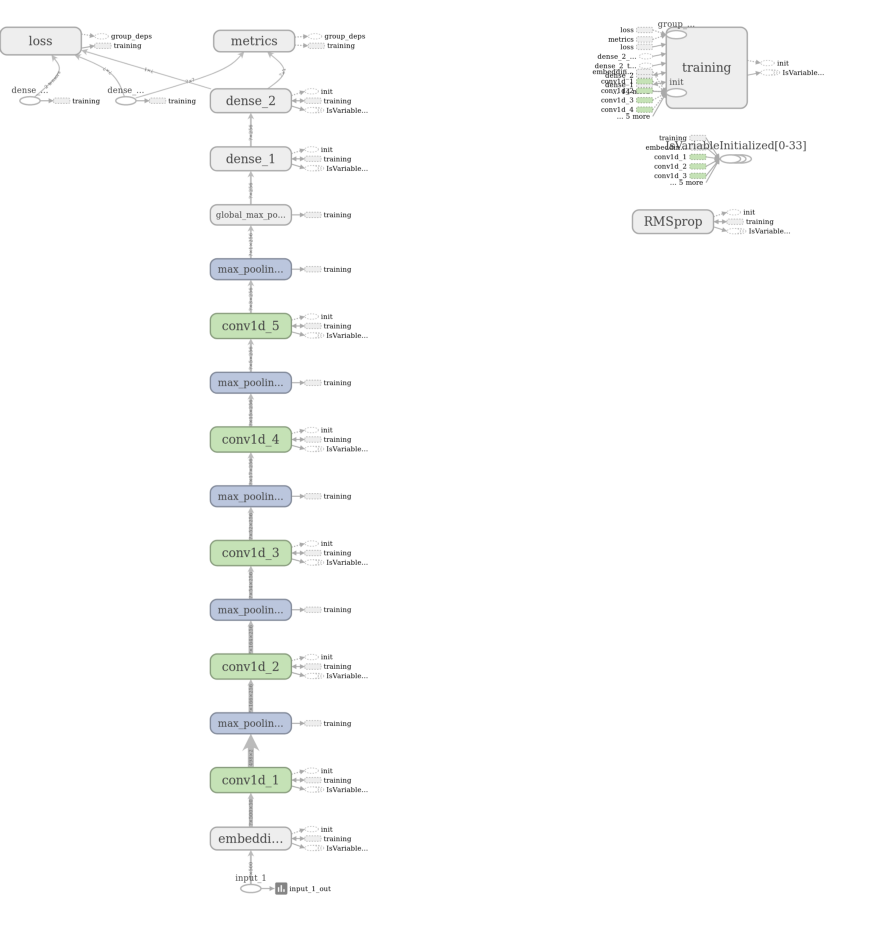

In [221]:
# model definition
import keras
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras import Model, layers
from keras.optimizers import RMSprop, Adam
from keras import Input

text_input_layer = Input(shape=(500,))
embedding_layer = Embedding(max_words, 50)(text_input_layer)
text_layer = Conv1D(256, 3, activation='relu')(embedding_layer)
text_layer = MaxPooling1D(3)(text_layer)
text_layer = Conv1D(256, 3, activation='relu')(text_layer)
text_layer = MaxPooling1D(3)(text_layer)
text_layer = Conv1D(256, 3, activation='relu')(text_layer)
text_layer = MaxPooling1D(3)(text_layer)
text_layer = Conv1D(256, 3, activation='relu')(text_layer)
text_layer = MaxPooling1D(3)(text_layer)
text_layer = Conv1D(256, 3, activation='relu')(text_layer)
text_layer = MaxPooling1D(3)(text_layer)
text_layer = GlobalMaxPooling1D()(text_layer)
text_layer = Dense(256, activation='relu')(text_layer)
output_layer = Dense(10, activation='softmax')(text_layer)
model = Model(text_input_layer, output_layer)
model.summary()
model.compile(optimizer=RMSprop(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

Model: "functional_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_42 (InputLayer)        [(None, 500)]             0         
_________________________________________________________________
embedding_41 (Embedding)     (None, 500, 50)           500000    
_________________________________________________________________
conv1d_205 (Conv1D)          (None, 498, 256)          38656     
_________________________________________________________________
max_pooling1d_197 (MaxPoolin (None, 166, 256)          0         
_________________________________________________________________
conv1d_206 (Conv1D)          (None, 164, 256)          196864    
_________________________________________________________________
max_pooling1d_198 (MaxPoolin (None, 54, 256)           0         
_________________________________________________________________
conv1d_207 (Conv1D)          (None, 52, 256)         

In [222]:
callback_list = [
    keras.callbacks.EarlyStopping(
        patience=3,
        monitor='acc',
    ),
    keras.callbacks.ReduceLROnPlateau(
        patience=1,
        factor=0.1,
    )
]

In [ ]:
history = model.fit(x_train, y_train, epochs=50, batch_size=128, callbacks=callback_list,
                    validation_data=(x_val, y_val))

Epoch 1/50
40/40 [==============================] - 20s 500ms/step - loss: 2.1739 - acc: 0.2328 - val_loss: 2.1588 - val_acc: 0.2465
Epoch 2/50
40/40 [==============================] - 20s 506ms/step - loss: 2.1320 - acc: 0.2386 - val_loss: 2.2097 - val_acc: 0.2465
Epoch 3/50
40/40 [==============================] - 20s 506ms/step - loss: 2.1660 - acc: 0.2386 - val_loss: 2.1314 - val_acc: 0.2465
Epoch 4/50
25/40 [=================>............] - ETA: 6s - loss: 2.1146 - acc: 0.2328

In [ ]:
# plotting the results
import matplotlib.pyplot as plt

acc = history.history.get('acc')
val_acc = history.history.get('val_acc')
loss = history.history.get('loss')
val_loss = history.history.get('val_loss')

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()